# Automate Building Footprint Extraction using Deep learning

* 🔬 Data Science
* 🥠 Deep Learning and Instance Segmentation

## Table of Contents
* [Introduction](#Introduction)
* [Export training data for deep learning](#Export-training-data-for-deep-learning)
* [Model training](#Model-training)
 * [Necessary Imports](#Necessary-Imports)
 * [Visualize training data](#Visualize-training-data)
 * [Load model architecture](#Load-model-architecture)
 * [Train the model](#Train-the-model)
 * [Visualize detected building footprints](#Visualize-detected-building-footprints)
 * [Save model](#Save-model)
* [Model inference](#Model-inference)

Building footprints are often used for base map preparation, humanitarian aid, disaster management, and transportation planning

There are several ways of generating building footprints.
These include manual digitization by using tools to draw outline of each building.
However, it is a labor intensive and time consuming process. 

This sample shows how ArcGIS API for Python can be used to train a deep learning model to extract building footprints using satellite images. The trained model can be deployed on ArcGIS Pro or ArcGIS Enterprise to extract building footprints.

In this workflow, we will basically have three steps.

- Export Training Data
- Train a Model
- Deploy Model and Extract Footprints

## Export training data for deep learning

Training data can be exported using the `Export Training Data For Deep Learning` tool available in ArcGIS Pro as well as ArcGIS Enterprise. For this example we prepared training data in 'RCNN Masks' format using a `chip_size` of 400px and `cell_size` of 30cm in ArcGIS Pro.

In [1]:
from arcgis.gis import GIS
gis = GIS('home')

The items below are high resolution satellite imagery and a feature layer of building footprints for Berlin which will be used for exporting training data. 

<Item title:"berlin_imagery" type:Tiled Imagery Layer owner:api_data_owner>
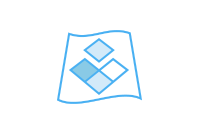

In [2]:
berlin_imagery = gis.content.get('ef7d963c99ac4840b669fa18e2656f8f')
berlin_imagery

<Item title:"MaskRCNN_training_data_Berlin" type:Feature Layer Collection owner:api_data_owner>
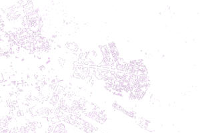

In [3]:
rcnn_labelled_data = gis.content.get('7d3f633a325f4dcf962c82284098ce9d')
rcnn_labelled_data

You can use the `Export Training Data` for Deep Learning tool to export training samples for training the model. For this sample, choose RCNN Masks as the export format.



<img src="data:image/PNG; base64, iVBORw0KGgoAAAANSUhEUgAAA7gAAAKsCAYAAADGCRFiAAAAAXNSR0IArs4c6QAAAARnQU1BAACxjwv8YQUAAAAJcEhZcwAAEnQAABJ0Ad5mH3gAAP+lSURBVHhe7P0HVFxZlucL16z1re+99db7xrzueTNvXPf0+H6vu6fddL+e6ZrualNVWSYrvby3gAxeIIMAeYFACCSMcJIw8gjhvZXFe++9CyB8BPD/9r4RAQFCSikrszJL7JP5ExH3nHvuuefeuPv8j9n3e5AgQYIECRIkSJAgQYIECRLegyACV4IECRIkSJAgQYIECRIkvBdBBK4ECRIkSJAgQYIECRIkSHgvgghcCRIkSJAgQYIECRIkSJDwXgQRuBIkSJAgQYIECRIkSJAg4b0IInAlSJAgQYIECRIkSJAgQcJ7EUTgSpAgQYIECRIkSJAgQYKE9yKIwJUgQYIECRIkSJAgQYIECe9FEIErQYIECRIkSJAgQYIECRLeiyACV4IECRIkSJAgQYIECRIkvBdBBK4ECRIkSJAgQYIECRIkSHgvgghcCRIkSJAgQYIECRIkSJDwXgQRuBIkSJAgQYIECRIkSJAg4b0IInAlSJAgQYIECRIkSJAgQcJ7EUTgSpAgQYIECRIkSJAgQYKE9yJ8qwL3H3hWCYIgCMKa4HvOFdh+uwvGqSH8p3PVUE+OYWZ8CKrRAUwO92FiqHeR8cEeQRAEQfi1ZXLYYsvYvk2N9GN6bBBTYyMYGxvD1NSUVQ1+M0EEriAIgiD8ClgpcM9kdcD7URu8Ulrg9bAZR6x4PmgSBEEQhF9rbDaN7RvbuSMprbjzvBvjo8OKyP0mw7cqcL/nWonvuQiCIAjCGsDxJbYlksBVWQTuPz9OIje9GadSGwRBEAThvcU3pR7bbzbiw/AGzIwNYnh42KoGv5nwrQrcZ11TeNk7LQiCIAjvPc97ptExpsbkyIAicP9bUC1uFjfjd85U4/cu1giCIAjCe8d/OFuNqo5h5Fe14SeRDcqU5cHBQasa/GbCtypwTQYd5s1GQRAEQVgTmE1GjA1bBO6fksA9n9aI7x2qxPfcqwRBEATh/eNwBYpbx5H+opUEbj0mBnvQ19dnVYPfTPhWBa5Gq4XeYBAEQRCENcO4ncC9kE4C17ly1TW7giAIgvDrzvdcSOC2WQVuRD3GB7rR29trVYPfTBCBKwiCIKw5zHNzmJuffy0Go3HV/Wy8Kf7L9rUXuMoI7sEKfM+tUhAEQRDePw69XBzB/SC8DqN9nejp6bGqwW8miMB9TzGYLNPhTMbV4wVBENYqLG7Dw8Ph5+eH06dPv4Kvry/6BwZgMptX3Z+ZVauh0+uXiVn+zNji7NPbYxO4v3u+Gt29fWgeVqNlRBAEQRDeP5qJGbUGD5604CcRdRjr7xKBa543UcrlzJupIbFKWmGJmalZvOydwYDaAOMq8YIgCGsVHqH1OXkSu3btwt69e19hx44d6Orufq3AZYF89tw5XI+OVsSsLR1vf/L0Kdzc3NDZ1fXa/W0C978Q7HCK1+UKgiAIwvuKUa/FfRK4PII70teJbrKx32T47gpcM4lZsx4v64bhmzuIs/kWTuUNo2BQQ/FGEbmvwUh111jYin90pAaB7Uaqx9XTCYIgrEVYiF6+fBmurq6KGF2Jh4cH+vr7XytQeXtBQQEOHz6MuLg4zMzOKjbNJm55dFilUsFoMq26v73A5c+rpREEQRCE9wWDCFzL9FpT/yg2xLfjs4QunC4ZRmDREIJLh3AgthnrHw6jV2+S6bevgafIjQ9MIq5iDHVT1BiTehIE4T3ENiV4JaultYcFbkhICPLz81FfX4+6ujoF/lxZWYlLly69cQSXUURuYSFcXFxw48YN5bO7u7sibienpt64rwhcQRAE4duAO17fxGr72PO6NGx737T/mhe4LG7NJG5/ElyLz3On0KHSU0oTsGCZnmzQaNA1qsG0jtLa9qFK5fWmC1aMrwi65fELpqV97eNZCBrp+LZ08/TZPp1yHB5mtx6PWcyDti3mz9AxFuPssM+fsRefJru4uRX7c73Y77d4jvTXbLd9jtLxdh7FBcxKPjrr/lxe3m/OLv0rdbUinvPjqQUryyMIgvBtoiZbMD0zo0wRtodHU/nvm9bAssDltbatra1YoCelzbEUf9ZQvgEBAWhta3ujSLWJ6aLiYnh5e8PpwAFlNHdsfPyN+zEicH81GMmGYW61NoEgCMLag20W2z5PT094eXm9wtGjRxUbyulW25/t6sjoKLQ63TIxyzaPbfLo2Niy9PasbYFLFQqNCsei6vAbMYNQkfC0CTYbBhZ0VoHKws08Z4KJGjNP2qaQ1TyF4t5ZTPF2SsfxioEz6lDRpUI2xecS+X1qqMnozVmNnlGtQU3fNPrVBgyPTCOzaQo5lO75gAb6eTKOlIaPNzUxi5pRLaZUapS1TqKY8pnlY1FeCzoNSqgMOS2WY5QMa6jBRAKW4m1lB30fHZtRysHp8tqn0TWjp/xpfxLw4yMq5bgcVzmuI6FpLR+JVfOs2pI/xed2zGBQTftR3cCoR2uf5dyyW1SopvLpabtuWm1ZgztL+9N5Tk/NompAjSm1DrWdk8ik9KVUVzN0g5qt5WMRPGfQobGb8qL4LMqvYVSD3tEZ1I/plPq0nYsgCMK3BRvWp8+ewfPIERxwcsKhQ4cUDh48qJCYlPRGI62soT17Fk1NTcuMNH9WTU8jMDAQbe3tXypwOX1xSYnSWNi/f78icCcmJ5X8V9vHxrsKXAN3ONr5obB1+trbF2E5bLP7+iaRSnZsUCMiVxAEgW2Wu4cH9uzZg3379r2Cg4OD0nG8mu3kbWwfnZ2dcf/Bg8X82E6yvY2OiVEEsr1NtWdNC1wTCcXR9mH85el6+DerqZJWb5zYMM9RQ2FcBd/4Vvw4rg2bE9rxl1ebcbBUhVm9UYlXTc7gzqN2/L9Rbfg8oQtbk9vweyEt8MwawxA7q+KRzp5h/KFfFX7+YAjeKV1Yn9CJdTeb8VvezQjrmFVE7gIJyec5rfiXAW3wye7DjoQOHCwYh2rBiOH+KVxNbsEfRXdgU2InNie14t9fakPYiylMzlsMrcmsR9WLAeyMacZfxXdia2IHfhrdDK+XaqoJEuDVI9gU1ogPk7qwJa4Zvx/RhYd9OixQ+SZJdAclNOIPozqwJakTP4joxMN+tTL6W1zchb+71oyf3urCR3EdcMwagQpmaGt78Bsn6xDSQSJ43oTm0nb8xvE67Ejth/NtOr9bHfjzs/XweKnCJN20yui1QYsHaZ34s6AG/Izqat3NTmyJbcEfnqnCXz+exAwJcfsRbUEQhG8LNqJl5eXKelkWl46Ojgo3b91SjPDrjCzzdQhcHvHlNbc8LTkqKgqZmZlwdXFBXHy8YuzftO+7CNy5BXqeD4zD81E39t3vgcODHuWvV94Y+siGiRPB1eFO7kfJNfj/nW5F+qhZfFEIgrDmYZF68eJFZbTW29v7FfgNAm/qHGZSU1MtIvf+fcVmzqjViI2LU5brFBcXv9b2rmmBu7Cgx7OnXfgXp9uRP6ojXWaLM1qmzZIA5ulGC2zUSfwaqFJPXa/Hn90YQDc1JnhKbk9jP/74fCviB3SAUYvou034v0O7kDdhUOJpI/qa+vH7R+vgXDeL+TkSuL3D+K+nqvFPgjpwd4T2U9JpkUT7/pNz7XjI20gsVxW04XvedTj8dAomzFEa+lelgkd4Pf781gCadbbedQNelnTiX55oQjiJVC7zAB3zj3zr4FExTXKW8zdBPTuDxnEDRruH8JcnqDzVM7Sd8qV6SLrXhP8cNYgR6JHxuAX/9Gw7atSctxkzU2qMa3QYHRrB94/XwPUlOziZV6YRD4/OYpZEsbq+B//0dAOudloEbmt5B/4X7yr8+PEoxpS6MuFZQQv+xfk2pAxT3dD5PS/rwH8524zwTi0WrHX1/EkP/s2RF/hh1pQIXEEQvjOwATbSs4xHco8cOaJ4P46JjVV6n98kLhmbwG1paVGEKqdn+DNPb/4ygcsGnMU1O6mKiIjA1NQU5hcWUGhdkxtrLcfrGglvJXBpX2jUiM7oxO8Gt+HCyzE8qBvHvVqiZgibg5twvZ/soSwfWRW2VUNDKhR2zWBURnAFQXhPYLtis1kreZ24tOfChQuKr4me3l509/Qo8OeGhgacP39ecZD4OtvF2xmbyL1z967Sqct2j5frvGn20poWuDySWVzagd8424Hycb1F4FJFzs9M4Uh8K/6IDPofBDTg+3eH0KUhMdc7iD841gC/uhmotToMz+ihHRzH+oBq/KxgGmMj4/ipPwlHEpU8vcsizljwaRAcU4//FDOIMV7bSwL3D87UYPsTjTKNmMvCN4l2bAqfBNTB/eU0lc2IirwW/O+XOpA7RvuQyOYpyO11JJZ9GxHdp1WErOVcqMz6aey5WIsfp4+TVNTh5s1G/E5EHwZIUM9Zz5dvEhbSyfdb8H8EdKNpWocxlRbDs3r0v+zEb55swI0RA4pz2vDPjrbg0aQWWr0BCyRYeT3t+Mgofuhdiy1FE5ggwT9Px+ftPNV4doXAbS5rxz8704x7Y/Sd6tXEYrh/EP8PifDzTXTec2p4B9fifz4YgYbqSpm2zKPbU9PYG1qN/5kmAlcQhO8W/Axlg5qbl4dr164pzp1Y9K6W1h7e5/SZM4on5Xgyzjy1mOHP0dHRyqjwm17zw/ufp0ZCWFiYMuLL6bgsJtquiFwSvm9yUvU2ApeXvdy834T/dL0XRWQHbB28NtSzOkxpqQ7s9pnj1+qxTSO4I9g+P4ZnSdniGV7uYx/PS35gtSFL6ZYvteElMGyD2DfDPB+P7ODiKDLVAS+3WdyX4lazGcrSIbt09j4elDLY4lacg+JbwhbHx7WKVq57pSzWOFt+xjmz8p3tHS+xMVHeXI+KvwtrWv6+chR8efnoHqPvfM62ZU2CIAjfBvysYzvX20d6YnBwGez5f2h4WFkfu9q+Nvj97320P3fKsi1j+PP4+Dj8/f2V/Pk4q+3LKPqIjpGWnq7MmlJGbktKlH3etJ+M4D7rwr/0akLSkFYxKpY4PabVJF7VatxMacK/vNKLphkD2ms68X8dqcF/DGrGX4Q248+uNOPPiT8MaiRROovungH85+PNuNzKAm6p0k1kJLMon9+62IkqHqnkEVwSuM7VVlFNadjAaydmsOd8DTYUTUJPAvdFbiv+Q2Qv6rQkMMnQcXnLyzvxT890oGRUT7Zw6Vy4QXA5sgZ/cnMIo5iBR1A9fpGnshuVJuhGgG4ap+Mb8L+dqMd/o7LzOTD/7XIT/jyiHXcGycCSUN90vQn/2LsKf3qjH/kjGqhJ6EKnRWpeB37Ltwb/q18LIlunFadcLHJXCtym0nb8i7MtSJ2khgCV3UQNhyESuL9/vBFnGql+zBP4xck6fFSkUhoOSvm4kaNSweFaDb4vAlcQhO8iVoPKzi8Mb9F7zbCB5pFfFsZ5+fmvwNu/zMiz/VKOaZfGZuDZ2cabnFx9mcDlGUo9tV34zZNNuNSupWfy8niG/VHYnsd8TJj4tXojCC4ZxpUnoygmm8QCUfGdQGk5j4aOMUt86TAuPx9HBTtxtNrGOTqfFy3jyO7XQTUyhRBKc6VsGFEvpzBCNkXp9KR8NGPTeNioQu+kGqkvhnClYgpjZI9YPEI7i+SXw5Z9iYjGaWhou83PA8P2pad3YjFN2PMxvBjTka622KqO1lFle0jZCFL7tGTPLPtx/rNUrshy3m8IVysm0a/Rky0j8Ultg7SqEVwuGcJlOvfyYa1i48YGJ3G7QYV+NZWfyt7ZOYH0zlkMjqhw48mQUhepHbPQUJvAJuJZYM+MqnDz6RCVkfJ7PoGOoWmk1E+gXt5KIAjCtwjbrtq6Ohw9dgy7d+/G/n37FHhNLYtNXhvL9udNtotFLItL+9Fe/jwyMvJWApcFMfua4JFbHsXlV+Pdu3dPOa59nitZ0wKXe2c1vWP44HQNtr2cthO4BBs/I1VOejN++yoJ3FkDuhq78TunWpEwwJ6W2TjaIENLfwd7B/FHPo041zirfLflxWtz799pxL8N7kGzncB1I4G72PNLDYzZCRU2n6nFzrIpSmURuP9+hcB9+bwb/+pUGzKHdYuGWNnfoMXpsFr899sjmDFPYefFWnw/c2p5j7TSKJnFpZsN+Lfxw1DT+S4/B2oY0HF0nI6M7pOnvfg8sgn/yK8RMe0apX7mF8wY7xnH0fsd+M8nq/E3KSSn58zQNqwucB9NvF7g/tSnDp+UrhC40yo4hVPZReAKgvAewYbYNq1rNVbb5+viywSuyaRD7K0G/G50H7qpnPYCkeHnsP2z2Ex2JPxuF34S1Q7vvEEcu9eCP4roQfaQTpmxYyDb+eBxJ34a3Ya9GYM4k9eP3cmt+IvgbmQOUWOI7c30NDyu1eC3L3dg96M++Gbze+e78WfH6/DZ41EMkl3gkU9VdTf+z+P12JXaC5/MAZwqn8A425O+SZyMacLfJNN22vc07fv94BbsfjCCHrK5PEpqMuuQk9eDjyNbsTWN0uT048CdNhx9wb4otHic14sfh7bANZeOndqOPw5tx3WydWz/ettHsetqPX7yYACncwew9VYPyqd0ikPFsOQm/GVcF47mDMLpbi9CKibIYlNDMK8Z/+hCO7LHyM6b9bh3uw7/q08Dtj3shz+l9brfhb8MsLQRtHRuc1TOwb4J7A6qw/cTeuFH5fC414Uvrtbhfztai/OtZBPtO6kFQRB+xbDAbGxqgq+f36L/CXaymPr48SvejVfjlxG4nI7X6Cprbl1dlWnJaWlpitC9d/++kuZ1+65pgav0Mht0SE5twT8914acCRKRinEmWGyZyEiTwP23JHAbZkmAjpIo86uFa8U05sic8XQlm5dlNsRaEqj7LtXgs/wJqMlAcs+rko9OhQOXSXymjEPPhp0E7u+drsZf5ZC4IwPHefAoaGdVN/7pqSaE8QjwvAHPVghcnu413jmMH5yuw7EGNRlH7r23HMM4OYq/P1WHneW8rlaPGyRi/3VIF+o1tK/1nBQvyDCgJL9DEcnPtAZFYCt50A1iE9t8Lkb6PE//YUqFLYFV+LvsKWgojXKudG5kvVGW1ojfDOpA4dQcTI3vInCpcTGngVdwDf40eQhDRssULzM1aCZ7R/Ej/0r8IEMEriAIwtfBmwUuT4kl23W+Dv8jfWKpw5HQavWYnNVhQq3HDH3W8Mip2YSnRe34Hf82ZEzzUp85MgdaBMXU4wcPRqEiodf0tBP/7nQTrvfYfEwQumkcD6/H7yfQM99ANmRmBl7RdfjeyRZE9Wqt6Yzob+rDvz1WD6cqsmUL1Lip68E/ILH3ad44L2ahNGTTZmbhS/v+ecIAWhd9URgx2jaA3yOB7FlPNobsUF9dL/6Lbz3ONWtoT8u+3OgZInve3dCH3z/RiFDl2OzjwoDM1Gb8p/ABDEKH+IRG/LOQXkzMW8qvndVCS6K1uaEX/57s2I1ePrc5mI16qCiOpyXXFLbiN8gm5inLivR4eL8e3/NrQhB36vIx5rUIT6zHv7s+gC6y61wHxyPr8Je3h9Ch53OgY5n0ylTx//1ELS61icAVBOHbh/1FNLe04OTJk4r/CR5B5VlDXyZuGXYk1dHRoaRnHWabjTQ4OKjEvU7g8jYNCWh2qsiClqclczn4mCyu+Q0Gd+7ceW0Z1rbAZVjM0fa42w34rcutCKidVYzV0LQOMxMzCLhZh38Y3oemGTI0Ri1up7XgN7ybEdIxgxEy/KrxKVwoGUbtKBk7EqUvX/TgT/3q4VE1jaEZHSa1s0hIbcNvne9A/qSeGhJkxKxOpv7BmWYE1dPx1DoMdA/hf/jV4a9TRjDOQpSM2rPsFvzOtR7UWAUuN0QWFNHdhv98hoRwpwajVM5xtQqnrzfhv0T0oplFK90UqolR/Px4Df4ioR/P6LhTKg2evujHhRYq5+Q4vrhYi98N68ETOgfOo7dnGB7FU9Sg0CD5+Sieds5iQqNHZ+sI/v5MPY43zaJ7cgKRxZPU2KF9KL8rcfX4kxsD6KAGgL6+B79JDYkrVi/KTSVt+L9ONePh+JLAHewfwO96WwUuNTQ6O/rwx+512F0ygX6dHsOjM/CJrsX3XCrwAQlqEbiCIAi/PF8ucKew/bRV4FqnEM+T0Kqo6sVfBzXhj4Pq8Rv+DfCqIaG2QML0ch3+zfU+POtRobhDhSedKkQl1eM3g7rwhOxJCIm237s1hBkSqLapuAsLBlQ/68Zv+7cgc0oPzM7APbIWf/JgHLNks2zrUudJMAaSeGWxrCY7MVPTjd8824S4PrItZEd4ivAQ2av/TvbmLNklXrNqsxPzZjVOX6vDnyYO0746JCQ24t9F9mGYzslWDoORhaQGsbeb8Q8vdCKbyl/CdE0jO7sV/8i3EQkjRpRnt+Gfk60P757F4CwLeZPSqTzYNYy/9mJfFGOom9Qp/jbMVC5eL7tS4N6504D/SPXUpDMrdpD9fhQWdeA3znehbsaAEbL7f+bbgIAWsol0Hlw+9kVhau3DvzpVh0ARuIIgfEdgcVlRWYnbJCpZT72NuGWRyqO0ly5dwtWrV5cREhKivObnTa8J4jh+jy57S+aRZN6mwCI3NVXJd7V9lf3XvMDlSqDK4VHOLhKemy6RMbetTQ1pwv99pR2hTTMw8mgpC0wSgPcyuvDfA5vwp5Tmvwa2wreSxBjFW6ZEGTHSMoRfRDThj0Ka8afBjfi7e0NonOIGAx3PKnD/6FwtHIpVuJjUhP96uZnSNuHD3AllhJRHhnmqcO3Tbvz8/iBaSeAuOpugvyYqb8vLHvzFlSZlHe2fXm7CJ1njJKY5zpKOy6GemMWZW434fcqf0/wgphv5UyySjdBqJuEWyse1nmtoF3Kneeo1T9vqxv/k86My/T90/kF1M+Ap06Mjo9hmrZ8/oTx/cn8YQ1QWHhlWtw/iB9fbcZsbIVQXndQw+vuYLhTS8bjsPCI8OjKCz692ILqDp4BRnc8b0EECemNoo1IHfxrRjuiXYzgUUYP/Ia8JEgRB+Fp4s8Ale0PC8GhwLf5r/CDGeHaSdTvPDlI8/48N4y/863C4WgsyLNgQWIt/dalNecXdF7csfEY4542iUzuNQwF1+G+PSSyTHVo8xrwZvfUD+IPj9Ygc0y0K3D9PmcCUwbR4TBaioddJ+N4YRD9ZnpmaHvzri23IVlk6S3lab3tbL/7tyRbEdVF5yJbYjsGzjxIS6vG7Ef207wyOhtXjx1lTi7OTFMhmQTcD//gG/B9nmvGptfzM58Se1H6UTtA5j0/C/V4nfserAn8c1Y3Q5mnldYBkPPGwrA9/caYa//hkE068mEDtBJ0PidzVBC477WrQWTqpWeAWsMC90IX6We5A7sNv+7YgocfuPOgcDC39JHDrSeDSPvZlFwRB+BZhUfuuS2rq6usVYbwaVdXVX+qkioXtasfkbRy3crsNEbh2GMnwsedCHoG05xXPjyxS7eKXGU+CGwXL8rGKXyXeNoJ7pgaHq8gostdEa7oFu8aAkg99Z4+Lq4k8Zbqx/THIuK6Wbo4bJ7Y09uUg8WjxSGnD0sOteH58zflxR4D9eXF5F49pLQ8LcyUt1wEdz95Bhm1/Wxr7bUqePD1LNYWdl2vxKYl/DRt6azpBEAThq/FlApeFYXVeC/4xv8ZtTL9cVNEz2jA8hP/3VB2cq7hzUoUDQXX48/QpyzMb/Oy2Pr/Zns3Nwie0Hn9wewQ6siu2Z/jcghENL3vxH32b8WBiaQT3v6dOQmUvcI0a+F6pxffvDoO9UUxbBW7WlEXg8mhpX9cg/si3CZd45NNuSrXZrENwVB3+8OYQpkngHqFy/N79sRW2lTth1QhLaMS/iR2CZuHVc1A6lBWbZkRT6yhO3G7F/+nTgBskRLmu5ind1NAkIgv78Scnq7A+Zxw6srV17ypwW3rxWydbkcjTpO0ErrmtH//6tAhcQRB+/WER+iZW2+frQATur5oVAnelOF5LsLidYxFLhp9ZoAZQV1M/fu9UC5L6tcpriFbbTxAEQXh7vkzgKs/gqRnsu1yN798ZQhuvD6XnL3dSKh2QY8P4c/86HKjg5SVGpD1sxm9d7EKNVQRyWhO/fUDxMmxAaXYr/lVgOwpU1njOw6xG5J1G/LuofnRqaRuvwb1eh++F9qJzdindTHMf/rlvHVwrefqxCVMrBC53nhomp+EYUoufZY1jim0qHZ/3NY6N4G9O12HHE/ZFYUReRiv++ekWpI6RUOQ0hJnKqSXBW13ehd/2acFjlZ7O0XKuPC1bpdYrolytI1FO6ShjYHQcPzpThY3lamUWleK/g8XwnAE3E+rwOzEDdE4mNBa9rcDtRO20AbPDE/jwdDXWFUxCw3WkoMP9hy34h8dlDa4gCMJXRQTurxo2xj3D+AP/ajhVrl2Bq0zBrurDzuJJZQ3y8IwWLX1D+Ptjdfg0awxjSoNp9X0FQRCEt+fLBC7DM3dmhlXwiK3D70f34k79JLJbJpHZOoWMvHb8E98GnGu2jjSOjeKji/X4w6vdSOqcQn7zBKKKehFYQ8KS47Uz8I9owF/EdCGmUYWC9knEFnXiT8+341aPGmYWctPT8IohgXuiAZ8/HkYOHaegth9/Rfn+gET2CIlLHi2dqurCvySRmsbLa1hcUlnn5g1obhzET87WYWPeKLJappDXPoKDUc34q5sD6KN0RgPPWFLh6BVeptOKK/VUDipnTEYnfBp11CCYgkdMI37Lvw0RbVPIpXN98KQPLmUqai2oEZzRj5vPx5HXocJNXrYT1IrUKS1etA/B79Ew8jumkF47is2XG+D8dIqkqxF1K7woJyfW4d9f60Gt1Y8GC9yc/Db8I/8OVE3ykiA9yp/34PePNMDt5Rhy21VIonr8IKAa/1+fOgS1i8AVBEH4KojA/VVDBnthaBzro1sQ0MTv4lslzRqA1+SODI9ia1AT/iTU8j7hPwhrhfPzaaWBxCMKq+0nCIIgvBtvI3AVjDxiqUNhaT92JHRiS3IXthKbCc+SCUxbl8IYSXxqZqZw4XYXNlHcpsQuuGSNKa/24anGPDuH35v+sKgH6yhuS2Intj8aQBGPpPJ0YR75JYHLU5S//3gKhSQstyRROmJP8YTyqjplyjL9nekdg1f2EOpmjcvsJXvz1wyMw/0+HZ/220zH8CShyQ6rbEtjuBzzBj1S8ruwkdMQ+x9TXmpOQ3HmWVx/2G05Np3HzntDaKbtC3NaFD0dwC6ug6ROrL/Xj8JREvcLRvT3j+MonRPntyGpGxerp2Gi7Vy2nuYhuOaOoHGa8iAb9+JlP3xKxtGns5Rpbk6PpuYRuGaNontWbynDggH1tUNwoONsouPtLxhHd/0A/u2ZOlxoofoSgSsIgvDOiMD9NlAM6Ktrd9cay9bfWpmnhs9qaQVBEISvxlsLXCuKf4bFdakWeBqvvU8ERcTaxy8sraNVYEFnnw+LQJvNsxO47GRKPWe3DpaOs5gHw7OeKO+V7+ZlFD8Vtv2s+67mt2GO1wbb0izLa/k5MDZfFMvKTihl11v9X9ht56U0tmMa2OcFnSeLWcWfhWLX7H1f8Eg57U9pbJ24vK/iK2MxzzmM13bjt8+04JHVSaNtX0EQBOHtEIErCIIgCO8x7ypwv3FWCFx7L8prCYNej0m1HlruLCChrHT0mmdwNqIB/+HmsLJWeLX9BEEQhDcjAlcQBEEQ3mO+swI3rBp/dH8ck2tR4LKo1cziTGonDmWPIL1hAmlNo/BIasEfn+9EzjRPYV5lP0EQBOFLEYErCIIgCO8x3zmBq4g7DR496cPl2hnMrtF3npvn9GhpHYHXnW7svt+DfXe7sStnBM2zsvZWEAThl0EEriAIgiC8x3znBC5DIlfxpmy3hnUtYuY1uXZrenmNsFFGbgVBEH4pROAKgiAIwnvMd1LgCoIgCMI3hAhcQRAEQXiPEYErCIIgrCVE4AqCIAjCe4wIXEEQBGEtIQJXEARBEN5jROAKgiAIa4k1JXBnZmdXrQRBEARBeB/R6fUYHewTgSsIgiCsGdaUwJ2emVm1EgRBEAThfUSj02FiZBD/5XyNCFxBEARhTSACVxAEQRDeUxSBOzokAlcQBEFYM4jAFQRBEIT3FBG4giAIwlpDBK4gCIIgvKcsE7jnqzE61ActbVstrSAIgiC8D2jUM3ggAvfNGIxGBaPJpPxdLY0gCIIgfJ2YzGYFtjvsLMq2zTw399a2yF7g/u6FGkzSZxG4giAIwvuMVjOL1BcdInBXgwXt/MKC0qCYVauhmp5W/nLjgreL2BUEQRC+btj2sN0ZGBjAy4oKpKWl4f79+3j06BFKy8rQ2dWliFROs9r+9ojAFQRBENYaInBfg03UPn/xAnfv3kV0dDSioqKUv/cfPEBFZaXScDC+RQNDEARBEN4Gtj38SrusrCwEBgYiLCwMiUlJeEB25w7ZoojISAReuqRsGxwawtz8/Kr52BCBKwiCIKw1bAL3x9dqMdDVio6ODqsa/GbCr4XA5RHarq4uXL12DSEhIUqveXl5OZ4/f44y+ssCNyg4GJEkePv6+pT0q+UjCIIgCG8Lj9x29/Tg6tWrirBtbGyEWqOxWjBL4JlD3b29SE5Oxvnz51FRUfHG2UQicAVBEIRfN9iu2WYzfZUloorAfdmJvwl5icbqF6iqqrJa0W8mfKcFLlceU1RUBD8/P6RnZGByakqpWFvgqcn8fXxiAg8fPoSfv78yyvtVKl9YexjNczDP0b2yStzqGGGao33Mcm8J3z4G5f41v8P9K7wtbENGRkdxKSgID1NSlCUxPDprs0ssfNs7OmCgdNypymtynz57hjNnzqC6pua1I7lfp8DlMnJjw9bgWC2NIAiCIHxV2LYskN7iz2Pj4xgaHsbE5KRid95leahN4P7oag362pvQ1tZmEXLfUPhOC1xuIPAo7bnz59HY1LRoxPkvC93RsTHoqGHAlcvbmarqapw6dWox/Wr5rmV0JNDm5vlWXRmo4bZK+l8lBiOvpZ6Hybh6vGm1YtvC/Ls38o0GHcb6WtDQOYgZ3duIXLrPdDPo62hAS/8ktPR99XRfA6Y55YGyMsyTGF81/WthQb6A+fl3EfErMPJDzFoAuzD/NYt8g3nemrN9WFA6E3SrpP+VQnWwQA/yOdMqcd8SBoMekwNtqG/vg4rv39f8boSvzq2EBNy4cUP57dgEJNsbjVYLf39/+Pj4KMLXJnrZZhWXlODSpUuKOLbtY8/XIXDZtrGw5jXBra2taGtvV45ns5Gr7SMIgiAIbwvbNLYprLVSHz/GldBQBAUFKbCNCw8PR15enqLl3sbuiMC1wpXFvQRciU+ePFmcdszbe3p7lSljPKJr82RpgxsYefn5ygWYUqmUC2Qfv6YxmmDWT6HxaR5u37qJGzet3IjHjYflGNbov7oI+iXh6zQz2YqynFL0Ts+9InK58d5Uchtx1NjkMifevoO7d5Jwkz7Hx8fhQVkL1HpqZNrt80aoLqCbQNaFjfiZexQ6pgHzl4kXEwmwyWYEH/wA20JKMG3g6YmrpPtlobIZhhuR+vAuEm5azpcb2bEJd1HcrqJfzjyMb3VcejjNa9FdU4Kyyh7MGr7CSB8JO7OqDyU5j3DLdr9wnVN5Stu+vt+Xcv27X+LO7eSl48THI/ZuBuqGdHTO3+IoJV+P6R4UZ6SjblD/lnX/TWPEvFGNp9d24UcOF1A3AcyZV0snfBXYzrBfhwsXLrwiVPkz92J7eXnh2LFjmJiYUMQmx/F9zGI1Ni4O9+/dW9zHnl9G4HJjgwV1ZmYmLl68qIhs/svl9PXzQ/Dly3jy9KkiwKWDVxAEQfgq2Np2vOTm3LlziI2NVRwsdnV3o5c0GC8bZQeLvHSUZzm1tLZ+qc0RgWsHO/BgAcOfubK58sapYRFCRtzX11epaFvDwoatgREREYHU1FQx8vYY50jUdePG8W3Y5n4F91Mz8Ijq6NGjFDzKq8aYlgQu1d9K0bZsm/Wm57+W7a8RlfbxxPL4pf1s8aY5MwYrouCwwwulQ3RzzC3fh9N2vMxEyqNUPM64h7MOn+Fnm48iMS0Nj1IeIreqCxqDSREfK49p+758uxFGvQYDTc9QWtOOKS0JKOUcKQ3H2+9jzYeFjkkzhZaqUjxrHYaWjmfZ/oZ97FiMs8ZbPr+aTm9egKEqHp9+vAUXEh4j7XGq0nuWnHgRDhsdce1hKUY0WNYJsDJvZTuJU8yPIvXiPrheLsQUCXIjxVvi7NLb77MSygJ9RXDdugGuIUlKOfieSXn0CBXdM8q+SroV+a3Mx3aM18UbTXT9M87hJ587Ifx+hnLOaekpiLrmhwPbD+NGURvUxhWzDKx5WbDb/hbxi2WwT2MXvwzTPEyDeXBd/xmuv9C/Xkja57WyPMviCPs4wrbNFm/ZvvTZtl3Bug/PQBhpe4niiiaMa8xW4c1p6K99esJ2HBv2cUvHXZ5mLWOen0doaCjy8/NfmWrMNoftkLe39ysCV9l3bk7xqszic2pqSqlb+/2/qsBlW9bU1KT4obgWHo7q6mrFhrKYZXjKGPuk4E7h69evY2BwcJkwFwRBEIQvg+0G2xR+U8Dp06eVzl62Y7yd7RD/tX3mWbRsJ/1PnUJhUdEbbY4IXCvstZIrtpUqgBsbXLns3OP27dtKo4IXJ/OERm5M2MPplIZAc7OyFoorf7X81yQscPW9SPTbjeM3a7G0kpkDiwcdZqYmMDGjofSWRhkLIq1ahbHJGWW0fJZfzaSjG1g9hdHREWV0Y0rN3quXbmqjeR5GHe1DcSOcZkwFLYktk22EVK9VRiE0egNU4yMYHpughuAEmrKDsGfvUeS1zNB3lRJvy5PhAVRL0CE30AlbjyRjyrpl3qSDamaWGo9aTI5RnuO0Pzf29bR9chTDI1yWUUzOaGGgstpEgk6nt5v+qod6dgYzWtquUVnPbxzTGv2yH639Ppz/zPQMZvUmaGfGrec7qXw3mZaEipEEu5rOkeOHKc8Z2k9NdTBDedvyXYTqT1+dgG3bvVA8bj1BJRjRUXIXbls/Q0BGK7Rmvt/pXHRqTHA9KvU9DhWXV7keemjHW5Bwai9cgrPQPTKNyWk13Qdm6Pn8qJ64Tkao/mf19LtZLK99WRaA/lJ47XFEXC2PHi+FOesUZV7HbNRNY0zJj89/SulsWMyPrvc0nauaruf0BF0Lqp8Z7fLfJdfvYGYgNh8KRpPeegAK82Ydqh8GYffGHbhZPUF58nlxfVIdqSfpGlmv6yy/osV2jazxmtXjdToNVKpZ6Kju1FNUHqUOxpURbuNqo/imOZiGiuC9fQviK1YTuK8eb4KOt/iboOPoNbb6sdT3jG6pvg0r62eU4jU66LRqqGa1Sv1N8vWle3hiWkP379JoNv8mdfw7sYpTfpE63686LR1PuX/HoLL+PheFMX3WqS3xnOfkrIb2m8U0/VXKu8ZhG8I+HbgTladm2WyKDbZHLFxtApc/swheTGM1/AEBAYoIXWnwv4rAZdv27NkznD13Djm5uUp6PgbnzXG2Y/BnnrnEbxrgkV2b/VyZnyDYMMzRM37hbWcFEfR74NUkC+/ku0IQvmaoHcO37vyKwRDhl4dtC8+EDQ4OVt4MwHaFt7Mt5LfZJJMO45lCbHd4G8fzCC4vD62vr3/F5tkQgUtwb3hzSwvOnD2rVB5v4worKS2Fu7s7oiIjFcPNveQdnZ2L8IiubT0Ui2EeVue1SXyxVh5jTWIncI/GVmDWfkSMRyfVE8i4vA+fOl1EzYgBvArUPN2CSK+92HExDbNTA0g44QTvqyl4fOciPNxccGjPFjj5hOB5PwsaYp5E62gf7ge64YDzQbi6u2LvpsMISS3BiIEEGRUB3flw230IwfcSEeB5CAdPBuFaoC9c9m3ALz76AnsOuMD1TBI6Zizrq5efBzXooELGBQds8byFIW7kkbXVVd7C9p2eiLoXD38XJxw6lYRujQF9NVk47b4bh1zccNDREY7O/ijsmlWc80A/gbwrHjgYnIZhVvv6SRSEeWCXTxTu3AzCEQ9nOOzcA/cz0agfZxFDT9OpFoR7HYD/wzpoWHCrWhF51BFuofeRdO0EXNxcsW/LTvhFZ6FfTedL4sc0b8RoVxaOrt8OJ1dXODs641xcGDw270Ro4SA1FFaco1Xgbt3mibwBOt/FhgcPp2rx7MZJfLYnCB3TemqXGFGTE4ujznvh7OoGx9174HYqEnXjJLin25HgfwBb1n2ETzftpnP3QvDdCpB0QsGN03A7fIDK64Z9W3fiZFQG+tS2UWw7bAJ3rwOuvxh55cFlnDNgZnIQjy574+BhJ7jw9d58CIF38jCop/z4eveX4dj+Q7h4OxFBXofgcOQyilpHad+l3yXnO5gViE0HLqFmmsSzTWjyPYsJpPjvxwbv21Dx9Z7XYaynFfF+++Do4grXAzuxxycSVX1qqiu6ThzfS/G0z1J8BCp71cpa4pmmNLhtc0N0fi7iLrnhsKs7nLZ9hqNxpRhWL8BoLdMiXyJwLcdrw01/Bzi50L17kI8XjoqeWZjpvMwmDYqTLsD9sKNS3/u37cQJ+g11zdC58OkNPYOv0yGcS0pA8FG65zwvIb9lDBMlV7Fhtw9u3k/CuWMHccDpIPbt90ZmyxSVyYx54yxexBzD3lPJ6OVOAZMaFXHHsM3zCm4nXcUxz8Nw3LMPzsdD8HKIRC6VhetcO1uPcHfKa68TDh90xsngQPgf3ge38DKlI8r+3NYibC/YeRR7RGY7wtvYoRQ7L2RevHypePH38PCAG11P7r3mbbb4TrJF/Lq6mJgYFBQUKJ/t839XgcvXjd8OwD3k7LyKGxP8XOTtwyMjyqgt/7W3lXwO/Fqjy9RA4ZFd3rYy37UN1R/ZAO70Un4Xi3z7jWW+X14nNm3XXYHSsYM5tru2sr+r4ORZQP1lCTgfdRftU2+xTIeeDwvqYeQnkc1Or8OM/hv03UHH4vNbujYMdyJxo3qV9K/F0kH1yywtMdBxXy3L132v8O925T1pOd9v/b7k9iHV4Xdmlg/Z5PmJNiRHnEfi0yEqlzzfvi74vmMtdf7CBdQ3NCybwcTPH7aF27ZtU2bJcge7ze5wOtZo3LHKPpJs2+0RgUtwBT97/lyZimUz5tyLwA499u3bh4MHD+LQIRJG9NeGk5OT0uBgJ1O8DzdMrly5ooz02nof1jz2I7i3VozgztPDm/STbrIeVw7sgnficxJmOjxL8sWuQ5dQPWHEvGYYyb5b8NNN+5DwbEAZQYeuH7d8N2OH30MSsIBhthXRHiSmzqZgxDriOtuTAY/PP8Op9Halx40FrjOJhfUep1CrjFDyRmD0RRQcHf3wcoK/sThc5RxeI3D1Vbfw6UfrcSg4Hn1a3n8ec4YZNNe/RE3HDG8gAaDCg1Mbsd3nJkjjUmFJ4Ia440CQVeAaplAccQh/9eEmXC/sU85vfrIBQU6fwCW6HNOsL1UscJ3g96AWakXgtuH6iS342/UHkNFsGXpUt6XDdcMnCMjtVXq6Z4dLcXrrdpy49RTKC0bmxpBPwvqHv/gcVwqH3kHg0m+Dqmr0ZSIcPt+NO+3TWDCM4dnLKvSMWo49P9WMkIOf4FB4EVRG3jKBx4FOOBJJx6Z9FxbmYZ7pQk5ZA2Z1lguk7ciC+8ZPcDaTGub021teFtpJGcF1QvyyEdwFagxR40bTjVs+e7HPJxn9Vi9g2sFCHN/0KY7da1DOXxG4+7bj00PH8XKEU8wvjl7a4OOuKnA5jvLoSD+Lzeu9UEJxC7M1uLRvNzyvF4MvIxamkHXZGbuO38MQ3eJzs7VKvEfUUnx2CMffxTB9VTdlkMD9lO6fU3g+yAmozN258Nj6Mc6mdMGwsKIO3iRw6ZzNs3UIdtgD94hCKHfaggq5V1yw8+gdDFAFzM/2IL+8DioNq1n6CfYU4uiWj+Gb0gwD1w8JXD+nHfjI6QieKeWha0TPrImiEPzwg5/COyoXE8qPVY+coO3Y4n4NTSqqa7OaBO5R7PFPQo9V4Fbf8sRf/fRzhKQ3Q7n86h5cd/8MjpezMEa/T7NuAHfPOGKfN/0G6Duvbe7MjcKWD/8e++ge0YnAVRpy3BvNhpqnac2QneL3327YsAFbt25dhG3R/v37FWNv28ZpeOYQj6Ly8prc3FwlP/v830Xgsu3jMnBjgl+PZ8uL/w4PDyvlYjvJU6btf7v8mffjqcopKSnKs3S1BseahOygebIalz0csWuPIw4cOEA4Yb/jIZyNp+f8V3BY+PXAI1J9uHvaE7HFvO57+fXiGUw95Qk45rIHjk4H4Lh/D3bs2EXldoLT/r1wuRCLhiF+Pr39dWZB2/bgJDa4XEDVKD15vmwdPz0LMdODW6e242BECaboufPLCMfXwffvaOl1bNu+Cw7K9TmAg077sd35BJILW6Aj4be43OaNcAdAK2K9PXCvRvvlAn4VzCY9OrNCsHkbtWsOHFTK4rBvD46HJL1dp8DbQHZ2rqsQx5z3Ydc+2z15APucHOETV4ppjU4R2d/Kfck2YaAIp9w8kd5K9+iX3SO/CrhdMlyJ04fXwz+VbDbVzarphK8Er7flt9KsXJ7Dv0sWpbt27VJsC9utlXYlOjpaWcLG3pXttzMicAmuxJUCl3uojx8/rjQonJ2d4eLisozDhw8rU8ZsPdwaEri8hqpSBO4SVoGbTA3c9VsP4cRJP5w8eRI+x48h5FEVCR56eFHjuifvKjZv9UDGy1z47d6HmLIBagbTg3xmEAnH12HXxVSMkGFj4cXt7qHyOOzY4ITMfjW6y6KxZZ0bCntmME8NBe49pccyKuKOY9OhGPTyhe8ugPOOj3D0IX2btzTKjGSU+8uvwcHBB0+okf96Q/sagVt5A59t2IToZ2oSGLYfnFHxIDw3P0dpWFwY0ZIbjD1OgagdoZIbJ1cI3EkSns7YcfY+qJ1AhovPegK5V93xmWscRnjI9hWB24oILxI3tyqhn+Op9LTPQheiXbdjZ1ARZ4oXCb74dMdFdKhNSo+5jkTRwnQ5vLZsRUj+u4zgUiOVjjlT/wiHNm9DdMUY/VaosTZPIot78hU1OYOiSC/s9rlN5SUjYBzCw4sO8LhmaYxY1mdaXLvzumcTGwr04+aRXXCJer5sLaGlLBRPAvXovk3YeshLmbZ58uQJnDgRi5pZDQYqk7Dji4PIaJkk8Uy/Mz1fbxPqb5/Cxv1X0cFF6i/H0b0fwSWxVZnWtix/K/ybf53A5VHg4aIwbNl0GLkk5JtTA+HgEkH1OY8FurZ86Uz1Sdi28QiKZjj+kiV+dmW8B/InScw2Z8B1y2e4kDuwWB4z3TPlYQex2eUqWrVUn/aNttcKXCP9XnRoeBwEB+draJtZOp658TZ2bHRH9rCeGlgr63sIt3324WBoKXR8Ww69gK/jxzgQ34B5SqOcM+0zlh+Mz/f44skI7TNHZZw3oOdZJDZt9EJ+K1XSvOYVgfsy9gg2HYtDl4Z/Q+zafwZPb/ngM4cw9MwYMdb0EHs/34f7tWMUR9eLew/m+3DzxG4cCKPyiMBV7sX+gQHl1XRso9iIsx3hVwUpkPG+e+8eXHk2BtmipMRExaBz3ANqFLDnf26Ihl29qoz0cn72+b+LwOX7hvPjqWI2p4mc3+zsLK5TQ4KnSPNynJUimmG7xzOb2AFVX3//qmnWJKQU58aewGfnBlwrpTrVW9YwM1qdXvnt8WPLZpsUlKkWtImfF/Q84F+xia6F0mFrDa80/DneGsdhgRqL9gKFs1yga8SNSCWe/9E34ZLTRoQUWRbfzNFv2D5PnV5H5aRG5Rw953KvYesGDxR0T1AcbadnL5dnnq6zLUezVSQrjx1b4GeRvU2hnbhsPHOFl97wTCXlOUZls+3G3xfLTufFpsbi0V+vLPWwfTdT3rbAzx/bMSyYrOWyhDmyyXQk+vuql3zlN5h+ERvIVldPkf2m89abNOiqeoxj6z/EwUsp6Kfnv21E0bjCzf/i8hk+4PQzHN+xGTdrLVdj1Tqhcqx0bGnDbKJnfKIPth65jlayKQad9X6h3+xiuakOll9r+w56nsVF25RrbTkot42WiVVqNsy3pWHfVifcbZ5WlqXwvTijqkaoww7sdD6Jkm6yJXZ1ystiFgPZ3pUdDUbrfaUEil8cfbXe3zzbyb4OXvtWBLpR9T0ZcN6yHXcbaN/XtM2W1afS9luKM628PvadN/x7ovtmbvF+4+nytjojm2l3Hmwfl+5DyxTlxQ4dpV1j+W5flmXHIriNZl8ay33Ine5LadYsVO+85IanGvOsIZvNYLvD8Pf29vZFgcsjuPxbtYlcjq+rr1c6XlcTvyJwCa4UZYrymTOLFcSVyO8YPHLkiFKx/WSweT0be1q2wSKY54fzPvxXpiivwCpwE/33wvnSY9S1dKCF6rmZGkgdg5PWhzX30I3g4and+OlPPsJB3/vgQaU5eigap0kIee+Hb8IzajZbp3KynuvOJcHqgOSGYVQkn8D6g1fQNErG1vrgYYHSn30BG7d4oZgEBnry4bJzH27UqhZH8n5ZgauruIEt28nYD5ERsT6oeHowr7fse/EIfkec4HDACbs3f4wN7mFoGKWCvyJwLSO6B4PTMWK0NmCgR9XtM9jgEYEhNZ3IKwLXMmX5VEodNFQOw2L5nLAtMJesyDAeXHDEtlMpmNByrzOXjR7SploEbNv+zgKXDfZMfQoObtqOOOuaVDU9NFpzr8P1sCMOHHLE9i8+xI7zjzBGQu1VgcvT2Hjd8ASe3z6r9P4fPLQfmz7+Odxvvrpe0DaC6713Dy6mvlSWBjS3NBM9mDHMovbhKazffxFVg9QYt7vew0VXsGWDC3J4xHawjPbfi8hnr05xtsHbXytw6ZyHCq5g82Y3lAyOIivUDR/9YtNib/oB/rt3OzZuO4Yyis8OWy1+BzZu9ULBMAvcNLhscUVK9yTdO5by8FSwoZxAbHA4j0pqW9of/7UClwwlTKPIvOqBjz7cSPfX0vEO0vE2bPFETh/dQ0au7ylU3r8IByeubwds/uTnOBz9HHpuFQ09w0mHvQgrHVDW1yrnTOUZzbuMTQ4XUK2ylMdEjYaRxkdw2ueOrEb6IS1oVwhcnrJ81DJlmUdrlfvXiKaMEGx2DkL3pAbt2RexafcpPO3TW+87buyM4NGpA3AJLZEpylb4d8L2o7auTrEfjM0W8V+2XSwu2ZMy2x77+5qFJYtR9mrMQtm2n413EbicV3JyMh6npSnH4Lw4LU8/PkLHLi8ro8byvNJgYzFsw1Ze3odf5cBvInjdb2/NwQJ3/Bl8d29G5BNeRrAUZ6DfumaoCY/vxiG9ZkixAYrNUXcj/c5tZNaOwDDSiPQHBeik3/SzxxG4FhGJqNibqBwkAWd9NhjoGGbtJMoeRSrxEeHXcS+zHtN0pUwUbzJo0P0iFxnPG9HwJBOx1KZJfJCBh7FnsXf9J3A4cRnh0bfxpGWYnqcrr5ulE7GtIBLbN5NN7SM7SvfA3HQvCtLS8aK7D6V3IhAWk4LafhXZaQ0qMq9TOaIQGRmJm3fylVlObFfYHo3UF+FhbgVGdXO0TY/BmgKklbagp6UMiTFhuHYtGmllzZhhk8lCTjuOyoIM5Nf2Q8t1qRnDi9wMlLWNo6UkEZER4YiMSsSzbiqX9XnGzxkz2cKihHgqQwQiIpPwvKsFhQ/TUN2vXhSdNvheHbD6ZKibWXoe8yQhdX8ejm1cB/+0NsXmGMhGDVQ+QnQUHZfyjrp+G5UDGnqumTHc+hx3w05g62efwOX0NUTEPURN3xSdhxZVVCfh1jq5cTsXvSs7Nq2wwG1M9sWOY7HosNabfbyBCmVSj6L44dK1fpjbhFnbtdar0f40B1kVLagvfYyoCKrPJx3Q0nVdFGt0DvNt6XDYfggP2jSLYotuPcwZeGnYVuw+m0I23TJyzWZ5vCkP8dHhdLxw3Mp+Qe0LslPKfpaOjuHadMRQnXB8Un4tZsjY8BRo3Vg7ch9mo2lyBrU50VQHkYiMjkFZp5ps2yrPCBa4vVlw3b4L91YVuHTfk6BvKriBCM4r8joeVw2SYLXkxb+F7qd3EMXXJioS12PuoW6M65WuOU8tHqhBSlohGjvpdxcXiojkEoypp9FcloXcmn50VT6ma0vXLiIehfWDloEEso9z030opOfis+4pZcmZWdWDvMcZdD9NojIjSrkW12MfoGGC6st6f/HvWzfTgfSY63QPRiKa7ofqrgbkPMpHxzh3Ri+/D9ca/LtjR4b8alabveG/bHMYFrTcabp7925lVhF3tPI2m/1ie8V+K1jg9vT02P3+LYjAtbLoZIoEKleazbDzdCtuVNheHcSVbw/vy5XKvdq8P++zsoGxZrEJXF6DG1dFD1h6WFNdcX0t/rBJQZkN/Uj22YmPPv0Chy+lY4yelnOUxiJw98Hn5hPFUC8K3K4cONOD+X77CCpu+2CLyzW0jrNQtj5U6Dj93LDechQlPMu1J48ErhNu1k4tHvfrEbhHUThEhpQe8spIpKoT8ce3Yt3ByyijshkXNKjPDSEBEoS61wncK+5wCnqM4UWBa0D1vbPY5BX5BoFr/b4ocKeRdekAdgSRwJ0bIYHpCPerJVDp+YXYfA5U39oKnN667R0FrlHpeW3NDMY2p3NomCZx2/ME5503Y7t3PJrGZ6nZM4HCqKNw9L2H0VUELsuZoWdJOLRnG9wC0zCopbqa70Gi1x54RL+01NuyslAeVidTMZXjymiDcr8Q83Ma1D46jS1Ol1BLFbhM4BaHYstGV+SOUYEHWSA7Iur5VxG4RiwsmPEkxhVbvBMwZR5DZshhbPS+hYFJLTQatdKZNavRKl6tF8yjyKD4Dd43X43n9SJUgbNNaXDd4kz367idwKV6yQrAJscg1KjpfrdvxLxJ4FJ5skJdsMErHn0TdIwVxzMuzGO08gHc923FofMp6FPztn7c9XGA67Vy6wguC1xHXC17VeBuVAQ3lYfqgwXuaNNjHHJigUsqfH51gbvb+t0mcFuyrmCrm1Xg5gTA0YUajeO23xidAwZx19cBh0XgLsL3N3sLjyLhwfbDHr5X2T4pAtfbG0MjI0p6Wzz/RnLz8pQRXJvht+dtBS7nxQ0IbkjwGl/Ol20er4vi2Uo8ehwZFYX4+HjExcUtwmt/y0j4ch4cHjx4oEw3W5n/msVO4EY9IyE0RzaErqkFuv9nRvEwYCfW7buKDkpL1gVVJHDWbfdFUb8OszW3seuT7fC86I8bKfnILyhE0vn92O4ZiOcDlDc/U3TNiDrijeMXw5FZVIicjMc47bAF5+6WYYzXDhinURbuhY827cTZ64lIzylGybMqEopxcNv2OTxDHiI7vxxN1Fhnp4jLz2EVgUuPaQw+wdFdu7HX2wXXknKQU/gc3eNqjLUX4FJwNJUzH7m5Obh4YB28rqaTyF2g56UeTYnHsY5sdguvnzHrUJ/ojR/8dB1OXk1EVn4J0m/HwH33NkQUtltsHgmEqCNkL24+x6xiA9sQfmQLfrLJEWG3s1BQXIKkIG/sP3AChaSkjfRMMS8MIy3EGzt2n0FKUREKUmJwwnU3PvxwK26+mKCH0fJz5GuxmsBVxBude9GVg2QrotBLx19QNSM8LAJpGVnILyrBzfMu2OdyBk9HDVANtuPJozDs3/CF4hcjt/AZushOjncWLtVJXi4CD66DZ+hjErlk31YIWEXgJlkEbhc9V3lkWrlXlN87Nf7V9bjqdgQngyKRVVyE7LQU+O3fioCU55alJQZuZ3jg4627cC76NtKzi/GyhX7zlM+XCVyGTURPaSy2f+6C/H4eWqDy5CfCbd8RxKZloSjnLs4dPQy/G0+h1vP9OouqtFi47PfGraxcFGUlws/jMM7fqVbsn6YtB24bt+Kg73HEPMxFfmExHoS4Yfuh48jroPaG3bEV3ihw+doOIT3kHFw8zyGF8ip4GIaDTh5IejasjMoaJ2oRcjkCWdk5yKP4GN/9cPC6jKpxkzLDjmffffqLrfC6dA4JDwuQ/7QJGvUI0gL34+8+2YGA+EfIo+v6IOoCDuyj+qmfUM4DQ09xdOdOBBf3KUu3eKaZx/ZP8YWjF+Ie5qGA7rPrPnvgeOwqaifpF0PXymhsR7TXQTh5hiKjpAg5d0JxeNd6/GLLERR2aKkttnr7ZK3A9zX7keDlnYozRZVKeWUjzwJip4nM2bNnlZm07H/Cfjsv6WHHU+ygkffnQUq2V/b5i8C1g6eB3bx1S/msNCyoEcHD5+Fk8Hm6Mo8m8fZl+9F3bixwrxy/0oQbHsvi1zL2AnelkykFEgjzZOAenMfn248jt+QxXLZsRHh+t7KeT5mifOwLOFwm0bsoAE1oz7yCzdvPo1FnQM+TeBzY4YWiPg01yPhhwWk0eBLhiY0uN8BvAEL3qwLXxAK3lAzRfl/Qc/ErClzvRYHLwmW4Lh57Nrkjt4sKu8DTYPSoe+iPzSR4699V4B75CgL3Ug4l0KI87gR2uERjUMe9r3QOlI22MRm71m9ASMHbC1x+iJvHqxBwaBdO3HoGw4IB9WlnscPpMpomLdPMMD9OAu8Qtvvdt47gDuL+uX3wDC9TXhOEBRKAlw9jz6lUTNM5GlnAGtoQ5roVLjEVygNueVko/jVOpkwkPPsr7+DwNhdktU9jjr5brrcelTdOYL1jFPq4jsjweNP+7y5wuSHHa5oz4LZ9D8IKusi4m1GXEoj1m/1QS4p9seef7m3uRWZBV/coEBs2+6LmlXiqfyrPbBNPUf4EIaVjZIBtZZ7C49OO2Hs6jT5RLnZle/MUZSPqHwdhw6aTqJ6g41lFvm0a+MIC3VPhbtjlcxfj1DhSpiibunDdazsOhJfbjeA6vJ3AbSSB6/gVBK5rEDpVegzVJ8Npiwfy2maofHQsquCFiRpcOvQZ9l8rkynKVtiusKFmw11SUqKIS/s4dmZoG8Fl/xC2+5oNOjvouHD+vCJEV7vf31bg8r7srINHYHnpDd9PPDWS37G7kxp23MjYs2ePMl3Mnu3btyvvqeYZObxPWno6bt+580r+a5ZFgbsJlx63oq+3W7lmXd09GFGxl3J6LmrrcGHbFhy930iCIAMu23Yj9vmw0sGoqnkAhw0/hVvcU2j4AUXBrG5F4N4vcCz2GT3xgfKoQ9i85zIaubfPGrqfRGDbRi/ktKrot6vB8xgX/OWmIyjg5QYUOG/omnDp4GaEFFr8HSw+T5bxGoHLSx2cPsfHvncwzfaMcmT7qlFPYXKWLbgljD2/hq2b3ZDdRiVdoOfDHX9s97oO/soCtzH5KH68/QhyWxQPBhSmkBHsiE3cqaimr7NdiPM5iBPJ1IZQKqQD0ce34HOfW+i37TJdAf8dn8M7uZGe2UB73hVs+9QNecM8rsmBbEd2ED5cvwfJFZNU1OW/E773Vxe49PujKu1OP4uNW4+idJyupX4GY3Td6Fa3hOlnOLF1HU4/ZntBYYq+7yIhXcOFXb1OJioisHWTCzJbSeWvsMe8Brfxti+2uIXgaccQ+nq60dnVg8FRleKvoTDUAVsdr6FVuQgc5tFeeAVbNp9AcRcV3jyNkvCD+Mutx1HexRVIh1gppN4gcBWb1ZIFt81bEFU5DsMYP68PITS/3XLPUJitvQsHqo8CMjK6/nKc2u+MmOf91liugjjs2uqHp9Ro0XUUkTD8KXZfzrS0CSgsmAYQ7bYBB6jNMkl2dJn9e4PA5anhI89vYP82X5RMWDOj0Jh4HDtc49FNz00Te/RX8bvsrWE0H67c9mH/I/TVQG2djz79HD4kwC01SP/qxpAZvB8/PxyM+hHrj8zQiUj3TdgXUqQMzmD4BfwcuWO43yJwB57i2L7P4HC1ADPK/U+/4750OH6+EWFF7H1jAS9vemLTtouopbaYEubVeBnngZ/sPoHSLha4q/3e1g78u2O/RUFBQYrt4FmxPF2ZfRwdZL9HVt9HDtRecaS6X9xG8Hf2E8HviOflpTx7VgSu3cnbwxXNDQce6uZeAVtF8ZRMnvbF6494mtZKgcsNEfZqye8CfJ0nrzWLInB7kOC7C94rR3AJMz3YJtqy4fX5Jvg+qqPGsRbFMe5kSM7i2ZCWbPIIbvt9hr//+ADuVI4o4kM7UoELez+FawwZe3qomHRduHV8P3YfTUAftRT4uTPeeBeHPtuD65X9dH1oAwlcntJ8Y9kIrgnjrWlw2XcIKfVsJZf/MJawCNx0FrgeN+0Ebjw2b/NCAQlcNoZK47A9HYc27URMSR/lR0agnc5t3Y/wM7cwNC4KXDc4sqC1CVz+fmmFwL1LxtQzAkNszUnQXjviCF97gWv7bidwMwOdsD0wS6mjmdoH2L95M47erbYYpMlmhB/fjr/9+WcIXdXJ1MKiwM0f5nWdfG3mMdtdAN9Dh3E8JAX9WiPVrREdxZHYsdUDOW3cSJpDf/lN7Pn532LduUcYV9w8z6I8/jh2nkzAKDdg+DuJzw0OwWjhOWcLs6i8fQGf/PjvcPjG66Yol8Brz35ErRC4BrqfTPoB3DtzADvdYtCh4TKRMW1Pg8f6nQgt77KsheEpzrR/5JcJ3MwAbCSBW8dtALoX2UN0f9U9uO05jMCkMosHZb6FB8mA79yEgyHZZIx5VItk72Qd7mTWKIKN409T/IHLWUvxU9Z42n+2KRNu2/4e6w5cQfWkckXQ9zQcOz/ehriqSSysbFRSg9g0VAiv7Ztxo5puFBKGtt8MRcEw9BRnqbHsFJSJCbrBLcerp+PV0mc1Xtz2x8a9F1A3yQ0qDeoeBuOLD/4WDtdtU5SfwofEStgrAjcYG/afR4WdwB0hgXvQwSpwlSnK3ti1TODSd7/lAreZBO4Wl0toZ0dxE4246r4V68/cwyg7GTOpUHrDFz/70Q/gECVOpuzh61tbW6v0WLMhZhvE9oRhoXnixAlF4LIQ5vuX07PHYvb9wIaet61mf956BJf255FiHsHll+3PUYODy8COFI94eiprgKN4BJfEbByP4lqJiY1VPCtzHvzz49FbHsVdmf+axSpw/XauI2FyBMeOHcVRb294HT+JOy+GFVHJPhvas0Nw4JAzfLw9cTQsB1OkNFjDqGruwXHTftxtm6Frbrm+LEieRTpju3ccurWdCNm7CS5xlcqzm+MNZBtM4y24cmgPzqfVUz56PKH0W0/eAGseZdSMyrWgqkWA0yYE5Y4obZ1l5V7k9QL3pONGnMvqo/Iv/Y6VOOM0WioKkZWTi0f0vN+zzQOZLfygfVXg1iX4YKfPDXRbnyHz1A6ofnABX5DN6Jyk55+6e4XAbUOkt+XNAlqePkp2fw4DSDiyG7suF1OCMTw6fxDrjt3FDMVxpzqvg9SoSnCcHVa+s8BdQE/mBWzY6omiYUvHJofJzufIzspFXmESjm7diNOPOihuAaaRUhzbuQVxL7WLnZNKnZhm0FpJdZKdi9S7Adiz1Q3pTdT2WFEWFrgt9/3w08+2wdX7OI4d9Yan20lcT6nGzHwjLmzfhCNJdYpdUMpHRs84UodAx710HVuoDGoSwQew48xt9JF+fmWElHmDwGVBr27NhvvWzYh8OYj2kmvYRWI8NiUPBXm5yMkrRPFdesaT/brVOIr69EBs33YEiY/zkc/x+YUoTArAuo924m4nlbGzAN7bd5I9H1S86vMx+H5vueuDjY4XX1ki9HqBS+27hWGk0LXd7hqCrLx85OTkIJf+PqZ21MfbTuL5JJ0X2WAeYBhpfUJt9lyKj4fbxi24nDegPJ90Vbewaes+pLbTteS8jXSPaUfwOMAFrhH5mOCmGm2bxySyg1zpPrqNWW6vvSJwy0ngOuL6y1H6XfI15BHbRpzfsRUn7jZRgk5cO7AV+6+VK53dfA7sF2OoKRnOO4+hUASuYq962WO/v//ick8exe3p7VXgOPZHwR2rLIL5bQO8jT0r83vXeboy6zN+AwFPVV7Z3hOBaweL1RcvXiiVxVOOubJssOHniud0fBFsDU42/tzj0NjUpDQGVua5plHUQR/uX3LDxg07lTWDTgcOEE5wOnQKWQ3sEfcT7PNLhNLxSI+U+bF6XPbYiUNRpdBMDyHhmCO8o+IQdeEkNbQdsGvLQVyIz8EgNch5yg4LVc1sD26fccU+arQ7Oe4nox+EwqpeGPihQg/yhZ4ieDu5IblhSeAqThpIcJYmncOuzTvg5Hvr9a8JWphGzmXKnx0p0fF4jYeuOgn7HP1QMkxiUBnxZCcFs6jOvIZDG3Zgn9MBeBwNQ+KDQLh6XkPjGD0hjVMoCj8O96tZYJ9T/JqgogjrdzuBW5cShN0nYzHMI7jTbYg56Y4LjxtgeU0Qffd1x3n+bhO4VL68UA84hubRvUr3pUGH4fqHJOr3wNHRAfsOn8X90vs4uW0bruSv7kXZUH8Pu7Zuwo79Fm+KjkoPmg/uv+zFlJob3/TgoDozzY0gJ+o09m/ZRfV9GH7BsYijc3C7kIoxDQvCeRjHKhF0hAzs7oMIoEaJer4Tt467Ys/uvdi32x2Xk5IQ5nMIJ29VK43q5WUhyzHwBL6HXRFfyZ49l8fz9DmddgAPA45g/769luvteQGZz7qgt15v7ln1o/3jKl7d3wZvHy26is/XbcJeJ8taVof9DnA/HoQcMtr8Xl2bV1EeBZ8cK8d5no7HHkQPOMJhjz8eNg8q5bfEP8GFFfEPmgapWcgCl18TdBiR+ck453AQjgedsHOjF+7WdEDNUxRXlI1/N6aRMvju2YItu52UsvFvZu8BF1xKb1YaRFPjT3GRHvp7Fo/nh/uNA0rni9HQiSR/D+zdtQf79rjh0s1EXDvtjGMxzy1TlIdf4iyJlevPLOXnY7LAHSsKx27XYFSrLAKXGyOjzZnUuDqOvGbLCG7lTX8cungPfYrAVS/7zo1TugPQmheJ/cfC0DGuwzw9E3XUEA46ehh7du2luj6CqySAonz2weWqvCbIHn728H2ZX1CgOJziV/6wsGU7w7aJR1XZPtnsDNscXrfLU7qmyT697l5/lynKfKyExERkZGQo+fE2TquswT1yRJmK/KY1uPyXBXJpaelry7PmsApc3z2bEVOxNOrEYXFZDT1b9Zp2BG35Pv7bDxzwoH6Inh1zymiaquYunDYdQ/44XWOqY06viKC7p7D92A30DFXDb/cGnEppt0xX5vz4mT7WglDnjfBOeAEdpX8S6QWHCw8xSEVQpsX+0gKXZ4I4IfwJCRfbcen3PFSbjiuBATh7MQARsbG4eskDW7d7IIsF7iojuIrAPRGPTp3tGWJCS3YotrkFoYPn3L5G4Po9qLGzgSo8vuCAvWElgKEX8T474Rb1DGp6lloELr+DvPgrCVy+Bs33TmDLgSA0UZl5Deed+Ks4fdIfIdExiI0JhNP6dTiT2rmqwOWO2eG6DIReojq5YK2ToCPYus0NGasKXB0a+G0SJ26i36KllaA4NBoqxpFtG3Eho4eerdZ7h+tguA6XDmyAz91aurZqFFB7YMm3x1Lei7xB4LJ4m6xNwaFdTkhrHUFD6jl88cVenA+NRmz0dcUnzXU67/hbj9AyOoHniT74fL0TAq9GI2YxPhY3Ex+jmWyJtiMPXtvdcK+dX9VnOVdup4zmhWCTUwBqrD4fFsv2OoFrosrQduHGyT1Yt/cEIq9HW45FREXH4e7jUvTT9dH0PMfNqCs47XcaoTGxiLl+HnvJzofkLwncrTuOocjWdqN7gwVuGglcl2t5GOemGt2HPODyJPYoNvu9WeBGPbf5RKDnt6EPER7bceJ+C923NTizfyPOp/fBbP19mOj8BxuTSOAeF4Frhe1LQGAgKiorFTtns4MM2xMWsLwGl2cWqckesv3jOJu94eU5PMvWftbTYt4icJfgCmMKCgvh5++vGHnuIeeK4/vZBlcw9xbw+lxed8svxOf9VstTYE+MdKPRjcmvUlrC4rWPt+us9c5pLX9pOz8slDW4DvBLfoFpMntaZT9qmJERtX+lATfS2ZHRYt5aq6c1a7zieVGvX0y/BB2DHnBaLe9D5Xgl3g7an89jadsqeVLZjfSgVvKjcmioHAYu57J0q+Vj/51YcayVx1n1XOz2YQcIZL4Uz4hqjRpqwwKMPWk4vHkfHrZTs8nemCxiOR/2Br5UjzqlZ97WqGK4ocB1prGdo856zezKy98Nesv10CheQu2vD69dpXhK9/r6tpRl9Tjb9dZb8+Ny2o5hS/Pm/ZewOCtYzIfg8vI5L/8903UlA8XeT5fS8n1oS/P6eMsUZXYy5Y7U3kmqJ2u9KGXmurUd41WU62GtZxtcvqXj2Zd9qTxcF0bj0rXU6vn3tby+V6+f1ett+baVaVbbh7dZP9P9wnejicrDZZnlIWR1M8Kcd+B8Ric1WkTg2sP3HRtt7mANDKDGMBluHh3l6Vc8rZXfxc492olJSYrtKS4uXtxvZV423sXJFItVPt6V0FDFXnK+/Czltbn8OgZeqvMmL8rc687vM+S/q6VZk9gE7ipOpmywB+HWjCAc2H8QR7xdceRaLqYNc4qQtIzg7ls2gms261F+zQ0Op1Iwik5c2bcF/g/bsWAVS8oI7kQzQg7txYX0BrKeOpRHHMH+8w8wsEzg1uCi4yYE545+BYH7XFnLf62cO9Z4X37utCPiwGa4klDon7BME50dyITHVhJzby1weZlDqLKOv+MNI7jLBe4UHp8ngRu6NILreqUYGhJFfA6KM6+uR3DcuBeJ7yBweXQUmnZcddsCt5hKepKpURZ1FDvdQ/CkedwyQwq9iHTcgdPcwcACd7gER3fw8hKd0uFgNHXg+sEtcA7LQd84nzRlOZwNzy0uSHuNwF3dyRRdBX0dLpJ4Pp/egwXr6+UsI7i1CHDci+D8VhLZsyi4Yl0K9a4Cl57HoP1LYo5iq1cMBsm+dxSHYuM2f7wcZJW3MmhRm3YB6/YEonnCTo1bA4tyTbtlBDfyxdDiCC7f703JPtjuEo0OnoFkX7bXCVxlht6Icm03+KaCmjXLg/J9EjmXnLHzWDSqO6csm9CKoB07cDmvX/luEbhLy8veJHDLqR7eWeC6k8C910wJOhF+aDtOPeiAxQO4ReD2lV/DDhK4xSJwFdjGFBYVKetop6enrXW5FMcjtixwr5HA5VFeWzz/Zce/7ByYPSmvZm9E4K4CG2oeCr927RpCqNL5dQwlpaXK1GVeH3Xv3j0EX76sTNdiQ27rURe+Prjxb5qxCFzfxOdLXpSFN8KGfLa/DmX13ZbpqBwMI3h4yYEM1h0M0gN2SQgK3zT2Ajele8LaEFw97XsHNRx0qkFU11RiwLZWjhqvDY8DsGn3aZQPzi422IXlcCcLzxjKys5W/DvwNOSwsLBF7t2/rxh+biiutr897yJwuUHBs5W4sZGdk7PYaOC/7L2Ze9qV9+Bap0nb78cdHfwuXl5/y595my1+TWMncGNeLh/BVV6PQypAx57+123AyUetGK1Kwr7P1uN6+RA1slngPoDDxh/B924ryVRL0E0UwP2zLQjI7KBvC3ga64Lte4JRq+VFKhwW0FFEInHLcRR28hpcEmYrBS4JiflZfu/6RpzP5DWDJKZWfT69pcCl/IyjxXBbvw5BecoLyKkYGlTd8MYH2zyQ86sQuFcKKYEJNbdP4fPtp/BizFpjc1rFceCP1u1+/RrcjEBscb6CVrtLZNIPIyfKF7t5baaKymIaQJLvLuw4n20RORRmKm9j+/pP4G8bwR1/ihM7NiHyueXY8xNl8NiwDoE5ikcQpU5qE47hg62uyHwngUvlJPtdHH4AOxyvomlxvfUcmrODsHm7P8p7KT+zCvlvLXAPI7WH1Zs10H3SUHQLzrtdcK+yn64FnV/vU/hs2YALaXVYrJoFHUbGJpV8Jtvy4LF+M0KL2qjmrWFei+FRjmeBy2twf6i8FnDG0iMAs7YCpzZvgHdSLYngFfecInAz4bZ9Nx4t0yOWCu/IDcGWjw8ja2BG+c5h3jSNwTENoO9ApPtmOIQ9tcVgvCwGX3yxDpeXjeB+wwL3biMlUCPvkhPWuVxHlzJ1ioJ+DA/ObMKP9/jIGlwrNpvDXqZZa9lGaG1x/Mo59vPAThRt05jZHrGN4X3u3r27zBbZIwL3NXAlc/qXL1/iPjUm2Fsk92DzX15jxL3oPCIh4vabQRG4032I89wDn1tPReC+JQYyKIbeAvh7uMDT6zh8fE/Cx/kwjl65hWdk/LgBsdp+wjcDC9yZxlQc2uCMh2tN4JrmMDfTjXtXvOB40Bsn+V709ICXzwU8qBmEjhqm0tnyethoKw0yMuTsfIMFLa874sYAb3/bEdJ3EbgM58sdvDxNml/rZj9tjI/PI7zs2MMmYPkvpykqLlZ8WPDsprct25qABe5YOY5u+ghulx8gI/0xHj9+jNRHqcgtqUPfcDOi3D/FVueb6CbBsIAplIZ64mebTqB8xAx13QM4bVoPp+OnEZOUhozMTFzx2IcjQbfQQoqBl7YY9K2IPuoBD5/LSMnKRGrKfZw56omE7AbFdsIwjeJQZ2z3v41+m8ClBrmJlx3c9sfWwxfwKL0AdT10XV95RnFj34TW3FCs/8wZBT1WgTtYDi8eGSuhBr9yvfkemUR2hBccDtJvPDsT6QnXccJjBz5afwjpTZY1uE2Jx+y8KGtRE3cEGzyvW8UcH4vSpF/C507n0aZMUe5c4UW5BWGuu3H0NrXBFgXuJB7678CWwFz6TLJmpBbXzh7ARtfLSn2l34rCiZMHsX79XiS+fI0X5fSz+Om6A4h6kIWMNKrn1AeIDToJN7941AzPUFuP2iTzRrSXxcJpqxtiHjxG5v3bCAv0xrqf/AQnH7ZbPGTPqVAQ4YldniFIyy5Dx9gg8qKPYT+dz32uk8Roeg7uxEdfOOFxw+oCt/6mN9a7RSqdAMtG/EmM6bWNiPBwg5d/KB5Rfo8e3sFpby/cLmyG0o+on0DOpYPYfT7lDQKXDtuaih1fbIRvzEOkp9E9Sef8MOYiXI8E4MFTdvTJPgBMmDeqUJV1FTvWOyM8+QHS0jOQnhyLwOQiTGroGWWcwJOUIGxb74ro+48UJ3NpdI6Bd58oflI0HYU4tms9drmfQOStx8jIykLECWe4UvmrJ6hOV5aPBW5POhw/+QQno9KRyb+X1FSkpGejoktFGXYimT1k7/TDnQw61uM03I+LRFQeixcDGnPCsG/bEdx8TPveTUTwOXd89pOPEJhjcYKlexmLz6mseYMW/ykWgTuMlDMOcAjJsgpcnnmkQUmEKz49essicIfYi/IOOy/KJXDftgNhT4asdt1EbdQeXDmwDp4k3DkYu4pwnH6rTr7Xkc2/y7grcHXbiQ0kcIs7NSRwV/7W1iaso3iGEtsPvn/YxtnsDvs2Yr8UNj8TPMuIO1hvJSQoA5DcEWyzRSsRgfsGbJXJjTCucPZkyX9tBp3jV9tP+JrQazExPIiRyVllGvOqaYRXMBg0GO3vVhqnLa0taG7pxJia15jL/forh+5bnVqFwYEhTGlfLyreVwxGPabHB9HO779ubaV7sQ19o9PUQGbjtfo+wnLY3rBgtPGududdBS7DDY6ioiKlYVH+5IlSBj4uw3G2BgWXhzt60zMylLQ8VYxt48r81jTUWDbO9qMs4xESb91Q1kwz8fE3cC/jKVo7GpD54Cae9WgUscoN/LmJFhLAD2mbHrN193Bgy3Hk9Dcj5+YNxN2IR8LtUgyRcLaJH565Y5gdQPEDdgB2A7E3E5HTSEJuwbIG1WTQore6GDlPm6EyWLZZymeGWdOH/PuJiL75EM/bRvDqe3CpLWQ2Yry7moRfMXqm2PMz7Tfdj9KcHFT2LTUweQ2uQdePgqQExN+Mx42EAnRMtKM4oxDtYzxl14DRpnJkFNVg3Poe3OGGMmSS0J/Qk7SlZwIfa7SjAumFLzCuNmJeN4na0jyUNA5Cy51mmnFUF+eirHmY2gVcVro3zWq0Ku9+JWHGZeFOBXU3su8kUj3HIe5+GXp7MnFkuyMeNNjeyb10flz+6a6XuHM7Cbes1ycu7gZS8qqgYsG8uCSKhc8sGvIe4xblG0PisKK7C9WFOXjSOk6/D75+VAdT7UhPuoHoxHTUD9DzzjSIQlud3MqnOulASUYB2ka1FLe8LLy8ZKSxDBnFtRi31smyeBL1+uleFN6j68zX+lYyClrYCaDtWqvRVVGI3BdtmKbru2onIpXRNN6BnLT7dL7We/LGDdxKzkI3ieoF61RiCzw1WIe20iwkxMUr5xAb+xj1w9PWzhCOV6MpP43qhM6P4+My0DKpVkZ0Ne28Btcd99saUXQ7Ubl/byTko5vUr20N+jL4mqq6kJdyHwm23wuVLSbhLoqbRjA3t4D5uTGU302m7fQ7oriE5FIMU1m4s2MOJMjTH+AmX5/YVNQOduNlbjZekjhWOt4GG+h5VYzuabpvlLo1wqyfQdvzAuRXdWGWrx/fU3M69NYUI628UfEVYZ4ZQFku3e+9dL/TfWhW9aEkOwfV/ZalHJyPwTCFqsIMlDaP0G+Tvs/NQzfagJQEup/ovJMyq9BRHYdD+/3wpH8etlcdCha9xR2rPFJ7leD343K9sj1hkcv+KNiWsQNEdjjF98TwinfCr0QE7lvAlWzPammEbwY2pPZrQIW3gQ3+UoPY0iiWOvzWoPtXWde7WtwaQJmNYX8/kkFaq3XxbfBVBC7Dto5nKvH7BtlbMjc+lEaGFZ4uxq8mCg0LU6ZQ8wv5xT6+Bmq0L/Coz4qwsDAP9qzKA5PLGrvUgFbiiSnFyZQXcsd4Tq8tLJCQscufYHFpnQGqhPmVo5SUJU+JfuW3R/tZirbwminKFiy+HRaWBBftR1rjVZGymB8HypPOZYFOnhv87AeAvRLzK+Zs5TAq35eXi73ssh8Ji+8AEiB0YpZ1jHpF1C59t+3Do9Gcj0WY6XRaEiX2tQG0PTyNHU6haDJSWVaIRobXLa8MfH1e9ZNAIsruYs7R+fHUZH5f7WIa6/VTrpNie19fJ8vztrBandjDz9Rl1/qVuuDr/yU2RymDNQO7YO9wagm+BssTLy871cnKeHoW8Cxqi8B1wZ3WcWsMB/bLsPq5Kyy7h5YCv+7I4kti+flzfksz/Pj6WDdT4LrmgarF3xdVDtf98pFja53Rb3HZfUgCdWHBOktz5f1O3/mUl79ai6fYswC3XA++D3XKdAdbMKAo1AUHztzHAG1e+Rte63DnKQ8kslNDdqDIr82LjY1FUlISomNilE7Ui7SNZxHZHDCulo8NEbiCIAiC8J7yVQUuww2OsbEx5R3x/LYAFru8BpgFLTc2mJzcXGVmEzc2ROB+vbBGU1UlYfenbsgcmZGOyreARdVU9W34hyXjZU0D6ppa0JQdjwMHHBGWyz5TpA5/VRjo/tW0ZcN1vRMSmodJMNoL8fcbdv7VXxiGk5GZaGik+7CxCVX3grDtoBceVE1gfl7uw9XgEVm2IyqVCg0NDcrbBDJJ8BYWFirOFtnW2NKstr89InAFQRAE4T3llxG4Nli88lTkltZWVFZWKi/n7+zsVNYHf1kvuvDV4VHFme5niLt6G7UqjXQgvA1GM8yzHXgYeRn+/qdw+sxp+huC/LYpErdyr/4q4ftXO1SP5IhbeDowBeWtEqukey8xkggbq0Fc4HmcOn1auQ9Pn49C5ahx9anZwjL4WcdC1h7e9i7PQBG4giAIgvCe8nUIXBssZnlUl5ER218NlqnBr3EWJKyOdfqofRBR8S1hnU69Jh1cLk5VXwqrvSZM+GYQgSsIgiAI7ylfp8AVBEEQhF8HROAKgiAIwnuKCFxBEARhrSECVxAEQRDeU0TgCoIgCGsNEbiCIAiC8J4iAlcQBEFYa4jAFQRBEIT3FBG4giAIwlpDBK4gCIIgvKeIwBUEQRDWGiJwBUEQBOE9RQSuIAiCsNYQgSsIgiAI7ykicAVBEIS1hghcQRAEQXhPEYErCIIgrDVE4AqCIAjCe4oIXEEQBGGtIQJXEARBEN5TROAKgiAIaw0RuIIgCILwniICVxAEQVhriMAVBEEQhPcUEbiCIAjCWsMmcH8YVo3ulno0NTVZ1eA3E0TgCoIgCMKvCBG4giAIwlrDJnD/7kolWusqUVNTY1WD30wQgSt8CUYYjaZVtguCIKwtDIzRQM/E5fD21dKvhghcQRAEYa2hCNwXHfggog5j/V3o6emxqsFvJvxaCFyDaQ5zCwuYX2ROaVSslnbNQ2LUPG9fVwswm7+qQDVCp1VjcnIKs1r9KvGCIAjvPyxqzSYj1Do9usfVKGqfRGbTOHJaJ9A0PAOVRgcjxb+NXRKBKwiCIKw1FgVueB1G+jrR3d1tVYPfTPjOC1yDyYzpkU7UVD5DWWkJioqLUVrZBpXBDLPRuOo+3yY6gwlz83RyJMJXi/9G4ZHW2Qm0N7xAaUkJikuKUVhYipr2QaipXO8yysCY6DzG69JwYMc+PGwYpe/mVdN9Z6H7w7wAzH1lgS8IwlrHSM8RDQnbppEZBBb34fDjbrim9+BUwQC8svpwiL6fzO3Dk25LR+CX2SURuIIgCMJaQwTuCkyUriXtPD7/4Ic4eCoU4RHncWivM86HZqPf9G5Tw75xePRUP4HaosdIyq2FWr9Kmm8Qwxyg6y6Dj9NWHPINQOjVUAQHheFBSSNUxrl3riuDeQ4zg01IvZ+C+qFpZYRitXTfSaiRadCoUFOagyfNw1Q3InIFQXg3eESWR23v1IzhZF4frleMoXJIhwH1HFSGBYzrFtA8bsCd+in45ffj2tMhDE1rYXrDs1IEriAIgvDrBs9kYttm4101hQjcFZgWgLaMQGz5dDtSe0nBUejJDsUXH3yK+LpZmM1GEl6mRUxm+qtME6PtZjN9N1virL3qhmVpKc46pcxosktr/Wx6Ja210UL7cJplcXyxTVQ+fTduHNuCHxyKx7Ruef6vpOfykCheOi6PstIxlG1LxzZ8yYiADYvALcVJb3/kdEwrdcVhYc5sOZZyXkv58nGVG5SOZ6Tt9jerpbx8TibQJVCm59m2L9ULb1te/wp25V2eno5J2I7zanmWPitw+WzXjf7axy3+uHi7Xf1Z4ugYlLd5ZgBxfgdwPqUBfBZct7zdPq39OQuCINhgY66lv8k1o/DJ7ceTPg2GNfPoUpmQVDuB04UDOEU8bJxC77QZdaN6BD8ZxuWyQcuUZeuzfyUicH8d4Nk/C5ift9pIQRCENcwcaa1pjR4do7PKspyuCTW0er2iDd72GSkCdwWLAveTrbjfplGmzaIzE/u3/BwnHvUDY424fsEdu/btx96dO+F5JgGtM/MwG7oR4+EAv1NhuBTsjf2+tzGkGkF+rC+273WAw/7d2H/oIp4MGjGPKWRf9sRBp/O4Ek5pd+/A1h2eePiiAfeveGDP3l3YseM8SumCmlh8mgwYb36Eow5OcDqwF9s3eeNuVR/0ujFkhrvhs1/8HB98tB773U7gYfUUKUwjpU/FMccDi+nvvOyGEXPoq7yPI1tdEZ8QCkdnD4Sm1EI9WYnLR5yxf/8+7N7mjqisGsxQKb/sJloUuF5+yGyj41KYX5i3iEG9BtnR3oi8m4Xr55yxa89uHD5zH4O0z2BpDFwDEzGmoXQs3mmfisTj8AzJRU9bEU4FXEJ1vxYL6iHcu3oWkXE3cPakG9yOJ6OLjjH67C6Oue2n8tK5ufji7tNeLFDjQDvWhcTwU7h9/x7OH3XCjj2O8I8uxhQJUrNBh4xIT5y9fhdxF1yxa+8euEWVYLzjBSLOHMbuPXtxwCUSdToDzEZqZGimUH7LF3sd6NrtOoiwzEao6diTLUUIC7+KjLtR8Dy8F9v2Un1RnH5hHKkXDmP9Zx/hi8074OibgK6ZCVQ+uoIDu6isDo5wvZCC4RXCXhAEgWGB+rJPBd+8fpT1qDGqtYjbKyRi1yW14WhOH45k9WF9YhsSaiYwQuK3ccyA0wX9yGgeV54rqz1bfhmBq9VqMDMzDZVKRcxAo3Qwvl0H6K8KW8flanHfJDqdFmpqQE1Pc90w019xFpUJRnM7Yt3d4BOYhkGy06ZV033XMdJ1mFMGAVaPFwRBeD3KiC0xMq1B3MsheGR048CjTuXvwdQueGX14H79GGa0esVefllbWgTuCpaN4PZZRnA7My/js0/WI7lBj/HGerxoaIKBtqv78+Hydx/h1L1KzMz149ruH+LvPnPBvYoBEm1zmB4cxIvSUkxwJnNtuPj5L+B4+iGGSSql+W3DBx9vR2INyabhchzb/RH++sNtuFY0AGjqcdFhA7afzYSWhObk8yTs3ncAj5p4ArURFQmn8cWPnZA+pCeF2YVbvnvwU/dbmFDTBV8wKen37HNCijV9ZeIZSu+IrHEdep8lYt8H38fnnrfQpTEDs+2IOb4NPz/+gEQaoO3pQl1rGyZto61vwCJwy+Hv7oyg5AyUlBYjv+Q52gZV1AjS477fL/CpaxAqenUw6xtwcc92+NxvBiae4fh+b9zvmIDZNE96vBkhzgdxo0KNqYYMOB87gec9GqqHISQdX4cPXK6haVSjiOe+F7fhsu0g7tWP0JmZMVybAjcXH+Q1T8Gg6kXIob/HjnN30TdtwnRfLly3OiK+vJ/qwYwUKs9HjmfxpEeHOTpm4Iaf4KO9fijppVo2DiDWeweOJrIbcT3yrrjB81q+ImqhqsEF5xN43KfHVEshPHf8CO4x5dCQIe8qi8H2XT4o7ZohQT6Im+fcEJhaT/fHPEYak+C1/wyqVJSHSYfa8nKMGt++90kQhLXDjFaH0PIBEq+T6J81Y0g9h6f9Gnx0o0UZve2mZ1oPca5oEM5pPcpUZU6T3T4L//w+9E1qlMbByny/ksDljlX1OB5d2ocvtu6Ds8thpZPOK+ABema1MHxnRIwR06N96BqYgNZuJs83DXd81949gfWffozdTofhfPgQDh32R27n7FfoAGCB24rrlIf3+VQMkO349RO43Kk9i8GeDrTTtVg9jSAIwuooM5D0emQ1T+BETg8ulgwhp2MGLRMG9M+Y0TRmQEbrNHzz+3G+qA8VfdOKvXtTe1oE7goUgZt5CZs//hCegdG4EXEe+5yccTG2FJNkuFjyqruf4t6NSESEXsK+Tz+AV0wJJvT9CN3BAvYeBsj4sYHivEyTnci5E4HIiOvw3PYT7DoWhy6TBmn+O7Fhx3nUaBewABUen9pl+a4DfZ+i77uxacdVdGIED8844WcbPRAVHY3omBuIOOuKDz/4AQILSX4Ze5DgRwLXIwFTOird/CDuneX07svS/4LSB5fNoP9FAvb+eB2iXvSTGKaTIYEcd4IE7rajiLmditohI+XxdutnFYHb8wSnXHbB1T8QYWFXEHT1Jkqahshg63A/cA+Cci3i0kSNj+pEXxwOyKKzW0BFjDsOXSkkAQ/MVN6Ey9lb6Ce9PlmfCdcTJ0ngUox6ADdOHkZASh2oWgDDBPKvesMjNAtjpM1NRvoHo3h80RNnk2qgGutB6BlnPKzl6dLzmFNT3QV64+zdStrfjAfnt+PYzSq6hnNKeXKC9ynlmaTyzNEPpfb2KbheK4dR9Rw+u3fA7UIEYqgOY+IjcXTXR/BL7cdUUw5OnD2P6gE9Fqj+5kdrccn7OG5V9sOsG0bCOXdcetyorOWebMrHScddOBWXh+4p7hKhU1ilHgVBWNtwz3Xn2CwOP+7Ci34tBmfnMEAit2HUgJAnwyjqVtP3OdpuRuSLUcXRFBt8FritE0Ycz+1DXuvEqtOUv7LAnR1G0gU3ep410RMS9DztQOTBrfC8mo0xntlkFyyOrvTQm8z05F2AeY73YFNiprzMyrPSFuZMJqUho6e/3GnJXvgt0bQfz/5RvCZawjKHfUre1kD78bmyPW66cwL7L+aAzAfmreKSnf3ZwpyyTa/4eOAjmaxlU/I2cg62QHFvKZLZtlcneGLdBmcUj/G+ZG/IbiqjCiY+DtWJ9TgcLOdB50ufFzgd5aEjjEpB+bxpH/44T+elZwHNJbXVI5XLel62siuBdjCbbGWy5D3PbzSwVtICfbDYG2q3UFqe5UTR1kjal8pky26B61NJa8FgXroGyvGt2010bZbKZY3je45NsaENIQfX49OzuUoMl01H9WtXYuX62o4hCILAsP3j5+HD+jEcyyZb1klahWwdd+jmd87iXsMUHjWrUE/2sFNlwu36SRzL6cWzHpUyw3W1PBkRuCuwCNxAbPn4U5xNyEBOdhZyK9uh5gjzLBoKE+G2yQnnE+4h/VESXNezwC21CtxP4XwxnSQXCSaq9JHGTPjsOYzjl8LxuCAXZ/f9DLuOx1sF7i5s3n0NrZR2fn4CKX78/aryfWHB8n3T7gj0mPuQ6LsHH+zyR1pWDrKys5GdV4Di0nK0jZGM0tsLXDJKyoju3lXTd6kM6Hl2E3t+tBMJ9QMwsKGd12G4sxmld87jk7/7W3y+8xRSntL5UtPhy8TY69bgsjE36NRIIQEZUTrKrQ66CfVou3cR+0/exyClUdcn46BDAOqnJ5EZfAHhuTXKqPhEfYadwO1H/FkPXMlsAcluQDuC9AAf+Ca9oPItkEHmla5Tymir3/WXmBjpwfUAd6Q1auiYZHF1Y8gOOokTN8oxS+fzIGAnTj5oIptspoaIHuWxXnC7Vkx5USOLvnekh8A14glMQ4Vw3emKyylpyMnJpjrMQV5hCeoG1BhvyMb5oCDUDLH3aronpppw1eMEwp92waQbWRS4Bi6fXoeehlLcCj0Dd4/DuJha90u8QkkQhPcVFkbFnVPKFOTuabPSY91HsJEf184rQnZQbUbFoBZ7HnTi6tPRxXgWwudLhnCrcnjVvL+6wB1B8kU3BKTwjBSWNXrUZ1yAh88tdPa34UbgOZw+7Q9//1i8GFLBSKJJN1iPO3fSUPv8Mc74XURCVj1mdR24fSUAp075wc83AkVtI8qzfnagEbdTHqGi6BEuX/CDT3AcXvTpoG5Mw8WzfvA9eQUZlT3Q0rObhaBxvBX3os7D56Q/Ll9/jD4Szq35iTixfx0+2+qEE4FxeNY5QfZUj+q0q/DzP4XTZ64po+AsyGY7n+JGcg7qn96Fz4kgPHreDe1sA2IvnsVpKpv/5TtoHH27EVgewa1OPIL1G51RMDynrBdT/DbMmTDSXobowFiUlj9GQMAZ+PldRU5dP3RzZL+uXUTMoycYNVAbwazHYF06Ai/G4llXN8puR+B6UjkmuJ6zbiHy6kMUFd7AifPxqOxTpgGh+1kKAnz9qS79cTE0GjUjbOr49XqDSI+8ivsPMpGcFIaTJ88iMrEcY3TVzKZJlCZFIjr6AW4nB8PX7zSCrt1D82A/Mm8EwMf3DK5E5WKQbCaLXNPcHFTthQg5dQqnTp/GhUsP0cmdC9RWaC66i/DLd1Famkz164+z5xJQN62HaXoA2XEnsfnTD/HzzU44GxaPl310lWebcCv4IuVD94lfFEq7x6ndIDZQEIQl2P49J7F6nERraY9aWX7TMWVE2NMRbL7TBodHXdh2twMuad2oGdZhjGzifRK9Zwr70T+lUQTyavmKwF2BInCVNbjb8KiHuyW5d5MN7BzMql7Eef0cn3onYZie3XOqVpzf/iN4Ri8J3MMX0kA2B/NGHUrDduDH20mssaKDDklHPsSOY0sCd9OuMLQoPatWQcvfued28fs1dEGFvMuu+HBLAJo1S32hBg2Vl51MkaC96bMLP3FPwCwPG2ISOSGUfnMAmtT26XlCLxnIpyxwd+BmrUXg6rVaaMmgz9N/upFOJJ/ciJ+5R9HNZf7S3tbV1+CS4Z4jQ6kngRu0F+HFbIEtArf17gU4+D3AEKWb06nw4NIhhCal4uKlK3jaNaPsP163UuC643JGs6WBZZrB05sn4HSC6pA0rBIMXYjzoTSPmzEz3o0oapA9blDTRePCjSLz0kn43HxiEbgXd8LnXoMicE0kaMuiPeF2tYji5jFH39seB8P1WhmMuiYEOm5FSL7SNa8Es94yWjBWn4VzlwJRPWi0CtxGhJHAjXjabRG4Z9xwKa2FSktFozrQ8k5mHUarbmH/tuMoGTaRmF69PgVBWJvwKFhu6wT8CwYwTGKWxas9LGSf92vhkNIJj8xe1I2QOJq1pBvVzCG2YhzRL4ahW2UN6C8ncLnDrlkZHQRmUBp/GievZKGhKAXJRdVo7+xGYdxpOF2+BxXZH217ATy3/wKbzyaiurYRncMzGH6RisTcZ2jp6MGTu1dw8Hw0SHNiur0UR7b+APsu3kFtcx0ykgOx75MN8Ap/iJrmJuQnBmKPZxAax6k8Y+2IPOWBiNQytHc0ISvsDE7Fl1DjZhBZV1yw63gMnrd2YmxajaKYYzgRcg81XV1ozoiEs1csWumBPF2ZjB1ffIwDV1NRX9eG/skmJJ08jEt3q9HW1oz0u49ROzAMdnS4ap3YYRO469YfQDrZvqmJcYxNzpDIN5ONvYWdf/t9fOF/E/UNFUg8fxgfbTmDl0MjKL/mgB/u8sfzASMZwVlkB2zCL/YHoHpsDDcPforNh29ggNoK+YH78fd//SGOhD3Ei9ZuTKg1qE72wRZHD9zMrkJrUy2Sz27HevfLeNGrw5yhHZc2/QB/s8ULd0tqUJMdhnU/2Y7QrGYYMY6bh36Bv//METeKGtCSGYpPf/oBPtp/FDFpz9BcGo9tH29FYHYb2a15zFTdwSEXZ9zKpwZhVxEubNsGp+PJ6CcrXB7pgQ9+8FN43ihAR20O/PduwbZjtzGo12GkORsn967HZ14xqG/rxdRIE6J99mGTTyLdJ+14ejcVBZ290Jh/zV7/JwjCNwaL20k1L88ZVEZmeabSMNm0tNZpfHqrFQGlw2gZNyK/Yxa77nfg2rMRDJKN7Jgy4XL5MOIrhpU8VstbBO4KWCO2PD6Lzz74HMktmsWpQWzwF/RTKCFR9IONB5GcVojs5GCs+6u/hmtkEcb1vbi0/gPs83+EYcpj3mRAT04IfvLZRgTcyMSTnATs/9lfY5PHdXSQwE05thGfbApGkyJwx3Hv6Cb6HrT8+8YgNFNe6pZ8+Dp+jE+ORKCstAylpUk4e+YuumfISBpJxF1xxQefOCOp8Ak6J8xQtxXAj9J/7GlLn6yk76PGT1d5DLZ8fz1iqtlcURh6gVs3Y5GU9RTleY9w3mWdMiI9Sg2Q1900NhSB21WCYwcdcDEhDSWlJSgsyMeLxh7ManS4f4FEYgHVBglcMwnc5qRT2HH0jjKCy1PJ+kqjsOHzPbh8pxBUbGW61HhNKpw8vfG0mwow24frJw/iYmoDlXVemZ6l6qtCqNsBnEtIQfHTEqTcCsaRc7FoG9NTI6gNYaec8LDOJnBHkHbOC0fofFjg3jm9AUeS6+joFoFbdO0wnILzLQKXBXjKRTgG54G1c1tWGA7vcsetklKUl6QhPPwBujVmEuDp8Dt3FpXUQFEE7mQ9gg554kpZBzUO1CiLOQsX36vIrWlH+8tEBIQ+QtmTJyi+cREHjl1DxTg1HEXgCoJgBz9rCzsm4ZXdhx67EVyGR2hrSdAeSO3GPhK4Lwe1ioFXhK81/mLpEG583SO46lHcuXAIR67cx4vaKhRlXcNBh9PIbhhnywH1SBsqqmtRnRGOHZtOoZwaJfrOAnjvcUNy0wg9VXlqrRk821U/2YUqSluXfwNOW44hY0iD6Y5SeB8+gAe1o0p+sx2FOLJpO2Iq+hVBPdf/xDI7qG0UXXmh2Ovgj9Rndaitq0b+/WB4eJ5B9QTQet8XBwKz6TlOdqUvF25b9uNaxgtUV1ej8mUmTu3bhBu189DW3YHjtuPIH+X5P2QiZpsQ7LQfgakv0T+uTHB+7UjASljg1iR749MPf4ZdB13h6nwILqeT0WswoldZBrQNcdUDlCfQUx6LHX+/E3fbxzDa/gh7f7oF10u6oJ2txckvPsGxmHJoMYlbLhux2yOR7KMOBcGH8PnnbigaIcNIbQKT+jmOfvo5PK6XK1OxufwzA+Xw/vgjnHlQjRlzD4K3fgLnSxkkZ6nuNM04v/5jeIQVQIUpJLqtx6YDl9HIa4IWhhB94FNsOhyKZl77s9CPiL2fY79vKu3bi+sHt2LD0Wi6ttWoqqlR1mH/6JMdyOo342X8Uaz76CiesP8OKmdJuDs+/9gPldxw0rQg1HkL1p/PUa4fRp/iyJafY/u5h2jpGQI3VyzTxVevU0EQ1h7cHq7qU5Ht60XNiE6xbSNkS9JJ4Do+6kJ5r+VtAmznjuX04WT+gGL3OF1JrxpHMnswrNKu+uwWgbsCI1nj4aYiJN1IVirbXuQZzAuYHW5FZmIoLoeGI+5BCXJTYpD+rAMzhkmU3bmBlIJGqHiqDzUQdOpJPH0UjtDQUFxNLEJJZhzuZr7EmFGHhty7SLxbhiEziS3zLOpyXvedGhqk1aZbCxEbeRVXwsJw5coVJJe1QWswKWXSDtTg/q1wXImMR1m7SjEu061FlvSh1vSlbdBT3uPdFbh3/TZeDkxCPzeH+dkhlDy+ieCQKwgJuYz4R4UYJIW3tLbn9bD3St1ED/IfxijHCaWyhVwOQmJOJSbIADaU3EN5x7QyEsxTgoerC/EgpxZTXD8mEzTT3chKTkZZy6gytYtHyWcGmpCalY3uCR3M2km8yCfh3Lj0XlleMmUYrsPduKsIDg7GtYTHaCd1vEB5alUjeFL4GPVDWmUqsFk/jabibGRVdEFDIru28A6yawYtU6gNenQ8T0dqeTs0fGy6ziMNJYvfzfPzaC2KR+iVUFwJCUFCURM0xgXMDDYjv7gIfVPsMdKMOaq/srQsPOkaA6/Qnhqsx8PrwQi5kY/29me4dY3qP4zyuJaI2nHjl46KC4Kw9mDj3K6swe1GxSAZeevoLMO92XfqpvDprRacLRrEiHZ+mfhtnzTCJ7cPOS1f8xpc9RjuX9iLbYd8cCn4Ei6FRqGskxXSNBoK0hDidxyngi4jxN8N67/wxxMtCdz2fHh7nkZB16TyfDQtzKL9WR7C/U/A71IQrpz1wqbPvJE1QgK3vRhePsdQ2m5Z3qLvfYpTR08itWFE6WjGWDUCz1ym8xpGy93T+GynOy6GBiPoEpUlIBBXkzPRNWlCw52TcLqYQTKO7FbtbWzduB8nqbxKusBLCL4WjeJOHWZrbsPRPRh1k1qlnth29jy7g4Az/jh2wg+xhTVQaSydDavWiR1LU5RdUKJ4kSSdSDZjDmb0PGeBuwM369gf8jw6y2Kx60e7cLttAmZVF645/wLO0eUYrEzChk3OeFDP049HcGOFwN2w4QLquA7J6Om707H7i4049aiFDmRW1vlqRjsQtO+HcOe3AWh7SeB+CrfgbEXgGmYacWHDJzhytZAE7iQSXDdhl0cCyVcWmQOIObAe+47dAXvImDP2ImLfF3A89ZjyqcW5vevx8Z4juBwUhEtch0HBCI+7g5ZpA57FHsX6j07guZaXB6lRFO6B9Z/5o5JsI2YbEcIC91wm2fc5uvYTePkoERc9tuBvfvipMvLfOTVL9S5TlAVBsMDP29SGMfgXDCqvv7N17rJtY6E7YLWBZSRmd9xrx+06HuW1pOO3CBxM7VaWcCwORtohAncVjCT8uId0NZHHok7pnaTA03n4s+W9ryxvgHnad3HtqtGyzRIoLWVqcTBheefdkmOHL/vOZeIS2QUSdItlUpxncOB1PUZlmtrr0rPhUc7N6kxDRw0ZO58eXMC3MvCLKI5CrPtaA4tNrgM+By6PLa2BysTnb6sfg9FSl/aORCz1aysD18PyeCXN4vlymFdEIy9QV+qbjrkkIkmEUuHmqZHA37k881ahzChx1rIq+VL57L/zdPXFYK0/nr7GjlFsdaTUH5eRj0n1bnMwwuUyLXPUYU1jzVsQBMEGP3OmtTpcKhlAUq3Fi7JNxHJPdWmPBnFV48jumFWM+5LAnUMebWOB2z3OXpRffcb8Mk6mki96IDi91foEo+c5PdLmR8vgvfUwwsv4pW30XGt5AMdtfiilcloE7inks8Dlx990DS46OuN8aq3FFvYXwGuXN9IGrQL3xFGUtFkEro4FrrcPHtkE7mg1ic9gZLeOoD0jEAePRaNnyaAqtoqXw1QnHYdTQBZ4kYu5KwPO212Qw+uE7AI/k6cqk+HoFoRaReByPVnts1mniFBXJy/ceT5A9uXLp9AuCtwNzigcJovFnaRku94kcJNbeKR6FiVxXtjgHoeMa+7YdzIJQ1SIOfPQKgL3PGopT3amaFCVwePjdfCOf0l1w9dhHrPDL+Hz2YfwvVOBaWUE90sErvst9FDcksC9vVzg+vEIbieu7t+MHWdy7NouFBSjpkFZzJsEbgMuH96M9eezYLZzLmZUD6Ay/RZcN3+OA7GlUPP5rFKngiCsPfhZkFA1oqy35Vfj2WybDXasyMtzDj7uxtHsPrSMGxbtI4tcv/wBFHVMrjp4JAJXEARBEL5luNPsWa8Kfnl9eEYGnR1t2KZiscCNqRhDVtvMYu81r9XltUlniwbwqHFM6dhcTTj8MgI34exhnHtQqywRUfImZTc/XolzjjsQksfrLFtw5+Ih/PSHR1Cmm4e+LQfuLieR28kCl9TNTAvCPfbgzIN6TIz1ICvSGz/76wPIGNFiuq0Qbt6eKGq1Ctyecpz0OIqHdcNWgUvH8QtAessENCN1uLh/KwLuP8OAagyNNU+Ql19NkgsYygvDLudwVE+poNHMIO3iHhw4cQsNkxMYHmzAo9v5GKOiqCoSsedwAGpY4JrnYR5/iaSUMnQPTkDd8xwXXQ7jSmG3MtNp1Tqxgzs/q2664ZNP9iKlcRSjw0MYHBrGlE6P7mc3sONvNiGuZoBE4gI6Sq5j6w+2IrHJcl4zzVRH23+Bv/vxL3Axs0vxNG0igRt74HNsc7mlrMHNC3DAp5+dQQ0LXDqe0aRB6bVD+GzfUaRV9WNqbAg5YU7Y5noRLwboXPStuLj+5zgUkAH2HGGYacCZz34G1yv5mCKBe+Pg59jqHA9u3s2TwI3a9wl2eiaij76zwA3b+RH2nLin+MfoSLmAj7/YggsPKzE5Poae7iLEhxeDWk8oi/TAJz/xwlOrwC0IdcYnH/rgpSJwW3DNbQt+4XAVzZOz0LUX4XbuS3QMz2KyrQynnD6EW1wV1IYvf8e+IAhrA34WJFaPIKh8WHGmaC9uWchWDuqx90EXnNO6UTW0fHYTvyfeK6sX5V1TInBF4AqCIAjfRXiaspZE6o2KEZwpGlycqsxelGNJ3P4srhlnCgct07ZoO0/PinwxhgASuFOa5ctp7PlqAtcIo2YCeYlXkVTSAcOC3cwbEodDTxPg7eGMQ95ByMpMQcilRNRqSBj2VSDyWjwqBqZJlBkp7QImalLhf9QFBz3P4sGjR4gMuYEnYxrM9lUjIjoK1X2zinNC/XA94iNjUNo5ASOL48lWJN28gyfdk8poIoukUL+DcHZxhbvvReQ0qZQZN9rZbiSfccYB7xAUt0/ApFch7aornN084Obmhqs5bYognW7JR9DVO2if1ikzbcyqJsSf94GbqytcDnkhOrMGKhLwb7MOl2dIteVF4pinM9zdPeDhQceivzGlPRhpzkWA+zlkt4+Bx3T7a9Nx3v0C8nrYg/AC5nX9SIs8C48jsWgyUD0zpnFkhfrjwrVcjJKQrLgTAj+/BLSbTJZZXEYSlAYVXjy4jIOH6fxd3XD8dDRqVezB2QS9the3Tx9H2J3nymv4DOouJPgdRziJ1BlMI4fzvpqNoQWe8TSKtGBfBETlg1dKmw3DeBTog6C4YhLHFn8UtY8uUT27Wc7L4wjiSvopVx1q0yPhezQajTqeLaVBVcpV+J6IQwvPlqL7YqzyAXw8D8H9XAQqKp7jeuAJOFNZXQ8fREBCAYY1/Hq/V+tTEIS1Cdst9j/hnd2nLLexn6HE9u/q81F8eKMZCTUTivdkWxynqyTBeyC1C83Ds6vaPxG4giAIgvAdgBv/U2od4kjknsztQ3LdpOIt8kmfFnGV48p05N4ZEzLbZkjsDiCodAAdY7Or9l7b+EoCV8GyxGPOblmHjaX3pPI7UeeUZRvKu1J52QmJ1WWNDUpL+nJ5Wo4n0TY/z8s9rGVXlnssvfPVsvyD0lq/2y8P4ryW3n9oWwq0tC8vbbGFuTnexu/dtRx7ScBalpfYwvw7rg01LlvbYwnK64KonAt8rnxePKputvuu7GtU3v3Ly1hsS5CUbXTuyhIe2sdE9UJS2C7ekmble3Dt9+c64NFgS0eE3XfKbzFva5xSomXfKTu75TnLXg9MQVlqRPnwOduXa2U5+b5QSkj1bKTzVk7TGuzzFwRBYNhWdI6rlZlL/L53mwNFm4jlJTsXSgZR0DW7bISXR3cfNE7hTEE/1Dp6vq+StwjcFXBlc2NhrSOGSBAE4VcPr6Nlg13ZNw3fvF64pPfgNInZ6JdjCCgdgntGLzyJnNYJqDR65Xm9Wj42vrrAFQRBEIRvDtYaWr0et2tHEVw+pLz/1jaKyyK2iIQtC9nKQZ0yc4m3s9B9OaCFX34/ijsnVx29ZUTg2oEFE2JfDuL/c6wU/8T/yZrlfzlRhvLuSSzYOYgSBEEQfjXwKCOPRk7O6pRXKNypGcWtyhEkVA6jpGMKQ9Naahiwd/rV97dHBK4gCILwXYU7dYdUWvjn9SlTkbtVFgeK7GfibOEgvkhsVd4kMKq1LM9pmzQiuGwYMS9GlGU9rxuQE4FrB7+vNaVhFH8SWoX/GVmzZvmzq1WoHlBZpiWtUk+CIAjCNw8LXRaxjP3ntxG2NkTgCoIgCN9leCZS88gsfPP7EFQ2hLJejTJdObl2UpnBVNSlVjwqZ7fPKCO3gSUDJIo1i8tSVkME7gq4svg9c2udxXVRgiAIwq8tInC/fsxmaSd8VVarT0EQBBa5gyqtMmOJvSOfLRpCfNUEHjaqEPVyTHkl0LHsXuS1TmBaq3+juGVE4AqCIAjCe4oI3K8XnukV+XwAf3ilEv8jolp4B74fWY1Jte6tPFULgrD2sInWpuEZ3KsdQUjpAK6UDSK0bABpTePoGFPDaOJZTF8+CCcCVxAEQRDeU0Tgfr0AZpwt7MH/dqIM/+z0U+Ed+BdnnmF8VisCVxCEN8KjubwUR6PTY5ZgR1S8VvddnOCKwBUEQRCE9xQRuF8/3PBiHxXCu7NafQqCIKwGi1kbq8W/CRG4giAIgvCeIgJXEARBWGuIwBUEQRCE9xQRuIIgCMJaQwSuIAiCILyniMAVBEEQ1hoicAVBEAThPUUEriAIgrDWEIErCIIgCO8pInAFQRCEtYYIXEEQBEF4TxGBKwiCIKw1ROAKgiAIwnuKCFxBEARhrSECVxAEQRDeA+YXFmCem1u2TQSuIAiCsNYQgSsIgiAIv+awaC1/8gStbW0wmc2L20XgCoIgCGsNEbhfEYPRBKPRuGrcN4sRRhMd2w7DqukEQRCEtYCBbBGL1sDAQGRlZWGB7J0tTgSuIAiCsNYQgfuVMGJWNYZRlXqVuK8BEs9z8+ZXhSs1YnR0wcaH+9HT06NcrO7BMczqSfQaV6R9CwzmOczNmVaNEwRBEL77sLjVaLW4e+8erly5otDS2ko2ZF6JF4ErCIIgrDVE4H4FjHMLKIl0xP7w4q9fIPLIsGoQNY2dmNTpl8WZ5oGx2gy47f4I+w8fwTFvN+w+5IbIx3XQm0gQv4PINRj0mOxvQ33nKHSmb2MkWhAEQfhl4ZCfn4+goCCEhYUhODgYBYWFyjRlRfyKwBUEQRDWGCJwvwIscEuvH4BjRAnmzCRI5+YxP2fGnPU488r6JxKn1LjgXnTT3Bzmec4YhSVBbFYcghht+RrpO6clEYvuDDh4RqJNN4eF+SUBrQjc6kc4fPIsGkbMSn5jFclwPnQWZT0z1KAxEZyBJSwsLK3D0isZWwKXj+PaHgXCJbxcKbdJEcdGy/Gtwczb9Hy+fH5UFto2Pz8nU6IFQRC+AxjpWT48PIyEhARl5JYFrk3k5hcUKGlE4AqCIAhrDRG4X4ElgVtKuRrRkBWLOwVPcT/4OFycjyImuxYzpBq1Y51IvX8DJYVZuHzKE4fdTyI2qxE6koo6dQPuBt1C7ZQZZpMJ6r4niL2ai6beSkT7bMWHn2zGfu9TSHrStyhybQLX2ec0qvu1yjkZu0tx/PRFlHaoSH2qUZ8Xj2MubnDzOIJzcaWY4qnOpjnoW7Pgc9QTrs7eVL56VGWHw23Peny2aTdcQu6gc1yPBd0E8uNPwcXNHUe8AlDcp8M89GjMuYHbeRmIPOKHK7fKME5bF4W5IAiC8K3AHaiVVVUIuHgRoaGhywgJCVGmLrOYFYErCIIgrCVE4H4FlgtcA57EHcWGdQfwsHYIzcWJcD54DAU9s9CNtSHA4QfY6n8TdZ2DaK96jCOHPfCgcgQm7TOc33ESxaNzmDObMduaAs+94ag3G6F6kYj9bsEobuvFmEqzOPVYEbg1j+Hi7Y2cik6MDHWhIOEKAuPyMWoksTsxgPLMh3jaPYnx4Tpc8XREQGYnoKlB0CEv3Kjow2jtE+Q/r0Xv6Cie3DwN56BUdExMUYNnFqUxp3AqvggD0yoMFMfhkPt1tJGAf3nzBA46eCP5WQ+Gx1TQGmVKsyAIwrcJOxgcpef4jfh4xMTEIDY2dhnR0dHIzMxUZhKJwBUEQRDWEiJwvwIrBe7TuGM4GlWIWRN/7UTcsdO4+aIf6tFmBPgdxsPqSYpYoP+nURp/Dqeu5mFIXYWgfadQOmYVuG2pOOoUiWYuaEcmDh27juYZPUx2YlIRuHWZ8NjzCRxcjuDQwb3wCnyMScqapxMbTPTBOIXmyhLk5+XiZoA3PKOeUkOoGcEORxCR/wRjJITpgJgz6tGcEgzPyDLoaJN+OA9HNzvhWmoRigoLkZebjON7t+FBhxk1SSfhHZ6LGcM8TLJeVxAE4TsFr7VdDY6TKcqCIAjCWkMRuC878cOwanS31KOpqYkV1jcW3s8R3NhjCLxbYxG4ug7EHfdAaHYnpoeacY1EZm6bDgvKGl0Nqh6F43JYLgZmVwjc9sc4TgJXqf72dBw6GoXGae0y78i2Kcq8BreR9sNUBa56HMet5yMwUe4zE424G3QJZy4G4FpUOM4eOQzv6+WgXNBech+hpw/D82QCypoHaYsRTQ+D4EnnoKFDap9cx+cbD+FidCQiIyIQHh6B2OQUtM4Y8fKWDwKSXyoCV9bfCoIg/PogAlcQBEFYa9gE7t+GVKCltgLV1dWssL6x8N4K3IA71XYC1xNhuZ2YGW6xjODW8AguBdMYskJO4cytZ5gwVODSXn+UTSxgYWEeMy9vYJ9DhGUEty0NB49eR/OsftmIqWWKciqcT5xCZS/LUhPqH1+Bx7l49Onm0FceDWfHq2jQsNuoeVTeOgnPyFKoQcegLXOGQaSF+Srpe0m4tqaQwLWO4Gqb7+HwnnOotjjltAs6PLvpg4tJLzAtAlcQBOHXChG4giAIwlrDJnD/LrQS7Q3VqKurs+qabya8NwK3OHwvdl8tplwNKIvyxLmkSqvAbcf1Iy64nNWB2bFOBB38WzgF3Edj9zDqymPhtt8PBR0azBu7EO61H6cSnmF0tBZxHnuwbusVywhudy5cdp3A/aZOjNqvwSWVOlr1EI7ePqjoUYOKAUzUItjNAWcf1qC99Ca8j4SgvGcMfdWP4LJhA9yvP4dhsBA301+gfWAILzOvIiDsDgbUQMejS3A4GoPqCRV0ahUentkLt9OJqBkeRFfHS9xLLICKzu9ZrDfO3nouAlcQBOE7Ak9BVms0yjvRe3t7X4G3Dw6RmNXrReAuYsI8mc0FeRuAIAjCe41N4P59aBU6m2rR0NDACusbC++HwDXPoS7jKkLT67FAArAhOw53i9uhMS5gXjeA7PhoPKocwsxQMyIuH0H49XhcPOYGl+Nnced5P7+nh/IwYWqwHKEe7PE4FHkvchAfnoUeyntufgbPkgLhfswfSU97F70os7Cean+C8PhEtI1oYDKZYIYeLQU3cSboHvqmRlGYcBZu7h44EfQAL4rvIyazCUYS3UlBp+Hp5opjQXGoHtArrwmaGWvCrdMucA62eFE2z47g0VVPuHt644j3UcSW9Cnn15R7A3cKWzBrmHulLgRBEIRfPSxwZ9VqdHV1Kc4zVsLbBwYGvlmB+/9n76+aJEnSLl30k7k4F7Pv5upcbjm/Yo7IyB6Zmf6auYsxOZiZmZk5IoOZmZmZmZmdPRzXVjVzj/CIjKSqzK7MSl3dqzLcUA1U9X1M1dSU9HN3ugqWkxaqD3acBpIu+Taa0p+jonWG+8LAu/oawBWpt2+dBiI1G6+CmZmZ+Rez4Tu4G0uzmJ+f15XO70e/CsClVpJaXUsqSNn1d2L136tVQEXmaYhFu7NICHVB6xod2YlKa/AdXBqg6CtFGhSQbWhuPr+j1PJzDJfn1qEBBf1Mj8G7uXT/ZI9cwEO7MfOi39+l6aDrK/nWXiotma5fV8E/zabLctsj6+u/5UulUdOA4O7xMTMzMzP/0n5fgEvn0RGa9b/pfvTL07/10+kD1/O1YST6WcLazgEO9jawdA5D49Q+qb9UH2ALKUmTfASuv/kTnnmXY5/Uccp7l3s7K0glujdegyB3S9jS8+BgD1sbT5SN7kJG6uv71tFbRq6N7J7pP8XvclvMzMzMH7tvDTK1PIfFRe4l0PemXwXg0kr+daZQKN6bQ2KYM1qWZYQWlfcux8zMzMz88fi+OuGXME2LmADuJgHZLQK0d02n778F4NLtjY6MIDo6Giurq9w3dpUqFdcNOjs7GwWFhRxQ688BfZh6PFMPq3/9Dn6VUzgRHqGvLBzf/84EpUvHBPzoo1j6UJf+l1SBGh3sKW63+r7w8JTO183jHv5en3P+4bFeGvUNRF+RxFzP0eofFCtvLa9W0f3IIBHTbwPzMEgfJNMxMNTXT4Bvf+P96no62SxZlnuUfCe99M2kjfZEfP+XfyClfxPHx0c4ODjCuUjKwS89BjqWBt0f95vsT0U2K1+vwdMfLJA9eMgtwx+LgnswrRd9iK6frqL7pudUd0xarZqkVU7SSEB9pwmmP5oipXuPzmHdr5mZmT956wH394mT2F6Zx/LyMld2vi/9KgCXVvKnZ2ev98kxdne3cXB8hrP75jMzMzMzfzR+l72Afq5pT5ztcyncO/bh3XXwgj06D5A4ekIg6PWDTFFopdNyc3Px6NEj+Pr6Yp0Asn7as6dP4ebmhq3t7evWXW7Qw7lG2H31V0S1b4KOT6jeHYaP8Z9hkzMF4eU+hjv6CSzPoaW1ER1jG5BQOFOcYqStEVXV1cS1GN0452CaSwvtySQ/wlBLA5lXhaqaHqyeknNOuwBrpFgd70F1ZSUqq1owvnKEK9ojicwTHy6itaYGlWSbDa1TOFYQ6lMJsTTcieoqsnxlM7e8TC3C4mA3hqa3IdLIsDk1gMH+WSzM9aK8sgbN7TM4V/PgSFuoxbtTaKyvQVVVNdqHR9Df1YvRtZPbgz+SQ9rsTMGjf32NwjkhVASk6fmk29id7kRN9xh2yXXSkPN2uNyHms5hrMxPoSnHB//465dwishC58QqBDIK/grsLgyhljvGBgxO70DGQbcA84O9mBifw/hYO8oratE1uAoxOeeS/SU05/njs79+DtvQDHKel3EpoQ9jbq4vMzMz86fmG8Cdws7qAlZWVjgWfF/66AFXRSrioaEhtLS0oK+vD729va/2myzDzMzMzPxBu6uriyv3aavmfXXDv9tK5RU2CTjZtB7Asf3wBdu1HiJy6PSNAJeaguvZ+TmSk5Px+PFj+Pn5IT09HcbGxnB2dsbU9PStY9cDrj0F3LYNyEkdq9kfhb/JX2BNAPdopQVWf/g/+N7cG9E5+WgY2oToZBnlyY4wcohAfmEJMkMdYGTrjuLRIwKGWmjPV1Gc6ISvTPxRWFyAZJ941K7uQa2SYb45AQ4eIUjLKUJimCMef+WNlvVTSE9GEeFqBTuybHFRPhL9MjClFGKhMQmPjJyR+jwPGRHJyG8cxhn2EPfDX/DUswLHEKHa83v8/s+PEJxdiOL0AHz/18cIr5uChECraGMQEY5f46FbAkqKsxDuaYo//uYPsMmdALQG5+EacL9B8RL9JgE5D7RVWKXAUms0/vm7fyC6foFA+hbin/wTX7rnYHZuFJUpbgRwv4CNfzxq+hcgkSmwM5ANV09fxGcUIzPJEw//7oCyyR1ybneR9PiP+PO3tojNL0ZenCs+/7slckd3IDqcQ2WqB/71189g4ROL6h4C6QxwmZmZP3FzgDuyhj8kTWNvYxlra2tc+fy+9KsA3IGBAZyenuq2ysTExMT0a5dCoUBbW9sHB7i2BHCdCNDetT0B3Ki3AFxqlVqN84sLJCQm4gmBXAq6zi4uHNxqtNpby94A7l8Q1rgMqfQcfQX++OwLWwKelzjbaIfj338Hy/hWXHCDO1xhoiwY//ybNZo2Rdw5hfoIxd4/4mujVGxBgrE8P/zjc1e0bQn52WIhhCT9p6t1sPzmKVLbV7lxIqQH4wj84bcwTerCVncSfvf3RyiaEHDrqCRiKEXryHT9Cn92K4GA9iFWXUFCgh3p1RaSnn0Bi4AanECMOr8n+OJBIIYEdKsnyHP6Ht+aZhIMFqI9ygZ/+yEQ09w8QLxYBeMvvoBTwRQh2LuAm4rH//otvjO2hp2NJSzdkzGyJ4RWfYamaEv80yYZHaXBePjQA1079FEA/eBCOb797DHSeg+435KTPrh//yMCyyegoA3dwnUkm/4RP/gWYVd6igzTz/CjcxZW6ZAeqlWEfv9PWIbUgUYi6u1aPPjsAeLad7ltsS7KzMzMn7oNAXd/c4UB7uvMAJeJiYnp09PbAS7twmro+5b5eX4fgEtNW3IFAgHi4+Ph6uZ2L9xS84DbDMfv/g8+e2AKKwtTPHEOQ9vsCTlbGpysNsPuL18jtn2J+9Y6FEeoI7D3e7MUHArJfhQ8HE4VOOGrb+wwcLCP8iAj/NEuB5cyFdcCSbv60pbQja54fPb7f+CxqSVsra1hbWUNU6MHCCocwtHJJKJNnxJY/DO+dknB5MoFgWAhRioSYPP9V/jL3z9HYPEELoQyKFTbtwC31vcpfniWjFWaYs0Zyj0e4kfzLOyqNpHh+ABfBzSQ80Gut0ID1UkP7L/9hgDu5D2AS1twv0TWyB4uLs5xen4JsUzOvXMr3+6Ht9Gf8P/85s8IqN/kWn/pYJGC+SJ8869HSOog06DF2Uwevv3jX/GDkQWBZCtYkWM0M3oIz5Q67ImOkWbyJSz8q0Hf2FXJN5Hw+HNYhdTiiPyWrVTgh89+RFQzCeAMWpeZmZmZP1XfBdz19XVSWr4/McBlYmJiYvro9FrAVSg5Xyno6PoSyGQCzhzgKtTX81/wTwTg9wW41BQsLy4vsbi0xLXq3reM4Tu4MZ07XMuqRqPm3k9VqFUEcJt4wG1dgJSeQM0pWhLt8KdHsdjiAJcfOGk0yx5ffOmKMQJxtWHm+ItpOk7oiMdkH1fkXNMvAWwPJOFff7dC3ewF3RL3zi59nZcO+EQHWQIkmO0sRaSjMf7+mT3qtnUtxKJFFMeFwPq7b2EWVYvDqz2kGt0G3O+fJWKZDiBF0lfqTgDX4jn2lGtIdfgRjwKbIKKDUxGK1e61wvibr17Sgsu/g1tw/Q4unUcHxVLjYKQYxk8e4+HX/4BjcgcuyApKPeB+9gjJnVskoVqcLxfhu788QmYPHSjq5hi15F+lYgvJJN3mfpWg7b0q2TriCOBah9ThmPzWA250CwngGOAyMzMzM8B9WzPAZWJiYvr09DrAlcko1IpxeTqK/aUo7C2EEofgZLuYVLSnZJ6Um/+C5a+GzZf5fQIuNYXcV7VWc4A7SwD3y78gkr6Dq7oBYT3g2v75K8RwgKslMKvCdk82Hn32DaLbaaslOaeHowg2+yfs4wdxSRB5vTkR3/7rB4Q2LXHzRasrWLm4gOBwDMGPP8MPoZU4kZEdQ46VyVFMzR1AsNGHgR2+G7FyMgdff/UvpLYsYWlpHvu06VgjQmvEd/i7YxrWzg6QZvQ5zP2recD1eYLvnibcAK7bA/xolo5tsv3uFDv8/YtnaKb8SZYdyfDBH//4NzgXTt8GXDKXA9x/fo2iRYryWg5OqWXnc4gz+R6WCe1Y7InDN397hIyebXImSDwyV4Av//Qdouv5kT2vhCtINv8CX7g/x9oF168au6uTGB7ehFyzh5Rnn8PMt+IGcB99xrXgcoC7XIbv/vw1Qirnyd5ZF2VmZmbma8BNnsbB1ir36bz3KQa4TExMTEwfnV4FuPSb5gdrqdie9cT2jCuO1jNxcdCKs90q7NJp0y7YmfUm9jKwJ/aWIiG8XOZafe9u83V+34D7OnOAO98Clx8/R2wHgbC7gLvWCufPHiCxY4kALv1OuxJXcgl2u9Pw8KkxLK2sYPrQCEH5bdiTaKEk5+BKKsRGSxy+/P4xrKzMYWQZhq7NU+6zOseTVbAnsPjY2ALWFkYwdovCwKoYwoFkfP+UTLO2hsmjbxBUPg3pyToKIh3xo5ElLE2fwczBA00LYnINd5Fm/h1sQ+s5wG0IMsNj81SskHqdAm6FjxGe2mSBPudXCE9QHfEI3z8xg4W5PaKTIvDkq2/hlP/iIFNbPZkw+ebP+IHsz4ocl6W5GYKKB9EQ9wxfPHFDB0kn1BeoDn6MP5sGY3BTCEgPURZshM+/eQCP5+04JzAuXO2Cn+0P+OGJOawtTWHs4IO68TNotXtIt/weNsE1HOAqZRtIMvkWDpGNHOCqxEckrab47Osf4ZbRhEOhkhzr7evFzMzM/ClZD7h/TJ7B4fYa933496lfOeDqvlOnpc9Q34G0Gu7be0xMTExMv6xeCbiE9jbGnuJ4Mx9iwToHc+T/xFpIxccQnAzj8qiHuP/aFwdd2JywxAX5+4osd3ebr/MvDbic5TJIpBJIZPL750mk3Hd4r6eRk0LTLRELcSkQ4FIogpROI+fWcL5YLCLzL3Epoi3cdLqCnEsFZFIxv96lAAKxlJtO9yMUkmnc9sjyBJTpJ5QkEt2yxCKpnHu3+OpKDilNL/lN9yeVSiGWyrhv1Mqv5/G/laQuVyvpti9xIbqC+qATVt9+CY+yJdDv2l8fEzV3rJKbdBALSfok5DhE3LmmoxpTwJeS6WLufF3/FpFjEUnJPukxku3KJCRWIdugxyiScNPvpvsmrbrf19sS6tYxSBszMzPzJ2gGuG/plwHuflsMHj5+CgsLS5gbP4RDShtEtJfRW0h5to6cxAD0btHuVmp0JDoh7Hk/dG8TvbH2u1NgE1MKyVvun4mJiYnpfr26BVdDYNUCwvM5Dmo5eNFZoVCTaaR8V9GuoxRWyPLkX7lMhJ1ZD1wc9hBAIrBGQPTudl/lDwJwf6Wm7/4eLk1h9Yx+aZZKgtmSQPzjezt07qqgYq2jzMzMzB+0GeC+pV8GuJt1QTDPGOJ/XG0ixfFHBDfyw/+/qZQny0gOd0HbOv8+0U/VTmsUHgXmQMwAl4mJiemd6E0AV3A2yUGtXC7mAPbGYgjPZrC3GIa9hUDe8/5YG/4OW9MO2F0MhkR8APlbdFVmgPv+TKvOmRJ/mNvZwMvHH/4eVvjS1AtVPWuQqX/aoGDMzMzMzP8+GwLu0c46A9zX+aWAWx8My8xh3S9gNs8C9jkTul/0m3cdSE+OR1xsOlqnt7hBJhSCTYwOtKK3tRnZyY1YOVhCWoQr2jnA1WCxvwpjO1d0Saz01mJ4ZQttOXGIS8zD6C7/ncD7tNMajSdBuZBqCGsfL6N3bACD9aVIiY9BfkMfzuVn6Cp9jriYNNR3r5Kt85LsjyEvMYH7BmJ62TDEBpx9OlWN9MQYxKZXYGigB/XDC7iiB0GkPZ5BeU4SYmISUdI8Bi5lWgFmuqrRPzaMwthiVNUXoGp8h1ueSrzWi7KWKX50TSYmJqZfWLRcd3Nzg4uLC2dHR0ckJSXh8JB+mOVNW3BnILpYICAbgV0CsbsLQToHE5j9AUs9v8VS7++uvdz3JzLtP7E+bkIA95AB7odicq1FF4dYX1niRpJeXFzC6v4Fqf/VXAv8veswMzMzM38wZoD7ln4l4GYM8j+ORhFo74fmQx7f5ARug/0jUTUwiqm2EgS4RaF1TwzJYR9Cnn4F3/RGdA+t45TA6A3gKlAR+gAp/RQXJajx+QEPrEJRNzCF6lhnmHjnYF8HmHelB1w6gKRooRGOj75AWEE7hjrrEe74Ax46xKCyvQedtRmwNndH+yY/8uNKYzqym0cxOdGJOBcrBFTNcts7I3Dr7uiO0u4BjHc1INrlB/ynSwEH0LhYwfOoEGTUdWBysB0Z/v5I7dyAGkfIsvgnnCILUde1hNnaIPzoX6MDWiV64yzgV7bMgT4TExPTLy1a+f3lL3/Bf/zHf3D+b//tv3HfgqXvVlK9HnAtITgZxcFqEha7/zcB199w8Kr3cu8fCND++QXTefvLMdynhd7mk0EMcN+vaUs8vdbXpu/H3rMcMzMzM/OHZwa4b+mXAe5OQxA+//YBLC0tYW70Pbwy+3FEG19xiaZILwRmdWH39AKXlzuoDrNASOUCLvcGEezoTICWb0NVnqwg9RpwlaiJNkHmEH0DV4r6YBP4FPHACcEgAoyD0S/Qt73eliHgihea4ODhg4l9uqyGgGYInLwKwP1UnaA6MQgJrWt0NcK4Ksiklzgmx7ZWF4nHPjWQE7hujwlEYs38NYyuN0fhYUAergjGLjYmw9snGzP7FxAIjjFcFgrvyCLsyy6Q4/IUab30o/9k04oZRFv4oI9+xlA6gRCrcAwK5Nw8JiYmpg9BZ2dn+Pzzz/Ff/+t/RXFxsW4qr9cC7qQ1zvdbsTFhgaXe398Lsy/6TwR8/4SzvXqyjfu/N/syM8BlZmZmZma+3wxw39KvbMHN0ndRVmA42xNmYQ1Qny8hxsEIP1o7wcvbC56exB7uKB45hmCnF/EBwZjkv13/SsBtDDFFxrBuwAvJJIJNHVCxcj8gGgKucK4ewbFJWL2kc1SYq09HXGIbuF2qz9CQHoHEVvpRhCus9bQg0d8Rjp7e8LB+ikd+9VBot/DcPRQlUzfvE8umimAeXQEFgeH2eAf867EVPHy9ybF5wt3NBUlVI7i8OkaBlzlqdOxM4bknzRZRnacQDmfALqEOovv5nImJiekXE60EBwcHuRY7Q70ScJW0BdcKB8vxWOn/Kw+u9wLtbS/1/gFrIz9AcD7z1iMpM8BlZmZmZma+3wxw39Jv+g6u8qgVbsYxWBatI83JA/lz+7o5NxLtdCHePxgT5/zvVwFuAwXcQR3giicQbOKAytU3AdwGAriJWOWIlgBuQxpi9YCrIoCbRgC3bRNaaR9cvnRE+Sz9qh4J5kZSYBxYB4VqA+ku7sgY2uamU10OpsMkvIgETkJ0JfkjqGgQL6REvYtcT3NUr+p+E+2PFSEoJAv5CRF43rHEuiczMTF9NHo94Jpjc9IKy71/vBdm7/NSz++wOWULiWgfb/stXAa4zMzMzMzM95sB7lv6ZYC7URcEszTdO7iQoCfVFVaRHdyv2fIQmJtHYVZOX1qVY25ghAQmYoj2uhDrF4jxa8BdRnKYs24UZSWqo54RsOTfwW0INkbagA5wReMIMrJ/eQtuC+1CnKMD3DoERsdfA+5sXSqi41t1gHuK+tQwxBPA1Ry1wNkoBFO0VVW+hnTnR/jOrZKgtQrDz31g5JSJbdqgIdtHcYgR/uhWANoD+2SiEs5PHVC/TpuItdhbmcP03A7U2EeuuwmqVshkna5OV5Hn/Bk+d0zH2Jb+8wtMTExMH75eDbhabIwb68CVtt6+men7t3uLobrtvN3ovAxwmZmZmZmZ7zcD3Lf0ywD3oDMBT58ZwcLCAhZmxjCJqMK5jAItlQojOe4wNTOBuclT2EaV40BKOPJoGM/jEjHHdR8mS51voCA1FP3bPOC2ZbqiZIKCoAydye4omuAHO4F0DklugWja4l7yfUEHvRlwTKjgWlXFKx1IzMrFpoDOUWO5oxBZOX3gf16gozAVOX1b3LzRfC88NSJpd4lHW3Ua3BJb+W/was/RHOsGM6OnMPKMQ3l2FKyiyyHUdTHeaM+Ak9UjmJgYw8wzGgObNF1HqIjwQOut+0mMgWw/uCfoWpCZmJiYPhK9HnBNCLD+loDriy2195tAbu8fcbSZy41If3ebrzMDXGbmT8+0/FGp1czMn7zvq4sNzQD3Lf0ywP0lpJDsYqSlBa0k6KKBV2tLM3pG53DxXt9tVaE/NxgBJX1cC+5bSXqIkkgfpPfs6SYwMTExfRx6FeDSz/uc7NbiaC0TR+vP39BZONrIhfBi6a27J1MzwGVm/rSsUCoxODSEjo4OdHZ2MjN/sqZ5YGZ29pV1GQPct/SHBLhywRLqMrOQlZ2NbOKszAwUN/TikPZNfoe6XOlFXlo04hOTkBQSgqCIIsxcvB3eHoyWIyrcC96xpVzrNRMTE9PHpFcCLjF9D/dKibe34qd9foYBLjPzp2UKuE1NTRCLxZBKpczMn6zlcjlWVlchInnhvrxCzQD3Lf0hAe6/S7LTTUwM93HH3dc/id0jXVfpt5BwZxaDIxNYP6fdr5mYmJg+Lr0OcP/dZoDLzPxp+YqUQa2trdCQOJSJ6VPXBgFWoUh0b16hZoD7lv4UAZeJiYnpUxcDXGZm5l/SDHCZmG7EANdADHCZmJiYmH6KGOAyMzP/kmaAy8R0Iwa4BnoXgKsmBUs/Adyenh5MTk5iYmKCmZmZmflX7pGREe79Nwa4zMzMv4QZ4DIx3YgBroHeBeDSAubs/BybW1vMzMzMzJ+Qj46PuTrgvrrh3+0PAnCVKmi0ugpWJ41ahav7lmVmZv5Zvg9wtUoh5gf6sLBPPyn5dhKt9qKuthq11VWoHViERKmb8Y6kkV9ior0JUzuX4IoJtQTrk62oqurFjkiMxb4mDC0cQsUt/WZSnm1geGEbqruMr5RgbaITtbW1qKmuRkPXMPbeYLiY840xzOxwH85k+sjEANdA7wJwqelIdvQpPjMzMzPzp2Na9t9XJ/wS/qUB90qphuxkFbW5sQgKCUVoWCiCAiNR1rsEoUJ9P+QqlNz3CxWKe+a9qQlUq9UfznVgZv53+T7AlR22w+zv/4JvejfefPhPLfbGGhEQEIjC4hKUl5ciJrkUa+dvD8mvkkZ2juHGGoxunnO/Tyeq4efigaSCXmwTMJnrqEbPzB7ehquFw1l4FFIC6d2VLlYQ62MGz5gc1FQUITbAFgEZXRC+ZlzT8SwLeJbO634xfUxigGugdwW4zMzMzMzMv6R/ccAlgaN0tRMunp4oaR7C9OQExkYnsLJ7CplKYwChCihUaqhoE87JFBKSSzB3LoNGN59+A5i++kOtVOnWISCsoA8UiOm4F2pdq/CVWgvhVCUCn/dCTIJ05c8BZWbmj8z3Ae5ovht8Y7IR4B+I0V1D6tNyeV8qkXLf6b7d0eIQhV42CKpdg35LaqmY5C81tFotyYvkX40KMvpJFhkde0a3ECeSTxVybrsy+W3K1GoUus+4yKAkefWWtBJMlsfAN6IRF7pJd6VWUSih+1SQdOgmUpHtyqQSUq4Al6N5MI+ufBFwz5cRHxeBliUe88VrnXB1dUXfln7B+9M9mWePgKpF3S8q3XETyxTkPNBJWg1USuV1bxUtOf8aeq74n9zfqrvHy/TexQDXQAxwmZmZmZl/Df5QANcjIgEz+3KujqWQqiKQerm/huX1Y0jVFG4VON1eweLWEfb7c2Bq4Y2CrhGsHgi4IFgh2MPM1DhGx6awfiTgYFgqPsfBwR4O97cxMzGKuZU9iAghi463MJTvhx8cktCzuIYTgZQb/Ou+9DEz/9r8AuCq5hBpQcD2/BRNsWHI7liCvsFSNt8EL2cbmBqbwys8H2tXuhmcJOiOd4J7fCv2ZbpJOsn3p5AY7oncnEz4uFjjqbE1wooGr1uHhSs9iPa2gpmlFWytvFG/IuVnSI9RH+uAZzZ2sDF9gKjmPciOV5Aa64fBfcKfAxkwffgNvvrqR1gk1uP87BSlcQ6onufLDtX5KgrC7WFqYwubZzbI7Nvn4FurEKA1xRkWVmawcghEQpgbnsTUQH63X/MdwL1Y7EBIRCRm+cZjCFf7EMOl2xq2ll6oW+bTfQtw1WKM5AbA2NoKdjZmeOgSg6FNMXC2iMggLzQvirjFNgdSYOeYiGXa4K08R1WGL4pGL7l5TO9G9AHDzMwMxsbGuPGOxsfHubEwTk5OdEswwL0lBrjMzMzMzL8GfzCAG5mEuUOFrpbVcsH3VncazE18MUhiPvXxEALsHJBQ24umJDt89e0T2PlHoGSYBLDCHVSlBsEzKAihXm5w88/C2Kkcl7s9CLZ8Av+YNEQF+8PiqRmKZy5xONuIaNdH+OwHErSnFHPvzqn1rb7MzL9y3wVcyXAKrCIbQFFtvyMZXmlNuODAbx+FPr7IGlgnfytxuruOg1uACyj2xpARagFT9yQ09E3jjOdMKA5nEGD+V7jlj4LmatXhKIKcXFA+dgytZAPPfQNQP8eD3slMGTy8M7BN/p5McYBtcBu4t1mvtrC8dwXZ/jwSIz3Ru01bNzVYbs5CRHwHD8vSM+RHWKJ8liZMjOYwTyS17tA50F4MwsvaH2NKYLk8Ag5BJTil5K4+Q2WUOf7hVYyrW63KRJdrSA6yhW98HmrL8xHt6Yp0UjZSaYRryPb1R92skPt9OlsOd69UUNyZy6eAu8RNX69NgqtHHrZ08LzbkQJjp1yIro5RGReCpOYVMlWJ4Uwj/NEkEv2rZHviVeQE+mBYB9JM70bHx8d4+PAh/st/+S/4j//4D87//b//d/T39+uWYIB7S68EXPoUWKmBXKXlunPcuwwzMzMzM/MH4A8CcDf64Ov4DDauvggM8IVXcCq6Fo5IKCtAR2oA4sr60ZEVgqD8ES4IB4FdT98UTJzRoFaBqdI4EpCSoJxrdhKhKcELkTVTON4bgs+zx8jspaEzMFbgD4+IJtA2EslwFszDm7ntqZSs9Zb50/E14HK9Yc9REeyM5N49+oP23UWgWyA6N2mTrBz9WeGwc3BG64b+4dOL0qqPMVqTBx/7ZzBNaIOI5EPl3gQiwvzQv6MnSAm60kIQVzqFg8kc/PjZY3gEhyMkOBi+ntawcAjA9Nocgkyc0Higo2SdFIdzBHC90LdNt0UAtz4dofHtJKcTEcAtiLBCxTyhybM2WH71Pez9QhESFISgIC+YP36I+tVT1IeFo3h467o7sGAwHaaRZZDebcGlgBtsj8DkYjQ21KKiOA0xmTXYvFRDPJWFHz57dJ1uP08bWNh6YOwCWCgkgFuzRk7GJtJdfFAwrTufnFaQaBaAHoEcs+XhCMvqxPHFBoqCA5CckYnCxgUczhTDxa8SZ7o1mN6dLi4uYGZmxsHt//gf/wOzs7O6ObwY4BroVYArk4og2Z+FeHsUUsHhvcswMzMzMzN/CP4gAHetG14BAajunsTiwhym51dxcCGGkkTgwu1JhJr9Hn+wTsTaqZx/j2+nB+5eCRg8lJC4mbYGmeDz741gbW0NKxtrGD/4Av6lMzjc7EO0rz+GDsk6WjnW21Ph6pGDdSWJY3vTYBpcizOtihzb/WljZv41Wg+4FPZUmx1wffIFvntmAWsbG9jamOP7f/4dbmW0lZHgpEyIndF82D22RlBKG8Hhl0t5MYYwO0cUEOK72p9EXFQQRvZ1MyFFb0YUUsunsNUSh4d2KRjb3cLa0jKWV9awR8ogbLXB+nEwBkW3X4x9I8BdIPNWSvHwoT9a19extky2u7yKrcNzaC9XkOTkg7zJ68RAOp77Ru/gQrmPokAXxNctYL8tHg9skzFK0023T9N9csGN3jxFW3Br10l5NI8IGy8Uzh3z63PaRIa5O5oOyPleboBHTB5mxyoRGdePlcEcJJd2YqAkBJEtN+ljerc6Pz9HUFAQpqamdFNuxADXQC8HXCXEW0O4bPXAZZ0lhJMFkIoFfKvuvcvrTOYbvldOX8q/d7lfwIo7L7xrVK9/0k2DEpXq/nlXJDrRDwrCzMzMzPzL+sMA3E54hCdgeo+2GpH6Q02gk9SLClJfSHenkeDwJb5yS8fKqfIGcL0TMHREgmLRClJd3BDXuQSxQg6hUASJXM69g3u20YlYA8BdbU2Ek3sWVuUEcPvSYBZah3NS3zLAZf6UzANuO8kUasxVR8M5sgzHEjoAkoLEb8BJfzKMHJOxLZWTPC7kRieWHQwiyM4ebVsGMaFGhuNzAgbXkLiHfFdTxDQf4OpoDn5Oz1A8TjMf0dkc4hw8kDtxCOFaPVwt/DFySDMzjSvVkAhI3lesI8nGAintfBdjCsVCklevDmgX5dcA7hxJhGQKQcbWqJjhuz5TSbgRnS9QH+kO//xR3UjLGowU++Bb/yLIuV4fBroLuPId5PoFIn9gG8KNJria+2LowCDdF/y+uHdwq1fJXxeoDnWB//NB6NuhFeR4PayTsUhJWLOOjLBExPnbI2WEpO1iBH6JMQgytUAd39GE6d8sBrgGuh9wCfhJRRCOZkPWFwLFSAyE3aGQHq0QgH050CnUGkhONlFEMqiljT1sbO3hn96J85/7CYR3YBpczNVHwcneGnb29rC1tkJq2xokCvW9y1NfySToKgpF1eQZAdnbMHxFCoPd/lxEVE2QoIpBLjMzM/Mv7Q9nkCnDd3Dpg1411KozNCZ4I76oF03p/vB63s8HtTtdcLaNQO8JDSFl6M0KgINXDja49wO1OFpfx97ZJc62uhBDAHeQvkJnALh0oJzLrkQ89azgWqTUrIsy8ydkCrhtHV3QClaR4mKB+KZlgnwGks7A/+l3SKobRnNhIqJTCvA8IwoJWTU4vNV7eBf5cVGIi8lAYXExsiJC4RWQhXkpoCSAG+38ORwDU1FYmIfIMFd4RtfhnBImyYu9Gb5wdvdBZkkRMjKSkFs7y7UoH42Ww9PEFFFFxShMDkPB4CmkBHBjgp3RvckD7kJ1EvwjW3SAe4rsICOUTPOjXK22pMLF0gYJJD35uYmIyezmQFO61Ql/WxtEZ+agqKgQ8T6m+IdP6YuAe7GKWG9TuIano7SkAAmxQXCPLsauiKZOgb5MPzi7eSNDl+6cmhlutQmDzwSJNvqQ5GKPoOe5ZF9ZiAgOQlH/FjcPUKE33gp//pcLJrn3LY5QFGKO742zcMrNZ/p3iwGuge4FXKUG4o1BSGaKcDRVjd2xagjnKiGaLoH8ZUEAAUXhSQc8vjNGcF4nds9OcLS/g0I/EzhHVmKXwK+awLFaq7l5wsx9CoHAL83nOx1wDSzABsmhtGWVAiT9DMJNqytZj7Yeyyms8vP4bwoqOLCmo1RqNCqsN6XAN2+cGzXP8HMJdB/96WZwye7D8dERDvb3cSqQ6NJB08XvhQYUal3L7pVMhLKwR0joOiK75yGWPhHUa702AE8TOrh9c8tzj+N5XX/Yn/vGIf+5By35H3u6zszMzPx+/EEA7novvGwfwdzeHd7eXvBwdUZK/ST6KyJg45aARTGpHy564P7YArmjJAxU7KLIzw7PHD2Q078LlXAXxf7msHBxhrenE+wDMzC9L8bldieivHwwoAPcleZ42LtkcC248t1eeD/6HuZROZjcErBv4jJ/MuYAt70dSvEpZifGsCe4+36tEtuz45jfOcHxyjhaG+rR1NGHdW7kJ0OpcLI8ifbGRjQ1N6KxsR+bR3zLp3xnHAnxQWjumUBvawMau0a491ivJT/HwlAzGhoa0dzei3X+BXoiLc6We9DcRLbX1IO18ytorkRYW5nHqZQGnVqIDjewtHbMdQ0mQTK2V6bIMejW1yiwO9OOpsYmNDW1YGpP1xJLdL48hrbGetT3TGJvZxNzG/skztTN1EspxdZMH1qam8k2SBq6hg3SRkTSvThM091E0k3Sp5t3uT2Dxf2blmPN6QI6WkgaGhrQO7cPucF+ZEeLGJ/d4gbfojpfm8bI+s2ovkz/XjHANdCLgEu/rSWGYDgdkpE0RAZ5wszEBAvtWZB2+UNyus4tc3cdJaRoCn0Cm7geiCjE6rpkKS42kBxoi/TWVVwpzzA/PIMDCZlH5ksvtjE1to7D8z2MlATh+6euSK9p4Spo4f48pjeOcLjYh5qaGtR3TuJESrucyHG8tYT5pV2ICCArFRLsryxicfMUB8u9eB5kgycuMagcmMGJQMZDMUkj4W8MZlnDr3Keh2MynQNQJYFl2TlmBlpQXVOL6qZOzBxIoCVASwG3MsoIKT0EcEnBoyTHtT/bjrraGtR2zmCsIgjmad0c4NJvEcoOZtHcQLZR04RxUmDJaYu24ADLi5OYnRxHS20/diSy+z/2z8zMzMz8s/xLA66+99PR3hZWVlawTLy0vIStwwucHu5i91RE6kX6AJfsf38HB+cS8rcSovMDrK2uYvtEyH0mSCY6wsbqMll3GRv7p5DIlaReFuDk+BhCGVlfcQWxgNR5R+cQk31eKeQ421vH0voOzkWkjmHfwmX+RKx/B9fwO7jvWrKdUUSFemPIcKwlJqYPUAxwDfQC4BLgE2+PQNDuBflMIcIDPWBsZITFzlxcDYThciQDcvmdQECpgfq0D15PHVG9IYPqunJV0OdTGCkKgkdYLbYvxhD60ANdx2R5lQqixQo4GqVi4mwDbWmu+PqBDcKyCtG3LsZGYyiemlkgJi0bOXnp8LG3h2/RINQEpEfLYhESWY9D2j1EdYrWhHBEFoxgZb4RMe4meGDti9S6PuxfSEnAcxtwA2r4wQbokzOlkgCyTIDBgii4+QUjJS8XifHBcAhIxcyeCFoCz9eAS7Q5VAovJwck5OQgJykJ7vaP8DSph2v9lexNIC3cH5EZWciND4O7RxK6yTYu9noQZv4tPKNykJHRgjUKuCz4YGZmZn7n/uUBl1oBBa1bSB2nt4LUQ1dKJfev4TL6V3euFEp+Od0DWf1vzgbr0G1cPyAly95sj6zD7ZPMZ/UL8yfkfwfgKk5WUFmWh6Wz665+TEwfpBjgGug24CogE51DOJYNcZsbrpYqER7gAaNnT7HYXQDVeDwErZ6QHC4ZrEOsAjRLNTB9GIw+keS60qbbo0A6UR0CD/9ybJxOItrEH70n9H0kArjLNXAzTwX3OentFth4Pce67iWClYYI/OgQgIld/iUJ+UYjHI0JHO9fYLI6GVHxzTjiAPcMnWmxiC0a5t5NWKuPhWvm8L1dlIezrPDtIyPY29vC2ioC7VunONlsQ6htCHr2dB0slIeoCPdDbNkESfkVqjjApW8THKLA0QaJHTsEjYlUQlREPMPThC7yQ4Te1GAEZPRAwM0UoTnWBaEVkzjaHUSgpTlKJvgB02/gn5mZmZn5XfrDAFxmZuZ/l/8dgMvE9LGIAa6B7rbgSnbGIWj3hmwonAPcmBAvWJqZYrm3EOrpVIi7fCAcz+W6YVGA5dajgLtWD4sH/ui+lN4CXA0kGK8IhntABTbO7wDuSi3czdN4wF2ph5VbGuYFUg5Ol+vD4JbeBPEVHQRKTbazgSwrV1StnmDqLuCmxyKOAK4EKixURsIptZf8rbnVFVjfguuZN4Dj4yPsH5xALJNgoSQU5v7VoIOgK7n0SjFVm4LI2EYcXSlRHU0At++CnKgh+BuHoftcwoEz/aD2RkMIzNL6ybxFxDk9xecPjGBhYQFzYpMnPyKybglHm32I8fHl3pvSvmQ0ZmZmZmbmn28GuMzMn5YZ4DIx3YgBroFuAFcBqeAEool8iDu9IB+Lg2K5EiPNuWguTcXpTA2UU2mQDYRC2B3MfR/3+qQpVFAJV5BkZ4GEAdqdVwUZna4k5Ks8RkW0M8ILxnAhGUWkcSAGz+lAThrIlypgp2/BpYDrkYFFgYwD3BUCuPbJ9ZAQepYrtMDVDCJNPNCwf4qJqiTEJLbhmGumPUdnaiQiCOBKOcCNgnN6P/n7fsA1fAdXpZRjqTwUFj7loON2qMg50FIgL09CRGILTpQEcGkLbv8lcNAG24deaD3mu2BfkSStVPvBNLUPEM0j1s4NGWO7ZK8kSSoC5GQ+HTnzbLOTA9z+fUDDAJeZmZn5vZkBLjPzp2UGuExMN2KAayAecBWQy+UQ701B0EbgdiQa8tFYKJYqUZOfgNToQOyOlkM1ncZN51pxp4ohkwj4dclJuyIsuzORDhNTf7QvESDkpMVYYTBsPKMxeaGARjqNUCML5E4JyTwhuiIc8O3TJCzRRVdqYWYeg0kpN5YcVhqj8P1TE7StU4pVYbUyAs8csrGllmOhKRl2nhnYlgPq8yEEfPUEARXjIOiJ+eJgWEd3EEy93R34GnAr5q5HPVaQf08X2+BlZIni8WOu67FasIgMX0/k9WxDqZHxXZR7T8nGTlDiawavvFH+e2CCVUQ7fYdH8d3khwy9mT6wcc3CKvdhMjW25uaxeXyBs+1uxDLAZWZmZn7vZoDLzPxpWaFUoqGhgQvUt7e3mZk/We/s7GBubg4isZgbo+G+/PLpAa5CCenlEYSTBRB3+0I+lkBANg5Xy1WICPSEibExFnsKoZnJINPj+VbcvkiId6fJCbs5iSqtGDPtBXA3M4KtnT2sbW1hF5GPlZ1zyDV0sAwxZrvTYP3dU9jYBSPzeQTsLdOxqNVCK91CjpspHti6o3D0FNut0bAP8EeEmzPs7UzxrZU/2maPoFFrIJesICfYBeZPLeDtF4vIgADElY6AfgL7ZK4R7g++xtOIIqwdS7iPfdO08YBrcwtw+UE6lNjsKYaPkxnMbGxhRdKdUD0OoVwFlVyMyihjpOoGmRLs9yPU/CHMbaxhE5iM55GOME/t4YZmlwkOURVqhmfWlrCzMYNlQBYWjmS43OlmLbjMzMzM/wYzwGVm/rRMW3DpaOMTExOYnJxkZv5kTfMAbcGVyeX35hXqTw5wr5RqSA8WcNHsDFlfIAHYMMj6Q3E1k4uL6QqcTJZBOl8G+XA0B7eywXAImu0hnCm/ffK4kR+vcHl6hAP6rVniM/HVzTdrOaCU4eKYzDs8g0guhUAghpTOIyAqFZ3j8PgYgiu+i7J7ZiOOj89wSLZzdCG6HkGStrzKxJc4OjzE8ZmAe5dWKJbyTywUcgjOjnFwegGJzCBtxBLRJQTiO0EMl2YFBBcnJE2HODw5heiKwjg/Xyy8hFDK3yx0v+LLUxyS5Q7IfqVSES5FZL9kHv1ur1x6yX1jl84/vhRCRuGfpk0ogER+/9MUZmZmZuZ3Ywa4zMyfnulo4yq1mpn5kzfNC/flEb0/vRZcpQrS0w0I+qIg6ouEqD+as3gwDuKhBEiGE8nf8WRajG5eDARdQRCvtt97AukTtRu/fD5t/eX/vT2ddlJeqg6AfWI1LmVq7tMJd7ejX5Zf/zY88tNvL8/5ZdOJDbd3a5k7v28tc++yBvMN1rlehpmZmZn5vZgBLjMzMzMz8/3+RN/BlUImPodMdPbG5kdS5k8a7ep7/d2+n2mVFjhfH0XfzDpkSv6JBDMzMzPzh2da9htWoL+kP1bApefxvqfxzMzMr/fPbUS4b5vMzB+jaV1y3z2u9ycIuPTASQGhIIHK21jXckpPKH2xubmlBW3t7e/Abejo7kVvT9c985iZmZmZPwS3tLZieHj4g4HcjxFw6blbXl7G0NAQhkdGmJmZ38IjxHTU2J8KufR9Rfru4n3bZmb+mDxE6uLllRX2Dq5eN4D7063WaDAwOIjR0VEc6d5BZWZmZmb+9ZqW9fPz82hubn7tU+N/lz9GwKVP3Ts6OzEwMIAVEpxQ2GVmZn61aV5ZWFhAdXU1Tk5OfvJDNprvq6qqMDMzw/If80dvCqyvqssY4L6lVQRwBwngrq6u6rbKxMTExPRr1/HxMfcNSga4P90UcLu7u7G7u6s7q0xMTG8iJYHajo4OHP8MwJVIpWhqaoJEQj8uycT0cUtK7mfWgqsTA1wmJiYmpp+iNwdcOvCeipi+L0f9fro0f8yAS79hyMTE9OZ6l4ArFtMPTTIxfdxigGsgBrhMTExMTD9FrwVcbrwGNal0L3B+2IHTnWqc7tZCeLnIfZ7uhXEd9L4zMv6bmgEuE9OnIwa4TEy39caAmzKDk911bG0xwH2lGeAyMTExfXp6JeASUL04HiSVaB125n2xNWmHvYUw7M75YHPCHEebOTjdb8LpXr2B6wgId0EiPtKB7p1tvsYfIuC+LvBmgMvE9NP0NoCr/4Tj3ekMcJl+TXoTwK0dXcP/jp/G1MIKBufWdWu+HzHA/YB1JdrF4uQGpLrfd6WRX2BuaBjrJzLdlJ8iMZamelBbW4eGujrUdY1gR6Dk5uwtjmB+76bgPZ3vQF19PRrq69AytQ2JaA9LJH133x6RnaxjqKsR9WTZuroWTG8fQ62b9+bSYnu8Db3jm5Drprw7SbAxPot9EX+cL5X6Cturc9g8u+J+Hq2MYvWE//tDkFYlx+bSJPaEGt2UN5ESx6uLWN8V4O5ax6tjWDl+u+NTS44x1t6OhWMJtFoFtpYmsCu4/2pf7sySe0HI/70xio72CVxwv96hVGJsTHWgtmYAezL6Vet/v+Sna+ht6cG25DX313uUcGsCHW1jONPqJtwnjRIrgy0Ymt8nd8X7k5YA4/TSOsRXr0rM2+tVgHul1GB97Bm2puxxslMJufSCBKRaXJF5lwR895ciONjdnfe79s6cF9ZHHhEwHuDWv7vN1/lDA1waUB8eHeHi8vLe4Jr6dYB7dXmM4wvJC2UFyfm4PNnH7qmYlNS0zN/A5NQUpqenOc/OzZEy5ghyUhRoyPVfnJ/FFJk+RZZZ2L3kN0GkutjE3PQkpubXcCE2yK9Xl9hensLE1Cw2Dm9qGI34GEtkW3QfdFvzO/eUIEoR9lanMTE5jdU9kW4ilRbnG/OYmpzEzOYJru4WUxo1Lg52IVTofpPlJWfbZPkpsq9ZbAsM03eOhVmSBrKtpd1zKOhJ0KpwsbdC9sufh6npGe4LD5uHfFkru9jBNLetGWxd/nJlA9O70ZsCLs3b+wcHEEskLyz3OsAVH+3gTHpPuamRYY/k2TPpzU0sPdzE7NQEppY2ca4PmrRqiI43MTPD55fJmQXsXdyOqJSicxyfCblPZOolO97GHNnW5OI6Tu+El1fnB1icmSB5c47kTRGX/w2lER9gZW6S7GsRhxf6zKSF7GwHc7MzfDqmSb4+uR3ZqqRCnJycQaEvbLRy7G8tYXKClg+rOJTwMzTCfczoyhnOs/NYXd/i863ygpQ1ZB80j68fQnonBBAfrGOGHtf0Eg4FuvOgJPtZmsYkyZsLB3x5xvTT9CaA2zi+jv/bbxQWeYMwyR/Rrfl+9KsB3BUCuD8H834RqSVYGOxE3/KpbsJtiXb6EeHmAxIT3auLjRo8/dNnCC8Zw0/BLpX0EG1xIfCPjEdGcTFKirMQGBqOktYNbn5Z4LfwKF8hf2mx3FkCv8BAFBQWorCwABEplVjf6EOUmxf6j7nFr7XbFgMTWydk5pciNy4UTk6+aFgW6Oa+qbRY6alAQ/fST7qu2oNxlDRNvwDfvORoCrZGVNu27vdLJDtGTrQr0nuPuJ8NEQ8Q3XHC/f0hiBb0GYEmKJ99u0cAs6WR8M9owV0ubol6iAgShL+NVCQNXZUVmNgXkTr3BM8DjVAyff8VGy9whU3uDPf32UInqir78K7P5tFoBXxd3BCX3Ykt6c8IIo9nUNowDuFPqO1kh/NoKK3Hiug6Ur5XsvUBlHUu4eVLKbEz0Ynmib23rnQvlntRVd6No1etqFFgpqUUbaNbr0jDz5dqpQk2gYlYOXn19bjaHEJp+8Ibl2WvBFwSJW1OWEB4sUCCSrJt+h4una6bpySBD2cSH+qtUCo46L08GYKCzHvbrsofEuDSrwvQOjE2Lg5b29v3t3ITvxRwVTKsDpci3OEhfAonXrwmok2kWnwN26x+bt7xeBVCwyMQFRWF2KgIuBh/C+OwcpyTeZc9cfjC1B1xMdGIiIxEehutU4jEu8gPd4FveDA8nZ3gQ8qkC65MUmKiLg1eXq4ICfOFpUMURo75O1TYn4QvTFwRS7YVGRGBlOYFbvqN1Fhoy4W3hzNCI/1hYR2E7j2+PNoZr4CnvTNZNxR2rr7I69alg0i2N46a/Ag4WFihXT/e1pUEfZl+cI+MQVSkK9yC8rGt4+WT1ufwjAhDdLQfXDyD0TZDof0K8x0FJM30PEQjPjIIZj9+Dff8YSjI/TWaHQA3sq3oSDe4BGRj422rRKYPSm8CuPTBEg34S0tLUVFRweU3w4dNLwNc9eUm+hoz4PbsG2RP3qE0oqvZGph8/h0yp/mbSLQ7jEiSX8LCQuDh7Ymw/C6IKPuqz1Gf6oFnDv6Ii45ESFw62hdoriTSqkj9UoVYDyO4p7ZB/1xaQmKnWB83hIaEwMvHE0HPW3GpqyCUF6soiQ9EUGAIwiITUdW/cfvhl+IctSSvOPj5ItAvAN6JRdjmst8VRot88YO1LykHohAWnYDKsZtY43iuAalBNnAJL8CeLpyRbo4jOzYEIVGR8Paxh2dsIy7JqdBsdSOGTKNlTXR0DEIdH+Nzy3AskYLouKeU5PtwxMQEwtLeDbmtq9d1p2izH0lBPuQchSE05jn6V87IVCXG6pLg7uhJ1gmCpWsYOpd154fprfUmgNs6uYn/j3UH/n8Wufi/rYt0a74f/WoAd3FpGT1rN0+GSTaAihQ6tBBSkmVux3laqFX8PJWKn6fVaA2WIX9f/6b/kv+pVdzyajU/VU0CBiWJkHQ/r6XR8MspVbrSgkir5fYADbdPFcimeckPUBHnj8j6hesWTi1JK7c+3TApnFoLE1DUuaWbayBSOHVnu8I/IhleQTFYOL0pZq73R49PrT/2m/OhJtPo/OnyQNj4FWL75pE15EIRLi/okzUNqsIfw6+W7nsV0WamSBrmW9+olCIhOZ4zdBQnoKDtdj/63fZ4eGW1QMwdlAQ9qU6wT2iFlEsiPZdqkhZyHuhPIo3u3NIg7OasvSitVs0vR6JR7hCvRa8nvw16Pel2FWNZ+NElHwf02usW1h8/nS9bK4N3aD1ejDHIttQ0LWQfkhMUJ/sge4An+JZ4YyT2vORpAxXZD78Peo35fdLrqd+v4RNSmiZq/T3BL65bX3dP8uLvP/okVn+Ors+b6BA5ETaoXrgJP7XkvuCXu30m9eeHm3o+gPDQbCxdP13l1Z5ogrhuipz8vl5Ir+5vqru/qWjrSl6ENSrnboBbnx56y02X+cKleE4350b89SHbu5s/OJFzpKHTiUme4P7Hn6x7JMVESQwC4ttwc6eSdOnzpP74DXRzT9Hj5bdL/6uZLcRDx0xsEdLh9scdL/mfblu03NFLn34NSbu+PLmRbj1yz3P7vz44LY7bYvA4oBZcqXV7JV5qEQZoUJxDAmTdJD4N9J7izxPd9/X9dfvEGYhOJ+vpyiyDpN+S/jjVdHsvHAfJs7rrQ6/ly6+BXvzyNDRTrLbBJTIda2c84BrmCcPy87wrHg99Kzkooumg4tJCTda5u8c3AVzB2ST5mw4wpXzBcrkEZ/stONur43y6W4XNMVMcrCZyXZalkjOyrVd3PTT0hwK4NNje2tqCm5sbrK2tcXp2xpVH9DzprQ+yXwa4Z4NlcHRyhIfLU/jnTt95AKLBXEcUHn7zGLF5g3ih7Ul+irpYH5RN8eXAcm0Y3LgHpYZSY7bYH47hzfz6Z9MId3JB6fgJJPudCLTzRjdXrSjQk+EJ97gW7mHldlMEHIsX6Yx7dXU6hHAbRzQs0ZyuxUSRPxxC6iBWbiPF2hU5czSoJbXSXCVsLBKwSm9Q+S6ee7nBK9ET1k8d0b3PLcLVnyeb27pjl6HE4wGCm/iZ5xtbEJG8QLVUSkA2rBKSO4WL6mgOOTEx6N2id64GJ2QdvqRWoMrnIXxrX/OAlemDFi2X7gIuzVeG+YzmL/pvWloavvvuO+57oYYwfC/gasXoTouAa4QX7B49RP7UnRtLuoei5254+ndjlM/T9YRoJnAWVDbK36skL0U4BZA8cEFutUPkp0ejfOrFSEc21wRnGzsCj6bwSOjUPcwVoTMpFAEFA3zDwuUCYl39UTVFYyApWvNDEFtxzwMvnY6GcuDjm45V+iBIuYvCUD/k9dD7XIbm3FCk9N5pDaHa7oenpS18wqzhHFCCA+4gtBCcn+L8hH+ipDqeRpi9A4rG78ZfJI9neSKuhcYtKhxsHeBK1zXjqCsTJg6JWKcHIllHRlwQSgZ1mVsn1XEvvE380XnK5+Wt5jjYeFTwdTLTW+tNALdtahP/YdqC/+v7JPxfP2bo1nw/+tUA7tLCEsqaprBGN6yVYao4GEYWZrAyNyagE4vhjZtbdrcrBw62JjAxegyH4Awsi09R6uaPxnVdYC6eRJRtAsZJRhMvtiIyNhhJIX6wNnoIC49wdI2PIc3PEU8fGMGVVGwH/FpQnS4hL9QGz8wsYPHMHkUTdJ8EJEtDEJ5ZgowAss4PT+Cd0YJzkgeHsmzw3Vdf4usfHsMmrYtrDWtK9cQDY3NYGjmj8UCNw+EChCUUYedOI51GOoZQ8xDMCA5RHhiM4tFtXQCoxUxZOKKz0xFk4oLw530kgNBisTwcJpZmMHv2IzzTWnF4PoMwIyvU8o21L4qACQe41XSBU5S4PENo5bIOWm90MFKE8Lh8bBk02lHA9UyjQQX/e6EsGC4JTTg5mEZ2uDOiYhLgaBKLGRKESld7EeFuQs6ZOZ5ZWCOoeFTXXVKDtmQbZA7quqApL9GZ6QljC3OYPzZDdPXsddftw4FiuNgZw9j4KRyDU9BCgt5Q68/wl398g0eu4WhfOod8vBBmZF3TRyYIyevBhVaIUl8LFC/cjvaPppsQbP8jjMyt4eodjyBSyeQNvQHgkntutTYaD01I+h5ZIKWLvlugxlx9DMyfmcHcnNxv7tnYkPEncLHSl1Qq2Uj2sILRg2/gmdWB6b5yeFia4ME3NsjoW+Gup3RjAHHRISgvTIervRkePbNFbJWugrkDuBrhFsqi7Ejayf33xAbPBw65bajWOxHgZo2nT03gGvAcq2TiYJIDoltvfxqkM8kUgZm1ZJsOMDIxgrFrFla463qMSr8gUknqroViCSkuceg5I0HyzjASEqIxQ+sX+cktwJWdrCDT6yGMzcn9TJZPiXaAW8k8N2+5yh+B5VP8302JiEjJRlaoB4wfPoFLdBl2dRH16UInwh3p9bCCk1cCouL8kN1/fyvzdlscnnz/Fb768nuYxNVCQLah2BlFgrcpnpI8aULOi2d2P2S6S64V7aKCpPexuSUsSTlhQvLyObn5BEvtCLP5HH/+x9d46OCPunkJ9prD4JNSjto0b5iZGeOBWQi6dM05q62piEuPR6itB4ISu7E4U46w9BJQnhOstiAxPAQZSfGwN3kKM7tQjBP6PuzPhOPTf+Fvn32LJ74pmNK1MhlqptQbj7/7HJ9/8yPMYmpweLKMolBbRCenwelJKIbOhFjvTIHlM3NYWJjgqWMqFnXd7tfqSZBSzHf/We9IR2RiBrLCfWDy6Akcw/KxSW8ZpRCV8fYom6HXS4iGcBtEF9QixsUUD781QkrPlu5hihLjZaGwMX8CEysPRJPjsSN5fvuCDwpelIosH8Yvb02WDw2ERUQWNrjmOQF6C0JgSvKEqZkJ7EIqyN1F8t1ALlyM/oW//utbPCbXeYwUeKq1ajiT62ZJ84RZINpWeTjR641acEmwJ5Oc4uKwG+cHrcRtOrdjZ8YDy/1/ve2+PxP/CWujDyEm9weF47vbfpk/BMClATZ1bGws/vM//xMPHjxAVlYWiktKUFhUxJn2whkbH+eWexngKoXnuJCeozvZDUHPbwe0ivUWhHonIK80GSkZPSQkvq3LoQzYhlVfP2SaKHSDbSbJd2IhhHKVrp46QElgCPKHNnW/xWiNcUR48QzWevLgH1zNP+ggOpwpgLdDLJZJFlmp8IRFajekIiEEMqVu3RudjhfAy70Q+hLiYqsGPtbhmJ8fhMuzMIzrKyVsI9PCCw075LdGhpOjSwhO+xD8zAGdt2NgnVSojTJGXNeLZc9aUzScU+pg0FuUSIUFUh/4kPpXV5QZSIumOFNE3il/mT4u3QVc6rX1dZSUlvI93XT5jdrFxYXLj8+ePeO6K+vLrPsBVwnByQXEV2tIN3+GvAnDclaJxepMxOQXINU7AOXTJPcpNpDmQkByWH8/idEWE4aMlnVopQdIi3RHNolHZBIxJAabUksucCa6xFhxEPxi2viH/Ypt5Hj6IbNH32ghJWVAFNJqFyA8nUSCvw96ttWQCy8gFMtfyH+bpD4KTaoB31nnDA0xEUhvWSJ/y1CZ4ITI2nlcEcgRc336dZJd4uRCiOWOJALHhdh7McOQdB2gLCEQqV13BiXarIOtRyo29dnaUAcdcHCLxxzJmMdjxQiLzcHqqRIiwSUkMn4nV2PZMDZ7fh3DK0SjiDQNw8TL3gtkeqXeBHCbJjbx/3XtxldhpfgsvEq35vvRrwZwlxcX0VjTj1FyY+43JcPROQurupt+pz0Zzxwyue6QwtlqeJj5oX2HBpRSHO6u41i6i1wbd1Sv6gF3DMEmkRgheUCy1AzbRz+gYIoGV2I0xz7FX34MwfQZCdYEcwh3dUL+MA3RhKgN8UB65x63CRUJoFytQzFL/qZPqn984Iohwgeag0H427ihYYUWJxdoyIxEchv/ovVuZypcvQr4ynlvDlyvp/NxhAbGoG/tdhhx2R0Fq5hOroVkvSYcXjn91y2kk8UBsLYOweApX4jstsbDyjIJi/TwVMdY3znGaW8enpikQP+Kt3RvCs2NdWho7MHiHg/mPODy7zaL5mvh62IM5/AiDMzt3lTm51OICIpG9/JNmxnXgvu8FWKaHtUhqoOtEdNICkiybNjTH5DQssYFTFoBASBHR2T18HCuFa0gwc0RGe18i3VTrDGSeilUaTGdHQzf7FE+4CaAFeXggdpdOWQEIHzNPFC/Qs/PFU72F7FDk79QCBO/Cv4dT8kkQow90HhErrn0FOvbO1x3nMWaELinjtIlOCnOFxFjQ6B3jIdYAQmWvnxojMJR/vcrAXe/GU6PgzBJ/z7bxNzBBeQks29MD2GXO1dKdMbZwylngv7AfKETvjEL4rrV4HgAvo//gifBHVwwdNyXhScuydgj8662h+Bh9Be45U9w11q+0wNve1fU0PtRdoJcDnDpWlK0R3ogtkH3xOJ8AJ7WgZgUHKEqyAcpHUvkLGpI0hawRRaXTmbC3Leabz3RqS3yG3xhH43pQ3o1pGgj8GMf10XXQpmbF4rGdYBxNY84EjR2nCog2xpAZGQIJmkv7mvApQclRYWXEYLK5vlrdjgMB+Ov4FzMA+5iqTs8C8e5v5cbY/H4Wyu07pIjvFxAjJMjikcPoSGVbaKtCXIG+S7i0tlyfPPgETL77gdccgUxV5OGyORuvmu6bBcFrvZIbFzhW26vdpHlbYfYGnpPq9AT6QyvlD5dgC5FZ6IzOd5ePr2rlTD1Lrru4rtS6YMvHpmhZpbv9L5SF4GnLpmgd8NaSwLsTT3Qus1jwMlQHnwS8kHqUgjXm+H49XccLNL7sy7SGkE5Y1x6BP2psIxse8U75nKMlUYRUJ3mfmmky4gz/gZhFdN8mlVX2Jro01XuWoykucAyZYD+wGqVLzxy+b/XO1Lw9Bsz1G+QPYnWkeRmj5w+CjRSlEaYoXCCloVCco1/gJF3Hmh8fzGcBjPzeIIBpCjqyoaTaywWuSwuRe9zF/zBKgY7L3nXerc7B04uMVgQ8PdRf7Yr/kiXp00EojMszU/ihM5SCVAWbIuQGr51TzycAbOwZrIGr9PJHszqnqgdNCfgkU8hhAa7fDPAncLJdhmWev9I/Dvi3197mUyjMHvbf8ZSz39idz4AMqngrQab+qUBlwIrDbLLysrw17/+Fb///e/xxz/+EX/4wx9u+be//S1SU1NxRZZ9GeDykpA84YRAQ8CVLCHD3xENq0LMVqcgLv0u4MpQH2aLtJGbhxFb5P6zt3eAs6MZvrOP5R5eQLKCxLAY1C3ql9NgosAH4YWDmK5OgKe+rCe6XGtGhH84Vx+e9GfCwUG3LbsoDN7qtUXu1VaSFxN7dQ9Jyd13MIAYH3+Mba4iydobFVt8ajXCIYQ9+wYZw9dHhitBNwKe2qPLAHDlgj1MD41gsDobQdF11+BMW7rWJ8Yx3lVPjiOTBP23W8i00kPkBjigasVg++IDzJJtDdflIiiyGnykwPSx6i7g0tcC2snvv/3971zeu5vvaF6kec/Dw+P6vfhXv4O7jhSzJ8g1ANzL1TqE+kVikZRNVZ7eKOFaZi9QFx6MmIZZLkaAdh/lAY/hkzsHtUKC9mxfWNk6wMbOBGahNSTeNSy3FRgt8oMvBVxaJuOSxLihiNA/RMcxasOewTtrDDujxbA3cUJ4XBScbaxhaeqCuoU76ZbvoCg0DPH17ehprUJIfBJmj2huJPspDYG1nSMc7E3wyCsf27feQ9dguT0W3i8BXOFCGzw9vEg+u/0geCzbn9QfU1z8eFtqzJZFwiq2BDKNApOl4XBw8UdocADszc1h6xqDMRK2a4864UmAdlhX6QhXi0kcZ4m2+4pDptfqTQC3bnQd///oMTQOjaFqgIuY35t+VYDbVDuMqZMtZLv7IH/KsPpYQZJFAHqOTtCT7gv/57oA+FpbeG7tgRoDwA0xjeIAVzRXB8/wOPDd8jWYr0tCZFwDCfmJ1Geoy4hCYvsmNMcNMP3iITwjExAXHY2oaH9YPXmEepJR5ou9EVAwrisw9lHo60eCdDJDe4mGtAgktnHtzrhcaoTHYxNk9s7rYJVKicGsCGR1L/CFF5X6GAU+dng+qYPKk254uoZj7JAWGARwC33hlzvMB86aHeR4OSOpc+06YKBSjefgEQFcfs/kkDeGUFmSCT8LG4QVjHCgVWMAuFRy0RpaM8NhYWkO75JJXRdWFYazo5DZMXsdVOx1JcPSygKhUbEI8PaBf1guVkRqwj/DiPb0RI8ugDjoz4Czuw7oOSkxU5+B6CS+i2lLnDGSB0hAophGkMljWPtEIDY6BjEJUXB89E8kkUhktCAIXonNL3Q11swUwNi3nL9OOECBuwM8YlMwp2uEpBJvjSAlNArzuhjkbL4cgS75N4GH9Ah50U4EsOijkdcArnQBUUbGCCmuw65hGSw9QG95EsIjohDobAm7hG7uPC0UucAhVw/XJyhzcUTeqK7N4rgPLl7JmCZ1h3yjFwGhIRg/0BfhQrQlBiK2bIYE4Gc84C6SK3vRDuuvH8A1LJ67/6JjSWXy8FuUL8kxmhcJR2dPtG8ZoNTVAfJ8XNHGHxqn1gRjBDffRHei3Qb4msdiiVR6VR7eKL4G3AXE20RcA25UVCgm6TMePeDOkztVMYIQowhMGNRhY7kO112UF8s84FXEA+5ibQT809twydW7Z6iPDkZi/TzOtpsQaJ9FcqdOVxcojbNHSrf+eetdEcCtSkF4cheXv0VT+bC3zeAgjZcGaz25iIhoxNnlANyfBGHMIH2SwzYEWSWS4yVaroCpZwH0p325wht2mf03eUg7i8hn5PyRU7LRFAO/5Aau9ZeKAq5vIg+4l0u1CA2MxSwXh6ux1JgC37Aa7r4U9qbAIqL1GuhekJYAbjE5N8V8S7davEDg1Bb1hgMPXp1htDYFYRExCHOz5ACRXuW1aj945ulgtyUe/kn1XHpoANOaFIqYsknINTKURZqjcJLesAJU+BkjdVh384pG4G8UgEHRJfrSY5FWPcmVCVRXi3VwDEnE+vlN4HUjIbrp8lWT11CkWKLLJ2DtTLe8YA0N+fHcO5QedtbwK5zgzqtkMJ0EYI0GD13U2OvPQ0RkLBIC7PGdbSa23wZwJ61wcdSD7Rk3Aq2/5eD1TbzU8zscbxUSuKXdeG/el3udPwTApcFFdEwM11qkh1saVNPfev/v//2/kZySwgXlbwe4IrTkxiCSBNK0npmuzEByTs+th2Sq9WrYOufi0LCyuZYCM8998a1LGRTSVSSHxxoALqm3inwR8LwL01UEcHNuAFdAW4x9gjHOd6TRSYUFUvZ/Y5vDPWTSiwPcZAPAPRxElIcn+g/I/dCTAHMzP+Tl5SMvNwLW3z9G8fxNAXAf4F7ujCA/KgaxKVkorKzTBetUB2hJT0ZsQgqy8grRNnt4q349H82EnW/drThDeDiBQlJ/0W0VVNRgiu+LyfSR6j7AbWtvx5///Gf85je/uZXnfve733H5kf776NEjbJP8Rtd5K8AVbSAhLBAVi7TGOEO5uz8q5vmA5nylFs5WLkhJzUZBYQq8TB8grHLpJmakUu0h19ECHnn8Q3ZeBoCru4EFG01ws3FBYvJzsq1U+Fg8RGjZLA4m8vH4O1e0LPFx52ZrIhzdk7BkEO9ID1dQnZuIxPg4RMfFIyGtEksHtx+BcQ07/jYwj+kySN/LAfd8qhYhdi7I7d3gH1TrdT6KQM84jO7fjua5sSXKouDuFoehQ3qulJgqDcRDszgs0K6TpMbty/CFJ6kTL7VSdOaSut0hAgUF+chM8YQFqdf7DeIipjfXmwAu/UzQ75OnsbO1gpVNw2Dm3evX8w7u4hKq+zYhPJ9BhLUXChcMa8MdZFt7onlhB/WhXgiunLmdUbBJANcTdfouypJxhJjxgCucrUNwXDLWuQBVhdm6NMQld/B99FWnqEuNIPC4A9VMNr57HIimuWlMjY9jfHwS86tbJCuRirvAG9EVuveYNLsETp0R17xJ/hagIZ0Cru4iq1U4XWhBgp8jLMwJjMl12X+tEs6BBdjU9a28WqqC+Tef4YGZLfc029HOHF//7R8IaORr5gkCuFEkgOWCEtE8ou28kDd1u9VLvVkHu6f+GL5VrkoxVJSM+EIecKvvAC4vDc7X6uFgTAo67uUGovUauAblYV1H5XudiXAKikfv0ATGppdwIuSPgwYbiX4+GNFFJNuVoTD2qTYYSZcAQGsWAaZ6DgBaCVAmD5LC67gTto+dkNU3jCn61HxsAjMLyxAIztEe4w2fvLHrgEYvCrgmfvwgJ1Syk00MVITA6Ad35LYv8tdCeYbWrECktPPB3UFjLCw8K3VQTESArSTlzd/BFe1MoTrNE88eBKFl9RRych9FmjshMrcW43MzaM3wg11iD1eoU8D1LeNb5miwVOzijbJpXWvEQQ8B3BTMkGsjW+9BZEwU3wWYkwS9qZFIrpi9AdxlQmFLRfjxgTdqpqeu77+55TVckJtAJT7HSnc6bJ/ZI5Tcu/pzstMUCtfM8etKhn8H9/roIT7qRLhVAlbIFap090bJpG5NBQFc21cALgXujUqYPCEVCr8Gp7lyn3sBd4EAbmRul+4dIAK4UZ4IL53CXncGzJ2LuS6snBQC1KR5EcA1iEBv6QZwabV20RKDx45FN+uTvLg1VISI4GocLtTC6Ek05vTPDYhkZ72IMI/AFM04KwRwvQpvAa5X0RjZgl4rSDHxQie5edcbSdD/XA/otwH3ggBuTHgClrh8psJSfQxcA0q4hzqiPgK4ka38u073iQPcSPiX8PcJBdx0T3t06J7AqGTTiLNyQkh6BUbn5tCbGwjz8BYu3xsC7kpzHCIzm3HBpY8AboI3gnKHIVXKbwFulb8x8qd0OelyED5Gruhc30NVkB/imhavA3jNeiv3Tu26HlgNpTxEeZAvYhsXr8tYzXobXMnyGwIVxLsd8DdxJfdvK6ZnxlAW6w3fggnuvHKAG9akg4J9VAR6wyUgAz2z85htSMJTl+fYNngx/JWAq+QB92gjD6uDXxJw5VtnX+veP3LLX56OkG1oX9juq/whdFGm54J2gaTv3tIg+8svv4SnpycCAgLg7+/P2dfXl3uN41VdlHndAC690sL5Wlh/+yXJk17w9fOEjfFDUuaYwqd47PremCnwgl/53C3Yu6WjVjiZpGCLAG6KRwAKpvQPq2ToSXJGZPEkZsuiYR/bcf3g52S+FIGu0Vi4GyefdcHlWQymb24J7DdEwzzgZmwF4XYTgu38MM5VMlKs9HWhuaUN0/PtCDeLxoCubqK6D3BvdI62OBdYR3XcAnpaHx70ZeCpSSxmda+fkC2hK84aUZ0vqysu0ZPiDvOQZu5BLtPHqbuAS/Pe9MwMgoOD4efnd53fqI2NjTm4/dvf/oa+/n4u39H8+maAS+8rLRZLfPHPzx7Dw98PPiSGfPbV13ho64OCQXrDanFIytO25laMTnci2z8eJcNbBvUVlQarrWnwCmswiLleBFwahx3PT6C9uQUjk53ID01EUd8aDsbz4OKShk3dRmX7wwh2ckTbmj4PCdCW6AunjA7dfU3iyWxfOMfXXteNep1NFMDZuei6azBN232Au9lTAhefMPSMbF/HKXrt92bCL7katz/8QMqszBB4ROVj/XoEdTlGC0Lhn9xyXS4cDuXDxTse63SC/AxTHW1obmvH5HgdAq0zrht+mN5ObwS4o+v4XeIkNtfmsbiyrFvz/ejX8w7u8goWafytPUSJPwn6SiavoUd70AlfyzjMy0UYzQ+Be0Q1TrjcooFCpSb/3cVzKwfk67ofKmYqYfo9gT+yjIgAblBsMvieUBRwUxGb1H4bcDu2oDnrgfszEhDu6koJUgiopDTnaTCe741IAjM3gOuKhFYKuJeoSwxFQhOfnTRyoS7YJcGmD4HLGv0LsgcodPVE6SKdq8FYHilE4htwcimGUCCAUCLHekMonnkUcAXXNAHcyFJ9C8oJKoNdEFygH2mZBIMKJTQqBRoSzeGeOYir65JDisH8RMTkDXHLci24NTRtSpyLFQaD/6whyfQxUgf11fMhit08UTzHFyjcO7gZpNC+UyJxgOvrg2EdrJ2OF8LBisCRnri0QnSlhSOeBDn02jXTFtx+sg/1KuKtbZA1cPNYTcW9Q3GF6fJIuAYWYZ87uXQgFRLckkugncrFU/dSHuYUEkjV/N2w158NF88YLHIXUIu17jxExdVy3dcFk8VwsA6HfjwG5ek8/FxMkDfMByqvBNwrESTcwDgaTBX4wjGuDmsDBXCxzyV3F5UCXUmOsE3o5gpqCrg+pYaA64WSqRcB92qzH+7O1mhe0s27WECCoyeejx5Ac3Wqa8EltYdgGD4EYBvW9Hc9f/9p1fSdPCkHG1dHpEKytkTdCn9hJEc9iHIiAaIukmyJfgT7rD5dpajFRmkITH3qICJ3e4WrC9J0w2Vr1lrh8MATLedKyF/WgiscJemxQ/W6rrbSiFAY/PilLbgR2XrAPSWA64WI8mmcLFbB1jgQo7raWH25hhDXZ0jrfUUXZYMWXClZ39HEBwNH+pqbVHT5kYjIGsXV1TQCnlmjTHfPUh31Z8Ddg38nFIulMHLOA9dbm2i50huP/J5fV9RXY/kwMk4AffyzSoLqiKyXA250KAFcbjcEcOti4BZYCtrpWtSdCNPgllcArgyjeaHwzb9pwU0jgKsf5VU8XwIHU/1rBhqMZrtzLbg0795qwSWAG5HRzL33zwOuD4LzR14A3EoCuLmTuvtHD7j7F+hO8YFHkj5oAXZIYPHYPRqbPDHfER0gJQBeKW3XI1Dv9GWR5aOwK1RgvSkJnoF8CzbUApSH2sK3cJK758QE+I39G3iwEfTD60EA+nRdlPc7k/HYPpUALveT02sBd8ICOzNuBFr/cD/M3mPajXlj3AwiwQbJN3wQ+qb+UAaZosEzfcf2xx9/5EB3b2+PC6SFItG16W/9sm8CuDQXq64kODs6wP7ePo5ON9D6PBzBUZVY1g9Wp1xDqnMw6tZuHpLR+1JxU8FAMpaDZ6ZppEyUoCs+ELHlM3w9rdxAjncwKmYPcbxUjUASSK9ym1WTPJOAwOhWLjhVGWxLPlVI8mA86MsXKqkYcnLNBVvNCLSJxqyuTNvpSoN3QPWtVl6qk/7nsIisvjUw1F3A1WqV3Gjaeu3SB7Je/CBoajoIm+7+xkYjLB8HYUD/fq9wDEHmoRg2qABJzXRrW8cNkXjqUmLw8I3pY9N9g0zRfGyYz0QEXGmcm5yczL02UFpWdr0s9Zu34GohE17g5Ggfe7sHJP9NIt3eGSktCzi/8y0cBamTfUPjMcENR0zuPDqENydS/2X5wSnW8CHNfYB7I9UeuZdDozG0Q8qKk0HEeHhhQJc/BJstiPANxTTJEEpy3FAcozLQHQGV03yeJlpqjIJtYB7o22FqOlQ9Jy3Wq8Nh5m3QmEDKibuAK1hogVdgKEb1wyrf0gWaEyKR1qjrlq3TQnUobONrbr3KQrVH6uTgsOfY0jX2rnWlIiS+DIe6fek1WxYIx2w+LmF6e71ZCy4F3ClsrS1h6T1/3vVXA7iG38G9mG9CmJUdYqpq0dxcheQIf6Q0LpBsRfPgPJLtTeGXmY/6mmIUlddihURuMzXBMLWPQXNrAwrjPPHdnzwwTDKJcLoS3uExWOGCbBWmKuMRHtPMPwFTHaOKVNIxzfy+x/L8YW/vg8LWFtTV5CE5m+8qNZrljGASxHGAqdlBtqstIhsoOCow+DwUdt5RqJ3exF53CoJSG9HaUoa44EC0Ld9k7POhFPikjuNKOItIaytk9t8eoEJ7MQCX77/F8xkR5grcEESAVr+2YLkdAUbGiKqoQWNZFvIbhkA/56oi20pydENAXBpqm5vRXFeCpJAQFHTynTrLAr+BewWF7AVE+MegrIys39yCsrhQuPplY4mSpE6XI6nwSujnjne3ORKOCZW4+5lZyUEvolxdoWsQJYcvQGucGzxDE1HR2ozKkmQER2Zijnt3WIMmCrh9PP3u9+fB+aklUhua0NxYjNikam60PfXFGjJdzOGd/Bx1deUoLi3DDI1m9ttg/9AWiZ2j2J9pQlpGAcprG1GYGYW04i5cj49zMYPMhFT009Z7rQi18Q5wD05BHbmG1dkR+PapObIH+QQ3RPyIqJd9Jmi5FEGJleT81CIzLhhFneu4XOtGkIMLkitb0VKTDz/zxzCL5t+bns21hkuBvqvQPnJtnJDPNzOQnx2wcYrDJIEi+fYwCdj+AafwfDQ21SMtzgOudGAeejOJD5ARaHz9maC5inDYW7oht6UFDXX5iM/shlK6jsaiNKQVNqO2Ih2xcdlY05OKSoDO/AjkdPDPUdvCPsM31t7IK21FU0MyrI09CFjTSFGDxdZYmFiHoqG5AaWpAfjxDw5oIydRttGL4GBfcCP+y46RxX0miE/PbE0QbOxJ0NrSjKbybNiZfAebPNq9kb6D7ACnXH4QpLmKQASm698BOkFVsBMCyLmRq89QGuoEt4BE1JLrUZsXhydmVsjo1dWwL0iB6dJ4BMS28xW4WoaeVC94+MeilKxfU56OoJBEjB/wF3+5PhbuDr7IJvd+U30hwvwC0aBvJjrqhesjG8Q2dmKN3IIbtX54bGaMhJwmAlX58LCxR1oLP+DFYk0oAlOadC2kJHjtz4Jr9HNuoI3z+QqE+kdhnjvnKixUhcGOdn0mv65my0hg7ITM3gkcC+9kFk4qLNcmwMouACXj6xCdzyDJyRzNOhZR7PUj1M4B8eUtaKktQqjtYzwKaODy/WqZGxwze7nllusjEJhUhzMufRdojHKFT9YgJEoZ99AhZ4xe40uUuv+ITH2f7XNy/N9bo+FAC+FqG3wsbRFfUM69p/883AH/dErGNv1mwz2S7w0i1NEGcXlk+aY6ZIXY4I82cdgRqHA+WQEfFx88ryH3WDkdaOsJPHL5lvGrhSpYPXJAeu8kTg6XkOdlj8AcUoY3ViEzwAp/Nyb7NAhcXge4G+OmWB38ioDrG7beEtOuzDtz3pDJSN30Fu/fUn8ogEtNwZV2l3Qh5e3u/j73m7bYGlq/3MsBlw78ZA3P1FHdw1FDKTBO8lpkys2DD+l8NexcQjF5ahg1nqAsMgbVPf0YbMmFj7MzUjv4uovW095Obijp7EAZgeUAUn5yq0qPUBjuhLDMUnR2lcHP3Q89G/S+PEdlTBwqu3ox1JaPAFdnJLTQdJ+iPMABQSXTUJA8Xx3rTO73AnT11yDATV+GqXG4OIae3j4M1hUjyDsAFfrPpeh0ddkBz+8t0KbrISGTTKAkrRq9ff3o6cmFp5U36ubotg7QXFKN9tZuDA41IinAHeGFfCs31Ul3Ap55ZEFXzHBSyKfItqq4bfX2FsDb2hOV+geaTB+l7gPcu3mMTqf/ZufkIDQs7IVv4b4acFcR9+g7UibfV84eocDBFQUT/D0s3F/BUG8X+juakRnkjZimaS7PCg8mkROdhJbBIXSWhpO4IhLd+p6KnBQYynWHa3gzLnXhnPhwDSNkW32drcgJ8UFk7Rj3wJiO6t+V4g8vUre1DfQiw98N8e2kDpSPw/tHS1TvyHAwXghzE2+UN3Sjr7EUfrYWSOvZIse5ibzwWDQODKGvJh4O9n6omdWXHFQkxmgOh7Nbjm6ASQn6Mjxg6hCHlv5h9PX2oLurA5NrR3w+O51HpKcDSicNHqZdLSLa9Cm8MhrQ399H8ixZp7uHq7/pZ80K/NwRWlCN7tY6hPv4o2qWxnIKUk/0oZvky77iVDj7xmKYjq/D9JP0pi24v0+cxO7qHFaXuRfC3pt+lYBLpdwbQXlRAfLzclE9sHKrNVG+P4nG8jzk5hSiqW+BD4a1AoxVlSI7uwZTq8uYGJjFCQmmFGebGJuahYCnU5xtzmFqdlcHqzJszk1gdlff5CfCfFcx2WcBCgpLMLDBPy46WR4mGfOM77KnFWN5eAAz23zmlp+uo7M8F0XdixAdzaOuKJ+sn4+mmRN+eZ00omnE2nmhbW0XAyTT7t4NiLVSzPW1YXTrnIDVKCZWT2+tL1ztQkUROebcEvSQ9OtDEI2QbK8hD3n5hWS/eajpHALf81CD9Yl2jKzTdMqw0tWEovx8FBaS9BW0YuPsdruTVjKHWGtX9JJTcbU3jaG5TZAY85bod3dnRka4p3nXujrFZGcFSVceCstrMXOseyyuVaMl3giJPTcF2OFkLYoKyLkl6Wic2Ln+jI3iaA6tlfTYClDfNaNrOVJgtacKueXNWN7bw2xXHQpIJVPc0HP9LUNeUnSnBCGxboqDc8X5Lror85FLzkfdyCZ2SFC0eMAneGe6EzP7t4/7Wop9dFeVID83B5Xdc+DHT1BgZ6KRuwcL68ZwtDuLvtl9cmZJcLcygGFyjXhJsTIwjNVTXRgp3cfA8CzOyYKStR5EJ0aiqbkDlUW5yKvqwBL/MiW0CimWJnqxwTfNkQpIjtW+UnJ+ClFQUIhubiAzBTYnO1Gcm4uC0mpM3no5Tov1rlxExBRzXWaPFnowurCCnspccvzFqJ82bF+QYKa+EjnZlRiZW8T06Cz2ZWqoRIeYnBznPwavkmF5ogfruvRolVJMNZNzQo6/oGsBx6ujGFzlK+SL1SEMr/APCy42JzCxuAd+YEU5Se8Qd//SlCoFh+irJvdmQRGq+xdQm+yAnGHdg4AXpMH5+hwmZveunyCTDWC+l9wHufkoKKkkcGuYK1Q4nG7i88nC+vQAAP/0SURBVCs5Xx0GA6XReZsDdQT2azF7TGCpxhde+R0Ybyzm3uEr6V26/oj85dYUJhZImaC7H2UEzkZmlrnRmq8uNjE1MYMLLkEacqxTGBxd5Vsp1WLMthQjp7oHO7cG3LiRUnSAwWpyb7dMQig5w8JwH3avYyEStM+2kuudi/yaYRzuzqFnaofL94L1EQwt8S3dgu1pTMxvQ86l7wo7M8MYXyKBgkaNtckurHCfSLjC+mgnFvWfG7s6xHBHP7bF/EGdLQ6hspDcfzVdGGwtQWBCJrYudQd8j+jyVYU5yC5vxOT8CiZnF8F9V58c8/JgLTmHeShvmcb+9gyGl084wIVGivm2EuSQe3zrQgUVKcPLyD2fU9qO9fVF9I2vQGRw+74acLUkcDEiwPobfjCpN/IfOMA9XKPvp5I78c42X+cPCXBpUE1bj0bHxnBweHgrqDb0qwFXic3RNnJPHd6qS3jxwDgyof/0DSkh9mfRMzZzPXo+LxnmWoqQnpaG1JQUtM7t39rWxVwjstMSkVTYiEWD7ySrzlbRUpyMxNTnqJvR1wFyLLaXIiMtldtW0/S2Lp9LsTzQicHFY67M0Ah20FWegsSUDJRff2tTgaXOcmSkJiMpqQgjKy/2xFFfbaOntgWbuvpBqzhDf1kGUtLSkZaWgZZFXT1PywYCz5lpKUhNTkZh2zQEBsd8sdqPrpmtW5/A0qouMVSRiVS6rdR0NM7dhmumj0/3Ae59phA7MTnJfY+a5re7814OuBcYq6/B9L0vtEsw39GF+UMeVo/me1CQnkTu7SzUdS5f138qyR46i9ORmpqG9KwcTJ/ezclq7M91o2t447r+OlkeQFEG2VZyJqpbF6/zNyfZEQbqcpCYlIriygk+dlYcoLeuFcvcKPkqbPQ14znJF8nJGagfWOB7KKnOMFCRRfIRuf/TMzC0y9WABtLibGMYnd2z/Pd7yXYOyDHlZ6QjPZ13ajL97u4K9wBXTeKOkaFu7BmeNvU5xlorkUXKGv069PNM/XRwRSLt2SJqizKQmJiFxp41/hyRuH+IpCuV5OWUtFqsXxrCP9Pb6m0Ad2d1Hiusi/Kr/TLA/dVJe4XODBdEtrys9eqXlhLdmS4Ia7rdsvz2ot+h1eBqvxcBVu5o27uvcH+3EozlwyG2HBdvVLbJCehlws3MEjZ2drAjtrE0R1LryvVDg3cp8WoXwiLCMMUPJPzORSEiIjoaQ9vvI/U/XxoSEOh1OVwIe89MbEOEgcxIOFhYwVZ/DWysUTD6/lpElso94J43zIPYO5cIfdkxcDQ8Hmtr5A0bPJ3+BUW/W0vNiQQRTfEhiKydgFS9ggwHktbrNFvBJSAG4y/p5PCu9UrAVaixuxiGjQlz7l3cN7MlNqdscX7Y/dbv31J/SIBLrW9FetW2Xw24TExML9ObAi4N+KnvK6deDbhMTB+X3nSQqd8lTmNzbRULqy/7Tum7EQPcj0j0vdmr6/cYPjzR9Mmv3/f4iZLtoSrVB0+fGSFnSP/E/D1LS5+qKm7eqXqltFDJJRBeXkIgEPAmf0uuv+/4biXdHkXW80wsvy/W0WqgIEGwyrC54UORQkxgyhKmBPwsLS1g75COee4xM0mzVEzOu+786yxTvL+HIZutcYitnX5PgKs/HoN76j0fz9tIuNKNKLdn5DqQa/HMDjF5fbrBOpSQGqRXILiEUCR+oefG+9KrAJdaRvKpTCZ+a8tfUUG/yh8a4L6JGeAyMf00vSngUtMHTfdNZ4DL9GvSm7Xg8oC7tbqMpZX3O5wXA1wmJiYmpo9OrwNc/hM/P8X3bev1ZoDLxPTp6G0A92VmgMv0a9Jbv4O7wt7BfaUZ4DIxMTF9eno94P57zQCXienTEQNcJqbbYoNMGYgBLhMTExPTTxED3J9vPeDu7v7csROYmD4tvUvAlUh0369hYvqI9eaAO4Wd1QWsrKzo1nw/+ugBV00At39gAH19fdjc3MTGxgYzMzMz86/YtKyfmJjggkMGuD/dFHA7OjsxMjLC6k9m5jc0zSs0OK+pqflZgEvzfXV1NRYWFlj+Y/7oTXsCvaouY4D7lqbBzTI5Sb29vRzkMjMzMzP/+k3L/KmpqZ8cXL5rf4yAS+vP+fl5Vn8yM/9E0zj2ZYNIvc60tWtoaOje7TIzf0ymdcjC4iJrwdXrXQAuNQ1w6JNoZmZmZuZPxx9K6y31xwi41LQXFB0dnJmZ+e39U+FW7/u2ycz8MZrWyffd43ozwGVmZmZmZv7I/LG24I6Nj3Ndven7zMzMzG/u5uZmXFxe/qwW3Pb29nu3zcz8MZnmhanpadZFWS8GuMzMzMzMvwZ/rO/gdnV1YWZmBicnJ9zAXczMzK82zSv7+/tobGz82YNM1dXVYWtri+U/5l+FZQxweTHAZWZmZmb+NfhjBVw2ijIT09uLjaLMxHRbbBRlAzHAZWZmZmb+NfhjBlz2HVwmprcT+w4uE9NtMcA1EANcZmZmZuZfgz9EwKWBN33Plvq+9wQZ4DIx/TS9KeC+6v1cBrhMvyYxwDXQuwRcpVoLrfrfP6LmlVIFDR0+TCetVg2F4v5lPwgrlCCn6loaDQl8yA2pUGugUf+80QBfZbr9G2lJ5fB2+7pS3V5fxa2v4EYApYHlfeu8rVXkQmrp+dD9Vqj5valVNEjUkGurIcHpi+u93Apum3xab8+7fT6IyH2j3y8zM/PH5w8NcGmgcX5xwQXg1EKR6IVlGOAyMf00vQng0vxl+O9dM8Bl+jWJAa6B3hXgXpHCZW+hH33zewQu3wOkKdUEYrUvwA2FW9HpNobaqlBeUYHy0hLUdw5jX/jTIPeKABUFzvvmvQtfKQmkyU8x0V2L0tIy4mp0jWxAAg0OlwYxtnbys4e8f9EEQglQX671o6ayDOXlpShvGMS+iID2G0IuSTbkh9Ooryon65N0l3Vg+YTcO9JLzE8NYv1U9tbAfNdX5HqtDNSjtW8Rl2olqbDUOCNpLi+pwdDiIXaWetHYOIJDcn7eDETJclIhludGsbAnuAW59L45XhlGS30ld99UlJWjZniVm/7WkKtQQkXO730QzczM/O/zhwS4NOCmo7umpafDzs4Ozs7O6Ovvf+GzSq8CXPnJFtrLcpCdm4+qriXIddMvl9pQkp+NnNIWrB7KdFMByd4iGkvI8gVl6FoR6qYSqUnZ2lOM3Nw8FDdOQqLUPWGV7KO3qRJ5efkoyMtBTsMQzqW6p4qctNge68LCscE0tQzTTUVkW7ko6l6ETKWbfi0V9uc6kZuTh/yCIvRv3qRPc7aAsqIC5OXkoGZwBRL6jFEjxcpQA7LJ8gUFBWSdQhQXF6JrZo9siUDM5R66K3PJOShA3dQxtx2Id9BWV4pcmm6yTkFhMamXyjF1SI5LeYGpnjrdMZH1qjqweXbFr6eXaBNtrb3Ykep+C1ZRXUaOiaSrsmcWl0rddKYPWq8DXPrwfZvkq3SSB1fX1rjfd5d5FeCezJH4g+Sz7PwKDCzp7j2VBJON/P1f3LMMuUHWEK10oayA5MuSJizt3X6n92xxGBVkXnZ+OXoXTsg9vIH6iiLk5d/cw5VVNVg4IwsrjtDdVIEccj/mVrVh8VR/QyqxM9NBpueR9YrRPE8XNpBGhtXhxtt5qagQndO7ZE2SdMEBeirzkEPyUu3kEb8O1fkK6iuLkZ9P0pGfi8LOeXBFhOoSY101yMkm6Sitw/jeTV7W63huEFNbBmWNkM9Lebk5yG8exbFUV9YohZjrb7jJlxUtWDnWl2i8Tsk5mlq/4D53w/TTxADXQO8KcGnrbVfiUzyO74SGwMl9y/xkE9BREbgqrOjGrlh2C0BoJjyaqIKznRGi0gpRSDJneXMfdgUaKN8ScBUKOXYnWlBKAgmpQSviuzJ9CCAVbqEi2BNugRHILClBUUYa0jIKMSkCxjJN4VY4SQKgd3n+FCRIEGOppxpelvaIJQVVMdlvXJAnPAOysSzlwfL+dakV5BwrsDPZjAgrWwRkZaOwuBiF0WFI717F2dEGkgLMUD5NDkDz89JN07HQXYG6zjlckIpIcTqLZGdLeCaUY2B+H5vzHaiq7sf+mwIuAU8aHD2PckZSxza5228CS3rfjGVb4zNTD65iKS5JgK2FE/K7t7hK89Z2XmWFChrRHjqbmjG8QQLnd3rtmJmZ38YfGuCenp3ByckJ//N//k/89re/RVVV1QstSS8DXLVkE0XRPkjMqUZLczO6xknZRKYrdgYRZG6FhPomlKVFwz2xAMeE39QXc4j3d0dCVjma6p7D2SUQHTrI3e7Jhat3OGq7ahHmYIOg6hluOnbaYOkRjJKqBjQ31qO+fxYCOd+zRbY3hdwYRzz64u9IH9MH2DIMFITAwS8FnZ21iPB1Q3jFpG4eL63oEp3Z0chpaUdzfTK8nCIxoWODjcoMpNbVob29FBHeHijqoUE2CdoJSNTVN6CpuRVdtQVwszBGeMMS1OoTFEa6Iyi+AB1tJfBwdkfxGIED5QlGetvQ0NCIJrKfzoJwfP3QER2HZHOX0wgK9kdyfg1amxtQ1zWKfcFtYl0pC8A//voMzXR5or2GfKRWV6K1vQJxgR543khgiJ/F9AHrZYBLGwmo6SdTHBwc8L/+1/+Cra0tpmdmrufpl30Z4J4ttiAqOJzLGw3NnZjZuiRT5ejNDYJTQBq5/2sQ5u2KKF1eUh2Mk3vaC89ra5GfGAjbwGzsiHlUu1ztRExIKIoq6tHY3IHJDbIt2R76OlvQ0Mjfw23P/fDZEx9MES4+HO9AMYmzmtobkZngBbeQcpzQPC7eQkN2Jspb2tBYlwRrU1/0bBhAp+ZKl5fINptb0FlXCA9LY4TWLRC4P0NxlDsC42heKoUnyUuFwwfcatqZPHzvEsN9ZqapkZQFYxscZJ4tD6OMAHhdWwsKnwfCwT0T6wJuFaiF+6jP8IDRV39BYJ2+7FJivrEcBQTU2zoqEeHjjNCcISjoLNESYsL9EZNdhbbmRtR1DGH7nJsDjeQEzc89YfzNX+FbuYo7feuY3kIMcA30rgBXQQC3N90CZik9HODSYaplpBCRiIVkH2JI5bpChZx4qZwUQORfkUiIS6EIUgJRCq6LK5knJeuR+dx25TJIZHLICOBezZbhmW0cxo8vuWn6/dKWRQq4gXEpWKPlDxXXRVnOAeWVXMIdo4DsR0aAh4IRBSmpRAyBQMBNl5C0KZTEUgEmCgNhGdOKM9oaR9NKj8MwPTR95G96fFKSXjHZtlAsJRBOYIoETULymx6ThB6jQSFKrVDKMVzoCxu/QqwLdU+UtUqILo9xTsqokWxb+JRNc4U2TaNELCLpI2kUiblzSaddkWOQy6V82sl0ei5p2qVSejw0LZKb9NJ9klpasNkLH0tTpDQt8QUNkUp6iuowC9jn9nNQdnM8Iu546DHS9Wm35KujSUR7uSK5eoKgsk6KCxyeSyA8WkdamB2qZ/WAK4OIO98kLRIZlzYKyfRfMTmeS935kumuOb0H6DUQk/PKp1dLCmJyvck1ES5Xw+FxBCZIwKWh10elhlrfRZnCq0J/voUG55vfl0RCtkvOj+RsFwWJXgTGSQGsNQBcct+M5zvhWXyb7oCAtXI/PPQoxhE5/7T1X0IqPP15pum99/xfqaA9JOfHNwDP+1Yh5q6Tgnu4Iib3/iW5JiJybPRe5O5vep7JfSQi08UG9zEzM/PP94cIuG5ubvjNb36DP/3pT6ghwe+bAu5EWSB8i8d1v240WeCFoJxRvixXLCPFJRRN68fYaM+EV0g1+HYZBcaLohGS0g8S8iLN7BlyJnjIU27Uwu6ZL0ZJka2eL4dVXDUubzekkLJcgM7UGEQUZyHY/CmyR3U1x+UQ/IyC0CXg8U+91QgX0wQsGTS5aNUayEW61itSF1cG/IigevqAkeABiQVoTyyqjapAPAstx9WdaFaw1onEmDQsETaXkvS52GVgVTdvrysd7t5VONf91muhOhpRpRP8OdnphVfscywcv9C0zEm20gnvKCc4feeKLl0j1hVJL23do9pvS4CxfxYu7p4Tpg9O9wEurX9pgN9F8pSRkRH+8z//E3/4wx+4B0wmJibo6e29Xo7+ey/giraQFR+Eykndkxm9zgfg8ywYfWL+XlFu1MHZLBXb5M4byfSEV3I/ONxUbCLLyxkp7eS+vzohwBuA4pF9bp37pcFYrj/iGja4X3KpnMQQfB7T7o8h0MULtYsX5JcaUpG+N4ISXfEOcMseeykQCje6kRSdggUCpfKlCrjYpmFZN++gNwNunhVcXjrriod5xjA/41paKMh5vJLr8tHlBpLJMT0f4I9jpSYNfkmpiPMyRVSNvuzSQCKSEQbg87h0shwW9jFYoD0ljsYQFJeKsV19FKqXFltNWfCJTUZCgAXCShng/hwxwDXQuwfcXrLVKwzl+SEwOR/Jvg54+sNjeKbW44DkS+nhAlIjnJGRnQ1/Fws8eWYGz+RmnCq1pJIZRoxFCPpPCMioVBCt1sPPMR/jWyNIdPoKf/nH13hg7YbnPZskH/Gwcg24JHPoAVejpq2vZL5gD3WJLjCysIDFYzNEVE7hkiyvEayiONoDJkameGZsBo+kRpBdYrE2DKY/foZ/ffkDjEMKsLQ7gETrEPSSipKmR7LeCB/rTFLZkuChMAhhaUnwM3ZGWGYPTrVSjJeGw9zSDGZPjOGdWI9NiYoLuLhzpFBBdt4Hv8eWqF4jO7tu7SRARApm2sV1+LkOcEkaFftDiPGwh5mpKR49s0Vc1ShEJHBQXWygNsEdD4zNYfnUAWUrYih2RpHoZ0+WM4WtLQk+jkh6uf3SrskSTFSHw41A9TYpefnpFFxJgbfTCKfH7ug9V2K6LBThqQnwM3VBSGo7CZIoSPLrT9VGkvULsEUqfM318RDAJIGZ5HhNB7ikciAAudOfCWsjkjZLE/xoHoqerXMSwCkhnKmHp6MVnj0xgWvgc8wJ1TjtyYKpuTlMH5sg8HkbDuRatCRZIKXvDFfrXQh1foh//Plz/OASgmZSQi+Ue8CfBjFKNSl4RZiojIalFX++PWIqsSoix02ClM3RGvjb/Qhjc2s4e0bDL9QDWT2vA1w1ZksCYZHSyXU5UpLCONHHkTv/j59ZI7JkAAIK2IIdNKd46s6/PQrGNlEb/Qyff/4VvntsDPeCEajJ/bfZXwwPB1Nyj5nAzjUWfXu0u9Q+ygJNEZqeCZcHXqiY3oHsPfQUYGb+VP2rAdyrNWS4WqFkdBtTA30YHJnHBR/vYrUmFD5J3fzDRvE0YlyC0blxjPmSCLjHdPIBNtHuSCnC/Uuxt9sPT+sUXIcx2hUkmhmhisTSqplCPHUKRFMH2cfUCk5kN6TKc+gWMiye4PmoLqjerIPlExKw0gqL0wZSTVzQtHOz3i3J9pHmY43i+dutY7S87c/2J+X5INcN+VoaKfpzfRBWxYfh513JsHAuuwZa0X43wq2jMKvvWkx1No6okCh0rhNiJ1JvdsOZnPP82i4Mjc9ih9Q115LtoDwiGqUjnUi29UPHwd10azFRFgWfnBZIWZT9wes+wKXBfWVVFb777jsu31G4/eMf/8j9S3//8MMP3HwKthRy7wPc07kaRAdHonNqHSP9fZhc3OFfD1ivhvmTeCxf3zZrSDL1RN/OHspCI0l+1X/qS46eZBeEFc3gaLUDMQEhaJvawCjZ1sT81nUevdZ+J7z8EzFFm2nvSjCH2OAg1M7d6Y5M8tBcmS+cs0Z0v+9IK8NQvg9CKha5n5c9KTB3LIF+K+KjXkRYRWCW8OZpayi+c0vCYP8AhhZ2QULXFyXfRWGMLzJ7deUUdw4uUONvgchq/gHWC9puhI1HApbo866DUfh4OiGzogPDY9PYvDTYCbctIRrDbBBassIA92eIAa6B3hvg5njhh0fuGCK56Wq3F96WbqhbPoPsdBXhln+CRUILLkjGUl3MIMrFFilNK+TCjCLCyA+9esBdqYGrWQoWaEI3mmHtkYFliZLMu2kZpaByPFUHL1drJOVVoLysGh3DaxCRImQwxQd++RN8BSqZRZiNK6o2xZDurmJyaYUsQ3S5glgPkul6tsgPDVZqYuCcPsA9CZaLhxHxzAfdR3x6xGt1cDOlgQIB3HxfWBP47T+klacaK3XJcI+qwSn9qT1CcYg3EtoXICVQxKVVpYF4MBMPjZOwQKBGqUu/3gpyHMO6FlwViSwulsYxun3CZXQ5KSCdnQPQs36O3e40OLrmYY9Mx84cZo+P0Z0ejMCMbtAyRLI2iZkzvgWRQiikx2iI8IJX/iApPgzfYSaVgWwUYY+MULmmxExZAKytyD72lTfvINP1ZcdojPSCZ+7AnfUJJCsJ9BsCrpoEl6NdWNA9vF8q8cfDkAaoFFvI8/JCStcamarA4doydg7GEWLsjjr6TofkBKvr6ziSKNAQ8wxxHfwTQuVeKzxNkzHPl34Yy3WAZ9E4OdtqbLRkwiO8DAfcw8BTVEX5IbZpFudnC4i0Nkf+KP/k9XK0EF89fIacfnLG7gDuRIETvrcLQHllNWpqypERn4X+LSG5lzXktpjC2OYB/w7YVh88XXzQvHiGk+HnsLfPJGEf0e4cxo9I+oWrSI2IQukU39/tbKENYb5xGN6niVNjpioe3vHVOFSfId/hW7gntWGPzDK8j5mZmX++PxTApdBKJSJBs4eHBxdY/5kAbkNDAzedG09CF5DfC7hHbXD47hl8EzKQnpqKEDsz+OWM8lCrOEBJuB/809IRExON+KoeLmA+HCmBq0cq31oCJQayzGDm8Rwbo42w9C/CTVvUEfK9jJE7Scr380XUFmUgJSUOniT49Elph5Bv6NVpE+mGgKtYRpylM7LneOQULBbD4YevUajr8cyL1F/bYyhLTUdaXAKyaqZxzaOaA3TmZSMzOQnxafVYF3AF+LUUJzOI8/RH/xlf5ku3O+BpGYSeEz4YXmn0gYmJO4YNGtbW2wsRkVYOUk1z0gp30Vn1HEnJiQgOcoZdUBn2uBY3FYYrghHxvIWcxy2kmXuh/RpwT9BXnI/MFJKu5CrMn7yAIEwfoO4DXJrnGhsbuVex4hMS8Nnnn3Ott1988QUSEhO56XV1dbgUCF4CuFpsdSbA6KE9otOykBofA3crB+QPnZBZK4ixcEb+It+acjmfD9sHD1BPYs7M6GhUz59y0+k2pkj8E5DTi42+TBg/sEUk3VYCyWeWtnjes6eLaqg0mKlIQ2RhG4Q3E3VSYb4qAY5hmdg0fKhDdLXZC19bRxK/Gbz/aiDl6RziPUk8fUrvfRLK7RKItgxA1zGfwdda/GFi5IpB2uN/ZwD5z9OQlhYBO3tXUqZMvwCZu125cPKOwtSlwQMjnKPa3/x+wFUL0JbgA9ecVj7/S47QV5tN8mUSwkJdYOVTQCDXsLARoCHMmgHuzxQDXAO9L8AdyHKHf8EoATz6cwM5nj7I6N2C8GgR0UFOaKKPdLRqksnFGC2JRlBcC/ZEE4gy8b8FuG7mpMKmCV2th5VbGuYF0luDR10DrosFYjMKUZhXguaBdUgvh+D16AEsvUIRHhqGsMhg2Pz4d8R08i+wK3dHkJVApgf5wtLMAcktSwRFlFiojIITOQbKaDICuJFGvrcA190slQPcsVwv+Gb3Q0zzp3QdWV7meGzlidDwcIRHhcHZ6HO45YxBeKXlW+go4A5lEcBNfC3g0kKbPiAXLzQgOiIUUYFueGTii8blY5yutMD9wVMktExCwNX5Msw2ZsLBxBIF4zyQqfXnRw+oFHDzXg240yW+8MnsJunV3LQocuufoCnSmwNcwa317wKuiFxPchAqCabqkxEQFI4wdwv86FZC8FOAzpQQ2Dq6oXlNHyhtI9fVHk7htNs5+U3gk3bxrosx4gGXbEu21QwPkwRMk/NBe4+N5TnCq2SK3E87KAiwxiNzd4SERyA8MhyuJl/CLasfa5NV8HfKJWEZOQ9kPYXwCDlRDkjv2eX2oU+7HnC/s/FDaXkWPG2skNS4ACUJPOl8ev6ly62IiwxFZKAHnpp4onLmAJfbXfB88AQxDcM4p9eeHvP5ApLDIlA8Rh87SDFS7I/vf7CCf3gUwiPC4eP4lBTmaVi6OEeRlxGyRvmHAfq0MDMzvxv/0oCr7/bY3dODVAKmiSSgfvjwIX73u99xLbi0NTcjg0BrejrW1te55e8H3HbYP7BB2RQfSGvPhhFkYY3qTTH2BysQGpeOjs4etNQVIy4kA6OnFMhOUJvqCxsjO/gE+CIiwg8+IRXYn22Apc9twC3wNEb+1G241G73wc3YA1VLhi1FdwCX1AF7MwWw+8Ec7u7uiM6KgesjRzTpG650kpyuY6itA+1NpYiPjkf7su6pp/YCcz3d6OpsQn5yJNKalm4Fs5stEbCP7df9opJgsCoC1o+s4entheiUMLjbRN+04CpOUJoYiJwO7pHvixIsI97OCUldm5CtNnHvTi5wT7aXkWxmCLhCLPX3oruzBcXp0Uisnnyh6zTTh6eXdVHWd4NfXFzkWmz/z//5P3hAQFQfzGvJfH1evRdwO+JhahmLuXN+O7u9mXDxjMMSWeRwOg+2P1jc3P9P3DGwvIaMSAK4cwaAW+SHkPxBDnBNzSIwqRuo7WgkDy6uEZjWv1InXkdaZBhqx/Xr3miiKACOTrEYOb5Nt2dzjQgws0XO4CaJW+/XdlsU7KL7dL+opBiuiYT1Q5qXPEleCoebdSRmdFlTL+lYCR4/DsWUmH+oRLXSFA8nqwB0bOlewL3WSwBXKUZjlD3cw0uxIbsnI0m2kOHsgIg6vnWZFwPcdyEGuAZ6n4AbUToFEYUA2RqeezgirnkdgoNFJIa7om1FTpuwyI0swURVEiITWrEvHkeUcQD6TjVklhqS1drbgOuejoV7AJd/B9egizL9z0o9TB84kwJgBBPjYxgbG8fU3CKOJRKs9hfC8ZkHclv7MDfWhaRAHyQ06wC3igBuqh5whwxalNWQrdfDTQe4owRww4tGIaRlwOkUImwdEFTehompSYyNjmNyegabx0Lu3U0urUpyPMtVsHnsiz5SaGqvW+/oO5sEaEmiecCdJRsUYLA4DtbmQagdnsBCXyU83UNQO39EjvcKR/OtSPR3hPEzUvCR8yGXCrA5UgJvGxs4uBdghRT0HECT7WqVl+jNDIB7XBPogzz9wFtXhOCu9prh/NgV3WdKTBb5IpwUxpdyHZDr1tfo1neLacQJWV9lAM9Keo2uAZcUwOpFpNo7wjOqAAOzcxgvj8ATz2IcaMhyF4eY70yD1SMbBCa14IBUAOKjNfRVhOHZt85IbyD3CsHzhtcBbuk0cLmIBEdH+BY2Y3yanu8xct5nsH0iwEZtDMzcS0HbgFU0jcJDFL3BO7hXCzVwNAtD5xGtSIQYrUqGjak/KgfGMD9QCz/PIJRN7JE7RInjpU6khTjD6EkU+s/I8iQ9yeGRKB4ne1UTmI9zh2lQPgbnZzBO0jY+MYnl7WOI5XtcYFk4TSpgle48MjMzvzN/CC24NNBeWl6Gn58f1zXy97//PfcvNX0f8Ntvv+UGkNG3IN0LuMdd8CSwOaBvnNGcIMfNBPktI0hz9kAaLWs4ydGd4gznzD4u0FXLpDjZ38fJ2QHGqzMQmTYI2X4jLIxicR1KahcQ88wUNeu639faQbZXKAqnDGHxLuASkbJZdHyI3cNTCHc74GOehEVSnt4vBWbz/GEWWA99PK+XaqEcRo9CMX5Nkheo9LdEzvTtbppack3PD/ZxcHyMreEi+HpXQI8C0oMhxPsFYuRu781rXaI5ORpJDQNoSnPGDw+NYWNrA0vLZ/jmb//A1zYBqJ+5s/JGE6we+6ObvYT7wes+wNWbvq40PT2NH77/ngfcH3/E7NwcN91wufsAd7MjBZ4Bup5yRIKVVvi5+mGEG5NJC+ERvf9PINhuhbdVJvbkm8jy8MXzEX0elqA93gWRJdPYHMiFh1cG9Ago3upBoIsH+nTd+s8XGxEdlqh78KKXAO3pvnCIrcblrS4VWuwSAHXyCMPg4ktveqJLVAdYInvy9j2sVSp0eekE26Ml8PEsx4lu3rWuphBoGoIurneFHCOlBIpDcrF/el9+uAdwlTvIDSTxcNEQKWdfVjBI0JMdg6iiEb7rNycGuO9CDHAN9D4BN7xk0gBwnZDQuk4qxmWEuDxCRrcuQ0g3ke/lirDqWYgUEwgjwNWyT29vNbZro/DAOJmvmJdrYe6QgkWZGlqDUZr1gBsQHY+FIwKKdFAjBQHSyxlEmlsis/+QFAm8JBcEoZSnaE8OQXDWANdtQkvgJMbFFoktyyRTKTFfGgb7pD5SLZOqWTKK0McuaNrlQgfs1sfgwbMkrJLlaAtuWOEIuDLgag+lgS4IzBu57opFB9kQE5iWX8M4AVk5CSB8TOGa0gWBfmx5rRJiwQk3oAU3yFT5PCkgNvDczQfp9F1jIslaG5ytPTjAlYvPdC23AlT5PoZXyQwkokvucwtq2TqSrH9EUj+p/nXf06XjFFysdsLTwxVVo/yIeVRq2QXqoyxh+7yPHDcB9gJfhOYN3AZc7vwqcTBTBXsbN1QNbN88LVRc4uhSejPI1Lwc2r16ODwIxwTXMKDBbJk/HrkV4FAmxqVIRM4aINrpQYCNNeqmTyAhwR3VVm8WnN0jMHOkQHO88asBt3iKREbHqA53h19mL9/NnOhKLIGEBHeHY0WwtwzCkK6Lm2JvEl6ORsjqfbGLMgXcpzENuFKS+4VsqTveDvapfQTc91Hk64uklhXu3pFv98DT1hVlk/uQS87AvzoiRkOQEdyK5jjATQwIRRE37L4KUxUxcPbOgX5wQxW59iKBiOxnF/kEcAumrhjgMjO/B38oXZRpsL23t4fomBj85S9/4VpwaTfJh48eobml5fr9P7rsvYBLAtRKP2MktfIopz0bQjipEyZ2tpDp5IRQXdlEA8z6cEu45gzflM1EasEi4vzdUTBJCfkQmVZWyB/nW18ux/Lg4lwIWhuIzi4hl/EBtHyzFe4WvqhbNUTRewD3WnIMEXi1I/um5d7R+jI2DkWkzhHh/HoTcgzGu8E+vhcyUs+cX/BlOZWwPwfGZglY1H2ySLvXChfTOMxfv997R6ojFIY7IdKgtXajJRkeQfWkNtRLC4lQQOpUPmzWXEwhxtEF6b13u1DqW3Dp31KcXdIHDdwMyP5f9v4rqI4s0fNGO2KeZh4mZh4m5nGe7omJibkxc+O738PEjW/s6T7dfbr7dJ+21V1OJS8hBDLIgUAIEN4LBLJIIA8IEAgEwnvvvffebZvb/e9auTcCSbskEKKqpPr/u38l0q3M3LB35m+vlWs1peHowTDUv9pWm/kBZmcEV/xFjJYj0tMHxYP2P9aRipsIjEjGq/0j6VGRdAEnU2RHcFbUJYXAL6FQfVwAS+24cj4Eeb3LUOYbEXPuHPJ71RsHTNYl41LwDQypbykTmh5G4dKVkpf3jjI92XE4GZMGRyfDL2MYb0SwjyfyBl5bYF5GX1snptceHJ94gbOHotEub3ScRdxDPQg7hdAC2fTCivmpBVgc77v5WvG+PBSFDrGLycr7OBNyHYPOW0GLvC64JpQlnsPZ+42O6bXYoNOsYFXcM6rRdCHh7CnEPO9/eX9Owf0woeBuyIcS3JfDBMUUi1KN4o/8BPzvNjgEtw9XPdwQ8awfK7P9iD31T3D1jcfD1Ce4keiDY+euoXtO1hZO40ncaRz3ikdm1mPEeR/FV1/F2Gtwp2vhd+AoAu6lo6ZvDmZHDai8Nk7VPcb5oHC0rwmumG8Ux9NXdBMe+1xxOf0J0tOSEBabgUndKjqyr+KcVyBupWYiNSkSB792QUxul7hBsGL4xXUcOXgW14obMbs0iacJZ3HMM049nngfN/FhGS0ujSbU3DgNvzvVWDYKLRbvxpmOAnF8+xF09wGePElB5OUUNLw2bIzsTEqz2IBo92PwDLyMR5kZSL13B8n309EuPkDqrh8SwtQi7k4WUXQ1AGcC4/FAHPu9OF/89auzeNo5iYnyBFwQH3wZmckIDwxAYfMwap7EIjhRnuN1hARFolYIuVnc6Nn3q4jz0qDzxW24u/mIfT1C+pMMXIm5BD+/W+jSKuIDRtyo3D6Hi7fKhGi/KriyKbMFWnQVJ8N91zHEifNLTU/H4xtxSKkYwsLUIOL9DiNVtnNZakHsSTdcupWOJ2n3EHvuAP508r642elEWlI84pLScT8lFhHxDzHUWYa4KzeR8jAVNxOCceVeIWaFpWeFfoXwfCmjNuiHsuHxdQSapOCK33PtTVecvlOrNh+e6ylF4KH9CLhzT5zPXUTHJYu/i1mYhHhnxJ7EmYvR6uv74Hoovth3yF6DK27C1s5L/t3U3TqKz4Oz7BdGIbmm4Rc4+sVusW4nKu6G4Yx/DO6nizIS/PHlVx543DyB2Zpr8IlOFa9/CiIC/YSoy+4JJ/A46Dw8gi8jq2UCuvlB3PI6gnMR8eIYUnH1+g1kFMt6/wkknfoKSY0UXEJ2gh9aJ1PzCwu4lZSkNk+Wnd7U1tZCJ24+1uRW4lxwgdmGbASePYPga9cQcuIMYl7IjpdsmGh6jBP7TyM2LlGVWA/vaNSIa5+yPIjsm7G4HH8FMef9EZtTo3aqKDNc9QC+Zz0QfS0aHmd9kdsue2S1oj79KgIDLuFKfCT8fc7gclYnXhkGFwOI3/cFrlWvCa4erTnJiL9yBQmBwfCPSUarupNZPPJ1h9/9ZixpWnHtYgiuJMgm2t447XMDbTPyNnYKWQmXcTkmHomJITjn6Y9UR4+sMqPPguASkv7Kc4hWZQZFKfG4nJCA+Av+CL77HJMvvdOC59EH4J++1seyPf2V6Qjx9sblxHiE+h5H4J0qvFn51IXYvWfwXBXceeTfTsTlyMtIvBqO8+d9kfxikDfZH0HeJbjNzc3461//qg7TJd9/rW1tmxJc2dlZw4M4ePn5I+pyLC6cuYScPvk1igHNT2/b//4vBcE/9i7aHUNQGabbcNXvBAJjo+Dn74PI+6X2cZ7F/XBLWgLO+15EVFwcfE/5IaPb0W2asopHwQcQW7Cx1cQsMkKOYfcRX/E3fBVXxL7iLscgp2kSkzXX8fUfDiDoynUkJtjn384sw/x0I7w/P4hHffb36VheCFyCU7G84Y/YappF8d0r6++llFyo3YSI+8Pc2AAERkYjUfx73tsf9yrll/VC4G964es9ZxCdeA0J8jhio5Fa1o31VsfzSDu/D0Gp9soYGDsRcXg3XH0ikSD2I489XnweVY4ZMdb8DGFeXohNTECE3zH43SgV9+P2zexZQpb/QeENrz62wGwtWxXc7u5ux5Y7k09CcKW8jbYWo7B1DGar+GNur0RdzzR0ihlmwwLaKyvQPLKMlfEOJER54kFOGXIeJePO42w0jAq7s5rUZzr1K0MofHAXt1Oeo3OsG9Wl7ZgVZSsWPYbrn+PewzSUd89irYMeuc3KVB9qGpsws6q81nzZgqG6DNy7d08d9Dq3cViIjBDS1WnUvEjDnZT7yClpQ293M5qEjBotZug0U6jJvofb2ZWYWhY3KdoRFD2Ux5OHzlH78cyJ85vorEJd9yS08llWdV9SuorxWBx7SkoynpQ2Y15jH25m7XgksgMj7Vw/XqTZB+FOvp+KopZxIT9WTLSXokq8ZoowOMNcHwqyHuD2XXG+dR1oam1F/+yqONd2ZN2X26bgWdO4uDkSx9JdhVQxnXLvAcr6V4Q8rd882ZGSa8ZYQwEe3LsrXotkdQDuOfHpa5WvrdmAia5q1HWOvzwfZ9uPNxXikdz+XgqS04sxuKCFUbuI1vpS9M3oxLFYMdtdggei/DtppRgcaENRXT+0phX01L7Ag+Rk3E3NRLPsGUrcuNTlZ6oDfj/IKcbQolmVvv7GQjSJvxN54TIsDqGysBnT4mZQEb/nyc5yVInXXAq4fGZ5ob8MaY7XO624AbOrJnEMZmjnh1D05B7u3L2PzOo+DHTUonVk6eWXIhL5dyPLK2gcfHmzaTRr0Fn2DC/qR6FbFr/37Ifi9X+MkpoOcWFsQc/UMjSzXch+cE/sMwXZ9eLvSfx9K+Jvd26oCdmPUsQNW78qz9qZLjx/Il4nsd6DpwXomxMXXNMyOqoK0Tktjv+1vwtCyPb5IQmuRMqrvIHOyMxEQ0ODOr1RbtfWcSa48gu5xZEWlJeXo7q2H3rLmvlZMNPVisqKcpRX1GFo3t6OxayfR2etnFeBmvohtRXSy9hMmO2rQXlZufpF4FolqW52CE3VFer8xu4B6DbIpT3i2tDThcmVtVtOk/jcrFf3XVbegqmXzXjFZ+DIIEZntbCKa/Vgc6U4jkpUVFajf637ZyHnC4OtqBLbVohzahoUUrJhf/JYhsQ1buMh2MRncn+DKEecU0V1DzSv1EjZMC+uyVOrrxg5lJUptNeKcxL7qG3pgGNEo9eiE+c1iEWHty+PdKK6UhyXeB0aeic23MAzP+S8TXBNZjOGhocRFx+PAH9/VbZGxHtMzt+4nlPBlTEtob+tFqVllWjtmnFIlwkTHXXi71H8/Ve0YkbcI26MMtuNusoylDfKx+E2/CWbVzAk7kPKysR9cMe0eAc7YjVjZqQHs6+88cxYGO9HQ3UVKisrVSrKy9A5vgJFM4v2hjpUifvptfn17f3QiM+u0Z5+zDv+cNX30ozsdWU9Not2/b1U1Q2NvIlSY8XSaCdqRZnyPdMxOi3O0j5/dUZ8PtRUi32t769VvG8djS5E5L1PD0bXvkGy6jHRL8qqsh+3uo34HJD3d2btLDrrxedCufh8amyFmPVazJgf6cWIuJfceNzM1rJVwe3pWRs4amfySQiuxGS1wSbesHIcVilycjxc+zJFSK8NVsHqWCtiAj3wvH/ta1gbLBuaHBsV2fGUfb5ZXMysVse4p7J8R8cBG9dXtxGyYhUy60waNrZ2sq0NzaOYsHavYLNZ1WMzy5pWOX6sfO5UXSL2K8ozCoFZK+Ll8bxxfnYUsexl5Fiu3yIx6vE6VpNRey0Wf5Bye6vatFj8cZpkfbKMHBfWqmIyySGF1q/Wa+ejyAd4HbFv73y/8vezHvv5rS1zdj6v8+r2NvV4DOJmTY5NK28s5di5sqm6PWKeLNMme5GWzb/W5ovzESKrlzXDjt+nbI68tr38XbzsXVi89laxbO33b3991o9RHvPLqGMf2+dvfH1tYr487o1yu3F724Zmy+pxiuOzytdVluE4PHkMa6+/bP7+8kzE722ttlsRN6lyvpwnf39G8/p66+cnyhfnvF67Tgj5kPzQBFcib7yl1L5+Y73GtwsuwzBvy9sEVyJv9KXAruHsxv9bBZdhPsJsRXDHBrrZRHkzyA8XeaF+G9JxDHMDeJgUg+oR+f2ykEsn6xFCCPk4+DZx+z74IQqu5PVa243I15CCyzBbz7sEVyLfe2s4W07BZT6lbEpwa/vxi/gWjA/2UHDfhfxgmZyaQntHBzo6O99OVxe6xQva1eVkGSGEkI8G+Zk/PDLyVoH7LvmhCu7boOAyzPtlM4L7Lii4zKeUzdbg/n10PToaa1BTIzsJ3Ll89IIrm2/Kdv11dXXqtwGyTTchhJBPmw4huPLm8IdSi0vBZZgfTyi4DPNqNiO4TxuG8N8uleDO9SsICwtzbLkz+egF1ywEVz5MPjf35kDVDMMwzKcZRVFQUFBAwd0GFFyGeb9QcBnm1WxGcLMbh/F/XchH+CVfxMTEOLbcmVBwGYZhmI8umxdc+QycWSA735O8383ou/hYBbdI3KQXvniBxsZGtbdlQsg7EO+VutpapKWmYlbce76v4Mr3fXpaGqqrqvj+Ix819fX1asuqt13LVMFtGML/92IBEmPDkZmZ6bia70wouAzDMMxHl3cKrhRZIbZyPG3NyihWl3oEfdDplmE0WR3LnSCE2Gl57+BjFFx5Yy5rb50940wIeTtdXV3QaLXv3w+AwaA+WuesbEI+JmSfGCNjY5tqovx/+71A8o0E9fq9k6HgMgzDMB9d3i64CrSaKSG2I5gdfoiRZg+MtnlhpPUMxjoDsDzfCs3qhCq+ryDm6fWr6vZvlvl2PkbBlcjXT9bkEkK2znY7uXNWJiEfI+9qTbVWg/t/+Rbg1tU4PH/+3HE135lQcBmGYZiPLm8TXKNiFTJ7DgN1ezDW7oflmWpoZS3uYjem+hMx1OiCwfp9gv3r1O0V812xPNeoNmV+vcx38bEKLiGEELLTvKzB9S/E/dvXUJCf77ia70w+WcE1r85gsLdL7WmzvaMLo0tG2BzLNhub2YiF2Wlo5LC5Yuv5kW4Mji/CrC5lGIZhvq+8VXBNVgw2HMLSTBWMBoNY1/wSo1iu1y9Dr1uCQa+BwSDRiukFIcVn1W3EaqKcrdXMUHAJIYQQ50jBzaofxP8Ir0ZVaYH63O5O5pMV3JGnF/HHvccQEhKK4AtHceh8Arrnt6a4ptluxAV5IL/fIqasqH0YhduZzdDaFzMMwzDfU95VgzvUeATL883iZ9nBlGkDa7JrhWZlGJrlARVZuzvS4oG5sUysLg8KCRbiuwXJpeASQgghzpGCK8fB/Ye4Joz0dqC7u9txNd+ZfLKCO5QdBNekRseUFumXvsGp+12O6c3FNNuLxLCzeDHAOluGYZgfUjYtuAY9dKsT0K6MqM2UVVbHMDuSisHGwxhsOOjgAHor/4CB2q8w1OQOjVjH3knVq2V/GxRcQgghxDlrgvvzuGaMD3ajr6/PcTXfmXzCghsI15t1jimg9sZR+KR1OqaAseJrOH7MFUcOuuNyRiN0Yp5+uhGPkyJx80oiPN2vommiC9dUwZU1uGYUJ/vhSausvzWgIikQyfkVuOF9BAf2n8K9uoktN4FmGIZhnCcjIwP/7b/9N/zn//yf8V/+y39R/z14UIjo4KC6fDOCu7LQisWZcvUZ24G6rwXfvKS34p/QXfYPgp+/pKf8H9Fd+vcYbj4pLsZzjl6VXy3726DgEkIIIc7ZWIM72t9FwX0X3ya4wzmB2B/yED29/egpuI5jJ6+hy2hVl82WJuNs0D2MyopZXT+unffD3bZpaGYqEfjNXxGe1YEFo7iBmutx1OBKwVXwJHwvrlatiJ+1eHpxFz53CUermBwruoyDRyPRa7CXzzAMw2wvUmB9fX3xr/7Vv8JPfvITVXZLSkocSzcjuK5YmqnGeGcQukr+jxDYX7yClNme8l+9QXfpTzHZnyjKkdLJJsqEEELIdnlFcPs61SGydjKfrOCO5lzCXw+cREhICIKDfRF5LRXlA7L2dRL3Lx7HyYBrSMvIRGZ2OiJPfo6LjzqxOFaJUK8LqJiwl7HeRFkKrgmZkQdxo3pV/KxDTtAhhIsbFjW6JgQf9MOLGWHFDMMwzAeJlNgLFy6ocltXt94iR+adgtvkhrnRDAzU7UaPKrRvyuwblP0SvRW/xeJUkX2s3NfKfRsUXEIIIcQ5G5soU3A3weaewRXTuZE4eOoW5qa7EHnCDWfjb+NJxhOkpaaJf7PQNKbFymgpLvsHomnRvs3bBPeZENwbNRp1PWgaEXjwBNJ6DPZphmEY5oNkeXkZ09PTsNlefQjkrYIr5FTW4I53BQlxdV5T6wzZTFkK8cpityrJr5f7Nii4hBBCiHMouFtks8/gKsNPcfpwIkYsE0j2OoPE0uE3npldHS1GrF8gGhfs0++qwb1etVFwTyK9j4LLMAzzXeRdgjvYcFgd27an/JdviOy30V36Mwy3nIZWO7ulDqYkFFxCCCHEORsFd0wIbg8F9+18m+AOZvriK/976O7qQld3DRIuHIf/oxZ12WT1XZzY5Y4HDa3o6alH6r0sdM1osDpWhPDzvqifV1eDaaYbly8dx/N++bCugrSQXUiotD+Dm3VxN66US9kVWa2H7zeueNSjt08zDMMwO5q3C65NCO4+VVhls+PN0l3y95joiRLbW0Q5HAf3Y0ExW2AT/zMpzpe/DcVsVbc1i78nZ8sJIYRsHwruFvk2wV1sy0FMRAiCgoMRHHgJERnNMG+osh2vTEZ48CUEBvjhcnollkzihmmpB4VPn2HEMdCtRTONkudp6JqVnUdZ0FyQjPJBWUuroO1ZCsoHHM/cGkfwLPkRGmdEIQzDMMyO5101uMPNx9Fb+Tv0Vf1xk/xB8CfMjqaL7fFGme9iJwTXKM5RMb3Zk7OcL3l9vpRyo7q+AXqDQK4rppX3EL81FJNZnNuHlb+185IYnSzfPApMNiP6Kx/j0tnLqJnXqH8Xztd9HQVmaNFVdg8+R8JROrEIo3nzvWYTQgjZPBTcLfJtgsswDMN8unmb4Ep5WV5ox9JstaBmk8h166DVTG9peKA1PrTgSgmU8+fm518RWimFC4uLWFldfUV+FSsw11UI30P/jM/3HMIR16M4uPsLHPC/gc5p/XtIqtinQYPZ6UlMzq9uU0TXMVtNGGvKgMfffo0/HI5F57J+C1L6OgosMKLlSTD+9L8PImdqWbwmmxdcCzRoyo7GN784jqfD4ndDwSWEkB2Bz+BuEQouwzDMjy9vF1xZc2kV2LbOe8itZCdqcPPF+fn4+KCuoQEWca0zWyyYFde6qKgoxMXFYX5h4aX4itPFbFsOjv3pHxFWMAjZnmi5vxjeu36GL/yeYsEozksxw7KhJZPNKvRQbCtrepUNTZxsNquYFj/o2xF44DN8HVOhzpeSrNYKmzcOiWcT5ySPVxHH4Gjuq+5E/Pu6bIrX1qqsovz2OXz263/CL/7pS1yrn4fl5XpiudjSarUJ1MLtx7K2/Sv7hdjOpApua1Y4Pv+FK/Km7f1i2Czml0KuyBdGHItJfkng5LhNjnmyibJenIP92O1Ze31eHj8hhJD3goK7RSi4DMMwP768S3C/az604Momxqlpadi7dy9Onz6NpmaxrhDa2NhY7NmzB37+/picmnpVcNuf4cRffoMIIbh66W2rPYg/+xX+4ch1zBgtsK0M49nD6wiPiERkZBzSS9vVx3OsFgXTnYW4KsQ5IioaV5PLML44ioJkf3z5h9/i93tPIS4lA51TeqGFVqwMVeKGWDcyOhoJ1/MxZrHCYtGhtzILd289Q11tOkJi76FhaP6VWlHZXFoz14CAr3ch+HYSLrp+jX3nMzBjNYvXRZyHYQbF9+/g2bNiPM1KQmhYDFLS6zAv9mkScrzaX4rLMdGIiolBbFwy6id1Ul1Vwf3il27IHupC7q1EZJR3YVmxivsDAya7S5GUkI7OOS1Wx2pwS2wfGR2FywnPMCx+Z9O9Fbib8BBNs6tCaPXorcpCnHh9wiNikfykHnPqsb36uyGEELI1KLhbhILLMAzz48unLrhSXDVaLe7fv499QnI9PDwQFBSkCq/vxYsYGh5+5dzXBffXCMvrE4JrxljtQxz5/e/h97QLskJ2urYED9IforSpDk+T/fDFz13wsHUSS4PP4L7vEC7deIaG2iqkJz5As3YZQ9UPcOzLP+Kv566iuqkdk6sm6Nuf4JSHOxKfNKKx8Qm8/vIVPEKzMA0DSuPc8Yv/8SscC01CXm0LxmTT5g21uPJ4x4vC8Ks/uuJpzxJqrx7FP/9pP56NWGGTIqzrR+SXf4+ffn4St3PLUJ4Whj//ag+uFHRDESrbnHIFKeXVaGjKQ+ihr/DNkRuQddXtDsEtGO3H4/Of4dfHE9C7JF4Q8xIK4w7hj0evoKOrAr5H9+N09BM0NtQiQwqyRQhtQSw+++9fI3VwBmM1Sdi95ziupRWhprgY6ckZ6BX3GCbH8RNCCHk/KLhbhILLMAzz48unLrgS+YytXHbv3j3s27cP33zzDfz8/FS5lU2WN65rF9w8eHz+f/CHrw/hyME9+O1XR3C/cki9ThrE62U0WmDQzGJsbATtlRk4/odf4mJaC0ZKo/EPv9mFW0W9WNabRNlCZE02QNOGoEN/wzex5eprbrX24+rRr/C5Twp6BoYxODyAvKgD+PkfD6Bg0oya66fxx98eQKbaGaOsdX21ibLJuIpU779g17mbGJEtgfse4s+//xMuPmqFxWaDUd+P6G9+D5dLT4Qwixh6Efy3f8bxyDzIK7xZlLE8P4KhkRHkxR/HH3/vgqIFEzqfyibKR/FicQVDldfwxW9dkdk5B8NKP0L3/BmX0tuw0p2C3/7qDwjLbMOi1iBeE4uQfhN6ihKx6xcHkDU0heb7Hvg/f/HAs6ZRrBit4nztTbI3ngMhhJCtQ8HdIvKZpNq6OuRkZ6s3O4QQQj598vLy8OLFi09acCWyJlcuv3v3rlqDOzg09IbcStZqcI//5TeIKh6Hop9EkuffcOjsXQzoLbCYdZgabMftCyfh5nkG3udO4LNf/RMC0sUxrPbgfoAX9vzpH/DLff7ILenFkrhG2xYbcenAX7ErqkjsUyjrXA18hTD+8zfH4O93Eb6+viohl2+hbdGIymun8NkffFFvNL1Z6ymEWdOdil3/9Ct84R6OtJxsZGbGYd//+Sk+OxaJlgVRvnEAUbv+APfQbMyK/SuaboR98XucjM7Hojii5he5uOT6NU76X8Kpg3/FP//JHcXza4LrirxZPawLnYg5/iXO3W/AePMdfPFXd2R3aADLINLD/OHyxT/iZ1+cwsOcDqzCgl4puD/fjyfDc5gbrcJ17xP4y6/+N/5wIgFVQnRXbevP8xJCCHk/NgruiBDcnp4e1QV3Kh+94Erks0qyKRchhJAfD28Tw++anRJcyVpz5bHxcfVLXWfrbHwGN9zRydR042Mc+OVv4C5kz6odw+3zf8IfDyWizwCYZ1oQ8M0v4POoCRq1XyUDhlorkRbhgV//3gWpvUIKV5qE4P4Nu6KLYbHYYDG0IXTv37A/rFhusB51ew1KEoXg/v4C6gzKa4IrpqGgIekc/vwHF8Q+foi7KSlIuXcfNyOO4zdi3sO6aVgtQ4iWghuSjRlR4prgelwuwVh/Ovb89pfwu9ujnttApg/+9pkLCufWBTdX7WRqBcXXzuBLtwTcjziI/ZfuY0ycr0ntRMuMqb4GPI2/gN//0ze41TaNwZKrquCmDsypzbhhW0F7ZQGSLhzEr7/2QdmkDlbzqzXRhBBCtoYquLVCcOObxed5F2twCSGEkB86Oym4Eim5b6utVgW3NQfuf/gFQvMHYLBAiNkCnse54R//+ShKOwdw3+9z/PR4IkZmV9BdEI+//K+f42JqIyaanyKjZVntZXi6KBp/+uvnuNskNHK1GUEH/oLPTt/DhE4co8WAlpTz+PVf9iGhsBdGvRYz07V4eKsCq9CjNP4E/vhP598UXCGX1slqnN/3O/zZN1uo7nqWRzKx9//57zgU9RRTq2OI/up3cA3KcghuF4I/+y2OxxRhtj8TX//ltzj9oEM4aD9ueu3Gr35zWBXcjsxQfPbTw3g2tazKr6E7B25ff4Zf//EzxBVOiDlWaNoy8ahuFjqTDUsNd/HN336H+OolDBRfwZd/vwfpvaMYrMtCQbcOZosZnQ9O4be7T+DFgAU2y4ZzIYQQsmVeCm6cXXD7+vrkJWDHQsElhBBCtslOC+67UITQzveWIeSkC5KqRmEwmWG02GAeLIKXuwu8IvLQ1lWAgBPfYL/rKVwMv45QTxck5HdjoioFB11ccdTNDUdcDuFW+ZQ6pI8ihHqk+BpcD+yFm388akdk1a8GFcne2HvARV3fxc0dCQUjsAnBrXsUjpPucWgTgrux52E5Ru9kwxN4uX2NaxVzMDvG7zWKY9QtjCHl4pf48kISeicHcd/7OIJulmBe3CMo2kHcOu2O0OQKLIvp6mQvHDi4Hy5no3E15gJOnQ5EzYIJ/cVJOH3gEspnV6GInVkxitvHvsZv/3wO1fOyebYF2pZUHD161H7Mh/bjcm4P9DYrhmoewvOAL4pGZ9CVE4O9h8TrINZzPXYSGe3aLYyrSwgh5NtYb6LchJHeDjZRJoQQQn7ofN+CqyKkVHbW9Mr4s2vzLEJY1XFwbS/H1DVbxXyzooqmVcyT8y1ynth+7blTo8kCqxBBi1hfUeQ8WZMsJFLOc2yztj9FiKTVJtZb2/cGjHLfatmvLxPlyXFvRflqLbX42SKOdW2ZPEZ12iAl3rFfeexyaCKxb7kveYwWOV6uPD5p04YuRLr8FS6RpVgR26rn8sY52ufLc7dvK8fJFce/YZ3XO8kihBDyfmx8BpdNlAkhhJCPgB+E4P7oUWAR9xYTxVfx5ZdueD6ke1X2CSGEfC9Iwc0Sgvt/ourQ0VSLtrZ2uwzuUCi4hBBCyDah4H7PyCbV2gUU3jqLv+3xxMNyORbwWk0wIYSQ7xMpuNmNw/j/eOchISYcyckpDhvcmXyCgquozZzWUOfJn99Y7wOg7uPN+c7mbeSDHsuGc1XZMM/p+htZW98psgxn8wkhhLwOBfeHgAFazQqWNToYHU2Qna9HCCHku0QV3IYh/N8XXyAu4hJCgvwdNrgz+YQEV4HJYoZOs4S5uXnMzc9jYVkLg0mBXqfFqk7nZJvtsSoupBr9RmEVUmkwYEWzCp349/X1JXq9DqtyeAvDm8u2jgGa1SXML9jPd25hEat6RfwRrWBhYQmad+xDK/7YNPpvO04NVrS86SKEkM1AwSWEEEKcY2+iPIi/j6pFXupthAd5O2xwZ/LJCK5iUTDVXIzY84ex19UNR11ccfrMFTSbgMGcMJy/kYtl/YcbsF0xaJARcRgXHrXBCvu4hCab7CnyMTx8QtAyrofltbHz5DAOM01ZuBQdh85p07aeDZIdY2hnB3Dl9O/x5f6jcDt6BMc9/VA6DkzV3YfvqUjULenUjjOcbm/QIjPqMBLKpoHXmnHJnjcHn4XiSEIxTGY28SKEkHdBwSWEEEKcsy64dXieliwE19dhgzuTT0JwjYoVi/15OL33KG7mtUMnC7easdBbjgbhbwM5wTh3LQdLQnDVHiWt6qj0aqyW9XEFpditxS6nskdHxwyRjb0/mswG9D+PxbEzN9GviGWiXJt1CeVJ/jgflYMpdcT4tdh7Y5RlTTdlwD8iBh1CcC2OHiHtPVOK/ZutogzLSwnfuO/XB5qXvUZqJrtwJfQ0nvfJkf/EOrJHScUgZF92swFxI7VWrsU+Dr+ITV1HzNNr8SRiP+JL1gVXHQffkeFnITgUX0TBJYSQTUDBJYQQQpyz1snU30c3IDf9ESLDgh3GsTP5BATXBBNmkOF7EL4P+yFVbk0QFYexdT9dE1whlMZplD6+Cj9vb3j7heFhaT8MYiuTyYTp+jT4+l7AhQsReNY2I7xPi5a8mzjv7QO/SwmoHpc1omtlm7E0Wgk/j2N42q4Re7HCONePOJ9jSCwehmWlFdeD/HHR1wcXIh6gY1aj9u64JridsyYsTdQh824BRsVxWcxGTLUV43FaLeZsctw+M3oLrzuOJxy5HTNqre3aeb8U3BAP5HQJpbeZ1eduFSHpE03ZeFBQj2W9SR1/UDtUhcQIP5w/74v4+0WYNAohN2heEVyT2F/DkzD4XvDGhcjHyE32hcvVEpgpuIQQ8k4ouIQQQohzpODKYYL+IaYJ1QW5uHf7pupoO5WPX3CFxFpHnsN9lzdezOpheq1jJFm32eMQ3GVFyN5APTKzslDdOYjm8kfwOO6JnM5FWMYL4XfUBw8bBtCT+xgZLaMYrLgL77PReN4+gLaMFGT1y0HkHWUrZti0k3gcfA5BjxuhF/tZGChGmJDhyilgtjQFKUWt6B/qRGbceRwKTcWyOJgZh+B2zZsx3fUY/u6X0a4VG1sM6M+/inPnH2NCTI4VJOJMYBLqBoYwUHIPHseiULGgFfu31+TaBbcbV4KOIa1+GqvLC5hfXIFwV/RmB+Pk5XQsiAn9eAMuBwbiXkkjBrsbcDfIDxGZzdDYFGSuCa5I8+MAHPWMQUV3D7pL0+Fx6C/4OqaYgksIIZuAgksIIYQ4Z01wfx7biKHWBrTU16j+sVP5BAQXsPZk4dA3gShbkQL46vKNgrukM8NkscGim0V3Ryvaa14gytcb8QX90E2+wJldF5A3OgXFBtgsCgaLk3DaPQp1Sxq1ie+rg9fL8fb0aHl6FSExGZgWO+p9fgUXQrIxJ9aVTYE1M/1oamlDa04C9pyIR7fOhtmmzHXB7X6C4FOJ6BSCaxOCO1B4Exf8sjCLflw54oqwx+VobmlBa1sZot0+Q3TRnLiJWhdcrSg/zuO3+HyfG9yOusHT/zFGxL4Hn0XgXGIWVk06NKRH4vTZOBQ1dqCjoxk5N3xwNvA2BpdseBolBLdUHm0/rrl54lH7Iqw2m3qutbdPYv/lFxRcQgjZBBRcQgghxDmq4Nb24xfxLRjv70Rvd5ewjZ3LJ1ODe+Ibb7yY0b9FcJ8J4TNhdqQFDyOC4HPJH2FBF3D40ElcLeyDgiWU3g6E57kzCL9agsEVHTRLg8iKPY2TXoG4fr8OU0IuN3ZSZbQA2p58+IdEo25kCtkxxxBTNCPPDO2FOYi56IkLoeGI8HHHZ65x6NW/XXAHi5LgeykH8+Mv4Pr1Xpy4FIjQkBCECEIjo1HYo3mtBvfVZ3AtVrP6HG2fFNyrT6FbmcezyBP4y6HTCI4IU8sJDgrE7dx6zGsUZEYKwS1fAGbL4LU/GEXzK2r5RlHIUG4oDl3hM7iEELIZKLiEEEKIc9RncIXg/m8huC0DPajp7VXdZafy8QuuIqTOOITrHvvhk94pTdE+HqxECK187tUuuLnQm1dQejMIJ30fYlwuME7hUeQFXH7eIwRXxoqFsVrEHHOBz/1KaNW+mowYbM2D7559iC0ffrXnY7FvmIeREhiCW+l3EeAejNpVsYm2AYG7TiChtF+UKA6pOx2uZ+LQ9UYNbroquF2yfbNVQV9WDI4HZGN+pRreezyRNyMbHK/Hal4/71eewZWGbLGLqFRdVXATn0KrW8SL+Iu4mFQG2Qr6ZYQIm9aewZWCO1cOzz2n8WRwVa2xlb1Btz08h4NxrMElhJDNQMElhBBCnCMFN6dhEP8v3xKcv/UYZ29lOKRkZ/IJdDIlZc+E+bE8nPniEMLvlWN6ZQkLs1PoLktF8RgwkH0JpxJzoDcuo+R6IPyu5GJsVYOBsuv44p/3IKFoELqeLNyrnIJWWUJZ0nkEp1RioDodGc3L0CuTSA88jLjC6TeG9lFriLMi8fWffo7dEaXqM7DW+ToEHTqNh+2z0M73Iy3sKH79VRh6DMBMYzp8wyLROWfB6lgxvFyP437lCFaX6hH6t7/h0MUnmIEN5QnHcfhEAlqWlrC0OIS81OcYXtEKcV87Z7H9ZCcuBx7D0w6hr46ekOXx9OaE4nT8EywJa59qeYqzu12QXNuHRc08WmrLUVHXA73FgPSw3bhcLJ/BVVB69QSO+D/A4PIqVnpL4XXwj/hbJAWXEEI2AwWXEEIIcY4U3LymYfy7k8/wW88I/MbrsvCPncsnIbj24XwsWBitxeUzh3HEzR2uR93hm/gCC2I/w6VJiE0vx6oQPt1YI64GHscBl2MIikvFk0d38Kh6BIapMlw6fgyuRw7hbHwGxpdNmG56jLMuR3HU1QX+D2qwanAyjq7ZBstoBS6dP4G7DcuqAEv5HC25gRNuLjjkEYynGQ8RmpiBQZ04xu5iXEu5j/45k9BYPbor7uP8/oNwPxmPZ0WPcfVaEaRyyl6OCxKFdB51g5vY/8W7VVjRm17u3z4O7iAeJUWhbEAHq8Uu3nJooZGKFFxOLVafOZZNlocr7sHH4yCOHHHBMb9YVA5qYDPrUZTij0f1c2JbCxTDGFKDTojzF69fSAqK0xMRklYvbtoouIQQ8i5+KIJrVEziWBToRZmyXJ3BAMNrj+68ycYvbl/9EvcliqI+wvJKuY511XnqtJPtCCGE/OiRgpvdMIj/96VyxKRlIzwtT3XBnconIrgO5Bi3olzZSZLEPsatQRVOy1pNpFxHLLQvt8AkMMsxZsV8tTmxnG+1i6zcbq0si6MJsFMUM+TQuhvHyTUK01S3tVlhMov9O8qU61rEPtdqYhWxD/t+5Xpi2dp6Aimrb92/uNkwW8R2r9282M93w5BCYv9r5yaPZ+05Zdnh1nqNtKI2TVbXsYrXxSyHLqLcEkLIZvghCK5RfGbrVhdQm3IJB1wO4ciRwzi0+zzSu6fVZc62kdL64toJXCkeF5/+skf9CwhKbxLXpg3ry0d+xHE3PI3DqaN74XLoIHadDEJB+xRsZg2yIk4i4m4VFsSV5tXOGAkhhJC1TqYG8NP4ZvQNdqG1r0+95uxUPi3BJYQQQr4HvnfBVSywGKbxJNYTx05dRadBgdkKmEerkN86Da2Yli1/5JedahxfdkrBfRazH5H5o+rs+mQPeN+v3yC4CixWPdqzL+PwuTj0LMgeK2yYGR5G79AQtGZZpg0W2YpIHIP8knRjbLb1L5rX9r3xi1ZCCCGfPmuC+4u4Roz3t6G/j70ovxN5c7CyukoIIYR8UFY1Gug30fz2+xVcBSbxv5GKWzgjJLRtwQarbJkkl6kteoTcmm0wzvUiPSkawcHhuP6gEBMG2T+hgtzYgy8FtyHlFHwevCq4VtsKKu/6wSciG3MWqK2GZN8X6jq6FdQWPED1sB62qSbcuBKN8PAIREbHIDY2BldzW6EIszVMtePBjSh130lpZZg22st59TwIIYR8irwU3PgmTPa3Y7CnR73m7FQ+esE1WyyoqanBs2fPUFhYSAghhHwQioqKkJmZid7eXvVa4+watMb3KriKCTDOIifKG763K7Eirq8bmwrLmltlcRgPYwNx+dFzNDZW4UGIL4If1mMVNjx/q+AahaBasdiVj4uuX+Hs7WosaQ1iuShTERK9Ooc7l77BjapFQDuJhrpqVNU1ovRRFL782g33miZhmu/D7YhAJGYUorm+DEmXfBGV1QoNrC8fySGEEPLpogpunazBbcJ4Xyf6uzlM0FsxiwtvZWUl5ubmHKUyDMMwzIdJT08POjo7f/iCq5vEk0Bv+D2uF+Joe0UczRYjBiqTcM4tBAVtgxga7kd5eiTO+USjcwl4Efd2wZW1uEbFInZRg+iz7tizdz8ic7qhN5qgaOZxL+wQ7tQsQA7TJ/u4gGkamVG+iExtglFIbFdBAs55xKCkc0jsuw9F9y7h3KUb6BMmvrHvCkIIIZ8ma4L7cyG4Y0Jw+zgO7tuh4DIMwzA7lY9GcA0zyI7wgV9K1Ws1uAosihaNt73wz1+7wTcoAP5+fvD19UH8o0JMaoD8dwquAzHPKiR2piYZew+fQFJhHxTDMu6vCa7VJK7JZnQ+j8fZS9fRt2wVsruMsoTT+MPuY7go9u3n2HdiRgWmtTY+i0sIIT8C1gW3GaNCcGXLqJ0MBZdhGIZhviUfheBKibXp0ZoVDRevqxhcscBqNsEoez82WQCLDs0PQnAmLEsdOu9lrBa1BvXtz+DakU2S5fBDRsUs1lJQ/+gSvEIzMbmixcNwh+DCCk3nM5w57oknnUuy6ynYlGVU3rgE7ysFqni/jBBh9rhMCCE/Dii4W4SCyzAMw+xUPg7BNariqRgHcT/kNA6fvIauuUUsrmiw1J6LzKYZzPZXw3//PiS86MCiYQV9HXUoLW+HTkhpbvRehD+3C279nRPwule3QXCFPBsXUF2SjeeVA9BoRZlTPbh13h3Bj+qwYlzFveB9SKpZEiLdg8QjX+PU9SosajRYXFzEsk7BTEcBvPceQlJlL5YNy+hqqkZFbTd0QrD5DC4hhHz6UHC3CAWXYRiG2al8LIIrkZ1JmUyzyIvzwVFXV7i5HYHLuXjUjS+rY8RPNecg8Mx+HD5yBEe9gpDfsQSb1YSKe35IrppSz7cjOxLxuR2vCK7ZpkN3+T147jsMV3c3HD54AuG3ijEj5NikXcSzJH9kdxkwXnETHkf24ojbMRxzd4fr0aPwTK6CrPMdq0mF76n9cDniArcLkSjrW4FVDi302jkQQgj59KDgbhEKLsMwDLNT+ZgE144CxWKF1WZzYHn5nKsUYMvafHHtXBumR65vNtllUzFbYF4bYmgDr2wrsFjWmzCbxPb2oYMsL5e/vp5ctr7v9WMihBDy6UPB3SJbEVzzwiAe3IhA9Zj8Lvs7jtWEotveeNS86pjBMAzD/NDzUQmuHLaHEEIIeR1n14zvEAruFtmK4JpmuhEfchovBmSDqe84FgWZEXtxtXLJMYNhGIb5oedjEVy9wYBVjUa9rhJCCCFraHU6p9eN7xIK7hb5dsG1YaGzAHdT7iLl7j1UDWqgzPUhMewcCgftNbi6mXZk3k0Ry+8itaADilWdDRjHUZDzGLdv30VueQc0ct5KN9If3cWdO49Q0TmNkY5SFHfYn1mS0Y42IL+yD2bo0VP9HPfv3MGd+09Q3TVvX8GqICvqIK5XyX4ktegqrcbgkkO0TbNoKGrElOKoWV7swfOMe2L/95BX2QmdfS7DMAzzAWMQUvjkyROEh4cjOjoaUVFR6r+lpaUwm+2fzx+D4MrnZWfFNTAjIwPFxcUoKioihBBCkJ+fr14X3nUN22kouFvk2wR3sSkdPsfP43rec+TeD8PNQnETMd2/QXCt6Mm5grj7uSjIT4WfuzuiCgbE/BVU3QqFT0wKnj5+iPsPc9C3NIXsEG/4385CXvIN3H3RgpanofgmMAdGdW9mVFw+Ap+H/cJVO5B+9wYeZD0X/8bg2KkQ1EwY1HXsgit1eQTXDp7E4y6HumrqcPGbSyjXCsNeHcKDyyGIvZuK/KePEOMTgNuVY0LXGYZhmA8Z+RzqrVu38O///b/HT37yE5X/+l//q3pDsJaPRXCnpqdRVVXlOGqGYRiGAXQ6nSq6FNzvMDsnuONIPrkXUc+mHdMKDGbx35keJGyowbUYdDBaLTCZFYzlRmC3/zNYxLa3z1zE7aphdR31O/yVevjv9kXhjF5MWMU2NihCSkOOBKJe+qq+GaGugahYVkShJrU8RfwhWZf6cTv4AuJfDKnbPX0puGO4fcwLGT1rgtuI4MMRqFP06Mu/hosBd9G3Ko/RgJaMCPhGPcSUyb4qwzAM82Ejaz7/zb/5N/hP/+k/oaOjwzHXHgouwzAM87Fma4Irn9Vdw9ny94eCu0WcCu5wLlx2XUK17tVnbU2zGwVXwURzJa4FuMPl2EkcO/A1dl/MglYs6ctPgpfL57iU0oCxKSmhBlTdCsAxt8NIzOrH4ooQWZiQf/ko4itXoK27Drfop9CJYk36JTQ9uYazp9xwwv0Ivtzljhsl7xBcbRNCXaLQtDSNwssn8NsvDuDEKQ+cOHECx44eRui9UixScBmGYXYsubm5b8itDAWXYRiG+VjzbsGVPd0LFDP0Bi30eo1AC6M637y+/A2clfXtUHC3iFPBnSrEyW98ULLyqhW+FFzpm5pSnP7TMdyrn1CXGWsTcDAgE8vqlIi+B7f8z+HE+QR0yxbGItrpKoS5ucH76jN1vbHK2wiIvI+HcUG4/kL+oixofByBI+5X0ae1ick5ZCdcQrza9Hmj4I7iltt5ZA/IGmGR5Wp4Hw5Hw8oMCmMv4tKDGkfTZ4ZhGOb7DAWXYRiG+VjzLsHVG3QCDRanKzDeHYGJ7nDxbxjmJwuE6K46lgvxfQXZaZXhjbLeBgV3izhvoqxB1qXDOB2WhwU5qetD27D4BU33IiH0rF1wR7Nw6mAEOuVy8whueu7FrgtZ4kZjBC1dfVi0CMcdr0GE9wVUNbahbnBefQ52ouIO/EJuYVRIrzLTjpsn/4R9vvfROilrdbUouxaM0JQKVVBXezJw8K/7cb1ENncWght5ANeq5DBBS0j1OgLvtB7xsxmdqaH47FeeqDVZMVl1XxyXF4rGZF0yMDPUh66ecXWQfoZhGOa7DQWXYRiG+VjzLsGd6InBaPtFjLaewcxgMhbGc4V7JGOk5RRG2r0x2iGWbaT9AqYGb0GrnYVB2XxNLgV3i3xbJ1OWlXHcu/A19hxxhcv+o0iqmYFxYRA3Y3xROiy7S9agKMEDu/YfwuEz0ci6G4FjkS9gso4hNfo89u85iMPHT+Nu5TSw0oiIsydw6MB+uHiFoLjbUc9rnkde9DGculH2suZXN1CG0LMHsPugGy6G3cTVy+G4qTZRtiE33h2362QvymK9hTL4796LAwc8cePuNfgev4w6rWxSbUP7k0i4uXyDw4cP4tC5MJT22WWXYRiG+W7zSQiuzSb//+1Rl7MrQ4ZhmE8tbxVcgx79NZ9jdjQN2uVhKIpVXE8g/rVAuzKCxelSLE4VCUpUlqbLMTv8AMPNJ7G6PASjWP+NMr8FCu4W+TbBlbHZLOKmwySwwLp27d54EbdZYXYsl7PXLvA22fGUnG82v+y92Goxq/PkH8iGEhzbOSYcsYp17OuKmwYx/XKx2N8ru1fLNMMqDu7VmwsrLGZ5XG/uj2EYhvnu8rELbtezyzjpuhu7DxxDxON6OB6MeRlzexY8Trji8KG9cPW/ig61NRLDMAzzKeTtgqvDYMMBaFdHVbE1iv/YMYtpm/AgCGwwGhUVKcCriz0YbfPG6lKPuv0bZX4LFNwt8jbBZRiGYZjt5GMW3KWWNJw9G4WmBSvMs7XwP3kKj2vXx2+XGS0vR49GthKyovGeH05H5kLtxJ9hGIb56PNOwa3fD83yoCq2Br1GsPoKi1NlGOsMwLjKJYy2nkN/zRcYafPEZF/cm2V+CxTcLULBZRiGYXYqH6/g6lB5OwThSWXq6ACAHhW3L8I3rhiyJwhnma+6CvfQJCy8Xs3LMAzD/CAjP/fPnDmDU6dO4fTp0+oILAkJCZiZmVGXv1twD0CzMoyl2RohsoECf1VoVTr80Ff5B3SX/gzdZf/g4OfoKf9HMe+nGO0IEOVsbkghCu4WoeAyDMMwO5WPVnDNM8iIj8CNokHHDKA7JxLBCblYfGUEPRssslsK/STSwoNwpbiLnRoyDMN8JBkZGcHvfvc7/OQnP1H5d//u36mCqxfXFZl3N1E+hJWFNiGrvugq+Z+quG6kp+yXQmh/9QZSdOfGszfd0RQFd4tQcBmGYZidykcruMo00q6E40b5iGMGMFAQD8/wB5h1DH1nzwjun/fAQZdTiL1fhDEtn8FlGIb5mLK0tIS//vWv+Nf/+l8jPT3dMdeedwnuUKML5ifyMFC3S0jrL5zK7Jv8I/qq/oTVpV4KrrN8CMG1CMGtqKhATU0Nurq60CluRAghhJDt0t3drd4YdIpry8couKmRgYgrlOOw29P1NAyB8a/X4K5Fh6bHQdh3JglDenZtyDAM8zFF1uTW19fDbH71A/7tgqtXmyjLsW+ltDqX2TeRIjzSfEKUvUjBdZYPIbhGx4W9u6eHEEII+eAsLC7CqLz9OaMf3jO4qyi5FoKo+7WwV9hqUHI9BBEpNW/0pPwyS9Xw2OOD3FkOTccwDPMp5K2CazRgoHYXhhoPb6H2Vghu6c8w0RMNvUEryuAzuG/kQwiuRF7c5ZA+hBBCyIfmXXIr+eEJLjBXn44zJ/1QM6XF0lARgr0DUT6kwDRagMiguxiyLKKlXgj8ggFWrKDhYTDcfB5gyugogGEYhvmo83bBNaKv+i9CWn8tkDW4m0MK7vz4U3FtfHvLpo1QcAkhhJCPjB+i4MoMFd/AuWP7sO+ED+5XjavzdH05CPK9hUGrDc2PInHS1QVHjxzEibAU9M3LHqcYhmGYTyHvFty/oqdMiquU3E0g1u2t/D2W5uphNNmclukMCi4hZMeRtVLyw44Q8m4+1hpchmEY5seddwnu3FgWZocfCB5ujqH7Ypun0GpnN/38rYSCSwjZUaTctra1oaSkBKVlZYSQt1As3ifjExNQxPvG2ftpDQouwzAM80PLuwTXaMJ7IGtuN/fs7RoUXELIjiI/5AoLC1FXV4fh4WEMDQ0RQpwwODiIgvx8tYf+b7s5WIOCyzAMw/zQ8i7B/a6g4BJCdhT5IVdUXIzxcfvzeAzDOI/NZlOHXaDgMgzDMB9jKLjfQyi4hHz3rAnu2NiY453IMIyzUHAZhmGYjzkU3O8hFFxCvnsouAyzuXxMgjs7O4uMjAxUV1ejsrKSEEIIUftbkY+lUXC/w1BwCfnuoeAyzObysQiuRJYxOzeH6ZkZQggh5CVLy8swbGI0gJ2EgvueKBabo1RHrG/v8fIlJjOs6qY2mJxNvweK2SK23hgrFMX5um/DJA7EYjFBbxBlip9tNlGOk/UI2QoUXIbZEP08+lprUFVdh+7RFcdMez4mwZXI4YwIIYSQ13F2zfguoeC+B0aTCXPd5XiQkoQbN2/hxo2beNo4DpP5HeMzmSxQlidQmp2M6zfzMGgww7QygTLH9IDWAKOz7d6C0WzFbH8tMh+K4xDHcvPGddzMqcG8VhE3QJv/AzOKm6CB5mKUds3AarViqDYTD1LLMSnOlZJLtgMFl2EcsRlQkx4H7wveCI8KgOuxYJRPGhwLPz7BJYQQQn6IUHDfA0VIZXeaNz47FYXc3OfIfRQNN9fTyG7Xqjcd6rcXG9ZXv8lQTLBYtGjJiMM5n3A8fNaMOZMGrRnxYjpMTDdhQi8Ed8O3HxvLWftZ/rtWrsQkzqv3aRA+O+SBxxnP8Dz/AQLOnEDovTpoFXut8ivlvba9bEIg55mNOuQnnoTnw3ZRog0THeV4UdyCWSHJilxnwzavlrGh7A3rELIGBZdh7FkeyMHFYxdRPiKnzKhM8sHZ8Bwsq0spuIQQQsiHgIL7Hsha0+6MALjerHGUDBRf3guXa9WwWhSsLi9jWSNvIKT06bGytIxVvdhuZRDpEf4IulmEKVGGZcP0pMkMk5Bgk2LA4tyUOtD/1NwS9GazKMMgylzEsvhlzU1MYW5ZC71DMqXg9j0LwzeXkqGVEyILFdex+/hldC8bxE2QASuLc5gQ5Y1PzWBJY4DiqNlVRNkrC/Z9Tc8uoCjJCxfTO8Vdlhl6vU7swyTkVux7RZ6Pbv18xPmt6PRqRyO61QW17InpOayIc9z4OhEioeAyjIwVAwVX4RechUXHnOmOe/A5Fo72Vfs0BZcQQgjZPhTc92BdcOvsBVtWkR7qhogXQ2JiFlnBfria0w2dRUzq+3DTMxSPmobQmh2G3X/7Kz7/eh9O3XyBhrQQ+/RXe3FSSK7OaMJI7RP4n3WFq5s7jh/1RlrrEiziduhp0EFcvHIVXnu9kVLaDY2YK2tM1wX3rkNwbeh7GgPX6Aws6G2wLHTjXuR5uLq6w8XlCE5HpGFMa4RFnMN4WwGCTu6C6/ETOHUuHAH+x+D/pEsWguqb7vBN7RA/zSMnPAAJWR3QyvMxDOCOdyju1Q/DsNiLh+FnsMf1OE4cOImHXSvipuu1GmLyo4eCyzAyJrSlhuP8nQahuvYsD+Yj3DcQDXP2aQouIYQQsn0ouO+BFNy+TH98ccwPSbeTkRRyAq4XMzGqyL3MOBHcEDxokjf3WpRdv4y41CYY5apYQdkN+7TcdHWsBjHnA1HQr1OXTtbdg6fPVfSZdcgJ2IeToU8wIle0rD/rqwpubiR2HT6KK1dv4fadO7h57S7Ke2dhsFihGR9Ex+CQ2LPIyiDiL5zG1aJhWK3juOq+H/FFDukYrYDb/r/BP2NzgvugYRD9xVdx2usupuQGkz1om9GymTJ5Awouw8iY0J4WAe/kdcFdGXqBEB8/1KgfohRcQggh5ENAwX0PpOD2CsHd5XUZubm5yMlLx43oMCTk9oi9OKvBtQuuDYsoTIxCzIMaobYiprmX01rZfC0vDJ/94Ruc8rkIH29vnDmxH4dO+KN+zoBnwQcRXTgDm+XVGlK74EZgl7sXMp5l4vIlDwQkvsCy2LdJMUKxiUMYLENs0HmcP3cK+/YdR0JBH3RzL3DhQCzazYBZlCObLRdcO2FvoizyLsG93zCMmYEX8Pr6C4Q+qcK8PBDzq68TIRIKLsPICMG9F4iTscWwf4UJzHWnIuB0KNocD+FScAkhhJDtQ8F9D5w9g7vYnIKj+0PQZpzHsxA/XM/rtQuuoR+3vEJw/x2Cq4MFnXf9sdczCU0TI+jv6UVv3wDGZhahNy8gK/AgEssW3mgCvN5EORlaOVbQbB1Cj3njTtOkmDCiq+gGjn5zHqnVrRjrbcTN0Iu4nN8Pbcsd7D1wBd1CrKXgymd/i2+dg+8rgit/nkN2WACuZnc6BHcQd3xCkVI7BIPYdmWkGjeDT2P3l4Eom11RO6TaeHyEUHAZxp7JxgcIOHcDA+rjJBbx2R0Pv5BnWFCXUnAJIYSQDwEF9z144xlckamKazjqfgeTWEJuiBcuPWhSm6GZhorg+dVJ3G6dEFPfLrgaMTlWmYJTRy+hesoslwrxNGB2al5o6gIyLx1EQulbBNf/FuY1JrFPEzrTgnDEPwUzumUUXQlCyJ0qIaPidmq2GUHHjyK+oB+G2Up47z+GJ91q42Xx4gwg5NSX8HvjGVxxPhHe8E+pgzwq82gpvL8+gZsNw9AsT2JWHeFCi2z/3fB+3A3zu4ZKIj86KLgMY491ZQy3L51A+O1MVFRlwv+sNwp6OUwQIYQQ8iFRBbfWLrhj/d3o6+tzXGl3Jp+E4MphgnrSvPEnlwu4deuWIBYnT3njbsWg2IsZI4334O5yBglXbyIpIQSH/nAcKS3jYtkinl8OQVhKlX1YCCG4+Y5pKbyKdhHPYj1x0tMHCbdv4XJcNG5ntQplXUL6hW8QWzQPsxPB7c0KxN+8r2FOo8BoElq91IrAg1/D534N2gtvw+vMeURfv43biZE4ut8NMbni5klsV/8kCMfcz4t9JeHWjSs4ceQbeKtSC1RcPYRz91tk/S7Gmh/i+JHTiE8U55MYisN/OoaUhkEMl1/B2Us3cTvpMgIDQ1HSq2ENLnkDCi7DrMc004nM25GIiLmC1IYZx1x7KLiEEELI9mEN7vugCOUcbUNxQR6ynz1DTk42ClrHYbaaYTAoQgl1GKwtw9PMPNS19qC3uxfDcytQTDpM9Haja2gGOrMcEkj7yrRitsComUJDaQ6ePs1GTkEJemcMsJh1GGmvQ8+UFkbl1WMxmsxYHOtEdfsANI5heowWIyY6alAmJFSrX0B7TQGynj5DaX0fRoZ70DW2INaRww8torU0F0+zs5FbP4iZoTa0jizCbDZjur8BrcPzYh2Tej5D9eXq+dQ0i/Pp6cPw7DJWZvtQ/Ewcq9i+vHtGyDdrb8mbUHAZZnOh4BJCCCHbh4L7nshmyvKR15dIuX25XEiuuFGR8y3iJsVssb5sWqyIn9eb8SqvTQuEsFrEhvZybUIajdCL+Sar/eeX623AKMTY+sr+7eur84SMmx3lWa0WmDbuTyyTj9Wq+xLrymUWswK9wX6clpcdWonzEeXJ9SxWsb1YJs/HaBL7dWxvtVJuiXMouAyzuVBwCSGEkO1DwSWE7CgUXIbZXCi4hBBCyPZZF9wmjPR2oKdHjnSzc6HgEvIjg4LLMJsLBZcQQgjZPvZOpvrxi/gWjA/2oL+/33Gl3ZlQcAn5kbEmuOPjsqM1hmG+LRRcQgghZPus1eD+NLYBfe1NaG1tdVxpdyYUXEJ+ZMgb9ReFhWhubsbk5CQmJiYIIU6QXwIVivdKJwWXEEIIeW+k4GbVD+K/h1WiqjgfRUVFDhvcmVBwCfmRYTKb0djUhIKCAvXmnRDy7eTn52NkdFR93zh7P61BwSWEEEKcsya4/zO8GnUVxSgrK3PY4M6EgkvIjxB5sy5rpAgh78a4ifHEKbiEEEKIc14+g3ulBZPDfRgcHHTY4M6EgksIIYRsEwouIYQQ4pw1wf3llVZMjw5gaGjIYYM7EwouIYQQsk0ouIQQQohzNgru1Eg/BZcQQgj5oUPBJYQQQpzDGlxCCCHkI4OCSwghhDiHgksIIYR8ZFBwCSGEEOdQcN8TxWyFxWxyumxHUUyw2Gwwm97sZdOomMUyq7jxeXcPnK+jWOR2zpetoVhssIp92xHrK87Xe4miwGSxQHnXeoQQQrYEBZcQQghxDgX3PTAKyZwdbkfb0OymhnPYMiaLKpDKa/PlfrWLU+hobMDgrEYVyPVlivhlTqO1vg1jC1ooW5Bco6LDRF+bKFMnfna+jmSipx7lZSUoKi5GSUUzpg0WIdrO15XHptcsY6ivE5NLBkouIYR8QCi4hBBCiHMouO+ByWJDSfw+7LlcBKvlA9fimswwzXYjp6AOU1oDjBuWmWzATGs2jvz2/4fj95qgFyK8tkwK7cCLYPz+L8fwoG4SsJlfLns7JphtC3hycTdiC+e+tfZXMWiR6v9H7D0bhisJVxDgfhBe155jROu8htYojk0z2YXYgKPIbNcA1u+htpsQQj5RKLiEEEKIcyi474Fsqlt27QgOJ5TCIgTXaDKJmw3xr6KotayK+Nm+riJ+FsKqzl9fZpdWuWzt5w3TFuGmvZnYfzIObcv6V+TRZJWC+wz+h36O3+yKQ6tmrWZUlG2cxOMzv8c/uQYidU1w1f059msWiGOQ5diPY+2YzKrgZgUewpUSKbiOY3xNdI16DdIjD+J69bL6WhqnyuF7cA+SGpbUfcmy189RnosQ3KluJIScRHaHFFyxzoYy5Wtmn3ac99r24mf1tVxbT5b3StkblpllmfZt5eu8Vv6r5/fqeRBCyKcABZcQQghxDgX3PVgX3DJRqhH1D0MQfTcTN3yPYc/X+xGYUow5E6ATgnc7PgCPHt2H3+nD+GbfEQQll2NZiKphtR5XTkWhZs4CixA1zcBzhHg/QtNQDWI9/oxf/fYv+NL1DG6WiF+IkEO5Xym4042ZCIoOQMhxFySWz8BkFgJntmGl4TZcT4YhKMofD2qE4MKM0arbOL7vEA677Mdejytondeoz8TquvPhc+oo9u7eD6/whxhQtHgWLAS3dFFsp0PVgxC4HQxD3YpuXYql4EbsF+tMq8djMo/j5uk9SKxYwEL9I5w9fgAHD+7HrmMX8Lh6WH1OV+sQ3Ge9JnQ/8YPHrXKxnRBS8foN5UXjVGQuFsR6XflXccp1F/a5nEJIWCwuJtxE08gKxCIs91Ugyvsw9h44hL0u7gh70myXWcMIHoedRuKDDAQd34dvdh3D4zYh6OL89L2FuHjmKPaI8/MMSUH3qng12ESaEPIJQcElhBBCnEPBfQ9eF9yqpPP4/PMTKBq3YLk3H+eOnMWz/kXo5/oQevhn2BeWgSmNbLJbg4ATx3CzcAgGXS1C9/qidNYuuKu9mThzKAGd8kB7nuLouUS0L2k31PCuCe4TBMQkoORpHNzP3MGwYoPNtIrciNOIySzFrcsXca9aCK7FiJ6yZ2hRK1wV1Fw/g/1RheLHQdw654nEkmFY9EsYaGvCgG5ZCO5hXKtcROfzq/A4G4TKkSW11ndt36/X4K4MFwixPI7HRUUIdvNGetc0TLBgqjkdx939UDYoXuu5XnsNbpcR5u77cPVIwpBRWKtlEg/Pu+FW0xKmmjJw9pg3igZFueI8qm574qf7fNE4poV5uRfXTx3H5dxOaGGDZroBISeP42bRkJgax5VD/wyXS48wZgS6nvjiwKm7mDOP4K63F+JfDMBsXMFQaz26l2Qt+vrrSAghHzsUXEIIIcQ5GwV3aqSfgrsZXhfcylueuHC7ClqTnBzAba+LuFk5gtXpLoT7n0ROxypgs8BmW0XNvXAExOZjQtOIiANCBDcI7jmXRLvg9mULwb2KjmVZg7q+3zXB9Y+8jM6pEdw6fQzp/VbYhp/i+Klr6Jvsw/VoX7vgypi16Ci6h7iE60i8dAK7fZ5gCXPIDruIMwERqJmS7aEBq20B2UJwz/knwPOMH4pGlmF57Rleo0GHJ8Gf44hPDG7dvAEfDw8kPshFxp1QBN8oFeUKd1bMorxJPAkMEhLah5W5frvgdurE6Y/gxmk3pPaaYRvJg8fpRPTqFlD7MA5RV4sxLw9XnJ+mrxheAYGoG17BROUNnDmbjGFxjGZFEcepQcPjKwi/UoBZy4QQ9QO406gVJ2CBQZR5bl8YmkSZz6P9cfpiKKom5fFYYdpwHoQQ8ilAwSWEEEKcQ8F9D94Q3JueCHvcglUpuPp+3PLyQEzeAJYnuxAfehb5vXoheGZYoUVjxhVESsFdFYJ70A/ls3K4IYsQuyx4blpwY9E9q6A9KxzB10pQ/TQBkZn10M0P45oquNOApQ+3vb1xIewqnhYV49nVC9h7IQ2zsGBpvBuljwLhss8LVx7UCDldRW7Qfnzxz3/G7vP3MCYrWV+r8TQatHgS+jXOxaejsCAPL2oHYTXO42mQF3zu10EjTFkxmsR/55EXGYArmZ1YmhlwCK6UUAUN933h87AJHdmh8L5VAoN2AXlR/vC/W4MVsaXsvMswVA7fsCjUDS1h8HEQ9vs+gTgbIamKOHIdWp9dRVj4U4zrJ3HH6xBSO63Cb8WSoRyc2uOFohkrVqd6Uf44GEf2e+Ly3Qqh9BZxbK+eDyGEfMxQcAkhhBDnrAnuL+JbMD7Yg/7+fmlYO5ZPVnBDhbitC+4pXM4fwOp0D4I9DyC5akrdP4zjeBzghcDHTVhWGhCy57wQMrnAipkX8fjm4BV0ycmeLBw5fRVdOiHFG5oJbxTcrnkLVkbKkXDiK3zlEY8XvfOwLDsEt0Zo7OhTHP86BPU6WSDQm3EJe30eY0YxQCfKsol9jjY9gZf7WRSNzSM//Ahin9Qh+eJhnEvIx7Q4F6t8vtexb/szuAdwtUrW1cqKX3Ew5iWU37qEsyHpmJDnLmPow83zgbhfNwbNfJ+jkykhuDBjsisbEac84eMdhYc1Q6IEDcpu+uFMaAZkZbLMbGM6jpzzRf2IBlOVN3HMLRLN9lbRYqdLKLwahsjkGizbxnHb8xAetYvXaE1w955H8bgBcqgjqzjC8bZseLudRG6f/IKBnU0RQj4dKLiEEEKIc6TgZtUP4n+EV6G2rBClpaUOmdiZfBKCK2sai+P2YndssSjViLLEEwi42+AQ3D5c9XBDxLN+rMwOIPr4L3HY7zryisqRcT8Y7sej0DwpBNM0jrvB7jgdfB9VVbm4cuYQPv8yxl6DO1EOz73HEZNbjI7RRXEjY5czOUzQVP1jnA8OR/u0MELzAp7HuOMLrzsYkZWkC/2ICz2H21XTwEwVAo+ewJXsclS8eIKwY7vwl7OpWFpoweO7d/AwpxzPs64jMuomela1yPLbhdjSFVjmOxF/yh3+tx+ja1aIraMmVwruo6CvEFMkZN0x5I8U/aWResQed0VgyhMUV5QgNSkcAXGpGF2xQT/VhRg/V2S0acRJWaFfGkOq32f489lb4vileVsw3Z0P78NuiLmXhfLSQtyLPIXfuAajYVQDi3YGjwPc4BVxC3mV5cjLuAH/S9GoHTHAqgzg6slduNdqhs0qBHcgE25feqK8ux2ZD27jvjjv/OybiIhIRNus2JO4GVz7/RFCyMcOBZcQQghxzkvBDatCTekLlJSUSMPasXwSgms0mTFQ/QTpVQOw2IwYrM1FcfMYdIoVFsMsanNzUNE7j5WJDiREnUNyag7uJkQhMjEZxT3zqiDK4XA0i51Ij4tBVPRjNPQ2CuGsxaQcJseqQ3fhA8ReEWLcMvlyrF2j2YKl0TYUlJZjclkR+9ZjtL0Zjc0j0AqBVFZnUV2Wj8ahJbVWc6QuHXEx0Yi+mYOe9kqkF3VAa1pE4/PHiIuKwuXryagZ0YtXRoO2wjRU9q+oEr0wUImU6zEo7NGs96Js0KG1NFWsswzzhuF+FOHZxqlWPEqKR7QoM+FeNvrnTbCJY9YtTaGy+Ck6JvUwm82AsoDipFAE3amE8F+1Ay2zrNltL8Lt+ChEXbuH7Bwh41GRqB0WZ2SzwbI6gcK0a+I1isHla3dQPSzEWL4e6uuchuZJ+7BC+rlOZD/Ox9DSEloLUxEvz+/abVSJ9W2WN3+HhBDyMUPBJYQQQpyjCm7dAP5XRA0aqkpRUVFhl8EdyichuBKT1Qab1Qy9QdboyudA7RKqN5ogJmETcrY61orYoFPI71ccRyCEzbGexCjsUHieOt9storyhKSqyxSY5Rg5IhvXV7cRcm21ifUUsS+xb0VsJzupMoifDUJGLWI7s1kRxyGPUS1CxP58q81mEVIp1hHHvjbfItc12PdnMTv2IURarrE2vYZ9nTeb+q6tb49VrXGW+395PHJMWnHc2ql6RJ0/i0dN8+JY1s9Lvn726FFzJwI+13MwLQ5efS2EvIpDd2Tj/uV8Wba9DINJduIlzlPsy/za+a3thxBCPhUouIQQQohz1mpw/3tYJSqLnqOwsNDhBjuTT+MZXFnLKqTybcgegXXTPUiKD0DJoFHs3eJ0vR8D8vHarqdhOHTUFRGZrQ4Jt89fGapDnM9+HHRxxeEDR+EbmYlB8eJZrT/e14sQ8sNEfvY7uyZ8H1BwCSGEEOeonUzVDeBnsY0Y6GxBe3u7VMEdy0cvuEZFwez8PAYHBzfH0LDz+T8yBgYHBOLn4Tdfj4EBsczB4NCQ2pX36+sQQsj3zeTUlHoNcHZt+K6h4BJCCCHOUQWXwwRtHovViorKSpSXl6OlpQXNzc2EEEI+cerr65Gbm6vW5Dq7NnzXUHAJIYQQ52wU3OnRAQruuzALwa0Ugjs3N+colWEYhvnUIzvcKygooOASQgghP3AouFuEgsswDPPjy1YE16iYBGYVg/jZ2TrbhYJLCCGEOGej4M5QcN8NBZdhGObHl3cKrhRZKbRGM7TaGWhWRwVj0Bu0MJqsjuVOML7fM70UXEIIIcQ5rMHdIhRchmGYH1/eJbg63bwQ22nMj+dgpO08xtovYFT8O9Ebg9Xlfmh1c6r4vsqsKsDOynsXFFxCCCHEORTcLULBZRiG+fHlbYIrxzQf6/DHYMNhVWoXJvKwstCO5dkaTHRHYLDxiOCwwGWdhkMYaTmN5fkWdfvXy3wXFFxCCCHEORTcLULBZRiG+fHlrYJrsmKw/gAWJl9Ar1sS68oxc60qBr0GutUJaFdG1X/X0C4PYbjZA0szVRCrv1Hmu6DgEkIIIc6h4G4RCi7DMMyPL2+vwbViqPEIlhdahOxaxLTsZMqOKrtiuWKyiQvuLHSaKRUpvCOtZzA/kQutZnrLTZUpuIQQQohzKLhbhILLMAzz48umBHe+GUYxrdPOCYmdWUeI7cLkcwy3eGC4+biDY+ir+jMG6/epoqtZHYe9k6pXy/42KLiEEEKIcyi4W4SCyzAM8+klJycHv/nNb/Czn/0MP//5z/HTn/4Up06dwsjIiLp8M4K7stCG5dk6Ia8nxLSLwPUlfZV/QHfpzwT/8JKe8n9Ed8nfY6jJTe10yt6r8qtlfxsUXEIIIcQ5FNwtQsFlGIb59LIirg+urq74F//iX+AnP/kJ/uN//I/IyMiAxWJRl79bcF2xNFuL8e5wdJX871dE1i6zvxT86g26S3+Kyb446A06Udbmhwyi4BJCCCHOoeBuEQouwzDMpxm9ED93d3f83d/9HYqLix1z7Xmn4Da5YX4sW21y3F32C6cy+yb/iN6K32BhMl8t4/Vy3wYFlxBCCHEOBXeLUHAZhmE+3czOzmJwcBBW8Vm/MW8VXJO9BneiO8yJxH473WU/x0DdN1hZ7FTLeL3ct0HBJYQQQpyjCm7dAH4W24iBzha0t7c7ruY7EwouwzAM89Hl3YJ7GEMNB9BT5rwpsjPkM7my4ynZi7JxCx1MSSi4hBBCiHOk4GbVD+J/hFWhpvQFSkpKHFfznQkFl2EYhvno8nbBtWGwYb9aI6sK7iaRHUxNdIc75Hbzz99KKLiEEEKIc1TBrRvE/4qoQX1lCcrLyx1X850JBZdhGIb56PLuGtyj6Cn/NXorfrdJfqv+OzP8SGyPN8p8FxRcQgghxDn2Z3AH8PO4ZowNdKO3t9dxNd+ZUHAZhmGYjy5vE1w5vM/STDUWJvIEzzeJWHfyBTQro1saHmgNCi4hhBDinLVncKXgjvZ1UnDfBQWXYRjmx5e3Cq5ANlOWNbFbZovP3q5BwSWEEEKcQ8HdIhRchmGYH1/eJbjfNRRcQgghxDkU3C1CwWUYhvnxhYJLCCGEfBxQcLcIBZdhGObHFwouIYQQ8nFAwd0iUnCrq6uRl5eH0tJSdVwlQgghnzaFhYV4/vw5BZcQQgj5gUPBfQ80Wi0WFhcJIYT8iFhZXXV6Tfg+oOASQgghzqHgvgdGRSGEEPIjxNk14fuAgksIIYQ4h4JLCCGEfGRQcAkhhBDnUHAJIYSQjwwKLiGEEOIcCi4hhBDykUHBJYQQQpxDwSWEEEI+Mii4hBBCiHMouIQQQshHBgWXEEIIcQ4F931Re9R0Mv/7RO3h0wC9wYGzdXYcBYrJBKPTZYQQQj4EFFxCCCHEORTc90Cx2FB95zQ8kqpgMZucrvNdYzTokBPxDb7ccwhHXFxw+IgrHjatipug73JYCyH9ei3m5xawpOUNFCGE7BQUXEIIIcQ5FNz3QApu6dXDOJhQogquYrHAZrPA6tiPzWqG0WRxTOGlBOuFAJrEtmuR22ys6TS/XGQTP9tgFeVs3OdarBZR/obtJEbdKlLD9yGxfFZsLpbLGua1ZWZxfI5tZdlSemXtrlExw6LuRx65mK+Y7NM2q3198bNc12y1b20T8xVHmYYN52ffVoi0PIGVDkQGRuNZz6KYb33lGAkhhHwYKLiEEEKIcyi474GUzbJrR3A4oVQVwamOIuTW1qP4bgIio6KQWt4DzUIfHlyJFdO3Udo5Cb2QQ4tJi/66Z7gSGYWo2Djcfd4JnZBcWaZZSHJH/nXERItlt3LRUJOLjJoBKEIwjcIll7oKkBAXjcjIK8gRvzCt2fqK5ErBTQvfj8SyGeGV67XKclv9ZDMe3LyMKHFsEbfS0T6hFU5qxspsHypLclD4LAfXY5+gc2YCtZU5KMrPRdLlCFy5/Rj9C1q0FDxEdHg0kh5WY1aVclH+QhceJcYjJiYKMbdyMLBogFG7gPKUC9j9zX6c8AtHcmnfd1yDTAghPw4ouIQQQohzKLjvwUbBlenOuoQvvzqIWzkVKHp8BSeOfAMX76vIqyjBo8sXccArHr2LCiyL4yh6dA33n1ehoiQNXq7uuFU5opbRlhWJ42eC8LSiEhUZd3Bs/x/xRUyJKtDLXfkI8A3Bo+Jy1D67i4tnwpDVOyPkdYPI6u2Cm1A6DatZ/GL1BhiEBBum23HN8wwC72WgtLoMj26G4Jj/dQwuGLE8WoxLe/4E7yuZyC/twvhkN8KP/ArHw+6jqKwMNy58hc9c/HDtQQ5KxPGe23MA8eXD6vFOFN9BQlohqmtKcCvoLNxjs7Co0WG4PBmnjp1B5P1s1PZPQ1GfC37zNSSEEPL+UHAJIYQQ51Bw34PXBbc3OwS7fa9jxiCn5pFx6TC8rtZCLydn6+HvE4ZnXbMwWSwwGlYxOzuJ8dEB5F3xxqmr1VAwghtHT+N+y6KjabAZL64cwcErZWJiDtlh53Hxaj76x6cxPTOA1OAj8LvXgFVlvRZXMWiRHvAn/OnrAzhy5BCOuMajzbiMpifxCAzPwIRZFixi6MO1c5dwv2EUC+NlCDhxEtldOnWRfroboV4HcKdqWp2e7kyBx97zqJiSUya0PQrCifhSaMVRypsmzeocxianMVZ2G/tOxKF9RexkqQNRQVHI7pkX27CJMiGE7AQUXEIIIcQ5FNz34HXB7XkaDM/ruVjW24T6zeBpiD+uPeuBTtrqTANC/KPwrGdWbDuD6tTb8Dt/AqfPnYXrgQPwTKqDabEC5/eFomxZC0WRzYpt6M8Ogsv1amChDWEn9uNL15PwOu8FT09PnDt3BrdLhqBT1p/RVZsoRxxYfwbXJGRTO4kngefh+7AOGlVKTeK/c8gN90fi0y5Mj5Qi2tcP1ZNiE6sFq5OduBJySsi4Vhy4GRPdGQjxSESnOqlHV0YkPBLKoBPqPtxUhaTA0zju6QWfkwfwJ5fL6NSIfc61ICIgApntU0Lo14+PEELIh4OCSwghhDiHgvseOBPcc9eevRTcrGA/XM3pfim4wX6RyOubwVjdbRzZFYjyKWmMNrQ/8sfpG7UwzZXi9G4v5E7oYBKCq4jt2h6ew+GrlUJSu3D5pCduNY6p+1qLzfJq0983nsFVTIAQ6txoH/gmVWBZbKMIIYZtAqn+gbhV2o/Z0VJEXbiISofgaia7hOB6IMdutJjoeoJgjwR0OAS380kEPBIrxfF1InyvG8KyWiH2Agw8hfvZOLQui6m5ZkRciqTgEkLIDkLBJYQQQpxDwX0PpOCWJh7CgSslarndWYE4czUHS6rgTiMz8CIScrrsgjtdj8CLEcjrncZgYSLOnE/GoPBM41gxTn3xN5y9Xg2jkOJ7nvtxLCof8xYrLGM18D7yF+yOk02ULWh4GIjDh0NRv6wX0riCptJKdI7OwGDa8Ayu7EU5bC8SNnQyZRbSOlz1ACf3nEBG9wwUIa3jDY/gcz4a9ZN6LI0UIdLnAionHDW4E52ICzqBbIfgjnemI/DElXXBTQ/DiQQhuNpGXNp/FpmDYoFxGs8un8Q/fR2KDlmDu9CK8FMXcKtuCPoNzwgTQgj5cFBwCSGEEOdQcN8DRUhozV0vnEuuVsvtL4hH8L1CLOutsGIW+fHRuFvYD50cfWe2FfHR11A4sAhlaRgPwt3xzb6DcPe5gawHsQi6Vwed0GLdYheunT2AAwf242BgMrKunsXRaxWwWCxQFD3Kb53FwUMHcPjAHriH3Uf/nEHc4KzX4hr1GuRcPY2U2tkNtbsKFLMQ1Yp7OHv8oCh7Hw57huBF16I65M/CSDmuR0Shflo4sdUMzXQv7lzxR2GvNFoTpvpyEe+fjB4xaTPp0Zt7Ff7JNeJ4rejPjcGhg/uw180PD+/ewPmwe+ha0oslWtSnxsB1326cf9AA8w9knGBCCPmUoOASQgghzqHgvidGk0kdwkf9WTG9Kpty2cveg4Vkimmj4vhZCKectiN/tq9nsqndS9ljnse9AHfElAzCLJYb39hufV8bkc/dvtlrsX3/G5Fj5KrLxL/q9Gvr2o/1zeXyPF+es3rsa2WaYRIi+7LDq7X5bxwLIYSQDwEFlxBCCHEOBfcHgNFsQX/5PVyOiURMbCxifPzgn5iLESGU6/JJCCGE2KHgEkIIIc6h4L4neoPhgyFrTqf76lFSUoRiQWFxEyY1BsgelZ2tTwgh5NPF2TXndSi4hBBCiHMouFvEbLGgvqEB2dnZyM/P/2C8KCwWglvioBiFBQVO1yOEEPLpkpWVhf6BAZjMb++FnoJLCCGEOIeCu0XMVisqKisxNzfnKJVhGIZhPkx6enrQ0dmpfpnq7Bq0BgWXEEIIcQ4Fd4tIwa2k4DIMwzA7EAouIYQQsj1Uwa21C+5Yfzf6+vocV9mdCQWXYRiGYb4lFFxCCCFke7AGd4tQcBmGYZidCgWXEEII2R4U3C1CwWUYhmF2KhRcQgghZHusCe4/XG7CcE87uru7HVfZnQkFl2EYhmG+JRRcQgghZHuwBneLOBPcmfpUBJw7iuMnPeBx6hQ8PDzEz6cQkTsEZbQGl2+lYHhZrKibwZOYY3A/4YGTJ47jrF8Y6ueBxeY0XPK0b3/czRURj6uwbLaXvR4rOp+G4cjhC3hUOYA3FjMMwzAffSi4hBBCyPZYE9yfxTaiv7MFbW1tjqvszuSTFFyLUYulpSVM99TAx2MfbpcMQLuyhFVhoSttmThy7iI6Zm3AQi8uB7ghrX4GmuUFLCwuqaI6/CwEJ6MfYXxmCfPzc1jWGGAVq2+MefoFzh/yQ+mkOAaTGa8t3vGYOh/hZHgetI5phmEY5sOHgksIIYRsDym4WfWD+B9hVagpfYGSkhLHVXZn8kk3UTbP9SL0ghvSW2R1rT0r7U9xzOcSOufsgpsYdg6FgxbHUnuG88LhdTMfhldnv4x5cQSlj0Ox/4tzuFPZiIklRZ2vHW1Afm4e8vLyUNQ5A4tqvTYsjXZhYGoMLQXFqO2YwtLCILrHJ9BX/QK5Yv2mwSkoljnUvniO3LxKDExq1PJkLfHiWAeKnj0T8wtQ3TGrztVN96L4hif+ejgAj0vrMLpoVOczDMMwm4+iKCgtLcWDBw+QmpqKx48fqzQ3N8MihFaGgksIIYRsjzXB/Z/h1agrL0JZWZl6jd2pfPKCG+JzFOnNS445TgQ3wguFQ46FjgznheF8UhEMVseM16JMdSD96nns+stRhKbmoW/OBGWgCMEepxF6Jxl3kxNw+owP7leNi7VtqLvthdNevgiLvIf8ugl0F0bigMtxJCTdw80Ib7idOIWQuDu4e/c2IrxOwS0oBRPSmZVFlD+MRtiVZNy5FQ131/N4NqCFcawRjyPc8Oc9Z3D5cS66p/XqcTEMwzCbj9lsRkxMDP7tv/23+MlPfqLyd3/3d3jy5Ams4toiQ8ElhBBCtsf6M7hNGOntUK+tO5kft+CuDCPe43fYdfgkPE6chF/YU8g60vGCaOzf8yXcT5wQUnkRj6sG33jG1jSZDx/XWxhRp2aR7nUWCc+HXzZVXqi9BfdjyZgXP7fc88Vx/3uYdBQyJsrf5RGOUbXidQ4ZAXtxJKQY6uR0Pfy8Q1DQvyImLNCuLNjniyOoS/KBx/Va+1T7XRwKeMomygzDMNuIzWZDUlIS/uW//Jf4D//hP6C6utqxxB4KLiGEELI9VMGt7ccvr7RiaqQfQ0Ov1S5+4Py4BXexDwnBJ5HZOCtEchFLyzp1nZG8cJyNS8PE7BIW5pegNZreeMbWNJwDryPXMSAnxvPh9k0AKjUmdZmMRWlC5P4A1CtA6z0fhD1ugb0hsyj/eSQ8r+dBp7aAW0VBZCCu5/UKnZWTHYgMisazvkU5hbnWUkR6u+DAYRfs3bUbnjeqVdk2N97BAb8nWD8zhmEY5n1z//79N+RWhoJLCCGEbA8K7hbZdhPl93gGV+YVwZ16gRPf+KJ0dU1hheDqaxG8LxgtYjetd30Q/prgel3PdQjuMp5Lwc3tswvucjsiA6PxfHAJS31pcP3sHHJ6ZD0wMJAZgtPXql4K7sGATLE1wzAMs1Oh4BJCCCHbY6PgTo8OUHDfxfYEt08I7lkUDjgR3BvPNy+41kWk+h7C+bhSrKpLbehMDcS58CK1eXFTytYFN39gEZPl1+Hp+0BtNg1dJ0JcduHsWg1u3U3sOZGCGbmMYRiG2ZFQcAkhhJDtQcHdIj8IwRVR5nrwOMgdB0564NRJV3iEP8DAomzYbEPDewhu3sAybEs9uHHhEPYdPYlz/ldwO8YHZ6/bBVdtynzoC3zjG4uKfrtWMwzDMB82FFxCCCFke1Bwt8jbBBc2Kwx6HUz28XrU2CwmcTNhsA/hI5YbDXpRhn3ZWqwmA/ROnrt9JVYT9DojNm5qNWmwuLCAhfkFrBrX7diiGGBQ1qet4kZovXwbTEYDjCZHSTaLOCYDTOrAu2KZYVWUN4+FZT0s4tj1RkdPVSIm3QoWFsVr+PoJMAzDMB8kFFxCCCFke1Bwt8hbBZdhGIZhthEKLiGEELI9KLhbhILLMAzD7FQouIQQQsj2oOBuEQouwzAMs1Oh4BJCCCHbg4K7RSi4DMMwzE6FgksIIYRsDwruFrEIwS0vL0dzczOGh4fVF4wQQgjZLqOjoygvK6PgEkIIIdtgo+DOUHDfjWIyYWx8HE1CcJtbWgghhJAPyuycEFNxrXF2DVqDgksIIYQ4hzW474G88ZDfrhNCCCEfGqOiOL32bISCSwghhDhnTXB/Ed+C8cEe9Pf3O2xwZ/JJCC4hhBDyfULBJYQQQpwjBTerbgD/O7IWzTUVqK6udtjgzoSCS8iPEJOsmbJaCSGbwPiO5skSCi4hhBDiHFVw6wfx/4RWoKzgGfLz8x02uDOh4BLyI0M26e/u6UFNTQ1qa2sJIW+hWrxPpqan+QwuIYQQ8p6oTZTrBvDT2Ab0tTehtbXVYYM7EwouIT8y5DOFL168UIfXkkOgdHd3E0Kc0NXVhWfPnqn/yveNs/fTGhRcQgghxDl8BpcQsqPIG/Wi4mKMj4873okMwziLzWZDfX09BZcQQgjZBms1uD+Pa8ZoXyd6e3sdV9qdCQWXkB8Za4I7NjbmeCcyDOMsFFxCCCFk+6wLbhNGejvUFoQ7GQouIT8yKLgMs7lQcAkhhJDtwxpcQsiOQsFlmM2FgksIIYRsHwrue6CYLbA5ytwYq8UEo8kMq1hqlgP1CyxWq3oj4qycb+PV8m1iewV6Md9sFVNWM4yvrb8V9IoJFlG4PNb1+SaYxY2VLHvjuoR8CCi4zCcfqx4zM3PQmtc/uc2rExjs60X/8DS0RvHhvRaTBjOjfejtG8TkgtEx0x4KLiGEELJ9KLhbxCjkc36wEXlP0/Ak8yme5T1H9tMspGdkorB9CtrZAZQ8y0fn7Cr0mnl0tNZjZMEAk+K8vNcxifsg7WQ7CnLSkf4kHWn55RiY0cJiMqC74hmKavuxYnlPyRVya9bMoKnyBWoHFmEU0wajApNtFb3VJShsGoUixdzZtoS8JxRc5lOPruo2vvjjfmSOWOwzNONICTqGs75ecHc9geCHVdCqC8xoy70Bz9Nu8PQ+jcOnLqNp0awukaHgEkIIIduHgrtFFLMVMz0VeHw/CTfiw7H7yz/gVHAiUu6mILNhHJqpLuQ8SEfzjAarE62I9HdHTqe4tbG+e+B+xWLC3GAdYoN9cTnxKlJSkhF5OQnP63uE+JrQmv8AT0s6sfS+tbiKGTb9Ap5GHsZX3vcxaTCL8wH0Ey9wer87Ekv61Npip9sS8p5QcJlPOqs9SIw5if2/c0XumKzBNaPptheOR5RA1s+aR8tx4bgnnnUvQzdWhIATPijslyJsQGHCOXhdfuGQXwouIYQQ8iGg4L4HirjxkDHP9SDkghvSW5bVaZuUWLWJsmwCbMXqWBviQs4gr1sHm5BXdeB+vRYrGiG/Wj2MYnpdVE1im2WUJ/nhRPATzDi+1DfptFhaXoROUdTaXZvVAqNBD40sQ0ULrU4HjUDWxipCUHU6jboPjc4g9vGasJoAo6YJEYf3ITx3WBzoNDJDvRBwtxZaq21bzZ8JcQYFl/l0o0VNciKi05MR43YBuaNy3jBunb2IR62T6hrAEjIvuSE8owf9xUnwC0jDnGPJVPtdnD8WgQ6NfZqCSwghhGwfCu57IpsqaybaccnbFY/qZ8SdiVkV0OmmTARfvoreBRt0k+0vBVfcuUAz3oqbl45i7yEXuOw9juTaaegtawKqwAI9WrMjcNbzChqm7RJtkc/1KgLdKjJij+JmjZDpySoEnT+Gg4eP4KjLAfztz3/E7shn0CpWzLYXIPjcIew7cAhubn7I7dPA9HIfdhQh38s1t3HQJQb5ZY/h4ROEpgkdLOZ31zITslUouMynmumWRwgPvop+7SRuu51HjvwTX2pC0MVYFI+s2leCGdU3ziLicROa02Lgfbte/RJUZnngOcJ9xefvvH2agksIIYRsHwrue+JUcG3AVH0aLkZcRve8DfqXgqsXpjqFtIBzSChUv+KHefg5zhy9hOplC8yO53ONZisMM31IjXHHNyfDkPasFIMLJnvNsG4FqWH7kVgm9mUV+3LUIs/Wp8PzfDRqp3TQz7bgygV/PO2w1yhPVCThrO8N9BnF/l55BljW9M6jINoFf/yjG26UDMIobrlYe0t2Agou8ynGPN+NyGB/ZMsPWIwhydUH+bPix8VGBAZcRunomuBaUJfkCb/b5WiSgpvc8LITwZWhQgR7X0S1o7KXgksIIYRsHwrue/JtNbhTDWnwi4x7RXCf94qb/KE07P/j1/AMiUZkWBhCQy/AZffXeNxhE5tuKFsWYp5H3bPHiDyzG3/zuYP2iVXYFA1Sww84BNfeW7N+sR1XL3jgRsGguIWyYag4Bl//5SD8wmMQGRGOSxfc4XLcG5UT0ok37EMKrnkJpVeO4g9/dMedihHI+mMKLtkJKLjMpxcj6q644defH0dkfCyioy/i0J8+h2vIbdRUFCDsXDCeDi451tWhKPo4olLb0fIgDB7xpTA4lsz3pCPwbAha7d9JUnAJIYSQDwAF9z3ZkuD2KTBWX8Vfv/FHVlMD6mpqUF1Ti6bOXkyviGUbaleNipgW8iq/4bcuduFG0FlculmGJbEsPWJNcM0wm/SoSL6AU9FPMSvH/THr0XnfD1+djENRayNq1X3Uoa1/BIta2cx5fR+KWH+kOB7u5+OQkxaHw2ci0T5jgMXMDqbIh4eCy3x6MWNuuAed7S1obGxGS2s2Ana7Ij6vHfOaIaT6XsCNslF7Ta1tCLfO+eFx2yTGGu7DzzsZI2oZVgwVXoOvfzpkxa8MBZcQQgjZPhTc92TLNbgjz3Fm72nkDyv2g5HP5C4uQy9uUl6WadBhYXEBK3rHUBMwov6BL874P8aYxoQna4ILC6ZfJODA8Sg0Ob75l/NGSm/B41gkWhwVB1Z5jMsrYh/r4qpYbVAmy+F94Btcr1wR92kTuHtxP05frYJW7Ja1uORDQ8FlPv0M4uq+M8geNalTY8XXcMwjGFUDfSh5HA2fiEeYMYiP/aVBJJx3Q1xGBXr7yhB27jQyWh09TIlQcAkhhJDtQ8F9T1TBHWvFhVP7cK9m2i648hnc2ofwCo5E15wQXDlMkJ8cJkh2MmVC+a0LOHbcG3eys5GeegtxNwuxaF7rSdkkiphH0ZMEhATfxNPsLKTfTULASW/cqxuG3qzDw8CvEFe2BMP0C5z78y+wy/s6srMy8SQ9DZlVvdCuzCIt6BhO+UfgUU4W7qbcQEpGA7Q2e/Njo8kC3VI/7ngdxJH4PGgUkyrlM+0PcXS3G5Krh8VNE2txyYeFgst8+plBcdIjNM+tfTkJDBUlIuCCF87H3EPr5FqjZEA/3ojkKC94XbiE6yX2PhnWQsElhBBCtg8F9z2RPRvrlmdQXfECXROrMAsxlAK5PNmDyvpGzGrM0IvljbWlGJgzwGwWAmxYQWP+XSTdvoM7yfdQ2rsIk7KhdtViwMxAPTJu38btO3eQlHQfBTVD0MMGRa9Dd10+WiYMWOivQVb6fTy4fxfJyclIvnMbKS9aoROGbVgaQXHmbbHtbSQ/zEDzuBYWRy2xPL4VcXzP07PROacRki57TVZgxgraXmQjs3pQHWZo7XgI+RBQcBlmc6HgEkIIIduHgrsdhJzKzp021nrK52etVgsU+cyrXG6zCok1Qv9y/fXYnAzLo5itjqX2WMVNzlqzYbO4+bFIkTbLvb4Wm/1mSI6tu16Cff2N5avHJ5ZIIV+fbxLHaYPNat4wj5APAwWXYTYXCi4hhBCyfSi4hJAdhYLLMJsLBZcQQgjZPhRcQsiOQsFlmM2FgksIIYRsHwouIWRHWRPc8fFxxzuRYRhnoeASQggh24eCSwjZUeSNemFhITo6OrCwsID5+XlCiBPm5uZQWlpKwSWEEEK2AQWXELKjmMxm1NTUICcnB3l5eYSQt/D06VMMDQ2p7xtn76c1KLiEEEKIcyi4hJAdx6goUEwmQsgmkO8XZ++jjVBwCSGEEOdQcAkhhJCPDAouIYQQ4hwKLiFkx2ENLiGbhzW4hBBCyPtDwSWE7CjyZn1xaQnTMzOEkE2g0WrfKbkUXEIIIcQ5FFxCyI6iDhNUVITs7Gy1N2VCyLeTlpaGnp4e9qJMCCGEvCcUXELIjqIKbnGx2jOs2WwWN+YmQshryPeGoihqj+McJogQQgh5fyi4hJAdZU1wx8fHHe9EhmGcxWazob6+noJLCCGEbAMKLiFkR1kT3LGxMcc7kWEYZ6HgEkIIIduHgksI2VEouAyzuVBwCSGEkO1DwSWE7CgUXIbZXCi4hBBCyPah4L4Hep0Gy8tLWFpewapGgxVR7tLyMpa14qZBr1OntXqDWNcgbiR00Bucl+MMo2JWb0hWVpbVMpdWV6ET2xvFMu3qClY0orzXttkKenE8Gp1+wxAUiijboA5LsZ1yCfk2KLjMJ5+xUgT4hKF0yuKYAbSmBuCY22EcPB6InNYpx1xxHeorQ6TXARw6cgwXr5dC45gvQ8ElhBBCtg8Fd4uYrMBwRQrOHz+AwwcP4G+f/Rm79h2Gi6sbAjO7sDxQhrDTF5AzsADNdBcSI86joEcHm+XdA/er0qlfRVVqJE4d3YsjLoex63gAshuFGFiNyLt8GsE3SjALq7hpcV7G21DEvddidz48L/ihsn8FZrMJJvG6TJbdgNv5G+hdMYhjcL4tIe8LBZf5tLOKwptn8edf7sbTUXGBEJkuScQRz5sY1OswWHILh0+GoX1WfAAv9+CK7zkklQ2Ji28f4k67IPzp+kWXgksIIYRsHwrue2A0mYViAsaZbgR6uyK1aUEt32xSoJjNsIn/WSxWrI614XLwaeR1OwRXCKzZpq6qxixuUNbLVWCx6tCSEYlDngkYWLbfKC1OTKB/aAhaUa6cY7WYRTkWWDeUY4/jZshkWl8mbpZMG4VVMcFmXsCzKE943imDVhHlGQZx6+JxxGR1QW+2rq9LyAeCgst8yhkrS8fFa0Hw2+OFvFH54TuDxz6nceXFsLgSyEzinvdxxOYPYbThLnzPXsOgo6J3tPoazngkoM9on6bgEkIIIduHgvueGM0WaCbacUkI7qP6GXFnYhZya8XiYD0yn7/AxKoVWrE8LuSMKrjCcGHWLaIq/TL8Ai4hKOwmmmbFTcpLAZViuoyKlIvwDs/GrBnqMqM6RqIZRr0WdXm3UdynEfdPLbgZH4GAwCAEhYQiPCwEYY8roVGE0C4MIjMpHBf9LyEqMR39GivMGyTXKG6sNL0ZOOEWjS69GTMND+HrH4emGTkO47trmQnZKhRc5lONaa4FtwLDUNTTgVvHfZAzKmZq2hHhE4OCwWX7SjCiNM4D0ekdaM9KgO/VSiiOJQu9WQg9H4rWJfs0BZcQQgjZPhTc98SZ4JpswGTtQ5wPiUTXnA36yQ2CazWg5l4IfONSUd/dhfqHEXD3eYBBi9jOUaZiFYLclQ+/o1/A40Y55lf0am2xYlJg1K3gYdDXiCudBfSz6GhtQn1zK+qe3cShvS5IKO2HopnCk7gARN5/jtbOVuTF+8PrSuFrTZqFSFtnkHrBHZFP65CfFIrozGboxY2VfM534zkS8iGg4DKfZCx6ZFzxQGx2u5gYxy1Xb+ROih8XGxDgH4uS0VV1Ndm6pi7JE763StCUGoXzyQ2Oml1gZagQgV6+qJqwT1NwCSGEkO1DwX1PnAquFZhqSINfZBy65zcIbo8B5qVS+O46jjtl4kXu7kZ7Uw4uHt6N1G6r2HRDuYoZhuk6xHoew57dexCc0QGtQYFZv4rU8ANILBP7spphlu2VLYsoTPRH0M0yrIjJyZb7OHvID08be9HX243a/OvwPOmNyim5yYbjF8e+2nwfBw5fQOSVCNRPv7ackA8IBZf5FDPxLAyfH4tFTd8ABvpfIGSvO66VDUI3WInAC1F4MSI/lWVMqLp6GpGprWh+FIlzN2uF8tqz1J+LcJ9gNNufcqHgEkIIIR8ACu57shXBfd6nQKm9ij/8ZR88gy4hwN8ffn5+CLl8HfXjlteexRXIZ2VtVszX3xMSehxX87qhmPRIi1gTXJPYlw3DlUk4cz4KzbMmIbtGdD+6iN9+cQQXgu37uHjRFzF3MtG/aHvjeV/FOI3k83vheadB3H5ZWHtLdgwKLvPpRYeGtESEBgciSD4qEuyJfX/8DAf9ElDWWIkbZy7iYce0Y905PPY9g8QX/ejJjYdnYCYcPovxphT4nEpEv9k+TcElhBBCtg8F9z3ZkuD2GqG038eRA5HocByLGnEz84Z4Opoky59tUNCcHgTPS6kYWzUhI9IhuLI58UAJvI+dxJ36OaGnZlGOAT1ZkTh+4QHWB6QQsVle7WjKgcmgR/Ht8/B70q0e++vLCflQUHCZTz+juHXEB8+n7KbalOQHj7AsdQig1a5s+J2PQ9u8BfqxGgQek1966sSSJTwNP4vLGQPqNjIUXEIIIWT7UHDfE1Vwx9vgf+4wHtQ6BNcmBLfuMXzDY+yCO9GG2EAP5MpncA0zSDrzNTzj8jFm0GFprg956aWYNZvstaeKCVbjPCpLslFQPQidTovVmX4kX3CDf0ollsxGpIXuQULZvDiTYdw9vRtHogsxr9FieWkRKzoDlscaEXzoG0RlNWHBqMX4YAsK8+uxYn2zhtZk0KLg+hn4pHZScMmOQsFlPv0M4qbbBeSOyIHXZJcL88iOdoOL60HscvdGWu3a374N/SUpOO/+DQ64uuBkfB40a+2VRSi4hBBCyPah4L4nsvMn7XQvrsYEILdtHjarCYoVmG3Px5Xb9zC4aIV+phf3rkegfEAnbmtsWBXr3/LbhwNHjsLl6FHE5vXD9LLnYgUWaNFZcgdn9hyAi5srDu13R/DVAkzZrDDpNci/5YPUVi2m6+7hzJFdOODiBjdRjuuRw3CLz4fGLPbfWYSws3vEsiNw8fDC47oZWC2mV45dogjJrk6LRnxBv/pM7+vLCflQUHCZTz82WMQ1wbLWe5SMxSAusBq1D4VX5tvM4vNXC41Wp/ZqvzEUXEIIIWT7UHC3gxzX1iLkU21SbJ8nxddsMTtqZRWYxE2KstZEWDGJaXEjZLWqOBuWR25vEUL7ch0hp2u1ryZ1X2IdRa5jg3XDehazQ1LFMrN1bR8Wdf2N5W9EMVs4NBDZcSi4DLO5UHAJIYSQ7UPBJYTsKBRchtlcKLiEEELI9qHgEkJ2FAouw2wuFFxCCCFk+1BwCSE7yprgjo+PO96JDMM4CwWXEEII2T4UXELIjrImuMPDw7CIn81mMyHkNeR7w2Qyoba2loJLCCGEbAMKLiFkR5E36oWFhcjJyUGxEF1CyLeTlpaG7p4eCi4hhBDynlBwCSE7ilFRsLC4iMmpKUxOThJC3oZ4n6xqNOr7xtn7aQ0KLiGEEOIcCi4hZMeRN+uKyUQI2QTvklsJBZcQQghxDgWXEEII+cig4BJCCCHOoeASQnYcWStlMpvfqKkihLyKfJ+wBpcQQgh5fyi4hJAdRd6w19bV4dmzZ3j+/Dkh5C3IztiGhofV942z99MaFFxCCCHEORRcQsiOstaLcnt7O+bm5jA7O0sIccLMzAxKSko4TBAhhBCyDSi4hJAdRd6oy3Fwx8fHHe9EhmGcxWazob6+noJLCCGEbAMKLiFkR1kT3LGxMcc7kWEYZ6HgEkIIIduHgksI2VEouAyzuVBwCSGEkO1DwSWE7CgUXIbZXCi4hBBCyPah4G4Ds81RsIzt7TcjaxhNZljF6mZnw0CIeRZxg2M2vXuICDsKTLIwqxnGjfMs4sA2eTyE7DQUXIZZj3VpGJW5D3H/YTqKmyYdc+2h4BJCCCHbh4L7Xigwm02oTwvFRT9/BPhdRPCjamgNQkwVk3pjojgRWEWI5+JQHW6FX0bx0DyMooyXy8V2yvIUCvPSUdm3AKtlwzJniPUt+kXUZyUgIasO83qbuk8zVtCam4KIOyVY0SsbxJeQ7wcKLsM4YlrC81sh8I+6gkep13HC1RNZ3cuOhRRcQggh5ENAwd0yciD+eeTF+eBE1H20tbWhpa0VaQ+yMKI3AUvduJmYjIrRZXGzYlZrbE0ScbNisVqgW55Ff2cPJpa1QlJFeUJUTRarWqtrWxxAXKgnkisnxIQcA1GBYpbbWdVtFbn+y+MQMmsxY7D0Fg4cPIWC/iVYRBmGsSr4nzqN68W9MGwUaEK+Jyi4DGPPfE8aLrgHoX5WTlnQlhaEU/6PMeNoDUTBJYQQQrYPBXerKEI2l2vhv/swHnQZRKk29UZEUQzipkGHqdpH8DjuhcTsMnRNLEKzOIVxcUMx1NmJ1o4RLKwuYGJ6Bqt6Ka9mKPol9Hc0oK6xBV2tTbge54f7NZOiWIu4gVEwM9yOuvoGNDT3YMEo9vPK8cjmzssoSzyHQxczsWxaRt4VL1y8WowlYbuvCjEh3w8UXIaRsaAvLxF+kflYdcyZ7XqEiyfD0LZin6bgEkIIIduHgrtlTDDZZpF1cT/cIzPROy/rTa2qrGqXpvA80QNffLEbrl7+SCrvw0DxNVz0OomLvtGIv1WOtqY0+IZGoXPGAotRg7KHEfA8exIBwaEI9fXFgXNeSK2bEmXaMNGYjdCL5+AbHIJLJ44j6FELFq2mV5sdy4dw5xsReOQEYu+mwPO8H0pGNeJeirW35IcBBZdhZExoSw3H+eQGtcWOzMrQC4ReCEDdjH2agksIIYRsHwru+6BYoBlrwJ3oU9h/6Axi0soxr7PYO3xaakNY4GW8GLR/Jd9Xch0ebj4oHpO1vcBMQzr8Ii+jZ8GChYEC+ItlJWMmddlSWxb2HXZBasMsYO7HjZNncL9pSV1mWaiB31EP5E8IMRY3NhuPxyikd6w0Dl//7m8IfdIHMyx89pb8YKDgMoyMCe1pEfBOrn8puMuDBQi7cAn1FFxCCCHkg0HBfU9kh1Em/SKGKzNx4fgefB2ajRXFJg0WwX6ReNY9C5sQzd7CRFyKfoDRVVnPC0w7BLd3XsFQ0Q34+j2B7EfTLJ/TXRzCtShv3K+bg6UjBZ/99i844OYON1dXHHE9iL37DyGz2wqreeOxmGC2LqEo4RT2fL4Xp2PyMS/2bNpwrIR8n1BwGUbGjI77wTgZ+QIax5yZTtlEORztjjbLFFxCCCFk+1Bw3wsTLHJoHiGlZmGtlqVaBOx3xf12PTArBDcg6hXBDYl9iOHXBLdvzoieR4Fw9c/AtJhvF9xhXI08rwquqeEmdu2PRoveAM3yMpaWV6ET+9YbNh6HArPNipEXcTh49jpa+ypx8dgR3CwZUjumYi0u+SFAwWUYe2Y7MxFwKgYdqtCa0fooHAGXS6FVl1JwCSGEkA8BBXeryOF8VkZR0zGuyq2MbbkSvl/tR0qHFNx6XDoThKzeRXVZb2ECgmMfvCG4PfNmzDY/wVl3HxSPKuq6i83p+OaQbKI8B9tCEy4dOIAbpeNCk0Wsegy092FJWR/6RxESa5isgf+xw7hWMKwKdXtmGA6ejELHohVm82bH0yVk56DgMow9Nv0cMuK84R8Zh3sPE3HOOxT1k2bHUgouIYQQ8iGg4G4VxQKLvgkhx07hgrcvAi4FwMvlNELvFmPSLFTUOIUnoZ44dOIMrpb2ob/wCgIi72FoxS64U/WP4RMarXYyZTOvoCjZH8ePHoNvYBDCo6Nw7PQZPKiRnUwBfcV34XVkN85cCsTFi54ISqqCxmzvZErWHhtWxnHX5wCORWdh1mQRN0Q2KNpeXPc6DPfY51g1vtYhFSHfAxRchlmPVX5BWpCG1PSnKB9wtE12hIJLCCGEbB8K7ntgNGkxM9CLlpYWtLQK2gaxYDDBpCgwmBWszo+jq60V3eML0CzNYHxqDhqDAqNYrl2Zx/jkFFZ0RihynFrNAgY6W9DU0oae8XkszE5gZlkHxaSoNzDTQ+1obmlFc2sbhufF/LWhf0RZeu0KRvq6MbGohdEx5q1iMWJ5egRdA+Im5pXmzIR8P1BwGWZzoeASQggh24eC+57IYYHkDYgdsxDP9ebA6rO5Yr4cx9aoCPE1bahJlU2cHbWw6rpyuaMck5iviHXXx6+VY+Wu7cNe3to+Xi4X86UMb5yvyP07hJeQ7xv5t0vBZZh3h4JLCCGEbB8KLiFkR6HgMszmQsElhBBCtg8FlxCyo1BwGWZzoeASQggh24eCSwjZUdYEd3x83PFOZBjGWSi4hBBCyPah4BJCdhR5o/7ixQtUVVWhr69P/ZAhhLxJT08P8vLyKLiEEELINqDgEkJ2FNlxWld3NyqF4FZXVxNC3oJ8n0xOTanvG2fvpzUouIQQQohzKLiEkB1H7SncaiWEbALjO+RWQsElhBBCnEPBJYQQQj4yKLiEEEKIcyi4hJAdx/TKuNGEkLdh3DCu+rdBwSWEEEKcQ8ElhOwo8lnC4ZERtLe3E0I2wdz8PJ/BJYQQQt4TCi4hZEeRNVIFL16gqKgITU1NaGxsJIR8C1lZWexFmRBCCNkGFFxCyI4ib9TlOLhjY2OOdyLDMM7CcXAJIYSQ7UPBJYTsKBRchtlcKLiEEELI9qHgEkJ2FAouw2wuFFxCCCFk+1BwCSE7CgWXYTYXCi4hhBCyfSi420AxW2GxOjCbna7zOkbFBLPVApPibLmiDqeibGKICDtyfcur68vy1TI2rkfI9wcFl2E2xCauFdoVcT1ahV6xOWbaQ8ElhBBCtg8F971QhKRaMTfQiOqaWtTU1KC+fwp6g1gmBNNis4qbjzclVcqtZnESbQ3NGFnUiHU3riN+1q1ibHQIk4vad0uuWK7XLKF/oAfTKwb1Zkfu26hbwkB/PyaXtJsaS5GQnYaCyzDrGSp/AK9ju3HY1QVHfO6g3+BYIELBJYQQQrYPBXfLKDBadOirfobgi6cQGhaOsLBQnI14gCmdAsvqJGqq6tE/uwrja5Ira3yXRhqREnsVZSPzMJrXxzk0msxQ5voQH+aFlKpJ+7f8G7Z9Hbm+cXEQiReP4nJWF4zixsgMC6YbHuDUiWBRvgYmMwWXfP9QcBnGHsNEJUJOeyG7Uy+mVpARdgIXblbBZF9MwSWEEEI+ABTcraJYYFlpQ9jB/YgqnXaUDCyNjWBBLMNcA/zPhyKnZx5WIalGxaw2OzZZ5L8mdfB+2SjN7KhdlaJq+v+3d99RcaQHuvD3nPvPPeeee47Pd683eNdre8Pdu2vvrn2dx2NPDvbYk2c8eSSNMighRAYJlAgig0BIQkICgSIogiJZSCQJkUXO0GTonJ7vfau7EWhaMwJGO9Loeeb8RnRVdXV1AV39UNVVZgvMYqBltA17YoKQcd1RcG2HIMs3OtLMvcKiTItpWnMPYP3mWNQPmsS7p34cj/FGWNp1TFgg3thMW26irwkLLsPIWNFekIzNgRnosw/prToIP7cY1Glst1lwiYiI5o8Fd9ZMMBkbkOi6GDtz+6GX5VQUWJPFCs1QBzK2LcAbb76Hj5a4IuT0LXSVHsfe1CTE+gVh4/aTqGq4jMT9qWgaNIoCDPRVX0So12dY6rJWjN+N0OgtOHLd9vZHN9IuCusGLF3hAlcXf5xuGINh+l5ZowXWyQbs8t+Koze7MNJZiIiNm1HYbYXFPH2Zib4+LLgMI2NEbWY0Nu0vg9k+ZLQlB5FBYbg5bLvNgktERDR/LLhzoDeZ0ZWXBFfX5QhOuYL6ThUMoujK4Zbua9geFIHT1T0wiDc0Tfl74fGZKw5c74HaCPRWHEdQRCzqhyxQ991E2HoxrrBVlFUtms5G4pVP1yCzckC80xlFdqQfIk7VifkA2poTWL82CjfUZpimTiBlgAl61B4Lhlt4FgrStyIw7QZ0EMty1zITfV1YcBlGxojq4xEISK1QjuKRGW+7gmD/IJT02G6z4BIREc0fC+4cGS0WjLVdxd7A9Vi4yhOJl27DZBEPMlCB0C1RyG5QiTcxZjTlJmFjWApaR62idgL9FZnYEhWPxmEjusrTERyQjjYxwizKsU7VjNhgDxwuG4SlNxtr31+G0OQMpKel4uCBOLgv/RRHay2wmqYti1HceegGQrz94RO0GddFNzaLNz7Tl5Xo68SCyzAyouBmhMIzqVj5o6XM8O1TCPUPQ9Wo7TYLLhER0fyx4M6JAXqDHnp5nJlZjYb8PViyNAhF3UZANbPg3r6yC2HxR9E+gRkF9/agHrdPRGL99jOQn+Q1ys/iDrVib+wWZIiCayrdg/c+9cH+c2dw6uRJZGadRE5esXhDY/zcJYAMVhNuHvTGkogr0FvvnLiK6GHAgsswMvIzuPsQFHQYvfbbHVdTELQpA/YduCy4REREXwEW3LnQaTCuFm/c5fVvlWPNmhC/bCF2XVOLgluO4MBI5DSNiOFWUXCTEBp3+PMFd8iA9ksJcPNKQqP9MhHanpvYErAWR8qHYG47A/elm1EiZ2OP2ShPUvX55dGbrGg5FwLX3YUwTzszM9HDgAWXYWwx9Nci0mMNDhY2Y3ysHrsD3JFWYv8ArggLLhER0fyx4M6WQZTa0esICdmL/IKrKC2vxOWDkXDbEIsKtUk8SD12enpje8Y51A6M4valeGyJSEPbuK3g9pUdRUBoFOpUFhhG27A70AXbd2eh9EY5Lu7fjD9+uhpHyvrEOx09zse4YZ1vNC7cqERJ0Vkk77+IQVFg7/58rV607MbMQCyOy2XBpYcOCy7D3Ml4cxFiN66Ey7oN2HG6zj7UFhZcIiKi+WPBnTUjDOYBFB3ai/CwHQiPCEPYjkO4oZqwXQ7IIt50lJ1Fghi+P/82VI2FOJ9bBpXaolwOaKS9Eucu56Jn1HaZn6G2MqTGhiI4PAop5ytQWpiD0pYRWCxm6NXDyMsIR2hYBMIionDyRr94U/P5a9vKSw31VeUgo6DR6XiirxMLLsPcX1hwiYiI5o8Fd07kJX4c58G0xXFdW0kWWRmLxaScWdkq/7WP04sSbLGabZ+j1elhkOOVqeUBzWaYxHxNJgO0YpxOzNNxOQkZq/nee2cNZqt4cySvnet8PNHXhQWXYe4vLLhERETzx4JLRA8UCy7D3F9YcImIiOaPBZeIHigWXIa5v7DgEhERzR8LLhE9UI6C293dbf9NZBjGWVhwiYiI5o8Fl4geKKXg5ubidmMjJicnMTExQUROjIttVHFxMQsuERHRPLDgEtEDJd+oFxYW4tSpU8jOziaiL3DixAk0NTez4BIREc0RCy4RPXBanU55U01EX87Z79DdWHCJiIicY8ElIiJ6xLDgEhEROceCS0QPnN5gIKL75Ox36G4suERERM6x4BLRAzepVmN8YkL5HSSie5O/J/dTQFlwiYiInGPBJaIHSp4sJy8vDydPnsT58+eJ6AscO3ZM2RDzJFNERERzw4JLRA+UfKMur4Pb3NwMnU4HrXhzTUSfp9FoUFJSgvqGBhZcIiKiOWLBJaIHylFwu7u77b+JDMM4i9VqRXl5Oa+DS0RENA8suET0QDkKbldXl/03kWEYZ2HBJSIimj8WXCJ6oFhwGeb+woJLREQ0fyy4RPRAseAyzP2FBZeIiGj+WHDnSG80iTcgJhhNNiaTEXqD82nvdr/XOdTpZ14TUT6mwXi/971/jueidzJu1gxGGMT6+ErmRd8ILLgMcyfazgqkRPjAx38zEk7cgME+XIYFl4iIaP5YcOfAYLai4nAAlixZAldXV7iuXIJlO7IwOCnGfUnJ1es0GBubwKRW53T8dJrJcYxOaERpFEVXp8b5OA+E7M2DChbxpsX5fWbHADO0uJEVhVXuCWickOXb2XT3x2AGBmsvIX7vPjQMGGB6AGWcHj0suAxjz0QHDoT5Y+fJa2hrK0HwulVIyr/ze8GCS0RENH8suHMgC25h0kos33kFelESdYZ2pPksh8/+CmjNxqlp7sRiK44m8eVoNSKC43CpZUwZrtUbYbbcmdZiNkGn08NiNeH2mVj47isVUwFGUXINJrMo0DpxH9tyGOUIR6x33gwZzRZlPo7R8mune1SNVpiGa7F35ya4vLMEe8v6YJ4qpWK5xJsti3iT5Vg6k3hD5bivweKYu1WZzioeX8wOAzdOYUt4JG712QuuUc7HMalVPI8786DHAwsuw9jSeyMVgR7xaNDJW1a05yfA0zsZbUZlNAsuERHRV4AFdw6UgrtnFVx2FcAsCq3eDHTkBGNx8GmMi9uyeE60FCE1ZR+S9+7BvnPXMaIzQz85hOtHg7F0iSv8I3chs6xDtMZRVOWdxr49e7A7JQP51b2QPbizLAuRviuwYO1mJJ0tRu/wJBpKc1DRMa4UR6MomL03zyE5WTxGcjLS8htEsRUF2KxDR1U+rje24NrpVOzZm4bcW11Qi4W6u+SaxH8t+WkIic5AwelorA3MxJAo1kpp1w6iqvgiKuvqcDY1CftSz6JxxKjsOVaKbE0OUvfvRlLqGVy/XoKL5XWYFG/SVDfPYFtkNKpFwTWLZTRN9qHobBqS9ohlPJGLbp0ouXctB32zseAyjIwJjad3YnNCIbT2IUONWQjx3YFb8u+dIiy4RERE88eCOwdKwd0tCu7uItuM1U3Y5++FnUXdkDs2x5vyEbrOE1GZp3H+wklEb/PFpv25mJwcR/35XVizagPC9h9DQeMgdB2VOHwwGYdPn8eJtFis8whGUfskRm8XYt92Nyz1iUFWSTUGR0ZxNGQB4vP6lYfsv34Efmv9sSc7Bzk5R7HZxwMxZ2vFGB2u7vfFokXrsTfzAo4kBmPVhu0o6Z6E0WTbu6wwiDaqV+HCvghEH70p3vA0IG69J853W2CRe161zYhf/jpcA5OQlXMJcZ4L4ZGUh3H52FXnsMnTE8lZZ3A+6yjCPBfgJe8DGNGLgltlL7j9Jli1w7h8MALBOw/g3IVspIUEYPMBUfYhivi09UnfbCy4DCNjRPXxCASkVkwdFTPedgWhAZtxrdd2mwWXiIho/lhw50AW3JI9rnjr/U+wynU5FroE4WRpC9RGq3jjokJ2xBZEZlRg0v64pt5c+C0Lw9UxUSrlIcrbY3GxZVSMsUCn0UCtlp+1ncBEbw32bN+InRcalfvdPhUNn+Trog6KeWgncDxiGZKKhsStNqS4e2H/1V5lnMxIVQbcXfegFQaUH9yENdsz0CfPXqJvwm7vLUgrbYPOYpp6DvLEUureWuzaEYDzzXJCIwoP+GF7ZoN4lyWXqwWJ6xci+nybMn9NwzFsWJGIJozhUtRmRGSUT+2FqDkZjI8D92FYd6fg1qpMGLp9GptXb8eVlhGl3LeVH8VGj00oER3dYpq5TumbiwWXYWREwT0WDr8DZVOv22MtFxARFIJK+bIuwoJLREQ0fyy4c+A4RHllYoEotCMoTPKDf1wBhuSf5VUVCFm9EQere2BQCqVJvJlpRvIaHxyr14jxlQjdGoVz9QMwWY0YG+nB1Yyd8PJYC3e3Vfhk4TrsvnJbVF8jak5EwGt3EdTilkEzjhMRy5FUMga0Z8N14Tbkj2nsn2k1QqMpRcSyIBSLEl1+MAA7jlRiQvZWXRtSN3oj5mw9NKZpn9M1GtGUE4kli/1xNL8MpSXFOLnLD0vXxqBGPIRZ24x9fi7IrBel3WyCpuUsPJduQVl3C1L8gnGooh06q0k8R9HZyw/BJTwdQ6LxquwFt37AgPZT2/DqO4vg5uUBd3d3uK1bg41R+1GjEvOf9nle+mZjwWUYGRMasiLhFXYW8s+bMr3V6di0IR6NymdyWXCJiIi+Ciy4czDjM7jyXEsjVdju4obUetEMJ6oRvd4HyWXdymdidXoxgbEOsSsDcbZTNkBRcLdFI7thUNxxAiWHwrBqfRIaNKIdmwaQGb8F8ecbbAU3UxTcPXcV3KvirVHfFXh8FoALAzqYZME1mKEfKsDWpTtQKYpr+YEAhGWUY1wWXG0rDmz0uqvgGsSbnmGcClmC5b47sDMuGtExMYjZsRWr13niaPkgLKZWpeCeqDPDajFD3XIaHsu2oqy9EUlePkgqbodeDJcPMXB1L5aHHMDQtD24daLgtp2NxNpNR2A7qNoei3hmPNHUY4UFl2FsGWvOw3a3QBR3yTMtaHElcRMi06un9uiy4BIREc0fC+4cyIJbsNsFK3blwyzPUGwxou3UNizy3INmjQllaZvhujYO1eJrqzyxSE4MPLYcQadelFhRcEM2bEZGjax9o7iUuA0hKcXK4cxDVUex5L2lSLrSZCu4GcFYsyMHw2KcPET5WLgYVyiKsWUMp4JdsH5bFrrFGyKrdRIl+/zhu7MIGuhxLcUfoen2gqtrwYEAT0RNL7gGEzTduQhY5oHznY5Pg4mI+V5M3ADPmBz0T3Zjv98KHK+9U3A3LA5EycgkCpP8scInBR06cV91Dw6HrsAr3ikYFY+nunkaWyOiUDNgxkTHNWxdvgx78lrFUon1P9iG64VVGLvXWZ3pG4kFl2HssepReWon/DxXw8vfE+t3HEavxj5OhAWXiIho/lhw50D5DO4BD7jvvwqzcuImIwwT9YhcsxRhmTXQmCdRmbEdy1xWwmXFYqzZnoyqrkmYjCaYLeMoOhiK5UsWY7OYdlKekMp7GRYtW42gsGQkxUciWRRcWY2HmvOwden7WLA9Fc29I8hOXI+UEpV4F2SBdrQbOfEe+Gyli3IdXs/4M+geM4p7aVGWsQ2xJ27YD1Fux+Htgdh1oXGq4Mrlv3lkI9YEHUGvvPSQ8rwMyiHTbUUpWO0dhaqOJhzZ7oHTDWblMkPqthxsXBOMq4NWGDUdOBq8HsuXLsYy3wikJoXCZUeGcojyYE0OIhISUTcglkX0347rWQhc+xGWiOVcvnYDDuR3inUw7WRX9I3Hgssw02JSY7C3Ha1tnRhQy0OA7oQFl4iIaP5YcL8qBgP0ep1446BTzlBsEG8+NPIEUoJGJ8aJ8Y5p5TVxtVoxTkyrDNdp7dPJcXemU+apjNNOXft2ah5Go5hWp9xPktfTNczi0F+tmK9WWea7x8nHF8/hc8PvMIg3XnK/r23frxnXU4Ox6eBFjOru3jNrEOtBlFn787M9j2nPjx4LLLgMc39hwSUiIpo/FlyaFYPJAlVjMY4cTMKeffuxPyYKW7btQ3HfmBjHPbP0eSy4DHN/YcElIiKaPxZcmhW90Yzhjlu4cv4Uzp49i9Onr6CmcxRGi5mfqyWnWHAZ5v7CgktERDR/LLg0a3qTGfKTY47DlE3cc0tfwFFwu7u75a8hwzD3CAsuERHR/LHgEtED5Si4nZ2dyht4i8VCRHeRvxtm8btSVlbGgktERDQPLLhE9EDJN+qXL1/GhQsXcO3aNSK6h5KSEmRlZaG+oYEFl4iIaI5YcInogZJnBu/t60NTczMRfYnmlhaMjI7OPKO+Eyy4REREzrHgEtEDJy8XZTSZiOg+fFm5lVhwiYiInGPBJSIiesSw4BIRETnHgktERPSIYcElIiJyjgWXiIjoEcOCS0RE5BwLLhER0SOGBZeIiMg5FlwiIqJHDAsuERGRcyy4c2S0WO1ztcf6xdcsnGIwwazc1Qqjs/EPEdP0p3i/z4+IiB44FlwiIiLnWHDnwGCyoO78Tmzy94Gfnx/8fLyxKbUIGr3R6fQOenE/XX8dDsUFwMt3P6ontTAYnE/79TKIN08GlKRvhrePr3h+XvBPycO4xgC90+nvwWCEQczH6TgiIpozFlwiIiLnWHDnwGC2oiBhGRYEH0NHeyfaOosRuWYFwrLqRfm1lVy90QyL1aowyWGi7MGqxvW0cARGH0dt9wjG9TpluMlim85iMYs3I47HsIj7yb294v72kiiL9dQ87cP0RpMynVFML4ebzaZpJVQUVbGsjvvIN0TKcHEfOd/PTy/J65UO4my0D9xiM9HW1oZW4fzJHLRPqmG2WJTye2f+9tsG09TjyOcr59t2ORnbDpXDINa9USnytult04n72cu9XFfyOTjWg9lshF6sF8cyKutvxjISET3eWHCJiIicY8GdA1lwC3evgsvuIjFXUUTF/9vPbsWiLZkYEcVOlkqdqhFFBbm4nFuE+u5hUU7NGGouwM6N3vALS0FeU48ohWaYdaNouFGEy1dyUVzRgFGjKKIGNXqaa9Dc24mKK8Wo6RiEXi5/x03k5ubiSv51tI1oleI3OtCO1q4etNdWIi83HzcauqEWhVFvMIjxevQ0luJKbh7yCq+iWaVRlt003oOKa/niMfNRUd8JtSjOjmKtM4gCOlGB4MUuSK9RK8/PKAu00Qjt5Cga66vQNaxWSq1eq0ZHUy1u947Dou7BteJ88VhFqG5VYaC1EsciPbDEfxcu3mzE0IQOFrMBvcry5CKvqBL9WlFqRdke62tBY1c3miqKcCUvDzdbB2DQDaKyKB+5eWVo7huDTpTeu78PRESPKxZcIiIi51hw58BRcF33XrPN2NSH48Ge2J7dCIsF0PRWIyViM7bGxCIhOBA+QftQ2j+BtqsH4b1yOVasC0Bczk3oNBMoP70bm7dvR3RcDEK8/JBwoUWU2VGcDFoIz5BYhG1JxqWqHgy1FSFm60aE7kzAziAfeEecRqfVhOb8vdjgshYR8XsQHRyE1Wt8kHN7TNlD2lF8DJu9vbAtIRGxwe5ILlTDMtmL7P0RCNqxA/GRYQj0CcGJqn7oxbxse3KNMFpHcCncFS5bU3Gz1yieoCjAouQahlqQsGU9duW1K09bPVAlCrsHMoobUJwSjPVboxC3dQt2nihGeXEWdnguwUcrvBFx5JIoxaJsl2chZEsgwsVziPHzQOC+EoyI+TRnR2DFWnfE7dyF6C0eWO3hg+jdqdizKw6bN6zDupA0tE2Kwj6155iI6PHGgktEROQcC+4cyIJ7dY8r3lmwAn5+omwGReFI9jX0qc2iCo6jaHcwtu4rhtz/KR4VZyK9EX66BlZoUbRvJxKO34CsjUPNFxHmGY7iXrMyparqODb5R6Jao8W57Uvhk5SHUeVETwPI3OiF2AvtYh4i5g4keboitWYM7cX7sdbFF3kdOjFiBKciNyHqaAUm0IREl8VIuKyS9wAMg+if0KLpygFs3X4ILcrCmXHrVAyCYo+jS+s4jFgwmKEZaMCp5AAsXrQa21Jy0DMul3EcJcd2ImJPrlJMu69nYEtQGrrHqrD1s0BcHtKLsq/B4MgwtGYLWrPj4LWnRDyKmLeuAbvdvJBxc0w+MKxjlQhesw7n+4CuyzFYuHYL6pRR/Ti2ZSGWBp0VNV+k9xoC/bbhbO0ATNyLS0SkYMElIiJyjgV3DmTBLdqzCkvDT6K3vwaHtrghNL0aGvkgw9WI2vAZ3l2wDKtWrYLr6lVYtuB9hGQ1wmQaw5WkaMQeLhXTWtCUtRWvvv4RVq5Zg1WurlixdAHWbIzFrRENskNXIKFgWDnjsrXtItZ88gE+Xe6qTCfnuXThJzhQMYnWgj0Iic1A+6R4bMsICvYFI2hXLror0rFkWSxqLaJzyuU2ii/0KpyPW4/X3l0I1zWrleVbtuhDeMefQteEKKGOz+gK8oRYJoMaqpo8RPguxZ8Dj2LYIEr4jVPYFh6PugEtig/4YfPRBvmkcTbcEytEYT1aOgyNuL/ZpEP9yUhsSMyHXDTdjYN47433sHS1eFzxHFxcVmDZytXIbgU6L0bBK/EkRjRiGcW8LsRsQ+LJGkwqN6sRExKFzFu9MFpMM74PRESPKxZcIiIi51hw52DmZ3BFegvhvdQHp7p1wOhN7Fjji/03esR0Rmi1OhjNZvFmxASrcRCX7QVXDTPqDwdj1eYs9IlZGHV3Tjhlsgzh5PYV2CUKruyllrYcrF0QiMvDYl56HbQ6ve2ETDDhdu5uhMamo00UVJhHkL93KwITrqC77BCWLotHvbi/WZ7MSl7zx9CPMzsCEHToOuTkevGYjpNUzXiO8oRRFtvneA1y96umGpErVyGlQtxrsh47t0fgWFEuEr08cK7DDIt4fqJGY6DmJDw+WYGgfZcwbBbLdioKHrsKlT3ZmvIULF4Sg2qx7kzicbU6A0xWi1Lgm3Oi4LvrJIbUstEOIidqOxKzqm0Fd7AKUdsjkcWCS0Q0hQWXiIjIORbcOVAK7h5RcHcVKGcLNli1qDroi5XBWRg0anBlpy/cNx9Bl3LksQVdDY3oHByD1Tw0tQdX7tUcqDoLv+XuOFWrHIwL3YQKDdUt0GAUpxwFV55dWNONg77LEbi3BOPKlAY03ajFkEmHprw9ny+4Oy+if/A2IuQhyudblMOhoW5Fc48addm74L4uDNdV8tzGwEhvJ5pbuqFxnKlYlGzjeBsKKlphsF8I1zJcjMAFK5B2Sx5DrMe1A2HYstENy/2zoIIorH11uNExqhw+3VuSioDNcWgcMqPpeCjWRF5W9mybhmoQLpYnPrtZOasyLGrUl9cqz6eFBZeIaFZYcImIiJxjwZ0DWXALklZieWK+ckkbucfToCqF/4JPEH6uCeqJDhzatBQrPT3h5+MGt+0pqO1Ty6aIy4lRiM64rhQ7k3iDciMzHu5rFmODryjFvv7Yf6FZVOJRnNy6VDlEWTlbsSiaI61liHb7GK6+8rq7bvCMPothUUqbcpMQEn0IrUrBHUbe7s3YGJsDlSiH3aUnEbj6E6z184evuyeOVmtg0o3iYqI/VrmtgrePJ9YFhOH8zT6YHOVRntnZUI1od3d4unvBz98X65d4IOp4MQZMBlF6AW3HJQQuWY6Ywh6YxeNYevIR4ucHDw8PbAgIwvGiFujEOhqoPgPvBR/BNfYoWocM6K08i6DVH4vlCYCP93psPVAC+clheZIpn8RMe8FV4VzkViRk3rIX3JuI2BrOQ5SJiKZhwSUiInKOBXdODBgfGUD/yMSda8gadBgZ6EHv4Bj0Fiu04/1oa21Bc0sLOvqHodGJoqrXifsNY2h0ElqD7Rq2BoMG/d2tynQtHV0YmhQFWsxrdLAfwxO6qceU18WdGOpCa0srWoTuIfHYBoMo0yMYHB6Femr+g1ANj4v5y+vZGjHS326bd1sPRjU6UZbN0GtG0d1hW7a27j6MaeV9Hc9NMGox0teNllbxWOI5tLT2YlxvhMFoVC6JhNZsrPNKwK0RrVhWeV81VD0dYrma0do9gEmdfF5yXhoM9rShubMf4xrxhsxsUpZHLn9Laxv6xmz3V48PQzUyBq1Yr3rx3MeGBzE8phbrVNzWqTE0OIxRNd+QERE5sOASERE5x4I7R3pR9gx3XbbGVlhtw+R45fqx8vI606bTi+LpmEYhvpaX4LFNaxTjHfOS09mnsZPzn5qnYx7y/jPmL25Pm79h6j5i3vZhymHIjscUjzOj3NrduZ/tvgZxH+3kOJqqLmJXmD9CDxUrRdZx36np75qfbfidYdPnO/X87lon8rk71oP8Y4Is1s6WkYjoccWCS0RE5BwL7hwoezLN5seK2WKFQT2MwmOxiD1RBJXaDKvV4nRaIiKaO/mHSmfbnulYcImIiJxjwZ0lueexrr4el69cQV5e3uMlvwDF18tRdr0EBflOxhMR0bzIbUtXd7eyrXG2DXJgwSUiInKOBXeWzBYLiouL0dHRAY1Gg8nJSSIionnT6XS4efMmamtrlT25zrZBDiy4REREzrHgzpJJFNyrV69icHDQPleGYRiG+WrS2NiI2ro6FlwiIqI5YsGdJRZchmEY5kGFBZeIiGh+WHBniQWXYRiGeVBhwSUiIpofFtxZYsFlGIZhHlRYcImIiOaHBXeWWHAZhmGYBxUWXCIiovlhwZ2lexXc3spzOHEqH31G+4CpGNFWcgnHLtXAZLUPYhiGYRgnYcElIiKaHxbcWbpXwS1NWIgXXvsUR+sM9iH2jN7Cfr+P8KLXcejM9mEMwzAM4yQsuERERPPDgjtL9yq4N1JWYcEny+ATnYMx+zCZtuJD2LTkHbwVkg2dSQ6xQjs+jP7eXvT2D2JC62i9Vui1E9AbDZgY7kdPbz+GJz+3O9geI0aGBtDb24ehMQ0sYohJNwGN0QTduErctxeqUa2YoyNmMU8V+sTwPtUItMZpu5KtRkyMqsS8etGvGobesTjGCQz0i2XsHRDLeFdpZxiGYWYdi9h+qFTiNbqnB319fcrrrvx6dHQUVqvtdZkFl4iIaH5YcGfpXgW34uB6+O9KR+LWIOR12gdqu3F8dzjio0OxZudJaGR5nGhCRswmrHf3wrq1a+EdlWk7rFkUzVPhi7ApLhWJOwLg7r4GKzwTUD1+925fM4ZKDsPD0wPua9ywOSodLaLh3jq4Fu479uNg3GZ4ernhs+Wbcal9XLmHtacIkYG+YrgHVrq4IfzIVWhsY9B7LQtB3quxztMTXj6eONckBpsGkXcgGG7envBeswb+kSfQPKncgWEYhpljtKJYeorX2v/+3/87/uIv/kLxN3/zN9i1axdMJuUvoCy4RERE88SCO0v3KrjlKW4IO1WOS3uDEXe0EvKtymjdFUTt2IvrBYewNvqEUnBNgz1o7euCTt5pvBO7N/tiX3GPuGFF5pa3sTj4KLrVcqQWlxO84BN32V5G7TG3Idk7EOlVXeKGUbxZ6cawFbiZshrvuYWiste2F6Dp9A6s8ElBv3hMfddtNI+NKnt0rW3F8PMNQVGXFpbhCkSucsPh0hHlPrrJDvSJx27KjEdQ4hVo5a5hjCArOhA7LzWKas0wDMPMJxMTE/Dx8cF/+2//Dd/61rdw8OBB6MW2xREWXCIiovlhwZ2lexXcsv1rEXqhE8OlJxAccwA9oiiWH96CbUdaoK9Jh0vkCajtRxwbW/IQvc0Xvl7u+GyJO5IL2sRQM05GrkDi1TsHOA80ZGK7RxKabH/Yt0eDgj3BWLN2Hc7evnMIc0XKOgScuPPNM+vLELZkE4ps3RXjFYexyd8XGz1X48Olm5HfMYquK3FYt/EQ+myT2GIQBTpgBT5ath5+fv7w2+iPNQvfxKaMGlGnGYZhmPlmcnISvr6+2Ldv39ShyY6w4BIREc0PC+4sfVHB3XamXe4ixYGgMJy4fhUp28NwdRLQVx7EyshMGGDC7dxkrFoUhOyaNoz1NCAtaht25baKOZhxKmol9l6fsM1QZKDxJEK8ktGq7EmdFqMWg9XHsGGBC4LisjEsBt08sA6bTzXbxouYDeXYsXQ7bohpS/YFY+WaWJR1D2K8qQDbgiJwuXUYbVlhWLXlzIzPDGOiFlFu3tiZV4OBwQH09vRCNTgM9dSHcxmGYZj5xnFI8t1hwSUiIpofFtxZ+sKCe7pF+brlTBR81izF0vACUWqByXJZcLNgNo8jb1cYog6XKntDTUM3sG3dWuzJF8UYVhzf+gG89hfY95SqURjtA4+EYmiV2/boxzE0MarMV9N1FcEbPJDXA9SkrsWirQcxbO+hXSfCsNgnE+PowgGfLUi/IQ9pBkbqTmHNSn9c6ZjASE0WvFdvxtVu2xsto1g+jXoMOdG+CEzKh9q+Y0E9OIpJ7Z1D6BiGYZgHExZcIiKi+WHBnaV7Fdzru1dgU6Z95ekqEbBgNQ7U2I4PHi9NxqKQI9BbrOjMT4O/jz8ik/YhJSkG613ckXhF7sEFzoa9j5X+YdiVkIzExE1YsT4WNaq79pxO1CIjKQph0bsRHxeChLSLGBFFVJ5kaqmnP+Jik5GcHIzlroG41CDPDKVDRXo4NmwS0+7djwNx27BoWSAutMoTUOlQsHczPH39ELd3NxLjYlEgyrKptwJxbksREL8TyXtisS0yDbW9ygeDGYZhmAcYFlwiIqL5YcGdpXsV3LHuerSoHKeD0qO/vgdqs+3YYvN4D2rb+mGWe0SN42i5VYLc3AJU1ndDNdCJziEtYDXgTJwrdl28jcbSPOTmF6OqZ8a+W3sM6L19E4W5uSgoqUCX/ezGlQfXY+uJm2gtL0BuXgGuNQ8plw9Sou3DrdJCXMkvwe22XnR2dWPQ8YFg3RAaK/PF8uTjalkDxux9Wtdfg5LCfOSLx7le34mpqxkxDMMwDywsuERERPPDgjtL9yq4845Zj8wdnyGpZMYnYu87Zcmu2JTZaL/FMAzDPIphwSUiIpofFtxZemAF12LEtaw4XGiYcVGg+07TpSRkXJOXG2IYhmEe1bDgEhERzQ8L7iw9sILLMAzDPPZhwSUiIpofFtxZYsFlGIZhHlRYcImIiOaHBXeWzKLgFhcXo6OjAxqNRrlgPxER0XzpdDrcvHkTtbW1LLhERERzxII7S0aTCXX19bh8+TLy8vKIiIi+MnLb0tXVpWxrnG2DHFhwiYiInGPBnQOD0aj8dZ2IiOirpjcYnG57pmPBJSIico4Fl4iI6BHDgktEROQcCy4REdEjhgWXiIjIORZcIiKiRwwLLhERkXMsuHMgT/4hz6Y8W/KzVc7mR0RENBssuERERM6x4M6SLKol167hwMFUpKVn3LfUtEM4c/bcl54Zk4iI6Muw4BIRETnHgjtLVjGfrFOncFJoFCurobHxS8npCgoLkbRnLwsuERHNGwsuERGRcyy4s2SxWnHy9BmUVVTY53p/6ezqQvL+lHsWXINFVmdHrDDex2Ui/ivojUZYxBJZTDOXx2C2wGqZZVkXz8lse4L2WGESb9KcTvs10pvMyh8y7o7yfO3rw2QU60M+H/HzoHztZD5ERA8KCy4REZFzLLizNFVwy8vtc72/dHZ23qPgGmAS47vLTyBxZyzi4mIQuz8brWM6mO4qlZ9ngFF+ttdkdDJuFowm8bzM0N81XBa98d56nEnbj4KmIaXcKcPF9AO1ucgsaYbhPsud3mCEdnwQxSd3IW7nTvE845CQnIrKHtPcSq5RlFAnyzxfBrMVA/WFOLg7CrHxCdi9ew92JSaIr+NxML8Zk/0NyExOQVHbkPjlGcK1vNOo7tGw5BLRfykWXCIiIudYcGfpqy24RpgxiuvHE7F6uR8OX7qCguKryIgPgrtHHKrUonCJEiv3ouoNd5ZBuS1AO4TiUxnILOsUJdkiyp5jWgMM4nHkYxmm9gSLYXLc1GPbb5ussPaUIn7vGbSJxzNOK2pGC6Cqzsa6N3+B190PokMr7iOWQy9K4O2szVgUe/lOuRYFVj6ezfTHsdGLQjrZ14hYv0+wI+0yigrzkFd8De3DtnlOv/+dZbYV46n52pdNb7JA13ABESn5GLGYlemV522/jzT1XOW6EPMwiGW6s1ximOOx7iqmsryP9tzGtaJcXDp7DOuX/Rmbkk6huKgAJY390Iz24sbVa2ganIRa1YydW1xwvGoCsDjKv2N5py/PvR+PiGguWHCJiIicY8Gdpa+y4BqtskCegoeLG7Ju9CuH78pDY81GDa4krMOaXbnQmQwYGxrE8Lha3EcUOb0Gw4NDGFHroO6qxN5gP2xNy0Pb0Di0GjWGR0YwOTGK7o5WNLV2QjWmFY8pSpVuEkP9gxjXihImH18zjoGBUUxoNRgsOYAla0Jxqa4F/SPqqTItC+7AzXMIjvaA32fLEZReLZbZpJTi5rMhWJmYZyu4orwaNENob2tFS0sLWnqHlb3CM0u5SRTcBuwK80TObYOyTixWC4wGne3+k0Noa2tBc0s7+kfFMsiCKu4/MapCm5hnc2sbulSTYpnEfMZH0JodiY/dE1HR1YvhiQmMqlQYFetEWUfiuQ4ODGFcJ9aRWBdDo8NQdXejvaMfE+KxTLoJ9HSK9dPcii6xDnTiezK9HMtlVQ5DHu1EdNBKpF4fVJbXbDaJdTyJMfF4OoMZ6oFm7A5zw8lqW8E1iPuND3aJ5yDWQVsPxg1yHRhhMqjR39OBppZWdPYOQS2W0fFYRERzwYJLRETkHAvuLH11BdcIi2UMRQe3YmPUWfSLzme0F0K5t1PTnQOfz3xRKMpZzo7NSDxdB7VswNom7PMNQUZ5K65mBGDxJx/h02WrsTGtGMPdDdgZuAyh8bsRtsUX69augXvoYbSLOxrV1xC2ZBPy+s0wm8yYvH0Kvq57Ud5dhQNBi/D6O5/CxXcr0q92wGrfG6kU3BunsC0mAdUlF+C5djMu96tFCxcF94y94Jqt0I/34Hy8P1y8POHvuwFL3YNwpOi2eD72vbvKc7IX3B1euNAsD8qWs7HAIIqivP+F5G1Y7+MFn7Vr4ROajuoRA6y6IRSlh2Kdmw98vNdhmVsUylV6qG6exY4NH+G1dxdhzbZdKG69iUMbfJFxY0g5xNgyUorgFaHIG5lA29VUBAd5YnNAKLaFZqHTqMaN07vg67MBXhvc4ekdIZZnTDzXO8vqWF6NqgWRm1YgpbhHLKwJBrlH+1Y2tu0Iw41eUcqHWu4UXPFchpuKsXOLO9b7+sHHZQ3CT9Zh0qpHb9FheHt6wH3dBgQG78WNMflHjDuPRUQ0Wyy4REREzrHgztJXVnANouSpe5C5PQBbjpVjEqIoTj2OEZrJqwhe5IKznSO4GLkVSWfrpwpuin8YMio7Rakawdk9EUi83Ko8hqb/NsLd3oD3vkKo5S5ITSv2Broj6lgVJrSViFy+GQUDsuCKstl0Br4uu1An79h5CW4B+9CkMU2VW2mq4EbGoH7QjPIMH2wIz4boZ2hV9uDmi6/0uHU0Gr5BGWgzypkBQxWH4LoqGjWjmqnDjWVhlHs8E/w+gPuWWOyMj8eeg/noF/evORqLTfEXMCaXGSM4Fb0RUWdvYWJSFNTGGgwqww3IT/CC+95rymeWTVWHsGJLFkblKLRiv5sfjtx0FNwyhLnsQL4ouB3XD8HbxQNnG0UJFektO4HtW/aibkTuKzeh6nQcguIy0a2/8wcGx/I6K7iD1TkIjgjHzb7pBVeW/m4cDvDG3qJ+5XEwWobNa/1Q1N2O9I2BYniLGGjBSE8rOieMYr3ceSwiotliwSUiInKOBXeWvvKCG7wRW45+vuBqJ0sQvNAF576o4Or7kZUQhriceshuOdlTi9gQT+Q0apRCZoEGNzLjERKVg271TUQ5Kbi1cuGas7HWNwnVI7KQ3nmu0wturcoMY38VYvx9kFo2gPaLO+CSVCxKdCN2egRgX2kHjFazuJ9cyGbsWR2AE/UjU585VfbgigKeGLQU0emXUVSQh6LSFmjVTdjjvxzvf7Yanp5e8PTxguuCN+GfWo4JMSvT0G0civbBOrcNWL1sCTxFqZZVVVOWgmWBR9FnEoUWLUhZ77zgtl89gG3h+9E8Lu5kGkF+sg/eeW8JNnh7w9PLC2uWfYC1IaloEa19+smuZlVwa3VAywksevt9uHj4wMvDAxs83bB04QKcaFCjNC0cq1YsR3rlKEzi52d6kSYimgsWXCIiIudYcGfpqyu4RliNoyhI3ga/+GwMiTLnKD6ySE00HoXb8u24oR5GTvhW7M1usBVcXTP2B4SJsmQvuImi4J5vmCq48WFeON+gldf1EcVPjcrMndgRewE9mhui4G5B0aBFFFwLdC1n4D294Prttu9xvfNcpxfcmn6531SP2pworN6wB+czQrE6uQQYrUbEOj8kV3TBoBRck6jqrdi3xhdHq4dnFty7P4Mr/zd0C1FuXoi5dBM9/b3o6uxGb78KYxodVK1n4fnBOiTllKF3sB/XD23HhoR8TIq7KQU36NhUwZV7cI/fEoVaLuZoOUJcw5A3Mom2qynYEXUATbLg6geQE+EnSvJ58cZQhe7OLvT09mNofBIa3czPxc6q4NaJn4uqg1iwKBRF/QPo6+pCV1cPBoZHMKE1Qa9TQ1V7Et6LV8Jr+1G0iZ8Bllwimg8WXCIiIudYcGfpqzzJlEEU1vH2AgT6eeBgru0wYxn9YBP2+S9H4OkacWtEFFx/bE4rU05CpWu5BO8P1yPllihd+j6ciNqKqOxG5X6a/kaEbXgf0efqbddxnWjAXi9PRIrxGlMVwhavR1aLLJcG1Iuy+PGSeNshyrfPwHVdPKrV9z5EuabPAJNZDFB34lDwVrhvWIDle66KljqMM5E+8I06B5XSWEXRbjgFv3VxKB9RzzhE2VZwN+BsraioZvE4oo1ajYM4G+ULv+gc+6HIop/29WN4fAytubvh7ZeBPjnQ2IuDm1ZiQ6K94F7bi8+8MjAgx6ELB9avRUxet3JrqCQNS971R+64Gu2i4IZFioIrj6u2aFCVFQtPn0TUjtmudKsZG0FfnwoaJ2dTvu+CW6ORx2Vj2zIXHCgZsBV3GNHb2o3JyUH0qAagEQ+nV5Uh1G0VTtXrxPOf+XhERLPBgktEROQcC+4sfZUFV57x1wQt2kpPwm+9F6KiY5TPpgZu3Yyde3LQI0qWURTBntoT8HDZgIjIeOxJCMPqDzyQdqNLlFg1rqVHYvUaD0TnVCmXt0kI+DPcNkViZ1wctm3bAPdth9E1ZoLFNILcjK1Y47oJCYm7kRjqjSWL4iArNEZrELXGFe6Rici52QuLLJ9i+WTB7a/MxKbQCNzqMyrXetWLYRONWVj55vN4P+KKUuZGOsqxf6M7fCKjxfJHYPOWbTiU36ScQdjxXJXLBPXWI27bGlEIRUW1F2l5RPNoZyXi1y+Fd4RY7vgdCNyxHzc6RjHeUogdnmuxMWInEhN3IdTLFevicpWCq+8sgN/CJfDZewSV7YNoFYV31VIvxMXvwp64LVjydgByx9RoLUzGttBk3B6VZ0E2i0LbjWPB7nAPDELszhhs3RGLMyXtMIgC61hW2/KKgjvQjFDfRdhbKIqzveCqqs4iKCQElfIkU4PNSNjmihPyMkHiu1F/aR98XFdiW0Ii4mKCEbK3ELrxBhxLCkNQcByiIrciet9ZdI3zMGUimh8WXCIiIudYcGdpquBWVNjnen/p7OpyUnAlUXKtZgzerkR+Xh7ycq8g70YzJg1WmJS9n3K8Ft3V5bhyuRBVDW1ob2tH99C4KIcmTI724NbVXORXd2Gsuw67In1wIr8GFcW5uFxUiuZBDaxyb6Eom3qtCrcK83D5SiU6h3rQWNeBEXkNWZMeqpabKCgoRnXniHjjZN/rKu4zOdyLxuYWjKjlbdvyGvVjaKq5iZstKmWY/NyrfrgJVwvykCuW/2ptJzSiHc84kZJ4HO3kGNrED1nvqG7GOIPFivHeGnH/XHH/XJTUtGJMa1I+E9vbVK4Myy+7jcGBdtS1DUAri7ZRi66aElwpLkfrgFrUy0k0lxbj0uUSNHZ2obmxDSqNFuOD8vI8nWJ+tuvSymXVjnagUqyzK1dyUVBWjb5x8Zw+VzjFOlCPi/lUo2NwUjnUWq4P9Ugfbjc3Y3hSjNeMi+dTi54RrTLeKNZjR22RWN585OYXoLp7AmajGl2NYt2K9ZJbdB2tw0aYxXQzH4uIaHZYcImIiJxjwZ0leWBr5slTOJGVhdq6OtTU1n4pOV2uKK+7du+B6XMF18ZgtijlWWEx28ukgyhPFtt4k9msME479NcshsvlmuiuQexWN5xr0CvPV15nVu51dcxHb7BNq1x/VtzPZLlz/VfH45vkNXPtwxSi1MnHm7k8YphYHrN9T68k99BOLb8o3tOvKztFLLNRPI6zMwgbTNOe/9T9bdMrw8Q6MZjEc5fX3XWME8XY9lzkMss/BNhuy3VsktOL6eT6Md21PI51NjVfJ8tjYzss21H4FTPWx93Px7FMNrZ1Oe05TC2rY3oiorlhwSUiInKOBXeWZLm5XlaGtIwMHD569L6lHz6CnAsXYDDeKYVfJVna1IPtOHNsH8o6NDDfXVSJiOgbgwWXiIjIORbcOZAl17GXbjbMFovT+X1lDAZlz+T0vbZERPTNw4JLRETkHAsuERHRI4YFl4iIyDkWXCIiokcMCy4REZFzLLhERESPGBZcIiIi51hwiYiIHjEsuERERM6x4BIRET1iWHCJiIicY8ElIiJ6xLDgEhEROceCO0dGqxUQjIa7xxlgMotxMN81/KujN5lhfUDz1xuNsNhWly1Wi5PnSEREXycWXCIiIudYcOdAbzShufgoDqRno3XCBMNUARTlFhOoyz2J/SdLMan74uvRGswWWCxGp+PuRZbb8dbrOHqlAuMa59M42OZvcjrOGTnvsZ56nDoYjajoGERFhmP34XNoGRFFXryZcnafB8YoSrzVDL2zcUREjzkWXCIiIudYcOfAaAGK4hfghVc/xqEbY4DFVmT1Jit0feVI8v4QL3odwajGYC9oBhhMJhgFg9E2rUm8OWktOILEM9XQwyrehMyczmifzkHuWZXDzeJ5DF/dg4XbUjE4IYaL+zjGKfM3OOZvQHvhESScvgXdfcxfks+r/8ZJ+Pqux6FzRSgqzEfJjTqoJu0l3nDncWbcXww3SPLxxXC9/bb8Q4CyTMq009aBfRklOe3d89SbLNA1nEfY/jwMW8zcg0xEdBcWXCIiIudYcOfAYLbierIrFn66HF7hp9Ev5m0UBc5s1aPhSgoClryLt4NPY1Qty5ooaNpRdLQ2oaGxCZ39o9CZLVAPtOJiUgBcQ4+jrm8QkxodtJNDaGu6jcbbTWjpHobebNu7qxfTa0Z70NzUiNsdKnQU7INL5GGl4BqM4s1LXxeabjeisbkN/aMaGM0mTA604fLujXAJOSbmr7LPf3jm/E0z9x7Lgjtw4xS2Rcejcdi2ziyiYBr0OqV0akZ6lB8QqaV/DCaxfHpRPseHB6AaG0FPcwvae4cxPj4E1egoVB0tymN1D03CZJhER3MTGps6MDiuEfOTRVjcd6QfLWJ+jU3N6BgYF8sgln1sCE1nIvDx+kSUtndhcExjK9jTlpWI6HHGgktEROQcC+4cyIJ7df86+O1Kw87Nm3C+SQeL1QLLWAfSE0IQFxWC1XHHMaw2waQdQcnxOHj7ecHX0wNefjHI69Di9pUEbFj2If786Qp4JmaiU5TA5gvxcHf3R8BGTyxesQln6/pgFo81MdCE1OA1cPf1hl9ACHYErcfHoUcxorXANFiLtOhAeHj5YYP7OmwIOYQ2tRnNlxLvzD/hBNoHJ9Fycacy/42b5Pw34nRtr7Kn1/G8pgpuTAKaRmzrTBZcvcEEdW8N9getxWr/jdgY4IElXuHIr1eJKXS4dnATNoWFImj9NiRl3sSN3Dis9w9ETPBWeK9ZAlf/HTiSeQwRW/yxevFKeMefQp/BAqtmEIWHQrF+gz/8/NyxzC0CpQM6qKrOIdzjY7z+58+wLiQR+Q2DsNrLPhERseASERHdCwvuHMiCW5y8FiFZ13B+z3ZEp13DpJh/X2U2wsL24mreQayOOIoxoxHthRnYsj0VrRNyCQwoOxaFrUlnIftj05kY+O4rVU7qZNRp0V13E91GOR3QemIbFm0/K+qjHlf3BsEn6iyG5bmrLOPI3umGN/0PYFRrhrqvE01d3dDKO020Y/dmH+y63CJvKfP3Sb6uHNZsFG9y5Py77PNvywzGwm2nMW42TX3OVRZc1a1sBKxfhI0hMYiMiEfGuZsYwzguh/lg856r4msZi5h3OFZ4HcaQeE7lh4Kw1jMWVWNyAcWyX4jBpyt8UDEkbpi6cDDgQ3zkfVxMK26258HHaysuNgzBqBlDW1M9BuUKEPMpSPDGhr3XYJLTVaVhxZaTGBVfm03TDocmIiIWXCIiontgwZ0DpeDuXY3g7Bb0lx7FtshktI7oUZwaiK3HbmO8KhUrwo9BM6nChYQNePv9pVjv4YkNHh5Ytfg9rI88gd5JK+oyI+C1uwhqURgNRhNMmkFc2LsRq9ZugPvKRVgUeBJj1nakBYQgo7wTeosJBtEhh67tw4qwdOUQZaO4Pd5wEaEb18N93WosWLQWuy41ilJrFPOPhGdS4bT5D+Fisn3+LouwMOAY+kXBtX0+174Ht+osAgO9cThHfgb3KiobB6Dvz4PXZ0G4MqSFSTlU2AzD5HWELdmGaxojKtM2YVvqNagNFqWcNudEYkNCFsY0srkO40LMFiRk1kKt3KxGTHAkMm/1KtMaVA1IjfDCmrXr4bpkMTwT8yH/FqApTcGywKPoMxmnlo+IiGxYcImIiJxjwZ0DR8HdcrIJ0Ldg36ZgpOdfwe6toSgeEYXz+n6siDgOzVgPsoJ94Z+Sh+7RIfT29KJvYBCjkxoY9RpUn4iA955iaMSy6cavYcsnKxGclofO0TF0XIjDsm2nMTlWjci1/ki50Q2DveCOXE/Byh2HMWZQo+Z8IlYsDER2TRtGexpxKGor4s43iEprL7hKgRaLOVGKrZ+uFEU0V5l/56V4LAs6/vmCe9dncOXeX7RkY/VCUXBHZMGVe1NN0KtLsWPJZlydMKIibSN2pJdhTG8ruE2i4PolncKwaLRWqJAduR27TtVgUhbcwZuI3B6J03X9GG4/iw0frMOei5UYGB5EWXowNoiCK/eGKwU3SBRwUXB5JmUioplYcImIiJxjwZ2DqYKbWS/makLjaVEkXRdjaUSuUs6GSvZhRfhRTOjUqDgaCQ//PWhUDlEGJodF0e0bhNGkxa2MELjvLIJBDNc0noD70lg0KFON42K8Oz7blIkx6zDOhHvDf69tzyagRf4+L7y7KVW8SRnC5YQQhKddg16MMfReQ+CqVUi4dFspuLVHQuAWV6CM0zZlwn1JDOQSQ8zp8s4NWBRwBAPOCm5kDGr6DbbP5xpMME82I2nDSoQevWU7FFqkMzcBHr5H0SsPuz64EWHppTMKrq+94MJecBNPVs8ouGfq+tBRsAc+/oeVk3TB0I39ASvgkVhgK7jX9mKRVwYGxNcWHqJMRDQDCy4REZFzLLhzIAtu4a7l2HisFia5i3OiHJsWrMXBqgFRLEWHK96DRcHpGNZaoB3pxOGt67A+KAjRMeEICo3DhYpuMZ0ZncVpWPfZCgQdvoLu9mrs37gaHtujERufhMTN6/CJ/1FRD0Xd7ShA8DpXBIaFIyZhN+I2r8U7gekY1+nRmn8I/p6e2BoZj11x0fBY44648/Vi7hZ0l6SL+S9HUMZldLXXIGXTzPl/7Hfkc3tw+ysyERgageo+I0z2YqkXrbXvVg6ivdzgHx2L2JhgBGyJxOV6uZtXh6v7fbDt4DVRcK1Kwb19NhQe8ZkYUsvP5KpwJiwIcSduYVK5eQOhQaHIqunHeHsxwj3XwC8sFvHxuxDmvRrr4m1/JNB3FcB/4WJ4JaWjrGUYFp5kiohoCgsuERGRcyy4c6A3GDDYWY+m3jHla71pAj0N3Rg1yHFGqIe6UNPaA7XWVoa1Ix2ovF6IgsJClNysh2rSIN6cGKDVjqLpRjHyKxoxojZivKcWxUUFKCitx6CqC3WtfZgU8zdajBhsrcZVMS6/vBbd3V1o7OiFWjRPo3YMzTWlyC8sRmVdJ/p6O9DWL5bLZBTzF+OU+TdgWJl/3Z35D9yZ/53nJZZ9pA/NbW22SxxNuzSP0WIR969BUVERCsXzuNk+ArPZDL14kzXU3YSWnmFo7NfkHetvE8vXB7VOXvtWg762FrT3jUIrr3mrGUFrSxt65eWMxDroa7mhzK+4sgXDqk40dAxCK4brjVp015eh4NoNtKsmlWkdy0JE9LhjwSUiInKOBXeODCbL1B5OnSh2RuV6sfbxRpMof6apafVGM8xWKyySnM5RHEXhM9mHyTIp56lMYxXTmMR9ps3DYLaPE9Map4+T87DY5i2HyXFTZXAW858i7yOGTy+3DnfuLx/rzh5VOS/TtGvqyuc7/bZBFOE7BdUg5u9YB2K9TXteM+cj16l8LAvLLRHRXVhwiYiInGPBnQODySRKpSi4REREXzF5JIyzbc90LLhERETOseDOkkG88Whta8O169dxvbSUiIjoKyO3LX39/cq2xtk2yIEFl4iIyDkW3FkyWywoKi5GfX09BgYG0NfXR0RENG8qlQrXRcGtratTPsrhbBvkwIJLRETkHAvuLMnDx65evYrBwUH7XBmGYRjmq0ljYyMLLhER0Tyw4M4SCy7DMAzzoMKCS0REND8suLPEgsswDMM8qLDgEhERzQ8L7iyx4DIMwzAPKiy4RERE88OCO0ssuAzDMMyDCgsuERHR/LDgztK9Cu5oWyXyr5xHdk4OcrJzkFs3AIt9nC1WTLaXIedcNnJysnH+0i2MWQHTRD9uXi1C66jWPp0tmr56VLYO2b4euI3S4lL0G6bP0QJVezXqetX223eiHWhSpu/VzlwCmcm+FpRcr8O4/vPjvjBWDdqrK9Azab/NMAzDfOVhwSUiIpofFtxZulfBvZ60FG+v2oyM9Aykp0djlWsAsqtH7WNNaDyfhi1uXohMT0f6oUM4GBaCk92AuiEHa177JT4JOY9xUXgdaT21GUsSi5WvOy5E4O3nn4FfRg3MyhARqxFX9nhgU1aTfcCddFyIxDsvPY/I4mH7EHus4yjZtw4vfhaOmn69feB9xtSOZM/FOPFgfz4YhmEe67DgEhERzQ8L7izdq+CW7lsD133l9ltA7QFfLA3JgU58rW88gw3rNuNCVR8cHdZqVEElOuZ4TQ62h7nA9YOVSMjtsY8F2s+FYNXeEuXrjosxcN++AWs/dkdWnUYZJgtufoo/tp9psd2els7LcVi36E186n4EffZhMtqBm0hweRWveO9Hvb3gWq0WmIxG8WbJBPO0gi1jNk0bbu7EwQBXnGq2jYO4n9lkq9sWi1lMJ6Y1WaaeH8MwDDMzVqsVJpN4TRXl1SK2JZLjtiMsuERERPPDgjtLX1hwk8vst6yoSg+E24FK8fU4zu1wx/bDtTDZRs7I6K3TCN65B9WXMrB6XRyq7RPNKLjnIxGUkoNbR2OxLvg4epWhpnsW3I4L0QhI2IOdXmtwrN5xKLIZTdnR8NkUDv+4JNzqNYphGpRnRsBlqQtcXFdg1eYMdBpkRbVguDgFy11dsXLRCuw4UoJR8wDSpgpuD45tc4Nn0DF0D9Vgjyjfi5auxPoNYbjm2GnNMAzDzIharYabmxu+9a1v4X/+z/+J//E//ge+//3vIy4uTvkjocxsCm7rkAauOT1Yd6H3c1bn9CL0qooFl4iIHjssuLN0r4Jbtm81FvjG4sL5C7h84ST2xqWgUpa98WqEr92E9NoB24R3RRbc7TGJaBs1o2DPWgQkX1OGd8wouBEI2H8ZuvEeJG9fh72XW5XhBQfuVXAjsWlfNq4d34GAiAuYkAO1PTi4xR+ZuZcRHL0TVb0GiBni9q1S9CodWCuK+HpsPCZ+AAw3sHVJAC4Nizdck/1o6ujBqL4HaYFrcLZhAoX7NsEn8gTGLZMoTg5BSEqhuLeYQ1sV6pUHYxiGYZxFpVJh0aJF+Iu/+Aul4IaFhWFi4s4L5/0WXINBj75xLfbdHMaBqs/bL4afahyFTseCS0REjxcW3Fm6V8EtFwX34/UhOH58N7xWrsWh0k7bCFlw123CoS8ruOL9jaHrKsJ8t+B8iwE9F3fMKLj+yRcg/77fe/Uw/DfvRv2QDsWpG+9ZcDfuv4TB9huIC9qK6yOApmI31my9CHXvNQSFx6Oqx/4Z3MlOXDmyExERkdjssQY+yaViYD8OerhhY8I+1I/ZJoO5G2m+n8HLLwKbotLQqZwTy4z6nH3wXCUPnVbx8GSGYZj7yMDAABYuXIgtW7aIomqwD7XlfguupBcl12oy3JNFUIsyy4JLRESPExbcWbqfz+BqKw9j3eqduCXft5jakOzjjcT8dqcF0FFwW5RDe3WoOLYNbluO41pWONbts+/NVQruedhOityPzFB3+O8uwOWDgfcsuP7JF2EyjuHSnnDsO1+BS0nBSK2ZBLqvYpMouNX9BhiGSxDq4o2YjHOovFWJ0wmb4LP3mnIota6/GfmHt2PZJxuRUdQsyrUKh9zfxluvL0TAgSI4zt1s1k2i43oGNq5zh9+WTHTZhzMMwzD3jtxrKz9/e3dmU3Alg9H4hVhwiYjoccOCO0v3Lrir4brHtscVmEROmCsCDlcrt2pP7sBnXrvQOnDnzMVW0zjGzWKZqqcXXJHxRiT4bsGmIBesSrF9pneq4DrOQ9JZAN/l/gjYsR4hZ22HK0+PUnD3nofs131lxxHjuRjveR5Cp7x/ZzE2RcSjpl+H/qJk+Pgetp+ISoucaHd4J18XBdcAncX2xqs9NwleQbvQMtKLjM3rcCz/FpK8lyP4RA2MorEbTZPK40DXgoR1C5FczusIMQzDzDWzKbiTajV6ensxoFJ9Tv/AgEKj07HgEhHRY4UFd5buVXBLdi3FZzsL7bcAU8sZLP9wBdJvKh/ERd7uELi4BOHo+RxkZ2fj9IEEZHeIMVWZ2LQjGk0jtvvJjN9MxcI/PYUPY64qt9vObseGxLN3Cq5I57mNeP6FV7H51Of34MoTVG1IOAON3ONrbsdurxXwOFCqXGLI2p4P7+2RuNlrgKYhG5s9/LH31CVcOHkAfssXYf2ecmA4H3FJ6Th5NhuH9kZgz/GrGNP3Yb/nZzghH67vOoJd1yAhMwMnDiUh7uAFnM9OQ1RYNCqdH4nNMAzD3Efu+zO4RiOGhoeRmpqKqKgoxMTEzBAdHY28vDxlWhZcIiJ6nLDgztK9Cm5/bR5ya2znN1Zi1aLmyjkU3OqBcmSx1YD6y8eRlpaGQ2mpSM+uUk7MZBhqRdnNW6JAyonssYyg7HIOLt2y7Vud6KhESW0HTNOOcbbqunD57HmUtzs+JHsnyvQ17fbpDeiqbECXynZQsXWiF9cqqzCoFktl1aGl7AwOHjyAjHOV6OuoQrHyWeFRlOdkIjUlBYezi9Cl3HUS9SW5aLXvaR5rvIKTWSdQfL0UmWkHkXooA0VtygdzGYZhmDlmNntw5bblVnU1wsPDER8f/zl6UYJlmWXBJSKixwkL7izdq+AyDMMwzHwzu5NMGZTDlLOyspQ9to5iGxsbi5raWn4Gl4iIHkssuLPEgsswDMM8qMz2JFMWqxXFYpsUGRmplFu5N7e8vFwZLgswCy4RET1uWHBniQWXYRiGeVCZbcGV5LQFBQWIjYlBcnIyOjo7YTSZlHEsuERE9LhhwZ0lFlyGYRjmQWUuBVeSe2vlXtyLly4p83EMZ8ElIqLHDQvuLDkKrkqlUuZptVqJiIjmTaahoWFOBVer06GjowOqwUGl7DqGs+ASEdHjhgV3luRJOzq7ulAn3oDIv7QTERF9VWpra5WSKrc1zrZBX0Qelnz3/VhwiYjoccOCOwfyr+NEREQPgrPtzlyx4BIR0eOGBZeIiOgbigWXiIgeNyy4RERE31AsuEREDzezxWJvKsxsYxHrztk6ZcElIqKHAjO/OFunLLhERA8veXrBI0eOwMfHGwEBATQLPt7eSE1NVa77fvd6ZcElIqKvnVqjQU5ODk5kZiIzK4tmQa6zCxcuQOukuLLgEhE9vGT8/f2x/3gOrlQ24lJZ3WMrt8L5cGeuVDTg9MV8eHh4KOvw7vXKgktERF8reWIleebg9957DxmHDyt/kaX7l56erqy70bGxz52kigWXiOjhJRMUFIgL12qUrx/nNKu0yt7Y+01VYxt8fX2Vr+9eryy4RET0tZKlrH9gAO7u7vZXa2a2Wbt2LUZGR1lwiYgeITJBQUHIKbmlfP0453b/JMyW+y+4N+tbWHBlWHCJiB4+joK7zs3N/mr9eMc6i79gO7J69WoWXCKiR4wMC64tLLhzDAsuEdHDhwV3ZlhwiYgeDzJzLbhGsxVNQ1qkVw0hoqgPQZe7sCW3G4nX+1HaNQmd6dE6OzML7hzDgktE9PD5KgrukNaE3NYJHKsexoFKFTLEBr+wbQJjOrN9ikcnLLhERI8HmbkU3N4JA3aXDSC0oA9HqkdxrVuLapUBlf16ZDdNIP7aAHaXDuD2oE5sU+x3esjDgjvHsOASET185lNwx3QmHK0eQkh+D5IrBnGyfhxnG8eRWTcmNu4qRBb14Vrn5COzgZdhwSUiejzIzLbgtg7rEVXUi0O3hlEzaED9kFH5VxbcGqF20Ig6Mex88wTC7dvARyEsuHMMCy4R0cNnrgW3b9KImOI+7C4fRFmvDreUDbtB2bDLf28NGHC1S4ud1waQUqHCpOHR2JvLgktE9HiQmU3B1Rotyh9uM+vHbMVWbPeqBvT2YmsruQ4Nw0YUdmqwo6AX/WJ7eV8R2x+rxQyTyaSYzVmN5xsW3DmGBZeI6OEzl4KrNlgQJjbaR2pGlUIrN+a2Ymv7erq6IQP2Vgwi9YbKfu+HOyy4RESPB5nZFNyzDaM4eGNoqszKbV7qzWEkXlehvFen3K6dtv2Tt883Tyqfy72fLUvdsY34dOFCrFmzFmtWL8XCoDT0TfzXfJaXBXeOYcElInr4zKXgZtYOI0Vs5KffaAcvAAAUTUlEQVT/Bft47Sjy2tTKMMfG3eGWSo/dZSpc7Ziwz+GL0150CHFR4YiIiED4jnDszKnDf9XpOlhwiYgeDzL3W3BHtCalqF5pm7zzh11RYPdVDuG99EZ4n+/Eyfox+9FMd7aDN/r12CkKcFWvxj6ne+dGqjuWJ+Tbb43h3LbV8NhTiv+K459YcOcYFlwioofPbAuuPDR5e243bvTppzbgVQMGbMvtwerTrUi/NYKbYoMu/8Ity68cLzf2l1vVyuHKo/dx4qnC+EX4ZMsh1NbUoLr6LIJWrkFyQa997IMNCy4R0eNB5n4Lbu2AFgmiqMrC6vjMrSy4KaLg/vlQI95Ja8Bnx5uVE0wVd2qnSq7892jtqHISxi/LzTQPrEjIs98S29vLYVgWcVF8pUfdpQu41jhs2xNsGUTJycuoG9FCo6pDYWE+rl8+g/gdoUg+VgDVHP4ifHfBvXXrFlJTU5Geno60tDTk5eVBK7ZfjrDg2sOCS0T08Jltwb3YPI79YoPuKLeS/LxtcH4v3jzYgI8PNyFElFG5N9e2cbcVXVmCk8pUqOxR2+d07xTvdsHaAzfst4DWzI1YEnJebOIB9eAgxjT2zzNZjRgdGFI+32s2qjE6NoLxoQE0N9SjrXsI9/mppxm5u+BqNBp0d3ejt7cXPT096O/vh0Gss+lhwSUievTI3G/BlZf+iRPl1bH3VpIFV24P3xMF913hbVFy5dee2R043TCu7M2VRzVl1Y/h0M1B+5zuHVlwl8ddgNFkgWWiEckbA5BWNS7GjOL01k3YfaHVdjST6TYS1m3HmfZRjLadx4Y/v42tBy+jsqwIwesWIym3Q041q9xdcDs6OhAYGIj33ntP2cYVFRXBYrnTnFlw7WHBJSJ6+My24CaXq3CqYUwprtMLbogouHLjLjfy8i/Za8+0KZ9NkiegktM0DJtEwR1EfqvcWH9xlIJ7sMp+awRnI72xVbxhkF+f3LwJyWLjrWyGTc3Y7RGCUy3DGO/MRbCbC8Ji92DHlo1wXbYWWQ33d0j09NxdcJubm5WN+CeffIKFCxciKipKKbnTw4JLRPTokZlNwd1VpkKj2JZ9UcGVe3Pdz7XjpNhOOgruqcYxHL715QW3Ot0D7374KdzcVuLjz7xx+pbj3BWjyN6xDfuvtE9t+/Z6hyO7UxTclhwE+WwV21o5xoiqY7EISczFbLd+zg5Rbmtrg7e3N7Kzs+1D7oQF1x4WXCKih89sC678DJK8/MH0zxhNL7hy4y439G+mNmDN6TacvT2h7MGVbwrkyaYK2r684F7bvQLvr/BEZEQ4IuL34sipAvQpO02HcWb7FqTkd9o38i1I9gnHmdZhTPbkw3/xUqSV9YgRVpQfDMSm2Fx8+aeeZsbZIcoNDQ1wcXHBxo0blb9q3x0WXCKiR4/M/RbcGnmIcqlK+QiO4+M30w9Rltu/RceaEVvSr5w92bGNlNPIS+hl1d7nIcq7isRXVtzODIf39nMYMMkxdxVcs9z2RSCnYxQjTecQHRaPRuVqREbUZEXAPywLA/LmLOKs4MrtYV9fHyYnP3+pIxZce1hwiYgePrMtuAcqB5XS6nQPrii176Q1Kht73wu2E27INwNymsZh8UbgxhCK27/878pXd6/EstBjaGouxk6vNUi8ZN9je3fBNbdinyi4Z0XBHeu4jKjtEbg5KkdY0HZlN/wD09Etb84izgquHFZWVoaKigr7kJlhwSUievTI3G/BHdaYsLdMhfx29Yzy6tiDKw9LPlE3pnwcZ/r2UZ6EcV/FIMq6vvx6uDM+g2vuQMKGNUgqGxI3xnAudBsO5NkLrroWkeu343Tn2FTBtR2wJAtupCi4JzHb6xbwJFNzDAsuEdHDZ7YFN7dlHMliY+3YeEu2z+D24K3Ueiw+3qyciON6t7xkgu3zt5I8k/Le8kHcvI8zSdo+g1tpu9F+AeuXbkWhsuN3GKe3bUVaYZe94DYjyWcHTtsLbqwouNVjcoQouJd2wmtjKjpnefpJZwX3y8KCS0T06JG534Irc7xmWBTawamCK/9NuTGMkII+lHTJE0vNLLfya3nEU0RRL8z3sWm5cdANS+Iu228BE0UJWOAShltaE24c2oLl245hTD+BuvPx+PhZV5zum8TI7TOI2B6DenvBrT4RBp/gE1/JHtwvCguuPSy4REQPn9kW3DGdWSmzjs/WSvIv1NvyeuBhP7GGHOY4hMu2kTfiYssk9pQNYFL/5Y2zOEkU3P1l9lsGlO1aD7edBTBBg4thvth8tFoZo649h/XvuiOzcwzjouDGiIJ7y7EHVxRcb1lwZ3k2SRZcIqLHg8xsCq68CkB4Ya9SWpXL5IkCW2HfFk4vtlL9sFFsJ7XYnNuD8u4vP7mizO3zsQg5Me1IIUs/Dm/3w65sWRAHkBUSgNUuPtibcQJpu4/guiil413FyDh4FB3K345NaMk7hMSD+RiRN2cRFtw5hgWXiOjhM9uCK3Oybhi7SlVT17yVh2SdaRxHodjC1g3N3MjbxusRVtCLKy3K7tUvTWHCEqzcW2q/BRj7C7D+o0XYXdyNke4c+K5Yj+CQKOxOjIDbJ/443T6KsfYLiAwKQZW94Lacj4G7bwo6WHCJiMgJmdkUXJnGQS1C8nuUky3KbWDdXcVWll45PLdNrVxd4GLz/W33vu6w4M4xLLhERA+fuRRcncmCuKt9SK0anjokS27kHYdtOcjht0S5lWdPlp/dvZ9DtGTUg53oGpp2KLPVjKH2FnSq5GeYrBhpvY2bN2rQ2TuEIdUQxvUmmA0TUPX3Q2vfQWyYUKGndxgzL+jz5WHBJSJ6PMjMtuDKtAzrset6PyKK+nHZfkk8WWzlNu96t1b5XK78o25R+8SsSuPXGRbcOYYFl4jo4TOXgiszIppkgtjA7y5ToaBdo2zgG4aNU+TlEa60qhFe1IddpQMwPCIbeRZcIqLHg8xcCq6MxmhGRY8ae8Q2cOOlLoX/hS5EFfcju3FUOSnVoxQW3DmGBZeI6OEz14IrI/fknq4fUS5+L/9iLckTbqRUyhNxDGHntX7bX7DnUBq/rrDgEhE9HmTmWnAdkZsMi/ifwxw2IQ9FWHDnGBZcIqKHz3wKriPyL9XXOydxsWlMceH2GCp71BjRPlp/wZZhwSUiejzIzLfgflPCgjvHsOASET18voqC+00KCy4R0eNBJigoEBeu2c7M/zinWaVR9kDfb6oaW1lwZVhwiYgePiy4M8OCS0T0eJDxD/DHyfO5qGnuUErb4+pGfYvT4c5UN7Ujt+gaPDw8lHV493plwSUioq+Vo+C6u7vbX62Z2Wbt2rUsuEREjxj558xD6enYsGEDvH18Hms+ToZ9EbnO9qekKHt9716vLLhERPS1kqVscGgI77z9NsLCwhAcHEyzEBoainffeUfZxrHgEhE9WsyWWV4snZmKRaw7Z+uUBZeIiL52snTV1NaiorKS5qC2rg5ane5z65UFl4iIHjcsuERE9FCQf8WmuXO2TllwiYjocaMU3FJbwe1qrkdTU5O9DT6YsOASERH9F2HBJSKix830Pbiy4HIPLhER0TfE5wquigWXiIi+2TSaSWUP7u8TqtDd0sA9uERERN8U0wvuD0XBHeppx/joMLTqCWgmx4mIiL5xxob6cab0tlJwe9puo6Wlxd4GH0y+1oI7MjamnISDiIjocTCpVmOwr1spuP+4pQrnK1uQdb0Jp8qacbqshYjoG+vu1zl5+1TpXeQwu+nT0qNNltvw8034Q3wV+tqb0NbWZm+DDyZfb8Ht64RmdICIiOixMD7YA3V/O34UVoXXd9fg94lVyl+0X5Z23sRLgvyXiOgbR7zOvRBbgWejS/F8TLky7A+Jt2b4vSSmU14XxfiXdt5QOL6emhc9EpRtmv37+VxcFTafrkNvRys6OjrsbfDB5GstuG/tb8TbTt3G2ym38c4syfvI+8v5Tjd9nvJfOezNfQ14S2H72nZbTC8o002f592m5um4b719Xnb7G2ZM8zliHncv+0NFrKMHxbEOlNv2x1O+N9PXz5eyz2/6Mk/z+e+V42vH7bvda/gXcczvbk6mTZn2r305bD8n9uHCjOWfNnz6NMrPs/1nVOEYN/Xcprtzv7uHKfOZ5k0xL8fvgPTGtK/lOGU6+2M6hk/d3z58+vI4HSfcWZ6ZHPdTltH+/OUwZVmS6/Fmsvy9sj+2+Fohl8E+36mv757XDGKYXAZJfH33z6LjaxvbfRzzczzGG+Jx76YskxPKckx7Lo55y6/vXt8zzXxMB+Wx7I8n5zP95+VRNPU9+VL2aZ3M44s47u9s3Axi3tNvT3/s6cO/Wo34ILUZ3wqsw1B3G/o7mtHbdhvdrY3oam5QTr4hL6FARPTNUq+8zjXV3kR1eQnqb5Ypr3f9nS0z9MnXxPYm5TDWrpYGdNyuVch5OP6lR4P8/ipaGpXvZ7/8vopy29beju7ubnsbfDD5Wgvuf/7xj/jxK3/ET//0Kn76x1fxM/Hvz159Ff/58sv412efxT88+Vv83a9+je8+8ST+5pdP4C9/9kv85c+fwF//4jfCE/jOz3+DvxVff/dnv8HfC//21Iv49Z/ewpOvvYtn3nwfL773EV748wfi9pv46Usv4ScvvCD+fRG/fe1PeGPRArwpvPHpR3j7s0/x52WL8PriT/HMe2/hJy8/j399+kn885NP4F+efBI/fOYZ/Mdzz+OHTz+HHz37En784p/w0z+8gd++/QHeWL4G7652x8sLluL5jz/Di58uw3MfLcav3/oA/++VN/CjF17Gf8jH/sMr+PHvbf79xZfxf55+Riz7L/GdX/wKf/+b3+Ifn3kO//DM8/j73z6Nv/vN7/CdJ6Sn8Fe/ehLfFs9V+kvxXP/mid/iO7+Wfoe/FeO/++Qz+O5vnlZu/+UvfyOm+zW+/SuxjsQ8//Z3z+DvnnoW3xHz/M5vnrJ7Gn//1PP4wTMvisd7GT94+iVx+zl856mn8bfPPIXvvyjW+x9ewD++8iJ+8McX8b0/voDv/kGM/72Yz+/FMr/yDL73mhj35sv43psv4u9ffw5/96qY52vP4AdvPId/eusF4UX845sv4Puv2fxATP+9P4nhr72MH779J/zorT/hn155Ad97/in8w0vP4l//+BJ++Orv8ZO3XsO/v/4K/vVPv8eP3vwTfij8SA575zVxv9fwf9/8I/7ljVfwz6//Hv8ol+0FscxPPYG/ffLX+N5vfo0fCP8sv19PP43/fP55/PSFl/CLl/+Anzz/gvj+PYef/P5l8XP2B/z8NfEzJ/zktd/j/73xR/zHH1/Gvws/fk18f/70Cv7jlT/gx2K6n4qfk5++KqYVfvHGa/jVW2+If1/Fz18X933lJfzHyy+If19Wvv73l54X5O1XxPddzOfl3+PHL72C/xT+4wXx9Yt/UP794bNiWcT3/9kPPlL8/NXX8X/Fz9Z3f/2EeA6/wT+IZf9X8fPyi7fewm8+eB+//ehD/Pr9P+MXb7+Fp8XtFz/5EC99/IH49wM8LX5WfybX3fO/Ez9TT4vfH/lz9rx47Gfxi1dfxq9e+wN+KfxMfC9/Lr6nvxZfPyHW71PvvIEXPnoPz7/3Dl5450289uF7+Hj5Yixdtwor1q/GSmHZGhd8vGwh3v70Pbz64Vv440dv4fWF7+PPLovwxrJP8cLHb+N37/4JL4vxL376Zzwnbj/zwZt44q1X8OQ7r4qv38Jzn4jHWPABnlvwIZ7+5H088d7b+IlYd//+6h/Eehfr9s3X8GOxbp9492386s03xO/9i+L36xn8XHyfXnjvXXzgsgIrfbyxaP1avPnZAvxZLqPnenwmbr8nvn790w/x1sJP8IlYVjn+pQ//jN++8zr+n/x+iuf8I/Ez8q/i5+xfxXr5T/Ez9POP38NPP3oX/yp+Bv/p1ZfwL+L7/y/i5+6fxbr5N/v3/z9f+T3+8wX5s/M8nhQ/C0+J5XvprTfx0fKlWOnhhlVeG+AqlmGlxzqs3LAWy9xWifXmiqXyX7fVWOi6Ah8uWyrW2Qf4pfiZeOKPv8eT4jnL9f4b4aX338HbixfgoxXLxDpfig8XLcKCJUuwZOVKfCa8/ZF4zRI/a39Qnv9yfLx6JRasdcVy+Xhe7uJ5L8fPxM/PD34pfuZ/JV775OvAr5/CX//6afzVE8Jv5O/78+L3+QV852n577P4qyefwrfF68b/+uWT+N/y9URM/5e/eQb/S/z7rV/+Fv9bvI58W9z+tnht+EvxevLXv3te3OdZ/K9f/Q7/3y/F64qY7//+lZhOvP58W8zjr8X9/lZM/x3xmN8RX9uI+8rXZfHa9D3xevKDZ8Xry3PideC5l/BP4l/52va9p8Rrx2+fwg/Ev//ywov4N/G7+cPf/wE/+sMfxPfrFfxEvP7/+I9/wn+I18ofid+ff5fjXnoZ//biS/i/L76IfxK/O/L+f/uEeB389W/Ea5l4jRO+K4c9KV4vf/0k/u7Jp/F98bz/j/hd+7/id+/vf/cc/kq+bor19D3xmvfd3z0rXu+exfeffR7/KJbhn8S8/0H8/v2DuP3Pz4ufl5d+j38Tr9Fy2f7pObEOxfz/Sqzrb//sF/j2z3+pfP3XYr3/ldge/bXwN+I1V74ey9deST5/+Vr8N2I927ZT4rHFupPD/lp8D/5SjP+2XOfi3+8//RQ6OzvRLjb0ra2taG5uVk66Ic8sSUT0TSRf56qrq1FWVobKykplmDxU9W7y85mO18TGxkaFnNbxLz0aHNs0+b2U31P5vZV7bmW57e/vt5XBB5SvteAyDMMwDMMwDMMwzFcVFlyGYRiGYRiGYRjmGxEWXIZhGIZhGIZhGOYbERZchmEYhmEYhmEY5hsRFlyGYRiGYRiGYRjmGxEWXIZhGIZhGIZhGOYbERZchmEYhmEYhmEY5hsRFlyGYRiGYRiGYRjmGxDg/wd368rFZqb1nAAAAABJRU5ErkJggg==">

```python
arcpy.ia.ExportTrainingDataForDeepLearning("Berlin_Imagery", r"D:\data\maskrcnn_training_data_maskrcnn_400px_30cm", "berlin_building_footprints", "TIFF", 400, 400, 0, 0, "ONLY_TILES_WITH_FEATURES", "RCNN_Masks", 0, "classvalue", 0, None, 0, "MAP_SPACE", "PROCESS_AS_MOSAICKED_IMAGE", "NO_BLACKEN", "FIXED_SIZE")
```

This will create all the necessary files needed for the next step in the specified 'Output Folder'. These files serve as our training data.

## Model training

This step would be done using jupyter notebook and documentation is available [here](https://developers.arcgis.com/python/guide/install-and-set-up/) to install and setup environment.

### Necessary Imports

In [4]:
import warnings
warnings.filterwarnings("ignore")

import os
from pathlib import Path
from datetime import datetime
from arcgis.learn import MaskRCNN, prepare_data
from arcgis.gis import GIS

`prepare_data` function takes path to training data and creates a fastai databunch with specified transformation, batch size, split percentage, etc.

<Item title:"automate_building_footprint_extraction_using_instance_segmentation" type:Image Collection owner:api_data_owner>
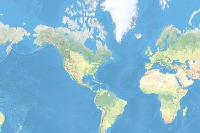

In [5]:
training_data = gis.content.get('637825446a3641c2b602ee854776ed47')
training_data

In [6]:
filepath = training_data.download(file_name=training_data.name)

In [7]:
import zipfile
with zipfile.ZipFile(filepath, 'r') as zip_ref:
    zip_ref.extractall(Path(filepath).parent)

In [8]:
data_path = Path(os.path.join(os.path.splitext(filepath)[0]))

In [9]:
data = prepare_data(data_path, 
                    batch_size=4, 
                    chip_size=400)

### Visualize training data

To get a sense of what the training data looks like, use the `show_batch()` method to randomly pick a few training chips and visualize them. The chips are overlaid with masks representing the building footprints in each image chip.

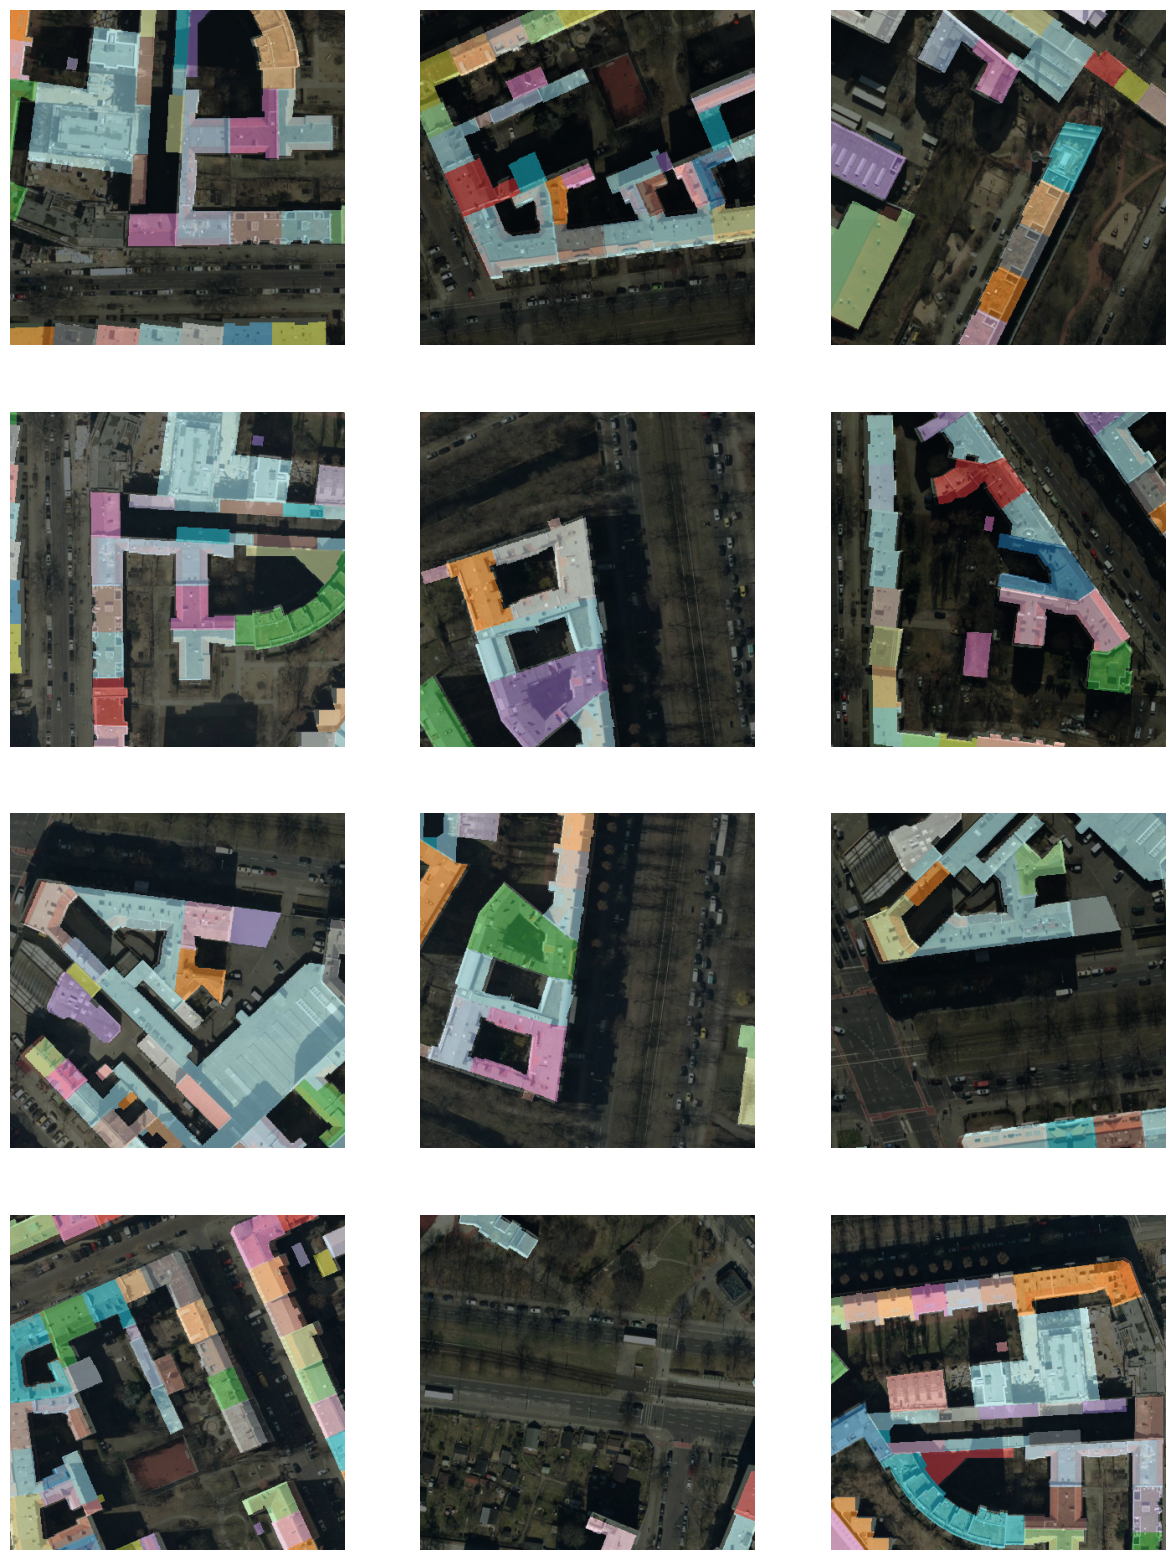

In [10]:
data.show_batch(rows=4)

### Load model architecture

`arcgis.learn` provides the MaskRCNN model for instance segmentation tasks, which is based on a pretrained convnet, like ResNet that acts as the 'backbone'. More details about MaskRCNN can be found [here](https://github.com/Esri/arcgis-python-api/blob/master/guide/14-deep-learning/How_MaskRCNN_works.ipynb).

In [11]:
model = MaskRCNN(data)

Downloading: "https://download.pytorch.org/models/maskrcnn_resnet50_fpn_coco-bf2d0c1e.pth" to C:\Users\shi10484/.cache\torch\hub\checkpoints\maskrcnn_resnet50_fpn_coco-bf2d0c1e.pth
100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 170M/170M [00:06<00:00, 25.9MB/s]


Learning rate is one of the most important hyperparameters in model training. We will use the `lr_find()` method to find an optimum learning rate at which we can train a robust model.

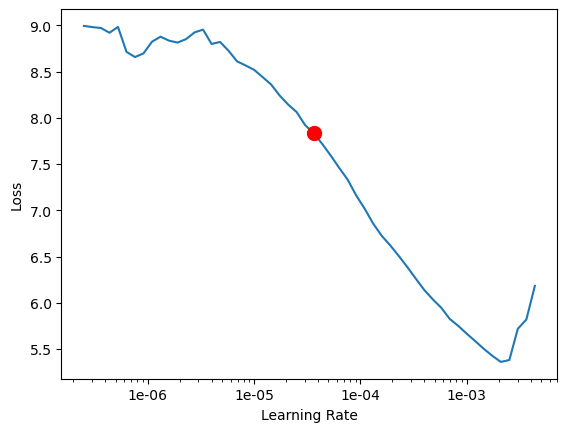

3.630780547701014e-05

In [12]:
lr = model.lr_find()
lr

### Train the model

We are using the suggested learning rate above to train the model for 10 epochs.

In [13]:
model.fit(10,lr=lr)

## Visualize detected building footprints

The `model.show_results()` method can be used to display the detected building footprints. Each detection is visualized as a mask by default.

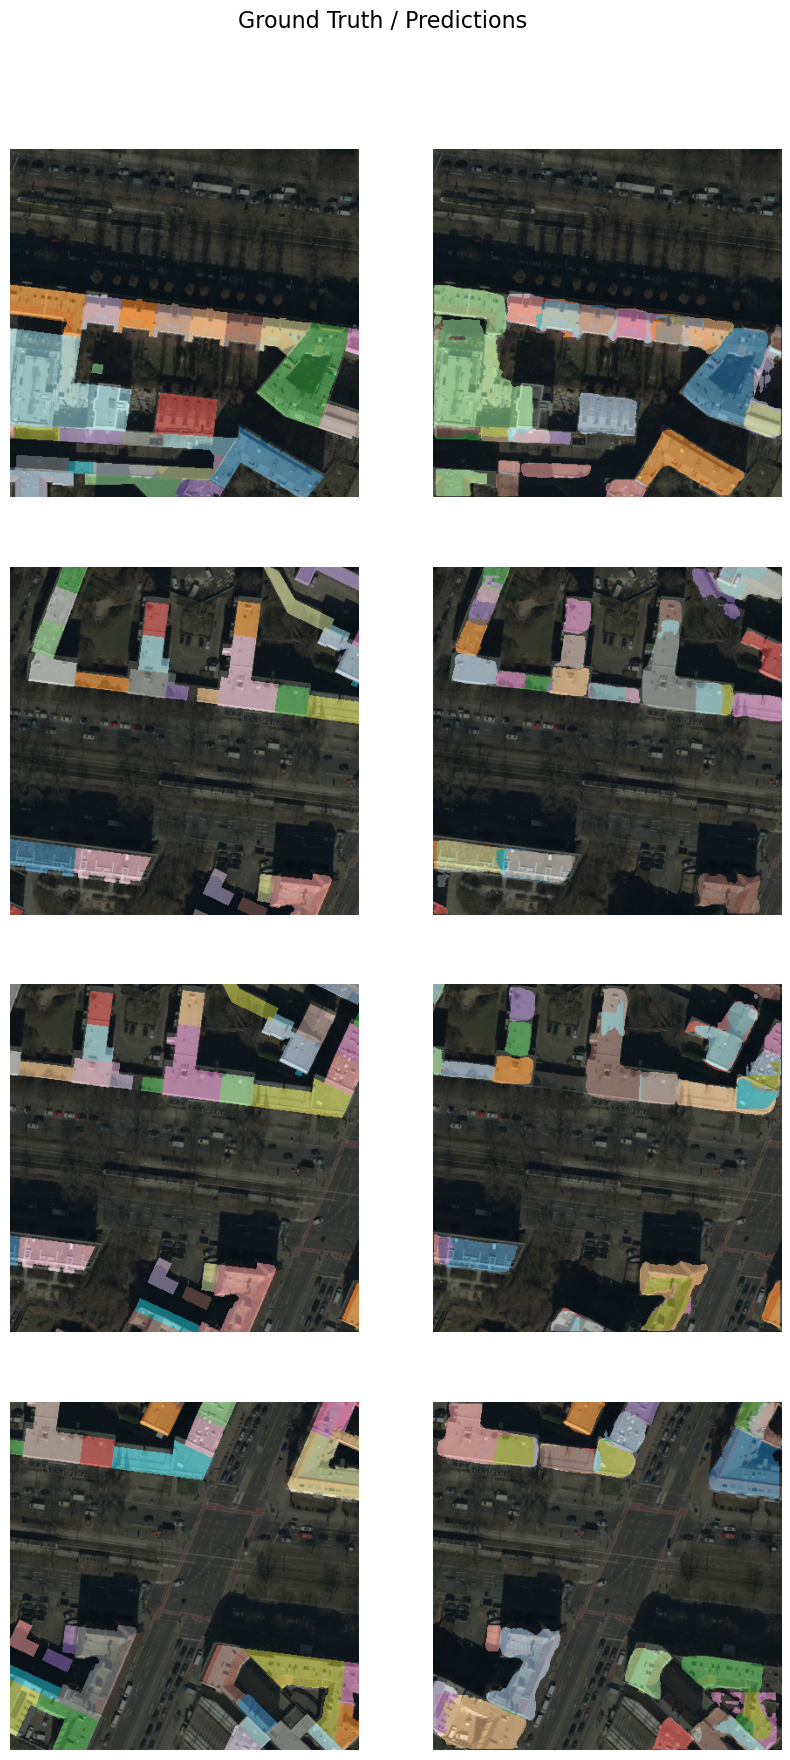

In [14]:
model.show_results()

We can set the mode parameter to  `bbox_mask` for visualizing both mask and bounding boxes.

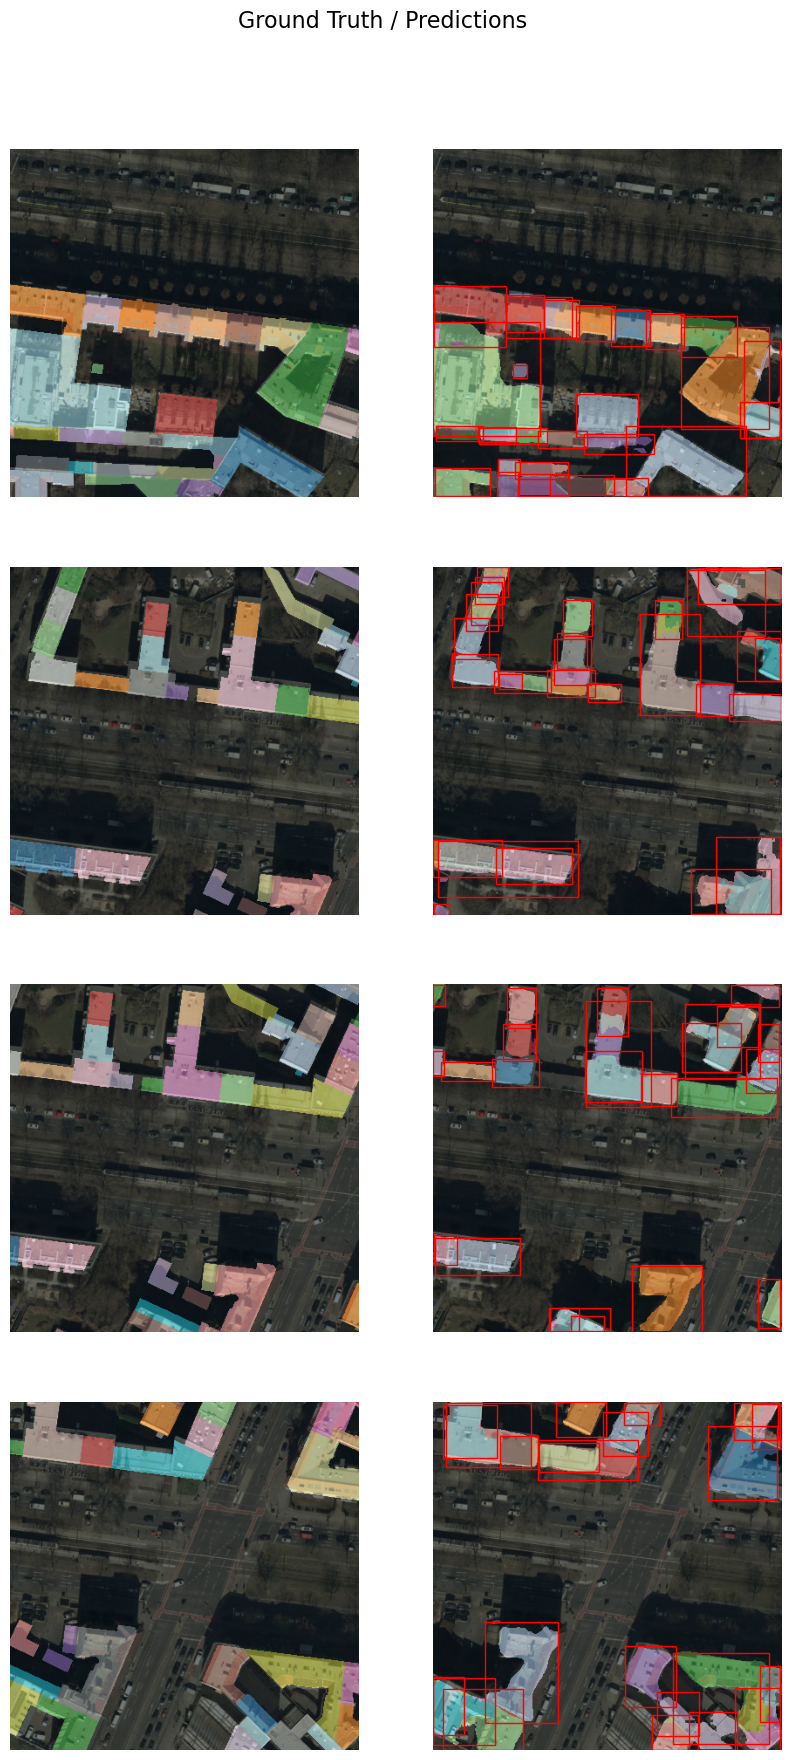

In [15]:
model.show_results(mode='bbox_mask')

### Save model

As we can see, with 10 epochs, we are already seeing reasonable results. Further improvments can be achieved through more sophisticated hyperparameter tuning. Let's save the model, so it can be used for inference, or further training subsequently. By default, it will be saved into your data_path that you specified in the very beginning of this notebook, in the `prepare_data` call.

In [18]:
model.save(f"Building_footprint_10epochs_{datetime.now().strftime('%Y%m%d_%H%M%S')}", publish=True)

Computing model metrics...


Published DLPK Item Id: 53f7c65e27244d98b632dad8085a7781


WindowsPath('C:/Users/shi10484/AppData/Local/Temp/automate_building_footprint_extraction_using_instance_segmentation/models/Building_footprint_10epochs_20250612_161437')

## Model inference

The saved model can be used to extract building footprint masks using the 'Detect Objects Using Deep Learning' tool available in ArcGIS Pro, or ArcGIS Enterprise. For this sample we will use high satellite imagery to detect footprints.

<img src="data:image/PNG; base64, iVBORw0KGgoAAAANSUhEUgAAA+cAAALRCAYAAAA5qtK4AAAAAXNSR0IArs4c6QAAAARnQU1BAACxjwv8YQUAAAAJcEhZcwAAEnQAABJ0Ad5mH3gAAP+lSURBVHhe7P0HWJXreuePn//vmrnml8l/JsnMJP+c5CSTTHpOMkkmk35OklN3ddtBQboFURRFOghiQRRRVATBgr2gotiwgiK99957Z7H6onz/9/2stWCBy7a37q1nP+91fcS13ud92vuu576/T3u/gzc4/oN/Mb63oxS/t1MikUgkEsn7wG+Hl+C3tpcKG/3b9Pf36TuJRCKRSCTfALtK8bs7Ssgel+CXfItx4Vk9ejpaTWr61ccbifPvkdFvamrC5cwaXM2SSCQSiUTyTXKJ7HFpTQMGO1uEQGcbnUzfJT+TSCQSiUTytZNZjUdFdVD3tWJeQgUSHtWgq63ZpKZffbyROOce+qvPqvGd9YX4zuYiiUQikUgk3yQeBUjI6sZobxt+c1sxHhfV4jsbrISTSCQSiUTy7iGd/OOEekDdj4+OlCLhYTXamxtMavrVxxuK8xLRU88J/3/8iiUSiUQikXyDfGdjIRJzeqbFeUYxifMt1sNKJBKJRCJ5t3xncyE+O0FiXDMgxHn8w0q0NtaZ1PSrDynOJRKJRCL5QJHiXCKRSCSS94fnxPn9CrQ01JrU9KuPN5/WnlWN73gV4js+RRKJRCKRSL5JPPORkD1HnHuTc+ArkUgkEonka2dTIT49bhTnH5M4j7v3DsX5d8nwt7a0oH1Qhc5htUQikUgkkm+QDmJEqUFXe4sQ5/UNjegeVqJ3VC2RSCQSieQbYHBMA81w77sfOWfDzw6ATqeFXq+TSCQSiUTyDaPVatHZZhTnjY2N9FljNZxEIpFIJJJ3j45Qkzg3j5w319eY1PSrjzcW550kzjXkCGh15BBIJBKJRCL5RmGbzLbZLM7VGo3VcBKJRCKRSL4epDiXSCQSieRrRENMTk6aLOSLD2vXvk2kOJdIJBKJxIjeYDBZ3xcf4xMTwoZbu/5tIcW5RCKRSCRfIxMkzB8/foyzZ8/iwoULVrl48SJUarXV682YHQnD+PgbnTMjxblEIpFIJEab2dPbi+MnTuDUqVNWSTx2DGXl5ZgggW4tDjNTZHtZxFs7x/Z/cmrK6jkzUpx/G9DTwzBhwNS4Hjpr5yUSiUTytcHH/v374ejoiJUrV1pl9erVGFMqrV7PsOhubGpCbGys+GvpCPC5nr4+JCYmIr+gQDgDlteakeL8/UCn12OS7LOBbLW18xKJRCJ5t7DdbGpuhpOTE1atWmWVFfb2uJuWJmy4tTgYFvlsl+8/ePBc5zi39VeuXMHp06dfaJeZ90qc8yJ4Pf3VaHVQzcFaeMmr0Y8boO0ZwubEcnx6exDtKoN0ACQSieQbhI/DZLxZgK9bt84qGzZseKk4ZzHeQIJ606ZN2BURgda2NvEdOwMDg4OIOXQI6z09kZuX98Je+jcV53pyLAz0d1SlwZByhmGlFkppp78UOoMe9dmN+KO9VdhbRyLdYD2cRCKRSN4dbDubW1qwZs0aqzaZ4Y7zBw8fChtuLQ6GxTl3vrNtNgt0/o6FeTIJc0+yy0lJSS8dPX9vxPk4CUY2+EXZLfi/UeX43q4K/F5EBX5/dzl+LbASazOHMDBJwtLKtZIXw+Jc0zWIVYeK8c8pA2glcc51bS2sRCKRSN49POXt8uXL2Ldvn+hhn8vhw4fFOaVKZfV6M2zweWTcx8cHO3fuRHtHB4aGh3HgwAHhGDwgx4AdAsba9W8iztluDCvUyMtqwQ/2V+APdlfiDyIr8Yd7KvC9oAo4PRxAr7TRb4wQ5zmN+OMoEuf1UpxLJBLJNwHb047OTkRGRuLo0aNi5lmCCfH/hATs2bMH2Tk5L5+WTvbW0g4/fPRI2NarV6+KTvcTJ0680ra/F+J8goyTurkHNrEV+NWYFjwZ1GB8nHvpyYmZ0qG8qAMhaX2oGZPC8suipzqWI+YSiUTy1eERajbO1uCpamzkrV1nhg823Onp6SKsJRx3e3s7AgMDoRgbs3q9JRw+JzcXwcHBiCTHYV90NPz9/ZGWliZ67F8kzJnXFefj43qMtvbCKb4Sf3ywFY/6NcCUQUzFBvRorO7Crvt9qFLoyZ4/f73k5bBAl9PaJRKJ5MvD9pNtMHd+W4NtpbXrzLC9rK+vFx3dIyMjwpbzd4z5Wl53nnrzJsX28g1bOS/9AwM4dOgQQrZuRfT+/QgKCnotYc584+LcQIZ8rKMPzgfK8OOUfvQZxsnmzw7DwnJqQi+mvJu/4ynwk+QcACYm6TuL84yGnJJZYQg2gLN22Rs3f0/pTMwOa9kRwHGNU1y8bnvcFG5qcmYN92ulZWJuOpZ5t1auWdezEbc8PzWTB2HgLc6Z82fOOyzya5g0fuaOEctrJq04Bwaqe/N5ZoKvM11veU8kEonkFx0WsLV1daL3nEetLcnLyxN/e/v6hHG2dj3Dh1mczz3H17W1tb22ODfDG8xt3LgR7u7uuHHjxis3k2NeR5xzJ/lYdz+cD5bhry73oscwQV7OnDAs0ufaA7I7FHAGC/tjhm2T0a6Yw9H/KW5Lu6kz2WgW/VNsdyzCjluEm46Lrhf2if9Ptst8nm3nzLXG63mUeq6NFvEImzgTzjJPPBvtReesn5/Jg9H2WzlH95w/s+8j4hJ55fPmspiusWZz59YzXTdu9muslE8ikUh+0WC72dffj8xnz4RdffL06SwekX0sLSt7qV20FOeDg4OzbDh3cvO1PB395q1b1L6++m0qfH1LSwt27doFZ2dnIdQ5jy/zDcx8s+KcCjupUeHq9Ur8UmQjrvWS0zJhcf4FcMGmtBrce9YGz+tt8LrRhv1VY9CQIZoWn2wEtUqcyezABgqzmcJsuN2J020aypHBaODI6eAp35EZ3cjt16KyqgtrU1qxicL63e1DtY5EKItVyueUUonbed241KpBQ00PAm62YVv2MIYoTSHWNUokPbVI604XzrVzWrONKRv9jqZeeF2ndFKNed9XNooRDT8YZEzp5t962ob1olztOFijJGNvvFYY/TElkjPbRTqcz7DsIQxQHvla8uRw/qnxnBfFvT2X8sdOE+X9bn4X4ioUGNTwmkEtqiq6cbBgGE19CiQ9aBHp+d7tRoGCymoh0CfJ2A8092PnHWN6nrc6caliGOnl3ThSpkC/mspnEV4ikUh+kWE7lvHkCTZ7e4uNY9zc3ASurq5wcXFBzMGDaGtvF4be2vUMH29LnHPvPk9nP3LkiJjevmXLFjElvqa2FjyKYO0aM68jzifI1j66W4Vf2tmAs13aN7DRalx/1AzXi81wudSM8BIFDCQ6uQNahJkkIakcxcG0VhHGlcK4pXTgvMlusi3nsMPNvfC9342yPg0yctvhcp7CXm6B581eNJE9FQKd4h0fHkHsg06kdGtRlNtKabZib/EIlCTQhcAdHILf9RaRFxdKb9XtbmQPUXlI8JrzLToC9GrcyW6H2wVjOq5X25DYoBKd9VOYgKJ9AGHXjXG4pbTjcoexTlgEj1OZlK1k368a03G70o6kOrqHdH6Czg019sAj2XTuageutCih4w6Ejn4E3u3AnS4qB9lsVd8wDqW142qnBmWF7ZQPysuFFuwtHMEg5VH4JZQeD1xMkM9w/XELVprq2S2tH80tvfBL60JGH8VHPoq5fBKJRPKLCNscFr4nSTyzPWZbbLbNbKc3b94sRPqLZocxb1Occ3hO68rVqwgICICfnx9CQkKQdu/eS30DM9+oONeR0VCQwVwfVYof3ehDPxnQV61XY2OtVo9g+7F6/CSxATue9ZIRa8DfRtfCr3BMXD9OhrCHDWhCFf71TCu2pvfgwNMuBN6sw59vq8d+MtgjLJrJsKlLmvArvkX4tzNtWJXagQNPenAwqxU/CCrDPyV1oYoMpY5uEBv2TYcq8EcxtULkR6Z342gpGf4pHbrbBrD1KKV1thWhprT8U+vwfUorpnQUo1NGga43qHDzZiM+O1wDu7QexDylsHfq8fG1PnQpqVyqYYQk1ONnJxqxk8p18G4D/orKFVKiFKPwY4NjOHyuCv90rAl+j3uwj/Kw5kIr6icMUA4osP80nTvRhEDKQ9TjLqy91IYGk1PiFVOEPzrbhyalAZPkbN24VIbv+JXhkwtt2PmoB/sze+C6vwz/91Q7no3SQ0r5naCy1Vf2YPHOEvzwUjv2Ut1E3mvHqoQKfDewAH95rhf1cqmBRCL5FsFGl41rQWEhgsnYrnV3x/r168VmMcePHxdT2V41fY6PtyHOOR0epT90+DA2enmJ+PLz84VIj9i9W+w8+zKB/ipxzvZWpRiF3/5S/N9LPeg1i+GXIK5RkRCOrcVPTjYjoXgAZ5824x/3VcMzjwS6jgTjpA4tjX3wiKnAT5I7EJfXjzOFvdh9pwHf31qHPWWjUJDdZNvSnV2P7/gW419OtWLDvS6cLejHqcI2/JNPKf79YjcaKZzonO7swQ92luOvj9Zi8/1enMzvx10Sv+PQobSgA8v3lWPerR6coO/PFndjy/la/PXORpzvVEFNApln8Q0PDmMH+w2U7905lKf8PhxJq4fjIwXdMQ0qKrrwcWQ13O91Uh76EZ1agz872IxL7RpMkq1tovNLosrwxZ0enC7sQ1RaJw7n9kNBor6uqA2f7i2HDeXtDJ2LuNWB46WDVE5yAEub8R8CSuBfaRy1H6vvwg/CC/E/dldj3d1ekdaRtFb8W0Q51uWOYICfQeELjeHAyWr8ZXQNQrKoXBRuz+U6/H1kCb4TXIGoBqoXU+e+RCKR/CLDdplt5uXk5GmbvHbtWoQEBwt7zedftszrbYvzq9euidlsp06fFhvN8cg5dxLwhnKv8hG+UXHOxrC7qwv/HFQBx+xRMUV7+jwVbIIEKYtSAYUVPek6La5fr8Tv7GjEtRF2cngalw5P7tTiN3Y3I4uvG1Vgb1I5/iy+FQ8HOQwZKEY3huPnq/Bb0c243U/fk0HWlLfg/yWj+LvxbUgnUWqMT4+emjb8hX8Z/uXhECZ5ZHxoGL4J5fjOzlpcEqPvFI6M6MTIKCJOlOP7Ca1IHzJNRTOlFX+2Er91oAX3BoxpNRU24Q+2VsC/dAxqHjXgcOMaNA+q6aZrcelKBf7n7ibcUpjyMaXFw5s1+I09rSih/9eWt+FPAisQWjY2nf7IkApaOldW1IL/FVSJyGrlrHMK7ligvHvFleIvLvWjRWUU5zevUlnIeK/JGoVG5IUe6oZW/FlQKdwKKA5yNLQ9A3CJJgfoag+q1aZy0T2qKGzHXwXm4W+S+9FIYl+Kc4lE8m2CDS8b7uKSEiHQedf12CNHxC7pr9MrzgeL84yMDBHeEh4J7+joeKU45/RZmB88eBBe5ADwtHbOFxv9wqIi+GzZInZxZ4H+IkfgdcT5CDkJPw8qx2fpw6L9tzzPo8XmadPmWWv89wrZst+JaMI91YxNzb9PNjqiGc94tHdoFEFHy/A3pztQOGYUpMK+aBWIJbv5vcOteMJ2k2x/b14j/h+fEvzthS7Uk7A32lgdWsta8Dv+5ViYNULXUxpdffgkqhT/z8EWlI+Y4iQ0HX1YsqcUn97pR5vW+B3HMTEyiA0xZfj++R60Uj4nqezJ16rwP6NNs/hM10OnRrdCj5HuIbhEluLj1D50izwQYwpsP1qOf0nuwwhUOJFUif8Y3YpGk72coLoYHdOQNB/DviPl+E+xHejTG8+NU92PKjVQ8yAB+SG/FlaG0GqTOG/sxs93F+K/H+1AkfArqHx6JeLPl+O3Y9uQM0T5I58o60EtvrerFsfatcYp/3Tt5JgSEQkl+M/hVTjYRN9JcS6RSL4lsF3kt5ykXL8ulnhxR3VWVpawgS8T5gzb37chzvk6HjE3b/7Gdpw7ybnj3ryLO2/W+jKB/o2L867OTvxtQAVc8xTT08vYIRhs7cRPIyrxe7tJiG8vw/8+14ViMkgT2gHYby3FX10foArQYoRf46LRQVnRit8MLoV/jQ59LT34KRm6Vdk8Pm6awk5MTpBBr+vE34dWwKdoVJzTkIH/r6Fl8C3j6W0zeZsc1+ICGcLvxnWgg40eCdxNJHD/8EIfWkmQ8rQyHqFvJyP672Hl8Mgbodgs0qK4mms68H9CKxFYosAk1DiaWI7fONyGJnI4pgUtO1NknFVj/VhM+f/HW4MYp7TN5RotbcF/Dy7DtgYdOuo78Q8+pXB6OoR+7umna0XHBaVVW9mBv9lShjW5wxgUowDGzg1eh25NnF9PrsCv72/Cw1EqG90HLTk9Bqrb5VQX//vmEN01HUpzW/BHoVWIbVaRw2haL8gjFMMj8I4rwZ9f7JPiXCKRfCthY81CmkereXf17p4eYdythZ0LH3zNjh07pneDnd4V9tgx0cPu7e398lepUdqVVVXitSy8GyzP8DI7H5wPFujsBDym/PFmOHOvZ15PnHfjRwHl+PwJieBpG63HWEc3Pt5tfKvKb4WW4PeOtyObBbVuAMvIRv/51T70jqnRNqhC27AanUUt+JXgEgSSje5q6MI/kh3eTHZ4nCyxWdgLW1bWjr8guxlRPUZl1KM7twG/REJzfwPZMrK55ryNkx3bn1iK75/rwRCLVxLnP9tTgp89UEBF9ozjnJrSouBZM353Ww1OtqsxQbbRfD3VCDIeNOA3d9QhtV8D5egQXHeV4ie3Bshakz00hePlb9xRXlrSgt8JqkJYqQJ9CirXkAq9A2O4QLb0l6ObRef+g9Qa/Fe/GpzoVmJQpRXpGfd1UePi+Sr8cmAtkofUGKJzk3RO2M4XiPMf7SiFQ64CSjqvE50Sajx63IBf29GAG50astsKBESX4k/PdlP5Z2Yd8ozAnpx6/OftUpxLJJJvH2yfFGQ7T585I95J/jrCnGG7yZ3ZPLrNNpiXilnCb1Lh6en37t9nE241DobF+bZt28RMOt78zSzy+e/g0BCio6NFp/qL7DLzzY+cd3fjBz5lWHB/UBjE6fXZ3KtMBkw/Noq4i5X4zUNtyB4kQ9dFYj6wBP/f8Ar8IQn3/2WGHITfITG/q06L+upW/K+gamyr5BHgmRvCU9+G2gewJLwEthlDwqBrSZz/KhnFMDKKlhvRcSXeukwCdkcTnnHvOQncDUcq8Mm9QfTqyBCSUZ2c1KKivBW/F1xDjsSctCYMGGjtx4JtJViROQwlhuEZUYaf3R95bg0YO0CK1nb8pX8J/succv0+let3I8lRqSXjPKbAkau1ZOCL8Z3wOhxvUKB1TEvlonMjo9h3ucZ4bns9zjQr0GY+Z0Wcp5BD8d2YZmSMGUxrzNkBGIADifPvpw7SXdMg7X49fmVnI+50kSNgNvAs9oeH4XO0FH92QYpziUTy7cVs8Nm2vY7xN8POAm8cd+v2beE8WIPXps0Vy3PhdF+28yv39L8sjtcR56MjfZgXUIJ/TekDd2lb7qEiNiPTKXH+ejV+60ArMkicT3V34u9IhP/azkr8xb4qfN/EnxP/+0ANDjdrUUV293shNdhfpxKzyszxsd3sbezFz0jcry0chZJsbw+Jcxaah+YITZ1Gi/hjJfiD2HZUCXHei59GVmBd8RhUlC+zoL15uw7/JaIJGb2aWTae14fX57fgTwIqEdOlRl9vF34SWomACvWsTgCG16E/zqjDf/Mpxe/uqZpVru/vqcRPLnQgc3gcU5SHBUer8V3/Qvy3gy24TyK9U9hhsrvN3fjJoSr8hl8Rfi+hDem9KvSp2C95sTh3yVNAYVGWWeJcT75MSBn+7s7QrDrke2auMynOJRLJtxW2yW9il83imaed8wZy1uD3lvMU9Vd1xL8obfP3r8rXN7vmnDKnGRnDjkMl+P7pLtSRAbPcjEwYfu0Yjl+pwvcOszgng9rXiX8kg2STw9O3TSPHJngndVKeqK1pw58GVyOkfGyOYNajv40FcylWPB0CyWSTOC/H9po54pyMc8r5cvz67mbkm0bO54rzCUqrqrIVf0RpbZ/bEUBORl9LHz4PIwObPQKNqg/zw0vxz2kjppHqGYQ47+zA3waXwzHferk4PZ4+ODU1jq7qbjgkVpNzU4T/frwTPRqKw3SuvaITtuQc/Dad++6pbgzQw/Yicf6bJM7T54jzFUKc88i5GnfSyKnZ2YT7PXPE+cgI/BKkOJdIJJIvC9s/dgZehrXr3iavI871Kg2OnSjFb8a2oYCnhVvaL7bRJnH+2zEmcT7YhR+SjV6UzcuvKDx3bs9Ci8qKVvxhSDV2VyvFW0XM8fFbRDrrevCvdP2mklGoKTwLzV8moRnXQgLcUpzrNIiJK8EfHu1Ao4U495gjzu/dq8d/29mANLJjlu8Qn6C4K7Kb8fvBVUjsVqGnmfyGkEp4larIls+EY2BQ48nTenx3VwOSu3nUfU6ZyLcQr0Hj+qDP+U+b8WlcDX49uAz2GcNQkg0Xs9goXMbjRnx8uBq/GlKOjXm8rMwglte9uTjvx8KgMvxD2vAs34Pv2VBBoxTnEolE8oawXWbh/TJeJazfBmZxHn+/Eq2NddT+v97xVsQ5M6XjaWdN+O9hFQgsIUPN07PMYo8NnW4MJ0mc/w6LczL8k/pRbNhVgr+81MchLaaekYhlA0lGcKC9D4vJsC1PHyJzRuLRnBYJ7jpyCv4stArhFWOYpHM8rf2Xt5bBrVBNRtEogLW8JmxsCK77SvH7Z3ow9AJxzmn1t/Zi/vZSODwdhsYiLe55ry5txZ+EVSGiigW3EpEHSvEb8e3ooPinOyHIYHO+NephrN5egr+72o8JK+Xi/xunqnPvDhvqcTRk1OFXtlZgT7PR6It3w1Oe+Fz1wxr8l9BKxHRQ3kfeVJzzyLkOWRlN+G2qq4QWtegk4A4A7uAY7x2Ea1QRvk/3QIpziUQi+TB5lThneAlXc1kH/jSsFI5PjcvBzLuFm8X5xRvV+B0W57yXy7gCfntK8MfnesnqzdhEEZZEpLDRrX34nGy0XabRbhrtHZ8nfyCnCb+7vRbHmlRCuLM4/49ky/zKSZBOmV5Pyja0txc/CC/Fj24PQWtVnHMHuh7NxW3489AK7KhXiank/L2G05pS4XJKNX59XzOyh3RiWrsd1cM/pfZjZHKcsmrMt/FVbno01XTib4IrEES+A/spHA+f593Vzbu1i1e+0nX8lhNoVYg5VoLfTmhH3ih9pryzcOYd33kWXHBsMf74TDeq1OMYr3hTcU7+ikGBzbtL8Idnu9FNDiOvbxf3i+rw6fVqueZcIpFIPlBYnH8SX47wc4/x5JFxGv3rHG9NnHNvsk6lxsVrNfjfUZXwYGNEhoYFJlk8MkBKxF6owC+R4c/q19LXemQ/qsGv+lZja7mCjDKFYTQjiCscgZqMGL+e7eKNWvzBrhocbtJQTBxmnHT+ELz2l+MvkjpRoTSOSBs3hCvG/zjYhDt9bAAp7IQKKdeq8V9DqnGgSU2C2Lo4Z2djUqPEuZQa/EFELeKbeeMXY1ra0UGs31eOvzrThSqRlgENVc34/uYSfH63H+3jpnyPjuBU9SgGVTqk36vGr/jVYGf1GLkCpvPqERyhchkMWjT0jSJPbEZnPNfxtA6/FliNk1QvTb2jKOqYOdf0uBa/ElyDU4OU9+EvIc6nxqEeojJEl+B/xZBzoWEHheLWqnHsciX+g2ce/v6K3BBOIpFIPlReR5yzneOp7BmPm/APEWX44uEg+skGitFjttMGFU5eqsB/3N+C9D4W53qUPKvDf/OuxIa8ERLfbJMonGoIEVlDQsROkh1JvkU2ens19jeQ0OTzFJ+qnzvWy/Cj673o0PJ6bR168xvxnS1F+PW4Fjxie8bxkb3fzRu07m7E7QESpLxpqxVxLmy0ahR7TlbgD6IbcE3YeE5Lj9bqDvxtSDlWZg0LATyh1+LRkzr8jnc51ueNQiXyTfatvRf7qtUwjI1ie2IZ/n+7GnFtkG0tx6NDY1s/TpaPUR5USK0YxrCSR9bpnFqJXUdK8Cenu9CkU+FGKdWFENkU7+govMi2/t3VXrQaxqF/45FznnqvR1lJI/7IqwyumSOUE84v2f7iFvxpQCF+SY6cSyQSyQeJEOdxZdhxIQNZTx5T2/56x1sT5wyP9urHVHhW2Q7bw7X498N1+FliPX52rJ4yV43fDi2HzYMB9JGBYiGoVypw7HYD/sinHP9wogEfUdifHqyDf9moMPz8XnClQokbt+rxdzFV+Kej9fh5Yh1+GF+Nzy/3onhALTZzY8OtLmvBr5AgnX+1Gx4na/DjxAZ8cqQSv7y3AYdLKD4OxyPVg0PwjCnDz+4MoMcszk1pjVFaKan1+NuYavyzKa0fUFpfJPeilIy4SIvCjk9okJ3XA5s9xfjjIw34+DjlO6oSSzKG0U+OiF45itgb9fhDv3L8I5Xr51yuQ/UIqVRgakqDnLJW/HhbFX5K1/G5v9xfh/0lIxgj9+dJYQt+FF4tznHd/W86d7icRD9PuRscxsZDxfiT8zOvUrt2oQy/EdWIhwpLcd4Pm4ASfD9lQBj+iUkduroG4RlVge/TffkJxfuTE43wSWnFF+RY/JUcOZdIJJIPltcS5wR3ohs0WtS19WDj8Vr87Z5q/N3BGvxf4u/3V+K7ZKNtHw1gkMORPTBox3D9SRO+71OGvzhcQ2Gr8bd767Cr3rj7vJ5Et0qlRvqDRvyf6Er89QEKQ/bzLw9VwyVtCK1KDQw8E4zi4g3h/nN4JVbf7MGqhEoKR+nuK8N/OtSCjHYVdOQ/iI1KO3vx77vKsbrIQpxzWhTPyJASV67V4PeiKB90/d8dqMSfH67H1qwRDGqN6fCotk6vwaP0NvwosgR/vp/zRGlFViG03jglfnhkCL6xVfif2yvxfw7R+ega/OhEK+4Oa8nTUSAyqQZ/S+G5Xv5mXzV+crYdBXRuCiMIjq3G/9nL56rx1/tqMP9yJ8oVVN9ka9VlzfjlkFIEV5nEeUM3frCtRGwIZynOHz6qxy9vq0dKh1GcG8bVyHhG+d1Wir/g/BwgH+BiJ87cqBVLAaQ4l0gkkg8P87T22LtlaKipFFr6dY63Ks4ZsR4LOvT2KPC0bhiP6ofxmOC/6S0KdCm1wqBzWJ7WbdCpUNFoDGMMp8CAhUhkwT+lVaOylc5RfBwmvWkULSpKh4yaCEfxsDj/1W3l2F6tR1fnMB6YwmZ2q0Qc5unlBnJamroVqCaxraLPZsNvmVa5KS0mvUmBVrVFWgLjFPWe7hGkm/L9sH4UTQqtqVOBBLpWhTIql7n8jxsUwuFhx2FUoURRA19jPPekXQntpLHDYmRUiQIRn/Hc0w4ldHSORzyMeR9FWZ8aY+SIcN77+hUo7FIKx2SmLGrUt42idEAjnBXO7yTFMTKoQBalK8pF92KkjxyNY6X4UxL7jfI95xKJRPJB8rriXEAike3B2IgKtV1jqOweQxXBf2v7VBhSk4022QKxbk+nQXvvTJhKsqkKC1vBdnxCq0Fb30yYao5HS+mYbT2FZ3H+yzuqcaRRj6FBCmdKu2FEO73cSqRJee8cVKGXfAVzGmbYto6r1WjoMeWF4qgdUENJ+bS0X5zvcb0W3QMWeepVYYTsJJ/npWPKMYrHdI7jaSB7qeF80HWDQyrUmM5VdSvRTrZdvDWFzg0MKlFtPtejFD4NL1MT+Vep0TygQr+K80D3Ra1BB33uoTBiGr/Imw4KSruZ8j1i2mdG1DPnt9+UX8pP06gWQ/mNQpwfapbiXCKRSD40zOL80O0S1FWVG8X0axxvXZyb4XXVlpuhmZleh26CDdWs96ATs3aRZchwzQ0zKx6TOP8V83Qycjymw5JzMCNajXDe5u60Ps2r0rJgbhlnOwcvLpe1c9OOyUvOMWK9ukWZ2DHiMHPrjNfPcTjjZyoD/Z+/M8fJ0/wmegZgt6cCLtnDGDV1AFjGIZFIJJL3nzcS5ybY1rA9mY1RSM8NKzrSLcLMtanMc/FYnDOL8+nd2nm02BzWWnr0nbV8COj7WWnRZ2v5YfQseqfDzg73XPkt0pt9bnZeXnaOea7sVsIY45jJDw9q8PI8Y36N8fPeOY+uV+E3oltRTvU1veZfIpFIJB8E7504/1ohQ2Ypzi13a5eQoVep0TikFtPqeKqdYFKFlDv1+M2dDbjIU+vIMbB2rUQikUjeb76MOP86YXE6S5zLUeBpWKAP9yuQNcBT6qluBDq0NXfiX/3L8WkmvxlG2meJRCL50JDivKQJ/zWgFP6VJEClOJ/BQIZ+eAAOZxvhfb8Hl0v6cbGkD1H3G/HnwTXYUTyCUXIG5Ki5RCKRfJh8COK8K6sO3wmuwL4GKc4tMei0aCxvxh/tb0RURhciHnXR32b8XUQ1VlzqQeOEnNUmkUgkHyLfbnGu10PT3odNN9uR2qmTa6fnMAE18vM74X6mEbbnm2B3rglLk9uR2MK76868SkYikUgkHx7vuzhnGzPSPoCozF7kD85eAvZth+tGqVLgcloH/G63w5+51Y7Q4lFMThqmX60mkUgkkg+Lb7c4Z8Q7TMenN6CRzMAb0YhX1IhXxszAa9vNm9RIJBKJ5MPkfRfnjPE94wZpo63AG8IZp7NbMDl7vxmJRCKRfFhIcS6RSCQSybeQD0GcSyQSiUTybUKKc4lEIpFIvoVIcS6RSCQSyfuFFOcSiUQikXwLkeJcIpFIJJL3CynOJRKJRCL5FiLFuUQikUgk7xdSnEskEolE8i1EinOJRCKRSN4vpDiXSCQSieRbiBTnEolEIpG8X0hxLpFIJBLJtxApziUSiUQieb+Q4lwikUgkkm8hUpxLJBKJRPJ+IcW5RCKRSCTfQuaKc5VabTWcRCKRSCSSrwfVcM/XIc5L0NnWgjGlEjq93mpGJBKJRCKRfD2wLWabzLaZbTSLc8XYmNWwEolEIpFI3j1qrRbKwW58Elf2bsX5d8NL0NvVgTGVCjorGZFIJBKJRPL1wbaYbTLbZrbRrW1tUpxLJBKJRPINwuJcPdyHz45WSHEukUgkEsm3BSnOJRKJRCJ5v5DiXCKRSCSSbyFSnEskEolE8n4hxblEIpFIJN9CpDiXSCQSieT9QopziUQikUg+MHgzN2tYC/si3oU4/yr5kUgkEonkQ4TtnWF8HHqDQbwFhV9Lyn/N37+JPfwgxDkXiAvLf7mgZiy/t3adRCKRSCS/SOjI5vHrzkZGRlBZWYms7Gw8efoUhYWF6Orunn4jyuvYxbclzjmticlJGChvSopvVKEQ+eBz/D3b6bnXSCQSiUTyiwCLb7bL7R0dyM/Px507d5By/Tpu3bqFZ1lZaGltFbaVw1m7fi7vvTjngnDvQ09PD0pLS/HwwQPcpMKmpaUhNy9PVMSbFFgikUgkkg8NFrhMW3s7zp07h7CwMISGhiJq715ER0djx44dCA4Kwv4DB1BAQp3F8avs4tsQ5+MTEyIt7ihgu3zhwgWcPn1a5JGdE85LX3+/CCc70iUSiUTyiwR3QHd2deHK1auIiIjA3qgoJCQm4tSpUzh+/Dii9u3Drl27cObsWTQ0Norwr7KF77U45wL09vUh9eZN7KYC7yIOx8Yi8dgxxMfHY/fu3cIh4QLz+1nZ+MseeolEIpH8IsF2jUekMzMzhfE/cfIkqqqqpkesp8jGTk5NiZHzuySQ2S6yOObPLxPoX1Wcc5o8InAyKQl79uxBQkKCcFDYZl8nYZ5E3++Ljsahw4fFaALnRdpoiUQikfwiwDY4Ly8P+0iAs/0rr6gQA8qWB4epb2gQWpV16+PHj6GxEpcl7604ZwNeUlqKmJgYYdgLi4qgVCpFXOyI8MFh6urrcfrMmekCc6VYi08ikUgkkg8NtnM8XY5HoXfu2oWnJNDZ2HNnNJ/nJV4KhUKEYfHLgrmNRHZcfDyi9+9Hc0uLEPBz42W+ijjnazMyMsSIwFnuIG9qEnmxPDiP3b29SLt3T+T94qVLGKX4XzVqIJFIJBLJ+wzbt8xnz0Rn+P2HD8VyLtanZvs2NDSE/oEBYcPZBrN9zM7JETaTO7DNNtwa76U450Lk5uZix86duEkFGBoeni4wOx+iQKbCm50OUeCICFxLSZE985J3im7COFJlsHJuBj30ExRoagIGvbXzHzYa/TgmuBImDK/V2SZ5v9CJZ3MS4wbr5yXvD2zPsrOzsZ0cAO6MZvFtNv56soc8cs2d2FlZWdO2j20kj7RzT33skSPCabBmF7+sOGe7++jxY+GU5JCt5rT4O84XY5kW54U/88gBT7k/efLkrLgkkreK3gDDxDj01s5ZoDOQL0m/n19I+yXqgH53v4C+xy88pudS3rv3G9aivMSMl5bxEmu2cZZ2jweK2d4dINj+mm0jX1dbV4fg4GCUlZeLz5bxTl8/R5zXV3/D4pwz2tXVhW3btokRAssCc8F4ygB/Pzo6On0Nb5AzTo5BfWOjKHBRcfGsSpK8begBMwnUyVlMUaPy5UZEdOMTdA8n3rKhJCdxkvJEAtL6+TnwD4fCzyrT5GzjrSNFOlicjN3hp1E0praeX4pnXDOKmjuxCD10AZUDrGGthPsSfNV60hkmqFyT1jsMyKCz4H7lPaQ4MFiHK3HbEJNajiH15Ls3JCJvc+4NQwLzvTNiouNi6r3tlNHrNOh8cgIhUQnI76Jnc9x6OMk3D9s8XsvGo84ZT55Md0ab0dN5nupuu2yZmMZu3iiVz7Eo7untFaPnvDmN2TmwvJ7bkTcV52yjeTSe17zzjDa2teZ4OX3e/ObW7dsYHh6evobP83W8TI2ve0Jl4Y4F83nJW0arxphyTPhJIxaMqjR0v76M46+FSqmESmvt3JdHo1FDqVK/coqnsOX0nGnUY7PLo9QI/09nKo+eDNhQ4TlsWROB+z2jdM6KLaNncYLsc/mlEDj57UdeD9mVt9QGatQqKo/mNcpjHb5+TKkix9zKeXFPVa++B+OTmKi8gnWrnZGQq4Tha+iA1WhU1G4o5jxvCoxpqL3g+2Plmm8GjZiBq9JorZz75tHrtei+vxeO64Nwv/ntPZeStwvbMw2J7yNxcWKPFUu7az7f3d2NjRs3wtfXV9g9S03K/3/w8KEYQR8cGpp1zoxZnH+eWIXt59LxLOMRebyvd7x1cS4KTBniefs8VZ2n6ZkLzH9zcnIQEBCAS5cvi3Nzr2Xjn56RIYR9f3//9LWStwgJjyllNzLPbIO9owtWrlxpxM0VTms2YndqDSkmfmWAlWutQkIWStRkHEPU7nOoHHpbQnacxFsfHsWF4cDFEgxoeFTHWjgjejJo2r46JEd7YoWTqyiTm5sbPLanoIPyyM8SP7d6UoQ9D/fA9otgPByhZ9lanCQkJ9VDyEtYi8/cdyKLBNDUV25kyaHAGKoeHUXU3kuoGSYR/Yb1xKOlfdknsMUzGDcalLMdNP0EDD1PsWeTJ6LutJBBfclvZ5wUfG8BojznYeXhp+hV4d0KZE6vnfIW7AknZ+O9Ebg4ws4vBk9qBzE1pxPlm4Kfk5Hqq9i6ORh3Gt9P42rQqdB42RefOGzC3Sae3GE9nOSbh+0hi+5jx44JA27NpqWnp2PFihXCSeDeesswLNB5rffevXuFoJ7bS/+m4pzj5lHyOHJKLicnT9toFkh8/sGDB/D29kZKSorI+9zruQzceR66davYzHVufiRvAcMk9EUnsXzJYiwnW8Z2zJVwc16GhVviUFjVimHtCzporUH2TDn0CDtWrMT5yrfVpnFn6yiKUnYhMDgJVS+1+wbKqxLd9eW4uGs1bMkGcJnc3Bxgu3ovnja0Y0RrnKHG9nkwOwFuS/yR2jXyQnHOneeVyWFwCzqIgrcizsnmTw3i6fFABEXeQIsCbyyK+TdUdcEXNs6hSO8lgW1xPdvXvsJjcF3ujhN5VFmTLxlwIF9mvOoavDxW4Xie6p2Lc7YnTSnh+HjeEji4Gv0mft5cXO3htIv8p55+jJHz8Y13otPvYmogG7tWLcOetF7xHFgN9w0ixPnD/XD1CsVDKc7fW6ampsRMtaioKNEBPldcs03s7OzEpk2bhGadK875PI+msx29fuOGGOi0vJ6xFOdbk+7hwd1bRjH9GsdbF+c8XY8FOG8swxvZmAvDDgZP5+PpA7zovrunZ5YDYgk7CyzuL168KOKzFkbyFTCMA2NtuLnHE67bL6BqQIWRoUEMDQ+ite46/OfNg6v/PmR1TGFi1gisngTwhLiXgnFTbyqJfUyOIu9sANb4xqN8hJ8Wi55Wus968zXMnB+BMYxxCpc5jIHjpmihb0BSgAN8EgswrCfj/4Ip2AaDCi0ZR+D4sQNCYu+gUT2G4cEhDA7V4rSvA+xd3HGpjJ9DHokncf44Gg5Lw/B4lAyfRbrj5AhYxs+9yWJUYE5Ptxj9Nl9jrodZzKmrCe7sIGU9OYysJF+4BxxH1ejseno+/Nw4jY5L98N9sFvohjNVY7ONJRkuQ2cattguhO/l+pnRc65bq/mlhkOthFI9s8fD9DRBukeW9WLNKPOomfk8O+j8W3/hFEOegt18B5uc3LD3QR36hoYxMDgMhboNj8/uhdtHP4P/6Xz0qed0wMzJh7UOB51FPuZOJeNZBiJPc57Bl3VccNih0hNYs2wlLlW/pFOGws19dmadn5P35+6p6ZnnkVNj3sZN+TLeL/7e8jmbO3phHLGyGKGZjm/288nXTadpQkdhzecZTouvNdDfuWElXw2+R2z3KioqrApZvqe87tsszuf24PPvindS5+l1z549ey4Ovv5NxLnZRrNTYt5sjtPjv/w2lcDAQLFZK48GvMhGs9Nx5vRp0QFvzSmRfEWoLdcVHofd8s241UGN/hQJPfoD9OLhkUi4zf8ptlLjNExG0rJNYPtgeZg7fw30f0NzMjztXJFcbzw3QXbAfJ2Bb+L0YWUmE7UX3ITPHFPUrvBFY8hJ8sG60LNoUvP3dK3ldQK2uUo03TsIu48dERb3mEohikSxjCH75Ha4LvkEEanNUFB7zdEO5iRilU0gbpI4t0x3aspyxhk9s6bvDSSILEe6uS94+rA2M4t8ltlVxeXhvwNIO7AOG6Puokd8pvsgwhtnpM0c1spJv0WKpOr8FixxDMFja+K8IBHOtqtxPHdGnOtmZZa+FrMEtSTQjZ+n7Y/pHvB5ejwsjufzwr6GZayTZA/42qkXzEA06JSouxSK5RsOodx0H/l5mxivwanNHtQ2OeB4Vj/ZccvnTT+nnp/3E4yz/GaOWenTOb58gmzec+WZe7+mr2FxnoUdbjbYffdl4pwHjCyOWc8N52vu/affimWaPIBF3/FvxPz8TfL9onvA102Sb2WZ59nPJd1rU71MmJ9Li7Ja1tncWZ3iWuMPffqYoHvH38z2xSVflQnyd/iNJNeuXZvVIc5/Gba7luKc31ZitpWWYfkVqAdjYp6z28yskfPz6chMf2i8qa9xvBNxfoYMdrJFjzwXksU4bwoXHh6O6poaEY6n91nCTqK54DzVLmLXLhIPMyPvkreESZzf2uuFNXuuo1VnbDS4nqkNgaqnHIc952HN7utoUtJ9YgPD03zJSPQ2lYpRk+KSEtR0jgiBptWMorMqCxf3bYDL+l24kVWN8upWDKnpYaUIxw1qdDWUmK4rRV0PvzZvppHmaWwTmiE01ZahmMMUl6K6oRtDigG0Fd9C5AY7rN+djKyiClTQ92PPGVoDRrtSsflTW/idzIeSmkEhbBh69vSUv1uRtrBbE4Vnfcam1ijOw/FEqUV/M+etROStsUch8swiSqfVYKSnFQ1tvVBozcKIjfQkhtrKKZ90DeW3srUPaqofs0Hh6yeozN3NleJ8SUkxSitaMageoXp6hnN71sF1YyRuZlM91VA98bQxMnrDnTUoLqLwFG8pf68i0TynrMaOhf1YsWQ1zlXPGTmndA1d9+C3fAkCkhuMHQ3cA68ZRlONqW5LylHT2g811wvnp6UJbf2jUJMx0+k0GO1tQ0P7IEap7hsqC8U9K6tsxqCO4plOiw0f1VtLHcrM96upA/1DPWhu6sSwihsti3wxXO3Nd+HtsgaHsrqgoWfQ/FtnI9r+LBZrF9pgb3q7+I6v4WdRP9aL+kpOowQl5VVoG9ELwzidDzJ0qt56lFEdc/nK6lrouSOxLpwiPcb6WlHX2EvPjBoddVweiqe0HK1DWquileH0h8qS4GG/Gsk1ZHitiHNRr9pRtNUWm+IsQ2O/mhp8U94o8+qRbtSZ806/l8r6TnI+TVPluexjfWiob0afUoXO6mIUllShuZeeP/Ugmhua0asyYLDVfN8q0NwzSg6b2QnQYqy/DfXNXRjhZ3M6vhb0qw2mZ5qvq0TrgJLyO+ME6Om3p6F6rSs1Pr/FpbXoUY2io74B7YOqFztGkjeG70udaW2aeaNTNvAM20WG/8/LvMzi3BzGfJ7tIh+XLl0SsNg3/0ZEGsSbiHOOjzu+OS6zQ8HptLa2CsHOHeu8GZ21g+20OXxpWZl4AwunZR51l7wlpsX5Jtxooedh+jdpFAdNj3bA8YuVSCweppuiJwFA7SJ9P1jzAFcunhMzNZLTnqF1hMTMpAp1WXdwITYQKxbZIOjgRZxPvoPCJhJb1I6xVugsvI4L58/j3NmzuPakDANq8slM7R6LxymDAlXPruPsufM4f+E8Ll3LQctoJ/JTTyDCxxn2q/wRe4qez1v56FbNmW1BbZ6q6zZ85i+Bz6li8B7IM3u98GwyoOK6P+wWb8QFsml8GMV5ENIG1WjKvoRz5y9Qmc7jYUkblNyGUvuu16rQQ37HvWcV6NOY7S+Lqik051yh8HzNOdzIroNCx52UxjR59tmUdgBF6ddM5bmAKzcL0DrchpxrRxHqaQ+H9eFIOHMZl9OKMUBCd1I/hposKv9ZY/jk+6XotzKt+k3FOYs4bUcBUi5fwPnzdN+SbyO3jkQn//57q3E/LQO1g8Zp/4axHpQ8TUd+6xi6yu/h8sWzVL5LSMuqxTCVyWyfWXjqde3ITKZ6o3t19ux1FHa0ooyEwbMano06kycz0+LcMwbFo+wPmuIih4Ofn0exK7FsZSSedGrF82as50k05SRP13NqTr0YXTfXM3eyGBRteHb7LM5QmPMXr+Bp05goN/ug6v4GZN57itpREkHFN6jto+eP4rmdVYkh8kmtzip8HXHOHRNT1O5mXqL7a8zbrYIW8jlMnQdsm4c6kXPXmC9uc5OvZ6BFbSo3+XKG4RY8e/gYZb2DqHyYjDMXruFRSQf0qi7kPk5HSbcG7YWUZ75n55LxqKgFY/QD5N8pt8cjjfm486gAnSpuxym+gXo8vv8EtUN61GdeFM/dufMpyK7nDg9z5wr7MwbyA8twl3+LVB8XLqWheqAdeXcforSDlzdYKa/kjWEbNjIyItaS5+XnC7tmtrUijMnG8Yg6i3N/f38xxZ3tsnjmCA7LOpb3YWG7yWvXp683YRbn845Xw33PGSTGHxLt2+scb1Wcc2F4nQoXmDeYMRtydiauXruGjRs2iB554fCXlwvjboZ3ded3x7Gg5wpgMc+vm2mggosKsZKe5EsyV5xTe2spvCZJeNU/PELidTNulPdQg0ENzDgZs9TL2O7lhM1BWxHs7QoX3wN4WD0EjaIJKXt9sNbFFotsnLHRJwABe66gjqeMG/qRc/k0Qr1c4M3XbXaBS0A8njWOiFE6/YQByuFOPE0Mw7oN67HZPwj+WwIQHHQcT9pycDLUA44282Hj7Akf/2DsSMxAPz1nls+fbkKD3Fh3LN1wGFXU9s/qASX0ZEyG2x/Cd4k9IlKqhDPQK8R5IE4+vI7j0QHwDwqBz5plWBUYhUcNanqW6YenHkBO3CbYeCegUsU2ifI7OYyajPvYs9kRm+ia4C1r4LZpGy5lt1Na7Exz4zmCshsJCPZyw1qfYCpLADa5RuJ+fw1S9myBu7MNFtu6wMs3EAF7r6FhVIOOols4HOiBtYHBCAnaBMfVe/CkhQypRSeGKMsbiPMJavTVin7kn4+Cr68XvAODxN/1IZfRxT/onjxEergg4GIRhgxkM0lsVpz2w+cO/jh6Ngn7wn3hT9essbVDZEoRekj06tiAgJyMhlsIWe6C9Zt9Eejnj63bQrE1cB0c1+1HfofOQkCb4Eo3i/NnnVDrLctlIEM/gNQwNyzYcApd9J1hQovR/mbciNkOH28P+FE+/DY6YX3ULTQNauke86iJEh0VhTgauAZe/n4I8tsED88NiLpSihFy1rihrLu4BfMXb8P59GQcifCj8oTA23Uh3CPOkIElo0nxzMonwW3Wy8S5jgy4WtWN9FNHEEj3eAs910GbnOAaeholZEDHuXd9XIns63HYusUTAZR3f19frF6xColPmzFCzgNPopgqPweHxasReeE4ogL96PcRhcs5nUDbHay3s4fPkctIOhiCwKBgbFq1Cuv99yGjZUx0bIzrVGi4GIQF5DDljXAPPNVv5UU40TMecuwqTuynZ4uu2+jqgo1hccjtVNPzYXw+dVr6vUYHYiU5ib5bg6kM3tieEIW185Yi4l630XmyKK/ky8M2kaek85tIzHaM7RxvxMbr1R4+eiT+z+9SdXV1FcL43v374js+x/BoNsdz9+5d0dPPNpafUXMabyLOOR6eihcfFyeWj7Fzwd+xjebd2tetWyccDd7E9fbt27h169Y0N1JTxSavHDf/tngdPeeXbfRcp0TyFXmhOGfIDo13InHtQqzceRdDZLEnMILytMsIWe+FqGPHcfrkEewIWg+/w/fQPqpGY+Z1JO33hd3CpfDbl4QTZ64jl4SBgdrdrHPH4ee5CQdPncGZY/vg5+2FiAsFGFZzx5EeamUn0mKoDdq0BZGJZ+gZTMIB3xg8GGxFdnIcwqnts3Pbgv0Jp3Dqaha6lJZv2+F2Wofi495YTMKvZpRs1PQ5E/wsq+oR7bIQXoeeQkFN2XDOMay23YidCdE4ejIJSafPIjHSD+70fB7P7ISKDOGkZhgFCZuxaEMsyknT8wCDfqoLjxJj4eu1BYfPkPhK2I1N1L7FpFZCqeWZRQaMDTXhRuQWbPAJQvTxMziVdBIxQUeQPtSCpxcOIsjDDivWhuDQsdM4k1qIPuUoss/sQnBAGA5wHZ0+CG/veFSOPu8Hv5E4p99eb9V9xG7xwtajx3Dq9HHs2R2F+ItZog4mS05i6fyVOFujEgMY6CvCgU32WLjaHzHHuE5OISFmL7yojY+9X40htitsFydacY38MdcVgYg/S/frSBTCdwXA6aOP4Hm60qrAe5E4F+cmxzHU/Bi+NnbYe6MKanrexic78TDhMPw2+SBW1PMueG3cgoO3qkU9j0/qMNxdiESyQSE7InCM7t/JA1vg6rUX92spASqOsuIqvGxdsWXvbsSfPknlOYMTMTvg5e6EqJtVGNZYGUF/pTjn30Yrbh/aD78tfjjCeYvfjvUb/HD0YSOFH6eyjaHsyWXs2bmH6vw0pUv+qdsS+B5KRf0Y+QQmX2XTipXYuDMIe2NO4FjSBaQVdWOqJxMhK22wbMNWHD6eJK6P2xsOz1VrkfTMOPNjXK9Fe0oo+VHb8GyQ6pJtc/VlOC9ehFXBkTh64hT9hs4gJnQzPDYE4WbVgBjcMZCfqujLwX5PD3h678Zxao+TyP/xC9yIZZ/bIeZJv7TNbwmzxmStyvaV7WAXie8LFy+KzU75taL8ClF+5benp6dYd87T15PITvM5hjt1+JqWlhaxmStvEPcicb4wqR7/YL8Jn3/6U3oYXu94q+LcssAsts3inDeA27x5M9asWSMKup4a2HUeHrNYQ84nv/98YHBQFJDn94uKI+EuDf9b5qXi3CgAR2vvYesKW+y6WY5Rakh7i45Q474WibkkHsQxiPsH1sHO6zTqNdyaKVF4MRjrAhNRIzq/p8DT15uf7MOKzzbhXBk1LHxM9ODGLjes8LuCdp5qpe7F/SNb4Ojsh+sk9DkmuhADtVXg2XyYbMGZEGcEJBWLnkn6YvazxyPWI0XYu8oGG85W0WkrYosaTM1gC05tWQKPyFS0UywD6QewYvESuG3di7wejpeOsRoc91uMFSFX0TJGglE7iLxjfnAIOIFqFudcbc2X4PGxEyLu1EIvLlKh8FwIHNZEI6ebnNZxLWruHcDKJc44/LCOzhqPsdpKNIt5+grkng0ggZyEetNJnbIGMS7z4B1fCONLjKjeSqvQPjjynPF5fXHeKOJpeBwH9+UbkVIxLGKeHB9FZW45hrguewsQ7eWOrcklGDZMkThXoOZSAP71o/kIScrAgGnOYFtaKGznO+Nk6Rj7E1D2PsVeV0dsPJCGXi4S3ZPhylT42/4Mn/jEoaRT+4bi3FiuhuvBWLbAG7f7qO51Pbgbswkr1hxEwYCOE8HEYBH2eZBoTSzAGH8ezkKEoxM2HH5sLA89PZ05SVjnvAln6Dnl+9N4JRDz5tlg04GT5BhyGArVm4Vdqz7F6gPZGLLiqLxcnJPzo1eh7Ho47BYH41ajKVIdPacBK+C6/R76pshxVHUgp7AMLb3GvIOclbxjq7HEIQhpLXr2TTBZeQluyx1gs3kr8nieJx3i+W+8g82uX+AztyA8bhUFw2R/EQ6u+wKr991Bh5Lipzw0XgmDrUc0CkicswMwVX0Fq+w+w8L1O5FNGpuP8Y4n2OX6OTyPZqKfnB2DbgxZZ33gZLsNd5rNeW/CtdCV+MkiO0Q/lOL8bcLC17zMi+0YT0+PP3oUS21sYG9vP42zs7MQxrwPA4+gm7+3tbUVvfa9vdROPnggHIbhkZGvJM75tTBHjhwR+WKnhOPimVCeGzbA3d0dHmSP+a872Wvx1wSvQz106JCY7s5l4ZEEttFs36WNfsu8VJzTPSen79khVyxfS2JKQ7/z9vsIWbEKO1JKyRIbj5GKG/BzXY/49CbRFk60XMEGntbeYDzPLcto5Vm4f7EWcXnt09OAO9PjsNoxCDdIvOvJnpVe3grHFZuQXDYwHUbb140+7mGk1HJP+WJ96Dk0i9cCT82eYs2jmMpKHNloB7fYbCtiisPooVON4G7ECjj6nEAN2R1F7gkS5/PgvOMU6oymizI8iDv711CbdxilAxqyEaMoTgrECt9EVFKhuYNysDAezp9vxJnKPtHGcovacGsPnBx34nG3gtq/UTw77gNH12Dcrh81hQE0vV3oF/ZuEPdi1sNrX5ppWvsUhqluA23tEfPQ7CiMo7elg8Tj86/8fX1xzmv/qDwRa+DkewEdJlurpXro7uqDimcTlp2F03JPXKozifP+MsQHLMPPV4Yjo8H0DuaJYTyIWQXb9QdQ0E12hX7PpVd94bAgCKntLPH50KI5NRpLFn6OzReq31ic8ywxTV8NEjaRj3XwHjrptg8XHhH1fK6qf6aeUyPg6LQLGb3kB+mG8DhuM5zXkT8warRhMPThxnYXuASnisEBddVtBJJtWupLee8yP1lq5J0LxHLnUDxoGBaDN5b5fJU419H5rsxorJjngytNYn0lHQZUXtwKO+d9yBtRi7J2dbagtd/owfExkH0A9gscEJ87ZCxP60MEudvh5+sjUd5vLKH4t4N8hw2L8Lkn2V2uCD50HUgOd4C9fxJqBseFv9BxcxdsVu9GDu/DwMWvvY61K+bBLvQMGs3ZGilGjMdirDrw0LicT9mP67td4OaZiNIxU9xUZ5kxG/ATG1ccfTYgbfNbgu0gj4qzqDaLc56tzXbYyclpGv68du1agYuLy3PneNTd/KYVXrY91w6axfmiUw34i0Wr8PHPf2i8r69xvDNxzgU2i/OKykp4eXmJAnIPxAZyAlikW8Ln2GEYnCvOKR5p+N8yrxDnPO1L0/wEO1cvQ9CFYgyNd+D8Jid4J5YJgz591JyFy5KNuNxKKtMwiOzT/nD3iyfDSQ0SiTONpgqJHk4IOVdrusB0lCRg+RIf3KWGbKQ2DQFrXHHwQaMQJmbDzmtw9azYVDU4GeAI38Q8DKh5uvpMPgUsSNtvY5PNEoSkNFtdlyOmeQ234UqYA1zDL6CR2uRBFudLluFgDlsinhaoM06vfhADRxsPXKoeIrE6jHwLcc7r/e5sW4M1ux9Pi25xdJIgdqTnN78TyrEmHPNeBs/4TDF9z1yvXB6DnhpuXT8yT/hgbeBxVHCvKuVXpcjDzuU2CLlASpCOCfod8W7u1kZ130ycq1F5dz9cyVF42Gh02Qwkiid4fRTPB7cizivPBWDRuijkcl+K2GTMAN1IOvwW2sDnIt9HHYouhGPJsq141jEm9gDgDhKyNMg5EwB7z4Mo+hLinJ+57gd7sHzpWlwhL6+/+jqCV27BhXyybuZjSo/my0FYTga/mu5W+dkwrNl8AvUjZsNOh7IWpwI84JuUiQEqYtMVfyy0XYuL7PGRQOa9A3i1WdX5ACxeHoDHPdrnnqmXiXPenGhsMA/7V63E3tTZU381mfuoXkKRMcK951TPdA/HqdE3m/ahpsvwtPXA6UKjdZ6svAzX5Z/D+0qHeAZFGlxPjfQ8Ozti5/0O8P4APIUQ6MPD2C1YuDYWlT1qypPaijhPJnHujP1Zg5gSzzRf14kbER5YuPkU2kZ0UA3mItRmMfzPUPtMZ/VkPHjaqaH7JjYstUeUFOdvFbP92xoaKhwCntrOHdfJV66ITVF5Qzb+/+HDh4Uw3759u5hyzt/xOQ7DO7xzXLxBG0/RFNPILdqGNxXnbGN5FCArO3t65Jyn5PHUe7bDPj4+Yo0ddwpYsmXLFjGqwK9FZZvMowZso6uqqqSNftu8UpyTiDnqARv3fSjWqpB/PBCrWdgO0z2msBoyFFODVTjmtwZbTjxFPzUFqtoLWL/cBecreJMqbgW7cCNsDVZH3MUAt8daDTTUTE51ZGCr2yrsedAAhbIRRzYsw+ZTRcI+mu0zL5PRsz3T9+PJsS3wCE4CmcxZok5A5cBQLiLX2MAjIR8q3fM2jQWWXjWEh/vcYO8djwodifO841hluwKHcgZMbSDVAaU/mHcaa22dcTSvm0SWYpY4B1pwwdsJ6w4+wxjbJfqtifI03YaX/RrEFfRA0V+MPWvtEXa1mso/05FgLA+1iNoO3NzngQ2RqWJDOF6mNNyZgVB7e+xIriCbzqO5PDI8e42xmTcT5wo8PriR2vAjqCLRyPuAsA8tlvyRfX5enJfg8JZV8D2TjxFqs3mUfBJK1Dw4AFvbANyu5DjrcNhpCRz3PaH6Mg1k8Nz58VIccF2OLeeq6Pf+/D14uTinsvbX4aSfHTyi76J7qguXNjth/eFsKC3ruSEVnnZrcLS4D4Md9xBC9jP+aS/lYlzsis33uevWTix23oHsMfIkam6S37QU21LroCbfhfPK/s1Y3T0EOdth181KjPLvwJQPwUvFOdXdZB2O0/3dfLwEmklecmnM22T1ZayyWYtTVEfGeqZ7Q3nnZT0aLflg5OOELF2BvQ9MvdqtjxCw8gtsPFsjXjkr4hfmNBPha92w7aY5zzzrbwT5F8Ox2GkXcvihmdRbEefXSJyvomdw2OSjcmQ9uB3piQVeJ9E+qsVoZxo2L7CnctdTnMZy88CSimyz91JXHJHi/K3BNo9nkLH94k5q1qo8I407qXmJGb/3nN9YwrPbWLPy4PLtO3eEzeRzDIt57mznEXPerLWjs1P8fi3TmRbnSQ34m2UrsXjRj/jpeq3jnUxr541r5k5rv3Hjhpi7zzvW1tTWorGpSUzvM8Pz9rlw7LxwPHJa+zvkNcS5uikDO1fZIuhiKYZ6H8F34XzYuK7Hpo0bROfKBnpgvVbb47NP3HCmWv2cOJ8kA6NqvYb1n83DslWes67buHI5Ppu3Dtc71GjJTsA61yDcJQP0XMPDhv11xHnHHWxZthTB15peKM51JM6TQ1fALfwiGqmxHkznae1BuD/IRtEUlso9VZcCzxUrEZvXjwlLcc6bpIzlIMLFBotWrBFLNIzl8cKmtU6Y99FyxGR2YHiAGvnlTsYpSFNzykNGgZ2Z2eKcfjfaEZSc9MZH8+2w2jcKNwo6Z3VUWPI64tyXxLl/cr3xVWDtWYja5ICFDivhtesqmlUkGk3G/3lxPoqKs8Gw3xxvmibI8XInSzUOrVmG9acrKFedSI0ip9AnCQ39JHSFoWc3QIGiaxFYuz4GBV9SnHfdJ3G+ZC2uNo2g/kE0lv98AZw96DkzPTsbN6zHqmWLsMzzECpGu3BtF4nOBQ7w8KRnyvRsbVq/Cks/XQjf40/QS/e56UogljnsQyE5XtPTKenx1+Qnws5mPS43ap93fKnNeqE4p7ADlafh9tE82K+h9MzP9YaNWO9sgy9sfJHWxXsOUD3zI1N+DdsDNmC9pyc8VtuR0+aFC+z90GEcOV+Fk1TZ7GiJNPiixlvwclqL+Pxecgy4njguFUou7YCt5z6UdtLNGde8QJyvx5lK87Rnvi9jyDkegCXeR9FCz/pwZRJcF60kQ2/5fJJzosrEDnZOpDh/67CY5U3WuIedbRvDTiEv4WL4/7zRm4ODgxgZZxvKdpDP8V+2f3w/Y2NjxU7qlsKcYVv8uuKcr+V4ecPVtHv3pm20OQ8swtlG86gC222OxxL+jsNynrg8/BoZFvbSRr9lXiXOdVrkxq+B7bqDqBruwvU96zH/s8VwdHYRIzqMi7MDbBY5IuIy2U5qC2eJcx5mHi1GzEZHfLFg+fQ1znS9i9MK2C5eRcKqFcMjTxC61GTP5rYLryvOR/IRtcYWa+LzxN4ms84z9PzpVcO4v9cZK7YkoFLP4nxmQ7jp3dpZz7Tch6/rKhx42jlbnLN9HmbRZov5i+2p7JblsYftUg+cLunDQAcJQts1OMGN5nPlocZ3jjhnoTyhHkDB2a1YsGAB5tn542J2HfrVWqv2mcV55Tlvaue3Wt+tncS5C6V/Mo+nA5AAr02Ft7sTlixZArewZDSQYFCqKZ4XiPNDW9wRcrEQQyS42WaMT+nRlnsG7u6+SK0gu9L/AD7sC6U0W9jgcZLHVTjqZgefryDOj/suh+ehh+gfLMQuVxvMX2KtntfhbGk/egqOwfHjz7F0hQtcXcxhnOFoZ4eVXtHIpbrV1dyA7wovnCxph9q8Mdq0X7JG+CUj5PC8tjinc+M9DxFotwgLbBzm5G0FltluxOVq47uq1WoF2gtSsXOLM+wceCR0GRbSc7P/kWl2ROsD+LutxoEMyttz4nwNItPqMUbPCy/zo39Rd+8QnNZvRxbPpHuhOPfAydJhU/tttOm5JwJh43sM7cNq9OXFw2kZd95zHMZnk8OODtxHiBTnbx160nDu/HlcvHRpWnca743xPP+fZ3KzMPfz8xNvJuEwluf5My9BO3jw4HPXMzPT2hvwz87rsWjxv/LT9VrHO9kQjndw5Q3huMDmAvBr0Xi9+datW6dHw+diNvB8Da9L37lzp3Ak5hZY8hV5hTgnnUZ24Bq816zF6bwu6LrvwGvpUvifyUdne6t4nY+gtR0dXb1ibdqkfo44nzBAWXcJaxYtwzZqZLs6Zl/X2dUP1YQK9Zmx8HAOxb0GsRvHnHxSq/YqcU6GR68vwl67pXCLy6V0n3cSRe9jXx2OeCzAppiH6KNnuV+sOd+GdF43Zo6TG18SRhsc3RGXb0WcD2Viu+tSuB98KBzTmfK00Q+3G8MqLUb67iBgCTekpLyfM/5WxLlJAOvYWFQ8RcwWG3z6xSLYhp1DYx+/QmX2s8/ivFeI81XPi3MWoF334U91sT9DIa7l92GPKkZQlRoFR9tFWLLCGVvOFAvh+CJxbrfpCErHZvKmVTfg6MZl2HCmkr5sx9Xdq+EZdQdtFMa4+QuLwFEUXtkJ9y8pzrnqS89shO36WNSrRlFNxm2ZvTfOZzbMenZa2jrQM6DAuKoB58PcYOd/AkU1rWhtNd2LFvp/exf6R8agGZ9EfTKJc8dDKCXjPyPOpzBenAR7MtZXm99cnPcXJcJ5sTP236pCd0fbdN6a29rRxa+cIUdY3ZqLuBBnLHTdiZuF1WjrakVZ1jFsIGfrnKU4JzF9tkohHC2RhhDnt0mcu+NITo9JnLMDoEX51QjYb4pGWQeL8xeNnHsgqdw87ZkdADUKTgXB1jdBiPNByvsah3W4VkfhxcwIxgCV4gm2SXH+zuB3qfK+KyyG+TPfHzNs97j3nqez85pyFsBmQ8/wNTxlbndkpNhMlW2lZdxvIs4Zdkp4Tfmx48dFOE6L4f8nX74s3un66OFDIcIt88mY4+DwvEtt1L5903m1TEPyFXmpOKdnRt2H0/6Lse5QDvRTHbi2czWWB11E+wj95klQmu/X9L2hdmSsZo44V5bisCcJrJgnUGnpGTBdM30d2Y+x4QcIWuSE6MckWp6zZ68hzoVt6MBlPycs8L2MYWudOJw/VScS18/H2oi7wj6PiA3h/HC9jcSMhTifak6DD7WNh3O6nhfnozmIcLXF2uPFZJdm6oBHSrk8erJJg+0p8F6yGol51uyzFXFuKg/bXd647cTujbBb/Ck+9Umiuqbfh+X1BIvzuot+WOgQAG5KnxPnhcew1mE9rteb7Arlj3//TXeisMbNEZ/bsF2pFRvFTb5AnAdfKJgjzs9i7VqTOB96TOLUFgczlRZpj2NiohyHXL+cOOdR5pGGJ9i61gkH77dhSp2Hnc428DhJfryVejYYtCTOj8Jp6VqczOfRfGPnooDvA6XPrp2yisW5J44VtkFt3gWeHYHefOzzdMe2lDKM8O/AlA8BfX6pOO9/jKDlS+F9oZbq19ozQLaurxqnAm3xmesu3CrtAi8y06ieYcdSB+ybJc7XkDinvFkR57vv1j0nzp09XyXO1+JEifkNGEZxnncyELZ+JnFelAAPRy/cbKR7bfI5OKyC/G8/Kc7fOmxXCwoLsWfvXqsdzFz3LxPn/H9e4hVDwvxuWprQvpbXM9Mj5yfr8fcr1mG53Ufi8Xqd452I82xyNPZGRYkNY8yFYYeCHVietseb43BlGB/S5+NgQc4L8XlxvrUCS74iLxHnYrqzrgt3YzZihXc8ynpIUI6XYu/yJVgVlyeeAzZ8xoaOdyukpokavkndALJO+ZE4T0CZabq2eiwb2xYvxabTZVaum8TElAbN2YlwWrQeFwp50e2M08nheP0QlNU47u8Av2MFGNBYE+dGg5gZ54bl9vuQxy0ojwxPn+fGcxwdJSewaoEHErKMa+Z59NlhiRvO1WgouDEsaSr0PY2Hi00QbneOkFgdmjOtvRFJ6+2xNPwOSaXJmfKQ+Gdnhz8r+h/Bf4Etgq9UU/gZw8K72otpgLp+PD2+hcT5CYv3wfNGNXyenCIywq3p8Vi9aAGiHrZCRdfM+q1xj3pNMlbaLsTuh5RH83Rogkefxztuw9t2GeL43agUH88a4EaHR1rUGjXS99tjkUMQHooeitcV5/WI30Di/HQ5XTSCjAQ/rNxyEnVDBojXtbFTo+/FozgS1xsOveG0djLU9MhN9GRgm+tyeJ8qIUdIi7bCJLgu9MBp02JsYz1zPU1SmXmq+AAeHdyMBWti0TBC7Q6Jb2MYckToXoid6um+1CcHYImdD9LIUZqavs9TaE4Jh83yPchT072xzCfB7dLLprWPdN/DlgV2CL9hfCfRzHNNeZukeqQ6Kry6A6vWRiGrRS06jHgpwWD9BWxcNkecL1+HM5WvI841M+JcjJy/rjhXIX9anGsw2nMb/mTo47jziH4XIk3Kt7L6LFYtkdPa3wV8L1hUh4WFiVljc8U1PztsM1mc8wZDPFXObBv5HH9mIc1T2q11VnP78CbinNNnsR+5Zw8qKyunnRJ+lR53ovMUex7pLysrey4thr/jde/R+/eLzeukjX4HsCixIs55ii1ZALTdj4Sd7SZcriAFKdZ9h2Cxw04U9aunp4Fr+PfPbaFoo+k5qjoLj2Uu4vWQPLNtktrQ2zvXYIHHMXRSu2luBzmNyckJ8eypRgqxg2yN1/FC0YFqDmOgey6Waen7kJ6wGR4hp1HLG8dbiDozbB5aM/dj5efrkFRLRs/CzhvbNqCj4DBWzt+A40UkjsgeDObwtHZbxOYpTOUx2vG2h7FwstuKB+3DpIHmTmvvQbKfAxZvuSQ2yZtVHmp/WZiNdD9BAPkkoVeMG8POLg99o2nHjb3u2Lj3FlpNnc86un6C20SqQ8oaBjLId1i4hPI2OtNum2BfaLQkEcsXOSKxgHeQMRhfpcVpUBvd9XgfXBwDwRpQzK7i6fF0b1n8Q9WNS4HzsSL4JKrY36h8Q3FexqPxdTjsYoPNJ3jZkqmeKe6Jlpvwtl8I7/PVdF+f/02/UJyzcZ4kWxu7AfYbYlDQzc8f5dNnBZb4XQHdhVn1zK8U443NhrvSEbDEFtuv8gI0cilNYdinm2Jbza5d1S34OS7E9ttNUPPzTufZYg2UJMNzxSacK2yHdmqO/8PXv3BaO/kHU23ko9lgedht+lVQHZnPmfI2Pq5Baz75V8u34GYDe3zU9lEZDb1kc5euQPQ3Jc5HNBjpuku22QVxGZwH473T0X0feHYAy2xcES/F+TvhxIkTYrmWeTDZ/D3/31Kcs2blNtF8nu0mzwiPjo4WU+St2UqzOF9ypgn//R/n41///f/w0/Vax1sX55xBLiSPkrMzYVlgbkx4nj6Pnl+8cEGcm3s9Ow6ZmfQDCA9HT1+f1QJLviIW4nztvlvoYYtjOiY0nUhPPgTPlb64XNBBzQ6v/TYg5+hKLLHZgUf9FqutxwdR29RLD6Ce2gxed7MVKzdT405tCFtYg06NR9EOsHGKRtaoaWMsPgwDqGmie0tCc6ybDM76ZfCKuI5GYaHoSnoGhjvbMMTWTNuE81udsf7QE4xwW8pN4XNlomdETfGsdYYbxdNBImTmMKC7IhN73RfBL/YJeJsY0iIkznlDuJ/D/2QZBrnR5WO8BknelN+QK+gZ01PaQ7M2hCP7jZpr/lj62WZcaR4ks2Q6JkfR1NqNUaUWOvUw1asTnFcdooZZI4w5HwoqTz/V05RhCDlng0jcxqKM/RQKodUOor1LeBfGg0Ws3XwEX28QryaZXV42QM04t9EOX/ifQtuoOfMUk2YQzxK94OCeiBJ+PZtejQF+f/3IzMYnfbdC8NkSD1zn5dIDbyrOuZNlAs0PDsPZ1oOMRTN9Mh6j1Q8Q6voTfLol/hUbwvHa/P6ZuqP7M9xThpNhG+EelISaUY1wRFTd5TjsYdzAr82cCNfVWDcaWo0bB/bkHsPa+U6ITq8V6/uNhxY9PV3o7h8TQr7hij++WLgIUamt4MEVPsaVWdizYimcD2WKVxDNyifBbY4Q5yvckdJkush8TE1SHvpxLcwWK3jjFvVM/U9qe1HTTDeVfhdZpwJgszICOR2muld34MHeNfjxCi9c+obEeTP9LrQjVTi63hZOO1PQrjM9neoe3N63Ej9fZId9Upy/dfhe8Cg0G/J9+/aJae7mEXTGLM558zfeDZZHzvka7tBjB4A3guMN5cSatjnCnuH24U3EOcPxply/Ljay4fyYnQ7+vqm5WYwG8O7t3DFg7dorV66I9XqWHQmStwiLFSHOvZHGHanmY6ofWTeOwtPJE7F3KqGaMgihM1Z3A/42y7Dp2BMSTOZjDFWVZahp4T0CxqHqfIjAFcux/5nR1vCvvz8vDm6fOmDn7Uqy9eajHzkFFejq41c3aZB/2Q+O83xxqaRnur3vKcpHs4ba+QkFii5vh+um/Sjl/j46nu9A5zd8DCAz3h+LnLfhZm7ntF2khgyNjy8hYMVibDtbjBGyDGz2B3NOYM2yn8DR/wJqTA331CjZeI/FcNp9C71KElvakVninJpmdGbshf1HrojJaJrOKya78CSnEoMkgAxk49KPbYTjklDcmt5pjkRzYS5aeB0wtd1PEn3hEpyEZlFNUxgdbUZplTDW4tDkxWLZ5/Y4UcHi/PmyasheHqd8LqE4GrjvxHSoGu4jgnwd/8Qyukckncf7UVrZCpXGVBt6siuhtrAPOYt6LnPFm4pzvgFKFMZ74mf2wbhhTlzXgWt71+HjTz+C98UauqfP/17N4tzO6wiqZ0wa2YY6XDq8HR7uYUgt7yHfg4Q1ne9Ij4TdRytxMHPGB8AE+Y7ZVRhSaGFQDyItyhVLnPfiaTd3UhgPw3AlHmS3gIujrLqNIPIZFnscRp5p0zXo23ExzA7LvI+jepC8z7l5tRDnUY/JSZlzUNNEbkYoln68Fonkv04fhlY8fFYDpVqNzvwkrFy6EsdyTA8snUvdvkZsiDp7WvvXJc4T0TqshX60EecC7DHf5xgqh/kiOvqKsHf9AvzUVm4I9y5gW8ZLuHjQmNeXs/60FOD8ujVec+7t7S32WOF7x7D9Zi3L+7TwkmyOxzJeM9Pi/HQjvvtDG/zZn/2e8b6+xvHWxTnDGeUpAKFhYUJoTxfYZMR59ICnE7ATYr6GC8w98Lz+nAvM519UYMlXhMW5og2pu1dj3soQHE++gWtXr+Dqlcs4ezAMmwIPIiW3XYwwivtM90bTk4MDwRuwcvVOnE9NwdWr13Dt+GHsupQLhZru+eQ4hhseIGzzemyLPoGUe4XoVqqhbM/Abp/1WOsZiQup1+m6q7iSeAi7rxUbe/ZJMrWX38NOB3cE7I/FhespuHj2AvZHHEMtPQ+T0KP18RG4ufsj8dQl3HxSgxH+gcwpE3cgKNufICogCP7bKC1yPK9eobSuJMJ33Qbsi78hDN6EqZe6+34kFn9ig/XbtiH2+FVcJ8c5cWcwvDYHIbV6QPTkTpLYnbVbOz3D48MVOL3PBw52wTh1/Zqoh5STcYg4/RAdQ2oS/rxGqBhHN3hjk/82nEy9gZRrV7E3IBq5VB/8Wrqh2jSEeHli+4GTuH6/GK2DD7HdMwrXKNy16zcQt2crAoOOILeP32ttxfGlvA2UXMHuoFVYG3oc11Ou4iqV93TEVmwOCcI18lR4c5tJkEi8fwr7QuPIEee8XkWEzzrsSUyHmD/Qk4sId0f4nS+cfpVa2cktWOB+AMVk12fEeS0OrvoCq44XiXYAI024fSwAn7sE4dS5y0i5fBEnD+/AurV2WLE59sUj5023sN7OBh57TiCZnwOuuwsnsH97EHwjr6JmkOpHLG2gxk+vQGPeWXg6rMXWPQlIpufiavIlnIqPx8mnLeSIkZHWtOPhhV1YscgLR85fMt6LsyexP/EychqHxc61DVcCsXChC/wj9yAh6Rqup6bisP8GeIVE4UmH9SUz/N1QyXE4frIAQXE3cP3aFSFGriRfxtWsegqjwUDdHYSsWwsvvwO4xL8H3uDr6CFE3+aNhsgVbXqAHR6c90SR9+SEAwjwccWixWuMa8romCLny26BK06UW4zAcD01XIe7jRMOPOueJc5LL4ZioXsEituN4rz+QgDmuewG7y00yb5N5XmsWOCCxJKZdW2T5ADkJHpj3obDaOzXYMqgRW/OaazxcIf3jmNI5d8k5S1opzecFttj7/0u6QC8A9j+sQjmndrj6BnmWWRsF9nGMWzguUOaX53Gn9n4s8C+c/cudu7aJV7H9qIR6i8jzjk/ChLW+/fvF2vuuPPA/AzyOXZYmkmk80j99HV0nvPFHQlso/kVMtJGvyOojdfnH8X8zxZgtW8otpEvFUa2KszXB2H7T+La0yaynORXifBkR3UjqC+5AO+lLtgcGEJhw7DVLwQ7jqaisp9C0j3V6YeRdy4Edvbr6Pceh7ulXSRmBlGUcRTu81zgS9eE8SsxfUIReekpOsfYl6NnQttDgvYQfD2csSVsO8IpzPr1B1BE9ow3OlV35WJ/wDp4rKe8HbqF5rHZI1BGxsmediDj6gWEbXKDX1g4lWkbtm3zJWG/Aym3c9Glm8I4hWX7PPAsDo7zXbH9VAwi/Cjc9jB4r94I/4h45HXTs80zpDSzxTkLuXF1F57dicFqKo//do6fyrMlDPtSCzDIfsoEvxquHXcPRmLz+pWUj+0ICw0lu38ElZRn7vxSNj9EuNdabNzkj12J91HZeh2By9YjjOMLp7J7BiLxSja6nxPmRniTsKG6Bzi6ZwtWuQfQ75ruG907H9fNZB8eoIma/3FWuGjCmZ1k6738EUZhAgOC4RtyGNkNfVBTez5ZkgTbhatxzuJVatGezvA5k4dBC3HempUEF5eNuFbC+4iQ9emrwqU4P9jabaC0QxESvBtHLsXB394GPucq6fc9995QvZA4r78UgB99uhybQvgeG5+3UB8f7Dx2A08rSZiTNTH6XZSuqguZtw5QPbtSPdO9pHoO9Q5D9E3yJTR0nnwHZW8RErf7YI2jJ0IoDNdzKPlBFyu6hb1SVqXC33klguL3Y0/IDoojDP7kN232jcSjpgGoDFYGYlic9z9FqMN82K4OELORBOT3BBy5jrpepdEvSN6DVfNXItCcty3hOHCvnAQ1/Q7o/J2jwVhjvx7BdE/DfCIQc34PlWUJdt/vZtMMtKRhk70T9j5qnS3OOzIQ7OKE8Fs1s8R5zZ1oLFsdgqcNRnHenhKGLxzDZ71KzWWJC44WDU7bZhbnOQnemO91RMxq49mmisbH2B3sCbfVW+jecdmiEX8xCh42rjiSaWXfB8lXhm0ab9IaTgKdN2DlWWHTnedkF3kjVvb/eDCZbTbbRLbL/NzxZq3WOszNzGwIV4+/t/fCz3/8A/F4vc7xTsQ5w4XLzcsTPRK8vo2H/dm54AeTC8iYw5rFO28ix+vMr127ZqVxl7w1qIEaVw+jPu82jh8/hsSEo2KDoKNHE5B04QFaebCPxLblNXpqYbSj9bh7PFGES0iIJyfzNmoV/P5kY2MzaSBBlX8PSXGxiDuXjtZRNQxkLFT9lbhJ8cebrjuacA9NWhZBHDc1btRQq9rzcf1sHOLjjyI+4TiSM+oxJqazjYvXauXeuowEOncqtVi8/sra88dGfULZg+zr8TgSx2lxmRJxNptfnsbT1ozheLrzaFM2UpIzyZFoRBqVP/5oHOLiriCveVhMreLnj8V5wXF/2E8bf7qejMOEoRMZp0+K+BMS4nAk9ioJ0mFoTXXGs+MMo+14kkJ1xPk4Go8TNwrRr+H0jfVUn3sXJ+OOIO78E7QON+Dx6RNULxQ2/giOnLmHOhJS1tbPmzGQddMPVuDqcSqjKR9xwhFTkQk1CjrDhBpdNc9wicRAPIchYXDqNo+2GKckTijakXX3Jh5XdEFJnw06FbpLH+FqWj661DxjwpSeth/5d6/gTgk7c3poeOmDger5xgXKL9V1wmmkFVShICUcHt7xKOWNcOaKc3amButx/+YlHE/k/DIkVGKP42Z2HXiQYnYvuegaQmdJOs5TGlzGo/F0L5PzMcBOAjV6Gq5ojKDkBsVJZeNn60jsGdwvaKH4yLkV09oDYe8Si4KhKqQeofqm+xyfcBtVQ2QMX2ToqNzKnjLcOHMGJ46Z88r1F4/EtHIoyfngKZbDrYW4Rukan+ujOHYyHR3iGTCK6XZT3lmQnTjzBM2jdXh45TZKO1VGYdZTjhv0uaRHPfM8cz0N1OJuyi3ktY6aOjR5uYMW3VVP6d5ko2uYjIRei/7KdCTfyka7ittPun+9FUi9ehvF3eb2ma/jfDxE8v0CDCjYaaanmxy63ponOMN5i6f6uJSDvv6HCLa1R+yzMbHT+3N1IvnKmEUv78nCS7sekRBnwc4HPw/8f3YG+N7xNHiefcbvHOce+pfZQw7/puKc4TR57wwelefXmHKHOottTov/8nlzuvyZ47xGjgrPfOM18lKYv0uo3oc7UVFRisL8POFL5eXlko9UgpYhXlRlMWVXwLuva9BTW4F8CptLYbNzilHfMQSNyY6wkOCZR5UFecjKL0dzL3f+TtJ1SrSVF1P85uvK0TZIz49pejxPRR43KNFanUfpG8MUVHdCQTZc2BmDBv3tdSjMzUFOaROJM60pT3OgeCapze2pLzDFQ9DfQhJirF+m19VTG6Ue6kBNZQuJ0GE0FOSLNHNyy9E6SD4FtbH8XLI4LyFxbu+TgAqzfWa7NqVAc0mhRXkq0TXtp7B9JvunHUZjhbk8eSiu7YZS5JOFpQo9zdUoIH80v6IVQ2O9qC3MR47Ibw7yylqhGKf2+4W/SYqD/F/1UBtKKH1RTvqbX9QsXktr7vTWczqN1VRvHIbKl1+Muq4xsh1G0acb6UJVVR26FVSflJZePYK2hlo0dg9Pb6zHPtTYUBdqaxvQO6IWgp1ffTZOflAl5Znzm11C6Q5kI9LVFrvv9s10BFvAy94Uvc0oLilG/vTzRpBd79OR9zQ157dOtneCZwxSPZvLl5NThe4xcz3Tc0H3STXcgQo6L+qOKChpgYK+Z1/NuOZ8M87WNKGpqhR5VA/8fNd3jkJPfuPs59sM18MQmmurUEzPscgjw+UsbxQ2jpdNjo/Tc1NUMJO33Br0qk31SL6JStGNKlFOOpdXhwH9CFqrqtEyYNzvQ68cQENNLT1vPHPIVF/0XOpVg2iqrUVLv2J61p2O7udofzuq65oxOEbps//Q14KKWnp+NdwpRtcp6BmqrkXHyMxsYZ1Bi6HORlQ2kqYy5Y1nuIz1NaGY8sV5y6vswGDjZXjZrcaFCvKFLZbYSd4efM+5g5ztINvDwsJCIcLZBrIoN88Ar6quFsu+2C7za76txWWJpTj/pxXe+Ld/+Udh71/neGfinOHCcAF493aeJsfvQ+XvWaSzeOe/XHh2Jthh4d3ZH6eni6knc+OSvG248TTdWMuD74nZSM5BRw0y2RaLg8PONPQ8Ej4uhvCM5yzF8NzrZm9wQ2GoQbUMw+uDpp8xMrjmaKeo0X7ps8fiwxh05phrWAjdBLs3RpFqWQ1iJ3NTPOPUQD+M9Ybn/jT0UaDpDcWEIzT74JGJWfHT59lhLNZmzaonktJz8sD1Y9wFfSY+a4g1+XOOudfxOujZdW+RD64rOsmb95nrVOhdNoyz7o+xTtmx4hE23hWer5t1KJtxIdgdPvEP0c2dE9aeIbpuutgWxxSvb5wbVsAdDHNq5jmjbSyD5cGdGlwe45pz3q39IErnhLF8bq1i9cdBh8WzpKcws6Ol52k6jjl5Fx0i/IxT28cdHKZ65OuNzpoFpnqa28HBHWTi/pl/V1xwqo/purYanzkfLLSMn433eHbO++5HYIVdGJ4qXvz7l3x1zMaed0bnUWve7ZzXk1+5ehWpqak4f/48ovftE9/zq9R4Kt10L/4L4Gf9y4hzhm00v/f87LlzCA0NFbvB82tM2THhmW38l3eP5w1a90VHi3Xm7MSYRbvkHcJCk+79XKxNSzZi/K1bhjWvPzdjXD/N50hcTsfDvoDFdbxueG4adL9nxW1qY83XsyB6/ntrPJ9H8TrOueEon/y6Mp4RN503busoXyx2OI5xZS9uRW/E5rhMEr2WdoHtq0X8XNa5zyvbd2pkLfNgWR4eDTN+zx0Bc+Pj7yziegG838vMNcxcO8dtsSkdE7PuF9tnUQcz4Tlfc228yB99bw6nViuhEo38zNGbfgCONiF4QOLzRXlne2mZFyOW6c/l+XqeK/xFHdC9mQljfD5mxDnv1s7LJ9m/MIaZ+8w+j5VniBH3yhTmuXs2uxycr/HpfPE543Nm3gBQXE91+vzvgJ+9578X8VmkL8pt+VsQ+eHncOYaEY5/N+Zw5BOo1CqIHevNx5QeRSc3YcXaBFRxp5LFtZK3C3c286j5/fv3sY1njZA95GVfPDDDr/nmkfLgkBCxsWtff/90R7a1uMyYxfmCk7VYtGE/3BwdTDf21cc7F+f8gLOx5/V2XOAdO3bgKI/gnTolFuLviYwUBT6ZlCRer8YF5l4Ma/FJJF8L3JCSgRgoPY/1Tu7iXZ0kN62H/ZbBm84pqu7i2NX7aBrUC8M2pRtF+aVQLHD1R0rpMAnL96OuzBvC2TrEoIQM4LfesLEhGRtAzvXDuFg0QoafnBK6nxO1N+HlsgRex0uhnny5sZF8dcTIDMGj6LzpGotyfrc5v9aFp8+xcDdPKX+d0Wm2xV9WnDNsp7mzqKioSLyvNYTsMf9lx4Q7ENhJ4SVq/J5XFupyxFzyjUHPqmKgAy1N9Si5Ew03Vx9cKh7BlJzuK2BR2JAaBv/jmdSGNKK+uQ1tWZfh7+mMzUkFGNNan3X4dSPEeWUKNtmuw7HitplXqX1bIZ9TN9qNh6dCEX2tDG2tTahvakH9rf1YsXItYh51koiXtvldI8Q2wR3TtTU1ePLkidiJ/fHjxygvL5/e+O1VotyMWZx/lliBQyfK8PRculFMv8bxTsW5GXZE2PhzD31xcTHukJHn6XG3bt1CVlaW2NXd/PoYa9dLJF8XPGBaeS0ca12XY4XLSkTdbqIfomWv+rccHi0eKUVi6EY4LFthfHepvSPW++5HRqfp1UvWrvsGYHHekBIGp5VHUCbFOaGnOhhD3YMYuC6xh5N4/6wTHJd74OizFgyr359794sO/05Y5DIajUbYP95cjQW5+dzrOgB8z76KODfD9pfT7SJ7zEKdOwl4ymhDQ4Ow31KUS75p9JOTaHhwBMFb1mGj71acLxgCr/G1FvZbCbUZ6vZ07N2yGV6bNmHTpo3wXBeEc9mtUE/wOnUr13wD8MxFVXMm4nYcwp36Xsrbt93H0mNcr0Rr7iWEeG7ARnHvvOC1eTceteteYzaB5G3D9tfckc68rj22ZLY4L0f9nRqTmn718bWIczNcuLkFtPadRPJNotEa15ioee2ceD6th/tWw42OaS0Ow6+Lkb/jD4eZZ5yge2lsh62Hlbx7voodfFvi3IxZpPOsNzFdlj5bCyeRfBPwqKv5sHyVqMSEYfaUdj546ZrVsN8k08uw5D00Izb+m3M8t+xN8sFgKc7jTlWj4W6t6a6++vhaxblEIpFIJJK3x9sW5xKJRCKRSL4aZnH+xfFqbAhPRu6lLJOafvUhxblEIpFIJB8oUpxLJBKJRPJ+YRbn80/UYpFPNAK8vE1q+tWHFOcSiUQikXygSHEukUgkEsn7hVmcL0yqx7+v8kVo6BaTmn71IcW5RCKRSCQfKFKcSyQSiUTyfmEpzv/JYR18fdxMavrVhxTnEolEIpF8oEhxLpFIJBLJ+4VZnC8+3YTf/fcFWDL/X0xq+tWHFOcSiUQikXygSHEukUgkEsn7hVmcLznThF/764/gYv+xSU2/+pDiXCKRSCSSDxQpziUSiUQieb+wFOe/+tc/ww/+8Y9NavrVhxTnEolEIpF8oEhxLpFIJBLJ+8XMmvMG/M3iNbBf9pFJTb/6kOJcIpFIJJIPFCnOJRKJRCJ5vzCL80WnGvBXC1Zjuc1PTGr61YcU5xKJRCKRfKBIcS6RSCQSyfuFWZwvPdOEX/mrj/Ev//QnJjX96kOKc4lEIpFIPlCkOJdIJBKJ5P1iWpyfbcJ//rOf4gf/8H2Tmn71IcW5RCKRSCQfKFKcSyQSiUTyfjEjzpvx//7xT/A/f/N/mNT0qw8pziUSiUQi+UCR4lwikUgkkvcLS3H+H/7wx/jeb/y6SU2/+pDiXCKRSCSSDxQpziUSiUQieb+wXHP+n/70p/if3/uuSU2/+pDiXCKRSCSSDxQpziUSiUQieb8wi3N+z/mv/M0n+LM//J5JTb/6kOJcIpFIJJIPFCnOJRKJRCJ5vzCL88WnG/G7/74Ev/fbcs25RCKRSCS/8EhxLpFIJBLJ+4WlOP9fP7PBb//6r5nU9KsPKc4lEolEIvlAkeJcIpFIJJL3i1ni/Ke2+Ke/+yuTmn71IcW5RCKRSCQfKFKcSyQSiUTyfjEjzpvwWz9cgI9+9o8mNf3qQ4pziUQikUi+IXR6HfQm+P/WwrwMKc4lEolEInl7sC02GPQYN8H22Vq4l2EW54tONeAvFrhh0aIfmdT0qw8pzr/F6AzjmMSUePCsnZdIJBLJu4ENPyb0UJEBH1RqMDCmxqhKQ+2xDpPjr98mS3H+i4N+fFL4WhPjBqvnJRKJRPLuYFE+RXZZodaioU+Jym4FavvGMEw2mu3ym4h0y2ntv/+z5XBzXSja99c53rk4N5iunTmkGHxz9DBMmarP4pj4CvXIwnystwFPHj5AefswtNIZkEgkkncOG3c2/u1DKtyrHcCR7C5EprcjMqMd+5524FJpL0o7FRTO2GNvLQ5Lvqo4Z1tgGLfEINK2FlYyw/P1Nv6lRleMGDA+pUR99jkEOoTgUkELlFMTv0CDIHo5oCORSN5ruGO8a0SFE/nd8L7dDPdrjfC+1YK115vgdbMZh7K60NivhIHCWbt+LmZxLt5z/uc/wfwvfmxSb68+3qk45zCV9xIQc/AAovbsxu6ICOyOS0XtgAYTE+NWr3mf0Bm4F3sKk5MGaKyc/1ogJ0mnGkHF/RPYG7UXkbsjERlJdbn7KDJaFOK81eteAYv9vuIrcLe1wZH0Zujw4TsCfLumJn+RHBqJRPKLBI+WD6u0eNw4hLAHrQi+34aozG4kFQ/gQukQYnP7EP6oE753W0mk9wkB/6pOWG7vvqw4Z4HZeGM7VqxwgLOLC1yc7GGzagdulXZCM/H+dthq1EoolOpvzi5rlEiLdoCtnQOcnKneXJzguMILZwp7oNZ/Gd/GQBZ4DOX3DsDu7x0Qm15LnyZ/QWyZBkrlGBQqtZVzEolE8s2iJ5QaHW5VDyAgrQXbHnXgWvUw8rvUqB7QoaRbg9t1o4h80g1/Op9S2Y9RsuN8nbX4zExPa0+qx18v9sTPf/pDo5h+jePdinO9DnfCP8XHC9ci7lYWcnKuYY/3erivPIjsQRKW7/EIuo5E72jjPURsjUBSZitAAt1auHeO3gDdaDdSdrvCMTABD7KeIv3xIzx6lI36gS9v7HQUr2qoC5WlpWjpJ0fuPb4Xr4NOq0L5zSM4cLkIiqlxKdAlEsl7hYHsIU+NO57fg5D77bhUPoTyPi3aFOMY1ExiWDuFPvUkGof1uNegIEegC6EP2lHerXipQP+q4rz6oj9WBCWjg/JnGB9DacpeuHzmgfPVvdBOTGJiagqTBP07aySfp2BzJ7uBwvA57njQkjA1hxdLpixmZOknpii8QfzliWCiI5XS1FE85vB83rLttnaOO5brrwTBOewmhiieSXMahgljWIbinnac6PsJ/mw6bxwY0It8i5yL8G9oMzRjuBbyKWzXRiF3gK7VqKAk8anW8nkeBad0KM1xkQblcWrSmB+yu+Ic5WE6PVOdifLRecPEBD0rXM+Ux0ljPAaqhymKQ9SxxTXGusHs+Og6q+mbRvV1pmvHKZ0Jit9YZ3ye64TujYiT0prV8a8X93u6vqZm6pefoQnO27gpPg5jrs9xSlxZgv3r7bBg+x3oKTM8OvVc/VvEJ5FIJF8X3E4pNVqcK+6Fz51W3K4dRcuIAR1kl2tJmJf2aAkN6gf19P24sM0BaW04lN0lBPrL7IZZnC8kcf5DJ3988vOfUIP4esc7F+f3IhZhqesOZI8a4xh4dgxuX3yEbXfap3uYNRoN1ISGDBuL4rlxaLiAVHnm78zhueDWRo6N4Sk++j/Hp9MZP4s42BkwGSk2EHxeo30+Pi7fYPExLP14KQIuV5EnYXYyXnzNbGbnQWvKk/hOGPDXxCTOb0R7wf9kIfTGamSTJpw9czhjPXH8WkqT82j8nutiOi4LxPfsKExaGHyBRV45n5R3nZ7iNOXdWIdcpzNxGctveY3FOQHHabzefI9n3RMKM31PZp0z1d90PMbzz6XFqEeRHusBt4h7GITRMTDeJ4u43qTeJRKJ5C3B7RuvYTtZ0IOge+3I61Cjc2wCXcS9hlGEPOjAxpst8COjf4ucg3bFhHAGkor7EXKvVYygv2iKO7d1X0mcXwqAY8g19JCg0rN60lbjqNdybL1QD8VIJwqeZCA9I50oRsugkgQz2SRqz3tbqlHb1IX2hgLcf5CHhn4FtcM9KMl8IsI/Ts9HfdcICXyjqO5uKkVFaz96anPw6NFjPClrhpLEm7a7HE+ecPy5qGoegIbywXnjmVDKzjJkcFyPM1HW1AfNlB5d1QVI3uMO2/XRSH2Wh8rmfuhIsBuGm5GX9YTSzUBOSQNGxqfIthmg6m9GaXU7RntrkZ7+FPll5HtAi866Ejx9zOk+QU5FJ8aEbbFeT89B4jxl6+dYvm4/CkZ4idnMOY16CPUlxaitbUZ9XSEepT9BVm4thqje1GN9qMrLQXlDFxRs29neKXtQnl+IkrpODA21ozyvBI19o9AYlGirLEYZ1VNHWykeZBSgoWcEOlbbuj6UZT+lvPO9yUBxYy80XF56zjSaYTSUFKGmphkN5vRzajFAdaGnZ2hsuAuVBWWoq6tGQUEm0p9koaC4DkMaHdVtNoXPQGZWJXpUGlOnvYFEtwFDbVXITH9M6T1Fdj7VL/kgLLRH+1tRlleOzo5G5Oc/w+OMLBRXdEBF57UjPajOPI0tDovx+YYDePQ0B1XdahLzWvQ2lSNTPFcZeJZXj0Fh+y3qWCKRSN4xGtITt6sH4UX2N5fscrdyguzvuBDpG+g7x8sNsL9YD9+7bXjaoqR2cQLV/Tr4kpC/Vt4vrrcWL2Mpzv/NJQi+nl5GAfcax9cjzl3C8bR/ihpkiqQ5DVtcPoNbfAG0qlGUXQjDEntHuLisgM0CZ+y/VUVGdQKK3jzsdbZHYGgMokiYLlkbg7yuUfQ/Pgh7JycK7wDbhXYIOfoAbWo2Si04vXkF3FZF4EDsJjgst8XCeQ7Yd7sc+Vd2wY3iX7bIEVuibqGNjQoJRoNOhe6i09hg7wxnOr90wRpEnstBH2Wz88EBrHJcjM8+/RzzFy3F6rCjyGvTkhXWYqD8IjY7uohrbBauxPbEDHSRyB2f6EJykDNcXSJx5lwoFjr642xmM9R9T7DDYyUcHRxgv8wNfrtS0ELy2mClzp7DUpyfyCeXApic4B5xNrTGdePn9m/G0Ys3cSR0NexW2MLG4wiKB9VQ99TgyPb1iH3UTldNGOPTjuFmxApsOpKL9rr72Bq2FXcrxPgDaq+GYk3QCdy5sA2LF3riyK1yMsAG+n4HXFwd4exIdbR6C47cqxM99dzLnnfcA8FJ6Xhw1Bv2K5ZjsYMfTmXUQ82OnkaJm/vdsPnQVVyNXo/ly5dikW88Shq6UZYcDmdnByxf4obgw2no4HtCZdUoh5CX5IcVTo5YYesI/+irqFFMknMwiZzEtQg5lYH78ZsprWVYJOq3ieqkHzd3eWD5onn4YuES2K4MxrmsFmio3nd7uot6t3N0R2jiU4xSOrKHXiKRfN1kNQ8j9GE70pvHhIHvHGMHYEQYfvfrTYh82k0CvRXLLtQhrX4UXeQk1JJA3/ukC6cLe4S4t7am+a2Kc6H8mnHaezUibzSg8X4sfIMjELl3N/zXbEBg0h10q8cxoVHg8cGVWOy+DbEJ+7EtLBHpTQPoyTmBoJBdiNwTieAN3vA5cA51o3pMkTC9G7EACzdG4GRcNHbuCMDKDVsRf/wCLp48SOEjELxpA9b6HUFBPy97A/qq7iN+hz+Cd0did7Af/ILj8KiNxP/t4whbtwwL7NcjZE8sUnJJePeU49qhUATt3I6IHeHYujkECRnt0FBpBjLIZ3Bch71xhyjdKJy4moP6hts4EBSE4NAI7IqIgP+Oc2ibM2r/Ukzi3M7zECrMPeZ0jJMAVg4WIWLJj7HI2R97EmOxK2wDln7khj13yjDYX44jKz/GF95xKBmcxNTkFIYL4rD055/A/ywJ5vwTcPmXRYh6UAMlupC09nN89vk67IiJQMCek3hSOwh1bwVuJwXDeVUQ3Ze92OHrjtVe/jj5rI2cwXGoRkoQufQnZB/9jOlv2yjS33WzGGNTBnSVX8OGn/0UzlvCsOdQNCK87PHjj1cg/NgFHNq3g+rIB/afOiLwWiGUPMpOz9xg5Q1EhvnCNzACe/bS+Z+54+DNUuEfND89Brd//znWhkViz4F9CN/iioWLAnGtugfqrjJciQuAw6Iv8JnDBuzcd5j8jT70VKYieKMnNvmGIXL3bmzdEINsqrvX8okkEonkLcCdi3W9CoSTXeZOcba53GH+pGUMK682Yu31ZlwifXS2dAhuVxoReK8d1QN6Yb/v1SsQcr8NJR2jcwY4ZzCL8y9O1MAtMAnPLjw1WYpXH1/byHmOwhhH56NYaqjnYc+DLiiGRpB7/ToJVT7GkHFoCxb+uyeud45itC8fe+z+HT9ashmnyejoTaKq8OIlVLHIJ6NQczcGK/7ZHrHPmqCc7ECSx2f4ZJk7TpWQSVaQESSh/NMf/RTLD2TAMK5B06MYLF7gjsSMVpLG4+i7HwMbZw+k1Bnja3wUD+cfLkf0oxrKDUdxCvbzVyD0OgeYhG5Sj6GMeNg7r8LFCp6vNYH23CSs/lcbRNwsI+HXj8s+S/DzT20QSEKa48BQAaI9bfBZaCpUdMnEyBBqsrPRyFPXLOrqhbA4V/TgJolbj92XUVhdgdKSYhRXtWJEZxwVSPD6ERZuOYz8dt5+rwVnNznCJuI+JrR9yDi6HZv33UA7OQFC/A49wtYVHrjWBIxW3IRPoB9ulQ2K8tVe9MZH852x826j+DwxNY78U5vhYB+BZyNa/gYDVTfh70n3JLON6hDIOeKMeXYrkZjZT5+UKL60A0vddiOvdRQTBjVSwz7FZ85+uFappvODuLNnIxb828fwv1ZLsU2in4z0Fo8NOJ3TTee1uL9vNdbuScMwfYK+A9cit2HXpRwxfTH7sAM+t1+NE1mcXyUKz4djyaq9KGxXYIrSepbghbX7HtF94KMBpzavxO6UJjHbYGxwEMXZWRigepe98xKJ5OuC25shpQaHnnXiZNGAmMbOU+ZaFQbRW89i/EHjGPo0Eyjs0mD9jWZsf9yJ5hGDGF1Pb1aK6e0FbdSmWtnF/W2Ic6ewW6Z2cwLNJMhd3MLxqHYAvbWl6BD2lo7u+/DZGIob1X3kjKiQeXAV5rlF4nGXUZ1OToyjv7oYzeZdYMdIJPr54fhT3tNkEg/2LMWStbuR2Ws8XXY+BIt+MA+RmZ3i83hPHnZuXofDD1owqW/BCe+VCE9hW8SHAc8Sw7Ez6REG6FNbShDl+Q6MbsUQHhwKhE/0TbIwxmMo/yyCAw+gVEl2LicBboudsO2hOa5+3InegqBDT6AyfdPTWIfhNxo5V+LGtnmYt3QlAiP2IWoPifzYG6gbVJI4LsX+FR9j0cZDyOnnyuvG+UAHfLY4ClWGMdTc2Ykv5m9CcmEv1YoGmQfWYJGNHzLIYejIOQX3n9nj4OM6snDdOOe1EJ8tccexZzxkwMcInkR74tNFXkhpMOXe0IvUqJX4wjYcTzoVUCsqcMDhEyxaH4OsPu5s6cHFYEd8ujASZfT89FbehO+8H8IpMgUdfOuGsxFM+f3ZYk+cr+abN4p7+9fhkyU7UDisgrI3G1HuzvA5lUf55WMK+Qc98PkXnrjbOyHyvO7jT+F+9DFGOMDwMwSSj7c6/CalTIe2HAfWLccX2+8JnwHadtyIdMa/uR9CnakIypYGdFC9StsskUi+Fkif8lIe7viOetqNxmGDGDHvU00isaAfP02sxLnSQfSSEO+l786UDIhRdLbHLM55ivvRvD4czup6YbtlFuefUVxRRwtQd7va2OC9xvHOxfn9yMVYsMwTh649RPqNBPisd4dn+BU0KVRi/dGUToGG/Du4ffcRzu7bCJt5djhWPISR3jzsWvop1u66iuYJMtwUF68dw+Q4ussf4O7dh7iSuAuu8+dhx/UqjJCQO+mxAMvXHEChaPDVyD8TguUfueBs9TD0UxPoq09DwOcLEXI6n4x6DQ67LcOCjTFIS7uNO2kPcPtsDNYs+ge4HXxCN4NMVHkSVsy3x9ZrNaL8UxNVOLp+BeatjcLtO3TN3fu4cyEOG2z+EQ6Rd9GhGiRxboOlDjuRTU7BxDiZosFcRLgvwPwNB3HncSYqe8ka8vosK/VlFSHOe8mZcMMCh3UICA5CYIAf/PemoGlMB1VvPeK2r0bsEzbe42KNV//DPbBff5zkKYnf8usI9Q3G9fIRYRh774bBOeKBcGoGSslIB5E4LzeK8+oLfrD3SEIThdTzwr6BHOx2d8Peey1Q6ycoLxT5ZB8ex4cgKCoVbVSUvKOuWJ2YT99TPun2GBrSEOQVhsvlXXS/1EjZaYt1sVkkuyfA1dGSFgFHuzA8HVKKtYfjvRVI3BmMA2lNFPV9bLFzRXjSTdy9fQdpD+/gxM612LDjNGpJrefEu8D9eBHVnzEtff1t+G8Mx9WqHsqvCs+OkjiPekjuCx3qFpwL2YiAA0lIK+gg55CyODlpvY4lEonkHcF2kF/HsiG1GVntqulpczxyvpecgn2Z3WgY0ovPbaMGBN5rg39aG5rIWeDv2GngcLzZmHFZ0Jz4ia8izmsv+2GBjQu8fHzhs9kda3wjcPFpC7X31MiSKK5M2Y2Nm7bAf9NqLPlkE85UdlLbrkRG7Eas3/tItLfG2UjchU7C+f4BbPb2gZ/3Wiz7zAOHHleLzc3u71uBNUdy6X/jYt34QPZRrHbfjaz+MWrPJzE1XI/z0dux7zZZro6b8Fi+DM4bfOCzhfDzhYfjF3AMO4uGwQnUXebR/hSj+BsoxmE/FyxxXo8tPn7w8fXBxnWOsF/ti9uNk1DmxsNtbTSKRtVUXgMmJrSovpsA79XLsHbnVTSOGTsX3kgYasZwPexzLHbyR1LaU2Q8fogHmeXoGdNAOVyCvXYL4LnrjsjfFIZxL5Lqbv525FI5B2sfIGDxZwg+m48REvKRbktgs/U2eSwGtGTPFudnNy6B3epYVFJ9jbP/oyzCgbXLMM//GhSm0RoeJmh5dAQrP12C2JxOKBSViLZfgHXbb1EMfIzgwV53LP4iHDlCnN/A5k8XYdvFfAxRvIbxdiR5LILD+kTUCPWtRM4Jf9j+dDPu9A+jszAB9j/5Ag4e3gjw86E69oeX60J8PH8JTlVMojP3JOXZAfGZDaKzQ62oxkGH+VgdchWtHN1wPvZSnr8IS4VSN46p8QE8OxuCxR8txdpNvjhwu0Z0oE/MrWOJRCJ5R/AsNH51aeDdFrH/C3eYG+3yBIq7NbhTN4qaAd3096eKB7A6pRHZJhvO39+uU2BjahPaB0nPWBk9nxHnFTh8suL9E+dfLHYhMXcYBw/sR8yVZ2TAqIGeMEDVV4HLMQfgv24NtscnIMLHBQs/dcCJUhbnudi5ZAE2Rd8XBs6gM8CgaEDa2dMIWemEkLh4RIV5wfaTBdiVahTnJ9aSgVl3CmIgnA1MUiBsf74ZN7uHyeyNo7fuNvw+X4zQc0VQKnOxw80Gn7v64+DBg4g5GIOYw0dwJC4OqbnNGNVOYGSOOGehvddjOT513IIDMXwNcSgWR47EIeVZPYZ1vbi4xRbLnONQQWJU5JkMc8WDVJyM2ICP/+WfsXhzHO49qSVz+ZojuNPT2jchMKmYrjIfxg1YxnrqkBTpgVMFJLd50zoy4Lr8RNjZ7UMeBx6qwvEwP+xNLoXKQA6ez0YklPRgkp2jsjni/KI/HLamoJc3l+FrW9Lg6xqOSw090IoN8QwUahS557ciMOwC6pVAfoIbApOrRQ+UltV3dyZ2uAcjoYAE/TiJ89128DpXQR4KxUmGf/DZEbhujkWJWLtIXwzX4XzMHhy414SphmS42nkgiJ8Trluq44OHDuHknXz0KCeRHeeK4Kt1xikk7JF0PUHY6mAcL26DhtKaEedU9xR1X9U9nDq6Hz6enthz6jLSa6mcE28wOiKRSCRfEW7n71Hb4327Fc0ktDvI/rGxZ/o1kwL+jnvoHzQq4HCpHmdKBo0j7PQ9OwFHcvuwO70dgyT+5k5t/6rivOZSAOy8E5HfWI/a6mo0dA5CQw2oXleCw+7rsGnnORQ2NqE59zK2OAfiVFmHUZzHeWF9TAYUZBX0JLoME7U47UttcEAicjh80R3s9PDDgQfVZI1JnEeTOD9WIOwUd8yP5J3Amk37kdujEOIcIw24fGgPou80YKrpKlbZBeNcSQVqa2tRXVOL2voGNHcPQkV2qIps1bQ478lD1EYf7LqSgaqmBtTU1KCmtg6N7d0Y0U4Jm+O26ZDR5rCdIpuqVY2gu7MJt2O3YOUqZ3ifLhTr063VkVXM09rXH0QpTwqjY2qK7A7ZJuUQi/P58NiRig7+nmeMRazCkgU7kE0FnxxqwLmttnCMvI3OklSssXNHYjHPFdOj+TlxvpTEeSKq2d6zURuisq61xbywm+T4GfPCY91tGfFYs3A+DmR0YHSUxfl8rN12HbygjWcWpEWuwWLuHJgW5zbYeaVIzFAz6JpxzH0RHD1PoV6EH0PWMT/YfOSDeyzOMw9h0TwnRFzMQnNzvajf2vpGNLe1k99lQEsWi3N7HEqvpTxPQT1agf0r5mPN1mto4+gsxblWT8+cDsqxEbLPd7FjzVJ89LkN3DeeQDndGzmtXSKRfB3wHi48pd3nTguetalER7jZLvPUdrbH/B2T16kS09x3pncZN4tju0wUdqmx6VYLyjpHRXxz07AU54dOlL9f4pyntdu47UQeCTnjQYacCsGbflVd9sZnn9jj6GPjZLTu+xFwWbDMNHJO4nzpfHjtS0MXnRsn4df7dD9sPv6YxHWjGAkdq7gGP9tPEG4aOTeK85OoFbGZxfkmpHbOEednC8n8VOGQmy0W+d8Ucc06eD03GYrhsiTTtHZjjFPjlTi63h5feCVDOaOSjQfvjDregQvetrB1ikU5G2qqA42ed4il87ou5N+/jZMhrvjYaRsetKspvtcQitPi3At+x3KEk2NeM82OFYvzk7s9kJQ3Oi3ONblHYbdiP/LJ2cCkDuXXDiD0cDLKnxzDKp+zaCejznbeqjgPNq09FEMbWdjlvgr7HpH4pXjFyPnUADISQhC094Zp5NwNAZeqTOKcoul6iu1rg3GMxTmPnO9ejo1nyoQ4Z4dsIDMWrl6HUDQtzmtx7kAkDqQ1YrI3DZvt1uJCM68UtDioLnnX2cwjLghMrpkR550ZCF0TgpMl7UKcP43fiLXRj40dH5RXUe909JelImGvHzaGXUIbRW25kZ5EIpG8a66W9yH8caeYDmd2ACzpUo7jSYtSvE+VN54p79VOi3h2ElKqRxBJwovfwTp7F+2vLs7FmvOt19FPwmqC39dNdkNH7b06/yiW2+5CltrYkCrKk+G13Aunyk0j5yzOD6RD7ONB9nmi6gJclobgTj/vjAJomh8hzGUtDjzk9dMmcZ6YjymTOB/OPY41XtHIsRDnlw5GIvp2PSYU+djhYoPItP7pDmmDaSNQ3pCuRuwwnyL2hwGJywthK+F9KAP9bBfomCQbrqY60bMZyyRx7nUQxWZxrlVDqdaAJwZMTugxUn4G7ssDcL9rfNbGbi/FvCHc+hgUC9/GuC8K77j+UnGuNU4bL0reheWr9uBY5Do4bopHrVJP5XyROE8gb4Vn27FNa8FFPxd87hKDSoUelCQdauSf3wq7TzbgauMACd+K1xDnS7EjuXCOOE8yDWyYxfkW3BscRX9zCjw/XoaQc0ViDb/xGIdylMf6Kc+vFOd5iFxji3lbU6Emm2/QaaDi+icDradnbfTpQcz7YhEi7nWRqX8Nn0gikUi+Iiyma3rGxKvTiro1YsR8rl3mjvEsEu6rrjXBi0Q4i3Fely7OkX3m16zxm1dyWkh1WNFzluI89mQl6u+YBnpf4/h6N4SzMHx6MrTNyX7418WrEPuMJ8Z1IDliHeb9xH5m5NxCnPOrRMaexuCLhYuw5SqvUh9FzvlwLPzXedh18w3F+ZlcMkpTqDoTgC8WOWLrdXOFDSLr1kPksfNBAnW49CTsPrKB/8kCIeBJbqPm8jYsXmQHn0vlmBI+yzDyHzxCVkEbtOiZLc4pzxNtmbhX2AjytchK61B2fBU+cdqMW3V08cTs+rKKhTifvSEcdwYYR85fKM65J5odkOaH2LVnN8I2euFgRiM0PKLPQvll4lxHzgIJ+5zjG+DguBe55AiwmzFcexdBnptwIr1FOE3Z8W9JnNNDayDTnxZpR/fwNOpE5WpRX5SPwrJGcj+AZy8R57oJDarPh8E54Kp4XkAOQtrTCvSOcEADWm7uhL17FPJFNVmpZ4lEInlHXCFxHvaQxLXJsM9yAMjIZzQrsfJqk5j6ntOuQpdJmDMs6C+WDwlx3sOC6C2PnFee84atXzK6RbtvOkd2R9P+GNvclmHnlTKUlWbiYvRmfP5Dd5yqMIrzR4c8sHrvQ6M4J0NjGMjHPg9bBJ3Op/A5SE0IIfvsjAOPjCPndyOXwjkud0acZx+Fs0cksrrN4rwe5/btQOT1CjHNufJqONbY++FiSSkqyrNx+dwVpBc1kZWYxGjeCbg6hOJqeRXa+lXozL8AvxVrcOjeExSXFeHhveu4dDVX7Psy+CQGKzz2oXCAbA7lc0rZhPvXz+DstSyUVZQj/+xOuHnHILuPvIQ3EOdXAn+KeSsCcCm7AmUlRSgsKkRl+xAUg0XYtfgjrAxNEeJ4CgO4Ge6IeR+H4pmWnEIqqrb1KXZ7fIZ//IefYfPFEjEbgGofTc+Ow+WHS7DvAQtd3hDuCyx2OoIKKjN39vNSsP68s/BfswSr9t+h/Fcg//YZBK9bhrDLpRjSkjgeKcHuJR/BLfiqURyTX3N7hzM+/2grssmB7Cm/hvU//gKhF/JN4rwJ8S6fwnbNMZPvNIbM+E2Y/28bcKtvDHrlANLj1uOny9Yi5vITuhdlyM8/j13bblHMBjRnJoo8R4tOGBbnZdiz9CM4+ycbp7UrqnDMzxEf2W3D7dIqdDVV4PHVBCTeLUcF5f9+rCfs1mxBSvUb1L9EIpF8BVic11P7xiPnmXNGzplOoqhLg9XXmrGKbHNmq3J6SRrDdpvfg877xrxq5PzzY5XYefgZqlLLRQv7Ose7n9a+xwbLV+1E5sBscS7es93fjES/efhiyTI4eUYiavsGONk44ySJc94QbveyxfDef0+smxKGST2KVBJ78xfbwsk9AGHh2+C5YjEiUqtJnHfi1HobOG84ZTIwKuSdDoH9p964aRLnfXV3ETjfBtvO5ZJRoTjVw8g96YV5i5fD1dUVzg50fUgiiuhGcQ+4VtGDu9Gr8Nm8RVgVnoD8Nh2myCkpPueL+ZRnFxcXusYWjgGHkNWoIrPUjUu+9rB3i0O5eDcpJdL6CNt91sDW3gnOTg5wWrkGZwoURtFtqouXwuEUfbh3YCU+X2QHF8qnSNfJCfHPRsRu7af2eOJ0gYU4z0uEo9MBFJBg1pPRnyL36VnSVtg770A2O0L0EBnF+W0EhATijkmc11wOggs5FD0TJieNX3WnVqDs4jY4u1H+HVfAaUMgzjzroDioRienkH10NYIsp7V3ZWLn+q04UdgqxPn1PQ7YfJYeSLM4fxaHVXOmtV84uBeH7taIjgfNaC9SdizHcmeu2+UktmPwtF5BZQCy4lci+GqthTh/gnCPUJwqbRdr2kfayOFxmY+Fq8Nx7cFNxIVvgqMd1bmjE9as247bjeSwUj5fq94lEonkLcDtTWbTENbfaBGvYLF0AtjA85ry3U+6sPhMLa5UDqNXbeEAEK2j44jO6sHejHbxnvS3Oq2d7Evbs7M4eCEHg/yKtFnnJtD29Di2BgfAZ1ss7j9+jMtJyXjc1E/tqBoVaSeQeLMcYyTqxXXU/vcXXMSO0ED4hu5D8q103Ll8GTdL2qCiMCWpMYh/UC9GGLjtV9Q+RPyJVNQMsS0Yx8RYFzJvpyA1v010jrN5qEzdjZDgYAQG+GJ74nXU9unIj+BXZHbjQXwYfIP34nx6nRDzXbnnsGdbAIUNREjkITyoU4p9Rkaq7iL2xG008ppz3n1cN4iStCSE+wcgiOIO2RaHvP6JNxOGWjXykyOwLTwcW0OCERwcguBAfxy4XYnRkWZcP7AbCcn56OfR9MlRFF6Nw97IZNSIPQPGMUn5z7x6FNuDk1A4SP4A2VPDpB7dNek4Gn4At8o7qM4GkXEiCvvj76PVouOEl5xNNN7DzvCtlG4Q/P3Cceo+pUvfcxlUY824QekfvZSLPpG+AkUp8di7Oxm1VHdDrXk4uTMKyVkNUNB5va4HD47uwcFjj9EhwqtQ/eAM9m0/haJhujcTUzCMduLxuUgEBHJZiZAwsYnrJOe5+pHI822RZ/I/lK1IjdmNeHqmeik+HiAYqbyJ/btDEbx9L27mNaL4Zjz8qP45rpDQcNyqNWDydWYSSiQSyVuA7egIrzlPm73m3Ax3ih8r6McissvhjzrBm8JZnmfxfqdOgU03ec256qVrzhecrMWCjXtwaPt+slSvd7xTcc5oNCooVWrr75gmoaRRKzFGjsTomAoqtRoqCmtcS6Wl//N3Fu+QYwHI8SnHyPlQinhVagoj3pVNlUD/5+lq/G5sDq/RqI1pm6/Xaoxxmt6tLYQvT3ET8RkZozxMhxfv51ZjjM8rVcZ8iWs0s6+ZTsOUB7rhM3FQOZTK6bAKDstxzHGwXoWayi3yYY6HUGr4HKVJ5TSvPxNw/izzwGmZpvLN5Iu/o/qwuFbU15ww7LxxHfE9EulSPcx6jzpdM12fAiovxTETp0V982fO26w0OP+UD3qI+TOnxzvhmtObqdvn45qbllZPcan4OqX4XqWaqfcxpdp476avlUgkkncPt5WN/Ur43mnDw8ax53rfedMZnsruntKE+/UKMY192gGg8/w6tT0k3q9X9AuHYm4bxp+/rDhnuNOUO2ettY3ciWs+Jo1Txaan7/HKJ55PZhneGJfxmKLwHIT3l+Fz3J/KnbTmsDruzKXDPBOA7SK/btUcfvoai2Nm1gDvf2I8pki48neWafPBYo9thzEd4zvARTpkv0xJTx+vPZ3dgrl5EwfvrULi2xi9eV8ZSk98Ng4y8LU8e41nnvExzn6N6Xs990jQwdPy+TpjmKmZGQ1m5hZgymIPG6pH41njPRXlFZ+N6fPsAT643ozXmOvSmA7XmfHect5m4pxTvRS98T7xkgbxcfq+zU6fvxN72JgO3tX/+ew/79hKJBLJu4QHFU8X9Yrd2huGDNN2l+GlZteqhhGV2Y3kiuHnRtb5bSpxuX04mNX1XIe5GbM4/+J4LVx3xCIiPMDU4r36eOfiXCKRSCSSbytsK/kd5ScKehGT1TO9M7vZyPMGM09blXjcPDZrZN3ck59SNYLQB22o7FGIUWNr8X8VcS6RSCQSybcNnmlU369E+KN23KgemWWXeQ16dpsKN2tGkNmqmjWyzudu146K95wXi/ecW49/ZuS8Hh+vDEJc9C6Tmn71IcW5RCKR/P/Z++/oOLL+vhvU/rFnvcfnvMdnvUdrv2trX69s7WtZkmU9sq3wSLKkJ058hsOZYSaYM0AARCJAZBA5Z5JIJJFIIudAgETOOeecG41Go3P47r3V3WCTxAzAmSEHnPl9H388RFfVrVvVEG596t66RRBvEd57PrQsgQeT7Ec9ou2ZYHnP+ciaCqF1i/CumkPNpOG5Nn4hwIfVdS8qhAln+GzvvM3dqd0lOScIgiCIN4e3n7x95bOudy7Kt+d74e0v7xnns7SHs/bZ/BWo/Aa7U8k08vtWdyzThEnODz4Yx7/7y4P4+7/4C6NN7x6Sc4IgCIJ4iwhizQS9YlgEh9IpPOoVCcPo+CsieW/5qcdj+N39IeHu/arM8Gxb9cSm8OqW0Jo5bMoUXzt0juScIAiCIN4c3n7yx2qTWhdhWzwltMFj6yosy7SIaljCscwRBNcsCDfUJ9Y1KBzagEPJFAKezQoj4r7JhV/I+Rj+7c++wH/5g/9gtOndQ3JOEARBEG8ZLtcy9t/KURE8Kmfg92xeeL8qvxDgPeb8eXT+/PnAigKJbatwLZ9GSusS5sSyHWeCNUFy/u6Blr+mlPg+MZ9rgCAI4l0hCLrc0IPuWj4lTNBaMiJBy5xcGL3WtiAX2uewukVhKHvhwJpww3w3DzaX83/zV1/gT/7DHxpteve8VTnns2oTOyPMbr7DOSMIgiB+nJh6v2dEW4hvmsfl3HFcy5+Ad/U8QmoXYVc8hQs5E3Dhz7LNbEDKLgB4e/FqOeaQnL9b+HdYObKKooFl4vuifxnPx9d2nPGYIAjiXcCfQZ9clSKmYR7WBRO4ytpnl7JpWOWPwzJvAkE1s+hdkAiTi+7FgU1y/lnSMP7x9C3848//xmjTu+etyTm/E/qzqHb8393q8L951BNm/F9u1uBG0Sg7oy9mriUIgiB+GnDB25QrmKRLUTqwirSOJTxoX8KT7mX0zEuEV6bxYfCmt2J8EyTn7xa9RoXfc6rB710sx+9dqSC+Dy6U4/91u5GuiQiC+EHhbTN/e8SyRIaeuQ20Tm+gc1aM+XWZ8AaQbxrF9iomOefvOXcNrcRd/1jBpfeStyfnWjV+mdCN/09AM/4wqIUwgzdC7hUT7IxSQ0QQBPFThLehgoDv8tlu8HVJzt8dvNckvmkWIc+nEVJDfC+wc3m/fR5qetc5QRD7AC7p/O0o/NWhnBev8dw7Jjn/8G4vYpL7MVMxaZDpPeStDmvnzxC9+lwRYUDDvmzz94kTBEEQxJtCcv7u4e8z5zfXie8RPT1zThDEjwdzOY9K6kFTZj37W7e30IRwBEEQBPGeQnJOEARBEPsLczmPTu5DhGew0aZ3D8k5QRAEQbynkJwTBEEQxP7ixTPn/bgVUonrFy4ZbXr3kJwTBEEQxHsKyTlBEARB7C9Mcv67pCF8dMUf/s7eRpvePSTnBEEQBPGeQnJOEARBEPsLk5x/ljyC/3nEFoX38o02vXtIzgmCIAjiPYXknCAIgiD2Fy96zofxq0ue8KOec4IgCIL48UNyThAEQRD7C5Ocf5IwAMvwVDg7WBpteveQnBMEQRDEewrJOUEQBEHsL17I+SAuBt5Dxv1Yo03vHpJzgiAIgnhPITknCIIgiP2FSc4PJI/ir45eh8XhA0ab3j0k5wRBEATxnkJyThAEQRD7i205TxnFn3xyEb/4+d8ZbXr3kJwTBEEQxHsKyTlBEARB7C9Mcn7w/hj+zV8fwn//0z832vTu+dZyLlMoIZLKIdqUY539V7ylwAZDsiXHpkwBqVyJLQZfz4RcqWKwiwmVascDIQiCIAhi75CcEwRBEMT+YlvOH4zh93/2FX72x39htOnd863kfEu2hTUm5V0zErRPb6B3ToKhRSnGV7cwLZJhXizHkkTB1lEYpF2mNMi6wiDnCibpJOgEQRAE8d0gOScIgiCI/cVLcv6XX+LP/+i/Gm1693wnOe9kct5Gck4QBEEQPwgk5wRBEASxvzCX83/zP77En/3RnxlteveQnBMEQRDEewrJOUEQBEHsL0xy/vn9MfzB3x3DX/7pz4w2vXtIzgmCIAjiPYXknCAIgiD2F+Zy/u/+5jCT83f0zDnJOUEQBEH8cJCcEwRBEMT+4mU5P4Q//Y//xWjTu4fknCAIgiDeU0jOCYIgCGJ/Yf7M+b/768P48x/ymfPZdRkWjXK+wuCvV+Nizl+lRnJOEARBEN8fJOcEQRAEsb8wyfmBlFH88YcX8A9/9fdGm94935ucjyxLMbayhf7FLbRMb6JgYB2PetdQPyXB+JoMq1IFFEzId5RzlQZanQ5q1YuDeueo1NDoAD07zm206p3XJQiCIIh9AMk5QRAEQewvTHL+aeIgvrKNxuEvDnKV3lO+FznvY3Lexv6d0yeCU8UCLhXM4HzeDM4xLrJ/WxbNIr5lBSOrMqEXXWkm50omxVuiefT292FOJIPqrfWoq6DS6qHTvS7cvA4yySpGOmvwrLoaT6uqUFX1DE0Tom8v6ILs66HVkOATBEEQbweS8/cVfh304md+TcS/y5fXIQiCIN5HTHL+4d1eBN9pQ13aM6NN757vLOcdMxuoGlmH7/NFQcKvFM4K/+U/hzUswaZ0FleNn996uoDqMbEwxF2lNki4WgesdObCyvY6cjtXAZ3mtQP87jAxV2xitr8Zz7pmIWPCbd4IqrTA+kgtPC78BqdsPBEcFAg/P2ucuBqC5slNaN60R5+L+dYaBtqb0TKyDAUJOkEQBPEWeKdyzto2tUZjBmtLf8gRb98CfjP+5WPQ/ADHoIBUKoF4cwtydj2kUMgg2ZBAIpUZRxcSBEEQ7zPmch6V1IuxkmGjTe+e7ybnsxLUjYsRUrso9JZzCedYFc+ijS3jz5t7VC0In11jXMifgevTefQtbm33kHM5X+0uhL2zAwq715ica6HV66HXasAWCeH/Nsm0mi9jAq/m486F6KExir5SpYGeLd8eHs9+1rH1NGoN+/820JrqA6u4JjAX396Gw3vU10dq4H7LGpkdG4ZisYpC19O4EF4HCdsfb9C1pgqx6PW67TrJmd2zIrbDh+hDPonM8NsIyB8SPjPViR+vKS+Oi5UtHDOvGT8F2pduHhAEQRDETrypnPMeWoOQvjxK7es+N6FiDaBGLsLU+DAGh4YwODiI4ck5iBWs/dPsvM1OqDQ6of1Uf81+vh2GkWq6XW7uq1nbrJKxY2D1H+DHwBgancba1s7rvxX4RYBsBGkeZ/Ery7uYEskhWSqE5V99iMs+BZhl1wDqnbbbK8J1D7sueoPvhCAIgvh+MZfzyMQeDBcNCI63l3wnOe9mAn6/YwXWJQb55nARt2Ry/nRUjNGVLaG33CTnwvLCGYTVLwuzuPO71S/LuYjtZQ3PEv2R1TqATG8rXLnmhPjCdqyoDILblhOIh89H0JzuiauWlrB0S0Dz9DqTdQ02VluQHvQQXWJ2EaHRQrfRi/SQDDQsrKE+xQ7nThzGwaOncTngPtomxUyCDT3aJjn3cLZEatMSs2Z+gaLDwGMHnAp9BiV/Al0+g/KkYNhZXYe1rR087tZina2n4HcJRP1Ii/LANStr2N2MwLOxRZRFXsLRQ4dxxOI8rkXlY2pNxi5glOjPD4CVtTUsLZ1wr7QHIjWgUsyhMsEPmc+rEHbxJuIKOyECu4h45YsmCIIgCHPeRM5VajXWxWKMjI6ydlwm/Gz6fEMiwfDIiLCt6fPt7bQaSEXzqLvnigtXLsOKtYF21ldx4eo1+D1swfIGK2tXGVSxNk2G1ZlBNLT1Y060tT2C7jvBJF8lX8NoTxsaB2aFkXk7rcfbeel8KzISvXHp0AXY2tvhxo0buHL8KlKHeIfBztt975jk3P0MfnmNyfmaHNL1JsRauyIqoxHL/AbCTtvtkS3RFNqa2zEwJ/5+zi9BEATxxrwq5yPFgwaZ3kO+k5zz5829qheEIesm+ebwYe1BdUuIa1nGjdK5l5YZetbnMLYq20HO19leFpBq/RkOnfNGQc8M2gvvwOqqHbK7l6CGFhV+n+Kj49cQW9SF6dl+5IY74rTnfUyvyyFeLIH3MXdUrwJa3pUtqoX3SW/kTa1CPNOJ3EgXXAvMQs/cItZZ/U1D2QxyXsvk/BoeNCxAr9MyF6+E53l7ZAxJhd53Sd8zZOUXoK5vAiNDzxB49TRcc4bZjhaYiHvCLTIHLcMTGMhNwZMxGSTD1Yj1vgX3xDL0z68Kz9oP5frimsd9tE5NY6Y5F942Xkhpm4ZMO4Wkyx/jumci8ponML+8Dhk1qgRBEMQu7FXOeY/4plSKR48fw87ODhWVlYKE895yvjwnJwe2NjYoKS0VxN3Ug65Us/ZQPIXsgOP48qgjCpjImrLWkYHLX3wFm6QarCm0UPPRa8KSF6O/TKPchBFskKP3sTN+/oktiocN5fD1+BI+Cs58dBrwYnQaf/SM58UcLmrjyDomsnxjZQ/CLhzAPzrmsOsEFu0r7ScrQDxUgcDrB/C5w100Tsv4WkI2+uvQvsiOl60n56PYjJ+botOYlWMs69W8mMzWVC+2nfG4TaMKVObHpp/GI88z+AWT80l2LaQxK1LFLuhM5+yl86E3G1GnMa5ginEZ34diMBmf//IgXPOnhEVqtXEb82F7LHwEoqk85SvlmTouCIIgiG+HuZxHJ/WiO7fT+Bd293xrOV+XylE9ug6H8rmX5Pwq+zeX7+55dnGgUMKzevGlnnPO5YIZ1ExuCJV/ved8ARmOR+H8aBAq3l7Ih/Hglg/iy3qxyRrvipCjOBdTJ1wwCO2JuAmBl61xt24Wq4sV8DvtjedrrFHjrdp6PfzO+aFgWgS9SoyWtADY32tilwfmjalRzsebEHDll/j0yxM4bXEYX1wIQ+uiRLgrz9cRJrGTb2JtbQUrywvoyvDCad8KVtYMsnxuIyStBku8PuyiQMYbb8k4HkcFIKRwULhYUMubEXzCCsktc1hdXYV4YxYlYVbwTKrFonQWKbZH4FM4zRp0Ld3tJgiCIPYEF6y9yjn/PD09HWfOnMF1a2tUPn0qLMvJzcXly5dx4eJF5BcUQCbnN695O6Ri4qzCRF0yzv76I/gXD0HGmlahZ5dbsVaClgwXHDhgj4KBVSaN48iPjsfD0j5ItBomnVsYevYY8RHZ6BNvYKgsBnaXj+G3nx6BpaMr4oq7hWuJjvx4pGXXorUtF6Ge3rjtH4Dwwh5hBJxaK8NcfyXuhaWifnQFSlauXDaPp0kxuM8udhbWhlFw1wUnPv8EHxy9Cp/AcOR1rpoN61azNn4amTaH8MmFYLSssfZZr95+tlvFJ27lAsvbbb0EPeVpCPL2wW0/PwRGxKFx3tCu8/WVXKJlo8iODYWfry9u32bXJlnVmGOurxP2t4yatDt4mFqJ+pr7cPVNQt3wMjuDgKgjG2HB/mwbf8QkReO29Vl8YHUPk2tyyDcnUXI3BuklPRCzfY085+csF73dBfDzZ/vxjUN+/Rik7BpIeCRwvAohAf7wY3X09Q1Hdv0wNthxrLY9QYDLRXz64e9w7IoDQh8UYWhJLlwr6de7kBzkD18/X/jcvouK3nko+M0Ndi2lXGpBUlAAO2YfeHuzZX1z2DJ7nJAgCIJ4M17IeR8C41uQGHiHtQR7y7eWczFrUAsHRELPOBfyV+V8YFEqNFbez16Xcy7zOf3rQmO3k5xn3jyOmAYZ1Px2snwU6R72uJ3ajDVmuVXhx+FZwCRWaAj5c+mTSL/hhHvPp7Hympw3wP+cPwqn16BVrKHpoR/s7tSzBu7lYWPbz5y7WCKthW2MaTy2Ow33jHFI+eRxagU22AnuyGYXFlbncO78BZw5fhwX/MuwwS5dxp6lwvXsp7CJKEZr3xI2+TPn4lFkRvghKL+PNYDsYqblLg4eOIxTly/hIrsA4pw/dxpBuX1Yk87gocMJJHRohKHv5l8uQRAEQXwde5VzDu8pF29s4MGDB6z9OQdrGxtERkXh2tWrgpw/ycqClJW1Payd94TLF1Edb4nfWviidoK1nmZvPOE3nuea02H58UfwLRnChqIRzr/6EBbeJVhjIqnHJqojr+Kjf7iO4pUNrI48R4q/JX7z+SWEpRaidWSB1V2KHJdf4p9+cQLOoSkoqqlFfaoPPjt2Frcyu9gepOgrC8SBn59GQt0klKz9lkv7EXro1zhmk44x1rYP1z+Eo8VBfHg1COXP6tA3u/limDqTbtVyOW589jnORDawrV9/Ll2p1kC1PofKezY4buWO5OynqKt9jgceR/GVTQCK+jagZ/IrGapA2C0LWLimoOp5Harz7sPj2pe4xNr+CXaBolVP4O65X+Off3MSLlGpKK7vxOSqAqvtmXBg1whn/J+gvq4aTxJ8cP6Tf8YvbJMwLZJja60VXp/+Cuc987HEVL422gof/8NvcDYkHXXPS5HofRW/O3QLBX2Lwrw7XYkhuFtVjfr6ciQHWOPQb27gcd88xIv9qEzzxhcffwkrtm1j9xAWN9n1yGQlvB3O4NYdvk0ZEm7b4vjvXJA/vAzZaiOCbM6xY0pmy+pQEPcQeW3suoRdx5CcEwRBfDtMcv67pGF8dMUfztftWHu2t3ynnvPSIRHsyt5czi+zdYqGvkHOnY4jun7LTM4dtuX8adhxOGWPA3p+J1sPaPoQfdURSc2zTM7LmJzfRp2YyTkf6rZWC89zvsifFkHH5TzVH/b3GrHFmmfzRue1Z85ZNGP5uHzUAQVL/J73Mqri3XDqXBhaVni/O7BU6o+zt/kFiHH4mnIcWVFuOH3AGo8mJAY5j/RHSEG/Qc67knDykD9a+cbm4XenFWO4b8/kvJ017iTnBEEQxB55Eznn8GHsEqkUyUlJuHjhAs6fP48rV64Iw93l7GLipefN+VB0ySxKg/nz0aFonWFqbDZknA+jlg6V4ZbFl/DM6YdY3gLPTw/iYkA5REY5r4mzxRe/cUDZ2hZrt6XoyfLAr7+6iZJBPvmqDgq5FLnuH+HgGW88nVawbVj0c0h3OoxPj0RggLXYQ5XhOPKry7jfOGWU80FEWfwOZx0zMcHXl/UgyvIoPnTNg1zDe8Jf1FGh0UHVmYxDX3wOl5xx6Ld71E2ooNErMNudivO/PgzvrE5hdB3P1mI9PL76CFd8y7CKDVSH2eDjAy6onJYY6slEur84BMd/dQoJTdOQYRZJlz/FgZOuKJsWBtizTCHd7iQ+Ph2Onk3DZ/qNXiQ4HsMvLO8JE8Jtidrhf+hTXPMrZlcbKjTcucHO2TWkjfFrImC+Ix0Xfvkl/PO7wa4usLm6BplOK9RhqTML1p/8Bu6s3mL2fcgGHuDYp8fhVSicGbbOFLKcz+ETuxTMS7Ts7LGvdKAYTof+CdcSW7HclITfffIZPNi1GY+WzyTPrvFkL50jgiAI4k0wyflnySP4q6O2SA9/IPyN3Uu+tZyLNuWonxDjZuX8jsPav0nO+Tod85vCRcWbynll0Jf40i4CQrsOLeaLw3D2UjjqFjchWXkGrxNXkdIvDFzHeG4Ijn7ogNw5sSDnDfc8YRlewxpQtqVZ4/2anPMJ4TRiNEZcwjn/MogV88i57YGQx63sMoFF0odIqxM4718BsWweo+PjWBRa8y3kOhyAa+EyW2cE6X4euJ3VJzxPpxEPIPLyUXikdAmNK6/73OAwphZYI6ucIDknCIIg3pg3lXMOF3D+/HlCQgKuWVoi89Ej4fPXZmrnci6dR0XERfz6QiAap+QvyTl/Nnqx7TGsD3wI74JB1la+Lue18S/kXK9eR3umG5NzRxT0rAhtrUK+iRzXz3DqRjrGWcvIZyrn0t8cfxYHD15H6YoMI1WvyvkQok+ZyflGO8KvHcGHLlnYkBnOyfYxcDnvTsHhg5/jVvb4S/U3wORctYmhIl98cMAKaS2LhnrxcyFdR4bDb3D0xj2MiCbx0OUkfmXNJFesEIaX8+Nf7sqF3Re/ZnLcg3XVHJPzAzh+JQnD7OjV7AJHL2qA79kv8blvuaFMftHDrmsyPM4aJoT7Wjl3QLlIyq4f1JjtegKr33xllHM1xMuLyPI8hMMWp2Fx7Et8+IvPhJsK6+waSdydjKOfHoNHruFNMXpRE/zPH8IHnx7CmVOnYME4ZXESh7/8HVxTO7Ai6Ub4qeP46vNP8Lsz9shsWjT8Hpg9+kcQBEG8GS96zodwwCoUHU9e65792nynCeG6ZiUIrF16Sb5N/+43yjl/ldoV8+VMzG1L5jG3wRs3g5wL7zm/wd9zzuV8Hqk2BxFWuwUNa1QhG8b9m1ZwT27AKmt4qsOP4JyrP4LcPeHlZYcTlxyRUjlsGLqmWMLzJz64dNwKHp7BiI/1wfkDt5A3vQaNTo6x6mRYHTkKy5gn6JnZYCJs6CHgj5qtD1Xjpt15JNcbGmb+WjbpRAmuf3mINYi9GH6egpvW12B3yxPegTGI87bEca8ybMmHkBPjAStbD3h6OsI56D56F9kFjWYdTWnBuHzqNG4klmNOrMZiZyG8WSNp5ekNL3cH2HgloGV8nV0ojSPB8gvEtajZOdv5SyYIgiCIV/k2cs7hAsYFvaa2Vugx32kd4TWfkGG4KgbHfnkSCQ3TTA31RvnlvcBy9BT44/AHl5HetQCZugGuHx3EpaBKiNl6YCr5LNoWB3/1ipwfckJh76qZnP8Op2wfYIxtoWFl8300xpzF55/ZonJ9C8OVoTj0y6t42DzN1JX3tg8g/MgOcn4rG5JX5Zw/c64ZROTxT3HIPgVTrHnWm7WzSn6doZViqCwAH398je1jgRWoNYi0bBWp1kzObRMxJplGmosFfn01EXMSo5yzNZc6c2Dz6W/hmdsLsfqFnA+xegpyvloLr9Nf4HxUI7Z4pwA3etkIHrqfwj9/o5zbo3R10yDnnY9hyeW8aADr80WwZiJ92vaRcOwb/cW4efg3cHv8ipznGd6pq5e0IPDcV/jUtRBK/qpZNTsfakMPupZP/Mbrw0cOtGXA+bwFDnxwEl5ZLVjTsGuql84jQRAEsVdMcv5p4iCOO95FQ0at8Dd5L/lOcs5fpZbXJ8LNcsOM7FzM+TvOoxpXsLghFxrAnL51OPCh78bl/LVr2f3r2FIYGlD+/vAt8RKGR0ewKOavdtnC/Ggfptb4q9ZUTLglmBsfwfi8CDK27tPwE3DPGcR0dwPq6hvQ2M8uROSskWSir+QNn3wZA80N7IKjC1NLC5gYmcLSpow1QCrIttYw1smWtQ8a9sUbX34S2X9lkjWMjg4ZXu+y/fkmpge60Dexxspdx1h/K+rr69HYNY0N0TT6J1YgZ/VdnOhHc0M96hua0LvAbyqohLpIxfMYaKtHbfcE1qUKaLRarIy3oaGhUSindWgGYhlbVynB7Eg/ZtbZv+luNUEQBLFHvq2cmzDN1v51qDR6bC50I97uK5x3ikfbMh8LZoh8rBKupw/CIqQAc5s6aBQDCDnyESzcsyA8ICbrRqztUfz2n5xQwdpWvVqEljRn/POnN5DfLxbKUMqlyHP/AB8fd0R236bwmX6jExFXfoevrqWB95VP1Cbg9G+PIPrZpCCVm8MpOPOPn7D6GOVc3IKgi1/ht0xYN/g9gVd6x/kEsr35brA48CHcMjqx+GLCecjnRzDF2ueVoXwm2Z/BJqEGwsA8lo2hJ7j++ae4ldgJCbbQmuCMTz+9gvQe/kAbzxYaHzriyOc3WN1XoNBPI/GSmZyrNNBJR5Bw40v85ogrmgyHjM3+Qjgf/S1+bp1oeOZ8j3IeUDKM+cZIHPzsY3hWGmo5VZOIcx98AI8nBjlf77zHtj0M92yDnPPH8kp9LuCDQ87IHeZvxOFRs+uscUwviCFbHsKwYfQ8+3gKSQ4f4SOnVIyJNNCYjTAkCIIg9o75sPa/O2kPHyc34x/a3fOd5LxzRiK8To2/65zLOR/eblM6hwzWcLWwZc3TElSPi+FaNS/0mF/Mn0FU0xKWJXKozf/oM+nms7IaJnBhos0kdvv1H+xnFVvGGwku63y2drc8/ooQ/toVHbT8mW1zoWWNoYZ/ruNlsGaNLTdNDMNvBAjLWPmvvdOUlW2og3ljxD7T8nemq4U6qtm/TftUsbKFz431Ez5nvJghlu/PWBdeR+NnKo2xDNPnZses2j5mgiAIgtid7yrne0Gj12Btog0Pb13CZWcfhEXHIjYiCD6uNrgZWoS+2XWo+Ku5WDvZW+yKE0yknUKicDcxGrcuHcQv/t4GJWtS1uYpMNOYistfHsDpG55Irh7EhnQL+R6/w8FD1vCODEdIVAyCbhzFwateyO9dg1ajh0I0iGTnozh22gGBfN9xATj7m1/g2PWHQm+7XrGIysjr+OCT0/CIvouyPtFrYqnWStCaEQ7rswdx9mYY4uNiEB0Tg9uW1ngwJIdGtoH+wmBcuHIVDj4RiIuNhudlCzglFmCEOa2Wtd2yxT4URlzDZxddEcnqEeHrCTsrS8Q/G8GGQg+NagyxFr/G56fjMcDlnO2Xz/C+2F0M34u/gMXNKMRERyIyxB2XDnyAv70UJ8zWvrXWAs9PfoGzHsYJ4aKu4sO/s0ThikHOZ9rScO7vmJDndEMqHkKo1Sf4lYU9Yu7cQ6iXHQ7+4z/BOaMNIibnsrkmBF74HJ+evIGo7CqMrekgn25EjOMX+KcTTuy44hAb7Y0brrGoGRBD2RSGM84RiGGfh/s44KqlJRKqJyFRmL26jSAIgngjTHJ+IGUU/+2T8zjwwS8El95Lvhc55z3oDztXYcfE/ErhjICpp5zDX53G5T2sYRkTazKomQCbP9vGn3/bC/wOf12iNUIr54R3dO60DkEQBEG8Tczbrx+adyHnHD76WSseR21lIfLy85GXm4uy2nas8DlTTTO4C+dlCe3lpSjIzUFJcy+GejpQW9WGmS258Ay7SraO0c4qFOTlorydSSCfrd3tc1ywTUHDaBPycnKRX1jM/r3OZN5wA1ytU2Blsg/VBQVs33l4PjiLkYZq1LeNQ8y/D7UOiuUh1FWXsm1L0DqxYXaD3wC/Wc5nmp/ve46CAlZ/dgz5jMLSeoyvK4TedailGOt8jty8PGF5cUULFpT88Pg70A2ijc1p1FQWC/XIzS1CXfc0tnRgYs73I8ZQ4zPUNo1gjdfLuG9+7laHalFalIecnCLUd/air7cVT5uHIN5SQL61jJ6aajT1zGCT7WthqBXPKg3njI/C21iZQFPlc/RMrQivslsbqUdlaQFyiqrYOehGe2MVOiZWIFWx30/GykgDigvzUfS8HbPs2Pir1GSznagoLRKOmX935a1DWNti3wc7b+Ul/LzmC8dd0z2FTZX+pdfNEgRBEG+GSc4/vz+G/+/Pv8R//+M/Elx6L/le5Lx3ToLhJSlqWYMY1rAE96oFOFXMC+9Ad2P/9qtdRN7gOsT8WTBjTzG/uOHw17bMzs1hemZmT8zOL2BubnbHZQRBEATxtllZXd03gv6u5FyACSwfNW6Knj/D/NooNP6KU9NyHTQ6PjGc2Xp8BJuxEH6TXWmaEM42HZOGj4XoBTF/Ua5Kq9vet06rAfdkvf5F7y5/dty0XPvajOwmuOgbV9rOznUzZIfje+Uc6HTmPcx85veX62WCT3Jnik4YPcdXNK3Hn+3nnxtG2fFJas3PGX/VG998e54c87LYOTZf9tJytmx75CAr0zy8jsIyflPCLHp2PK+NLCQIgiDeiJfk/O+/wp/+4X8w/pXdPd+bnA8tSjG5KsOCWI7RlS00TUtQO8mkfVkqzJ7Kh4vLWMNleD2HQcx5D8T8/Dyys7PR1NSEhoYGgiAIgtiXNDY2orq6GhWVlcKjSTs1yO8aLnPvTM7fBkzOs10+wYnrDzHKhXSndQiCIAjiPcJczv/oF8fx3//0j402vXu+VzkfX93CjEiGRSboa1IFNrbYRYNMIcyeKpUrsaXg7ybnlX4h57zXvK6uzrgHCoVCoVD2bzY2NlD59Kkwn8hODfK75v2XcynKwy7DwTcfU3rDc9o7rkcQBEEQ7wnmz5z/7IvL+Pu//pnxKmL3fO9yPs3kfJ7J+ZJEwdZRCM9T8Z5zknMKhUKhvO8hOf/+Uev020O6d1pOEARBEO8TJjn/LGkEv7RyxBdHfmO8itg9JOcUCoVCoewxbybn/NnnV9lpvW/Pj0HOCYIgCOLHhEnOf5c4gg9snfHl4V8aryJ2D8k5hUKhUCh7zJvIuWR9GMuTGViafMB4CPFKM/v8+xV0knOCIAiC2F+86DkfxT9dscaR478yXkXsHpJzCoVCoVD2mG+Uc5UGW5vzWJ0rwtJUBibaL2GmxwVzg4GY7fPARNs5LIzGYm2uGKuzBa+xvtIEmXxDaCNfK/trIDknCIIgiP2FuZz/7ZlL+OzAXxmvInYPyTmFQqFQKHvMN8m5Ug2IFp9huPYDzPS6Y32h2tjWgUm0CuLlJswN+GG66wamux1e0OOE8dazmGKfSyXTbBvta2V/HSTnBEEQBLG/MJfzfzh/GefOfGC8itg9+1PO9Tqs9Fch63EG0tLSkJqaiqKOOchefh3nnrPUW4mmcYnwb+XaGKqystE6tS68V/RNsz5Si7L2CWjN3jNKoVAolJ9GdpPztYUKJtu3mDQrwJo4QZ63Uemg1kBAw9oQE7wtkqw2Y7bfG9LNOajY8lfL/jpIzgmCIAhif2GS808Th3HQ2R02178yXETsIftTznUqNMZfwOe2och68gRPknxhZeWIx62r+DZOXBf+JewejQv//q5y3n//Ej71fAIFu3iiUCgUyk8ru8t5pdATLpeJhR5wJTPtV+E96ZviEWystjLaIBF1Y3nyIaY6bbE2Xw7xajvkCtlr5e8EyTlBEARB7C+2J4RLGsGHlg44efx9nxCOyXnTfUfYPBozfgC0JFjhZEAhJCrjB2+QpthTuJU7afzpu2Uo3RZH/PNIzikUCuUnmD3LuXxDEHTpxiRjYpstyTTWZvIw2XYJ4y0nGCcZFhhrOoyRhgMYaz6Gyc7rkLFt9/LsOck5QRAEQewvtoe1J4/ivx86gcOH/sF4FbF79rGcO8AmY8j4ATCRfRPW8eXYNMq5fn0Mj4Ov4rjFaZy2uIHM3nXh883ZRmTe8UNichJsv3RB4aQYDffObsu5ZLgKdxMT0L3Ef1pDWZgD7td0IcnhJI4evYjgJy0wlLRzTHKu0gOq5WFk3fdj5SXD6+pJWJw6hXuNYqz3P4H9KQscO3oDd8sGIDduq5wshPPZszh75hSOXfJCTvu8cQk7HqUEpaGnWRkWOGEVgicPo+CaUobVLWP/vmQWBRFWwvGeOmmNh21LQs+/fKUTj2M9kZieCqejHggKsoVVYiXk7CJRyGofksOCkNm6YPyAQqFQKDulrKwMP//5z/Ef/+N/xB/90R/hD//wD/Gzn/0MMTExULCGlmdvcn5TEPPFsXtMtk8wjhv/yzkpSPhQ7W8YvzXjAwzXfoihml9hdsAfcoVUaCtf3cerkJwTBEEQxP7ipWHtDi7w9rgkXEPsJftWzptT7GCZ0ASZTAbZYBFuXfNFzrjIsHxzDtkhNxGQ1Q0Z+1E/+ATXzvijTq7B5kw1Ak58Dvf7DRgTa8Ac+qWec3F3HnwD/dE0x39aRrr1ARw674eGNWClNRM3Lt9Abh/74WuyLefs36rlAYRd+BUsw0sww67b5sr9ceTg5zjvU4xlvRxjlXdwwcobtRNbwrYzpSkonlSyOikwWhGLC7aBaJ3l6q5FRYAFrgaWYEnLlHu2BRF2X+EfbjzAqowdgXIVJRFO8Exrh5QXNJoP23O3UbnOvviVJoRafAaXe9UY4o/VD6bjrO1dDBilfr4lDYE+EegwnjoKhUKh7BwdE24u4v/qX/0r/N7v/R7+5b/8l7h+/ToWFxeNa+xNzmd6XbGx1oWJtguCbPMJ4l6i7kPGRzvC11+ZzWPlKV4rfydIzgmCIAhif7Et50nDOGDnDg+Xy8ariN2zT+VcjfbEK/j40GlcvXIFF8+fhFt8EbrmlHwhVvrScfO0G3K7xjEyOIjhkWbEWX6OsHo5Nqeewt/OHvnDL55Of0nOe/LhHxyEZkHOV/DI8Rh8SpeFZdBNIM3NFwlVI+B72ikvyflCD0LdryC52dTX3o/oEyeR0Gns7RZ3IcI3BOltpl5rPVSiSfQPjmKy8QluOgUYbgToWxF03A1VZl32C+UBsPBOwTKT7M2JbDifuIknHWMYGWLHO9aGezZfIPDpOraWGhFia4nMPtM4+1mkXruOlG5+Q0CM+gdh8L9TL9zEoFAoFMruiYuLEwT9woULkEqFW6Lb2U3ORYKcu2F5KhOjjV8aZXxnEX+dD9k2X0Cy3geFSv1a+TvxbuXc0HZvs+M6+wjzuqp2WP7WMD83hv2/vs67xPw8/NB1IQiC+PFjkvMDKaP4k0/O4MtPfhTPnDvAJvPFM+fjef44bhWBkWW2jyw3/PaL83D0cMUtFxe4uNyCm6cPSsc0kExWIsrNDTXCsHVDvknOn9w8joR2o8hrJ5Hubo+AJ92GHuodYi7nivlu3A24gbwB0xjyXkRbOCF/xijn652I5HLezntdZBirr0KCzw3YuLjCw/4yvjzjhaJhMfQTj3H1RAxT+xeRtyXiQuAjLG+qsFrkjd9+fhYOZsfr6u6J/AEFpIv1iHWxR4VwPIZMPbHF1XsdUK4NITnICUmthp57CoVCoewePoT9+fPnEIleH3K0u5xXYarThgm6yxuK+UfCUPepLltsSZeEd6a/Wv5OvCs5V6o1UCqkWBetYXWNs46NLSVrx/coeyo11Htddzd2K4stV6nZeZGsG+u6hrX1TcjfiaAr2Pe3CcmWXPhZJt1gv0dibLLfqdfX3SuG6yXVtxBr/r0pZBKsmb63dTEkMsW3uLFiqMO7vclBEATxfmKS84MPxvGv/9sB/ONf/aXxKmL37F85T7GHTfqg8QMWbQd8Tzghe3IdU0VBuGKfip2eohZPVCCSyfnzF6MQd5Xzuy/JuQMCmZx/nc6ay7mSyfkdJue5L8m5A/KnX5XzZUBdD5dPLyGswnjDYa0Bgd6ByO5fh374Ic4c9UObcTMeSW04zvmlYlmqxkpVGC5cS8KMcZl5pAt1iHW2R/ms8QMW/VIhblwMR2VLLgIdQ9Ftqh6FQqFQvlN2lfPFZ+CTuk20nhGeJd9Jwr+OoZpfYn4oVJhMTsEKe7X8nXgXcq7SsPZ7cw3PEt1x5dwxnDl7FidPXcQN/8cYZ+29SrN7XWXiJUwtrEP2PfTcysXLmJoXsbJ2WM7KV6oVmG3Mg5/dKRw9fRZnWX0vnPZDlZhdd7y6/vcJv67ZXEFxvANcs/icOXpMVEXD7pIvqlckrF7f5tjZ8cilWFlaxJJYKuxj5/VeR6lm35tkBeV37XD5nAXOnjmNI5ccEVs+DC32dvPHAKuDbAMLC0vsuk7G6rDTOgRBEISJbTm/P4Z/+9eH8Jd//p8NFxF7yD7uOX95tvbZkhCcvHYP03IdtibrcPusBaJLJlnzwqNC77M2iPQ6bOxHOe9YAZYLYXPYC838IXjI0VMQiC+/dETh8DoT9z4EWRyB+6NhYTMop5Hqexq/driPNbkeqsV2BJ0/jpCcEWG/bAP017RjRa3BFu85f0XO2eUjChy+wjU3b7jEtxk/o1AoFMp3zW5yvr5Uy6T8Vxip/4wJ99c/W74T/Hnz1dlcoY008HL5O/G25Vx4N/vWJB4HWMHicgw61wwT42lkK8jxuQTL2w8xJNVAx9oj3vJpmBAatlVDo9dDy8Rdw9o9ybMwHHcvFkal6TXsGoB9qNdpoTZ7P6pOZ5J89StlqQxlaVlZbH15XSSOuORDzDdiZZnqytdTMzEfb7wPqyNXhEfUTBOyKgYLUNCvgJqLJaur2W55hczKYMfMd2IWHduvqXx+LDqtVpjPhl00COf/pfVV6yjZlnMNa60NEfarYueIbahlvzuG7dm/t+vP6v5ypQw3EvhFzuYYUoL9EVM9JSxRCXJsqIspvI4v9Yazfek0yygJssZpds0iUhhW3lxdwUB3F7tK4GH7MIm2ip1ztopwrCqzngK2jrCf1Vb4eYQgp98wJ8/2NsJPhuhMx2Iqi31npirqtPw7f3GAOq3mW/TeEwRBvB+Y95z/yz/9Df72b//c+Ndv9+zbZ85b713Eh4fOwfr6dVy3vIDDNkGo7DM+G86a1em6TLhd+gJnraxx/RpbL+q5INQbE2UId3ZGtVm3ekPUMThlTwj/Fnfn4naA3/aEcI/sDyOu1dhgaCeQessWfo+6vnZY+0CqFb64nWMY1j7XhVjf68juNygz0IPIo7bInTI2V6IOhHkHIlV45lyK2ihLHL9wFVds3XEnOhS2ToHI6WPizrLUVwTP00dw0ZItd4/Cwyg3nPJ7hKVNQ1kLrXnwvnwQZ6xshOO1CiuHmDXaWwu1iHK0Qekr3eqrjWG4bOGKQrPh7hQKhUL5btmLnA8++wezid/2ygcYqfsE4pVmVo7+tbK/jrcr50wA2f+mGpJhd/kmysa3oDeKrJI1TZq1AcR4WCMybwBy/Ro6SqrRvyJj7bsaasUq+uqb0DW5hsnOAiR6X8EXZ10Q/bgQrZObEI83oqZ3Gst9lXiQkoTEhzmoH1xhe9NCxaSyo7QafYtbguiplSIMNjajY2wVU90luO97FQfPOCMqMw8NI2vQmKSQXVNsrfci4cYFBJbxdtcouBxmmDoNrzeTfMks6orSkJCYjOSUh8jt4M/BaYXrEyW7HFAtdiE/8z6Skli90nJQN85nW2UirpFitLEMzeMjqEpJRVZJJ9aYfcrZtUDRo0QkJt9HZmETCpOcjHKuw/JQLao7RyGRq7C5PoXOphp09/ehOPUukh4UoGfZcL40ailmep8hLSERScnJeFjUCbFWC5lkDe05QbC+fBnXmRwnVXRBJFUKUj/VksOOIYnxCA3jq+wYDTcLhOPlgq0cYufiCoLzxqFk9RRuJLBzxKfKXR1pRFFdu3CdJgxXl66hu+EpagdWAdkUynLTkcjOT0ZeHUbn59GY7oXzZ6/COSgaD54NQsZ+AbRKCfprHgl1SEzORge7DlSzOvBREj3t1WhsaUZRagI7zjQ0z7BrvuUuPEli5ykpF80jy5DrzOpLEATxI8Ik5188nMD/7T//M/7hH/6CtQl7y/6Ucxb11jqWlxYwzxqFebbOwrpcuGO+HZ0KUtEC5ub48nmsbRnuT/PGVyqRCA2sKSrpOmsYDZKrU8uxyS5cDDeGdazhE8G4KYsGcskGNlkjqmZ14893maNmjbpatgEROy5+N1ivZRcCmxsvXlsGNasT+9mwK74zSNm+5GrDB3qFGIvzc5hdWGEXUzLhPJqWQc8u9MTLWFpcxIpUg5G823C6U4Q1021/VpZs3XC8nFWpylgHdh5YnRWmfRojfh6JM+7GngUKhUKhfC/5ZjnXYWOtB1Od1pjusnszOm0w2++LzY1J1j5qXyv763ircq5iGqdYRFW8GxyDCzHL2jqhB1hYzn7Qi1Cb4IqbvnmYZiIYeeQaUvtZ+8rbNfkw7jt7Iaa4D2P95Uyor+HL8264k1OKrnkFxgu9cfb8WXhHMQHMTENsiAeuOoahcYY3en2IPGaJ+13r7JyyshRjyHD3RnhON8YGq5AWYMlE/xbis4vQPPpCznkv8GJDLC6eCUTbFtPp7boaYWWpJfMoj/GCo3cQ7mVkIvVhJKxtbiGzZY61p+w7XexE0i17uETfwcOMNNyJ9Ye1Sxhqxrigi1HgeRI2bgEIjsxAYfUgu/7oQoKPLbzCotj6mbgf4oVTVy7BK9cwEq4/0wFWkXlY3tJgfeYZfE58Cmu/RKQ/SUXQ9eO4ElqEBdaAq1YnUfkwBEF305H56C4cL16FX1EvFOz6pTM/DLZXrsLGOwIPqnsgZnI+WZMMdzdf3M3IQHqEF2ydE1G7yK59TDcqhBsrcvQ/8sLFK/a4V2+YiIf3bvPro43mBJyyC0XL3AY07PpDPFWLsJvWeFg/goYUfzj5xSA55QHuh0Ujd2gRLY99ceG8JVxD45FRNwKFTIru4ji4eQciMT0DGSG3YOX2CH0ydt2zMICo6x/isns80h+lI97FAhZ2vgiJTERaxkOEudjiousd9K7Iof2+5iEgCILYR5gPa/9//PeP8fO/+VPhb/Besm/l/IfNFB45W+PMSQucPn1a4MTRQ3BNqcHy103j/h0jX1/EwuISllZFkLALGV9bX2T2L7089G4PUUtF7DtqR5z9eYRXG3rlKRQKhfL95Jvk3IACCoX826Hk7FTm1/NW5VytASRTyPdzgcO9WvABzS+e2Vaz9mkDjamucPZ8gnHZKOLP2uHRoEnOR5HuGYA7pb3CqLbNmiic9i7bHpU2WuiH49ddUDFgvIUsG0Oarz0879ZBpB/D3fP2SO8RG+V8Alm+gYjJ68QmW1XBBNzCo0gYms2HyJvqq1IpMJvrh6OWDzAGPdTbdeWooNYrMNmUgdu2oahZMI14U6D3iR8sHXOwzGramhwIz4BsjJpujKtmkRfiDu97DWzfUpT5X4BVYD6El8dAie7caLi5J2HAeGDquXZ4XD8KD6OcD2a7wSG+CCtMzsWzNbh94STCSsaF4eDqsce4fjwA9RIZFJtiLC0tbQ/Dl1SF4EuHdMwLw9rH8TA8GHeeTwvLFLJu3Ll8Aw96Te9hWUeOtyWCi4cgUZr3nmug3FhET0UELpy4gOtOXsjuZmeN39lX9iP+hgdSm+eh0skxWpUMT7c0zCqHEHXFDWk9q0LJmo0lLPInGdbaEeQTgbwBw7B28UINwq+6Im+SHwnPHJJvnEdc8zqki4MItT8Mn6x+4Tj1mzVw//JjuDyeEa5p9HPP4O7sg0etc+w7oeHtBEH8+DDJOZ+t/Y8/PgeLI78T/lLuJSTn+yJ6tN23wzVLS1hZXcXFC97Ibp2B4Xn6N8tsdRxcbC/DKbPP+AmFQqFQvq/sLufvlrcu55vTKAy4BYc7z8F17WU5F6PhIZNzryxMfIOcb7I1VyrDcMqjACt6rSBsI/nesIvJw/ImH6WmZq3gBloehcEvsBBz+nHc+xo550IufhaJk645WNRpXprgjcv5XEEAjl9Lxsircs73IV/Esxh33AgpB791rWGf80na1qYKcftiKLrnhnDX3hlhFYNMw/Xs3KpYzaXoLbkLP89HmNTLUeF/Dv6FU+zcMM1UzaMsOhih9xvA5/UXRtltiVASd8M4rP1lORdNP0PETTsU86fs2O+Pbrkarsdv4NHwJtQ6PeQz7UjwvICjJ8/g3MlDOHj9ASb5kMG1fiQFByCmYlh4zetWSxwOfnQAx8+ex9kzZ3D23Fkc/fwDuD0ZwabilaHi7Pzp1FtYnhpBQ4IdfnHCDkm1/Dk4LTqS7eCUUo/NjTWU3b0J14xBdrybqI51xdljXyGyehkylVYYNYj5BnYOQvCkcw4avRrzFQH4+IPPcfKcoQ5nWB2OHfwYQVVibM4z8fe1RGq7RDhOjb4HMRa2eDwsN5S13Iaw20FIbZqCkuScIIgfISY5/5zL+UdnYGd5kTcJewrJOYVCoVAoe8xPSs650KrWUJ/iC/vbmRhX8CesjMu4NCvnkBfiBI+451jRDSH2tD2eDEtZ286EUj7G5Nwf8eZy7lmIVTM5t4/Nw6KEPzbG5VyMpgwm5yElWOA95+cckNm3YZTzSWT5BSDaXM7dcrH0mpwrmfelwOqMJ57xOwk6syHTXHLlC6iKuAXrsEpBzrm8b8v5hRB0z/Qj7oYTQiuHXpbzUi7nmdtyHlQ0DZmaSaZkDI+8XOD2oEl4hEyQcymT83i7r5XzSKOc69nvj3bxKW6dsMbjUTFmulJx5dMriC3rgUjOrpvqYnHcIRWT/Fy+IuebtZE4fCIULex73xSLsS7egEQqxRa7zto+XgEV1Br++jNWL42WfZcitD4OwA3nJAzIWR2GMnDpxl20TjQg1u46skf1wuN6/HdKOlGMW2dP4+ylWHTwcfBczr1CkSXIuQoz+X44djUBfewCdLsOrD78WXTJXB/u+lkizSjnam0Xoiz478YWVFzOl1oQ4hOEtOZpknOCIH6UmOT8s6QR/J3FDXzwT38vtAl7Cck5hUKhUCh7zE9Kzhl8fpaNsWfwvmWN+JIhsxFdOoxVJuPGzVsoGeLPYw8yOWdy2Wp4N7xqhm1z2oaJ7gDTWybnZUE47pIv9DDzjBb64riNB1pmjcPLRV246+CA21l9kGEC985dRVSDYRJYzXw9As5aI6CoG8KT309DcdQxWxBs82HtXLS3xP24c+si7CIrsfRiQhnoNucwvy5BT34EbG1C0bRiOhIFBnKDYH+rAMvsf8XBTnAKzsOk6RE21RyKI33gn9jM9i1FmZ9RztmJ0avXUJvkA3vvhxg2jjBXz3fBx3bnYe07y7kNngytoi83AjfdcmF40YwMLYn2OGSTYpTzPiTc9kHk03FhqXyqAi4nr+B++zo7szx6iJeWsS7devHd8Wss2TqmFlZZXfk4dh4V+ksCYGsVjnbhi5jA/WtXEXQ3FNY3MjHNytFIlrG4ziSaL9aMId7yMELrNoHlevg4B+BRr3DWsdL1BPZn7JFnOnBWk7X5RWwo1STnBEH85Nke1p48ip99dRZ//7d/ZvxbuXu+tZyvMjnvYHLeOrWBnlkJBpmcjzE5nzLK+TLJOYVCoVB+ZPmpybnhtWZbGKtJhc01Z9xJyUBeXh4y0lLgbu+A1IpBJq06aNRiNGa4wuJKAHJzc5GR4IfzH1xEZHkfNrk8tqXi0hErRJQ+w8CiApOlQbh88QjcwjKRm/8EcRHOuH4zAX0raui07NoiywMWl/2EsjKTAnHxo/MILjC8AkzanYHLhy0RXlKFzgkR1GaToKm0Kmws1iPo8jXYe0XicUE+cnJy8OROOLJH2Xe2NopH3ta46R+F1LwCZD+5Cy9XbxT0i6Fn4igarkak9TV4JDxAVn4u0lLC4OV/By1zXFfXUeBxDD55U5Cx88JFc3OmCaFOV+EVkYjs/Hw8TgjG6dMWcH4yKPy+9Gc6bk8Itzb1FME215A/ZpTzhTLYf3EJaQNizDVlwu26IyIzc5GXk4oI+zP46FIiJvjIAdksCoJdcd01CKn1Q9jYUqE9wxuW520Rl1+Igrz7CApNR/ecCHw2duFcqJi2y3oRFxSM2LhU5OXnISvtAfxtHBFd2o8NvZadN2C0yA2XTl6Gd9kUd25g5inuxN/F3dQ8dm7uIPB2GBrn2SLpIBKd7eEQHIes1knItiSoinOEpdUtJAp1SIZ/SBYmN9nv42wPoj3OI6XFJOcdCPnKEumDRjlfbISfqw9SGmhYO0EQP07M5fx/HD+PX/zzXwptwl7yreRcyi4ENmSscV2VYoIxtSbF/LoMixtyrEjkwmzm61Ila0DYH2km5VzMZQolE3ODnHMx5xXncr6wuIgnT56goqIC5eXlBEEQBLFvKSoqQlVVlfCu6lcb4x+Cty/nHP58uQ4LneW4fycasbGxiLr3AGWDfDC3zihX/H3mC6i5fw+RUckoqm5Ba0sz2oYWsKXhr19bRWv2XUQkPUbjlAyTRbfhnJCN59kPcCc2GtEpWWic3GQWqGbXCfyGwBLqHyYiKioR+RXNaG9rQUv/HKS8LJUI7bkJiErMwLOBFWi230POMbwTXbrcj8KUGETHxjE5jcW93E5saAwjAXSSaVRls+2jYxHLRLR0kEsk3y9bztxRNd+GRynxiImJQXzKI7TwaerZcpVGiqGaPNQOioTrGb4//qq55YFaZNxjxxAXj/vVw5jqqkRl7xI0rK6LfU9R1jJoeJWaaBwNFaUYXNUY3gizMYrKrGJ0L7NyZGL0VKUhOioKUQ+qMD3agpzKbqyy/ajZ8a2OtyI3IQKRuc1YE16lpkRP+V1WxzjEREchtboP61v8+f0X50Gt3cDQ8wIkseOIjWPrxdzDk7J+8En11EoF5EzgdaNPcOFCKDqlOuHxAo18CS0lj3Anmn3PdxNRMSxMew+VToWF3mfIuBuFuJIeyNi2KpkITflxiGZ1iGX7eNTIpF2pYRekC2ipKULXrAwadpxK9Twas8vQuyxn/2ZnbGMGdc/q0DUtgsJs5ANBEMSPhRdyPob/evgkfvmbtyzn/EJAwRoAORduE6wi5uxU0Z2Qs8pvSCQQb2wQBEEQxL6H36DeqT37IXg3cm6Aj7A2j94otC/W4W/QNi5j/9MxSdZuizMX/BcZzveGY2weVszegKJj674oT2O2vqEsvvzVsnRMHHe65lC+9O5VHtNNBIZau11PHv6c9cvbmi9lWzKBNOyDv57MsE/z9Xkn9YtowXfNy+Tb8JsB7Adh30qV4Zg0puf2+avq+Bb8ZybGfFVThInTzOos9DgLYZ9xAVepXlqf71f43Li+AUN9Xw7bnl13GY5RgZboa7gQ04QtoyQbboy8CH9dq6m8F9+/8VV/rM4vHbre8A5807HwGwiG82ZYz3TccuE8sN8NEnOCIH6kmMv5nx4+js+++jvhz+Re8q3lfLuR+x7gPekEQRAE8b6wU1v2Q/Au5fz7gj8JPpLnBYeYHMxvqMx6e4l3gVqvx1xjBrxsjuALpwQML21BvY9+pwmCIN53XkwIN4q/OX0JR0//o0Gm95B9IecEQRAEQbw5b1vO+ei2TalUKPP7gpcnFi1jaVWEDf7zK8uJt4tw/teWMDs9iellMba2vt/vlyAI4l3D/67x9mqnduyHYFvOk0fxP4+fx4nz/2y06d1Dck4QBEEQ7ylvU87N54UpLS39fikrQxljx2XE20c4/+Uop++AIIgfAbydWl5ZEdqtndqzd41Jzg/eH8f//vcf459++cdGm949JOcEQRAE8Z7ytuWcv1Glvr7eeBVAoVAoFMr+S21trXAzeS9yzh9N4+tx1BrNa/DPv+sjbCY5//z+GP7wN1/hs4M/N9Z095CcEwRBEMR7yruQc3rdKYVCoVD2c2pqavYk56ZHtdbWRJhfWGRt5gwmp6aMTGN6ZhaLS8tYF4uxJZPtWMZeeDEh3Cj+26Hz+Pnf/2djTXcPyTlBEARBvKeQnFMoFArlp569yDkXc9G6GINDw2hpaUV9QyOqq5+jilH97DmeVj3D85paNDQ2oaOjExOTU4LI71TWbrzoOR/Hv//F5/ij//SvjTXdPftLztUaqLVaaIyo9+lrNoT3dJrVU0Cjfs9uWKigEoZu7LTMCPsFN/8+Xj1G4Tx8w/8RKDV8Ow3dyCEIgnhLkJxTKBQK5aee3eTcIObr6B8YRE9vH1pa21BTW4fauno0M1FvZT83NjULn3FB58t7+/oxMjr2rSabM8n5Fw8n8H/9P/8a/+n/eA/lnL8/UymexWBPBzo6GJ09GJ2XQGN8P+hO27wEf2+pbo/r7obqm8pSYXNlCgN9Pejs7BToaO9A//QqlDr9Hl9HomLSqhNkd+fle4SdNL3O+F7RN4LVUSbBwtw05kVbUO1QZ3Y6odpcxEgf/z7YMXZ2YXBGDLXp+1CpsbE0iYlFEfuFfXlbAVbmylQvevqmsM6f23h1+Z5QG8/T/rxJQxAE8UPD/7aSnFMoFArlp5zd5JwPU+di3treju6eXnR19wiSzv/b2tYuyHg7853Ori72WbewrLOrGy1s2fjEBKTcfd/gGfTtCeEeTOB/+6//C/+/P/h9Y013z76Qc7VeAdHsMDL8HGBzwwqOzs6ws3PAdcdQ1I6uQoFdpJudLPnSMOo7J7DxXd+XyqRTtTaBpo4RrMpev0ui1Ogw+sgOHx25AGfnm7h50xnON6/ikr0/0rM7saJmX9w31YHVVb0lwuhAHwZnRUywv714bs0PoqF7GpusjDf5PniPtnKxD3GBjoh6Os2+2ZcFX61TQrIygZxQd9ywvQIHdoyODo64auOLit4FyNj3odEDnSnXYBlfDbHs9f3zXvWubF94++VgVMPO6SvLd4V9D+qtNYz092Fobv07nSeCIIgfKyTnFAqFQvmp55vknEv1zOycIOC8h7y9vQO9TL7nFxYwOj6OkdFRjI6NY2h4GFNT05icnBLknMt6Y1OLIOyLi0tvJOjbw9pTxvAff30If/ZHf2Cs6e75weVcqdZDsd6He67ncfVWBsY2NYadabZQl+iGqzdD0LCiYD9roWNCqN2WNBWYJ0On0TC1ZJ+3xuKg7SOssH/rtWomoBro9VommnqwzYQYesMVkCvV0ArbvihLpWXradn6fMWRDBy/fg9DMqFk4zrG+rJ6jGS7wCKuia9pjAIj1amwPWABr4r+Fz3RTFBZsdvR8iHk3Gq3RpAS5IvwsnHhc5VR5vnoAVN0Lw0HZ0JvVo5ex+rP/iutCcWXTvnYYP/WsWPmQy74zYPtVfW8J99UBi/fbAeiYSSEuSKueob98ELOlawSys0pZAZdwXnre+hZZeeeR69G5yM/WFp7oGxuS/ioO9UWdonPsSmcNEO0rB6msnRs/7wOJjFXqtl3aFyPR2M2pJ6f1xfL9OzfbNvNQdwL8EPM00nhU36elPzAjeGjBt5Y+gmCIH5EkJxTKBQK5aee3eR8YHCIyXm78Ly5qdd8YnJSGLrO/zs3vyDIuYERode8r3+AbTcoDHvn/15dE725nN8fw3/67RH8+R//B2NNd88PLOdMsKFiYhsHu2teeD7DzItJIF8mSObWBNIDb8AnuQkSLKM6MQ21ExIoVEx6lStoLy5EWcs0hprSEGh3Ap98dR52vmF41LoMycgzZFU2YrQpH6F+7rjl7o/E4kHI2XFo9ctofPQYlZ1zkLKyNCoJxhrLkFs6gNHBCtxxPYVPvzwLGzdvxJSPQGs2/Nwk5ycjn0O9faNALYjlUrEvPj8bi0H2hajYoWjWRpCf4AuXW65w94xF4zIrR7yIinhrnDp+Aqcu2+BW8lMsihXQaZQYKo3GLbaui4sfHjeOYZOJPBd9jUqGvpIotswNrrdckPR0GB1lCfCxPoHfHboA+4AYFHQsCN+RbLgckQEebF13BMXmYJQdsFapEG46zDc9RLD3LdzyDEB8ci7uxnki/hU5V+tVmO3MhPOFGygY4lsZl6k10KlWUBJrj5vhFRCxJX1pNnC434ixqgS4ubnilk8cSjsX2L607JdXjYGyeDxqnjdINTtBqvl2pEZ5s/PhBi//JHSKddCwugnL5pqREuGNW65sWUA4ynvmURl/HRbHTuD0FVu4plRhVarGVn8+PN3Zvlx8kFTUhmW2senmBkEQxE8NknMKhUKh/NSzm5zzXnAu5Pxd6P0DzPfGxoTe8uaWNkHY+WztXNr5Y7xj4xPCZ/y/YrEYbWzb+voG1h4yp9mh/J0wyTmfrf1/Hr2A3/7jXxlrunt+WDlnYgzZHMoibsExohyLbB/q7eVq6LGB1gxvOLqmYVQ5gTunrJDcvsZEkZmvcgp5Ab4ISm3GrGgcrWnu+OpKMIpaOjC6qsZCXRIsj/8WV4Iy8LyhGc/KH8Du0nUkNC6zvcwg3c4eUYWDkKh10KlFaEkLxa3bRRiXL2MwLwDHLnrj0fMGdE6uCYJsqvPOcs7g5cwUwvqwHXLn1NCIJpAV7Ynbd7NQ19GBpge3cf5GKnrlW1hozYLvTQe4xmWjbpidT5kSw8WhsHWPRwVbt7MoCc7WgcgaWIRCq0Z/lj8srQKQ3dmJtvIE3C/uxmD/AGqTXXDIKgJlHT0YX2V1GauEr5sPkkuq0dJYg+wgF9hHPcMqO+LFplTYX3fAg/JnaG6sRV6EHX572gbJdXNsqVHAmVDrFGtovu8FK48nmOJLTMenVEGrl2KwIgKO1uHo2ASGHjngxMkT8EgqRUt7I/KSA3HJLlC4gcJ7v6tDD8Euc0gYpaBY6EJCoCfC0ovQ0NaCZ3fccMk1B7xPnEt7vKMdvO/noqa1Gc/zIpBWJ8VS2yN4OznA424O6kfmsTH5FEGW7Hsra0Nb0RM8KX6GAYkeGpJzgiB+opCcUygUCuWnnt3kXOj97usXesi5lG9IJMKr0vhz6Fy6+WRxI0zY+QztfJvFpSUMj4xiaXkF3T09wqzuvH3l70F/tfydMMn5Z0zO/+7kFXz1yS+NNd09P6ycq5mcS6aQ7+cCh7s1WGP7eDFMmfdGS9CW5Y2bLg8xLJtC0iV7POw0yfk0CkODmew1YZ1tp2m9i+M3nzDBNwzqnqtNxGV7F5T3rxk+0W6gLdMXNs6pTAiXkXPLBfElwwY5V4nYsih4BhRB6H8eeoxzDknolzIhfWXStq+Vc6WGSXwbQk/cQM7UJiaZDHvbRqBhWc3WY2VI+hB77RjudTFT3RxBanggoivHhOHpSlkrwi1s8LBnHUq2rk67itIQK/ikt2FZ3IrgEycQ3yATjkOnUUC6JWPnQA9JbRROuhcIvdjACirCveB3pwqzW/yl+grMd2fjtr0ratelqAxyFW5kiPgOWTZGa3DL/iLu1rwi57Jl1MW44Yp/ySs3S/gohy0MVkfg5vVQtInZacq8gcOu9zCxpjAMSZeNIt3bAT7J9Vhl+6mLtoBz1ihbsImuvBh4ez5E77pGOG+bi40IuXYe2VMK9Gb7wMEpET3CgTDZVkqxIWdHuzGE5NAgxFdPCOXLRh7D+kgQWlTsJ50acvkWpDtNRkcQBPETgeScQqFQKD/WyOVyRERE4He/+x0+//xzgc8++wx2dnbo7+83rrW7nLe1d2CAiTgf3s6le3VtTXjXOf/3mmhdeDR4dn4e4xOTEIs3BInn4j46PiH899mzmm8l5wdSxvAXn53CX/3Z+/Kec95zvjmFwkAm53HPhR5e855zHZhQP/KBk0sqRuSvyvmMIOfhTM650yka43DcMRMzTPy4f848vwu3sLvoWzQItkYvw3hrKvxs72FQv4JcVzM5V4vQ/ihakPN5fqB9GThndw89Ynacr/TKfq2cq/TQzpfC7rgDSkaX0Z7igF999CVOnj2NU6dOGTh7Hg+7mViKB3A/xB+RpUPgT3QrmuLw2adf4NgZ47qnT+PE0S9xO2cQS9VxOHIyEl06rbEXWyXUif+irVWH46RrLpZ4nZfbEel4Gh99cVTYnpdz8vhRXHGNQMfEKBIdfJHSOA6pXst+cbVQLg0gIfyVZ84FOV9Bfbwbrt423Kgwl3Mtl/OnEXC6HoZ2CTCYYQu7pFpsyvl54CMd1vD8XgBC4quwyL5aQc6zxwEpv5FiiV9/+hUsjMdoYXESZy0dUd45iSdeznBLa4aYlWC4OcOOkU8osNaLhKAAxFaOQMl+G5SyCaQ6HMepKzZIrV+DRMpvUpjfICEIgvhpQXJOoVAolB9rtFotGhoa8Jd/+Zf4vd/7PYHf//3fR1RUFCQSPlLXkN3kvLfPMKSdPzvO4T3kk1PTGBwawvzCoiDok6z9FCaFm54RXqHGh7nzoe283NraemH9N5Xzgw/G8e/+5mP8h3/9vrxKjcugWozW9CDc8EzGkBTQGydp4xOTQT6LnFAHeMTVYB1juHfeARk9YiZkbJlylglfIILTm1/I+c1HmDXK+SyT85vB8ehfUgpyrtXJMfo8Aa52yaykZeS43MK98jEm53roVWJ0ZEbgVkDxCzl3SHgDOdcwddRguTgIZzwLscQEt/GOO675FQkT1LHfLGj4zHDs/6nZ9hAxOQ8NQFTZEJNOdpgt8Th2NAQd2+vq+Dxq0LF/b9ZH4+jxMHSyQ+bPjnMJVvPZz9m+BTl3z2NHw7LailArJ0TVjEElFKNlx2ycDG+5Ab5XHBFXPwEZl3MmvsrlQdwLcWJyPstWMP2iqaBRSzFYEocbDuFo40MStMZjVGnYeRKhOsEFDv75grj3p9nC6u5zbLHt+Ovn2I5QFnkbAQnPsczquy3nsink+jrDOakewoB30/ngkYwgw9MJbg+5nBtvBrB9CZPXrTI5D2Zy/pTLuZade76NEvNtabD8/BRuxhRhWs3KomHtBEH8RCE5p1AoFMqPPV1dXfjZz36Gf/Ev/gUyMzOhM5/kmmU3Oe/p7RXas7GxcUzPzAgCzieDa25tQ2dnN3p6+tDe3om2tnahN93w3PkQJicn2fqzwvvQ+TZvKuf8Pef/8o//EX/4b/7fxprunh94Qjh2wpjTbS0ysXS3hM/9ZkhNM3/rlOjODoOVkxcqp/k0bhNIunQBPqX8SWgm49PP4HPsEjyftAlSp6iLwlfXHoD3A/PM1SXj4sUzSGtZMgjq1igeOVvB7l4bFFhDvpsNnFOaIWOLdJI+JF65iGuhZcJQbvQ8xMlL0ejcMpsQzVRfo5y/PFv7JoZbHsDSwhJZbRtMqhUYe5YCu4vOKOJ3HIQoMdk7AhHv9Rf1I8nHEyHFw8JwbdVyK/zOnkRI/rgwYR2rEZbGJ7Eg2sDWQhN8Tp9CZMmUIPLQrmJ2UYSNLQ1ElcE4bPvY0HOuX0NphBNs3VMxJDX8wiq3xJgYnoFKu4LCwBuwCy/GglCIHkst6Th98QISavntiBfHyHus5aIhJARcZfJbDZHCKNFM6kfK7+GGjQOyhvkZZ6cp3Q5fXLmF5nku5mx/o+XwvuyE+JpJoa61UcZh7TopOrLCYHM9EHVzQgVYcTJM9I1Dpt1ES3oAbGzD0bzEbyuwQ9yaxvgSO4a1Htzx9EJE+ahwnpTzvehfMxzbQv0D3HK6jdopDTvf1HtOEMRPE5JzCoVCofwUwnvQnz59Cg0T5Fezm5zz16GZZl1fWFwSnjnnPeF8ZvY1kUh4TRrvQR9mPy8trWBldVXoPe/r7xeGxPN3ofPXqe1U/k6Y95z/q7/4CP/H//7vjTXdPT+4nBuGSyuw2MfEzs4e3r6BiIyMRFBIEG66BaC8eQpSJpNq9RaGaqNx0eIGwiKiERcdBLuTlvA39pwrpyrgdMQCdrFJKOnfwErTA9y0s8BNzzDhWQVfP1uct7uD/mUmgHxG8u5U2Jy3QUBgGGKiI+FpeQ32voWGnvPVZvidOweb4HA8qJ2EdvuVawZ5Hcm8gQ/POCCC1TM8MgLhfsGsvpG4UzUIOVtHxQReIV1BeYwLrG1s4Bsdg4hwb7hFlGGVD+VXLuHpHW9cuWqD29mNWJVqMP4sCTfPWuAWWzcqwhc3/VLQPikSepCHyu/A8dxpuMbEIsLHBRE57Vhgzi8dzoftIQs43E1F9ZCEFduNO3as3j63ERYZDr8gf8RldQlD5zenq+B//RJc2PkN5/sI9cX5a9aIfWW2dqH3nKn12kQtgm86wt3TF5FRkQgJC4XjLW/kV49AwlSZd3x33bfESUtL3PaNRBT7PhycrsMlvBhL7Hh4r3+NIOfDwoRwsvUpZPla4/rNmwiMimbl+cD3bq3Qky5bG0OmlyWsb91CENtXmK8XHvUy4VcvsnPoiSuWtvDNa8NyQyxsboaz8x7C9umFe7nNWJGBZmsnCOInC8k5hUKhUH7q2U3Oxycm0NHRie7uHkHIF5iI8+fLt+VctiVsz2dpn52dw8zsrNCzzieD6+7pxfj4JNbFG0JZr5a/E+Zy/vt/8zH+z//03rxKzQQXdB1E4514WlyAwsJCFJRUomWK9zrr2L4Mw7m1+g0MPatAQX4p6luHMD45isHxJWxp+HvNpZhsq0RhyVN0zMqxUJsAj5h7eP68Dk9LClBQWoXWGaaCfCIxBX/Z1xYmm2tQXFCEp8/6ML04jt7eGUg0Gqi0Csz31qG0uATP+hdfebZcBfFUJ6orS1FUVMQoQH7ecwwucGXVbw+D5xKvlMyjs4YdS0EhO6ZiNE2sQ8WOVcnqu7E0iqbyfOTVDWBdqoBGq8ZMVzkK+br5+XjaMYb1LZUwUzyf3G2qs0xYlp9fgY7xZWyp2C+fSoLRpjLklz5D19S6MEJgc64L1WXsHLJ1iytYvZZZ2axOaqbcy0PNKOf1LalAw8AsZsZ6MTQvefn4BJig63WQzPTjeSk7d+z7KCwuRd2o8EZ14btXqjVYHW9Dx+QchutL2f7YetUtGF9TQK/lxwjUx56A06MhaFj5fA43uWgMTVVsPVa3ouIy9j1Jhfew82Wy1RE0PDUsK6loxvQmf/e8GuLFETSy85RfP4T1tSk0VRSzfeWjtLYDsxIttBrzehMEQfy0IDmnUCgUyk893yTnHD7reg+T7P7+AeF1aYODQ8Kr1bh48/ec8xnbR0ZHhfeb8wng+Hp8uDuXdf6u8/V1sTBp3JvKufCe8w++ws//5k+NNd09+0TODaj4s9bGffGh168PV+ZSbQh/1oA/m61homtYxoWSLzGUMPPsDlxD49G/airx1fL4+oZleiai/FlwrVazfVxqnXEZE8QX2xhQ8q7gl6JnArrDLwMTWNOj1Tzm++fD44VFerZPQeiZhJsVq9eZPjcuMyuHP0NvqKfKWL5e6N0Xfmk0L59DjZm8qrcrw84FK1/DzyHfzrj8VfgIALPdvnYu+Hng58xw3nlYeUzE+XwB2tUG3D53FSldYkHAhfXV/BbMi7w8IsF8mX57m+06COfJbB3+nalf1IUgCOKnCMk5hUKhUH7q2U3ON6VSoTecv++cD1OfEXrH5wQR5+8457OzcznnMi68bm10DE3NLcIw+KXlZcjk8j2LOcck5/xVan9tcQkHDvyjsaa7Z1/IOT/Y7xP+JMJcfQpuxyShf4kJPZfZHdYjvmf4nZOlDsR5X8ehrw7CL38Sm0yod1yXIAjiPWantuyHgOScQqFQKD/17CbnHP5cOZ+lnfec8+fJuYSbXqvG33nO2zs+1J1LO5dy3ovO33fOxXyn8r4Jk5z/LmkEv7S8gcuXThhrunt+cDnnB8xPCp/envhxsLS8JNxlWl5dxcoOywmCIN5X+CQx4o29P3f2tiE5p1AoFMpPPXuRcw7vQefr8dnYea95W1uHMCs7fyadD3Pn4s6fQ+dD3Xl7/23EnLPdc87k/Odnr+OMxRFjTXfPDyrn/AQuLCwgIyMDJSUlKC0tJQiCIIh9S05OjjBbrFan27Fde9eQnFMoFArlp569yrlCpRR6yfmEcPy58hb+KrUu46vUhCHv7RgeHsXq6hoUih223yMvhrUzOT/pgHjfKGNNd88PLudz8/MoLy8XXiQvlMkOhiAIgiD2I8PDw3haVSXM2bFTu/auITmnUCgUyk89e5ZzM159XM2cndZ/E14Max/C59fD0JHVaqzp7tkXcl5ZWSnMSk6hUCgUyn7O5OSk4T2rJOcUCoVCoeyLfBs5f5uY5Pzje/1wDCxGb16Xsaa7h+ScQqFQKJQ9ZmJi4g3knN+B52+aMKDgr8Dccb1vz7uQ84aGBuPRUygUCoWy/8JvIu9HOf/wbi9ikvsxUjRorOnuITmnUCgUCmWP2ZucqwQRl0qmsDqTj5XpLEYOJKJeJulaw/Id2amsb+Zty/n8wgKysrJQW1tLEARBEPsS3k7xyaj3o5xHJvZguGjAeBWxe0jOKRQKhULZY75RzpmQb0mXIFqqwepcISY7rmCq8wZm+zwx3e2IibZzWJq4j/WleogWn7/CM4hF3ZDLuVjvXdTfppxz+MQ5/FUyXNIJgiAIYj/ybV959rYwl/OopF6MFL/3Ped6yEUzGBkaQF9/P/r6+jG+sgWN3rj4DbO1Oo2FDUP5Wvk6poaG2M8Ktpc3j2J9DvPrW99qW8ncEIbHlqBk/9bK1rG0sgoFfyn7DtHJ1jCzLGYXgPwHNZYnBjA+x342LP7+I1/GGDvfQyOLkBs/+sGi02J1cgBj0yKojR+9i+iVG5hfXoNczU/6/o98fR6zoh/826JQflL5JjlXsj9Y60y0h2t/g6kuO6zNFUGhkBl6y+UytqwaM70umGy7iMn2K2ZcxVjzMUx120MqmTH2rr9c9tfxtuWcw9tqgiAIgtjP7NR+/VCYTwh38Ho4cmKfGK8ids/+lHMmoy13zuPD41Zwc3ODq905nHYIQ/34lnGFN0t9xGE4PJkQ/i2bbUWSjy/yuhe+lej237+C6wkNUH0Lf+t5fBt+YaVYZv8WNabANSAc3UuGZa9mqzEOJ70fYmGT7UgpRkWsG2Iet0NiXP69Ri9F8z1nnLW0h09wMWaNH3/rbC2gq3cC6+wC89tEr97C83tuiHjQBLHxs6/N1jw6eych/h6EWt2fDSvvKLTP7Ca8OnaIw+gcXcW3O0JjvlPddehIscbZhL1PMEGhUL57dpPztYUKTDMBVyjkrI3TC23lNioN+4z9rWGNj5r98TDBbzxvrDZhtt8L0s05YZ1Xy/463oWcEwRBEASxd0xy/mniII7b34HtlWvGq4jds0/lXIWm+46weTRu/ECK0pBzOB9RDem36Eptij2FW7mTxp++WwbTbWB/v/lbybl51lrS4B0Wg15u6jtE3nwPFwIysbj5nfRvb1E1w/uUO8qWN40ffMfM5uP8jTvoWVUYP3iLmc7BmRt30b/OxyN8t2gG82AfEI/OuV3qrVdhrCgA5wNrvpuc87rbftu669CT5oCr93uNP1MolHeR3eW8EtM9TpDLxEIPuPmEcCa4fPPn0TdFfYx+SMUjWJl6jKluO6wv1kCyPgC5QvZa+TtBck4QBEEQ+4uXJoRL6UfL40bjVcTu2b9ynmIPm/QX4/PnC51wMTQPEpPHbM2jNjMYt9w84OEZjbp5qfCxbGUAz0oeoay0GOGOMahdkKLh7pltOZfNdqKopATj6/wnCdqy76FqaAbFka645RqEJ/UjkAlr7pzBNBs4pXVg9nkiPD3c4ebPtu9dNS6dxdO7mehYM5q7bgXNucWoHVwSJG644g5yuwx9wa/JuVqGziwfuLuzMkOf4NmjUFwKe4Iloed8A01FyaiZ4OdIi9Gn6SjvHUft/VB4unsjLq0Ki2bj7Bdr78Dfh5VzOwJpOVUof16GjumdRx1oFjqRGXEDhz89iWtuXogqN94Q2RhF6f1AuLl7wsvLG6FlhpEH21lowoPo23D38ISHbxCSGw0HIhlvwAOfszjw5RnYuLLyKiahE0+huqIQ3d0deHLHVygz+GHr9nle7qtCZX0lSu4nI9AjHX1SCdpLEvB0hEuyDhM1j1HeNYz6tCh4e7Ayk8uwwJZsjdUixessPvvyLGzcvBHN9sW/066KJLi6urHfi0hUjm6wEr4ueowWB8HLk52rwBQUZd6FY0QCumaNcq6RYbgsBq7uHnBzC0Zh94wwzH64MBBOl0/g4ImrcIpKR+uU4dzK+7IR4OsFdzcfxGdWCyMkTJH2PkaAjxc83N0QmVaOzs4WpLHz9KLuxvPOLtKLUwKEfXrdvou29Rd3o5SzLciMcmXnzwO371SjJt2R5JxCecfZu5xvQCHfxNbmPGNuG5l0EaL5Skx12WKi7TzjAuMixlpOYLThIMZbT2Oyyw4yvv0enj0nOScIgiCI/cWrE8KNlQwbryJ2zz7uOXeATabxQCQ9CL/hgoS2aUNPpVKEZym34RH9GI19/ejOCsEl6yT0avWQTFUi8NRncI4tQHndMFYVOjTGn96W8/WubHj73UajMHZ7GWlWn+DotUDktzCpTwvBteuuqJwwiP5OGcq0xwmLU/C5X4XunjYUpQTiimMoWub5IPlehB26juxJY3+qdhwPnW/jbuWQIHXPgr+ES75h0Pirct760AmWLlF41tuLvupcBNw4hl/dzMCanCkku7h74H0S8U18uLUa9TFWOHbYEvfKWtBcXQSvaycRXj4llMPF3JodQ05DC7qba/Ek8Cr+4dRNFPTsPEBcz5/Bb0uF3TFH3H1aj74FpsyyOeQHOsElLBXPe3vQ2VYKX5ur8C8eM2yz3IF4ezv4ZRShqbsLjUyeXaztcL9ljX0365gsj8SZK95Ir25E/6ICyvluhF7+Xzh6MxYlNR3o6iyH3+WzcC80lDdWGQ2Xs2fgl/oMDa2TEEnX8Pj2EYTV8J58LdqSHXHyq4uIKWxEc20l/C2PIqBwAgq1GJNl4Th1xQeZz5sxNL+KuZoUeDiHIJt9nz2PE5DRswLl10wQMJx/G1dsA1De2YXeujLccTuDf7oezerM7wDpmYSHwN4nCTV9fegvSYSjTRjKZjYhme1AUbQTTrskonZoXPiOlAPZcHEOQm5jK3oaKpDs7Q7/rF5hfgFZ9yM4nXVCclMruhpKUFich7r+TcxVsrpf9sGj502G8741g9xYb/gn5aOZ/R60p/nign0m+G0RzXIf4j2sEJCch5aeHrQ9CcfJU8dg+YDknEJ5l9mbnN+Egsn18uRDJt6XtgXcwCWMNn2FodpfM35jxm8xXPshhmp+iZl+b8jlUlYmyTlBEARBvG+8KucdWa3Gq4jds2+fOW9PvIIPDx7DmTNnYHHoE1hHVmLW2NUqmiiC/1V/PDd1Tepm8fDGCcS1y7E5XQVfKytkdr0QbPNh7eKefPgHB6F5jv+0gkyHI7iZPj83xiYAAP/0SURBVGDoXVUOIvmmD5Jrx792IrKhDFscdr+PhU2j8SknkOHtiID0TsgwgjgLB+RPG+Vcx5Z5BCKpekQorzbiBDyL5oVF23K+wn/qQcRJG2SPv3gKfiDLHUfck7G8xeV8ARkBF5DQwuVcg8Z4W1zzz8WycMo20ZEeDI/gKmxhA3nODogqeVH/9b4i2DKRzu/9hqfVFc3wOx+M6hXeA6zDbFsm/Ozj0GW2iaglEdcvP8A8K7nnUST8Qwowu/2VKdCfGw5nz0IIYwhmimDlnIAukaEHWjnXiYCbZxDzdEb4mWejIxFXz/ihk5UxWx0LB6cQtC4ajl8nX0dO4GlE1/PvUIf2FGdc807HjPD9yzGYGwYXrwL27bFMF+DqzUT0ifkRy9CbEwVX73wYHuXXQKHVf83kfeNIuHAdyZ0vDnKG1ePMzSD0LLCyNB0IP22PrFHTUI0NlAZchX/eENTsonyyJATXwmuN53kRubecEFYwBJmwMy3Gq+/C2+cOhjUS5DufgkfaKFTCMh00WrVhu+l8Y935idRitjUDt+1j0G66j6IcwR3Lk0gd1WCm/j5uOydi0PQ4vHoDmV6HqeecQnnH2Yucz/TegmStV5DxQSbbL0v4bzBc9wHjox0Zqvm18Oo1hVLxWvk7QXJOEARBEPsLczmPvT8Ab0c341XE7tnXw9qtH/awH/RMZ7bQdv8WTrimYlWqwEy+B3790RewOHcGZ06fxmku8BYnkcRMTzJZiUg3NzxbNBTF801y/uTmcdxtNw1Dn0S6hwMCs7rZHneO8Mz5gxazZ84lqLsTiIikJqZvr8r5JDI9g5D8TXLObXY2F7YnotEnLDFE3nIPFwIzsSRlcvmKnDfEWiMwewAyoQ5cSINh7/EYi5sDiLjqj4LxtRdCutCK0BA/5BiH0+8YaSP8zgaiYpXZr16ClrsesAwogzDy3xilpBZBp2+jbWEWTzxd4JPVxZTcFB0W+ZBu61j08jpNF8LK6Q7a1gxryGfaERvoiIIh43lhUW3VI+SEO+rYIc08jUJARAbGjCf9VTlvTXJEQEYrNgzDJjBWFoEb9gkY4gc5lYerjnfRKTZItHjiOQJOf4jLfg/ROqGETr+zmmPtKZyPB6NBZtBrHtMz513z7LO2WHzyyUGcOPvid+zk0a8QWDINLZfzgiBcCXtuOAcLz+B88RgOHD2BM2fYumz9k0cPwTYiB/MDNbA/5YH8+R1ujkwY6t61wfan20TnfUf86uMvccr0e805dwk5A5voyoiET3iV2QR59Mw5hfJDZG9y7sYE+wlGG7/CcO3Xi/jrfIjRhs8hEXULr2V7tfydeLdyrhLabXOUqp3W26+o2HfE6vwNy/i1yOvLdkZYfyfeoIxvi5L9fryrfb0JhnrtrzoRBEG8a0xy/knCACy9nsDO6rrxKmL3vDfPnEPZAh+LG3g8LMJErh/OO2TCzL+3I56oEOT8+beRcy2Tc3cm50++Wc6vJ5pPCLeGskhfhDxsxSaGEXvSCcXzJjkfxwMPf9zbTc57EnDsaAi6hSWGbDXG4rx/+tfLeZa5nAfB3vMJ+26a4X72Fh6bybl+rgkhgV57l3N2FG2JTM79itiRvYhi4xl8LfzRtT6HbC9n+DxpN3vlmhbzPY9x2/oOhG+My7nzXbQbe865nEf5OTDJfDEyQCmqgNsxbzSzUzVdGYVAJuemyfh3lPN0JufC5kzOS1+R85v30GWUc0NWUJvpD4sPLiOhfcbwKMSrGXuMc4e88NxMztV9WbDzixbkXN8Rj+MnogzH82r0KkwwOb8aUWOQ8+Uq3DztiuwJkbD4pSyU4cZJV+TNbxg/MAuXc153Lud6CVrZeb/uX/LSTREhmjXUxrjBNqziJTnvun+d5JxCecfZTc5FC1XC8+Rc0N9MzD8SetWnOq9jS7rA5FzzWvk78a7kXKnRsqZZisW5GUxOTRmYXcSaVP7eCLpctom11RVsyJiImy9j1x982dLsNBbWNiHfi/DKZVhdmMLE5BSmZmYxNzfLzj0/L9OYY2W81XPCBFi2sYSpyWnML4sh+8EEXQWVRgO1mYyLl2cwM7eKzX1204AgCOJdYpLzz5JH8PMTjggN8jdeReyeffzMufls7cwfOx7g8vlI9G+psN6fD+dzNsgyG3e9MDzFhFqPjbcs50MZN/DFNU90GSd9U49UwueKC5Kb+EDqCcSfOo+wZoOIyQZKcPPLa4iuGxde2/a1w9o3uxB4/gyia00Ty0lQHmeFT2+mYIV3Zu9Fzt0yMa9dRrrDRTgmtEAuLNNhsuYujl62Q1HfNwxrN8m5cVj7TN0D2F+8hbJh43ME7LyOZHnBxr0cUqjRmeEPW/sYdK0YZVstQU28KzxiW1htWJh0Xr4WiZZVg77zZ84Drn8On+xOGL5lGXqibuDErRLwMzVR8R3kfCIbF65GoZ3PeK5jF6nLYzBNtt4WeRW28Q3YenFP4EUUY4i3PAPfQsPvBR+a3/bYEwesg9C3yK6w19vgd+Y0YirmWQ0MWZ2Yw7qMF67GeJYvzt+uNNyg0C/hiftV3IyoxprxToBsfQOL81zWF5HhfBEusfUQC3dMFJBsrUJ4Pfm4Wd2F834fDpddUTFiuu2hw9zQFDtnGkw8TYDdjUA0LRhrs94HX6uDuEbPnFMo7zS7yvniM2Fyt4m2c0y2f7ujhH8d/HnzuaFgyGRiVt7+6TlXatTYFC1gMDce1jcscenqNVhdu8DaFltE5g1By/6303b7CZVGhdXxSoQ53kDxBPuzrTFfpoNkoR9JbjcQW9jL/lbroDLb9lV4j7lsfQH5YZdw8aoVLp78Ah8e+BLnL13FZasb8MsfhE77Ft+5uzGHosAL+PKkHcIe1mNZr//G+r4dmJjLN7EwPYmJpQ0omKAr2XVcQ7IjnL2zMa7X/gB1IgiC2B+Y5Px3ScP4yMoPqSkpxquI3bN/5TzuPD696I742FjExgTC2s4F8WUDguRCu4XWND/cuHYVvnHxiIm6jVuhxRAx+RGPlyDI3gFPDQ4spC78K9gZRX+9Mxuet73RIDz+vIQ0m4OIbjYKj3YM9x0t4ZXeySR05/Q9uIqT120Q4B+N2NhgODrZwD32KURCB6wCg09DcMHCCdEx8UiIDYTVV9aIf2boOa8OOgjnXMOEcCuNyXDxC0WX8T3nU7VRsD5jiYCYGETfTUS0xyV85PwAy1u853we971OIK6BS5saNWEX4Z3RZ5TzLXQ/8sE1+2TwI1zvy4Pb+cvwDA1DVGw84sJ8cM7B52snhBOyWQf3o14oWTYctV6xhsZkXzi73IJ/TCyi+fn1jkb9jKF3WiMeQ3HITTh4+yA0JhphYV5sf6noWzP218v7EW15BbZ+wbjfuAD1Yi9iXT6HpVsoosPZ8UU748SF26ibMpQ3UhICr8AHGDWedJ1MhEzvQwh9bpgQrjH+OrxSmiAWvnwFRgoDcMUyFv38Z0UfIq5ehm1gGNKf97CygmB9Kxpx7Nx73g5GZf/6tly/mrXuB7A/cxm+UVGIjr+HWF9bfHYjHF3zBrufqErAzXOn4REbh7goP7gEpGNoxSDOq63puH70LG49LETfkhrqmXqEXT4JB3beo6ND4RMYgawawyR90rEqBF08AcfwCEQF+yH8bgY6efe4ohcRV1jdA0LxoGGOfbXrqI67BRtbWwSwfUZH3oZHVJXhd1E+g7wIB9jauSI8lp3DO/fgZXOc3nNOobzj7Cbn60s1Qg/4SMMBJtwfvibg38RQza+wMsOfN+fl7a3n8a3LuYqpt3wRxfG3cOVSEBqMfwP5zcOlqS7UVQ9jU6sR6vHyK0ZfFtxXXz+qYTInNy1n7b/5CCctb0qY3PEylWqt8Dfc2LpAy3tp1S8XZi7C/J3xep3mpfJ4z64g5xNPEXHTAeWGZliIjn2uYBdRSibohmjYzzvVmQmweW+4WZ0Xn0XijGcspsSmDfjjeLvUWWOqs1ooR6fVbq/P62+6xjKvA/+c/6ydysL144Ew/PVnv4dC/U1bG6Jn58RwfvntXf6zqSAtOx9sX2x18xpp2Xkwr6JQZ+P27Ffgpaj5edCwDxXzyGPXB34FI9ufm2qhNJ7DF+fVGJ2pXqbvyvD9GmJ2k+Gl7fRQmz4nCIJ4D9ge1n5vABcCUpF0947x79nu2Z9yzv4Qiyfb8expJcrKy1FeWoKKzhlsCQJsjEKE0bZylJaWo6y0FM0TG0KjoN5axlh/P8xfsS0ab0X/vKFbVr2xgOGRYawL1xdKzPW1YGLd2JzoZZgZ6MXI3IbhJsAOkcx0o29+FZMtrG5sv6V1XZjaMGtadFIMP6tEcfEzdA9NYXpyEtMrUqHxWR1twcCi4cJGuT6DwdHx7VfD6bUqVuZTlJaUoLhhAEtzE+gdm2MNFFuoUWBmuB2T60ITzo6nC8Nzm4YLGNbQSuZH0NvPzo/xMNYGmvG0jNWtphVtTVWID/dG6ZBxRztFI8JQ+zCWlWZHrVrDSHs1SkrKUFZWjnb+HLZ5tmbQUV/Jzn8Zyp8+x4D5GHiW9TH2/VWUo3Z0A8rZDtwJu4nM6n50PGf1KqtEzdiLYd5by2MYHp3d7uHmFxVzw20YXxMuKbA+1YvhmXWohePTYWtpDD09k+BvmeNZH21DdUUF6oaXIVsZRg37fSktKUbd0AoU5u37a9FjvvO58PtVXNOByelZjIxPQiw3XololVjse8q+Z/Y7xr6X2v55mBbpVJsYbSpH0bM2TK8bfnflMy2sHux8sfIqGzowZ3aHZ2uqEVXlZaxeFWjsmtwemSES6s7O05Bh1IR+awH9jWw9vk/2u99umgWRRbk6g7Zqdv7Y711FzxJk8/3onNphuDyFQnlr2V3OazH47O8xLMy+/sEb8FuMMJkXLzeycvSvlf11vF05Z8LG/jfbfB/ONr6oFG6omokjEzStnsusQpjwUtJfhOiIMASHRCKtpA2r7E84FzYulGvdOYgMD0dYaDCCH5RgZIU10kzU+BBttUqO9vwIBAcHI+huEWu3yvGophebciXEi4Oory5AVVU57vmloH5WBJmoG2lRrKywEATHPUbrJG8feD3k6K95hGe9c+guuYvAoGCEJVewNlrORFAjyHmM5008ftaBJ7EBCI1MReuCTDgO6cokap4WoHuOrctlnte5i9c5DCEhwUgprMfsJhfbl88Rbxkny0Nx2i0SQ4tb0LL2S7w4gPpnhah6aqhzA6/zGqtzpKHOIXFPXtRZvoTWkkeoHxxHyd1ABIbcQ2XfArve0bF6qLHeX8LOWSg7p7EoaJnCfH8V7gTY4OiBi7h15z7KWFvAmyXFTAMe3olAKF83NgXlg/wOsJaJ9Sb6nz5G9UAP8sNjcD+XtXVzPahuqkFt4WPciQhG1L2H6F3VYqGLfX9BgQiNyEHPKvsd0migUW1htqcC8ey7CQ0LRcSD51iUs+9NJkZzpjesLpzBWWtXBD2uwQK7sBqpTUdZ36pwnpTsHKoXOvAoMRIhrF4h0feQ383bOh2r1xaGnmfj+eAkGjJj2TlmvzNFrVhiv0hqbu3LHUiOZ9uFRCDxcTWmt9i5f5uPChAEQXyPmOT8YybnV0PTccPmCvvbt7fsUzn/oTONbA9HXLlwEZcvXxa4cMYCPmn1WNlP1dwtug00PQiEQ0QxRFhHZagHrp27gEumYzp7Cm7sQmj6hf+9lQgTwvk7oGDITP7fWYZx39YKly5devFdsuMOKRwCa+spFArljfLNcq7DxloXJtovYbLj2pvRfll4Tn1TPAGlau/DxN+qnKs00MsXUBHtCofQYixw2WafKw13hoXwXmsVkylxXx48XG4jubAEZTkPEezsgejyYWzp9RC1Z8L5gj2iiktQUV7ARM8NtoFpGF+VQcskriHVHTZO/nhSVoayx8lwt/wK/3zzEcRyFVZGSuF35gCcwjKQkdWAUdEmJktjEPywGOXlhUgIuoWrnvfQv8TLUqDA8wMcvOyKO5lFKC3NRYiDJazvVGJTxUR3pgZ+pw7Cxi8ZeRUluHPzJC7452KeCeH6aD2CPSzxpNtw63S1LRMuF+0RzW9QZ99DYkY+Omf10JoNh+e8Kuc6JtxLw8XwO/05nMIzkZltqnMUgh8Us+MvxL1AF1z1SsDAspzJ7xjiz32A0w4ReFxWgrRAO5x3DEPrwha2pqoRdsMRQU/KUZYSj5SyNgxPDKIy3Rdnv3JA/NMa9Myy6zEm5lF2dvB+kImi8lI8So2AjaMvygb4iLl1dk5O4LqTHyLvl6K+cwbj7Y9gd/oLuEY/QnFpCe46H8aR67cRdicDZaX5CLW6gCsxJRDJNFCuz6M+MxzRmWWs7tnwt74Kh/t1kMq2MF6bituO1ux8JqCgeRAiqRxlgV/gZs44eNe8gol5grM9PO6loqC8DDmPY2F7wx25XVzQN1EZcgknTtkjPqsUeWn3YHf5IhLqF6BXjiHL+yZc72SjOPsJHiU/wLMVPXSv3BghCILYr5jk/NOEIZy6fQdn2N/cvYbkfMdoIBOvY21t7QWrq9jYUhp7q/dvJktDcP38UZy0sMDxI+dw0y8PhqeqtZBLxOw4Xj4m8SbvURBWeGtRzHbiXqgrSkZe6X1/J1FDKhK99l1KZGphpAWFQqG8Sb5JzjlyhVx4ZvzbIRF6oXcq9+t4q3KuZjYumUKBnwsc7tUKk4SqWbs9VhSIixfO4bSFLcIzWiHBMvJuOSI4f8g4UagGA4UR8Ax8gBEm909u2CKieNQwJwmLfq0RQde9kdk6DamyA6EWVsgYMC2Vo/aeFQ56ZmCdyfnqWDm8r17G/WbDRKd8uLVkeRHrpnu9s8/g7uyLxx3zUGuVKPD/CqdDmVgaR8+pJgrhcMYe2YNirE8/w+1LZxH7bM4w0m4yG7bHA4W3dmyMNyHSzx65vfwIppBmcwyuD4111quwJZWwawD+XPXL52gnOV8eKWV1voIHLYYhZYY6L5jVuRpuzn7I7lyESjOBe1aH4JLWbZhgVNyEgCueeNw3h9XeVFidisEA/1wjxwb7XqVsh+rJXDicjkM//5zJd+0dP9yOKIHxSTG2wjyKI3zgE1/HvhspyvzO4Xp4OVaMTfBy6yNYWdugsNcw/ej6WDqsPz+N+x2GAtRdD3DmRhy6VqXCxHfra6vbI/PkTXE4apuEUT6ZqmwOBXGBCC4aFpbx3vKKsBPwKJhmP0nQmh4GH78nGDF9tdo1PE/0hWtwJUTsaGsiLHHRK8PQQaBdRUWMN6tzPaTyJnid9ESRMOJRD6VUDNGrk/gRBEHsY8zl3MInFrbWZ4Q/g3sJyfmPLHq9Hjp20WiCP1dGoVAolO8nu8m5Af687rdlp/K+nrcu55vTKAxgch7/HLy/kz8TvCURYXVpDJV3g+AeWoWNlee4efYwDhw5gVMWFrA4dQrHvvoMVqG5mOoqwbXjnihdkwrtvEJ4fGoeeV7uiMnrx8pwDuyYgHbrdUKvPB8ev1IdBouAbCZkSiwPlyD01i1Uct/jvdYqOaTiVdTdu4EjJyxw+viX+OjoLeT1LEDF5Lwk5Dhul87xZ4+EfekwhMSLdnjQuYbVySqEOzuglN+xZt+fdvEpXI7b4skEk+cJo5wPsvpN5ODiEQ+UrJjqbJjsbKcZ2HeS86WhYlZnVzzlc9sIdVYIda69a2tWZ1fk9y5CqZ5Air0FEju00LM6QdqNGOsbiKoYw8bGIGIvHcAZex+UDspYXfjoDDWkw0/YOYtGJyseqx2IsHFGeNWQMCmuktVVy4S8p+Qu/LweYVIvR7n/OQQUzxoeIWDnd6EpHR7BYWibUbLToMb6Yhn8z3ijZo05Mn8UbDgblx3i0bqyCaVWjY2JdiR5nsWhoxY4c/wLfHrpLobk7Mg3JpAd7YeA3F6m2jqhfoKcF7HzvzmEZBdn3M7uZJrOf29U0OhlGK1/AF/HJAyz/dZEXIVf1hCk7EvXq1bRcN8XTr7ZmNZJURFig1MnjyH22Qr7/Zaz437z/9sgCIL4oXgh54M47h4PL7eb/C/2nkJyTqFQKBTKHrM3OX93vFU5ZzKnU6+jKTUAdt6pGJUDej6BmopJr1qE1owoeIdXY2O1CvYnb+HxhEiQKDm7KOESKcwTMpKFS4fdUbK6BbUguvx5ojnkeHggpqAfyw13cNwiAt06PfNYdl3Ali5XhTA5z9qW8zCjnOs1GqgUrfA/fBKWYeVY5uUvNCLAMxCZ7bOCnBczOfcqZnKo5/tipqnrRfQ5B6T1GeQ8wijnXIQ1CxVwPm6Nx2Ovynm2IOelazJjnVXC9cqbyHmYUc4NdW6B/6GTsOK910KdG+DvEST09pvkPKmDnVMu55tdiLa2QUTZKDb5qdJsoL88Gqc+OA2/x41Y1eix9ZqcOyHs6TBkRjnXMTnvLroDX6/HmDLKeRCTc5nyhZx7MTlvNcq5aJ4/OuDzQs6HsgQ57xBJsDSciasfX0Rk6QBkbFtd932ctkvE4Bb7pricx/ghMK9vZzl3dhLe0mKScy2X87r7uO2YjFGjnPtnDUKiNMh5fYoPHG8/wTgfQqDTQDpeCMfjp3DFIRG9ci00O5x/giCI/ci2nCcO4titeAT6+fK/2HsKyTmFQqFQKHvM5OTkT0fOGXymbul0AwLcrBDyoNn4SkseObofRcMjoASr2ik8cLgEt4RGYeg7z5Z4FfMLa1Bv9iPG8hy807oESeNRzz1FgK0fcnsWIV0oh9Phi0hqN75RRLeOkohL+Mw9Q3jm/CU512mhms6HzSE/NBnrsdCQgotnnZDVxXvOVSj0/QIWflnCZHQ8oqdROHU2HI3iLaztRc77mBnKBhB97SxuZ/Qa66yAWLSKtY29DWt/Sc6FOufB5rAfmo3znMzXJ7M630Q2O/5vknPx0jgmjSdtujIM9u6x6F7WQjGaZZBzHbNl9SJKwm/CzicTo8ah/FBMISfYA8EP+ZtnNlHq+23k/A4618QYr4zBDdt0GCa430JTkhO+vBKHIT6sfWMcT4I9cTtnQHhMQGMa1l7IDly3hucJnrjhkoAe0xevWUJ5tAe84xqxwX5/qsN2kHPfbEyuLGJ6TSGUqdtoQ6jVOaS0bbEfqPecIIj3A/Oe81NeSfDy8DL8HdxD9oWcl5eXQyKRGMpkB0MQBEEQ+5Hh4WE8rar6ycg57zXWQobptlLctrKGd3gkEpNTkHwvCoGeHojPG4KUWdRydz48z1jA9e5dJCfFITAsFnm1o0JP+FxLJvyvWcEjMQkpyfEI9PVA+KM6rEg1UKtX8YxJ2bWLDohOSmRlJyH0FpNzzywm50osDRbA387OINR88rn1AaTcvAy7kHtITElGUsgtHD55E4865qBi8lYacBAnb7ghMjqJ1SMY1y7ZIK5oEEqNFqvjZQiytUIhn6+My/l8CWw/v4i0ESbnY4YJ4R53GV6zMducAReLU/BMYvuIDkIMf23mikFAzc8Pl/PxYj8ccgjGwIJBzhcH8lmd7VHGbygIde5HshOvcwKrcwqrswsOn3DG484FJudjuGv5JeJbTXLejtCLlxBcMorlRibGnonsnN1BcIA3kgs7sKbQY2swHde+CkWbVgOtlr/dphGJztdxMzwK99j5i4m8zb6nVPQu8TsUIuS7H4NP/sy2nM/X34fLbX80TRvkfG2uEB6HXVG9apTzgQycsopE66oEawNM3K2vwSOGfTfsfMd7XMGHZ2MwsKWCXrmK2iRfXLnmiLCiFixvGCaEc8oZFx6xk8x1ItXDBk5BYbiTzLaN9YdnYALa5/lvhQRl/mfgmdFvlPMV1Nx1xXXPbMyOsu8pkL/iNAlxbJvgmAwMifSvnXuCIIj9innP+Qn3ewjyD2R/9/aWH1zOFxYWkJGRgZKSEuEVUQRBEASxX8nJyRF6zrU/GTnnGN7pLZ1tRVF2GtJZm52elobcygbMbjFhVTFJZdK3MlCOrMx0YdmTsjpMiFSCUPFlkrHneCxsl4qsqnYsbekMM5/z56DVInSWPUZa6kOkVvejK8sdVtHFEG2xY1ubQGdTE6bETOR5r7VaB8lEPbIepeHho2K0dQ+is6cHw4tiKFVylISdhFdOF9qK0pDK6pH5nMmfnO1Do8Lm+jQ6G+sxsc5vCjBplkyhoaIWwyJ2IbU+j662eowuy4WJzYQe5u4iVud0Vs4TVLaMYF2peend7RylRoP1qU5UNnVhVSJn1zVM9Fdfr/PGOKtzprHOPazO3bzOG+z419FfX4m+RcPQebV8CV21teiaErFjH0H5kwykGc/ZwqZWeB+5jH1e97Qbi2xf/Pvnz+mrV/pQmpvJ1k1HZm4ZepeZmDPxVmq2MN5WhfaJDcjZ96hUa7AxP4Tmjk4siPl1mArSjUm0Pm3FjJQdH1uuXh3Fs/peLEgVUCtlmOwoQXpqKh7m1mNmsg9VTYNYkSmg4s+jLw3jec5DPChrwzI7/umuSjSPrwtD3IV3sotG8LTgkVCvjOxCdHAxZ/VSaWSY6nyOttFVw00DpRSzA62obxvDxtYK2srzkMG+v4ycInQusG20L593giCI/cxLz5y7xcPP29Mg03vIDyrnHJlcjtW1NSyvrBAEQRDEvmaFv+ViY0OYIGynNu1d827k3IDqtdeV6F969zRzULOwZWY9nXx4/Iu8vN1Ly7b6EGrthLjmMciYrHKZ1Oq/fn1+k0Sn5+8EZ9+HQiY8c367dMG4lMfwLDTfTqniZTGRNZXFn51nawjPMqvUwjLz3lku6Kbo9dqvve5RalgprA7b+3mTOjNh5v3bL/bL6sHXYRKuVGuFod2GmJUnfM72ZyybI9TBLHx7wzKVcBwvfub10wq99Kb6Gs7DDuULP/OJ3IyF8nV41zo7F6Z98xEJhsWG9fnvgE5r9n8bLx3Dy/UwrKs2/szqyb4AHT/P/Lswrs9jvg1BEMT7gEnOf5c4hE9tAnHL3tb4F233/OByzjHMgkoQBEEQ7wc7tWU/BO9Szt8K8i1URp7DSYvTOH3GAse/sEZ0aTdWtRp2nndY/5tgcl4SZgG/0lnmjyR0BEEQxA/DtpwnDeO3F31w09beaNO7Z1/IOUEQBEEQb877Kuf8BoeKz2SuVjNBl2JTakIGBftcbVz2piiVcsj5UHnNzssJgiAI4ruy2016k5wfSBnBn39mhb/9H39rtOndQ3JOEARBEO8p76Oc84uaNZEI0zMz28yYYf45QRAEQew3+M3kndo3EyY5//z+GP7tz4/iL//r/zTa9O4hOScIgiCI95T3Uc75M9d1dXWoqKhAQ0MDQRAEQbxX8LeNfVPvuUnODz4Yw//zr77C//mf/sRo07uH5JwgCIIg3lPeVzmvZXK+trpqvLqgUCgUCuX9yeLS0o7tm4ntnvOUMfzBr0/ij/8LyTlBEARB/Oh5n+V8aXHReHVBoVAoFMr7Eb1ev2c5P5A8gj87bIl//OU/GbfePftEzg3v9/za4QEqNVS7PHj/jex5e1YPtt7Ox8Y+f2UyAEOdd1r3G+B14duy7ZTCcX/d/l6Gv1rk64/BcP62X4tCEARB/CQgOadQKBQK5d3lTeT8s6QR/JXFdVy8cNS49e754eWcCad8S4LlxXmsircgZ6JpvlypYRce66uYX1qDVG623RuwtbGCBdEuFyusHjKpGCtrImyy/bx8fKxOMglWFmcxOTmJCc7EJCZnF7Cu0ECrMb2ncxeYYG+JF9i2U5hflUAiWcHM1BzWtuQ7r29CLsPK3BRml9axxQWdlaPhr5nhy4znb2FmSjhG+dcKPEEQBPFjg+ScQqFQKJR3lzeV8/911gZeLlbGrXfPDy7nah2w2lcKpy9+jmt3n2NZoYfa1AOs0kKnmUZJ6DX85kIU+hek0GjeTD6Vai0GHzngWETNN0q0Wg/MNz6Ee0AQmqeVbL8v9qNidZQOFMH56mEcO3sFVlZWsLx2GRevX4NfQj1mmWgrdJqXynsNLtGiSWT7nsWXJx0Rl9eDga5MeNn4oWJ2HQr1znXjPeayjUXkBNrAP4ldzLDvQbOxgIGRGYhkCqi0OmzMduHeLTvcKevHBnRQ7VAOQRAE8eOD5JxCoVAolHeXN5HzTxKGcNYnCnaWF4xb7559IecrfRXwPfM3+PW5aDTOSphwGkRVxfa51p2PMMsD+IVjGoYWNqFR855jFTRMpl9E+9Lwcj78nBW7ndEsZ1hE1zKxN5TLhd18uUZtkPOFpjR4BYeiZYZdPLwq5715sA+IReu03LgV+2ypASGnzuLK7VQMS9XQ8rqx9fkxmaIXeriZRLPPtgbTcf1UCHr5Ava5RqsV1tEYe8N17MvWsc9Nm+tM9WXL+eHq2Pr8nGA8C6dt7qBng//EymfHy6PVGHvTjXV+ER3U28fD6vnqftj5/r6+T4IgCOLdQXJOoVAoFMq7y5vI+aeJQzhk7w/bq1eMW++efSHny93FiPC9hMsnrBFXPYJN9iHvMYZyBc8fxcDN6hyO3X6AgXkm51xqVVIMVCUjJCQMYaEhCM9rxwaTTv7MtUqrh1w0jvK0EASHhCD0QS0aM2/iVEyd0OuuZPvTrPQh72E0gkPDEBmfhUGpnp1oYP6b5LwvDw5+kagfFQsyy4e6c6FXTTzFrat2uFczwcRZKwj3fHMGQsPCEBwci7ymUWyy9da6CxDhbYWjBy/DNSENz4c3IB5+hqK6TqxKVZBJptFUlovGnn7kxAUgOCwZtWMiKDRayCWraK16gqZpFcRjDcgMuorPj7BygiOQUjsF2coYnlcVo29BLty8UOn0WO3KRmR4uHB+gh8UY3BFAb1ODbl8Ga3Fj9AwNI6Su4EIDL2H8p45SPk5N/teCIIgiP0PyTmFQqFQKO8ubzSsPXkEPz9uh9zYx8atd8/+kPPOfARGhuDxXT/YeKViUCQXhFg20447oZ5ISIiHXWgieuc2oVMr0JcbihvWXkguL0dF+RP437SF64M6yJVayERzeBJmB2e/aORVVKA0JRKWl47geFQdmLdDtTKI9Agf+N9NRUFZKXJCbsLSvxzz7PiW3kjO2TJeedkYMjyc4PmgAataYLEhGU4ugUgvK0dleixc7YPwqHcJ63OdKEj0wtkjN3G3qg5DyxpMFHjDJjQNU+tqbInaEHTit7jodgfZ5dVI9riE865JGBSzL3h1EkkexxFTL4FydRSNaZ44etYZ8VkFeD4kgnioCgGetsjr2xK+p5W2dNy8YI+oomKUl+UjPtgVtoFpGF9h8q4cRdy5D3DaIRKPSquQGmiPC/YhaGTnVrXXZ+cJgiCIfQHJOYVCoVAo7y5v2nP+mWUoOrPbjFvvnn0j5/6Bgagfb0PctZvI6FqFRiNFf1EivANy0N/1BDb+95icSyHfaEL4OXtk9EqEod48sqFHuG4RghapFHO9OfC+4oNnS8alijU88j6CE5F1fE30Fd+Bj+cDDGwaFqvXmhF09SJypoG11jeUc6WG1WEJFdE+CLpXi2XtBJKvWONO85qhcEhRc8cFPklPsagC5IOP4XA+ESPGpaOF/nCKfoRpMZfzdoRePgb//FEIg92XyuF62gcls+ts2TQe+J3HnXqRsB3GcnHZMQE9EmGQO9aGniPM/yaKBhTspwmkXrdGRMk4O1pjVhsRdN0b6c1TkGkmkGB1CM6pXeBrQ9zEjt8DGR3TkOleDIsnCIIg9j8k5xQKhUKhvLu8iZx/dLcXAXHNGCzsM269e/aNnPsF3EbdnB5996/DIaUNWxtzyIl2gn/JPDT9mbjmdw9981KIn4Xj2Nl4DLD6aIQy+PPjfYg5bY/HgysYLomHi/MTMNcWlis1egw/cYJFbCNz81kUR1ji1x9/iROnT8PCwgInTxzDibOXkM2M+Y3lXMU0WjmFLH9neN9vxlpvJk4e/ByHTp4SyrY4dQpHDn4Mx8Q6LG4xD+5Jh925O6y2OuHGwljRCzmXrrYhzv4yHg+xBXq2QybN/udskNC6DOnaNB5yOW9YZwtZBp/gkv0dtK1uCudPZJLzYQ0w/gTnD3uhYl1mfPUa+wzzyPf2QHROD0TySaTYn0Rip5bthm281Yt42xsILxmCRK0lOScIgniPIDmnUCgUCuX7ycDAAD799FP8+3//7/EHf/AHAn/4h38IR0dHLC8vC+u8iZx/yOQ8MrEHI0WDwrZ7yf6R88DbeD7BRHKtCm4W3sjvqUa0eyja5IC8I/WFnFeH4ejZOPSz+miFMpic63sQdcoB2QOL6HnohfMuWZhhywU5Z/48/MgBFjFczqeQ6+sMp3s1WGV6rJTLIZMz+dZohAnm3uyZc/Y5N+yFBoR7BeBByxK0Aw9x8tBt1Gyx/QplK4RZ2IV3mTNRFnXvLudPmJwL0ixqhN/567jXvIzNneTc4Q7ad5Lz0cc4d9gT5SIZ1IKc8374OeR6uSM6l8m5YhL3mZwndbDzxvcj7UGcrQ3Cipmcq0jOCYIg3idIzikUCoVC+X7C3ejp06f4kz/5E/ze7/2ewJEjRzA0NCRIOc+byPnvkobw2bVgZEQ8FLbdS/aXnI8r2V5EeB54Bhcs7WAV2yQMvd5sM8g5H9a+NVEOl5OXkdy0ahj+zSJuT4HN5Th0SjcxXXcfdlc9UDnDe4xZpLNIcP0KJ6Lq2RmXoCUjEDfsotC6Ythar1NgbnwG/GntN5utncn9Ri/uBzvA1T8bU6wAnagV/3/2/gO4juRB7wQVodg7nWYvLm7jdnUa3UgaSbMbmpFGWp1upZ2RNKP5+/bdJLtpQBCWAAjvHeG99957T8J777333nv/gIfnv8uqVw+OIAGy2WywmV/3F0SZzMrKV1mVv0pT3hrqBHTnIN9Lhj3y421s77GQ/t7gfCQLGnph6N5n8utct/Yxsnw0hOBnGvDIGQHXcx+ipXr4mHkir28Fx6IZJJlTOKempqb+JZjCORUVFRUV1ftVfX09/uzP/gy///3vsbq6yq2V6+3GnI9BzSYBVgYmXOjrdSvgfL3nBZxc7VEzxWfB9HgiDcpf6SF7isced78zERpOYRhYPGShuSfHCzYmNgjIyEBGehTcHR2RUD8NAYns5HAVBaFmMLZ0R0JmBtKSYuCgdx93/esJEhMW3ZhAsp0uzFy8EJeejsTEEPhE1eKAbFtpSYKtuxfa5q/4zvlQPkxNnsE5MA7paalITUpCjK8XHCIy0TFHQkuFbBf6qZoomKlowistHRlp0fD0T0DjyCqEMgl2epOhrxSKAQ7OJwucYRyQxk4Ix9vsQLCBKjJG5D86dprhpKSFiNZ1HG7NI95JCaFN8jHnso02uGk+w/OoeBT0rbMTwnk5m5xOCDffkgwXXSO4p6SSNMQjwMuJ5FU91g8lEPInEKN/D9FdHJwf9iHo2TN4F4xSOKempqb+yEzhnIqKioqK6v2rq6sLa1c8p962W3tE0ih687q40NfrZ4dzgUiMg7VJtHe2Y36HwLpISE5oGX0VQ9iUiSEUSXC0OoKajgGs7x2TZREB9GPMdOQTsE5CcmIC8jvmwSf7yT+lJgZvaxq1uUlkewKSakaxMdGCir5F+XbCvUfrQ6h8kYikpGSkpGWiYXofEokE+8sjaO3qxvIe2e/Cd9PFON6aRWtFLlKSU5CSkkzCpiG/fJhtnWZAns/tK5JKMNeeze6XRI6fXdOD1QMhe1689VHUV/ZjXSyCSCzF9nQHGnrHsHtEzpm3ir6GKoxtSsi+ZPvREtorazGwfEi27WK4oxJ9S0fsp9IE0hPMd5YhMzUV+V1L4O8soKujCVObJyQsSQO5aPYmqpGWnMzmT2ZlJ1Z4Unk6+dsYbCjD4JqQzUsxfx29dXXomt7EkZDO1k5NTU39MZnCORUVFRUV1YfT28I5M+Z8qpSZVOxm+tnhnDEDv1KZFKJTIJYvCxX7EPBml0+3E9hlmsEVujTLuIDZn9sEGYF2iQwyss/pdrGEbblWSMZ9QkwgFrMt92fpOGeSRuZTbOfF7HuaxnNmxq+fijk+Fx+TLtm58xJImEnZuNZqAsYS8mOLCVyz8ZBlKYmH7V4vFLLbJATM5S8BmG+syw/CfLtcvq+UBXdFGtih5gpdyFsC5Gxc8mU+e1zmOBTMqampqT82UzinoqKioqL6cHoXOJ8oYaYyv5luB5wT+KSmpqampv5YfNWz7OcwhXMqKioqKqoPp188nPNJ4vcPDrC3v09NTU1NTX2rzTyveOQZeNXz7OcwhXMqKioqKqoPp7eF87CEYQLnH8mn1Jgxz6vk4ZyVlYXi4mKUlJRQU1NTU1PfWr948QK1dXUsYF71XPvQpnBORUVFRUX14fQ2cP5F7DBcQhrwMiKHC329fnY4X15ZQUVFBXZ3d3F8fIwjEjc1NTU1NfVt9NjYGGpqayGmcP7OpnBORUVFRfWx6m3g/JuECfxOyxVqyo+40NfrVsB5dXU1hEIhdxQqKioqKqrbqbm5OdTU1FA4/xGmcE5FRUVF9bHqbeCc+c65xvMkqDxU4kJfLwrnVFRUVFRUN9Ts7OzN4ZydPE56zmdfDXlfpnBORUVFRUX14fQ2cP5t4gR+reGA//CX/wcX+npROKeioqKiorqhbgbnzCcwxeDx1rCzUoXt5VLichzuTUIgYsIxs72/zlfF93p/zHC+ubHB5SoVFRUVFdXHo5vC+XdJ0/iXv1XDv/r//AUX8npROKeioqKiorqh3gznIhwfbWNvqwc7a3WY6zPCXK8hFgftsNBvhrkebWwuvsD+9gC7z0V342B3AvwTHonn5pD+scJ5e0cH8vPzUVpaSk1NTU1N/VF5ZXX1jZ9VVcD5vZQZ/NFffol/9o/+OVeLuF63BM5rIOAfYmdrD4dCMXe0n1eC/Q2sre1CwC2/T8nEJ6TitordIyFk3Dqqj0syqRgHG6vY2uNDyq17e4nA29kHX/zuMbyTZBLwefs4PJFwK14v8fEe9l57nQpxsL0PwRXJFx3tYv/4XcqyDEfbq1jfOgQTWirgYZ93TEBIvvWypAJy3zg8YdMnk4iwT36T7YOTH/GbXCPhPtZXV7C+KU/fzyrmGtxkrsHjn+5830KSk0Nsrq7jUPB+c+b8b/xhJCPXL7nuX3P9vgnOCZtjd70J402/x2yvPrYWcsAnZehEcML+u71Ugvk+E8x0KGOmU/Wc1TDV9j3mB6zAO1gkD3zJK3G/zh8jnDNmPqN6xEwCS01NTU1N/ZGZf8Vz7bzPw/n/+O+/xZ/96UcG5zV19TheH0WoZzLKprc+YCXs9ZrId4O1TSomueX3qZO1QcTZWSKxYebd4P9kG9Pz6ziSULT/MZLx1jExv00Q+QYiULawsIp9gRxoJSRsvpcpArN6cMiueRetIcvYAJFtmx/2muetIDvUCj4VS9yK12skRR+mie0QXUl/M4jReIa0iVd7vfTEqMM8Y5hbegtJRWiONodzYCW2yeJ6bTBsglIwty/ffFm79X545JWPI8JREgI12e5mCH05gCNu+3uV9AhdceZQUjeEk18ZVrnV7yz+FqbmN8CXvtuvLznaQIGPKQIyunHArXutuGOdvOlYMjF4W8uY3+C90/W4P1YGX3MnlExtv9eXBTs13njoXQS+6AOVEpIPnUmm0E2++vq9Ds63V6uxMGiLEz6PPOOk7LPyzCIICXizJufDvItmzJSvvc12LI44g3e4RLaR2zwX53X+WOGcmpqampr6l+pTOE+dwf/lzz/Dn/zxP+ZqEdeLdmv/GLXwAmpmcRjfp3n2YyTpj8T35nl4Dfdd1GYtzG1D0TB7o71vrLVaN5iFNOPkQ9I5gfMX4c/hX7nMrXi9RtONYZHc+Ro4B6YKrGAd9yrE9MVrwSprlFt6d63WhcE+NA3zr8n2/YZAqPgWgSf8ABl4VA9bJQfU899TuZvJhJJJIub41/dg+NGaSsdDk2QsXtXNQSHJHtqzvGAe082tuB3aq/PDE79S8N9vg/zrReC8J8UShmkj3IqLuhmcW7Mt5UwLODMJ3GUz8H3EWwNvf5p4BkcEyLcW87EwYE0gvQOH+7M4OeG/Ev9VpnBOTU1NTU19u6yA87vJM/h//Z/f4X//y3/L1SKu1+1oOa+tw/HmHJqGFrF9zFUeJXwstKQjKDAYIUGBCC3qw+6JfJNgfw5dDVXoHRzAiyhfBIVlonfz+LWtPVLJIpqyKzF9zK2QrKO9uAHDGzx28WCmBmHBQQgMjEJxxwz4ZN1a90uUD27Kty8NoL2zA31t9UgJ90d4TD4mFOkkEi73oDApEIFBwYjM6cLUYAVKB+Rhr5Jwew4tjdWY3mFSfIKxmly0L2yiJTUIAYHRKG6fPG35k250ICYihORDOLKrhzE/04f8QH3cfaQHx4BQpLYygCXAbHcpogMCERwSgqjcHih6ZB4s9ZO0d56lPfZi2rE3joqsSDbtoZFxaF/mcvFwHo0vo0l6ghASno0R3pval8XYGq9gf6fAwBiU9y1xPQKk2O3NRUhwMAIDolDSNcXmLSupCDM1UQgmYfxJfna0NaKkfQC7TNrEJE/aXqK2qx+lcf4ICA5DxegGhPwJ5ESEIigoHiUNMziPSPzRYkSEkuMERiC3rp9rSTzBRG0e2uc30ZYeQs4lCoXNY2Aug62+QsQ6a+Hbx8Zwj05GxcgeWbuP7rJMhJNzDg6NQFqlvN/EycYEKiJN8eixDqzd/RBdO00uz130NhSgb+UsX0QzVYgl6QthrqXEl+hYVPSLOMZodS465jfQnELOl/zGpZ3TbDogGkWwmR1qVy9C0/ZQBSoHxtGZG03yKAhJBbVYFx1hoCYbYf5BiIqrx7r43BW/P4mq7Cj2dwwJjUR658Xr72iiEqnRgQgKjUJqXj1y4x0InJ+1nIumKhATzlxnYcgo68Qut/4UzplDyY4w1fmS/JYBCApORPPsAU72u+Br7orOS/DcF6+N53kTWGvLIPlOjhtbgKEFeXmDdBnN2RWY5BYh2UBnaQMG1w7IFSPFZFM2GrnC+gqcC/YxUBxKfmdyrSXVoSffC2qBJTgiP4OEt4nuhmIMrTN5KcJ0Yz7a5tbRmR1B8iUCeTX9F17ErLclIzyElLnIdFTVtaGelPG57avBW7jci9woWzz+5imek/zN7lyRb9ifQGXW6/Mdax3Iig8jv2EwgqKSUTYq72exP9WMLF89fPdIH87BEcju2oB0ZwYt7R2YH+/Dy+QwBAaHI7VikmuFlmF9qAGtwz1oyEwn94RKzBL46yfXYO8KU9glmGstQuvMKrrzYsjxwpFV1gXmqj6YbECGty57LJeQKOR0XtHmL5NirDQAdoaaeKxrC9+saszvHWC28SWaZyZQGhyJtKJBcs0eYYhcy+HsvSYMSaVj5MhyHS30oKalC+RWTOLbw0DVC3TNLKEq3g/+QQmon1g/66UiPsJcYwp7fwkMjEfjzMbZMIGTXfQVkd+YHCMwuR69Lz2gGlSOkytaziVzdUiIIveEwFAk5zdBkfvbw5Wk/IyR8sPkBSk/+TVYEx1jsJYpP4GIjKvD2rmxEqLVPhQny+/hEVkdaM6wgtGPhvN9CE6OcXy0Rbx5av7RDgHwNiwO2WO+z4DYkNgIs10amGr7AbM9z0h4G/D5+yTO68eeUzinpqampqa+XT6dEC5xCn95Twt37/yGq0Vcr1sB57V1jTicboF7RhPGN5kqmhRzFWGwMHJBcl0dGuoK4e9gAfuUFhbIjlab4PbwCxh5paC0vhnxz9Wg5ZVPKltsMl+RRNACj7vmqFDU3AQDCNJ2QdbwGoRbbQizsILvizrUpcUhrbwdDO72RT6GMVc5W+vNgMUPd2EXlovy2nqEGv8Ao6hWFq5EG8OIdTWFZ1QqyutqURHnDWXVBzBIfX2rIW+iFj6ulqiYYiqbe3hpeRfK+p7IKK9HfqwfDAxtUDJJYheMIs3OAi5pFajJy0RObgnaFtYwlOsKJc3niC0sJ5VxgqGkUl+VGYH4l7Woq8uDq54OnArkx1/ruTrtLPwfzuGl93MCPwkoImkvT3dDSidZL1hDVaI33MOSSf7WoyrCAbqORVhgwlyhk/kaBFnYIjC/AfXJ0UglELRB6r37Pal4bueL7FryG+bGwtnKD7ncC4/xEh+YmLkQkK5DfWE2/C2U8DcmsZjfJVV94QGyrH+LJ5bhKKxtRlGoBZ4amMDWMx5F1ZXIS/CFro49yubkAHc0kg8nO08C09Woy0+Dv60bYhoY8DxC8fP7ePzMDWmldShICIKRvjkKxo/AWx1AXYw17j11Q1ZtE4bWSK16rhnpqUnILq5BZVkKrLQMEN1B0svfwmiRP7S0LRGYno+68S2ItmcQ56KG+G756wbBdAU8npkhoKgUNbUVSI/1hqlzFPqZeLGDXLPvoGzgjcyKBryM9oK+kR0qpuV02hv9DIbZM+zfCk1mW+CxigGi8ghkFGTAy/QRVK2CkZhViOr6F3B+ogLbojH5zrx5FJDf0S4oHoXMNUjSbm1siaR2+WeKeNM18LI2RWjmC1SR/HsZYo97WoYIq5UDpmCqHB4O7gS0KlBbnINwBycElU6x0DXOwHlKFwvNWz258LBxRXRJI+pig5HSvQK+6AjVQc/gUH5x1uX+eC081jZBUGox6uvLEe/zHPoeqZhm6FjWCa+7pihdl+8L0TDC9FyQ1rtEAE2MYo+7cKvcYjedwjn7tkWE9jQHmJNrqqCBXGt5SXA2fowvXIpwQq434doIIl20kN7P5DkfVR6qUNa0Q2JRDYrTY2Cuq4e0bnm8K82xMDe2JddMFepKCxDr+BT/XceDgOjVHeLFuwvoKg2G9j0ThJZUoXOO/HbH88hn8j346nyXbXQjytICbqk5qKitRn5OBMws3VE5xYd0dxad6U54oGGPRCa+BT74U3Vw0fodtF1iUVhWjcryVFg91Ud4mzxvh3LdYK1nAK/4UlTWjmFtZw6JLqqI7WTeWgrREKiDJ2qWiH1ZhZKcZFg9e4r49m3w92bQkeaI+xoOSCbxdswwyH5ZMnKfK0SkszGe2kWgqGsMe6JtlDk8hImdPyLTatAxuIbD5W7kpSUgg+RpdWU6bLR0EdywyMaw0RQNG58wjLJZPIcYjT9AwyYcL2uakeVnCW3rYPRtMb+NFDNVEXjuEop88js2pAaQfIlG0wZTloRoSbGHub0/CpnfODcRjkZK+MqtFNyIklOJ5+vg5+yGuIIS1JTmI87ZHp45I+wLgJlcKyir6CMylyk/mfA2fQhVS1J+MuXlx0VFBTaF8nukaGsMCe6mcI9Ilt/DE/yg8VQFJulX38NvBuc2OCFwvbmQh/l+M2ITYlPO5pjuUMJ44+8uuukPmGj+DOMNvybg7kDgnAFsCufU1NTU1NQfmxVw/k3CBH5vYAsbO02uFnG9bgmcN+Bwph1+Oa2Y2ia1bNEAIjTNkTWkaFoj1bm5Qpir+aPzSIjjtRZ4PtNAdCPXArRcAAtlH7QdM9WyVyURtsNf2Q41zCBWRsIhRBh748XYBo6ms2GkHIZxZr2UxC0UslDSF/cU1tnsWqz3ZZNKsTkKR+TtboKRJBioRGKaVDKnK2Ph6pCIcS6psqMlRNrch1mWPOxV4k03IsjHATUzDJzvo9BBGQZhjXJgFk4jy9UFEaWTkPBqYfmDB9qFJE9kTHdIUoFn9lkowDMbcswDeSufTEguAt7BaUvycX0AfrDOZVsJN/qySNotUDSqSHsil3YZ5gn42BgHopP71KxMdsxOTrbW9wLeVuHoVjSfSqYQaaCGVI4FL2uvNwnGmrFg8VIqwJFQwrxeQaqeKWK7FG2VfLQmOcIzsQHb0kXEaegioe/s9x1+4YIHthGY35PDeYbTDwQKe7mtE4jVvQez+FF5yxuB0ewAJ3gXTpGFbeRbWSK4eonrOSHGcEkQ3AKzsSgTocpNFXpBNfJx4aJ5vPRyRUhePxickfXHQfl5Ptu6yEh6zAPvhC9vCST5PZntCA2/enm+bjTAzjESjXPyNnnRzixSvHWR2sukaBdlLrbwyx7AsaJx73gaqS6uiCwZJ/EdouC5EowiW+S/n2ACaY4uiK4YZ8+HP5wKQ92kCy8/pl88x0PLCCzxmQgFGK/wgI6GB9q4BtvDWj+SX/ngMTldnwzP53EYPGUuCWZLA2BsmU+uATE6YtzhHl6FTa548Je74GSmhqAaBvr2UOZsC//CSe76IeDUGAc392hMiIGpTDmcy2QkDUWhsHF4CRYVJXwckt+ZOdZSfRQsbF9Cjr1yMd3af3BIxbJiQP5eP0LNzRFRMYMTWT+ClG1RqeB50ShizL2R3b9CYhOj3F8ZvrXywnoezqX8bgSomuDljILSxGiONcA91zzwGTjfGEO8txFyhpi3dCeo9dOBjlcRud7IomQd1WFu8E7oJOe5gxxjw3PXDLDYFA91M0c0z8pf+FwpXiMcVUh5YbuhizFTR/LdLh5D5/J9huS7iRVzTYnRk+ALz5ByrCo6UIh30RDrAefQRvK7Ec3kQtMq5bRb+xGBczszTcSyL5YYSbFQ6Q9dA6a8MkMIvGBiG47BHflbSOaFQar3MyT3MAcQojnMiIB9DlaZH1K2g5Z4D7iE1st7C0xlQ90q7Zpu7fvoyvGHbYKi3B2g3E0NJhHNp/MqSPlHOCKWp0CGxXwXPPGoYq/jrdYEOAXFYpz56WQLiDd8APvsEXIWRAcd8Nd3xQumB4x4EBFa1sibUrxN3UWhhz4CyudwuN8NfzUzFM4p0ilCY5Qu7rkX4ESxO6t91Pk5wSezD0fsrjIs92bC3cEPAyQ7lgvtSfkJwwLbS0iIySpP6Ki7oYUbycGr88cDmxfkvMj1XpcI1+exGOFOUsZfRYztDzD+EXC+OGSHg91RzPboYqzhVwS+f3vBE02/JyD+xZVmQH1jIYfEd/JK/FeZwjk1NTU1NfXtsgLOv4obx1OPUNjZ63C1iOt1++B8RwZxZySUVCIIkp3XNOKfWiF74gi8lSaEPbdClWLI7H4THJVNkTutqAVf1KtwPoxIBs5H1yGSzCLm2R2oW7ii+lzjZW/sGZyvdqfDzzMUfRysSpYKYaZkj+adfXQkBsE3uulsQiYCpx1J5jDNeA3JEl2G8yLHJwhpVkDBKor97OGe2Ebi3EeBnTpUtJ4hs18ImWIyp5mXeGYVi0EOzhnxp5sRYquOB49VoKZ0D/fMslhYWuvi0s4BhGSRpP2xA1rXNlETYA/r2KbTijcr6SEG0m3wu8/v4om6OlRVVYmf4LGSEpIGuH0uSXgwjFDNr6Hx3A9NCsKcyMKTe3dxX0VNHoeaKh7d+xLWSZ3YXazD88cB6D3HCYK+VOh5J2GWAQ/BHl74qJE8UeTqEjKNrZDUsSmv6AtWUBLtA68igizbNTBR+QF3lZ6cHkfp+69hHFiIZbEczgPrFS8INlAZ4giXqHp2sjH0ROOxTa4cNjntdmbAWl8Fj5Wf4NGDR9D1r5W/NFmtJwUrFDXczGSncD5IfpPdelirOSJvdofdJhcPbYkBCIxpJOhxhCJ7ZYS1cdenbBn5Xs/hmdopv26EByjz10b6uUtmKs8GZnH1kI8mEGG6IQm+jmlQcKmkJxaPCRDvS8nvGOgI66jGC7/j/nI5vLQDMXy0jpeuPoivHufgm4i3grxwG/jXkitkvwV22g/x7QPls/y7/y303JMwdUJKXZa8Wztz2L3ZOrgq/QF6fpkYOdd7W7g9g5xAS5See7vAwLll1vkysI1yL2eEvRgBT3oZzscQy8L58mvhfIFklHAyGxYaMRcmadxvCGDHnB+TBF6G8xofLfiWr3AguYfWRHfY+Vdi57AP3ureqNk6ayWXzlbD0ScQDVNnL4xe0W4dHJ74oYVpphevozLQATak7L+S7zrBGN2cRpylHUJqJ+UvlFiR37EpBd72aSxsM8CsaZmICW4w9eF4Nfx8XdEwf1YwDtcq4a3hhR6yavKlOzxjKrDKDe8RXYLzphB9eBdMcfMX8NCX7QtrAuvszzKRQe5xSZi+3Px8XmIC5+nesEro4vKMXJeuauQ6udjSvt/3Eg7GKlAiZeTxwwfQdK9gexFtX4DzeaRYqiJF0TOc/MbRpuYIr1vEIbm/f/PFd1BS3F/Ye8NX8ChZwu5wDiy14uT5w2m3zvfVMec7XfA2VsZX3yuR8PJ7zOMHd6BDyugg+VkXC2xhHluLQ678zDQlw9c+BdPc6Ut740jZzyNl8wCdKcHwCuNeYjCSidGdYv6jxpwvDjuyY8in2u8TEP/sSgi/2p9jsuU7HOz04UQoeiX+q0zhnJqampqa+nb5tOU8fgJ3zFxgZqbM1SKu1+2E845wPFIJx0W8nUK0phVypuRwHk7gvFoB57sNpNJsjOzJ18F5G/wf26Ne0RIsHESIsRdyCZzLq8F8zDZGQu0zNXhktbGV7YFzLecMnPsTwO1XwPlCPkwJ7DevMGBkD5vYs5YlSAicJ5q8NZyHKuBcxsD5c7gmtHDjfqU4GMuG4V0VmHu/JJhKNJtP4DwOQwdMzVOM+fY4PP3aBOldS+z5SLuj8Ng65xTO2bQr4JxNuz1J+waq/e3YtF/AEab1LNYJ+l6lcoAlFVDy/w3Ew2hFMJ78XgP+ZSMQTGdD7YEHWkWkNszGIYOMe7eA4WQoP/RBt2KZSNCbDD2vxFM4f0ngPKxFAecLSDe2QbICzk+WCZx7w6t4BtisgKGSI0pZ0JJdPA6peJe6qCL4Apzbwymy7gzObfO4caoHaEtygbKSB5qXmeNKsVzqDS3fGvnYcAbOHcJQww1+vgDnO3UEzu2RS+D87JQO0ZzgT+C8iWChHM7DFXAuXSJwbgP3lA4OCMRYqgokQFwuh3WiqVwbWMbXs2OpGfCaakiEj2MGZjm4kHSRtD/Px4FkE9UB9rAkcK4Iy2hvuQwe2sEY32Ig0RZBNRPn4HwZeWFWcjgnZceKpD1nTp52KfmtzvLvignhpOuoT3HGg9/pIqlvUQ5x0n10ZvnieXTb6dcHGDg3u1AG1pHv5ozwwjEcyfoQ+Nj27GWZaASR5l7IfEPL+QIpYCctIXikHnURzuv9CJwXvhbO/Qmcy7OMwHmCK2wDKrE7Xw1jZWeUb5+1kktnquDo7X9DOCcZJCJw7m8Pq+iLL0X2lkrhoRNC8n0KsRYk32snzsE5+R0bk+Fll45ZZnFSDueTXMs5A+c+Pq6oO201Jue3VAxnDT8w78UmCJx7x1Zgjcvkq+Dcl8C5gP39CJxnecHKJRvzzCID55bJ18N5hjesE7svwHlQnQLOj9CT44UnPzihelZ+d9qu9oM6uW5fB+epCr4VjiLK1BRhNQvYb42AkloE11vp4r1hvy4QSk9jL8J5DTmmX8lFON9uhav2cyQOrrD3BNml+9T0C1tYxp3B+TSBcx/7s5db0p4YUvZfYF+yhdoge1hE1J+VH6kI3Ukm7wznO6s1bFf2xWFnAttvA+ZfsJ9gm+vVx9HhKoFz8SvxX2UK59TU1NTU1LfLCjj/NmESf6NqDJXHf+BqEdfrdnZrX2e6j2ojqe2sJZI/kgUr3Qj0H4sJnDe+JZz3wFfJAGnT8tobvy8PRvcskD6xCcnR8mlL1GJ1NGwcgtluqsOJWm+G88fP0bhzgiFSWTWyjMEYx3/SvXH4mP4A87fo1n4lnCe2Ye9wC+t8edV+f6IGHmamKJ4jC/N5eGpA8oKFc6YSHkjAohTy3OKhKcIY980zXw/nbNpFGMsPhLlFGPo25fkik+1ijyfCfF0czPXd0bR4VhveXlhju4K/KhkkewunXXdnCv1h4Z6MmcVhBOtoIKhsgavok5Rt7WGfR3Y8aIXTIw1EtinelojQmWGHu9aRWNgjabkpnBcymLaAOGMtuGcOybuME/H3DrG7y0DWIcreBOed4XhgnEmwkUi6gDx3dwKP8i7vEK0g01ETOn51cjhfqYG1uT+quPG6p3Dez5zdMtJs9eAY344DeVYSShtDsrMbEqrnSA4doPCNcE7yZrUZkZaeqOMu+RvBOYGLPbJttCAYZmbB6GEnQmMkxmieJ6xcq0naeagLeQ7r4FJscIfnzTbAwpDkSx3zWmIFaTZ6cEroOE274PAYO+S3YjTGwblYLMHJ3vJp1/jeKGOYhNVA/sEAGdb7CxDsEoM+rjGagfPvbaKwxF00kvFSPNdxRNYQ86nEIQQo6SGJ6TdPdDJUALMfzJA8vEZ+39e3nEuWa2Gvro/sEcWVeISKUB185/Liym7tV8K5Xzm2BTMI19GEZ9EM+0KCSf9UdRiUjJ3Q8qZu7adwzsR4guGCIHm+MxMsMJIx+e5xmu+1obaw8nyBBUWUgi1Uh7vAK75bfq2OpUNFPxrjHHUeTdXDzugJYhqYa4ZIdoTeMAuoO1WQ2MjueT8CzsdS8UQvFpNvhPM9dCa5wTyy/Wo4J/emEn9PBGZ2ysuEdAP57loEzl/fcn4ZzkMJnB+tNMFRVQcpnVy8RPsrW+ARGOXPV8FOwwh5Y9xJyg5RGqSFO24FEEqk4G8vYHxyDRLpJl66GcMuvA7sMHYi4fEJttflBehGcM62nAsxVhgCc9sIDHG3I9n+FPzNv3/nbu07a/WY6VTBbPdTbhz51SB+lccbf4OlMW8cH+/SlnNqampqauqP1OcnhPv3d55C+dHHBuf1jTicaoZ7eiPGN5nakxTjRQGwI0AWmJOD3Ox4eDk7IbF+jq1oHy7WIsDMEOXyeYhIbagGVne1kTp+NT6CQGd9ii209H2Qm5eD1AgnqP7eGJnjmzgeiIKFRzpyslMQFuiBhMIutiWsJ1IJxlzNcrkjEe6OfujhwEkyl4Nn35qggiyL1rsRZmUEO49gpOVkIyMxHBZGT2GWcXXFjtHhRC28z00I98LqLvzrOaqRLZNKpymexxDQm8yFk3cS0jLSERvli9CEYiwzMHTQDY+nerCPS0H5wDI2OnPgZGYJ/+Rc5GQmI9xWE1/qp7ItwivtJO1Or6a9nKlAH8wgy0kf5q7eSCT5nB7hgRzmq1j8NZT4mcHU1hlxubnITI+AZ2glSelVIujZFgwLz0zk5iQjxM8dqeVDOCKnttocD0sVTfhkZSM3Kx4+QcloHWdeGQjQm+cLfU0LxGRnIzszDRGuBvjGNpHAOcECwS6yXO8joEGBrnNI0jZBbOuGHM75BG5DXOCUM8Ru3enLhb2KGtzT0klciQgMjUNZB/Pm5giFz3+AT7Ui5eS8fCwIqFbJW8sXy2H6QBseuSXonlnB6MtgWNt5IDotB1mpMXAzVIOKRyWJhehkAtHmJrAKCEd21wo3IZwqErrkrwT2RooRaGgIl+RUZGWlITLEAz6xJZBPUL6NHIs7CGzirk/pAnKcjMnv13qWp6JttGZ6ITBX3mY4kWkMw4hqrlu7EBM10XC1SsYUBxeS9lDcMclgu+RL92ZQ6G0JG69AJJD8TE8NhbNzAOrm5G3lguV6+Jjqwz00FhnZWUiN9Iaalg58udna90dL4KquCuekFJL2ZIRGxOBFnTwdzEsqg7h2yERHmK7wh41PNvJyE+Dv6Yb8ztXTFy/gTSE/JgCp9fJ5IHoiH+O+jiECwrOQmxsHJ1tTdjjBLns++2hOt8NTPW+2PKZFuUD9D0ZIHVxlW86LPO7ArYK5TkjZq/KHhV8CZtmMEqHvhSMM9OyRkJtDfusU+Fsq43f2HJyvDSPC+WxCuArXx/AoYiaZY7SDxqjnMHV9yX6ffK4uBkZqRghLz0BWZgbifK1wz9QPrbNvaDnfroLlXXc0cHNbSF6T7/Vcvp8sdSDBhgAkyc+07EwkxPrBzS8RA/JTI/G1wUn1GZyS0lE1doCT2Sb4mH0DQ+cIpKSSfEl1haamK4mPOZ4MA5n2cA4vwQp3GYl25hDvonI6IVydrzrccie4bu2H6E51hqFtGmaZ5Z0WODzRgXNKJiqHzo1JuCABJkvCoPvUHCGV3djkb6HU4QG8q7ibB04wWhgOGxtnRJD0ZafFw9tEDQ8dilk432yKgo03NyGcbBZxBt8jYZANSJI3hJBnz+BXPsv2JBh56QNTLUME5+aRe0M03P2zMbHNlCUhunMcYKDvIP+NM1LgZ/4Yv3MsJEB+gslCN6hpBGCY+b1na+CjpQaH2HhkZqUiMjoK6WXy++5klikpP5U4ZH8KISbJ7+1qkYhJBZx3hJHyky5/Mbc/gVR3I9i4BrH38MykCJjrPIJ2kvz+clnXwfnueiPblX2y9S4B7s9fAfA3mYHzzYVsEhcz3vz6yeAYUzinpqampqa+XT5tOU+cxF8pm0Nd4y5Xi7hetwLOa2pqwd9ZRt/0OvaY8ZyMSEVsfaAUqanppJKagqLuRRxxJCDirWCwrRVLHM8yY5A7qpowxUwm9hqJ+etoy05HYlIhesYnMNg1hNkdPiRHs6jKzmCPkVPddRrn5kgtWqfkTSlHGxPo6x7A1mljzgyaKluxyDXV8haGUZmbijQChzkECjvjtGCff/aZqssS7a+gv7cDSwdMrVmAuY4qDK5yJyc7wlxvG7qY8fDCdbQW5pJKPwG+wmqMKurIpKK+1luN3MxMFPURPJPsY6KtEKkpyUgp7MbO2giq26fZ1rljJu09r0+7eGsUDUVpSCVpz8yphqLhULo/h/Yy+fr09EzUTZ3vvHtRooMJlGfKf6e8ugGsc3Ezn2da632JDAJAzLYXDSQdivcnUiHGq3PIuaUgpbIfA2XheB6cjvk9kidk2ww5v0F2ZitGh6Sy24oxEjHLHZIjzA/3oGdmV75MtDtcQiryJK3M71jZhkWWsYSY76zGwIoinmMsDLSjY2iZ6wUgwEzDS6RmF6BlhgQ4WUZ7VS655tKQXTGM3bVB1PUusTDBaHusFYUEAnLaFsjleYjxnnru6wJySVba8SIrg/29skubwEykL9cJZtsrMbTGXZ8yHma6W9E9vk5SqJAE881p8HKKxAQ5qePZVrSMLnPdyaXYXx5Db8ck2EuGSLZBrrk27nNsjHgLaK/MYctLemYOmhbO0sVoe0Se9lSyrYyc0+pEB3rlmcTqYKISeeQ3lKe9ATPce5HdiSa0jDOvAGQ4XO5DYRqJIyUFBZ3zOLxwiBP05QTDNzyfhd+9sTq0Tq9gqCyDpImUjbJ2zO1zZZtIIthAe046kpIL0DUyjqHeIUxvHZGjSLHQV4lersn9eHkQ7YMTHGSRcPx99JE408i1nlw5gLXpftQPzrOfepPydzHa0yjvfUOQfKm3Fn0LTJyMBFgb7UJb7xz74og5n4XmImQx51PUhPa6lwgICkQrB9ZXir0++i58gouZnLCt4izfmy/lO7aHUJGfSe4Nach8UYr+8xMckHNd7ipHVmY2KkcPwJ+sQVCIB/IrmlFB7iepGTkoHVW8vpFhZ7oLPSMLbBd+RlIBKRe9dRhjX2hKsDLQgN7Zfa6ngAibkz1o6ZzCIXu+Eix1lJFj5aBi8PRG8opEB6voKExBQmErVg6PsNxTg/5l7ubB6HgFPbV57G+aWTaIvfUh1HTLe8ecrI2is5+UG+ank5Hy0VKNCcWhJDsYbmrCwCLzuTwi5mVPSxa5L3D39665088/So530VvK/cZVg9iY6UPdIClzMgkOFgfQ3EyOwf0ERzN1yM9OQzrJX+YeOcZ+npLw9kwbWkZI2WX3I+VnhZSf9gnsyzdDtjmCytaz8nO0NIpq9h5Oyn7bIvan29B4mviLurblnMD5aP1/ZbuoMy3nNzez/2fY22gh8bwa9+tM4Zyampqamvp2+Tyc/63Gc6io/MDVIq7XrYDz6upqCIVvqBTfUMKjXsSamsLU3BzmnM1MjJHatc9V0H96CWcKYKDlhnahAMuduXDXM4SJIi2mJrBx8UGTojv+RyUZeOvNCDM0Pj0f9pzMLZA78iN/O/ECUtwc4Ffadwabn6BEy50I9rRHlqJv+Eem45EC2HsGovlNgHsrtYOaOC/Yx1ZjF5uo8HOBhYnp6TVuYqgH/9x2bP3Ep8WMOff3dUXjuQnh3r9k2FtsRJCB0YVybG5pjYLxn/K4vxy9Gc5J/m71YJrr1v5W7lLHQr8lDvemIBBSOKempqampv5YrYDzL2JH4BBQjczgVK4Wcb1+UXAulfCwOj2D6ZkZzCg8PY31i01871VHcx2IsHmEJ2qa0NTUwFMVD5SzE4rJcHK4iYWp6XPpmcbs/CL2zzVEfUySCPexQvLzQv4Sb8qbIt9KvUnG0NTQIHmmDpX7+vBJb8bGh3qDclslFWJ/bxv7F2a++ogk5mN7dxfH7CfWbrcmC1yhr6UKDVJmVR9pwz6gCDNstguxszTP3jcU1/f09BSWNg/OJsX7ifRh4Jz8TII9LF+4LxET4Nw+/Q4g1Zv0JjhnuqLz+Twc8VbfwSs4OtoE/+T4inhfbwrnN7GQrW8IRTcbKkBNTU1NTf1jrIDzz2OGEJ44gomS1w93vqxfFJz/HJJJxDg5OsQhjwce46OP8zw+tMQnR/L8Ij7kHUP0U5MPFdU5SYTHBIYU1x9zP/v5XyjIpBL2PiihjHyr9WY4Z0wAkJnM7V0sYPx2APlB4JykTSyVQSo7s0TCpPWKfW+ledgkdY2VtR3whFdt/3EWiMSQvJI/4vdST6Kmpqam/vh8Hs5D4gcpnFNRUVFRUf0Uuh7OP6zfFs6Z565YIoGAPHPPr2eWJeScmO0X14twtLeBqeEudLS3oaWlBU0tHRiY3YYIZP9z+95Oi8k5dcL5d7/FV/dDMAgJRFfu924WkPw62JzHyEAn2tta0czkT1MLuodmsM0Xkfy7OhxroVg+B4P0Zp/Nu5GZz5cyUX5UL0+oqampf1mmcE5FRUVFRfUBNDc399HCOfPM3djaQl9fH7uPSCyHQubfnd1d9JL1u3t7FwCd6dS0OVQGq+//E75SNYGDmwccHfXx+LE7SnvmcEDA8na3EDOAPIuS0BBExNdhkUDr+3yhwEwYOlsZCJXP/yseGDyHi6srnBxcEZZahbkjKUSvg3MhScfBAlqrylHZt8TWga7c7y3N2xhFZWkVOqa3ye9Ku/FTU1NT/xz+6OG8srKS7V4qIsvMA4qampqamvo2enJy8qOEc6ZlfP/gAMnJyTA0NERhURH4pPLAgPnR8TE7U72+vj7yCwrAY57xZH8mHAPnWyMVsL3/W9hnD8on7ZQtIunZN/hO2xdd576xKTkdnSRh08UnYHx5wJJEdDFdJ5eGNMnOwT4za/15nW8NFogvjv+QiOXbBOe/pkDEhjk5G7YiJucs5MaOnKWX0cVeAK8b6XIZthk4n6sJheY3dxDRyX0snxUBc7GEm4xWyp2T8PTzk2z0uw0wv/MZvvVrka8jMM1n9hOKL01iKw/PPxeeRH0qRZ4JyfmcjCXiu9/cgV3hHLtNdDm/qampqal/cp+H84ikUUyVjbP35JvoZ4fzldVVZGZmoqqqiq3wUFNTU1NT31YXFhayvb2YLuBXPdc+tJln8U3hnIHul/n5ePr0KfQIiDOAzqxjwFxbWxu6enqoJM9ixf7Mv6dw/uC3sEntZL9aIBXwMZFlht8pGSF//BALTWnwsotFW1s2rG3t4Z/RKf9snWgJ5XG+sDI1g4W5Oey9QtHOfGtRwqWLRC7eaEOYnQ0sLM1hYuyOjPpx7DPzLxDI5i/Wwc/KAuZkm6mpP4oHl8FnoJfUHfamKuBtaUm2mcHUJBBloyvgy2Q4XqiFn7WVfL2xLwr6FnEk3UZtlDu8g8qwSEB2qbcQAXZhqKvPg5ubHUzN7BAY14A1gsQMoAvIOe/0ZMHF3opNt4OPLyIiwuEU+gKTG0xDwlmL9Bmcf4fgxmUcE7Bm84+QP2+2FfG+trBMaMT+sRAi3g46c9xh6J2M6spCRLvp4s4XX+DLh09h5eqP0uF9SJl8O5pApr8LLM3MYGbqgLD0dmyR1VLpAbrzwuDhlIb2tlSYmzPbvZHbMg0eSft6SxJsjVTw1edf4wdVbdiHZWNohc9CvyK91NTU1NQ/vRVw/lX8KDSfJ6MhrZbcxW+mnxXOGTMVg6XlZSwuLVFTU1NTU99qM8+rza2tU3j9uX1TOGfMvBBnnrm5ubnQ1tKCvoEBPD098ezZM7bVvKS0lN3v/LldgPO0LmwTGpUKeGiP1MCXataoXRVjIN0e9/7u7/C9YQgqB0YwtXwA3kof4p0e475VBOo6hzE62IMMpwe4a+SLqolDyAhIi8eLYPZMCfcdszA+MY7OgnKUN3eB4XfRYDYMnqnCP38ck1NdyPQxw8PPLJE/vYnDhVJYqD2BfnApJicn0JL2ApXjs9hdqYWdpjKe+hSy69uyClDRP4Zd2QqSn32Fu8oRGIcEk+WhUP27v8YXVtFo6xtEW5477vxBDX6FQyzg73Znkfi/hJpfCUYnRtBUEgX9L/8a/0nDD70LB6et9Gz+kLReBedM67foZBVFvtr4/A/qyBnfw+5iGcw++w4G4dVY2d7AQlc6DO9/h+8dM8hxprC8LwHWexBmrwaTsEr0j46htTocmn+rDK+cbpBcRaWXJj771efQCi/FxEgb0jz08OX39igb28DR3hJ6Svzxw1f3YR5djsmFZezwmN/z7Bqgpqampv7prYDzbxIm8AddFxjpPGNZ+ib62eGcMVNhoKampqam/hh8W8Cc8dvAOWMm/UylISsri4VyTU1NGBBILyouvvLcFHD+/OFvYB5Ti+nNXSx3JUHtm0ewjmwETyZCT5oTHv72HoHTJZyQ/UEgcrDED9//TgcpHYsswMoIFG/PVsHmm69hGd2CPdkysi3U8JV6KEYOBZBIJGyX8WO+ECLZGGKfPcIdhxysbO5g9+AAy20ZMLj7NzBOHcZaYxg+//J7eJbMyM9JSNItEuO4KxJff/ktHF5MgH/CJ+dC1jPnIVpEitE9PNSIwQRJx1RVKNR+rYzQFhKepO14swOud7+CgVcldrCBQkdtfPHIF707fPnXE04WCGTr4FfqZN3iVXAeDu17f4evf1CGypMneKiiB+/MbpILgHSzFT7aD3DPJRdVITpQMgxF765U3kK+WQ9bpbt4GNRMFhhtoznWFt88cUXDyAr2DvaxtTCIWOPPcMcsEsOHQtQHPsOdL21Qucsn+0sw0xQD9V89QljjJDvk4HA4GY++VoJz4RRZklIwp6ampv4ZfNpyHjcOddcwONkYMjf5G+lWwDk1NTU1NTX12/tt4ZwxA+DMePOMjAyYmpqyYK6YHO6y5XBeBUeVv8UX36tAU1sbmjp6sM8ZhEwiJXh4hK40Bzz4jQHyF3dwQiBbJtxEU4IFfq3khPqJXcikDDxLwNuYQpjOr/DUsxDLWwPw0/kBXzkV4/j85+PIAaXr9bB/chef31WGDjmelpY22+3+qYYqAkomsXPYhwhdLTy+93v87pEJUmtmcHDCxEFA1lAXKj98jt9+/wwx5ZPYPz6BQLJ0BZyrIq57ngCtFIcbnfD4/msY+lZjVzKOKONH+Nr+BXaPSF4xs58LllEebIDfvBbOr2g558x0kV+v9sa9z/8Wf/eNMsKadgAZCU/OU7JWCxsGzgMaIGbeAvBn8dJXH5/9/g7UNbXYc9Zi8ltdFTYhuZg6OkFdwDPc/dIBTeS8pBBiuikOT3+jxML5EVmzN5DIwrlTPjO+8erflJqampr6p/UZnI9BzzMCnvYGLEvfRBTOqampqampP1K/C5wzZgD9mM9HV3f3K63l532+W/vzzH4ccvUBGTs5m+gCnL9c2JbDuXgLrak2+P2d56ie2IFMJoZATOB8cxSBT34Dbe8SrB2OIkT7Pr62fgkeCcMeTyQCw8Ky/Ra4EGj9waOOOxrT8s6JjYv5Q4Tl3gL4mOvi+88ew+llF/bYVnsJNkdK4WepjwdfPIJ1Wiu2hatIN34VzmO7roLzUYQbPsQjpxJs8hk4J5Hyl1AS+Ax/Q+C8763gXASp5AAdCZb48r46NB7dhRPJQ55UBuF5OA9qhISZnU64iCJfXfxWJRhTB+zJXJgYToYdVPrJ4byRgPqb4Ny5YIKEoHBOTU1N/XP4bMz5BJ5a+8DXVld+I7+BKJxTU1NTU1N/pH5XOGfMQDnzzfOrtil8Hs7lE8IRsDztKn0FnBNwFcsEWGxPhfZX38E2qwdMB2xGM7V+UPn2CcKrFkBSjeYgQ3x2xwAJPevsdtneDpZWVrCPLVS5auAPD62RM7LDbiOEjImuQcyu7oG32I3+DcXqMQTp/wZ33EqxPNV/tl48j1jzz/DV8xzM768hw+T76+HcpxJb0k2UeGviD19roXBODsi86Sq4PPw9/rN2IPpfC+eXZ2tnJMNGZzKeffkYdsUD6IzXxlffmSFvaJeFbslKJcy+/xYP3KrZeJhzHC8KgNLXj+GYP0RSJtfu6hT6exYIiu+j6ho43+2Lwb3f3YdDzhgbVkxna6empqb+4FbA+Zdx4zB3CEWkowl7T76JKJxTU1NTU1N/pP4xcH4TM3C+OVQKs2/+C0wT2rB5BZx3JFrhm79+ipz5LRbOmcnQBLwdjJX6Q13rGUxsnODsYA+Tp9oIqhzAJl8GsZiEXBtGWZgB/u6+HlxdnWBl5o7k6n4wX2c7XupB3PMf8OuHBnBzdYOLkzF0bOPQO8/DYb03Hug7kjBusDPWgLaFMwoHd3HUFIjHhg5wJuvtTbWgY2KD3K51HIuWkaDzBb5VCscYSfFEeQAe/tUDRHTMyeF8vQ1OX/4W2q5FWCHH5i0NIsH6S9zXsYWTkzM8vZxhraOM32gHXNlyrvjO+X09Gzg5u8DJwQ7ukdmoqS+D99O/w1d6iZg9EeN4uQvemp/jN8/80TJ7QFh8DWU+T/H7r5Rh7R+B6gmC14craIgzwe/vqsDG3gmuzjYwsXVEYtkCSfkByj3U8PmvrVDHwflUfSSU//oOAuvG2Rnb+WsDiDD+Hp99/xQu8YUYWzsh6b09cyRQU1NTfwo+bTlPmICGvgtinC0YlL6RKJxTU1NTU1N/pP6p4ZyZVO1ofwOTQ32YXNnB0fnx4cx20Ql2VqYx2DeOVd4xAXNuG9M/XXiA2bE+tLa2ErehZ2gO++Kz1lyBRAbZ4TL6ejrJ9hY0dw5ibuOAxClkv0V+vD6Jnq4OtLa1oaWlFb1TKzjki8DfnkdXZ5t8PYl3eGEbfAL7wt0Fsr9ifSuGZjcImEshEh5iaXwQQ6OL2Cdx728uYLh3BIu7JJ/IMv9oBzODAxif2wCP6VovBQ7XJtDb2Uri6cLYaDcKQk3wGzUf9FyCcwHZ/4DENzrUg86OdvbYzLm0949hdm4Wo/0dGFraJfuKIBScYHt+EK19o1ja5sk/F7c1S86/A21dfZjdPIaInLfoYBVjA11cXK3o6B/F6gHJExEfG3NjGOifxtYJc2wBDraXMNI3jPmtA/DJuTC/197yKElLG9oHJrFxcHLuZQo1NTU19Yfw+W7tKkauKI4P4Wj6et0+OBcyD5cr1lNTU1NTU1Nf8E8N56wJ8ImlTGv31S2wzHhyiYzA8eVnNxNOwsxMLiPbpZAw3y8/v52xSMx+M15C9pGS7ee/IS6Plwkn3y6RiOV1D0UYYjZuAsvseuGl9Yr9BUICvcx6+TIzszsTr+h0rD3ZTsKIuXj4/GOciM+N9j6cRLLdQzx2f4m5feY76/L0naaTxMfkj/RCWsm5iOXrz2CeeelA0sbkA5dXzIRzEmYfEo6ZrZ7djzs/Nj4mrnP7C5k8OZePp+dyLt8Y6FecPwVzampq6g/vs27tYzD2iEJrYSb3QLletwvOyUPkmHeAvcMj9u8r9/mIzLxRF75hoh1qampqauofY+ZZ/JPD+Sdkppv6YKYvokoaMTa7gMXZIZTG2uDbe5bI7V6EQCb5aeo/1NTU1NS/GJ+2nBM413GPhKm6khymb6BbBOciSLGBfHdN3NMIw/gx9yb8o7QQghMetjbWsLbLA9Mb4Or9qKmpqamp390Uzt+vhVIpZuvj4GihC31DIxjq60HnuT+KB7dILYjOfk5NTU1Nfb0VcP5twiT+u5olvv7tr+UwfQPdGjhnPo3Cn86Ho7srrB6qI7xrC9LTrmNMlzMZpBIJAXhAJpNCSE5aIBazy3JJIJYAUqkI/BOmC5u8S5cinUz3OCacgA1H/ua6nrEi/4pF8m5vConPAzXTNe9cDzdF1z5FdzKmi5kiJBPPiZgsHc8jJ8QTvsXM50wg7652LhKmW9vH+/KBmpqamvo2mML5+7eQ1CUui06qRk1NTU19Uyvg/E7SFP70Nyr4u//237mnyfW6JXAuJGgtQGu4NVzS2tGVZwd120LsgGk9Z8ZoHWOupxZdM+NoysxCTn4nmA+vCLYmUZufgMTEJKQW92FmrBHVg2sElI8w39+Jrv557BPqFwpPsLc0hIaaIWyTcHuzvWgdHkJfTSEykhORUVCBuUMhlgdrkRaXgJT0eswcHrMTxbDjwY430VebjfiERCSlFmJ464Qdm7a/MYW+rnYMDfahOD0OyellGNshD/CjfQwUB8FK/xn07PyQUNmNjUMC+Gs9yEhNJulNR2nLCLZPrhijR01NTU1NfUNTOKempqampr5dPoXz5Cn8819r4P/8T/+VZemb6HbAOTM1Kq8XgTaeyOxYwtFuJ3y1zFC6BkhEzKdaDlDtrwMzW2d4BaYht6gPy3sLyA20gp27DxIzMpAa7INn2g+gFtVDUrqD6jAXeIZUYVnAxMHHUlMMDJ/GYopsXaoOgd5TdXiEEqhPToCH4ffQdIxEdEwi0rPiYKeiAbO0ZhwSsBcd7aLjZSgc3X0Rl5mJdE9rGLgWYlosxPpYMRwe34GFTwLSMrPgqfsAhuG1WOPtY/A8nFf1YXOpF1nOFrAKS0V6WBCikgvQv8+k7Yr8oKampqamvoEpnFNTU1NTU98uK+D8bvI0/vi/PcF/+g9/zbL0TXQr4FwoA7Y7kmDrHYmelWOIhbuoDNbD8/x5QCZh4bw+1Aj6zmmYOGS6hksw25wKJxNftK5zXcX3phFkcQ/PEvrIwi7qY3zgH1WLFQLnYgLny62JsDRIxgzZulIXAQ19S9RMH7JBl7vCoXlHE6m9ZGciXksElEzjMMU7xuZUBfxMPFC9yHVcl04hwkAD8YOH2Josg4OmOiJr59lu7fzRZOg99kOXQAIcL+BFhC8Cy5jXAYBoLg8G33uik13gY393C9vHwvf7koOampqa+pMyhXNqampqaurb5VM4T5nG//R/3Me//4v/H8uDN9HPD+dCMSBYRpH/czjFVGPlWAqR4BiztaHQNwxFP8vPB6gL1odr9hAOTmSQirbRmRkKV98yrJKtIhIPMzN6T7IJdOKvh/Ol6lBYBSZgYlMIqUyAtekCeOp4o22PGQtOdhjNgqZ5LEZ2dzFZ4IzPP7sLlada0NTQgMZTDTy6+xWCW3jYGCuGv50jahdJGKkE4tUKWD+ywMsFEbA3haxgT/gWDuMEMgj5k4jVewg1ExuUTMogkzIzuV+RH9TU1NTU1Dc0hXNqampqaurbZQWc30uZwT/4N1/in/3J/0pg8Wb62eFcIJHheL4VASbf46u7SlBRVYGKigqUH36Pu8r6SOrcJ0fmsXDulTOMPQLnsuM11IU6wNi/EhtkKwvnQiF6Usw4ON9BXbQPAqLrsCpkuo6fYK0tAebn4NwuKBHjGwTOpQKsTubDQ8cf7Uw3cwLnsuFMaFrEYXR3G8NpzlC1SMP4yRH2trextb2D3YNDHJPjrY0WIcDeEXUEzmUEzkXLZbB6ZIzcGXLQfQLnIV7wKxohcC6Vf1btaAeT9RFQ+0IN9lFVWCHQzqT9qnyhpqampqa+zhTOqampqampb5dP4Tx1Bv/Dv/4C/9P/858QAr2ZfmY4ZyaCO8FkTTSsbPzQviwGpGIIxRKIeesoCTaGeWgdDiFEA4FzTw7OpeI99L3whZFpGHr3uMQdLCHm+Q94xsL5PhpjPeAUWIJV5qOl2EN3uA0eG6VgliwxcP78Apy/JHBOjn8ezs3jMLJ/gPmmBJhqO6N6kaSNlQQ7a5vgiQWncM60nJ/BuQmBc6blfBKZ/q7wLhxju7yL9laxxmP+Ajb6smBn/hwVU8yAeDoDLDU1NTX1u5nCOTU19XUWS0i9WiqV/0tNTf2jLRSJrixrCl9oOf+Lb/An/+TPWQa8iX5WOGdmQhfuzSDLTQ9WQZVYI/zLfnKMQLtYfISJKn+oqlqiYvEQzUFP4ZQxgF2+FCKJCDsLLQgw1YedbyyKKitQmhEOQ+0n0InrJimVYLk3EyaGVohKfIHysgx4aKtCVSce02TrYrk/zH1iMLou79a+Mp4DR1UPtDDd2mUEtAeToWQQjv79E5wcrCPfywBG1p7IrKpCeWkafANeYllwgtXhl/CytEblAgPnJF2LRTD+7hkyp4TAyQoqQp1hYOuLrO4Z7LZHwSE0H6VlxUiP90NQdB6myPHEdEI4ampqaup3NIVzamrqN5npWTo+MYGe3l70UlNTvxevrq1dWd4UPoPzafzDv7yLf/KP/zXL0jfRzwznYvC2FlCVl4La4XUIpGdvIQRiIfbXRlCQ8xJdC5uYaylATf8KeCfMPgTeIcXOTCeyI/3hHxCAkPJxdCfowCRthB3/zXxObbIuH1H+/ggOK8Xoci9K87vYbvA7E00obezE2r4QIrEAu+uDqM6rx+yRhCxLIF7pRXZRG5Z4fAglMpzszaMmM4AcJwiBgYHIaFtgu6nvrg6jvrwCEzsyiMiyYGcUxekF6Ns4gYicy/ZcN15E+sA7swmrS0MoiA1HQIA/QpJfoH9NBEhezRNqampqauqbmsI5NTX1mywSi1FUVISxsTFMTU1RU1P/SE9OTmJoeJh98XVVmWN8oeX8336Lf/Q//ys5TN9At2BCOOZTaYRTxa92D2Ba1mXkP+ab4iIp+etcF3AGjplwCslW6mDx1AL5izyIFa3vBKwVEoulbOu2gGSWQELilZ19Y1wgZJalXKs9sYjsy0zi9ppjMV3v5evFkJJw8uMRs/GctYYz3fPlKZBAcPo3I+achOBz8VNTU1NTU7+LKZxTU1O/yQycl5WVkfrpWS2Uiorqx2l0bOxGcH4naRr/9Ffq+Jd/+m+4kNfr54fzd7CQgPbeQj8S3Z5CW9cABob60FdxQFL3HA4kbx4DQE1NTU1N/UsxhXNqauo3WQHnTA9PKiqqHy/mRddN4fybhHF8qx8ANeUnXOjr9VHC+QnJDP7RAdaWZjAzO4fZOeKFTRyJRaet3dTU1NTU1L90UzinpqZ+kymcU1G9X70NnH8eM4SQhAE0pNVyoa/XxwnnrIUkUwiMk5uN3GT5yv2oqampqal/maZwTk1N/SZTOKeier96aziPH8Rk6RgX+np9xHBOTU1NTU39aZvCOTU19ZtM4ZyK6v3qXeB8omSUC329KJxTU1NTU1N/pP4gcC5kvo/yqk4nUaWmpr61vhrOZVjuKEZSdiM2RFeV7us1XhoMP/9ABPr5wDezAeuHF6ZOfm8SH6ygMiEU+a1zEHDrDkYKEOQXjPSSEays9yE7LA7NC3tX3qfepKPJWqQ3TODc/NGnOhitQHxkCAICAxHg64uo/FZs8LmNb5BUwEN/XTbaF4TcGqpfmj4JOGdmQ2cKlEwiuhgvO5O7fGbz8/tTU1P/dJaXRxl5oF8qd2S9ojy+7ksDl7+EQE1N/dP6p4ZzgVgK/vooXkY5wsTMHBYWFjA3s4C9ewJ6diRnXyu5bPL8FkslBAh+7PNbCJFEeuUXXaipqa/3lXAuXkJmoBG++40uiudPuJU31T7qY91h4ROD2to61NVWIzEhD4PLm6SG8P4lPdnHeHsjBud2IGZW7PUixEAXnpkN6B5ew/7hMnob2zCzy3/r42+Wu+CeVymuej+xmG+Db83DUFdHzrE6Gz42evDO7Mc+m4jXS3K4jjTXxwhv5XFrqH5p+sXDOTvz+nwPUnwdkdY4hX1SQphJ3ZjPlJ1szaCkIANVI1ssuF8Vnpqa+v2ZLY9z3UhKiUP7zP5puWM+a8hbn0FuWhjKBjYgk75aHoXk4bbak4+U4jqs7AkpoFNTfwD/5HAuAfgz9XBxtkZUYQemJsYwPDyC0Yl5bB8z5ZyZ/+Xc/swyuY9gewQp0fHI71uGUCY5rTOw2xXm1r2yXrFNKIaMt4qGrBhElJGKEKTvre5BTf2p+Co43+5KhmtEMoHIZ9CObr4CamUsgJD/X9VWDWwe6iJj5txG4QmpP1zuNs/FwS1d1Bviv27bagnMH/qil1vzOsnjuCqSs/i3a7yhHFB5JZwvFTtBJaKdWwLWakLw1C4Io5sXz/NyWiW8DWT7PEVsxxG3hhO738V9qT5OMb/j28B5aMLQxzXmnCkQm0PlsP3hP+Bvlf3QsrQPIdOCTh7uguVeBHk9R0zDMjk6923xCw/w83EpHubybYr1V+/LWLH+4v7U1J+yBWIZpGvdCDI3hVfREHhsZVhIyqkAi32psH5qgZIpUluXni8/8rDMy+SZUm+Y+ydhaouEYVrMLpWtN5XDi+upqalvYua599PDeQPcfL1RMrRDSrkMYomEWAwB/wi72zvYO+Jzz16Slt0tbO4f43imDp72Lois6MPa4REbFwPyvL1NrKyuYWVtE/t8+TOaT+I52N/DAe8QW+urWF3fxsEJc/8Q4WRlEFkBjnieUI/lAx6O+CevpJGamvr1fhXO99EY7YPg1C7sr9Xiuao/ek5bg8kzf7YajmZaeKCkjKc6Lqjf4jYpJB1A8BMlRLTyILwMmmIhqsOfwS+nCS/89XD/4QN8/9QXjUuH3A4yCJa6EOmgwcb/5KE+knq2Ie8QLwV/sg5+lqp48PgJVJSVENMthWhtGAmBdiibIdGP5MD62X18+YdvcU/LCMF1G+AP5sE7PB7j22wkkPLWUB5iQOJQhtIP6vB52Y99joiP10YRa32PHFsJj/QDkRVpBeWgajDvEy+LgfMn4a3cErBSFw37kCTM7MqXJQdLKArUxX1yHko/aCCgZBQ8Br4vwzmpP80WeUNdQ4Wc02N8r22J2Po5ln+mX9pBI7AMAvb4AgwV+eC5SwZmuKAjeXYwz7w51FH9eDHlZGdnB9vb26f/bm1t4eDgAFKp/EJ5Wzj3i+7GUEE/G/YmuhVwvtFfCv8gQ1hqPYOJfwU2jkQE0KXkodyPMH8nJDSvkJwgFQEBH3u7O9hiMmpnD4fH8gc7E8/R0QEOjvk42CXbyPY93jEEIgEO9pj9d7C7TyoHiu51zCzvJ6RSsSPfd3vvEHyyjr6Rp6YWkUfnDhrjnsPa8wVmyPNUTMqNhL+DzgRH6Djlg5RG8A/25OWQKVuHfFLWCIyT9bMV/rANScM0A+fCYxweHOLoNG4+WeaBR25YDJQzFfWjw132pre5vQceU1G/kBZqaurr/KHg3NXXB+WjB2xdgBFT1RVujiDWQhf2KY3YIvsJtjrgra+F54llyHVXwjffkkrwYxVohVYQgBdhf64LcS46eKKphaeP1OGS1oE1oRh7Ky0ItXgK7+g0uBqp4OG3SvAsHsYubx/lQeq4f+8e7v7wCCru6ZhY45F7Eu1JR019U1+Gc9nuACJ8vJHRtUmW9lHspIKgVq5ru3gKidbWCKueY8u4YLgRrRz0ntdCmRfUn2rCPa0dk8vb8u7mjKQilDh/hi+1HFA+wYy5FqM/zR6PrBKxypdCvDeOJNfniGlele+/XAYjVRc0ncggXu9EsL4eAssnwI7W3mxC4zi5z6wOIsrLDPmj3MuFjQrYKAehT76ErY5UOAdEYJR9iXCMphAL2KYOsttwPIQAIzukDK+T899CqqUSHDOG2PoK1tvgoncXX7qVXznmnIFzJdcMjIyOYqSzEL5WrkjqWGZfJMgke6gJMIdj9oh858NeeOrZIWtqD+LjrXNwLsV6dSj0nvqjndwDGe1NlsDKwAp5A+R+Op8LDaNojApInMdLKAtQwV+p+aF1lukSL0SVpxqShthgVB9IYwS6P/vsM/y9v/f3Tv1Hf/RH7JCuzU2mzJDf6i3g/LvESfzHH4xhrmvIhr2Jbgec9xXC098XHS1VcNB+jpTxNYilsotwTnQ0ngerp0+hoa6KB8o6cE6ox6ZIDMLxaIvSgEFQCsItNKD84A607ENR19GMsOeGUFN+jMfKXmg84ENCKgIMNIyXhsHomSpUVNSgpWWPF2OHEEpen8nU1J+KReQhtdmeAj3yIGqY2iUPLQmOduYR56AMj/I14KAfsS4mUFVWhaqaCtSskjBKyhbzbFPA+cy2CIfb1fBScULtpgwSppDutcNH2xP50+ukwi8lFfVuxDk/xSNVdajdV4N7Ti82BCK29e2qdFFTU7/qDwLnc83wcjKDR0wuKivKUFxShprOGVINlmKtJx12lgFoIRX0jlAzGIY3g0X4vSGEewcgvVteCT/hzSOXxOFXwfSEIxIOw1fPAsmk0ry30QEPpa9gGlYFpn693RIEdXVfdB8QYDjZQGWcDzxejrD3GDoJHTX12/kMzhmEFmOlJRNeQbGY5mZX22sJhI5HMXYZ6pSs4IWbC1zDUzHMdJR5g/izVfA10cITHRMC1FM4ZioPUgGKfB7DrmiJ24tI2Ac/VWNkTRxiuSMWhk+skVRRjcrKSlRWv4S7xteI7DzCFKk/WNkkYPrSEPiTlQFEe5ujQAHn6+UsnPdyQL3VkQaXwEiMMi8RdsphcVcbIQU18viryhFqcg+OOZPYXa0mxwpAPxcNo4V8Gzz2K72y5Xy5xAn3VHVh+/w5rK0s4BYYjYKuWfBJNopWC2F2TxfhRYrjlCLY8Ds4FyxBcLgth/NOksGiacSa2iGlc43cLRXaQV1EIEIyesAn90F/dW1kz5Kq1VQrsoIt4OSVjBeN85AcNsJe1RNt+1wwqg+m8fFxfPHFFyyY//2///fh4ODANiQp9DZwfjd5Gv/LXz3Ct59/zoW+XrcHzr3d0EjK8nK5HR6Yx2OFFE7hJThfbS5G84a81DJv8h3NLJDYLL8BtEao4Y6aMzqZWsHhJJLt7uLXDzzQvMxMrbiOPCcN6ER2sA/35boEWDvFYWCTeTcnI/HGwcA0DAOkHEnog5/6UzfzgN3rQaDBc0Q2TuOIPFL25mvhb2yNqk3geKwDrWPTOGAKk3gbBS5PoRvbRRZuBucFMxs4JhX1bBdz+JXMs+Fw0AVXHSukjmywE89dmS5qaupX/GHgvAU+z7Vh5OCDsNAQBAaFIr6wl1TmyUbpDmrDfeHibwFt/RAMbgshFJObw0YPgj18kdw6ByG5h+wOJ+PpN2pwiUxCXEwMYhMj8Vz1MzjmL2J7uRVBFgbIHSO1Xqb76U4TnJ/YIX+BR57niyiJ8oRrdh/4JJ73Vfegpv5UfArnDIGKtlAZpIsfVCwRFB+HuLg4RPuY4Ic7usibkVPr5kgd0vz0YWgbjoyXfXgzGwowURuGx5p2KOzfhFgmRnmACgIbzoeaRbK2JV4Mb2Miww5fPbFAQHgYwsIYhyM6MRW9CztoC3eAYXA9FB3gFboxnDMvE9pD8fU9fXhEKOIPQ0RUFKrH9rHbGgvtZ8ngah2sduv8oBxQxbLIZbFjziPldRtGvPGXMNG1QeHADviNQfjqewN4nTtOZHQMaieOIOJxLefMWIGdethoOiJrSt7iKtcxOtMCERheC6ZDf1fYMziWTGO+NRcRkTVoKghAZE43lhsi8CykkexN9XNocnISv//972FsbIwj8ow9r7eC85Rp/D/+4/e48+VXXOjrdXvg3Mcd9TMElo8nkWimB7fSBQi2hhDu70jgfJnkhJR9Zh9PViMlJQ3Z8cGwMHmO8MpxtvtLW6Q6dOK7ICU3IRl20ZzgAs/gSiwRNpcKT7BUHgBNzypykS8hz9MUeqbeiEvLQFpaKuLCXWCio4uCSRKR5Op0UlN/OmZma+ehkTwovdKascMXY4ZAt4FDMXmQSCFlHoibAyjJTUVKUhLCnU3xzLeKbS2bvwGcF86sY4NU1HW+04JPUjbSU1KQlpUIJ/XP4PByEcfk+Feni5qa+rI/CJwz3dr9fFFJKp5nkkBAKh/M83e/NwFqn/8n3A1pZ4fBnLwC5xJslXrh60e2iC3Ox4u8POTmvUB+UTF6Fg+xu9yCcBtjFM0wj3pyj9moh6OKAZIHSTWdwjk19Y+yAs4lpGzxV7sQbPUUzjGFKCooQAHrfATbacE2bZQb+81oH71VKbB+8gwpw2fDWa7WAcrd9eGU3A8eKfslvsqwL+Z6yDDabYDNY3tUbOxjusgXhs/zSF3isg7Rk+oGU49CbHBrFHqrlvPxFGg99sWwfNMFHXZEQlM9EEOnffCBxQJbPPYre/2Y89AmbonRHJLMHRHXtoiDoSRoqwZhgttyXqcTwnWT9Ap64fPMEgk95+F8F/WRAQhObWdfRBwPJMHYMQv1Bf6IqNkDfzYfbil5yHTThl/NFWMKqD6YlpeXwee/+v28t+rWnjSFf/2lLgy1n3Ghr9etgvOGGb78pflYArQfP0dxRxfigpyQ0MR0i9tEc3osnC0dEZKahqy4QJgaP0dktXxsCgPnNtmjEDKzu2IL9TG+CIypwyrZKBEeY67YF0996iDYH0KEpQG0nAORlJlGQD8FycmpeFHRiJldCe0yR01NzExOwuuMhYFrEoY2llHkqQ73aua1NA9T7UXwt7SHd2QMUlKTEOJoDF3/avYh80Y43++An44XCqfXsFzsga8eWSE8Ox1ppAymkDKYnpWN1ukDcnw6vISa+qb+UHDu5uOFon5SwTz/pQYR2Xgyj0L/UETEe8HEwBNV83wImQGcHJyntM2Ded230xUHXXVf9J7rUspIJhMROG9GmLUxuTech3MjpA6fg/OcfpxQOKemfmvL4bwcMgkfi00xMDcNwTBTcT6nlVofPDX0x+D4FDoHxti6M1PvzrB4iKiuS4V2qxXRL8/h73orvLR0EdE0DzGpxJc6f457xt7oYbvF76MxwBgaLqXYkUlxvNgJb00l+BcRsGED76M5v4HU2qXYH6+Go6oaohrm5C8JdtrQQuiXGXN+Izhneh2LtpFu8QNMfau5FwAC9Ne2kDrJISRHS4g1V4Jr7hg5GtFWJ9z13zzm/ElYC7dE8qglFlqGfuhZ4UMqWEeSyfewDGnEHrtVgN7KZswdHENyvMmNOWfavE/Ql2oLTQ0/dJ/ID7I/XQ4PGxeUjTL9Esk976QFTl8/go6lN5qZyPj9CAiwg+6XFqhie/hS3Ta9DZx/mziJv35ihZSARC709bplcH7CfrpJKNxAa7AVNA0C4RnljqSWDXJ9t8PloTkimqdZGMfuCOI87RBScQbnVlnD5+DcB/5RtVghG0/h3LsGJ+JppNhZw7ew/2JXEXLTeO33WqmpPzULyaNR2I9gQ2dkVGXDQd0Njcz8JOI55Lk54HlwGVbZp6cII5m20CEPwqvg3FPFGfXkCcn0fsVqDWw1XPBiZh1rrZF4phWMy/OcyC5/W52amvqN/jBwXg9XTzfkdSzi5PgQe/v72DsgxxDzMVoeDHO7MPStHmOU3AtU7XOxyLScb/UjzPI5fEt6scXMur6/ihTLH2Dolo9pPh/84yWUZ5RgfHsfuyvNCLE0RMEpnNfBXtkAKUPkrnK0jLIAe5iFVmKZmZPi5Op0UlNTX20WzssrIDzcIM9vVdjEdnBgfKbj1SY46ZMyV9uGklAbKD9QhoqaKpxzhtgx1hck6YXfExWoqqpCTe0JHt3RR0hBL/aZl/ASISqDlGEZmgY/PSU8fnwf35pHY2ydG0hO6tqb/WVw1/sWD56oQVVFCZbJffIJ5WQSrLRmwU7nDh49IXE/McHLOVIVWRtCnL81isY4ON+ohL16KPo4oN7uyoRHSAzGuEZmwSYzqd13uE/iV3n8ANq+BVg+ZHEcOzNVcFO/B6XHj/DIMQkVCU7QDK25slv7apkb7j98BFU1NZIWJdw1cEdp/wY7zxWj45VhxFjIz0OFnOezgDJsnpCNR5vIC9BFQpe8p5FMyMNEnjvUuNnaVY3skdO9fXZMGR8FTiQ8qUfJv4x+jOZIczx8noN9Zpgh1a3T28D5Nwnj+FrPB105Z5/lu063BM4L4OHlhvppBs6F7DeVj1bHEKb3a/yNiiUyOreAfXLjUDFD5tg+geh9DJf44s6XWoiunWLhvDVCFZaZDJxLWDivi/aCX+Q5OC/ygYZnBQsQ05Wh0H1kgtyxNRxLBNhcGUH5yyZskxsD8431q9JJTf2pmZm3vTvOFEr3v4aSVx34TLcW/gyyXW3hmdaOTfLQ4E0VwvDu99ANqGHL1ly5H6yDUzFN4Jy/Tx7g2k/gwvRVxTYao21x92+M8GJhG7y9OcQYfQ/zwGosk+NIxBuoySnHxPbeK59fo6amfr1/cjgnoM1f7kWcixYeKqtCXV0daqoq0DFzQF59H8KczJHcPAcBuT8IjjoR9MwQkY0bpPJygpGyKJirfg9lv1LskRr+0cYUUpweQemJOlSfPIJpTB22jkQ4WOtCkpczquZkkEokkGy1IcDUCS/HDyCWCbHUXwhX9Tv43iEZY6s8iMV06As19U19NiGciC1f7NC0KySVMttkhJ8l7L6Mr2pRZiSTiE/3EZE6++luYgHK/J/Ar3aHPNfl25kJni9LKlGEffUYZ9sU8ZL7glQ+tFUubplbYjZcWGYkPUvf5eNLFWln+rIzYc8iviiZlJzDufNUUPk5yV5zHPYl48UEsV+ZkB/3XH5xkpFjXdifOfbr0kX1s+tt4PyL2BHYBVRjqGCAC329fnY4F5JrfXOoDEEh/miZOyGFhjlRIbmIDzFW6o3vVWyR27NOji7DHFlWV32Mh6r68ApJQVx0KGJrJlk470o0gPOLMbblXEpAoDk5BOGJTVhjJ3k7xkJFGIyCarBL4pGQEjCc7wk9jft4rKyMJ1qGiKpfJYWbPvCpqU8tBkRDWdBWU0JoywF5qAhJeZVhb6gYLiZP2G+Uaj1PRt3LQJiFySdxWagNh2tMDma3haSc8bE8/gI2977HDw8sEJeXAi+rMJTNbpKKPLC30I8oqzu4/1gVT5TuwyC8BhuHBAZoDxZq6hv7p4Zz1qQCwlRMmTGrZ2Yq8PL1zL/yfZkKKrMsDydgv6bCDGvhnq2X41FAtpCp+ErI81seTh7P2TAzAdnOVHyZSjW9P1BTv53Pw/lPLgLnRZ4/wKOKjpWm+uXqbeD8y7hRGLrmISMohQt9vX52OJdb/s3jV+JkvkdObiaK9QLyN7PMmtmf2Xbu4X32YJeHvZBp5G/haQWC2/9cfG/KYGrqT9aKcnKhbDFlSbGelMPzZY3Zdr4sne4r34/9V7GNlPvLZfo0HDU19Y38QeCcmpr6o/UHhXOpGMNVCagavzi7NRXVL0lvA+dfxY/imWMGEn1juNDX65bAOTU1NTU1NfXbmsI5NTX1m/xB4ZyK6hPQ28D55zFDiEgaxVzFNBf6elE4p6ampqam/khN4ZyamvpNpnBORfV+9bZwHp44gply5nvdN9MvFs6ZbrJiiYSamvoaX765MMtX7UdNTf3z+E0VAArn1NTUb7ICzsXkXyoqqvejm8L51/FjeGwZDX97Ty7k9fpFwjlzI5qankZ5RQWqqqqoqalf4wpSRtbW19mXWUzZEZKys7KyQssONfUtcGVlJRqbmrC+sXFaRi+bwjk1NfWbzNSJS0pKcMjcFwgwUFNT/zjz+XyMjI7eCM6/S5rCX3ypjXvffsPR9PX6RcI5MwtsX18famtrMT8/jwVSWaGmpj7z4uIiZmdn2Qf2HCkjzMObKTvMv9PT0+xbdmY7s99V4ampqX96z83Noa+/HwukHFI4p6amfhcz947GxkaUl5dTU1O/J09OTd0Izu8mT+OP/+tDaGuocjR9vX6RcM58yqWXwHlPTw/77UMqKqpXxYw/q6+vxywBgPNwzvQ6YR7ktAscFdXPK+b5xbxgZoCbwjk1NfW7mnm2XzVkhpqa+t38umeywgo4v5M0jX/xKzV89dlvuCf79aJwTkX1iYrCORXV7RaFc2pqampq6o/PCji/lzqDf/AXX+Nf/Om/4J7s14vCORXVJyoK51RUt1sUzqmpqampqT8+n8J5yjT+r39+F//oj/8l92S/XhTOqag+UVE4p6K63frY4ZwZj8ekm/mXmpr6ZzApf9d1v72pmfhoeaamPvNV5UTh83D+D/7NXfyTf/qvuCf79aJwTkX1iYrCORXV7dbHDOfMmLyhoSHkv3yJ4uJiamrqn8n5+fnY2d29FibeZFqeqakvemx8/I1l6jyc/9G/+57A+Z9xT/brReH8XSU8QEteMKIaVrgVl7Q7g9y0aBQP7bGL4y9dYGYWjzF2iYrq59dbwbn0BHMVIVDX1MKzZ8/wTEsTWiFVOBTIuB2A9f5ieBmq4amWFnQcszEvkHBbqKio3kUfM5wzX03p6upCa2srNjc3sbW1RU1N/QG9vb3Nfhq1uKgIm2T5x8A5Lc/U1BfNlIOryorCZ3A+g//bv/kOf/LP/5x7sl8vCufvqpMdlEaawz5/lltxSZvDCPd3RFLbFrsoPjnE/t4RROwSFdXPr7eCc/EBel74wjK1Bye8PfLQJw/+Az6kHJtvjRXDw84JxX3r4O3vYJtc6+IzbqeionoH/RLgfGBggDsbKiqqDy3m/lBRUYENAhLvA85peaaikuvwmufshZbzf38Xf/LP/oILeb0+KTiXik+wv78LPp+HjeVZAiEzWNg44rYyEuNwaxVzBE6mZ2axuHnMrZdLxt/GygKzbQ6LC4uoiLeBc+EctxWQ8NawMDuNmfllrE70ICbUFSntcjgXHG5i50iO5mIBD/sHBzjc28HSzBRmF9bBl50jGcE+1pfIcUg6Zlf2cXK0jc1DAbeRiur96K3gnHkZFWMDl5JlbsU58VaQF2KNwJoNbgUVFdX70C8FzmXnn29UVFQfTCcEEN43nNPyTEX1dnD+P/6H+/hn/+zfcSGv1ycF5/ylXoQ6aMArIhGBrlYwMdXF46eeqF3hIHxvBNlBdtDXN4OZmR6UdXzRvM5tE+6iLsERJkbaMDG3hK2dH1zczOBeLIdz8cESXvjqw8DEEKbmtnBxdIOJqwsyO7fZ7b0xajBNG2b/Xu/Lhoe5MfyCI+FibQK1e0oIbFgC2wlYcoSuPH9YGqrDyNwClraB8HbRhn7KCBuWiup96W3hvCRIB1o+uehqbUbz6AqOuM37c5UItLJCYd8iuhvr0NjchxW+UL6RiorqnUXhnIqK6seIwjkV1U+jt4Hzf/jv7+OP/zHt1n4lnAtWh+Cn/3voBFdilWVuMXrizaFim4VNspt4dRYTizM4YPcGBqKMoOzXzP49WxoOc8sg9K/LiYQ3mgeVJ0rwLF1kl7ujbWDo/gLrJ8ySGLN1ofhW1QDZPTvs9v54bVhlygF7czgf5vcfIrhyHAzCbFS7QE0rHkvM3505sDNyQO0MGxGkSzXQV7sL0ww6Wp3q/eqt4Fxygqm6ZPj7+SPA/zlUn9kipmICUsiw1RGNp/f14B4ZjSB/fzjpasA8qBprdAwHFdWPEoVzKiqqHyMK51RUP41uDOepM/gf/vWX+Mf/+H/jQl6vTwrOT5Z6Eexhjpyhsy7iwr0aOD2yRbWcoQk59yIv3h9eXr7wtNaFmmsFTrCL2jB/RGR1gsftBv42ikP14VzMdPOdR7KFOzK7FwmWyyVbH0C4jw1SOuQt5+fhnGk593TxR/smuwjpWjksldzQITjCQG44/IIrIA9FJBWhLfYZjNJGuRVUVO9HbwXnl7RREoR7T/zQd8DHdlcM1B9Y4sXAvnzjXicCtLUQ1HpFF3gqKqob6zbD+e7e3pXrFf6pKvMymZTkiwyXY2SOweSX9DXHkr2yjcTBxqUws/wu6eSOe0WarpPi+FeFu+o8L6aXhGPTK9/j+nMh65ht73SOVB+r3gbOj46PsU/uHVft96HL8+n1eno9c6uJ3lzWX3+dK+J7c/LfUJ4VxyXb3l6KsIpye17nt3GriN50nqfl/YptrE7vB1flLdX70E3h/LukKfyrX6viD7/5LRfyen1a3doXexHlY4niiTPoEB21IfCJE5qPgdWuPDjq2CI8pxhNbS0oj3oONY9qEt88spyc4Js/hFOsF+yiIs4WziUrwFEX3J85I2NoDadH2xpFdLDb6Zjz83C+RuA8wCMQfbvsImRLhTB7bIP6pS00hrrgeVTz2UsAAufdadYEzmm3dqr3qx8D5+C1wFHVE1XbB9hoj4GJXjCGTnc/RqXrExgnDXHLVFRU7yLm+XWb4JyptDMuLStDA7lHvC5NjN9YmSfPtaP9ZRR76yKkZl0+pOuSxJ2xeKL2HIqpLKSiQzQnukL3yUMoqahCP7oFRyL5E1eyUA83Sy08VFLGE82nCChbhEhxSKkAXUkW0FB9hIfKmrCNrMMBc8C1FnjaPIOS8hOoqqpCTVUF9+98DcOgQiydn25GtI26EHPo+Rdh5aw6wUpytITycEt8/1AZqk8e4AeXl9jhX9qJSNKXDDUVS5Quc4mSiTFbGQ4TzXvk+Kp46pCFRSEXjuTNWKE39DXuk20q0HUvxDpzMnvDiPc0xgMleXoZK33/LTSdEzE7OYJwJz08eqzYpoIHd7+GrncmZplpdSQnqA/TxpMnSrivrAvPzC6cXE6mcAOVAaYwDC7HOq3N/2J0UzhnyjLzwq2gsBB9/f2QkDJ7fvuHLM9YbYKTqSYePCLX8xNlPNC24L6MJINwsgy2xpp4/JisV9eGS+4IFMGY67w5ShcqKkp48PgZ3FLawWcTI8VJdwq0NFWhovwId7UskcAMJb18GkcrqAg3x11SnlWU78M4mtTFuR6A0v0pZPsb4R6zjaTZMqkXwvMnSo59uDeLHEdNxHTIe74qJD1ZR7GvCTRI+XukogeP9B621ywjCX8Buc7PoPbkMR6qGiOkYIRt5BOPF8LcQIOc52M8eWaEhKZNbpJdKQQDWdDXVscT5ce499QE4ZVzFybgPd7oQqihEh4rk/Ku5Y6yEa4lkOq96qZw/lXcKLQdMpDoE8OFvF6fVrf25T74OughtUPRTE4u4o4oqKhHYw575OHlBZfQmtNW65lcW6i5V0GEDZT4PodTfBM4niaFeAMpbmpwKV0l94txhJuYkpvS7GmBEyx1w9PBCGmdr3ZrZ+HcPRC9XDLkcG6L+vUDdCW7wtKrAKdtjhIBObYyjNNpyznV+9WPgvPFEhg9dkPVLh+8lQYEWVqi6vSrgvsocVaBf81ZOaOionp73TY455PKRiepoD948ABNzc1sqw3z/ePzVqTztZV5CR+TZbEw0/kW333xGTzKN19t2TmZQ6K9Gh7eMUHFOrNChKFcP2jbxWBql9SIZctItdWEReIAW5FdbmxCDzlv5m/BbgM81XWQNcY8jaVYq/SFllUSpgVSCHd64Wf6DP4l0698OUV2NI3cYHeE185fSM/OdCFMv/0Cpr4E2i8ArRSbC6NoaVC8tF9CpokKDOP6T3vQsRIsIcPtKR58pYsi7sHOHy+Go441sobkpNIYqQ3DyC6SJhn2O5NgYh6ItjVSwZcsINFGA9bJfbhY3SeS7KAl3hlO2SOvwtDJEkrDXeFfOk0WRJjLs4ea3QswTQW8uRrYG5ogqXnlQjo3x1/A6OsvYBFUhtVXfhCqj1VXwTnzL/OsP19umbJ8zOfDy8sLtra2WFtfv3DP+ZDlWTZTDJPgXMzvXihJRMfoqWrC1KZ88ClvqQz2qgZI7mKWJVjId4aabQ7WyNLRUgOcjQwRW79M4uShKb8OK+znXaVYbo+DkZYzamcvTrTMW1hEV0MjxwBLSDN4BLdSeRndm5hEV2cnqd0wmkas1kP4NxyySxDz0JfpDT3tu7jz5dcIbT03545gGyUhlnBO7cDJ5YJ6soocb2N45I2QVF3ULPnN+nbkdajd6Xw4PbNCxQJz1zpEa1E9Fo/kx9gYSIeZhi2KJ/jssuRwAMEWeohvV9AK1U+lm8L55zFDCE0YwmTpzYcnf1pwvjaMoGf/Bepu6RhcOsHhfgt8VVThwQA2we7GGFc4BBZgggDH/mQxLB/eg7JzKZgXz3u92TDXM0du1wz2DnYxV+qLz+4pw61kno17vsIHT/U80Dy/jsPtZbQnWeG/PTBGFjfmvC9WA+bp8gnh1noy4Ovih24FnC8WwOgHC1STsrQzmAczFT3EVY9gh3eIzcZo/EAqQqYZFM6p3q/eBs6P9yeRH/cSs7xjHK92IOa5FvSCG3DA7EIePuXeRjDzLcIsiXOxPBg61jEYU8wYR0VF9U66TXDOVLi7yTNVU1MTX3zxBdt6vrC4iDmSvvPeJhVKZv/XVuZPVlCblomSsU6k22jCt/hcjzNWRxhI8oZpajC8lWxQwTT6iGeR6eyOiAr5PC3kqUmeldlwMkrE9KVarUzAQ46XElepXkWmpRGCy8g9jt0qwHiJPyytEzB5rv5MDoCl9nS4eRJYOO22RnQ4hwwfcxj7eCPCKw/zl2vQl8RrCsAj83RyVIX4GM0IgkVKIDwfWUHxsYsxkgafqAKssomS4WgkDzY6SVghEFEbYAuvhHbssceSYrM3AebaXujiOEAuGXjTZXC19UDPK3VwCTb68+DqHIJRJox0AlFauojr3JNvxgFaE5xg61OEFQ4WZPvTSPUxg4mnFyL8C7FE4fwXo8twzpjpvr68ssI++xXllinL4xMTcHJywu9//3sEBgXhkMe7/mXbey7PzMeJRT0peOabiY3rPlIk2EJZ+HPYpzG99BaRoKuHqJZt9l5FSiO60t1g4/4CS5erIrsjiHR1RHTD2deWrtJIsgZUQ1u4pYvqilaCVmy/fIE3hZcxWWhY6USMzhOENZ+9StttjYV5YA7WL78NJNqo9odhaAW5S7xZkp05kl5NRDdf0eBxMI1kL3sElU+SBRlGk4xgkPGaTzxTvVe9DZyHxA9iouTmHPdpdWtf6kNssCWCo5PgaayBp9raME7q5goyeYat9SHR0xDqGprQdcrFaGsaHGNbWDhnHpITZTGw0SXhnunBJqkZHfkhXFcbRifoSHSFobYmNI1sEJhVi5KcOBQPyR+IEwWuCC6fYf/eHq9EalwaxriZ52Tr9fC3CUYrV+4WW3Pgoq+Op1paMIxtRWeiEUwyJuQbqajek94GzkW8SaTZaZMy8wxP1VXhndeDvfMPvIMFFIeZQY1U3J9q+KF+9UJNkoqK6h10W+CcaVljKvcODg743e9+h88++wwapKwbm5jA2Nj4gisqK9m0vrEbLKsVpBupwPtSZX5vKANudikY2O1CsKotypnKvHAKqfYuCK+cPG3x5q1XwPupMy7XV6WTlbAzs0c10wed1wVvyyCUzSgq7FIsdibAwy4Y/QpWZSTcQ3WkCdwKmWlZFRJjKNUW7nGd6G9PgZ9rzrVwvlvlhPsOhafD0g4mXsLbPh49W70I17BBEdf0vj2YC/fnweQ+KT+biTwb6LrV4ohAS7K7P5Jb5k5bw/cWSuFrbI26M+JnNZhC6gVJ46f1l1NJ+GiJNYJdLgceGzWwMQxD254CASQYK/GFm3cWZtnu+0L0JdnCM6kLPU2J8PfKp3D+C9JlOGee8QyY+wcEQF9f/6zskrJsZGSEhw8f4re//S37Au7lixendYMPVZ5bSYVb2p8MTV19eAZFICohHRUTr6lPiLaRH2IG14IF4LgVDsYhaNpUlD4JJiuD4OaejEl5Jf5MO4MIdLNDajvTxv4a8ScQamqI6L4ruoQfDMHH0BCp44rpoxWaQpT6I4Qq4Fy2j9pIJwQn5+JFdiZiIqORnt8Cti1etoUiHyuE5ZbhZVoKoiNjkV3Wfdo797z2O3Nha+eLjo0rbkAHU4jxsiEsQs5FPI0oQx0kNXUhJyYakZFJqOwlzw5uV6r3Kwrnb+nXw3kvIr0tUTT28bToSY+nEGz+DMmjl+8uVFQ/Tj+qWzsVFdVPrtsA54qWtujoaLbS/oc//IGFc+bv3/zmN684JTX1hnC+iHTji5V54UoPAl0tkNOxDrFsGMHKNihnu8EeoyvFG4aemVjjappdCZp4omGJGpand9CaGg7X5/Zwdo9B5eCmPM6VBtg5hqJmnpuskmijPxeu9h5oVoz/JuJN1sDL3Bude2frVpuCoG8XhgVSz56piYfvNXAumauBo4YBYgblFX7R+ggiPM2R0rhIAGQC4SpWp3DOtKiPF0TBwtYCtg7OMPVLxNAmOTFS6Q/z9kNq1+kYIfCWmxBgaYr88bOmN+lWD/z07FG19eo9+mShCd7Gbmje4Y41WwQ9mxj07Z615s3VRsDePRpjhHnWmvyh7xCFRQEwWR4DPwrnvyhdhnPmRdvM7Cx09fTwt3/7t6+UX6bVnCnfzL93795FT28vG+6DlWfm0j9YQHdTBQoLC5Gd4QF1DTcUD7+KrTPFpIya+aFji5SNpTIY2Uahc/NswojFpng4uoZhYOtcemXHaIt1grFnCqbZrn/nJcRCdyH7aVhbR3+kVI5zjXOMTjDZkAM/a2vYOwUhq2H2bA6qU01chHPpEvK9TaCk5YSEvGIU5uciwEQbLhmD5EjzSLXThbKBJ9LyybbcdHga6cGvcJRrSV9DdbgfHO0d4eaTguaJq7BdiN5Udxg6xWJ0T0IovhF2j5Wh6xqLlyTv8uMDYGHgiJejGxdemFC9H1E4f0u/Fs4XOhHkoo8XI2cPudsm4fYsanMiEBUTh7j4eMQ4kIKZ3oXzL/mpqN6HKJxTUd1u3YqWc6617WV+Pr7+5pvTyjsD6czfl52Wnv5ucC5YR3VSANyzOyBgd+8nlXlbVMrnVIXwYBSJDqbQUdGCgakx/BIi4KDrw3X3FmBjegz9Pb1or0iCi5MvyqZIZXWrCQ4OIaieO4Nz5msp3i7+6Nrk0iSTYDDHHoYRPaet1Viux3Nbf1QuMtVkCabqEuDnlsd+7vQq7Q7kwklNF+F1E/Kx4aIdtGQEwymlEUdspKMEzq1RwrV+r/fkw83DH0X1nQR++lAQ5Q6PsDocCMYRzcB559mXLg6XGhBsa4mKc28GVirdoOZVd9rqeF6TBQ7QCWo/G08+VwwD6+gLcD5bEw73gCwsjLbAzi4AtasMIYkxVhELf+/Cc93yqT52XQXnzDNf38AAv/rVr14pv4qXb8y/zOSCS8vL7D3gw5bn89pGrY85dHyrL9SD+9OsoaftjbrFA3nvkYUymNhEXoDzhcZYeHjHYVRR/KUnqAnUhaFVHPo3r+pMLsXR9iJGyHn2dJQg2NkW4TWKsijBwdochrq70duaDz8HO8S3cCdzqlfh/KWXOSwCK9n5HhjtDr+AvbE96ifGke1oAtvY1tOeNittybA2d0PTEnPT4GNlbBi9vT1oLIyCk2s4WhbP18mkaA43gIFJODrXuVcIe41weKKDUKYVnZUA7fEOMPfPw/L54TpU70V0zPlb+nVwLjnaxsRQN5b2z9bdNon2V9BZlYO8F/nIz3+JgpIBHFx1H6Si+pGicE5Fdbt1K+CcWHHs4JAQtuL++eefw9nFBbGxsYi5ZGZc+tu1tLFNadifq4ebyle480gVGupqUFN7hDuff4VvNc0I9MqxWHx0gM31daxvrmOmOQV2FpkklkuSbKMl4jl0fevBP+6Cq44TMscVVWMJ5poj4WAeikHFsDLxAtKs1ZE0pEBzIXpTHPDozj2oqKuTdKji8YN7uPPVN7jnmIIpppXuVDIstiTByMINVf1rp91Hj1bb4Kv+Nb59qMKdixLufvEVvtMwRXh+I0p9HGCX2n461lSw0QIvI0O8aO5Gsr0jQmqnTuF6ZyYPzlrP0SDPJqIdFDqoIaTtKrhYQ7aNKmL7Tl8zkGwuhZGqGypOoUWAgTxPuPilIjfMFY/vnZ2n0n1ynl9/g++d0zG/e3sbMahurstwzpTlza0t9mVbZGTkabllynJUVBSePXvGtqB/9913bD1aUTf42cozKQlzFVGwdSyQdweX7qE6yAyaPvnY2jt74YSVSpipu6LkdEidECNF3rB3TMU0c+lLl5HpqAuTmAbsKqZgf6Mk2K8PwgPVCLza3inCWokXHuokQj5YVaHLcL6MFx7W8M7qPQXw4/VW+JoZo7B3BDmOlggqnzq9b+xNl8HFzBKlk5fqXifzyPewgXVcmzwe6TpeuOlBP6wauweK0ER7TXB6Yoy82bPwkyQPTFyTMHv2fpLqPemmcM7M1q7jlIkk31gu5PX6pOCciorqTBTOqahut24LnDNm7g1M3M7Ozvjyyy/R3t7+2jQxfuuWNrKPVCKBRCJm7z1iURcCHlujZFlM4roUXryDomAz2BcwVWNy7xKev1ftoz3MFno+dTjCAcpdbBHwcoSrAO+jJdEPnpHN3KzLBFUns2GiFoHzbRrs95BJWth0iI8xWhkLb5csTIukkEn42NnYwbFYCt5UE9wcrFA4etZaJ9elcxH3I+SJJfIXyLnw55HragObxLYzOF9rhIeuDjIn19Gb6A3vqDqC4IzI/bg4GM+dSqBgc+laBaxU/NGp+PTaOUnm82GqEoKLH7FkZpE3RUQ91x4uW0GRvzfC8gZwdOE8eRgsjoKPRx7myLnRNoFfhi7D+VVllTFTlvf29+Hh4YFvv/0WxSUl7NcZFGE+XHmW4eT45KwXi4T5xLAN9H1rSGkWYTzbEVoB+eCde/8k1wpyLcwQWr3ALa+jPNQbQZm94MsEaI/QhU5sO7ftnKRn5VksYXoJceuJeHWBeKgRTe4NUrKeeeHIbSDaLPLEI70UdgK7M12CcxJuLN8TLoH5WOQYem+qGL7PXdB5IMNYhi2couqxzWXHam8muc8Eom9HDL7g3MHEyyhyt4ZNQid7Lj1xxtCKbOA2nhe537mqwKt4nSu/YnSlu8A7oQbMqBmq96ubwvk3CRP41sANtib6XMjrReGciuoTFYVzKqrbrdsE54yZNDD3C6Z1raam5kfC+TySdO7DNX9VXpm/LFk3fO6ZgtT1WR1tzKKvrQktra2oj3GHgVsSRlgm3kRrZQnKCmrZbbUVobDQdUfFtHxE6EZHCiyNbZBV34jq4njYP/dEw/xZzX40WQ/K7pWkWvs6CTFWGQV3+wx5RXyzDEZf6+Dl3CHG892hoe6MFy1taCXHZtzW0YXFVyIbQMB9Y7xkmwWFmG1OxDMNW6S8kKc51UETep7ZmCUZcTRaClcLc8QWVZH7cA6czK1RMHbWSr5UYAcl2wysXf5IM9F0pgmUnIpemVRqsTYMRsZOKGxpRnFWCOzdItD3ysfMTzBUFA4Pl1wsXvVzUX2Uehs4Z+4b/v7+CAgMvDBTO+MPV55P0JabirSsl2hpaUVNuhOemfqjaobEKh1BiN5T2ITlo6lNXt5ampvQMzqPQxGw3BAJEyN75Lc2oyw3AvbOwehijnfUCJv7qvDIqjstpy3NjRiY3YJwrRLG32gjb5GP9fl6ZMeXoZnZpyULzs9MEVXPRMDH9EgNXqRUyLe1psDuqTmSz32WWa4xhD76Dv4NZy36kuVWhJhawPcFibe5AXFO5vAqGGXzSDRTDS89CwSX1aK5rhJhDtYIqWImclxH9YsiVJc3kjxoQVmeLyxMQ9HKjMc/6YDzYzW4pFSdO5cm9E+tst90325PhvlTO6S1tqD5RRIcHHxRPnHFLO9UP1o3bzkfg6lrNHJiQriQ14vCORXVJyoK51RUt1u3Dc4ZM/cIZpIoxj8OznfRmZOEyiFuzOhlyRZRm5iPERZ0ZVgfrESsryvcPT3hF1xx2pLMaKW7BFG+bvAg27wDwklF/mK31a2uDAT5uMHNPxJFwxfJebYhCcVDV022pJAYG+OtqCrtkbdmH42jIOEFhnaF2B6rRpSPL7y9vVl7eXnCJyAETa/0zV1BfdJLDO4qzlSMueZ8hLq5w9PTC0GR+TjXExWHY+WIDnSFm3cgUtovzha90pGF/K5FpmHyFS00p6Kw/4rZpYmWG2Pg6+kG15BkNM5c1SVehNXhZlRX9OM0mVQfvd625by5uZm9hzD16PPbP1x5lmGlpxTRvu5sefYNiUavgi3F62gtSEGglxe8uDLn4eaCyJxaLHOdV9Za4uFHrnO34ATUTnFjsfmzKEuJhr+312lZ9XB1RmLVKA73ZlGUlIfBfRlONkfwItSNpImUZQ9PJLeezb5wsNiNzCAmvWQbcQb3meSL2kBTSjzqpy91m19pR2KYN9zdvRGV0n7hRaB4rg6RgV5wd/NDQl4f5KchIfelLAR7M/cHD/iEJaJdMUekYAFVGbHwJ3lw/lziSrqxzbWO7/RkwJuEc3WNQFn38tUvS6h+tG4K598mTOC/az6Hp6s9F/J6/SLhnLmJMHBeXl6O0dFRjI2NUVNTn/P4+DiGh4dRUFCAuSvgnJkldWRkhN3vqvDU1NQ/vZky2NHZyX6DWFFGL/tDwzljZlKp645xfWWeiorqp9ZN4ZzxMZ/PdmW/6l5DyzMV1UXdFM7vJE3hT3+rga+//pYLeb1+kXDO3FiYCkpTUxP7FpCamvpqNxEzk8MoWsCYf9c3Ntj1V+1PTU394cw8w5gK8db29msr1j8HnDO+rqJPK/NUVD+/3gbOGb9uH1qeqagu6qZwfi9lGn/0v9/F//q//SUX8nr9IuGcT0y75FJR3UyXu6Yy3d2pqKhuh5hq8OtazRn/XHB+nWllnorq59fbwvnrTMszFdVF3RTO7xI4/7//xwf453/6b7iQ1+sX23LOdNWtq69HQ0MDNTX1a8yMOWce2udbztfW12nZoaa+BWbKZ3tHx4XeLZdN4ZyKiup1onBORfXT6MZwnjyN//m/KONf/8X/lwt5vX6xY877+vpQWVmJiYkJTE5OUlNTn/PU1BQ7prWosBBz8/OnLXPMv9PT0yguLmbHmzP7XRWempr6pzdTBru7u1ngfl3r+ccA51RUVD+PmPvD+4ZzKiqqm8P5lzEjMIuuwMsXBVzI6/WLhHM6WzsV1fWis7VTUd1u3cbZ2m9qRWWeeVHO3Esk7DePqampP6SPyL2BmRz5fcE5Lc/U1HIfHBxcWVYUVsD551FDCK8axdzMFPdkv14UzqmoPlFROKeiut36JcB5QX4+O7kd871eamrqD+dWYuZZnpWVxQ6NeR9wTsszNbXcTC/TN5UpBZx/RuA8smYEC7MUzimcU1FdIwrnVFS3Wx8znDPpZVrrmKFl49TU1D+bJ6emwCP3iKvK6U1NyzM19UUz5eGqsqLweTiPrh3DEoVzCudUVNeJwjkV1e3WxwznjJn7CdPiRk1N/fP6x7SaK0zLMzX1mV/3TFb4ApxXj2J2aoR7sl8vCudUVJ+oKJxTUd1ufcxwzlRehoaG8PLlS3aCSWpq6p/H+fn52Nnd/dHd2ml5pqY+89j4+I27tUdXj2BxbpJ7sl+vTwrOhZtTKM6ORfuihFvz/iUVraAq1h91i9yKd9RGZxrcrUPQvnfCraGier96FzjfnWhExHMDGJkYw9QjD3P8S/vsDyMxKAQvh7ZBX4tRUf04fexwzoxRbW1txebmJra2tqipqT+gt7e3sbKywoLE+xpzTsszNbXcTDm4qqwofH5CuKDCLrQ1NnBP9uv1ScE5f7Eboe7GyB8VcWveQrv9iA5LRu30LrfiakkEU4g3fozUUW7FO0p0uImluRUciCniUP00els4P1xsQpCDLVJrxrC0MIvphS2cSM9/71SG6ZIAKP3qGwQ2r+KnewVGRfVp6JcA5/TTS1RUP5+Y+wP9lBoV1fvXTT+l9nXcGFQcY+BgbcuFvF6fFpwv9SDSxxrFo3yIj3axtbWNPd55UJdCcHSAnS3mjeMO9nlyOGHwQzpdDgcbD6S3TmD3RBFGCuHxPraZtyhkf55ASuB8GsmW6sgkcC482CTx7ONEdA2myATY291m49jnnbBQIxOdQCCWyI8tOCTbttm3oNu7u9jf38Pu4QnkXCSFiL8vf5OzvXf9saioOL0VnJ9soyzaBu5Fs9yKV3Uy1QDvCCsY3TdCassK3uEVGBUV1Tn9UuBcJjv/Eo+KiupD6YQAwvuGc1qeqahuDuffJU3h336hj//+V3/LhbxenxScnyz3IcrDCOEJ6fCz18dTLTU8fBaMrl2hfAfeBHICraGppgUdHXUoGYRjgCeDcHUQiXY/4Otvv4eSqjr0YlpYgD6e70CUnQYea+tCR+UunF9Mg8dfQIqlMjyTCxFgrolHdx7BPrkRW6/2EJZLeoLV8kA8eaoDLVVNWLklYYzc91ZKnGEZWYLdE2C/NYakVRvPdPWhp/kYX33+OR74luOYxClcH0Kqhy5UtHWgraQO55Q2bFAqorqB3gbOj9daEGZhgvzhPcyNDGJ4dAY7py+piE4WUBzoj4SqGqQ5OyOxfonCORXVjxSFcyoqqh8jCudUVD+Nbgrnd1Om8f/+z0r483/577iQ1+uTgnPB2hD8dX8FFe8CLBwya07QEmoIVecCHJAl0eIEBqfGIO+4LkFbkC5Ug1vZJex2wMM9DGWj2+yi9GgOGRZqsIsbJLEQCSYwMH0IPn8O0VrfQMs1C8tktWg0C6ZaDqia22f2elXbVbC4b4tqpgVfeIj1uTHMkyQvlbjCOroE23xuP04r9UmwdI7H0BbZX7KJYlcz+BZzA9wlowgytUZCL+1STHW9bg7nMuz1xkP3oQG8osLh8vw5TNVUYRPVgA12Fz4GS/3hEZCONeyhwNYO8RTOqah+tG4rnDNpYe4VCl9V6aeVeSqqn19vA+dv2k7LMxXVRd0Uzu+lTuOP/uIu/sWf/CUX8np9Wi3nS70IdDND1sDZJGuCnSo4PLJFzQ63Ym8UVXmJiI6JQ5SrMdRcSsFi9VY7PJ0DUTi6Jd+tPx4G6u7o5hrdFZIKp5FgrorYPu7mJR5FuKEDUnpeA8zCEYRo6sM1KR2jzBsCTvPFr8K5aLERAda2SG9dYifbEs5kQucbNbhGpyIxLg4JqXFw0vgcdjkzENB7J9U1eis4J9e72l0DJLWsy1dttcBHSxfhHcvYnaiBs2cQ6tlNm3hp7YTUjiWctbtTUVG9i24jnDMV+KHhYeS9eIGc3FxUVlWxk01dTt/1lXkZe35yX9wuU6y/Iphi26tRnsV3tun8MRSWselR7HN+/ZWSnYW9+jSuOu6ZTtPLLV8nZn8m7xRxXk7v+XO6HKfsXFqZOK5ML9UnpZvAOVN29w8OMD0zw/79bi/b3qU8v7nsyHV+y8dRni/He75cvhruJnnwapzn9cZt3L9U7183hvOUafzDP7+Df/rHf8GFvF6f2IRwPYj2sULJxBkmi47aEfjEEU08whvDFfA3s4d/XApeFhUgw88c6m7lbKv6ZTjfKPTEQ4NMtnX8vBRjzrMmuBWCIYQbGSOsbvE1LYlirA7W4UWkJXR0fZFWPAwBWbt4Gc6F6yiPsoNDTDW2uNJ2XOuHrx/YIL6sEIX5+ch/WYCi4lL0LR3TmbKprtXbwPlOVzyMtPzQf3oRC1DnrQGDyFLkWd3Dbx+YwMPXC+4etnj24CE0DG3gXfQjZ0WkovrExTy/bhucM+lIS0vD559/jt/97nfQ19fH5OQk+9w9v9+bKvMy0SHaUj2h/+QhHquowcivCnvsBjHma6JhpnUPSsoq0Hiehjkh9zSTijBR6AN9jR+g9EQNuq55WOG2SYTbqAq1hpbyIzxS04RFcheOReSYO30IdzbAQ6UnUFVVhRrxw7tfQ9s9BZPHMghGc2Gkq44nyo/xg4YhAkumIDr38ORv9ZLntzKUnzzGg6cuKBxY47bIJT1aRnm4Oe4+VIaK8n0YRTXhkHthL5OcYKAoDCYq9/GYhH/iU4YDwblX9GT7we4Msh00ENPBNRgczSIv2AL3Hymz6VVVVcPj+3fwxMwbXZtMGAH6Um2gofYQj5SfwiKkHDvMeTKaLYGhtioek3xTJce7r++EvF55Tz+qT1dvgnNmmfHu3h78AwJw//59VFVVXQno77s8S0UHaEpwgS4Jo6SiCr2oZhwpyjoj0RH2toaQaKuFDMXnod9YnkmQ0RwYkPKs/FgJT/QskNa+A8m5pP6k5ZmToDUCj9UcUM+iggyi5TYE2D0jaVbGY1UVGMa040QR7E3l+VQnGE2zg6ptAiYvNQZCeoD2KCtouWVj4XJShBuo8DeBQXA51i9HSfVe9Dbd2v+X//wY/+pP/5wLeb0+sTHnvfBzMkRa91kTNb8/AZqqYZjCPhojPfHctwTrXJCVQgeouZICyCwwcO4SdArnu+3R0NUKxMCl5kEpgfMkC3VkjHErCJyHGZkgov7NLYky2S66iqJhbWSP2g1gvdxdDufyPvOYKvSHtmUwOpkHNCf+UDJ0Vb3QSwse1TvobcacH600IMDMFJWr3Aoco9pDDe7F01geH8bQAClv3b0YGK5AkJ4h3BPK0D3/mqEcVFRUN9JthfPU1FT84Q9/wG9+8xvo6uq+HZyL+eh64Qv7wFws8rh1nE6mKuD6jFSq++SV5rYYHeiFtYOpkx4N5sBGyx4F7BdTxATGtWARP0D+EqEz3glP3TKwwbzM5k8hykIbzjnjrz5zRWuoinKFV+EUWRCgo6QBC4dyMN4ey4GFuiVejpBaPpGEN4RQSz3Etiq61b0q3uIiuhubIN9jGemGj+BWylI0FpqSYGDiiZYF5nX7Acq9tKHh38S+fIeYh95ML+hp38WdL79GaOvlWrdCfAylO8EysY/EKMNuSxQMNL3QyMyTI9hGls8zuOeRvCd7SkfSoRlUBt7roqL6JPU6OFeA+cjoKBwdHdkXbb/97W/x6NEjtlcM8110Rb3g/ZbnDlJixRjO9YO2XSymd5kK9zLSbDVhkTggb8QS7qGOQLL60+9x7+4jpA4zK6/QhfLMvJ8qxcChPBGbQ1mw03dE/Yr8LvCTlmeFyL0nxuYJHn1vgRoWFYQYa+/A0Iz8/KX8LvioqMKvSr6884byrJBgsxEOSl9DxzIWY5fK9uFCOSzvfQlD1yzMXYLzzbE8GH39BSzIPWGVMsJPopvC+beJk/gbVRtYGRhzIa/XpzXmfHUY/k//CupeLzDLcIN0EBGaT2CXO08WtlEb4QLn8CqskotculIF64f3oOrCwflOJ7wN7RDTPsOOMZccLiPJ9AeYB1aBLWYbzajt2waPN4skc1WkKxoNCZyHGhghrH7x1YoCo8mXSG1dB19MHryzlQi2s0fjNrBW6sJOCLdDCuPxWinsHmogpI4hIymE5IYqFEshPdlFjs0P+P+z9x9gdWx9fi7ombH93Od67th9xzNO42tfX3e73W7bbXe3u93f1/3lk6WjHJDIQWQQIKLIiCwyKIAAIRQASQgQQhkhEAgESCJnkXPesGHH36xVuzZsJCTQ+RRA/H/neY/YFVcVVHj3WrXKLigffcLCJlCSew9tYzrt4ymUt+R95ByLE+xiZAOnqHvgl6rZKnahOhaNZ+MrLk0sQ7jq7o300re1FKFQKOvNlyjnC10PEREeidKlL/qW03Y3DhEJ2egVTysLrbnwMD+HV+znppwgRKTfx7hwWlJiovoyvJyyMa7qQKprMC5U9YqPjinQW5aJoONsOStuSlUYb7iBIL9oNKx2iZR048pJH0QWtAgfWy84wTZTc9O/3jRdMINxYgVb1TgenQrHiXMVmBPHKYZvw884Fi94+SUduJGSjccDVUi2MkRi2fKjdrqRD5Yg6Jg3yoUbfQXKzzjjZG6D+NjaAjpvpyEgMA98tORxPIyji1a/z6Bs2awm5/zfeakUlVVVOHbsmCDm/Hj+7rvvBEHfu28f0tPTMTQ8vHTe+WDH85F09Kv7cdU/GKfutAhfvPEa5om6HPg7pqOD37JPPEd6wjXUTJUj2sAYF1aV83cfz4rhBsQE2CCzio9Uofn3Op4n3n08C5GgJiUEzhfjEaF/HPc19Xgro5Lh5SUf2MU+Flq3Pn3L8TzCP/Iox3Az/Bgcz8Yi3uUM6nXlfIHtwzAXOMVFIdHvItp15Fw91YELEcfgFBaGU1HMD1acBykfKuuV8x9Tm2HonoKGvPW/hnBr1ZwzOb+SGoik02fgY3kYBkaGME8qXWr2ouh9iiQfM6H5ialnJmrun4FL3CMIfccx1ajPjYGD4X4YJ5QINwGLI61CL+56hsYwOGSL1KeDWJT34doJF+RpzwGyFpz3DUBGxeDqF82ZCpx0soaRgT6M7T2QVas5y/Tdj0PoxQeYkipRlmSKQ7yZm4kpTE1NYGKoD6OoO5hj9qOc7kdWwEEcMjSBkb4eHJLuY+y1TuQolNXyXnLOop7uwY0oGxzU18fhA77I7xgTLjArM4xboRHIetvfO4VCWXe+PDmXoeXOGUSGxuLarQKkJJ1CSkYhusSbzsmmPIQdj8LdHo2sdt7wgqVfkdDvy3h1JvyOn8bTCc1Z58UlNziefIIFZTNOOQcho7pPPB+pMdp2HSH2UajRXLw1YTfGVamO8LjSKQ54LZJXSI9wR/z9AXYz8AopjtZIL6lEztkzSEpKRVFVl6bz17dlvgXxzg5IfjnB1jWGh/HBCEh9Cu3lWKV6hmh9J9xc8SxcO86YHkLCW+S8K8cJVqdfiF86qDBQnABXn8vQPJm3iAenj8EnuUpYx0xJDPYfcUJswimcSs/Bk266EaCw+97X5JzDj+GyJ09gY20tHMffMinnYq6Fy/revXsRERmJ4ZERYZ4Pdjz734NE1Y2LPuxe/G7b0pf4kuE7CLcIQKluxba6GpGHDFeX8zWO5+HHmfAMiAc/HLHYjuTf63geffvxrKkZw8TzDAR4X0bDVCVijbxxT6eV63JUqExzgn1KLTtLAYNvOZ41bXeAnoJAeEeWoKUrHxFHT+nIuRIt2d7wT6pAw8ssRB6/oCPnMjxP90RYRjVqS9MRFXaD5PwjZb1y/n1yA8JPV6L5pvb5jLWzpeT882YWr57Xorq6eolnVZVoGZyBgg4cymfI+8o5hUL5tNlIcs7PDdpL1eXLl5fk3NbWFq/YOYRHxW7atbVzq9/MS/DiahD0DhxF/KV83MrLR+rxI3CMfCDWFi2gs/Ac3D1d4OntC6fwNNSNaG+h51CfEwcXLzd4+vrhWOwlNI/zW/tZlCT4wSHupvhFuhLFCYdgaBuMp0tVUOx8N1COcPtAlEws3cXqRIm6K6Gw9zmD+kk2XvIE/kaGsPI/ixs3byLvfDw87LyR/XJIFGVtZOipzkO0Gy9TFDLvtYg31nK030uBo3s86kTZaMt3g+FBI+RoKubFtL5dzmcbEGfjiZvDOtVl6mlUnAuGg7cnPH384X02F51TmvO0fKwdTx/dwc2CfGSmBsDcJholna+1M6ZsubytWXtbezuK2fW/rKwMoWFhwvHMa835s9y5ubmCvD8uLcX4xMQHPp55NboUzy6EwyHkCobEP++qVDMYmLnhgSi7PGrls7fK+erHcz+KYsLg7e2H4KgrqOoUH62bLvtox/PVTnb26H+KyAB33Kgdg1L9AjEGx1eV8/HydNhb+uBOv1j//o7jeaImA06eoWicUmO85TrCdeR8pPwU7I/H4BUrXF9FJiJ05Lyv+CTsfM8KrRVabyfjJMn5R8v65bweSemNaCtcfz9MJOefLK9QEBmGwMBABAUFCfj7eiPjURekG6WIlC0VknMKZWNnI8i59oa+hJ0TomNiEBcXBwcHB6GG7ZtvvsH+/ftx4sQJxMfHIykpCT29ve+oaZPgeXYIbI+dQ5NYPaSerEKEpQXS6mcw3XgTwScikV9chefPX6AwJRgnou4IzbYHy7PgHxKHu2U1eP6iFteTghB2uhi8y7PFqedIcrGFlckRHHVzwcnTcQhwZTezOs776qY/LKLLV23RU37GEXYOCXg6JN40zzxBoIk14h5oq7nlqM4MxLHwK+he0YRWhbnxXjSxe43aqkLE+Xsi4b7GLhTSPhQkesNSzxRWNjaIupQCH0MvPFhx0/52OZ94fBKGgUU6z7Sq0HYnGV4RyXjy7AWe11bgYlQQYi8/E7+U0In8FbJ8jsEjfbkWjrI18zY51/2y7cqVKyu+bOPnHJ71fNn2/sfzbeFRUNlMM877OsPS0AJ2To44mXYKvjYReKbzx/wuOV/9eJ7HQFMDOz/UoPhaInyDk/GMr2y+4uMcz0a+KO8fwf20KITl1kAm7JYaJufeePBaX4wdN0NhZ3Qc+V0T4hcCbzmes19CMV+HmKAIXKnTfMUx1pqLCKfTaOTLHymDv08kbnZqCt5TeRGR3pkQ2g/034e7ZzSKB/lZQ4Hm2ymICs/HAB9H+eBZr5z/kNKAgLgSNN18W+cJb4bknELZoiE5p1A2djZKzTk/L7xi5TgZFYUdO3YIUq5tAstv6nkzWCsrK9xmEjA3Py/M87ab+dqscHiFXF9+04m6D+kuhkgoqse9KF94ppUtP9c5UYVIextcKXmBnIDjCMp9AW098lzvQwQ7OCC7QSO2csk0xkZGMDo+hPrbqQgIzIf44keWEVw7bowzNa+d01SjyAuxh03CXUzO6NRQz5QjyOQostuW1bjzdjRcAlLQyvujWzVKzJTE4aBxErSNF1WLc5hgZRoZHcN483V4WCSjVbsrhLxNzmdxN8QCJx/qPLg6WYuTDh5IeNK1JFVjL6/C28Ub97teP1fPMvmIw4nEYs2rYClbNm+Tcy2/32MqP+F4trVAarWmRYdifgbj/JgdG0FX2QV4u14R+0/S5O1y/pbjWTdz7bjs7wH/K3XsXqYGIR/8eM6Fl805VHYX44Thduw5ZAxTExMYGx/C7u+3YecRVyQ/HmIbIUPVeX+Y+5/Hq8G5pWP3bcdzwHEfnD4dBwe9XThkbAITE2MYHt6PXT/8iP0+UTgb5oUjB/fCwMRUGKevtw+7tu3AgcBEpAU7wfDAfhiZasYdPrAXu3/cgX0Bl9A9Sb0AfeisV853pLXiN+Y+OBOSIM65dkjOKZQtGpJzCmVjZ6PIOYevf3BoCGfPnsXOnTuXOpH6hv1rzyT5SXk5pOxm5N01bey2+nkOwv0i8HRUM0wteYGEY/a40ziCOxFecD37mN3yayIfLUeYrRWulNUhx98Tfjm1y3L+6i4C7OyW5Hwpc724HOWGiHvLt/mqvnwcM4zFi+VisBUvoibdBUcSH+LNuwQJ7vG3UdzoE2+cFajNDkF4ym0MSaWYGB7HnEIFhZKfM4UJhEgexkDP7CxWtFwXIkV5yjHYZdaLn7VZXc7VEyXwNQ1HyZTO8Cl2M2/nhpiS5WdsR55fhqfTcdzvZufvuYXlG39pF64FeeB4etWSGFG2Zj6unP+E49naDOdqXvurlI8jP84FPvnLf9s8b5PzVY9ndmaYX9A5khc6ccXXHYFZL9mYRTz8SMczf8M6P0+rlEooGfLFSkQZeOHOkBIqtRw995JgH5KMVytq6Fmm33483+2SC+9T58tTKuUYaLiKMMdEvJCK70NfGreIjicZCPc6jxaZdpymHErlHOoKeX8A19HNtm3FrqJ8kLxXh3B+5+Dh4izOuXZIzimULRqScwplY2cjyTmH39zzZ1BzcnKwa9cu/PrXv4aLiwvq6uuXxmunfdvNPGY6cS3UC76JF/GwtBTXQ4/BNY2/Lk2JvsqLsDdzR2r2PeFZ2Ev+FrAJzkYX0+euh2dxxMwHV/IforSsBGlepjganYduuRrT/a149uQxG16GOwkBcDqZhY7lSjK8unoMh3xyhSbwS5mrQrCxKXzTioTna58wSh+XoLa1H/Ps1Df57CLcLbxwvqwUj3MvwN8nHDebp5gk34Xjj5a42ivFcPcjZJ27xdb7BGWll+Fv7YKzjzTdVi9M9aOuokQoU1lGFOx9ElCp29mVkGbEH9qFqJKVcj56LxRG7ufQMad7DpbgxbWTMLIIxs17pSgtvs0kyBReqbxpvwKPUs+wfcPKUvoY+SlesPU6i8qBlU/UUrZe1iPnGRkZ+O1vf4tf/vKXOHLkCFpbW9ct55h+3+P5ClrZn7tkuBO15ZpjtvhsMByCM5aaxmujVj5F8K59SK0TB4hZ9XhGN4ou5+HB3RJ2LJYg73IoXD2SUSO+5PvTHM/snK14irC9x1AkNHrpQba/PRwC0nBPPMeUseOz8kUTxhffdjw/xNAKbVFhqDEbQVaxeKnTuEcTBTrL0nDiWKrYqZxuFlBfkISQwKuvvbWC8qGyXjnffb4df/ytJaxMrcQ51w7JOYWyRUNyTqFs7Gw0OefwcnB4p1G+vr6ob2gQnk19fbq33szzzHbh1oVoBIeGIir+ruZ1pEKU6K28iVPBIQgLD0fs6Vx0LrXGlKPjwVXEsXGhYRFITL2FXuHyrmLzFOB0ZDAbHo74syXie4qX01d+Gfniu5aXIutHcU4aYiLCER4RgQhGaHAQzhVUYlQU++kXOTgZHorgE6dQWCm+qk3Sgvzz11E/w7Z5tAm5icEICY9AeGgYLlQsr2O6uwqXok+wcWEIj7yBV6veII+gLDMNJcsbKWT0eT7yK9she+OGex51NzIQzfZbaGgEkq+UiB1vKdBVehWJkXx4GGKTL6OF+oKjsKxHzvMLCmBpaQlzc3MEBgUJHTzKlcoV033Y41mN4bp7OHfyBELZcD6PTt+NS1GrenA/LQOVr72mbdXjmR0D7fczERsRyo7FUJw8cwm1ry304x/PmjI/PF+AZqFxwDQaiq8inm0jP79wwkKDEc/W1yo8b/K241k3aswOv8C9q48hvrJdJyqMd1XhHj9nvaE6cib1T/Dg7ktMkZx/lKxXzvdkdOBf/Oww/vQ//FdxzrXzRco5P4lwOb9//z46OzvR1dVFEIQO/OLb3t6OAnZR5s+Svi7nhYWFwng+3WrzEwTx8elgx2JNba3QydpGkXMOv8nn5Rkd470TvynmnHfezFMolE+SteScw1+X1tzSItDJzjszEskb09LxTKGszLprzpmc/8ufH8Ivf/4zcc6180XKORcMLuX3mJw/fPiQIIi3wL/AGh4eXrrx5/8ODg4Kw1ebniCIT8eDBw+EZ7m5BG8kOefwm3ftl3qrQTfzFMrnz3rknJ9b+PHKUSiVq05HxzOFsjLrlfNd59vxJz9aYveOr8U5184XKedSBjXJpVDWl9dv+nlzdwqFsjHCb4PfJcGfS87Xgm7mKZTPn/XI+Xqg45lCWZn1yvnOtDb8nakrzE33iHOunS+25ry3rw/lFRWoePqUIIh3MDY+vqLmnF/EV5uOIIhPC7+G8Ue0eCdsb7uxJjmnUChvC8k5hfJxsl4538Hk/Ld2HnB2MhLnXDtf9DPnt27dQn19PRoaGgiC0KGxsVG4yPJOnV5/5pw/55qXlyeM59OtNj9BEB+furo6QdL5M+dvqz3fDHJOoVA+T/j54UPLOYVCeb+a819au8DMdKc459r5IuWc99b+nMl5dXW18L4/Hv5NH0EQGnhk7EJdXFz81t7atc3bV5ufIIiPD79+8U4ZuXBvtGfO10J7M8+vxfxconn3LkEQn5I5dm64ffv2B5NzOp4JQsPMzMyqx4qWFXJu4Qlby0PCPfV68sXKOb1KjUJ5d+hVahTKxs5GfJXaetHezOfduCG845ggiE8Lf6/245ISZGVlCZ1Kfgg5p+OZIDTwVqbvOqZ0O4T7TzssccSU5JzknEJZIyTnFMrGzmaWc23/Fa1tbWhtbSUI4nPAjj/+WlQJO0esdpyuFzqeCWIl/HhY7VjRopVz/iq1f/NrQwT6eolX9rVDck6hbNGQnFMoGzubWc45vMz81UwEQXxeVjs+3xc6nglimbddk7UsN2tvxc/1vRBx4oR4ZV87JOcUyhYNyTmFsrGz2eWcIAiCILYiWjnfkdqCXU4nob9vn3hlXztbXM5nUJVzFo9efZzXQow2F+PWnXIML4gD3iNjL/KRU/wSkre8cnq6rgBn7zQJ78ClUH5K3lfOVbMDKD7vBx9fP/jHF6BrclEco5PpVtxIj4V/QCCCAgPgGxqDrKohcSSFQnmfkJwTBEEQxOZjqeY8vQ1/q++Cv/mLPxev7Gtna8n54gjKci/iUlm3KLVDuOKyF0lVH6d2vfN+PILD09AyKw54j3Td8IFzYh7GpOKA1zJU6Ie9EXehIjun/MS8l5wrJKi4FAy3sPOoaq3CeX9H2MTfxoxMHK9N3124BMXg2t1yPK+tRlXtS7SPzIsjKRTK+4TknCAIgiA2H1o535PRgX/28334v/7Pfy9e2dfO1pLz2U5cjQtC8LWX0NT5DeOqpwFSapWAUoZFmRzKJdtVs3mVTH7VUCzKoFCqNEKvVjKpkQmvoZLLNa9p04RNx26e+HCZXLPOruLTiIzNROs0G6vgw5XilwLaqNg8mmVxFDpF7b4ZBI+zhRhfknNWHr4Mvl62kOHbJ2AQ+5DknPKT8z5yPjd6D8HGdrjWJg4YKYavqQuyGlZ+8ySry4LDyUtoH3tLkw8KhbLukJwTBEEQxOZDK+d7L3Ti//Gn2/Cv/uUfilf2tbNl5FwlnURhmB527dyN3Xv2QS8oG73T/cjzMUT41WIkORlg365D8Dx7GwOCVwziqrchIrOvwnOXFaJyasDr/7pvxcD6iBEM9A1hfTQCj8QWu8rGG3C1N8dhNtzS+gTK5oD+x8mIjIrFudhIOJjq45CeI651LjcFHi7LgKutAfSNjKFvYganlCdYFAV9Sc7FJvGTHeWIddoFPQNDGNjH4lKiC/TjHr0m+xTK+rN+OVdj/Nl5uDpeRK84BOynTAd9nLw7tuJvcOH5RVj7xaKs7hWGh0cwIdX5xolCobxXSM4JgiAIYvOxJOeZnfi//8ft+Nf/+k/EK/va2Vo15wt9yD8biaiCFnHACLKc9+KQfRwamIfIO2/Dx9YF2bUjwrjLR/fCOew6GkVBHr53Fi5Bl9A1w2vMZWi9nQjngByMqTpw1tEd5552g4+Zb3mK51Km9xXpsN6xH3EPOtjUwPN0G5h65GKS/Tz3Mg9+Vt643qiRG9V8F9I8LeF9sYF9AnpEOZ9gLq+c7sQZJwNEFHQK4zBSAV/r3dgRdp/knPKTs345V2H4ThTMw+8LX1BpIsG9UDOEFvav+BuUdZUgMcgZNrb2sLYzgVlwPoYkOs3jKRTKukNyThAEQRCbD62c72Ny/vf+6Af8k3/8f4hX9rWzteRcyuT8dDgiC5pFoRhGtoc+IkskwiegG5f9TuD03RYsYBSX3fQRxavAhbzCRd+jTM6TcS3/JvIL8nDxbACOOfuicmgKN/y9EZh0Hi+nlpvzvnp0Bn4hKajnNs4y334NrqYJaMUUipNCEXm+DNOaUSwK9FZeRKCbpnayv1Aj55PM6qc7cxFklYQmzYRCuq+64HD0faZNFMpPy3vJ+d1oWEQ80JHzOdwPM4d3Tutb/wZV0lak2pjB5nQlfYlEofyEkJwTBEEQxOZDt1n7P/wv2/C//9N/I17Z186Wl/Ornvo4VytOo3zF5NwVYTl1TD1Gmbgb4HydZhRGKxHmaAPb4BicO5+O1NRUnDt3DtfuVWKY+fhEcymuxjvBzi0WGdm1bH4m0MWncTL2AtpF959vvgxHkxOo6etBtq8Xgq7Vic++8zABasxFhGMiGlnhBm5p5HxqQY3R+/GwOpqFfnFKnrH7YfTMOeX3ynvJ+c0wGB7Pw7g4hB0QyGXHR+Ttlc3aV0aO7gdJOOqWjT5xCIVCWX9IzgmCIAhi86HbIdwf/Gw3/uX/QR3CvV3OzzA5v9myQs6Ta3Tl3A0RV5flPO2FZhSk9Uhy8kDy006mHG/LJJ4/vITjJja40inBwOMziIi5gDYdOT9qEoya8VEURR5HQMYTnZpzOXrKM+HvdlEQGW3NOZfzsZJ4HLFeWXPele2Mw9H3qOac8pPzPs+cTzVdgZdFHOrFIVC/RLSpJ7JbZ8QBq0WGrlsxsGFyPiAOoVAo6w/JOUEQBEFsPnTl/J//5gD+2b/+P8Ur+9rZYs+c96Mgwhc+mc+g6QR9GDke+ji7Qs5dl+XcXR+pWjlnac4NxhFDfzwS3282OdiGsuIGKCZq8bC6BUN8sLwPF44ZIKMZGHx8GhHRK+Xc0SgAT+eB0fIMOOnbI6dBU/OonGtDxnFbxN/R9DDXXRAI9zOaZ84VE+1IcjFAaK7YhHiwFMctd+HHUHrmnPLTs345Z3+DM71IddHHiWutwuemLH84hxVgbEGFybrriDhxER3sj7O1ogKNXcPC36Ws+yY8TMwRUUT15hTKTwnJOUEQBEFsPrRyvvt8O/7tN6b4v/7ov4pX9rWzteScqW1vxRV4HNqG3f5ZQm/tBYFHkPZcK+fdyAn2RsyNRsxjDNd9LXBhqapQkxeZnjA30YOhgT4Mbd1wsXqOLbYVmSEuMDjIhpmYICSvQ5i2+/E5xCReQYco59LWHLhZhqJCrGwcf3oJHnaGOGxgCEOzI4i61bVUE95TFA7f1DuYEDujG2spQqDJHhzSP4zDgZdQnOEPy1OPqeac8pPzPnLOM9tbi1Ouu6F3WA+73c6gflDzJdVI5Tm42Mejkf3cdjMejgb7oW9kBGNTE6RUSIROEikUyvtnK8q5+CZSKOUy9lkufgGtXMc9h2zpXCNfdfxmRra0X/grVVefhiAIgtgo6D5z/gd/tht/8id/rTmJryNbTM7FqFXC+8t/WtRsdja/iHYpara814etHbYsXpZ1zre0jp9cdgplOe8r5zzav0H+79uyfHzQ3ymF8vuEH0cbQc4X5Yo3vwhWr0eY3wcuoAvoeHINsQHJKBucwpzkFfJiwnA2pxIjbF/IVp2PI4NMMYGKy3E4GZOPDib2r0+rldvlqNk5cDOIrozd08ygpSwHJ92T8KBjGPNKxYa+ByMIgtjqLMl5Zif+4R9vx7/6F/QqtXfLOYVC+UlyTqFQPl0+hpxL2Q0DZ1G2UkzfNlymVGOiowJn/MxwxNIG1tbWsLS2h/eZEkwwQX+7ML8vvOZbiurLftjzt6a41D6C2ZkXCN39NUy9r6OH7Y+314jLmXwPIcd1H7bvCkO1gn3WGb/I9l3VBXfY2trAxsYa1lYWMDuWiCevJiBTac59Gxc5VJjAk8zj+P4/6uHMsy7MffAvRgiCIIgPiVbO+avU/m//4Xv8b/+YemsnOadQ1gjJOYWysfOh5Zwvo5pdFxMTE9HR2QmFUokFJuP8uG9oaEB8fDyampuXzgccXuM81lAE932/hOOpu2gZHENPZwFcv90Hx+Ab6Gbj5WwZMjYPn0+DfOkegYux8FnG/1WwMnD5Z9PLX59eI+e1OSdw6HfWyO4YZXJeh5N6P8I6IE94xahGuFeuS7M8LufDuH5cH3sPRqF2FTm/F7oL2w8cQ17zGMbGGpETehQHvnVHYf8kFvhyhGXJxXItl39BLPfK9S0vW7P85fEr5l11O3XGLQ3XHbfaPAuQzE5jfGwSM/NSnXm15RWnk2mXvcpyhN8DK/9rX74QBEEQHx5dOf97f/Qt/sn/m95zTnJOoawRknMKZWPnQ8o5n39sfByxsbEwNjZGSGgoXrFl88ekWlpb4eXlBWMTE6Slp2NqenppfYKcN96B18Gv4HXxGSbYaUElk6A8yRTbTNxwu1MNyKbQ+6pdEPvmlja8GhiFRK5kIriAqdF+dL8awvT0oGbc0BQbPovB3s6l6Tt7hzDLVqReS85lCqjkEvR3tqG5uYXN24WBCQkWlSp23X+3nN+P2Ic9hr4oGdPs29nnl2Fz8Gt4XO3EnHQOg2y/DQ2PYnCwC41tvZiYk0LGliubG0NXK18Xo7UNA1MLwrlRs2w5FMpFTI/0oZWPZ7R1DmGGj2NSr2TjxgdeoUW7X/omIFXzJulsPoUUY/1sXAsf14rOnjFI2Dx8+MRg99LyOrrZvmRCLZkeRV93H8Zm59l65zDS141+tp9HR7rZfmTr7RjANBNyQdD5FwoytvyBLk252fK7h4bR292D/nG2v1ZIPEEQBPGh0W3W/r/+6Tb8wT/5F5qLzzpCck6hbNGQnFMoGzsfo+aci7ifnx9MmIiHhYXhaWUlvL29YW5mhrDwcOF8INSoi/PoyrlnZhXGZFzOF9GW5YKvDtnjWpMMcy/z4e/jCDtnZ9jbGODAXjfk1o9DjjmUJDhgx69NEZV0ApYu3kgsaMJs1xPEBzrC8qgLnI+aYN82a5yvGAbbGjx/h5xjfhyNDxLgYOkMF5ejsDAwhLVTKmrH5qBQj6xLzh+NqKHk3WF0FcHF6DtYpNRiYqQKJ/Z+B2NLHwSd9ISVdzqeD0kwP/wSBWk+MNa3xTFXV9gb7oR1+GU87Zlj8stEmu2HyfY7CHCxhpmZHVzY9jseicFThRJqJsfDDbk44e4CWzsnHHU0wcGdfihsH8GCWoqRl7lws7SEra0jjto5w8MrA82QYbypED52VrC2doCTgzOOOaegEUq0FkXj8N8eRvKzbswpOpFk/D32G3ghKjkMjnYm2P2NOU7eeYlJtq28JUN/5RW4WR2A/hEnHDtmB0dna+z8dhecLtYB6uWWEQRBEMSHRyvnu8634z/+aIn/8B/omXOScwpljZCcUygbOx9azjlKtkxem+rPBN2MCbmVlRXMzc0FUefnAj5ed/olOT/wFbyz6zDPCzbbjCS7ndjnnIhGCTBUU4v26TmhzPztJZG7v4GpTzZ61XKUn3HFvm++hU1COVN1TYbqG9EyMCJ+GsU5JpoHrU+jRalC/dXV5DwfA0zcewpjccD4KIq6NHMqhx7h+A/fw+H0Q4zIp5Hn/W4532sUgAqhEItoyDmBXdv1cK5qFNNjNYg49Gt8Y3AceQ1TmmUrh5DnpYdvjfzwoF/TD7xquByhR37APpcc9CnlkPQ8RoS5HvYFsm0VN26y4SVeqWSYbLoFTwsThN/q1IzAIDKt9mCvbRJaR1tx1nkPvva6rtmfUGO4pRmjkjZkeB3Eb5wzMSb2pznaUM+2XYbWO/Ew/q0xUmt6mJy/QrLF9/je0BvXW/kSRnDthBm+2R6AylkpZvorEGa4HQYhV9ErvFRjEdVprvhx+364XaknOScIgvjIaOV8Z3orfmvmi2BPP34yXle+SDnnNxfPmZwXFxejr68P/f39BEHoMDAwINz037p1S2jaqivnHUzOb9++jR52k8+nW21+giA+Pr29vXj58iV62L8fSs45WkH39fUVBJ2LOZ/vdTHnaOT8LnwNf4X9lu4ICgtHkIc5dtsnorxhEAsqjbhOvMxFYmQwQk4EwWo/k/Pj59GmVKDirAv2fmOPm0PzwvPO0kWZ8GYSSWcxUmOCEBwcBkf976Bny6R6UY2Ga6vIeWAhk9UeXPQ0xXd7bRHCyhsWHoHwQG8Y//hXOOCXhQ7JLPJ93i7nD07ux7adh+ESFIGIIBfoWTgj+uJTTMjY/ht9hpB9P8A2NB99rHAKmQKLo3fh9OMuHEmogAKalgS8z/pnKQ7Y/b09bo9Oo/VuOLZ/a4PLzwbZFmn2nYy/pUI5iWdXA7Hjq4M45heCkxGsvKFhcDX+Ct8YuOBhxyCy/Y3x/V4bBEfH40ad5gsBSF/haqgFvt9pgYDIWFytEdvgQ4rmFXLehdNmO2B6LEvoKI/tTZSddsK+b9zwYHoaPRWJ2PO1GU49fMX2Ne9XgG1P1zWY7jgAV5JzgiCIj45Wzrefa4K13xV2TXgqnK3Xky+z5lypRGtbGwqZeNy+c4cgiLfAj5HBoaHl50uZnPcxKaBjhyA+P0W3bwutW4aGhz+onHOE62RrK1LOnRPkX7cpuy5aOfc+/FtYBp9HUUkZHpWW40XfrHBfoJb24sHFWFjtskRU3i08uHcTgSZfw+R4BtoFOXdmcu6OuxOzQsdpqsVRPLt5Fra7jyA48yruPy5GlO33TM6j8fxtch50i8l5O9I8jPC1+QncvFuMErZfikseo/RJOV62D0KiGEXuO2rOH0Tuw44Ddjh7qwyPHxXj0csuSJi0KpVyzIxUMTn/EY4Rt8E1Wy5TMpnNg/WePbBKrWHeLZ4fmXe/vHgU+3aZI7dtCk15gfhmrxNyqoeXhVcmZ9s4hqcXvPDNLhskZt3Gk9LHKGblLSkrR/XLZoxIFzHa047ntxJh/O2v8NU+e0QkPWDrVmCirxMv75zFkR9/i9/usWLyfhsDbPjKmnONnBs7X0SH8FuYQUnSUez91gPFU1Poun8S+/VYuV5Ma8rOyiRpzYIJyTlBEMQnQSvn3yfXIzq5Fq2FzcLZej35IuVcyqAmuRTK+vL6TT9v7k6hUDZG1Gr1W8Wc81PlnMOXOz0z887l6z5zfvzyc6aBQqmgZAK8yMZJOx7Cz+Q3MIngTcvZKOkYzjt9BSMvXTl3w53xWcjY9LLBF0hw+Br7Pa+gXfB7GQr8fsBBm3fIecBNjGAUBUFW2HY4Go2zy+coXguvUCjX1yGckT/KxEpqtYp3WMfHyZbk3CG8iIkwk/NFtm3zFQjcvRtGQbcwARUUciX7/zTuRR7B7h998WRBglcVZ3D4d6Y49aCdbQV/bzrvWV0GhXoGDbdPMlm2Q1attvm+Jkql5vVz/BV1UEkxNtiL2vPHmIjb4OJzJtM86gWMDw2g8cpx/G6nGc6/HMerh0zk1ynnr4pjsOsbI8QUtmCRjeVfvEw/jsO3P1KzdoIgiE+BrpwnpNUzOW8SztbryRcp5/xGY3BwUGjaThDE23nx4gUmJieX3m3Mj53x8fFVpyUI4tNSW1uLxsZGTDLhev3941p+HznnvG25WgQ5byiC255fwTWjEmMytSC1wniFGurh50h024+/s0nAy7YetJWeg+GvfwMjz3ShWXv5KQfs+I0zipic817V1VMdyAk2wt+YBKH4xSsMvMiB9fe/wz7Lk0Kz9vqcAOz/pQWutHM5f4nwfd/BwjcXfeweZKrqIo4abMN232x09w1iaKQZt3KykH+7lUnoGK65H8SOPRGoWUXO74buxI+HjuMh7xBOrjuOy3klgnZ+B5uQQvSz9fB5eY/m9ZfdsfewKaKY5I6MjKD17mnYGO9BaGE/pEyuF9j6L/kewC9MA3Grqh3Dg/2oyr6B5yo1FvtqcPrYbvziSAQe13VheLgPdbU3cDapAnOjFbheUITS5hGMDA+gON4Uu6198bCyDneL8nG/nvfCPozys9bYbeKMW90qdN6Lgf4v9JFcrekQLtHoe+g7XEC7cHc2w5Zhhx2/dcG9KSkkw6044/hbHHKLRUkLX0cp4s308LttJOcEQRCfAl05j0+tIznnz83xDuEKCgpQXV0tdAxHEMQy/Kb/2bNnuHbt2spnzpVKoUO469evC+NXm5cgiE8DPwbLysqEZufaY/R1fl85XwtewzvZUY5ETxsk3GrApEy1LOd8vBrof3oZQa7mOGJtj2NhV5EZYwf/xJvoYZL88no03OziUD7FX+ElE57JHm24g5jjZjhiaQ37oBxknXKEV9glNC+q0P7gHI7bhOJu7wQks2244OWE0ORHGFSroVACoxXn4e5kAytrxhFzOIakoKp3ESr1OB4kecPNMxPNTMZ57bS2jFzOn2a4w9X3NKrHeS247jgZZscbkOruhIjzTzDCWyoI42RQyKToeXAKFpZWsLGxwhFzV2Q+7cW8XKm5B1KwjZ9sw9VEH5hZWMLa2houUbcxJGPrVwHzXWVICnRg81vD2soK1i7Hcbl2BuqpZlyM9YLZEd4rO9sHx46jkFeBz7Qj95SvsCwbNtzWyRU3mthGqxfQVX4Fftb+yGsaZOvvw9VAZ/hF30IvK69KPYvqnJNws4/H06k54QuV6Z4anAswE8puZe2Ha/fSYbLjIFwuvSQ5JwiC+MhQzflr8N7aea0DF3PevJ03C+S93hIEoYEfE/wY5p0mvq23dt55Ex07BPH54NevV+z45ML9tqbnH1vOOcKz4uweQKXkzbZXGa/g7yjXRgWhizi1RmC5pPLIdYR+kcntiumFD0z6+fSaD0yMeY2+XFiWWlyWZl3Lc2qiFpfNm5Pzz5rlaNelhT8vvjzta/DnxPlYJq2vb5+2PNrw5vy644X3ma+YZLmsC+J+041Ssdo8bHuFLwzeHK6t5Zexfaz5zPeLTLOPddbFhVzYPv6ZL18Yvxx1Syb0du5DYGEv20Vvf4yBIAiC+P3RlfOo5Bp03dE8hLSefLFyTq9So1DeHXqVGoWyscOvXx/6VWrEF45MhtmxITTUVGJEK/qyHhQEW+J70yBUjvEvPlaZjyAIgvhgaOV8e2ozjDxTcDo4UTwhrx2Scwpli4bknELZ2CE5J96XRYUS070NSHLaDnNXX/j4+MDb2RjbrKNQ8rwf88p39zFAEARB/P5o5XxHait22gUgwMVavLKvHZJzCmWLhuScQtnYITkn3huZDNL5WfS1vxDugao5tS/Q0D8t9FC/ke/dCIIgvhSW5DytFT/aBuJC1Anxyr52SM4plC0aknMKZWOH5Jz4acggV6qEznG1KF5/Vp4gCIL4aCw1az/XDIvAczgXFSZe2dcOyfkGiVo2j4bH11DZw99K+mbk0wOoLClC8+jr3bxQKD8t7yPnavk86m6n4FRSIuITEhAXE4382hGxk6XV01WejYctwouMKRTKTwjJOUEQBEFsPrRyvi2lCY6RmfB0chCv7GuH5PwdmasvROLVWkjFzx8zyrkxXAnSQ2zpjDhkZaQ9VYgLtMf1Rrk4hEL5/fI+cq6cHcZF7x1wScjHo4f3cOd2EWpezbzRs7BuHkTsgVc+f2swhUL5KSE5JwiCIIjNh1bOf0xtwQHXSMT4Uc35B5HzyYcncci3EKvr8oeNam4c1yLMcLpcIg5ZGWlvDU6Hu6GghZoaUz5M3lfOsyOPIKVaJg5ZOyVxBgi8NSh+olAo7xuSc4IgCILYfGjlfGd6G/7O2B03zlwTr+xrZ0vJ+WT7A6TH+SEhIRF2u4+jsGcKakhRmX4MhwwNob/fGEEZpRhj07bkeMLs4A788ONu7LMLRF5TC8pPRSO9qFWsSV9E14MMhEXexRT79Py8PxJuZCPa0h6OHhdR1XUfabERuJBxHp7mB3HwgAOym1cXbx7V/DiunzyCuJwSXA6zgt4hPRy0TUTtxIIwXtpXizMnvXD5eh6iPc1wSF8fxh6X0K3j6jMvcuHjaITDBmxbTMzhmlkrDFf2liDM1gMXXgwI71yVTT5HtIs9EooHhPETVRfhZsvm0zfEEdsQPBoWBgP9ZYjwtMbBwwYwM/fBPe1wyheR95bzCAukVK1sR7LYeQOuRsYwMtLHPmM3pD/qWHq/7go5H32Os0H2OHDIAMaGrsgT/3DlAzVI9jfHQX0DGB6yx4Xnk2+8F5hC2aohOScIgiCIzYduzfkO+yiUXHwoXtnXztaS8447CDbYh9BrLzEiuIESdWkecIx/jHn+cb4FKcd9kVjcBl4/OFkcA+OgW4J8M7vArRB/nMpr0kyLBbQXnYGv/01Msk/V59zgaOmN620aeZloK4L7zu/hdf6JMH/rFWfoO55HnzD2zagWppDt+Vtstw3Do07edF2K8lNO0PO9ihm2CYtDDYix/jvs97mAljHelngMeQFmMI99DP5pofUugizdcKGmH3zTFJJWnHExh09WK/sENOYE4mhILoZmF1GZdBQOiU/An26fq70Kb594lPfzrVJj8EEibNwuYpD9d83fE1G5L4XtldU9wKMRviTKl5L3knPJCLJCjBBxowEDPV3oaO/HtEyF/odZKBZfpjtaeQm2TkF41KH5EkqQ8yL+RzOCohg/nEgtFY4VNDzEw2E11OOtuHDCC6cf9vChwKt82BkFoURCek6h8JCcEwRBEMTmQyvnPyQ3IOzUU7QUNopX9rWzpeR8orUQIR7euPNKHDD3GP4HLBFXUIby0jJUPCtFhr8pvJJLMMH8eOZRLEyCisRm7WO4FRqA0/k6cn77LPwCRDlPdoF7ShmmxUfCx5vyEOzljwe9ms8YuQuPw2GoWL2/N6Hm/HKwEULu6FRPSysQdPgorrNlyPtrcTLAEZdqljvYWhy4CQ99P1RIJKhIi0Dk2WJMiOOYnqPvaSb8XS9C2Fz1K6S7B+L0rVM4bhOLOmEjRnA7zhseAedwp+wpyp+U4X5BCnzsHXC/ZwZ3T57AiaTLaJKsvykzZfPkfeRcNTeGLJ9tOGDuBDdXJzjax+FR37QwbnHwJR6XVqD6dgbc3UKR82JIGL4s55N4dOYk/ELP4cX0vFgzLkdvRQqcjb1xpeQZKsrKUFZRhEiLHxHzhPpVoFB4SM4JgiAIYvOhlfPvk+uRmNaAtlvN4pV97WwpOR9vuYm4gBOo4O3WeWrPYe/eIzh+MhInIyMRGcE4eRLXnvZigc02/U45X0THnRT4i3L+7KwzIq/VYU5s0zvamIfYoDBUjWs+Y6gIrodccPMt/WMp58ZxPdIMyZWapWvShhRjV9zoYWvrq8GZSHcUti331i6fq0SscSAq+/pwPcAL/lnPoWkEz6PGaEseIphEPRdbIo/d88YPv/w5TC52aAZMN+Gcty0OO3ojIiYKkWwfRLB9cOZSPjpYMSabHuF8sCUcfM4iJ7/hkzx7T/l0eb9m7UPIjrTEuRpdcZ5CXdENxPt5wO9kNOJOuMPwSABy6zRNLHSbtU92VuJKuA0cveNwIeclZhVzaL54HD8cPoqQuCjN8Rd5ErFJZ1DaQzXnFAoPyTlBEARBbD505Tw+tQ5NBXXilX3tbDk5j/U/gfJRcUBXNqwOBqFStXqX01PFTM6D70DTSHcEhcGBSClsFp85l6IpLwbOAYVCs3Uu5xE5dZCI7jzG5DwmMAyV2i8CBDl3RaHmMe83wmvOr4QaI/zBct03ph7A9aAP7jMrlvXXIjrIGVkvl5/5lXZmw94wGk2LIyiKPA7/82U6Aq1Ef+0VBDiloV34PIyikycREefGBOkyung5Ze3I9PFCTNFLHal/PROoup0Ot0OWSK3XNPCnfBl532fOs8ItkFI5Jw5hmXsM750OOF0mNksfr0TsiVBk1erUnItyrskMXj6+Aq9D5jhT9QptueFw9MmCZmoKhfJ6SM4JgiAIYvOhlfNt55rgEHQNcf4nxSv72tnacq6YxLXjerAPvM3UVRiAtqpatPaOCs9xT907iUMOl6HRC/4MuAeOhOZibJHLSjUid+vBJvQ2eOPe31fO1QtTuOLxFfS9z6JV8J8pPA61g+mJu8LyZUP1OGn1K9gn3caIUHnZi+tOJrBPfsk/oLckDU5Gzshr0si9WtqH7AA7ROR2C597bkfhqM9l9EwOozDMHh6ZDcLw9luxsDf1wf0ezVcQ0pkhPC1+CZmkA7X19egRyjKL6277EPV4ZWdglM2d31vOh27h2EEfaP4s5lGXH4Y9u12Q26A5wAQ5vz3C/qh60Vj3DC1CK3gZbvscROi9Kcy9KkOwmRHib3UIfTwAElQWlmFE55ilULZySM4JgiAIYvOhlXPeW/vP9I/B3MhAvLKvna0t5yyy8S5keuzGITMLmBsfgqlfGuqGNKogH69BlPEO7HYMwrVaXmvcjORjtjA9bAwHpzhcvBgDv8DCpWbtv1/N+QRunDSAe3QyQmyNYWqqh50uyWgd1TykLu17geQIa/iHRcPLyhgmpodwwO8axpeqvBXoe5AKVzsjGJqawfSIBYKv1gmdvs025sPTzgnZLzRfQUh6r8HlkCNymvjMStRm+sHKTA/GpqYwsbJHAu+WXf0KuXEeMDxkAjMmUJ7pFZilR4G/qPzecq5eQG36MRw0NIaRpTuSTp2Cf1AUrj7XqTm/zQ+2ITxM84XhQfa3ZGoA59MPlv5uByuvw99qJw6bHYE5H5dShcXVG7JQKFsuG0XOF+VK4Qtr3Sjkq0/7k5DJhbc8qBQySNlnGb9sq5Vr3mcsyhVCHxa8LHy+lePEi7FOFLKV02wUNGdaFWSrjPuprPY7UylWn5YgCIL4sOjK+d8ZuuN0cLx4Jl47W0rO1Sol5DIZlK9dsVTyeUgkEkjYDc38ghzLrdzVUCzOsXHzWFRolqNkO3uOTTs3twilsDyFcAFUsZsDGZtGO6tapVi5LnajIVvg8rOAmbExjI+Pr2BuUSXcYAiSNDeL2Vm2DnaHsrw8JZMlORMqdvPCxkskc5hXLBVUEzWbV8rKy+aV8N+RuOlqfsPD1q3U7go1uwmQSll5xflVfJlsHr4P5uYhE+5p+LZL2bbydUmw8PpOo2z6vI+cQ83+HmQLkC8fTpqo2AmI/X3M8mOE3Sjz+RXiAaRk08uEvxs1lHJ+3Ih/S+KxJIQdF/IFfuxp/v4W5PR3RqFosxHknF/Xpnpe4EqcJzw8j8PLywu+QSmonmTH9QeQ3UUm5nNTQyi+fhr3mmfZdUqFV6UZOH/vJWbmZW+911hUKDHdV4+C6xdR3SuFkl3ntOOEMnc/X1nmE+dQ84HK/CFZXJCi4kIAIpLuoZdd5z+EoPP7lem+OmQnsO33Ytt/3AvHffyQ38jO4e+9/TLI2c2DSrn63x9BEATxJrpy/teHj+FmSr54ZV87W0rOP3/UmB0qRqSZBY5YW8NaxMraBhdfUI/olE+b95JzCoXyybMR5Jx/ITfyPB/+xx1xvqgGDXUvkB9pDVPXJDybUEIhZwIt0/L6/EyYxXHaYcvTaobxL/UkI51IDTTCmSeafk1eZh6Fw+m7mJxj02mX9dp8/Iu/ieZiRAQdQ0HjPKAjj0KZa2+wMh9Fxu0a1LMy50WwMrudQvWE5otw3WVq59Ndx5vb8mbZl3iv4a8PW8BQx0vUN/dhmu9Lvs/eOu/K+TVlfH28puXBaN0tBB23Q+ottv0v2f3Q8xfoHufboLsdK+cTWBrHliuTQzU3iqobqUi82QCpWqVz77c8nTDta8vg/74xnCAIYouglfMdaS3YZhMOZxs74fq2npCcUyhbNCTnFMrGzoaR8xcFCI0MxZMeTVPx+fFqRNkYIO7xKJSLEqH11xhjYoa3oNEImXRewsrFmJ5m46cgWWDDpBJMitOOT81CygWPy/loFzJCj+BchUbO66+44VjKA1HOZZAxiZydnhDmG5uYwhwbJudy3lKCmDAv3GpeRc6f57Eyh6G8Vyzz2DOctDFEfOkoVLJ5zM7PYWZ6ipVtGhJRNOdmJzXr4NsyK2X7XJRLNk4mk7LptWWYZPOLw5lcLw+fxjwTWl5mLr5zs1NLZZ6VamRVOj8j7q9JzMxJNftKOq/ZF+zned4yTiqFZIaXbRyT0xJIRcnl+2qBzT8xweefwOTMHObYfpbMLyxtO0cj50UIjziBklf8eTQ1lEolO+ez5c/PYkJYP/8dSJZEmsu2sJ9nxH0wMSG0XJCNteNmkj9cz5ZgZF6KeekCKwfb1/P896pZzpj2d8llf4GVXTIj/O4nxyYwLeHbtlw2giCIrYBWznlv7dEpNbh97qZwLVpPSM4plC0aknMKZWNnQ8l5RDAedy5AzSRYOteKs87GOHWvEY/P+8H4sDHMzA1xwDIa5YMz/OlptBWfw8lIX4R4B8DG6CTKJ6fQ+SAeRw6bwszMEHsNvXClsgsLTBrn3irn/FEuOUYb7yPKwxT6xmxevSOIu/8KEjXWlvOIEJR2iWWWtOCMkyFOVY6j404CImKDEeLmDWuzeFRL5Zhur8Cp4yY4aGwGC1MD7PNKRcPAFFu/jJ0XZegvz4a3oxH0TcxgZnIIp55IhabeQ7UFCHE1gQEffsgGp0sHMK9WQNpdieQAexwwNGFltkH6y0nIJl/hTpIb9hoYw+SAKaKLGjG5IENRlD5CiniHNIt4nh2CoJgzOBt8HJbGhjAy8cDNLqnwWNvC/AQenHGBhZkBjM3t4OkTCZ+IAGQ8YfPyx9rE7V+W8+ClV1Oq2X8q6SRe5EWwcvK+ZNjvwCQQNxsHBOmXKZRsntsIdzWCHt8Ww32IKOrD3XgzHNi7B7v27Mdh3idPnwQKyQBux9hBz8xc2Fd7bANwvVJzHZFM1iHVwxDByalw2uOMc49aMMMfpRPLRhAEsRXQlfOEtDq03GwUzsXrCck5hbJFQ3JOoWzsbCg5PxmOSrFD09GGqwi0OYrrNX2or60W33aiQvUpBxwMucvUXI6Ox6nwMLJAclm/8PpR+dwMWh8XoUHTxymG7kbjsOsZtI5JMT/2alU5n1pQQjJQg7M+3jj/THzN6MhDuBp74vaYElOt75LzG6zMEagS3+Y40pADfytH3B5So/1uPFxN7JFRPSa8KWJxqg2X3G0RkFmLWWHqeVSedcEhz2uYZNs11VqEoCOObFv62JaxVY08RUWbHDNdZYjzDsDVBvElpn23cNTUH6WTo3icHAjvmPtCh7F49QzlfZPovJ8AB/tz6OTDhhvxrGMQE3NS3NKR85e54TDabYoLtWNQqhZxJ9YSjqH3MM3WXHfJH9buZ9E0y+9rFtGWH4pv9O1wqXLoDTkfa7iLUG9bJFy5j5LiB3jwqB4DEyNoLHuIdvHU3nXNH/s8MzEslUMyWIUEO0uE32jRvFp14hmeNM4BCxN4fD4cvpdeCJ32Mf1GZYILrI9fh+ZdMEB/yRmY20Xgac80pLMNSLTYDa/TD9Et7Cxq2k4QxNZDV84T0xuQd+a65oS5jpCcUyhbNCTnFMrGzkaRc14LG+RmisC488jMvAA/RxtEXXiCEV7IxWE8KbyIlLQLOB/pAj33HAwxhet4eAa+QUl4Pqxk3sibZPPOHlXoKr/Kps3ElURfHLaNw9MRyVvlfHZhHu3FcTA/4IDojCvIzDiPjItn4GHwHWKeKDHT9nY5H31ZuFzmCxmaMmdWYIxJbvPNKBwPz0DrOCubcgEDValwtkxCA7NPlfActhKKqccIPByE0qkJVF4MgmtgFrqYtQodyvFtUU3jZUEEzPVdEJdxWShb+oVEuBnsQPKzWdTfSIKLrSeu1w0JQs87zxyouQp3fQekltZDs6UKLErnUHhyWc5rs4JwPP4GemdUrGzz6H50Dm7O59G5OIAcnyCkPWjDrFIldNwq7X+JmBAXpD8ZfFPOm+4j2OkAjvqE42QkIzoPbcIpfR6Nj7LY7+AiLsd54YBdMlokU2i5E42jR0+hnvm4sA/YChRKBdSSQTxMDYX3hWdsTjZu9D689I7j9qgMSrYuKV+Zsg3pLgE4/7Qb0zP1OOVsjtQatrNUJOYEQWxNluW8AVHJNTh+1I2fgNeVL1LOeW+vz5mcl5aWYmRkBKOjowRB6DA2NobBwUHcuXMHr9jNv66cdzA5v3fvHoaGhoTpVpufIIiPz/DwMBoaGzeEnJ9wN0Nw0kVcuXwRVx+2Mo1UYayzFKe9/HAiJhEZV7KQyeT8kOdVDDPpbGdyHn4yFfUT3JtlmJ9rxtXwMPgFhOPc5SvIPuWHw3bxqHqbnJ97iNnZGdSdP45dZn5IycnC5YuXcPHSZWTfKEDdsPqdNeeCnLubrygzr8HnAtxQcBJh8Tlon2b+KJfi1dUg6B29hC6oIReWwZalqEGcoRuKmvtxL/I4nE6XgNfdC+PFjtLKT7tjr3UQUrVlY+Tk30LDqBwzox14nBUGD1cP+AXdQDN/XntuBLUFpxHi4wJnjwxU9I5DqpC+JueBCE2+jZ5ZVjbFPDofJMLR8RSa+uoQ5xiAtGddmINS6JFeNliH07FsWNlqzdpvITwyBOX9wkYLkUy8QGbQCfiHRCGN/Q5y4pmcO6SgfWoMNSm+MA+8Cd7QQLMPNNv5upyra8/j8MEwPOZvdhGm42+s6cW14144XdSOyal6JLseQXYzL5K4HIIgiC2GVs63pzbD/PgFHLUwFc7D68mXWXOuVKKpuRm5N26gsLCQIIi3wI+R/oGBFXLe09tLxw5BbABuFhTg/v37GBwa2lDN2pl2MXGcRE1ODJycUtHAHwBnmbgfCn3PnCU5D4s8h7pxJplKGSaar8BxfwDuDEqEadXN2bB1iUXF0Ntqzh9iZn4OzXmRcPTIxCthjG7W6hBuZbN2Vgq2r2RMazVyHhqXjTa2OpViAf2PEmBtFYfnzN6FmnEZk9+R+/DWZ9s8M4onKQFwDctDr0J8VzqvtpZNoPpiCFwCr2Npt4jhX0ZwQWYTYaC9FDHWxvC70YBFoW86NWaG6nD+uB1cTxdhcGYBt6MNVsh5yNmiFXJ+1PE0modbcfbYMcTeacEsE3PeIZ6kpwYRAY6r1pwLz5yHB+Jhu1R45l4ml6LvaSrsDSNROqZ5tkBekwITl7NomZlEY24E7N3S0SLT7gM2j0JHzjOrhS83VD034aznhrxe8bVsfGWLjTh7NAgXq3swPV2Ps0zOs5p4kTTlIQiC2Gpo5Vx4z7mRJ0z19grn3fVkQ8i59lUcq7Ha9OuBS4ZKzW4gCIJ4J6/f9PPPq01HEMSnh7cEe9e18JPI+fN8hISfQEnngiDaXNyUskk8uxwBj4AraJMqIR8qRbDZfuxzycIIl/MHpxEakbIs5y8ycdTkBEonVVBI2pAdYoXv9ELxbHROkPPzIeZIKRfl/PIxOCffx9QCf8d6NU5aHERgZgVG2LlJKu3Bzcxb6GcFm2x5hOhQTxS+Rc5DwoPxuEssszBOlPP8SITEZglyzjtak4y244zDfrgnPGTLZVIqG8adSFu4plRhXq3CMBNdb0MjxN9pwAQbP9NRhHt1cky2l+CEiT7Cc2sxzobPSV7h5sV7GJnqwcvHeXjQwWuVJ3ArxAzhN9rRX3EZOWw+lXoeVRleCEwpZnIuw62ThxB8S5TzKwEIPnNrWc75c+p28ahn+7wqzQsGlidRNTgN2fwEnl/2xq/0HHF5lWfOec15WFgAHmjlXCZF7+OzcLKNQfWsEorpOqR4GON7kwQ0z8sx1V2FCAs9BF2qFPbzfPddFFXPQjU3jOJEPzhG38Ggks23OI/7UaYwsUnGS3bzKZdLUHcjAscCz6N5jN2MTr3EGRdzXCE5JwhiC6OV823nmnAsrACBrt7C9W09+exyPi+VYnJqalWmZ2ZWnWctuFzwJoHNzc0EQbyDlpYWTE1PL93883/5sceHrzY9QRCfjqamJuExE34tfJugf3w5V2O04S7ik2JR0b0ApSi6iwoV5gfqcD7IHAf0DsHA6Sye3EqCXdhNjDBR7CrLQELSJTRNqKFUyLA4N4myc844eOgQDlqeQP7VVHiGXUANb9Y+3oPs+GO4VD0NtVqNphuBCLhYiqk5zSvTRpuKEem0B3oGxjAy1Ifn5RdYUKiZHJfjbEII7rfNCwK6osz1t1mZ4/BUp8yCnKsX0Xz3FOJT8tE5rRbeeb6oUGJ+sBGXQy1x4LARjAwOwSXlMcbZ+mVsv8tVKvQ9zYav7V4cMjCCsaknCvgXFUzcB58X4ITDXk3ZjIzgf70VKtkEanJPwuzAYRjo68Ep+RHGJQsYfJYOWz1DGBw+CKvQi2gcWoBCNo97p2wR92CIbfsi6vKiEHfhAfokfL/N41VpGny8UvCSy7pyDPcT3GHOynf4iCMCk68iOdZvlZpzNcaaHiAxMQqlXbxXebb9TO4XpgZwO96O/b70cNA2CvfyU+AUfAUtM1Io2DwjDfcRcZRvixEMDY4iq34KCrUcA3WFCDLeiV2erBx9TNhls6jOcMdhQzYd2xbzgHOo7p2Hin/RMdmAC4HHkNeqZp+X/44IgiC2ErodwsWn1qG5oEG06bXzWeWc32zwmwh+89HZ2bkCPqyvv1/zPs1V5n0X2mfOb9y4gSdPnqC8vJwgiNcoKytDTk7OymfOlUrh2Lt69aowfrX5CIL4NPBj8FFJifCoifYYfZ2PLec4K/peAACCuUlEQVQC7FrNv/QW3mP9+nBWLl42ORMzfr3m//Jxi7xZNJ9HZ3r+yi7ttHycMI84TsZf5yUuX5hO+45xjtDEWjuvzjihXIo3y7U0bpUyM1Yrm3ZZuutYUXY2z9I4xlJZXxuuLZtmX6wcxrdjedhy2YRXmS39zMu2vO2a5fOyLmBRoXl8QJuJl0U4EeiH++Lr4rTzCKy6/brbyMYJZVzeD8J+0ZaPoS2TptzKldPq7is+fGk9bB268xIEQWxBXpfz1sIm8cy9dj67nM9KJOjq6sKrV69WwIcNDAwI06w277vgvbVzOa+urhYugLzHWyWTDoIgNPBjYoGdOIqLi4Xjjd9g8WOH/8t7ay9hQsCPcTp2COLzwa9f/G0KXLi5aL1+rePw4/Sjyznx2Vlk5+bxzme4U5CDa7k3kJdzGaf9TyAmvw7ToPeIEwRBbCRIzl9D+yq12tpaoYkchUJ5M/xVaW97lRp/0wG9So1C+bzhX471MNn+nHLOr8G8NRrxeVGxv4eJtlLkXDiN5JRzOHs2HdfvNmt6oOdf5qwyD0EQBPFxeNs1WQvJ+WvQe84plLVD7zmnUDZ2+PXrc77nnF9/xycmhJY0JeycIPxLfDZKnzxF1bNqoVUgp6qyHKWrTEcQBEF8PPg9Mn8k9F2O+rqct91qFq/sa4fknELZoiE5p1A2dj63nPN1DgwOCv238M7p2tvb0dbWRhAEQRBbEn4d5I9O1zc0rFvOE9Lq8OTyY/HKvnZIzimULRqScwplY2cjyHk/uw7zd63zXsspFAqFQtnqGR8fR2NT07rlPDG9ASd9QsW5186Wl/Oep9eRW1CDSfazbLQdz56/xNi8ZtyHiKS3BoVZhWiaFJ4Mo1A2TH6ynMtHUPX4EWp7Z4TnIIXMj6LuwUVcuJCJy7dqMTWvFEcAaskgnt/LZOMu4krRS8ws0BdmFMp6QnJOoVAoFMrGyvvI+baURnhE3IaztZ0499rZWnIun0J92X08qB8WByzL+TT7eaIqEz4hEagZ1Iz7ECE5p2zU/FQ5n628CIvvtuPE3W7I+QCVFC8LkuDpE4jM3Avws7OH79UaLPK+GJVzqL4eDy+/E2xcBnzYySngRh1eeyMQhUJZJSTnFAqFQqFsrLyPnO9Ia8XXR4KQFZcpzr12tpacL/TielIIwnJXfyh/oiYbwdFxeLHs7hTKF5ufJOeTTUg/5waz7eZIfdQjyPn80EOEW9rh8gvNsbbYdBUOZj540MekofcOQqycca1BGAVp/WXYmPrh0YCg9RQK5R0hOadQKBQKZWPlfeX8N6a+qMutFedeO1tGzlXSSdyK0Mee3XuwZ98BGITkoG9aiReX3BFfPCRM84acKxdQc9EThsYmMNK3Qmz+c6GG/a1py4ez3REYG5riWNB5tLJVT1ZeQEzmTQzNAbLadJiZmcHc3BwWFhYwNzGAYXgeRufYhCopnl3wENdljfjCOsyKi6VQPkbeX85nUH3pLKIzM5EcFIS0e13gU4xUnYenQxq6NBOxtOOs+WHEP55Af1kqvI5lokccA7QgyfgQEsqpJQmFslZIzikUCoVC2Vh5Hznfma6R83Nhp8W5187WqjmfbEFOfDBCrtZiRhxeGncYPvm9ws8r5VyF+kxvOETfwxj/OFyJKBc/pFX3CkLyRuae4aSVC9JqRrA4OYzO8vuoWQBGH8bCM+4iembYNKpFSNj2ShflGK+5BldHb+QIK1PjZcZxOMY+wDhf1lA5Ipz8kfG8H8tP7lIoHzbvJ+dqjDbmIjrwJJ7PTqMo0A/JdzvZsaBG760oWJ8s1rxvV8g0Cv2NEHd/EO35UXCIK8WiOIYdZcjzNkDsY4n4mUKhvC0k5xQKhUKhbKy8j5z/mNqCva5RcHG0FedeO1tLzqV9yD8djsiCZqYUmpQlGMKvoE/4eYWcy54g6KAdzpU2o7W5Ge1d9cgJNodfRhWmVrPzheeIsvBGevlzTOgY9cDDeHgnXkYvl3NtpN3IjfRCeGYVhMFzjxFwwA6pZS3iuuqQHWQK/8xazJCdUz5S3kfOZWNtSAp2wbkq/hc7gQLfAKQ96oRSkPOTsI55hAXNpCwzKDphAt+seibnJ2GfWKYj55PI9zOAT263+JlCobwtJOcUCoVCoWysvI+c70prx1/rOcLO2kSce+2QnK8m56Psw/Oz2LXbGE4+x+F9/DiOc7y8cOFxD1bvbFqGhvzTCHA2gGf8A9TWDwnrGHxDzhfQcicB7gGnUSe2kVdXJmHHLrYuX+26vIX1ZZb1Y3HVdVEov3/WLefqWVQl2uBH6xjcLn2E4pIchNlY43hUJu7V96EnLwxmwXd0HsMYQ66nPhIejKD9WhgsIx5gThwDDCPnmB7iS6lZO4WyVkjOKRQKhULZWHkfOd9zoQP/2//YjZ07tolzr52tJ+dnInDyZqs44B1y3pYJs4NheCGMWX9UC624FOEDe5tgPGFGMv4oYYWcTzUVwtvFAxdrlp9eVzWeh6leBOrEzxTKp8j65XwSlVdTcS75NBLjE3GKHUMuRkawcTuB0/ebMVR+Fs5259ChmZqlAdGGDrjcPIXeR6dwzPk8XoljwI6oiEP2uNy+XJdOoVBWD8k5hUKhUCgbK+8j53svdOL/+ec7sWP79+Lca2eLyXkv8iL9EHjpheYVUCxvbdYuH8D5owfgnlChaXoOFbpq69E9MrlU674ig8/wpGtcaL67ONqE087myGa2Mlkq1pzzakVZOzKdjsDnith1tTbzvUh13A/PpEqx9lGFzuo69IxNr74uCuUD5P07hNNmHAW+QThf0ikcR4ujdYi3McOZEv6tFtB7MxyOPtfAO2SXDlQj2sYSaeUTwrhXuSfg4JePYTn9ZVMoa4XknEKhUCiUjZX3atZ+vh1//MMReDi4iHOvna0l55Ch5c5ZOOjtgXF0HgZmVHiScAjeYodw49VXEBAZjVpN5+2Y7X6GRIfdMHY4Ckdbc1gFXkDT8Ftq/MaKEerqDGsrW9gePYqYG5ovAAYfxMAj7qIg5y8vWmLbb77BQQtHOB91gIOtFazjbmF8XoW57irEL63LDFZBl9A6SjdDlI+Xny7nQ8g97oUztzvEZ8lV6H12Aycc9WBlZ4mDTifxpEPbMkSFV+U5CHQ4BCt7Ns4lBs+66T0EFMp6QnJOoVAoFMrGyvvI+c60VvzW3A+PLxaLc6+dLSbn7GZHLsXUcD/6RqchV6ohk0xiRqrpdU0lk2J2VsKGCx9Z2PiZYQz0D6C/vx8jU3NQqNVQymXCjYouCsUiZsb4tP0YGBrBrFg1r1yUYEYiBVsVFqZGMDI6ipGhAWHb+LT9Y7OsvHxK1SrrEhZBoXyU/HQ5V0E6M4O5Rd5XuxiVDHMT7G+3rx+Dk9KVf7vKRUjGxXFTC8KxQKFQ1g7JOYVCoVAoGyvvI+fbzjXBPvAq6vNeinOvnS0n579/OnHpmD1MjIxgYmIiYHDoAPwvVWJc21aeQtkE+elyTqFQPkVIzikUCoVC2Vh5Hzn/PrkesSkv0FLYJM69dkjOKZQtGpJzCmVjh+ScQqFQKJSNlfeV84TUerSSnJOcUyhrheScQtnYITmnUCgUCmVj5X3lPD61juSc5JxCWTsk5xTKxg7JOYVCoVAoGyvvXXOeRjXnS3JeW1sLtZp6n6JQVguX77fJeWlpKck5hfKZw+W8h8k2yTmFQqFQKBsj7yfnDTh5thodt9vEudfOFyvnz1+8wJMnTzAxMYGpqSlMTk4SBCHCj4nR0VHcu3sXr7q7V8h5R2cnHrCb8bGxMTp2COIzwm8Ampub0dPbS3JOoVAoFMoGyPvI+Y9pLdjlEI30iGRx7rWzIeScy7jQdE8HPmxwcPCnyblSiYbGRly9ehUFBQUEQbwFfoz09fWtkHN+/NGxQxCfn/y8PNy5excD7FpIck6hUCgUyufP+8j5jrRWfOsYAQcba3HutfNZ5fxjwncYFw1+c0EQxOrwY+T1kwsdOwSxsdA9Pl+H5JxCoVAolE+X95Hz3Rnt+Fd/ZwwjPX1x7rXzRco531kTk5NCc13dpvIEQbwGO0b4jbz2BMP/nZ6ZoWOHIDYAvD+I3j52zZVI3noTQHJOoVAoFMqny/vI+Z4LHfgn/3U//v2//Y/i3Gvni5RzJX/m/PlzXLt2DcXFxUKnVwRBrOThw4fIyspa+cy5Uik8c86H07FDEJ8Xfow+ePBAEHTtMfo6H1vOeZP63NxcNDQ0oKWlhSAIgiC2NPxtYPXsmrgeOd/L5Px//S878W/+zR+JNr12vkg5FzqEY3JeVVUllJP3Os1fG0UQhAZ+TMzPzws3/7yGbknO2b+8t3YuBlKplI4dgviM8OtXZ2enINxva97+MeWc33jwVmhlZWUEQRAEQXCePBGuteuqOc/owP/nZwfwp3/6Z6JNr50vVs7pVWoUyrtDr1KjUDZ2Pver1Dj85oO3RiMIgiAIQsPbrslaljqES+W9tUdh764d4pV97XzRcs6bHfCbGwqF8mZ4zdzb5Pzx48ck5xTKZw6/fglvMPmMck4QBEEQxPuhlfMfkhsQdqoCmTHp4pV97ZCcUyhbNCTnFMrGDsk5QRAEQWw+tHL+fXI9EtMa0HKzUbyyrx2Scwpli4bknELZ2CE5JwiCIIjNh66cx6fWoa2wWbyyrx2Scwpli4bknELZ2CE5JwiCIIjNx+ty3lrYJF7Z1w7JOYWyRUNyTqFs7JCcEwRBEMTmg+T8NUjOKZS1Q3JOoWzskJwTBEEQxOZDV85PnW9C2y1q1k5yTqGsEZJzCmVjh+ScIAiCIDYfWjnffq4JNn5X0FzQIF7Z1w7JOYWyRUNyTqFs7JCcEwRBEMTmQyvnO9Ja8b1tELyd3MQr+9ohOadQtmhIzimUjR2Sc4IgCILYfOjK+dfmPojwdRWv7GuH5JxC2aIhOadQNnZIzgmCIAhi86GV8z0ZHfhXP9PDdz//G/HKvnZIzimULRqScwplY4fkfCMig0It/HYgW3X82siUwgKgkMtWHU8QBEFsbnTl/J//jT7+/E//XDjvryck5xTKFg3JOYWysbNR5HxRroRGJ1dGpZBBusr0GwWtBIOVXiZbfZr3Q4ZF2QzaKu7jXnE9Rphcv9+9kAwyxTyGOmpxL/cRGocmISVBJwiC+OJYkvMLHfiDvziAP/4jknOScwpljZCcUygbOx9DzhdlMijZcl9f3tuGyxRKzAy24E5WEhITEhAXG4uYmBgkpmehomeBea/8pwu6TKnZULXm/PMhkSkXMdj4GNnnEnE6+wkG56Rsfb+vCMvZ/ujHBbvt2LY3Ci9UCshXne5tyKHGJJ5c8MCv/3/bEVPWjjkoN/T9FEEQBPH+aOV89/l2/OG3R/Bn//kvNNe7dYTknELZoiE5p1A2dj60nPPju7OrCzfy8jA8MgKFUrk0vLevD7m5uegfGFg6Hwjj2CV0tP4WXHf/TxgcP4VrRfdwqyAXfqa/wkHP06jonhdq0LXTrxsZE9uxWqRFhiK6oJGdjz5gDTJbNuTDuHfqGL75qz/Hz76yxY2OGeELiFWnXzdczgdw5dgB7DdMQN17y7mM/R7nMdLdgLK7T9E2Mk015wRBEF8gWjnfmdaKby1PYM/OH8Ur+9ohOadQtmhIzimUjZ0PKed8/vGJCSQkJMDCwgLJKSmYnJoSBH1kdBQnT56EmZkZMi5cwPTMzNL6uJyPNd6B18GvcPzKc8wKJVOi684JbP9KD6HXG7AAlSC+K9Bp8v3GON7EXK6GcuA2ju7ahv3Rj6FSLn8h8Mb0ry1Lxj+L47Tz6LKoBBb7qxDtaAw3d1ccPLAXx640rZxeWK58aTlL6I7XRSjDm3KukLFhbPzScnnTd6F8qyxDnE7b3F7JpuOfX59mI99fEQRBEGujlfMfUhoQllSB8suPhfP+ekJyTqFs0ZCcUygbOx+65pzzpLwcjo6OMDc3FwS9r79fEHP+2c3dHTW1tW/UnGvl3OtSDSb5JVU5j/YcD/zNjxZIetgtPI+++DIbDtYm0Dc0wKH9enDwv4CGaSU7j8gw234T7sZGMDQywMG9Voi4/Aw9rTfha3cA33/7HX7YuRfGjr64/nIGUCsh7X2AYLsjMDTQh95+I7gG56FLeO59EvdjHGF8KAhXr4dij4EjEvLrMMfmWb4nkUOpnkXDnWgc/NYeOS9Kcc7JELv3hKJKykSaj8ccarJDYLbbDVm58TAzM8LBPcbwiC5Cr0LFzo0qzFWms32iLfMhuEXdQIdECaWKy/lB6JkmoezVQwQd2g2Pc8UYWICwrdPDd+G5xwSBl19gQdqEtICjMDh4CAb6xrB2TEcr/2KjJBV2O62RXt2NedUiBqrOw+bAYRga6+PgbmeklbVhVq0iSScIgtikaOX8++R6JKU3ofN2m3BdX09IzimULRqScwplY+dDyzmvlZWx47q0tBROR4/iyJEjcHJyEv718PDAs+pq4blz3Xm0cn780O/gEHsDVY1taGwsRqQtk9mwi2icVUPNRLLxRi4qx6eEco+0XIft3+2Ad+YzzE4+gY/hbuyPLhXGzXW/wovaWvSr1VD234XrwT0wiC+FgtdiK5WYb8yHs4U+Iu/0M40FJrsL4fLbXTh25iHGVHO4G2qBH775HpYR9zCqZPPolFWAS/xMH/JD9fGdYzxejAFtV5ywc+ePiCmVQK3QyHnVBT/off0V9OIesvkkaLsXjd2/M0RMYSOYZ6MuOxvVc/wnJbqr0mH6N3sQVlCHGYwim9ecG59Gm7QfhZGm+NoyBtV9UqhVCvTc8MIO/WN42DHIxlngt9aJaB2TsxOuFG0PHjI5Z+fYB0kw+Y0BzlT1QNJ5FUY79+FYVgvfPZh88RzVnZ2YZL8nknOCIIjNiW7NeUBsCRrz64Rz/HpCck6hbNGQnFMoGzsfo+acC7qcSfCjkhI4MzHnTdm5mFc9e/aGmHM0cn4Xvka/wk4DG7i4u8N411c4FHlXkFilbAHSRSafLDPdlSi+/wCF187D5eDXcEh4gJHeEhw7+B30fC7gcWUNXk3zazLvPV0FxYBWzsugVLLhygEURjngBz0vZBfcwX0ms/fysxFg+gvsdDmDhtlF3I+wwO4fj+LOsBzyVXpglzP5Hm95CM+D23D8/FNNM/yhW7DcsxMGIQWYlKmh4nKe6YODXx3FzcEpyJkwj7QWwf37XfDNfIpxPg/LZHsZHjwoRsGlJNjs/gYe6eUYU44jx5U3a09EExbR9eA0jLcdQXpFN6SYwhWX3TD0ysOErBtZAQb4xsgPOXdKUT8wLy51Ea0PTsH0t4Y4W9WLmdZMHPz2e9jH3MDTl80YXWST8JYAC29uG0EQBLE50Mr5jrRWfGcbhITAGM0lYB35ouW8trYWavVqL4ChUChcvt8m57xmjeScQvm84XLew2T7Q8o5hws6f9acC3pwcPCqNeZalpq1H/gK3tl14IrZ9SAQht+aIulOB9NcJtnSQTy7fwshFgZwiTyJyBPeMNr+LY7G38GAehrVVzMR522CX/3s1zD1vYSnDf2Q8JpzXTlXsWv1fDuyTlji691HEBh6EtFRUTgZHY2Y2DhcvFWJocVZ3A23wJ4dJ1DByvbme8aZZi/M4PmVY/jNL3bC6vhJpGZkIC0jDBZffYVt++2Q0ypjWzAvyrkDbvROCHI+3FII1+93w+/SM8yoRlBReAOBZvpwi4lBhL8rDn3/A7wyKnTkPAG8HkQ9UoP4o3qwO12G8d4i2O3cA9+bg2zEHDqr7+Ni2DHs/vXf4BurSOTdqsc0W1ebVs6fvmL7bwDFKUkIdNiDn/96J9wiC9A4MAmpcvXfN0EQBLHx0cr59nPNMAtIRXxkGL+srytfrJw/f/ECFRUVmJ6ehkQiwSy7WSEIQgM/JiYnJ3H//n286u5eIecdTM4fPnwojKdjhyA+H/z61draip7e3g8q5xyhiTtbJp9e22v7aug+c+6ZWYUx5rZKeT+uOOzErw/7orBrHurOAjjt/w3Mgooxwu4VVJPtSDjyG9jG3EIPd2GeuS6U3riMcLuD2OVyBi/GlVAP3dPIecITqISa834URNriW/1YtGsrmnWixjiKQrmcB6Jc+qac847Y5mc6kW67C3rWwcjIy0X2lSvIyrqG7GQf7Nl2AL6XGqHEIp69Rc79s19gqC0blj/+Bvax1Zhh65X1VSHY8LdwTX9NzvmX/6pxFJ92wQGbU7h59ij2WgWjckzJ9q1CeBYfrMwvSu7jargNvtrhgGsdU3j16LQo511MzjWZH2nCw8uncFRvL0zjijAwp3itozmCIAhis6CV890Z7fh3v7OAo4WNeLZfO1+snNfV1yM7Oxs3b94kCGIVCgoK2E1rlnDjryvnvCadD+fjV5uPIIhPQ35+Pm7fvi102vah5VzLu8Scs5qcKxRyDDXkwHb7d3BMeoTxljtwMvwe+2KZZKvk6C0/B4Nff42jSfcx2P4Yt16MYJ4tB6opFIXtxTb7aFQNMXUdvgPnfTuh51+IaT6aSXL/oxQc2b8TRonFmJdzvZWi/UUp7t1pwQJT5dvvkHOZbBFjZUnYtl0PATlN/LZlKfLp+3D57Vc46ByFF2xlLy6/peacyflkazZM9/8Ak3O8blyKptux2P+Lb96sOee9tavUmK/PhZO5IXbu/BZ2KTVYUKugZLJd+awKLZrH8DFc6I3v9+jhQv0iekrEmvPKHsy23UReI2/LzjLVgAQHVsaQm+idVq/abJ8gCILY+GjlfM+FDvyTvzyIP/kP/01znl9Hvkg558xLpZjltX4EQbwTKTuB6B47/PNq0xEE8emRsOvt68eoLr+vnK+FIOdNd+F9+Fscv/SMybla+KJANT+MkiQb/PI3Fkh+2ILHWZ44sHcXDExt4OwTg+Pm38PpVDFGmwpx1MYM+obGMNI/CFPH47jZJGHLkDG5nkPtBTfs2LEbhk5+uFE3y8xfio5bkTh0cB8MjIxhYnQI+g6+yK2ehJop/O1wK+zffQIVq9WcL0pxP3w3thsx6W5RsmWJ42QySCWjyHL/Br86YI/zz3rReDUIh791Qp5WzltvwX37PgRcfoZp5QLbNkvs2rMHhhZO8PALg4vRNibnTwU5v+p+CHomSagX3nPO1qPuwiVPM3z3K32k101Dzl+VNtaAC2H22H3QCKYmJjA4tB+x9wchVcjQ9vAMLL42QQorx2z1WRzUZ9tpagqDg7tgHXAWz/r4Fw1Ua04QBLFZ0ZXz/+9f6zE5/++iTa+dL1bOCYIgCOJL52PLucCCFHNzEsxJX/uSYGGerUsCCR/OfpZIZoV3pM9I5jE/z4bPS4V5JbMzwnBh3BwbJtP2si7DIptvVphvVrMcJqWLiwtLy5qe5subw7y4zvn5OUjm5iHVluE1eDk149+UW6mUf+ExJ2yHVMrLy5ar7XiNb6M4jpdB2B5W7ilWrlm2vDm2PdrtX1kGLuevcMndGDvNz6BldgHCO87ZNvCyTM9Ma7aD7SfecR4ft7xuzX6b1dk/s/N8fhJzgiCIzcySnGd04J/+Tz384R/+V9Gm1w7JOUEQBEFsUj6JnBOrI5ODt9ZXNOfC9vBehBT1YF6meUSIIAiC2Lpo5XzvhQ7847/Yg3/z7/6jRqbXEZJzgiAIgtikkJx/JpiYL8yMoOHJVYR4OMEl+DLapueF5vqrTk8QBEFsGbRyvvt8O/5kmyX+/R//kWjTa4fknCAIgiA2KSTnn4dFuQILUwN4ejMVCRfuon1CCoWKXn9GEARBLMv5zvQ2/NLYC3/9M2rWThAEQRBfPCTnnxGZHErx/khBNeYEQRCEiFbOd6S14RsjDxibbBOvFmtnQ8g571md90j7vszNz7+zF1uCIAiC+JIhOScIgiCIjcVyzXk7fm1oCyvHXaJNr53PKuf8ncr8RiI0PALxiUlISDr1XvD5qp5VQ6VWr7p8giAIgviSITknCIIgiI2Frpz/TN8aRxx2iza9dj67nHd0dSE55Rx6ensxOjaGkdHRNeHTDQ4N4Up2Np5UVJCcEwRBEFsSknOCIAiC2FgsN2tvxS/M3WHjYiTa9Nr5/HLe2Yn0jAuQSqXiWtYXBZs3v+AmysrL35DzRbnm9SZqpWJlOfnzYWxahUL21nek/hQWlUqo2fpUbLlvjpdBqeJjlT99n8lkUAjb83ss4yMgU6mE7dZEzbZT/kH36yeD7V/+3KBqg+1fgiCIteDnLJJzgiAIgtg4aOWc99b+r78yxK+//aVGl9aRDSLnGZifnxfXsr5wOc8rKHhDzhcVSswMtaLoYjKKnvdiVq7SlJW/9mSyH09KbqOifQJKxYfpVVWmUGG8sxLXzqehpG0M83w9S+O59E2j7vZVpBXUYHpecyOlO/+aMHGUzo7h8ZVEXLz1EuNsibLVpvukaGR27GUekpOiER0Tg5On01FUNwq1cnP1Vst73J2b6MXd84m4VtKKafVG2L8EQRDrg+ScIAiCIDYWWjnfld6Gvzzggr/9259pBHYd+eLknLk4xhrvwXPPn+E35gl4NiSBnAnjIpPoxYGXiA9zR9LDXr6EFWX5qcjZknpLkmH6zV/ALLkCU1IFFmWacYsKQNp7H/FOB/CrY1kYnVlYGrduuJzPTaOxtAiPa7ow/XprgE+OjG3zAjofZ8HLNwiXr91AUdEtZGXl4nJ+CWYhfhmySViUyTE/PYLnxUWoaGB/2599/xIEQawfknOCIAiC2Fho5XxbSiN8ou/D39VL8Nf15IuTcxmT89H6u4iONIe1oRU8TxdjbE4u1HAvDtbjTLQvkkv6ADWXc5nQBF6mg648C+OYHHOBE8azn7XjtHA57ylNQ4D1D/hubyQejU6z+fh0vHZZhvrcSHia7cX3gQUYm5EKy19ky1mxTu3y+PCldYjT8PKwYZpm16zMC+J0bB1L5RKmW7ktusvk69OWV7NcNkxnHW8sR2dZK+dlyFhJFjpw0dsRx9OfYoY/P8DLxpY5PTkGiTD/yv2ou12abdesQ3ed2mk1ZVk5XrcMS78TYTgfplnf0rKEebXL0lkHn15YxirD2HSa/aut9dcsX3c64fcgjNMpg3a9/GdxHEEQxKeEn3tIzgmCIAhi46CV8++T63E2sxXRvuEaYVpHvkw5f3kLEdFheHzvOlzNA3D91RjkbJoVcs50bHFxDnWXvaFvZAgjAz3ssQvAtWf94rPHPcgJtEJCwWMkOOhh724jBGWWYnBBDbmOqAlyXnwGgYkxiD5qgai7vZqm7Qo1K0gNEiLjkBjhDqOoXIzMLEIlm8TLmzEw338YhoaHsN8qBk/6piCXTqI40Q1OIXno4RuoHsPtaCccib+P6dFeZMcexfnKKT4GLfnB8Eu9hDRvaxgeOgBzlyAUN/fgZoIXjPUO4uCBE3g4JoEKEjQ9zEBs2FW0S9k+YyI511EAX5sU1LPljNffQcLpECRGhuCo6SEc1jdASvkwGu8kwkrvAPbuPIrU0lbMqnWfxVZAjSEUhtvDO+EhemZVUCgVkAtSzJ+970dhRChSbzVjWq6CUjaNhsJUhEYWsbmA9vwT8E0tQvnlQBgbHsYBAztEZFcLNe4KlRrPMhzhd7EMj84dw6FDbL8beSCztAMLahUW5juRFWiJ2Ks58NhhhahrNZhky+y+HQ1LMwMc1jOAnUcSno6x9fLm6Y25cLE1Y8vRh5VjJEon2MSDVTgVYIf9evow0nfB9U52Y9tXh7RYT+TWSXjHAWw7pGjM8YOB8HdxCHttfHG5ohcqFVumvA/Xg6wQf7MUSUfZuN2G8E97iD7pyr8LgiCITwHJOUEQBEFsLLRy/mNaM/RcTsHazIxJyPryZcp53S2EhweihFluZ6479HwuYWwRkC3JeT9bghptOQEwPZKIZ/MLkKsW0PU4Fdb2AbjfPMFErBdptjugZxuDmhlgrOYKnKyOMYEbwiITuKVtYEvqeXgKPgmZKM+LhoXDWTTNyYSO53pKLyE4LgXF1+JgEXlNkHPp2ACq7+WjdppvxQKepbhiv282xhdkmOh8gIhjx3DlpQQTZWdg43oK1aNzmB/vRkaIGc484SoKNOf6Qm+vGa40TGFhZhC3og3xq+12SH/cDRnT1buhFtALv8vKJkHd7bMI8b2EFkHOFZhruwYX/Xg8Z8uZqC+Ch/4P8M+qwbgM6CjwwfYfdsPldAXm2JKarodB3yUOdQOzbH8v117zfTxdX4BA+30wDslFfesrjMzKmdfyDuJ6cd3PB4l5DZiSq6GST+FlbiJ8AvIwyNbZluuHQ/u2w/tqExbZMofYctxtj+J8aQ+bF3h6xgTbDxgi4eEA+7yA9nun2D4NxKOWCSa/XUi12QnnkBxUjyuhZELffy8RDj7paGTrh3IGtZlhcAq/idGFBiTYueBMWR8WFuYw9KwYVUMDuB3tg4DkEgyzbViovYu7vTLM9NTiVIgDsp4zOWfL7MgNhpl5LJ7OSiFXLqC7/ALs7Hxwq36MlWkAmY67cNAyAvy7komX1+Fq7YTsmn4sqqlJPEEQnxaSc4IgCILYWCw9c36+DX+22wFmhvrMMdaXL1rOH3Yw45x5gQRbO8Q+HoFsrFEj54+HmcjVINLUA9ktU5pm1by5tqILWf6hOFNUj2lVHy4cO4zwB2PM19hCpU1IdQ9EcnELZlXLNclaOfeOSUPLRCcybKyRVs+2Zf4VrsWGIvZaEwaqTsEk7CqGp6WQ8Rp1+Qy660px98FjlF0OxSHHZDTMLkDN5PJFbjrCIk7A1zcUWY+6MK9UY26sGxeYcJ8tF+X82nGYRmRjdEbGVHIebWVn4ecUj5oJXlQVZM+Soe92hWmkBA13khHmdwmtOnJ+zDABL9hyJl7kw8vPG3ebpoUa47nZxwg7ZI2rbewjN+Wee/DwisPdjjEm0q919Ma7j5+pQ/qJ47A12geLuHvoHFtgA/uR6++LJEHOVaKcn4JvkCjnV3nZr2JcwpuOs4UoR1B8Ngi+0YXoY7+CqrNmMDtdDiVvYs5/J/IOXDzuipPX6zAhfYU0Z31EPRI2lG1QC9LdHeEdm4W7xSUoeVyMG+eD4e4ejEp2g5rhehwRl/LROs2m5VEM4d6pCPicOIPKkTmwXcvWr8J093OcDnVE1gtWfmUtYiw8cbl+XGi+rvm76Mb1kDAk3XiOKQzhstthhNwdhlr4u2jFBe8gnLrTwP5mNtfz9gRBbH4+pZwvsnM6P21qo17Rqmp1ZOxEq9J+oS3jb0zh16I3p+Pwa4J4ttZEnE87/EN15EoQBEEQHxOtnO9Mb8PfGrrjQlSq5rq2jnzZct4uFW4kRmsTYWoSjEf1L5EW64fkJ0y4O67B7NAJFI1pnxHnzbWHcSc6ALGZVRhd7MclNwOcq1EwUWQLneNy7oTway8xyVbyppyfQ9OoGu0FXjgWVYqB/kqciQxDYZcSkrJ4GDE5H5mVQjLdjrspp3DCzwsBEZE4edwGe2yT0cTGyVhhpX0VCDP8c/y1bQraxheZACogGV0p501XveCefAejs6xsTMCbS5jQe51HExdwpRLSyrPQd19Nznmz9ly4iXI+9jwPYZEheNzFvxhg65kqQbiBL+4NK7mzAq/uwN0rHvdWk3MOF1eWxdZb8HK2gUv8I0gxgryAZTlXyqdRl3ca/oEaOW/N8YJHyl2MSvjz3vyVd1OoyopDVNRN9DJXf5ZsBq/sRuF58aUm9CH+SLz6EuNMzjNcjXD+BZN+/ovtKYav9RGYe/ohLCIcYWFhCA0NRfLVB+ieU+HVk2tI9DWDg9955N1tYmtSYaTlCS6GWsPBKxppl6swxIR6ukeU83r22+zMhdXhQOQPTuj8XYziQWIwolOfYEQ2jCwPfZytWhT2Nea5nLsg5Eo1xtnfhe6z6QRBEB+bTyXn/FqnnGjB/YKryMrOxpUrubj3pB0z7Br1tvuBRXadHm1/ivLGbkgWeOebo2ioKUXL8LzwKJTutPzaLZvqxZOiy7iclYPsnBwU1PYJ1/rZkU48ysvD0/ZhzLFr0Ye4/yAIgiCIj4VWzrefa4KN3xU05L3kyrSufPlyrpSzm4B+3At2wBG3FMQkn8C5slFg5A5cDrvj2isJ5Nqac/TiWmAwkvJfYkrZj4tu+kh+JtORcxdE5tZh6m1yPiKHbOIpIs0sEZ1xHuFJN5mqAhOPYmEUfhVjkjn0PD0HmwMBKOqe4ZsB1KXC1CUZDTMLUCnn0fkoFzE+R2HrGY782hEsrlJz3nT1OFzPFjE5ly/JeahnOhrZLlQuyXkWk/NZ1N8+i/CALLQvcjln8lifCQvDeEHOx5mch0YEo6RTlPNpLufeuDvEpPodci7ltR8qpXhzxd/BrsTgi/NwNz+Bitlx3Az0xdnCZkwr1FAvMjnPOgnnoHzhmXNec34kJg+Tc7w2hO1z2SBuxwXB/8xDpsCamnPLc89YeWRsPfzbiiacPXYcCffY8mRdOH/MEGnPlVBxOx+rQJiVO/vcx0qgE6FsrFRc4Bd7cSczBkeNnZHdxputs6gnUfvwIjz0TBFXMYjZXlHO62Tsj+ce3A3ccKVtmi2DbzNfcj/yw0IRf7Uak+ohZLnr4/TTBSbnbCcJcn4MYVk1mCA5JwjiE/Mp5FyuVmCktRTJx47CIyoGZ9JSkZIQh8T4cyhhFznVW2rC+fWx/pIz7BMLMS5VCf17JPqb43wVb621fE3hjzjNjDbjSkIIgiMikXIuFcnJyQhKzMU4u6bNDjWj8MIFPGwcwBy9UYMgCILY4Oh2CHfqfBPabjULCrKebAE513RUNtdTiwjL7/GttQculPM63DncDjeH+dHzaOUSxzJcfQk+HpF4wMVM2Y1M1/eU82EZVIppvDxni+8OOyLxIV8PK0+xKOczs+i8l4CjR1PQzkfIu3DRzxzbzZLQIl2EZPAp4j2PIaO0Hx2F0bDxzUDTNPsFj/8UOec154voKk2Hg50/HrziJe3DtWOm2K0XC/79zU+Sc5kC6tl23LxbhvZB8XemmkdFuhusnNPRgQWUxh2DeSi7qWKuuzhViuCdB2EbfgvDbNL2XH/oHdyH9Ko5YdbR+mx4mLnjYvWI0Gzx6RlT7DSwwa0OPlaG9lvRsLaNRkn3LBPfDqRr5ZzdzCmVUlSkesDCIgqV/JlzqDHW34KKJ42YH6zCg+fdQhlU8x0458zme9iOppdVaBR24xwKvQ8g6Nbospy/4GWaw71oK5jZs9+naPyjL3Lg7x6C201TUDBRv0xyThDEBuGjy7lCDflYE84Fu8E//iZ6FsULJrv6zYx04tW45m0W/HWl2jFqNTsXsnn5WbkxxwuuyXcwweW8vwHJofa4xDtyWZJzdi6XS9BUFA9bh5Oo4h13ipno68Ekm4Y3jRfC5+HXIM2n5fD1iefepWlZ+BtOSOQJgiCIT42unMen1qG1sEm8Mq2dLSHn/FVZCnbxr7vmha922uNCxYCwjLnJAZSccsYhU1OYGevDxCUIN6oHIZMr2Y3Fq58m5yoZhptvIND2DOp4zTG7TxjlNedCs3b2yxpuxqVAE+w7bARD+wjcyAiHkVs6GkaHcDXMFM4xRUJnZVDW47SdKTwzX2BmtAeZYe8r55fRI1ew7e7DndQAWOw+ACOTE7iSnwBHI02z9p9Wc84fNu9DXqw3zPYdhqm5GYwNzWDjkISKyTl2Y8TWL6lG4lErmBw2hoNzNNLSTsL3RL6mWftVHzhHxSHezRbmpobYZ2YrPCrA52P3dnh61hz2bF/GOZnB1OQwdh7xwuXSbqEJ+cJ8m46cs7Kwm7SF+Snci7WBkakBm94IRvaeyKwYB2arkeTtCEN9Y5hYmCM4pw4ySR/upvjA4IAxTNn0TolFGJzVadb+fJaVUIW56SGUnXXFYTNTmBobwNjJH1cr+4Wafrm8l+ScIIgNw8eVczkUmEfz3Th4HIvHM968SeeVkzJ2HeZvqRCuuxXn4epgwc7D5nDxT8VLsXHYeuRcoZpDS0kiPOyjUMVO35ov1dly+fKZbI+3PMa5c6dR2cfEvDUPLg7WMLewwBFLS1iaG8PQLxUvembZfHI05QbBzNwcJkbWCMsswcAivUmDIAiC+LSQnOvIOUcqnceMRII5/k7wFcPnMDU9A4l0QfjMO5lZlM5iYnwcY4zxqVmhybbmPdkLkMzyabXzS4XPs/NS8fMy0nkJW98c+0WInxekmJudx4L2mTo2fpqNl7Kf+bPU85Iptr4xjE7MYJ6VaWaWz7uAmelJTM8tCNMsyhcxNzONqRm2HDZOImHrZmUR5p+fZcubF5anXf8sX4b4eWF+DtPss7A+XgapBJN8fWPTbJ9IMTOjmfbN/TSP2ZnZ5c8LbPwsH6/ZX0uw/TPHyqPdb5xJVk6twMsUrIyzUxjn+3SSL48tl+0PGfu9NbEbNbeUOxgamxTGj01OQ7LAbvL4jZgSqDhjBvesOkimJ1h5xd8Jf++49ncyo/s70fwOF9j+mJwQf4fi8hbZtLPTmjKMjU9iRqpZxxz7HU6wfcGnnWL7WpBptk9mJbNLy13t72Ke3aRqxFv8u5jXloH/XcwKfxfa3wdBEMSn4qPKOTsXQtKLwkhvuJ0uFh494jXiutPIVGpMVF3EMc9YPOoYwuxEP8pSTuBoxE0MqYGWNeWcbYNCifmhRmR4H8A+91Mobx0Vzsf80SlB/F/cREiIPx52SKFenMHIyAhGxicw1PgQIS4OOFnQgDmVEh03TsDaPwttMxJW7Cqc9vJF7J0GzKips06CIAji07HJ5bwL0bGxgmQ/q6lBVXX1mvDpnlZW4szZ5FXlnLPIhO71YcJw/nz5imFc/JZZMe61z2/Oq4XL4GvDBJHT8vp47fo0n7X/aoZrf2bwabQ/r1iG7s8ib5RVZ5zwebX1sZ/ZsrQ/C6yxnCWE5enytvGaz/xfXufeeMUVjomFGJEw2WU3XsI04jz8Jqw80QBOmS+ZIPMvSTTjX1/uis8C2nWtXN5qw1YM1xn25j4VpxFZHs547fMb4wmCID4R/Lz1UeV8thsFYUzOkx9jnJ3DV8q5EmpFD66d8EBAYj6eNbaguaURZTeT4OPmi1Jm8x3X15ZzARlb1kIvbjOxt9y7DfrBV9EwOMuu70zOX/LWcEEo5nKuZNcGdn1QycbxJD0QnmG56F5kBVusxkkjG8TfqkVjYxOa2+pwI9YRxxNugnfxQrXnBEEQxKdCV86T0hvRVrhJnjmXsQvs0PAIrmRlIys75725fCULrW1tmibPqyyf2Fhw+e4pu4D029WYnHtdhtlNpkKF5tsJOP+4i4SXIAhiHXx0OZ/rQ1GUDzySHgodnK6Qc/5q0IGniHAyx0ErR7h7esDd3R2ux1wQmnwNrRKg7do65VxAJjwqhqFKxPoewT73yxiWAWPCo2paOee16UoM1l6Ch5Mv7r1iZs6KoXp5EYYHjWDp5iaUgeN27BhOFb7A6Dw9ckQQBEF8OrRy/kNKA3xjHqL9Vgu/uq0rn1XOOVzC2HX1J8Nr31dbLrExkalUUKvf3kmPXK2GetWbNoIgCOJ1Pqqc89ddqmZQey0S1q4JqJtSrXhWnD+qhMlqRDt44MxT/j6OleHX6IZ1NGsXpFypYuuSQ8puaKTc0KXlCDpggkx2PzPVoCvnasj7KhDhYoOI291M5tn1RK6GquMarA/4ofiNJ+TUbB+99mgWQRAEQXxEtHK+M70VvzTxxukTCeI1ae18djknCIIgCOKn8XHlnLdoUmBu7AWSA4/Cwesi2mf5A0osSgkGmp6gdmgGVee9YWMXh2czmldczI73oPZpA/j7L3g/I2t1CCdfmEFHYzke1S131T5dfw6Wu5xxexyYWKo5X2BjBlHkawXr2EcQX44pRLUwhCteBnAILhI6H2VD0NNQj6aOPsyzbaB7FoIgCOJToZXzHWmt2GZ/Ak52FsKVaT0hOScIgiCITcrHlnNBnlUKSMaacMHvKCyPWMDewR42tkcReLoAXcyX5bMDuBlhAzMbC9jZ2cLK2ROpD7o1/YxkucPpdJFGzvvqcfqENTKrV8q5UjmLlvJzsN1lBPujjnBwtMcRPXdkPOsUBFzbIdyjbjW67vjjwNe/xm4jOzg7OsDe1hJHgi+gbkCKuaF6nHXeB2N7BzjYWuCIdyLK2iahWFFLTxAEQRAfF62cb0tpgvupXGSeiRFcej0hOScIgiCITcrHl3OODDKlAvPTo+h91YXOLsarHgyMzYK/WYT3ti6dHUFvt2ZcV28/xufYcJkMkqlRDE/MCG/d4G9MGR8bxqSEv5VEZ/ns53nJJAbEZXdxekYxx9YpY8uYl0xjbGxMeOvG7PgAevv70NPzSpy2Ex19w8KbTnjTeMl4H17x8nV2ontoDLNsHrpfIQiCID4lWjnffq4Z9lGX4GhhKNr02iE5JwiCIIhNyqeRcw2LMv6WDSbMcv4vf72kTsedr41bkm8+XGc6zZs4xHG6sGn4e82Xls2n0x2n/SysRxeF8Mo17bR8+cJwYVkk5gRBEMSnZ/mZ8zb87JAz9PfvFW167ZCcEwRBEMQmhV+LP6ac89pv/kYUgiAIgtjIbKQ3PWnlfHdGB/7trw7gb3/+c9Gm1w7JOUEQBEFsUj6mnPMbHb6spuZmNDY2EgRBEMSGpLmlBbMSyYYRdK2c70pvw5/vt8PPfvY3ok2vHZJzgiAIgtikfEw5583D+wcGkJeXh/r6eoIgCILYkPDr1NDwsHDdWu169qlZqjk/347/tN0cf/6X/0206bVDck4QBEEQm5SPLed9/f0oLy8X7wIoFAqFQtl4KS0txeDQ0IaT813p7fjLww7Yd2i3WNK1Q3JOEARBEJuUTyHnZWVl4l0AhUKhUCgbL48fP96wcv7fD9tir/4OsaRrh+ScIAiCIDYpJOcUCoVC2epZv5zzZ9IXsLAg1cB/FoatNu1PRyvnO9Pa8D9NjmGP3ndiSdcOyTlBEARBbFJIzikUCoWy1bO2nHMJZ8I8P4mZySZMjz9nvMTMRD2k81NL41dnteW9G90O4f5K3wXWtgZiSdcOyTlBEARBbFJIzikUCoWy1fNuOZdhZqoN0xN1mBypYJQJUj4z0YDJ4SeMMmHcasxMNjOhnxCW8eZy345uh3B/st0S23/4lVjStUNyThAEQRCbFJJzCoVCoWz1vFvO5Rjrv42pkaeYne7CwgLzWBl/L7oSUqkEkpkusSb9xUrGajE+cI+Nf4UF2fs9y66V8z0ZHfjnf3MAX//q78SSrh2Sc4IgCILYpHw2OZfPoeJyIPz8/eEfex2tkzJxhE7mOpCbHsumCcCJ0GgUNC+IIygUCoVC+XBZq+Z8fPAe5udGBSFfWQvOfpYpRFlXYVGuXoYN5zXtkpkeLMhfn+/dLDVrP9+G/7TNFq4OdmJJ1w7JOUEQBEFsUj6LnKvkqLseAefAFDytqsLF0GOwPnkDE/MqcQJNhh7fRnbBNTxm05Q/ToaP3QmUDoojKRQKhUL5QFmPnM9JhoSftcOW4Z/lkEpnIJnuEmrKBaY7MTFULNSq889C83bZ+gR9qUO49Fb83MALIb4eYknXDsk5QRAEQWxSPoecy+cqEGlohsxGUcanyxFs6YwL1ePQ1XOFdAFylVrzQTWNSz4H4VfQo/lMoVAoFMoaUavVkDEh5tc6/q/2Z45KtXzFWZ+cDws9tM/NjQo/68JrxyeHHmGsv5Bxa5m+mxoGbrNp+oTa9DeX/yZaOd+R1oIf7MIQFxkqlnTtkJwTBEEQxCblc8i5tPkKXCxT0SF+BoZw1c0E4fkDUIhD3ohkABmBFkiumhUHUCgUCoXy7syx65ubmxv+0T/6R/j7f//v4x/8g3+Af/gP/yG+++471NTUiFOtR87vMwkfwfzsAMb7bzPhLlgW7yXyV4FN13sDE0zc5+fH1/3s+bKct+JHpwi4OTmJJV07JOcEQRAEsUn5HHIueRwPw4BCTIufgQU8irbCievtkIsV5ZrIMNLegOqKpyi5GI+AhGKMi2MoFAqFQllPpqam4OjoKMj53/t7fw/ffPMNqqqqxLGarCXnE4KcD4K/Po3LtkbO1wmbfnK0ElLpvLCsN5f/Jrpyvt0xHCaGJmJJ1w7JOUEQBEFsUj6LnJcmwChwpZyXxFjD62Lda3I+jeqrqQj3C0BofAZuPnqCjskVE1AoFAqFsmYmJiZgbm6OX/ziF6irqxOHLmc9cj4780p4hnysV6wRfw/4K9X4c+lvLnt1tHK+O6Mdf/iVKX71t/QqNYIgCIL44vkscl4cAz2nLCz37TaJQj/erL3/Hc3a65DibgPX5GpQw3YKhUKhvG9GRkYwOLh6r6LvlnO58Mw5fz3aauL9bvIx3n8Hc7N9Qq/uby57dXQ7hPvZYW/88me/Fku6dkjOCYIgCGKT8jnkfIHdrHgZhqN6URygbEKSlRcu1Y/hXfXig3mhMHK9oiP1FAqFQqH8/llTzgfuYXKoRJDt1SX8LfTmYWLwIebnJthy1teknaOV813pbfjTnc74s//yF2JJ1w7JOUEQBEFsUj6HnKsVU8jy0oNXxnOhd/aWG2FwCbmGAakKkuZchPqmo0Uxi5bGZvT1aQxeLnmKKJMjiLo7+PbadQqFQqFQfkLWrjm/u7p8rwWT86mRcraMhdeW+W60cr73Qgf+8V8dwFe/+51Y0rVDck4QBEEQm5TPIec8C2PtyPDeBz09PexxTURt75wwfOpFJtzsY1GvUqPz7hm4GB2AgaERjEzNEHGzG3Ldd61RKBQKhfIBsnbNOZfz93/WnM8zPfZ83a9Q06KV8z0ZHfh//dUeWJgYiCVdOyTnBEEQBLFJ+VxyTqFQKBTKRslaHcJNTzQyya75CdRibnZg3a9Q07L0zHlaG/77YWdEnPAWS7p2SM4JgiAIYpNCck6hUCiUrZ53yzmDy/VP5T2eNdeyLOet+MbpBFKTY8WSrh2Sc4IgCILYpJCcUygUCmWrZ005/8ToyvnvjvrD2cVaLOnaITknCIIgiE0KyTmFQqFQtno2qpxvS2mGY/wFBPh4iCVdOyTnBEEQBLFJITmnUCgUylbPRpXz7edaYOKfAHsrS7Gka4fknCAIgiA2KZ9CzvlNj1KpJAiCIIgNyaNHjzaknO8+344/3m6OX/zyF6JNrx2Sc4IgCILYpHxsOR8ZHUVeXh5u3bpFEARBEBuS/Px8jI2Pbzg5569S++e/PoQ//+s/F2167ZCcEwRBEMQm5WPKuRZ+s0MQBEEQG5nVrl+fC92a83/3vQm+/uG3ok2vHZJzgiAIgtikfAo5JwiCIAhi/axs1m6Eb7f9UrTptUNyThAEQRCbFJJzgiAIgthYaOV8Z3ob/vKgNQ4f/lG06bVDck4QBEEQmxSSc4IgCILYWGjlfBeT8/9x6CjMjfREm147JOcEQRAEsUkhOScIgiCIjcVSs/aMDvzb35lg948/iDa9dkjOCYIgCGKTQnJOEARBEBsLrZzvvdCJ/+VPf8Qvfk6vUiMIgiCILx6Sc4IgCILYWOjK+T/6z7vwX//0v4g2vXZIzgmCIAhik0JyThAEQRAbC62c8/ec/7Of6eF//CW955wgCIIgvnhIzgmCIAhiY7Ek5xc68b//j134b//tP4s2vXZIzgmCIAhik0JyThAEQRAbi6UO4c534I9+0Mf32/9KtOm1Q3JOEARBEJsUknOCIAiC2Fho5XxXejv+XM8C+sa/Em167ZCcEwRBEMQmheScIAiCIDYWWjnfmdaG/2nkABOzbaJNrx2Sc4IgCILYpHwSOZfJoVCpoVIvo1TKV5/2C2VRrnhjHyyhUkImW30+giAIYuux3CFcJ/7gr77H7377N6JNrx2Sc4IgCILYpLyvnMvkXLRVWJTJVgznn5VsOB+/crgcc1MjaKuvREVFOUpLS/G4rAIvOscgB5teZ9ovlUW2T2ZHX+F55SOUsO0ve1qFZ9XPUPGkFKWPS/CouhnD0/NM0FfuU4IgCGJrotsh3B/85W78s3/6z0SbXjsk5wRBEASxSXkfOefiPTI6itrnz4Vp5AqFMJz/OzE5iZraWkxOTa0QdLkKGK0vgvu+v8KPxs7wCw5FgL8d9A+fQGF1F2ZUii/+fkCmVGGs5THSY3zgHxQMD4ud+M1X38DcNQQhQX7wOZ2L5oFZKBUk5wRBEIROs/b0VvydSQB+9Xdfiza9dkjOCYIgCGKTsl455zXj0zMzyMjIgIODA/Ly8yFlNw9czOfm55GZmQk7Ozvk3rgBCb/Gi7XAXM7HGu/A68BX8Mmuwzy/GVD3IsN6B3ZZRuDZlHB7IIQ5rBilUC7pIq9bXxmlfGW5FvgKdKLWkf3F18apdJrSLyrU4lBNlArNuPeZByvWpRQGqdXaadQrWgUsKpaX25Prjh0HjXC1QxwgRqUj5zKlZjlc2GXirIrX1i9fsS9kwr7WjYKayhMEQWxKluW8DT839ICJkaF4Zl87JOcEQRAEsUl5Hznn0n0jLw8WFhawtbVFfkEBZiUSQcwtLS1hw4bdvXdvaXr+75KcH/wKnplVGJMxCV2UojXLBV8fdsSNlln0lGYi1CsZ5RVZcPf0xsnLVZjmHirrQ1FKBNycnOHi4gLv0HhUDLLhSrFcbOGK4XLEH/fAMVcXHHU8gUuPmjHNn+FmMizteYhIt2NwYeOcnE6ioK4PUqb7crkcU223EebqysY5w+loNIqaBiBlYj3f/QCR7m7C8KOOEcir7cEck3CFUonJlkKEsHK48PmcnZDy8BXm5WrIlTKM91QixT8c1/Nu4MypQDgFX0XnrHRpP2jhz563ZB3DjgOGuFSvZjI/j5biiwjzCEJB4xikMgXbZ3Pofn4DoR5xuN86gbbi0wgLvoxnzTcR7MTW7+IE57hcdIxKNV8qyORQKyVofZQBb0cnVr5jcPfKwEsp2/+vrZ8gCILY+GjlfEdaK745EoSrCZcFl15PSM4JgiAIYpOyXjnn8ObqvJb82rVrgozzmvKQkBBYW1vD3t4et4qKhOl0hXSFnF98hnE5l3MJKk6ZYZuJBx4OKvDykg/2/vrX2OcQj3t1TegYmIFk4DlS/Q7jgPtpPHrWhJb6WlwJOIjdDhG4x4Se11ArWvLhbHUIB/2z0dreimcFd3D7yTNwf5e/zIKdtTGi81rR0VGN7Mhj0PvWFbntI5jtvoVjxoawjy9i49pRfvk67rZ2YXLgIbzNDWARWSAMf5qTjzsvmjDB1tVZEAxjMzOcuFiBtvZ2VF+PxBETPXhersMCk/chJu5uP/wNfrPPFWl3K9DQNYgZ6cLSftCyUs5V4P/NN+TC/sC3MD1TgdlFJTA/hPsJR7DTOgrVowq8SLfCD7/9HmaOibjX1oa2ius4bquHHb7ZGJhagHpxFk25gTBx9sf1snZW9nsI09eHkdUZvGS/i63wXD9BEMSXhFbOt6U0wjXsJppvNmpkeh0hOScIgiCITcr7yDmHCzq/acjKyhKk3NzcXBDzm4WFwrjXa4q1cn5c73c4lvwQ7SMT6KtKh/GOQ/A8UwqJWo6ai/7Q+2ov4kr7sSC0DpegrjAS+762woWqXjCfZzKuxHjXPXju+BFuZ59gSt2HLFcTbDdNRNPsIpRKJeSyRUgXePPuZqQwad/tm4P+kXGMT0+jr/wy7Pf8Ao6Z9Rh6nIjvt+1DyM0OoWm+UG4mzfPPTmPHtp3wvdaCeSmv9VYw2LjFWkQc2INDx69hSMV0WmhyPonbEUew60c/PJlfwGhrEdy3/Q62MYXoWeDN6/l8K/cd5w05VyjYxD246mOBH43i0DQnx+zAS5w03QnPc2Xgrf6fp9th784jyGqWsG3j65ai+qIP9n5li9zucUwNFcF55yF4XXyKialJjDFeXPTA9h924Mwztm9efxSAIAiC2NBo5fz75HrEp9ahtbCJnfvXF5JzgiAIgtikvK+cc7iAc6m9fPkynF1cUHDz5lLncK+jkfN78DP6JbbtM4KFpRUsrO3ge7WeCawKSszh2UVfHPydPW70jjM5V0ItG0Vpmit+e9gfj1onNaIrV0Iy0o5Eq9/AIjQf/WNMYK32Y3vATcwv6nwhwFaoGn4EH8M9+H6PAaytLIVafksrKxwxN0XMrXZMzL7AaVtLGOz9Bl/rHcWF+x2YWWDzyupwztEWxvu/x1f7rHD2Vium5uWQ9RUysd8Ds+Rn/KF3zXYxR66/cgz7dxgju1PK5LwQrt/vht+lKky89ry5Lm/K+aLwTPnE0zMw2WuMtJfjGKhJgf4uG2RUjgr3TjXptti/5wSesu3ky+VfVry6HwuzHbuQ8GQQIzVp0P/mB+wxMIe1tZWwvVZse20cnHC1TgYFyTlBEMSmguScIAiCILYgP0XOOVzQee1ydU3Nit7ZX0e3Wbv3lReYFe8H1ILkylfIeW6PKOeKMZRneuKbXceFZ67VagVkTP4lo02INvwKluGFGJptQrzlAfzofh0SNo+wPlYO3i+bevoJAg/vwf6QYnFtOmHLWlTwH+QYeJ6PSFdb7PvuMPxyn2GSlRVQYaypCFEeDjj4gx7ceW302AO47twNs/hyVl7NlxAKJuDPzztjz7cWyBvUkfOLle8t5wsyJZQztYgw3wvrmAd4dNoSB91OoX6SFZeVSCPnx1E6p4ScLYMXv+N2FIy+PYDk50MYbczAoW/0EV7UwzdgRVQk5gRBEJsOknOCIAiC2IL8VDnncEHnHaWtNk7LimfOhQ7hmLgu9SK+ipwr5FCoZeirvAirH3fB80o1pOI9ROeDSBjtMkTSvV6wUqPs/9/efYBXdRho3s+3bcoz2c3OZpLNZON8mU3bxKk7nkx6ceI4tmPT3bBNByGK6L0KEL33IkSzjQ2mid4NCCG6CupCQkhCvZdbpHfPOTpXCFnmSliS78X/d5/fGt2ilmeec/+6bdlwPddlmEKv5Fjn1xUVKjMrSyXK1/HZ/fSXV8frvdhC6zzzoeAJUTeVmlWs8jtXdD3Xc3K8lg35k7rOPqS7Sdd14559uitdG8f8RS9Ofk/ppdnaN/41Pd93ji7kWgUvFV/XsqGd1GvcB0ozvufchE8Q5zUO1dRWKm7LBL34aqAGDnpNIXuSjQg3Ytyo86thQ9Xlxa6asSux/tXrq+/ovVlv6sU3FuhSXoUqS25oee9O6jo+VDGF9a8ab/zWFXXshvKq6/83bu57AQD4psZxvm5rgm4fbfL2Hg8ZcQ4AgJ/6JHHeEmac58Uc0uhOv9aozZHKaybOLxlR2vmXA/V+er4V59Xmc73LixR/eIn6DQzQiAnTNGPqFI0YMEjLj0crr6pOLpdxzZw4HV09TH94OVDBM6dr7Kg52nrihvU87cq71xQ65WX98dVhmhUcrJnTgxQwaZOupZer7Mx8vTpkmoKN0ycH9dWgccE6EFOkinNL9cawqZphnD5l5AAFjJykXVfuqdL4nstvn9fWOYPUpf94zZo1UxMG9deYRZsUedeh2jqncm7t0/A/PKeJWyJU4CXOb+0Ypj+/9LK23vTEucHhliv/uEY+/4z+2nO8DqU7VedyNMR5j04BmrciRONnzNTU4b31yqAx2hZxx/jfz2W9Inv25Z0a3b+LXh44zvj+gjV9+hAFzT2hwsYP+QcA+AVPnL8UGq83x2/QloUb62O6BSPOAQDwU+0d5+YLqlWU5Ck59oaSs4wAbhKLNc5qFWalKvZGonLKK41Itc9zms89L9PthBu6GBlpuKRrsekqcanhOdTm+47XlmXpxrXLioy8qIjLMUrPLTM+p8N6n/DK3GRduxJVf/2LF3U9JVtlVU5VFWTo6uVI4zrm541U3J1CVRmx7yi6Y1z+kv31IhV7O1eVzlrrjwlOd61qCtJ0Oar+vIuXbii9qFout/kieDWqKM1V0s0YpWQVGtd5WBA7VJKdrOjYW8oqcVjXrT/dqWrXFc3t1EW9pryvrNo66yHs9XE+RK90m63z95J16aL59S/pRqr5RwNX/R86jN+x01GtvNsxunTJ8/1HKT6nlNtaAOCHPHHebWuqvvTvXdWtUye7pr2POAcAwE+1d5xbjHh01dbK5Wo+Ws0Xe3Ob703eEKo283pGFLvNF46zGJdpfL7J6Wo4v9Y439kojGuM4L5/3Tq5zZBuch23+ZZsLvt0I3YbX97ldj1wW6X++/Rcz3y/9EY/j+dnfGiY1/N8noaf11H/x4Sqy+v1cvfXtD6ywvja9ed54vzlbsG6WOOufxE962d58Hszo99h/K5qPd+f+b18zO8bAODbPHHeY3uaPveN3+uLX/iSXdPeR5wDAOCnzGNxu8c5Pp75yvelhbqbeV0bx/bRgJkf6K7zfnibcX5l00B1fnGazlfVfOzD5QEAj48H4vyJ3+sL//BPdk17H3EOAICfIs4/Xea93WUJx7VkepCGhezVnerGD3WvPz/h0BJNm7pF0Uacc9sJAB5/9+M8VZ/7+jP61v9+0q5p7yPOAQDwU8S5DzDf/81a8y8k57BfIN58DnrT8wAAj5/Gcf6fvvmCnvnDc/UHghaMOAcAwE8R5wAA+Jb7LwiXrC//e0/16NLFrmnvI84BAPBTxDkAAL7FE+ddtiTp+38doqCBg+2a9j7iHAAAP0WcAwDgWzxx3jksST97bYzeWbrNrmnvI84BAPBTxDkAAL7FE+edNieoy7DFuvL+JbumvY84BwDATxHnAAD4Fk+cv7AxTjOWnVHcgRi7pr2POAcAwE8R5wAA+BZPnD+/IUYrN8co8eAtu6a9jzgHAMBPEecAAPiWxnG+IjRaKYcT7Zr2PuIcAAA/RZwDAOBbGsf52m3xOrHlqF3T3kecAwDgp4hzAAB8S+MXhOs0bKGGDRxk17T3EecAAPipDolzh0MOp0tOl4fzMbwN0PRnvM/haO7yAAA0zxPnXbYk68lOgzR+dKBd095HnAMA4KfaPc6NMK+sKFFOZpqSU5KVlJyslNvZKnW4H59oNX7GqopSZWckKTHJ+PnS0pV+2/h5jZ81MSVNdwvKVUOgAwBayBPnnTcn6nd9p2jvu6F2TXsfcQ4AgJ9q7zh31kp5MYc1bdDzenPgCI0aOUIBbwzQihNJKqx+PO5Bd7hqVZadoHcWBGhI0CgNeqOz/tK1p4YNG64hY6dr4+nbqq11NntdAACauv+w9kQ9PXC6FobMtGva+4hzAAD8VEfEee6N/Zq7aL4uZdffFsiN3KDBbw7Wu/GV1sd1dQbrX5LTvJ7DKbf9cf1qH7zN4Gxyrstzuqvh85hzO+tPr2ry+WpdDuN0h5yNLlzn9sSzQy77tPrVNdzDX2N8XePHsb5fc/Wfx/7axtcwzzOXtm+qeoa8p/JGn8i8bJV9WYd1Qbf1MHjzn+5azzXNPfiz1rga/0SSi3vgAeCx54nzl0IT1G3EMk0fPck+CngfcQ4AgJ/qmDg/oLkL5ujD1Gorgqsqk7R+xBtafDpbBfFndTLytI7s2KZlC3bpVpUR0lVFuhy+RiFz52vB/HlacuCmHC6X9b3WGJXtKkjUga1LNdc4f+GSFTqVXGV9HXdRmo6+vUxzzOst2aprBU45zZCvylPUoTDNCZmr+YtCdT6jTLXOKt25tMv4HHMNq3ToeqbKHW65nA6lnNmseebnmBei+TvPq6DC+J6M77skN0EfHtul46eOae2M9TqdmqtK4/TGt2ecxm2dW+9P0uuzdii/3KGKwkwd279NZxIKjc9hxLzDpXvX9yt071Xl5KbozOljirl5Wbs2LVbIvIVa+8F1lRvhbn4uM+JrMiK0Zc0i43exQCs2hSu1yvg5CXQAeKx54vz5DbFatP6qbu69Xh/TLRhxDgCAn/pU4rw8QZtG99G2uBolH1mqCQP7a/amgzpyIkY5FcWK2jZHoyYs0vunz+rsmX0KGTtcM3ZekdNVK0dhinbNnahJyzYr/MxZHds5V2HnHXKXZGj/+jmatXqHjp45o+NrpytgygdKqy1V/KH1mjZ1sXYcO63TG5dpe2yB7t3cqzljpmrNodM6s2Wttn4Yr/zqWqUeWq6RQ2dqm/G5PzxzUMtnjNHYdcdVWu1Qwe1Tmt+nk8Yv3aldB6KUnFeiKiPmH/h5jds6njjPK3fJZXy/OxaM0Yz3Y+Uw74V3F+jw7J6asuuO8m9Ham7AH9Vrymp9cPiUTp3cqckDBmnhiVSptk5Vdy5q1ZxZWrVzn06ePKr35k3UuNXnlCvj99DoawIAHi/34zxGa7fEK/VIUn1Mt2DEOQAAfqrj4ny2zqZUqtaI8/PrA9Vv4DLFGGcmHV6m0eMWKCLTYd1OKL57QgsHTFN4WrX1sbnS6G0a2nuVYlWllDNrNGHYPH141/jExmodpSqtqtTtqHeN2F6hyPz6B7C7y2O1YmgfvRubpwubFyh4+QkVmmfUlKm4skK3T63XqOFblWae5qxUSXmVKiqvaVXfUdpxvbjhYfDO9HCN7zNfZ/JLVZhxRnOHDlRoRL718HnzXvaP/LzG6Q1xXmrkeF2JroevU0jILqUZP2Jd3ilN6zVLZ8vrVJYaoeCxfbTiSLL9UHqnMk4tV2DAUkXXlCtqywLNXn5QGdavok6FiQc1Z/R4Hc80PvI8lB8A8Nhp/JzzZwfN0uYF662jREtGnAMA4Kc6Is7zY49p5sBn1fXVXurV6y31Hr9ViSVVRgDXKDZ8iUKWv6ukYvN52VXK2D9fbw3bqhTjNoP1/PMapxyOK1ry5kQdTcnSqeVTNHL5ceV6zne4VFdVqMtbx+uZ57vprT591LtXL71lfJ23evfTu3FOZV/bo8mvP6ug5QcUm2k+BN6h4qxLWtzvRfWfukJnE8tV43Kr8tJavf7GMl2rdctlfW3zOeEJ2jRonHbcKFD+7VNaNmmcjtw2vvjHxPGDcV5t/fwFsUe0YN4snbztVt7xEPVaeFjlrjoVJZ3X0nkTdfBWpVHbTtUYsV9875jm9p2rqPRU7QgeoOe6vKpefXobv7deerPnKxoweqZOZ9QR5wDwGPPE+Qsb4zR5yXEtnjrPOLq0bMQ5AAB+quPuOQ/RubQa1dUasW1EaI3D0RDnc404T/TE+YF5emtomJKN2wyeQHbVRGlBz8k6np6t00acj1p+Qnme880vUJOviA3TNTTkoO4Zp7utz++Su67WCHtH/QuwVadq70ojmp8P0juJOaoxT3PnK2rPIr31l/5afvKWCq9s0Bs9F+uqu05u62ub95/Ha92A8Xontj7Ol9tx/nFx3DTOa1zGFyqJ19bFC7XxxAXtnj1MK09lWs+dN+N88dwJCo+rsOPcpZKM/Zrad6GuZycpbMIEzQ+PlXGunNZ7xbuNn8n4rTXzdQEAj4/7cR6ruasjlHjwlnEkaNmIcwAA/FTHxXn9c85rzRdFs85rLs5rVBAXrkl9hmj7lcKGV17POr1Mw4J2KM1dobiDqzVqaIjO3K1/GLyqs5SZW6GU05s1ZvA0HU2rqj/d+NwZCWkqqShWbla6cmrM0+p0Zt5bGrn5qoqyknS73Lqg4ndO1ogFe3Q7NUpz+/bW8qPpsj+7Sq5v09ghq3W5uMJ6znmr49x6pfgKXdm5SktnjFSvwet0MafYeqX44tSLCg7qofn74qzrGafo0tJR6j3jsAqMf59dN02jp4Ypzv4+3c5SZSQb//s4H4+3oAMANM8T5+b7nD/Tf4bObDtZfyBowYhzAAD8VEfE+b2rezRj1jSdTv5onEfvnasZC7YpvtCIT/OtyaordPX9hZo8ZrzmrtugjesXaerUEO25fk9ud62qiu9oz/yRGjFhspau36g1C6Zrx3WHHOX3dHj5eAWNGafF6zdp3Zr5Cl51UmXlmYrYOV/jgtdp/bolCp61QCfj8nXn5GKNmLbeOG255syZrfc/TFWZUcjJx9drZtBIBa83vva6pZoxPVhbzyRbb9OWn3pUC0cNV3jqw+M89u1R6jwlTLklZpwbv2O3VJ5uhP3w19V/zYcqKHfIZd5znnpJS8d30dCpS7Rm9VqtWTtFvQbM1pmUUuP3VKvSrBvaOG6gRs2Zq9Ub1mnJ8oVa/e5lI/W59xwAHmcNcR6WpKdeHaEjoQfrY7oFI84BAPBT7R3n5kO1y/Ju6/rN67pbVNPwnuEmhxG4ebejdT0mWQUVrvqQNd/721mplCtH9P6u3dq9e7cR03lGzLrqr+OuU3VRuiKO7dKu3R9oz/6zSimutk6vKclS1Mnd1ukffLBX51OK5XJUKifpig7uNi6/a5eOx9yTw+lUac4tHd9jXHbX+zoYmajiKpecTof1nuM5cSe12/zaxnlHrt5WhcNtnVdenKmYy1FKL3Y98HM0VuMyIj7lsk5fS1JZpX26dTf5dS2eHKJ3Lt1Rldttfb+FSee1cskUvXs0SmcPGt/LB/t1/FaejF+A9Z7oDuNq5Vk3dTLc/Jl2a0/4Md3Mqmz2hegAAI8PT5y/FBqv7iOW69ruy3ZNex9xDgCAn2rvODeZwW1Gr7OZoHW4ao3zmtwT7HDI5XlMu7G62vow96hxumU+Zdwzl/15rbC3TzNnvjK8eboZwp55PleNs7bhYfOqM2K54XtzWPf2N8x8jrfn81vPY69r9udozPx6dQ3PDXcY35Nb6SfXaPT0NbqaVSWXy9EQ50vnTtChRM+D6I01/VmN30+jX0X9owsanQ8AePw0fkG4SYuOKu5AjH0U8D7iHAAAP9UhcW7E9meRw12rivw0vT29u14cPEsHrmaptrbWekE88w8AxSkXtXrxNB2JN1+t3XzkQPOfBwDw+GnueOnhiXPzrdT+2H+6Zo2bate09xHnAAD4qfaO88qqKuUXFCgvP/+zKS9P93KylX0v1/i4ye/BOC83N1e5eY1OAwA89srKy5s9Zno0vud82rJTWj5jkV3T3kecAwDgp9ozzs3ndmdlZ1vP9T516tRn1unTpy0fd15zpwMAHl8xsbEPvffcE+fPb4jRytAYpRxOtGva+4hzAAD8VHvHeebdu4qIiLBvBTDGGGPsVnx8i+N8RWg073MOAMBnQUfE+fnz5+1bAYwxxthne3V1dcQ5AAD4KOKcMcYY67gR5wAAoFnEOWOMMdZxI84BAECziHPGGGOs4/YocZ5wMM6+tvcR5wAA+CninDHGGOu4tTbOV4XF6NDGA/a1vY84BwDAT326cV6newkXFR5+SEeOHNHhI8d1IbXIOsdZlqvYi8d05LBx+uHDOn7mhgqtc6Sy7EQlpGSp0m2fYM5dqbvJCUrKKbdPYIwxxnxvrY3zpZuua9qoifa1vY84BwDAT31acV7rzNX5LcsUEhyieStWac2aNVq5arICJoWrwji/JOaApgx9RRPnrrHOmxXYR1O3XVCucV7ivhAFL92l9ErrU9Wv4rZ2Lg7WvP0J9gmMMcaY7601cf7iplsKmP6OggYH2Nf2PuIcAAA/9anEeW2tEo4sUuCwxYpILrZPNFeptBt3VG38qyR6n+YtW6YY++zq1P2a2G+QdqZWKuPoEs1fs093qurPs1aZoQ9WzdfSw0n2CYwxxpjvrTVx3jksUb/rPVkhM6fa1/Y+4hwAAD/1acS5s/qqVvTro03XauxTPrri6P2at3ihLmfVWR/X1iRr/cjeWnu5WHeOLSXOGWOM+dwSEhL05ptv6qmnntK//du/WX7+858rODhY+fn51mVaFeebzTifqNFDBlvXbcmIcwAA/NSnEecVEav0Rp/VSqjvbvMx7qquqlRlZZVxY8Ul82Qrzpcs0tV79Rdxlt7QulEB2p9Zp/Qji4lzxhhjPjeHEdy7du3S1772NX3uc5+z/PnPf9bly5fldte/UEpr4vyl0AT1nLhSE4KGWtdtyYhzAAD81KcS52eW6bX+oUqxP65OOKRZY/rrzddf0etvrVaicVpZTLjmzpmm8KjbSk9P1/uzemn4lF3KNs5LObhYC9buJ84ZY4z55A4cOKAvf/nL+tnPfqa0tDT71Pq17jnn8RqyYJtWLAyxr+19xDkAAH7q07nnfKXe7LNGiZ57zj3LCtf43msUb/yzPP6YggM7qU/gaI0aNUpTVp9VmXWhOiWEL9KsZbuUbr5ynGdVd7R39UItOWSmPWOMMfbp7sSJEx8Jc3Otu+c8Xq9NXKEFs2bY1/Y+4hwAAD/1acS5M+eS5gwerO2JDz7n3J2+T+PsOC+zXhBuqWLq31mt0ep079wmjZyzSYmF9+u+rjRNYQsmafWJDPsUxhhjzPfWmjjvsiVJP34xSOOGj7Kv7X3EOQAAfurTiHPzSeW3TsxS/77zdCyu0au15x7WmNeXKc74Z1mTF4R7YEVXtGBSkDaczrFPkLJOrtPA0bN1IefjX2SOMcYY+7TXmjjvZL4gXK/Jmj6R9zkHAOCx96nEuTl3ka59sE3TRr6l4aPGauzYsRozrI/m7Uy13ue8+MYezZ4/V5fuNhPnqlFO9HuaNmK0RowcpVEjRmj0yBnaHXNPDvsSjDHGmC+utc857z9no+bO4K3UAAB47H1qcW7NraLsVKWkpCo11XA7QyUu+5yachUWFana/vijc6s4545SU1Ks62feKzFOYYwxxnx7rY3zQfPCFDJjsn1t7yPOAQDwU59unDPGGGOfrbXuBeES1GPMUgVP4WHtAAA89ohzxhhjrOPW2heE+2mXERrUp7d9be8jzgEA8FPEOWOMMdZxa02cd9+eos//6EX93x/+xL629xHnAAD4KeKcMcYY67i1Js67bUvVF37aSU989Wv2tb2POAcAwE91RJxfuHDBvhXAGGOMsZbGedctyfrmn3urc5cX7Wt6H3EOAICfau84z87J0a5du3T8+HEAAGCIiY1t2cPat6Xq8z9+Tt/81r/YNe19xDkAAH6qPePcVGXcwCguKVFRcTEAADBUVFY2e8z0aLjnfGuKvvrb1/XVrz5h17T3EecAAPip9o5zk3nvAAAAqNfcsbKx+y8Il6r/9J1n9YX/+mW7pr2POAcAwE91RJwDAICWaxzn/+Hbf9E//fev2DXtfcQ5AAB+ijgH4I3L7Za7thZAGzFfk6W5/1vzaPyc87998iX98LtP2jXtfcQ5AAB+ijgH8DBmRERHRysyMhJAW7h0SXcyMx/68HZPnHfZkqwnXxqiwH797Zr2PuIcAAA/RZwDeBiny6X9+/crIiJCsbGxAD6hqKgoRcfEtCjOO21O0ItDFmjowAF2TXsfcQ4AgJ8izgE8jBnnhw4dUk5Ojurq6gB8Qvn5+Yq7davFcd4taKkC+3PPOQAAjz3iHMDDeOL83r179q15xtgnWUFBQYvjvHNYkn7Te6Ke/eOf7Gt7H3EOAICfIs4BPAxxzljbrrVx/qs3x+unP37Kvrb3EecAAPgp4hzAwxDnjLXtWhPnXYw4f+rlUfrxD/7Vvrb3EecAAPgp4hzAwxDnjLXtWhPnL4UmqOe49erz+pv2tb2POAcAwE91aJw7Xaqzbw945nbV3zhxuO0T7NXVueWwrueQ07iS53INHMbnqquVw9HoNJvDbVzBuL51O8O48eNq+kWN1bo//kYRgPuIc8Zat5KY/VoRMlGTpwZr5e4YOe3TPWtNnD+/IUZLN17X2e0n7Wt7H3EOAICf6qg4rzHjO+OsQiaP0MBBAQoMGKi+Y2Zr56Us69Vrk44s07iggQoYPFgD+wcqeE24blebkV6kM+una3tkgRXa1uczar0244wWLH9fN/LKVOO8fwPHYXyulGPLNXHTERVVOuUoztTRDRPUf+BgDQ4MVGCg8d8hQVp9xvi6tU5uiwBeEOeMtXzujHOaN3Wawo6e141rhzQ9YJCWncq0z61fa+N85eYYpR5Jsq/tfcQ5AAB+qv3j3CF3XZViDq3SsO7DtPlirDLu5SgnN1UfHn9P23ZcVqVx++Dm1uEatuKA0u7mKjM+UmvH9tLoNSeUU1um8OlvaOHR3Ptx7jKukLRXgaNX6kJWyQNxbt5DEfvuaPWYuUMFFS458hIVumiM5u6+rry8bGVm3VV6WrimdH1LI4N3K81dJ2fD9wqgKeKcsZauQpfCpmjS/HBlm8cp1Srj1HIFDV+t2GrrAtZaG+crQqOVePCWfW3vI84BAPBT7R3nNbV1Kks+odnjJmn7xTty1NXK6XTKYagxH5Ju3AAxH7Z+c/tIjQk7r/Iat3FzxqmUU+s0ZsJCXc7J05E5fbTkeJM4T96v4ePXKCL7o3Ee9954vTb7nYY437xsilZb91zUWl/X6XaqJDNCc4b017yDyXIb/89zfQAPIs4Za+HcGdo9b6E2Ho1XjX1SccY+BQ8Yr5PZ9gnGHiXObx2Isa/tfcQ5AAB+ql3j3OFUrbtQF9+ZpQnT31ZSueQygrzx88vral3Wc8KtON98TqVVTiOVXUo/H6opU5foam5hm8T5qpMZxjmu+99XVb4ubpipYXP26Y7x/Tibee46AOKcsRavJE4bFi5S2MU79glSRc4FrZg4WuFp9w98rY3zVWExOhZ22L629xHnAAD4qXaNc6dR0aXp2h8yWeM2nlOhcTvAadwYybl5RNu2bdXW7Xv14fXbqjDiPNqI83HbL6vWvLHgLtLRFaM0dekeZdRU6NCs3m0b5zUOudylijm8WtMmhelWhXGO0/6eATyAOGeshSu9pY2LFmvLxfvPMa/MidCycSP0QcL9l4VrbZwv2XhdC6eE2Nf2PuIcAAA/1e5xXpauA/OmaNyGD1Vg3A6oj/Ojenv7Bs0JCtL4BYeUa5we+/YY9QkcqTnz5mvG1GkaN2mJziQVyGEk/YGZvbX0RF7bx/mhVZo6cbPiiHPgYxHnjLVwpXFaP22mVp1Oled+8pK7hzV/6Bgdz7JPMNaaODffSq37iOUaPTzQvrb3EecAAPipdo1zh1N11Tk6uWa6xi86qEwjqs0XX3NYd49X6ubuNZq16Eh9nO8YpcDZ63Xs5GmdPHNRcXfLjBs3dXLX5Wnv9F6a8l7Cg3GeEq4gI84vPOLD2usq8xWxfa7GrjqpAndds2/JBoA4Z6zFc+fqyNI5Wv7uVZVZJ9Qp/9p2TRq2XomeJ6Eba02cd96cqGcDZyoosI99be8jzgEA8FPtGucGZ61b2Zc/0NhJU3Qkrsi4rWIEs8vIbleRLr+7UsELD1txHrN9pMZujVS123z7tDq5XE7r+jVul5J2TdFbS08YUW1c12k+J11KP7JAvaatV0p+pRHW3uP8wReEq9G9lL2aHTBeexIcquM9z4GPRZwz1tLVKedcqIKGz9CZO2VyOW5r26RBWnIkp/4pW/ZaE+cvbkpQnzmrFND/Ffva3kecAwDgp9o7zqtrXKqtLdCFHSF667Up2nc1QXdzcnTvboKOhy5WyMpTyjduH0RvHaYRm86qtKrJjRWHWzV3jmhy/95adeKucu7lKjfmmGaPGKYFh+JVZgR749sTZpw/9K3U7mbpduR2De03SDN3xchdxyu1Aw9DnDPWitW6lHp0mUYOfFWv9+qrUVuuWi962nite1h7orpMnqOAgK72tb2POAcAwE+1f5zXMx+Jnv7hRk0e0U+DAgIVMLC/xsxepUvZ9feUJx5crKX7rqmsaZwbahxOlace1ozAwRocGKAB/YK0OvyGCh0ffZV1h/G5Uo4t18RNR1RU6ZSjOFNHN0xQ/4HmdQMVODhAw0ZsUrTxOV2NHg4PoHnEOWNtu9bEeZewZP2gW3/95S+/tK/tfcQ5AAB+qqPi3ORoeveB6hri2nx7tTq35wXbmuE0n4F+f7XGZT/udoTDbVyyzl1/vnHj5yNf1vhMjibXAdA84pyxtl1r4rzb1hT9z9+8rO9/7//Y1/Y+4hwAAD/VkXEOwP8Q54y17VoT5923p+o/fvdZ/Y9//JJ9be8jzgEA8FPEOYCHIc4Za9u16p7z7Sn6/E+76sv/9IR9be8jzgEA8FPEOYCHIc4Za9u16jnnW5L01Cuj9Ntf/ta+tvcR5wAA+CniHMDDEOeMte1aE+edNieoa9ASTR89yb629xHnAAD4KeIcwMOYcR5+4ICuXbumtLQ0AJ/A7du3FR0drZjY2BbF+Qsb4zRt6SnFHYixa9r7iHMAAPwUcQ7gYRxOpyIjI3Xq1CkAbSTVCPWWxPnzG2K0cnOMEg/esmva+4hzAAD8FHEOwBuX2y13bS2ANmL+0au5/1vzaBznK0KjiXMAAD4LiHMAAHwLcQ4AwGcQcQ4AgG/hYe0AAHwGEecAAPiWpi8IF7s/2q5p7yPOAQDwU8Q5AAC+xRPnncOS9POeYzUpaKxd095HnAMA4KeIcwAAfIsnzrttS9Xnf9JJv/v1r+ya9j7iHAAAP0WcAwDgWzxx3t2I8//yvRf0P//HV+ya9j7iHAAAP0WcAwDgWzxx3mN7qv7jt57XF/7uH+2a9j7iHAAAP0WcAwDgWxruOTfi/L9856/60hf+2a5p7yPOAQDwU8Q5AAC+xRPnXbcm6xtP99U3vvpNu6a9jzgHAMBPEecAAPgWT5x32pyoZwKC9Z1vfNeuae8jzgEA8FPEOQAAvsUT5y+FxuuNces1uPcAu6a9jzgHAMBPEecAAPgWT5w/vyFGq8NiFfX+RbumvY84BwDATxHnAAD4lsZxviI0WsmHEuya9j7iHAAAP0WcAwDgW5rGeeLBW3ZNex9xDgCAnyLOAQDwLcQ5AACfQcQ5AAC+pXGcr9wco6RD8XZNex9xDgCAnyLOAQDwLZ44f2FDrBasjdLNPdfsmvY+4hwAAD9FnAMA4Fs8cd45LEk/7zlGowOH2TXtfcQ5AAB+ijgHAMC3NI7zn/YI1OihvM85AACPPeIcAADf4onzLmHJeuqNgdq8cpZd095HnAMA4KeIcwAAfIsnzl8KTdQr0+Zr/3sb7Zr2PuIcAAA/RZwDAOBbGsd593ELFDx1gl3T3kecAwDgp4hzAAB8iyfOu21N0RO/flU//N4P7Jr2PuIcAAA/RZwDAOBbPHHedUuyvvvnXvrBvzxp17T3EecAAPgp4hwAAN/S8IJwW1L0fSPO//X/fN+uae8jzgEA8FPEOQAAvsUT5502J+rZvpP1wh9+Zde09xHnAAD4KeIcAADfcv8F4RLUY9RCDXirh13T3kecAwDgp4hzAAB8y/04j1fPias1c8pYu6a9jzgHAMBPEecAAPgWT5x3DkvSb3tN1oA+b9k17X3EOQAAfoo4BwDAt3jivOvWZD3xp8H68Y95zjkAAI894hwAAN/SEOdbkvS9zuP14x/+xq5p7yPOAQDwU8Q5AAC+5X6cJ+v/f2aQnvhf37Jr2vuIcwAA/BRxDgCAb/HEefftqfoP3/mTvvLlL9s17X3EOQAAfoo4BwDAt3jivNvWFH35l93056d/bde09xHnAAD4KeIcAADf4onzzpsT9dte49S98zN2TXsfcQ4AgJ8izgEA8C2eOO+0OUnPDJykgH7d7Jr2PuIcAAA/RZwDAOBbPHHeJSxZT3UfpFFDeZ9zAAAee8Q5AAC+pSHOt6To28++prde72TXtPcR5wAA+CniHAAA3+KJ865bU/T1P/bQH//wS7umvY84BwDATxHnAAD4lvsPa0/Sj7oP1QvPP2/XtPcR5wAA+CniHAAA39Jwz/mWZD3xp376t6e45xwAgMcecQ4AgG/xxHn3ban62x920te//m27pr2POAcAwE8R5wAA+JbGcf53Tz6vr33l63ZNex9xDgCAnyLOAQDwLU3j/H9zzzkAAI8/4hwAAN/SOM7//gd/1df/+Zt2TXsfcQ4AgJ8izgEA8C0PxvmLxDkAAJ8FxDkAAL7lwYe1G3H+1X+xa9r7iHMAAPwUcQ4AgG95MM5f0v/6yhN2TXsfcQ4AgJ8izgEA8C0Ncb49VX/z3ef1xD9/w65p7yPOAQDwU8Q5AAC+xRPnPban6XNP/F5f/G9fsWva+4hzAAD8FHEOAIBvaXzP+f/3L3/Sf/+HL9k17X3EOQAAfoo4BwDAtzxwz/nX/6C//8//za5p7yPOAQDwU8Q5AAC+5cE4/53+/m8+b9e09xHnAAD4KeIcAADf0vCw9m0p+vsnX9IX//GLdk17H3EOAICfIs4BAPAtnjjvujVFX/v9a/rpT75v17T3EecAAPgp4hwAAN/SEOdbUvTt53rql7/+oV3T3kecAwDgp4hzAAB8iyfOu2xJ1o+7D9RzL/zKrmnvI84BAPBTxDkAAL6lcZz/qNsAdevxJ7umvY84BwDATxHnAAD4lsbPOf/GM6/p2ed+bte09xHnAAD4KeIcAADf0nDPeViynuzWXy91edquae8jzgEA8FPEOQAAvsUT551CE/TSmBBNmjTcrmnvI84BAPBTxDkAAL7FE+cvbozX4IVbtHP7erumvY84BwDATxHnAAD4Fk+cv7QpXr2mr9OGVYvtmvY+4hwAAD9FnAMA4Fsa4jw0Xj0nrtWSkNl2TXsfcQ4AgJ8izgEA8C334zxBPUat0Owp0+ya9j7iHAAAP0WcAwDgWxpeEG5zgl4MWqyZk6faNe19xDkAAH6KOAcAwLc0xHlogl4YuVDTJ0+2a9r7iHMAAPwUcQ4A8MbhdKId1Dgczf6+PXHeZUuSnuoxRqODguya9j7iHAAAP0WcAwC8yc7J0e30dLQh83hbUFjYbKB74rzr1mR99ddv6fWXX7Nr2vuIcwAA/BRxDgB4GKfLpR49eigwMFBDhw5FGxg2bJh69uypWbNmWY3c9HfuifNu21L0+R91169+8Rvrci0ZcQ4AaDO1tbX2EYO19cyH0DX9fRPnAICHMY8dvXr1so8krK1248YNTZtW/yrsTX/nnjjvvi1Vf/tkJz355JPW5Voy4hwA0CbMLA8NDdW4ceM0ceJEtJEJEyZo/PjxSkhMlMvtfuB3TpwDAB7GE+dVRjCy5vcodyxEXrqk6dOnW/9u+jtvHOd/96O/6ic/Jc4BAB3M3KCAAB09elQ3b97U9evX0QYSEhI0cuRInT5zRnXG77jx75w4BwA8DHHufe0V592MOP+Hn76gp37+fetyLRlxDgBoE+bM52Fl3Llj/Zu13ebNm2fFeW1d3QO/c+IcAPAwxLn3tVecd9mSrCe79tLLPX9nXa4lI84BAG3CnBnnabdvW/9mH12dEdem1i4kJIQ4BwC02ieNc3dtnXLLndoTV6TF53I0+dgdjT+SoeBTd/XuzULdLXFYxyZ/XvvFeYp+0K2XAod0sS7XkhHnAIA2YY44f/iIcwBAR/okcV5U5dLbN/I19Xim1kfl6fTtCt3IrVF0nkPnMiq15VqBFenhCUUqqXbb1/K/tVecv7gxXgELQrVhzQLrci0ZcQ4AaBPmPmmcm9maV+HS5cxynUop0ZHEYp00/nsju0Klfnzg94w4BwB0pEeN86wyp1ZfvKdlhuv3ahRf4FRsvkMxRpibYg3maeZ5G67kaXlEjjJLHPa1/WvtGecD5oQpdO1q63ItGXEOAGgT5j5JnOcYNwTejy7QCuOGwJpLedp0pUAbr+Rr3eV8rbyYqw1RuYq8U+bXD58jzgEAHelR4rzaVasFH2Zp87X8+ig3QjzOCHPPvz2B7on0xEKn3o4u1LIL2apx+d8xur3ivHNYkn7x6jjNnlZ/uZaMOAcAtAlzjxrnCXnVmnkqU2HXC3QspVxXsmt0y7gRYB7wzRsEkXerFJ5YqpWR97T9er71UDt/HHEOAOhIjxLnB+KLtTYqzzr+mgEel+/U8dQy7Y4rVnSecXxudA+6h3nZLcYx/IO4QvuzeF/Gh2FasWiudYwLmTVTwaGHlF7c8Y+Sa68477o1Wd/4Yx/16vmGdbmWjDgHALQJc48S59eyKhR88q4R3yXGAd7z0DnnRw76Zqxfy6nWBvPe9Khcldb438PciXMAQEdqbZznlTut55FfulvVcC+5eVw2wzxgb5oWnMvWidQKxRXcP0abzMtGZVUr5Gy20ovqbxN426VVPdVlwgZdMkL3UuRJrZs9WpOWHlVulX2BDlp7xbn5Pud/84Pn9LOf/V/rci0ZcQ4AaBPmWhvnxVVuzT+bpQOJpVaAmwf3m7k1upZdXX+wb/LXefNj06rIXJ1KLTVi1f5EXlbndqiytEiFBQUqMBUWq8zR8Q+9I84BAB2ptXFuHlvXReXpxr2ahmOvGed740vU6/0U9Xg7QcMO3LYexn4tp0ZxjY7Rpneii7Q7tmX3nl9e30+9Vl+0P5Jqondq2Ii5OnOn3PioTrXuWuu1aOrX+GPj30ZQm8dTl8Nh/IyuRpdr/ZrGufmxy+WS2+1u0PQyLYnzbltT9KVfv6xf/YY4BwB0MHOtjfP3Ywq17UaB9cqv5kH9Vr5TZ9MrNPdstnbGFOmacePAfDhd4+e4mf82bxDMOpWlO6Ute/GZousfaGzvv+i13oM0JHCw+g3qrcClJ1TRwY+OJ84BAB2ptXG+8XKedseVPHDc9cR5n10p6rYjQd13JOqN95I0/8NsnUqrUHRufcibx2vzKWjLL+TYn+3haxrnZZd3aMS8UMUbn6u28oKW9J+tCyX2mZVXtXToIh3LKVVVyQ2FThuuVTs+0OzBr+jlzr20/HSaHvVv7k3D+8KFCxoxYoQGDRqkgQMHaurUqbpx48YDx++WxHmXsGT95JWheuMN3koNANDBzLUmzu+VO7XyYo6OppRZD1k3D+xmnJ+/U6mRB9P1+rtJmmdEunng9xz0G99Q2HajUO/cLDQOlvYnfMiKrr6r4dNCdDGj/vt0lt3U8gF9FHLwjvVxR404BwB0pNbG+fIL2Q2PZmt8zPXEeXcjzl9+O1HdTca/xx9JN47j5dblzGP54eQyrYjItj/bw3fFiPPXpoXpypXLunL9vN5dtVw7jsXLfFS7s/ycFvaeqXMNcX5FiwLm60h2qWpKb2pBzxc0bMlh5RpnFZxbor4DFiu68tH+4t40zh0Ohw4ePKi+fftqyJAhOnHihHVa47U0zn/YbYBeefl563ItGXEOAGgT5loT55fvVmh1ZJ6uZFc3PHzdivOMSo05nKEu2+KNGwAJCgq/rR1GhF/OqrZuIHhuLJjXm3osU+4WPLa96OpODZ8ySxfT7Seyucp0IWy0Rmy8ZnzgVOqFc7qeUqj6w7pLhSnXde5CisybMtnXTuhKeo6iD72tjRtCtef4NRVZl2v9msa5+bC5qKgo7d+/X4cOHVJ4eLj1F/syI7AbjzgHADyK1sb5qsgcK7DN47HneNs0znvsSLTuQQ/Ym6o1l3J14U5l/THcuJz5oq5rjM/Rkl3Z0Fdd+wRpVvA0DRkUoLnbr9jHYamm7OPjvLr4qlaOHapdCXZUV0RqtnHZQ9mP9mT1pnFuzjw+h4aGavPmzapu5nfXsheES9FXftNVP/7hd63LtWTEOQCgTZhrTZyfSC7RisjcB/463xDnhzLUdbtxA+DtROu/vd9P1pwzWdZf52/m1l/WvCfdvIe9ZXFu3nM+t+Ge8+rs0woJmqSdSeaLyuVq79QJWrH3lvXXehn//629KzVhyn4rwi+tGqY+/cdr7Tv7tGv7Jo0L6KcNLXzIXtM1jXPzeWzmX+QDAgL0yiuvqH///tq9e7cqjONs4xHnAIBH0do43xldYD2f3PNQdVPjOO+6PV6vvZukqScydSCh1Liceey+f1w+mFimsKt59md7+KyHta+7Yv27MuWAQkbM1d6EQuv5446mcV51VUvsOK8y4nz9pCAd9jz4rfSCgvsM147YB4+dLV1zcW7OjPLi4mL7owfXouecb0vVF/+9h5746jesy7VkxDkAoE2Ya02cH0uqf6uWhML7f51vGufmQ+dM3Yx/D/ggRdtvFumGcUPAfC6ceSNg3OGMlsX5jT0a3+8FvTlgqIKGj9C4ee/ocnKWHeN5Ojh7htaFJzTEeeLBdZox+5DMQ/KV9aM1cHKY0swz60p0aescTV98Qp7bC61Z0zg3Z3585MgR68bT1q1bPxLm5ohzAMCjaG2c38qt0vKIHOu1XTzPO/fEufmCcIP2pGpdVL71Fqfmcbjxc9PNF5ELvZqvs2ml9md7+Mw4f2vlufoP6ip1bsM0jVt1UAXGTQp3xYda2GuWIszXhjNX+KGm9J+t8GzjGGfE+bqJQTJuKtTPivMReudW28b5w9ayh7Un6anXpur73+EF4QAAHcxca+L8w9ulWnc574EDe+M472Lfc27G+cRjd7TnVskDrx5r3uM+5fidFt5z/p5GjJ+g8Kjbyss5rlk9B+i9RPtML3EetWaE5u6OU4V17K5U7L6lGjf1baW1/ljebJybM4P8/Pnzys5u/nl6xDkA4FG0Ns7dxnEm5MxdHUq6/6JwZpybb6U25XimcXqZbtov1uo5HpvMyx5PKdcc47o1rpYdIC+v66s3V9hxbsx557imBAZp/cUcOWoStCygt0KOZRnnVChy8zR1+90oHcqrsOJ87YThD8T5zN5BetsH4/wn3Ufq+9/9oXW5low4BwC0CXOtifO43CqtiryniDuVDQd5K86Nj0ebcb4tQf0+SLHeNi3iTv37rXpuKJhhfi69UovOZVvB6m31zzmfrYvp9TdOCk8uV+/ADUqwPspV+KwZ2nAo0XqOuRnnCYfWaeqs+3G+wIjzSk+c712ksVO2K/UR3mb94+Lc24hzAMCjaG2cm4vPq9L0E3d1Nef+a8KYr/NifdzoWOxhHpOvGedNM65zuoX3mpu7FjZUAevvv1q7kbmKDJ2sPkHrlVLjUH7qPk3s1kM9XhmnLXu2ae7YlTp1zzjGldzQ5pkTdCzTvlpZpOYHTtCuhEr7hNatveK865Zkffu5vvred75jXa4lI84BAG3CXGvivMZVp01Xcq2HyjV+tfYPMyo16lC69aJw5r3ljW8AeJiXM6P9dGrLHlze9AXh3BUp2jGxn+YcMP/sXqojcyZqzjvXZD16riZHh2eO0uC5R41ziHMAgP96lDg3dzChSCFnsnQ+s9I6Rjd9CLvJjHLzeByRWaWF53K0q4Xvb+5ra7c435qirz/9iv789G+sy7VkxDkAoE2Ya02cmzOfl7b4fI6ums9tMw7y5oHePMhvvV6oM7crH3h1dg/zOeoHk0o1/USmSmtaVsiFUds1YMxknU/z/FXdpYxTK9Sz5xiFp1Uo5/oWDR0yRdve3q19uzdrep9+Cgo+aN1zfnFZgGa9E20/rL1C0e/P0bAxm5X8CO/YQpwDADrSo8a5uYPxxUZ0Z2tnTLEu3q2yjsmJhS4lGcxj8eXsauvh7nPPZGvH9QLrIfH+uPaM828887K6dX7GulxLRpwDANqEudbGufl0cfNVXddezjXCuz7QY+xXfjVDvbkwN9+yZfbpLEVkeF4lxvuqc27p+Nnzyiq5X9Susiyd2/uBzsWZryrrVNKxfdqyYaPeeS9Cadlxijh//63UIhPy5bRucziVn3hJp87Gqrj1x3LiHADQoT5JnJuLyanUBuMYvT4qX2uicrXmUl6D9ZfzrPOuZz/ac719Ze0V553DkvSvrw5Uj25PW5dryYhzAECbMNfaODdXUu3Wuku5Whpxz3p1WPMv800fOmdGu/mwuoNJZdYL0hxLLvHLv9AT5wCAjvRJ49yc2zhsJeZX60xaqU6klFhvhXoqtVSx96pU5XyEv1T72Notzjcn6Xf9ghQ4qJt1uZaMOAcAtAlzjxLn5spqanU4sVjjj9zRlmsFisqqqo9y24fpldZzzOecvqurdyvkasErtPviiHMAQEdqizh/3Neecf7bwHHq1aerdbmWjDgHALQJc48a5+bM3r5X4dS+W8WaeequRh/M0NhDGRpl/HfphRwdTy5ReQufY+6rI84BAB2JOPe+9ozzXwwYrWEjBlqXa8mIcwBAmzD3SeK88cx8NRu2Qf3Jfj/iHADQkTxx7nL79x+3fW1Xrl5tUZw/HTBRT//+19blWjLiHADQJsy1VZw/riPOAQAdyYzzHj166Pz587oQEYFmRDRz2sNciopSWFiYpkyZYh2jm/7OPXHeaXOiOo2Yo9/+/JfW5Voy4hwA0CbMEecPH3EOAOhIZpyvXLlSM2bM0MzgYLSFmTM1bfp0HQgPl9vt/sjv3BPnL4UmqPuoBXru6T/ZR3PvI84BAG3C3FAjzrOysqx/s7bbggULiHMAwCNh7TPzT+1Vzfy+G99z3mXYPD1PnAMAOpq5IUOGaFBAgEaPHq1Ro0ahDYwdN04v/PWvOn/hgnVDoPHvnDgHAMC3NMS5ec/5yMXq9Ozz1m2klow4BwC0iRqHQ5l37yo+IQFtLDEpSSWlpdbv+IHfuYE4BwDAd9x/QbhEPTsgWL//xe/tmvY+4hwA0GbM57Y5XS60g6ZhbiLOAQDwLY3j/Jm+0/TCH/9q17T3EecAAPgp4hwAAN/S+Dnnzw0O1uD+A+ya9j7iHAAAP9U0zs1Xyi8qKlJVVZUqAQBAhys3jstl+dnW+5z/6o0xevPVLnZNex9xDgCAn2oa54VZ6SrOyVBVUa4qi+4BAIAOVpafJVdBul7ZkaInX+qvZ//wC7umva/1cZ6dqfLKymZvJAAAgI5lHpPNY7N5jH5hQ5z+sjZGf1kXo+cAAECHM4/DnTbG6p9mJ+pbf3pVz/3+t3ZNe1+r4zwzPU15eXkqKytTaWkpAAD4lJjHYvOYbB6bzWP0ptOJ2nAqXutPxmvdiTitPR7b8N/2tuZojFYfjQYA4DNnzbH6Y6D53/rjYpy2nE3UgeOnderkSbumva9Vcf7PwTeUnZmh1NRUpaenAwCAT5l5TDaPzeYx+p3tW7Rj62Zt3xKqbZs3NdgaurFdhW1ar7jo60pNTlBqUjwAAJ8paebxz2D+93ZKojLSkpWZnqq7d+8qKyfHrmnv+1xERIQAAAAAAMCnJUL/D5Za62zSiVDYAAAAAElFTkSuQmCC">

```python
arcpy.ia.DetectObjectsUsingDeepLearning("Berlin_Imagery", r"\\ArcGIS\Projects\maskrcnn_inferencing\maskrcnn_inferencing.gdb\maskrcnn_detections", r"\\models\building_footprint_10epochs\building_footprint_10epochs.emd", "padding 100;batch_size 4;threshold 0.9;return_bboxes False", "NO_NMS", "Confidence", "Class", 0, "PROCESS_AS_MOSAICKED_IMAGE")
```

The output of the model is a layer of detected building footprints. However, the detected building footprints need to be post-processed using the [Regularize Building Footprints](https://pro.arcgis.com/en/pro-app/tool-reference/3d-analyst/regularize-building-footprint.htm) tool. This tool normalizes the footprint of building polygons by eliminating undesirable artifacts in their geometry. The post-processed building footprints are shown below:

<img src="data:image/PNG; base64, iVBORw0KGgoAAAANSUhEUgAAA/cAAALjCAYAAABXtvX2AAAAAXNSR0IArs4c6QAAAARnQU1BAACxjwv8YQUAAAAJcEhZcwAADsMAAA7DAcdvqGQAAP+lSURBVHhe1P33d2PJleWL62/5zlvf15LKpyeT3nvQggQJgiA8AYIgCBAgCXrvPZPpvc8yWU5SSSVTKnnb6pbUZqb9qN10q3umu+fNtNbab+8AkZWZRUlVGj33w1kX5uLimogT+xNx4sQn5ucHMD/Xj9mZCKYmezE+1oPRVACpET9Ghv183YOx0RAmxvswOR4xNjEWwfhoHyZosxN9mJ9K28J0BIuzUSzNx7C8EMfyYhyLCzEeP2qOPzsbwdzCABaXB7G2MYKNrVFcuLyEK9fXcPveLu69vI+7D84Ye/DqObO9dmPdfH/r7o4xvb98bRWXrq7g3IVF7OxMY211lP+TxNxMDDNT/C/a/MwAFmb5XzyfeZ7XzHgIU7yuSV7XVMqP2bEgzz2I6Qk/r8nLa3RjeLgbg/EuRPvtCPXa4A9Y4fY0o6u7EXZHPdrt9Whrr0erjdbG19x2dNbD4WyE090Mt9cKjz9tbl8Luj1N/K6B+1j4u1pY22rQYq1Dc0s9Wloa0NJKszWi1d6MdmcbOl0dtE50dHXwP6xobK5HraUaNbWVsNRXmd92dbXA77cjEnEjFvMiPuDCQLSL7x3oDXeiJ9gBX08H3IEOuGjaenvsCIQ6EQo70Bfh9UWdiA04ze/6+uz8XQfC3PZFOh+Z3mdM7yP9DvRz/yh/lzG9z+zfz2NG+ru5fzfPwQG3uw0ORxNsNl57Wy3aOyxwdDXwfrYg0NNm/rO3twMBXxvcLiuvqxkd9kZYeU8beZ2W5hrUNFajur6SVoHahkrejxq08/53O3kMP3/Pa+rt43XxHHt0rJCN194Gb6DVmF7rsyD/K8T9enWPHpl+14lgb8bs3O8DC/XpNx183c5t2sL9HYiyfAwOs6yM+TEz34ftnRFcuTqPew82cf+VHdy4tYa9s5OYmg1jINHF37fBH7Ty/NoR1P/1OdDD5+Djf3p5zl5+/hsbr83Da/ToWoM2BHg8/UeI1yfT6x5eiz73h9ofmd7L9J3MH+rgMawsJ1ZzzYkhN+bm+7G1ncL5C7O4eGke+7ym1fUkxid7eA86eU1N6HbXsXxbnqgb1tZ6NLF81zfVo6begrLaOhRVVSOvvBK55RXIq6hCQXUNii11qGjgc26qYX2oZV1SPWFdYz3o6raxrLA+OFr5mZXl4sA6W2E/ML1vszWhqbnOWGtbE8uYNW3tLbDpPb93OFhffB2sJz7jt5YXE9jaTGFvZwzn9idx4dw0Ll+cw7Uri8au8Fr12c7WCLY2hsx2k9e9vBjF2krc/Eb7Xzw/w/30+zFcvDCGK5cncfP6LO7dXsKr99fw+itbxl67v4H7N1dw/eIMzu2ksLk0gKWpEGZSPkwOeWheTNDGkh6kBj0YirsxqDodcSIc4rPxtMLlaERXmwVdrRZ4eE3BThuibifigW7EWY4GWL77+fz7+WzjrN+ppJ/+L4aN1XGc2ZnHmb1FbG3NYWlpHOMTcQwme9HX72Xd6KavYl31ddK60EX/Y+V9a2y2GN9T32gx/sfSUG18lcffhbHJOFY3p7C1N4+llTH6IB96AqwvQfkgnvtgD0ZG+jA6HjU2nOpDYrgX8aGgscRILxKpMAZpqalBzK/PYnJpCsFYCC2ONhRWleFkQR5OFOTjVFExcitYblhmThWX4kheAZ7NOo1nTmXj+dO5eCE3Hw2tNtzZuY9//cYvfiv28v5D1tUeNNlaUFJdiazCAhzNycER2kunT+NF2nNZWfj0iWP41InjeCY7G8/wXJ7JzsEzWbRTuXj2ZA6ePZGD52lH+P5kTj5yi0pYL1qwODeFX/ztTw+18dQwfWgEb/zuT/Ddf/3FoXb2/qu8X8s4/8rreONHPz10n/9V++Kf/Yx+PIzz17bwt7/40W/dfvyf38MbX7yF7f0VbOwuIRwOw+X1obGtA4WVFhzJLcNLuaV4MUdWghdOl+D57GI+c77mZ0fyK3C8qBonS2qQZawKJ4v4WUEZjuaV8PfFxo7mFfOzUpadcmSXViKnvAqny6rMa312qqicz5fvC6ufsKyCKmOn8rkf7WReBU7kluN4ThmOnS41djS7BEd5PkdoL/GcZC/ynF/IL8PzPI8XCsoPjK/zeD06b+6r3x3PKsGpbJbzLB7nZCGO8dqyCytRVNmAmqYO1Fo7Ud5gRXFtIwpr6lFc14jKFhuqWztQabWZ11Wt7ahpbYOF9bJResTB9tNF3+lth9PXDofbCjt1ia2zDjZ7LX1nHbpd9B30KbGYB6OjvZidi2NlnT5pZwI7u5M4Q9vfnsTZjXHsLw1jbyaOHfrMHdbfvWQI54bCuDo2gNtTSby8MIrXVibw2uYEXt0aw8s8zoP1Eby8kcIrm6N4hdru0uIQVsZj9Gv95hnPLU3j5muX8LWffB5/9e8/wX/+xU9/qa3tLKG/P0Dz8bdeagUf23s/LUBf02MsyHoa6O+BLyoLwMv9PbJIAO4+f9rCAXT3+tHV40G714mWrnbUs32oYhtlYR23e3ns+CAm5uYwu7SI0YlRxOL91BdudDlsbEeaUW+pRXFJCXLy8pGVW4Cs/GKcLmJ5Kq5ENuv1qcJCnKBvOpaThyP0Ay/RR71EX5C2XBzJyuOWdirf2JEsWQE/K8TzWUX0J0V4/iT9zKkCZOcUoaioFG2trVg5u4of/eL3P2Rf//tvmvuZGk7gF3/3g19q92+cMft5uqxooo4qKS9CVlEhXiwowKdk+XydV4SjuUX0b3zN7YusPy/msyyz3hwtZBktKkMB2+5atte9vb34y/fv4hc/ffs3sivbC1hLBvFwKoDPzPXiIdvCK+vD2GWZ2Vwdom8cIFcEMTTkx9Awtyx3wyNhWh+GRiJsS/rZpsQwwu1ALACnpwNFtVU4wmt5ITcPz/P+v5BTwOsoxkuqczT5C/kPj8+PWz/5Bj7/i7/5X7bhmUms7KxjdWcVqVQCoYAXnXYbmpsb0dBgQUNjA1pZN9s77NQpndQrMjs6O6nvZdy3s506pp11lDrG5ZaGJmeND2F9Ywkrq/OID0bg9TmNzpHe0etEkhpkncyzu46l5Vnelxg8Hjt1DrVTeyOCQReWFiexy/NaW50lyyUQCDj5fyznHc3U4uQNamiXy4Hd++fx7V/8wS+1/dcus70eNOZ1d6O5oYZlqNpsWxpr0UqNYKzJAit1wq+yFuq8w0zf2Voa0W4lJ3Ara2tuMNZK/eju7sLE4hTOvHwRL//gbXz1n3946Ll+XJvdXEBv0I8Y/cbQUAip0TDvfcRsB5MBRMlVff0umhv9A35Eon7qeDd8gS4ynR0uj/Svm8/MR170ITVErhwLYYmsuUc/eGF3Ahd3x7G7msDsqA+JCLW/tx7e7hr4PPXUSy2Gf/qoz/vIFwF/M58P72tTFRp5f2tqqI+LK5Ct9uIEy/PxAvoLtjNsO16gz3iO/uO57Hwco+9Rnfznv38Lv/jXz3/IPjE11UuoJ/jSJsaDT8B9aiRg4H6cJz45EcH0ZNTY1ESUQNyPKdrsZIRgHyHY9z8C+yWCvWyBlTXdaRDGuI49wf+Z7sMsAX95NUlYGMGZc3M4d5Gi+vo6rt7YwMUrK8YuX1sjwK/i/KUls71z/wzh6Rxu39vDtZub5rNzF5awtzeHjfUJLMwneV6s/HQKwwk/hpM+jNBGk16KXQ9GBl0YiXezoXEZIT3F65se1UPx0aFQWKfcfNCE+0HBL0GQN18Q6iGwd7uaCRoshB0CexZYimyBtrY2fmaX+O5uJuy0UKS0GLB3eZsJ/E3ofAzuW20EfP7GygbZ2kqQbWs0cN/CitcqWGElbutsg5UVv4kFXuK6po6AS7ivtRBum9hIdzQRnG0IhQjTERei/doSVgmngZ52OrE2Or1WdBKY7cZa0eUhQPts8BP6BfgR/iZGgIgNdBswz8D905YB9wzYZyzSL1NHQfq3vQREdRr0CUjCTjqUTjqQNjquJjo53idrDQG/hu8tRmD4/K0IES5DhEovz7WbYN/ZSRhr531pE9xbUE9gq6UTqaZDqa6vItyz4NMxqUOli0LG5yG09xAqeD2CdMG9n4CT6VjJmCA/QOgRsAvqwzz3jPXynEN9NB0jTPDmPmmwz1ga7oNhdRDYDNwPDDqRHPFilJC7sDxA6B3H9RtLuP/yFu7Rrl5fxvbuKMamgugnBPf0tqbhnvcpDdxdCPD/vHxeHl3/YdD+Uc3AfesjuBe4C9bTnQhpywD8LwN8P8WeO6COpUZ0ENQ7uy0G8mMJF6Zm+rCxPYp9guw5Qv7umXEs8ppHx310ejY6O5X7TPmmw26tRQPLaF0DnxsFUUVtLQGploK9BvkENIF9fmU1Cmooliz1KCf81xIcG5sIj3zmbawLHXY6us4W1jUCejsbpAPTezV0Av5OQqC2+lx1QtZm0+/a4KB4c1CU2Qn5djZqTiefP8vjYNxv/MPKUtLA/S6v6+yZCVzidV29vGDAXltB+/7eODbWElhdjmF9ddBA/cJcH31aP3+XMr/b2xnFzjaFyXYCe7sJnDs7TOgfw82rM7h3axGv3FvFwwcbeEi4f+XOGm5fXcCVsxTQG0msz9NfTvRgNuXHjDobh32YoJ8aS9BP0YYI+Ym4B7F+1s8Qn6HXBm8Xy3JnMwK87rCLAt3vwiAbmBjL0gCfr0xgP8TfTVC4Ly8ksbM1zetZxdUrW7hyeQtnz7HRX5/C9GwSyeEwGy2Cea+L5bOb5qL/6uQzbCTM19L31Bmrq68xz7S1nfWW+41PJ7CyMYU1Hnt2YQgDUQ+ChPtwr5N+04skIWAkFcHoWD9StDTchx7B/SBfG8Af7cPIVJygOo6h6WG4ej0U243ILS/GsbwcWj7BjGK0pIxWjmMFxQS9/DTcZxHuc3IpRPPpYz34xt3vHgrqv4mtz2zQZ/BcWhpQWEFxm0/BTqA/wv87QgEpe4Hvnzl5Ap+ifZpi/tMUlZ/OplHIf+ok7XgOPnU0G5+mPXfsNEV7LrIpojsdXXh45/KhYP8XP/oq/Sjvy0jqUODO2Oj0LO9vDINDMfriCAbicSzvn8ONL3wZX/rzvz70Nx/Xrn7mHQMFX/z2q4fC+W/b/vy/fRdf+s5ruHB9m+VyEP5AD1o7HCi3NONEURWOFlTgpfxyinUat0f4/hjh/oQBe8I44T6rRMBeQRgpxwlCybF8CiPC/RGBS26h2aZhv4TflxpoEdyfKqh8BPOP2yOwz+cxn4J7A/a0IzQJrpcowgT2LxImXiTQv1jI86Vpa97rnHPLWIb424POgRPZpYT8UsIez4/HOMn/yi2rR6mlDWX1NhRUsy5UWJBD0+uypnZUtNhR2mhDUX0rCi1WlFiaUEU/W0dB2ECh3WytR0sbBTzb0Gbqk8bmatQ3VbD+VvB9tdEq3e5W9ATVjntNp9vodAxTGhhZHsHS6ijW1sbo80axTjBf5XdLqV4sUvAuUsSuDPqxzTp8djSCy6y71/i7G9RxN9aTuEY/KbvJ17c3h3B3axj3aHf5Wtt76iheHsLSxCB9VD+iA1Fs7tNHvnsXP/zL958A+7/8Hz+mpolQv4Xot9OA30v/EAx5eO7qlPTR/GxHA/AT6n0EPS99maffC3dE5iPo+w30+wdCxgT8XUEP2ujjGqmzqnmvGjpa4QoFER0ewTjhfmJ2BvHkIHp4bIcGWKjBGhvrUV1djaJiwj1h+LTAnuUrp7gKuSxzOSWlOF1cxHJUwDJCwU0/cfR0Lp+xLI/v+dnpfJYXGkW5MQnzbAp22vMS64T6F07m0U/k4zTLaXFxGZwOB668dfVQuL/7lXt8fv24tL9+KNRnbCw1xPvYCw/bwHrqx8LSQpwsyMcL9JvP8FqezWed4PWcYF05TjvGunHEWCmOsI4cZx3JLq1AcVU123cb5idHDoX2jL18YQ3LM6N489oW/uiLNz70fTI+gMtjAbw66cebM0G8vBDB+ZUENlaGzGDg9GQfhocETB62IwHCfQjDbKcE9wL7kVF1GMfoIyLo7fPA5rAir5IAb8A+F8/xfj9/upBA/yTc55TVID4ydCiof1y79yff572PYufyPpY2l8gMMQS8LthaW2Cpq0VlVRWtmnq9ge1nC+ugFc0trWxX26iB2wjh0iaCe2oVlr9OahbBfaiX153oJyMN078Psqx7qZXtRutoq++HR+IG7je3VshRo2xvQ9Q3NgPtHWSISMRPTbKCS5fOYH1tnkwTh8/roK4mNNMvtIo9qLMCAT/uf/fNQ8E3Y1Ors3DYea4aKLFSlzfVGbDX9pFRHxwG7R/Vfh3cy+y8T4L8gN9v2qRzb1w99Hw/qn39337fHKc/TLBP9JFt+zE5RZvsJ+D3ITnUgxh9XYS6pq/fQ53rMwMhPSGXGdzocneYQRCXr4v614meHjJFqMsMxowkfFjgsdYXEthapn6c7cfEkBvxcBt6PNTVzlr43PUG5kPU4GFqtj4yRg+ZxU4+bCbcN1B7peG+EqdZdo+dLMRLJ9h+ZeCePuMF+pMX2ablVFbx9+FDwV72iTFWtrFRv4F6wX0a8IP8TCP2ei3oD7Pi9WNmirBOhz8zFeP7AQP507whMxN9mCPcL8wK7AextDiIxfk4wT6KiYleFtYAbxqF37CXFbQH41NhCsMYFpYS2NyZIkBMYnVjDPMU3qnxXgzzf8dY0Wd4jKVVdQAsEOwv4M3P3MQbb9/Awzev4eXXLuHug/O4eesMLl5cx9bWDBYoNsdHw0gO+syIdkwQS8EbI4TGCGvxiB2J/k4MxZwYTbgxzvMZT3noBAn3I+mR+0RC4JsekQ4Svnx+Va4WVjIWvHZBvWCCjSZhs4FbjeBrxLmTgJoB/G4Pzc33BNnOrjT82DrqCPcaYbTQWHgJ9oL7ZgraJhnFc5NGItua0MDCbmlqYKMtuK+hVVFkC4IEMQQqpxVeH8EzSLgmnPXyPP0BG9zeVjh4Du08V6udjTwb85YOVpZOnp+zBS5CfiAocGdhjAruXWw409cqmE+DetoycP8k1H8A9CHCZVCj4iykIYKqjhnuc7IRZkUkTHV3Z+BeDqWG2xo6IME9wZz3VL8J8dy9FBtOwrr2NT2LrRm4t6CODqRGhZ1OpU4Q2Mzr5/12EHI8Ll6Ln8d4DO41Up+JmHC6FU3RaDpZMoCfGb0X2PdFncbCijZgxdTnIV6bTKP6vSwrGbjv6RXctxm4jyW6WT4JYzMEqLVBnL8wjVu3VgzY37mnzql5rG8OIzXhRySmzgKeZy+vV8fk/4ZYHg3ca7Sc53QotH9U4/33KlKB9jjcH2YZmH/SeP+DHejm8+ggpFvtNSyDlWi1V8PpbUI46jB1dWWNEHuGYLo/yYZlGAuLhLdRN8uEOpNazMi9Oq4kJtUJVVlTgfKqSpTQ+RQJ5iuqn4R7An9RnQVlljpU1VXCYjquFNWiusF6xnqgcq7X6fd0/KwfHYT1Tjboji6W8y71jDejoVF1UfWQdY1Q7+y2s+zZ0UXId3axTrjbWT+cGKZQlO9aXRk2cL9DsSmIF8xrtF6m1wL3bT6/FY2wE+YF9oL8+dkwfVrEfCew12j++mocG+tRHm8AuzuDOLc/jCsXx3Hr2izuH4zgP3ywiddYLh6wjNy6ModLZ0axx3IjwF+aDGFBEUQjgTTgU9iMczvO9+OpIEaH2QDRl8X63ehjIxLysm56OhDx0p8FXIgTyPtZh6J8vnH6OnUKjI30YJYNzMqSOh5mcPniGm7e2MWd2/u4cX0X+2eXsbw6buB7IM4Gk2I4GPawfnhYbzoNIGi0vq6+lpCfBvxmNu523m/tNzGTwCJ/P7+cwjjbgP6IC6GeTgoLNmIU4kNDvRQVEQP2GbhPEiIGn4L75FgEQ2w/EhNx9CbCsPG6KunfTlOAHs0lSGsULLfAAJnsxZxCCjf1WOdQxOVQ0OVSfBabhvpvvviPh4L6x7V/+fq/I9IXYdl3orbJgvwyQlheejTuKM/nmEbnKOKP5lMgE/CfzSbAZxPmCfafzKKdop3IxScJ9L9zJBuffCkbzxw9jZcI/FkU7f5AAH/w7S8cCvdfeP0OfWkQu7fuHgrcss/90Z+ZxjzO+5UYHaCPSWBybJDlJW6Ec19fH1JTM9i7fQ+vfueH+ObP/+3Q4/w6U2SA7uuf/tO3D4Xx/6vt23/4Odx5eJHt/4QZmXC4PKizdiC3sgHHi6sJ9lXGjhdVEv4rzCh8VkmFGZHXyPwHo/OE8gPQ/2A0nyBDeFEnwEnC90mCt8BdAP+06fMM1D89an8ki8ejvZTNsqnRe8L9S/kEeB7zCM/LmCCfcG86JAgaRwn4R3UcirbjmWPJ+NkJwn12SS0KKpuQX9WEU3x9nNd4gtebXW4hzLcS6tuQW92MrIoGnCi1IJvQUk5/WltDffDIKvm+kgKxglZurK6OgK/omxaL8ZldBAIPfYivx8m2yI3QgB/99I8JQvuoOtxmE5ihzc4IuPoxNdaLqZEgpocDmKNvWkz1YIWfrbFt2CSgbS1FsLnUh+3lCPbXBnBxcxBXthK4tpXE9Y0Ebm0m8WB3BA/3x/DWuQm8xe0d+s9dHX8khmg//cX4MM7f2MPnv/063v/xO9Rv9I/UmxMp6rlED8W2/JQLvl6K7JAbHsK+p89LgJd5CPQudIedcNLXd/d2G8jXaH5PvNeYfyAIV9iHdm8XmghMNa0NaCJYBaIRJMbHMU6wH5kcR280DKfHyfashW1LPSz1FlTVVKO4tAx5RSXIJfQK7rMLaNzmlvCzkiK+z8epvFxqLI+p5622dlSyjcsrZlmjHztB33XcQH2e2Z44TT8ioU6wf+4k/Qn9xjH6jxz6iRLCvc/nwxs/fPNQuF/ZXzF1/ftfefVQqJf97KdfTvuK/hA89N21LAe5hTwHdYoSgl8gHLxEv3pCkS28jlME+RO0Y7y+o4UlNH7Hc88pr0AJYcPp6sbDyxsfAvaM/f13XjY+o6HdDoeb7UlPkO1RDFe25/GN187jD9+9gUS0Dw8I9Q8mfLg/5sH1yQC256NsV8UT9F0sWxpwGmBbloh7CfpBjIyE2Z70s70awCjbitGJQQwm+wxYNVIbnC4rOQB7Gu9tGu7V2VZmTK/rre1Yu3v1UFj/uLb18DbGpiewdXEXixuLGBkmiPs9aGu1opr3qaikDPksJ4X0R0X0QyXUPmVVhP4a6tl6lrnmZrRaW9De2oIOljFFGWpkXoDvZ5suiO8Jsi0m0DuoX5zdYhANwvUY6F9emTOm19q3i/t0tDcbrZMYjODSxTNs7y9T58zzfT9c1EKtbNOb2LY202zUVnpO7/38B4fCr+zr//p7Zh+N0Le11PNcqcOoxwX0ei/Y13t931xPzWj5wJqpGzL2y4A+Y4L3Xwf3j+/fw3qlEfzDzvmj2qs/+hz1IHXIQJjcx3JHlp2dGcA0+XWcnDtEzRWn5uof8BjAl9/pjbBOB50E+k50utphd7azTaLGJORLizq7WsgjVvT2dGA45sV0irqO5XluPITReDdi1P9BbwN8rjr4PQ0I+JoRpGYPU8P3kzP0upNs2Uwt28D7Vk19XKKOQ5Zfwf2LJxTlo7amyMD9izn0HQVFKLZYWGfih4K97BOjBPvRFAUl4X5SI+uTGskP83Uvob6X2zDfRyiMBzBHZ5wxAb5G70dHeAF0/BNjfbxRUczNxjE/N4hZgr56Q4b5XTzhRX/MRdhhxU14KO4CFCZ9rCT9mOa+kzMxVtp+JHhjNZLaQ+joE3wm/BjijZqZTxLwl3Dt5i5u3T1HkLqEVx5ew6uvX8crr17FnbvncenyJnZ25rC0OMLzGMAYIX9kSL0zPgofNxL87wShPWMC/OHBbowkaUPdFKVONiJOE5Y/YODe8Rjca8SQwNFeb0KIBfZ1BBJtBSS29kYCvEA+DfhOVwtNrzNwz0JMuNfopkb+M3DfQmsi0DbQ6gmt9ayEFlaeOhbqWoF9PeGWFaaWFcjCitTUot9TaBOGnTwnj1eAazMmsNd/2zoV6m9BA4Ha0lJNq0FjK39HyBfge3wCckI7oXaAcK8Q/SdH4dOm94+H4mub2UdQ3xPkf7NQ9hAqdZ96w100J4G9y0wbcDoJjB1NpqewhefwCO55jj6eb6iXIC249/D+snII7hWa3cz9G5rrHoF9Na+9pp6wQXHS0Mzj8D51cl93N4Hdp06GdHi94N3rbyWgqFOlAY7uelqDiZ5we1soZHjOBNpQn+BeYN/Niusy5azPAL5G8p8M2xfgPw338aSLQqSHZbIf6wTdywS223fWcPf+Jm7cXsXZ81OEpziGR72IDKiDgL/tI2DyXoZ5rz+Ae43cPwXrH9N8Mh7j8dH4XwX2Hx6174C7px1dLDvt3Y1oJtxbrOUsM2UG8jt5H9UhoQ63pZUkwZ5QuzmCVV7f7EyIja+Lz54QrXLHZ9vUXI2aunIKzjKUlJejiMKgsLwS+eUEe5kAn2I0v6oGhXRgxWwMy6vL2SiWmWknCq9XVEvbAdQ/DvftLEsa0Xd0WU3ovrOb5cvebOqgfqtIGI3cC+5dbodp1NxuXru/i2XdS0cewcJcAutrBPutMTNyf2Z3DOfPTpkwfG0F9grD12i9QF6j9QJ7WWbkXnCv0Xvts7IUxQoF7dpqPyGfgL+dwPkzKVy5MEnAn8P9W8t49e66gXuN3t+9vohr5ydxfnsI2ysDWJsNY2k8aATzNKFegK+pQ9NjIRMRNUP/OTlO0SMwZiPTr2gdvwMRnwMDATYawW5Eex2IsW4qSmmCgnt2OsrzTGBtRdEJ07h0YQU3r2/j3t2zBHx1hK5hY2MS4/S38UE/64CfZVSjYW76FDt9jDoUqwzgawRfIfptFCAC/z6K5Ylpin762PFpjaCEKCBZd9RzPUA/q1H7EZ7vKMGeoDBCM3BPgSaoz5jgfohtxyC/D/M33RTsDXyWxYSQU8UFZpT8RYph00udTainPZdVQJgm3OtzjZ4TuktqazE/tnAoqP8m9uPX/5iippfl3o5qCpE8CvfjhHqF2R6heDyqkbn8NNy/mJNjOho0Wi+w/x0K8985STuei98h0P8OwT4N9zkmFLfDzucWieANisw//Pa7H4L7vc0V+s/wrwzJv/jwLfSFgxSB3az3Hj43HwWzH+NxgVcEixS+C5NDGE8lKI4HjECb29jClbc/h8/+4Z8eesyn7ct/+bcGHBZXZw4F7/+77Sc/+yreePcWNvcy4ft+NHU4UFLfgqzyGpwurzbh9h+Y3lcbwNdo/uPh+kdzNZpPqCaEnxDYF/A7CSgCdgbgn7bHgf7RiH0G7Gkvyk7zNeH+CCFeUQZHeWzZEQP26RFEjdwL7o/JNCKj42qr93nlPCeeT2EVTpfW8bxrzdQDwYm2J4prDNTnVrfgVFk9jhbV4IX8Shzjf5WUVqKaPraqrByVBNCK0tK0lfE1fXBVZYWBf0sddQA1RTMFdGtrM32qlT6bfr+LYpVg4SQseQn6wVgAfayTMdbjwdE+JMbChP5eJFNB1mO/GaQZSnqoq9wEGy8mpuiv5oJsDyloCfjr8oME+3M7Q7iwncTFDYI+7dbWEO7vjOC13RQecvsqof/VjSG8vjOO189M4er6ONamkxhNpsvtFIX33vIwlqkn5QM1khuJeRDsd8MfccMnwd3vQQ8FeKDfxXPvgiuo67Cju8cBjzoC+v3oiYUeg3vvE3DfTCAKxaMYnhrH2OwUkmMjbJt7YO/upIayopH3qrGlidqrEZX0NaVVhHzCWkEZhXdROa2Ur2XFfF1AwM+jBnPi4msXcfH1S1jYWqCGilDv+NFu76SOa0RBSbkB/ZMU6McJ+C/SNzxPv/HiyVwcpx/JJdyXcp9QKISv/903PgT23/2X75v7I3sa6B+3d9+4QX/D50codNqtqKgsRVZuDsuvpgwookAj9mXIYhnN5rVkF6c7yY4J7AkORwoKCfuaFsUyVluDYDCIP/7izUPBXvb6lQ3WTS8aOzpR0dyG2haFk1ObeqghQwFzvgsj/bg/F8adCT+uj7hwdsSDJXEGWWB42G/APiztT00XH3CznAVYxnoxyvZkbDyGMfq31PggonyeDoJVNdunk8VFBuyfzZap81edwKyTiqRh/RHcm5D8H3/9UFj/uJYJyd+9chbrZzYwOzeJwVg/da0T9Y1NKGZdPF1YimxaVoGsxLzP4zMtof6prqtDQwOhVRBrVV3klsCtyERBvoBelgnHF+QL7sN9AROWrxH7yakUBmJh0xkguHdQ93g81AAjg7h65Txu3ryCxYVpRPtDZmpJM7V0vUWjwjXctx3jC1OHgm/GXv3RZ83ovkbqO9qou2z0F+QSAb1APwP7gnsBfWNd9SN7GvKfhPsPQF2WgftfBvaPw73N2mTaJY28H3bOH9UU4h/uVccTtdUYOZU6Zm5GEel9GB8NkQMDiMe9ZB6N3LvJBfSJ1CfeQBecHjt9QzvanXw+BPx2+pFWDUK18r6Qubq7mhDusSPJsjs+5DeDNcNkyQHCfa+vET0Kyfc1oMffRKC38jxshHvyCzW4XXBPxtEUoDTcsy1T2yC4Py4/wS010AtZ0h7UIaybVc3NWJhPHQr2sk+MjwUI9gED9Qqhn5vtp2mOfD9mCN8yjcDP08lKHMvmZgYN3I9SuMUo6vrpZDXXUvNjxsYHMDGpijhAYRdBjJ/30QH3EPz8dMA9fQScqBsRCsv+pGDeRYji+wHBkHpJeEM11yHmN7/zBjrg8WvUtZtgFaS4HCRUzeLqjX28/Op1PHzjJl57/QbuPbiEG7f2DeSfPbeM3d05gsgkQSQ9H1/XMElISdGJJAddGORNj0flROyIx9IW42vNt48Q6sx8cN50LwE6DfcKDyaQEz41gm4hcNaz8DdTDAvW0/DRBIdT4J02wb3m49sJ+O12jd4r9JiFloAqiGmmNfC1RcYCUsdj1RqorSPUHoAtHVhdIx0CK1Nzq+Y181idOmZ6KoDbo7wAVgNYHQ6CPQtJPcG+ppENfn2FsRqFe7TWos0u2LXSKaRhXIAfpUMVvGcAPxOS/zTY670+14h9GuwJ14fAfTDYxXumkVOKB43Et7CSN1eb0ft2npvOUx0mmvsnuA/42uF20anx3uneaHReIF+tEWCK/YpaXgO3NfWVqG/icVrrYLc3Eu55HfytOip62Bj4zZSEVnPflefA3lWPTpruv6Io9J320fz63gjhnoIgonJI02sB/wch++oAkKnjQKP3abjvi9oxOMSKO0UhsxLHzplxXCOw3SHA3b67hivXFkxI/hwhMDmiMs172S+wZ4PF+xiOdhPunawLmnNvJ6ArLL8DvvBvZn7aYTAvywD841Cv0f3MCL/MG2w3o/YOlp8O3jerox71bQS75jJUN6rHu4KOrAF+nmtypAfTmnazFCfQDmJ5QdNzQqaDyMf6qZwJmoKhTq+KqjKUlpeiiAKzsKwC+RRDebRcmZl7z/ds6AokHMpLUFlRgrraSjSxsVBjZ2Nj0p4xjdirbtkJ9g6Wc6caPIWy2dDZmYZ7/WeLtZ51UODfYeDeTfP7FEmieeCEn0me99IItjYJ9hSUmnOvEfiMCdgF7grH16i9RuoF9IJ4faY594J87af99bk+E/AvLfbznkSxscoysZHEWQrYS+cmcePyLO7eWDKj9i/fXsW9G4u4cXEKF/dGsLcew8a84L4Hc4T66aQX02wMZkb5fpKfz8WwNJ8wflfTn4bpR2N99Is9rIsE/Cgbm1ioG4NRl8mNMjMVOYD6EWysjxrb3prEuf15XLm8ils3d3DzxjYuXlgm3I+baKx0D3Ua7r0Exk42Wo3N9D91lQfRQupQbKBfUd4INwYG6d+nBjExEyegh+ijPSYcPxLuRiIz155CTFEBCs0X2MuGaAL6p+E+xvbCS5He5m5HVUsd8qtKCV0FeIlA/aJCVtmgPXOiAJ+WnczHM2rcKH5fzJcVoNFmw+3te4eC+m9in7n0DkKEZ4+f7Y7fR3/bRlFGgXgym43qaZ5TDkEuBy/Qns/OxrOnsvGpkwT5kzn4JAX6J09k4D4Hv3PkND7F7XP87OjpIoqlHmyszOMOReHE6AjboDgu72/ha597BX//R99GhMJlcGj4UODO2OTiEvwUcaojjWwLFH7d1dGAQFcLIj47hvu9mBsdwMYcy+jqNLZXprAwnWKbN0hfHyGgjWLzynXce/+b+Orf/OOh/3H9c+/S3/fj3puXD4Xt/yftL//1e/jSd159FL4fIHB0utxosLWjqLbedBxm5tMr7D5tCtMvN4B/nDBznAAuOyGwF4yf/gDWP6oplD5jL8qy+blAnRB/jMeUHTVAr7n4JcZMSP7jpvmU3Oqc1NlgOh34mxMFhHYCvXIMPKu52NpPUwfK65Fd0UBRR7DPq8QzOem8BIW8tgqCWTmvtZQQUSIjdJYRJirob6sqawj3dYR7agxLQ9rqGuhvLdQwDWhqtaKlgwBgbzM5L6zdNtjYfneyHe+mNvPGvAgkfAgmaQnquHg3/FEHYZptC9vHaMqD5DTr/lwIk8v0hVtJbO6x/J0Zwz63ZzaT2F8fxMU1ggftJn3pLbadN+g3b86znK0k8GB9GA82U3iwPYYHe5O4tT2BmztTuEL/dWYthdWFQfrvCP1LkBrQj6j8ljom49SQ1Ix9ERc1AM9JuYbYFrn9bB9DXQj0Cf4DCER76Gf8cNKHZcLyBfeafx+myB+ZGkVqegyDowm2qT1sD51o7+qAzdFBEe/ga8J+u40ayoo6CupK3kNBvtq2kspyFBOcC0qLkFdcYKD8a3/7AZT/7r//Hj7/H9/FjXdumjn0msPco3Lr6KKeaUFBWTVFe346N0c24T6vCDVVNbzO+BNQn7FXv/0aYskYRnicp4H+cVskdMqnRPwuglkDCkuU2yGLYJ9NwM9HVl45Thco30QF4b4Cp0tYxgT3BSzLefTBuXk4Xlho4L7LpemfERN2//23LuGff/DwQ3D/7z95G1979Ry2FicMyDvdbgKqDV5q1VHqvLNTfXzWcdxdiODGZA/OD7mwPthNAPJjMMFnSf0VpB7x+6wIBmwYoDZN8hmPDIXIGRHDFaPjcQyNxhHq7+HzaEZRlc630ITjP5sl07QtvtcIpxm9L6XWqP2thuRrOsnlezdo13Hx5iXsn9ulJprHQHyAvshFrd2MfNa5LNbJY/ml9AHpfAbH8wpxuqiE5YZ6tqaadY9QLDim3teghvSLmECDGZlpiIL7LkKk20O9SMDXSL3m4sfifea1x0vgpN7pdlEDB70YGxvCxYtioHOYYpkOhXzUTa3mf2oVIUlmcbu7f+18+7MPr6CHcO/1dMPjoh9gPRHQZ0bxH4f7Rks1GmqrHsF9BvCfhvsMpMsy4C6Q/ygj9jJnZwfmd5cPPd+PY2PzrBes46mhGHVVArNTA5ih3pqg7kqxLCYHveRAD9tAgb2Lur+bmrnLjNo73HZ0EO5t1EntfC5tvLdNfG6KOtXAlvKLaQS/j+U9GevGCMt3kswQEzv0NCHkb0Ao0EiY5+tgC7VTG+HewfLejg5bHRrJOOqErWL9F9znqj0h3L9wXJE96U7A5+knBPeKWmyg/tnbmTkU7GWfmJ7qJcBTyM5TqC7GsbyUDqtfmNcIfIygr4R7cSzOJ42l4Z6CcyKKZCJIwOti4etkQytIp+ONhxBLhI0QjMSChHkKx2A3IaITXRQgTm679ZteFpywC242JB5+prAHzf8MhXljY2wsRunAaHrdGxH0C/4DdHp9BPxhbO4s4cLlHVy7uY+bd87h1t3zxm7ePYcbt/dx/eYuYWsLFy6tsQIqCcU01il4F9hQTFEIj6X4H0PqgVYIkAODtHjMgQECfxruCUhsLLw+G1yCT8KqQtpU+VQRm1i4ZUqOp0ppwoYJGw6nRu0Vlp+2NGwSTgjeJunYAdybY9Dq2wj1Mmsdailwa5oI9Q18wKyIMsG9hZW/iWLOSlgWoLd3spJ1phOZCZZlnYT9tg4ekxBfx4JWSagvryszVmkpRy3BuJmFz97VlA7P71EYvsLt08nxMnCfMQF9xjJgnwnHl+l1uE/76vtuUxki/W7eNzb+etZdrSzsvFeE9SZB+WNw7/UR7oM8FsFc8+Y1f15w2KaIA+5bYxHU89xrSmk8/9py81l9k0Zoa+mwGuDqboFPkQt8Rsol4D2IXtD9VrSE7o1Mr9XJ4iLAah9NSwjxusOR7keA/2G4V9j+43CvziUby1+nmW8/NRvBysYw9s9P48bNFQP3N24t4/zFaayuJzA5LRHiJNB3mA6BPpUp3uO+gQO47yN40nzhThqvn/fyNzE/n0lQPX9yEHwWjyfQexzqHwf7x80TUAImK+wsp+2Ce5ahehvLXzPLTn0JKmh1LZVoY9n1877F6fjGx3oxp9Fh+gWNLg9RbPX1OeH1ErbtTWjm81ZDUsGGt7ScwocCqJAiM7+0Anm03LJyY3nlFRQ2ZSgpLTZwbyFMNjdZTCK8DiWa0Zx5NXCsc3Y76xDBXlM9FGbv9fLa5Ef4von/p5F71UNbu0b2201jp57snoCmnfgxPNxHn5Uk+Ap4xw3ca+Q+kzRPIfYyQbzC8AXtmTB8fabvBPwZuJfp9eJcBPPqEJ3p5/79fB/FygLhankQu5vDOL83hmsXZ3BbCRcJ+XevL+DGpSlC3Qj2N2PYXAxjmXA/T7ifOYD7WTYy85N9WKb/XVmUz00Q3AfY8BCMo14M0EcOCOrDbozElDOkD4v0aVub49g/M4tzZ+eN7dHfyc7uz+HSxWXcuLZh7OKFJXMPZqf7eV96KErUweqFEuoJ4hvVwagkngbu2UhbG+m/FPESIHz2IzURw/BYxIyiqR5pGk6034PhoV6KiyjGKcK0NVBPeNfovWwoFTZQb0LzD+B+YLgXLvqLJj7bUj7D7DKFTRcYsH+BAu25U8X41PFCfPJYIbcFhHuKtjzCUgGFW0ERuj2/3fn2Z5fOs5wTYii+37v6bZxfuoJYNG5CbetbWpBbWobnCfmy505lGbj/NOFe8+w/fSqPr/PwqRO5+NQxGsH+GYL+C1kF/F2lEbzf+Pxrj0bqNcf+8w9vY3tt0Xyn8PNfFZL/7p/9Z+7Xiy4KPwvrV1lVKUori1BdVUhBVYr2lhr4nK0Y7FMESBTL0yNYnx/H6twY62qKdXYYqVSMvr6Xvjto/lORAE//z+z6Bn16H77zR+8cCtj/bzKdo8L3Zxcmzf1T/oV6axsFfZWZVy8z4feEF43Up4H+A9OI+WFw/zi8/zoT3L/EcmlC7XPLaOVmq3B7E7LP7zTCb5LpPQ33uZrrTKjXtAECwEs5PA4h/wg/V6TKM6c0Esnf5/MaSutwqtSCIwSy5/kfzx7AfW5BGYpohTxOAS1fW75XQqbS0mpUVNShsrqeQNFgrLKqHuX8rIRQWV5VR61gpQZpQ621BVXNjShvrkcFdUl1eyMs1DzNXorYYCfsYQcctM5QB+xsN2yeFnRquhtFbH+KgDZJCFug32S7uLY3js0zk9jaHaPmSmKdvnJrcQC7/P4sfes5+s39qRDOTgZxiX72KkH/2lIMNwT+Wync2Z3Anb1p3NybwiX6qjOrPCY16ALbG00RGE+FaL0YHQ5RQAeQIOBHTQSRw0wRCga5pV/RvOxejd5TlyqMvyvQDRsFenNXG+qV04Wv+xIRDE8OEfCHEU/FEYj0oDvgpk510dxwB/3GunxutpPdFPVdaOloR22j8h1YDgZieC81DYL+MjGSOBTKH7cv/+V7uPfV+9i+to2RyRFTdru6XfS1fA619WwHmzG/tXDob7eubmEgNoD9raVDoV728z/9uqnfcdZjb1cH6ghciip4MesU7TSOnS7AaZb/XCWQZJ3ILiTos7xkKSxfYK/IqZwcHC8oQH5VBYKhEAFoFBsrc/QjY+bYS9OjvxT2f/aN+3iL2nt6NGlCoGO892vDQVyd68eN+X5cIW/sUXsvxl0YjlPXU4NpsEeDPl6WqyDLVyzaTW2egfs+E5Y/MhZj2zEAH8G2hlB8uph1JpdAn53HuiLLpynparpTTCP3Da0dmNxYxrkvvYk3/vE/HgrtH9UUkj+zMIcbr97FzddoL9/C9dtXsbe/g9HJcWqyMBrtiipqwunKOhwvrkwnJxTgE+6VILaAmqi8Jh0ZV99IwJe2PzANFJrIxYOR/MzofSfLq0boM6P4GrEX8CtkP6N3ggT54ZFBbGyuGBsajnNfl9FEDYTwOkuVGYwM9Pjx4HtvHQq+GfvWv/8UL//wM9h/9RKmVmbN81YCSyXWczoIotRoabjneR+M3GdG7DP2UcD+48C9z+vB1S/cPfR8P6p9+b9811zLQERTHuOYJtzPTGjakd77MDToxmBMCcqlG8kE9CmBUJfh0y6N2rs60G7gnsZ6ZbVLLzXAwudoURQ32+AuRyN6yDcx6vLkgAOJ/nbE+lrRH2pGX7AJfb3chltoVkTCGrl3oMevzpNaNNRVoK6W3HcA93n0+8fVxhDunz+Rh+dO5lJ35LBu5uFEcTGsjk7yeApT9F/bm1O4cXUZb72+i2989RL+4Pdu4xPLdKqrKwpXHcbGukZ9RrBGZ7q8lDCiUaYRoeVFfkYT3GvUXtnyo/1eAlQbmlubYVPyBWcnnN5uuOgUZU5fNx2iAzbN+2AhtNJaeWNaWSht7k42EOoU8BDO3AQvAgJNr+N0uMurc4TybcL5GVy8vE9wOoOdvQ3ML05hnA5xdGIIY5NJTMwNYW6FjcjuPPYvruPKzT3cvHcedx5cwF3a7fsC/zOErx3C/jqPs4Q9iuBNiuHl5SRFbhgTyjuQ8pkws2RCWeg1x6XLjAr7/R2sSJr7oiReytqtRF8trIAC/SZWxkZj6m1T2HBXNyHE3UrQJIgcWLfbakbZlXjP1q7euQzcW2DRaKeAXFsBPmGlmoWlkmK3iqb55gbu1SlAqFXYfTuhVRlw2zvrWLkpvgnsHfy8lfCsTPMC+QzclwmS68pR3VCJBmUl72igWNeIfxqMBehPg31m1D4D9vrs8XB9dQbEWRGSB1lNh9nIKrNpIhFEVJklgywDrASaC6R5fs1NNYR7nq/gnv+taIgewmJvr4PO3wFlvtfngvv6pkpUq1OCYF9WXWK2lTz/Wl5Pg4H7GgKfBd3OJnh4X9VRkAF7AXy6M0WRDWm4l5nVDPi59vEF2tHD59pLIM0AvsLylVwvMx8/DfdpwM/Mve+NtJtM+SMsK3OLBLPdcVy4vIDbd9YN3F8huO3uj7F8CmYoNuKdCEfbCfR2gr3DTElJw72iV2j9hHz+j5/3X5D+m1iA9svg/pcBfWaOvsylRB5u1t3uRtZJgjkh3sJnVG2tRlkD4dxShgpLueksstkb+dx4DyIujCQCmCKsTSvLqEZi4z46rS42zEoWw+PwmVvo4KuqKXoqq1BCsS3ALygtJ+SXIZ9Qr0auiFZWXkpA4bOtrzMJjDraFcXRdmBKOKMR+3RiPI+nHYEAhRvhtq/PzUbOwTLTYCJpWqzqYFNvdzo030u4D9G3xGJ03KMUnXMUiKtjZuR+e4uQv5nOgp+ZU6+ReJneC+QF9oL8DPjrtT7X6L46BDRiL9+hnCMC7En6w0nej2l1fmjknbC/uTKIs9spXDk3iZuXZ3HryiyuX5w0cH92K4btpTBWKXAXR/yYHfJihv5nJsXyNdGLxdkBLKmDldupCZYpQnEi5kciykaIUD+eDGNhahA7G1NmNP7mjS3cvbOHe/R1t+nrrl5ZM1AvmNf2Gt9fu7KKyxcWsU/oX1sZMtOoEoTyUMQHl7eT/kSJfxrNPHsl8szAfRdFRWQghCSF1ZCisZI9LGMOaFWOMJ+7ViLQ6MoEwV9m4J5gL7g3c+8VeTCmkWMKzoN592m4DxPuXWh0tKKIwHqyiA0ZhadG7F/ILiXglOHTx0sJyyWE5mLCPQVbHqFG86iLy0xD/ddf/IdDQf03seHBEbjYZg3FR/Dzd39h7B+/8O/45s3fxbW12/w+RX/jR2NrG/LLKw9APxfPZ7PxzS5ITx1QhMEJ2nE1xvmEtiI0ULTrXP/pT7//RCh+xoYSg/Stvzok/8pn3iHAhOCk6KurrUBhaRFOF+QgO/cUcvOzUVpWyDpUja5OG0IBDwb7e1lO+gk+fRTKYYqVEP8jQB9AyPFSUFCsPfz+7z3xH+/99T+Y84wPxg6F6f8320//+n28+aXbj8L3G1ttBHqN3FfQWLYKK82oeAbqjRGSjx2E3j8ddn8YyMsO6wjQVnPoT+YQwhXOr+Ppu8x8SW61j0mmR7CXGcA3cC+gL2C5J1ARUo7mKueE5laqTOXjBZafI/m8jpIamsL1K/ECz/1FXoemAJzid6cJENl5JcjmVq9zCGt5BIsCwn1ReR2KKyworqxHUaUFhXyfX1qD3GL6ZEJ+TbMNlrYOgn0LoaQeeTXVOE1/nFPNY1gqUUw9UkHtYbE3sZ62sI1gm97ZZHL5tCvJpxJKqdOREDYyOYAZJebbnMDKziS3Y5iljpyei2Jmpg/z9JfL3K5OpTs1l8d8WBv3YmPSh63pHuzOh3F+JYbLG8O4vjOGG2xjr22P4dJ6CmcXE9idpc+kz9qc7MfW1ADWJ6JYoE+ZSgYxFg9ghH5oiJo0QRukn4xRi/RHA2y/ffAGBexOdNDPCepb6dMcPWz7lb9CI8ITSQP3WrXDF/HD368R/xBCsT5aBAHWJ19fkAAXhCvgQ0e3A62d7ekEyB1WljdFOHX80gz3v8qU/V4j8mepVSepb1V+z79y4dB9Y6ybCk9+7zN3DgV72dc/f4/tXhTRnoAJ/S4qV0fSaUJvFl4w04uKWFYqzMh9FsuPwsezCfanCtXJlMeyl82ymM36k4/qpgbEYwP49hdfZju2gQT/f3ZqFBfPrOPq+U0sL6TP95fB/k8+fx3XdxdNFMFApBcXZ/ppUWyngpg3U2apHQj30mR+ajNNMe3rtRO0vGa67+hIr2lbUmzDh1K8pmSEz7EbJTWsx7mKokqP2KtjVdFdnz4puFdofhruFfVS3UQt4faY85w5s4lLX38Hn/23vzwU4H+VDU1PYO8SeeLhfdx+/R5uv3YHt+7dxLmLZzE5P4tgPI5WtxeVbXYUNrQiu7oRx8trcYygdkI5QcorUMT6VWmSYKanvCnvlmD+6VF7mV7rO30u0+vHv0/vozxE1HYE+Qh9/EgqYayPAOtWlBcZRXAvE6foHnzlH79/KPz+Mvvav/zoQ7Dfw7LlcTlNwjsrYTwzUn8Y1GeA/XH7uHCvDrB3/vJrh57fR7U733iY7mzifRLcT40PUq+R/1J+DJP7BmPKt6ZVxJwmqlmM4O/ppDbqgMNFnhHTkF3bnXa00axsaxtblR+tjoBfTd2raQ8NCHitJsFxItrJdthG0Nf7ZrbfzfRJVv4H4T/Wzv+xG7j3e21o428tteQclg/BvTpm81l2T6o90ug9y/bzBu5PE+5zWZ6K0eHqRjweJaOP4vzZeVy+uICL5+axtzNLbTqMT2xvpdJhqruTxna2x7G5kSLwDxHwKWqNDVEAj1Dcjhi4V8b8FAWaRLayuisrdjUbhrqmJtRbW9DQ1vrILG3WD8zG9ywM9R021NttaLC3m8zEHp+L8OUgAHfC6daoaogANYsz5/YITZdx8/Z1Y6pEcwszGEzGEOwNsGFx0dkS0gZ9SM3Esbg5hb2Lq7h0cxdXNXp/R0awp+C9aWwPN25rtH8Ll66u4dz5eV6vssPqGhWpEDX5BlIjPWbehcK91AuskcJu1wfLc6k3rcPeysplNZVHlq5kGjkWaPK6FBoWSJvmubs8hBaneuPSc8vNkmEEcQthtZZW10a4PxjBr2km3BPGK7UMnOYUs4FtbmeF6Gxkg9qIDoJrm72GwEXQ1ei0g58T/K3cR8no6gjTVfx9OcEsDfdlJjzfQuhv4X8orL9L8+8Juz3B9Ch8eiTefgD3H4za631m1F7bAUJqcsiHsfFeTM8MYFaRHHNDbLyTFPZsJIf6WDEoIr1dBtDa1PlB2GtrtaCDgqC72wrfQTi9IgcEB0HeI83Ft7XXEeB5zZZSVNRkwL6MZYvn3liJxpYq3mvN3a9DF0HUpRF5Ar7urcA+EymRznWgJIcawW94NHqv7/UsNNIfVMfCAeAroZ7m4j+ZcO8DuO+N8NoPkumNTYawuJrA3rlpls0V3L23aeD+EsFtc2cIkzOElyHN6ed9jWi0nxU41mXgXmH5ypYfJOCHoi6ECPsBVW7e19/EBPc9j0H9rwN7WQbslWG/28fy6OLz4f1pZjlqsNej1laHKmstyumsylj+yuoqUEWRp4zpyrrqZfmOBJ0Ypngap6iaTPUawB8c8CIc7KLDF+C38Jk3oL7eghr6horKagJ+JYrMKH45BSbBvqICpZU8dlU6FKmlmWXYZmWZsZneYc0VM3Bvb+FrPuPuNvh96hBSnggfRUYQkYiX4N960DCm66CBe2cH66xC8inyBrW8p+bME+5X0uHqm1qGcy0N9hloz4Tfy/Q6M1KfGdkXzAv4Mx0AczO9mFTyUQLs6BB9RqIXI4kgUoMBjCUDmBoltE/3YYuAryXwrl2YIuDP4Abh/srZEX4Ww+5qBJuzBHweZ4ENzJwgfzSA2fEQhbCiAiiKp7T0aDp/yHCih40S693YAFbmRrC3OYdrlzfNfPrXXruEN16/YuxVCsM04K/iwvlF4/jl9GXn92cJ91PYpo9XVICmToX7/QbutdRgG8WDQvFrLfRJB3DvdHUiGiespwYI570sx264/eq4bDVh+QkK63EC/dTUICYn4wbuBfYZuB+dGMAIYX5otO9RaH46LL8PXj7DZqcNhbVVJsTy+VP5ePYEt9nltCrCciU+faKcoq0Mz2SX4QWK0pcIL0V19Zgf/+3Nt/+zz6VHxt1eF66v330E90/bD+79Ie5svoKp4RkTXtvaYUdpdR2Ukf3F0zr/dIKsZxVGx9cKy9Rc1Mnx0UPB/q9+/2sU62H6luQToP20aUQ91hcwI/fVVeXILcgjlGbhxayTOJJ9yiTzKiwtMctPWtvYTnWyPe3SUkqEmfYOtLa3o4XW3NFOUWJH/JD/U8b9/oEozlxcPxSg/79iCtmvampBXmUtrc5knTdz2YsJyIVVBvCbKMC7KcSbW/n8qhpxksD8+Dz7x+fWP26ZDgAzZ16v+dmxrBKcPE04ItyfOl1uMuEfO0koP06wP5aPl7g9eor78TfmPzSX0pjgvpBwr2kop/FSdg7fF5jPlEzyJS3rlcPXymZeVIljNLPcHk3QcqxQIfz8r4Ns54oCOFFQxmssN2HB2YSK7BJNVah5ZOmlA6txinCfQ9Avq7eigvCjzPv5NbxHFZU4UcZzZFk6WVZC0C9DQS21BEV7DUV3A31DCzVfK0WtlvJyd7Et9XUjEg4gmYhgcnoIs4ujmF0Zw9TiMEbUgTjWi+RoD0aUtPkgr9Mk4X5qzI/pcQ9mJ92Yn/JiZbbHJOfbX4vj8tYwwT6F65u0tRFcJdxfnuXn0zFcoV2bSeDS9CB26FvW6GOW6ccWFKFF/TFNm6BPHqFPHoypnSCsE+5dgW6TW6Crh9ugh74ngEgyjEGCY5JCPz4aQy9/08PfhAbDCBMk+4YG0JeM8n0EoXgfwnFuo2F4Qz4ezw1PjwayugmPndR6Xlz7zPVDofzj2Pf+5QcmnP/pz9/+/c/Qdw4iSnD/0x9+/lCwl+1tLpoOgIDTgeq6KpaHXDxz+hR+h3D/rHKIKJEey9+p3HKcZBk8ybKTpSiXgiJTBp8/Rb+SnYVTRQWwOTpx+ezGE8f/0ddex92rexgfHSJ8J3Hz4jbeenAZr90+/0thX1n0x/s92JuM4Cyf48YYn5XagWQP+gn40mHSgxHqo8GYGxOjITMVY3I8wrZFU734jEb6ERnsQyehNb+C9YDn+FwWr+2UIqYyptH7NNxrdQ0lpcxmOS+oa0RNG3WFX8uahalrI1i8vI9r3//yoSD/tN03IfkDuPLgFq4+uIkr92/g8p2ruHjtAjZ3NzE8OQ5vfz+aXR5U2hwoarEjt8GG7LoWZNU04nRNPc+hnrqqEbVaMo/1SMvOZkbnBe0yvZfptYBeAyWZkX1ZQ2ONMX2uAUJtpX00HdFDzSPzsj7KNMghoG8kfGqrFSB+3Xz7j2Lv/7ffxSu/+9knYN/l7PoQkD8O809bBuYzgP+r4N7e3ooRlqfDzuXj2Pq1XfQGA4hHFfVDuB+jjVIfatQ+3m2maiuZuoF76vPevm7WaTKppx327nQofjvvaTs5tc3ZiZbOdjS2taC+pd4s6dzUUst2t4GwbkWUvDSoabyE+3g/gT7SzP9tQXLQRkayY3i4E4mEw8C9160OkmrU1WTgnvq7vBaFRdXIUnvENuZFaonnWc6fJ9y/lJuLk6XFKKcfDvX24szLG9i5u4a5rSkkUoPmebz52g4+cfHCLC5eIPHTzp+bw5k9Cr+tMTN6v7I8ZEwZprWW/OpyCvOzFHCscEmKWJ+vk+BVh3wzr7bCrIdpTPNpK6tQqAQkNbUoUWbshkY2Is2oarGiurUVVQfW7uDN6uwgqLZTKNnQYiM80yn19muu5jDGpycxuzCHpdVlzMzPYmAwBo/fS7htN5nlmwkkdp+VzteL4ZkY5jcmsHZmDutn5rHB7caZWWxT3J69vIJL1zcJ+7u4dW8vbXd2KII3cePaGi5fXMT+mWmKf17jXJzOpA9xXmM47ILf7yBE0jFoLXpHmwGIDNy38eHK9F6JMFxuhYgrIsGBnlDa/D12QmU7xYR+rx43dQhovptG7qtR21YNC6GqnnBuIXzXEq4E55WWCt7fStQR9pvbCciEeK1da3dqBL/WwH2HGZ0W3DdSwPGYmr/fUodqFpYKHqNMgE/TsWobq9DEY7fyfzTS7yTwegl4mj+vefQKtz8M7jPwr1H8RNKL8Ykw5hcIOetj2N6Zxc7uPDY3Z7G8PIHp6WEW3n6Kfh/chAKFV2u9cc2b1gis1r8PaF1sQr2y6/eF03NOHsF9cyUFahmBspRWhpqGCtQpZ0BLNYWYsqJXEzJrCH21hD5NS2gifKSnQjxuipTQdIg05NOx8bU+F5B4/e0mPD8D+L0C7oOl8NJw73gE9wrND2vOPCuqkulNTIdNSP7Zi/O4cXsd9x9sG7i/cGkaqxuDBBkfQUjH4f3sS8/TjxDuNee+V/PKDNw7EWYD1kvT6H2A9/g3MgE+n8th8+ozlvn88e8eh3sl0mtxWFj26kwnU1VLDSpY3irYkFSwUahoYFkk5BnQ43u7jYDf1WaSug0RzMwIPutKiqAf6/eil+LJ0621XFvRam02yWNq6AME+KX0DSUUjyWVLJfVVaiqrUG9hQ1PUwM62qzoYp3udnTAxUbISch3sJHrVHZnAr6HzjUYcGCA/zGc7CXwDlAYUGR5HaYxVF1UHVTdVEP3NNxr5H5lKUUwly9L0q/FDNgL2gXyAniNyitUPzP3XpZ5rTD92emQ+Y0gf3Lcb0K5JCCHCb7JgRAS0YAZNRqKegj5PkwT8FfnCUubQ+nR+0sztCmCvkY+BnF2cwBnlqLYno1gVaP1Y0HM0QT3s5NhzExSpI73YiwVNHA/xns9R0G7uTKBS2dWcfvaHh7cu4DXHl7Bm29ex1tv0d68htdevWjg/vKlZePTdrbGeR2sqxuj2OF2Z3PUwL06blMUTX3RHrj5PJURv4P3r9XWbJLpPQ73AxS2GrnvJ8hr1L7L3QynW/PGlIg0iMmJmOngewT3wxT0SoY0HoXyr6Qmomb0/hHc83WcgjxAId3qcRDuq81cz2dO5OLTxxSWT5A5XYvns2rw3KlqCrZKPJtdQbivwouEmm6PF7FoDCtTa/jMpc/jn97/74dC+0e1925+nT7Qb0a0v3P7x4eC/dP2+w/+FK/svoWFsSWEQr1sx7pQXtMAzbF/ltfxHBtjwb1GHV6+ceFQuH/tzmXTGG9fv/Uh2M7Yez/7L2afGEHCbm1ARXkJQTKbDf5Jkyn6BYFgXiFOFJaYvBaFhNqSKguKKRByNZ+2IJ3hO6eUbXM1RZejCxuXr33of+a3dggOA/jsV+8dCs2y269dwMLytNl+/fffxl//z989dL//p0zL9/l6elBns6OG4F5t7UBFow3FtVbkV1JkK7ydosnj9ePue9/H1rW7SE3NmmfkcLop0mwoKKt7AvIfwXwGzmkmk762BPmTtCyCfXZOBbII91q//viJIhxlORbcC/KPEe5PnCZ4C6iUiZ/gcYIwfrKgkFCea5ZbPJqTQxAr4vmVENILzRQVdRq9pLDefAo8QtmzihDJFvCXm6R9Wo/8BTNNhTBDQDtSVEYrN6ZOsBcJ+2nj+4IKHNUqA4T7E6W1OEXoya6oMyHEp1lmsisI/hUEf/roU+XlyCLkny4rR365OmKr6cfr0FzPtryZbUcrYUJmZRtjoz5wKsEnAT6haTkJtoMJJOmj+whvwbiH+sxNUKY/pn8bItwP01L0p+NzPZhcCGCaNr8Yosbsw/bqAM6tE+Y3hnBtbQg3lhK4QU12a3oAd6ZiuD8Vx6v0Nfdnh3CZ27O0M9NJ7NK2p5JYpy3x/2dG6XcSrDf0byG2BUpC6ePWH+F7+rM+wnt0OEyop56l/xocH0BkKGwAX2Aflo6h9SYiBP5eBGmRJAEz0U/AD9GCBjYjPFaQx+wNh/CZH3/2Q1D+27L9e2fpN4eNL/iff/P9J4A7Y//jr7+XnmvP8txps1KPFxLoT+A/ZB3D/y/rJH6HcP9sTqFZL1vr7B+jrzrB8nWK5eeE1r3PPn0A99nILimGN+DHN999cOh/yf74e5/FwzvnMT8zQTCK4vLZdXztnXv43ldeNbC/sjBtzlf1K0XNtTEWxi4ZYo3twhzvu3K0JFLU2iwng4kAhtnOqTN7cU55fZLpKcCTLFN8NsmRqLnXdncX/VwJ/espPHsqx4zaf/J47oFpBJ8gRLhPJ6OsZtm2oKie7GFrR4vHDWekF6GhOKJDCUQI7APJQazevvwr18FXSP74zCT2rp43y+BtXtjF6t465lfnMTwxAh+PaXW5+B8dBPt2FBLu81s6kdfMbXP6s/JWG+rayS3kHKv4gSzRRa2k8Pq0hknPs9frDNhnYF5grwhF5Reqraswr2V6rZD7TARxJvxeOkgj+opo1JRF6SOvz/Nr59v/JjY+PwkHr+lxYP91dhjkP/7543CvjoOJ38J690nVnaDPZMoX3E+OfgD3w4R7JVqPU6crsWN0wE0+6Wb576TWaUeH0wYb+U5R6LYDuLdSqzaxjjXwHisJeHNrnRlo9ZFH+/sO4D5qo7XSCPbxVqSG7fSPvJ4JF1KpbgP3nm4rWshmtdVlhPsaVLONrmSZLaGPzsmvZLtBv55dZHJzPJ+VY/JhnGL518i96tbqpQVc/+I5vPlHd/DVf3rLdOz92R/dxycuX13C5SvLuHhpEefPE+73p9Kj2evDhHqJ4KSB+421MW5HKXKTJkymv89DaGpDSXUNGyMtp8GG6inT8hrZJRXIKVOW7FoU8qSLaxtNL3HxgTVYdXPSVt/cgroG9WoROhwOOCngPGyoe3iyffEYnWk/urxeM/pQ3dhAaK1BuRJqEYg7vHb4NSefDUqKTn+MYn5ifpgNxzBml1NY2ZzC9v4Czl9ew5UbW7h+exe376bDWO8S+BXWevnyKvb350026Tn+bowOP0GAUEZpZUz0EfLdHjsro0bxCRKEjra2JrS1NpvEFZoX4ybcq9Mj0KNs+11sVJzGehQB4NMyXRpV4fW1szISxBvaalFPa1RIfQcLiQCfhaRaCfEI5dUKi+brJu7T1kkoV7I4WrujjoBPM4n6WEm0RryyzeuYGr1XeL/C8w86CaoE97xXjS213I+V3Z4GXpeHsOZv4vlaeY02hCOEUUJtPwt6P7eCe43YyzQ/X6H4E5MRLCyyEd2YwN7ePO/ZEnZ3F3jfprGwkGLhjSGqRDb+Ljh5nzQXWwnzup3pefKabx8m1PcRdPsE1T3tcLnUa2khTNA5NemaaU0VqG/hOVsJGbx+q433oL2Wjkrz7lWR0iH3XfytQEMj8+kRfIXnC/DTCQ3NPgedABrl11QJAb46XYJhPiMCfg/PQyPfGr03cM/rj9AE+H0DneiPdSIx4sb0XAQb2ylcuraI2/c2DdzfMlnyJ7G0qjwRXgpkwb0NITNyr/n2XQhH08vgBftYLgj3AnsBfpD3tIcV/HHTaP4vNZ5fxvw8X2XLT0O7thkj7MtCrBOPLP1ZBu7dft4jTzPaeW+aO9TJpLn21RTC1ShnY2LAvsnC93WorOd3yp5eX40WOrFOll2fs80kd0sNsjwodI7ANkzIS7AO9oe9fPZOOJV0pE2Ab6Ew5DErq0yYfhmFYnkVnVgtyz3hv82qUSDWn07CPcFeCVy62DgJ7u3tTQbwXU6tjtCJaMRj4H5yPEZHSdGlkRhF1LBRtGv/Ti2Vx+vzsFwpCRzhUdnbZ7SE20I6GkkJAVcWCfcLBPW5fgK+Ru4T2Nr4AO7T4fj6bMiM1Avsp8a1zJygmw1Cym8SsAwPBpGMCex7EI/4EQt7zLz4GBsG3ZulmQHsro/gEv3q9UuzuHllBjcuT+LK+RECfgLnNxM4w+Nv8xzWdC4zfViY6sMcTRlcJ8fDJvmdQvMXZhPYXp/C5XOruH/rLN54hVD/+jUD9W+/LbC/ioevXsA9+jOF4J/bnzORWGaqFX35KkXy6nIC61r5gJ8pIktzGSM8d63h6uDz6qQP0+h9faPWuld9a+Z3ToovCmCKq3C/kpxqKRjWZ9a1CK9TywxOTsYwPZ1go0X/qzn2mlefOhi5p5DTyP0wXw9JSLP9SPCZRIf6KIp6YO12oIhlQSHKSkAnuH/+VDkFaDW31RRxVbQKCjatd16JY8WVrMM+nHv1PP38OJSRWo3cUHwIewv7+Mbd7xwK8L/Krm/eom9wPRGS/3Hsj1/7z3jr3BcIFlvmXOxd3aw3TSiprec9iuDPf/erh8L95HjK7P+rQvJvvvsVlicCh9OO5roaFBUq03YWG3pabj5eyCt6tLSVEsedJMjJjucQ/BRFcCwHzxzTFAIl4imD2+fHy9/83hP/8dW//bk5D9kf/u3XDgVnmea3D1HMCjI091eJ+jZ2F/HaOzfwgz9999Df/N9pG7tL8AQCFD5uijAXWrtcFNNdqG2xoaLBakaqawn8A/FBvP93/46v/f0vjH32D/8a1z77HpbPXDRRFH5/AG22TlRSr2h+8kneS9kJYwShAztJ4XWKZuCe4K6t3h8nzB89wWei0Xtu1UGg+fgneCxFDhwl3CuD/4kCwlV+PsE+F8f4LE8WFhs9daKgGMfyNIIvuNezpbjj1oTqnyaU8fkeLaog2JfiufwSPG8gn1ZYZux5loPn8svwbG7JgZXi+TxBvpbqq8IxLbVXUmOiAY4pJwHr1MnSKgJ9NU3bSmSVavS/wqznXlRKLUHB2VjHNqOxHc7WLrisDjh4P7t4X702agSPj74wStGaxPBoEgMEY2XgdwTsNLbxbPM1CBMdCSKmDPwTBL5ZAX4Q47M9mJoNYmE+jPWlKPbWErhAsL+8msRV+q2rczFcn4nhNmHvHv3gy3NDuL8wghuLI7iylMLlRbbJ1B4XaGfnRwiQw6yLCcynopggrA8NEB7p5wbjITP4MDqWwNhkAiP0V8OKRJ2OYYgQOUDQFOD30TeFhyLoTfYhlAijh78LKo/UUBT9wwMG/gX6CuWPp2LoT6R90Hf+6/cOBfPfhg2Pj5j/mJkaPRS0ZT98/yGvMYbegA+NbLtPFebgk6eO4T+cOo7/kJ2FT+YW4JmcInxac9MJwS9ls2zyvaaDvJSTj+eUT4RgfyQvF0XVVeb//vnPv3nofz1tf/n77+Jzr13D+nJ6NPfM1hK+8pnbmBwbQV9vEBP9TmxOD9BHD2NtKo65sSi1YpRlJd1epFJaoasP83zO60oMuzaKpcUhzJI5JqeT1F8xap6g0f+nS1ieCTpKpPfMqfw02NPPafsMfZ5WsFDCTEWp5AmUyBo1bYRdAlFXbw8CCfou3s/k3BRS87Nm5F0dm4mJUWy+esuM1D8O9wrJn19fwuLOGqbXFjBK2BxUvoR4P5wBP5o6tUpAKwrrm5FraUF+ow0FBPtCAn5xqwNlbQ5UtzvQ0NkFa5eTvqkLdpcysDuoV8kULmoeml53kS9s1DxaFloRkzItUdukEeL6GhNVV0/orbPUmpWJyitKUVNbjeoa1tPiQpSWFaNJsEzwVJSNrV0ra1Fzhnt/7Xz7j2tf+Nk3TceN1rxvpV5stzbC3tYCh6ZX0uxko3aF3vN8ZHotaxPEN1L7cdvWnN6mwf4A6hXWT2vla33e+b+43v3n/uJ9nmcI0bA0WwRjrMOT9A2TKZbLES9SCbb9gwT8OLUbdblyiIXC3Wa+vQnJVxI96tLMyL0ZvadWtXa0kU2a0UTA10pmXc5mBAJtiPaTF+JdBHo7rYPHtmEk2Y6x0S5MTnRjakpLr1P70y92aiordbelluxjqUNdnQbE6lFWXoe8wkqcou8+wnr6Asu6pgG+lFdgOl+7fT4kWI7f+cwZXLqwgOmpIXNvrl1eSifUO3dlAWcvL+DMhVnsnZ3C7v44dnZT2KToXFvV/FMtBaVRLI3ms4DPpTCUjMLrcaKhuclkvT6mOZBKxlFUnrZCGhufY2xgHs9Oq5C4rKIaZBfXsnLW0SyoamhKW30jquoa2JjWm21dQwthvxUNre1oaqeosbNidNjNqH9ZUxMrkQV5FIT5WlKrtgFV3LeJFaeTwsXHQhxmpRsYIpzTIYyMxY0jn5mjoF0Zx+bWDIF0ERfOr5qloS5d2qBt4gLt3IUN7O2vYmNnEUtrM5hZGMMYHcsQxWgs0QMtj6D5QV6fYJ5gb2UBbFHoCAGTIOtmxfS6CVjeDj64TsKremfcFHhus962Mrwr03uXQ6PZAvJ6NNOsHYR9WotG3zX/vrECNZZSE6Je21CGhpZKfldDoLego6vBhObbCPvWNgFxHU1bGY9nHMHBknIsNLX1SuBRaZI+qAdQyzfYlXmc5+FyN8DjqyfoNhPuWwn3HRT7hFkBrYH7jClzfrfJbDoiJ8yGcG6OwLA6hs2NScLCJMvHGBvnJB10xExrCAXt8GiEj+fa7bTA7Wpg5WxBKGQj2PN/+uxmfpXg3q0EPbyuNlsNnVoVmo1V8/7UoFVLCCpyoUOdEprbpjn1hD4n4b1bcK/17FsoWunEaG5vOkQ/A/dpsG820J8O4W81rxWi30O4D/Z3E6o1F17gragRhdE70R93cuvgthMDCQfLkRvzyxHWkVHcuL1s1rZXWP6168vY3RvHwtIA4d6H2GCXuX8G7HkcJdPTMQX2phNBo/f9LmjViF6F//D/QzJCv8DfzMn/JaZl9GT+3k6CfcejMHtBvSA+oBwGyhTMsvaBdRHsHdzHbsDMrSUDvc0G0DSXvrmtARaWlyrCXDkBvpQgX8pGJG0Kz69ChaaINNL5WPlM+DwUDeHlfezlMWO8Ds0JnxiLEEi1RGaUPiLIZ+yCy9VGwG9AA49VQ7FQKbAvr6HjqkFllZaVtPB567mzESCcKzJGcK5we3WCKeJD1mkn4He3oadHCdx8GKb4Sg6GECKUerQ0Hsuzo1OdbE0s27o2RSd08t56zDzvscl+zCox6KJC7gexRltZiGF+OgothbK8EMeawJeQnw7Njz8yjdbPTCqJUw/GKEw1DWGcYmRsJESH7afjTs8d1DzPAYrZvh4+Ry/LTNjL4yexuzGF82fmcPXiAm5cncfN67O4cW0SVy+N4aJC9HeHsb8zjN2tIWzyv1eXeJ6zrF88Ny1BujA3SLEziv3dOVy/soGX757FWw+v4p23b+DzhPp33r6Kz755Ga+/cha3r6/hsjppCfUanZdtrCtqQcv7aRUATS9QZ0aSwinJuhwlHPfAp5BVV4fpHFFUUb2ZQ1bHetJOn8D7zf2GRiIIhp2mc0x1SFOOolGPSXo0MUERTZ+QGg1zX96XMYF9H+tDOmN+coTb0SjG2QCNTg4hzsY1GAmi091NH9+G0hoLThMyFOb83PFCAmkxnjlaYuzZ44SXkyV4idCkzOcl3Fehqd//9x/iB7/4XWNv//Sz2Ly6SegcYrnrMzYxPIkbhPY/fPNPDgX6x21mdI5+pPtXhuR/VPuLt/4B71x8Dzuz+6axldg+DOz//o+/Y74fiMWfAO2nbXH3DJI9AXibW1BB+DtJAa7lArUkoHrxj1CUyyTQjxPkThDiTgoiCZBK6qYOk08dPYVPH89CDoEt0t+Pb/3Tf3/iP25/+X369yim58YPhWaZoF/3dYkwv8U2c/PCFmZXl3jPx/g8Ygjzu2GC3dkrm3jna/d/ZSfBb9MURaC59t/8yWd4DgSxIDWAz0VBS3Gm8FR3F9rsGi2jOHO74A2FsHruyiOwP8wefv+Pce7ltzC9smGekcvloVBuR2lFTXq9coqs49l5BP4iii9FUtC0zSvFSZqewxEChkZIlRzSLJVnwLrSAPYzOcV49jShSoCfz/25VZi+EurJNB//CPcx2bYP1uc/SoiXZdbpP05Twq7nD0L1M6b3xnKeNH1nclawbBwpqEyfD98rs7/RaIXp/ASnHrMs2uniKuSVUmdVUp/VWWFp6mDb7EQLwaWhrgmNFgr3VuoeL8XmUNKsAz46M4HocByd3i40Um9YpE3ox11+TX/zGp8zGNec6rRfTWmqn1b9GA9heTaKnRX6xPVRnF0bwf7KEM4sJrC/MIhz9Fnnl4ZwcXmY4D/C+sq2mHZ9NYVryyO4ujSMK4v8bmEIF+YSOEuI3GV7tEmAXKdtjA9gazqBMwuj2F0ewzJ/M8vjTS8Q9gmVSWqXAfr2CH2alukMJQj1iV5aGCGN5o8Q7AnzvbQ+2sAojb6xb7APY7Njh0L5b8Pe/ZMvmozs8m/XWe8Og2vZrcs7psOt09GOsqpyHD2djU+fOIFPZXEreGf5eZbl61NZRfiUCV8vphXikydz8L+fzMb/Tt/yTF4ejpeUoMlmw876wqH/8+vs7//4fQP2W2vzpv4M8/5szMZxbn0C56kXt6gdFxTVpU7goR6MjLBtHVXivojJNSOw39wYx4o05dIYZhcnER9JEKicKKHeVzl9kXXuedUjgo9C8j95PAefJuA/d1JTloqQRf7IK6lCUUUtyvibmmYrmh2dsPu98EbDCJMPYuNJjC5Qu20tYWVvFVOE9qHRIXMPU/Mz2H37QTokPxrFwiZ9HZ9x73AMnmgINp8btbYOlBDo86vrcbqiDlkmGsaCnJom5LOuFDbYUML6UtZiRxUB32J3odnpg83TAztZpVNw77VTm0n3udkmeqjjutHlIeArv4UZsCMntLfQWlnvyEQtrIONLagiK5XQnxcqC39JmbH063JUkYvqyVVWtq3dbGMHyEN6Dh93vv2vs6vv3mW9d6G+tpx+oBIdbY1wO9sRov+VuR0dcCiymUBvpzlaqfOtzbA1EobJcG2E9zYCfWuj5ugfWIPm7pMD6msN9Le3pDsGBPpNdVVkKC/uf8xOCp2nQvJH4r2YHhXY92OSZW9yxEe491DPEfAVnk8/FNOUbHKetLOeTWe34D5tnYR7h8zFz512dCjqvD0d7aiE6y53m0kUPhh3YWTYg9SIG6MpF83J8u0kG3XTXBjndmDAbnJUafCrsVGJNBvQQqZuaqK/tFioj6tRyGeZla/pMrks10rkm2siuE6xTHsCPZidGXkiQ/5/+4e3H73+xN6leewQ7Lf2WeH2xrB9ZhTbFJubmxTAawNYXqLwpdhcZ2VbJRjPzKQIbv0U3iysdRaz9MwRwv0Riq60scGQEe6VCEZruxrT/Bf1gBdUI6uQgF/ESlBchwpLfdrq6g3YV9akzWR3rWs0ox8VLKTltJL6RkJ9PfJ44afrapFdXccKZUFuRSMKqpsJIW2os2ouRDcrjQ/uQIAVJYBQOEA47aGICmF4hA91UokCRwmjU9jY4LVvawmzZWzvrWBrdwVr20tYWJvF9NIEHfYIhrl/knCvcNKBhA9asz9MCOzRiLOTIEkQ8bkJVl6CFUV9QFEEHsK9z44wC0g/IUembK5+CWNCaZdG4QmsVlZcrXffqsQZ7TQ2hM0K11eYRn2ZAXxtFa7e3FZDkcLCTrjtUBI9B+GMhUOJNp42hfVoTo5Cd+obNOqqcJ1qA/f6XlMINE3A7dXIfT16Qs3o7Wsj2HcYMI0OaPTewUZYoflp03IlWv9R62MnCG8pinaFTM3NDmKeDensTJz3VkvWBOgMCbAK/3Y3EuwJCd11cLvr4fc3mzUee0NtCCvrPgFVYfkeArlC7O2dFkJeHU3bAzOrA2iVAF63OkW6CHHdBEFXywHcNxDuNcJoJby2cvtBcr0M2Ot9BuxlZhSfzyJg4N5FuNcIOl8buD8YuY8T0gn20UFW1qEuAqIXy2tR7J8fx627q7j/ypZJqHfp8gI2t1KYne+nuBXc85nHeO90Dwn3JiSfx03PjZfpfwT0AvuMCe41J5/nwe/NPoT5x02fKSTar+QzNI3QK+O9LA33+jwN9v5g9yPzETZ9hGJvTyf3ZZn1HcA9742N0NzcSmfSXE94ryPcE+gtsmqUGKvi60rWrQpUNlag1lpFscZyyOeke6+khr087mCM4iwVJozGTDkYp0hSR1BPUCsntKCVZVFreNaw0amkY6oor0VVVZ3pgdYSj6YOsPzb7C18zunElZq+ovwUgk1tlbBSkTGhkHpXexAf6DEg3UMA9RL8FRnSyfJhOn66W9Dts/H58lkQvocJm5MCeS0xR5BfoYBYmo1RTPRjeqIf8zNKoqdQ/ZgJ019Zlsn39ROuWc4nCPUs1yPJQHru+1A6WkGidCTp4WcUtjEvBtSJpzWjnR3o9btM6Ncm/cy5MwuEeWWtX8Ktmwu4dYuAf2MKly+P4+IFGUXPuQmz9v72xggBP4llCs6VxSFsUOCc3dP8+nU8uLePNx9exucI9e9+7ia+9M4NvPsZwv3rF/Dq3W1cuziP/W0eY20ImytJbBHsBfKLCwN8LqqvIbNdWU5gkYJ5RPMY+7V2usuEB6qBarFqbp9C/Sxmzpky6qc0DYJwr2lGqj8CfD3b2IDXrEU8Pq61iFn+R4IYGtb+hPtxwV46PD8xJOhnozo9ivHJUdapKMuij+LFZjpzSzQ3mhChUOcXCfLPCe6PFBl79pgSyhRSqBab5E8tbe1Yu7j+COyfNkH/3ffvYWFnwSSgkqiJRijOxhfx8Nxb+IvP/80TYP/3X/5ns4+f7cV37/zkUGD/Te3Wxn0szk6ZsPwfvPc2/vnPKH4P4P4rFI5ai3rl7PknQPtx+/p/+a/m3Ia6nXCyfSw6TZA/kYUXCfVaDlCZrc0a/KfzcDSnwIjaYxS9xwlsmtetLO3KY/Cpo1l4hnBf19Ry6P+pA2EgFsWNl88dCtCyz7x3l36Q5fnCGnavbmLr8hYWdjcxtriE6OgYegj4PsK1v7eXAJeOApiaG8f1+2fx3g9ex1/8y3cPPe7/qs0vTSHUSxjj/yp/QR//V/kTHjeNLsl0TqY8xOKIJ4c+kmkkXx0wE/PLj0L4tZSZpaERxRrhlthSaLOMEK45zJoDf5RQ/sLpAjPSLghXmPwRM9pehk8JSLL0/AT21EYHz+soAdwYP0+/FvDT1AHAsn9CUZFFZcaUMFBwrsRh6TW9CfC/wjL7yTQf+YiiB/ha/6tzUFTBSSVxespOFWrufi3yyutRXNPCNoJ1tsnO9qKdmq0B1SyXAg4tSxgZpFaaGEOCpjXkWzptqGR7UlZTidoGdQp3UAN4KLT9iFKXJfrpNyNuxJSYk746FddyoGGsztN3LadoI9gkyG8QwDeXh7CzlsLexhj2t8ZxnnZ1m+VrcxTXNC+f+13lftcWk2lbSOIqIfLKbAKX2CZdnBnEpfkh7pPCzfVJXNueMX51e28G61uTWKLGneHvx+cGMTJF0J+IIk4AHRiLIkr/10+Qj9DCtF5t6c8ihITIMKF/oBfb13cOBfPfhl1+8wrLXgoTC5NmDfvDgFqWTMRNB5dGEgvLWQZPEwhOnsLzmktP//ACy5IiOT6ZRaAn3D9Hnyo4/v+fOI3/7QThnv7kuSKW48oKaDm7X/VfH8Xe++wdJOnrt1dS2N+YwKXdOT63aWzyucyPRdiO9pgVd5TnamI8hLnpCNs95b9JmSVbl1ZGMbc4hiktYcZrq2ttx+myGpwoqiFfVJkOq2ezi/ApAv2nCPfP0F7g6xM5SjhahoLiShSXV6OMWkMDiFoZotXZha4eH3xKMproQ4L6fnZ1Ggvrs5icH8PELLXc4gRm+J+jiqzi/UxxO7U0jb7hAXT1+tDs6kSFtcVMZ1HuC02TyZjenyqtJZuQVaqbUFDbgiJLK0pVX6wO1HW40eQMoNXlMyPATvKClm0Mx8gpWr0mSnahprJrYISax9rRYhI3thEkleOlua2DfNBKTqL/Ka1CPn1CPn2DtgVF5SgqoV6r0Ai/+IB6k/5qWFOcfwvz7Z+2+Z0lOBztaLBUoJVs4XNTL5C1RodiGOFzD/nd6O5oQzvB1Uat52ilJm+zwsF7J8i3t1LPU3/aCPBtzRql18h9HcG+xkC+Pu+wNqJdI+NNdWiqrzb++72f/+DQ8/lltri/Sp3qwQTr6vyUEulFCPY9NC9B34PJMT/hm9puOEDN4CMLuaiXWU7IcZpvbzdg30HWUK4WmqeTW2nbTrIwwb9DA1PkD287z6+L9dCD0VEec8xHbeRl2XYbqNd2fIywP6IpyTbCvAXV1VoWsRHWFurkVuWrSgN/dQ31t6ZGFRTipazTePaklt8V3JcS7uuhpWB/5VJ4O+fo2M5MYm2HsLs9go0dgv22Qq7jWF0dwJLmpS5SDLNyLixSmE0kKUhCaGtvQ5lC8lmQXiLIP26PwJ6mNVyP8716hbOKq5FTVod8nlhhJUG9qonwbmGl44UQ2mtotZYG1FkIG4T6OgJ9TUMzqmhpuKfDqtOIfR2ya2qRVcUKVFmPnMoG5FYR8Gu4j6WZEGIl5Lehsc2GZp5nm72NUJheSiLQo6ySbFSSfbzxcczMjGBuYZymyjyO8ZkUkuMJRJIRsz6qJ+yBmzDhC7sIgR6zvuqgkltRtCojdCKuZGIhDA32IRnvRazfjz7uH/QT9An3QYpjLc/SowR7gkoHIUWh5W3VBB4+VBbYBhZ8JSZsYUGXKaGVpbH20Yh73UE4vdY1brM3Ee5bCLisICx0LhYyLYvhYkGTONe6mBr91PwdAb5g/nG41zweJetIr5/ZTvHeYsA+FG5FX387RY/EfBeNIK/Ra809F/ASSkO9Mr1Oz5ePEEpjbIwTiQCSyR6zjRFw1BGgNfDdHiX6YIXuqjPbbkK4h59pnr+P5ieEC+wVmuJVtnuF1ivEntCpOfPGNG+eZqDeWAsrmpWOr5ViQvfgA7j38ni+gI2A/0H2/Eyovt4LSDKmkXu3gT+Csxm5P4B7JdaLaMS3E2YJu5gdA4MOJEe6CSY9WGW9OHdx0sD9vQcbBLQVnDs3i9X1IUzNsDwMuU2niH6bXgJPof1dpsPAhOSb6ID0f5qkepkR+wN41xr4AniZXqft8e8E8OrplWnkXmH2mbB8uwF4zRPysPx9YHpvp6kzQCP3vAcmLJ8QrcbD1mzmDdXQsVZSgCl5UmbU/nG4r1A0SUslGlR27XWE6PSShH46tL6Q5isR9Ia0dA0bQ1qCZSJC4ebnfys5nrLhNyjxZo2FkM+6TlHY2KRIkwYCfgPLPh2cIP/AlHQyk1BG2zYbn3WXDX4f72mfDwOsxxop7w86EeI1+3ge3aZMaOSeZYnP2c/7GGGZVNjfOCFeGeJnZYT6mXE6eDl5RRzwu5mp/vSydnMRLMzL+jA3p6VCQ5ic0Jx3wr1WiEhoPdSA2Qru1eOrEXyN3g+wkU7DfTsCrJsK2V+YHcZ5wv2Nq2u4eX2ZcL+I27fnDeBfvz6Da1dmcPXKLC5fnMWFc9PYV2LTzXGCuebHT/D9LK5cXMbtm1t49cFZvPn6RXzmrcv4/Gev4StfuIUvE/A/8/A8HtzexJXzs4T7Ueysj2Brjb6ckK9pCAL6yYkgG5ce3oNe02G7sKDMuhq5D5oldhQxoU6UpuYa+opKPgML/GzgYoNBipzYAdx3HQr3YybpUcSAfXKIjeSoRu97zX3PwL2yHWulk9TYMPoG+uBwd1PwN6KojAKFIuy0ortyCRzZbEcUln+iDM9r1P54EV8r43gh4amYz9iNe1+/fyjYH2Zf/buv4cLDixinf9cybxIHgwMJbM3umLn279/+Fv0VReZvGJL/q+y/fP5/4Bs3foi7W69iaXzF/Pcbd68auF9fnjcj4b8qJP/uV7+BQcLpoN0Oe3UtCgXxJ7MIZ4J7hZ/mpJOxEfCP8LuXsgvM/DxBvewlM1evAM+dyKFAyKPf8+DOe19/4j++/g//zZyX1rf/2u+9dShAy/YurGNsZhTr51axeWkdq+fWMbOxguTMDHrig+ii2GgjELR2u2D3UaD2BtHTz/s90M/7ng5bXqaAfvDWld/aUnt/8vNvmeP2RRQB0YcBlqu9i6/jra/87FB78PZPzP4P3/2zQ7//ZbZ97hWcufe6GdX/7B/87MkQ/kCAIpqwW0cxT3F9Kr8YJ/KKCM0SZXxGNIG+SX5H4HiJgPUMP3uGEKLICk2fMEZQOa5RfzOSTnjPGH8jM2v1U8QfL9DoPYGfr6WzBOoZexzgn7bH99PyekcV3ZGBeAL8I+P7zMoCMr3OAH4uAb+Auk2QX0poKdPyevTj1dRozQQJVyiEnoEBBAaicBCgqilUi6oJWFVsO9i22CmGfX5F9QUI+F70aCCEPtvT1Wy2fWy/kvQpU6P0v9ODWJodxDJBf3WRcL9KsCeEnz8zi4tnF3B5fx6XdyZxaWMUF1ZGcIH7XCDQX+T+Grm/skDYPzC9vrI4gmvLo7ixNoHbBPs755Zw69ombtzcxtXrm7h4ZQ1nLyxjh8feIISubE5jnvtOL48RjFIYmRnC4MQgIX8AYfrCEH2aRvZD9I/h/l7c/tKdQ8H8t2HKoh+NDyA1mcIffPvtQ0Fanw9yn2Coh9rJwfttwakCljEC/guCe43+0Uc8k52PT57MNUD8PH2q7FNKSpedh+eU66GsFLm11dR5Yfzsp18+9L8+ql3YW8MU79keQf3s5hTOb8/izNoklqfimGLbMEKNMJwMUDMob0uvaX/V+a7cOCt8prNzSYxPJTA8PoQA63h1cyvhvtYsC3mMgK8IlWfo3z6p6KQDuH/xVD7hvtjAfX6RVhZRMt8qlFQpUTX5gnDZ3GVHh68b7jD1KllglEA/PjeGxGgcgyNRkzNCgL+hAb/9dSxvLWKM7UcPdb7N70QtYa6wvg4niiugNfW1ZKWy9GfW2VfiS61moTn/Av0sco84Jb+m2YB+WVOHyQliJbB3Ub/7e73oJW+EqRdCZAgPNY2D+ry9q5VQ35oOCXfYqf870WIj3De1msHP0soaXl8F288y+h5ebzHhnteqzgxLU7rDLZoYZJs7ionFaew9uGBGvT8uHB9myqIvX2qjflTibA8ZZHiIzLighL3LrLOzZn67km4K1htrKmGj3nO2W+FzksVcDni77XBpGqbyJWn0m8fRevpaak/h+nqvpfcU7q/POtpafqNOCkX69fd6CPVR6jHCvbRfqgdTKfkaAv5jcD+gqGOF5FNTOtwEe02lJmt1uToM2Lu9itymrvZSC/EalMBZkaZa0clHja3pxsnkk3A/PubB+CjBnjY24kIq6UQ4SD4l/xm4pw4S3Le1Wk2uKo3k19YqwrUcuYWa1qVOug/gPotlKRjqxZ2bq4eCvewTu+eVdG4K6ztjtBS2dlPY3qUw3BrCxnqCwjCOpaUEjRWNInV4hI6bTrlJTluZVdmYPQn3bERoR9iQHTUNUTqETCP8uRW1dPT1KK3TaLyVEN6KmsY61DZaWBDr0dDciMbmZorLFmONTS0m/ESAX07gL2bjWVDDSsJKmlWpxC81yK600OpNKIySw+TwP8z8foJ/McVQaU0NynmTqi21qOd/tLJgOViwvBSzobCfD51AnohgIKFMnBEEoyGKEh8rvhNWwrLWRG1x8gGzEfL0drPyEe6VBXpiABMmO3QS05NDmJ0e4XaYDy9GZ9VH0RtANOI1ywUqLF+JpwJ+wgdB1d5RBxsBqaVFa12yEtLhNDQR6s21E4AI+3V0HJpbk1mSqoEFW6ObbYR2ZbVW8isl41AB89HZeLwCfPsB3CvZXzPhKL1MWL0y7tdXfgjuPVovPGClYG8xo/YfwL2T0N5NsaT16zNwb6eY76AIbudvCJN+QhZBUevlBynyQyFCa0i5BgicPsKzi4DepUz+FmN67SSI63OX5uvS3O5mAlkrYa3NwL2y96etzYTMp1cZaIOTjX6nVhpwNPO6M3DPCkfA1+hzJizfQ2jVUncy/TYN9Gnz8D8yx0wfVyP8H8B9UEvTHYzca4Q9vfxdB+HczvKhJfC8mCXsbe0M4+LlGdy+t4a79zZw9eoSzuxNYokANT4ZRDyh5fXSGfaVad/M2acJ7tNL1mXgnkCv7PmPwD4N7hl4NyH2B+8zkP/4dwL7D+bYtxPqec0CdyVuZKPgVALIg3lcet3t4TV7eU90/Qej/S7eF03PsLI8NNCJ1tKZVmn0vqGWMC/AT8N9CeG+9DC4dzTC2UVhRsfn438GKcwUoRKP+ejcgsZicc2RcsNL0O1UsjYCfpPKu0Wh+gJJgr3gXkan/qRZTPnVMi7aKjmMekhdLpZFddKxYY6zjg32exDl/2rNdT17XZfJwcCtOjzC/S4MUkSMpMJ0shFMjPZhTMne1BExrOQqrM96rxDRMYF8CFNTIUIwBcdkjwH7NBgH+X2Q+waQYAOQiCsk3cffC/IJ+7zWGM8nrEgJ3nc/G4NI0IWJVL8ZIbp5fQO3bqzi9q1l3Lu7ZOz2rSXcvEG7voTrLEtXLi3g4vl5M1/+3Jk5XKDQvHppBbdvbOLB3V08fOUs3iDIv/n6OXz2rYv44ueu4fME/dfubePm5UWc35vA3iZF8OYodrndUhTAE3AfxIySQvKzRQrhlEafCPfqIFS0hEbtG5uqjbXbm0yuEYG54D453PcE3AdZ5wd5zerM0ch9Gu753Hl/Rgzca7RegB8+CMsfwNjEMCE/wboQomCxmw7iHIJKNtsJLctkko3lVuLY6UrCPIXTyVKCveBeGccLjICRoPj6z795KMh/FPvMH34OmxT1ydGkOZZMo7EzqXm8vv9Z/MGrf3koqP82bGliFd/78pv4l7/4XfO//dHoE6D9tK2ev4jRcA8iNoq8yioUaG72qVNmTuyL+Xl4wQj304R8vqdwF0hqbX2Fg79IU9Ksl/j+CD/PpRDVf37t7//5if8Q7CskX6GoP/sfPzwUomVaIm92dQZLe0tY2F3A1MYskrOTCCWTsBNwGzo7UW1tpVnRaLej3eOGJxxCmL+Lj44gOZZCLEk44n/pPHQ8ZeZ/+yt38ZOfffXQ//x19qXvvEYxFUZsUFEjMQwmBgzcv/fDXxxql29/GfPL+4d+96vscbh/2j4Uwu92s4540NhiRX4JAZkwdVKj+vklJlT4BOH+JcLUi4Sro1lFOH6asH662MzhP5GraRXUTNRPMoXsm7D9AzuWr7n4CtNXSH+xGbnXCHzGXsqVEeYVAaPRemPUZIL7R5be18C9YL6oCie4PVFIoCfIHyOUHBP8ax+aXptOAO6nbPvZAhVCfj51V3FVPUqqLSa3RBVhoqWrG+1eH2xeLxocndRs6hAoQ0FFuRnEUfZ1t89LP+034bwO+hxbay1aqYXa2+oo9LXOeSfiA1rjXD457bMVIbhA0FtfHcPO9jT2z8zTp85jn7C/t0ZftzSMHUL9zmwCe7Sz3PfC/BAuEuovLYzg8sHc/Gv8/Y2NSdzemcFdgvyD27t48OAc7t/fxx2tqMT31wj7l+kfLlxex/6FFWzvL2JtZw4L61OYWhpFajaJ5GQMsbF+9NOvRdh+aHRXofOHgfn/qn31Z19DJELfSsBV+fqvv2QOvBLYaZ7763cv4MbFbZPJXglCbZ12VNbXQ8kalbRUc3aVv0Hrrx/V1I/TRQTSfDybk4/nDdyXEDytWJybPPR/Po5pGb1V3rMzW3xmtDOb09jg+5nRCEYG2Y5SK2gp3ZFhjdz3Ukdr2pii55JYYPukqV7Kkh+lPu9mmSlvaGH5q0V2eQNOEPBfZNlU5IFZBo+Ab5Yf5XtF0OQWlqOAPk9wr6V4i8kMZXWEKXJGfUcr9b0dneQAP9u/wTE+U5oiMHqjQSSGo5iYGcHi+ixWCPYL63NIzaTgJYA3d7ejnNokp5r1RPktFP1AP6tz0PQAbfVe0P8S66cgX6P5ytyvJS0F+hrVLyYH1be2oqOr0ywd7u/1o6evh5rUB1egi2DZgQ5nG9tJAaad5qD27eLz7ERzm81EYZXXWshhVcgn4OeVlBsrINxrBRdLSxscrIvx1Ag293exd34fW3tbmJqeNOVoYnHKwP7LP/gM3vunjw/7977zhumoM7qMcB4M+jA9rfq5Rg2zh52tFQzxubnIGo11lbDUlJmw/R4yS5LcpakaYa1a4epEt8OGzvaWR3Avs+m4WlFAcH/webez82MnBXzjD941S+DFyWLTE1GT02GSZW08FcDkiMeM3E+kqONG/NSsPraFmnrdRT9lN3DfSbjP5EMQ1Pv5bHqC3dSgLDvkRA+1bTc1sJKF95B/+vu7MES4HyPcjwvuZaN8z/8Z4/+lhlzUil0IkVeaqWtrqquNJm41cK/R+2Y0UxdbyKwVleXILyrEMSW6JNxrdYiX2A6crm40muVLnz93KNjLPnHuyip2Lyxg59wsdjVqdH4aZ89NYf8sReKu1oXWuvcjBu4npxIU62FeZBdqLAqjZGPDwv0iRdkHVso/L8ERCrajysBZRNHGApdLYVJUK3BoIiBYYWHhrG/vQL1CQFstLKyNZgRRyR80h6HN1gYrhYIAv7a+CWVsPATsuRXVrNysJKywJ7QlzMtOlFbjOCuy5v4fLzwIXysswanCYmQXFSO3pASF5QSUmlrUNSr03UpQTidJ6CDsKzxGWRCtFJyN9nbUUkxVt1lRw/NpYMGzaW5MiA99oAf9FLtaPiU1OYgpOoD5ea2ZP42VFQqf5UksLI5hdo6wPzOEmdkh3rdBk2RKoKP13btdyopZj1Y2Zg2NfIj1jdwS6hsJWdxaCD01bBSrlSSDVnOQQEOZq9t4Ph2dLHDq7WKl6XLaaARdAv3jocwtVo14agROYK+MmhXmtT4X+DvpoDxmyb4W+HuaWJitj8LyFZIvsJdpTXuF5mvkXsvm+VggFUL/wSg7zdlsst3rtUbaHYS+Tl6f3W4x1+lwNHCfpoN9Bf3p7/W5i595eCy3R0k/1PPVbrLpB4IEW5qPr108T0e3OjQE+OmoBTvfp+Ge/3kQdi+A15xyzQVWwrw0yAvqlUDPZj5LW/pz7asRcYXEK5N9iNeZBnAl2tNSdu0G7hOsjBMEveXVGOvFOK5dX8A9gr1ZAu/SPLa3xzC/MIDUmHr9eLy+doT4e3UQpLPtE+553Mx69Fq+Th0Jxh4D+yfBveMJwM/Yh+E+va8nIHiXE+K9ObhP7UrcqHnrinbgZ45uKyGfYMZnqNF+F++PnffS2s6y19qAWjZYZt694J6m0fsn4b4StVaCnxIbdvLZdulZEqTV0eTgsZ1Ws9a9lo8cGCD8JgT4IcRiAToiF50gG9NO1js6ai2V10IH1sJtBuybmlVmn7QM3Mv0Xsu+KKOsonDkXONRHxsJjaQTrGMehHlPA6EOOuZWM/1A90X3Nxrj+RDwlQtgyCT+82Mw6qe40PrxyvTvQywqYFc2fh9SdPSjo1q/Xb2ufjPaPTcbofVjaoLAmvAQbJVMTs46PXI/pKgeHqOf1xr08Vm5CfhsHCRgdremcPPaOm7fXMO9O6t4+cEaXnl5HfdZhu7eXsedW+sE/3Wzcsd1+uRrl2Vr/M0G7t7axsv3z+A1gv3rr8nO4OGrO9zu4u2H+3h4fxvXLsyaNfW315ImJP/szhjOEfTP7Ixjc30YC/NRQn2fMb1eXxumzxrmNcagKUuK+tH0h4bGalo6JF/LevbzPg2n+lm2BzCY7DV1UnCvetQbdmJY8+3H0/PtFRkxkgpx/yBS42GMTvTxdxEaPx+jvxyPG7jXUmWBcACtdhuK6JNP5hbQign2ZQQgQkQ+fXleNYVnJV48lYZ7rRd+jHBvYfsxvzV/KLT/JvbNf/42rn/+BtbOryGWSM8bV+KhodgItLb99+789FBI/03sbz73L0ZU/fxPvo9vvfsQ0Wg/Ztc3nwDtx+1b//x/GPgfl5BgPWkqL0V+Tg6OZRHucwn1eTkUlmz0T+dQSOYT4gpM0jxl6X/uRC6ep9DUEjpHKXYFlw3NFOw7ex/6n+X9c2b6wtaZ5UMBWqb57BrZn9uYw9TaDFJs46LjCYrdCNrcXlSxrS5Ux3sFRaaSZlKs1Le3w06Q8/drHvMwhibGMTI5TkhJYWBoEJFYFMFImL7xIEfC9Cgu3do1wK4R+cPO42m7fHuPdb6XZVNRIcMsf4S7XwH3s4u7uHLnvUO/+1X2q+D+cZtYWKZf6sEb3z6P7ctz9Dv99Hte1icbKqvqUEC9lCfIzyrACcL9CW35fE5kF+GEMpfnPGnHacdoJumZlsWTnS5IGz87Qng/ImAXwGfsNIHeWMmBZd5Tm3H/zH5HFCUjmCd4CEAUUiwY0chQxvTeZOZ/DFCOF1fjREk1srRefnkt8mk5ZdXI5/WVEfCrWttR1daO0qZmQkwlTpWUcr8KlFnqzei+3eVGF8uMvavL+H1pkxoKf23VuWjCWymiexQBGdISaW7qEh8GEyGTNV2aaoGAqPxJmiq6uszXBPnlmYQZEV6djGOTmmtHc+uVTZ/7n+P3Fwj4l1ZGcXV9HNe3Cfjn2I7f3MID+tYH987gPu3egd2l3bm7h1ssX9dv7hD2t3Du0hp2zi5ifWcWy0q6zGONzw2ZaZtK6nnY8nW/Dbv17m2MajrT3LhZZ/5PfvDOoSD9f/z1d/HZV6+ybYrjzfsXzWfKZq/XK4vprPUKtW9sa0MZNWZ+BZ9fMZ+PNDvL03PZufh0Dv1KQT51cRfeuJc+xm9qP/7mmxigf9jbVg6YOextzmBzdQILfE6a2haNuNCnaXORbl6X2tog29kI5ucGsLgwiNnZOEaom6PxkGkvbE4nSuoa051LVc3Irmgyqz+8kFuC51h3nmc9eolb5bs4TbDPN4kgq0xYfgmvtbSasKToYI2Msu1ppd7v8FKX9FLTJ+OIJmPwBr3UU262BX0Ym0pidmkC8/R3c6vTGJ4eQnfYA4u9GYX1lcgqL2FdUJRy+SPAf4b+VqbX+kwj+KpDj1umPp1m/am0NJFFbNS0CgF3GchPL61oP0ji1mbmemt0v9vXTXPDyf3svBda2rSaLFNcXWNWKcsrJWeRtfLVkUFWqm2mRvZ6ERPcn93D/TdewVe+/R6+/wffw3d//C288blXce7iGcL+xCPY/zgZ6Teu78HR1YlGjbB3EGxDfh5rHFtbqzh7dgfr64vUZL3U+eS9ujI01JdTH7ZjZDiCbbYjm2uzLAO9CAV74ONzUEJljc63UOtZm+oMzD8O94L9QMD/sefbK/leL88tGQ9gYkxTE/lsRwMYHfZgNOmiddPcLJNa696FSF9mfXsNjmnEXoOBabAX1Guwqj/iMdbbSybs6YLPp+lGNr63s8x3URcdwL0xH1/TRrwY5efDg90Y1GpXZJbmxhrU1lShqZE8qFwEZvW1ZupjMmFDHaqqK1BQog5gLVGZbaJvjrINKbA0G7j/6Y9uHwr2//qPn8Enzl9dw5lLyzhzcQH7F+dxnrBy4dIcLlykWCTs7+5O8CGNElhHMDoWI7gECAxK1lGFrIJiHKVj+BDcE+oF98eKSnCyuDS9nEq1knRZTJiW1rtv4jEUGqMl3qwdDWbubwcLgbI1KxlIBwG7jU5IcF9jaUAJC2t+eRUrBMUfIf54ERsbbQn4x1iYj7CS6X9fzE9nlTVGsaMMoFoz9nheoVnuI7ekAkWs6GU1Fmief4UyTsrqtearhedYj1IKkxJCdlmLFdUd7Wjs7kK734PuXj+8/T0IDAQN5PcNUgSmYgS/YcLdBBubGayuz2KNBXdtcw4bFKFbOwvczmJxeZz7xek0AiZDu0aNuwio6shQw9/aZuO2jY2dldfchDqei6C+ui4N95bGOhOu39ZOWFMmcVV4ArrgXpn71SB28B5m4F7ivLlFI57VJsRWJtGuxlP7KOO/myDm8TUThhsR6GlJJ9QjmCqhnqA+A/cavQ8TSIPKzO638ncCeQK6g5VPc+I7tIZ92vS6nc80Y3Z7A4FOEEgIF2BqTjQ/s9nS3zsI+U7CvjoH3O70GvgBViytNKDeM3+Pg+fYwWttMyCagfsOJ2FfgO9U4rwWdLs1mqjrSQO8tk/DfWZUX6b3Zr17wrXAXmvQh6PpxHehiOCeFTViM5EMwwS8ufkItrZHcPHSLG7dWsH9+1u4c2cd58/PQtnIZwh9wym/CckP8bdaeSDdQWDnMTt5TF6TmXNPYKf5+VoWMHPwBe6C9jSoZ0zv9fkHcJ8G+/R+vAbBPV9r1N7Fa3S4dW/4/JWckWVAiVhkSsrSyjqmXA2d6mDRNAVev8LW2x3ppC3qYKttpjMxcM/6YQA/HZpfyoZMa95XNlWhrrXGZNfXsRy89051Lqln2d5iktk5eDwPy1U43E3Hrp7QECE/RJDxIRRywkPg1ZKIHZpfz3NrVTj+Adw307GnLTNynwb+xiZZHRuRdAdXq42/t/O5ejox0E9nmQwgNRzE8HAPRb4PkYFu3iveF0Uo+NugVQK0Zmk/wXtgQOH83CfkRh8b8f6wD329XgT9LG9+B8K9SthH5xt3I0lnL0vxuc4S7JeXB7G6qhGFGD/zUZB0E+jVKHgN3A9regqvWT3EAvyQvxM+VyuiFDBryyO4cnGRcE+wv79BON+iCdq3CPuybUI+yxTF5u0bMr6/tYMHFJivPCDAv3oObzyU8fVrO3j1lQ28cn8Nr9xdx60rC9jbSGJtsZ8WNYB/cX8KVy9obftZ7BHwNVI/Pxc1pmlWKrNKJiW4D9OnaypPU3OtifCRz5A/6Qm6kBzqM6P2AvwBNo7qbNOovVaa6I+ycUwpq38Mk1Mxwj0BfjRMQdZrwH5sMkKY76cN8LXAPsFjJRFPDrDMetHMdqCQbcNJ+mkD92w/ThUoLLgax/KrCC4VeOFUiQnJf+lEPk4ShByOLlx75/qhoP7bsC/8+Rdx9XPXMLmYHt0QdCYGeD+Xr+Gr176Lv3vn3w4F949i37r1IyzMTpqQ/It7G+bYT4fIP27KaB+n+ElRZLhYF2tLCpFH8X08O8vA/YuE++cI+8/lKFQvPRqnbOrPnczFM8dP47njOXjJhKgWIaegFJrOoLXsH/+Pb/7838x1ahT94edvHArQMiWtG0oNYXJlGkOzKfQO95u5p42OTpQ1EuIoLo8XEEDzCauFRSbRbnlDIxo7OtBJwA/09yMyxGdPoRlPDVNME4j4n15eX89ABJHhQX7GsjjQR1hPR1MI9g87l8dN+/T1p0fapnheo+PDvxTuv/CtdP6Cz33tvxz6/a+yjwL37/5ZesUB5VG4/tYmvvInN/DTf38Dn/nhJZy5ucBzHEDAH4C93Y7aylrkEUZOE0ayDyyLdup0IU4StE5kU7PQjvF5HqUdob30tHHflzT1QtAuiM9+2ggXxj747IP9abkEDULGS4UVRrs9T5h/TqCUU2zseb5+QZDP70xUJvd7ZHyvpfg0mi9TAmVl3Neyenm1BEdCSw411nECx3FqwGyWjyLqLc2ZbrZ3wUpramtHDXVXeXU5SitKqSnL+L4ajWwP2rRUGNsVW6cVNvoiO9uZbuUzIlxFYj2IJfswpEigqQTLQJK+J70E57hyKhEeZkciWKDPWhmNYp3+Z0uJ9ZRgb2kYF1ZTuLw5jmtnZnDzyjJu3dgwkVF3btJuyRfv4P7dXQP8D+7vE/r3cffuGdy+tYvr17dw+coa9fEy9s4uYHV7Jj1Hm6ByGJj/NmxhexH333+A3Zt7GGMdHGbdGef2zpVds+b8/3xqWbzpiRR+8q23nvhMpiR373/uLi7srZoRdX9PD+ydXaiqbTTTSBT982n6lufzc+j7g/hPv6QT4aPaq7fOITUyiDO7izhDHby1McO2J4Xx8Sj1ANtcLRfNdqS314HYgMeM3k+y3ZidGWA7Fcf09ACGFBXR70e3X6tedKCwut7AfW61FaerWsyKDyqLgmgl2FOOCrUjOUWVKCitJthTy7BMlrMsas59nYkqIlu4ugj2btgJvy5eay/vRygaIUR3EaC7TPkaJ8xPL4xhdnkCM7QEy5g94EBlq/6/BCfoj48WpuH9cbjXyH0G8BWir++0fdoUEVNUQZ1f38Iy3w4r/YIiW2yODrRS31i1JB7NRsB3uDt5Xk64A26aB07CsI38VEOeKqmrNUuP55VVIJf1LY88VFhVg6qmZrR1U9cmBrG4vY5rD27hs++9g/d/8DV88/e+ge/8mPZ77+O7tG9+/yt4+eEd7JzZwMTkeNr//hrYjw8NwkE20iCptqG+EManxrC8tojN7VXM8/fhiJ9aTQOWZWhpqYKWwJ6ZSZoE5ufPrROQ+3D/u29i9945jM7qf3sJ+rw+3oMO6jwbob79AO611Xl93CkF02tz6KPOG0r2sDwqV1gAIwTt4SE3RgadGI7LupEg2A9Q+0kDKrzepQhYgr0iXz1mBTRyAsFe0dhx6kiZXitpejBop75VkvBO1i0ny7L3AOxp1I9jI4rw9CGV8CBJfTqgATrq52a263W1VYT8erNqVDvBXtbW2oRm6t4afldUpqiuHLyYlY0XTufRn5ahiuVF+uFnf/7qh8Be9sc/votPnJGTop25sEi4XyDcL+Di5bSdpzjcowNc3xjH7PwwG6d+ijI3nbLWz1QSGIX5yPnT8csyIfks8AL7E8UlyCplRauoMOsYlxFQa/iQ6js058WGFgKqzdFggESjirqR3S6t+6gRvg4D9xrJrqypQxHBPocAf6owPffsqP5H/1dUhheLSvFCYTFeINinlwXKmEJj2ACqh5viUfPZTrIxy2ZjlFNSTatCNhuerKJinCqmlfA1K8bpKlaW+iaUt3WgweWBrScEZyQCd38fusNBdLKCtfI822meAAuD5vAPpUcOZgX5LEybO7yn5zZw4fIObZsNwSpW6dwmZxNIpsKIDvoJfh4zxcFL8eOho+l2OwnqrOAdbWb+scl2r4ffQEBvqkETwby1XUnlNK9Y88bbKbTt/K3m3SsigIWR0J6B/fR6+vUG6DWKL9NrG4+h7xXu7vY2sSA3wa+598FWVj6CmVn2zmHAPg33TvQJTg/g3uVuRJezng2DluGrQ1v7U0Zwb7PV838URt1I6GvmvoK/g8gCAafVAqu1Fu22OtgJi52dWkZCofqtB4Dv4L15DO5dGbjndcl4jR26zsfgXiH8Avy0ZebXp0OIHwd8Qb2shxVMYfKC+4h67GS8Xo22h/p4H/rbEUs4CSU9WFlNYF/LmV1fZkO/iQcPdnD79jrO7k+bJSOnp7WcC+E+SidHqM/AfTq8nxVfHQZ8HeBnfn7n6+W9JIAK9A3wP4J7fk5Lr02fXsNe32X2Sa9p/wHce/na3UPA1vx53j+rnUDcZkFDSx0sgjWWm3o+9wbe62bea7OcoqYyeFmG3C0UUVqdwQJLSy1quH9lo5aXzMD9B3PvteRkVTPLYVsd/6MBdt5zp9tmpoKk62s6ckTPWnOP/ATbvj434gRCjeAPchsliIeUtZ/wb5Lf2RsJ+IR1ArsZySfMy/TaSkdnbW0225YW5Y5oINzLtP4rv1NSlq52M90lqV7/UTYsE2E+K4WC9yAa62ZZpgMl4HsJ+Gb6SKjLRBCECK09bCgDHpq3G163A108fweFpIfX1EOAVVKU/mg6emWYz3V+MYaNrRR29yaxsZnC5HQvhoY8pqd3cICAP6hke0GM8Fq1PN5QPIgY63eQZTkScpgswHvb47h1fQWvvbKDN9/Ywxuv7xHudwzYS1Bm7P4dCktBPYXlay9rpD4N9m++ztcPd/Haq5t45eVV7ruIW1fncH43hZW5MOYmA1jmdndjCDcuL+LuzXXcvLaKC+fpjzZGKKwUij+I5SWthDKCxcUhjKQoaghpmqqjyB6NnplEev4uAh8b+KkkrzVpQvPDEQqLg7oVCjsxmFAopSICBjF1APejJkt+Bu776RPpF/ndxPTB0lOjhLhYH8WJk2WymX69EtkFClcuJdhrCTfN9a2izybYZxE2CPbPHyfInMjDafryUCiEL/7Vlz8E5f9X2AR9+cjMGFLz44iltCZyOuPw9uwZvHPhK/izN//+UIj/ZXZ/+6GZZ//Oa7dYFyJmHvrjoP20bV65jrFoD+KsK+215SgvzEcO4f7E6WwcI9grNP+F3FxCWB7b3SK2wWwDCXwaudfSd8/SjhDus9j2FZell7X68l/93RP/cf/r32ZdiRqh8Ht/+eVDAVqmJfAm5iaRmhtHL9u6dn83qihC8qprcJzt7/NaPzsrPa9Xnemn2K5qBL/UYkGttdUs/+Tw++HtCyNAER3g9WtEX3O0fboXQwn0jyTRm4ginNQc/T6TwO+wc8nYT//6fXNNfYrAIdBNz42w/g9jZGwWi6vncebiG7jx8rfw+rt/ji9997/j+oNvYmpu40Pg/lHso8D9rS9924ymzK+PYffaPM8phpGJQZy7u4TP/egyfvI/X8fnf3IF5+8vI8W6EOyhluhwwFLXiPz8EuTmFZsyfup0Pk5k5eHYKd7Lk+qgOTCFZPJzgf4Rgn8a7jMAz2ef9bRRAxn7YJ803B+YRhUFRjSBvRKtPXO6CJ+mafusAJ+fv6BBm4P99Dqz73OEKUGVSWomgOH2SHEVjpfX4mSlBScqanGkpBJHiytwqryaZaWeGtDKdkQJ+VpRWd+Msto6lFQpo3kFiisrUV5HKGlkmaHPr6W/r2T7U26pMlatCC4bfb+mHXZTJ1J79cSC6EvSNw32oo+vIwTBgYgPg/0U8ywXo7EApuiT50Z6sTzRj01C4+7yEM6uj+L89gTO7U3h3P4Mzp+dxcVzc7hMzXvt0hJuXl3F7evruEvYv0+f/DL98cuEfW01PUqf3by5jQtXNjFFHzE+N2ES6t3+0l18/o+/gO//2w8/BOm/iX3r5+kVNbQ9c+cM3npw2YDzH37nM3h45wLmZ8bpS/rZBqwacBeQp4YTHwLtp+3f//b7+L2vv4EHN/YxOzVq/Gp7pwNlljoU1FRiYnT40N99HFuYncDc3Cj295awS7hfW5vCNMEuSWAPKWEZ21lBlKZ1RqMutqd+tidhtidRM2o/OTWQ3pfP0842upZgnldlwakyhcQL7q04UVqHowR5jYZriopWmsjAfSHhvrSijvzQQIBm+2YlMDscBHo3XOEeuPt60RUIojvQi55IFD7eA5ujHV3UNImRKKbnxzCzNG5scnEU0ZF+WKlDixsqkVVRSM7JN0kKM0CfztifXm9frzMh+r/MtFxfTpGiChpQUdNsIL+uyUrd1ow6hWVTCymisrmjGTanDZ2eTjipW7rpe7W1OTt4TxrpY7XMeBXyWYcUIZPHNjVf0VOWehMd3c3rGpqZxNrZbVx5cB33336Alz/3Mt744mv4wvtv4f3vfMEA/vd//2v41g++gu/8iK9//C289c5DnLu4/0QYfwb23/yjL7KusT2Mx6hje6ljw4jEB+jvRjE5x+c8P4XhsQR5sZsaU9Otq8gKFmpqF2bmkjzuOs6QiXTcL/3ddx6B+Bf/9tu49f4rWL20hVgyzrIRhNfjhpNc5Ozq+Njz7d//r+npbwMDfiSHNG2WYJ7QVEM337uQpL5LUvMnBlyIswxqad8QdeIjuDdTWhUJLP4hJ1DTKsJzkGCf0BTtmCI+3YhEHAbsB8hNGvQZJcxn4F5gr5VARpM+DMf52wj/h2Xf42gxUQr1ddXckqX4LDvYptptbO9t0r6K6lYZ1iosbO+1RCXb2VMl5Wi2k8nYZv/j37x5KNx/5d3z+MTa9jTWd2exuTuD7b1p7NHR7Z+bxbkLczhLZ7e7p9FoFu4ZNr50oA6PAzVNjcgtUZZVCgpWJgP3dPyZjPlHFRrPxv1kqXpsFZIvuGdDT1iostajjg66gSDQREjr6CL8KVSboNlNYd3tptNmobVr6RorCzsLqNbFVqIICUAlmFGSvqOqzGpwCg/AXlZAk8BhI2mMokb2IhsihaMpfC09h0yJYiQi+Vrz1yhGXmIlNaP9bGSPEfpP1zSixNoBS7cPbT1hOFj5u/oiFDU+NHV1ooqNT6WS4alHyaEEZQrtphCj8Bkl5M8tTWFtaxF7BPz9C1vY2V/D6uYcphdSbNhjSI5GuG8f4TGCgXgf+gd6KZ4DBE4PQbSL8G6js+UD1lJ5rQSzthq+roWN8GbCoU22d4WaK0FNF7y+TkK+nbDFyqzeJiWBIAxr3qxAu6W1zoC9kmTZCNydLFjdLoXXWgnRslbCPUW7MtiHO1hYtRSelr9Lj9yn4V5z7fm/boE4obyT50OYbyU0PmEEQHUqKIJAHQm2dp2DOhoIahql1WiswqwJnkoq2M5ra+e12XltWl7QpfMi0CtTt0/J4HxaB5TOzanEiGzYTW8+tyw/An6H02qiIJz8nZPON71Nd17IMkvgCfAzcK/lDIO96TD59NJ3LkTjrnR2+yg/MxEMHUgkXQSXXmwQjgRJNxVWfW8b9wllN66vYpcCYWEhjglCZXLIZ+6V7p/A/tHIfQbuI4J5G/w07wHgZ+A+De8C9wzY8zsD9jzXx/Z5fD+tce8h3HcHeG8E6qxLioSpJ8jXEehrGqtRQ2CraaxCbVN6Gbum9lq0KuLC1WQgv7Wj3iy9aOFvavibKj6TCo3e0zJwXyaB1VBNUVZDuLfA2qkIgFbj9Fz0B0rmmMn1oE4chWG5WZcDATo8AmGcTjCh+XVKOEfnHlZuBl8r3M5ms4Z9pqdSkN9KsDdbgr0yh2rbQpgX2Dc0sbFqbEA9/U9jszLBWuGnEx6gYxbcT89EMTcfN9sRAr7APKh1/X3KYkrIp7P2eju5dcDd3QkXG4xuWqd6ydWh0KJIE00xYTmR6OB5hsN01kkv5viMN7fH2CDRT+6OY3q2z8D9QL+TEO8ycK8M+mMUI+MjEUyNDZjXUUUM8BjDCQ+W5gdw7coi4XwXb715hrBOsXg/PWL/ONRLRCpx3sNXzhHsL3C/9Bx77f/6wx3+fgOvvLKCe3cXzLr5WkpveS6E+akA1pb6KVjHcP/WOl57sMfjbuHq5SVsb40ZqBfcL8wL8hMUUXGWWYJWj5tAr0SmFWbkXhFA0YEgxdUQFhZ1rcP0UT2mo80kouS9jEQ9JqHoFH2Z4F7r22vOvUbuUxq5N2H5EQL9B3CvJEWJoQGEKKw62FDXNSlLfhVy6dtPKxFZofxyBf10BSGxDM+eKsYzBPvnjyuJXD6qqy0mNPUwEP9t2/t//zUjCuY3FzC3NY9Z2jT998TKJJITQxQyadBXkrzX9t7Gj1/+s0OB/nH7x3f/He9d/TZWJtbNb8dm558A7adNydqmWbZ6WUcbKopQmHsa2acF9zRC/dG8vDTc5xH22P4pWu5FwuHzB3CvkftjhMCc/FLWFytm1zc+9B+a0z8wGONzGjkUoGWZJfC0FFRiKgV3JGimq+VUUVQXKJGUxGy2secIn1qX/bimxGnEtrSMolNCs4FCtA0tFNc2lwvtbjc6aM1d3bC5vXCH++Aj9LvCQfh4fP3fX/3b9w89n4wJ/vsivRSBFK8pwf0wNgkR61sLWFyegVZmGCLoaDqB7ndqfA4Xbnz+UHj/dfZR4F4J9vQ/D795Dn/wizeMvfsHV3H5tTWMzw6ZEP2NCzN49Wtn8b1/eICv/KcbuPL6OiZ43qFgCA7ClYX3KZ8aJouAf1LL7RHqj9GOZlHc8b1G8Y/ymR41ofmE++yiA3DnliB/qB3so44AQf0RQrkxjdyzzr1Ie56aysA9gd7APbd6r89fMDrryf20jzL+P8PjPpOt7Ot8L8DXvsXVOFJWY+yF4kq+p9YiaCknUj51VVFtE2GkAQUEtQINpFTWEEgEJ4T8GrY5FgvbnHozIplXQd9QWozskiLklJfwe0WRsY1qslBHsn2gL+/occEecMHhd8Lp7aJ/csBHPx/0OdAX6EKstxvDA15MUtwv0h+tzyews5rC7voYtgj5m+vKTTKKnc0x0wF7dncKF6iDL5+fx3WC/q2rK7hL0L9/cxMP6KtfubNt7P7tHVy/tYcrN89g9+w6llfpHyZHTRRMun6Pp4H/i3fwzh99/jcC/gdff5k+aN68nlmdMevYPw3R//knXzZZ7fdYP/W/d6/ufWifX2d/9eMv4guv3zBL3/2mx3jc/vaP3jPH2dqYM3C/vT2P5eUJjE3EMZAIEaY1x9zJtoDtY7/brKyjKV1abWlmRlMvqKkI9wm2oT19XrR2tVOXNOK0Oo5K6pBd2YIs2vGSWhNB8mG411x7glFlnYlMqGu0osmmATkXnD0B+hr6m/4Iuvysd54gXAT8Lo8HTYIrgvTwaAzzy5OYXR7HlDT7dBLBWA/q2pW8u5j/m29876dP5uB3jj1pGcA/zB6HfnW6ncyrRG4R60CpBcUVZJ3qejOPvoJlXx1bNU211GbUaB3q1LKijRpYoN/WZUOT3Yrqlnqj0YpqqliXKllfCPfGKk1dqmwiQ3Q70ROnJpqbxNLuKrYubmP78g7O3dzHrVcu4/XP3cWXvv42vvbdd419+3e/ih/90ffwkz/5EX78n2S/hx/+9Ad45c1Xsba9DmXe17NNjAxjcHwcYbZT4UH62WQSiTH63MkxDE2kECULeYKsm9Tk7V3UVb52RBMBTM0PmTwWi8tTSI4NHwrlGXvrP34ZF9++gVm2w/rPjzvf/sH330Zvb9Dol3gyeBCdS7YZpG4bdBHMuxGPdCPGMhhVbrSwixzkhJJQu7zU1tK45Cof/UiIfkT50zJwnyTYaxnkxKAHMXJSjNp/UFEASTfGUmm413ZsmEY2GNWqTfRDcf5HnwZlqZW1AkAjn5+V/kxJA+1kpM52lsH2Ftj4WpxUUaWM+bk4lqNO/XwTJdfJNlP3499+/tlD4f72jVV8YpKVaJo3e3ZB85goEldHsE5Ht7UzTpvAxhbhZTmF4fEBVkg/C1g7yul8s4sJygRnhaSk4T69BJ4JlS+pwIlSwngZHbMKGgudegOLLWzkG2tQ2awRfAtqCYA2Akk7gU4jsJpX7WDBtWvZh7YWaD56pTIEl1bitObQs+Iqi+xx/pfmfh0rrkqH41NEGCsiwBepwVIEgTodKHY0bUAdEGzIHlmOjM4gV6CvzgKFqBXjBTVo6q3m9RzVUhZ1LSizdaGOgN/sC6LF60d9VxcqrVYU1rJBqihDocLJqisoVOsIVi3ocLIwsKEJRYOIj1Dgz6ToHCaMjc/yPk4MYnB0AIOpKAGfgnhy0ISWjdLpDY9FMSggiAcIhHR+mt/q5T0hiNmdBDIn4aPbwvcNcHoIwYIWQogAX8nx1NOkDhIBrmBXYdMdnYIgLSWm0XQWIL7WOuDaR78N9tpNyH1vHyGUUCrTyL1gPtKvpfDSps8E/15fM2GOEO4kjHfWmJH7DNRb22rT1irjez5jjdCnM56nQ6vrG2pMb5TFUo0Gbq3N1WizVhHoaK2EfMKpwvjVOeFmxVKHhaIT1Onj6G4nzCuUvPWDcD2+7tQIPiFf0QjqtDBGZ9KpcqWoEM33V2eImSt8EI5PsA8RuoKE5V5dK6E+GmfljRH0o7wnkXaKQjsBzm3mKW9tpnDxwjxu3lhLh08rMzkb/nXWl+mpfqRSQTZQHgP3ulfmfhLo03Pu1YHQiVD/AeD3Ed77eB7cBvnfj+biPwbvGajX509bZh+F5KfhnveF0NXqIPTyGQvUaw/gvppwb0yA30zAb61Gs6ItnA1sJAjRBAeN6DfwudXxd9UttYR4OhQ+q/LGuvQIvuCez0rgb+Eztdq11NwB3FNIuZU1lFslHFH+BwefhaZg/J/Mvfd749lx5qu/5F6v0oTOgTlnEswESZAAA0AQIMGMQII555zZOXdPT+yZ0QRpNEpj5VGyLFlyWMtry3K83iB71+l53vu+50v0cGZoK6z2Xv9QD0AABL7hnKr6nKpTpUUaRcG1GiqwV/q8lGF/uAV9Oj8D+BynNFJSZkq7qhfYO5Sub+f4UdRehSbtpuZEeVU5yiqpN6oqUUHdUMvPe1ocHLPNxjGYmx/A2voo1nhP5uZCZt+8FqnaOU+07cNsDeF4ada2lkYnmhqcaHCpir/djMWqymID+A2qScHj0vaC9naNAy9BN2S+e1eR++0xqzMClXiw140QHZThgQ5CfS+mxoKYm+rHysIIFucGTeE+syLc7cLYsB/XrszipRd38SkD6vt4/lmlgm4+Bvz3IvYE+0fX8KlXYnB/yUT6X31lB6+8vImXX17j96zQwVyiAzpNR7UfW6shXNoZxt2b83j1xQO88eo1vETAv3t7Dbt0WpeXoqZv/jShe2qil9enG2FCvL/Nw2vMa1teaFLylQE0Nj6A1bU52oJ5zC2Mojfo5/zRdqAaaLtLZCCA8YkQx36/Afwx9bPn9w2r9z/vhVLzTa/7CaXmhwn4A/w7QsDpoeH0ooZOVHEFHfniUlMAKJUAoKwqOWhnUvNxkmB/IoHwQLg/S2dIacoNrkZceXT1WBj/TYta6UUJhiuExWU6pmt0UNcvrWDt8gqW9hcwvUF9vjSKoYko4diKfE8NzeDB5gt495kfHgv3Mbmz9oyJlL36vR9+CLZj8sp3fhcDdEAnO13w1thQlJOG5OREJCSnID4lDYkqrEc5m5aBM+kEPW2Rewz3mTilllAJ6UgkAGbSJnpavLj95lvv+41v/o9/MtEXVeHWXvfjAFoiiB4aGcL85jLCdMYaA23I5RyMy1GPbEWu5KymE/IzaF9zeBy007TX8TwmRfG1eJ6YnYu0giI6nNr+VoUiI3LW6ZiWVRHUGlHd7EZVowvNfi8295aOPZajomJ82uIxxvGnArfT80NY257H3pV1XLqxhcs3tnFwbROrW3Mcd73UBUG8/qU/Pxbef5H8MnAfHhgwDtcP/ufLj+H+qHz1p8/g4Wd3sbRtpb0ubk7gwae38eU/fYCv/NkD83xudcy853Z7UMnrk5Wdh+S0LCQpVf9Q4iW8z2p7qGJo2mdshBB/rJjP8V7Qt7l4mLocl67ifPR/COIX80roO9kMxJ+mr2Si8nwUyAvo9Z7kKNwL7NVO7elkPk/O5/NcPJWah5P8zjPaB83vlJwmZJ05/A4FTZJUDE2iwnx8X23NNAZS8qkDTHSfoEO4yVbnAT5Pylddp2yOKZ5zTjZSCgsIV0XILClGtvSHoxpFTgeKXQ6UqT4S7Yj8sHo5yNLj9BPavE70drgRDamnNa/7TD/WOXc3eK1X6PMuLw3ykWNnZdhUad9cHyH0E/63xnBAvXllbxLXD6Zx8/Is7lydw/3rC3jmxiKeoV69d28X9x9ewcPnr+P5l27hhUe3jTx49houX93C6roF/ANHgf/OjtlHL+D/9j9890NAf1TWr23g3mcfmOfKsPnrP/ztY2E6Jj//0298KE3/V5XfxHeoBV50IIy97QWTlr/NOahaVCPjYYQGu9BN+9Eb7cAg78fYYc2W6ZkIwZ4iJplTgeIIAbKP/lIb4bYOuWXlSOIYUpX8xIJqMoadvn6x8e+17/69tPx8s+c+i5/NKyLgllK/HMK9s6UF7kA7fH3daO3pRkNrO/0mH31JL2pdDSijzyO/cmSiH8vrM5gn3I/PDiEyHIQn4CFIF3McZuB8JvUd9fATF5PxifPJ+OSFFD5PfR/AS46D+ljK/tmUPM5jG5IyOAeyVP+AY59zI8dWilxtYy4rMX6XsilL6JOV0jfTo/wwW1UJiiQmCCMdSsYih2TaYnCv58XmmpWSV1zUqe3hHoRpr4ZmRzA0N0L7NUZdNIP962t48OJ1vMx79sbnXsLnvvImvvKdL+GbP/gGvv2jb+O7v/89fO8Pfgdf/u7X8MKnX8bl+zewtLuB8aV5RMYn0Ds0QhlG3/AIwmNjiExQaCeCwxF0hLvQHmxDgNJDH2lQ95q8ubA+gaFR+klXN46F8uPkyz//HXztH3947Hv/luw+e4Xc0o7eMMdbpB3+TvJEhxMB+tzdykim79bXrYi9j/PTRy4Qd3nR2u5GC31aj58MpiJ6HR7abEJ5r9LyfeinqPXxsGotDRL2yQ4C+6GoF6PDqowfi9r7CfaUwSNwz9/r8QnueV8clY/rC7jqyGb1djSpVXlDLX1iBbYqUVpuQ0ZuJsc17T51YUZxCfwBdaLqPRbsJSvL4/jIkNpW8YKPc3JNaXLN9xPyo3RkR7BOyF/bHMfc0jBBtRetna2orHcgRy3w6DBcVNVXOmNKydfeLaXHxOfZOOk4YGnIkwuLDNwrcp9BhazBp0GoIl0FHLQFqt5OuNCee6VuaN+9kyfloONnr1b/1DLkFWplS4WWOBEE9/ydBO3zInwnFpZTSpBYpMJ6xUgopNBR1DFc5OS2AD8G9x8GfFWNNQsFyjqQU5lGp1IGio9nsrSXvxJp5XXIqW1EISG/yNmE/BoHstTfX3tFeaETMzOQnJWJzIJc0+5FaWVKJ6ttrEeT34O23g5007Ho6e/lYw86gp0c6B3oIPz3RXswpBZSvPajkyEqlCABv5cKrQsRglCw32fAr73LidZALVra7JQqI972avgCNFwBK8LdqjZgrVbU2k3gEdgLcBuaeF15jesJzXrU33pfn1fRCKulndLuBfD6W5Av4LcAPybdvYpkEnZ4HD4/j6NVfc7L+X0VqG+oQJ2LMO9Uu75S1BLSa5VtoO0Ataq+XUY4s6C+jPe+rFxSQuelBLU1JairLeajDTUUh6MUTqeq7NfSIbXSvltVjVLg6G0g3DsP4d4SdQ5oIBxaxQStmgOW2OFqrOL7WsywG8BXWzxF7x/DvSrX9zSY1Hn1pA8R7E1vf0J9LyE8FFZrD5+Be6U1K3Xvzi31Kl/D3VuruLw/gwUaIu33jkbbEFZaf9DKcohBvamWz+/soXQrI4Df3RXi74cI9nzsViX9kJvgr4J7MYAX1Ftgr9c0Bizhe5QOvhfgcbcTkH1djTQ6LhopBxzN1YR7gi+ve5mMAY1AiQCfYF9cZUNJdTHfK4Fd0Xt3pYF7J6+PAXyOjyonAZrwXuqoIOBXGMA30fsKGhreNxmTct7PGm0NcXOcqYIolZSUn4/K0MdHLcK4VQ9B+++bOEY5HtUKcoBKbWSog4Cr9HUqQ55zXxcBn+NQ1fZbBN3qBEHFVk8lp734SktS1dAqgX0lz6dCXS8kNFiEi6raKt5jO1SEMcrvFtxvbk1iZ2cK62tD5r5J6XZ2qAe+nc4eFaiT56zCndrPZYqXVJteoxVUoOXlRaimsdRvN3AMNbs1Bh3o4PEPDXcZp0OLn0sr2jveif4B3u8eC+6Vjj+p6OFEGIuzg9hcnaRMYIGOpHrgd7bXIBJsxP7uOCGecP6S9s3vEurXrQr691VYb4uwv0u4P3gctY/B/acI90rJf+XlbcoWn29Y8mgTLz5cwe2rdEAvjeHOjVk892ANb7xyBZ/+1A08euHgEO4nTdR+epL6RhA+2GG6GvT0ENpbm8wcLa/g/OP9D3S0YH5hArta5d9dNnDf1eM1YK95JJ2j9nZTBHvB/ZR0F79TaW8G7lUp/7AV3ij1mZy3iakBUy2/h7rP421GZY2iFLQFthID9ymEAC3cqsLwKUUBEwkOCQTHhEyzbzwlLQeBQABv/PjTx8L4b1rWCY7TdMTXlU66t4Cdy6vYv6b6NOvYvbqC1d1ZLBHwF3mPF1cmTZRnfJrOjYry0ehqn/615dv47TvvmkJ6R+F+MEJ7Ojj0PtD+oOw9eBYz/bymPo7T8jxkZiThQkIcLiQm42JSKuKTUxGXTIBPSSdgZ+JCpva75+IcYf4sYfuM9tsnZiAlQyn5NpMu/vZPfvq+33jha9+inu9Bb7APX/jWy8cCtEQt8KYWpjG9toCeoSgcra3IKC2jXc3Baf6eWlGptZueK5NP7d7UJUfV3M+mqN2WVck/LoOQmpNnAgMpKrTL52cInvHqzVxuRxFta0G1nfrEj1ffvn/ssRyV6JAWxocxszCMcc6zKcL98uYsNg9WeY82edxb2OPj6tYC9Xov9bKKO85hanbdVMxf3bqNrYPnTPr+tbufxa1nfxv3H33LtMt75e2f4I13/gKf/fp/wxe/80+/EO7f/L0/N/CmKPxxYP9B+d5/f8lE+FV0LzJA/4sAce2FVXz2h7fwjb98Fs99fu/xIkBLixdV1bXIzqNPlU6fg2CfcAj3Fw24//Ki6uiSOAG+AiW59HOOwL3Zd08xYC+/6PD9uPzS9y8C8P/lK51ILcCJlELCfj6elv+UUYhTWTac4udOck6f5Fg4ye86ffh9irLGH1blV3X+BH5/AiEsXot7fEwhjKWXVBhJIeTEKWiTmc2xRj3Ax/i8fPqWhUgqLESyzYaUslKkEfKzqsqRW1WBQtoKk9bPv9WJSLq9gTrf66lHV8CN/lA77XUf9aB0VxQTk+rgEcIUQXKGY2iOULmgzCaK+q2vLUWxQX94ezWKvfUhXNoawTXq8Jv7k7hzZR5372zh/jOX8Ozz1/D8izfw4qNbeOnl23jp8PGRnlP0+r0Hl6hPlzAzO4roYBjBkNWW8yjwf+b33wP+7/3T903WyTt//mV88c/eMT3sjwPp/4hybX8dk+OD2OfcO9hZxNYGfaXFUePvhmg7wloMJm/Mr4xhdX0Kq2uTpqf9IlljbiFq4H5ccD8aRBttVEVdjdnmI11xPpP+fU4lLuRU4CzHm6kPkUrdZ+Be27uORO4P4b6sqhZVdU6Tlu/yeU2f+6b2NtQ2cW7VN/M9F8prqmGjn+NsqsXYJO8/j3mOkDTMsdIZCsDhric0iyNUwDSDOi+dQJ9i4D4G9kfT7o/CfQzwj8L9GcL9hRTOh1TyS7pqmGnrcQkyyTQ5xaXIUys0+jsC/MJKbXEqQm5pAbKK85BRmEN4z+NrKnasYuXkq+JCvlbI9wqRzjkiUQQ/r5xzwVXP8/agtTeAQKSL0mlaOIbo14zNRrC2O4crt7dxV4tUrz1D/fsKPv3OZ/D21z6Pz3/jS/jcN97By2+/gYN7NzG7tYaBmUl0Dw2iLdwPXzBiHgP9UXRGB033lK7BAXTRFnZFg7QZvOdjvJfTgxijLzHFazq9MoFwfxC33nrmWCj/TYn28Xt9LfCRXZVF4KI/V+euRoOP/mubtjU3WNmcbW6og1prW4vZMtjc2owmijLVVYOhrcNrwL+3z2fqRZjiy/SfBPfqmGTVZ/Lyuarit2GSYC+ZGBbY87Wo38D9SLgNA4R7Re7b5PPS3xXUu+rIZvWVhPsqvmaHhzzTTB7WFuYK+t3ZBdm0mbTnebnIJhd3dnVhYCB8LNhLwuEgPhLlRBseo8NnHDABfphOcj+WV4Y46Uaxss4bsTCEYLQbzX43ipWST+BOyC6gQyHFewj3JmovsOdApbOWREnm51IF+EYKkVZUgHSKIt4ahJkcjIowltcS/morKJWmXV05lXQxB3Y+B6b6N2pPZoLS5WWMaDQE9km2SpM6n0GnIKtCUoXMMsJ4STl/t5TGoggXBPeHEXml5gvqzbEaKbJawRi4t56fk6LgZ04S/E+m0Uhl2HAuh0YtvxyJRZU0JhVILipBUr4MlFrSqGJtOo1lOo+Pjkt2Dh2XXE6qAuSUaMWNYMJJVdvcaKrw1zY3wE7otzfWodbtQiOhtb1Hxdxa0RfhoOHNF9T3E1QGVBxMPRejPvRGPIQ6AV092roc8HfW8rGW0F9vqlfH9qUL7gXugvpGgp7gNgb2iqzruV7XAoA+H+gU0LcQSFs4aBVxJkh2Ez4JjZJYFL9HEWi1dut18XVVxXTwNxXBIzS3qFAbf6OxnIBfRsAn2BPwa1R4zVFm4L6KoFmh2gFUUmUERbX3s+Cen+X9Vxucmmobqik1NYrgW0X/VDughUAv+IjBvQouNjTXwykR4DeouwIngUn7t1MIhhRtCah3EWDNgoYF+O6Wak50LYio4B3PVSDd4+Sj0wC9wD5IoA8SwoMEsQj/FtzPTHVjfZWGioB09dIsrl2ex9WDGWwS9NQ+Lcz7F+Q1tMCeQlAX1KvHvRFlA0T4Wkz6ed0HCP987OV7kh5+rkegbyL874n+jon+1jjoeLx330rLt+C+7gjcK3pfbkDcgnwL8C24LyXc8165ed9aCOmENVOEj1JDGK9qsKOc16/UUQkbHSOtCmsxLpfGo4AAXGIvpSHU/a5FIyG+yVtPZeiCP9BMBSjAb+L44j3i/WtwVcHdVIN2nwuRvlaMEignRwXBBHwqQgF+sNttetQH+Bkfv89NhdaorRw8BgePwV6jVpEC+mLY+PtF5Xrk35V8vboCNfWq6l6HEBWtVv63CPcH+zPYVRr6Ur9pbxLsaYRP2S/KMjHbU5RRoqKTSv/XXn/qHhrICv6GabnHvzWGrC0lVLQtdZwLLaad3rhSzSd7+FxZGh7CvdLyWw/hPojZyQiWCRnbdFh2NqewvjxCJd9l4L6P83dzPWpa3gnwn39ui1C/gvt3lwj46mOvSvpbePH5vcPK+IT6w7Z3KqSn6vivvLxDqN8m7G/j9dd28dYblwjxe3j03Bqef7BM0F/DKy/s4M1XrxLwr+HF5/Zx5xZhZ5twT4d1cqKPBqkTAxE/+nq9BGaP2VKhyL3OXdsq+oIBrK3P49LlLewQ7pWWLx1jzaFazv9mwnsfnVSl9g9girZjmE6C4D6Wkj/6WKzI/aR6FRPuu1W8T3sFq8oI9oU0WkUmLT+Ruvo8dbQKDZ04BPsTiVk4Q0cojtBYWFRKfThwLIj/OqIMgOmVadx47Sbe/IPPfOj9cH8Ya6rou7uAbcL9wZUVXCXY37i1gWs31rC/P4/tbfXzncb2JnUBoXJ1bRpzixMYmyLka78gwbmDRlgOvPbpf+baF/E7z/2hidoL3o+C9gdlaHwCa9EA+qi7Km3ZSEpJwKmLF3H6YiLOxiXjgiQ+GWcSUg08X0iTLSIEqRUeof5cgqrqZyI9O5/6txZTS8sf+o3NG7epV6zidf/l5986FqAlSjNeWF/E6Pw0ncIwqt0tSCsupy3Ng/Zbn9GCDMFRFau1kK7e6yq0e0Fwn5pFwCeY8fguZhDOMgWWOs50Hmcq77e2E9AJpQOeW1WD3Eq7uT7/3v5/yXf/+HMcp31YWJ3C/PIYJmYHDVgvrs/SUV3B1qUNAvkWdq9sY217mfczxPO9j0fv/hjP/vZ3cf/tr+Hm6583Lez27r+Ijev3sLR3BTNrW4StRV7/KbMtQhkZuj7BUOTfhXt9lxZQ7r6+eSzM/yIR1AvuBfn90RB2bs0b+P/6z57FS1++hPXLVrXzmto6JAnuOSc0LwT3sXZmkvOqGP4L5DHsc77p2n+woJ4ppMe/5dPFE+gVREkuku9TQaiuoH9XZl6/oAh9RjFOpRPm0wny9J8kJyhP8buezMjDkzy2pygnKMqK1Hgx6dP0tySmSj/F9N0n7Cfml/J3lHat3yo1WZhaRDrLsaO6EiompaxQI9QdCQT8pBJCURmhiHYhhzCUx8eC0mIUldroaxSjirpGmWDN9BnkxHd106eijusLd6Kb0NYTlp/VhehwL/Va0GQkTU6FME2ZmVImFsfZdB+W54LYWIxgZyWKg41hXN2bws0bq7hzb4fgvmcq6z/zUFX21VbvEp57/gqh/gZefuUWXv3UHfP43AtXTfX9q9dWsHfJ6qe/SL2honxqERqOWG0iBfwL2xyHY0MG+F/6xsu0KQvHgvR/RFHBvuW5MRxszhHw5+grTWFhYZjzqg/94z0YmR/APO3jwbUNXL+5g8tX17G7t0jmmMQCAX9mTjVaLLj3834VkwuS86RbqG/SC3Ems5RSQr1D3UObIbhXDQlttU0hI2QS7HMJ9oXFFbCVWXvuy2scqFSR7karmHd1UyPKHao4X4eSqmoU06ewEaBd7lqMTwvup8022v6RILy0k+X0GZJyVZVfC6oWoMcA/mgBPYn+jr13NFVfr8XkFO3cuSTOhRQbAb8ISeSN1JwSZBXSNpZWEOjpg9klel5KsC9CZlEeUvOyaC8JermZyCnN53gvJNjnk6vyyGb5SMvPR2quFlEtySRHiUXUIaCB4Ooh6Hq6KPTXmlWPqqsJ4ZFuTC2OYH1vCfs3OT7vX8XN5+7g9ovPUB7i+vMPqCOvYGBuBq0Ex7o2v8lirmjyoMrdCoevHa5AJ5q6uuHm+PXQ9rVSP7cTQHs5rqMz4xhfmsE0/Yq5zUXMbiwY/f2p3//8sVD+m5DP/eU3jE6urK2Bo8mF2ian6QhlU7CL3FFGH9ku/0/7210OOBpUxFCfs8RBXlMHtSafB76OVrJCGzmhHZH+AFRDanAgQF9KwSoVU1YUnwBPf3NyLICpccoo4V5RezJcDO5Hlc6vavv0kztanPA2OdDcUIMm8kqjgfsK87yFfrOHvpj8aDt9+HxbLjLys8z9LeC9lI6YmBg8Fuz//E8emayZj6hghdocjdMpVRqMilgoQrW4PITltVHKOBXPILojHTzRBuRXUNHnFZoWeAJ7q0K+ZQjeg3sCsOC+wIYUgrAkWWn6eQR1TtCjImAopAIuolIuolJWT/oCgrEKLWXq8wJ77YuXZHEiaKWXxiapxI608hrkVNUi326JnIOs8iqk2bQvR+1dBPc0DGl0OmTIeJxxOTQIh6vEWjXWHs84GiPB/YVMG41IEQ0VDVSqVqML8LRSRAn7p/kZbT/QgsFF0yWARjJdRTHoSKVkGOdK6YeSOFXmz8lHulk148SssptUxDxeu+zSEoraiynFxuoU0OThjVS193btsxbkCfQ5iDhowhwUff2tdMLUMk1F1wj4nXXmUX/3BFtpqJRO0mIccKXaq+jVUdBXtD4WxdbfFtxbkfuuHkG9x6Q2dxF4OwmLKpwnie2/F9yrd7v2oPcGJS6+5kRHt9qNcWAK8N0VBD7CvauEk4UiwK8vI+RXEPArUKW9Q4Q0wb0lpRbcEzwdBHqBfQzuVWhPUNXIgS/w8HgJ9hx76hDQ2KxaBAL7ev6eA3WamErfdqjQWpWpsF6rVBcBKEFXcP/euSvjoJbXiNdOCxiKjqsq/iHcqzJ+iPAdJtRLlGYzwsmpvufLCxFsrg5hZ2MUu9q2QrBfnAmhn2Df2aFKmcp4UJYDQV4F+lSrIPKe9PXzdcJ8cIBAG6UM8nXJgN6zxIL8WIT/wxJL6+/o1V597dl3opX3y81x4/Q6COd2sye+3IC9ihIJ7ssJ9SpSZMF9uYF7wiuvRYO3xhTVM1X2vbWo89TyO2pQSYVSRrgt5ncI7nM5P3NKC2lwCmETBPM7HVpxlPIh7DWrngGvQVun20C++uybzg1UUs38Lr+3HqEe7Uun4hvpoNILmNXM4X4voiEvwlpgIjB2cey2+3hOhGml9avKqoMKr6q2zNQOsJUXUT9ICPkcQyU8tkqOK9Wm0PgfHevF6uoo9namsL87ia31YcxN92CQv9MZqIPHrTFR/njRqUZFHfn9ilar2KSd16mGr1vjR/Av4fjhObTynLQ/MKxtBZyXpj5DqMX011dv+6H+DowN9WBqTH1Uoyblc3tjgk7NKI+hj59zIcIxtrocMan59++u4eEz67h/bxH37s7j3p0FA/kPHxDSn93GoxfV7k5QL8BXFF9V8vdNhX1F75We/zqh/rNvXsbblDdf3cNrBP/XHu3ycR+vv3IZr7502ewLvX1z1VyTZfUNpnMloxSm3uji/WptbeQ8qzPnXK8IF/9WIb0NGuBLlzexsbVgou7+dn6umdeBuqWnz0ubEfwQ3KvH/ThhfpIOsRZBzJ77SRXVo10hfI2MRXgN2/k9qpJNR5yGKoPOumqpxGkRlrBygk7RU4R6iZ6fJYwk8D11FNm+u/MhCP91ZWxunODWTh1AB7+n21T+3by1hee/9oLJDpCTvbu/jO2dOexSLh8s4vrVZdwh2N+mY35tfw5Xd2dwbXcWV/n+pe1Z6oZprKhGwcwIRsYHCfgRdIaU8RZAi99PnatMiR7+Xg8+9Tu/9yHYjsnrP/gD9Ad7scG5EagvR3F+JkE9EU9fjMPJi0k4fSEZ588T7vl4Lj4V5xIJ99qHTTmfSJtEx/HCYUp+Vl4RdWgLrr/y+od+JxTh/SDcr2zMHQvQErXAUw/8qeVZhAgaHjpv5a4mE2E1tp928Ux6gSmoJsBX5oUAXxH884S7c7S9Kmh7UZl3h6JFiFMJqXj6As8piQ4x/0etbFVp3UYHfHJm9NhjOSovffoObWO/qWY9szCCMW1tU+vZlWks0nFc2lzCyvYK1nfWsLy+CPUJf/W7//lYMP9F8sU/+zne+qO/xpf/+l+OfV8yubBi7u23/vb5Y+H9VxGl6d9/c8sU5tN3KoKvdH4V4SuVf0PASeG1VS9v9cyPl9C/iSM8m8h8DN4NzHNMJGfh3KHo+WPh+/KLrAWaXJzWnnn+X6yFl6DbtLyjv5Vqq0RaMX+boucpBP3E/HICdwnOEPBP03c6Rd/pBMfCU7yfn+T3fJLf/wTlScpTlBMUswCkCCsBX/WPzlPO8n8kGktxOfTLCPjWAkIxx5hgjsdk6iFxHNGvipf/Sb0Rp7pPhYR8G31MAn66iopRtPc4u6iIcFeIAr5no7+lLV3VDtWYUa0eq/1xA/0KF6XR3wxvpxftfZyfkU6OK+qDwW5EB7swGO2g496OURV7o+2an+R8mQthc3kA+/QDrl5ewA0C/o2ba4/lpuTWOu7c2STw7xHyL+OlR9fx8ss38NJL18zfDx7s4s69bdy8u43rRnZw9fY2Lt3YwNb+EmaXJjk/g7QdHN+To2YcvPTgyrEg/R9NVKlfBUN3lidxsD6NPcrGyjjmCezDY7THk72Yov+0cXkJt+7zWjy8jlt39nHpyhrtzQzZYxQz84OE+35EaU/93X7CbTkSsjUupWfkk9voo3O8pfBvjivpnYvUR0kE+3TqkpyicuQXV6KolH5MuR0lldUotdfQJ6pFeR3FWYsyPhaTG2x8z0aQLuEYUa0iN23cxOwAlta1lXYQfQNdcHmc5JQS6i/Ce1ImTicrwywPJxKsCH0M7mMSi9yXqx2dx0t/pdocnz4n0fuC+/PJHMupFtwnpnMcZ9uQUVB6CPdVsFVTCPj59Jezi4sI7rlIyqY9SKd+J+BnF+chr6wAWYK/QgUW85CWl4dUZUjxeiVn5Zj6aPll2nZJX9ndgIZWNxp8zRz7LrOV00X+8CrQN8Cxru4THHtTKzO8RwuE8WVMri1jdJk6dGIcrs4ulDQ2I6/WgayqamRV1iC3uh42ZxPKm1tQ1dKK6lYfaij17e1opm3190fQNzaK6OwURpbmML6ygPHFOTOmv/a/fnAsmP8mRIX5fLS7haW0oTzWoqoqXi+Oj0JeowJer6J85JaQP8mcRWQztUksIqvZqqsJ/zVmO0OVy0m/uAnutha0dfnJYeqIRf8pYgH+kACf+kHZmdIRE6MdmB7vxMw4H+nnTpiofauB+3H6jmPap9/nQ5h+cnerC20CfGXBqg6aswKNdeVoog8vuPequxgf5Z8WleZTp+Xw+AtR6azDwHAEiwujx8L9u1+9haXFMXxEYD85M4RpGsZpOmDTHNSz81Gz/15wv0S4H6cDJ8VXTScwq5hAnM2JpEr1Mu6HYlqjcGJJIctQJxLykwjYSaqUSknMKaQUIDH7/ZJJBawqj1k2G7IIw1a/Rg7iWCo+Fbv6uQrSpegvEMzjCsuQwEmbWl6NnIoagnMtIYSAT7hXel9GsRYglPrFz/P/VODngr5LjqSq4dtKaQjKoL1e2nemXrEG7rNsPCcbDYkNJw/h/imzp8wqGmNVh9VWBK16Zxmx9rtpP5u13+eCjCsfldmQymuQVVJBmK9EBn9TixxSUGoZlJiTayZqXlEuinnjyiqLYCfEaGuCp5WQ09mCzl464H2ERwJEexfBiQClBQC1MfMFVIm9xaTHytEeGlE0UYUjNPj8BHD+L2FEkX2BvAphKermViu0w/3n2jsb6CQwqrgc4bSjk+DY6aIQ3ClKwxfc9xLuTXs8wm+YgBoTAXGgu/4Q8AnSTe/BvcNVSilHnYugRMgTSKn6vxXBF+Rbafo1hM5agb296BDu+b8czCrCJ+hodqv6vwX1agHoarSi9QJ7h/bX0WBXq8AaFaDdrn391h5/A/cupW1bYG/BfRXPvZrn7UBACxgmJd+qih8MN5pz6ieEC+olSrMZHfYTiDowN9OHJRr1lfkwlimLMwSYoQ50dzSYPv1tvCe6hoJ7A30RSr8lQQPv78F9iFAfGuJ7kkEvQvyd4AABl58T3P9bgP9BuPfz/rTwfjW21VNp11ARqYertS+rRFBvwJ6KjQBcxOusVnZlhPsqbaPgOGj0OeDxE3opTRwPWiBwuNUqpobGz064r7TgnjCdXVJIRVhoFuLK7Fq0sfMeEPA9VEp+KqIOVe9v5Bi1CpGoBoKK0ylyL7jv7fQQ5H0YpRI0+4+ifD6gViR+U0E0Gm6F9qaH+ngdejwGPNsIlKoN4eTvVDl4LgT8wvJC5JfKWOlYilBawfFDCPf6tI1C/egjBOtR7NMh1p7J9aV+TE90EazdZu99U3OVyWIR4GvbSB0VqtNl1aOoc1ZSlP1hiSL7AnxlhahYoGo/aBFBxeRCESroiNKzCPtBic6BTiAdwmnOx8W5fqwuDWJteRBLHC+xPVjLi2GC9rgprPfM/VXcu6fUzmncuS2ZJegv4JkHq3jhuR0D+Fal/Kt8vEyw3zep/I9eJPy/RMAn5L/x6i4+89oe3nr9gI8HePNTBwbuX3lxDy8+u2vaO92m83mwN4vVlVGCeNDAfZC6I9DWaLJjlPki0Vzr6GzF8EgY6wSknb1V2oFJ6pY+zhm1o3SYqL10jCL376Xlhwn33WbPvWoTzMyqgF4IE3yuokhTtB8z88NQn/uunjY0cC7H4D6VtkTwrsrfpwkcT9NxelJwLyeITtI56lPZAfUKf+lbLx8L6r+qfO5Pv0DHohse6kM5NX7eu+7+bs5DtfuzImejY4PYIbRvE9h3NyZxaXMK13ZmcHuf94tym2AvuUfIv0u5wfcO6AyuETTnaU8nJwd5vkMYnhjGwOggevm9gb5utHd3Ijoy+iHQPiqXX3gZw4TuYToTbQ01KMwjuKem0pFMNnvpz1wkzJ9LxcXzlPh0XEzMIPxnI46gfEFgH8+/6TyqSn5OQTH1Uhc+8wd/8r7fePTu99DT203d14sXXr91LEBL1AJvcCSK/okor1MPar2tKKipRxIdUMHY2fRCAhud7eQcc78EiGdpTx8DviCR/kFCjvwA+gN8jOP9PJOYhhMXk/Bxnssn4zNxgv97hsdrdzbg9rMHxx7LUdnYXaJO7EN0NIyRCRWoDWGI42tifoygPYWxuUnKFKYWZjE6Ocb3J46F8t+UKMKv6vjHwfr/jnzn714wBfiWdibNb7S1tdOmNVPvVZs+3mm8ptrSkpxdaNKRtd/YAD+vpemPT/C5YGBe21sycO59komzuu66bxw7pwQoFD0/q4wKArdS6JPySpGqCuVFlUgvqjqUSiQT7i8Q7s9m0GcycE+fKTXPAP0n+N2SJ/jbT6ZwPqcSaPh4mqKtI/KRlEKtbEqB/Wn+n7ZFWts7ta+6GCrOrJTrU9INaTwm+V3UF5LzWdQZ8qUKec6EnhQ67Wn0IdMpGYVFyMwvRBYlh8/zbcUoKqMdrKhEsYCJTnwhnfkCtT9WZLSuGpVNdOLVNaWjFb7uNrT3+NHRQ9+L+r67mza9lz4BbdTYUACzBPzVhQi214axvzuNg4M57O/PYo/PtSVsZ3vSiP6+fGke16+vUMdvUq/vQi31nnvukhE9v/9wH3ef2ce9hweUS7hz/wDXb+9g/8o6ggTkWDs67YP/IET/RxW1wBuJhrC7NIb9lQnsrtAOLw5RL9JOjHZheKoX81t8/cYa7jy8imeevYHbd/dN9D4G97MLQ5iYiXJOD6Ctp91U8Y/LFMRbvvjThOKnkguoN6wFKemb+GyOgzyltasDA+8xGcFWRrAnJyhyL7gvFbTV8m/6jWrLbbMT5Ah+ZfIhVfOnuZa+VQum5gexsDqOkakIOsQ+zhpk24oQn5GLM0n8zaRCnEwkH1B3fbCI3tHiei20W19/8Wu4tnHNzF+312cyBRJ4rGc55uMzijlnS2kDbZy3msOFSOW8Vis7BQbVnlvjNFeZKbZCnl8uoT6b/5dJyM9CDuE+n/yQY8sjO+Uik3CfkZ+H9Fz1+ifgc56k5+Yjr6TEFEKvaVAxvkao0r6rhb6j14mmVicaCZqe9ma08VzbQ+okEIC7qx2NHe1wEtLrqXeqPK3Iq3EincwlSeN1TSHbpPIaZ1fXIc/hQn59AwokdS4UORtR3uQh6NPmd3SjJRhG+0AU3SMjCA4NY3p17lgo/03J+s0dskITsgo0JkoJ9LzWYldym4KyapOekJljtoel5InXOH7Eh4Ul1CUlyFJxz6oqlNXJL6av5PeY9P6OHh+6e32cn4eF9fqtwnqj1A1TY52Ypb85O9Fp4F5BrLEBL8Hehwn6uuP87Aj9x37yXB/92662JrSrIn9TNZoF9/TPmwj4Xv7d6qlFi0eZyVUoqSjiPeR9pC9e727CxOIoNjemjoX7V+gfjo9G8ZExGsTJmWE6YEOUKJ2xCKZn+jG3yMFNwJ/nRBuejKC1y4tyDv7UAoK8UqRoRAT16oN6ls+tFng03IqGK7puhAOWwK+BnMBBa4QwfVSUBZBiRBOToqr4An9+r1aitbqs6I2U+xkarXM0ZOd5sy4WVyBR0MzHnJJKDn67EQuky/i9SrfnjeSxXqDE8aYmUdmnFfOmUdHnUNFnlpYTsm0mch9HsL8ouJehUoqZ9pGZQjF5NEoCexkiOSraU6gtAjScMjZ8/Xwaz117+PUZfvYcJ61WpvXdqVQ0aco04ISNUybBkTTF+IwspGZmIis7E7n5OSiikaqoUjSxFk2eRgKLG61tHkKFm8DPwcXJqIrxEu13butQxccOA/aCfMG9pD/aYSRCJ17pyoq0WT3jCV/tLgP1emwPCOYF9pZ0EM6OAr4F94rSNxiQV8q6ADhCQJWE+LyLYOzvdMDtU/RecF+MGmexgfs6FW5rFATaTS/1aqWL2wn2hPoSQWK5DVWVBPuqItgp1YTP2lr+n4mWEj4J9zExQE+YN5F6k0ZTi1pTm8GOShrrSirBSirBKjvBjXBv0qob7IT6apNOHIN7t9dO+Kzhtaun4da5HQH7AQJotAVDBO6hQYLnECfmiPbPdBhAnJ3s5qTtxsx4l1nFV9S5jWDvITD6CMoBgr7gPhTxIkxwDXNSW3BvpeX39atKJwE/ys8MEfCHWxAeej/c/3vRe8F9B4/XVNzvrqei4TgIEH5bHajm+ZXVqTqqiqzQmVHhSkK4RM/Vyk6vl8bg3ltrFgVaDkVw72qtQx2VSXVTLSpcNH4OC+5VJ0MrhjlH4L7aQehtINy38LqqFkQH4Zfjxsdr0EoQVEFEt7ZVUFTQqDtAKKTRHAzxukYkXgP3Av2JYSpBCa/pmPqQDndiaKgTEUKkWuZ4+X1aSFC7viIpudI8ZJfkIrckz6Ream+lq5HXP+Dmfes0YK0Mi4PtcYLZCFYWwiZdSq1KvL5afraSY4fjpL6M58D/baogcFZxnFUf1m6opUKtJdTXcBxpy4eyCBw8J80Z3p8+KmcVA1IP/wjnGuE+SCdQYmoLaPvBWLeJ2CvjY3V5AGsrA3zsN3C/uT6EWzcW8eD+CmF+llA/gVs3x3Hzhh6nTRT/2Wc28NILeyZ6r/T8Vx5dxssvHfC1Xbzw/BZlEy8+r4r4a3jt0aaB+7ffvELAv2Tg/qVnt/Hs/U08uLth4P4ygXR9leAzHjT9WbsVtffWw3XYyUJ97n3UM0rJjxXTE+BP0y5EBjoN3Ht9TpMlFB2igzbaa9JXVUwvFrnXfvtpOnCz8wOYmtWiseBeUfv34L6z228yb0qoA7IL8k1mliDkHJ3+UwSQpwT3BIwnCQWK9AnuM2mUBdzf+Pt3j4X1X1VuvXkbHQGfOR+/Fk4j7eiIBNA32E3Hk/aPx7qyNokNwvoG7d/W4jB2FgZxsDSE62tjuL0xgbubk7i/PYWHezN4hnKHz6+sj5vPLs8OYo7XTRH8mfkJTM5NYGRyhJAfRS+B9Bel5Ete+uZ3sXv/IZ3LaZOm3uh2o6iy2nQUuJCYg/iLWUi8kInEBD7yWiUSrhMIZRfpbF4k3MfzGqbSXlZW12J0evZD3682e73q0EKH89t/9NljAVqiFnjRsX5en2642rwodbqQSTurFOoztHln0gT3BQR7Od10emkDBWumFg/F2Ew+ygdQVE2iArZnktJxIi4Zn4jPItzzfidYgO/1t+Gd77567LHE5Gf/+F1TTKi1O/A40hqihIeCGBiLmraFXZEgOlQlX1GjUAgTC8vYf/gyXvz6D/DOX/yvYwH915WXv/X7Znzu31s8FtB/E3L/zW0s3byFe9/7PtYfPovoxCQ6O7voC7SgsqYe2UVldOpLkJ5XjFT6SCmCfYE+IT+e88uk8HOOXeAckwj0VcviHK+52uWd4dg5k0j41lYYil5TZf2LvJcJmbx32cVIzi2lf6ZCeCqIV0ZHuYT3VwBOOOejahUpSi+o/3hCOj6RmGHA/mn+9gn6OydTFfHM4HfzGPiaAiFWKz0L7iVaMDrP31OwSL6lskFO8js+CPeK4p/L4nkRZBII+En0S5Mp6s6QSkc9jUCTQV8ym856bpGyQQlJpRXILVYFfp0L/TN+Lpngn1FRgfxaQl+DCzUtbjh9HhPZbKLP1SQ71qLuLyoO6zJ9sBWhmyOgriz0Y211yLQV1ePqigrzRR/L6soQdcgItgmy2ip29coCdfwK9f069f4W7t/bxp17WwT6bdwn4D949hIePLyMu/cvYWt7iTbkf78d3f8fohZ4M6MR7C2OYH9pBDsE+zXaZLWDHaKdH57swdLuJPZurePm/QPcvncZ125uY+/SMtYILAuCe+pR1dAYpR4NBDsN4MqXV4bJCfrkTxKsn0zMt+BenEAdo4WouoZm2jECaaObuq/ueLh3UOosuC+22wm91aiiz61+8t5AE/roN89Q38/x2KNjffSzPIT/CkJyAW2VdBf1XYINT8fxGOIyzX77oxKD/UTqvDCB9h+/+7/wr9//F/zDt//+faDf4muDvb6ZYF5DqC8xcK8snETaxFSyivbLK5iaabMRTDlWc3PJUGQZZQgTTLUNOK+kwGwlKOBjnk1SaDJWcgqKkEWuysjJN1ubtcBVQj/ZLlAl4CsF3dnsRHNrA8e5Cw76fLUq8MYx71QNniYnSuqUEU2m0pbn8iqkkLUukuvOa/GtsALxRRW4kF+Mi4Jm1cgo42fK7UiV8LqnV1Qjx16HAkcjSlweVLr9cPg60NjZh0BfCFMrs7j88k08+t3P/B+J4A+MDKKCYyBDxTuVEaTtP2l5ZjFTtXxOafuadCL14wXqSW0jOyfGpGjLWVwO9Ukhfd+yMhSrY1MDOcTjMtesxd9gMqWDva2I0p8aoq86NqSofRfmyAlz5AUD99FWjPUL7lsJ9z5MRhW992FQ2zk7yQQcW51tjWh118Bt4L6EcF9KuLcbuPe2qKZYNcoV2CorREFFMVnLi8X9WVzanzsW7v/552/h2Qfr+IhSJUdpvEfH+TiuFlK9Jr3V7L+nU6aU/P6RPjS3uVFcU0lY1966DIJ2roF6AbfazpmoOg2KovdxhxIrnKLUdyMZEv5NScjgxZbQEEkEwpoMiVoA4ESN401QpVfdiFN0Xk7SaJzkDTidRYeCoHy2UO1WSvgbhUjm/6hvfXpBKdK1QsMBp7R4RcgvEqC14peg1ZnCQmSVliBXq2H2KuRVVnEClRuDlZRTSvguNsbqlNLxkwj2SSoYowIzhWZ/mUlRowFNybeZLQbKPLjAczqXJqExSqExSsqlKLWNRoj/l6jv5uDStbighRAaK4meJ/CapXIQZXIyZ/N482mIiktVUb4atXWcfK4GggYnm4uTr64ONY5agmsNavlY56wnjDjpoBLyCekCd0XVBPICekG+oD8G/oIRva6oo6L6RvjZXjq32ndvpeZrPxoh8vG+e6UiW2nrgmCl5Cs1XzAcijQSWPkZ/t3WU4dmfyXq3SWocRHU64v4SMBvJNwTrOubq832A3tdBcrtJShWejWVUVFJPsrLClBVUUjIt+De4eD/OFXQzAIqiaKKiqLWECiraysNWNbUV/OxmteqEuXl5ZQyVFSUHcK9UowtUFNnAFXMF+AbuCeMtviq4Wt3oKPbSsc3YB8l2BO0h4d9GB3xUzgJtWeGE1RwPyXhc4Go+lWO9PsQ4rXyuvm9jRU0/rUG7pWSH+F76qcZifIzitprnz2vWQ+lV9dtgAZkkIphSFH8Xw7uPxi1F9y3Eqgb26isW2pQ6Srn/FShyiLk83oWVNiMIogVY9HrhSqqV1vyGO6bCPUeyWHk3uV1HAP3ZcgtK/4A3PMa8344BcOthPv2KngCit7TCQo4eW21NYRCJejzcmzyscvPc6fhDHOMDnCcDfa5CfgtvJ5tmBnvpELswcJMEIsq6LkYxQKN6/RsP4api3oJzNrXX8MxVGxXixcCX1EWJdsYs5LyUlRTNykKreqnE6Pd2KCjdWlnHJd3Jwj6w4StXkR5PwKd6rpAaG8g4LsI941lBPsKjgur8r6q/TfR6DU21nMMEn5VUZ+ivz0tPJeAB8FQACNjIcJtBMPRHpOW36U+qOpp392MCB3AaIRKfbgds9M92FgdxLUrc7h6eRYrSxED+jevL1qR+7vTuH1rFNevq9XiCK5fGyPgz5g9+C88t22g3oL7KyaSr4j+sw83TPr+w/vLeHhvniC/ZPbdx+D+U492TSu8B3fWcJ+OpOD+ysEC4X4c46N9puVLO6+nsiocDi2Eqa6AtuNw3A70YGJyEEvL01hcmuJ5hjmmlVJuFe6UHlHUXnpFtkJ97ifGgxgc7DB77s22LsE9IV+Re/W5n1RF/bkhk5Yf6PShvsFBHVCMLDrmgntFGU3kXiAgsD+Ee1Xk1paqcnstlg9WjgX1X0dm1mbRH1GktQ/h0SB6R3rR2d+Brv4AIsqE4jnN07FcXhCoD2BlMoSVMd5Hyj7P6RrP7/byCO4T9J/ZHMODrXHC/gRuEO736Zhu6v/mhjE/N4K5+XGe+zhGp4bpKA5Q5/b+uyn5x4kK4d196/NYObhM3RuGv60d9XVNKCuyI4NglZqaixTamyQ6uvF0WuIoCbSbSt9ubHLj0nMvfeg7I2pdFO3lfYweC9ASqwVeD0K0/x7et8pGl9kTn0gbqCirHOtTBPtTqk9jAE9ZfFYGnGraKCqrFO8zigLz83Gy65m0mbzfpxLT6Ryn0LYW8/+KCH5qnVtqnN5f1ALvaz98E53d3Wjpaqcu5Nzr9VM3tqMz2IHOUA9auwKobW5CpdOJmsYmNHoVge1CJBLmfY+Y35jf3MXVR2/+2qn6R2Xr1kMD91/5s2eOBfPfhMxxrN36xjfx2X/+18fy/H/+CfZeex3jq6vm970+Os+uZhQRZjLlC30A9BPpqx2FfRXkE6xcpFzg+DnP+6TWeWcVuT8U/a3XJfpMTAT+iu7L1zlB0cLOCfprTxyC/ccS0gj3vMeE8pOE8tPpFAL+qaR0nE5MM5kDpgbAB+Bez89pUYjjRHv/jd9HOc1jVvejizlKyS80kftz9OvOE3YuZCt4k01/j34eX0sk+JuIJZ3zbPqIeYSSQsJGfmkVsg4DP+eVCcrjitP20dJKZFHHFNQ5UdbYiMrmRlRR31fR71DtmkrVBHKU0gZUoo22Uh1SRga1r7Yb07Rb01M9mKGen5nuxdxsH+d9CIsLYUoES4uSfiwv9RP2o1hfG8bW5qjpXrK/p6j/LK5cWcQNpfHf2zHF+e4/uEz9M4nVpRl86rnrpqf9cRD9H1FUzV9jcW2KcE8dujc/iO25AazOhDAzoa0OPgxNdGKJ579zfdkUKd2/vI7t/SWsK2q/MoY5gr3AWvvdJxfG0N3fiyJ7JS7Sn9eYOEE/+wmCveT9cF9kwP7Wd6grH1xH/9gwOjo7adta6S83oqK2DhX0o5XWXOnic6fDRPHL1Xa3mfa9vZn+bBsG6XPMLNL/mI/SP+tEs6+B44e+v8Yf9d3pxEI8daEIT5zPx5MXrch9DOglSrnXNoEKRwOurl81YP9B+ftv/fx9oF/rbOa4pe7kvDyvdpfp1ONklwR1icgUgKYTRNM4J1NN1tNZziONc9UgqqguMwGzUtWz0nZf+sO2knIUquo+WSU3n76fTQE1Zc9W03erNb6zQ0ELjxNO+k2V9APKKTVN9ajRtrl6B/LoW6fZis02mPNkHdXM+CTP7ZPaMqfFvMxCPM15dILHcZr8cpbz6hzZ7LwB/hIkiK1KCPnltciocCC7yon8miaUulpR4+1CZ3gAY+Pj9LmHzJiZ3VzEtdfv/kb24b/5k3fM4mdRuQNZhVVkvDJex2LCvdVm9zTZTlsrlD2hbUK6X8o6k655mr6HggwneB/UiUZdYVQUPq+c11Dbi6kT7HXl9Btr0NXhxkCQcB9RH/sOzNBH0NadeQUBPwD3k/Q/pxTMUrYqfcQBAn64h/wVcMPvrj0C9yWE+yr4WmrR6qVvzt+pqiY3VRSZLgn+QDs2bi7h1o2lY+Fe8vIL20rL76eBj2BoNEQJ0mFTRVlrn6TaF2kvm6q613lcyOEAP8+BdiIlA6cF9oRqU1lVqx2HkXut7MTFRJCfVUSDTujn5DN9VekIXEjVILZEilwT0/SfPxStFssZkPE4TeOidL+TKlLBwaWqq2dosM5qP1auBcxq76L+94kyYofp/2rDY6L2WuUycJ9rVnYz1EKFMCDAz+FgT7dVENbLDYTHZRfTuNBR4Q2X0jARexofFZyRQ5NaVIpMTpgsRf856NMI4xa0y1gQ7umgqNLzSRpFFdVQew4VjInTZ3itlDqklUeJjJeuSxLPPZWSzvezeM3yOCFspXaUVzk4Eethr3WiqraeE5jAZaexsRNoa2pgdzgIuLUmIu5wVZr0dxdhy+1VL3fCJB1yRdyiQ6pi3Y2BqFq1dRgZpMIakXMu+B/qosLV6yoU4afzSOAPqle7IF977+spdXxez9ecdE6tFnFhsz+9iTDajA5CpzdAgG4pR11jCWobSgj2ZahrqoCTUF3XpP7rlTSSVDyVNhSWFtDg5qKwOA/lBNFqQud7UXulSKsYnhVRdNQr4l/JwV3Oc9e+fQrhsoIwV26vQCnvZUkpJx3Hpgr1VVSWmiJsDgKLUvu16qWIbCOPoYnH4vbY0aLUfD/hvtPJc1EqvgcDhOtBgvYI4d5A/ThhXqk1kzLg3TTknSayrOIZg7xOSiHv6WxEC7+zmUbf1+qgMmnk93kJSH5ezzaCkA9hfrepwE+wlwR5zYKE+xDhPjSo/fct/NtLsG9BLz/bI7g/BPz3RIDfSMAngBHuO3gfVFzR18mJ31ZLULfD3liOMioFG+G3QCu55Xyk4i/gNdFjPv8u5LUv5TW2qw4BYd4dcMHb7kKL30kDRpilIql3c1w11qKK176M112R/0IajfxSfh8hv1jbKXjdtR1CkftG/nazn3DYVoOWdsJ9u7JCGgggTWiTEOrbaRxVFb+L8NsbaECQ1ynM8TUY9phqokphWqBjpAj7xtoQtghL29tTWN8YN1uEBoa7TLq/o7EKJTy/PO0/suUipygP+VS6xbz/5TwuZXz4fU70h31YmA2ZqP2V/Slc3pvk99JYT/WanvhtbSrKWGU6PLgaqVD53O2pIeDzmigr5nArSLO7gc/V3k8dAHidzHYZ3c92jIwT7iepNwe7EeptRYDn185rqB7+oT4qbSrvwX4fJse7CPODhPklI+t08NaW+3FNbZVuKZIzQaAn2F8ZphDur4zxc1Mmev/cM+t4+cX9w6J61w3kv/DcPp65v2l619+4OkuZxN1bM3jp+Q1+bg+fenkPj17c4f9u4pl7BPx7m7hzewPXrq7SqZzmmI4gRGPk57k08v6puKDmiuC+q9tPXREkjA/xuqvd3zCGR4Kc5wHOfekF9ba3qt8rci/9oUyACTpDQ9Qh2nNv0vLnZDu07152JMzvUyR/GIMjYbT6W6jTqs2iTFpODh2mHAJHNnV41uPo/QkZVj4K9i/SeXC3ePHgi898CNJ/HXnnr75sHIlp2r2xsRDCwz3opj7sJNh3a0uTdCR1ouzgmGyhdKX2yfV6McprME3nbzHahc3xMPam+3HAc708348ri1FcWqAzOzeIrdlBrNJuLkxFMT0xgPHxAQxTIsPhX5iS/4vk3b//F7M4oNT9ycUlC+pafKi21yMvrwSJdLySaH9SaXuycosQ6OjA67/7++/7jle/+wP09HVT5/Ti8q2tYwFaohZ4of4gr00XXLxvxbQ5KYWlBtpPJOXiqUQL7hW1PUO7fdaAPR27GNzThp+hHTxN+/24zzoh7Szv68n4VDx1MRkJhXbE56vyNfV3rQtb+8vHHstR0VYBFSv093aivcdKoW7jo6+rDZ6ONvoqbhRWCeRKTFspWwVtpJP6p4t6Zn4Gl/a2sbe9gZWlBQxGo6ZzgXrU337zS3jzR39+LMD/e9I/NMw5EjwWyn8T8u5fP2/u8xv//efvg/uj8upf/w2ufekdzF26TBvdZxaAnA3qSlGPfPWUJ+ynHQH9ePogyow0rYUpJooun4X36qiooKWi+acU6aLoeUxOJdAJjs/EU+pqQX9J8hTHngDgE4ScTyZmmKj9qXT6PBI9J5ScIvifIfifpRNtuhhx7GixKJaaL8A/S5/oDN+L1XIQ3J+ln6kAksS0OSacnyMASeSXKkPzInVJHHWG6jSplocWOJSmnV1MgCfkpyogRB/RHIsWDOhDxssHJPxnVtUir6YOhbUOFFVrj64WBYrpjxWirLwINdWlaHbZ0e6l39DZYrZiRagbIqrDMtCOAQK/dKAymFRYdFQtQYepF4foM9CpH+bj+Ch9CtqhxfmIiexvbYxhb5c26vICrl1bxc2bm7h5axvXb26b7KnxiZHDRamwqUD/zqcfmh7yx4H1fwR5581nMBDuxc4cdeNClHA/gM3ZCJZoF7QYEuV1GBrrwvzqMNZ2Z7CxM0eon8PqxjSWVicwvzRKuB/B3PIYZpbGMU471NXfhxJHjcm0UBBRXRqeov55mvpHBTmtGg75nO/l9K/C+PS//BSf/tc/N/LsT76Fndefw/ia1SddYOTx+1Df4jbR6fI6Re1r6Ps0oK27FSH6yiMKbM4PmsfOkHrs15mU/IvKHhEXxOfjiQsF+OT5PDxxCPeCemvvveyWFq3y4Gn147ef++1j4f6ozI3PorKuEZn0/ZMI0RrDShs/k5zG+ZKKk4kpeDo+GU/HSVJwIi7VbM/SlmUtOlTUEMzlH1NUkLzSXoXyykqUlpElyCpFAvvSUvpIFfSNCfcOwX0N2aEGrmYH6ukfV9IvLK8pg52vqSNaEb8js7iU3MT5yPM+wbn6SZ7fRy+k4aPaSsXr/yT56AnqCLMQzzmqopmSkzx30x1DPJhfinjOP9VJS1StjpJqZFbWo6DejaauPsytLOPeg9v41Osv49nnH2Bvf4e2d4Q+VgiL+6ummr5A/TiA//fk5mcewOtro+/rQAbhPjG7lCxoI6ORWVMoybRbhHy13VUgVrpHjCn99ST11xMJ6Uae1mJkaqZZWErOU5cC+p7FKphegBKCdkOTgz5nEzra3ejtUr98v6mirx74g/RDTQ99+oMD8gdDrRiO+DEUJh/0eRHups9PPdKhblOeOni0776+3KTntxLotZ3V3+qkD+pANe9NWYXN/GYn7dj2g1U8vL9+LNhL/uXv38JHxmeiGBzrR5RwP2z23w/SsVM64QgdshGMTQ2hK9xFcKhGUr5gNxNP0xE7TXA/k1tiiqhIzhKMLxCQ4/PLkKBiKFSicXlqSUd4lyLmTbcMfQ4HrFbuOQgSNEFpGAwMW3v1VGBFEe/zUvByDg4vvPa7q3CP6akvWM6hEyGRsueEN5X7tcigLAIO+rOE+rNpmebxnJS+9mfl5iORgG/aqBQVUYp5rIR6tXnhuVhtXnjDebwyRspIUO/gBP5faoH6RtqQW0Jg4oRSy7tcQoX2aSTkENSzdQz8H07MM7w+RjRJTVYDX9d38lEr2DJ2qkprKsem0bimFSIxU3vnSpCRX46c4ioOyhqClQOlNDZljnpKHRWRxIEKQr1WHbXiWErItRF4rcKERebmVxNymjyCLDc6urx0zFup2FpMxE77bSfHgiYqtbYyhiVtvaBjOkNjM6G0qVGl8yuy30xniBAZcCDQXosOPnZ11qOvt8HsX44SSAcJr/0EGAGt9pv7leLtrTUtsxrVboLg6zQp+ZVUQKpwTkBUdU+CfS6lqCyfyqYYdUqPdpYT6An2FEd9BZVPGar4P0pHKeX/lXBgF1NiFdOLCK0yvAUlhSYlqZAGuKiMoMfPlPEaqNCaiqaZ/fv8fVVgbyboezhpvJ5a06Ktg2Ab7uW5EPiiYU6+SAuGVfxipJ1A32VW4RcWQpgndE7PqKNEj2m5FupvQw9BR90GvC21aOG5thMYe7rdCId8GOD7URr8AV6bCL8zHObrhPRIRKn/boI/JzvBPjLoQe+AB90RD+eY2xJ+RnCvKL6i+Sq4p7T+XgJ+D+G+O0gntc9pJNBDhdBBwG6rIqzTgXVXmXZ2pVQEKlBZoOKUpRwbEo5ZvaYCezW8Ds0EcJ/qOASsCvcC1+YWq81gXUMNagh89lp1ryjnPSgzrejKK1UzoRJVVPyqc6BChsqMcHsd/P86k+bsI+T6FeXVXqJ29Zgn3PPvAK+10ho7O3gOhPue7iYCsIfw5MP0WABzKlo4H6SzM4QDwviVK9rHOGO6dmifnhYMHDo3joWiUt5nnptaZWphp1QFk8pUt6GEwFrF32nA6HCAzvsAHfkpAvM8rhx2N5ga60Gox2MyLho45tSyr0kZHjxnFQFUtXirS4MTrT5eIx6/r13SYGpeBHq02NJKUCMEjlhbB5Qt0OZ38jxdnB9eRMJ0+BQBIDCqz722CezvTOPK/iy210ewtTZIuBjBwa62Dgzj0g7h/oBQf2UCt65O4c71aQL7LB7eW8KjF7bx+qtX8Nanb+PTb9whuF8n+O/wfxewuT6Bra1RGsRxXL0+i9t3l/Hg4SaNJOH+hT3KPp8fmCrOt/g/+wcrHM/jiEb7eH88PFcH77WKTHGu0oBom48WeWUDtF1L9VjGJijjhzBvUvEJ7JMhTPBRYD+lAnrqZ89rMUanbYpQPzUT4v/2UvoI+f20I0OYpC0JR0McX02mwI3Za0/9rH7tkoS0DMRpHxyN6TlJsvq4Z5mCe3LKBOXHwfqvKlok6A91Y7yfjjmNrr/DBW9nAzppiPuU3USY7+N96+rzmYUc0/2hxcUxUoemhjq46RD6vZyPne107jsxRCOuQjlz/L9lOoZrQ71YH+rD6kiQr/VgkMY+rJoMfF1R++jwCK4++pQpmncUuH9deednf4uH73zVVL4f4HcHAh0c0246A3WoJKwMjo1/6H927z2DnlAPuvt68JmvPH8sQEvUAq8vGkZLbwccPmuvvfZEP5VAB0i2O4lARvsVS6VWQdqLEi1203Zre5rSuyUCx3N0epWSfVpOE8H+yfNJyLQ7TVQntaQS7lYffpkWeAvL0+gL91F39qEz0o32UCd8fR3w8J44W72oJMjnlJQRZDnG6JglUbJytJBciVavl6AUwsz0BPa31/DS3Wt4/uYlHKwvUw8Nc/72YnhiGps3H+CZL76Lz/3Jfz0W6GPyhT/9H2Z8Lm1PHgvmvwl54Yv7hPZLHwL6f0s+/Q//C3e/812s3n+AgdEx2uYueLw+EyzIKSzl3Cs0cK/Ce/H0d+TjnEnJJESkUzLoo9FnEuwrmkXn/SSd3afi0o2ogNgp+WsKYiRyHBi4oT9IZ/lsapFxnE8k5eFJbbUg+KulpeoxyL+LVRHX953SAoHGxhG4fwz28vP4mnmd78v3syCf3yE/0PiC8p8oxr/Kg9oeq9jxUV/wAkVFzOIIGdY2UW0ZlU+qlH9+h4It9CXP5R12RCpU+71KpBdXGFDMKSpDfhHtJv3EMlsp7NRb9VVVaK6l/+B0os2tLkWtaO1sg7fDz0c//JS2Lj/au1qpT1toDxvhpYPe0uKAr7Wetq/Z7NOdHOujXSD4EnJ3t8ZpDyaxSxuxvT2Lre05bG7PY2N7wcj65hzm5kepXwfoUwShbJr5mXG8cO8Svv+VV/GPP/vWsaD9/4doAWKWduHq6gCuUHZpg5WSP6dgoezIMOcXZZx2RQVZFwnzyyvjWCTML0hUeG9lErOrU5hYnMDA5DDagj2oaHAhk3M6nr62YFNj9AxFi1LxHCMqLllNP3n++t5jsP+gvPJ3v49rX/20+UyoP0LfuAstPi/9VBfcPgWpqKdHgxieHsAwuShEHe7RdmRXDVIIdcpYflLbTTjmPxGXy8ccfPKC2uFZqfgnOHfU2tMU8E7NMnrhb77618cCfUz+9Av/xVR0r2lqpj/vRH5FNdI4Ry9wTJ9IyuBvpOCj55LwMcrHzyXjCcL1U4TrE5yLSidX2n6RXfWVKlFWW4XKOvqADj5WV5hAmOpbKeBVqXpUtfTFCe4OFYlr0FZHFaauNNmLDpfaWJeTHapQXl2J/JISpOUq0CpmyzTZCE9x7j+RQMjnnH4i2YJ72YATifmc55JcfoaATPugQqnK5FFwVEx1Lo+cVmhDXHEpEsvLkaztEB4P+oaHsLG7hecePYfPf/ltfOt3v4Yf/MG38JV3P4/nX76PzZ01DA5FTcFb9cS/+4Xn8dZPv3os0B+Vhb0V1Lu9yCq1IzFPQWllB1kLkCfFn8nUKTz+U2ZRUgHkHJwwwuPmsSuDUKJFDRVsNAFZcpvui4rDSmcmkQtzbEWGRUrpH1fxHmirsJN+gmqEmWLgLZr/TfD73fSBPfR/VcjYR2k1nYq89Ls9ZDUj7np46JN56YP7lSXK/wtwXHrdTjhUr4xsU2UvM+Nq/7kNTE0Omq2DCho9en4Ln3/rCr7zjTv4zz96Dn/7s1fxkYm5IQxNEPDH6cxNRzG/PIHltRksrc5glpNL6YTtNO7qH3oxm4qaDplSMc7wgp3NK8OpzGLCfTHhngMyt4ygLLAXMBPA6ZgJbAW6p2Q8FJHhIHmaA+RpKn/JEzIaHDS6oKdoAGIKPqbsY+lasdcfOxKKDsQi4lTmUvJa3VXxlVNqU0GDLlEqmPZqKY3L7Neikb+Ya4mO73yelHsJzlHxnyPcn8vh9xHUz/OzF/nZRLWTyM9HemEBsm2qGK5q3cWwVZSYSGaGFgnyC8wCgNI3LmQJ6AX278lpQv5pHsMpCa/dSQkHizIEzqTwt1I1ibSFoYQDRoUfKpBJwM8przZFAgura2GrdaDYUYtiAn0JB5DExsmaT+DKKtGeHFXJzDH99gt4jFUEM2ejiui5THq030ewUlo0nc3xEUVJR0yxqJ1dAscewWdnCqsbUrBKhw7TMbdWWcOE3r6+JgJMI6UBwV59BwE1TECNEGRCraZieHcnByIBTpFTL8FZKc7qta897w7BvSq2K6Js4D4PeSV5vIYFVMjFBPoyTgj14a9AHeFePfKrakpMkUFbeaGJ9EsE8fnFBci1FdDwSvL5PM8sFOj79N1FZYXmd8qqiqngSlBTW2ayARqcVuV2j6pQNtM4ewj3BNEwQW8w5KW00FH3YoSwOSHYnOnF4mKYhmeA12QA03MRjBBkwoMd6ArRePd40crrKaPdSukg/PVqH03YjyiBLwb3/fzOfsK7VahPiyLa1y+x6hZ0E+YDIQqvsaRDKfhhtcuz4D5kIvuE/cdw73wsHX11aO3iOXXYTVp8k78Wdc3VqKKCLqmq4LVQlc0KXjvtNywzLeTKanh9VbSRwOrv8hig86uuA5WIorfae60953Xq/67tD9oGQaVVXS2gt6A+Jg4H4V570T31vA6E4VYXfARiv19wT6gX3PN3VNtBom0Lquug+g5d3c0IEq6GVGhkmM7OKK/5FOFouR+726O4fGkGB/vTWKXzo7GowpDqaV+pmg0VNFhVlYSXKlTQUFRo9bq8GHbe83qOHa+3FqFgi0mZ3NoYJdjPmvaF+xzjS7MRs3oa4GfcrkoCG6Fe++tVIFBbDZzq0lCLFjpkqhDfrlaTPN72Lj7v5v3pa+b94ZyI+gmCbXQS/GZbSxvBvq2NY6DXxzmjavTtGAgFMDzQiZmJkCnyt7elLQKj2Fkfwu7GIHY3CfkbhHue7/UDgv0Vgv01gv2NGdy7OYNn7i2YiPxrrxzgM2/ewhuv3cYLz12hMt/k901hYX4IC0tR6msq+Z0x7F+ZwY07K7j3cAvPvriPFx5dxvMvXcEzz10i+O9i/9Kq6V/fTyjS/XbqPjcS7nldVbTQ196MEQK9iqsO08kZpBOmrVom+q5ohvbPqyaLZJJ/C/Aneum0dWFstBPjBu5VaC9otnaN0MmbVB0XLRJPj6A3EkQ1wSu7kI42deBFAnxCajqS0iUZhHwVhkvHRcJ9XHKG6eldaa8xLeuOA/VfR5b2lgjcbYiqoKZPHR/K6ARUwqfaI8FWig/+7haoyJCD88ReL2engjqljHOpFLaycuoWzg1nA1zNjaZwpM/rQC/161DAjeluPxb6AlgM877z/g/wu7SoOjDSh4GJfvQNhAjWfRwzPQbGN2/ewXNf+Qa+/Nf/7UMQ/uvIp3/8x7j52puY39w2ToD27X/wMwNDw+gMdZv3//BvvnosQEvUAq9vNAp3bxdqCd4FNU4L7hNzLKeOQCdnyUTPaJu1KK/CtIJ7Zd4pWq/UbkV/zx6RM/QBTicQIuko59Y1IbeWY6Kyxji5v/sLWuD98X/9hjnuSDSI0FAIHf298AW74O4OwOlrRSWd1sJKO9LyiwiwmTgXn4zzFxORmJSK7OxcE71qICi0tflowwjlvCf78yO4Sr/n2tIELk3T2RyjHzQSpT2wiiteeu5Tx4K95MEXv2k+89q7Vz8E5b8pWdmbwtUvfulYkP9l5Nk/+CPsvPopjC0tmWvs8fI6VdchixCRpNpE8tPMfmbeH4KT5cTyflJUwMxq+WVV/5b/FqsMLrh/imD/dLwCN8rUoB9IwD/FsfF0PP+H/t1JjhU50BojsaxGiZ4f9eti/t5RHy8mek2flX8o0XMFfsz/HUJ+rKizqQNFf1CvK13b9EA/8n5MtJ//TAa/l99/mr6kglPns0vow5XQ5ytBCiWdPmE2pYD+YTF92vIiwg/Bv660Ci5CWEON9i17UM/r6fC0oNbtgaPZjbqmJkoDHHTytX1NmYRV9hI46Iuo1WtHWxPUb39ytA/L8/3Y0N78Ve3bF+iOYomQu7QyQR98CivrM1hZmzIQvLgwiOWFfqxT568tDtOuDNLXCNPm9GJvcwlvv3oPf/aDzx8L3f9fiTIM9pYjuLk5gKvr/dhZ6scyfScVXR0ZCWFwkHpwoJu+YyeGB1WANYI5ntfsPGVhCLM891nC/fTqNMZoq0Jjg/D19aC6uZm+rt1sqVCRbLXYVKZXHO+vwF7dI1p4HwTvx4H9cXLv976CjZfuYnh+GuqYogKjYeqV6FgE4dGwKSzn8DYgj0B1MYdjPTEFHxNsE7A/Hk+wlyiKfSHFAL7mh8Bec0i1Hdbn1o8F+qPyxu03zJahFhWu4/FXOBuN36+uXoLLj55Pwf91Ogm/RfnoWfXUT8eTFzLw9EX+FqEzRUUj6f8UVFmAX0HfTzZL2a4qYq36U+qEo613qlnlbFQApxEudzPFxefK+NXWRPFCFeGU9o7flVdkQyo5SAU5T3POa1FPGTpPJeXgSYG9kTxekwK+rsKCWtDLJc8R/FWHQIUG9T88hxNiMrLPaerfM3mcr2SpcyqkTh+ysZ0+0tQkDm5cxktvvIR3vvl5fPv3vobv/cHX8Lv/+ev44U++gR/88Tfw9m+/gRt3r2KG9yoYom8yPozNO3t48JVH+PxfffN9YP/1f/o9s5BeUt+I1OJK3jvOcY4TgbqCySagHAN66qIPSuy9oxLTPUdFCzna9p2UlYVUsl8GOTCH1y2/hH4C/dJS+qgVqudQW2O2QjicDtRrq6daEja5eL3reL214KK2yzXGl26SP91UTz5pRJu3mYDvJq+4UEe/vapSbcKrDa9//R8/gzf/+Hm8+J07uPO5y7j00ibWbixiZn3CvK/z/8iUCh1NS4YwvTCG1c15gt4yNraXsEjAH6YCae1qswpaZPNEaQCepvI3cJ9fTsVYQgXJ51SM56kYVWzhPC/mOa0G0zk7mUqDkJTGgR8T9XgU5POma+XXpHVphZd//xsXVqKL+UHIV0p/TIkrdUtgH9ujZUE+B6Ym2+HqriV6bslZHWN2Ic4oYm/AnsZE/fFzCxGXV4hETpzkgkKkFRYiXYORcK+9x7mUvMNH9ZBMLbQhiTc2XosGvEbnMg+hns6F2WdGOckJb4nSVyg83pNaiSbcK1VEe0EuZGgbg80yLgVlSLOVI6OkAlnllaYAYC4HS569Anl0NvMpuVVlyCwt5vGpBUgOErOzkEIllFkocC5BJcHMtCxTZFLA0lKPgAqb0bkdHwlieXEMewdLuHpz81A2cPX6Oi5dWcHu/gI2NglDyxwXisTRedee5XCIoEnI7+6qN5H87k4XugIuBPx1BHutThN26eyqAE0LIb/Z4+Dva3BbxfQUgbcRwAXhJdprX1NEmC+Go74UqmLuUKEzR5kBcxOlLRPU5xPqCfJFeQSDPGTmqwJoNjLysk17iBjcq2poIT+vPf1l/N9KGlS1OKujknNxAjW5qmlcq02biVY65QGfk3DvNnA/FCbYEzTHh62o/eJ8CCsEzZXVqIH7ydkwBsd60BNpQ1u3By0EP7dSZnh+WswIBLT4oSi9n8aLcB+VEPD5nQ2BK98AAP/0SURBVAMDXgwQ0iUq2ieoN90Gwo0EesJwj4tAYUkbr22grxHdAvzDCL4q7feG1PbQhW4Tted1J9x38tHfU8v5KakjsFNx8HhqnDUEEjuvbxWhRBVjVTlWCqfEqnSvLAbCiK+jGW0EkrZ2D1RMTSuMWm1UAUOXChjye0zFeAcVUC2BhlKjtK5DqauzFFIM7r3eD8O9rosR1YQ4Avaq7xDsU7aEz6qYz+s0NtSGGV77JaXnr1N5E4SXlwcxMdmHvqDXZAbU89iVUWCvqTIZBJV01isrymGv5HlVE9Q4ztzN1ejkmIz2+zA/G8TWuqLkUwauV+YHMDHUgT6+36paDBwTdQ4aNS16aDuHxkqD0tSpYHkOgU43OrrdpkVlB4+5I6gsC+8h3LfzXrbz2Fp5DXn//Lw/hLk+An5fjw8hPg6EONeGu+nERU3mgCos7xLoD7ZHcHl3FFf2xnBtfwI3L08eRu2ncPfmNO7fnsXD+4tW0byXdvHKo0sE+wPcubWB/d15XqNhTAu4Z/roFIUM4G/tTeDy9XncureGZ57fxXMvXTJw/+DZA9y4tWWiQeMTA7z2beYe19DoV9fzvLWth+csuFfRO2VuKWofHVKmSrfZXz9GkDeOGJ2wecrMVMRE7sdHuw+LIHYQ8An3U/pc2ET4x9TffnYIE4T74UkCZbAHlXV1phtKPHXhRQJ8EvVkSiadlKwcJGVqL7BaumWaR+1xbKbDfOP1m8eC+q8qX/8fFoj1d6kNTQ08DVpELEB5bZFpCdRAndXgrUd9s4PHWWG6M2ihVAuJmXRK0rX3Lof6h7Yhz1aKgmK+b8tBaUk26qjL/Lye/S0NGA94MUXIn+xrx1g4gFFex/GZQYzPj2KY1yIyPojO/iACvZ3ooG3t6gqY45rb2DRg/sHK9r+ufPX/+Tne/fk/v+81pfSriF6grwvzS1PHArRELfDkRA1Mj6EtEoTD50Ohw2naop2njTqnRf2UgkPnNtXYcwGX4N4Up02nfU6hbVbKdny6ETmJAv442u9EfiaJvkJOHZ1Zwn05ndpfpgXeF9592XLCB4PoGwyhLdSN5s521LV6UeFyEQCqkK7tcoTV88lpOJ+QgrjEVKTQFmfz/tmKaRfovJqsI879FmclArQJYeqtoYAHIx0tmO5tx/pwGNv0ffqDfXj2ne8cC/aSycVVA1fHQflvQn7n5y+ZsaG0++PA/VeVl3/2F7jy+S9gdn/ffG9dU7PpHpRSRJ+jsIT+TjF9mWLTKjiePtFFwTBB2OxJTRGo0wHmfbRgn75NkgIUvNdpHBP0YU4n5xPo6Ugn0Nehf3eGY+BxBibvfQzsH8M5H2PgHvPv5NspeHORwC3Rc72mz8dE0K/XYr5fDOINtPPR8gct0Xt6XYAfE+M3Uk7yu1TlX5B/NlPBIo1f1X4qMrWczHbJ7CLk5dIX4XUpKyxFpa0M1fTLaqro17iaYG90c/w2oNRRT8CqRQkd+hLaphL6zDZlGaqFLP2XMvo8slHKEmvzNyEUpI4Y68YCfYtF2iXB+wKhfYEgv7A8jkVCrgB/kaA/J/Cd7ac9C2OVgL+nRevtKVzdnCFMT2F+YggjgxHa1F5MjA3h/o0dvPuFF/E//svXj4Xw/xPy42++gUioF9c3+nGDcnmtH5uLYcwb/7EX/dFu9IUC6O71U+e1IEi7OUL7YWqz0GZMzKjbBe394igmliYwMjeO0OgQ/H19qPV4UVhdR1+boK3FGd1TjkfVjUgij2TRZ9d4fuW//sGxIP+L5IU//z4OPvcyZvY2zPd0Uz+qRWIJfY0U+pynUlLw8QuJhO1kwn06PiGQTRDQWmn5gnul5mtbmXrgO1yNePPOm8cC/VFZmVlBsD+CznAIns5O1LhbUGCvM9FmpYl/7EIa/u+zyfhPlI+dTcUnj8C9WvKpnlhqfj6yS1RfqQzl9GMUfXc4D7elcqzFshHl27nVVtrbhCYjDWhWpq23Gs0tZAR3Lf2AWlTQt8ov1jaeQpPdoy04FtzzXMVsAnzKJykfT+Axxmfj45RPUB9YBVIz8Ul+9gmy3hMJPN5DeSoxHU8nU1LSyT8ZZi+/5oy/uwdTS/O4fPsaXnzzJXz2K5/BO9/+HL7+u1/Ct3/8VcrX8PXvfxlvf+UtPHzlWexdv4zx2RlEBofQGw6b+zU2N4Gdh5fx/Ldewys//Cz9ti7kVNUhuUj2Slutc6BOPE9Ldx1hTT3GgD/2+lH5IIceFW2/0PaJi2k8l4xMJPJeJGfnIpUcmJ6Xb2A/k/cmq4D3p4DsQsnh89zCfOTRp8i35dOHIKuV0gchr9jJR/JBnfS53QT/Vjd96ZYmtDQ7USeft6oUTQT9xb0ZvPuvn/2FYtLytR9wZDKKKTofqxvz2NpdwSZlfmUG4aEQGnxu5JSVUvFRWQpQpezzSnG+oIJQX4YzaodCOZetFVApSSlYwTXBngb26cQUDgyJVresghMneSGl6DVg/i05erF1MWMG4LHI4BxKLG3rw+lbPFYp9kPRKq9S7gX9p/l4ior+NG++IP8sB7PgPi6vCAl0EJIJ7WmE9wybzaTkm/6pxXT2KAJ7PWr/fbpNhlH78gtM9P48r9PZDMG9JeaaUU5IOMhi8h7ca4WcBpIOkbYlSHnF5/D78ugA0dimFBXTABPiOYHTCfMZZcXIpNFIL7XxdwtNdoEm+UUOsPjMTCQT8LM5eJRhUEZHpkoTno6n9rFrkms/dG8PgWo4SCMyyXu9iJ2DFRxcJdzf2Mb1Wztmz9fV6xs4uLSMrW2lRw9jZjaEsTFBfqtJMw+qRZ567RPwO9sJuH4H2ny18BPwBfleQr7gV+nO6idur9GeeUXklWqv3rPFPDYbIUNwX0a4V3EvrTSq8Eepib7bymKVQPOREwN7nl9qViaVTyayCrVKegj3JYR7ThRF+7UwUGEvNnCvIn0u/n4jFZ76SXoOAb+djnyIsBklsClyryJ5MbhfINwvLUWwuCTYCRN6ehGOBqA2KZ62BjR41C+3lpNNiyZ1JkLdTegPhXyI9BPqCffadz9ACByIEvIGW2ncWgzYq1aBChMqtd7XRTDuqENLwEGpg7dDyk7gzu8LWYDfq333hPvuvlhKfr15FNy399ahTdJDWO1Qa5N6OAjmVSoUo9SnSkG++r0q6liCUioIe10lGnjMLYRXP4Gurd3NMeFGq08pyFT4budjwDdV4+trDMg71CdVe7UOQV+vC+5VFV+A7/XyfFTg8THYW9LRoU4MVkeGGNirgGOQwD6gbQwhjqc+DyK8D1FV0ec9UHGieV73+XlCJIGxn9e+k9fX0+qE2kVqn3i1AL+K46qykk5TlYF0J+9zUyNBlUart7vRFLVTK7rtTUXOx7GxPIT5yT5zvzvbnGjmd0lx1tjpsPHamAUCfofmSatPixIe/m4Lwd6DDh5zZ18LukJe9PYT7nmP+wcDCIV9JjPB7+c96eS5dfN9Sh8l3NuK4YEAZnkOK4sD/P2oidxfIthfOxi3oP7KFEVwP4Hb1yZx5+YU7t+x4P75Z9fw/HObePbhFu7eWcPlA6vq/ex0P8bHFFnvpGPUTVCLYH1rBHuXpnHt1hLuPrOJh8/v47kXL5t2S1eur5kK8NHBXnOvVc9C81GFYQT3Ts2HTg+/K4r5xTGO9wjHLCGqXwsYKiDYC3VRWVwa4bwY4f2hIzbWR7DvxshQJ4aHOjA60oXJSe3ZDxPsgxgl3I8RakemBhEZ7of6vRfbq5GSo4hAlqnanZieQyc6z0ii0t1Ss62e7XzUnlkVxXnrj98+FtZ/VXnh6y9SX3Wi28+x2lABR41S6nKQRymutkFtJFVUSNtaCsqLkG1TNpSOIxMJGTTgael0JtMRn8q/qdeVaZCYmoj09EQUZaehrrgAHZwT/Z5GRH3NGO5sxXh/F6bGVYF/FNPUtVME6uHpUXT39/F6+Eyl4gajR5QB0IyONh+6u7owND5h0udf/Pq38bW/+4f3Afr/juw/fJ56JYhOArL2rh8H0BK9F+oPE6L76XgGUdPiQb69lnao3NTTEQTJBj8Zp7TUNGPLBWzaa2/23NOOCe61T/tpfkaiCsWqo6P6Ook5BMncUmTVOpGlCGiL95dqgXfzmX30BnsQJNx39fcasNexlTmdJrJn6uBkqghcOs4npZlMEC0gZdLpyqNjVUS7XUybUqoF4NJ8lBRkorwwC/X8u5nOlYd6oJ3OVZjO71CgzTiOSr0/DuwlfcEQBobCePCZHXz1pw8/BOf/u/LqN65gcmPjWFD/VWX75VcwODVNgNnD2jMPMTA6SjvgRQkdbFut9prXIb+6FjkV1SaokFakdsFlBP5SAxtKb1crYKXqy4dTer4KCSsocT6dfl9KgYnUx8BeMB/bZmnVXyDc06cz/ydA5+uC+Vgk7DHcq0YToV5RdImex2A+Ftix/iaYy48ywZz3AP8Xwb2eW4sCufTD8umX8Xv4vWe0IMXvVHeHOH4mgZJESaU/m0FdlJNTgAL6hjb6ZKVF9GPKKqkvVHyskeDpQG55FSGrzNR6yKa/pl772dqjW5CLnPwc5BfmoqS0iE48/RFXDfy+BoRp+0aoO8fHejAxEaKt68cUdebM3AhmF7T/nLp+YQRqOyrdqm1QC4TlLfpjBxvjuLQ+gUvU6/ur1Ber49hZm8Dy/Agmx6MYOGzrubEyh9dfuIk/+s5njoXy35S8/MxVTNCnvLE5YOTyGu3dYoS2KoihYc7ZSAf1jrXdqS3QiC5lTY52YZxwLxmbiRDSohibH6aMY2hmDMGRIbRxjtV72zhOG5FZWs2xWEY9wzHHsSK4T6RfXV5Vjant1WPB/VeV0cVZHqMftfRt1Hosnvr/6YQkfOy84F6Re9WUyCO45pNTVHfC0oFPxll8c4b2S7VO/uTzPzkW6GPyl1/+S3N/QkODBu7dHZ2wN3mQV+lAfG4J2YngzO/9rbMp+E/nUvj7afgkwf5Jgv1TcRnUp6pbQXtE1kgjROaRD0qrDjsZ0deP+WZeZVVqi6G/Ea30/b3+Znjo67n5msdXT6H/xkd1hqgjVFbQt8vnOLbgnvNS4BvP36Q8yfMV4Fu1NbLwn/jab/H8P0qQ/zh1wif4ml5/gs+1d91APd9/SnUJKLIDJ/j3SX5eWyoyqWOqXPQNIxFMLS9g98Yl3H7hLp597SFe/uyLeP2Lr+KNL34Kr3z2Fdx/9BA71y7xc0sIDo8iEB5AYIDjQxKKwN/Th0B3j7mmja1+clI1EvJLOd+pl6gjBPYf5MqjYB+T2Hsx+SDUx0SF3k/z+p8l456TvTGgn4k4iQoiKhPR+AyplBTEpSQbiU9JMZKUnkqOSUVWXjp1Q/bhAiD1A/1QAX5zA++LOhoowk+Gs9M2eb0ezpFhrF1fwPXX90zk/nM/e3Q83A+O9iI00E0ntRcjEwN0EiexQsBf3VzC5PwEoSGASqfDRK/PmxRzKksq3wsF5bhYWIXzOeUEe17ArGJKEUGfSjyTA4KfrXDUocHtMQB8IimFkkonIB2nZBh4ESWxC6qL/iQHitL0JXp+9EYce3FpELQP/6z2/Kug3VHha+c+IHrdMiZ5/H8qdv7/iTQ+l7JXar+KAnJAxx9CdSoVeIaK55WUIqdUVcPLONlLkV8eE71WbvohqsVeMgE/Ia+AxkgZAgL8bB6flT2giL2J2lMZHYX7MwJ7A/cSHoOMG42T2TMmZzdb6f75pl5AAidwIh2UpMICJBPe1f4ljq9fUOVYXu+zHEznNZgI+ck5Ocjg+1qAiBVCK6dRsXPi1ykFxE2o5CQP9LShr78H0dGIibAtrs2ahZ2Dq5u4JtAn5F+7sYnLVxXNn8PG5jhWVoawQKU9M9OL8dEAhgZaCWbNhBlF8Qm6BPxWbw087mo0NdlpyKrM3nelyNsJT1UUpappT3yto9TsuVevcVdDlYmaqqCeIv3aN68KoLZSGwq0oMLzzlIELTsbKTxHAX5WwfvhvkBwX0a4r1BbwWL+npUO5+T3NZjofdVjwPd7HOjtaEB/bzMG+twmej866Ce0dJgq59pzPz1DgJnoRmSw3YCdp80Fp7sWNfweFTPUwoWHoK9otcBO3QdCYb8B/H6l5h8B/P4Bwp7a4gnUewnmXQ542nkv/FTEPl4rSrN6xhP021XM0AB+E8G+Cd1KyRfc9xIg+b/mkYDfEXQiEHSZaL+fMOsmYKr6aTUho7JGgK82MIrelxLwOQ7Ki1FBeKlr4m8RlKXsLbhvNnDfopVdj4rJCfDreX7qg/5eW7ijkP+L4Z6w0tHM69L8Pqjv5XVUJD4UFNT7EOzxokuR/XaeD6WnqxGRiPqtd2BiUp07goTLHgOZAnxF8BtU6V3pZ9V2grmi77VwOSnGqNnhbraj3e9Af8hj2hiqUN/e9jj2NsewsTRgKvT3B1vQyuN2ck4I7u2VJVSsGi8V/I5asx9K1fE7CemdPMbOnhZeex5rn5f3pBVBLeIMdph73aE2k34XH93oPgL3If5flONhgk7MPJ2clfkwtlajONgZwfXLE7hzbQZ3r88YsL95hbB/dRy3r0/iHuH+AeH+4TMreOaB2ict4eqVWWzx+BcXBoyTp33uQyMBgninid6vrA9hc2cc+/zcjduruPfMNp594RIf93BwZZnQPgpV+tcecrWKtHP+1dRXmII6ykLpCbZhmk7lwvIEx3yE17sTPX2tHK+6F92YUeV4OpArK2MG7sdpO0bVAm+Qx8HroHZ4Y+OcL3RCR/g4NK70OQLiUBAdfV1wetzIpS5VAT2r57YMoIpf5RmJS6ceIzgodVuVtF1NbhM9vv7aDXzmj946Fth/Fdm4scF70gYf5319bSkBL4+OeCZtWwb1fDb1fB5yqDuySwuRYctHCh3y+EzpVBnvVB5XCs7Qhp1OSMHJuCRKAs7GxyMhKQGZqckoy82Bp7ICnfUOdLocCBIQR8KdvFf9mCHcz65MYX51lnp2HL3hHupfD+oI9XbpO94PpU666nkvOI7b3E3o8vs4F7qMs7KwvYs7n3kbb//xT4+F9l9WtAe/b3DARO+/9sM3jgXomKgl3Z3nLmGafoDSuVt8PlTVu0yr2dPKilPkgvY3BvSxQnqCtnO0Z4I5gZyiPlak18rYM3u2ZbspqZU1SK8i6AQ6fmELPMkkHf7uUDe6B/rg6+tEtduNwhoHsstUGNdG26cxlGnqNigzJDkjx7SCUpppUYnNgH1xGW1EaS6KbNkoyM9CYV42IZ/glZeDwvQ0FFEqcrLRVFtLR3LtWKiXfPrHPzP3ZvvRK1i6cZPwQgd1YRh3XtvEOz+5/yFQ/3Vk5+Y8Dj79mWNh/VcVRetvfOWruPHVr2Hj+RdMxsHE1BoGBkbNeegeqwuBrz0Al8eLajrdFfUNKKqu57wg8Nsqkag96/SXztMxV9EwqxMS77v8F/pUJ+MzjahXvuBL3ZISFH2XnyafjWNAfp/eM9AvqObzGNjHovIC+njVcKLE4F7vHf2sAjixTM3HkftDuNffR0VAH5MY/GtPsIomn+D3qUib9b303SjnqYsuUox+os+bxHGUSj9LrcWyOZ5UgTy/WG1m60wtiqwyO9KKSpGUWwj10ja9s3NyjaTSF1NAIiuPfgr9tmLaYbVvVWRV+/C7uug7Uc+GIwH64d0YHJH+JOhODpjF1nECvwp8Dg91mTax0+M9WJ0fwM7qCPY3xnBpcwIH9Mv2jUzQxhH0tyST2NyYxDxhYGSkH6EQdXK0HzcubeArbz2Hv/nDLx8L6b+uqAXeKgH95tYQblGubAwaWzs7HUaUcN/D82vvbYWPfpJPcE8/YJj2fYr2bFIZdfNRyhDBfgQjs2OITo6aPdltwQga/F2oaGhFXlUDfe1aAr4dcZklhCXCfUomfZVm7L/10rGw/qvIo7/5kZkL3tZm+sp2ZNtU7DuDOiwVn7iQio8Trj9+MYdwn2/g/mltUeKYFtw/cTHFAH5GYQmmRiaPBfqj8rkHn6NPpyyqPng6OuDgnLPVOnl+lWYR6knOE20B+C2C/UcJ9h9XllScMgUkGQTlNNqgZJxLTOX4zEY2/f3icvowBEEt3jc3acuoE22EeGt7JH09+mR++mZegn4L/RVvmxMtFA8/00i/wNFYj3L6jXmqWUIWuqBsHc7np/nbT1IE+DEuE8B/lNflt2gPP5aUhk9Q3z5B4H1KIK15SVtudL0yeBJo1xNycD6R8yqJeiGlEAlpVme0LJuq9LfA3xdE/8QYJpbmMLuxgKXdZaxdWsfawQYWt9f4+gKCI6Pw9YTg9AZ4vdrgbOuEM9CNurYu1LQGUNHcilJXs4naq36GurdJT4ghddzHwX3s9dh7H5TYZz8s2nakOiUqfJhOnZduiiAa4fWwfIUkSiIlAafjE3CGcjY+kdcikT5QIhJSE8kyScjITkVOXiYKCnNQSv/DXkUfvZY8RB+7vq6afi7ZjT6qg/6B1+ehX9aF3lCvyWLTlpI+zu2plXFs3VvB7bcv45UfPsBHQv3t6KAT2t3nR5iQPzYZpTEfx+zSNKJjg3C2NCOPEJtIZXWOTpkG3YW8EiQWV1NqcCGXA1FwTwV/hu+ZYnQm7T0HvrZ2vPz5Z02f31a/30Rt1N/d9HrnIJBoAOgiaYI8qRUwpbhQ9PypBA5gDiCTwq+9Gx8Qwb2gXRV6z/P3z2UcSvqR50deO6u0sVS1usvHSbW5Uw97KXYZAyn+x3Bf9B7cqzo+B3oOIT6vvAIFFRUopANXWFWJgspK5FVUGscig59RdD1RKadU/trffz7L2gqgbgJKATtF0V77E2bFOAb3/F0D93zkIDStgyQ0KmdpVExFWEUisnJM5oTS/pUdEJ9Lw8N7ot9QW0L1gVVVxzOpdJr5qL0gCdk0LkoPKVSWgQ35pVZRteKqcpTaKziJVcG+mqBah0ZvM9q62hEaDGN8ehSLdEK3OLkOrqzjyvVNXKFjrOjfpatLOLg8j72DGWwRJNTeZWE2CFWTHybARoIEuE7CZludiZ563DUE/Go0EIYVEVVFc4dDQuDXXiBCt9NJ8CaQWVXtawj42qdPcCNkqSiIquDbaBALbDbkFBTSWRPgHxpMTob3peU/hnvbY7ivJdzXO/gbKjTorEQzj0Wi3pI9hMkwobi/twkDPPahfgL+kAX4EzynkdEOqK1dd58HrQEXGjwW2Ffx++yUeqed51drCrAJajtouLoJgUrVDoZ9NNiK5Avs9ejla7w+qnrfzesTIBz77KhvqUS9p5LwU4kGL4+NsO/rqEdA7QgF+EHCfd8RuO+x4N5E7wn2Hfy+Dn6mjefR0qZjrIODQG53qLNCNco4VlWATj3hVXRQGRE1vA4N2lJApa5MDp+/yUSqva38Dq9VHT4G+I8j+EcBn2LBfe2/CfePwb5LwPsBsOe1UZaDUti7O1pogGhoeG0F5S2eav6/OjN4MDhEeKUzM0aYHRrtRijih1o+qoCfq5HjRK0ha2rhrK/jGJPUoKGB96ShkobNjt4ul7mfakG3uzVKqBbgj2BtMYyJkQ50tjejuYHnxrFWo6wGwr1Soxo4BrXVoL3djc4ugr0APyZajCDg96m+wlAn722An2k2BrSzk4q3h/e+l/pUOlX7rXmeo4MB0wN1caYPG8v92N8exrVLgvtpU0DvxpUx/j2Cqwd8/fIobt6YJNDP4u7dBT7O49q1GeztTWB1dRCzsyGMj3UTpgP8/TYMc6xOzwWxuEL4PgT8gytzBvDvP9zF7Xvb2Nmfx9TMALp4/IoSC+5rNRd1rbwcazzHgaE+zC2OG7jXnvtguI3nK0PifQz3ywR7iQX3fXQ2e+h0dpuuG/rM6FifBfYE/wG+Fx7sQWeoA26/FxV1DqSpsA6dsXPU62ep19Xu1FRRp6joWqzXtiA/0KH5N42JiUX09w8RTAexc28XL777CN/4+a/W8/47//w9jp0Qujq8HLM1qKhU/2vtWcxAQm4a4nPS6TBmIqWQzngRwb4wnyAjgMkghNJIJ1NosGXAT9KheeJCAp48H0+DnYT45BSkp6bDRr3sKi2Dt7oarZx3nW4XBkOCezq4C2OYX5nG0tocpui49vR2oInva4+kTfVIVEuCuk6Fj5SF4nLUwON0wt/chE5CdU9XJ3ppxAVkozOzJgL/8re//6G0+39PVMSvh85kaHiYeimEv/yX3zkWoI8TtcX7zJefN9X11T5PkSlnsxtliryXqGiRus3YDNjLlikNO5aKHdtvLYfIOExyog4loaQcWfYac16/qAXej/7C6nSgiH0g0ovGjjYTbU4ton+Sq73+tLcp9CuSMnGegK+Wb2k5BcgpVIcWtWAtgbaFlVTQCS7LIewrmpqHvHwK73U273XyxXgknD2PlPNxtBf1OHju1WPBXqK9+KpMH4Pnt/7xn3H3u9/DyPyCeb0/Gsbm1Vm8/aPbH4L2X1ZUhf/F//Jn74P0X1cGRsfw/B//iXmuPfzzi5fxuS//q5Gx8SW8eeMR1maWzTXuHxjhfZ6h/p20rnlXN8GA89jrQ11jMyodLjQSRlr9baiub0AOHXTNYdVXkOi5Wh8m5ypDgxCWSZDna9qaofl9gb6OOiipU1IM2h/DPcfQRY6luBxF763uC2YRgOPJRPkPAzuW8Dl9qdi++6PR+VgU30D/EbAX7GtBwBTP4ncI8PVdKrgl30sp3yooqM4OatF5gT7rxfQss9UjiYCvQo2mj36hOi9VI6uilmOwgnpEi1t5uEA/+SL9NmWQJPLzStVNoaTTb8kigOXRj9Fiu7r+KKOxsbnaZKRpW5T0cHdfO4KRLkQGexEl6EeHe+k7dJh6PuoEozZ8s5NBrC1EsbM2jIOtMRxsU6T3dwj6arNH2TMyiV0V69uawvbmpMm6mhgfwIBqf1CfCMgfPbiCH379NfzLX33nWGj/ZUQLBRonl2mfbm2N4Nb2KK7Szm6ohhOBv5/n0B3pQHufD376R+09bvTSLxqdCWKan5laGsTkwiDG5wYxPD2IgfEo+ob6ETDp6j2oawmgrN57CPd1SMir5pgqJRzlIDktk+OzC8//9HvHAvuvIle//AZ9lU7aSKfZe55J3aC0a0GcgPqTcdn4RFweJR+fJOA/TWB9P9ynwF7nwvOXnzsW6I/K9sI2/NSjrhYv7A1NsNXUIYNgry5jWnj6BEFacP+fCPYfI1h/gr9v9rPrUb93IQVPnUvCGXUdoc+fSR6wlRSjijakvt4ON/1SH32ygJ/+4WEGZYCiWkJeP6HeRO3r4W6tN2Bfz3O2Ox2m97+yT5Ky8mmHyVpxZLELqXiSEiuqqQwcdbV5kgD7RBKPQxnaJuWevKb6avw/E9mmzj9DuBfYn0vIxYXEAtrLIiSmFBPwi3AuKRcJ1A0FFWrB3IKm9g60qhNKsBvt4W6j59vDveY1vVdDeC+va4bN3ki72UiQd6O8yYPSBg+Knc0oMPVb6GeUVJmovXSBdITsznsQL2iXLTo+c/wo2B+VD8K99boYlefNRxVANMFr+gkC/pMJKThB/+BEXCIfE3GScop/C/jPJCbTRiXTRiUhOSMZaVmpvH/pyM3PQlFRHsrKbKiqLCPUV6Ca97OisoQ8U4oaB/21FrXF7kRftA890U50DZDhI5SQApAqBtyJbkL/R7o4yXSTW1XRupuOdz+dVRW+GB8kMPSgpMZO5cwBTmBXFdJ4XrBkgn16pQtp5S7E5dstuCdkKwVeICvgzC4tp4M3iD/71x8Zefvbr2FtZ4nw0wl7vZPQSSWutHUqWdPH3uyHENCrrQRFj0fl8DUrrZ8X0extUTV7GoHsEj4eAr7Sw9LoYBDijRDoLSHcp0rU55CQr3YI6ndIo2Ha68koZNHxJNzH0VFQSnxyQYlZjc0sLjPnY+CeQF9YZefgqkYhJa+iinBfSbgvN3vXlMqfYACfBkorX9mFvB48Dn7/aRqyU7xGJ7WSxGM3afmHRs0Sy/DERIB/hoCv6L+yAFT0Jtbb9Xy2HvmewJ4GSxX41drFRFS0eEI5z/+Lo3FJpCFKU7X/IhsnrSWZRUUmsp9G+M8kMOeXqtgagY3OZCudpt6IIm9RzNDZX96YwcbeAnYvL+PStVVcvbmG67cpN1dw7eqCqUiufc1Kf54c68LQgKCGUNBFhRJoMODW2kJFQqhoUv96QqLSTurp2KqSfUNDlVkAaD5Mc1c0XNCsvvZVHNyq0l5WUUaHrIwOWSnybcXILSyi00bH7biCeuVFj9Py34P7crjqKtBYX2EAX+KlUe02cN+AcE8DIgTpAXUC6G/BULTV2n4QaeFEaSaIOzmpag0MKa29kjCoooXat6xj1TG7CdXeVlWLVzo3nXIBrWA2RJiNtFIIhPx+gXqgizDcXkPFXona5jLUNpXBYYp7laORgO9td6C9S1F6rXAL7pWWT9gX1B8RRe87Cf2K8rcT7rUS28TjqOd1rtWKXy0B316JErNAUkTALzBZDdW8HupTb5wKKv9WpWwZuG8wcK/0fAG+Cuw1NH4A7uurjehvwX0z7+sH4d6K2hOMO90W3MuYHwH7MCE9FPKjp9tnqogqdayJsO6s53E5y/i7VTyuOvSqHyidmRECvmSAsN8X9qK9U8fo4BjiPTkC9y4eZ4OL98NVgRZ+R2egztzP+ZlebK4NEqrHcGlnDHtbw1iaC6E/2Ia21kYL8B0VqCVkOWrK+D12c05tbTqPFgvwKR1dLeignlQUv5fQLrhXK0l1o9BCRg/BP8jvHKAjM0hdGg23m7Yow9E2s5gwP9VjFhZUUO/K3iih3orYX9kfolM2QEcsgt2dfhzw78uXCfxXJ3H16hQuHUxim8e+vMI5ORs022OGhtv5++2EewIkX5tbjBgR5K9vjWL/8ixu3lnHNc7X9a1JjE70oZ3jUgtoTp6fU1XyPQ74eJ+UuTU5M2z2eSodNBLtQhfPSQspvbxnqpQvuFda/qKKOU0f7rkf47EI8iUEe4kq6ytSExroQjfB3tvRippGJ/LLy2nI6YibqL0gjPpKBbckfH6KxlZRP0X3tKIvZ/HZF76Bnb2HGBmZ5ngJ8/tned4WcCzsLOLe2/fx+Z9+8UMw/0F55Xuvoo8OQpu/2WzpyC8pQGoufycnExeyeDwZabRvGdT7dMQLC+msF5k6Kuepb7VgeobO01nqVnVi0Z7Kp+JT8TRFfYlT6ARlEyJLCopRV1qB5irOK8J9wN2AKOF+ciKKuYVxU8NmeXUWk1PDHJetZi4VVJbSdqieSwGypM8o+fx9G3V0eam2imhOqDWjmzbazznO+xKkUTdF+XoRDIVM//v7n/sSvvCnf3ks1Mfk4LkX0UNnuS86gJ3Lq8cC9C8r3/vJ5/DoM3exubeMvj5t9QigxtmI3JJKXiNrkVqL1YI3E8k/BDhBlFL4jYNE5+gcbWVp/S/XAk+t+RTp6ugPopXOX423BenF5bx32tfN36OjrwUiA5Y8hqSsAqTnqWZCMeFe2WtKW7WhzF6EcnsByqpU+6WEsFWCHNrHdI7N+IuJOH/mIi6ejYPf78dL3/i9Y8FeMja7gNHFxQ9B9PjKCvboP01HI7SDvWbhIsj7pV71z39x/33w/u/Jp79/A6MLCx/6/l9HXv+v/93MGS1A6G9V3792+0sG7F9/++/Me//wtZ/hX7/1t/j7r/05vv7c53Ft7cAc++T0BnYOXsHt+9+g3X8H23uPsLh8jfc9hAjnpP43Ghkwvp2ybYorq5Gar5oKRXwsRQolUW2xdJ+0+EJ/Tym5ygBQCrxS4a3ABoWPqqCvMXNBGaIUjSED9srY5LgxFff5KKfdfJ5+qXwsReliEiucdxT4Y9Av30rFtSTa12wWCbQQdfj75juNaEzR9+J8P0dfVZmrFzlG5FMpcJKURz1hq6AQJPJKqEfkb2rccwwq8k/QT8jORzJ1Qwr9QS1sZnKcZXM8KjJaSMDXmCyTn0Lb43BxrtOWNtP+tgY8CPTQPoZo7+i096hosfwJSrhPhX87MEfA36Cu36Ut298ZxcHuOH2xCcqk6Tizv2tB/v62hH9TVHdmd3Mc2+vj2FmfMIWVp+jnRcJBhIJB2sYVfOH1B/jpD79wLMT/W/LlzzxLexfE1bVhA/a3dsZxeXMMa8vDtCv9CA/3oYv2MMBz6QjTv+xvR79S8ukzTi9HDdyPz0cJ9v2IkD+6CHatXQE0tPpQ3Uh4q22ir+1Emq0W8XlVvJfl5AcbEnm9i+l7j8zPHAvrv6osXN9DJ/1fp7MWJbw/qrNyUUEz8om2m6hw3BOE+o9fzMcnLubx7xxKDO4Jvwmp1NNt+P5rv3Ms0Mfkv33zv5p5Y3e5UCiGIGOkkDnU4UGBy08Qok3buQt8vJiBjxPqzV52gv0nVdDvXAo+cTYJT1HOXExBAnkoIzsPRbQblfSX6+k7N9M3a9WWUT/9wwCBsEPRe3UAIti30hf3qBUe/Tl+rpb+j1oCllTbkaduNtTLplJ+QoYB+yf4e0+eVxs+tbKkLeT8O6/tcykZlHRcoJw7jFifMmCbRqClaDGAx3ySx38qjraU1+9sAm1CIucnQf8Mbb9an2fZyFTVLlQ4m1DZ0IRypxOldQ4U19ZYnFVehSzalowiSqHanNaSyeqQU0mpclBqkVVRg/RSu4nYC+zVml1zWVneAnEL3vUoMNdrFtwrS/yoHAX9mByF/KOigoES9cY3+sSIFjcs0DeQT1FgQBH9c7xeF9Iyec70PTIzkUL/Iz2P946SlZdFuM9BQWEeiotpF2mzyspos5R5XaKtZNrGXEkdofpc7egl3EcnIhieGTDzZog+WZQyMBVB/1QYH+khhHl9dRyQ/IcOOrKKpIU70dPfB3e7j4NOKVVUxhx08bnFSCXYZxHsc2s9yKpqRmJhNZVoCQFUKe9SzJwMVGiOxibceHj5MdzH5Ot/9AVcvrNrBrar2Y08grGU4HkOJFWZVEuWU4cX5gQvytOcLE/FpxjR84raOtPWpbLOiZzSKirYEor6MZaYQj5Wv3kOmhTCcjIVdbIeJXqNx3hUCP+qmCrwPitDQBGMxyl6n0vFkVeMFAF+4ZEIvoH8SuRzQmrAZdOZy6SDkWbj5FRaFh28RBq2BE5UpffHaTWXxkY9H8/QUClDIAb3WjWOGRUjfN2S9wBfKf0xwI9BvpFMGkk6nqcJ91ow0PcayOf/mL1mKXJKtSCgaH8ez6UQyZywyXxMyi0wximO36P+0nH83iTes8xCOkE8NxW9crW4Td/g3oFeDE30Y2pxFEsb03TCFrB/dQVXDOCv49atNdy4voRL+zOmZ+vSAuFjyiq0pXRdtd7rJ+CouJgitO2+JtPaQTDV6FQbMjvhkM6wu5YwpRRvB+GDsEZgVpVPO+FeBZAqqgT5FQTTCsJ7OUGVxrGk2DjpAvtYMT0bwV7RGVMt/7CgntLyBW6C+wbCfQzwLbivN3AfIdz3G7hvpqPiMUAY4WNvXzNB3UUI5jE12VFdb4G9+uxXVFv996trtL3gPchXBW2Pl3PK7yRMUal2E/qC/K6Qh4/NhPJDuG8jZHkqCD6lqGkoofBYCfguTyU8/lrORyc6emJwfwTwzd57Swzc9/Kxl4q7i04BFXczFbqL17CO8F1LCLfzWNUSpaTMhuJDuLdrq0KDHW5znC4K/5dwr71ZMcA3cO+u5/04sv+e3xkTq8LnUbi3Cup9CO7pkHT3WFH7YKj1MdwHCfddhHu1ZVOquKLltY4y1NSWwFFXioamKvjbXQYuBfVDdAYGCciRKJ0eXke916R2LgJ75yHc87hcJr25Au7GSoJ7LYK8hmpvuDjXh621qFXMjmCtlnTjIz3o0zHwnNVNwemQYSwzCwTabqGWfh2dLejqauWxth5G7wX3WqjxY3CYxzTUZTI1TDG9Pqta/lC0hw5Yj6mWP0RHZnhAhfUC78H95iCdsBFcvTSCKwdyzgawvRHC+mof1lZ6sb4WxOZGP3Z2hrG3O4ZdOmpbW4dwPxeE9toPEu4HCPdDo9p334fpObWx06MVxd/YpoN1bREHVxawtKo+8528z7xeDTQQriqztUFbMzr7/Jgg2C+tTpsaHONTA+jubTUr/IL7YNiPMYL87FzUEkL+NA3I1EQI4+r3L5lQET112QjyePp4XLyucuZ629DYqghvtVlcNL2C6ShZPbVpeBX5oIN0IoHQx+cnaXzP0HEoKq/G3PwWvvmdf30sn/38T3Hn3ud5DS4bsBiIjhjoDwbDBK0xXHrhMj71u699COwluw/2EOxTS7BGU/1enUUuEOjPZ2TQZmVQZ6bSfqVTX+ea7VWpilwU0J7Qmbcyoqhv5bQTJASvilqcolGPo+1Ipw3KLyxHeXElHGV2NNlr4XM50eP38t73Ynqa13ZlGqsbc1hZI9wT9gM+N2p4HDmlWkTOp04mLGRTD1OvJ9Pop/Ixgzpa0FlEu1Nmr4Hd6UKdxwOX34dG9Wvu6UI7obEz1Etd0Gts6sT8Ai4//wiv/e6PPwT3w5NTdLBVrT+I177wzLEA/evIz/7xu/jqD97Ag0dXOX6mzXF46JRX1dFP4PWIRfRjcG+ircb20b7l5Jl9379MC7yD6xvoiYQQ4Dm4ezpR3tRkbLQBvWTaQn6v2u+pUn887XoSbXkq4T6T9zOPzlKhUvIriwzcV9TwsdqGgvIyZNN2Z9BmJ9OWXohLwblziUilH9JH2PnyX/3zsWAvUXR+97XXj4Xoe7zHz08P4vmZKO5ORbE0GEI0KNC39oSO8rWrz63gm3/17GOY/6BcfrgM7ZM/+v2/rjzzwx8RgObNcwG+FoY+9Zm/MnAvaN+aWzNg/0H5n1//C3zjuS+8D/SvXH8bz7/8RxiNDpvP7C9um8WAP/3sD/HW7Vexs2AVJfP6/YSGJsJLNZLpByUoM5K+jCLiAn3NnYsG4Ane8h3pt6hdsqpQW6nxhHaKnlttlJXmq20d2usq/0YR+/fAPo7+abxqA/BRf8u5Pyox2Ff0Pha5j8F9zP8ycK/FKfNckfzDgAn9JNNNwARYeA4mi1LbJUsopfxb2wboZ3JMS6QjTDAsuwCJ9Ce10JGSS73C8ZhOHzGTvmK2FpWK1YGpEEWE/JIq9RqnP0H75VRbLPpK7Z3WonKAvnl7e4Npt6otbMoI0179+dlerK1GsEV7skvAv7Q/gcsHU5RpS/b4fHcKV3b5XLIzhUsC/c1JXN6axA2+dotyQ+CvVnSTUYxEw2YhdHpiBM/e3sd33nmEf/jpN4+F+phc21/D5HAIl1eHcGNzFNdpe7RlYGlxCGOTEfTRFgbCHZQAugdow0dpH1VIb7Ef07Rpit5PLAxiaKofocFetBNemrwe1LgaUFpdj/xyBzJt1fT1K3mty3Ay1WZ8+BT6va6GRmw+uncsrP+qouJ2fm8zqu308QvoM2tRJzGdkKvtJhwzpoie4D6Pkkugt9pBqkWdCutpMSdMe/TPv/NPx0J9TL7y/FcQ6OxAUZXdFABVf3u1tlObSG1LViE9Rew/yu/+WJxVqO4ThPtPXCTYa9//2UR8/EyigfuzfC2BUKm6EIVF9HvpJ9c7VDxadVzqEeCYEdxr62Bbu5O8p05WHGP0j9Q2u4L+bBltkY3/l0e/Ol0ByizOR8K7AF1Q/8S5ZDzFx1M8tnOE2njOmTRe+/ycAhSRJ/K1XSVLr2UjkddMCyLaHqVFEc1X1eA4QaA+YYptSmhDZfcJ/dquY+qvFNuRS7ufQ5uRSZ2cquuSSxbjsVwgV1oZfvnklWIk51Tx/WqkFFaYonnJRWVIKiwzUK/5r/muhTzN7ViU/SjYn0hSG3a17fsw3B8H+B+EeiMG6vl91CGSE9IpMeG5nyDHxqL52pt/hmCvRcILvEZx1CGJObm893nIKqIU5praHLkE+4IicoyNtqrYZh4LiwrNa4UCfLJQtYuM5PPA3xtAX7Qb/erEMxpElH7YIOfaIOfQIGH/I+rbrVZOXXS+zb7SXj8CfQG09XTQkWhGaj7Bl4YuToayqBI5BPtCRwtsTj/yalp4UWs42Qj3NKinjbLNobIrQFsggN/+4VsfgvuY/OCvv4n7r9zE5Oy4teLr9qC4ipOX/3tRCjSNAyNZK0DJHARJRk4npZpU/+/cfRcP1x9ganDSpIs1tbSi3OFEhippylBIwR5Ggk7xhp7kDT1Fx1G99U+rumsSlbBExezSD1d1qfil/C/QAKkPqs5XRe2UapWkKD6VcgrhWCvSGnRpVNCSVEoKJVkVZk2V2RjYy9BYcpGDTb35tYAgEBfYmwEh43Ikxewo5D82MkZ4Pgbw3w/6pv4BjaQyArRwoOwD9ZV8DPg0SvpftQpUFoHOR8ZGiynn6GSf4/sX+f1yhFQdNoXnqv1CeaUE6Go6kw1OU0zR3+PnIOrB0KQgfwSLG5NY3ZnF9sECLl1ZwhXK/v4ctrensb6u1OExrC6PYkU9TBdHsTg/gtkpgVQI/aEOA/k+wpwi+S2EevWKV4V9b4sg0YEmRRadVaawnvboVx6mqyoCLamglFdVElK1+q2aAhz45TKQct5snAAlpjK/CoaZVniKUhu4r/wQ3PcE6hEhbAvsowT7ocOovaS/30uHxs2x7DJt/epMOj5/m1Bfbq9CWRWVYkUJymmYlTZTxd+0QF/p+oKnasIEFSyBu0PF5HoF9k2cZ4TfLirZdgIzQb6mkcfpIuBTavlcr7l9BISAE4HuGNxrgUASg3y93oAOgn1Hj4SGX3DfrjSrOlP51Enwrm8Q4KuFHAFBkavyIlPIsJrHqPZn7pb34F4RfCuKbwG+gNvtdr4ven9U1DKvqcnacx9rhafaA+/tt/8w3B+N3AvuO7t88Le18Do18Ho5TKq4vYb3rrrYtERUyqKPxkkZEBECcv9gO8WPEO+Nso5aW5vgbrIgv4FKz6mMgroqs5DT5KrgPbajw++gM9SEsWEfFmd7CPUDpqDd3tYoFmYG6Mx0o6+rBW00hM0NvG/OCjQ32Tke6xDguXTRuerp8VFPUgjvMQlFCO0jBPiRbgJ9m9k3GQz60R/poOPVy9/r43d3mYJ6scj94iyhfXXAWmDYH8HB3hD2BPabYTppfVhc6MLcbAdmZzowN9eN5aUwQX+IYD+OTcoKIX1uXhDdaVLydT2iqlSv2gQE/NGJLsJ5N2bmg6aC/i4dvG06eLML/bx+fri9qlWgOhflcGl88n719XdhkWC/vrVo9oZr36fGhMausk/6ox2YJMwL7NUST33uTaX+SQL9mIps6rV+TNCojBLwh8aCGOC563vbutvg8jTRcag0kauLdGDOUu/JSJ9LKTBGXtEQ9co1lbdpdC/wPWeTB9duvP4+uD8q3/j2v+CV136P+udlTE4uGZgYGprAwMAwguEg1q6t49kvP4cv/81XDNwrpb+vt4Pn7KS+KKHe0+JxEnVkGoXPk1PNo9qfCupTbKVIpF4/p8VTpRlS5ORLl0q0eCp7F0+9mZFfBltpNewVDtRV1MJDqO0lgA8RuifHolhYnMTGziK29paxuj6LibF+tLc0wF5JB58GXBkCCTT0cRk0/DyGc8kEzKRkSgqdpHQk8PUUpQEX2ZBdVobcyirkV1fDVudARaMTNZ5G1NPYNwZ8JtoVIPR39XTzfkexfu0GHn7pK3jj9/4I3XTYO6NWka0f/vRLxwL0b0LUru7z33yE6/d2OS6HOce74GpuIeTV8DyLeO0Ib7Q5Boiyc6kffnELPEl0aAC9gwNoJ+A3BNpRXO8yi/AW3AsMFTUVEBbQAeQ1pT1Uamkq72lGfi5y6ESp84pasJZW0YEi6Ct4kUobrSh/PO/nhYQMxFHKCaTzW3vHQr3kpXd/bPaov/JXf/0+iL7zrW9jqK8X9wk694f6cHuoGzeHu3CDMHNrvA/3OUd2RiIY5zkED0G/n/dkjfP0jW9fx4/+5T24H+I4efb3//B93//ryuW3P4flW7fNc20dUBp+LCV/deMe3rjx0ofA/oPyGPRXLdB/du+OeX1scMSA/dHP/sPXf4bvvPTbeGb3FqHP8vEamj0E2BrqAQv0E+gPJdAJjzPQL7inv0JIkajN1znej3PUF3o0EXS+ZkTzUAtt/B9TKJn3Wc78B+H+ONHn9HkFTqwgyHu+19EMSokJrugz/D21V7YAn79Pv0vtlZUxYrIOONYs342f53dZcK/iktbiRRzPM17ji2Mxgf5XEn0xLXbIj1SxZrUy1iJfXlkxCspt9INV9JY2rLkOXv9hTRzZ5lb6DLRJ2qffQVgzrWRp06amaVeWgtjYGMT+3gSuXp7FtavzuH51Adev8PEy5RKfH8zjKv20K7szBPwpXCXc39mZxL3tCdwmiN9YHcXV5RFcoVxdGcOmivqND2Kw38rO2F5fwKcf3cZPvvfZD8H9AKF4jnp/bymKK2vDuMzv21rl/88OIEr46CDY+/ra0K4sBNVomSLYq3YMPz+9MohZ2rXppWGMTUcRGewj+Lahya1973Wcr9oDLgiuJBCV8doWm1acp5O1PbOAvkYA93/8tWNh/VcRtcbr6e6if+hACe9LWjrBPi4FJwm2JwjaT18kzMXlEv6sqP3HL6jPfRY+ed6KpqtwXLG9BtfWrx0L9EflytoV+n9thPtqs9iTSN5QHQsL7jPwsYsZBuw/TrCPVaL/OKHzoxdS8Z8I9P/36Xh8lPLU2RSc5ecTOO4yObaLCMVVVSosTDvUbO2376AP06nALeFevqi7hf41wd7usDJH8gmNuZSsIvGNAn8WH5wkmD4Vpy1oh1F7/vY5gq5+K5Xj3kaQbi6vQSf5q6s9AJ/aQlbX8tqVIq+w2FowJTcpWHqO53eKc/Upzo1P0v5/nHD8MR73Jw6zAbQgq+4pKfklFF4P8Yq4hXNcUC+fQVl+p8lw55L5XkY59Yc6uAnkraDs0WwdZZFbfe0F8gL6WLTeAvsTHD96FPAfB/cx+Xchn99r6nbwd2JbrfW3AX6Tic7/V4CaokC1gXwC/lmyrbKAFGBVK/Uczn9TqF2t1gXztmLYiksI9tQHWpjmPcnOyzNZffJdiqurUOmsIzc4UU+/vIEcZVqet/Mey0+NBBCkD/eRmVkV6+gxEahItBO9EUVbAvB0+FHpcvIiU9mlZBEMi5FeXEOnoplORSts9YT7ag+SC6upxIqNcpPDc5bQqf3pR1Pyf5F860/ewcPX72BuyVr1b/Z6TYq4+stfSNdqRxoHfroxxKMDI/jXz/3jY/mzRz/B21fewv7sHp23PgP/joYmAmqVWQmzBoW1j1Owr+IOj0VpobwpAmCzZ4vK2ipkx0ElyKcI8uOoQOK1SkvlLInLyjMSU9YJGojmcxINZom1kmwZGjqJhHsB+EkO4qc5OZ7kwFDBDDNAJByEWkU+yfdi1f4ViY8Bvir7mwr/h6IK/CYNX6vFMjAG7gv5dwFf570wRkmf5blxUlkLFxz8HPjKrjjFe6rVb1WxvZBOpzuDx87/l5JRelAmJ6i2IJQp7dndAHfAi0CwA0E6LNHJCEZmBzFN0F9em8TaxhRW+biyOoFlysrqJIFkCpvrM9janMPWxizWCQ+LBIcJgoBSlrs7Wyylo8IqVDrqk6/n7W2ES0FWcwzwFRlXAT6Cfo3ArxJVhGtBvvZE2SpsBupthPpiQmupnWCvon1aAef/qpCf2qOpWr4K6jUepuRLWg3c1xm4HyA0D0U8ps/96HCbqdgejfoJbB4a1wYDyzX8jvLqctPipkQZBHS0i2mUi0sLUVKmtBkbAdpG0C/mMRLU6whQjVWceAT1doJ6ZyM61CudwB4wIF6HhhY7HE0VqG0g4Dccwr2bcN9aQ7jXvntBfDO6VcvAyPshX1F7C+6t79TvtPjq0Nzi4DFTOPGdBHxtH1Ahw4qqEnNsKkbX0EQDcJhhIID28zwVrVULuKOA33wYvRfgK4IvUaE9vdZMB+Q9uFfFeGu//XFp+dpzL7hX9F5w3xf08Zhb0arIfWsjGvg7tU47752OU3vHBPjlBvAVpe/udSMYaSW0+CiqaUDAJ3i3+ZXW38hjIeA3qLCenYCu4om8jtp77ybgt9US8BsxOdKGFYLv/taw2aO4TkdmlpA6SFDv6WiCj4avhZ9v5WM7r0t3l4dOlOoDtPGY2w3Qh6g8w/0BDAx2Wano2l9OgNdnlJIfoSMzMngE7qMBPrZjaqwTa4v9Zs//1X06YZfGCfeD2Nnux+ZGGKvLfZif7cLURDvGRv0EZ6trwOLiANbWx7Cxqbk1gjmC+uh4l4na96srgyrVj/P3CPgj6jk/2YXpuT4srUaxtTthIvgz82GEed083mre+xID+K4mbf9oRHioF6ubC9jcWeL/WlH7JtXKcFeb1Pyh4W5MzwwYuFfBPJ2v1ec+jOHhXkK1ik72Y5z/qz75g6MhRHjuPZEu+Dr9HN8NyKdNSKYOvUCdpMJb51VnJKWQcK+e2IRlpeglE/j4ekJmEbTf/rVP/+H7gP7fky/+9t/imWe/io2t24j0DyIcplMZtQqFbd/dMZGoLh5LDZ2ezCI6GsnJdNASqH9T6QCk85GQr5Q5HqMyr5ILS5FA6NNiqlbftWVMq/HGVmhBlbpX0bmk3BLkFmvxzIW62gY47ZxPriYMEK4nRwYwPT2CxRXqQoK9Us9X1qYxNhJCm9uJ6gpF7vhbxqFSmrJ6N6fRNiWb/Xlmj54K8hDyz6bSBqZn0iZl06bkIp62MamwEBl0DHIrSmGrqUK5iwbf04TG9lY60l3o7idAqld9OGiuQ19E7eN432bHjoXn/1Pywz9/x2QK7F1dh3rn++kI1jW66aTUI6/K/ku1wPvuH3/ORMr7RofhCwXhaFXf/TpjZ61MAEtihfoUwb9I2xefkUtwz0Ear1lWQS7yivNQWJZPp9ZaEM4sItgTtFQd/QL9lwt0yhJpf5uaW3Dt0aePBXvJ6uWbCA8Ofgii1x8+i4VQL25HunE9GMBerxcbPR6s0Y5sUO/tUk9cGSToD4VwdzSMK6N9mBnoRb+2WfAeqT/x5NwQrj63iv6R0Q99/68rK3fv4eAzb5nnqpS/e+lTj+E+OjiOP3qTkHYEzn+R/OM3/wr//O5f4799+U/Ncf/Lu39z7Odi8qGovo9z0dloFnzk0CfKZ6Lfpai+gg6/SMx+eM5FE12X73YI+EchPib6+z1fzErZt9Lz5bO+B/fvF70WWwCgr0V/yQh/W/WNTJCFv23GnQI0lNOPF5iUdcDjoV9miXwsZZTkmsdY1oLqRKTRz8osLUNmiTJDi5FNyCooLzYtzdSWrIV2UcVulRHXQr/ITT9E0krAD3Q0oDfYiOhQCyamOgn4YWxujWJvbwoHBwT4g1lc2p/FZQH93vxjubw7R7ifwdXtadzdmcJ9QT7tyy3alusE7GuU6yujuEmf7s7WLO7tLOAG/biNuXFMDkcRCtIG8PHO1S18/XMvmBZ4fX09WJwMYZu26oBwv78+amyrqv+HON79vW1ooa339/nRS7s5NtOPmaVBA/cz6mCzNob55THqpiHamzDtbjs8Hjf9t3r6eTWwESKlZ9MKKuhjl/C6q1ZVLopKymlrBo+F9V9VNl++TxvRAY/bjVLek8RkghjB9sRZwT31P+H+RDyBMD4Pn1RRPYL9J85lUgj3hH91kGhu8Zqo/HFAH5P/9d3/aRbHGn0+2OwOAl650UFqOSkWUPr9x+KsiL366X8iQcLnhOGP8nh+6xzh/gzh/kwCnjyXijP8bDzHbAbHdlFxOf2majhd9Wjx0BfzN9Ov9tAP86CdPlkLx00D/amaujL6sTbkFOUjTVvRlDmWk8NxyflF8FRLP22BfuIQ7p+inI5LQxyPL5XMkE2eqS6uQp+jEcHOLnzq9Xexf3CPvsCY6fbi97fxd9woq3civ9aBTHstksrJZCrGSvv6NJnpSc4hbbVWm1TNjXjOCQF9nDiM88ws8HF+KbKvYO3phGycjONc4/U/l2yjHiBTpWoei43eE9Mxjf9ngb0lFtgL6iVK1de1zuPv/6bgnt/P51bQVqn6/Hxsm3mCuihY6fmnFMFXXbQ0MnVWLtIJ95r3mYR6La7kEegLi2nPS8pQpEWSfL6uhf2cXGSoZocWA0pLkFdRTt2poAK5g+xRZS8zW2UF+X7e744ePz6ytS0wG8UCJ/TkTBQDdMw6Q+rx2IqS2joT6VVKVHxOqalSmVvVRKPagjy7B5llDUjK5w3LsBmjaqrnZmQTVBqPTcn/ZeR3fvY1vPTZZ7CytWiMgKfVi6p6B/LK6Yy6m03E/ijcH5V/evsf8P0H38ULm89hfmTOrKw3eVoIfDQgVKRnOGDVG/JUQoYZUGrJYO3hTzerVFaPSg4q47jRAT0EfRVJOU8nQcZEK8Zm+4DSNPlZpYtoy4I+awkNFAeptYpE40IxEQqCs9qtqIDfUxx0T3BwWL0gM62WEfzb2rthDRjtx1fxvfdEr2kg8f1D0d8mys/v1eqxxKxYGbh/z2hpNVrtIKxV5nyzKq1ChlbEQ/eNxkxGif+jFDgZHq24ZdhKkE/AL3HUorrJBWerG+4OwlhPG9pUuEFFX+jYD9JZHaKjMjIWoZMfxeT0EEFglMZmAmtrM9jYoGGgrBLw59WmZSKCocFuDBCQhgYDGB6iDHYcpvBT+avgCqFDLeZU+VyF+Kxq+xUmMq6BrOISZZUlphe1oL6EUF9GaK3Q+/pcHf+HAKsIuovS6LKbPvfNfHxcUI9KrqvNgVC308D98IDXpG9PjndSujAy0oFQuJVKkeDZVGO+V0WZ1N86n9emQBPRVmjaK9lKLLFAv5CQX0SHv5hKVBFSO8exg7DuQjsBP9DVhPYuQrT28fsUvbejjoDvaCw3IrhvJtwrCm/BvQX2SuvvDelRYgG+Uvw7e7QX31o0UJaBUq+1p0rg7iF0K7VeKfSOuipzDRUdV9Rd7d6k7AX3gme1p9Ge7LaAVXRFgN/idcHtsaL3gnlL6vm39gE76WjUfygl//1wf3xBPQG+KrG30eh425vh9vEa83ccDTVm/2EF72d5lQ2ViuDXlxnQ9LXV81ybCCseU5ywf8CPCGFbQN3VSchva+KY4fFqwYH3y60tH4R7d2MFvLymnQT8wbAbsxOd2FodJOBr3+EYYT+KiZEuUz2/S9kSHBOdfOztbjZFjAajHaZgnCDXkh7T+32EYD9Oh2Zcqeh8P6IV06Cfzk87x3I3gZ6fG+gwkfuRwXbMTir6QefpYBq3rs3i5rVpOl8j2N0mhG8S4FcihPsejj1F/ts4L9r53T2YmY1gic7W6to4lvk4y+MdneihUxdARHDPuaNWdWOTqlTfg4npXswuhE3kfntv0hTYm1vsN/vzfW11cDaokFOJWb1v5b3uJ4gL7tc25006vY/3XotSuua96kXM85yZ1V5/wvtoD4G+20TtJ8ZDhOgO3kten+EQRjn/h5SdQ52g1MrOUCc8gVaTAZRdXEJop36hbpOhPmuypxS5p5FNoN5Kor5MpYOfrhTqKlNA7ziI/2Xljbf+GDduvcnj6zd2JBLUfnuPybpJpiPzJKH5o+fjjeGV7j9hVtWzqK/zTbaW0r21WKvXZKCfiEuhsddnrQi+7IQijlnFlSitdvKatnCctaDJ4URbUzOGw7xmk0OYnh3G3PIEVnfmsUZRz+rR4SDaOdZrqcPyCPcp+UrbzUOCUn0J8AL8MwR6Qb4RPVdBPxX2U6ZBmiVn0ukUqf1pVhadw1ykFtAJoD7Kp9GvcDrg8nnQFuxE71AQkRHe/4lBRAZVl2HKtJ17++svmkJ5x8H0/0l59w/ewvOv3+KYmzf35pdpgffSp+8gOMB7OTyMlu5eVDV5kFtRbSL3WmhRmrWiJaYIL50y03aP9lSZIknZeUjPp0Nq0xauQhQqDbqsAAV8zKIDlaJobwzu6Zgl0+Z3dHTi1e/+52PBXjIwPIq5y5c/BNHDs3PYjfThWm8AOx0tmPc5MdZSg2iLHQPeGozw7yl/Exb9LVgLeLHV24K9fh+ujHTiMufvMufQYORwMYYAEB2fMGB+8+vfwKf+9u8+9Hu/rIwtLeH+939gnus7n3v0BwbsX3rtTzHUP3gskP8y8qNPvYuFiblj3/u3RHv7j0b1ldlhsi9r65FeWGogXwBsfCv5YfLHON/Mfv1D0d9neL/MHlc+xoIYJgvziJigxr8B+PKVFFARUL0vg/KxCNoPf+NQrO0fmv9aSOL7HGOq/q/CYWrzeJ7+ljoDqFig9hIrIqnX1JNdgSZLeD78WxF9VUbP5DjOLK80XZfUrzyfPoaKHdc1OGifFbn3QAVvVbRXNYlUM8XU9/HVo62jjna0gXrbZzK2tPC7tDJEO0FZHjaySpuxsTaB7Y0p7BLW97fnsE9ddHV3Hnf35nB/ZwZ3Nidxi4B9nUBu4H6ZcL86ztencZ+ff7C7YOT+9gLubs1jf3ECM6NRhA8XpQb6e7E0E8H2Mu3qOm3ahpW9qQXfvoEegr0PzYEW+Hpa0RftxAQ/O0e4n14U3A9jSS38ViexsDBG+zeASF8XAmQQd1MTnPUN9AEaUFHrQmElYVhV0HlP4+iXO+qcWL575VhY/1XlzX/+M9z45mexeOsSwtF++jNtsNdwTBJkTxO0BZenlFJO4H7iIqH+fMYh3Gea6P1Z3mddi//n6xznx0B9TL718rsms8rV6kMZ4TinlHxSUG5YQVt1P0ngFNh/NC4bH+NvCfA/Hm/B/ccuphrA/9j5ZP5+silyp2r2F/l/aTzOgmJluCqz0kXfT22OvdRlrQhQfG1u8hDtjtNuslvVXjo1Jxvq0X4xXV1hrNoyylJ7mjZRbexMgXP+5tOUs+SlJI7bTM6rQupMZ1k1Bpu0FbEPP/jxP+JHf/ivRr7wzh/h9t3XMDe3aq5HB8/VS3EE2mFrod5ubERGfT2SK6pMlndcRg4Ss2l3s7Qgq/lBFpOtjaeN49w6p/lCTjlLONe+/RMXOScvUucT9E2xdc7L94TvC7ofi+a3BfTvicBenQ7+7cj9vwv1MXmcln8oem6E/0N/QlF7q06cwJ73SfvuUwj2vMYquim4T87jPSgooA3KQ1p+gakPU6AuHKWEdz7mEO4z6Buk0jdIoaiHvoLeyfp8Xi5y83NRVJSP0lIbuUjFyR30yxuoG9z4yKVLnKh7s6aX+eLKOEamougMd6PO4ybYVZvotQDxYraKxVUji0CfXd6E9GIXkgtqCf/lhF4VqFM6UjY/n/sLU/J/Wfnx330br3/5JWxfXjeDpKu7Cz985vvHgv1x8hev/hRfuvYFXJm/TOdOEYN21LoaTdq56gic0SAS1B+C/WnBvYyHDImBeDqjNC6xIilmTxjfk3I3Cp5i0sNkfA4/bwqxpEuOADVFEXUrap+HJzngNIEF9wbwEzNMWwnTG5ID5ikzYGIrQYcD531ivadFAAveLYCPpZQdXXm2nh99n/DPv2OGTG0BLbH+jqWUKVshiQNLPfxzyitQaLejpLYWZfV1qHTVo6qhHo7mBsKpqsj7CGltnMQB9IS6EerXntsQRqikJ2eGaHAE+uNG5hdGDCiop+vEBB3g6SDmVAxsNozZ6RDU4mtEWSSEKgFhW5sAs84YNVXRryOo1xD+TBRaFaYJ9GU1ZXQMylGh1wmu2rPmcFabXp/6n0YCo/qZu41UmzZ4klbCS6e/FsGuegP3I9FWTI510CnvxsxUL8bHBGx+A7wu/m9ldblpp2SK+RXYkKcqzLYiQr1EEXzb+wG/khOuphR1rkpTvMRL6PZ3EIAJ+BIfn7vbnGgkiAvw65tp0An5Tj7G4F6LAF29gntrz/5RwLf27+v9/5e7t/6S7LrO/v2fxCQanmZmZmasaq6mgq6uau6uZsbpYdKgWJZkyZLsyLZsmSm2E2MS2wEncfK+Sd7wWs/3ec7tGtCUHY8lOVnfH/a6hbdu3Xvu2ftzNilMX+H+TTxWQjYhWHU0LKk3RkFjk8LqVQxPrQYrDKzLK6+2cgrVugv3zUYE+ArRt+C+1njv9R2JgfpWKQ9J3R2vfTsBXYAdBPsg3P+6Vni9NGzb+V4rYbK5vQH1/J0qXi91IijWYg3PnzmHBPyaumIDmx08J738n063jXDfbqrpDxO+XW71pG7jb7aiS+39dDw0gGxNFWhpKOP1LkGnvQKuvkZMEJxX5tzYXhvB3sYEQZ8AxuutNohq6eji+fTwPPu8HRgfkyfdielpjk2FpCvPnM+NEOyDYeqjo/LeOwzcOwc7MexxEOx7aah3m5z7MR7n3MygWVC4dHYOVy/OE+4D2Cfcb28NY3N9GCvLNHgCg5hUUUpfN3zD3QakJ/ibgVkf76MRgr3fFCgaGe/jPUa414IY//8IoVsdBSb4P1Rcb35pCKqcL8/95s4k53Yfxib7THFIW1sVGpqsMdnVZ8PwmAvL63P8zAwG3V1oVfXc5gqz8OPydJp8e4G9+twrBUEt76Z4TCqkN8j/2j/QBR/hfnScAMmte3gA/UN96OzvQgPnh+KaahrtVoEeGbYKrTumMHxC/RGKtifj+H4CoTpZ9SDqsbZ+MSS0P4y8/ulfGEBamnBhmMfZynGrAmqRhOFHowj34TFUvlK6dxd2tVAraNf8p8fSCSqc91hErBHVfVFNGIUtxmXmIbdMxYh4Tu0d6LC3w1bfgG5bC8a8Ts5nfkzPURZHMbs2gTnKDK+hz9eHDo7NilLOrTk5iFNNFCpu9SsOp4Flwb2q8xPqKUcP5AjlcGwcjQoJjyUmlkaD4D+B5y+REJGIcEpMWqppgVpSw7HfZaM+d8A94oR/0ouxGY6DaT/nZoK+181r188xM4qzV7bxyc/exnd+9och4fqDkj//p6+ZnP1Q790rG7tLcPn96PZ40dDZg4LqeiTTkFXIp9LTFFXxOI2oRyPi8ag8TRGJZhFfkSKqJ5OUnUO455zNeTq7MBfZqtWST7jPKUC8wI+fE9hH8brmFJbCM+wLCfWSt37xz8YeefIb37wPoF/8619igK9fdPfjdC/nGM6HI03l6KsvRHttPmyUjtpi9HIOdtVUwVdfjfGWaswQ0uYdTVhxtWNrtBenAm6cXvThIgFpb2kUS9M+6iYrnWJ82crDv/Hd7+ONf//P+37/N4miHl76u1/hmT/9c1MJP+i1P3PhDVxYOx0Swn8b+TSN+Cub50K+99vKz15/0KuvCvwZBby+BDi1pLM8ebLZlK5JCOFW96ZqX8ioD0YpyosvyDfbg8ehvPp34F62Fg31kICv53w9mOdv2nrRdjvO1wXyikCyokKVN6wCYxkG5gX1SguJ4P7VFeCk+SztRX7/XglP5r2fV4akkiokFZcjmXap2i6rxXJxVRlqG6W/aQPxHm7v0BxTb/S4qetjQnH1fjW6HHWct23UB12m6KwKp0of+DlX+6g/RqibJidpXwV8WFokdK9MY309gJ3NWZyn3X95ZwYXt6Zwnrrw3OoYzq5wPlgZw/nVcVxcn+T1ncaT/Ny1HS0EzOPGDkGfcn5jFouC8Zlhghz1F8fsztqoacm3x/2trU5wbvER7gdhc3SgSYsUfXYMDnUbvTk3P8z5cQjT3C4uj2OZ9uHC7AimRt3w0JZ0tNnQRrhvIQw2NbfwfDSjtKYe2eSSOOVjE3ra29tx6WufDgnr71WufudzWLt9CcOTY+jq7kFVbRMyeL0U9XuIoKvWcI+Fp1HSCdmp5IpyrM+thwT6e+XK9hV09jpQa2tDYZXgvgpxWSVQu8dDBFHl1380QpJGwE8n4Avy5ckn3BO2Px6ZgEcoj1Ie5zx3hDCqrjOxHNPpOUUoKClHRbXqLjWi1d6Ctg4bx4kNTYT9qvoak1+vGiSJGdQ5gnrqDvVqP0rRIvcT1IdikkcJ948q556/c5hwf5L/OY78kcb7KY9wX19YBnerjbp6/w7Yv1u+8vW/wbPPfx4bnCO00N5LfdPW34v6nm6UEPRzKis53kuQVVLK81CEhMwcUwPsOOfyo/zd47y3TvKeC4vLRBjPzTGeiyOKoAgjWIcTonlenuCxqquaJffAt67TnTD8u1BvhPbHe4Z7ivHQH4gWl02uvbY8jwrFN+H4FBXUOxGnXvhaSLFy7gX3UWncSlJSqafSkUzmysgtMG02M9WtLSMbCfxsXLLq8ag2mr7HuYbXTamFCSkpSE1PI+RnIjc/z9Qlq1Sb6oYawv3+HCS7u3M0BqcxHhhBDwGtrF7Ks8jkDR1TfmRyPqLSSxGfU20kKq0MYclF/JF8Ai0nSgKjcqAyOEE9TEj+byujEzSKPMMhIf63lT++9V28sP0clsatHM0Wmx2l1bVIyStGhDz08rxTkRhQNyBvrc5KTPEWgm8Q4AXAKvZiwq3Md6z3ggVV7gVricD+MM9jEO4f48CT9z4I9e8G/HfLE1Rggn55/Z+gUlFovynIR7kL8nfFOo67vx+UIOAbTz+Vi+S4EcvrL9GChEL4ZThFZ+Zy4slDQk4+Eo3kHUguUhU+UlZuCvBVNjQQTpvRZLehtaPNAH9XHwHd1Q0XocdHBTNGIJrkpD6lStszbgKDm8pmCGsrwyaveH3VT8Xjo8IYwsy0E2MEqyFvFw0TQltvCyG0gZOVwIODl8CsXvgCQUF9qXK1awn+BNdqQmxtowBG+fvVVsE3biU2ta1rqjSiVng97ZUYdNQQ7hsxRrhXS79ZeT4JYhMTfRbcE3QV2l5SZhXxC8J9Fs9HfmGhyf1XNX+J2vapqqUJ0TdwX0ClUGJCoVrbagjsBGlCvURwbw8Cvr0KdS0W4Ne1lKHZXgk7IV2LAI5+grG6DxDwLQnCfYuBenntlZNv4N6h8Hp54xVuX2vAXQCvlX5TqJDnRl57wblC/h6Eey0QyHvfeAD3+q6AXgssNQbyBfeqpq+ie3ZV9j0A+44Ofvcer70lfKyUC4nqDtwD+T18rP/fxN9v4Lmpaa5CRX0Z78liFJXzvJbm8xzmmxD9iqpCHnspf7eKxk4d99FE8CSY+jvgV0s4wrBC4+XJdzk7MdDXjl4aE500iNpoQNs5Zjrt1RjsaYTf3YYZjq2VOQ/hfsyEya8sEKAnHRgf6cCov52A3Y3ATD/HoofQ7aP4OVYJ2HOCXA+mOX41hoNwPz7uNNBmQvMJkl7Cvarl3wv38wEn9rcncencHC6fo2F1Zgq7OyPYWPdy3A9hUZWDpwcJzTTMfL1msWB4mAaab4AGmpMGm8u0qPNrIcHvIIBY6QEeb48x4kYnBmhMqaCeGwvL3OfGiIH7rd0pPh4zefcqSKgx1KFx2N2AAR3f5BDml6f5vVGOJQKqGRNq12jD0DDPCe9bgf0079ux8QGMjvbz/GgRrp/3Ju9PpxYXhjA+5YN3xE3jrR89g91o7bajqqmeAFyGuHTOK1o45dx1nIr2KJVrEOyPq3Iu4T4yMRexSTkcb3Zcv/X5kMD+MHLpyqcI2YNY5LlxcUzW15RTcXJuo2J8nJD+SKSKtErxJt/xBoYR7tRlRFu1bFUhHLW+e4Jg/3hEDA5FCqYToVZXKXkFKFUle7udcwSN0a5OdLZyjHe0EMZUSM+LSY6XMRqwPgKbb4bXj2NF6R02jseSohykSFnHJyNSil8GQAyBPjoOaplzJNqSowT4oAjmJQL7Q3zvcJQ+qx78STSC+P1Y5eknmoKB+ZyvGtt43/EaqSXhsAod8tr5xvsxOsXxOjGIPm8fHB71oHZyXPA59aJy23fOrJpq+PKy/9V/PNgy79qzZ7GyMWcK4f3wb774wPvvpwj+VZG/1+s1bbHUMimzSPV55IGVbpVxpeiKOHw8PAaPhPFaEfCP0kiz4D7bFK1Ky8unUZuPLAK+wF4LK0nUcbHU4RExSYjkOYwnTNbUN2L51PmQYC+59PJnDCy/G6AvvP0FjPEcXnIPYrenA7O2egxqzqrOQ3VlDsorclBZnoe60kK0FBejjdLJa9RTKeAvwyDnZy/n3PF+O2Z5361MOLFNaNpXDjRB6xxhaYOANsN7zOsahNNNQDp92uTT/6Z2ec/+7BfwjIyYx/uvvobV9SfvwP3s/Cl87sanQkL3byPXti/ijSsvhXzvdxHl9X/j2ftz9VWBP4/AEsNrrU4bx3mtjivEldtQcG/SGPk4KHfSEgn1QbBXhX29p++adsu0sUxfbmPv8XsSwTtttWA7L1X2lvfwJOevsDjuk8Bxku+p84f6gUfQ5oqgbahODcoV1uNwvhbGY5OnXh5ILW4GxdSGyClBTCFhtaAciQWlSCkoIujIpqlAXVMddbjCqe3UxS1G3wrupb9NShz1smwK6W7VzFL3FqeHus/Vge5egnSX9LtVT6fboQV16UkVYx3G5Mwo5gnmGxxXu4T6PQG5RI/Xx3FqbQynVkexTzkt4OdrFzYmcXlLofyzuL43j0u784S2OSytz2BFY3NNXWgmcXpnGvu7s9jYmCG8j8E14iHQdZvUznaHCtF2Gv2h/vdaJB/nnBhQ2te01xTl81Of9LU1o6OhFva6GtjqacO0NtNeb0FNYwMKKytMhFJabo6x41/+55+GhPP3U2786MvYevEGRhcCJtKktoGgn1/C65rLOTibsJ+O6oZmvHr11ZBAf6943V40d3SgoqEF2aU1SMwuQ2RqAcdcFh4jvH6U0PoRyofDU/ERA/jy4qdQkgj5SXhEi5gc/49xq+J7ilRSiq0Wk+LTaZvmFCK3SAWfK1FZW8v5rB41tM8rqKsKaK9n5GtBk+OU8+ZJhYnLq0wdd5j7Mwukgvp74N547jmfniBsx/J+S+PYzuPcW0347LW34fbTn34A6kPJ93/4n/jUm9/F+QvPYHJyzuia7r5e2sFdaOnqQC1hv6i6GukFhYhJ4X2jRXT+nu6xcN6LkpO6D3mOJEcpakP4bhC3CudJLLgXxB+KybxforP4vgX3D37/roQCeokWAzVvKLpB50wh+CZ1j/OTiQKnLpHtcKeQXoJVJV9pD9GEei1MqaBeBKH+JO0Rpd1pYV8L/QL8tOx8pIi9aGdE83tGklOt6D5+x0TxxcVx3knge0mI4T4S0tJMq82sQhXnLMaH1ANzjzfjzk4AK2uE+xk/ugYdxksrqFMbkmOmDzsfpxQhOqPcgP2J+AL+gRz+AI0zVaYnOMrLrx6ov2tI/q+Tr/z0LeNh+E0h+Q8rv3rlb/DFS2/j0tJF+D0+k+NZ36yiflU88eqJrwk+nReKkz7FCsc6AHvBb0ou/69Cg3J4srNNOL7eM2DP7wVXgCXKo1c4fhDun6BSeDxWefcCdQG7AF5QHwR9efR1c1livabP3Av33J/xuEsZ6djuilmI4LGYfsPcCuqDq9FBsA9P1Qp2PsIzChB2UBPgBP+TBfxWxIHSCwT5pvaAkSz+V15nVRVOUn5OJhIyVQyiGDmllSiqqiWcNaKmqQm1LU1osDWhmdBnp2HdrdZh7nYMySM52osRgvPkdD8W5p1YXR6iYvBhSzBC0NrcGL0L+TSIBRRqN+Zyd5gcYHmVFZJm8uDry1FGw6i8rpyPCfZUfCoyoWI0Ckc3YeMUG8VOQLUb0Ksy0t5aCUdHJZy9NRh2NWHc107A6zXe01mC2OQduCcYcL8q6qf+tNmqR5CntnwqqKf8fwJpRTmlDCX8TDENNqUMFCu/vbLQwL2KlzUTLm0EWfXLV4i+4L6N0GsjcDbz/zTYKgn3ZffAfQ3hvsFAcC9hWJ0t+g9C9IOiYnuCe20d/YRzh6CNYM/vCvAF7gq7b7UJzi3DQLnzgnP1tBfcaxHAgvsGgr1C+wnqXTw2FVWzCearzXctqSF8WXBvtzfeB/by2nd18VrfgXtt1V/VqtTao4WKA8CXKD2htYdg31HNiZ2KqLGM15Lnr0rVwdX320q9KAnWCVD+fWM5f7eav1HPOaGJcNsCr6+NgK/idg4Dnn5/P+G6F67+LgK+DV38n538H11tteinwePua4XP1YbAeC921/00RsawueLB8lw/5mYclF4sLTixvjqM7a0x7GxPcDuB9fUxLC0R8Oc5Lglr0xybUyoMJG/+BMFtZACqlK+wfOO5Hzrw3Hvvwr3aEl04E8C5fbUpItiveblPF+bmCOVT/QddJvoI9opeccDlctAo6zEQ3W9AutMYR4Mq4EdDzqlOFPwNQbhPfeYn1dLOaounsHy1xFNYvvLul9dGCfAeqOvAgMvO8dNG2BvknO9DYGHC5Nv39Nl57Rv5XofZp5/nUxXwVVBPcG+MMRpm1gIEoZnH6CFAT82MYXp2Ar4xLwYIiyqk10gDrbS2GhmFhYiikrKq5MuTJb2RS6M5l4aFet3Ka5+LGMJ9POcdpVN9+q2/CgnsDyOzc5uYH+W54Pnvs9egiuMoJVPQLmVsGUcyaI5RKVtwr8UHwgNB0eppLw+6IILGTWQsAT+a2xi+ToVKJSsjpKJOBnYrxyPnpu529LQ3Y7DHhnGOhZlZL6YXhzE678HguAP9fkL2iAN9g3ZTtLEgLwPJVNTK7YyiMRDO3zlBWD/G3zrC3zFCyDd59wR6heofj0swYin3g2OnflBIeYT+Q0w8wvi52ORkZBfmoaFVXTVUl2HgoItBD9zDHXB729DHMWAnBLQoF5bjrJvXrctFg2uw37TbU9s56V2BtULob714AW9/+2X86O/eMUb1zt4ipiZHzOMPEvTf+d6r6BsYgL1/ELX2DhRU1iMpq9CEbh9PoqGVIG9TPA3jWDwSQbgP10KMwjoVBZHOsSejlyBPY0mtyFKzcyhZSMnIQhJ1WFwCz11UPCJ5/hNpeNnb2nH5lT8MCfaS6ZV1E37/boheunwFix4nLhLutwj3Uzz3PYT72up8FFXmIq8i16SRlZQUorKwGNXUI5U8nsqcHNQU8FqVFsFWU4Gu5joMEOa8fe0Yd/cg4OvHEu/TtXEXtiY92Jsewv6MF/sEok1uA6Mezjm/PoT/8pe/gpmdHfN4amMDV258xYD9m5//D84rTvzlZ34QErR/G1mamsf3PvHlkO+9H/Jz5epf/gQm/eNmnLUSJtIJFRHmXk0x9o7APuixD3rtBe4mX/4A+oMefEnwM3rPpHJQBPn3wr1y503+PG2tE7TV1I87jFAQHkMbKJa2UFwOhfYRv6OIjwgeh6I/JBEUtcg0aR5G9Jw2kwF9S+TNV3vIExmFOJldTMgvRmyuui4VIrO4GCVVD8K9dK5q3ajmjUmNUwQd9Zpd8N6rotjtRrocrbQf6gigFaioKYGK5yp/v4nfb+9ug2OgB/3ufnj8TkxQf2nRd2HZh+XVEaxRx21sjGNznXYYn2/y9c0l6sHlYeyt+k2hPFXWf/LULC7tL2B3fxnre0vULwFsbU1Rp03j9F4Ap0/NY2t7DoHFSQyND6NTnUp62mnzqEhxOyb8fQhQr5hWqtSd01PULxzfY0r15P/tUkpCVRlaq8rRVl9D3a0oThtaqFMq+V5mSR7/WyUC+5shYfyDlGd+8W3sfepZTG4smzHZ0NyGnOJqqNf+/OQ8nj/3HL77yT/Cv3+LrPEusP+jV75jFgeqmppRWFmL1LwyxKRxDCTkEDgzOH8R6MMI9pIDuP8I4f4jkcmUJAJ+IgE/AY9wrnrM6DDldVuLU4okVhpSDOe0xIxspOXkIbugCHnFpcgvKUdOURlScwsRx7kwnPePFsmOUf8ZsOc+1d5VMP+IhPs1QqA3kVBh1EHhcYjmeyn8nVzyQHlmDvqpq7/45V+EhPn/Tt5+5+e4efsNLC3vmPPYS73T3NmOMurU9LwCxBLwI3iPn4zhPE4dd5IgfiIqxYgeHye8H/61cG7B/RPRQbi/C/hPmCK+hHvVT3jPcJ+Ix9XNjedQjgKleBuwD9oPB1ERYWoXSHhX0dzoAw98tNqZJytikNeA+usE9XpUcpoB/MR06iz+fy36yy5Qq8FItc+j3aEFAun/I3GqxZNk0ikkEdyX9pmQlclxlYsPrfCmXeNNu6aCFktjGJn0oq2vC1mlZSY0US1sTtDoOpYg4FU/+RKEJxfT4MnB4UhCKwfkUU58AknlKip85f0Iyb9XVFVfRsbDhOQ/rPz46R/glb2XsDZp5Ym02NtRWFFD0M/lIFBufgohPw2l1QSetg6UVDcgraAcMQTjaIKxQF8LIYJqKYdgQQcjfB6E+8Px2QRzChXDoXh58/WewuzvQr6A/hGt0N0RQb4AP80sCBiw576OcJ8mqoBGnULU7qYVaFU4yxyPIgwM4PMYgnCv8J/I9AJEZxUjKqcEkVQuEZmFCCPsm8J8VDry4Cu1wEA+Rf1mI+4RRXSYYjH8TAz/vyap3LIalNQ2EdJaOHk1obq5HtVNNQT9KjQasFWYuVq5NVO5tMAzTCN4jEA93YPFebUAU2GxEQNU21tUMBtjHJejvPn9BCqv8ZIq3ExhyGpD1uloIQhXo4JQX6mq8I1VqGmqRp3yw6n4mg2EqsIslSQfW0Lo5XcknbZq9HVVw91fD7+nBZMjHZid6jMQNncP3AtWtVJeUV1OYC9HYUkFobOKj6sJ79Uor+Yx1Eiq+LgCZVRKpZUllGITWVBZR2BvruQ5IBgTtG0EaVsXj4sw3dGnloPNaOmsN+eorqUC9S3laCLc2wjnHT316O4TuLeYgnJ9hHuJ5bUn3B9U3w9uBfftXYL7KhoGVqV+A/d3Uhsq74d7Aq/C94Pe+6AI7BWW3dyqonz6jiUCfHnv78J94z1wL7APeuwtuO/ulie/0RT/EdwHAV+i+gMt3bWoayfYt5SirF7hiIW87wj1qu5vaisUQ5X+lYZRVVVsvPdqndimcMTuGvT0VhN46w3gjxGgJqd43dSSbcRJwO6Ds7eT19iGno5mghfPEw2h/s4GDHQ1YHSoHduE67OnCPAbQ9hYcWJ1keNw2YXtTb+pPHz2zCxlDvunZrBNQF5ZVXi8h3DP35kaIOwqwkO/ScOE8DQ0RNilQe4/yLlXK7xRjtfxkR4Tlr+7OYYzu+o1TPDm7yzM9dOwcfA+6CIsd2J4qJPfV/QBx/hAN3odnSZvzmZvMsVSWtt4bVTXoFfXnoA+2G7uBae7g5DdRcB3mPD7qcAAAd9tiuqtbtBQ21FhvSkC/hgC80OE9l4MK+Q/4MP0/Dim50ZN3QzTMYXiJ0yo+v0oja9gbQHdfwL8SQK+UmcE9z6/i+/xHl2dNzI2NYLBoUFTSK+2RV6WctMCL1yVpuXhSuT8kVzA+YnzTUIBlVY+DeJ8gn0+wT4P+QVlvI5zD4D6w8pbb//KzOPbU4MIuNvQ3VSO0sIsJKQmUeHG05hXJVvlZ8cTAqkkqZAlR/n4sMLvCYlHIgXUBG4qXXnQD0dGGznB78dmZCKzsBClND4bGmvRZuf4oiHe19WKoUGCHQ3WuUU/5mkMT1DH9o50EqD5vqcdnT2NqCjPQU5mCtJVMZeQmpCYhpj4FERQkZ88APyjhHt58AX2OoYwVfOngpeBIAWvXMVIzu1RPKdxqXk0hrJpDCXTGIhHdEICMnOz0MB5sN/ZDRU6nJz2cP7s5fypMdOMrr4GNPE+aOhqITh3odPVh273ALpdA+ga4OOBXvTyNTchQClW8vh5h63K2TOBUVy7volL59awszqDMY6DwQGHeU/59KEg/XcVLSo4uF9bdzfniGYT/hpN3aM2S0doGB1KoHHFa/I4DaTHef6sPEdFXFAf0hA7KQCjfo0kcMUk0bDi+YujJPAcJtGASqChG8FrHcFznUADSUb6q9//i5BgL3G5Pdh69rk78BwU79g49nxDuOB2YqO7E+O2RnQSsKrrilFQV4Sc2mLk1ZQR9CtQXlaJ0vxS5NBIzkzOQG5GDooF+6XlqK2kvqylrqjn3EyY6yTIOXgd3e1NGHe0Yd7Vg3XfIM4QiK4vefHM1iie25/GeY61Od6zw8NWzn6wTZ/C+P0zAQP4en3/zCdx7fY3ceHK5zE7Nh0Sqn9bURHjv//8n4V87/2UtcCy8eSfmdvC4vis+R8ttjZjj6UWqD1azh0RvN8L90HAv9err9cE9MGQWgP3HCPGRqJdpfxpLUSGUcLjBPRZiCTUR8XmIDoul/dqHqJpx0VybOmeE4QERUUZw2LldaTRbbz6/AztvLtefe5PTpbEbDzBe/fxZNrXtB/DaT8r3FyLhsUcI7WNirqzwvLb2mkjtN4D9811aFKrWtk4bQ2cU2xw9HVQOM8Qjhv5ekVtGQpKCwh3edxqn6Uor6umTVaP2tZGghT37bRhwN8JL3XG2JzbVK5fWB/BEkWLw4tLQ1hU/ZZ5F9YWPdim/jtN++ziqWlcOKO2yOvYPruOLcL8zu4MTu0ewP3+IrZ3FzC/MgMfdUK3qx/2ng6089j6etswMtSN6dEBTE8S6qe9tAGH+dyFkcFuDLY1oa2aep7H3FpRjA7+337qwIH+TqgAb1N7A4pqimHvsOPMWy+FBPDfl7zwqx/g7OdfwcSaVSNsZ+ECLq4/zf8yDxXN213axWtXX8NP3vyxgfvb+7dg7+xEcXUNMgnbcXKucRyok9fjhPiPEeoF9x8JF9Sn4yNRkjR8OCKZsJ9IiafE4qPUUR+nrlLEr+m1TtA09cMI6Eejqc+oA8IJldFJnOtSMwiLOWaBM5r3RhjH4+FIzpEmuklwz8fy0PM1gf3HJdyX2UbEm0ioR49H48iJaEQS8JP4XnZiOmqKSmj/zIYE94eVsfEZDI14MeB1obWrg2O1CqlZeYhKIMxHxpuFhaNhEj2mjoxMxgkx2T3AHQTyxwn/j0eRpXjeBPeWh15yF+wfj1JLwwfh/l6Av1fu5vDfFcH9EzxHFtwrCpC2AyHf5Nfz/Jtou2jqcspx6XDqp5PU4+Hxibz/KUkEc+qbE4laEODndM0SkhHFaxZDUUTfCdoBx2iLmOuZmELWyjDFd08Q5o8nUdfTDonIJKPxNbXnDCPcR6SnI4aA/6FJGj8zM04EVAmZN9mgdxAN7Tak8sKpLdxJeXOT8gj3uZz08o33/mRSAf9AJg6puIHCI2LSoeq0GYVl/2tD8h9G/vG1v8dXr34J11avYmJ4nGDSg5qGJmSXlMPW3oGvvfQaru7u04D3cuLt5iTcgly1+VG1fIX3cwJXJWUr9/5AoVDUBi8Ynm+JQgr1OpUNFY4gXzfqY0G4j0wyj1V07zEOwqA8wfN9JF658wR3wT0VzDEqJ4lW7wzc6yY+WKlWu5igYlM4mkLT1DImNq8EicVVSCypNmFhAv0wTjYnqGisMH0Kt/Lky6N/klB/r5gCflSGYfxPsZmFSMkvQ3ZpNfIqapFP6C2orERBRSkNfOXDF6OirhS1BDNBrCBXXulBQuqwt42w0E1o6EMg4ML8ghfLBHoVelxbJ1BRFldGMbugYn0EN8LFyPgAXFQQ9q4mNLTWEoip9CiquN5MmLcR5NqNJ7kF3RI9FoTaCb82wi+hVWHaFtzXUdm0YoqANRfoJ3A5MUs4Gp9w0JCzG492Q4tCnAgINOaLKypRwv9XVkXgV0oCpaq22pK6KkqlkWpKzUGKQD2huFGh7a0UWzW3VWgmcNu6Go00E6Qb+Fpdk1bsy/nZCrTYq0xofsdBIT6103MQ9JVzbrXVo/CxoF7F9BSSL7C3dVSZavstbVUmbE+97PV7DYT7Bh6LFioU4mf1tSeYEJSVp29CtSlWKH8tjSceJ4+jgcdT38gt4V6h/U38H9bCCfdBw0IV8oNeewP1jgO5z3NPuD8QB6+7g/+ni49bu3jtCPfVrTQ8GjhOamSEHNRSINQXl/E5pfSgtWGNuh4ctBjU4kVnVwV6+6rh4fUbHevGlOYzQswUYWZcxR7dhJkBwnJfG5yOVgzymAZ5Pfv5P/0eO+F+GOdOT2J/Z4TAPUzIH8bulh+nT00Q6mdw7uwsDZUA5LlfpuEzMytPg4rr9VipAAR3r89ByO03Io+7QunHRp2YGHNhnJA8YcLYFRXgwsbqKLbWR7FC8A5Mq2hjF4aG1EKvlcZBCw0fdRewcUtDjYDc2dkGm02RIzWoqVPNCfWn5bXVgpVqC/S0Gq9NT5/NeOIVGTMy7oAq5k/PDmB20WUAX577zR2F549jYclnQH1qRuH4E5RJTM744FP7OncX3N4eTAeGTX6/6VtvvPeEfQK+gXtuR5XLOaI8/yF+bgJrG4u8TxcxMTNm4N7e1Y6qhjrklpYiKZuGK+FVLa6snFTCflK+kQjqlMgEGsqJCkHL4f9rwN6pp0IC+8PIjVtvQ3nvm5MD8Pe3opHGYHZOOo2dBAPLMmiOSBRmT+UcNMaPKlSfxow8FYdo2Ci/Xu1rDlO5HiL8HSZwS0FX19Og7uqCXWlIrc1o4zXqItz30sh2uZT76sTMgh8LGxOYWBwmNNvRomKXvB8UcZSfn4601ESkUiEnKwIqiQpZ+XixiTgpg4C/pbBKW1sb55haZBcVIz5T3VqUc5dhRAWIYggzsWlq51Z4kDtOUJUHgHCfnpPFuafWeO4F99MBdVno43htx8Ag71tHDRp5rzdxDPVoIWzEAw/1t2fUB+ewh9fRSRkwHj7ZBvOr49g6PYf9i8u4dH0DF6+uY39vAauL45hQ1MpAG/r6HPjyH78WEtJ/V/nr//w2Xv/iM9jcs9Lpmgl1OUXl1He8LjSMnkiicSrhY3nxj/B6mevG66nIhmM0RuWhUh6nSV/geyb3kWNSIfnR0pm87lpUycrLh39iKiTUS1757p+bY/jE3/zdfWCvsHi1trswMoRTzn7Md9jgIZS3UudV1BahsJ5g31BKyC9HUXU5SkoJXrkFSCPYJ/M4MtQvms+Li0pRVlZO+JfwcUkRyksKUFVSiMaKEnTWV2PQ3gR/TzvmPb3Y43x3gdB1YXkYZyjbCx4DYS7XAK596zvm2F77f/9qWuqt3riB/sEBOIfc1J28voMHFfoJIRP+cVzdPI9XLjxretb/6JPf+G+h/Rdvfh8j3t+9GN9vK2qrp+NU/Yx/fZ3H9Olf4Fev/Am+fOV13Fg7jxn/hFmQabLZTVG+5FzaqPLW0w4y9ZO01fOD12QjHeVcJG+nASPaTyrEJYeMgfqg0LZRbr2BfAF+nOWxF9zHEu5j43MQFZdO6Nd9S6insR9mvIw0yiV87QR/R9EjanNmpXBSaPNJtIjwGPf9qJw1cqbQNoviOEjKVQcgpRxKZzdQf2tht5F6t566j3aC8do38D5oIMRzSxi2E37bOSbautv4vAWVHCeFHC9ZRfmmzVlWUQFySjkGK8qRX1WBgqpKFMtWoY5vpi7uHuqAe2IAo3NDmFKhO7WoW+DjgKK21B1F+muQkO/B5oofpxR+T6AX3O+e38DOmSXs7vP5/iz29zlHnCbcc25YWpvBZGCEOkVjTR1p2uB2tGFsoAPTXgcCnJfmAj4szvoxp44rQ5yfHHb00o7rrK9AF+2VXtoqHoL9EHW50+NAV5/dOIw0Jp775fdCQvfvWzaefdIcz8r0Dl4+/0V87Zm/wLee/xvzeH/pKu3LcfKCHx6XB63t7bSLaXdnFXA8EOwVwUsYfVQ97cNT8NFwFdSziul9lHD6UTLWR4JwT7j9MEH3oxFxhO8EPGbGcBoeFyMQzh/le4+FxVB/xZhF6mMCfc55YRyHEuWwHyFXPH5S7e3UlUUwahV+e+wA6j9mJNmkAKiA38dPBuE+BlHcfwrn1Dwyi+rLnD3/VEhY/3Vy8fILHE/z2Nt/0oTzf+azP6T8yESHyY7wjZKpHN20s6uQkkWe4lyuhe7DYdE4dDIah0/G4BiPO4zHqnsukvdWBO+jcHPPZlAnCLwF7BSe0ycE+BSlTRwizFvh+IJ7CoH/kEL3+VmJ9Xk+NqLXuS+JeIvXyJI0E8lt0oHkHOC5shaTEwj7Sm2QI0Aip4HOr6LwtFDPa8HHJ6jbg9F1YYT8MAL7CQL9MX5XcH9SHn7+5/A46inu52h4DI5GRJuFAcG9wD6KcpJwf0Ldc2gTRPI8hafz/9M2OJmaZkSA/6F+dzfcww54aYwOeAfQTKOsuK4OSfklpvjIydQ8Al4u4VOFa9QjVOHbOdaKKP/gMZ6UE/zz4ZwEq+uaPpCQfLWHubl2/QEI/33Jz577KT51+lVsTlsFX56/eAX/9cc/NfInb37WPJ+bnDLhNqrOX8wbNzknn8CrnHUO0IxsnvwsnEwj5Kdk4EgyB1oiBxDlKJ+fSOV7ByvOUjKPC+h1A0YlG8+/Quo1wJ6IVFVO3oThyulQ2JjgnvuMk2hgH4SSUXEYr7vAXtEXVBhGdByZlKxsRGTnIK6wBJm1TchpsCO9qpGQX4MYAnpENpVjRj5OqEooj+so96MelUe0OHEgei4xIW8qeEPFFMHfUh/jmAwqvkxVgc6zernmyLOv/vlFNPbLCPtVhLha0yLL1tFCeBZA2wl7drMy2+fsgsfXj9FJD2bUI39pDNPzPkzODtHIJDBRpvh4bNLFyb6L0NuKjk4rxNzeRkBVvjBfGxxsh5uwIk+o2pn1EYK6CdIdAloCbzvhubu9wuTc+72tmJ7sxsL8ABYWCIizvYSkdvS7Gqg4K1HXUoLyeoJmDQ21qmJKKUpopFXWVKC6hjCvba3giyDfqNx0hbQT3KmYbdy2NNehsaHa9GGvqS5FTVUJt2Uw/eIb+XqD6ghY8KaigXUN5QZiVfRMIBv0rqsafpdC9Xsb74C+Q2DfI48uf5f/qb61wiyi1DRV3hUCoaBQdQiUQ99mKttTOmq4VR47twTtYL5+K/djgX2ZqZwuuK/nftRTs6G5xqQ9NCrdQb3tee4Vyt9NcDEF9Aiojt5mGlwUB4+RcO/g8Tl47JJePpb06Ji769DSWYtG0zWAkM/fKq9VWGIBCsvzkF+SY6SwNI+wU4jKWp6bJi2M8Fp38Fx01/C61tKYbYZvuB3jYw5eRyqKKSdmlSs+PoApeagJvWM0YEYIWT6CtHewma93EeZHcV7e+f1pnDk1hTP7Uzh7mkKwP316Grs741hd9WGaBs6wrwuDThv/W5P5r0rX6OppMXDt6G8zIfMewr3y4qcIQzPKjw2oHZrX5BTOzQ5jkcA3r37xk4MYHu5G34DSTDR2CQIck638XzalOnSqxkSr8dw0q485jbVKjrcy0xKyhOOuHLXKvWytR0tbIw0GLe60ci4X3Pfy3nFgYpqAPzeA+SU34XuEMkqwV0u7IVM7YHFxFOubAaid5TjvJXny5aWXh9cq3ufjc/5vv8Lz+0x6jOkOQBHsKxdfwDjP/aysqSDrDO/NEQx4BtHSri4nglL1tyd0qi6JjAsjCo1XeGqWJZzHFLIalZzJsdeBZ1/45n2g/rvI8upZrEzwf/I/qQ5Efnkh5yUV5Uqkoo3DcRosJwjwCoNXrnsUoTiKRn9YFHVaOBU25XHOt0qBepwGxCM0aB6JIuDzuwqRU479sy98C6fPPs9rbEV7KZ2gp6/H1BsY9PfBz/MY4LkZn/LwGreggfd4XV0lSsuKkJaRirjEBMJlirVKTwUfwWM7EaOVfhoDUTG87jZc/NpVbL20i6mtaY69Qd6fXahtaub/qTC1T9SGVXNtrHoDZ1DXJKeZ8L2Y5FSk5eaisq4aHTSoh0dUbNHDYxmAb6STY1WFPTneNJ8MdmJkZoTwPofljSUsry9ibnGW13aC48hn+q37JjyYmPdjaTuA7fOrOHNtG/uXN7CyOQMV1PIO9/EccD9jvpCA/n7JD//mC6YWwPzSNLodDpQ1NCC+qAiH02h0paZyzGlhtx2l1dWmgJ6KDGoxR0aW6hOo5/AThPsnCH2HqLuOJmRTx2byWifRyE0iUNVg48K1kGAv2bp8k/fY8H1gLzn76c9gzDOAff8Alvs74G3hfF1dhOryHM5bObSpClHSUIzSuiKUVOajID/jIHIjGenpqcjJyURBodqoqhtMKaUYxaWFKCiyirTm5mUjPz8XxcUFqChXe9dK6rBGAk8Xxv2831XXw9OJqeEeTPoGQh7j0sVLGBqnHl2bw+zmMhZ31rC0tWTaEz535qYJf7+1ewV7i1uYGZ00Y3qIMLI4NYdzq6fwPD/z2euvmTD8v/rMD/GVp9/C7sJmSCB/P+U7L7yDCf8YTs1u0B77RUj5yxe/g89feAWXl/cx7h2B6auv0OeySqRk5yOK809kIkFA93gcDWraWCqGp9RGEwXJMXCcovnIgALveTlLTIGseOX0077i6yf4mfDYbMTE8p6LzUW0PPoxnMsIASZsmPtUtIjy9E29Jn2P48wIbWYjPAbtWy32DvH5IX5GHZHUZjOM9mA0bcUk3tuZHNeFhPHy2mpUN9RS/9ajUUWMW2hP2Aj89mY0EuQb2mzUn3bUt7WiuqWJY6wWueVlyCjmPFNYiDTuJ4vPcwhMuRzfOVXVyOT8kVVWRtgvRQX1iJ22l4qgDvM+H50ewogWdce0YN0Ln8+BEbWv8/djirptbsqLlflxbKzNYnt/lXC/jj3OCXsXVnDqwhJOnV/E3tl57JwKYH1jAssLPsxRr8wMOTA1wDHK+Wimy45ZzhdzowNYoi23vjhCGeXjYcxOUMf4+qiru+F18l6iXlWK24hvECOjLrj5WKkK4ysLIUH7f0L2P/MiBgYGcWPnFawHTsHr9mHY4+fjfdzc/STeuvZ9gv47vF992Jg9Dbcp8N3Na9uIlLxSqGvVI5HJ+Dh1jnrbP8LxFBRVylcxvY9GJFES+Zi6SIzAcfa49FNsJh7TZ/ndR8IJ+GEJeFx99/lZ9ZBXZzAB/RE953uHCPZPUOS5l5f5SBw/Sx34WGwSPk6m+xjh9aMSjuePRhDy+Z3HTlJnhsUjjr+bxfuoLDMXDuqi1974TkiI/3UyO7eCeW8fpR/jigob7DfzzITfg42FcYz6XLRNW5FTWEB7IMVEzpl5W0JAPhQebTzZkTzemhra+h2daKxvpk6tNsUEY9NyoK5l6myhzilP8JwdIi+pCN9Rwv0RdeeJyeY5y+Z/5n1PYFeLdDmpD0WkUe8HhfdlBD8fRbaKIWfFScRZWhhMMefsCI/BKp5npW4fOQD+wwT+w1E69zz2SJ7jiDgCejyO8bHqFpzke2H8jFkI5HfMIiAfq57ISc1N3B4n2MvpIFFNhDtReykEd+p22TEKyQ/Xc0K9tuF83UhKKl9Lw4faHW1w8Abq8/Sio78bFc2NyCyrQFxuEYGUIE+4P0a4P5Koau/Zppf6cVOMxAoF12QWxhMUyYlPXuwPIiR/YKAf3735bU7ioeH79yVff/Ir8Ljc+NYn37gD9/fKL77wVbx+8ylsLVq5OLa2dt68tUgr4KAjVEdlUDGk08hNS+c55PnjhTjOyfwk4T6cg1Iwblr68EJrYKrNg9IdTvK8HyPMHxLcn+RNGJZkwnhOcMAd5Y2tKAqJgD/Y2k7h99pfmPJreCNGZOUiMptbQn14Nl/PykJMQSEyahqRU29DmuC+lHBfUI6InGK+X4gTBPzjabk4SsA/TJA/lJSJJ6iEJHp8hKJKxer5qt6vpv8rjSaJuguoOKHyItW/Uv3z47i/pOwign4pMgorkMcbspzGWHV9vSn8UUElVlFbReO1Dq0drcZI9oyo8JMHw+NOUwzKO0JlQ6UzIQ8iRa3J3DRq+vsJWARLFW/r6281hdVMpXEpCopyseVldboI7Pxsb18LwbMRfd0Ew/4GjPk7MDvdh6VFFxaXXJgm3PvG2tA7SGOxkyDVUozyBhpotUUE/BKK8sMJ4vU02E0VesI0RbCufDgBfTsVbwfhTCG7rfxPjfpvlaWoKitGVWkRKrWtLENVVTmqCPpBUcu6GkFsvQX4zQeAH8yNl8dbPfOt/HWFuDcQsGuNp7+umfsiIFfUqw6BjlGwzOeUarM/FdOrhdrWdXVyX53VhJ8qA8ldPBfajzz5za0W2Nc1lJrihVps0OJAvYryNVXfiUYQjCqEP9gnX20DuwnzEnnsHRQD990NFtjfIz0URSXY+Z9aO+vQ3KboC9VNoHFbLc99LsE+C3nFWSgozb0H7qvRpGJ+pqe+etHXY3CgiYrTZlrOTRFu56YGsRhwYSngpvCazgxiQd6HiV7MjjsQGOvB8qwTp3encOn8Ai6cm8f5s7OUAGWGcD+Nvb1xrK/R2AgIxDvMuW7nNWhR1IXqEBxEYliRIgqNbMUgDRJ5wNUCaJpwP0WwV69fI4S8iQm3qayvtnm9fTZ+r95EVNTy/FbzetWowwP/X7NC8Gm8y2OjEMzq2kqU0RAr5rgpKuE45Ngp09gh9NdyvGmxRedDufjDIz3wjXL8j9Pgn+rhWO7H4vKQkWn+l+npQcwT7leWx7G1PUswnzxId+k2wK4ornkaW9rqdbXa8/G+0+Mg1EuUrzmjhYJFP8F+ktsJjEwOo49Ku6G1BUUVVcjIKzZFfqI4V6ignvGmUqwcdxWa4jxGI1g9beMIp5o33/7SP90H6g8r73z1XzE46MQuz/0I4UfRPMkEpxNUeMajG0nlSuMmnAaLvLWqFhytkG0eS0Q0j4VKXor+8ah0gn2W8ax9jHPyx6lwD0fHIyu3gNdw5r7f/MKX/xnPvfjt+2DfNcxzxDHg8w/C1lJn7vdSGtw5uTlISE5GZLxV/C5cSlqr+HEqjKcQPoXix5p9PPd3L+OT//XpO3L9R09h740zmD27ADcNIkGMPJaC2sziUrOqH0VFr97uqTkES84tylOVx0sLN4L7kXEVYmxBn5P3qNMOF4F0dnkaa9vL2NhewTrBb2V1HgtLAQTmJzE1O4bxgB+Ti2NY2J7D+tlVbF/exMa5FcwsT3B+dsNJw72vvweXbp4KCeUfhHzzT3k+njvH/+VDOw1NFQFWp57bn/sGtp98CmMBq2hTi82GEsJMMsfXMRqwMshMgVqOO6XGPUG9+SjHhOovqE/19TffCQn2kpHJaQR2du+DZsn8mbNY8juxQwia7bWhv7ECTRV5KCvJRFFZFvVGAUrri1BWU8B7OAvZWQlIT40l2CcgIyuF8J6JwmLOceVFpiuLircWlhQgm2CvCIyUTPU5TkdKVibSctXST3n8ZQS7Bti6qF80p1MGulrgGugx+f/vPkaXl/fDwgSmNxcQ2FjktVzB6imrE9E/fP7PH4Bq9bEXxH/3xS8ZqH/u9A0D+YJ9r3vIePwF/O/+3vstL5y5hZmxKXz67Au0w0LD/bvlZ899w3z+7MIOhnmsXbRN6+qbUFBcjsS0bMKBPJm0W5LUoljdnrIMuEcQ7iMJ21qIVBeNQ3FJnAO4pW2j1sPysp6krRVNsI+J4bxGUAiP5tzGuUJFvky7NIK96X3P/RzlvCcx7Yz5fdl3EkUOHOEcaF47eE8Os+P8nbDkdN7HmYhXh4cCedxLrFSOGkJ+vVqZcr5vrKMerEdVUyMqKOWNjRxf9cgnuCulNoXfS8zNQ2JePue+YqQL5iv5XmUNMsqrkVLMzxTKs1+M4qpKNLW1oov374BnAE7vAAbcfKzCtIOdnEs7TR0Zj5Ow7eolaA8Q9D2YnRkz7VO3z6xg99wqwX4V+xdXKAR86tO9/RmrXs3qCLaoJzY4/6x6e7E80I3F7nYs9HdhiXbdKvXHzsYk9rb4+c1pbFIfrVE3Lc75MTPpxuSYk+LCFO3AwIwPE+Me6vte7LxyOyRo/0/IFOfMSX8AP33tv+7IV5/+BV46/wWcXbmBmdEFc5+dX7115/3P3fiBWQxYnLSchkoFLqioQRxtb3njFaWrdFyl5X6ckCrRAoCJ3uX4MtG/ZIPDCQLVDFOM71HC+KOq4s/t4xTBrRHBPiFdUG/AXpCvQnnUZ6ZeCQFSC9gf49wosP8If/8jHMsq5PdIuACZeioyyeTbF/D+aeD4UeTP937w7w8A/K+Tb/7R/zX/c3e0D1dGHbgy4sA+7YptjoH9uRGs89p6nQ40cmyrJsoJ6scjMcGQdwF+LA5HRONkdCziCf6dnZ1mceHS5RcwO7ti9i0GrWtuQW5ZpVn0NlEy1N9KrVH0jSD9SBzPlxHel4J7ns/DkffAfVg6txn8LfJVFNmL9/ixWDIv2cry2ieS0eLwBEWsZsL2D0Tp24fIbuqmoNQHdRmQHKHI7jjOc6iUgpOqB8PPnjhYELQKc0rIhLwGqoOgQrnHYpSzn0yWIrAnE+QF8YR8FeAT4OuxYF/b4GOJFgE+1Epl0NXfhu7BLlPNsoiAlcLJIJonRt7k4ymEO06AwTByhZYfI7AdTVCOt1Yb+IM0ijJyi/9/EZL/m+TJ1StmAP3LH/0gJNzfK//wje/ii8+/jAtbO3C7XISmLhPKmU0DLC6ToEvY1wqt+uefIBwHW+4d1YQfx4sbp5VfKpkk5c1zcHFgqXiEdcPyfUL9MQ5U1Tx4IlJefQ5O3twKIznCG12rzMqXN/1ds/IRlV2AqJx8A/jy3J/M5IDn47iiciQUVxmPfWRuCd8rRFhmgfHcG+89vy/v/RHBvcCeCigohwnwRylBsL8X7u8APiVckE8Fp5QFhZHGcZ+J/J2UnCIa/4XIylfPzXxKLkU9iPNRWkWII9TYu20cn+3WGCWU9xDc+11tGJI3kbAh4NDqsmeICsjdbkRV08cJIWrfJe/k0tIY5hf8pgWfwpFNUbAJJ8bUKsbTgVF+NzDRj6VZD1aXhrG8JK+r5eHqIzTaO5QLX47KBkFzOaFZVd1rUM1JyOS+NddCeewqVmcq2TbWGE+9rZWGF6W1uR7NDTVoIPzXVpWipqIENeXFqKZU8HE5paLSEtOHXp59QSyBT/nuLbaqO557FbyzwvNb0Ksw7v4mGvgNhE6BZgVqGrm/2iKUVCt/nSCoNoGUkir+Vk0JQb3cdA9oa6MhfAD33V0qUFd7B+7tbfLaKxSfx1mnnuiUOj6uLyOEWmkGNRQD2YRbFfWRqGif2hYqj7+tXauq9ejmb/QQ+h2EfkF+LyHfCIG+h6KUBxUYtPO/tfI/NrZq/2WEeBq5lXk0jOW1z+E2j8+LTI/WIPza5a3mvnv5/wd4HjxOG/zeTqhn/azgftZNw8GLjWUftlb9xsjYuUdOb03gMo2QJy8t4/LFBVw8P2eB/ekp7J8i+G75TLG7yUkH3G4bunvqYeO1aGqqQEODFnIUZaEFHh2TFmDqeG3scNIwGibQqee7tt5hgbPGaI8J2VbLPnmTdb50jStrBOoqvliAcl6nKl57/UdFRmh81XHsyGuvgo4Ce3VkEOSXatzUVBDwqzi30ECjce/gPeIc4n0wZIdn2A6vv81A/tRMH0W9+XswNubADMF8iUbVxuYMllbGDcAP8r6Sl95Ux1cxuMCQub+Cnnt58QX3QdHnpgI0uOZ9mF8aN9X2h0c96OrrRnVDA/JkQHLuiVVUD+cOwf3xe+GehoJVOVoe9TTklZZjbn7rPmj+XeSZ578Bn2sAG6rmz/NczvspjoB0jApS86v6n0dGUahkjxPuj9OAiKSxHc05NoLz6YlIKnHNqZpbafQ/xnn44zR8ZACpwF5dQyPOnHsx5G8HZWJyHkNjHsLgkKlSrYidwoJc5ObmIi0jEzGJCpVUDt7dPLygKFxPIYnD0777wD6U3P758zjz+YtYvLoC34zfRA+o6JhC+QvLSnnfFPN+qkFPX5tJHxkb7+N100JNJ3xjXfBpLpyV134Gi2uzmJmf4DUdwzQN98DcBBaXZ0ybxCUa8cs7i1g7vYI1wv3KmWXMb89inAa4ov4GPT0c13344nc/GRLEP2j5wh+9Yir8CzjPPP3yHRh//Ue/xJNvfAFr565wbI7D0ePgXN2M/CKOCY7L48ZzQ2M5LI7GV5zR72/8+G/vA/p7Rfu/+IV3QoLzztgAtr0OzKoyeWMlmisLUc75S4uUxVoU5jxaWJmP3MIMpKbGISkxGimphPzMVGTnZvKYNN/xc7rPed3yiwuNPkzJUg/rNMSnpiAuLRXx6elIpP5Oo77MKSskEKhjSx4qygrQWl+B/l4azl/92n3Hd/P7f4L+QepK3qfjKzOYWApgemUWE3OThIuH61MflF997k9Dvv5+i/LtXU4XfvHCt2iHhYb5/05+9NSX8Or+09gNrJs6AbLHauqbkUXbJyKd9g4BSRAQZYR2Cw1sGdYy5J8g4B+ivXuYNo3A/WRMhoH66HeDPeeUI7TRTOgu92FSLg8iHI3QBrrXi2/y/vnYiB7rO5wHj/F3TioCJy0D8bTVVLMko5CQX1yE/FKOoTKNjxKzVdpTtpEy005MjiRBfWxGFu1LzjO0M+NyC5DM8Z5aUkGp5ONyxOcVISm/CDmcc0tra1Fna0VLZzvtLYkdts4W6mS1xG01lfYdkh47dTa3XXb09XTA6xnA3MIE1nfmsXVqEbtnlrB/fhmnL1DOL+L02TmcPhXA/vYUTq2OYW+eOpjz4abPiTVXH9a8g1gj1G1RB+3vL+Lc2RWcO7OCM/vL2N9bNK36Vmi7Lcz5MBcYxvysD8uL43w+QrAcwK2ffi0kaP9PiNJcLm08cx/cv1v++KV/wk9e+8+Q7/3Jy/+MN658606+fl9fP+qbbcjh9YqkzfzxcMJ3hELnCY4cX8cSlcaRa5yv2h6T85X6S6CpiF9F/j6mzx+IWubJk3/ICMHTcITes4qQfiwyFh+JjMeHCaUfJnR+mPsR3KsF32PUk8e4vxjeE6oPUpaVh3ayzOraqZAQ/+vk5Ve/jiFnH/b8PThHu/uMuwObtIlWff1Ypa6c8g6gp8OG8koyCec4FZA9TJ2rujjqVnOYx3ksMgbR1I+FZFSXy3Pf/r/9vX++A/s+/5iZy9s7u1FUUYfUnFLOm0qDUNR5Ju/nTGuBhHB+mP9ZHQeeiKQeoN4/pFpyUVm8l9Wql+zD+9xwFu9tpS48qpSI8ChKNB4Jj+Pzg/PMc6QIMNVoM3Xa+NgAPkWRE0cpx2RzBIXn9riBe97vPJagKJVH6WTqBmLZSimEe0J9SjrUal5e+pMEeYXm3wv094qB+xYVwuqzob23DfVtTSacJz4nz4RYK9f6uELyeUJUxE3t18yERWA7IriPVxhBGqL42gcTkv9Zo0z/J0Py75Ux7xiWZgIhYf43yX9+/yf4zms0xM6ex9TomPG2NDa3cIKuMG16wgj3ple+gFgGsIxeTvZWxXvlZmnFSB59hZqkckslw+txF+7TzMA8JKGSORKj8C/BfQ4VF8E+i2CfXWgAPyIzl9DO60rFcTwtiyCfb4A+CPLy1Gt7L9zrtSM0hA5TOQXBXqAvpaR6AQonkyg8/47wPcG98c4diPLOBPmqXhydkgP15YxTtWL1ceRgjEtJpaQgKT2NwJ9r+nHW0DCVl1Z90Fs7CYKEuW6CrZNAPjzSS8hQbvwA/CPKe+4xWz1XD9WV1XFsbs1gaztgtusbU1hbn+SkNGFtCTVLUhizfmwuT2B3fRq7VDSb6xOYn/didKwPA4N2tBFQG1oIUAS6yrpKE2FQWVeHmgZCu+CdoCnAVy67xPSQbxUIEu4lLfVo0f9QG7qactQR8CU1gvmKYsK9JRWVxffBff0duL8blv/r4F75540E8qp6gX0BCivykU8gtiSfhkC+gePq2lIeYyUhnCDfwf110fBXYbqeOsJrnQnNt7cR2psJ8vUEzZpCgiWlhmBdW8L7nDBLwJcY731TlYkGUD6+ivUpfL9R0QbNVbAR/Nvb+BuE/J4ugX2TJXzs4LUU+Avu1RZQLQJtHbVQR4GGZgGzqvwWEmDzUVJOsK+wwFe/L/BVISGFr3d2NJjFAy0cDPJ8DBFQR4blve/D/Iy8AkPYWhsx/eXP7k3jwv4sLp+ZwxVC/bWLS7h5dRU3n1zFtStLuHJxjoAvr/0kTp0axebmMAHYickJC+5VL0Bw36AohroyVFcrRL7IiNoy1vMcaMGhx9HGcdMNp4vAM9DJa9XO12wmhF+1Cez2OjQpVYLns7yq0Py/Ii1gUErK883/lAe/TgsojdWo4Zgrr7S89gVF+UYM4Mt7X62oDC0QaEGgEh06v4Ot6HOqXaI8tlbhSv+oQqa7MOyzWgdOa/FjwWfug7kFP1xUthpP2spLr9B7ta00i2cHXnvB/b0iwNdnptXGaH4Uk4RL97ATbd0dJrw5kwZkQlqOCYlVBWkV8pHiUmi+YN6Ce0s096mP8YVLnwwJyw8j2zvXMTM0gHlXFzpbakxRqah0GdAKp+Pvc/6Uhz48UvmHCtlWaH4KImOpOI2xTh1HMZV1Oc8+zuNU66FDMfEmdF75va+9+echf1vyxmd+YQrAjhKa3f5Bk15RWkpQy8xAGg1u9a2NiFcLonjjoT8ey9+PJ+AnJPI8JSGSSlv59otXlh+A+f9Onv2bl3DhK1ew+tQGxghyMnBsba08hiYMuto5Dnp4bdWpRDUZnJhZHMHsyhQW1wOYW57C2OQwP+Pm9R3C1MwIlgiCa1sLWNtZwtqpZQP3K/tLmNuZxdTqBEbkbRl1cT7WQusHG5L/34nC9b2+ITz19rdCgrnk5T/6c1x86U0s7pyG0+3h/UjIq2tAdnY+MqgXx2fnQ35Pcu3Nd4w9ci80S5764Y/hITifHunDhpNzT0czHLofCdxFhVnIKcpCLuexXEJ4dmke0nMzkJAUh7j4GCQkJyAlPQUZ2ZnIKchFgRbvCG0FpSX8XiE/m4OkjAzEUi9GJyUjUpKcTB2qtkhpiMkg7GemIjkjBdk5GaitKuPcM4jX/vlf7jvGreeex4DXiaE5P3zzY/DNjGEkMIYhvxdPn7qGT5x7Ciszi8YTL0/9v3/llyFB+/ctwXz7wMgUbbDQ4P6w8u9v/Azfv/U2PrFzA+tTVh2HsqoGQkMWYnm/x3A+iqDRf5L3/FGF3sZREpJp8ypaNY1zRQbBnjYMJYzzyHFCfRDsjfdOthpBXfaRnCJ3UhjlGKP9owLHsunk2T/MxwIN2daHaNgf4vxktfbjHJkkIz0dMZwzVG8jKTvbROOoBZzaOKrrQ1JWDhIpqmuSKGeNnEZp6mjE/6CCm7Tx5KhLyCtBUmEZEgto3/NxNO2++ByOx7JKlNTWo6Kx0UQBVDXWo7qxFjW0YxpsdbB3EfCN7rLRNmg1RXRbWyyHhaOnDZNTtLNoN21sz2JbOfgE/NPnlnCGcH/2/AJhfR7nTs3i7PYMTq9OEvBHCfjD2PC5sDbqMfU6NrZmsXuK3zuzijNn1gj5azh/bh1nONds8701fm95aZSgP4qNtUnMBvwYnhoPCdn/E6Lq+RpD33zulyHB/XeRbz//tyaMP5ivr25eNartVVqNpDwtVpfwmpYhjo9jcuSMLSSzEfSVNssxKsAXdD4Srmr3CYRPgScBlkApThAvqE//x8Nj8dGwaHyE2w9HxOMPCKJ/wO9+mGP5I5SP8/NP8Ll63MfHpSA3NRNV5ENHWztuP/OZ++D6v5Oz525j1NWL7aEu7NB+3ehpxiy5c7yvE6P93RjoJIPWVCMnn/paC/EEe0VTHYpMsGoIhEXhJAE/gfdiY0Mj7foLIX9HolZ7o6OTWNxehJdznBXh1ob8ihoz9iOy8hGWkUNG4v1rWJa/x/Mmdjocw/uSuv9wdBasHH0V30sj2KfgUQK6Ogh8XAUNJYT74MKLor8eN2CfbHnvo1O4D9oY/N7RO6K6PkHRc84d0Wm0AchLnAMkSltUyvtRzkHHuDVF0tWel3NBOM9/OAFfi39h94D8u0XRex9qpdLvINzbultR3VyH9KICRGcIDDPMZBT03Cv30AoFEdjzJJgTkkK4p5Lh5z6okHwZSd/9XxCS/8uX/tIo9lev3w4J8A8jP/3sF/HK1RtYmZ0zk0JTiw2FpZUmfFWFp8IPvN3qt6+LrKINGjTKxT+kAUilYBRFIpWGQvKVSxLF60JFIzmqgcL3rKr4hHve+FEE+IhMtb3L5TXlBJAk5cPPSvEoHYBbo4j4WDAfhHsD+ArN5+uCe0G9AXs+1ne1rxN872RqNsKM5Jj2eSrmp4r9J7VAweNVjq2VZ6uWMFQ+PD7TB5b/R9Vlw+OsIhIRsQmIoXGbTIMmpzCfkFCOWikawlwLAb+tizDL8eoaIsgTOCYIKVPTg5iY7CfU02jl89k5D8F+lDf/NE7tz1NpLN4nZ84u4dz5FVw4v4ZLZzZw9ewWrl3YJezt4uqFLZzdX6ESmcbMtNe0NuvsauE1qiVYEuxVDb+SUlFF8BXIq7Ac4V3HZ4rMETrtag9nVY/v7FRofhPa+Blbcw2aCcCNBNRGQn69wvAJ8/d77QnQNaWoFcQKlAn3za0EZQL3u8PyBfkKFRfc29sFxQI9FaPLRR5BMac4G9lF2TQSs5FXkosiAn5ldbFZNGgVeLfXoptw7+iphaOXAM79dHXXo62d/0s99+sJrdWEzUoBZwH/uwC/1AB2NeFTYoq8ES6raMzq+CvleeZ/qOVz5Ri3Kve0rR7dHU1w0FCwpInPlRZAOD+A+yDgy3vfZKtEXRPhuU655YRnArCkgseu3xb0yqut6vFt9np0cP9d7dYCQn9vM9yDduPBV3j+wqwLGys+7O9M4iKh/tqlZdx+cg3P3NjEc7e28NztTTxzax23ri/j+tV5XLk0w3ExScNCLfB8WF1RKCABd7gT/X3NaGurRSOvSw2vUUVFEUrLClBSmm+2lfzf6kNsowHUQaCTqCOBxoVaCKoYoRZBdG11nkoJ8gL6guIs5BfJc5fF57koJQTIey/A1/mV115h+AL6/ELl4OaabRGBsbSqFOU81+X8bUUQtLbVmWrs3X0NcPQ3oG+wkZDfBLenFR6vnaK2gerhb3nul1fGjYe+f1C5//UG8N1DWgiwQvC1ldde2+Dj4HMBvrz3ytGfnvURDK02eC3tnM/KypFCozImWaGuKnpjtYJSLqvC8E3fZz3WajW3aq2pTiuvvPbjkMD8MDI8PIZV3wCm+9vRWl+F7II8s+r9eKz628u4oe4Ko/IMozKmUfNEJAGbilTpZWHy3FOZH6Mo1ekJvqYOJo9Fq/ptLPIKCzjfLIf83aBcefJNDBEyx+bH4XB2o7ahmvCYhQTOa7HUm5HUm8djkzhXq+hODI5Gx5hw/CDgRyWlmMXf0589/wC8P6yMLU/wXqYxbq8zC4JeX6eB+8DcIOaXvFggoC+uz2B5Y5bPJ3nNPSatZGTMZQz3+cUJLK/NmM8sbgRoLM1ibiuA6fVJjKu7jgox8rq7vS4srARw+6WLpjd+KPj+oGVpzaqi/tm/+H8h4TyUPP/VPzGe/pkVKzR258mnQ35OMr+5B9/U1H3QLNl75ZOYcPVjjzppiRDka6xBa1EeSrJSkZ6WiMSMJBrkmUguyEFKvoCMsJ6YgOi4OMQkJCA+RfouHRmENuWa5hYXc84uRmaBottyaReoHgV1ZEIS7xW1bQxuE3EkPh7HEuJN9eXk9DTU19eZFIF3H+PY/Dz6/YNwUad5eF1do264RtymjsM3n3vb5M6PTgxjdGwYHo/L2Dp67bVLL+Anr34rJHj/PkT59ira9/TmZdphoWH9vcr86AxyCyoIDQTluEwkEM7VzzvSFF9MpJ1LyFfRKwE356oIfka59lGcH07K3iIEqTOD6bktB0wsJT7Nim6knWRqFB3IMdo8crwoKlNdlA4lEB4kWkTkXPi4viubj6IIzuP8zZO0CQXrMtjNgg4lVi00ZdhrAYCGv1qNRqVkmA4a4QKBxFQrapL2WVR6HmJzigj1hMLcEsRkFRkQjKE9mFlShfxKqwByXkUFcstKCUClKKVOr1Wqh8OOnsEuOAa6CPlt1LmN1GE1qK2tNKA/MurEIueB1fUpbG4HTFG9/bO0sc4R7An357k9f4ZyagFnCep7y5PYCoxgbWwIS+NDmJsdwRxfW1oPYHVzDhvb89jdW6KNtk4YXMf+/jJ2dvg655t1FfTc4Lwz5sHE6gJ2Xnnqf4X3fvXWJQy5vCEh/f2Srzz9czx7+jPYnDtj8vW7Hb1o6ehGZbMNuVXkttIqJBeW8doW4CSvucbPoyqGFxZv5BGC/KOEy8cJko+TFR6NTONryfhYeDw+SkD9iKrwE1D/gND5B9SPf8DPfoRbpQLIw68Cdom00fNS01GdnW21wPvKX9wH1P+dCLhnPb1YH2zDcnsdppur4G6qQ08j7eWGetRVVpmiovEpvK+oq5W3fkTpyYL7E1E4fDwCYQT8FN6Lne0deP4TXwz5O5/7wp/BM8Q5zu3E9/79W/hj6oY3vv8qzj97FpNzVvHN1s4uVDQ3I7WkGLH8P1EZWQacTfS0FtnUmYzg/Rjl0QNROsTjnBvEwcHuZqZdOdnsUUK7Cp+ra4EW+Ez0jiDdgHoajskhy+8L8AX7R3ieD/P8Ho5M5f/kezFkOjK2xCwy6P5X8UOKUngUCX1STmCem3CKtaVe4PVQe7xQ8qF2h3Jt2qDw/AoaISl5BExOIiaPmhOTwj6Op+QZz73+mFYkBfdH1dqIhkpYfCqVUtH/70Pyv3Dx83A6nfjTz74TEth/V/nll7+Jt55+HvtrlnFRWVuP+AwqdBrG0Yqe4OR+mErmiZgk3rDJOGKAXGCtCArLe388hkqDiuYYB4jAXgX21GYlLCUHEbx+ansXkVGAcIL+CYK3FgZM+717lI+RINynEu752TDB/YHn/mhytsmxD37+mGovyMuvhQCK6jMoBSCC39E2/KA1oFrxKfogWIE27EAE+GFUbsoxUZ9m08fyYLU8Mj4ZCWkZyMxXeH6FycFXRdi2Lo7V3jb0O62+zSqoNzXjxIzyiGcGzHZ23o2l5WFsbE1g91QAp89KyRDmLyzjwsUVXLy0hstXN/Dk9W3cvHEKT984h+duXMTznKCfvXkBt6+dwZUL2zi1s4glFfgYcdLQ6URHRzOaW6wQ6WpVxSfY19Yp/7qeAEdwJ2SquJy9XSHyChdXGzj1v+Yx897qaCO8ytvcXI0WAl4Lwa2J4FZH0JOXXlJbZ4nJtTce8Eoa5hbct9oOAF8e/A4VDawjDKlwoDzF+l1V1hXoqRBdDnJLspFVmEUDMdNscwn4KkonL7O8zi0tVYTuGgvuHbWc8Kx9qWWdKuc3twruiw3clyl3tILbSgG2gLvU5L6re0BFNcGystQUgFKhsJLSApRSKvhcBQMbG3js/N8dhNxunsOeTksE+106T92NNBooAnwtLPC3WxU50FoBFfKrqS/l+S7h+abUlhqAFdyrqJ9pyUexU9pkiBBgFCXQ29MEF2FVgD890Ytljgm1oFN/+etXlvHMzU28+MwuXnpul1sC/lPrePrmMm5em8eTVwK4fHGKRskETu+rJSMBeGkIU5P9GPJ0mIKMLcqRrybcKz+WYF9ckmekrLzQLHTI+NFY0cKPajBU1wjmec4ORAs5ZeoEwO8WltyFe22LeI0E9zrHWsio4nctr72Ka+UbsM8lIGhbUKxojBITdl5mwvlLoUrstnaeiy5BPs+HQ1BXj/6BJjhdBPyhdhrwvViYV879KA2zUQPoDi1cdHA88FooPF/eesH7vXCvrV6/15OvavoTU25MzgxjZNyDXqcDDa3NyCsuQWJ6NqKpLJW2FWkW84LFqgT5dyWcn0mlDhka8t8Hyb+LvPTJH8DjHMCGCjJ129BQVY4MApLqfzxOpSuFLa/FYcL9IcK9Quwei1T1/GQTHnfiAO6PU6Rw5YV7gvOucuxOxsXymjbh0pXXQ/52UOYWtjEWIPjOjVGv2nnfFSOJxngkYT5cFds5zx2R8aKwX8L9kaho48FXiz2F5UfTaO/p6cHtnz0XEth/W3nx/75qdIrV+rKW17YJQ94OTEz2EdrVJtGPxTUZ1jNYJdyrboKK//lHdd2VduFGYM6PwPwoprhVQb1JjpcJyujiCPx8zT/jx+jMCCZmOVdKX4/QqHI5jQf99KVNU+VeffFDwfj7KT/+1ZfMfxWkhwLz30be+sU/4/N/TV0f4j2JxzuMtRs3HwDn6e1tLNJo3RrsRMDO+6ySczgBPicxHnFxMRz/sYhMS0G0oD47E7HpBDEVSIollPOaRxHM4whsyZlZSM/LM1Cfka/aNAVIyspFrDyxhLiT1IvH4xSqacnhWPW6jqNdxrHJ/SWkZ6C9vR0XPv/2fcf3wl/+lTk3A9SXbi1YK1XE78Sgd8C8/n+/8DNjZ/kI/Fqkm18Yxdz8iFncGRkZ4vUchH/Ihwtrp03u/Xvpi/+wonx7Pw3171z/LO2wB8H8vcpfvPBtk8rS3m4V5iovrkSuWvvSxk2ijRubSMhPSiYoS3gPc66KIYzH0e6KiaUNwzlDhfmO0o4x+bg0xOWAseA+zfLe02ayQvLvgr0AQsWSLbjPxuMG7jPwGOcbUyiN9pAF+KnGq2ggn2JBe4qpnB1GyFHnBxXhkh2u3vphiZYoEso4U5Sayf8TnVXIsVdM+CumPViIk8mW4yelsMIAflqR8vSLkEKbK7OkEMW0TRqoo3vcDjh91lhxDHajtb2Z+rfG6CXZPn7aYYscL6urE9jcnMHO3hxOnSbgn5knoM/jrIRwf3Z/Afvbc9hemcIq4X5BYdh+F7nBDe/EEHwca6MzKpo8gnl+ZouAv392jfbbKk6prZ4iMAn2O1uT2FzjHKS2s26O6X7qpOkJrN6+hKvf+Rxe/Y+fhwTwD1IURbA8vR0Syj8o+fyNH5p8/aWpTXMPN3d0Ire61tRSiM7KM5EfjxKKP3oylhJn5esLUqMJ9pSPRaQS7JXLn4iPRybio5FJBuY/LLCnfhTgq0L/x8MVxp+A8KgEJHPuKeQ81VJe9tAt8L789V/yWvVj1ePAMplzurEc7ooi2EpLUK0OIQXFyM3KRwLvkzDdT4TlwwRgA8Q8tkMnonH0WAQiT0Yih8eg//z1b/9DyN+6eu0VzM6tYuPcugH7d8vnf/aHuP7aVSxszpv9dPR0o661BXlVVUjMK0RMJu2FFC3EZZhUGcH8HeG9ayJteC+rEObjvD91r0q0qHdIcwDv4WAbdFN7Q2LSvwT4fI/X4TAB/xAlWNFf0QJKp1Zqhb6nIn2HuU+J5hUV4TRpzuQ+LdhJIlOzTJRObHpo+VCvuwu9rk7juS+nIZqYk2Xi+VXY4zhhz/Q+T80nDHIS4o8auOePHEvSj2lCSaVR2YCLt8+GBPTfVb78k7eM1/5/S0j+qdk9eD1DIQH9/ZJRn994rxpaWlFaU490DvqYTHnB03Gcyl3n/HgqlQPlMK/PYV5wA/Jx2RQVhJHwORWFKcSXRMBP1vc1WNXpgDDO5+phr4UBrSSrQKJpfXcgeqwq+YJ7gb2eHzsAe6ttnwX2ej9cPToJ8+EC+swCRFKBqMVepF4j8JtWfEG4p6hlnlph3REBvoF8DlgjNPT5n6KSlFOYg+wigmR9PZrbbehUv3KCg8I/h0dUsXsYMzREAnMyQFUETGCvYnhDWF33Y2tnwhR0Ud6XCQ+7sEi4X8blK2sE+03cuLWLp546jWdvn8fzty/iBcpzty7gqRtnce3yLs6fXsX2RgDzs37T1szt7qER0M7rYyNctxDoJQQitZPrUFi8Je2dKm4XhHtLutSyjNCvNnzqs28n4NsVtk5pEey3WKIibc2Es6AIwI0Q7ltUVE9iqzSh4ZJ2gr687ffCfUVtgfHcvxvu5b0vKMklKBaitk694ivRdi/c9zVQtFDQCLXDa+HvKOe+srrAwH2pEeWFy5MuoFSrnlK+VooS5QCWFKGw2ALQQkoJDYQKvldbW4EmGgM2GgLtNHy7aBx08/xp2yXAJ9yrzZ+RdwG+CgmqDV9dg1IEggsfhP4Gvi7vvcLzBdJNNWihtKqoHM9vZ1stHF0NcPa3wEeYnZ5wmNZzp3bGcOXCHK/xGqF+m3C/gxee2cBzt1cJ94u4dX0O158MEPBncOXSNC5emMa5M6qYP0EQHsbkxACcg238H/WoV6QCAb1cbfpKC1Ai0Oa2iiBeU2MVVpR3o4LPS8uKUaIceW4F6hVVWhAp43kt4bmzvPeS4jJ57e/m3d+FeyvXXt56gX1OXraR/CJeE8G9PPeKmqgpoeGlDgtqgcgx1lFtOih0dteaMTIw2ALvcKdpF7i2Oma8IQuLfgPqOveK/tB2wGk3efZBoA+KoF5F95Sfr/eCeffjhPuJaQsOegZU0KYROYXFpnBVNOcN04ud844kQnPSPYBvVcnPQmlVLdbWLz4Ayg8rp8++gGHXAEYHOVe0t6CKYzONylrzzREa44cPCpBKyUrBPkbYfpwiD4E6vxw3+bMZfEwDXOF5VNTqiX+UIBaXnGSMgT/83N+E/G3J59+xigZNLU/DO+VHTXODCaGNIogdD4/BMRXXMRFYggApbisi4G54fiJSs3Ph8rpCAvvDyMWvPYneXoeJJFJ3jB5HMzxDHbxmfbzuHiyv0cheHSfg0+A+6JowPeu16pGYdCddXxdGxgfh8ffCyTHhHh+Ah695eM29BEX/NKF/bgJzK7NY3V7BzpktnL54Ctv7G1hYnuU48ZvzEfTqf+UHnwoJ5+9VPvX20xgd9+Psc58MCebvVd786a/M/3jmT//sPnD+1L/8m/Fyb7i6sOqwY7yJc4/mvpQUpEXHIDIikuMpGicSEnAyNYWglQ6FWitKLSw6Hmp7qLZIUYTHuNR0JGVmI8V0mFHx2XzEq+NOWhbvG6W20QYw9Xg4Hikal4+puBMhT7mYGYQzHeNLf/f39x3j2c/8oelg4QkMY3huBMMzfngIVy6v0+Tb//KtH/E/9JtioB6vA8M+3u8jHMO8xivLYwSqWYLVLOZmx+EbdpvPqpr+jZ1L+Oozn8U/vP1gMb73S5am5jnnOk0ofSg4f6/yqdPPUv/14vzXbmLz5dOY2p2jjeFCD+0wW6sN1dU1yCskGB94yhNSMpHE+SqZ9nACDXHl58tmCUvg9aFdfJzbo4J6A/YS2cuKtAzCvZwvMvRlvGsRgFBv4D6LoJDJ65luAP9xbhWmb7Xoo53H/R7nvkyq4x1RahOhn3OJwF6LpJIw2VoCe27DNeem5iGKtlp0ZhG38toX4ESS7LM8E96dKI9+tuA/D/HK7y8tRkUL5wzO5R5Fc8yOwc+5zEXIV+cNdWippn5TwVc5P5YXx7C+Omly53d3ZrG3RzklCVjC53p9c2MGKwtjmJ30Ymx4AG5nDzr7u2Dr7aC0o62vA13OLri5z9nlKWzuLuHU6RXsn17Czm4A29tT2N0W3HPemqXNN9GH2ZFBTHKu9LudcA1SP3vcWLiwh3NfeBUv/v0PQ8L4+ykv/dNPzT33wpnPhYTw34doYaG1uwsVra2mG0JifhHt/DQ8GhWPj5yMwYdPxJgq+wqxV/X9jxEmPxyWjI+EHXjzORYf5Vj8OKFfrfc+rPcN3Cts3yoIFxmdgDTOM6Xp6ehsaqQ9/fQDUP2b5LkXvwAvr88abfi5jmYM045sz8tCSUYWMgiqqeSEeNoDYdGc34xXO9VEIx+P4ZjnMR47GYuwE1GIC49CdXEp7fytkL8jCcwuY3pmEc9RJ4SC+3vla7/6kvnc5vkN4+nvUcezNjsKq2uRkFeE6CyyjIl2thjIAD3vebMIR9FCnu5Ro88P4N4U2JPdcCBWCz3L8SpR6L8irNVq73HaHOp0oPbmh/jeYQP3B3aHWSjgeeC+1XlDUQVBuI9IzUYU7auY9CzE8RwGJZ76Iygf8qjo0JADbT02A/cJ2QLDZAP3yrkPV7ERTgb3wT0nEoHmSYp6xarf7+e++6mQkP67yrUXLpqb5rv/C0LyJUOuIZxaWQ8J5e+H/P3X/8j832e/+A72rl2Hb3wcaq3X0t6Okro6JBcWITY3H9G5BQjPUpg8J34qe/VlDaNyuCtZRk7SmBXgm5x9IwT5oAjQDdhnWzD/G0RgL6A/zEEt0WO9LrAXzAvqIwT12VQcEj6OFPTr+wrb12/zexbg89j4fRnaAn1LOMYSqYAo4Tp+3uCRvIkSMnJN8cGqRvVw7USvs8/k8w6PeGh4DmM6MIpZGiqz8x6KE3MLLuONWl4dNm2/BPe7p6apHOS9n8OZc/MG8C9dWTVwf/O24H6fcH+WcHfOyDO3zuL2jdO4fnUXl3mznzm1iM31aSwujJhK5yMjAxjiveKkITcw2IG+/jY4+myUVk4KkhZ0Oyg9BFhJt3q/qwd8A+G+ntBZR8CvtcRmbZWT3t5uSRsf2/maXf3vVZzOVk2glwjyKykV94ldrfx66o2oCJ4F93fD8hWSL7DPfhfcq1e8isLZbVU8tmr09BDwe+sPogB4vAqP574bmnj+a9Rf3oJ75YMLPuVZLuHkXFJRZAo/FZYUo0DFfooUNm7lhBcR9MsIVuoEUFdXRQivNbUHBPgdbc08FwR8TvI6R/IWB8UAfhcBv0Nt9qqhYoKKXlAkQ33DgfCxnhvAJ9xr3800qlua9Rs1aOO562ynkd1dD+dAM/zDbaan/MbqEM6dnsKNq0t47qlNvPjsFp5/eo1jYJlwv4DbhPsbhPtrhHt58K9eniXkq8iejJNJLC14MTLs4H5b0NRQieqKYgvwFR4vuC/JNxEL1YR3dU6ori4356C4xKpwX0yjSVBfUa30jipCvlI8CP0VOq/WuRXYB732Csn/beC+gnBvRVSoJkKwECPHiBaDeB0F7aql0M9z4fN3Y3bWg+2taeMNmZ0bNrCu8y7PvVI9goX17vXW67k+p5B9Ab7eE9hbrfE8FC+8Iy509XahtrHBgnu1aeP8EU0DM5YGZoyiiPhY938Q7pWaoyKbLbY2XLv5uZDA/DDy5a//J5565itYW79goKubuqm6hvNnVjHnyhzORTlUlFlUslbom2mLJi9otNoFEZpUrNS0zVGonD4joErmsSaguKwUC0t7IX83KLef/hKcNBImFicxyLmqhNc6PoXGv3L7aWgdDle/fCu9SgBwTLn3cRbgH4+J4xyYiOLyCgT250IC+8PI8o01wj0N6K5W3udqU9kCj4dwT6PYWgQdxdL6BJY3prG+HcDKxpTpfjA+KbDv4zwr6YdvlGDP697H7/Z5u9A33IPe4V4M+An640MYC4xjbnUe63vr2L+4jwvXzuPyzYu4fOsCLt44izNX97CytYDJwBjHj5tjyQt59T/1hafxh199AT/756+FBPaHkd2zayZa4MVv/jgknL9X2bv5PMHBcx80S65/57vw9PditdeOufYm+Gqr0EUYLCcMpvN6RkXGQL2N1bboJOFQ6SEmbDqGz9XmSL2Pdd05DpRnGpuaifh0GmcZKjybgxgacJEKwSTcq2e7lRtqidq0PaqoksRURPGz5RznMzs7DxxjYG/PhOGPEMLGlyYxvjCBsRn1Hndjf2kbX3/2c5wbennv2yk2o8t6uVUb2Wne2yvLE9jZnjOyysdL8uwH/Jia8MHPcy675YPI1w/m2/+mFnjvVdYmF81vPPP3b+Kl/3r7jlz/s5dw6q3LWLiyBh/PlT7TRlusvr4BZSXlyMvIQxrnrkQa3LFJqomQiWhKZDINcF6r47zGpqMU7WN1FFIdopO0a2SgH6cNLW//EYoqdj8eH4R7ibyBSoHNoK0tzyFtLooWBWRLyY4ybY65LxVh1qKCapmoYKlJc6QEoyONJNG+Sskl0OdbEZxphQhPteDeeO8zCg30R/L/RGXmIo5wn1VO3dPOcTA0iNG5CUyvBDAxPwnvuBfdA11o6WhBvXR5l81UsF9fIdivz2BnK0D4lq4McKxMY4swLtncmsL65jSWVyYQCPgwSj3hEth321Fra0JpYz1KGmpQRl1erUhIQr48+QtrM9jYWTD98jeorzY3J7lf/tYG5y3aegsBJ1amPVibHsYGx+M69z035saod/BOi7WpzRXsfepZPPWzb4aE8/cq579gRUd97xP/5wHo/n3Ik1svmgKRPf19aKGdXNrQgNSiYoRR5zweFUe4j8YfnIgm3CdYcE+dJrj/A4K94P5xvmZC0GMyCPgZ+Bih8yOC+4hkfDTcytk/GpmA2LgkZHFOq8zOQi91qgrXhQLrXye7e1cw5RrESl83Jlsb0Feci9q0FGTEpyCGQB9FyA2Pkpc+BYepf9WX/kg0x/pBdEw4jz82Ig5pnEvtTc24+dQbIX9HqQIDPB+6Jl/7u3dCAv2vk+//x7fx6rdfxumbpzAyOYJeFaft6EB5YzPSyioRp/bwmfk4TrBWcXndn0d53x1LTDeFejUfH5IHP1q1DQ6E/02wr3N8WGAfFEUFEuiVJvGYzj/tEaUABuHe8vzT/uC9rcU9LRqePID7COO1V22NbMQewH18hgX0CZk5SMiy5EMjnLzd/n509LWbsPxEtSC4F+5584elF/LPBOH+wChReFByGtIImw8bki9wn1uawdVnz+PGS1fwzg8/88Bn/jeF5P/8+T81bR++9OIrIcH8/ZBPXX/K/MZ3/vO/7sibP/4JLr/8CgKrVmul9u5uTn6tyKysMhXvT6TSUODFjuRkH8lrZcmBd4wGtHLdtUps8j/MChAHCgeJVpB1bZUrL8APAvy9oteMx56fFdSbAjEPwD2VAoE+MqcYUbkliOJWr5nwfx6HQtCC4SkKRTvO51ZrPx0bH2sRgsb2yYRcHi+VDeFeObjy5sWl5SCzgHDY0Ah7dxf63QRrGst+KpjxSbUYG7njuQ+CvVp9BeF+c3sc27uTBvDlwQ9C/vmLS7h8dQ3Xb27j1q1d3L5JyKfcvrGLWzd2cPP6Dq4/uUWw28TFC6s4c3oRO1RWa2vjWFjwYXrGRcO3HyM0eH0EHgt6HAQegU+XKVql3uUypLsVcq4WcR116FTxOiOEcRWYk6ioXFeDWQBQ1ffgZ5ULL6+63V5tPPTy2AeBXh53SypMqL6gTdJqV5s6C+6LCeMFZfLe5yKnmDBIsM/ltrA0F2UE8xpCYEOj8u4r0d5Wga5OLRJY3l2F5d+F+zJU18pTL/AU3OcRcAjuKtBXyt8oJcgTOg3YG5HnXtXcC40nX57qigoVnlP6gQC/Bq00CuxU6O12Aj7hvusA7gWV7wZ8FRBUIcFWmxXRoPoDag2oY7cAX5Xr63guGnhu1JlA+1YevtIAatHdWYteRx3cziaMjXRgYW6AxscILl0I8Lqv4tmn1wn2K3j21iKevjGP29dmCf4zuH5l2gD+tSuzuHZ1AVcuLxjA39oYx8yUPATtJkKgTjCtIohlhSgj3JcR7gX71dWKMlDBPEI8/38pAb+ktASl5aU8l5WE8Gqo9WNlTZXxuN9bUyBY00BdCdRmMQj37w7Ll5iwfH5fbQ4rVAOAgC9RCoMiHXSeDOTbeJ0J7n39LWbcLi76jDdlZ2cG0wHO/wQ3nXfl3Cv33kOAC4be3wv2el0F97RVSL6K6U2pJeU0gZBwP2Q8O52obqgn3JcgmQZjQloe4tMKCCxFhJVCRKWoPU32HbjX3BWXnmtCY998669CAvPvKl/62r/dB/qtbR0orKhFdHoe58NkKltCfQK3anUVlYAnBN4n1Qc4EUdo3JgCODGqVivwSoLNbsPN218I+VtBUfSBa9gF74wfna4+3n+cF+O4j4h4HAmLI9yr+i8VvuZFznMnElNM7rR6sR+PjTPF9BqaW7DzyVMhgf1hxDfto95w8B5oR09PK89xq0ktmRjvw9KSFxub44T6aRrQs9jcncXqBg15GszqqDA63k2wd/Daqq7CALwjDjiHCfYcK11Ojv8+G9r62+Hw9BPwhzG5MIOlrRVsn9vF6StncO7aOcpZnL66j1OXd7BHmN+9uI7dC2tY3ZnH9PwEx5bXALl02/b+Cl556xZ++DdfDAnvv0n+8t++aapnK2w+FJi/HzIemMfk+voD4Lz9wotw9fZguLsdPs5rHt7fXUUlqKGRlZecbkK7Ywh6Uakc62nU1SkqLkljNSoRJ2msnqABfiIm3rRjjOBYjKLdFU1AFChGUSL4WGBvFdsV3N8VhYCrfdWhhFREZ+RwfLfjzJufvu/4Xvt//2rOr292BFNr0wjIA78+h/mVWdPm0Ofn+R/ox8BgL+dd1QjhXMq5ram5ykR7aCF7fNyN+flRLC6MYXrSbUKiJ8edmJ8Zxt7KDM5uzGN9bhLT4z5438d8feXbK1ryrfOfoB0WGs7fi/zty98352ZkYfw+sA8lT//d6zj/9ZtYe24P4zyPZuGwk6Db1MI5vgr5+cVIoYGdmJaFWF1rFbxKoo1shNdb191cTwE45z7aYuqFf8jAvXLusylZtLMkAgfZXVmcI2iPUY7RZpJj5gRtO3VBUrFkhdxrXxbY3w/3mltNgS49lj1IwA9PVbpkPh/TPiPcG+89n8uBF855OiozD4n5hcirrkZDdwf6/R6ML3LMrM1hcnEKwwTuXrcDap9t61LR1m7Mz42YyI5ThPBTu5I56tgAtgji6+vjnA/HsULbaWl1HIGFEdr1HrjUp577aGhtRAF1YUZZOdJKSpBJHZlXVY5q3ke93gGMBkaMB39xdQoLy2Pch4rcEu63JrBOG2991YfNJR+2qM+2l/zcDnMcerAy48QS5635iQFM+Dl3cY5S+P7IHOe6Z6/i2ve/EBLUfxeZ4pzn946FBO/fh8yOLWPI7cXT+8/xf1uc0EH4rqyrR3JOHuEywQD+xwnoaqsnb/OjBMqPhCcZeFeBPXXYekKQSfk4wV7t7z7M9z6q/vbUiSeiE5FIPZWfkYEm2nQP2wJP4vdzDBDuF7o74WugbZuXheLERCRwHgyjrg3j756MJq9QBPUqZneUciKG9wwhOJbQnEp4LuR91dfbiy9+OXS+/43br5uQ/Lm12ZAA/zDy1k/exJWXLyGwPGPOa3uPA/aubrRTyuubkFpQxvtG95YW3lIJ4bQjFAmoc60q+kbirW4FBvQF+eQoExF4APcE+7twrznd4qWjWgAUv1HkHFWkjgqSG94j3EcR7rXwG0e4jw8K5x/BvaKeJR+aICANjTrRNdCJqqZaE5YvuFc7Dnl4w+7x3JsDkMdBq8eC+5Q0VNU/fEj+IicLp8+FQc8gBtz9pkWLVvP3aQS89s4LJiRfk+fKxApe3Hkef3zru5yMH4Tu35d86rS1Oifveigwfz9kJcAJdGHhPri/V97527/D02+/jY3z5+F0u9FB0K9taUV+RTVv4kJKkZEkAnaC8qsI2FEpVACc7FV93/RVVUifDAMOlBMcJMeTCN8cOMorsSq1cuAJ4qkUjgjM+d277x/UW9D+pFjSFIpPYz2nBNG5pYjJK0M0JSq7xCiL40k5VsEYKTAOXgvw5cUX2FNRcf/HqciOE+xPJOZx8Obx9Wwc5+dUYCuaAzg9rwgVnKRsXVQ0HhmYHozIUzQ5bMLy1UN8JuAyYflz8y4Tarq0Mkxl4ifgj2JjawybW+rlPYHtHYG+wvTnCfjLBPx1XFN4/o0t3OD2+rUNPPnkOq7y9StX1nH58jouXVrD+Qsr/A4Bfy+AdRrDyudXXr/6hU/NDBo4UrXwqZkhU1hMOcjqve/1Evbd6hHbRsVio7RigMa1kd4WDBD++x3NJj9c/eB7ugX59WYR4C7cVxFYVZTuwFsvUDNgTyHkCs47CG0dnfJwVxDuBXqFKCGMB6vl5xHoBfkqqCcgF9xX1xSjoaGM+yrnb5Sjo72CQF9N0FYefz33p8UCwXQZ1AqvQqH5lapan0+4z0Oh9ldM47Uo1wJ6ee4PRF78olLlkxdZvdgJtJWV3E81gVyAzzlG1XYF+Co0aPrim9QCAb4VOWABvmBTaQ4HgG9XmD6/z3OgUH2BaxDuBfatNBRstkZjnCoCQvUEOtqraYBVo7+vHt6hVhqmPVhb8eD0qQlcJbDfurGCZ24u4dmbi3jmxgKeuj6Hm4T7G4R7Af71qwHcuLaA608u4sqlRX5vBss0JMYIu7puNl6HennZywnnJXlGqiqKUEsgb2hQa8RqnusKVPD/lwryK8pRVl0J9Ssur6lBOR8rV94Ce6vifrDXvQX38twrhF9wr7SHAgP4QVFBPeXbqz2gKXBoaiAolYJwQeAP1m7QeWvjmOofaIU6SaysjGL/lDxx05iYHDSeeqsDQ7MB/SDYB+FeYC9vvd5zutsN3Mtrr3E/o/aSNPLHJofgpkFm72wzCxc5BSWmDV4S54jEjGIqmxID+NE0LBWpc5JzQRDu84orMDY+FxKW3y95EPTbUFBZidicHM6F8qIRuqmMnzgRh0Mn4gnhB+1rqKxVVCslK8voAPWzD7X/oLjdymd2oW/EjUYayKm5NKa5jxPygNBYOhKhtjtBuJc31oL7o9EKy483+fYqTvvkH98KCey/rTz9ly+a43US2gb7CeW9dt4HNhqChPuxXiwtDmFjYxybOzPY2uNYODVr5reZWYXidxuZnHbQUFLKkwvjU4PwjvZiwNuNzgE7GjsaUN/Oe87RQcAfwNCEHxOLM6Z3+tr+BtbPbGL99AZWTq1iaXcJSwT6pZ05rHC7ujuPNckeH59awCLhYHJuDMMjFuirMN6zn7yCb/3ZZ0LC/Lvls9/4BEbHfFg5fTEkmL8fMjjofACcg3L1698wufi+qWlTaMphb0NrdR1K8wqRTgNMtScUXm9a4Ar+COsxMQR5GrbhHHdhsQkIF9zTOFSxxUjCuhYAJGEUhV6bLjrU4ceMUIfLDpPnXnUb+L2ErDxz7pRf/+5jG6RRPbo4ZsH9+izm13kt1hewvDKLhYVJTFKfDnl6OffaoYKwSn2qqCzi3FNKvcK5uZf3/JB0Wh8GB9o5lqTP2jDs7sH8qAfrUyPYmBnFVmAM23MEOj4OjA7BPzTI8TfwO+frP3/6prlX//LF79AOCw3o70U+e/4lAwqrqr8SAuh/k3ziPz6Pqz98Hjuvn0eA9oFn1GsKddntds75tcgrLDJ1FKKS1NkghfMer3lqJmLk4U/ivEc7TIAvL90TcRbUH6YI5t8tBu5lLx3AvQX4tMEI96bFsPZHiaCYsHzBAG0oFf+Tg8c4VPR5A/gW3J9Mpr2VTNsrhbYXRZGWqiKeVFCEfOonzV19fjfGOD5mVgOYXJqEf8ZHu30AfbzuvRR1yVgheJ/ao27cXzKyz3t6d3sGG4T6VcL4MnXN4vIo5pdGMUXW8I454XB1o7WzBeWEvPQSFfkrRBxBNIFzZVpREYpqqe8dnegfHjTpI8PjbgyPDWJsysX9jJhFyHXl3quu0sYY9mjrSXZp920te7Cx6MT6wiDFSfh3medLgT5MjTkwrMhLRYH6vFi6cgYXvvw6XvrHn4QE999GBpyD2Fu8HBK8P2j5yav/Ye75jbkt/MtX/svI33/hn/C1Z791H+y3cD4qqapFMu1pLQxJ95gCcNRvR7g9RuhXpwflfz9KsP8YYfvDJ5WvH4fHwuII3QlISkpBQWYW7PV1D90C7+13fk4d1I8tcl6g3Y7BqkrUZqYjK476juB7IlzV+DlWVTssNpu6mMeobjWRhNtIzoPRaUjkvZLN8V1fUobJqfmQvyNZWNzknEZb/pXLIYH9d5Uv/fXbeOoPb8LpcppzOhFYor6a4JzpQD05rKCiCrGZvC8F+bHU8TxnT0TGE/QlfHxQRd8APv+P5AlBfUyqqbHxWIyVt6+w/mJeq6ZWO/LKqhCt4uS6p8lsKrQeQdG9Hk1+01wSl3ZXBPgJAvwD+dDknJ83j8tUxFS1/KRcTh6Ee4UZKC/73QX1VCHwEN9Ttfzw1HQa4A9XJf8n/+875uQM+gfRz4liwNcH58iAybNx+5w0Hq2QCuWDKcdH8D9ABeF2unF6fh+fPvuG8aSHgvAPSlYnVjA5OhoSyt8vcTuduPTSyw9A/a+TT/7Rd3H26WcwNhMw4SP2jk7Uc0CU1DYir6IGWeppmk+Dmga2cjPC1PKBA08VX83CDUXXWBX41d5BYvo0agBysJkVJEG+EcK9IJ2ix1I08swL4qNzShGbX4m4gipKJUG/nNBfjGNUHIc5ZjSAtSqolSq17zsugKeoEKARwv1xwT2VzckkhcxqxTkNqvqawgm/lIqmpcOOXlcvhvwEZyqUUU72YxNuAxgTUwOYmu63iunRCJ1fGMLiEiduQvjyis/IyqqfExJhn8br9o4q6M/i7LlFXLy0iquC+usbuHxlFRcuLePchSWcPS9Z4eMVnBXcn1vC3v4ctnamsLo+QmXlxeyCC3NmMWGUrynsbIaiBYAZ81xVyBcWR0xv/elpNyYJ/eOjBCZfL3xD3fC6OuCmkazq7r09NKAI1fI0d6pgXls12mxVsBPebYT6VkK4QLyFUNtCqG9pqjRia6lEOwG2rUM5+So0R7CrK0QpYbyoUu3wCIMEcrXCyyfYy+OusHzBfX19GZq5T1trKWG4DB3cR2dXjYkCkJdXkQCNfL+2Xp5gee/Vlk7t1+Stz0WuQv0LcwzcF5aWGFHvXYn6NJdQ1JddeeUqIKf2fsq/V3EvFZuztRLc2xSxoGgBVeq3qvUbwCdo9jia+LoV0aBoBi12KE2hmf/Z9JmXV7qRj5trCff1NEobTG6xihuqz76iHtrsVQT8Kji6a+FyNmPUeO8HsbXhx9nT07h6SUC/hOduLht55sYibl+7F/BncFPPry0S8Jdx6cI8drbUZ9cNv7fD9OtvbSxDLc91ZWkuKsvyUEtYb6jTIowWHeoJ+CrASKCvKkcJIb+kshzFlKJySSnPk86ruhEEPfdWrr3AXrBeqWJ5Jje/2AB+UMzCSaXAXgUn1SmhxrQIrOY5lre/lq+rNoEq9MsT19FZT6OmDdMzbuNNOXUqgE3eDyOjDuOtV5X8YK69vPLBYnp6LrAX0Avu5bnXc4XjB+YUOeMn3PtMMb0B3qPNthaUVlYhK78YqVmFSMkuRnJWKSHfgvuo5CDcZxkPk/LtexyERhrxo6MzuHLt0w8A8/st7wZ9W3s7CssrEMX58QgNGiOE8SPKj6dylme1rLLSeOVD7S8oL7z0XeqqfoK9E3ZnL8qbm8xq+gkq9xOE+hOKBohMNu1xNJfK83pM1bhj1I5PFfPjTc619N/L//r6A8D+MHL6rfMEsX54XDRknQ4M9rXTwLLzeTvGRghlHMOaE9e3VLxKVa5nOb9NYoHG8MxsL+etXs6lA1hetaKhZjmvjk+74Pb3oYuAV2evQyXHXK2tEc3dbejitVcagpdgNzI/idGFCW7HMRwYgXeaRv30sIGDCUL8zOIk5lemsUhomFubwqzaW1HmOW8ubQQwMzcB/4jXeIjUc//JZ87gS99/NSTYSy5e38PkzBiuvPa5kGD+XuWpt79prom84PeCcyh59s9/jtNvvIm5/X2OhUHOXZ2oa2hCQVkF9Vk+UjNzkZaajTQabCnUc3HyuicS/mhPRUkE95RwgnsYRVWjTxzIcYr6Hh81W9VrUAedOOrMRBRy/5Orqw8cz+r1G3DSlvIRrAT444sTmF6axvzyrIH71WVeh7lRjHPMOgc70dbeZNKBCkryOMfnmLSryppKNHAua+S8rXnFatNaCTuf97e3Yogg6OvrwvigAzOeQcz5XFgYcWFx1MntIAK088ZVK8dNe+8h8vVnx2cw5RunDRYazt+rKNxfHl155EMB/MPKrb98FWfeuYalm5smGkBjprK6GnEE/HiCvooEJyjtIkVF+VIRQftLubRHaBdJLIinEMbVi/uO0CYKiinIRxHoq46RgP4u3CvlQx4+S9R+2LQkTuJnU7Jpr1vh+cq5lwj0DeBTBPdBz32u4KujFd1DfaY+w8TiOCYWRjHGMeSb9MBH22t02osAx9Pm9hz2Ty/jzBnKaQvud9R2eHUcK8u0lQjj84ujtJVGMRnwwS1HorMbDR3NhHirgFlkei4lxxQyS8otQA7HclVLC5q62tHcZUdLZwttwEZ09tnhJeRPL4xg6aA6/6ndAM7szeD03hRObY9jZ30YW6tuigvba27Cvwe7625sLA1idb4PK7MOrHG7TFtxmnbk0AFvzOyuY//TL+KZv/hOSIgPJSrgp6iXT13+ekj4/qDlczd+gGHPMF489/IduH+3/Ortf3wA9u3tHSirqUcaYT9S4d60+Y8L8KMImNRPKqL3kRPx+OiJWDx6MhbHqQPjE5KRm56BTrv9oVvg6fOjZLiN3l6MNzejk7ZicVoKkmJiERlJuI/kXBejaJYsHI/LxmFC/mMRafztZDx+QvCfhETqy7zULLQ3teDi5edD/s7Xvvl35v8NeX347J9+OiSkvxdRyP7Y1DzBfhE3X/8mPvcT6vwv/BSnb7zCMbluftvW1s5zW2fmehW+VI96pfVpzlZPfbXIE+SrH7546zE+N0L4Vw/9J6KTzOL+9c99CYunzph9Nra0IreojHpCLXQt/SA9EU17JTYl3UQKSe6FfImBe92sDlcPalrrkZxHw8vAPS82J57jvPEFasoButdzL7hP5UTwsCH5b33nNeOp7/X20iDoNvn+A14aH3zu8g9gWK14Jod4TB4TUTA4rNf74Z/0YnTCZzz8at8yOTyB62tP4itX3sH/efVXnKwfhPL3S1TQ5cb+2ZBQ/n7I915/y1zEb/7Lv4YE+f9O3vrZz3H9jTewuL1t9qOiEPauLhpedhTW1iO7vBKpRSVI4MQZk5Vn8vMieKMoZ0uh+soLEdQHRTkiVmiIpVD0+N4CEUElc1KFWrIP4L6QSoyAH5NXgYisEjNmtCD0xH1wL0+98l6zcZQ3spFEwj0N/rBU5ekrXEyRIxzEyWlIzM5GIUGowUbQG+iCa7gfwyNWJefR8UGMqVr3eJ/JD50k5E/POGmUujE3P/SAzC8I+AX5Y4T8SUL+jAH20+cXsX9+AduEnbXtSSwTfJbWqJioPNYI6hs7c9jcneOW4E5DeGVjjEapn8aRF4srPqxtTNIonuW+FnH67ArOnl8zcubs6kEhmHlsbfG7NF5XlsYIhgSiaQ+mdPw+B7zuNrgGW2iINxP0Gw3od3fWWZAvQL0H8o0cFOKTtBF2O1Q0TXBvU/93wX0RJxd57wsJ+ATvCkq5KugXECQLUFFVROOsxPRqN3n7tjK0t5cT/iy4l9deudfy3DfxfVWsN4DP78i7rHx7VXTPU6h/UQ4KCJoG6gnykmKCaHFFMX+rmJ8lgJr+/Rbcq5J8fYO87TX8bdUXqOdvWv31g3CvvH+HvMiSA8DvVIh+h1WLQPUHBPeNBu4rCPcCfnUtsNoQttoVdaDq4Co6WEnAr0RXZw0G+hoxPGTH1IQDSwtubK6P4MypKVy7OIennlzEszeWKUuWB/8A8CW3+PgWX7vN969dXcL5szPY3uT1D8gj1YYenqsWnp+6qgKCfQEaaktNNwSlB9hsDTw+GsT8z+UE7hLCeCHPUX5pMXKLiyi8LjyXSncoq3xXq0GKvPYVVdYCiRZKglJWUWpy9ytrCPaNVaZNZGt7I1rsjbxeBK76KgIFgV/1CAhgNoJYV1cT3O4OzAQ8Bu6Vu7iy7KMiVB/+ZvQNtBp4F9QL3FUsT/n2Qa99UPQZvaaQ/Nl5P2WEYEV48zvR3deJmoY6gkEp0nMI9pkFSOFcILhPzChBbFohDdA8Qn22EVXPj6HRqcXJpZ09uDweM39J1M5u/8xzDwD0+y0PgL68HKU0Oglg6n1/LJpgTrhXvu2zL3wz5D6Ccmr/aQx4BtA9PIjarjbkVFZCLapURO8kwf5kBPdH40neEuXmme4narEXHcvfUb59kllkmFidDAnsDyNz5xbgoZ4cHXZjZNjJx7x2g+0YItyP+NQK0YmlJUU5cT7coWF8hnPY6WnOZ1oUdVFoDK+5sLnlwzrH++LKMEGbOnmkH1397ajhPVfKMVpWX0nIr6Wx3oJWXv8Odx+6vQPo8vajw0M9xN+1DxAaOX93a5HBO4jhUS/Gp0YxNTOB0Rnq9YAlE7RFZlestlgrG/P8zQDH4zDcHnUs4Zig7j93deeBPH3113fyv772g78KCefvVZb2zhIqxh4A5/9OVGzv2re+g42nn8Ho3LxJPbFzfNVV1aI8twj5gnzCXiINswQaaXFJaYilwSbQtwA/mWMwyUgQ8tWy8VhM0gHoqw97HO+jJM7VLaYl37uPwTs2Drd/0BRA9EwPYWjKKoI4NTuBhYVprK9MY5UgOj3ugYc2YAevoxYIs/OzofZ8qVlZyMgj6JcUIY+SlZ+DLFPvIx+lnMdqKsrQVE39VF+DzpYGwr4Nnp4O+Ae6MebswQT3OeV2IOBxYMHXj3XC4crUMMF9mGPTut9fufDsA2AfzLe/vXGJNlhoOH8v8s+fsgqhSZ77P58OCevvVYb4H7u6OCfWVKOgsBCpGRmUTCQL8nmtown4ypk3KYoG1mWTZRux6iXJXrpbXd+Su5Cv/HulbWiOkTNELfEilAJghICvdA7aeCeTM6HixmpRrMr5pj2y0ipVNJl22omkHNpeOXwtF/G5+cikjqloof7ife6kDT4SGCbYD2N8jqIoRdowc8vjWN6YwRbtmz1B/RkVv1vELm2lrU2OKXnsF/1QwdY5wvjswhgmZvxwUk+0cy6ooa7Kq6pAbDbtPh0bJSpN0S35SC0oQUF1HUrq6lFUXYUC6s2CiiJUNFSincfk4jGNBqiDletP2+qUCvjtzphie1uqt0TA397wYndzGPs7PkI/n695sLnswvriILaW3Njn505vTuAU7bJ1dQMZ9dAWs0B/bHEWWy/ewI0ffikk1Adl5fp58/nvvvgPIeH7g5bbe6/B7/XjG89/JyTYh5JQsN9GIK2srkdGbrGJ+niC0PlIWAIeORmHx8PiCPcJiOd8lM1xqznsYVvgbWyexRzn79XOLnhr69BcUIDslETExMQgXAvf1IcnyQknOLaPxWYSgDP4+8n42PF4PHKMuvFkPBJiU1GQRluhpwdv/uGfhPydZ577LG39VYxNj4aE8/cqWxc3sXfleWMnfOZP/sXA/b3y+nf+Hk++/A5W9y7D4/XRdu1BXVMzckvLEUPmUntz1U1RZ43DBHrTC582hgrrPsE5/YnoRCTnFPBem8cX/pG6h/KZv/o/uPLGZxHY2DLXqqGR+ysoQnRcEmKoJ+KkN6hD7sg9nvwPTcwK7j3o4wRcxxsutYDGVxLBnj9oKnVyorm3z32woJ7C8it/h5B8UyjPPYBOKf2+NvQT8HudnTQMaSgPcDIZ6oXHN4AhKiT3cB/fJ9R5CW+BESr8Oeyd2cDu6Q0rX0xtWtxWmMQHFcL/46d/QLgfxB/zBIcC8/dDLm7vElpHQoL7w8rX/vGf8MJXvoqdq1d5Dv002vvRrWIb3d2oaLUhn7CfaWC/1FSD1CSvcC2FeklhBIE+uEIcfO1euA+Cv/HeqwJrLgcvAV8iz334gefeivZI58DlmInTvrJxPNEqanWUz48Q9o/R2D8hoz+zBJHcl6rsq99kREoa4rMykVtWjOomAqfDznFDwCAQCzpGxzkJU0bH+sxW4cWTU07jmbxXpqZdRvRYYDM3P2wUztLyKJZWCds0bgOE/lG+PzTWT+OzB/2eHjg55oZGqEQU/j83isDiOOZWxqlQ+B1+b5GyzO8qREyhrXtUbOcurOHS1W1cvbZryZM7uHxlGxcvbeDCOUI/leDeDpXfxhTWlrmPOS9mpgYwPubA6Eg3/MOdGDKwbzMefYdC1jsJwO216GgT7FNsklojyivv6uKW8CpPe0NLGaobSlBeSwivIWBXF6OYMF9caYlpl1ZTivr6chPar4J68th3dVG6ayhW/r4897Y2LRhYrfgamq0idmpDp2JvKgIXzLkvIsQXU/kWK3S8ko8J88VUxBIV3NNvKkz8Tu/+hmCuvADcWky4C/cq6mcBvvr3C/AVpq+Wf2r9J++94F71BgT3xnvfpAgDS5ok8uy3qDbBweIFz0sn/0+vowFuZyvBphOT432YnXFhjXBzZmccT54jxF9ZwDPXLQ/+szeXTIi+cvBVZO+pmwt4+vYybvO9J6/OE/CnsEPoEeAPu2xwaOFBv9dQitYmRUOozWA9j7cBzQRvAbjC54vKadCXFiKHhnFGQS4yC3KQX5JzH9zr/Mp7L5HXXiH5gntLVGlf3nx59atM//T6lhq0qBNDjx0d3XZes0aeizqel3qeg3q0tKpSuhZJWghJXZiZ8WBZi1wrPgQCgxjkOVEahLz3QY+88ugF+QrJD0K9PPhBL75e12eCcK9iek6CnK2jFaWV5cikgZickYNE3svJGcVIItjHpVle+7B41dWQ1z6HBmkux1CVmb+/9k//im/+23/hq//4L9i8eAme4WHzusTjUWvLq7+xSv37Ie8GfXtbB4o5V8qb7hnyhfzOvTIyOm1C8js8/ShpakBSfgHUpupoWDxOhhPSCPjHI1S4L9EU8FN+3qGIWD6PNaH/cTSe6ptbsPbMZkhgfxhRtf3JUY7R6QnMTo1g1Eeo9vBautvh83ZiaoL3wKyLhvcQVtZHsX92jvPXPPZPT9JAH8H2jteIHm9tj5h0p8kAAdHfh07q6urGahRxbObzfi+oKkEJDe8KjvVqeX47CYiExIq2RpS20EhvVLGsWlQ3N6Klow3dvb1wedwY5jXW4v6g1wGnj/PtmJPw4MPM4gTn2QABYoYQOo6xKT/8BCWF7Q8NuU1LWo0L5elfe+aMgf6xmbmQYP5+yJDPj0WOyXeD88OKQubPvfVZ04dexfkc1MnNNNZKysqRkZWDFBpkiTLWku9C/gPefEK9AX0ag1aefgLvsxQ4HA4886d/ft/vPfXjn5paBENjvM9HB9DHa+egfdXv7TcLLNM0gtcWBDdjmCHcD7ktuK+qqUB6ttIHUhCdlIoYLT5k5lCyEaOq8SkpSCSkpmZnIzMnB7l5vI8LD2Cfc1Mzr3U756Ge9hb0d7bC1W2Dt7cNo4Ocf6hXl8bd2CScnVudgH/IhW+/8MUH4F759i6nC9+7+TbtsNCA/l7ky1deN50kRpcmH4Dy90MUtt9Hu+vC2/tYv7WMYc6RukatrcrRr0BWVjYSeJ2jjMddNZMI17TDJJGUCNlWtMlM7STaWkpXPEZbygD+gX2mAluCevW/l0QeiBwjlqSbXH/1xA5LzaJdpbZ4nHdN8bx8s1W7ZIVqC64j07MRm5WF1MI8FMpOaKdOdnfCMzaAkWk3JmaHMEX7aW5plLa4inDOYm1nFhu7hOE92jXcbmwT7NfHsbhE+NZn530UFT4ew/i0H4M+J+3+TlS2yOlUZnrtK2JTXZ0ieCxRqbm0+wqRXkQ9UlKOlLwCUwcsPjMdaYW5puheE/Vch9MB14ibHKCcfkVLTmONoL5Ku2x9bRRbm6OE/THs701gf3ccOxt+bHEO21zyYmdlBGe2ZnCOx7+/zvmONt0O7bGtxRHeC9SLE0opUSTLALzj5A5C/KWvfwav/Muf3Qf3Ht8wJvwzIcH79yEbs6cNbP/t5/9PSJD/bSQU7Nuo90qrVIS2kHNMqin+mZCYhrKikodugSfxeLxY63NgwUYbvqIS1ZwzUpISEE64V1HRE9SHx6kPTXpAjNIDUvDxsETCfRweORqDoyfiEE8ILssvps4YCfkbkrX1fays7uLMrVMh4Twol168gFnqlysvXcRnfvh6yM+8W771j1815+bMzVcxv3bqAbAPJc9+9k9w6uqLxtOv76omSlk1z2tOoQF90/GC9+iJpDTez0qZTkZNQyPOfeLVO3B/r7z+57/EhVdex+TiskkBqq9vRB6viep8JBjJtCKDjGQQ7jnJKtSmn5N+Q1sz0gsLeKPLc6sVBYXmZxm4t4p8ZJic62M8MFXLV+GGhwnJlyjfvn+IhlNfO5q6WjCoFmMDHWjvakZ7ZzN6+9sx6Oqh8qfS59bBzzn5menZUWxuL+H8xT2cvbDLm3ke03NjhLJh4+n3jnrg9jpNftn7GcL/1MYtY0yEgvL3S0aHfVg/fz4krL9Xef0HP8TFFz+B6UVrgPXo5u3pQZXNhoK6RmSV1yGlqBoJuZpo1SZFOVmqpJpjgF/hX1o5FtBbhfnuwv0xvZ9KOM/gYM0mnOeUIoLbk+mFHCfZpuqrKRZBUYh+EO61lSf/MAH/qMLxFa6bXYroHAG+wsaoiGREZKQhoygXpQSd5o4G9AzYTdXmYX+P6dUtqJf3fnx8kJMOoWRKMO8xMqn2XHzNtHPi+9pOTDr5HiF/ZgiBWRo3FHmOPDQqe1xdaO1uQS2N0SoqkBrCUaOtBW09nXAM9sI57IR3zAM/x9oYvzM5O4zAgg8LBKUVKrOt3QBOnSHgX1zDxSubhHrJ1oFs4splyqVNXLqwTtBfwTmtdkspboxjbUW91IexMOch7PNYR3vh93aZEFpnP0Hf0YJegn5PF6WTwN/BrUTPexoIv8pLt3rD1zaVorKegF9XSsAvJeCXoJRSplzsWgI2Ab2pSV5tgnUHoZpAr6JzjgO41r7U5177Mx5wSgs/20xpbKlGXWOlAc9SLRgI4Kv0G4R7GvhaQCiSZ7+8kO9ZFfXLD4rE1Rz0769vCAI+jUCCuBYmTDE/Ar6OwUEI7xXcE+x7tcDhUE0C/sfOelOLQAUGVXugqbGMgE9RDj4hXnn49U1lJtKgQa/zcXMLQVuh+YRvB/cx2N9iFk98PLcjPs4pE/00bjlXbI7g6tkZ3L66SLhfwfO3lYu/iKduEPApT92cx7O3l/AMAf8WX3/yyiwBf8J4CAITvQR8O/pUL4G/1S5pU0QF4Z7GUXNrDSG8AmU8P4VlBcgtyUMWjZS0/Gxk5Ge9C+6tc2XAntdO+fPllVb0wx1vfRDs6xWGX4uG1lq0ckz09Hegh0aTnQZ1c2sj/ztBitJKI7tN7Qe7aWS7Os0C2BzHmcB+ZKTLLKaokF4wJF/QPh0YMiH5Qa+9tlpQC4bp6/EduJ8bwRiNoT4a7g3N9VQ2hUhOzySgqIo0Ddi0QkoRYpILCCK5OB6baSQ8Mdfk37fa2jAyOWXA/t0i0N+/9ZRZ+NTcJXG63DQcT+ETr3w/JGC/X/Ju0N/ZuxXyc0F59fU/NSGagxNe2Fx9yK6sRCSV7LGoBBPmf5LGShgB/3iEVX34CMH+cHSCgftj0fEmJzeNhmxHVzcufu3qA7D+MHL9R0+ZBenVhQC2VhexvjxHwFetiAEMD3Vx/HeYBcWpqX5TO2RpxWeKjV68vIjz5wM4c4YG8b4fp075KKOE/BETmj8VcMHt6+Wc2IqymnLkFOchszAHGcW5NNRViKsEBfUVKGioQl59JXL4mYzyYqSVyFgv5Ngv5TxUy3vWhs5OB+/vQXRT30t6aAP0ubrh8nHcjbrhG/dimOLxu+GmeEc5JidHCPtTmF2YxczcjPHYDzqtXu0qpvf0F7+Dz/7F/wsJ6L+rfPrP/sHs/+Z3v38fOL8fcoP73H7+BUwsL5vfsNntqKyqQU5+ISHf8ubH0/iLS0on7KcT9glv8amIoG0mr35kfBLvs0STojMyO/fA/vdefoWG9SD8Ey4M+vvRPdSNdp7nTt6rCtUfHxvGCu2qtVk/pkedcPP1NnsT56IyJBPeVQMgTIsK/G0VcIpStB+NUPXbF1Qqhzw2PYPglYkkQmFabg6yCfmFpUrjsjqGNHActDRWo72Fc3BbI5w9NvgGOA/R3pwfUWtRJ/7tyw9W17+5cxmDvO9e2L6G7996G//55s9pj4UG9d9FLi3tc/z1YPWZnZBw/l7lzBefNPPGG//10h159uc3sf/6DmZ2psz1bm9v5zxfj8yCUsSm5SGOtldceoGplxTD59ECfc6hahlsCuTRnjrOrcR0SVK+vQH7VEoKH0tS74gcJOEUtVI+aYSgz2sWTvsqQtGb8iYSqCVWa61MRKenITEnA9mluaigHrU7mjFAfekd78PotNMs8MnuUXTj8sYkFjcmKJNY2VI7TSvycXFZMC8bi3qGNpbSt2bmRjHKOajfO4iWnnaUNtQig/NBrGxOpWrRDgxPzkUEWSOa/z0ptwRJecV8n+cgNZ3wn0x7MB2ZihKsr0U5dVtDZxsczj54hl3UEW6TGjZO+0y1YBYWfQT9EWyqrsj6GNaWfFiZ92KZx7M2P4q9NYL9xiz2DNj7sctj3l0eJehLxrC7RNinfpuf8GB0SEwxYNJs5s5s4+xnX8aNH33ZXN+L60+HBO/fh7hdQxj3TYSE9t9VQnr22zsIkk1Qa8iFpU28+NKXQsJ1KPnDz/0YburF7Z4uBJqa0cVrXsL5Ip5wfyI2xhQUVdj/UYq16K2w9RQ8FpGER1XQj2B/PDweCWTRRt4re/tPhvydb333H82xTk7NQeHzoQA9KOMBjgfaOFMjTtrYA/D6vdimbf78F58xrfFCfefpt25hbm0PyzsXcP7pN0PC/G+SV7/5S1x6/rNY2DxDneWi3duF6oZm5JRWmHbnKrYak2HV9RHEh4L7e+WTP/oFzjz/MsYCcyZCoFagX1hqgT7vccmHJmdHDNwPePvQ1NGKzGLebLyZFJZ/L9wL1o4oTCglGydSspCY+/Ah+cF8e4enF800Nmvt9Rjy9tOwpFIhrNj4vIuvC/D7qWj6aLB28nn/YCdvWLU3W8aly6cJ+KdobMxibNJrjIF+rwMDwwQwKjD36CCGxlw0ClxwDTlNvr5C+K+tXjUh/P/wSSqPEBD/62TGP4NlnsBQUP5+yD9+y6rY+ur3vh8Szt9Pefuv/xq33noLq6dPm4mqt3+Ahlo/r0M3CmptnDjrkZRfgdisYqhtStCjr9Cwu2FhKoyn6pBWbtgTfO8JjRHVZlAhPSqoo5ykBfaPRKea9huPqlgHn8tTr7wyefEVqq/WD0c4tk7we1E5KspXiqgs5YNlUXElUUElcpJPR155PmqaK9HW3YA+p42TeQdGRntM1XoD7FMEkukhQrvXyDThXa9N0KgZI9iPjimfl8KtnquPs94bnXAT7N3o8fSjscOG0rpqZNEITcnORXJWHtI5xvNLCGY0SGs5MTW323m+ZIyqNV833BxzKjQ1u+AxIforVCLrWxPYVPsXivL71Z91f38eF86v4OrlDVy/toObN/YIjXumMv+1Kxu4fHEFF84u4fTeLLapKFe16h2wQvdHfQ4Mewj6g+1w9dsx2EfptWPAiCpgN6OHgCYgbyFY1hNoq6mUK+rLCPhlKCMollMqFOpNw7uBYN9KIGxX3+vuRo69JhpRTQQTwnSfPOVWtXy1orMTpu3tdbATVO0dDWhta0BTax3qmqpRyf2VE0C1/9KaMsJ9sQF7kwKgivpKA6gsRIUpEleKukbCd1AaBPqlNPKtXP+e7hoCfA0BvA69BPw+RyP6CPd9hPs+wr2jpxHdgmcVGiTcq8BgM+G9SdJagUZKPfelmgO1DcWoozQ0lhq4txO01YVABfAG+lrgHLDBNajoCBWEaseUvxMrgX6c2RrBNYLNs9eX8cLtVTx7awlPE+qfujFr5JnbC3jmqUU8fWuR120O6oN/Zn8MGytezE72w+/mdeG561HdhI4aUxhRuf+KKND/17lQ3YOcklxkFuUQ7rNo1GWhgEaUcu6tkHyroJ4Jydc106LMQWpD0GtfVVOJGo7TOhpH9U11hPsatHLudNBg7h3oRlunDS22JgP3BvAJ+na7ujbQSBto433Qx3uGx+vvgNPZZBZXNHYE90GPvEQAL7BXrr3gXp78YKi+HuszJuee+mNk1INuRzuPuwoZOdkEkRREEUCieM/H0miLTSlApLphxGUTZDl/xMhbxdfTCozn4fTtpx8A+3eLQP/SS68QVCbMfClxuYewe+o2Xn71h/eB9vstAv0vf/0/Qr4XlPMXX0E/DYX+iWE0DTiQXFSMY3FJOBwWi8PHacScjCfg06ChoSJjRkB/NIYSFY9w6lrl6OVXWFEMz/7tyyGh/beV7VdOwT88hFNbazi/v4Mzuxs0bqcRoOFran4Md2Gc8+fkZJ+phr+4PGzg/tLlJVy4EMDZs3fhfn+fxu6u6or4CNYuQmEP58FGjuV8zpNpSMpO5RydhpRCwh3HdgbngIzKYqQT6lMI9Ql5OdQnNFwIgYkZ2cimwV5aWkPos6G1uQNdvW3odCjqxIZ26vo2ir2rlWO6GU2EwQZbPX+PRmG/wJ9z+twU5teWsLy1jqX1JQRoF0yMezmeJeoO0I/A6ibOPPMKnv/qn+Dtv/nPkND+28rZ516lMeZ8AJzfb/nE3/wtLrz9BSwpasXvR3d3N+ewZhSXliMtKxdJBGv1WNeimarvK6RbnvXktCSoW8jWc88/sM+J1VWMjQ1hIjAMF/Vft6cb9v42tNOuUoHakdEhLE4PY4n237hsKIK3vO6FJUWmGNxJjl+FkYYnZ9HwLEA05aTS5hIU8k34TyMQZhHGcijZ2YjJzkJcjmzDLKTmZSOjIBs5BTkoKMpFiSk2WohGzmt26qCetnq4HG04s7L7ANhLPvPky/B4nDxG2nhuJ+HKhdPzW/j02Rfw8+e/SdvsQWD/beU/P/1zeJxu6jsHzn/j1gNg/n7I9N4cfFPe++D+XnntX17A1W+cv+PVV2GuxhYbSipqkZZbioTMAoI+IV/h8slWCpNaiAZFHZEieV0ikwnyBN/I5CRCcjKBPuWOhFPCklNwgnKcY+UY5XhSKkWdsHgNOZ4iVUhPCwlpguoMRKWmIDYjGakF6SisykejitIOUm/S5vJyzvApypD6YzLgwjQBfnJxGFOE41mC9JyEEC2wn5pxwURSTtM2o02muiz+8SE43H3G1iqkHkuT11Fpnekl/N1CHr86qRB0UvIQn833CPhxtAeVRqr6XpHpmUgqKOQ8U4rUkhJkUHJLaHuUV6KylrqwpQl26j/pwiFvL8e+9fsztAUnFRXkp+3nG8T0yBCWpidMh4eNOS8251zcurn1YGvBS7DnvEfAP706jtPcnlriHEjQX+N1mvG7aTdY4fvy7P9P5dt/+amfYYj678L6pZCQ/n5JEPafOf08lqct2Df/nffP2vppvPmHfxwStoPy5I1PYmKgD1tdHZiqb0Abr19BejrnsAQcj4vFCRWSVfRaOPVkRLyBe9PZS07EGPJnZBLC+VpyYjrtvw689MpXQ/7OC594h7bIipkrvvfv3woJ6JK3fvppXrd+rI11YXnYjg1/O9Z8XZilXhwhB+i/za0GTJX8z/zojTvfU/V9hdzL5njpyz8PCfC/rXz2R/+B229+B9sXnua9NAu1PG+y22nH2jC7sRUS5n+TfOJ7P8HurWfhG5+g7d6F6tp6ZOUV4kMjnNxV5KLHpbB8ee55k6XIS0u458k13takXEJ+tgF99Uc/wUmhrK7+oUPyg/n2nc5O1HFyr2iqNDehk3Df1dVMQ1MeOztBg3A/0GEed/L1fiqj6WkfNjYWaHhsYW9v1Tx3uR0mnF+eBEkHP6/CgAOeXrj9TgxzMvFPDhsvgMfnvlOsLxjC//1bf8TJPjTUS/7tjX82q3OvXr91H5C/cPEqVmbn8InLT+JP3nxv4fqvPHkDgy7XfRD++5Bv/uu/4aVvfgv7N29hZHISfQT9zt5+1Ns7kVfVgOSCchMyFUHlYhS6quQnWG0ZJEFvvuowPKb+jBofyTlmIegwx4xeC8L9I1qJU3g+jX0TAcKtvPkK2T+kMZWah4jsYquVHn9T4WPHCQhhiUlUNKnIKMwhRBLW7LXoJvC53AQzXycnb8LIlAszAQKW8sC00kqZ00qxvOuTboyPOy2wp4xRxscsT/4EX/dx3Pd5nWjp7UF5UyOyqDTiaICGJ6aa3rGRiRlISM+jsi1GdnE5CiqqUVJTi4qGelTToGqSR1TAPdRJg4wQPkZoIgCNSPgb2o4qXYCgvrA0AvV6PXWaBvTFDVx9chfXr5/Cjeu7BvJvEPqvXd0i6K/j3Jkl7G0HsEHlsqSwNoLUzIQTk/oP/j6M0MD2ubtM/qzLZeO9or76AvBqNNkqUNcswCcINlDqJRWobqgk/CqPvtYsonV0yCPewvFt4/1nowGr/bTAQcBX9frO7jp0EPJVrV7SRsC3tdejxV5HI6TG7EuLBRW1qgBPeCXcy5MvqBfgB+HeeO4JtzUCeh6TgXweVx2fN/E4g3Dv6LEiCPoE970NFAvwewn6gvsetQzkMbRzDNjV+5/QrPD8ZgP38tpbYF9TV4Ta+iLUE/QVnm9vI2h3aiGD++L/dVB6unm+ONco7cHV34Tx4XYszzmxvzWKq+dncevJRdy6toBbqp5/LUCZ4eMAbhPy5cm/eU0t8gK4dH4Kp3fHsb5E44WGz5CzlftUt4Nq87vNPM76pgrz/xXpIM+9AF/dC7ILs03HgZKKg1z7GnntVdug1PLa83yaHvgquFdeRLgv4WsEfxpFtfWqxF+LBoXf2+pg07Xsa4ejv9OE5st7b7M3mZB8FS9sNbUNCPeD7aaTg9rhOXmsipZo55iR514V8wX3yqWXCOKDnnt56wX2CtkP9rYPzKlrxAhm5saNV9VGg62kogzJmZmISqCxGUejk3NETHIuJZ/GKeeRON7rhHt57iNT8nkeqswi42f+9Ochgf7XiUL4R6dnMBYI3DE23G4v1jcu4pnnv4F3vvqvIQH8g5SZwCp6CUzt3kFUdrQhNjfP8syr/d2JWBwl3B8Po9CAOUagP3oA94L8SM43qVTGFfWNGKZeCwXsDyOTnGdmZyZxdn8bF87u4fSpdawsTSIgI9sshg6YyA1Vwlfnj+U1P/bPzOL8hXmcOaPq1yPY2fZiZ4uG7o4fm1t+zl9DnM/6zHxXTTjLJLjFp6cQQJIQl5lMYzwNiXk0vjlXJxXmEur5PkEvjmAvb6DywqMTk5GSznGfx3FeWYf6uha0dXG8dhDm2wjzNsJ8Sz1qGqtRUVPOe0b1O4pQXlOGBo7lrr5ueMeGMb0QwOL6CpbXF7EwN4r15XFcPLuB556+gldeegY3bzyJnZ0tjvMRE+mxsHUK51/4FF761k9DAvxvksn5JYwtLD4Azh+03P7Bj7D78iuYXFsz47udhm0tjbb8whIkqSpyWiaS0zOQmZXOOa0Ht//kh/d9/6W/+5X53tz8KGaXxjDCa++m7jNpEB7qKh/1Ce0jwf38BO93dw+6O5pRVVVuQu2jBIKxiTgen2rgPja7EHEU1epR6yfjacrMNuM8No/3OK91TDbvdx5PLCWejxMkfJyYmc55IRXpHCP5+bQdS3NRX12I3u52vHXt1ZBwf2pxG+MTqmsziYXlCUypIKPfBc9BUb7J4TFcWz1nwuv//pUf0F4LDfKh5NvXVeOoz5yfZz+gfHu3z4PV60shwT6UPPuzGzj9xu4dr748e3WNLSgoqURSRj7iCeCxhN5oAnDkgSh03wq/J9QbEdQHPfa6bqk4SVE3kKBYcG9JmBaKaN/FCvDVXovArwiAWN7XqbxOBVWFaGivI9y3GfvGP95Pu6aPuoDnf1p2jQsTBOKJec4rhPzpRS+m+VwRPhOKQKSog9Akx96E6rKMeUzdjbq2FuRVliO1oMiC+4y7cB9GPSEPvqJI42gTxmYVIiqD0G+iDbSAlM+xlo+oA29nNI85njySmp2HnKJi2iEVnD/q0ML5RLqwp7eDNk0HulX0s9NOvd+Gvp5ueKh3Roeox2hTLU5QaKctT7uwNjuErUU/9gT2G1M4uzWNM5xPT69P4tTKOMGfc+OCD5u0MXWd/ujFvw8J3x+0PH/mLUz4J/GpK2+GhPIPSoKwf2njCvxeK6JuYXHrAdgOytLyNuYH+7BMneirpc2Sl2f65UclJuBYrLz2hHuC/ZFw6smIBByOUaFQQj254hi3Jwn2MWTR3EyrG8i3v/fPIX9na/sC1jbOYOPc+n0w/25RSL6fY3CosxaDtnIMt1VirKsG030NWPC0YEVFl2kfTfoH7nj1V/dXaC+58PQffo86MBAS2N+LvPyVX+DC02/C7fGa/3jmhVdCQvxvI8998/vYvHoDbu8wPjQ4MohuTuwtPW0oq69FUk6eab1yWEV/IjkhxKvAXh4neRVBI9DxhKvH/e8Skn/9xUvoG+hFe28bwb4chZzgXc42SziBuF0dGCa4eId6+BoBv89GY7kJTsL+1MQQlhcnsbYyQ8PFj36CvK21lsYrB0xjjSkCU1tXRYO2iYZsB3+nDy6PC0O+IQyNEO6Vnz/iNhX6B4cHoV7E7w7h/8ULf8bJ/y7cf+fGtwzc/+U7X78PyNfmFnB6wY9lHtP/x9x7vzd2Xef+/le+Nzd2bElT2XuvIAn23jsBguidYO+9DKf3kTSj3osl2ZZtucglcVwSlzjVuXGcm8Q35aY9z/t93w1yPKOBi2xZNz+sByAIEgfn7L3W+zl77bWCHhd8Hg8ubu3i7aeee+C9v8yWKFJnVlYSAviHaW/98E9x/ZVXsLAZr/o4NDqGps5uFFBM6A690ra0L0ugL7DXJFQhvocO99M/wvGhG0HHlOHBR9O/lfD+UUK8IP93+fhRTtiPZvA1/r0eP5ZJ4NdNAt080HaAwiqczLeYIo4m7Z+/V1/YHDruqjrBYSvHXZcBUi8BPxwaZdCnQF0KmFSwVVVo3YhhlWJPkC/A1wq9AF8wr4r101NuzEx7jAnuh5wONFM4VbS0IddSw4ChGxkFNO1XkzCtoECtolipRlZZDbIJ+jkUp3mWWhRb62BpbEBdWzOautrR2tfFYNiLTpq2uLT1daBFK90EsO5hjsuJIY5BBj0K0uWtBezQaZy/uIFr13bw+ONn8eSTF/H005fw5BMXCPtnCPpbBvTPnlnAwd6cWdXfUAXaecH+OCbDowgGB+kUejHuUOs47ZVvINRSDHfXESwFvQTpLoI9BbkqqncJ9nhc/YPdfH+fyY5xuoYxofnm7DeF1eyObsIixTRhe4j/UwX7evl/u/sE07pB0ExrIUA3maJv8X3h8QJ6Vu27V3o+TY/WJgIqAb++RdsCVJxPVdyb0EkB36sq7kPxPfdKybcL6vm5Mrtd++/jWwXGxtoZnHk8BPKhwU4M9Md72vfwGOI1AWrNar3Avrm1yjy2dSgzoIGQG89SGOL5HxrSKrb+rpWfr33/jaaOgbIDAr4hU/9AvXO1T+/ypVlcvzqH69dm+DiN61emaDHcuDqFm3xNffBv8vdXzs9ifyuChRkH/N5+jIzwWvc28rwTwjsb0czv2qSiY4QV9bSvI6zUEvJraytRX28hrFvptwjtSsfneWporEKdbozw9zW1FbRKWPn+unr9rpbvVyX8JrS1t/D7tfO6dBGQenidejE81odR+sVRWx9/7kIfhVmnshz6milyVDBvjOJMKYwT/LkPg6rnwPOqgnqqgi+4F8QL4LU6L8DXa3rU64J+pezPLwYJexEsrk5hemUeLkJUS28vSmqsyCyiSMwppOhSsbxyCscKCkiJ0XKczuLcYgw5xcc0znW16FE6dSKA/0WmVXz5qC/83T8Y0H/6i+9iaXfPvGYfV+V9CrW183j08c/iU7/lffqyT739Y/PZA276zME+lDY1IZXi81gGhQrFyUPJOfiEhItS8lNz8HBaNj6RmoFPpFDU8PFUFuGY72/p6sby9dWEwP6r2ov/+klzLBubKzh/YQ/7ZzawvjFrrp0EtzKMNnci2NqL26ZpFUrhenYOZw9m6GNChGUv1pZcWFt2Y3MtYNrmKUtqnHG6racJlvoqFAjeiwqRVpCP1Pw885jOn5WincHHlFzCfF4ucgj3OcVFSMnKREpmBnL43jLCYEMjfVJ7Ozp7ezhGe9De3UX/Tn/Z0UY/0QSlhtfU1sRbPlotxsdoG8rI2BDHjFYFo5ifn+S882FtMYCzuwu4dWUXzz15DW+88jQ+/+lX8e47n8Kn33gZj968gtWVRfh8XrN/fuXgIq698mm88u2/Sgj095pW7fdffOlAV806AAD/9ElEQVQ+cP6w7aX//Q+4+qUvY+3GTVMgT6u83b19aGhuQUM9BWps6oG/URaA2+vE/FoMK1uzWNmcwQqfLy0yfswFsDZLmwtidSFMv+eHzztubgiWWyxIF/hl5OA4x+kxFfTLKWDsq2Tcq0Q6QT29OI/PCwlnJSiwaItROfLLBFiFKCijlfN5ZRnfw/lfSgAtVHedXJzOyUJmfhaKS7NRZy0w4/R/fep7D4D9v7/7Y6O7Itpip1abc7pRT2CMTjDm2RGj+FbnmaDfQf0Wv7m3NrWI5/cejafwv/WLU/gfN1tt7L+1/fZP/d0b5pie/JNbCUH+l9mr/xJf1d94/Givvp26lvq8oZ3nuI6+tRqns6upyytpSs8XzBcR6oup04qNbhG4q0OSHvWzNJz21OtRP5+kj9a+3wxCfabS++mrtN0jjX+TXVKGYvry2nZqhbEROIMeTM5zvq3EqLVCMHWLlvymSPEcwX5mQVscfabgZmzWhUmCf5Q2qdV7/m6KWiw6H4J30ku9NYoW6qRy3Qiu4FgrUWE/LSL9bP+/HpOou1KKVPgvXhsgqZDxo4DgTztFLaoFRvMdVJMiJw8Z+UX0NaUo5BgtrVbxRyssdbU0ajQ91sZNXWrUzUUr/T30Oy77MKIc+1NBF+YmfVhSbS9+z62NGexsU3PtymaxvT2N7c1Jvk6/uR4ig/gwF11OCN4fhqn9Xtgfwbdf+l5CCP+wzOv24sq15xIC97f++N/MPF52cc4O9GGsmX7d7LfXWMvEseQMUyzv2AnGxSQVlyV3ki9VbPbjKdl4OCkTp2nZ/LmtvgXrm2d/7ucIvheXNvHM559MCPVHppR8O7V5vbUSlspiNNaUoqO+Ar3N1RjurINjoBkBeyemvANYjtqwSr4I+V13wXtt/0pCQP9N7YUv/QX1mWrHzOOpr34zIbi/X/uICqz0Ezrah3pR09psQEq9VdUW4eEU9VnVPhg6kSy1KSPE8eRn09G/35R82Z/927fw5GuPmgI4Q6NDaOluJtBT4HkGCfTDCAbGEKHzDgdtfI3QYVqF9RjQj0XdmJ8JYm46SKc+joG+VrRTFHcREjramxnkrLRavqY+2hS7BDalto3ZxggqNow6bBh2KC1tCEPuEYxT4LqnvfDGAvCEfHCairz3p/BfWb7MwevBF559Cf/x7R8YGP/Xb37XXOTHN4N4djuEZzjRb837scvjm/U7TfuhhalpPHHhMr7x6pvm/e8F+iPT/9RnXn/11YTA/f/KvvS//56C+YvYuRovbKV2h80E/VJrA+GXzpUB4XiW0vMLcZxj4kQmRbsKZRHqZWrnorZ3D1HIK/X+98zqPi2Dxr/5WFYRPpZdhN/j4ydoquNwQvv8VS0/zwIV2Xs4QzeTVDSmhGKxAmU1avvVQijtIvz1mXETDo1hdt5DwRrvfbq1M4NttWHZopBZofBbCJl0/ekpwXw8PWuOP6ta/SzhPhByotdug7W7D8UNzcisqDJ70o4R7o+r0iy/p4JMsqksq+0ClTjNICTT81QGnqySSlP0pajaitLaelQ0NKGSwaOcQaSk1orCav2OAaeOsNvWgDZC9ZBrDK6oD5G5CGYprtbWJa5XcPXaLh67fR5PPHEJd25fwOOPncWtW3u4eWPH2HX13b+wRNCfNgFGVd/n57WiakcwNAy3p9fsoVaqtdLRe/saDWgKgDspyrXirgJvvWoZdwj3NvugAXyHU3A/gAkV83P20LpgnyBU21s5V5v4/gb+XQN6tOddK+ecf6rE3kLYbNSqMsW3gXwV1yLgVxNiVanfopV8Pgr0VVSupY0w3tmCHoJpP49Dq+qjY0dF9Dp5LIR7mn1ccK9CezS1ylNqPoF1eFhzu8fsDe0l4GvffkeXagnEwb6ppYqPWr23mn34agOnTAX1v+/tI0x0tZh2To08zqZmAkN7Pf+Pevx3ws0xNRUbJ8x4GdDDOHd2EhfOT+Li+SgunAsbu3Q+gisXJwn5M7hxZZZwP4OD7QiWeR1CwSEKMVWtbzY3VJoJ9U3thHvCeJNa1DXXoYnnqKmhxqSoNvOctB3WImg5hPv6RoJ/HcHeSrA/NIF+XX31YdeBOrS2Coyaef6VrdGDwZFeDAx38bGL16sXo+O9GOL56htqMVkNPQNNsNGXegMcJxE3PPSf/UPdJgtjRNsVXPydf+Q+uNej9tgL7OOp+HG414r94rIKrKm45DQml+ZhCwZh7eg0Yi21QKmixQR6CnvOEZngPiWXwoxzWb2XT3G+K81XVfI3L15KCPC/yF78g29ienn5gdcj0zMYHO7luO419Qd0I1m+enZ23aTNa198Ijj/Te3WY2/DTsjodoygSjfILRTf9COPUCybm6Bqc0Ow/71kCpZ0pR2qMm4mX4/D/YnMHKRQnHb39+Pc25ceAPb3Y9e+8Sj9gBt7B1s4e2GX8L5MQR5BMMrrGLNjeSOInTMx7J6lHagYqCpOT2GPPmV3O4r1FR9WOJaXZh00J1YW6TMp0v2BUY6vTnOjTqv2uVqVLyoi1BcS4gsI+AW8zoWmKGBaLuEwPQPJmZnIJdzn0QT3yelpyMrNRjH/1spY3US90SqgpzV3tHOutKKxTav2jRDcW+kzq2sqUVVdbuaB5qxu5o+Ncrx6xqkT1HGEMYDfTYB/hhB75ew6Hr92gOfvXMPrz9/Gp199Fp9+7Vm8/uJtPHPnMs7sLZrFgaBu7jsnEIjGsHnpBm6+8Q4++f0f3wf2z301Huuf+19/8wA8/7+0p374Zzh49TXMHnbH2Xj89gPvWeK8UivhWQL92s48tvcXsb+3YM7RAePN2ZUo9jguVhcjps+9x8vx29eN4nLO1SyCeGYuTmSo/V4OIVD7sCuQR4jPKpX+y2VcK6AeKEEZRXIp41tJZQlKKopQWlmEEkJ/UVUFcistSKGePM658HGO8YcyOCZy0lFQnIl2+uiV6cUHwF72jWe/ANVS8E7S6Hu80oPamuYegtc1AJ93EKHQCEF/DDP83YxSsNW2zUtNx7/zUOifXdjGmxeexV888/UH4H7SH+b7xn9r++23XzjH43cmBPdfx7Sqf+9e/abWHgK+FUnZFlNw75SK8lGrJBN6ZXp+mj5YdvR6WlE5rQKphGT9bP4mWzUdipDJx6RUXue0HKTx9RxqmuKaeljbu9Bjs8MVCWJ2dZ7jaBnrpt3vNHa09XA7ZgoTq2ie9tYbuBfYT08QUhhHqM2mlgKILYUQng9S87ipv1VMr4NaqYbjSL31Be5amVc7PoF73PRzXHsJ7ivvvkct/U7kakuoMkgLTP2HJI7XlJx80w5M/b1zisv4Hcrjdvg8l6atT4WV1SiprkW5tZ5apQW9XV2wDZAzRqmfJmwIUMNHovoeqhOgbQZRLK39rIDyxpa6LUURi/kwP7mCS+u38fLlL+FrT/91Qgj/bVmEnKKx8NMv/t+E0P1h2F9/+idmW92Xv/o3CaH79Te/BbdjHNNjg3B2tqHLWo3yQsaIjCycYux75BTtOMH+RA4eSSbYm/pc+fgox+JHT6fjE6fSCPcZyCNzDvUO4MmnP5Pwc1569WuYnlky5+Orf/fFhFAve/uHb2Fi3I7Oxnr6oGKk5+WioDAfZSWFqCwvhrW6DM3Uq93UZCPUja6xbkTIpvMRG2YjEwj7VCNkgjpjAfvXn8XTb383Iaj/OnZw8wVMLa/B5fHic//w7wlh/f3aR8a8Y+gfH0IH4V536go4+FM5+VXAQ72Ik3MrTcqMUmXibTqKTfrg+03Jv9f+9P9+8y7k64JMTIzDr72dEpgM1jK/bxQezzBP5oB5DBPGJ6MeRCVO3TzmPg6WriYMDMb3lLYTGlqa6wn6LQT+NnRSLLTz+2h/aguhsLWrDa09FBA9fI1Q0Tnag17HIEFrFMNuG4Gf5rFjlBfQ7pmAg0FCA9fp5gWlBX1+PH3pGr71+qcQ9Dpxc92H68tuXJ5z48KUE+ejdlwmGDy+4OVrPmxOehlw4lV991bW8Ppjd/Dnn/vSfXD/9Zfjqyxf+Nu/TQjZ/11M9QAuPv0MphYWjSDv6huAtaUdrd296BscQm1jO/LLrGZFTnYyS8BfbAq/aAVe9rCBeD7n+JE9bB4Pt3nobq3u3BLuBfjHcytMJoBuEGg7gNpIFFcTDgk1avk17uiD1zdkVpOWVkIMNmpHN4u9/XnaAgF/Huvr01hejhrAn2dgWaAt6nEuYAB/ZspNoHGga5SCvKMbBbUNSKfzV9GZR7KUtia4Z3BUMFRwOQR7FRqUqR6B9qvp2DLVn7VUkF+FAgp7WT6FTS6FUlZpqan2mlfB72CtQrUgT+nSdHj9tsF4pXO1KfPbGByD2Niex9nzG7hydRc3bp7BowT823fOm1X9J544j9uPn8GtG9u4cmmVsLloevYr0K6uhTDLsai+5R6Kn3FHD4FVRd1UEO+winwvwbxPN0ja+ZlK5e8xNqaCfeME+olegl4vx3sPnYysmz8Tuh2EfEK2KukPaB8+obBP2QiE+zbOu2bOO0Gn6cl+CPeC+orDFHQ9KiVdabaC+y7Oxf4+raR3Y0RFAW2CeV3XIzuC+0Pj7+OF9Xi8nLcC/MGBbtNqrrun6T64b2y2GBPgm339hOxu3dTQKn83oVvAreOsr0Idj6mhoRqtLbX8LmqZ107f0o9YdAxLiy5scI7vbMfTk/d2fdjf9ePsfhAXDsK4TOi/dC6Gc3sR7K4HsLLg4t/ZzJaREYK1ChBq5V596LV1QSv3Bu6bagn1VjTzcwX3akvY2qbzwtda1VlAEK/V+yqzwi+wt9Zq5b4K9Q1xuFehqrb2Jn4fbZeIr9oL7geU2TDK8zpKnzjcyrnSTGBs5PM2jNOPun0cGwR7+8SQudGj+gsjPK8u3VylzxXMvxfuBfwyreQrHX+WIm6BYk0r93NLkwjMTGLA6UJFUzMyS7RfkqLRpHuWx4tDHcK9qkGrzc7xdPV+LUB5bSPPlQfPvvu1ByD9l9mlZ5/H2ffs03/5m9+hv7bTGC8Y04IRJ4FWfdnpx9122Bz8HX1tODyDMwdP4NkXvnkfoP8mpir56koyMD6KGgJqBkHoOH3Ix1ME9FkG7D96OtM8F9w/Qmj6RFoWPkHAfzgtE8czsglQ+ZyLY7jzF88khPZf1Taf2kGIYnz/7A4Ozu9gbXMB0/Mh+EI2+MOjmF10Y2UjgLWtIC2E1fUQ1tbCpsL0hm4YLnqwNOfE4oyDNoHFOQ+mGd/cniH0DrRDxTK1MpulFVwJtcIiWrGxzENTRfVT6aolkGWqqmdTSCUR7k9npCM9Jwd5/Lmc/ry6nvNBN79ojfQLjZorbfWcL0cFJbU1hWO/odJYY3OVqdfR29dMv6FaHF2wj7bBRd8R9g9jJsrjpW9fVar+8jT2NpZw8cwmrvA8XLmwgwsE/13CycbapGnTtbgUNOne2nuudnuKxaq6v3P9Nm6//VVsXLwGTyD4ADj/d7JX/88/45P/9h8PvK5q/GoZNrUcMSv32wJ7Av653QVc2JrDxXXOg5UYlucjiE5qX7sDPf29KLNUIYNzOJVzOInxWgs9mtOC+9wKwn0J4b40D0XVhSirLTPdbGQqrlhWXYqyqlKUVpWhkHCfXcG4Sag8xv/1CY7xY5mZyMjPRnlFPoYHu/H8hTsJ4f6Jg5twUYfZ/KMYYqzvZ4xQBlZfb7MxFVZVFxW3s58aawyzQQdmOc9noy7Mmxv4fmpFH/Vk/AbOvSn8f3znC0Zv6ibA5d+/kxDOf1NTj/tJnvf3QvoHYZHFEONCG/IKrcjMtxBqtf9e6fTF1O0ld00/x60EaQWlnKv0xwJ81Ung66ezCzgnCzgfi5CeRbgn2AvulXWVWVRGvVKNSvr09qFBOIIezK3NYetgFfvqaU/tceXaOi5eWjGLKSurUXPDd25BgO82q/fRWTfh3oupRbXQCyLIeeYIOdFDzVPX0WoKd2cU81h5TEfg/l67F+6PAF/gL8A/Tv1o4D4jz9QsSeb3SeM4y+D3y6Imy+b/zSmuMJZXaqHPqjaFC8utjahqaIW1uYNapQ31tXVoqGHcratFS5O2DDJm9lE3jfSaIp9ujq8Q/cr0rM98x42NGHb5nc/szVEjRBFSwc/DhcGgj1pg8SLunHkdn3vse/jBK/+eEMx/U/v9Z35sClEuTS0nhO4Py5698AL9hjchcMuuXn8eTtsoJgZ6MdjUgLqiAuTrBl9SMo6fSsLDJ1Ljq/Ynld0Wb8f9P1Oy8T+SM/A/TqbiY6dScSolE4W5xcY3f/lrP074OSqyt71z2eyLTwT1R6aUfOfYMDoaG1BYwjnBOJVFy8kv4Hwq4GtFKC0vgcVSjrraKrRSq/V0UiMNtPHvuhGgv5n0DdPnUBN5VXPBgUB4ElsXHsOdN75h9tK/F9p/VfvM9/8dS1vx7gdexpz9x5/CS9/984TQ/qvaR8Y8oxhwDKFrpB+NXZ102PUElSo6CMILgT5VDoR2WuJMhT0I/qro+35T8hPZ1NwkRVgA/gC/EE+amyLT4x0yz32Ee6931FR49ngE/nYa3+eVgBs0cKFVudGxXmMmRZcXok/9OWldHS2mLUut7v4TqqwNquitNOpaOq1aWFQETGKiq5XA347G3nY0D3ShXe2kJkYw7BuHI0JYojCaW1EKYMgEDFVwVauM8yse7E7bsUJRPM9jnGUQWnL2Ydc/govRcdyYduL2gg+3KSLO82+Xo3543RTOoTBunjmHLz33Mg7WNym4PpgWeB+WffZHP8Jjb72F1TNnzEC8srWMx85sIBYK8DrYzD6xSjrQDI6fJIL5aQkEmum3Sjshyy7EMdpx2gk66ZO52sdXSqddRtCnGFABR2WJZMbfm1pYYoJBLaFGxcMcrkGOGxtmF7yE4SnsHywQcpdoyxTuS9ilkNnYnDHp+csMsktLYSwv8XExbCB/lgIwRiHgVPvHwQFUtHYgr6YOqSUV/PxCA/davVfqVzzIEOwLlDb2sy4CelSV2RQedxrnRHoBIZ8BJYvBJKuEgbS4jAFVgVWrWww6FLk5ZWUURVUmJa2mrcUU8FMLOa1odzGgjHIeqv3e9DyPd20aW7uLdFxruHh5G9du7OPWYwd47PGzePzxAzz6KH/Wqv7NXVy9toVz55cJ+TMMtGHT9k/7qgX5KpInKO8f5NwY0M2wFv7cjjHtZyfQx6vSd9F5ak92N1wu1TRQ2zQZf3Z38vV4mrxSziWs+vuUHROfb7qp1trSYFbwm5R6rv3398B9mZUCkIBvqask3NcQwgXbahPXQ5juNSvmcbjvInypsB+vL+0I8O1K0ad4t4938xh6Cfmc74RZtWwaGFA1eG0RYFBWMb17Vu9b2moM3HcQ7gX1MrXgayU8aAVQ4GxWxa1Kj+f7W6zoIeCrcJ/H3YdoZARzs+McN06srbiwvubC5robO5vew/65YRzsqr2OD+tLbopkF2anVahujIJygKDdgY5upf/VmXR8mVbeG7X6zvOglfsmQnxzCwGfx6pMAwG+YL9JWxiaagjz1YR6reQfwT3/TtkP98C9VuAHR3r42EXrMHURenmNVFxRK/aC/BE7r61ulBJ6Ha5h834V7WtprzNwr9712lcvmBfYH6Xl/zK4n1mMwDsZQo/djrL6BqQXlRAEtJUmDvdxsK/kHOEc0pzJVDsnwX0+z02vCdjv/uM/3wfpv4rNb2w+cFPg4PE7GBsdYsAd4jVwENooNGcDFGYUXl6baaXZrpvAPd08L/0cd4wtHh/9xBXcefJL+NwXf5oQ3H+ZvfPlf+H3mMCbF67g0vIqJvhcLW8qGEf1PT96OgMfPZWB36V9LEkwH4f7hwj3skfSsqGe5RmFpaZ9XSJgfz8WoeCcX6L4PL9LwN+iH5nFJM+FWf0MjmByepx+04UFxq/FFXU88GKBcUpptktapSfQz8TsmI6OYSpqw9QkxwBjnLZ1tHM8lxPickoE9fm8vgWEea2WlRg7gvvU3HycJNyfysw22zSyKOKTCfWns7JMG7Uc/lxUaUFpjRV1zRzjtNrDR7XxbOR8aOmoRWtnHVr12MF50a45ou02NZzTWsEn5Peq7WQthgYa4LAL9uLFMrWNz2lXAdJRijClcnsxMxXkdwvx0Y+pmBexmLqpqKuKHzEBPl/3T3rhCrow7naYbX0an/MHZx8A5//u9ugffguqbeRX1trK5M/gfm8R53cI95tzuLA2gx2C/WSIcdA5huHRQZ7ndtPGMp0xMJWCOpmxOYnxWrCYU6ab17z2pUXIKy9EqbUUFQ308dRV5fW0WnUCKUd5dTlKaYL7rHJBm2o1FeIT6TmcD1nILcqDtboEdor+7778tYRwPxuZgjM4gT5HP1r6WjgmalFLP2hlPKljHGlsUk2VesaydripBYNu1aAhhFEjRsL0U7y2KuI2y/k/RdgPqyq2Z5y+IX5NA9547aVnfvrB77d/7l+0n9+B3ec2E8L5b2LP/NXjRnMND4+gvb0blVX1Jq1eQJ5GrfIzi9+ckel5Oq9fJv1LJqFX8Kv36G9SeF0yVE+BOk01UpSWr7+RL8ourUBJbS2aertMweGZ1WlsE+zPXdnA1ZvbePT2Hq7f3KLeWsT65rQB/IWlIGYI9DGB/ZxS+fmccK8e+f5pH+z+CXLGALVPM/IrKxgveByHcP9ewD8C+5Ri8gftCO71u5/BfSHhPh+nacl8nkKdmcbzkZFPLcb3qV5SNv9OLd0KK2o5LhupS9pQ29KNxo5+1Ld0ocpiRXlpGcpKS1FWXoryyjJYairJC4y17Q3UZW0YHuuB0z1i4soMv8fyQgjry1GsmcWjMOYYBxdXYqYtX2wqhEDQS26J3yxcim3g2tbTeO3qV/GNZ3+SENbfr71y5cuYjszg5u5jCaH7w7LlqRXMzq0+ANtH9p3v/acpgHdw9hbP3aRp/dnR2ooKnu9UbUdLkuXiRHIBHknJx++l5uJ3UrLw/yWl4/87mYKPnU7FacZIq7Ue8wtrCT9D5vMFTXG/my9fSwj1R6aUfOdgH1rr61FYXGrafCrjI0UFSnMLOHYKTCHRbOr1fI7NYo6JCo7TGvJjE7mxg1q3v6eNsE/NPNJL3zOAgIuc6rKZjG2tuq/uX8GNl76IN7/9fxJC/C+yaX7HkQmbWVx2et3UwQ4s7Ozh0be/iM//438kBPhfZB+xH7ZH6bUNoq2/BzUtrSipFuDXEE4sFGecWFq1VzsOTh7d0ft1UvLfa1/+EzpBnRCXgyAybsBeq43jZgWRQdpDyPeOcJKM8D0Upq4RTEwMG7AfoThVxe++/jbYxnsp/HsJHQSPgTbYCfrjY/0YHuxCd6f2pNWgusZiKsBW0Ey6GCdxRgmdGE3PtWeswFKB4lq+h6BS19uBTtsQbCE3YnRqywyIa9uz2Nubw+XzK7h8MI+dJQ9mg8NwKw1WBas6G2EnSAR4DLOj3Vgj7J/h8V+bdOIJOrcX1mN4iU7wJgFze5ICw+8xk/+31QLvt22f++u/ppB14Bsv3sJ/feMtY3/21tN49fpZbM7H08fU5qq+qRUFZbrDTNFvCtUp3S8Hxzhpj6Vn40QWxb7S4LMKcIwO2qzy0x7K0F5+vs7fpVAw5vP61LTWo3ekC87AKGIMHmq7sn92ERfUWu7SOs5fWDOAv7s3z8k+HYd7QogAX6v4SwR83aSZVtVoigD7xAgae3tQ0tiCbEuNKdKiFftfFe5Nb9ZcVa3V3XAZnZaAn7CvO+Za8RDspCjYFhQb+MmiY8ulSMq3VKHEakV1YyPqCfpNne1oYyBVx4r+sQEMjw/B7lZF/glEeLzzPP4N9WW9uI6rN/Zwi5B/+4kLBJOLuH3nAm49ekDI3+Y5WOX3n8PqWpSO14NQeIxzqc9AcrzlXAshuY1zqTMO8q5ewqyMMO/uhscjI/C5u/i7Djqtds45tcxrwdBgM/p6mjivGtBJOGwnuLZpD7jgXhkJfN7QUodagqzS8ispxAT4KiKnInta1W8llPYQ7gfvgft4Wv4R3McB/yg9P24CfvoFziltybDZ+owPUFHAgaE29A00Q4X1Orp4PISBI1NavqD+aNVecN/CMdRAuNaKeDVBpYaBvJbOWyv4bRSRvb0E/NE2+p0ehEODBIFRQoEdC3ME/cUJrC67sLHqxc5GEFurDPSzdMBTdizOOjE/q7oOE/D7xzBq60FXbzMaCeq1FMFmnz1N++wbaPX1lfxM7bmPbyG497hb22vRLMhXKzwD+PGVfD1v1Mo/z7PgvrO7lSDZacC+b7CTz9vMZ2qffUdPPB1/RDdu3APw8Jhc3lGM2vvQ3dcKFetrbKkxafn3wr1W7O9NyRfYJ0rLX6aYm6Wo8UQD6KFQL2PAVDFKjfVkCUsKrFSl4xuwLzP77QX3WrkXMEikzq2t3wfoR3bxmecwu7aGS8+9gFe/8937fnfvfvt7X/eHwhjq78CErRdBv81sw1HGzjQBJ0zAV9bCmGMQ/cM9BPw2NHC8NnS0oX1wCIO2ePr+wuIuBeubePPTP0oI8ons0tVXCA1O/Ndb7xj7109+Fl++/thd0O/s6UWJpdZ87987TbhPzcEjBB0V23soVXua6f8oTsuq6zB3diEhsP+q9vTfvmi+x+7ZTRxc2MXO/gZBfwoRwqxPcB8YQTAyhijH6/QcIX5e15Smwle0WGzc1DEJ+Abh8/TD6+6nHxgw8bWnn2OG47GwUqCg3ud5tHyCQNFdqFdKfno+/V0Ov9Mh3GfI56miegFfp3DSDc/sknJTQLCAPreyrviuVTWUwtpUjsb2KrQR3rs4fnuHWsz2kt6BRo7bep5P7b2vItxZjHV2VzPO1EEdPkZGOzDAOdDJWNzIOV5fp+wYZfPphmS3KahlGxvi2BumP6GucPOcEDi8AY4PPk7QxmmCkHF/fC/3y3//jwkB+r+zbT/1NDxBD2LamrY5Y9Lydwj2+7uLOCDYH1DT7M+HsUCAHh3sRitFawPPU4XFgkyK3NNKxVchPcKfat6kEwqVlVbImKW99MVV5bA0VKG6mVDfWIdSwn1pbRXKrFq9V6vPCl7bSsY6ghrB8hHGdW1FOZ2VQ1FdiDb6sBAFeSKw/9FbfwR1OLKFxtE63IXKwzGXX5SPvIJcFPCxpKwIlfTdDfz8XsYSZQEMD3Wbm7526kMn46Y/KP/lMnM/EnEiQjCLhQlnUSdmIp7f2n77i19RgWQXnvg199v/Ijt4dYfj14bf/9TjeOLqDhZnosaPqv5CHTVMYVkl0qhfUqWZtBedpue6WZPJ65AtaKdlEfDjvbA5l5VhRR+dSsBPJTCnU7tkFBGOS6iLqxl3qKGHnCOIUX9snVvGuWvruPbYNh57Yg83+XiWr21RG69S3youaMFFhfYE91HC/STjRWQuAF/MB5vPgU7OwZrWFo6jSqOHUgp/BvfvtZ8H91q9V2q+sjpPUieepiVRMyaTUVKyS/g9BG5ameV3YwzKLuK4LavluGwi3HegrrWPemsIjW19BLcmVJBpSpSyz++cV0QmKCpEfkkhiipKUMFxZhYlOhqpDdpM0UkH+UI3lUI+OzVWCKsbs9jaXaIWXce5i9Rgl5Q1tYn1rUVMz0bg1xYgco6pI+Gfwpmlq3j63Kfwhds/TAjvv8y0FWBuch6fefRzCaH7wzK3y41rN15MCNyJ7FNvf5/x9SUsLMSr7vdy3NbWNiNXGbuH9dx+l3HxfySn43cI9h9PTkMSWaGzqxs3br2c8H++9sY3GbfmqblCePtP30oI9bLP/MmbjMfjsHW1o4m6O4+xKknsQe7QTSJ1ADlpTFvR41ktybRUgr8ymXI5VovKKugjqzlm6qjFGql/mzHa2wLHQCtsYtEhalT7CJyOQz2xcQZXnvk0Xv36jxPC/L326tf/hjrXwdjjhDviR5BzOzI/hWA0BI/XE1/Nv/00XvrjX301/yPjvhEMTVD02AcJFn1o7Oyi46ajsNQjq1gp+pxQ2itJ0FI6ZUNbx2+Ukn9kt567woDq4sB3mgrOAnqlEav39vCIVut6ORkG+PoAHdgAxoyg14pdNwN4h4H7fgbyMXuPKQA2PCwA6YDPPYwghZzPNWLurnS2M3Cp0JfSx6otyCvlxKfIOJ6pVZMMDqosQmc2BWku0goLkEXYL26oRaPgg8c3tT6P1TNrWGNg3DmzhMtXt3Dh/DKW593wuvoJDhSKDIy1NRY0VVeil59lI0D4u5owO9iBbZ7bywwst2f9eHoxhCfnfcYuT/tMW6dv/Pt/JITn/+52+bnn46L2EOzfaz9991V8+ZnruLazyuvhMStlre0dKK+qYQBSQQ2e94xsM8FOEfpPZOaZAlSPUOg+wrFmWu5p0nFypVBA5lnKUU2Y7B0jkEbsmFsNYevMHM5fXMWVK5vGLhHwzzHY6CaM0qe0H2x5JYwlwcgh3M/RGU9S7AYCDoLPEINXJwrrGs1++2TCieD+wT3396TlE94F9kdwf5pBRKuS77XTJl2u2IijZN0pZ9BM1V1zCqV0Bk8F0JwyCwG/HpUNzbA0NqO6hQK6nc6nuxPtHH+9o4R8xwjGvePwRpTmFsLi+jQ295dw5sIGLjDAX7txBjduHuA6H69d38OVq9vmRocyGba2p7C45ENsapzfd5DQLoDvgpfwHvD3IhwcQCQ8RPGjbS8MVsF+BAN98Pt6zHvcrk4D9w7CvW20FSODLRggPPZqNVw961Ugj6Cp7TACziO4P6qer6J62m+vFnn6Wb9rU9qbVu77u81cNnvuVdTNZBLcA/cTP4N7vTbh7InXAyDg2wmoY2O99Af8H/QVatvX299k6guoiN6RKWW/R1kGfW0G8Ds5Jx+Eex6btZogUINmis6Ojnr09zdTRLVzfHfzXPQTeIbMSv7U5BhmeS4XtBeZImZ5zkWhOIrp8Ajmpyf4uhtzBOBoxBFfvR9so3CuNSnFWnWyWstRV1dBsI9bY6MlnmFAoDf9+Q/79Cv12BTZa6EfMiv+KqYnE/Br5V5wH69doNaEPYRatSkUtKs6f1sn/183he9gM8bpozyBMfgolp0e7ZtW4bIGWOst98H9US97rdDLjsBedrSiH+9tHy+mpz33c0tR+GNBDDhssDQ1IodiPr1AKaEypehT3GeXxrfrUHxJiGmlpaKmHoFwBNdfee0+QD+yqcVFPPuVr+PgMXXymCaYBrF1+QrufO4dvPSNbz2w3/6Fr38DdtsYAy2vGeNE0DuKKYp41dgQ5KtrRlTdMXgOXIwPI6PdHB8cCz2taLHZ0OLyoN3lQp/LiREGWAXZqakl+pbnf2mbvcnYIjanZ+/C/b32XtDv6ulDBee7boA8lEK4px1LE9wXoKmtE3uvHDwA7O/HLn7hKq9XAPsXdrB3dgtrW0uYmg3zNSfPod10PvAH44A/ScCfmtF1dSCi/fhhjhHfEGOuOkqoeGUrhjTfB1t53NoHX8tjr0BuaSGvMaHhEO7TCe0ZNEG9Vj60ap+UrRu4WbzuOeaGj1YBTSYTLbNEW5UsppWurKQ6j0Zgo5VZCw3g17da0KZaEWrTyGMZtnVicLQNfYOqG1LL8VuF5rZyY+2E+57+BgwQ7vuG2k0hy9oGivVyxgxV/S4sRDFFu6VKN8g0p3STr536gb5DlbMnbJhwE+Td42bFXqsm6nrg4PPZvb2E8Cwz/enX101F+yd/8MOE7/l/ZaHZOYJVFAvb82ZhYn13AVt83N6cxfZyDBuzQSxzTATs/WhrrqNgLUdpOQGecTaFMfkkBfYppTtn8+c8wp5Sm3mtCiqpn/i+QgJ+Ra0FFfXVKFZdmZpqFBHqi6vKCFCEfxXYq6jgteb8py84fpixI9gsLS5Gf1cHrm9fTAj3bxIWdGNikBqujr6toEZ1O/KRkpmJlPQMpFG3ZeblmToOpRaCV718Yjz2NLepkGkregY6MUwAs08MG5/n9Y4h4BtDNEAYE+hT10XXGEefP8C17zydENJ/XVu4xLnuvL+//Qdlk9QzgoZ/+gE11l9+1tiPv/Uq3nnlBq4erCES9DEujjGGdKGKAJJDgE/jOVeBxMy8QmQXFJtOC0eWTS2SVahK/DzH9NcCe2UfqrhnRkkJCqp4fgm1g85BxKijts4v4dz1NVx9bBO3ntjGjce2jP4ymZJb01heU9aQH9PzHsRogvvovB+hGT/cUWpAtx1tA32MFc0cR5XUQiVI5jEkFRDmZfeCPY/LwP2hvRfuVXjPFBNkXDlNMEzKoNbKlPF/HlpKliCf34XwmFNcg8KKBpRb26hLugn4/ahtVjeCJpRWWFFQyvfQV2XIh+Xk0ui7VBCUTFBUWmzmiBYBmlXXi3q/q7kBg9QxTnJGaNKNmfkwVtZnyQirBuzPXtjCHq+JwH+Guk3bxFTzxuNTRqW6uzjNlhGX0421mV3c2HmeY/8b+Nbz/5AQ6O+1mfAiQr4QfvDanyeE7g/DvvvKD83Nii+8+6OE0P3L7Ctf/wmeee7z2N65xHPhw+DQMOpb2k09t4+nZeHjqRk4npZp2upqTH/mc3+S8P+cv3gHu/tXEZ2JJIT6I1NKvts+ioG2ZlgtjD+cEyfTsw1vPMQxZAp4Z8VN/up4OhkgLZ/G+Ew7xfel8HcZ9Ic5HIcFJVWoIDO0WCvRWV+JNuqpNuqzzlbOF44LF/1PwDmKAOOK5uy5R19OCPVHpt754xwP/lgIkbkYYosztGlEZicxORsz5g8FqIUdP1vN/+l/JoT6I/uI3TOEIUe/qWDfM9KP1t5e1LZ2oJSDXqv3KoR0gqLskdRcHKfD/3Wq5Ccyk5I/FaBwdBLwlfbXbVbglGIr6xtgYGewHqL4HxzqIMgzIFOk90jMEqhlWrkfGm2nQFW7riaK/g5Mhm0U2R4szngRI1SPK2W/u4XOvwGVDEK5dFpJHDCfSMnEx06l4aFTqXgkKY0XMYPfMxMnshg8ykpR09WOQQb56BoD5Jl1LO8tY/PsCs4TqPYJkKo8PELQrKWoLSxn0KPjLKLIqeL/b2bw6+NFd1AQTfK41yYGcC5kxxWK5ksRGy6FRzHvZaBZo6NUJd7v/yAhQP93tsm5OazPTSUE+0T2vdefwAuX97EyM3l4166XsNKEQgKBUmJ0TU4R8JXKqrto5q4s4Vhtd1IpCHItZahqrUWPrRveSQeWtmMUscsGZK9e3sTVK1u4rNX788vY35vF+kaUYB8k3AawKCBZCpsUKrVQjES0T2qcglEpYm0mJT+D11CtVk7kcnIbsNeqPQFFwUV3j4t+VlBPK/jG7oN7vpc/y0yLmsPX9XNKvva6MYBqDzKDliyNQSqVlkZHoWr8uRW1KKltMkVs2rSaSMdp9/vgioTgiYYYHBUgvXzugW/SA/8UA+ccv98KxdrmHHaUws/AcoHQf+nSJi5d3uC5WMHe3gzW10NYmFcLLBuhZQTTtLmZMb5mx9Kik+fGyXOjwmP8fWyEwD9oIN+n1Hx3NwMQ4doR7zmvlnTDhNaB3hazH0kr99pHLtOee6Xl13HcG+P1kqnfvvrit1AotHcqRZ4CjA6wv49zbFDp/qqKr9T7rsNVesF9uzEHIf9ncK9U7qPVe6Xnd5sbgWrV108Q6SWU9/TFrbdfnQN0A1C+Q8X02szq/VExPVONnnO0luK0rq4ODQ0U/hSJ7YTmHsLMkPZ1EiwcPCYXgcft4vlwDyBIEFYRr2kC77Rg2E/wp81MjmN+xm3aFs7E3BSTowTOHqjgX5PSjuvU67mUn1fGzyvn51USNLQCqar+9XdN2QZKOVWRPQG+Cu0J8uOmn/W60vIb0dbRZM6nKZSo78dr0trB93RYTd9/AY/bL/ExgUBkgkJ3BNo3rV76tSro11ZLEdxp9tyroJ5W749W6o/A/gj4j1btBfZapVnbUIuqqXj1WQqV+o42qI2qVmXTOG+OVuxPqm5GOucz7ZRWWDi3tdLk8fro9/70PkiXffrP/4rH48HX//U/7r721g//Ajde++Tdivjv3W+/e/0mAzfh1D6EwATh1T2KEAE/zLgS5XeYijkxryr/tKlJiiz3IAb6m8w2holoEO75OYxPTWI0EsRQwIt+j4Pzz4ZhioFxxzhFmG5AT9OnXMLjd76A197887vt9pSS//krNxPC/b32AOjzHJRX19HvUVCk52OA4ubmH91OCO2/qqnS/vR8DDtnN7G6vYzZxSledxVQtBPqZTxHqm1DwI9M2sxNv9iU+p2P83oMmRtsff26aaTtIfH6FfVNVaiheCkjtBWUFVH85/P6ygqMKTVfkJ+aG69aLbDXCu3JTNURyDNQn0Pfmk3LIiDKMsuqkF5CH0jQLyjPM1ZYkYdiSwHFdymsTRa0cB50cw4OjHVhiD5/kPO8l5pAXUCa26rQ0FyOptYKdPTWoXeY85zjuGe4E81dzahqqDHV21UwKUUt+LJykcUYk0+YKKV4rK7W9hhta1Hbz1FMuCYwoTa5HhfGaXb3hEnLP/v6JxPCsyyyQH877cciQdRDURacIiw+fhs3f/8P8Pq//lvCv/kw7Om/+CtTzG3lzApW9pexurdkVu7XCfary1EsTvkwrT2jWizhuaolPBcRlFVgKju/gFCUg1MUvaezCqj9ShirKpBVTPAprUB2MeFPWzEKCNfFhcgj9GQT9rMrypBbXkxgK+K1pJWVILdUoMgYyP9h6jdxjKfzf5YXFWN0eAhffuLTCeF+f2mbMc6PbgpjS0cL/3c5kjmOTlHwa//t6bRsJBNY00zxtBJCfgk1BI2fWczjUOZAdb22dih7STGgw9wEdtAXex0DiNAHzgTGMRVwIuZzIchz5eI1nz23hP23ruCxv3wpIbT/qubyuRFbjyaE89/EXvjJk8b3bSzP3AX7RPanX3kOn3z6Is5sLhh4HBwaQnNrGyqqapBbUIQcWWERcgsJ+rw+WdQ3maY2imqklNN/8zqXqXBiCYqUHaG6LO4hatUIdi8K7ldx6dYarjy2hss313Dh8ppp77uzRz24FWNMCGGOgD+14MPkvIoG+xCgVpkIOk1NkqaebpTXN5jPSckvRjJBPUlbOGU8hmRC/l3j2EuhVpLpuW4AnOb7jqrqq9jyaQG9wD6Dut4YdVu6jNBP08/JhPy0XI7jwmrkl9ajuLIZZTVtHCstKCqv4xiiXyqqMNsXlKItLZpEH5ZCX5aem895UYgCnq9Sjv9K6tXqsgrU0o9YKypQVVNGBrCgvaeJfqoXnqADavu3QF2m+KiU/diM32wPC6qVMbXB7HyQ8TO+7XJtaxEzCzEEwtR6h626p0LzOL96C89f+BzeffIv7wP777z4f8x7tGqeCLo/LLt95gmozWgi4H6/pvR9rcBfuvwU9ekC45AdbYc3qKo4biOR6YR/JwtHprC3fw3nbx8khPojk05xDPWinTqvvITjgT5O1fq1TU5Zwo9kFeM4x5Pp1kDdbgpVSrvwdycI+ifSCnCSpvGUyvGUnluOXIJ+KX1heUEOigtyUVRYgBL6o6rKSrTU12CAGs5DpnWNj+HxT/5+Qqg/srnVHXhC1I4rc1jcWMLC2gLn0BR8qgfDGBOaCpmFFLuPsYlcKp91tJr/8nf/IjHc2yhYhxy9GBrvN+nAXYMDaOrqgaWhFfkEjlTCyQk6ZrXwUdXJDyolX3c3J5eiFI8OCstRBtkuU/irtb3G7JtVqqpWseKrcBIcsqZDOwSEPgZ13d0faaI4quegb8fs9Di26GD2NiexsRRCJGCDbbTH/I1S83MYEASRn0jOJtxn4OMnUg3gH0vJwDEC/kOpqUgtLIS1ixDjdyNCuF8k3C/ur2D1YBW7l7YYMBfgCY+jk0K5lGCo/T2pmRQ6GXnIpzOo4N/XM/B1C/A7GhAd6cQKBfRmYBjrvj6sE5o2/T2Y8Q/D57HTCTsQnJzEmVuP4vmvfg1f++d/eQCm/zvZ1//lX81du08/djEhyP8y+9t3XsRn71zGhY1FwqPL3JnTyn5TWzuDDB20VrvzCcaCBP6czgmTZymFpaUG3VppJEgtH8K90tAvX1jD1UsbuEK4v8jXDg7msLU1aYrMCfCXlmURA/dT0wEEQ24KOht6BvtQ2dyMnCor0iheBPeCegH+KTp6FdNLobBJKVav1ar7KuYfwf0prUzSknIYmO72nxXYHBqfp+QJ5iloGVzSZHyekl9pfndSAMT/ozvVWeUE/PpW1Hb2oWPEjoEJF4YJOsM8R/0OHq9tCF2jfegc6TWP/fYB2F0jnD8EMEL/3HyYID+LXQq6s+dWaSsE/nns8FytrQWwvOyhubG64samisVt0TnsRbG/HzXV4bc2g1hd9WJxwYmZabUbIiAFh02arpd+wjVBsOY8HRki3BOglZ7fRuhsIixrj7jpzU5TRe26Vivq2wn1HP/NXY0U601oo5jsoHXKOB91022gvxXDw+0YpThXxXxTUE+r9hNth0bAdmrffzfnibJ5egn32nuvYoAU/iPtZuVecK+bg3ehXjcgBtspbjr5qIJM7fQZhF/V2ThcuTcp+bW1qKPYaGjQTQp+nza1yOP/ISgPECYE+fq+Mt3YkEh0UyT6PdrPS+O8DvuGMEWInJtSITKvKeoUo1/zeYYpZDvQTVBpbqpEfV0Z6uvL+FkVBHUVB6s12wniWQdqYSi4j6/etxHSBfjtHTK1D1SF/PtN9Qtk7Ty3WrUX3Ldpn7JuGPD/acUzQHCbNG0fKRxcw3xfC6HISjiy8r0NZuVecK/V+6Oe9kd276q9WuBpr73S8QX2Zp/l+jSmKUyc9JPN3Z0otVqRS9Gj4k2Ce82L4xRYxxgUdSf8VKbSQ0uNONHK/b2AfmQ3P/kmNn5BBf0v/8M/4av//G93f9ZNAI/Ph7DLgYhrnI88ducI3IxnLo4T7cMO8LtNC/BnOUemnYwJIxgfbcXEeA9hOIqF9UUG0mmEZuKZCG4GVEfAhVG3HXaHHec+eQXzB0umpar8ntru6DssLe1zTkwkhPlfZP/6ybfvA321BNT/e/JHzz8A7O/HfISi+bVZ02Yzxu/lj3gw4R6jr9O1VW9zG3zK0mDciUTGTBp+jGM2xOusYpqaP82tFtTUlqCyuhCllQUUwkUoJLDllhRSAAvm42CvYnpatU8jEKbm5RHAVLU6nnp9mkCdRCBTrRHt1c63WJFfXWssl8+zyukDiyncVbirtOCuCQxL6Ocray2mt31rVws6+zl/BjrN3leN8ybdMGzQMVJUcx61cr50cp52cq6r5Wgt50NZHeM8YS9Fhf10oyGdYJiahZT0HGTnFqKkVPOe8406x+F0wh8KwkfzBAMcy15CflxkP/3nf5kYoPm6rvvTjC8vMM68uDOJq4sBrE9ShHmdPN8uLJ6/gEtvfxbP//hvE/6P35adf+NNBKnRlgn3S4SHpe05LBEkllYmMTcbwCThwz/OuEE/0E0/XWUpRyHhPp9wL+hLyxXU64aNaiXw2lVYUWipRUFFFcdAGedvATJyc5GVR+NYUOvDTEF+cT5yigX9tCI+5//KILylKHuNcJ/MuZ+dUwRrebxf9T9+/i8eAPt//dL/Mr9zxPxoGRtESXOTaaV3ijB/Mi0HJ1Ky+ZhLP5KP0/xf2vamTJE0ZV3S0jkOswrzCXBFKK0ihNXrBtVhR5RuQipjzQTjgW+sFxH68CXGzrNeGy74HdjyOzHrdZkbNYHpEFYe3cLFdx/D0//wZkKIT2TXv/M03H4P9l/eTgjov4ldfPssfY8DLz52kBDqE9m///ln8O3PPYnnbp3B2mJ8q2Rffz/neCsqq6p4jbSdRtlWaldaxsdS0wYvp7SUxrloLUczoVXZvYvU02cur+DC9TVcurmKizeXcfH6Ci5f3cRFaq8z55awvTdrKsovrIQws8SxRrgPz3rhJdiOecbRPTLI+dmO4ppaZGjFXmODgJSkG8EygruKFCdTXxnjcaUcgb7gn+85qv2llswCsCSCVnJm3JIyZAT+dP4urZhGHUcT7Ov3qdnagmBBdmENcovrOF6tJmshTVsp+T9VY0JbUXRj63SW9vHnm20NGTmFyKEmLcgrQTGPt4wxrILnqzSffjE/i/8ri+OtCHXUp11kglHHIMeBnT5FW37GD2vdDMHpVoacHaoDobaU27sL2CVT7NDWdxawxHg6uxRBZMoPX9DFuDxB3UM+cvuxOXeAx/Zepr2C6fAMNue3EkL3h2Wz0TnML6wnBO7f1N750l/h9hNvUr/vmzF74eKdhO/71NvfQzgcw8zsEl79xksJoV6mlHyHYxwD1Jx11RYUaOsY48Gx04R7tdxLy8Nx8pu6+GibrbIO4+OBYymLY0gZh2n5xk6nFyKZgJ/GcZeRzfiWmY3sjAykpSuzSDGGfojjJp9+0lJWhA7GKsNKf/yvCaFe9vo3/rf5npOLU1jZWcHG3jpWCPhaAFdhUTs1jZt6xOmfwKBjCCOqMTIbxiS1l2rW6f8frebfB/dj7j7CfY+pSjqoQnWjQ+jo60dtSyeKqxqQrjtlSsnnQTe0tH1gKfmegAfRxQgF5LiBe63cq82WwL6uodysdNXWVxAYqqAWUVq5ammNr1xJ2BrA76EIH9QKTAPFfC1PUBsWZh04sx3B5bNzOL83jWUKOp97CL09ragm3Cs1SSkWj/BCPaR2f0m8yMkM/gR+9Rt+JC0d6QxYTQN9sEcDhPsFzO2tYWF/FUtnVrFCi61OEbiG0cBjKKq0Il1QxwGQkp6PbDqDQg6eiuIiNDDA9FKMOAgIYYJJjGAfdXci4m6ltSDkaYXHQwEeHsYUj3NqJkgBRmHJC716wMn81lumgF0iwP5/aU9+7vPmGP/pK68lhPf3ayrGd2Zlnk4sXoREVaNb1WO/ogYZWi0Q3FdQcDZWoYuQ5QqOYnE9jJ0zc4TTOZw7s4BL51cI92u4cpmB58ISoXYGOzta1SaMqI3J2iThJEpQCdDhOmEbH0F7bxdKCXZKyU8tYfAg3KsVXnzVnoHiLtxrz9f97fDu7r/nJJedMiBPYCfI61E/n2IwkZ3OUXAi0BfUIJWmR/18moHmBN97nO9VEcETh5CfWVaDAmsjShpaUN7UgrLGZkJ/HYrrrCjR9pIGFYRsQE1rIwNKnWm51k0RPGonhAdU+Ez7oidNi731jRiBX99fVbGDBPgw9nYnce7sDC5fXMT1a6u4cWMd15Vud2WF524BBzx36um6uhzCwpzXrHaGg2PwuAZgGyUs9zWis72GYF+F1hYrmimgGhurUcfrY220mJW32pZqwj3Bv6sBrRQI7QTPDlrn4d739vYGsze2nyJzaDi+XzZeWI/maKe1GRPgO5wdDHJdcLq0ek9BTn9lp7/QDQGBfRzqmw6t+WdwP6SsnzjcH63cy39o77qK6VVVKy1fq/j1BHwV2uOx8px2dAjwCczdquxfjy4Ccxe/S3dnPfrpc0bUsUH77uhogx6t3I8gxvMzQxBenHZjiYJGK/hT0Qnje2wjHeghhLS2WHiuKs2qaCf/r4oB6viPvkO8boD23cf34GsFXzc2u/mZ8Yr/BPjuVuP7DNy3NaBFq/g8n2prJ+vo1opVg9mnbCfYRgjmU3N+s2pgnxiEWiIK7lsoeLt7W822pnvhXqu774X7o0J62lOpdPwjuF9em8LMAgOQ34XW7g6Uay9bmbJTJMQ0N0roTwvxcKrgXqv2Raipb0J0ZhZ7N27dBfR7bXlvH0987p2Ev0tkz3zpK3ApMLoJ7QT8IAOhR/UqRroxpHHAmKL0cifHTNA3RF9DqA2OIMCxFPUNYp3nZpdzZXM+gjXaKr/P8mIMCwtTiMbCxh+98k+fpcD+orHn/+YNnP/UNSPijZ+OTSUE+F/VBPpP75zhOPIa0J/amsbBmxfM/vlEAP/z7PafP8O5wbnPmBqaYcD32jFCfzA00oNRrSh5RxHQ9gyegwAtEuaYnVQmjxNBXmt1eNC4q6opRlGZKtpnUQRnEZZyCAB5dwvoCegN2BPe0gnvSsdPJUQnH67Yy5IJXNprn1teGW8RWteAsoYm+tomFNXUI7eSfr1EbblKzQpvbonaV/H99PP5hLniikrTp1o9qeuamlBPyKttpL+j/7NUV6GishxlFRTYVWX0NfQz2vrSVo9q+sKyevpOCris8jKkFVHU5xWa2H5Cqea0DAqvkpJKNNK3Dg9re8IUYWSZ43ge0ekp+CNBinEXgtMzCeFZdva11zFPsfXCZgQvnp3Gixdm8cL5aTx7EMOTu1FcXQ1hY8qLyUD8JtCHmb6vrQThuQimCQracx8jLEwtBKkvAohG3eampGO0B4PavkN/Xa02rZUVPOcVKCR455WqZVgF8tUyzFoPSxN1U7OygvrppxkzO7t4HerMDYFswn12CQVuCeGnKBe5BdnIzcskCHHsELYzVagqi+ND6axZxSgkHHU0NmFnYeMBsJf9/jOfxwTn8WDQCWt/D/L4OboBZPbBUoOe0g1CPqp2h4rzqod7Ug7Hnm4s6YYSLSU3h2MyF9nFBSbTpKyyhH6+DPW15Wipt6CL42WAWnKU/s/Z1Yhwr7ZPtmJ5rAtbzgGcC9iwH3ZhlXA1eXiTRyn8Wy+cxY0/fiYh1B+ZWut5gl48+q2r94H5B2HzB7NGxP/xO08nBPlfxf7+jz+Jdz/5KB69uImZyZBZIe3s7qVPbub8q0QqITZTN+SoXXNL8unPy9DBeOqmz1zfncaFa+u4fFO2RshfwsVrK7h2YxvXru/gwmWO8bOL2NxhXKDemKN2mGTMCE55MBF0kC1G0NrXY9oEq36Dtm6pe4rZvijdI2PM0FYu3Rg+Mv2s1wVdypLUFmFBmGqAabtXMvVVanYFUrJkfG+mjO8n6Mch/2emn/W63qP3630nGZeUfm1WZzXGOLYEdCoGLdhXHQIVHczm5+fzWIrzKgj3lagssKCiqBxFpYUorCgg3JeYosH14hTG485ezhlqDhXVbWMcbzlcrOxnTFLmYYCQPzsXwMbWHHbPLBvb2Y/b9t4Sz+MCVjcI+5y7oYiT8Vmdu+zmBo/G5PL0Ct596uv428/+Q0L4/m3aP3xBRWQduHGLQJ0Auj9I+8a3/gnf/u5/JPyd+uvPzq2YTKUv/NXbCcFeduXZi7CNDaK5sQZljDHZWXmE+xycJPs9kpSBR1IyOA7oPzLzzRxIp/7PoKXnEuJV0FtZTGRGWRqfC+qzOX6z+fss8l6atjCl5eJYSi4+kZRDU1aAYD+TfqfG7L1PBPVHdu25z5qYM78xj439DWzRVtYXqLuoP5yq3zQIB3WNzTmKnuEeDNgH4JvyY3ZtFqs7i1jbW8a0VvkDvrur+c9/6wfacz+AMU8/bBSpY+5RjE7Y0D86guauXlTWNpuKk0qlVIGVDzIl3x/zm0r0wbBW7sco5PvQRyfb3FYNa532yBXRilFDp6w79VptUzqtrEl39ZV2ReesVk+9g4T7oTq4XO1YXXTiEgPu7RureIzgcpaANxdzYpRir67BaiohnkzPw7H0IiM8H0nOwXFe6GRe1JRcBo0sBigGu+7xUXi192FzCfP7hPsz6wbwZ7YX4ZsNotveh2qCQEE5hQrhLYX/L4UOQj1D8/KKUEzxY6koQ3NTDfoYQMbHO+Fyd/FicXJPNGLcWU9rgM3RzAvbQ7Af52QOY//cIp3ksqlyHJ0MGsGmPaiXnnkWr33njxLC9odti1tbmI2GEoL6+7W/+PQzCHg9d3/+49fu4ML6Ivx8TQ5E6aoWBvkCtaig8+ykWHd6BjC36DU9RzcZSPYoiC8cLOLqpVVcv7qOa1fXcEkpZGfnsb8/i+3dGWxsz2BpJYYo4d7lncDgyCCa2ttRWFNrVu1VTC+pkEGAcK9V+zjcM9gUMQhozxeh+71p+Vp1P84Ac1xwrxV7FZ+kJRHaT3FMnGTgOZHFAMLgczqvir8T1FuNJeXV8LVqfk4NThZU4VhuOR5h8DqulCD+b91QSC+tQoZgScdXVEqjszErJaXIs1hM0aL88lIUVZahsq4aDW2cDwOE3vFhuBkMghEXx5CbTsKD6RkP5hd8pu2V+lrr3OhGyK1b23j88T3cuX0Gt2mPPbZveupfubzJ96xiVymda4SdeYrDiApg9pv9uN1dDFZtVehorzO92gX4SuG1NlaihmZtrqLgriHc16OV47+DEN8pM3Cvled6s7+9j4CrOhtHcG+zq0L+Edxrrgju26GWfE5XvKK/Y6LbpPCrEN+Aim3dBXtZfOV+YEgr+vfDvTIGjvbcH8F9VbUKbqqndh1fV795HRuPV1sIeHytBOHm5mo0aX88v1+H6j50tWCov8sAvt81hDDBOEIT4M9NTmCJ53p1wY8l3RiJjMPnGjD1CnoI7h3tNfz+teYmxOCwthR1YpjfXZkHPX0/g/t4un6D2WIQz0LQ9gJ9j3Z0EfK1km/gvr0B7co0GGg3lfJVUE999tXn3uklzM56MU2A9YfGoWJ62pOv1c8OXod+nhv5Xbc6lPhH7sL9EeAnSsk/gnuTlk94mJoNESTHKWhaUVZdTViLbznRCovmxsMG7gspnIooxIr5vQcQnZ3F01989wFQ/9Lfx1MO3/nb//3A736ebV7SXjob3CPDmBgegH2oD8MDXejjOepQ1ogKFjKm9PbQ146083r1E7qGMUXAX4racTDnwSV+t/MUWmcZjw4Wo9hdmsLG4jSi4SBmOP6PwP7IXvi7t8xx2scd+NOnX0wI7e/Hnt87i5XJKdzZ3MWT2/s4t7D8vkF//5PnzN5xV3iCsXwUvcPdRmDqBs7QcCfUTjZIuA/6hxAKDGJSN5Qnx0wBSJ9/lGOslfO3EiXleYyRGRQ4GUgjqKXm5Zj99aaPvWC+UAXW6If4XH3tZVo9Nav2mdkmLV+dQYo4ryTka1raUN/RiabuHjR0dcPa2o4KQn5xlTW+Gqy9roTtLHUaob/VPuDcYoJmWRVKKijG1L6qqpaPNSjl+0sInsUE0OLSMh5rGVS9v7yWgFpTaSq05xL8BfYZZeVIKylDCn26+rQfP4T7TIqx8vIqtLd2we30cBxvYO/sAVY31wn4cwhOhk3KY6Le8Uc2s72N89M+vLgdxbOE+qcuz+CpS9N44nwMj+1HcWsnjJtbsghtCvvqYBAJwEMR+ttM33/lp/9kxmVIiyYLIQRm/QjMeBGk/w8TsoIcGx6ODfsYBaJuuJosCCsstVZqPSsqalX1nlZXz2vXCGtbO1r6+9E2MGhuuAu+X7j4hIFzteIaHR3l+OqhP2lCVRVBh3BfwHGTl5OBnOxsZFFEZ1AMZ3Le5xKOynmNh3r78NrV5xLC/e396xj3udDhGkNZZxsyqxgfGYtV60mrZ9pbbVbRtCeWAvsENdtpbenj+DvNcXeKcH+an5uUm23GbUZBLnIL81BYnIey0nxUlRWirqIYzQT+9qoydFvLMVBfhtHmCkwQvvy9jZga7sCyvRdb7mEc+G24QDDdDTix6OO1uyeF/8ynruL2j165D+4DMyFz/l/9l+cMkH9Q9so/PWvAXlmOiaD917Uf/cFL+PTzV3Bxb8XorWHq+7aODljra1FcXgiLtYT6ugk+wv3m7hQuXFnFxasrOH9FNX/mcPbiAgFrE1cP4V6r91vq2LMRh/so444v6oLda0PP6AAaOjtQxrGlWkNaGT1NQE8yWY8EbsaLe6H+LtzzdVPDSFDP98dbdMdNadMp1FhpOYw591hqduU9sP9e0Of/SI3bCcalYyl5hLs8Ar7gnv+TMctsqTy84ZDC56n87AweZ3Z2GfKp64py6W+o8UqpCYvKSk3BxyJaSRXHOP2RpdZiskZqaNW1Fai2ltFKUVdfQa1Ui/5+6hrG4mBwnJoshNW1KaxqIWZzxtTG2N1fwv7BCvYI+htbs4yzUUxzLk9yDsemvSZLMxwmyB227xTo3zl46kODfX2OtgX8vH3wH6btH1w3jKTzsLS1gNtvPoov//id++BeKfldPS2osJQiV0VgM3KRnk5YT83DieQMHE9Ow+lUwnhGjqlRkZHD9zBmGMvOQzpfS8/KpR9jbMwj3xUUo5B6vIAmyFcxypMZxXiI4+l3k/LxO6dy8T9PZuITp9Op0zrMfvpEUH9ki5tn4Y8GyFVLZtV+Y3sVC9pvz2vsGB+hn+0nPw4byFd9pf6RXnjCbkwvTmJlcw5be0vYPrNKW8PS2jxCZDP5i494o2PwRmy0cXhCdF5BN2yuCXQPDqO2uQN5aounlJRyyweakh+aCxrTipKK/Uy4h0x/ZrW+sdLhVlQVotxSaCaG2qDUN1bTahiM4o/a36vVJ61S9RDuB0ca4fP1YHvdh0evLuKlp/bwytNn8MSNDZzZitF5qaBbI3KKijiRc3CMQeKRdArPFMI9f07hd1QLEK1IqALsWIBQtLaA+d1VLB9sYPncJiF/FdG1GYxzcrWOdKOyqZ4ipBrZBLN0Oob0jAKTvpNfUBLfo0ORYa2nuKSgHhhrx7CTMEKY73fUY2CiDkMT9RibaKa47uGktRHoA9jZn6GTXDSOUpC/c2YRS6vT5i6Ox+uGN8D3XLuGZ774JXz57/8hIXz/tk39qZ++sHMfpP+6pur6Krr3/OU9LE5FcWN3DW89esHs0b+5t4Y5TtjI/CTFxSh6ertM+0Ot3E5N0akt+rBCYN1cCePc7hyuXlzBrRubePTWFm5e38BVQT6B/+x53RldYtCZIdwH4XA50N3Xj5qmForB6rtgf1pZHYcr90eAb6rlFxDcafeu2JtVezp+AcwJOv7TavlVyLlSVI1kPp7Kq+TvyylCCPiE+1O5FgPzSQJ72qncGv5PK9LKGpBW0YCUUr5ezN9rC0BJNcVpLTLLa5FRri0D2hLA49Ax8diSeYxpKsqnAlUU0tnKbCgvR0l1FSwNdahva0JrN4V9P8F2WOnrfRh3qP/3KKJRpwH19fUY9pXxcGUDN2/t4fE75/DkU5fx9LPX8PQz1/j8Kh6/fQk3bp7Dpcs7OMNgs8a/mZp2weOj2LO1EjYb0UeYVhtKpY6rwnsdoV4r99ZmtS6sRmNnHVp6CMqq4q6V+x6l5VNY8v2dnQ2Ee4IyQVxF9Y5W7sfvrty/F+619z5edE/t8UY5pwa13/YwJV91On62aq/fPbhyLyA+aoVXTSBQoS0LQaSGoraecN98CPfxNHgVCqSvIdjX11Wgob4SrfzbzrZG9He3Y2zoMEXfNQifsx9B9yBiBKiFmBPrhPv1RQLxjBuTao9n78TQQBPPVR3HMOf/UKsBe7UkHFXBMH6P3v5GAr1W7AX2fF+fthvRb4wqS0GdBXr5XTQH2g5vkMRX7TsJsqqWL1hXxfyB4XbYJnrhJaRPzfkI+D7Tr1c98LUnX3vt1ct3mP9zgsd+76r9vSv3gntVzn9vIb0jm18MEf4ZLxxDpvp8caX25apKvjJZCPeZgnvdRI0LMa0OKQjLvvT3P30A1AX8anP33td/nqmNnoLYcFcnOho4/ggojXVWNBBYGpvjLQhrGDtqVMSwoRId7bUmi0LZFvOTTmzze12Z9+Im7RqfXyIInZ3xY3vKT/D3Gxg78/JFCuz74f7yO49iYMTG98QSwvr7tf986/P4g1tP4NndA6xPzZjzsxKbwsH8Ijb4s7qS/DLQnz0zjzGXDf3jA+jkOGji+G1qU5HGRsJ9O6FuEJHQKG0Yk5EhTEdpkyOYjI6bdrNdnKPVtRSvJTmHYE9Ays8lxMehXsWv0ilmjPF5ilIb8yiQ8grMSv0pgr1Mq/j5FZWobWtD+8AAeoaHMWCzYZTXScUK+wgQnX19aOloR2NrC3JKGT/p8+JFvRhH8+jXaNn0u7kUz/nFFlO8qKDEgsISVbSmuKYVl1XSdBNAqf1KIWf8LeIx8XiTGcNT1OqIY1E3RZN00z4tC0np2RR3RaiprsVg3wBikUlcvHgB125dx/b+DmaX5gn3FEbUJ4LvRAD94t/FUyifXg7ihZ0oHj2I4sq5CK6ejeDKmRAu7gRwYdOPi5sBXNuO4PEzc3jq3DKePbeKZ8+u4vLKDK9xGGGf5wNP37/+la/CScHvp3/3EARcHONu1Zig+WN8nb5fRb2criH6k26zVam1sxUNbS2ok7XTOtpQ38Vr09OJtqF+DDrHMeKMz9l//uKP7oL4f37lJ/j+K1/H69eex/nVfVP93s7r3N/bjVb60Spqn9ysHGQT7nNzilHM62kl1I3b7fiz1795H9Qf2XQ4hlG/C41jg8intkouVYxV1k+eWbVXSuxJPh5X5mVWPo7xd0kU2xqLyRyHgvyk3DxaLn/OiQM+x3E2LT8/vi+2grBfXZSP2mJtnSxEY2U+Wqry0W4tQg9151BTJeyMW276yWB3E6YYN5boczcZQw8mRnDO68CWj4BPLebmmD5K4d957SJcfg8mVz/4/fZXv3yBcXAC53aWEkL6B2Xf++IzePn2OWyvzprr3dWlYrQN8PuHGPsjOKPFkrOz1KhTBJAIQT5mWvCqW5H06s7+4b77tTBmGPvCBFF3aAKjzlF0DvaZYsGl1gbkltUgg/M9hbrZrNjLOOcF8yrgfdRl5V6wF8yb/c/3mIrppRC4BfTpBO4MAndGXtU9ZuHrFv7+CPSPIL+IcM+xRDulvfmMU7rJoK5gKXn6bOo9fv5pxjDFLbN3P43jjH+XnlaMrPRS5GWWI4/6Lo/+JZf+J7e0GHll5CSaquyXEiTLq8QxZSZzpMaqOjtVZotInzLmRnrgmhjiubUbyPdzXgaDDkwynqqjk+oo7e2v4ODsOrXXGnZ2CX58bXVNXaCmsMbHteVJrGoFN+BE1DsBL7lN1+23DftXtwjUE86EsP1hmvroe71+uDxuhMIBhAJe+DyHLQgPQf/TP3iDWtGGSsY2bRtKzybAZxLSeb2zqN1TUrNxOiUDyYJ7xojU9CykZciy44+ZWQT7LGTmZCMnP49AX4iSshKUV5ajtKICecWq1cDxwjH4SGYFPppWht9JLsb/IOR/LDmHmtaGl979q4RQL3vrO/EbspNLMSxuk1E2l7C4PIvYZBABzwRctmE4RgcxwUfb6AD1MhlysBtOj9oTq44Q/Q/HwTq5dH1jHmu0lfV5LPB/fCQ8O4HIrIsTkSdoyovAZIBOyksYtaGxvRuF5QQNQoX2Q39QKfnq5xucDRgLhAX3quQ8ghFbj1lZqmuk6K7Rvr8SU9W5vqnGCLU6Qr2Vorym1kLIr4H2jbYoZba/gUK1BaHQAPa3grhzYwWffP4An375Al595gA3L69glt+vl8FMVVaP8yKqIvvDDBQPHcE9oUnFoLQaquDmjgUxt71siumtnt3EytkNzNK5+heiGPY70DTQiYrGOgoMC/IlRrILjeXzXBUUliKfcF9UWopKq4XBk8c4SAFua0PPWBO6bfXoHa/DwHg9RuxNDPIdFNJDmJ13YnU9hK2dKTrOaZPitL7FibxJo7hb356l45zG1Gzkbvr+4vY2br72Gj79Z3+eEMQ/aHv9j/7YfO5P3nkpIay/X9uYn8a7z1zHXDSEp771Ci69fgtrV7YRno2azzn7whW881/fxPPffwO7T5wz+14dnKw+tw0z0QksTDmxNu/HGZ6fK+eXcItQ/xjh/tbNDdy4QcC/tm6Kvpw5t4JVOscIr6vNYTdp/xW1DciiSBTY/wzutXp/ZIL7MoI7Hb22p9DhH8G9wN7Afbb26GuVv5JishppJTXmManAwvdV8D0VfNSKv14T0Ncewn01/38Nob4WqYT4ZIrcJApZWTLFbhphP92Y/h/hXjcXOM603+w0LV6kj2L4EPIzSspM6yGlwhZa1EO6GhaCjpVjtLFFhewIvoR9m01V8+kYIvE9+kr90o2P85e2cO3GAR67fRl3nryOO0/dwO0nb+CxO1dx87GLuHrjjGnDt7Ezg/llH8IxG4FxwLSiVEs6szJOMdRMUdTQZkV9G+dnhzW+ci+47yPU07SVpovvE9h387G/vy1eMZ+ga/bcE9oF9+MmJb+VYN/G+dEOp7uDFgd8FdzTTYAxm8BXEK+CmgL6ONgfwb0xs+L9s4J6SmdXYTql5ltrCfaE+8qqaoIN/YuK6qmHvClUF1+5V9/5xqaqeOs6+qLmRiva+Z6ezrb46v1oD5y2Xjgplj32HoQJ+LNhO8ekF5tLAfM4N8ng7eqDfZTHqW1EhPyhkTYD9dqOdAT3fXz9qKCo6o/o+4zalKXQz/MxyPMzgGGKAony+A2SRrMCr4r5ffqehDqt3usmqdrf+XkcgvvotPZeD/H37VBve1kfBesYQdDJ1xPB/c/bb38E9gL9WUJEKDLB79BnCikWlatAk/Y6U4wxeB6jmHo4vRjHVOCIP1sbWk0R0Z8H8DtXr+Pay68m/F0iu/O5dzBuG0OHUrZ1c6uoCIUMvkUUW+qMUmGtQmlVBUoqSxmIi1BdU4ZOiiv7cDciXl6jqBuX+P1uTDtxJebEOX6X7cA4Fj02RByj9DPjuPP9Fyiw74f75Svr6B0axSsHFxLC+m9q//TaZx6A/elgCLOhsAH92AbB/17Q/8+3DJD22YfQwuBf187zoW0yTdUmngruvZ4BRJWKHx3BdGwYM7FBTE0OIRwa49jqRyvHRHkVY2ChAD0TqaqIX1hIK6aVII0iVjcU04vodxjfDEwpJTqX0JWjiv/a2pZtUvXLrLUYGuP/JZBMuN3wBv0IT0Y4nkIca+rfa8fY2JBpTZdbZkVOSTUy6T/TJO61UpZTQmHOsUQfp8rEeUWC/EoCPn1bqaCe/q2iGsUqZKttW2ZrgI4nDydlWsmlL0/Wccq383enKNpSKdgK+X0a6zgGhoaxMD2Nq1cv0b8J7rcIJDPUI4wvPMev/cv/fQCeZZc/93nEvE68uBrC0xthnN/yY3vbix3Zpgdbqy5srbiwt+rFha0wHj27gKcureHZSxt45sIanthbxO3tedzemseF5WnMR6mDDrd4/Kbp+2s3bsIT9sA/54eHc95NoPdwXHv56JtyG8D3cYy7CRLjnmGMqDXkmG7ADKCL16JrpB/dBGvVdulmnBhwjsER9mKCx7c5t5YQyO+1v3zj2/jsY6/jxvYlzBDU1aZtoK8fba3taKqlz29sNj3sE/3tX3zy2xwXE+j3OWEd6EWWtQYnC4voQ3KNPjul/a40ZV0ez8jFw3z9GK91kq59QRzw1WoxOZ9jUjUgCPhK0U+lKE+nZdPy+XNxXi7KKdIr+d6qwnxUl+SgpiwHteW5qK/IQ1NFPlorC9BhIexXlWCwphz2uip4musQ6WjBfH8P1kaHsOOwYc0+iuDIACZGBjFut5lruPXUugHyD9KWryxQs4zjjWcuJYTy34atLU7RV9ZheKARQd8gASLAcR4jQEQYBwKYX/QSQvga9cDemXls784S+KcIFhGCRRBT8z4EOd4m/OMYtA+jtbc73ma7phF55XXILrYS8Ks4b+MgnyojJKnwsOxnbVRL767YK3XeVDE/NHVfMcXyCNnaGiuYz8yvQlZBtSmel03TY6bqHeVp28ER4FPnEdYF+aa6fnaZudFwBPamyws1nmKYVvNP8L0nU+lDUvl5qUVISytBZkYZMrPoD3PVPjC+PSmjoICfXYAcxqD8kiIUEQK1fchSpWK6FjSSWdpa69Hd1YyB3naMKAYzno+MdGGAOkg2MtwFl3MYUzEf1lZncGZ/DefPbeHswQb291axtblgXl9ZnsLqYhRb8yHskKO2Z3zYiLmxFHQQ9icwHfLwusW3BX3QsB/2M/b/gv72H5ZFJ+OxcXnnCrz+kCkgGfS6TaHMkMcBJ+eoft832IN8zunUgux4kUSTXV2JPI0ZcmCK+C+NvyMXpqRl8hoL9mlp6UhJTyPgpyMzNwu5hbm8poUoU10YZYxRW+STGdVuMZka/1iWBR9Lr8DvpBLwU4upyaupk+cSQv2R3XzpS2RfF6bJJovbi1hYncX0dBgB7wT15Ahc9C0TQ9R/g30Y7etCXxc1bk87bPTbHtcYIj47r/UE5ie9jGdBLMyEsTAXxcL8FD4SW/RghmI9xskYnfUjMh2CN+THsF2plj0orqzhgC0xKTsfVEp+YMofX7XnoPSHHPG7yQbue6E9oWrRZKWYjld01n6VRjRpryzhvkppL9XlBvDV8qaB4lur9yMU+pHwMPa3CffXl/D6s3v4zCvnCfgX8czj29hkMB7j/9ddtePpmRSdeXjI7LtXr2HtEywkGFWgsrEenXTYfgL0wo6K6G0Q7jewuLeC2NoMXDz2UYqTUYrK7v4+Cv9mVFBk5OdxQtOKKIKKKDjyKXIKi4pRXqHMA4msJvQMtNAaKQy1kt+IwbEGDA7VY3S0CS5CSyhE0TXrpNP0mz3Sq3SUy2thLK3eY2sRLK1HsbwxifmVSYQIq96A1+w7iUzP4OztO3jpD76BP/i3f08I57+pbV++gnDAlxDU36+psJ4mn1Lx/ZGAgfh77TP/9DV8/j/+8IHXn/zGS9i4vmu+c9A7jpVZL/bWJ3GBQeba5WXcuL6K69dWKNxU8GWV4LpiOhysbMwiSDEl4an6EcWWGqSbvfZxuI8DvoCeAeUQ7tV2xRgd/l24J2TfXbnP0Uo/AwQFaBoBPb2sho81/LnKAP5ppekz2KQUEeKLtYewjqBupQit5t9W4jj/1zH+/SO5RXgkR1aM46owzNeVKaCMgWQGu+R8mYXBx8LAR/gvqEFGEecmxXFmOb9HKV+jAE6j+BbwZxH4VQAzv6zc7GEtJ8Bqr2RTi1bOBbx0Fror6B6FLzyB2GyIY2sWW3trOHN+F+cvn8Wlaxdw5eZFXH+UAvhxPj5+Dpdv7eD81TXsnVehphBBkEKRkKh9vYMjneghWGufXltfE63RPLb3N5nXDNz3NkEt6rSfvbe3+bBaPiGXcKx99PFq+aqQrxV7WSvhvg0uj6q6dxnAn3DqBoBS+An49k5+dpdJbY8X12s3cK8VfFkvA6bAPt4KLw73Ss1XS7m6+hpYagj31VWoqq1BbWMt/czhajjfawC6U9Xp1W6pGk1NNWihyGtvbUQX4b6vpwPDBO3RgXaMDfBYhzvgn+jFVGCYAdWJjXkP1ufdWJwapxMehNvBYE7AHxpuMTcltHIvsB8ZU8V/3ZhQ7YBGA/m6WaHvNT7RZ1bXna5hPh80q/e6WaFj0+q9Vu1VKV/77bVqLxPcT3iGTDE9peWHKfDtE/38XasBexXSGxzpxThFhOD+vWn5vygl/z64J0REtJd/vN8UrioW3HMOJasHcRbHtFbu00so0PVaOY97iAFsB1defDkhrPsIsG/84M8S/i6RrR6chW14CO3NTSgvVdpkLlIzCXE5ucgpLTMryLmE/pySYsaweKGvSoJ+S4MVQwyQQQbITZ8NZ8Pj2A3YsOoeRmysFx7Vr+C19YZ8FNf3g73MHfDwO4/jR8+/mhDOP2i7F/bXpuKFsQKeOBCGFyJYe3wTdor/tsFeWNsaUcl4U1lnMXCveKobZx5Pv4mP07ERzE4PY3aqn6Dfj4B/mL/vQQPHt1JxMyWA8rLpRwrpT0rMyncckimAaan0LynassR4eZpwr5T3U9na5pZJAZ5tbu4oI0qg9s6zb2F3ZctkVwSDAczORDE3E+HnehGhAA157aZgW24ZRbipVk2wp1hOyyuiUC5BNv1YvoCeMF+slPzKKpRaqunLalChvfyV1cjjMWXQd2qvZFJ2AcddPo7z8aSKovL/nNKee0LgqYxMpGdlo6S4iNe/jkA2hIVYlMJ5Hxfo61Y3ljBJYeQmuM+dOZMQnmVaad8IufDMoh+PLVFQzzswM2/D3Lwdc3N2zEyPYU5ZePMT2F0P4tq5Bdy+so4nrmzg8QuruEYYurjGz10JY28hiNUpL30F/89ciI8hTIV9cEuk/hrp+95wGOH5MCY5NyOLIY6NAHWWFlH8JkXfTwDwTXngmXTByXnrDDvhinjgEsCryCzNGea44uOY3wF70AkvBaOTkPDSpacSQvkvsp+8/Sd498nP4MmDW1iZXjTj9c6ZGwnfqwwAl8+DHvcELD1dSLdUMTYW4FiGtk1mE6xyzL5W7Y09npGNR3gtj+fwNXVpMBkkNIK97D7Apy9Io1/I4hjIy81HEcdDGWGsorAYlqIiVBUL8HPjVkwrykF1YTaq8rNRTavJz0FdYR6aSwrRQS3Xb63GSGMDxttaMdbKeFZvRTv9iW1sFFe+cB6v/9vz9BGJIf3XsU/+5wtmP67O3Z9/9YWEIP5B20+/pwJkDvR31WKC8SrKeLYy78U6oV01eFScNBy2YzI2YQoWqzPRkVZd5M+zC2QJxg3dSLJTX/SO9KOpsxOWxhYUVzdyzjcQ8Bvol+uQTo2URp2TTo2jbkIZh6afBfzJ1FhK3xfIG7inZj8y/axq+Uct7wzgUyNlFVbRd9RABfNyaWqDJ8jPoIYygM/YpC0eWpFXcTS1zdNrSdl83ezpV/yiDpNlFnG8KWuAvkTvzSgh7NHnaDuAtmNm6IYTx2FGLv9HHsdaHjI5btWVoID+U9m7FgtZhuOmsaEWrU3UD8316GghZ1BrdGv7X2utqQlhrS5BbU0p2lo4nhifw5x/K0tT2Nlawt72CnY2l7C2MoPF+Sh9eBCL1Gw7q1M42JjGGcbk3aUQNmc92OW1usRrcmtvBo/uz+Ec/cFyjDqA0Kvr+pvA/p+9+SOzJefn9Z3/sOwzn/8hfbW6Mmzgje/Q/9HuvPU97Fx+FpEp+hrGZ/vYMHp6O1BRV4HMMvoEwrkyzTLzSlFADV2QV4UsZX7wGqcS8pPJhKfla1IYy5LT+ZhKn5PK8UHAz81kjMpBPmNkSXUpymsrUEYOzSfjZar2B8eMFjM+llaK300rwUc5VqwtHdi5dCch1B/Z6t5l+l8y+BbhfmvB1DAKyw/bBjE+0APnQC8cvV0YaW9Bf0sDejh+ejhuBrvbMNZHndzXDs9AJ7UM47tjBBGXHVGfE7GwHx+ZXHRjesmLyTmPSaMJTwVMUZBhu51w382AWm32u30QKfnv/vBts8KgQnpHcO/22+jUxzDuGsIwRUaHCj611RK+rAbsJV61MtXa0US4t1KIl6PcUooqa6XZ01JLAdNKAT5MgRwODWFr1YPr52N49tElvPb0Ft564QDP3d7C7maEIqMfqsarlneP8EI+nJ5vequrz3oqHX6BxYKGrnYMuShu56KY31rEyv4algn20+uzBP6QCXpjdhse+/0v4uDFpzG3u2XSQlTxvbenB60traZIV6HgXqsYJSWwVlWinZO5l8DQR6gZJPCMUuCPDhNuBuoxNNgAu60NHncPAX/EpJzPEQoWFn2Yp4CY56P2mMv088IKxfYanehSAP6oG67gBNwEtGCMTlUtEwjfTpcLGxcu4M7bb+OdH/84Iaj/OuYPhXB1ZzUhrL9f+8zjl3BubdGk5O/cPvsAxP8yU3XJqM+OlRkvnVwEZ3encfHcHC5dmMOFC7M4f34W5y7ME1ZVlXTRZD34KZ76h0dQ09DMiSogjqfky9TnPpmCUnvtjyBfK/entGpvVu9/lpofX8EX3DPocHJrb35qSRXhvtpAvlrnqQCfUvRTGGjSS+uRoRT8knq+Vku4r8KxLO2zL8LDFMlxK8DD2eqzr3Z8h205+Dkq0mcK8uVXc5xaGQxltQyGtfyfDJDlVqTws9UH1mQb6GYDHVgan2fwO2gva672sZZaUFZRDUtVHay1TWhoakZzByGWgDpoG8C4Z5wC0Uc/EKE/mML04qxpybG6s4ydc2vYv7SOgyuE/yvL2L00z9cpIgmAbs8IIZHw6RzEqKMfQ+M9GCCY9hK4ewjc3UNtJnOlq18t25rpcJuMxVPy1ee+y1S/H+ffmT73hPd4Kr5W7dv4v9vpyDtpquyu1ft4RX07Ad/u6OZ87DGgHO95Hwd77VXvoi8xWQKHIKytAK30KVq5N3DfEIf7imoLLLWqF0CIJ/i3MeCqNoCyDOKdOgT4tWhRsRzO4zbCfUc7v09nq5nTA/yM4d5m2Afb4BvvRsw/hKXYONbnXIR7F5ZnHKYXfoCANSHAt3UYoJfPGtZ2Ha3oE+5VP0AWX9WPg73TPcjvPWJswql0WsL9YIf5Xkq51v57+Ue1w9N+e1XD100W5yHcR6fdCEbps8Z70cPz39pBYcHvNmofwASFl+BeBfXuBfxEKflatT9qgXcE94L+qSn6H/pundeyynKKKs4hwr3Zb699aFq5Z9DLLa3h53gQik3h9e/+4AFQf/lbf2RuTr739Z9nX/i7fzBCZXSgHy1NTSimkEolXJ5Qf9z0LM4XBmwei7ptJOVqz24WUgj+uRT95aUlaKypxkBrE4IMjNM8p7HRXgQHOa54PQcVPAkYS5fXKLDvB/snfvAir8EY1glfiUD8yLSPfmt6Fm9euIK/ffGTCd/z69oR7D+zc8as5us8yPqGh1BO2CiuqoD2fgruNd/UZtLtYmwJ9lOYDxE+BzET60E03G1W9LV1pba+EgWl+QTsbPqOHJ47iubioxudcdPzFBUZpU9Mos8T2J8m5Ct+HlNF+qwc5JSWo7O3D4vT8/ivP/oHYz/6wvfx8o1nMDc5w+MgGATchFgnj91BsV+LQuoLVdXP5Odp5V9987NUYK+0DIUVFYzZ9FvVVfxONM7VchXVo5VUVCInn2I7i9eaPjOJvvNEFoFQRsA/zuM6QbBTHZ3TGRnIzMnitS9CW2MtnMP9mKGv26Rg3tpdZWyNUeMobjpw/s23EsKzVvMVVy8RkJ+ggL4648TC5CjnyjAiUQqryAiCwUHqkGFMT9kpxP24eHYBNwj3sstnF7FLAFrVDb9pB2YiY4h6hzHpHcVC2GGK8J2ZD+LCYhhbMT9mgx743b9a9f0nvvcDHhvPKefnkc1oG9XKJKJLEQT5f/0EfA81novH7+S89RD2Q/P04RSUoTlpsgjCC1EE5kJwTRL6Y5yvC2Hzf//4pa8mhPL3Y0rr/7cv/zjh73YXN+EKBdE5YUd5RzvSeG1PcN4eJ9yfoOBOSstBEiFK8/gE5/HxbD7mqN2iFmYIVkeQn18QB3zO8yRTaI+CnpbBsZDD8VrAcVvMMVPGMVzBmF9VWECYJ9TTqgpyUUmYL8/LRinHSnF2JgqzMmiZKOLPJfIduiFQVgZrJfVnJedZSbEBN/WffuWfnzVA/kHarW9cod93YDIcSAjivw376huPYtw+ChfjUMTdj/mo/e42s7mYC9HgOALeMWpVu6njs6KuRKshA/YLy37McG5EtH0vNI6RiSF0DnSjtrUFZdYGFFTUIZeaJY9aKIdaKIP6SCAvoM8sqrpr+lnQ/wvhPk0ZOfFaDMl8j7J+tLUns8DCOKS21zU0Aj4f9bNeT9MKPUFMHRyS+Hcpmfw7WjJNffKV6q8sAQP19CsCfIH+Sd0QIMyrOn9KVhn9Df8P49oJHUuqbjpxvGVy/GXlE/AJkFosLChGcQnhvtKCulpqiwbqCHXkaeKjQJ/WRh3SRI6pqiArFOfSclBdWYwO6pCx4R6eZwem6JemJxlro35ECX7hgBNB3wRiEQ/WOb93t6axQ5jfXA5gbdaFTfqX8xshXN+L4fbBNJ44w8edIO5s+/EEHy+S99ZjbkQIge8X9t+8+Wn4PD68/ua37oPtD9uUkh+OUdvfePku3N9rz7zzVzj3+BuYXdk137FnsB81Lc1kvCpkUycL7vNzCffatmGuJa+vtv3wWh5PzsSxpHQcS07jtU2lz0mjf8lEGuE+u7wA+VXFKLKWoshSjDz6jEzGl6QMFWPPx8dS8vG7qQX4PY6fvsEh3H7jDxJCvewz3/93+lbqJ/rh2e15LG0vYHoujIDPAbtqZ1FfjpNHx9qo62osaKssQztje4e1Cl0NVvQ1WTFEDWtrYjzrbIanlzq5vwee4QHq0DF8JDg9zonoICRK2DvgDbng8EyYonqN7R3mjnlzWwdWt5fw4ttP4gf/9I2E4P6rmFLyfSGfaYFniukR7scJBnbXMKFgAP0jXWijmG5S6qhSTilc+znA+2jt3a0UKyquU4bSyhJUEu6r66pQXW9BI4W3Vrq8nj4sTI9gd9WBy7tePH4xiucI+bevLmBrTS0D+lBaRaGSxeCgfuqqiElHr32EGSWlKOEE7GDQHw+6EORJnlmb4QlfxPzGHI81CHuAAoqiWIPljX/+MT7zX/941575k2/i0luvYuXyeQRiUZOS1t/Xz0nahtb6Bl6MeiMmh9ubYKe4dg20w0kQGR3ka7SxkVY4xjsJ+H0IBoYRjdoQ43WZpoDQav70HB/nnYR7DxZX6VA3gpgh6E/4xwhTA6aV4UTAhlmK8I0zi1jbnefvJxGkgNHKyezqKi4//wLe+N73HwD2X9W+9L//3nz377/+REJYf7+mCvlv375kUvKf/varCQH+59mrP/qcuTs3oxU3AsjOSgj7m1Ec7ERxZjeCne0gtmlbfL65GztMJ5+Eh8KyZ3CQMNdI8WhBenG5gXrtu0/h8xS1aKIlF2lFP26nlRJv9t3Hi+odFdY7SYA+JmFL00p/HPAraYT6wyJ8aqGXxgCTWd6ArIomA/haxT+RY+HfleEE/+5kIYOHsRKcuium4zcVTps0MctdsE/No+VaGfRqKLBphdU4xc84weNRFsDxXAYcmtrKpPHzM4ssyOLvsxksc/iz9rHm8Xk+g2ohj7PYUm4KUlU31aGOTqSxsx1NXR13H9v6OtFD8BklBDrDY/DPjFMQ0hYIgLM2BMI2s29Me8a0vcZDcwVtcPhHTZHOYWcfBuzd6FXFeAK+AFNV4rVqr8Iyw8NHq/bqYd9LIdNNh6fK+ErDVzp+O6HwCO7jgK/Ve1XQHzf98HtgG4/DvXyACupp/7D6xavivIHy1rg1t2gFnsGUpn33Ryv3Bu6tFtQoE4gA39reYKrcmiwDWhd9Ury4Hv1Ss6wBrS1NhHwCNoNwD3831NOE8aF2+FUPQnA/SUHEeSu4X+XcnY/ZMRkagdfbz2PvIWx3Gbgf5LwfGFbVfEI5Af8oXf8I7D0+tToc4+MYz8mwyT5SdoJuXMThXnUM1AKv0azId/BYlX5/tHKvavn+sIrp9Zhz364ipH1tsE8Mw+W1mayACVc/P2vgLuBr9f4I7pWSryr5AntVyJcJ8AX7en1xMUSRx+DZ22Zajeap+CPHr0TRQ+lF+ERaEY5llKCumTHk4KxZnU8E6xefec78/uVvfifh799rj771aTjsdvR1daFOBTe1HSAr10Dmw7RjFFmPEPY+kZGHj6dm4RMK1jTtqcvNyUMp55uVIr2F47+L176XwbKH0NfBYNnOx9HhYVz63C0K7Pvhfv/lCxgeHcUb5y8nBO8jE3Srx7NfK6H0mb8t0JcJ9qd4Xpu7u1FYZaFwLjGtwAT3usmlwpMTjg74OXemon2YjfViKtKOUIBzi2Oxf4DXrrYcuRSXqblZ9CsEpkKKX/qj43nFOJbDa0g7mUsBbNqTao+s2lhRVNN/nSYwCcJOZ+fxsyvN+Xn9sRfvwv299p03voqbZ67AOeGEa2IcFY31KKsj4HMO5laUIZvwnV1KYaz9q5WMyTUVKKN/qqgl1Fv5/DD+l9AKSooIbapkTON4U4XrkxTkxzIL8DCv+8M8pkcEgwT70xRoWRRoFWWFaOc1dgx0EVxshHA/Y2sIkRivlbQPr9Uzf/lXCQH6xte+jpDXhceXgnhs1o0Lk+ME8BGT/RDUI+O25rfPN4AwwX1h0Yv9gzlcuLyCcxeXsLVH4J6f4JgYgJPXQnVFbJzzE8PtCNL/zbiGsOazma0huz47djg/t2jLfB7zqvNGfE+tUvffe2x7L7xIbeXFHOfn4s4clvcWjM1vz2FqbQqhxTC8sz44p91w0CeM66ac+m8T5rXfM7KomwCTmFydQmQ5Cu+MFz7G1chiBF63JyGQf1Am6Nf3ckbDaLePoaytFenllRxvhdRq+RTOeUg1porWWThFsD+ZJxPcc7xmZ1N8c8wSvo9W7rXvXuCvG05JmTkEOInwfM79IgJ+KYoJgeWM31W5+bDyb638Wyv/rrogHxZaWX4e36PWxrnI4f/JoKXJ+Foa32faQdIy+fum5mYsnJs1MP7zbPe5TUSXqUXurOHaly/gub+5k/B977WNx1cZ/yZw/dx6QhD/bdidKzvwOscwGxjBSmwCW/M+7NHfb6udcMyDSergoNeOSGiC/t+PtXXFhzCWCflHK/eCexe12aC9Hy097aisr0N+uTJ0LCYdP7OAmoim50dgn1XM3x/aEdynaN89YfxeuD+WqgJ4h4DP5yfT4jUZBOza0iPAz6LOyeb/zOH/yinWSj4/gxoujf8vhX4iKbOQQF+INPqNdIJ7qlbvCfenD+FeQC8+OKltAfwbpenLkqjZBPmnVaRPbfcy+Dd8bzKPMYWfnZLNY8jS/+XYyClEAfWcMnvraqkbmqQXqE9oHc183tyIztZGAn8taqvLDeBXlhXwsRgN9Hdt1BrdHdRKXdRNnS3G+shBg9RkY8N98LhGTWbdAqF+fsGD2RkH/foIZidHsLHgwMGaB1c2/bi+6cX1tQncWnPgyS0Xnt3x4LkdN17Y8eHZ7TAuM4Zv0A9G/b88jX9/+cC85w+/8y8JofvDssnYHDxeP558+08Twv299vLXf4orz36RLHcZLrcXQ8Oj1G9djAX1SM+p4nWr4nUvx0ktRBDOH07Opl7IwCeS0/FwGnVDZgZ9USbjYTZSS3ORUZ6PrMoC5JTlIi+HcSU9BUmpaXiE7//d0xn4n0n0UXklhrt+UQu8x1//OsZd9HucX3M781jeWWR8iMDvsWOUc2awqR6jHCPKFmrIy0V1VgbqC/LQxBjZUlGKDksZ+i2lGGGMtFO/jDfXw9bSiLG2Fox2duAjnvAofAxE7uAoJyMfGVgc/OeDtiHT3qjSWoMSSyVa+OZhAr/T6cT5G/t4+5uvJwT4X2RKyY/MhDG5GCUYBBGY9sNmVvsIpzZCPEVph/bnUphrFUr7R1X0aXC0B529rRTedaisKWeAj+9lrxLc11VCKYXao2qztTEAdiIW6sFibACbizac3Q5gb5MOZ9pJ0dyLMp4I3eU1cE8hIKEiwEsvLkFZQ51ZtffPBM3Nh8mFCKYY9MKqgup3ot8+hJ6hPsxsrd8H9ons5b/5IW586TPYun0Tk8vxlLTRvl7YO1vh6muHl9/NRdgZ6W/EQH8DhgYbMTLSAruNwnyim0K7D77AIAIhCgdO2FB0BOGpMUzOEmgXCAsrHp7LCQw5+tGlPc88T3YCwCSD+KIqbO7QtmewsBnjz1OYW5lC9LAoXyASwe6NG3ju3a/gq//nnxKCfCK78NTTpl3deyH91zG10dM5+YMXH4U/GkwI8L/Irrz5GLzjI1gicK7OuLBGsbVCW+Lz+RknZmcdmON5Wlz1Ymk9gMW1MGK6meQa5xjrQ7mlwTj8dLWAUVsmA+VxU/u7eJV8mQBdsB5fidfe+iPAF4BrhUggIeF7mlCjwncG7M3fxcE+g05EYJ9JSyuthyrkP5JVjocZVAT3p4sYKJQxcPeGQvxmgskUUGs9wn1yXjVS8mpoVmOC+9Nm376F/6PSVNtXO71j2ipA8aK/TSng9yPEZxRWU4jwOd+XlscAl0PwZ5BK5/tMQT4VgykvQ35lJY3gz0dtUVFKc4GlAiW1nGcE20aCbsdIO3rHO9HvJJy6emAXHLpHCIr0HYR8j7bZhB3wRBxwh8bhpE8ZJzTanP2c572EWq20x81Gi6fiq8VdH1wumrvHdJXQHvv4yn0rn3POeNr4GZwz3g4D+/qdVvcdTv4PRzfhXin5ygwQ2NehtUOZPzVmi09Ds2p2qFWfTOn3VmNWwn2VtcqAfXWdha9V8/1Ws7qtSvXdvQJh7YPX6n2DKbDXSpjX6n1LiwCfRofaydf6Opsw2t8Gt60bEXVzoE9d4fxcX3BjfZFjk4A/p/T88IgR/xNOngsV2RtuQf/hPvyBwUSr9sPGXJ5hflcVMuwlvHeYdGuBens3wb6rGc08thYdN/3mkHrXE9K1Yi/zBEYxwuNSWn53rz5PVfKVbWEz2RY2R58xOz/T4RzgZw0R8G2ITHIezfmxRFEXh3tVyY9BbSWXCPZL2ofPRxUBUuFG1XfILaugsNZqfTE+wWD5CZOWX8prM4Kda9exdeXqA6AuU+/666+8ZuD/56Xt32tLO7twaL99RwevYS3BlOKMcHmcMPcQAf6hjFx+di4+RrD/WHIGfu90Oh4h3J9OU5GcHFPJW5Cfn5OLYgr5CoJidWUZ6jgW2nh9dXP2uf/1SQrs++F+aj2+z+8XQfp37zwLp0tt6TyYWvFiatXPGOKDN/jbAf1vPf4UbDzeyqZmUzcmo0BFncphJcSqjeIox5TD3gov50wk2I1YuBvhYDs87jaTQaIbQ+XVyvBRYdksQlE2kvIL6EMocilQjY+j6XmSsoLk5/J1Y5xG8XqakH+C8KTCemU1BGd+x5985c8Swv2RKV0/NKFMg1qU1tUQ7iuRx/OfU15MK6IPKkFRNUGe8b2i3kI4sBDwK1BarcrUFM1l+cgpImjxOiZnEOgYy9XC6jgF+8P8+eNpOeamzkNpmRwTFGZZmcjJz0VleSna6q0Yo7bxjA1QSDHeE1bi/ah1w3LuAXA+svVbj2IxrMKLPpwJ27HiY2x2cS5P9FMX9RsfJl/k4Nz2EvQnGYdWt6LYOjOL9b1pzK0G4I0MY4R+q2ekAe199DXqntFmpf9ooKBrgZPawNffgQAtNNCJ8FA3omN9iDmHMe3nMTop0v/gDx84tsnVVYSmg5jfmsPK3iLWD1ZoywbwBfxRzlX/rAfuqQlMTDpoE3zuMYsYkUXC/dIUJldmML05j6mNOYSXY7QoglMhnFvdSwjlH5R97enP0ucQLEIBtI0Moozgk1nGOKhK+Ly+KZmqVp2P9Gy1quLPWqnntUySqQWeAF6r9Bx/8XGbTyBTRibhnnM9KYNwT3+QQc2nXvt5HMMFjN0lHMcWfkZNTn7c+Ly6gIBVUEiwz0cB/19eXgGy+bpS+5Oycs0NrJN8foL/91QmfUl2Jn13Py599qyB8Z9nEeqyS1vT2FoIY5pjyDnhQCBG33p5AeffOoMn/kQ3Eh/8O/+kDz6vE++8ciMhiP82bGE6gpmAncA3gf0lP85tRHF+exa7a9SRyubwqQOMHSH/BObn/WblfmklYCBT++1nFwPUqV6jBQZs/Wik5i2lX8imzkrLL+f1o97KtdCoj6hfpE0yi6r5+xrklFqpR2qQSSBPp9ZSz3Fz047z+kS6gF5gH7djstQcPubwd7l8D69/diH/fwn/bxn9YIWp5aFHtfROJZwLwnUT4HQGfVmGQFyZP6V81Ip8Kf+e/kymjAEBPfVS0j2mInuC+1OMaacI90n8+xS+31TVN3CvbQI8BvqgdBWT5Fgr4feurrKiob6RgN9MzdBCoG9GS2MTmhsb0VBXi2oyVkVZKcqKle0ryC9lPKIPp/6qrao0j3VVFWikFmtjnO1tb8HIYA+cnlGeZ2U/a4sdfRDZwUsNNRUdph62Y3vRif1FB/bmRnEwP4rLK3bc3JjA41tuPLXrx/P7Mbx0MIsXz87h+bPzuLM/x/dHMBf10jc+uLKvlPzp6cWEwP1hmVLyPb4Atc1MQpj/ZXbrtW9i88ITCISnMDZmo94jF1Y1MYaUmWyQY6m5eJjj6uE0bdnWQnAWTmQL2LOo+xkji3KRquJ8BdnIyEhFWnISTiWl4OFTqfjdE7ST6Si21P7SFnib526R2ajPFsgn9NlqaTdr4N6G4a4W9FKf9jM+dlRWwJKZieLkFJSmZ6CMfq2CPq6msBCNRQVoJ+x3WcrRU1OFbvJ6d10dujiuPjLupcijEJS5KAI9IbtZebO7h9BPkdhKkduolXQKyJ4hinn3OMWmx0D+5EwUj714HX/woy8khPl7TSn5KnggWI7OhhGkY/NzAI2Na+9vj0mpNVWvKc77+wS7zYTdVoyNdmB4mMGQorWVAlbV8qtq42m0gvvaBg745goKbwu6umv497UmzX1srBkqvKXK3m7fCMYoJDr6u1Beq7uFFJ90CCqmd1J38TgBk+jMyxqscEY9mN2YMZAcmPLynDgx5rRhYHQEHb1KiR3E2ZefTQj0v8im1lYw2NUBJ4O1f7wHHlsr7EOEgp5qHncVv18NevtrKYL53UeaMGxrweg4v7+jnWDUwfPeBYeP4BPsp0AYYmAYxQThv2OwAy19nRh0Eq4m/RSSBPotBnR+h+nVSUxSfE+tEvi3pxnsF7B3aRVbDPoLK9MIHhYPWtrdxa033sBn/+oX99RXC6vdpdmEsP5+7cvPUOgvTJuU/N075x6A919mcztLWCFQ7kwRomJjmKJz8zsG4BghqIz2EY4G4QmOIjLLMbfkptB2w0fQGRwbIsB1orikAVm5NUhnUEkrIfwyoJh0ehWvY0AwRqC/u4+e71F7ujh4HwF4OQVvCUxbHnOXtyR+l1f74wnVqQL7cvXRb0YGLa2sEacLa/FIjgW/R+j5WFoRIZ+AT8g+mafUfwG9sgLidorBxFgun6soHyE/KV/F9Qj5hYT8QhXos/DvKs3fq0/+UaE/1QQwKf38n/H9+jJlAcgknMr5MyFfe/SL1RP6yPQzAYEBKbO00hQczK6wIM9SjSJCVFljAyytLbB2qqJyBwVqB7oJi2q9NWjr41wZ4jgdg4eAHyAchmIuhKecCMccNMJtzI7olB2T0w7Cow2+gKr498Ln7+fzPnj9PfQvnQxUgvcWAmejMYerCRPuZgYzCmCank+4+Oji3JhQmjuhdagRXb21hN0agi7BnsK5vpUwT7ivblQngar4fmSt2DfUooomwFdNDHXjaGqpoY+hM+2ic+ypJwgL8Bv4vIGwX2/S81Xttq1N6f003XXXCj6to63RpOiPDLbB5eghRA1jnt9xbcmLTcLdxooPqwR9Af4kAT9IwNf7RrXXvr8JPer6wc/qHyCcH+63V0ZC3Hpp9JP2PnOzU5Xx27u1paLRbKto6mhCg2qTEPb7RzoxTt8doIAP8bx7Q2M8dwNmH37/oG6AdGGYc0QFzcbsw/Qxgxjidesf7kLfEN8z3GkKm7o8I1B/XfXiXV6JGqBfXYsS5inkKN4W5lSpVVuGgryubgyPD6C2rQkZhOxHMvLiq/YZpXg4qxxZFGz+UJigsY8nPv+F+yD94rPPY2FzCzdfp//50d8Yf/TL9t1/9q9/bN5ns42gpbPTtO/KLiFwUvgrZVf7v48R8mWPEO5kStU/mUFoJQgkm9U8Qix/f5oiXT3a0wkMBSWFsDK29PcTqhZU9fp+sH/5Hz9joF9wngiyj+yJrT0EAy7EYk4EogSysA3jKlxHIHRxPngiXlNUVt/hgwD9W+tbJj6VWBsI2OWm+nMOfZelphadHCMjjKUTY03wTrRQOHTA76MA9Cp7pJPxvRGW+ioUVBRRCPNcGLiniMlTxXGtgOZT5BKWCD8ypeFrxT7lEO4F9icJPyeysynG89He1Y7zm2cSAv29FvIHERzpQZ4qDtNyygn2FLTZpTz28hLkW8pQpFV7HlsF52Yl5295fSW/YykKLIVm1UTHm06ISyX4ab/rSY67R9JyCfXZ+GhKljE9P6b9sDmFaGnrxPDQMPp7+jDQybnX2wcH54HTOYJx1bRgDDVF7V58CXe++/0HANof5TzgdV1k3AlyPjpGNZc0Z9o5d9porehT9o26frjpy8KjiM6pZZEfsXkVK3ZgzNWH7iHO2U76pKYKlNaWo0ht5PR9K2SlKKksQ0V1BazUN7qR2NNNHWA6c4zAEwg8cFwv/O1PTFr41LJi/yJWKRI3CPebZ5ewtj+Lpa2oqasUZSwMxmzwR0bhN4s6Dvikw6jjgvNTiK4sYHZ7HQt722a74fTWGtwBP9688WJCKP+g7NHdq/xeXti9E2jr70Yl/XJOaTFhjNctK5uwpJXzAmTlqXZGiTFpuHSOPa2SagU2iTH4tLJLdKOJQH6CvuAkYTyZYJ9GU/urLI6TnNwi5PBvc4oI+LTyAgI+9V8F/7acVpFPGOPn5Oj9tHy+Pz+Xn0twzOD4yuTnpWcWIDklG2lpGSgszDLz+IWfPGlgPJE9+9d3TCHMZ/cjeGI7hMfUInFnGlfWp3BxIYS1qA8Bt9rsOTGzO4W9F7dw6w+v4M73bhCiJwhsDvzNN19JCOIftP3tt18zx7rJMbI/O45LmyFcO5gxxYr3CPiT2q7hoj8bt8Ht5pib0bYtH6ZmnYjNuDC74MfcUggz0s+TXgzah9BAuC+uqUZWCfWFsn60+CCAJkwl5aiYnjIMBfa1yCuvR64K7lF3ZWiBRIsfnLvK4DiRqcKduoGbS3+ei0fSCWD06w+rhpb8PX35cd18OboJmactYgJ26jKtxqcXmuJ4pkAe49MpFdbTyjv9ZRKPJTmnwhxLar4FqSr2d2gp/DlZiyy5BHy+R8eclC0rMxlDBubvWgFSOD5SaeqRnsWxo7ogRdoSWWmFpboe1dZG1NQ2oaqmEeWVdYT/GhRQb+bl0QfmFCOXf6dxp+0j5dRkVdRh1nIL6i1VaKquRqvVio66enQ1a+tgJzp76cc7W0xtsvZOLRS006cNIBSkLp4cxwx113RkBDME/sXpMawL9jd8uKiWnXtRPH4whTvnZnHn/Dweo10/M0sfHsUOr+siNXPEMwbfhA1Ox7gZ65cuP/UAcH+YppT8ydkVbJy7nRDe34899fafmdT+2Nya+W6d3b2wMI5maZzyWiZz3CVx3J2iDzlF/SA70gzKCDqZkoHjp9LxyKkMfOJkBj52LB0fO57Ba9GFy7+kBZ6XMVA1T5QptXZmFZv7q5hbiMDH8z2graT0/x211Wgk3JfpJmNaFpL5Waf4WSlp8TajOfSNBTk5KCksQEVpKWo4RuqohxoaCPdjriGMeyjIvUME2RE6fDsn5ThBiEKEP9ucFJUOikvnICa8dvjCXgr2EAUdA0I0SJHiMoFlfXcFL3/+GfzJv/xhQrh/9Pmr8AW9ZhXcR6h3+if4uXaK8h4GyC4MqsI1he3gwGGa+nAzbCPal95iXuumuFaKrXpUq71cVV01qvnY0GxBS2tl3NoOrZ1BkeK+rbuOQN5MAGlDM0HESigpqSZwFZbiGIP+J5IkAFVwR+mF+bC01CEwF8TK/iJmCMbBKZ/ZhzxkG0UvRUE7L7zNZsNT3/2DhAD/8+yTP/1rM3C6WxrgsvUi6OlnoG4hhBLm+2viYN9nJdzTBmp/ZoOyOgqGevSrAJ+9xdz1t7kp4An6I84ewn2n2Uow5nOZID29Oof5TQbpdcL9SgyTS2HECPizG5NY3p3G1rl5Av4SzlxewcGVVeyeW8TiWozXMwjtrYvOzuH8k0/h1W99+wG4V5rJF5+6lhDW369d2VrB6zfP/Vop+Z/+6VfM+bxGp3V2zk64p4hyD8BJsTjU24X+Xj6qN6R7BH6+JzRL0JxWqvgwugZ6OH5aUVBQj4xsQjsBWRXuj6rca7VdK/RarU9VS7pyAbra0R3BvdL0CcaHq/Oqoq9+92qHdyJLpiqrSqfXar9uGNQbqE8tbURSUT2O59XgoaxKfFRFN1KL8TADy3Gl5zNgqH2eCvAdmX6Wqeq+7Oj3SQo4/N+yeNG+eB0AAf29lfyPfj6qEfBe07GnFFaYfbRJ+Qy2DIgyPddrqUUV8SJ9h5ZeYiHoW5Ff3YDiuhaK7hbUtDSiXu3lCJitPa3oISAOEUK13cYdtFNIEjInJwzcR6ccBuqnKDJnFyQEnBQH4zQ7ZuYcmJ3n6/MOTM/aEI0NIxgW7HfC5dW++9Y40BtThwmZ4L6dcN9G6G0yc6WjRzU4qgi9VYR7QnubFbWtVtQQ8C1NNahoqEFZXdwqaDUC+wY6UBXL4/uUyq82dHG4j5ue6zWl+mvfvlrQHcF9W0vLoTWhs52BtbcF9rFOAtQgpgnyK8uE+/UAtmibBPyVeRfm+fo0xVPQM4Bxpeb3N8fhnp/T19eEwcM2eQJ82ciYUvi7Oaa7MTDcbXqdtjKIN/IYGtoajdUT7tt6mgnZfebmbHjGTXNRnI/w/PQauB8UuI/Sn48NYGSEUD8ygMGxfvSP9qKHfqR7oMPcOFBhU2ViqM3dPEXaKn2h4H5lJYKFeR9mppyYZJyI0ian6XciyiAi3HMMpBUXm1XzhzKKCPbaJlKJupYuzK1vmDn7ye/dv9/+/FPP4NJzL2Dj4iXjX3au3bjv94lMNwIcDjvjxiDq29soHK1mv7Yysk4RBk4S3FXcTY+qr2IquWvftVb5crT6RhGYnkEQzKAoJPxpFS4rC9lF+fQNVRgdHcTmE3sU5vfD/dUvP25uUH/m0vUHAPteC/t8iAWcCPkogicG6Lu70U4AbB3uQAfjXa9jEKOMpY6gg3FwnGM7Lpp+HdD/9zc+B6/Lhc7BfhRa6ihSObfT1UbOSvHYQLhvxthgC9z2Vvg5V/yeLoJ9H5zeQQzwuKwt2vOudHi1vOP5yc2kmM7keVK/cMG+Wovl8TWeW2NxwDdp+YT7k3kUyhQeSXl5FOUlHFuj+OpLn0sI9Ef24y//kAAxDjfHS3apPruMwr+URnArUSZRCXIJuQWE3pJaimJek/KGKj5WothahvyqImQT7jOK1OosXsQqKTOX1zkHDzGuf4xQ/7vJcfs9rexJbFPoDwwO4SufewaPXd+n6A2ZGzWqcq79xWPqRuHqh0M1KNxjcDm1RTGElavXcOULX8TtP/ouPNQ5SxPUSCO9GOA81zaY5o56s/jRoO4gtKYOK9rpM/pGWjE60YMJ/xDcIf6/wBiBf5Cvd6ClS90M1NGkFLmVpUgnyCYXUofwuxzjeZedys9FenEhCnhtqup107HJdBdYvXb9AbjXXny318vYv2B6JRu4P7NEm8caYXGZgLaw7MHs3ASmpu2YmrJhipA/SZ8cosYJzIQRmtNCwBzmCPdLZ3axfHYf8/s7mHA68RdvfDshlH9QNhmMwEtdaaMe1P5sa3M9iio5LihY0/N0441Qnc9rTt2WQ9jJJixlMk6lE4TSMrVnWlk7urFeTLAvMoX4TmicclykcVxkUZznUaTn5xQgn/8nt7AIWUUUxjznxRzDpfy7IgrlQloxx3U+4TCd4yidYyefn1PAeJhNcMviOMrJ5vjMLERqcjYy6D8aODant2IG4n+enf/UGcwEJnB72YGLhKv9mB07c35cXo7g9a0o3tmJ4LNbQby86jctOTcjbkwe7odeCHuwODuZEMR/G/bF124iQH+0FxvD+cUJXN0h3J8j3F9cwu7uHGMC4d7jgMfrQTgSwAL15eJqEFNzbgP3Mwbuw5hZiiIQ86HfNmRaLBYRSgX36dQVWo03cE8TLKtIcLqq2qvwHXVYlnQXtVVqAX06r6ep7aGbi9n5OJmlG7gCfM4VxhkVVnyYvvthPj5Cv36M11ztE0/xOp7OVXE8rfoX4VhaAR5JyccjyQU4liLA51hJV3FtPmbwfYJ7xqp4seLqu6afdXxxqL/fkqnZtFKfmk3/cp9xfNDSyBWqpp+p8cPvnUcNVVBWjSJqqBJLLR9rkUcNl51XhczsCqRnliItXdX4C5CRzrHGcVbE71DOv62m9qotr0JDJXWNIJ/WWF2DOkJ+Va06ndBHVlWimjDYTD2gTDqHc9hs5/P5R+kflAWoBZQBXsNRxnUXNqhJzm2HcWV/EtfPzuDG+TlcJ9xfOZjl65PYWQ5ghbF+PmDDDLV00GnH/Pwqrt94EZ96+/sJwfvDMKXkB6PTuPXKNxIC+69rL7z7E1x88m3Mr581c69/YJBs1o+K6lr6m2JTuFU3bFRTIZW+QtuFjifn4OHTHIOnGXtOZePjxzONqQXei1/+y4RQL3viU9+iNnDAPeklo01ibW8FG7vL9NFheN2j6Ke+a62zoKmm0nQCKqLfStOC9LFUfOyRNDyUpKwVzodUxmr6oVTqnaw8+jjG0eIKxswqKz6ilPhx1yAcKqoUGCW4TyA25zXF2uaWg6ZfpUwTdm45ivnlKYpyQuN02BTfC814CU5uqEf+hJtihcHgws0zD1TWj1fJD8IT9WDMY0OfTenk3SbFVAWitO+vf4AgTyEyPBSH+pEhwn5/I3oorFtbCfIMiCr8U6N2eAx4dU1KodVKG61TwlwD24KGFgrK5gpYm2RVqG6sMXeDS2p0d1D7eIpN6sVDvDDHtFdHE5DCoq6rBeHFCNbOrmBhexYxOihf1E9QcRLw7TxWFbbyJAT4X2S3vvp5DA8OoqPRCtdYHO49hPsJewOFBSHf1moyDYZHOCkH680KfndvNYGiCh3dFgKLBZ191RTfVgP6AwSZIf7dsIMgNTGEUTpbV9iPIOF+amkGc2sE/I05LGzMcqBOU1jHMKfq+htRLG5GsSRjUFnbiWH3zBwO1Ff//ArOXNjACsVBjMHE6/MawbB56RKefOcd3P70Z4ywTQTqv44pvf/LT1//tVLyH/3i04h5GCznXDi/4MAa4XBahcDozCbGhk2VzPGJUTgprn2TdvgoZFxhpUP2EUDbYbE2IU8F6bLpvE0l+zjQH5lJpy+tMVCfSQesx9QSvocBR3Cv/fjaV6/+86lK11eKPuH7BCH9OB30sQy1AeNzOuyTDAyn8pU+b6XwqKFwq2IgqsTHM8ppZQxOet/9cC94l/0ywI+/536w/4XGoHpU6V92mn+XrBsVBXrOAEcHZoLiIeDrdVNAS9+ZzwX7GfzOOZW1KKhpRHFtA8qsnFvKoiEkW5tqCfkE3l5BfhfBsRcjhM2xiT7Yee4d7n5C44BJWQ0SbnW3X3v1dvZmTA/dcxeWcOHSMs5f5HhksNlk4FlcdtHXqIo7gdPTAYdLve9bMO5sYfBSq7x22BytGBxpQHeflYLbQh9QgcbWSsIvgyD9Q5MEOKG8jgBcpbodddUorq5ACeFBhTlr6xg06SO0J19w/+DKveA+vnJ/F+wN3Dehva0NHW3tfGwxINXf04KxkU6O7wHEojYsLbixseYn3AcN4G8Q9rWCv8TvPhWh6HfwHA3T9/WrwCDn/z0r9/E2eXG4V4/6AcJ570C72WPf1F6PeoJZXWudAfsG1QnoE1AMwBMeR2RW23ZcJntlnNCitPx4v/x+A/fDI/0YGOpF3xBhc7ibfqUbA6M9GB0fMKl+wYjqfASwTLBf35imERKWKdqmXAgFRuBU+jHN4x/BhHcEffxba2sD0glnxyjAjimjRWmMuhFF4dbcwfcGvFAVdbXCMyv1f/1jA/dza+u4+uLLeO2Pvoev/+t/PADz7zW101PmgVYtqhsbkU/Bk2Fa8OVTdKmQliplx59rz20c9ON29PMxBkTB/SOE++N87XR2NnKKC8yNY7t9DDd/Xytx98P9ytX4DYq/f/nNhKAt+8NHn4THNYFJwrvT1ofevhbCXy0qW6pQ2mRBuW4y8ZrVdjajubeNMbCd8N+JYV5jh+oguN4f6H/5+mOcD+OmP3lBpepx0C/RxxSVcbw3tKK3pwPjhHi/uwfhQB9CoUHOJX6Ob4Sf2wMLY2hueTHSi7RXOYfwnomT2ZkUxVl8zvOSk8vnBGeaVsVOmJUximcKHfmK49oXTeGRTlGhollakX8vzL/XvvbS5+EYG8EQwUitO3PKKgzgZxYT2Ahe6YSuzGIBPEGLcFtYXU6o1/agChRZywn9gv8CQkA+4S9exOq0BH86xU/aIdyblftsfEIV1inEMgkKOq8/+fPP47/+8feN/cUfv4VPvnQDu4x5+t34xBjH8gACwSGzrWY54sBi0IXIYXrqpHMcMYK9rbsFLU01pk5BRXUpSquKKdaLUGopRHlNMaobyjgfqw4hv42xmvPX3sPnXWjvaUZ9ay0s/C7FVXG4zyjj2C3i+cznvOF5fyQzk3NIN1kIkAV5KCgthKWqjH5iCNe+/O4DcK9ie4FohHF+EUvbhPvdRZoKnk5jZVNVzANYot9ZWvJgmbaqglrLPqwsE8QWVXHaj5iKY65ETFr/0t4qlg82Ma0OAgTvRED+QdmfvvaHRjP6qCXH/RMGBls4ZqvUZpiwkldGoKc2yykmIBWVIrNQe6oFVPGVUu2ZTlM6NCFIGSUn8gluHBO6EZVCyyIUFnCMlvJ35QL5gkIU5ueb3vdZOVnIIxDm0R/kpGUiOz0TuRzf2Vm5SKVoTuN4yivQCn8531+MLI55PWovdTKFdjr/rqe3Cwev7tA/JAZ72fzZWWxEbDgf7sXieCvCIy3wce6pxsJ1xojn5hx4fn4CLyy58RJjxStbYby+F8NLe1PYng5gfWkaL985hx+++1xCIP8g7cb5DbP94/y8E5dWPbi06ceFvSjOn53D1vYMJqd8CE9qq9YitrfXsX+wjB1qyOV1jh3t/V4OYXYxjNh8GO6QG92MM9bWZhQSPrOUDahFAmqs1HyBdCUBWjAtgK6kz6YOyaEG4bU9RYASzAvqzXYLbdGgxbtzFHBOq2aWtkPykdf7hB6N8Xd5hXcXKn4e3B9P5Vgh4N8L96ezqXMI+PeaXtPv7jW9dhfuebypHBeyNI6N91q8+4eM45aaKrOwDFkaT8X0edSTmdRyGTk8D/y/qarGz+NMTs3j+MtDZkY+xycBn39bzr+zlBDyyS/WsnJYS8tRw8eKikoUl1cgn76zgLG3tLIM1gYrutRqb0wZrAPUSP1mC+SYvQNqIexydyNEPTw3O4HtVT9BPoqLHGuXCfVXzs3j0sEcztF37K5FsD7vx7Ja7IWdWAm7MR8ijPo88Lo4Z30B7OxexjPPfR5f+fpPHoDw34aZlHx/iN/Bg9e/9e8JIf2DsGAk3pXm5TceR2w6Qk02Ql3ZSR9vNd1bcgpLka6MknSOOY6rEwTt48l5BvBzCirwy1rgqYr+iH0UDr/DLHgvrXMOrc1iSgXtnYzNhPuWWgvqLLzGvK55nAcpjGkPHU/FR4+l4eNJuXg4JdfUETqRlIqTKelIov9Kpf9K5/jPLCjGR8aUyqxWS+5Biu5RRKacxuGvbESwqX7re7OcvAvYO7uEPU3k/WWsb87zPVGKbgKl6Z0a31/rClLQBOwU8A6oKr7S9h9n8Dyqkq+97DbfOHo46BopUK1tasukPfaNphCUilf19TfHBa72oFLs9hDc29uq0dhYgbo6DmrTIq8a9c11aKag7ezhe/i+Lorwjm69Vm3Avqq+FOVWBl0G3oLKYooITiwKkFQ6+FMMCg8L7nlyjvPipOaXUEBUoY1CN7Yaw+aFNawqdX1r3lRk90aCGHO6eDHsWDp/JiHA/yLbvn0Tfd1d6G1vhG9iEBH/ELzONrgdzRSCnbRuuCY64Rhvp2gltA/HIb+PkN/TV0NoOTSt8hPwewb4+mAthmztPN8O+CeDCMRCCE2HEZ2NMFhPYnaZQL86hdmVScwsRxDTPqj5eFeEyXkP3+PF4moIu7vTOHewiLNnl3Fwdg37Zzewe7CB7X2C/jpBfyqKgJ+inAM9EvDj9Rvn8KO3n08I7L+q/eFLj2FpOvprp+SvXd7CDh3NbX6Pg3kHVqbtmAnZEPHa4Kc49rgc8PrpfOiQ/DE+n7RROAxQOHQR8lpQXt2A3AIrJ2d85V4wf1QkT+n46isfB/ujVXtVoqeTp3NW4TxVjRbgm+J7St9nkDot+KbTj8O9UpMF+PyZgK/ieSdyqyiEq/FItsXA/ScyKmjl98H9Ebzfa0dQnxju1UtfWwN+tkr/q5pZuX8v3DMQHVk8OKown1b046v6SflHgF9NwK+j8K5FIcGq2FJBgVvJ+UbIZ2Cpa61HM+GlvacVnf1t6B5sQ+9QGwZGOjiHugnm/XD7hhCOjmNhKYjNrRmKhCVcvLyBGzf38OjjB8auq+3exWVs7cb4Po7bKfVfH4Iv0G/M6++D26s9rkrLbyb41tGXWNDUWo6GZloLIb+N0E64b+1qQjNNWQbVBJoyQn1ZDYOllQ6UQNdI6G8hdLV3EuaNL5JfaTK+Rc+1B1+/O4L7FoJsK0VLu8C+tcOs3re3NaOH33tooI3w20sIZgCd4fjksccBP4AtPm6u+kya/uLMBALeIYxzXA6rWv4gfR9NhfW0ch+H+26C+RHcd/A7qjJ+M1o6tGpPsOcxKyVf3617qBN29zB80Ym7cO8l3DvcAya1f4ywabOrX75a6vXzc3rRO0i/dHgjZoy+yekdQ4DzJkbfvrCkvfbT2NicMXCv4nnRCP38RK+56drXV8/jI5jyOHVjoaqRc4pQJtF1QqsmnBcC+/TiGrR19WLvhXN4/d/ewbV3b2P58roBfaXkay/+xoVLCEYnje3ffBTPvvs1vPvT/5+7936T/Kqufvlb7jUISZOnc84559zVOXdXV04dq3POabonR+WcJSQhRMZgMLaxDQYcwcZ+jdPFfp511zo1Lc1oCixAL9fv/WE/1RW76vs9Z+/1+Z599v7XB8D+rb/4S+OLWiz1qCAAZBWoEFMOxT2F3909sRE03Y/Uag8fUzr+GZpudV/7cM9oLx3tFAX6GcJ9BEE2JTvTtELU57/083cozO+He7uL53FsIixkH9u1xRX4CINuHuNOjv/KyiKzTzwpPx2xuan0J+lIIExrZTqjKA/5jGUlqglRU2LGV3dXI4VTl6mI7LrbuuiFrb2w/0u2PzNHcOxCkSoBE+7V0zkhtQiZOeWmI0ZDfQ3HY70p1moj4Gv1Zsjebi4C1bc1mJXxuCzCCiHyXDKPBcH+DMFSafZnCT5mf7HAnsdNF20M4FNgq9Wc6oycEuQTuBLzCziOOvD4hRthgf5ee/bSY+jv6UJXsyCuCpnFpaaKseo1fBTwkwi+KQTgdKWuFxPuaelFOXw9AT8nA3GpGaaI1XkC/Jn4VDwam4zPErweik4ytyfiNCbSkENRNkmRdgz2H7X52QmO/X6O/X6MjQ5hkfNnm8L2YtCDS2MubLuHMT/QDWcL52B1KYoJ5hk5aUjNSkVyRjLFXhJvE3k/CRl5KcgryUBJZS6q6otR26ysGoo1ap0yvreAxzy7IBupOQRFjrlo/s6INB1THuN4wn1cHGNIHKGEYo2An5yeQrjPM2Ph5X/+l/vA/rX/+AVUTX98Nki9Mov5dcH9NOYJYnPLAcwueDCnLUG0JQr5tSUvNgn822sj2FwNmNW72XkHgvRRQb5mWhf+N4KY35mHPziCK2sXwkL5J2UvX3razCtpQ1vAQX1IwOdxrmtvRllDLQqqKpBTWoLMoiKO7wIkE2riCfkGmDj+4hib4hmXYim2o9IZu3gczxHeI1OSEZ+SggyOpYLMbFTk5qOKIFSRSyjiMc9OT0Z6SgLSCPjJPM4JMTGIpyXy+MfToqJjCfd8Li0DKbqooAtYyelmvMXw9rzS/QmV/dSET/7opoH4cPbKvz1jtO+Orx0L/ZWwNeShrSIHDfQLXfTh09112LY2Yc/RikMC15XxQdycceAxnqcneH4eXx0xHRSCPrtpkTg+4sXti2v45udu4//54dthAf23sbGAB0sjw7i86MHVNdUJ8BD0fNjZHmecHsPYhAuTUyPY3WN8vnqES1c2TavhFepItWme0jZQfl8P50y/Y4A+xoLCqkqeu2O414VYAj0BPwT2Wh3XyngO50Y9Wts76AvrkVlI7cXzpm1e0u2y2IwsRBNa1KlDFwDO6gIAQeZcKue+sjXo80PGx6RjdKFAhfHi0kNwTwAT4IdW7hmnBPZ34f6s9tDfA+/HUK/n7rXj14UAn9qJcS5KEE9dqC0HykwImbYgcEzyuUh+34ikkOlvPWbew7Gr6v1qz6dq7RGq/E+oP08uiSSfxMQo64SAT4hMJ7dkpWUhR1tJaGrlmENL59/JvNWqbWJaKtI5tlVDqJY6pI1xvVsLLH0WU2y4XYulnWqNqvbCFnjcnZgc6cdC0GYq7W9y7u9uTmB/ewp7W1PYWZ/ExhIZcC6A1Wk/1qcD2J4bw8FiEBdXZrFLn7kQcBH2Q1vMJiZncfHy03j9re+GBfNPwpSSPz6zipnVC2Gh/JOwx97+vpnXF69t45/+64+MvfneU5iZm+Sx6yWzNhHw8xhneR4Ve+J4buO1zYPjLDKZjFqD0eA8Ni89idm1fUwtbuKJz333Prh3+0Zhof7qHe6By2/HeNDP4+eDzxNqg9dSX4UqFY3PzUImfZouOEZExePRszF46GwsHub/eYTj5ATh/uT5KFr03er+jN2x0jpJ+NQghYRaWdnsFIWE+wADW5Dgt7jsw9rmGLZ3g0ZgH11a4Ylbw+HFVU7sBU70Sb7OC7ffagSh9qxJHPbQ+lRgy6PCWnRI2luo9AM68CECWetgJypb6pBL55ZWnM2BmGeK4pVVFqJKAqehDM1N5WhhQLQ0EuxrC1FdlYfyshyUEu7L+bpKCloN3gZ+jqWtloI3VIW7kSK8hu8pq1HxnSxkFPCgZHOSaC9hShIdAkVKfApOxKTgEV1lidLV/lQGi1wUUhx1WHswSSG7RshYO1zB8t4SZtbmEZiewKDLiT4OYFXEDwfwv8q8k+Nob20xvStHfJwEo/3wOBoI+NoD2QwXHbvL3gqnrYVgSgEm2KdZ6fRV5bh/QCt5KralHtilaGpR3/x8wlINfKMOTM6MI6DUuhEXz4edZuPjTvjGnPCO6v4Q7O4+noMe2D0U74SqwISNg9WLnY1JHBKsDrbnOLHnsLk2h5WlGcxzIM9MjWFqwo+ZMS8Wxr2Y5kQe9dgxbLXysQCeI5x//40nwgL8r7JbOyt49nAzlJL/3VcegPf/zobtw7g24cSNSRvWxvoR1Cowf1fA1Q8fod7H7xjgsQgQUHwTdsL9AHod7WjqbkQpgSy7sBwp6aWcnKUMGqUmJf8+uM8S3Gvlvph/83E6abW8U8pXyFJ5nwCjK3dJ2hPGoEBAP6tgYIygrlV7Qv25lEJaEYNP0Qdw/2h8Hh6OzaVlU3yG+oGfSsg2JtCXHd+/97Hj1X2BfSglv5CP6TkGnnv22R/bMcgfp+nf+xr9VrMfP023An0GLQaqswyIIRPs637oseOaAiHAzyfgFyORxycltwBpFE3p+fkMyIVmJV/72UuqCZ+16nwhUVuFOrWWa2WA6WpGrzo70EfYHD1mb7fTPYBRioaFZQaWC6u4fusATz1zDc++cBNPPnsFNx87wAX6n42daSyujJiLUircMzHFcR7ogcOpQnCEzJ5qgngJaurz6SeyUVqRhTL6jspawWUlGlRVnsClCw/lteWm+0Z5ZSkBrMzAen2DevCrmn+oR36oT36Nueiolnj1ykqoryTcq1c+jT6jlkKkhqKk2hTHIfyrFylBu6ernmKsBQFfN4KTA4QHG5YJ9QL89RUPNmhLcw6M+vs459vQR0ju1P779iqo370K64VS8wX4FpOWrxZ3qoRv4fdqbOX/5nfSCr723guuO/paYHX1wU1x5ue4V60DrdwP2Tt4fHQFv4NCsxtDQ90MXp0G8FspALSiqAyuY7AfGXfSt/so+tX6jmBPn7ioYkpTbrgZI3p66tFQV8jfnYcmi7Y+aWtAKc99HkUNIYVzRGNGF4+i0ws5x4rR1d2DW3/8DAXvh7AcDvR37zxGexzBJT5Gf6t9+tdeewNv/+ivDNxrhb+vtxuVFcXIFhylUhBp1TaaoM7gd4a352K1p54iiaYexGdiCK00/R2RQOFPUai9dOdNiicBlnAfTRBIz89Bc2szJtan7vuessd/8KLZ+/rexWthIVv2izfe47kkaNkHMNTWiPrKEuTkZhC4E3ks+N2SZQk8Non0F6rwnYw4Hq+kzHSkZKYhOy8T5eVFaOZ86eU8sVu7TOGtb914/IH/9czGDqb9AXOM2npC2xMyCLBJKkylNj887lnZhSgsJNBUFKC+sYS/rQItHTVo4vip4TgvrC7jHNYFPK2AaWU+kf6Gx1HdZAj2gnqt1AvoTTYGj5l6yBu/J99AOykRTSGbXFTCODWA77/97bBAf6/953d/hq8+/3lTNV9bMbp6ejmGWuk3qpCaV4DErBzGZIp6FfvMyiTEE4Tzcwn4hPuiPJN1o9s0tV7MzDXFs7S/VmPuVEI6Ho1LpW9V3QfBcgoik9JQUVWDK0frD0C97Kc//LxJ0VfFfG1DWVkcxT71zeWVIK4tTODipB+bTismu6lt6qtRU1zAY8vzlpZEQZ3C451CcZ1ES+R9AiEhPy0nGVn56YT8bBRStxRS4xSU5iOnIBcZumCRkc6xm2pqG5xJ0l5hbQ/RNkHVi+A44d+qAh/Pz8/gOG9orMP03t59YC9TcT0Vowsuz2J2fc6k5C8S7hcIYnOLnMNmhd6BJYL7OoFRUL9PAX+4HcSFrXFsr7uxumzD/PwQ5/swZpdcmOdrFrenTWej92+/ERbKPylbm16Cw0+dQnhQWz43Ba6dsbvfNYyOoT40drejukWgX09IrCLol3EchOJOUnY+YT/fZGMmEPpjswlTnEtR6amITUtGakYqxXE26oqL0EHf3FtDv8y41F5BnVmcg/K8dORnpiKT5y0lMRZJ8TFISogj3MciOjoa0TGxSEjmuSU8qpCfCnZGmYwgxn76jZySEvhnvPQP4cFedu33j+C1DWLTVge/JQ+WwkQUZcQhKyPNCPeO8mzY6/LgtZRgrKsaM0MWLLm6sE6Ntkn/LVsftWIlMIRlmlZQx9zD1IpWo8MONubw7vOX8ZPvvBwW1n8d+6tvvmAKNl4g6N3eHMed3Ulc2gxgb8OP7a0xLK+OYnzSjdmFIK7fuIqnnr6Dm3cOcHh5+e7qfQATMx54xxyweazoHOhCVVM9csvKzPmKzyTcZxQQ0gsZFwpMwV+zl526Rin6ltZ2XHzha1g5fBKByXnj2zp7ehjbWlBSW4s06ov4LIKwFljogwT3pt4Hz4l02UkC0En6qZPyU7rYR18gsD8dm0a4J9gTnFUN/XQ03xebQQAKgf0vM63qn1K3l7um+x+Fe6X+a39/NH2gijPHZfF30u/qNiZDRY2z+Rq+L5HfxXynkOm+shQiqd+iqO1UmO8cv6sq/6sd2/loMkuM6kWEujyojWNKSjrSjKUhnb87lZbIv+P4+2OSQhezUjMzkFeUb3RXc1uD0VvSDS3toWLDltZy6ppKxv46ag5ldVGnDDRTN1OnjNuwtBjA5ibhfm8eBwdLONhfxP7OPPY2Z7G3PoOD9Vkc0s9c3JjHpZVpXJ7x40rQhUtB6hqySJBwqvadw8M2MuI+Hn/ybXzxK3/9AKT/pqaU/JHJBRw9+V5YMP8kbGX/jhl7f/yjz38A98f23teex/LaLNT6vLKmxmwViuEYiEmm76FGPsdxdpaWxjFQQV2ouKLPUtazthLs3XwRT737PfT195st1V0DHbDa1W1qGG76PLu1D32dLWiijixjjMuRNkhOQqwWJgjuJyLjCfaqJaMuQMo+j8Oj52No0aFb3acOOkH7lI2CzmmsBx53L0ZHBjE1ZcfCohtraiu2M4ELh7O4cnUF16+v49r1DVyi0N7ZncXcvN8I856+dg4gi9mvaeloMCme+tL9/NJq0G/zOzDotaHT1ofazmYU1BGuinIQl8MBm5XCQEhhU5CFwhLCO4VITXUR6iTIa4oI9vkUcnxcYF/Bv00160qCfJ3ZI6o0Va1mSfA2GcFL0V5bhLwyXd1PR1wmBV1KAieUetsn4BFOmoejkvHZCF354ESK43fIKTABRN9RrWPWLy5j6/I6Ni5uEPDXMLk0i2G/x5ykZ3/8J2EB/peZqubrfQMDFM6uIcwxGCzOuTAWaIfX1Qivs4XWRtP9dvjcHQh4uzBCYJUFaOqb63K1mRZhWtlva1facCFFUa25kjq7MEGnS7gPEGTdg7A5CfJOHnt7L1RYTntozfYHgkEXYWHQ1kHgVy99Xa0bZ4CYwu7aFDaWg1ieG8fMZMD01fS7bfBQqPqG+zDGcznrHsLGmB0X6MC3gl4GGqcp+DLmdeOxvVV896XbYWH+ozbiceHzdy7+Rin5T3z7JXjtVjwx5cJlBr55bzf8BHePrR1u7QtyDhCo7Bif8GKCgDLC3+gcsaJruB11HCu6ipxRUEoxXYrEDIrbHPWfLyXUazWcsKu9XnTMsTmFFAvaN08YTs0wV4RPM8ArkOhWe71OxiVRiPE+A8WZ40BB53+WzvpcUh6dOj8ztYggrbT8YgP4pwj8JxPyCfi5NKXlfwjxp+jgBfon4zMJ/RmmKJludV/PC+4/KNaXWWxuTzMonoxn4LkL+B+Fez2m5+69ABC6iMHgStOWghDc8zursJ+B+ZAJ6GWhfq8hCwG+9uNrxa+QwkqttwqQKsjXKn5RsRE9BeVlKKosR0kVnVQ14a+2CrVq6dLejM7edlO8asjWz9seDA73crwOmXS/qdkx03f64GgLl68f4MqNA1y6tof9i+vY3l/Gxu4CIX8eW3uLWNuaoQ/iedZ+v7FBeDgWBoct9EU1aGhSz3p10mCgqylEXWO5WfFubKlBPcFGq2hV9ENVFHvV/H51dXxO7WboV1rb6k3xOW0VamlThXk+R2AX/NcxaNbW0Wop8uncq6vq6J9q6Z8qaKX8u4S+qwytfE9fbwP9ahtGAj2YmhzEwhwD3pITG6seimof1pbdmJ4c5vzu4dzWXnj9TwbglopQBlNnHee4rr6H4D60eh8q3qW2go18jYro1TVXoaWrMZSS7x24W8RwmMFk0KTNq+e91Ra6iGt39MFu72Ow6SGMdfJcWNBJ/zA43A2nZxABBuiJKS9m5kYwv6jWd5MUdZNYXBpjXPDA7WHw6WtCE2GxpiZU30TbH4ordXEni6KaUE0oPEfxFcHxFMPxlVVQbi7ufhSY77VwoH/x2edx5eVXzX58u9PJuSzg8KKrsx0lWsGlQI7jvDyvvW9RBCMGPvXEPkdRpP1wsrO8f4bPHT+uIjnRSWqZlEGxzkAcL9Bm8ExjDKIo6uruwvZLFx74fhtPh/bhqe3cR0H72L527Tb9IcX3YA+6CYHlhM9kgoPasJ2iPRoXixPxjENxCTgRHYdTDNa6wq5VQKXUxRKq9ZsKCYBVFcWwNNfBRgH/H69//oH/tTg6jhtLq/BPTGJucxsOl9usNrS1d3EsW1BaWoPcnCJCaDZy8jMJltk8R3koYWwtqiqm4C5EKv+P9nqH/FlSyKfxeJwkuJyiUBbUh4zi+Vgwa8WMotT4CtpJ/U1hW1JXj8Wp+bAw/6vs37/9U3zluXdxtL5vQL/DpD82cMyohVUoJTuZvyElh/E8j4CfT7AvkOWbi4oJWflQy89I+iR9JxU3PRGfRt9JMU/A1/7caI6RZksL3nnt1gNgL/vCW49h2DaMqelRrFO8Hu0t49bhOh7fX8Ot9XkcTY1imTHH296KNkJiCb9HGgEynqJLK2YJFNgS1vFmtTgRCWmJZiU/JTOZIi8V6TnpxpRen0yoTyQsxvGYR+kCCs+50vBNKj6hXt0eTI0InocoCvaE9DRkElA7Oztw+O7nH4D7lTuPweFzY3KFvpCCe3l7Hiv0i0ur49RwPoK9EwvKHBLcL3qws0q4Xx/HhY0Jxv1R7Ky5sL5spSYZwOzsIOYWqP1WfVjenDTn4ydv/1lYKP8k7J/f/7GZU56gByPzBMelSf6OKd5OITA7DueEDwMeOzqs/Wjq7qRG47iur0dBdTVyKyqRXVqOrOJSxpwSpBUXI7mwAAl52UjgsU7OSuX4zzAXYroplN0tTRjrbKW1wN/eCBv9ZndNMRrLClBZwLlBDZqfmYLc9GQD+8nxcUiIoyUmIo7nKZLnxBTgpG9T/YmzPDe1zc1Yf3qZ/iE82MvUym7G1YuF3nJYq9JRnhGN1PhI85lJHDNFmQmoyUtEU0k62qvy0N9UBhtBzEVf7+mzwE1z9TTD3tUEe3cznL3Ui4MdGKG2G6deH/f0wkOfruP4wq3dsND+ce3t5y7BT8C4yHHzxN4UnqTuv7Y3iYPtMWxtjWJh2Y/RCQf15iRu3b6GZ597HDfu7OPg0iJWtyYxveAneLk4Hq3oo9a3dLehrL7OXJBJySWYC36pG7RqHyXdoW1bZpVc+91zzW946qt/j5f+6L+MPfONf8TR81/F0sEdeMemzfMtWtmvrafWULegTGoZgrPqLCRxvhPsT3C+y07F01/RD5ymvj+Ge2PRqTD98amrVEwvpNtCJniXlgvBfDpORsu04q/36yKBdJ5S+Ans+t5a1KEeUlajti7GUDfG0+fGa2GIt7qv7klqiya/KR+q73Xqrh9VZoG2Igjwj4v+naXfEuCfi+E4i1VByGTE8PfE0Qdri0misRQk0i8n0OJ4P4b3oxXDklPoczKQW1RgFlYaWshGHU3ksgayETWRRRmIoe2GKl6u7jwtzRVop1bpp75wOLqpo9Raz4/F1Qmsbk5jnb5kY3MGmxsz2KbtbsziYHMOh1vzuMy/byyP4/biCG7Rbi4GcGMhgOvkwgNqhcURJwJOq7lAPTo2hYPDx/DSq9/Et//o3x+A9o9jSsl3uH1mHDzPcRIOzD8JUyX+9a2F+6D+o/a1P3wNOwer5oK20vVTqIW19eI8x5s5fzyPKsw3txDE3/78W3j/6y+YiwKCfAF/T18PWnvb0DvYhSFq4WFCvXWQvNZDTUYWraduVoeEDMYZ+aAo+p6zMYwVsYmmC9BnZdQzj1DbqG3fw+dj8XCEVvRD8K/HP+VRz0qCoIdA6KdwGxfcB4fN1V6lbK2v+bC7M45LF+dw/doybt5Y5+0aLh4xkCwFMExR2NLagAZVa6yrIHyXUVQrDZbik0K+tbcDSrNq6e9CfVcrSvh4FoVLfB4nRKZWUWIRkxyPRAbD9Ow05BLyiwX5anFXzkFarpUHQn1lAYW4CsuUo6G5mmBfby4kNLfVceAS7CnCGziAazmAKxpKCXEEjeIcwls6otO07y7RtDZ4OCoRD0Uk4TPnCfeRWt1Jp5AoQUsPAVqtZAj3q4eL2Lq6ge2rOwT8HcxuLMHu88A14g8L8L/KLn3+DSMc/ATZqakRbG/NYnc7SKFvxcQoQd7dBp+jlU61DQFPh+lTGRzrx0zQirkZ7Y9zYn7WgekpisbRPrgF+UMN6OmpZPBtxISc7ewIYdYFX2AYTnc/hXw3+geVdttIKKlEJQVdSVkuSnkc1earrbORgr8XIxTyi7N+rC2MEOoDmJvyYXKUUO+xwUGgH+S56+E57GmtxwCBx8HPGx1sxayzC6v+ARyMDuE27VLAimWfzUC3x2nHtc1FfOPZa3j6woZZ4b+2uYQ3CWnfe/Ux/Olrj2OMYkTP/SYp+XrPvNeGW5N2HPj7Ma72aboC2c3vyIA4zMDncSlFiMd7NoDxGT/PGwXCQAeqKJZ1FTk1j0Igq4TCsQxJeRVIyC0zqfiRprgcLSOP93WbS+DPpGXw7yxCP2FFqwMZgn2lfMbjUTO5kvBoZLJJ+zqtiqyE8bOEbu3DP65wbwCfcH82pZDvJZQT8lVsLJR+r5T7UHr9qYRjsE/DIwxGskf5mQJ8PR8C83vhXhcDGIyUfiZ4F6QL7O/urT8G+2O41/u1DSE2uwSxWaq6L8A/Xr2/H/CPwf4U58ix6TG9xvTRz5C4VjqtrMgc13TOpayiUuRSeOUTeAvKK1BUUYXSqmpUUZg1tFrQRqHWOzRAoHfAyznlCfg4HofRM9BLMO9AR4/aY2rFeQBOn1agPRibCmBmcZIBZxF7h1u4cvMIV29ewIWjNezuLxjb2JrGwtIIRsdtnAPthGP6hKZS+qUi+o0S1DUo7b7cgH51HeG/Rj3vK8wKfF0dg18jQd5CoOd4F+C30rdYWvRYDedRNeGeryO06bV1dbV8X60B+7LSKhQXl6G4iPOshLBbUYSG+jJ0UKQNDTRzPHJej/RiZmoQSws2rK+6sL3pxea6l/cpzAn46pHdP8BA3FZh6oc0NJZCLfgE+J3djQbszcp913FV7hDg12vLQFsNOigCB+30YSpgOMp5SLB3qkWOQy1yOgn1hHdXHzwEeDfNqYt/th5z8W/A2mkuCHpMOr7TrNrPLYRW7VfWprC6PmUAf3Y+wCBN3+DqIeDTt7dV0Z8UoawqFwVl2cgsyEB8RqhVVURSGoVLJuLStD2iHrP0qR8F5l9m4UBfq/c33vwcf8uwqWQvkG1tbUE5x1UqAU9VigXzkTIKKN3XrYD+LOeoTH9H8TEVxdGe3UiKwbNGsBPICF15PHf9A/2482cS5vd/Jw9BY3Fs/AHIvtcuzM5jlD7QzwDdWlGOgoxMxMbG4XRkNGNPHEVnYijzR6tLarOjCw8UAmeik3HqfBzOqA+/9v5SqKWnpXB8VUFp9x/9P//r5c8ZgbPE73Pn3S/ia/+iVoIUJn/2Y9z63HvYuHoDo9Oh9qsNDY1mpTg1NwMpeek0bVHL5LxVG9jQBctHCfKPxCfjUdoJ2kkZv6MRowL7RL4ugeKWvuAM4flDuKfvuQv3ForuN++8FBbgP67927d/ch/oqwBeBeeYCgQlE/RlKVk5SM0m6OfkIiU7zxTeCoECfZ7xnxk4SYF1QkKecH+OwjiWcK+Vlh/+0RsPgL3sIkWaw2XH4uIULl3YxJM3DvHSnct46fohnthdw+HMBGZtQxi2NKOBoFLA/5+Slk6QTyOoZyIxLYum2wwaH9NqfrqMcE7tIYtPTUYc4V8t1dRzPUrbBeKSTJulUwR7026JGkVZJKoLcZ6mPeNa3c/KyzHn8rmfUtB+BO494xPULT5MrExjfnMeq7sLWN/RVqZJLC8HsDTvMh07lmmrcwT5eQ825r1Yn/NgjffX6I+WtWo/1UeN0U8tYcPSshdzFOvTI8GwUP5J2Vcef5tC2gY/YWBSe/2357G0v4Ll/TXM7ywjuDYHPyHfNupBj8NKDdmL+s4OVHPeV/JclDc1orSuHkUcI/n04TlV5cgoKwy1UCzIRBlv26pK4LLUY36gC1uOQey6hrBF37do7cCk4LmjEUPNteihZm2j324szkdVbpbpd5+VlIjUhATEcw5Hcg6fi4oxgK9aHlGp6SZF9/afXKV/eBDqj80z7saGqx2TbUXoKklBQUo0EuJizAWnGH5GcnIsMvhYTkYcCnKSUVaYgarSHNRWFNAKUa2iWiXUv0W5qCzOQ00ZY0uVWqFVU5fVwN5TjrHhKtiH+kyqfjho/7h2gdA2QyC7tOTH43vTeOrSAm5fmuOcmMLGBscDx5Jqck1SU126coA7j1/Fxavr2Dpg3F0bwcSsG55RG4Z4fDt4vOvbW1BSR7inDkjNL0FCNnUH4T6KesNoDemVeAIR4T6rsJKfPfUB2IezJ7/yE1x45oscG9cZ3ybM6mdTWzuKq+uQnF9EXUWtQl+llXtl8Kgt5hlZ3F2jppKpZ/556qlz0lTUWoJ26TYBfCh9/17Tin8I7s/wdWf1PsK9thEI7s8k8TGl3dMHKstTUG/gPpdwr8Uhs51T2ov/gzFHGaD6ngL+UF0jZSJQ01GrGcDn9z4Xr4sPqRxr5CMTy1IZrwTxqYjl2ItjDIm9a3osmiZfEUtfkZydhZziQpTXVqHOQqhvCxXKbaCOUYcdbX9uaqmCsp1btXDBxyzNNWhrU6tzC/qoB4YcPaYYstM/BPco2WXcbjI2ZnjelxbHsEFNsLc1hyt7S3jmaAUvHi3juYMFPLU9gztrE7hOLrw068HhlAP71Da741YsUZdMUJe76UflyxYWt3Dzzmv4/Bd/FBbkw5lS8oMLWxibXg4L5Z+EXXvpm+b7/fGP3nsA6MPZd77/NufAlnlPbUMTksgM5xh3InjeLK1teOVzj933+ttPHlFD+eFw2DE0rMKUQ2StAVgHetBP3dDT3oY2+rW6ykoUFxQgLTXN1PaIENyb+kApOEF7KJYMK56lhniETPtwZIhttXitOjO6uP0pn2cIXk5GH4VfgCd0YnQQ04J7s0/USSHqIYyO4tLRDG5cW8KtG6u8XeH9WSwueNHf12aqRlcoFbe0EAXaR0grLFWBrXKCdi2qOMgqLY0oaeRE52MpxQWIySE0ZaTyC9NhKg0qKQEJDIBpWWnIoXMtLMylUM5HOQG/qrKIQofiXGBPWFUv52YOTAG9iks1cHA2aEWOjwvuKyneS2pLkMv3phZo345WkTjhGVD14wX3nybcPxqlSZOJ/NIK9FgHEZgZIdxPYulgnnC/ib0be9i9eoDl3XU4PC4sXb0YFuB/lS1cPICL7x0PjmJpaQoXj9Zx9fIKdrYVeK2YHOnGiLvd2Ki307SsmCTEz0xaMU+4X6b4X15081i7MDtjw8R4P/y+TricLfC4GaAIuTPTHt46jfD2+gZho5BXKm+zpQpl5XnIyUtDWkYC0jKTTAEgXYBp7SAMWHvgpdAf9VsR8HEc3BX9WtXr6WlDOx1DU0MVGmrL0FRTjNa6YvQ0lcFKUe8iXIz1NmKZQLJja8OhrxdXx4dwYXwYS146BIpcCbSVqXEcrc7jYGkWkwGvmQR3dld/45R8z5gP++MOXJ+0YUfVuq1tBHs6Jn6nzrZq9PU0wm7rxhghxcD9NCeS3w5Ld/vdwi5FSMzOpxXTSpFIsE/IKUUM4T46XXuE6WxVSE77pZRyQ0GZkJePDIq6nKpK5FZXIbOc78tXsTkGC10lpkCXnaag1FXi00oFI3CfEXAT8rUX/2ySAF4grwJ7hcZUbEyAfpw1ICg/Tag+SYF6ggJVE9QY/9Zjek6v0RaC4zoBD8A9g8SxHV8skOl1ekz/S2CfkKfe+3cvaihjIQzg/zK413N6nd4Tq6IwmQVI4OckZhUR8osJ+SXIKCwl5JcZyykm6JfSWVWquFgj52kb4bQXfVYbYXQEDq8fKlhZ19yM4opK5JeUoLCsFKXVlahpaiDEtqKLzs/qohCcGMEMx9I65+Tu4TYOjjZwdGkDl6/u0Pnz/uEqhe00JoIuCvZes2+9jRDcStBWir2lVan7laZoXh0BXEXxamvpO+prDdw3NQvoBfi8bRXYV/MxBsXGuyv3dfQxHEd6T3V1DSrKq+mnKlBUxO9cWMjbAsK+WliVwsL5p1ae9uFW+L1dmJzow/ycFasrDmxtemg+rK/5MT/vxsgoHTxfp5X7+oZic0GivpHzlD5OF+k61VGE47y1k7+joxot6unP20al2hH2e4faYHP3wmM6E1jh9g/A6emjeNZqfTfc7j54vYPwc67LvJ4BuOjzVU3XVNSl71fru2O4n18cNUC/xmMpW1kL8rExPufBiPpjewegXvyNljKUV+fyvOUit1j7iEOVqGMpXGMFPgx2rW0dOPz8NYrd+4H549hHQX/lTqiK/VN/+Qr237iE4FYIYjs6u1Bd24DcglIkcf7KEiigYgT59PsRDIa6Vds0WZRZ2Sf4x8YTpCjgKeZLGMMcXucD3+Hlf3nX/I93jq48ANrHphV9vWbGOQx3ezshgeM/mXEnMhaPnotm3Ik34CxxJ5F3igH4VDTBXqtBWiE6n4iTZwn452Nxnu+Jjomh8GrCO2Eq83/9Go/HyCiGbTZ85Z/+4wO4/6hNLCxyjDciiyIhMTuT/o1ikeCpVHB1DFCtAQH9wzwux/Yoj4vseAXsJEWKTBXnJZaNKd1VoE+wP5tC6OYx12//p2/8ZVho/01MoP/lZ9/B4dqeiSNVNXV3ATrTtDJLTs9CAv1ztPFZFFT0dfK3J+l7BfZKwT3NY6ztGenZuYyX9rBgL1NNGSd9y9L8FK4d7eD5O1fwxpM38drtK3jiYBP7c5OYoBDro+iqKi5BtjIKUtIRx3MZpwtYHGeq3h7P8a5tIvEEfEG5gfnkJGoMtXNLpFCXSCO4cyxqVe4c7TQfOy2o5/nQtsHjmhHqqa7iSPHULWXl5ZhYW3sA7J/8ix+ZY+OeJlgR7he2CPYU3Ft7oQudqyvUHHNuLEzZMU+RPTdhxeyYldA+hKCvH5P+PrOQMDHWhxHqDmUYTTCGz826MDbK903M4sndm/jm0xzf7/PcfgTOf1u7unYI75gX4ytjBPtZrFxYweblbWxf3cXGpW0s7a2ajAT31AgGvA60awW/V4tE7ajrpO5sb0VNSwv1pQXllibqy1pTrLKgshAlZXmoryzAQGMlJros2HYM4GrAgVvjLtygfrgYGMSOpxerzj7MWam5etsQaG+Es6kG/YTnVvrx6ixqw6RkpMbEIfZ8FCIjohAVm2AuFuWVlMIZkK8ID/Wyx39wA7ahAezaG+BrzENzfjKyk2Ip1hNMJfhoFeVKTuA4IvCnxHBcxyM1IwkZWSnIzE5DZlY60qmRU6mLlZqbSsvg2MrJzEIBNUl5SR5BPxM9LYVm/v3b9z8XFto/rnk4D9aDblxc9OP2ThBPHM3hsSsLuHw4jeUVL8amrHAF+jHG1+wdbODKtT3sqbXy9jhmtao/5YSDOlL7iKW3qnhOdOElu6ySOlw6q5h6KrSYYDSGNAlBOTJZtXGasbB7IyzU/zJ74kt/g70n3sXc5mXGr4CpUF7XbEFeWZXRJEar0CeooJ765AvqlamrW62Sm/Z4/FtAHzL5jfsttOKv1X/6vLgQ3J/n9w7BvTKF+H76AdVjiszMI9cUIpZgH0vIVwboeUL/WfqG0wT60wT8M0rRJ+yHCjNrMSl0cVKZR8p0+6CgIH2s6ohEKH5pGxktSiBPyJdfiCLgRenWgH0I7mMIgknZ2cgsog6pUgejWtQ21xPy61DLcV3TSN2iDETqGS2IWqhxmql3pHma+Jqmlno0ttHa69HQwdvOejRrQYEs0WvtwDDnihYQJ1Rod041OyZxbXcWj+3PU9PP4vb2NG5sBnFtbRxX6HsuLxPyF324uODBETXO0bzL2N6ME4vUEKPuYbMNxOcfw+7+TTz/0tfwre/8PCzYy5SSP0m4V+u6cGD+Sdjo1BImyWr3AvnHsT/76y/i5uMXjD8W5GfkFsJmG8bf/cu37ntdcHoMN59827xOc1avUXHCoX4yV0cbOujLmuvrUU0dXJhfiJSUNEQT6nVRUVmGavF5kuf9M9Qtvxcdh4cE9lFJ+GwkjbdK1X/EMEM6PuV1D8Dj6CXg9xLu+wiWuoprw+K8A2srbmxv+nFhfxzXrszh5vUl2jLhdB57OxOYImC1tzVQzBabvX25uTl0SBlIz6RlZyEzLw/ZxUXIpVDPrShHVnkZUtXvMl/VxgX3aRzECRzEDHwmrSTZXPlOz8w0nyWhXKE2MIRR9ettaq7iIJRp/2wFB2kFVJCvlmZumypMm5mqxgqU15WhsKoEWSX5SM7LQYyKrXASnuQPfzgqBQ+d50GiqFIxltKqGoKDnWKIv2ltgk5mFltXNnBwcx8Xbh5hkxBhpzi48v7nwgL8rzKH1wOXj+A94ccSA/D1azt4/LFd3i5gf3cEi2oJxqA65uvCiEfF9tpCq/gC/ZFeTE0MYm7ahgVV2Z4P7Z8T5Gslfyoos2FqyoEZ9Z6edmOCkC/A7x+g8ObxKShSn814BpRIxNASUxOQQQGuiy9VtbqKV2tS9tu1MqgU3d5WtHerNVYTj3EtauorUFFVZIoZlpVkoqIkA1W0mtJMNFdko6emAMNNpfASNsb7Gs2esRV7OzboCKw2Kw5fu46p9VA14q35IF5jQPiTV+78Rin5z3//TTjoDG7NunFt2okdCpVxApy1v8WAfaul3LRNHFCf8RErJqYIIpNentth1LVaOA7LKXJzORay7+6NKkJcJh2xVrIJvUrvjDZXUtUjNYMBp55gpfZ57XRyXWgd7EfbEAVGXxfFRD1yK8uQkleIODrqGDl3Ou5zdMZq06J+y49GUzxTZD7KAHFCV4YVaJIpRlPz6dy1b54BgP9fgK3We+qdf47jUcXITtPJn0oUtOtqtIygLeBWUBSA83VKi9VnHsP98eq8TH8fP3ectq8LA/p/AvuUomokF1bdXb3XRQ0GGAUZBl4jlvnZZ/ie0/pcXVgwposVWtVnEOJ30OsiBPm0KP4dk6o91yHYN6DP4ytL0ao+A3tGPv1ASRWKKutRUW9BfWsn2nuH0No9gKoGCwoYlNPz+NrsfN4WILuo2Kz8F1dVobSGIE2nV0PBoLZfbX2EfTfnwfw4NrcXCfmbuHhl19j+4ToBfxYz8yMEUQfchFoHQVb7+7X3vLdfBWbqCfBarb8L9gyEjU2Ce0KzRaYesqG99g30Kcct8LQ3v6am0qTyV1VVory8EiWl5Sii6C8sKuKt+owWoaZatUOq0MUAOcTx6Nbq/WgvZqYHsbRkx/q6m3Dvp41gZcWHIH2uy91p9t1rS4Hgvq6+1GwL6OhqMnCvlHxLG79TazmDMH1iWzma2io4X+tMtxOXquSPDSOgi3wBin7+bjch3sPbQIDgPmrjd7BhVHvy6SN8SuHnrYfm9vab2wCfn5xyG5DXiv365oyx5dWgKa43y2M6PRsw5uMc6+D/rm0sRlVdMUori5BPf5tJ/56idOqMbKTn5GNgYBDP/t3rFLz3Q/OvawL9137x/gOPv/Tzd3H5q7exeH0NrhE31K5UV80rqmvp6woomgleBO1YrX5IEAmwlBIfFUu4J0zHxxPCElFdW4O5i0sPfP6Ft68a//Xvr1EEfwS0j0178d0M1DM0e0sbavJLkEYgPnMuFp89G83Am0iQplA0Kzicr+ZiYBr/N/1BfJ6p3qxiPKciEnAmMs60t9H//Lsw1fLvrG5gbSKItUtXHwD6Y3v/p/9s3t/C41DM+JbM+aQMpDOEFbO3m+JA29QeJmiaFL/YFLNP/WH+rbS/R/i47FHaCd4/ea/Rt52kb9PeUa1W1VhacXHjICyk/7b2zMXHKACHUd/YhKzcfLMNQ6mo8Vr5ZDw/r4sM8m8UMyflZ6Pod9WeKJJCiN9RmRwlZRXYJfiGA/vvfesV9PX3cY72YWaCYnR7Fc9cO8Rrd67ilZuXKFw3sDM7gYBtAB1NDSilT0pLz+J30EWjVEJ6qknBjOC5VrZINB+P0R7Y5BT+nWx0TQRFmcSZ6ZPM46f3nI+l9uF7QvUptI2FQM/fFRLyvKV4jybgx/P5puZm7L762gNwv/vKq7A6huGZHcPk6gwW6Qc39lewvU/A35qlfhvHInXBzDg1BmF+xNUNr60djoEWWHsaTZ9+62A7hqydnKNtFJwdcFIHjo1Qb8z4TCbf1Jjb1LDRWDKwvxeC/X/+wo8fgPVf1/wuLyYWJzC7NUWwXyTYr2PvBv33jX0D+CsHa4T7abgm/eh1WdEy0E2w59xqt6CmzUK4b0F9R7ux2o5WVLc1oYK+u6JRbZNL0N5QBjcBZqGvDUfuQTw27sTT9G1PT7lwZ9yKG2NDuEbQvzzmxKHfhh3nAFYHuzHT2Qp/Yz0GyspQT5AujE9CWkQMEmlJ9B1pBPPGJguWbszRP4QHe9nOyxsYt/dipb8Gw9U5qMlORkaSYD7F6I84AkActXJcetIHFp/Oc56WggRafCpfR00cm5BEgR+PaG3d4RjSmEjW3uv0NGRnx6OBcWJzeSossH9cUyV+Fezbo7Y6JIxdWQ3gxs4kbl2ax9HBFGbmbPCM9MDp76WmcjImLBDwV7G+q3aLjAlLPgSCDgyTJzoHOk0hPdVJKKDvyS6tQmphBRJzQ4soBu5VI4MaQ73jY6mFWto7cfDUF8JC/Me1O+/9GLuPfQ7Tqxeo1z2mlkdtI2G/pJLHNY9wJLBPxRnOP3NLU82tD6FeTBCy4zR+LdYcr/zrIoEK9J1LULYBdRA12cn4dJzQxU4C/Hn+j0ie16hs/kaBPeH9LHXaaZPhRP9OTXdGtY0E9tRIUVmFZntjSHtpcYWaiq9Va+7zMkK+LMLYh5Bv/AMt4tjoN5RNEq3tQRnU++QuFaEU4JfWqogwTQuwdZWorK+Cag7VUec0EuYtrY1obmmk1qe2ohYyBYerS5BfUYDc8jxj+epSxvlUQ/5Sq+MutToe7oKT2nvcP4A5zqXlKSe2FsiK6xO4KtA/WsITl1fx5FXa5WU8djiPm3tTuLIxiqMVL/YXnNifseOQ/LJJPTLjscIzPGj8zOzcGq7ffAnvvPf9D8BeKflOt586zovH3/lBWDD/bU2t8PT/X//8k/cB+a9jf/mPX8dTL1yh7nLi8o2d+55TNoDd4cLF6y9iZeMIX/yDf8Ktp97B7MKG+b+9vT3oaGtDnRaNGLPyVH+GuiVScYPx4wzjyFnGFbV8/L3oaPxfEVH4TGQ8HopIxGfu2kOCfI7fhzluP+Wn+FM/Xq+zB343ITPQb4ByfnYYq8tKH/Xj8GAS168u4NaNZd4ucrJPM3B44ff20rFUIj+fEJ+djQwNLMJ5Umqq2VeWlJ6B5KxspORS7OXlI4kWn6O9KQQhPneerw1drU7mIE02V6JiGRhVoTQzO8eshFVWlPF/VKPFonZRqqap4nkUuC3lhHtV26folvBWRWyZUm55W1FfhhIOUu0tVCEe9dFVb16l6ZyITsPDkZrkmUjlJKxpaDSwOU0HOS2435kxe+4vEO6Pbh1h52jHXGl56ac/DAvwv8ye/sEfhroEMHD4dSV8KWjg/uknLxDwN3DlIo/jogvTY/1mxd7vbqNAbIZjWBWTm+B2qCBXp7myPj1txfy8A4t8/dKS29i8qttOD9NsmKdDnlehMTpn/8gQ+gYY/BpKkZ0vIRSNyJjzFLTnERUfw4CRiKSMdKTnqqNAHmGr0PQCr+CxrG6uRjUDZBVvK3hcdQwLy/ORV6Q2GynIyklEVlY8sjLjkJudgKK8FFQUZ6KuMh8ttUXoqi/BsKUS7p52LByufgDmb/zDl3H1849jbi9UKOs3Scnff/Eypr123Jr34uq8B7vTLsyoYKCjD73q402w7+wU3DeZSuyjE6G2Lf3DQ6jU1bSCElPBNILjICZLVd9DQK99wYJ7gWkUHazp4UxH2d7Zhd//0jN48vY+FuYmzPdWWvCQ047u4X5T7KeiqQmFVbV0gpXIKCpFci6DdqY+I4POX6tdDBqCfQl7ij+z2kUHfp7/JyKNcMyAIFPvfAPsdP6C+//OBP+nGVwE8Mdgf68dg/0Jid67cK+UfBUPTMyvQGpxjQH82KwSqLCN0vNDKfraRpBPuM8lyGs1jJ93147B/lyyVvd1ASB0EUCrZjJdyY4k5CvNLHRMaVrdp8XxsQR+fjL/f3peGbKLq1BQUY+yuhaU1DQjh/d1AUBBOC4tx7SKSSYYpuYVIo2mgjypFPeqmJxZXMzjzXne3IgB+yDFhnrtBrG0Nm+6PKxvLWF5fRbzageprhEzAQSn/ZjQ3s4xO7z+QQb/HvRT2HaoHVxbM31LE9raG2kN9DF1d4vpVTP4qchepdneIsCvqdU+/TJUVpainL5Jq2qlFIHFpcUoKilCcQnhvqyY8E/4bqxCOz9LKex2ext8vi5MTCj1lcFwmQJpzYPNDT/WVimk55wIjPTzOyk1vwoNjXw//2dHZ1Ooyj3Fd3e/BW1dNbB0VKC5oxyWrgq0ddegd7AZTvriAMF+jMJLFuC8UJ/6kRE7xsYcmJx0YSroRpBzYoLwP0r4H6GNjQ7zNcOE/AHC/UDooljQZVbutVovwNe+e+3Bn6TYH5/0YJzHMTjjh5/Hsru/CU2toa4lusBaRXGgFfDcgnz6ilyUVVQiMKs+0PcD8/9Ou/Onz2HrhQOMLYXmbHtHB8G9DnkFRUhRZWHGmGil18bGEbpo8bEEsFie6xZcePfBDIPRpXHM+EcegOx7bXtqBuMuO0b7B9Bb14xSCrcEicazcfjMmVg8pKvqFJMnCfZa+daqvQo7nSPYn0soYCzK5mNpOKkOLlEJyGSsnB8ZC/u/VEhvzO3Bs1//dliwlz35pa8T3IbQ1dmNspoGJOapqGeGWal/RHv3Ygj3vH04JgkPEdZDe/iSzX2l+j0craI9qlGj+gCJfG0ixS5v9bcK9kTE8TurF3seunp78c2XvhgWzn9bG/ePcrz6TDE8rb530idXazWQ/iCW/jWCx1IrcUq3PR1DP8vjd1Itbgn3Zwn30fS99YzvLz1zOSzcP//kEdoIhz305WMeB3YXZ3BnfxPPX7mA5y7v4/rOCtZnxxmXB2BpbkBBURH1SSbBW/Uc+H8oqE5GJOEMz+c5/i8VajxeSYuUrlGaPcXZ2VjtmeQtj7EuBqiysgponeHnqHDhOWqf80a0371IwM/RPtskxiFtQXnqx3/5ANyPr61h2OuAd27cwP381gLWdpexuUPIX5/G8sIoZuQPNLfVv59+qLeDOkqpuXWlaKhTi896aqlmNDQ10M+pqGcrhoe6MUqxPU8Y3pyhGF3y4vb6CC4T4LZnPJj03Q/7v//Ue/hfX/hRWID/ZfbnL3/TZJ4s7i4S4uept1axd30Lh7f2jO7aubKD5b0VjC9MmgJ7ndZeNHa1UJs0oLyx1lglz0ct52x9OwUx4b6mvZmAX4e6FunFSgy01mC8uxkb1i5c8w3h6QkHXqBmeGHagacnh/DUpBVPTxP2p314kj7t9pgLV702HPBcr/V2YbyxEb35hajRSn10PNIj45ARn4JcjvkeguPVbxzSP4QHe5n63y/wuE93VqNbBaEzUpCSpL796WZvdoJS1XNzEJ9NwM9Mg9pRxqTT0mTKftKFIo4Fjo1QxkciIjiGIjnvlHmkLR7xqXGwEM5efeJCWGj/uKb3+93D2J/z4EgrrUseXOI5v3Y4g73dCfr8AYJ9J7zjgwjO+bCxNY/tPZ67rXHMrfkQXPTCN+nAAFnC0tNGLUmwr6wmZFYiXd2J8sv5m0sMzJ5P1bZBQiy1gzoNxWUWm73Lj73/V2Gh/Te1m29/H9u3XkNweZe6jb6jq5vxqQHZhaVmf7Tg/kycVuVDdgz0vwzsP4T7kCl76cRduBfAn1UWETVPREa+AX3dP8XHT1KnneBrdXtacE89FKkFHcaIKLOtiPe1cq/ntEBEsA+1A/zQ1PFDJsgPwX7oMbULDLUMpL/RRUWyk1gnLZ/x1+ikUuqsMtNasriKWqWm0sB+VUMNapvUeafRWG1jnUnlL6SuyS6lzjLtRtORmJtmbtMKqf9Lc3lOi8gK1D8N1EOWavpO6Zsm2IbbEfD2Y2bKhbXlMRzszNJnL+HmlTXcvrqGW5dXcONoIdRHf1t1vgK4QIa8Mu/C9RkHrk/bcW3KhsMxaiMvdYljELYhLU74sbV9BSsre9QbM4R7D578/I/Cwvlva/Mbl2Gz2+4D8t/U/v4/vvPAY8++fB2rW5fgdHrwyjvfw+//6X99YJ//xk9w7c7r1FXLZk9+a2s7tWWlabuprEMTQxhLzqak4FSSUvKj8X9HCu7jCPcJ+Mz5BHya9hn9zfj3UFQKPqWU7BGt4LhUjIyT19VhgHJyvM8A/saaFxf2BfdatV8hkC5gZ5NiJzhs2j1VVJQgk4MpnWCfyoGVlJp+t8CMTClqujKZScum2M82rSwiUwn2fP4cB+NZDkpdvT7HIBdB0/4SrbKkZ+Qgn2KsqpKBiI6io92C7u4WdJu9p3VoaefjreVmFd8Ib0K99tQKaKvrS1FRV2JaDOUT7jMJ90n8jjGpmeZKv9lfE51uqlRmF5Siua0N/smAaSMzux4Mwf2lNRxc38PRjUOsbazAPx0MC/C/yvZffZ6DZRAur5XCeRgzMwyQlzbw5OMHeOKxTVy7PMeJ4MHUxADGAl089i2wW+sx1F+Dgf5qDA3WwmFrgtfThtGxXgSnhjA7Z6fwdmJBVW15Oztnw9y8nQLci8VlVRF3whvoQ2dPPSpqCpCRk4y4pBhCfTQDRAzFR4Ip5KNiPaoQHceAkpSTjtSCLNNLOKeiEHlVPG60PE7knDI5CZ7fAr4mNwXJ2YlIzoxHckYcktLjkZCWANVLSM1OQ1ZuOvLoDCroGPq7Ognzjz0A6LLP/fzreO8XfxD2uV9lYwz0u4SLW8sBXFn1Y5+3y3NjmBj3csL0YHDIgoGhBgzbW+BXRwACjstjR1dfH0qqGgiLJYTPkAONzlJ13TwD81p1js/UKj6drVKmtMqXkWUEzM9/8mX81z9TCNL+8a/fxze++AyeoACZo+DT84PWIfTROgcE+52otFhQXFuLHEJfGoVgIoFUqf1aNVNl11DlaQrQ+CSTpnuC0K8CULKTDBIyrdQL3nU1WLB/DP3H4H+8qq9U/f8O7I/hXqv5H4V7rdzHaO9+KsFeFfjvmu6rIKD69p9JyCaMCPL5HXj/nCr2qyWfsRDgm20A/HwD/vo/vK89sAL9UMEY/v6ELI69bI67HAZWgb6K8ZUQ3ssJ7mVIUAYFg1w03xPN36t2MnEZ97aUyeDj9CUZ2Ryv+RQMHJ8VFahoqENDG6G3txM91n6TpeFU9eVRt4H+ydkxzC4S/Cl+Vzi/l9emTVV+rTyrlafDNQSrtQ9DKuw31GWAv2+g9W4bOlXgb4DayLS21ZjModo6BraqEjreQtMfv5wgq4r7peXFKClTbYsiPlZCAClHQ4N619ehq7vRZJM4HO3w+7rN1pqZGSsWF+wG8peXXVjkfJ6c4nd3dUE9ads76PM69T7tl++Dw90Pmy5IWFvQM9iA7qE6/t4GDNj4uR6K8QkbA4OHv8tnKn5PUqxOcq5MT/s5VkewOE+hOT+C2Wkvpij4J8eHCU3DhH0Hv4+d82XQAL5W+Mcn6FfmA2alXiv4StNXyr7N2Yuh4e5QpwP3AKz8Pl2E+zZV+Ve/9s4GtHY00R/X8fiUmouzzc0WrD+9S7F7PzD/ruy5n76Jo/eumz3/NqeNorzHrIQWl5SaglaxSRTMBPvzsVEGop75m9ce+AxlIL2yS/EcBrRlf//C68YXjPN1ttYONJXWIEcXuRhgHzkbj98j4H86UgCdSrjmPKeoPEXYV1/c04T602qJGUMRGKPVZ9UBSGYMa8Bzm7sP/C+t5KtKtloGhoP6Y9u+cQcOiqMOioSiihrO83w8SmgUxAve1RP+NP++tzjPwwSHz0Yl4LOR8TQV54k1lXdLKNJbGCNLKqpMNsZpPn7yXDRv45BGyB71BcKC+W9r//j1UME19aI/hvE//NoLeOzGLsZHfWbPc219I3IKywjFakdETUFRfi6asMzjG8HfpGJUnV1d+KNvvHQf1B/b4vwkGloazBY091Avlse8OFqcxp3tVdzeXcPR+jwWp0dgt9O/83W5yjxMCwmuUxFqTUQ7p2KOFF48d9prqVU1Ab6qq5+nnz9HKDsTEyrqqPoKqqZ8juf6LOHhJD/nJIXbaW0RYTzQNoJofkYc40AS41RJSTkCs7MPgP2L//i/zLHRqraXv2F8aRrTq3NY5Pddpq9b0or4lBdjnLcuW5epR9NOMV5fW4Ly8nwUMabnF+ehoEy1Uar4u8pRwP9VUVVl9FZPB/1KXxtGrO2Yd3Vid7QXN2YH8cK6A5/bdePtPYrsVTd2p5yY8IRaNh7D/jee/Px/C/svHj0J90gAa4er2CUAHFzfxOHNHVwU3F/fwfbFdVP5PzDlxyB9tIXar6qphpqujLBSYqxIsMJYW97QgIom6h1LHapaQrWXutpr4aTfnaU/36PfukW/9ix95AtBmRXPTHCu0w8/P6n7BP6gG89NuPHUiAt3vA5ccQxjnRrGXVaBVmqBMp6jXJ7DHAJVeVGZ8Qmv/sez9A/hwf75nz1hjsnacBsCLdWwaLtqOmFJmR0paoFYiMQ8xuI8xsIctXrLNG1EYzNkfD4zi5Cmi9zUJoyBx739IznGI+g/ZBpnuhjQ29eLH3z1t+uBv70yjamAnVDvx6VlPy4suHFATXm0N4HNzQD8471wjXQjyMdXt6dxcLSG/aMVrCglf9WLyUUPvBN29DA21LU3oUCFiwtLkJJXgkTqLnXXic5Q7aEQ2Jv0dGqZKMJ9ZlEVXL7RsID+SdqNt76HjWsvYnw+tFKqxZvK2kZkF1VQd1DDSCfdhfl77V6wP/7bvJamlXvpMOmrUEalFmlCmujDLZbq4EEtxtef0gKJsh6VJWlW7KWTtOCU9UFK/lktAtEH3Gt6TP39zWo+4V9t9UzHAI6ns/Q1IcDnmCBzxZCxBPjJueooQgagDs0uLkFemSC/AsXVlaZrVEV9LeMMra6GrFBFP09fUK5s5wJq11wkF2RTK2ZyjJLr7lpynjIDyHpq0VaYy8+j3qkvQ01zJZrbqXX6Wow+8PgZD4NOzC/4sbY2gZ2daVw4mMNFAf7lJVy7soTrh3O4sa5CfB7c5Li6OefCzRknbkw5cC1I2Kftc0wt+G0IUNfpnDntVtg597yBSaxeeAI3X/tuWFD/de141V6Fmz8K5Z+ULS5PY337CuaXd+4D+4/a5778l7h040WMTcyYrSZVKiCZQ01OPhY3n0mmroiLxUPRMeYC/GcjEwn38fj0uTj83l0T6H9K4m58RO3DeuB2tMFJseiyW3i/jeKv11R43toI4CJPxOWLizjYncbKog8Bbw86O+pQWFSAVMJ7ygdgT6A3qXNpFE668piOaGMZDHgalHevOBHiz3LQmt65NO1dVhEJBehYBuqUtBzk5haiopwQT+fd2dGC3t42Cl+K2/5GdPTUUExWoa292lSmthDym5ooqBvLCPkCfAaxmmIUUYRnE+6Ts7LoIDMIGKEr5mdjCAqEjILSSlPga2Rq1MD9zNok5jaCWN1fxNbhGnYubGJichwjczNYu3Md1778jqmAHw7mP2pTW+sEcw5Eb2gv+9iYE/u7C7jJQKbaBRcPp7G0wOPP4+z3dcDlaDZA399Xyd9agb6+KgxRxDuczRTXHYSRHnMFNTgzhKm5YYK8FTOqcDtvJdyrlZiLz9ng8nahtbMapZW5hG4KnORYAn0cjWCvK3zGGfB4E/LPJycS5pLMfkz1O05UD+b8LKQWZoeM0J+iSU1oT8pORWJWMh1HEoNOEuLSKKBMWyfepiQTvrS1IgFZWWlmorz+918KC+m/ib36t1/gsRjEbVXjXAngcM2HLd4uzk8gGByBjyLG6VaqUBvcHkLUSD9hxcogrAqrXTzPdfzOJQR3OnEGligGzmiaHKvgPiGLok1XUrVqz3GbV1qGtZWZD8A+nP3sr97H177wFB67uYvZmRDsDxD0ewb7TYHG6tZmlFIo5dGZZpQyyOUTXhnEz6em0vEn0vEn0uFrj6v2yAjyQ6AvwP9gf5aB+5B9CPcKEkrz1/7dD+H+eBX/XrD/KNwrLT+eMJ1UUGnS86PSijgGGGRSBfUhi0gpIMjnGqBX335ZCO4ZuAj9H5gKBvIzZcd7/I9X9pWyb0x/q7hgfBbnHYMX7Tz/jkzMQRTfrx630coc4GfoPJhbfU+CvmofKOjpSvZZ+gsFt8jUTMRR8KiATlpRCQNXMbIJavkEfdVUqGpqQGN7C9r6OtGngnwE/dGgivEFsSjRuzbD2ykC/zjnCgF/zMVxYoPbSxHsDqXv29Uy0tlFGOyAzdFBoKXfGWgxhe0sFI7KEqqsKkYFA5spyldbhopq+htCf3llCQVy6d3WevJLtWhvJ4xTXA8OthDwO+Aj4I+P9WN6asjswVea/irH88ISxfg4xzH/f/+AfF07wV6p8wxuow74R4cpgnrh8HbCQX/gGumCd7QPYxSos/N6/yjmFkboE/ycE4T4oKpljxmhv7o8iZWlMSwQ/menXJgOOozNTrvN1fbxcXUcGOat3XTR0Odo9X5qxm8ukqlIZ1evOqI0oIXW3mMxRfw6ehv4eAN9ssVcGBmydtN3taOxoRaVBPxewvTNP3yagvd+YP7/xP7zfVz/9pNYfWL7g6J8lhYLivk9s/KyzWMffc+1bz5u5vVHIftee/PgkqmS7+RvbatqQGl2CZI13iMIzecS8XvnE/FpbQUj1Gk/nAD+NAPyaaWPR2fg0ZhMGuesijkRtCXUuvhZ33uMgv0j/+sLF6+ZVfvd20+EhfpjGwlOw9XXDQtjZ25ROcVkDj4bl4aHYtUiToXmKAblb+KOU/FViCcBDxPmHya0P0KAP0E7zcdUz+D1b1zF4a1lBMbdpjhdXX0D8guL0dBswbOXHg8L57+tvXFb7QeH8PO//XJYMP+zP3jVrLzPTo+Zc6lU6XyCVzz9RRR/YwwtJTV0kfbffvrVB97/sx+/b56rtdSgg3PUOdCJeY8Nu/QXVyjELq/OYotzJ0jo6+e4rm6uJYjkm72t53hcTp6PM2B/guf3dJRW5LVyr72xNGqgSMZaFcY7K7inCFO7xtPazhCdQv1BkcbxcILH/USsqiAT/vk67cWPYiyIJxSk0N838TdtPPvcA3B/+UtfhnV4CPYJHxzBUXimxhCYHscE41BwehTBSR/GAg6T1TbY14o2Qq/qFhWV5iK7IANpjOcpORTpeQVIyS1iXM9HSlYesvMLUUR/Wl1VAUt9FbqaKmFrq8JYby2W7U04HGnHraluPDXfh5dWrXhz14O3D/x4dceDG8pGmrRj9C7sP3+B4yIM2MuWgwuErGlsEhIPCPcXrm3gUIB/fQv76lRE/TW3GoSP463f1oum9kZUKGW4PLT1R1ag7aAVlYT8GhTXUO/w+1Y2VaOxtRZ9XY3wD7RixdGDi75BPE7fJpB/MTiMFycHCfK9eJbA+vzYIF4cH8bLhIiXJpx4YdSJZwIuPO5z4YBxfLS6Gl3ZuahKTEaBAJ/ntrGuAbPUbuGg/tguvr8P//AAFugzh+uqUJ2XjyzGrgTqYK0ax/N4J1KwJ+ZQe2SrLhTh3oC9LmBn8XzkIClH2WsFSOJrBfh6XyTHhSpym60g1ADKYhvxucMC+8e1//zRO+aC4VrQhcsro7i6NooLi17sLnuxtz2K1XXq/ck+BKYGsbITxAWer8vXt3F4eQ3LW2OYXnZjgnDmZgzptHaiylJvYnJittrfKSNS9YxCNYKUim/0i8DUwH0BSqt5PDcuhQXy/132wh/+P7j2+nexdvk5jE4vm/FaXtNA7UedRE11jsf5LE23xsxjdx+nntIefmUBm+2K1F5G+1Dr3NulSFrMgH2s6ielmb9PSYvx9SGNRH3DY2BAnedSWzrFRKHtAimmIKhM2zxDgK9VfEE9NareR314jmylRaNzHJeC/fO8L8CPJo9pgUoXiJI5jkKdjEqQQ8CXVlJbyRKO7QrOm8rqKpSqACw1anZxAdIJ7cnqOkEWiKOPiM3hmFR2CfkgNlMLX2S0NG0BEOznIJ0+Mau0EHkVJdRgyv6tRVNnE7qkB6inPCPUFdQZs0sBLG9MmJbGOwezhiWPVkdwacGDy/MeXJl148q0E1cJ9zJtvb2ptoxLPtzZGMHNrVHc3h/Hjf0xbHJsBidc1FPD1GguzG9exuVnv4KXfv/nYeH9v7O1wydhs7vw9e++/gCUfxL2g7/7shljHt8onn/922GhPpy98YW/wIXLz5BnJk07YW0VTslXrS3yQzzjhurkKOPuA8CPJdzHEu7j8amFOR0kikeKRpezDTZrI6yDdZzs9bxvwehIN8HFhg1O+K0NCcQRBCkAbUNtaGqsRE5eHhJTM+5CvYrMCM4J9Xct2pgqE6ebFLrzurrOwauWDwpuWjkw/Wg5iJVad54TIIYTKYmBLSurACXFKnpVi7bWJvR0t1D00oaa0TfUgN6BOorHevSoxVs7RXSrQL8Szc0VaCDoqyJ2ifaOFOaYFhHar6dqyaE9bwRZAkRJRTUFahedFwFgZQqTFMiT/I0zqxOYXQmanp4Ls0HME/BVBM7votBVushowBTLU9/7p7//nQfA/nO/+BmFLuF7woEA4d421AU3AX9ZPXR3Z3Bhf4rHkyJ8khDqaTPH2jbcgIHBGor6KmP9A9UYHOa5cDTB4WmBy98OT6AD3pFOY/6xLsJ+NwV4H7+nFdOE/FF+3rCr1ezFLarIRorgPjUO0SmJZqVeaTvRaQwSDDQRPGfnkylAVN2apr7LkYT0qFSBejJfm4I4Qn98RioSMtMYcAT46XQWFB6c+EkEVV20MWlCPLYR/KyIxAQKiGIECVLhIP03tcufu40J1zBuzmtlxY2NJQfm5hyEEQ/8freBe1+gnyDSE7KRPkJSH3p6e1DX2EaBW4uEjFL+PkIpQTlC2zRkHGcxqbn8XSqwR7inwxTc1zY24cVnLoaF+l9mf//j9/CV957EbQa+malRM5kN7A/1w9LbiTIGvZzqUEHJuFx1i1CVVTp6ClCB/AfQzjkTsnshX6arvpkfvNY8l/Tgiv1HV+31uJ4/LsYnwFdRPVXcP0/AFrQL8AX1MrNqT5g/FcfPvGsfhXvzHh7LyAwes0wG7nQdV75GFyMUtAjoH5j+rwrQJPC5BH4Pmv7WY9pzF8ocIOSr7gE/T6bihrqqbfppM6CFWsdk8LFsxEoY5RUhuaAYSbxNyi002yFSKFTTCwopLEoYvCpQ0VjHINOCrqEeDLutcI844R93IUCx7mdgCNBG+fcoH1O6vvab+xmIAqPq9T6EsQkrwVlF5jS2BuF0q7VkGzq7Gkzv+3rtxVfdD5q2AlXVl6Gqrox+pxy19Urjp9BU+7+WunsAv9UAvtfXgzEB/nQ/4d6GrZ0x2iQBPYBx+gyt1luHe+GmUB4ZpXia8iE442WQtGOc/ji4YMf0kgtzDHJLDJBrm5OmQvY8/ZdW7scpiic4N+ZmRrG0MEG/TVsk3M8R+GfcNBf/9vA5PxZp87MezNLm9DzBfnFZq/b0hVNeBiQrfW0bLO3aX19hfmd1A3+7hf62q5Zg34Sh4XYz3/wBO9wuK7p53Fua6s0K10eB+X+KfbQo38pjoWJ995qem/D4HoDse21lfBL2oQF0NDShPLcU6Rzb0ZGcv+dS8NmIFHw6MhWfjk7FZxjvHmYgVpq72vMJ8B/Rin7UcVcMgXcSx3M+fE5n2P91ZWEZDpsNL3/3z8NCveztH/8EQ/w9ztYG1FG06aq/tgM9RH/wiAQp55NWD2PouyUaT5hCetpfn4BHVfiPdjI6zqSSp2XnweN34i/+6/UP7Ks/ehKPv7aLJY45Hbfb+9fCwvlva/OTMxy/4w9AeTj7y++9ZVb415ZD51Kt70pLK1FYUMIxHgz7ni++/TjHbg8sPY1m0cA33I0F7zB2OG8OZ0exNzeKxaDHXJxv7WlGEed2Ur5iBuGcIH4qMiGUgSFYJ3ApDkan8NhSD6kSelQKdUYi4T6O5zomHmp9qA4Jp6OTeV8CXlu2Qiv3p2IE/ok4pzoBfK66mpqmq9ukaM5cOMTBm2+ZnvZP/9Vf47X/+AXmL13GwHA/et029Lid6HM5MEhtopaTTj7mVi90xyDHQRc6O5tR11CJ4nIK/IIsc6E+PieVgp0aKDuHAJBrVvtitUCTqToZudRMBShinCorzkVtWS5aq/Mx0FQMX1cFggM1mLfWYdPbiqtzVjy+5sbTm148v+PHKwejeP1onIBvM3vzw4H9P733I3OOFndXsHW4jN3DRewdLdGWjW0fqLXaDGbof3yjDv5OniPCfXV9BSGkmPqC301WRrgvU0eWyhCwMLaW0++qjtBgjwXjw138joO4Rt/+9KQDLxIYXp4axkvBQTwf7MOzEz14ZqQHz4704gVC/gtjVjxH//8MfdiTBPwjwvl4XQ168nJRzXNZwHOZk5KGjo5OHH1hn/4hPNjL5i/NIEj/PdraiA5+x2Jq2VSCbTzjWSzjfXwG4Umr8+mZJrs1lp97bLqfmEm459zT1rSkrLx74J6ajfpZcB/JeFhR34Cr+8thof3j2h+99wTsw4PYX/Dh6vo4rhPAjlYC2FvxUaOOYHnNh4n5YWpiLy5cX8ONJy6Y/vZHhPzFzRFMLlKHzbvgGhtGx2CHibvpBdQY/M7R5mI9tYW2+lEHaDHCZChS32ihQnG/qaUdO3feCgvhvysbmVpCQUUNwZX6iDomksc6gj5TIH2f0XcKsFXwTrok1FnoLtjftWO4V40io8WO4Z6mgp/HgK89+8fV8UNQr0wu7fdXTROathjx1tRnES/Rd+sCQwT/p+ocydSG7xx9+fkPTFnR1OM0k+3Iea1torpQlErAzyDgZ5eUIae0HIXl1EgE+8pq+gbVRSsqQFouxyUhPjo9hbqMXEAGiEwnNxHkYzhe47PoL7Jz6TdCbUi1LUsWzxiTTC2WrgsI5eUoqqlCRVOdyeKw9LSgUxmR9i76qF7YvP1wBgaouayY47xcDTqxNunEBnXPFtlyd9yGfd4e8fFr1CO3VkZxZ2sCd/YmcWt/Atf2xnBxJ4CDLY7R9VGsLZDdJr3wukPbhSbnN7F/+00888W/eQDiw9nxqr3H63oAyj8pe5WxRivxU7MrYSH+45hS+XcPH6MmDJhaYGXVNWQyafXQosCjpmp+PDWHMu8S8KnlRQGmDSOBPgaEdthsFGpDdfyxtbBaG+AiKI6ojdO0E3OzuhDghIcirqujAVVVJUjXVUcOJFUQVVsGVXGMjKdp/xmdkGA6ioM3kgMzggNbhWTOxxDwozmgKXg+y2Cm0v0n+fjZOMIOhX9MIgcYHWE6gSE/vxjlHIRaCWqng+/pbTZwPzDciEFrI4b6mzHY22Qqpvd11aO7o9a0oGqR+G4sQ0VVIfIJ96kZuvAQKqYUwf8Xye+QRHhQqmFbdwc8FNDjcyMIUPh6GQS8HHSeEQZKClWfcxhzfg/WR73YY7C5MmnHpSk7tgkDs3zeTYAbtlNwb65h54WncPvbX8Fj3/063I5hLE7Y4HP0oK+T37G3xex3XV70mZoFC3MqbNUOu62Rx7rOgH1vfyW6+yrQo9X7AQK+tQaDtnoMOfkaVxMhpdmY/rZ7mgn7zQiMt1L0d9N6CS2qKt6K5s5KlFRrQqfQySbSwVI0pPJccLKrErzacJg+oXSy53nOzsUnI1TwR4V/EhARn8BAkshzqhY+hHtO8CTCaDKBPkWtlXKy+TcnOh1ZLM9XDB21MjQi+fr6pkYcvHQlLKT/pjazvYDNAI/9jBPbM8OYJRT5Rns5BnrRPxCq+O3193ECyXoJ+wQ6Wxda21o5BhqRmVfNoCm4zw9BMp3VuXSON/79AdxnFZqAGUm479bK2R+8EhbiP6795Eefx5fefQK3rm1janLEOJDewX4KxU5UMejn1lQgg8IkpbgCiQWliM3h/1crDQZ/VdX+EPLTzH21UJGFQD8E+YJ7BYp7V+1/Gdwr4CjAaqVdkC84V8q9VuY/Cu4C+pOxmTgRw89T/9d7Vu+PTS38zL6xbMJ9RgjuVTBGRf+UfiewN0X67gV8reIbyKfdk+av4G967+tigdn7L0Gg5xQ4daVbgYtBLS2Hr1HdDm0x0IUKFQPUKn82jWNQxa4oUJPz8pBVQvFXXYFKteXssKC9rx3d1i7023sw6Ozj/BmENyCYF9RbjSngaCV8ataBOXWpWFEhzACh2U9odhvwVys4tZrs6m2k76gLVa1vqybsCvjld1RdX+3zVKSPz1vq0UrQ6qQP6OtrwTBB2OXupl9VLY1+rK45cHg0jYuXFrG9o979Iww0Q7DZ+/g6fr8Rl4H7qTk/pucJ4cuEcga2td1xbO0FsbM/Q5vDxtYUZuf9plOE10u/RVCZJKjMTvH7zwawMOvH3LSb5sLinNtkYK0xcG6sjmNdtjaBjY0pbKi/7d0ietq+4KcfHKRQbu9qQkNLNapVm4OwUMffq5Z8fdpywGMywuOorUdaNbRzXvbSr07vz1Ps3g/M/xNNRfm0sv/Rx4fpw59Y2woL2rK/evZls7rc192JmvJqZHGcxxLmzxLsT5xT8dYMPMQ59OnYdHyGAu2zBDilup+RMRA/ogI4St8X2DNmPkofXMKgfXVxJez/8zgc8I1PhIX6Y7v9zvtwDvTA1sCxX5gPtWqToP6M4J6+QFWkY+jnYulTlEGnLjLHkKl9+FqtVyzQXt8awsPRnZX74P7YXnz/Ihw2O777+tfCwvlva1arFW+9fD0smP8q++kPP493X7+Nve1F43OfuLkX9nWXD9fQPdSNbluH6Sgx4R7A2ogDexMeHEz7sBF0Y8KvC7RtqLRUIJ2QG52VQj+aQCGu1fgQ2KtA1znpGx5PbR0yF9DvhXvG0tOxBHsC/ukYvodiXe8Jwb20D4+7VvUpzs5GJSGKcN/W1oEXLt+Ew+MxK/dzRxcxsrAAu9ttxpvVbkefrRctjH0NjFUNFHvNXZ1o5zjs6e3CAM//IK23pwMtrU2oqClHrikuTIjPpljPSUO0OlswlicwpmuPtyw+M5NAmYP0/DxkFtDyspGbn4nioixUleeiubYQnY3F6Gkuga2zCmO2Vsz7urFKjbgzMYDLM1YCv8Mc93/90l8/APayL955Ey4K6eWDJazS361vBe/aFG0aq/RB6rM9RX/lG7FhyNaDdvrO+qZqVNVI04Wyo8qrylFWVYOSqloUVFahSAVO66vQ3FqH4b5WTFET7PH9tyZdeHbKhZenQ3D/8hRBfroPzwUJ92NdBPxuPD/Wb1bxnw0M4mnGhCdHnLhoJ9w3EO55HKqpfwqSk5GbFcoEUdp9OKg/NrvHjpn+dgzXVKM2rwRZjG8JjHdxjGdxWsFPTzeaKiGVx5zaWdpUrc1MsUjq6UTGsSRCWXImQSqD76Mm0JxVZsh5+gmTJcLx1trZiS+9ci0stH9cU3/8Ua8NFxjjjuH+0too9tcC2Fhj/CPcz656sKrtuU/u4fHnLhu4P7i4bPbbj83baMdw32ngPi1f2+y0xU51jFTMs8DoBRUGPplIXUKNparxsZnF6O3rx+13/yIsdP8u7NlvhoqPZpVUISm3mACrWkzKItSFPIH0h6bVcpkpeCfYl9ahBr7XDOBTa0mXnY6nLpMOE9gfw73a7wnwaaZ6P8+lWqKqu8cp+pST9AEnlNV110wdFvoEbRE4r+2N1FHmokmasiapo3gcdXuet+cI9FrN10q+TFtMo0y244eAn15QbLZM5BDES9SVqKyYjFSADIJ9Yqb8gBb7yALJSfy8FH4u+S09E9EZ2Yil9oqj1lML0lhpO+rpUOZnKANTW1sTVUCZ/yOzJFRIvbCmEqUNVahUPa+WGgI/dVFnncn8s1GL+eh3A7QxWpA2R1224rNie8yBoxk/rq+M4/bONO4czODmwRSuEvCPdkawv+HHLvWZtucerY/hytY4Lm5Sx1ADjfsdsNJPBiZmsXn5Odx568/Cgr1Mq/baz3/9zn5YMP8kbIOxyOMN4KmXvhYW3H9de+GN71D73TAF+lrbO1FUXmUu2Ks2jhYPTnAsfWphwYvxCYraEcISnbTL3cY3WAhGhEkC9LCtmYDbDr9WRVWB2dWP/v42U72+qJjBgs5OVRq1x0ztW87FMphpZYKmgjPnOWgjGMQiKW4iY+mcdBvDQBgtSzPFfJSqqPQWFeSKptiPTc6lw6NjIyxkZuahgAOysqLU/M92wntPXz0Bn8BLuLcNtcA+2AJbvwXWviYM0fp7GtHNwSPAr1FqfnEu0jPoRBMUOAmuDKIRDMqJBJHC0nI0t/P3qlrjuAP2kUEMehgUGfA7ey2wNNeis6keri71Re3CPIPGptWCi5423PEzAHs78aqvE08EunDEY7giSHCG2hxMUGDP+gievU2wqPJ1YzmctnZMjA5gOsjnx7rhcDQSFKruQn05OntK0dFdgvaeEnT0lqJroBw9Q3x+uAZ99tr7rN9ejQF7BWG/Gp7RZvgnO2jdsPN7dQzUo6pZxTGyEJ/Nc5CaTIeTTGHCY60VYaUTUZBo3985nqPQPsVEnI/i8aHQ78uKvwAA//RJREFUiKLgiIlPgiqzJjL4JFO0JHOCy5LuWjIdShphMC2pAKmc5Go/FU9g1h6wF/7ic2Eh/Text3/+dXM8rzNIH05asTgmeG+lMONvrFUf/0qoXZjd2W62LoxN9MDt6TSrMfUNDSgsrkZqZgViU0roiAi0BOSTKXSkNO1x0n4rVXdPyGQQ4v2k49ZJYYD9t7G/++G7eP/tx3DjyhaCEwEM8Df1DGhVqB81bV3Iq21Cakml6ZF6nrAqoD9uSWXaUlGI67FjuA/tXQsFkY/C/b12DPcftVMMPCc4J4/h/Rjaz/BvPfYo56hMgH/v6r15jf7mPFXV10hC9lmee1MVNpGfR9NV+eMV/BCo3wv4MoL73c85zftnOO/1ebr4YExBUlemdZFA+9IYbCPT+Xk8LqG+sVqBTOft3QscvNV2C10AUIshXV1WEc+MokLklBZR/JWgtK6cc4Lw3V4HS3cT55aqvnZg2N5pzOHqgsfXg9GJQczMO7GyHsA24XnvwixtDlu7At5xs699dNxOgdqHforbzgFCfk89WjrrYWmvp7jUyn6jKVAlU8Gj1rYms4LWR/8xzP/pIgyP0g/MzQ8R6H24fnMZt+5sEfBXsKJ0VP8w/a8uUPXD6bZCafnjU24E51yYX/VibW8MOxencXh5AUeXl3BwtEggD2Iy6ILb3c/50kHrhNs5gBGfDeOjdoI+jQJsetJGuFfhGz+2NyaxtzOLg715HFJsHx2t4vBoDRcurGJnd5G/d8q0lPQRemzOfvQOdTEot/H3ttCa6aMaCT+t8PgHMDXtxfraDFaXpjCqolsDfTj43BWK3fuB+f8Uu/2nzxm/89MXXg8L2rKXdg4oUIbR3t6GkqIyJFK4nTtLQXaWoB5BmI7Nxmc5xj/DefhpirjPEOqV8n6GdpZ/KwhrS85Jinb1lD+RkIiWjnZ89eqtB/7Xj59+0aTPXnr+5bBQf2yqou/vbYOVsa+U8CZgUDvNTzPufpbfT33gtUIcwVio/f3aEnc6ngKSgC9o1T5xgX0SAUMXOd/57s2wcD+7PEa4d4QF89/W3rj9gsk++M9//EZYMP+4ppT+X/YZXo8TvdQzVlWSZ9xeHHdif8qHSzMBHM74sDpmg8feAUtHFbIrshCVnYBTSdE4ERfN48RjF8tjZlbhtXJPkOc5jFR2oPQQwT4ymXGV5/MY7k+b1HvGYa28Mvae0RYsHvMTPA8nGHdPMf6eo5CP5VjRuLu9dwTf1DRmLxxi87nncfnLX8GTP/wxRubnMTg0iH7Ox5r2FhTW1aOgugbF1YTfOgrn5kZ0dLShm5qls7PN+KDS6gqK7QLE5xEOcqi9cinW+bfZgpeXgURtuSP0pxDm04oo9EtLjKXRf6YVyo/mI5vvL6goQnFlMUoqiwjWRYTsItTQmqoL0VVXBLs659C3rk8vhwV72eXVA4zxOC9sBzmGAvS1HmOz1KJzC36aHvNjcsoDFQW1OXrR09tKH9rA31bzwcVTFQFsaG5DbVMbob4RZXV1qCJYtrQ1wkH/N0tQuMBzeod+6blpN+HeSbPipekBvDjTh+enew3gPzdJvRIcwPP0+0+PDOBJ6tzH6W8P7f0YJdx3FeahkvoxLy0FFRUVmNwYp38ID/WyW390hZq0H2MtdWgrKkahFg/oA6IZV2MYq+IIYGr7nJSahCSOk6TkVCQQ7qW14ukDEjiGlA1rWj8y1sUz1scQ1FSPKuIu2Mti+DkaJz/749fCQvvHtdWFSVM88XApgMsrI7hCsL9MWDpYH8EaY43gfmlnFDtXFnDnuSM88fxlXL6+ic3daUwtOTEya8XYnNOk5XdZuxljG5FJX6j2uCqWF5tZghia2v6eYUw/Rf11SqvLGTkE6hqeX3dY6P5d2aWXvkmt2E/t3YuaphbqhSoD+LGEWEF+tBYUqHXvtRDs65a6RLqG2uVDo245XsigzlI7vlBHjw9NbfXMfn5C+1n6ENXiOE2oVyHQkxGEs3vsZKT8DF/H90Qk8P/zf8SYTEfqKn43A/fURQbuqYHOShtJK5pU/lC6vrJ1BfhacddWj+QczuucfGQR6LNz1OGMGj89BXHaopuihcAUmqCezMY4EElNFcnfre0AppggOU4Fyc/F5/N+Ia2A/k/6maBvtlvmQl2kErLyzN7/dPoQ7eXPKS9EfmUhCquLUN5QjjpqJUunBe1dLejpboW1tx3ugU6M2/pMFtV2kP54eRI3d+Zw+8Iibh7O4+qFGRzuTWBvYwQ7i17s0XccLvs4ZgO4sTWKW7tj9J3j5nabz0+O2KF9+qq2v7R7E1df/H289oe/MGB/vGrv9o39b0vJ/5t/DvXOHx2fDgvqv6098+rvm0J9Q0NWUx/nLOO5zvun5ijyRscoAEeVUtkDr78LLoKrjYCvlfH+wQZTqEx7UB3OHgrObnR2WVBdo4rIOUjIyGQg01VqXVVK4UCM5SCNNz2Ok3liUyj8kzlJElQki44tikFNaWfnVV02SmmIoRVGXc06E5eJCDrAaA7gWIK+VoUF+BmZucjLzzdFq2obKtDcVmPaP6ng1WBvM4Zlfc0EfBpB3zpgwQCf6+xgAGhQ//08fgbhXv1mY+JxPjIhFEQTM5GVxwBVU4OWrjZ0Dnahrb/NCP/61loGynKUckBWFheilQDZX18NGwekr7kMwc5KrPRU46CnFpf76nCRoHnZbcHNYC9uzFtxMGPDytggfEMMspYa1JQVoKaiwFSrdQ63wOemIHY3Y2i4loBXiU6CfTthvqWrmIO9EM00S1cRWnsJ+v1l6ByqRNdwFa0anbztsBJoh/j4YBFBv5RAXw/vRBv8wW64RrvQa29GQ0clCqo4ufIYGNIo3Pj7VcztlFZrEugA6HBUtfc8HYfOhYoQnaNz0fHRBZAoFSRiMInnQElIYrBhkEnUVWc6EfWQTqZzy+BEzkzORxrhLZWTOb+EwX3CHxbSf1O79dVnMOKwMkg7sKNUZh/HqLuNYFFvipmVl5eivaOBIrudENRLU//uTnR2N6Oqpho5+WUUqsWISlLKuWCSApfB9BRNKVYq4qZAlMBxqlV79Vo/2F0KC+ifpP3ND97BFz73GK5d2sDEmN84ABX/a2zvQFFtHZILixFPBxxNpyznGsHjLjOpWMaJc87w++tCjc7nvf3olfp13LrO9Nrn71ZBPBXJ02r9qXiCOOfbScK9uZKcIHjX6ryeE/QT7GPS8Eh0Gm/TzWv1ntN3YVy3Bu6zChHBQHiG8/QE55PSfh/VhaNkBjZVgdUqPE3ZAgba+T1kusiiFfvT/G6n+D9DgB9KZzs2pbcZuE/n5+jccHzpCrUyFtR94ARF8vHvVLqfAF9p/ApCusKcoLTG3Hyk0ndkULBmlyqwlKDEQD4FYls9/UgTuvss9CUW9A22YsjWDqe3x6TlT825KWxGsb49RbCfpZiZw9rmDJYI37MLo5igYPSODsLO11tdXRi0daB/qB099CFdPa3ooJ9s72gyGUeqet/Ta8GQVenrPaaAndrfqaDe7i4F1dVF2ip2Cdlz86N8zQB6+zr4HrXu66Sf6DFF9Xz8fxOzDixuBLB1YQpHV5Zw+RqB/NKygXtlHgxZOTc6lSnQCOuQAF9bfwbgV8E82rjanVLoLi/5sUm4392Zwf4+4f5wGRcvreHSlQ1curxByF/F9t4CVtan+HtHMB50m5U0l28Idn7eMOPBEOecw92FiaCDv2Uc+zuL2Fmfw/SY24znp//6wQJ1/6eY2uLp6r/Pqd68c3jv6Cp+9uIb9wG3qugP2obNNp6snCJEMq6dOEWAP5OERyK0zzIbjybm4mHOr4diU/EQIe7h87E4STsVGYJ7jeNQT/lkju9QvZJ/fuVz9/0f2Wt7h+a5t374N2Gh/thUbM+nlkUEsPxM+jfG5RP635zLD3NOqw/8Gfp4Xcg1q4CMB2eO4Z5gHyHIIFgUlpbBG7g/Jf/Yfv+vnzYryNe2LoaF89/WpsaCmJkaCwvln4Rpv/7A4AAGvX3wjFsxPeXC+qwfFzj3DmdHsD1J4PTy+d5G6oAiJOVRgCdH4ZHY83gkJoriiXFSx42QFVqJp6DiOTRV7xlXQqaLx0l8LY8rX69ja4QXfZdScbUlQiv3J2Ip4nkutCCiWgG5uUWYDIziF9/+Pv7o1Xfx9p1ncIegvzG3iIDHa8aA1W6lDugl2NcipbCEMZ5iPb8QOYTJkvJy1NTXEYSbjNU01KGosgyZxflIINDHUMxHaz8twT69UH2xVTA301TIzijOQ1ZZEbL5+ixaRlkx0kr42dRA6bzNLC3i84XIKlWhLvlX6oDMdGSkJ6MoIwn1OSnob23GSxefCgv2Mg9hbtpsfRzB5IwT4xPDZguUbicmHQgGXcYmJpwIBIbNgtIw/Vg/Ab+7qxmd9KdqwdzeJv/aRZjvQn1zC+qaQm29egkKAVsPVvjey1MePDHnxwtzXrwy68Krs3baMF6lRntlbggvzRD0Cfsv87EXp22m6N6TozbcDtixS5/rq69Ce0EuKqgf8zJSTSbg3utb9A/hwV628cwKnIPUIB2MAWrlyniUzvmfwDiVwNilLayJKYR7QlQK4T45hTDP8ZKQmEzjbRIBn4/pdQl3t7qqLWKk5ibnqQpPq5hePufn4gznSBhg/7j2r3/+lhlPO7NuXFz249JKAFfWR3F1awKHG2Omm5PaL8/zdmN7HNdubODGrW0cHMxjhbExOG/H6DThnufRPWanThXcN3GsVZhCegk5qpJfgTjeRhHwz1IHaBHgDHWkYnpZbROCy3thoft3ZasXnzYLLV9++k1cXNsz2Uhqo1dnaaF+rkFqgeZXkamREK+MwXTBvuCeRg0URf37gaXIpCOpVUyWIuGeekpwbwr0UR+FLLRv37TElD9m3FDdjg/hPilkZuWeWlWZzqpXRK2kWkUxadq6KF1FHcbvYoz63Cx6UK+b7ky6aEsfpRV8bcM1LaDJUgJuY5nZSEzn2EtLoXHMqUuDsntpBuxTM0w2pLIiPwr2uthwOjod5+LycD6eulqQr84v8dR3ZDhlGGhbg7a5xujCgvb/Z2cjKTcbKfmq5ZVDv5OH3LISFKsnf53aEtejtbkRPZzX1u42slOv6Y61GvRjd2kSF9ancbA5hd3NSWwqHZ9Av8I5vcqxtzXvxj7vHxHwr2yO4Nr2KK5vj3Ecj+Ly1ggO+djago862wWX02a2TE8v72NqaRdjU8tQ67pwYP5J2NtfepZs4sCdZ94LC+efhGlf/vCwnf7egtyiUpPt86mZGbVC6kJgpBv+u+bxdWLY0UKxq2rRdejubaC47OBjFLF0mp09LQTiUmTxJMVxAETzBGpPkArJPHT6HMoqCaE9fF1fLyG1A1V0uvllZUhRG7xkDrZYpaDFcRDH0FHl4WwsBdD5FDx8NhGPnmMgjFJ6fxZiKe7jUnIIkxwUHJja/5dbwuBF0NYV2kZLA9qaaw0897XXYain0cC93UrAH2qmMFZKbBkBMB+ZuaoJEFqtkLA5HUEhRWiJJ4SkEU5yC8tQUFaJQu3dUnGJslLkFTPI5eciOy8bBXTwxUW5KCvOQVVZDuoq89BSXYC+qkJYq4thrS+Bs60Ko9ZWTLp7Me4ZhMvahw5LM6G+EiUFhSgnYFjqytDbXglrXyUDVijtvpvWQcBv6S1DI4G+rr0AtW355raB95sJ/a2DlWizVtOq0ErQb+4vp5Xw8UJ0E+5tgTp4JlsRmO4mXHdhyN2M1t4qOk/Cd2Ea4tIpRpISCHgUGAwMJs2ZABXByRraLnH3CqL2EEbo+MSb2zNaTeDj2mIRTYCM5fviCPUJablmW0MqnYsK/wj6kzIyUdfYgI3Hfv02d7/KlgkbayPDuDEzhI1AD4JuBl3ChfYkt7cRnlobMTTQwUlL+PFbTUrzoLUbre0WlFVVITO/iGKVkEjQNc5WliRADl0FjaVDVps2M4Y5PptaWvC5126GBfL/nfZXf/42Pv/mbdP2aWwkJOK6CfvNHR0or2+gmCozWweUaXBOUKuMF4rDUxTlH5pW4RgICNjnGFzOM8hEKG0qmZCdTBBPLKTjLeT7C/gapeHzs+i0z2oFnIAsWFbq2Im40D6xR46Njz3K507w2J0kiJ/SSntaAaKySxCZXYxTBPdH+PzDeh3H1Fml2WcWIzq7FFFZxeb+Kf6vU/xOp/U/+d7ztDOc4yGY18WC++14FV+Af2xazVdRnuPtCOZCgT5PgZT3zZjme1WQT8V8kiiUFZwzipXFUo5czm9V8i2qqUZ5gyorN6Klo9lYa2cz2gjkHb0t6B5oQ/9wF4YpLN1+G0Ym3JiYCZi++rNLQcyvTNFCe9xnF/yYmvVigoAwMq4e8wOwE/aHhtXCjmKzr563DfSdFo7NLgrZQczOu7CySrjeHMXWJkXU+hgWFrXf3hkCe0J9C79bI/1cfUONSUm1tNEXK5XN1Y3ApA3zFMe7F+Zx8cqqMaW2amtKd289/V4536+2kG3mouy95vH2Y3zcgRl+58XlEYq0cayq0M02A+f+HC4cLZnPu3R1DRcvr+DgcAFbO1NY5XdcXPJhft6DOQbTqRmH+S2q8r+6Ooq9HV1RX8Qug/BEwAHflJ9iNzw4/59gy3c2zRxcmD0gYATM3wJar8OBreA0Xtw5MHuiGzp6kFdeTf+Ra4TZZ07F4KEzcYR4CrNYXXwKXUxTlozZY38uAZ89G4+Hz9EIdLKHIuLw2ah4ZBWVYH0i+ADYy+ZHRnneg2GB/tje+PO/xBChtc9Sj6rSEqRn0MdR7MlXnNCFBwpFpZKfp6CM4hyPoZ/QPl5VzjfF3QgQqsirIkxNFLeHt5fDwv3NF7bgdrrwB698OSyc/zb2V+9/zxznl58L377uk7AXn76Izi4VzOzE5OQwlue92ORc3l4cw7rmud+OYQJaX283RWcdAZYCPC4aj0ZF4tGYWPrMVEQoBZbH9oMCWMe+mMfwNGHsDEHtrPQOj+c5QpzeI/g/q+d0IUWv1cV2vl778c9TFyUnp6GuuhZXNnbxX9/5iwfsx+9+jXHPij7PMGq72pBaXGa2Kgk0ohmD1ZVI5y6b46iAkF9MXyfxnE9Iz6aYTlO165x0JGenIZWAn0WYzyGsGysvQl5FsbkAml9VyltqoIoi0044lzCfJysr4GfJtJKfT6GuTkRZSCWs5iUnopaQP0jd92cv8ziHAfs/fekbFLpWzKyMYoLAPU4/NjYyiBF/PwK00cCgKfA8ScCeYMwf8w1hxD0Avy5Q2nvhtnbB3t+Gwa4m9NJnd1NfdjA+trVa0NnahIFOC7yDHVjwDmI/6MQtCvpnlgN4kX7r1UUv3ljw4C3evkMQeHvJg9fmbIR9G15fcOP1RR+B349nJj246h3GSl8HnDX0o9S5ZRkpKOQx03x/6i9v0z+EB3tj//k8rnztEEs35+EZd2OAMbyDortGvasJVylaued5lqWkpvN+GpKO4Z7jIV4t7pJTaKmI4622RqrDUWRiIqFR9ZD4eEYG9W8znru5ExbaP6596+07cA8P4tK8E5dXtPo5gqvbE7h5MEMomsDalA3Tni6MWC2YdHZwbrixuzKGDcaqJcaBacaA8Sk7xoIuOH02tPV1oayhEemE+4Rc6pX8Klo14nKrEJ1VhnPUAYr55xjL1d+9obkVWzdeCQvdvyvzjk3D7/Zyfv3E2C++/bf4/Rc+jxvbF+FzecyqvqWz03RlSCssIeDncr5RMyemU0/lkXuoyZKLEJNShNhU3qowMQFccK8VerXUO0n/oJbIWk0/k0h9Rgg/n6wtoNTf0mrUTapBdkr77I3x9TJC9EmC/akYfg7h/ixjyfmkPM55FSikhjOZEJk4mRyqY6Dszg8zPVP4v+R30vn6UFp9DMdfrDpFZVIjpWubAZ/j99BiiIo8av98tDIkqQm17UCArj3+MhUaPB+vBdhMxowsjkdCP8+lLFSIUK+5+zq9j98ryvgl/l/6JXVLizWp/bIsxktlAmcgKzsHxcUlqCI31tXUoLGuFpaGOnS0NGKgux1Oay8C9HfjI2rjq04/NHX5oY1NcvwFHdQiLuoSL1aXAthcoS6iHtlfG6NRl1An7az4sUUfsLHowRptcdaNyTEHvB67ievD1iEsr83i/W+8+ACc/7amTk1OjqNwUP5J2djELBzDDjy58RjmRmbNb/rUVFDtjzoI9wT8UYrG0dDqvdqJ9VKYdnTVorO7AQND7Wbv0+BwD9opgMu03z43y1TDj0qks6KwUYGeh8+eRwcnwuNf/gqWj45MkFa7sM6+blQ3NZgrNWkKCDyhidobm1lBWKT4jyY4nKPAINyrRZAGUJQGDwe+KuiriEgUJ5Nag2TkFzPIEFwrq1HHwNVSW0HnWY0eAv6gUvMHm/njmihyCfct5agghGcXZJqrU7r6KYg9rT73UZycsemEVgZFAkICHU5yRh5SOchTs3mbzfuZhNbMdIJrKm9TkZKdyqCYhvT8DORoLxoDZBmtvCAL1Qx4lsZKdGilrqMVTXTopaVVyM0pQjYnT0FOLmoZLNubSjHQVUYgrUDvUDW6aO3820KIF8zXdRQaq+8sQmNPCZr7ymEh3LcMVZnbZr62sb+MxucGitBJuLcS7t2C+5lu+ILdsHlb0NFfg8oG/vaidE6kBDqiODoH9UtM4YTnBCQkRfDcmRZCgvuY49SgBIrUeGP6W8AfqgTMY8VJHkegT6BjTkrPQ3JaNpIoKuLTeIyyMtDV3YUnvv1SWEj/Tc3uduDqzDCuzw5iTXDv6cOozwmPxwEbJ75tqBte1xACPjvHsgtuTtj+wV5YGPBLKiuRnldgMkmUcm8qnnJcaeU4MqWADrmAvyef31+WY3rLqvLyX/7pW2EB/Hdp+g7vvH4Llw5XMRLwGGHR3tWN2sYW5HNcJZrUMTpPHntdaY0w4jGUimUqq+q3Khgk6sJGHk1pUwwKCUUE/KLQfcKz6i8cZwIcZwEct+U7wftaiRe4G6NTf5TH7wTny2kBfFYJIgjxJ3n/YQayz2rFXxdPGHj0XBThXrdn+Fq9Rqa/9Vgkof9cap6B+18G9h+1+16TrAsX/F0KpPxcBVOZUv9VcT82Q9WIiylAS5FeVI7MkgpkUWBll1UiW0WYqqpMO5gaivf7TY/VoLa5Fo2tDWjtEuwT1h2DcPkd8E9QlM6MYGp+DHOLowbw5xZHzH736VkPId9OyB+kH+2G0024drXwtpX3Oyhm+/k6O4FavYLHsEUBJTCeZnDyB4Zgs6navFJQG03qaXV1BSqUnVJZjKraUjS31qBnoAUOAvok/9emgPrSCo4ur5qiem6fLr7W0u+VoaWtkr63FXZnt9l2YLWp8n8ngUY+3opRBsfJaZfJUJia82CW4laZChvb2oowz89dMin/hxcXsEext70zic2NUayvBWh+rKhuyKLbXKTY35/FpaMlXLqwhP3NGQS8dowuTWDrxQM89ucvUPSGB+j/yebheVaQfO/Vf8GX3/wvfP6Vn+Oxa1/H8txFeNyhGhrWISt6+tQmrQ0FjEnRFDOPRNB/MsZoZUYdIJRCqaJS2o5yKiadz6eYKvoPCfLpXx+KVJXbGFOpvq7Jgtf2j8LCvbIIjp59MSzUH9u1196CdbAfTRRHqmafqHRN+vfjHvASj2coGFUDR3EvhmIskvNaRZxUzO+kVggpuDIKCk1V/F+Wku8fdZsVrnBwLlMF/fW5Fbz31Bv492//NOxrfpk9c+kxk3b+wz96IyyYfxK2vBhEk6UBTmcXZqcdhHsfVhcILHME+wk3PI4BDPT34Qv7r2Jnct2c64amJmTk5RPgE+grQ6JZqfgqEKyLI2prpxR7FSY8cRfcz9yFe2VkROiWEHdOK/n8DLNvn7BvjPej+XhmRiba29rwzmPP3gf1x/beE8/D5rSj3T6AEksj4vOKQhdm6asNOFDcq2J2rPZsU2+YVliFBaH98/k5jIWZSCfcZ9Ay87JMqn1OeTFyK0pMtet8tZkj3Bsj6BdUFKKgvACFBPqQ5X9ggn2l8Cfz/6SmpCA3OQmN+bnwOj1hwV6mCvq+ETeChMPRKRfGxqwG7NWtSe2Y/e5ejHj6TW/+cd8gxjy8pU14hzDhGcK4i3qVOtSp7U09LRjq76Lm60J/VyuGqEtdvS2YpJ/bGBnE5VknniCwvrAewCv0Ua8T6N9c8uJtwv3nl/x4V7A/6yDgO/g4n1sexWuLY3g66MOhcxCzHRZYeTwaqe/Uo76GfjhA+A8L9L/CnviLG9h9dROTm6GOOp0dnaiprkMedWwaoSs9TZ0RqC85NhIF+AT4BAP3KffAPcFemafJyaZSeUJWaMuMiuGFg/aPa09e3cS0axBXeAyurvpwZWsUV/cmcePCDC7x+66ODWLS2gJvRzX8XXWY5/lZHbdjmVC1MOU0tbgmeR5HJ1ywua1o7mpHcW0dUgrKEJetPv6VHKPViMmpRGRGKWGUcM/4rFiutPLunl7Toi4cdP8u7Llv/dyck8cPrnF+heD+o/aHr3zJPD/hH4X68Te38zdW13B+FSIhs5RauOyulVJnF/P8FBq/L+CVBpMWU9GzENTTXyTrYh99RwrhnrorgjBs4J4a/FS0Vull/DtGUC/Tnv3j7ZNa1Mjle1WgUAsmWThBXfsoP/tRzv1Q3RZt9SJLxdPfSw/yfynzM5rsFKpVxGNPwI6gJlbmpxa6oqmV1K4wNqvIZAQcA3sUb017Yhn/juJj0Tx/MdReMXqMLHC8TeG4HsGxhbYuZJnnP7qlwYA/v3ccv2Mqj0debgFKi8tQQX1WWUHNU16GKrJdfX0NWgj5XZ2tjEcd6OvvoA7uhLryiEcHnGRSdx95ZwBu6icVRp6cdGJuyo2lGcL+nA/r9O0bsgUv1hc8WCfcy7bpDy5sjJi++1cPprA6H4DHZcPcQtCstocD9V/XfvaLPzQMfOHKM2Gh/JOwr3z3X80YPpw/wH+9/e/GfvbKT/CpiYk+gn0HRgj2I2OhSuNaubcS7rXq1NVTT0huwoC1k2BP4ckDa6HwLKbTT83O4AlKNXAoeIpNzSDgZcPhduNr/0mxQfvyv/37faA/wKDdzQnSRkFk6e5FYUUzcorrCM4lHDAELsJI6MoQ4ZMDXrB54rx6ycYQNOP4XCphLBvJBJucgmJUlBKIq8rRVEf4bapCR1sNurpqCZl1aOusQYOFcF9bhNziXKRk8Tsy8EVQ2JzjRFE7vLPRnGicQBEEkyiJnWTtiRLAEvj5ewR7seqHrDZvaUmcvEmc0Mn8nYR8WlZaCrJTk5GVmkCAT0I+ob+wOA+FJUWE/0LCb45pa5PAiZdB0VTBgNjaVM6gVAvbcB2PZyU6+srQ2lPM41FE51iM5u4StBDo27RaT6BvpbXchfqmfv7WgXI0D1bQeDtQjPbhMgz66uEab4V/inCvffe+NnQN1KGqocjAfSy/39m4WJyKjaNpZSGdTkdXDCk+tA8whoJDBYKi1NZHmRWyUNEggb3OcTThLzYl26yCJ2bkIUkmuNfesIwMHuNCQsQw3vvPX7+H/S+zJ//wZXjsVjy14sC1+WGsj/VjhpN4csyLsVG/AXrtKZ4c8yA44cfEhHpyOykOOb5aW1BSQbin41CFWrUc0ep9RFKuAfuo1EI6qHye5zzzmxLSc0xao1Lkw8H2/9f24++9hbdfv4mjgxUE/G46uUG0dxP2m5tRQFBNppCLVU99jnHtow1VXU0xV3+V1nVaY15pUwmE4bv7oyJSCMUc76FU/5BpZVxV743RoZ+mnaRTF7Q/wrn58F0T5AvUZXpOYH8M93rsXHohzmcUmdvTKt5HO4b++IIqxOVXmH6v98L9vSAfzo5fZ17LAKOLNCHj8xIN/CwVtYlMDYmHuKxCJOYWI7mgBClFpUilpRWHTAVf8hlEiirKQ8a/C2kFZRS2pRS2ZUV8vASl1Qw0DdVoEOh3t6JrsNMUs7JSaLooQH0jQwiM28xVZAmdIEE9OOOk6f4wYd/K2yFMzVgN2C8uu7G67sc6A8va2ggWGHDGx9WKTy3wWtHRob36tairryLcq+1eKdRqr6ae851w391vwbCrB2MUVypCdUCo3j9cxMr6uIH73n715qcfpO8O1RJQxlUHQb/NVPsX4KsApYsBUXvlPYGQ+UaHMBa0Y1pV9FcJ8VtBbO/NYIe2tRPEporV8PuurhDslxk4KZzXN8awy+cvX1rBtSsbuHppDRd25hhU/Ril2HNY+81KstPvwsLVVVz+ym28+L/epugND9T/U+zpv3qV8WoQwfFVA/bhTLD/pTd+gRce/1Nc3HsVc9O7sNtcRnQ3WFpRUdeEwqp6ZJUqtbOSgrzEiCalNWoF/ZGIxLtwH4eHImLNaq9WibS3/qNg/41rt00Af/+n/xwW6o9taf8CYYc+oboK2fJ7qs1B0SiwPy7OJBEZSUEZpRUZzuOz+j7aHsC4cIaAobZcZRRWvywl/+3v3IDH6cbVraOwcC6bCIxha9pPUNN+Rxtu7l7BH7/xjbCv/ah5XG7CnisslH8S9k9/9UVzLBvbmvgbOSdnvZid8WAq6Da1KbzuQVNlXq/5+VOE6uf/Fj957E/w+tYzWBqZMxd/1ZIolaB/jmJaWxvO8NidMsWMqFVkBPyT8YylhLWzPKbnCfm6+HoM98pePEu4l9A31a35uIqr5eXmob+vDz98+ysEiwfh/ubOBUKUg7G/GwUNdUjIK6Zf1FYpFVGlsGccP8HvoS0WyhLQ3v9Q26p0JGZpxV5t8DIJ+tnIKsxFVnGojZUsu5SahZZLv6fV+jxj+WaVvqD0GOoL6CdDls/nM4qLeBzykJaehnxqofbaalxc2Q8L9rLFyTkE5wKYXODYoL8cIYT7vb08511wOzo4rjrvQj61qIegT+E+Rtif9A0h6LcaG3fTVw13wWPtgt/Jvx30w/TJrn7qnwELpu1t2Brtw9VZG55e9eKVzQBep799k3+/seAk0Nvx5owNb0zb8Nr0MF7TfcL9G0sjeHl+BI+Pu7Fr7cWkpQF9xQWo43ErzUxFq6UZG8+t0j+Eh/iPYy//y9O4+vUPV/X7eK4tFgvKy8uRpd7kStPnONFe/ESaAD9Wq/WqFyXj3zEpWlzKD9UFCgPsv47NTdHPBwZxdd6JazxG13YnCDpBXNkP4mDVj8VAHyasFvh76jDa14R5Tx+Wx2xYoM3y/M1MuzE57TGdZ4Zcg2hob0F+ZRUScopMYdxo6vqozDJECOypt07pAqcu/lNjJGYX0cdaTVu6cOD9uzDttzcXEt/+A86v8HB/r/3Zm9/AsxdvY2Y8aEC/taObfNHCuVSDlNxysoEKCWrPuaBXGYSE4PRcaGU8NkOr5UpxJ8xzzgv0QxcHCf1KzY9JgYrq6UKsVvtP0y/LThn/rGr7gvwP6yNpi+WjZJmHqeEfJRcZow9QBzIVbn1Y/ojwrFR91StSl6FYclNMprY4UidR8ylbUxmsgnuBfUxmKN1fiyMx1Gb6PUlq7ZpTSuahbuNzWgyLpZaLNa+hzrpbk+AY5v87E9irIGFkItmKMU/bUnJyyEyFxSgqKkFRcQkKiwrJUYUoLaP2qSxHdU0lauqqaJWo5W0om7EGNZYa1FITNbbVobWzkazaQt/dAZe9h7FnAMGRYcwT9lcI+so22VkbxT51zAXqmYu7U7hMu7o3hRv707h1MIPbB9PYnPfDR8gPTo/h9XefuA/Wf1179uXrpjBsOCj/pOy51//A1L75yrUvfgD3sk+NarU+0IlRgv2I+q2PdMPloRActlAkNpp97b0Uk4L7/qFOk5Kvg1pQkofkzDRCOIMV4U8p+XHpmaiqq8PalSsfwP299qV//bf7QH/Y7kBP/xDauhgsG9pRUN6A7OJqpOeVIYUTXyvEWlE+GZFAuI/lbZxZXVbF0OgkpXTkmmJ75RwMFRTkVZUUwLUlps99Q3M56polyktQUl2IHMF9ttqQqCgFJ5bSZVQoLCqVEKuJxUnGyRMRrzTF0MBTP/iQ8fcl07GmqK0cIT89mcEyBYnpKUhJTkZKQiIS42ORmBhLpxxP2E1CIgOqWu9F8ticp6DSHvYEBtv8/BzU15Wit7eOJ73eFNPr1p76XkI6AV+g30mQ77XVotdRj257Hdqt1Wji4/WE/lrCf113MRp436ze9xUT/svQ766DY5TBLcigGOyDm+dxwGZBQ0sFIYXgmpGMc/FxBL04U01RlTtPm6uFAntCvIyPm0KI/PssxYqgX8IlMiGVxzvdCEVdWBEEJ9JZJeqW0KzCL0rJr66rxcLhalhI/01t+8kLWAjYcHvRjsPpQSz4ujHm6kXAS2EQ8GBy3IuZoB/zM2OYo01OBuD1Oc3KvdLWVDBR/Xtj+N1Nyz7BPUHQVPekxchJERo11pQVUt3QgBtXNsPC9f80++Efv4G3Xr2Bw/0VUxxKYKDquZX1DcgsKubvkxPlWGcAOBvPAKKLWser+QmEeprp30pHGzL9HdqucI5gL9FogJp2msdMq+73Ar5W8U/y8VO048dlJwj9Avlj8JfpNXpMsB/DIJhcUoekohoGmcKPDfdKQbsX7s3rCfYh0998jJ+lW1XaVxX9mExdkS5EfG4hhXCRaaEnS8grQFJ+qHVe5l3TamU6H0ujWE3NybnbFSKL/ohCuEgitxglNYRtreq3NKC5swmd2qtPaLY6uuD09pte9ONBJ6Zm3aECUYteLCz7CPReLK/6QlC/OYLN7TFsbo1jY30Ui3zNxMQw3J4eDAy2mr3yLa11aGyqJuArqJUbq2ushKWtFl19zRgktPvGh7G0RojanTEp9fp/Tk8X+gab0DvQRJBvhdr3uSjIBPkhuG/nrYoIdpsVfO2bH3Z2Y8jRaX6DnaLaq9RY9cBf8BHyx/idJ7C2Po5V/r28HMAi/8/8nMt8743NCewfzOPy5TVcv7qJa5fXcfFgEdsr41ih6Jvn8ZgLDGHaZ+W8tcJlCxUbHV8NYuflQzz+g/+Zq/r7b13G8LAVF7ZfDAv2v8peevIHuHLwJpbmDinA/UYEtnX1MBZZOMZKOf8o2BjH1LrmUfrbR6PVXz7W9Byf9IZvu6dtAL6x8bBAf6/ZnS70drUSFsqQmpVj4piyCB6JpNiLUOs9QShjkjK2OPe1j1MrQ4/yNVp5jiA8pGRloKWl6ZdWyd+9Mk//68c3XuR3CwPnf/Lm71NcDePOxiRuUkgdctzMB31w8LGZ8Sm8evM5/MPXfhT2vV9+9h3YeNy1NSkcmH8S9uV3nmDMZXzoaYXNOwjfqI3zZoBzgvNvSHUuWtHV1Y7V0UUD9h+1H938Fp5fvYOgZ9xcyKmqIegzxpyLozBXizyBPcHdwD2B7CwBX1AvgI/Q39r6EJPA+Eq4l8Cn0FdffBWrLS0p47FzECQeBHvZ3EQQwx4HartbkVVVYTqsqKjqCYl8jqmHdLGIOunhKMb5mHic4XdQxf4oLVBofy3hPpX+LLMwj1or3+zDzyDAqtieLIt/q/BVdkk+cmi51Hl5tBDch6BeCzvFFUWmuF5maTHSCvgZmekopB7sbW/DuzdfDQv2//DuD8zcX9ycxMS8F/4JG/yBAXjd1JwEe4etDU57O39/ewjynV3w0TeN0IdN+AYxRaE+w3MVDFgxKg3g1PbHIWMjPHejwx0I8r1L3i4cBAdxa9GB5ze8eG0rgDc2BPcevMHH3pgj2M8ME+4J9oT81wm2b9GvvbE8ihfnRnBrxIn1vk7466rRkZeDqvRUlGSkEcR7cedPr9E/hAf338QeN6v6G5jYGDPHRm2f09J4jrSan5qOJJr236soZmxiKtSRSt2p1CXgYGMuLLB/XFMhPv3Pi8FhXFt04zrj0o2DKVw7nMal3UnsMGbNE+4neV4mhloQtLVjwT+IJYL9HE1tnmdmPJign/eOOcwF72pLA8dPKWIyQjH5fIr2hRfhHO1McoGBexXz1XPKvh2fWw8L3b8rm1rZh++elPxfx3787nfw8rWnsDQ1Z45jW2c3quqbqRWob3LVorcIKfnF0LZAWUq+9u3nm8J2SpM3KfECb8aD8ypyqoU2mgpuhjQb9Tk1+ilqddVJCRnv02erNpLqJD3C9wnuT1DfKdNSxVmNH4iiH1DxVl10pO5VvaIYgT0tSueGkH2Gmk9ZP+q3ry0SAnvdyqKVyUqwT8uvoE+oMZZRWEWGUqZCoQF8rdwL7u8tOvhRkP+oHYO9CllHMDbFkImSUtOQmZNrFkNzqcFyqMGycnON5eTTBxVo27Ru88026Zx8+qRCPlbE1xXlma1FefRZxeVFqKwmEzVUoaO1HgNkVddwF0bp22fHHViZ82GbeulgZ4oaZQ5XLszjyt4cru7O4jo11I3dadzYDuIGddmNDWo0ju2AS92UvHjx9Vv42S++Gxbgf5WNjPkxM7cWFso/Kds+uGXG389f/9n9cO/zdiDgF9z3YmS016za2xyhvaLaa9/b32wKTfUr6KnYXFs9KmvKkFNAqEsn+MWHKuSf521CRpbZa//EV78WFu7vtWPQP3rxRUyvrZkvNzA4xKA7iJauXpTXWZBXWm1W6GOU5sHBq9R80y+fg15/x3CApHNg5WQzUGXnIDsnmyc+C3lF2QxEuSisyEM+LadU6WmE0kwVeBDkpOKkJor2s0SlEfAJutFpBvC1iqEraSp4o4I5MhUYMoDPAKn9TrFpNPV/521icqrZJxUXn4AYwnM0IT+Kt2ojF8FgfzY6BWciGPTPq0J/EpIJ/YUMlk2E7t7+WliHa2CzVVNwV1BYVGBwuBpWZx1FRzOGaf2OBrQT9pWmX27JQWlTNsp4W8X7NQL9rkI095Wi214Lm78F/slejE0PYXRyCC5frwGBqvpyZDCgR1O4qc3RoxR65rfz96o1zxk+dlYmsREXOpe6aKOsjGiKjxgGk9iUDE5opd9rr4wAXyv4quSq4JOO5IwMtHd04NoXnggL6b+p+YMj2AvacZFgvxog0HBcDnZxXHa3UQQOYGrSh+WFSVoQ87MThKQAXG4VROk0RYWU3ZGggiAcKzqn5xJCXRnUnk2psnJQsXRugvvk7HzTP1K96sPB9P90+8EfvY43Xr5migG6XQ7TYsbS3o7y2nqKuVKOWTpgOVgKe1OtmeP8NOfR6bjQXrCQpZvUfF3R1b52A9E8Rmdop2mCdEG+AF52nGp/7/1jkJcdPy/TfaXwx+VXIrWsASkEfPXJ/zhp+ceP67XHpiKBH0K9LAT2IVFxDPgMVBkKXLpqzVuZ9pUxwMbQtH9OfZ6PLZ6PqfhLTJpSqulvUpI5TlIYwJQKmYlUBpfMkkLkVZSipLYCNc2VaGqvRVt3I3oG20xdEg8F0Oik3QC+Wuip8NA6IVh97HdUff9gGvsXZnBA29+bwebGBObmPfTBVjgoZgcGWgkNzWjvbDCQ32ypQaOlij6jGq0ddejsJbxbW+Hw9Zl0+oW7FadVBNBql69uwhAFmcPVDS+/i0yp+VabugKEoN6APW2I9/ttXehR4U/+317aIEWy09OHAAVckAFO1asXFpVhEDCrnFNTTkyoXeC0E0sUxJvb+i3LuHRpDVcJ91eOVnC0O4d9wt3O8gi2F/zYW/Rjn3aBtjsr6HdQtA/DZqWfGnFj6Qbf+/XH8PK/fp6iNzxw/y5tem8eVn635+78SViA/3Xs1ad/TMH8DlYWLsPjGjUX4RqaLSgoq0Bqrop8phH0Y1FaVY1VwtsbBxfxd8+/dh/cu2x27Nx8LCzQH5t631uHBtDWUm9WPdQv+wxj0MMEvs+cj8enzytDgIJPGVmc62fjMxgDQl0xHiHcC0xjkhKRlZ2Kvt7wVfK/9y9q/TeI4eFh/OIP/yEsoN85uIZZntOrPPeHCx5cWPbh0vYkrh3MY3tlGuN364kcru3hrTsv41++RWi++96thXVT8Oj9zz0WFsw/Cbt6tI62gR7U93fAQk3T3N2EGks1KhknK2vLjL5p72jDC2v8DmHg/l773tWv4rHFK/A5POjo7EJpZTV1EH2TUvLvgv05AT1N3YRMQTTGWNX+Oc/jbbbIEdiiqUtS0rMId3XYXVolPDwI9v/2zT8N6SQKzjJLPZIpbs8xtkngP8Tz92nG9d/j+f004d4Ie/6PU4R7dcmJoC+LzmCszskiZOQS6AsJYYRz3qrYqAA/Q7BfJMszZvbjG+H8IdwL6ksqizlWS1BUWYLs8mJTWC8zOx0lOelm69jfvPW9sHD/hduvU186sUwBLbjXxUkPfZjL1Qk7/ZXN2mLMPkzfRnPyMYG+j5A/7hvA9OgwZgWU4zbC/gBGtarv6sc4bZKwP+PpxcroAPYI7deX3Xhqw4eXtgN4jfY6If+NVTcB3oW3llx4h8+/s+TBWwtuswf/7dUxvLkygRdmR3HNZ8dCB79HeSkaqWtKkpNRQcBwj7noG8JD+m9rG8+u0mcPobW1FaWlZcjKUiHpbFMzI5XjIpnaK+luQWNlS1pa2/D2c5fCQvvHta+8dgNexxCuzzlxfcVLsBnD7YuzuHFpjv6b8YrHZ2G0HzPubpOOv+gbNKv2SzwH87TZoBPTjA9jUy44/VZ0DnSgtK6a44tAz+9qit1qhTkpn7G7gMbbJMZzxmfF5eqGZqxfeT4sdP+uzO704MrmBc6v8AD/ce3vvvg9vHnreWzOr5o52kkOqm/huayrRz59Ql5FFbJLK5Buil8WGK2hlr0JGeowlUMNqi3OmWbRMkqr2oJupcyTd6TTQrySYgDfLMwlZBoT1MtO8fWnaQJ8tVX9jHx+ZLxZwdfzKrwXRR2kIobnCOEn9T5qPxUhPoZ7mTSTsh5j0rXdppTsVIfCqmYUVVuQX96IDGq3JGm4TwDu1YY7OjmFLJFmFlMyCPLpeflIy8kj92nLdjZSOA/0d2I62SOVHELeksWnikdUDJtMxvmpdt3J6en0Q1koKMhDZVkRmuoq0N3WANtAu2m1N6MV/MUAtjcncWF/loA/j0u787i8TdDfmuE4mMKV9QlcWR3BlWUv45cHNzgv9qjjxn0OU3Tv6Rev4W9//s0HID6cfef775hFbLWtCwfln5T5AuNYHF24D+wN3LucLfD5CPijPXxRN8VlKyGziXBUR9BRRXrCPQVfHw9QR7cFdY1VKCkvRGZuBqFJEBiC+7OxCTw5hWZgC9zDAf2vsvf/+ed48uvfwPbtOwgEpzDIg9JL0Le0d6KsppFBphKZBWVIyy3l4CrkJMhCNAEkiQMzhYMqSUVKeIITKMQTM1I4WNIJ9BlIK8iks1GlRk4cCvazBHU1/H+YoP1wlNKWOVEobowZ2CXkc/LIzh5DPgdhBAWYOgKof6362MZwIMXy8+KTOciS+Bg/NypB1YdjeSxkgmXCvT4ripPzPIM9g6+qnqbnZKCirhhtXZUYttbA5ahhcKsk5FfB7qiFw91AMLfA4bVgQHA/UGkK7JU1ZaG4IRMlBPzKNsJ9ZzFq7+7Lbx+qwoCzCW7VThgfwMjEENy+for1NtQ11SCnUOnnuniRhBPa6mCKdOh3apU+nlDP704hEEkREpWkNivaapGOOP7WcKbnYvkaFUiM53FPv9v/9c1//EpYSP9N7IUfvm3E/y1OtKM5O1bH+zFi74B9kEaw9/lcWJgbx/rKlGm/NT87jtFRL4YVJNtaocKOGTmEOp6j8xKzdGb3wX1anulxL7DXfvuMgmLzG372V++Hhef/0+z7330Nr7141fR7Vgpfr4rzURSUVtcgNU/7wnQsOCfMHn2OBZqK8Z36wAT6ChpZZnVIbWw+hPxjaM8OFcrj/dOE+jNasb9relwF+B7Vaj5v9XxERhHi8iqQwqCRbFbuCz6EdX7Gfcb/d+9q/fHrjlv5hQD/I8bXGcDn+0Jt9JSCJmPQkvE8q8aA2sacp1CKpFAK9cj/0JQ2d14XATmntfJ2WpWuE5MYBBlIKPYScnOQWliI7LJiFFeXGCioIxxYOhrQ3d9qgNlNoFaa/sy8D8sUjptbQYL9tNm7fgz2Fw7ncPFoEQcHc1hfH8csQX101Aq39pDZuzBobScICvQt9L2NtAZ0Eey1575vuA12by/GpxyYmlUhP0KytxsD1mb67+a7YD9Avz5Mvz5kUvMF+E53P1yeAd7n/3D0YtDWQ7DvNEUEW7ua0NJRj/auRuM3bE5lclFIB1U4yU/zYTLoxtiY3dQHGOFn67EliuLNrVns7S/iiGB/+eIKAX8JVy4s4DKDqFLfruwEcYWAd3lrHJfWR3G0ItD3YW/Oi+VxF8Y9Nor50Kr+5OYMdl+7iCd//DKFb3j4/t9pr/3n+6ZomarPhoP139Zef/avcfPSF7C2dB1+b9AAUaOlBcWVlaisqzMX5HQcjkH/Tx9/1tx/5y9/Ghbqj00t8qzKWGqoQlZervHj2gP+GcLe7xHsZQJ87e03xd84vx8h3D8cnWHgXvu+45MTUE6Y+2Up+c++cwHBkQlc2qAgvgfo7zWvy4OdaT8OZtxYGxvE0jh/C8fo1soYDrfncbSzhK3FGUyNBeBzDTL22cwFgR+88x1zQUWC6Cd/8fmwYP5JmLY0NQ5SfA91o6a7BeWWWhRUlyKXukb7zEsqS0269B9f+XJYoP9l9s2jdzHjm8TQ4BBa2tqph4roY0MZgGoVHK2L5YT56HiaMuJ08Z+wLz8TzecF9y0tLXjp6m0Cw4Nw/yevv2dSPHsY+wrrKhGbQ5FObfJpxvP/OyIB/9f5eBrPMwH/oWjt/Vd3nCT67hT6OgrpzAzE03elqLVdaTGyykqQWVJsAD/TwL0q4PO5wrtwX5RrivDlEfoLSrVq/yHYl/F4FfM2R6v3HC9Z1Fs1PHbTI5NhwV6mdP0JjovFrUmMUTB7RuWz6JccHdRBLRy7FlqzKYY8PGRh7LeY4shK1x/ThcwxK2Yn7QR8OyYDgwjQp7mH2uEebMPIcCem3D3UCEPYn3Pg+qoPT2wG8OxWAM9v+vACwf5Fgv3LS268RtH+1moAn6O9tewzq/Zvr0/i9dUgnp0ZxUX3MIKWRvQVFaKK2qYgMZGgUIfxlVGzd/6/Laj3G9jIvB8elwOPXVrH9ITf+IS2tjbU1BCuCkuRkaF2zrI8pGfmm2ygv/7Wi2Gh/ePazcNVzAbsuLHoxjVCzDXC/S2C/XXahZ1xbPBYLfJ4zgcGTFvItQnCEW1pkrqLQD9HsJ+Z8xm4t3sH0drbSghUlfw8xuIMnKD2PRmvNr0CfD5mMuxU40cZdYVo7+zC1Ve/Exa6fxf21Ff/3vjVH3zuW5xf4aH9N7F//OoP8N4Tr3KMhrIxtOBZY7Hw2NTSx1Qgu6SM84tzj5ZdXMY5VkqoLUZKdgHZJo/ArzZyOdSmgmXBcCjz8jR55JSMf2uvvBZgtL32w5bAmaZe0qOE+4fIGp+hT/istD7foy2W0kLSRLoI8EhMijF9xvFCiExZm9rWKLhPyStHXkUjSmp1kaINRYT8zMJqA/dKy9ce/N8W7tUuVBlFSdkE+dxcU78jkUAfn5HFY5DF22xyVhaiVN+EflPbn8QwZrFXx4F/a8FSWVBR9KXx9KPKfMnLyUEZ/VpDTQU6WxtgJb96qX3UDnhOmmN5BOur49hcmcT2chC7yxPYXx7DwdIIDqhLLsy7cDTvwJVFJ26senBna4T+K4CpERc5bRiPPXMRP/6Hr4WF+mNb31qA3e4MC+SflB3vt3/t4GUD9PfBvW24CR5PG3z+Too+pWxqn30Ng1MFTVXvlZbfgm5O3Jb2RlTSqefT6adnpxPutbqrtHyt/sajorYW87u7YeH917W3/uZvcPPdd00Kv9PjMav6PVrV7+hFWa2FoF+BpIxCwnwe4jggowkmyiKIoBBX4RH1aoxN1/7BVMRk8Lk0wp3EThyhPpoDP1LFjJJwMoaTQ/tYlKKvlBcCr0x7XpQSo6rkJoWRgzKKE02pztGqPEmLUYsHgqGqxyvdP4oD9Vy89tLFczImESQV2EPpz6ej+NlRgv1EDlgGjIp8NLaWYaC/As7hCgaxcgJrBRz2ajiddRThTbC5mjBgq0NHfyUaCPHVrXmoaMkzYF/XVYaG7nI0dJWikWbpKUfnQA1f38z3qT2Vimh1oZNgUNtYbeBeKznnzF5s7enRqo5+H6ElQcX2ODmSkgj1nGzao5fO8yuQyczk9yXQm4sZhPlUrTLoAkASf5v2gCXxGKSgrKIcwdWZsJD+m9rBS1cw5XPgzuYErlMQHK1PYGNxzID89tYadnbWsbUxT7gPYnlhAtPBALxeO4GIws30ty9FivY5adWeYK+LNecJq6qmLrhXRfVYnT8CnbYalNXUYnGe4iQMKP//wf7sO6/i1ReuYpdOx2G3mZTSekJFYUU1HXkhj4mqz2cYwD8Rm4xHlTrMQKG+2Ke0ks95FgJuAb5gPmSm+i2d/fnUfLOHXrdqk6c2dyc4fx7lODsRx/lFINdz0VnFSMivoNAs4321w/sQ1n+VHb/uuKf/cf/+e19zfCHgeMU/VGVfoM/HGHzOMsCoB78JhpzT2n5w/PyHpi0Jeo2+cyr/D+cM7Yy22aRnIk5XlguLKZDpC82e/FJU1Fegtrkaze0E8D611OuC26f0dqfp3by6xkBCwP9/ufvv90av69wb97/yft/3nNjSaDp77wRJsPdOgg0gQKL3TrD3XobTq6ZJM5oZdVmyitUsW45r3BLHOY7tOM6J4yTHyXXd33ttDMejGUhWs9/k/WFdANEIPM/ea92fZ6+9luxdl8J0a4TcrS1C76kFnDm9iG0B/JUIpme8GIs5EAxbFZS73EZCuR5mSauXgni2fpU+b6GQdVF0CdxLAT+3zwCLXadW7UcsPXBL724KMvkcX0B6vBoI9AZVSM/rlxUzAX4jP9OAIdMAwb6b/qgNLZ1NaOPv6OnvoL/tg43w5Qs4EI56EKWFQk74fBY4pYuAS1qo2jE27sX0bBCLy2PY2JzC7u4sf9c8zp9ZwMUz87h0eg4XT83gwolJnDsWw5lNgfwQTixJIPVhU9LlJjxYHfdgYcyNMYKlx2FVBeTcES/mL63g7Deu4Jl/e41CODGQf5524dtPEO5HMTOxnRDOP2976alf8hi9RaFxCUH/hArWA/ohDBj0GDYZldCXGJgI6O+3yeVVmPR9aCSc5hLkZE/3IwR5WckV4BOT1ZwvEfykv7qs3nwprRhfVHBP0cS4lZOXgZ7O5g9NyZ8ioEcDYbx9k4CQAOy/ceercFrN2Im5scxxF7Hq4CawuS0EMI7lSZ7f+ckQ5sfDmI+FsTExjOXxUYwFeL4J9iGe+/GxYEIo/zzsx996Th3TltFBdFiH0WYaQuNAL6o6W1HV1oz6znZ09MnKsS0hwP8xm+H5C7sIgXOLmAhHVYutrt5elUZdTB+bKauvYvQ96SqDSgA/+y7cF2FoSK/a3yWC++WpGXXhwzBiRC2/a0pRAR5Jz7kL9un37H9Q23xJ9t4z1h+gPjuUy7jH+J1STLFcRt9VWYmC2hoU1xEseFtSU/3BVXyB/7uAXypwXy2F9CpRRXjfA/u65lpU87asQTIANAruuzvbCH7TuLV7VVXFfxDunRS6U7JFYzmMwLgDTvovpVOs1J2jPRznXTRqHmUdGOGtwL6s4Ac8BkRDI5iIWgm/FoT9Ro4zHYZ0zRjoasTIQBvHWS9ifN1i1IJtivNT8x6co10gpF6cceDxaQeuTrvwBMX7LYL60/wuzy4ECPUhvLgyjmcWY7hKuN9ymOHvaENfeTlqqHU01EZd7dTBjJfDxmE1P/2TXqzdWsKVn5ynz0gM7J/ERjn2z2zN3wPvX3zrabx2+zRObMwo6NfrDeju6kVjYxvq6lrUBYD7Qf3T2FjIi9WYC+fnPDg578aJFT/O7I7j1PEJaoQglufcmJN2rTzmkqK8Rh+9MObCnBh//+xMAFNzQYT5uMU9gu6hHlQ01KkWtKIjpOvOYxkSpyV2y8X5eEyWRRUpdCvH8cY3fpsQvP8cNrdzGQ61BSYxpH9Wmx+fhpu+YHZym37trl8fGkJnrw5NnV2ob+9UffWbOro5p9pQUdcYB/3ySqXHskvL1Qq/VJdPoTaLg/5dE0gW/cLjfEj8iLoly2RI6v7dbVg0uWgr+k1lNYp2461kVHwpJQ730kJYAT2fk1vJ2jxETZVCXZZDfVZW134P7rUNXSisaEBWYSX9lWz5ktfJhYAPwr2w0v1AL3b/c3twf5hwL9uVpPWe1HmRVnkZxSVIF6An2KsK+9TvqbIgw98s2xQOpOaphVfVao/68hDHmNSUOczHkhjP0jILkJ1TiEK+t1xTjtqaKrQS8Hu7W6Ef6qafoaaxD8FJP+H1jyAUsGEs7MRk1IVZzoWFCReWJxwc7zZsTFqxM23j3HDg7IoXFzeCuLIdwamVECZC8Va/5y/v4Ec/f/MhsP+rn72unh+boA66+hJe/8avE8L5Z7Vrd95R/+dXd37+AbBXcG8ebYfL2UsRKT+6B4bhFvT21aGjqwZdPfUcjPEiBbJq38kDVEsHr6koUavP2QWEPQYlSeOWlerevj4F5Ilg/bPa0z/44QdS+CXluKSqEdkEBUkPSeIAlz77EihVD1pC59HcHAJLLm/5eHYOnQwHfVq2SlWRPSlyVUvgXtpMPJZCR5RCqEnm5LjbgiIO+fG9L9IPXQblUQ6cPUsiJKhqkmKceHKF/iAF0v5UKVxHyGdwFbg/mkXQUfv7BaqzOFhzUVpbjpbuagaMWthGCfajBHtLA51NM+z2Vp6Ldgr6NhjNLRgwNtJx1hDwZaVerAZtBPsOfT26aN2839nP89Vfi96BBvQNSTEtKarVho7uJgqLGhRq5CIEJ0U6IYWTWvZaqlXsTB6nrEx+T7kgIpVY8wjzBHuKw6xiihCa3E+Xc81jKbUH5PVHMjOUJeVkIaMgD13dXdh95mxCSP+0FpmPYWXMgzNLIewuRbC+EMHcdAhzs+OE+2Vsba5gfVXgPqoej4bdcDhGVYujJoJ6WUUVsukYUuTiDCf9Ef7eJDqwZAKf2o9NS+PzGYT7rKJSdPT04skrxxKC8f8X7a+++bRqN7W+Mg0rBblUrm0n7FfUN9LZcsxmcg5Iqj6PnYCwgLHAsFwFll61ql+tAL/AtIJoAj4Dt9yXxyVwPMa5s0/gnrcC4/Lao/nSu78SyYVa9fcetO9ZvDf/Bx/bg/nHJJX4PtsDfPW++wFfgpUC/Ph9+c7qO2XLa/lZNPUeeW2OpP3HawvcyxagHeR79otIYRASOyAZIAwaqSXlyKqoRn51LUopjCsI+NVNtQT8Bs7pFnRLT3tTn1r59getiFH8SPq6AP4Sx/LiYgBzFFSy3/7kiTmcObOE3eMzamV/aSXM1/oxRciXyvtRAf2IDb6QGZ7AqCp65wtZ4Odj4XEGJXndlPSfN/L/SUeTHt72E+wtiIw5EOLr9lbuxQTs/VI0jJBvd5pgtBjQb+hHp66TIoO+gr9DxHtzeyN6+iiyzXo43fIeF0KcX4GAEx6Phf5pmH5qGB6vXEBwEfA9/M4BAr5sPZjA8RMzOHuGUH9uAY+fp52bw6UzMyrl8xwF5JntMZxaj2CXInt71o8tvneDtk5bmwlidZriciqAyYgbIa+NftEcD5brE9h+8ZQqeJcIzD8PW7q2ruBe9s0ngvE/tb18+9e4cvZrWF+6gnBwRv1u6csbnZnDiaeexgs//tlDYP/OP/9evW6gpx1VleWqyrbUV/liUroC+v8pMY8A/8VUCj7GIOmp/1jmXbhnbBK4P5KRgYLCTNX+LVFK/js/vQY7xbD8n4WJWbxw6TZ++fZPPgD3p1aPEbBsWA/ZMC1jbqAFQ1216O+uh36wg+dxGAGez5DXibDXjdnAEGHMhK05J06shjATIzRMR/HE4zv41ju38H9+/bWEkP5p7c6TJ9GrH0CrcQDdNhN67KPoNBvRNNiHpn4dOvnbhwjPW2MrCeH9o+w3134UP1cEcEmhFyD/5Ve/iTeu3caZ1S0E3F6VEdDV3YuGhhYUl2gh9YNkRSotJx+FJRr1/r33PmgCItvz5zg/TsJmdaBvYABVjYT8glL8z+QsBfX/g+datM0jUkxLXcDJoc/LpU+m+C0sQppGg2xtJfJra1EkRdwE8qurCfaSXq9FQYXUISlTJoBfwrGk4L5OMhr+APb1LXWo4W15oxTi06CkrBBVFcXo72yFaagfoyajqpp/anEHX338RXzv1rswW0cxvhhEdNYHN/2T1WVQFy2lNojBJDWeOgnPHXetHUbejhDuJWXf59EjQriPEdzHIlJhX6/Av721Bg31Feho5RjraYZ5uAteWz/GKN5ngia1kr/C16+FzdigbYetOBax43jUiTMxN67QNz857cdT8xFcn4ngdNiLBY4HW2szOss0qJQWf9SPekLZ7ptfwcTutsoqVUYgl2Jsnqgbi1fp6753mv4jMbx/lEk1fbmw9Z1XrySEcLEfvvkE7lzexvLsmBojV05xfCZ43ce1n3/zDsfpCE4v+HCWsWhn2oHNOZdasd/eijA2+bFAuF+YdGCJwLPOY7Q25cc8wX6GNk8fPU89NrMYQXjSB7NrBJ0DPSivr1Mr91KsbT/1lsB9fPVe4q5sm5PsOA00NQ0IxGYTQvefy1y+EFamFji3EsP5Z7Hfff1n6jzZbS58/WWCGO3VO7/E5dNvYHnuDNzOgLrwN2ySdsdGlaHcRNivbmpGeV0DNLV18RX+KsK+tkrBfny/vqyUU9NKlqFiDmpbapPDKjOVfJGajf305Y8J2xDs9xN8ZaulALvYQdFR1GOPSpq/LGCKJpPtl5KdKXotXbI3C8g3pcgkW5VUt6CiQQrDdvE7tSGvtBaSki+t8KSNdjI10oNgr0y+G/++H+4fBnzJjszhmMihHi9AKgE/lT4qpYCfmycmnaCo1UVbiraTC0VqMVYWXKUbAceZFIhOL+Yt/w+/Uyp/QxZ1aT6/U0lxGSoqtKgh4Dc01qKltQHtnY3o7JVFmGb0DsYXYozSXtNuoK4xEfbpoyRbJTLKsT5K0KffmKHPWHTi1JoP57ZCuHgsisePU7+sBjBBPSXn+eS5DXzvp6/dg/uzl7YxQb20RC7xM9bJa6bn1lWv+7e+9duEoP5pbGZ+EwGX/yGwvwv3HXAS7h1OHQVNF8GokcGH8NhRRcCvQ/8ADwDBXkfB2t7ZjBppm1KhQXFZMfKKpXo6g0YWg1NegfoBr/zqHxLC+edpvkgUQ0Yz6tt7UVTZyEFYiTSCmgwGKU4jPWWP0I7m8ZZ2mM5ZqtZKm594NUlpF0HjwFdVKJPz8WhSHk0qGGfjS0cogHgr9miSpO7vrXZzotCkr23cOGkIybJ3UVbpZaVkX1Iy338UjxxJwmMUVlKkTwafpP1Le4tD6QRownMpA1ITj/PQYA0sJsK9uQl2awsc9jYOtDYGwjYK6xYYRgjqpib0EfB7hhvQSZhvG6xDM2G+baAWOmMzdAapFlmN5o5yNDRrUN9YivomDeoaNKiq5iAvk71aBHPZf6eK5+VyMnACcnL+MbiXW/lbHpfn5XUC9VJ5/3BmOid3FrKLpNjMMG7/9OWEkP5p7LlfvqHG05ZcSZM+lkELHaKRAb+f/2sANop9ScGfn5W0fAaZyQCFsFPtw9f16TiZm6Epr0KOADwDSooYgU2lERVKWlg5z0MZpC9wRkExsotLMWQw4Nvv3UoIwh/H5MLA5EQY506tqj75slL+7//4bsLX/le0733jDm5T/K4uT6piYpJO1tLZpYJNloZClMfqSD4DAR33fgFejnlJ8ZKV8HsV9nkrf8vj+7MEvhng75r8rfbx83Vx6I5fANgD9w+zPZBXFwkesPsBX10UuB/w7zO1rYCPHxCjyBCxEe+5L2lqsoVAjPcJ+bL14GCeFASUvwXw+R1ocjHjcAGDDUV5ZkUt8qrqIRX3SymQyxvqUN3SgIbOFrTrOgjMOpXy7qbzj1AMyb712TnZt+7lGHEiyuAxOWHH5kYMx3dnsL0zSSiOqX35y9KCaCWE+aUg5hYCmJ73qTZ1E/JegvD0PCFoKYKF1RhWNydVCzypzu+jmJXUfI/fSNh2YnzSo+De7TXBah9UJlAvqfaycm8hnOtNQ+ge0KGZoly6ApTXVKC8ulyl30rGz4BeBwshSNK0AyE3/IR7N+HNZjcp8/js6vEQBe4YhfIUhfvCcgjrm2PY3Z3AmdPTOH92BhfOzeLC2VmcPzWNcyemcPb4JE5vj+PESpSBM4KdxTC2FsLY4G9bk17jFI+LFJMLE14sTrixMslAOc7jGOL3cFtgFlE95sPS1XWc/8treP4/3qBQTgzrn9R84wG1kiZ75RPB95/bLGYrVo5NIjpBES1AMSLF32wYm1tQrfFuvPct3Pz6txVQdfAclpZQWKVnMH6lEu4zCO+MZYxXj3K+7qMIlP7HByQjJUsqLcfh/lEKQqkTU/0RKfnnbq4StOJ9gQN+D5xuh7p/+8x1BfbS8k5aAy4F7VjiOIuM9kHfUYu2eg0a68vQSgAbGOzGiIlgxu9qMZngtQ4i5DJiOmzHCgHi2NIYb8OYJGS5HVYFymvLU3jm5mm16p4I2D+JLc1PoLW3E61DOuhsI9D7XTQ3dHYLdIRPg5O/j77v+dUnEwL8R9k7x15C1M0xPCvA8DCci/30lXfw4sXr2JpbUq0EB4f0aG7rQGVNParr6jEXm0j4vp995V11rF+9/iP8kKAg9vzF97G9cIHHycfjOkTwbmXMLlPZGo8kp98zKawnxf0OUQclFxUjs6wcefRbhQL4BPvCyioChFa1zcsj0ObKtqOyUhSUU+dpBe61d+G+hv9Dug/Vo4FCuZaAX95YSf9XhtKKIlRpS9DZWI2B9gbouxoxqu9mnOZ5tsmYHYHFwTkbs8NFn2R2DcNoGVA1PoYI5AN6yRiVhaR4EWexYcK+aaQbVmsfvF4DQoT7sSjHVXgEXs8gDIZ21DRUori8FBqtBlr6rdp6LVpaatDTxe/Q3wrrcDfc5j74bYMI2oYQNA8hMDII73A/IqZBrFJTHPdbcYpCfDfoxrLTirB+APrGBjRr+JmEjpqKCnVx7da//Rp3/vOfcfNffvUB0LdY6Y84ZmSsOjl3pBL+uW+epC9JDPMP2tK1eVVEMhGEJ7Lf/vBF/MdPX0n43Me1V2+dgsdlwUnGlhPTLqyMmbEwzrkrnVyW5GK0C3PS5lRah017sTYTIAgz9kQcmGI8W5iXGBXD7HIMYT4+QrhvH+hmHKxHtqaCsKaJrxIzzgrgq8w9xmtZZRa4a2htx/zu1YTQ/Uls6eQN8sAkZjYvYOf6a7j06t8kfN2Ddu3tX6ox+dXrL3B+JQb0z2LfvPM69aofS7On7sH9g/bijZ/i3O6LmJ3Y4vm3q60W/WplvxeNnZ2obWtXVt3SRrhu5jyrV332s3l8pShfqmQQZ5O/yDJHpAg25/0B+nvpdHWQPl9gX4q3SuZxvCUftRr1Utx4X/4WowYTk21a+8g3j9HktVItP+++gnpSXE+q5UuLcumycoSfIwuc90O9QHt8EfQPcL8H9nsXAfYg/3C2ZBrEtz3KtiFpwZqUz/fm8fvmiMlFglKyHMeSaDXGKmkJuJ+3h7PL+T+0ZBfe0pKyyngsJIu7DNnUbgUF5SguroCGurWMgF+upa6RC5VVGmiqSlBSVaxqsVVIJlJ7I9p0begzdMNk6YPDNQifV49I0ICJyDDPzwiW52zYXHbj+GYQp3ejOHtyHGeOhXFiyYqtKRNiftlONoLt48t4/wcvqbF1fCmKM2vj2GVMW5XFR8YaKTQrz80vH8O122/j3e/9e0Jo/7jmcHpwavbEQ2Cv4N5KoHcS7GXV3jTSjr7+enR2Vd+D+77+dhWQe/s6+JjAfbU6SBptGQoZADILi9Qe7Mr6esQWFxPC+Odpz/zox3SkdKYeLzoG9HQmbcgtr0VWKQGfgS25kAOngIOC3+lInoB+PkV9Lh2MgH08zVgqSsqKokobUnC/B/Y5Cuy/dCTzPhPQz+LzAvqyXz3nPpPVEQIOP0PSvg8T7venJBPqj+Kxo0mcaGmcdHm0ArXv/gBffyg9W63cF3CA1bRWoKe3EsN66XnfTBHXxkDRzt8nVfRbKLyl7VUT4Z6AP9KKfloPYb5jqB5NvVVo7atBv6kNA8Y2OoQaNLWWoaae56I6X5m2soADW4pM5HPASzuVLLU3RdreSV9NVWDublr+Xg9VSbuPt84RqI+bpOTL4/K8pO8fzhC4T4/DfV4WgaASnogvIaR/Wjv9yuMIOCxYH3Ngwm+G3aZX2SPNbY1oJER1dXdwMukJSBT/BIKpcS8CPgozCkdpLVMrKU7SAk2qftI5SNuONE749EJCPcFeiqqlSnsSgr0UgizWVirh/H9+87WE4PtxbGoyDH9Q4McKh8PMzxtRE/m/I/D//p/ew3e/LrB/AsuLE0q4SJGYlq5ulNU3qGJ0BxlYJHVdUtwF5uMr4nGIl/vxfWCyOi7Qffc1d18nrZviV/bj9iDQ79n9YP9oWv5D9iDgC7wrwFdAf58psJcsATENv2MpTcC+nNBeQYAvJ8DHIT9e6b8Chzh2BPD3M8Co2gJyASNfg6RiLdLpc7K1dchjsC2srEZxTQ2PSx2qmhsV4Hf2dXLu9sNG0RMIcwxP+jA7G8DstA9TEy61+jQxbsMqQXhraxybBHsptrdn67Q1MULy6sYYltdpG3GYX9uewcaxeWyfWMTx08uqDZ60rhPAD/JzQ1ErJinIJvm/QhG7gnupli9w7+VckpX7ONwbMcT50tWvQ1NHixLvGknF1ZaqAlqyOtfbL51SpG2eTfU2992FeyvB3ko4cnrshEEnvFIgj/9L+uZLh4DFlQB/RwS7J8Zx6vSkgvwzBPtThPoTO+M4xt+2vRbBxoLAfBCrc0Gs0BTUTwcwT8E4x2M2x/m9MOlRfWo3pCDfvB8nFv04vezH6oSHQdXBgMm5RnE8vj2NYy+fxpN//zxF88PQ/nHsxi+eV0HaRWGWCLT/3Hbz8veVD/n+b+8owP7x75/DC18/Q9ifYMy2MGbwPPL7ymvM0gKvthKF9N9HUtLwyJEUfElWcRnz9lHkPcY5Jxfk9mfmcQ7IVpM8Qn8hvpQmoo5xif69q7PtQ1Pyv/fPdygmrBSio5iYimJqIaYyfr7zPP0Z4f7NGy/DbTdja8yJeQ/B3dCF7sZyVFfko6KiEFUcU63tzejq6eT/6UJnRxf6+3pgGOqDbXQYAZcVUwJYMT8FUxAnOBaOcxysRFwY55hz8P9KV5Dj2wt45bmL+F8/fDkhwH+Y/fPP31THqbGrDR2DOgxw/I6GfTCPBWHwOWFw22GmABNf9zcXvpEQ4D/KLs6c5PeM4oUL1yjwHwb0RCb76G+duoDFiWn13a7unEr4upsnz6vvtQf2D9qXL38XJ1euwe+JqBTuRgJBvoa+TYrqEe73pzFmZ2UjSeroSLEqAXnGvDwK3zzez9FQFJeWIqu4WF3Uzy4pJuSXoKi8TFWlltagVfVxuK9rbqBvaCTc1xPuq1QWoqayFFWVGrQ2VKO7uQ7drbXQ9TQR3nswTN8zaO3n8e6HwamHwa7HgKkPfYzn0r5K6nz09LXR10i9D+rNu6CvH+7EsKkbZsK928PxERxVLUODQSM1q9SAakVFXZXaq5unKUU+9WhhOYU7v0tFTRnq+N3a2uvR09PCcdaBgX6Ot54O9Hbw/Dc1oa+1GW5dB2IGHSZH9IjRF/oG+2HqaEdbVSWqS0pQVlSEttYWRDdWFdg/aDd/9w/YfetVjB/bUqA/bDRgYGhA1bexUr9Mn5rAqXeO4Zl/fZL+JTHc+2Q70lQkIYT/qezU5hxijEsn573YnXZiMTKCqYiRGsaMqRkbzY4Zwv3SnA+r8wHlo5fojycJ9xMC94tRLK6OY4q3vpgHQ1Y9mnraUVIrWrwCKaoiO+MroeyxdMI9fYzsF5cMWCnq29PXjxO3vpYQvD+JhSYXCWNmxqJRxoA4YFmsdlWFf/HEEzjx1LsK5B9838rZ22q+yf74RHD+We3J4xcZQ3y4dvbthGCfyJ6++n2c2LyN8Ui8KN8wYX/AYEDvIP26TkcI7UCZ1JGqquZ8lTZ1nKu5BcigL08lVyRzricR8pPoy1MypMZHAYFX2pUTmMk7quUeNZOkssv21CPUSwL3koovJnD/aKrUaclVnbSkbWtWscyvWlVcL7OwEtLn/ghjhixaCtxLuvz9UH8/3O+t3u+B/f0mjx0hwEv7V1l4FV5Lpg5Poh6XWkhSsyHeg5+aS/ScbO3IELinLiTcH6JOO0LddoRgf4Rg/we4L0dWXjnyCipQWKQl+9BKy1FYSh9BnyYLkRmFPD75mUgpyEJaaQFy6Lc0hPw6WdUfbCNvdRHye2Bz6Oh3+ulvhhCLmTgfbFhe9mB9I4jtnSi2t4LYWLJzboxgdWYEy1NmjAXjMTlKnXRmPYZTnCO7C1GsTfixEHJhym3FmH0UPsZNm8RuKz9znZrlma8nhPePsr399t+7/JcfgPp7cO+w6+By9fGfdNMxtULXV09wqiXg16K7pxH9dL79A13o0dHhEe7rGmoZpCuhlZ6olQwMpWV0rOWcrH049eyzCYH887SdJ2/AE/DDFQ6ij4O/ur0ThTX1yKPAziqn6OaJlErYMlCO5Al4UMxkxPu/qiJ6KbKXmHDPwStXEvfLfekFTvAWYFcQLy2DxO6DfLn/oMnrHkvKISwTfCmaUrM5ybIzaelIzcxAakYWJx2fE/jnZx9MIlinpONoZhohMxNFlXlobNUQ8KsxONSoqucPE9YNJqmI3YR+fSP6eDvA86I3d2CI1kfA7xpqQFO3Fi0EfIH7oZF2dPfXo7VTi4bmEtQ2FPE8FaO2vgQ1tRpUMNgVyTaKfPmeUpAiCwd4LCR952BaJid9vJietOmRIkwpOXmqoF4qhYAy3pfH5LmjfL+8Vr1HLgrkZULXLynINkysT+PyN55KCOuf1Ka25zEX4MSJuRDxWwgYQ2gnMFU21kFbV4NmBmaDoQ/jMQrJOT/GKSilP7Fe34e2tnZUyapqcSXhvgIZnOwZvE0vlCue8RX75AKOEdnXQ6cicF/X0oJwyIu5mTHceuK4gvBE0Pth9ou/+YqaaDGK0YlJWZ11Y4LfLRKywu02MfBImyUDTCajep1Ac6LP+a9qckFCshqeun4cSwvx/WN9g4NoaOvgOK6DFKmTlC61P59BQqBeVudVoRYCsdrzLqvnAvZ3A4m6wHYX3vfsQajfsz24f4Rz7QPG/ye9XvfJhQK5uMD/K6vtcYvXBJBif6ron7K7AH8X6g/mVirbA3yxA1LVl+PlMAOE3MoqvoC9mNQaOFxAH1NahfSyamTK3riyCuTS9xRQLEuKawUhv66VgULXCaNZD4/PhnE69/n5CJYphqSQi1RtXaBwktR82X+/vkHQJfBu7cQI6+PYOT6BnROTtCnaNHZOzuLYqXnsnl7EiTMrKg3s9IUtnL+0hVNnV1Q7vNmFgErRlyr9M3MBlS0Qjjr4/0cU2MvefVm1D4TsKj1fLjwYzEb0SJpydwdqmynWa7QK8AXuJf22i+LXMDIEu9sCLwOWlzDt8hDwbBzTViMshDmrywK7xwyXXDgIWxCdsGN63o2ltQA2GQSPHWeAk99zbBzr6xHV21/a6UkGw3jUTpFp5y3vS+E+ZR7Oaz4/7sX0hA/z0wQ8gv/mQgg7iwQ+vv/Ekl/tfTu/Po7za+PY4G+N0V+4HfEVNN9EAEvXN3DhO09QQCcG+US2++o5BayLs2cSwvaf2+anT8LttSeEbbFXvn0BJy4vwBd0YoS+pb+nG9WVlTiakoF9R9Owjz5eCirFL7pJtgvjHMWfatXGOCD7LiWD7WBGDrIKCuhTE1fJF/v2Pz6l5n3QY8Hk7Biik0H4pI3U3ZT8rfk1zMkKKP3fjMsIG2GtuboEmpJsFGvy1EWjqvpa1NTXo0JbBQ3nTkVNA6rrm9BEGO3u6oahvx/24SEEzAZM2o1Y9oxgN2TB+Zgd16YcuDBux4ZsdXGa1UWNKOH8wuk1vPPqdfzmZ28khPo9e+fVa9Q4w+jo60Kvvh96wr0l4oUtFoCJ43qYwmuEYzng8CWE9z9m0hpP9ur/7VfeocB/GND/mP32ve/j39//UcLnJkIRHvdoQrB/0F5/4sc4u/EUBeakyqhrIRSUVogwj3f9ScnLZywsQiYhf8/k77SCQsb7eF0d2YaXVSQ98UtRXFGOcsJuZW01zxXPX2M9Ib9ebUUqb+B5rK3g8+WMueVorK1ES101muqr0Ez/0drTjFaOg8a+FjT2t6KVerJNFoq629DW2aKyg1o6GqldmtDe3UJ/Q9Dvb4dukDA+1IkhQxehWQen2wCff0QBvtc7TL3ag97+FlRQD+RT+xUQeAqrq2hamrT4k1Z/ZapXv5bfpaqRurWhjr+hFmVyMVbD70zd2lZZgb66Kgzy9ww0NaCrrhYNWq2C+qL8fJQUF6Of+mbjxWcSwv395p+e5PyhTunqQE1LE2raWtCm61W1MyR9f2JnDMdf38btf7pGX/MHuB8llL5wfTchhP+pzO8h0NP/npwTuHdhcWxUrVKOjZkwNjGK8WkbY4gbK0tBrEu9mLkQFgj3EwL3424sLI9hbmVcrdqbvWZ0DHZDy/iRV1GBtKL4tsf74V56tUuGa0puCYGxXPmR6+/++iHo/iR2+zvxrUgG0yAGh/swQBscGcCwxQAz45LFbmWMsqh44PQGEVvYweq5p3H2+e/A7Y8g7AtybiWG889q09G4Rnrr+d8mBPk/ZvK+Gxe/gc3lK/f26+uNRnSRs2pbW1FA9srXaKhxi1HMuVuYX4B8avU8wn5urrRRLEIOwTpe26MAyeSQI/T1h8k6h6mbjlBPST2xg3fBfm/lXuBeTNrvyQWANFkcK9SqW9mCLFB/MEX2uMfhXrIC9oA+vo+ej38I3Mve/L39+WLy3KFsWYCl3ykuQ0Yp/w/HRjzrI64T97IK1DZNybaU1HzJOuC4EhPgP6Cyp8l7mSVIziol4GvIOuXIpd7PLxYrR05xfCFafNuRHGlRmobHaPvJa0cK8pBVUYqS+krUtNeRqxrRNdCMPgO5i2w1YuuivumDN2xAeMKM8VkHphc9HP8+LK14sLjkwizBf2bagjnOm6UZJ7aWQzi+GsPJ1QnsLo5hXeA+4GBMY8waMSAyPIiAcQguixFWs4lj1ASHw4217Qu49eK3E8L8g3b87C3YpDZMArAX+4LbOQi3qx9mcyf0hhbCfQOhPl5MT0eH3D/Qib7+TnT1tKmr7g1NdaghXFVJKqrs1WLQKK2uJbSY8MLPfpYQyD9Ps7vcsNltnKxuDNvMaOrrRUVrC0obG1SamRS6kh7WacUaJEkKMQfPfg7sR5KzVQE9sUcE5AncMoD3quLv2UEROhz8ByQVX1bnCeSPSp/9BHC/j3B/gK85ys/P5ADNk4CgKUQJrbikEIWFfIyPZ2UWII2fm5yajaS0dAJ2KmE5GdnF6RTTBahvLUdrVzU6dHWcvNJaqx7tvbXKOgntvXpZue8g4Hfyth29BP42XTVhtwYDplYF97ohDsjeGrQT8Ns6KtDeUUmrRmtbDRqbGNwo1os1JQRdDm7C+f5kir+kdP7Wu/120wXa+VvEMikCssTy/mB8TB6XHr3yWslSOCLFCwn3egavy1tnEfYGlCO12CjwF8Zx9rUrCcH9j9krv3tPpcVuRCyYDpjhtA/zN9OpdbWhlOKinAG4pb0VRuMAxggHM9NuQjQBw6pHn64LjY2NKCN45RPOsnJl5f4+uJe2aIUyNuh86Ayl+0FWUTFFhQ4+rwvvffUJXDizpnroi8mK+zuvXcNvf/lWQujds6+8cAkOl/QGD2JqyofpSTemxh2IRazwe42Ee51KP9TpuzFsGsZbr15N+Dn/Xexff/0O/vLdp3Dj6jFCakwFH13/IOpapMd+HdLpVKXHfJpsmSmW/qmyD69UOWoJInvV+KW4yx7A74F9IsC/f+VeoF4KwnxpD+45v/YxyOzjZz9GuN8D8T9U9NcQ/HkrK/YK4Cvugf2Rghoczq/hfe19cC8tprSqJ7+YQL5AvfpMihNZzT/K3ybp+bL/Pq2kDOk0KSSUrZH9qhXQyD4vAn7fUC/szlGMxXxYXJBCkFPY2pjC5toE1lfG1Mr9ykpQ9bxf34wquBew3z01SYifxsmzszh1bh6nzi8R5ldw5sI6zl7cxNlLOzj3+DFcuLyDM+fX1Oq9pOdL6z3Zhz9DGL4f7mW/vRTVC4RsCEWcCvIdBHIjAafPqCfwdKOR/r2yvlql5ldQsNdSnHf0tmPQ2A8rf4PLJ4X77GoPvsVmxAgBbNg8TDE1zAA4TMg3qiJ/wTEGwBkH5pa9WN0KY+PYGCE/htX1KGbn/WrLgE+ycRwUYeZ+Cl/GH4sUADXA5jDye44SaOUiBOdPjL9F9t8vRLFBQbkjafzLYUJ+AMd57M5uTCg7vhzBxqwX8zEbJsOjFG4j8PJzbFbJULBiksfn+GvncPNXL94D+UQ2cWwGVsaVCyffSAjbf26TPvmru5MJYftBe+2vLuHskysI8ZgZDMNq9bawvJoxUOKgbFvhXCLcC9RLTRjVj50xSVphHs3O43mv/tCUfLGbr+7COmJEJGDHNP27P+TG49tnFdj/5r2/VT7g9GJErbZPSieG7ibUVUgczERecS7yy4pQrK1AUXkFxVcRMhhX0uiPMzmX8jWV0GhrUFNTj1b6b11rM9/fBt9gFyZH+rDmNOAk4e5i2IyrYxY8MU6bcuLEhA+zATd8PMfy/29dP/4Q1O/Z+VNrMFFEDVFc6c1GjLpt8EyG4J+JwCl9+ENOWJwWnJ7cSQjvH2U/f/w7FGkWjAVCFPcPw/lnsd+88x3123YWLz4E8n/M3rr5M1zafgYT4XlqtBF0dHWjsqYOOVKNmrEvLZ/CmibAL5Wr5QK/dMyRFlXphNscwkMhIaJU0loJ+FqOkUpqvypqQFk1L6GvkJ74ZYTkSlrNXauSv2sqVdpreXMNSpuradSM9CmV1JC1jfWoI2zXNMjFglrUEQzFX7bItqbuVnT2tqm2yzrpQDLcTd8wRL8zDBfNZpeV8Xb6piZUNjdC09gELYGnqqMd1Z1tvG2BtqUeZY38vwR76WpSQn8sdQUKqFdzSqkHCkqRlUedJtXw8/NQWVyEipJilBIA8nksMrOzqelyUFhaorTt5Z/9ICHQ79kTv47vsR7s70Uzob6MxyiXxyyjvBzpPBbFzQ1o1vUQQDkv+LqxtQi2X6Ivf/+E+vvffvLlhBD+p7Cffu2mWl3cnnWptPzdWQ+WJ22Yio0gMmak/yDgC9wveLC6GlFxaoVwL5lUsogyLjVk6Itl1d4VdmDAzLjf2YSiav7eEgIWdXdSvtS7kWK5jJmEsQPpBD4CWibnu7auCd7QeEJg/yR27sXvwzRiIoh1o62nHS1drWiRsdPfRZ08hFGXBa6QF76xINxhH+Odi7HApjIs5Jhf2aHvSgDmn9X29ttPj68nBPdPYw/u15d2qr19OpVV0sg5WUvNUVOhRXW5FlryTxl1SXFhKcdyMbLJQOmy+EhOSREOoSVRN8lq/qG7AC3xQWBa0vKl3Z6wkaTyp+QSyPPKFNjLVl4BezFZvZdtvbJy/2nhXh4/Sj2VQm2YXVaDPG29uhW9eFi2dlLXqXpPjFuH+f1kcUjFMvV949CvNCR/i2QaSG00qauVzHGWzu+bSZ2WLZ9dSG2mCvPJdyLjZWXj0fR0PJKWxtsMHMjOQSrnf562DGUC+K1kpg65MFlHFmtAr9QwI2MN23pgdg/A5jfAGTLCK1uEJu2I0qT1uHQpC6qtQ1ZCPrXPQhjbyzFsC9xPBbEUcWPGY8E4tVN0dAgB0wCcZBib6KthmmkQFsYm2XLo9YWwfeIannnlBwnBXiwcncJs6OEWeHv2Ba9HDze/8AjhcZA/QuBe19eoirHJldMBBlddXyc6ZeK0NRHuG1Rl9CoCVkVNDTTVNXTI3QhNTiaE8c/TJCVf4PHd60/i9PIKHDYbjJzcOsMQWvp6UNHWjJKGeuRX1XCQaNUVRBlgB6X6NyH8S0cJ90fi9shRSanP4wBlYONASuUgTOVAayCc9Er7vcZW5MogE9hXoJ+Nxwj6j/EzlCXl4CA/U9LupRVea7tsXxhAT08HOtroyBuqUV/NiVZahpKCEhTmcfDIVTVp1ZeXgfTcJAaYZORpsglDhSitLUF5gwbaRg0qlZWiplmDhnbCOiG/V99CkGegow1KhoWs6tMGTS18rBWDw80Y0DfxnPGxoSYCdyutjff5e3Qt/H4NPGeVyC/l75R+98lp2Hc0lb9N4J6wniYtDfdM/n7YpAXF/XaYcF9Chz4RGsN/fvNXyv7j/V/i1qmrGA9G1bkSSA9OhXHsmTMJQT6RXWLwkStaM9ZuuIxd6uJSHYO2prkJxfX1qGrmOB3oh8MuE8mG8ZgVPg8Bw6hDR0czqmUfISd0VnYJ0gl1aYS79DyCPSFNajNIMRKpzXBEshFoWcUlyllKi4v/+N/v3QNY6Rsve9Dn7xaxkb3oLzx9Dj/7wUsfAF2x3W1ZPfNgfNKvrmxPxRyY5CSPhUZVpV+LmXBviMO9BKS/+9HLD33Gf2f73T+8jW++cxNPEDYl+0GOV1NnDwVOHbLosAX0ZXVfHLWA/QHZr6+c9x9gfq8w3p49CPkPrd5zbj7Cz0oE93u99ffx/O/L3DOBfAF4LQGe0J5fjaSiOmWH8qrurd4fzK0g9FeqnvxJxVW81eJQvqTrE/AF7tXqfRmOUqgc5TiLt9ljsKKoSaFQllWwXIrCcorKdgLKiFmPcMRDuB/H9uYcThxbpC3g2NY01iieVpYDhHvZpx7G5nYUO7sxwv0EwX4ap8/PEuYXCPLLtDWcu7RBsN/CmYvbauX+zPl1nDyzjC1C6cp6TPW8F7ifnuU4nPIquJeCegL2Lo8RwbCdj7nU6r3LZ8GIFKAcHUb3UB9aKJBkH21lQyUhv1LBfVtPq6ofMCoF9DxmOL0WBd9mwvzw6CDFar8qyDc0MgATBbiN89AbpkicolhcdGNxI4iVrShWNscwvxRGlHPD5TXTb9NX6trR2CoF/KpQz9umjga0Upx1UZwNMOiNOkbgC7n4O0JYXBrHhlwYkYJ6qwR9wv3mgh87BPwdwv7mkqT2E+4la4DwNzVmxkzMgoUpB+Yn3YQbF3yuu/vFp0NYvbmFS9+/8RDcm22y0jOCl279KiFs/zntxad+ob7vy986nxC2P8re/MkVXLi1ith0AEajCW1dvSitqqPwEiFE/y2FZ8Xox+WibXpBIdo6Oz40JV9scXMcbosJMYqU+dVJtS1gLyX/5SvPIiSdTdZiOE4IGLMMwsCYU11WiLz8LGQV5iCzuEC1PJJMqeSMXBxh7In7grgglKK0WRRgBXy+jK+rryhHV101jG2N8PR1YHy4F/P83FWHHpscz8d8JpzkeD7J8Xw84oTTMopvvHnjIajfs6DfQ4HvgDPgpkBzwTPGubJCgbQ5i8nlccTmIrA5rHh9+9mEAP9R9pXNO4i6Q3h86zgFfmJI/7T21et34LS7cefcOwkB/uPae7d/gWvHv4zZsVU1rnp6e1Hd0IicEvovxkHpxX84I0td/D9KAZxKwM8sKEAeAb9IU4oSSdEnsO5ZcUUZ8spLkF9WglJCbHk5oYJ6R1OqQalGtm2WIZfvyarQIJPCWSy7XIN8vlajJfhXVqOssgplhO4KAopkddRRXza0NqGR57y5vYljskml7OuNvTDJhUCaYbgL3b31fJ6vlwWn7i5IIcR+ywgMLivNjD6LAZ3DOjTSx1Tzcyr4uaXUrJLSLFlWmcVl1ARFSE/PQnpqurpN4+9OkoxE6XYkizA52dBS63pi0YRAf78d++or1B/0o11tqGmo42+U7ECCB7XWPtqh/AKkajQooGaubG1FR18fNVu88r7X7UgI4X8qe/GJ4/A5zTgmcL/gU9ucNhfoO2cdiIzTPxLuo4T76UUfVtYIJqsxLBHuZ2XlftyjMhOnFyOIzgQw6h5B+2AnyhqqkFVKmMsjFOYU3M3WK7uXTi17uAUU8zTVjIm9mNk4nxDYP4mtnX8GetMwWvu6UEs20TbUoLxO2tPK6msH+k1DsHrs8Eb8CE6EEZ6MIDQegsPt5ByYxJ0z1/DXL3++bfDEZL+9zerExROvJAT1z8Me2q/PsaQfGMBATw+6mlvQwHFeqSlX7FHAcS6Qn0fGUav5BON0gnAK7ehdaN4D5z1YlnpisnK/B/dJ1NJqpV/qhqXKhQHpx1+i9tx/2rT8ZFVpn/6hRFpySk2BNhRVNSNbU8NxVMoxIxcfClQnAHltyt0LA1JbTT5b0vpl8fZgFr9vhmSfybZnWYCUxUjZklCENOo16WgmhbOTle4vJMyTBzM5L9V+/xx+V8lkKkEe/VVplRaVHEO1jVVkwSr6mGq0dskiRwM6+5vQNdhKrdSGLlrvcCf09EdGK2PdaB8MI330UYR1KaQcIMTH3FiYpdZYiGJtPopVqQ824cOCVOan/op5RuEzD8JJP+Uw9MJu6IGNZmecs48MwiYXoKlFAkHqwTM38fzrf/0BuJft6bc3n0oI9mJf8HmH4XYNUAC0o39AVuslFb+FYNgF/XBPfL+9rgPtnS1obm2Mwz0Buqo2DvdlNbUErQGVLp8IyD9Pmzu2C7eDjvDrnJB37S+fuoVL6xsIuN2qIEXv4CDqOzpQVFNHJ16l0rClQvrBNAJA8t6++hw8ciQXB1LyGcA42As1qr9kTnG52iv11Qvv4uT8GbgYUKVQTX1Tq0rvOJgiQJ8bNwK/gH1Kep7qsT/AY/DaubewPb2roFYqDvf1dKJJghYDXhUnWjWDXzVhuLJaCsDkoagiF4WVxSiootPnYwXVnIhVFDeVBSjg88WVeSirLaSzKkVDByG/pwZdfXXoGahDL003VE9x3YQhYzODXwsMBP1hgr5phEAx0sFbqT4rF2ja0dnTjPrmGpRIoM2X+gDp/P1pCtqPSMqOFN9I4+RI5W9M4aBPlqyETGX7k+IW/zuLz8dN9uu3dnXg6TNP3IP7B+3LF29jNjpFBxRPj/JG/Vi/votXfvf1hGAvtnCWotSux6ytB05TD3Qcg3UM4GVt7QT8FoJ+l2oH5PXYECVAS4Edl2MQegaZZkkt5nHOpVNJpzNKZWBJJeDF4V6rVopSpDBcrgShXLVaUUKB4bDbCOjzCcFVTHrfv/HyZRzfWVCvHR8L4OrFLbV6Lc87HXaEYn7VEzwStmEsZEYsOIKo3wi/tPsZ7eV86ub50qnXPvj5/1+zMQbU6tZOFNc2I7+yHukl2jjcy55fccS8jfdqlRXFD9rHAfx7xmC0B/dS9G4/5/Me3AvYP5pRikfS4/ZohsC9ALzAfZVasU8pqVd2JL8KBwn3kq5/MFegvRLJxdV8rpqAL6v3sv9e0vwlNT++9/6wWF68Ir9qqceAczQ3ng0i++FKKrUMDpyXxkE6aClQRChdmybUz+EYgWJrfVKlPS5SRC0t+7G8GsAaYXhzO4ydE2M4cWYCZy7MEOoXcOHKCm0d5x+XVftNnLqwiRNn13D89BKOnZi/B/eSmj8pKe/TXsQm3GrPvcC9WvUi3MvKfTDs+MPKvd2IvpEhdA71ormHwrSlliKpkqJWi5qmatXer3eomwFMDxuFnIMBycFbKcYnVWYF7HV6ClVTPMhZ3Ho4g/w/0t5s1o6ZFQaz9TAW16KYXgghGHXD6hhF/1CfOjYVdZX0c6Uopg8sqWZwrdWiorEW9VK3YFDH7zcCDwF/XLpkMEBKISfZ0jAz7iDEWzEds1Lg2DE/7aQxaE46MDNhUzbH+8s8Fuvzfuzwfx9fDOP4fAgLUoHfaYHVPAIbgX/65DxOvHEeF7/3pFrRCvjGE8L2n9t2N26rOiCJQPuT2Nd+dh2Xn92kIA8rmJCe+to6aSVL0UWgSyfY5RKmpTXmh6Xky357eW/QYcbUhJ/nMvaBlPylyXmsTftwaSWK7ZgLIRPHRGsdqsqLkFeQg4zCXPrefJqkRlL0cf4fVbUApMCfFPejT8hiTKXYkq1j6YTLvNw8aIqKUEeI7K6vgZ4C3tLdDpeuE97+LkT0PZgd7ceSbRBztiH1/f71V+8kBPu//s7z6liGJ6OIzI7DPxVBeG4Mc5szWN6Zw+LmtEozlhj1949/NyHAf5QdH6cGcfjw9aekQFdiSP+0dnxpjd/douA8EbR/GvvmM7/BzVOvY3FyWx23msame3C/t00vmVCankd9U1hA/VOsVrELS0vv3lIMF0ubXEnfL+DfGpRQ5xRyTBXkEyQKS/k4BXxBIQ7z/Uf42qM8l0mE3PQCapySMhRrtHxfBQo1cqFAtgNVQUtdWUWgVun/hLW6JsnSayDgU58OddE6CfaE/+YKPqdFE/1E11A/hjkuHSEvAjyvwZkIPON+WIN2DNG/dRv70dLXjdqOVpRLhifBJ5t6TK3kyYWu5AzqGWqclAw8mpyGR6mL9hHuj+TlorW7E3OXLzwE8w/a9NmT1B99aKTvKuF4TaXG2p+RiS+lZuBLkiXDMS5Qkl1SjqJyuaghxUsb0aUboP8K4clz6/jLVy7/WVbwt1emMB204uScG6cE7hmDjq2GGYt8iE6a4Sfch6dsmJz3MiYRSlak1XAA0xNeTEzIAoYX43MB+MfdPO4GNOvaUFwjtYwIYvQlBwlcAvdH8xgzBe5ljzRhMJWxsrCilnwxhJ0n3ngI1j+pxea3MDgyjA6e/xpZ2KupQl45dTQ1rpbnQQpnyrYzh88JP3VnmMc5PB5EiNrN43PB5rSqxaewL4BLW6fx/u3X8Pu/5HxOAOyfxCQjQObUa3d+lRDM/xT20H59gx69nZ1oJAeVF2lQznlWUVaJsrIqlJRUII9aJpNaSYpM3+txLwsXWUUqVV8uxhwlvAvY76XkC+zLnn1JyZeietIlTKrlC8A/CPgfBffyd/xxQndhvJ++pq6dcb+L8b8deRXUZHzdIcYIMelMlkZGyyCfZchFuSIBfb6f8/defTUC+mHGj0MZOQT8bPqwnDjkUxcmZ0thv3iWgHR8kq5H+7KoQ2lH+Xw6H8vm54svKquoJJ8R7gn49Q1VaGquJvfW0AfVUq/UoaGtFrUt1ahs1JLLqvh3I5rpV1o6W9HO2NTT14VBvQ4jZsk0GkFI6i1x3szOBLEwJ228A1iY8VGnuDEVtWPcS0awGxC2DsHPWOY29RL2e+Ag4DuNOrhHB+CyDMNuGVGxKTI2jdMXn1Gp+3Kef/30Lz4A9PebgnuXs58wLyn59QruBwZbCcq9tD4F99297Solv7G54e7KfT20AvZ0kqVVNTAajapVXSIg/zzNSrA/u7LyAbi/337wzHN4YucYYgFZrZD2Epz0TW3IKaVIzy1j4OKJlZZ3SfnYl5THgVpI0NUgXwIMB359cxtmw3P4l6/85z17/+p38fjqNUS8YyrVsbm1AyVl1UgmVCRzoKcRivPzCtWB/sXz/6Te849f/tcPgP4QwV9HIO3t6MAgg8wQg5RuQCrcN6K+uxWVHBxlLQ0oqq9EXlUJssrykVGShYyidAbIVOSUpCG/LB0l2ixU1OYwEOejsbWYg6mC4FuHQWOTKr43PNKiCvEZBfKHW6CX1f7BZvTqmtDeWY96inVNVRmFHKE3N4fBUTI1+nnbygBbpQTXodRcAny2gvnHjmZg35F0PHo4bnJfHnvsaBz2k7Pz4r/79R8kBPsH7a3rL2GZIlCqBMv7XAEPls5v4Jmfv/YBuHfS8Z6gaD8+bsNU2A47Ib6bTrhhyICaHh0DdT9MFjN8PjtB2oJQYBg2ax/6+9pQTxFYUqJBFidtKp1QSjqDCiEvI19L4Kqkc5A9YdKOjYIjV+A+Bw0tLSol//UvX04IqonsO1+/jeuP72AiFrx34UIVFvNb1Z5APyEn6B5S5nEMwDzag2FTj9q/LAXqEn3mfyeTdHzZ77q6PKW2LkiGw1dfuaIq7svWhmGjCZWt3aho6mDgb0KmwD2dqFxh3c85I077MGFcFUv5MPsIwL9nd8H+Ybgv4XMlhPoSiisxAXwNHysn4Mfh/gjhPrWkAWn34L6c/0/a+JXhaEElUgj3qYR76ct/lHB/iMFIFQekyX1pl6eq79Ok8r/0xxcBJ1eBc2QFq1o6WLRiaHgAXo7VCQpO6e6wOB+hgw9ijjA0O+PG7KwTs3OE/wUXFpZcWF4jkG4HsHMyilPnJgn38wT7VVy8sqHg/szFDQX2O6eWsbU7h82daWWrG+MK7iemRYBJGz2n6nPv8RHKXQZlUlBP9tu7PFK92oCBkX6CfTeae9tQRxFd0VgJTS2/e40GlfUVaGRA6x5op0gahNUl1fhHldmcRozaDNCP6jE0oofBYoCJQcrMcW/z6+EKGxCYGEVszonppQDBKYIp/u7gmI9AbVf7UFu7u1Hd0gQN52xRtRZ5Ws7bsmJaCfIryynEGVDVCswA/7eZ88um0vm9nmE4bX2wmbthHe3k/R7lA8bHLJgm0M/NSKsmNxZnvVgl2G8uBONwvxDB6cUxnOI52BlzYyVkw5h3FF6XtCyKp2o67OJPprC2eBmXz76LL9/6h4Tg/ecwucgQnfQnhO1Pa+//4gauv7SN+bV4dk1Prw71jY2orKv70JR8SfWXFHzZ0+9zWjAzHabICNxLyf/5mz9U/u/iehhneLxXgxb49N3ol3ZplRTbJVLEKA+p0k6VYixdwK+wnIKqAkklFHrFtCIppkSRJp1uCPZHCEZJtDTez87LRzFfoy0rRy0BsLG6Bs20Ho4bK4WXt6sWrsFOrC5NJgR7sWefOgObg8CyMoOZrSXEVmcRW57EzNo4FtZjWFyf4LwJYYJxPhG8/zFzWZ3qGHxYG7tPa//xlz+BzWKFy+5JCOmfh0lWQP/AoNIDUkNJrdxnZlPA5yCNMTJT0vMLC5ErGUnqtgA5PJcZhN+k7EyK/Bzk8vzlM67mUDhnEe6y6AflIo4UbnyU5/AxnsMDYpmS9i89/TkuKNZzZFGFli/QW6ZFqbZKreZrKrUq1V/28ldTFzW3NaC9izqmqxFNLVXQVhWisqYErV3STWgQdq9dwdsM49HCxizm1qcxuTSO0HQQzogbJrcFOtMQmno66VfqCRSEewJCEiFEirwdZBx5LEM6KWUpGN/H359UVKSKyJ56/+2HYP5BcwYD6OpsRmkZ9UZuFh5LTcWXklPxKD/vYFYBYb+MY54gwziSx7iRwziWwfiVzFilqW1CW08fBqkvZU4uTkdx6+Imvvf6tc9cFT+ROexWbE+6cG7Bi1NSLZ9wf3JzDBtrIYxNWeEbMyE4YUGMfnRhKYSlxTBmpI5QzI3xcQ+iBPzQpAeuiB0GxpDWfsb4Wi3Sizl/ZeU+t5BzuRxJUq+GMXh/WjwtX0CwoLxabXO4+ubPEwL7JzGr3QWrz41BmxWNPT0qMyOzJH7BKZ+QL/WZOvupuyxGNT48QTd89GNSGFZqx3hDtHEX3FEnHPxbtpNazBbGijV85coz+OVXZS4nBviPsqg/jCB9dyII/3NYov36Q4ND0FE7d7R3ob6uGRU8D4XUwhn0w8nqXFHzEPD3tnAJ2Muqvey3F1Op+XxMFdHLkCr9BHM+Jn3u92BdAf39dh/c3297rxXgTisQuK9HWX0ntE09vO1AvraBrxO4l6r9eXxtAXW7BjllFcqyNAR8qRNCyygrU5YqMYSaXgD/IOH+oMw7yTBOzyP3yePxrQei3fbzf++jVpS6UJK+n8vfUci5qSkl2FdUo5ZM21hbi5aGOrQ116O9tQFt9D9NEs/qJdNIgwKNZDQV8BiWolSjpT+qRV0DQV+ycro6yJ5d6NffbbPnYtykDgtPOBCbdmF8xonotB2TUw6sTHmxQfhf4RicC3DO8bUhgr6Xusxt7IPL2A/XyCA8Zmo3qxFOi0ktSsgc8jg8H4D5B+0LLqceVqsOg0Px/fb9hE6DsQNW2wAs1kEMMkh3dbfwhwkc1hOEmlHb2MQfWINiOuJqCgNPKJQQxj9Pe+rb8X1nf/+VVxOC/YP20xe/jDunTmMmEo2LmL4BVDe0Ksg7RGcjgH+YDieHA7xEW0PorUVf/wBePPnKB+D+fvv+jb/Gze076gKAfGZXVw/qahvUYJgMTiV8zz++9LsPgL5lxAi39Pp19sNj16k0jv7hfnQNdqGlpwW1bdJWqwzF1Rw85RQ2BPusomQGhiQGwSQUlKagtDydgymHoqwYnT016BtsRP9QE88VA92eDTZhYKCJv6kZ3QL3XQ08d/FWVwWaYh6HXJWV8P6t13F1+xwmQjFI380uOoDquiZkF2iw/2gW9h3OINhn4JG7puoPSB0CWnlNHTZmlhOC/B+zb915E9tza3A54j0gHR4nZnYXceGtJ+CymXFrPYIrm5M4vrWIudUluKdmMByMYsDpgcHuUKlVATrksFqZNClwbu9sQmV1JQooMjI4mZPTGGQI98mZpUjfg3vZBy577ik8jlJIJufmqIKA8h1kdT4RyP4xO396DXOLUaxQIKrfIunELj18hHqPvR8Ozq/RkW4YRyW1cBgzU1Fcu7StIPh///2bCT/zv7pJlsPLz19QtQOeeeo0Lp5dx8bqDGLRgFohk+Mg1V4HDUb09A+isa0TFXWNam9ten4pBXyBgv3kQgYIzsEU2cNOE1FwVHrlUwAJ4P9hFV/u00Qs0KR3rjI+JiAv6fhxuwv2fPxRgfsMAfxiBfh7q/cC+LJ6fzivCimFtbQaHMnRUoRJGqEEuDIGikqkFlYjrbiGgaMaSXT+ez38DzMYHGVQOkrxciiH72Ggk4r88p2T+dvSKVazS2Uvag3q2lrQO6SDnXAapsiUq7iTFEdjEYJlxEKxZMPE5F2btmFq1sax5MTyug+bxyKE+Cmcu7RIsF8j4G/g7MV1VVBv6/g81ramOebG1Yr96sYEltfiK/cC92MTLoSjdvgJWgL3snLvcA2rKvkuwrndOQyTZRC9hh609bWjgXOnWvxDvZZgL+2vygh8WjS01qJT1wq9qR8WB6Ga75XPcLoZZPi3yToMvVlPGyLgD2KY493k7MOou4/CawDO0DDFogWRKTfNh4DsbfbaMECh3d7Xi8buLtS0t6m02ZKaauRVSBAvUem+pfRVdQyqXf2dMIwOwmwzqJg0MtJDsdIKXW89BXWVuh0d7YbHrUcoOIpoxKpMivXN8DgsTvuwNhfENuH+xHIMJwj42xT9qxSr03zdRNiMmTEed752dTbAWz/GQh64pS0ax3HAN4GV+Qu4dOpNlSqfCMQ/b3v1mX9W//vCU6sPwfbnZVIgT/bRL2+Pq//1YSn58ryk98/MriE2EY990ipzLyX/6XM3MBZw4MJqGDsTPKZOI6y6DnQ21qBKS+FUWoQsCv/0IlpxMQW4RvVtzi+vRKa2HJkVZcgs1yC9RPbqykU/irP0DIqzdFoGjqRnIYVAmEGRl0XBmEOBmJevQRn9fFtZIfqrimDs61YAnwjsxVYWJznuHJjemMfSiXXMEvCn1uYwtTKJ2ZVxLK1PcX56KbCmcGvpMn5w9p2EEJ/IfnzuPQX3H9UC79PaN++8BK8roFbYE4H5Z7Wv3vipOp8vff0aTlxahT/M+Do8TL3QpS745EkF/YICZBPqswvE8pGVn6csXS6OZ8dX+LMKivgcdUV2PtIoyFMJ+Ud5X1rwPUJ7LDuXPjdXtb6SbSDZ+SXIL+JcL6S4phVwTBQTuDVaWcGvQCn9QElFibLyag1qG6pU5mFdk+z5L0NRaR7hvwQdunaY7Iy3ER8m5nkeN+kXd5ewemwRi4xRM2vTiC7E4J0IYIR+p9PQj6q2ZuRWVNC/S2ZBvNjrgexC1UlCMkn2Zcl3zUMuv8v9LfA+zC79zfeU2K4j4Obk5+BwagoeOXoUXzyagsckM5IgIVsCswsrkcV4kS6a5AjH+KEMfPFIJmNTvoon2ZUN0LZ20R9LRtSwukBu4f9fnY/hmSs7+NFbTz4E6p/UfvDmdditozg378GFJT9OS3HS1RBOEO7XlgOMGSa4/IQJ+u1QzMJ45FVdXiRmSZqxrNpHOMe99K1mxhXd6AAaettRVEttVUrAkgt0kpnD4yqweFCKoFFnH5TFMMJcWW2jKm6XCNY/iT3+2k8hHVLCs5OwBgPo0A+hnCySSf+SIltfSwrUltHGjmb0ErKGrYwdchFXMs+81GhugpKPgMTY5Jt0IDDjQXDGx3HihTPghO2u77916grnYWKIT2R7++1Pbt5KCN7/b9hD/fU5Vgf6+tHazLhbWUemqERhGWNviZbALlDP8UodI+CfKRcARDPLdlbqmyRqLDHJwpALVsn0w0myGs9bAfKjhOcjCtzvrtjvwT8fF5OCitItQVbMk/k6+R95ZbXQ1LaigmBfWtPC2E9NxvdJe3HphZ+UR79CPZVD8M7VViOHJoWMxXIqqzlvqgj4nM8E7SRpoydZYBkC+WK8L9sM7tYWUB2dZBGIJvv49+C+gPqupKQS5WVVjFkE/Opa1NfWobGezNtA9pVWx7U1KNOSnzjOswro/3JykEF/kc3fUVRcjnK+r4Y82NDUjCbqvtauNnT1dZLvOP5sktVogN1vhCNogj0wDH9kFItTHjJUAKucVwtRByb9o4hQmwWoc3xkQ59lCH6O3aDDhKCTWsRpgp/37WYTZoLTuL56Bd+89B7+9cX//TDcj4z00Yn0Eurb0N/fogqVWKy98PFLuL3D/LsTHd0Nqq2IFD5p7OgggHagSFuHXI0WbRRn65ceTwjkn6dNrq0h5PEmBPk/ZnJB4MVz57EyOakmXldPH0q19UiTPUDl1RS0jahvaVVX7WTVPRGkP2g/ffoXeOHky1ib2FCfeXHlSsLX3W8C+q+eJdTeBf2Yy4BFvx6TXj3GvLLK2w+ntCQcbUPvYD2au7Wobi6m2M5FYXkmB1U6g2AaikrSORAzodUWookBT6C2o7MRHQT4zq5G/r4m9OiaCa0UwIPt6B1op0BvQ1N7I7R1MpGLGUg18Lt5PO8D7n/46o/w1Wsv4MzKLoIev8pUaGntRCknW1JGUXxLQ3IuvphCS82DtDOR19//GZ/G/ubLf4nTK8dUmqccS7/TipvH53Dr4i5u3bqBK7efxval65g/cR4zm8cYxOcRIUSGQi6Exr2wBazoGKAY4fgsYkDOLtbw3HKiEwoPM5BKFc3UPHFQBDZJMaJjOppToq4Iphbkqv85Mx1NCLEfx6QF3le/cRm/+c/XKX4DCFLohgNm+KSImaUPZlM3HWoXwb4XVgKW3S0p0Q7Y7haBEtiXFP//TrAv31n22Cd6TlLy37rxPH745bd5+xyeOX8VF7dOYGNuCbFgWGU6yO+WHs+6gUG1/7C5q1v5FU19Ex14DcVBmVoZ31vFF4g+nFuBwwLh2RUEfAI6TfbJx/fKlxH0799fHzcB/Eczign2RfgSTUD/UQK/vFZ63B/JLqfY5Odm8P+lE+wJ/4elb2puJVLyqzk+agj/1UhWVqVuU4trka6pR3ppvXruKMfWQX6efE+5MCH1BWQbQq5UBK+vQ3NPB0w2E3whB6IUSNExQref0Mu5H6aDj8asiAgAU0xFxwmbkmJO4bW2FcPx0/M4d1FW7bfUqr3sr988NoOFlQim5wOYniN0zQf5+oiymYUgJihSIuNOBMI2eAMC92a4fQLlZrXf3UGRY7bpYRjpVyn3bRRnDfQNUv26sq4a2toqCmj6+/oaNDbX06+0Ykivo5gywM33+vgZXs8InK746v0QBZ7O0I0efSd0jBd9xg7ojLInrRVdevohUztG3INwhEYppmywB0cwYO5Bp74LnUMDnLuDaNX1oqmzA3XNjSodV66QNzRXo7NbMsmk7WUfgVJqw+ig13egp6cBzS2VqK4uQS3FfldXE8dTF2OZDkaTjnGLfpS3DoeBwG/lePWpTgUbqxPYWpvEBoFudTGChVmpxu/GIm2NQvbYYghnVsdwaXMKV7ZmcGljisE3hPGgCx76JRm3XndEVdM/f+I1PH/j7xLC+Wc1uZAgF8ne/purCYH78zZptffj3z+X8LnQmFf97nff/wd890eMxdNLcNgc91Lyp6IT2KRAOb0YxlLYAf/IEPoobuqqqtTe6/ySUkirstwyWjmtgn9rxWQbGsUSYS5fW4ZsjazkEHQI94cE7lPjBV9V61ZlBKeUeJ2b5AxZIS5EaU4uaujDjQYDfvLt5x+CerF/+cVb6vub/TZMrs5gZXcNK1srWFgn4K8uYnp1Acsbi9jamsfCTBhjPNcOmxkemwunJrbx1e3n8Y9Xf5gQ7MWeWbmOkNP/iVrgfVyTPfzRwBQubN1JCOef1c6s3VDH5oe/fQ1/+59vK3vvb5/F9edPYYHzRJ7rGxigWG2DpopwSsjPKpQitLylZRDqxTIF7POLCPX5KqMviXaEkHwwkxBLOyQp/6pafx5jc6GC+nzG6YKiYuqZYpRJKrVU3K8V06Cimo9JLSJaWVUxfVIZfVIFQZ8inK/NLSqAplKLbn2/qp8Qno7xPM5hcWcZS8eWMb+9gFmC/jRtfG0GwYVxWCM+dI8aUUU/k1spmVmlSCkpx5ECiRWEetmzy+92hIBwiN+zprkZY5trCYH+flt//g6Ghgapx7SE91wcSU7FY0eS4zWNOGZVkS9qTckeTWKcOMwYJBmkjyTl4P8+nIn/39FsfInj+QBfc7RIi9SSKqQXVyK7lPGjmn6uvQsDQ0OqVo/4hGiQYH58ET95+0ZCgP8ou3N5GyG3BecW3NSsfpzbjBJEo9haDWJ20gaXo4fnvA1WWw/cHj11lnR6castXjECyMSMHxFZtQ+MQk8AaerrQllLEwoIPpnl5eqYHuE4kNV7tR+agCZZEXKBI5UAWNfcjsmVkw/B+ie1rSsvM5Y5MMt5G5yZQr9lFNXtbfQx1H6FecgqLUBRlUZdsG7pbUEP49KQpQdGRy9GnGLdsHh64QoRnmIjCPK3+yfscIQtsDJe2CNOVYj1azdf4TxMDPKJTFL7Rdu/eONvE4L2fwV74cm/+eB+fer8IWr57vYOlNNf5+bno5WcJ4uddc0tPKbS2lAuhEkqvBj1tMA+7Qi1tCx6pHDcpsgCCHW1QLNobGk9LSYXBY5wDEgBP9Hl6QT8pIx8pBDcxQ8UkiOLK2SxuFZldmSXENTzqd9zilUqvWjBtFICfUU9squakFPVgqzKZprcbyDg1yGL78/QUN8TsuXC0hG+TzJDD8sWA86tP/T3/4PJc8l8TVpuMTL5/6TwXh7/dyE/p7i8in6mWllxRRX5qxL5mgrklpTR75XS5xXzdxQiTS46Z+cjt6BEtdwro+arrJWCoY1qIVwyN9u6pfhnpwL97oG4dQ10YIjc7XMbEQtZMU6tFgtZEPaZEHAb4HdJ5u8wYpxnUxEbZmIOZVOyGBEyY4yPRzyjjDujcFnji2mLkQU8tfEkvnP5m/j9l3+HL+j18X31Ol0rAV/S8bso2gYxJoIzasGopRfdukbUNlWiqqEaDZ2dqGnrQn5FHYNxJQb1etz45l8mBPLP06Qf4JPHdj8A7Z/GfvPGm3jt8cvYmZtXB6S1uwdVLZz8BIxzSxcTQvkfs1+/9C/451d+n/C5DzNJ8z8WGcaZCSN2J0awM2XGOm1hcgTjUWmfpYPJSjDX16OlpxJ1LRpU1RVBW13AIJIPbVk+qiqKUVdThfr6WtRLAb8GCuLGKgryu/tEOuo4sBpoUoVWLmDUMUhqUVReoiq6Xto8nRC29+xvX/42XrxwS62wSyq97JUS55zPiZRaVA6n3YHfv/+LhO/9tCYXFXYpuK8fn8dTV07jhZdewHOvvYnrL7yKi3dexIUbt3Di/FksLU1jYpKAPxXCqM+Oxl5J/65CTlk50osYSAXgBQozZILL1VxxGHRAeVKDQZ4rZcAtQllNJZxOu1p9TgSqf8x++dNXlTP/1b99BX/1s6fV/fGYFyE/gco+BIuxG8ahdgJJG1TPXscQHH4LvGNu1UYmNim9yF3w+hywO+LwMD0V+S8P+y4es0RFAX/8nefiF42++3cfab9+9/v4wUtv4e2bz9+D//XZRYyHIvfgv6a5jVDPc8hzdTiXIixXS6vk31ocyIjD/UGB/buV7h/LlFX5ONTLfamOHwd+wj2d+ZfSC5RJb+99KtVf9gLys9NKcWjPCPiHMynC+LnJ/F/JBPzkgmoGjDjgpxDs0wj1meVNytJL6vh8FcFeeuaXqhWYFOkQUEohLEGhpgZ1kppvJhgH7AiPuZRg8niHKJ4GCOAjfMyKEH3tnkXH7WrFZJEAL3vpT5xewulzqwrspSr+8tqYen5s0klzITblwRQhf5qQLzY+7UOYgcDHoOGRcUi493DMefxWCiIL7AT0Uatercb30Pe39rSivrUB1Y2y3zVeCbtG+ZR6NBG2OzvbMDjYi1FCm8thJNya4HENc95IyyFJzR9Az1AnOvoJ8wNt6OxvQTtjRnN3LWrbtIwZ1RRX7Rh2DMAWoED1GdBL4G9jvGkf6FNw39nfj04Cfkd3vL5Le0cjgZ1gz880DXfBZumHXa5+m+ViNOOV/I+O+ri/a5K2rVIzpoeCRGrEtKv3y4VOKQprpgj1S/u0CalF4FddBCYI+1KXYJbHcWHOi5V5H7aXgjjNY/v41iRjzQxu8lg/ScC/sjqO0/MhbPM9a/yM6TBhwuck7NvUHn2XU/ryn8DZ3ZfxzPWfPgTqn8YmxtbgcNkeAu0/t/3o359Vc3F8Yl6BvZjTyeMYHscLl27jJ698i+fGjIurjGczQUx4LLAM6tBaX6+EYkFRCXJouaVxuM8uK6YRDssowMtyUUioLxCTjA3CvbRgSyLcy77vQ6pNK++nSR2YHOxPysa+I/GitgdTKA7T85GXmYPasjIEfO6HoH7P3nvjSYxQ/JuDDpWWv3ZsFRuE+9WNFcytrypb2eTc2lrA6a1pXNiM4fJ6EKfm3FiK2hUMyTH4sFX9tfCiSp3/tC3wPsrCPj8CngheevzbCeH8s1qQOiQc898D+wftJ//2VXz5G9c/sKrfIdtpGutRWCGrbmIVqihfJs9zGkFfao4kyfYKwrzax3/XjhL2kwn/qRTFGYSEHNmfX1yEUg3hvZIgRrCvqS9HdR1Bv4axuaqAcC8mgF+qthRKEb98ySbILyQMVKJLPwhrwIPQzDgmV+dVRsbc9jJmNhdUlsb01iImeBumXrDFgug2j6CSGlZW+1L4nVMo2I9SLzxGkf6YdASSoqgCMvz8bt3Ha4EnPfC7urqh4WdlSkehpDQcOJKC/UfTOE5l/ObjMHXIIcYbadu1L60Qj6YW4C+S8/B/cTz/X0ez8D9T8xib+Dhft0/iU0oe9kvBZwJRFmGlvKoWBoMBG19+BuHlRVid8YxHK+fe1FgAT5xbw9+9fzsh0N9vK3Njar/9mXknzq/6cO5YDCd3xrG5wtgxboHD2kV/2wLLKDnAMYhg0Ky2d40J3E8R7mcDauXe4TWhb7gX2tZm5FXXIptQk86xkETwOZxHeMrOwwEei4OZeTz3nNPUWmn8HZ09OgXmiYD9k9jk6ikEx+iL1+bgnxqHbtSEqtYW6j+ByjxkluQjX1uMsgYt428tWvsb0WNswaClDXpbK62ZoN8Km7cLrkA/3GED7AHGRHsfBhhr9Pb4Fol/elfmYWKQT2THFtapiz0Jofq/qj24X7+zo12NtWtvv4yF41tK0wofVTVR82jKqYMI90UEesLwEYK3FBZOK6niY6LNqNcka/Yu3EvGiqzyK7inZfC+mLQOT+bYkAKquRwzucUaWplamMsolCJ+0iqPeoqvTSrQIrW0FunljcjUtiCzshUZWrEWzuMmwn0DtVYdMqTSfinntWSA5se7Mx2WBT6pFSBAT+0nPf73TNL1j2bRV2UXqGyFtPwS+jDCe3G5usAgJvflMflO6QVSmE8WCiVzgcb3pNJvpHGsS+cN+R1FPD4azgVtjdQNaVBZ7nXN91lLY9yayWXUObIIYbMOcK4NKbNb+xlLdLzto74YQjQ4iumY1BRyY3HGTZ3hxPykFAl2YnnSju0JC47TdsatWCL4j1HfOW2MdaNmfGFwsBN9fe3o6WnkbTNMI10EDQNmZjlxKHw83mEMGjrRSFgUuK9ta0UlRbekTpTVNVIouhLC+Odpl998Sw2wf3/3vYdg/bPYmN+PurYO1Le3wWgy4jtP/DAhiH/e9t0nf6zSKm7MmvD4nFxFtePskgunVtw4RltddGJ6xkLRL6lD/Rixd2PI1Ia+wSb09Najm86qs7UaLfVaVDMoVpQXo6KiiFaIcm0BLR9l2jxl5VX5qKgupJXQGCArS1Wq25B+CN++Q3BMANgfZt9/9l3cPnUVi+Ozyglc3DiV8HWf1r77zNscmGZcXg3ys8dx+cwGbt+5iWe/8iqefu0tPP3623ju9dfx1HO3cfbsDlZWpxCeicDotqKuq031uM0qFaciqT8lFBb3w70U0InDfbJcQSfgp3GytnS2w2w24+zJFXzra7fwf37ztYeA9aPs1RcvYWVjUq3a337hBBxOK8IhwptDD5upB8YBBhRdA/oIO/2D0tmAjxFSRglILqmYSWCYJTjMLUSwsCQVxWOEkCBhxEPYj6eG/VeD/X/6+VfV9/q3X7/70HM3r+3SKckqpwu3Tl9KCPYfx3aX1lHZ2ELnLmBfSkctzroMh6XgHeF7f3qpsoPZZQT8+F75/QrqJW0/viq/B9z76eBFMD1CkbVnsl9fWvQcypAqsAL1JXT+NP59KPPuin4ug0SeloKvksbbgkqKFymyR8CXlfuyBqSX1jGYVOMQx5VYEgNcmqaagSaePlZUW4PaDo4BAWOfrNC74iv39LFeydaRtm2E+/sBX+6PTRBEZjwcDyGVdr9O4JRe9gL2c4uEKDr7KF8jEC+r9OME1clZvzKB/dCYwL0F7gfg3s3v4HBLe7hhGKRivWwH6m5BXSuDkaRR10sv6xrUNdahkWDfSvHWReAWuDfx9TabHg77EKwMQhYGJYtNCuvpoRvqQSfjSGdfG9p7W9Dc2cAgVg1tfRk/V4vW3mboGMiGbUMYMvejTdeMuvZ61FCQ1bW2o4mCW7LAunq7COed0PXxfw50wDjcDSuB3u3k8XIb4aY55KKCZQCmUWmjN8T7Rs6VUdV73zA8oOC+uaVWtQBt76xTGUym0V5+V/m+UnFbB/1wp7pwHeLxl7oHq4t+7K5FcWFnCtdPzOGp0wt46uQ8ntiewiWC68m5ALZ4jNcocFemfarv8zbn65mNGewsTGA66offbVdi20FxNzt5DCe3n8edqz9OCO8fZW++8HtVQG1pK5YQuP+c9s5Pr/E8m3HpygsK7L/zw3hv6chYiGPYpe5PBl04sxTBasyDoHUYQ93tqK3UolBStXMLkC5WUEh/SxFVkENwyuS8SuPcTkVWCV9TQuCXVEeCXmp+vCWb2nev9mdL0SMKMWl3lJKLfQT7fUek4GseUjLyUZibj86WFpw5vpwQ7MUunlmH2WmBa8yL2dVZbOysYotwv7m5itWt+Cr+2sYCNqXY5QrP9XIIZ5cDamXz8VWxAONzAIsxN0Iem7qYsbeq//rWs0qbSFGuRHD+WezHL72p9trLMf72879NCOefxd6780v12WeubyYE+0T24Kq+rCh39PSgmsK/oEKLHE2Z6psvhROT8ymepQo/IV/2wh4m7IkdoSA+yvMqkJ9bVISSshLqFFmZL0dVXQUq68pQXl1MmC9ECcG+RFtEwKdu0WpQSHjLlb22HFMFZRUq48fotMMdDSMyN4WJlTlMrS/Q5tXt9OYSxnkbmJ+CORxAB3VeRXs7MiuqkEyQSNVokVwiRVSLGEco9KkdpI1yZmmZSl++/Hc/TAj0e3b79/9EP2JBQ0OTqvWTwTG7B/ePHUmNFyOWGkYcu9Kd6VHequzHpFz8Be3/4XP/IyVHXXR+NJNQTwiRNs2PcJw/SvCXAsYphKCSMq063jf/5Vf3/ve1X/4Uy7eegH+Gv80aXxiw26wEgAievbqDX377mQ+A/f/5m5fVa5YYX47P2nF6xYszAve7E9jeiGB+1gmflz6egO+w6eLbnBhDFNyPuxCb9DDO+BHmfTv9sMSO4tpapBDKkosYM3nsJPNBqpFLAcH9khrNW+nQkZwntTY06uLQpVf/JiGwfxJz+cIIjnvhHQ9i2OVAk66b36Vabf1Jzs3m+MtFtrSkltoxzZVo7KlFx1AjdCPNGDA30RowSDNYmmC0tlKTdWBgtA2t/Q38rEb0GPowFRnnPEwM8R9mkn06P7WbEKL/O1gkOIP+Ph25w4Ov/+evlb37b7/4AOh3E/Srm1qQWy5ZjIT3Ei0yCNWSsbjXDelIjqzwU2MXlkHa30lti2Q+Jq0QxWTF/KgUvKMl0x+k5BQSmMX/x4vvSbX8owruqdUJ96q4sWgtTYOypBLe59+ZFQ3I1tbfg/vUkkq1vVN1a5Asgvvgfs+k6r+YZNQcyZT4wvGp/n+xgneB+AdhXuBfXiMXAu4Z35fC96fxNoPjPpvjP7+kTNUO0VD7lVfXQltbT39Gq9+zunsm7T87u5uodaTlfCv6JdO6l3/3khXI4kZDB/3/IMKBUUxQ581S10kxvpWFIDZWotheDuPYLJlxyoadCSu2x83YjI3QTFiLmvCF/v529FKMdXXVQ8dBPTLaDX/AhAUKyEUKy2DYAuNIL5raalVlY21jA0preUA1VRRw3Vg8dSohkH+eNrZA5+x24ysXH8e/vE2gSADqn9R+/NwLFHjDFJjthOaBhwrp/Snt2sYNzHlMuD0/iutLDlxe8+DyJkXETggXdiM4fSyC7a0g4ZXgt+CkWKfwj4zARyBwOQZgN1OoDndBr2tBW3M16uvKUU8RXVenQU1tMSqrCfcVWSjRpKOwNFWl8heWZKJIk4NiWfGv0z6Ukv9J7bfv/u3nvmovmQQzQTsuLHpxYsGPExvTOHfhJC49eR2Xbt/Bteeex+2XX8St557C45dPYHN7HqGpMAbtI6hub0aeVqppinOI7+85woktcC+QH4f7CgX2kiInlllcjtqWRvj8Lpy/ssoA5lfOS1reyUr+D7/17EPw+qDJ3nOBeoH75bUJApsNfq8JDgLJqL6d54hg312LHrHeBvRyEvcZutBvIiw5DAhGXZiaCRHwI4S2GGFugjaOmcUxTPKx6FQQvrCbztYB6900/j3Y//qbTyrQTvS9/pQmq/PhIMdPgud+/0/v4X/9+GXVPvBrt15KCO4fx6aj49AygGTKHv1irep9mlrI85cv0F2GQ1kEcsK77HsX53+E51f66h7K0SiT+/G/SxlwZH8+RROhfq/K/j24zxSYF6iXVRUab6UIkHz24RxJO+Pn3m/8X0cJ8MmlNQwutQwmNQT6Khzi9xKTyvqp98F9YTVhubWJ57xfrZiHwnZEIzbVHtHnIdyH4iv3kZhN2R7oi8kK/vgUx8esV7W4k/308T72sqeeUM/XB6M2grwdY5NuBfhicj8YtcMbJNyrlPw43HsDspJvu7d6b7IMQafvQVtvK+rbCNpN/K4N1Sotvp6Bp5nfu72jleO2E0P6PsaGQdjsetgJ92YLx7eFgE+4HzEPo39Ix6Dfic7edrR1taCxlZ/XUEXRLqtw5Whsa0CnrgP9FE29gz3qb+mpX1Yj/bLrUUdAkwtt3TrOjYFuDEmF/mH6udE+Cs1BBfZ+3yh94Cg8nhECvtQQoE/0O3lMvQhHCNcBlwL8IX0vOjqb0MqY1dndoODeYOxSmTMDQ23o4Zxsba9Ed28dP6MfsXErFuc82F4L4/zuJK6dmsONM/O4cWoWV3cmcXE9ilNSUVoV5wtgYzGELULgMc73k2tTOLE8gS3O4dUJHxbHZB8/hXDQDb+Hc5YgaLU6MBXbwImtZ/DU5b/Cmy/+R0Ko37Pr599XWTy3Xj+eELj/nPb026eUz3nrvb9XcP/62z9T++2npqOYnwmrDgSnqBW2Jr2Y8vK3DvWis6ke5bJST/DOpKURxFLzCijw83A4O5PzkdCTmcT5d4S+Ol5oT0R5WiGFOV9zVMEgIYlAKCLqaLaIsQIcIPQ8ejSH0JODxwTuMwtUX/Kh/n68+fLVhGAvJr7KHnAgSF86vzqDja0lwswSdgh+W9vL2NicxzL97iLP4cK4G0sUUuuTTuzMuHGSceg0ddCpJQqp+RDWJn2Y4/kNuzmfXFZVnEyOz5+iBd7t0xcxF1tHyDeeEM4/q10/EYe917/3VEKQ/2P24399Q+3VP34xvqov7WS7CQa1zc3Ir5DCtbKCFwd82Qd7SK3kxu0AoU+2xWXxNYVlpYR3An1NBX2BFhWEfE11CcG+CEUE+6KKYlopCqWNHsdVdiFFOIExh0BZ3dKGLr0eww4HbEE/POMR+KdjCM6OI0ygjy7NIrQwDddEDAavB81Demia25BJMEkuKqcPF7iX1qel9PXUDRToGaXlqG5u/Vgt8M58+z21yllFP19UTCiQDIWUdBwSwD+aRrjPUC2U9yUR1mmP0L4kxnH8xaQc/AXB/otpuZCuL6pgLOOS6up0OAuPHMrA/iMZSErLpq6rUyv2ib7Dnl366fdVZX/PWLwNsZxbl8OG9flxvHrrFL796hXYLCNYmSAMzDpwkvryDMH+9MlpHD82gdWVAMaisu1qkKZHwG9CRGrDKLiX1HyPSs0PRejXqF06+zqQX1mNI4Sxw3kC9lKwjHCfJbE1j7F0ryAaISif51lbpYrgJYL1T2JX34q3CPVE3Rh2WtA+NICK5kbVdlG6FCTlZPM2R63eF3D8lNVrUNtRiZa+WnQbGA9MYnXoow2Y6jHIv/uNjegYqGOsLkdFUwV6BnXYmF3Gd559i3MxMcg/aHv77Z96/FsJwfm/ur3xzD+q7280GrB+6cw9uL/fHgR92Zpbw7mST60jrccP019La7qjAsQE5DTOMQF82TefxDGSLqv8ks6fVaT2wscL3skWHvET8SJ7koqvWvOJyeo7Af9IoeiuKhwl5B8pqqYOi7cqTtfIdpDae6v2Cuz5+bIgpIoD7qXlc17trdzvwb2k5cu+/iP8vhJnpAZACr/n3sp8itQNkO8k1f/5/eR1hzme90wuDMRb7jF2Ef4z80vupfYXULcWlVehmMelpLJGFZ4vpY+43ypqq1UNkcaWajS11ihrbCZX8++2jloF/bIN0eUaRpDaLSasMCGZhoxDK5JtE8MmteE65/PKmBlLYSPmA0NYCAxiJTyEL/T1taG7uwkd/LBewofAvQjOpeUwlleiiFA4mggqDS01/JIaFFVqkVcuVcfLKZT0uPLW2wmB/PM0f3QMMTpsX8inBt/JxSW8f/OphND+ce3G7nF09FCQ9vfyM40fWUjv8zZJyT9PJ/r0vBk3V114YsuPG8fDuHE6hhvnpnH9wgwePz+N82encOrUBI7t8iRuRgmdQSzMejATs2MiaEbQZYB1VAfTcDdMIl4N7RgcaOL5lBYOhPyabJSUpSK/KAl5hcnILxTQz+TAafncV90/D3M7XNiddODUtF0N2AVCyuwcIZfBOTo/i6m1JWye3sGpi7s4c24D69uz8MZ86B3V07nXI1vtt6IT4UST/p0C97JqLyn4f4B7uYoof5cht6wSPQN9uHB1TcG52E9++RxeeuMcjp9ZgI+w4HE7VPu7V56/mDANXdrafe9vb+N//fOX1dgMBm0UfQbYRnhOBlsw2FMHXVcNemhdXXXo7GlARy/BQ9eMXkO36h0ejnoZNGU1NkJwi2BC9n1OBhCOeREkLIiFOKkj036MTQdVUTIPv5tUf5b/+YeV/T8P7L/z2nWsSGXqBM+J/faX8T2uv3nvrxKC+8cxl92Bus5OlDU2o6SuEUU1DSiorEMORVlmSSXPs4hHLbLL+VhFAzI1tUgvqVapYSkMBGLJUvSO51kCheqnLwKKzv0x3u6nY5cCK4cku4N2gKAvsC92gGPmoDwuFwY4XuJWqvZEHsjT4FBBOQMMgw1BXm4P87vI4wfzZc9kBVLk+2mqkMXxlVuhRXk9zzuhVdqj+AnakYAZficFlGsAgaDpHsgLsIvJ/QdBX/6Wx+9/Lhi1IBC2KMCX1XuBelm1j064EKAo89JHuAjDLq90chC4lz349nuAb3EYMTTSp/Z/NXU2opY+vqaRcN9YQ3/fgBb6ic7udpXqPmySVW8DnIRsl3uYY2+QIC1mVHA/SLjvlT1lhHtJq2/ifKypJdxXaFBRWY6Gxnq0dwhY9/AzO1HXUIeKKi1KCAGaqipUN8je0la+vwMDhHuDvgejRh1s5n64bEOcU0b4CPUC9rLX3yoXGZwm1WJwLMa5MxkhpIcI+E6CMQWKSTrA9MDI32e2Su9ZvbodMnTwf0jl2wr6wUoMj7TxeAxifNyM5QUPATyCi8cnceXkFK7SHj82jgvbYzi7EcEpmhSeOr41QZ8whWMbExSAYSyNeTDLeT/tN9MsWIg4sUlQPL48jtPr09hejGFmzIegxw6b1UxRZMZ4dAXH1m/hxqXv4I3n/u0DcL88d56vGcE3f3kzIXD/OW39xBTPt/deSv6tZ76mfN5YhD4r5MTKuEulrdulraBpCP0897U830VSfI1gL2mXmYUEJlpKPsUV4X5fRgoeSTuCL6UephjMpqjLUVAvJqu8hzKzcSA9i2Ish/6bYkzmKuftfgX30s42l3Cfj1TO38rycuVr/vFv30gI9n/7/ZeoaUbgJZyMURQtrExifW0G24T8Y7w9tkHYX45hls9HOFe8tgF4LH0IcrxM+EfVav3aTAAbc2He8v30yVMhzlP67XG5YOD3YCIcxcXNXbx+7Rb+7tWvUegnhvVParNjE/yfp7A5fzYhnH9Wm4osqgs1icD909iDq/oNbW1I5ThIyuU5JOAdIpCL8D9A20+xfIggmE64l3oMhdpylFRrVStMKaQp7TELCfUF5cXIl1765aXI18iqfSkyRXjLilmOPF8NbSP9TXcvOgn5fTzXesZFk8cJS9AHezQMWyQMo8+HHrMVtT39KG4g3JfJirOsCGqRVFyBJAEQAn5SgXTr0KKrfwDzV/54C7ylG1cxJNkLHR2opB/LypWMkiwclS0lUi8iJQsHUmTlPptjNpvgnoNHlRHoBeJTeJvK8ZzGY0KT1f19cgHrEOcJ4f4g4T6ZcN/R0YXVOzcSfocPs3Pf/TqmTp9QlfzlfIh5XKNYmnJgm77u1EYYZwn2Z6l1Tp+ew/bOOObmGUPGLYT6UZqFvtXBv90YF7Af9/BvD32sFaPmQdX6q4DgIsVmpZvMEcY/gfyDBCIBfLmAc0iyNO7CfVVjE8bmtxIC+yex3RtvwWK3wOy1Euz7oJU9/4wlmSUcF4R7KZIstZQyivOQo8lHUTX9REsZGqmLOwbr0GOoJ+STd4ZrFdgPmhqh42MtPVXQ1BWp15c3VaFXP6CKTH9cyH/u3JMq4yoROP93sKtn38KoyaTGyVPfeish3N9v7/zr338A9HsJ+nKOVTV7yWLRVChLK5ZK/NTiUkgvX7IwS6jDONY53g9Ro0v6/F47Prkvqf2i1x6j339MbqnlD/Dxg/ll1F4VBPsKtZAi7Yll/spqvczlpML4GJSLAqpwnug8mVepecoO0A7K/7wL+Yf4vOraRH90RC4iy8q8usBA4626qCx+iq85lCFF+u4W6pPaHLwvFwaOyhYE/j+pKyDbD9L5HVUhwqJyZElqvxQC1GjJGsLNH7RCLbVPdQUq6O9ku7QUMJbMpdrGSjS11aGrtxV6aiCz1aC0jpsxx0/tFom4MT0dxvxsCPPUerPUgVMBIya8Qxh392HK04fFIOFe10dB1dOkVu77+ppgtvQS7s1YXArTIqpP8vCITjX1LygrQk5pCTLpYAWMZBC8+S+/Swjkn5c986Mfw2a34filXexePIbV3WVECTN2pw1+lwvXtnfwk+dfTAjwH2XxlPw2mChIVCG9lz5eIb3PapKS77CM4PmZUTxLuL+15sLNnQBunYzizrkJPP34HO5cXcSta4u4cW0J168u4erlJVy+uIQLZ+ZxencSu+tRbC4G6KTdmKCwj0qBhTChgaDg9w7CbuuCXi8pH2VoaMpHFSFfW5mFCm0OBXU+Re+QqlafCLD/37Kv33wVbtsoTk6MYmvMhMXoKKb52ySYBCiMHSE33LydWBrH0tYMNo9NY34lChthpV3fh9L6GmSUiIDkpOQkFbiXPfcC9pKCL2CfIqu+nIhiKZyEBdpaGIzDeOfb1+7B/YP23Z/exp0XT2Jta4rj0KLav104s4a3X7um2r5F+J3kdV95+wJsNjNCUp3cOQSrFNAbaMZQbz36uxhIaF209o5aNLXXoLa1Ck1djao/uFWKYvjsqkWLP+QilDkUfEk/cbvLxPsj8IUIdBSakhY3NSd7q0O8DSPGSR6I+OD2E/YfWNn/U8G+ZDVIh4BEz4m9//YNCsdYQmj/OPZP7/1A/Y4ujtO2gX406XpR392DmvZOVDS1olRgv6pOAX9ZUzvKmzt5/ttQWNOEPG09gb+GAaaaAUZAv1yleElxFSnss2eHpNgKx4i6Qnw3mOzPkJQymgJ/WYXg4wxEYqq9HsXkY3Kfn3ewgIGGglBuDzBg7T1+mH+LWEylY08vFQevoVAVZ82xMNQLN4E66DERIqRbRj+dtVGl4gvUS6q9rNJPznjUir2AvIL4iPkhC4RHaXT2hPtAxKrS8wXqxeS+X1rgBaSA3sgH4N7HsSUmkO/wmmEkOEsxvNZu2Q9WQ8iupFWhrrmO47SJAq4NOsL28AhBnt9dCvNJ33yX16iq79v5mBTaMwz3KSjvE8Dne9ramtDYUItqBq8aivbmpga1l6+3pxtdFML1dbX0SZK+VoGyqkrUEPYlU6CL7+3v64BhsAsjsh9ttA9O2yDnlBTzG1YF8izWIUK7DqbRAX6HUbViHx0L0FcEEI544PPztzkJm3aj6jUr1f2lqKB8X8lCk/36bR01aO+qxsAwY56jC/6gnvPGgvVlLwE/hLPHoriwO4aLYsdjNEL+iUmcOzGN0ydncPIEwXB7EhsLESxN+DEXdWImbMd8xIGVCSnMN4Yz61IIbRYXNqdxZiWG4/Oywu3GEmPqpN+KgMuiYF/GejQ0j62VJ3Ht/PsqrT8Q9iSE7T+3BcJuzC9s3oP7sxfvwEtwCvsJtjz2Exxf0ppn9+qbmFjYJUiPYqBf+n03oVhTTs0gIqYa+VqCD0VfEsX3gawM7EtPwaNpSZyLBKCsLIq6XGWHsghCBPt90nNceo+n5cahh8JsX3KeWvEUuN+XUoBUztvmxkbMSjHUBGAv9vztsxi1mBCYYKykz5xfjGJ1KYatxXEcYyzZXRnD2qwPYxzPdmMXBrsb0NtRhwEKqxGDDl765ij98mTUR/MiRqCPuDn/7MMIe6yYnohiYnwMoYBXrZJKDQan3U4on8dTJ8/j/dsv4p/e/S7Ff2KA/zD7xVffV+NieXIHT5x4JSGcfxaTNH/5/PnViYcg/fOwidkIqhoaFLzL6r3A/UHC/QGK6P0UzdK2VFLhpQ9+RnGx2iudL5WoVYHFcuRXiMYsQa6mRGlOqdmQUyItFEuQLim/FOdJFOep9LuyN1biQXlDM6ra2lWsaO3vR9fwMHQWC82GDuMoGvpk1b4LeVXNhI46AkEVjgqYSpowxXhyoWSC8btUVFIXGD9WC7w7//G/cfyd1zBz/jQcASlCbECbFCarrOL3pPgnCByR1q9SuZtj+QBBfv999thd24OP/QR+qSnxGOF+/+EMHE7KUu2W9XoDLvzwW4m/w8cw//Sk8oljjBUL005sLvnp58Zw9tQczp1bxtnzyzhxchara2HMznkwMSlQbyfUu3jfg8lJH8bHvQQLF9zuUQxzbrR0tPK4y9a0WtVRJqWoUkH+YYmPPMdyISe+375ALbq09/Rg7cKzCYH9k9js9iX6bAv6RodQxZihMjYJ9qmFchEhD1ItPzU/l/8zl6ySQ5DKR1lDCeo6tWgfqFVw30O41xnroR9tprWgb7iRcF+N0ppC5FXkU1toUNXeiO4RPUZkEYXz+o9Vzp+LTdEPTCUE5/8OJtX0R0zDH0jJ/7j2IOjrBgZQ396O/CqOi2ICd16R6i9/SDI8OD72U3uJ3es8RDsi2Y+ygEK/LlAv2SyP0GS7igJ8arCDsriyZ5J6T70lK/XxC0scd/QN+7MkAyYf+9IYM9R2mD/YHuDfg/wM3irAl6KPhR+wPbCPQ/0f7A+vl4sAUrtLsoHvGn+PWAq/T0oBuUOyF6gT0+lfVJ/+EoJ/SZmy7NIy5JeXoVhbhhL6Pan/pa2rQg21V3Mnuby/B0Pk02Ez9dWoFEDmfZrZOgyXh/xLnROgHpMsUC+1pNfaA5+lC2F7D6Z9A/iC5PrL8r+uj4Nc305BNIAQBePMbADTM34l5Ab1XeqKQq7qV8uJWlCEmqYWzGxtJQTyz9N2nryB8HgYW2c2sXZyFYs785jdmMIkxVJoKgAnRYbZQhCMRPDcmbP4h9feSAjz95uk5IvzrmltgI3CVFLyb2zdVuCdCMg/T5OU/AWK6hcJ988ruHcS7v24fTKCp89P4JnLs3j22gKeeWIJTz+5gqdvruPOzU3aFm5d38ATl1ZwmZB//tgUTqyPYWM5qPaLri8HsLbkw9K8iyLVjHBoEC4XBbI4Lz3FCp2ark+s+TOn5P8p7NTyDibdRqz6+rHgG8QC4X6BsLNAMTZNoRyeDiI45cfYfIAi0o/JOTeh36oKnzTqulBYXYW0IqnSSbAXuOck35t4e6v2slovE1JVbuXEq+QYdjhtDwH9R9nXv08Bfmtbtb4TcXT28RX1+O7peXi8NoRCZnhdQ7CPdGF0qAXGviYCfgP6aT3ddWgl2Nc3a1EhRYMaKtAkhcMIRP0MlnrToGr5JYXO+vUEpcFOVRBs2NQLO+FG2prJVfRpAv7MjMzPACFQVvP9GJ8NYnwuhNhMEP6IG06vHVZ7vBDU5w37cnHj6ZunEj4n9uSVY7hy7HRCcP849uOX31UtiMyyp9djh8FpxaB1FL0mIzqGBtGi06G+qwsNIuIGhtA2qEdjbz9qOqSvfpta6S+k2Mstr6ITJWjTwcrVWEkZu3eVNlfSxOL7ugTwZRX/AIOIutorcC/ik2PoHtjzb+mNKvYY37ufQUpgXu7vy+HjNIH/g3zsCMeW7EFMLSpVvlLaSVXXVaOnpw12nl+fnaA6qoPbooPPN6zgXmBeUu8XlsPKZF+9pOAngnwBe39ohABPx06xJmn5snIvYC+38reP49DtH4FTVrplxZtw7wva+F4nP8OtzBvkGHGbMERQbu9tVnvkK+vKUVETb4NX21SL5o4mlW6vl17zTpNK7Q8QYv0hK++b4eL7JVV/dLQfRmMvxW0PBgnmOl276vvc1lKnrLuTAqqH41nXjd6udtVDtramSrWXqa6vQ0NTPVroj6UQXk93M1/XiuGhDlg49h2WfrjsQ2qvv5n3pQhNb38buvmavgHOD2O/Eq4C9X7Cl5jHa6XxNwcYBPm7xQTyrfwMAfxBfQf6h1rRP9wMg4XnxS377wn402asLDqwvebFya0gzh2P4tLpCVw5P4MrF+Zx8fw8zp6Zw/ETU9jdncbJ3Xmc2J7Hzvo0tghK2ysERt6e3prB+Z05XDpG25nBhY1xnFmO4ATP8e6MB7s8rxs8r3MRi6qGG5Pz4nOoC4QyZ09cTtyW7s9tkkFw9YlX7sH92sZphPxuhKVvNEWGxzzI1zCOfe3fcOcb/4mbb//LB0BfCu529vWjrqMTmvpG5JTTFxfRP+flcN4RYDKlD3g2DhPsD+cQcjKz8WhqBv7iSCr+5+FU/MXRDHzxaNZdy+bj2bwVuC9ECkVgd2cXbl7dTQj2YmvLU6qFYijmxBQ1zQw1zSL95uZsGMfmJNXej6UxC7yj3RjoqEFdZSHKNfnQVpahvpE+W9fL8TUcr6Vgs3AsGuGgwLJzzLktnLsBHyZiY5idiGBpKoxNxql1QtB82IGoxwK3PZ4eHfUHcXJ5HS9duo4fvfhV1b8+EdTv2cuPP4mFiU3GkiBef+InCQH9s9htWaXj+ZGV9kRw/lnse//4ivrNIlilNVkc7gmv2YRX+t7HxFfSrx5Qq3mEv/x8jglpdyUFFzXKsnhf9u7L+6VQn1SoziwsRTr9biqFflIaPzOVwpwCXrZsSAqt7OnOLC5DjlxQqqqFRmC/vRPVnT2oaOtGcUM7crSNCuzTZM+uSu+VFUAK8iJpxSrbsApRXFsXb4H37//4AUD+OHbhR9/Gyu0nEVyIt4zs7tWhpqEJuRTySdnxFGDV4ksggdB+IC2bYJ9N6MhRRSMPJPE+x/qBI5k4xNtkgn9xcQXsHnfC//dx7Il//Dv1XVyMA5GoFTPSGYS6cXd7HKdPL+Dc+VWcv7CK02cWsbU9ieWVkKq5NUkfNTXtofmU1piY8FHfOGG3G9HPmNDY0gxNXRvyqtqQXdGkjmuqXDDJl2w56ZcuAFSAZMneKdVAbzDg/Es/SAjsn8S84QkMEuwbe1oI9jx3UqeDQC+WkidwHwf8lDxJz89AVkk2SmqLUNteoVLvdcZGSGr+wGgTjLY2mGwd0Jvb0TnQgIqGUuRrC2glKG2oQWMf45XFpOD+60+9yrmZGOzFbFYbdjduJgTnY2tPqv3sO6vXcePi+3j7hd8lfN3/m+Z2BWAyGrDx+NmEAP9xTUD/6ltf/sAe/bL6BiQVEcgLqLkkU6akksaxUlSJI4VxkxX5g9To+6nb91GPPZpReA/u94s+E31FvyEXBz5gfExpNdFmmQXYR7B/VLa6cD5Jloxky4gJ3Evti3uAL9sC7oP7B02t2N9n8phA/702fwLw+VqOv0r+reXj5TgiWznVlk7qQOpGlZVAS8qjJuTrpfWmQH98ywJ9nQB+hVycrEJZXR2qmpvR2NWJzsEB9FPvGsi2Q2YTeoYG0Nbbrarvy0W1zl5qrEHCP7WQYbgb+qE2DA+2kDma4TS1IWLvxRcGBlvVPkS9QdoN9cLtGUaYYmNy0ouxmAsOl5ECqoNirwJ5JQXIkP1xhcWqeuL5V15JCOSfp/nHYphdncHi9gKmViYwxoAcJsyE6HCUzdIogqX6uN0TT1Pemp3Fm1eu4ffvfSMh3EtKvk4vFZrbMek3YIECKyaFpqxm+DnAzyyex5sXvoZfv/gvCQH9s5ik5D8es+HlWQteXLTi9oYbT+0G8PTpKJ69MInnrsziuesLeI5w/9yNVTx/awMv3NnGS8/s4sU7u3j2BiH/yhqeOLeAS7KKtBOjuIzi1LExZcd3wtja8CmBOjs9ivGYQYF+wD8Aj1vaSekxNzaNWyev4IfPUwAlAO0/t/3b13+uqjuu+vWYdfZi3KnDZNCEmQkn5hcIOstjFIshnvsAYvM+RGecCMQo1L1D6DEyeHKw52kJcQQp6XMZT63h5KOjEKhPK9DS4in5kuYpAUeuprUz8O6cnHsI4D+u/f2/vIx//I/X1H03ITQcdfBYm+FzD8Fp7obF0IYRTrjhfgI+Ib+3ux6tbdWqInCp2kso1frLUCUVv9sb0NrVgrZu6Y/ZhKbWWrUXp6W9Bj29TTCZetTKZTRsw9S4BzOTDLhThL9Jj0rFnqRwnZLVfNrEXBBRzpEw50eQ89hLkHN9jmn8kpIvmQuJnhP7rPvt33nqBdWGxjcRUgVzXFE/7CEPzF4nhh0EfcsIg7OBNkzoN9MsBH8T2gcl4Peipr0D2uYWlNbVo0D6oGoqkE5xKFkd0vJSWjs1tnWgtLoeGRJoGCBkFV+KwRzg+BDIF7hXewhFhArMS+CgY9931x7LFYEqsP+Hx/Zz3MlrD+eXIJlCNEVax0hqcoEUueR4a2uAebiPUKSnA9bBZY7DvYC7rNbvFc+TwnlyK9XyZZ+9PBebdN5Lx5eLAQL4AvrhmP3eiv3eqr2k5HsCkg1iItiLxeHeH7IrqA+PeflZPr6O/p3AazD3o0PXjNrmKtVTupTCRlOpUaliAvitXa3QDelgtBjg8Jj52ZIVIMX6KBjdfEyl6ItvkXZ5fYwjfK2xhwGHMN/H+EIIl5V441APjBKQdB3oaiXMN9agqbmB47yRYN+INh6fjvZ6AlsD+nuaYBhoxahUyudxckhqPc00osOAvhNdvc3o6GqkeG5RLfDM9GtO16gCejfN6ZL0/RGVyiar9h6vXIiQ1XwDpHr+iHkAwwL5pnYl7KyuHviCgxgbN2KWvnllyYlt+tFTxyO4cJZwf3EOVy4t4CIB//TpaWwfi2FdekNvTGBtfZK3U9jYnMLO1jRO7MzizPF5nD8hPpp2fA4Xd6ZwfoM+eimI4xTOO5N2rI+ZsRA0YiE8gvVp/r8F+raAAxOzQVy6s453f3Y9IXD/uezF988pf/HW139xD+7HYjMYC3H8CNxzPFhNQ/THGwrsH7Sb7/zug6BPcd9MGC+ulotuRRQ3BZxnBHtC/VEpvpYnadsUZKmZ+J+E+//nUAoBP433BfYzaVn4i8N/gPvkrGKVEv3d924/BPVi//YP76rvb+H5jnBeTM/QZ064MU/bmApghz5ymwAzHxiGfZDjqb4UJQUZyMhMRUZuDnJLNKioa0RDWxfau/voh/ug6+lGf3cHBjgn9LpujJo4zhwOhLwuTIfdWJ/w4gT/z3mey4sLXpydc+EYz/UM54zfyZhF3yXfSeLdfGwSV3dO4e0nn8Hfv0Gtch/cb80tqfZ3kuabCM4/q63NniTAjuLdv3kmIaB/Fnvu7ccxZBhCWW2lWnVP4XmVNnj7M3MpvvMp3Okv1QVRSbsl1ErxxNw8Qj4hvbAIqWJSdZ/+OlUsr1j1306TmE4Rn5RZhCOpFN/J8ZVusYMi2NPFpF6DbPEoQrqAvvTGrqwjfNap/blJhVIclWK8UNqt7hVC1RA84nB/NL9QrTh+nBZ4f8yu//pnOPbGy5g8uUv/4qSfGkIzY1OJthrJAvo8Hoczcgj5tDQaAf9QcjYOJWUpsD/K+2n8TQ0NzZg4cSzh//g4tvvmV2AaNare7oGQBROTLiwuBrG5OY4TJ+boz5Zx5swyTp5awDb91OpqBHPzXs4XN81L0Pdjdi5EJvAjELBz7OrRxfFf29BAuG9HfrW0FmxBZlmDgvskSZnmeTosiyzSLqywhPBSzbhgxu3v/EdCYP+4duMb/6zmT/tgOyqaK+lDeM73sn+yZXtPvhpvkpqflJOJpOw08koGiqoLUNNWjo7BevSponrN0FtbCPbtGLF1wmjtQo++hXAlmSNFyCkrQp7UgZDY1N+rIPVfv0F9kgDqxX744nvqe7353P9OCM5j4Xn0kTf0eun2YlCvler0u+s3cfvyd/C1l/5Pwvf9uUza441ISj7t9nfeeQjYP609CPo9/QOobu1Afk0T0jgnjxRX4iA1+kGOmQOci/tz43AvK/UC+GKPCdhTfwnAiyYTkxT/eI2HuMnzsmK/j7C+j3MmDveME/eBfSK4P8jXS7vGQ5LNKUC/Z/L3nvHvw9R3smCYnF9K/yQr8aIpK3m/hjqvho9Xcaxr+boy+rNSakjJBhVNWcIYJ1s8S/idZUuC1PaQLQil6rME8DNLydayN7+2AZUt7Wjs1qFTP8xxSm1L/99rNKKpp0d1Kyitkn38sspfTW6oUy2MpXhxS0ctOjpq0NtZA4OuHg5DK74wpCfYD3dQHFFsUqiFwlYGcKcC+0DQqlIge/vaUV1fhcIySYEqUlVRZXB+5Vf/kBDIPy+TlHyLzYKlnUVEZ8PwRJywSRqgCNaAmUDPoDpLoUEBHJ4nzIgRbDwMslZCgMNmw4W1dXzvzjMfgHtJyR+0mWBxGbA5ZcH1FRdub/rw4rEQnlgJYFv237njKc7LsVU8c/wF/OipnyWE9U9iKiXfPIJXFlx4dcGBl1ddeFbA/kwEz54fx/OPT+P5q7N4/to8niXgP/vkEp5/ag0v3dnCK8/u0o7jpdvH8NyTm3QIy7h+dhYXTsRwdjdKITmG8ydjOHdyDKePhykwAzjG37S17sHGqpti1Y05QnEsaqYYMWB0RFbbpKeiD+fWjuPdJ19RRfISwfef2qRXvs8+gu2ICVPOfgRthB4CgxSmC0ftGBN4lVZfDEgzFMfjc24CqwlGRx9a+ztR3iQFHuUKrlxVE7AvpoOXVPxyOvZKZQL5spIvk1muwKmaEXo9Xn7z/EPQ/knta9+9ripKjxPAomEzAh493NZe2IycV/pWmCgc9f3N0HVzEhLYpY9vkSYfucUUkKV5nE+FCvIr67WooknV4PLKYlohqmpKVD/v/v4WVTU8wPEfizgwGXNjasITT5vj8ZmWVSmC/exCWKXtx6TX+bTs06cxOI/x8djSGMYWo/CP++D0OxOu7P/mf72RENjvt0jI96HFBv/5F2+qz/ws++2lNZ7dw7k9E0F4JorgdAR+gr5nzA8HId/K72722jDqscHsc2JUoN9pxYDFhB6jnoG/H829PajrIOTTIZbU1iKPPktS5HUMLlfeuY6t6zuIzo2p79o3MIQGBhzps5oiV4IZJA5TfEoAUf1SVRCRAEOAl5UntfpEYSrG+/KYqrZ81w5TjCYXyJVdjkWK2nQK12KNpBDXYtSgIxTF4d5t6adYMqmUfFmlF5iXqvibO9PK5L5Ux5eVfFnV30vX3yumFyHYx6Y+WEhvLyVfrdpLYccPwL2DYO9BdJzjYSKAEO87Cb4C9+29Taqqfam2GIWaAloRSipKCfta1DTVo7W7Db1DvdCPDlIQGWCS1XqBes5Xu1OnzOHsI1AP0AbpYwbof/tgs3AemHsJ5/1qBd5O8DcbOjHY28hAVI/Ozma0d7QwMDWjU7IEOhrQ29WAgZ5GGDjmR/hai6mHn9FHMOpXcD9k6FYr92JyX0Dd7oyn4MutxRZP2zcYe2E0SSHAAbVHdNQ8dO/WYpU9+IMwWnr4W3rg8A7wuA3zuJgxM2fDEuF+Y92H47thnDk9jgvnp2kzvD+JY7tjWF2Xiy4OOAIGWLwG+MZs9Et+LK3HsHVsGscpms9QLJ8/vYiLpxdw8eQszu1M4MQKRfW0g0A/rIrfrIQM2Bo34/SiB+dWAzjN+DPP+Ot3mVVP6/A4AfHJFbz+g8cTAvif0taOTylBtgf2YjabA1NRjh8/x5mDMXTEiI3zLyaE+/tNgf61tzB+F/R1/f3KpMp6Xjn9dDEBrkiyaURwZeOR5HR8kYD/RYL9lwg6ymTVnraXlp9VUKb2/ycCe7FvvHkDJlO8PoRU/J6WFUjezo/x3BLCt2mSPTHtGYK5jyKpuhh5OWk4mpKkeuzLKmsGRZx0BiqpauBcqIe2shrVWi1qteVoqKlCS3Mbero5zoYG4LUMY4bzaWPMjlPTLpybdeEMx8juhB0rnJOTfM7rINibTTBQRA9RvBmpUUzS+pPHxOdyY2dhGbdOX1TH/fqJV9S++AfB/PTak+rxK8deUBXvH3z+45jFInU3nAnh/LPa7oUVDBoGUNtcj6JyCmFCu3Q/kO0Wj6Zn40uE2S9m5OKLcj8lnSI8DfvTMnAgg1BL2FeV9QnoKsuKsfoo/bHsbRWTCteHJZ02hQJdLJXjhaAvJqJ9X7Js6ZDtHARlvj9JLrQWaJSgPphNaMiQ4qqSNq6l4K7EgRyK8VyKbZWaTw0hC1cclx+nBd4ntXPf+wYWn7wC31S8JkFHd4+qpp1dXIok2ZsuKfz83kdSsnGEYJ9E2E/PyENPTy+2vvJCws/8ODZ1+jiMo/RTsrXJN6I01TQ1gdTU2tycwrHtWRzbmcXO9hQ2NmJYXqaOoMaamnER7L28T580HybcB1TB4OHhAbQSerXVNSisbEJ2RRzs06S4rBS3lUUUgtARxkzpiy4pyHVt7QhPLScE9k9ip55+n77diAYCTEm97NXm+U5N49jJ5Hgh3OcK3PNYZvMYZqbjcEYK/05DgTZfFcvrHGJsMUs7vHYYbG0YtrTS2jFs7YbO0I6aVnIOtZcU40svKUAOAb+pqwPrM0sJoX7PTq8eg8PuTgjOskov53tQ34n+oQ6OL+l73qpq1EihWilgJxc+JsdWcWrrDp6++lcJP+dPaWePPc/vKN25PnlK/se1t3/3cwX687ubcdAfGERFQwvnXhkeFZinPUYI3k8AVnvs91bmxe7CvGgx0WZSr0NMdNn9cK9S8gnkj1HnqzoW9An377m/Py1fbD8BX6r7H8iQRR3ZssnPvM+krZ8s/IgOTM4vUx0BMkpki1lNvM5TcT0Bv54+ppZjsQqHssv5ORp+Zgm/A38L/Y20XFbbPBXklyrI3zP5XOnLn15aibzKepQ2tKG6vRfNfXp06E3oMpjQ2jeIyqY2tb0tkzEyjf5UbnPLyBFV5SgVXpBFQnJFQ50G7Y3l6G+rxBcMBHvjSDeF2RBh3qygXlJ/QyE6f7eJwbEf3b1tqoJyCQd6Xlkp6lpbEVtcTAjkn6dJSn5oLISZ1Sm4ww61P3RopBcGCkSrFFiik4oR+KbWohinAB5bDNHCiBJkwnRGfjojh4h/C38Xgf72iZMqJX/UMgpr1IWgBGFC9q0NN57f8eOV3RC+eiKCtwnH7xwL4OU1Ci4G/xmpAkwoH/ON49LKVXzt8b9MCO9/zCQlf95jIdy78doSAX/DixdPR/H8pUm8eGUWXybUv/TEAl6kxVfvF/HCzVV8+c4mXn3uOF57/gS+8gwB/9Y24X8VT12ax9Wzk7h8ZhxXZHXp3AQun+N3PBvDBX7u+VNiYzhL4D+1S9G5HsL8tOyXNMI22oVRU6+6CGJzOih246C3Nr2EF84/hZ+98u2EIP6nsK25Vcz7zdgas2DcbYCHottuHYLVJkWz4gEpFLWq1cuJGTdh3wFP2AiDtQ+NhI7i2hrCeikkJV/gPp4yU6ZW6zOKqmgC92VqH75c3ZeV+wJtjfq9P/unlxIC+yexy09uwO2heKOgGx+zIhLg2HT0wcVjbBtuU+n5wwOSliytxWpQXVum4D6nKBtZxdnI0eSpqsClqpdvSXxVX5OLotIcaCryUFtXqmpiGAk6Lode9dAfC3PsRx0Y4xiOjTsxOSVX2v0K8icJ9gr0JpwI8bkw70flMemBzvkhFlsIEW4DCPJ9bkKfZL1Y7PGU4I+CfamGL6/Ze/zG1WMfeP37b9/8TPvtxS5sHidsSXXrEMLTkqkTVvcDE0H4Yn5Cvg/uKL93xANXxKvqMVgJGyM8B8NOM4asBPaRYXQbBukYBfLbUaG6fNSq7/6VX7+Bd//zG8pe/+e38MQ3bn4A9uUCgMB+SVUdx5VUepX0qnhAOSggTzuQc9coIOXvwwL1Avdyn6+Tjg0peSJIc5CanYP8okLU11XBJPvuCfcOQqfbOqC2cQiwywr90mpUAb30thcTwL9/FV9W9gXyZV++vGdc9ugTKKXH/cTdcx5PyY+vqju9DNaEexf9l6TTByOy+u9VYC8FHKVg4x7ct/U0oapBCtwVo4CipqC0iIBfguIKCRzVBPwGNHW2okP21A92o2uoC72GDuhN7TCZ2wnKnbAKJLs47t0D8HgG4aX5aH7CU8BnQMCrJ7QOqgtfFul7L3OCsaWnR/bit3F+tGKgtwVDuhbo+5oxTLg3DbUrwB81EuIJ+cNGSUXrpkjq4q20t9MT6k0q5V5uLbZBtY2lf7Cd57ENA4MioCR1Tcf3yqqJXCAQ2Be4H4KJPmSUc9Xp0yMQHVGdSWbmnVhcdmOdcL+9EyKoR3GagH/69ASOHx/D1laIwlguplhgdOkwaO+FLWTiGHVhcimIudUIFlbDPJ9hrK5FsLURVSmwJ7Zj2F0PY3PRi8UJCxajJoKgCSenbXh8LYBr21Fc3owoyN+ddWBj0oppjo+Am/HHMsJz6MTuRcaIb55LCOOft0mf/UBo7B7Yv/ONX6n5Mc95OMm5F/HZlEi7/OWfJQT6DzNfeIrnRK8q3J8+vkxAt1H4DqGlsxOamlr6aqlinIMDaVkUYzkUZvEVl8ekCFkSwZ62P0VavNZjZ2PuA0B/v10+LyLSAJfHqCp9z9I/zoy7sBB1Ym3MhbWIA/OBUYSsOui76lBHv5udnY5Dycn8H2l4TFZSGTOSJAOsoAwZ+RpkcU5LF4D8XPrnggKUlJSjsrIGrU1N0Pd2wku9NMmYtRIYwWZkFBvhUawER6ghjIg4jXBZh/mdGLsI94Mjoxgg3A+5nDD6vRjxejDC+6NWK893PMvqxMq1h8B8LDDFseNE1GNXr/mkoP/8pW9y7DPenl5MCOef1YJRH4ymYegNerTS9xaX8fjlyCp1FsV0Nh7lef0S7YupcuEmBY8cSeZ5TeH55TFPyeC55etSJV2dY0DEuAD8PUF+d2+6rMDRDt4FezF57JGkTH5mOm8zeP6y1aqcZGRJEdVH+DlfTBYrxL70MorucuyT9qmE/sOSNkvISCOISgu8x3/2g4cg+fO0q3//19h6+TnEtjd4LqzoJ+g0trSpNlrJ6blISstFCm8zGU+M/D5Xfv6ThJ/zcczu88JkMcDsGGZcle1cNsYPH+aokZcWolgRW4zQwlimhl6Y92F62kE946Ce4LyZJ9wvRDAx6YfTZaZP7UVDYx1KKyqpXWrvbXEQsJc91KrKOWFLYmZqgWy10KJTp8Py6acSAvsnsaWTNzh3DOgZ6ias1xCqcnCQYK9W7TkvZRtcWoG0w8tl7CXwZ6QquM/X5qFK4H6wkXDffhfuaWbCPf822RgzTJ2qJ35RdSmhLY8wx9hdXIDO3l68cOHmQ0B/v/k91F/jGwnB+Sbnm4CzXGzu5/fuJNjXS6vWtnq1/dLI+GscHWDcGuS51jM+GTn/7Zid2MKZnefw/BM/Sfi5n6dNxdYwMsp49BlT8j+uPQj6Xbp+gn4zxxLHkBTdkwtytKPK+Hc+NVieQDaNPnjPDt0H9/eM812yLwXY96rkH6DvuGd3IX8/fYlcAJA0flXgj69X2zLv1l5SGZyEexnPcnEwuaAcacWVhPoaVcg5S1ohlzQQ+Bv4XB2/WzX1Xzn9ioafR7+SLoAfh/sDe3B/F/BVsWbel8fl86UoZQY/N7eyEcV1bdC29qCmsw+1tMqWTvJKrdp2JB1kDmVkqy0+EifTi4uQpSkil8tiTDG02mLUV5egnaD/BeOI9PvtgcfH4ENYnpCqmDE3fBR9VoofaSvU2d2K2sZalFVLcZxy9Pb349SzzyYE8s/TJCV/ZnkasbkIRp3D0Om70DPQhkGKOzuFXGTSgwWK39Xjs1jcnsTs+jimVmOILUURmQsjMBWAZ5wQQBHrIgDY3PFgaCc4eCSlmeL4NCH75robz2z58NJ2AF/ZCeD1bR/e2HDhjTUHvrpqV/bmmhNPzFBwyX5Thxl2Tr7t6V18+fRr+Nkzv0oI8w9avEq+HV+WlXv+39e2/Xj54hRefnIRrz61gtdureFV2stPreKFJ5dUav4LNwj3tzfxGuH+9RdO8vYEXn56B8/fWMfT15Zw6/I8nnp8Fk9dnsXNyzN48tIkrl0QyI/hcYL+5XOTePzsFC6cmsRxCscFgnGIYnuEwNmva0bf0ACGOLmsLh6TgBe+gIcO3K4m3Hgwims75/GXt7+aEMo/D/vNW3+tzsnxSTs2ZN8wQcRpH6FIl1ZdFAhGCi8Ke9NoN+FBR9DXwxs0wUPBJBd76jpakF9ZifQiTpBcaaUk+2EkBXsP7mXlXvrb00Fkc7Jm5PL5IjS0dxCYYglh/ZNajLAUGXOqQjSzUwTtqBkRHmMfIcZp6oBFL+n5rRjk8W5vr0NtfQUDYyHyS/OQXybtWgpRwoCi4YTU1JQS8gn3ZQR+TQ5KyxmUakvUXn2pj2GWnt+uYQQI+FK8LxiQ+goWjMmFrpiToO9Sq1ShiA1+Pu4Njqr914GoFeFxB8Y45idmfZgkFE7M+RCZ8SDEx+LG+4R9X8QFl2q99/DK/g++9YwS43uwf/3xbdw8dRHXj5/F3Hh8ReKz7LcXW52eh81jgzvshjfqgW+M34lAL+Yn3IsFxgPKvJzbbr7Gxe/sDLsI+i7Ygy61ui8r+waOI51xCK26HrR2d6vWiXtgn8je+O3bD8F+nwivNoF9CplCjiPC+xGOtcOEe6kGrIoG8TGp9SB9fWV/VjKFTQpfc0QccWYWcvJzVXE5w2APnIR7O+HeZR1EJGJVsC577AXuVzfGFeDvmcC9PCaAL6v4e5AvFwNmaLMUZDMLIdXfPt4Cb69Kvkmt3Eu1/L2U/FDUrVbtBezHp0II8bjaOd+kYn5rdzOq6ivVan1haQnBXnpKl3McVhDwK6GprkFFvewJa0B1Sz1va1HbWo2Wrip062roRxo5T1sJ+p2cu71qFd/jGeA41XN8DmMsYkKMNhYcRtg3BD+fd3BOGwZkHz4BfKALwwT2UYods0FuO+mj2mHkmB+m6WlDBPYhPi5wL35h1Kqnv5I2oQ5CqJUQJ3sj+9QKSQ/nmlj/QMc9uJeif3qDjn/H7xsE9kf4ObZ+HivOqYiZMcHBY+vB0oofaxsBbGwFsUXA3zkWxjFpUbpNON8MYY0APjPvhidmgWPMDP8059ws59CMCz4+ZuNvNDvlIrSOUK7HFD93ZSWIHYF8KYrK22OrIRxjTDk958T17TE8dXIaN05M4erOGM6t+HBqUeKTB6doJ3h/acKGsHcUDtsopLjnOl//9Fun8P3f3kkI55/FXvn2BcaAEaysnbwH98+99G3YbRYsznAMcvxEgvz9gVhCgP8wu/ZavLe62O9++baCcLFvv3tLwbi0rTMMD6OtswsamW/05yoVW1ZtKbgE9KTH/YGUPLR1dOPlZy/c+4wHTYqf2u0mjg0bpgj28/MEF8b9JYL9CuP4HI9liHPQPNiBrpYaVFaUICs3G0fS0in+CJgErPjqTTGkV/LhjHwcITAeJYAmp6QjhXCaSljNph/4/1P33u+NZsedr/6Vu2tLk2c6N5s55xxAEiQBggBIJBI5ZxBgzrnJzjl3T8/05NEEZVmyHKS1ZFnrLNler3fX9u762s/zvd86aI5mJI6t0Yxk3x/qeUEARHrPqfp+3lOnqr6uHj0dbTAN9sLFMRe2DyMxMYKkcwRxWoi3feMmuByMveNWjjvCPaFNTwDW2a0wejgPGYOtoQAhzIsrWy+ronc/+OL/+xEw//bL+TZgZ3JeXJ7y4yrn9HrEj9TjYqq/COjvLl+Hk+fx0ZevHQjnn8a+8xf5Og3j/H7f+PoVnDkzq7TEiNGI9q5uFFVSzBY9Lpp48hSeOXoczxw+hmcI+NIX/tkjp2iF/LtI9Xl/5miJqh7/zDFpf1hC+OffYseL1d/5tHwZDxUK7p8m3AvYP328iK9fQoHO8VKU34f7JMfM54+W0Srw1IlaPH2yDk+erMFTBbJXVyp516OxW/MLtcD7LO3lf/o7XPjdb2L+5hUEMynYOP4HhvRoaetCfWMbNWzmwP/7Rezaf/0vhLZxTHjtcAXGVRHVSNLHGBDD9HQcU4wBU4ybUyk/pqlhZqcCmJnyIZd1kwVk3uRrwUhGYCYXhouvI+1K27o6GCMkNbmZv1sTPmg7KwsoBCyBe6mQLmnHZY0tKkvy4mu/fyCwfxJ7+bv/hLMPfwuzW1cZ25LKVwzoh9HS3YMKxqkyxqvS+kbqvhrCDwG9tJA6sIgaqxKtfY0YMHfDOE4t5mJMcffDyqPDPURfbcKY04AefTdqOxpQWCPt3Er53crVxZU/f/+7B0K92F9/NV8AWKrNHwTOst/ebrcwLhlU/ZoebQ99WyPayVR2t5Va1o+AFIENuxkvqMX9koHGI/38+IRdzSUpsir986+e+SLeevBnB77PL2uyJUD5ZI6TzzIl/xe1r//DX+L21wj6u5vKV0h7vbbePnVRSLY3SntKKXQpdox2vKoWJ2vkYpysfufBfj89X5n8LSZgLv5b4sY+4D++MKguFou/4N9PE/Lz7ZHFKgnlj00gn35fxvThsnp+jka+bwsK69pR3Nj1U7iv6uLn6qAubGG8aKBvewz2NFnBlxR91X1pH+5p+2Avr/8cH5P5I/PoOFmloEY6LXWgrKkL5S3d/B3ayTP8rvRlz0pcoqk2fNSXsp3teHUlimUxpqEWTc316GxtQF9bAz7n9lJkBUZVEb1sLogpBr90mkLZb+eANMJoGmIQ1aC9u03BfXVLkxrsb/zpnx0I5J+VSUq+2+PGys4SErkorE4z9CoVk2KPgixGsTq/nMHuhWWcu7aB0xdXsHFmAUtbM5hemVQF2KQPpjvqgSvigpfPDzKoh6fCFGIRhHIMiHRemzMuXJ5349aSHw9WgnhlLYQ310N4Z50ATvsK7eubQXxzO4zfIox/czeOb+wm8BrF31n+Xtlw/oKBFOQ7COj3LZ+SP4HXKObeWvDjvRW+/uk43iWUv0eg//IrW/jKa9v48qvbeO/RJt56cRVv3F/5ebh/4yzefXUXbzzcxKv3VvHqnSXaIl69u0DYnyfsUyAS8O8S8O9cyfE4w+MsblycxXkKyGXCZ4Ln227SYHiwC4P6QQybzXRwsroXwtRMCovLOaysZdWV2kjECzcf80qxkMVNvH/zNfzNV354IKj/MvbFa48Q942r1EWpNB30OSm2XXCHQvCEgxQ6ExQiFrjcJng8HKv+UfhDVgUuFucoHbYGpY1SNE3gvppQ9RjuP0jLz++3lz34smJ/qKhM7b8eIbA95G96EKx/EvvDv3hFiZm5pSiWl2NYWQyrCyi5uB0JBozghA5u6wAmxrQYM/ZBN9SNHk0bmmVvc0sN6tprUd9FUdHTiCZlDWjsFMAn8DdXoL6lEi2E+57+VugMGowJ+LgkDdkGaQnm91nUan4kZIdUzowT7MRisQlEow6ECS1ikahNtbjMTLo5x/2YI1DOzoeRJZBkaJPzIWQXIrQoslLbYC6m9u3HswRnBh5PgPOI40DGuofzch/29+F+H8z//nd+hP/7+3/6EVj/pJaKxuEOuuHj+wYZ+GSbjdQNiBDipXNCglCfklV9ipMYBUcky8fkgqS06clGEKW/iOYI/nyujwAyHnDD5LDAbB3D5q3tA6H+40xg//7vHAT7Azx/bThVXk3wqMBJSUEsYSA5lW+TcuJDcH+0sAhFZaVoZkCXivk+BnQ3hb5UgZcCR1OzIQXrkn4vAC8w/7N2EOTL8xeWUwruZeVeiulJ9fxQbFzBfSAyrvbG58E+8JFVe7F4KqSEhBRzlMJ5LZ2tqGsi0Nc3oIaBtZqirKrhscnt5lbUyJ4vucjb0sjb9WjqqEOHpgG9A60YHO6CwdyLUY53u0PH8WJAMCiAb0UqYUcmmYf7tAB/eBQhzmcHYd5CsHcQwF0Edt8Ef5cJI7zjsrrP+0e1sJr4mkYNTJw/ZgL+qFUPq8NEv8BxreDewyN9lN8Cm2OY50da7tG/jfD5YzoCvUHBvVyoNpp0MIwMKhuh0DKPSZu/EYrWMQT5m8l2h+nZIBaWIvSBMZV+ryBfWTxvGwlsriewvCI1QMJIcu5MLsvWlwhiU5wrMSvM4wPQmbugM3XAbOuFl79DitA/x+cvr8r/JrDC2ysU0Tv0F9e3Mrh3dhZ3zs7g5uksLvG9L65EcIXvdW0ziasbcVwi8J9d8GFvzoONKQ+meF4DvvwFuIUN/v8XT+N3//rBgbD+Se3MjUU4neO4eOXlD+D+xp23VWvQxTmOPVo07Mf81s0DIf7jbOfG+7BQ6C/NZw8EcrEf/u5reHjnDKayCWoQO2OUgT5QQzBswDEKriMFlbQK9dhf/vCdA1/jz3+Qb00aZvxP00fMLiSxtJTCyhx/e/qKudA4khxrDtMghrTd6GxvRm1dDedpGedridoH/Tzn8guy+iOrOCIOT5bheULl80cL8cLRU3jhSAGeJ5AePX4KxSVlqKutRWdbCwY1nRgZ6MGorhdjeumYItko9P8ce1ZJw3VYMe4ah3XCAd2YGQNjJgyP22CimB+jn5Vibl++96MDwfz+ufcR9k5gm758O2LHlt+BDbcdK04bFlycW24Hgu58Eb+PA/2QP6oe/72fvHUgoH8ae/juZVXgOBLx4V/++T1l/+d/f/EjoG8YGUFrZxcKKypw5EQBjhw7icPHCnBI/aaFqpjcs4cJ54eL8bQYIf/po7RjNEL7U8cLCed5gJf7Bf5VlXnJ7OD5EbgXe0YyAOiLBfAV3FPI5+G+HE8cr8aTx2vw+WNV+MJxwv5JfhbqBq1hREH2QaD867Ibf/YDrL/+MtLrq+o8fZrPs/bKi9QL46ojjyfoJEC6EE74kWYMnZyMIiVFgKm/4tT7KWqqXMqFKWqE3KSTcO+mL/RjhjpheiGGOPWz1TmGfp2Wfr8d5YRo2X8s6cWqswyBStKiZfuarKjKlgipDl7Vks+Ye/F3/uFAYP80dv29P1YV+FOza+o9TKPy+XRo4vgqqeP7V1fwWIFa6qx2LeemWQOjQwuzU+BeC4d3CC6/gVqTscMj2/k0qOuU1OtKSIG+qpZmZGLJA6F+39648qJ6739tv73FauZnMzBGDjJedqOyoQ5SHd3kGIWb58AVdMEVcNLIKvw7FA8wdgeou5xwPl7skmKrbmpjmUNBP7Xm/AVcpz9496UfH/i+v6g9vP57KlvgV5mS/4uaWtEn6C8+XtHvGRgkQDcQeOtUgWKBeulCVER9cqquiXArKfsEZppUyxeTeSwmheykM1a+JTZBX/w448aH4f4ZBfd5qD/IBPDzq+vymrJtp1nVlSis7yDkd6KgupPg3cH3asXh4iY8X1iP5woI9gUEd9rzhPsXCPfSbvnwPtzz9SRNP9+hSQBfYL+e79HAY35FX72fXFDge8r3kO3EkokkFy+fpV9T/fllMamMsbBSVvBrUdFAdmhuQkdrMzS0z0mf5USaE3laimdEME24TyZ9cLnGKKR00On70dPbieb2JsJGAzp6e5CYmjoQyD9LU1XyJ5OYX59VK4kWh5FANgCLbVilX87Np7F3dhU37p7BnYfncf3OHi5c3cT2mWXMr+YQp5B1h5yw8HuMTphh91rglHY3CYrAxAQmIlZ4QmbEA9IX0IxVis89iq/rdGYvLoXx+loU71LIfWUnSZhP4Zt7aXX86k4CX9qK4YvrYbyzLqv8k4j63PitG797INTvm6Tkz4dceJVw/wYF2jsrBPzdON65tYB3X97El149ja+8vqvs/Vd38PbDdQX2b724QbjfVmn5AvfvE+7fIdy/Trh/5d4KXrm9gFdvz+M12adPe3RrDg9vzOA+4f4e4f4e4f7ulTncvDiHCztZrMwEkQxaMGHux8hgN2Gzn8FW+kFbVIXpaQL96moGOzvT2N2dxub2pBKjmVyA4pdO6HE157n0NF4+f/tTF+Vbzs1jMTqB5fgEYj4HxmyEsAk3ApkpiuVlzK4sEmBmsDCfUnvMZbU6ELTT4UlqlgGNXV0orpO0yRoF9wLxsrd+v1K+AL4U1jvKwCMrrNJztbyphc5sHN//80cHAvsnsZffPMvP48bKRpLCP43t9STWKfLnMk6kQ2MIOfXwEHbGpWgl4cQw3AvtQDe6VD/xFrT3t6BjUKw1b4Sktv5mtBDym7vqGKTq0NLdgM6+FvQNdUFv1MIkK5GEQxvNahmCzTIIJ6HG6zKplmFRBfqPLcS/g2O8bxSJiAWTBKwZAsUSAWaJcCGrlDMc73MrUVqMFsfsUlzVOMjSH6SnQkgS8JOE5hQFQSgawMLkNEHk8gcr9R+G+09r//TdP1Ov6Waw8xPuJchFCPcRwn2UcC/zOklAzcwkkJ6J0xcR+Dk2pdVVXD7rTBTpWY5XwkdqNqlW9/0EfIfXqS5K3v6tewdC/C9qamX/Z2HfZEZv/yAaKGJOUNgcJhScLKtBAcfj0aJSAkmxKtDV1NpEwCS4eh1wOUdV9fe4XFSdDnywei/QLiv4YgLxYgL0HwZ8sTzgpzG/LDUWKNSmOTcyXpWpEYxS4NOkFV40QfGmwD7EOSyr9vzt+PvJCn4k7idk2GAw6dHd14OmNoH7ZgX2tU3ttA4CfjuFSBvKCfjlvD/fo7URpfX1qlhWeV01n1ODxrZG1Uavq68dfQPShpMiyqQlgOngdo0g6JO+/hyHATPNhBgt6BnBhE0PBwFbwN5P2JItOWFpfecWyDfAaR2EfbSPcN+r4N5kGlBAPmYnJPE3dPtk644Fbq8ZDj5/1DJAuO+DtLuT1HwrX1d63stKvcmsx5CuD/2Eud6+LvT30//x7xGjrO7L3n0TAiEbEhS4uWmC60IISwTsFcaC1dUo1mQ1f5Vwv5ZQ83xjLYkFQvosTVLxpR5Imv8XiNow5iA0jnSif6gFWn0bRkY1sNgH4XAN8zc3cO7qKF70CFFQ5njOthbjOL+Zo2Vxluf+9EIUu4tRXFxP4+rWJK7RrvI9LyyGcX4hiEucsxelnRXHzMZsFNmEj3M/D/pTCwnceGUT3/zTOweC+y9isgXARSh4+Mo3P4D703s3EI36Mcf5NT+XpNh04fyLv3MgxH+cyZ77sbFRvHzv7IFQ/rP25z94G6+/dBHLCzn13fTDI2gj6NdyTGYzsQP/R+ytVy7z9xVtI2CSUgsByyuT9M1pLGYYAznWxgnfvd0daGhuRnVtHUopkk6Wlqs5K+3LZB4fJhRKNfbDFHmqdRIhUO31pjB8nrD5HOH+haMnceJUMYrLKlDF16nn/Gjia7a0tqCVsN/e2YZuAr92kP7fZIDVYVFboCZoRvsY9BT+I4y/JkK6xT1Of538CIx/2FZn9pD2j2PJZ8b0+DBio0PwGwbhHR6Az6hDyGpEgq8zGfUhSV8d8H80df+9O3+oUvLTufiBcP5pTRZYXIT769eWP4D7D9v//se3P7qiT9Dv7OhEZXk1ThWU4sQJ+svjpYT9Uv6upXj2SCmeOUJRq+A+D/ayT//JkzSpy3CIx0MEeWkfx//7Kdyf4u1CPMdzKHD/XFElnua5fOJ4Ob5wLA/3Txyrxm8ercRvEPa/wPcTIBiz2n6xFni/Jnvx7/9atds76LFfxJIrS/SRhPqQG34x6SISk9orBPtEGFFCY4iAGaKPjHnGkI1NYFoKvGYJ+VN5uJ+aC2FyVrbveTBi4/nS9qKurU2tkJ+UHuaV9QR8WTWVtOhKZbJFTaqCF9c1o03Tj9jk3IFw/lnai7/z9zj70rc+WNW32e3QjRjQzc/bzrjUo++E3tJPfTmIUecAbAR7T8hIf21BIOaAwzeGPoN0AGhGUR19QVUl4XIAN7YvHAj1+zabziEUiB8Izvv77U1macFqwIBeh3aNBhX1+TZo7doe9DH+9I0MYoDxyWBnrPI44KWfDcRD/HxeuANueIOM7THG8GwaaXKRdHlSi24eN+fROCKhNNYWLuP2xa/hS6/8twM/y8fZzuodxr7xX1tK/i9q0UyS560fVa3tSrOXUnuUyLG5FeWtHTy240R1o2qDJ+3wpM+9dL2QnvcnxapplfkuWcIDAvlqFX8f8An2+yv0P2sHAb5AtwD+MXnNammz3Irj5a187Ra+dhNfW8C+hhBexdfmXCioJpTLhQW5wEDj/x+WzyDZAHzNFwr5nMdgf7isUcG9XAx4pqAqn1FAe66gkkawlwsRxwXuGXPoI4/Qn0lNixckg5TsIxdAKqjPpAVnB+emhva56dkQRWWUgS/f115abCUSEhDMMBgGCCIadHa3o55gX91Yi8FhnQLvg4D8szRVJX91DlOLk5x4Hoq5EbUKI/skU+kgtneWcPPWWbz86jW8+uYNipAruHX3HM5d3KAwnkY0FYDDY4GBQlDPADg6biDgm+Ek7EwQusY8et5H4BrrV6uqQYceGQrKJYLvDif6pbQLt6e8eGk+gNeXI4T5GN7ZiOOLtLd4+/XVCO8P4z4dn8/tPxDoP2ySkn8x48Mrcz68vuDFO6sBvLubwJs35vEmAf7dV3bwpdf28KXX9/AeQf/thxuEewI+H3v7pW28J4+9cQ7vEe6/SLh/7UXC/d0Vgj2hnnD/puzPl1T+u4sE/nk8vD6N+1emcO/yNCf8DK6dncaZ9RQWJ7104gTD4R4M97ZhsLcTQzzHZuMAXJJGGBvHIr/T7nYGF85N48KFaeydFahIUrwS9vhYlCAVoJj00OlIxd1ftijfT770A+WYTqcoPgikbgocrcGIvlEHxuM5JOZXMbu6itX1JWyszmCJgjLNsenzSrq+GX36QdS2yX57aUnxGO5L873tZTLJUSrkH5PiFcWcBIR72ZcvKT8COgfB+ie1lfUcwcmPjW0K8tNZ7O1MYpsAsJjzIBO2KLh3W7RwEDhk5d5o6CNQ9KKPgKHRdqKXAaeXENA70gGNoQM9wx3o1rWjc4CisK8ZrZomgn4TA2QzOvs5aYd6MGDQQm/WYdg0yNfqxvBQp0r5H7fo4HcJPNko7MaRITRkOJbTESuS4TEexzCVsGOBgXt9Loj1pYiClwWO5SWO6eWNBI8U7oT8adWGLZSvwp4N8veSvxMIR4JIx+IUmfO4srWHB+ev4msPXsf33/oq/uab/+VAYP8k9uOv/b5KDwtSnEYSkmYeQWKSPokwmqSleN7S03FkCe6ThIykQO2UX5mqLTATIdjHMTmfRIbPSVDEhqTS/mPwef+//3S//WdhX/2HbyrY37m3+9M9+0bCvnZQFeAqrKDIKSlFUXk54bmF43ZU7Vt0e6yqnkSU50ha3UmPeymqJyn3Avj7kP+zcP/hFfwlPj639NFVe4H6QMSujmHZtiF7c7NhQj0BcDq/ai9wL9Xy5WKdlfNoQKdVaZYC9tX1TTTCPaG+tqkTVY2dDBrtKKtrJcy3oIyPlfI5xdLDn/OuqKoWJdV1qGyQi78tqmd9SzsDTFc7enu71Fg3GbWwjQ1h3Er/TVh3EXI94xRWDgKuZKJYh3l7BAECV5j+PeoVI+RLEb4JWdEfgt0ySF9NCGcMkPTGMRFBE2aCsokxwYgJl1HBvdWuo0AfUhkussdxfGJUmaTjy2q9gH13Txs6u1p5bIe2X4MhQpde3w8j55PdIW0nR1WWSzbnVYWlljhPlmUln7bKWLm2FMMGQX6dJlWnF2VLhWRR8FxMzYQQT/L8ek2qUO2IZEiN9BDqepXpjRqV4aDRtqJ/ULbaaOHhd55MB7AwG8fCTBRzkkGXdGMu5SG4R3BmmVC/msZFvsf5hQgu0q6tJnBtLYnLvO8c33+HcXw951OdXzIRJ0F/4iMF+b70/esHQvxB9v4fXFOr9vL/X/ran34A9zOzqxyvPv4u9AuZEH23tMD7vwdC/MeZy+ODw2HH97/zyoFQ/q/Z3/zJ+4x/17G9Mafm2a2r2wc+T2xrfVZBZmZKuq1M0cflsLya5XmbxHzSTxDWYqi9CXV19SisrFUZOCdLKx8XNhO4L8HhAjHeLijHEQL+EYqxw7RDpyj0aLI14LmjBXj+6Ak+pwjHi8tQQLF1irHoVAVfk69bWFWD0tp61BD223q66bs5Ph1j8NAf+SncxS85CF8OvxN2McJ9LjmPSxsPFYj/LNx7PYQtnxVZ2xACw90Y6WtDb1czNAQSraYDI3otxjmno2HZphVDblrSqRP0CT/dZiWrf1PzaVx/eQ9f/cOXDoT0X9YCIZ+K6b//ezcPhPsP2//+xy/i61+7/AHoG0eM6Oog+EjW3clKHD1eiUME8eeOleFZwrcC9xMEfIL9U6fygP/EYR4PF+E5gr1kVsjqlhTUe+pYgSrK+Ky0mivia0hqPs/hEzxnCu6PVfJY9QHcf/5oKYrrW1TWxMP/87cHgvL/3+zFf8jXyPDJhXLJhOPRyzEmtyOxIGJhP6HehsAYAXfMgCj9b45wPzvpwcwUbcar0vKzs0HG2SA8UScGR3VooV+vop8vbmhEAeOAtH09wjF/iGP/+ZIKZQruq6StYSu0+hFE0zNY2LuNcy9/G/e//T8OhPPP2n5uVd9qhGmcccEzTLDXYyJggD86hlCc8ZK61+4xo0ffg5p26UNehYKaKphGR/Gdl750INSL/f23/1S9toD1QeAs++1tNiv05Ca9YVjVFWmRlqCMnYVV1ahoIVd1NqGmowkNjEsdUmB2dBijLjs/4wQZxQqznbziILdw/kYTUcSSMZ5H6mC/1HcKIhvnuQy4EOLzAx6nmn+JaA6byzdw78q38NXX/seBn23fkrEppeP/PVLyP85e/9HvMhbbeT506BgYQJOmF3Vd3aiWC4Ht1CUdXQR86YDRipO1LRyHrbzdhqLGDhRTs8ie+JIGWl07imr4mKy4C5gLoMsqPqFd7cfnbQH3D5ukyh8E+PkUfUmhlwKdDTha3kjGaOTrNfD16uh/CPYn+NzjcvFAtgFUEfilCGgNjgqPCODLewvYq/fnfFFw34AjZbK1RYrxEe5PVtF3ldFK6c84nwj3z/OoCgMS8qXuiBQWzcM9X4+x5mR1A/UZNRgBv7mxGR08fm5zO4fds3M4vTeHjU0GwQUKYoKbg+JJr+tHX1832jpaUdNAAVdfo/a4PPrBHx4I5J+VvfLDP8qn5J9eQYpC3hOaoJgT4TaiWhvNMzBdvrKLlx/dwNvv3MU779/Dm1+8g4ePruLK9dNY25glGPjU6qZuRItBApXJpmfgpBAkvI/7TWrfzaCpC30DHejrbcdQfwdMhC37QCe8Q12IUoBlzRosOwZx2m/ElaQdd6Y9eLgYwiuEt1fXk3h5MYylgB1n5y8cCPT7tp+S/2g+RCPcL/rwrqT+7yXwypVpvHxHquJv4ouPdlTK/TsEfYH61wn3b/D41ktbqlq+gP17r5/F26/s4lXe/4hw/9rtRbxJoH/nxTW8K/v1aW8R8mUF/8HVKdy5kMO1vUlc2Exhk0CXDdvgtQxghNDY11INTWstNG116O+qw8hAM1xWDdJREx1DQBXiu3V9FjdvzOPCpWlsn8lgcTOBaX7/3EoCkwSRyaUkYgQFESr7adu/aFG+Vy/dR1LSCuNWZPg7OuwWtGv1aNAa0Wv1weSNwRWmM6NDm87GMZ0JIxZyYWJ8DDqKpPYeDSqbZL99PaGdE4iD/ahMXkmB4YQSk7+lkJ60tJC0fFnh11FEXL+7cSCsfxL78d+/o77vLMfB5k4Ge3tTOLebw2kC8hLhfjI0hqBjCE5zL2wjGowaNBjhWNTr+zBAJ67VaTBgJKyP9kBr7ka/qRt9xi70Gjrp1DrQNdSOtn7CEsG+qbsJzT2E/V6CiZZwoO9FL0G/p7uZ4q4JOm0HLMZ+ldacCMlKjQ/z2QDmJwkoaRemEw7MCNhnGIg4jk8vhXFa0o7XpMJ3FKtbBPatBJb52ReWpTJ7vip7MiM91n28HaJQjBFeKBYn40gmIwT9AIOMW4nF/YKMToojSatfm13A5U3O0Us38dX7r+EP3vwq/vob38M/f+/PD4T6ffv9196H0+XkewqIJvk5Mpien8TUXIYQm6allE3TB+TkYo+Cex8h3kuTYwBJftbkVBhxgo2s+PsiXsg7r5MAAP/0SURBVEKgA8mZ1IGA/lna1/7xm7j/uw9x+v5PYV9a7/UzQPUN9MPutBG8GZiDEzQHQoRwaWknv7Wk53949f7fWrlfXElhZiG/ap/faz+h9o77QlYF95EEg/8k57yct1mCJ03gXlbtE+kQ39/JzzaMnt4etXpZWVuH8ioaA0VVXRuqGzro8ztQzgBZyr/Fygj95U2E/UZZuWlDcXUL4b4VFXxOVQONwVZdHKhvRGNTE9rb2zhGO9Df24HBvg762TbotW0wDnVgzNAD++gQJmzDcNO/+6SDgFMAfxQx3xhifgui/jGEfaPwU3i5XWYKFzPs42b69lHYBNwJ9y6PVOwfo1ng4f9JL3tlHou6iDI+MYbRsWGVhabp7VRg39XNz9UjPfg5B/t6GQO6oOW80us1GKN/9PpMCvCnp/1YXKCfl3R6Oc6FsESAX5oJYpGCdz7nx/xUAIszESzNRrEoRdukPWWaYzHmQphz0e+zcX6MweYwwsjvO8D36OptRUdPC7q13Rgy6TDulc4Gbn5+B4UWv5tVD6fs2w7YMJf0YI3AvzMTxi7tPM/5jfVJ3NrI4upqHvh3pqRInBvLyQksczytcjxt8LPOSXHcGMGOvllW43evzqsWd//1nw8Ge7Hzt5fgD+T3cP/e9//PB3AfDEX5GgSDuBO+wMTHtsD7OLv06L/wNR1qtekgIP8k9vc/+Tr++e++feBj//S331IXJrxeD8FkEovrc1hYm8LSCufQUhbTUQ+s9KNtVWUoVHUz5MIvTWJEYVke6k8U4hDh8NDxQt4ufgz4UrVdLhxTzFHQKcA/XoQXjhfgUEExwV+qvFO08bVUv+XCClo5XuB7nKqpQy3ngmZoAGbbKLwU47FkGGn6uPRMmr4qjmAqDLecKwKyN+RXPtXvDfE8nsfDC1/FO7f+AG4K95zTiKihG2M9DWhoqkBhTYmy8sYqxohWxpRBapxxhJOS6RRFlK/rZdx0ScaQl+ORkBcK+xSIi++W49b5Rbzy1ev4/t+993PA/ovaN34krfs+mpL/i9rPgv6IwUTf0YvisgYclkr4hHIpcPgMf+enTxXh6aJCPF3Io6TeU/CK2JWq+rIl6jk+56ljJ/EkTdoqPnOK/8f78yv3kpZfhi+o1XoC/vFqWhVvl6Glp/8zaYH3H8XO/fbX1IVyn6R6E+rdnnH6FhsmCI5en5sg6ELQakHQbERw1IAYfetM3IVF+pKFWfq1uQBm5oOYpBaI0c+Nh+zopZ6up+8sb2kmSDXiFAH/ZJ10GyBklMuqfTkBqZygIm0NZb99O+o6+9Cnp++z2OgDpR7DOGKZ2TzsP/rtXwvsJ6eWMepg7PDJAt8odaUZ3ugogtSeQWmFGbYSpIfR1sfv1lSNgqpylDc3qrH4r7XA+/r9t9Vz7l/97Z+DZjHZb28yGTEwOEjNp0N3H38/QmmBFIYrKsPJqgoU1FbgRE0ZTtVV8netV79v51Af9V8/53MHGslfLV3t0FA/mHm+pF6HaWyUcYpx0c0477FTZ5oQGTcixxi4ELFjJjKBJH20T3r08/c+s/nwwM/3/qO/hoOv9x8hJf/DtvfgJhz0JRYXfQEhv99kQgd/v8bePtQQ8ivbu1DG37G0pQslzXK7B+Vt5IGOPoJ/P6rF2mltvahs7kGZgH5tGwofQ/7x0ro8K0hnh8cmqfD5uhG1HwH8D6fty/37q/iHpBBnIf+noJb+ic8/zuccK1f2rNQBod+SjK+fwr2cc/FRjwuDSgZBoaToy4WCZhyjHZbUfAL+cwUEf8K/sMwxvo/KRpbPy/cXO1ZC1pH6ApIxU87XllahtBJyUCWBv5Yx53MXLi7hyrUNXLqyhr0ziyp1LZnyq1RGKaTXQ9HT0tGCmqY6tFGkhRKJA4H8s7T9KvkLG/MqDdcTcFDQGRnspAAVRcz6NIHzDF579Sbefece3n//Ad599z5efe0Gbt7aw8bmDCJRJywEetl3KS2THNInOWiDJ2SDw2OEfkyD7sFWNHU0qawE2Q/bTutsroOmqQZaTvCRtlqM9zYjRNDP2QaxTMF3OubARQLT9bkwrvIYHLfhy5e/cSDU75uk5M8xuD6io3xpzoeH8168TMC/vxogAIVx+UwK967P45X7ayrd/k3a64T31wj3rz1Yw5svbeDd13cJ93v44qunVe/7R/dXCPdLeP3uMt6+v4p3Hq4T7jcJ9xt4i//ziNB/78oMrhHIz67HKBDoqClWwy4D7BTVg50N6G6sREdjBdoby9HZVIa+ziqY9c0IuLUUrhM4t5PArWuzuEexd/PGAi5dnsFpaQO1lcTSehwLBMHFjQyFkwCYFOmK8PyE+Nv7VdqQOL39onzffeXrPwf306ksFqPjWIxQxHvGYDKPoJEBtqJDi8YBM3qMdhisdgp4CoaQl2DvgYeByTxqRHd/P+raOLnrW+iIGVw40I+oAS8wz4knKyycWKoQkkwoVYCiEkUEGIvNptrXHQTsn8Te+8ZVBkknVtYouvm7nD83hfNnstjh7z2XmUDcNwK3pQ92Y7fqdS+tvcbMWpgI4XqCvU7fg2GCv/RX1UmfZVMP+gn2GoK9pJD16DrRPdSFzoFOtDLoNGla+fu08EhhOtCF9n7e385x29YADUWdXtcDB0Ep7LdjKu0ngESwOkebJYhkPVjMOLGcncDGjBtnVsI4uxHDzv5+YsL9Ov9eXolgluM0k3UjTlCIxGTf6oQqWJbka05mI8hNxWg831NRBY8pgof05p5eSBK848io+ykqE0EKRy9FhZOiQoK642Ph//tvfQ1/9fXv4t1bLynhIVkCs4TjpeUcVlensb42jbWVHFYWZb9vHPPSHWCK70v4ku4JyZwHiUkP/YWPQjmAOAE/OhlCIBGAi9Bkn3Bg6/bOgUD+q7SvPob9nXs/TeP3eJ0Iht0Iygorx380wUAsrdQIi1K8KL96L9XWUxxbacJ9hmAvhfZyytZ4e3ldUvLzhfQkuyImq/YRAUTpRZ+HeymomJLuJ1M8Z7MxZGfiKvMhlglS1HjpE23Q6gbR3E6Ir2tESWUtihgcisrrUMogWFbTitKaNpRIgRexWv5NgJfWYOVNnfkjoV7AvqaxU630y4p/XWML6hqaCB6NaGltRltbMzram2gN6GirQyetp6MeWk0LDJwHo0apR6GFzSzbV4bgItT6JqTgoBlBzygCBHUf/YOscLtcFopTmtuqtuZ4CPWB8BjHqZ1jlKIxTqOPjkj2QtCqalI4J0wYI1Tr5YJYX4cC+zzcy0UHzjlaT087rRV9cvGB4GQf1xFmLcjIKtY0fadsncj6MJnyIE0BnIrJOCbgcn5MJpyYzvgwJwVeCfdLczGK4xhmp6PIZUP0iT6EpUCt14IxfjfdSC80/a0K8DWDPRgy62B1WRmX7Bi1GxmvKAQHu9V8Hifkh/ndM+FxCm+3Av0VntPT9LfnllP51fylGHYJ8lucC5ucC1sU46cXozizmsC5jRTneRK7qzGK9gCSUTd8HH+qIN/ZaTz62jl8/+9f+QjcR5McTzH621j6A7D/zvf+Xo3dML+rn7+tk374F2mB92Fb2r0Pt8upVt4PgvLPys5sL6rPKuCazNBXrExjif5jcYmgP5NAwmeHvqMRdaWFOH6qBM8WlFFIlSswlFT8IwruixTgH34M94f5HLV6T+F1uEj2QNbzf6rxAh97gc954WQxxVoZpOry0xSBT1DYfeFkBT5P8HyKr32kvIpzpgldA70w2aSAo5vzVopiTmFuZRbZhazqBuKOeeBL+pFdyjK+ztDHxhGLMJ4+3g4X8Uwg5zLDN9iBgZYqFFUV45mSAjxLO1xByG+sRR3Hda9RD4NjDOYJK0w86szDGDQMQUcbMQ3Dah9Txbui9AVx+vQwfbUvkE/h31/V/9oPXz4Q4j/Obr16Vv3mN66vHAjwv6j94z+8rUB/b29GaQiDwYjWjh4UVYi4LWUs529eXEQRzKO0vKNQPlokLfMqeQ4l3VZS+Avyq/dqpb8UT/E5T5wsx+cpvGXP/T7Yf/5EDc9TDZ6mXhga+dW0wPv3svkbVzDudKj99nJhZ8Jlo18bVSa33eP0j2ZCIeE+aR9FjvNiKe3D6kwIy6IZ5kNYoB+RAryRjB8W+tuOwV5UtTEONLWgsEH2PRPua+txopqwVEHNVSLdCTiPCBdSTK+qtQvNvQOEVQO0JgvHogc2bxDjNKcvAKcnP+YE9hf37uDsr2Bl/+Xv/b8qI8PithDqCfIC81HGFIH7mIX+bAwT1PYGywBaNE2oaKpCSX0lugnT/1YLvDPLW+rz/2v77YeGBjFIMB0Y1KO9i79ffSuOSS2PkyU4UlpGMCsjXPJ2WanaClBcV0sglc8hhQGrUFBRjqLKClQ1yrZoDWPGALr6+9DLz2c0DGNsZBhm3QCsei08jCUhmwFx8lKCMTTqGIbTYVMr+Ad9vpvnv6wWUyYX53Dx9Rfx7o//8EDY/nWbpOQH6fck69IT9mHMNQ6dZRQ9Bj3aBgfRoh1Ao1wo0ZADegT4Najt7lV/N/UPonWAzxsYRlu/To2/hu4+1Lb3oKpFdEsrQV+Kbcu2kmYcryZYVzXhSEWjgvwXCNLPF9cR5KUoXjWhnpBP2BZ7lrefpa9QFfDF+Pjzkob/eMX+GZqAvSrySf8vGQIC46qVpxwlhshWL/oj2R7wPF9L+uIfK2/C8Yom8ksDDhPohV8khf/E47php/j5Cipke4FcJNiHe863x0UEhX2OF3Os0A8WFVaghDHnc9dvruPm7W3aaQL+Oja2ptUq3ThBemikH13aTjR3t6C+sxE6BozM4iLOv/46vviTnxwI5p+FRdMZzDLgza3OIJ4Oqj32XgqjSNiBuZkwTm8T7q8RcB9cwNsC+G/exbtv3cXrr1zHnVu72N7MIRy2wmYbgMUqbZo40Om00lIcjCLLxkE/MNyj+opX1tdSxNagmhOplhOquqEelbXVqKiuQE1NJVqb6tDb0YRhApV1sAseQy9iVh1mKDinKTJlYv/3t//xQKjfN0nJv5Qi3M8S6Kc9uJZ1Yi9hxUrUhFxkGLOTFpzdjuEWYfz+zUW8LCvyAvYvruPRvWUC/wref2MH77+5Q9BfwSv35vHSrRkC/BzeklZ5ckHg/jreuLeGN3h89e4aH1/BrUtzOLuZoqP2Ix21w+8agX1UixECo1b2x7bV8/tVo7mJ37OFzqyrFvqhVkw4tEgn7Cpt+5JUb766hLvXl3HrKoHsXJafNY6t1SA2V4KEwwR/76Tai7q8JBWJI5ibjxLMYqotWzIVQIhw5XZPfFCU70u3XseffPH3KPQmsD3lxVTEBiehVMvAUddOWGjpQB0nYzsn6OCIEWaLVBi2YZxOyjRqRt+QHg2dGpRJCg6BQ/bV7xfMOMbJKXvtZdVeVcjkIJcK+YdLyuk4q9DQ1U7R7jsQ1j+p7V1YQILQu7MZwMVzKVy5mCXcp7HO3yUZG2Xw1MJi6iS8dFKk98PlGIJH9tpatDAT4I26doya+/L7hEf7Kbx6VGGyrr5mOm9Z5ekm8A9g0DyEXoOWgbWHcN+uruw29XXROvl9CPwdzWqOdhH2JVPF4TQjnvBgjuC3vprCJkFxdS6IpSkPlrKSWeGk8A/h4lYMFznuzvG4ux7B5jIDOsdoLuNELGpDIMDv4DGq+ePymuENWBGSon187XSG0EiozE35MMPxtchzv0IYXVcrzFMEUorWpTTFdUB1thi1j0DP7zFMYWkYHYHZOqpSzawTdtgJ/pIWJnNJ4D8QljT1fHXrrbVJnNuewtW9WVzbncLF9ThOz3qxHB/DHH/jeWldNufnZ/EguQ/3sv9+JoaItMJMheAIeShoHLjz7fsHAviv01Jzac4DivQI4YmAHSEoCoRLUbiMtDScleJfUcxLgT1C29JKjL9rglA/ia3TOWzzN9jcyWJpXarky4o84X4yiChfJxi2I0CgDRDuw5zvkvKfSLlV7/v0FMck4TNCMPQREGUVZthmpJjpU2n3RdVNOEmoP15So+wEA9xJqVlR3sigkjcJMEU1LSiRFXxZ1ef8q23i+GtpRQvnbXtXBzp7OtHd24me3g5aO7o1rejsbkZ7RwNBvw6NTTVoaKhCfX0Vmni7g/d383FNTwv6ZJvQQCeGCbVyAWzMLKn4UoRMD6t1WBV4lRR7F8FeVo5D9OXRlAPJrAOT005MTbswPcXjpIOiyoJExISQzwDPxBAcY1qYDBoM0odr+Nk6uyQ1n3Ostwu9/V35zyqw3d+CQc7NUZsWbgo+deElLS3h+PuGxlUtGoesANnM6iiFPv1SSyBG0M94MU1hLP5P2kfN8ijZGJKVIZX4/WELHG49x34vY2s79COdsNn1nGNjqu2sz2/j35wfhP9+bRu0tBFjH7+7Dk7GLMlckF7/XsaeMGNhNuPD5mIcZ9czBPgM5/EkLuzkcIlj5MoZ2l4Wl06ncGEzinMrfpxb9ODiggdXFr04N+fDQsqL8OPtKlKQ7/47u6qfvovzMc2xubC0/QHcv/vlH1EEjjM2u+CP2Qld47jxS7TAc7lcePPRpQOh/LOyaJh+aX0bmzdfRHphWQl7KQIaCvH7Bt2YsBrR196AmvJinDhFSCQAHpIKxIT6o4T9o6dKHxuBXu27F+gn/FOUqf2aFG3PPq7Onod7SQsnZMueb97/9MlqPF1QS6CswZOEfKnGLF01Surq0E6/bbKNIBz3IDuTwPRCDlOL1FyEe+nsY5H6ETEn1vcYa69u48KZJZ6/WVxam8a5hQzOzCaxEHLCyRje1UgxV873LOR7054tKqHQK6dIJVjV1KKoXtKiGx+brKI2oKq5We2XburiPBjSqotJngDPK+N0Si7KTscQTgbps91K9H+SVf2FtZzy39/77u0Dof2XMQH9r3310gegr+ntRRFBqLCkGCcJ98d4zo4Q3g+f4HeXVXyeh2ePFeEZKb53rESlt8o+e4H63zhaoew3j1UT9OsI9XX4z7Jyf4riuLoFdsc4bv75Dw8E5f8/mlTed7g4Vz12jEsGk5u+iz7ETh9ic9KXEgK9hkEkzAYsBVzYSoeox8LYpMZemQ5gZS5M/ZAh4Kc5dwMw2cfQ2N2jFlRK6ztRVCtVvBsJJfU4RUg6xRhyTECjOJ8lWVTTgCaCVzf1WvfQELWMCQ6vB4F4jPCWQmxqEtHpKQSzObgjUTj9AdUG8mdh/8Fv/88Dof0Xtctv/0DF/3HpFkA/Lf7LHaI/DRrgi9CnBk2wOHVqcaVV00ANyhjV1QjTmPlfbYH3z7/3V3A7XYhFsgeC8/5++76+XvpxE/TDRjS3daNE9oifpE84QR9DIDteVpsvBP3YTigTgJN6H1Lcs4iASF9VRh9Smy+cJvv1q5ua1da/ljayTEs32lu70UNd3E/IHdQwxnCu6Pje8hm+8trfHfgZl2bPqUxCudAonbLkudmleVx64yHe+8kPfw66fx0mKfmSATQ9zfhJHSeFgP0RN8eOHWanJV+fxGmHYdwKLbVkl16LJsbxRk0HWrU96B6mZrYYobeRYS0maDm+e0d06NYPUEP3oaWvG3Wdrahs5ThuaUdhUwdO1rfhGCH/MMfzC2W0ElqxpMk34LnCx63tHhfKe5b+Qqrgy6r7swWVhH6CvRjB/zkx3lap9DSJFwrwCfUC9nJR57gceZ/8fYh2WMCcY+IETSBdsoylgJ4sWBbV8jNSn5Xw852qlm0A8jjHhcwxlW2WX8BUq/m0E7STtALa5+7e28G9B2dw78WzuH5rBzt782o1yE0hbxgbRI+uC20EjZa+Vv44PRidGIPz8d4t6XV/4Y038PaPf3wgpP8yJin5Lk7wtdOrmF7MUvz6VOX+oN+KZNyJZYqms7szBM01PLy7h1cfXCb8XsPrL13DS/fO47pcoCDQhAImisF+BnYdQmEbhVacojmFcMyj0vX7hzRoam9CWXUNiitrUN4gV8qa+SOKo+Ikq6jgj83JVFOFmoZaNDfXoaetETpClG2gC8HRIQQIKFvTOwcC/b7lU/LH8dqMW+23vzfjxcVJJ9YiY8j69Ai7+pAMDxOUA7hCcL51dVYB/sPby3hJWt3dXeR3XMa7r23h3Vc38Or9eTy8NYUH1yfx8MYUXru3gtcJ9Y9uLuHhdf7fjSU+toQ7VxZxmQJPAD2blPScEVjNBHsK58H+DvT1ECI7mugU+N1aqtHaXouungYMDLZhbKyfv7cZ04SlbdnXeYa/96VFvuYCbp6naNxNUlAGsbcWUGB4djuB0xtxQmQMaytRBfmLBI95jqPZ6RBfh9BCeMnG3UhHPBTc+fGTifqxwSCSidhhHeVYI6zWtbWiqrUNDd0adGgHVPsynWFY7VkaHBpUaU1NdGCyclhIyDhV3YoTBBDZvyImYC9/SzpLvjqmVDymE6XoKaqrQf/wkILyg2D9k1qQYnF+zou9TR8un0vg8vk09k7HsTDvRjBAILF0Y8TQCiOF/DjHos+lVz2+fY5B2EYIEHr+1kYNAb8fJlM/vyPhvo+Q3tOkQKNvqAfDo9JP3IAB0xC6dL1q1b5egJ6AIlYn7ct4HqXCawsf69Xz9RwjDMaE+wWp7p3F9uYkVuQqfNaF2ZQVi5N2bC/6cJ5Af4Vwf5nn8MxaGBvzPsxOEmaiFvi9IzxHUml8QF18sNgJSBxD3oC0HxPg8SKb8xNm+Bvw/1aWI9ggcG5t57BJuF8hlAugB8KypWYE/fzs7XS+Ld10wD1d6NQy6OsHoTHpMWgzweyxYYKi1c/5GU0RRqW1IMfO1nISl/iad8/N4cXzs7h7Oo2rywHspi3YSI5hne+/NBfENAEqM+kl6PnVqn18Jk64j8ObDsMezveM/tL/+NqBwP3rMnl/+RwBBqY44T6Z9BMe82nOYlJcL52V/sJB+quwWjVZWo5hlb/r5s4kffMUTnMubu3msPwY7uU3TmcI9zEX4cXBMWmnvyPYx6QF2LhK+U9kCPg8V/FcgILPByfhwewdRS/HVE17NwoJ7CLSjhLo9wu+HJbWY4R8uU8umKmLZuWE/UpCPoNgUW0byuvzBfiaW5vQ1tlCsG9XdST6h7oxoOuGlgDSO9DBOduKdtlW0laP+qZa1NRXo6q2CtV1hPzGajS11BD8a9FG4OrsalbdJPr6O1XhyYFB+iuV5dJH6JW+9ZxXBBJZvfcFbIQkKxIcz5NTFAMzTszPurAwLftG7chxfCTDJoS9FLEcy/axAbUtRhW07G5HB+FefI6G79UjBZf4OTXaFgwQ7s1Wxg7PyOPaBU7Cjh2OCTNGTPRDOi20g1oe+XpyAUJ68BPyvUEbIgmXupgibQllu0SG/i2V9XJMTyAQsTB2DsM6oYXJqoHVoUUoaEVK/CLnq3S7cEkrv1EtdLpO+rsOGIy9MI4OUGgOwkgbpq8Y5uMmO4HfN4pJzsNl+tm15QS2CehnTk/jwlnCIOfK5XPTBP20uoB3YS2IywT8G4wzd9dCeGkzhodbCdzeyK/8L6QDiD1OxY8HOQ5F8GVmsHfuDl554zu4/9JX4fVJfQj6b46fT9oC7/b7+RZuAmh/+gdvHQjln4VJez15nyvvfhPv/e2/KHv3v/0z7n77Bzj94FXk1rbgIUTYbdQ3w3qOt25U1jaigEJaGSH8JO2EtLekiDpKkaXAXuKI6rcvLdlKCfJSwI3Cm1Ap9hxvP0OQfOYExZ7svSyoo+gj4BPun5FVmqIywg7jrOyLtzIOcL6mchHEM4TpVBT+VBDjEScMTgOPNqzvzuHK1S3G3iX65zlc25jFlZUpwn0asyEX7Izj7Y1yEa4cTxXIyvS+EWhPFtNkxboon5ZeQOAlJLxQXIajZaJrJO24FpWSSUBRbDDSt1M0SzV1b8RF0JqAg/rPTl8/HrATujguH2cOfNyq/h//36+qCz5yAeVnAf2zsgx9eXtbC6oqK1BZUYZygR3Z8kChKz3hjxLy5Vy8wPMjRQ+lPZ7sgX3qeCWk/d1vHBGrfAz39fg84f7/kRX8olrUdXMufkwLvOUHtxGbn8Xqy/dx7UffO/A5/9FMLlLI+bI5rarCvdVpohlhcxl5HMHYuF4V4nXTryZHh7Ee9eEM4+Uu48nWTAgrU36szFITrE5iYSGtajbozSbUtFB3VTWjuEaOHYR5WU2sRyF1mOxtPlEm6cPUYaVVKK1rRFuvlppkmBwxCN0ogZrjIz6ZQGZ2EtmFKaQXphGfzSGUTcOfTsKXTilzR2OY4Dx1uD497G9cex12jk0vv2Mo5UWIetjLuCBw7wmZMOEboT+l1hzupDbJdytqpf6S9/2z937/QLAX+52Xv6QuHG6v3j4QnGW/vdVqQX+/FHg1Y0hvRENzJ4qkirtA34ky+hVJ3c6nbUvatZikb0sRzxekGORJ+haVFVTEv4sIciXUtiWEvMd9/QmEhRVNKKKV0iqrqAd5HhpqW9HE+NzTw/Mbmz7w84lJi72YZENvz+HMxXWcubCOhaUpxOIR9f1lRV9A/9e5oi8p+UHGIOGHudkoJrNBtajk8lpgdY2qIul23zisXgeM42ZVB6KbGqFzsBu9hn7oLFKzgOOej4+5rTCRWaVQoZ46emhMj37jALqorZv7ulDT3YMyaqCiZgJ+XSuOUtscqaCVt+JIWd4OlzTTfxP0pWCetLgTwC+oViv5T/P8SabWB0X3RD891lBKR0n2ME22dEmnl+MfsqP8P7lgLKAuHb7EZHuYgL2YXCgr5meSDEnZAikXzwT+5TF53k+zAQTsa5Qd5zjat8+9+NJZvPToAh6+fBG37uzhzPklLFBQhyjgLRMGDJr6oNF3Qfo/DhAOx2SVgUJgem0GOQ6CaDKWHwQE/YtvvvmpV/R37t1HMpPE8uYSJmdSCDCQud0CGxYF9ytLCZw/M4fb1zfw4u1dgvAe7l3fw51rp3Ht4hrO7MxQ4AX5fAMcFE8eCrRYwskBm6JlKKZ9sFGkCWw0d7Sgsq4eZTV1qGh8DPcNDSisrcWJykqcJOAXV1eiqo4CtLEW3a0N0FF8WilgfSP9cFEgvH3+/QOhft9UlfzgOF4nBL62EMCD+QCuEki20+OYj40iFRpGNjWGLcLV5XM5wv0cv8s8blzk7ctTePEW4f7+Kt54cQ2vE/Jfvj1HeCfsXEnjzuU07l+VwnkzuH0hR/DO4obssefrXNrLYmctjrmsG9GgGeOENCPP4ZC2Hf2aFmj4PQTu29vr0d5Rj87uRmj6mimm2wmjPZggzEWCo5ilmNsiYFwkUNygYLx5YRrXz07i0k4cF7aiOM/jPtxvyR7ufbhfkIkZIXQFMJXxUmi7MSsppYSvbQaNM0tJnOW5FLhPh22wmAeU0G7q7CDY96BjUIfeYQO0FGCyV7m9g8Df2EgoqEdpjRQ8kX6QLaoapgSXfbiX2wL3UkhP9trLRJD2d8fKK1DaWK+yAN7/5rUDYf2T2Lf/4J5KN1+nYD694cO53SiFdQzrqwHkCBZul6Tft0Gva6KIbIXD2gevU6fg3j9BYT5KcW/o5DnphIHzy2DogZ7nR6ttVYDf298Gra6LAVUL/eggtCNyBbzrg/33kqbfzAAkPVmrCUZ1koXR08IAxddlEE8SjpdW0tjZniLcZ7Aw40c2YUMyNIJMxEjQdyjAv0iRf2k7jr3VMFZn5TzZEPKPwGHXwmjiZzLwM4x0Ey60DJDD8BFGZBUzIxdspMPGjI9w7+c55/+vxLG6Jq0Uk3wsjDAFrMVhfDzXmlHFOVReV0MorEMVhaW0VavrbOf36KaPGeD3NPD5+ZXZYEDapnG8TEdwbjWD23vzeOnCEl4+P4+Hu1O4w7F9ZTGCPY6zdY6zRcLUTDagAoEUEYvlohQMUXhFNAcIXL+G/fb/lkml/nE7f18GnmTEjVTSl19xj47DH7IhwHkQJZCnJRV8LqRW7lfXktjg+ds6PUW4n3kM91NY3ZS0/DhyshVGwEz2d0fGaQ5E+HoxWbVPOpFMS2q+F6kp2aoQRDDtIzxMwDBhRKe+H+Ut7fR1BHspOinzpUiKvHAuMXAc4t+HpZXMh0yeJ+1Z5H8kra2C87GW86qxtRGtBPyu3g4CfTcBv0dZLwNuD/1lJ4Fd+ug3tTWhvqWB/yOWh/1Gwn1zax1aCPdtHY1o76Rfon9S9vh2Z3cLuuXilUC/pLIP9yvotUmrSY7XcHQMqZSD/oZwT/+6SFuY9hDy3Rz3E4jz9/VRGFgZ+PV6LX2ddKzo4LETvfx8mn5+bvGN9H+6kS6M2gYI90ZVnFDabkomm4kiok9L39TVjtb2Nn62drXqPzCk4eeRgnkDqjbMhHuM55PnIkbfm/AS+D0I8tx4CUxOj4kgNaLmkodwnk75VPr+HEV1djKIcFiyA0ywWIcwOibdYfSqOOAI/cCQQcPfk5+Zn7GfPmPY3McYp6dAG0WE5z2d5vedi2BlNYWtrSx2OWbO0G+f383i4ulJXNnJ4ObOJO7sZHH/dA4PdqdpM7w9gzvb07ixkcW5Rfr1lRSuSvHGuQRjUwhBf15ghwl/c/TXEWmflV3C5uU3cfu9nxwI8z9r0gLP5ZFVruCBUP5Z2ftvXlcXEATo9+H+IHvxu3+Cs698EbM7Z3mOY6qtnsFo4njQUoC3obCsCieKytXq/WFC4wuPAX7fBOyf5335gnsU6ScJ8CdltUZWbmooAmWlp4ZwXUERyMcfw31Ldxt05kG4pI0pQdrussFoo/Cn6NSODWLQPghrcAyT85Kxk8XqQgrrM3Fs5hhb0vRzMT8S/B+LXCxtYZwrlRZvJbQ83D+trITvKSZ71GmnSvEs7Tna84X8LjT5PCfLqW3oi1s7WqEZ6IXWIHFGKndr0a3XqMWcPmMfhixDFNGEQo+Fc8IBpztfrPHDq/rvf/eBWun/tCn5H2c/+qP7sFmtaOTnra+rU20H6+l7GhpaUFdPHScFpcprUUjxe5L+S1awjlH0HiE4PU8h/jQB/wkC/uePlNMq8IWjVYT8Kvyno+V4inDfq//4FniyAu722Pid8z3HA8k45q9fxvnvfB0v/d//fuD//Hvb1hdfVxXQLeP0W7YRjFj0MNKPjDqGCfbDMNt1sNC/OIf7EB0bxiLj0Rbj5uZUCOuM69IyeXFGOurQBzCWSq2Gfr0OFQ2tas/yqco2gmUbNVb9Y7hvUSZwf7y0GgWVtdTUUiOoHxqdnlpOFilkn7sUvk0ht5DD9MosplbnkV6aQTgncB8n2Mfh5+8dnMoikMvBk85gIpaAzR+EzeOl78wvDK1efPlAkD/Isku7cProhyejSOTCiMt2Wmohb9QMd8gMOxlhhPq4jz61hTq4gXpYM9j7b7bAu7Z1nnPB9a/utx8dFajXQTc8Ao1WpzrQFFU0EL4Ya+kznjpSjCdpcmHwBYKi2p8tkE+wk7TrI9J9p0hgj/OXgP/syVN87kk8fewEjwWEf7lAQI3L15ILBqcIjaWM25UExdqqBgxRR2+t3Drw871+949UTYYYteL6zgLOXt4m4G9h68wqFsl3ciEvHA+oLVzym8uK/uU3X8J7P/nVgr6k5Is2koXBHHVmnCwqGXJSKNcgephxdoRx3Ggzwkholw4OevrPYd5ncphhddswIS0Eg1KsdJzjxq7us7gsGHNaYJZi8QT9vpEhNGn7USUFDlt5XhrbFOCfqGklW7TTOpWdrGqn5mmhPhLAr6FPrcRTst2KpsCevuZ52Qpcmm+Xd5QmGklMOET29yvjc44LhNMvHSWrHOb5kr77LxDwZTuxFP4+IrpLthEXVqr78pmS+aKABdRc+bZ+wjmS7fH4NT8E9CdK6j6wzwnYP3rlMl56+RJu393D+YsrWF7LIJ5iQKe4GR7rR7+hG33DBENzP38ck7qyG5sKIyuVZ7fmsXR6GVlO1vD+1Z7HoP/OX/3VgQD/r5mk5M9zws+tzCGRicIte4UI4z7CfZoiaYNC//KFZdy/fRov3TuLezd2cevKNq5fXMfFvQVsr09idspPOJC+6MMUu1ZM5vwqUC7y80biXgKEiQK0B41tBI76BpQxSJQ3NKKMgF/CvwXuJYW7oLJC7XWpqKlEY0MN4b4eeopMgXsPnaJ817987W8PhPp9k5T8yykn3ljw47WlIB4shXCdgL87RXDJTGA6ZcPc1AR2NghZ56Zw88o8v8sMzhCcz23HcPfanFrBf/HmPO5fn8G9awSbyxlCfJwQHyNoJ3HtTAqXTydwkaB9fieBM5txbEsFdIJXOmqFz0mBaNJAT1GolRXhnmb08ntIMbauriZ0y999rdAOtGOQ4nGYTm7U2AOnfUC1rprJOLG9QsCnQLx2dgo3+Dmvnsng0m4K508T0gn3u5uSQh0n3MewvBjFAkVmfnL6kCXYZwkx0zwu8e8twv05AuDZ5YQKJFnCiNMxgmEjxTNhvtdgxMCoBYPmMfTpdOjo7kJtfS2DdxlOlZRx4D6+0iUpYTKZOMDFMT5Py1fIb1Cp+jKxpEjSYVmJqahEDUWMnDMphHcQsH8Su3l/E6Gwl9/Xj511H3a3QthaD/J7u5CIj1J096pVe92QwH0b7IR7j8C9x4Cgi8Le1g+7qRvG4U71exuNGmXDw13QEfh1It5HNDBZBmBi4NFTyGv5WJe2BR19Tfljv6TjN6CRwaixXWpiNKJvSFKKh9RK8Kys6K2msSoQyHMYD5sR8uoQ8esJ8VasznlxYSvOsZPC3noUK4T7TNwCn1sHs7kbg0Nt6B9oIby0Ey76FJAIhMZ5HiWFPEdgnMp5MT3txdxsAHME0lme20lCtuzTd9BXDHCetBDqKuuqUVhRyuAvVoaC8ioUVtagqFpgn5BH0O/oIRQO9PN3G4JN+sFPjCETcnKehAgdadzYnMa9nTk8OD2L+1sch/QFZ+biWJ+KYpnCZI6WmwyrNK5oJkyQDar9qxM+57/LfvuftbVrG3DZxhCnUMzGPJgk2MU4L/whu9r2IIXhfNK2kICfI0QtLArcp7FBUNvamcI2YWybMCagv0rglz332emwqpESE5Dkby7p4R+AfYpgn/EgzXOlCg/mQgjwPe1BB4YIjS0E1eLGFgYkKSZTi+cZWJ5j4BCT2y9QJMj9YnJ73+Rv6W18vKKO/rFGbWuqaqDgJmw0d7aqDI1OQm+XlsZjBwG6raed46CNY7UF9W0U5C205iY0tNSjiWDfTLBvIdi3SjZReyPvo3BvrkVdU7Wy+uYaND5+XqsCfsJ+XxsGZe6Mcmw6dPB6TYhGbIwTE8il6W/43acJvJMcr4mIE0EfxbmDYlf2Hw/1E9Q16GMc6B/kuBvsUpkGAzLvTL2E9CFCen413uO3weowQmfQquyEJn7P+sYGNPHzd3Z1oEfD79kj2xC6+Dq99GNDfL6ZIG8n0EvxOdlvb+frWTiHKCYnBPDN8AccyGZDWJhPYpE2KymIan/+OLw+C8cDxad3TBUNHKUw1xt70a/rQC/no/gCvdTw4P3Sws8bsHHOyz7uEKbmYphdkjZ9KSytJLG6mlTZbDscS2cYHy8Q4i9t5HBtcwq3txhTtmdxlya3b2xwXm1N4+6ZRdw9u4jrO7M4Sx+yzBi6MOlR+3E3OC5nsxFEQ/n9svHJRWxcegO33vvxgWAvJi3w3F4nLpwh/B0A5Z+Vra9MIxRPHgj0/5q9/P2/wIU3v4ylc1cQSU3SfztUKm23ph+1AjTF0l+/nKAvsC+CmkeC8xHaUTnKCowINoq/Q4WcS6ekKFI1niHcy57+I4xBxZwnzYT7gZEB2NxjmPDaYLaZMEig7hjoRKe+Gzr6WEfEjjBFrdTKmBG/lg5hLh7EFH/vhHscnjEjDBy7zc2NOFosReIICMcJ+CdK8LQYYf8Zwv4HcE97mn/L/U+fKCLoFkJayj13Uir8l6KksorztxG1nJM1rdREHN9lTbUo5/yr5pxs1LSpLWGy4iWiWESyS3qmR73wR7ycH/mLP7K16nvfvXUgnH9ae8B4axgeRltLK1qbW9DS1MLbbehs70YHrbmpDXV1snJZjzL6pRLqA1khPUXwPF5cx3Mje2Ol4FUFniLkP3m0koBfgd84WobnqBnMloNb4F390fdURkJQip/SgpLa7ZtQPcflAseEy4XJ01vYee9N3PnrP/25///3siw/k8PpgNFigM44iCGp82MeUHAvK/eycCdbgpwEpbB1GDNhxtnJAFangqpd8uIM47l0cJmJIJbwUzOPqX3epbWNanX5RGkTgaWZ41oKk9VRK8u+4GYF9yfLa1Fc24Bqnp8WTS+6B4fIEHqClwUBjuOMFMldmsbs6hym1+eR4e3gZAKeRBieeAi+VAzh6Qyis2QKgfzJDDypFNzJJDzJFCY8Huw9+PqBIH+QeQNhVSssOZ1CklohnvUhlHTAE6FOY8wwO/QYoi/t1nagob0eNS11jCs6zKRzuLN7Bb/98H38r2/9yc/BfSyU551/bb+9yUyGMhpU95zmjh6U17bgpCw8EcRErz55pARPHC7mnOQ4FEiX1V4CnKzQiuVXcqVIpHSBkHlbwLF7Ak8cOY4njkrRSM7nY5zXR4vwHG8fPVGKU6fKUcb/q66ohdlk/tj99ue3X1GFhkME6dXtBexd2sbO+U2sbC9icjalihH7ox54wy6V0eMJuOjD83P9p6n7ny3ov/5Hv8N5NY4pakhZGMymvYhHHfAyFtttOnXB2zw2CIvNAKsU1qVGtBLYx8ZHlVkmLLC5rGRXciPnqUsKScrnDrrVUe6zE/SluOKgSY9WbS+quzpR0daO0uY2FNHXF0rV/foOFMvWk7pOFBL0T3B8H+V5O8Rz8nwhffopqa9Sjmf5Oz8nukjpJPoZPkeK9InJ8yXzUWU/cs4c4zk/KhdvaKrzCuOF7MuX7cP51t2yIFn7GOCr1e2CSqkN0KKOkj25X0tMnn+Cf5+QxUxhHmUE/A+McC8r9i8/uoIHL17Ezdu7OEe4X6EASDGQu6TIxKgIinZCQxsFBUFktF+lBI5J+pifIJDwIpqLIDWXwtTKFBa3FjG1KCv6UTUIPgno71fJX9vdQHYuh2A0APv4mNpr6WcgzGWChKg53Lq2g1f4eV9/+YpKxc8D/iYuUYzsULgszFHwquJKdmSl8idBcp3CZYFwH4i4MTI2jA4GrNqmOlQQLMrqpGdzPUpoxTSB+4KqahRUVKCQQFleWY7G+hpo2hpg7GmDg6LVRRBdSC0dCPT79r17f6RS8l+f9Si4f5Vg/2A5jOtLYUJJABszfiwRjFYX+L02U2p/+/VLC7h4JovlWTdW5924fmEK964v4Oq5DC7vJQj0KQJ2ApdOh3FhO0Sgj/AYwbmNMPbWQthZCWKd77U4JUBtR8gzgnGrlhDZhUHZx9nbgn5NK/p729DXJ+2qJAVWoF7aVokRLAmIep5v03AHJix9iPiMmM+6FeBf2JnEVQL+1bM5XD5DoUjAP7uTxN5WEtvrhHWBe9l3TxE4RajIpCg4CRsZQkdOMigmvVjnY3sEE7F1SUHO+JCMe1Xqlyscgj0QwpjHD73FToc7QFHfiorqKhSVluAExcjRItnDWKXSX/Ynwz7cy157uZIswUZd6SqhKHu8314qFa+sZw+E9U9qk7kYkhyPq8sBbK16sbnqx8qiB7ksf/MQA6dNA4Psq9W3YmSkg45JS7jXq97eQfcwfI4B9duOmTUE6T5YbYMc54QCVSdCS9GuhdU+SOGup4AY5jwYogDpI2B0EEKa0T/URGuGlnOzd4Aip6eBwFOLLk292jM8PqFXRcWy/L2znMuxCAOrdxhe5yCPep4TK5bnfBw/HE8cb+d4/tYWAoR7Kz/nEAyGTo6LJgJLAwGI30FWCTnnpQ+4Sh/PeJEhPKWS40jS0rJCnHYjnpDqy3bYxkcwZOhDGyGsinOnsLwUx4oK6dDEiunceB4Ly9Te1hNFZSgur0ZlTT0am6T4GsdkdycFbC8cIzqE7KOYCkxglSLjNH/38/Q1l+bTOD+bxOZkBCupEJbSIoIJ9zRV1JFQH6Bv8sc9aqXp7m8/OBC4f50WnYwhMm7BFIXxPIF8JhNAPMbAGbCqNm42iowJ1wj8kqrN31cuzkj2xRp9mlTK39iW/fZylFZ4+ZX7ScJcgsE5RrCT1ft43MW/XXmwJ9imJUU8F8TkTBQJwoKfz7X4bOilqKsnqBZQEL9AQSYBSgLVM0WVPw1YZYT6x/Z8aQ3vq1aP5R9nkCmtZsCpREF5JYroL6XvfSWht6a1CXUdzWjobFFWT+Cv72hFXXsrattaVcZGTSv9L4+NbU0UPU1qnLR1U7jz2Ey4rxOwqK9ERW05KmrKUFlXof6ubaym365R1tBSq1b7uyRjhcJMP6zB6OggHPZhjmEjAtIv32dFyG9HgOYlYDspBKw2s+oSoDdQ9Or7OV961cq7mI5jVlbJxyh8HYRqN/9/wmMhXBv4vD7OsTY0NjcQ7usJ+c3o7ukh3PeivaMDrVJ3oLMTmr5evrYeoxaC/LiN88bOuTzGOU0haTHyfiP/NsPDz5NOBRTUz80lMDsbRy4X5lzyc455VFaHyuwg7Lu80h1gGGbroLrYJ2m1DsK/LzzOse5DghCYnuF4kA4SfJ04Xyec9lFMcz5GJ1QWjdTKkJZ705NhzOeiWJuO4yyff3kxjWsrWVxfm8L19Wnc3p7Hw/OreHhhFbdOz+OCjEH6kSWOqc3poGrNd4lj8drpOVzfmMVaNo5E0PcB6K9feh23fwb0pQWek2D65bdvHAjln5UFAz4snb9yIMB/Env1R3+jUvtXL9/ivJlV303TN4BTZTUo4NgX2D9O0X1E9urTZIX/aJGkSsqeY9kSJivGnCsny1Xdl2OllZwfdYT7DoIOIYvCVApaSveMkbERdGg70aXXwBpywE/ICnAMxHiuctkoZuk3puPUND4P3FYLjEND6O7sQFVNHQ7xfZ84UqTsSQr8J49Kpfi8PU3gf4qwLybw/wTv+8LRQnz+yCn85uECfIH2NG+/cJyfX9JAS2QfJ2NrUQmeLTyF54oLcaSCsFBXpVp2NVL79HAODNtGYPdTcDNmBzN+RCQjiOM4Ev7kVfJ/UZOU/CFqgZ6uHn53sW51u6+nF73dGnS2dSjgr69rRE0NwbK6EVVVjaioaiLsN6KQQvikiGtC/uGTBCaCvtRNePJ4OfVeq0qvPmgVXlLy3e482IeDEwgFnAhI33jvBCGftwOMMX4PYT+/uvkfJX3fSQAWIB80aFX2VJ+uBzoTNQX9otNvhYsxx0X/6KavDDJWS8HOOeow6QCyRP28MB8h2NOnSI0Wfm+9aRgtXV0oqiSsyMpjEY/FhJgi/qYECVlMEb11oryOkF+Piib6+45ONHX3oFPbjwHjMMZc1EapCH3UJGaWZwj3snI/i8T8JLyJIMZDBEepzxTzI5xLID47iQQtRtAPZ5MITybIGoR75wRufeUvDgT5nzV53vjEBH3jDG1SFY8MpTzwRe0Y95nJMnoMGrXoof5t7m5m/KpBSW0Vyhvq0dnXR/6h33XkK85/GPZ/8MZvqc+Ris8cCM77++2l+LPBNILWzi6U1zTipFwY5+8nhdjk4p8qyCa+Qu6TFWCC23OEPdnKIxfknpKLdoT2J44V8niK45WALxfo6HPkYp1k7MhFvaf4nGePF6n6EwL35dS99TwP8hk+br99Lr1C/2NVAL+wPoetsxtY311Vtc6kA5aXrOTiud+/kCe1OFT3jUxEgfL+Vh0F+rKi/1effo++pOR7POPkBi/jlMQqP3I8X8mIA9GgDWGO2wjnYjzqQoyfOyDjhfNwnGPLyvFuGjMwfuthHB1W7bJdhHkpzBdNhBGJh6i13Oo7G0cNnBN9aNJ0oLqjBRWtzShvbkaZ9NFvlMLBbWqfu+x5L5De+RWSsUi2oE49TjtRSe1TWYND1EbP8Zw+T720X2Ff9c4XK5ALuxXqos3z/PuQuvhbreKDzBm5wJP/u0ZlG5+s2O/Jz3mlnkNIL5PV//wCpoC91HsRy8M/gV4uCnxw8UC2d+RN/v7c3Qfn8eDhJdy5dw7Xb5zGhUtrFJDTmOYED0dlxWKQg7NbFf/Rj3TBQBgZpg0ZujBk7MGwpA86TRjnDx6gYE1TLMytz2B1bwWb5zdUJVjpyyiD4N8C/XxKfgrLW2tI5dLwBDxKEFmtBCL/OGanCJdnVvHinfN469UbeOeNW3jj0TU8enAR92/t4vrlNZzdncXGWgpz8yHM0lbW0xTD0/xOc5iliHHzdcThNVFAVjBolRHkSxgkZQWxUKymVu25F7g/JXBfVoryinI0N9Siv70ZY32dcA72YGLMhEe7rx8I9fuWT8mfwBvzPsJ9AK8sBXGPcH91KYI9aZ+2ECZQhbG+HMOuFEPam8aV8/ME5ZRaWZ1OWwnPaQL+NPY2ItghQJ7biuA8Yf7MRkDZ+a0QLYyz6wL2fqzNeQjiE5iMWQjlI6qntEVWhAnsA/2t0MoKfV8bBigmBgak/ROPdGzSAmqY4lhSwwXuB7XN0A80w0zAdxFMpU/6Qs7L94jz/SdxaTef+n9e4P50kp8/D/dry1Eszksl8wCFJCelrCJyYqZoWd6eU6s/QewsxZTJ7YUpAr70LqfzTdIJBzM52IMR6Aj3rRTO1Q0NKJVzUVpK51jOQV2BFwghkj6srnLKKiMnjypgwQkkEyFfYVL2EfPv0gp1TkdGec7eOnsgrH8S+8O/eEWlfsoKmcD9xrIXqwT7uekJJBOjDPpSAEyDESMBlfPGyPljJ7S7JnQqi8InqcT2foxbejE2SrP0wyE9vwnk44R4xzihnuZ08vk8h4GAkQJihCJDpy4amM3thO8mWgtMfG0D52VffyO6umvQ0VmF3r4GmMw9fP4wHaCd50D2Qo7C6zHwMwzC4xqiUDFjNufGhdOSBTLDcSY9oKPIpsbh5f+NyGtyDPT0NaJfLvRYtJhwE5jCdoKk7A938jiOcMiCYHAMobAVwZAVXt8YgWaEcNOHLnUBrRbFlbKHVSpOF+KQ7B1jYDpUUIpDDESyR/Iwg9QxitRTxRUoKa9CZVUN6jkn2xoboWlrw7CGv59OCz8dcmLCghwd9nyYASnCABB0I0cHPx31YyoRwmSSsJsIIETH72cACBBqxPd8+X9+/UDg/nXZ2z9+DxP8HLM+BxZjUvE8yLlAuCd4eQhu1sdXpS22/IqxZD6k5er1bAzzS9L3Pt8ab21zkrCfgRQvnFuMIZNlwE1IcT73Y7B3E+zd6kKLXCBIMzhKgdRJAmQix4BNQW52WwgSvahiUDtR24gXKMieJbw/Q0HwjAA+4eU5gXrev2/PEWqe5f3y+NPFFB8K8BmwOBdlfh2X1kcVVcpvFtbWoFgybegzSxvrUEYQLuO5lGrh5QyeFc2ttDa1stPQ1oKWzha09xCMGWjbpFhkRzNqOG4qaitQVl2GUprcrqqvoi+oVia3K+sq1b792nqCflM9WttkJb0Vvb30XwPdGNb1wjRCEB7VqRhitUnveUnvM8LEsSSZQkPDWgzwtxgk2O+bztBPgTBIoB9W9VnG7EYMm4bQN6BBW6cUEGxS1tLehm76J4H7VsJFU3OLsnaK2v4BLQxGA9/LQnHIOGq38L3HlNkcFowT6rw+wkDUTXChgCGMT0l1/SmKX6mwnwkgkfIpyJcsHMnukM4AkuHh5tHHeRjmuU7x/3Ky6k84nyOcz/CYnksgQOAfD9hg5lw02vQw2w2wOUf5GrJ1w4NEnOCYYnyUIloUvGdmEzi/mMHF5Syubczg7pklZde2pnF2MYHVjAfLaRd2qAsuchzeOjOP++eX8OLuAu5vzuLWag6XF1NYoACMPl7J3Qf9i4++p3rOywroX//x+z8H5J+V7e+3v/vbP/gA0j8rC0SinJ8WntchNLd1MR7VURtQ5BWWEvJLUMA4Uyj3EXBUVWMlxmRlRqoil1Gw0bfV1qGhk2NmULqjDGPUMUqhaadvNXF8GTg2rKrvvZ+g44nLhRkfxwHHQyqKRCgAr2McI7phdBFspdXkKb7n8yco7gXsxQ4TAPZt/z7C/pOEegH7PNwXE+6LCPeF+M0XTuHzz5/CEy8QFo6W4uljfC0+/gUC/28cOYHfPHYCT50qxAsSd6srFeC3yjaUUT1sAvcJH/wcu0H6IG/Y+ytNyZdtE5JiPKgdoo4ZpIYRG8BgH8FRo0FvZye6GCva6F+aG5rRRGusb0FDfStq61pQRYFexvNSRCFcQM1wgudGClo9T2vt0X5sCzxJyfe4rQh4bQh4OAcJBhN2zmNCm5Ua0DnOeeyZIPC7CP5Sa8cFr9elVvX/vdL3L33vt1V7MwPHWI+2Sy1kaajxhkcHMeHjd2FMFJOtQz7VkcSMRNSBHOPF/GxY1UtaWIxjajaCaFK6qlgIQlrUtbbiVHmt2j98pFCOhJPHaeQnyusJJw2QoqzFhNiatk5VfK+hqxPt/fSrZvof7zgiGWqM+ayC+5mVGTJBDtHpBJyM1zKmbAEHXITKSDaK5GyKviyNNI+JqbiyZDYGt8d3IMgfZKfvfRm+QJBgP00oTRBYPYR6K6wuI/3iELQjUjS8W22XqWmpJwdU8DvIlpUKfo86fo8OtPRpoTGMYNhCH07/4nDmoVZS8v+t/fZjnNsjJiMaWvjblcnvltepz6rK6zXUsYyzxYyxHJMC9889hkOB+6dOln1wUe4JBficz8elnkZ+y83T1ExPFfJ5cqSOeu5E/iJjEeNzFUG0u73rY/fbf+ONf1DfQVa6PdRSUws5LG4sqkLmmdk0gtJlKOjChNTbeAz3IYF7/v4C9/I7yoq+7NcP8f9d7nxB5E8L+pKS7+c4SVPTyOLHPH2LtHSeSVPrMd5NMx7O0ucsMO5NT4ZUYWLpWCVtHh1SaM88jGHDIPTDA+oCvrR+lLauYQK+1MhyuR35i/tS64mxv0e2N5HnWvu70Uyd2djdjfouKbjXjRr+fpUtHdQxLYT8Bpyqzi/6nqqmxqmppk8UuH+86EEWeZbnNt8yT1rnyep+HvLlYo20tXuBcH6I80Wq4R8RuKflM19k7jSpBckT5bJC36DuF8CX42EZI3IxiFCv6rpIJX6OH7WQKVBPk4J6+/v7xQTwP3eFQH/rDsH+5i6uXtvB5aubOHd+GRubWQpLKWRg4SAexvjEEEX7IIXJIMxjfRjUMUj1NaFN08jJ24r+EQophwFOOoxIJojJ+RRmpf3M1jxWTi9hlTbFSR2Jh9Ug2Af9D8O9pOQvrC5haX0Z8VRcXekXEWaxjBBGXFjkRL96cQuvPLyqquN/+d0X8aV37uOdN2/jtZev4MHdPVy7sobz5+ZxencKpwnLZy8s4Qy/z+bOPHIzCQbTMTq8blQ3SiG9MhSLGKWd4GQ+TlPp+Py7oLIqD/cMbJWEkzYK1KGuNjgGe+HTE8wcDvzopT8/EOr3TVLyr1AQvSkp+bSHBPxbiyFcXApjh3C/vhghFEYJ9wnsbEzizM4UAX8GWysU4iGTKgZ1ej2G86fTWF8gEMxMYGvJR8gPYHvFh901v1q5v3RaKp4T/lcCWJp2EqItqoiUyz4Aq0kDo74LugGB+zZoaQPaDgwN9UCn02CQR7k9PNxHWBTrJeB3MZC28X+kVVUbX6OHUKojoFsJ4l5sEgL3NtI4t5PBOYL9mZ0ETm8lsLkex+pSRNU8yMmqLmE+FrYhRuhLUIxOEgZlD+zyTACb/N6bCxEsSWYF4WNxPoO5pTnkOC4iUzOwBsLoM42ivr2DAr+a0FeOYrFKyahgUCGMiEOUol+qwiQH9D7gy1UtuYpcUMVJQgCRIkKlDfUq4P3hX776c7D+Se3lN8+qtkEzC/y+yyGs85wszLqQzdgRCRsJ1bIC3wfzqIbOhjBOgLdZtRgn4I/beCTU283d/F27YCacjz5+3MHzJSv8DgF/hxZuQngoMIJYZJROWqp/MxD7dHBPaGCztFFgtMJu7SG8yAWZZvRpain8KqHR1PA8thMmBxDl/JWV9VjMrqrfywUDh4Ofg3M5HrPirOzDvbyIy+dmOQZTmMl5KVDMFLIyx9uhJdjrRrphcfB9faOQdmvh6LiCeb9f9seP8DU51hgsJ5wjqtr3iHFA7Y1ubpM92ZxHZWU4XlzCwEaQl84F0nKKjlC1luJ5yx+leFW5Wg07WVSOwuJylJSUo4Jzso5zsqWuFt3NjRjsaoexvwdW3QAmjHq4JH2fIjlCBx8PE4ZiAUSiFJ0hBiQRL8Hx/xD77a++fwMh1zg2CHMbhLb1HINWxsf5QTEje6wtgww4fQxIWowR9J3SAi4sbfIkrT6oquLPLSWwtJLC8qrUNYhjhqCVyvgJ9h6Vlh8n4CcZ/GTFPm9e9bj8f3oqithkGG6KqJHxUbQN9Kir1SfqCPeV9XiOou1ZAfhSBioenxeor6hXj8lx/3G5APC0XASgPUt7gXaIYuLQY9A/xHN2uJTnuKxUtfaRNj/H6EdP0KeerK7DqdpGFNU1o7hB+gm3UTBSjHe0Ee470dHbjTYemzpaCff1auyUUWyV11CsNNSiVlbMW2XPPsVjYx3hvgal9NMl5ZXKSmnlFYSQSkI/YaSuvpqwLTVFpEhfp4LzAYrUweFBDFEADFAA9A31qpUtZQPd6JHiejS5rWXgHxoZ4HPleX2Md91o7WxXUN/W2aG2kXT3atDV04MWgkWjbDNoIvS3tULTp4HeoCOwSdspO1wEAA8BwEehId0gpOd8mMLET0EboKCVc5hi3MwQ7KX7QZyiOkIBHuQYkEwYsSDHihSzjEtnhSmOiTm58JPG8voUNk7PY4OgvbI1Q6FGgRR1YpRgrzVI66RO9NPX601DBPwxzgnp0MD3SYWRi3kxF/dihWNjYzqOLUL+aUL6ubUszq9nsUuw35yRzBgXVrIe7C3HcPX0FO5dXMIDwv3tjRxuLKdxY4W2Rl+ykcXNrSnc3JnB+lwSKc5HiffSyjQ3GT8Qyj8re3T/HP2R50A4/zT21l/k2wDe/8oV7N5cR4LgIWn7wwYjz70GtY3NHIsckxzPtc2dqGxoRxHjT35fbb4olvS0PiXp7xwjzdJRgoA/aNTBbDVjZHQEo5Yx/NarD/HSlQtYn5+Fz0MImZB2fm7CIsXzxASMfL+Ojh5UEp6OF8t+zfze/2dUWi5FP6H9iUOn8AUxgvsXDhXiicO8TwG+rN4T3ikOZbVa2dEygn2psqeOSLq67EuXPemlhPsiwj3/lxDxLH3xEc6pkqYGVZV6gNDo4BjySycjCnCBe6dbquT/6lLybYR7s3kMxhEzDMNGDOuN0A/qoe/vx5CmB9ruLgJ+B3ra29HV2obO1nZ0tHagjeK8pbkdjY0C+c2ooiYop28roX4opK+TFHL9x7TAk5R82WPvdprgGjfBQR1qlnaC2j5o5P04/4eHtDCP6GExj8BhNTE2jyHgtSMadlILCOy7qQec9AG/vvR9yTaw2W38Xjq0dEpmVKPyb2bbCKFeOsqEqbWDqmNDMGRTsTyWmKDv8WFuIYrFlSR1eBpZ+he5CGB2cNwx5lY2EkAIjbJy/2G4l5VHqfguq5sFtNI6+sHOHsKSBvWS0dRLrTlmxLjfSXgTuJeV+2lMLU2pjN8gfd6EdLEK2GAP2hmj+Dzxg7NxTIrNxOjvIspiBMzE1PKBIH+QzW5e4fdMIJxKYsLnxojVqIC+VycthunLe9tVZlk1Y0pJrXyPUmrJIrxQUKS0ykl+3+JauSjNmNTRhea+PvQYhmFw2FRGwMftt9/beKDg3m63Ut+NorGlDScZIw8T+mQl9znCmmqzRkiTPdwChbLq++E+6mJyW7bJPXNKYD+/Sv+BFZQxFvN/JR4T6qUAnxQCLeNnrq+p59j8+P328rntDjvGCMQujtHYZAKp6TSPcUJ8iDDvg1tWxZW54OFY3gd8sX24l23OMYJ4OOqiuRXof3iP/icBfUnJl/kWCkxgMsGxSHhfnpbODWEs5wJYzvqVrTD2rc9QDzFOBv1S/8OmsmvkaOUcNBHcDYztI4zxY2PUpIR5MYvFSL2tV4+PkSsle87uscLmtalC8QabCUP0xVqjAX0GA3r0enTIxVyNtNHrQAVje0l9LcG+kmwhdbzo24t5DjhOnqE9Sw0r50q2Lh4pq6PuaaA1qqOk6B8praNWkos5clGnRt0+ompWSMaLrNo3c/w1Efal2xefy/klGWB5sOd5Pl6Bp4/x/Y6Vq7/lfln5F5iXivxSmV/qOMhR7vvc2jZB+MwKQXgZe2eXceHiGi5cWsWZswsE/ElME8RS6QkkEg5Eo3QEIQ4Gl4E/kIYCvhlN7RxI7dVo7yVcDHdz8uhgk57E4QkEJV2UJyg5HUWGoiG3kOakzmJudZoTNYlQJIiVi5dw86tf+yAlf+P0JmYXZ9VjssJhoIMaZTARuF9emMT1yzt49eXrhPt7+PJ7L+Ir77+I99+5h7dev4GXX7qA27e3ce3aGq5cXcUVHq/e2ML5y+tY25pFIhOCyTqCdk07Kuoqcaq8FIXSNoaiUKpPHpEKlAL4DGT7cF9EMKmqqkAnJ7+BAtGl18JrGqYomjoQ6Pdtv0q+rNq/uRjAq/N+VUzv2kIQZwn4mwT8FcL90nyExxg219LY2aSY2pIiOmHEAkbECXbrfK4AvkD7Qs6OtXk3/9dHuPfjzEYIV87kU/Uv7sYJ/XKVi+cqxCBjJyQQykZ0HYT0dgz2E9Ro/XIk6A9JmpZew6NGQb7Afd56GTh7oNd1Qj/UrtLzjcMdsBNA/S490jEb5qd92FyJq60Eu1txgn0M2xtSTC7K7xPELAExI0WsCPaRwBiNYCpwz/ukQN/SXEBV8ZeshflJL6bTPkzlxIFnEMvl4IonMTzuRsfQMANKMwoJ9YUlJQzGcjFGMizyBb3U5GFwVj3upRCFuiparo7SVuJkZR3PqVy0kavzPchRvB4E65/UVtZziKfpXJZTqoDg2qIfs1NOJBMW+H0GOqgBjFn6YFJw30tRIiv0fYRxHs2EcWMnRofbYKYZDR0wGrv5uAbWsV6agLsGDlsvhcIAQn4DEtFR5NJ2TGfsyKYsSEVHEPEPIOjRIujVwesagt3Sw/PUioH+Omj7ajGsa4aVrxPwG1VbuyjhXoK4y22AY5wi3z6AcGgMe1sZ3Li8RLif4/jLYGbar+a4VMmXft+SoaNS8h9Xypd2ayIIZH+z0yntyeRChpiO33mIgDqgCox1dEkldemXXomTPG/Hijm/6AAF4gXsxfmIKMjvSaJIKJYiIuKYSmlSqKoERwuKcexUEU7SCguLUVpaimq+XiMdbHtLMzQE/QFtN38/uVhBaKF4CBKcAhJg/OPw+u0MNOOq/dzuwzN4+fuvHgjevw5bOr+C6YALuwT7bUL9OoXUbNKNsN+KiXEDfRyD0UgvBRnnn4mC0aKDddyoUsL99KUJQroA/sJSEkvLFF8UYdPTQSRTXp5bt6qWLyv3ebgn1NPksSTfL5kOIElBF5bigvSjOgYxqRRbStA4QSF2uPqjgC/H5ynS5L5DFMNylL8V3FMQ75us9ov4UOmERZUMbOUMcBLkJK23SNlz0ouafvVwGX1sBcUTX+tkNUVibSuK61vV/FaAT2HeSsHc3NWJesJxZT3HTk01SqoluyrfqrSez2skWDfQpG1phWyjopA5xbEj/V1Pcvyc4Pg5wXEjLc4K+N5FknlF/13DMdMgq+0drWjrJpjTl3f00hgL2jVtytq65UJDE9+jUWV2tXQ2q1ghz5X/ae4kwLdJUUC+Bj9np6YbPX096NZ0oZ2PtbTz/9ua0NbRQrjvgo4CY8xmhNNjg58CKRxjPEwGkEgzJmbo45N++AOE9+A4Erw9mYsoHzWZpYiVbUohgoV3VO299/ot6qJaimMnNxPGHKF78fGFnvWNScbvOeyeWcD2zqwaI7Lab3caoBvRoH+oU2UkGMd0HE82BAn0yUmpQhzDZCqAKdridAzLjNFLjNVLMxHepvF9FnN++mgP5jKE+xk/zm6mcZ2+4u6VZQX4N7dzuL5OqN/K4c7pGdw/M48Xzy/ixQuEf9rdc4u4sTtHEeYh7AQI4Ofxx99780A4/7Q2P0Nxmps5ENA/jV19/1tKrP7O/3oXf/AvX1X29Z+8gTvvXcLKmTn4gl76P5uqiD2gM6C9W4uqhjbGLcYfqZR/opjiq5jCrVyl5tfIGCLgd2p7odUNoF+nVa//N7/zTfzLj/7LB/bHX3sP79y7hQub64y7+exHk3mUY26Ar99KzUIhKa9PQSdV/KX921NHCvHkPuA/hvt8qj4BXgpAnajAMycJAzRVZO5QOeFeCntVEe6rVaG5zxPyf/OY9OjnY7IKJRfvKqpQ2NCABo55LYXxOH1sgGM4QIHt59iNRH61KfnjhGPHOAHQ5qBIt9Nf2mA2mmHUDWFkoB/DA33Q8/cc6uvFYK9Greb3y4o+4353l+zLJ+S3tKKhvgm1BJ+qyhpUVNWijP5PLtQc1AJPINlFYHDRD9vH9DBS+/XLRUjGngb6HrEO+iRNVwfv78JQvwYjfI7FrMeEwwQfwUFS+fMpxC6CvhOexyucv8r0fckSWH/1ITyhIMfkCHr6uzEw3K8u7EUIZslsFKGEHwH5TLFxhKntY2kn0lPUMUtxLFCLzq9lqNmjcIXGCeZ6NNH/ldU14CRjgFTo/incS1pxNQFFUotrcYqaq7xBxreG4JxvbdzCMaO3mDARZJwi3MvK8NRiFrnFSSTpc0JZyVRxwRUZhycmGQ8eVR8mI0VG6YtyYgS8qemIuiAam5zD8vkXcemN/3Ig0H/YQoksIqkUwV6q/Y+gg365gb69tq2WQF+LypZ6gnsDSupkf7NkgpYSnIoIUoW0IurJMuqSCn7HfJcJqclV29lJ8NOp8/hx++2/9fY/4cG171CT31Gp+/JcKdjZ0dPH37EVh6l7BN4F6PMrvQL3EkOl1g1/W4HBckIej+p5jG/SUlPS8J8g2D8hK/qMdU9ybj5FwH/6FHUTTS4gVFTWorm+kXpz9GP322+t3FRZZZZxG5xy0Zm+2R8JEPRd/JvALCv21FMujlm5PeFz8PaESuEPMH6offghaZU5wXPiVBokKRlownpTEYTibpUSL1si5bvvg/77f/1HPwf1+7Z7/wYmJmT7ixTBlVX7PNyvToewOhXAKmPRKnWTHNcJ+PPURNGgE16PQ9nEhAWj5mGCvXSb6VNHy5gBNqtRHc0mnbpvxMC4zL/HCfRexl4v9dWEzwbpKmF2jMJoo9ktNCtG6Nd1ljH0jxjQNaQl6Heq7lQVzZKdWEU9wzFTRu1aur/AQV3LuXCMvv94ZZ5TjtOOlufhvqN3gOPArI6VTR35lXrC/b4J2B8pllphPwV7WaUXmJfOH7KVSLVh5d9yv6T6C9hLhpi0Zn2Wplq0EvA/F6DgSNBJZ3JR1SpuY3tWrXSfv7SCcxcWKRZyFA+EmLUEVpZjqlCatN8JUHRIy57u/ha0dNcT7pvQrW1TFScHKSh05n4YLIMwSbXfiRHYPRQpAYocitCIpBvyxCU5COKpGAWOXw2AaJzidWUBmWyaoO9S+1V0un6YjLKCOUFwTOPapW08evEKYf4m3n37DsH+Lo+38ebr1/Do5Qu4e+80bt7ewq0727h1l7fv7OIc4X5+ZZLOzA2daZACsgXltXm4L5AVewbdI0UECorBo4T5E4T6AkK/gL+sGNdSZGoYkM0Ucp7hQbgtnDRbDw+E+n1TKflhJ95a8OMtwv0rhPt7hNorsr+ewL5GuF8g3ErRkvkZDl46VSl6JLY4G0Q8ZCYQm9S+6I2lEMUX4X5qXMH91rIfu+thAn0CNy9lcftKDtfOZ1Sv8tkMnbVnGFYCo17aOvW1oF/22cveetr+HvuBwU6CfbcCfL2+VwG+ToCfJnBvGO5WVdyHdR20dgX4NsJpwDOCTHICK4SLLWl9Jv3R10ME+zCWF/ldpr0EUSc/O8HeP4qQ18zjGJJRB7JpN7+vn88L56vqL4QI9i4F/j6fHXaXHSOOcfQzcLfrRlDX2atSo2TV92jBKQV6UoitqKYJxQ2dquhFQZUU1ZNKk5LuUoXn5QomRb78fZzCX4rpneQEHOLkvPlg60BY/yT247//ohqr00s5LK3lsLGWxCrP5/SkE7HIGFwuaR/HMWvWcBLzd3xsI3KhhaBs0LfDMNQCw0ATBQmNt4d5n9HQSbHShTFTN51yN2xj3Zgg4PsI7rGQEVNpBxZn3Fhd8GFtwUvx/bjlV9aJXMqBRGQUfknbN3dRhDTzdZtgGmmjyNCq1H4BdoF7n9/MuTUCp8ugUvZPE+ivXljA+T3ZzpJGjo5TeqWP2QYxLNs5jL2qqN+EKvYmqfecwzyfCuylPoBFi9ExwuiYpEFpoTf0olfbhVaCkayuluzDfdFPe0ZL+w9xSLKlQl2goRM8zPP1AgOogsMPqjqX0CiMCYmHee6PSq9XAn4h56cUcavm6ze0N8Bg4mdxSKsyOngGE6ePAclLMJL91vQ5UQqsGAOGzy0tzXxYPLeM61++iff+25cPBPFfhQWiQWzHfdhL+7CZ9mA55UI24kDAZYLdqoOZv90wf7shzkct56KstA4YpO3ZEIOOGUEKsclcGPOLj+GefniK5yohadv0qdEoxx+P+bR8jzJ5LJbwqIrtUUKlXI23eseVOK+nWCtubMQJit0jnE8C8QLwAvYfB/f78L9/AUBS958rphXxb4oUuXIt5+8ZnrtnFOCX8DGeyxKecwa/w5yPRyvqeb6bcLxK9rI1o6g6X/OkurkFtbIPnwJcVohKZIsU561YSU0tqpqkP3c7Gjo6ec478s/jZy/h2CksrSfg16r+rsc5ro5RBB2lKJN6Dsfo109SsBXSxxdz3MjFprIa2csvRcSqUcMgXUeRJ1bTRMFfx+dUl3PclvN5FXyOjDN+vgYCAa2yvp7jmpDDeCDA39Pfhb6BbpWp0tPXgW76154++tiBTuh4PkcZ/5zeMYTk3FCMpCSLgsI1KVsyKIake0uSsD87l+Z5ncLSyrS6HeP9Hp8FVrseslXD6TKqC2uZbEC1dV1cJtivEMbpe1aXw9jZSuPM6Rz2dqbUtjQpdBnhfHe7humv9Co7JBCwI570IUsBJrF+fimDOR4XltJYXZ/CymqW7x1DNsvPyfGZkFaKcbuqqzGVc6t2l+fPTOPa5SVcv0Kwp92WFqm0e1dWcF/s8jLunl/Azd1pXN2cxCXGswvLCezydXPUGqmwF27nBDKpKG5f3cbvfePhgaD+y5jX41a97Q8C9E9j01t7CIR9H4D9QfbODx/i8qNdTC9nVHyQFP6+gSGOmxYcPllMwC9UGuNUVTXKCMnVbVKHog2NhMMuTQ/jY+QjYH+QCfx/67WX+PueoRbIqq1h5lEKzwEdmtq6UCzzlKL/WUK+WslXVqLS7fNt+soJ9RSIBdXKnjlRpeD+Cy9U4Mkj1XjyWA2hoQZfEDvB2wU1eIpzWy7ivSDt8/i56whqffQfjrCbYE+4p47z8JwuLqbw+uu7+MlPXjkQ0H9Z+6Mf3lPf0x8KwesPMHb5OBc8mHC64bCPE7rNjHkU8AQ3MSthdsxowKiBMD48BP3QAAa0fejlb9wlFxBbWtDI71HL+FFDv9PZ2/+xLfAkJd8rlbftsmI/AG1vF9qaCYb0TRVllSinVVEj1lZVoY6vJ5X821oa0d0l2ZGM+cMDsBIiJsbNhHoL4zBjJ83n5bx0Wzkn7Wqryq8qff/DkD9mY8z2SX0OqUcTxLiH8dIzRj3uIHC7qMc9SFN3zq4kMS9FqVczqkaLjZ+1j99dWhQXVUsRL/pwwrxUdZdOBFK5W/ptS2V3gftC+vPK5lZCUC9ae/vUGG/tpZaU/c8cM2GpiTOdwCR93ORCGun5BBKE+Cj9WlQqo+eCSE3JNrIIsrM0wp2A/Qxvz8/HsLjA/82EEBY/wngumTqZhW1s3XgbN39mH/69b/2dmou+aJRgbyandDHWcByXF+etknGhhjHm8TZcWQQSvfg8ofmZ45xDnEfS8lLdlgKUBdQgpYwNjAHdgwMfu9/+IPvKq/8ddy//FrX8dUhffPlc+hEz2jRalNa3qgK2H+lSU1anVn/lKCvBz1IzPS1p+rINRzJweHyCoP+bjHG/UVCMzx8/pQruSf2iyooatDNeynt83H77aDhDXTcK27gUeiXc0uwTNphVXRjOI9kyRFh2OK2wOy2wTYzC4crDsJ9c4yPUq8UTGUOMU6I9spKBu5xW2wgTGZ+q9eKLyIUC6dpg5Xvlaxd8HOhLSr5saYlHZZ+9bFsMYpHjYonxaCnjwSJj0kKSHPTY5qhxchwLiUSQc2scVotBbTXu6WlFH2OxYbif82uMjzn4OW18bzNMpiFqcepVs2zVI+A7jfyORhWnR6i1DLzfKN+f39vpd8MfDSGQiMIbC2Ei6FF99qWzSc+wBq2M+XX0KbLFsKS+kXpG9uVzPpRU4LBYsYwnAj/nh6qAT30yPGLCb3/xAm5fXCQz5OvS6Q0mtPcMoLy+nfNJCrLum2w3FuO44DFfTO/D94nlV+wF6J9RLVqlVatki5XjcwNGfikp8CM/QpgnaDaO1a1pnLmwhIsM1ucZuM9fmMf58/M4SwA4LT2sZYJROPoI7EYCvlZaeCnr+sD6dZ3qOCBV9gn70p/XZKVQJeiPC+j7rfAE7WoFIZWNU/AkkMklkcrECRB+/vCjhJ5B5SSNIwMU6eOE+xSuXtzESw8u4rVHAvjX8fabN2jX8cbrV/Do0QXcu38at6V3/4t7uPvgDG7e3cPehVX1vcYp9vsIsvXtjSijuDtVIWk35Xm4J0AeFoiUFGICv8B9Ea2sshINdNraznZYtL3wEu4nCBKyMn8Q1O+bSsmf9OBtgn0e7gO4Ox/E5cUIdpejWF2VlMoIpqf8mKFIX3y8gr+yGCXs+5GO25BJWLE068Ua/18K7K3Myap9HuzPn07g2oUs7t2Yxf2bc7h1ZRrntuOcEBMEBj1MBPL+7kb0djfRmhncWqHRUHhy4PdIxXwtAX+IAlTgXtfLSSFt2GQfPu8bIoQOS3DKr+BLiv6gtoV/d2DcPkTHYFNwsb6WwNqqiEsBdj8W+FlnCLkZCsIowT7opiClRQmD6bhT9SJfXAhjZSWGtbU4hakUQHOplX27VKM26dGp06GxdwDVHb0oaWxjwJC9ccU4Qrg/zmMhHVdJXSvKmjUobe7BqZpmlQ4mgC/F8wTuxWRSHSVQSDE9KZBotdnwnR/cPxDYP4m9942rdGoeBsAZLG9MY2M9Q7iP0Mm4EA6OcrIOqdX6YcK8TirfG7qh5xzQS3Vrfb5Q4fAggX6QAC421AoDz9XIMOF+ROC+B9bRHljMecAft2oI+INIEt4F5NeXQthZj2F3M67aD27zd1znOFqaFYfoQNAj/by7MKKTCwdNGDV1UgRp6TRHCO08JyHZH58HfSmIJ72xz0kV9o1JLMxHEU8wYBLkjaP9GJLPruCeY16KdxHupdibrNo7pJbDKB8z9WLEKMUDNfy+PdAOdqGLgNPU3kQoqv0A7o8S8g4zEEkBKAX3korPoCVXN49X1TOISTraT+FQQSGhLG8lDHzFyl6QeUrAl9aGpwhp5U2VsFgtePDud3H5wbvYOHsTufk1BEJ5x+l22ZAk1CwnvTgzFcZeNoLleAAJX35f8K9jVf/1P3kLHgLNZcLdbprzmQA+n5hAKmSBd5zCdHQQJqlmTN/UP9iDbgYNWTFu7yU8DvG3tQzDy2Cazkrv+xQhi0A2G8ZU1qdgPhJzIqLg3slAl4d7uT8uPfQZdEMRF/wRD4OVE0aHhYFJh5r2NhTWN6iVewX3PA8K4AXcaR/APU3Bfbk89nhlXx5/DPfPMhg9w2DzDAON2m9WWM77xMoI/hRKDHIvUAQf4vk9LCuZ5Q20RlqTahlznPefkhWRGkI+A2RZXaO6XVBRhZP8P7HCqhqUN3A8tRD+2wj2rR2E/VZU1LcQ1ptRzNcqLG0gxNMPMChK0awjcvFIXUSSbSBSvLFEgb7UfjhZWoxTZSWEoVKU15WjsqGCxrFEsJf7TpXxOSVFKCiV58gFgSqOY35Gdax63B1AOlQ0o7tP2udJpX36T/rNvsF2Ql0beqV4qY4Cg77ASrj2ct6EZZsSBUqUwkT650u72Xg6SAGbpCiawdr6vLK5hUlE415MuChGOA+NkjkzMUy4tyE7FVQr8yurBHLC/Qpjw/pyQPmDszv5rVKnN/g4483MpEv54lTMjkm+r1QgniNkL1J8La9I3YYsljYYz3dmsXFmEas8Ti9SbEurKP6PL0zhFpHVPjuyM14s09fsnZ3BuQtzOL2XxendSZw9M4VL/PvG1WXcub6Gu7Q7BPzrezO4TN8iYH+Bce3SEuPVchI3V1K4TTtNcJiJ+eGiuPR5PTh7eglfe/c2/udffu1AcP+37M9+8Laaz6/+6L8dCOifxmS//QI10UFQf5D93j++j1e+c/sjKfyDOj1au3pQwzFcSavr6kYDrZ6wqR0awvmNtQOB/l+zf/rhd/H9997CazeuYnd1CZFgADabHUN6A1o7NdQ4zcrXymrOswT7Z2XPJuFeUoH34f7JI+V44rCk6PM24f4Lx6rxeTEC/hPSp7+Ic1wqQVfUEu4JtoT7XvMwbEGnSssPUtBHpiMqVVcyGOQcCOi/8cYefvzjRwcC+ycxScn3+n0cg3HOnxhCBLVgOEL/HoKP93sJJR6nHV6XQ5nH6YCLkDJBP2enhhwbM8JIjatXWrIPmp4udHQQPpsb0NzKOGw0HtgCb79KvoC4wzaCYV0fujvb0FBXR3iiDyirQin1RUlJGUoYk4ppJSWlvF8yPavQQP/QRiDW8PcaHOxnfByCeXSYsYr+3j6i9M74hAlOASafFOdzEfZ/Nen70ZkpApqNMcTNeR2g7nbBMErdP6aDN2JDLMd4Me1DZj6EmVXZTptBjucwzPNrIhB1DvSisqmJfprxmhCfh/vHKcEC9yWitaqowxjv6b+rW9vzcN/Xh8buDv6/BtJr3C1F2dLStSWG9Cz1/nySYC7HODJzsqIfVVsBcnKBUYr5EfQTkoGW8Sq/pwrMLiaxTP81z+dMT0eRTIdVwTQv47mqcxBJYnbrCvZe/AbOP/oOtYwHdrcb3VotfTzjTYlk0Zzk5z+Fo7wtqdWybexYuWzfZJwqkuJnMlf2YSlfrO6JIyd5PEndQg1aXY3B4eGP3W//i9j7j/4aty58FavzlxAJpfI1JQwjaO3pR2mD9Fenni0l4JVQF1ErPcPPo4rryefh53qa8PYk7/uNkyX4T4T63zx6kp/1FAoYd2sqazDQo/nY/fbvvPSXap4Oj5oJ8bK9wM4xacHomAnDhiHC5gA17DDGpE6N3QQ7x8C41Gvx2RiXOFakO0/CQw3J+UFdGPBR34ummY9ha3sGm9vTmKWWTDKOhKj7pYCjia8zbDXDzDllmXAR9D9ajO+1H35HbUMKRQNIJkOYkgvehPv5SXIFz/9C2o2FlBPzyQnMUTuJzVLnTFPPSQFlKZY7Kq1qGY+7yTvCMkbjAOeUBX4/daCb89hhItRTn5sG82A/buL9ZrjIKHYH56YsRMv8dPA+77gq8B1LxRgPk2rbQjAVVheorPQJRnLskEWP/hE9ugYH0NxD397ayvEvnSOqqGsqOL6EK8s5RyRbtYJzp1Z95//1Rw/xL3/xqrK//f4DfP31M7h6Zo6MFFTjYFDPcdAlnSla+b95oN/f/iL78OW2gP3zBZKanwf85zgexM8ruOdRtid/TvYRSAXjNk0XBk1DcAYcSNNZrxLiz1xYxCUC/tVrq7h6dRWXLy7j/O48B3UWCwzOadmzE6Qz9Vow4ZYrPUZY7HqYCQNScdhg6qPzzJvBJEWKtIQGDpyxQT5Hqn8PwabaAo3CKVcyPXY6OxtBzEywH4C2vxv9fTxJI1qCkwNLC0l+hjU8uHcWL790Hq8+IuS/eukDe/nl8wru79DuPzxLwD+L67d3sbW3iGjaD5NjBB0UztUt9aoi5ikKN+llf5yAf4xOWcD+GG/Lyr30gC3iSarkRG5pbMRQdxdsDA5unsxEKHkg0O+bgL9XquQv+PH2/sr9YhD3CWHXCMRnN6S9VRoLq3E6KD9Fl1et4C9Ib2uawP101kXod2F53k94C2JjKcDfPYi9zaiqUH/tQg53rs3i4Z0FvHR3EfdvLeDS2QzPixsB9zAMBHJNZz2tCZquFgY1Afs2dEn7u55maPpbKErb1Yr90FCvutKl0UgxKopSqTyt61Yr+ENDnfxbVvybMDjQCsuYFsGAFbOzHCOrdLQUlosLHn52D2anXMjKKjJFYchjhN9pUHAfo7DNpgnEBJKVlTjWKD5XNxIUtBFM0wFEpbo6J96A7BHr60dle7dqSXFc0uqLeV7oUE8ycBYxqJbXN6OiuRPlrYR/BfdSybJWwb1cPZZV+/zqvQA+zycnWUNnJ8J0GgfB+ie1vQsLFOdhzK1NY0n2uq5PEu4ZjOh8goFRiqtBBvIeijn+blLEkEdp16Va2+k7FcRLKr75sZn4t4nwb+b/jBGU7WP9sFv6CPc9vI/P17didKQdTns/okEz5qa82OC42d2ZxLk9qdEwzTnJubo9ibXFMCYTNvicnF/Shm+gHvrBRrWCL/v4vV4DIhEL0nSSU1M+VRF3fS2FdZ7HeekwQQBw++iALZx7/Ky9HB9ycW6E59zhMqqCXl7/KB2iAXZbPx0lx4hBMkD4PYcINRwn3b0taOtqQkNbPaqkrkW1AFqZWrV64ZSYrMhXoEOjVWmsmoFBNHR04VSV7EUiEPJ5YpLKfai0jFBI58g5KcdDfJ0XHtshuShXXY76jnoF8t/443/5OcvOrmBifBRBpxmTPgJ+2IXdhA8Xkn5cTnhxkT5hlcA9SdHh8/zqVvUvvnkZaYq3CykvthkElxP8/eMOxINj8Dj0sJroEw19nGsa9PR1QYrKNRAcGzr4W/LvIbNOCbIMRdHSMs8zwWyR4meKcyf5AdyPq1Z40q1gf/Ve4D4UoXAMjqtMBtlfN2geQZu2n3OoGQWSFVND0K5qVPvqn5eVeAoKMYH3Fwj4h2TfvTz2GO4/gH+B+xKKf4LCE8cr8OSJCjzNgPIMz+1zxQw6FHuHyykCOTePSoXlynrebuB9DTyvDTy/NBWoGAQlu4aQX0DxKHaS/3esJH+/HOXv4poGwj/nfiOhnr5B9nWWcu6XVRPwK1tQVM7vU9pI8ZZvMyRZIXKlXApvik84RH9wpKhUbQ+Ri01FsoovRcII9AL2VQ1VvC3wXq6KqBZw/BWUymo/76NYKq6o5ntUqvoRsk1IIF8yUzp6WgjzMs/zbfQE6HvpJ7t6G2kNvN1M0daJUaml4dJjXLbF8DhmH4DDPUJf4kduln6bcL+yNoflVQL2HIV11EWgH4FBLpwZeyiw9BRTdkzNhAjmKfreFDYYS7bXIwT7CME+rtqSnttJ5luhLoexQcBfnQtgjaJ9YymGTc5z2f4lGTprvC3FZld2prF2dgHbF1exfnYR03ztWI7QFLfBTbD3xayIpCcwydeaJ9yvbmewRP+dmZG9u+NI0efPLIawdTqLC5cWcfPGBu7c3MCtyyu4cXYe1yj0rm/mcEva7m3kcHs1gxuLCVyeDuFi1o+EdQiJccYIxn3ZxibiZ3VpCm8+uoy/+MN3DgT5g+zmlS2KT/+BcP5p7MP77Q8C+V/Evv7j1z+awk8BZ7RYoTOP0v8NYdRiwRfv3jwQ4D+p/cVvfQVffek+ru1uUyCn1Gdv7epVKzlSuV+gQHrvP03IlxR92cP51FHasQo8cawSv3m4Av/5UDn+M4+/yb+fPFWNtt4B6CWluJ8itr8XGpMOY/QnXo7dcC6MxCxhjYCWJahN05IU24GAR7330lIab755Bj/5yS8H+pKSH05EkMimaGkKbbEU4hmO01Scvi/ImCbbAgLKwuF84Sy/3w2PV1Z2HYQGK3/zUcI1IZ3woh3sRU9vJ7r7etS5OKgFnkrJd4/D47EQBIYJ6Bp1UaC+vgFV1fWopu+R3vpl9A9F9CcFcuGwoAjHTpzC8ZOFKCgsRTHhv7K6DnUNTWhua4e09JVtPP1Sb0GvhX6EWsEoQCFtUAlKfsZfHscnbGqvtvx+Ky/d+7nP9knszt/8qXodb8gDP2FFqpyP2s3o7u9C71AXXMFRxHNupKhDJ6UQ8koSU4Tn5HQMboLM0OiwqhFRWl+vFlqOSdoxgT6/1/ejcF/AGF7e2KKq5Mt++zaOlbb+HvQZCFOEL1+c44XQFpfuWjMC9Alk52W7bgJThPZp2gxNaomksjyfjGW+EP1CUNp8upDOSIHZOObm+Twep2dimOLnnJqO0y8mCP8ZHjOIJ2M8//lsYJfXQ/0yhubOLvrsGpX9d+hUIY5JNqFoilLqEfr6F+jrX2Cseb6oHM8xXjx3inFMrEDmjQC+rIyfoh7lea2tVTUyPm6//S9jAtzXzr6H5bnzCPijajFKqxtGY0c3GaUWTx4rxBNHC9UWm6cJcFJ9XdL4P19Qit8g3H/hWAGe57GIQNnAuG7U6z92v/21s++qca8fHSXQSl0AC2xWycTm/BgeIBP0w2DQqlXuMQKstCIPkL/k91/kfJaLwvM8Z5LhFeO5SfAczeYCjC0ZXDy/hEvkxJ3TU4xpMcTTLkx4R6E3D6Kfrz0orQFtdkK+B2MuH8YmnOTGfOq+0yMXvsN8nwi1TVjB/RzhXrbuLmTIGBk3Fic9H9isFAymnguF+B4T8vl1H2QhC9hbLJK1ZlZQL4/JfbJqPzamVxcDohHqJFkM4TiLRaVGhpO+Q0xq3ZBtwz5lfvoTT9BNNubn9Nth91lh8/M349HhlYsVNuhMBvQM9KOps11tISwj5MsWYlm4OMl5c6KsCnXN7ZjJRj8A+4PsL3/vDt5/+TTOM27G6MvUOBjiOGjXkFlbIMUrBe7zVfNF13AuqgsAAvv5+/KFxSvxOVndPMkPIKlisp9AL6tE/KJyBX97bxaXCPXXb27iBoP21curOL+3gJ21nNqfN8MTkMlI8R8fnSzhJiz7XAXSx9Sqg/TfVWkPhH6poG1TV0d0qk+hpPCOEPh1hh4Mj/SqvbrmUQa6UT1vD0FH4JSKx1LszWrRIcHJvbaSxtUrhPv7Z/AS4f3Ry+fw6NF5vPLKBbz6qrT0I9w/2FVw/+Cls7j74Cyu3NhWRYa8FLmDfI/mborDxlqKReljX0mHVZG3Ct6Wv8UU3MsqDgUcT1JHSwsMmh44ePKcHJxLmRW8df49/Pe3//FAuJeU/NnQhGp/95bsuV8I4NWlMF6kGLtJCLtAGNs+M41lCiWp6D9NYJO9znMzASzM0ijIFub8WCLYry4GsLES5G8ewpmtGC6eSSuwv3VlBvduzuGle4t4dH+Jx2Vcu8jX5P+FvEaMECw1nY0K7Hu6CPo9ckWrDR2E/c7uRgaZJrXCJL/v4EAPejUEM4J/j4hV6R89SKgY6sYAhWtfXysfa0Bfv1Rn72PQHEN2KsyJHqf5P4D7mZxTwWWcASPgMsA/MUzIN6m0+2lJrSEEr62nsLaVwvJmgpM/gtmpAJIcb+POMZ4fBhLCfVlLB04wcB5mwDjEICmCXM5FZX0jalo7Uc2BXka4L2zsQkF1I89XPgVf4P5wsVx5lZ6hxRT2FPL8P+3wMM5dXjoQ1j+piXBITyeRW8wwEKWxLP2kZ8OqeKCX33VUVrwp9CUzQlbv+gc7CPpdavV+hAA/atKoFW+7FNUb64VFempz/ItZ+ds6CNZ2Cx0Qnycr+v299ejT1EE32ALrWB9CQYtqbyer7CLQt/h7SiG8nXXZHkDgoxAP+6W4jwZmQr2YxdyJCcK9zzOMaHgMmdSE2h4hXQ0WF6TlTZBASLgluI9aBxSkdPFcd/ZxLOjy7S9tUjRPKnVzbDmdBFJ+fqORYK/P98LX9DehSyPt+OhHCNwNbXV0cvm2Micr5Aomz8cpGs+nXB2XIka3XvstnL7yUEG400nRwSDcPzhEB9mpKktL8FVX1WlHaUc4JwXqX+D9AvgnKsswMNSH9TM3DoR7t8cLm4UwRcfu5TFmNyHntGDebcMybZ1zdIciYm8+gnMLYWzl/JiNuxH1568qy4r+QbD+SW1maxZLYRfOpdzYTEpqGWFJapiE8yv3dgY+03C/mofSL10KytW2NqvWcW0Ug7pRA6QatazwrixnsbZMGCQc5aQbBUE+Gneq/dgC+AL3Avay515anwXDEzxvNljHGWD5Ot1DA6in0CmurcdxzhuB7sOE7g+3u5OjtMc7TKjft0OE+/3n5B8n3BOgBeq/cKxcFeh6SlYGKTieL5Z9aHxtipJjVXyfqgYeG/h3fg/h88V1FCa1qqCQrJIo8Oa8lVZcYkdpRyiyDtPk/uMiHCulo0mDqsRcRCvk64mVVElqvtTlaMLJMqlSzs/LACgXDmS7gCpSJJ+Jgk1e7zjjXWFlNcrr5OITjWO0ulnS82v5dy3Kaqrpa/gcyRgol9X6OpRSzJdQuBZJajLHXsFjwC/n2Jbe+x3d0jKylXNAUvI5bzSNaOmoQXN7FVo7axTkD+jbMWzqgZFzf4QmnWdku4snOIFoKozkJAFJMtiyMbUvX7aUSA97nWT9GLpgsw9RYFnUthmpZr1EWF9biWF7M4rd7Rj2dmg87m7GcHotgh3C/TZjzjZ97M5qHHv0EXubGbUNZ2sjrbKuVugzlrezWGGc37qwhDXC59SytJvyEu6lsJUFfhmnWTfBjcKfrzPH/8swRrlDZljdOti9w/DHrMgxjq3ztc5eWMRFirsLZ+ZxfmcGFwj2V7amcGt3Hnd3F1Q//RurjIGzEZzh3JukX8nRb84FLFgIMU4E7EhQePll9ZVzcCqbxINbe/jB71D8HAD1+5ZJxZBZWD4Q0D+NHbTf/tOapPBfevmnKfxi//Wr7x4I65/WwoEATOYxtHRqcKqyQaX8HuL8OFRar/b1yl7po5zzh4urVQXvLxwpw39+oQT/ifYbR8vxNAHONGrBN+48wpnFNYroCVjshE+Cry9BcT8T5e8eZzykHqTN8bbEJomJC9NBJb6lqJx8xzzo7+Gv/uoXS93/ox/eZ1xwqj3ak3NZgmCONvXYcsjMTCKVSyKRiSuLp2OEgwjC8RCCUb9aefPTb/oIttKj20lwto7n22XpDHLBguDyMS3wJCXfTb/ppI4dHdOhX9uN1vYW1Arc0//U1Lehur6V/qIehQT848VlOHyyCM8dKcAzh0/i2cOn8PwxyTiUTjFV9Be19CP83wb69ZZW+nipMdKN9h4NdcIADCZpkTnG95JK3sPQ6ftgI3id/dZXfu6zfdgufvfbSG+sYvHujQMf3+W4crkZHxIh+Phb2JxW6IxDquVoN/2V0099xvmdofbMMQ5OU89MzsURTgVgc9uh0Q8wDrXR59KXSyakpBoXVSqYkFRjyZAUuD9GeCmUWgat7SojpZl6Wark98hFDKsRE5I1QLCPTObhXhXLI9znCPdTclHoMdjPLCTVPvtoUs6ZFRYywyiZQRYO3T4bwlIQkJ8tngoimQ5ikgA4nSMIzsi4yzA+zmB5ZY7jcJpcEse4a4KQrENtU4uqVn+U+kOKW55k7JN2ZgL2z1CbPEuN+RzPYb5mjAC+gH4lNaToST6H4Cxp+aJJpCimjOeP22//WdhbD/4UV/be5hzahc8bJGRbGF8GUNPUjpOcs4cE4BjXnuJnfYKf7+kTRThyqgRlBMmWugZqxbGP3W+/OLMHk9VOXTHG1x1TGS52q5m6dARGwyBGhrVqQXXscVtZP2NRJuPHykoG58+v4NKlNZw+PYuVJZ4/6pmphBNrcxGc3c7hxpUV3Lq+xucsqAXM1KRLXdCWRaLO/g50DfShb9gAg9VBwHfDSLgfJdQ7Q5yvCYmD9CVT9CVTMbJBGHOSbSaLn4R5qf0yz9sLWZ+yacJ9Iu6BT7os2PnZyXcqE3m4lz5vEBbrsLpfjvKYYaRfHa02g/qfRNyrstlmp0JklxCmODYnOUZTySBisQC1vhQHJNC7bLCp/vkWjHMMusi5fo7PYMqrahC4fAR8xyjjux79Q/2cVxp09vagjfO7mVq2vk2AXxZTdSod/yCo/zj709++ibfubzGmZxHwedSF4N4BjufmDmoZ2RZTzfn3ocUMzksxmZ+fk7SPowSjQoq9mg4Cnr4fY265mhfACk/WBYH729u4fmMTly+tUkjMYn1pEkvTCcxmo6qFj7RjkmIKUuE3lnArk9vJtE/1yRRTVZ0pNveLBNkpaq12HbSS8i191RX89MFsJuTzxBiNcuVIrr5IO7Axwm8QuzvTuHVz6zHY0x7l7ZVXzuO11y/i0asXcO/FPNzfI9zfur+H81fWMbeagYNAqtH1oL69CWV1/L5VhA7CgqTkC9xLewNplybV8hXolwncV6O+gYBMR2zq78P4oBZunjiXfhDjdMZODszzi5fw7Zu//xG4l5T8CylXvpjenFfB/WsrUbxMYXX37Cyu8gTvETY3zs1imWJpfi7I7+fDLE3AfvnxPsq1lTDWV0MEuBB2pQWe9Lm/mMOtqzPK7tyYxYM7BPz7BPwHq7xvHhtLEcK1FWYO8P6eVvQS6AXsewgNXbzdTuAXANuHe9mjMtDXBU03Ab6zWQG+rODvp+hLmotG04Iu/k8vhavB2KsCnqTmzHJCLy1xnCz7sLTgw9y0G5NJex7uKdoE7sMEwhShY44wsrKcxPpmGqvbKSxsxDDH7zg/G0I25YMvMIER2yjah/SoaO/BcSnyxaBxiIB+orQcFQT7+jbpm9qPui4tips0OFnbDinQJX0nj5WJ5a8iH6LzFmcse7aLKOJHrRZ86VvXD4T1T2Lf/oN7DJQuJKaiiEqQykgfYgpUQluI4tTB8Txs6FEr2CL2e/pa1areoL5b/W6jsipvG4RzfAjS8949rsM4Bb7N1A8L4d5i7IN9lH+PSgXeXgwNtKOjvRpNTeVobq5U50A/3ENnpaMoMal5EQmNqUr6Gf7umaSDt62IhUcRIuAHfQYF+srUbQMigRHE+bicp1zGickM52t8HB6fmTBBsNdxnPQ2MfgT1DVN6B0i3JsJ9xMGiiOOeRdh2TFIx9+jKvIP6looThrRpalDWxeBhlDT2F6j4L6mpRbl9VU4VfUY7guL1fmUcyWpqu/+/t9+BMZf+vIf4vztNzC3cprjIaSuWg7ph9FBAVTdJNsvJHWOryUr+gzGRRVlsDI4PXj3ex95HbFXv/En6j0MFHFyoVBPcB6hWXW9mGDw8owMIkTgT3psmCRgTYXGMRO0YcZvxpxfsk7suPOt+wfC+ic1F4PXLgPgmbQL6/QLcykK1jShLmZH0DMKJ4OP7OmULUgdXYR7iqn6tjaO9W706Aj+DitCDHzTcxQvKzmsUiTP0T9n+VoHwb2AvQTjZJLCOsTg5LQQKA08l1q+ZhfKG6XligizCgXhhwnqsq9P7fujye3Ofqm5YFardqWN7ThSTmgm8B8qzT/3EAOLFP95inD/xDGpwF2mVgVlb6CCe0nfpKA9RiiXOSp1FaSojIDFc4U1+SrBJwndhHu1sq5gXvapfdhEOFZRVMp+SIqxilqKsjoe89twVAGn8jqKNt4nhRkJ9NJqRgr8PcP3eOpUNZ4soACiEJLPdZivlS/41Mw40InGzg7UdzTRGtDAY12b9DmWLVsNKCHQl9IHSep/ZYNsAWhGKWNkEWPCKY7DwspKFFdVoLy6HNW1FahvrEZjM8c+raGpGrUN5QSAMtQ2VqCxtZpjuFFd7JMV/iHO4UHZ8kSxYeIYlJU0MwXwqM1IkUCRZTdCCioa6A8GGBuH9B0M6v3weEZ4TjlWCd/TU/S3jBWrBPl1Av76egRra4wZy4wdi0GszQcouIJYJ5RvLkWxtSJbePIXAzcI+usE+xWJPQT2BbkwuJPFEuNTdi6EGH1CkHAfoEU4ZpNTfsJ9FFNLMULV/8fcf743ll1n3rD/l2ckq3N1V65izhHMAQBBgiRA5JyJRJAgmHMOxSpWDt3VlbpiB7dkJUu2ZMvW2JLHfjz2zHjsCfa84zAeX9f93mujqlzdTWu63a15/GFdBwRBEDhn77Xu39lrr0V44riz0of1mTvRN9TFx32qMFeWMVoK/c0J6E1RcE9EVYbJxmKGQnUW75xfwbsXV/H22UVcWBvHHuOB1J5YkD2U9EFTMYpI+pgRxo0RtxGjPhNGQy7EAx61Tz8Rj+DSuVX81ndu4e/+yw8/AfdeQueZ9z74DJx/Wfs8++2/jGUmUyod+yAw/7L25z/6nvKB37l+F7tzywrMB8wWtOn7UNUmGXJdqG7tUO2+Suo1OMF5Ki24vvZWIeG+AF8/UozCmmYk6Iv/8Uf/Ttnf/uD38f2333v+ftFUGBO8jtO0WYr9+XkpqjuMxSmpah16anw8xTg/EkEs+uKK/i8G/VvvrvHc8/0XxlXbtOmVmec2JT3SCXLZuQmCYpZjdBTJ8TSGR+OIUpyHUxFl0ZEYx+swx3GcPjSG4DD/v6TwyjxzMW5urGLh1g0kpycx/85V7P3Wd/NV8lX9liE4XIM8ZwZ0aOkvmugf6ANKCenlhHvpilBCX3K6Sm5E57cEvnykAPlihnIswkuH89WtpQiWFMCSmyhSWf5kRS1O078UVtSjgu/V1NbN/yFdZvTUWV2qu4ecp1v//T8eCO3PoF6q4psIZfLaK3/8bz/zusnzezyHEQX3UiBN9hNLh5Bm6r1uQxvBxKwALDdNDTqXxCRhOyMtU2M+mOySrdFFmG2k36yif6UPpY+WzDtJFZesqGfbH2WBpbCmHjVt7Solv6GTsUyvVS3wbAEXYYjAlEuSKxIqKyA7O4IcQX5iRlruJdVqvViOjzMEdikiKwVlewhrHTrqV4KhjrFb2vtZCVJyk0IyfYejsu3ISy0jkJZUHbVmpscwRkgMc6xJJ4rWrg6UUwee5Oc8Rn0odQMKKhuo+akxqSdeoTZ5lXriVWoTKUwnlecF8N/gd5W4JAsSAvZvFhTyupWhheD2RfbbfxX2+N0/wv7WI0znNugvAmQkC2HfwLnbjuP8HnJdTvK7VVXWoL1Ro8bDP7ffPhAIqzbTvRYbrFYL3AR7D7W3HB3UCXaLES6bET73IMIBKzLkuWX68PPnFlXW9N3b53D18qrq7iXzeikXxs5SGhd3J/D25QXcvL6Ea1fmsb0zSvaT1oEGaA1SrFYWfRqgaZeskX708f8PupywhXwIJGPU1CmMT/P6zY1hVmrCcDwIN0zz/acI9ZOEe8n0FaifGAtgXLZsUONIS0er3cg42cn5k98S1zfQBbOFgO/oJ2cOwKpS7qV+DYGfc9rtlWwEJ98nzBhFn8VxNzeVwsxEimMpgTThPhLxqawfaZ87ZB+EzT0EX9RNH0Ptxc8nN8Eiw15qcY5HdRNBWt/KVoYhfmcHXD4XdbOLf2uDYYDzwG5X++0PgvjPaz///mU8eHsVq/OjahuK2SLd3wj7TRwHsngi2kxAn/Yrh4oouEoISHRYxZzE9V2t6LH0ws9gPbmYxu75BVwSsOfF3Nubx+pSVp2E6SyD/WiMIjUCqcgsq0TSa1ksnQkiS+Cf4gmbX6AgXR6n5dTjCZ7IzGiYYtTDk+tQKYcmc5da8bTbpcf3AE+WrA7KfghCYsSBUV7E1ZVRXJD2OwT3Bw/O0gTqz+C9984owH/4aB/vPTyHd25v4ca7m3jnzi6u3tzi519SaT9Wj7TzaEVVE4VbdaUq1CRwL+k5ssde9mUXyH4JQn4e7ktRRCEnfYt1HZ2w9vTAY+iBT9sJX1szPI21cLc0wt1rgIcXbySWwa2Ne89T8t+bCuAxwf7JdICQH8ZjiqgHWzncJthfu7qCs9dWsXVpEevbPDdLSUxPhQj4QczPRbG8FMfaSgLra2LD2Fwn3G/GcX5vBNcvTyqov34pRxvn4wkF+O8R7t+5Oo/NZTrnuJugqIee17KbUC9g30HAb2vXoKmlloGkhoGE4KZvgk5Lp8nXdbUTRts06OzQqL35OnGmNEnTl9X89naKUwKrFEyTyRHjoB6X9hRLMaytUlDyODcTQi7jRjomqdAC94TJoAWjSQ9mpySNX1btR7G4McLgPIwJitAZwn02E4Y/6ILRYkIjA1yxpk2t9EmbLVUQr7RcwX1NUxvq2rSoatWhoL4Tx6uaka+Wnw8wEmDF5G8U3NNZVzW3KBHyn//m4wOB/YvYddn/Fwkgkg6qKrJSIDIWcyAatsLjMsJEgNfRsbR3NqjVvPauRp7jFjqdDrVv1kawl172Qf8AIkETIhSysnLroyN1mgXy9XBZOQekUroU92Bgk/Pe0FCBmroyBQ3N7fl9vp16Sftvh2mwja/tUNX1fW69qpwvUC+AL3UbZCVfbCxpQypmRjzUj3iY4nl4CCMJGwWzQ63Y250U6wMdCuw1HB+NtGbCvRTIHLDq1cq99Ll38/PbHVLkktDf38TvxjFk4HftrkFTeyUdOCGHgN/QVktArSUsSSAlkBcV4NApCZDFKG/QIJHOfgbIP22Pf/hnuHjnm1jcPI94alQJ1f7BQZ7XbnUnvqG+7p9Nyb9091twOuwqBbONY1/T0oBGzv3m5nq0tzZC28HrouuE2WiAw9QPz1A/fEP0e4PdCA12qv/1zf/6nQNh/YvYvd9/oNKNz4/5sEtQWqZN0TJjXp4DNxIMMCHPEKymXsJ9F1raWgj3NIqkFgo9wxADboB+dSyN6bkcFhdpFEUS4KQjxciID0kC/TO4l5T80bEQxul/M5xX0agHTrcFvQO9aKHIqdRoVL9WuQH2utRAkGIvDAiH5K6vFH2h+DxMgDdRPNx97wdYWT1HMRDiz1a0cm6WUtBKABGTv5HVvvw+3nIF0GqVXFZ2ZO6W5G8cHyWMH5H99nJzgH/3+mnCN//uNQX3ebF4SCBfgb4Iqn8Ce8nGkW4Y6lgkd6mfGX9HO/bUjsgNBX5++UyyYv/q6Wq8TJO04pdO8fPR5Eb2KfqVsoZmgn0nNBSg9fR3de0NqKdvrG3VqMJ9pSrlv55GMc/vW9nQior6ZpRKAT8K+YKKSo7pCgrzchSVlaKUVlFJYcW4Ul0jhboqUVFdjvKqMhohv6YcdY3VaGqVm2AiPto5LjsJ+oT3fj1FqxbthIf27lZIcT6DUWp2aNUNQVm5l/odVsK9z8e5G7epAndiWdm6JUVMl+OYXRrG7KLUZJBsnGEsENIXpgjXkxHMiU1F6INpBP7ZuZiq9yI2w9fKcZFxY24hgdHxABIpF2L0C8MJJ1KjHE+E9IlZCn9ZoZ1JIJEJwE7f3m/WQro7yPa6YNihbt7nb/LTRzK2hyP0LwkXJici2NqQvflLuHxxhSJxHhuyJYAguJgLYmHcj1n6qMmEA2OEjRH6x4xvALmQBYsU7ut8z21pi5QOY0QqO1PUiLDZWpvFN59cVUX5RMw+/pP/9gkw/yrsi+63/yL2u3/363nQncx9Bsy/Cruxt81Y4/9nwdzmdBHg7Og1m9Ci16u90kc5X18+XoyvHy7ksRTtul5cW999/h4v2lhCeo/HMbk0ghmK+7mFJBY4nhanBewJBONeLGe9WOH1XSPgrxEEVjl+lmZTaoUs9nSP/jPQ/4u/oIB9Ae4lJT9DsT2zOsVrMIv5zXnaAuZ4nF2fxTSv/8TKLLKL08jM5JCYyCBCiA+mI4SFsDrGxuJ8Pq3aoaZ5jPH/BuIB+lQHnF6XaoGXmpuBh0LeE5Q97/kUYTfhUW5oD9n7YOjXoqWzmTGH2lG69VBzFFQ0oKCKvpRAe5xA9WZxhapm/vUjRfg3bxbSimml+NqbstWhHF+n/eqRMrWFSTKcXpM9s/SDh+gHjxfVoKymBXWadmgIa03ULAL48cmJz8D6M6iXArImq1n5DmnX6XDZMbq+8pnXh1NJtW84kggrIDYMGFQraEnL7xvUIcg5NioxaXpYZV1MEljSo1F4CM69JiM0HW30e3XUYPS5hHu1J122Xj3183ITVjTXifJqlKgq+ZKKr+OxA20GHeHNBt9wEIlxQvt0htchpfbb5wgnk2IC92SCHG1cjOAv/z8YccNs60dbdwtq6DvLaytUDZ8Gau82XRe6+yTzohcOqwFBTz8SETsh30/gi2J0JMK451OQ1c2YWqtpUNurjss2L8aJ44xDBZUSBxvwZinjVjGBvqiEkF+Cl08V0fKA//rpEsYTMUmDL2DMK1Jt0AwDfRhNz2Bn9Tbeu/7TAwH6l20P3v4DnN14j3C6rMardNHQ6Xlt2xg/fsF+e/k7J7WN3upCr80Bm00WF6S7lkWZ126Cz2mijx3CcMiONFliJhfFjmRfXVnDo/fO4/H9CwT4dZyXtt2zcawzrpxdSePSzjiun5/CjUvTuHppCttbKbKhjWNTiizXo76pAhWMhZW1tdSJ7ejg5+0ZMsEsrWLjIcJ9knFGtqiNY35xDPPzacxO57N7J8fJFoT7cUL9GOPPKHWPLGykyJ5yI0gK4slNc21PC7SGVo7tbrUFXOav1dkPm2sAdvcg57xJmcMzyLFvozYOqQ4x8xMJzOboy6S4fDqKuKzaB9yEdguGrAMYtBhVK0lXwI5Q0odUbpiaLAwfGdVGzW4Z0tNkMdpI7cjzSZ6RbTbBsJ8+xc0YaVXX6cX99l/W/tef3sdPv30Rd64sYX4qrd6/pbsHb1G/if3KoeJGHCptwOHyepyoqUOJph5NPe0Y8pnU3ruVnSnsXVjCmbMMyOsTmOGJyI6ECQsMtHSSw4SccFiKbFlVuracsFjMxYsaxNSUFE6bwNb2PM7s8T3OLGFraw6rq5MUIaOY5sQORSwUAVZIFe5hDqTk83ZOIWSzEQLvMMExg3Nn5/DO2xt4cP8snjzZx6NHsmq/i3v3dnD33i7uE/jvEvRv3FzH1bdXcZ2Af+nGOjb5d1Kow8wL3ExQze+3l5V7qe4pKaCykliKguoaFHLQ5eFeUkFLFNxrmpph6O6GvbcXPoK8r7sT3tYmeBpq4amvga+5EZHuNqSGjIi7bSqVcJKC+v50UMH940k/j3m4f7gziXuXlvH2jQ2cf2cTZ66v4sz5OWxsjlF0RQj4AYp3BsBVgfp8yuXmhlRCHibcD2N/L40bVwXup3D5/CgunkvjyoURvH11HHdvLvA4r9Kzx1Je2Ic4cSgYu6WnrhQ1Ibw3tzagoakajS1VaOuqQ5e2EV2dTQrsn1k3QUhLkSlgn1+1b0KHwL2s6PP8SdqLxWrkoLYpkFimsNzeSnNsSDHAmCqol5GCbb5BtXofZ/CQzzPHayBwv7SewSy/W3YhTCcfxGQuglTcx8E/gBYGtJKGJnWjSaUDy8qfBA5ep8LyKpRU1REumvmadhTIyn1Nq4IH2VsvFSoF8GUVXx4L3L/J5zsNBqzQMR0E61/UsrkkQsMBCgEnzHQWJpsU5qBZdOgnBGu1GrQSajXN1YTJGrQQzLt0AvedhCOdAmiPtx/BAM9NyETnOYQEHWjMZ4XfPgCvnFfnIPyEvYDXRmA3E6B1PO+tBING1BNM65sbUNtUr1KIqwn9La3l6Owo53WsgF5bBWNvPT9POyLBfjopJ0V9SImt6awAvhUJgv1wsA+pyACSUTPnrmyfEefVTaco7cBq0CApxe21DKJNMIh4d/SpPfcC9043naW1G4P9zfzOkskhjpRipKeeY4oA08Hvzvdo6qxHA79/pYbzqrqM1+Q0A+QpwlshmikAlrYuHgjlv8g++slf4vqjH6iieSPZfHuZfy4lX97fajGjQ9uusnWKGFROVhTTSijKylBaL+nYdYQuzoumVnS2tkHX3oqetkaYKHykZc9BsP5FbffeHrIRD+Hejx3aIiF/gpYk3McznCsMFPGgk/PV+BzuG1tb6au06O4fhMntgT8+jNHJccwsTFIIj3MuJTHO4JYhOKVlv9in4H4sG0ZuIr9lSuBeRI5OVu1bW1BcU4ujxRSXJwrwyrECBdNqz5aAPY9S5LCoukltafi93/9f+Lc/+0dlDx//Dv34Vfr2JCw2O8WhAeX1rRQ8kgYv6b41kP6tIvhkxeMNCqlDz6rkcw4flgwBSSeUmwLyutN5y1eA5d+c5N9QHKv9YvxZVriO8LXSJlGO+X1lUkBGTG4GSGooP7vU1pCtHjyK8JRqw4f4WV4vrsNr/FyvFNYQ8qvwivwdv6O0yCyu1aCaIrq+XW4WNqK2rV4dq+nLy+oo4Ktkhb5WraqV1jRzrgnct/B3GrV6X1hVrWJISXU1Ib6WUF9HqK9HDeG/VrIC6hpU+m4lY4rUbCmvoKjhsbqW4pRCs7WdflWb33ur7dURoDrU3K7jXGnm5+jWt2HATLFAaLbSx9joY5wuxh9/P4HIggQBPzFsYax0ID0ZxChhfXxeUmqTBPw05mUFlUJ9VipNjwXVliGpnB97WkxzOOVUra/GCNYz0xEFZNKWVbbqjPB38j8i9AuyBShN363iMMfc7LxU1pcb9CmON7+KAU5p9eeyIB71I01NkJT6FWGOZ4ot6aDhcBspvhyYmk9ieXMCK9sTmF0ZQXLcp9L5xzNyA9KpurzMjEmRJDemR9yqcNIioWN9PILtXAzb4zFsZiJY5f9djnkxH+XnCnEOBXzKD4SisQPh/MvYV7Hf/hfZ49+9CemVfffi/oFw/mUtnYhjbXL2QDD/NOg73S70mc1qFf9wsdx84/zlPJW5/tP3PvrM3//R42/D6/NigjF9QhYnFiiOOQ7nZTshwX5hzIXFEQeW0nYsjzixSp+3Sj25Oik9quNYJsgtUv/Nz41Q68UQ+dSK/h/+/F31/nNrk1jcmsXy7gKWqR+XdhexsL2A2c1ZzGzMYXpzERNr88jQN8YnMwhkhuFJhOCOB+HjeIwI3E+OYGQ2i5GZUcRzCQRTIdhDTp77/Gq3/N9gKowQda20ZPNGnXDKFjuXEf0U7dIjvoHaqZRz/jh92lsEP2nnKjdC36Rve53+VIDw68eK8P8cLsb/81Yp/s3hSoJ+DX71aJ0yefy1I1W0Cnz9KEFf2hDSXjlKYD5ZRX+jQUVtK2rqm1HfoEFfXy/mblz+BKgv3nmHn9XFOeWAkbDRQ6jvGdDzM/apgthSAHDnO7/2/PVX/+QP1LaG1FhStTcbJKR09chKeCcBtRc2p5nxwY4s59nsTFzBlOxlT6XD/B9W6Ht7UN/SQj9X+xTu86v1AvafhvuTFTWQXvBNWj1ae3rQ0NWhWofZ/G5EM3GC/Siy81mMzWSQnc1gaimL6UXa7IjaOy8t1ATsxyfl5sIwgpzf8nk11KTSveRIwUme9xP8HNTl9LuVmiZo2qhZO2rRr2+AY6gbAXc/okEbQgHZQz4AqSXVSK1UUlGG4wVFqmuFdOuRYoDHS6RNGXWmpOaX87uUMiby2r7MWPISAV9W8CVF/3XC/RtSB4hwf7ioEAU1FajvaEK/dZCwmB9DspI+k9vExd0P8OGdPzsQqn+Z9sMP/g73rv+eutkwNjKnxvM/t9/+zNpdwi7h3uGF0eGm/ya3Oag3aUHqhKCMCa+F+tCFLLXJ5GgQSxwbZ7cI95dW8ODOHu0Mrl9axFlyyzrjxzpj0JmlOM5vpHBhO40LO2ns76axuhRCPN7PGEZtRX3Y2FyJskpeP17D0grqV2qvJo5FPceyLeBEmONOWqbPclwsLI3RFzDezCQwPRlT23rHZY/9aEBpnkSSMU1qDaUD1ORuVah90GrAgEVP64FZOhBRt4pGFxtiPLLxNa6ABW5yqtM/xDhlx0QmhLks3z8dwmjcj2TYg6jfSf1th9tlZRyTbTnUYdRnA0O96LcYeO0NGHT08n17YJJi8b1tMFAr68lTPTz29rarvf1DckPAQm1t7sfA4MD/cb/9l7UJ+rpKTZtaRBH7lTeK6vE6B/qh0loc4QQ9WVuDKk4oHb+EZ5gXeC6NBUL9wuo4pvl4ZCTIoM8JS+cYZHD3eswUHgMqmEuvawfNzZMYClMYpP2YpihYWRmnMJzB7u48dqQg3+YUn8tiidA+Pi6rTGEKCArSnKz2x1Va39JyFmtrE9jia8/uzePqlTXcurWDhw/3CfcX8OjxvlrBv3vvDO7cPYN798/hjqTi39wg3K/h2s0tnL+6iqVNOv3REHoJuw38XpUUVyWEeCngdUxEJyf0UdlfKaKtpo5OqhInyggCJWUoo4iT/qhGrRYOwr3X0ANPVzs8rRp4CAZemr9FgzhhYIrvv8mAcInC5C4h/ZGs2s8G8YgA+3A+iofro3hwdgb3+Jluvr2JS+9sYJ9wv39xEbuE/mUKs/lZSV2PY2U5oXrGrxPytzaShOckdmhnz4zgysUJXL00gfPnRnH+LH++MIYbVybx7tvSnmhOFU3KUJDJfhkpRtjR0UIAFLDXEDgJXAL3hM8WgbeOerS3NaCD4CjWKYDfKcXzCPgE++er9gT7tna+rksDfU87+gd1KgUlxvGxRLjf2c5gjZ9VVu4FKBORIUQI91G1395FgRlmEE9jcWmUgCJ3biOIZDiBKFLDURdcDCRdPVpVbfJEZQ2hnmJeVvskBbdcUnGlfYmkw1aplbdT1Rqcqm3DiermPDQwwBwufrrKV5Lfd//ayUKCfgWh1YKHH507ENa/iP38Pz5UIihMJ2AjjOsGtBTlItIlu6GF56YZrR1yjhvQQKHe0FyHJjm3/F1Pn+y1FaHbD6lEH5JOAhERxJwjdEziSCN0qEG3GUGfhcHJTviXYj5O2Cie+00GlUrXLsXWOltRz2tZ2VhD4KhAbWMZ6htLUddQjEZNCdpaK9BraKRjMiAZt2N6IqRaK05RTI+mKPBD/QjL6n6AojvAz+MfgI3g0GfqQKe+kVBfjTqB+446tOmbYTBpYZZ57aVj9MlWGtk20wFjXyMFSAM/WzOMND1/7pL0fG0dWmXvfVcD34uQQ2ApqpKbaLJyf4qQVoje/gFcvvvrB0L5F7Fv/+x/4vt/9A8H/i6ZycFk6lfnq6xBUsOLCX2nKVgLCJmFOCqdMmRvNcdUEUGuvLIW1VU1qK+qhFGvw/LFlQNh/YtaljC+xCC0T5Dakv1io4RvQv0w4SWW9qo9Y8OyZ0vgvqeTY6gZLfzMXRRW/TYGogh/P0rRM024n89hVoSRgDsD3IjAvIJ7P8Fegp0HabmrTV8qNTFGxiKqmJ6kfMs+sCpJr6wQUJZtK4W0YgK2rHYTtKXyKsH6CAG4pUPLubr7HOw/bR/+2s+wd/ZdpFJZ+nwHtIZ+VDd14JjckCuiWKIIlM4HYmprjdTO4Nw8RLiXnr0C37Lv/lBBDaGcgC8VX0/wtU9N2iSKAJM0+7zxM8s+MgF0gf+n9iaF2puSfSD2FO5VSpr0ECbcvyGAX1iLV2UlX1bK+N2OMuhJOmwZRbRU36+k+KtsqlXH8oY61Ye8gLHhVFk1TnNcFFcL8DejnK8vJ9xLNX8BfBGYqoVfbSOq65ooyvNWy9fJsYqgX0HoL+X5LimvUFZGwK9i7KnTNNI3tKBVVre6u9DU3oqqOs5nCsdazutWikfpS2+2Eu4pUhxOI32kkbDTj1CQfvXplpto1Mxx5EI860eKYysjWzUI9NIPepLXPzsaRmJYaoFY4HT2qW03VooSycLxRqyqev8U/cPibFTZzESQcO9gfKf/Dpvoo4ZUu0wRVJNTssI/gkXG8nkKL2mnl6YwSgx7kSRsj4kwG4nw9X6EQnaOi17CPcW9sxf+sBWZiQimFkcwQxjMEfTjWYqylJt/I8VWXZjO+TA/FcICY8PSdAzLtDWKyq3ZFLYJgVsEgI3cMFZHI1gZISRSh2xxfF+YSiEnVY3HJ7F04Tou/tpv4OEf/eWBsP5F7dl++x//9a8dCOdf1s7d3uR1deN3PqA4ewrkX5X9/c9/V332H916/Bkw/7R9GvQHzNI2rBvlFIovpuS/aLd3zyMqla15jdJTvPa0iakgx5MP01kXplJDmI4PYjZhwkLaipWsh3AfwDL94KLsmZVCWeMcc7J9g5pvkuNWLJ2WdNg86CcI5xtbk9g5M4u9c/PKdvfmsLUzg7WNSaysE/w3ZjC7No3c4jjS0yOq936A7+EnrAczMcQm00jNZTG6NInMYg5JviY8FqNf9aoWePs/+SG8fh+Gcyn+HCfgB+GlZnFQ/Js573rNenQS7uvbGqkbZbFBVt2L8fKJvL1CvyNA+PVjBfg3RwoJ9cUEeIL78Rq8dKIeLx2vJ8jX8bka/q6KVkEr52vL8XUeX3qrFIeOVeB0SQPKqGeqa8WHNMJiGfrMfnu1XYDnxUq91Gvqg96oJ6TrqXGMcEqaepD6JJXE3b/9r+r1q4/fQygiFb/j6vd9g7K9oB3dBPwh+xD8IRcSjCGyGjpLiJqTNHm5cZcKEYaG0K7vVplMKiW/WG5m0O/KzVuBe8nSkpus9LmiuU5V1aFM06IKIrf06An30gtep85zkuc2OzemtldIraIJ2iQBbnIug4mJOHLZKMZlv/M4fRYBKDUShfRIl5oItU0NqrvJq0eP4BtvHWbMOqkWbY5LkdPKKlRUUvfUlVK71sOgl2xCLYxGLXVZG3VuA0ory3BCYv4JKTh3inGjmPGvXG2NOE7eOV5dhaPVlThcwdgiKfoFvK68vs/T89UKfjG/a5HaDljI19e2NaF7wIA+nkOjzYFBu5PnS7SaQ2X8xaJprMxdxDsXfuOfTY3/Zdr3n/z/8MMP//7A3wn8D7k4x328xv4A+Y3+3u9AJhZAZjigFhoSZLtsinN5jPOTc3R5Nok9KYx6fhG3b2yojij7O+PYXEpgZTqsCreeXR/BeXLA2fUEdtdi2KHNT3uoYwnWQy3QURtqWqpQXi1FaktUsfJSVeetFVoTNaXHAv+wD2mOg9x0Si38zpAdJ3P8WfQMwV5asI+NEcJpGVqaXBfnfA3Fvaqto81j4tww8WiGgzpaTB6/+Jw7aFc97eUYIntk00FMMp5kGMfiQQc1uGxPGFQtLK2WfgXnJh77zb3oJbDrjd3o7utAV590hMsXHR8gzBt0zdB1NqBLtjzLFmaykk5H6DdIi3EpPm3+wvvtv4hJIT6ptC+ZzGLHyE6/8gpF0ysUPa8XVSioOkHhUtbcjOZePfqcQ3BLP9PRKOLjdJQUC/6YG06/BRY6PpMUxiO0DNIBSkV844C0w5ICQB0YHOpSIBAImtTe0nFZJaCAmJe0wfkYRWqITj2o9mEvEOZn6ODFwUibp006binccOnSOq5c2cC1a1u4cWMb797axd33CPWPLuLRk8t4+PgS7r13gYB/nnB/AXf4u3f4mhvv7uD6rTPYu7RKhzICT8SBDp7k6mYNAbJFVVyW4jJHZVWIk1xOxKnKOtWj8ySdxmkpMEhRVldXj+72dgzqtLAb9HDptXB1tsFFuHLRcXhoAT5OEe6XbAZcoBi6O+bG+zN+fDjnx/sLBPvFCN5bS+He3iTuXlrAHQL9zRtruHptERcvzePC2QWc257jhJjEBkXT8lyKAkdamw1jeZ5wvz6K3e1x7O5kcUZsV9oPjePc2QlcujCNt6/m97jcuLrE52Z4Lumc4251XSR9W4C+XlNH2CRsETzlZw3Bs7GpBhqCVwuFbSt/bpN0Zf6+oz1fVE/AXtLzZQ9+Kx1nc1ut2qsv1dB1hjYYB7XwB4ewsDCMjQ1eP4J9ekR6uFI4eozwE+5jUYcqeCJAsrhEMKFTH2Fg9UecGODY0Rq70EmIadbqUdnchsKahnyFfEm15zWRvbrHK2pxgvasIr4avPyd2sNbVkeHy9fLfttSKRBU/TTwSCpVKYrr8r0+/+g/Pz4Q2L+I3f/gLJ1BCFEKhiEGV01XC0oZ7Euqa1AmK3YtDCYdFOpd3fl039YWVRitubMF3Rx7JlsfXJw3oagTMV4f6Vk9TEsSysSGY061BSVMC9GCBH5/2Ak3nZbda6ZDHsSAzYi+oV70DOroYLrQxnHX2N6CGo7rak09ajS1qG+uRTsdywCvj9drQorANyaF1wiSw9L3Wqp1u2X7Sy+cNLunl/CuQ4+pDe09hPvOGtQR8Os769Csb4KWc9popfN1ETRc0uWiGwOmFhh666A31KDHWEcQaSCwa2BQKfpN6NRpCC4y3upQLUXKpB2etJ05XYDjhUVwMAi+/1v/4UAo/yrs13//f6jr3mM0UJQ1o6hGxo4UbStSxRmlF+xxBuzjHCPSik1qAByjcDlJ0VDEAD7Q348rv379QFj/Ivbd//kD9Tl2Rj3Ymw5hnQJ4MuNX11v2iQWjHo4Dv0rhMg1J/ZEONb+69C0YGOqBm+NF7kyPSerrjKyqpJUYyhJqRhmURlJSET/fyz6eYnCiJaVKvgS+8QiGM0F4OIaM1n6O13ZVNFVueKkVboKyrJwfKqyjeKnBy9IHm+L0MAXrwICJvvbbB4L9p+1b3/4T+rH7nOczClR6jAOoa+lUK+RqlZ6w/waPb8hee9prBHuxV4tq8brA/UmC+3HGnuPleTtBsD9ZodrZKTtN4fXcKnCYkK5MHnOuqxU0ZZKWL9WbZb9ZtbJDBeIPJENA2gk9y0yQm7ri5+sV5EuhKBFsMkYE2AsoGKUX+UnGABG1hapFH4V3vUZtJymrl5vDdfybGr4+P/cr+LvKBgI9rVJeV8fXyA2ASr4336uwogLFVQR8isjSmir+TTXK6qr5WvHNLahvbEFlTT2FDwG/lvOPgrZNsqfoH2XlcMhuUJDscvfB5+lDwNuLkK8XYb+RoJ+H8EhIzIJYxK72oSZiHFthF33xEEGhF4Y+qQXSDq0UUB3kfHaaEKAfzo77McdYPD8XZjzmWGP8SqZsHJdmjlETYgkLxxRFEMF7ejGB+fUMFjZGMbs6gtmlpNoGMCep/oRyqQMwNiotGR3q5mUoJJlBHMNxpxJkU1MEiPlRxoJx2oQy6QozPRHEPN9D0vRXGa/XFkdpY1gnAGzytWJbcuTPGwuj2JgfwTrj3PZCAheW4rhEW5UbG4kAogEvAdWN4ZExzJ25gP0nv473/uA/fAbcP4/9svfby75j8Q//46c/PhDQv4y9e37vEyn5n9f+7od/oIrnPQP9X5SSHyZAe+nLvIwrkbQLyVE3RbcLmRGOmagBqbAO2eE+zIwMYWXKSxAIYjYrBbjcGI3zdQRLadEo6baTUjgrR204kcIyAVyu897qKC7v5vD2/gRuX5jAnQs5vHs2i7e3R3GFmmqf42+btrqYpO5JqPZb0h9dtgokJlNIzGSQXpxAZnUG2fU5jK3NIE3AHJ5KwxfxIxiLKoumEhhbmERyMoNwJgov547db4XJOYBezp1OwmJjdzt1sYYwSP9VQjAn1H/tZBFeIgS+dKIIXzsq7cgK8A2pPXJSapfU0er5uIbPVeFrAvRPU/S/RsD/+pEKfIPPvfImYfMYgaekDhU1BPuGZtRp8numD9pvP3F2l7raQbAwME5oOa91MBM+vAS0UMQHKZ63dPemeq2k6ccTUcaHGBwuC7W5XkGvFKH1+JyIJxlDGC/GZU8ztbfab0+4DxDuDQ4T6rQdOEF/9boUnSP0SotTtY2LvvQNaa0oMeMknyuhZq5tQnlLO+qofRq7Owj3LdBSp/jjPvWe47JCvzCGGc7j6UUpjpiBtHYdSfowMszxkPSrG4SjBPv4cBBOlw1ag46+kvquoAAvHz3Oc3YcLx0vJHiX8vNQ5zGOvUXoPsbPdrqsnD6WfrW2lrqMvrdKFoRklf403jhxAq8dP47XeXyT7yVdsaS2VgG/W1EDfXRDFU5Wl1NPSutWfldqg1dO5mvIvHpCForK1PYx2RZWwHggN4U13d1o7e1Fc98AWvpMaKN19PajU2+AkfrBahmCi9dJruP/1yn8z+y7j/5KfR5bwA93MgF/Kk696SHghrHN+bGzsYDx0WGkEkHOyQSmZP85r9EsIXtrfQL7Z+Zw6dw8eSWnarrMTkj7uzBW19K4eGEOVy7O48xmhhwj3VmkFSs1jo98ONCCru566kHJuKhCCc95UWMtKtqa0N5Lfck5ZnOb4SN0RzlektQ1IymOzWQAaYJ7Ku5BOunFKMfqxATZURYKl7OYpY9IkS9CHDuyF94dchLyBdxdnN8+VYQ4nIgQ/sP8OUCol5sAfF3QrdoCh2I+flc/0lIpn6AfotZ2cc5Lzbf+AR3ni1YV3pRtL3ITTd+vY0zWQsfn9aYeGKnZbNYBOKivLCYDIb8b2s5mtFH3NmuqyVVSDLsFRj4vY+HL7rc/yG5dWkR2RIorxzFksaCBc1C0iHQV+xXVnkhWXAhM0rJIqpQXiFhpbYdGT4gw9cNIyDf7bBiiDbrM6LP2QTeQv4MhYkFHUartaUO3WsmkONU28nEjnUgzTOZOTtQeOh6BfBsyGScFhIsXysHHNiwyUM/PpjA9KYNIVqzHCK/zuH59G7du7+POXUL73fN8fA6375wj3J/Hew8vEeyv4AHt3nsXCfcXCPcXCffnVYX8G++ewTXa9v4SkgwaJoJRE8WSVLmsaGxGCZ3oCQo8WRU6KvUGCIonZUWYECmrw5ICLumWTY0a9HR2wEwnau/RwanrgqOjBQ4CvbOlER5aiAN0tKcDG84+XItZ8GjcjV+b9eHX5n14fymIB6sx3NvO4N6FWdy9toK7b6/j1turuHFtnpNhFhf5Xfe3CPibnFyrk5w0I1hggFqYItzPMXitjxPqJwn1kwT8HLa2xrCznSXIT+EyJ9NNuVlwXToZLGJrM4eJyRjBUCqiatFKyJOWZDWNNarvuKZNQ0in8XEDQbCRz7cI2PPnVsJ9K8G/ra0B7bKvuyO/Yt/aRrBvrYWGE7OptQZtTwtDGYydDBCDnGhRrKwmGSC8FIRDcHsMcDgNDDYUhpyUE1MMvAT7pdVpTsYcUoRjt9+OHk6Q5q5WVdCnVNOOAgaHExTbUoRLVuMF4PNwTyDhMb9vV/aSUMA/N4IBQeGtYl5L6Z9dwsBLJyx7wqQSeJuuB5MEooNg/Yva0mqOgjGOYDICo82MqqZ6HGeQkFS146UMKA2tqGnrJhzraVrUtrahrrUZTZ2t6ObkNtkH4Ana1f6gWEJabQjgu9Rqq6QYSVp1jBal6InQQnE6Rr4mwNf4Yi51g8oVslF0UKy7TQTyftUird1gQGOXDrVtHYT8ZgK+VOpuVEJeKob66bCicuMg6kAgKAWC+mCxERhoJpsOgzY6sKFOdBub0aIjbHRU83tUoa6D15yQ3inFv4Z0GLD38Dvw9RYpBNbMuV0LXU8VA3AV9H21dIIaGqHfyKDO8dHGsSN73KsJMaWE+9MMmicLC9V+q3A0fiCUf1UmPe9lT2IXxUF1k4YQR4Avlv12JThZVIZTBPkTDN5HabJ3W/aHv3GyGG+eKMRJCgV18+HPPjoQ2L+IvfvjO4j63djLebDLICh3uWWfvNzE8fptcPns8DLQuHwOmBggpMBar9wYtYj4GuSYIFQp4RVX4muCPlIVyiPYpxn4UrQkg6D0nh1O+TCc9iHOAJgY5XPZEAW3H04GzF6+d4NqZyRwL5ktBGP6Pkmnl21ZrxXU4aWjFDOHC/j9S5UA+OGP/utnQP7/ZN//wZ/j6vX3MTm1pN6jt38QDW1dOFnZoFbs84BfRbgXyJdq+/wMhPsjJ8QI8icI9WIC90/tGcwL5OdNHouVK7hXq/4C7vydFNMTuJfKsQrylcnzT3/H5wXujxRLASw5F7WQqsknpUietK0R42PVY79UushIMcgqCroanrt61Wu/hFZUIzeCq5UVy+q8wH+dFOMj/Mtr+PtC+X25FPDj2Je9+QT74hox2fYgrf1EjFYR6htRzXhURt9XUlGDEgrU8roatZVEtpF19XYQxgn5Zi1FvJZiQqtaZXocOvjk5rmrF37Z7sP5KcU53Y4+eFwD8HnMcLtMFCoC9l1op+gQ39/SyRjd001h0g93wE7o9imBJrVeZinYJqeCfI7+KGml+DEhGB2kPyKsEfrHpgnoBOlZirm59REs0lbX0xR3SSwty0172VoWxESOwJD1q2Kd2TEKRcbgaYL9/Jy03ZygUJxjTFvG2TNr6saAdO1YnJdtXWksz2d4HMUixf8CY6Ecl+ZGsUIwWF0awxr1wdoy30cKBC4ncH49jiubCVoKF1ZTODOXwFo2holhzo2gF2HZn0/YDw8T/jbPYO/+h7j1kz8+EOY/bf839tuPpVMHwvmXtQzF+1Ju+kAw/7z297/5M/zDb/38M89LSr6H59VHCDB7TTC5+xibzIxZViTSNvokM2JhPeJhLUYTfZges2B51o+lmQByquAuY5L0xw6YKaotFPAch1IULR3CdGYYS+OEiZk09pdHcGNnFHf3s3h8aRwfXM7h/QvjeHR2DO9tZfAux95lQv456o9dXvuN5RQWF1OqqOMEx1FuMYscNdXE+gwmN+aQI9yPEiyTMyOIjccR5/8Zm5/E9PoCXzulUsfj2WFE6FMDMS9hwAkHtYrJPYQe6yBa+3tR1d2FAsbZw/QHb1RU480y8WvlCvBfOl6E12SrEHXI8UoNrQnS9vPVU1Vqv/3X3irB198qw9cP5+0b/PnVQ4U4fLQY3VoDzOb8vun2rs4D99uLyeq9rA7rCZZdOsZuYw+stkFCfb7rgqTy3/tf/x3v/cNfMYZIcdUkUoR7p1TzJqgYqEUGTb3UAnITj7FkRG7ohZBjbMlOJpDgeZEFvW5CSwW1y1uVFXipoBAvnS4i9MqiCX0tfe7rBPvXGDME7qUga5FkQpEZatraGGtaqSXayAm9jEF8f8LhmOynn6HO5zVRcD9DuOe5zlALZWIejMUJ9xxPIwnGLUKY1UJY7upCCf3oW6cKCfcn8Y0jp3iOi/ES/+c3CN7fOF7K5wnjx4oI7vxsTwuzSj0ZKab8+snTeOX4Cbx87BiPhPtTJ3G4uIhgX4bCWoHMGpQ31VB/UvPX0ufTTx8ukYyzfGFYaRn58nHZ4llOuJfe5fTPtVKbpQOtcp2M/QR7gftBPjahk0cpbqbrkXpJA7AMDsJmMsFO0JfCvy5qkv8vU/hvXvyBugHvCBOG05KlEle1syZ5HS7ub+DShW3McA6MEvClreDsXBZTU7L4OkZ/PcfXLOHy/gLOEu6XZ8KYpuafmg1hiXHgwuUFXLmyiDPb9NMLMdWSezRhgc+lU62f9dIelmzYpG1GA8dGXU8nmgjKPdSoomXtjFceaqIg9Uok4qL/cGE47ESMP8ejTgX341lpxZfB+uY09s4tY3N3nuMojeFMWM3ZUDzAeeujZg4oqJcixHFplzkiNSdi/F0e8v3Rp7+nlk8Q7hNxWfhyq4wz6eomhfh6jV2cY53o4Wc0COAT3ntl9d7cR73cjwGbCRaXFV6vpPA74XFaYTH3o0fXqWo6NTXm4V6vbYV5kHGZ5/2v//DOgYD+ZWxjKYvvPNxVN2VW1qextjXLeZVU/+9XuvtMqO7Qo6ixHacIWHmYkpQVihNZxW9s5IRtgaa7Ay36brRRGLTqO9EiKcKEs+b2FrS0EQzam3ikeCAcikkad2c34djQCunVa5cq4V5JKzRx8poRDg0iHBx4WhwhoCoySlsCaXd37uwi3n33HB4+uoYn779Nu8HHV3D/waW8Ee7vP7qM9/j4zr3zCv7vPSDk37+Ad24R7N/ZweW3d7C6O4tgwoMek1SJbkZZvbRSqsXJUoKirPKIWJSVe8KjrA5LJWVJ0y0m3FfxuzdrNOilo7UQ7B1P4d7O72sn1DuaG+Al5Ed5DnIE1W3PAG7EbXg04cGvzfnx4YIPT5aDuL8+jPd2x3Cfg/8+wf7+u1u4++4G3r2xhOuX5gn3cwT7Wezxwuys5LC2MIIVQv0Kxc76cho70l5od4Jwn8Pu7jh21Or9OPbPTRLo5/D21RVcv7yMc3szWFoaQXrEB5d3EHpjB5o6GtRKbh0hS/YnibCT4mKtvFYC+GLt7bI638xjE0FeYJ6g38prSGtuqUNjc41K5RfTtMiqMMGxJ79y7/WbMUVgkToBY1mBVU5Qr4EOxABfwEQ4ycP94nKOInAGiytTyE6kKLSk1+oguvsIpe2dKCYYn6puVNchvze3Uh1VtW1Zpac9e15A7J9MfqaAp2AXsJciEocILkf42uI6DSHJirfvbh4I61/EpBifTJYohYeDQbG738CxxM9WVESIkL3+1SioprBvbEVVMyG7pR3VFAAC981d7dAZdWqlzEPnEZYVtbiHgOukOXjOZCVfCljRCPfDAvopaV3jQ2zETwsgSgsT3gL8O9kP6AraYfdZYHYNEdws6B4wqX1ujR3tKo2tnte7rUPDQN4Bm43C3zMIN8enw9mnAEHmY7+5C30mOq+BNgIEr722nnOkGtUtFfwOlZzzNWjk/G3v64BesnIsegxaCflDAvdSJb8eOkM1unsqCfjVMPQ3Eu7lpk8Lg1sLYUIDDedIbb2kvFeioKQYpxlYW9vbMbuyeyCUf1V25up9Ch4r2jlfJdVaWl4K3B8rkh7mlfwclThBIXD0FIWJpJFzLL1OuH/rZBEqquoQjkcOhPUvahtvb2GC1/vspB/bai9qEMlhaa9kgtXeryqlS+Vfm9sKm5MCwE0g45wKRu1I8tpnc1G1GjUzn1Jwn8vF1LaoRILjQ6q2Rj2IMzjFU36OGz4nq/f8uzjhPk7BFn4K9338P03aTpQ3atQNzKPi8+TmZkkDhZkmv8JEEfM6RVJdQzMmJhcPhPcvYr/14/+Od979FoPxlpo7AyYz/VE350m9StsXk5sMxwtrcLKwFsdP1+AYRbCs1svK/XN7Cvdq5Z7CMr9aLys2pThEkff6SVlZkT2gsr2A/kDdtBBf8FlTWT7qe9fhaGke7o/RVxwvFaD/px770pP2mBTolBoefCw3AE4TvAsqa5XJY3VToIxjiXGysJLwT8gXk/36AvanyioYZ8ppZQrwC6vyYF9cU/0U8GU1vwplVfUE+wbGHL6/vF8ZX0tBXUr/UtVcxznZSMhvQoe+mfOsBb19jKf97Rji3LUNdat6H7YhLYVkF0UEjXN1yCxtjHp5NFD8dxMcGKdbZc9jnQL8Ll0HjKY+uH1ys90P6ViyyDG2+HSv/uRklMKfYidioeAa4Ov64Q8TxhIUWdkgsnz9BOOTFFGTivsrhP0VwtWy9MFnzFqSHvoE8OVlQvlqFmvrE9ikINvZmVd1d86dXcX5/XWcP7+BZb7H8mJa/f/5maTacjI+FqEeCKhVvQzH9lgmhEmVwi1FW2mzkikgbWKj2N9I4tpuhpbFFem1z/+3Q7BbY5xZHBnG7DD/NuhBmkIs5rQg4rbD75GOPQSa5XVs336Im7/1M3z8l//wCbD/8D/+TzVuf5n77UVoX97eOBDOv4z9z9//bfXZf/DO/c+A+VdhkpIfkGJ4BGCDtQc6jkWzy8D4NkjBbEUqZaGfM2IkbkQuM4TZnFOB/Rz9YDpuRYhjysNY5FadYwzwe40I0SfGAjakwh6MU5zPj0awOUPoWE/hXcL8oyuT+OjGDD6+MY+Pry3gQ2qnJxfmcf/iHG5fmMU7+9O4vDeBvc0x1RFiheNqkXpokeNhYS2HudWc2uc9NptGejKOJMdZaiKBUdkDPjNK+BzB2GSKllCQO07dMi4rzrSRiSSiFM+eeAiDhOhumwVN/UbU6vSoaOtAYb0Gh0vpf6TuD/2CaJnSpg6UNXXhdI10GqnDK/RRv3pEChUWE/KL8W8I9V9/owAvv3EKbx4pVGC/+71vIrdLf+nxfGa//Ysmq/cmAqPOoIdJbtK5nap13/7v/OD5a6TwnnRhGM+NKLj3eO2wSKqxbVCBvsC99AdPxNxq5XJ0NIQRnvNoKqSq23cM9qKcuv8IfZQUm3uVwKwqyNP3qn7aBPvXj8mWKGkbXU091ETN04raliY0UWPK6qbNO4QE5/IYz2WKYCarrFnJPpMU/dksJqdGMU0QmeY8neRnzBK4UrEggl4XfdkANSnPIVnkKOPy60cJ6kcK8Npxfg6C/SsE+1ckc0BuMvA51d9bYoJ8xlNS3V62nZ1SK/4vHzvOv5F0/kJIq2uprVXepEFliwYV1MdlBLFi+tvT9M3HK6p4vSrVFq5X+T1Vi1eawP3J8jp+xw509BoxoHq1e9Bvt6HfaoXZ7lB6U8/fdXXr0dmhRRfjXXeXFlqtnpqoh9qoj9fNrIqrWfl3/7dT+FfmL8HBsWKVlpAEXA/nWYQ6YmIsir0d+uW9NcwR6CcnCfSLk/TdM1hZod/eXsC1q9u4fXMPd27u4u3LK9jbGMXyXBST0wHMLESxeyZHn07o3s5idZ7Xkn4g6uuBx97F+NSBIcYq2Q/fZ+tDL7W/0WvFAOOPWdLmPaZ8yjznvy9IwJeUedmaSotSMyeGXRyfkvmdwvrWNPYvruM6+fDi9R3Mr04gw/maysaQ4PgdHnlmMdpw3gj50aRk6ETV4+RoAiPjI8iMp8hLYfor2ccfUlrKz/9pcwzAOKCDvq+bulYPI4HebKdmYwyxum0c1w7YBegDXp6/EK9hCAG/Fw67BX29Pbzm7eggV3V3M1YP9MDhGMIva799mnPmD757Sfn7P/kv3yWv/I6y//a/fxu/sjKZF19WDlb9gBn1HToU1GogrTpOEHKfrVxISmdZg6x8N6JSk7eqxgZU19dTwNejno8b+FxjUyOamilICL5SxK1L20LAb+eXpAAZ6oGdsOGw02wG2BkYAiJmpbhB0IIUYXCOAf7M7pyC+8dPbuDDj95V9uT96wrwHzwUqL/4NA3/PG7flb32Uin/kgL8m7fPKri/cG1L1QpwBCzo4P+vJ9wK3IsgOyLCkmJQ0jifpeWfoLg6RUdSQOdcQsFWU0tAamqCsZuDk07USbh3USDb+T42Qou9qR4+CqWkvgOzQwbs8Xu8k3Li0aQXH8378cGCH49XQniwmcD9szk8vLaMRwT7h3d2cf/2Nu68s4obl+dxfmcKuww8OytZbC2NYn1xhJZWVe+3pTfxVh7mJR3/zJks9vbGce5cDhcuTOHKpVncuLqMKxcWsbOVw8w0B3HMTudhQBcBS9MmBdgoEFvq0UyAb+1qVX2022Rfb2ujsnY6YnmulYMxf3NGrh2vIcFf0vcbNDW8ttWq2nNDk6TmN6KT11Tf2wWHq19VbJYtFplRBhjCvdcvReN6EQiZEU/ScUxJJeZxrG7MYHltGlOzGSQzEQW6vUNG1HV0obCuGSerGhTEPwN4qbT9DPCfreY/+52AwTPAVwW0pLCNFN16+nvZt1/V2sYg5sJP/t2dT4D6v8S+9YMrqp2ZPx6kUzejWdtBEU/QKCjEmwwmh/n/T5RR+FdLym4TgVL28zapVlvt+i70mnph81jgCxPohz2IyF1ClXpvQ4ggF445+Fwe8p8Bmqy+JgloSQbFRDaMYf4ssOYn4HsI+E46QSudo4nOutdqQ5fRqFq0SKsRVZirVVoXNmOQYt/G8WCz9WCIICBbZgzGNjqtduiNregySPXZRmg6pR1YNSqloqmGgN9Sw2vTgBY9X2PsRM9gN/pM3YSCjvwKfV8j9IZadOtl9b5apeUbB1vR1y9pf23o7G5RPqC+sR6VDJol5WUEmDLChhH7Nz84EMq/Kpta3KToGVRZE0UEqaMlxapw5rHiMsITgzjH0/GCchwRSJTUcV4/ufP/1skSjv9OzO7MHQjrX9RSubRqfXeGonZjKojpMQaDECHeIW3Oeni+DDBRcAnce4MuRON+tU9+YjqB2YUMFpbHsLgyinmK1OlZyY6JMRgFEOcYinIsSdp1POF7Cvc+xNRNIT7ma2IZiiQ+5wgK3A+qG7OVTc0KriVl/jgF59HSPNwfkrorBOk3eQ56DL24dOXhZ2D9y9hPfvp39Nc/fKHy/hDaKHqk5/Mpwvbpkvo84BdwrgvEn6J/phhWJvvv6asV2NPyPZZlWwEFF+FeUiZf42ukLZ8UAFMQLwDP76eyecT4s/TX/wTs82e1nYc+4xjtuIJ8jgsepfWexIjDBWXKVFV+Pi8iVkxeI38j/fflZoBkewnky17904yZEmNOlJSpFp7SUvUkgb2gslKl/pfUyuqPmOzZr0Epr0dJZR0KOS5PERBOlJbSl5TiVKWI0EqUSh9+TTVFcy0a2xiTOhs4r5tg6GmjkOBcpPUa2qDX0yfrmnls5TXkc31dMNBHa3Vt6Oik4G6pg4bW1tFEoSk1QIz01Xakk34KDwLztMD1CI8U3/w5QT8TkJa19PE2qbnh7ifom/PbipLiowjf9EsT04Tu+TjmFhNYWCJQC9hzzC4TqlbXc1jfnMTWNgXiGYL92UXsnVtSqy57Z3mkLQnYL6QJ7AR7yUyRavsct8MxEb5OjnXCR8qH8WyIv49gmlA/xbmUy0mR1gBFZhKXz4zhMmPkha1x7PH/bi2MYW06gyWKt3mKuykCQ4ZwM+IyYcw1gJnAEJb4/WYo5mSvacifr5A+OreI9et3cP17P8Glb/5QPffL3m//7bs3DwT0L2N3L52Hz+s9EMy/CpOU/ChhzBVxQTcoW+uaYbR0w+kzqm0cIyN2ZNJDGM9YME2wn5vycWxJqq8H4SDh0q7HkLkbpsFOQm07LOZOWKXdqoXagf4wTPhM0W9NpTxYnw7i/Oowbu5lCPITeHR5Fo+pmx5dWKAtEvqXqa1WcP/qEu4Q+G9IRuOOjIUx7IvtEPi3J7CxnlWwP0GNJN0fRmWsTSXU/l6p2C4FI6U+1CzHoRSWW6IWk1pRq2uEnLUpzK1MITc/jsTECIIcU85YGGYKeoPDjjbGtErqjZJGDcpbWlFH39ZmHFSp2rUd+nwr0WJCMv3ry8eK8KuHC/C1Q6fwq4dO4rW3TqOQ/kT12/+7/F55OcrK+zNQ/7Q9W70fMA2q47PV+hdfs/DudYTCUpg6juF4CG6PFAejPvNJBp+LEONEMOBAlECVCDswwjiSSAQQCHtgclrQIinxzU04Vl2DQ/RLkp0gafCvyw1VgWkB++PFOE79U0LdXKeR9mOyR1nS/3thtvbDz/Ehe6iltV6UfiZCS2Xj6kbK+PQY4T6L2dwoZjIpjCdiSPHzhr1uOPkevfoeNGtaUCpb5k4U4RDB/nXaIcL8IYK9yhygvS6PT+RvOEjqvAC+3Kh/TdL3jwncn1D22onTkMLLJyureD0aCPaSNdqCyuZ6lFMvlTbWoYiMc6qacZEsIHpS4oqAvdxIkOyvwirq4i4CKiHeEwkjnIgiKOndcqMkwnNHPzI4OIBOXv+GxlYyhNRhkW0WbdTiXWjX9ZCxBqgHB6HnOdIae9Bj6seg1QK7y5n3Qb/EFP7h6AjsHjssHANmv0sVsfP5rUjHfVjm2F5fmVEr91NT1B4LE4zXs9jYmCNvrOLWzX08fO8SHt4jc93YJLfk1Ar9JOf21GwAm5sjOLuXwzn64dX5KBLBPngsbXBZ2uG2d0O6REn8EN3qjLrhTYXgSQbh4NiTLTAuPi+ZrV4B/IAVfj4XpIX5fJxwL0WC5xYz2N5bwKUbO3j3/mXcuHMBm4whs+SLibkRZDl/Rwn6Ixxv6fE4UmPDjFMEetnqQdhPci6MMCZkOIfFRrJJpEYihPsQ4T5MLRXgvHCodnZ9/TrVzaZvkGPZJhX2HfluGiHpquGDm2Dv43iNxWOIDcf4d37Y7FbGXLIXmbGzu4NxmMxrlQ5Trl/Kfvu/+vkdNWa+9/gMpueyZJU82D+zX/nzb/4j/v2Hf4OPLv8Q27P7DHRhBnMnDIMmCn6tam9RyAF/msAkexClsNmJknIKFyk6J62AKlFWUaP2DNbUNxIGm1Urj5ZWqdBOkS8rlzoChaELxr5u9Bu16Oexj8Kjz9CJAdXfvgtDdO4+r0ndoZFCeteu7eC9+1fUyv37H7yNR4+v5cH+vqThc4DdOYdbd87S9vL78J+m6d/m767fPINzl9cp8kcxaDdS5BO02gW66imeKBDpkI5Q0B8tqqbArVFwL4XbnsF9WWU16usa0NnSkt9v36uHixfKRaizEVisTXWE+1oEOjTIchCsOgdxgaD27ogbjznYPyTcv79IuF+N4MF2Gg/PT+Hx2+t4cucMHt/bw8O7u7h7cw03Ls1RnIxhfSGJNUknnE8Q7FPYWhnB7sYozjA47W7Jnnva7ijBPov9/RwuXmQAuzyNq1dk5X4Z0jd/fXWUAijIyWoiNHShrbsJDa0C9/WEewK7wL1AfIes3Dejmc8JwDcR6Jva8pVHJW1fHj8zSe9u5N/Xawh+DTWopdU3UmTyuRb+vn9Aq/ZXTkz41H57gftAyAh/0Eh4NUNaKuWmYoSTUcL9FFbWp9Q+mdHcMMIUV4Oyr4tw/ywl//PC/YsmK/XPCnjJnfO3pDhibZ1KV0+kogrOv6yd4fn103nb6Qxl1b6mRUNBz/91ugiqqJekCRcxCPFzSvZHEQW7tBzTdLbTgRPg7Ca1FygYI9jHZfuCR8F9IEwnFraoYzBqU4AvK/cJwr2AveybTueiSPEoK7ERPu9PuOGO0iHS6VnkzqdUzrVZoe3vQ5u2U93IqScMyFaK7m4NBgakzaRU7tQR9LsJ5W3QGVqUdfdISz2OCy0/a0c94V4Ki1WhvLGSAa+agF+H+k4NWqTPLAFC19dOh9fG9yBA9DYR7hug7amBvrcO/SbOlaFODFK09fUTKvQd6qaRplmD2vo6VFRXoYJwY7fbcf97f3QglH9VFo4M87PpUNPcQFCSVMLTDM6FvEalanX2FK/TMUKiSusuyO/JFsFymMKlt68f5x5fOBDWv4h9/Jf5tNtznBvbE14sEUbGUg76uH6Yh/ToNfJaGGWbQ79Kyx9OCdRTUG7MMIAtEoSWsMNAtr41haVVSZFLITcRU11IJI0sJqlrEamQL33uAxw3fkKXAL70KPcjTPMNe2H12dFrEbjXqUrYRTWNOFFel4d7QvVbxQ2cP3WEZUl5L1dbEmQf/UGQ/lXZoyc/eV5532qzc6z0cYy04QTh/KjcdKVIe5PXQkwey776w2orAX8nN/YoMmWFRir9y4r9G0+L6CmoL6MfKZfaHQ3qKD8L4Ksie3yd3ARQJn+nbhYIyEssEKhnPJA6LHKjkL+TVal8ZX5+Brm5wNfJa8XUzQZ+nqMUvQL5x+mvTtCer/pLodaiEj4WWBe4l339T2+Scz7kTfroy/78erX6L9sDpC2rdG85UlpCfyiFo0oI+qWq40RpXQWqG2tUoSjx4e1SLJVxTQp3Crhrmmvp1+tVBpa0Pu3sauGxmXGYc7i1QWXz6PTtGBjUE9oJ6hT5iZgPo8kQshRA4xRAY2mKnWGOH8KV123mfJVqx30ULlIwdwDSBtVBSLYz5rl9ZuWzkhkfhVIQY7kwxidjCqAmZxIUHPnq/XKDanWDoL81ifXtSaxtTWCZsLW0JgKfr6XJlhNpn6vGt4xj+shhjvP0SBDj9IEzswnVqm9WBCVBMZOVuOPG5qpUcs5gd30Em5IFMJvC4lQKC1NpLMgKVG6E8BDHuHxPfqdxisfZqBMboyHs8XPuzyexLzFXPq+s4kR9CD5th/bL3G8vfZIF7v/DD79zIKB/GRtN8jyN5Q4E8y9rkpLv8/uQnEjCFbITUqQQaxOMpk44PX0YTthUFl9u3I2pSQ/mKPznZqVzktQHcXDcyX5WxpHeVuh6GEN6GqDXN6obUz26VvRRKw4aumEf0CPo6MNIxITZjB2bMz6cW47i0loSV9YyuMwxdW09h1vn5vDe5SU8IuA/ohZ6QMB/cHGWNoOHl2fx8OoCoX8Ol3cnlK6anY4il4tQl0gbyDRWV2SlP4v15QzWOFZXF1JY5XhYX+J44u+21yews0WfvD2Hja15+uc5zBN6ppdmkJ2TffpZ+BLD6HPY0G0awJCT35HX1RWQdntB9AxZ0ditQ1FtPY4Ui98qgnTy+cZbx/HK4RM4eip/Q/mgNna/yGT1/tOr9S9aYmqCcyhEk9VIAotNil4Pqj3WEY5xj9cKt7Q843weVtXR3Rgm2LvcNsJnPxo7O9TNipPU9UcqalXnItFasmr+GsH+DYK9bGsrJjDXUS93trUxdthx7zvnsbg5oeaPj7AblTZ4qTA1josw5CLkh5+unKY5TjKYyBD043HE/YxXjAXWgUH0anvQ1tyOmir6Rfr6o0cL8eZbp3HorQK8eaQYbx4twRs8vsGjKsJ6ihpQmaTPMyacKOE5Frg/TbAXwD+lusMI3MuCZRF9bnlTK/VNK+G+ARUC+E2NKGloxOmaBpW9/CbjgMQISc1/ne8rKfnl9aKD+mBxuxBJxfn5U5geDWOetjiRwDh9p8tuIdxpqXXkxrXcDCY3VdSjuLZZZXU2cSy06fUE/W618NPeq0PXYB+MDgssXo4bgqOH88st216+whT+D2//qbomTj/HAjXBgNuKAepvq7UXPo6BVFzaCNIHj9FXjifV6v3c3DgBfxpnz67i9rv7eESgFri/dX1drdwvzYbotz2Y4txcX5eC31lcODuBtYUogi4yXV8dnOZW+Jx6la0t20Olsn1I9EougSgB3EuN4iLgu8NOeHn0EfAF7r1+C8ePZJhY1N+NjAUxs8A5uTePC4T7d/hZxC5c38HWuSUsbZItVmTLxygm5jmmZlIK9CVbJDlGHT0ubTVle0ia8J8k8EcQTQTpr4KIx3mkhTj+HU4zBkwG6sdu+igtNS1jnmR7hf387BzH0RB8oSBcfi8B30/dHuPYjvI1HmpgM7p0OjKW1E7qor7rhd3l4Fzz/FL22//+dy9hPDOM89tTePc9KRp+ANx/2r5z/Xexv3QdydgIv6wTfQT9ZoJ+YVUd4b4KxyhojkgxKtppChu5cyeVgWvqNWjkpGlpbaeQ6KS46FL9OnUcxD09FLM9POo76cg7oO1uQ3eXVBpvJPxL+4BWtcIo7ZxkX8WFi+u4dfsCgf4qwf7pqr2k5N+/iHuSik+4v02wv32XcH9/Hw+fXKFdxT2+5vrNPezsLyEzGYfBpEM9hU09xZBkG8heysPy2TnxZK+0gP2xMj5WcF+FQor/CgqtJk50HR3WEEWxq7cH7h7CfVc7bARiq6ZWwX2oqxnTQ73Y4SC8EnfizpgHj6d9+IBw/2QpgEdrMTw8M4pHDC5Pbm7h/btn8eS9s3h4Zwd331nFtQvT2JGURultPxNWx43lJHY2Mji7k6WNMbCksbVJ8cHj7i6duYL7SVy6PIUrl2dw7dIC9s9MY4kiJZWSvoy9auW0paNRgZ7stW9sJbTL9okOXpun2yjycC+vaUTdU5Mq7I0K8sWaCfdNFJJ8vlGyM2pQU1ut2jnV1NWgjuJUVoWkaJLUUUimrIjFzQhHBxCSfZrDQ0iOCNxHMMegucxAvLSW4wTNYIyQEkl6YWJwqeM4OV2jeQ73zyD+RbD/NOD/kz0DfDpg6UVaWEy4L0MRRbNxaAj7lxcVnH9Zi8aC8DNImVwWgm4npF3WCQpwKeYiAJAv6EUAIHjIip6k7lY1EZrpwPvMA7B56ByiDKoEsZhAWMKLSMxFwBenISv6Q3QSVtUySipYJzN+pAnzI4R6MUlpk1RrSc33Ukw7wjZYpZqvZwiDTiuMFjN0dCTt2g5VMLGxqRotLTWcXw3op/gaMkuqLh3VYLfquS/98Xv6eKR199IR6TleulvQyDFTQ0iobGIg09SggsdqAfz2Bs5/Ddq7m1RdDUm71/c00zR0gnV0Yo10gvw/VtkXrKdz1PF5uXvZhubWZpXRU9NA+OBjnz9wIJB/Vfb+j/6jWs1o62pTHQWOlRYS3k9SVBUQxghLknZNH3aEcC+rwoek4NpJwt4x2YNfRh9kx4M/fHwgsH8Ru/69t5EIerBHqF+n0J0ZdTKAWhhg+2Ay6xTc91HASiV7f0Tako1geW0O5y5s4PL1XVy+toPzF9ewtTurVkElJU0gJ0P4ScpqfcxD83LeSUE9Bii1755gz/EV5u8DEjRDTjVm9dI1QKtVcF/4FO6l1shbhTUEXNrpao7fSlQ3tNCHZA8E8l+WfbryvuxXrGlsYYwRgM6vnB+WGzEC95zrCu5pUqVZVW4maB+iEFMr8WWy6kKwr2jEscpGHK3Iw738Tor6vUYgl373L/M6v3yyVKVdvsGfBfAPE/yPyH78ohp1zLfek1oM/B983SEe8+336HN4ruQo2V/y2WSV/yg/W97kZ35mjrUjhHvZDiJ792V/flFNLUrpm8obKS4bG9U2CSnSV1rXqG6gn6yowtFSfh7+3RuFRXi9sJC+jcK2qAhHSorVir6k95fXSh2VRtTy76voh8vrpJCUPF+ByroqdRNWbgBI+0zJzspvt2pUBVJ7ezthYczyeiyEeyciARdiQTfiYS8SEY4rHqN8LiCttSh0nHZCga2f88KoUv3N5h76FMZyQ7tqi2pz9sMbtCJEASYr+tIDP++7wvTzBKmZYUwTmBakr/0GgX5jDAtr0hc9gakFCi6+NjMWJqyHKeCkRz7Hd1p67RMGMyGMTxDCZC/+2hjBagyLaxTUC3x9zoHshAsry8OEMwI9Y+dULoixET8y/NvsaBSTFKmzkxnMcm5NyM2LeAA5zhtZsV8fj+EM59T+ErUGQfH88ijO8P+sMTYt8nMkon5kZ0bUCvuTn777GTj/MvZsv30sHD4Qzr+M/cWPf0O997eu3joQzr+sSUp+PB1HMhdXFaoNjC9awv0A4d5FuI8n7cjmpG96ALNzYSwsxDA7z3M/KatcNsYIxobeFlW3p0un4d82UEc0EIg0qlNPF/WJjjqlV0vtxVjltWsRD/QilzBjbtSBpawHy1k/FjnOVhgXt+dSOM+xcX1nErf2pnF3bwoPzk3iyYUpfEh99NG1BTy8NIurW2PYmo9jOhtAlP42SIgaGxvGznoW+1vjOCuFiwn/UqBPbGc5hd1V6rCNHM5tT2N/l775zCL2aLu7S9jaWcLa9jJBdhnjC1MIJKNwRaSntRdX7v4AC+sXqYUS6lpY7DZ09vSoxaXCatkCJDf+Cunjiqg3K2EcGFD99g+C9H/W/vdf5+2A30khPvm/cYKL10etwPk7aOpRHY6iMblx5ifED8FhNSJo70ecj1OSOeZ3wmY1Q9ujR21zC4G0gdqM8UKyKhkz1Go2wfm1Y9Q9PJ44XYIKaq7W6iqYDHpE4yH88T9+U9lP/usjvPvRHqaXxtRn8XhdhNY83CcycVqC8zyJkUQC8VAYXpsD5r4B9HTpFdg31DWhvLwWp6mrjh4rxFuHCfYK7mUVvwhvHGZcP1qsuqZ8Au75s6Tov3q8iHAve/XzLV9fO0E/St0vhZklw7K0oZn6poWATx9K7Stp+iX0xQL38l0lpshN4NfE3/N7n6I+reHn0hn74fBw7iaHlX/ZzIVxdjqCc5LtkR1WveK7yD3FcoNA4keBFJWVm84NkC5PZYxtNS0t1NtNaCCTSKHGFgK+ljrR6LTB4vfAHvLDIUbIdxIMXfx/yl98iRR+uUHg8fI60NfbCPf99O19lj5qQi1sZj38Hql/IUXrYgrus1mp8TOCpaUJnN1bwZ1b5/H4wRU8InvdvLqKbc6PuUnOc7mBNxfA1kaK84Nwv5fjZwzDZ2uHqadGwX3QY0AiZkMyKfWmaCP07RME78kkYmNRREakUHWYz/Mo+kVqTQno07/Iar83OESwdiAxRv8tsWR7EpsXlnHmyjrOXl5XrLe0MYHZ5QzjygjHXDp/XBzBpGxpXBhh/CF/rE9jkTa1kOX4CyNI/RQk0Aeo0/wBN8+zDeahfsY1vYJ7Qx/1GeeDm2M3GCH8C9xHQvCGAgruXYR7H8HeHQjDbHeip38ArV3dZK0OanH+/UA/nPQHcu1+GfvtP7qziTNrEypr5Hf/+AOyyueA+xftBzd/jqvrd5BNTqg0Z6OAfkcXSihGCgjDksIuVX6r62TFUFYR2iAFQbp1Wp4gvTpBcrL6jBS0vVoF9wL2XZ0t6GiXHurSP11arLUoMJDCX5IeJSl7N97ew527Fwn1BPeHl/HoqT18eAkP7l/Ae+/tq/Z3d987hwePLym4v//oioL71a0ZRCkSuvs6USurmYTVKk5gKZh0rKQc0lLtdGUDoV4Kt1WpO3qSUin77auratHW2IS+jg44DD3w9hrgIai5GHTsTQ2wNdbC2VyHqLYVC3SY5yIO3Ei5cG/ci8czPry/EMDj5RAebcTx8Ow4Hl1ZxJNbO3hy7xwe3zuL+7e2cOvaIq6cm8DOagKrcyG1J21lPoSttQT2tjM4v5flZBnlpElgbTWmbHOTv9sbxf75cZxXlsOFs1MqQE1NhBm0rBycWgbOJjQTyATuGynuBNal9VKzMknJJ3jSmujYJI27WgqfNRPg+bhegF8gn2DfQAdUz3NWR7ivqatFdU0NqqTHaFW1OrbxfV2uXgwPmzEcH2LwFjNzAg8RNqwUeQL3IQJ9AguSXkwBNTlLh04hFyKkDjCw1HAiyB41gXvZc/8M4p8B/bM998/sRdBXRlh7U/p2ny5U9hahu5jiWdqSfPfH1xWcfxn70R+8q1YqfPEgjDaT6o1dxO8vKbeHGdyeVet+tt/rCMW91HWQgnpdfVIshA4q5CVwEb5kX88zEKMQluJ5AUK9P0qhTecXTTj5Oy9FbYBCl6KX50mEcpJgH1V77l0UEAzWATMGPf3odxhhtA7AYDJC26ejQ2nLp982VaG1pZpwX4/+PookU7fKjDETKvvpzPtNBHAK/AE69z5TL51SDyFfi3Z9h+oCUEsQqOT4rhDAp1XRaptrCef1avWvq7uZgiwP+D29jRQnzTBbu1WrLYvNoLpn9PR2E+7b1QqjhuOsnvNG9ghOzK0eCOVflV29/z2CiBUtFIqVjdU4WV5EIJSUvELCYTGhlvBVLCu2IgoknY8B+ASv39ESFBECpS3SQbD+RU1a6U3G3NjiHFgi2OfSdgzHGCgI90PSYYRiS6ocy6p9LBXF9FwOmzsruHTtDG7cPIdr9H0XLm8Q7mewKPNmWlYKpABSULXPS3M8SVE9WdkUCEryKONKUh8F7N0hFywEtD7rIDo5Dhs7u3gtW1Ra/rHSGgWvkor/Cr/7qzQB1W6dAbt773wGwP9v2acr7xuMA/RH7RTDnO8C9jQF9s+N107a65VU483SWrxFuD9SUY8j9OtHCPaHywn2ZbXq968VVuIVztN8MaYS/OoJqXJNofpUHEoBPgH7o8W1yuSxFB0UkFfC8Sncy+NngJ+H+wrC/IsmN4/lhoRkh5WqVXxp5SmZb1KIr7Q+D/WVTU1qm0RFUysFXzMKCfgnqvg/VQqs7HEtwsv0Z2KvSHGogmJ+f74f/Z3s+S+uqqcxBqsigOU8R7K3vwyFleUoJUBIa726xjpIn2eprdLWpqE/kMq9XbAK3LvMFHQWeCnyvA4+dlkowmzPTX7no+iX1XuPywSXQypA92BAbg5qNWhrrUZ7ex16jJ2QTiDS0cMbtquMLNkaItuKBPBlf/6UtHldy2BRwH4jg7nVJCYXCP4UgWobkrRzlJsCo9LeiGN8NELfR5FJ8Te3OIbVzUls781i59w01ndlD3Uc4zNejE95sLCU774zOupRXQPcHmkbOKAKMyWSIUxMjGBmagzTuTQmR4cxkQ5jZiSMZYrL7bkMzq1kcXE9h0sbk9inANyS1dyJYSzIvn+Kv7DPyXMgacw+zG9O4doH5/CdP3t4ILR/XpP99nanE1uL8wcC+pexuxfPKzH5V9/93c+A+VdhkpKfm6U4Jli7KLz7B7vQyxhjHuomPPTnOyNNBDA9K8WveB4JyrJtYzRHcRy1YZD6RGdohdZAUOptR19/O4z9HTD0dkIv2rCrA9rOdui72mDsaYNlsF3t2434epAIGpEMDiDhH0TMPYgIx2WEUJIK2TDNMbTG8bY3FcHl+WHc5Bi7t5XB/TPjeHdrFHtzUSyM+pCh7pBuCh9fuYu5sUn4fB5MZKIE/wSvfwpnlxM4uxTnMcmxMYJ9gf/NCexvTeHc1jT2aLsbU9han8LGxizH4zLH9AIyU6OEjyTf24Nv/uTv8O1/+4/Kbn34M2zu32Ucn1bXZcg6BEN/r2p3WsO5WdVQp25GX/uznx8I6v8S2/3+t+AnfAjImznX5dxK7Q0LYT5CgJPnHU6TgvuIYxApxok0oS/icWJosJ+avAuVkrErK+e1TQTeZhynP5WaRq/Rb0ptlsPUOwX0bzWFBdDWVMBtMePMtaXncP+i/eg/3ce1h9sYn06r8xMMBxEZjlD/EOzCEc4vLwb7B3ntdWgRsK9vptZsRFkF4V6yok6V4PBxwjlB/dBRgXrC+uHTeO0IHxPklW9+ehP2GdzLPvxXj+WL7Qnoq5o6hWX57EpqzaJaAW3+H4J2dUszyjUaFNWRByrzWQqvFxHs1Y3jKurSOpTUN6luSIZ+I+euDaGwH7lUEHtZL65N+3GFY3x9jPBnY7xta0cBtars03+toBavFtXjteI6xiFZTKym/yZnVFWgtLYSZRqOgfYWNOi60GY0QDs0CINtCH02C4x2q9rTP+h0YIg+yM5z5+AYktgoY+mLpPBLBkAg6FMLCbJ6P8Dr3jdkwMAAxwU1octuRJSaYSKXIn+NYnQsrgB/fmGczLGMu7cv4P1H1xTcv315mcxCzZJ1Y47ffXU5hrO7Y2QRuRFGHz8VINx3YKivHl5rJyJ+I1LDdtW5SbaeRgn4CdG3si2GoD21MolpsaUc9WGGviKutEyA8US2g5ntevRTXw7YqWG9jDVhEzxJO+L0KbPkisXVMeRmGAMmgxxjYXXTeJHxZm2bmmpvBmcvLuPazTN4+9Y+rr5zFrvnVjExk+YY9MHJsW+R4ng0s0X22ksB2jy39g9K+1iLgnufpOFLOr7fQ78nmTkeuIN+uENh2H1Bfj47uo3Serkbmo5OtOmkA9UgHF7vL22//RXGxIs700hn4mSVT4L954L7F+0n9/4Mt3YeY2Z0QQ0u2TupJfxKn16BweaOFrRR0HfppdKgFr1SjGCwhzBBGyTg9xPuDR3QEYq7Ogn2Tyuyd3Y1Qatv5fv1IBx2YnIqid3dBVy7vovbt8/jvqSDPLiMxwT3J49pPD5WgH8edwnLd98jMD+6QMC/TLuKq2/vYpqiQPoZtuvb6ETrVKEPSZU+XZnfEymOS+7gnaBQysN9pbpZUSr7hyiAu5paMEgn5zb0wk+492q74JJienTIdk0t3ATnRE87Vt0mXBp24WbGg/cmCPezhPtFwv1qBI+2Uni4P6lSxh7fPsOJcQ4PeLzz9jreVpXyx3BmPYGN5QjWFoJYXwrjzGYS+4T6i+cE7jNYX4tiaTGIxYUAlpfD2NqSczOC3TNp7O6k1Sq/tMwbTXvg8w6gf6ADnRRfAveNrQ3/tApPsG9qlX3Qsree14nXrFWuG39f19pIa0AdRaCyZv5Mq9U0oKZBtlsQ/mtrUaXgnkZ4FWtu1hAYu+H39dHZDUKq5ceTViTTNqRGHciMM3BOC9xTgC2PYG5pBDlCSnI0QCdjg5FwKXvjZb/9M7h/EeDlsTz3afsE6PNaCty/eooO/3QBfy5DDQFcisn85d9/i4P8YGj/vHb91jrBOwxP1I8e8wCqKchP8X9KcTYR8LIH+BCh4fWTJXTmslonlbGlEBbFCgOljY4hEAsQzuWOdYQiVlanQmqFKpH2IpJwUBAT7JMOOjQ3n5cKt1KxOt/Pc4SPExQukYQb/qgdzuAQLL5BDBAS+2Xvtq0fRrNRFf7o1hOm2+rRRLhvaa5AR1s1DLKqYmxXW19kxXiQc8wsK3FuiyoQMmg1EfD70TPQp/aAtfd0o0nbjrqOJlRzTEgPcIH7Glo9HzfzuXb+Tnr76/TSw79J7bU3W7V0kD0ULwwYJrnzmV+5F7hvatVAQxs0D2L3ynsHQvlXZetnb6i7rR08F43tBClpdVNdrvYwHy8rVyujhzle5C6+2p8n+/WO8+fjpQShduSWJz4D6v8Sk0Iuy0k3NsbcmCfcj0l7seiQEsA2h1GtojjdVgQiPqTGJN14Cpu7K7h4ZUeB/VX6Plm539ieIuCMUDBLynIAqZSfQdKvWsVk0hwfBPsRQlGK4yrOnyU7xBfxELbsqqKrlte1hYGmrq0DZQ3NOE2/JwX1BFRf5XdWVfJ5lP72FqsNj5787meg+/8L+/4P/zP9/weYml5Wsaa3n6Df2qFqwTyHe8L+G8WVeKPkKeDTJxymEDtcQeNRwP7NUoosCrTXCN6vnC7DS5yjL3GufoNi72UeX1X7NQnrhPvDAveqir7cAKGV1HM+S4aDQD7/h4C+WrXPV+KXGwLPUvVVZgHPofgDMbVXX8QkxemJUqldU6NW50sI8WUNTajQ5FeOBO5LG1tQUNtIYVmDN0t4XQr5GU8V4ldP0k7l2229eprjVW4c8LtIr/4TUumf303aOEq675HiUpUlcLy0DKcJ+8WVlWobTE19fitVc3M9Oto16NG1YaCvG1azATYK/yHGZQtjtMNihMdhUlAf9FG8+sVk36MFfoK7x0VRa6X/6G+DXkcf0FaJNvoXqb/S068j4MsqBcdzzI2YrLxzTGY4Zsdn42olZYFgv7Q1hsVNwv0a4X6Rv5sLfQLuU8/gfiyq2mTJfuj5pSxWCVY7Z+ewuz+HrbMTWNmSlRmKuPkQFghjM7MxQqWkPxrp3ygCzVrYCX+hqEdVDpbCXROEe0k7HU0GMZYMYIq+eGkygZ3FUeyv5XBhcxrnCW27S2PYmEthTdrRZsPIUYimQlaEXQMIuId4bqS9oBvD6SjWLy7i7m9cxY/++0cHQvw/Z5INYHO68PDapU+A+a3ze5jKjuKdc7v40eP7+Ovf+9Enfv95bCQRJ3SMHAjmX9YkJV/2ls6vTaoMDTfjkInxf2CgHRaLVhVMft72eE624yV5fXit5pPIZEP0dTZ1baSVrr6vC70Dkvaqpe7TUbfI4o8OOp2WkNcFXTeBnz58kLHLOtRB+Ojm+NTCbdPCIZlohNX+HsZYxiojY42bWmLYY8K4tOeN2bA54sLeuBfnKPi3x/2Yjdsxwt8FvTaenwy/z58q+8NH38PV9T0EfH5MECjOzIaxMxNSBVC3Z6PYobbaXaTWWs5gd2UMO5KqT9tUXRvGsbQ2hZnlSYxNZziO45iYXX8O9p+2x9//z9h/+2NMzm/By//nILRZCHHSm/4gSP+X2tSFs4R4AjTHv2yd1FEDy81kl2cIMQKNmDx2E/DinO8Zwt6I9Mh3Efp6+9Dc0o5SajJpF11IsC+oaaFObqR/rMLrAsrHCnGU/q2E/kZTdBrGugp4+F0+/umNA+H+RfuNf38HF++sI52Nc75Ss/r9ahuDcWAQXTo9WqmbNK2M3bRa+kddby/H2BBaqcWLqTklY/hN+sM3ThSqzyJ1V/I36cUknhPsT0hafh7sX3kK92/Q16vMSmpG6YxVUN1IXywLfi0qy1Juukqv/sP01dIW/BX68Ffp099kXBF9Kn66pVuy7WR70hACfo7zmAv7GTveHnfiykQAKwRXD3VYS0MjTsrNAcYVAftXihvxMuPIK4wXb8iN38JinCwpop/msaocp+uqUdLUoCC/vrsTTXotWnp0aCNbdfT1Mob3wzBkRr/NBhPP85DLBQvPmdXpJHzKVhfC5y9I4f/ND/8X2cCPCHVoMMprH3BgUIrGmfUwDTIWmHRw2YyIhd2YnSGcL0xQgw5TW0jLcjLK7hLuEO6fEO4f3t3HtQuLWOS8msg4sEgfLqv25wn2+2fGyTKcAyNO+OxdsA+2wO/QIRYYJNw7kJKC0TzG4k4kqHNHclHk5kcxxfkzsyLzaEKtqmfJfwlqZFm9tzplAUr6ykvbvEa0GzXoNLVAa+2AmdwRTVMzj3oRHrYgNGxGfMTOv/djYTWJzTM5gv08gX4L9x6RId+/gTv3r+DClS1Mz2UQigjDUjsbpZV7H31RP7WrmJG8ylhCvW+1S4cpO+eLk5DvhIvmJtz7wj7qrCDc4TBsPPcDdif1vpn62YBWvR5dxj4YObddPt8vrb/9/FSavmgc56+uk1W+JNy/aD97+Jd47+zHWJ7YVOJL9iZ09RLsDdJLtwN6ozhvOmACxQCdt1i/KZ8WLBX0tToCgqwAdGrQ0d0MHUHZTActDmlqekRV1b1+nSB8+yIh/goePSTQE+rfJ9y/zwv1+IE8fx73CPZ339vDvQdSVO+iWrm/eHUT6fEYTPZ+tHS1oFpTh8pGaWXESV0ld84o+AXuaVJ87TihXvY7Sgu8coqwxtoG6JvbYOliwKJzCfT2wMNg4yQI2wg4DpqP4DDC77jlG8I1ivhbYx7cnyLcz+er5D9ej+HRbgYPZe/XjTU8JNTfv8PP+s42bl5ewmVOhPMUKfvbaZwlsO+sD2N3I84JklFgf2l/nHA/gtWVEOZmPZie5sSb9SrAXyPwr65GsbJMgTIXwWTWj+GIBU6HQd1Fly4FLR2Sit+k0vGb2lrpMFuUNdNapRZCZyedpglSVbx3sBet3a1oIrRJmn4tz1cVRWFFrbQErEIlTaC+uqYWNbX1qK1rQF2dtNRrhqGnFVZLFzweAr7ss0/aCBtOgr0b2Uk/pubCmF2MY34lzaNUn40pMecOWtDDgCMCV8Be9jm92PbumT0D+me/f/E1R8rkJoDAfSnh/jReLyigQK5Ed18f1glFB8H6F7VsLonYSBzOkBfd/X2ooOOWmhMS3A5LKj7BXoKL3NEWuD8q21Q4fpq7teilQ3YGPAjFQxS8EVXNM0VLy8rUWETtI0pmPBRKdFAZL8+bH2NjAWQJ9eNjYWRFII8EkJRV/mEn/GEbHbMZVt8AzB4jzG6BdDOFoolwTSfYT6Du4v9uroSmsRTNmlIF+LruBhg454z8vYmC3uYagjfkhpufzWS18PpLkZcB9NCh6QiDnYT8VgomjbYN9RxHda31qJPiijQpttguhTK7ZA63Qt/bpArsmSiqJfNGVu3lJp5W166KNTa3cgyqbSHNBFobbn/80wOh/KuyTG4GQ4RaI79nz6AOnb2dvBatqk5CSX0tAzthqKSMcFiC13m9ZH+e3P0/wmsoKeG79/YOhPUvYtJGz0fhsjvmxQYF5nyWkJF2IBqzwhc0q73KXp8dAY4pacci+w9l5X5Fes2eXcG5i+vYv7CG3bOLfC7H3yU4XmQvsgfxuFvtuR8hpGRGwgzChHuOFVntTPDncDygUu/MDs6vwX4GG71acaimPyutb4L0dn8O98cIkUcpfngOyih2gqHIZyD7X4P91m//leq7/6zyvmwRy8N9OV7nUewNCrJDBN03Kc5k5UVMHstzb3BOymte45x9leJQTB5L2ypVaf8kob1AsgME7Dm/y5s4TpqVHS/XqMKDh4vrKA4F9F+0/Oq+pPQ/S+PPb9F5Cvj8fFKc7xg/xwnZ9lVZS8CX/ZeN6lpIaqhYEX3pScaiw2VyE6KUMF+ErxPsv36yCN/gGH2Z7/WadHV4tv2gmEaxKDcjpB3om/x+b/J/vSXVugn6xzi+T5WWM55VoLSygj68AjV1lWhsrFatTzvaGqHtbIKecVevbUYfYWuIcdrl7EcwaH1eyC4ecyJKsA36TfC6++C0S1FcAtdAM4x9jejpodCiD+g2MM5TJDm8fG2MsJ7heMwN51tfLWUwv57F8nYOq7s5HmX1nuN9eVgBfmacY/ipSUaXAL5kosjNKlm9n5hJYk5qtmxNUqxN0SawvjuG5c0UwSqJlbUMZglgUt3fTb84QD/UZ+6CxdVP8eVEclT+RwLpTJRzx49Q0K4KNUmLpbGEnyI1ji0C/pnVCewRWndXstghuMlxazGDFUL+LOdeNs7XExonUx7MZvzIJf2IR2U/s1+NyS+Swi/77QVo/uCbH3wCzDcX5uANE3joF7xPi/x9Edj/k+99S93Ufrh/9TmQf5UmKfmpTBwzvB7xtAceXz/HA/3+IAHc0g2vpOUTorPjsnIfw5z0n18eeQ73QcavQepAQ18HYY5gz1gxZJV6MIwb1AJGKTDW00PA10Gvy2/jHGDMGuL1tElmGHWGaaBDjdduae3YrFEFnWsapOtPK3p1HbAaOuDl30TNWiT43im7AcO2HvioPR2EGKfThgfnbvD75OH+mSWjw5hPU19lnJhP2TCbsGImacfciAcLjMnLuQhWORbWZ5NYn09jQ1J9OTYllkdTklkn3y+AvavvHwj2n7Zv/u7f48aD3+bfT/Fa++HlOBrbpM//3jdx66/+04HQ/nlNbhbIeI8Oe9UWOYn7UjgtzjGbYoyQLS8Bjv9QwIYMgW484kMm5EOQ4NirM6C+oRWFZbL1sJbxQm4It+B4GX1goWxfK8Qbxwpwgr6msqwcHWWFsNKfvJiS/3nt23/4Ls6+vazqzchqtMVhY9w2qW1kPeZBaBm/ZKvWg9+4hNW9aZU9Y7ZY0K7Tq7akcpNeVuOfFViVBZbXnqfjn8ZLR07jZZqk5cvKvdRqOVoiWr+O36kRxTVNKKfvLed7Sbal+GmJK9JH/xsnS/Ey31d6+J+qbkBPP7WW3U69TGBzWhCkr8uFrTgXN+Fq0sSjBVOy5Y5cUFNGP8z/J1lxr5c04rWyZsJ9Hd+PwE9/LrWaThbnAf+t4gL+j0IcKS/BCfrpwlqp3C+tletQriHwNzehjnq9qbtLwX53v5HnZ1DBfp/VikFC5ZDTDbvLq/Z9O12fTeG/d/334KUeiSWCCNE/SwtUk91IX6mHhX7faTXA5zIhRe2wsjxNtphVcJ9KhxWLbW8vqD33kpb/3u2zuHxuDrPUNbm0DSsLEVUT7Pw5+s6tUbIIAT5I3ys346xdCLp7CfcmJGJ2JAn18ZiDPkK28VL3kgOkPlBEMlrpp1PZYcaAmPL9UWoc2e415OiFQcE9WdHQgFbGnbaBJnQOtUFvI8M4dBji/+ofoga1tfG79WA4bcHEXJAxIo0dfq5L11dw+/453Ht4CTfvnMfe+VVkJ+IEdQt0jF0d9Bv95n5YnVb6ZYeCeYvNrFbyxYasJtgcQ/ydTW0tCRDso3F+xkQUvliEbBCiJvfBJFvYOT57LUPot1v5nFtt0/ll7LcXC4f8yI4M43u/fY+s8hXC/YsmgG9xcMDRCesGpIhYG3S0Hj6WdlvSdksZH/fxOYORUGAQoG9CO+G7U8fX9nXDYh9UhQ3m5gm2++u4+c553L93lVB/nVB/HR88uYYPn1zFB7J6T7h/eH8f9x+cJdiL7dOk3/0lnL2wSpHrVSsKkk1QralHWV0tigiohbQCTmSpH3CapuBepTbmU/KrqmrQUteIvtYO2Lt18BPugwY9PJ1tqre97LV3tdQh1N2CcZMeZzgA32agu8PB/mDah8fSAm81hMdbkpI/hoeX5/FAWuAR7u/dOoN3r63j2v4czq9TDKwlcGF3BOcJ8We3kzi3k8LFs6MK7MXO7qaxuhwi1HswNeWiuTE/T0GyGFI2zwE8M8GgkHIhzAlkZxDrM7ajS9eMtq5mAj7hikFPoL6huZnWBA2BXIoddnR0qOJZHz++hrmZLJ2Ck7A/iE5tB19Xz6BZjcqaSlRUVaCyqvIFuK9TgF9DgG1obEQHnVmfqpfQg0CQkzjpYCD3cPL4MDHNzzcfpTiTtPw83GcnY6rwl4OAozXqUNqoeQ7wz+xFuH8G+AfCPQX8YYr3Q0WleOXkabVP9VRNDYHViiffOs8BfjCwf177w//0UKWRDY+lYPG60E7nWsrvfkz21BIG3zxJk31eCu7l7nCxgnvZQ9us1XGiC9x7n8L9P63cC4iNZmV1StLufQzwHgKaD6NjfkJ9ALlR6QdMQZkOIMNzlaTQjkp1fQptD+He4RuEVVaAeXQHpF2VhY5nUImknp5mXhOK+CaB+xK0tVSgs6MW2m5pS9muMmhkn7c74KIYd6FvcBC63j7OFSOdqPTOl8AxAJ25D10DejrUDrRoW1RRyuZ2DaSNYntHM7o6Cffa/Dzu7W+hUMtnBgwQqA2cy13aNtWVQeC+uY1/092ugs53fv63B0L5V2Hf/cO/U//DycDr4jkRs3uH1E0+abvYwPlQQj8g7XAOl5QqwJduB7L//jSDuIXj5s7v3jsQ2L+IXfzoMlIU6Lu5gKqSP5/zI5N2ITJso3C3qKAVpKhSxYbonEdzI5jkHJxfmsLa1hy2zixgZ28RWzuzWFrNqj73smovYB8jcA2r9kXSPjSk4D6/ZznKsRVRcO9iAOq3mNDVa+B161Z7BSsbW9VKRUFVA46X1lDoEBgJ9S9LcSSO47ZOnapmfxBc/2uyzOgkKhqbKezydTcE8JUJ4NIXvEWB9tx4Td9Ur6lQq96vc94+M/WznINTBP9TFHUFBHUC/DHC/EkRtNWttDacorA9UdFEf9PIMUMAF8h/ZmpVX7Y48P88S99XqfsEfL63tPqTQpsiKEU4yn7PkxU1Ku4U1ki//EZVA0GyKY5JlgE/6yscj98g1H+d/uRXBezlpgSh/hDF9lvlstWAn0O6HPD/v0m4P1RUxe9SSeP/5mvfFN9E4S2dIU4S8gtKy1BSUU4/Xk7/XYE6Qn5DfRU0DVVo0tBPtNags7sBvX3tyn+4vYPKz0SjdgpEOwUEhWxgkNDYR1/YA7dLAKlb2RBhS3oB63q1FIoU4m4r/BGPgp2k3MCUtnYzCUwupDCznMbcKmPASpKP4wrsJ+YjGJ+KMiZEVTG+EQJgir4vKTc06ftkFX+M7zE1m2L8kPT8HDZ2JrCxm1Pp+evbY1jfHGcsHKHvzKd9291Ggn0fXLJKG/cgORZVFbtjSQEaJ+PcIBwUth7nIKIE/XH62XkC/spsWrWhXSW4rRPqd9fGcWYtp1Zp1+aSmBsPYWbUj/nxIBb5eCHL2DYeRW4yg9HJLOdeGtFYDH6C2i9K4Zf99hJTxE/93c9+8gk4l970nqAT3igFJPVLMJ5Po/UFCdLevGhXsH92Fz9+8gD/46c//sTf37lwDlIl/93tffzXb/+2AvKv0iQlf2I2g8m5BIU5P2NwAC6KawdFvMuuQ8BnVAV2s/R7z+Fe9r7y/EkGWoB+T7q3GAjn/cYuyH5fEyFcTFaYZeVer9dBx9ipI9xLnSZjv/Rll5vSBP3B/MKQZHw2NtajgprktKqVVIPymjpCaQPaCETa5gbqt0b0EzoHaEaavq0BBl0+Bv2nj3+H3+efwP7Htz9CyO/GQsKGcYJJ0t2DGL9X1KHHMIEtxZibJZRMpnyYpa9dnIhheYpjmI99BGSbR7akONVK9P1v/9mBMP/P2a//9B9w+fb3kZtZ5xzz81oH1WdMTE1i9dE9XPv3f/AZeP9Fdu1Pf0aQ82JiKqUg3u7sV9pgbHwYs/Nj6vlRzgcB/STHVy4ZRI6aO0VQ8Nhs6GYcqCL0npROIvRtJ8roD8vp/8Tf0K+9Lqnxx07jFP1LbWUlemvK4Ok3/LMp+Z/Xfu33bmD78gJCEcYvD6Eo6IMr5COQhp+/5o/+4WM8/q0r2Lwwh3A0SOiyolNvYGxrVhlMcnNT2uC9eryAYH8S3zh8Qpk8fgb4snov/lg6xkhmQlEFuYA+WWqJyc3YVwXsGRe/frwYL/HxIfrkU9X1hHobbt3+DSwtn+UcD8LrcSHud2A9asXV4UHshAYwNtSN3oZKlBcU4DDP0asnSvEGffUbjCkv81y+RJ346olCHDpZgBPUqseL+Pj0ScagE/Tfp+nTC3G0tJixoJQapZSxgrqE2ru4luNbOpNRu9d3tEPT3Y1mnQ4dZBO9SVb0HTAT8C0uD41HWdGntpfMEJfbpcaT+KQotUE46oE3YCWvGWG26mGz0qfzcdBnQSYVxhrBfm1tTq3aS/X4XC6J9bVp3Li2i3u393HrxhbO705ietSNccL9Gn353i55bW8Cq9T5w+FBuGxdcFsJ9zY9fE7yk2eAfGJGlLEkGrYgFrGpFfwI55Q3ZIM7ZEcg6qZ2kevtR0x8H+eTy2umlqemHWhDh6ERLfo6NPXQeuvR3E/Yp3X1NqKbz3Xqq9FjrON37+B7GTEy7sTUfBALq8OMF2M4d2ke56+s4Mz+IhaWs9RisrDVx79rp3XBbB+iJuZ5kmr49AVWO//3kKzeGznO8lmWPmrmUITnkbptmOMyQl3vUbURvMrsfg91uUtl6zqD9NuxkDr3v4z99n/+ezch7ffkuv6X//Vj8sovCe5TsQzshLVBZw96zB2EthaK6WZlOgp/uTi9ytrzx34aAV8gX+6aaA2S7mJQJzCdGcYyB9jlK4Thu1fx5PFN/NqHt/DxRzfx8Yfv4OMPbuDXCPjvE+4fEegfPZZK+YT8R9Lr/jxu3T2Prd0FQpCdF62DcC97mxpRXF2dr1hczcnMQCCAf4pgf6KymuItv9++tKIatfx9e4OGQaETLq2eYN+LEAOOp70FLmMvXJYheIwGRPv1mKFI2KegeJdwdi/nxcMZgv2iH0/Wwni0k8RDAvr9q4t47+YmJ8YZ3H7aI/ISJ8feUhxnlqI4v53ChT2CPsF+nzB/gXAvK/diZwn+a6sRLBDoZ2a8mJ72quIVCwtP4V6q0I77MZokOAQJkpKmLWlYBLIOBrLWzja1117Avk6jQS1hvJ4wrdE0Ecx0GB1J4B//ioGO9vPffoyrFzY4YHyEnCHoe7QMljWoratGTU11fr89Tfbbl/N8lZTTifF8NjZUMyBoYDbpVP/ueMLJ4EFInQwQWMKYlX13yyksro6qtPwsxVo04VMrzp287sV1Dc9T8F+0Z6n5z373IuC/CPdSVO+NAoF7Bp2iEpTwu8mE+n//8gkH+MHQ/nnt/gd7CIQpShJROlArmrq0KKqsxREKcCko88ZxmuzxkuJcT/d1SVEtWblv6qaIGTJxXrhVWn6EQVT23Eu6kaxMycq9FJNKZ6QitBuZEQ/GaNkRL8ZTtAQf0wFlKPSSYQeG6QTDQQsnM52QtBTxSwV+M52RjaLVpp53ueiwTZ3o7aHD66hGR1slugj6XR11hHE+J3vlOSckDWmA8NdnHkQbP2ezFL/kGNf398FoNWHAOYRB9xD6KYB7rb3QEdi7KeI7OaY6u1vR2SXbaqQYJuG+h3DPeSy98weVSNM93W+fh3tJy5cODT19PWpV/SAo/6rs3rd/pkSwtBpMUIilMkECQogBwweHh2Oac7autQlFtTLnKwhc5ZBWZoUM7rUUCDJuvvs/f3AgsH8Rk1Z6UrRrbzqCrbkYFqYILrzGUlfBq+DexiAh+88EZhIYnZDtKmOYmc8R5iextjmNze1ZbGxNY4lwMTWbINQGVbFRgfuYjAkGQtl7L9XFpTbD6HiM7xVVcO/wOVUmRhvneC3BvqKhBeX1rSgl3BfWSJvTOkgLuPx2EtkfXkkBPYTbd773CZD+12a/8Zt/wTHuVmnuxzn/pV6K+IDD4ifEb/Dno+IbXvQPAviyqk9RJ0AvaZH/ZAL40tOYcC977CUln/B8sopwX9uKgro2Hgn41S30Oxq+J+G6lIDP1z07CtxLmr4UZVT1G9TeT1m9lxR9Ck6Vsk/jZxATESqpoSf4GeU6yCqSFHY9IgCvCv6V5rcNEOxfks8n36GiAUerm3Gcn+lETSuOV7XwO2r43er4napU0Se5USEmhQbfoj88LPvpf9z7AAD/9ElEQVT9KXZPSYHRsvLnK/hVtGqCflVVKX16Kcd9BTSt1WjvaoSup1V1Whmi4HM4jXBTlHl9g/QtgwSzQYRCgwiHTQhHTIhETRQ7AypjSFIah2yDsLsscPvs8BGiAxEnglFp/elU/fGHCYOSoZTO0qdNeDE25Ud2SmKEVC4nxOeCGBkjcIz4CPZi+T34Yzmpvp8gmIxgUQB/Iw/4W2cmsM04ui3V91fHVQuzsXHZmuJFTFaFOF/ShO9RgrscRcx5fEOMbb0YMuth5+f2uRmv+Bkz9BXZTP6m6jhteiKCVWm7RLjf2eD/Ws1ihUC7OE2om4ljeZoxbTKC2SnJLODcnRunkJzkZ5zC/Pw0piaySCXiCBHU1M3hF1L4Zb+9pNHO5rKfAPO//YOfKP9jo58SWJSbkjaKW4trUJk85/LTz4c9SoB6n1b0fwb7srL/s299yGvmJiDmswk2Zxbw3Rv38Lc/+P3ngP4vNZWST20wt5yhr4rQt7roi4YIxX0Ieg0I+nvpl0z0U9L+NoSZuWHMS62FxTSmpnkNeE391Ij9fR3Qd2nQq21BH8dbX18Lemk9PW3UJO2MKx20TnTJ3nsdY1lfJ4wDnRxjErckK7EJmmYB+yqVaZmvmUQtR0grrqyjPqmjhqtDQ00tGqlV6unnxepqqmDo7cH61AK/zydX7c8uriNNmBj19SNI/Wrrof7rqoOxsw6DOg1sxg74rNR8vB4j9L25lF9VSU9zTJk5nnpNnC9eG4F57ECA/7z26z/932o1f251n/MtwusYUDVgQhxLs9cv4dzv/OAXtsgTW3//AaKEiimOS4H4iNwIzoSxc2YZ5y9uYYWgNj2bwbhUd88OY2osRr0RRizkhXXIrCr3l0jNEvGJp6rol/iYprrKEFZfP3IKbx0/jdP0K43UhbaWOngcts+Vkv957cmPrmD93Ky6WfKLbhp8+JPr2KW+lqwBq92OLoNBtep+Q2qVHDuBX33rKL526AjtKB8fV5AvVfRFp0l9JNk6JQs1x2lH+Fiek61aUo/la9Rz3+Dj1wn8soVKstp+96f/qOwnv/e/ce/+j7G2fon+cFi178vQ78UlW7C2HOWnTuLosVM8X0X00dJKsDZf74U/v8Jz98aJUzh6+jSOSRefU3wd7c0CqeYvdYGKeL6LlR0tLsGxEikCXMY4IUVZX+i40tCASur6emq3Zn0POo391GkmGMwWGIcs6B+ihrNaCPmSUp5fbQ7HOJY4fn3UkQ63bA0kc9ml/orAt508EFEr90u0JMeE1GfIZKLkjzHsn1vGtcvruHJ+Ebvro5jMODEx4sDGahp74ou3spieDKrsrv7eJljNXXAQzO0WHX2tns8b4GFM8TGmBMgJwYAJAepXWZhy06/5gg4CvYuxhQAdIvT7LLA7jOg3d0NHjmwj2Gu6OZ+7q1AnpqtGg7YazZ1VaKN18rGhvwFWwr0vzLmaHKTWHkJ8xExdZGMckaLFElP81F52grtecVK3dG0z9ymwDxHag9Tqbr8TgxYj/U4PBnlNHa4hziPqyXREZcQkZftjzMO5aef5HcKQpO57HGRO+l7Oo2DUz5gn2Qdh8tkvZ7/9jz46p3rcb+zMk1U+C/ZiXxru//Sjv1WBxMELNeA0QE8n3MmL0UEHKdZpaFK9tLWyUt8re2ikR7q00spbt4FQYezBgLmfwsDBAJ8g3M/h0mVJyZd0/Lfx4fsC9jfxTQL+tz56G9/84Bo+fHQJ7z+8gMdPzuPR++fx4MkF3Lm/j+tv7yqBbHWaVF/3JsJ9bZNGFUE7TSAtJtgX10pKfg3hvopwX6V6XxYSWMsJ+w019eii0Dd3dMFjHoKXTsM/MAB3RxvcNhuu/+YuFi9OUkQT+twujAddOJMk3E/48Gg2XyX/yUYEj86k8ODCBN67voR7727h7u09vPvODq5fXMaF7RzOzMewMx/C2c0EoT6l4F4B/pkRnN8bpY1hb2cEm+sUE0sRioYgBUy+rcz8XIiAHybc04kTpDMJl7or5nb1q2rGauVU36ngXlbt65uaUNPQiOr6BtTS6vm4v38Ad97eew73z+xv/uI3/2k13+nEwIARHXK3kOewXu4e1tbxPFVTMEqXBAZNglJnWxMGB/TwUpDECaWjWYqkiaCC+5l5Bnnpf7wyStBnwCGEyF5Ik20ArdoOFDAQPyug9wzsnwnzZyY/C9RL+v6zFH4J6Eq8E1JEqL9ysogCvRSarm61n+YgWP+itkTRGBwOc2x7oe3vR21LO07zs7xFmH9DeqzSVMAj6KugQectBbWkFV4jBYrsube66ajoWENxqWQuFc0DSKQpPAn46QzFbIqglrBzojp4HZ0YizsJ9bSIA2Mh2SdoQ9JvxTCFaYQW8A/BR7iXFXypIhoIWREK03j9fb4BOGw6mAekGFEjDNp69Ooa0aPVQEtR1NnVrFLlO6Quhuzp0nar/rS1jU10knR0BHApGjjktcIapOMKWmH2mtBv74PBRGfY14VuPcWXKogpcC9F9SjOKLoU3Ju0MKq6GrLfvvUp3LfQ+bYS/AeQHpvA0tZFXLz9sWqH9/0/+ocDIf1faufefkLgkHQvr1rJm6BIn6awlCrzInIsDgKvrh2Vmnr6HXHcQ+juMaCFY6bHaMTozOiBsP5FTSqrbvD/705HsUGRO0t4iSel1ctQ/qYMA1cgxDnLYCJwPzaZISRkOT9yWKTvkraR61szWNuYxMLyKOE+rr6PbM8YHnarlXsF9xxPAvej2QgD1zDPL8Uc/ZLd66RPNULT3omK+mYUV2tQUsNjbTPFQRP9HmGxhHNH9hQSDE+X1ysf/qPf+esDofpfi73z7rfQR791kvNeVl0Ejo/TD4idEFCmb3jR5DnphnKE/kWt9BOu36JYk6J8eZN0dlndJ6DT3qIIk2r7x6s0OFXbouC+oK4Vp2oI95WEe1k5LxOwr6WJ36qlKKN4owh+/UQlXjsh2RByw4SQLSn6kqqvrELdSBHwViv6/BzymaRjyzH+32NF1RSaFNP8m9dO0ZfRJCX0FUnFFz/H63eCn+VUQwdO1XfgZG0bP2OzusHwOv9OOgC8Jjdq+DdvUKCKSJV2r0cpWlW7Wsa9Msa/Crk5qwqiSvvaUpRVlqKcYrSqoRI1jRRL0kqvvSG/Ta63naDfTXgxUNz0E4wF8M30NRaKPivnk5VjmKKGcVaKEdnsBFIKHRFCDpeZZqINEPj7aBRIbgoov5HQb0IsKcVW3RjN+TA5HcT4JGMYf06NuJBIinmQlqr3hPss40VuIo7JqQSmZ1KYYwyRPvqr61lsbOawzTmyuTZBUTrKGEmQnElggnN+cjaFSfmZlp0cVgVMfQEKRvoym8UAl71fVYiOhO2cU04k4vy/jKMJ+t8M/bL03V9dHsP62jhWpRgsoX5mMoq5qWHMEe5np6KYmSEcLWQwvTSO+eVJfq5prK1w3i5OY3l2ArPjGYwloogFCeNuJ+Nzvpe1APjyzBS+e+/Wc7j/4+9+rFbZVLosgbGfn7FPCpMOdMPA6yA/W3g+3YwHPgpgMTcF8ZBzCBaVTpp/b49sA6MIDSalbVOA35n/2+PBucU1/Pj2EwXq/xKTlPzkSEwVx81RxGfHRfg7GLeGkBqWlF6Cb9qGCV7LmTmep4V4Hu4XUpjmORtJeRHwmDBoaENPRwP6OjUwdmsI+BoYDBrVCk/b1YIu6qzOdoH8dsJ9B+G+S91wklZ7PcZ21bGlvqkepVVVOFVaqQqUHRYrznerOMk5VUigKqYVcf6cPlVCK0YJAclMf/+9tymOXwD7v/7ez9R5ywSGELbqYNU3wdBagw5NBdoaK9HZUoueLuobQoDdbKAeHEDQzVjspd5iPNHJTW/+zuYiQEwsYv/Gx/jox//jQHj/ovbu+7+PtTM3GSdSvI4Bzp0I56EP2e0NbH3rA9z8yz99DvXPTFrqpdIxzoM0r1OCsSGK+cUsbryzj3dvX8L27hIWOF5n50cZG9OYlvZghLpAQIpl96OuqY0aRyq906edlIymOlotH1eodrFvHD2NIycLUMjz2VJfC09Pp4Lrg+D7y9rP/+4j/Lt/+PjA333avvn772DvxjKBLqrS57v0epRSq75y7CReetrr/uWjsoJ/Sq3sK70mRfoI8W8R5t8UkKe9xMdfF7inlpMbrG/Qf8o2gJWV/edw/2l7+Pin2Nq+Qe2bgYsw3afXoYE6+0RhCU5wbB4rZ3yhL36d4/DQKUL8qdM4SqAXwD8iXXykTW+haEdZHMrbkWfG55TJ8wr283VVpL3qqcpKFAjsNzaiqrUV9V1daNb1oN3Qi67ePuipWY1mM3WPlWzlhJ+aI0h/J+3lPF76EgK+zz2AEPVIPOpGdjSGpcVJztkJ+uAQooT7EY6NGY6TrY1pnD0zh73tSWwspzCT9WCW/nt7cwy7u5NYXk6rBQyzuQM9eg1McpOY/muQ/mugv5PHLpipDyVTQEDfae+Bg0dpsWqjL5Y2jU6ayylH6dDSx/mqJ2B3UHdSs/Y0oEVXC422BvUE+TqagL6mrYIasxLd/J1xsAl2dxcBW0/ANijzBrX0iVoe+Thg5PyRffS96qahZJ31DzEeeG3U50HEUhECvh8uQvugpQ/9ZCmbcwCBsBMjo1HGIbmBPEzN7oef51BuPpjoE4aG+L4eKbIo7Vul5WeEsWsYMbLDDP/m9uUl/PTbF/G//+zBgaD+L7H7N1aR5Pu//+s3yCq/JLj/0e0/VneGBpyyT0ZHsG+ngG5Gi7YJLXTerWJdT40OXfbYt0sxPYJGJ+FACnlJX81Bi4heBtm0pA9NYvfMGq5e3cOtmxdw/95lPHl4DR+9fwPf+vBt/PqHN/DN96/ioyeX8IRg/+j9fTx8/yJu3TuL/QsrDO4pdXEkJV/TLiv3TXm4lxXnOgYGTrwX4f6UwCqtoooDhJPCYbPDabHC43IRpK8xiK1wInjU3fJz76/ig7+4ge/9413c+8OL2LqzgPRkHB4GiByhdZewfXsljEd7ady/NIn3bqzg7rvbuHP7LG6+s4trF5dwYSsP99sE9d3VKM5sxrG3JVXyk7QULU0bwZntDHY2R7CxniTgxyhewpidCSlbmKfTno0Q7gMYTVLwRxj0CWIWCweuUYtOBkZpfdfYkl+1F7CXjgY1NNkz73S68O9//6PPwP2L9oe/8+T5ar7NZiO4GVVRPtnjVior+LRGvm93RweGeA39PjsFkqSXy4qLiLYQAZ8iaD6uioKJ4EplGKACTvQOGNDQ1sJzT1FN4S0AL8D+zF4EfflZoF4KmzwzAfyjZbX822rCvVT9LqbQLSPUDODd97Y5uA8G9s9r//lvPs6LJQoko20Izd3dKJO9sQJFsjp3lFBPe0P6oD6Fe0nNl1WzAn6nZ9XyTXSsroCs3kvxPGmD51c9yRN0EAm5bjELr50ZiQhFEoVzhpA+Rscx5rdg1DuENAVo0m3CsGsQER6DvMYBn5nBPm9y91PugoaCfN5PEe6i07R2wWpqh4WQbxnsJOx3oa+3A1ptG1qlwGKLRnVCkHZaIvrLGSAaWjkfDd38rgOw+KxwRBxwRu2wBaXlXj/66ZQNdNS6ng5C/T/BvaRJSsXjAROduEmHPo49PQO+rO6/uHLfRtjvG5S+nxynAS/nkpcBhhCem8Xa3nVcee87ePSDPz0Q2j+vza6eUTeOkul8JkSOc3F2inNkIkyH7FV73XXGbjR0NKk0uzN7v4HJyXPw+fLpUxEK8ZVLq3j4R08OhPbPY9JGL+B1Y3fcj82JIJanI8jxcZDX2OrphdnRy2DbT59pVSleSenBPSWr9hNYJBysbs5ifZu2OY2VtVx+3hAmxrIhBTwC+ImEFymOI1m5FwAaG4+qPWSZbFzdMbZ7nOhigK+lUCvivDlFGC2oaEQhobWginAvK8Ecx4cJt9K/vbG1G1PTK5+B6X9ttri0y7HUrW6wnZZ9k7RT9A2yaif1Uwqr86nuRTUaZYXVjep5+f0J/o20QDwmK+c02T4j6ZlH6EOOSMo7z5GYaqfH83OimueptllB/smaJsJ9I45I9X15HcHhLek4IKsyhPvXT1bj1RMV9AFSpJCgLf5B0vQLKY7FCPivy9adU/QZPL5BEH9TreZX4Sjh/CiF9BEp0se/eUMAX1bwaa9JJwB+vyPSTaS+lXDfjtO0U3Wt6vPJ55GV+0/AvaSSUpS+ebpEwb0U/5RCVJV10o5So6yKMaCckF9KcVhCSCoSkVhejoKyMhTSSqsqUN1QQ+GkUdlvvQN6tUJvp9CRFF8X/ZCLRycB3km4dBLq7YR7GyFf+mlLVe4hwqhs0+kf6GTckKrobRik8LM79QiEBun/XAR6P8ZzLsYLB+fnkOq6EqM/TMQdnL9+ZMdk7gxzHnP8U1yNZsI8hjCe5ZwmsC8wnqwvZbG9msPmyjjWV7KE/DEsia1mlS3SZhfShJwwhZdb1RSQFNQowXiYgBwbphHqlRHso9JyKe0lGBFk5yhiaROEUyl0Kv5absjKXByfiDCeJTC7MobFjQmsbE5hg3N2h/P3zPosdpensTmXw1Iujal0FCNRaTPoRlSMolnmvk8qmodDauVdQF/2evZb6GcJ8zpjB+dwK8FCgw59M4V6J6GfYtMzqLa0WSnKB+191Fw90FNg9tn6MSTtC2M+BCjMvcM+PqZmGfYgmAggTADzBxl/QmFcW9/F79//+Dm4fx6TlPzJ2RFMzcV4PoKYoQaZmwnSv3opYN2YyrkJ8T5qlAjnaZwAmcCCpOUT8GemYhhL+QjE/Ny97egn3Js6GmGiNhwk2Pf3NaG3h7FE2wptp+ynJ9h3ExJ6CPVqb76Oek5LwO9CV0+7KhJcQXArLK/G8TK5QVfC2CvAVqBa08qq8/FC6gYpfnm0GG8dK0JFdT3CwRD+/of/L7/PP8H9R5dvI+BxIMhza+c576NO7WqpQ1tTHVqbG9DB+NXd1Q69rgsGfTd6qKv0jH+6TsZLxhFVRJqfs88yqPyui75fYsnM0hlcvfebB0L7v8TufvzH2Ny/h+RITmWDBIeH1f9ZuHXjE3Av8J8Zk2uUJOCnMD2bxub2HO7cu4K7713D7t4yFpdzvD6cF1LMjOCWIsA5CSfdvT2oaGiGdFORGiSvnRKrpT+rwWvHBe5L8RZh+MTpYpSWV6BDUw//0OCXTsn/qu3Xf34T52+tYWQ8rvbsaxkLqzRNjHVSF0na4slYOY3Xjp3GoWcV+KWy/vFifIMmq/ZfO1mMlwr5fckMJosFd+7+8ECw/7R98OEf4uy5OwTdnNr22ms0qszIIvrZk6UEclmFF0iXlXtC/nGC+4niUj4nJr8juNOkG9MxMY7towL3BYR/sec3AUoYP4oZXwpxqLiIGrkcp6njihsaVR2rGupPTWcXoVhP/90HC/2z7DH30f/JTVnZQhsMSqq8DcmYVN6nVs8lOX/HMTObpdaI0t8FMcaxND2VwvLiGNbpSzdWMlhbTGBpOozV+WEF9pvbE9QosoAireS0aovXwICOpledGvT6NlortWIbjJxjA/00Ix/3taHX0A4D57QUz+yl9fXweT5npF419tGMfJ7xQ7K/tQMt6OxvRptRgxZjI5p76nhuq8iTNejp1fA6tfM76gj3BvjDPQrsnV7GHHc7dWcXTUcfS5in/hoiH1rtg3AHnQgSyIczUcRGwkqnuwI2DJFnbS6CPXWwZIBOTHM+kStHx8KIxqSIIbWcqjfSDbu1V2U+iCYbI99MMF5N5uL0eynGrwRSqShCIb/iqE3Ouw9ub+BPf3zjM8D+RWyXMU/m/5/8l++SV35JcP/kwnd5smzooqhvpfBvpuDX0Okpa6dRIEg7tno6yjo6g/rGOjQ01qOxqYHWSIdigJYQpDcaMEBH4fG5EE8ycE6NYplid3trHufPreD6lS3cubmHR/cu4IMHl/Dhg4t4/8F5PHy4h/uP9/DgyXm8c2sHG1tTKqWvl4NLgoBASxUhppAQL22DSp/DPSdbRUUe7gk4RYT9quo6WK1WvPM7Z7F7f0mdvOxSmoI5L/7HV0YwsztO5+rG2ELqE6D//p9fx/mP1jCxPqpeu8Lgf//yFO69vYq7/Fy3CffvKLhfxsXtHPZk5Z5wv7Mcwe7GMOE+ibMEe6mWv7uZoqVpGQL+GLZ5XFlJYH5ORE0AkxN+zEyHME14zo3SmYswCVvhZeAfGjKolfsObbsqppdPyW+C9ESupbCrp3V1a1V7oIOA/iD727/8reer+dK2RbokdOi0+baHrR0waBkYrdI32cOBLFXew2r1fnQ8QOjgZ+TEFyEk+yejcT9sTgs6GSyrGimiGaBl5f7F1flnK/PPTH4WoJeWedITX47ys7QoOVJSy0BUhZel9cnJUtUC73f/+C4H9ydh/QYnlLRVevzxPv7j//joM7//tH3rh1fhpfiy+hwc2wbU8DwWVvKzUJAflvTbYxTTRymmVbXtfFq+6qVKUS31G6QCa3sPxa1V9sg74aegkz1FsiVB+tyrfp90EpGQCdFAP4YDA0j6BzHiMxHqaRTQGYrnNAV10jGAYVqUj8O8xkGKu0BAHDSP/Jugf4DnfoBHI7wuPVy2bjgtnXAOdcGlUqN6YBrUwWDoVMDdwHlXI722a2tRXCGrelWoJ/B3iJiiMLf4LXBG7HDF7LCHhzDkJdzb6KgHulThS0nH7+xsUa219C/AvbTZ6+XYkxWXdoqfFs59abeojI87dG3oMxng9NsQH4tibDqBbI7CV/qbxvyqGFQgGMb4zDK2LtzC9Uc/wAc//vMDQf4giyVGVBpwbNiKeMyMdNyCiVE35whhOCntTMz8/1p0G7robBO4//Afn9u5/R+rm3heX0DNXxHCk2tTeOc338V3/+bzp+qffbCvegZvjLixzP87S7BPp51weHthtHShlwJVqtRKYJE9XLLnPjedxfzyDFY3FrC5S9uZU6v3C4QU2W+fzYUp2IIMuHJXOF8tX/bcq4r5KnVZ9v4mON8SHF8R2NxOnuseAl2Tuhl1lHB5nPPkZJmALkGRR9kLnq/sXkF/MYAr1558Bqb/tVkgEEJlLYFdVu4J1vLdTtJ3yEr+afqJIoJ8ibRQkh7J9c3K5HFprQYl9BlF9BmF9C+FlXWMBXU4zaP0cD7G5w7LjULJBKLJ42OVAvg8V7JqzuPRivxrpHryIf5PKbQkBe7eINy/puC+Eq9QAIu9Jin69ElvFlUrO0SQf40ALv5JTFbn5YakrOofOVWJoycJ96eq8NbTKvxv8HkBfCmi94Z8JrmRSb93oq4ZJ2kn5GYDP/cRfmfZc/86Xysp/cqkuNTpUuWHpFr/qbIqFBNsqijaa5taUaNpRVV9E8qqZe7LeavBCRkjUh+goBRH+HfHKWpPl0pLvRrUahpVN5wObQfnPuFGuuD06ZQZjVJtuRdDpj4eCfNiph6YaUOEThP9gYg5g4F+Qq+h0GuG2dyl2tXJnss0IXp83M55Z8FwrB/hUC9CASMiYTNSccJ/ijGEonOEY32YUCwCSsBcqvjHwk6MMc4vE2C2lwn4hPtNwv0654ystK+sjmFlLYvV9XG10j89Q1/DuJRO0hfEPRhNyntLBlVAdW9JjeUtOepXLfwmZpOYJNiPEfLjBHu31LTh53bT5wbpF4clO2gyitnVjCoWuL4zie2dKZzdmcH57Vlc2JjF/uoUdimW16fSmKdInqJ4zNGyoxGVkSDZNkkRlGG+P32O3WVVAG8Y7KIuyoN9S1c92rSNhH1CsUUPKRQ45DTCOKSDnv64s68TXf1aBfe2gEOt2sfGhhFkHPYx3ngo3H1xLyKZMIazMUT5/yT9VG4sZOJJtSL/J+9/7znEH2TPquQvb+QwNRulyA1ieWkYG6sJrK9EsboUwtJCkBamThlWWkUBvkCArN5PU+xSIKck64BjwqFrhYuxwKlvwRBFeX9vI/p0TejpaoaWmqWb403bJUAghfe6VRE+2Xvbb9ZCS1iQNnLV1DElVbU4TQ13pEiKqB3HS4dPEEJldbQShws4nwVOj5Tg0LESdGr1WMrN4DvXH+AffutP+L3ycC/t8AIOE1z8XIOEC63UlaE2beK41zQ1MYa1M2Z2Mp51oa29Hc3N1JT1tfmtLdU06tn6jjZ09PU8LQQ3AIOZ8ZJa1ubgeA1Fsbx1TbXEOwja/yX24Dv/AWeuPOE1yevS0bVlbP7aY1z4tz9iDPVAuqeMS60Kzo15ap6dM4sK7m/fvYxtxhd5TsH9wqhqCTbMMWF2DqFFJ9skpbZIDd4orMGrp2vxKuH+VcL9q/RronWOnipFQVEZKqibu3mePPyOX2VK/ldt3/vjW7j83ibncUpth9H3GVUP/6MlUi+pCG8eKyLcF1HL5Svrf52g/294FLh/paQchRqNOsc//p2/PRDmf5F981t/igsXHyCbnVXvMWCSjgA6anHGIYF8QvqpolJVv0CZbKOivQj4xwnxxwrpy5/BfQHB/incv0XQf/X0Kbx86hReJ+S/WcLXEfJPkGcKa+pQTu6pbxM/0oU++maLfQBuWRxSGVgE+6gFiWH6WeqJ8VFqdML91NQIcrmUWn1O0ocI3E8QVOVmaj5zKYLFmQhW52LYWknjzJlprG3m1JYqKRZso28yWXoxaO7j3CXXGUQPUjPKjTtdfjHIYGiGXtcIbXcDtJ0azncNOtsa0NlapzJlutrqoOPzBr7e2Ee/N0A/YOqEwcT3IeBLxfwmQ71axW9qJ9x31cJglHbM1LweHTwBPdx+amCCvc3Vyu9NP2Nro3XycY+Ce7tDChs7EE4EMTwaQ4K+cXiUvpH63C8+U7aUxd2qyGtO6msorRpBnKwl29TsDp0q8ulx9FK/W1R9rNnJOBZnU1iaS/Mc5Y8Sj7bXyXvbU/SXWQX9cfG/Xo9Kq5dWdt9/fAb/7Q9uHwjx/5wl42GMjafIKgeDvdiXhvvLa7fQ229EdXMjgaZBWTXhoU72gwhYPk0JryRIyCphaXmlsjICUBlhu5GDr0FSx5t5wWT1kCKir18Pm4hfQoDsLx1jYJDKpDvrE7iyv4h3r67jzo0t3L25RWjewO17fPzgLK5cX4NUZpW7U1pDB4GlgWKmEeVSJZ8Qc5pWUitp+XUUuQT7ck6iykoF98UUMhpOen/Qh+/+wx1c+OaGAnUBd7GP/tvb+M7f31aPf/1vbuHq97cxvZNVoL99b+H568TSvMjnlwkPV2Zw75013Lm1i1vP4P7SCi5RCOwvxrE3F8Yug+MZSc3fGaER5rekvR0Fy3pKtbk7sz2O7S0KFWn5Q6AfG3VhJO3g0cPz4lGp3ImItC0yPd9zr2WQaiHENao+9WLyuI3nl88Txs3mITy+d/FAkP8/2Yur+eIsh8xWmIxmeN0eDEcJISOEtmyEAYYAQriRQnGZbBCjnBjJEQ7qgBP9JiM0vNYlPO9SaErg/kWAl+OLFfTlsUB9t0FaHVkJoX2o0LTxeQrzsgYK6BoF91IJPJ2JcWB/FtYzY3GKJiOdj1052q0zM/j2b1078LViZ87Pwx8OoN9uRlN3p0rxOimrfrLiRvHwJoPdoePlDBA8yqrciWIF94dOFeNEaQUqGinMGCyNDPJ2ryMP93QcUQF8istITPYXWSlY+xHx9WFYihF5BzDiHSTYD2LMxSNhfoQOOWXvR4LHGH+OEO5DhPugFIxS9v+n7r3fW82u+978LzeJysycSvKw995BEL0Qlei9AwQL2HsnT+9nZs4UaUbVala3bEu25Cql2JEdJbbjuNw4uXHK83zvd20cjs6MKHukmeTe/LAegCQIvHjfvdf6ft699lr8me8hojgVt9HZCNjrEPROIkS4jwasiEgqql/GhgVGyeiggJK52Ts8XE3XHejHiFq5r8L9NN8/mPUhlPPBz/f3RAVMJXWd4scyAYMUweT4MlCMSTs825SWjlzPeWuAxapTKfmaiRGMjFH4jAxgYLifPqAPw5oh6Pj/Dp8N0WwQubLsjfdzPPs4ngNYWY7QEqiI4Kb4zuWSan7lClKU61S10fvEV34HX/+Dv/4ZsP/q7/2lSndNF6bpfGUfmRGpqBGljAOzeQ+KuWm1bUFaMUlnj83NV94F98/b45f/BVZX7/HcFtRYEZtdncO9X3mAL//ka+dC/ZmtHq5hNRPEXjGAzZkAlmZDyOW9FO0U4VNj0BNwZFXO5bUhEgugOEsw31zC/vGOaoV3+96hKqh3cLSCDQaKyjJF8TyBZE72fMmNglS1z72k5BPuJUtmaTWv7iwvMjjnyzn4IyFMGEyEs2HUSjr4tQ5cbZK01T4F+dJKTSoMS3cHWemSefxrv/6Tc4H659nde5/E8sq26kv/jW/9+NzXfJj25V/9IXw+P5rbCPME0WvNVaFZw+9QS5itb+1Gc2cffcoQugbGOLY19P1aAq20VNLx+aSyvhHtO9bF17QQ/ut5nmokdVKAnXNcHq9K1lC3QL6s5A+qn6tAT5ErBfz4eZcEvmXlvpHit75XAb48XiBUXJZq+m1VE8C/8Czl/l1w39SDK/QjV68R8hv6eI0I8oR7abf3Il8jrfukJdNLUh9BUo95PDU8lho+SmV9adt0hWAu2UtXxQj6aquFpP/znFxtkZoSveqmh9Rd6OP56B2ZQDe/s6zmN/E9r7Xx/VpohKEafpfaFvpkWj3PcyO/r9xIaeVntUu87ulThVWlqKoULxsdHYaWMVavHYGBAs1spBizSaaQ3FCcUvvafZKa6ZQ6IOOwU9S5KdQkLTOb8SthuboS4Hyn0MzaKHiMiIaNnLtWFc/yhEEpepeK0RdNT8HrMMHJ93fRpp1mpKNebC/lcWN3Adf3FnC8O4cD2Ru/XcTuTgn7+7M4OqrQFrG/N49taoh1QvX6Yh6bS0VsUGitUritbPP3/PvGwQI2DyrYpgjbv76OrcMlzDFuxeinrR4dJgmiZreWMcGMIAVebj6Ktf0Z1QHg+OYSbhDy7zG2i2B79dYWnt7YwssnG9QCq4T8Ck635nFImNrfovjb4fFszxOuKKT5HVLUObIi72UMV+DulJV7jQJ7Pc+dAL87IKn5TniCdgX7k5ZxxhgNwdIAZ8iNeDGJ+Y0KVvbWUNlaRHl1FnmKdgH7Ar9znuI1NUvxWo7xMY6kVKTOSAZVDGvzi/j8/VfwZ1//rXeBvZjcAKhQSEpBw/WtHDa3MrhxfR73pJXvTWqV60XVsvf4iHZc4vmmyN0r8jsWcUC4P9gqY3elgDV+XjnsRoG+b2bajiyB2s9zOmUegFU/CJOW8WF8GJPUkjpttd2qTcS9x0BgMBOYzfzeBkwYJ6krxzmOGb8GpF5SGy5eq8PHa+pwgXH4MufR1Vap7j7En+WmVQ9fOwK7Y4q+Loh8Jos3bzzEj7/0XRVfsjymkFTrt+ihYxwcIRQNDEmmy5hKUx/W6KhX9EpDyQJJD+dAe0c7WtrbqCu7qCcJ+5IhKVmi/P8+zSh6+T36GQO1Vj0cBP4gIXhmbhk3Hn5Wwfl50P6L2Bd/8z+obRz+sBPxRADpTPUGUToTQ6kcV1u11hgTtgnwN27t4LU37uHV1+7g8HhNreZvcuyt05Y4/rJzaUxRXwwbdWgaGFIZSRfoF17k+XuhaRAvyMo9fdvlBmpm+pf2zh709/fDptd+KCn5j94+wcb+It7+xn386O++cu5rPgz73k8+g1c/f0P1UpdzJe1VR8YnUS9ZT3Vt+DjB/p/VNOP/4uM/l5T8rj5M2GzY2r5+Lrz/IvadX/8LvPLqV7C2Vm3tKgtkk3ojuuiHG1oYv5rbeRzPjM+vEejPTOBeWSthX8C/vQsNnYyBndSfBPoL7a242MY5QLvURuhv70BtRycZh5w1RF8t2o5j2+GhXyZ8C5zmcl5Cph+zBNgFaomlhZxKy5c99gL2JULvDE3S8hekewl9xqxkVJVDWFuMqT73N48XcJs6WjKk8uSQSMKDOP11NBmCLzQNqUBvcxLw7VIHTE+bhNWupUakdjQS5GXOE+Llhpqe2nBytF9thZkc7YWRoG81jMLB17sU3OtgdU1g0jbCcdqHnol29Iy3cW528zzytVNS1HmS8C5Ar+O8INSHxjEdJPQHNPQfE9R9Oj6a4JMsNB5fPEltOZtFSQpMLvI7L/I5bZYxYklW6hlXtgnnmztzimHyxSB95RRCYTOiEYvS3VLvbGetoG4u37+5oezu9VVcZyw52ZvDjUOeo5Mlst06Ht5ex90b5LnjeZwwbmys8FzLPv9kXI2JTfrrn6bwnw/1Yn//p59Tr3/6iVtklfPBXuwDw71Uyh/XG1SxBzFpNdfSN4D2/iF09A8rgdkm1YE5UZo6CNgUKmLNIhxo3UPDhG95rVQ8FQgYpCMdxaSRg4Cw4RShQLiRth3zs0l1d+Rwj4GS4vf2zXU8eLSNR6/u0w5xwhM4M5+ElzCjZWCQFnhdgwOqmF5TVzcau3qq1fJpUqBCJoe0TmtQcN+nWrBs3VlWgC4r9Pe/cvwuaD/P5ng8r3//zjs//+pfvq764L5xfQ5v3FvFG7xYb7x2HW+8cQuvPb2OVx7t4fFtwv3xLO4eyKDIEeQLFAVzkP72924v4K6CfA6KGxXcucWAcF3ECQFnlZNtTvYHBlHmZJLWEjN5Bqu0DwlCXyBgJ2AZYTDLqj2DzfgoBkZHMcxAqNHqoON1MhkpoDgw/sOPv30uvL9fe341X7Yk5NMpVGYpnFYpmKQndyVBmI+iPFfdA10imEhFzOmQl2LFrK57PYNEDcWyVLyXvbEC8QL3Yj+Fezq/viG0D4/DFwjgu49/Aw+27iOXIsQEggR+J/rG9ErYagxmipAZQtIG3vzMDXzzu6/gD//kM/i9P/qU2ofVNTyk7mRqpc2Oi6DPgCvFZx49PcAP/uVbnBA/hft8IY1IOqFaj/RrJtDULcK3CzUiyAXuGewuiZ2l0ja002TVQAqgdNOpUvwadLB5+DmEuESOIoJwn6PAyVLUpnMUrZJWH3MgK+1C+DgTc2GO13FBrdq7MR8i2AecKBG4C7Qcn2f4uxQhPxl1I8nXJ/h/iegUfybQhi2IECJDAvaeSYSn9YgFreruorQ7mXabKbJ1MBroJHUaVcl+SLJpxoYwrhtTKY+yz9NLARlIeRDKeBFIuvgzx9W0ERaHFkYRk4YxaOmQddJOiwJUVu6dFJ8C93JjSbIDRvie0mO7p78PXX29KtW3i0Ksn8Avreksbitcsq/KT4EXNFB0Sc2GKXWzolAIEGJjWFnJYpeCXYlgOr65uYJKb5LxWyxLv+y7uP/6F/Hpb/4Ir3/xtxBLRJHMyX4yB0J+uclhRDJiQ5rnKBlzEiqm6E+MdM5BPHz0++eC/Xvt1ac/xs7OGwyGcyodUkzS949ePcbb76ms/xv/9Xvq77vFELb4HZbzPszm5aaC9GrVQmcdoSAnCNlliwKDjNzATEdREsBfq2B3X/bab6v99rsUOyuSDryQoFiTmyAUxvR/ZYL9bJnAX84Q8qUwo6zc5/j/ZQq6GY6tDP2fn/Nfj1YC65V6Bv/aVgozjt2WXtQSNq8KbDbIDal2XpNRzC+snAvU/5AVS3PYlYr90rqL/q48u4jbd9/El77yh+e+/oPa3ftvwWKxo03iRwsFTkMr6upbUMfHa5xz9c0daCJwt9KPdBJmewj4fQTaAUL8AKG2n1Db98wU9FPU9dE6+byVvqVpYET5mWs9BHrO9TOr7e4j+Ev1fYF+gn0bhWBr5zPjzy39BPUBvESgqKaxCsjLar1AvZisglWL3gmwi12QGy4tkjlBQCfc19R1o7ae14b/e/VZer6k70txPdl//6IUy5ObCfSTUiBQtjFJ1Wcx6XsvxfiUSVYRxbdkZMjefnl+jfDfRD/azvPROaRB56CGsXlUZS9In3wB+8sU8JebBvh/HBsE/KrxvXgcVxs5bngM6iaK+DaeZ1ldaua5aKfA7OnpxEB/J4aGejA+PgijXkOIJ4xxfk977fAwfjsIn1bzBI3wb9epVf0YwTyVZExfIOTPSHElGyIE+wD9V4DzVm4ARIIOhAMO+AW86Lcs+nEYtSNKDFoNGvo5G1bn0zjYnMEWY86atBGVoqQLMayuSI0awuWBtJOtKLjfIWRurhawsZzH9koRO+sz9C2yulkt1rd/soyD01XVV/+YcL5zvIK55RzjgJdxgP7SNAidfQy2aYNqR5qdjWB1N69aLp3equDW7SXcvbmMBzdX8YSA/wrf45Wb23h8uok7Byu4sbuE451FHPHxaH8F+/vLFI4VLK3NMD5KD+owYlIXIOqiKLXBTaB1eAn1UpSK/ksKqUYZM/xhOywUs5OmYWhMozA49PTRFOxzGWyfbOH0/jEOb+/x+QaW+f7l1SIBP034jyJAreDj+wTTfoSyAZWhFS/FkKZPkT364ls/e/fJu+BeUvJ3j9dxSLjf2i1heyfHc1rCzdMyNcoMrYQbp0WcnoiVCfllpVf2d2dwSP99yHO8z3O9JdsqsiHMx6exQCuEeG1dWtiswzAbhgn0jEOjA4TrAQzTxuTGkWkcVodOgb1sDbN6pL2pAaOqltIIeof60NotNy8bceFaI6Sf+SXOoautQ7RBVdyygXNkjGDuJmhk414UJe5Gp/ldI8jEgyjFGTNkjy1BXFbtBwjr/Yzf/SPUUJpJwpEsFGkxNK5RNWp6+ffWjjZCWbNKm5Z439TTR+0rurKHuqYb0nK1dYDxjxqsX0vgp6Y12KVtl1/FCIH886D9/Zr0yw8yjkm7aR9ju1QYn5lNI5kJKZOFlMoKIYXjfXuPmvLBPu7R9lQ2GOfB1ny1sN7mPHIEOEfIQ2jS0w8O43LHAOGeYE+4/3jjAD5O3/RCXSc1D+c+fU53dy9GCY0+59SHkpI/u1jEjWVq23xCnZvje5v4yu+8eu5rPyz7/p99Dm98+ba6qSBjfsrp5nXWq1oo0rHkAnVpXf8gXITw1974xrnA/sva9377b/HGm9/iPKq2dpVaEAaTGYMjI6qOlRRAbW6X1fx2NLS2oZ5jrJ4QX/9sr72wSz2tjna1i9els4OxoR0X+ToxKSx9VW4EdHSpjOWeYc4luflKUBa9FY3bqKOmqLM8agvUrGQz0Uqy6JQL82+ScRJENhdSNX6qLVE5X6kHZws+rC1EcSIp+YTWm7c2sUUek8LOYZlbc1kU5/MIEfBdAclioa9yyU05o2qRbrBSP5pGMKEfwMTkAHQ6uZE3Cu34EDSjfRgb6sbYcDe0Y30wTA4xZoxjakq2dVFLO7XQ20YxbhjAgIZxZ7wDGikYTT9otY/DQfh3eScI8ALz48q8/jOwl7pP0m6dMYY6MMY5n5aixvNZFCo5ZOl/s9RXec6bGYF7mR/7S9g+XMHa9pzK3pLMBF+Ac9inR4R6tZDzMpakCfIVPLm3g6ePDvi4TbhfoY+fwcE2/eHBHG6fLuL+rVUyHmMAwf54v4QDxo29zTx2OT83K3kslZMoZaJIx8OqE4Msnp7uLeLLb53iT7//2rvg/se/9VQx1+//m6+8A/Ln2QeGe6mU3zE4pooESZEiKRp0ZtV2QFWRcbVV9jn2csAR4jpl5XyIDnGYsE3wp7XS2gdkhWGEsEbokN7sOh0mjAboLSaVti93gnxSmTAaQCQeIiilsLZDkX+0rO7GSX/dAIOGyWni/49SyPSjpbeHUM/JwIEug72eQk3sWmcvgZLCiOLtGp2y7Inxer148u3rCtJT2SR+5SevvAPt55mk5Mud32/9P2+98ztZ8S/nEri5XcJ1ioY7p3LHZhdP7vPC39/Dg7sbuH9HethTDN8s4/CA4uQghZsMkPfuLeDRo2U8ebzKxxXcv7+M27ekqM8cdjhQRLDME5RlxaOYj3BwcdIxQKcZsKMEQtnrKPsjdRYDRiY1BKlRCtwRDI+OqaJ4VjrvaULtESHiPGD/ZU1W8195eKIG5CIni9QCWFzicc6FCWHSAiyKRDYCX8RPIeJAH8HjWv9wdZVMjQ/pz0xn1dlXLYbVO6xEdm0XBSsDZWNfP0YIyvFYHH//q/8F//Nr/03Z7z/9Xby+/5RBYQ7BUJgiwEnHYVGrliarncAphZ6qK/WSlndN0p46pHjiANoIANIrdYTnxe52E/jC6saA7NcX0Je+q5bpAD/Xig6K4muy2imr9JKSXy+PhPrGXgpvBoNmaWEl+1457qVKNY+5bXAQQ5Je6KTIDVdb5WTFeZakanoIUgwvJtWoCd6poB05AnUxRmfL8VumzUQ8KAZdyPkcSHsJ7x4bEm4b4m47YrSodJeggA4S2IMeE4WuGWGv9PIl3Ht0fK5DlE4oETQjQYcUpUgMEM7dljE4KQhd4jQpts18NPBnHcWVPMoqvKRBBqNOdSc2FHfDF5biIia1ci9wL3UzxrSD0PJ/pijOvARpuSMqBbiMFq1qmSc36Tr7+tAmoofXUbIe6mnScqaZ17aLQNVHsdQ/PsKgKg57guCrh9Fmgo3fze13cY4HKFooUipyw2gOa7SVpRIqsh+Mv0+nYwxUEbViL9dYWpgkCJuxZBihkA+BAEVsYJrA4IHX41BpxFNTlp9JyX+/9sabf4aT0y8TbFern8fPldoBaxTRr3zrKd7+vU8jk4zhiA5/YzaKhZwf+aQL0ZAVLvckLAxARts4TFMTqKbnU7zzGkrLlWpFVr7XRjWVUlbtZUVeKocXZ2IK6mUPXKGYosld9TxmZwuQSsjSCm9xSfrS5pHkOXF6XCpbp4kAJvtNL9a0EtJk5Z5zqn2IvnoAL3AMv0CxpjdbFDifB9Q/z77wpd9HJkERJq2hSkGaH+ulCCoMlll+/2y2gKOTh/jM576H3/2D/3Lue/yiJi3wNONadNNnd3IetzY2oaWhCa3ynL6jmT6kSepd8LFFwJNg3tnLMUiT9N0W+vlmWgt9vYozFOl9FOz9Wj0GJg3K+umXeicm0TWmUV08muh3rlGk11JQXWXsuEK71E7QbiNw83NfFLiXFNZ2EcP9eKmVcC8mMP/MZO+8+IYXGjqVyd54SbuXAn41BP9rDYxH1zg36ntwjf6kVoCaJoUOpcCerPCLScq9FOaTbRRXCNxXpcsBweUKX6N+98yuKpO05B51M6eO0F9Psd7YNcTvP/LM+N34c70UBZR2erIVQN1QkLaA/H7P7CJNCgG+87kSz+XGAf2cWE1zOwVoK8VoG89zF/oG+zDC+SxFNHX01waTHnqjDnq9lvFHOmxo6W+k/oek8zswPe3mfPUhTtgK09/4CbRe+h4pzOkitDgc1VohNtmzadTApBtTYG/mo5WgL9A/V05gaSlLURrgfHRy3tso3JycHxGsrOSwQ7iUVnlbmyWsrUhKvFTGT2B1OYOtNYI5f3+0XVYr/gc7s4yNC4RTQvjJCnb2K4wJOUJ3AG76UJtrkn7QCH+EPpmCd34xhc3tNI6OC7gtN+bvLuPWzQqht4Lb15dx5/oa7t7Yws2TTULuMnY2K9jaWMT21jL2dtd5XOvYJehvbc3RvxWxKNsG5pI89mdbtvi5+bwfJSm2yuOWVqmzsxH6PRc8Xln8GIbROsbj0iHA8zfL83D70RFe+9QDvPyJO7j3ygmO7mxhaadMgA/BHXXA5jPDThj0JaYRIWjH8zR+VlRiEgV+LBnHH372q++A/R998VtIpVM4pnbZO13GwUmFx1zE8mIYq4tBfi+KW37/02MK2eMyrp/M83GB8L+AQ57LA4KlylKQrAmBzfkU5meiKPPzMrzuPl7z6jaEScbtMQI7Y8OA1ILoRGd/DwX8ECbMWkKCFc4gfThjpZVjRGefYOweRjfHXCv1nRSOlG0osiXlooxPdfOM4/daM9o4b+0mA/KMw1vUIqdzMVyfCeCw6MeOFK8lyORCLkzbdBgb7EZvdweGGL/GqEE1Bj3G9Xq1vVNswiBFikfR0UPYam3iZ3Y8mxeSicP5fa2NJjUvutTedelO0j44qtKkO0aGMcx5EYpE8Pqv/O650P5+bW37OqYZ36QomM1uIHC4lDZ2eRmvGfuka0phjrDP8VOYC2HnsIzjG0uE+zlC5Rx2tyvUlEvY2F5BeXEW09EINFYbWoc1uEJ9/lKb9GXvx0fplz5a24GPXmlmHGlCY1ML+ru7oB8bQYTa6oOm5H/nj99SMePt1SSeLsbxgHNqR+JcmnGvnMODTx7hN/7kU+f+74dlv/cfv4BPfu0eto+XVVx3eryYIGwPTVJD8eff+O5fnQvpH4ZJuv/zLfYCQT/sUzaMqTHWgZauVjR10rrpa/lzQ08n6rrp+zs5xmhXCPdX1Ap+By4zJknhWNXqr71Pad1malFZWBkclfT1QeqNcQTCWs5zHeHWQj06zbEiLUzdiCSl+KkFgZBJpZ2rBZcY9Wl8itfIgVLWQwjlWCKH3NyfI9us4vrpFjVLBeGYj3Av/eWXsLa3om4kOsMOWP1WmOgzTZzjOuqeUR7DEIF8ZJKafnIQI1ryCb/rsGaYmmUQgyP9GBzuw9BIH0bHB6Al/BtNGo5xHaYcemU2+grRrSZzdauXfWqcupV+UGp3OATyNYwhWuoqwjxNHt30l/JcvlssMYV8gX51VuA+hUw5hWguglA6iFAmjGg+puqW5CsFlFfLKC+XkKP+iqUD1LpWvpeR72OljvRihT755GABTx7u4pUn+7hzcxX7uyUsLcYYl2LY35/B9euLuHlrmTFFbqjJlhmp6UJbZSzi/y8tVK1CzVjO+TCTmcZsLoQZ6qm8dEZ5Vwr/Xbz9yj5SqeS5QP+8fSC4/1OClgx+WT04Szn8OJ3bxygoP1rboh7lZ/m9SkNsJUxTaFyjuGiQisRStIhCX/r+NvcNoW1gBB3Do0p49VBgifgakDum2kkME/TH6GgnTCZMms3QW60q5TlZSPDEZxAjPHrCHhidZg4gDXpG5YYBwV7S72WFXsG9tL+SVkTVvsO1hMkaikCB+27CmHwXSb9/6w8fqD0Yz4P8efb4m+9O3Rdbv7GIpVISqxS+yxwQmxwY+xvzONlZxOleheKBAuJwBqc3+HhaxNY2BfJ2HMfHedy5M4/HT1bx6tNNvPrqJp48WSfwr3ACVSgGGBwp9iscjDMFQqIUgpDWOElZqSTEMjjJPhcLAUbLQDY4wXMwMoKewSFOlhHoCZpTFFvhgB/f+srr50L6BzVprXe0Q9svqKq583TWUoBIeqqmcwn4oiHVsqNHZ0Td4BguSSpsqwRGSSHtpFOiyO0ZREPfMOo5Jq4RDEVctw0Nwupy4HTl5B2wf6/98Sf/FT5z8imsldcUmDs9HmiNZgqFEQqFQQWWdS0MuMq6CfqyD5nGsdFECO0eH4fOZofHH6g6+Gk/BnUWgr2W42eIwZrit16CdycfKRoaJSW3Dy+29OHjFNEvUEy8yPe+SAdbw7HWzPfsGyc024xw+QnKsl+0EEWWTi8jgopwr1pNBexISkGOsAv5KIGeYF+MTVOIeJANuJCaniLQU7C6rIjy2kYIp2GK45DVBL/VAK9VDy8DvN9JsCdchwmNkWkDYn4Dwd6IdNiCNB11YlqHiFPD/xmFzzKKoJ3PBeQdBE06SJNxCEaazToOt1tPkTzF45PiWbK/yEEHSTB2GSgotWo1RaMfJhhKERMpVCJVRWWlyaLuzo7rJOV/iOe9X6VKS4pvjcx/AQZCifQBr5Uq4QQjdVOH81JaU7YNDKsbLr0jdPYUVnJTz+PzcnxHCIwJFPJJ5AnvuTR/ToU59kMIJQLwx/wqOyIQCyIYiyAgdSF8fjjdXjp6D52/ExYLg4zJSKfvwvzCAW7e/jUC+//4GYB/v/bJt/8aN25+U72XjJfUs9ZUCyWK/Q3ZX8uxT3Gelaq0QSt80xwHbh2Dq6SYGeAJEHAosl0EFLeHYtsv6XJBLK1IQdEFBffLqwwuFPsC90X6lFw+wddEkEhyHGUz/J2k0GUxXyHgMxCVylnEk9Wqx8PjGrRI6nZ9Gy7Kyj3HbHVPd79aWf7YtW765U5+rh9f+eq/OBeof56dnD7GPOfzpnTGoHhcyE9jvUyhvxDF3ZUE7iynsEv/V85Uz8n2znW88ebX8d3f+stz3+8fM/k/eR/9hA7akXGMD1AUUOAMdnagv6sXPfyeHQL5hM2WJhoFdxsBv42+vpUmq8z1/Pu11g6V0thEyJd2lVXAn8QgAX+IcC82wFjTy9gjhVclC02tkNBHCODLjcYrtEuc3wL4L8kqPn3IBYqpCxID6VNepMmjMvEJhOwX1aq99FCWG4DSto6+g37jCv3HtYYeNPBa1Nfzcxq6UUPArgK73PikMWaKXaGPuSom0M7X1MhrBe75njKvxM7+T8E9X6syNVr7qnONJlsyxATqxer4/ArfW2KzZBOcxfAzO9s+IFkGZ8chz89eLyBV19KKxvY2tFLwd0rLVM57KeAqtV6kmOsIH0dp4xyPExOSMSTdNoycjxZYCROeoJNzwUHfYafPtsIu3Tboz0wEeknL1uvHoNeNwkAzEurN9C2ygm9jjPc4TJwPfpUFFaC/8kzTX9DkRsEMQXVViu4RLncJ9+vrRQop2dISwWw5rApurhKYd/i7/cU0dsUI//sbJYL+rFrpl/Z6UusiSxCV/vnTnMfBiBNJirzZ+QzW1gvY3cmqlPS7dxYI94uM1XOM5XM4PZHnjN1SGPNwlccyyzlapFH4Lc9hY3OVkLzOzxHQrxD4pap8CasE4GVC+mIlRUvyeQrra9IOd0bZxrrcAGD8iFsJdJKyPgkXfUswOqXqBdx+uI+nb98l3N/E/VePcHJvE8v8v3B2GlafkQJbC4PTAFeYfj0VoG4KIprxwxd3w5/0U1AW3rVq/9atB5hf4bm4sY71g3nsHS3wvORRLnpRzjtVMb2DvSyODoo4OSrj9GgexwT7A56/ne05bG6UsbZawoqAvbQmlBsYsu1qLo4U/aOHAGDxmnlMRmh4zQcmhtE5JDeApTBtJ7qG+6n9GJ8kA4Rw74oQ8Cmszd5JjJmoF6nxGji31ZY5go0sKl3guJRH0RU1jc0cZ1KhO4CZRAgncyk8XMrgCa/9fY6Bo1mOEwrpQtgJLz9/uLcd3R3NhPsBaKiZJqmlJmiyWDI6SY1gEdgfJzBJynQT5xo/i3NPtMGLde2EYOreq61KJ0hmzrWOIfqQwaq2oa8aYFyTtmrnAfv7tW/9wX9nTIzzujthYvw3mAg7VjPNqm7W2lyiN6KI58LwxWyIZOxY3OBYPyxhZ1+KHM4RQBaxv7OKnZ11LCxXGEeT1GZudI3rUNczSh83TN81gI/TP32sjrr+ShMu1zTSx7ZgpLcHTmrJDyslf6uYwKOiH9eTblznWLxTiuDlpTTuLWawybiXjEWxsjWPN79yB7//1188930+LPuDv/kiPv3th9i7saqyCIrFuXOh/H+VffZzv0MIrLbYC3LM2h02tY2ym3Oic0iyQbrR2EuNSeC/0tmGWvrdWsaoK4xHCu4Zd2rbZLtVn8pYkb38rYyTvYNdGJ/sVe3iJFU9FNcgnjEgVXQhUfAglKIGiRrhDRCG/ROY9mvhD+gQCuoRC5uQjlkJ926szEWwv57D7aMK7tK3nZ5sY3W9gmg8QE0bwvbROnZON5GgNnBE7LAEzDBSjxqoKSeoOQd1A+if6OWcZgwnuA9qRznnaYT8wQkaIX9wfBADowMYItyPaYcwaRiDRQrtTRngZnzw0NwOeU7tK5lN9IEC9RbrCMyWYT6OwuGktvXoCPR8jTIdtQ51bZhaOEm4L1Jnz4aQY5xIFmPKF0ohaX9SikiHEc7FESumkJrNVuuXFOKcIz7OOQtcAvdhavasD6vLafq9Ch4/2lV2Sh5cX8+gPCsxIoSdvSKOTxdweDqPzV36zYUg8jNezMz71fMyz+fsHHUU/dHCfJRsN00f7KGODGCN/ml3NcfzXcRahVqP8y37LHM1m0vj+u0dvPmZe/jmd9/Cj/7t1/BX//13fnm4l/31kob/G2/+SP3822/9MQdB4B1R8EJ9+y8M9wL2Yi39w6qYR8fQKLpGxn4K+FL5kcJgQFo9aLUY1U2qO6kag0Gld9u9sh/YDjOhXmuZpEAbQfdIP9r6Kep6uhTcSxqLSpeiqRX75+BeUi8b+wag5fst7c0pQL/+1g6OXtt8F7SfZ5u3l1RRved/JxX1Fyk28lEXkqoAmg9FgshcNop5wt2cqgQcrt69WY9jeSXK4B3H/n4eN27M4+HDNbzyyjaevraHp0/3CPg7FA0yiZaxI6t5lYxqW5GK+xElAIb5Gf7AFMHeBpvDTCAyYkw/qbIfumRPGr9b38AQtBoNHARCGRj/+S++dy6cfxD7l7/zRWTSCTy+XcGNEwkgBQJKnjZDETSLylIZmUIWrlAI43YnOrRGXBsY43gQ0SpO6adwr1LzOR6aedytFNn9vPb+UABfuf3lc8H+vfbvP/MTfPnWl7Bf2VPf1zPtg4FwJ8WkWmW8dYnzI+RLNdIOCn46SGkp0jY0hE4K087RMTUWG7opfgnsUg3/BQLSx2taVQAXuJdWMZdbCEqt/RT0Avm9Cu4vyJ18vq+k5ck2gHHDJGyE80DUp7IXMgL4Bek7GqCT8SJBcE7x+gnc5yJuBfjymKXoTfumkPDYq2DvJNjz+obtZoRsZgR4nafNerjNWnhskwi4TIR6C+KExmTIghShPhO1Ip+wI88An5EVfK8eYcJ8aErDRy2Cjkl46QQdhHsLwd5Mk72xHjpiqd8gBRqjHMchCh9fwK4A3+k20pHK/qkJVcU0ELYilpQ2lhSHFF52t4WCSId+Anp7z4C6eyzbGS7TB0grnRd5HmVlQwSR1Cp4oa6Z1kToJ4A2ttFaUEMB0dDeji7Cgggsq40g7HXA7+dY9/GR5yXAx4BU5o544aFN+ZxqC4SNYCtt4PRmK+c0fYLeBK3OSDNAR79hMNLR+zxq1T2VymNn90288vTH5wL8+7VicRnbc2ncIBjcJBAcUfQruC8EkEt51NaJKIOBrCqGQnZECAiJuJefH0QmI446jjyDh6zCSwXj/UO+3+4Cg+YMf5dGQdJms2FEY34Keqda8YxEwhSJkqYvqfk5zC/kUZphEErF1A2RSYMJPYOjhFoKXqkEzLH78av0zTXt+JisxFCwtfaOIJ8vvQPR78d+/4d/jwSF4NJsihbDQjGISjFAuA9hn8Hp1lIcj9aSeG0zjU9spfF0PYWTeQYufkeZi7JP/9EvuE9fWuBFw2HEg4QslxvTVo4HI+eVZhQT9BFDnM99hPZuzr0OAn47BXdHaxfaJU2fj80cfw0U+/ViLRRHhPEWCu62HtkyNoz2vmF09DP2DIwwbgyp1f0mCnG1r1FuCvOxvrvaWeUarZZz+6pAvsA9P/PFJo5rsUZ5znEuK4Y875cpsGT/qqzSX6KPkCJ7LzUS9iVrguJfAKDmGt+fVku7Kn6FkKDmhkC1QH17H6529KOWcbPuGZDX0efIvniptC8gr6D+Gdg/b2eQf2YC+zUC+89MtjLJ55yB/XtNfv883Mve/jNTsZww1dDRyXPZyXPZQ7jvRw99qHThUAVcVRFXPqfJDeZh/jwqW8Q0WmgnddDpCPEEeaON89I6yTmrhY5AL910tIR5LQWf2CRNPylwPw6zXgOrUQs7gWaKYCPbbKSOhth0wIZYwqtuhkkBpL2DJRwerajq+esE5wqBWVrdFWU1nHOzLDem0tNYSvuwnAtgdSaKjUoaWyt5bK4VsLIsXTY49/i3SNyFsGyDSvtVCvTSiqSnz6n09BvXZ3Dn1gJu3ZQV6xkcHpQJ9ov8/QpOT1f5unnMlBNIZYI0KfjJubM8i63tJRwcrOCA832Hr9nYJAivFQnCeSzzs2Vb0tp6HtvbfE8KyOOTRb6WInGrgDlqiEzOjXCc/pC+RSzN77RJAD+5s4Gj26sElCVsErZnVzOqRoCVQlhr4/m1a2GdtsFNwJde+v6YB86gnb7UpyrpPw/3kpK/erCOCr/r7CqPaUOOLYmZvIfmoh7hZxIcd3dyONiX7z6Hvd1ZVYBrscLzx+9dLMZR5Dkr8Xl5XnpNpzG3mEamGIbDb4VuSqduOExyLIwZJ9Cv4Vwc7OVclO1tfdR+I6qugM1ng4vf0xWxwR4wQmMeRZOsYF5rxlXOO6kxcZFzT80/Pq/h3G/q7FEtfb/4hZcxWy4gl4xjdyZNsI/j9mwU+xT3S9kQUn7qSOM4Brpb0dHehP6BPlWHRsB+wmxSW+zGGMsnGHNHJsfQ2tPO+dfEefcsljVUAf+F2jZlMrcvNXareSer+hckvjW3qYWp7cP750L7+zVZ9Zf99g7vlIJ7PeeDnnFt0sDzJwUATSY4/fSTUTdcQROCSSvmlsPY2M2pbRUC94f7yzTJHNlAZWUR0XQaZo8P/ZNm1QK0tkeDyx0juNgygAv0WZfq23CN8bmb/lA7PIig98Opki8p+ceFELaoT+adWsy59Fj0WbDNuXaa8+FhOYDXlyK4xeu1lK/WFdi/uYYvfO/lc9/vw7RUOonT66+cC+H/O+wLX/ohbt56g3F9odqW2u1SGVFdfd1okZX87g6Cvmhm+neBe8Y9yR65QrsqmVWcE7VNbQT8NmqpLo6Nflgdo/AGJxCMTfKaGxHPORDLUeMR7v1xMzWcgb5ET11noO4zUAcaVB2UZNSMYtqJ5bkw9jdyuHtC9rm1SR+3g83tZWTIJFnO8+2jNWwcrqpMIHvQCrPfDIOHc9upw7hVg2H9MMFethMxDpgk+2aczDbG349zjo2TXWg6KcQ+TBui/hvmuB5VtZ2m7JOqrZ7HZVA2TcgOBi3kH2nBrOFrhqA39NMGUAX8CepGA6HexNdQM/O1wZCVc8dOTnMgmfEimQ+qm2DhdECt3EdzUdVxJPrM5HkkF0EgMQ0PNfEUtbGL7xmV7LBymExWxK3ry3j0cAcP7m/RB5axukJdNhfEfCVCuC/h4HgOW3sFzrMYktkpRBJmpHLU/EUP8oT40myEr41Tw0VRKk6T77yYnwlgmXpqazmDndU8Y1IBW2sz2N2SjJtlfsYC5udKyGeTas++FOiTuSGcJb3vX//UnV8M7tcXtmGckr3KIQX5X3z4a7BOuX4G7N8v3CvAf7ZyL3DfKqusQyPoHH4G+LQeMcJWrxTmGx/DICF1mLA3IqBP4T9u0HBAcHBwMPSPDai7vq19FHQ9nWgitDVRdJzVA2jslpUYgt0Z4POxvqcfrf2DFAku3P3CoQL0ubUS3vydu++C9vMsmUngV/7ty+/8/Infu4d0PIKS9PaVu+MULG4bIWzKzJ+tCEulcAazWMTOIE+Yk7tHJT8vUgSrqyk62qJK4bh3bwOPH+/g5Zf3Cff7ePhgh8JhA/t7FdUGqMiJFI8yKBNyPB4LB7ERFgok1f6OYD/E89PDc9hBoSrpqT0E/HGeQ6/TiTs3ds+F8w9qb7x8A5uLeTy+NU+4n8G+tO7jwN7bXyBALVKkLKBYLsJLKJmwO9AxoUc9r3ctr0ENRbLAfU07xbTssafgbpLxQMCWcTBKKJOB+5NP/em5MP8P2d9+4a/x7fvfxK21m5wACU7yAKw8D0OaCYp4aYMo/UI5Tugkm/o4TlQXBcnu6CLYc9w2Coy2EOrFWhnAq3fqlYCmwBa4l1RcgfuXlLCQ9KgOBQTtAwOq3Z+RQO4JelT/zJQAfl723FNQpHyEcEJ8wIFsyImc3AwKuQjiBH6fnWD/bMX+DOw5jkI2kwJ7n4lOjoDjNGkU3Ie9AvV0GATJfMKJAoG7RGc8m3VjlmOtJKlIBPGUjw7do6fRQdGCfK4A3yKFjUbgIvj7+PtYeArJuPs5wOe8D07x/NkImBZI6qzXZ0aEnxcnwEomQkhEotcOndmg4L6NY69eaioQei7QD7xQI6sazfg4HwXwxT5W04SPXm3k35oJoE34+JV6vHi1jkBaTxBrVfsbNdoJOm6DqtAtrfacNLeT55Sf5Y1MwxmSPbE2TPC8aIxGii8dfYFGVQUXwO0bGsXgiKwiahgstLDY6eQjQc6jFMq5JL9jlKL5s+eC+z9mr772J2rP+a2lLO5uzuD2M7hfkyJ4hSByaQaQhJuvIRjIDT8KrnR8GnmOhTLFysKCrGiVaVKRdZZAsoyDo1XOnYraGykp9wL3UlzUH3Dy+8s5sPI5x05abgjksLhcUHBfLEnByjh8wQC/o4PB0UBwHSUI9uJCHf3zFfrlq/TPtQRRgqTWYFGr8OcB9c+ztz71HaT5uYsEBqmQWyH8LM9EsE6hvDsXxUklhjsE/IcrCbxMyH+6nsTrtNdoj9cS2JuLEfR/sX360gIvJ1t+igWU6F9zAS/yPgZnzguvXgcbr6uJ/k43SDFAXzfCcTfU1Y/+jj50E+Q7CKHS87qZ56GJQNzEedvEeSvW2Mb5ztcI8Is1yCp/exfHLY3PpfOF7KVtG6AvHRSfJDcdBymqpLe+FATtRi1fW/VhZ1bdhiYZbVLo7go/5zI/U9LfLzTST9QT8K9R8D8D+lraVcLAZZr4l5ca+ChQzf+/Iq36uoZQx5gpcfOaPO+sQn5NW79a0Zeq++/XrhDUz0x+lrZ874V7+fk8sJcq2hK/xWp5DNe6BtDSI0UM+6o1cwYHCffD6CXIy3Ywab8qbfd6ee7E5CbzAH36EOfjiMzHUQo5LYFfTApwaoY5R4dogxgdExvC+PgwJgh7UmDNoKOAMxBMTTrYVWsyPcxWmc8EfbfA/RRiSc4tzhe54SUdJOQG2cqqrJinKcZiKFDM5TI+ZDPTyNK/5ejPCozJZc7NBYL7UjGK5dkExzVBlLCfkS40Sfpuwn0s6UWWvltuwq1tzGF3X4r1zRLky7h5fR7XT+ZwwJgn+81lBef0VG4uLPIYCoz3PgTpU+VGaTIlqzoC7rOMjRRrtHUe57Ja2c6oY60splTLvZVVKWA3Q/9U4VxdViaAv76Z43eUzisRCkZJiaUfplidX0ljbVcKkJawKunzO0XMLCUJeC5Y6esFiEeNI4T8SZhcJti9VmVG6pVQOPQzKfkJzrutmzsoruSRKUcwwzleLodQYFwp5dyoLASwtkZRv50n1FN87paxsVFUnT1yFMXxhI9i2osYHxMUz5lCBHleh+JsHDGeE6NDVuA5dwXwHUbo7AYF+L2jgwT8Hlo3tR9jgIUxgDHHQWAQuHeEzPT345yjBOmaBsI1IZ/x92JLt4rDskVOet/LFr29vVX8z//2Q2Vf/+rr1FBzyNCPLPF4Nng85aQfIbcZJmrIns4WtLY0oqunG30jw2pBaZg+ZmhyEoOMHcM6LfrGqE862whPTYSpKtyrbTSyrYWA/9I1xjs+nmWpSR0AdQO7qYVg4MXLn/rNc6H9/ZpU3w+GAwruzTYD9CYtJqn7xnmsUhNgZEJLnU5dSA3hkvTq9BTKS2GsbWUIYkW1TeWYAHZ8uMGxt4aF5QUF91avH4N6K1qHdajvm8DVrjFcbh+i76JG4/mUKvkDnO+m8VFEyAAfRkp+inFgl3olZxtDcKIPPk0/ApNDSBLmym4dNkImnGQceDQXwGurCTzZyONwscjYmeFcTOPua/v49r/+5Lnv/0Hsa3/wutKc3/z2T84F7//d9qtf+2PcvVdtsadA3+WE3mhAH5mog762iTFKtXqVtHzOgRr67xopONvQSh3Vho7eTgyN98NgI/ROE3qDWvhjnPOE+nDagVDSrm4ChRKE34QFUbEYdWfEhCgtQbgv8HXL82EcbBVw/+YKHt3bwe3bu9Qsq5iTG3mVDLYOV+hzFlRtD9O0iWBvhJZAPsrrOURIH5wc4Rwaw4R5EloLgZ9jV2yCrKSzS9FhAwx81Fu01JEaMs04TFYNtZ+01yOoe00I+i0ISaHosB1J+jUpcier8zb7qAJ7nb4fJvMw/0fS8/XwUaf6+foATR7V86ANoYhDbT2NpKhdGTcE8OMFahPpMlIk1OdjCGfDCCR98PC1Th/9pUu2reqRTLuxWElwDklh0XU8vL+N27eo27ap55Zi9O8hgnaMMWIGe4dlrGykUChPIxCmbvdpIP34o0kb4lkX0kUfCrNB/l165VP/c7zn6Vtn+Pt5+tqFchSzjEVzs9RbZKylFSmePEfNV2Q8iyFLPyatXfOpELKJEDJJMkYy+v7h/iwFv5eO4xphfIROU/Yzj+vNCuzfu2r/XrgXsXAG93Wy369HiqbJ6qj0mx9QafkC+CKgOgj4Ygry+ahsmI6XzrZvZAT9o6MYENgfo4AYJbwO96JbAkF/N1p7q2Avq/bNdNDS8k7SK0WgyQSQzxPAl/R8gfxG/k5SgWXCfP5PX8aX/+I1DpbYO5Xxf5699cMHqp3X8787fmML+RjFAAe0TT8K6ZWq5TFP8pgNY6MwTYzBrB+DzToBl5uDLkDHS2hKJKQtRRDSGmhtjUFyfx6n11dUJcp793cJ+7u4eXMTBwdLFAAFFDgAIxEP3G4LLBZOCr0UzGPQ1oypdMh+OvguQo1Ujm7t7EMnRegIz2GQYPvbv/apnwHzD8NmZwq4TUFx97iA433pw5/Gzk6eQociiJN9lYMxV8gw4HgxpDegvn8QlymMa3gdaimir1IcX+FjDY9XAL+RY0y2afSOUtDZ7FgqLZ4L77+I/f1X/gt++8n38Hj7EYqZohq/VucURnQTaJfCPAMcJwL4UmSxSwouSsq4pJBXVwFkZeAqhcMVjmVZKVP9qxn4qmDfo/bTSkrg5ZZOJfpb+6XwhwaThE6Hl3BMEI0T6tIZWXWVSehHhkCfEbgPOpVl/FNITdsI9haCPeGZMFcFexNCdjo2qxF+CluvYRJuw4RabfBS3MYCduToqMoUevOFABaKflRKfizTYSzP+LFY4O8zHpRiU8iFrPwsK9K0ZJBO3M/3pNOadmjgZ0AN0xmmog5k+H7SVz9JixNOYxTAYtGIU63si0VjTope/l0cJEWcCA5JZRRxL2nhdbKKQt/woviDKwT5y434KB8lE0IBPmFG3TChELpIUfQSIf+lqxRrtQ241tyGbp7DsQkNjGZx3nSuPA8Ogr30UfUQ8HyxIJxhPyZsZpXyKC0IZT4393Cuc2zV87o1UOS1cg50csz10Y+MCeA77Dx+Lxbp0JOxCB4+/sNz4f0fM7kpUE5EcG8pjwebs7izPUe4L2FFikjmpR6Gl/Nbih+6eU49yES8yEV8vA5BQm5CtZ/Z3F6kVbC1s8hAuaIAX1buZfVRetjLilecAcZLsWa1Vc9DIDiNXF76hFPIb8wyuOaRK6Z4LWLwU3g5KdSMNheGtRb6xQnUtQ7wOnB8EiAvSlp32wA83ml8+rPfOxeof55tbZ+ivJjFAiFmgUFeVhjXFlLYmEtgm+C+R8g/nIvglHZrgedlMYYHz2D/vkrZj+Mmg97pYhRr80mUSmmkUgm1T//45BGP57s/s09fWuAt5rPYW5zDUiaGStyHNZ6P1cQ05sPTKPk8yHkITbymIQvHhY7naHwC+qExwj7FRM8wBroYPyhUO1oH0dLMmCN73Rs4xzlnpfK+WJ0Y5688yk0pqSYvhWG7CaIDz9L3ByakEN+EuvHczfjUx8d+Wq9knA1IJsDAs8wgWTnn2Ccsi8i/0CAiXwCAQN4se92HaXxsIjjL7+XaEAhe5FyQ7RLiTy5KJXxp98k4Wdc7yrg7ijo+lz780ptfYFtiqgD4P2YCPT9jsqLI7/880J9B/RnYi8lnnIG9gnp+vsTuJp7bDsJ6N2OL1MqRG8pV43P+rofzsIdA3y3nsG9QWQ/9eq8Yn/dKi77B/uesT+3b7+fzgSHZe1ltmzvGOD8hFZ85b00GPSwmxleztPakyc0uxkGnV7YF2SH9+AXyfUFZhHBSwFXbPyWkdWiG/vaZpVM+JOnH4hSeSYJl3mcj4HswR6E0mxWhxL8T/iXTRoSgVJmOUwDKqv0C4/765ry6Abe/L3VzZnByPEuhN0vAJTwxDh4dz9PkxnaZgizJY3CoYk4S86NxF4oUbNJ7X248LNF3yAp3vhBGNhdQJr2Upe3SnKxYSn2A7RL2pTjg8aKy3T3pwS83BEuYX0wjnePxZr0ozkcI+BSB62ksbuawTLE5y5/DGTdsXj3GDIPo1/SgT9PH8TyIMamfIgVSzdpzU/KL8yVsnm4hS1iPpKdVUal0yoOs3DzOebC4GOG5yPB7yoowj2lrRn2vTC6MYMStMgqdvD7uaTumgy4EY16EOW/D1DxOivQRSdPV9FLoS30aEywui+raMkTQ7h4WTdfJx26M6qmhpLAWBbYrxOtNaNVS9Ne3c75Ir3LCp4zVCzSpcfFR2Y7EeO31+fGdb7/1Dtyf2a//2tvY3FxCgr4/zvjhoI4aH+5DR1szGpsa0CxbTagDpEtOJ2NGxzOT56391I9trdQAVbiX/fXVbBnORfrWi2quiz2b+4x/0ltdqpeLhv7qD/7uXGh/v1YozT+rRj4Fq8MEIyFJS7gfodaQFoEDjIET1AhWrxW+uBOpkg9zyzGs8jopuBd9ebKOk6MN/ryM2YUZhJNxWNxeDOrMhHtq/L5xwv0I4V6yFyWOd6KNOmikv5+a48NLyS8nQ5iVLWqT/dD1tWK8q0WZvr8NjtEuRAhqJcc41sNmHHAMn86EcXsph0c7S7i7tYituTx1VByV1TKe/spN/OAvPn/uZ/2itnOywnlYOBe0/7+2b3zrJ3j0+FcYe7fVePL4JdZPqSKxHQOSVTKMJvrqes4F6SgjOkqyq3qGejnfhzm/xjjXxmGf1sIbMSOYYNwk3EfSU4RNxtGcCyk+JvhzLG5FLGZGIm5BgeC5wrh9tDeDR3fX8crjPdx/sI9TssnGzhxWpK7G3iLKK0VqMie09KsTtFHO7d6JIXSNDqBnbAiD5KBxA8esxYBJznVpo26RLVn03S76bbdsv/HTb0imqOpuJBXuCfT0xXHqzTT1Zk4K/FFfzczQVxf8ajXe49VRH40Q7AdhtoxQJ41TJ0p3MBOm+V5iXi/HGrW1mHfaSp9kgy8sWUtTPA8exHIhJIpRRPMRgn0IQcYBH7Wvm1rZQaifck+olnrSbWB9LYPbN1bw6MEO7qvs6gp/l8bCQpjgLdnZSWq5sgL8haWoOp8O9ygs9gG4vGPwBnWYjlLLEfJjWQdiGR5DjD9L1kTEiHDEROP1oa+T7ANp4ycLaOGEn8fqV1mr4l9d9K9ePvqn+f/UxJEA9SY15vuG+289/V2+eRAtDNpXu/pV/90LFB8CNFWw/8fhXpyviAQRCAL4SiRQCD0P+K3PVkgU5D+zzsEh2iAhX1YGpGevrA6IUTAM9qJzoBsdfV0UVlId8jmw7+lFC8FeKuRLBf9mWhPF1xngN9Dk9xq9HjMMsALo722B9/NMUvcPn26863cC+0WKCZ9NC934IIb6e9WdzkGCxTA/c7S3H2OD/DwOcB2DqrQVE1hxu3lh/Ly4DHxZBkVpebUiVU535nFwtMxgvkqIWGHgnOegYeAkHAYYKO12o6paLu3GpDJ5H9+7V4mqMZ6TMcK99NNkwKJInRibQD6XeReQf1j2w9/+FeRScbx6WsItKRC4m8DOdpJQn8XhPgWPgvtZfreUSpvuYxC62klR2dJGwSh7WkU8duGyAnw6JB6zXKO2fmllOAG3x6sK550H7B/EfvjaH+DNg9exWKxwEoUpDr10fGaKjTF0jcgYHFSALjeGVNaHpJjLSrQCfIEkinA+ipg4q4T9Ep2p7Pera+9WY0tgc9zIQOsSceOhsPMjlQ4hy2uYSwUIenRUhHqxLCH/DOyjFDoRByf4lBEhAXtakNfbT4c4bdLDrdfCqdfASbj3OXRIU6iWc0EsEa7WFmKqoul6JYJNOmNlBK21cgiLuWnMpdwEUhdKDPzFBD9X0pQI+BE6rygFaELgn3/L04lmCaZpilypzC+WUs/diEedhHwHQrIaxcdw1E3/4ILVacW4TosunrcGuSHS0I4L9ANq1Z5Q/5FncH+2ei8i6HIjhZF0IJDURoH+mibCfaMKSl2yEsvxoud3Vj22Kealg4abwcDrd2E6HoY95McQBUc7fYIULpJ5LdfpCkHt4rVWglMrals6CfuSztarVhiHJqSYoB4Jis5ftsCe2Ex5A1vpKB4uFfGYgv/u9gIO10pYnI0hJ8XCKOQjPD9RgkY8wMDpY3CadiHv9WA2FsZKpajAfnt3kbCwxECwpNoXSY/iFb7P0kp1332CQWbab4dtygCH08KgGyT0Z7C6XlYrlMWZJME+BG9gGlOcLzaXFwabh8F8Cr0jRjR20m8r8VkVom19Y0oY/CIF77772/9R/c/SLoMVgaZCQS/pzltLBY4vKSIYx3opjA1JD877sEM7KAVwzHF3Sug4rVRX9o8J/Id83F1OQfqPb+0uYIvCYGk+pwrIyGfIPv3X3/w6vvzVHyEaDmGjlMWBFFbMhAj2XhzyM66X+Z6zCb5/CgfFBLYyESxF/Sjx/MbtVvgNRji1DPgUPcZRiolBCuDeCfR1jqKjZQAtBOsmzmVJ15eK+3UNbahtaFUtivz+gNrO4+K5VLUb3B7YXW7VJ1m2+Izr9Bid0GJMskE00vpRi3HaCMF/YGSc459jUfrlM+bJvvhLBHcpxnmFcC8tumrbR2m8Ji0E9CbCt6z6cfwL2Ku9+QIqAu+Mk1cJ0jUE+1qagP5Vxk0penWJf79I8L5AUFfWyv95zi4+Z+/9mzL+j8Tv51Pwn4f6M7B/Hu7PbszLlrrWwXF0jxIo+J1l+5zUKuiR7XSSbSeQP0QT+B8Y5vmguCPUdzLOd9K3d3KOdogReN4xSe1nzO7q7UV3Xx966UP6qQeGhkcI+AQWnl/dpB4GXh+TwUQBZybcyB5j6Q1vpe8xwyyrP+YJaAmsks5pMEuxJSmqJIWiKHwYn8VCfB7wmhHga6O0LH1uKezCTNyHPOOw3CyddhtVKyZZNXLztXKjQKC1PEdwXi6qrIDNTdl3X8TR4RyOjuYU7EsLvmNqiEMF93KDLokkwSQUsyGadCCdn0aZPrqykiG4y5aaDPL5sMrkStDniqUzPuTyQRQ5nwTwl1cFzKqAL9kAB4cLfL5AUKsowC8QeuR98+UgyvT3i4R7WbnfPJzF0lYeqZkg3ITiCYrefo20au1CF6G5d6RXLZBYpqw43djBDz/3tXfgXlLyF7eWsU4IFME7TV8vRQ/DFMMpiuwS5/fScgKy/W57t4ytHfFFBczMJhFN+OifHXB4KNI9dgpZj9qaFk4GCBJ++KMeWHl++8Z4LMOd0Jo1/FlWmwmsvJYaxrX+MckGIZQMdxHuh6C3Uy9J7ZIgY0DQRLifUPWUXqSPlwwU6UrxIsfsxxiT/xl/1z40hplS/mfA/nn7/m99Dgf76/xOIVjMRmqlNjQ2NzF2teKnFcplW04PNUnVpE7P1dY2XG5uwaWmNlV7QopOyuq9xLOz1fvqzWuJcZJV0EZfrFeF8M4D9vdrn/3mn3L8Rng+3XDz/E7xXJlFBxomVZ0VyVbrk4wYwpPVa0eUmqC0mEBlPYU1aWPIsSpwf51wf3y0jvWNCkqzBQTjEZidLgxoDWjmvK7tFrAf5Nzvo4/qISh2oZPxUzMwCL/L8aGl5C9wLMSl5sJYH/o6mtHe3IDWxmvobK7DYEc9DH3N8Ix3IclxW3LrMEvoq8SmsZpL4GA2h8fLebyxlsd1zskl/k5ih4D5Z7/zCH/037527ue+H0umGFeOH58L1/9/su/8xn/Aq09/lXH4UH132SZttjsxNKZHm/AVfXxdcwca2jsUH/WNDWBYN8TxMQwdId8u+9HDZvjjnNcpBxI5D1J5L9J8TGZkuyV9VsxCHWMh0LqwvMTYzdj/6P4GXnmyhwcPd1Vb6YPjZWzszmNxo0xfE4fJY8KwcQyj9K0DOtnmKous9PHUXn2jYxjRTnKOG6CTNnn0vXaOZdkm5It7VQp8QOqIUW8GotSYtBh1VCrtIdD7USbQz8/Rx1WkmGqK/pNai74oGpvCtE86rE2olHynU9roUStLG1H6GmkT7qSudoiGZNxwMl5Im00nz4GLutdL3Rui741k/AilfYTuafipf338fA99p9tvIJRrqXmNKJWmsb2ZU1D/5NEe7txaUyn5y0txVRNlgVpnlT54n/5XMphn58OIxBmjpoYYk3phcwzD4dXAEWRsiRrgT/IaJEz8HP7sJ/PQXNMa2N1jME/xWlkGVacl45QWRocek3adymYa1Ulx6xFM6MahN0zAZJqE3WqEx2l7/3Av++1tLhcaGaQvK7CnI6VAUP146cDem5Z/ZvI7gXsRECIcnk/vU6sABDsxgTkBbxHnZymQCvD5XBkHhQB+N+H+p4Avj4O0AUI+BcNAL0Vrj6qQLy0gJGVQ9k8K3AukyXvLDQQxVcSPJqnrUw4nTt7cUoD+y7bA+8K/e5XAE0HOZ4aLgUozOoR+fm5f9wDF5CAGaINdfKS4GaSDVCsS47KvUAs9nb7JZCCsmxXoC7jHE37kClEOijQqS9I7XvbZZQjIUUSi04QbG4y8kEMjgxRDUh26i8bJo77TKDr7Be5H0UqBKXBvs9pVRfvz4PyD2tPHp9imuH/lpICb+0kc7MQpeBLY283ihKLnkAJkQ3ru5pKwO6foYEZxtU32qbZAilTVUeRdJQxfbqMAFiAkmF3jMbfxOg2MTSAYDOJ3Xvn+uYD+YdmfvPXH+OzpZ7A1v1V1kgE/TI4pDE1q0UlxKeOnkWBY187ja5G79W0M2oRWguPHxSgm5PmLBISLDPayxaCpp1+t8EnXBxPFk0cqwMf8SEsKDa9jUfZfRr3Ih1wK7mXVPiltouiEwoS4EIVqyG5QUB8k3Af46JMieiYdnDo6MP04XBYNQh4jCqlptQd6czmN3TXZp5PCzloSe+tJ7DOwH6ylsEeRuTlPp0PnuEw4Wsz5UJF2bRSeOQrPNJ28FOAT2JfUfqn0Lmn+KWm1F6lailAvq/pxPpd2VdMc7yJ8PdM2TFFkTxp1hJsRNHd0qZSwS3WE+NoWvEiYF6CXtHyxF+T39A1qJbme116tXlIU8bXPw30nz/sIQVwvKxFTFkw5rQQu2f8/pQSjh6LE5Pehh/OogXNdxpK0s5EOHZfodyRjQEzSNqX4UQ2v3TUGusauLvQz4ARcdmxtPz0X3P8xe/3Nf6/Gyi2KiifLZTzZquDuFkX3ahGzpYhasQ+EeI6mzaoNoc/Ba0jHG+Jcj+oNSHN8SUVUAXjpPSyF9FT/YYK9FNOTVXsx8QHpbIhw4VbnWfxDvpDEwmKJr5N9+RklpqXy/qSR0EmgHZ1kcNVaMKixUDwb0NRFMGzpg/S1FxvR6LG9ffozAP8P2StPv8QAn8DqdgEV2vJWETs81r1VCvtKjuMqoeqNzBO+5yj+5zl2FjmOVhiU1znOtggYO3MR7DIY71bi2CHcyPfd2lukr5hXVctvbJZwwu++MZ9HPl3dp58I+bGciWKdc2aJY289ZscNBtfHyzG8RrB4g2Dx2vYMHq8XcGshhf18BMv0kTM+zinXFOIOOyJ2B/wWB+eNDaYxIzT9E/THhE7GMtmX39hEIc/xWnetBRb6yq/d/iJ+9+XfxLfv/iq+cP0zeHP/VTzYuIPjpQOslVdQzs6obT5yfJL1JcWPAoEA/H6pi+CjkCC82JyY4HXoH9ailZ9V19xPuO/DlaYBBfjSruuKwD2hRLKApIq+FNtTJtAu8E7/fYlx43I34y5Nnsvv5G8vtQnMdKtWecoE1s/sDOD5GrGL77X2vuqNAULRGdg/D/NndvY7idvvhfu2oQn0aiYJBJzzE5OERi16CfoC+ZJx1TsyrqxnuLo9prt/uNq9QG7cMua3dohVix4q6+zh73vQzr+1cx7LTYBuvr6X/zfA/x/me42OaTE+TmGo0UGrk61oUnuHItGix4RRq6ovD0g232AXpIjU0GgvNJNDqkCf3SE3xoyYmtLDQmFkJUB6KI4iJi1yXhtKIYrHyDSSASe8fI3ZQNGk6YNmog9G85iqNyKALwX1BPJLFLGyj39zPY8jQrek4Z+cLOKEj9dvrODk+jL2j+axwbkyT9FXrkQI9EmsbGSwvsMxvlPC2ibhn/G9qOpqBAgV/Pz0NJ/7kSXc5wohFGUFfyHBuZ4lnM1gl5+1L3B/WIG0NpP3KM3Knle/KhK1sJLAprRbusFjubuOvetLmFulj5Cieh49xo2yetbHa9RDPSXWi56RfopIiltC7hnkSwbjxvEWVvdWEE77CepGOCiWfdMmdaO3XAxhhe+7sV3icZWxulHCXIUahbolRACTm9n+sA+RZATZUg6lhRKtqHpLR7MRgoWNQr9HAfwkr8/UNP06r4GL519Sc0d1IwT8XgxoeA1NFLYOvoYi3Bkwq8cJxj6ppSSZXzJ+1ao9Hz/a2IF/xlhsmnLi028/OBfq32t/+Ptfws0bu2ou641GVYG/tkVqwDTjklgTYxnjkTLGEKmrI9vvLjYyhjHmq9V5wrxkpJ3FuI/JVjO5uUw9cI3jWor8Pnj96+dC+/u12y9/gWMwCF/Eg2nqBpffrm5qaen3hzn/pP1nPzXTGMFpyu9GlrpsiddndbeAddrmrmyVnMfJ8RrHrBR6nENhJkOIChEcqM04nxt7h6F63YtPaqTeoX9oItz3cl5ODg4x7n/wKvm/9kef5BiKYEFWRjn3xsao+zvbGPObUdtQj2v1dWhprEVfax00XY2wDXXANd4Ll2YArskxuBlDYw4bVhgLDwiERwSx65w/t2cI96UEZhg7BNBvPtn9hY/1S99/Rfn1r/zqvz4XqP//at/9rb/Fm5/4NnZ2bqrjtzD+NMtCKq9dLcesZLlILTIpUtlNHzlEv6iXavNeHdxBE/yMq5G0G/GsF4mMZGM6EY7RJ0Rl+6UZmawTlcUI9gir9+6u4dHDbdy5t4HrBNvjG6vY3JtHkfF3OubGmIl+n9dqgNDZoxkl33VRd3WilYzXPTimFu1k+6SWvttEbWSTLSRSPyw+jRDHRIQWpR+MybZG2UJFrVosBTA/z9i+lFBtwaW46MZGnmNYCgrzmpdDPEav2k8fClsZi83wegXq9fT5Otgk65H6y26j/7BTr07xc6c01JWjsDjGCNJangdqtYhs96S+pO71UcP4Y1PwR230ZbJvX69udMzN+rG3k8fDe1sK7m/Qx0pKfmUhgtnZIH16jDouSx89h+3dGZQV3EtdNLnh3A+LfZifx3Mf0MIZ1cGbMGKa5grz54AGTv84bB5pnzkAjbGH/rqDc7OT55NMOdmPjjEy7lAnWbaDnNuhFre7eW37BvowTCbWToy9f7iX/fbSHuIagUVamL3URrAXYdFULaYn9l7Al+fyu+fhXsTCGeCL/WJwLwOjunpfBfyfWjf/1jlA0dAnq/VSbVVM0vGrK/cCZ7K3vpUwL+n/agvAgKxyjyh4lAr5AunvpwWeSt2PvbsFnhTWy0UDiDkpHHRjGJHj4vfpoSDr7RxGX8cIIX8YvRRHvT0ULH1nqxIULKOyAqRVqz+yd8pEoSIrlB7fFCeWB7GkX+1XiycDCIY9hCm72mOv0Y6hlxezrbMTTYTlJk6eli5+1x5+N4ovgfs2Tu7Ozn4lPH/0/S+cC+cf1ErFHB4ycDw5zuHGXgL7OxTvu4T8/RykNc7J4SI212ZVtfMpwr206Kulo7nQ3IpaBue6bo6HDoF7ye7oUm0Vr1F0S6Gr8Ukj3tsC73+1/cVn/wxfvfOrOF4+Uk4ySMFj97gpiowqLU+yQSRtv5bn+woD/CVC4wXCwUsM9GLyXFLzJaBLgS5JzddZKEo8snLkQzYdRrmQwFw+plaKigzSeYF72WfvtiDqoIikuAnadDQ+vgP3JsK9ER7CvUOngcOggdeuRdRvQTkXwFpFYD6HQwLP/mYGB5tpHG1lcLydxel2DscbdDYrhP5Fir95Op/Z6mr+UtGHctqJQtyurJiYQjHlUvv2M3RqKTrKRMiiVvSTYRsh34YYfw76pWUVHSaFsG3KSKelw8j4KAV8nwLzS3VNuFDbXAV2ih4ppieA/4L8TPElgujiOyua1ZX7i/QbF2oJ93WNhKEq3A8T7nVm6bNvxZTbDve0A9MBN7zhaTgiIWjdLrSOjKp2ZWdjSFZSJCVSxJaYWj1pFGvF5aYWZe2d7QgF/Hj05Ifnwvs/ZienX0Y+GsbNTBwPKzN4uD6Pm+uE9MUcChQaktXg8cqdYj0cvI5O0yTckxPwjmvgI6iEDQR8iuDZ+STWNmTlS6rkz6kVQdlrP0+hXFnKKXiXG30J+oEwRV0iGcTcfIHCeo42o1bKAgyMRqseg2Mj9IOS6TRO06JzSMcxqEVDx7AqqHaFfvgKz4ONwvf1N792LsT/PFta2sTyfBbb60UG1iI2N2ZwsDGPA87tzYUclotxzKb8BCTZamJD2mdGNmBBnmNmJk7Yz3ixVJDCZWGsE/LXF9P83nNY36qoqtq7fM+jtTxubhRxn7B/fbVE8RdEgXNjJuTGbMiBeb8RGxETbpXceLoaxqfoYz5/MoPPnZTx9kEJT7eyuMfgf1gMYpOgtEzhV4n5MB8Losx5nPX56aPdmDZZYZvQY5IQOjIwjH7Gny76oPa2TrjdHnz/8XfwP7/yf/+j9n9//s/wk7f+FX709Af43sNv46u3voDPHn8Sr+48wu2169id3+b8qiCXItDQl8iqm1ZvpdgaQo3AvezHb5UCdVWTwnvKGCMVgHdIltxPTWXL0V4koMvN9RcYg18g2J+ZisnP4P7MzgBfVfWnqfcVk98JFFG8Pw/xYs/D/dnfzrLuJONOrdwPadBD0O4n3PcR7nsJFz2E+x7CRe/zJqDPONdNQO+Q7Dye62aCfRN1RDN1xLnG45Sss1bGrvauAXT1MOYTOnr7RylgKA45vqWOxjB964hWg2Etfx4fQa/c7B7oZeyj4JHK5wNdGJC2ShPDmGBc1sp+z8kRxlsKoLEBTI0PI2CYQMptQ44+JUMgDXvssBH8NQKW/W0YGGjH+ITs4xyHyy0ponb4g/TlUcITIVza025yzEqFfVlNl5X145NlHJ0sKbjf2pvB6lYOa/TB2weE8+M57B7NYkeE355svynTB6SRLxLQ8xyjhPp8MaysCvicA5wzswtxLK/lCNMz/D/+/77cEKS/WJPsnihfwzFOcbm8kcHh9QpuPdjEvScUnve3sL5HiFtIIBB3Ucwb1V53WS0fpfgepo4YnhzHiF6DcfMkgdHD7xahwE9ghWC/wDnqizhhtk9Qd2jgcdNvJbyYK8ewwuNZ3yI8bpZQWc7zGOKIpQIEezc8PJ9BzrtkPo3ZpXksri+jslZBabGEWD4OO/XNwDjF6kivgnk3oT7AeOiLeilsLdBZpabSMMXtMMFzAjavgeBvUWbncw2PX7qsSO2IS/Rtku0iq/YfoX+7yDEk8+0v/uw33gXx/5j98b/6Ou7fq66CGswWNDHOX6hnHGtgHGtooZZl7GIMudRarU5+kbFe4F5uVJ+BvWSmVbeeycq+gH0fujhW5T2/9N2/PBfa368tru4hHA8izFgQSkxjmn7f7rYquB+SuUe476WeHNEbMRXworRcxPphBesHZWzsl9RY3CXcHx+v4pBwv86YVZrNIRQPw+xyoJ8atLF3iN+NvkM0O2NoLc9pK8/nILW/dXLyQ0vJn02GqTem1aJA/+gQGqhjr7RQNzQ240p9AwH/Gtoa6wj49dB0t2Cytw3j3W0YkVaF1Phyo8E/MYoU52rGokXJacAi48563I1dAuFWhnMzEVR1sMoV6tPPnOJ7P/nMucfzvElr7XQ6ey5A/59ic/MrMFim6GsZZ3j9Lje04mpTK89xF4GwV21B7R4d4DgZ4jwb47WfhMNnoqayI0CgDRJoAxFJWyd0Bgzwh6jDk3bMzAXUNpyT0wpu3pIbmIs4OqVdX8H6ziwS9FcWycjR0G8P9TAmjKFrdEwVpq3lfGkh+0hWcQ9jhyzcjRpkv70Oempei1faXU4Rrl30A26OcbJPSjIIpNaJD6WZABYU3McJ90lqkIyC+/VngL+8kibkx6mHpI2oZEFJrSi7WlxxcmzY7QYF9zaLGXYrQdtqgkW+u3UQJpqZkD/lkfNgwBTNIS2egxb4qH/lXIQi1RoEmbQdS5UQDveLeETf+vjBDk6Oqd14PPNzIcJ9gHAf53Hl3tk+JVXxo9TVDvcEP2uYfnQEVucYbH7q+MgkPAkDAd8AT5QakYDvDsmNzHEYpgYwZuzm+WxH1xjjmYYaZawL1/pacKWzkbG6EVdbm1DX1oKGtlZyYBt1bQf6eI3fF9yf7bfvooCWAmgXCF/S41eExVlan9hPAb9qZyv6Z3B/3grB+03LP4P7rmeA/44NMJgT2qUqvBT2kRX7pu4eOuVnpgC/mpav4J7vL5XQ2yg0umRPJgVeOp9SgP5BWuCtHC2gQAE6bdFgkoJhgMfVTUHS3T2Cnq4x9HWN0wjj8jN/30lHKWmKfQPjGBjSYnB4gmJFgyFJWeGEGGewnTROwEjAs3LgSxVyu0vSDg3QmbQqFWNghOdDJionbENrO+pbOlRRqOYufs+eEbSLUYyNjWmxMFc6F8w/qP3eb34WRYqAN06LeHiUweleHPu7MeztpyhyCrhJkXF6tIQtQk+xkIJT2nRNTPB6Uyx2SM/OXgX3NQRhtXovxagYSBq6+nm9R2ElhPxDLfD+V9vffelv8RuPvoO7G3eQTqbpLMJwEPSlJWP36Cgd2LNUcPkO7SKSCflNAvkUAHwu+/Yl42ScUGefonMgkBayUSzOZrA8k8JcIoASx02BwiY7LXBvJtwbEOJ1D9DpBQiFsmIvcC/ms9HhmAmL+gnC4gT8smeUDmy+RJhZTuGAIvJoJ8/HNCE/heMdXpPdLG7s5nB9pwr4h2sZ7PG1AvlbKl0/gEqO8JR2EM4cCvTLaReKSQfhXgr1mRAP0LnTEvKcFhGH79VhakpuRmlh4JjUUGD3DlC4t3fian0zLtQ0KriXtHyplC8CSIoSymqGCKJLjR2Q+gVS1buWvqBW/AIhXHoTX7pGhyWFYPr6MaQZV+0dzQ4bna8Dbr9U5pciJ36YfV4MUoTVce6/yOD1opx7Sccn6Eiq5tmefim2JDUTpLrxZb5O4H5oZOgDpeTPze9hPhLEAYXRzTLPMUXrPkXE0kwCqbhHFR6UvqwWnh+p8G2TbItxAsLIGDwc234KpWhgSgl32V8v/e23duYJ9yUF9uW5lGpzJ223ZK+vFPOSqvmFUgJLKzMMsvLaskoTDhH6TTYD+kZH6APpT+kDGjqHOY9GUU+wryVEXm2qFje8xvMgkPnr3/3zcyH+PPvmt/9EVWS9TZC/QbtOO1mbwzFtf3kGG3MZVPJR1cpRuj9EPGYEXXpl0p4x7jcjHbGjkHCjTOE1L5XKy1EsLBawuCLpbAzSixlsV+g3ljO4tVnG8UoRS/y+Ob8DUbsOcds4yh4tNqNG3Mzb8fKiF5/cjuAzh0l89iiNTx2k8cZOAk/Wori9EMBJ2YcDCoL9cgSH8yns8xi3Z9JYzcYwG/Ujy3EUpaD12axwGAwwUdhOjI6rm70/fpNi/xyY/yD2377017i/cZuQSWjoqF4XqX1wBtRX2qo3vGXVTFXZJ4BfegbhCsSfwbrKmKO9oGLwT8H+ebg/D/LP7B3Y55wTuH8+Jv88uBeT3z+/et8k2WGMWV0UaV2jYhp0ys+0Hv7cy7jTOyadW/g4MoHuoXF1w7aFsC5xqp7H38j3FWvgMZxZ/XPW8OzvTTyWZn5+C8+LMh6HgH8bY3t7v8QKxsIhxtzhIQKOLAAM0PrQMyjWq6yX1jfUi34xPh/l3418rWtiXLUXjXudiE074XOaYdCNYHioi/G7mXFcWqN1Y0I7RMDXwGqbhLRmktUgH+d4nEK0WAhjnmNMeu5LAT1JUd8mUG9JgTlZod8uYEP245/MY58xcYeAv0Pw3z9e4bxfVltrZK7LnC/PJWjSQjauVu5lFV8sVwzSF8Q5XzJY3SjQZ8gNvhyk+N6sFLqjgFygqNzYKeDG3TU8fGUfj187UoB/QPG9vDWDwnwCSb5nLBtQ+zY9coPU7yVou2D1TsFEULQRun2Ex/Qs/Q/9S3EhA+e0CXrTML//iIL7XNqv2vLK56/w+y6u5Cj8ZftBEP6wm35afDWFdciHeDaJ8uIcwX4J86sLyM8XEEyH+Xk2qLTSyREFqP7oNKLpECKpAEW1gwBP8e2chNWtI/hbKPp5XDRPkMcoxQFNGsZfKco7yPnSpzJWPkb/9lHGlmGdAXfvHJwL8O/HfvIn38YrL19XutdIEGjpHSCoM4YRkiQ770IzwbelU93Yl99LPJO4JkAvkC+r+BJzpOOOzA2zy43K6u65wP5+7as/+E/qeOJSs6cYQ5LxIBj3YornUWPQVWstEZy6CE5SH8Q67UGJvnXjiOB1MEe4n8HWfhl7qnbDCvXZKrZ3l1Ch/07mEhwHHgzr9Wrh64r4B2p2yfKSedjV2Ydxamefw4HV7Xm1v/39gPLPM0nJX+N1TgRd0BO4Ojh3awmA0oFEzuuVZmqn5la0tjajt6MFo73tGOvtwEBHK7oIMe3UVh3UB/0tzRhpa4KmqxX6/k7YxgfgNjC2UoeHbROI2yeQd+lQ5ngqxoKIRSN4+bPXzz0msX/1X7+qMlYODu+fC83/J9iv/fqfM75HOa9MZIEBXK7neK1twkVqqto2MgL5SFo1tw/2o2ekF4MT/Wov/iTPmcmhg82th53zy07Qtbom+DO1plfLeW1CijpRbiCubWXp34rY3KWvk8LZ5J/FtQJ8USfGTYwLg3IToRs91DsSF+o5fqTYX1vvCBlOQ25jjBgk5FOD9Y0PYnByGKPGMbXVRo5B5r7MeX/YhnB8CokU9XHWg2JxGrOM6/Pz1KyVCJaoY1dWpThpHhubVVslZC8uiw+VGibSKtyFgHR7oo9xUIPbrBZYqRktkg1KuLfYhhTgm+3DsDk1sLm01JoamPnc7pZWo3r4gkaEw2bEYxYU8y5srsVx/XgWD+9v4MG9DRwezGJtlf5Swb2s3Esr1iw2t+j7eWwz9M3xlAvSOlqyBSy2UXUzwTo9hqnwBDxxfkbCCD8BP5Ck3k+ZMR3la73j0NkHMWzoQf9kDwZ09CcansveFmqDBlwi2F/iHLhCuypZL03NjKEtaGvveH9wL/vtp/1+XqwBAhnFwTOwlxSoahGxnwX85+15uH8H8MUkcBPqz/rctw4I1FeL6amCemIK8GX1foDWD6nKKy13qsbf0em2U8yKSdGs5i7C/RnYy/Pn4F4gTEwAXyrzdw3x5Frt2HmwqgBd9tEv7s7i3peO8OU/f/oueH/e3tsC75v/+ZPK6WY9JtgpCkaGJJ2Qx9XN4+7i5wjUd2nQ10346RlV0N/BY5X0xK6+UfT0awhF/BsHex+/sxT96uegH5TKwYT4cQbACYNG2bhkBUzIXnRJPexVcN8m7f44aa8R7usFjDsIWBRgrd08nwx8dpsDb79+51w4/6D28oNj7BJEXjsp4AHh/mQ/gf29BPYOMzg8ljZBizg+XML6ahm5bEKt3Es1/yZCm0rJfwb3tbxWNZ2yOtRDASmdDUSsEYKmfe+7Bd7/DvvdV3+AV/deUWm5YQLStFQmd7lUUOwaG0cjx6TUE7jIwHORwammrZ2w1YOhsWGYLXqEAi4UGJyXCRprIp4E7hngCgSYM7iPEO5l1V7g3n8G9w7CvcMMn90Ej5Vwb5yAi9AYIjhl4g5UyiFs0bkc0Oke7WT5SEjaTuJ4N43re1nc3MspwD/l3wXwj+gAD/j6veUYAT+ElZlpLBY871il4MUsHXkhaVeAn46YkRIT2OdjLEgn9AzujQT7Sb0GI7JqzO/a0NKOK1IdWNLrCfOXKHQu0g9UUxcpfOpbOZbNaj+z3mLDyKRRwUDX8LjaiqHakHV0opnjWsS69LyfNBvpcO10+lLcRPZkheCJBqBzu9Cj0+EKz/nHGprxcbW6ws9qklUVXocGCjD6HknTr5EbR5wjVykcJD3fYrX+0in5n3z7r9ScXwx5sR72YTcXVy2W1koUshkKVCkM4zLCxutoNmthEbjXa+HQauHWTGKaFjAZEAnYKNrlbjgD5MFP4V5a4MmKvIC92AzHSqmcVI9SCXx9U1btpAgfg+pygaI6rIo2yhaQjsFRzp9hSOu0mrZBfmfCYlOPSq+UwkhDDLaVxfVzIf7n2f0Hn8JMOkk4zuPe0izuLs3hFh+PF0vYWchhld97jt87G/Eg5rPD7+I4ZZB2OybhcRKCKBZCPhNiIZva5iE1HXKpadVCJ1fk9yrGMV+MYqkYxvpMFLvzaWzy+84mA0hSvHr1IwgahjDn02MvZcXt4hRerrjx5qYfb++H8enDOD51mMAn9+J4uhXBw9UgjzGIO8sR3FlN4j6D/n0G2jsbRZwuZ7FbjqlK2Wu5GCrJCAoCIRxbPo6xKOf133zu350L6B/U9hZ2FNx39k2gtUdWNHiNCCa1BNZa+u06gWdl/Jm/k79J1f0r9OvSXk9MViUv0CR77iWO6XfB/D9g732d7LmXwnpnYP883Iudwf174f9sS129FG5iHG3meGvho1jrwCjaGMc6CPJdAvSjWs5tLefxBGP5OFp7pdL4gIpTdfzs+uaeqnF81jdJgcOq1TV2o7axS5k8r5Pfvceu8ZikaGajxHoKVsnYa6Mu6FCLAHLzn4+iGRgj23u6aJ1o7+1SraQk422If9P098E0MqLSfP0OG8etHa4pE3SMuUMjPejpa1M2zOca7SD0hjEYDBRcjPMGvegHjcpeCnAeR6VoZtqHQkkgO42ltTyN8E3xOU8RuriWwfrejNoHv75fwsbeLHZV8UyBe+mMkVeAL5k61fmf4PwIqjR96UiSkiJSsoJfSRCms4RqEbKEfHmkkFxdz2J9K4f9ozncfbSNJ68d4vHTQ9x9vIujm6vY3JfV8yLmlnOYXcqjtCAV8HNIFLOI5VMIZ6LwxaXXs1/tsS/wOBbWSijMJVQvfYNZYtioSnUtZClgeYzLPA45lrnFFPKlKCKETSmeJ4sQRpuB4tgOX9iPVD6NXJmfN5NBlJ/jZBw0OozQGmXLFQW0z4EQPztOHxJLBxGIuuAN2pTA99JnhKR2SdKjHuVnG4FtgnAvWSJyk6lGtqq0SAxoI+C3qb3Hf/B7XzwX3H8R+8u/+C4+8cYdJBJxfqcptDI+Cdy/wBgjcUbS8lVHnXrGnTqC/bPtZhJz6jh3ZS4MM9b5wxGVUn8etL9fe/nt31CtlrMzSV67LK9LCjFeBxe1g8aoQ+8IoapvBO08H3JjzUhdkq8QLjjG1vYF7ssqW2T/qIKjk1XaGvYPV7G2OY98OQNvxA+NxYyO4TH6Is59xlBpqdZEn9PfMwjd8ChckxOITNno470KlOeXS3j41jG+9S8/cS4sn2e/9kdSJT+CnaQXATfjv05LPUh/I2BPvyCmsjelR3t7O3q6OjDS341RWm9nB9pb29Ak8F/fjLqaWlyruYqGa7VoaWpAZ2creuUmAEF/ZKATmsFOmEd7ECDw55wGxCNhfONHb5x7XGKf+/VHKq5//gu/fy44/59gsgdfOpqN6YzkAJ5Xjk3pKHGxrlGl50uL1yZq7lb6y/a+LkjNst6RPgxqBvk/I5gQyDaPEvbFRqCzjsA0NUZ9Qc0SsyKZJ2TPh3jtpWtOAqsbGQL+LOaWpGC2BYMT5LneTrId9ZvouhEt4X4A12Q+9MqW4XFym7RKJov19qjuZu0DUgOE42y8jxpmCDrLOKxOAWsDwdqMcNTKsW9HOkXtkHEgl3MQ9D0ol6V4XYJ+iL51I0c9VKA/LWBzm5pkXbY0S7p+RBVRjUY98E07Cfg2mE0mmg52uwYO5xjsjlHYHARtuZnhnIDBNkJtOkwfJr8fh4ffPUTAT8atmKNWPtjJ4e7NioL7u9J2dLeEleXEO3BfWZQ252l183ORsaBIvx1PuVVB1Sl+L4ttjP6E8cM7Bmdogn7XgFCaujpnQ7IwhXTJhXh2Ct6wHhb3GCYsZEHjIEZM5EXGoWu9rZwnDfR5TbhAqL9EoL9MsL/S0MR42YJmXuf3Bfey397qcPBiSTo9hQWD6gsMyB9ngH0v3J8B/vN29vszuD8DfDGB+p+2wRulY+HFf94E7gcGVdCWlPs2CeAEiKr1opUgcGYtNIH7ZoF8MQF7Qr/AvZhUyxdrlJUtWgdB3+fz4dXfuKkg/Tv/49N49TdvYevOskq7r+xQxH7xkKD/2jsgL/beFnhPv3cLmVgYMfskDOOD6OvrIbjzsymCWtqH0N5OwO8YUyv4Aveyci9/bxMjhHfwdwryKYx6KZSkKF4foaZ/dBADUphPQ8CZGFE2pBnGwNggeocF7qvWQcfYRLgRZ1hHB3mNYlABPidUO032kf3JD796Lpx/UJMifY/3Cnh6WsT9Y8LjYYoBI4394zwOTso4PlnE7u4CFubzPKchGBk8ekdG0cBrc1ZM7xod0LVuCltaTQeFbmcfr88gOgn3ssL4k0/9iQLr/7/Zv/7Ev8Dbx5/EcmkZEQYEXzgIk8uBLs04J590huigQG8nrHaib6gfegKwz2tFNuHD0kwcq7S52DSKfifyvilkCDEJ17vhPkCBFJgi3DulnSLhnsLTw985CdTSAi/iNyGfcmBxNoTNlQT2NtIK7Pc343yM43gnhVMC/o3dDK7vZHCylcbxZhonmxlCfhqH6/yflSg2K0GsL/ixUQnQ+LxC4J+XqvtelHMulOhQi8p4rHSwaTr5SFDS8gndFj0mGaCHRjmHKbLrGXivMqBcJshf4fy/QsC+KCvoFD0C97LK4fZO4wtPvovr24+QyxTV+fOr7Q8eaMwmBgiNKmworYc0Jj10dgvMrinYp91wUywGklHCfQha5xQ6+dornZ0E+6Yq3Mudan7uWbViKSJXQ58lRfYkNayunYGnu1dtVXn0S1bJv3HzG0hGgihNT6EccGIxQbGbiaBMYZqJUrTwWjol48Ym+7z0mLIa4bKaMW21IkiRGHO4keB3iUcdFMU871LF+FBg/Qzuq0B/Bvdi85UcllaKkOr4AvXSx1va5kkxvtlKAdF0DDavF6NGKzpHdZxjYwTDQX7/Xp6HLlylD26kcLLZHXjw8NM/A/D/kP3Bj/67KnAnfeoTsRi/K+d4IYv9mTTWCeaL2TBmOK7TIYpwn40wb4bbxXHq1NN0CoA80pZGetMSFMI+PvrMqgOAj+cvFnHTh3pQICDN0MoxLwoRD5IU/UGOf+fkMELmMawlHLg568PDBQ9eWfbidcL9J/fCeJtw//ZhEm8dJPEGAf+VrSiebETxmPPgyU4arx4U8erhDJ7s0U8RgG5wrtwgcD3YnMG99Vkc8dyulxKYTUfVNqDzwPzDsIX8HPRGG4bHDPTzWrR0D6GePk/8dWMn4xP9tfhtsSb5Ha2Bf5fX1IlvlKKe9Jk19JlX6CcvSZo9/f3PFM57BvDKZEWfIv0FscaOd0x+9zy4/zy4f96ef53036/p6kftM6ujSaeTevpuqaTfokB/HO1iAwR7xrim7kH1XWp5jDU8rmtN9P/vWI+yOlotrYb64nlTmSdinM9SpFDmtGR4SW2T+k7+b3uXmttSBE1u7ksWX+sza+nqVvuo2ykmu6gl+hlfB4cGMUgdMUrAN2g1sJmN1ZUdO+HeOIFxads0LgU9BzBB0as3jquVexOB1ED413FM6ihE9fphGIwjMBP0pzjW/UGK0FwAxdkYCmXZCx+iUJumKPajuBDHLEWf2AKF3/J6GUurZc53WflOQ7JwyvNi0jpJ+iJTlCbdiCQo9gj4Ob5XeT6BCoF6XbXIW8Tp9VX6ozVcJ8CfXF/CDYrNR6/s4cnTAwX5p/x5V9JGd8tY4f8sccwvb85iaWMeC+uLmFsTq6C8Mos8obFYIdRLx4/tWazvzmGe4jQQsfG7UQhT/AYI3IVckDFdWjNJ7Q+5CZlQWQZhQrnDLedvHOPPCj0ZzFJlWipgu+H0OWF1WaA1TUCjH1dZiFbGNCmOGor5VEp/LOXj82oxrSAtLN89M41ERvbvuzEtcM/zPMn3GJrUo4PwUNdFuG+WGNCCrtFxrK9XzoX1X9b+09/8AJ/9zCPk8xmMThrx0dpmfORqIz5e10Sg52NtA62Rz5txgfFHVu3rZTvJqBYTNtnCEcVnv/Vvz4X292vbRw+QzhJWKnksytat1SKy5YTaxiCVx6WQZTO1ZZMsKg0SCKw2xEu8loT35Z0yNg5msXdCsL++gpMb6xwrGwT8dWzuLKK8UEAoGYHeMaXqZkhG7dWWTtTye7TSxwxTo5vHxjGtm0CM1yxt1qLgtqCYChO2EojHYyiWc7j58i6+8juv4o//x9fPhWexB588wmI6go04xwO1Qw/notQykk5D6oaj8i8yn7vRxrncR0gco34aHx7AIBmgS27kdfDvssJf34hLdddw6VoD41xjdQVTVjIJ+lcbr6GuoRZtLfUY7+uEl5+1sDJz7jGd2cZ+Bclk6lxo/j/FNjaPVQX9MZ1ecdFVzolLdQ3UY008Z+1olHpQ9JfNYjy/LdRObTzHnf296OF57h/leabfG5oYwPBkP0b19H/mIRgJ+FM+PaajFoTTTqSL05gh5C+uJNXWnJkFKZhtJqAL3EvNKdmOIjWrJumfCaRt/fTJI/wsqcnE2MbjkDoA9R2typq6Wsl47RwP3RiZHCTgj3GeV1vP+QJGhEJGRMJGRCMGgrpB7X1PEZhz+QDKsxFCdILaKENtlMfuPvXUQYmPJYJ+Ud2ElI4kiYQfXmkhSU1poo93uyX7Sg/vtA4efo6HusTB3xktI5g0DECr74fBNIipqVEEfDqk4zYsEeBvHs3i8b11VVjw1s1lbFNTLC3GFNzPUYsvVGL0jYT9Bbm5EEUmRz8ed/F7WOhDdYwV4zDbRjElVfPDEwgnTYwPU/T5Hs7FAOYXw4wffvp96kh+roHnXmMZVUX0+hmL6ntl61Ej5wv9TQuvbwu1drNsvWhRW2JbGQffF9zLfnuNwaBSj69woj8P96qy7zN4/3n2XqA/M1m9fy/cvwvsZQVf0vRlvzwBVhXK6+5moO56ZnzOASott1oodFrokFoIiJKW2tJDsH4G9jLIxETQSwGWepqkS/cMDqu7dN/4T594F7yLSSu880D/rT+8/zMt8PafrCEf8cHPwD8x0q96pMqxNLZzALdSqLUMoq11CJ0dw+juplH8CAS18DhkkDd38GdJ1ed56B4c4QQbVqmFvSMD6ONEk/79A+NDNOnlP8zfnaUeVk1WJ2SVs75DilYI3Muk6aU47MOYZhIbDNzngfkHtR/8+qdRYrB56+YcXrs5i4c3Z3DzRhHHYvz56CYDyekytrbnMUMIkPZdEwa9umFzjWNJskBqxUnTATXwetX3SheFAdU/WVrhjegMH0oLvP8dJjcgvnDjV7Azv6PGlMfvg95mRZ9mlEGX32ViGCZJo/dakGFQq1AILeVDmCXAFAj2+Wk7Mh4r4d70nrT898C94xncmyfhlVTlkIXXwKUczuZyHDvSS3yDthkj3MdwvJvE6V4K13dpBP2TrSThnsC/lVF2Iiv8m3z9ehS7tOpNgSQOtlN8nyQ2liNYWQjy/f2o0NkslP2YK3lRlFYpURs8DPAmswETk7K1ZFgVxKpv7kBtYztqCNi1zwS5wL2saAjcSzV7Aag/+trf48f0L2LfevNf4PHJ21icXVP7Pf2hAB2fi07NgkmbGTo+Gpx2mN1O2P1eBfZTQQYwmwXt44RYBqiXmprpb1rxUgM/51mmwEUeg6QW1lA01LZKS0MGk84uDGo0Hyglv7J4QpD1IhuYQpZAW2LQKEn3g/g0rwmduNuqVgAdBAWH3cznVky7KFYJ3/FgENl4HHnCeDbro6gPUmAVVaGsjS2K/ZWCgvvyrIj9KthLb21ZoZcVe6mmL224BO4Pj6Un/hIWJLUyn4YzGKKYdKFbY0JD7zid/gBevEa4q6Xg5PmQfc6hUAhf+8Yf/QzAv1/7+jf/mDDxqhJBMwmOjzSDUWKaMO5GgucjJC1mCPcujwnOZ+Yi1HtoXo8B0249/G5Z0Z+ElWPY5jAS+qUlow3JgA0pH0WphwJCxjvPn5uizGkYV/VMdgoB3FuO4fGyH6+s+PDqehBPt6ME+gQ+cZCipfHGfhpPd5J4ZZvGMf/qfhavHxXx+nFJQf7jnSyBPoGHm2l88ngebx0v4vH2DK4vS90AwgoB/L1Q/mGZFOEzmW3QaI0YovDv6uOcIRCfmewv76B1ihGElTFedPQOUfgMqvRgqU0jffal/k1N51kav6x8iRHIBcoF9kUoM8ZeoECXrh4vCtBzPrzwzKQYrorDz0H7Gbg/D/jP27tgn59xqZWfwXhziXZZVtwYd+QGrfjxesY0Kc7V1EsxR0HXqG5kDKCOxyjzUbqOvBvuac3SdquXUMHY8MxqaLJ15wqPVVqQSuuxSzSp4n2N37+eJq1Kqz3HZctNKz+jEw0iXhlnWsQYY0ToyoKAbPWRFn091BVd3V3opRCVrCOtXgsDx5qB/nWS/nWC4k+y5WR12WDRUpBxvIrxuYXj0UjA1+uGMUkhOqGlECToG03VwntRzoeUtFXKBAinXgKppJQ7ECcUZwntudk4igT4Muf1zFwWhZkkLYHSLOcUAX+Gf8vPxKpAm3AjTGEYT3v5uwhmKyksrRXUfv1bt7fw6PEhXnn1BC+/fIh797dw78Emnrx6oAD/xp1V7HOMb8jK0qZAYR4V/m9Fev/LTYW1BcxvLKKytYTFbT5uzGKZUL99tISD0xUcnCxhbbOAdM6LYMSCUIQxirA9U4qgInC/EFfVqmfnYqp9n2QveDiXjWbCu2QdThDwJzUUywaYOZelsrvBMgkNz52Y1BeSPdfThPtgxMvv6UUk7iHcO2hT/O5Owr5b9fJPZqfVufAFbbAT7nUEzFGDEd1jOmqGfo7ldo7rZr6fG1/76uvnQvoHsU++eZdAEYfRaudYHiTYt9C3StE8gfqqvXitpbrljKAqN+OkYr/J6cLswuq5wP6LWDqTVyvs8ytFlRq/sjWH8lIOkUwIesZH6cwjYN9APSk30kYNZgRShO4lXuvNEtb3Z7EvRR/lJhDh/vhUVu6XCWbzHId5RFJRmFxODGgnqZcHVLyULVztHb0Yoy61aSYQNEwiadEhx2tYpmaRrYUrHEcVyfBYyCFZkLatMaTSCRzd3VAr4T/8T19+F0BLSv4e58Zy2AHL5LjSwjWynU5uyos/ol+5qlbuu9BK+Ozt6arCPXXUILVuF7W86H3RuVcIMhcbCTiEmpcINy8Rcl6gDvgIgf+fXb2Kj1y6iEs1V9DR2sz468Srn7/xrmN53v7wb7+ktNvO7q1zofn/BPv+71S3ULv805iUhTRqMrmpKfW4xFrJSm30g3JzpIms0MBrLCbPhadk0VQynToHetA11EPtKqvpPYT8PoybhjjOxmGRfemEbamwn84TRucJ1is55GbiMDOWS90TqXnWyDnZPqBBa78Gde0cTy38HSFf2vTJuKqjv67l9aolnNYQUuvamtHU2UIO6sTgeD/97igsUxPUDzp4CeB+v2RI6RAMTNK0CAb1qnBeLC4p+9OQvfaL1MAbW2lCfR6HJzM4vbGAk+sVHBzNY32jqIqgShvxKbX/Xgu/LDSEqK2DUizPAn/QCjd1itk6Bp1hEJO6fhiNg3A6xhHid86nnFhfiuM+gf7pox3C/SZunFawsZ7GwnyYYB98B+7n6RtLM7I1wI8Y/VYwPEU/Z2F8MMBim6D2GVc978MxPf2rnVpvmnMpii0ev7QRX1lN8n899HcmWJ1a6Pg/OuqlYcaepn6pLyVgT5NVe57Hqy1tjJWtqG9tpw7vxj/JpQt43l47/cy7wP5sv33f2BjqBcgE7hnkFdw3dtOZvnul/r1A/zzUv0sYPDNJyRcTwJe+5mcp+coIge39BGMG42qRvG40d3WimUK+ahyQHKytHEStFBOtFEetkupBUSGPAviyci9gr6CeX1gKO6je5RzoE4THFV7050H9PHsv6L+3BV5+Nou8zwEXg9XoYLW9TzOPqYEDur65D/WNHNQULi0t0paun4JNVu271HeQPtySoijpM219FHSDQyoVuXt4gBNrAL2E+76xQU4wgj1BsX98VFWbl9XvHk7cM7iX9JZGTk7VtqWjW6UrNvPcSCeAL3z60blw/kHt0d1DHFEQf+reMt58sIxXHi7h/sNF3H64jFuP1nDjwQZObsmd4QUUiikOZA/GdDpe52HU8VpdYfCrIWxIQUU1Dih0GyhilSjso1CyT+G1/VfPhelfxj55+CZ2F3bxtbtfxd984a/Ofc2HYX/1+b/EN+5+DddXTtXccfs9sLnMcBNYIgE7sjEn5rJeLFCslYIO5L125Dw2ZAjKSacJsSkDwlJI7wzuKYgkLT/wHNw7BO4dBqSidswWvFieD2FjKYptOgeB9L1NjtPtOE4E7Ak71/l4SuA5JsgfE9pP6UBkJf90L83XpHFM+JfHm0d53D4t4fb1Mm7SOR7v57BP0N/ZTGKTQLSxGsPKUhjzdESZtFPBvcGoxzhhWQpEtnHcNbTIPj0KA/qIaxzzIs4vXmtX++1lVWN4Qofd1dN3wP699oPP/zk+cedXsbNy8ixQeaElIE9YTTQBfRtMbjf0TgcGpQXe6AiudTPQ06ldbhGBL2BPoSDpkQ1SRK8DVym2rjKYqKIynP/WKccvnZL/qU//nTou6XKQoXCXlK8CxUo+G0I64UOMv/fzenocFrgpujwOG7xuB/w+CtdImCKN4n1uFvOLZZViW1mJY4viW4pkLa9Jaq4APcFe4H5WIL8K+AL31RX7RezsL/D18wT9Baysl1Gg6AslorB4pzFisqNj1MA5NkZf3IuP1rTjI5eb8FJNM3rpYwuF8s8A+y9jktpfjvqwJCvtFGpZju2YtBwj2Hu9HO+EfI+0FAvxuzOwBaRneIB/Z0ANMGB7nIQkBliLjc9dRoT4P/L/UTfHOce/S9q6UExOmfSYnjIhx/O6NxvDPQa9RyshAn4QD5YlBT+BJwT1V7azeLqbU/YKAf6V7Yx6fHU3j6cHBWWv8G+POfbvrcX4Pwl8msD/WY7zp/zf28tJLOU5dxZ2zgXzD2p/+/l/j2gkCrPJAu3EJEZGxjE4TJ9O4dzbLwVYBylk6e/pGwcYvwbpD4cHRjFCQJBK8YOj4+ij3+8aku1rjG+E/fquQcYz2a9K8cR4UyOp/LJ3v5VwLgUUGWNVwTG5wdbIWCyxWYxxWx7fG5efh/uzoreqDsBzsC+vO7tpcFap/yWKteqqW1Wcy80G+T+1R1/EnDyKwON7SGHHM1h/Jy3/mV3j38Tqzoyfp+pxyA0BeV+a1GW5zM8SE8C/ws+v7nmuwtaFhlZ+hrS+FM0gCwP0Szy3rXLTv1uy+2RBoIeagSZdZvpFxPJ8T/Bcy9Y3QqOG8KIlxOjogw0cixb6ZPuUrOwb4aQwdMrWKP7dRtg3WyYI9YR9k+zH51j22ijmAgTzMEJxH6S/u8NrpR+bQjgVIADFkS4lkKFli3Fk+XMmT+Dnc4F7WbkXwH8e7qNJD1K5AKE/gcXVPNYJ4IcnK3j46ABvvnETn/rUPXzyk7fw+Mke7j/axuNX93H/8TYOr8uKfQFLFJ9zkqJKwZmXlaRCWO3ZThQTSFG/FJdKmJMsgq1ZbB5UcHpnA7cfbOHm3XV1c6BCQVuc8dMCKJcp5heSWF5MYbESJ+DHKGxjKM9EkKUvlFaDbsYFG8+b2ayDhQBvnzIriJ9y8feMYSbbJEw8tzbOa6ebvtLnVK1U/fQjgciU2muriljF7ap9YDztVpAfppCX3tRTLj0M/P9xg4kaaZLji2OSgNdIOMlm0/iv//n3zgX0D2IzMwVel2XsHD1UoD3tC2CSc1kWoCQ1X0xiz0WabD2Tvfh1PC7pMnV67+1zgf392lu/+i/V6niJAC1wv7ZDWNmtYHFzFulyisDlwMCEluN9mPpviHp5DIOTHKshP5IE8NnVAtYYXw6uV+FeVu/3DhexvlnGwlKOYyKJUDIEM+PU4KSO/y8rrdSR1Kcd1Gca6nHZUhYxGZCzGTFj16PC67VRkZi0hBXGpQWOyfJmETMbOcwsyTayFHJnrU2Pl/HW1+7h2//6k0jFozjJ+lCeNsMwKgtfjMsyb6UAoWTl0A+oG38tHWhubUV3ZztGCJuirfuoczuoc2XVV45PVvxFy9cwpl+h7r3Eef1SWwc+0tCEf1pbi3966TJeIuR3tLep4/iH+uC/9fV76jVvvf2b54Kz2F1eR+kv/+jx5/HVr//43Nf8f2V37r6FYnEOUTJKMBamv/FAT800rpvEqHYCI+MaDDOG9AtX8Tw1tdJHPvPBDfSrTcIh9JniG5tl4bSni76zkxzWiZ7Rbo6vPvrHIbWCrJvSwDZN0I5Z1Y2/YjnGORrk5+nRTSZpIs/Uy+p89wiZZFhtC5Rsq6pfp9/m/LhS34wa6jHpSiFQWsdr3cRr3dnfjWHNEOcW/alDB5fXQLg3EO6phf3UxH6B+0n13OejlggI4FN/8DjKcwEsCyBT6x4eF3Dj9jxuk09u313B0UlFpcnn8yG+l+zBNyFMmI9FbIjI3n7qE+mlLwX4bHYtTOYx2iim7BPULCbV/nOuEKC+zuHJ3U288fI+Ht/fwOnxHFaX45gtS5s+v0rLl8J+0sJUsgri9N8B+iyvz6xufDpdhHVCusM5yc/T02dalZ7eXI/j9LCEOzcquHNzCYd71IczIfpTu1rtN9npM+kvNdRFHZwLtR1tuNjSQsZuZown3NNqeC7rOf7lhtk/KVeKKC8XkeHkVoP/7R+/C+5lv70/GEAnBYWCewKZpM280NyLjxHuP17f8a699WeAfx7Un939PxMKYmcF9RTgSxCWlXoZfGICC1IIr1fS6zngGIibCMRNHR3KpN2WWrHv5GvECPgt3XwfmhSSaCJgN8r7PwN7Bfc0gXsxp8v9vtrePW8C+s///Nk/fowkJ1OKwd8qhSEoFNo4MZr5nRpEcBHqa+v5edc60EDIaG3rUtXtWzrb+B3acK21Q92hlH3GrX3P9gsS7KVdRddwH7pH+jmxpF86xd8YRaCA/ego4b8q8rokLb+fE1KlwdDp8aIq43du7+1X1/Qv/s23z4XzD2L/429+B+lUEk8PZ/DJO0t4nXD/8qMVPHiyiruvbNC2cYvi4uT2BoXIAtL5OBweJ4YkAPE61/IaXeHkV23v5EYEfyf7NZv7R9EkjxS8sm/uBy//9s/A8y9ry6UlLG8tojCTV+dFCvX92oNv4f/5yt+d+/oPw+Qz47kE4tkIkik/shRpRYqUuQwt6UKRTibntiJLS1P4CNzH3wX3evgpJgMURH6aQI77GdxPO43IJpyYL/mwshDC+lIEWysR7KxFsE+4P9pN4PoBgf0ggxvP4P5oM46jjQROtwn3kqrPv10/FMsS5vO4d6uMh3cX8Oj+Ih7creD2jTKuH0sf5zwO9rLY3UljcyOOpaUgRZQL0itUO6klfIyip1e2oUgRrC40cp43tnIOtHEO0FdcqKN/eFa13uZ0Ed6/ci7Yv9fWCFpS6GeS4nDcYsCItHozGqGxWjEqRQ0nxtHCOXCNvkHqG1wVwJcCR/V0etdaVYE+Afsa/q6msQ1XG1voQ7pUSv7DR39wLrz/Y3br9nfo6MNYSAcoYGIoUOiWFlIcVxTp6RDiES9B1QGf04Zpgv20cwrTHgrXgAh1CvuZImbXV7C8u4LV7SI2dnKE9TKkzVVlSQrpJWkU+YT7mXKanyFW3WsvreN29yV9f1bt05e+0gIDsVQIDp+bgdeKHo2Bc2iCvnoELzT04iNX2/HPLzWqFoM6vQmn11/+GVD/Re1736/WHJgPO7FIQT7DAJtmAAy7jfDRPNIe0W+DL+JGKOFFNDWNOMd+nAEyFqZgD3A8S9GeKZ0CIpdDz/NlQIiQH+D4l5oSpokxaOnvDBQmXocVmbAHKwScg3IApzNuXC+5cFjw46AYxgmh/2YliTvLGcJ/FvfXsni4nsWjTQbirTwhv2ovE+Ifb6bxgIH0la0EPneUxedpr/P5Xc6fhWwI99ZvnQvnH9SkSJ9sM3JNTcHCsauXVkAUzOMUXSP058OMd0OcQ8O0UfpDDX3g5KgGes0k9FodJvn6sYkJDI5VCxHJdjVZqavvfGaEfNnDf40QXQXpfoIxYZp2laJKTISzmPTkFpMWfGfx+fk4fQbmZ/vr5VF+dwb3Et9lS14V7p/bAkCTzL6L6r2exXv5/LPjeO5YxM722Cvjscg++joKzTOT9P1ais4amhRavcJ4IXAvLVOlaKbcoJCimbLqp1b+aAJYklIsBZxkC0CjbPOiNRFSGuVGMk1ufDcL6EvsHOxFG+NtB0Gji6Kyd3IUg4T8UZMWE4R8PceniX7YSj/soLloXjvHuIC+bL2h2fg7eXQSaqf9TkTiAWXS/lT68Jv5Wru0ueXvYtlY1TJRCmL6C1oyGyZwSxo/oYhgX6AeyxQi9BfSH172o0tqug/F2TgWVnJY2ZwhnC3h3r0dvPb0BG+/dQef+MRNPCDY37m3jgeMvXfur2PvqIzVzYxqwTezEEWuJJ83rQDaQ8HpDDrgiXkRyfHz6XdmJd1/t6xS+e882MSte6s4vi4tOrNYXUthfaPafmqLELe1UcCG1BFYTWNtJY0lzr+5mZi6yRmTrUk8D9Mefo6bQpqPbo+d58eqzpNZihLyvE45LdXWpj4HvAEHwd0OX8hKM8MfMSt4CCeqgC+r+LKiLyv3Li8FMuOhzmzFgEansjQuN9G/mU1447XbPwPmH9T+/U++g1gshkef+NY7wP2JL/0hjm6/geJMhSI9zONxqfoxTT3S4rKTkN/Gx3YK+yDe/tV/9S5Y/0VNbg4k0pLtkcHccoFxYw7rexWs7i6gUMlhijFStii09EqhziE09xLiJgwwe+l/MxEUFjNYZnzZJeAcnC5h93BBpVLPV6q1EpK8/v6Yj3A/hWGdTnWVamAsb+Q86+Jc0dI/uQmJCcJiiddswWXGKq/x9nKZsWsNmweMZRyPSwfzWNqfxeq+FIildtifxy0e616lgLlcSsWMuWQYW7EpZKa0mCS0tzIm19Q04nJNs9pyI3qhjnNbtvc1Nzejq72FfrETw4S+ni7Zh0/NLHVzZOW3uY0+gs/bBPC7cYXj4CKB/2NNLfjn1+rxz6/U4GJNHSbpN6X//XlQf2ar1KlyfLL6fR48i5VmFnA4k8IyNV0qHmOMXsLtO5/AF7/8o3Nf/7/TFpc2sbZ2gP3VfRxvHCOXzqnvE46EEQgFCZfT9GF2TGgn0Us2aOG1bVBboXp5rmn0xw301w3iN2V7r0qZJ6d0t3E8dKBjuAs9Y73o1/ZjSD8IrZXg69bCH7IglvSqm3PjugmVGSWZw3ITt0YK+TaTGaUrEhlItlfVNst2imZcudbE600glW2ckm1FMBW+66JPli3IkpljoyaQue71SZcSAXyBe1m9rz56qSGmRXdQUyTTTs5FL3VSAGubEfrHNOG+jLsPlnD/0Rpu3VmhdipDCpBKy9FwaIpaRMyOCH1KKGDj+0rrYgvBu6pNXC65oWBT3UFm6Y9XqfWOqb1evb+DN18+UHB/cjSLxUoExYIXpeI0yuUgKpWEgvs0fXZIfC2P0cn3crnNNCm0bIT034+GDChkbFiZp47ZSuP+jQW8TP/98r1N3DxawEI5wtcQ7h3Vm8gWuwlao04Vlq8nA19poaZublGPAvaSCdFAHdxOFvwnkpolaeaxVJST8OG7wF5M9tu7vB4F96oiOIHsIkXDC7xgAvcfu9Z+btu7M7g/EwsK5p/dzX+XcKADkbubAvmNBGJpbaKq2p+ZDMIeuQMvRSCqq93vGAG9SdLPeTzK+P5ShbeBJqvhYrJvR0xWsyUdv4EBXWoHSLq+CK0v/rtX3wXrv6jd+uw+cuEAQhQDuqFe9PZIOzoeZzdPfie/IwfzFYLN1ZoW1NY1o5FOp6m1BY1tjTzOJloHBUeP+o5t/X2EewF8eSScD3Srxw6Kj84hgX2KjyFpc1VtEai2KxDqW+j4pICF7HORKpgt/TxnnGBagxFH++s/A+Yfhv3Wt9+ms47jE8cFPDkp49GteTy4t4i7BPzbT9Zxm3B/g0Lj4MYaljZmEUtHYHHY0UexKvvpawTuOzkWJP2K17+1fxjtw+M0DdpGJtCr1avU7f/6lf/8M8D8y9ifvv1vECdYbZ6sYfVgCfM8JikolM1XA45Uw/+tJ989939/WVOfGY9j+/ou1naWsLxSQGUuhkrJr4rWzVOwFHyEFgKyWJqWpGB5Hu79VkIPYd5PceijQ/Dy0cWfpwj3PoJQPuXG4mwAq5UwNpajCu5l5f5AVu33U7h1nMVt2k1C/vVdWbkXuI8ruL9BWL9xQCPc3DjOEeSLeHhvHi8/WsIrT1bxhNfyPkH/1k0G6dMSjo8Kqr3h1laS34VikHAvqzOjo6Pok+KWcje4pQMNdN5NnO9NBIzG9kE6nD68VNem4F6K9Eghwt/6zE/Ohfnn7V8+yxpyhb0wuGwYtxoxZNBhkOJjmGO7n2DUyrlyrVtqG7QxkFRTkyQt96KquN/C4MG/8XjqmjtQ10Tn19SM/pGRD5SSv7J6B/MM7ntLeazQ0S9QwMiqxSxFV6GUYCAIIuanqHI54HfaFdx73RS6/mkEkzEkZ4sob69j9XgLexRah6dS5GhO7buXftZFCmQppjdDuC9RSBSKsp+1+jtpk7fJz1qV9NplSduPI5kJwDXNoC1OX9WzGKJvHabvleJP/fh4HcXOVSls2Aqvd5rf4QfnAvsvYm996jucn2FUYi4sMUiWGHyTbo5Z5yS8Th2FPANywI5gYpogE0K6GCFYhJHPB5CXvrUU6nEGVa/XysBlgkMA36bFtF0Hj6Q9E7A09Hf9PT0YHhyE3WxAkGCQ8DAYerVY8I+h4tOgxM8peqcwF3RjmeJ0MxPGXjGG49kEblC43ibs31/L4RGB5MmmGGF/M0vL4PXtFD5/kMTn92N4fT2Iuws+zKWDeOvg9XPh/IPaDx7/uirWFw36EfJ51ZiwWy0w6vWY1GgwMTyCcca88b4BaOnfDSNjsE5Mwi5trUxmWOWGgF6H8YlxDIwOoWtAtp5RhHcxNosR8J83gf3ngf/MBPzrGC8FtlWPfYFxidXPxet3Vt27ht4xgXz5/fNwf4HwfVZ5/yUx/k3srF+/9O6XGwjyOT+F/P7qjQe58dfQqaxOVnXEeAy1LVWT1H1VBJMmBbYuU4wqqCc4XaBJVwylO6RgJ4/lCj9fFSak75H/ucy/XxTgpx+o+gJZ1ZDsP/qqfinYO8pYM4zmEfqpoT40MM42DPXw5150jA8wBg3T14xizDCGCcM4DEYNLKYJtWLvtYkvpmCjT3bQbwu4Tvuc8HMcBuivghEfvPQBkoo+aZqkIKM4m7LAFwkgTB/gj4b43I9g3KfamkkRuaQUl5xJIkewTxeiiKb4HoRd5zQFoV9gdwqJnB/52SjKFKjL6wXs7c3h5o1VPH60h0ePdnCqWlMRqO6u4uadZULcjKpsvbgqGQFRpPP8zOgU7K5J6CyjGDWO0q/ye1F8egnO8TzF6RJj1sEMjik0j67P4eBY2qfxsw5KODlZwI3ryzg9pZ0s4fRoHseEuYPdWexszmB9OY9F2VZQiKuWr8l4ENEwBW7QQ9Hs4LkyUaRKAdZh6I1SyIrnjvNX2v56A1NqVd5HWPCFq3AfiD4D/LidNqX24AckvZW+xeW1E6idGNebqIFkpbBdabp/++NvnQvoH8Ree3qT+iF5LniLfeYbP8bNx5/D/NKWilkOtwcjWmlDOoh8ce7c//lFbLayhhRjjoyNmUoGixslrO5UAV86PDmDXtUhoLVvTPmClr5x9GkM0Dl4bukX07Nxap68Ss3fOmD82CRsV5LI0B8LmIXpp71hN0yMsyP0MbKwJrq0maDcQ22upy+aNuiRddiQC/mRjoRQjoewOl/E7t46do5p19exfVNsFXvXl3B0XMFNxsa7O2XcXy/iDv3xAT9vk2A/75lEhIA4wdjdXt+Ea1cbCPjNBE1ZRe5HI31GE2N2a3MTulqbMNjdjsGednS2t/Jv0ipP2uzW4wLhXUztKW/kHG/twOU2Mgih/0VpX1hXjzq+1uvx4LPfeXgu1IvJir5ct43Nk3PBWexLX/4XSMejuJf34X7ajQcpJw5THqykgsglOHdz1EjHj/Hpz/w2fvC7//Xc9/hfZd/9rb9Rx5/J5PFvvvpH+J+//9+V/enXf4xvvv4NPOFxrcyvqNf4fT6MUid0UHc3yOJjQy99L43P63jea+mDa1Smo6wGN9EH8/p0kF16WskWBMchArhaye+FRt8PEyHf4TYSPA2qlkkTWauGmkvqHV2oZ5y41kntRx9NDpIaDlIroZYcVNPYjKsNbbjS0E5r5d/a+b9dqibKyMSYKrRpc1Lves3w0j/JKr2k5gcDevoT6oGAAR7qAS/hPyQtmlNSv8jNcT2N5bUAtvaoA67ncOveHOF+GXfvS+s+uVFJnUXwzhK8ExEHIn4rAnwPH7XEtCxKeC2EevpDapNIxI0c9cvifAabK0Xsb5Rxi/zw2v09vPmYcH9vA8eHZSzMcwxQD+dzbszMBLC4mFT77dPUOoGQDQ6Xnr5OR8CXWGEl4Fs5Jk0I+yaRjRmxNOPF4XoKD3h8rxLuX71LuOfcmeN8CcmNTBPPh2xjMuug1WnRzXPU2MHzyLF+lTAvC1u1rW2oI9zrjWQFXuN/UhSwz8XURX/vqr2Y7Le3uuzoGZP9cz0M+FK8pxcf5yT8CC/cR3jRPkLR/pHaNnyUF+/j12Q/nwReBn4J7iIe+Hrp3XuZAf0yhcUVio2rFB/KGKwlgNc+S89u7K4WwZO9ha1S4V7BPX8nqe4C98+l5ctAaOTxNArU8zPUXSeKjXplAvgcrHxfuXlQJ6v2hHsBewHf0Ukd5tZK5wL7L2KyFz/r88A1wSDZJy1DOlQrMEmzl0JINTwPlwk2clfySm2zqmR4rbmFF6EJdYT8a7w49e3dauVeAlQb4VwgXxUP7OupWr+Afh+N4E9B1z4w+NPtCj1yI4Gfx0dVk4D/36qKD/ZxEHnwzS+/di6cf1C7d2sPJxzATw/zeHBUxIMbswTBCu4RCO8S7u+8vI3rDzbp9JdUZV5f1AetxaQEleypr+keItxzLPD61/H7tw4Mq5YZ3eNa9FLQGqccOFk+Pheafxn7/PXPES5ymFufRYYTNZyjyC5EUFrOYoGBUvqgZvNpZFMU/juP8ftP+T3PeZ9fxD5/Q4L9Am4/uYmTmzvY213EJj9vbTaC1YIPlYQLhekq3GddFmTUyr2ZcG9EhAAfskphPSMCNJ+sFhGk3QR+F8Wli49BjxmFDOF+jnC/SLhfiWJnPYb9rQSOJR3/MINbJ4R22k1ZnefvTrYTtKQqsHfzIEewpx3ncfM0jzuE+wd3Z/HkQQWvPlnGK4+XFezfvVXGzeszFHMMXodF7GxnUFkMUew46Egm0MfxKPvgWmU7CB13PR179Q5wP+cgrzX9wEt1rcq6B8cwV1o6F+bfa1997fdUipmTwlBnN2OITk1aq3SOjaFrXIP24WH6DOmNK3cuGdglvYvBXarhX6SYv1gnAYRQL3DfJK112nhcbTBZLL90Sv5nPvf3iMeTOJzL4PZmGXuyJ5Vid4mOeHatgHw5jpQUhVL9sqcQcFgxbaNDt9II+r4gYTeXRGmtgpXDNRzcWKGIXsTe4ZxqbSWwnqewl5sEhVKSzxMcl3FkOF7zxTik//0ix9BcRf5O8ZzwMSBNQWeYRN+QCDJCFKHoUnMffXCfWrl/kX5a6g+0dfXz2BP4gx/9t3OB/Rexo+MHSGaimCeAzBHuMwyyEacWAUKDpN3LnXRZqU/lg8iWIpDCYqVyBDOlEEoElFzSjQRFuhSYdFHwO+16uAj201MGjm3Of8K9tCrr6upQe6INOg2hahJO4wg8+j749Z3wTXbBpRmiSaEnLYJmI+IUn5lpJ0ohL+bifixSeK3lwtjiXN+bifK6xXHKoHtzKYn7q/RfGzG8uhbGbYL9PoVBLhFUverPg/MPal+7/UVVdTuXo5/JJPk8An/Ay+9vh52+0aLj9+b4No6OwcLxbddOwmUwwmPm2KE5TEaY+Bothc/I6CB6BwfQ1ks47X5mBPBmAnjLM2t95/mzAn00ySaTdEmp5F3D+Cj9rKtwL7H62Wq7wDHjtMD8O2BPq2Hclpv078A9RaBA/UX+7oIYn7/E/38v3F9slhsIciOhj2NTbuiKDVSNWkFW696xJtmLL+n2YrL39iwVn8dGnXBRpf/LZ1drCHxMLSp0qGOSY66jppBtCvJ/F/l3VcG8ponisgmX6ltVKq/0Wu4aHK926OD5bh8fQfMQz80ANUhfF+r7GE8Huulfeql7qvVuhjXD0Mhq0uQ4zPoJ2E1SJNOgVuwlzdzhscFNePX4pN2Ri4LUyd9boeW8HJvUUARPwGA1qi1aUj1eHqXAnCdE6I1Mwx/zq7RoqSQfy0YJ/EFME7akQJVJ2o1OaVX7Nx/BPJ71IUfAn19OY3MzjyPC2h1ZaacdHRPGj8o4vVHBMSF/a7eAlXX662X6HMJ9SuCeEG/36KC3jUNjHsWEZZxQR+EZNPMYHMhRnK5sZLBDmN+jv98/KvE9Cft8v9t3VnDv/gZtE3fvbuDOzTXcvr6KW9fXcP1kBYf7FexsER5XC6jI9qLZJIrFGKGDkB8VwLdiiiJXUl4tVg08/NkfctKqW3f89Bv+iI1QT8FNqA/E5LmNv+Pv+Tcffc10sHojwOVzYsrjxaTZpnSRpB+fnmydC+cf1MplnsfN43PB+732xd/4C9x//WtY2apuKzu4+fTc171fk/eT9xF/K1s3ZnleVxl7tvYWsLW/yHFQhDc0jXH6ivb+UTQS7mWfc/e4HiMmC0wciz76QcnMEK0jLRHnFtPIFELq3Lt9dv6/G66gW63cj3FsS+tp2YPdRRuhDrdpNAiZDMhOWVTF+S9872WcPNhCOptEKp1EmZAvqfnbN1axTbDfPZrHwR7H4VYJN9fyuL2UwSn9/3bKhQqhLDltJ9h4VHvYHsbtlnrCI+dnE+d9M/1IEyGwqakNzY2NBPxGtXrfSWumbq5taGRsb8CLV+rwwoXLePHCFVy4ek21ertEIL3EOH+BOvsi3/NqXSP6yBTpbAp//N9/fpG/175wU90Yev2Nb5wLz2LXbzxFJRXGfsyJFca7il2DJfso1lwa7IXM2E5Qi6VCyMYjKs7K3v03P/Ft/Ob3/vrc9/swTbYSzM+vYqE0/w7Yn2eyqh8OBjDB69nRWd0yXHONQF9PayDfNXSrAsiXZUuj3BStb8JlXoOrwivtzajvakVDTxua+qgnBjrQMyz743tVlf0h+sfWHr5Pi9Q5OuuOJNsxJWuzTW3NlCKqdaL5+RqBedWamIBf7cNPfdYmHU16MTBKf6vXwGTTqQKdslc9REiO0jfE6A9i9A+yV94rKfuiN/j7ZGoKuYITM7NuzC96sboexO5Bkr6wgDt3F3D33jJu3lrC8fE8trdLWKwkkU1PIxSk73ZJH/xJ+nNddVXdY0coPM1YTc21kMfG2iz2thdwyDF+62gZL9/bxiv3t6mZl7G3U8D8bBCFvAelEvXQnLToSxPuZW54EQhaCfWSpTSpFj0kM8DrtcAnGQd+HVIRI2YyDqzNh3C8TR1+tIB7J8s42CiqLbxu+n4L4d4gnVqMWmgYT6SQelOXbElhzGzjoxi1b21zq8rO+OqjL+Of+NNheIJ+bFZ28fadL+OHn/vzd8D+bL+9bdqMQR1BmxezppMXjBflI4T4f1rTgf/rqli7sn9a045/XtuBj17rVPvxX2Rgf5GBXUzS+GW1/0UG9pfaB3GpYwSXOkd5cWWPjdylJ4BTbKg0OopQWfmWINwqqb4C+2eAL6viCuxlxbta9VoKdEkqSbUnLh0DP6OZn9EkKxjdFChShZ3wXCsr97JCTii2Oxy4/vbOucD+fu2rf/WGOj8hxxRMFAlSebejrZ0OiE6JA1hSmurkDhgHuZos8tgkPTwJ/GLyvFHETadaqVBF8PjdW/jdW2WvoNzg6O1X6fpyzGLS07edgUycr6zcq44BPAdtPD/yvIXnqKW7Cz0D1ZT8v/vz750L5x/E/v4/fl+JVNnb+upJEY9uyMr9HB7dW8STx6t4/MoGHr68pXrtSrufDIHHRmc+yEHZ3DdI0SjXYxhXRSyq6uVdajuGgNvA5ATGjDr4Av4PtQXe9vw2igtlRAhWdgqrCQLXuMUIo1TxjRDGChnMrMxhaWuJwXKeMJXGTLaE1/efqqr4573nP2Zbc1vYOtzA7YfHDAxbOCLc7y0RjmeS2CJwrMS9KE3bkHNbCPl25AlpaacVcYJsxMqJTyCM2OnE7Bb4LQZ4OLEd+nG4CNSykh8P2FDMurAw58MKYXtzjWC/TYDfz+L6EYH9uEC4l0cCvMC97L2n3dgn9B/mcEv2JJ3QTou4Rbt9vYDbpzncv1nAy/dn8eoDXtM7M7hH6L/F63yDIu/G8Sx2t/IoFwPKSQ1TGMvYa5exKltROA/V6htFeg19QI3stZI7uLKfjsFbb7bi7v5r58L8e00K7MUTUTrFKYwyGEn7yybOsXoxBoBaCg8J5i9da2Ygb6UvkVRc/p7CXvXWryHc87Pr+PtaWbVj0JctM36OrV82Jf/e/d9Glsf0ZD6BJ4Tx66cVbFFIV3byKCzFkCj6EUm5EQk7ECa4yrYKL4OUg+dpamIUHoueDt1FaJc2MiW1d37vUO4mSyG9HAFYiqjEkKaQSymLKUtnKZBV2zixsFqBi0bdcP+/5L33d+PXde6df+W9saQpmtHMsPdOggQBAgTYGwgShSRI9N7Ye+/D6VXVVrEkW8UqtuUqyyVxmhPbSewkvs5Nc26Se5O1nvfZB0NpJMOOZMm5d637w14gQRDli3P2fj7n7LN3Xy86DG1oIuRVUBTJ7ue5wmqcKapRi6ynGFDPFEnhmiqYKf42No/eB+m/qYUjcQRTYcT4noLjVjgH22AbMGLU0QG/16KKyszOeijwCSGTLiQJDImoA4mwAxH/MHzS3som7fII9QR6m7UbjmFZQe/DMGG/q8MAQ4sGDQ1VygyGJoKVDu1mLcyGOug0pWisLoKmvASasnJo6HebqmvRTH/Z0tQMU4sB7SYTutrb0EdRaiWIOWXhjEI2wus2GXBiIUroT7ixHBtH2s9A7h6iaHDhO3e+lhXOP649u/Mkv7cQ0vPTSMxMIpKOwU9/NOEZwygh30FfZONcH+7php3m6OW8pzkI9sOdHRgwm9BtbEEbhU9rc6PKaKhp5PxrkDmozRTjY/ysqapHbVUd6nhbV82fGfuq5diXLJ5XUnxRCJyXtGFlAszvB/sLhGTxzbmMn3m0XEK+3Cd/k8V6KXp1hvM7A/f8XwH8e3aWf88s6DfcMw2tMWNlGXukVIOzJQ3K1BGBeyZ1AZTxec/z/Rxn/OVUyJn/zLl/2SiQLAN1JIDjW9X84ZiXRYTzfD313iv5WD5OnkcAX85AS4GznDKCO6+PZDtINfE6nRGNxlbCO0G/WbLhRGfcq+sj6b+Mo1UNdajl/Q1SWV/XDF2LHi1GQnFrq9pBMXWZYO4109rRRh+trLsDZo45U0c7jHyMpKq2dpjQ3tOGXks3xWovrSfTC95uRb9Ajn2YtzZYRhwYpFmcdsL8oOoBbuwwQsdxb+zUoZci0Uk4D8m594WQEpaHhPkrR9O4SuF6dDiF/f1J7Egf/c04FpZDmJrzIznt5XibQCAuPe4dGCGI2CkcnRODhGfaeKYy/YTPSj/jpDj2YHElhLUtwv1eEjsHKewfUdhencO1m4u4cWcZN26t4solCtyjDdy4vo0bN7cpoNdx8fIitg8ooHek3V8EC6sBTM97KbrHKHaHCVEEdWe3Oivr4ev5gsPqTP2EbxDj9B0uMd7v8g1h1DPE92jFMOHf6uxXPd37ed36KL77CK0Ddgfa+y2oadbB5nDgnbdfyArnH8f++idfU1rq6Vf/MCt8/zp747v/nPX+j2I3nnoT4/RLbrcTkYgbszMRbG3N8nvmdd6ao5+N8Zo60NHdiRqNtJJlLG4kvOnaUWPoQGN7N8yDhAT3GMKE8ORcEuGEH6N8vi7qIHN3lxp/A6MO9Cht1IUabQOqayuh19Sjh/5mrN0Mf3c7fIT71HTsfWD8xvefxNUnt5GYjDJeuxGKepFMebA07cHWlBf7kz5cTHuxFxvDMr/bpKMNE6N2PP+Vm9RHs+raDhBI9DodKgl3ZWWVKC4uRyHBMr+gCHliBPq84hLkFMkiXQnjuxwzK8KZ8wU4e6GQv5dAtSMsKsNp6oHT/Nu5nEIU5xajr70Llx7dfN97/qDNLqUU3H/9m3+bFZ7FQqEoNsLjqjuOpc2I1sY6mGvL0VVXjgFtDZyco/6BdqRGLJjxjjDGMFb7JtTnW1jcwt1HX8GXv/LTrM/9cW1v/w7m5zfw2MGjWaH+2HxeAuf4KP2XSZ2vzyfQ5+TVIiefkFhAFiO7nc+vol6jfqJmkw2Sc7yuFwjeueW0CjGCOE3OfBfXV6FUU6MKvBXVVSO3kqDOeCwLLOfIiVJ3QtWhIPucK6pSvHfMenJsKof6/7w8tiTTyi1X0sqrKlXL0gadBgZpN2ppU9k6foJ4JEqIpoXoRzxu8SOdKl1/wt0LX6AfwRDje2QAsTg1yOQwFhdd2JR20HsJXL53lv3K0TxtgXNHCkl6MOq1oof6pbWTvp0ao62LEM754PX7kJ5KYXFpFsvLM1hbncLGehp7hO+rVxbp++axtU4fS/86Rd+alor9Mz5+DyEsLITVzr34u9Exwryqxm+mz8tkHDgd8nM7xwZ9oEcWLXrg8/QjHrZjNu3GqhQ9TXmpi9rR2dmM3gEzeji2zN2t0LXpUUdtJEfKLjDOS+yWxexcxjcpTDk0bMN3Pv02fqfbOYgmwlQrxcSgzaYGooD+M5c5EB//HsbdLvSPdkPX1YSK5ioK6goG1go8xAHwqdzqe3CfAfwHCPsn8qUdiaTsUWCLEFBGyOfvp0sI+pKiW8EAX9lMwNdDCuvI2Qw5G5jPoKyKMMhOw72z88dV7zNwL2flOJCqCPWVVSgi3BcSaAt5v6zIFzKYl5TyMRQQ5VXNKKvRccA1I7+uCTl8jMB9MR8v/fGlYvRzf3IzK7R/WLv7lYvwjrtg6e2FUc4c8/nLOVCLi8tQzEFdREEhVcMvcGDLqtXZQk4aCpGzhJ6zxbw+RRQfMpkoxnN4n5w1KuQ1UO2Q6KCVSSaDfG5lBPd6vobs6qvd/QYKEJoIN2V1nLB0jlVVaKOovXJxIyucf1z7xhefRjrsxTO7hMCDOG4eEe4vT+LO9Rk8emcRd+8S7m+v4OCIgWcpgonQCNoo4Gtamvl93TuWUd2sdoIkc0PqH1Q2aaGhaGrpNKNjoEuNw0+qBd7PXvhr9XyBZAyWUScMDGa1ej0k9ay62YCmNsLEEMW114NQOo7plRms7i1jZXsBU7Mp+DnJZ2LTeG7vGZVqn+01PmjHr3l4aweXrm/h4uEK9tdnsDMbx2Y8gHWC2+IEYUegfrgHcYcFMbvlXbif4Hwcp7B3D/QT8PvgEEBpb6XA12OoywjXUDcCFGSxsBWTKRvmZkaxsuTGNh3ZwU6EEB7D0X5cAb7szmfO1QdxtCNp+hFcIdRfIdAf8fs7OpQCerQDWQgI8P4A7lyN4dFrCdy6FMM1Qv8lftcXKdYOd9JY43ca8tvQ39+GuqZGzlfZDZNxquE85HymQL9AHyCm2lZRgEtKeG5pFQWYE1947LtZYf6DJuftBba6CTdSrE8yYvIIcecZYM5Vck6Vc04VZc7Zyll+qaKtCnbJgmJuOR7OkfQ9Qi3FjZXfb1uHtGjq/Fgp+UvLtzDrH8PjdMBPLEdw9XAaWxTU0ysBhCZHMR6yYoRBZ3S0F6NyfryrFXajDoNNGlgJZE6CvpfiNBlyYWE2jDUGi/XNSYpwOf8YUin4/sA43N4x+t5RBX4en4uBi6AfGlcVuH3hEXgp0F3jwxjqGUCHvhPaOgMqCVAF9CvnCgk+BVU4mV+hWjY9XFiKfF4r69AQPv30l7LC+kexN770Q74/D8LzKYKAB+NjVgwy+FgI92OMFZGwDYsU82srQQY+N6bTI0hGhxELWhGliA8STsblDJ2k7/czkNI3CNiPOgZoBFyCTzeDWGtrE7QUTWIGYyNMZkI7TaevR1V1CUpK8lBaUICS/EIUUewVUdQVcTwUl8qxECmaJv5Rg6r6RpXGpm1ugsnUgl6pV2Htxph9ABNOQgQBy2btg9UqaXgu/OipP8gK5x/Xri9fRiSVwOz6MqZWF1QLssRMAtFkCEE5w+l1wetywjtih49w5yPseW2EnkELRugLFOATFntaDegy6mEy6NGoa1HZMHUNzahnnNMwHjQxFuhoesYMPeelrp6fnVZP31vJ+yVtUqrJ58pqP2FXLbZK/RP65WyW2a0XqM7sxgvcZ7LyBOxlRz1ze7xIcAz3KlOPsf5Chez4awnfWj5PE5+nkfpAQyjPPO+7z02/ISY/q4UGgXU+h+zIi8nPcp/8/Qz9ikC96tYj/3fvfzKvSyPcy27/eQqeCzRJ08+vrEexgA+vlcB9vb4VzUYTdAL4Er8lI04Wy6kxxNeUMZZWMKZW1Tdw/DShvqkZGkKkPFaue5OhBVqztOvM3Da10owtaOT9jS2MKzStwQAdvy+DmTBASG/nuO6SIpIc9z2WDnQN9qHDYoGZcGPq6+ftANoHLOi0WNHBn01dnWghSEg7XD3hobO/VfV5D8ZdmF0IUlxG6JPjuET4vnQ4iYuE6r3dFNY34oTzMGak7d607NoL3LsRTE7AF6d/idKv0MLxCURi4wgwRvuDTpoDocgIEulxdU5f+uav3wP8vYtpXLxCgXxjHjfuyrl+wv3ldYrcLdy8uYdbd/Zw/dYm490y9i7PYPvSJC2NrYspbOwmsLwWyfSdTrjoI0aUCfAnJ12I8zaaHEU4NoJglO+F78HLv08EnBjz2FUWg/Rz75dU/KE+9HC+dlv7aYNo7e5Rbb9mppNZ4fzj2rWr2wgEw1nB+7/CFtcOqVedBAA7YoT7hbkY9ncXceniKvaoURYI925qia6eDjWGpZizwH251ozSJhMqdG1oMHeh3Srn7/3wx0IYZ0yxOqwwMx62Mi722ewYdI1hgP6ng9dXOjRpGqrR3qzBMMe1r7sDkb5OeAk9t5/bzwrIYl/5s6dx57MHmF5I8j2NI0yfJvFyi+Nrg5phbqwX4aFWpY1+/+9eVv/z7b9+EY++cKiq6EstHOlB3iB1tqTyd3EpwZ5QLzvIjGPnZCFfQD4vA/dnc2i5hH0F9uU4ycecYCw4eaEAj9BKCfejzpFf29v+m3/5WdWhR+A4GziLPf/idxD1ubEZGoWH16dJq0VRWSVKi4pQUViA6uIiNFaWo62pAVbOV7elB1Gy1eTEMOZ8DtUmN+53E0jdmJpaxNVrz+ELr/1p1tf6TUxqAcTjk/juC9/JCvVikq7v87gR4HcsxfWEmQTmz5HfzpHdzuWJUVflVuJMTjmvLwE/n6BOfrkgi6PUbzn8zNKhQGBc2q/lVBPYa/h//OxSuf1MCb8bQrpUcH+E358CfAX31GgK8Kv5XGQd+mnRahcYh86V8298/LnSUvrpMhRUVlBLVqGmqQ46kxZdA20YnbAiFHUhNUngpsVkg8M/DJerh/DcBbeHcO/vo1bvRSDQq4rUxWMWzEw51aaX9KU/3ElS407jxuUF3L2+hktHi5imlh2jlmqnFmnia9XrNHxNIyxkYW9AuhRNYXZ+FtMzKVpUbcCsrMawx+fZ25+i5g5jbtrL1/FidtpPqI9gcSmKBSmMzPsCQRvHVh9GXXJ0oJNzogeeCWp7Vwe1Bn/3DsDlHiD8yxGDNkI/55h7EEn6ZSlO2ttrIMtpMTDcTd/XS05vhYbvs5oaqFjD+FYlfM3ryOspiya5vNYjI6P4y5d/iN8xcMJWtehQ2tiICgavZnM7BvjBXO5xNQFdFJcDFKotPXpUt9ShoFZW+6twqrCWk6gWD3FASEr+SUm9IKRKRV5Tp7QTsKO9p58B0EQgJcQxwMpu9bkyOTsnK/IM2gz8x+cCj88JFtdkigSVvmt0VnIWn6JFetcKSBQx6BYx+KrWbwTefN6v+rvz+YtLCLj8sNJfvpQAWcTnkMrsuXxMQU0tpOetFCUKJ4JZgf2j2OrVObgpxLraO6AlfFTyPQnYF9DBFNDR5FNoXpBBLSnJeYQNiu0zFN1neJ2kPdUZmuyyHUOQnHUp4LUp5KBXdQMqpW4APxcngKTvFxBs5FxZESdUcQ0FrMpikDYXtSjmY4rKq1TacSnhx263q3Px2eD849rlww0czIbw9F4ctwmQ1y8mcPNyGrcJ93dvL+L27SVcvb6oquwmKSwc7iFVgbiS4jqf4lJqLwjcq10hqYfA70WqPzdyUpl7OzHsHP5EW+BJdXyP3wundxydg/0UYq2oloqeHAtFUpCxvhkNRjMnTi/67ENwMvAFUkFMLqWxssPPcbiGxdVZJFMxdYZ+KbWEl44+j7954a+yvp7Y61deQywdw+HNHVy8yuu1v4S99WlsMxBvxv2E+3EsTNiRlJ1Egk2MoBE93rnvI9z3dim4nyDcj/X3wtbVjkHZAW5vgY3i0COF+LxDiBPu00leL+lPvzChdu731M49YZyALyn3KvVeztXTLt0D+2uE+Wv83q5cpMOjXZWfBeL3g7h6EMTtK1HcvRrHTcL91cMYjnZjONiKY3czSTERgGd8AJ2dBMp6imaCo1Sgl+MleSKkOZYzJgtWdWpc55ZUo4qi+oMt8H6VHZ+3d9ptqpBYDeGkkOP7QhnnEIPLabmlH5KCjFJwS8S7pKNLFpC03Tt5oYRWjEcKKhTYv3T3bVxcv42AL6jS6lPpdVw8+pKqfP9BgP915vdHsEXAfpyO+8mVGG4ezihHL6mvkcSIOhfqkNVkazscPSY4zQY49To4ON5GW/Tw9XQiOWrDcjKIzaUUNjczVe/nF2MMXAGEwhOq0vaYy4GRMTmvZcfYuLRSkbZaLorecQQpxkMJ6Z06AY9rAnbLCDrM/WhsopiTyrSSJcVr8FBuGR64UISTFEH59AtyPb/5zt9mBfaPYnce/TwCEX5eijFPwAWncwADhBUp+uJy9SEScWB+zoflRT+mp1xIxGwIBywIePrhZyBzE05Ghjtgs7SpnXu7tQsjdgZABfdSn6BHtRtra9PBYNAosJeUtC6CkVQkN7ZqUSvn/8qLKQDLUFJcgSJaAQObytLgGMiTQMfxIFWXcwj7uRwzhbwG5fSdtQ21BH0N9PpG6OW2mbc6aWfWonZv/u6Fn2SF849rUoU/MZ3GwuYKAX8JswT8uZVZzEg7MkJ+KiUZMUEkw36kQrSgDwmfB9EJ+qMRByakKCP913B/D6x9cg6vA4ZWM7Q6I5q1LdA38XoxDpkIou0U+Z1NFEaE0S7CqJzfl6JYOj5Go9Gipq4R1YzLNY2M6016BbwlUidGYJ9QnInXFF68no+IcT4/osC7ljE8s0ueab2XAelMar/Aec17gM7HyE56blWmBkRupY6QzvF5D/LPlTa9C/T3Wza4l9v74V4ep7IH7tmvgnvxCeIbpCCftM2TPuCV/My1Oookg5lwT6NG0cgiSSOhv04678jCUC2tDhW19YR7DWp4TWslu4waqY7XUN1qm/k8vJ/jSIrgSl0cSQ+vkvojDfy9gddXLQpo0aijtjLo0GLSo5U+vK2TxvFs6mmHgd+jnHPWtvG98LaFwGVmLGrv7YW5u5OAb4axw8CfjegVvzLeTx8wSlD2YX0lRJ8cJeTFsLsdx/amHJuKUmCGKET9HFc+JOmr4lM+RCmKI2kvgikPvPQfgYSb0C896v2qiGeC90u9j1iCIJKikJ4i4M95sLAcwOpGmPE8jv2jSRxdm8GVm/O4emOJcJ8B/GvXtggsGzi8tIzdwzlsHkwR6qexf3URR9dXcfnGGo6urGBnbw7r62ks0d8tzIsQjmBJzoLTl8qxpHmpJTIfhLT7i/L9BCnivQRDl88OJ0FpeHQQg/QRsnvfJUVWOwiuej36By14+aVHs8L5x7UggXhl80pW8P5t25f/4H8TXDyEextjp4O+lPpjgd/D7gLhfkVB/sJ8nABhV20c6wid0iGirNFATd+KogZpm2UgDJig7+zGgMMO25gTg3YL+gigXT3d6OmnTxkdgcMzDjthfMA5xDFqgEGvQbdBCzthNUB/E7dKOvQ4vvEXz2WF5A/a2z95Hk++fEnVBZDYE3SNIEyd4xvsoM9LZf2fN//wKVy8vQ4v/Z6ck5fYX835WMrYXyi7x4T4cwL2OQV4mPB+VgBfYF927Km9HyouxYOFxYx9BYTTAjRxTv9nve1lMWLcPYHbd17KCs5i2zvXsRSawMI49SGvc31DA/IJrsW0kpJyFBUUo7iAoF9cjLqKcujra9De3IC+1mY4OM8Dwz1Ic/wuhccxF/EgHnCrQtwC5JLu/+Lnvpf1dT+Mfemtn1CXBOH3+vG/vvevWcFe7PXHXlNZh6PDFtQ1a+nfCfG51FLnK3gtaTlkuBy5lY0RmoL7zI57DmOA2hkuk8xj3sfPrOC9shJnCeOnCfan+NlP8tqLnSoqgbSllEyKhwvKcTqP3w8ZSNL05Sz+ecnoZMw4p7LH+BzyXHKsks9XJFlTjNF1jM06sx5dlg6M8NqFYhNITwfp90LUb3JkkZrIM6hS9T3UFl5vH3/vgc/bTfDvQTTcj8nUMOZnR7G65CHgUxcT8K9dnMWj9EdXLy9jfi2JCT5P+2A7NEY5rtWAxpYWVRxzbEKOQ0YRjkY4HjO6zB8coa900x8msLVDPlihr6W/mp/z0wJqx14q8s/OBe9Vy3fCHxji/w/CRwsG+DmCw6rTlN9nUW38pP2eZdBEkG9BP23Y2kbAt/JzDaKHcN/ZbSATSebSIIzkKIk3JfWZLPpz5MRz5OgcxkbRPAWM2TLX/vmtv8fvNJiNdAD16ky6pLfXaA1o6egm5Nhgd4/C7rHDMtaP1r5W1FFkFdUxuJdLSlw9ThXU4WReJU5JCqxa3SGEMpDa7A58+nvXcPG5DczvTMLr98A5More/gHoW9uUyD+uhvsu1FOUFqvbpowJ5Iups4Kymy0Vb+tpBPwqwqwUyON7zifcS3qupBoK3BcxyJcQ7ksr+BxVTQzojYRIgckMRMoqfG9vH7buLGUF9o9igbAPI9YBtLaaUEcBUErIKeCAzisoJdiXI0/OkhAu3oX7vHtwLwUm7plUkZSde9ndVOn5/AwZk5+lumRFprBFSZmy3LIyXjc5O0ixKsX4KmsI9gQrTpBCTpCisnLUU2BEwsGsYP5x7Z9/9rYaPJ+RKvn7Cdwi3F87TOLmlSnckYr5BPubN5dw8dIsltdjCMbHYHH2Uri0MODILhEnNeE+T+BeznEK3PO7qeB7biLcdw5IL93RT7QF3t7sLnwUzA7PmNop0UpvVU2dun5S+COPY1aEbbVWh8ZWIyG/E/1OTm6CS3Qqiukl6Sk7g4W1OSxQjKenkojGMhX3n99/Lutr7s7uYHaN4HdtE/uX1rC/t4i9tSnCfRQbcR9W+dzzAvcEo6itj3AvkE/4YcB1M5AquO/rwfgAoYe3w51mBfdWArWTQCSp0ImgQ+2Iys79MdxvrvkU3KvdewH8+8D+iD/Lrv3Vg5hakLl+JFCfwtWjFK7x52sXZfc+pOD+1qUobl+O4cZRTO3wXyTc71E4bkghnuQEHLYuQpacy+P1o1MukOMV9AsC8cdgLzv4+XQ40vokn4HB2Nap2ttlg/kPmpy3l+rEgxYLIcyoUoqlld1ZQtyp4nKckFvOjwuSZlzFv1G8yy6dtPqSRbQTCu7lvFiV+p7+8NV/fPe57x48j1RsRt0vFovNY2//ZTzx5E+yAv2x3bz1+wzI47gYH8ejMwE8sUq4352isE5hbsaLcMiGsdEe2KSoXE8r7BRITkMLRglXLkKWr7UVcX6f8/Sr21Mx7K9OY4twv7KewuxCFMmUHwEC/PiEg/5yCDaHVRXlcozyed0EfP+YKroVTHgQSXkh7e+i0RgDWggW6ygMbf2oIuDLopkAzwn6nQdzGGgphhr1LZibX/slUP9NbHFpi+I/zPcQgItjWIrD9PUR7hkgXeMDqv3LDK/HrOzSxZ0qkHkmejE+1o2JsV6MObszRfcGpPie7Np3E+57MeLog5O30havh9dP4F52783mZvT0ynm4dlVZ39ymp7iSziOlKC4Tv8exR5PzfLK4k2n7RuijT5Via9KPWq7B6fxCPEIBlkMRUlBaQl9JKymm3y5T/c5bWg1q8SkbmH8SJv3zpxamsbS1gvn1RQqLBfqUeczTp8wS8Gfm0mr3cXYqgflJWjqB2WQMU9EQEgGOL4pv3/gIr6Ed4xwTdpuV14kQyHnVaW5HF0G/x9iKfqMRg7Qh/jzM2DRsou/gbZ+hlZBvQKuWkK9phrZRp1rsaaXFHn2fgGiFLKKLT+Z8lqMc4h9lcUSdg2dsVe31CNAiJjImuwYC97zmBPsznG/HBXWlkJ4Aea4U1STci+US7nMI9+cJ9+cJ97IDL/arwF718Jdbmtwnf5PH3A/4mSwC3n8M98r4HLIIIYuN9O95slgucF//Htw3tJjRRMBvbGlFfXOLSmmuVHBfT7+WMbkecuRIQL1aFkWkNgxv5WeBeMmgK2MsUd1qaqlLGMtEm5RUSRadLBJknqOmQYN6bSPnYZNq89RiauZ81UNPn66lBmto0akOCHX6ZjQaCVZSZLG7S7Wy6uzl99vbjh76/UF7F4XuAPxhB6F8Qi2gba4SvNcjKkVfwF7O4S8shtSu/eSspOTLzj3FMH2GAL0n6oIrSH8SHkWM90nrTanlIaJ5aoailI+X4nvSvzo9PcHn8WBxVc7gR++l5xNILk/j4uUZHB3Nq4J+Fy8uYnd/TvmymcUIUnzdFAXu3EqSYDyDrb0F7OxLX/V5bPL3Den6IVXUN9PY3p7G/v48Dg4WsX/Ax+3NqQVPyWaa4nuKp6Vl4AQ8FNZjnmHCqUW1Fuzq71BZDbLTJn78H/7HO1nh/OPYN7/+WRWHnvnCH2eF79+2Pfm57/KzjdOv2ggDI4y90pI2gYM9ue7L2Nudp5+NwjlmRWuniXCihfSoL9W0oFhjREGdHoV1OpQ3tkBjMKGtpwc9A73o7u2gL+2EdXAATgL/BKHPG/LBG/Fh1DuK/kFCf4cRFnMLnLz193chZB/i9zmZFZD/M/vezz+PZ794HZuHC+q7kjT+bI87th/86+vvT9sfIDtQB5QQLPMLpX5VEc7lFuIcwV7O1p8h2J+iPn6wpAQPFBXhgfx86oACpfV/XW97sfRMXNX2+eKXf5IVnr/7e//GMeDBLsdfYrgXA6YWVNXQr1Cb5xNO80qqcD6/VL2fC3mF6ihBmVT5r6pAEyHfpGtU3V/GBnsQHBtG3ONEgjbpFRtF3OtShfoCgZBaRHj62a/jne/8Iut7yWaPPfG6Om9/af0oK9Qf2w0+d5ga2NrfTR8oR6MI5YT7U4T7UwT707lVNAL+PTtDtjtLXjknR4fp/48Xy2UX/xz111nqsDPUfqfJHCeKS9SiyoP5RbRiPFRQghPkoJMFZTjJ+Hsilz/nShyuUFmFj0jWsvh+arqH+T4elsUCPleObNrSj5aRSWXBVGvSo72vHcMc356QS3USSU3RJ6QE7sc5J2wEYQvj9gA1Rh/c4938uQsBXzcioT6kEoOYmbRhYWYEq4tu7BDwj/ZSuHVlEZfpt2aW4hgLjsJMbSFdyaTGWW1TM9q6+zA47CR4U+uOjKmjoX2WblilnbV7iO/Bi4UlAXmC/bwfc4R7MTlrP0PfN0Ufmkq7ESP/COAHQw4EJSuKFla3dvgl84AAb7NL29BWdHbq0NHehN5uPRz2bhrnqhQ77W+D02XDMGO+gRxQpW1AfpUshpTdOxbH+MiYJzv3FbUaxEJR/Mc3/hW/U97MIFtRyUDMQM4/FhO46nQmmHr61S7mEJ/UMmqBeaAdGpMOxfUSNBlUizNwf0pBKycbQbaQA72ewU9g/qv//tz7QPizf3pLtZ2TXvHSF97lGqcYtKqCW/dbAYO4mKSnFxICi+5ZsZzFJ6QL5EuxOtnJl+J4+XX1aldequ7LwkLm3D3/du858vi/OQSAXEJwEQNvLQO10+HEE9+6/L7391HtmT+8Ac/4GAa7O6GlQJJ0x6LSCgI9AbyQAF5ciTwKHUnJPyerVTQ1UQoJIKqCpBhFUD7/Rhg5V1BByM+YXMvzheU0Oe9Cp1GYOWd0vqgEF4pLKbjKMkBVkYH7kvvgvoTg30VR8OjN/V8C80/CvvL6UxSbPrx4MY3PMNDfJOBfIyDevjaLu7cWcffOCq5fX2KAnsQ0xYWcm+u0tKHe0MSxQ5FFwZPD7yS/tlkVapJiEPmSAtnQgCaK6x7CtwSzT6oF3j+9nKkiGp9OwBf1wzo6DCODYHmdLJzI9ZRFqRoF+AUcJ6qFIB1fY2sL2gjZQ3z8mM8Fd5CiKOSBO8DbgIfiKsCA4Mb3HvvOL73mP778d+o11w9WsH20it2DJexR1OytEu5nBO69WPaPYm58WJ3PErCP2vpVOzzvAAGIrzveJ+ft6Uj6CT0UeEMdrRjsMGCY0DNu60bc78B03IWppBPTkw7Mz46ptPzjnXuB+0Nlko4kK5ZBBfjHcH+DMH9DQb1YGtcv0y4lCfLy9xBuXIzg5lEU1w9juLwf4//HsS07QhRski7U19uKRqksXU2wIgTkC9zLyi6vZcb4XTMgZIzXl48Z+Agt8NR5e4+HwbkfmiY95zUBoKAcpzg/HqI9wHn1UJEEBs4fPreqoE0IeZj3y2LjyTwJJGV01lrMpBazvsb3+T09evgCktEpFbylCE44nMLa+lO4cfP3fgnuV1cfR8I/oc4P3l0I4dGVGK6sJbC1GOZ3MYqgVHK2tmOo24hhgr2dY2i0pQUThCdvixGR9g5MDQ1ihUJqn+PxcGWagjyNpdUEpufCiCe88HFcjNHnSjstKdA1ZB/EMEHfOW5XRbY8YQa0uBshirzoJEX09AwiiSk4JgJotzhQZ+pBUaMR56obVZuy0/Qlcu5Ndmdu33kxK6x/FPve9zMZFdME+wiDrd1hIXR3Uiya+f12YGzciiChQc5cJpJ8r4EhBrDezNk46W/vYNCyUVRaTBjsN8Fm7YBzuAtOjmlZMLINdcAiBcQ69YR6LUwmLdrb9QrspdK2FDBr47Vt0FSjlHCfx892nuJDjmScoxnauylMhwhLbRQONXiQ8emBXAq+HAq+CwV4MCcfJ3LyKGZyKWDy6HsLCPrl6qiWubtbAXg2MP8kzMvxtbAyj9XNZSysypGlaYqLKUwvTmJqPs0xkKY4SGN+bhKL81NYmp/G0twUhQmBKR1HOsExEgsgGvEjQhHu97kxOjIC+9AwHIODcFIAj/b1wdXbiwmKeDc/j7uLfqST172tg6BvRj/HYpe02JNWewT8Vr0exhZCpo6wT/hsIKzWMsZX19armFYu8VYtrmdau0q1fal0n2lrJ4tqNAoMycqT8+1nON5US7oiEYCSEp9ph5RXQcCn5ZY38b5Gfl8afl8N74L9B6H+3VT8e3B/DPbvg/v77H64V0YdoM7uixgVvyQ799QQJXVNBHKplG+gziHU64yoI9hXU7dUEuDLqCtK+bmPTXrjV1AzyN+qFNBnTH6XejjFFKKF9IEFVfR/slisFkSOO3TUUJPUMEbXqgUD2ViQQkgaXRO094r0aVv10LRo+fr1fJ0aWi0BTcO/GdSZfTkTLYX5pD+81dYD20gvRscpZAPDFI4j9PterC2HsC7p8/TP6+tx+q84llflvH0UswTt9GwQsTTHS2wcY347hl0W9EsF/pE+eAVYKJSlzebcQoyCNdNeUzpxTM54Cfdu/sxxuxxUxfmk+r6k6G/uxlWhvZ3dBOE8gY1N+b8QIoxJYxS/kkbaY8m0/7PRf00QYkIRaR3mxwxfa2kxzvebxs72DC4eLuL6tU3cub2Hxx49xN27B7h+YwcXL61he3eOnyWNmfkIBT39Y8gJaQ04SF/SQ13R0dtOEW7Fwf4afv97L2UF9I9jqyuz9MnBrOD9X2FSjG98YoxaQ4BgDDNTQVWw8PBgXl23za0ZSCvUAUKHFDSr0HCeSu2beh0K61uosZpRQJ1Vxt9rtS3qCIrUiuhob4WFOsM96kCEeiYuGUNpjhWCbiwZpI+3w8kxZ+82wdlphLunHd5RJ5565XJWQP4o9ke/+AL+7NcUt/ugvfNXL7wvbb+zswv11P5FhMs8Qv15Qr3s/J4i7DxYWoJPFRcquD9H4JRY9et623/5B59RKfmTUwtZwVns6We+hrhvAhsTVnglo0yrQVkldT1f/2xJNX1YNU5Tc0jxznOqvo1k1NKH0m/UN3Ku63Qwthp5zc3o6WxDLwGty2xEX5sRI91m+AY6EbH1IuEaQtJLGLx3Tn9lZR+PPf46vvq1n2V9X8e2TqhPpefw5ae+lBXqj22aOiHosqOnu11ttJ0pI9CTQU7l1fC91xK662hku3tZxWdpjxTVML5KRiR1O020ssD+WfKK7Mif5DV4iN/BA+STTxHqfzevGJ/KLcYDeYT9/FI8xGvyEHXYg4T7h3IE8iuoz6pUkV/J9JaCqCdkAUCOVfC5pNNBniyQ1hFU6QelkLu+sxU9w72wc0x6whMIxKi/I1Jgcowx0AGfe5hQb8GEi+wwRrgn4Ad8PQrukzELJpNW6pVhzE87sLowTsAPUtOmsLOVRJR+0eoaVq8hmVel9Ofi77XGNpg7+9DRbUFbZy+aDUZo9c0wcI719Jnpg6U2CX1ncgzpqXHCvJvm4Thy87uYoJ8bV/onnhhHNOairhxFIOCEz8vP4LFRC9g57hi3nQOqgn4v9VOH0jxN6OhohoW+zWrtRC9fa4C6Z8w9AtuYA/oOM8o0EnPLGWtLcZrjT2rbyUK6LMDUUyuvTC1n4F7g+DQv6hkVjCnEGYjL6BSaWjvR3j+gekxbRqxo5ws0tRlQwgAlcK927jkgTuXyf/kFSuuEUsJRe0cXVi7PZQXi++2Vv34cd796EeaOXgY8Iwr5ugWE8ozVK1MV7xmoiyoI6wrw751HV8X2GhmoNQru8yQ1v1p2Ygln/J/ie/9TQFO9cWVHsZwgXCXnN/Vwe9z48r88k/V9fVg7fGYdnjEnhgYt0La0oqyKcFgicF+OXEnJ5/WQFNEcXtfzhWKyQ8+JUlRLB1CrJs4ZKVxBsJedfTmT/J7RScjZooISmqQWZ0wAX+Be7eDTmUk6tIJ7Wbjg5yvh7xVVVcoB/sG3PpcVzj+uHe6t4iKD//MXJ/Hpw0ncPCQcXpJd+wU8SrC/c2cNV64uYm0zgVhqgnDcB0NXC6q0/C5ll5fXSc53FtTpUFAr3RJ4X0Ulx1ydOrNosckqnOcTa4H3tZtfgS/gQ2o2iWA8AOeEQwmC6gYRXyX3dqYkhVeM40RWhnktZZLXNjdBz0DY1tOFjr4edBK25baLwD0wPISwP5z1Nb968y2EogzCh8vYuLdbsbs5i92VNOE+cg/uRzA7PoT06CDijgFEhvsQGOyBp//err0U1ePrjVHcSRqYVRXSM8BB8PGN9mOKDmNx2ov5mXEszLmwvOjG+ooPOxtB7G+H74P7DNgruKdd2gurtPx3d+7vwf2Ne3B/9VDO4odw7TBMsBfQj/J/YjjYphhbDmMq7cEEHZuAV00dxxxFbYFkzXCOCdxnsk7eA3sF+rzGAvcftgWemJy3l3Egfdmraps4jwjtuQwOBZV4kHPpQQadB4uqCfoMDJL+xe9NQP9UIQMO55C05TxNyNCb23F956msr3G/yfuSHf14JAWvN6DS7z0eP+bmL+Po0pfxmad/jlAohYW4B4fTftwi0N+SgnoLYaxOepEK2uGj8Lb3mzHY0YJBkx7DBj2c+haM643wG82IEbRm7cNYp5g6mEngYGWSQi1JQR3F5DShjdDu9Y1glMHG5hSwl4rQFsK9FQ4C/4jHCRfhf5xQPUHI98X8CKfT8MZSsLi8MPQPo6q1C/kag4L7M4QuqSqeW1GL0bExfPHLP84K7B/FXvz8txEkVC7IWV0GKCvHbAcFSmdPpm2N7CB5/E4GPpc6wzsq7e4oxK1DHMM0uwA8YX7QwuvEsWwnzDt5nwC/fbiD/rQN/X0UQgxwJlMjrYkxRY/+gQ4VBAcsnIsMxI1NtRRYks0kIClpgtUK5hzOETz+xNewtHSgBFJXvwWVDHiZcVGKk/lFFBgFeOhCroL803mFCsiqm/Xotgyq1PlsYP5x7e9f/Kl6P+ubS9jcXsHK2jyBaQazywR8mtzO8ffFFYGZeayuLWCNtsqfl5dmMU/Yl3N/6ak4UpPSVSGKGGFfUob9XjcCbheC4yMIUayHnXZEOM4ihJ6w1YLgQB88BP3R9nYMG43o52ftIsx2NGrRScHSYWhGW0uT2mEyNDdCR1GlbWxEo6aJsK9FnUZ2q3UEWh3htxlFUkWfwJ3HWJtHuFc96Dn3zxNq1flK+T4I+rLgIqIwlzFdAF/1PObPFwj156Q2RFFm9/0Y7I+hXmqxHJv8/sEd+/stK9y/+1jJHmDcpQngy/EdOYZVKoV6GwjzjTpU0Sr5+aR4rdowoCgvqpLHyUKv1LnRqL/JIqE8rorXTaySJh19JOtM2hGpLh1lUveDxs9/nnFfZeNxXIpflEKGCvAbNKhtakQDAb+RwrWJ176B172K8aispoJQUIHKuho06rRoZezppv+3WPsxZOM8cvTDMdKPkbF+dU7TF5C2S6MEPjfmZn1YWAiqFPflFYH7BMdSHHOLMUzOhgn3fvg4J52eIZVJ1zXYjr6hLj7PMMLRcXUkaHY+Sl+UUIA/Mx9SKf0pPrcU15td8KsCeysEfCmyt7oZxfpWlPBN2+F9G3Ke3se578DAUA9azC1oYPyUGgUijNukXoSlF076Mq/XgRhfc2bKjxW+1i4B9crRKu7c3MWTjx3hqScv4/HHj3D79j6uXt3EwQHnzNY0FpfjKqsgHBvj6wypAoB2+hvxkXanjfHFhY2NBXzrm8+/D9B/U/vxn31RLeCv7lzLCt7/FRaNTxICRuDhNYtGxjE/F8HW5iTBfgGHtNWNSYQTHnRZZOeRcNJAncUxW1hHqK/VqSwuBff8XeZwo7YZLS16dBAuh6g1Ai4HkiEP0tRG01MRzC8kMTsbRyJKnzI+jHFLJ1z0756+DuW/vvvffzUo/1fYm3/w5Ltp+0NDw+pYUgnnYC517yME7lMV1AjUdSeKiji3DP9pb3vJIJBxc/Xas1nBWWx17RAL/jHM2Xtha21Gc101GYNgT246xXn+kByBo44/Sc0hNUfyhFHoK6u0LdSQnAc6A9+LETr6Xr3RAJ1eBw3hWktIa9M2olffhAGjFrZ2PSb6WhEb7sSsy4oZgn7CmwH9GzdfyPrexGTHXx7zt1//eVaoF/u7b/yteozb1gejqYX6uwYnS+U9S9Fd8lxhvWK6h+mTz5BPzhSKCdyTV8iFKo2ePlVAXxXs5eeVjd0HySqfYlz93fwSgj0tN2OfyivFA+TCB8k2cmz7QXKi2EO5lTiZV4XT5J9TBdRv8hx87EP5pYzRZbx+9KPCUmS6koYGVPL6aMgFpr5O9NktBHwpBjoCp9uOkQmpEWeHm3rJNWpRfepdIz38vQcBbx8iwX6OYwvH9iAmE7yeBPyFaadqF7214sf8rAej1DDtlm61mSfFyuXot9SsqG0yQKMzo0nfhgZtK6rIm5V8T7WcX82MlR09Juqzbkx4B6j1bYgnZUPDpWA/kRhDXLoCxeV32b2fUN1CPHytkRF+Bns/jbpueIA+sQe9/Z3o6WtXxw7b23XUPjr09ZkwMJDJVLRYe+jrRmAdsaPJ1Ipivg8pQnhaad8qVeNOarnlMN7qjW24vHqUgftzBMOThNGH+YBHihlgi2XHm45Aa4Khowd9hBgBfNX/ssPEQatRq+GnOSBO5FarlZgzHNRS+bCcInx42I47b13MCsTZbOvuEqKTYSU+e/ssvHBtKKdDKmSALhJjsC5WcC99/TLtfKTQnBTbk/SjwnpCfL04NEnZryfo0vh4gXtJ+xfRcUFW0xl4Syqr0dXRiaXD6azv5aPYV//9s3jsG5dUJoLbPUHhOowWOhpZ4MijwJGzDypVVFJalNXS+H5oAvhnCfZn5DzLfTv279kv79qLnSfEXCgWQSvFySQlqJKfU+C+lq9bgwo6OQOdx1Q6/ktQ/knYP/31N5WDeGovhWcI909cnMLNoylcvzqHu3dW8eijG7h9Zx0XLy2oXQMp/NVj7SC0N1EISeG8KrVzn8/vUK0sK7jnfXIWtq4WzZxgEqQ/yRZ40r9eKt+HYwF4A26MjDvUWTOtpODU1lDI1avdKFX7gWNMUsjVrgvfVyHHixQxLOcYk1oNYhWyq9XYhJ6BAVxfuZb1NS8tHiE5m8TKLgX69iwFx7RqobG7nCTch7HBYLxMAJqdINxTnEgxvdBQH3x0Mm46sfHeTkwQ7F0E/BH+bGNwHWxvgbXLgFHCUMhjxQKBcn0pjLUlP9YI9RtrAWxvhgj2BHoKroxl4P5gO0gL4JB2f0G9q4dxdeZeAP/6pffD/ZV9sTB/juKIcL+3RcG4EEIsMqbaeDTreD2qyihGKVz5ncrCmmTOZFLwJRU/k44vafqyk1VPoPiwLfB+cHze3ulEs76VfoCBhmD/0IVS1YnjJOHgVHkTTtA/fIpB5VN5BTjJeXGaoCcrwAJyArWS8jVgHcIrj76T9XV+lX3l6T/Fte0nESLgB4NxRCJT6v1IMZz1mQD2ZgO4Qri/zOuxTbG5QCce8w1hwtmDYcJ9P+G+r1WPAYqoYV0LRgn3XlMbor29mKGDXqOY2p/lNV1OYZXiVoq0SKEYEdkenwNj45KKP6gA30YxbJN2WbKbP26HjQFtiKLLKgWm+PsQfU/vqAs6+s5KYzvyGvQ4W6XBKV6zU/TTks0gAiORmMoK6x/Vji49jqmwB2tRBi+O34H+dpg6KN67CCID0urLwjkmNVtsGHENwkqQ7yfIi0na/rDqWdujVqWl/YxAvbTOc9o6CPfthHs+ttfAINeE1tYGmgZtDHiyc5+B+2508rWadQ2oIAxJFtM5fvfi4xt4nZOpOXzjW/+h7M0v/x1u3n6NULymFpa6+gZQr28hiAl8ljJulVDU0J9y7NYazary9rWlS1nh/OPan3/mj1SHke2dFeztrWNra5mgv4iV7WWs8L5V2truKjb21rDJv2/urmFjZxVrm8tYJuTPL81gen4S6ZkkUtPSujOG5BRtMoZUKopUMqwE+mTEi6ngBKZ8Lkx6RpBy2RFzWBGU87L0Jc52M6R1YB+hq6dZi14KlV5jI3oMjeg2NKGTv7fptTDRjBShLbxeer2B19tIUDOiprEFFQQFicWSWSdn9Auk6jKvYb7Uv1AL6TSZ+2rB9Njq1SLqecL8OdEaFI5nOZcFxI936wXmBUZkt1FMfj6GewXykoJ/vymAz4C9PM97u/bvwf0jkkIqabOcBxfK6ItkEZLvs5DvubhG6vhQV/BWfi9gHJWjRfIZpIaP2iyQLEHqjAopwqfqE7SoXX85vljRqCM4SfYC43u5nEXl5ynm61FwiQBW9XQoulQnnIp6lQEhu0ISP+RstIbXuMnYrIqXyWJzWU05SuhTK2oqKSgbYTAZ0dXThYHBPtUL3manOfpUWyi7VJsf6yF89sPvtyIcdiCecCE95cXMbAhzC1EF9jPzhPuZCOE+AH90AmP0L8Njg6o4k0WOwnCOegnkUQrQ9FQAM4RHgXxJz5fU00R6QhXXy+zg09cthzgeo4RKaZOXwAFjx+GlFHb2UyrmBwigg/ZBwr0ZtbJ4wrFSTWto0kPX0gJzmxE9vSbOZelV3YdokHEw7cPqYgJ723O4dnmDkL+HR+8eKLt9axfXr2/i0uUVHBBmt3dnsL6Vxsp6gp8vyvcW5Gt6MO4dxShju2tCWu6NY3FxCl/58tPvg/WPao89elGla9959mtZwfu3bc9/6c9VDRBZ7PX6nEjE3VheimF3ZxqXjgTu57G8nlIZGeZeAohWgIjjmHBfIJmRhHuZR0X8uYJxoZZwr9E0oUXXjO52E2wD3fBSe0QISLHAKNLUJQscL8sLCcxPhTAZciHkGFA7yz6bFau7s1kB+f+ESdr+Z9+68W7afp/FQkBrRW5NDc7LrnpZOQaHhn5tb3uxGP2mXONXv/CDrOD89rf+QT3/uixIDXSgp6kedRVl5BOCKHX4CWqNB6jhHyjgz5z3j0hWKsd7Of1DNeNRbYsRDYZWamAzdCZpi2mGvtVIaOR30dSIRn5fmpoq1FWWoqGyGM3VRejQlMFpbECkx4iF4V74OJ5ffuWPsr6/V77wJ5z7MazNrmWF+mP7zvPf5vO4YO02ob5RirCVEspL8BDZ7SRB/jSZ5DTBXt3K7/TNp/OpoWQHn7/LYux5tSBbCykCLkeMTxLWP5VXhv9GMP9vBPTfFSPQf0qgntfjwQLpqpbprHaCvHNsJ2mn+Nxy+wD//1OSWZcnafxlSrOdp+/No18tou4uJXDX8Fo1M26ZqYl7bBZC/iC6qZf7JCuIPzvtVmqH/ky3HQd94lgv/N5+wr0F8cggUvEhTCaH1e79TNpGsxP0bQj4LeikrtAYW+jPtZwjmY3j0pomsqx0oNErK5c2s3Kkizq3nIxVVScdVOqhN2nRP9RK8O6GPzSESEz8qFNlVMVjo5yv44zLHsTod71eJ5yOQfQxBnd0mNGurA1ttI4uQnw/dZJAfo9ZHUmUtnz9A20K7vsHqStHbOi1DqJWp1Pt7yTT/nRR5vqe4PV9uLBKZVW0d/XiMwdPZuD+YT7oBB8k1e0fIdifK9IQbrQEGQO0Rr7YoBUWhw09wxZV+EValkmRmtP5NXgoV4rp8YkJrgUMxLXaTBVMaRGXDYh/nb344zu4+tKOOqMvzzE0bOcH7+EEMBLWNQRYGkWrushiBPwStUJJsOfFltWMEsK9tHcoYSCVXX8Jqhf4+aQARF5ZJcp4UWyE8FtvHmR9D7+pfeXfnn0f6A8SKFpaZZGCgoXBXuD+OFU5h9f5PMXNGU6OMxzYAvM5xe/ZBbEiwn0R/0aYf79RxIqQLZYz+OX8nir5OasV3FdwMtTWa2CxDODZJ69khfOPa9IzX1LyJR3/qcNJPHo0jZuXZ3HjulTI38DdRzdx/eYaA/2s6qM66h5SrRtqtZyodGCyQy8iUPrcH8O97HgU0BlXaxpgbGvFmGvsE2uB979f/1cEvAT7hi/SEwAA//RJREFUaACBkJfgNK6Kkw0O9aPV3IK6RknB5BiiUJXjKFLroYDiUM7uyvlu+S5kZ1Cu9/ECi1x/KXA4bLfjG7e+9kuv+b9e+xeVfjuzOoXFzRkKoUmsraawtUIBtBjHzkwoA/cBxz24H6L4HqT47oVX7dp3KLiXnfsx/u7oJRB1SUo+QbHXiAlHF+JBG1bmg9hZj2N7I0KoD2N3O4r9XSmgF1dV8lUxPQH8e3C/vxVQgK927++dvb+yL+fppajecXp+QsG99MW/tBck1IdwaV8WCWJ8nRjm+J36fHY6onbUUYwWl5dyztWoefce3GfAXgpDym1moaQaHT29CpizwfQH7bXHv6fmUf8AnRlFdQ7nyMnzxXjgPIORwH0p4bVCS7hvUCvGn8on3JcQ6ksl2JbiFOfPIxToFzgvxJf84Sv/kPV1PoxJZf+D1RtwT0ivZi9WZ4PY4nU4mOd15XewTgE8Gx9D1G9jUOknnHaglwG022wgMLXAQjByGExwt3ciyrk5M+HEatyHPY6FXY6LZQrwaY6JREr62bs4RqWA3pDqP2wflR3798BejkgNEPZ7bP3osPbAZOmBcXAATb29KONr5DRocbqiDg+VVOMh+p2TNOkL3tbdi4XFTTz56Tfwznf/ISu0f1hLJKcJ9hQ7ISfiYwPo65FWXy0wdbais69dpeHKTtoQReHgMINxfxu6KTx7peAer43N0at2H6XftZwpk/P3rpEujDq7GKT596E2VXW/s1MLs1lzD+6bCfdtCu4H+bl7OCcMRi3HoNQbKec4IxRVVyuBd+Xa596F+/vtlS/8FJevvIBkcg4jo6Po6O5mMNcoMZFLf9RjHcY4x0rQF8RUZBK7M1u4tXINz3DMvnLxBXzt+pv4/qPfUpD+P174S/yvV/4uK8T/KvvO7a8hEPBjmzC/u7uCzY0FrInx57X9dWwcEOgPNrB1uKlMfl4n6K/y8Ut8nBTem5bCe/MppOaSSM4mkJxLID2fxCR/n5qNcxxFMUtRPpcKYC7BcRklkFGgpyksYhxHQcKhVHEe6emEjaJiiP7WJgU6O3QYbtfB2qbDgEmH3lYdOo06tBl0MHMMtxqMMHB86VpMaCTg194DfBWD6T8lDr/PBJhlAVcytCrpB8ozgC9pgwK754sy4HuOc1nAXex4x/4Y7MXkd4F+gXWB+ePz+fef0c+aki/G15NMDpXRcQz4tOOqz1IYKgPxsijB98efc3hfRi/ILnzm77JwUSyZgmqnn3AvYN/MmKYzoZKgLyAlfuYCfZ9kNKp6D/cWL2QRQ3a6pHuHZBHKNZGMwwo5v0/Ar9cJ3GvRSLiv0dRQRFZQv5ShnHBfx3gobfdE/PX0dRPwexm3xGQOdMJCOFaZMIwHo9L/2W2FjzFFKkrHGF+Sab9K147L8ZmED4GoB+6gC2McCw4pTDcmi4ZWAvGQ8jnB8JgqpieF9WShMU5RGom5eL8TgbCdz0u4SY4R+gn4SxHCfRJbu2nsX0xi/yiJbcL94mpctVhzjo+iq9/KeN6HFlPGjGb6KnMHjCYjWk3NNA16e/Rw04fEQ6OY4ntenI1ga20Kh3vSZmoN169u4NoVqca/iosXl3AoZ/uPFgn6y7hyfQ0XL69iY0c2EqZVOnk0QdAPe+DxuzDhobnHVQ2L177weFZ4/3X2z//4XbUYJ/HjtXf+ISt8/7bt8p3PUw+NYITfk8/vRDrloZaI42B/BpcvLeDgcA5La0n4+J2bBO6bqYE1HGuS0aoKSWfgvrhOhyqNnmNKh4Z6KSKqRW9nG5yEBq+9H2HXIKIcA5PxCYJ9FBvUKhuLCSyn/EjRb0SG+LjRETz3petZAfm3YTee3sXK9gw+9/XbWf9+v0na/t17afvOkRHGu27UNDX9p73tX//9J9SufSyWzgrOYo8/8QaSfuo1XgeP9BivrUJ5SREKSkshBeVkM+HBAiniJ2f+qRmrG1Ckoa/QGVBLv1nXYiDcE+Zb6T8J9ob2NhgJqnqTQQG+dHGRIq8FxYXIzTuH/JyHUVlwFq1VhRjW1SA4QL2XmMr63sRkRz/JmPzCjeezQv2xPXv1GXjHx2CTgtL6ZjxcUqzS6B+UtHjZvb/PThIWpZbaydxKnCbfCeA/QvDPZFsJ3Au/8DG5FRm4v2cK7An1stjxYCHBUzIaaAKfyhTcE0b53GKyoy9w/4Ds8hPwT/D/JfvyvCwS1/A6SjaVhr6SQNvIa9fS3QnzQC+tB4budrQSirt7e9Df14v+3i5YqJeHqREU4I/3KcAPC+BHhzCVcmBm0onptEPBfiTQB4ejDc2tzeooi/jk8notyjhvShUL0Kq0jGFiUr+NjCBHwyWrixxZSJappAY2djTCYmuFy9PP8WZDJEpdRD2YiLuQSkwgnfQiGpnAuMuOQUsvTPR/zXIEjp9Jq88seLaaWvk5Oql3u9UmhtQvkp37Xpocd+zhGOgnf5v5WcsbGiGFEOU4iLSBlYUTAXyBe9m576Nmfu3mKxm4P1nML5EPPFvGIFraxC+xkQ+SD6NHg64Nnf2DCu7l/L2ZF7GmuYWA1qCKwQncP8Av+nSZ7KDTaXcNYJrOJhsAfxT74i+exhNvX353V1/a1vXxfbS0tqNKLj5fX3boixl4Cwn1RbW1FHe1amWlVO3cC9xzgMiuvQrUlYSNKnWOUJz1qz97IuvrfhL2QdCXgCYpxZkdTAF8Sc/npMkpoRUrcJSFB0kHl934Y5jMQPw9U6AvCwHvN1kEkDOnxZwM1RQNTU3NahXyx3/wWlY4/7i2J8J0Logn9pK4u5/G7YuE+6vzuHlzBXfubuLm7Q0cXVlm4E8jxEAx6OiDzqRX5wilvYXsmOUJBIrwY8AprKWYq6ymIKyBho6us+eTbYH33Ue/TRj1UqhECE5+ih+3ai02bB+kaGqFRtuEUjpjJbzU5CXcS7ophaKsgkkxtvOcH+d4nc+qIxKlvL+Ck1qr3ucvCI0ffM137r4Nf9CP+fVpzK+kVZrjCgFuc4lgz8C5MxPEZtKN5SDh3k24dwncW+BnoHX3d8BFuB+jueioRvs7YZf0ny4DrF0tcAyY4HP1Ih1zqhT5vW0Kq50EoT6Ow/0kLh4kcemQRmDPAL7Affh9O/f3w/1l/v3yfgKX+X9XDgXs42qn/vJeGEd83MUdKcSXqcS8vhrFZNpLITkIc4cRlbWcU2WlvGZSQIqCQoG9pOZnAF/gvoCiXnbCpAim3elU0J4NoD9oct5exrGVwKVp0uGRvGI8dK4QnzonBVsYFBhgHiqpp/GW80OKuUj1/NOcP8eFXATuaxhgf9V5+49ib3/2J2ouS0rk0nQAq1N+bBHytzkX1mb8mEvL6uwo3D4bhgmuvYNd6OpqQ1ebCX0mE4bb2jFB3xlxDmEmNM7/CWF3PYWdzTSWOC6mpoMM4B4EKXLdHps6z+VwiRHyJ+wU4w7YaJYxG7ptAzAxCOg6zWggnFXzNUoIYOfrNThVXo0Hiirwu/cC7CnZReT3IcUipT2KXFMZt3K+8Olnv4Lf/8N/ywrwv8q+8vWfwut2Y4+fdcXLAEk47+1uRYtZr9p8tXWbKerlLGwXoV7O4bcTogn9NAlaVoKJU9Ln+Plc/HzjLgs8E/3wTvSpYjgTHNtjI92w29rR329Q/V3b2iQtX3buBe57MCS9wS3dBH4jdPpG1NZXo4aCS6trygjxN/97Vri/355/8U+wt/8Er3cMQ3YHhUIvBbQL7zz3NG7ubHHMJNVzSSEt+d5l905a5MnCo5j8TSwaiGA+PqtS+a8sXsTjG7fxwv4zePPyK/jWra/gT574Ln76zJ/iHz/313jj8suIRILY2JjH+tosFgnl8wT1pfV5rOzQZ+6uYo0wv7afsdW9VSzz/sWtRfqSecyuEu4JMZNLk0gvppFaSCG5kER8Pk6LITEXJfRHCPrhzM4t/cwcx+ocQW2GoDYZGUciMIqwh7DmssEzQqizW+Ab7obP2gGPpR0uigqHLCQS+HsI+JKub24hiBEyjQZ+zwT8ZgF8XSvqZAdbpeo3KWEkaepVnKvV2szutuxyS/996XajIF8W2wniufeO6ogQkcKb7+7cV763cy92f0q+7MLfD/bvg/v7AP8Y7DPV8sWkACDBm35Jdu4F7iVt/sI9y7R2EqgXnZD5uxwrUCaP4X1ypKWAMaKkTotyAlKl7MgR7Gv1ZlQS8gt4/wWKvgvUHaprAEH+EfqmRyiExc7zZzmKIMcYpGaBzEVJ56+gaK1pbkKjIQP3tU11qORYLiPYl9dQq9TXMz5pVU99M2Ggs7uD86kDsrAlxSW7e2ROmVUmjHO0X/kMyZZx+xyE2xF4aW6fdO9wYtTtIHDbMkZ/Ir+PeUcw4RuFl2PCHxylMB1TgC/1MgIhJ//fhnE34d/VD+dYL2/74PZaEaVonZkLYW1jEls7k1jfCjPeB7C8Hlbn+2PpEPzhEJ87TIvDF5pCIDINfyjF9+eHZWiQ85kCt7kGZgK+e3QACb52jJbgGJ1MeDluQ6ponJwtl2NLqysEzeUYVtcS2Nkl2F5Zxd3H9vHok0e4cecijq7tY+dwE6ubS5hZmEQ8HeFrejHhHeP75ucfk120CD734m38z3+ilskC8x+0V195DF5qh9nFrazg/V9h0/Mbqpiqc3QQgeAIpqZ82NxgnD+cxeXLc4T7GfqPJALUWu0Dbaht0aCsidqK87GgLrNzL6n598N9PeOEwH0/x9OoFPDl9Y/SlyfCTsKPB+srcextTuFgfRLbsxHMeR3q2KD4uz/+5y9kheTfhsmOunQFGXXKolIYd54/+LVn54/tzT94Coe31lTa/n/W217S+10TLki1+mzgLLawsImloAfTtkE4pM1lRRmKCvLpx0o416X9XilOSwaY9N+XOljSaaNRixqCWz3BrZ66toHWZNRDbzbC1GFGG2O3ucPEuNmqwL+8sYl+powa8wLOXDiNvNzTqC/NQaemHBN83V93ZEDen1TKlzZ32aD+2KSK/tvPfZO6/Q4m42m1wN3e06cykGRB8oQUIRbLk9T5e1mStJM5UumeMKl27+njxAj6jxTIBi/1BgH9v/F/fpe3n6I2k936B+9B/XtgT5gXqOfzPyTp+TlltFJl6ky+GAFfCu+dkQVYYQTyTCljSoVWpxZJmqih9N1dMPR2K8hv4rVrom/UG02qoLmJgNzebkJPT3tmE8HWidHRbsbvPoRDhPv0GGPiBGanx5GM2+EZJ0z38/vRaejbpWOW+OXM8ZXS2ma12fdeoXeJY2JyJE1DZmFMIQcUVJWjoaUG7X062Ed76EsJ97ExJKnvZSFOwD6d8CEcHMeIU4rfdkJHqJfi6zWE9FrO03pNowJ9tYir/LvcmtDVnamS39ltRCfv6+in5mtr42vWEeQl017gXrLuxaohxYMltg7b7KrHvYL7EwruGSwJ6I+UaXGWcH+eVlDezIAj540HVGs8i9OGrkFJfTEzQMkiQDUHQhU+JUX1ynkRGttgGXbg8otbWaH349gHd/Ul9b+9swcNFBJF1VIoT3rf1xDsCfgVdShhUC9kUM8rq2ZgzZyHk9Z5Rg6CKQaLbK/x27ApBqW+/gGVsm/u6OL11DHA16n3JbB4Jl/gXs7PS3pppiK+nKmXXfp3U/EL+fu7QP/+s/nyew7FfDHBqr6hmUDRjeXF6axg/nHt7/7ya+ra392M4g6B8uZeGjcuzuDGtUXcINzfoEO9fHUFWwy+UxSYLq8dnYTVeoru4moOPDo+6Y8pYilfUjlrmgj3mTOLlZoGOjpC7PDQJ9oC7+76HcTiUSQnE4jEw/AFvRQYYxgctqC1zYi6Rk5sfh8CoUUUl2L5FIU5FGiy43KeIlKKdUmqpfTpPMdrLTs6hrZOHM4fZH3NW6s3EUlEVKuXGQrvOQbIpdkwNhYi2J4PY5uCezM5Qbi3E+6thHsKJsK9j0A43tdOsG/HqAA+4WhEqoQSjATsh3paMDLUhpB3ANN0VBtrYUJ9Egd7yXtgn8LRYQqXld0DfLV7/965ewH7I2mHdwz3+zFc2ksou7wvYB9Tu/nyt4uyICCF+aRC8kaU4yqMWIzAPdwDnVGHsupKQjwDHeectG3MnLevpt2/e09hXEHI1mZa4P2Q1ycbPH/QfvTmv+OlO99Ureti4aRajTd3yk5rs3JqJ2gPMGg8KDv6nDOn+T6kYutJaYOTV6Tg/jwDhJnB68NmC/w6e/LSywiFpdVJGPNTASzRNihw12lLhPtpiqJYchyeyCjsHPeWUSt6hwj5A32w9PXBaeH367Qj4XNhLuXH6lIUW1tJbG6lsLgYo2gj3MclM4CC2zOsUmUdNLvs4LsJ924nhiec6B8dRru1H3oGiQYGsypCfalBj3xCwFmKihOllXiAPkFWzyXd7mE5DsSxXV7XpAqYHn56F7GpqIJVmctishP/6GOvZIX5D9oTT72OmNeFDRm7FP1+QmFPp/TwlvZehJBOBthuBqIeSTUz00ebaK3o6jETyDths/fBRQhRBWV4naTSbVDaw/gtKkVOWsN43QOq48DQkBm9fS3q7L2cQZPCMpbBbgX3lsFedPL5W+X8Y1OtsoG+biwtH2SF+V9nn37621hZvaSuxbNXL1EIfVvZ//z2N/C9F5/DM1cuYXU201nBzu+wleJM+phraPo2M6QGR7/VgkHbEGz8u3NU2hiOqR2h42ssJm2KYrEwlqTzhuy4JwMUACHCwyQWCe9LG4tY2lrC0vYSFmkL24T6rQXMbsxjZn0OM2uE+1X61hUC/vIU0nyeBOE+TKgPzYQQJtDHOB4T8yGkF0KYps3S5vj77GwQ0/Q7k7KbS3iKRz2IhtyI+glUHG+J8UHEOd7CzgF4Ob9H5XhFtxl97UZ0mQ1opyht42c1U2AZzRRZ1ABSZ6ZBKsw3NSura6aY1Rug4f1i9bpWdW6xknO2TDK1KunzORYLxC/cZ/en5QvMH9txEb3jdPxfBfb3t8I7Bnzpr6+ej5Cfe1wTgL5IIF/tzB8Dvvws91ErqIKAFJZnqYekhoOYFAiU++U5ZEG6mMKvTNNCwDeiioBfoSXc1+uQw1h2gX+/IIsRFTRqqXNlfP80KR4oRQTzKxnvpAsQtVNpfRPKCfdVWoq7FpqeYq+pnteqFmW1AvjVqKitQ3WDRgF+c4seLdLFhYLWxLhlajPQ9JxjRsJyN8fdAMXlICF8CCPj4j+G4eDPtpFBjst+9Es3CyvHqez82y2w0Y+M0qdMSPeN4JgCe19gRB0JcnuHCTwC9RY4Rnrp7yVLQM59tsHm6OZjhtWuvixaS9G+mfkJTM6MMeZ7MTkXRIL+JT6VRmpmEXPL29jcu4r9S7dwcOkGNnf2MTVD0A941LlTp6MP8bALUxyTAvfhgFNZLDyGVMKDyZSXt27EVUGqEbWwMM2xvE74vHJ9A7cePcT1u0e4cuuIgH+I3Yvb7wJ+LBmi2J7g53BgyMb5aZUWpQ4EAj48+/Q1/N3ffisr1B/b/Fxawf2l25/LCt6/bXv9O/+k/MYwv1uJB+HImGqvtb2dxtHFWRwdTWN3P62yJQKMy10EmgajlmOyKQP3snNfkzl3X1yn59jKpOXXEypaCBMWqevjlB17GyZjUrfBg+UlyQCcwqX9OVzdncPhUhwrjEnRURt2ry5nBeTfhn3hu49jnD7Uyrhh6TIpyB9xyPnqCfU+ZMc92//db3/yL69lvf9+8wd9Khb+qjZ0b331r9VrbvonEO3vRT/nYk1xCXLz8ug/ign3pYTeIlohNWIx/UQ553Ydapq1KtVb22pAUwvBvkXaYDZzDuvU3DUzVkrmqOze18tRXvrRC9WSAZ1PkD6LC/lnUV2eB7OmQl2HN77451nf3zvf+Wf1/tKx9PtA/sPYj9/4IV66/XnsLO2o5xgcslGDdxJgtaplndQ3OkUIP00Yf5hgLmfvFdgruK+nHq7l/dXUW5X4FMH+AQX2sot8v2WA/uR9diKPIC9gf6GEtyUK6DPV9EtwKp/Xk/5XjsnJrn05ealK14I6OdbA2NPcSTju7ODPZtTRJ0oqfa1GS0BuRiNjULNex+tqoF+UnfBWDEjXIkcH3B6LOg8/O+vDzIyP/mQEo85OaggpMpnJABcrZpwSk5oymS5uhPkazh8xzqMiySirok9nLHlEFofLK1DRWEno1qB/uAMuz5Cap0n6xzR9l8B9MuZBwEtdODxAHdOGJmrh6joNqhgDxORnTWOTKrgoekneewf1fptsbEj1fAJ+B2HfTCaQTl65FdW8TnL0VM7a1+IUOeU0TcE946ks2vzFS392D+4pCE9SlD/MQHSmtAkPFxLyaZKaX9XAgNIpZxuGMTTiwIB9GEYCZLW2RT2RVD18oLAOpysY9JoJJC6XAvFsoPtJ2Qd39dVZ/X4KXg6A6poGlJUT8hmspbq2tKkQsJfd4dIaCsABCy69sJn1eT9pe/MfP6Mmjc1mx+0vv43VqzcRCEcUqHRR8Nc16+gg5Ay9wLyAvBTNk56dhTiT956dzeP9+fy7KrInQP/+8/k5FPGymNHYpIedr/XSZ29lhfOPa2+89Bimo148thPDTcL9tb1JXGWQuXZtiYF2GUdXFrG9N6PO+QUj47BQVEibmsoGScsUMcX3SxM4FsDPE8CvblDHKaTnZnu3rLSNfKIt8JLhBMUHBfH8NGLpBLwhP+xjI+ikIK+XXfuqaopOSbHJAGoBRZykjgrUnyuU9NEaBfo5FI05HO8CSrl0PBbOhzevvp71NaMBipvJGNLTMUxOhTEzGcQiYXCd4lt2e7emfNggCC4HbZj1DCI1xsBNoeMl/IwT7I/hXnbtJSVfztkPdukx3GeAi44qGhrC3Mw4NtcF7uOE+4SC+3d37pVldu6PCOpHAuqEebGjPUL9/r3z9gT5qwfxDNzvCuDHCfXHcB/F4XYI+4T7/a0oNtcimJv1U5Q5OXbbKOql9oW0vaxEJk0pA/cqO6VEbjM/H9cuaG3v+NAt8LLZW5/5gSp2Nz+5quZU78Ag6vRGCmg6Os6fhxlkTzK4PlRQiAdy8+n4SpFPZz3scOLlu9/K+pwfxZZntgjBQV6DMOamgwT6EDY4ztcWImq3I5Gk+EyNq97RY9FxOILjsBGC7e5xjPH9+rxeJCJBzKQjWFyIYWWNthXD8kYUCwtRTE+G3oN7NwU6hbV9jOay8jlssLkdsE440DcyDPPgAJq7u1DbakKlwYiK1laUtLQgh6LtLL+L0/weTvH6P0zgkdTk/EqpvN2mrttX//kNvP0fbyl77K1bhMZpinVJPXWrv0ciHA+Xn8RXv/FXWeF+feMipvyjWPBInYhuuPpN6O7Qw9hG0dJhYDBqpQnQ0zoYpATsCeF9fR2wDlGgjUixzGGCvAPh0CiiIthDw4iErIiEGRg5tkPBIXgZjB3OLgxYTPx/BjgGOVnN7id0Dlp7VRGaru42mE06GHV1MOkZ1AjWjz/59awA/5+Z/J/X68MfvfwihU8G7j9oy9NTGBoeVGKtvK4OhVWSss1Yw58rGxtRJ2l2/C6M7bK40Y0+fk82JwUpx0Eo4qO44Pc8k8QU4SeZCKjV/EiYIoB+QtrgSTG9udVZzK7NYVZgfp0wT5u6dzuzIfe9H/IF7v1TQbilinjaiwB9S4TzND4fQGoxiMklQj4F+4wYx+r0fASTsxG+ZhhJxs50KoCZ2ATmIhQ+kQlMh8aR5PcblqrEI1aMDPdjiNd6oL8b/fSZPb096OTYM3M+S32ZJjlPqiPU87NrOAalaJTWaIL2Xnu5hmYDaqRgXV0TyqopoAj4xfSxyugzxNRZ+XuAf7/Jfb8K7OX+479ng/vMQoFkAmhUnJHFZDFphyddUVRdAKUN6N/5Xi7QpG2enNGXVn4PE+yPTX6X++UxeVJnQHZ1CEqljQaU0ATucwn9uRTFOTVa5FIQSk//HGn7d6/9X36VDoUUiEV8XEm9LBBoKVy1qGQMqm7W0Aj2hPsKTR3FdSYLUWUiVtepNnrVnNt1fLwUp2vSN0NLWNC2NMFAQJAsmcHjwpuENanRMey0qvv6OVekXZxk1EhmjVh7Txu6+T8WG2F3bBhun1OBvdtrJ9QPEYal7zL/NtKHYbscB5DzoLJAZ1C3cp8sQErqv/TFD4SH4Zf5K0WkpF/+TIxjbg4r2zs4vHYLjz/zAl545Q28+uZbeOX1N/HcC5/lfLuL6zeOcHi4gZ2teawscl6k/ArqQ/QNQeUfRhBkvBF/McL3IscQxByjfXy9Ecb1KEF+Fms7y9jc5/MQ7LcPt7C2u6Y6UaSmEwhG/SpTz+4cQt9AN8duG/o4lh30FeLvnnjsCH/1k6++D+rFvvvtz6mMHcncef6LP84K379tu/PM1+CSNGr6TGm9FU9OYHEpgt3dKVy8OI2DgxQ2GZtlAc9HoOixdqKJ/rCiScYox31NJgvmGO7lzL0U1NNwHLUaqSkGeuDlPJ/id7jC593YTGFvfxZXLi/jxpVV3LpIXbfG15DCqBNjePmdR7MC8m/DBODdLifGHANw0gc5h/rpiywYsVkx6rATeF1q8+Qzr139jbMJXnr7DqFvAoFgOCs4i926/Tn6QzcWxxyY6OA8IoiVFxTjfE4eYZ5avaQIZ/Kl4wphv6gQhZXlqG5sULv0hnaTWgg2EjZbWvVoMTaTUZqUNes1qiBsXVMDKvUGFJGnzpNPzpaXEBrzUVhegIb6MvR3mRgvFrO+N7HnX/yOitmPHTzKGJUd4j+M/eKdf8S3nnv73V390dExdPUO0N+0Ur/RpxIcpVbKBTlSLBlJhErp9HVKUutzKwj4FXhIUu4J9Jldev4u9+WVE9oJorw1tHWpLjaNLSZIBvOp3FJaCU7nEerJOCdzCvk7WUeykaWOmGQ3EdirGV/qGFcaTYw3bYRjsxkNHL+VHOdldVLHpA5l1D3lvK2ub1BFPKUTib61ibqzGZ290iO+mzFYqtoHIC0/IzHqM/qxNmqWBn0LyhsE5BkfGBuk1Z+wrarDRZgv4vwRn58nR8QYW1RMIiM8QsbMITsU11VSi9ajvc8MO+eqPzCKeMyNVMKLFG+jQRc8LhusjKNtbSY08fPUNsqCuHRoybRfbWjUqoUJqcRvNEsh1UaahpqqiWDfgk7qrLa+dl4DA/lDjk1Q7/I6nyKj3A/3koEsfu0XX/779+D+RGkVThFiThdrcLpAg7OFDI4lUlSgBXpzF3oGBzE86sAQrXNgAI1GMwdyPc5I2gW/6HMMYC2d/YgRZrKB7m/TfnlX34b29i7US7EbBu+8CmlTU8OBUKfS+1/44e2sz/NJ2xPfugwb34u8p5f/6h/xxj/8h7In3/lDbD/6aV6rGbUwIS2qGlsMvJ5yZkKK6En6t0A+HUcebxXclyq4zwA9QbmoKmO8/jn8kgXupeCRvNbPfvTWL4H5J2Fb6wuQM8Z3tmO4tpPE1f1pXDmaxxXC/cWrBPv9GSysxBjk3XC6hpSIaNBpUVIjkyUD9yoVUqphirhS6Y7SH7gBjQY9r0OvShv+pFrg/fFTf6BW3tME+2A8Ahchxup0oKO/jwLUiDI6UzmrK9e9qIpwLzv4fE8XCKXneF0foaOSM5OSUpmp9CydF+pRUKNR1/nnL/7sl17zD574fYokDyLJEKIU8Im4T+1KzKd8WJMd+2k/NiX1jUJoKTiMGUJMghAXsvXDQ3Bx9baplPxRwtAIzc7fBztbFNzbLUZ4RruQjNmxOO8m3AfVOfu9ndh7kE+7qKD+2ATupSBeRNklAXtC/bXDuKqWf+1QduwTOCLcH+3GCPkC94R8/p/s9gvc725GVKuldNpDUB0ivBhQ1SD1LaTglPR1liMNFM90du/BvRSQrOJtJa9pNUXZED5z9bWs4PxR7fc+/3N89saXsbN0GQFfkADvQGtXFwWzhkGlACdkQYxjraxJp76nj3PeXuwP7rVSnJ6RBQ6atHGaoxhaTmJFetMnXAhGHPDFRuGOE+bjHoxEfRiJBOCKhOGPxRBPpfi/UxRRU1hdSxPq45jn9ze3EsAcn0vgPsH/C0lavneY15kCe3wQjgnCvceOYcK9ZdyOborUVssAmrq6UdPahgoCVCWBsoz+I59B4jy/i7P0BWck+DAQX6BPL6TDH7BYEYoF3wX7D9qLP3gGK0dL6jiJfFYxvz+gqgR/9oVv4p3v/L2Ce5/PjwUK6ynPEILSuq6Por9Dx0DUzEDZQqg3EsRNalddoF5a7vSrXso9cNj74RodhI9gILtzcQbbBK9ZPGpDLDpEk1sbohEbAgErfXUvrEMEkR696v8qaci9cqZ/oIu3nWrxwNQqrdzq0dOm53sLZgX3D2PzCzsEixCFTnaw//tvfkVdk77+HtQ3SeFN2dGt5DWmP1bZSPQhhLGyugZI7/P65mY008eYpUK4lQJ1lLDsG6eQlAUcCkq/i9dhFKHABOcVBfp8GnP3AH+W4K7gnTa5Oo3JNf58DPdihHsB+/TiJGKzcfgIRW6ClldAa9KL8IwPUcJ9gnCfItxPLkcwtRzFtNhSDFMLcUzOx5Gei1PoRDGXDmCRz7HE2L00FcECoX8mGUQi7EFQWoCOOyn2bHA6bRi2DXEuD6CbvrqtqxNGii29yQQdx6Dc6inA9KY2/m6mwDKhUW9EvVagohlV0oKuppEiTEMx1vCu3b9bf/+O/f1wf78dg/3xYwTqs+3cH8O97LQU8DWV8fUKqFuk5akq/idn7SsziwGSUi+VrqV9YiblsQqnGQfkVjJgRNDJY3II+NLCVXV7oeUJ2NNyFOCL8b5a/buWX6MnYOlRVK9HsRxT4LWQtF2B+3Kt7E7V0yhOeVumkeJ99Kc1nLdSMVoWnWklVdJzX5Ppt8/xVduooTWolnqGdgH2dorADoI8tRpFZO9gLwG+B52cJybOR6mJoZMsFwKGLAiYCQ3yWNnVH3FZPwD1A4Rhqczfh6HhbvRb5Fyr7CrpVasmOQcq97vGh9T/Dds7MUQbc1vhDRHOEwT8uTQWN9ewf+0qnnjuObz05pt46+238c3vfBtf/9Y38NWvv4Uvv/U6XvzcZ3Dt6g7WVicxPRVEjCApC39S18XvJ9h77RgZtcAy2Ik2vrZJxDr9gNXWC29gjFojgJDE2imO5SWZO/OYWZllzJ9ENB2BP+KDm2N4ZMyOQUJin6WLkC8LhD3UXjbqDSm+N4Hbt/bx5z/80rtwf3RxA+MTo4zhU1nB+7/C1nZvYGx8BKPjw/AFnZiidlhbi2N/fwqHB5PY2YlgZdWPyWkvpJ2htMLTtxF6GgVKCCrVjcg9hnuOvbJ6ghLHniwQSQaIxdILt9uONH3G8loMW9Rvh5eXcPXaGm7S7lxaxs2NSWwSUIJhf1ZA/m3YH/7Tq+o7CfjH4GHck7PK4y4H/dAIbRTjoyMYsdvgsNkgbUB9fi+uPL6Fr/3o2azP96ts58oyQcyr+spnA2cxAes5+unUkAU2+jM952GJbLTlFuARBfeFhPtcavRcnC/IV8cUq+pr6fe0aDEbqZVMCu4NrS00AXwdWgyyw9wIDed8jYZwqqG/qNfiEYLiI+Vl1MbFKKsuRbO2Bk6bFbfvfD7rexO7ePQENUMU333hO4xT2cH9N7EP7uq3tncr4JWCqJLCf7aQ/pHwLgX1pKC6nJ8/SbjPWCa1X6BeetsLxJ/JL8eQzY7HvvYKVi/vqUUzi3WYAN5GHSmZAGXU27LBKW2+JZbKQqcW1RyrNQL3LS0EeqOyeoOB99GHNtTzcZmNOeE8VXuMnFfZ0EBwpn/U1hPcG9Dc2kjNb8Yox3ow6lU+wxNw0Q90oaXVgHpdi0rHl3hwvriCn60c0u0ll75eCn9LBkxedZOKNQ8XE6YlNsgiM3+/oOJHJcobatTck8XUCY7ZSHhc7djLMaOg14ExpwUD9MXmtlY0Sw2G5kwb1trmVsZHfjZtMxqbZdGnEXqjBgaT1B+rp59upJ9uQZfFBHOfGRpTC2MaWb1QWgfyWhPuT8ruPTlFztyXMwYd97i/B/cVeIgi5QQD2InCOpwqILQXMOAR9EurdWgymNFJIJIee44JOhEGeEOHpG8wuEoKG4W8rEgPDtux/dhyVtD9r7Jf2tWXFSjCc7Os+nBQRCmis/3fb8O2H12CbWgIyfnFd8H+g/bsH/0FDp95EZMra2oSCQS1mNtQVksRUXKvqN69dPwLHHAC9JnK+5nzijn8UnP5pQrcd3X1YndrKSuYf1z7+Z9nxO1TBMnbO3Fc3U3hipz7urSIS1eXsHc0h+XNBBIMNGMU79LftpmOrJIQKEJY6glkzjfKEQlJFeZ7520BBUwFhUqzSdILB1Xq9ifVAu+Z3c9AWuCNecbRy+eW8yq1dBYV0puYTiCvrIJGuOdkKa6Rc+GZFHIpuHSukMK9QM7aS4El2bWnYBTHVlqDegLVxtRG1td8avsJuPh6Hgp4v+zMhcaRik5gjuJ7ddLH//NiIz2B1fgIFoJWTLkHEKegCgz3YaJfztoT7gn1AvdOmk3S0jr0Cu5HrCb4J3oxmRzB8qIH62t+bG2GsLMVeQ/yaVL8ThXTu2fHcC9gf/kgs2P/LtxflL72SbV7f8T/vbQrf5f0/DguUjzsbYZVwb6lhYDq1Tns6EdTS5NKG5WWIe9WmxYBzTF4f/u7HPoG5agZtGTR5p0XfpoVnj+OSfr+64//Hq5vP4XJ+ByB0IWuPpnvhI72rk/kvP0LN79CIPNhkVAklYQX5qK8HjFsrKaxNB9FOGinQx+Ayz+MUYosB79zR5hwL+dOY3FE0lOYmZunMFvG1pb0JZ7GykaMItRL0HJjZiaIqXRQpUtHopn2cW6/DS4fn89LEcPgMORxoN9lQ6edvlcWVzt7UN3aQbg30Ywo5bjOr5OUYAKKBF/6hUcYgC/Q+RcU16pFzTWKmWxg/0F79Sefw87dTQbCgJrzHk+mqNTG5iUEvG4sJyaQIpx7CQDDA23qXLyprUkJf2nl0tPTpirCWvq7MUQBKeloI45BuEYG4ZbCUASCkN+ORHQUSc6DBIFeCt7EY7yN2ZXJ7v34RB9hsgO9snJNuO/qMvD5TYT8NgX2BoKKTteAFgZx6wB9395jWcH9w5jX58ejB3sUNtnh/utPPwX3xDg/Vw+hStrAVeN8Ga8xTbJHztOvSbV+OXYkVfglEyunpJRjvxK1BDa9UVKo21VRNKnuO0awcDOWhkMezEwlsLQ4jaXlWSyuzmFBdu5p0wL1x3YP7mUHX1Lyk/MpxKZjCKdDCCQDND9ChPTINOfpbBDx+RCSi2HCfQRpwv0kwX5ykbYQRZpjN024T80mVNaAjL05xsXluQTWliaxvjKD1eVpjvUUxW0M8UQQYY5nSaV2ewlKLieGHEPos/Yztvaik9ekvaebsN8NE3WBsa0DLQL4RhN9RSsBlGKGgC/nfWsaJCWxCZW1FC3dvYREG9p6LBRs7SisEwjWUbxkiugdw/sx5B//LPbu7v69xwjU328K8GmSlp9HeFfHwO4BvlT3l8r4qjo+f86t1Kjz/rIgcI6CLrNYkB3wZRFBnl/O9EsKvoD+hRpaLd+zMq2C+1wF/QR7+Ux1LarfuOz2l/AalFC0lnIMlTaJNaKkkcAgO/aMg6UEs9KGRhTXyrlOKfInxfjkeKHEJopZvmfpvS/6oKy2jsb4WVeD6obMLqBU39cJSMiuYWebMmO71MRoUfFY4F5v0qv72ns6GKcJ+EOcp7aMDds5X+njxaTt3tCwZMl0Qs74d3S2oK1dz7lHsdltVAtt3YxPRpNW7TZJRpfFRp3oGoaL4jlA6J5amSNEHeD2px/F86++iDe+8ia++vZX8K3vfBPf+7138MUvvoIrV3aUX00lvRxnYyo7TIrH+YPS7o5wy+cb5Pto75KsGFmYoI+xdMNB6HOMO9FtHUAX4WuYMD4WcGM85MV40IMxQv2YdxQu2phnRNUbcND/SKvOcQ+FfmQCIYpw9zh9DZ9LfNyVy1v4kz98Tf3s4nNPza3i8MZn8fQX/jgrgP82zR8I831KTQQpdOjBohzl2k7jgGC/txdnPPFibi7TdsvrY4yw9/PamFEti4+EI8kyUTv3HINqYalOq4BJo5cjVCaVySBFW33REfoTP5a2U9i6OJ8B/MvLuH1xEXcYqxaiPvqkSTzx0iW8/dPns4LyJ2nPvHGN379khLhVYURZnPH4CUkhH7+vAGE2CL/fx/gg55jtsPO7l5R90RhyLj/bc37Q/uR/Zr5jOZf/zLPfyArOkgrvdU9gYcSCQHcXepv0aKTGKRY9Lm2pS4rJPkVkpQKcyc3DWdr5gkJCZhnKa2sg7S41hFApmtdsaCFItqJVjjZ1tMHUbladMBoYt6XI5nnO8TNSBJhxQ9ozV1VXoFWnUZ/pK1/7m6zvTyyRmFbFm+U8fTZI/yQsFUvRHzgV4Ev2xznxjYXkRdW3vlQB/qm8CpzOr1QmP5/KI3zmlKideWmTLhlaAvRf+Ze/wDf+46/xlf/55+8DfevwMH1Ih8pQKqfvk0WoOkJ3PUG4juNVKsSLCdRXN2tRSV9ZzGtcKG2Y+dz5klVFpsin1iyRrlaMuZIFVdlYi6qmWjS1NtNPiG9yEPJdGOK4MUhqv2RP8bWKqWFl4/FMQSlO5xXjYd5KNXoplJpDn3uOEH+6WLISKvCgZCUwJjwssYbjQRb488k4kn3cxhjvcA4h4OOcDU8gSh/mpX+RKv59Pe2EexP0rYyLBhM/m5lmUhluTfoWaJob0air598F7Btg6mxAR28TegYN6B5shamvFfX8HLnVEpd4zRmPBOxPUOOdkBhFXqnTGt/tcZ+Be0LOQ6XleJDw+KBUos6v44eT1ZQGfilNqkej9PkepiAZoZMcGmVA7uUXXS9VxQlIFDo1Wp1Kyf/0965lBd3/U/bBXf2dx1eyPu63YbHpMJw2G7buPpkV7D9on/uLv8XVl9/E/N6heq+y0mXq6FIDPdM7XHZEj00AigNPdpb5pRbzb5KxINXss8H5x7UvfO4u5hM+fIZB5fZOAlf3JnHlaAGXCAxHhPvtwxnMLMsu5Sgsjh4YKQBqKTZKVep2FcWJtLuTLArZLeF7J0QruCdQV2ubYOiQlBbHJ9oCT0x63F9cyFxPi9WqMiTyRIBLHYPiMuRw3OdXyO59BYVTldpllkWIc5wLj3DCSF0J6e8pYH+W113ainX1D+Clo89nfb2p6KRaBHOOOwh8TgR9BJiQC7PxCaykCeSya59yYSXmwHxgEJMT/YgSkvxDvRgn3I8ewz1/dvZmztsPtOsw2K3D6HDmvP3M5BhWlrxYW/ViY/09wBfbI+Qf7Eh1+4xJQb33du2jvwz3h0n+nsLlveS7cC+7+VclrZ/PI3C/tRbB/JwPAUJnv1XqRlAYE1pKamWXqYlwn6kielwdP1MhX8ZoFaSYXpOh9UO3wPu49vbzP8Gnr7yKtdld9Z1/Euftd5evUHgSfhYJYQL4hPtFitG15TTmZ8IIyk77iLSUGoCN4GqZsGOAQnOQwmDEH0QonsLM7Dy/q1Xs7a5gZ3cO61sJzK14MDk/ToDyYzIVQDLpQyzuRjhGYRyhqAuPYILXfIRid5hw30f/226zQt/fj4aOHlQaO1CmN6G8uQWlFG351YQZBptMH9oaCg1Z+KtFJX24XIvnvv9UVpj/dfbF//Eq9h7fhude1Wjpbz9HuI/4HRRUfejvk3YuDGpthLUuPeHXhAGOXYF6x9AARu0U0owXbr53z9gQPC6KyfFBXrMhJCJStdaJRGyYxt/jNhqhnxYJD8PtGYDDIUVvjOq5Own3nV1GBfatBJQmbQMaNbXQ0c+MjY6qInnZwP0/s+df/IH6bD/76hcpZrLD/a1dXgPXKLo7O1BZR3CkEBBf8DDHuRQAOiOL3MUVFD0idgpx4kIeTtLO5hVQrJWqash1mno0E75MZgZrBvpBgv4Yr02YQJKMBfn9h1Xvemlxl5iJIzZHW0gisZRGamUqA/mrsmOfRpxgHk6HEU4GEU2FEZ+MIDEdQXI2itQ8AV5AfpngLrZy73YpRsCnLSQ47pKqwr5UGE/xeab4/4sLaQLDLDY2F1WLvuXVWcwtTGJyOoHEvZ76oWgAvpAH4xTcTsKPbcSGYQrrQdsw+gcH0d3XTwjrVsdwDLLAZjRDp4rwUcDojGjUEvQbCfqEfDmu9umvP4G9uzuITcYwOuZC7+Awms3dKGloeXcX/xj07//5fSb30QTo3wN8WQzgXJDdJs4JOXMvKfkC+cdgfwz3ssMv5+TP8Tke4XPIjswZ+vuHJd2R8VV2ao5NdmzkuIv8XR53VhYDCOFnqynyOP/OVfO55Py9pOjLLj4hP//eDn9RfTOKJP1T4F1DcapMKmvX0QjthLIyrezqU2zWa9VxggvyGfh65xl75LhYHj+LZB1IxpTEKjnulk+YEKAorqpQ5/Wl60y9KtSnh1bO/RoyZ35ll1+sqUUWAKQApknVx+jmnO0bMKv0+8GhLgX0w4R0OUZjGeyCFMIUiO/olLmXAXxzW8ZkgU3moVbXSK3CedrP+cr/HyJAjxDMg+kA5jZnsXdtF3c+fQvPfv5pvPTa5/DGl18jtHwJL738WVw82sA8/Wk67Uc0Rh8TdsHPmOmnOJYdNmlvZ7VbVGaCqdOMNiksONCHoRE7rNQMbfzZPNCPgVEHhinc7ZKG7x6FfcIJJ2PwOAHRExqn8VbEdnBUHRtMTAaQpiX5momIS92GgpK1NA6fb5zx2wqPb4RA6VNV8/0BxoDNy7jx1Bfx8td/lhXIf1M7uPYs0tNL2L38aTz+4rfxzGt/wtefgI+AG4l7MTUbwvpGGnv70zg4zOzaLy6OYXJSFkNHEPBL0cAh9PR387uXM8KykJXpPCELS4X10rJRg5J6jTo+JMclpS7KgK0HDp8V/slxTG8ksHY4i13RdUeLCu4f353FEysJ7KeCmJVuQ3xPs0spVZn+az/+aDvlH9ZkISEQ5TWPuDEeGOf3J5slHoRiYcSSccRTSd4m+B1G4A14eZ0yC0BS8PTV7zyW9Tk/aM9/5Sa8/kxMk3Pr2cD52vXnEHaPIewYgqujA+11WtRxPhbLpgW14/kyAmBZCR4pLsHZ/GICvhyhLUROcSkKK2QXtQHVjfwfslGj3qCymQxtHZx3nTDSP+oIeXVSg4s+50IBtSZh+TzBspCAX1tVif6uDlUsL9t7E/vq137G9+/G0foRY1R2MP+4JosGco1uv/EC1q9fRCAcwrDdwfHTCSks96AC+HLVFk/O5T9M8H04rxynZcc+h5BMuJeNSX1rOxb3NxXYf9A+CPqykCDHLk2dUkCuHY2yW68n3BOeq7WNhHWpbF/PMV6NQqm3VtuEQvpcOS6bJxm40j5PFkrFpzbUori2EhWNjL0E67b+PoKyFebuPn439Mf0o4VV/D/qVCmafaagBKf5XT7M27Ml0nGJ3wv/dqZMQJqcXFCOBxTcMx6U1KtYcFqOSheXq6w9vamV/nMQXvqfaIg6if5LNjTs1h70cr61tUsWVRu0jI31BsI9Y6OWMVJrkN18Df1zHQxmDcydjZyf1FQDWvRaW9BJwG8hA1S3SEZahYL704wJJxmj5L1IbQNZWNEZ2zGbmMFccg43Nq7hdx4qr8CDZWV4gP8gRRFO5NcquD9XxADIgCdF4Fo72+lMhzFKuLe7pFBatzpLXVhejvKaGr7pNjVZvvq/n/slyP2/xWRX/7/q/b36N09gYnwcLorOu195JyvM/zp79ef/8r5z+g7nCDo4IOu1RoITxYqAPb/YC/xiz3MylVO4yCSUPvTZ4Pzj2vrqHK4shfGZ/SRu76ZwdX9Gnc26dG0Vh4T7jf0ppOb8cPlt6LK0Eeia1I5CUYV0KRDA5ySqfK8nch4nlQB+UU29Koxh7ulUi0OfVAu8D9o/vPQ/1Bn57ZktdZ26evvodCkg5ahAkTjkQuTRWUu//ZxSOUIgVZOr6bilyFImHVRE/FlOcnmff/nsj3/pNX74mR+ov/USaoYcgxgdHYbf7UAiMIbZ6DiWpY1N2o1VScmP2DHntyA93ocIIcnLye/qk7P2hHsKJIF7R68ZQ4SZgfZmBfdj9naCgAVzMy6sLnuxQjgUwJf0fGmFl9nBj6g+9wcM/gruafen5F8m4L933p6QT4gXuL+yn7oH9wL+SWVH/N+9zQg2V8OYnZY2gsNqd6aiXlpElaOkLtMeSuA+c+Y+A/bvWQ0FZz26+wc+Ecj+qPbHX/gFfvjm/876tw9rkhkgqf+Lalczpfr/LsxGMC9FEucTmJ0MIuyhsHBSJDl6YaFY6hjsgWmgFyZCeM+QDWMTXgqwJFaXFlS3iYO9BezuprGyEcDsoodg5UM66Ucq5UeSlkgT8jlWwkk3fHH6kPAYbD4n4X4Y5mELtL29qG3rQrmhHSXNrQxk/A7qJOW4XqXO5TLo5Bbz+yhuQHGJBh0dvQrOs8H7h7G3/jGzy5GYjiMd5W14lL7NSpjrQFtnC8zmRrS3adDbrYeFkKBa0dgsGCf4eV1OBCiQAhRgPgow75iF1sffpUL2MNIxO0X1EJJxWmKYxt8TDkSjdgrsQYyMEjAsUgFXdu0l5d/IWMNAZ9Civr4GdfQx7QyWqfT8L0H7hzUpppeIhClmfhnqjy0di8Flt8JkNKCorFKdDTyhihbKecMyVSToNH9+mALgdGGZgvyzqm1mKQrKKijgaIyxJeWlKKsoRVVNBTSNtTAQtLoJWRZ1dEGgagD2USmi6MAo/cZ4lGMgHURkNoYkIT+9PIk0ITxBuI8QymME+8mpOGZnk5ibT2FuMYX5ZdpKCgurvF3jfbydW01idoXGv4k4n11Mq0J+U3MpjrcIkoT7WT7vIoF+ZWMBy+sLmFuaVn+XXvpxwn18kiaQz8dHkmEEYwECmA8+KUrF8TUyNoYhm43CrB+d3d0wt3fCZCaQmTvRKmYi8FN86FrMaNab1Jj6xj++he/+x9vKXv3R53Hz89ewuLOg/ma1OWDqoghrNqnd/A+m7R9bjvyNdgz4svOeSeEX303RVlpNSJbFZIk5tZC2dwLIYgL88n9ny9+zM3yOM2UNeFiOKZbUqTONmYrE94wxQe47xdeQ2hYnGS9O8js+VVaF0xSCD/P5zzLWnatqxHkClhTbU+efaxuRX9tAqyfsE87F6hkXGwgMFKNlzc0o1+lR3mxAiUaPfP6vOuPJ15E4pM688rPJ51At++SImyxO0xfL4nRmgboSJdUEi9oaVNbXEfTrUUOdVs3XqOLrVfP1pD+zhjAuO/nGNsJ6h16dp88AfocCetmtl/7KkikjdTNk3nV2tSqT32UOmsw6fp866PSE/FYppNmBHvq+flkY4Dx3MF54k+NIr8SxerCAg+vbuHrnIq7duYzrt6/i+q2ruHzlANu7S5yDHI+SVSJdQ5I+hKUIVcQDN+FuhJBuJWD1WPpUrZzugQH0Dw3DNuaC0+Ph6/gwGgrCk4jz9eIYjwQ5dzxwel0Y9bngIyiGkwHOF1rKh1CcwEzfmpoOYJ6vucnX3tucZtwk2G7NYI3zRAqnxmIuROl/pYbQDC1A+J/w0/fxeQVCEuk57BHGn3rp9/Cl7/+vrND+YS2enIHL5+Zzu+H2ZOqfePi7tBVMTYewsJzAzt4sDi/O4ZBwv7UVwsysHYmElb5zDLHIBPy+MfoPK7/XVtXSS7JpZdde4F4q58suZJ6kLROONIZm6M16tPWZ0O/qwVhiBMm1GJYJ91tH8zi6tIg7R0t4it/bs1vTeJ5+5HOrCbyymcZja2ms0/f4+V4n5+K4+cwe3vrBZ7JC9Ee1b/zFc5lFDY6BsaALDu8Iv+NRuAJuBOIRxCZTSM3MKItPTtIXEfSnovxeQ/Dwuknv+2zP+0Fb35+HL+RTx86ygbPY733/f6td/Z2dGwgEwhgldPYwlmoa9WrDKpfzLaeqnPMx02LzLP2+mCz8SjX1EslQ4mOlGn09/V2jkVBHyG1qbUODvhWVksEjRxoZrwvyq5GbU4Y8AnFJQTEayivhHB7CY4+/nvW9iX36M2+plPwvP/UlxqjscP5x7c0n3lBj/X4Yf/p7X8Lu49cRTScUl5hko6FBhzNkxzMEX2nv/TDh/mE5P59fivzSKvoVK268+uz7niebvfXPP34f6MtCgrGjg9fNyGvWrIrfScp9Ff1aGWN/ST1vm1pU7ZN85V81KGnSKl9apm1CCX1fHn1iflUVAb+JrGFEI7+DGnJUTon06ifEyzHootL3rLiMPpffJe0M/esZ+veH+f2eop2U3XL64hP0/yeK61QLQcleeJifs7CyBo36FvpPqSvEORnyIhbkPHYNwT7Ug77edrRLEWCydHNbO+oI9nUtrfxsJs7ZDNw36uvR2tGEzt5m+rtm9A7y1qqDuU+LRnM9tV4lHiktwUm+59N8/xKDVFcCXnvZuW/r6qVeDWA6PoXlyWX8zkkC2AmKj4eKZUWCgUpa2xUyQBXJSnHm7IOkNA/Yh1RavsC9nOeSnVmpmF2jqcXgYD9WLs1mBd3/F+32lw4IY5lUr5d++g9ZAf6jmJzT37r71L1z+i709A+i0WBWKSkXiqtgMLXjysWNrGD+ce1vfvhluPk5niHYP8HAcutwGtcuzePq9RVcviFwv4y1nSk6Xg/HhgXGLgMnTx2hT3bCCfcc9Gq3QcCezixfVsok0EjRjLoGTjaDavMg1+qTaoH36+y/v/g3ePnoJaykVxSMd/X2qJ0O2bmXc7Ny9iZTVI+iinNA2hmdpciTVM0aCq+F5ELW5/3s3rNwukYxSLC3OwcxPmZF0GNHOjSGBQqK1TRhPDWB5dgIFgg2sz4LUoT7sF3gvhcTA10E/E7V217O29sorAY7DRjo0GGoz4iJ0W7EwsOEywmsLTMwLfP5VrzYWg9gZ1POxocpTsLYkyJ421LlPgxpg3eRdnSvmN4lQv77AT+Oq/sJ/i5F9aQF3n079/fB/dSkm6DVj9Z2PcpqJQujEkV0ppLqJ7tf4ifEpPjK/S3wSmsaVAD4sC3w/m8zed9+v1cJwHWC0fJCXO3Wz1JwzU5HkIp74RsfIsz2wDrUReHZAWM34aVDrB3m3j4MO0cRDIUwPz+NrU0C/u4c4X4Saxu8b8mHSSlClQgQ7oOE1KDqTZ3gfTFCfzjthT/hwVjIhcFxG9qHBqDt6kQNA0IFBUJpkx6l9fweqnnt5fyXWvjjd1HSgMKyJpRV6uBwjCBN6MsG7h/GPvPO40jNJ9WuTSziVDtag/y8Jgr95lbGhpY6GI11KnV+oN8Mm1Rb5/h3M074PSMIUnSGfKMEehv844OE/H4EJGPFP4hEmFAftSIVE5E6xOtpQ4pwHyfcB/xWzs9eDFrN6OmVCrhSZThzdrGpuZGAXI1qmtU6SF/0+azg/mFMhJvszGeDerG/ePMLyv8N9XahmcIht4hQf6FI9ef9VF45HqAok9ZBpxg7Hy6qwpki2cWXdmpSY6SC3weNguFCQRHO5eXhXG4ucvLzUFhcSNAvQ21tLTQaDZq0vJaGTMp0G4VAl7Ubg/QhrtA4AhwXMQH8hRTS0ueeMB8jbCdpc/x5mfevEtjXl9PYXElji+N1e523G2ls0NZoyxToiwSXucU4ZuZi6rx9SlU2l0yBBKYWpwj/s5hbnVM99acI/9JPPzFNuCf8x/lYqYSenM5YfFIWF0KIJIIIyk4bhYykQNuleJDDSgCzUJwMoNfC2wELY5aFENmPdgrk3t4BzKxOvwv2H7Rv/NNbeObtp963q9/db4XW1InyRqNK4c+rliJHWsYT3lZqKbIJ/aWEao5/qTchUCznQ2WRVhn994VSQr7UBpHdfFoOfZXs2CuoJ9CfKatXUP8u2N+D+wzg3wf56j75uwC+CL9K/k64F8EoKbZlfP2KBpyXxQhCfk6VRqV3XqgioBOwcqqqkUMIz62pQX5dPYo0nKvNelRS7FUZ2lCpb6OQa1WfU85N51TwOfgeL/D9qd38Ull4zowxaS+bzzgrC9Ni+WUV9L8EfcmuYkyT7Lmy6hqU8bUqCP1SL6WG2k3t7rdo0WxopH7QwtzRoio1dwrQd5kyFb0J/0Zzi6pAbW430lph4q3cp5ezw1IFvCWTcqx21C3d6LNxzjJW2D0WTEQciM56+V3HsLo9hQ3JWtqex+rGHJZXZmgUoWuTWFhJEBRDHFP0eQk3x5Mb/qgHvrD05ncTfAn5njGMuCXV3oOJgB/eaBiBZAzhqRTnxhQSC7OIzU0hkIrAw/E4HpqAN+LhuI1gejGJBc4JWfCaWYxiaj6EqbkgoTmK3e1pXNxfwMHevPp5fS2JxYUIpqZ9nCMB1Ud+kWCb4O/BhAu+OP0543iUfjoUC6gz3263h8+9j6uPvYoXvvyXWQH+V9ln3/yh0j4ThE1vxI8AnzMcDyDOOT85G+acjWNze5JQP4eLF2ext5fEmpy1n5RMp2FMUVfI4nCIn9fuHFa1L6Q1ZRHhUs4Lq7oQtbL4JSnGjMmaBtWCsYHfvZ76otPRBXvYhvBCELNbKawwNu3sT1MnzOD23gye4Gs/vZnCcxtJvLidxqt8D69cmsPzB2lcX4xgXd4vv5MEfcS1p3bw5h88mRWoP4zdfm4fHr8H3rCb12OCgD9O/+fm98lrPZlAfHYa6YV5TC4s0jfNIzk/h/TSLCLpmAL2bM/5Qfv+37+irrdsRj7x5JtZwTmbfe6l31dn3KXn/OjoKLr7etHUolfHOQupZfMIsXL8VHSPZAWV1jWiXNNMqNShUlqDUjtW6Qyo0DJmS6ZdTT3nLv+PfimPgJabRxDOL0EZAbO5tk69x29+6++zvhexjc3L6jF/+/WfM05lh/OPa1uLm4wNk1lBXOz5H3wTF599lN/JrDoS2Un/Xtuox7lCgnFuES4UltIH1arjBS/95XezPsevsjhf1zE2gl7rAEz0LZKFVMdxW92oURvLZXW11D5Sr0SHMr5mEa93Ub2GUK9FhY7XnYAvO/j59H95lVWQlumSuVJan9Gsp3m9Hzyfj5O5BQTjIsZt2a0n2JdW4CztYf58inH7JOP9iSI5tk5OZhw5oeC+hqxco9oyP3ChmM9RrDYFq6kPOnqlNSm1jt+FYMCFCUnLt/ein9qws8dM3dQG6bLTaDBC02JURXgF7jX6RmgNDTB3aakj9egbog3rCfd6mHqbUG+sRXG9vDeB+1K+t2qcZPyRjHvZZDhD7SEZtFIt/4krz+O5m1/A78hq8xlZcWbAUKsBamU6k44mFQGL6vnErWZ0DllhHXNiaMzBC96nKhLWNNaitpkCfsSBO18+zAq6/y/a6tU5jA9bfu15+9/U1Dn9Zz/37jn9/qEhDqZRvPny41nh/OOaVN+fTfhx92ASN45mcePaEq7fWsH1Oyu4ytujq6tY3ZxhoJuAhYG9iYK/rF5SZqoovDKp9/nVFFOc5DkqHV/O3UsHgxqUN2igM7digELwk2yB92FNFhNeOPgs5uKzFJBS3NCCBp2ZIqkJ54oacLaQYrFIQ2HYiHMUjh0Upc/uPp31uRaTi/BFfPARxHw+h0rXTgQdvH8CG1M+bFEcbFAULIYcBHurKqaXcg0gbBuAjw7MSyHstvQT7nth7+mEpcOE/g4jLN2tcFg7CESDSMdGsESxtLHkp/E5V3zY3QhgfzN4n8nvGTvg7wdbQRxuZ3rWC+RfJuAfw71Uxhfgv/RuFX3Cv/y+G8HRToTPQbhfI8RS1PQPmKDR0ZnKbpP6TmXXTM68Si0CBioK2XwK2YJKOlRJgy2ron9oUnUU/uz1f8sKz/+329WtJyiggthYSWFtiRA1H1M9mKfShPEkxV7QBeeIBQODGbA303nrO00EexN0XYR7C4Uu/aU74qUYiWNxnVC/Jb2hk1hZCxO0+DwUcYlECMlUWFk8SWFHsRbnaySmCPwzkn7tx6jXid7hPugpruv09L0MdFI8qaymDkVKXHBuUSjIolQOx2oBwb66qV35iCsvHGUF9w9je09sY5bz20Nwc3oG0DPcAUM3A5NRhxptA6o1FahvqkSLScPgZVSpvc6RAQb0IdXyTuaCFMkKSts77xACHivNAr+7Xx0zSQY5rsME/IjYECZlNz8i6eqDGHf1EO5NBA49QaMZOqMWUqxICooJsMiupHy+1z9Eb/ts9tIrf67+/6/eepNiJjvcv3r3FtxjFHNtJtTVEdIk0BPoH8hjYM+rwkneSkqcFJcVO6uMgM+Ae7agnFaGs/mlFDvFOJNTSCvAI7mFOC9tUCmCLjDW5hAicxlrJUWwvL5B7VA0GprQxvE04uZ1i3soYDlOZmJIz6UIQmkkZyStPoGFhTjHZhzbtIPlOC4TlK4TRm6uJ3GDYv3aTppzOYVdjrnV1Sjm5vwcu+MIh5wIR8eRnCNYEeYnl2colCXtfwopAXvpo8+/JWYJ99OyaxZEjGMylvbTfMqiKQ9CSYqY1BhC6XEEJycQSLvhpc8bj41jLEwoo8BxelxwqMrfo7AO2dWC05Vnj7KCfTb7wo9fwq2Xrr+7q293jqKzzwqNoYviUY/CMi3yiumPiuiH6Ldz+XNuqRQFJmBLT2YKsbM0Waw9x2utFgAI5+K3jtP6zwrU87s4LSn4knZJiJdWQ1KJ+DQfm7HM7w/z5zN8/CN8jfNlTbhQyvjA13yEr3+2UJ5bIJyvL1AugE+feK6c76NMjnZJBlilSvk8x3krPfLz67Qo1RpRbehAQ1sfGjsGoGnvR52pl6DfgdImUwb0JUNBdvNLjzMT5NiYHCWTnfwqtZt/QRaVaJKVlsfXEfAolsK1dQ2EPgpjTaOyCo2ktzZkYF9Th3qtBhoBfn0zoUWn0vm1ktr/rkmKv16dIdbotKrbTB3HqZhGQLHdAHNfG8VoNyyOPthc/YRyzvWIE/HUOKYZt+bnAzRpKerD7LQHM9Negjb93AzjJmPbeMCGMd8wXH4nY6mbfi+kMoYmF9KYXZnBwsY8lrcWsbK9hKWtBf4u9SlmMLMyjZnlKT5OdnJDCKdkt57AORVQQL9F8Du6uo7L19dxcGkRmzuTmF+WNpR+LHNOLBHyZ2Z9SHH8JlIudTszR7BfjWGDcCu2sBLlvKNf5t9iHOtJvv804X+K8yM9FUMkGoQ/4CPoE/wJgJsHd/HY89/CG9/9RVaoPzZJyR93u+EPB/l/mS4W09JydSmMtY0Y9gjR0vbu8qUZVUhvcz2CxXkPJhNOQv0Y5qULxmxE6Q6LvR9aUwvKNPUoqKlFruiuGs4FWg7jdV5tA4rlXLO049K3oKmdvnW4C8PeQXgSY4jOeHkN/ZhbCmJlJYSt1TAO+HqXNiK4uhHFjc0Y7tCXPLY3hScOZ/Hs/jRe34rjLf790wsh7KQCiBKaI4yZR3c38Nr3Hs8K2L/OPveNO6rYnezcCugHYvQ7Myn6o1n6pgXaEn9eprZeRoK38SXqrnBIVc7P9nwftKdfv8qYlMmO+No3fp4VnP8z+8Jrf4rrN57H9PSSAteBgQG0mkyoJWxW1taisq4OFXUCoARK6azC+/Jq6edpF2jnaY/UVONMFWOH9MovLuVcLlHZo+W8r7Oz/ddmFYj5/SEsTM4zRmUH80/CZBf44KlbWeH7gybwfu2lz2B2Y1ld2x6pfWQwQE94FVDP9j+/yl784bdUBoc/6qXuGUG/fQAtHa2o1TWRGepRQlAvVjWfpLvIsdWSO+pRQU0kLUar5Gy+HHWijyuWBVQ+poCaQVrJnSuR3v1FOEGwP0GwP1FIYC4iyBeXE5gZ32kPMc4/WChthcvwu/nHJr9X4AE5e6/O31MHMKafkCMZJWV8nTo0mQzotHTR/1kx5rVh1G2FY7QflqEOdPdJN6FMG0Qj56kU9NO1SocZ6TSjhc7USPjXootw328zYsDeSs1nhLlfD42pAaUajp0KWUiuVIXsH2S8+hR9/YnSclzg56rgPHe5XPijN36Gv3n7P/A7fUM2CtIelDUZ6AAYhCjMzzAICezLeQNJdajSG2Ds7aOwG+ILWtXOvd7UjMYWjXLq8mW+9rdPZgXd/xdNWrD4nRSqBPCDp1/A09//UVZQ/7gm5/T3nnqOwturvoMXnr6eFdA/jq0szeBgJY7bR3O4fmUJN2+v4+bddVy/u4TLNxcZLFewtDKlCr9IIb16nQZFNZWEv0rkyZl7TipJRcyRXQsOwAsUHDnllZAOBiIwdJwMQ/YhrE+tqx31n372L98F5v9K+7PP/Ak+s/MU0hEpIDKC1vY+lNYYCPci3ATwZVVsDD/49B/90v/+1fM/Udd/ejmtzvLFoi7ECfFT0RGsUcDsUCjszBDICfcLFDDTbgumJixISqX84QH4By0EfAZY3o4S7oe7OzHAwNtPh2alYBqz9yLit2OGonmVAmOTwXeLgL+z4lcAfygATztQQE+w3/ArO/5d/nZxm3C/E1bgLjv0AvYC+Zf2eP9eEJcPBPDDfExIPfZwO4y9DQoMvlYk7EB7J2FOU03nSpikSMityhQayVSplt+b+J3LqqhGZWpI0bHW9vaP1QLv/7Qlo1OYm5VWgGkCfhqrBHxJy5/idxwncPk55qW3tGWoD939nXTMZjS3GdBkptMm4LfRT1rH7fDEvUjKrv96GsubKVVQb2E5SAEpqfhBxAn3iSTBnrfRGKEp7kNCFhBkIWEuyp+DGPc50T/cgxazDg3NDRTXDarabjlFXLGCewr9YvpswonsYBZy7Jq6BlWa5yt/+cIvQfuHtbRA3mxCFcrsG+mGoVcKu+hUAJWFnrKaMlTWlzEW1MHYoeN1MGOQgtHm6IWTQW3MJaAvqWpSKd8Kv5fmGYR3YgBBD+E+YMVUmL5SLDKMqZgD6agdkaAVE+Oyc29Ce5eOIkEKFGkUTEhFXNkxMXd0/Ea97Y9tbf0qwoEAhUx2sBc7WF3GmG0I5hY9qimWc4ooyPIYUAtqaIS9fEJ9gRTjEaC/D+7lPoqBh/NKcVpa/uQU49SFImWnc+5ZbilO5lXjRF6NWiSQQkW5ZVWQNpPVmloY2/WqmnkoKqnEAhZhpPldCNynZtPqdk4WnQj1mwtR7M1TiM+HcX0hjFtLEdxei+IWxff1nTjndRy7FOGriz7MTbrUNU7FpaVUQlXon1qapLCXzIAkja9BUJpcpC0kkJ6LEbJCCuwjUvgsQfCKuxFKTBDqXQhPjSM650GMYBBb4hheDCM4H4J/JgTvpKRMB9Tu24QUOJ1wczwwVv3+s1lB/j+zD+7qy45RX/8QmvXtKKmgD6KvLiBsF1Y0o6BcqwD/HAFf4P5MIaGY4H2WcH+WgP4Ib4/P8kvRPmm1pwroEe5PUzwpiOdjxORnMYH8h/kcZ+R5+To5ZTrklupwQeJEIcFbjjQS8C/I4kL5e8cIBMjPEMRPE8DFHibky1lOKcokxwqKGgyo0LUroNe0DxDwLQT9ftQYu9X9xRoj4yhfS3by7x1FkIUD6eKSW1Z/r5o1YyxfIwP6VQr6JROtiKKvjFBXIVX6JUtAFe2TatPScq9a7e6X34OSKqk2TYFcpyXANze/a/J7LcWy/K2acVseJztoFQ1SN6cemlbpmGRER38H+oa6YbX3qLZ1Ls5zn9+KSETqaQiQOjGZoiUcSPHnGMdPICmp10NwSAtM+okxn12duZZ0ayn8OEt4X94mlB+sYvfSOnYvr2Pr4jLW9uaxuCktJCfVkZOpBRmnhMFJH+eKl74zRF+bxt7FBVy7uYkbt7dw+doydvYF7v2E8wmkp92IEWw9kik00YdR+hy310LQHiM0+7FI8F9aiWGO8DrF31NTHmVTMz767xDmOFfmOWdm+T6nZ6T9bZQ+PIhA0EtdloHImYVN1S//uTf+7JfgXlLyvX7Om6Rk0/C5FuNYWZPd+gT2D1O4enUG16/P4crlaRzsJbG6HMDslPQ2H8Ek9cDSCq8P/8cbdhEIeqFlfChrFM1VzTEiGSKEfNklrtFAiq4WNjShpLFZ1WppMJvRNtiFwbEBjAXs8NMfSAbm5KwPs5zLi4z9a6shbIgtBbDB+zbmqTvoXy6uJnFrLYHnGMdeXvbh1dUAvrAewqvrETwpLfs47+MBLwIhapEbq6r13J/+2xtZgTubSYr9/aAfCFJXpcQvzdIvLSC1uMiYuoQ4byf492/99IWsz/NBW1yfQpDfzfz8RlZo/qj25bd+ijt3X8HSvcryNpsNXd1d0Op1qOb8kBhZxO8il3r4fFU5zlaW4wztYdqpilI8VFpMmCzCGd7m8nfJjLTZbXj6ma9lfT2x19/4kWrd+sKN5xmjsoP5x7Ufvvan6vO8+tPfzwrgv85e//kf4/abL2DpcFs9h6TxZ3vcrzLJBvAFPIhSG3nC47CODtK3tKJaWjDLYgnHtLSuk64i0o1Lao1U8DpXaRpUQckagr0U3xOr0nKsaxpRRMDP43w4RxB+uJCxOI9QnleAhwj3DxLuHyLcP0S4f5DgLPYA4f53C8rx3wjw/x9j+P/HGC63AvkPME4/pHbM+fjcIjyUx++vuFTxThXfY3OHAe2D7ehzyEInzdaJnoFWdHRLrZJmtLZqVacfY6uecG+AtrWFgE+4NzfB2NlEH6pDH6G+32Ei3LcS7lsI942c1/TvlZlN+BOMaQ8U1eB3S8pxorxMHbmRlnoyV/6GYC/2Oy8dPIGd6Uz/aOkLbe7p40UxUKzX8R9qUVBTp84raE0mmAgdnf1dqs2ZztiEFgK+1T6I6bVkVsj9f9Gk1Z7PPY41Tz8WQyOqN3zARyEUT2Lj5qO4+9Vv4ws//9essP6bmMD95Oo6ApEovvrGp7MC+m9qP/3BF+ElHDx7ZR5PXl/Bo7c2cPfuFm4R7q/eXMDh5Vls781hhgHO5XGio1fOs9Rz8lWosy4ZuJczhhQgIowr7+3cV1QpuC+nQGjSS0pgK5wjTrUKKuNwJjaD5/efw4+f+bNfAun/CvvDJ7+Pu+t3EPaHYR22cwJ2oqxep8A/2+NfufSyKvgytzatUulSSTeD7xjmki5sUBDszgczcM9gPO+3KbBPu/oRH+lXcO8blJ17CyYGBuDs7SHcd2BAzuJ2mWCzdMA9OqDOOi9QsKwvEOyXQxm4X/UT3DPQLkCuoPw+yD+G/l8J9wcxXCLQX9oPEexDCvQPtzP/eyDF9FaDmKf48RLGTHQ81Q1VDFZ1FIYN/H4pYOVYCMWriEypzCvnRFXrKf6tiH7DMvSrW+Dd5vc7l+aYOnwBX336z7I+5v+kfe3ZH6lzfFsbk9jdnKbNYmt9GiuEqdmZsCqAFw7LWUcXXNJqydqHjq42dZZVdrKaTS1o7+uEfcKBYIqCjAJ0dXtW7dwvE7pmCENqpyhJ0RIXqA8gIudDo7Lz4UE87UNyKgP4kYQXo24b+qxdCu41OkmrFRFOgc25VSK+uqwG54qrGLgq1Y5kcX0r/bkUjwpkhfYPY1/820wKo4oNFIBdFO3N7a0MngyY9Y2EAsJ9dTnfQznqtbX87I3q6Ea7qmxvRE9vK/oJ+1ZrO+z2boxR7LsJ+j63VYF+2DeEdMiGGQr/acLmNMF+JknRSgiIhof5un2wDDK4dUj6sCxo1KvPXFHPz8fXHqaQevw37G0v5vcHcbS+SjGTHez//ffe4dj3wN7fg1YKhir6rFxJuy+QInoCfLR8glpemQL5swUVeITXX1rpqFtJl6MYEMCXAkMnCPYnLhTiofMUFWIXeB+h/oQAfm45TvOxFxisBbjq+FnbulsJHMMIS79cgft0KJMaTwhIz04SwqeQXprC1GIKMzNRLKSDWOVY2SJ876fdOJr14jJh4OpmCFd3OOd3Y7i8HcWlDfqLlQD2KN5Xl/h/izGK3Qjm5sKYneMtIWlxOYkljtnF1SmCUJrgJKnJEZVFIinTUqTMJ4sOIuJnI4jPxxBfiBPs44jQQvw5OB9HYC6GAKEnyPctKdO+aFAtOL3zb9/ICu8f1T64qy/+2tzZhwaBfWlFRwiWs+tni6UitfTJJ9TLrnsZ4Zz3n5d0fgXfcvwqU19FPYZ/f6SM0E87W9qgAF/A/hRF1UnaKfX9y6Ivn79YMr34WIF72bnn3yU7QFX3L+fvBPizBG+VHUmoP10qO3acq2IUarJAKtX35Yx0SWMrwatNAb3cyq69gL3Av5j8LI8p05pRxr+V1Lfwc0rF52YK3qZ7mVOZYzpichxOqu8L0N8P9hJ/C6QN7L30fUnbV4DPuSXwLhD/SzAvO2MU1/I4sVL+jxS2KiPg1+oaqRH1aGXM6pAd/AHpDtHO76MTjpFujE/0c74Ncl7bkIhKMU2Hgv1QzEmQt2OccD/mH+Ktg2NrjGPMjWDcR/MryM/0z08qOFvemqFNYWF9EtMcp5Mca2mpuC/jUFrqTcpCmI+xOICFlTjWtyexdziP/Yvz2NoV/xvBJME+wtf3BWwYdQ3AYpXignI0oRndfQYM27vgmhjk3x2qR7aY9MeOp7yE8JCaH6uMB2vrs1inSTHK1bXMUYOFpbTSRGnOSQGUgBTlI6zIbmQoHFdt7u4881UF+yLGU5OMKQt8X5xr6/xc23tTOJDd+quzuHlrATeptQTud3fiWFrwYSrl4jUcQVrBfRJzSwn4IuMEiX7o2ltQoW1AYZ3s3NNfMQ4fw73UfSiQY1waLcePHrXGVhh7OtFro+7wONR8lus3vUCfsBzHyirf60oMKwshzKUmkA47EfcNI+G1YTIwgqWwCwcxF27wb3emfXhsLognCP5PLUfwzFoMz2+n8MRmGntS6DPsV62JBdZf/Not/NEvfnV/+lvP7qvv+alXL+M7P/sc/uRfXsOLX7+NnctL6nrFEnLUQuqPTCM6maYvjGd9ng/at//6ReUjfH4fbt95KSs4fxyTNHo5C7++cQnSNtbpdKKnr4+sZGDMquP8JORXVDA+M14UF+N0URFOFhbiFO2M1H4i4Ndq6qg7vPjO9/4162uI3bn7MjyE+x+9Tn2cBcw/Cbu9d4tj358Vvj+KffkXP8LX//2vsv7tV5ns9AdCHjKTD+P+UbVzr23jNWTsL5SjTOTSIikQWUfgradfItRXNTUqqK/VZ1rn1RkMqG0xqD750i+/mI/L43w4Vya1cUpxIr+QYF6ABwjmD+SX4MGCMrVT/9B9cP+pe3D/3xi/xQTsH2Rcl7P3p8tqCdk1fJ4ynMwvZcwg8xC8SxuoUegLNaYmzkUtDB2EeLk1N8LQqkGLgSab4noadaJ0N2mmNZGntfL3dg0ZvAndVj3B3oDuISNMvXo0GKVIYC3Ok53eg/tawn0ZTpSVqawEfYsR6fj0e3D/H6/8CGK/ePGP8K2bL+Pu6hEmIwl1HlnEubmriy9uVO1VpJ9qz0AXnV87TG16dFB8uMZHcOmFrayg+/+iSXX+dMCFi0kHLk6N4MayD49TVN3YSmCbIioVzfSSntvZx5XPv44Xfvg3WaH9o9jBM3RaDBzyvFL87tUX73wi/e4/9+xNrEyG8cLNFTx9exNP3t3BE4/v4e6jW7h2Y4nBcgarhJ8ERad9bAitnVIopBb5lWXKiclKWQFBsKCOgoMBRhaLcjkBZBLI6ls5xYKmWcNBr8PY2Ci+8dybuL5zCQE6xmPQT4YSakdd+tZnA+vftn377rdwbfmqSi9/fPOxrI/ZnN5Eai6FhY0ZBvUopqZ8mEm5sTjpwRbBfo/BcXcmgHUG4znC/eT4AFIEnZijD8GhfgX3HssAXP19cPR0YYiQaOk0wdrbhpHhbvgnrJiksFjmc2wuhbG9QqNo310LENozZ+lVKv2unLHPQH5m9z1j2cA+0/KOYv8gA/cC9hd3JK3fj711muzaL/qRpPhyOrvRQudSWU8ReB/c51TKjn2j2rWX2zyCvbSekj67ZZpG9R1+6/mfZIVnqWifZFAOxoKq4FssnCJ03MUrj76DH7z2L1n/57/SZNEhGg1gW4ot7czhYHcBu1tzWFtOYW6GIpIAHibgRAJu+OkD7dIarMOEZnHsTQ3qPGpnbwehXHanQlhan8Emn2Njm+J0lWNkWsB+jGDvI9QHKPq8CIbcFJETiMbdSFKgStEn2cEPULg5XJIx1QG9KbNzX9ckIlzENsU74T5XdgEZlE4RMAVOShpa1fVfOVrMCu4fxp74+l1Vud3lYoAd6mOQ6USDwYjKBorDagabSs7h6krCfSVqG2s4l+uhZdDStTQy0EggI+wzyLV36NBL0B+ydmLE2YcJl7S9lJZ4NgpGB2Y5xmbEEiOYTY1hKjmKGAW/203RPWiCwL22RT6zpBAL3PNnrY4CKoivv/3vWcH9P7Onn/2euj7fef5ZipnscP/9zz/P9zoGa6cZekljLqtEDoP5mTyCfCFhsbBGnd2TXXgpICTp949QJDxCkSAmPXMF7uUxci7vIT7uQQL+gwT8B8/TLpTcg/sqlep/Oq9EtT+VnVQ59tYz0IFxr0PBfYTjJJrwI5wIEBgihJ0UkiJuF2cQmUsTgCK8Zl6k/GOY4f8sEkrWo07sTFGAL7pxiXP6Gv3ALUL+XcYjiUm3t2I4JOhsLYexsRTC+iJtKYINivrtzUnsbM9ie3se65uzFPsU07MxSB9zd1DOQGcqkUfTFO5zjAF8DzH6wMhcEqF5sQThPkHI58+0MH8Oz8XhjwcUiGcD9Y9r2Xb1ewasqpiVZBSpVHaCtAC3mGppJ0a4PycZSAR7+bvA/zlC/7nyRmVnCfgPC9zfA/uTRfWE+wbCviwa8HEC9kUEezFCv6T8y7l/VdyPIvCMWKlkQ3K8SOG9YxPQp1CU4wCZFnsatTOfR1CXXXox+fn4d9VSj3AvYF9J+BerIOBX8L5ygn/ZPdAvqpF2aBplSgQT7qU2h1gJ/YXEXllgz5Xz+YzTxQT8d3fvGZOrONYV0NNkd76cQF9WKzVUqtXC07EVV1VBtZLl36SKdYNBB32bUekAs1TX7zaiq8eIvgHpjU9fONoLn2cQ4aC0v3TSvxKuQzZMEOzHCfYTATu84VH46e/89IO+8ATc1FKe/5+7936P9DrufP+Ve21RzMNJGOScc86N1OiEBhronAO6G42ccxiEyTMcznCYM6lE5Sxneb225PXKSQ5ah5X9PN/7rdPAaEi2qJEoeXX3h3o6oNHhfd9T9f2cU6fKNQKnjzGCvnB80ouJGT8mZqXzgxfecSdcQdkPb+O1SSCgeWiyZSQkcZiwOS2QuhymhdTEaoJxLcxx4aHPsdoNamtVb18bpN1fU0s1tW0Nv3cT+uhvpXuAtAU0mPpgHhkkoA6p7Kr4RJAgL3Afx9LSBJaXE1hemcQyx8sS48Q8tcC0ZBTMSEZBgGPEh1BCtre41Z56u1R6p77x+Bgb5uIcYwlC/SQ2diaxsz+Jg0uE+qvT1FqzuMrbixcJ/Ss+TCasiATNSbinxjiBe4dvFAP8jpI9UcgYlFVeSpgv4bUjYM84rYw6jNdCxjHgS0ZubXs7Oqg9dMM8FgQqqeURn4pgZj6K+QXabAiTMTcCriHYzf0Y1nbC3NeBUW03XMYBREdNmKE/WOIxkbT8zYiLuteF/QkXrtKXPMdj/uJ6BK9uRnB7OYDNCTf5Ivnbl7en8OLnj/B7P37zAxAejvuxORNCNOhWr5tZiuG5ty7iWz9KwvkkNdbsnGS/BeH1ezDJ43zz1Z1f2Ov+5ms7sDrtSit/7vM/TAnOvy77zvf+HS+/8i1sbF6Dlzw1NDSEbk0PKmvqkJ6Th3OZ0tc9iz4jWXH/DGFf2uBJcfKP670vNjExD5/bxxiVGsx/HeZ3c4wtzaaE71+XyQp9eJK66MoeLr3zIl7+k6+qffzS5tBJbeXwjGFozIjuQQ3htpaALvxQCOm0JdtCZZ99bjnjsuzDr65CUU0NiuvqFdSXUKcU87ZQ+tgT7jPKKlT28KkcaqSMHHyaUP+p8xn43fO8ZdyVFPtHqZ0ekxV5mkD8I4T7T6Xl8jUEe5rcl7p0sm09WZ+lhLGb/3M+F6f4P9LqWyZNxR/mUCvnVxSguKqQeq2Y+qUUdY3lZB2B/Co0NFRRU0tr0gYF9xXUTBV8TU1zKRo7yjkmawn4DapSfmNXDX9TGX+vbJXPZ/xJpuWrlXupC0C4z+Dntra2Y3l646Nw/2H78+e+jAdX9Y0mPXSGPhiHBmAw9qmKqtpBKYRmwSv//VpK0P2/wbaeX8A4ncj2C4u49wdH+NJ/fHzF/cn1caxHbTiYMGMzasBGnJA/NYxLC4T8NS9e2Anh7nYY+wsBTNMZ2qwU+ROTWLv1PJ779h+nhPdfZJt3XlI9Ox0uK28thKUkGC8tTOKtV67+yqA/PRnFleUIXrmygHsUTHdvbeHuc7u4/ewWrvC5rW2KPgYWp3cM/boe1DbXIbdUREM2B2CeAnmBewkmCvKLSnFBVgxkABSXKiFRUV2BVkJR0OvHf/7hj+/b773xVTy7e1U9r/ZfWcfgcbhxdeEKvnfzOx8B7N+0Sf/9n773bx95/sev/10yAK1MY4YiWApWTTCwTVJYzMUZ8CguNilCFNwHj+F+pA+hoR74DEm4t/X3YrRPA7OmC/rONgUTA53N0PW2Y4TCwk0BIpMF85Mugj3fa8GDtXknIdxJoCewC6RLir1Ks09Wx1egf2zymmTFfGmH58f+dgAHtP1tgXt5nvC/LkX4nFhf5HdecGBt0YOZhA122wB6eqWVlewj+yDcnyfIp0lqaH4lToo9STXnDP69rq39Y1vguZ1eRGcjmCfwrmzPYW51GjFCgsfrVud7eWob9w4/g2+/+qOU//+btsnxecRiPqytxLFN0bWzOYMNKQZFuI+Nu+CW1SUCjtdK4Wk2wiiVnJsaCIFlqGIQqq+tQndXG4WECeFxjxKBaxv8ratxzM37FdwHAsMUuFZCvRV2gpKdYCa9l/0hG8bjFEE0f1hWfczQ8jqQjCnpVS0p+UUVcj5KkF0sk2nFOJMrBd3y1EyywEJVc5eqZP7sl6+lBPeHsdVrS6rgmm5wAG2dHRzfrSiurCPQVyGP5zwvX/YYSp/tIkJ3MUorS1AmJvcZ3ErLGdgqilBD6G9urkFXZxMG+jthNPRi2Czp+XqEPQT6gBlx2kRoGInIKK91C4L+IZUxMqBtRWtHDWG3Qq3cy377Qgb09i4Nx9kSBfC7+OwXfpwS4D/O5uZ31bj9l299lWImNdy/cHARo8NmGCh+GykcstMpxM6k44ln0vH4GQI74fyJMxfw5JnzeOrsheN2SJmEfOl/nIWnLmThyQt8DcXDY+ez8Sjt0/cth4/z8Pjxvv3HpcIwX3eWYk8KnzW3N2GQcVZ6fUtavpvi3UngsVJI2ymO/dEg/JMxOKbiGItFMEpIGKXft5p1cPL/JCsoOtqHKfcgFkIGrMXN2JkeZRyy4cayC3cZi+4Q8K+tBXC0Sn9A0N+nXVwNYX8jikNCxuHuLC7uzmFzYxoLFPqxCZ8qdjZMwaU19ate474gISseRzA2Dm80DDe/lzMaUKv1TsK8a4qAP02wp3lnJH3YjkuvHaaE81+3fXhVf0CnR2N7F0G0AWfySgn1pfRhBGpJzZdV9gcAP9lTX1bvywnmAvIEeoH6E7DPFuCvwNOyz572jOy5z6apvfiSBSAp/bJaT6A/BvunZLtjHh9TnCbhnmCfLe0URXQmJwN+1s4vaSfPCfhLKn4S8huSq/cC9rSCY8uX58oJ+NJ6r6SKYF/JW+kJnVzlyiol2DHuyuT6GQLGmZxcSOcTVWVf0lsJ8bIPv0CgXiazCPZSuCqbUC+vOanKL61Q1WOCvfR4zixKbrErralFVSOBkYK1rqmOVoP65mNYJugPDLQR8Htgsw3Cw3EvZpXVesaYUfsgwctIQT+sJjNlD/mYw8xrzYARmpU+UOr6SDbTeEKKzUn1+zGYbQaCqRYGKWw6psMwH4+5TLxOR+g7x9S+eAH8SYLm1KyX8dnFOGNX6fhB/l1A3eGQgrF6+ppeaDQd/K5t6O5uV9bF+x2Mx21t0i2gBX193dTCOvpq/n/IjYmEH7Oyir8wTqifwKpMAjNWrG/NYI22sjmNZfr9JbGtabWdYG1vHhv7i1hj3FtZn2ZcmMYWn9/dn8PFo1kcXSHQ35jDjVtzuPnsPK5em8buHt9/yYOJ+CjCUt3eb8Z4xIppScsXDUb/MGgeIAg0EwSqeX3IokoZAT8J97Ln/lyR3C/jNZTUZHnVdYwTbWjV9GHAaILFboMvFECMfmV2fpJjPoHZmXHEwi44Rg0w9nehr60RPc31GGhvYczTwGI0wimr6U4Hwm6eG7cNcfcYphjHFgKj2IrZccRjfmPejduLbtxZdODekh23qTG2Yg7EPEnQn2NclH3z7//p83BRy75xcQqvXpzEvd0Etvgbo0Gnel0k6MCOdAWSFsCLPizN8fuNB+HzupRGDI5T49xcxjvfuYk/++lnPwD3sakQbF7pMDKVEpp/k/bmW3+Ei/t3EQ4n1L7oHoJ+LcEzh7FbWudlEtpy8/JhMBjw8qvfTvkeYlLFX1rgHa0eMUalBvNPapKSb+W1cPTWvZRQ/uuyUCJKbcuYNTpEPWDECGOtnOPhESNsHPvSCtMwokN7XyeKa6U9KOE2O1+1nhX/nSaAz2s5uyy5mJRXVY18+qCC2jpaPfIF7Ktr1URWGseA1DiR/eqfvkBYP5eJ3zmbgd85l0XIJ+xfoHYi3D+ewXicWYjHCPGPXsjHIwT3T50j2J/L5n3GbD4nr3mSPlvqsjxyNg+PUAs8mZavMvakW8JZ+tWz2VnkoExkFWZRr+SrSvgNLTXUUY3HRUslI7EJDa2y574OZZKNWVuMyvoi1LWWoa2nFp0E+/a+etR3VKOwupi/P4/aTr6DZBAU4RHa72bm4InsHAX3XdRElzZu/WK4f9AWIlOw26X63zA8booMilALD/qoRU+R4UkJuf+3WDDhwxUC23zYDZ/TxovOhpntOI7e2cDrP7zxgdd+8X+/oFIOry26sD1hxKy/FzFXl7Jpbx+WQ3rsxYdxdcaGO3TUrxK83t224bklK+FPWidYVeu7uYtHuPyZLz90pf33fvxT1Tpv8dJ1BrxxfodROAQYPFaMOn4G+r/Miv4P/ug91e7k1YsTuHcwi9tHS3j26jqeu7WNZwn5Vy4vYmNjAuMxj0rJlx63lfVVyCrK58VNkZr7M7jPZCDJkBljBpbkfhlJ6ZMWPckeuQMDfbixfekDcP+g/dlnv4eXL93BRDimfovAn91qx8WZPXz96lcVeH8Yuv+r7POHn6XwdmNujXC/FFd75iYn3JiOO7BAYSFwv0Fbiz0A95Z+wn1vEu4pKGz9PbD0dGGouwM6CgmtrNp3tRAqOjA61AcvRc+EVNufcmN1nnBP8JZVeymgJ8AusC6mIF+l2h+D/ofsBOwV3O8EaXJf4F5W/JPF+FYX7FiZd0L6209Ex2AydaKlrRplVZK2WYgcCkBxqMmVe4oHEcey8iWrT1mFFIxSmbQc3QMDKu3++tbL+OLzf/oBcP72az/iNWrFxGIM67sL2L+0jsMrWzi8uo2DqzvYvLiqKnb7gj51rifCMyqN/wt3/+QD7/Obsu++/jfqOpubC2NjbUJVU94VuF+h2JkKIBS08nvpMGIagGvIAKduEKauDvQ01qOZoqqRgN/WUIMBCkW7dQhRwv3iQgxrq5NYXo7xfSmgYlYEAyPwemU/obQ+GqJgNMPrH0M46sKEtGCa8inQH7Wb0KfToKWzGTV839IqAdxSlRabLvsqKQ5O5xLuZf9VOuE+u4jjkYKZv0F61acC94cxWcWR9+js6EB9kxRUbEBhaTXyCipRkF+FosJKFEsBOP7e0kqCN29LykpQXFqk2r0VFOWhiLelZQL4FWii4O/k9d3b24XBwR6MEPB9DiPGvUOIeE0YJ9DHQiMYD1oQ8DG4W7UYGKT47Kjl707CffEx3OfyGmtsbeX7DCbPFWFdUvS//LX/nRLmH7QvfOkn6n8WJuIUM6nBXuyn3/smvnrvDi6trsDrcsFoMKKZYlhajz55JptAn4VT59LwzPlzOH0+DafT0vHMhXTCfQaepj1Fe4Kwr1btT6A+TVYNGJwpJpRQkDY2UpSPwuHUhWycZ6CWWgrdvZ0YZnx1uIZVX267y0wIMsHI58x2gk7YC29iHPbJKCwE6mGPA8OjwxgxajHGY+vUdcNn6kbIokHU1ouEqw9zPi3WwnrsxoZweWoUV2cp4DjW9xdcuChGv3Ige/Q3xnF1dwrXDggWB4s43CPgryXUKt54RCpzD2OU17+N32M8EkAiEWMckHojFNnjfnjGvfDEaYydnik/vLyWlc34McaY8ub3X00J479J+2gF/mF09w2gvqUThVKBn+CcJmn6AvY5JUnQV8Cd3HOv4F5ZEuyfzq0i9FdSbBHiM0soOpOTASf99p+WNHyC+xMci2KSxvlUHi1f7ATwi3BKKus/APJialKA/vRB+zDky2q+FNnLKZd01SZleRWNyJHVe4H74mrGW8bdYom7FQryJaNKUlpl1f50dq4yqbAvnWKyJdW+rCwJ9pUc3xxnsm1Ons8sKkQ6gf5CfnKlX+7L/2RIZh7hJLNICkFWoqiqhgK1HhV1daroXnlNJco5ZqsoXBuaqiloCfiy8istMe1G2J0mjNq01A/9vLYHMWY38LkhNZk5ymt9eFQPE8F9aET+RmD3jqi0+OC4QCihwKlXvdrbe9vQ2dcGDd97wKCBUTKDJJ3eL/3sZaLUSaAXqJcCeHY+thHuZVsU34uA7iUY2myEimGOL6MOer1WmVbbh57ebnRKcdSWRmVyX7pDjYzI5ISs4HsJwiEsLkcJ9glsbs9g5+K8KuC3d7h033apn/YuLzO+reHoxgYuU0Ndur6BvYMFvn4WFw/ncHh5DkdX53BFwJ5Qf+u5Bdy8vYDLhPutnTBh24V4zIJwyIwIf38sKjUBgowTfrVyL3DfpGlFaWMNchkjMuibBeQF6M8yXp8tlPoOpWqLpDyfU1GD8oYWNHX2oGfQgKExSYUWuI9jfnGWsWoWC/MJxBkH7KNG6Pu60N3SgM6GOvS0NGGguxs6gxkmi53n0IFRK2OVhb6BoGYb0sI9osW4XY8Z+vYVfuetcTN2oyYcxodwdWoEt+iD7k5QC/P87EZcSHilIOEYliIevEOof+tigpA/gVcuxvDC3jju7IRwi9rl+pYXVzfcOFrz4uLyOHYW49hifN1YiGJWtkPwnDqp0yUjcHVvRmUHfOUvXlTa3Opy4uDwhZTg/F9ln/38D3Dl6muYSCSLYg8MaNHU3IKqymrV3i7V/5zY62/8PuOiHd955duMUanh/JPaCwf3GG+cePW/0W+mgPJPatv3rhPsk1pe2uRazf0Y7G1FrxTk7W+HnmNYxr/FNgQtr6Pm7nbk0R+dyc3HE+mSUp9Lfyw96EuoQaW4c4lii0zJYpRtRzyOWZU1hHr6yHKCfUklzvD6l1pysjL/Kf6/QP3/y/j9OwLuBPhHCedPpBfiqcyi+yb1V56Q1fw0xmpZtac9piYBCpITAHz9p8/m41Ga1N6RejuyFe8Uv+PTogPSL+B8TgZ1Wi7KasrUlspWargOjtEO6Xvf2UK4byLc1x7DfQmqGkrQ0FZBf9aAbi1f29+I+vZq+nfReTl4PD0Lj4iGINh/mt/xkUzqvZxc+uMS9PX244XLbz883P/b699XJ2E6EVADZ3YqhETcT2Hq4EU2qorHbd5ZwO1v7RM073wAdv//bq/94DocdAjPL/hxc8aLK4SrXTqiZdlDK31+6Tx8ETeWr07j5lf38PzvHyHgtuHyoh3TgX64Rpph0lZhsKccxt5KjA3UwW9owcRwNxatA9jxDOL6eC/uTffh1SUD3tocxb11F3Zn3IgF7Oq4xxZXsPvSG6pKfiqwT2X3/vAv1P9MLCeLfIw5xlQK5fBocmbsYUD/5buHmOPvvLsRwbW1KA4IOQdbhKyjZVy9vIKjgzms0LF6/TYMmjgACaQl1VJMLR9nKFDP5nwQ7jNLJUWQ9xlYskUM8PlSiohGXtjDZrNaqU8F9h+2v/rS9/HOrVewkEhW5ZTZWrldja/i/aPP45/e5OtSQPhvyrYntxCJhzC7NIHpuQgSk15M8hqZjhHuaWsJN9YnXFiN2rEgfXMdBoyPahEy9xHue+HU9sDa140RTScBsQ2D7Um4H+xugXGgQ+23V3B/snI/T7CnCN+QCaQVN/a3AjjcDR3DevAjoP+gfRDsk3B/sE3oJ9xLRf31JQfh3oFlCv7FeS9FxIjqM15TV6pWZ6VwyQncny+gUMgvRVp+Oc6JMM2QiuF5FLkFFJ0VqGhtQ//QkFoNGLPZ4HH6sDF3iFevfAlvXv+6WlWe4jE7uLSGW89eJJjtU8gc4PqtA1y6cRF7V3exdWkbG4dbmF6ZRSgWVnvlvK4Ag/lVvMH3+JN3/ldKOP+k9oJM2BCWlpai2KRg29mcViv3a0tx+j4PPAQtg4HCpq8dY/09sPX2YKi9DdqmBvTU16CnoRZansdhbS+8tmHEw7K3OYxlio/F+QhmJa2U14bUZvD5CPduC2yOId4OU3A6VfbH3GIUU3Nhilk7LFYDerVdajW3hu9dVl2JQgrxbFX9lUI9r4AmVbglzTefYFGk4EVS6lNB+8PYu//zdSWOTEYjx2gjBXodShg0CwgKhYUVKCU8VJTWoILPVVbzfhXFfGUVygjeUjW4SFJ1iwuVFfO6KSOwVtdIOpr0xm9GO4/XAK97GwWg166D2z4Ij2MQfrcRPo8JbpcRltEB9GsF7utQXc/PvL8VoQw59CFZ9C+ZhI3i8lKK7g5+V+mP78TK6lU8/8L3UoK92NXrn4VlZASvXpbVj9Rgn8okTf/2zhZiwQDM5mF0dvegSlb087JVa7sLWZk4TzubmYFn0gn3aYT78xl47FwGPn0uE48Q8iUwP0JxISl/kgb4hBTSo7A4xefOMlBnELYqaxkzDH2qSKnLY1GAL9eAgeK9V9cDrXkQNmlBRb/jTIRgj/lg9YmYNcNu1sHB/3Xpe+Am+LgMHXDq22DXNfO2CT5jKyLDHZga1WDO0Y9Zrw6zQSPmQiYsjo9gbdKOHca7o404rhM6bh0t4ibt6sU5HGxOYmspgpVZP+YJS3MTkspPsJmJYGZSJjV9iMU8KuMkMuFBaNKDIM0/SYCieWKy/9iZEr7/q+3Dq/p6gwltXT0okVV9gXsBamUlePq4Qr4AvlqxJ9SfyqvmeKtUf5NCfEnwlvZ3skIkQjK5J/MDcE9/+TT95tMUpE/mU0AS9M9wLJ0UyJN99yeTAw+C/s8zyS64UEghW1JLq1O3mQL9Uv9E6qDwu1yQavw0aUObXiSTsRTEUqk/O0+ZamtaWIycEimOx7HN8SwtnQo5luWxVKLOFIiXtra0DFmp5+slYyhbBLUqbFWB3DL6BorpoqpaFBPyiyqSPqqwVLpaFBPyy9VKvrSDGhiUYpuE+lEdRsZ4OzaQvB0dVM8Nj+hgoqiXlrIGYz+Ghnm90z9Kdwc/faY3MAKbS8fx0I1WAkFti6S3yt7WerTx/fsGu2C2DMLhNsMfJsTHnArwx+MOQr3tuCie9Kq3wh90qG1RLuo2p0uyqGz0/XZ4pC0dH4+OmWE0DTIOdhP0O9HHW71hQD3vDzgxQx+9uj6B9a0pbEumC2H94NISjq6s4NLV1aRdo12n3VjFlZvruPrsBq7f3sJV3j+8NI/9wxn+j3QhmuHrpwn3M4T7OcbDeQX5R1cmsb4p2wCcHF+jGI9YEKeeSHCMTc4EVJ0f2XMvcN9McJCCp3mMESdwLyv2AvZnee1Jv3tJTxbAz6IuK6ltRF1bJyFCC/2IBU6/F9HJGBZX5/mZS1hbm8fMdBRe9xjMhn70U6No2pp5247BgX4YRsZgsLphGHPw80dU9yZNT7fKWuvjuTD0t8Giow8ydsE33IXwaDcm7L2Y9w5i1afHtkuPA/r8q9RGtxgTb0958OJCULXde21zHK/vRPH6Hu0i7+9H8Op+GC9fDOLFXR/uUcs8txnFrfU4bqxGcXVlHJeWw9hfClEj0C9N+TEekiy7pJZ2MKbLosLb734/JTj/n7AvfeVvIC355ue31Hfc3rmV8nUntrl1XU2APLd7G99++Vv4yTf/ibEpNaT/qjYeGFexPxWY/zpsfCaBhYMtBBMJBCYSqtWsecgAnVYD7YBshemiHzCoLY29+n7UtbeqSvRPZWSr6vS/K1vbGC8fz6TWyc6HtK+TxY0zUrCbvukcr2255iVb5Qx93zMFZWpi9QnqIkm5V3vpGYd/57yAvRTFI6wTzp8iMIvPlxaqZxkDztJnn8mRx3ye/ycFb58Q2CfgywS9TAg8eaEYT6eXQjqlnGYseIbQL11ynlLZe+k4Qz2QUZBLf1iiFj/rW+rQ1N5ILdeobutbG1HTVKfS8itlP35rFdo09ejTt6Pf2InuwTY0dNYT7otxNk/gnsdAJhkyS1QrPKns/wx/u+ghvU6Pz9791sPD/e9dew9up51BPYb1hRjFfxzz0+OIRrwIEOx8HPRBD0UqxbpcnBE6m/9bYH//tVXE+duuTPD3By1Y8pgxT9G57DNjL2bH9UknLkfGsBawIsqAIL9/MkSgmxyFx96FgYFqNLUWEo5yUF+bi9a6AvQ3lsHcWgNnZzMiA62YszRhw92KiyENriZ0eG5xFC9uuPDarh+v7IZxtBjAzLhLraL7xmNYvvYsbn7lu2q1PhXYf9je/pt/wbX3v6GK+cmqvuxnkdlVq8yw8vv+PNBPxMO4NOfDtQUfdqY9WCG0rsyGsL0+id3taWzRoc5M+zBmN6N7QKNS8QoovNMotmVFQGbZPgD3JUm4l57csmpfIABYLam67R9JyX9Y+6dv/SW+dO9dbM6vwmYlRB6D/lxkFu/tv6t62qcC8l+X/es7yRXAqUXZXxfF5FSA0OZCYtyGado8bZkBa4WBeClkxZxvhHBvJNwPImjuh1fBvQZjvV0Y7u6AsbOVcN+s4F7HIG3SdhLu+TqHAbGQBbO8DpdnCeGEe0lLk3Z1AulHe2EcignkPwj6H7L7UM/XyGsPd4M43CH434d7WbEXsKdwn/UQPM2qDVlpZSHPVyGFHkUdRaDMkp6nUD2XJ0WbKiDVmqX111MZucrJZlHYVXfSMZlNGAkQhhPj8E9E4An7CCrJmhNS6E0mRK5eWce9O/u4e+cAzz13QNA/wDUC/uGNfVy8vo+9a/vYoW1f3cPG5W3Mrs8jxPeS4jzyPhF/HJc37uGbr/yPlKD+q5hsCZCqxysrcdX/WOB+e31awXk04uC1pkN/Xyt6OxrVeRvr5vkjrJooeow0maQZ5ZhwEbTCLvqEiBvzk0EsEPDnpoOY5liKRwXubRSINorWMULciNprPzHpw5ykeK4mMMNbf8iO4TE9NAOdDAZNqG2sR4XsLaug8C6WCRaB+0JCRTGNwSWvCAVVdeo4b9/d+Ai0P6zd+MIVeIMeDPb3o7GpEeXSY7ac45afWczzX1VejVp+Tm1NPWpq6wnudaiqrlWwX1ZO0agAv4RwL5BfjCIG59LyclRUVfG1taitoxBvbYZB2wWLSYNhir/hoW6MWfpUZf1Rmsncg56+FjS31aKyTroDSEXvEgayEmTyd0oP+aclVZ5BP5OQUszPaaqrgZbicsRMGPCGsLVzF6++8WcfgPv4xCIslhH86TtvUMykBvlfZP/9vbfwyqVDzE/E1XU4QKHb3NLMY8Tvlp+LtJwcnJHeuelZeOKCFM6jIBG4Py/BOQn4snr/xHnpCcxxk56LC/w9uYWFqGusg2lYxzHCccLrwmo38lhQWA92o6O3DT26Xowy3vhiAVXILig9wulfAu5hBK1GBAlH/qEBuA09GKNYMmoa0d9ehd6WCvTT9G3VGKFgsPY2w6prh83UBeewBj5rP+OYEbPjVqzP+rAvgnl7Cjf3ZmjTuLk7hevbE7hGQX1lfRxHa2FcXKGQXgpik3Fibc6LpVk3r3M3Zmc8mKLFpwj6CScCBCun34qF3bmUsP1/0r72ky9+ZFW/U9OLirpmtVc/uYpfRitX++8F6k/lVSXvU2CdEgFIf3iWMC2t7U5TTCq4p5hM9sEvJNwX34f7pxTcUxTKBGlxMtVeVuJlv70A/kl7PgH9EzsBfoF6WcmXln0yqXA2t5wxV0Ce70NLbpOqoG+muOX/yO15ybAqFCvl30S0JtNbk3CfhPUk3BPIBcxpAvnyWPy9/D1dYrlMpimwT7bWy2Vczy6polUjp1Ra4FYjj35BVvEls0bGaQ6v59yiQoJ+CQGf4rWJ455xTtPfBa2+F8ahPsJ7P28JiqY+gnMfxX0v+uk/+wakFaZGAf4or2uBdZd3GHangeNDg15tC31istJ0JcVxdUMVGlrr0NnTCj3fz+ow0YdZk/VLaKEI/S3jqDcwDI9f3muIftLM9xvm7QjcXkm1d2E8JgVPg4hNBBAMuzgGR6mb9Bgya3ltDFJnGOlbxhCN83pfiWFzh/GBY0TS6vePFnB4eYmQvozL11ZwmVB/RezGirKrN8VWcfWWPLeEo8uzBPwp3tII8UdXEvy/SVy7OUOT9PxZvmcCK2sBTM8S7uNjiEWtmJrk+Jr2Y2LKp7YqSBFCLX+zwH05YSGvugoZ9LeSli+wc4bXmsSHs4wTYgL4kmFXIJOzjU1o7u4mTBj4PnaO1wiW1uawtbuCbdrK6rTKPnPYhmDiOdMNdMHEczQ8bITF5cKI20fAt6PXaEKrRjq6yCR0DeoIM83NtWhvq0M3z1N/VwP0fc2w6DvgHh1AaEyLcfr+hFGD2ZEBrFAb7fgtOKJeuk6/cXvBj3urQbyyGSbkR/Dm3jjeIuS/fTGCt/ZCeJP6+PWdGF7ZjuHFzXE8vx7Gc2tB3OL/XF2htlmWhYAAVmV/PmNuaNwNvz+SEpp/G+yb3/oJvke4TvW3E5PK/HbymC/sV50IJPbMxGZwZ++5XwvsS0q+w+3C5NpiSjD/pPaZv/8T9Z3DkzHc+vZ38Lmf/ide/Z8/wqXPfwFzB4dw+f0qNo9YzDBbhqAZ7EdVc5PKUHyCwPypM+n4nTMZKpX+UcZM6fn+ZGYOfaJkLObhaYL+0zkFaqFDupHIdqgnaI8T0B/NKlR94aXavQD+pxh/HyHYS82bJy7Qn2ZQP7R1Y1BvRHu3tPJrRWFFLX1jFVq7NNASnutbO5FdWqMg/4l0KZ7LcZVFH53F+EDgli45UmBXWu1J5t4zmZmqxWFOSRGKq8rop6ibmuvQ0NZAE7iXbUz0YU0cL621arKyZ7Ad+uE+GEb60WfQoKlbtl3JNrI8wn1yC8ET2aWMKWW0Qqg2eBzLZrMZ333rhw8P9y+sXkE06MLWfAhrs2EszUQwNRFEUFYOXBZCvRExnwlLUZsqlrES4YXhdyDwfwHsSxeAJTqbda8JcQshS98FO8WSU9eBMB/P2gexadfikH+/OuHE/hQhmEImHBiCztSOhs5KFNXmI6csC3nFWSgpzkUtIamNIrmvuhrGplqM9dRRhDUgNNyGhF2DeUmdjBixHTfjcHoU1xcduLPmwSs7IdxcDWGdTirslcqjDkxv7eHw7c/j1b/4249A/c8zyQDYe+UtxI9X9f3OMYQlfZ/3T0D/z//gXThtY7i74lMVl+eDFsR9FsSCNsxO+TE/K4DiQSAwyiA6iJauDlQ01Kn92OfzpVp3Hs5IVXwGkHSVEki4521WUTmyCfd5hPyiMor82jrodYMfm5L/sPYff/D3+M5rX8Kl9Yu8Lj2QfrPym6Ty/ms7r+IvX/zBR+D8k9rXrn6Fgd+JueUJTM6EEI97EKOAkJZ1U7RZ2rxYkPcJ9lOuIcRtBkRGBhEw9cOj64GjvxujPZ0wd7cR7lugk1X7zmboe9owNNil4N5j1xNizZiKjWJx2k64dxHGpXWdX0H6EYOdmAL8Y8i/D/oP2MnzD77uSFbvN32q8N76EsfvogcLcx5MMrg6OLabWmtUwbTc0iI6qBJI+5EMCkURiecJ9+mFlRSVFKKSJpVdAOmIkEv4rCNg9YwMYVjaAhFCPPEA/LQAhVMoKtWK/VhcjOH60QpeuLWDu7TbN3dx88YuBc1FXL55gKNbl3Dp9hVceu4qju5cxcHty9gj9G8S8l0eFy5/7ghRAvDJpI7X5aefuoTP3/mjlND+MPb99/5VzYzPzo9jbS2B7c0p7GxMYZOwLb3uQwRwC8Wohk64i854qLNNwf2oQL6mA9Y+ghKFj39Yj3HHCCYDDszGvIT7AOanKNASXjUBFAnbECLch8IOCkgxO0UloWiewoqftbw+iRne9/LzpB2atJlsbm9GAwGypoGwTZDOp4iWIpUC9rISI32MZW9ZCwORbB9avryIt//y1ZTw/otsiSJVZu+1/Rq0dDShvI7Cv4KgXlZESC9BLcVjYx2DFL9LfUMThVzjfcivJByUVwjgVxDqKSApMGVSQG4L+biYz5cQHKp5nXS01aOXok9D2OzpbsBAP8cAgVNv6FQp+R38W31TFcoY3ArkGmSQz8gtQFpWnkpjf+RsltoP93RmPtJlYoNAUV1Zic6mBlXlfsSoV6v0kcgUDg5fwxtv/1AV0vNRwHwY2H9V++svfQ6fuXUdm3Mz6jrs4vUgbcWyCUIX8mQfHkUHRcjj/L6PKsBPQv6n+b0fPyOp/dk4l5GLLJmgIAQ1M/DLyoXHN8oxOATL2CAFRxe6elt5bpvQReAZpQgPcTwJQM/POLFAP70g2T300zOuYcStJvgI+GZeNz0U1g21FBblhajgWK7mcZStI83VlWhsqD4W4A3o1bRQvHerAp4RQtQcRfbmjA8Hi0FcYey5tRnBne1xvLAXw8v7cby4H8XtvQBu7HhxbduHK1s+XKIv2V/3YWfVTz/lU6A/xZg4zveSfcrX3rmcErB/m+xkVX9qdVKdT1nVV9BMO0uQlmJ7CuxV1f0SPiY0KbhPpj8LSJ1S7YQF7AuUCeifpOY/KatIeYR7mSCVDiMPwP2Dre5OHj/4/An0C+yr4n9S2Z+3Z/j4DEFfbk9Lqn+ObBWQ7QX0D/TTkmUldlayBWQ7gMA9hbBk/sh+TYH4PI7JAgF7mkCfPFZwzzEldXLkdaq3NMdwfkUVrYYxn+K3tFYBvoC+rOJnMsZnEiQzKDrVfuKCQoI+x2ZpCUqrKlUvfakS3SJbdAiKAzoB+S709HVCw1jY1d0O6Twi1sm42NvfBaNZVvd1sFgHYRrpJdhLeivfg+OhoY0wSS0lRSil4GhrVzO0hl6+1gS3z4oA/WuAvlaq3UtMG7NpMWzpUxMEBhPfe6gbw9Kyz2ng68YI9h764TDmFiMq7T0mk2ccW16/TMBaCIk2JAjVUkx4fWtSgb3YzkUB/FnsHSTT7A8uzePwygKOri4S9hdw6co8IV7S72f5t2naFA6PCPSE96NLCUK+ZLLF+Pc4Xz9JE+Cfwu7FGJZWCKgc53GO84kJxpTZgCqmF6Me9DGWjDpMqqCepOXfh/syScnnOVcxgiYTOw/AvaQzZ/OcFFVXqBaunfQrsuUnwHi1sDaNnf0Vfp81/q5FzPNYRMYdcDpNsFr1cPDzPF4e2/EgvJEgLE4r+o1SVLkVFXXVKKksQ3FFKUr53mp7Rk0VquprCP4NaOc5HjTpYKLpe9th4PkyU+/YtF30WX3USHosUi9t8zhfoqZ+lpD/wkoIr24Q8LfG8Q590Hs74/gM7b1dPt7l89shvL4VxKubAby8GcQLtDub1MwbYVxaC6sJyHDQicTkoqqU//n3/zIlPP+228zsOvzRAOJLCUwtxzCzQK02yeuC2sFHLhB/JbAvK/vfevmb+Kev/wNjVGqQT2WSki8p8xdfeTYlnH9Su/mlNxGdm4TD7VZgn8ru/emfYe/1N5BYX1e/x2iSrKouNdn4eBpj57lMte/88QxCLuPqExnZCvCf+IDJyn4eHqMuUG3raAL2HzCC+KelmO35QpVW/0xmMbSDelz76tewducuxueT9eZMQ2ZVYP7u8g0czeySbX30GWa0dfeitKYZ5+l3T2UUqQy8x89JLZ4smrS6ldX7TMJ/NnUAObCkGMUcD5WNtagj2DdQ68vKfR3HXj3jbwshXtqI6ocHYOH4GrGboDNr0drTjkLG6nNkqyf5m6UewFPymYwFpxhH0jieS8pr1Hf94Zf/9eHhXvbbz0WdWJt0Y56idCLsREBg0DKEIROdpEkDq1kD/+gAolYdpjgwF1xmrFOsLtEi7hFYLUaYzSb14f9/gf23//pZ9X23/CZMW/vh1LZB30EBSqHZ01wFPUXnaF8z/P2tiBk0mObJSHgt8LuHYbZo0dzbjOLGcmRUEHiKcghAucjOz0MRA10VnWpjaQXaq2vQQ3Gr7WmCke8zouuAzdgJt7kL/pFujFt7KNT6sRrUYT8+jBtzNrxA0H99R5xXCDvTPkQJT+p7Pv/KR0D+F1l4ehZz407sz7pwY8mD3SkXYSQ5KTMbcuAmHcf6+CgSniEE+Pv8PJfRiBOxqAtBgr2V51ojq/YEDmlDIT0oRSxIca+z+QQOCh0F91LYR9L3GPRzabJqX1opM7sNqkr+w6bk/zL2/Xe/jecuXkfYH1KwJgAY8oRwZ+02/uzu9z8A6b+qHc0dElT9mFuKYWLSjyiD3zhBPuYf5nEcxjRthlA+zeM3yaAoYD8+qkNI9hpL6uygBnYKl9GeDpi7Wgn3hHoxScnv68CwnpA2MgCPVBXndTgZHcHCtE3BvVq1Vyn54ftw/wHAfwiTFf9LvJYON/2qSM3GsgerSz7MzRK+Yw4lpmoaq5BTnHRM2ZKiyfOXThF7ngJV4F72qgrgn6WYPUtHI20Pixob0KTtw4B1GJaAE07CvCfqUZWCw7R4zKPSeDcYnG4dLOCFa2u4c3UNt66s49qVTVy5uoPLNw5w+dnLuHr3Oq69cAvXX7qNay/ewuW7V7F1aUedz8//+2fw/n9+Ttnt79zEFIWWVCGW822z2jE3sYbXrn4Ff/j2P6UE+VT25vVvwOmi71qJY3V1QqXlb0rV8MUopicopNxmmE096Ob4F7g3yip9j5zDTlh5Lp26Hvh5fqMUSZMUlnP8vYsJPxangoR7CrQJj+qTHwxSGAVtKg1foF7aK0kLsgVeS8uE+0V+vvQvdnpGYBjqRxevBxHDss+89nj/e0GFtB8kUFC4pcl5Oc6SKSRgqwmK2QOKMA+DdRA79zbxyp/cSwnyqUwyK8ZGLapatAjo0royVf21oLyAY7cYdYT95oY6NDVSXDc234d7tXpPOCij+C/hdyniWM8vJjgUlSKXgjKXt3n8rjLTXFJegbraCjQ1VKCB79/UWIEOVVm/kYK+BRr60BY+lv32JRXFyCsuQGtHB4PtEL+Xnq8ZUAG2sUPD4NiFupYO1De3oamlHV0dhIaeXgz29aKfsK2hONBqtbDQtxlNQzhYXqKYSQ3rn8RmY9Fkn+PaWpRJenNZhdqGdIGgc0YyDQjxT14Q0KcR8J88k4lnKATSKEZyGRvKKYrbO5pUerLLMwybw4Ah1aqrnTDTpM5F92APxnh+ojyvksmzzbiwQ7+wQ+G/FbFh2TeKSZsZHsZnnaadx7VWTRpk5ecjIycXWfwe+RyrBYTQXDk3hABpeVZVX4tmglIvBbfZ0AM3IT9KGJqjH5Oq+3uTY7gyZ8ezK27co894YcePO7tOAr6D5qJ5cGvXp0D/SAB/0YOVaSfFph0xwpVMuL77F2+mBOrfVpuYj6OR11auAtgapAtoy+o6AfuMrI6LL5TJzmM7JyukhKjTedLiLtnuLtn+jnCfU6xW8E/saYFuwv1JRfwHwf4E7k/+luo1AvqqcF9WsiDfz4r5lahV/aezBOKlQ0ByAuLMsZ0WuM8p4PP5OJdXQG1SxBhNaOe1Ku3yTvrhy2N5XurkKLjnrbTRk+flNQVVtXxdPQG/TsF9ZpFsy5M2fARHxv90XvOy2p9ByyosUjVCchlDpJWlVOIvJwQ28npr62zhOG/mtUdrbUZjC32KdGhqauD9RvX3Xm03dMZe6M29BPdOdPY2UPDXq/a7LV3tChqlDakUHJWU1z4BVYuBEDGqtg7KRJlTTZRpFcxrddKqr5mva8SArok+th2jtj5VQV/25E/P+TArRY95m5h2qz36IWohuY0TpuRvS6vjWNmYwNqmVLpnvKCtbcYJ/BPY2k0Q9KewfzSr9tJfukIj1B9dmsHBEZ8/nMD+QRyHvFVwTzs84nOHMWUHvH/A5y4eJrC1E8Xisk/B/UTCzjjhwvxCWE1ARCfccFOLjVBbSCs8BffNhHvC9AncK7A/thOwF5PWYOlFBTx/hSitr0AjfUv/UC9sBOv4LH3L5hS2GZ+39+ewtBbD5KwP4ahdbWeIxqkVGdNmOT4S0+M8bg6VbdRGHVNVX01/Qp1XXgpVu4G+JadC+nTXoLCuCZXt3WgdNKJdq0dDG+NZQy3PdR1aCTm93a0YGuyGZ2QQE+SIFfqNPX7W1Wkvbs/78eJSCK+tRvDWehTvbI7j3e0wYT+ANzd9eGPDi9c3fHidvukNwv5rhP6X96K4uxvDdb72YE0WJhnDfQ7li6Sw3uHRS3j3M3+WEqR/2+zr3/ynJENNRRCMhxgfHAiTsaRe0tWL47i1P4GrG+NYn/JhOuSC35XMbjyB/W++9I1fCPvxUIw6LYx7v/d+Sjj/pCaV8afWlzB/dCkl2H/YPvOv/45nv/M9Bdvh6Wn1e3r6tWSOduSUV9PH5anWdmJPEvIfzyBYp2fhsfRsPEqT4nmqzZ0YwfjTGflJO4F7WbmnPUW4T6PvlPd/4+/+/v7nv/2P/6xgX56fDSe3cMntwfQO4+Emdf4ERiwWaPoGUFlP0BcfL3GdJgVyn76QpTILz2bl0hcWqjomZbze69qp5TpbFdjXttShQXrj97Sh39AL06h0EKF2dpgxKIunmg7V6k+2UwncP34f7mWSt0j52uqaBvg9wftgL/axcP+vrydTKFbo0GaDw4g4jbBz0BkoLlSRkVY63vY6dFGA9bbVYpBmaK3BaHcTfKY+hK0GQuEQHLzVUyz0iYPW07kaDRgZTqaFq/3qX9nFez9+LiVk/5+yy5/ZRMQ1ijWvHmFzN0zdDWivL0dtBeG8LB91VYVoqS2Fpq4COgYWc18XhnT9GBjsQ2tvJ0qb65FVXYHzFFVnCUZpxbLqycBGMVVKwVvNC7OBAr2lvZ0BqpvCrQud3R3o4gnv5onW8Dj2tVZB31EFS08NvLpGxIbbsODQYN3Xj53QoAL+SwQxj8Oq+uenAvifZ6/98O/V8d+e9eNg3oNrBPnbSxRtSy48T7uz5MXVWTdWI2OYoMj082LzekYRChPsCf4Owqre1ItmOvOy+joKf1mdl0q8DB4K7JPVLNOPW/JkMOhnUfzIqn1xeRUqq+so5Dt+5ZT8X8b+8ot/jDeuv4jJSDKFVhy7z+nD1YXL+KPbv3qLPZfdhan5KOYWopggtEWO+9tHfUNIyEo7byfdRkwQzqPWQUQsWoSGtfCb+uGWVfuBLtj6OwmGFNNdBPpjuDdQsJi1XRhjoHXy//xuA8YDfC8K7MVpKzZ4fi5u+HG4E1KA/iDc/zJ2iXZZVu+3Athd82FzxYfV5QBmZhgAA2PQcQxXEOKyKACksJIIO1m1l/7J53NP4L5SWZr0Vua5za2uQUVHGzpNehhdY7BH3PDFvQgSYMdjFARqn64fW4vjuLSRwO39GTx/NI/bB/O4vr+IywcrFDobOLp2EZcI99fu3cSNl+/g1qvP49Yrd3D9xZuYX1vE1ObkfbD/sN39w+eweHkeTgKQnG+xWGiK8PEmvv5zWvOdmOznD4TcmOf3kz33q8tRrCxEMDcVQIyB1GUnbBk16CFoaTobYOS5G+nrpHVgdKATdn0PfDzHMQqTmZAdSxM8pjMhrMyGsTgTVOJC4D5AuPfTIlEX4se9xWUlZoGfOU+bpLgKjjswajdikA5f4L6VvqFJxBBhurymXrWkk720AhTnKdxkT202hXcjx9VEfA2f+wwDFO3Wze9iZfkWvN4IvCEP1q4v4/nv3MbX/uMLKcH+rR++orY9OGyEe4MGDR31KKwpZjDNQ355PkqrilBbV47GhhqCYwPhvhG19QT7GtmDX4XScim0d7xqfwz2UhU4m5ajAJ/PlVQQfMtRLnvRKopQQb9aXV2MxqZK1ZKqu6cZnTzGTa21qr1esdR84HXY1a3BG1dfwR++8R1848Uv4/O338XrV17G8xdv49rGZewt7WBpcgGJyAR9SwB2W3KyUlbrZTKgqbObQn4In3v2BsVMakD/Ve3vv/K++izZ/9/W1obmFgbvRorZ2noUVxCYZGsSz1NabiHOEbDPUHCcItifPpeJDIoU2b5QVVOBjs4mDJn71eRpEkZ60DvQik4eE+kh3m8agD3ooagOYWvOgaP5McYBG44m7dgbt2PVO4r4qBE2bS+6CUuyFULSqaWS72mpNJxViAuEwgsUCOekIKZAWYm0FapCMcdvNf15C0VHT1cjDL3NGNW2wG1oRXi4HVO2bix7+7AV1mE/YcTlJROP+zBubo3h1rYdt7bcfOzG4bKLscWBpbiVQlMmVglZIW9KgP5tta//y5fV+axuaFHizWA0MU73oaqxjbGOY6+wAln3q9DL/vfkOJT4JxOdZ2inCfGyin+/FZ7svz82KaZ3lr7zBNhPUvIfTMeX534e6J8rrKa4S/bgl178cl+yCQTuk4X4ipQ9rT5LtuyISX0AgftCBfhq+9wx4J/Au7TLk1uJ5wL18jcxuX8yCXAC9wWV9RSsSbjP4PFI9tenL+JxyODxkBo7onuSJsX5pABf0iQTrKiCYpfwV0bxWlFdrWp7VNU18Jb+hPcra2vVVqQW+j7xgX26LvTqOtDZ14wO8RHUXe3UTg28zuV1AviNvHY19MkGkxZj9mE4CfiSdj9mM8LEmDow2E7/0oAuDXXrQD20+kZqmRaYLZ2wOfsJqgaC/Aghn/E8Rs3D+76gSVkgbFbPT864MDNP4J7z01dLWzbpDe9VkwFziwEsr4axsRXDHgH/8NIcrlyVqvfzvJ3D5SszhPzjFXvC+6WjSWXyWID/4r78Xxy7FyewszfB9xlnXPBjmnosMeXkZ3v4mHC/EOL3c8JJGB+26hXcNxMQKlrqkX8M9+d4Tj8I9z/bcy9wn1aYy3Oay/NZqHppN1Ln9pmoPbwmhBJOTBGm59eimF0OY3oxiMl56oPFMFY2JrG5PYvt7TmsriSof7xwOs08tt0q86iqoRqlspWrtgZ5NXXIqqpDZlUjsmvbUNjSi+o+M6p7DShobKFOlur+lcivrkJ5Qx2aCT6DWg1swzpEHMOY9VmxSsjfjTpwmTrr2ZkA7jEmv7wcwUsrfpqb0O+kOfAS/c6ra168uRXC2wT7tw8n8frhFF7Yn8St3QkcbUSxvRLBKn/LBGOz1+9UdZsCwSh2957Dm2//UUqw/m2wu/e+pOKyZOVNBqJ4b+surNSy+ytOXNsK4vpmCIfzbuwleKzIbHtxxoNJD5akQK/UlkgB+//4dWrkY7CXlHyX36te8/6//EVKOP+k5g0FeF1Fcf3r3/gAxD+sCXhf/uKXsHD5CjyhcHILVU8vKuobqH9K8GRmNp44BvxHL2Sqlneql72s+BO2HyHsn9S8eUTS8s/l4bFz+YTwAuqaejWB8OHPvPXt72I6OEkm/nv85NX/ge9c/ZJaxZ+PJDP1JoNxrMYW1WvkcWNrO2NsPk5nSjtcxnjG+Wd4ez63gL5T4L4eDdQITd3tqG6WDiNVhPw6tGpa0Uf9aOB1b7ZK8VwjesiT9W0tkH7+Z3JkK0AupKr/kzmljCelKmMxjX68keNoNr748HCv9ts7CPfjw4g7B+EwdUPb3YwWOtBKOuNSOuaKWoJqLaG3sgT1ZYVoLMlHZ1UpDISUUQKMdURHYaWnoNJCRxsaNmJ4eAjDJppxCB29fdAZjeqgSMu5rXvScu4SvvQfqaH7v8qm6ASWAhYse/TwyUwvhXwjf2dpaQHyCrJpWSgozEZZUT5qysrQRHErFS9raNJnMauCAZkB8iyD2jkJ/CUMmAyaebKyyeBYTrFXTbiXYib1nT2ob+9GXUu7SrmtrqlGZXkJqsoKUEdB3VJVgJ6GYujbyjGqqYaLAclH2B8f6cKMd5iwOoa3//ZfU0L8zzOpxu91O7BHR3244MeVOTduUIw9S5F4e86GZ+dduDTtwnJ4DHEvgxuDo0tqK4RccPutMI9qoRmQi5OQQfGYXZqshC/VeNX+PgrGC0WVNApHKehDABG4L6DALausIQw00oFrfy0p+b+M/fgbP8AX7r6Npal5ddyk56nL7sTu1A6+c4MiPQXEp7Lfu/VdCgYHFlYmVFV1qVwb8o8gJFW/PUYkBOy9Q5hw6hGzCdgPEOwHEBwagM8gmSAMXv3HcC8rZV3NhPsmlaJm4uNRA+HfolXbXsLSKiwygpmJMSzP2rF1XEjvSFbtZRWekP6g3Qf4fTFC9MfYFbV6H8Lehh+bq34G6hAmpzwUOUPo5ncrrpa+yIVK1GXKdVzAc0uoP4F7SclXqfkUdpllDOa8fut6NegfM8MScKiq2eFJn0ptnE64sDTtwfZCAFc24ri9M4W7e5O4Q7u5M4kr29M42JnDxYsr2L+0jcMbR7jy/M/g/uard9XqfSTO3/nOfkqw/7C99Gf3sHF3XfUGl3MtfkaK8u2v3MRnb//+R+De4/JDOkAIaM/PE8jnQ5ib9iMRc/H8UiRa6XhNPdBq26Ht53nTaWChQx7Rd/OcaeAY6oN/TMcxQ1FCOF8htK9J0aW5COE+hKmEj3DvUqv2flok6lRwPz3Lz1kQERelaAwjmvDAGxyDxWaAntdMH31pZ28XWjo6FNyXUizlESxkbKmU2zwR4ATnskoK1gHs7rx+H+4ftLt3vo+N9RcQCk2pLIfFgznVLu/9f37vPtxffe9ICQiXY4RjvAMVBO7sinwCYDYBMB/FlQKhZZA9lQ0UY/W06lopqseYwCBUXFqKQlmho5jPo0+QFXsB+ywBfAr+3GL6QckwUMX3iulTC1FCv1rB921goGvroPDuaSHct6CphcGPfreojHBfSD/Y16eA/j9/7389tP3km3+nwL+HcK8zmRTo39jawB+88Qr+43vf5Gs+Cuq/in35+edgHjJB09UJTbcUlSJ4tHeguZmQ30DIr65DCQG6kLEgn+I6m5CfxmCdlp6D3LxCHrtSdUw7Ohuh03US8HuU6Y1d/O4CN63QSNoewd09HiBMjGNnzknfPYarM3ZcmrBjlyJ4kYI4YNDSn3QwZhHAJAbJKjKFwFNS8Ef2ahMIz6o95IRDSfGWVWheR+nq/JSiuLwMVVVlKp2/raEcPU3l0LVXwtJTC9dgI0JDso2sC4vhHmwkBrAzY8TF+WHsz1NUMoZsJMawNG7BdGBExQ+3zYLVS8spIfq31V7+7j3Vn7qJYk2yPb5160U8t76D6fC48iODOgOFZR/jdpu6ngVgpS1lGuH+AuPdBYmDMj7pM0/TV57KkUJ4sleecC0r6gL3x/B+AvYPFtNTq/GSZi9ZAvzbh0Ff4F62CDyTKxMCye0CScCn8Dvel/8kz7dUlpbJBZlkODEpuilwL6n5ZxXg81oUiCfAp3O8yq0AveqHL1vsjv+eIbBODSMTQXkVNcivkO14tfztSV+kVu3phzKKyiAtU2UiQEwmDDKph9IFKAv4fvkFPE4FyMgrQCbfO5vvLVk9hYwhJZW1NCngWYti6qjSqmpCO/VVB4G+tw1d1B0dfS1op49o03B88Tqva25Sk1Iq9ZuapIPCeWCwl8Auafhm2hBGLDqOpR70DbShs7ueloT7AWoprb6JgN+KoRHGY1svHO5BuH2GpHn1cHqkBoYe3gChl9d1fNKBiSmXKtIXjkmhPqnCb2eccxC+ZXKYsXQtgp3dBA4OZ3D58hyuXiHkE+wvyx77wwkcysr9AQH/gGBPAD0kiO4T6Pf24vy/OLZ34tjalhaqUSzIpPu8FNBzcdx7ME/onpkPIkzd4WSskRaAkpbfQu1Q2dqAfPpjtXLPY5oEe7nW6AdkAkrAnrFcFpzSCunXi/J4jgpRWF1CwC9HQ1cdNIYOmGxaOIIj8PN3haT9IGP3xFwAsyvS5WYeOxeXGGfmsLGWwOx0AMEAdaFZi25+h8a2RlQ11aOsqRHFjFd59S3IrmtDVl0ncpt6UdKpR2G7Fhdqm3Ga19Ipfp8ztMxyxhBq6dbuDuj0/bCNGOHn+Ys6zZjxjGA1SP8Sc+Ma4+XNhTCuzXlwhb7v8uQoriQsuDY5Rvi344VlL17dDOPNvQTeOJjGyzTRGte24thfG8cWj58A/jL17wLjbTyWXNG32ayqL70Urnvlte/ge7//HylB+8O2f3APicQCLl95FZ/53F+kfM3Ps72Ld9R2AdlP/8Uv/egjf5eie1Lh32q1IeoN4ZuHb+A/X/1vytaic2oL6MU5B7YnrZj36pCw9SEx1odZas/1cSsuTntxpLZWhXGZtkJ9Fw/ZqXWS23FPYH9vaQ/Tm8vksMmUYP5J7fW/+DZcPg+sdjs+82//+yMQ/avYi3/+A1x8621MbW+r99UZDGju6FR1Q05lE4QJ+AL5j0rNGwL+py8cr+aLSdX5c7l4nID/THoBWtq7sPrs7Y98xsbz93B76SqZ+O8/YknY/yKep548gf3eAa3yfWkyuZtZgKcv5KpV/Gcyc5VvLaA/q2whK7Y1o7y+EuV15ahuqqZ/a0QXNXe/vhdaoxTP7UOrbHnmeJDJ0Gekpz21wqPpeXhc/Lu0Uc3IQ1pWAdrburC7fOnh4V7228d8BIoQHdpIN4Y0DWhhsC8tLiTcyj6qYpUuUFIt+ytLUVpYiPK8PNSVFKGLA3tA0w7doAaD/LK9vBWBqjcNwmTSw6TTwaQdRENvL5r6+9E+qEMfhZfebIZ5ZESJy5/Xcu43bZ/757vqJB3F+dt9dC7DfRhkUGlqluJiUqWagSk3E+ez05GelU2RVkAhW46C0irkUnBnFJWrmXtJf5M9blLIRmb2Ja05t4Qnl8eqRE2M1PCk8iS3dKCmqQ1VDc2oqOFnVFSiuKQYRUX5KKHjLS/JQ01FIRqri9FWX4auxgp0N1VA11kPm3kQibXNlAD/cbZwcAWRsIcDmpC3EMRlBo2rUzbcoJO8OTWGm7NOHE45Kd7G6FAs8LgtcHiscAWdsHpHoR3qQUt3I0pqj8GegUJmziRN+IIE+pJqpBdL2jAhn+ImncIxm2JHgndljUyEtGJ4ePgTpeS/cPgslibn8Znbr+MfvvnDlK/5OPv33/sbfOvV9wmb63DYJVVL0rltWIktq/30//r2Tz4C9Sd2a/km/BHZdxfD9ExArdoHPCYE3QZEBO6PV+4V3KtV+xO4l5T8AVUl/0G4HyLUGyjqDd3NMBOo7OZ+1SYsIhX2ozbMJuxYmpE+9G7srHlxuBPEJQX2YRw8aAT6Q2XjFA7jFA5i0ZR2iX+7ytdd3g3j4mYQW2tBwn0YsQmXaifUSGeTX8FzJ9WS1cQNhQGv53MC9sdwL23w0ig80wj32RW1KGttQ4tuAAbXKJxRD8LSGlAEwYwXyxQlO/NetX/37u4EXro4hRd4e2c7huvr/E5rMeypfe5zFA7r2LtyEUe3r+HKvdu49tIdXH3xNi7dvaZmr1/9y5dSwvzH2at/+TIuvr6LYCKozrWYBEwpoPfypffxhTt/rGbxYwTrSQL9zAxtSrofUNgQtCUlX+B+lMdmmOdnhOfTOqbnNaOHdXQQtlEtXDzXAZcREyEL5iYcWOZ7rM6HsCyTBTNBTArc87gEZXtTWIo8OXi8Za89RYas2i+OU7wlRZu0crK5zGrvqIkidcAwiPZuDeG+heOomrAsky0C9slV2TT6mwKOL5nNfv7On6aE+wftpRd+iL3dNxCLLil/N71B8fOZS0gsx/m7xmChb2loq0MOfc/ZwiyKwywK+wIUVJQoP1hZXYHauirU0AdUVJUzBpSgiL6/oKiQ8MoYUSSCvUjFiSzCQpZAPv1grqTqV1SjSK3yl6JMAL+8CFXVZYT5OoruFsJsB7p76HNbJSOgAoWlSbjXDg7i6y9+iTCdGuR/nu0t7vA9e1UKXcjnxbM7W0iEQxz3NmzPz+GdG1fxw8/JpEFqcH8Yu7K+Cr1Wi97OTvR1daO3SwNNZxe6CPhtLa1oli0MdQ2oralFjdQlIBDmEwRz84vo70sJ05VobKxBe3u92prQP9BCgdvB+NmhVu57tB3QmnntcWz54uOYniUAUNweUcweETYujtux5h7FhNmAse5OdNXVoYxCPkP2V2dQYMgqgqzcUxRICuL5bAKkgkBJ95MtAxQ5mXk4l5WHdEJfDuGrgMe8pKQQFWVFqKssQUt9ObpbqjHQ0YChvibYjM3wWtoQdvQg7tFikjCU8JoQc9IP2g0I2YwIEKxsYxbc+vz1lBD922oX7+2oDgx9vT1qfPzkM1/Df77/HWV///aX8LUbz+PGyiYmAiFYLKOEyUE0t3eitJpjRjIhSqsJTTUUeoTxguNe+rIPnsdfWu6dPV6ZPwH7k730J3D+oEkhPXle9d8/hv0z6v/EZHJAivFJqn6lAvynsmQVqwhPSDsnnl9pj/kg4N+He8kgUYBfQCtUqZ8nJo/P8jXKeP88r1OZvBctI9kK2fQ1UkQvh7onQ8Cevkiq8csEkfxdJgDyeZ2L5RLSswib6dQJ5xlPzhXIe+bhTGYOzlCwnhWRyu+YxeOUW8L/KZOaIjXI43GU2iIlsqrfVIcG6Q9NqBdrYsysk1ZSDQ3UTbUo52sqaqpR01BHoS7beroo9gcwNKzH8IieflFLuO9V7fhky4+mt1Gl5vcPtvC2CX3aZoJ+K1/Twf/RYGSsX7Xqs0oPfpqdsdztHYI/aCHMO9TWtUDYCh9jv1Tll734Ufp8SeOfm/djhbF0izC5R6g82CfQE+IP9ycYp2O4uBvBxR0aIX6ffz/cn1Z2kTC6szOh/m9zM2lrGzEs8r1mF/2Ykno4tNnFAO9L/Rq7WrkfsRtVQb026onq9iYU1tUQlCse2HMvtz8De1lsSleTLSXI5DnJoSbNqygleJSgpK4MVS1VaKLe1+g7MTjSjyEbY5xnGG7Zaitds1amsLw+i+WVCSws0BdNM2aFXbBK+zJDH9qp/Rt4Dmrb2/l9OlHR2oWS5i4UNHQS9GkN3YT9DpyrbMSpkio8QX34FOOYVDnPq65BXUc7NNo+GIZ0sPDc2SxaeBl7o+4hQhR9NmPkLuPqWsKFxcgo5gN83mvAkseADf8QDqJjuD7jxh0et3s8hs9vJ3Cbdm09joOVcWwT7tepe1fnA1ihPlmZldsgVvie0u5WtLHLaYfD4cLq2hHuvfBVfOs7//IR8D4xAXur344xWR0fG+WxmFDQ/sZbf5jy9Sf2la/9nfIt/YztRvOQup8E/Tfx4stfx/rGFfXc5elNeOwu/PcbX7wP9mJf238N9rERTHt0iIxq1OSrvrUcxvYqWBk/Yg4eE8aFHeqQS0thXF8bx431CK6uBKj7/djlb10Y91Gv+JT2kc/afO5KSjj/pHb05vOIzCQwu3/wEYD+ddhn//d/4Lnf/0NsvvDi/f3y/WTMOsZemVxMpuxnq5R9ZQT9x85Lj/o8nKWPlK1+17729Y+8b3RhAd+8/AUy8Ufh/kH7+5f+XH1mNzVAGWO9+EdpDf0kwf7Rs8muOacycpQfzebYzGe8L2RMLa4qVoBf01yjAL+tu5VG7dPejMr6OhSUl1NvS8Fq+c7JgnqP8vs+kSWt9xirGdM13b24vf/Kw8O92m9PkbrgHYRb14y+Jgq6ohzkZGchkwEhg4486eQrKODoHPili/glKinmWvilOjm4uzRt6KBIk2IBrRoRbV0Y6NcQ/LvQ39WJJqkyzIPRRthvVzaIVj7XSujv7u+Dls+NEPbvt5z7L0jhv/HlXURcBNxpG1YDZgTpVIy6HrR1tanCcTkUpGfzsnEqM52iKZtiKB8XGDAvCOwwgJ6Vg54ugiqfjwlGFHCqyiwFbw6BPb8kH0XlhapvcxWPk1qtp+irrK4l2FdRINPBFRQiNy+PlsvjmqcEswjnktJiGh0w4b+uthLDQwbsvfp2SoD/OPMEwwxCAewtx3B5MUy4d+PKpA3XE6MEfHGMTuwnHJglXAak96zMfNsIGhSPRgq2DorNqmYGdx4LgT8108/gcaFYUjwZ7EtrkKH2KErBNQaSY7iX9NSa+iZ0a3o+cUp+PCQp0xOIRvxqUG3Nr+GLz7+Df/3eX6d8/S+yP3r7G7i8vk+IS6Ymic2FZ/GZ/Xfxj29wAD8A9yF3ENHpCGYZ2CYJg0H/MLwM/gGawL3ac8/nEi7DMdxrER4ZJODr4DcRArW9sPd3K8BXcC+r9hzYRk0zRgY74SIshr0jBHsn5qYJxnPS396HrVUfLm7QMRPIL1+MKKDff8AE7hXgE9wV3B8Smn+OXaZdI+Rf3RvHwVYY22shwn1ErSb36bpR2SDCTVZiipRoOwF7MVm9T5NKzBSSUp1ZsjRyq+tR2dGJDpMOwz4bfBNexAXsFwJYpCBZn3Nhf95NQezDi9vjeHU3hnv83GfXgri8FMBFBttNHs/15Umsby1h62AH+zeu4OjOTVy+9ywuPX8TK3vrCEwEUsL7L2Nv/vVrOHrvALGFqDrPJ0X5nAzOso9xUvatEfCneG4nKKBCBG2vawhOAouD5uSYcHss8MkKPAWPbGPwS7ElCr/Y+BimE3ZVTGx5zk9jAFUTBQyicS/GCfehcV4zERfNruBeoH55dQKLHI/Tc8l0S+lx75MZ9oCszjgwbLVAM6BFXVMb8mUCjT4nLU/OB2EhU3xQEYVuM7+bLyXMf5y9/urf8nr5LKYmt9VxcFCgDA70EFQIIPnZeDI7A0/nZnFsFyGvXCbpylT1+0r+XaC8tLyY/qmQfiofeYV5tALCPX1YcXKvbZYAPoWkFOjKZbyQgl3Sckuyv8roQ8orS1FTV4nW9ka18iNbuLp7O9BI2K/gZ+QX03cSCPQGA/7gDenxmxrif54tTy0SlnuTYzoWwyuXDvD9t1/Hj774OZWiv7+8yPPrQsTvw9WNNXzl+efw469SSKWA+J9nYZ+PcU2DPo6Bvo4uZT0Utt1t7eikwOhoakYbfX1rfQNa6urRQCCpIACVEV6qqqpQT0Hewt/b3laLttYqdHbW8Ds3QzvYpuC+X98N45iRItKJQCLO6ySBjVk/LhIm9nmdboWcmLfTXw9qoeNnNVDA5xHUz17IxCkxxiop7pdGWMvILkQ67SyFwTO8dp5WvXmzknsEKXrOSBoh//eCvJagl5UnkyvFqihiSYWkUNeiro7ftamGv7Mehr42jOg0sBr7YTcOwGbop2nhNOvhGUu2YP38/3w3JUT/ttrEQhyjZhOGTRTI8cR9sE9lP3rj83j/ym3G0lVEGNdEs/QP6ijS+uhH25BVXAPpLHJOoJ6WllehqtyfPYb6E1OF8o4B/6Qy/gncnwD+yWq+rNSfIdCfLZBV/Bp1K6AvK/kC9wL2j6cXqD2asnovgC/p+Ukj5FN4nr4P+AX3TR5/2OR5yQ6SOCBxXrYAqe43xwX0JFvhPP9+MgEgujBPUvd5nYjl8n4Wx/2FEsaRoiJ+V34OtaJMJp2iWBU7ze97PqeMurKKvqKaeqkamYT9TOoGKeInRaXKG2tQ1VqH6rY66g/qJUn95vVYJFlAFRUqvb+K40j26nd00Y8MyOKSVOIfgNHUT//RSxHfzXHVrkyr61TWPyCF+1rVqv7AYAcBX6O2xowwbo9S/43JBC4B2qH8vhTWs6pipw7Cps3F5z1m+mkptmdFPOHEzKwPSwTIjfUodrbjhPgJQrzcRhXU722FsCt1kzaj2Nvm33an+fcZ7O1MYntLar3EsU7bkD39G3HGhnHMLwUxPe9VcD+9wFgyyxgStcFFuJeCerphLTroN2s6WlBEXSldawTkPwj3x2DP85OhOhhJ0USpsZAsoih75Aul5WhNGcoaKlHD4yzVutv7CNsc34PmQQzbR+AKuhGI+hGW1pdqy50XgRDh3mmBnkDe1detaiE0d3Xx/zVo5Dio6+hFeVMnimpbkFPZgPSyOpwrrcMzhYT7bGkbWcjrtwQ5ohHpM9vpr/uMkvE7AL2pB8PDvXA6dBgPj2KRmmJ5IczYzBjqZWy20c+M9MM31IPIcB9m7DqsUn9djLtwhdB+bXmcQBvDpeUo9pcI9/zfDT4v/nNTjDF6cz6ILWrhLb52ezVGPTRBfTmOeNQHt4vgPjaGhYUd3H7u8/jaN/7hPqAL9KuYGXbATrMF+VqvFaNOagrrqOpdL5D+4svfwHe++28fgHuZADCP0ldYDDQjBgnqQ1YrLPwsec+Qy497S5fxB5ffU6v2D4L9iSX84/CP6eHQdaC3sQzNFXloqsxHd1M5hrUd8FFLxqldpLDzRsyOi5NOHE67cDTtwWHCh6OpELYmw3AHfPjCT/48JZj/OmxqYwmBWARXv/yVjwD0b8Le+vE/4jphfenadfijMVUUr6tX/HGTykB6Uirtp+XS9+RTSxWp4/3m3/34A+/x7k+S5/YfX/kBmfijQP+gvbX9knqtxqhDbUcH8qrok/m+TxDuP30mg5bO+1k4JTFZsqDIcHllZObKIvqxUoJ8BWoYT2tVcdAaVYRSdJYUJJU9+0+lZ9Of5+IxcuVj9OeytUtYM5v+fFCrw1vPfvnh4P5kv/1q2IRJmwYWTRXaqvJQmHMBGRkZyOYglAIqMhhlH9d5Boss3hbwcWWpFFtqVK2OmtqkYEANyurLUU5rkGqmLfVobeAtnXBNZzuq2ttQ3tKMksYGFPE52adTKilWzc1opHNo6+tDr96AQaNJVS6U7yUp/NsvLP1GUvjnDxJYj9hwa9aBjcgoolKIZUSPnsF+1Hd2oLCulsG0AKeys1VwFHEtoJMmaXYZRTiTxoB4PhdneeGkUzhl8TXZuXmqH3J2fiZyCjMI+FkMRnmooTCur6lEbXUFqiooknnCCwoLkcPXZ2XnUoTRZCKFQVMmCSTtTY71WZ7YfAZLaRvxwh//MCXA/zyTivlSCXuOQWNvLY4rdHZXZr24OuXAjSkbbtIE7nfjNjoFE+wy423oQz9tgM69S69hcK1GfhUFIo+DFOWRoC4ZCukMFhml1bTaY7iXFj1JuM8pkv11tahvbIGe5/OTpOT/2We+Bzt/w5Xdedw8WMLlnTkszUQJYW51fRys7uAbL38h5f8+jP3g83+AO/vXEQmE1fuJTQTieGnzJXz/zh+p4ze9lFDp1HHCsM9tgtumhV+Cj9uI6eAIZgl6U3x+wq5HdIzPjxL8Rw0ImnVw6/rhoPCwD3RhjDBjegDuLbouBisDYkGeIwLhKgPOxorAdxh7G0GCeAiX9yL34f7iXkjZx8H9pSMGtg/ZlcMYbtCuX4zicDuC7fUw4X5cAWdnbyuKq2SfpKRRimgjRBIkpf/nOZpc7xfyCfYUmQL3kqmRX9uImu4udFPQjwQIvZNeTBBuZylIFmfsWJ8aI4iM4tqcDc/LPrk1L55blnoPhJMZF7YIKSsE6sW5KMXMLNZ2N7Bz9RD7z17D4d0bOLhzDfGZBGKLDNBvXcQbP3o1Jbj/svbOP7yJq+9fxuRmcs+U12dX2RgzNGlbN6G2XEiFdTO80juZYiLMIB6b8GFyfhxTSzFMLUYwsyCp9UEsLgaxQiG2Slte8BPsvWpLQjzmxPi4UxUVDFEwSNeAE7iXAn4bWzNYXZ9UK/jS4iiaoJCbidBiiE3F4An6lA9saOlALsfSeYJZmky00M7xfhbHWJemD7Mz+ykB/mHs3vN/BiuPgdM8hC4GKKly/UQ6AxPtCfoiEYs5smJHUV9IcV9WQTCvkAnHAhQW5SFfgT1vZfWeviy/tAR5JRz7xaWqhZbA/cme3STcVxDsZZKgAnUMaB1drao6dv+gBt19UiBPUnQp+AroD/PyYDIN4c8/88eE6dQQ//NscjwBI4PudHwVL1z9OjYXryPgHec5pchZXcaX7t7GP3zti6o9nvS/X55KqGtBCuS9cHDxF6bw/+Cz7zBGWNBLmO9t60BPaxs0za3oImR3MhZ2NNSjgzGtg0CctHq0CeDL1ixaQ309mpvq0d7K5xkvG+tL+LgUPT316NcmoWPQ2IsRxwicYR+CkxOYnJ3E2lwEOzOMhYkAVim4E6MWOHr7oamuQ2VuITLSMnD67HmcSrtAeMpAmkzMM25lZ2XRkllnmbQ0nttzmdmMX0mwP8u4JTFGJvLOMq4lq7BLETmJ+QRKwmQ6raCQoE9/31BLAGiWyvwaDHT2QNvVAwO/h8VogMNqQTAeSAnQv612st/eaxvBmGUYL20fpIT6n2d/+epn8N7RdezPLcHvcsNsHkZ3r5bCjaKPQJNRKHv2q3lck2n0H06/VyvzD4D/CfT/DOxP4F5W7EWP1PL2BO7L8WRmsQL7xyhcZY/myep9cu89P0/231NHnCbgfxjon6H4fNBO4D65ei/xIAn4kn6fxrh/jtePTBqpFrjUKqIFJAU/p6JKrcKKZRM0MyhU0xhPzlHfnKVuOEvRKu1UZbLjGekxTTudJVtIJL1fFgUqqXVkApmfI2JYJgrL6U+qxIqQW05hSz8jKf2y/aewlPpJCkNSP0rLvdb2ZvrDduVPtIM90Ol7Fdzr9D0K8OVW+umLyd+09Dlicl+ek9X+UauJsd583yTFX25t9mH1N6O5jzDbgyHLAMbsBnh8w/TvNrW1bZ4AuroawdZGFLsE/L2dGMF+HBcZa/e2wtjZIEjK3yVjbWuKkD+NHd5ubVB/rsaxtjpBwE8Q7hNYIegvrkiM8TPmMC7QYjNuwr1dFdQbc5lhsOjQye9fRx9aTH+TXVmlWuEJ3AvYnyuU4/8A3JdW0R/XIq+8EcU1UjupjdaM0roGlNTU0Oif66r53M9uKxrrUEtd36LpRjf1sE5gn8fB7rHS7BjheNEN6akfutEqtUeoBzp6ZKFOi86efjS2dqKipoHnqwwZvAblHJ/jdfx0RiFNtCSBh3AvK/7tA33oMQ6gz8RbQxcGhrpgtg/AMz6C6ZUgppcj8EbcGLFbYBwahG6gG4PdrTB1t8De34Eg/2/aMaT2628zVu/OhLA7Sx1Fn7nB2w1qt53ZAJ+jEe53aNu0LUK+gP4m4/nmUgSby1FlS3x9LOKB57gT2MzMGm7cfAevvvZdXg9W+GMeuCNO2Kl9rN4xtRA27LbA7LCo72g53hY4v7CN23c+j69+LVn3yuSyQO/kcZOJEacVRpcTw04nEr5xfHX/VVxMrGJsdAw35/ZSwv07m8/BSR/rNmsZe+pRV1VMn5yHyrJ8NNaVoaOpkrGoEvqOGji0LRgf1mDBqccWYf+Q3/nqVBjTIV5PCzM4eP0O3vzL76aE809iX/r3v7yfLSnA/CBA/1fZK3/5P3Dw7nuY2d2Dw+NRNVRaOzUoq2lEWfUv3m//i2whMqsmc3qHBO7b6aPEvxcS6HPw6DnJEshWBfFOZdNfyiRoEa/1cmmRV6zgvrw2uc29rLpcdZoQ/ZSVX4AL9KlnCPenMvPw9DHUS3s/8eMZZKui4ioMURd9/bU/fTi4/97Vd+G2j2LJr0fI3InBVoqvkhzkZF5AWkamKgwke6yeyZGCLZK6RSHBgZlfUIYyOo3a2nrUNzSoWVRZ/cnnjygoK0RZlezlk4JyZaimsy/ja4pr6zigK5BVIu/J96GgVFUFKXgE7ru0g+gfMhEshwj5dByE/c7eHvTyeWlJ8GAK/2s/uJ4S2B/WvvTTF9Ve1GtTdlydsWF13IKol59BBzZgHERzTzdKGxtxgUHqNAH8HANUS1c3tPxeze1dKCxnsBVxdCEb52gXMnOQnkWjqErPyUB6bjpBPZ1BKRMFpTnJQlKVxagsl72nPEYMejkUsZkMlOkMrBck3ZbHVgG9nFApkCOBms6wsr4R/mg8JcB/nO2+8hYDggtLGzEcLodxg0Ho5pwXz866cXvWhVu0K9MubEZtiDpNsA0PqKAoxR56edvW347y5grkVvDCK8xncJequ/yOEvRljz0vNgX2kpZP5y0QmJEvxfRkxacBjU1tv5aU/GjIjaONSVyiHa5JulUM+5JytRDGTMwHn8cBt9OFa1uHn+iz/u7rf47Xr72AqWhS8Iv5CFrSp316yk+HT8dOoPc6BhF06lSv6BO4n/YOISGV8u1GxGxGRK1GhCgavLLvnoLDxoBk6e2ASaXlN8FEqLYaNXwfqY5vV6u+mxQA22sR7FIMXNwM4WBbVu2juLJPcJf0e4H8vWRavqTky3PJdPyf2SVZqRegP4ork/tXPwT3m6shzM/61cpES2cjCiikZK9PGsE+jeAoafgPrtxL8aQ0iq90nt/MkioU8Xps6O9B35gJowyo/km3Wl2Y5fW0OGnFesKCiwT8KxxXt+YdeHbBiesLLhzOObE5acNCzIqJ8BgiBOdIzI/47ATmNpaxsr+N9csXsXF5D6sHm4jPJeANJLMrYgTrg7cv4s2/eT0luP+yFpoMIRz1YIaBfHY2mFxtJ9z7CfVunkOvaxgB3xjCIek57MfUQgxz0iaPImxZRNmWFBpKqHTKdZ6zJYqxGY6leMyOSMSGEGE+FHHxM3wI8xoNR52YmPSqVfv1zRmsrE1C2vBFpAjhuIeAH0Z8Ko74NH9zOEQxNYIG6bVKoXaWzj6NfkEyhtLoh3Poj2Uf8NHh51KC+8PY7s4bcDIAqy1Tjc08zwV49Lz0lc3Eo/RrZ3jOpb6CjOdsjvcCCu6TFft8ZQXquULZd0//Xkg/XkCYl1oj0ktbTHpkS5utQgp+2Z6k4L6G8aWxFq0dLRSBHejq7WTgbWH8qFIp+Vl5OcjKyVEroj/64g8I1Kkh/udZyBeEyWzC5e3X8D3+zhN7796f4+ruG5iZSLYGlb71sqovkP+/vvlVfPvlFx4qhf/t61cxPDQEPYFW39NHkalBf2cnetoI+M1NaG88ntCur0ka77c01BHiOWYamtDU1ISW5ka0NjegqaEaNQz4NdVF9JVSYK8evQMdMI4Mwu6zwxfnNTodJ9zHsULBujHpwypF2qzXjgDj5FBnN1oYh4oYP86dvYCnTp/DU+fT8Ex6OtKyGLsZi7KyMlQGXq606OE5zshhrGGcOs94dS6T8Uul7xcR1giBahW5jHBIaMyuoLCopFVTpNC3Z5agg0BvNA5BO6BHr2YAPZ39NB6D/kGMEGplH+vmjfWUEC2p7/F5xqFX9vH2n72e8jX/J0z220ta7lQswNhvxR89/3pKiH9Y++8vvYM3969ge3oOLrtDLVII7EtxPsl0O0PddI7j93xRJQFMiuwJ5Avsl0Gq8p+hjz2rjM8L9Avky2SLrNwXUnPIRAHvn+bfnub5EpgXqH9UUjhpj2fk3997L3v9RRieph8/nV1IE7j/oEkffGmXJ6tMUpFablVvfEnVF6AvIKSLSfo+xedp+TtNOkLICr7ahlgmVdKrlUkXD0kDTyOEny8UwBfj/QLpyU8dKRX/M0XfyHeib+NvE5NtDM/wOpTvJF14JJ3/PDXH+cI8/m8uzufkKvGbmV+otv8U0OeUVFYQIKtQU1+rIF86QHR0tUFDv9Ire1oHumjUbLoe1UPfaBJ906egPjkB0MfnpKe9HpZRE8asAvQjSbOO8LHUORqGecQAraFHZdQYhiWFX+DeQriXCVsXJhn/piVFf5b+fSnAeECw3BzHzjY1ypZAPyGTwL65EsU248fO5iS2GUM21xkLCPerxx1bVnh/eVX23QvcBzBFsE/MMTZMuRAYt8HlT8K9cVQPja4Xjd3tKGtsQC7h/oKk5atzJav25QT7Clwg2KfxVopoZlGnFVQ0oKyuDVVNHWqLaHVLGyFeOqTUoai6Gvn00dkEjcyiQmVSXLegogrlddT4bVIHgcfTMIhBkwEDBh16COVtXZ1oaW9DGwG/Q+qPEPA7ZQW/uRXlsk1DJmt4PqXQ8gVe49JKV4p9yoSRbNmq4usau/kefG/ZatA+0I5eUzfM1Fee2BgShPvE8jic434YbWOqH3prRyuaGuvQxjjS394Ic18HXKZ+ROxDmA7Ysch4uzIVwuoM4/K07D0PYou+c5fxd2fKy7HpxdasD1tz0lKXuovHemMxqGyTtrVAE+iXFH5paRt2w3NctNftcyLImO2W1Xu/NQn3HoH7UQwR2g2OEejtIzA6+NjG549Bf0TuU08M+20w07ebqFmNbidMbhdGGYf/4uaXFcD/+8t/gp++8qcfAXuxf3v5j6lNnLCaBgnytQT7QhQW5qKgIAfFxfkoK8lHRZG04c5DO2OKrrUKzoE2Qv4AZu1mrPhsWI+4MRP2ME46lb8OJnhNPn8NL//JV1PC+i9rz3/vC/AEqYUI1h8G6P9TdveP/gTbL7+C2PKyOhc/b7/9c8vXyMSpgf5Bc9gcsJCZ+8wG1Ha2I/cY7qUzzqNpuXiMfviJzALGUAF0Xu/0nTJhmVsmkM/rvlw6iSS3bmeRK9M5Ps7LxCp13ulMmXSVBWXZUlWCJ2nS4jSX/rOCY1i+/3/7wj88HNzLfvuox4oZlwkOXTc6GwjphO7MbAZ/EQEy2y9pWAS7NJoURsmm08+j0y6kY5c2SNLLWIrHSSqfzKyKSfXkomKZbUhavqQESWoQnU8m3y89J1lgRYqrSDGVKsJ/Y3sr2nsI+f0adA9oeNtNh0KnQQHYLbN72gH0aWV1Wf+JU/if+/aB6v1+dXoU2xMjmAubESas2a166BgI2rqTBQ5kD2ka4T6Dg0dvNODaF7+J5Ss3KcDHGRTMFKcawnct0hmEnslKZ3BMZ5DKYHDMYnDk8ePz8r95soeVgzGfAjmHjjODYuuCpE5m8bjyAkhnAE7nSbyf7i/7JjNycIaBtLtHw995KyXAf5zJHv1YPIjtpQiuzzjw/IwVLxKyXlr24cXlAG4v+nHIoLTKIDXhHSG0Sm9TA4Ysg9Ca+9GpZRBor0VRney9k5l8mYE/TtsT8U9RIoXWZC+2pNkJAGYRCArLayjWm+nwCa+/hpT8VYLXPoOjFGhbSTgwH7EQqM1YCA9jI2HD/oJXpXrPx32EMrv6zNt71/Cn71FwpXjPh7HxQJgwFiGETTNgxzA94eR3GcG434SI14hxWsxrQsI/jCn/CKZ8vPUOI+EexoTTjCgBP2zRwcegI/3Qx7Q9qtOCobsVBk0LhrXtcA73Ytw3hLkJO9YWpQc9z9VaADs0tXJPEL98MY5rhwnaBK4exPiYAE/IF+C/cnBsvH9pL6JM7l87jOPGpYQyAfurfM11gv9V/l3S8lcXfBgnXJvp9BsIGQWlct5KCe8EeMm+oCUhX1IwC3leeb3yuszi9ZldUq4mvTqMAzBI+8uwFf4JR7JtUMKO+ego1gjvh4T9y/M+HM64VAvG/SUG00Uv5nm+IoEhiqZ+GIY0FAoUWGMm2INu+CejiC5MY2JplrdTiBD6g3zOE/HBymBpZYAU57bz8lZKYH9Ye+WHL/HzRwlNYcJ9GLMEp7npIOIRJxxjeoyaB+CymeHhZ7oo9NyuMYQY4OMUCXOLUaysT2JrdxY7F2extZPA2vo45nlME1OyP9NKqBcTwHcionr9S6FBD6Zm/WrlfnlVetvHEBGgcFkpACwM/jZYXW44paWj248B0wjq2ropimS1i+KW50JqWgjgZxMMpFjcKy//VUpwfxibTGxidHgInV1dKK2pU2llj6Zl41PnpDe7tJthgKEfOkPfdJ6+Op2+P0sAkT5A+XeCexH9fgkFWklljTLZiiO1NvIlVZfXSa6ki9Pk+iqpKKHYK6EYL0dVfZXqf13X0ohagm5lHX1MeZnaa59NsM+lyXn+52/87X1of1iTqvkjlhG8c/e/fQDuH7RvvPWTj13V/7gU/tXpKVgEZBl/7DwHthEzLBS7BorOPgrU9s5mNLbWobalGtXNlRSvtKYqVBP0a2UFv0EgvxF1tXWorqxGuRQmLC5Gfn6eao+nYcyzUBz6ohyjs+OIzkcxORfC0qQDK1H6vcAwwjZeo4M96GltRhXjbjZjyDNnM/D4M2l4/Ew6AT8TZ9KzcV7a8hCKBOhlP76Ymkgm1J+nKbinoDhDISIFgZ7h+T51UgRO9VUnjOURygiJWfwMg16Pb33zDu49v415Xr9KtPIYDNNGef3Klpe7X72dEqIl9X065kU44FKZWH6K9c2b63jx28/jm//+lZT/819h+y/sqtoekqElcJ8K2D+J/fHzr+OV3SOsJabVapbeZEJ7b68Cqxye/zSBsnweb1lVz2F8lYlUxtBkJlwlx59AbzFOc+yfpo46XVSGU/TVT+dT+HHMPs7zIpNxUhn60xSWJ4Av1fOlsN/pPJkcKCVQ89zKORaxmVNEwUidkSfCUSYBRITy/zJz8Jjs95RK1Nm5eJqx/nRhEc5yvJ9TmYSS0SXZhIRIldUlW/Uk5btK1RvIpGXI9jy1Lz9p8nepQyATFyft+8RU7/4PtfSTIpBP8js+RXtaCdxkpX85Nmq7AC2pRwsJioxJ9EXSei+X46egtJQ+qFzBfm1DLZpaGtDWTiAl7Hdr2tDTJ1kxrSoVf1DfBT1BXUyn18BAcDcR/EdG9NQ/Zjgo3J1OqzI771vGhjBo1kLLeGlmXHd4JS3fhWjcQ//uQCDIOOE2wk39GI6MYmrGTd1AoN8mtG9Rv2yME/ij2CC4K1uLqXT8DUnJF7hfjmFxMcIYkswImyVYzhA6Za99YoafQe3hCcsqMeOEQ1bu9ejTE3I1nagmnBfS76YL2PM8Suad6l5UyuuHvvgsr5lzUo+jmLpcLaTVoaa1BY1dUsW7Ew2Ek2rJppVq9/TBGfTBaXlS8Zt+gudftljl0n8XlleogofS4aBWaoo00c9Jxm1Tk7Im3m9q4fvS5O/ljCmFjA/Z/P8MamjZ7y/7/qVwo2RnSCEygftiqT1VW88YJNXE69FCfaSlJnD4LIgk3Jjk8UjMR6gxImqVu62vV72urLoKlbVVqpOXRtOuMjGGhwfhcvH/GKunpiS2jyMxyeMY82CFML4RsmGNcXkt7sDmDCGfenJnJYSdVVm592NjwUOgl+4fLuxRvxzQDnkud2d9PD/jiM9FVB0CX9QNm38Mo15qkoANowE7hr2yEj8Grd2CAbsVeo8LBq8XWsZ0ndNB8Kd28YzBHnLBFnLz9YR7pw16hx0W2ssrV1MC/Yft3vIlDBv1BPgiFGRnIp+xMp9xuYjjoITHuJRWQn4rJHuUkTua6ivR1daA3vZG6DkOxvR9qjbKLI/RJo/P6jTjSzQAF7+DVLhfvb6Pu9/5HL7yH3+VEt5/kW3duUI2CuDy+1/8CED/Ntg7//QT1Xbvw88/7H77H9z5fRX3xjxODDD213Z2Iqeqhn62CI+lSyu+/GTrvYwiPEL7nQsF+NSFfOXXnpHtUfTZZ5RJPZYi5Y9FZz0tPk8Z78vC7vE2rSd5/yxvC+grmyoa4HS4PgD2Hwv3ar89L9A4oW6YEN1YU4MCOoqTFAFJwzpHcZDOwZ5Jy84vUAIvlxeTiLx8Bqdkf2NaIQUaxWjS5D4F3rFl55Uji/CXwcCQzh+TzqCUkS0TBfziJWUoq6IAolNu5GBt7WpR+/c7e9vR1deO3kFCkdpLRQdLUdPb14kuOoHeXjpniqoh08+q8D9sCv/K9RnM+EexNzGMpfEhTASM8Lno3McGoTP0or2rnaKzjr+zBJn5+SqVwmZ34L0f//Q+PEua/O7LbyK+nFwN0uoG1QRFAYPM2bwcBkSZdSbEF/K3FvH40TJ4/wKfP5dNcJciMyKyeBxkZU6l3fJkqxkcgv1ZBtgMHmcTf98v2wJPvqeVgktSn/fnw3h2cgwvTY3g1QUnXln24nk6s2tzXmzG7ARlHjuplE8wdRHYRu2yr2sgCfdtFN61hL8yfr/CY7hXAbZEzcTKan0az+15Bul0BvBcBvjSagaA5nYM6PSfOCXfYRvD1ZUg4TCIdTraucgIEl4dxu19iDn6MOMdxOq4mQDpwPXVAO5sEX6XwoRMD9wOq5ocePHotkq/T/UZqewP3/46HHR2q+szWCOIyZ6vGQJ4IjyCiRDhPWjm9ULzmxXcTwrc+y3KJhmApW9r1GZAaGQwCff6XlgGKCB4vRoYiIx9bbDoO+Ee7Uec77MwaccGwXd71U/zEe592F0XuB8nzE8Q1idxnXB/TeBe0vQF4gn5VwXk+Zzcl735YnJfnrtJsBeT+9Ib9dpFaYcnGQFhLDFo+T1D0Om6UddQx/HHscnxKnAvbY6kpaGkY0q7Q9U+iec7i44ol8JTih5VtbWgb8wIC4OlI2pHIM5jk3CoSYrF8TFs8PHRXIDGgBm3YTk2huVpJ+am7IhGhnlsB6DVt6JdU8fxQiHW1YxuBp3B0SGYCbsWrxPDbgZMl40B3QbT2Ah0RkmfNKhiMLe/eysltD+s7b+5B6fHgQkC/eRUANM06cc/HrQrsB/SS/cPA2wWE0ZMOowM6SnyhuFnEJ+YlB71FGjb09jem8Em4X5lPUIx5lWVlaU/cjAypuA+LHAvq/KE+4kpaZ8UUP87txjja8PwBtwYGhnGgF6K6A1BbyYs2T0YsrnRaxhGbVsXRRvFMH2BCDdVnZvjrqKmCX5/PCW0P6xZrXZo+3tQ09iIbML40/Q7UlX2U+ey8cg5inxCghRfO0U/Le1ezgoQEgwzGJikEn5+iVTBpzirqEWxqnYtgM7YQVEpreBkO0EO44Gqms84IavyJRVFFIglKh2tjMKsrLZaFdAS4ZhbVMwYkY/s7GwU0T+KP00F7x9n//rtH6v/czl9KaH+59nHrerLar3s2X8whX901KKuQ4FU8U9WXp/mYfpM4yB6GJ86+jvQ3NuK+p4m1GgaUdPZgDrCRkNzE5pbW1WR0bq6JlRL7QqpGM7jlc0YW1xWhl5tP2weO8KTIcQXeJ0sCtwHsDhhxXzIhKhTC7upGwNdFNV1VSjicUtnvDjF8/bEmUw8eS4LT/M8nslg7OF5k7ErKwMXFNRLUR5ZuZeJZZlUzldbPmSrh1rBp8mqmlpdY5yWgnynBeJ4zkv4OfLb/9dP3sd//sdXlf3L//oivvud5/H83W3MziZrWuw+t/URgD5JfV+dpnicCWBlhgAzIePNC7fLocB6YXcOtz53He//zWc+8v+/Sfv2T7+Gz/3Vu/BH/JiNRFMC+q/L/v3z38TvPfcKXti6iMVY8lpq7eqmryUw8xzJGE/nmMniGMopq1WwLBMrkjX5TD5hnVrgFMHoaQLSUxSTTwqUE3ifoH6QfcxSeElSOVVRPYFoAWhqLrWvP5PPZQg0U0zy7ypVn77kNGHwFP3KUwTmJ6j5HqfmeIz2OK/HJzgenyqgKOVnniXIn+N7SWr9Wb631BSQVHqpL5BeIG1Sq9StmugXPUATXaBS7vlcMiskWU/g5Lup73X8+KTmwIN2/7W8Dp/hb7y/bUBAP5fXriw4MT6lU5NmUZsI5BdKwefKClTRt9Q1Mr60NKK5jZqScaajqxY9vU3o17ZhUCBf9uFT4wxKZwr6/KEhLcZGTRzXIwrw7TYLH5sxbDFCL52gqJEtjO2ugBWyBz0qWVeEbrd7CBZLPyyjfXB7OUYZ/xaWQ1jZJLQzNiwR9NdWxx+A+6StE/KTcB/FAsF+luN8ZtavTABf4kVi2sPPcsARGMOIaxhDVtFmOvTp+tBOOBf/XVRehQxeD+d4/tQkMH1vRhmBn/74LH2LdHLKKC4kTBcT7qsYVxrR0tNBUO7mbRfqOyRVX9L2ZXI/n+9D7ZnFmMPrQABftopKB5Qc+nLRCsWE9gqCfm1tHRoaGtDU1Kgykhp5W8vHlXy+mH/PF7ints8skcKL1NG0DJ4jeZzLvwnc5/O7SweKXDJEcUUlGtuaGQv74PJKwVsfjwFjNKE6NDHO3+/i99Wo71okHVsYQxramtAuGWADXRgw9mOE4Ory038y5kakBV6I+oSabNpJneUcwrybt9Idi7p3ddqNdcbtNWqvlXk3VmadWJu2Y3Pagb0ZFw6oNy/x9qJkZCxGMLUwjhh9VzDugStkhZ3nxBm2E9gdsPitMLlHMWgfwaBjDEM+xnG/DzqBe7udMZ262mXh/7ngDHmUvjFQn+rtVvW7ZD99Kpj/sP31nW8pv1FfwXORRbjnOcqnHyjkOC6k7ygUDpNU8MwslUVcUMKYy9eWlhWhuqoM7c11MPR1wcvrfDrgxNZUhHo5gRtrU9ibG8dMxANppWd3OrBwsIWbX3oTX/jn/54S5FNZKJGc9H37H/7pIwD922q/zH776/NHapJ21EuNNmSiFm5HFq9hqWvy6DHcP5JeSLAvxqdo/09aIf7f8wV4JC1fbZ2SLVSq+OkDpuqlHD+f7HzyM5PnZAt4UWYpOmqaMUFefyi4v7/fPjCKMEWtobMFdRUUWrJaRxEglXefEQAliF7Iyf0A3Ocx2EsLJFmhlwryD8J9DiFALFtWmY5NwD6Tzjw9Sy48ig0lNPL5fHIlqFiKNtEh1zbRIYvz6WxWkN/W3ULIb1N7MwXs+/q7oOlpV7Ox3QR8TVcrejqa0cv/Gexuh2mgD5ahIZXCP70Vw9Hb6ylT+D0cZOvjo7QhzAQNCHt0cNq1GBkhePBzWjvbUEW4z+PvE+HZQdif3tpLCdJib//Nv3xgVV/S0TW9PQqe8oolLYmDjXahIJtBKYsCSgofSVXFrONjLKlueeq+2FlZbaEjLG9sUBfTL9sC79bXf58QZcPG8gQOCPfPEaxenhzFy7N2PE8nJtsRtqOjhGMTwg4DvA6j6l/q9FC8OoahM2vRzuMu9RNyyhhAixhQee6lnY6CezoTWeFV/c8ZwNMZwGVFsbCCgrWBArajm8dg5BOn5E+GnXQ8IRwsB7BBKF2Mj2EqYMS4ox+hMQ3CY12IO3oxHzAQJEdxMOfC1WU/bqwElG1IynjQqYT4TGxK9cH/0Zf/NOXnndjNncuEM1llnWTQjWB+xoc5wusMwW06ys/ndTMVJsiHxHg/OIppmsB9wjuCOINIZEyP4PAAvMY+OHg9DfdpYGQgNfDaHepvx5ixG17rAOKSgUC4X1/0KLBPwr3/eOU+CfdX9sWSYH+0E8LhdvADgC+38ryYPC/PXT+MK1N/l+dUKzzZyx/CIoOW30ORQFEjqxz5DLZq+w3H6Qnci8hUey0p7NIpHLIo8vP4t1LpgNDL3+Ieg4NBzjPhQjjhxPSkC0u0tQkHdhIuHFGg7PHxvM/E46HFuFeHgGcQLp43s7kTmr4GjnOKhHoGntoyVDRVo7qNENTZigaOY7Gmnk4KEA06aF0M4FIwSaA8FbD/MhZficPlS66sR2O8Pvg7JqJuBL2Ea1MvDNpODFFgDPHzdP0a6AZ6YKRwGKW4kwJLkl6/sDyO1Q0Ks+MKx9NzP4N7Kbb0AbiPeRXcy8r9LK+nqdkwX+fjb7HBYDaib1CHfp0RgyYpsuOAYdQOjc6EmtYOng+B+2z6i1yK6mSRtDaOreXlmymh/WHsznN/DMvIMJqb61VKvYjlxy/kKrD/1PlklVZJK5N2XrLKd1YmHAmLUun6PEV2OgVkdmE5BVkl8ggi+aXS213258tKTXKiKJP+X/ZaimUSHiRbKa+kgK+VbVuS7llGk21cssLPGCGrcLm5hPsslBUXUWB4PgLvv8j+7iv/Q8WzlbmjlBD/MPZxq/q///rLCPnjeOn6t7Cz8izCgSSgWQj7YiNjFpitFjUZpScUDIyY0DOkR7d+AF39PSrLq7u/F509jC8dXQT9dsJHG8dgo+qcUkNhPDhkIDy4MD4VRkImgY7hfiFhpxgzwWORPe5NaK4rRynjSjbFnbTZO8tzdobi4YzsZyXApfE8qSJ59NVi6bx2BOzVCj4fS/acMp4b2WYnhWKlKKzsvxe4f4bn/1RmsrK+TAK0UryvrCTug/2H7Tvfvqti7gvfuvsRgJbUdydF7MKEB4mQDRGfBQH3CIKMNVH65njEi/Ax6Mvx/K9O3//KP72vPvfV3aOUUP6bsnggiLrmZuSXccxQA0mv+GTl+VoU0M/m8vYCtdUZnqNTPGdPURM8xfP4FCHuaeqmUzxvp6m3znLMnef4SyutQVpJNc4XSzX9ZLu9JCgL7BOWeSsrSE9kUGTSnuD5fYqiVOD+ND9bWpSJyf2n+dyT/MzH+HlP8LqR7AHJIjjN9xM7QxPQv99F5Rjq5Tl53YmpxzRZnX8Q3EW4ngD8h2sRfNgk80BSVU/qAshESFp+IfVHEWNVsdrmmVtaSl9Spvrpl1RWolyt7DKm1NWipr6GOqyC8FlJ31lH7Ui92EdNOdChTKrq63QamAQOCc4Wi4E60ADzkA56QrTO0A/TqAHDDjMBbRhO3xgC9O3i3wMEPLdrCGOj0lGF8Z5xNRq1YW4hQP0QxtySX7XLW5aq7bKVcGMCO5sJBfdrBP311RhWV2JYWpLsrxDjiPS59/P/wwT8ECanpWaLA1bqCpPNCP2ITkGsZkBDjdyG6nr6cNlXz2Mi3S9kq4R0Msok2GdU1OI8IT+tlNdXaTEKKktQ3kCNTa3crOlAa+/P4L6cOlXS8iUbQrZACNyLnZeFPfJANuNQHq/FwjJqgMoqVNXWor6BWoBA39JCrd7agpbWZjWBKV0NymsI4HydbMuSnt85PDdi2Yw32XwscJ/Ha11aukqGlxTqlveubWpAD3+b1TnCGOnBzHwE0/NRBGMhDNttaOP3rWqsQ3kdz61s76L+7yYT9JAPBk39GB4zwibtnH1WOOhjzBYtLKYeBI29mBjqwwQfJ2x6JNySdWlWCzaT1MHTE1bMUYctTTkJ/S4Cvgc7tL1pL7ZneP54PuaXIphdDCt/PE6NE4o5+L2c8EYI+NR+FrcZZscQhvn5Vr8DYz4njHYL9GNDjAlGWHj92P122PxOmJ1jMNhGYaBfHPX7MGa13k/N/0V2aXoTAz3dqGCcLMorQAH9fAF9QT41eW6uaDXJ0MpGRk42cgqTW+jy83NRXJSPmspStPO46TTtsPO6jsgqvt+GtagHu9MBHPB3Xl4dx0X+1vmED0Ff0idLkbwr772Ed//6D1NCvdi7f/NHilUS6xsfAejfZvtl9tuPe8MY43UoW0TaBwZQwth9gdfuk+TZT0tBPcbhTxPIH8sqoe8sxaezShXoP3rhuC7KMeA/aI+pv/3s8YfB/wxvCzNLoGnqwMb83sPB/feuvQuPfRRLdEgefTf6WxpQVcpByMAh6eJqBVmJyly1ci9gLyv2CuopyAolNZMDUpxLQXEFLyJZpRewLyHQl1CsJS0zp1iBfSYBQVbt0xhY0jJyVXqgFJGTQinyfjLjWslBW8vBW99Sj4ZWAYAGtHQ0obNb0qva1Yr9iWkk3YrW29WCnvZG9LTUorexCoO04c4W2LUEK/OQKhx1ksJ/48s7eOGPLsFpHcVWdARzhMKoW8vjQPFu6YPB2KMKszS3t6iVe5V+ymNiMOhx+PbnU4J0KpNidg+u6uv0OrQSXMpqCE752TiXk8ljS8vMpJASwM+iiM/EkxfSKagycDYvFzkUwB19PfhVWuBt3H5BVf6cGE8WGHmeDuvVSRteJNTfStiwNz5C8DIiSMB0WPo5KHUYtQ/B5hmDxTlKkcnvy+NdWi2rb3kEvWO4l5V7SYvjeVYgKHCvAF/gvooOvZ7OtxUdPf2/lpT8vTkfbq4F6Gx8WJ/lOaQDnuN3jxMWw/Ze+C0dCIx2Iubsx2zQiPWEFbuzMtvqprNyYj02ik0K4yM6rM0FCmUeD0nJfuXy3ZSfKSZgMTVLaFuKY342iLkpDxam3Vig458nwMkK9WzMhpmoFTMEuekILSSTDqNIeEYQc5gQHiXMmvvhMfTCptVgiEFJz4BqJKQOU0zYhvjd7TqVCTDP87K24MbWysmqPX+v2nM/jkt7cZWaf3lPAD6Mgy0ptBfEpV2B+yjhXVbuo+pvAvcnzyfhfuI+3F8RuN8OYW89SLh3EVpO4L6GcJ8EsHSBMULbfbgvlH3XFP/8WxYFVkGxtClqQxevZUvQDe9UEP6EBxEGuplJt+qruk3bl36rMz5sU+RMWPvgNbXDOdIJq6WL4qkTej3Hr0bGuEwW0J9UFCCvogh5FB95DD4FVRQRHCel9QzgLY1o5Fhs43g2GAaxcDSXEtgf1t7+8ZtqPNp5njz+UcK3A7GoC9Gw7LcfxjDHv66/g0DfCW1fJ3rpd3pofX3tyjfYHBwzYRumGPDnl8Kq+JH0Ip6aFbgnzPO6OIF7aX8nRfVkhWdSqujLagwFW3wqAB+hZtQmq/ZadPX1ortvAL2DBgyaLdAOjaCzfxA1Le2qp7ZMrqoJQJqsnmsHdbhOAE0F7g9j21uvQD84gDJC9gX69ifPZ+KRs5n43TNZx3CfLMwlcK/2wQrspTMWCEQSDpKdQejPea1k81qRSb0s3spj2aMvk0SSYXBiMhkglWCzCmWFTVI9eb+Y15Ss4lCcZ4pIz81nfMhBdk6WKjgaDYx/BN5/kf3gs99X2xWeO3o/Jbj/KvbhVf3t5Wc/8PcvvPRXePbwc1ia2YfL6VXiZsxux6jDgRGayWaDnt9p0CwtrHQ0A/qNUrRVi+6BfgrTfrQT9hva2tCu6YbZyusy7CXcRwi5UcTmwohyjEUDw/CN9cHY10xxVo7y4jzk8lhlMT5nZlN859FPiw+mqckVOeaM41kC8oyxUrA1XdL0CWuqcCufz+DfxdJpF6TeC99HZY7xfMsKvlTXF5P30fb34dVX91OCvdjVqyvqt3/jX7/8EXiW/fYBjwOThCEffeMY/aKBvken7cKQkVA0aoLXzTET4PgJ0jd5bHA6pCjT6H9J+v69b9xJ7nt9+d2UEP6bsP/24lsYNptRS0iSVdDicuooqU1BKCqrb1Bbn4oIblKgTqXuM+ae5nmT/fBJK0imeFJrnZc0eEJ9OuE+vbSW96WqvvTDL1fw/JSAPTXYUzRZ3X+cY1gqMcvtkxzLp/geZyR9u6QS50orcZZa7hnG9yd5TTxGDfhYhuzHl/3wxcltG7RnCOaS1XGW1925fP6v1AmQLQB8Tv52ivAuJvdlYuBkdf7BFakTwBewF4iX3v7S1/9CifyGWnVfev1LDQK1D5V6UVbupZBfOgV1VkmyaGcej1EBgb6QVnRsxRUVNClYVY5S+pMyxpaq6lLUN1ajpa0eHZItpqGG7KF+7OuAVtut6g0NDQ1gyKxVk7k6yRKVjh79nTDwuSECmnnMAAsh20nI9zCGeF1muBkTpD2qw6pVGXEx+n9pCbuw4MestLOjLRH21wnzF3emcXF3BpsbUkhPAD9Gkz33cSwuj2OG4KgmgefDvB9SBVeDjFFjnmEYrQZVKV8KHncPSCE7wj0BWzS4FMuU2HCeY1UKHmeWVyOzsg4XCPkXCNCSeZkvrU3rqhhTqaulwr1GKtx3oLadupTvk8/jKN2eJCNCNP+Dq/c5vAalporqoHHchrChmWDf2oQ2xud2WiutsaWJ+r0BFXW1KKmqUu+ZK5lZPA/K5L6AvRRhVHDPx4T7XL6/1G2paqhFB3Wn2WKAL0SfMRvGFP1gOB6C1W1Dr64XLdT7zR3Nqo2YtN3WmbQ8P4P8H+l0YIaDcO10WzBqNWJQR93V2wJnbyuCjOthvQYhE7WXuRfekT646VO9zkEE/UPUANRv1CzThPbZqAPztMWoE4txN+amfZibD1ATSitbOTd+TFHnSEHF2ISTmmAM3oBoCl4T1IHBcemCY4eV/m6Y2nqE18yYcxgOnw02n51wP0rwl336Nlg9LjjcLryyei0lzH/Yvn/t86rAdmNNFcolK47nvCCP+om3mfTxGdQJEkszc3ORRY4Qyybo5+XloISgX11eipbaKvJSA0zkJzuPaWjUoLJOl2OyLYGQvxLF5S3qx91J7K/HqHm9CB2D/t7Lt1LC/fX3X4fbR+332c+lhOjfVnvY/fY/ffNv1e8f5TnrGzKioasT+fTd5/IFxLPxyPksPCI99dMJ8fRtCvAJ949mJuH+0bS8j7UT+P/wJIDAfTHfR4rXXtu++3Bwf2/lMsHWglnp79lH0S5l+WUVRWb/GDjO0bnLSq2kPsnGf1mtFwgvKitXg7y0sppWw/s1KC6rQqH0KpV0TAaGE6jPoDhMWvK+rNqnyQpQOoVqRg4uiDjhZ8ikgRRnEsCXfVNVMjPXkLTaxho0SsGU5gY084JsbWtEJwe4rN73inOmk+7pbISmtRaapir0NVfB2F4PK//m1/dhkoN+joM+7uDAO963G3aNEuw5oF2D8BBALMPi3DvRNyCFQdrQQKeV3AtayaBQq/7ntR/8XUqQ/kUmq/rXU6zq1zTWU+gSmLMF7jPw1IU0PHbuDJ64cI6BMgt5BGvdr9gC771/+A9c+dxXMbOzr0TXctCB1wmnLxBArsWsWAuYCcQ62EcY0Mw9MFq0FKImjFBkmSmsBkwGtPLiLeP5kNZUsj0gTRx/gey9p2AXIa/gXtLyKC4Y2DN5W8BgUlHfpNoDfdKUfFntubsZxI1VL3bmnVidcWCN4L48Lc7Xgrhfj6C9B36rBmHnABIBE5YSNpW+vyogPj6KmFuHiEuHybAVSwyUF5cjFI5W/OFbX0/5udIPX1agZhcnsLgYwwId3SJBdYWBekVm4Oe8FPIeLE65sJBwYi4u34WwL4B/DPdROvSQZRD+oT54JMW7vwtGBlEdA6qJwGhhgHGNDCDoMqiZY9mHvjrvwuYyf+fxqv3+VgSHO4T23RiBXexncH9ISBfYv7ovAC+p9xN8HFWvkVsBfnn+xpH8La5g/wqh/+gBuFcr97run8G9rNAT4u/DPcexCCjZJ6daYRLYCstq0dChQf8Ig1Q0gODMOIIJ2VNOuE+4sTblxT6P16W5IC4xGG4ELQgZ2zDWV4sRXRPMxlaYCPqDOsJ9j0zcVaOsTmC+iIG/CNlltNJi3kol3VIU11SiWgqPdbSqMTk8bMb1r15LCe0Pa1e/eBlj9AFjTqNqb6SKIjGgjYds8Em3jKFe6KV9Uo9kBTWjs70JHe3ib6RXMr+DZUBVSpbK95I2OSt7JCncJinm4gkX4d6uqignC+pJf3snX+tVKzGy2i9wPx738LNHKUh06OztRDPFVbP0SO+Sld1BZW3dvahpbkU+xdCFfEmZzlWZVAJj4oveeuMfU4L7w1g8toK2lkaKgAw8eeY8PnXqHH7n1AX8zmkC/jnZv8vgIjPIyvLxJMH+6Qu5OCWAT9iTlXzZfyuFFtMJklLJVdVqUNt0BOyPTf6u6jjI63h9MYak8bfIVg8xyQBS6bU5sjrM35adg9zcHDTQ98/GZlIC/MfZ9179hoL7L732tx8A8F+Xyar+d9/7j5R/O7G37nwfl7ZewWQsWbzHMjqGEasNw7zmTPYRZUYCvG7UDJ3FDP3oCAZ5XfcaBPwJCYRg/3gA4USYgB9CKOFTk1DDJg36Omsp6IpQWpiNnKx0ZGZmIZdjtohQV1HdgqraNpRXNxEUaxmHCT6y4sZjm8XjmkmhLgVfpfBrGu0cxcjZ9CycuXBi2ck+5Dy/svIvEzhqYobnsIjie4Qg+qfffyUl2IuFw15EZ6Mp4Vn2248H3RgP2DEmcMKx1UzIqqurQGNjLcGgmQClYfwlWA0NqtXT0REdbIzbTquJ8DRKn02h/BtK31+8OK+K36WC8N+Uvbi1jyGjEQPUAW3NBCICU3VtjdIEtQSkmtZmVBCeCmulUJ0UOitHVqFsnSpRRTVlC8UzBPRTYtRUUoBX9dbPLSUoHxfkK0j21j/Nx09xvErl5Sdzk/YUz+1THKNP8/ye4hh+huP3NH3/abnlmD0lf+fnSHE+VaCP2k1W/1UWgAA+3+v+ZxXIZ8kqu1T7l1R6gfZCtYdebuX/ZP//g4B/sjIlz8kkhEB8emkdobQBWRWN6jajrF5B/jm+txQElJV7qeQvk85SxC+P2rOQ2kz2bRfLSnE1H1OTFghAUkvmFDOeFBUip7CA2rWA46QI5VXlaiW/sbmekE8wJSSqLZ6My7Jv22DshYHwJ3vxB6gFNRpp5yt6phMDfK5fKxX5Gc+NPbCY+2FnnHeO0sZkgUiHkHcIE5ExzFIfzM8S7Blr5yTjkDFig5B0eDCPo8MFbG8lVFr+2hohXwrrbUxiZW1CQf3UDAGflpjyq3atfsYSm3cEZrsJBo4LrbEfvYM9aNdIl5FGtZIuC2RpObJVgfqaGk323GfQD1wQ47HKZFzNKS9Wk+blHHM1bS2o62gj2LehqqUZpfWEe76P7I0XHy1+WbJHxaS+QU5pmZo0KeN1WlVfizqJyzx+rTx+7Z2Ee5rcl221tdTqFbxui6vIA5KZVSar9kmwl4kY+RyVkk/Al7R82eon56yY719B39/EmNuv71UwHGbsTMxGEJsOwxfx0I9StwwNEOj7YRwexCh1vd1lIdCPwu2xwh+QGggO+PxW2GR7KeF+kOfPSj7wdDXB19cONyHf2tcCc18zjP3NMOk7VOaF02mCxz0Mr3sEbucQPI4h+J0jCEmGEeF9khC/IP3yCff3bTGEpXk/zzf1gLRGpL6e4/3FOZ+6H/Ib+V46OPm+Tp8V7oATTr8DFucYLLYx1St/MTyFz23fw09f+X5KmE9la9E5DPb3oaaiAiU894X51FA8/xfSM5XJFjel2wn5GdnZCvSlgHd+QT6KORbKiwtRw2uiqbKM3FcNXWczrLy+gzYjJoNWLCY81NoBrEsngfkgtqmBpduAi9r4+e9+PiXcL+xvqpj34TZzv+32sPvtv3z4rvp9RtsI2rW9yj9nlZXidE4uITyTcJ9xH/AfkRV86qdPpxcmjfD+6fO5H2s/D/bP0l+W51XAQF34yrXPPhzcy377GS+h19KDIYrXlmpeKBTz0utWhL7qaXqc/iSpk/ehvqpapd1U1NbR6iko6ulg6GTL6FiL6VgZhGTl/gTuZbX+5DaNgeg84f4chcS59GwlNGQ1IYtiTwC/oFRS9KUSarmqvi/7M8tpFVUVhOxK1Mg+G0nHoeDu6m5BT28b+noJ991N0HTUoaulCj2t1RjsrMdwXytchl6E6RCnedEuuMxY9FkwS5v2jyBGwPHatBQchFuDpGi1ETpa0coLvZ7it6qhjt+hBp2d3RifW0gJ0b+K3fvDv/jAqv6gXoem1hbkc7A9ce40If8Mj3sGimpLVXGoX7YF3octPDWDg6ibcO/G8wSQywSQlWDy9zsYkMw2PUxOM4bcY8lCH4TfPqMBLR1dKJcZVgYLSRsU2Euu5h7vzb4P9qUMLIRACoX8Mqmu2gAzxeAnTcmfirjw3JoPVxYcWEnwvMUthGqbsumYBVG/AR6bBk5LJ9zWHoQI8pME+pm4nbdjCHsploe7McxzK+nWUiwt6LaojIBUnyl2tLan9kLPzEcJ91EsE8ZWZdZ9JYSN1TDWl4NYXaSDF8ifZtCedGM+TodOoJsOjiXhnkFFwb2JcC89oaWQXmcbBrvaMETQt/J5r1WHCIXAZMSi4H5FKskve7C77ifYhwj24wruFeAr4+NtgXtJyw8riBeov3lpihA/qUD/ykVZxY/dh36x5PPHcL8VJtwn99wHOO4NBg3qm2rVmJPCREm4l3MrhZAoJJXJCm0psijcSioa0NLTD73VClc8jNBMFEEG3/GYk+fGhfVJHw7nwrhCO5TK8Px9noFGDHXSMfXVQTfYRLBvISRTEHTVc4xVEe7LCPclDPolqv2Rgnt+n7xywj3He3UjRUR7CzSEYBkr7/3knZTQ/rA2tz+LMQLWiHUQNocB4YiNsEsoD1kh/e3HhmVVsRN9mhZ0dTahU7KGeNvV3aj2ag5b+uHmsRvn/8jqvay0SCql7I2MKbiX1XoBfDG57yT0+7C4wmtpPY5ZQn4S7i0wEGSkWnxzRwuFUhLw27tFtPWihT6nvqUVZRT8UtBIVmRE0FfUNGA8Mp8S2h/G3nvn39RxlJTu0+fO4dFTZ/C7T5/D757OwKfOMihJEGJASQYYBpzzOXhMCuzx/tOEewGK0xTtUmH9HP27QP55ivwPmPiDPAF9Mdl3m9zicZ7XV3IFUmBEoCSPlsP3YyygCdxLYbk2ws367GpKgP84e+HgDv2ZKyV076/fQzwyh8PNl/Dmc3+c8jW/bvv6m/+MF69/E9vLt5Ip/GMUc3bJjJJ9lgR+t13t3bN4XBiiz5XnXCEf/NEgArEAAlEvvCEHr1cT+vvbCMQVqCjLR35eFsE+U63S5HOsllbUo7qOQr2+HVU1zSirIOyUVKCgsBgFFHidnZ0cdzq0tLYzRhMSGWtlFf+8tMO7kInTFCXK0gj5EpcJ+FLkVdL1ZXtFbU09fD5XSqgX+/Hff1ZdU1deP/oIOJ/st5+I+RGUKtGGPrS1NqCMoCGtFAsoMos51pNtzRrQ3NqEjk7CVk8HdFoNRoa0HJcjmE0EME+BPx72wuW0qff8daXvu/nb1hMzHwHw37R99fpd1UJPJt+NBj003Z1o5e9X0Ml40cLjUE9YkoK9XfQJOr0B7R0aVFYTgDm+pAhvGsfgOY7FMwRuSZWXrgdSvE5g+3xRciX8fHG1AvinCwjyvF6eKSIsU6ed5u0zfHyK4/RpAX0Bc76fMrXa/oDxOVn5v7+nn699hv93hhrgbFGlMrkv1fnltaqNE/Vesu++bCtIpt4LzD+4cv8g3AvMC9h/GO7PF/K9JUtBVu3pR6Rvey71ZiF9YUkd4ba+kbcNKCLkSw93WQ3OLCbg8tqXYsiypTTjOPNUJrJlNT9ZZV+uuTpecw3o7BLA74CWMKgzdHO8EOapB3t6GqGhyaJPv7aTelOuzVaCVTvM+m7YCPhuwr3Ec79Dj7Ck5QeGMUEdkoiN8bofxRTj+8K8T63WXzpaxOVLS9jdmVL97VdWY4T6ONY3p1R7VIH7CcbRSNSJQNgGLzWFi3p1jHBoJtiewL2sWEvsaGprRqUUwyOUS9FTWXWXzIYLPL8XSiUlX7ZqVPKxtC2kxmacLawhpDcQwJsalUknqyLqeQHvzGLqO+p9KaR7MvkqjwXOi3jMyupqVFp8PY+ZQHgbtXJ7lxRP5nVLTd7QQl/UUIMyfkZhRRnPhcR0MblfrsC+gPwg50kmYgqlEGuVvL4W5fwdAve1zXWMge2EeC1B2IpQnBqD4z8Y9aiMO4vdqHyinfDvITBLLRyxYFBa0HoQpYVDTrilRgF1n4m+08F47uN58w9QKxLuRwj8ejJCP22gtwVGvs5s0WFoRK+yAAb0vRjQ9UJvlK26ejgdRoSomacSbiww5i8RegXu15cjWFvifQL+CoF+bcGPzaWAKtK3vuCmvjMhTJ0apL4IhF3wh92qS5dMJt6av4g/u/5+Snj/Rfb1g9fUYkdzfR0qeWyL6etzyVFpaRlII2jmFkix8iIF9+mE+/vFcIWxCgtRkJ+PwrxcFOfnopJaoLGqFN0tdTANdME+PAifYwghHmuxMK+9mFPqvci2XVdKsBdzuJyIzFGbpLmqDlwAAP/0SURBVADo31b7Zfbbb06sqtdKnSSNtl9llUoVfIH7pzKlN30WYTybuilH1S96hJpJpemLphIjwEs9ow/bhyFf7EHAP0+/XkX/aDaa8P4Lv/eL4f5fXkvut1/08sIz0ZG1cFBRXBdwIMtevAwKehH2Fwh2mQQ7mVkrrRaolwFYp6rbS6XO6oYmVNVJdUw6WnG4hDvZm5Osik9HLCmcdPTpshJAwfBhuJcVhDQKjfScfNXrL4cXXx4ds4BuQdmxyX2pAFlUjNIyCgE6jsbmWrTToagqqBy8fX3N6NHUo6ujGt3t1ejrqoO+txkWfRdcdMCSdhKzmzHhHkHcQzDkRRvgBesYHcCwVO0ebIemrwUd3c1qG4AU6pBKzvI7dRRG2/deTQnOn9Te+tFPcO39b2Dx0vVkBX5CcWdXJ2oba9WWhF+lBd6DJtkGcp6fT3jxygRhmXaZMLoRI5DRIoQUb8wLZzwAG0WlJeSHwWFHD4VEc1sXKioIf4S8nOIyBgcKiqIk9J2AvVTMlQr/ks4p6bedFCGmoSG4HM5PVK1eAHyHEHp9yYG9yWFMBgYJ61rEQkaaOEwd3I5eWIZaMaRPrgpbLd3wuQwKXD0uBoDRPgwSJDs7atHUVINWOq8how4vX76T8jP/5bs/gnWMwYRCdGo2oiqkbtB5b0uLuo0otjaj2FwfJ+iHsaYA30fA92KBUDcftWPmAbgPq5X7/uTKPeFefwz3wxSszmGtaoEXD4yoPfyy5/4E7vc2AqpK/tFuctU+Cfiyai8m1e5/BvcC77cuTysT0P8w3N9/jq+9sjuOS9vj2N8YV4EozM8eGupFUytBoKIU2Rxf6ZLuqFZZBcaSJvcl3TqHAqusugnt/YMwOhicYiEEpyIIxjyqp/tsVAQy4X6W3202hD1JZZPV8d4G6NvKodXUor+vgeKogWOsjiKgCpV1FAwE+/xK+peqcpr0RectxVdhhfgbKbJZr1L9BrR9mN6eSgnsD2tf+OlnYWNgtfD8mAnpVpsOEQqoCY6BMM+d1z0E29ggrxENv6ts+2lBb69M+smqTieMQ5KWr4c/SLBIeDA9S7CfDSrIn5ikqODYkurJJ2Av90WkyQrMyvoE1rYmMb8cRZyPvQF+D6sJg4Z++p1udGi6CPZyq6Gw0aCtq4vQ307AbyLg1zKISCupMr6mlyLxxZTg/jD27K3fUwU6s2RL0NnzeOJMGh47m4EnZJ/98WqarNo/ygDzyNlsfOpMJj59NgtPCNwz0DzNv52SSvp83TOE/NMU6KdPwIIiXoptyT5bKb51nt83jXAvdp6+4ixB8XSuwIK0+JSMgFw8eSGH7ymrxtmMEzmqRWhXZzv2l3dTAvzH2frMitoTnwq0o6FpHITHMOsZg9smRfe8WJk9VCn8X37t71L+z6/bvvDyX+HWwWexfJzCP2odg9XlgN1H0Rr0wRn2wzMehHc8AE/IDSdhWPaPiuiUtl5tbY2oraPALi9DPmNhLmNzHsdmYXEViktrUUIrLuF9wk9JSTnKKKYrOY6G6I+/+pVnsb+/oEDSYBBI7GQsrWB8zlOQf5aQfyZNLCvZ3pXnJi2TYJSVj/bWdhwcLKQEezF5b3nf93741kfAWfbbuznmYjH+Lq+DgNrP2N2gCj2l5zD285wr+GLsz5aiaPRDxYzxMonfRnjQ0l+OMXaHKPJjYTtvR+nbTYxpA7CM6jmGpV3Zr56+//kfvafi4xeu3k4J4P8V9q+f+wa+QtC/OLuojqOOwlHb0wH9gEaZhn5A+ht/89YLuLGyiXGfX9WzGdDq0ErYlwKbeTz3WYR5icsXaGlSbZ9Qn8Hn08tqca60Cmdp58sJexVJO1dWrQD/FGO4gnFqsyc4tsWeEvDmmFbV7WXVnabg/hjy5X9klf8sr71zUviPJvflOfnbyUSAvF5NBNAXCMSfFNGTFXwxeXwC9wLyAvQZZQ1qFf8kNf+cTCDkl6iWfFKDIKuccFhdj2LqztKGZmUl9U2E1noCag2ySuUYUJMQaM5k59I3UWtSY0rtiAzJZuHf8gj5ReWlKJWWzXXUk9QGHV1N6KWW1BLsdTTRhAMDLTzObdAbejhuejFIwBewNzEejBp7CPY6BAibIcbzEONdkPEh4GDsd2qpRQaURYImzM+6qR/iODqcV4C/tzeDjc0JLFFfLC6NE+wTqk3qDOH+/2Puv98bva5zfzj/yXu+cVOZXth7Bwg2sHeCJFhAgOi9N/beyekaldGo9y5ZLnKRbdlO3OLETuwktnPsnJLEKc513e+9NsjxaAa2JcvxyQ/rAkiCIPg8e691f/Zee61IwsU4NYGp6RGV0j1lHYPJNo5xzoORSYMCz8ERjovBbnR0tam6ORWcM6KfZTFDih6fo0Y7V6nBWd6TM9RsZwlz5whyUjtJLZ7TLwhkl1PTy6OAfWG1ZO2J5q+irquk/xbI5zwtl4V3OSqnRXWTDhp9IxoV3LegnRpcwL69q0VpiYaWetQ1aFCpqeGYlKNX0lavgo98D0KotNYrJ8yLVWobCPVNkFbPDa38P1r1aiFLI51FWpvQ2d+pagzYPBb4JLOOgOz0mNS1cbqpMam1ZIc+wFgaCNgJ904F9sm4Dwk+hvg9h20MDuqwyPggkhNDSJqGEeajjYA/3tcKA/X+0CD/jhzDmBxG38gApNiggJuW+l+6CvQYeO/5HnbHGP+WFXFqnXTKi/m5AFaWwuo8/vpSiGAfooYL42Aziis7URysUxumTEhLwW5qg0Q6oFrf+oMujg9vVmj/MCZF+CTzp5n6oIbXt5i+PDcnD7l5BZAWhJJpnVciRXCLVWZHiRx94D0ul/vAn5VwTBRJun5xISrLS6Al/7W16NBL/hns68BQfwf6e8hVnU0Y0msxMdSH1Wv7WcH+xR98ldrIofrLZ4Po/672Yc7bX5jZwSPL1/DSztPYT28h5KEfNpsxNDwMfVeXOlIlWTPH8mQnv5hgLq3xMu3xjmBdwF2A/uOirWh3Av7R8yOwl7R82TjVVelg4d/69ps/+d1wf3TeftE9DNdIG7oba1BTUYrC4lI6CDlTXUUHKSk65QwYFbfgXoRmXRPhviUD91rCvYaOtbaBcK+V9heEe6n+S+eiiipRzCmwP4R7VZ2XouGMVIMXUUGTXRtJy5SVRwnyBWWZQK9SqmiF/LqAA1c+Wym/X02n3NCsRTsHXT+B3DDSQWvH0BBhv68RfVIVlQAxNNCCMTpmC52w20JRbjfRAZsRprMIEfJ9Top5OlATRfvIaBf6h9rR3Z8p4tfW3cYb1kbIb1Nt95761g+zwvMf2tSu/nOvILmaWSX6fVrg3W7X3noHYbcdT9MZPU3QuEHguMLgsUvYXyOELa6lMLMxj8TGEoJLcwT8KOHeRYdmRJO+C7U10j2hFoWEe+lpq3buCYAK/kplR1Eq5zIQ8P4WMIiMTUxgd+EifG6KVYec7fbh+vZlvPvcZ/BP3/j7rFB9p6kq+Q4rHtyQViQWbMaMiLgH4Lb3wecahJdmt/bCNNEOw2AD+nq16O/XUQjqMWXqU8LPTHgbn+gjTLZC31qPqpoqit9Klbb74899J+vffeepN+jAbYjNhNVZL2lPs7sRwwVC/f5eEnu0nZ0Etgn4m3TiG8tBXkN/Zvc+4cQ8g48U1Lv9zL2PgsA+1Kt27o29XZgeHaQgMCLqnUI6bFVF+t4P9yHCvMB9QpmcuxdTcE/ovyRn8WnXCP8PXZKde8I97aHLaYK8nM0XmM8Avnwtr7vG331Azu/vxvm7CWythCmUbbwWBgbmFs5rwnuV7HRwjqqMHdllreajAH4t4V4DaWWpbWpHz6gRkwQSN8V6aDaiVtUTcYJ83IutlB+X5iO4NBPEVtiBFEF5urcJhrZalVLcx+ddPbJTwvci2FcJ2Ncy6MiioqaOAV+rHgXuyygm5NxknU52V5p4L8dw7e0rWaH9g5pU2bfapikWJjFNsHd7JpBKelSP+yTnRZjQ7vdNwWHn/zg5oM7Ym6TAEkWVhSJLdvr9QYvKVJhhYJ/j/JmdDyl4T3B+yfczu/UOBfayux/n+0uK5fp2Bu5XNhKYXQyrYkFeig+rYwqTU+OE/FEKNoPqHdw32I/egT76oh7Cfhea2ttQXNeEnAod59ckHn/sO1nB/YPYzvYzqn5IZ2cnIVGjBK9kBJwplnO9tTgl4puiW1Ly72VQkl37e2Xn/hDsj+wYvz6yo+9lgJ+wr4A/U4BLVdeWM7Ui7vk31K5eQblK9783p4R/Q7ICCnEypwDnKcLFv/f19eCR3QezAvxvs4A3gIX0zl1Q/c4LP1MAeCM6hQeCRlz2D2Pbb8Sc14SQtCiin/1j7+qLvfb4X+DqbSn8TkK+LxGGJ+LncyfB3wKLfQKTFLgj4zI2+tHV200R3Q5dcwtq6xtRRVir4Nwsl2KmBH1ZiK2gH66miKvj/JGCV6EQheQhiP/rL7/wPtAfNRrR1tGBSgKROp8vAESgF5Mq/GLDBgM+8xnej9uA/nbb3ZmD2+/OCs9y3j4WkuJjQbg8DgqhIQJAk4rvZ/ILcEoKyior5LgpxGl+L5ditJwAItDSK0VI+b9PW0bo84f5OMR43cfP3alsgs+dkoET5rwLc055XB8qff/Rzz6srsNPX/nsXdD9/8KkyN7EQA/Mgz2qfaqVcD/W10u9wnt42+t+9MJbqp++tNiTsdPbb0AFfURJtQ6FVb9uTVdAsC+oa0Q+tVk+x0sBYUoe8zQUooT70xUC44RtgrhKo1dGsD80ea6sMAP2RyY7/acEugmP5/g3xRTc83uSCSDHANRCgGQDyK495/+tyv30C0d2BPdyfEAAX2D+yORrOYefSfuv5tfVhH5qSwJ8KeG+okGPyqZWZfJcvlfEn8nOvpw7P0MwlSwhKcJ3SmpIifbk19JKL4+6VsZgSVUFQbQK9U0azqsGdPcRbAwEfIK9wP0wdeWosYvjbFCdxx8f68OksRfTEwNwcUyGXSYk/dNIE/qSfjN1CgHQMQyvfUBlE8pjJDiG5SUvdneTuHhxHpcvL+LCxQXs7KaxvBLBwmIIK2sJLK3GkWY88fG9Rsb70CsbVyM9GJZFhQlCvUrH70XfkBSk7eI971CtN5v1DajWVFMrlyGHMKfgnvr9LP3BGd6P07x2srt4upBam3PrPKEul8Atu/RSt0BMnmc28wTsGf8F7qXIJk2+V1BDWK+vQ4UsLhIA69saqY2bCPjNaKUJ2DfpddQIGuoJaZ1H2JRsgXI50lmuMj/lbH054b6CYF+hkU4pZInGZuj0bWjp7KJ1kCeayBhaVMuRPH0jOjkPhnndzYzJNs5zidtWPncQ8N3UUD4fY7bfqixEyI9HCd4JH2ak/WzMgyC/H5HMH9oq/emyZxozDhN8JgOs0iFhNFMs12QZx+jUGDoJsNqOVpTq6vn/1qOOvrZtiNd/yohp1xTcjNn+sAtBmtTTSaUCmJ0NYoEaYGUhiE1qq/1N0WvUbtRpm4v0RXM2LC0GMb8YhXTbiSY89FFWfP7g2azQ/kHtzd0nMDU5ia62Vmh4f0qLS9RRrTz60czOvcC9LGiR69SCFq8/+axCtaytU/BfwN+RtP0CgfzSElRTJ2s0tdDyXms0EkcqUFtZiqaKEkwYR3Hz3Teywv3F528qP/TSz/4hK0T/d7UP09/e7XDhx098+33f+9kzf4l3r76NJ9cfwWpsiTHKjnHek+7+QY5f6jZeb2nrKXpHYP3Dwr1stuTQRzbWNqg49ZN3f/W74V7628e800jZh2AmBDdrKlBcXIhzHBinpP8tAV9as8jKp6wGFlVVoZzCu4ICvIoDv6axAbVNTSoFu0bAngGjQkOnW6PlJKZQOIJ7OopcOgg5J3a+SIr2yJk+wj2BPtMKTs75ycpqEX+W+Vs5HIzS3kRAX0ygX4rv5dIK+FxW/bUNdWjtIMQT7kcY5I3jXRgdI+Qb9BgYbEJfPyGfNjjYAuNoN6xmI+GQzoAT3M//W8zrFiFP4U7IGZP2QgT8AQOd5mCnasPX1d+FPsMA/NF4VnD+rzbZ1Zez89l+9kFt8eJVrATdeJKg8VjEgWshKw6iDuzM+LG1Sli9sI7ta/tYv3oBs7tb8KTTGOMgbqdY0DYwaBLsihmgpd+2nLWX1NqzyvFLOm4G7CUY5PN+a5tb4bS78PPP/Qqff/Q9PLj5GKL+GKzTVnicXjX5F5PzeP3GC/jbz383K2CLSUp+POTApSUCb1KqeRrgd/TBNt3D9+iBySSBtwW9vfUE90o0NpWhuaUCbe116BvQY5j3cZTBcZSBWFLpJF1MxGJTSwtBfDHr3xTbW94icHmQmMtUNF9ZjmB3M4oLhOL9/SR2aTu7hONtwv2GnLcKYW2RTn3Wq87ezxOYM3A/iZjViPCUAQGplj/chwmC/TiFqo1C1W+bQNxvwWzUhoWkHDNw/ka4l7P3Ylf34riyG8PFrZCyK/zeAxeSeOSKpOUT7i+l1dfXDtP4rzG4yOPlnQgub0dwdYfvsSPvkcLuepTBTzoIjEGOoWgYkEvo1NWZaAqis8UVnP9yn2VxTyo5S0CQ1fpODEyMq6MbnmQI4bkI4jMhzKQDWGaQ20wFsc+vd+I+BlOLOpYw0dWIfn0dejt16OLztg4dGls0qCHYl9VU0K9QZFUx8NTUEvLlrKRkiVRRqEjhzkrCSy3FS5MaO6/9z5ezQvsHtY1H1+H0MjhzHvg5D2IE8NWVKDbXKawWQpib9SGdJqTHXfBRsHlFGMS8DMY+dYZeoF127AXWMwWPIoT8IL8nRxPcCuyPXhdPutVrJcVS2vmsbsYJ+EkF94sUcbMM9MkZgfwAP4sHTrcdFusUxk1jHLfDqjPA8Oigeuzq70NlQzvK6ttVC7u33/qPrOD+QezTb/47bjz8dWxtPoUYg5FcV+PYOLr6JBh1obCaol/O6zKgZOA8syMv0C7wfgT29zP43McgdKfJ98WO5fwa+KWwlpzTlfO69xMeZGfwXhXsGMDO8/cI+McI+BIHCik8+/n/yqLghzGvO+NfLmw+eRdES8E7gfid4Djmrb2ITbQiPNaC6GQb0rZeLHiGkfJMIOqxwPVH3tWX4wKJyAI/fwCuAP+PeAguwrjda1NdS8xWzjcxxi6T3YyJ6SkYTZOqw0JX3wDnBgVxfTNFWD0qCWqVlTWooliv5jyqoeDr6+vDjUc2s0L5v/3rF+/Y0R9Hd08v6nWM5Xyvo+rLsiD6k5+8nvU9xHw+l4LpbPAs5+3nKYK9/N+mCd1SPFIy/6Qqt8C8dIKQVo8nGdulaKR8TzRAKf21tqlRZbQMEHAHBtowSN9uGG4ncHXQr7er5yOjGcC3U/AHxPeGHZiJepHgNQx4XWpMXH7+YtbPJja7MYPgHeD8/8p+8OzrjJUWeAn1nsFeOHo7YJaiV7xmj27sZv0dsZlwFJ2dvajTUofVSfak6DDCSbUULNOihCBf1sQY2EIA5mMx728eIes8xf5pxvRTjOfS8/6sLNZLYTvCtlS4P865ey/n9D0yt2Xeyu7+oQm0yzn9bDv3Av63w70CfNn9vw3qj8BegP+oUr7Y+yrlyzl+Bfb8THzfcxyTOVUa5PN/K2I8KuH/W1rfokyeF2nkzL4UFZTjCLJYIEX6DjOG+FlO8XOfoQ6V+KZavFJbCnyWEGCq66uhY1xq62xEDwF/YKgNQ4aMyRibJNxPMZ5PmQbV0S23xHfqx9mIE8tJL9YYA1bo82dCFsQkG9Y9jCAt4jMSNi1YXw9RPzD27qWwdzCj4H53b5ZxRBaHJUbIhkIY8ZQfNpcJ7d0t0DXXoa2rhf4/0xZaHmWnvI0w3cHvd/I1nXxsaaMWJ1CXVpdzXpXSfx/CvdwfXjtpeXiS2vpEQQFOFlDfF1J3E/alntZRC0Z5FM0v1+fXJh0RMjogR4qfEthLtLWoaNCgVgC/tQGNAvn8+wL2uiYt6nT0QZpqlXlbJLv2vL6ycy+t7sqqNQosK8kJFRx/lQT8usYmNLS2orW7W+1+alqaUVGf0SPSUlorR3V62tE3JK2Vu9WRiQnTAGPlCOyOTIcnN++Dx2Mm4E8jxvuRTngxNxNUlk76qM182OPzS9Qm++kg1hnT0z4rY4IURLSos/qegBtmpxXdI0PQdBDK6jl3dDpounvQNTEBs98DD32zJ0b/HOY9os+T+iiyqOlj/A5F3IjH+Xd5LyVd/9J+GlcupLBPPbe9EcQG4/7KagJz8yFVr8frs6mz9tmg/YPavz3/F/BQqw/TPzRqeW1574t5XwvFOL4LSivUIlaubNCWVagNunJef2E1WViRhZbCwwUAyZ7Kld/j2JH0/SKZG/z6fG4eijhu9GQ/qej/zi9/lBXuIzNJBJLJu+D5CKCjCwvYefoZPP7n38bb//6rrK/7f2F3nrd/euNRpAMJXJzdxXPkly9f/bQC+u8+8lUkyTK3g/1vsr9+/M/x9oWX8eDiZcwEkyoGNbZ1qV14gfY74f4I7O+Ee3m9ZDcJ3DdrmxANJu4C+6xwvxKbU9W9w9ODMPY0QSPtzgrycTK3gKKMQVZ2dGTFM68AZ6StQjlvuKTzSEqgpM3KYKqvz6zC0coOe1YWy8qqpE4J3JfVcHAR8GUXkGB/C+4LCfcFxbfgXgE+4f6oOqcqsETHc16Kg4hJoRAG/3N5HID83WJ+llptDfRtOsJ9Kyd8Fyd8DyZN3RSqDPojevQPNaF3oJHWRCHQAdPUMAWAic7ADK/XQkHCIOo1U8hNwG4bwZR5AOME/BFjjyqeMiDnqww9hH4jovOL2H3qBTz5Z3+VFaD/O5vbH8BVOp2nGIAeJXhc9JuxSVvl81XC2dbuCrYv72HjMuF+axOueBwGsxXNnX0EKwbQkhoUUNznCNDLmVkVADJBQMBeTFK5SygiegeHsLd4Cb/4/H++z/7q1X/AGw++o37mcVG42uyEFBuCvoDa1f+zl7/0PsiWlPyllAvbsw4sBY2IOfvhpCifmpLUaDkX14be/gaCYi0amsqh1ZWivqGc0FiN9q4G3nMGZVnxNvYp62RwqKiuxdCQAW/dfOl9f+vIfvGVv1GTMJqKIL0Qx5yC+zB2CfEHOzEG5gS2CfdbewlsEu43+P211SBWF/1YniHcJ5yYO4R7aYUncB8xDyM0YYB7dACmAY7PwT44JkcQsE8iwUA0G7VngXtJy48cpuPHVV96sSO4P2Cg2F8PEPDD6nsPXZrBw5dn8eBFwv1B8tbrxC4T6OV1FzZCuEi7vBXl95PY24hjnp/Z4zFxnHdBx8BcVifdD6RQGoM87+9pFdxlFV929SUIt6C9rxdGAqg97IGfYBpbjCFNSF2Y57Vi4FxPEvAJq0sBQq55DJZBzqNWHTqaatHeqkVrWz2a+VjfVIeqIwFAsC88TNkrkl2E8ioUSCBiQJLU45q6OvTy7yYYGLMB+4cxf4yQTlCXavXpOX5OWbzZmcXB3rzqN7y2ElNHMaRKsRTBS1BozS8RxleSmFXp9xmoX+JrxATuVdGjpEcVz5Mq+mKyay8BXETb7IIU3QtjaT2C5U3+3noMC4T7+aUYZuYzgB+J+eH1OylWLPRD44SVUdrIYdaA7OqPUEj1UAANYnZmNyu0/772xmv/lAX2J9DZS9hvbkcZQaGgQsNxUKNS7iUF/6SC/CPAL8K9DEhHJl9nIL+YwC6QT9iXlP8c2anPrF6/32T3XgCfkCc1WCgoyjgm2tpaMNTfA9O4gQLGhGSEvmAuhM2VFBbSYTh4naSLQXNLPZoYB0bGhzGbWMta8G51/iJSfivSHiOcxjaM92gw3F6FkY4qTPbXwzbSAs9EB6LT/Vj0jGM9ZMdSyI0oxZtcj//KXf1UbBmPffol5Q8jqYSCbJuD/tFpo1lUBxMpGjXtscLq4xihqLR5nDATlMcmJxn/htDR0Y2W5lY0co42NTWjsYmCubGBflGLCQrTb/35M1mh/Ha7E/THCfo93b3Q833TqVDW3xH7yU/eUK/P1gLvVn/7tJfA4sS4eQptPT2qB7acDT5OrXGMcH9cwF70BuP8aYn9FKZS46eG4lrf2aHOn7fyHre2adFFrdLTr79l3X0tjAV6dTRvhHF7kv7eZhqGnz42RT/kdjrwbJbPdmROt4NAFsUL+1dUBfts8PzHsmd2L8FntSBlGUOc4zk01At3VyumTSZ8+8kXs/7OQ2tb6hoP9A1A39IGrbYRtYSn6lpqMylURj1WrtGiurkZNa36TBV+AlUJNVsBf54r2XgV9P0E53wCcYGk8ldo1ZEaWdCTOf2ps4WZ1nkFhH3JuqGp1Hw5cy/n7SX1mybP5Ry+pOGrHX7CdOaRxvc6qo4vdgT3R3Y78B9B/69hXyC1hrBag/ME9hx+ztzqekI+/4faBmX5tDx+nUvLqRZruGXnq3Q4U87PyfeR9zgnGxWMM7mML3I2X0CyStLzGZeaOc46ujjGOK7krH3/AP0QAd9IXTgx0Y+pyQHYpKgqwTLOGL5EXbVJYNtbjmJnMYTllJNxnfcwLG3WprCQsmF92Y99gv2FS3PY2ZNNghQuXV7E/sG8KrQqsSjN2JKcCSBM8DTbJhQw1zXUoI0w39XfiY7ednVcVEC+hTG1raOBYN+kCr1KBqssBFRpGEcryyCdjZRWk0UNuY9yr6i3j1PLv9849/KKaPKzjEn7S1WgURVplCKGFWpR5DTf8yxhPa+mEsW8VpUC+M310NL/6qTwNcFe01CHGv5MjjtIHZ9iXttCWqbSvgaVtTpU1tE4NmXnWIpV19TrVF2dZs7zpo4OvmeTyt7Ll11//q50Qaht1KFR/ufORs73VrVhMz45CPP0KGz2cTidk6p7gWj6SFhq6HgI2UEsLjDuMkZvLlMPraVwnXZlJYFd6pVlAv8sdXGamiWZCiOejsId8mJw0ojGni5U8HNUtraixTAMg4N+ZCaF8NICfOkUbKEQxu0OjJjNGKWNW8wwWc2wu6ZVhXw5pre3N4OrVxZwmdrs4sUZ3v85bG1lWivPUhckEvTjtmn8xUOfyQruH9SeXr0G0+QE9A31qOH9qeB9KiGsyyZoHrWctDFWxy1phZznUuOguoG+oLEZVbpGVZ8ir1w26zIdEs6Rr85xrJzluDh1Ph/HT59HTk4+enlvFg42s4L95/8lo533nns+K0AL2Mu1sTulgKCFj5wje3u49PobeO5vfpz1d/4Ylu28vcD4Nx/8goLzmyvXsRFfgaTfy+se5de3Q/wHtdlQGpW6FuX/RPMcQfztYH97yv7R17JrLz4xp5hcwzi8OruVHe5/+vR7/EMZsD86bz8fscJjHsRAF290dTnOFjDYUmDdfwj3+o5ODBoMqpemrMDllpUiX7Ux4kChACuqrs7stFUJANSolaECDiApwCVgf7tlIJ1OhwFc4P4I8I/s14DPgXX4c3ltxuhYCvi7tBx+LllZqiEctLTWK7gfG++G2SLp2H0UxF0wjss5KTrmQQJ+fxP/hzaVVjVN4HI4JuBxm+AnhAV8U/B7JwmcY3DYDLAQ8GUXwDgmYNgDw6iAfh8mp8YwbTOrypaeYBjLVx5U5+SlCn42oP7vYrIY4bZb8SwB5FkGj0cJHLs+Exbso4hLQTePGalEEDMLaaTpuIKpFExON7oNRmia2lDKIFrIQC01E+QM1lk6Cilqk1n4IeDz+5K2lU9hUFHfqFKGBeLvhPs77VucTC9ceQML8WU6ODth36HE7VJqHs9efUw5PalIv5SwIeoywGWWFmo9FLM9GDF2qfvZ3ddEZy+wWIumlho06WsZ+LSEexF/bRgwdPP+9RGMBvh1N+E/s/v7j1/lRM4C928++iIcTjsSc3HMLCUJX1EF99vrYextRbC9G8cmwXmDj+vbUaxthLG6IqlYPiylPapi/myYAHG4cx+3GRE1jyBMoekdG4JliMJgeABO06iCe9m5lwr+0lLvKC1/ezVTUE/a4B3t2B9shQj80sM+A+0C9rurPvV4aTuigF7A/vqFlHouO/ZHcC8/l8WAvTU/dpf5O6tBwn5cwf0iBUUgYMHwWJ9Kr6tgUJa5LU5eFvWkYJrs3uaU1KG0Vgro8JoahzDts8OfDiJKOE2vJbCwnsTyShzLswykcT8WpCq23QKLoR/97S1o1tWhXluNhoZaQkcdGpo00FIYVGspOmtrUXII9cp/iMgsKUe+iHvCfSV/1kAhKoBy8ZULWYH9g9pzP3gadgLR0noKK7SNrVkGYAbfSyu4fHEZe4T87c00Nmmywj7D+SIpkktr/HqTQXmN/+NaDKvriUwKJeFe0vJlEUCK5gUIhNIDPxjmmCXcSy/8I7BfXA1jYS2EudUQZpdDSC+E1AJDjAJDiux4eE3l7PCUeQzjFPXjBNop8yg/74RaiJy2mdDZ04/h0TFcvPBaVkj/Q5mC/Ue+8T7Yl3nd3TeofEKh7NTRJ0gBr5N5sjsvAC8gf4fJ9w6/fz+B/x4CwqfO0AQWGLzuYfCSQCfAL+n59xDu7ztfgJNS7beoCGWMMZIa2NbahOHhHrjoq+R6zcxF1ZnFnr4OCklZVCwluNRifGoCD/HaZANol9PDoG2lIDfC0N9MYK1AfV0hrQAtjWXobK1GX0cdjL1NcIx0IjplUCmce4TDA/6tDYL+XJD3icD9h9zV/9rrGXHx0MtPYfXCDr7znz/HF3/6fTz+mVewfmkPbp+X4DzNsTENi2MaZjfBn5/JEXDDQci30l+ZzCbGvzGMjo4QbkcgLVcNIwZ1rKOrr/t9Kfkf1O4E/ZuPbmd9ndjLL19W/0O2Fnhy3t7tsGKPc2GCAniQn62hrY2aoVbt0N97Lhf3yWaCxH+Kz3MELtV6s4KQQn8g1bk1TXKOl0Z4aGrRUpM0opV6RU+gaWrXQafXoJ5gIwuGDXxsbtago60RQ70dmDIa1Gd795/eueuzib31o9fo8wn3SzPwBX0qnV928R9Y2VDF7v7Pm1/KCtT/VSYp+Skv44Hs6nmsWHaYkbRM3pWSf7vJ501E57GxdAUOu0v5yoF+Af1W1BKeJIujqqYWtRT/muZGBVL1BHxNcwsFvvh9HcrkKKVkXFZrqenqUVClpdYjCMtuO+f3fZzH9wncE/ikfZ48CrifoB+QnXoppCemztvze5LiLwsA6nXqUep4ZBbzZDfqCPKPgP4I+O8E/18DvuzqS6HAjAm0nikn7FN3nKvQ3DpbfrayHueqpIicVIlvRm6dHvnaVuRp9MiR4nz8vtQfkN39grp6FGnqVSurinqtSgXXNnOMESJb26VgcyPhuVFlm/X0SCYoIX+IkD/aBfNkP9zUTzHGcIH7bQLkAePCwXocW4sBrM17qF/c2CDUy5G+a5fn8OCDK7h2fQX7F2exf2EWVx5YwcUry1jbTGJuKcJ4I7v2jMmMBybrBMd4C5o4jgcle2t8BH2DPap4naS/y6aWfL7uXll8aKO+4fcJ+3LUTWpU5csivTqSINeS15TXXxbQBOZF3x/jnLs/58jE72Z8r3q8bXFWFmUlA0vVRyH4HS+hVq8gB1QT8Km/K3S1vG4adca+Tqrw19eiSkPwr60hvPOzcJ6Xyhlvjq1qTSM1e5PKLJFFJzn/nal7UItq6Y7V0qR27SUruITfk6PAUsgvn0whjFFRW4VaXQ0hv4GxUDZv+gj4w7BYxwiLhHupcu+fpr+zIR53YWbGj8VFajTG7Z1NQj3B+oGtNC5Tr+xRr2wwdq8tRLAmXZFWZ7GwMotIKoJJuxndo0NoljaBQ4MYov+wRqOIra8htbWFwPwCLGSAfpMFbYOj0PcOQd8zgPY+6p2RIZimJxCKMmZsp3mPV3H94TU8+NAarl1dxcWDJWqMlCrGNz/rhd9vxwNzO1mh/YPazx7/mvJxXe16aGuqUCMZ1rx2+UUlZCXJghawp0+lfy2ivpLsagH72mY9qpuaUco5ILW0pIDiab5esrZPkf9OclycOEfffDoP5/l8dHhYtbrLBvePv/dp9Rle/Puf3AXQr/zPTM2vUGAa/oAZVgc5yzYIG2Ox0zmltL4vQq19/UE8+MUv/VEr7d953l526CX1/lev/fzW947sH5/7m7u+90Hsp09/n2xqwTk5qkTfJv7vCOJvB/k74V58pfhJ8YPSXri3swdXt25kh3u5wKuxeby29zi++eAbcBL64oRbOY/e2d6E0iopilSE+/MoyPJL1XklKYz2xEOfx8LstrpBfYMDKtjmyTkagoCk26g+xRKQxcoy53Zz+Shp3AL1BeWyi08nTLhXJnB/CPhnxCSwK7g/ND7PAH8G8M8SNM4WEu4FJGk5hMtCwn01J3szg33/gJ5iuAtWwr3d2g+LpRuTkx0UO60YMrRgYLBZrbwKtFumDRTMo4T5cVV0LRyYQiTAR98E/G4jXHYD32cAJpO0ROmlUCLkS/XUSX7POQaLbxIWtwnTToK+jaKb10R60F986Q089/2/ywrY/y9t/5mXMOux40XC/fN0KDfmvNji/5oyD8I3RsE8PgCPdRJelx0ejwcWuwPSa7u5oweVdMZSN0FqJkhbROmccAvuD8+vCdwL9BdWUVzp29X1+NEb/ysr0P82+9rT38MDGzcQ9cfVe4gFKWLjhGW7uR9jw1JhvR29Q+3oYTDr6tOjo6cZbQy8+g4dWtrraUdBuYnOX0/x346+gUyP2u6eDgbofhys0JFmAXuxtdlleP1uxGcJrQtxzDLYLi2FFNzvEu43d6JYJzCv8XGVX6+sh7DM4L0078VimuI/ZsdMaJribEqduZede4H7COHeR1izjgzCwqAhcO8ntEW9ZqTC05iLEzhn7Aw0TmyteAjePtXnXtLzBez3NgLY3wwewnoUOytebC66sLXE164FcHknRqBPHoL9r3fu5bUXNsPqNdt87fqMAxtzbn4dxs5alJ87wEBoxZhpAK09LQyqnKeVIgpKbsH92SIpqCctbVrQQVAYnzbCm/AizuCY2khiloFqcYO2HMNs0o8k71mUAOSYGMNAZzsaGbSraqWIi6TXV6C2rhK1BLIaCgAJ6qUK7KvVgmBBuTgxSUEqVX24S+hHaus0aG1tU2nBL/z4uazQ/kFt/4U9BIJewnqSgiqN3f1FXCTUX6JdPFgg3M9ga4vQz/9peZVjYC6A5FwQc/xf1YLARoK/J5bkvU/wf44SNEOI8XoEw074Ajaa9RDuXQrupVXe4grH0VoE84T72RW+56IfsRkvQpL6H+S1ctMHU6CMTxjoswYIaPQ9YwOYttBP0ddE5QiBj/eJwkGuw7NP/01WKP+vsjde+2c8euOb74P91s5enKeIz1Tppj9gvDglVfTF5DlF/S3j96SFngC+2t2XwHUI9kdiX+3ony+iicDM4+vz6esLUVBWwrFTgQZ9AwbHhzDpmFKpk0Pjo0oQ5pYV43x5McoJdBZ+rrd4be4E6JdvMmBTQMjOvcVsRDvhsKZOarfkobQij6KzBNqGcjQ0VKKtuQYD9CeTfW3wjgwgOj6M+JgBc/y9TZ8FF2JO7MQ8WAy5EJZK9/ybH2VX/wVe1/hcGgtba3jyc68puL/T3vrL9/Dgi09idi1z7af5vzjcdjh9Tji9DoolxiHrFI3CiTHJzvlndUwTpicxbprgvdvKCuUf1AT0f/UfhNwsPxNbWkognApnhWc5bx/1ObCX8hJSRtDZ34faxkbqhQocz8nDPWfP897nK7g/Q/Epu6lS50e0hOgKOZ5TVlOtOufU1tcRXrTQtTQw1jSgrrmeY0CKb8rOq+z00yrpNypKUEkto9NqMNjXi9RKMutnE3vo9QcQigTp01cxs5hCJBmElz7M5bZRJ2Ti0GoijZcuXMMPn3v9LrD+Q5qk5NttVqwlfdigbSX82JIjQbzXvykl/6+fe0Mtjt+89ml8m3H0W5/7FV68+XXsrD5E3xGAifptoK8P+uYm1BO+mpob0NqmZ4xsR3tXJ2NnBxqkdoMuk6JbUl1HuNeoeJ5fIQVzawiZPTCMyKJMJ0FLS4FarkygUdrenabwPKPSvwnhJXKmXgC9nDoyU5jv6BiOZOiIgD2a80fV8u+02wH/Vro+H9Xuc2E5HysyRl1yUtLNS6pVtsCJ0lqclLZ/FVqckQr7hPscDcG+vl1ZrqaFkN9M2G9GYX0zSnTNKGtoRmVjEyGnEbVNhONmnWq73EzA17c1oE30hOyQdzZQQzRSa7ZgdKQTU4R7p3WEPsCE2aiD2sHPuBzF7ip1Av372oIHa4te7GyEce3SLG48vIqbj23jkZtbBL4lXLq6iGsPrvP5OnYYe1YYQ+cWY4gR7j1BJ6Zsk+gf7seQcQgOL8ejz4WxyVHVMSZTvK45A/aDrRgekSr+neji102t9SojTorjCqzJzvv9vM6ZdqbU9Ydwfz/tPoK9AP29BPp7zxVyLhbgU2KyAEu7h75a7N5zmcyqT/F37y0oJOBTs4v2P2xXW8FYXqU9hPo6xvUagj3jerlkjHAslVdrCfsNjPscZ3JspEaHsspaFHOOSz2t0qpKjj3pjFOnWt/Krn0R30N8wHnxCaX0CdQF+aWlKObrZVNAanZ0UNMNGPphZNw0UZeo6vmMl3IO3x+wqKNxUuR2kbp3cyNOLZXEJdoBn++uxbDFGL+1JvWT5rC1vYDVjXmk5uOw++wwWsYxMDGCoakJmH1ueFNJJDfWkdzchH92HiZfEF2jk9B19hOSO1HdIEVvW9AoGyCMGw6PBYtrcVyQ4okPreLBh9fxAO/1FWqNA9lEWI9jXVroEvDFx/ziSc7nLOD+Qe2BuV1MjBnV2fv6OimmSj1F1pKN0CO4l2xIWVCRWgfV0uGM817BvVaH/OpanOW1llaTckTqOGH+OMfFcY6LExwDRdT48jk/+7//Kivcz++uwxsKZQXoBz7/DrnKghlq+WhgEjZrn+KzSVMnHPZ+JEOTWIjYMcdxL7XB5O/8sVL47zxv/8ruM7g8t/8+OP+o9tbBSxgcHsY5+lLxaR8W7sUHFpTXwTAwiKevvpod7k1WigICvZhcQLngDgrI4aEuNDFgytkLubnHKNZO0HHWtbQiFpnBn3/hP5W989pPcf3Sy4hH5mCamlKVnasbdMhloM4U4pIexhnL4UDJLZMgLbuBcma3DtJS45ZRvKsemoT3TDXTYgpBMVk54vfE5Fw+IfKMAvtytYp8TtKEi8s5UMtRSefS1FyHvr5mjBs7YDX3wMGBY7P0wMKBMz7WRkdM52do5WM7B1Q3BXM///8h+FyELv8EEiETUpEplUIVD0wg7DXC4xiCbVrSr/r4HrJT3I3hsW4YTL0wmPuUDRM4R6YHMC7p/AQ1i+zq85oGk2lsPfoUHvvad7LC9h/bEivruEgh+gqDz3OrYTzMgLPJ/zMx1QcXQdnc2wpTH69Vfy9GBwbQ30MhQEiv0zapooj5vIdyH1VxRZqkep0uKscp3pPTDBxnGWRz6HxLaurRxcG3ktq4C9w/rP39p/+ZEz6NQFh2NC2EnS6KkQY0MHDV67UUGTo0Mei2EOKlmEvG+Fx2dNp/bRKY2xig22l6iprx8XF8+dm3s4L9372TyWQJRXyIJEKIpoKIpwhnc77Mzr2A/Q6Bnra8LenVAmwEtyUfFuY8mE+51Pn5dMCMJAN+3DGO6PSoSsuXnXv/xDDsxmHYxoYV3Pus43Rkk0jw9TPRaSymbFidd2BzWVLzPdhd9xHq/Xz0q9383TW/amG3vx5SPf6XUlYsp21Yn3cR1oMK5C+r8/Ryxj5+CPby+iC2l30UHw7McZzPR838HS82lqStlB+RiA0T5kG09+lR3ch5WvVruJezdudL6gj8TRTSDKQET7tvCnE5a747S5vB3DZFCYNYalbaXNnhsZpgnxxXY6mJoqm8SuZ/piVRYWkxisuKCFQiwMtVVwwJOHIeLIdCRC0gcWzJ8Rs5eiPtFzXaegxwXEVmw1mB/cNYbDHKgO8jtGdS66X10N7+PLal0B0D/sZ6FKsUZ0uEcUmriyZdCsAjaR+S87zX/NnqRowWV/AvqftSHCcS9ag2PNKSx0cLhiUtn3A/K3AfINyHVEr+4kaE1yqIBK9/KOGAW61iE+onhyjQevl/dqCvv109Gkd7YZ0eUWeIUwkPUlEnfBQcHg8DKKHw/6VFwnPQNrUhj8Eql+L6PGOFtOOSxxwxfi+Xglv6oys7fM0Z+otTFPknGNyOibgXkX8E90fn73Ok7R4F57k83J+Ty9fm8vfy1KJTjb4Fuq4uCqou1fZK2jTJDtSpkmJVACngi2YFaDnTHrdLBwsLJowjaG7SoaKyhGOxkGKnmIBYBU1zLeoaq1HfUMVxW4OOFg2G2psw2t6MEYKkkT5kskcPq6ELvvFBJKxjWPJasBlyYJmiJEmAlQypD7urL59t/8Y15Xu+8vMfZIX72+2b//L3eOnrn8fBzeuIpiWFnwBqzcC9jfHcSSiVs6OeoAdOPkqm2QdJyf8o5nTacfD4blZ4Vuftgy7sxtxo76bOoPisoPjMLSmlgMxVcH+fpH5SUMqisSweq2Jg1AjniopVBkdeMcUl/YcsBtbUC9DrCAIE0VqKHoJBTlmmCrgyvlYWheTsqCwOiu/4beftF/cW6A8kM2cZqbk4ojE/wmEXwkE7IgHGA4KCx0ZooF+Ts/ARnx8PrW7hqzeexr+8/ZWswP37mqTkB3nP1pej2KBt0TYXI3A6bPj2E9lT8p/dk6wJK77w8k8U3N9prz7xbRxsPkbfHMeUyQTjiIF6r59CsZePAxgc6ENHRzt0hNtKqXciBdakFXIFAbGqFoWEM9F6z934CmPTVX4WN/XQOFo6eghhTbxXmTP658vq1KN8fYrQf0J2ijnXj9Hk3L48ilg9ErG3FvXED9wG+UdQf7Rzf7R7r6r103/IppMyatRj0nGjkL8nKf/8+f187f0ltThOwD9ZUY/T1fx8tXqc07ThvLaVoN+CXMJlAcG+iCBW2qhHhexethDMWgiezRLnbgN8zvtWBfiyg9+MXtm5H27H2LhkETIWTktfeyOiPkm/tzKGOxmTXZhPWDGbmMZc2orVZQ8uXkjhYcL9E0/t4YlnDhTgX394g7ZJwN/EpWsbBPxlwmBa6Q6H1waLg7HBZYU/GqTWWOPPluHyOmAcN2BgqIdxogOD1G9S8E82raRe1AC/bu1sRK2O4FyVgXtJr78vh9ee1/xe+tb7BOpz5fHQ+L17c2SxVbKpCvHJszSC/a9NjmRk0oY/fr4AnyTg30e9frK0DOcle1eO6dZIyn0mDb+sqgqllWI1tDpCvJbfk+Mh/Fx1zbQmVFRpUFpezTldoea1AHsxdUdRNb+WY3rVMvZEN2QKN58trlKbSFKEW3aiiwj9FRyrmsZGjsNWdPV3Y3CkH6OMo+NmAyYtQzDbDLC7RuENmhBL2jG/4MX6apAwT9BfDWGDWnhzjXNsg3C/PUO4n8Xqehoz8xH4w07YCedm5xSmPdNwh70IpKIIz6cRnJuBKxbDhNONToMR9a3dqJS6D9X0R5X0T1otOnraYaL2S1E7bkoR5otpXLw8h8uXlnD5whIu7s7hYDuN/c2Eqn0U9Dvx4uYjWaH9g5qcvX956wb8Tg+1wyg1fCtKZJH0aNeeWkq1GZdMCYH/eh2qGhpRQSvWaJHL632a40UWWSWT436C/bFzRTjBcXOa46epuR2zW6tZwV7M6XWrnfdsAL109Rqi7mmsc47M+uhLJ7swIjXRenUY6G/GJBnLTZ2coJ9ddpmx5eVrqSVnGVP9Ttt/aQr/neft1+LL+MLlN98H5x/V9tJbaOvsxPnyTKeQI7g/OnOfDe7F5OsjuC/iPBo3juHTT34tO9y39w/ROcnukAETY2KDBN8etHe0MGhqFJQfI0wfI7CdJpT3GYZx/eJLOIL72+2N5/4KF7afgM8bprMbJ1x1cZLTwUtgpinAvx3upY3T7XBPU3BPk1QQAfkjsL8F+Ld2hzM7xGeKavh70natAvl8/wrZ0SGQ9PY0YIwQbzV1wUGwt5sJ8ZOdMI2184K0YWy0g6KuE2ZTNx1yL9yOAQQ9HEyhcczFprCUkNSqaSzEzUiHJxnA6RQcBthkB3+yV6X8D491YXCsE/1jFOBGGh/7x7sU8ButBphc47BRiDt8HIwUWFKR2+nxYuHgsqpW/8rf/q+s8P1faXJkQETjc4SDV9JePEEQvTrvxEZwAqnpAXgNHZju1mOiQ4+RVj36Geg6Gpqhk3NRBPsiOmDJwJDdFEmXVI8EeTmLfYqBNQP3Am41DPQNGBkbx7OXXs0K7B/GvvPi3ypRGoj7YKGD7ehro/CuRbm0S9NUE0LroGXwbaT4bubYbRGjCJdWNvpWgryYXgd9ixYtcoaugWK9tQkelxv/8a2fZ4X7Fx98iiLVps4+ByJe+CjwAiEbkkmn6m2/v5fAGsF+aZtQvxUmqIUIewFCog/zhPs5vm6GzivpJ/wS2mP2MdUKLzxFuJ/MwL1zbAT28VEF995po2qfI33u0xEzFpJWrMzZCd2yey/p+W6aR+3kby67Vb/UXf69rSWOKY7XdHhC2TzHrAD+zopfgb8A/cFGWD2X1wvYy88X4hbEPCO0USwy2K3O+7BI+BS4l2DY2d+KWl6rQgbZ8xTeZ0RoM6jmlklBJj10bT0Y5f/ij9mwsJ3E2uVFLB3M0uEnkFgMIhhxwDY9honRIYwODqCroxNVtRoVWE4rK2egkSIvFOqlJSgolfNgUsSlNFNPg3/vqODmec77PH5dxuAuhb2kbdfuM9tZgf2D2qs/e0nNhUjcQ/B2Y2Y2gE0G2L29OWwQ2NcY7AXu5fkKg/78UgiJGV6flEfBfWKO95qQviLn5vnzxRWCuqTWpwkDETf8AcI9577AfSjsUFXzU7Newr2frw0S7sNY3opigY/JBR/h3g633wSLfZTCbACG4W4F9dI/2SBtlsb74LAZVSrbjLQUlGJ9DvqqpWtZgfuPZS++8FO1Q15SqUEB530e/YEUTBXLpxCTOitFFQIJGgo2DUqqOH74WMSvC8vr+PpatUAr1fQF8H8N9xSgAvi5EuQksOVTbOYQ9AX+zqtCUOcpGPNq6pHD95fiX8f4+uMU+mfpp7qGhjhHHswK0NICb52iIWaegpExsLFOgzKOxeLSIgrScgp6Leop4usI9LVNNRSN1WiQGhH6enS21KOd/kNfX43G+lo0N2rRRV9i6G7D1GAPPMZBxEzDmLeO8m8YsUGhP+81I3JYgf/KzvNZP9ORyXn7i088jPTyQlaY/132pSwp/LJz7/RSoNJ+n5T8D2N/89cvK1+drQXe0Xn7Vc6NdZ8V2sYGJX7lHK7UVTiRm0cRmYtjOXL2t0htLJyiFjhVIEX1CnA6Lw9naOfy8wjr9BuMP7LgrNLHazj+KEhVuzOCxqli/h5NiobJWeJThBDxK+MTk3j5u8/f9dmOzO60c04v0xaRSkcRjfgQDbkQJ9wnA/TnXhOinKORaQPiFmoGO2HBa4fPldlh2kjNqor1P37hrazw/WFMpeTPhrC8EcfKZhyrW0lVZO23peQnAiG1qJUN7O+0t579K1zdfRax8IzKALJMmaiPRtDT1Y7GRop9AlpJhaTuErCq+Jz+u7mzG8nowvve5+XH/4xQ8gj81H4TkyZVm6O2sQ255VrqvkwhTumUIef1pTaHKsRJk+4b9whocs7fbkeAf2c6/hHcy/cyhThLcX8eBa+YPKc2zNQAqFB2T0EV7i2sxn3Ftbi/VIPj5TqcqGzCyeoWnKppxpka2c3XEfIbVLeAIl0TAb8ZFU3NqGpqQhXHp2xW1Up6Pud5IyFfz7ku+riLOqlnQI/B4TYCdrfK7DSb+mEzD8BlHUKAIBkPTCIpm0ShCfocaqw4/fWiCxcuJPHwjVU8SbB/+vnLePzpA9x4bBcPPLSJq9c38cDDu7h4dZP3fRbhZIBgP0WzIJKMUnNs4qHHHsWVBx9g7Aqr46EGguzgILWnoRNGIz/L1AAm+VkMBP3OnhZVrb60Rna7Zef+EO7PZY493cO5loH8YlrJockiq/yckEGg+6TsHIoR7D95hmB/RgqAFeNjhP+P5/I9CIDHRcPLph7HijpTL2OGXwuwFzLeFzIuFDE+FJczBlTUE/J5bQn4VdU61c2jmK8p4udThdsI94UVZQTQYuqNEvKCtM1jLCEs5xKIpKjrqfxynMmnRuD9llhTRKaQqu+1DQ2qVWxHbwd6DYR8qZdl7MIwtfnYVA+mHUPwhSYRT9sY0z1YWfUrW12TAncRbG7FCfZJbGzK0cIoZhnnZWE+EOYcD9EYywMxD4KJAILJMPyJCLyxCGxeH4YnzBz7Q2hokeNhjaikT9Lo6tHV2w7z9AiSs26sbUWwsRPGNrXjLv/OPjWHgP3FnTQu787QUliZDyLqCWaF9g9r//r8925BvmF4hOO45TCDukrVKSvjtVaLMLW1qpZBCa2Az89X8hqT247lc1zIMQ3e62MEzZPnqQPzKjE4NIwH3nw2K9i//pNvZTjjN4C3OxDAKq/lXtiKJecYHIY2DLRr0NJYhQapKdFG0O/uwFh/L2xDA/CPDqp2hStOI3aCk9iJkc9CVl4jshVjzR8qhf/O8/a/eO6v3/f1H8L+7ZWfqdbauuZm5FEDfRC4PyqydwT3krlUXFWPqakpfOO1H2WH+7L6ZtQR3hqbmwg/Teqitkh6Wz1Brkr6jZbQSfINiwlsNTr1j37htZ/dBfZ32guPfwObK9dUetgQB5T0q1RtNQ7hXsC+kALvCObvtDvh/mReZgdfwF4A8ow62y07xjXKJBU0jwOxjCCi01Wju6seo4YWWMbbYTd1wjZJaJ3owBTh3kQQnySYmyd66Ih74Lb3IuCmIAuMEOwnsZqyYItQtS27prMOrKSshDQTAX8MHgL+rRR9/v4IHcaQAP5oO/pG22jtGKSjHzUPwuQYg91vgTvihC/uhZdg6gq6YHPbYT3MlIgvrape+X+slnoPvfM1hCj03kh58XLShetpK3YSU1gLjmPBSedjGkRwuBfOXgaINkJFUws6NY1oqNaiis5TxFQO4f4MHfZp2jk+v7Vzf3hvMuftJZ2qWQkGAfNswP5hTBYInB4X3DEfjNYJ6AjxJbWySlyB4toq/i0thTg/Z1sLmtpb0MgA3NDSwHFdjyYKdT3BX3p1tvF5K4G1hWNEdioWU3PqPP/33vjaXXA/G08jQiEcTwYJXQRV1xRsznGEwxbCfRQXD9JY3yXUbRPqt2gbQSwwSCwsejFPJz6bdBC2p5GguI+5JhAlmCm4NxkQmjQouHcR7B0TRgX3bvMo/HxN2DOOZGgK84lpLM/asLbgUIC/uezko0vZ+qIT6wtiLrVjnwgQ+lyDymI+GcdTWJmxY2PBreBfgF4e5etVjunF5DSF4xh8073wW/s5vs1YlB2GNME1YoWJwrVrsJ2QQwjjNZY2OQL350qkyJIOpXVtqriiyTaG2Cw/z4VZbD+wguWLs0gxQAZTLlj5P8u56J6uNoJ9Bxo5looIY6eLy3Gcgf4Ux5KkCso5ahGQcqxGwF4VbynMgL3s8Ep3jfwS6d/N+1ytQQODk7ShfOb7T2aF9g9qV9+6TCFvVUFbLdqkvQzqMzg4WMDWZgKbhPr9vRnVe3iftkXol1TJ+dUEZqXC7WoMi6shLK0S1OX8/LLs7geRTBHuo24Egpz3fjshXwrq/RruZwnyC3J0g2JiZTuGpa0YZgn78VkPAlEbXISHaY4D05SBIDJIqB/E1OQQbBw7XtckIsFpikQXVpJOBJ3TuHb181mh+49lV698BkOGEYJ9Zlcgr1h8sSy2UtARsktkt4bwVaEKJzWgkkK6ij6lStOEai2FdG0TxwEhQMS7pIuKuBeRL4DPr+U87z2yy8cYcE9uAcVoHkVnDgVoPgV+BgDuyynH/blyPKiWAbMBpbpWjBEynnrgS3fB81ELvEd5X5Ljkxht60EDP2d5QaEC/Cr6k4b2ZjT3tELX1QRtpw7a9no0djZQMOpVqmtHBwVkC/8n+p2iOgoidZ60GrUU0M211eipr8G4XgtPTzNSIx1YN/fhossAn82M5x5+767PdGRH5+3XL+/h+gtPZIX3D2tvfv9r6r2OUviXFuNZofwPZVKF3+F2ZAVnOW/vslmxQCCenRpFKee+CMz8khLO9yLGj0KCXyHBr4gmUF6kMjGO8Z4fz8nBSdqZvFwK+nzk8LVn+RrJ4MsVTUE9UcBxls9YJX3PZYHnZGkFjtGn3Mf3uZ8mqeUOV/bPJvby916Ay+XC9v4Wxf4i0qkowdeLBOdyiuNlLmjFnHcKSfsIEgSo1FgPlixDuECf+eC8H1cXKFoTXmoFqRnD+O4PqvT5r998Fv/6ma9mhfHfZCol32HDzFoUafrUGfqJud0EAtQSvykl/ycvf1bVQ7i49cT74PuD2GcpYB+88BJSh8dsRkYM1IOtBBTZgeX84DivqNdh2GjEzatvZX0PsTee/gtc2nmKfiqldvh7+ocIXK2QIqxSfPPIBNCkX76IVQF5EbhHgvYI7gXib6Xh0+S5fC/zO2W8p4dwr8D+Nrgn+N3D13xKWSU+VVCNTxXW4J5iDe4pqce9ZTrcV67F/Rw3xys4TqhNz1QTaGo1qmNAoaZe7V6qvu910n61FrWS+t1IuNc3o6OTMa2njSDXTMBvJkRLa7xOlQ06NtKGCWM7pie74LEPUlsOI+gZQYQxOhk3YXnZjYuXU3jk5hrhfl/B/dPPXcbNJ/Zx+YE1Qv0aHryxjyvXd7C8OYdgzItxsxFmO2P02rIC+1c//Raeev45xhNeY/M4oU06R3RgaIifY7SL113atfarWkTSxk/XUs/7l0lrl6N1x/IqcO/5UgJ7AaEhj9dcAL9YXc9j9LdyHj+Tup9ZbJVdfqmJ8qmzfFQmBcBK8LHzRfhYLqGDWv1YMfWfOkYjmzuSMs8YwFgvi/K5jOe5nKd5Rfw+72FBiYbxXEuoJ+QT9ouoGQv5WunDXkwtIO3yBO5zSgo5boo4v+kjeI8kayS3QnNroeh8cS0hlfOe91JiiCwaS+V3OSYsOrCjrx3d1DHdg3qCvp5avQ3j091w+EcQSpqRWnQwnnsYx31YWQ9iXY5aSmFkzrXVNcb0BT9mZjxIJqXqvTvT/YaxN0RNH4y41L2JJENIzCYQTyXgD4ZgtTk5FibQ2zeAduqebkKqcawfbs8k38+Hjc0Q1tY9WFmhdlvg42IAW6sRHGwlcO1gFtcvzOHqXhoecsKXL76YFdh/H7sd8gcZr4X7Cul3iw43VwrLy8hlvGeS+VRZqRZqThbLeCjmWCm4BfenGGvzGGctlmm8+bPvZIX77ZvXqNc9WQH66b/8AZyMAdeSHlwKWLFsHoZdjpTUV6G2ogSl5aWqsGKNtoEs14w26r1egrBkzFn6W+Ae1SMw1Yq0rQdbrjEcuE1Ysk8g6bTA78hw1e+bwn/nefvPXXoNW8m198H5R7WvX3+HUG5Cc3sbCmvqb8G9wPvHThcoO0rDF5PnR9B/O9yX1Tao//VHX/yX7HB/rlQmh6ymVVFkUzzXZM7HlPC5rPIdI1DfS8d5gmK8qYswNLtzF8j/Nnvvs//yvvP5A4ZhNOg7UFxN50lT5+sZfNV5e5pKyaejUCn4/LsqBZ8OWx4zYC/Pj+BedosJCTT5npy7l3SeGk0VWlo06OtpVOeyBeZNBG+TsY2w30mn2w3LZA+spl64LIQbRz+iXgMBZxyraQt2OeEvr3lxddOPyxt+7K14CEQ2pKMmBLyEMZu0P+mj8O5RFfkNo50YoFPv59/qN7RhiF8bGfgtrnF4KeojaT9icxFEacFUAN6opEc6YJECY9NmWORcpFp9okN54BE8/IX38Mb//NescP5RbfX6DawGHXiNIPdc0o5LhLw1yVQITGCOEyUlaeOETt/wEKZ7ezGiZwDTNqKeAr1cduEo2M/TAZ/hxD9NO8uvzxHABPrO0kHL/TlHJy3pe/quHqTCM1lh/cPacnJdVS2d9rvQPz6C6iYdIZMBg06/gI6olEG4Wic91xvQICl0TVrCpAbNND0BtZ3BrUMvgF8PfaMGTRTf+gYNBnt6MDFqhIWwKK2zrm5ewBeefhN/9elvwsZ7kowT1OjAVUqWfRzTDiNB0IK1tYhqX7OyHcWC7Npv0tZCWFjyZ3btCbczUcKD34z4Edjz2qq0fMsoQpKWbxqBe2ocTvMEx+E43FbCtmOcQmACseAURZaF70MhPGPjvLNhSfqiztmxKDabsYW0HTN8XZjj0ucYgNfWj4BzCPHAOGZldTPl4Nh1YW1OoF4WAhjM4oTDkAlBhwHTox2YpigJuSg8whb+TRvC/P+ksMngaI+qmF9SzXsuO/dS54L3OK+yHpUNHegYlLN/k5hZ9GDrwgx2ry5idX8GyZUQ3GErBckwevs7oW9t4b1oRjUFUx79zCmBe8L6KcJgQQXvHX2NnPsqqpDU7XK1Y6/gXsQAX5dP31NAWJSU/EoKMAmYvqgvK7B/GJvdnYHLY2NAJuBLwR0G7qWVKO9tHIuLQYqwELZlVf3CAg4uLWL/0hJ2Lyxii/C/sT+Pdf7++ract4+pnXuBe+lzH0/KeXtpm2e/tXMvfyMccyA968P8UhCLywHCfRir0gZvK0mBEUVqPohYyoNQ1AFfYBoer1lV+3UzePk8Uwj5LYhHbAR7B2YI9mtpJ6z0qS+/+A9ZofuPZfPzF6Fv76Q4kI4GFGm0YgrmUt7TMlpFlbRfq4VWw/nY2IDW5ibOR5q+Ba162SFsoxAaxPCIEQ0t7RRsVbhPBD5FpWq1Rd+eKcTF78kZz0O4V2n65yjoz1XgnrMU9efLCQvVyKtpgLZLCqlO40sv/+NdAC0t8BIuGx7i/Qlx7vczHmkk/hUWoYwiR8F9m8B9Gxq6KYwpPHSd/LqbYrG/HV20Dj5vaG1QrZHOSvpiWbnqGa06yBQUoLy4CLrKUvRoqzDOWOTqbkRkuF2B13uv//Kuz3RkR+ftPX4f3v7hN7PC+kcxKVD62qtXskL5H8oSUox1PZ0Vni89c0BhNw2vhf5ncpTjRFJqafTlaqeOAjNHFhJl171AKnZLca88Cssc3ufzOM77fjo3j76hSFVvPplThBM5oiGqGJcIZ4eF1M6UEwTpN47R19xH7SBwf4KPja0dKu0+22cTk3T9cCyCjd01+oJZpJNBJEJOpIM2zHNOLnMeL/mmMGMbQWyiDyFDO+IEqBX3GHZjhOoZgtu8F/tSx2TejZWUF/GQC26ON7n3u7OLeOPyQ/i7l96+C8zvtGd3L9EHOBGVgpGMN7ObMfqsJBwu+29MyX/jykOqgN5rT34nK3h/UPviKz/FjctvMP5sqHlkHB1Bb28PfXkr7HYHvv7pf876e3faZ57/Gzxw8ALjyqLK7ukdHIaWczyf2u9sWZ3qc39MYL0gA/hHO/cClQKgAv9ytv70IdyLEJbe+pnFAAF7wocYdYda6KMmVO/F5/fQd3yK9kmKYWUFVfgk/cMni2rwKULhPXy/e0urcb+ME/qsE/QBpytrOJ9rkUO4yKfPKqhmXKqS7BBq41r6MJ0OLXo9urqln7y0R26lpm3FMOPo6Gg7hodaYBhsxshQM3VFG+zmXpXxGfAw7gcJIEkLlle8uHAphYceXVM79k8R7J969jJuPLZPsF/BweWVWzv3cysJuIN2jEwaYHNPY//qBbzw+sv4zJfewfOvvMBYMgurXYpnDqhz9rJrP2nqI2AalI1P9qJvsE1Vla/USrZsFWN4hToWIcD+CYH7M5IRJX5V6mqJD63CSV7nk3w8nl+J+3N5rc/zvhDmPyV2CPgK7mVXkXPwU3nFap6dKCrnvZJjNALemYy783klOJcr7dNKkMf3L+T7lhDuywj35QTzstIaFPH3Chj3Cxn/C2Wnn9oynz5VjgOelZZs5aI7ajhuBO7rIG1YTxPw8/gehRU6xh0+8r2KOP+lUF9dQyP/52a0dunR3iPWhM6+JgJ+C4YnO2F2DFKDj8EfZ1ylBg4nGFvTNszJTj4hf5O6boOgv7zsw8K8BwtzjNuzAvp+VXU/GnZSJzkQYpyPJfyYnU9gfjGNmdkkorEwPB7pqDKFSfq4qakRuKgBJSNyYd6H5SXO55lp6o0phCP8u4zni/N+bG/EceVgHg9SZ1yn5phPh7AZX8wK6h/Ffvncd29BfkdXtwL7/JJi5BYXI0cWWel/z/Hanykt41ggTNJ33nMuH/dwnNwvcM95qW1sR2JpLivYiwV4DdJbW1kBev/Fl5Dw2vEwtc4edXVqbBCmtka01VSggnEzv5AxlONA6i3JMY7K6jpoqPua6mpUxlyvvgZDXTWY6tchNNyJlLEPCdqMyYAV5xQ2/A6Vvh+mn5RFhA+Twn/nefuDmW28sf/C++D8o9qN5QcwSbiXLlMFNTr6q0p8kjHsY4T3/+9UPv6/0/n4+NlCfEIyZpTx+ZkCtRAndS6O58tRtWpodM3k0VBWsBf7k9OcvGf55qc52c/kUVTTMUr/PEmVPF9cjRP8npzROc8LPTI2hqce/mJWiP8g9s6rP+XAfUWdz5+aMqN3wKCq3UthvPOHZ2sVxNMZnKIzEMCXdHtptyZnNuWMpjpnL7+jIL9M7RZnjOBB+JD+jZLiV1VbQ8DToaebsN3fgYHeFowM6jFNoHdaB+CY7oOTYO+x9CFoH0LSN4aluBm7Sy5c2w7g0UsxPH4tiZtXE3jwQgT7G16ClRWR0BicdAwmaa+nVmo7MWzoxJAhc95pgM5eUqEmzUNwUwQkZ0XEJ7G6NYvlDU7+xQhiaR8CFPByHvKxL1zB1kNL8IY8dAZyTlKAn3BlJ7Rtc0C+/Bae/6ufZAX138cC8SSuJmx4foZ/O23l4HVjOeFC0ktHYxtDUHaPTUZ4TeOwGUcxSsDvkOI6FLBFnHA5xXKWkfeLQeI8BbykaecwUBZV6TIVswUAKXKlPeLQyDBu7Dx1F6h/WJNifCIwXBHZtZ9CW38vyrVSOOuwlgODQQGDgewCVVfT8dRVEt4r0dpYjc6WOvS0atHTpkOXnJVraUBTow7aeg0aGzg+Otph6OvB6FAfJo3DsBC2rdOZWglSPMnlnSbA8p64JmkT6ny5XyBtiSC/EcPcRhTztEU+l7Ts+Tk/5pJuzEWdmPFbEXfQqR/CfIROPmGfoE0iZDHCR/PYCW9OCzwuC7xuC3wEOj8hLhgksIenGRCmEY3SCOoxsbgEA5oEo4SVQtqOWNSGYMDE3x+DxzkCr3MUQa8sEFgI/g4s8PMs0pEu8D5LJf6434yQcwz2iQE6ST0GO1tgMXIu2GSHYQzhwCQC/imYLSNobW9GeRXhnk5eVUstKEEuHW1tZxcGpMI/P9vSsletdm/tprC2lUJqLgQ7oXRk3IDeoX5VoEla2xRzDKn2Krxnp0vKcFoKafJReq0WVUkvew0Dda1K6xawP5fPoM7xJGft8yjmC+n4yypK0T/Qh/hyDBdfPsCLf/t8VnD/Xfb2v7ypxLb0rM+0qXPRnAzWAuK8D3KN+H2B9ZW1GDZ30ti/OI9L15Zx5cFVXL6+jEsPLOPyNYoxBmOpgivF9OS8vezay1l7F++n28Mx5DZTkE8qYJdq+/J+kuavivFtSTbAHOaXk5hZkIJ9DIrSko9+QxnFxIwsCDD4Ly7ysywFKA78GcFBwA+HZrIC9x/L3n7rV3A43KjRNaCUglhabEkro1ptPeq0fKypQl1VORqqStChKcdomwaWnkbY+xox3deC0e5Ozs8OiqBJPPHlG1jhtZT7Iil/msZWzu9qHKd/P07/LpWdj0nads55wt5ZHDtL0DvNWHC2mrGrhj+vwMek8F5FObo4l6WoXTaAlhZ4yxQXaw4TpkaG0NLepoo+FXFsFZaXopQ+pLaxHjqKQ4H8xrYWNLe3cBy3ZoqOdbahrY3Q39SAkjoBSsZPClDJcjvOsXpSFqpLK5DH70sskkJu2upy9He2YjG9k/UzHZmct1+7uINQPJoVzj+KPfL6c/RpNgXgTz6xy/EUx3PPHuB7333uLkD/KCb37+G3rmeF5/f+/ct45mtPYPfRbUTSYeVnh0eH0d3fw+vcjMr6GpWRlUfgP1tUyLiej+OHqfoZk8KKhZmFRskWoz45SRBUad7UMZKqLW3ZPkkN8QlCxyfOS6ZHgcoCkMrQkpYqBfOyfTaxmbU0EvMpzK/PcT5yPtMnpENmLAQnsRI0YVMWdgXup+n7KChN/a0YH9DDNt4Dr9WAiGRdBc30s9OYj9uxlHJiddaDDYr6NfqSmYSP/tUNG0VnOhTB41v7+LPHn8evPvf1u0D93z7zNbx97QaW4yn1+nDYo87//raU/CXGd7vdmRW0f1/7yhv/iMcf+CxW5vbV/ZLCfNle97vsnZf/Hg9feo3xcV29z8CIEZrWTpyTgnyENcnAkV2pY9SixwmUJwgRp/Jlh79aZWeeosk5e4F3lckjcM97L6B6nN87wfeQn4sdVeYXwL9HMn/oQ+5hTLmH37+HmvJeasn7KJCPldXRNDhGvXuckCk9+k8THs8xHuXQpCWgdGmQ4tAl0oaRcUxqRHRRgwyNDhCepRNTL/VgLybGuzBq0GOYcD86pMfkaCccliH4XBJTp5CI8Z7POLG0GsCOtKd9cAU3n7iAJ56+gkcfu4DrD+/gwpVV7F9aIdivY3N3AeGkFxbnBOF+AF4C5c1nbhDs38ab77yBJ567SRCdZbyyweaQ9qhDsDuGGXOMCIZMjDcTsFiHqMOkSGIjfbQURhTNVk4fSiCXs/TnCQ8EBtkhlMXU4wW83sX8/8vqGae1OFVYQ5/L6yUp/GeLCXmSps/Xn82cAVZ2CCBydEpS+mXn/ySvtarBxHl4mn/rzLkCnD9fiIK8UpRTM9ZV1ENLzVjLeF9ZxmtLsC+g78zlvD6veEA2jfhZ6f9Vm0Lek/MEPcnIOV9RozaVzpMJMlCvzWQD0Er5upo6HRqpWVvbW9HawccOQr7UWupsop9pxQCBcHSyHxPU6BMWA8bM0nmgi1/3wOM3MgY7IC2OL16ewfZ2BBvrhOz1KNZWqPOobWYI84mwF9Ggm/GXuiHGeTkbxsJiTNncfBjJlJd6zUnt5qBmcyCV9vDee5GiDotSr7mp1abtI5hyyNFd6rykj/ohgT3e86sXV8hJq7i2v6jm/Q8feScrpH8Ue2rlKuxWGxlskLGP148a7LxkTRdI9lSx2nA9zfsgMVd27T9xOgefOJXLcSAd0yoVu11+6YmsYC8mMeChL38lK0An19exS231EP3jHGOwbWQQg/T9TXXVKC8t5jgo4P0sQkFpicriKGUMLRemow6tqa6EprYKOm019A116G6pR59ep2yIWnWstwMWQx/cE8PU2ONIOKaQpg5LuKwIOKbVht1vS+G//bz9v73yD6o9998/9Rd3AfpHsZg3ggnG4XbDMKQ95yc47/6U1/V/nMnH/+90Hh/z+HUBPs75IvHrk+fyOVfzcO9ZxkJ+fSaPsYy83NqipwZcyQr2Yn9yhg5VVmKOnaejPMuJeU6CJSeWpLoT8qXQkcBzVX2jah30Z+/8xy1Y/yj25vM/UOfzZXBpGlqUoFdFlm4BPgeYwD2dhBTVUkWZ+Chfy2KA7OzJo+q5L+n7NAn4UgVSemLLTmCNph6tbW0E/HZ0c2IP9ethNfcTgAxw2frUrr3b3IcAHWCCULNEaNpf9uDB/QievJ7Gszfm8cyNOdy8nsKlPYryRbuCe5utH2PjHRQKbQR7Pg52YGBAdp/06O5uQj//ztgE35/APLsQJhjMY+/iKnYvLhPy05hbjiA+4+MEmMZbf/sUvv6fbyh77QeP48oL20gsRlTwM5nNyuR5ZHYeW489g8fe+25WaP8gJpX7HXQWzyzY8NScGQ+lLdhIupBi0Ai5plRBN591En7bFGQiOC1TMBqG0MFrKDtvBVI3oTizknqOMH2uTCpj874xGJTVNFPcN/D+ZV5TpqnhZ5/CV5/6blZg/zAmbfScbiccQQ8GJ4xoICwW8/NI32Np7XKeJkcyikpLUUFRqKkuQbOmDJ2NVehr1WCgXYd+BrduOX/f3IB6XT2q6+pQ39CAvt4uGIcHYKSDGRszqJVWM52CrIZbpXiK0wQzAX3KMQazqqFAGCcABuXc9XwAscUgUtLCZJWOfymCubQPs1EXZoN25VTi0+OImEZUX/vI1ChSdDYpXuuwdQx+Xm8Beo/PdrjDa1WV1WWX1x+cPjQLjcAvFuJ9CWcsGJkifFoIkjY+yu+aGTAmCFpGOOyjcPPz+j0mBiArkmEH0hEn7zMDjc+CIMWCh+A+NdKLLn0z2psbMdzfAfO4LHwN8veMCPPvOuzj6OpqVecuJeiezhPHXox8Ao2OYtzomERyzo3NzTCDIOF+K4H19SQDWQDTHEdDvKY9gwOqT22ZOmsvZ/c5b4tlzspCQeb9pMhPgYJ7LQoY7MUPnJWsndwinOPfPJ9fiNyCAsJ9IcqrSlVrq+GRfkyaxtXcCM2EsPP09odK03/k3Yc4j6dVFXupoCv95yMMxk5ew2nbCEXRKIF8QhXCU9V1Vxjgd5IUXQu49pDsrCyrx6vX13Dh0jLWOa+lmJ7s2gd4750EejsDl9NFsOcYstrHeJ/NmJ0PYXVDKuvH+Z5RCokooskwglEf/GG3aoEXpliQwo0C95LmL5V9V9dj2OT13eFn2NmO8zqHkeA4i0YWeP2fVJXr33rjl1kB/L/SHnv0WxifmFD3VyprV9RqUVVH4UbY1+l0qGfAbiDYttaUYrChEvbeRoRHWxEfa0NwuB2T3R0Y7OxSxd7e+88vKPvKv37ufaA/NDxK0G5XIvtEfgGFfw7j1TmcOJuLc6cYH87WIKegjnBXgf8hu7scIyPmCVzefjYrQEscW/dMIz41Ql/dhdqWRnW0J49wL1ZMASFV96U9WGOrHs0U8y30gXqaxBPZvWxuboZGLVgxZsn5bgqjYxRFapeYMewY49kJCtOT9E0ilHIKCzE40I+HL7ye9TMdmZy3XznYVgX1sgH6RzEptidV7AXAAwGPqrbtctvVPPD73bh6dRXvvPMIfvHzt+8C9g9qX3n3MTUns7XAy2af/4dP47F3bmDjgTX4wj513GbEOIL27k5U8R5ImqgU3jzLmCKi82Q+fYbEemoBqe0imxInc8pwgibtuWTX9xOyC0Kx9KdnC/AxiiLptiDZgKIJ5P3f/JtXs36Wr/zLF9Rnn9lYRHoljdQsfXvMhtnQJJaD49iQs55hC9YZ11McO46hbvR1NHFM6Ognm5UGMI72qJ7nUljNQx8cdE8iLgVS6aOXU25sLQRxsBbD5c0kNgnq6ZAPXif9hd2Og/llBfM/feWzd0H7Xz7zKm5s7KjX/aaU/H98PfP5V+cvZIXrP4S999Y/Zf3+h7V3X/8FHr/2GSzP7anP3NLVl9mdL65mTKgi1Gd06ak8PvL5aUKnfF9V3afdp+A9sxAgO/zHZFGAWvb44QKPyvihqf77fO0x6sfjBMLj1Cwnyqhry8VqafX8Xj3uL6nD/cUEfPkMUuVfAJ+xSDa1zhM+JYtVigpWarX0RXp0EO4N1AsW2zB9PMcCodo2PYipiR5MGrtgMkqNJ2pNxuMwY3OSMWZ2xkP482NlI4Jt6Wl/bRkPP7qPGzcv4sGH93Dl2ib2CXY7B4u0JSwxlvoJh9OMQybbKJKExhfffBZf/Prn8dJbz+P6o5extJpEmKDk9oxzLhvhD0yqjYD0rBPJtGSAmWCyDKF7oF11k5AjBpJ5eZyxVc7b30sYv5cAfo+k5OcyLvMany/VIL9Ch3xem3NFtZxjFaqI2lErU1kYuJfwIW1MBfYV8BPyxeT5fZx/kk1xnPr9BP/OKZl/BJQcPhbxe1WM77qqejTWME5U1qCGWrK8uAzF1Bj5tDz6zzw5/sf7kFehUZYjnbV432TR9Kxk98mmDu9nQWkdCnnv8gicBRwXFZV10GobVTcdKQrZ3q7n/Gyiz25EGyG/u7ddtUMeNvZjdEKgfghDo72HtRNaCdwDjL3T2LuQxNUH5rF/EGfMjRK6GXelI84CNV4ySE3lRcTvQkDq6YTsSDLuz0mLXGr75ZUwtWBA3Wt5XFoOqu8tLIYI917Vls9BqDdZRjEqNYlc1IBRgv98jHF9BgcE/Cv7S4T7JSSjAdxYvJAV0H9f+48Xvg+nzUE9GMP2/Iqaf5JRrW1spn6XTVLZVM3UNTshGRm81584eR4fPyn1bgpxgvNJjtu8+uNvZAX7a288ozYnb4fmI3vj//6z+ntPcnw+FKP+Mo+qzbU2xmCB9lKB+6ICsoZ0xSlGcWU5Sqqkoj+tnM/LxCpQRsarkExz6bhUQ+NjTU0VtJpatDTq0NveCmNfN6wjA/COU3ubhumzDZjjXJiZHkGU1909TX3Pz7L3/Avqs9153l4gfz48execfxT768f/XGUwjTgc0BtGca5KR4g/hHvGq/9BgJfHP+Xc/NgtuM9TcH8fH0/mFECKSxcy/vVSNx2sXcsK9mJ/ItWN5Zy0tCXK9CKWCSk3tpImrWmkan0pOvv6sLvxyF2Q/lHtocuvqmIuUhjAZJLzWQOo0TVR4FMUMSCrNngU+PKYaYN3WGhLdv1omRUmvo4mlZLlrI/0xS6tqlG7R3o64q6uNsJ9MwwDrQy6g/C6huGy9sFh7oZjshce8wDCzhHMhk3YXnTigd0wnrg+i+duLuFZ2s0HZ3FxjxN23k4RNMqB3UNHoEfvQAsGhwTsO9DV3UwnQofVVIMWvQZ9DPRmqxEJCoSN3UVcvLaNS9d3sHNpDWu785hZisPlcd4C+zvt8z9/Hjc/R+d9MKPO3cmAsFDoyqPbH8DipWt44O0v4ZW/+99ZQT6bSRZAwmvDM0suPDU/jasJM9KEVS8hxGObhM9O6PTYEaXQi/o9/L4N46OjqhBanaYeUpE0RxVWK1EpqNLX/gwDr8B9aXUj4V6n7psUP2nqaIPfHcgK6x/W9hYvwUsRNO11ond0GBq9XgVaOcYhbVGkBoCc75IqqxUU55rqMujrK9AtLaza6wkPTRjg/e+mk29urOf/UouyykrUMVAPDvRicmIE4wzUYhOThF6zrKqaYHNKddopWJyTDK5GTBD4JglpZtckbH4LXARDT9yOUNqNNCFfiqnNJj1IC0wT1JP83TgBPmo2KsCPWsaQcgrcmxGxjSNgn4Dfa2EAJpzfgvr3w70vID83Zyw4xe/RQiZlgZCZ8Jl5rcvDz0QhYbEYKGCHMM1HBwWBl+Iy6DUjTKgP8zHA/8XDcekwDWHc0IMOfQv0TU3o7W7F6LD06iXg24fh57iwE+67e9o5jzQo5PUVxy+ZEiUU3c2Gfkz5plU6+qWLs7hwYQ67uzNYoyCJJ32Y4v/aP9SHjt4eigo9CumIZVVYztMez83HfYc7cSf4tczbvIpMkU3J4JHV/hN0bCcoCE7l5ONsXgFyCUcl5by3uhrICvygoRMjY30MzP0Yl2wLhxVWmxVeBt2NG2t47JuPZoX6I1u5vgyP145I3IFYUvrPe9XuvcC9mcJ8itdPAN/lMalrHOdr5pf82NpN4MKVWVxm4L90bYEiYA4b2ylIpX05sy9n6928pzbe22neewF8O+Hexmvp5ZiRMSI98ZdWIxQRHlj4c4NUOx7px8BwHwzGAYwxEE3z992yEEPhluRnk+MCqh7ARfqSy0uqDsClPcL+AgVj1I6gx6YCUyK+it2d5/DYzW/j7bf+IyuQ/yFNWuH1DQyiiv6hkmCvdu5ptRqCPeFXp6lDM+dbp64Oo+2N8BB+4hyfafrhgJECuU0PA33+9o2NW3B/u737y8/eAfoj0LXo6ecpRBnozp6l0DtXTT9Esc449inCf462hvfQglce++5d8Cwt8Dx2G9Z53b283q36JhTXVFMoSlX1QvW+Uum5Ts5sEuRbOjug78y0B2tpb0czRaO0CdM2NKhK4gUiNhmXRMQq0ZtbTLFM0DzcRTxdWI7z9JMFHPsS495+5sd3faYjOzpvH00l8dI33skK6FeeeVQV2pM2eJ/9mz/P+pps9t7/+ZF67y984Qa+9MVHVUyJJvyqkGSU4BGgQHV7rCpbSV4niwCyq/8X33s+K8T/JjsgmAikZ4PnD2LSY/6hN66r1Hk5Gz9pMql73tLRpc7SyrEe6bojPv+c+AoC/clzpfQXhAk+l51cdXabeuZT1C7SaeEYBarohXqKV3/En/Xvij33jac5dz1Y3F3FzCHcp2N2CrwprNLfboWmsBMiPEsryvFBmLo5PjiuayhKNZoaNOg0aGnWoYNxpqeT2oAgYRzqxhTntJMiVhbQ0yEnlpN+Bfb7SzFcW47h+mIYe4wbC/xZWArvWqcxF4njqe0L+M6TL70P4H9bNf7PXb8Jt8uLJx98JytQ/3c1KcKn0XcwVgxgaMSI+uZ2ajzOHQL7KVm8EePzkwR3abMnLe5OldfxkTBOGJWz4XLPZWHnqADVJ6hlP0VYFbA/IW35KjU4R32SU9uA3LpGZedqGnGqUqd27qXg3n1F1QT8agJ+NQFfWvkJTMqRQ6kyL0dGKtTxvzqpT9XVpXrNW51jjL+MERKLA1PwuccV0Lsk9vJnEcZvyf5YmCPUL4exthHDJkFx7+IcLl5dJkBu4tr1bT5u0a+vYWd/kfFkFmtbM5jn2AhxfnqlJkzMhY39Zbz5zqv4wnufwxMv3KSWXEdqLsi/Ty3CvyuAL2ne6RmXOi++ui5tWf3UDVYYTQa0MZZXNzaoHvGnqaEVfNM3naD/UsUrqbHPEazzeb2kOGoJobpAIFs22PIZ+2WzTTS4aPLcgkzPc15zWVS771wJ7pWdfQK+7O5KAbZj0jqNPlr5aVoefWQJ/15VSSW0FXUEfA00Uk2ec7qS17i8uBzl1BeV/LqGMaRGFoprNNRqsisvKf7CAoUcE5K5IzU6+Fk5TgpoefT9RfQHVXzPBl0zoZ6avKuTgN+mAL+tXeokiGbv5Bjrw9ikAZPUZVPT45gwj2B4rAfGyW7YXQYF97v7MVy5Nku4j2FvL4oLByns7aSwthzFXCqgjtoEvFa4GNvdbupmar5U2qcAfnklA/jLUmx3NXxoUQX+c7xfiYQAvh1O6oQJ6sFJye6LehBNh6gPolhdjmNrNYE9aqkNcoKNce+fnv12VlD/fezTe09yjLrxzk36lvd+jH/47J/j1QeewHw8raC9q7cP1fWN9JmSGVWC+wn3nyTYC+B/6kw+yup0CM8ksoK9WHxxFuHZubvAXuzG195Tre1eXvHietQCJ/Vbu74Z9dQIlRVlKC4u4r0uRGFZSQbsCeyljMclVZnK/oUcH3J0o4ifTTKJpU5TAXV/fnGJsoJiaZdcjurqGmoPLdo43ntaqBf1jRhpbcBEqw5mcpqNXGDtasT0lEmds5fPdud5+4eWruC5zcfeB+cf1V7efQYm3s9ekxn1vYM4S7j/ZG45Ps459DFZlGbMEvs449fH5VEAX66/gvt8nOQcksyWotJqDPUP4ubF57OCvdif1DTpUVJbrwrcSYsJOT8tqdbSR1LO5shKuey0SZB97ZnvZQX0P4RFQilsz69CzgQGvX4lMKSPqgirijqNAoOzhQzScv6mVAptEPAFNGVFXxXgKybslWRWWCWFqrJa7c42NTeio71Fwf3IUDtcBJeA1wi3vZ9w30PI6YPLTKHJ7ycDE1idsePiZgA3rqbx5COLtCU8zEm+uxXCzIyk2g5jbELOWrWgq6+ZwrZd9U6XtB9dYw2dUSn/bhlFYD2GKF69nPRzqylsXVjD7uVNrB+sYGl7HpEU348iPxvY32nv/ep1PP9nD2P35ipCFGQC+GaLhZbZ1U+ubmD/uVfwzHd/lBXqj2x2ex/rUSceX3DixowFexGCn6QFTU/wuhD8vA4kIgEkY2HEQn64HXYC3zDa2joo1utRLGeiOXHUziuvt+ygyM59XgkDAeG+pFqHvLIqiuUa9A8P4dLK9ayw/mHs55/7FVx0RNJ6ZNxmRvsAHQ+FtewCy06OnO3KKa3kZ5CJX4ZyAmBdTTn0umr06DUY6mrCcG8rhnrb0NvVipaWRpUurOC+XgvD8ADMU2OYIGAZjYMwjg0pwDdbJwiMU2r33kzQGmcAGJkcgkGqmE8OYlSKnTGAmz1jhHwL4gSwmVk/0gTEVNCGhNuMuH2ScD+BOEE3xkAiu/gppxkp/izqmESIoB30T1NYy5lvefy1+cUkPfwI7G/ZFLySgk+T5z6+RnaE7c5xjothztMBjE/0YYJmMg3y3o4Q1sd4Lxn8CZjO6VHYGOgt4/0YGehSqT2NFL1S/bevvw2jo50wS7VfQq7VNobevi6V4SDnp1WBHFktlTllHIIt5KAISeLylQUcEHI3DyFX+ruP8xr2DPRQUHRB29KSgXuOmSO4l5ZmkmItX8t4yiuXYpsCaSLUpZdqAY3O7HwezvL1Uhlbeps36RvQ3deGweEugnAv51g/xnhtnQEngpxTUr3WHfTC5rQzUNuxeHkBD3/pQbz1T2+8D+5lp1h2yKU13cy8n0GVQZewLYsk5mkG/qlBZbKL73DJrvsEXz9NwPdifTuC3QtJWopCLKnAO817Lzv/knrv4H01WygcKOittgmClCy8TPBnVswvRii6kup8foDgPsQx19zZCl1rI3T835ram3jNWtFn6MbIBAHCOgqnbwqRhFtlAa1u8G/uzGBjK4WdzSgur/vw4Lobj2x48OCqB3uzHsKIE351xteGVGoT+3sv4snH/yIrnH9UkxZ4ndKKrqFJ7WRX12qUaSkOGnVNaNLp0NqoY4BthLG7He6xQYR5XSKcPw5DD7oZfCcnJvDcnz95F9jfaQL6j3/pkfeBfkNTBwO6JrPTJx07ysuh6WiFw+G6C57FJO3da7ciaJnE9GAPdPUa+iw54lVAmMhnXKGoqKK45JjX6VvR2NaurIHP65v10DQ1q/7flVJsS1J2JdOMgfgEYULOI0qtAKlELWdVBUbOFlRQeJZBy2sSDiSzfqYjk/P20VSC48eBb/37z7JC+uzqEmOUH7GgU/U/j6TiqrL+6995N+vrj+zyk4/wmtgVgG9uzlCMcjzNybEPH5Ic94mkG/GEi0bYpw/zBx2cC3aO36Nd/RV84Z0b+Mdf/PZdfckIWL+6mhWefx975XsvqHPwacZQiXVjHCvd/QPqnpQSAPIJZDl5BH1eb1lolmsuKdr350tBNrkXxWr3SerxdHZ1Y/3aWta/I3bwxB4iyRiWpL/9ckplIKWjdiyEzVinbYnR3y7Sl/pk94+CUVNdjWJZ8KRvLCurREVFJao5fuoYA2VhS3aRutv0GO4j5I8a4Oa4E4BP0f8sxbzY5bW/mHbhQpK6I2HD5ZQdV9MObBEIU347/bYVHqcTlxZX8fkHH8PPX38nK9iLbc/Mq2skafTZIPq/o73w6HuYME2hprlNaczPXfgsVqOrKsOis6cf5YRxlV3KeyrpwAL3pwifpwmep8o1OE4YlzOrqoAeAf+TAvdihE5JyT8mry+XNHsB+0bk1TXRmpWdV3Bfj2OlhPuiGtxLLXMf/4ZkBkiv/NPUwGcIorJTLDEqh9pHtE0VfVpDG/WEoZ/6YByhiJyfdiKZdCHBGBCTbDDGgRjj+gy/tzgfUCndm1KklfFiey+NXcL9/iXGzYvLuHBpFZeurPP5CrZ25pSPX1qNY2YxTH/gQ2wmgIW1FK4+fAGf/fJb+Oy7n8bVG5cwt5JUxWAdklFoH2XMHlNwPzvnUdXed/dmsb7Jcczfn3aY0GPoRV1LM4pqpE0h/zcCkiysn5GNmvwCzp9C1a2mWMYxobuSJmO6hK8pprYuEhOA4uulrohk1J3lNZbsCrWwJoB/hnB/pgD3nc3HsfMCIwT7vCK+nn6V7yMp+HUV1QR7wn014Z6Pkppfw89TS6jXVVWjRRaDZd5QZ3Q2NVDLaTnPqlBBP10of5s6Qor0ie8tKCTg0b8WFBDqqAFra+rRTKbp7OxCT083HzsygN8hdRLa0D/IuMqYOzE1CottEk63FU6PBdN2IzXDCPXUONJzduxdiBPuZTE9joODOC5d4vN9wj2hXTrVhGVzh37AYhnmnBuF10tNx3s/O+cnxB8BfcYyoC+7+WHMzwtHUGMnfQhG3bAGHDAHeA8jLvioRyJxN1J8//m0D6t87Q7HQZD+9/UdQmYWUP99LOYNwetyK7C/03742rt4cv8BRPxBlZHX2tEF6UIg/e0F8o+dL0JbVy/2n3kkK9iL2Rhn9l988S6wF1t75AaWqRufJ4NcIm9NDXRSJ9SrdPuyslLI0csC6aBUzjFHoJdCtSWcc0XUj3L0Nl8W2Xjv88VkU0gWeul/z6mNxsxGsCw+SQFH6cNfTl1ZQ+2q5e830i+38u901lSit7YSBmoup9d767Pded4+5AngLx/9+vvg/KOatNUbpr9rGRpGZWsXfZMWn8yrwCcE8Om/Pp5bemgZ0P/Tc4X42Jl8fOJ0Hu7hnDqRW8z/VYpP12KUfPzazS9mBXuxPxmYGEP70BCaenqhaW9HJcVLqVaHojot8jjRzlDs1HKS3d7b/g9tX3rj5yoo/Z93/0q1JvvhG1/DL774fXzpydfx8PZlJEJR5ewHDQbCfodKmZQdlvMcBGf5+U6LcyqQ83l0Npz4ci5cVnTKeTM19QywLXQUnU0YG+mC3zOOqOx8uhhobYSY6SG4rcMUfMOIeMcwF7dgc8mDK3sxPHxlhmA/hysU8asrAcTi0wQ+g2qp0T3Yio4+An5/O9q7KQL19ajWVKKorIB/Ox8VtQT8jkaMEgpdYReic1EkKRhiC3GEZsMU7AwCsyFsP7KCm5+//L70/N9lb/7oSTzwyh5m1uLqugnkm6Uw37QFwUQK6w8/hhtf+ibe+sf/eB/c2x1OXJQK+SkbLkbGsewd5TUYJ8CY4fXxM0bpeNIppFNJhIIMCBYLenv6lHCX3TiplK/6k3OSSd9hWfzJlZ7n5ZKe2qAKJEovXDkPP2GaxGdufCUrsH8Y+8Jj31TOwuKxoX9sGA101LJ6fo6B5qRkdMjxDDp52VWWlbtSjotaQmBLQy162hooqtpgHOqCkYFtaECcPcV6cxPvlQa6liaMEuYthO8xQof0FTcM99D5D6hVXXH+FgK6aXqM93yIwbxHVV8V+GrrbUXXUIdqe2hxjyLM4J5Oe5GMOJDwWRCzTyBKmBe4Twjg83mC7ye79knCfcxFYPNMIUyID0UJGxQIRxYIHwL+bXDv9R/ZFDxiPhNNnjPI8H0kOEmdB+N4H4ZHKTxHuzBq7CHk92PKNMT5Q6AnUE0RGCeNfRiTNmt9HWhuIbQ0thCam+m0ZbFKj9Hxblj5fuZpI7/uQSPhvKJGWpfJedg6+gk9+hgcnTEXVrcS2D8Q2EwQfEOIEg7s/N8MowPo7OvitepWnTIkbVvO1mfS8kuUX5GFOTHZFZH+tdJJ4xSFuIC9AL7sDBzt3OcVF6OyrhqtXa3olfs5McJxPwWTeRJT1ik4/S6EZyJIrqSRoIUXYqo7hcPvVLv6Mk9mCcVXP30FT37ncYohK4FeWthJj/qE2k2fmQuqa2yhP5gw9RMketXjpFQetvQz+Bt4r6aQnndieT2A1c1MC7z5xRASkm4n6ZFe3gvbGCYmpdK9gZ9xjIA0CTuBX3ZHF5djWJOK+xRuvpANfSMDqKf4r6GIkTTkqgZpvSapn41o7mpBO8dv30gPjFPDKoPEHbDCR0HnlTYwHDfS+UCOEl1e9+PBrRBu7sbw1H4Sz11I4/GdBC4shDAfcas2XXa7i8JiFxcOXsUzT/0wK6x/GHvx+Z+o69rb3Ymu9ja06TmOGnQM1lI0T492AnFHC0UVv9/H/3GkuwPTwwOwjw5imnNxRKoZNzW9LyX/g9qX/yUD+ssXFxXoDw6PUnB3oqK5Gf2jw1ie3c8K0N9861d45sGvYGflYQR9MZinptBLWNToGpFLn3KuoAjSUrWMArhKo0MVY2ElrZwwXybt8lRlfOkkI62EKpFD6DjLwHxSdo7PlVH8EChyKgmUsvNYRQFcSfFZjh6KpL21R7N+piOThYe59WWsXtjJCujf/o9/UNf70koIV9dCuCj1F6SCs99BCLSpInzb1y/h+a9+Bn/2y5+873f94SBmZyP49reeUddracGP5eWgEqJKdC4ElcnRIqkdIYtQac6HKIWmiFB/SFL4Hervy67+889dwPf/4v27+v/6y0xa+IvfejYrPH9U+8o/fwHPvvck9h7buXVef9Q4ho7OPt6/VgpCLYVeLX1KFSGf94EC6X76EfElOfklGB4exmOfv5H1vcVis1HMrS5icWsVqfkEEgkf0pzTCyEL1umXtyQln/4hPT0Ca48ePfUaVEnGkewcEgpzORZy8yk480tRQCumAK2gT9PQd+oZQ3vbOzE6MIgpfmb7lAkBqwlppxFLnhGs+EaxERjDTngCB7EpVej2StqGqzMEjaQD8/QdQXcmO+eF/St3gb3s6EtxzVR8MStE/3e19cXLGBw1opNzcCY4g/98+T+U/ejmX+PJ1Sfgd/oxMjqGBn2nurcnCd7HeX9ld13OyJ9QZ+VrcYxf38/vZ3rbSyFF2YGXM/R1OF2uwZkKLc4e2hmOkzNlGpyinSzT8vfr1K79vbx/ck5fzuufLJY6GpWMU4dp4IxRAveFnPfiC+roZzr6u6kPxhgTMp1W5uaDWOCcWZgNYI5fz8/4sEI/v8EYs72VxM5OivCeVMe7ZPd+czfNr2ewsyeQv4L9C8uMozNYJtBJu8M030/q1yysJrF3eQOPP/sI3vnK23jjs69gY2+FMcBBjWJkjMq0vZMCepKWLzv3AveS5bV3sIillQRcPhsG6Hc1jPPF9F/5BPcc6jk5UnSuWIAon74qn3BVQsgqV0BUJ4uc5eWoKi1BJbW2Mj6Xc9GlxdS5RUWEKFlYq8bp3AqckOKmZwpx3+l83HcmTy3OnxGwJ4RJC9sa+tR6+s8m6sNmbT0a6+pRV61FbaUGWkJ+M3/ezTk1TL0+RS1iY+yzD7TDIhqukzGkhaDPn2tralFFLVImG0nUf8Wc2yUFJagorUQ9fXZrixzF7UFvby+6uroygN/Zhu6eDgwZ+qiRDDBNcQ46LQiFvYglAojE3NQuDiRnHFha9ePilTSuPTiPS1eSuHg5iStXZxg3k1hZ9iMRm1a1jcwmvpexG+PUXDbbKK+9BcmUm36Ufpk+WkxS8hcWOR7mffS/YgGa+OIwEjMh+JJ+OAj1trADNtkY8FLX0SJBK2appTbojxdmOBYCsayg/mHtG1df42d349mLD2eF+9vtm89+Gg+s78Nht6uN1kZ9B7V+DbXNJJ7//rtZwf6pb35O+ajXfvG/3gf1R+aPJ7BHX/podAKb9kEYyU719VpUV1ehVKr1S3E/WkGFHNVk7Kyu5mM1pFaTbOjlcCzJQm1eMX8uxzJkgZ1j+agdt7R5PEkffDqfc1b8MX1BIX1DaUkVqsqqoaG/bqyqRSvnwFBvDxavXL312eS8/VevfVZB+PdufA0xX+QuOP8o9r+ez2TPtfT3o4paJU/ThGNFtfhETsXhzn2psj/NKcGfni/G/0ew/x+cS//jVB7+9GQuPsnnkl1/hv9XPrlrcmIS7774/axgL/YntqAbk247Rgl4/ZMEfcMgmnq7oe1oR5WcRdTWYGDY8Bt72/8h7ImH3sHG7DI+feN5bC+s4j+/+ZO77Cef+xY+e/MlXOVgC/uCKsWxf4iflaJSejOepfg/XVikdvjP8TGPTqqYg6WqpgINBL0ugvYEYSfom0Q8YlbtSaRNids+Qhvl82F+TyqGT1EYOrG3EVZpr5colKXt2UzaRZiaxDiFfp+hA20E+5buZui79Ghub4amSYNyKQRUQidZlEPhV4AKbRVaetvQT5E/ZjfB5J7GBB3KuMOMMQfBxGai0KJNT6nA7CagLO7N4NpLu3jx2zfw7r+8khXub7cv/Z+X8PgXr2LtyjxcXqdKRzVLUT6r7CC6MLd7AVde/ywe+9p3lAC8nHLiIGrBmvT0tw/x745hys6/HfAiEpcdyBkkkik6GB/Gxiegb+U4IJhJNwVVCVt2cDnZcmUXnxNdKpUWV3KcCNxX1VP01kJLQS+D+O8//c9Zgf3D2PXNm7C6bIRoI/S9XarnrFRYPyPnL3MllUzqLWRW7XIKi1FEaKyqKidg8J63NWKIMD5KKDcO98Mw1EcH36XOz2oaJe1Wj2FZxSWIDRm6KfIlC6MNA4THMd4zE8FMdvAnzWMYYmDs7u+CvkPa7DWqStktXU3oGW7DhHWQAd6ONAEvSfCKCbQTjGWHUtLyk4Q7AXwppCep+rKrH/OYEfWZEZFz8wwWYd6TkBi/DlJESkV+sbsAn7+joJ4QKSApqdtO/j2LACXhXaWqj3QTdjoxNNxFYcT/nd8bGyesjvXDONqLEf6vUieip6edDrudY7cV2uYmNPJ6SVXZweEO/u/8/80j6B/sRXNrK6rqtKpgWqVOR/9AkeqYhD9N8UKo396TnYYw4gxsLn6+cYJoD+FN39Wu0prrOR7kd3MJ9wrsi+igDsH+DOftuRI56ywtFitU0b4TckaPkC81N0QcSGVsSb2qrq9DR18neocFuifw7Jc/g0ffeAm7D11FcmEOdocUqZRWcpyrQS+8ES98FOj+JB+jLl4r2eXICGRZzBLQFnG1uz9PwTWTAW5eZ9m5l0JJxvEeBfhjk7SJbkxZ+vgeRkQSFswsuLCw4s+0vyNAS4p9IGyD023i60bVAtHw6AA/5yjn4riC+yAD+OJyHKvrKVVYz+WfRpehH7V6Pcp5XYvralFUU63Of5dqalBRX8vxXgetXkdfI4tJvK9jfN/DDJJJ3qOgfxKz8WkszzixveTDJfqqhygiHzuYxVMX5/D0xRk8Q9B/+iCBRzYj2JnzY4awL77A5fKrSveXL72F5575cVaA/2125fLbsE5NwjzSD5OB12igC4budgwR4kf75WuOt75ejDKejPZ0Yozzd2qwD6a+Hgy3NqOLQm2QAmzn0c2sAP9BTYH+Fx/GyiHoT1ksuMH/KRtA32lvPf3XePDgFcynNtW4GKaIaSOIa6TfdXUdfVptxudxfMrCpmSuSKE8EfrSFUTtGBPmT56vwHHasfOVhPsqnMil4CXg5xDwiwoqMUaA+W0t8MTkvL1Uyn/yc6+9D8yP7I3vfZXCzIYHVoM4mPNgk2J0Rc5y09bjDqwmXCrt2894Lv/L8t6m6ncv6fuyy5/iHJD2bMGAHWvLPqyuBLG6KimkBPqlkIL8lTUZn0kFGDIfEoSUOE3G+CK/t7Se5tdh+iAnYcL6vl39V1+5AhvHVTZw/q+wO8/rS5HeAcMI/XonSggNquAu/cmZHKnAXKquifxOtvf6wi8+o36+tr+NubUlxFR/ew+SFNnz9MFrFKQbYV5T+tyoHGlqI2hwrpaX1yK3uJY+qvpwLJThzPkSnKUIy8mlSC0sV11mNLX1aGloYUzqwkCPZE3Rvw4PwjnaicBEOyLmbsaJPsw5Bwn7Bqwewv52eBK7UTP2YlY+cs7y/n3jsefugvt3H3kKHrdfVabPBtH/He2rb/5vdc17DQMYNRrx0taLt+D+dnv3ypexk9xRr+3qH4S0bz5BsS41LTLn5u+0OpykyY69MgL+qdJMtf33GaH+JAFf4F4WBBTcy24/Af8kQUHg/iztXGkFjWDB+CS91mVxr6qhAc2Mb6MmA5wcE+GonHH3YY7wJoAvu/Uri1KILY6dLUnpTiu439ji/NqMYUVsI6YWlQXod/cXsUvIl4VfyX5LzwVUMWYpsLqyMYvL13fx5HM38ObnXsXTLz6OxFwEE5YRxpgeVcx5hONIquQ7XaOIxW1YW49h/2BeZQasbqQZD+0YpNbRyDEkiTPUdAXVHLsVsuAuta0Oj76VlhKcKwnQ1dDRtIQsTVkJagn0yspLCPzFBCVpGyo7+fSNhXwfAv653HKc4rg/cbYQx8/mq7P2OYWiwytRQ6hvYIxrkW4pshsvi8AE/NpqWmXm/H1XfT1GCfB26urwUBvS492YN/erc9KJqSF4jf2YoPboYbxskIVX6s8yzuvS/CKUEe6rqE91Cu5b0d3VTX3TS7DvVGfvxXq6qYmoAY3GIVVbyS7HUAn3KfqzWV5nWaRfWAqodniXr83h+sOLuPLADJ8T9B+YxcWLSfpMH+HeDLdzCFOTjGsjnXy/HrWDL1AuxfNm53z0pbJwKgumPszMSmaUU2V3JAjsqZQfc/x7UkA3thiDj7Bvo3aYck9QSxqoOQ2cyxPkFDtWZPd+LQm3y4GvE8yzAfuHMam+L/Pop5/5s6xAn81++e4PVAr/0fl8u9OBx776Vla4n9/b4FgLvg/oj+z5H/+tikPXoiZc9RmwYOrGUEcz6shvlYT4UmmHLIAvHbAOwb6wWlqckjfkSLDaHOI8LCHcEuwLCepFNRoU0nL4XLJspJDjcc7hE5JRki9Hu6uUb5YMr5KSGlRVaKDlmGvSNGB8bAwPffld9dmOztsLgAuIP73xKFZjS3ht7zn87Jm/vAvUfx/74pW3VHaStr0dpU165NQ14mSpBvcX1uC+AllcrMI91AqfpB/6RF4mTV/O4v/pGWmPJ0X15KhL5ih0HmOOfN7vf+YXWcFe7E/C81EEZ2PwpkKwUwxPemwYIXQOTI2hi85AT8Emb/JBetv/vib98F964HGkIwm89+zbWeH+TvvRW1/HGw8/i4PlLXhdHrWa1N3fD22T9EyuQE5RIQpLpLp2CTSaSnS2NxzCPSdgmLDkkqJ6AxS5o5yoRj6OwEe4j4amMJdyYH05gO11WXUNqdZm/gBhnE5GwF5P56NjcBfRXd+ig6a5HjUU4WV1FH90fOeL8wkxeRyQRSjRVKGqqR51bc3QduhprajvakMDnVS7pAgRtqbGB2ChYLATApxOgXIbpEqmXPdLz21lhfrfZC9+5wYuPLWB6EwoMxEpBhw0eZ7wOXBAB7MZNCFNIeE19aj0JKPVAqvXQxgKI5xMIBCJYtruRP/QCLQNzQrsZfVV2lMUVsqEquOEquNjPaGtmSKYryHcF1VpUcKJ1sX7sDm7mxXWP6xF/XEYzeNoJdTJ7qZUe5XzkwJ+J3OLcfzQTuZJilghJ3ERyivKoNVUQ9+sQ09XKwYJ5UOE1IGBXsJ9N1o7OtDAANHc3orewS7+n7wXBPWWtnro23To7GmBYZSBhNfGPD1ByB3HMANCT38PWjtbKR4FhOXcHQFlUI8xBiCB+xnCfSJkR8RlQoCAG5w0IDY9loF7G521pOk7TYi7pzJwT5CMRgj4DBZiYYq4EL8OcnyqM3yHgB+guJRVYami7yPMe8W8hHyvpORPq7Qyq4Ofk8HeKMcGOKYE8IeGCfEM/sNGAr1RdvR7YSDYDw52oq+vDZ0EsUaKTU1LB2o5b7Qcyy2dDegZlB7hAxincBG41/M6SRu7CgK+pPV1GvpgDtgQpfhfE8Gyk8TsYoDjxqbSyPuHe6DvlN66fM/mZrX7Kbucp3l/7pcWZmfP4b7z53EsNxenCgrUwpzAkuzqSxqfKhpSJEdv+D3e69zSMo4tCoQm3ht+np7hwzZnP/shoed/v88+/7d/oaD/yjOPEW624Y9k5oE36KZg9yNG0I/FPUjz+fJyFPsXFnDxyjJ29uZU5oHHL3BO8U64F5ucGuD9J6RP8X+2DhLuxxDmvUrNOjBHmF5YCfMxrABI4N7umiTQD2PQ0IOBoR6Mjg/xvhh5fybhDzn4N2Iq5VKgyeo2oW2gD5XNehTx+uZW1ajK6+cpqHJpeZUZK6qpRIVOgzp9Ixo5nqVFWzMfJYtkZEyExSBczlGEg/RdSRc2FoO4QFF5jffmob00HtlL4cZuAjf34nh8P44nLyTw9OUUHt6kcEg7kCbAOO1WjqkwFhev4uqVz+KF5/8+K9DfbvNzFxDg2I7ZjYhJq0fe+4CZ417S7hlDIrYpBC0T8E6OwDEyACuvx/RAD8bpA3s0NWitKodpYgIvfPuprND++1goGeT1sOAzz/5tVoD+bfbV1/7pfbv6soAs9QTkjL8sKMoilHQKOUsBfLq4RNUcOZ3HcZ1L0CDQHzsvLfzEqnG/AvwqAl8VKiq0atHht7XAOzpvL/aVn/9Awfyd9tDLTyPud+CCnKmlf0g5xxCaHoXfPIKQlffAMYYZ7ySWwhasUGTOSC9mbwb0YyEXdhnLNhjXVjlul5e8WOLjEkXoAsfLzJyXJhWbCfsC8SsxVR8iLun6KY8C/RU5A7o9x8eUGr+SeWL3WlVL16nDDiOegAcHT+7h2a8/hXf/6Z2sIP1fZXee1x+foCbopSbQMfbWNzImRrL+ntgTX7xJP0sg29lAcnGW/jyIIK+1FCCd9ZuxQrBfDU5jnnPWPzaAwSYNdJUVqjq3tOPKKanDeQrIsyIoKczO5ZUit0Bae1UyHtWitlanzgLrW9rQ0daJ7o5u9HW2Y6izHsYeDaYGm2Ab0cNlbIN3vB3+8Q6EKX4T0wOYpTZZcI8jTd8iBfX+/bPv3QX315Y31FGUTz/3g6wg/d/RpFe+2WxC31CvGjs/e/KnWeH+yH7yxN/jhc3nEfNGYRwfR2NnN3JqtIR5gfwanOR1PlVJkK/U4JRK25dz+TU4Ibv4UoyPJi3epHDfuXLZxa/HaT7K7r/AvRToy+zcE+6LZdee87eMcECTVmyyoVFAHy073+UEUdkF7xzoxAhjriyuuxmTpVhaIu7CnOzaM55sbSSwSz8strWVwMpaRBVnXaBJd53l1ZiqU7O1PYtN2bXnvJMiqrJQkEj5VN2HpdUULlzexMM3r+CJZ2/g4gN7cDDu91G3dPXqqWmaVRHnkdEOmC0Davd+fsGvjgDs7s9haS2uFpL7R/tQS01UXFeDUoJ1MWOOZOeeJ0xJ+7P8sjJUSLZrbS3BW6NqpTRUV6Jeat0Q7OtoGnleUaogv0qyY0upe0vqVWu7oqIa5PMa5nDsn6UmO59frIowl/NvaHm9Wpob1flqaYMqR7UE7msI9rWVBHKCzhA1yDRhL0z9sTjRiV1bP676jbhOTXQlZsdmwIootZiJ+rJN18LPUIPKohKUU1eUFxSjqrQc9bUatMgxwzZJx+9EW1sbWltb+XUrujjfBvq7MUz9Msp4NEXA97jpG2NezM/LImeM90P63EtK/jyuP7SEq9fnaLN4QO3ip7GxEcBM2oqAf5R6fQCTohGolayMfd5DuJ+Z9ardeimoNzMrx53sCFHTBcgQQZVx5yTgB6iZeK83ZhBdjsFO7TBuH8XwZC+MfE87uSRMf7Mww/u4HEc6HsB+au0uWP8w9qNHv0gesOMimSkbxH8Qe2T7stJUnqAfDrcLW49exfN/8eVbcO/0uLB09dpdYC926Y03EXaRaSITOPAMIkUf16tvQDXnU4XAPceepOKLxpcFqOI6DeeawHsd8qXTUoXs4BPUZVOR81y6K5Wq10gmihS+rFC1JDK797+G+3Oc83nFNSgpq0NVFZlN04xWal7xOVLgTz7bneftf/Xaz/Hlq5/Gpbk9WKeteH7zcfX9ZzZuqtc9snxN9cD/8RPfvvU7v8uuzl/gHB2GluOxgnGguLEVBVo98mpbkFvdhPNkqDOcC6eoF46X0SeVVKtjQnLk6D6p40OT/0uOKZXQd7mc7qxQf2R/EqfYjK8kEVtOIDwfgycZgCNK4UkxYGLgnqBI+7C97T+sedwBvPbgU4T7eFaQ/yD2l6+9i5evP4HNuRXYrDaM0fn39vWiRd90a+d+nKAjBU9C/km4rP2wmXsJvgYGTDmXPAyPaxShgAnJmA2LFDuSujg344G0JLNYDaqFRktnI+qaNagizFfqalFVf2g6OnwtB101hTkB/2xJAc4UF3DAEVzoEHMInDkU6rkUBPk1HLz1WtQ0N6C1vQl93S0YlB3m4V6YCZQ2CmabnPe2TlMkPZgV4j+Ivf33z1DsHGBhJ60GcjrowkHajbXQFKLTvbCOdWLIOIC+iTEYbfwfPW64QkE4/QFMTtvQS7jXCNxLyrSkw9AkfbqwmnAvu/kULGUcmGU1LSjioBS4L9foVOB9mRMjG6x/GPuz536oPncXQamupQHFNVJMieJaiidKR4X8UpyQ4mt5AveSWlaEvKJiTuJSVT2zXh3JaKCDbzk8dyW1EdrQRLCvJ3TqCKp6BpOWdh20jdWoq+fvNFQTZhswwL85rnZdTQR8E8YmjIRl2b3vRkcPA0cPA2s/nZOhDRMMqFJxfVYCMoN7WM5XTw7BNz6oiunJ7n2MFqVF7BOIOCcR9fAeUDRGIlP8XRPBnhYxMQhIcR4xCQQZwA+GpmlWBAlhASm8J1X1Gdx9PmnlZiNwThMqTYe798MK8GUHf5hAL49HzwX6Bw1dBHZ+7j7CocB9Rw9FSidqGjmum7Roaq/n/9WCkXEGGb6PAGobr11tvQ41smvPADloGqGf8GFuM40twvHm/ixmKWS8DFDGKQMFT4da/KhjAJcWaeW1WpWSr+D+3HnC/VlC/nkcV3CfjzNFhWr3QHb1T+RmzunJCm2epD2XSlusSnXWUY4HdQ71UaQMIZyIEXjeD/a/yeY3VhGM+ZCcy4imFAF/hsJpZSmiethfvLKErd20Onvv9IwroJd0fIF8KVIoZxrl3L3bO6EyK+IpO1/rxjxBaYECbZbgI/3pBXYE4qVYT79U0h7sPoT7MX7fxJ8z8C/I6yMIRu2YIJA19nSjhHMsr0ZDsUnhKdeJIuUM7SzH+pnSEoovQgL//zJJX+M1qKVPq+GjtpUiqVuPnkHeE/q28akhfk5+Rn6OWX6e1YUgtlbC2KegvLAWxuWNMB7YiuCh3SgePUjg8YMIntpx49kdB54/8OKRTT+2CHiJkFsV8fH741hZfhDXr30BL7/0P++Ce2mBt0wBsknhsh2dpln53Iot/m+7vMY7CS/WJVvBa0GKY1Mq1gbHBuHopyAmHEmRm98nJf832as/eF7VIwn5E1kB+sPaXbv6RiP0nV2ooFAVuD9JPyQC4iQh/jjtPgL9PbRPna+kVRDwZcxXorG5/Xe2wJPz9sFoRBXLywb2YrITL+nZa8EpxDg2HSPdGOvrhKG7AyP0SWO8rmZDNxwT/QhSKCb9JtWObTHlwor0V2Y8W6TN87lKExWb86tikrGEE7GkS+0Yzi3ILlZEHVOJJdzqyImk6q9zvm/vzqvMk1jCBZdvClP0ZUbbOEY5lif43B6wwxlwUfhJn+dpxKkpDp7YxTPvPYkv/9/PZwXr/yq787z+3s3trK8T23pwA+nZFBY2VhCdScInmT9uK8JuM1LeKSxxnC9JcTQB7NF+dDPe1xKKiig0cwiR5wmRUqvoDOFQuv1INx9JHS2mGK2gOK3T6qBrbEJzi1TvliJf7eho16OjVYPu9joM9jTA0NsIgzx21cPQoYWxSwfzgB5O3mf/xCA8BJsLC8t3gb2Y2+Hk5w1mhej/rjaTWMGUyUitNqJ25rMB/W+yb1z7Oi7NXFT3tW94BLWt7ThLsX+mqg6nKfxPC+iXEfgpkKXCvmqVR1F8ShZgCKQ5FMc51CySoi+F+aSa/v2F0iO/HMf5eIr3UtqwSbX83IoaGgGhUnYRJbuqDiUaLSobCAqtjWjt0asaKUbeIynCKpAXJ4wuMJ5srMewQ8je2U4QDGNYErCXSuqHcL/EebVCqFxbI/ivxFVqvxRmSyQ9hMJM15TZhSg2thewe2ENe5c2MbecxBjjbFt3E2NzIzqoSXt7m2EwtMNk6oPHO6agUgrqSQvXheUIHBzDvSM9jBtaQlO1yhQr1TUiv06LHNnBl0WLmlrUSLo8tUBbM9+b8bu5rgYN1K3ashIF+FpqWS21bB2tRnbkyzSoLtOhulxH2NcS9Pk+vN75BCzJliliHJMFA61Wo1oQ62XXno9N2jrU8zpW8frXVejQrmmEkXrM3dOCmZE27E534yGfAU/FTXh21o4n5jwEfBdmbdTFg4PoINxrOPeqi0tRWViIisIiVJWUQVPNz8u51tzUgpbmVjQ1NfM546S+GV3treiX1Py+LhjoN0epbUyM1VIQL53yY0lS4AnlUoxw/yBNmJ+jNpjBpaszuPKAPKfe2ZZjTPSJCQu12ASc0lLYPg6PFN6lRkvQh4pvPaqWn0o7EYnKhsy4qong8Uzy92RBIdPWcmFzFqm1JFyMmZME+hHev1ECvnRh8PpMaqFoiX54nbpBFoj/7ua7WcH9g9gjiwf0Ey78+fOfyQruH8R+9bUf4StPvoaHty4i5AuoXXyHywlfOID1hy6qhfUnvv3du8BebG5vH7PUqruBMazbexEcbkGbbIpWVKKUVlJJIxtJe9kyxtgyjtEy6s4STb3KNFHcwfldVCU1vjjWqCsrOa4qNLX8WtpVHh77LCqlD5Y6OtRQnMvnZTwW830J99XV9MPaFgz0Dane90ef7c7z9rebwPx7D3xePd9KriEY8cPhcagsNbknLrsT6/FlBf5SYf/nz/7wrvcQ8zm9KntYslkbe/ug42do6DVA1z0ETccAatp6UaHvQmlzB4oE/DnG87VNhP9Gwr+O7EgdXS7HWxl76vVIRWezQv2R/UmQgT1MERhbitJiBPwIQjQ5sxqc44DiP/BRetv/LpOWeJJmv7u4jjcfeTYruH9Y+49v/B2+/dI7eO7yDaykF1QAGB0ZJNx3w8lJ47YbYJnogGmsjTDdi2nCmXV6UAF+QPqDE+bTkuJIC3PCSnsxw0gXWulEawl/ZXUM2rUVdPIVdIgV/LqKoC+wr0EZAb+othJ5dH7n6RDPUZyfKSF8FhUxaBQqO0VheE4KRNDplfF1VZWZInCNDbXolMJmdDxDh6vZX/nlq1nB/cNags5ha4YCn/d6PWYlZA7CZOxAJwG1ua8bnQTXIdM4TE47LC4XJq12AsO4SnGsrKuHtBeUndTcUjlzz4DHQJcvk6ymmROrmT9n0CDc1zVlUvL/8tWfZQX2D2NPHrxAMDKhpadNLZxInYWzhXLmJFPV9VyRtJmigC6koKKYkqIauZzYslpcXFaGssoKQn4VamqrUUuHUaupQ42GwYiBWdLMq/i8pr6Gj+Uoqyri64tQXcv7IL0zCWbjk6Ow2qVYnSzuTBH6JmAcpwMeGyG0jWJ0woCRCTpijhtJt5qf8SMZtCEkldEJ9pJGFiIIC+BLin6IFpw2UniPI0SRGKLzDof4GJGWa2LjCIRowQnaJIPFFGHfQuinyIzYECY8C7gF+TcCgUML2iHV9qVCu+MQ8GUHf9JsIOgPKRs3Dd0CfgOF4oChA9LNobO3Hc2dPYTETtQ2NvDe1RHutejsa4LB2MX/sU/tQHcQHuoZ8KU1WCfH5aQcLVihWLm0ioPrm9i7soqF9ST8DL5G8wg6OKakP3gd37Na4F6cM8WDKoLIICy1Mc5xToidLSrgvcvnYyF/JsX28nAir0CdcZTOF7fgvpb3r6UR7YM9MPD6b127RODJDvN3mtPtQnyGomk2oPrPpiiaZhMCO2Hs7s1g92AGK+tSvd7B+z2sduxN5kHe9zHeE1tm95JiSyBoflF2UmQXM4JlQvM8hVOKQCSFcDx+q6pyL0c6ZFFkQFLVVXHGSdV5wReUM31BxCnenN5JDI33o7a9DfmaBvqDWoK9FIuiAKWdkYKm/P/PSCqa7BhRCJVpG1BFsVLT0oJqeaQA07Q2Q9fegqYuPdp43ftGetUCy7RDqvPL4pGN/6+DgOrECgXf1qIX+6sBXNoM4/pOGI/u+vHEvh9PXgjjiYsx3DyI4dpmCJszDkRc47BS/ExNjKqgHWKQW197FA9df1e1wJPU/gfm3Hho3oVHl324yfe9uRJkkIzgqa0EntyI48ZSENdmPDigeNkmIG34LViQc6r0xTYR9R8xJf92u/jMnkrJ3127kRWgP4rduatvmppShd1qGvQ4U1yD+/Kk93YFPpFTjo+dL8PHzpXik3IOP6+Mc23od7bAk/P2kVQC1194gmM2O9y7vB4sEKgTBHtrnx79FOq6OtmNqKXRx1EY6Sh0Wpvr0d+tx9hwD6bpB1zOCZXxI20dQxSLEc6B6ExAWYzwEOG8lYraYmE+F6BIStGnNH/OuZKULJdVKQY2p84HS9q+FI+UYmIG+pf+ySEMT49iin8jwN9LEf4XdhcwuzWLYCoIl/R1Z1yRuJCB/T11dv7L//ePt7Mv5/W/9m9fyvozMX+U/+P6MmZWFhFMxOhP3XA5phFwTiHuNmFOOl34zIg5JmCVCs8NWlSUS1YRfRrjouwYnZLFHqnoTZN2sPmE/7LqalRTgNY3EThkMa6DQN+VyZrq7G6jb22hSYuuVnR2NaOlhfdUW4XaKsJUVSn09dVqd0uKUU6bJlVF/DvB/puPPa9S8nfXHs4K0f8d7bMv/EjV9DGbhtXu/RcvfSErxP8u+8dnfo7Xdl9V5/UnTCaCdi8KGd9P03eeKqnEaTk7T3EvLd5OE+xlrp4j3OcS7sXOUixLgb7jfJ3s2B+XXXuVkl+Fc7JwQ7+cy/mVR8unFQhg1GgUbJRw7pVxvlVTt9Xr69EqNWuG2tXCsMczQU3gILAHsbVJyN6IEODDKlV7cTnE+CEp+XGVPbbEOLQ4H1Ip/VLcUhW2lFoatIi0O41zDjJuJGdCiCZlAdqCfgP1aEeDgnsZN339rRihRpViuF7fBNIzbqysRrC+mcAsY5bNPYEeQydjBj+3phoVjM3ljCH5umbk1jehgFbe2KJajrZ3dKG3sxM9ba1o02nRdNvufWbnvgy1yir5NSGd11FX1YB61bdeg8qyGpRwThRJcb6SUpTJkTrqMA11mLa2Blo+r60oRzVjWwWvfR1/p4Mac4zxPdDbguXxdlx19uHJ8CheTE/hhVkrHktYsU/fF2NsneRna62lXimlzyvle0stAOrrSv6tamqFWt4jDd9Py7iq1ejQQECURYUuxsr+zlYMMlYOtjehv70BvV2NMI52Icj5nZI4H2e8TDuwvBLAxpbs4kfp8+I4uJhWJs83GDtXVv2EeN4r8acRF2HdrbTF3HxApeTLefsjuJdde2lTaHdIy0Qj3PQnqn0e/es8wV5qZwWSLtioB03kkwn6d7PNQP1hhM9Pf09fu8LxEQl68MTKlazg/rvs/z7zLeV/1QZqFmj/fe2vX/8KXnngcczFMguoYket5W63t//9V/x/nFjkPVx2DSM92QFrD8dNTRkKeO+kiF4R/anAfRn9ZSXHZxX1TVVzM583EfIbUEodWULdXiJdeXh/pahtXX0trRpVZK6yKqmeLxnGwgElyCEPiElxvULO6TIZL9JNQdOIceMYrr79mVuf7/bz9rfbPzz7V2rn/pcv//QWoIfCHpjtkxgzjdJ/jcFlNSPkpj4n8PtddrUxEvGGcGFmB6/uPqvO73/3xlf5Pma1gTtA1ho2m2F0ODHucGPM7sawxY5+kwVdY5NoGxlDixwvGxpG08AwGvuGoOsegLa9B7VNHajStnDu92J76UJWqD+yP/GnXAjNeRFfCiNBRxNbpMhdjCG1kkJsLqZ6Av+hetvfaV9+8x/VWf69pQ0GUif+7b2/zQrrH9WWknMYGyXMElbs00O0AUyNtWPS2IopkzjEPgaafjhsQ/C6jAT8SdWbNOCZgt02ijFCUXdPCxr1WtTo6BgZfMsJhWW0Ug2faxnAG2UnXocqPpbX1xFGpBAEIb+yEufKyhXQHyfU3E9wOZYvgF/GQFOGs3l5OJ+Tg7y8XDrEQtTWVqGhQUPA78bcZvIuSP997J1fvKAm3cMbM7i6EsV60okwJ5hpogudhLxmQl4boalP2sFxoJqdDg5eB4yTZnT09hPSZGde+spXqPZDUkhP4ON8uZxHbUBRRQPyGDCloF5n3yAn+mJWWP+wNh9fIqiMobGrhZOaf48OQGoqSEvEHH6GnJLD7g4SiBmcpY1aTnG5yjKQqq9SdyG/uBgFtEI5H8ZAIO00SghL0iqxlIK4pIrfq6BzKc2nYyhARXUZdLyHPX1y7n4E0zaOAacVNgo9KTw4ZZG0bamoLjv6kgpvULu6UuF0gSI4EbAiSMD2jA/AM9qHAINRaHIYAUKSj+Y1D8NrHYVP9aEfRzBAC40R0qVHLZ05zR/gz+T7QcI/A0MkMo1o1Eaz87md36NIJ+RLgAjxeZDP/YFpeLxmgqyApPTpH+PnlaKAcrQgA/vjpgECey8MDGYDwx3oGWCQ7O5FY1snNBSf9c210Hdq0D3QSLjv4Gt7VJHB3v5uClM9f9YOA6+Ji8FsieL94OFdXHl0Hxce3MbyzjxCKT/GLEZ0DHShsV0PaSdW3dCISjpmAfwSCiI5syhFiUo1GhrFUmUZcsqKeG+LFOCfzC+gQC5ScC9t91QhI96zIqlSzADd1MvPNTGGxz79CoEnO8zfbp/78ffUEZfkLO+NHJuQarQMxHOEewmY2ztJ1d5uaTWIaMLG6yYtcvr5OAo/YVR2LwVsBGhk51LO5ss5fekMIGcmZxdDBCQvAhGHam1jthHuCfRSUHBkjEGaYO9wWQlmvEchioBUACEC1BSDeNdQJyr1euTWNeCs7DaVyc59xs5SIImdIfCfK6+muOT8qtOhXEcRRkEmoC8Br1yub1MTqhkI69roowgM7XI2f2JIZQbYOB489GXBoAUxjqM0xct8iqKTUL656MH+ihuX1724uh3C1d0YrvBa7K9HsTxLAKSwmKbPHKHg6m+tx2h/J6Z5/+2HKdiJgAs3KIKe2gjg+d0oXjpI4OX9JF45SOH1SzN49UIKz1MgPbnixw0KoYdm3XiYseYq/c+Wj9fFavnDp+Tzcz3z0Ffvguc/tN25q28YNaKhvRt5NTpV7fZPzxXj49ISKrf4d7bAE5Pz9rII9fYPv8lxezfYf+5H31JHrGYpDj0j3RhuqUcjRXch/d3pPDkeUMxYIlWCJXOpDDWy49ZUj7ZOPee5tO3qx+gU/YDDhGm/Hc6oD564H16pvxCwq5af004THB5JrbfDH3ZxTNPCToK8B7PzhJAVOYufQno2pIp4jk4Oon2wE21DXRgyj8AatFNDxLGyv4TNy2tq8W9xew6z62mkV2eoK2bgj0fg9Hkxbc/Uvth5ZAtPf+XxPyro32lv/+3rsNvt2DzYRnJpHr4YP6PHBad9mn56Sh2zkt37hMeEgH0cJl5LPf2lLB5LQbKTRcU4WViEk4zvJ/PzcbpQFieLkF9BsGE8r9ERgHi/mgkU7QSLrp5Wwnwbuvra0cE51d7fpYqztXS2/f+Z++/3xrLryh/WH/OOFTpVZM45Z4IECJIgAIIIJHKOBMCccyqSlXPu6urc6la0ZMmyJMuWnGWPPZY99sx3bI/H45nnWe/ah1Wt7i5K6pZaHv2wnwuCIAjce87e63PPPnujljBVKltyCgqQT6vk4+b6OoJJpzpfx1XLv7G6hXAwhlcoII8D6YPN+5z3i7hy7jV86dGPj33Nf7RdoOh1jjkohO0IUOD++2v/diy8fxL74ZU/wOXZSypzc1BaZhJUC6sb1PbBwuom6rFG5FU0IJdAn1MmFePr6F9l7321SsN/kQAgYH+Cj0/xOelzn0O/m0tYFP+b/9T4c361gL5sUSSM1Neo2ihN9JHdujYYh3upGUwEcyfm58NYW01gdSWualzINpiFJYFuiSdSoC2l9uhL1p9oiHTaR1A82pstcB9PHLWpjNCkvo7cvDdbBqDVE7x7OJ6kxa+WwDqogUUVdjOqRYFp+lmB++VVavmZMOe2BVqDBrVtdSilXq1sYSxpa0dhayfyW7tR0taNGuqADp0e+v4BGAdoOkK+3FDn92sjODWXl6CJY7qRYF/PcVlfUYEmxqaWijq0VjWghdbI81NbUUNoL0cJ9Vcx50YJ9Vd5WSkqpQYWfVNVaSkq+Hw5AayC51pW4DV1dbC2NyEx0IH1US1uRE14JWvDa1OjeJhx4EJoGAuOAQQ4X4zt7ehizGyqrEdjZRXqystRzfespFaQavyVFYQ9xtPq6nrU1tSjidqji1pEz/ho7O3EsLYDpu4mDHbWoaejBoaBdkSo+dPSEjTKOR7j44yLfs5HvxfA3AK1Aq/fypq0F/ypSQX8mZk4JidjmJqKqTZ389QDUqRU4F7222eyos/s8PnpHwnsLrcJPuqzSISaLk2/upDE9GIS41MhRMY98EdH4QqMUH/LogBfz2OEcXhuWvRKEgEPOemVPz4W4H+evb5xA1F/GO9de/lYSP807K3L9+Dx+49dub/zgz+Ej/Fr1j+CDPVVxNiBke46NFBvF9FXFpeVoKSynP5Sag0J3JOl2pqpbVrUjShZwZetJKUE+jJez4qGJlQ3crw116K5qQr1DRVqYa6cerK4vBSFUpSPml9a4xWSB+RmU1V5FRo5Hrpa2pQvff3v/6v6bB/db/9B+8r+m9iaWFOPZe+9aMlw0KVqKmmpRXVaDYakn/6wAXGnBfPBUWxTC25TYy4nAsiEeE2fbIt2O0bInP3Ulxb4YrzeWbmpk0E4PQ5fIs64HIbN7yP0u2Hk3wzRjG4+pj8bGh3DwIgNvYMmdPb2K/+WimWwOLWG/bUruH3wGG/d/G1885Uf4Y/e+3v87bf+Dz6TmAwgNR1EloMyK+mlkorH4J2ZSyEcD2FuahOP73zvWDj/Ve2VO9/F9MQq1qYXcH//6rFg/qvaP33rKLV7jMLGRbDycsJ4Cfcuuw5Ogr1zTAeXU0/rV3toBPDlNe5RAxxWCqKhHugJ9l1dBIuOJrR0NqNF0452XthWXTca+HxdRyMau1pVmqykj1dzYFYwSJc10BoJNRyQ+QwEZ8slLeyor+iLhWVHx7P5ePF0Dl46fRZncnJRVFyESjrSoaFBVRH/OFj/pCYF9xLhAG5vzuLichprvOZJOkvnmB4Gwp7O3Ac9B52RUOLwjBIIvPAEA3BwUPUPmfidNSoNRvUg5+eWPS0SCE8WS3/oeoJ9A6GasFzTDNOIFXd3Hx8L65/E/uzNo8rQRocZbQxeEkBz6cBPU7yeljtyxVX8uYZBmueVJm0cc0olu0Agn1Aoqfv5RTiVm69M2qlJ6xa5o1fAwCOV/6W1XyEdQUFZMfJLClHEY7ncpeb169X1cAIPEeStdLA8JzQX4V7S9MecNjilEKLaPmFBKOzAZDaEmWxY7dGMOinACfcBwn3EMojIyCACPL9+C81ugH/MCL/LhKCXkM/rEInwGDYhFBKTtD6CZdhC8LcS5B1IEcrGCfdpwr0cU0k3kgnXE3MjIaBPEI1KT3yCnBTcC4Tsqq2b9G2XFWgnYdXBcW0dHcCwrY/XSYruaSkS+tCp6VHZCm2dtejR1WNgqIUCogsjVqkEyyBv6lfnQz+oh8M7iuR0EhsX1nDhzj4u3T3E/vVdrOwtISVFfnhOeg16VWyooaMdtbLCTGda10bYp6nH7R1o6elBcw8FBQFEMl8KOeZzeS2kvaW0HXpq0uZSOjPkV1WhVLaycI45Rh34yl/+kNBzPNB/0O597Ys8B9LP3k+x5UUq4UE25cMcr9Uy/d36BufDluyDj6p0e1/QDJfXSCB2qNX6lbVJ7OwtYm9/GecOVlTbot1zksY/hUUKp+xMBDGKMaliL4DkcI1gZHRY3dW1S4vJiI+gREeeCCKaIjAT7qVvsdnej86+DlTyXOQ3tCGH4vMMxcoZipIzFEtnaWfKa9VNNHUjjWM8j78r4DwUy6XwlJ+L61tQJrAvHS3aeG5l2wmDTS+DzdCY5QjmAhTRBBMvx0MgaEWIJoVFkxQy43ErwXKU4iGAFYrO7a1pnOP3Pbe3zMcLFKSTmJmk+GCgShAKUxE3soS4aULh5lQE1yh6Xt4ex2sHk3jr/DTePpzCO4eT+CLt7b00Hq9H8XA5iHuLATxYDuPxRgqvrKdwfjL4qafkO0aPbjp8+81/Ohagf1320VV9m92BLl0//X+rSiP8RS3wnu63lxQ/qXgvdvGVOxy/P4X72++9RnFGQTg6hFFCobapXqXFnsovx+fOluFzZ0rwhTNFeCGnCCfp99TKMYV0IQG0pLZaxaN6itsOzuE+2wjMfi/s4SDGgl7O6TGYpa6IzcxxaeH4tcIu25E8DowRbr0B6d7B658KI54MqpVDE31Zt45zWurO9LRjwG6EL+nH3PoMdi6u4+DaNg6vbmH3wip2OG92DtexfbBBgN7AwsYK9cU0YhQ2LtcYv7uYU6XPSxr9G3/8+FgI/3XZ9feu8HvFsLK7jvT8DEIpSWMOwOt1IUR/F/PZkZTVNr+NQm0EFmlfyXNZVler9iufILy8VEiwL2Asz5etRrn0XfnIKyti3CTMNFShobUerdQK0pGkl+dNq6cNaNDD69FtkJskg2jValEpqdKMTad4Dc8UEIwYo+ooZqVrzWJ64hmwF4sHCW88f99971+OBWnpI7876Xm/tkYyNkHgv4e37//o2Nf/R9nDa7+jPot8dtlLfxyw/zL2L6/8E7609x4Wk4vKJxjMFnTpB1Hf2YNy+toC+lnZQnGiUDRMlVqlP6FMKuSLvyXY0/eKD34K98rkcRWBv5Kao7IaeQT8Emq8KsKHFKprkxs3g90wW/sIOWYkx8cwN8cYssyxRZNVfIH7xaUU1jYmsbY+SbgfV3A/yViTZYxKC9jzOCHZM9QUiSTjh8rMo29zDzMW694v/CvZHr3URn193TAadXA4hujfbWrft6weS1q+dHPJ0NeOMv5rDd2cr/Uob6ohPDUS7ttQ1NGN4s5eVHT1oqm3j68ZhNlshGOYNtSPYVnlbmtAb30lujiWOxinWwX0CWJNHPst1FKtpRVopS9q4VhtUqv5FQrgSzkvigoKUVhQgCLOj+LCIpRSv5VyXB8VwStGFcFL/qaHPspGHZ02dWPHZ8DdzChenXHj0cQYrkaGsTjSg7C2BRbqhb7GZvQ2d6KL1k7ga6qpRS2vh8CbdKeQ9mflFfyOjI8C9y0EQ11nB8wEsbHBXrgHNXD2tcHa24iBnnpY+D9TcScmsn7GxhF4PUPwB8zUURaEqcHkZokUPE6lJYvPiyz18/ST9rnThHupfC+QL23upCjpwqIc5XdBXgtZeLHB6zNSMxpoRng81IxSnyEh7xXC1GwU03wv6Y6QngojQp3n9A3TDw+oYr4eAv40r+Hu+gRjSRBf2rl/LMD/PIsFwvB5vao43nFg/mnY8uQs/OHIM2AvtvXgoYLcIPW06OAxfSsMXfSJTdWoof6rqatGNTV+VUMtKhtr1QJpKR+X8DnZRlJE6C+mSacs6cZVxWta1yxbSGrQ2sJx18RxxzFaXVuBCo7PMkK+VN8vZQyU7g9VFRVoqKlBZ1MTjP16ZJaX3/9sH91v/0Hbn97G2zv0TXwsK/t+grfPOQI951wrx2JDQx3HVz16VavfLniH+pCyGTHntWGJumveZ0PWaYJ/WA8n5+6YdRA+yXydls4sM5ian0JmJovkRAqR8Rj81IqeWAAumjvOWJuKIpCKI8D45KUuGPV4qN/t1OhGmAj4Y+Qtl82GMbsdDrsNo9TGkmUpNzg/k5wIYHwqgEkOrgkOzvHJMJICKZNRCtEYQlG/qkCdSc3i7tWvHQvpv6wd7jxUjl1MquEfB+e/qn330ZcoIJy8KHb43BaVlu/n5A1RwEf8JgY+GsEqIlAVMCHA5z1jg3CM6GA2aNCvlb06LeiWSuIUMb36XtW+aogiaNBqgobOol3XiY4nRa6aJB2ZF1oAX5x+dWsrj63qrpPs15K+7C8VEPDzJWWzhGKsWPWQfOF0Hk4S9KWHZ1lFOey8WG//+O6xsP5Jbe3yPJYyMcL9tIL79Wk6nRgnmV/aaxFCpI2ay8yBYyUAiMD00YJwej0wmIYpZHpRWt1IwVhJ4SI9nMuO2sUUyYq5VAtmECTcl9W1QPrvf//Rnx8L7J/EXr/4Jbh9bgw5TKqAWDknUZ5UqC462s+YwyCcW8pAq8BeUvaPAP8sQUiyC04VluJEXpEqzia90qWl2qm8Qpwl9OdLytj7cF+uKrEXMBgV8XF5dTXqm5vQJcVXDNIOjeeFDukI5glKLivhXvqbSosz2UdlQ4xgPZHhHBonQErBpVGCu1q570do+OjoZfB1m3XwWgfgdRjgGT26iRTkGAwF+fqAEQFeD7Gj58yIRkYI7nZVdC+dcjLwu3h0qRXYVGIMyfgTix1ZIsqAEZNV2qPiLeGIHSFCnOwV9wYsPJ90Bu4hQucAIV+PYaseBgbwvr5eaDTN6Ompw+BgI8zDrbBauygWpFgbX0/hPmTsh3mETor+YIrAt0vhfvn+eVy6dwEHN/axTvEurR5HOX70FAad+j40aTQK5AXqm7o0aO7WEPhljnRzvujQ0acl4PP37U1q20VxDa8Hz79UJJdVe4H7UzSpVJzP54sa6lHb2QZ/MPA+vP8i271xmWPZS/Eu2Q4ibF2YSHqxMBHBCuF+jaApfeuXVmNqH3004aDPo5hP+9S+4+3dRZy/uIELlzaVHV5YUxWIZQVf9tuPM+hKrQF3kGDP+WPluBgZtfA4wgBNKEpF6E8TiI1H+JhwlGGQjTgxONyLlh6CeYv0XG7BmSop8FSn7INwL2JTBOjpEikYI9WN65FbztfxZzHZh5Vf3YT8mkaen2YCficaCAldFGj9hDQz4cTqH4OVgGL1jMDKQGMfNXJMS39eI32jpP+JkHEgLhWfp6XY0yRWNhawvr2CzZ1VbGwtY3V9nqA/hYVZitHJGGb5PVYJ95dWx3F3dxKvnJ/D65cW8ObFWbx1QSB/Am/spfBoLYz7Sz5lj1bDeGs3g7fPTWAlHfzUU/KtNium0svHAvR/pH10Vf8XtcCT/fZenw+JuSk8/C8/wuq9a7jw8i2O35/C/fqFPSR5HYMURsZuQnodRbqsOBZU4bdyKvBbBPzPni3B588W4bkc2d5SgBfz8p9sc8knyBQhR/Y2MhY1aPvQbbFC7xgjlNuhtwwTLgc4H/vUvOzisYcCSGsYgN44iCGLESOy6sDxZLGZKSz0jAmtqGkS8VXNOdmKQTvjZzqM5e0FHF7ZxuWbu7h6axdXrm/hCkH/+vU9XLu+j8tX93FwYRcb2+tYWV+muE1SMMcRo6gJRaTdng9u91HHi6X9Bdz88jV85SfvHgvln5YtcT5PzhG0CPfjhPvgeAreMEWW34OAb5RawYawdwQB6genc5jnw4CW3m6UNTVy/gkcSoHFYp5jyTpirCnMw+mifManQhRVlqCCgrOWQNVESGoXwO9phaaXRt3Qqdeio7+fNoCmnl6VkSPb3iR+nS2SlowNaGhqh8lkxuO9C8+A/R8/eIPxIoz5qc1jAfq129+jznHj8pQNF7LDuDRtw9akC7MpL0L8fqFgDJvLV/DKze/g+1/+X8e+x6/T5MaD2B9e+cGxoP6r2p/f+FPcWryJkC8Em2MUOsMQKpra6EslTb9cVdiWvfWnqR3OUENINuJZWbEnGOZW0ddW1xPij44C+mel7VYFX0/9kEM9V9rUjLpOKXKqhZYx0mQfoqYaRphAmFXp3RGsrSVUWv7aahLLhG1Jx5fieQruF1KqdZ70The4FxMtMTUZUfvAU6kA4dLDWO5ScC/1ciQNX9ffpSBfS23Up+/h+NAzVlPHSl0IxiRZVRa4nyNoJjNelSmmG9IwJlOTtjfQmlHV0Y4yxuUKjRZ1vVp0cs4bh4fglLnMOBZh3PcbtXDp2mHraoC5rRaGllroOZa1DdXQ1Fahu7ICXdRNnTx2VFWgjdZE8K8rL1Vt80qLilBMwC/KP7Li/GKU5PN5WkVBCWqLS9BKEOtrqMIYP9ukVYc9QvXdSQ8eznhxPWnHpmsAMW0TRhqr0FdTjZ46An57L7SdOnQ2t6G5vkGl4lcS6MvLpUUeIZBWwesoz7fzGg1qugn2OoQtA0hQ98TNGgSNHbDTJJN3diqEeQJ7iDppbLSfkEQAJQfIarvba6KZGSeHqaOsjJXUV4z5smVC9s5nMiHVt36S8VDS8qWYoey7f7rfPkwdJ3Cv3sstqfkjhHvqNVloyPgxMy2FTROquKJ0JMnMRKkRHLA5h1T2pNT7miSn7W5MYn0xi9l49liA/1n2zf3HatX+zs7FY6H80zIP/fbKtesfgvqnJmn51771bSxfvYZIapzneBQ2iwmD/dQqZKa2tiY0t0rtqwZVnLziSVZ0EX2n1DErrJYt0FVkjBq1z76WvrehuQFNhPum5ko0NFailnBfJXDP15dxDEoGVKlo+vIK1FRVqgyonrZW/t9h7L3+xvuf7eftt5caBU+L5sme+rDPBRf9f09HM2plS3ZZKcrIDrWVlWivr0d/extGejVwD+o5d6j1CftOMqJN3wWboRduKbQddamuSSsbM6pY5sxcGhPT1JLk7XhaMjiCCFMfRbLUjjMppOcyyM5lkZ4aRzTJsRH0Ub/ZMebgWJTsMo+LzGqDzcbzaepTLbp7h3rwmQRFbHqSgp2DUvW1zQQp8vwUwyJ0/QhHBfQ88Pmd8HjdBOEkrhy8gd/7yv98BtY/qcmqfSISw8Hy1jNQ/mmZZAQEAl5Ew4RWH0GHkzQStGCCkDTHyTc/4+ek9tHBejGVcSFFYR/iZB6z9sE82E24b4eupw19dKKDBqlkaVar256wH66gh87chH46VmnP1TPQi7aeTjR2tKKWA7W6lQOAg6mGgF/e2MwBSsFOuD9Bx6aqvOfJPr2jvWAnCioIrRUKOlta2xBJho4F9V/G5L0O51O4sZbFeQLJ2gwDSZJiPm5TqcjJrBcxng9xWAkGk0QyiGgsSIfmwoDRqFbuS9XKvexdq8ALhZV4gWD/kuxfI9gL3OfycXNHL5KR8WNh/ZPaxswOPEEvDDy/bdpulaqjCmYUyd566Xcpq/QMxnKXnSZH9ZgwdFrS6hi4Txbw/PJcn2RAUfv0Cfaq4n+ZFO+QtPxaFPMoBQPlvJfwWF4jxSqa0NrZgV7C55BJWuUJ4NPpK6gfJvQaOZEG+RzhPCSp8wLdXqSl4B0FYIgB/mjP/QBCBHs/x4bL0APnECe3pM7ZBji++uF0DMDnGaKAlIKOQ+qOsZjPy+cI+bKqL6v3yYSdQD+K8dQTkwr7fC4Rk+0jNp7zp8bnOH6lano8Zldp/XLXOByRgGQhFEtxOAYqn+zJNmDUOQib1YBhfj6Dvg1DA02wDrdhzN4J16gGXpeen83CYGSFTfYXufme6Sjm12dVSv4lwv3Fu4T7mwfYvrSDmY15eCnSjaM2aE1GCp4+1Hd2obZdgF6DRkK9zAUp3tfA89vS0412uQPaK33eG9XqorQYKuf5l6rEUqFYLK+S14eOs6ixgX+jweL2xvvw/otMWuSJH0ukPKp+xnjcjUlC7CKF0+pcAquSMrlJyN9KYXE1TriVPcd+VbFYVu3PHazi4uVt2paC/P3DVdW2SHrjT89FkcgGEOB1H/MJ2JsxzPE6zHNlc9rgDsge5zhSEykF+eEEnTb9qtNvp8jsQn1Hg9ofKkB/opTziUJTVpBk5Uil5ZfW0DeIf5AbVjwfpXUqrTSvnHOxpJZjvIp+o5KAJxlBfA3fp4jCtaaHwEAY0I+NwujzYDjghomQb+T4NdiMMDA4GWmmEQPMNrFBmKyDMHIsmCjoLGMjGKW/D8SDSE2mMLM4RRCbx8bmAjY3ZrGxSvinKF1fTGFvbQKXdmZx6/wS7l9axssXF/HKhTk8PpzCyzspBs0gbi54cHPejXvLAbzG597YSyNM4Pi0U/LtDjsubj9+Bp7/X5qs6ktv/eN+99Rkv70UJpo52MY7//e/Hgv3sfEkkoRMx0APeqX+RU0jSqR/d4m08arBc4T85/LL8Xx+KZ7Pk9hyVL/iC2fO4nOnzuCztOcki0laCDW0oKa7D026o7189d1aVLZ0oJTPF9c2UkQ1oJRHSX2saWlVrSxbOXdbCTGNrS2oqqtFEYV7Xkkx8qurUCctRTneY5OcRztLuEC4v3ZjBzdv7eD2zW3c5fHBnX3aIe7dOo9b1w9w5dIeLl7YwcGlbewdbmB9exErm/NY3ZLjIqbmJxGjkJGFBVmJCDDezm3OqD71v/uv3zgW0n9ZC4QDWNpexiLhPrUwh2AmDW8sCk/IR90zRt9sJQBQE8jWJvp+vWUQzX29auUzn/HiLOPJ6VKComy1K2KsIdCcpuXw/BRS/JVSaMqe0LqGGjRSuLa01aOtvRGtFIhN1AqN9IVN3d3qRqhsXcoTcKROkK1w9bwuHV2ydXAUf/HonWfg/v7WOcSjaVw/fPtYeJY+8tNRJxaD/Zhw9WDCp8d0xISFtAPr0z6sToYxnQohTI3kdnuwPHcO9658Dd9+578d+36fpr1667uIRdKI+WPHgvmnaZL2/9v7X8d6el2Np75BA6qbW3FULO8oCyqfAF/AsV/IsV9Ay1d2dOM0j/onRzKr+Fq5EXBSsql4fUqbeP0Ixn3Dw7BSaPvjfiR5TqcIeIsrcWxspbG7O4G9vUkep7C5RUATSNuYZuyZwOJ88qgv/gT/Jhs6sokQpgmKAvgCjuMU/Gkeg+ExGKghBO77CAt9+m70arug02lgZAwXuJeiu1OSwr2cVDY5I1ljY4xHBuhNPejUd6K5tx2NPR2ol20gBJF6LXUrx3MfQWSU2iXqsWAqaMM8QXaWQDpl70OaMBw3dCA00A5vHzVCTzOsnY0wNtdioL4aeoKYto6wX1eJDgJWC2GsgcBfTbiqKClDaWEpSgo4F6jJyqghK6h7q4v4Gs6RzqoSDLXWwNffgTmC7Ln4KK5NeHGF2nSTeiVj6oa9pRq6ylJ0VlSqlHx9FzW3ZgDtnB8NhP0aXrsKXsPS8lqUMHZK27NyHmup8TqpKYZ1PQgOD2LSNYwFL809iGlXP+LUQenkGLY3JrDJmB4N08fa9dRFfTQ95x11ktQvsg/CYpVtjbKaLkVyzXC6R+Chb/AznksnI6mJJO3uJshT2QmfWrWXlHwpcOilxpM991KALxh08DpJJibBnvphcSaMlcUkx0MGqxtTmCPgxwj9bl6DkbFBajWTyhaQz3jjwopqi/cHl754LMgfZ0upabWS+1fv/O6xUP5p2I9e/RpchPuX/+IvPwT1P8se/vmPcY6APbF+dAPcZBqChmOyo6sVzfSNtS0C+FUorSPU15ajRECaPrSyvgY1jXWoJ9jXNxPy+Zqqeo4nvqaMUF9SRX1PqJcFu/zSMlV/q6SsHJWVVWiihuzp4Njl/H/0V3/9/mf5Wfvtf3j928iSZ57+rIrpuR2Mwb3obKxGZWkhCgoLkCc3r2SLSSnHM8dhe30zNM3t0La2M1a3QtfeggFNO0aGtPB7hpEZ96oWtOvrGSzxus9J5gbnbHaSekvqvHEMxbP0I1MhlU0/vZzB3MoEZhczmJhKIEmeCwVd8FPThfzkWtn2yTjlCYzCFXLAHR2DN+XGZ3wcQFKVW6o8SkGIlIB9gm9OJxUVsA+6OSDH6PithORRBX7S29br8WF/696v1CJPgknQ58eP3vjGsWD+aZjst48RVKNhN/8XJ6LHjDgnsEyonfU09nezODw3gYOdLHbWUlieDWEi6USIrxsjiFkMvTDxYpqNelif7MH2hbwIxUNqFdPhtlHMG5UwlmJWXTppLyZpyCKMOEhl3zHFWHlDIwrpaKQ3sgDni4T7Fwn3L1KYvUQ4PsHjWTqkkqp66Pr61Wr7caD+Se2Lf3WP4sSN26sUACvjhPsENuYY0LMuZGkzc9LmKIRJQk2WTmlC9iVnwrz+AQqrMQwMGdDS0aXgXva4Syq+ai3Dzyq9YnNKjtLyNdp+imupUxDDucWL+L2Hf3IstH8c+8mX/1WlqDpDbvRbhgh0nUcr9wwUP4X7agX3T/fcPzVpX3NKUu0I+Cdl64AU25O/ocl+/DxOQIF7AfpiBudiASIxCQoM3GWcnNL2rbG17cnqPceA1UgQPlqpd8k+9jGBe7mzayA4O1RqfIpBNR60qz31QYJSWIwiUFbtfUM6jA1oMGrQwGUh6BPsHRYdHJK+x6Ar2SQeBjU3H7sJ3B4XnyPgBwMmjlsLYd2KlAL8I0slCPXxEYo6C+IMHPEgX8NjIjxCwLciSaBX4C9F+aQ4X9TKOTuCEN8rGB6GP2SGLyiBhuY0w024s5u6YDe3wePohN+lQcDVi5BvAPGInZ/BySBm59+4MT5FCN6aVyv35ynYD24d4NyNff58juJ4FRHCoCPoh4kOu2/Ygg79ACFfj+4BA7r4uJkiVsC+WdONNq0GXf09KvNFWvRUc77U83e1FLlSPKWw5qgfbwlhX1LOy9voKA2DuPLqg/fh/efZD/7tH1TgSHFMS3VvuQGTTXopZv0K7lcI8EtLESyvx7CxM67S8+eXYqol3tJKhsJsDgfnNwj2O7hwaQuHF9ZVWv4mYXaRc2lyNoJ4JgAfxbOd48LEoC/dJwSeh+0WjHmdiBBQ4umESkH3RTzwRlwqS6ZbL9sVaigmCenl1QT7Cs6rCpUa+kG4F4A/RSH0FO7zKyg4Cfc5AveF/Lu8CoJcuaoELftH8+tbVYpls8EEjdUOnQhZ5yh6bRZozLwGg/RRei3/vxYaPYUiz78UQOx8knnUwgDbRsHY1d+LfukHzOseiPmQmZICQVI9fxxLDDjz0jaN5295Wfo3L+DC4RquX9rAncvreHBphZC/gAf7E7i1HsX1JT+uL3hxm3D/aDuBq8uxTzcl/88eqYAt1/qtu39yLED/Jls6MaP83fqDG8fC/Tf/7k/43cYQpcgcYGyRNNQKgn1+aT0how4v0Bc+X1DxBOxLOB6K8FJ+IcdGPp6X1pMC9ydOEfKl/WSRGl+Fda0obe5CSVMXiurbkVvZqMbbS1JVPL8MJwrKOeYqUSCCmXBTLvUeCD6S7ZRPiJUtTjkUNDI/m3VaWH0upGbSWBe4v7iBqxwHN6+u4c71ddy/sYGHhPyHN3dx//ou7l7bw+2re7h1ZQ/X713EldsHOLiyhXMXN3ncwf7lXWyf38Ly1hJFsRevvPJ7FL7n6cOS6hqLSfyVFff7375zLLB/XHvzT1+FtM3bvLiNhT3C/eI8ghNZ+JJxdQPfQ9Hkclko+EXc98NAv95jHkBjvxZlHR0EwgbGIM5XniupRXO6qJx2FG+k9kuBqvMie0Er3y/uWkeBWt9AcKfV8HE1j7XNjWpFqrBc6saUqr+Vm88t7YxB9J3pCAH4I2AvNhFP0jf78LXX/uYZeP69d/9JnavFmAMhSxes+kYM97fCYtIwVg8yxliQof5bjI9hPePFOsXlPCEyHvaqv5vJruL6wVv4+jHv/WmY3HiYoWC+uXDjWCD/ddlf3/4rPFx9gEQwrjr7dPTqUN7YihKKcrnBVSqPG1tQxMeFdS0E/WbCvVTXJ9xTJ5wi3MtN2NN8XMi/qe/RwkDt40tEkV3IYongvr49hZ1z0zi4MMf4sYgrV5Zx+dIyDg8Xsbs3T585i1UK9oXZBGYJ8WIzcqPliUk3l8mspObLCrD0S08hmQqo1smanjZCPeFB24keArrA/ZCA+SjhPu4m3EfUyv38YkylkQeoCazUFYYRHXRmHTTUI52DOrQPaNFGP98x0APt4FG/9iB1yFTIis3UGA7TTpxPOXAYG8G5kAlbPgNWCMVzo3pkR7SID3XD19eBUU0rQb8JpvYGDLTWQUvg726qQzvHdZN0uaHWqmRcE6gvK6xEOeNWFTVvLc9hU0khemqKMNJVj4i5B4v+EewknDhHDb4eGkHGooVL0wR9dRnaSorRLFsAqpvQ08b41a4jsLWiuqpOtZsUqC+iDyugPyzg/ynhnKwuryKINar++NKaeDFgw3bUgV1qoY3IMKbjVsxPB3B+fw5729PUOnbYR/pgpT6zyQKMQDy1n9VmhHl4EINDepW5NGQehIk/y/UYGeHrnEbykaTwjyE1Tp2UdqlV+wi1VzBEzRUw0462cArYy4r/NDXIMq/V2lwMawtJrCnNMYNlAv7EfBKRtA/OwAi8vB4CfhuEwavnl8guKRxObRwL8h+1P7ryJQS9fmzNLh8L5Z+WHSxtwh8OfwjgP66NE66NkkFKDSL1SLp629HW3aJqWNS1E+A5pmqbaRxTdTwK1DfS6vlzVWMN2aAapbVVKKZ/lSLleRVHPfGlGHOuLObxWF5ZjYYGjk99H+JTU+//75+331563d9cuvz+z1JML+Yww6JpQ0tVCUoKcpCTl6u2/J7JLUQu428xx15ZWR0qqdGkp341x6XUfNB2d8JGbRiLjGJ2Ooj11Ti2NnjNl+NYWeB8JYPNzQY5d8lhU9RbciSLzizFsSDFN6U+B8fH3FwSE/QJCSmqHXIiGvEiGvMjEvchnKRRj8amw4xjcXxmaEij0lDCIRuSdAzJuJfmJ0SEeAxxsHvVHYJRu0ntWw8HR5GRgTmVIOhH1YnZWL6sqt5/FN5/nr33+McMLgFMJH759ne/yP752z9Wny+ZDCPoHyVIEWTGhghEdmwspXDl/CLu3lzHw7ubeHBnE3eureHKwTx2CMJz2SBSoTE6OwuBR/5uRBV/8XjlDomL5obL78SYxwa7cxgWOlaDZQC9FMtt3W2ob21EdRMvbmMDKuopiqprVdXv04VlOKlWkyU1vwyfy63EZ3Nl1UXglA6KjmuYUCT75I+D9U9qV97eQzbix23CyI2VFC6sJLG9FGVQCWB6xkfB7ueA8avH01OSIhTi4AkhkZDtGA4MGgbQSrgvr21EHuHhdKkUoKkl3MtRVhmaKEj4mS1WfPvS72Iju6lS4OS8ez1eVVzv4f6b+C/v/cuxIH+cfeXG70LaTFi9DvQyaEktA9k3Kv3OpSL+aQpP6Sl8lsAje+dOyUq9wDxNWtg8NUlnFtA/w8AiGRNSEDCXJqv3kpqfX1qJfH6ngjKKKk7IovI6lFDMVtQ20Im0oL27C/2E+xGbpGXJfmUHjZDrI+hLYUZCeTQqq+huCiIHIh4L/ARl2VMUthoQGTEcpeQPaTHa3w3HYDechPsxq54TXQsbg61L0vMZGNxSAXt0kDbAx1L7YRAB3xAiQTMB28K5KIAvRoCPE+ijZsTCDOZ+I2I+mt9EyDcT8ocJ+Xy9pPRH5QbAk6J9tCgtEpV9ZAwyUrQvzN/7bYgSNn02La0LYbeG79eLqE/HeTKEjOz3p9MIhdwIxwLIzGWwsL2ArUvr2L2+je2rtCu72L22j7XDLWSWZhHOpil0EhgNhmF2umEadcJKATricmPAYoHWOASdyQjt0CC6OV9aKA6ktWQVHXaTpovWg6oWwnxTCyrb2lHbrUFTX59aYbDYbHj7h9/5EMT/LPvin0i6swdTcvdzJnYkntJBzKYDWOQYX5Tq97N+zC+HKMbGsbmbxco6HelaGmubUyolX+D+COyPVu339pdUO7DFlbTaIxfPBuCNjsHCazgw3EeR1IveQS36TYQBhwRm2Y8fhJO+wuG106ww2gbQ1kMx31RJ8ShFm0QwcrxyPArUi4DMqahDDo+nGSxOc6y/D/flP4X7s8Vikg1Ux3kpKaP8XX0bSto0qNH2o3FwCM1DRjQNDqKW566qq5PnU7YJNavsCemQIMW+qpsIGZIOR59V09qkbrSINXa1oIPBtm+I551wI8WAAv5hhAM0GXcc++npcdU+bGt/Cxcu7+EGwe3ejV08urGFRxS0d88R8DcSuLEawS3ag60kFqWo4VIGl948xJd/8taxwP5JTFLyvZLKTb9zHDz/JtvT/fayMr9BoD8O7h9+81343KNwmnrRVl+NksISCgnZby+9uyvxXEEpPp9TgM+fkZX6XLyQk8ffFdBXFiqTxy+ezcXz/N3zZ/mY8UduhJ6l+MipbMaZimacLKnHCwXV+NzZUnzudDGeOyuV36VTRT2Kawg9YgScIoqVQsKNWClhv0b6tptMcEVllWFSrcDvc46c35/H5YNZ3Dg/h1sX5nH7/AJuEWxuEMhvHCzj1vl13CbMX7p9Dhdu7ODc5XXsX+HPN/dx+fYFXLx1HhvnNtRNj+9+91/xgx9QN9B+//f/HY8efYewf0DYT6jfu9wuRJIRrF5Yxiu//+BYiP9Zdun180ik49i4uIP5vQ0kl+YRmpyAX/bdR4KQLhejo2bGtz4MmrToM+vRadSjrl+Hko5OnJVq67wWYidVX2XGGl6TnKJK5DEeFTD2FJVWETyqUEbQqKioelLwi8BDEVpeVoLy8mJUVJbyNSU4S7F46mwOxWI+f64kwOlgtVpV0byPgv2PH71DDeVnPJg8Fp5vXXwPsaAXEwQaYy/Fcr1kEFSgorEW1Z3SYaMTBj7vHGhlvOpB1m/ActqOzTkXgcOFSQJKmAJStjWmkzM4v/0yvvjwT4/9X5/UvvPu/zga95HxX1tK/sexb5//FvYmd9VnGTSZVfeYytZOlEsmS3M7ihvaFODn1zTRTzeolfuT9NEnSgj4pdU4VV6jtkIZRglyE2mVAXJOtnBdWceV6+u4cYu68u4OHjzYx/37+7hxcwcXGTv39haxtjqJ2akopjJBtXL/FPClfk9GulbQZOVe9nSvrE5jcioOy8gAujUt6OxqorWgu7uDY0QD6a7koD4XcJyaklZscczMSY0M0avDauXe7JAq3dSpo8Pot5nRN8I4LPWW6FeMBGupQ5WhX99I2nFt1oeHS0G8uhzA60t+PJ7nzzMe3J5w4UpqFPvUF+s+M2aop1PWAYQ4N9wD3bDp2mHqaVPV6LXt/JzNzWimnqplLKtkLBOwLy+sJdxTY/EcNpfkQVdXCGdfC1KOASxTR63HxrDgG0aK+mi0uxH6unK0lxahobCIf1OBOuq0hupW1NEq+L7FnGMFRfRVhQQ6+qyzeeWcP6XIy+PcKi5DmxTr03YjSbhfCzlwnprmctKBg5QdiykHlghVF6j7d7emECGgW4cJ9rIvnOczIFuhqPXd9L92+4jqUz4onaVM0u5Wr26y6HStUJ0KqOGCUiQ5LougY4gnqAkJ92pRJTSitknK6n5GuvVMx7E0P46d5XHsSg2GOYG8FNbXp7C2RX2xweu9mFKAH0m5CXxBrFC/X9yfw+W9ow5gf3f3944F+g/a+ekNRP0h/O79t58B8k/TIoEQ5g/PfwjaP469+z//l/ouem0H9LoO9A9oMGDoRb+RvlZqQkmmykAPuvu60NFD6O9sQXNbIxoF9AXuqVfKW1vU9phiQnQBx5rUxzhbQR3FGCXbdPMkVlFj1Tc2w2wextbDl9///z9vv/0HW+CpYnqMNaEhHQblBkNRLgrOnMTpnBycYOw9cbYQJ3NKcYYxOYfjO6egFrkFNRyXNaih79DppLbbCCYJ3wL0W+sx7G7GsbeZxC4hf3udMWg1iuVlzt1FQv0CfcIiHy/HsLiaxMoadSmv/7zUZqDmTMacBHwX0pkIMpNxpCajSNB3SPe76EwIsfkIPqPtaYbF2KXgIui3IkJnHovJXpEIB2KYot5L526D2aSHyUBIkRVJCtQpOp6VpSzWd1YxMTMJqTYr/fBfvfP9Y2H+o3bz0nsqMH3t9uvPQPmnZbLfXsR9MhXi/7ISnIbgdRmRTjixvz2F+ze38OYrh/ji6xfx9qsX8PrDfTzgc9cI/XtrWSxPRzGZ9BKWnBSzowh4R/k+owT8UQb9MbgIn1Id2zY2jGH7EAYY+DV6WbmXHt9S9KFO3Y0vo3MpqiKcSvqegvtSlTIuafmyV/I/0aSV0ilxfgwkMth/+7+/eiysf1Kb25rAejqE28tJXF1KYH8xTkcSoXMhqE15MSnbEWiTk16VSpSRtJCEV6UjjliH0avTorFVetkLVEgKYh2FIOG+kMJSsg3KpCBah0r7+be3/jf+zzv/V9lPXv4JHqw9wBQniMd91AYpFopjd+EQv3PvD46F+qd2uHwFY4T7AasJrXTKlc1S7VYmKs9dgfSWLsUpCihZ1TxJhy6rTMr4+CU+/xI/2wkGEelpK3AvNwBUNX0GhqN2fmXIo+WXVhzBPQWagns+LpY9W3QOtQ3SuqgT/YMEcTvh1y972BnAGXyCAQs8LmmdOMS5Ivve3YjKqr1rGD7OD99w/1FavoWgz3njMegwNtgDBx3V2Eg/HLZ+DBPuxewqPV86OAjgD2HUrufvdXxOz7HK9yC0xxgcZJU+EbMgRbBPxocJ/EY6VANhfBARt0HBfSI4jGSIr2FAySTsyDIIZ2hpBrDk09X+mFThP7I4A3SKwi/pIeiP9dN0SPr6kArqkQz2YzxiwuS4C1nO9Xjch1gyhPTMOKZWpjG3PY/Fc0tY3F/Gwv4KbRXTW4uIz08gOJGCP5OEOxlTRbscNE8ipswR8sPqc8PiccI0ZsfgiJHOW6dqVUhRIkm7b6ZJu7eq1lbUdnagoYdzSi+rDDwvHEe//6//9UMQ/7Ps5juv8Zr5MUe4l6JF0s1gTkQUxdM0AXNy3It02omJKY+qlr+0RufJOSLt7WYXx7FA8bW6NY/NvSVs83tuE1q2z8le9Gm+PkW/F0GMztrDcTE8ZoTerON30aCHPkBHwDfyu7n8LgK+B3bJ8HGYYaSfkIDV0FGH0nqOvxopzkSIl322DEJHhZzq1d76HI7LM6UC+AxUAvME+NwyBi+apOWL5ZTJHnz+XEHgl2rQtS0obKIw7dCgorsXlZpelHd2o6ilDQUNkmZap7IFpFdzUTWDj6SwVZTxMQGkrpafST5XrbqZVlpHACEI1DOYdlCwyT7PIWOvGrcWC8fuKMdsJIDwRAbZRREki9jaXcHhwSquXVjDzfPLuH5uBtd2sri6OY7rmync2k7jBgPacsaHVOioYrqA/uW3fnnQl5T8sN+LldmDYwH6N9lkv70vEMDcxsrPhPvdGxfhYYwZooisrSpDbl4BTuWW4KW8UrxAUH8+rwhfILx//vRZfIH2Qg4BsaAQZ4uOWrKdKSzGCUnTJ9h/QSyniH8jhV3pOylEThbVqeMLeVWqMN9nTxXyvQqVn5WV+4qGFtUxpYFxoL65FQ3NBEVaW7cGGqMZJq8HkWwKc8vT2N6exfm9GVzameB1z+Dm3gRtEtd3p3B1exKXNiZwcX0ClzdncHmLQvXSIi5eXMDB4RzOX1jE1WtbuH7rHK7fPsTCyizm57feB/ufZffvfwOLi7vUKjGVwSHAH0tHsXZpBa/+8BG+++/fOhbsxWYpomeWKagP1zG7tYzUwgxCHM9e+qqxgFfVzjDSj/cPUWjSh3dzXrcOaFGr60FJW7uany/lltPKeD2kxz1jvGyRIdxLf+Ucxp28kioUUGQWypYIxqCi4nICSQVKCB7FRUUoKipQFaPzeTydm6Ostr4BQ0NGwnkIb+xfwr9/9bvPwL3swZeCdPubd48FaKmQP50IIkHto2lr4P88utkjnXtOSitb+oE6jqfOujL0d9TCSsj3j2oRDxowHjdiPGUmpJgRTxFMGOd8QbmRcgTku2s38drt7x/7fz+O3brwrvp88UD8WOj+j7a/u/cTvLrxGBORLP3aKAzDI+iSm6O9/YxBvShralep+nIj9kwl/XRVDU7zHJ4qr1L94rVmM/zJCNZ2l3Hpxh7H8A5u39nBvfu7ePnlfbz66kU8fuUi7t474Bjfxj5j5tqaFCsNYyLtV8dZ2XvPY1aq5jPmShZtKhWkLpNCfFlqsyj97gB6pEo+4V6sR9NGKOqCkUA06hhifHcR7kOYm4syrkl7Vis1qgEW6gkp4mpxmmFxj2DYZYWZPsVsH8QINYdzVI+oZxAL1AWHUy7cXwnhra0YvrQTw1e3Y/jKZhTvrYXx9nIIry0E1H74m1k3LhCUdyIOrAZGMEttPW7tQ8TciwDjhItQJlBt6GhHD8GqvaYBzZUEs/JG1FM3NjLetZUXoL+xBJ7BDlUsdJY6a9prR3R4AKO91F8NdegoL0djUSlqqZmrOaeqS2pQzbhXSSvl3Coi2BcUSocJarv8cuTQt53NLSbcF6GUPrC5pgpGTTuCw3rM+UewFXdgj3poZ9yBZcb+NcZ+gfvtjSzjiAU2fn6rKn42hBB1fizsR1TiXDhAX+2Dk9rU5pIxMoSOrha0ttWrrRKyZULS96XTjp/nQ+odCdBHog5EFfATxgjrk6JD5pJYXUpjdzWDvdVxrC8ksErdsbE+qRYP1nfmsLQxiQnCXGaaemU+qgDvkHB//cISJsYjWE7N4O2t2z8T8v/uzndUfE3HEscC+adl//DVP1T/5+W/+PGHwP3j2K3v/wBWK+da+9FY1vV1Qz9AuCdE95v61JbnYXKI3UEGHTaiv18LDa9lFxlLWos2dHeguqtDZXWWNDWhoE7qY1AbVdIHl9MHlx21Ui7hfJXttlJg8/4f/+n7//9n7bf/ry//OWH8py3wJG0/4GJs0VHfUReVF+Ti7JnTOCX1bPKL6P+LaWQTxoATeZUE/gqczK3A2Xwp8NfAOUv9bxumfvdgjvNzaTaAVQL8+lKUFuO15/VcCGNxIcS5HsI8H88vRJQtLET5fIxgH8UM/3Yi7UVS6mtFjzouqPp4U4T7qTCiU0GEOe9DU358Rq9pgoVO3WbuwRghQ1Yo/WEPwrLaTbh3BdxqD6lW14ne7iYKjDZ4LDpM883X5zkY6cy2Lu1g5/IWphcmEAgSEMfncPfq1z8E8x+1+elNBHz+Y6H80zLZbx+kuJcaAi7PMC/WEKJhKxZnQ7h2cZEwf4CvvHENX3/rBt577RLeevkAj8UhX1vjBFrAIcXIOmF4JkvgpYAP8tz46Bh9HhuCfid8PifsTgZ/OgFJyZf01hYO0HoO1OrmBgrjerVXvEz2C1NIy146Sd0TEH2JTuiF3FIltL6QW6RWU2R1ubmjG9mF1LGg/kntO//7Lbg9LlyhY7hFaLk4z0E0GaRj8CEUd8Efl4Jf0tvYjfi4tD/ywB9ywuG0YtA4hK5eLRoo6ipqmzg5pNc9gYOO9aSkgJ4t5mcvwQsE6MYuLbYmtt4H++Pse9e+j/2ZfUQDR9keHrcXU1KkcffxM6v6Yb5myG5DW18fKgh4hbIPkRNW+n4/n1+Mz4s4pfCUwn6qKCEn1Ys8ly9yYr3EifUSRepLeYR7MVlRkZRlgr8U2sspZRAoL1Mt2AqrKlVGRXEVrw+hXlajZJWltKIGNfWNaO/oxMAgYdw+rAorxaQSfshGh2+i2O6DzzXACTZ6BPcBB+HegoDNCL9AvXkAPmM/3AY9XDSnqZ9gP8g5ZoSNQXiIkD9olj39GlhHdJAUSTF5bDZqMDLcizHpl+sdRjQ4ggjBPRYexnhiBOmEhY8NCHn18Dn6EBjl5/DzdxEbxmOE+nEnhYJfpfosiYOgI8lmxo5W/hm8k1FZ2afxPRNu2hhFHOE06RrCuG8I6aARmZAR2egwJpIOvp+04fNxnAQRT8cQzSQQyiYRmR5HYmkCfvET0sc6SIglsI2EXRiOeY4s6oY17oMrE4F/KoHgVBKBiTg842G4EyF4YxGM+n1qRb9Lr8egyQSb3Q6TZRh6wyB6CfQdstWltx0aCuvJhbkPAfzPs7Xz5yiSQlgkhM9QQE3TZKVEgmss6aFvGEUoYOU1dSCZ9NJRBjgf/PR7Xnj4ub08hiciGF8Yx9zmNFb25rBGWF3ZzmJ2OYI0z3GYIswVdhLuzRgc7oeeENA3qEHfQDdM/NnjH1Wi2EZIkHR97WCfqsshWQqFBGq5u3xS5hTtlIA859jZJ7AudoYC5nTZ0cr8B+0UwV7sdBnFZnkdZL+9VNvPkUr6sk9UUkobOXekhzEf59VRmNbwvZ8UhVJWXo3TJVK4kIKoTNLZKPj5vFieiH9aoVSErpOK0AyknV1o7elFp06Hbl6rXl4f/bCJc3UEIy4HnLL/KyZ9mSOYnU1RNGWxszGF/Z1pXNidxqW9aVzem8JFnr+D9STOr0ZxlSJyk4EoG6Nool+Y5N8o0P+7jwf6b/7ZK/QlLl5HD24dfvlYgP5Ntr21O+p771y78DPhfnxqAhaTFp0EsMpq2euej1NFUiRPCrhJ+j3BPSePPvlo1f5Fwr/qt14o3SYInYVlKl3/8xQgnz1bhN+i7/4sfeYXcuhDz5bhJIXImQKOBbkxyuefP3uUzn+K719WW40Wiihdf49qi2mhWY06jBh6YGPcG42FEJjO8rpNYoNi9MJOljCfxr3dJB7sJHF/Zxx3tjO4scnrupbBwVISuxSsW9NhbEyG+HwY1zciuLIRxZWtJK7JjYDzC7hxZZ1zN47r1985Fuh/ln3ve/8Lt29/meKZ+iIQgtN1lMYfG49i4+oaXvn+A3zrn4/a7knfe7kRsHVuGctbc5iU9r+zGUQycThDPphGregd0qOzr4fWiw4eW7UaNPZ0oaazHaUUi7kEdmlD+GJuIc87z7nUemEcf4lz6kU59wR4+VkKuJ0treA5LsHpgiLkSP0XXp98Xps8vi6Hr5NOIdUUqINDQwrq3zy4jP/9FQr3j0D9U5sf52cNxfH6nd9/Bp6lj7yb331Naih5rOhsbUBBUQFO5eerLRsnpAtJcSnyqDuK+TkqKILramvQ1taoQKXf0IUhSy9Mtj4MS9VuJwGR8GZ2mQiFFlh4bpwUu9IqeX3xAh5e+ya++94/P/M5fpYJ2C/O7ODm4n9sSv7Hsd+//D2cnz5U42bU5YbJ7kCzVody+sCCOvpGivsi+u/ilgZVC6a8sUFlF5oZ2xfWJnD52hZu3NzCnTvbuH9vGy8/3MOrr5zHK4/O4+7d/SO4P1jF2voUpkWsZ7yYmQnToshMUKwT7jMSd9IU63E/4VC2yQbUKrJ5qA96xkI9AV/f24IBHTV5fwuGjZ1wjfUjmRgl3AfU+43zfaUY3LBVy7jahQFqDbNtANYxxljGfYcUiHSbqTvMHG8WTMft1HFuXFkM4uXNGN7aTeBLu3F8hYD/Fc7Tr6yH8BUC/lfWInxM2Kf/fmsxjNeoM16dC+HepAeXqC32/EPY9g5hzWXAnGMA42bqG10X7IQwSyc1FTVlN+NUR0UVempKMNRWBfdgNyIjHPdWC/xDZr6OcbS+E91VhLjSJjQU1RPua1FNP1VFzVnDWFnDuFjN+FdZWoOyYuo2gn8JQb+YoF9UUIIiqc5fXIS66nL0tDdgeKALfofsszci5TNikoC/wji+szuBg/0ZrK8kqePMcJipvwY6YDdo+HoTEtQ009kEFhensbq5jIX1BSSofezeMbR1d1Ir1qGhuQkt7bKVs5OxvxdmasAx6sEQtYF0PBin9jja+hw4uvlCLb5MTb6+ksDmKjlqNYXN9TS2tyawszOFLcbM9a1JSCtD6Xgg2YTSoWf/YAGXLq7g2pUNfvYJJOJBNU6XktNHoE+gfwr3L69cRoTzU1Lm//07f3ksmH8admPrkBon+CFo/7i2+eAhBgcG0Uhf2iRZHoT0lo421Y2kXdOBDp5Pq92K/W+/i9lrhwiNJzA2JpnkVlgsJpUl2Sg1mzqaUd5US1YgzFeWIKe8mJqmCLm0gvISlHAMtHa2kWtTH/r/P2u//Qdb4IlJMb0QmcTSRS1aW4c86ZBSQH9aUgYp+Cz1Vk7Sp0vclULeJxgPTtHy+HN5eSVa6Nf1vRrYhg3wOS28LnaOKymC7VYWj3CcENbT1KGyMj87Td1OfzBLYJ+mT5jK+BW3Zalbx2NkNmrWSEA6YjlUgeYQ/y6c9iFI8PeT5XzU7J8Z6GnCSH8rRoa6YBvRc0COwBPyIJAKw0fAHyXcS4u0Hm0HNJ0NMPD1HjqJGULOsvzTuZQK7PMb01jbmcXu/gInQRrRaEAV37t6+Ca++5V/fQbuA/4w9hbWnwHyT9Nkv30kGVStqtx+wpPfjEzahc21JO5cX8Pbr1zA19+8QbuOL9LxvnZ3By/f3CDcr+LO1WVcvziP87sULcsJTMuKNgE/5LXCL/UHvNKj1Qaz1Yg+o55iV0Ph2456DjLpeV/Z9ATsG+opjuuOCoQxwJ+i8zkCewouiqvnOACk+JEMDNkn0seBfvBo41hY/6T2+A+uI+xz495KHDeX4jg/F8USA4ekWfvjHACElxidToLfLUpI8XOQ2V1WBgGDWpWpaWxBKcG3sJyThtAhcJ9HpyqrEicoFAWqn6dT7Rsy4Yvnvngs1B9n/+utf8OrW69iLjkPn+dI1If9EWzNMgheeFf1qu4eNKCOMCGpNnnVPH8EfLlrLoLpOQK+Ek4URnJT5MWncC+rJ7k8v7mE+5wnlispk1I9v/II7svKCS1SfZMBoKYSRdXVKCTEFJRXoYDXp/AJ3FfXNqClrR19fTpYho3wOK2qIGNYCqJI4TvCvd8ziERsDOM8l7EAQZFzJ2g3Ee4N8ArYE+ScA30YE7jnpHYS/MdGzbBSBAxapAijtJfrgInBxEuI9xLuZVV0cLATRkO32vflo5gK+0cQ4tiNhsxIxwn3kpYfGlRw7x/VI0jhlQhZ+fyoSqOfmvBiSe4IrqcouMexwus/PeUhpI+qQopZBrVs3IpxBvSoVNi1DyHOY5L/KymBj8E5FaCFTBhnsB6Xdnx0GHKTLCS1GMJ+2HxejPi9cMQCGPW68OAb7+HS4/tY2FpHIByiH3HC7nFixOeEJeSCPcm/m4giOJNCaDoFXyYGfzqOSDaDQCIFq9tDUBymI7fj8Xe+rlrYXXj5DtYO95CZnUYgdBTE9u9c+xDA/zyLZ8bpHCNYnAxiOuFWWTgzhPvMJH1bjMKN13LMMQSXXWoejMDtsalWdrLCPjAyiH7rIMwigOhMkwSSmfUMFreyWNxMYXqJ82jag2DKi7HgGAWwmWK4HwaTDgPSPnOwi3Cvg0d6hwfGYOF76of60antQQNFgNzwk0KBp0qq8RLFimTDnCK0n1Fg3/ghk+dOK8ivV6/5qUk6v/TCr8Hp8hqVMnq2UuBd5oqYrOaLEer5nPxOFYTia9XfcayfkLoUNJWmzedkK4CYPH76cx7/tqhWes1KNkU3ajt6Ud+lQ0O3VhUCk8KIHboe9A7oMMhxbh21wEshGkswIPF8zy8ksboyTgGTppChiKGI2qA/2l6K4PxyEFfXQri+GccN2RoxH+c4DqhrrUD/7fM/F/TPPdhmUPSr1OGvPf7JM/D8m27SJi+ZTeOAQH8c3H/3n/6zOhf6PoqetmpU1slqeiGvDQFfIL+QsUP21+fm0/89McL9i/lyw5g+mv7xuadgn1OM31JWQriXVH7C/ekSnDxTirP5lTgrK/kUJvIeL+XlIo8CqaGtAdoB+iLbIOOd1OgYgo+C3Wul/6O/isykkd5YxBLheI+i9NpuGncJBQ+2Iri/HsbN5TAuz4dxjrCxyXm4QgGykHRjln5zJjqKmys+3Fjx49qKjANC/iY1A8X29cMFeD0efPnLf30sxH9c++3f/jtcvfomJiYW4fEQdp701188N49X/+BlBIMBbB+sYIZjTVoAJyfjCI+HOaelU4sFXYM6tGi70crx3dLbg8buLtRRfMrWFsnIKyjjeRNRJ9eA0H6ypBwnCPHPF/H8FhYre46PTxDwTxD4pR7Ci7kFOM1rk1NAqJc04sIKVDU0E6g/HtSL/e3rX+GYdxPMAviDr/6fZ+BZetsnAi6sUPtE6NNam+qQW5DPuJ335AaQXGNC/tlinDor2wFKkV9UrlrvVdXX8ro3Us+0olPfxVisQQ99mobWxcft/V1o7etQvm6ccS9N+AnQ18t5lezNm4zh33jz7575TE/ty6/8pbopkIhm8MOrf3AsYP8m2H9/+I94e/stzMZnVUFDudksnZBKG6tR3dmEmq5mVLQ0UuNJdks1tIYe1bf84pV1wv0m4X6LcL+Flx/sEOwPCPkHuHVrF5cub2D33BLBbUKBeDbrUTAu7dXSCu5DqsZJKhNlLPUQ0Kk13XY4bIwxsqpJmDHoOjDU1w7TAMF+qJXQ0MkY1q8660wL3Mt7ZXyqwvvwiI6fvQN91BpDknVlH4SNc9kpCwrUFrGQnZpgjNrQg73ZAK5yzt5bj+DxZgRvEurf2Qjhi+tBfIn21Y0wvr4Vwzd3k/jmThJf24jjq+sxfI3++92VEB5NOHA3NYI74zbcTNlxKW7DTmAYc3aBfD1iJvqOfh2G29thaG6Asa0Gtp5G+I29CJkH4TMYYNdQG9V1oKuc46+8De1lbWgpbUFDcSNqC2tQU1SFWsbNOsan+vI6Hgn9pYR+xrAqOZZWqj775aWlKC8rRm1NGTra6jDA8yV1jnzuIWo5I9LjYwTmNA5F55+fwxb1UibuQGC0H04yjpP6zEe/J60wJ+gT5uezWN5YwOzaHELZGEzUhI0dHSijLq2oqUdVXQM1cyOa21vRo9PARB0o1y4S8yAhbXjp+1KEr0zWh6npoFqVXZWii+tJbG6ksLUpcJ/B9naWNokt2iZhf1MeE/a394Sv5nHucAkH51cJ+ovYpR7ZXEuozI9Y9EhLPwX9n9z5XfWzX3X98OMmIfzP3/ydYwH9V7FkJIapra0PQfPHNdlvr9H0oqGhRaXN14kRhOsJ+o2tzWghkMt3uPc/foxH//fvlF35i9/D2uv3ML62qH4nXXL6hwbQpmnjPKxEWW0ZSmllNbz+NCm2V1VfqbJwxxcWsPPKYzz40z//ufvtP9gCT0yK6QVMJgy2dqC2qo6aif6d/v6lklLqqDIF+dLZ6VRxCU5LxlxRkboBUMwxWFlZifraWrQ1N6Gns53zVwOjnlzBzzwyPATriJHHQditUneLfOF3IE4WS3LcxMNORAnwYZ+Ven9EZc2LBalLva5hjLrMqpizjxpVtGggRa5LueHhfP6MQUvHwIlvNWqOUoQpcL0RL18YgZ82FvRQuFp4Yno5OTr42m6EbHrMhm2YikhfYdlvboaL4BPhB5JqnysUaHtraazT0aXiwZ8W33v77xXY/84X/5s6qd9//JVjofzTsKf77RPZiALYYNRBsTmKudkQ9ncmcP/WBuGewvHVy3jv0QU8vrWJu5cXceNwhsJiBrcuLeD2lSXcuryEywdz2Ob3mZ8KIxl1MpARBEZNGLEMUsTr0MWJ3KbpUFXyZd/q+2BPAV8iabCc/E/BXoroKag/S6PIek7AtEB6eleggFBptdnw2o9uHgvrn9TOPVhjYPLj3iqFM8X0oazcTx9VYU1OxpCcSRBS0pheTCHF53wRN8x2M7p1vXRSzaroXJ4AMcVHLp1pfhm/S0UDjWDyRPyfonOV9nd/8+BvjgX5j2M/vPkjXJi7iHgwoa6ZmHlkBD39/TyfbapoU1ljE0oI+rkE8bMEcTnm8vNJtoMUzDuqjH+UGimA/2KOQL6I1cqjfZDFVZA++JKik8/JJq01CqpkxbIcZ1WqvqTo8/nyapRW1qKSzrq+qQUdnZ0U1loMmwYxKhDoNMLvFjOovcfjFKrppI+ffRRhWbnna3ycqN4hvYL7sQEt4V4Hp3kATqtBVaOVqqv9pl5oCfE66fc51KmqskqhPtm7NTDQicH+TgwzuLgcBo43s4L7WIj/L0bYjsm+egOigUFECONRvwWpmKTgu5BNuykUAlhdI0QxSIitrklFzgCmJz2EXS9meZzJupCJ2hGUrSoj/Qgy4IelQKCzHyFXH4JOLR1IH50K/49sC0g4VWaHN+yGzTNK+LWgx2REt4nfidf/63/zJx8C66/+5z/Cva++g+1rF9XKo1zTMbcLY34vnEE/xkIEsmgY/kQS3mgcNq8XRoddve47/9/ffOi9ntq3//E/4w/+9z8e+7uPmryHvNfyPOEy68dU3I0Jfn4pVDSeCcIddmCEoGIyaWGSYkJGHYxDFEFSYI7iqaWjkYGlEd30eUMjenikcOJUEFNScE/a5im4p59MSKV8O+HdCKNFCu3oYOB1G6CfFLh3eaxwee0wWY3o5XholS0HbW0okfQxjt9TpbJqfwT2Au9P4T6nsul9+yjov28C/Pz7D7dyEpNV+eOsRr1GXit/c1R8kvNDtqzweQH53Cd7/eVn6UIhJj/nVzUowC9tkFoIHahs6UJFczuFbZNauZLWnw3S67mnEz36Hgya9LDYhjAm9Rz8DEhhu2rTmOI4yqScyNJmMy6sT7mwN+/F4UoYlzZTuHZuClf3Z3CBgmY2G1bVYOU6PgX9r/z92x+Ce0nJn56gL4tNPgPOv+n2dL/9+fs3fibcv/a9r2Ns1I4BfSfaOykem6oYU8p4PWR1glBWQjFBgHwK+C/Qns/JZ2zJxxfO5uPztM+dycdvnaadKVCA/zmC3HMFBE2B+dxynMopx2n6zZN8Xlbtpcr+mZJixrA6aAgTFoeJY5gCwidxz0A/Rr823Mu4Tr8wm8X09grWd5dwSPF5Yy+LO9tx3F4J4MqMCztJGxbotzIeE+Iu+ipCRVSyhfheSY6LK+sJZZcocC9ujOPiZgaXdihmlzNIJLLHAvuvYu+886eqMF8wdFQXJpVOYGFjBimCvbQfCo2HEEjSP0S9GKEw148MKcBv6+tBc08X6rvaUd1GqGOML62rVemeclP4jBJ2IvR4TmnPFch5LsRv5RTgc7mFeE62T8iNFml7SzvNWCVgn5Nfjk6N9n2oPy79/jh75/xVxp5prMztHwvQ0l5uMelV5reb0FTP+ZyXixfP5vAz5HCMEPBzC3CS4+EMNUgONUhBcRnhvhKVtdWqWnUj/V+zpgUtva20Nn7/Vn7/ZtS0U+Pw9130k1HXCLWgC2m/HVGvjdA0Cq/3KIZf2n187Gc72LqP5dlzvzEp+R/H/ujaD3Ft/iq8bi/6CKftPC+thAnZMlhSL9uZqqAZ1CAzG8fBxVVcvb6B27e3cI9w/4Bw//LDc7h3dw9Xr21in3C2vjmDeequCbUVUorgMbbMRJAlpKUno8hOJ5FIR9X2T5t9GCOMH2ZTPzW4dHAi3PMo3ZxkS63N0o1RmxZ+aoFxaoCnrdWmZ6LU5GNwMM4NUt/rBjqgH9LAYOnDyKgRY4QFqSGUiDkxRehcnvJjZy6I8wtBXFnw4caCB3fnXXi44MbjZS/eXAvgXQL/l3cI9IT7rxDu392I4ItrIby3HsbbK348mnHgwZQdr8x58Iqk788HcWPKpyrgr/F/LRJcJp0jiAjIkyl8/EwBQydi/ExRqU/U14sRgr+uuh7dhHYNY56mshldlS1o5+PmkhpCfiUaSmjUc42MUw2MT3WMaQr2qd3qqbfrJA27qgrV1HgNdZXo7mjA0EAXXGPUTKERcsko5skCB9T6126s4Nq1ZZzfn8bqXBhT0mbYZ0GEWi/I8+QfMxOk6PsYx8f8o5AtDT38rE29nYTJhvc7L5VV1xImpUBmHZo7mtGr78YwNd8YQcwTsMIf4vxgHIwwDibH3aoP/tpqAtub4wruN9ZTqmXixvo4NugHBe53dqexd24Oe4R6Afut3RnVhndlbQLLSykszYaxMivZM1FsrfC9VsdV94V47OgGeTIRVFX2lxfTSKXC8HjcWMhO492rD/Evv/Nnx8L6J7H/9vUfqf9z4zvfPRbef5598V/+Vf1tVyf5idDc3NKGxhZCPsFe2lE3UFN0E4RjM5Pvg/1H7d4//fhDq/rS513qIvTpteiSlrHtzWhva1LW2dHCOCqLdWZ1sy4QjSLsD+G7l7+Of3vj7z4E9x9sgScmxfS8/QPQNragnP5etsL9/87m4fOMsy/kF+ClwiKcJujnllegsErq0dSigtxSTZ1XQ6ul1ZEF6wj5dRwjddXVaKyv4+drUa0AOzheZKuBTteFQc4LmesWjjHRpeahXpgM1KgG2S7SBxufV2YZgE3aGkuheGmXSc4N0QLjXniShHujvgN2U7faZyIVYd0+B/wxvmhcmucfwb3VaYV5eAAj5j54bQNIuk2Yo9gd91owyAHcyQ8llQ4tRv6e0Cu9vmeTHqxNhrBLoNyciyPDQSYXUorvXT54Q/VEPA7KPy2T/fYen1vtiY0QwKQdSDrrwcpyHBcOZvGAjvfNlw/wzsuHeOPuDu4S5q9SmFzYpMjYHseNCzO4xwn/8u1N3L+5gavnF7GzRiHD94vy+wl0mYa0HHydaOqQAnoMenT0FbLHXvat8kJKyncBJ75A5anCcgZTEU8l+MKZJyaPJbWdgV72hFdz4PgC3mNB/ZexzFwSe4T5e2sJ3ODEv7CUwOZCEosL45hZymJmZUoV7pilcJabIC46rn5jP6GGop2fPa+Y4Mugf4ZCUKrT5wncVzZw8IrJymM9qlo7kY1OPAPsv6z90+v/jL+6/1d499y7ODd9jpMsoNK0DWYzNPoj2C+tbyBUSFDl55DtDlIdk4LqqL89RSoF09HeF2mHJxWMCS8lUvOA36H8qJpmfmUFQYbnnRNS0hPl7/MJ9kUV0rGg7knV/CY0tbRyfHcR+rQwE9BHOZm8hG0pLCZtU8YlTYbQKGMi6DTDbzPAy4nnGeqDS8C+vxejg1o4CTtjIwNwWAdVcSa9oYvOvxW9umb097fBYpHCSXoYBQwJ9npdO4b6u2Dna70Mzk/hPhkZRipq5nEIiYgR8fAIjwTP+JgK7BnCvQSNlfU0NiiS1wn3yxTOc/NSPC7Aax/GkuzrmfEjSwfgGyOAEV69jkEGsQGazOFeuOzdHOPSDo+gH5AqvGOIEJDdapV6BD2GAQq+XtXf9+P0nf/uP/0t3vjBtz60ui/+YMzlwih9gdXlpJ8ZRXpm6ti//6T2xu//jrpjvTATxqzsc4u5kI25kU0HEKPgHfWPYMimZxDogLanBX2q5WU7NJ0UES31dLxVaGqoYkBopLPlufAMI5ZyY4KCYHopjMnFAIHAixDh3u23wT5mwgh9o1TUlutrNPViWDKh3CNwUAwMUsx09WnRwLFU3tyKfGmLyfH4SeH+g3ZG7cmnaCekS8XuD7aEfNoi8tjn5LX8G1mtF3sK8AL2H4X7p7+X5wXwC2uaUFzXoqxI0v8povIZzIoYzMrp+6RDSCODqAjfLopQLcfwAAWlaVgLK8+3dJjwEvSCnD8ydqfiViymKfymfdheimF/K4vzFDSHO9PYXc8SXmK8fl7IzTOpeSJj5inov/Gnj+DzujGZiSGTnMPBxkO8cfuHx4L0b5LJ5wz6I4Tlo5joDwURjISPhfvzD2/S59hV9lCfvhctHU1qlbCkrornnKYyj6RokNykpC8rOkoNlJX75wlvzwngn8nDb53KJeDn4bMEy89LxlVBGV6kX38ppwwnzpbiRE4pXiToPcfXStq2VB1uYByQmhij1ATSZsdNGLBzjNvoq6RVbJA+L7s0g+Vzm9g9WMOlg0XcOjeFO5sJghAFfcqGWS/F9EgPHBTx5r52mPXUCbI/mL7QZR+CVIpen49jgzCySbG6vZLGLuOs7CkdH5/G1tY13LnzVXz5y//5WFj/pPZ7v3d0QyU5kVHnPZqKIc7xEybU+1N+WoAWVOYi4Js5d/ssBnQO9BJuO1BH/1DVKvGH14Dnv4Txp7CCc0ut3JRxDlfgJGPJ84Ul+Dzh/rMC9zmEe55zsS+cLsTzZygE8wj2BVXIZXySLi1yg/QP7716LMgfZ+uTMwQUnutLX3kGnqW3fZi+79xUCDNhJ0YpFGv5WU/Jqj0Fqdz4kWzBE/nFKr7LtoCCknIUU5iWVcuSIQN4AAD/9ElEQVTKPcFIika1S7p5I60JdfSDNW31KvW1mGOvoKoCtY31GCboeoYNcEg3IcY4aa06KtlO9Odv3f/RM59NTG48rC1e+I1Myf9FlgjEodd0YKC3DdredtRS95UQ8EobatHZ34PEBCFrfxEXLq/iOnXj7TubuHtP0vN3cfvWNi5eWiGwzWJ5lfprNoZs1qtitrRPmySUTxDMJqYTmJgZZ7yJMK5YYaAm6x/Ucf5r+D87GKsI9/xfw9SfVgt1u9ToGR1AQIrQUetKW62FxRRm5xJIpHyctxYYGI96Of80fR3QGTQwUofYGLOcLmoZgud4wom5rA/rMwHszgVwMOvBhRkXrsyM4eacE/eXvHhEuH9tM4zXCfivE+pfI9C/thbE66sBvL7iI8y7cHfKSrPh8ZIPr6/zdfQFj1ZjuM73Pcx4sZOiBo+MqZZ0KfqS1IgWaasOk6MGZMkfUYKMh+fV0tIAA3W0gRpvsL4RemoxbU0DOjnX2ssq0UYdJ9ZCzdbMONpI4Grk4yZqt6Yaxu8ajt+aatRISz7G8m6OY8mG9DH2yHedmQpgkxAtUC83YO7d2cDNq8u4uDeNneUUlidC1AzkB68NHoeR/pfXgH6ri7zTyNhWzrlQ1MC5z9hXyM8hrZQLy2VxSNqxVRDwa6ijm9E32AOzlT7TaYRTeuX7LfT1dsSpJaZmQgrod7czhPtxBfaykr+2msT6RlrB/d65WewfLmCf/CFwL6n5SwT4GfrNaSmcOBnEMuf5OjlrezmJc7L1aXMCh1tTPE7j/LaYFMOcxSGP5zanMDsZRyTMceFy4/LaHn746lePBfePYw8PrsEtGVbHwPsvMtlvb6e279X0ortLQ8DtREsbAZ9zqqHlaOV+wDCIhTuXjwX74+zqj7/7oVV9u43sOmTAgLYHOlk113TCwMfm/j7yrg1Rf1gVAJdzsTK+gHf3XsOPbvwuPtgCTxXTk/eSz1jbiGJyxnO5RfhPjK1foC99kXB/UlbrGYMLOB6knWkFx2t1QzONR47fSo7HsspqFJeWo5AxOp8xtrCwGOUVFaisrkR5ZRkqqspRS9/b2NyAtrZmtBP821ob0UY92s6Y09XRTI3agX5dNwb7NBgykEkYR+30t/6YB5GM9MYPIZTxw0cW+Ix5oAsOM4PvCAP2mJEBz4VwMsQXCtyHMRZwqVRtqcTppTNI+KyYCjuwEBtDwmWCVooa1FajrbEOPW1NGNS0w9pPKDDrEeWkyHitmI1IqogPy+kQMrGA2ucWDYbx6PAGvnr7Nfzn9xiwjgH0X8Vkv70/4uOXdsIXtiNKkJmcDqg05UsX5nGfcP/qgz2Viv/w2gqunpN9oFHsLgWxvxbFtcNJ3L+xgtcf7uH1l/fx8NYWrhwsYJUiJBN3IcDvLndUWvn9qyhqK+p48WpqCPSc8LyIAoq5hPozRRVqRVntUT9dhM8rk2rEpYT7UgquYnyekC9p410aLZb2Z44F9U9qX//Hx2pw3yLY391I4ia/92UC3x4F8+aGVOScx/LWAuF+BpPzKQRjXpU63KXtRk0TB3AFBaPsxZWV+2KKEEJEHkX/T01W+mrQpdPj1srtY0H907I/uvXHeLz1GCvpFfWdjtLjWlHNyV/Jzyo3U4p57gsocmUF/oy0IyLkS1X9M4UVR4WNCCm5Yvy97LvPKT3a43iGokz2QuYxaBQwMBQR6ourGyjaGlSHANma0NzeAY2uhwGyH/ZREzySIsM5EOPYkv32sl8m5BmBn+PdaxmAx9QHNyeec6AHo5wLozyO8bkxC/+ewCep930D7egh2Pf0NkLHo0rFN0rVWw1hv1MBp763lQFcc7T33kfAJtzHQpyDYSMB30RxR9iPOdTWAKlcHouNMpg7kWHgWlgbx8rWBJZ43edX45gm3M/QlvlYersL5GfTLgVaDvsAndsQvG4DPC4prtMLu7VTmcupY/A3qpX7aMIDD+He7BhW7dSaujrRq+/HzOrSM3D9cexrf/3Hz6zun7v98dPuf55dfnxftQiR4iXT0gIv6kKa10kKmsheewu/b5/0/dU00YnWM/hLyhSvR3szNATU7oY69NLJDjKQ2406BoARjFOYTMoKy3wQmTkfklMe+hX6grAU2RRBK2LJRKE+BJukPtpl5XoE1tFh6Ib0Kn29qq0dhXVNqsryi5xXJ9R++5/C/VPAfwr5RxD/gdX6D5q8VsH9Eax/yPjep5+YPH7m9+pvjmBfQF7gXW7WicnjD8K92AdfI5AvlitbAOjnztJXCOQX1daqbKWKxgZVU6CGQam+lWKL57e9m+dWR1jkeLaM9KnKwtJtIuQdIrjLdhMHpid8WFoQcUOxsz6pigtJe6AVQt8KxcvafBSbizHMT0SQ4rWV8ZJOhrFHfzYv/V9jhDKfR6UqL82cw83DL+Grj/7Lh8D6N8HOrd9TID+1sw5vwI+H/+VHyt75P3//DNz/4f/5r3jjB9/AxUe3Mbu+rFrDST9/g9mEnn492np66AvbVbvVCrnhWVtHwclrRaEpvu0kBYSAnKzif45w/znC++elqF5ekar38vmT/N0JAU6+jnD/AkH0NCFVMjLadRQPYzalAUY9do5jk8pGkRuRHo7zFEF4aWsFexf3ceniNm6cX8Vdxq/bjDeXZ71YlyKgNi1suhb0tFLs1leiufHpvm5CBmHF5x9FMOik//JyfnFuEY6kPdjG4jhWZ5O81lG1MBDkdZWWbzMzazg8fKgq5n/zm/9wLMD/PHv11d+HJ+CjJgjiwbe/hguPH2BhZxOh2FEtGLfPDS+Fb5AaKJiOwBlxw+QcRg9BSup+1NNPVLXISm0FY0UZY30l8gj0clPlJO0MH58hfJzguX+hsFSt1kvxQlUfJpcxn/H/Ocb8k7mMSaqaMuGA8amlvRNTidQzEH+c/be3f1t9VtFR33zz75+BZ2kxt5QO49xkCOPuERgpBispIk/lFuAlXveXCPQnGdfPSoE/Qkkp528ZRWlF7VFbvjppM9VGsG9vRH1HE2p5rOZcLufv5IZSLgFG7dfnOKlh3GyurkUj535LSxM01A9mqxSOmnrmc4lJb3v5XSKW/VCV/JdXH2ItvYbfPvi66kn/QaD+TbHvXvw9jBIWLF3NsGvbYCRkN3d2oKKVsNfciI7+XoRSIcbcWewcCOCv4NqNddy8tYnbtzk/rm9w7C5Aet0v0KdJP/psxoM043CGvm+CsWpqlrF6bhyTcxlE6NtMI0Z1Tju62tDe2YKubrmp0IlB2dctq3jSi90xwPEwBL9/BHFqU2lpPTufJAAmkaLm9vrpL0xadFFPtHU1oaO3DXrGNAM1er9kmJl7Gfs5n6kf5ie82JgNYGfWh/05Ly7Me3GFoH6LEH9nPYQ7PN5c9uEKgf8a7R4fPyDY35l34jrB/mLSiCvjZtybd+Ex4f+NnSRe207i7lIEV6b9OMh6sEFfP0c9Mzk2gGmHHgtjg1gj9K4HRrDImDBl1yNh7EZA3wZ3TzMcnQ2wtNZjiL6jjyCkrapEH/WeluOui2O3nXOuhXquWY4cxzIem6jD66urUE1oqqutQGdHA4yMPUH+n6kJP9YI8BcO5/Dg/hZee3wOj1/exaN720rn3760iotS1G5O0vS98HD+Gzj/27tbqTc5Z/l+OTXUlk8yP6XdmlgO9eTZ4mJqzGICfhlqm2vRyTHSb9Jh2DFIH2qGN2hFJM64NRHA3GIcW5sZ7O1ksfUBuBd99hTuz+3P4YBgv39+ScH9GsFdiv5OcOxMcX5LO99NXust+sudJam8T42/TFtJY381i/OMjZe2ZnF1dwHXzi3i2v4CWWcel3dn1c3UVNzPOOzEVCqDNy7eUSvxx0H8z7J0LKlS3Y+D919kst/eZrVioK8ffVodejQ96OB8aqG2byLcNne0qJT7/e986ViQ/0V2/5//8sN79UdHybkjGB02wzNigX9UOl8xrvg9cHlc6oak+FWxiWhGgf6f3vyu2pPvstkw0NSChopa1ZlBbow/V1BGP8hrz3EnGcHCH0WMvcUE+dKa+idWx7FAv1nBcUMezH2yYHo6rxhn6ItzCmR7FmOuZMvl5SOvsAiFHEcl5RUopZWUlqK0tAQV5RxP9L0tzU3o6iQ7aDqhI+BLV4FhWXCMuMjsIcQmo4hOhhFI+/CZ4UENHIQNh60fbrcF4ZhPVZqNZmIIMKg6vA7Yx4Yp/qUIgE2lty5SLC8lXEg4CfcdrajjhGrkRGqpqUZ7fQ00TXXQMyCYRBjru+Ex9iFkNfL1VmR9Y5gKeZEKevl+FGJBj9oH5/N4sTaziIcH1/Gdh+/hH377j4+F9o9rst8+mPBh1DcMO4W8P2w9Wrnn5Nk/N4XrV5Zx/+Y6Xqbdu7KIy3sZwn0Me6thHG7FcevSDB7dXcfbjw9o5/HK3R1VRV+qWmY4Of10pkaeuyYGtDI6khJe2EJZEWZgzympJFAy4HMAnJA0fML7508V4nMUUp8/RVF1RorAleG5nHJ89owU1aOjKKrBkNGM61/aPxbWP6nd+cYFxEMe3Nkg3G+P4zYdyLXdKZzfncHenqT4rGBjd4kQOIXUZAxOv0Ot2jfxepYzyBdJ+jqDfwEhpICiXqXil9fRmckK4JPWcjyaLSOqWN5xUP7rsMXUIozDHHcGPbr7taqdTwMDXy2dQRVhTPZBqhssAusED7nJks/PLJZX9gTu6YjPUpycoTiRYhhn+V0lzT+fcC+ALxWiC2kC+JX1zWggkHXqelV7M9lP7Oa5ChIUIzEXonKUwhauYXjtQ/AQ7t0mPdxDOrgGewn2nF+DAvc6jA33qZV4M6Gyr78NPdpGaHqkkqYAPmFe3w4Dg+1Afxd6ugmbXY0Y7GtXbfMCXhOihPuIfwjRgEHBfVoK5CWdDOhOBEP8DCErglE74hQM0wwA8+tpzHC8Ty5GkJ2jcCbQr2ykGCDGsbgcpQjwEi4scHB+uKRIoM8Il7sfo4T7EYK91dpFR0e4D5pUpdc4570v7ISF50Aj576nC0MmEw7u3XgGrn8Z+94//+TY538ZW6Rgl16ys1IXJOFBVsA+NIZoeIwC/mjVXjPYSbHTqKrdCtzrGLwHutox1NUBc2cnbD0aeDjOIo5h/r0LMxkpVBSi8ApifMaLxIRb3YGPxpwI8fwHAzaCih0Bv40gYqH4thDuraogac9gn9qvW97ShrzaRrxEWJZ6FQL3R/vnj0wVz/sI5H/Yjn6nfs/XniXcS1bK2WIxQrtYEYGcwPBBk+fkd/Ia9Vr+TY78LT/H01X7XwT38roPmkrzZ9CS4nxSF0MKXxbXNaBEtiPVEYDqqlFaW4kKQl0NRVFTRyO6Cfj9Qz3qjrPVYSCoSo/gQQbZYYQjDrU3MTMRxuS0tHJKYm5Bxmoaa2sZCqAs9rYncLA7iQv04Ye702olYnd9CttrE9iUPsEUOAv82wxFdkR1epEbOlOqcN2ja9/F7739r8/A9n+0PYX7YCKGic0VBfQftA/C/XH23p9/DzffeQVrh7uIJuOqQvywdQT6IQOFey9qWujDBfTrpGjjEehLyvhLsqJP0H8hr4CwKavJjEcnC2hFeOGsFCQtoxWrm50VsiVJ3wfpaCGFo4Y5BwxSMFJW/cw6eH2M5RMxrO+s45Bwf/nCFq4fLOM2Y8wNitPzUz4sh0cQsmhh0DQT/ihWyopRVFaiVraqGutR19qEfrMRBouZc2QEDqcdbv6vYNCFZNSNmXGCxnQAF1ciqjjfg+0ErtFvbU36OR/d1CT0vZEklpf31b76t976ow+1zTvOzp9/RF0TVgLuG//tr/H9//s/3rev/u2f4943v4zdO9cxubQAj/fJHn2Pk35/BAP8/rIHvambsaalhoBfSTHHmEJxJzdRTlCYqXjCn0/xKHvspS7MS5IhIXV2csqO4v/JEpzI4d8V1qGM87iCcbWaPmHQYMTj3fPPwPxH7auXb2E8MY3s+Pwz8Py0t/3F+QS2JUVT2vPyPJdQMJ7k9T5BQSotYqUrh8S7sppaVHGuVtdLH2lCfUsDGtsaOVeb0EifKDWEpC2mbDUsIcDnE6bOMH5KJ4UTktJ/mgL1TCFyckWUyoplk9pSd+Xca898NrG1hfPYWb3+TEr+RmZDrXr7Qz61knZr8Sb+4uaffeg1/6/t/MwhvJYhQmcnggOdqr1tTx/9em8f6rqkNoEe3pgfU4tZrG7NYPdgQQH+VWmJd3OTY3QN+4S19Y0MFhbihPvQ0cp9xk1t6kVWbkTPpzCzkGWMySJE/d1vGiDkUGPz/Nc11qG1vRndPR3UCr2qt/2wpV/dSB4dM3KsWhAIjSKW8GI8G6FRxycCcHptnLc9CuzrW2p5fRug6euGtl+DTs7NXl0rRkakhsYwNcUYZrNuLE26sT7txtasB3sLPlxYCeLSahAXCPMHBPftKTt2J+24NOfCpRkndlPDWA/psejqxqqnF4dJM27w+fv8u3srYVyb8eFwfAyb0REs+AzIOrTIWnswb9dhw23AQdSGi8kxnE86sB8fwVbYhCVvPyZt3QT9NgT1zXBrGmBrrcVIcx3s1HsjLc0YpFbVVlagu6IcnZXl6KiuRhvBv5nH+qpKVFWUEor4fHu9yoqUlt9zMxHV9u4ar83LD7bw6qMdPLq/iZfvbuLxvV08uLGNK9LydjGNNOHeOWqmXutGfWs98itLcLK0EKcqCWj8f7Jam1NSpkxtkSoqZHwtpPYspnasQqumFTpJq7YNwuEZpn5yID7uU210F1fGsbWVwe424X4z/X5avtRK2tzMYnuHcevcLM4dzGOPY0n23K8yBi4sJzE9G8XcbJzxLoPt5QlsME6uzsSxyNg5nw7QfFjKBrA+E8XuYgrnpdDj1jSu7MzQpvmYLLCewc6yZPNGqW2C1JdHXa2kAN93H757LMx/0P7mve+p1x9+8d1j4f0Xmey3t1ksMA4MYlCvJ+Br0U1obaeeb+lk/OE4l/f/4H77X8VkVX/9jfsYX19S7xv0epAZj3HuxZAYDxx1BKEO8ZGDQ17qOM8ovK4x9VoHdW43tU2lsJ3cqJUFW/p12dKbTwgvoF+URV0F99RCJQT7kpoGgj5jcBXHDTWVLJBKvTLZQvxSXgmkwv4J+k1ppffC6VxlJ85Kx5Qi/o8SZaf5u7O0/IIilPH/1NWLXm1DZ1cnNL3kBMYjg0UPl2wLTgcRn4opC1GrfsYsVW+HdWovsNcn6SJhpCYSiGWi8EWlFcwwRmyyojeMBB3HIgfB+mQIqykPxulMJMWhlUKgqb4BDZxU9ZxodRVlqOekaqoqQzvFncB+f0cLTIQBWz8hx0gAGpZVThP8cRdCDOLRbEg593g6SnCiQ2LglkIN+xxob165jz9645v41+/81bEg/1F7ut8+mPTCaO+jgOjm9xhAgGIjQ0G+tBTBzlYalw5ncffqCu5dW8GN8zO4uj+BKwcTuClgf2cNbz7awzuvnedxH/durOH8ziTmKSxi/mE4R7QY0Lahoeloz42k5eQL8D6BepUaToAX0SR36kVAiT0F+xMFlQz61XguvxovFjJoljWofSBf/tuHz4D6L2Nrl+cxl/SpHtN39zK4czCNm+fncPlwAeefFOTY3F0kBGYQSvlVQbAuOvxqiq5iuQMlKSQS/KWQVl2r6nWcT+EvfSNlj/uJwlIKx1qVzvLBFni/Tvufbx7t0fFTtPvDXoz5RjE4YkCPQYsuQnS7rgvNmg40dBD2W1sI+02oaJRWfbxG0vpLUoh5nWSlRQH+E7CXthnKOEGPqhof7c8vILSU14vA6aSo4zjimB0Zs8HpG4M35OJn4BgLOOgErPCOmeGWPflW2cM+CC+FoNvUh1FDLxycY6MmLUY5z+y0YZMG+v5W9BLuewj3Ggat7u4G9Pa2QFbuBwa6VRpZZ1sdtJpGmA1ddDhGVTE/6Bmg4xng3CDcJ21IpVzqTrAUjBz1mDDGsemPj2J8NoKJpTjG50NIzviRoNjO8vESg8jqNsUFoT8z5ecct2OMgO8KWeAOmikEGIQI9CP2btgcGrg8/QhK3/xxN5JSuyLmZpCycU4NQDvI7+Ow4+Xf+TKh43jI/n9loSi/P/2UFMKclN6yhPsEHaAURbRTCPWZetHZJxVZW9DZ3QKdthNDfT2wS5qpYQBhOvNxmxUzXheWYgySE9JCMonF+RimZoNIUvzEMvRR0kkg6UaC10AslfQgKds0+P8CHBsuniuzzQTNAEWgRoOK1g7k17fgJJ39i3T2JxXM/9QU5L//swD+h+3915TW4jQth5ZbQvAWewr4AvJSQPKDxufkd/Iaea38jQSbnI/AvazIy1HBO3/31D4I9WJqxV8ey+trpQVNM4oamlHcKGmqkrpPP0IYKJbU5doqzsNaQkIj2no70DPQS1AawJDVgCHZwkBhKSsbVqdRVXAeoxh1+R0UQpJF5sP4ZASzFCgrGxPYFqDfn8H+wQwO9mexvzOHc1uz2N2cxs7GpIL87dUMtlbS2FqmSFpM0mfLSr8PAb9brXbOTW7iyt6bePfBXx4L379uE7hfu3dd+bIL33jnE8P9R+0bP/kTPPzGF7F38xIyM5PqffVDQ2igAKjv6EB16xHsS3ZTXoXclKUwpRCVIq4v5hH6ZftSofj1SgV/Zwj3pXx9c08P+gneRrsFelM/eqXfsPQiNmrpb+xITyawurmCc+e2cLizjIubFI6r47hMsbg/4ccihWzQOghDbyfqCJD5BMxTBOATksJYXo7cykq09unRRuvU96sODJo+HXo5D/sYi0yDGvrTPmR8RmxlxnB9KYDHOzG8e5jAVy/Qzo/j/loG56aTjHVhRPxH4vTixcfHgr3Y9PQq411Ebf/5INgfZ9/79/+Ot//sB7j+7htYv3TIOZ9V7z9sH0Z7XwfqCMCSNSarNif5vWQ7w2lpPVhaxvMrqzplPKdybgWGj+D+cyeoA05Q2J2pRn5RI8GjDfo+WXl14sHW/jMgf5ztzixgIr2Ii7uvPAPP0ts+xdh4hfC4HHPCyuvVVEXxKcX+8orUNZabgrlVHA91jahqaFDg+BTqm/mdJJ24hT6xubuVgE+wbGMsbWpCaa2IVPqFkiq13e2EbOk4xTHE7/T8yUK8dLZYLQbIdzmuoN7vvvPf1e921m48k5If9oUxsTiOSQJPYiqisi7lxtxSaglf3vsS/vXxv3zo9f/R9j9ePvrs2VEjsvRXGTNBcVhPbWxD34gD0javb9gEtyxcTcYxu5zBmqRBH/I6XVnFtesbuHJljXNllhCXxuJi7OhGsXQKmfARMBifp8KYWcxgdklaoGXhZ9yRm8I1zQ0orZYtE5Wob24k/LSjR9tN4KQfpfYxmqW+iQF2arhRF2M5wcQbcMIrrQupVSx2xh9dJxpa61BZJzdgqtDGa9vZ24426owujXRo0MBuH1BwE41IVx0bskk7pscdWJgYw8oMYX/eg415HmddWJkaxcqEHWtp/j5ixrijByFDEzy9lQjoaniOOrFMnbITs2A3bsVawIS5MT3S5k5E+pvg7alBSFuHOVMndl0DuJqw4+6UBw8WfHh52Y+Hq37cnnfhMGXGRrAfi24dJq0aJAwdiOk7kejXIqLTYKy9CcONNTAQpPV1VdDW1xDCatDKuNMgNxHLS57AfQNMxl5+NzLMfAIHe3O4fmUFd24u486NBdy4PIMbl+Zw59oqblxcxt76hGqbG/bbVEq+RtuhVuJzK4oZewnw5Jrcumrlw2SfdZ74szIB/CLG10LqzGJqxyo1j7TUgCa7Qe2NDsapFyZ5nZfGsSJZtKqI3pNCerQdgv7OzlHFfNlvLyYxTwrqSUq+rNwL4K+sZVW3hZ3NOWytTmNhRrY+exD2WtQWS7dND99oP2I+MyaiDnKbF+vTIWzOhpWtTwexPRfB+Y00LpNrLm+LTeCA/nQ2SwYLeFULvceHN/C3X/r+sXD/6oVbak689rc/ORbef5493W9vo84aHhiAkf5/QKdFLxmxU0Nd1t2GvgEdYrNTx4L6r2qJxVmkIrwOUylMTSWQIdcqHUc9PM7zNUu+XSSXzlHvxp1WjJBz22TxolC2sRXhc5KBfVa2Nh21nM0tLiXDVSjAF6Avq2NsaGihtaKkrgUF5KfcigbGhRpIu+7nco9qrkk72xMEfanDInYitwSn8hg7GC/keOKMFDzl+zMul9C31jW2orW9Cx3dGnT2dFO/tlGH9yhNHkwGFNgnpH5MNojPDBGKLGZCCB2Dn84glY0jPZ1CLB2BJyiFzQZgMuvgdlLsRsawSqG0PRPFGr/4uHcEBr0Ora3taGhsQo0UEeAgLy0pRnFRAUpo5cWFqC4rQQMdU2t9LTrpnHraWqHtbIeuqwMmDsRhijq73woPB35sOoIMB/4UB36Gzj4xEUM4EVR70WUwPOaAOg7oP2jfe+XLqr+93DjoI0h16pooSDoJLDo6PSMSdFpTkx6sLEZwwMl06Zy0aprAhb0srhxO4dbVBbxyfxNvvHIObz4+wCv3dnD94gJFYwKTyTEEXXSkfN++nhbUNfCCq5QLTvKnYC/7vaX3bQ4D+tkywn0pvnCqWNlzZ3kh5aLxAp8sItgX1eJkiQTXblXk7jhQ/2UskgxhZyqIW1tJ3D2YwJ2Lc7h5eRFXLi3hwoVlnCfcbwncM5gEEn4KbSPaejrUqn0BB2lBBQdpdT0dlFSgbKdA5wClkFdwX8zvWFSKlq7uX9gC79O037/+A0hrv3iKwMrxGY77YfdaYWTAHaLzHKSQ1BMatEaKxAEtOvo0aKGzkL2jtS0tqFSgLyvytQr0CzgRc6sE7Cl4KioJThU4RehXeydVuk0VAaWB4rgdrVo6niEDDNZhDI9ZYXUTEt1WjDktcI6a1M2xMdsQnSoBn+YluLgZFEYphO1DBHyzFg6Be4uO860Hg4Mc/30tBPomBfYdHXWE/GYYGAgMnKzdHQziLQxU7XWcY23wOA0MNGb4XHoE3HokwpyPHMfJcY9qazjqNcMyNogRFz9HyIroZABJOu/otB+RSS+iEx6Mz4WwyACyyuAxz7GcngnCz/E8xmDuDI9gjHDvINzbBO4ZrG2jWgqFQQSkoF5SWiZKC0UP3IFRVUTTzO/pdD5bTO//tX3jb/9MCUNZGZmS/fb0K7LyHidsS4XRYesAAbMLbdo2dGjblfDR6zUwM5g4hwj2FGkZux0LXg82Y2HsTSSxP5/F7lKGPiOB6Vm5EUlflSbMj7uQTrmVZegTJ+lUJydCSKf9iDIwSGtRs9VEkaZHU08vqjq6UdTUgTN09icrGzjunoL7U6A/am8nj1WLO/5O+t6LHb1GUviPWudJoBC4lw4WCvAF7gXij4H7p8/La+S16m/k5sDPgXuxD8K9vObpc7KaL8X5nvbWL6hvRSGtiAGtqL4ZhZw3hTV1KJAsGvqUkgYKy5ZGAicFJUWZxqBHr5HAyPmhNWkpjPs4d/vV/NWbj8xgHYJF5pdkXKSDyM7FMUd4XNrMYFluUm1kVOr+FkXOljpOYEvBfZZGwURQkH2I20sJbFNMb0t1YtlWkfQiFvKoFnrRcAqbS1fx4Mq38K03/8exMP5pm8D9xNaqutHw1v/+ya8M9x+1ifkZ6AyD6CQod+n71LGtV4MmxtualmZVF6ZUsrN4bcSn51c20hc2UqRKFeAjKJUV/9r2NlVbo394iAJV2h92o4NAIGLC7h5BlH54dmEaa6sL2CCQ7MynsD8bwTn6nq20F7OhUfhtJvRLgdb6RgrfiqNWpnmFak/6ixRE1R1dqKZYqW7vVH62kjpCtrhVUJzXURx3tdXD3N+BKH3bYtyGg1kvbq6G8WAziofrUdxejOLmfAy3eY1vcW4mAh7V9/6jUC/2ve/9G8+5mz6MsfHW1WOB/hfZxOK86n0v47a5px3VzRzvVZyvqtbBEdzLzZOzatuX1NIp5++Obva/kFP6PtyfyKlBfaO0QbVhdWIaf/7o7Wcg/jj7n1/6tho3oVAc7zz442cAWlrMraYDuCC1RgI2DDKOVBUXIY8i9JSsBEnmDq9zHq+7xDbJoKhvqSf4NaCp/Qncdz2B+64WNHS0oKZVxkyjWo2SLXlniul/8o860bx0thIvnKmgtqHGOVOC+tZOVTH/o59LTHrby+8+mpL/k3t/C7fbjanlccaoKGNVgHHJDW/MCU/IrWonSSE7KWj3J9f/6EPQ/R9l7+58keDkxCpj65LXiIWxfky4zAiHQoybUerYMZhH7QruRTtPzRPeNqawq9LzV3H12gYu87i3N4P1tXEsLkQxyzgywxgsW70y/M7ZqQjBPouZ5SlkZtNwh73o1GvVdoj88lIUlJcRzHmd2toI5R2EoC50E/K1hPxB+tKhYYMyo4U2MkSjLqL1GfrQ2tWKGkJwWXUZKmor1I2cNunRzvHR0dUErb4DQ/TDNurxoz7tFkSoCxKE/HTSgYnMKKYmRjEzOYpZmhyn0nbG1RHExgYwNtCG4c5qGJpKMdxaAT+1TWq4FzOjg5ilZYe1iA20w9tdh1H+3tpUAl9HJRaG2nHo7setpBWPZt14fcWPt7fDeO8gjrf2Iri/7MS1aSsuZa04F7dg3TuE5bEhrIyZscD4kDZoEGYc92ha4OC4He5swWBbE3qa6skbUrjsaM99l/yOnBOLOBXcn9udxeXz87RJXNgfx7mtGM5tJnB+bwJ7jCvz1M7xsAOjtkFqNQ26ettQ11pPf8m5XVmCggb6T/6Pojoea6iVa6XujNRyIuRVlKCwqoRzphLN3c3o5d8P2QaorSzwR11IZkOqiPUSQXptLYWtjZQC+13qsnN7U9g/N6NuAu1yrMjqvWzjWN+aUGAv7fEE8jd3Zvm7ecL/Et9jBpOTUfoEB+y2fhgNnTD0t8JkaIdjpAd+1wCSIQsmYuSehINmJ/BbsZB24ZD///retMrq/ahJqv/TWmnbcyv41r23PgT3kpIfSiSOhfdfZDe/9/tkTgcsA/0w9/XByBg1wDih7e2ChhzSRd9qGuY8+wT77T+uPfxfR8WWJ1JxzE4nMU0gzoz7MU4dnY6NYjLBMZLx0wKYjnkQpgYZ4jxrlky4J3D/HKH7eR5P5hbgTH4BcgqL1TYl6bol8aCkthGl9S20VhTXtSKfek9aG8sWzBcKKvE5wv3nCfeSLfeSZAKoLXGMC3kV9K2V9NVV5Ejxr2U4mVPG969ECXVZXVM7Wjo16ND00rpVhkN3XxeszhEEyEMx8vLRyj3hXt/XDaORcM8vEIr6kJkeR3YmjUgqiDGCk7R1GhzsUgXkxsOjWJuKYmc2Rrj3IOEZRl9fD+paWlU6VjnFXDEhqYCBLY9BTloB5BP0JRWvlNBfXlmBClpl1ROrLmcAaUQLoaZNRyExxEkwSnAO2uCRPtTZAMITnGTTYaQZwAMhH755j0HwGKD/oMl++1A0AGkP0Gvo4v+oRbumHr19TTAYO2Cz9VLYDSASGkY2NUZn5WXQ8WFlIYydzRQunZ/BnZureCiVTu9u49a1VRzuTmKZcJSK2OAdHYCVn1WnaSXcM0g+gfsc2eudz4sjF4iB74S0ZONRKrc/f6aMVoLnpYCepGQUlBLwK3CCcH+acN+j7Ud6jhDxcB2v/vDGscD+ce2Lf3WPwdCF6ysx3JHWRBemcfvqAq5fW8IlAv75C0s4f7CMnZ1FzDGQRMYjMNmH0cZgUVJDwU5Rklsme0ikMGALygj4RbJyT0Eg++xldTuHg9hg+mQt8H5Ve7D+EE6XAz7pKU9YC9JRuunQxoJ2OJXJYwccPjvhe4QB14SB4UFVpbyTQNHa3YlGVfyQ141jVmA/n475TCWvG8entLQ4ScF5QlobFUqhvXLk8dqW1jWitq0DLT096OrXc5wOKDCR1awhM52TVLWkSTuLUQYcl91EyDfBOSI3gfpgE8A3C9j3wWHVU9DpYDJ1Y2Cwg/OnjVAv+75rCflNnItaGKVQY2cT2pqr0dFSrfrZuhh0g94n/fUJ3/GQEeN00kmK6FDCDTsDsskxACPH5oiPwTntQYSiITTh4zzy8OhFai6MBQaJFTrueTr1NH/2E07HojbYOResPsKUSw/LmA4WBwM9/5fTY4AvOIxw1IGIZNlwTknGgovXQHq4f5xiev/RJpkEPr9H9ZWdSAnce5CVXqJ+B5xyI4giRlbtWxmwBVi0Az3op0AyDWjhIIQHTRQNdgY/isrtRAQHU+M4XMjiHIXX2mJStRlK8XzGGByTSSfGk0eAP5Hxqf6kczMxTE9HkUz5VYVdVSmfkNSq60OdhmKtvQcFBPycuhbkVEvxvKcALzAvfeuPetfLz/K7nErOO/WaD8J9lWqjJ4D+s+D+tBSTpP0suM/je30U7sU+CPHHwb2s2qsq+7JnnwErp6qJ36MJuTVNyKOfyJNjdQON71ddxzlWR/AnUDY1orpNKm53oqm3G62MHW089x2GXnQO6dBJgOyQ7R6cq82aTnVjrkPfA53MLwX5owhQ9IczXkQyjD8TUoSK53s2gQX6zqWFFFYpSNaX0tgUsFeWws5KEnu0c8sUdctxGoXcclQ9Xp1JIJsMqT75EvCn0su4sP0Yb939k2eg/NMygftwKoFIOvUM2P+qcH/u9hX1PUZsVpWqP2y1YNg2QqE/jH6TQbUr7NRKd5dOxkVJMdehvlNHsO6mIGlSYH+ioEgBanl9HToouPro73RDfeiRa6XrQHd/FwatAxiln40lI5jIUiClw5inQJKMvjXOh6W4E1kpPEs/qKNwq2xoUR0avsC499m8YnyB/vU5/i/pgCImq8iFHC+5jCuyXeqUfIaiYsbWcjRQREvBXoelHxGPhUDhwGyccTtKuPAMYYK2xLi8mXKpuPeziu+98cYP4fW4lG94+LtfPxbef559+1/+Xp1bu8cOrVGntoTVd3RRxLdwLlXiDAFf6rjklJWqVTwxqe9ylnHklKRiMvZ/4WQRXjxTju6eAbUV8Yvnrx0L8T/LvnX9PlKJKYSCsWfg+Wlv+wvTIexPBjDJc9XXXIfyQknrLKYfKIeqt6HmdDVBpBoVddWobSIENdcS8OtVyrZAvmyhkT33qvtPY4MqEFxQQX9B33GqoJoitAon8ms4XmTMNFHP1OHF/Gr61mHcv/Lbz3w2sanMEi7uvAK/x4+5xBzuLN3Gdy78Lr59/lsIBH1Iz0Q5L9yM6TbYGM+sLpMCIk94DOGkX2k6qfYtf/vFnXfwT4/+v2NB/Ndhi8lFzDCObNPnbzHuboSHsRzjGJyaQGpyBr5IhDHRB3/Ejzjhfno+TRiTlXt+5ytruHp9k9prVa3IrtAPSdcmAfu5eQL9HOfQVEgV05PixtNLk0hMpeDwu6mLe9QWp7OlJRxLpSgjYNQ0tfB6taCeGqaR/rS1i3NSp0VPfx+FPn0pQaSd81vmeDt9aEtXO1/foK51KbVO+ZMMgJZ2gftmtBPyBV61/d0YGqY+YYx0+UYY5+2M96OM+6OIxu00K+KJESQI4uME+wR/DrjNGDXrYexpg57jp7+pFqa2Rrj5GaIGPVLmQaSolUK6brg7mmBtrMJwXTlGGioQ6KzDqrkTl739uJMYxsuTDjxecOLNDR++dBjDe+djeG3Lj1fWfXh1M4xHqxHcmvbjKrXNFfLBhcgYdr3DWBszYJZQm7boEabeckk9As5NXWerKo7bzjGto9+yjgwQ7nnNGDOkLevOZhpbaxHGdC8WZqSNI6Fuzo/prFsVMLZRpw0MdECjlSyHNjR1STtYQnx9FUqlBgW/Z2XLUX0ZaX8tx7IG/o7fT1qxVTUS7sk3Gn0HBsxaWEapDaVzTNyNtKzez8exzFi0sZZQcL9Hxjg8mMX5w3kcSCo+AV/gfkPAfiOrVuwF7jdVW7x52iI2dheebK0Nwxuyw2ztQ7+0PexvQf9AK8zD3XA4dPR71I9+I7+XtAEchN+tJ/CbsDEbxHlqwcPVpLKDlYQ6ynMXZVV/M4sL62ksTEQQZoyMhcK4t3sJf/rGN+Cmr03N83M8egX3//hPj4X4n2Wy3946bIKBOsDQc2T9HKu6nk70SnafthN2u+2X3m//8+z8D76uFn8S8SBjVwSTmZDqgpYgQ4zzHE5ERlVB+OkENQZ5wmUbQl9vFxrryXrCeQXlhO1qBdxn6VfPFhSqvfO5RaXIkzR98pH4yoKqehRQ3+VXSe0kaWMsrbyr8IX88qN2tGeLVT0WyZ5TXCiZUAL1BeJj5QZqNWNGpYL83OJalFBj1bVQF3X1cH5raZojuNd1YmTMojLtI5kIIvxOPurez8gJtNosGHVJiwZ+2ZkM4X4cwbhXVdPsG+ik8G1XcJFWcH+0cr+ccCHqlGIfXU+KmtUTACkYKyggVeVeqUQuxcoY4J4Eujw6pzzCfm4xT0ZxPmE4DyVVJSgWqy5BOSdDfXcjOqRFGCHI4ByCyW0idIiws6lU/b/58g+OBfoPmuy3j0rbB0JIz2A3GglOjW3VaOmoRhchv6+vmQDVgRGLBg47nYHs+aRAiIQsyKQ5yQnxUr1SJpvcSdvezGCJTjhL8RD2DcNpI0AN9arq2rX83oUM7EeV5QmHsiovLdgI9idyJQjyAvHxi7KKnyMXkRc0V3oQS2EbudtPAV5YhbyiSrS2dsAwMAiHzaYyFRbPTeP6e/v40n/5ZKn6V97eQybqw52N1NGq/eVZ3Li+gCvXCPYX6TjoPA7PLWJnax5zS9MMqFEYOQZaurt5LWqUuDpbwu9EIV/EASUp+bLCIwW0cso5qCsoDKpq1V7Pv37w18eC+K/DZL/9KAex1y8tRcYI904G1TF4o2MIEDyDnJBhDuoQzU8H6iYM2ATy7Ub0ExAkjVyj70UXA6b0G2/u7kA5HXJhfTUK62pQIGmrsodSUvXLjmoKyOq9tDIslYqXDKi17e1oYDBt6G4ngLTT6XfSEXVBy+ClANGoV5BvlX7f5gEMG7S0XljkrjiDjxSvExth4DCaCJWcX5KO/3Tl3sTgZDJSSDPgtjXX0KqgI/yPMXhJCz7PqMB9H2LBIaQYcJNpwjudkJVB1mDTo5/O3eg0wMWAHMh64ScEiQUI+AkKijkGiKXtKbUCKnAfSLsV3NuCZlgI8mYCvZnBwEKzj/XDKUX2GOgCsp+fojrEcy6ALyv4wbD7ly6m9+u0/bvXEeBnSxI0skkv4d6LiSgDE+HeYRtk8NOgXdsGafF0BPecy3oNBgmbI4RLr2kAKYcF8wHC/XgUBzNpHC5msUe4X11IYpZwPz7hQ3zcrWoRpATuZdV+Ioj52TgWCZnz8ymkM2GVlj9kIVQZ+tHW14eGHoJOZy+KmruQV9+m4F6g/cNgf2RP4T5Xbqo9gXt5/hQh6YRqYUdfS9D/KNw/BftTDEJiHwT8D63c/xy4/yDYP4X7p8D/FO5l767KNpBaAIT8M5UNOFvZqFbzJV0/l8EtVwC/hkGurgFFDYwTTc2okC0zbW2ooeis59xp5Llv5txppjBt7NUo+JdU8qoWmW9tnGdd0AxStIwYYGRMGuZYH2ZcsFHYeRmQI7LlguMxTbiUVodz0zEszRHcF+JYX5Qq7BRPywL4KeyvjeNwfRwXKOwuULwcrKRxbmEcO3MJrPPvZsbDSEYCkCr8UtF+Ze4Qdy58DV9/9e+PBfVfxgTuZT/30o2LnzrcTy7OIp2I4bdfu4HHN/ZxaWcFy7MTiEeedKegz3aMOgj/9IvDZgwQxnoNJoJqH+N4q9qydEbSDEsYj2urKSAouHju9fRrOgKtxtCDXmMvBqz9GKFv9QnMJMIYjx9lyMwR6ucJPdNScNQzovxgV48ACgGQYPnZ/FL8Vj4hl/Hy+ZKnxU1lixT/L38+WXS0T13687/IeHqacaiwug41za1oY3zS6nUY5FwyERiMg9LzuwlGbSNc5m6EHf1qZf44sBe7dOlVCtuj1oof3W//ceyV7/+OyhyzjA6jk36jvqMVtW2dKG/geSvn3KLeKaiogFTRL2M8qaivU1ZGMC6S1q38/rVN7bA7HAj7A7i9voM/uv/6sRD/s+zi4hpmJ9ewsXTpGXi+sP0yIgTCmZgXa/R7GacZOsJ9VXExShjLCjh3pRCudI2RLAq51uW1VahpeAr4dU9W8evV/uKaljqCvdzgr1XpplIgWLSKtJeVBYsXqW9OFjXQDzThRBH1X22b6l//B1/9d/V5DrceKKC/fvg23nv0F+p38pzP4yMohpX5CcRyPcJRgWK/AhTZXjYyyvhJaBvjHPdTbCcyAUzQt84spul74wiGjgpqXp7jefhAFsCvw/7q1o/VTZNtgtDutBd7E07spOzYzvqwuTyHpeVlZLJpxBIRfqcgxjNRLCxPYIvgdXhxFZevbSq4v3BxWe2lXqCWnJqir6LNL0RpMdUGT/ZhzxDuJxayqlvVsMuBZvpDKVQqbbZkq4cU65KtgmW1UvCXwE7gqKEuaeokxHN+NHZIlmIzKp8UeZZiz0cFn2tRVkO4r6pEBXWO9BJvamtBc1sTIf9oK0YH9axuUKtW/SXNV26q+BnrAzEpSm3jtSFAhKgFwsMEfuqB8AhG7SaYBvvRr+mGvqMDxm4N7No++A1GRIxmAr4RwT49nO3U2w0NMFZXwlhTCRt1V4zxd9vWgxuBAdxPCtzbVSu9V5fdeGc3jLf3CPRrHkK9F2/tJvDOXhqvryfwCoH4Ec/bw5kQ7lHX3JC9+jEHtsgI894RJEdNcJvoI/T0Vd2yeNJGSO+BzWZAOORAlpppbjqE+ZkAprLSQtiCZMyEeNSERMyCYMCo2ECvJzj1NKiiu9ISV25sSkHN6vYGVHc0oYbnTLbmNPDYJFtYCP+1bXWopmaraqxALY8tXVLfoA39Rg2GqeHGGLsC9I2SBTk5E8bSYvR4uKdJMT1Jy5de9wL3K+sZBfhHK/jTtBmsbM9idnUCSXKZ6OARaj+Dhf6Z/tBAsB+2a2F30i96h8gUJuo4E+cOLWhEktdwZdqPHX6GbZ7PLY7LTbLPFm17PoxdPi+wf3F9HJe3sriyneXrEsgmAmo+pON+gnFYVd730C/6w2HMH57Hpa99HW/8wz8eC/VPTfbbG6i19J2t6Kcf7e9sg56auo+auo9gr6cekPn9ae23/6AtPbxBXUt+iEi9ixCy49IBzYaQy4wYLeEeRspnRdRD7rQPYogxr4MQXUtfLsVHi+k/y6lzxErIB4WMX9JtJP+J5dG3iq8UP5urFkOP2hWfoF56obCCcF+Gz+YWq7a0z+cV4wXac/KYfPhSvmyNE7CveZ8dBfJzS6U4Xwvq2rrILT1o0/QyNnejtasNPYxFI05yUYSafDykzE099Jk3Hnwfh7v3eZEWnjjZENJTSU5iJywUwn36dgwQ7j0K7h1YoYBdl0qPETv8HKwdHNSl9YRACoH86iqV4ny6nMKSgUNMUp3FzhD4z6i9fsU4XVyAU4V5OFmYSyDOx+n8XH6J0/xiZ3gi8ikES1FOGK/uqkedppEOTlJbuim2AsfC/Aft6X776HgEzsCY2u/S3MUJ2FqLhhYCflstOvm+Wm2TKmKm6ZECJc3Q8H/o+o56jo9YtQziQ5wEI4jSacRoIcKNz0OwdwzBbhmARcRObxeqahksi0txJl8q4BLYz1KUnC3jUfakHQH+S3mE+9xytHX1wmge5kXpoYOup0Dma3MKVRGFk2fykJubj3KKqiaKg77OdpjpNB3WETgpyCRlf/vWMl7+7hV8+1/f/BDMf9TmtyexNRXDy+cmcP/iNG5dnWWAmcPhlTmcO5SCejM42JnDlqTzzGbhjYUwYDGjqatLpaufKZJ0wkoFDrLPXkyt2HGwnpYVCgoZWcn+tFrg3V9/gJnEDK4tXcfXz3/92BsG//zGv6jr6pd+ugR5KRoT4QD2MgB5wgRZCssIoT5OEZDIBhHL+BGS1D5JrfJaKMiMqv2LgeA9SOgeMA9ybPShlQ67oYeOuYdHjbQ6OtqjKq32ihhIZXVDhJvctMqXoonVRylY0g6otL6awfWor2ldYz2aW5vRxffQ6iQwENxpkhnT39+tVuMtFl7P0SHVlcLhMBDw9ZA99jpdG7q6GtHb04ZhuSFA0zLQdlBgyeq9trsRDr7W5xoi3Ovhd+rpjIwqZS6e8jP4ejFCpzQw0odeE/+nrQ82jlc3odOT4jkghPoI8dEpBrOVccyvZzFN2EnPhhHMuOGK2eEImCnWB2Hm+wvcjzj0sI8OwMn/6faa4PVboPq0yp18vmec5zcY9iI9PYntqxdw58tv4cs//kMCxrOw/R9t08sLKrsgRtCQfWgC95M8RwL3Vl4DXX8X2qV3M697BwNJFwFTihRpaUZerzFjH+J0lrN0lpsTMcIfAZCia3s5g+X5hOojnM76GaA9SKQ8SBHsM5LCNUVRR1BcXspiiZbJRjHqGmFgPyr+2KLtRR0dc0V7Nwoa25FT00woltX4GvpKaYv3U/so3D8FfHmtrNq/VCRZP5yLUhhPCurJKrrANp87xQByklB/kkFEmUA+n1OF9fgaVUxPjPP7KbgL0D81NdflMzyxj8K9pOSfVP+f/0dW8kpr+fnlewjo1/M7SbaBfO4Pw32hrM5SjBaJUeiVNDehnIG9SuZdL2Gptwf1Gg3nYBeqW9oJm22ootW2ttM3daNN24NOBv0uQl3nYA9BU4M+Bl7JxBjh3HY6hxEIir92E/QpnugHZqfCWJiNYoWgv7mcwh4F0uH2FC7tzeLi9jT2CQu7MwnszMSxS3g4N5/C4VIGl9an1DVfnEwgGT1KTUzTR+2v38erN3+A77/7789A+8e17eWj/fb3fvz9Tx3uQ7EIzm8t4v/+1e88Y//zT7+Gv/r2G/jO23fw1t0LuHGwjs2laWRTcfV5pOaLZWSE8DwEbZ8OPTzf0tO736DHgIm+inHPOkpB7xyF3W3HWJCiPxFUsTY1HlRZMrLiMUMYSAft8FFkD/DvG1rbkFNRgy8Q1v9TbomC++cJ8y/Rrz5/6ixeOJPD+JivbnaflJtWZYQZuVkkGSE1BGdCY4Fkj8m2j/oWFNU10TdzDFVJEdsClFfno6W5TNXAyWTmjgV7sdnZDQTdR+02j4P3X2T7D27D5XFCZ9CplTppQ1jMz1HAsS6r87kUeQLzDe0t6JD00j6OUbmZrNVQ5Heib3AQmWicvjuI373xANdXt5AKRxTon19Ywdcu38Y/vPX1Z4D+gxby+5FOTuPhtd95Bu7F5PmV+QOVuu91OjA8oEeb7KuX/fV1zQQ8xrVKQr7ciCgtQzmBTyrk10hNjCaplC+F9erUz5UNNapeRoHsK6ZglQ400l5WVpgkE/ELpylST5Xiszw+R+Dv1ParYnlPP4vfF/rQ55HfhYMxtUgTSQaRmohiQjJn6DeloJXcOJZip2NuE5weaRs2gjDHUoqxZkoKiC0mMbeUUsfp+Rghn0I26lM3XCajk3hz6w3895f/8VhA/1VMKvlLvY5k1KP24m5NuLFLKNybDuBgbR676ytYmp0kKCaQ4VyYnkoQ4mdxeGENV65v4drNHVy9scWfF7G8klRQLxXyswTTeQLVwlIC03ME/DkeGTfGZ8bhivjRbx1GPYG9sE5W/SSzkBBBfyrbKQo4n6RYcKGkAMu1pZ+sbm5DRWMTrxl1S3kl8vh6tQ+4QlJ6q1Xh5/LaWlVnob6lhfOSsNDI683rLNe+iZAvY7XfbICN88RN+PET4HzUWS7JkKQGcFILuH1ys38EHl4ri8WoFqSk4rl5gFrB4kDE4UFyzI+k3YPwEHVIzwBGmtoxxM8+wM9hqquDi/Mha9Th0KXHvegQHmVteGV6FA+mHHgw68SjFT/uLXpwMT2MS2kLHi4H8MZWgtc4hbe3xvHudhrvbabw7moUby2G8YhAenMqiAOC+6LE/jELRk3UeX2ir7pUtXuBex/HVDTiIMjbEQtbEPANwOPWcXxqOS519IN9sFqlJhKBvqeWfFOLrl6ygui0IWmF14VWbTsaNTx/3c1olqxjaolOHfWaLBhQqzV1SBZMFZrIMCpjWN+KQWM3eUqPMZcR/iB1G7XpJD/v8lIMm+s/TcvfPzd9VEvmgFqdcC+p+Vs7U1gn0C+vpVUxvbnFBGYJ2VKHZk7ac69mMM7xE84QsvndpO6Sw0uN6TNijLrOEx5BMM7vO+7E+CTjIs/V7GIMi0tyA/yoC83qXAQrMyEscWwuTnixMOHB0qQUOQ9gayGCc7Kav5nGJQL+FX5OOV7cmcQ+Y+j2xpQqZjsrNdNCXnLSUcV5WdXfevgy7vzhjz4E9u8+2W+v17RB19oAXXM9j43o62hGX3cb+nm9zByDv8799g7PKHycz+lsBJlUAAHXMMeuHl5zHzzUE05jLywDkknQjNZ2+semKs6dSpQz5lRzHDc3tKO1qRMNDa2oqW9Cpeyz51xUtdcY246KdkumVLnKAJatzCeKyvEi2ep5yVojLz4n7WrzCwn4BfgCGfC5s0WqHtuLko6vsr5lUbhSwX1emezjb0W9gnvJQqaG1XSqxcW+IR1sLiuvvQeBZAA+mjPiwmd+9O3/i6eWTc8hPh5DMhuDy2eHmV9WVu1lD0eAg3IiOoplDqBlwsIEJ7mTINHaLlV5GWQJpHlVlRSkhHrCvfR6PVHKD6ZMfuYXZEA5VVyMU0WFBPsjuD+TS7DNycXzp08xWJzkFyXkF+cyuBfgbFURxWERQaqUwbIDq9MLxwL9B03226vq+3SOI04begd1nHCtR3ejm+nAWv7/xL3ne2vZcebr/2VshU4nMueccwYIgiRAkMg5JwIgwZwzeXhyPn06B3WSWqFlhbEVLVu2x1Hy2GPPnTvjNGP7ed771sJh9+luWmqp23M/1AMQBMGNvdeqen971apqQEdnIwG/Gd09zWjh6+LY6pvlDnYNnV01X6tFV18TBjTtGNb3qGIjo2MDyO2Hpo0MQU+x3tfbrVKc8kulb21xrurhRV6wC4R2Bj8BfEnLlzvdZ4uq+TkGvP7Kf8aV4+eQnc3dTDFOTNCJDKBe0t6KS1BaXIyaygq0ECC721vQ38PBrpXq5RN0DHaKC5f6u3kC2vU39vHOnz/3IbD/3r+8rYLds/z9K5fn8Lys2t9ewJXbhPrrnIiXZrC3RyfCCbm1klHXe4qfOSDt5Tq71D70E7iXvtiyDzOfJneezpfnruVFgq70nP+sWuDNRrOwW0bhoEO226b4/ewI+8LYm91TLfB+dPvHqiK/g6JSwF56t0YYcPwEe4fXDDtNIF/S06N07pKuG5/hewi0gZiNzm1KdU0wOw2YtBsI+mLG3Ir+pA5akxbDFK5aSeEfHyFAaNE20I+Grm5Ut7ahgmBSJqsv9Zy89bk9VrK/qoTXXlohldLKOemllVBjWwvauqTlTCfHEB0+nVUfx+7wyIAqfDNlHYOVx2CxjfOajmCMAWN4uBv9DBaaoW6YJgj9tGFNH/q6W9HVVo9Bgr8UvZR+914pDOkaUXAfC5sRjUsqoJvfy4hhvqdP34sBzkuj2wAbHb0r/gjwk04EOXfTizFkGRRml2IUESEGBDc8cRscQZMKCFJ4ctKqg5lmtRGYBO75WW6eP6nGH4zJ/mcG79kAUrQExXyUTjIYkFZVTr7Xjezqslo9l/R42f9+GoD/R5rHy3NCXxWmpTlOsjxHs9IFxGuFyaDlvO5GJ8G+vZ/XiUDfTbiU69Q/0IVRXZ/qwR3zWbBAwbm9lMDBeobCNIPttRRWRITNyp56LxJJjxqLiZRfVXifo1BdWUljfX2WIm6Wr0Vg5liTtH/ZFtI20IdGQqoU1SsmpOQR2M8rWKd/eGTy/HxFLeGe4F1D2Jb0dgpyMQH8vGoB6brcezlH1d73E7CnScGsE7iX4miqOvYjuJffyXtURX25ISDg/hjgPw7wAvXqsx/B/UfBX63cy//i50hhP9kuIIW61HYC8RmP4F5S84sY+IooSHMmsN9Ia0ARRV5JGyG/sw3V3V2o6+lBfXcv6hnAalu7CRddqG7sRA3Brr6tm/6pB018TxP9bhPnVjP9eltPK69fG4YousZkCwznlcszRci3IRSmyCPoS4FDgf0sYWBZtpQREFThPV7X7fkYtmbC2JZaMnNRwj1FzFoaN7dmcW9vHs8eLuLh0SIeUGQdLic5JkIELNmvTwGU3ScgfwVfe+lnp0L8v2fpxJKaJ6eBvdingXuBqPdeuf0xsP8k9jc/+jJ+8vUX8fVXpAbBAWPEMuZnkgSbXL0bM32zxKDvvHsVVw4WVNtBl8fNuRZAPBXCrMwBzouZKP23xwSLScfY1qNWF88RDr9QSLAvKMMXCPFn5OY/48iTZy/gSQL+UxcL8HShFNsTuOc4qm1DXn0n4b4bF+u6cL6mDWcpcJ4uq6M4qqEoqlJt5p6hjrhQUYCymmKVzrmzc+tUsP/Rj/5VtdILehw4eHD7VHj/ZSb77W0Oi0p3LmMMkC0MEiflptk5HouAVBOBaYBAL/ueJ20TkDaYUptEMh+0ozrCfASZaOxDwP7nr3wZb1y6oXrXy3lemk7j5f3L+Oiq/g8fvKL2q8t7fvfL//NDUP9R+9HX//eHwHpycorAoke7zC3OQ2m1VF5ViRrGrPrmJsI8dZCAngL7Rs65elQS7EtqZYVfuvnIjcIKPFNQgaekSPDFCnzhXBn+0zOF+E9npN9zOabMlvd72z977WsU+5sfOp53X/oTtXfe43chmPAhMs34QYvTPwcJZF7pMiLZOF6T6v4SVwAUxNJyDKuE4jUCxjJhaGE5hOy8D2nCRzzlQYjz2xOwc07lKltLVfsfXv/+qaD+65q0wXt+/TksJ3K6LRO242jOh6v085c3FrGzmCEMxTGfDmFlIY5Lhyu4dWsXd+8f0g4I+Tuq6vkSoSpNqE8m7ZAq+ZKWL3AvsDa3TPBfTiOaicFE+OgdHUFtd7fymecrJS7UoIj+tJgxQWofXWQMkG2SRfSzpQ2t1CitamuLtPUVsLggWwtLypHPcVrMv68gfNRwLja05ToAtXR2oqmVPzc3qBs8DfTFbT1d6JX9zyaOW4eV2tAOs5tx0yELJAaY7QRGlxFe/xScLhNGqZeGtFpotcMwUt96bW7E3CHEnSGEp9xwao0wdQxCV9uKQR7zIPXjKLWUe3AAc4yz1316vJQ04ktzdry+6CbcO/Bs1okH8x5cT9mw7tJiwz2Mmxk7XloL4Y3tOL6yP41vXErjW5dS+PZeHN/cjuLdzRhe5di4Mx/GTsKDpNRDkkUcbR91FeF+NHcD2OWmjpGFCmodl2MYk6YeGIydZJ1uGCd7MD7RA91oB/qGGglP1OADjejXtkFHTTUqdWEIfgMjfQT6duoH6rPBNvRqOjCo61bWp2ljPGpGZ089unoaqP2aoR3p5P/oV51hZKEkFLYgOe3GPPXX5kYce4RmKaR3suf+iIAve+4lLV+t3O/NqvoyK+tJzBPEZ7LUXhmf0l+znBszhP0kPytCfReIO+Dh57uCk7kiyQR7KZocStiRoCaeW+Fc2pnB7qUl7F9axu4OwXwzg52NNLbWklgn7K/wsxZnfZy/Hizyb1bm/NjgON1di+GQc/DS1jSOt2m7GRzvzxHwGRvJE7uMmxtzMfqvADJBJ8IcNz4nNSj1vKzqLx5fxrVvvKf629usZoxTh432tEHf2QJdVyt0Pe0YURpMijua/kP227/wTz9T89fik4xf+o/pIGLUr86pUZip06R1tZVawsRj01FXdHWJpq9BTSvBvomP9PuN1DNdzZ3oIdy3tXahqYWA39xGX9qMSqmULwXWaZLtJCZMVcQ5qbackYNl6++ZkjLGLol3JThbkutg81QBH+lfZSFYZUaRH5/Oo3YrqkVxVRPnbgdaqI86+jn+RLMy3vVr+zFi1KmtYm65GUewF3NF3R/A/fe+kasGmszE1V1Vq3NC9bQdG+tjkB5CzD+J+YQTqxyUixErYhYtprSdaO+QtLNalNcxEBBy8hk0LvALqDYw6k5F7vGs7KOjSeGZi4ThPGkZUVqMklIGjxK+XkjgLyziFyUkl9HKxfhzeQE/swiDBNznjm5+DOY/arLf3k3RMWm3ckKO0VENoV3SqDtaCffNhPtmBrgWdHW3qP1GzQQxKTJURaFZxkBWVFmKwooinswiJRiq6stQ11iFRsJ/S2sD2gjcHR286HSMLa0tKK+uJNwX40IRjzW/iHDPi3Q+B/hPE/AlHV+KJEi1ajm/3//u3+GPf//flP34+/8Lb772/Q/B/gRhf2hIo9odSLG+hqYGtPLY+wZ7oTcQuFyTnLwOThYJaAR9l0MVHJTq+NL+7tXfu0Mw9uB1OgmB++duzOM2wf7SLU6+azPYOkipXv8H6wSV2ShcPie0RgPapJJ3cysDuaz+yR0ngXsR/ZKi20gRX8vrkrtpI3A/MfnZtMD7i+f/Un3vOMeU7FtOSNXxqANhSbsP0FF5HXTIuTuBPh5rUto9JLwqNd/qYOCwEpIJ6lb3JFwBC/yEz5BUkE/xvEzb6OwsdG5TdHYTsPuMsFE8SEsSq9vE55OwMUjZA+bcXn1Z2XWZYbBOEpSNGBgdRY9WR0euoSMfRGtfP5oJF43dhA0BEoJ8OQOv3D2XSVxaW6cK9lU3N6OOv6vnWGnsIOzTgfVK0bYxSXnTY8I89qhQpRajhHudrpfXvJOQ38dgM4apyXHoJaWstwM9nF+Dva2YkvZT9jH4naMIecYQJdxHQ1OIcBJ7gy51DoYNGnRru9Ez0gO9VY8p3xQcPJduiiQXz6sUKYpLsbe5CNJzYUxTOEUzso3BSYFuhZtz3OGSPu2jsBHs7bZRnndpsSPBfFKl5YeTDsQyHiSyfhUsYgL7FGLSYiYsd8T5P6JJCjf6kEDYp/ZlBcIUPHvbuP7q8/jSD7+N3/0fPyOInA7mn9a+/ue/T9Eh34dwH7YhQ+E4R2eXjfKYPFYYGOT7CPY5uO9EZ183umjd/V0Y0BIQeZ4dkpZFaF9einOuyM2wLLa3ZlS/ddmvN5P2Y1rAniJCMifiKZ5Tgnx2XsRnhiI0q0zuCksVYynY1zXQrbaBNFKsVbd3qoJzedUEe86nM/SLOaOvKJcVmhrOMQK17FdvkNVuiramNhQ3yl72JkI/YZqBQt0EIGgLqAuIK7iXlU9ZURcrYSAR43N5TX4n73n/hoD87SN4f9zktY+C/UlvezH5+eR9eZLaLzCv4J9AL0awL6yRv6GdwD1NVvAF7AvqGmj83HpaI8VpcyNK6UsrWttRzWBZ00Kwb6I1EO7r+TOttrEbdXy9rq0HdYT8+q4elbLf0NGElq4mBrpOaPQDhCo9Jq1GWChGxcx2o7rBYqHZGdM8XjNCBIk4fUh62o9ZXr+FaR+W0wFszIawK6v3K0lcpdi5xWt/n8LquYMsXqA/fYn28uEsXj6Ywb3Naexkw0jJyqGTcyKcxv76Pbx063fxO2/9w8eA/nHz+0IIxKKngr3Yrwv37/3FT5Sf/Mc//ubHwP3T2t76Av3tFKJhP/7t795S9q9/+xa+/94N3LqyjEjIRzBz0Q+46Q/scNNXSTpje1cbyurqKGIq8cXCMnyxqEwV05P6JlIx/2JRKc5L73UlbMpUiyHZl3hOdY1oxrnKFpytaMbTpfV4qrgGTxdL2r6shHCOMFbl1dajkIBaRg2iJwzdvfuVU+H+rbf+EG5eJ5/X9Wvtt/+df/xbdW4nLRMEow4KNsbD4txeSSmu9Ex+qSqm1EnhJYXMpB5JkL5Z6sK4GZcmCUXSSs9OoXt7fedD0P64/cO7//nfXdWXlPzl7O6HoPmT2EdB32SaxKBkyQjUNwnUt+aMc7ChhbGL87Ga87K8rgbF1bJtIgeJZ3n9npFrxO8sgP/EhTL81tkCfO5cgUoVf7y3fTq5gJfufPdDx7G7fkudwzD9ZSRDGCEEhCSVlOfKQ13jpt/1ekwqdTotqdMLEWxynu0SInb3Utgi2K2uBrGw6CH025FKWxFl/Anw/R6vxC7Gd2oCaT/qdBKeQym8tv0q/tvzf3MqsP869vcv/09VM2CNsHSQceF4PopLC0nsEWo2Z8JYSfmxuRjDteM13L97gAcPjhTcX7+5hb3DeR57iMftwvS0Q0G+7LdfIpxJRsL8yjQySyn4kyHopoxoGehHRVuHigPnONbP0d+rWib0waLH5OZu7kZqM/1vk7ICqYsgflz8t/h8jtGLhPxCxpky6pRaarym9i600n+2d/dQA3ehrbNdpenXt7SgVgpjt3dQ5/SifWAQXRoppKkluGqhGyPAT1Ib2Cfow6w8xybVTk8WMroZ24YJ+bZJM7wWjvkJGyHJiLF26piaFnRz3nYUlKKzuATa2ho4BnoxO6XD9cAIXklP4K1lD97ktX1xwY/7BMtbaR92qcsSoz1I6Lux45/AnVkPAT+It3dj+PqlJOE+ge/uhfGdrRC+sRXFG2tR3JsPYifmRIy6cIqwJhqqt7cdw7oBTJhGeMzUMtSAbqcelqkBDI+0ki2aCPTt/H4SQ9rRP9yCHsJ992Aj+aEFgyMdGDH0YYwcJKYjE8lqviwA9hDeBf61PEbZ667RdWBAI6v+jeinaYbbMCZ1vqY01EKyLWCS2sKBebVqH1Ngf0ioV3Yw+8iyOJAq+aqYnqTkfwD2GdFd0y5EOO6jBPlpgfwZn9oiGIrZVHal+1GGhd09rh7dfhP9kBUJwv/CSgJb+ws4vk49dusA127s4tr1HT7KtpFNHB+vUu8sYH0thSXOv7lZ2brgUTYvsJ9lrJzL2RrH8g6PS3Wn4ft3lqextRBnHI1iLR3CcjKAxRj1F+d4kto96CZQP2ot57Kb4eL1cIwMwqIhTBNUDUPdGCdYT4xrYLfbcPy9r50K6J/GZL+9nXHAyWPyRD08L3x0m2GiLjTwGCyaPo7bfkxSi+s1XWpLRmtvE5p7m9HQ2UQWrEMDdX4b51kbdU5DHecMNVptYwvq6AMF8nX6UZUBN8zHnsEhMmY3dUquxlc5Y2FhlRStLWEMK+GcLef8lYz2XPeas4x/Z2T1Pq8yx498vFBUgzLO7foWatbeXnRLTY2hLjJFt+pgM0rNYyXcy82KQDKIYDoMP33s+3D/0v1vE4qlSFQUfn5xWWE0SBGIiUEGaj0yHEwrHBwrBLBZDhbfOIVwbyNamyRVoQoVDAKl0hKCYC+9/0RMqoJxksqlRKaAfSUdTTnySspQUFJCK0YxA3ZhEf+miF+wmEFfqs4S/p/m754qLsBTRXk8CQUYI6h/kmJ6st/e6XFDNz7OySlg34eWzi4GLgYvQlczA1gLwauVoN/Mx9o2aVfQpvb1Sb9aySo4W1SAc/J/i/N4rPkoLCtCaWUZKvkdayhIG5r4ty10iLKHtK4axfyd1BG4UFSCM/kUKRd4/AruKxTcn+d3rGvtJBDMvg/2p9mpsM9ArB3R0WEMQDOSS+1xew0IRyYZHG3wZ10IcwImk35Eg7n9a0uE/VcYEF88msGD63O4eXsOR7dnsX1NKqUnsLERw+5yDPP8m0mLSTlwSX2VFg6yF+88r5UCAbW6Jyt1DQwkDCYEfgH7yrY2CtrPpgXeG/tvMKhLNVYf5glOsm85k/EjI4+zQcxQQM8SRmezdDR0HPOLSTqzMB0WBRPH6Ljsw6XJXWUBdpdsn4ia4Y9Lawh5nIIvNsmBL4V5Jvh7E5yBSdoUf7aoO51BjmnZt+6NEIIDDkK/HZNOGyboYIw2G2E/Z+MWK/SctFrjOPrHdOjSajjpB1Db3oMqTrwKBs6cEVQ41ipbmggrjaookYCk7O+WFBrduJbBYIDXtR8jfNQxQGoIgLIvTMDePGXAmF4DLYGwr7MZQ71tmDQMcR6O0kGOI+IzIBqghSY5DlzwBpxqhUg+VyZ9l7YLw5PDMFEoOaNOeBNuuGXfHINehCAj1VqloEuK5zfB4BCddiMcp/MlDHspklxOAxwEe7tVsinG4HYzmAu8S0BJuRCbcSPGQBuTVP+wHV4KM/PkCIwTWpik5y7/b4DwG5OicgTkGAVQKCVAE+CxSosjBt9UEpuXD3HnrVfx5T/8AX70zwIopwP7r2IPv/42g5sLflk9jNgxI/BGh5eN+RGmAxzjOZbWdx2E+w7Z+kCR0TvIYD3UC83oIK+zHi6Oi+RcEIsUlhv7s9hkwF3l84WlKGY4LlP8btMcL7LPOxTzIJTwI06HmsnKCgwD8Rrfvz6LaQY4o6xeEjxlP2MHBVCLrE53dKKCPqSIYHL+MbgXsM/dPKtTgq6YAaO8tQOVFGNiFW2dKKPfkdcFlPMJ+bLCr7bLCJBT/InoOxF+j9vJ6/Ieea/8jYJ4MRGC8tojUzcKHr0mK/WyD7+kXtrbtSuT5ydV9QsJ9coI8x82+bsPrIDCMl9Z/SOjb5FOFfU1yCeYFTY0oLhB6ra0MgC2oaKmnTGFVkmrkuc8D3WdqCLkV7f0cM710fhzMwVrSx3Paxt6KBK0Y1roJ2Tf4Rgf9ernIf2QCoKyn1RvpEA1j8Hi5Dj3yk0pG5KcGxnOkQX6oLVsCNuLERwsR3GZ4uvmRgL3tpN4bm8aLx2k8OphGq/TviT7Pw+m8aX9JF7bjePqYpBixoeI/1FmVWYTNw6+hC8//6cfg3unw4n05uqpYC/268L99VceUqi4ToXzT2uJaAhSzPTutZX34f6j9pPv3MaDm2ucH9JH3qZSdns5v0p5nWWcS0riMxzn58orkFdJ4KgqV/sT8+TmfxHjJcFRCgw9XUzdUPZou0d5A/VAHV+vxFP8/TMEhPNSvEjSyjmuSpo7Ud5G/8t5MmU2K4g/De5v3nyDfsqmrs0v2m8vqffS8m71aA9XXnkOL3z3G3j3L3+KV3/0XfpGD/RjerX6KbVYpCbAE3k5uD9TILWDGlRhsymbFCd2qX21kQT9b8gMs2MUhqlcy7t7m3sfAvq/ePXLqr3danoGbx3fxF+/8fXHfvcVvHn8wap+NJzCrUtvfAiafxX7KOhPTJgwqBlGq2gkBfkiUhtVvYUyWeygEJX+3VLg8Gxh6ftw/4yk5vO7f/FCIc9BASFP935v+zef+wmPc/pj/9vvC8Ljl7bHkjFGEZrwqRv4PheFPuOXizHcR8CPhqyECT/WVwR+0gSfDPZ3k9jeCmN1hYCxYMdc1oJM2oyYbJkMUNjKlknGKiv9t2wns/J8O1yMf+7cNT+cPVDF+04D9l/F3tj5EqKc4/sE9IOUE4eMnQcpL/bSfmynfFhNurFNKLp5eQ3P3hO4Z4y7u48r1zews5dVnVYE6jMEpVmCmhRnXaQWW1qdxvxqCqnFabiiPvSN6lDTKR1IWugnOQfot8/RZxcQJqSN4Tlqs7P00VKBO6+aPyuNJv5cbtDS3wr08/kF2Y5FPZfPeSariXXNko7fg7Zu2a/bjy7CQmc34xKBvp7Xv6pRiic2q2rf0s6rmtpY6l3I+Ojp68Xw8BCMhhHYzQZMTujQM9COps5GlQHbQ8gf10ux6XFMaEag7+pHP4+1kyzQVliG9sISdFFfDxOQXMMDqpL+jZAer2QI9ytevLEaxnOMu7fSAVyJ+7HmpH4jcAUGu7BObXeDgPnCahBv7kbw7mEE7x2E8O0tL7697sU31oN4YyWIu7NebIquM2owKpl5rfVob2vE0FAP9YmOgG2C3z+pVu5tVg0BTDJtWgnvPYwX1ABjXRjUd2BwtANDfD7M10cmBOwHYCSgT1qGYTBJjR7Z0tuE/iHqMwK8fqybEM/3jvJvdG38f03UdE3UdO2YMPZQS2nh9+a2Us5mXFghGG9vJNXYvnQkFfKzuVV72gH1xt4e9fpOBhvUHSurontFXxDsRXPF7dRqVuobq6r3M52Qm8sWBMllXreB+m2Mc4H6TRZoOCdcLul+IFmeZLc5gvcm/8fRBo6v7uLoyg6Oru7g8o09XL65h+NrO9i/tIaN7SzHZYLjVNjChUTCjnicsZKP00k7fTy1Fcf/wgxBfzaAZeqilUwAazNB1VFtKxvDNm1LgT7HOK9nliCdDjqRCNiRDNqR8FoRt5sQnqTGHB+GjYA9NTYEC7WkzNn/sP32Hqda5ZYCdN6QS3W8GifQj/Z1Ymqwl4DfD5NW4L6H2pA6cagdnaoAM+dBRzPaGhvQybnUTm3UUNtEJswBvsC9tKqbmjKTu76LjaUbCPgisApDTBgxKDWXOtpQS81SUV/NOVatCjRW0IrJkVKrThj5LGPdM3mMg8KPF8txkfGwvLYRUkRTUvF7tb2qIHTfcLfKCpWtxrJy74l4qbMjiGUTiC8kP4D7nY0b8IUCFKohgpNdtYsyGAdhs+gQ5qBZIgRszIUU3KfkjhAHtLa1Co3VpagoK0ZZWSlKy8pRXFZFGOaBSuqnmBR4KiUUEvDzxMkQ4AuKpDVLMQoLi3DuXCnOnacxQJ5jgDxXkktZeLKoCF8sLMATBYTs0iI6besvLaZ3st/e6fZQrGsJ9HRYtJNK/tV1DahrIGzR6urrUEWBKX1bZX9rThjL6lYFLpSV4WJ5GZ0jRURluWpDUlrNC0FRKiltDXSQLW3daKa4lBS2qsYalNXwe8sdbimSJ8FPLkyeXCiKl/J69Gt1DFA3T4X6f89OYP/q5effh32r1UgnMYpkzEjItSK27EVqPUxgj+PyWgI3F2N4jsHi4XoMDxgQ71ydwfXbWRzeyWL7egbrhPu1tQg254PIRJyqdUprX59KPy/m95NV+7NFFThbLDdkZBVQUnDrGDgo+Kt4vijAe4aHP7MWeOupdfgostOyr47CWtKdZQ/zNH/OSEXRxThhKY31rTls7Sxie28ZS2szhFGP6oktxV9kcBvMo2p1xOoxEtwnONCl3zuhNE5nTvPF6PiiUlHSxN9J9oMZPtk/Ls4y5UaQcOsNc+z4bbB77TSpxE/xEYvx9ynEs1LBdhaRdAq+RBQO/m6SQnrE4sCAwYzO4TE0D2hR39PPoNyNSk7ECgqlClkFaWtCU3ebAvzuIUmnoaMgsHdJf/XhXgaAfrU3f5TwMTU1Dgvh3jg2rPYeDXS3QsP3ncB92GtELGiiGXMr92EXfAEXLPZJldkhrd26NAwwpmEe3yTcsn0h6VVgL8VxwglJZSSgzoRUKrnsZ5SifJJiHovJypuVAYKiSODeQifLRxFOIQaTKANJLO1GlMEpnCI8JyXLwguf04aR4UF08Tu2dTajk0FVM67FmNWACfcUpnhOLWGeT0JwZC6O1OoMphcziM8kVFsq76O03+sU06cB+69iu7euwk/HHZItGvw+WX7XxVQIc4T7kMsCPZ14F0Gwg8fYxYA/QLGiGdGqfbQjBHGT2wgXg2d8KYQsoW5xL43FnWnMUniksj7E6f/iPJfT0v+UAt4TdMDFACFtSGL8PzPzCQbFNJblO6aCSlD0S1V+/i9VxXiwH20USXInVwBfilMK0EvapazG58l+WIK79IwXoJfWefW9A2joG1SP8nNVR7eCflnJz6fTv0DAPzG1d/8X2OPvVXv9KRDVaj/tBOpPTFbnT8C+vKmDANX9vlUQqsoaxGc0KR/6uBXSpJBMPv+fdNaQFdaLFfx89R3lBmHOpD5LnmxrEquphXTgyK+ggCXYFZXQivhZhY3Kikp4HOWt9LOdFJ2E+9Z+Qn4XSutqUVZXpSoVt1Jc9nIcDowOK5M6B50M1m19XWjpZWBm8O7S9KFfT1FHv2ekL7VJmmaA8yhio0jieEk/SkWU/YZZD/bnvbiy5Med9RAebkXw0m4Ur+7F8Drtrf04vn6YxHuH03h3L463tmN4bTOKByuypYhjgSLdSx8RClDkLF/Hc9e/hdfv/ViN9fUHN08Fe7FfF+7n1pcVhJ8G55/G/tcffiMXV512/N63b58K9h+1//L9+3jp/hayM1ElbrT6UVVZvlAyNhhLBeyLqkpU4aE86oUzjDlPMf4/VcD4LwUgH2WN5ct2D47NswVSm6YA5/PykF+Yr1rtVtYwhrf1c07o0NytVcf4u7/7D6fC/fLyPsW86Zfut5fU+zVqnQwBU7prhHxOdcNEPjtEn98/OIgSzlmZH9Kv+EwxoYuWx/hYzfk4oNOoG62+oA0hjinpNGJ1Enis0jaU/jIUxj9/jZBJcP/Xb3wfL+0dq9dfvHsZ337nBVzaXVPQvZqeVVD/X7/0NfXeP3zhDYp0N7weH772yp9/DJx/Hfvh1/75Q6CvGdZRoDajprERlfW1hEFqmsoKnv+yD8G9pOafKaxSPZqlt38+4V++w0lve/m8E9A/MUnJl/8RSkrBJz886mY6f/bLip4NHpsJbsYLr92AsG8KM4TkFWqU7bUodjmntghv6wT7lUU7lhasWF6wYD5rRYpgE5WaOx4TXA4CG2OW2TwMMyFMtpYJ6FskE40C3u6wEizieHnzJfzVw5+fCu+/zKaDSWpgPy4Rao6STuxGzNhmHN6J2bDFuLHKx+0sAfXSMp69u4v7d/dw69Y2jq+sqnZm84S62TmfSseXYnoC9wuL0ffhfprxwxZ0oUMzgLLmXKbThep6nOE8OUt/LF1JxM5xfojly/aVmlY8Q50mLbbO0XfmVdFX1rWhRGpW8D2ygi9zrIQ+uVa0a2ePaqfVSbjvlDRf6pXWji40MqbUNLWhoq6FY5w+l7pY/qa8poEAQw3T1IKO9jb0dTG+SyEvapi27nrGsmrUtVSiua0O/fSzmr5uDLS3o4fH3l5RhbbScnRyjPRWVWKIUDPR04qQaQSrvgnciunxcsaALy268OpiAHdTPlxhLD0IB7BktxPuBxHSDmEn5MRdnqeXN2N4g3D/5q4P72w58Y1lC95btOCrS/z7eRduJG1Yco3BTg3U31KLhuoy1NdXoo/aa2JiRNVsikUJwxEL/D4jTBYNxs1DMPNvLOQaqTlkIIhPOHSYdOox5RrFFB8nbTqYaQ6+z2bXwWDohU7XDu1wK3T6NowT4I0TvXy9mzqunXquWdkYfzc50QOnXYOgbxzTMY7bGTfWlxkjtqZxSRXRm1eF9MSOL82rlfud3RzYyxjJzkkavqSQO6nB7IhwjIWpXWNRO9LSlYSQH/eZECLUe6wjcE4NwyFm1sFp0cNlG4fHNUHQpE+LepAhbC8spLCwPKMyRWZWMljcWsDa3go2DlfJCNTYm7OYpfZOUB+GZQGM/yNIzRzieYtEeQ5j/CypW0D/FvEaEPEYkOAxzNBvLibcKotldz5OSxDwY1iZDmKB1zXL/5+NS7ZcEMupMNbIm0than6XGQGLAa5JPRwWatv/wP32To+DjEu/znnmI+A7CcbjukHoe7tgGugl4PfBMNiDYer0HgJ91zDHkmFAFZKVKv6D3R3QtrRhgP6+takd9bQ6Pq9taOUc6KSfc+Fbb/1vfJd8I/byvT/A4daLSMbnVUFb06QJI2Mj1IM9aBvoQGMv+bS1UW1tlwXmC8WVOJMvcC8cSRYtquScbFRbvrp5XP1khr7hTj52Ub/2Q0fdP+WcUnAfnYkhzes6t7nwAdxHw0kCThgBChKn9Gae4AA3yKo9QTJsw2pWegRHMMeJEaIDNfQ2oauuDDXlxSgpKUJxSQkFWBmKyirV3fh8EYcK7gXsGazfh/sK5BcRnAsZFAqKcPYsgzYBX5r1y93vZ6TYDgPJFwj+XygowFMEfAkyn6SYnuy3d7vdsDMYd/T2oooQXytVzhtlhb0BFYR5AfoqikpZhS+plGyCKjxDkBWTKr3Sv10A//1K/zTZc1ZMUSot7yrrJPi1oZ7itoEXUlKva1obKDBr+D5+XgnBWIJevlwgAeVqCt0GjE+Y8OJz750K8Z/U5ufWYOVklTYWEf8I4nEDonM2pFZ8WF+P4mg9gevLcdxciuHGShTXNuO4cpTCpasZ7N+YwTYf1/fkTmAUixk/g6gVGr0O9XT2FU2tFOUU+5JxIXt1JeuilAFFGUWMiH/+vpSDesxk+kxa4P3dq/9diQJJ507RiaRnAgqeInQmApIJCu2ZuRAWVgj4mzz2nSw2d+extJ5ClL+TlXe7x0LxZCboT1GoM4AT7h10Ng7fGEF9FO7gON9HpxHkawEGf75u9fF5cJKwbyOse1RqeoDC3hMm1Avc++1whjzwJ8JIznGiUDSv7G1i7WALKxRf8xuLSBNOY7PTCKbTcMeTMAeCGBeBNDmJnlE92jSDaOrrQYNUVO5uR1OPVFMlYIj1yN3uFgbGVgwS9kd0/WrVfmxUq9LyJwkesnI/PNSLwb4OOpluTBqHORcNCHonEQmYEfZPIhy0IEznJDDr8FhhnBqjuOxTd/R0nL+TTrnBQbiY9iFA2PUT7gOE0nCcMJ8OYppwP81xMJ2mc00R7uMUWzynPu8Eg1Huzq/LOU74NjGY2BHjtVFwn+JnMoiGKGZihHuvyw4dIVm2rFTV16CCVtfeihZ+/3YtoV8/jN7xEWimjDB6bLDSmbviQfjo3MMzEcTnYmpF55XfeY+Qcjq0f1KTAn9y80LS1TJpP5bnoljJxjCXDFBEEu51A+juaydkd6JH20fo0EJv0GNMsj8cHDsMTkGOh9Qa/4ZQP7+TQnYjjukFv/reYfo/2TISC/NcEexl/JnpL6V4p5/nIpGOcMwmkF2Y5vnyw8hgNaihQ9b0opdwr9qQDfShpYfg3iZwLHvVcwAsafqSdi8FwypaOxXE13YR7nsG0Ng3hKb+IT4Ook4Av10KjLWqfe0nhffy+VxZjVTfz63qyw25CwL1Cuzrcnv5+X+U8WfpiiHw9IHRV8ujbMvh30iap+zxLKPPK2/uQEVLJx8J9gxoJQxmxZJ6L8fNz5LqsPnyPWRbAWOAFJI5KSajTG05eGRyl7qKorOWYC8r+NKhQv5O/jdFal4hrYCvF/AYCyhiCfoFpU30wzyOui5UNfcS8jv5f+l36csrmiRDhnOrvw/tgwNoHehn0OxBDcVoZUszyluaUClbZXjeZW72jukxPCliTipD0z9I6mKYooVjOjVNwTRtx3yaEJ51Y3fBg8MlD66senFrw4+7WwE82A4S9CN4+yCBrwrcH0zjnb2k2hP6Gv3uy1sJvEDx9uxGCkcLCSymIpy3uQrfkiG3TXg/DezFfl249/h82F7Jngron8b+8JuvUJRYP5SS/6vYX/7eQ3zphT0CWYKA5YB+fExthalukpXhGgK+ZItJSmKZurF8gTFIbg6pG0V8zOfYOSc1bfLycS7vIsdDPjVHDu5rOwbQ3D+KweFxCs70qWAv5vMF1T7OX7Tf/qTV3UJ4ClHrEIIU/QmvCZmoG+lkSG0La+vq5PFKWqVoBY7jEtE59QqGRA8M0ddNWid4jaXjzRQc9MFy7vbnl7BGYP/K1TsK1r9z+zlVXG9/axl/9v2v4N/+5sfv2z/97Pv41tvPfwj0l5JpJRoD/jDee/1nHwLnz8KkP37fAGNWa7tawRfAr6ir5fWRVV/ZSllGbVOusvokC/Ms7XxppToXsvp70tteAF/O4e9++f/90Oevzh+oLVqxTAjBhIdC1A5PwAq/14aAy0KoN8FjN8JLHxzyTSLN+L8w6yPMB2hezM3aMJMm9KdNyM5MYmHOwtcI64SMoG9Kgb2FQGOgCNeP9mJY3wvNSA+GdDQ+avjz8PiAytqxOizqGHczu/jO5W+fCvGn2XuXvoEg49ThQgyHsyEcJN3Yo47YI+DsE9p2k3Zsphyq0vitK0uE+208uLeDWzc3celoUW0xmF8IYG7ej7W1OE3aqsp2rghBaxoZzg9/IoBx2yR9VxeKG+jzCMgXCddnKuoI9w30l7luJOf4XFbr8wj3Fwj3T0t2S4nUbaHfr25GcX07/TbhXrZP0afm0Yo5l0S7qrR8Qn17Tx86GEvau3rRSmvq6CGkM+40tFFzS9E+AgetjFbJmFLNWFVXV4/G+nq0NDagWQrxEehr2qinGyv52dVoaWtGeytjP7V3U3UNGgj2jSWlhHzCfW0VdK31sBK8k9QyW4TFOwkppjeO1+fteGXOg/vUIdepTy7HAtjyu5ExGZE1T+CQ8fvOUhwPqF0frAYI+g7cnTXhYWIUD6MjuB8z4FpkAlvUdtMcB6Z+glBTDWorS1BbW4FexnzJopMtHKkUP1e2RvB6BTnXAxEzNYMbSQJ0hPAcjlsRob6JTtOS0gJYujMRjgMcmyEj/L5R2Mz9MBk7YRinGToxYeqBSfbtGzswPtZGwCfYj7bwPR18by/hWoNwYAypuJnjWuA+RLhPqhX7K1cWcOWqVMhfxOGR7LHPYG1TCkdSgyxSg1KfnaTb+6n5JMMyRA0SCTmQoGZNiA50G+GjZnOZRwj2BHzLKI0aWG4qWg2w0xxyA41zLeB3IRoNUmPLXPQhSL2UoAYT0M+uUe+uEvoXk0gQ0KUrksxTaY3ocFMXypYGHofcEHdLu8rJIZjG+2A2DsDF8x52GJDyW7AY82CNAL8uAD8dwnLCjyXaciqItdkotvm/9pfTuESddJCJYp3gvxB0Iu2jP3BTXy3NYe3le7j+0++cCum/jp3st3f4HHAFnGQDF7whNxwuM8apt0f6uzHW16VspK8T2oEuxhX6D/qNUZ7XMbMeUrtBTx2n7+6CtqMTXZxLzdRq9U1tauG3t3+Q13fvfbD/qL31ws9w/fAdzM/sqGMZNY4xfnWgvos+l3NHWl1Kn/xCzvc8clceuVnarFfzdWl72TPYq6rjD8hxjfSpbF2DWRY1rfBSf0YI96nlDOa3FnNw/95bf6mCSJQCJBh28/kEJviFJsf7EXAaGdxcvCAxLFO4xvghZp6I3pZ61FWWoaSCoF5eRgeSM2mBl0fxJlUCxfmfLSa0SyV5Qr38fJGB+qIERUK8VJe/eJHBPL9CtZCT9jdfIPR/jmD/uYJCPFFUyL8pQStF2ycppvfCpdsc/D7YeIzthCjV5kUKhtDZ1EhLmvpaOqpKlFaV08pQxGM/x+NTe/3kjrTsKZP9f3wUoXFOtgkwoF0g8Mtx51PwFlLAipMsobOT/dbVBJrK1kYU1FTjXFmuf/0zklYhRRFocodbWsrZ7HZ897f/6mPA/kntj37yL2ow2Kw6OotBWEx9fN5PKBpGbHoSy3QWO5ucMBsz2FvLUOQlsbkaVyv6GzsJtdd+6zCDjb0ZOo1pxDnRLHYzuoaGUd3ao+705lc1UYDnVuml0JeY3DF+mkL9KUkZluIQ7e1KoH0WLfC+cfkb8HicCjBTM36CkZeOlZBEZ+sN51bZA/EphKetiM86CdoepCi0k3OErIyFYO5AOhtFZjZJOA0jSofip/N2EfAtNh2mHrVzszhG1J3XcbMWGmM/tKYhGJx0eCE6kpSPnxWAL+GFM+KCJWin0QHEvPBnIphe4fnaW8bWlS3s39jB/vUt7F1Z47lcwObBIrYvb2Lr8jZWD9YIgXOIzsXh4t+a3GboOemGjDr06ofQqelTvbubezrR3N2p4E7StPsJ7sPDvRgb4zEZKE7Gh6EfGcKQtNjr74KGj1LA0UwQcdqnCNJW+AjIXilW4mNwolMMUhD4KEBthMwxQr1OCkAaB2Gms5d2gTHCfYSCSsDeFbDRqTnU34jQSklxllkvg5tTBTVfiAHAx//lZmBwj6sq+X4Cv9y9jRLuJYVfHsMJB0Ixuwoyas8S4bhf06/a7hRLZwECnyr0QzFR2kwQbG5FOWG2tqcbTYN9aNX2E7D4Xc0mTLly+7A+7V78H/5jTpwvLUSxuhTFxkoCuxsZzgMGrUwQAZ8F4waNKqjXqyVw6/pVoSvJ/phyyJYOudnjZ5CLYXEzjZXtGSxxTmWXY0jIzbCYi+PLAR9BPiB3filMpdaBUfb38e+dss9WVvCnwzyfEY5jjgOLAVoGhD5e/+6BHpVWJfv823keGjmXyusIxwRiWcEUkCmtbyGottNxj8I4OYU+7QgaCPi1FF4N3dImboCPBFuezxKCtaySF1Z/kDZfzr8VEBcgFzDPqyQsE56k1Vg+g4QUdSkUq66jcK+l/6aJ8KMVEewL6JvzaXk08Xnq72RFnddTtgHIfv+LNfQNsnop2wck04CP0jpSgOcs/eWZYvpQ1eqTPpTiTtVaYVy4IDGBj1JQ5ixfl8e8k8/md1d7/hnUcgUC+ZnvG39P0VpQKd+XorNWqqVzTEmKqtyAqJICl7INpl0VK6zq7EZZWwcKm1pwobYe5zgexfLpryv4u8ZBDbrHDNCYJqC36GGgjzA59bB6DfQ7FnXTKpywUVS5sLAUxMpKEAvzLixSgK4uO7Cx5qKv9eJoO4Ab21Hc353Gi0ezeJn2wnYSzxPuX6JwE3thg7adxiv0Fy8eLWEuGVY1KBIUL9e+8xW88rd//JnA/Vf/9IeqCvnzN/ZPBfRPY+++eIPzyoZ711dPhfdfxf76j17Al189VHNS5qpWN0y46EQ5hX9heSmtPHcznWAg3Unk5o1oibMcT08XFOPp/BIVnwUyixmD6zg3OjX0mxMThKVLp4L9l7/8J6rjjMNu+4X77aXVndtpg5O+U9tLodbVBI2WAmpMBz1FWP/wEKqbOQ4rSjkmi3CxpBgXZIsA504V560Ak3ZUDxN9mp2C0eG0YDocwbcJ8lIFX76vFMmTFPzpeFQB/ONQf5r9889/gG+/I92Mkvw8J30yxSg/RyrmX91/Wa2IPw7Rv4794Kv/qD5zfNwAi8XyfseEAY0GLdReVQQ5eT5mNKJLtTVsxPkK2VpRiSr6rwmT6f3e9lf2XlI1AZ6/9eFe9x63l4AkN5H9iMXdCBFKfD4znIR5J0FPssV83inapLrBPC1Fm2e8NMZ7ApY/MAq3R0vfq0M4PMbfTyGR4PsJc1briIJ6zXAXunpb0NzBcUGIrGqqQ0UjjY9VzXLzr1XF4F7pAMHrabZbeU7tiPqjeG7tIf7ywZ+fCvUnJv31Z6iBtwni69kItpJeXApbCZVmXCXUX56nT1gN4ngvids3l/HgwRaee3YX925v4JJs71ohxPP7LDDebq1Tn22kCPfUL9QwM/NJ6pwQDASwTu0gqtpaUURAluysAo6t89SQAvQC7pKKL1tWVCo+n5+racGZqkac4e/P8vE844F0LFEtVenf5UZtAX1/Cf1sFf1kXQsBn2DS0tWDtp4BtPUOobV3kLqkH/XtkhUldU9yVtvWrX6uYlypkA4V/IxS+nspzldZT00tafxScLi+CeX8fRVjTw3jUA3jUTXnZyVjSlVJGepKStBO3a1rb4BL14dZ1yQOojY8SBjxatqA17NTeG3OjpeyLjyf9eLZOcJ8Nogr1GfHjMlX5yI8vxHsMw5vJJxYDE4h6xrBzGQP0oYOJA3diBr6EDRq4KSWGqNu6u1sQWNDNRoJ+b39bYR7jYL5zIwbCwterCwFsEbdvL0ew6EUhzuY5XWaweFeCnvbcfr4MLbWAlhf8WF10Y0lHt9cehLJqB5+Vy/BuYvQ3AerpY+Q24UJYxv1WzOtic+bYZ5qI1B3ceyTo3waRMOjnLeTmJtxYGXRjy3GicNLWRxLe+rrSzgg5G/uZ6g5EtQgIVXwOLMYU12gxk06jIwOwm6f5BxxcL7QPDKHbKr+lNQJsnEeWe1GlWbucluog62wO83UwpP87gaMG8f5SCC3ct55pFaTB76wAwHRcQkXIvw/MalpRSiPxANq0chJrWnmmJygRjJM6Pn3IzBNjfIzDTBMjqBH6hf1tGBoqBsG/SAcE9SclgnEbFOYdliQpg+c5XEshJxYTfpUAdvD9Qyu7i3gxu48bi4ncXMuipt8/cZ8HFfnEziihp5PBBENeOB2ybamALJX9rH/3ht48Hd/dCq4fxK78qP3YON8N4dE33tU0TkXz5+VGk7aTw9rqLl7JDOlGf09rdAMdVEvajFpGYPVaSJLUOtN6KjHB9SC21BfF/p7e9HFedTUIiv3DRgdG8ONoy+fCvYftWg4je6hfuo5zsfeTrTSN0nb39a+XjR2daGujfOouVl1t2ikdpYby90DfdTZAxhkLJKuXxa3VMl3wMPv4pMbNekQotk4ppfSObi/e/1tODhYpKWWx8cBYR2DiWBvMQwi4p5UbaSWU1E+BuA2T2CEB9BMmC3jhJVgrFrcEeylKMBFKZQj1VX5KCvgIvSkp7uIvvMiGFXqO8G3UIqyMEjmEZwJ97LaLe0BfqugCP+poICAX4inGDzlzvAgA8snKaYn++0DUS+meCFaeXEqObHrW5vQ0Nai4L5CqpvLPr+KEoJ9MfKlcF9hiRIMp5ns78uBPoWo3JygoFDF5uiwVB94OrkyBo2SJgFh2SsorQ34vWTfIKH+GdrZoiq13z4SSXwM2H8V++o7P4WLEOT3GuEirFqmhmA1D3CCDyGRNGJlNYztnRlsbs5ieSWFmdmQWo1NTFMIzLgwT4G6QqexzvdIr1jJ0BifmuRA0hIIuimkWnndpHBeLt3rAgPDecLBGYrnpynwn+R1OFtbS2E88Jm1wDucO0Qw5Mb0DB1K0q1Sf6Snus2lJyxxUjkkXUoDm3cYztAoB/A4/AwGAX7fwLQRsVk75ukclldmGSSn6bQJVRQOASmQ56ADkhshDop2PjdRAIxMDKFb14XuEQK1bDtxmWD2W2Al8E55LZjwTMHAyTLBOWCN0PllwkiuprGwv4Tta5s4vL2D4zs7uHx7E5eur+D45hquPdjH9YeXcPXBIQ5ubWONAj5LoJT95n46M2fYBbPXijHrBDSGUSUsurVD6BmWQjVDalVX4H58XPreazEiPdeHGJh62pUNqUqvWgYPA2zWSdhtZthoVuuUqtzsDDjhCrs5wZ2qa4BR7jBSnBomBlVKouzNiiXcdNYEUzoBBwHXEeA4SvKc83ylGETTWQ/iaQcB3kxnPwF3wECnNw633whfcFIVYzmB+9i0pIflLMrPlX3tPp5Du3MSI4YRNFIMSpseKdx2toRQJXtmOaakv+cznPfnKdrz62SPdS0qWpvR0idpRUaVLnsasP8q9vYffI+Bz636m2+vJbG/mcHR3jx2tmaRzRKqCO8T0h1B348hqXkwRsFq4lizT6jtGKGEF5mFGJbW0ypLZH07i2U+n+VrUjgvwADlYTBwueUGkk0FTimOOMYgp+o+qDRvBlW/g+bkcyuvhwG6cR2kgrZauR/MtTDp6OlCk9T7qCOYE2yL5KYh51s5RVElhZRpyozvvPQqrm7tcM57+fMUNAT+roEhii2CbQ2hltAjNwVkhaWivo3gIa3jKMgeiTERWyWEb6nUWvzI3q/gKs8JxeX8v+WE6VJer+JSKW5KuKefkyJMclNTgF3AXPZMnyPAi52toG+jnZGbuPxZwF58/VmKuGeK6DsLCWE08f05uKePl/fS1Gc9eq9kSYn4VFD/yB7f+/++8RjldyfV/KWg38l+f0k7lX79xbUUng1t9MedKGnuIMi34nxtI56urFX91J/m/7kgN5vaGDT7NGjXjaOPMDNkHIZuUraQjMDskS08bs6LIBJzYWRkL+xWGosbCc4TN+IZK5KzFj63YmZRfI8Lq0t+7K1FcG03jdu0mxSKtyni769F8XAtRovixa1pvH5pAa9dXsaz+1lMR/xw85pKVxeBKqfLxfEkVcR9FFwBzsHQrwz3t994UcH9V19inDwF0D+N3T3eUnD8SVPyP6n9v3/xKl57bgfrhCU5D4OaQZTXVKotbqW1uU4kReIvZHyVVuZunEuWnWSVcbxKYbE6CqturQZTlinVx/6jYC92+/bbhMjcDcRftt/eQ1E6QsHa1Ehgr6tCPSGrqbsbzb1SyLEdpXXSw7iEQF/AeVKIPI5xWVmpa25DZx9FH8WdicfikFZiLitmYwm1Ui976TPRuDqGF+4c43//1Q9Ohfl/z5bmMoikphGfp8aZTtPX+2HhZ8miQSycwtH2s3j7UaX6X9Vef/BDmM1mSEX9rz94Hd98+CZevnIPl9f3sJjOIsD/JccdDETVFhN5PmmegnaE4p7++/He9j/++v/Bg2tfVZkAUjjy0vZDlfrv5NhMpQOYlm1hEQciUvyW881hl+0K4/Dwuc83qarl+/wmVSgvScBPTjsRicr5lNasA/S5Q/TBIwhFjIxt9NuuUUwQ2rS6boK9gGsNx04FfUI5fU0ZfQ1N1XioQlFtnWpxK2182+lHNWOj1AayGupUNx7kGF/ZfPlUsP/Bte/Dzfm6TL2xspjAHCFoOerCMePrrbgNt2bduEmNdW03jhtXZnH37iqefW4bLzy/j2fvbeHq4Rx2VmNYnvWpSuTrK1IcMImZbARJ0RkzMXhCHgyMDXNM0783NqpVe1VElX7tAn1dDu4lU6sZ0nb0HO0sfz5T04yz9Idi5/jzOQL+OfpLKcAnHY7k5m5BpcwnQjk/s6aJ54AxpInnoYVw30K4b+4ZJFD0o45wXyMxhFAvzxs6+1Df0Ysqydaqb1E3oOWGqmTVlNbJ3vw2ZaV1crM5Z6W0MjEeSyn/fxm1f2VxMZoryqBtbYBN24Np6zg2eL2vBsdwNzKKe3EDHkxP4kHGhmcJ+M8u+PDsUhAP6Evv8bzdoi++PE+Nm/JiKWJDhuMkZh5GQN8J91Az7APNsA62w6rtxeTwAMYITZreLnS1N6O7qwU6aiypxyD7xhfmCeu8VrubMVw9mMHdq4t47vY6XuR1euk+r9ndDdy/sYhbl2dw/SjJ9/B/70VxuBXA1oodizNG+nANIr4BBDwaeJyDsJm7MWVqg8nYhMmJJljMLQT7DoJ9D+fBAOeOFpGwHon4BNLTVmRnpVNCAGtbCQX0W4ez2OCxLG3LFsAYEgshJOYjfJ5GhLA9LAsEA92YmBAdaIFlUuocTRDUpfPTGIwWPSYso0rLiAaRYttejie330U9bYNxagJ6wxhGOOZHDYR86gmLnfpR5lzARL03QeNz6kO3z05jXJJOCdSacmNANyothDlndIN8Tq1K0NeNadHW245mnl/pCCUdxMzjI3AZx+CjBWkR0xiS1EVZaupV6qu9xTgub88SgJdw63ABt9aTuMNre389hWc3Z/BgK4s7m1lcW8vgcInnhhwzG6N+pWaVmxnie9Sq/kt3f+VVfdlvLy3wzCFqN85dR8hOH2qk/yCwj1F3SzHqnmZ0djXysUX9bKK2k5slTskM5rkVuJcsW8m4le5KA2Thnp4eVVy9vqlBpd2//eLPT4X5x+21B3+stprXtDSjRgpv93SibaAXnQT3Llo7n8sCYBNjTlN7G6RtZRuBv7tf4F5DLaiDYcoID/kinPIjOO1HgD4pkA4iNBNlnHi0535lYY8Dw4RJHvyUZZwgMYJJ4xAcVpOqMBv0UtQHPIh4HZjiRe5vb0UtHWcxAbywtFSlbeXJqn1ZOSe+rFTLnjoGZYo5KZAnVQAlOOfSNCkQGaSfzCvGF88X4Lyk5Z+nIMwrwRfzi/Gb+QX4TcL9F4qLGMDLVIAfNxjwned/cTG9k/32XoLO2NSYSnsWmBeor2lqQmV9PUVDNaG+HPmqUn8RLvB/PFNQjKd4LKfZL4V8cZoUIRcpRp4uKcET/Kwn+N4n1d5BihGCvbSf6hnUYnvzyseA/VexOzdfR4iTNZPxIZlkwItYEA6bEE8YkKXY3N5JqOqaa4SRDMWprLhOWbSEmT4O4CHC2SRm6DBXNqYxxwAlhST0dBTNdO5ljR0UzE2qGIus2kuhlvN04gL3ZwkAzzAwPM1reY7BsV+vx3JyGa/svIr/8uyfnArtn8T+6c1/htslcMiJG3OqauxWgrjBNECn0QWNvpUA1ozh8VaMmjowYe2FxTUIh18Ld2gE3ugoQskpTM/4VZGQufkY5gjU0jpnOuXh51I8CJjK3vrglErXH7fo0Euw75T9KoYhGMxGJQp1hNIeXT96RwcxyMmrozOaIMQ5E35EF5LIbtGZXFrF7vVNHN3cxvGtLVy+uY7LtzZw+d4OrtzfwxVC/vG9XezfkJX8NawdLmNpdwELW/OYWZ1VRS68sQABwgEDBeQ4QV1Pxzc8yu87In1YB6Hn/9cw8PXJfnA6zC5J2x+UQntDMBr1dDTjdER05BNjMBhGMU7nOcbXxi08XhuNAXPcNEzHO8TrroXVPqp6qsreT3/ISocv6eNTcIXtCKdDSPJ8pQXuZz1Ipp0qBS1EIeWXrInghNov6pMeqTLWKLbkBkySwTWlih3Knv2g+jkSk33/DoKukc6+V/V+lmKMz5TU0AhXxTX4YmEFnuD8UQW16CPOV1Yin3O7vLGZwWIMRw9uE1JOh/ZPanfefIUB1IvVxQi2VhPY38rg0v4C9gjq8/NRzhf6L8sYg5wWI4Q6ScWfckwS7O0IxLwqDW1uZRqrDD6be/PY2JnD0loKMzxPkbiH58OmUris/BubncHRZlJbIUY5ZobHKDAZgCVNSm/UYczEIDoxqm54DI/p+LthjmktBoc16B3sR3t3p0p/FbgvpXCT9MdSirMKwn0TxVTA58O//f4fv28/eP0t3Nk/RCwUVoXDZO9vTT1hl761hGJLVg7rKMCaKMiaO3Mplg0Csi0dqCF4VDe1Efj5/3i+y2VPfy3FWTV9IoVgWQX/f3k9fXktP0/2fPH60M9J5pLUQDlH331OMnfEB/DanT0xueFH/y6gnruJS18pRUX5PAfvIrAr6SdzYC83AR6HfFnJv0Dxd7Ln/6Mm+5oft8eBX90MELAvq0Mhj72Y/quEArO0UQoOtqOAcH+R5/ac8mGyes/3U4yW8hxVU7A29WnRPjSMLu0QBimoxziHnCE30gsZrO6sYvtoE7uXt7B7vIE1joMU/UokYUMoZkYwNokQ/Wk0MaVWFecyLmwsUiwuhbCX9eGA8+l41otrcz7c4uv3CfwvHMziRQL+g4M53NmbxeWtGVzazGBvNYWl2RjScQZlxlhJXQ5GQtg43se9d15RK/KnwfxHbXF7nQLEgR+9+/ypgP5pbC6dQMDvORXQP629eG8T8/z+8vnDI8OQjjaVjNuSEl7GeCMdSKSVkGRnSD2Gk/aNsh9ftoXUdBHUNIOwUPC++uoPToX71dUjtQL0Sfbbuziftb1taKivRgXjuoivuo5O1FNYVRP0i2slA0YyDIppJSgsqyDE1Kn6Pt0ExpFxAwWxlfGMsS3sUxmR//nuCxT5bixk0/iz7797Krz/IvvrP/im+pyFrTXaOgX/CuJZQvd0Eu5oEHb+L5vboTLqQsEY9tZvE9h/QOD+14+B/Gl2efcF5VNsNht+/41v4d9+/Ncfsr/57T/g/3fhzed+X63IX957kfC+qqBeNJeYZBF89HO//OIfY3/zrqoV4PFIGrQXMYJ92G9GQGpduChO+ShgL+Z0SeaAtGDVweszqhieSNoJ+oQV7xgczmEF+S4Pf++XnuVjPK4xxkX61uFuil/JzqQGrSimPium7yqhDxLAz91cLKAmLeF4UhmXza1o7+uh3hghyJgRlsw9at0/uvPTU+FeUvhDES+yhPFZiug4Y8GMdwqHQTNu0S/cnvPi9noYtw6mcfs65/mDTTz/wj5eeukILzw8wJ3r6zjey2KdILNAX5KlSdFglcmQ9KvuMjavDd0E06rWZhRw/Evx4gLG0vw6WbmX7hENCuzza1pygF9FoBe4p53A/VnGkbNV9HmMCR+Ce353mUflhPtqwn29FIRu70IjY4UAvJjAfJVsvWqU9r+MF3wuoC9WKRl49J8ncC9ZMwL7lYwr8ruyWknjb0IRj7OoknOTx1BCH11aXo2y0gpUlpSiUVLzG2ox1tUKJ/VWdEKD7NQQlm0arDlHsOkdxy51x2HUgsspJ25keU4XQ7grgL8Wxe2VMK4QzA/SDmxGTVh0jyA90YeIrgO+oTY4B9phJ2RahvpgItyPD/RjhNd4TDsAO+d1NGDFwmwAmytR6oMojnamcefqkoL6158/wFsvX8LbrxzjzZcO8fKzW3h4exn3rmdx+0qGlsb1Swkc79LPr7uwOj+F7PQ4EiE9ggR8r6Mvt5JvboPdwmMh2LsdXfB5+gj3QwgEhjk39QiHxqndJxClzorFrbz2DiQyHsadIGaWo/RBMWRW4kgvJzjPM1jeXsL0XJJaYoQA3UONqMP4qB7DQ0MYGuhTNZu0+pzpqWmlO4/dbVar7uF4gLotSO3nhU0KRE8S8Mf00NLPSsaUniA+ZR+jrpaFCR2MZh013OijbjNmmkXdqBw1jmOI4C5Fh3t5DP3aPqV3hql1JPuxX/Z9E/iN4zpYDHo4ae6xEfj4c9A4grjFgFmvBcvUUNvUYYcbKfqQLH0GbTuFa1vTuLGVxs3tGVqWzwn3tMsbszhkfNxZjGOd82Up7UGWcy0WtCDgtcLlJPCHApi9vJdb1f/bX7yqL/vtHR4LHJLp4JXvRyYwapT+1tJ/DA51PGqR3oS+gVYM63p4zqRmh5FaekKt4Ov5vQe1PA8D0iFCOjEQuKnlWtta0NvXi2g4cyrMf9SOtl+mjjepInutavtgK+oF5PlZTd2cl9LFraMN9dLFgqYjd01OmTE2Pq70sm5snNeMWj0m24qD1PPUD5mQ2uYqK/eJxRR+4/e/+6/K+UqFYRGk4xxERgpf2ePrIIC8dO0Qr964hJ2lOQT9PkiLApPRgME+CqQGEYaVKJJUOkJ+AR1pYXmFqpgvJhVtpfWdpLZLn1Qp6nFSjf1pgvwTFwpw7mwxzp4jSBOmnyiQdPwCfL6oEE+XlUJa5VQ1NKg7HL+smJ7qb88AYuVFH6JYa+DJqqij6OUxipXX1tPh1PC4CBXSl15uHhTy/+QXqRsN79tF/qws97MCfYF8Qruk7Z8hoAjkSxucsyJ8+d2f4bE+wc/6Qh5Nvld+mSoMdLZY0mHrMWow4uH9r3wM2H8VW1nexcxsFCuElnnCS2ZWemu7FNivrHqwf5jGwdE81jfSSKf9DIQEP0MPJ3IzxiY6CHZ6JGecWFyLq5VISUfRcnI3dveqHqmSwitCW9rdSQ/t8xRTssdeRLEA/hkC/nmew+LWdnSOyP4TC2wM6vFAHDeXb+F3bvwu/vHNfzoV5E8zeb/04xcwlJ62doek/UhqXTsnTgMnTg26+2vQr6mj42qic2uno+mBxTnAyalRgO+PGpXglgwF6f05Ny8F+KS6vp+iwMHPtioTwHd4OZHNwwyenIiD7ege6aOIsOL+8+9hbmFTCZSxCY5rgtjghB7jLh5TzIfovMD9AjYurau0/OPbu7h6ZxfX7mzj2t1tXL2/g6vP7uHaw31cfbCnVvYPb25h//om9q5t0baxQ0hY3V9Fdn2OoiyBYDIMHx2vK+ji9xGnQYdKkz1hwzwuKcDW1dOqrH+wC0PDdKYjgzQ6dG0/Buhk+wd6eJ56Vf/0PlntH8sB66hRCyPFjtlKJ+s2QKrcB0JyJ5dQ758k3E8S7gkpFBVxKWCY5TgijKRmCO4E/Pg0xVRCIN9CyCDInBRRIdzHCfcnhQ6zdNJi0tEgyfEm+/itPGc9miGKgjYFXwL3T3EOPFFYhc/nl3NulOFJzpunGeyfJvwJGMoNQKPJ9Jnst984PkCczm5xLqBW7/c20zjan8cuA8Y8AT1MYWm2cV5M8DxR1Bkt4zxmsyqKF4r7MD0bUe2IVrdmsbE7h3VCvrQoSvP7hmRLAwOUrPRMWSdgtvC6mY0wqIKOIwrqJeDJ44hB0nhH3gf7YQbkYQY76XM9xKDaNzSo7sJKdeJKijcRRuUUcAL2st9xQKvDte2dD8H94/bTd76K546vYCaRVGm02mEdOrt60MjzLgVdWjt7aL3KWgj5TR3daKQ1tEsrOUm3lFRbqUrfQsCnKKtoot9uoF8kOPOanec1Oyd1Nx75OGljJq1Mz9Gfn6P/PFeZs7Pi+wjyskr/UagXQf042J9mKk1fbvaWysr/x6H+cZh/3E5+L+2eCgn3xTz2YgrKYvkutS0oknR9CtG82iZcoAi9oLYSSAu+ZpQQ/Csk3bSdgrZLWlv2o1vL8UC48UajWN7cwKXrV3Hr2bu0O3x+Ces7K5ieCVMk2eD0TsDmkjQ9PQWTnrAxCh9BJBG1YjZhxzz9zRJhZJW2xZ+PZjy4Rui/vTmNu7sZ3NrJ4MbuDK4T8K/uEvI3Z3C0msbeYhLb2SjWGaTnYl4kQ4RDvwseSUtk3F3e3cTN15/HOz/9Hfze//kbjvcPwP73/uW/MYZLFoAdP/seofkUQP805vW4ceVw4VQ4/7S2sZLCaw934PX6MTe3obSI2WLG6PgY+ilgpdONVPBWN6R4DYsJDYX0LQW04romVLS3o5l+UFZMvvWtvz0V7gOBCOHQ9Qv32//Oo/32Ngrk/q4W1BDspSZPBbVDZQsBppUA09SEfGnfV15GgJSK/WXI41gvIjxJXZ82xtLB4RH6BEmLJcRGfPD7veqGjZzDf/mvPzoV3n+ZvfPyHYRiYazsbWB1b5OCfx1za8tIL0o8mUYwFSHk+2DzO2F2WSlGrYynstLlx9bKVbVyLqn3H4XvE5NV9imec/n+f/utP/wY3H/twWvv76n/qEn1fSmgd//qV079vVgskkY47EaCsT4aZGzxmuCXWi6OccKPSXVokY4ssrJqMPTDYJTYnAN8Kd4l5pWtYq6RHOA7tQry7U4dbHY9RbKGMbGTvq8eZdWl1JrUlcWF9EfUloRKdZNRAJ/+KJ8m2rSYWrCOEK0dGWBM4Gd7bFhLrp0K9n9y948J/k6VYZjJBDDN7xF0mTDtMGA/OIlbjJm3F3y4sxnFneMM7t1awrOEw+dfOCDcX8ILzx3hgWiG41Vsrqcwy5gZiTsRiMj+bulU44U/4sGkYxLthKeypnrCO32iZEXJVij6MUnLP08fl1dD8Jd99wT8i7JiT6B+hkB/RqD+fbCnZiPYKx1HvS1wn0/9VkS4LyPcV3Gs1jJW1EkBvUfwLi1IKwnzsi1MiqSKCcznQL9dvV7E+SdFUnNwL2n4LeqmsVgln5fJ38hNVgJ+KY+jrIrXg8dRwWOoIhc0cD511NZgoLkBo91tmBwgDGt74NH3IzA+hMikDtPWUcy5jVgLmbFHDXcl68OtpSDur0XwYD2Meyt+nmsXrs2YcRQzYssziiWzFmmOmwghzU+t5KImsml4XRlnJzWDsDEGh5xTmKFf3SAo7lMjH2ymcIU++MH1VbzyYBdv8Tq9+/pVfO2N6/jK61fwxov7ePnBBgF/Efevz+HetVkF+NcOY7i0E8DOqhMrWTNm4gYkgiOIUpOG3P3wu3rgc3bDx0e/m2DvHUTAr6Ef0MHn13Osj8LDY3a5CeHOUY49PTXgOFwBM3wxJ4LTXoQJa1HGgtRSCoubi0hmCfdksz7qPh3BXKcjVPdS+xEAe/vaqBHbMKjpoD7shcE0TI0yoRZbwvQJUerMkLQk9lD7WEwYpQ7RaAfR109fRUgfm9TCYJH+/X0Y0vfSclsVZVV4wjLJR8nIHCfQD6KLmrOzv0sVgpPOM6I39dRRY9LeeWoUU5OjsJkYE6l9XGQwLz8nSG0UtxLufYR7KbQ3J/3yEzjYSqmaA+srIawu+rG2GMD6Ygibi1FsLyfUTe+D1Qwtjf3laezMS+X9EOOjF6vTPPeMrQuS3cMYGSL3SeFa8V8frOp/90Ngf7Lf3k8N53XSP1vHYaYO1Es9Dp67IdoAz2NPbxPhvhG9/S3U2p1ktyHVtlpqJ43x+2roL6S1cQ91uXRA6u3v5t90oaOrnTFrFHsbz54K86fZQzLQ9to9xKOzKn7JtqeBYS1aero5Jzm3mps5t6S/fZO6+fr8rR9gd/1Z+tFsLlbRx0uGRng6gMhMiBZGhOMmNp9AUtLy3375J+pNRoK8QVpwUZCO86KYKFBtvLgC9//2Uwb5R/YX772Brz93C7cYZLLTCfVPVG92jQZtDLRVNbUooMjLp10sLsF5Cr/zhSV0uBUU8rKiLxUB6XQI/LIv8+J5vudiiaqG+zQF4pN0yAL2F6oqUdZQh/bu7k9UTE/223uDXhisJnRzYtfzWCobmmkimimg6Zhkz1ER/7c4+PM8tmcKcmD/BEH+cfuisiJl6rU8HhftqfxSQrvs/cvt0X+qsBRPFvJ9ckMirwCfu1hAwOffqvcR/CmUi+hwpVrwN7/2Z6dC+yc12bO2LtCxncEyJ0d2IUyj6FtxY2s7iEvHs7h0eRHbskq5ECXQmek4NASZTkyYu+ENjRLuKT5XIkgT6mQPyYBuSLXlKqFwkn21F+iEz5ZVMShU54pv1dQru0A7J7DPQFNAR14ud3tl1WtsAmNTdsKOg98xlzKzM7ODdw7fwV+9+FenQv2J3Vy5hWDIq/bf+fxTdDwEolFZtW5CZ3cNrQrdvdUM2vV0Ws0c+IR7fg+LvR8OtwYecZb8ToEwBUDMTOh0Euq9/O6yku8liFJERGTlXvaQGzBlJ2gxALQOtKCxtxlDhOFkag7f47kVe/ebP8fl66/yeDKw2m0MtDY4In4klmawvL+Gvev7uHLvEm4+OMbtZy/h1v0D3H6wj9vP8/HFQ2U3Hgrcb+LgBt9/dZW2hsMb27Qd7BPyt2UVcG+F4mwRS1uLmF+bRXoupvY5heIewreFDlVPEOxHL8VKdz+dzaAU0ZDnHZwLrWiigKlrqkFNQzVqm2oJbC10Bp3ooigY0A2oVelJfoZTVQHPrdpLar5H2v/5pNf/BBwEfU+MQJvyEGi9mJnzfchyK/lunkOn6qV60lM1B/d+zHD8zC1IsZcYZhdkPIWRyITUzYpBBo+6ji4UcL5J+uyTRVWcH5X4XF4Z50gZQT+3gv9FzvcnaeIXZNx8Fr3vo/RHcQqvmZQbK5wfsq9xf2cWWxsZJagCISvH6qiqSyBwbzCPwcxA6KTD94flxgbHDr/X4tq0KuC4TCGW5XdMpgMEOwfHHcepLQf1Jgl+kwaMm3LtGCX9ftJmgqTE2aVoIEX2pC1313t4lAGVQXmQjntAq0Xv4KDqMSytTaoaWnNQL/sUmzpUNWNpf/ndl187Few/an/2tW/i1eu3sJiZUedxfHwcg4MatBOKWqVwkoB+Vy/aCLFtPYNopbV0D6Cpsx+1Ld0oqWmjP2zCxbIGXJDOGLKVgn7rHK+dFAxTJmCvjD5NWbnKqjpTWkq4z63WC9Q/DvSySv/xlfpcSv7J+2QvvsD9CdCfwPtJCr6k35/YSUq+/O4E8PPKBexldagBJbSiCilEw7+rfPRemtp3Ws2fOR4ljVtW98vqJZWU576xEzXNPWjrHcaIyQ5/LI3N/Uuc38/j5TfexIuvvYYrN29gZWMV0USE15/zkyJGP66BbrRfrZZoRnspcgYIRzrVgijoMSDqpeBzj2HWT5FKEbI768MBhcvRShSHq3EciriRsbmaJNQnsDMbw6aqHOzHSsyj0n1X6BfXkl5sEyg2GbiluvA0YdFHISPXWYp8XnnxHr70w9/GWz/5DuEot4L6T//ls+1x/zc/+rISHtLm7jQ4/7QmlejvXFvB/v6992H87bf/CLdvv4XV1UOCeVjFz3GDkbCvpf/rRJGsRhZXqoWC4sZGNFOoyvseB/oTe/fdP1dg5va6f/F++x98G276fONIPzraGlFeWYECjnMBomLGxyKJkXwuY/8cgTGvgrDI58/kF1G7FPOYqlDd0KRahsn+dNnbKoI6JhkZIb9Kq3/p7mX8wXfePBXgf5FtrswjOZvEAmPG8tYyljeXsbS+hIW1eWRXpPjVNKbnEkjMxhGbiSGajqqWSF7GLzvHi+g7OQcr8wd49vrX8Tvv/I/3wftkv72k2Ut2wUfBXuzS2i7uXnnnQ8D+uGWml/Dagx+c+rtclXzGkLAdccJsVGKSZwJ+xxi8dtqjlXtJzZ+c5LzSdWJY10FgH4DdoYc/YEKAAO3ifLLZCS7UNBbrEPXCIAXvIEz8Gz3jZXef9JiuQUllCS4UF+BsUdH7cC++Sd10pCYVu0DLKy1TGSI9/SLgNfxsK947+sapcH994RpCBCW5kZ1JURPIPmWCfYLHvxcy4WaacL/kx92dOO5dzeL+3RUF9w+f38Pz1AfPPTzEg3uHuH51ExubM0hm/LB4jJgk1Mme51DUy/jsZDwyoKWPeqyBWkzdPKXPpGaVG5MK7gnN0tO+sK5FWR79mQD9M/zdM/R5Z+gbz1TQ6BelALIs1Jyjia6TYqVS9FQytqTVXXUTYw4Bv1xW5BmDxFSdFvGbyg/XqmJ8UjdHtjypLVDie8Xv8vdFhPsyxi2prl/X0q5uFtTyuRTsq+ZnSSZZVV0TeaAR1fwONdSX9VU1aK6pQUd9HXqbGtDf2oy+jg4M9vRAN9APAwHSQl3mJUjFnQbMB6ewLYBPPXd3NYDnNoN4cdOPlzakJZ4dzy3acX/WjesJJ/Z8U1ixjSPNuB4Z5WcMD8EhYK8dgntcj5jLgvkEoXw5jePteYL9PG4eLeIBfc9Ldzfx5guHePe1K/j6G9fw1S9dIewf4NVnN/H87SXVTvreVcL9cQrXDgj32wHsrriwPmfFUmoSc3EjZqJjSIVHCPpaxAJDiPgHEfIP0bSE+2Fq3BG4PSOcizqOWw3GGTOk6GO/ppvgLMUetdTS1BGiL9xmWAnnXoJ5cj6FYDLCGKNHn0ZWyEeg149giBqiv68H/dSFA4OyfZNwr+vG2NjA+6nkHq+VftEJv98J2SJksUxQH+ig5ef09naij3CqM/A4eCw92g50EGjb+9pURXbtmA6jE0ZI8WwF98Mawn0v4Z4wOyRxT4NRXicp2mx1T8ImhUNtBjjMo3CaGAsJwl7Cc4g/J/i7bMiG5WkPz1kQW8sRQi11FrW6LNDJtluHVzJoxtRcly4AM9M+apqQKr63KW31ZqJkiwj2GAsPCPlH1JwHWX5OJooN+ruNTAwr9Hkp+ryQzwW3i+fvsVX9qz/+pspCT/LcRiwGeHm+Lbo+jGo6oR1qwzBtiGzQ29OArq46dHbWqxX8QepwLd8nbas1un7qt15eB143KWrHn4eGBzAo55PnTG5KP3/rh6eC/C+zL7/0X3Hr+Gv00cdqO5PAvG5UrwrDN7W1IRiIfej9X33l73D36m9jfek6QsEEnHIDOeChhgkgyjig9txfPXyRJ9ULm8dJgTpB4SJ7Cnjh9Fq1p+OjcP9R+18//AZ+9ObzH1rdt1isGNGP8uT0oqaeToEgn0eTPaIqXZ+i7xyd7RmCf/5FAj5h+DxB+awIxRIKxfIyCrFqVDc3qpUpSd9+eHgDv/viu/if3/2TD0H9icl+exe/3MCoTrWZkhTUMjorSXUtplMslBROOiXZoypZBGcYkJ+8WEh4F4g/AfoP7AsXipQ9/ppA/uP2RYL85wn0n7uYr8D+8/y8D+BetiLUoLatixcr+DFY/1Xsva/+KbwUJzuH81gj3Mvq+8wCAWvRz2ARwP5BFJevZHH56hIODhf5GmFmXqphEuqkYnyADi9pQmrOibnlMIOLj+Axjh6N9Ipuo3ih+K2mwKYIz63OUZRX1yHXj1ruHFP400FfoEjOq29GkaRuSSpX/zB6dEYMjk5iQD8B7biRoDNFoSsr8Q7MRGbxcOM5/N7dn3wM7mMcrJksBQkFrMczycCuhW6ki3DfiO7uWjqfOkJKI8diG6Qa6eRkD8dCH4PwABxOOmyPFh6fTu2/84fG+F0nkcrYCKcuBmGKqsQUodbIAT8Om0v2RA+ij8KhobsBtV0NMHBsX7/zJk7g/nF75c3fw9buTQpmD4LxCOF+PQf3d48J95dx59nLuEvAv/vwCHcZFO68eKDs5nO7uHx3A4c3VwnzKzi4vorjW9u4fGcPl2/v4dLNXexf3cLu5U3sXtnE1tEqxVqWAm0aKUJlJOWDmwBqdkmRNkKomcdN05uGMTQ6oCq8N7bXo7pRWmOUEworGaAJ+23NaOpoRSeFwRAdjty9tTM4SrVmWbUX8xLupSK46vEfMsMdtSGQdCm4n50PcCwFMb8UVjZHEJlR7Vek9ZubYC8ZFgL5BOAkwZ8CR1LyM3SwcqMoRUvMhuGJuKE1jqKhp4fig6KjNAf3XyDcfz6vnEawL6yiyc+leCK/hHDV+pnst//P//0vlUiNx+yq7+six//GKsFpK4P1taRqtSgVXid5PkelBy4Dz7gEJwtFI4OPxy9bD1xI8XsJ0MuK/cJKApm5MGLTIr4I7E6OUwuvzeQ4zzHBfmKcnyX9qw0McFYKNZ6vdJxCfBrRVJzBxQ+T1QLd+BjBXlbshxgEhtDdP4C2rh6Vylv5CO4F7KVSscC4grQf/f6pMP+L7K9++7t4++4DbC4sqs8wGicwpB1GF8G+vasP7QT79p4hwqyGoD+E+vY+irQ2XChrImBTQArgixGYpRWZSn2vlF73IvRq3of1C+UC+LJC//hK/QdQny8+nvbB+z+Aennvycr+CdyfgP0J1Mt+eumjX0wBe2Ly8wnknwB+vtQKINSX8ZhLpH1eKV8rpfikqTas/P1F+Q78G/nbomrGAorjkmopDCU3fCW7q4tzRwvNmA2eUAprO4T7By/gtbe+jJe/9AaOrl7lnFhEMBKExTZFkNAxmPdB0vI6+9rR1t+GTgoEDUWVcYrzTqDFNU54oaAk5C/E7VjLeLE2Q5v1Y43zapUCZ0XSDDMBLCZ8WIh4sRBy01xYDLuwFHFhlXC/yXG3S7g/5Bi8vBjF1eUYrq1EcbwQxnqaczDqgc/rVNdaimxGKGZOA/RPY28/d1WtPJ8G5p/W/uxHsgoRVJXov/Sln5wK52Jf+9rPcP/+17C1dV1VxFerHOMG9A1q0NIt2UtDWFjYOvVv7979yvu1DX7Rfvuj5+/D46BuoXBrok8toga5oCCe41gAi2AkcfGZ4jKVrXKhInezSrb1CdwXcCyXE/5rm5ofAf6QKmDldEnRUR+CQR91QG7bRSjgx5X9Dbz3xkP83R99+1SgP7H/5798Rx27VLKeXUljnjC/tDqL1TXZgkfbmMHqeoavpbC4kqLPSmOONkuISc4l6ePDsFMXTfC7mWxWWAn68nkLs1u4e/kdtd/eZrfBbDUjO505Fe5lceUbr/37FfplL/7XX/3LU393de8l/j8bv7vUBjiBeyN8Nj3cVgp6Aq6TscpmG4XJNKTAXjvcDoOxX9XM8XgZw31SJGyE4lmjgH7KPIDJKc43Uz/nI0W2pgttnY2oaahCMeH+YmkRzktK/gnY83qdKSxRmk+u1fmiEvoJwn2tLCJIj3ItIr4I/vX1//MxsP+b5/5ana9pAkVmNoAM52SSoBIi3E/z2Pcik7gx48DNZT9u78YpuLO4d2cF9+5t4O49nuM7W7hzexu3GfuPj9exwmsVYgwdsQxjmJrHE5LCtD64eH5GTWNo7ulQLbEE7mUb1Ancy557sXwBbYF7wnM+9a2Ce/q4Z+ivn5GtcGIEe4m9Z0qqcLZUsqMk26Tm0Yq7dHZqIuC3QHrZC6Q/fgNVbrSelb+jSUbViU+WR/HTJzdi5f0l/P9VDc2oZwyXNnpShV966DdLpph0kmom9PN/1PL/1VJD1tXUo6G2Dk201ro6tJANpMp4Q6tcvx5Vv0FLIDcSzh0E1IhjHHOEva2kFVfmXbi74sFz6x7CvRsvrzvx8hqfr4Tx7HwY13hOdwOEbfsEpqWoGxnGMcQxNEjNSND3M0YneY6XM2FsL6dwwHlzeTeLm4dZPLi6iFd4rd564QBfefUY79Lepp57/dltvMhr+fDGAu7zut6+RLjfj+GImntn2YWNORtW0xZC6xQWqa/nEwbMxMYwHRlBPDSMSEDLua4jXI9Qp+phpw41mbVkLEIiY0ZnjyzWtPBctaK1u0t10emWVXX9MDSy9dJuhisSgM3vpsam1ub3EeCTom26YYH0QWjlxoB0R9LJ9k2pz0T9ZxiiXh6B1Wrg3KLuc0nhyilYCfcTklGoG1DFmvsYwzSjnD96aRfL4+ioR31bPZo7W/i/Bvg7PUaMBugI94Mj1C88tl4N/1Y3iGGDjhpVuk/xGHneXd4p/h8jXLYxuM16eKaoywn2EZknvinMUT8uSxyk1tygxlxfiWB2zgNneBwTHg1MbsK2Rw+n30g9b1GLNBnGxmzSjwWptM85skrb5M976SCO56K4spjEFfrFywTZS1J9fyGJzdkIVqb9mI9SywUdiPqd8JNtZQ5HGSvnvTakbROIGobhJqAbh9oxMtgCPeFeN9CKod5G9JMPegj3vd2E+/52VVhvSFrg0aTugWyPGND2UWsPEPwfmV7Dc+3Ct9/6Px+C8F/XZE/+8e6rmEmtq2OXFf7T3ndibz7/l6oK/2L2AB63ZGq48RuZ1CL8wSCDkAtmm4WOTo+BIV7wAenZOPZL4f40+9lvv4lvPH8bt/c/WN2Xgi09FLWSviZ3T58kEH/h3AUUUOTnE4Yv0Pmek9TOEjrf8lK1t62upUnBvS8cRnRuFqFUrvDOQorQ+Bjs/8Pv5PbbmxjAGjo7UUghKlXtC0TcldAhFVXjHKFCTPaTni0sxxfPEcbP5OGLBHgF6o9BvNgJ3D9up73ncxcI9rTP5/E98jkElicewb04wW4KkLWV/VOh/ZPas/feIbyGsLY3g4V1AgfhKzHjwcy8F9u7YRxf5iCn87lybYmPBMorazg6XsHOvhQEI6wte2kemo8WIqy41Qpxt6YH1e2tKCLc5wncq73QPEfSoopCpaCOopiQJr20ZfVL9dGmSaprPoGkpKkTNW39aOrSoLV3GB0DI/xMPSGaY0hPJ2Ico+A1qZVwv8eP4/ljfPPKN/EH938Kn8+LnYNVTKcCdAoTDOxajOi7OYnaaK10QB0wGnrokIbomDgRnWJauBycRA55jUbId7oJ+j4tAmE9InEjwXMKCVo4SicRpKPx6jFl02B4rJvH18zjrUZjd7MaL9/47t99DOwft0RyFtFMEvNby1g/2iSw7+LK7QPcvHeEe88e497DS7j1cBc3Hu7g1vO7hPsdXL2/ieM76zi6tYpLt9dx9d42rt3f4+Mejm/LCv4GwX6NgL+GjcMlLBA+ZwmfMwTJ9FIMSQaqBC25EMX0YhyppQRi2QjcFPwTDiMG6Lzb+hlMuxpR196AmlbZP9hI4K9DfUs9OhgwhoZ7CKBa2Aga0jnAQ6gXuPdK/YEYrwXh1590Ipz2qLT87EKIABNRrVeWeByLy3HMEyZkhV721EfjLkj7FVn5lm4EAYqboFpxIPQT/iOy7z4dUMUDNQys0oJM+vOeoaB4sqQaX+S8+0KBrOBX46miWloN50o5ni6qQJ9G85nst3/t+9/iOLIjHLYgISlbDCLrq3FsbUxjhd8ryTHv8ZowQQAbGR/EiEEAX6tuhExxLtgZmHxBiyoYmJY9kfz+s7wGKQq6cMINp8+iitUYpgj0DLzSwkQK1OjG9TAyaHoJ9un5DNZ3t7BztE9I3ERmYQ4uv0/d/R4g3HfR/0nRrfbuPrRQAMmKR3mtpDNKwc92ipxOaLQ6HKyunQrvv4r9P7/zA3z94QvYX1nL+UbTJIOQHl29kurcj5auAdS18jpVtxLUpUtGE4G5mSBM4UjoLa5rUxXppfJ+GX12GUVcCa+pFKWSPuVSKVsKqUqhqpNV+hOgP7F/D+wfh3vZCiR+8nGwF5hXxfEa5f+3q+fSDeBxwBe4LyivRxnhvlzgvqQOhdJvnL7+gtQ6kboBUj+AkC8rTdIvvbCqUaXvl1Q20SR1lAK3hiK0dQi9WhPMzhBmFjh3r97Ew5dfxf0XXsDm3g6SmWnOHy/HiQkjFJ79DO5dPW1o7WpBA+db82An+kZz7XJskmbsl6rfE4gEKWrSXixxDM2l3JjhnMvQUpIFE7Ei4jcj6DAhaDMh6jQjReExxzm0HPdiI+VXq/a7/NuDbABHcwFcXgiqFP8bKyHcXA3jKm1vOayKdElLpKVs6lRA/zS2vjijKoSfBuef1t59/Uil5YdCsVPB/N8zSb9/8cXv4uDgPtLpBTW+L1167tT3bmxcUTfGP9F+e/sUBineahtqkV8mNXZKOUarcf5RivMzBKUnC8vov8pUDYqLcsOLwC/ZgOUElypJea4nyDQ2E3Za0UHBPqQdohinj6C/mFC1Ukb4OEo9JGnouZZsr9y/eirYi339Sw/U2JP6KAow+Ti/EMPqchJba5Lamsbe5rTqjLO2HMMKY8gS/ffSyjTmCTFShT2eial6L/aQBxY/zeeBnfHX8ajyvhRilJXrg5Wtj4H9T974bSSiM6eCu9j33/0H9Rnf+8rfn/r7H3/jX/DczfcwP7PJmC1Vvu0IuCfhIdw6pjS57j8EfUmvnzIPY2xc6s/0wDQ5pF5zewxwuccJ9lpMmGRVMgf2U+YhGCb6MUhIau8SwKxFZV0liqvKkF9Rxusiafj0MfQ1qtNCfhGeySvEOcK9LDaV0VfVNTUSsNr5mUa8uPHCx8Be7KWNFxnzPNQUkpLvJ3BwLDH+xd0mzHCO78UtuJZ14iq11bXtKG5ensHNG4u4fmMZV68tqxZ4hwcLtCVsbc0xpiQIbA70GwcxQPNyvkcT1N9eu9oa29zTRZ/XgPwa+sVq+i5qL4F4Sc3Po28UuJftRYX1udckDf9p6lxl9HVPl9ao4rVPF1cqO0M7R1CXcZzHcSydmySlvlRumvJR/KgA+0k2lED9M4zLT1Mjy9+ewLw8CuyfQL+8X/bfl9XUoqahAc3tHdQefegZ0KgaU529A+pGdUNzB+oaWlHH460j5NdzfjTQGvlcXqugb69o7kRdRw9a1d/3QzM8CMMorz/jc9A2grRvHKtRE/bTZlwlUN9adODesgMPlt14QH94d46+MO3HvmQ8eSxImw3wE7bMnMujna3Q0cb7u2Ee08DvmFCZF1nqlVXqrF3Zx7+dwL3L83iReu1L1HMC+W88t0+438HLdzfw/K0VPHt9QW25uLYXx+F6AFuLLqzP2rBGuF9NmbFCW5yeRDZhRDo6RrgfQZhgH/CN0P8QWj2c83ZZWBgiGPaoNsj1LTl/Ie21ZZtcdXMbqlraUMNz2dDdjU6tBrqpSZoJnYTtjn5p3TuCMYNB7b0eHx9VW6iNRo0ygfpxahtZvZdHAzWOQL7FTAgn0Nqs0rpuNFcZnmA7xOMY0vehd7gbzQTZ2pZaVDVUU4vUo7W7k4A/xN/rMcz/pR0bpclz0fV6jPMzJ3kuHYxhbuomNwFeimG6HePw2scRsBsQpq5P8PUZxqYF6qoVas01xrB1XrM1xq35pQDi826EOH/Csy5EZtyIz/jU9pd0JoT0dADJMF/zMVY6GSP5/1KeKSyEpOWkH0f0gzc2ZnBL9uivZ3C0nMA2NeuaxNyEC0vUratJDzYI+5vTQWwlA9iMuLHqY5xlzI3x3Fk1HTD0NxPy2xTojw20QU99PdJHG+DPmm6MaXvVTV/NQA/6ezvR29OBPj4OcHxp+DutLKjRt/+iFnifxt770t/jO2//y6m/+/fslXs/xW+IY/Z4vfjWS3dxaWOZwOTE1NQUdCOSJq3/teD+oyar+av3bmHlzg0ECfsC7JK6VtPQiMKLJQT8YlzMl/T9IpyR9ndlxSipqUQDB78Uebn0jS9j59UXMbO7raoJewJ+hAn6wXiucuvl9V21Ujw8YaTTasCZghIl7i4U1+CstKTLo7O6WKEezxVW40x+BcG+AL/1TD4BXVbkS/FFBfgf2BcUvH/YPk+Yf9w+d6EQv3W+QD1+QaC+oIxwX6YexTnmVdaqAjt3b7/xMWD/VWxj7YjgwIC9k8bsapQA6Cd0uggPXhwcxRlIZnD1+jzhfpm2hms3tnDrDqHz9haOrswToqexth3G4hqhZSlIWJEUsBF0DXahqk2CRR3hXVLxP4D7fBHxddJ3uxEFDDB5AvZ06CJyzjBQSNqXVNYvpEAuq+uE9J2ul57DPUNolWrUA4PoGMxVfuynox2nw3V4ONYoLOSapWaS2D1aQzzpZxA30DkNYWSkB1ptJ8G+CyZjP+zWYYrkcYSkv6ifDts7qgDfYRuAzdJH8O+F1d5LMOuDyztIOBtGOCar+EY+GgigdDR+aXmjhXa0C+19hGDC/RCPZ3X90sdg/nGTNH2ZC7G5FBILKUJ2GvPrWWzuL1H8b+LmnQPceXCIGw+2cf3ZLdx+YQ93XtjHred2+fM2YX4DV2jXH+zQdvmz7NeXGwSr2Lm8rGzzaAHLe7NY2Ja+lGnMbaYwSxjNbqaxuJPF8v4CVg+X+HwOSYK+L+HBJOFhlDCqm9JhyKBVd3pb+2RPtdwBbkQbhU4vnZJO36NqGExMSiXpYVgcBFgRSqEpeKJWeOJ2zkUXknSmM3NBzDLQZRciKt1e7aXPSn9VP6Qmgj9og9s7yfNMQeowwMLrJWZzGuHg6y4Cv5uBVboC9I8Po46BIZ/z8JnyajxBMfBFlZovK/YUHsX1hPo6zhMKD4qQz2q//bWXH9KPEe4JTVJwcnExjI31BLYofAXupwn3Xp+svOswNkHBPSGV8h/VJ7CMwOEyqG0M0stfgF7Ox4zcZKGgC8acPHdTmLAYoGdgy+2fH4FGmbRYnIAn7Ed6gePjYA/7l4/V4+zyEtyhEManzOjX6RicB9BGAdNM0VPfKq06W1QhvZLqJlQTohtb22GcmFBQfhqw/7r2jz/8/Q9V3pfCLFrdKOG0HwWVzY+BfSsKawnSDR0ob6JvaOnmfOlCjbIOVMve4yZZ8SEY02eU1NaiuFZSN+kH5GagiNFToP6jJr/LWU50inhUK/G/AO4fX70/WUXKo5gtKaXALKlHCcG+qKgG+YT7i2LFtBLCVxk/V7K2CPdS6KlYFQ/MpfGXVDShrFq2Q/ShrVcHndEKf3QayxtbuHr7Fq7cvo6FtQVEkmHGHTfH/hTGjbzmw/3o7e9ER28HWgj67SODGJJuCRwjvrgHUQrHKEVFKu3DMkFrhTZDwSFZJRHJpOE4zPXlJuiNamAa1cJuGqUgmkQy4MAc4X6F4mU9Iyn5Avk+Qj59/ZwXx4t+XF0J4uZ6GNc3oozZcewuRzEddeN4e/lUQP805icE3rnKzz0Fzj+tXSP4CNw/npL/69j3vvcP+NGP/vXU34VCcfUdUgtzOHz2jkrN//b/+PmHwP67/yu3OmuxGNHV04mKWqkLJLUkZLGBfopjVMD+KcLOEwXlBHzZlkJYqqrj+G9ABQV6TVMraiXVmc+lTZis4lcxfjY0N6OlvQ3tHR20dlV4qaW1SZns07RYzPje114+FezFDrZWEE4GkaRoleKxM/RNi/RLmxxTB+vTuLw9reDkcD1CUAlhi8I5tzIWw9pKgmOPkL+YRCob5bgMI0iQ9BH0BfZ9sSCCUfo32ZPrdmJuega3dy/jG89+CX/x1R8ouH/h+DZBaBW3j9/Ee6///GPwLiv2QX/kY6+fZvL31w9eRTyagUPqAkjNE7MU0JO99JJ2L0WjCCQC/QrsjY8q6Bvpo4cJ95KGP0h9OgQLtYF0hJFY19TWoLapldcS7qsrqEkqabLPXG7uVeTgnmAvcC+LSEX0PdX1BNK2VrVnVq79Xz38+cfAXux/v/ZP+NLO6wh76QNkm0WI2oUwI6uRkja+N23H5TkXLi15cbQRwjG11vGlWRwdzWJvL0PtlsTqUpyWxPxCHHFCi43xslfgnvHHF/Uy5oRhd1sVOAnclzc1UXdJ1iT9FgFYWuEpIwQWiA8k1Muii2RUSuE8gfqnqMeeItg/xZj6FLXvU0WVNOpePp6RBa33b3SKL6TuZsyRG54C6rLCf56/E5PnctP96ULqZf7tOX6mvH6Ony+fIa89IzcM+LNkA0gNq4qaGsauNvrDPvQNadGv0SnI75DWrYwd9U3tqGd8qyfAigns19KfVyk/T/0oK/wd0pGij5p0gPA7iGEdAXV0AFOGQbh4vcP2YaQIyQshA9ZiJoLaFHanLdhPOrBPkNshyG1EGPf9NqTsJviMOkwRyHRdrRhoa8JAZzO0/QQ5gq9kifj9FiRi9LVJG9azLhysRXB9P4P7V5fw/M01vHBrnVC/joc3VvHg2hLuXp7DjYM0Lm1GsbNEnpmxY5HHsMBjWYiaMM/HbGwC6cg44kE9Qj5qV7cWbpfUiJCibHoYqdk0o4Nq37p08argNS5VN5yblAaQmy2FNXIDvQmlUhehsxtduhH0jIygqaeHAN6FXs2QqpQ+zNf01B8Ggw4TE5wbNKNRS6intuF50xPa9fp+/sz4Ysqt4ttsRvqbcfXzKI9jWFLNRxnLCPct3fx/LXWorK+i1fD4WqhVutGn1Siwl+Lb41NGcsMEJqwTMPEcW9xSjJhQLz3vOU89hHuP6Cgntbd7AhHvFOOZFZkoz3PKg6VZP1bmg1hdDNEvkUdWwpilz8osB2khzCxFyCey3TOOOfLOjHSRkIJxvKZB/q8wbZpadHHay2sQx+WtDG7tZXFzdxbH6+SJhTBWMx7+3omFhFwfpwL9zZkgdmbC2OPc2yXg78T4WsiNeecUghxfTl03XPpeOEfIE9puTA2RPwY7YeLjlLYPk4z3Rk0/RgcJ8owPQ90d0FDjagj4QwOyX5/vs5hw/fCTtcD7v2W/4WXgk1Sxf/6931Yg/o8/fg/ffvkejtaXFNx8Wrj/+x9+QznPuz/9Id76t79X9vAv/hB7b76G9NYG+kXsNjZTpJXhXF4+nsnPw7niAg74MrQxEEp7oJO/O7HnfvbHOH7vXSxTfElLIfl8s8OOPg542dcvVfjP0Dmdo8h7hhAhYP+UwH0+nRhF4FkC/hfPFeNzZwnlFwn2BHJleR/YFwj88rvPE/SVXSghxPNvzn9gv3W+SNnnLhY/CvoVfKxQwV/ufhbW1MNsteKrX/7DU6H9k1owSOgi9C1sTSOzEsnB/Ywb2eUALl/L4M7dRVy/uYTLFGGXjlfUyv31W9sK7q9cX8bB8Sw29uJYXJeVqQADuh3jk4SNgS5UtMjdYIrrj8B9ntROEOFOSCtkEMmXPfcC9iU8l4W5lOonec7OiJAuo3CubkUZoaCqWYpB0No6USd3IDspagZ6MDiuhclpQoAwP7M0jfV92TuYRYDBcnJKUo0G1J6h4eEujI32Uvhq6SjGKYbNiEcsiIYmEZT2bA4tbFO9mDJy8hnbMWnuwJS1E2Zbl4J8f0iHSHycAdOkUvMjsSlIWze9UQJHC+o76zgRp/DCa987FepP7PrtN/lZQfinGXhDTlh8FtUHPU7glQrqR5fXcOMOwf7+JoF+G/dfPsTDV4/x4JVLuPfiAW493FHgr+D//jau3NnA0c1V7F1ZwPbx/CNbxPYVQv7lJUL8HBZ2M5jZSCK9FkeGzmqWsD+/PYM5OrH0ShLxhSjCs0FaCAlJ45+NwhH0qOr72nGdqmLaS6fUO9CGgSExBrahFgxoWqHRdWDE0KuKp0y6xvh9JuAKWwguLiQIIYmUD/FpH8+bV1WGD0akAr4NTgKLgLz0Nh1nAMntN2Zg0PN68XFE9q9LMUDHBEbM42ijEyynaJKWd0+WVuCLFAJfKKQViDCWFQWKEcL9E3lVyCuvV3P3s9hvv7SzybHk4jV3IUMRvLYax852Grs7kpafQCbjpYi1cIyMY9JKqCLQmyx6WBjoHbKFgcEpHJHijF6VsSA3OgTu4zw3/giFv8uk9tZrZOV2eEgFWQl8A/phjEwaYPE4EUhEkV5awNzaKmYI9tFMGlavD/rJKfSPjHK+DaGF/q6ec0P2PUrLQNkqVESRJXfvmwnQcj5k1f00SP+s7IdferzyvoXjRo/69l76q9yKvQB1ZbNk5XSjvqMHjV29aKI1ylaCDgoTzuu6tjbUSEHAZs578d/1ktopkC4rO4QfSYd9P2X/43vxczcBTvb15/bdPw74j6fly3N57WTFXt4rK0hyA7eQvryksAbFYkUE/JJaFJbmKujL/nsB+qIq2Zr1yAj3qgBfWT3hvhGl9FuV9Fu19Fmdg1oYLRbCFMFodw2bB+vqpqr0GQ5JbZCgXW3hkAq6MgeG9IMYNI5Cx/k3FXTBn4lgdj2L5Z1F5dvWt+ewd7iM7d15ZOfCiMacHGdTFFmyiquFTsf52teJvr4ujOgILQR8r0t8nQtpzsEsRcw8bYnCaCXtxsasmwLGh6OVAK5sRHCNUHdtJ43jzTRSMT9mU3Fc21/DWw+v4idffxH/86dfPxXYP6n9ybdfg4sa4LNugXdiaUJNPBr4hSn5n8YknV80zFyGcJuMIxYNK9CXOSawf0DYf+l3f1vtt5d94WMGPZrbOQdkv3NRMZ4qKKa/om4Q4OFYe5JgcxLn5TVp0SidQWpa2tHQ3qVMAF/gvphjXSrpC0gW00oIQSV8LKLOESsuKyfkNKrj+6efff9UsP/Hv/yeOtaZpQRml6QjTAhLtE2K4EOC/VX6t1s7CdzeieLGZhhX1oJqbOxTF+wsBR+BfgRr/Ntlxo6FOY7P2QhSFLnJtBRClY4ncaTSMfrNEP2nFx6fC9J1QVbzvW4PNudXcLCyibXsIuHWo/rrXzt4Be++/KcK2GWvfSa5+DGQ/2X2xsPfw87qDcKPB3ZHDuA93gkF+U7Z1kJgCIdtiBAMVMFd+xjM5mGajmA/wjkkPbc1qs92Y2sDqhtqIC0Ui6lhVLcmxh+pEH+xjP6luFyt3J+h5RWXobSS8EKf1dbRoRawDmcPPgb1H7XHIT/gtiBDqFmKWLGbceFw3sN56cH2sh87mxFsb8exuRHHCs/9rHSXibkwTUiRYq/BmBtWAo+G8UdnH0cwEVBZmWbJGhnR0s9SkzXT7zUQ9OrpBwnDRQRjZYTigjrRa9Rj1GYXa+pU4bynywj0cvOJY1K2wT3JeCtjVOwpPn+ar52RIqklNaquykX6xjz6wAtldQR1amT5XTn9KsFfWkye4ftkvEvNnHN8j2qPzEd5PXfTgIAvv+P/lK0rRRUVqGlsREtnp8pO62Gc6+qTujLU9oT7hhbqQFp9c85qGV+q6mRLlLTSa0RVSzMaCa4dg/2qPbAsvmhGhtSK6LC2BzoC1xi14YToQuMgHKINLToErDqErMOI2kaQdBsJ/1NIUafFpVq8zQCr9CSXFWpCfW9PC3r6qIe0ss98EBOM+3aCaMCtR8I/hmzCwjHuwd5qBJeos69Qi13bn+FYn8VVPl7eTeOQ13R7MYhlXvPZKMHVT53pHkHUqUOUjxFakDDvdWjgsA7AYu7H1BT/16QGhslh/l8terX9qkZSVRPjEK+fqhEjBW2rpK5BM/JpcgOnWOoWtBO6hzRoHRpCLWNudYukzneo89wq55rwPaQhxI8MYmxMQ5AXuNfw+aACez012kfhXh6nqOUMPBb92BCGaQOE/E5p/9lJX9Ykq/c1qG6sRwN1XGc/z59eR7CfwJTDrLYfWj1W6p0pPkodp0nqa5rXpFbuPbwOPpp0wwh5JwnmFiQ4j1NxJ+eCB/ME/CVC+PJyFEvLhHmyzEzWh1nJIJ0LYYG6dnExiSUywsICNTA1bob+KpMOYC4bppabVpkwt25t4R755ubxAi5tT2OT12UhzbgZMyMZmeScM6sCt4tpD1ZnAtiYCWGLgL+bCWN/Jso5Hyfo0596rZjheUnzvMSp7wKjQ3BRR9sGumGl2Xm97MNSu0EKNBLy+3tg6O1Wj6OM3QPdTejrbaKftuOdF//qVMj+/8t+Q1ZS91YWPgblYv/7J9869fVfxd57/jYdtvNjgH5i6w/vYXptBdLnVzIGpEWD9IBubm1Cf183UhsUK6f8ndir//NvVPAzOiwYtZrRpdXSmRMkzhXgGUL22aIaPjIw59HB0c4QLi6U1FMU1uHJiwT48yU5mM8v/5h9QYy/kyJgnyfkf06MgP9bYgrsH9k5gX7CLuHlSdlPzP8rfe7Plsh+6DYGbxf+6Cf/eiq0fxL79ns/46RxYYnOJrvOQMxBHM96FdzPrQRx5dos7t5bJtwT7C8vYmd3Dts7c9g/XMLh8TIOLy9g72gGG7txLKyGkJqV/cNTnNSDaO5uQ2mjFJyi02dAFLBXcC/iW4IjnU9RXW5lrk9D4WsyER41qo2MtDd8Mq9IFRaUXv4X6fwL5C6k7GmVIiw1DXysp/NuQG1bCx13N7TGYVi8ZgSTPqQXZW9yWBUpE2hUBaoE7lVRkD5ISxwvA340bEUiZkdCquZKezY6Uru5D1OGDkyMt2HC1I6JqQ4YJwn6lk5+3gBF+AjCUQOi8UkF91JQb3SiHz3adloPIS5xKtA/brNz64hLOm4iCJNrEvopWaEdpiMzIUlQ3KCwunR1GVfvrOH2czt4SKh/4fWreP61K3j25Uu489webiqw3+J7NnBMsD+8xutzKYutwxnV13Tr0hy2eH02aKuHWSwygMxuJjGzTjFHyJ/bShH4Z7CwM8OfU0gR8JNLMaSWE5jbnEF2YxaJ+VRuX6XfAZPdqCrBy7nU6Oh4CPbdvfXo6KpBO62zr4HBpR1DY73QMeBMSNq+9BsOU8gRXNx+KxzitAkw0j/VyCAwapRq7wy4OqkS2svA3cXALSl47ejobUf7AIMMA2g/A0s3A3JtdwcKGurxNMXs5ymkPldIoyCWavmyWi9p+U/TniTc17V0fSb77cXkRoxUHZYbFVlC+QbP1y7PnYJ7OZ8MHlIU0Mux72AQsjEA2WSPGB+9DEzBkAUxBqB0Rgoy5rIYMgw2MYozL4PTlGMC+okRSBHKboqQzv5+dElRGwY+rXEcY5YpTLqccPI4PNEoXOEwzB4vwT8H9p0DWrR09xOOe1R1YSnuWVDBOUZRVUK4l+JDff2DFBjzpwL5f5R9qPK+1Qotj1WyC6p4jNXN7epGRCOBvqmrG82E+/ets5tigKDPx5r2TgrSVgX4kpovMH8C+CdgLzB/shf/JH1fVu5FIJ6kej6eni8r9AL0Yo+n4p+AvaSMnqWfzcuvQCF9exF9ewn9utqDT4gvq2lBeV2bsjLZYiA9mKWavsD9o/35RQL4fG8pxZTsQ5UirAMjGlgo3lMLCcyvp5HMBhGjQJAMlzjFiVS4dkqNELmhZSGki9iJ+BGcTWBmYwFbV6RbxgEOru3g6No2Lt/Yxf6lVWTp72Qbi2S7iL/TcM7IPGpsb6aIauZc6sIgRcT4xBgsdsKO14Jg0Eb/Z0cyakeaQmUu5cAyAX+DgL9D3y9i88oOxSf9/RGPdYWiJR3zIRJwwyOAxtiYJNAebS3h1buX8L13HuK//fgrp4L8afYCv4d8xn//05dPhfNPY//Pn72iPvtXTcn/VUz26btdLvi8BKsohWQqgfVsEltZKb5EsI364aP+keOQtHRZMZTWuflSKK+wCE8SBp9Safi5mP4kY/sT9GMC+PKaZJ1InJP6PvUncM+YX1HHsStp+/R/FwpLcb6gBOfyi3EurxhnGTPlubze3tmD3Y2lU8Fe7DtffoGxzIulrQwWV+NYFlBfCBHcI7hMuL9BCLktFdo3Q7izFebzMG7SrskK8loIhxwj+8sh7C6HsUMhvcW/2yDoS6vQZQrsJQL/4mIK8wtpCuwk0hzDqWyCcTnOMR+BP+IlAHF826VNngC2nTE4RPEch4++LRyMq3R7sdMA/pOYrOJL5p6Avc+fg3wvY6zcaI0n3EgmqXU4b9xuE49hlHCipzbImWFCi74h8UVStb0epTWEeuoX6cAiRZulTsjFcsnCqFDZnJKSX0DdUk7/09DUorIpJIv0h9e/fyrQn2Zz0TlECZHz1CVrSSf25nzYX/Rjc8GLVbHlAMEliMX5gIKZRJC6hTE1TN0TYnyVWCv9tQ0EHxN/DhMwgpEA4c+g4kodfZDcLBW4L2poJtS3oripHSWE4mL6ZAH+XC0kAjr12TnGkGc4Dp8WuKdPlBtQAveiQ3MLTYy51KVPF1XjDPXw2WIpmMq/o/87WyKxmHBPaD9PyJTWevJ4ljB/ppSQTztHfyqvneNrz/Dnk5sHTxfnVvzPcYzLfCmnTqxraeW16EJbt3Rr6VFbz6QApjKCaqPcLGbMr27sgPTBL6VOrGioQ11rI9ok3ZkApRnTEYJHoB0bxqBukHqjB509HdQvbcrkeXef7BfvwdBQN3SadhhGugjyGritY/A7TfC7qPkcHC/UMBPSl3x0kHO7G70a/p2uBxrC/ZhtDJPUPzbLELzWIYQ9o5gOmzCXtGN5xoO1OT/9rFRvp5agrc8T6hkDstQQycAkgs5RuKc0sBv6YR3vhdXQB6uxD2ZjL0yGHoyPdUE/2sX/3UP9RD2mH0Qf/Xt7v2S48vs3NFIv526y5JXT51QK2Oe6IBTw3BTJdgW5MdI3iIbeflTy3JbVS5ZQA6Std6Wc78ZGdHS2kZNkT3gvtATR4WGxPtVSWVLGdbp+Bf6mST3MZtneMq7gXtL5xwTwaVoCvhSI6+yX69SEuuZ61DRKe89masZuHvswTNZJOLzUiEHOxRDHMKHdzjHspHZyce66qKlES7ldnMuPzCtbHQn5Ab4nRN0V45xOTXtUG8hF2T5Ek85GC7M+mh+L2RCW56NYWUxgZSnFeZTi+wj5y9P0f9NY26Keu7SoWlDffu4Ad6VL1dVF7G8n6c/IFNOMl5EJxhRyAwE/EbcizTk6k3RhJu5CNubGAjXi6nQQO/RxezNx7MQD2Ax5sEr9POeYQlzVaxiCR9MPN81HPeAfHVbm0Wvg4Bi1EfLtmgFMDvIc9zRBN9zziVvg/d+03xBwfOf+tVPB/LOwg7UFBOKxU+H8o/bgT38fR199G0s3riIym1FBd+O5+6e+V+za7/w2HBQxkx4HRimuO4c0dOw1qo2dAKeq/EyQOFtIB5gve+0lTbMRF0sbCP10gnkM1BSHUs37wyavVRDwxaQQmBgh5WIZ4b5UAf5vnqcR7H/zLH8+L+BCpyepx/w7FfgZVDoHBrEwv/EhWP9V7YWHX6fz92Oe0JdmkE4wmAjYRzOych8k0Gdw89YirhIc9w+yWCL4ZbO5NmULyzGsbVLQbHOyUARklyRd1AmLY1xVYJeAWFBTS6AXsK9WBYPE5PlFEeMEfNljW0JnImD/va/dwXO3trE0l1TXxmCcoPMdVIJGViAvMMhcpF1goDlfXM7zX8afy1BcXYkaOoy2vnZoxuWu6ZjaqyP9Jieso9AbpUc4HaD0mxzpgVS/nZwaVnfwg7JyH7MhSYtHphD0jcFt18A62YNJYyedVhfBvpOOqg1jxjaYproojvvhdEvBPT28/lxBPVm17h3uwJhpDEeXXzgV6E/sm7/zP9T3m6PwCqYIaQzMo5NSYX2Q524EgfAUZud92NyZxvH1Jdx+dhvPEehfJNy/+NpVPBS4l7349zZx9fY6Bf4KjuiE9o4J8wcZbOylsElb25VsDF6vzTjmeI3m6aQWdlJY2suolfyN40XC/wrWjxYxT4E3zesZnvEjQNEQkmJ38xHVQ392NYvp+QQiqaCq+u70SLu2EYyO9ynAb++kmGkuo8Mu5bWqJGDWobW/lWDaB4NFgtyEagsnFeTF0UsV0F6Kpq7+LrQzmLZ2tTNot9LxtygQqW+RANDIa8pAQ6sWQOntRl13F8WIpApW4gvFnBsFRTQ+5tMulqiK+XID7KnCajzF+dI7OPyZ7Lf/5s//SK2ARdN+TM8GVb2ADZ6vnd1ZbG2lsboWR3YuiGmeNykOGGSQ8YWsFM5mBKTAEx8jURsSDAKy6j9LqJe0/BSDkNQUkD1lJptBFZHpZYDuGOjjWGYwJNwP6PUYGh/DwOgon49icGwcg6PjCui7NMNoViv1XTxX0n5OOngQNmUlWtUEqVX9gCsIsLX1zZBK92/evncqhP/fMFV5/0au8r5sc9KPjVFI9fN6tyrh1tCW640sBZNaKN5au/s4jgbR3DeAOkK+tAx7fAX/xB4H+9yKPf2DugGQuwn6ONwLwJ8A/onJz/K6/F7e9z7cE7IuXKC4vFCu4L60tB4VFEjV9dJ1oBu1rb3Kqlt4bI8Epey3F6gvKK6h0K9RK/xFvBay2lfRWE/xRR9hHkGQ1z1NCEotBJFZDNDXhjG7mEuNDnMMuf1TcNKHeQWmCUbZzUVsHm/jyr0ruPncDdx89ipu3D/GtTtHnPfrmFlIwEtRZDSPqqKXJ2Bf0dSgbrBWtnBedbZzXPVQ5A4qcSuZImaCj4vzWVpaRqJWJAn5mZQTs/T/y/Mh7G/M4HhnAcfbC7i0NU/gn8Xeahrbi0msz0Ywl/AhGXIhRGHmcdqUXwsH/dhazuL5G/v49pfu4ef/Tvu8ZCxMUeY9Fc4/rX3/vRuIRQOfOiX/F5kU4HO7Xbj5vXewdv8KorPTyk+ECfRzUR+WE36KMg+mCK9aCtgW+jkBRCnG9nRBIfVBIf2UtMItJehLttqj7Xs0ef40wf8Cx3ARx7WqQC57Zgn65QL3BMs8/u4C4+A5vu8s33+Gdjaff0MAKyyvo/Afw9sv3T4V7MWuHmwinqHY3ZnBynoCqwLnhIxdXvfLy3FcX4nhGmHyxoqfgB/Bg90EHh6k8Czt3l4St7ZiuLoewfFqGEcrIRzJ42oER2tRHK3HsL+WxObqDFZXshTSs1hem8PazjI29lexcbCG5Z0lpCmyo6kQ/BxDUn3bQ9h3O8Rsag+9jCfJevigv/4PT4X400z64EtrZUnLP1m5d7lzoB+O2An2HqTTAT766Ket/D+y8jhGOJG6BcOMbxoMUYh3DvSqtnYltbJSL90M5KaibPuhrxGTFeYiapGiUhQK3NMH1ROu+gf6MRuZORXiTzNJ3ZfvmwlOYk1SwWc5fnlNdlciWKePWKImmJ/zIks4lNoaybAVERdhg3M4zBgb9pgRJtwH4m64Eh54+L3CyTB1ilt1U2nuaKcPkrRs2Q4p9Y6aUChF7xrpV5sF8AXu6V8JdmKydfICfddZ+sUz9ItP0y/KqvpH4V7FXEL804R7ubH+zCOT50/TD54pq8PFqmbk1bTiIv3nBfrIs4ROMWm/d54/C+Q/U1pHuM8VyX1K/k6l7NO/S90J+vwyHnNlo2xRaUGt9NJvloJxnaoda5vEiq5+xpBe1aWkmP9HMtcq66sJ/fXoJljKtZR6NmOTRugmxhlPJbu0H42dXajiZ+XqvjQpK2W8lP8lBeDapao54V1WoidMekxZDJCuNha7if7TRDA1qkr0I5PUgRw7Y7weU4RTq0+KzEnxvgF4bFoEXHpEfEbECe+J0BT9pplmUTdoYpJJQoD1WvWwTQzBNNKN0SHq2d5WDPa0YKiX1teCQeqqgQFqK1ovrUfaLg92UStI0bpeNHTJdjdeT8nAkBvWPK8XCPd5AvcE+3zGqIL6NhQ1taOMuqG2px+1Xb0o4/mUzh0FldJivEJlBZXyeU19LZqowdqozTq72tDV3Y6unnZ0drfyeRt6GGcGqOV0+kFqZNnKMkItP4Jxwr2YQZ6bdAryNboBxvtOtHW2oEm2DvEze/p7MDKmg9VppmZyqcyTYNQJD+OR02ei1pyg1jYqk62N0vXCbh+FjefJahmBmTreYtapn918Tyhsow7zYm6Bfo0+bJ0xdoP+bI2aa3UuTOPr83EF+MuE+mXGspUN6uGdWawf5BbDdiUb+fYqjm6t4Fjgfj9D7gkilWZsi01SA08gIJ2yyAt+Xkevj8foIHPYRuG2jSPkmkIqKHvy6UtTURxMR7EdDWLZ50TKPIHIOOO/XosQgT5G2E9KMUYzx8Uk/5YaMDCqJexr4RwZgFHboTLuphOLONx6ES/f/f1TQfv/D/sNKaH/899mwD0FzD8Li4dDmNnbORXOf5m99vd/e+rrJxZfnFeFAG1uJyHFjE6NBoV0Ms+o1WSKP9lzT4d2hjChVu9VWn6dSs1/muD+hFq1Pw3uP7Av5ItVPAL88vcBPwf3pfhPZ/nzOX5GXjWdKU22AVB4SoVpHcX6jWsvnwrtn9R2tq8hkQljZiWKpIB9xoVI2omYwD0Dyt7BNC5fmcXhpSzWN6bVne5AwI6ArPrEXZxEIQbtKBYZ1NP8ex8d1tiEloGEjrJaIL5G3f193M7TWV+giRgvZhCpam1RQe3v//wdio6vKftff/42vv/1ux+G/YkJVQ28lo74oqzcEe7OFRUhv6wU5bVVdOyNdHSd0I5zUlBAT3DC601a/jyIIcL9IOF+iE5zeLQX4xMEaQZ9mZiRiEWJ2um4DbGwpOfnAN8maU+0icleOq5OOvd2PrbzOAj9krpvGaCD18BkGVQF9fpHuggtdrzz9b84FepP7N5z7yEcDWNpdwUJQrMn5oKZomPKroPdrafQlsJ9NixK+uNhBldvreH+8/t4/pXLhPtreOHVK3ggVfSf3cWt+9u4RsC/dG0Je3KNdpJY3uD1WAtjbjWEzEoA6dUgsnxtnoC/uJvCyv4MNi7Nq5T9vWtr2CbgLxNUM6txRGYJ99MuZRGKi8xKCnPrs8jSCWboEJMzQVX13eOfVOdPAL9vQJx1FarqSlFWw2tRX4FaBsVWOv5+/RDhdFj1yu9iEGjtJXTQudfRuVczaFQJeDQwCNMq6uv5tzSOiTIKi+IaAbYqBqValEoqYVMzzhGSnigpxW8VFuE/USD/ZkFxDvAvFnP+lFJkEMxKpHBPLa/TZ7Pf/sVvvQs3BVI0E1CV++eXYljfTGOTgL9KUbxIAZad47ma8SGV8SIhkE+Qlw4AUYpIab2SiDsYdNyY4fmdnQuqOgQCciGKOGfAjAkGhWGjDn06iskhAXyeL42WMD+mTJ639kpxyR7UdzAot3WgkkK/pKaBQr9WgXwuBZ/CTeCVPxfy53KCfU09hVBjM6S+yM+/Sb95Cnj/37b/+q3/rCrvb8znCpaNSw9W+lep8p+rityt4L59kK/RmvjdTwC/tKGJfqNBidQTe3xPvqzk51b2pbiegH6uaJMA/Ancf9RO4P5DhZ0KCU/0x3kXy1V6vqzaV9a2UVx2UfT1oaGjn8BMcdTeR3HYpVrgSUG9AopUKbx3kWMxj4Cfz8+U9qhldTVo6WnldR5SW1biWckw4txcCasWotkl6Q4RQIzQIT3vpY2V3FDLLKaxRl9xcG0P1wmRt5+7jtsPrym4P76xh/XdJUJaGFY3IXJUg45eWSFpUXNLMqPyayjWeY6KKdzLOYdq2trU3ttuTT99I0UYhanZQfFEyJe9jVKwT0xWNBdmY9hYymBnNUu4mifsz2NvLYvtZY5/+i4B/NVMECspH5YSbixIFgBBKeqm8HFMwUWwdRKwpA3a8lwad4+38PVXbuGbr95GwO/B1lr6VDj/tPbivU0EA97/sJR8sUgkF5fe+Ic/xjv/9hfKXvrrH+L4ay9j/nhbtUqSdMqJqUkM6YbRKCn5NZKFVkpALKF2KFZV1p+m/3pKtqEJ1Oc9apd7oZg/yyJC6aOx00jYaFEmWSAy5/MIPufVTagK6o8yPM2x+gw1hBT4LSQwWa02/OWPJJ5+HOz/9a9/pDIOZtdSFLZSET+BNVlBpH/azvhxiX7uUjaIvbQLu9QDB1kPjhekHkMI19ciuEGov7EexfUT24jhxiaNwH9TbDuOa1spCtJ57GwuYVNuThHsdy9tYP/aDg5u7mOHj8v7yzyGDJLZKOLTQSQSAcZhv9oGkox6CeGcA9QZ0QTjUkj27rtw0l//pTvfxQ+/9s+ngr3Y5d0XeA4mGMMJWM4xBfZ2h/QANyAUsvJ/CdzTD0/zs2WLmHMCZrOsOmpVyvEwY5Z2VIcerXT+4NxmHBKwf6awBGfkpkoJAZ/+ReD+In/Op5UQiqqoa5qamvg5Rry1++apIH+avbP3NnwuK+bpG3Z4DY4YZw7XU9jbSKkaB4sLQczOeJFKOAmHBELPJKJ2I6KEy7jDhITXynPmRiJNH0KQiWQjqp6H3WknRPWhuqGBwJu7AZonvpJ+If8R4OfgvvV9uC9kHJZH6eRwgb7x3AngF8vN8xzgPw72Oavh72o/bNTCZ8roX2XVmL5TAP8CQf8E7s9VNCqT5ydwLx1vcnBfq/631GPKr875d4H8El6HcuqD6oZGNDAeyAr+CdzXt/WobVCFVTJH6lAhurClFp3UIrJSr5dCtSYjtAYDenV6NPcOUH920U/KTQcp0luPp3kcT5fkbmrkc76WN9WgsauVAE2NNzwIDaFsRFp6m8ap/SYI9xOqANwo/aie42ecvtTM8WQLWBhzR2CfGoLTOgyPXQ+fcxx+QqpPVp6dBr42rirAO8x6WKibjfp+jAx1YkjS/NsJ1c31aG6qRwsfW1qoqahxWzuaVO2j1u4WtBCwmwncjV1SNLCTYC81ZKS2TTOvcyNjmtSPIeTzfOTVSJHEFuRRD+TzPUW85uWMtRVt0h5R6s0wRpZVKm2dz0fZ+lNBDV9dV4s6SaNvbkRjS84aeDyNLVJXogntPDeScTk43KeyMEfGNcpGCfQGgr2RNk5tM8LfDQ71oocasKNTbg60q5/HCbQOlxmBsFNpy1DMDq+0p/Q+gnqnUXVnshHsrTxXZovUzhiGUeoaUeurAn+GQb6mUzeqw1EX0rPU14txbC5JDYMItgj567Jnfi7COBTB0nxU/X55dRqr1HEbe3PYPJrH1vE8Ni/PYePyLHVxFkdXFnFwOIeVtRg1mw+xaQeCcamdY4GbYG+jLzFZ+N3G+lRmsE7XC8OYBnazARG3HYuRANbjZKSwH3OE+6RtEjHCfIwgn+S4yXqsWAw4lM15LJi28nemEYR57vwG6gRyinNKC7dD6g1Y4XI5lP9bnjvCjaOv4O0Xfn4qeP/fsN+YScROhfLPwk722x+9+9apcP5pTfbb37z+Cq5feRHzc7mq0BOTk6qoR21LBx17DQNzJZ7Kq8AXzpXg87QnKASfYJD9/LkifO68VLgv/xDM51p15ew0wP9g9V4An3B/pgy/eZaff1HAXgC/UjlZEWqTFjPeeePHHwP2X8Vi0WnMcJCn5oOIMpCHk3YGBDviaTdmFwIEmBh295LYkHRuwp6Tg2yCE1V6XbrcJqRnAoTQmKqGnuDf2DgJB4d7UdNAZ8xAd54OUlKuzlXkCuZJkDhPwJf9sHKjpKyRQD40gJWFFEVHDuxPMwH/H3zj3sdW9vsIQc0MvLV0gFLwrWegkw5mAIZJHQxSYIQTpJ9g30ew7+Pk6xvuxICuk0G7h855kE5Del9OIZF0MtC7kZ5m4IxZEPKPczJJP88RQrxsGegn2Mvd206M6NsZ+Fuh07cRbrvoyLoxpO/EqHEY2fmNU4H+cVtZO8L07DThfglzm1mklxOIEQzl3IfjZooZHs+0GZmsE4urYWwfzBDgNwj0R4T763jljZt4+UvX1Sq+AP/95w9w/c4GDi7PK7DPzHt4/WyIZWxIL/mQXSc8bBH4KbgWCfhLO3RoUoznaA47BHwpvrd+OM/fZQjzMUzTCSYXQkjMhxCVtGHa9IKsMoZ53AGKMA8dqF21frMzWBlMGvQNdvA6ENbrGRBotYT3xq4OtPR1o6W/Gw3dHYQg2UPdiDKCfDEDRhHhXfYu5owwygCurIqgSpMxogpOiXgixErbHtln/zmKq98k3P9mYTE+V1yKz4tRID8hK1gcX3lVUpCtVY2Rz2K/vaz++8JeRAgx/x93//3eWHZd+cP6Y15bXdVduYo5J4AEwACAORNgTgBBkGAAc845VbFy7K6uzrmVQyu0rGRJtmTLtiyPPfbXY3vsscceP8961zooVler0VLJLY89/mE/FwRBELj3nr3X55x99h5TSj1F19LqKK/jCOYWQiYlf0r9/Kd7Ce59j8Bd++vHCPnjBPjxMd5bEz2Y4nUW4E/QRiYCpphed7DNbHmoadLKfA3v1WoKjxqU1Najgvd4aX0DHLzPBfVmDzrHvgrNqf7H6XiKekKBsolOXCA0xEtwEiyTeX6Vji+wz3XAXVyC2XGCVBTQ/o+2o8r7quKva1bB7642frkSbSVlBu5tPFpdxQbwlaafbs83oK90faWZCvgF+Y/vy9fKvfopC94fX6n/RXsc8I8g31giRTB9cywtniJVe+hTsuxmZSjL4aaY4uehZea7eV2KkJRDUcVzrkJ7Zyh8T9Onq8DquQS+D0FME1f5xYWopojrJDwP8n5QZ5KZpUGO2ciqvcC+f7AbPUHCvVrtEGqmZ8NYIyTtXVrD4fVtXLm1R9vFwdVNgv0CJudH0BPyob653vQJVuaLhHyy7hF+v3P8budSIt/LVLSmqE8l5Ct9UytXJdWVqPbUop73XwOtvlFVl6vQ1FJPKNeEJ+/X0UHMTtF3zIxhaWYUC5NDmB8PYX40iEXC0eqk9h32YZO2wft6hff9EkXaIv3E/GAHJil0h1QQkBCiqvFajdW1Xlsaw89/9CAqoH8Sm58Jo7e3PyqU/ybsK1/5c/P5JwiuR2AfzZ77g69h5/V7GF972D6ykeO5sgK5hQWIT0/nfcF7JEFtewn5MRrDBH3BPbXDM4T7c4kpZuU+JSfXFJtMJdwnGbjn/aqJKO1d5n12nFrhqdOJOHZGxd3SkZnrxORYmLHzo2Av++6XXzMruiq2urQ5geWVYQrffqzQT62Hu7Eb9mNrqBtzvG7jFMxhCuvhzjoe6zDR4+F1JYBO9eDy8hBubY3j3t4UnmOcem4vsqp/h7Hm1vYEbhys4MrBBvZ2lrG1y1hzcZUxZwM717ewcXUDiweLmNmawdTKOGaWx7G4OoW19VkC9xCBW51U6CfpdyfmGJdmRzA0Gaa/DKCxtZVxuY33UTdW5g9MxfxvffZvPwT3Sslv5FjzeItNgTwV0VP7O638BR9OXmnVPhwOIBBoM/uFlWYtsFdKdqnpt61sqkqTzi6w1GSLrsuJ2CScjKePSaDGoZ3j49jEVCTTJ2fnWOB2uc31/p+v/G1UkI9mWxNbGOLn0Li5NDeI6+uTuLwzh/2deWxuTmOJOkEV9cNDXaaY2CC12GhnEya7WwkOnZgb9GNurA+zqn2wRE03H8bgSAgt7a2w835LTNNEhPwiTROgaaqYn03AZzzRRDEtjp9dBZDjGaNlsaYe0tGWJU2aZ/J7C+QF9RGwP1qxV62bZ+Ii9nRsljEB/y/CvVbq9ZxgXsejxycSsx5pY0G+VvzPZQhI8/j3/AxpEd8ek6quBdQZWVmmNaQKxeYxNlrzGRvyCpDM2B9LX60J7oSMdPrrLOQW5aOojL6utgaldfVwVdcxrlQhq7AESbmFuMD/owmGZxJzcIzf5am4TB753Tg+z/E9knKt9PMOU+PJpv37bhfcfL/KGvpOwr728JfXlJk6KdW8h1T/qZ3+rpPjppv3m9LJA/5G9PY0E86aqS2b+LwX7W31aCHMeRsqUVddiooyalSXA4X5VtioabN4LdKzIpbB+JFF/ZTj4HcusMNamG8+T3ZBPjLsjIW6hoz3cVqh5/c5L7g3upv+X3Egw4qzmVacoZY6wxhwTteWsTOOPkXbMWL5nCZ+YmlJjB2p1Blp2drSJx0hU7p+Ni3TTJrI0nMyTZq9FvPy3coi0ASIG2U1PDd1ZdTLZQRwdfQg9Nfw+1W4I23yHlaDr+Zzjfz+3TwfQfqa0EA7+gdaGP943vyRekUdOk8dHo5dpf3XMy7VmC0zem/1iK/g/9Oxlv+nha9R7Bwe7TMZxmvkkq0Vwv2ytgwNkDNCWJgNYU4ZmDwqfX95bQwbO1PYPpjB1sVpbB5MYHV3BBt7Yzi4NI+LBwvY3JrC0sqIybgcmexFiPHN199msoQr+TmKih2wF1jhKMg1kxblvDe8dWSklkb0d7Yi1CVr4eMmjttmjAU6MDfUw3g5hN25Eezos45Rq9MvjXTUItRYjoHmSoz2NGKC52RiiDF0RBl1vRgfDyLEv+0JRlrwDQ/ys68+Szb6Dr765j9EBfF/D/vUsxe3o4L5b8K+99YLZp/W83/6k6hw/kns+Z/9xJy4733rbx6B8O99/5/w2Xd+iJvXXsXC/AYDi483ZotJ/9U+H6XqHzvHAEv79Jm4h3Cf/LFwLzt6/nG4/2D1Pplwn0K45+/PZxLsZRSudFoSt/p8P/zuP3wI1n8d+51v/KUpdjjPm3uMgDI41oWBkQ4MjarafMCAy/r6sLF5DopQqAO1HIxuDuIyBj8B/oiKMi1oVqvfzLipYqezuIAOgYBGQauZwzOpucaha2bUOBrNxjKwKCVf6aK1nga8dJf3SRSo/zj7h599Bt/7yj28eGcbS3ORFoaVFKmFbgfKKl0c6GpHVkYn7kJBRSGtAIUV+Sgst6Oo3AaXisDV8Tu0VsIf8GJ4pAuT/M6aGZ8Y7+aAaUFfMLJnuqNTTqUGzc1qCVJCR+VEZZWDToWAX0fYJ9xX1bvQ2t6Mew++HBXoj+x3fvh/eM4JegtjFFazWNqdx9L2DOa0b3sxhIkZP8YnO2ntmCLczy8PYHN3CldvbRDiL+HlN27gtbdv0249gvwHr1zG7ee2TWr+8sYwJmb9GBxt5fVsM3A/tz6ABcH95jAfD/F/UZhvhPl/x7F+MIvNi/MmJWmJQm96JczPRojn9Q7P9GFgkiDPczI6R2CljUxScNGxhdTHPtRmVvjaeX5UGVUzuOk5DAyZ6UizWkyBFmVlpNrzkMyglKiVRK0I8LrHUChdUBq1TKtQabonCFcyAsg52mlC6tHqwGnCySne958mzGq1/rfiE/DpxCQcT0nB0ykUt1pRSU6jgCDY5+ajoKTyN7bffnp5EX0qTDQV4ntq+8kwFpbDmGfgmCTUj6vQyqTfFG6Z47mbWxwyxfKmZvoxM02xZSyIWZ5PrfBrAmCS422EcGfgvq8dzYSeupYGVHrrUd7QQPMS7JtQRf8iuM9zlyDdZo9AvVZelHpOMXlCXTTO0c/Q3wgITsREsorUpi2OYy2Dwd5CuK+trcUr125Ehev/TDYzOgZ3aXmkQJKjMFJsj99dYP+4WZxu5BS5PgT7KYQfpe1rFd+sTtHHxFIUak/9kUWD+o8z9bmPS4gU0ktIelggT3vtcyLtldLsTv5fZRMUITm3wBTnU+V8nftTsSlmFfUUQesMhWIMhWo6RZQEZm1TLdoDzbynfLyfOOZ5rwyNRfbbB/o64OtpQ2d3G4/tGBzwYYpws7oyge3tOezsLWBnfxE7B0tY3Z4l2A8jOOw3W19KKTAtDn4+it5kivYErXjxMyst8yw//9lEiuWkLPMZVbdENQ9yC90cK+ovXImSykoUV5TDxc9YVOyEq5SiiWDjoX/WnuhATzdCwR6z535AnSP4OYcJIxP9HVgc7cEGBdMeoWR/fhC7jAe7vN913KFt8fEq7/fZIfq1/mZM9rdguI/v0eczoD87PYxX72/hj773XFRY/3VNhfo2Nq5GBfPfhD148J753LtvPhcV6qOZVvgfT+GXdqlr8PBcl5h99OcI+Wfp307HJhPwBfuJJi0/7qHYThKEUZDHpdNHGrDnfUbfGFlcSMKnCfdPnUkh3GfyGtbg3rU9xsrocH/nyi76w32mi8rSxjhW1OqOYnd11I8NwuPOYDdWKZKHOprQqfZ6lcWoLylEHUVsE+NpD8XnqN+D5TBfS192icL5KkX09dUB02nhFmOOoP/WwSquEu53txexsTWP9d1FrF9cxsaVNaxeWcXCRcL97iwBX11dZrDG3+/wb3oJ8F995wp21qdNbO8f6MPI1Ajj0jSCI2E0dvlQ5W1BtbcZnpZWCv/IlpCFmS3cu/JZk5Lf0dFuetrXMEar9Z3AXlXxBfmmwOlAJ4aHGd84xtSvu7m51uwfruJ3LSkuNJXuS6kpiioqkEX/oknnU7w+yqh4hnBv2rmps0Ecr1tckoH7NI47m80BtWbuD/Tjytxl/OzZP44K84/b/3r1783nHw82Y5k66gpjzG2O92sXV3Hp0jp295exynMxOUVfMcDzQXgc7GjEFKFhMdCN9cFebIzx+k0NEmAYnwgiWrQZVE2f1mZYGYtjGCNPxyXwcyfgJB+fYrw8nZphAD9e+/DpPyMp+Vn8OQcJJvMn19QleQT49B/KWD3Je0/74pV2f0KZqgT7E/E5BPscxuscHI/JplYl4GvLKsFdq/WPr9prZf4I4vVYpsdHeliPTxL6z+pvsh04myENqeJ76bz3UwnvqUgk4KdRS6grVhZ9a4ZFdVByCfQC+xyc12RmWjp1ZhZ9tJ3xwok8+jpbaQWs7jJkFhYbsI/RhAP95En6x2dUjDcui58hE0/F8vMwlqorTyzhN4X+MtNeQB9bGGnNV0RILYm09Xa5Cg3UFTodKCbg1niqTE2h5tYaU7+hkxqp26dtIc20FkJrM9rbvbwv69DQUIXq6jKUlUXep4DgbrMR4i3KFLMimUCezKOZ4MuzIdORz+9SZNrZ6Tsp/qUQ7BP43WO1Qk+tfT4tz2x/0MSuzpsWRs7SztBO0X+cZGw8Re11hufvPOFdEzzK8FLM1AKLMoQy9X3zlKlmJ9/YkGbJNXvyUwj4yVmZPBLyc7KQkRupa6COSjaXw2w9KywrgpuMoErvlfQXFTyW87lS+pBSpfLzWFnuQn1dGZqbqnnvE8p71L1CNTEaeI6q0dlVxXOktp4NaFFrvNZ6NPOcNmqcelX7qdxkC5RUuIxVkE08TXXo6FYWQABjE/3kliBWloJYXe7nsZ/cRg023UuNT5095jOFkOeoa1fXwgT4cWzvjGNzZwRrG4NYp5beIdTvMs5ubc7wNZPUfWPUdkMYImD7+jvhaWugjyiFndrXYrOY7AabQ1kJqtlQjoZ6ckNTPVqa69HWUo92fn5fhwehnlZMMm6v8b12V8awR9tm3FzmZ5oJNWO8pwGTvY1Ypj9ep35cpS0zji7zNYsLg5idH6DO70NYhZxH/Ogd8FMvRGB/ZnITV3bfxJvP/1FUKP9N2ae+++aDqGD+mzD1uff5/VHh/JPa6rO3EeztiwrFR6ZCdl/4zO/j9o3Xsby0Q/HTy8HaYlp1SJgKUiLF8z5Izf9FuJd9HNz/FuFeq/a/dYavuRCZCX1aK0EcsPkUwNNTi1E/15Paqy9+DaHBPiysj0H9yIcFtWPdGCXQzRBSllfDFEgjDPyDptWXBlp+vgVZWalwOCyo5cAcCvsxQ0E3OhEw+0Sr69Vn20FnSyFMYa2+1ufS7DifbjePz8vxSFzTgSTSUWQVMBC2t+EH71HURYH4J7WF2VE43U7Y8q0o0j4lOpRiWp47DzlOOh53LqzFPLpykOtiAKY5y/MI5m60d9USVtsJ1D2YJqxNEtbCWr2nCO3paaFTbjEO2edrMk5IAqHBU2z65Zp2cC1Kza/la3vxze//Y1SoP7KX3/guuv3dZj/7jIpUUdgIrFd2JrFI4FZRwrlFOpx5P5aW++hoVFhvBXee2yfEX+PfE+rfvG0gXyn6MsH93ed3ceXmitlrP0dHNj7jwxhtmu8xvz6IhQ1CPY/6eXIxSKOT43Vd3BzD8rZWb8Yxu0rxpAwOnocQ74PQuA/DBNbRhX5Tj2Fsrg+Do13oDamIoJfOxIMeiqT2Tg/hvhSOQjuhgoCdnIR4CtL4zCzEMbDGHhmDgvb6qf1hnESDWu7QYhi8LjAgn09/ONNMqDqTnGUK8Wgy62kGWTO7z+d+m2JKafifpjg5Tqg/mcHfZWYwmEi8taOtQ3ssOyjsOn8j++1/+H/+htddWxSGEJ4dwsTCMOE+jLkltfTrxyjPU3hE+7y6DdybXv48j7MUZ0rfX1lmoKDQWl0OY3l5CKriOk8hrL8dm+o1afnqktDia0ZDeyNqWhpR3dSEavqRmpY2Y6X1HlgZLFQk56j90nkjcjIo8NMoMFMp8LWiRMFJf6Nin6r5oRXkNAqznJw8U9jpDz//5ahA/Z/F/vTLXzPA4ygqhgokZRPwlamg1fkMRwF9RZEBe+3Bt9P/aUVfR/0s2NfvBflHq/naO6m2P79YOO8I7M1EkplMitgjqH/4Gq3CJ2m1nnCcRFOxPFXHV5snpT0qlTMhh6JKPfL5WO8vQWlWUwn3J87TzvEaxeQgLiUPWTatakRaG7b6WtFDkT482Ueh0AtfbytaGfSbKGIamz1obGrkNWtGH0XA+HA3FmcHsLqkQkDhh33GRykyVJSsCy1dHkJOpWmBlJZDoc57IzEtCwn8/LEpHF/JecZi+RniUrVdys7XFSA7T1sgSihMypDvUvVpPlaRKgrYHAq6LEseMnPoM3k+Xe5iVBL+61TZuLYK9VVl8FSVoIUxoKelhlDSYnr+7s0N4JD3+iHHwSHvd3NkHLm8NoKLPO7Mh7DJWLNB2+QY2OV42FkYwsxwgIKnE91dnabK/f1bq/i99+9EBfdfZX/8/ftm0vrfMyV/e/uW2YJ1/6dfjwryT2Iv//l3P5TC30IgrOD9kZdfxGuVGYFGAr9Jk1XRSKXhEyBPx2uMJ5uJvGeoG54m3B+jVjh2Vn5APiEX3qZf3gJvaKCfMYg+SjVDNiexsTaOLfq2rYk+7Iz04IDQuxzg9fB6UKktQnYHbPTfufTvjux0lDHOekrz0VlfjCDBebC9EuO+GiyEvNgca8PhfADXeL2vEOj3Nxfp/6awoAJWFMiLFMvLF5ewdLiMOcH9/hymd2Ywuz2D5b0FvmYGw9Ql//qXnzH2lz95BW+9uGeyMeSL+wYH0Ts0gq5AEF0+P7r8AXT4ehiHWwnyNfDyM0vk1tVV8b7NQUWlHV7GacG9Wbnvqkcv79dQqJNg341gkHGDIl3VwGu0ekroENy73EVwltHXaGKVY0DZZKcTOKYfgr0xreDHJOI0gV/F9LI4Xlwut9kCtX59EYFgD3zdjKN9w3hh7QF+//aPosL9Ny9/A/7udoxR1C8OtuEKr8Wd3QXcuLKNK9f2cYnHrZ0lzPAcDA/4zArgUFsj5v2d2AwFcTA2jIvTI9iaDWOVf7vIMTg1TwgJh9DU0oycPMJePKE+Jg5P056JT8QJft6TSalmBT+WsSXeSh/Ja1zMce5hDCquqoSl0GUmLY8A3yzWaMU9UfFZpor4jM0JFsI9oZ2AL7g/Rrg/FiNIjqTYK/VeYK+jVuild6VzpXn1+MiOfpYufkb/h77qdJYDpzP4twJVjovzHAsx2heekoIEHtUpIoE+T34vlhZDGL9AP6xMg5McMyeVKUqNEWehr84tgIoHqqBcTJaN4GvBaf0fbR9QlkG8jhFTNsJxPncyxYIEayEhmnGpkDqnqBSFhcVwFrlRzLjjKiiA3Uqwy8pAdkYqrJZM3gP51KAEzionqmvdaPBSI7bUUut6qJfo2zsaCasePl/L31eirLwUrmIXCpQZ4LDBmpuLbPrfNEs+UiwFjGcFSMkrRLrDafbIWxnzcksixfAy6LMTrXZqauknC88RrxP9/BHcn1MnKm2vILyfoe4+xfv4BHXEiXRqp4xMnNVkuFbxMxUXtfUhB+lqL8j/ZS3g/yp0I4fxOItMk8n4mklfkGm3G8siyGbny2zILsgzllOYB0tRHvKKcvl9clBUmI2iAhkfF1jg4vOlxfmo4vlpqC1Fc2MF2lur0NlByO+spJVz/JRwTPJ3zdVoaiTQE9obm2mEYy+Pyi6r5ng1hZgr1SLRTdAvRZ2nBi3t1O29PgzQh41MMp7MdpJn/JhdCGB6todarQuDg63o72/CAE2ZurNTPVhRB5C1IWyvD2FzNYT1pRBWCd8rc9Rv9F2ry5PUcJPU5mPknQH6bJ9p21dex9jLaxfpMlCEAt4TxdQlFdXVqPXWoY6ft0afV3UHaktQXVdMbiinj6o37RLnZ/r5v/h/V+h/+T83F6j754PYpu7eXxzCAeP9Hm2HWnKHfnp7YwLryrbaGMc8tebMShgzPE7xOMr42zdM0Kfv7uruRKgvjLXF67h39Wv4wmt/HRXS/632qaMWeP8eNjkyjMGpyahw/klNBff+LcXqvvS5P8Czd97B6so+gr39HMBqBVXDweGic7SatPpopkrfTzFIf5qC8LfPEfAZrH/7LB+f4fNnMxjAOSDj6KzobLSXprKunhA6j8uX7uPN134Hv/vtv4v6eX6ZHezd4U2q/dljmJzpM1A/zpt8ejaIpZUhrK2PMOiPYIEibDDUjsaGMtis6chMT0QB4V49L8MjGjAMIhR27b5GflcXrI5cpFssSBS0pQnuHQR7meCez5k9VFlIsuTAxgCq1Lp//m+fp+iIDu6/yv7mp++YYF7gzKfjtaHQZTdp4k71qKUjyaZTyaaTyaaDyc7PhKUgk44ni2I4F+U1RfA0V1AgeBDsZ8AfUGpQG4J9zWZ2PxBsQ69qDIS0etDFYzv8AYpzOqKm1go6kiq0dtago6uF52EVN+++iy9+/b9HBXvZ1u5tdFHEDlDUT1KgL6mQxx4Bf2/KFMAz++VX+jBHZ7S8ysF9cR43bu3g/oMreOW1W3j9zbt4/a27eE2QT8B/5fUbePGVK3juwT5u3F7D7sE0VvgeMxRXU3M9mF8OETaHjM3ScYxO+zE41on+0Q4D8NoOMMJrH54OYnAygL7RbgSGOuAbaDXHQf1+Vn2Q+zA84Ucfn+8xYF9Pa0BPoImBqgFqK2PLzyNQqMhTEsFTrckyoPoKR10SzqYzyDK4XGAQEdDHCOwN3OfyuVz+ThM/EgEMTjSt1psJMAoEzf4L7p+KT8OnKW6PU5Sc5HueUxYAA2tVQz3uf+FtvPff/uCRRYP1X9e+8NPfhb/Hb1KfJ+fDhPYRQjuP84OYmOw1hfJ0v6hS/hh/nqGwml0aNSuqqmC+tj6BLYrnTTritTVebwKPMmKmZvvM6zVueglo7YFWNDLo17d6UUfA97S30tpQTyjXyr2qxmvVXoXitJdchYbOJTMwJ6lCcTpFZgqFvgT/EdynEu7TkcJAnV9QiLGh4ahA/Z/J3rp910zMVNfWwa0VFooWdQTRinwqjwL8bIrNCODz9yXlxgT3ek4r+QJ8rWRkUIik2SiKKOKULi9LpEgV7JdUag9gI9zllcjm6+IpbGJ5X8Yog4RCUMe4DO1PJdRriwcFoDoOPKpnQJMPu8DX6D6O1b3M12piQNdEcK8VvRP05yfOp+M0RW5MshWZuYUUzlXwtDahs6cD/UMBjE1pYjREP6NJKQk+L4UMrZECkPeBqjOP9HdgdjyIxZkBzE2HMDPVj0naYNiP9m4vBUQl35fnpJDnikItXlXWOXY0GRFHuBfUx6ZSoNMXJ6TzXGTmE+4p1KxOA/g5NhnFGz9fOs9TKs9REsdfAoV07MN9xFnZFtgp6pxarXLRnIUodRWgqrQIjTUl8LfWYaS3FfOjAazzc25zHOwujWCPkLFP4XGJ9/8lCpKL6+O0MT4ex+WtCVzdnsJl/m5vYRAb9D9atZwmdI30+RDwK4OqD7evLOF77938CMR/nD24sw6/vycqlP+mTPvtAwN9UaH932rP/eQ97Lx291EKvzJYYg3UpxDwBfpJvK+UEk5IE1QS/k/yPnuGY/7YuSSzHfCkCj9mFZiY+nEt8H709bfou32Y2pg0WWObtL2NaRwsj+NgZpCgGMTFMGNHD2N+TR39RzGyeE8kax8u/38SITErNRX2bEKMLQflhVZUO3PhLctHF2F/oKMWM/1tWBrtxdIU/eX0KMbGBhAeD2FsdpgidAILBNeli8tm5X5+fx5zhPsFfo6V3TmjSe5dW30E94/bT79zHw9ur0MtDvUdLx/O4+7tFWzQzwYCfoJ7l2lFq64Q1fXlqOTnqWsqN/V3mjrr4eVna+ysQ7u/yUyo9fS2o9vXbNp5KSvRgH1JoclOLHIVIp+gbqXP0XYI+YgzSWr9pm4GalmYFFnFPx9HuI9DPP1yriXXTIbo+n31797At/71M3juhHAvQQAA//RJREFU69cwMj2EoD9oVvOH+4Zwe/EWvnPt2/iXN/63gfvr89fQ09mMUZ+HcN+BiwTzG9uzuH5lHVev7+Dy1S3s7C5hdmYE4YEeDHS3Ikxb6Pdjc5Q6YXoYB4xRW4o5S8OMM8OYnB1E/3AfvIR7q8PBeymV8SKZMJvC2KpsOK2OZ+A0fZ7gzrTGy7YSQlvwrddfxa29Hf6vAbS2taOyth52ZwmSsvk+WoUXONK/nKVfO5NkJRxbqE1zqFEfpubH5tD0OLLCrxZ4p5OzzWNl4x11ijJdowzYf1BzSoVx9dzTjPlneC+ftxQxzjuoH3KpJ7Q9IAPneB3OUwOoqOSFRMY6bY14uEXiDOOeiYs005c/kdCuBQP6cPMeMj7WdlG139M2g5P8nDLV0Dqq+H/atNWlP0+2UKuq9bImQsupL8tRxHMhuHcxLhfSL1qzs5GZloa0lGRkpKciL9di9pU73VrJL0R5lRtVtWWoVfq9pxp1DdqDXkXdVI5Sgr27pNgsThUUFcCe70AewVn1BNT2Oc3uQgr9syyNwJ1B4M52lSDHXYosZzHS8ougNoZaIFFmrL6XMhGMKSZp5Z6Af5Z2hnaK8U0r9yeozTTxcZo/C/5NPGNcU0eqjLwiWApLkOdinHWX8ViKXP7PXIKrFhqMKXuAQKttAZkOZWlaGXMtSMvLMZaRl40c1SuwZsBqyeDYyISNP+fbc+AstJkV/CqOt7qaYjTUl8DrLWXcU5q+6lzJyvic+uurwGUE7rVVrJHm4eMPOi2VoLTSzXNcgtr6Sr6ugXq81XRnCg43Y2C8BeGpDoxOddIHUdMS5oP96p7hNQt4I8Md9FG9WNXe/FUCNm19MYTlmSBmxqmjGXvnZqjL50exsDiOmblRjI4PIBjyU/s3o9ZTYzqhuEuLjZWUlaCiohxVNZWo5LWu4OdUq+7i6lIUlhaSO3hPlBfwXiil7/FiaKgLUxOq6N+Phek+LFFra4vU+jzjKOF+l1C/T6g/2JzCpd1ZXNybwy6ZYWt3Bus7U1hTxyYeVxhPF9XiekEtlv0YoJaPrOorhd9vfNL4yCIOtl7Gy5+wMN/nX/0rfCoalP8m7Gi//dLtG1Hh/JNat9+H5+599iNA/OvaV7/4x7jP99lYu2T6yctRllXVwprvRiwdzHEKwKcJ9k/HEGIupOPYeTo6A/V0dmf4u3MU7ufpnCgQT9NpnonPpkjLoyh1o9rTRCjlhXvYW/fW9deifoaPs7HRacIKA+3yGMGUwMGbeW6+H8vLavU1zIAZ5g0/jOmxXopMCs4aN9yOLDjtmaitIJR3eDA5oVXIUQwM96KJ4jS/uAgphHbtoz5Px3E2iQ41KY+PFRCsPEb2TV0gBCZxsJfQuW2uTFF0RAf3J7Gvf+Ym1GpIqVBlHOhK0Sk1s3kuFLmPqnNakGOcTRYf56DAaeNALEAZnUIlxWmVCpnUl3KglpuCgN7mGrR1edBDkRIaocgc1z72Hh79/LmTz1OgBxooEurQ5qtFm46qtkvI17UQ6N+IAvp9/UPoCnRhYKwPatc3T1GigkZrOxyg22Om68DckvZk0+Es9OLSpSU8e/ciXnrhOt6g8Hv37efw2Xfv4zPvPod337mHt9+6jddfu4YXX7iIO3c2+PpZbGxoG0WAQsCPJYLkCq/hEm1qqs+k0rf7Gnit6giPdJj8jo383N5uHulomnua0Nobsc6+VgSHVL2UABrqoINoibQUCnjR39dkLMCfW9pqGaCcsNK5ay+cAq8pTsZArAKKEhInCQgnGIhlSp+XsNCKwdl0BZZsgj2DS5aK+eQxUNmQmOtADB+rv+6xeP1dhknLP8njST4nU+0GZQKk5atNYSve+v43ogL6J7FnP/cmBvrp+BdUcGqU42EMSxRR05MhhCmAexlA1FZM+6P7hwMYmhg0+0JDY4MIU9AtrU1QPE9hY0vF90ZNAcqJqV4Ghx6MjNEYPARpPX28LhpjrbUmna+VoN/Ke8nb0cLAUE+4ZwDPouDQOdQeXcL9aYKkzsczhEnTQouiSCvGp3m+ziWmmVWM5IwMVFRW4LmLh1GB+j+Trc3Om17h/cEAmrwNKC2jsKB4ycynoCGEp9sLDLDrqJ8zKWqOLMMRMT3OKiC0FmpPfKSSfXoun1eLpDz+vdWOpuZmvPDNO9i4voK+wSB9chvKa6pNj98LKSm0VNNmU2nQqkoew/Ooo/bcxvNeVdqihL6ZEOD9a4wCSvvZlS6tIluRjIqIqaWeRGdSJv1OsWp9NHAcqkbDCJaXpmlTmJocQng4iL6gD35fBzo7WtHV0Uy/24LhYCcmR/owNzlIATBk7r0R7RMmmEjwVFSVEkSKYKUYTBeEMa6YTAOa2XtKvytTyqayDuLVsi+TYyzrA5Ogi6c4jNXEBceZvscF3UPxiUgkVKalpSMnxwIHIcHpJNwXu1FKIaOU1PKyYlRVquexqhY3m+8wOjqA6akwZqcHsTA3aDIONlYJ8VvTuLw/hxuHi7hzdRl3ry7hDgHt+s4ErqwP4SJ93wF918WFAPamuzHb34ohfysC3R0I9vbg6sE8vvmFq/jHP38zKtjLpjkGp6eXo0L5b8Lee+8vTYbJ4vW9qJD+SW3jhRvwM6Z7PF44eF0Ts1UxnHCflEDoiCdMJfLnVF7TdLOKeZr+QJX3jxMyTxI4VYjyl7XAe/7mRcawASztLmJ7bxkXCY3XthZwY20a1+aHcXmS10D7OwnANZVVsAgueH/EEZbOxSbjXEwSYuNSkMD7I4V+PJ1wkMmxYM2xosBRgFJ3Ceqqa9DcyBjS2YVOnw+tvH7tjHu9hM3w7CjmNuexsr+CVaWb7y2YLSZrvDe0t7W3148ffeNuVLg/sr/6SaTV4ZX9edOx4LVXtvGv//wZ/OGPn2NsPMDhpTmOkX4zAdDV40NboBuennaUdjTA3VqD8rY61LY3oLmzifGL8a+hit9V6fj5cLpsJvtP7Vg1waj2aqkWB+IyBUxZhEXCabzqvMTjqfOxhPsYnI2JRQrBudBiRSPP2cTSqAH7x+2VH9zB0sEsx7cfyyNLmByYRK+/F5dnDw34+wgwY75mLA4T2GdCOGC8uHxxGleuzPH7LGB7cxozU0MYGerFMKF+dMBvJv2WZvqxQt22SiBZXRnEyirjzsoQJqjp/CEfalt4H5W46TdtSM7NY2xVfM0nzBOY6R9OJ2urpPyDutWUYKCvD//64x89sp9+6Qt47eYNwk5ki0SDtwnFFTVGgyZk2OkfCcsE4VOx1Km003GM/YT9c9R+0gFntHpO//d0rLpBJBg7rq0n8WmmAr+K9B2nn1Q72//f+SRjv8VY9gw/V4KtGKn55Yi3unAh00FwVfo8dUAC/xfB/LTa6WkSgHb64fMCcu3111FbCM7wedlZvuZssozflwB8jkfzd3qvI8DnMfK+ek/+HT/jhcQMpNCvKpPMrm1MrmIUutVCrwj5BsbtZqU9i/4xg3FDlsnYYeG5LijKh0tZIDRVii9yF6DQmR9pvVfoML8vdBYQ7Iv4GqcxPS50FsJuUu8Z/woJ8Ixtyfz/0kWyZFs+UhgHZUmmy4Gq4WtRhN+P41H36RmjvyKwfyZFBQI/ME12nDKZDSp4SLbgz+cYN2LUatrCGKuCsc4y2IvLkF9ahgLG4oKychSU0/jYUSLwd5k9/5m8r9JyVUspG0k5WYybmQ8tC8mMeSn8XGkZFqTzcSbPTU5ODnKtFthtuSjI51jjuXDz3KjqvgC9opZgrCwagnEDwd7bWMuYXW9S81vVqYDWbDLclJ5fYXR7VS15iFar4nomS6KaGqoOXb0ejoFGBAaaqWGbEaBuD1C39vY1IzSojMteMo9YZxo7W3Mm/X5tZQLzM4OYIPcMhTsxSL2v+kjqlDQ+M4CxqRCGRgIIUvN1djeZrQIeTwXq6sgQZKSaaidqTXE9F3mk1DBOSZW2uxXDweutRTAxSXGJk39Xa2KmsnZ6aN187GtrQg91Xz/91Si14dxciJp+Avv0dYeHyzi8vIx9xsEdAv4OAX93bxrqZLYv02OC/i5Bf211FDPz9APaSkp/NEUNOzw+QK3aAxW6V2G+xZkD3Lz0+V+7h/7ty1/+94P77731Ah13Fy6/94WocP5J7PYPvm2CwifpH/9x9rUv/ykePPcFOuqrGBwcManE6v2cV1BMR5nHAJ2KY+cE+CqSQ+dHuD91gc6HdiaWg5aAr9WYjFwnCstqCGhdCKjvNQPcFz/746j/M5p9/3f+1jjqxdVJQuQIAX3A7KtfWx3GNiFzf38Cuzyu8OaYHO5BnyqACn5L7agtc6CDABzqbaOAGzIitZfBpo6iVUXUErIpdJXuIweTSMeSSKhXi0A6GdM6huL5Qloy4T4Ddd56vP78PkVHdHB/ErtxaRndPZ0M1F6TqqMBVUrBW1xeTKfB81SYjzw6Eqs1x5jNHil6UVwaKZpTQqfiKlF/UwrXEj5fXkSxX4L6pioDwv5+OobBNoIuBeZQOx1FK7qDjejoaSDYC+7rzOPOgCdiPR7Ty139ex8H/Tc/+xOTytnBQdtHYB6hSJ9aIMyvhLG0TqG/Hub1GMSs4H6mCwtL/bh6eY33yxW8+tJNvPX6PXz2nfv4/Gce0O7zMeH+zVsUNlfwwvN7uH1rFZdUEESr/3MM/FPdWJjRAA4RCkLGUXR2elBHR6TvV1zN81NTChetiI9dtSUoU9vA5ipUtVShnvDf5mtFh68N6kvfQvBUH2C1/Qj2NlLER1oLNfL1xWUMRDyvqmSr1U9TqZV2hoHmFOFIUP+0ROhD0896Xnv+Hod87f2KU0saBqxYHp+hMDimVEgC0ykCh4DWGKFWE0VJfI3F5TIrvl/9+Y+jAvonsa3rh5igIN3iGNkk3K/Pj2KRgDVOuOondHV1aVsCRayfkM8xEAwTTsfC6BsbRnhGnQsmsamWebSV9TFMz/VjdMKP4RGfsVEGl/Aox1eIjt3vNRMlsi5fI0VpK5q7WlFB0LUSqNRZ4rQmSRJTeC402UEBo7oEFCBPxSRTNEVW85S6e4HnNkHt17LS0UyY/cHbn40K1P9Z7K/f/64ZK2ur8wyqQ+hkkKuqrkR+SRlyiiKAn26PrMZHAF+r8x9AvX4+ek6vPYL7TJsLmXn8mYCS7XDCVuRGDyHx2//8JXz3X79i7I0fPcDFF3YwOhM291FVbS0Ki0uQkWczLexUwEmTlQlZWQThbAP+ahukIpCx6Zmm53Us78UY2gWljWplSatHNLXvPMd7+Cyvma5HHn1RdX01egnAkxMc7/OTBN8pzM+OYWpiGCMjIcYFVe/mvdTbhf5AJ4aC3RgbCmJyNGTAdXKsH0ODPYSaNgqfOpRXlFIoFiJH+yIN3FuRyBiRQIsT2KdrRebDtQeO7Oh3ZpsCxaCZlOP4Mq0DCTExcQlIiE9AcnIyMngOJGLVv9vpdsNNgVfEY4HLSdFSyHPmpu9Viz1NfPYgONiH0FAAwxwro4SQaQqjleVRCo9pXL20iNtXV3DvOu3aEu5ensXtg0nc2h3Fze0h3NgawNXlXuyNt2NrqAlbg41YpjAbD7Siz6fK5l042J7BV945xN/+7LUPwb16z9+69U5UMP9N2AsvfN3cq1e/9mZUOP+kNjA5Yt7/9uUdXu9I8dh6TwOcpcW8Jy2EzDQkM46lGkGte5E+NDGRYz+eoJLI+7ful7bAmxgdJnxOmXZ0+wfruLa/htu7K7i7MYdbFIFXp/twMNqJCZ8XFeUV1BpFSKQ2uaD91soKInydInydIYyd5c/nYtNwnqb2j4kpFPFZDljyXMh3lhsILKW+Ka6uRrmnHl51TxjgPUHfOLU8hZmVScyqIwv96zxF9jSF8+Mp+R9nX3n7CrbXpszjsXAIv/fDewbuf9H+4r+9jK999Sru3lmhSA6bc+mhiBbkV7bWo56Q4OEYqq9h3Ctzwe0k1CudmIBvdzpg1Xag3AKkqn0YwUdpzic4np9KSMJv83w/dSEWJwn2sfHxyEpLRTHHR1tDAy6+tPkRuD+yd372AJu3l81n2Zvaw92lO/AHIitrvd2dGGccWZ7owy4B/fLBGDXAJA4vzmB7YxIzk4MYVScB2vioiucNYHGJttyPpVXC/cYQLYzltTA1RAhd/d2obm1EIeHCSiDNcrqQQR+YUVRCMHQT5gj49BPnaPHpqldUj1t7ux+C+8ftr7/9Pr7y4gNc3txAMBAg2LTyb2pN5s+FJAIzIf88NZ8yleJSacpwon9UcdOT8QR2dYbQtgbC/kn6RxWHPkl4Pq6MvNgUQv0HcH+C8J1spx8urCDQunA+w8G4p/36WYx5qsSfjZNJFj5nfWgWxsYc87x+r7T6M3ztOZo6WMnOEdrP830j/d8t1KJafCLwGrhP52fURESGmTTQ6v/5BPp+ao8Ugml2rh02pV3T5xWVyFymM4la+SozQq351KIv00JTIVtqmALGbSc1qMkCEdipGJ7NgpxcLTQRctWDv8BOP1oEd6mbOqrYmJvvXcj/kVdSalbptToviI+n3lGGxZHpZ1ksdZO6H5yjjjqr8y1dxVhkoJ7f93FT20GZ+Znf/dRD03MX1ELQUohUezGyCrVaX0zAdxuYzy8tJdgz1vCo53KL1LVH7TlzTbFYwXyiiZECfB1zGPOsSEijLqSl8LEgX4CfTS1joe/KzbXARm3uyOe4cxaY9HbVpXFW0HdUVZhChTV1FabNnrexxtQoEEw30RqbI4X16r3l/H2pMaW7NzZXEv6r0NpRY7R5u78eHTJfxJSlq1pRg8M+k3W8ukYg1iTnwSp2dhaxukK/xHGmxZu+oTb0DrWif6QLA6OqZdWD0LDfLOaoNk6HFmFUC6CpGo38HN6GEjSoG1ed00B+aQWvZXkZSvh93KWqS8X7hd/Vke+Ai+OxtobfyetFc2Mjmjwe+qEa1FVVwVPNz97soS7s4DgOGu24vT+LfcbN/YsL2N6ZwdbWFHa2CfKE+f3daVzcm8El2mW+7urFeVzcneV3Gad/GDP1OmTz6no1H8Yw2aN/JEiu6UVPMIAu8q4K8+2sPYcHN7+D997+x6hQf2TLc4cfhvuXru5jjsHq7sEWvvriHfzZ19599Ltf1164smcA/MHP/yAqoH8Sm7922ayyR4Pi37R9873/hpdf+ApB+gaGh8fNXuGqGqVAlSIp027g/shOnqfTidGKCgcSf2fJpyOorkdLZyemJheivv/H2VuvfxvB/l7MLKoCJIGScL+8PIzd3SlcuTyPmzeXzXFtKYypkR4M9bYi0FGPdg6ejqZKBAkf4YFu/t9BjFB0dvjaUV5bhWy1jOHAjc+hcNRMNx3umUQLBa4cKcUjA6PgPiY92bQYaWtvwx986wWKjujg/iQ2OhyCr7cDzeoVXl8R2YPDQaWCUCbVSfuY7HmmX2euzQo7Hax6dbpVtVPVSUs1q+qgg9WMfR4B307gL0B5lROVmhGsLyEQl6Ge371e7Td4rJND4WMvIbhFrUxUBbW/wwz8oVG1zAjycQDdvT60d3Wgg6bg3d7ZjrbuZn7eNvQNdvG1foxO9WJyNoiZ+T7MLfZhfilim1tjuHVjCy8+uEaAv4W33ois3H/mnefwztv38OYbN/Hqy1fw4Pl93L29gatX5nn9OJBXVQmU12aiA1NjXbx+PkyEfQgF26D+verZWliSD7vbAVsxA5PLQRiyIbvIhlw9x9/ZShworHCivL7KVNJWi62q2lIzM+rl929rr6Fjq0Mrj5o9dfM85tJppVrozHndE7JsiM20MdgwgCj9KzkNzxBwjuxoBV+ALzt6rNcK9M8zUJ0l7D+TlIbjhHsdI6v2mQxEgnuOA753CgOe/WEa5Pf/8a+iAvonsdFpik/C1MbcMNbVH3VmCNOjQQwE29HV4UVTUy28tJaORgJNJ4LD6joxitFZCddZrG3PYntv9hfgvodgT2fK66KClIL7/oEOCrxm3icedHZ7zXaQQF8n2ns6UdPcyOvkNp0lzqVpkiMtkhFBmDzB8xCB+0iP7CO4177DJMKYvcCBvt7eqED9JPbC5atYmp7Bq9du4g8+96Wor/lN2JcfvISh4UGsbS5iZHyI91UTQbGCIqLUwL1gPatABfRUSE9F9Sg83GXGLE61ySPIP5wAeGS2Qqj/vFojZeYVEvCLUF5di5VLC4/A/hft8z9/HTfePsTsxpS5p+oZeJ0UM9kUMckUMCk5FtNv2QgXwn0c4V6r+mq7pNaDakcYI8DnvSrQT8jiWKDw0iSAJr5y7DYG+xKKj0YEersxRGgfpf9U2vIYv/c4gX98Mowx2sjYIIYFQhT7SsXVit1ouBcjtKGhHv59J1paPajkeXIQ7jMtSqen76Wf1ap9QioFYHqk1oDsqPbAUf2BjwP8I8hXi68LcYmIJcQkJCYhJTXdpOfnUsTaCwoJ9GpZWEBha0e2LQ8WniMHBUsxAb+WgN/cSfHT1QqfrwX+HkJ5XwdGKKhmp/qxvjxm4PwaRcjty4u4e2UB964u4Nkrc3iOoP/c5Rnc3R83BdoO53pxaaYHF6d8OJjwYX+821R0nwx1o78nUnV/a20Sn31tH9/96k3z83e/+09Rwfw3YTs7t8z/ePX/+0FUOP8k9uBn75tMvOV5ZbNFYPy///57+Mpbz+PawQbCQyEzAVXf6GW8rUEhxbbSYhMpprWafy45Be3t7R/bAu+n3/6syUpcUGE7itmLF9dx/eIG7h2s4VkK2zsUf9dmQ9gf7cJYtwel9K2pHD+qNaEaHqcI9CcIXycJXwJ8/WyO55Jw+nyyAf3YRIp7ivn0bMYVmwpjanWPeqWI4r2yFJWE6SZ/Ozr7fejmNfSFutDT126qZfcGuj42Jf9xu7w3j3de3sfvvncHkxODHwL6X2bLvO+6hnvR3N+Jhq5GNDTXm7351RUlKC8miBURMgrz4HDakMfHObZ8ZFgcHPeRLT2qF3SKvvd4UgqOJRBU4xPobxORnJqCPF6DCuqfrrY2vPy7d6KC/eP2pb9+DZde2SIoBLB1dwVf/KtXcfuLh1igQNf9NTXSi2uXJnD96iwuX5on3E8TOoaod/po/ZgcH8DCwjBWVsMU7sNY2wozzoxhY3vcxJpJgks3fUdNazOcNdXIox/TXu0c+sxsdwXSC0oNyKmgXGyGnX5NhQdb8d233ogK9tHsh595B89fvsSYOGrqDFTXNpj6Ham89rpn4glz8ZmakNLkouqZ0MfQVz7eWk9p+scI9lq5/8CoDwic8RZBrZvwmo8zvKe0X1/F9p7WyjwfqxZPpK2e2ulFWuoJ8mWnk/g7rdoT6mWCeMF8DN8nLp2QrAr+fKznzmj1XnBPO0XA12r+Od7vsYyvCYyzWn3OItznEe4LiwlsFWUoriyDq7zUQLj2W1tU6I73Sw7veavdaVb5NSGnRSZnqQsFBHybqtwT6HPycvg6+lKt4jrzqVVVFK4EpVVlJsVbj52ME9I2Sr9PL3A+XKHXVkZ+h18wbXcU2Buopx1tu9BWiMfB/ihdX/vxz2rxRefuIeTrqOdjsxxItBYh1eZEhr2AAM/vlM/vR59v4ffXMVtj2mZnfM3j2LDy3hHc5zBGWpBCDZhmzaXfUH2XXNMeVtu8UngvZPCzZjOGWKyKIwJ7q1lskya3UT/mUa/kFmo7bb5p8aettuqlX0J9WV5VzPtLFfjVZk/AT6P2bDCZtlWMqQTiznp0+rzU183oDjSirauWXMDf0Vo6qs122o7uevrYJqiVt1btNzcJxRdXcflwjZBMv7g6iZmpEMKMVX0D7QiE6JcGOtErPxXsRHdPO3V8C2NvIxqbPPB66wn2dWj01MDrqTadD9QOr5aftbSilCxShrKqSuruCrKGFhwZI2kVfN7jUbG9RjRrK56nDnXVlaitIF9UVaCVvmlgkBqebLC4MozVjTGsbYxjdW0Myysj9GUjZnV+Q9X+aZvr49ii7WxO4oBgf7Azi62NST4/id2dOWPqurGyOk7OGCFvhDGzoELe2nI6gqHxEL9jj6kJJv9jCvPtvYU373+0MF9PT/DDcP/g8i4u39vBzNIkhkYGzF7Wgb4gdpfn8fqtQ/zgnZfwD9//yocg/uNsfnIMvp6eqHD+Sa1/dAQry7tRofjf237n6/8dr770Nd5kt03avE5yjRxmUSmSVVzkAgdsLIUjB2NSJgUVBW1zayuef/ZzUd/v4+zK4QNeg5ApDqbUDbWz2+CNc8ggcvPmKu7d28DN6yvmZlmYDmGaEKLCTmH1h+WNPkWAnZ0awKwKvIz0o7m92Ti89Fw5TQpdClrtpY7AfSQF6hwdjeBeIiQuMxVWwqRSLaMB+5Pan37/FTPJ00VY9rbWm1V7ZynhlYFazjRf6U1yFg6l5ucij05Ehd+UHuUuLSLEa3ZNRzmQfB4d/NlBR0K4r1SqUCGf/8A0EaBjqVb3K13G2Xgaq9FG0PMH1MZDq7J9GKPgGGHwDQ0HzYDp6aOIoRjv8Legw0e4D7QwqLdhYLgTw6PdFPLd/BsKVgrYWYrZpZUB7O1N4+6dXbzyklLyb+PtNwX3z9Lu4a03b+O1V6/hhQcHuHd3CzeuL+PSpRlsb48YuJ+f92N6qguTo50YH+rA6CDBs6fZ1EnQd3A41UpFxU9shKI8JOfSOVuzkUqHG9k3lY1MB8+X2wkHHZJD55NO1llawODjfDThUecpR2UtAxHPuVYlM/NsdOp2pBCqEnPU+obXn/CjwjYnCOiR1HyCOgHVFLt5+LyA/2lBvAH/COjrd88QVJ9OSOXxYQpfYmSmX4CvPWJpDD6u6mr0Dw5EhfNPYt/9+78w429uNIAV3usrSjGeCPF8+tHLa9jeWmf2amofWHt3K4NAACNTo5hbXcDa/ha2D7exc7Bs4F77o1Y5vmbmQ4/gfoiAIrAfHvEjpOvD+8HP+6Knt5U/E1wG/byvfahrbUJ+aQmvi1LvNDOfYdLvVGDoZLIqDatmRxKO007Fp5htEbEUoKlZ2ahkQLm2tR0VqJ/EpkfHMKVAF+5DgP56ODSAG9u7+MbLr+F/fofAEOVv/i12sLrGIDONufU59NGf1BNaXRQ5tuISA/M5gnqaxYB9SWTPfXG5MQP4fF7wn2lW8iN77o/gPp2WkVtg4F6tTJ/98o2oYP+L9rW/+Qzuv3cLa1eWoMJYKnhWWVsLh8tt2gSp1VwifV0Cr0UiRWsiBYwsgdcljoIwns8lcywkW+0UuNrLmM3PkcuxV2haKGlvoESCr6eD156xUCnLBPxR3kNjM2MYJeAPE+gHgt3oC/A19C/BYAf6CCahAR96g130O01QKyZ7Eb8rP1M8r3sMx0a84D5NqfYfAP3Hwf3jgH8E+cZSOMYSkk1qfnxiMpI4JpVamUVBZ7FrtSqf8Gbnd1LhJ45FqxVqGWaX+CVMVDbUU4DVUfDU0lQ1uAYdbfXo9Tebftzz0wPYXBnFxe0pXN2fxU3GntuX5x+B/r3Lc7i9N4UbW2O4tj6CqytDuLI4iMsLBH7aRY6lfe1NnOjFJN8v9LA1kCbmfxHIf5M2NDSGgcnRqHD+SW33jWcxyPd++d4VxrePwrnsT777ebMyv7exZHrVK/uvur7OTKxk2Wy/tAXeK3zffoKh4H5jfwUXD9Zxg3D/LCH/ud0l3F6dwGXG+y3GjKH2OlMcLkldIFKycZYgdkp1PZQhxKMBe5pA/8S5RJw4m2BW9bWifyEhA3EEuHgCR1xGBiEqjfddOn2YFblKUa4pRymFcJmnChUetWKMbIfr7OzAD7/+y1PyZaH+Xvzs+w9w6/Iy4+PWhwD+4+wf/u4tc3+EF0bRPeSDt8Nj9uhWEr7Ki50oJlAoTdisrubn0l/kIj2H8EKoT9S4YbyR3z1FaHraxCueh8QknpsUpGdloCDPilq322SVfOOf3o4K9NHsm//87keeG6foXp3ux7WLk7h6ZRYXOT7WVyYwQc02FOrF8GAQ42Mhwj3Bfm0Ua5sU+QT7rV2KeY6nZQr4kYkBNHW1o7i2ztQlySrUfm0XQdGN9MISpDjciM8pQCzhPoFAZy0oMfdTNIh/Evuzr38Vn3n2HraXFs159jQ2wV1WaTSqfGCK1WFqoKj46Hn6F8G9UvOPx6qAHo/GIkWmZYJ3VdiPVbV8QudJ6keBvX6n4wntl+dz6k0fAfwP7EyqjtpTn/UofV+p+DHamsT3TMzWhFg+/TLfn++tFX2t3p+OJRSrIxUfG7jn+8ufqzh0GsE6hz7P4XLBJbgngLkJYoUlKrRXiBy7A1l5gvtCk4mbz7jkLqfe0iRAWTEK3EWwFTpMhmM2dVaOxgLvN8UD/b6Er9OEtkyPneWMcaXlZuU+lXFNRfNis6xmC6Ng/jzvRVkkFT+yWm+A/gjs6b+P4F4QfwT151UzIcNmTI+PtmYcvU7PCfATqN+Sdf9bcg3EqxVnOi3SkjMC9UkEddPJg6YWvXo+QxkMBv7z+RrGv6w8pGZrLOUii+9lYQxUJq2d+tLBceYoyIOdGlTaXOcmi+dFGUoZZgIkh89bTRp7oTvfaPbSCqXvu1FRU2wWnGqoaeU7Ggn3rZ0N6PQ3wR9sNYDfTpAX1B+BfVtHDbp8DaaN88io3xSn3SEEXz5cIROtkrvmsMaYNDURwDC1+cAQ44m0GONtsN9HbdaNbl8n2tvbCOUtaGpsRiPvc9XIafR6GedUmLPWFJ6t4v1RUq4M4lKUE9oraOW8ruWa4OSxtrYKzc1etLU1oa3Vi5amenjrq+Cpq0RTQzW6yRRq0T07r3bjA7RBzDPuKU1/lnFPx8XFIbPldnFBNQFkg1haGCb0jxPqJwy/7Qr2+R21kr+3PW3gf4PPr6/R+Jo1HpeWVUdqAGOTAYTHfBgc4fcNdVGP8vvSnz1emO+Ve78Hv78bnxK8P24zixO49uwerj0n28fulXUsUtCNT4+gLxSMiOmJUdzZ38RXXryNn3/17Y+AvSYA9LqRpYWocP5JTbAowI4Gxf+37bvv/zXeePV9XDp4FhPjs+Z719Z7CK6lyKSzVPBR8aAffPfvo/79x9nM9BKm50fNnuCl1TGsb0yaIg1Xryzh1s013Lmzjps3GPwZVHQzqELjtm4Wvn57fQp7W3N8fg6rK9ME0wEOrEbCXzEHuVbp06F2d2fpYM8kReBerZjOJdPB8ncK9Ik56SipKsMB3+cXgf3XsXdfvkRx3I227iaz597Jwa/ZUcG8lWah87TkK8uBP6tVR5E90o9TYG/aZxRTHBNUG9THvgQN3hIGpRJ4aQ2eUg5ADcQSlJVpto1O2MW/dTp4dMDtJugSavX7Og5IFf1ob2+Ez9eGXqXUhiTYAxwovTSl81CQ93cg0KeCHgT7wQ7CHcGeNjxMMTXURjHfivHxLg5aCte9GTzHsfLaqzcI83cM1H/m3Xt49527eFPF9F6+jOfv7+LO7XVcu7qIixc5cHcY5DcGDeAvzgcwM+HDpIq9DQsQWuD1VkL745VOlkcxoz1TGQ47kijOtac7UelVNPWhT9RsrFX79GxIybUS+C3IsjMgFebxWjvgLCtk8FJFYSfPqd6PAc6s0qiqqpN/o1UBBg6CjgTREczL9LPSylXQRzAvsD8Wl0xLMsfjKljE5wT2TxNenyHYy56mwNQecwkDFTFLZ9Arq6vH1OJ8VED/JPbOD78FX1cHxvraCfi9BPt+zPBajtDpBXi/dbYzkHQ2mkkdTeJMzI5jdXsVhzcv47lXn8dzrzyLy9e3sLM/9yG4HyPcDxHuB3lNBPYypYiZQDJAcGMwGRkLmh7nyvyoayHcl5Ug3U5I5DW5QMGsiQ1TdJBj6gTPz9Paw0jTXu8LPLcCzgwG3ubmJrz/yhtRgfpX2R9/8aum6vjibDCyp3OuH7NjAX5/H/oetl3ZXFjE23fu4Wdfei/qezyJ/e/f/X2TSj2/tYDw4hja+f4lFP62UrXBI8w7I23vVFTQGB/rOatTv/vw79UaL6fQZarnWwrdJhU/y6Y99wW8b13mM7/31+9GhflfZa/97vPYe24TwxODZnW0uq4Oha5iI1pSKbokYNKyKYJoKkqXwmOylSKSIimWoB/H66aV/xxex0LChKr7VtFvqLd8s1qOBTrRM9iLvtEB9BPy+0dDRlD4fa0M/g28lrVobatDR5cXPcF2s4rQ1t1CMKqBjQJR762MDWUNxFHEaV+9Uomjwfwvs0egn5aNGE0UJaYiPpk+OzXTpKemWfJMi6QsrWpSyEnQGZHH/69WTdmFRWbFyVlBoUpxW1FK/1nsohXxsRN1VSVoJehrgmyU9716Dq8thrFNkbG/NYGLO1M43JvG1YNZ3DpcwG3azYM53KA/vLEzjZsUKLd4vP3Qbm5N4aomptdHCT8chxMLuHz5JVMt/zvf+c2u4H/jG/8jct+/cCMqnH9SG1ueQ194ED/82luMbx+F82j2e994G68+exWri5EV31/WAm9uehyj82NY2FnA+u4y4/sabhDwBff3dhZxfWkMe+O9WAw2o8dbQfFdYFKrz/GeilTpF9gn4XRcCgEo1Zge6zn16JfpsZ4/m5jG2J+MUwkJeCYuFifi4wgXyYi3ZCKNYj6z0I5MCvvsglwz0ewudz9RSv6P338W44Tcf/mLd83iwJ/+8QsfAflo9r3v3EZffy+mV8bQzRhcx+9XTh3gJnC5qBEK7dQHefw8VsY67R/OykK8snJSssy2G9XUOMPxpXh1PD6JgMnzkMTvk56ObEsOnHyPxuoqzFIv/SKs/zqmFX1dx8PFflzeHcfB/pQR6nPTQ9TQfgR8Xejr9ZsaHbOzw1gmjKxtaMWe+ozjYW1zCnOLo2ZRwV1VxTGZTx9AaFNhNYLqeY1xTdhkqTVdLuMJfQV/Lq2qxdWtzajg/uva//rB9z5UlC8yAdWAgpIK6oL8CNyr2B2BXq1utY/+8Z73gndV2T8tDUk7SThX7D8Wp85TqTz/0gO6FtIQkb3jR6b++AbsU7LNBIDM7ClPtyKO31l7ylNynUilJecUIF6gm0z4VfG82AxaOs7yeJ4/q4VpHP82lveAYqraweVwTORrSxLhW5kzNpeLusgRAeAcm5lItuYXw+Euh6u8gnBfYbou5LtdyC0Q/Ochi3oqK4/3fb4DdqXu00fqdaVV1Gc0PVYHILXsUwG95DyOQ02K0C+b7a7UThGLPI5sV6SmoukosI/87sNgL6AXuMdl856gKWtDMP9oBZ+m1+q5GDMxHJmUVjFfZasdmZ7T1jSZHifS/2sSIMPm4HguisTnIrepsJ/F2JvNWKEJ4VxqTenzfI79QmrxQm2DoakQdp4m1GwWpFuzeF0ykJydgXT6iuzcbNNmLpe/txPy8138OxW8LCmAq1RdsZwor3GjqqHUbKVtZIxUB5kObW30N6K7x2tS8btp2kYaCDZRa3VgcrKXOnkEe0plP1zE5UsL2GH8WVrox9hIO4YG26jNAxgdC5kaMuHwAAYHQ+jv6zOdsbq7etDZoS5i3Wht7URTUyvBvhHVNXUoL+c1LCmFk3FPGcRlleUmw04FFKtrKlDLuO/x1nJc8DN2NZM5m3ls5Pt50NXpQY+vCYOhDtO2TyywwM80NxfE1FQPJif8mJjswZTaK88NGJuc6jP1A8LkDH3miUll7w6a4po7a6PY35zAwTYhn9/PGB8rziqNX8ftDXUECGF+pgczWmCc9pvOYWMTQQxT+2rRsrevGz0Bn/FNWoz41NruNDYZmLcu8sQdLuHKnS1cu7eD64T7G4R72fVn9/ncLn+3g/1r61gl8E3PjVHwhgiuH6zuv3bzEn73nReh9nraY756/25UOP8kdvX9rxi4jwbE/xlMe+WVUn/50vMmFV8nem/nVtTXfpz96Hv/y/yditis7yhleBZ7BxREV5YJ9uu4e2eTwLhBuF+lSFrEpYuqyr+AK7x+Vy+v4NrlVdo6Lu2vYG11hjdUPzxNHjicTiRkZDOgp0eKkWgm0BTUE9xr1T4TauEVl5FO55qFhkYPPvPKIUVHdHB/EtvdmCEAdcL7sN+kTYLBmkPBTUdMS2WQTs3lzzY6U0dERNhcNgaZfIqJQsK9C7UEe29TOZpbK9HWVsnBWsFjBVpaKtDorUI9B2IVhfgR4BcT6tUqR2BfTkFSRbivrVFPyyrTtqOtjQ6lq9WkzQ4M+RAe68HoBKFwPGBWa4eGu3jOfByMar3XxwEbxCifHx5o44BuoWPpwsriEC4dzOM+x8drr103K/XvEOrfffcu3n77Nl5//RpefPEi7t2LrNofHvIa7jG4b49gXXC/FsLSYtDA/cRwJ0YJjlq59zRUQClO+a5Cwk4BcgoKGfy1n1BiXnuIGcxosXystiiRPqlK1xJQZiI+KxPJliyk52UTnKzmfOYVOWiCJ6VuFZm2Kdn5br5vES48hHtB/JEJ6vXcGYqNo98J4gX1T1E8HtkHkE+4Z2BXcH+aQV1HpehHVu4LUdngwfrh/iMov/zCPSxub+D1b7/3IVj/de3Wmy/D39WGcG8Lob6HYBvEOK/nQG8ruhhA2lpq0EFnrIJ6pvL59AiWNhZwcG0fz77yHOH+Hg6vb34oLd/APR1zBO67DNhr9T6ygh+xMJ3p+GSITrUPnT2dqPY2RAoi2WxmwiWWwVQz+JHquNovl07hnBJZtU9W8TcVsrEgz5Fvxvk/ff/3okL1r7LXbtwyYnJmrBvTI52YYrAbZ2Cc6G3CTF8L5gc6ME2nH+Zr/N1dmAiH8ezBJXz3jXfwzz/4cdT3jGa/89qb6Av1YX53Ef0zQ/AG2lFYVwELATjXTcAnQFseh3uafn7cHn9er7cV0xe4S5FbxL8t4O/zi0yV/OnViajg/uvaZ/74VVx74yKmlsfNOfY2NjGAV1OkuClGHGbfpYResiUf8dlqo6XWegIGi1npzi1wmAmxIvqQEsJulYd+ps2LZn872vp8aA/50aEe8EoBbPdQNFSgpkbVgOmrmqvQSTDu5nlq9RHu6XPUdSTZon2kKmhJuKdgjyfcq4BeNIB/IiPUCWriCDRxHLPx/PyJvK9ScrSK46APyDfHZCvvy5xcYynqicxzbXWXwFFMwKfIc+UXIp/Qbyc02QhBBbZclPK719WUor21HsFAK8IcV5PjFCsz6kU8aFYj1tfGsL87i0P6wcP9OVOI7+oeIZ+x6valJdxjLLp/ZZW2gmcpzu5emsOt/WlsLIYxybHTF+wx12Z2dg3Xrr1G//n7UYH917GXXnrf6IO7P/pyVDj/JPbKf/+++bya6PqXP/8+49uHwfxJ7B9+9m38n7+I/rc//90vms8+r0r1Wrkn3F/aW8UNAv492p2tBRzOh7E23I3xLgrkao6bXK1qpj8C+xMxhHcez9Bf63n5m7P6PX+W/1Ef+FMJBH8CsPZZn0pIIsDF4diFCzgWc4F+PJ4+PxnnMtNxIYsAlZFKP5bCuJJmVreeJCX/lWe3cOfqCr7x2WtYWhqNCvLR7IXnNzCuYou8vzq7G1BdxXhOqHBSGzjpWwt4j1q1Skl4iU1L4/dLIfAl0yLZUGe1dYzHZxI1CZ1AKE3gd0xGYkYGcvOsKC7MR4vXgyuv70SF9ie1Z792FUO93bi6EMQBRfcm48bC3BBGhnvh62zjmGmGr7sDIcL71NQgFpdGTGxZ35rExtYMllcnMTE9jE5/p2njp+wdLaycVsYbQVfwayrHP6wYf57HBI7pxuYWvE8gjwbrn9R+sShfDUFf1ffjs/LMqrpaJJuVZLW8I1yqf/4zBHxBvYBdIK/tZ8cJ9zIzyS+4f2iRqviRBQCT3fcQ9J9++DuB/jnBak4+knKLkGajPqGlWIvo09RJgECrPfmE+nMxvC+VHSu4p269wPOlCVNtt0ok7Gr1WpXi8wTr1LzKVlIqun6nDlEp9PdZNhc1kVL2y1FUVob84mL+TG1kd5jsrXS+Pl2ZTja70U36vZMwr8kAWVFpmbl2WQbsCxGfIwjX9coyCxtH9QqimUA/Avba/iBYt1C/PQR2wrygXhkbMj3WeX989f4I8FVgTxowJi3TbCt7ZPxZz5nnNfml7DXGtWRLHuE+n3DPuM0YnPewun4uY3JekerdFJERCqg9CebU0M5iwrmpdZWPAhc1JLWk4D6NQJ+Ylc5Ymc7HWchUH/2H2xgsdmpO6c58ZT3k8m8I/E6OXS02KfuWPquirhTVngp4pM+6CfQ9TQR71YdqhL9HVfKbTZcj9bhfWSH8CnQPZnHA2LG5EeZYI9CHmzE0oDZ5PoyO9JninOGhfj4XQqivH70BAr6KYHb38n4OoJ2Q30zAb/A2m60ppeVVcPMaCuyLy1TJvwxVhPoq1RCorUBdfaWpIdBO/ahuHT3K5A22ItjXitBAO8Jhn6mgv0ioXyZ0Ly70EdYDZD7q+XEf/Rghn9wwMzuAqZkBU7tJrBHoU+HrdvT2d5IzfNT/vVie7cPq/ADWFwexsTSILX7nvQ1lzE3g8t40Dncn+XMYm8shrMwHsDzXg/WlPqwtDWB+YZjvP0R+6Se/9GF8OoTxqX5Tz+NTC+ujpof3+v4MtgmI+9dWcHhrwwD+TYLL7fsHuEO7fX8fN5/dxfW727h6axNXbqzj8o1NHN7cxebBOhZW5jAyEeaX18lkAOzx/bsU05s52MXAQDgqFP9ntB985+/xkx/+S9TffZx99u0fQPvtdymOdimSLl5exrUbG7hzZ9vA5P3n9gzgC+6vXF3E4WWthBDsKaKuXSXYX10zhd72dhaxsDCGfgaZ2gYKzEI5ysgsf6QqKQOIMToLOtpzdI4XUjOQkJ2JDA5Q7dH62fdepvCIDu6/yv7PX3zBCKFOwlVNYzUdYhEdQQ6S0tOQoCJYKtyXmkQHlYw4igcV8EvLyyTkZxNKc+Bw5xLw7ahUO7zGUrQS7js6qkyvzc72cnQQ9NsIcc3NdRTXlWYPTXV1ibG6OsI8n/N61Yezxuy91uu0wtbZodX7VlNJvX+wnZDWZXroT04L2gJmxlAiVqk0So1ZXRk1+1DHCXojQ52YHg9ge20S1y9TuPJ6vPzKFbz+xg28+dYtvP3ObR5v4pVXr+D+A46Z22s41F77PQX2EayuD2J5hWC/3I95Oiml5Y+oVRudhq/TYwDBSceqvU3ZCjR0xsmEkAvKtEhSMTAGMwYFHXXNTmjGPJHBlddUK+6n1U4nLQUx6amEhzT+bRYFvhVZdruZ0bZQ2Bu4d7iRmltoAtLjYC8T0J/VahDhXEf9rIJ5R4D/uJlAzqBuwP4R3CugqwgfrzXhotrjMXvjt64d4sbrL9JZ+nDn7VfMczJVvP/BP/91VID/ZbZ6cRe93a0Y6Wsn2PcSclWluAP+zgY0qoBLnRsebznUv7at04suVc0f9PN/DmNle5n+bh1b+wsG7Nc2lSGj+hb9Bu6P0vIF99p3L+esWdIxOlGB/eT0oFm5b+5oRimDQi6Dos6zilXGUXzGE6Ris5Vip5n5TAokik+agm0SASydgba8ogL7KxTLUYD6SWxxapr3DgMJA+FgoBHB9hr4vGXwe8oQYuCc8DdhNezHHh3+5fkhbE8PYHo4gFCvj0GvG3vLq/j8cw/wF1/7VtT3P7Jbu/sYnx3D7NYceicG0MCxU8jvbCmmeJIoosjRSsDjMB9ZuY/YEdwfPa/X20tU0bfcVPu1E/JtFBrepmZcf/NSVFj/JPaVv3oH9754DcuEUE06N1MkV1bVwMZxkEShF58luI8UlxLcp1tzzd773ALt4bTTD1HgVLhRUleByqY6VLd5UEXQr6WploP8SlV1sdkiVFZRaLbENHeoU0cLmikMqvk3dp6rVIpGFa9SEb9IdXyKOSPQImn2Wo0/AvfHU/Qft6Pfm9dqQkLGv42Y2gPmmjRtpdim5moFjP6DlqSUWx5T7fTB2j6hLRPuchQ4XHBYHLByrGfS96cT+DJS0mDJykK+PQ9lpS760gpTJKmji36TIifQ3/6wHgnFzOwg5gkvS8ujWKWv3NqcwsHuPK4dLuPOtXU8x7j14OYmXrjJI+PV/WtLeI7+8NnDOdy7NIub+4vYWprA1NgABZnfZLktLe3i1q238fnP/3FUgP9ltrl5jWLRHxXOP6ld+vxLGJ6bpO9fYHz7KJx/UnvrhZsYCFPAXVzG2v6SqZR/KLin3dnlcW0Ou4TFOWWWNZWjutiOVIKrYP6ZC4TZ8/HmqJ+1Kq/iuJoQNp0ieDyfyntPZiaClTJMP58cAfyn4+Lpy+MIWgk4kZyEk6kpOJGSzNjCnxPjcZaP1YLtSVLyl+ZG8a0v3KA4nTWV8Y/g/cUHG6bt6Le+eeNDUH9k2m8/JyHMeNzC71dRYkcxIcFFuC92OFDEWGgl5CZxDJ2KT8SxC6qEH4cTMfH8OYnfI5nQyc/M3z0VG2e+09mkJCRnZph9wyX00R3tbXj9x89GhfYntfUbi1jk/X+VIntb6bhzgxgL96LX34EmTwM89dIZzejt7cbYeD/mKMCX1jg+NiZo05hbHGds6afvaENBSSXjRpFJu49VUUT6BK3Wy87SJ6l12gWOce2t1sTPP/3w+1Hh/Ddp/9/vfPNDRfmaVJSvuo4xrgwJlgIDoVrJF9yb+joCdekPA+4Ri9Tf0XPUAkYXUCfEpfAeS+FRHWUioH+Mx+OCfWqas4J7C31VXhH91Adwn6SVbMJ9jIoBxlIDEexj4rIQG8/7OFFgT+1KvaFCqbG8pzXBnpabZybbdVTGkqBX2lZFVeN5XlNy8pFpI+TSF+apbVxBUWR135Ib2Z+emW22dennLJv2mRN+XW7GqmJzzCUMa9VbfjU2K1LIUUWElaX3DL+r6TTAxzonR/Y43JuWgby2AvsP4J7+nbFIQK/zLIus3qvf/xHcK43/4aSAJn6k2TnOf9F0LmR6bL5zBr8T9UiqJrbthcgp0MSHivGVwFFKKylGPmNUQXEhipQBS62uIsyqeeXmsaik0BSwzCEXpBHmk7Ryn5OJzDwrY2UeTav6MmU85FDnZyHDSo6g6XG2LYvaM4fn0WpgP9/tgNpye5uqCdDa/taADlpXVwPZ0Yu+fqXld1Ej92NtNYztrTHaKB9rvPkxPkq4D3nR39uEoOrFBBiTVFOppwsBXzf83T50d2kV28/37eH7+9HS3oXGljbUe5tQVVeH8poqlFer373AXiv2ao9HhqDVkh883kqTiad2eAL7gcFOhEcJ71Pkg7kBLBLGl9WSb5GAT1uc7yM3BDA9pU47KlAb4usi8B0eCyIY6kaHj5pAtaBo7Yynwd4Wfo82hAfayRYd9CPiCx8WCfzrBP2d9VHsEvS3Vgb5cz9WF3qxQbDf3wxjX5lAmzNYWZ3C3PwIZmaHTfH1SCvoYXxqYMyPMD/s+FwIM8thLFHkbuzPYY9AecjAfO32Nm7cJegL9u/x8Z0tXL/N52+u0zb4mMB/ew/Xbu3iyvUtgugatnYWTLro83/6k6iA/kksODSIrY0rUaH4v4rdvPYqb4YBbF9cJNwT3gnst3kNHjy4hFdeuYZXXr6K5+/v4+7dbcLjBm7cWsfNW4R92q1bW7jB63b5cBWbGzOYoBjv9rWhvKrC7MFUuye1UrpAh3IhVcVKrBSbH8B9DJ2gKvwWlLkiKXhRoP1J7Udfv48uXxdaKXIr6ivoFPORkp2J2BTCJ0WkegOfSUqgk0pATEYKEnLS6MzT6ZQz6Ggz6Aiy6GysKK10oK6hmAKzHO3tBPuOCnS0lqGtpYzCWgCvNBpBvQtVVWpx4UZ9fRm8jZX8fTVNcE/I5+MWgV57PQe9ZgmbEAjSQQw0c9B2MhD7TAr+GMfENMfEAgfw+uoYVilcZyb7MDbs4yDk4ONA3d2gML26geee28OLLx/i1dev4Q1C/Ztv3zLHl1+9ivvP7/ParOEShez2zjjW1pWip8q5IWOzswG+ZzvBvhn9gSZ+p1pUVDjN/iWlhmVY85BqUeouA71m9BlMTXVZZVkkKesih1Cfg+NKkxPkM3A8naR98UkMsIkMNokUdCmEgsxISpZSdVWARQKfAVQBzlQXVlAivOuoPeKnVbCLYv98Ju8NgoQgXav5CsbHGbiOMUDLjgK1Cu4cQb1M6XrqXav3Ueu89PxClNTUwNPSbLoR9FEwaAJwaIwwvbyA8MQY/IEe7N6+hq//xU+jgnw0GwgPYVBtyIb9WJji+ZzowxDBo7ujDl71T65l8DBwz+vOa97e5UWnX50V6KDnRrC4No1VwojAXisrC8t0xOpvb/bc+x7BvcB+nNd/kpAsqD+y0JDfFHwqKnMz6Gnvm9Lfsk1qfiKvXQKvnbY9KN1SvX8ltpU5k5qtnup2fjavKVQXDah/lf35195n8OrCBD/DEMW+r60WzRwD9WUFqC8pQEtlMXo81RjpbsZcqAtrIwHs8PzsqdL2TBA7vL9nhnswEPQb0Tg7PmGK8/3eu5//yP/SPv7FjXlMrUzDPxwk1DYhv6IUFlcRcil08lzFD1cCKHwE7sWlFAzlyKc51A+fP2uF4BH408zqvV5LsNdrlOLY0dmJz/7Jq1EB/Tdl3/qnL+Llb9/D9u01DIyEGLzbUVFTD1tRidl7mJKjTicUKxx/Vu3tVV0LpRpS8DjViougW9pQjeJ6CgMV6FFf36YaVFYR/kvzobogyjbytNagmfebt7MRVYR7R6nEqnpxR/zseYl2+mAdVSDvcbgXxGvFTKm4R6afZUeAH4F7vlaCWKJQkwWE+zg+p1Z6idl2CjAHkiiWE2VWiWZVWXYho7AEOcWakCpHHsHCmmFDBgVjCgVpYkwSEmITkUw/our7eXl5pu1TSUWxKdpZy+/qaWtAk6oQ0693afvBQBf66BuHx4Omd/ciIU2i4+L+AiF/CbeurODu1RU8e3UZ964s4t7hPO5dnMW9gxk8uLSA5y8S9g/mcGdvBodqPTozjNGhIAI9PvT1DWB19RLu3fs8vvSln0cF+sdNHW5GlmaiwvkntantFYwuzeLNB4TTXwDz34QpbX9qaRIb1FCbF1ewS7i/vLuC6zsruLm1hMtL9FWjfRj1MVbUuVFcYEFiKkHpYS/3p88Rzi/EP4R7xlcJe8JOpCVkxAT1FwguMQQXPT6n/b+JjBkE4uPxCYR5gj6B+DjtGGPIp7WqT1PWyZOk5P+Pn0ZS1v/8914yx7/+q9cewfsChec24X2or8fsR3/zjV383f94w/zuf/3PyH57bS0KD1AAe0pQSbgvL8pDWYEdFYQptzJO1IaVcP9MTAJ+++wFHDsXw+8ci5NxCTipLARC/nE+PhbDc0G4P5+cTH+bCUe+DVX006rNEQ3Yfx0bGOnHxfFuA/drjBfKaAkFu9BBv1jHOFdbXYPWliaz9W90XEV4GffXqCM2J7G8Pm2yXoOhXvqOVhSV1xK0ygjvxSYVPUF77Amz51X5n+NcW7tiMy1wVVTgYHUlKoz/e9sP3n37Q0X5KmsbYC0sNj5IkKoU/sg2z6xHdvTzGeqJU9QNz8RTK8Qm4zjvTR1PCIAJv0/J9Hvqz9P0XTH0WwlWtY9zIpnnI4nnIyHDjthk6lXCvOD+Ai2OcB+XoKr/yoaSluVjTXDynjap6FmRYyx92IU0ZbCkmsl1ZafG0O8q1T+Z/lHZTdp7ns54LN+vxS9Th4L3mI5KcVfhOb0mmzAvk4bS65NylBqv1fpsM4khqD8eS11E0+MP4D4y8RGpRXS0cn8E90cWAXy1uhPgx/OzxVOfxfF86Dn9XlB/ijpPZgCf5+ws30+ZOR8x/j9jfCzIF+CrJkUi9ZgmftNVwLbAydhMqC9TpX038k0HAG1BKERxudNsiy3VpDaPLrO1swCWgjyoR34iwT5Jq/aMaTkOLUTZzDaGjFwr0skPqfx9SnY6UrJoPKbmUNdbM6hBs5BlU1ZpjoF87c+vrilFTV0pNX4ZGqTXqOk7OmsR6G1EONxBLd7zcIVcC269mJvpxsRYK8KDjdTNBG8/jVq+l/Eo4GuFv6sVne2taGtrRUtrG5oZ45vbaR06tqGxrYXxWcU6PfA01Zv0+3rG9FrGN4F9lRYIa7QVuMxU9m/vrDMF/kKD7Wa/+8Q0tRN5eW4+hPk5cUIvlvn51NZ6Yb7f7LcX2E8zFs7Oh6kpwwiPhxAc8KOtu5X/24s6/t+G5jq0tNVzTH1gXZ316OH3GSDwj40q/b4X89RrszwHM5PqsOXD8jz128YI9nci7QHX12axtDiBxcVxgv4kVtemyBkT+FQDRWEjP3xbTyN8/W2mqf7IdD9mlsJYpjPa2pvH/uEyLhEwr1xfw9UbEbtGE0w+++we7j93YI53NBFwbQ1727PoCfZGhfNPagoAb7/x3Y8A8X8lW5jfwDjhYWlzHOs7kzhQtWKe31devY533tGe7nt4/bUbePnlK3jh5ct48FLEnn/hkEB5CXfu7BIoV7C8PG4KO3kpLovcTmTl5poZSa1QRVJC7Qbwz2nPDx2FZvbVUiotz4rK+hpc3V+i6IgO7k9iL93dQXdvt1m9KqktY0Cw03nS2dLRxiSn0ynT2aYlU2wQ7C3pdOaZSLVlEu4z6TQy6DQy6QBy4CplYK51chCWcOAL6MvQ5FU7iyJUVlJQl+bB5bKgyJkNJ1/vLraivMLBAVqEunqBPkGPYsg8bijm+/A9WqoI+dVoUxaAr5pB34Ngnxc9AQ+dihchAnd4qMOk3kwR7oa111qF1HpbMB7uwc7aDG5eidz/L7x0Ca+8dhWvv3kDb2nlnoD/6mvX8eCFS7h1ewuHvH47uxRmaqe3MoSlZV5b2txskCK2HQPqTe/zoKWpCiXFBaZjQIaqmmbRGVPMx9D5q0LsiZg0nI7PpNPWyj3BICUXZ9LyGBTzcCotFycZUJ+mMz+WkIynYhMocuIZYBJxNkUFErVPKhdpFjvNgbRsB4Om9nJlE8SPUuYE9wwc/H8SFuf5v2VaQTD74zR5oJl2pd9ptV4WyyAdq9nqh1D/0J7WMYlBjJ8pPjsXmY7IPriOzg78+KVX8c9f+Tr+6LU38eWbd3BvcwuzIyNmNVnjW8X31g738dLXv4CvfEz7vG/+1Z+Y185NhLA4TQCgcFyYGaQw7EJPt85lBZoby9FJZ+nvaeb1VR2FTlOERN0SZhZUz2KKUD9B4TVqwH52YQCTdKSRgnqCe59Jx9eKvVKr1JZlenbYgL1EW0+ww3R/0Iy2MlKSKSIF94kq5sbgbwq1ZfH6UVRrhj2G40uTa9oDbqVI0Of/m9/53kdg+knsM/fuo8/fjbCKyPhbOR6qUcVA6eYYK7LnUghTEBPKGihoW2vK4W+sxWCHF5O9bVgc6sbGeACbvLdXRwNYHevDAsX2RLjf7JFV9f7LG5t478VX8Puf+QJFagDr20sYnxlFZ6AbVQ11hHKl0udzTBPwCe42wrra4hVVVMFdXYvSugaU0Upq6gjF1Qbglf4XqeKrjBRNNOWbbSJaPahqqEd4aigqkP972ts/eRGXX9nDxMIY75VO1Hu8FDMVKCgqhI1AkEe41z5CFat0UeiU1lbwe3Gc1lWioqEKjYT7puZaIwbKK4rMyr3gXnsLPW11qGfwruC1yS8r5higYKNYFNzL35qtUCnyuxG4PwJ7wXxijupsKKWeUM6jfj6C/Ecr+IJ7gr0sJtVqRK7amep4lBmgjhhmNYhiUaI52e5EekEJslwVyCksRTbFcyZjQCp9SmJcOuJiUhBH8R2fkIpkreRnq7CUaqEUooAC0F1djjIKoSqKE01alPL+L6svR3VTtSmApiyt4KAPIwSeGYqbJeqIjdUx7G6M4+LmBA63JnCFdpV2jfHt7sYw7m6GcW97FM/ujuO5/UncP5gm8M/i+UtzuLIxaWB/ZDAIv99HeB/F5uZ1PP/8V00/+8fB/v33/86Mqf2370eF809ib/7PH5v3Dg6F8Ie/Q1iNAuefxP7yx++Z99+4tIadqxvYPVzDwf4Kruws8zwt4toqddjsGOYpEPvbG+Cp5PWwEz5SUnCaoHtKUP/QTsUm4gyB/VxyGuN7Bu+tiJ1XoU9T7DMT5xnn9fiMUtkN3BOKCfgqQnecdoz2af6sdnKqOu8sr3iilPyvfeYqNigsP//6JdMG6gjs/+avXzff74XNEbyyHcYhhfHkYMBMLN65vYLvf/c2AdlPWA4iHGpGe3M5GqqdqCdk1PG+qystQ5mzGHl5DiTRn56I4+cj1B+PieVjfmd+3lOJWrnXXnv1aY/DSR5jU1ORQdgoKsyHp64aC3vTUYH9SU1t8rSn/u6cH1fme7E0zc873IMeHyGiyYOaKkJCjVrStpqaPhOMTQsrowbs17ansbI5i0nCvY9+tr6pBe4qD+wltch1VSGroJz6x00tVGj22yv2atucssAaGhvx1ZdeiArf/zctalE++vzs/CIT6x63OH52Vd+XvzutgrtqtcfrdiIuGScTUnitUgn3qfg0Ifjx1Xt9d/mreGoUVcyPlW87WrWP4b0suI+nrkgipKso6cMCfGYyM8dmUtC1SHWOukc1JU7TtAVFoKui0aq+f0GZAPSR6hykVP0Egq/Z7kgIfnwFXNsf9btkQbFFEwJ5SNL34/dSjQd1BTqhRY24VByj7zwWowkMjSet3AvqMx+aVvX1c+S5R4DO7xwxTYowHiiTS5O3BvKVpp+H8/Tz+p0mBR5f/df/PsVzdype2TfUhg/NPPeY6dxrEkCxJjIBwnuK3yGFGiXbbF9w0hiH3dp+oK1oqtVEuK9kvKtSIcFiuMoJ/8WqxE/9SD5QzSdlKabnEert1D95dqhYt7oxqe1eMn+flBXppy9dlGrJQppV20VzGPtzkGm3EPLVvjATFmsmNW827PkWFDqpXUqoXaqK0OApQXsHtTn1+NBQK8bGOjE50YWpyS4eOzA+2kbA18p3MwYHWjDQ34pgoAW+rka0Mi57Ce11gnZPDcdaHbytDWjpbEKbrwUdjFNdve3w+dt5H7egpYU+1VuFGnKKsvAqq1yoYhxXra/G5goCfi38AS/6BloxMNyOwXAnNWInRkfayQhdBPw+LC8NmtX8+YVB6kSl4/M4F8bk7AhGJ4cRor7qEg91tqK+xYtab535bDXUEVXKCuT/rqCOqKovRQP1Qythv7unCT1kDm1X6CEnKKMhPNKF+flB00ZvdZnxcWkSSwsEez7e2ponayxie3senyooLUJheRGDdjHFSjnqWmrQ3O1FN8Vwv/YzTPZjen4YiwzQa3RQSmFVc/69/TkcHi7h9s11PHt7E/dubeCOgP/KElYXRzG2uhwVzj+JXfzCuwQA34dA+L+aqXe/z+fH2GwfplSoYXUI2/vTuH1326zaC+xlrxH0X3zxCqGe9vJVvMifX3qVwP/qTQL+ZVyhQFgi3PcSQNSawk7Rr33uSYS8hIwcOkA5xQ9ajWjgK3VPM56ZFLVNrc340ptXKTyig/uT2MLsKHyED09nI5xVFJQOVYem00xKM/uj5DjjsjMoOjn47dnI4ODONJZjUvNz8rMpKgntJTaUM9Br730DwVyF9JRyXVNdSEFtR3GpFU43A7gri5ZNuLegrNxGB5HPAVpI4V3IAVtgTI9r612RonzNpbQSftdSDt4qgmc1WtuUiqPsgGr4fQ3o72OQDmo20GP2cctCAqSZMPa2FnD16ipu3d3Cvft7eP6Fi3jx5cs0XpMXDnFPtSqur+Pg4gI2tzgIV5W+yrG0NMxj2FTTHBvqJNw3IUAgbfZWwu12wKIaBHScSbpODCyalT4Zx2BBkFZLmPNJ2nPIAKP9WZrptxTggirWMjCe4Hk9nsigSYH3VIxSLRNxMimF1zbTpGZpsiBJK3sS/wQB7ad7xqy4E+55VJq/qtsK6LUHTnaGr1XVW8G/Vugfwb1W7B/C/QnCvfbhmVY4tGN8r+N8T6XoneVnSmTALa2sxPbMHP71vW9+rP3k5ddxuLQcWd3v7jLm7+nB1NIC9u/ewP0vvoPP/+H38drvfNWA6PriGDYpJtVqa3k+jFGCa8DnRWtzJVpo3TyvATrHYF+76UkapA0O+w2gq93I4srII7DXqv34VIBg8kGf+yO4P5qFnaGznpgaIPj3oNPXhDIGv7wCZVlkmawU047Nmos0Wz5S8/IZAAViEgK832naa59hyYO7tByrOhdRwP1JTIXyhgNdvBdVkb0Z1YRNF4OvWkpaLBZYc6zIpSi087MU2fJQSnFbT9DvZCDpJ4SN9bZiKtiOCX8LpgPtWB7uxfb0MC4yQOzQFqZHMTzEYEQBNzY6xHt2Guqg0tLRyu9cZVoLZat9VkGhSVG0uYsJf2UUq9WmgGIlIbnS24jy+gYUV9eY3wnu1bZHgsCkTUoY8Geb2w1vSxP2729FBfD/W/alP38Tdz53FQs7kcKoDQ11piin6niUlrvoT0rNeVb1+wpCvorteRpr4G2sNttpKiqdBu7lq6obylDbWIVq/q6UgTu/tBjZBQUUnxSvaRRxBu61iq+VL62qUlw+BPsjqE9R/+68QnM8gvwjwDdwT4vjWFbbKK3cG7hPppjmWFU21nllBuh5I5htRjAn6v0cLlONO8PhRnqmA6nJViQR7hPitSKWjliO7TiO2wSOW/mgVH7mDJsdObzmthI3ClRdmqBUVF2BXApCi1PtLp1wVZfymleblf02XzP8ZtuTCpL2YHoyiIWZfqzMDWCD4mdrcQg7qlsy3YXLBKUbK/24Q8i/vzeOFy7N4JUrC3jt2jJev7GKV66v4MHhAu4RzPYW6TfH+s3qr67RyIh6IN/Dyy+/j1df/bZ57sU/+05UQP8kpp75w/NTCPUFGduiA/onsc+/dg+hoRA2r6xjh7Z7aQUHu0u4tDGPS8szOJibwNroAMZ6KEZ5T1WV5sNuy0JqOq+XWmsSls4Tns5pD3oCj/T55wX3Kep+o/a2abzXKPJpZ47MpOQTsghbTzNeHKMdV8FUgv5TBHvBvY4n+FqlZj9JSv71i4t448Eu1pbG8d5XqB8ewv03v34dI7xmD1YHcW+xD9fnenBtLoBD3hOzw0HG2m6MEfbnxrsxEGxEe0slvHWM0bynPLzf6svKUe4qgU3b1DKVtZZiIP5EQgJhSVlqhDiaJrOfiUtgTIrHaX72+LQ0ZFstcBUVoKWpEdff2Y8K7U9qN949wHiwC7fnA7g0H8T8RAADA93o6mxGo7eBmqQGDfR5Pp/Ef59pZ7W8PoH1nSnaDJY3ZjA2M4J2XxdFvBfOCm3ZqSFcEZALy5Fic5kV2/OKvfQJF7RNyB6pzfI/v/edqMD9H2Uqyvf+a688KsqnLKgq+n6Hu5QAKH+lrCMBvjLXIhki6qUvM4953x4nfGr1Xun5Wgww2oM+SynqF7TPXz4tiX8fl4GzMYRz2oVYQnd8FuLptxIyHPw/Rfx/yoxyISWvwNQnOJdKiE5QPQkVi0zEKf6vM8kCXPnHSBHpM2aRRDD/gZ0nNMu0dVWmxzEEa7P9SVkUhGO9TrAskD6hjEXqIIH9Uxcipu4Cz/D5CNRnmaPAXs9FLKKVIlsaPmyCfFNUUdee/l1H/fz4Xv5HKf6aKNAkQlwq9SGNkB+xtEd2SsZzq3oOZ/j/FHeOJpPjs6w8Z3ZkqYhgoQPWIrVfLkChilhqIpuavay6jEe1FCwh3DupybXdSxM31O6Z2UihllEWg7IblPmgbW2Jypzg7yP99LOpibKRatVWCd7LeVbGkoilWtQ1JoH+K5axJgEp6UnIyE5FTl4G7AU5cBZT91cWmqzdFmrybl8dgkEvx1uzgf3wcBtGw+0YG+kgZHfy5w6E+tvQ41dv+1rUe5RmT65VMT91j2qqQFNHHTrMQnYregc60B/qRm+gw9TN8TJe16hAN8G+orLITDBU1TjN/29sqaDOqqHmUx/+BnTws3T569Hb68HwYKtJxZ+f1x74QWrEQYyTm80WzqkhjE+HMTYVxtDYEP9n0CyQqA1tQ0sjqj31KGcsLWEsdVWU8tw7jbkqilGqLAJPJWqkIzwVqPVWmIzAdn6/UJiMOBnC1MQAZmjT4yHMzagK/xS2VUx9ZwGfSuUJTyFMaDZG8GUtssPxcJWiQvuWm2vQ2uWFX6uWQwym49pPQIfML7BCQNndHMfh7tSHbErBd2YK81cuYeeNV3DjO9/Ay3/5p1GB/dex8Y01jIQnPwLE/5XsC5/9MWGmG+FpbZfwYZIBcGVjBFevr+H5B5coYK6btPx7d3Zx48Ymrt3Utol9PPvgCgH/Fl5/81kC/m3curOP9c1Z9PV3oYbX0aZ0GoJ0UmYGoZCOkQEyluCo2UsjAlMjxdqSLVaKtQKzivXnP3qdwiM6uP8q+5ufvmMCUkdfJ2pbG5BfRkHJeywujc5ZRcUIrImqYK2BXpBrerhbXHZYaRYnHxflEgYIJ247isoK6GQ4QOsomBvKCefaF1NMc5uBV+dRr3snqmoLUUnTsaqWA7OOpucI9BXV+cb0WK+t9xajnoBf53Wbx95mpeAoLUhV+CkqvKVQyn97Wy3aOKC8FOv1/H+yFg62fgLRJO/zpeURbGwTiPZncXBpAZevrvBardM2cHh5Fbv7C9jYnMbSyqgpfjG3MMRj2KSuzs8NY5yDdEiFOgiKLRRtbnc+rJrdpEM0rbwylW5LCJdDp5PWXnut1GmvsPbMp1Oop1GkJ+cVUbzbCfgWnEwRrDPIUKTpeFLpaARLQUUsz3scA5x6HZ9XgNEKu+BeQerh6ruq4Uba1ViNqbKt0uzV4uYYQf6pmEhFXNnTfPxMzBHcq7BONo7zvZ/iz08p6MUqoKcwIKabVmXff/7FqFAfzd67fRcrE5N06t2mivLgYB/6+gJ03pGKoGH+vLc5hwM6sl06tJWlUVPdu8fnQXNTubmGra3V6KBD7+xqQCdBX+YPKMWqyxRRnKFDnlscfAT2oxMcd2MCe6XkR+BeKfnawzS/OGIAX0472N+B5rY6Uwk2l/evisqouEx6rgKXHZn5BRRlajdI+CIgxVBsxPEaKBsjk4GwvsGDt2/fiwruv8r+x7e+a77/FMG+199OMPaY3rsOdUMgMGcKxgiAaRQHKRQFKbwfMtIykMd7qrjQjlqOxWb6hDZaq4CfQSXUVI9xXxtmB/xYGu/HGgPFxuI41h/OCk9MMDAF/YRZD0rUAohQr+JDFvVR1+y/y2UyM5zqFVtTg7L6emMltbVwVVbCwd/lOlXvIZ9xRq14Iqb+2nkuJ9o7O/Da796PCt3/ETY6E6ZYrydgVKCREN/UUIUmTzWtlr6gBvW1Vagj4NfXV6COfqmqyo3y8iKUluWjtKKAgK9OHxRHFAtuiiRHicsUx0y1apsNBa98LseVSSeVaOS1ErRrhV4gL6hPs6mwVMT0s55/fAVflfYTCO2m6j5hIAL4FIYG7jVxEEmPVdqsEYuZFGX6e+3B53sm038kp9uQRJGcmJSDBI77eBn/Pp5/pxZTifQnSRToySpkJiFIwLcWF8NeUY680hJk8PqlUexlUfTluoro590G8st4XjSx4Wmti+iHQAtCIfXR78bkqIpABjA73ov5vnqsDDVhd9qHK8sh3N4aNSv3L11ZxOs3V/H23S1jevwSgf85/u7u7gTu7kzg+tY4VuhDx0b60f8Q9gP9fVHh/JPa/OVtzOyt49LOKuNbdED/JLazvsh7bhRrF5exQdvaXcD2xix2FiexNTWC1XAI073dCLZ60EjRV8w4abNbkMPrkpmVi3Rep5R0Xi/G8XiOdxVZjKXFCO4J55G05BTGERXUSzLgcyKOIHyBMeIcwf5sPJ46R7ug/eoRO0Y4fobAnOZwPFFKvmyI4lX77ZVl8U//8PYjuNfqvCYQb0z1YI9ifGmgCXN9Xiz1N2NloA2LYfqzcCcG+bOvu57+uwINdQR73ksN5aWoof8o1b7nPN5v2Roz6YxNKYQefqeHdkpwr89MsH8mNg5nCPoJBu5zCPf56OzowNt//HxUaH9SmyekL4W6cJVwvzvfi+mxHvT3dzLGqN1WA/0BP3tzE/pCAVM0b3FlDGvUB+t701jbmcbi+hTC9KVKDdaKd56zDNn5xRw/xRxfTrNarfRsbY9T/Ru1VNOWJa2URwPs/0z2h1/8PF67ef1RUb56byOhsJLx0GEyR1TfQVAfWUnnkbrEbPWjrpFpgUHF9rSqfUZAL6OWUNu7U9QYpy4Q0C/wXhbgx2UiTnCfpboibmTkl1JHliLN7kKChTqI8VbZKMe0wBGrCSBNZml1nLqGcH8yPov3P/UP3/sMtY2ZaKXfk+80/pM/6znzPO3oef18mnrpaLEl0k1AcK+V+4jp58gqvcBe3XKosR5OAhynfpKpA4Fec7QS/zi0C/Ijq/g5xo5W7Y9e8yG4N5/jofGxfj7J91amp76bPqu+3xl+jsj3UWygMU5oFT8h28I4oE5L9OEOG+9Hwn2Jk7pGYF9uimiWVqmIIPWFWnk68k0sMFt8tBjIWKZMhoRMbXVQ3RdqTC3aZeh32YwdOaaYoWJEuk11EFTUT0YNm8PPkxDHa3seZ+NiEJMYT9+ViKR0+pysVGRa02GxZ8FRaIWrxEHYFmiXmlT51vZa+Hq8GA53UJv4MTlJnTbeg3CYWrGvFR2d9dQq5dT7TpRVKh4XEPCd8LSUobW7Gt29BPNQMwa0pay3Ax3KhiI815ArKgX2lYVmYsEAfq2LjEE/xPfz0C/Ve8tQWedCdYPbFPnu6SHg03+NTwYxMdVvsjoHh3vIyyrM3EdmHsQo4X5kcgSDo0PoG+pHT3+AkN4NT3sbqpuaUN7QQN1UjYIybWt00ZzG8ktdcBD2bWRyWUG5y2TLacFUWXK9PW3oV80B2iBZa3IsiIW5MCF/Ep8yBX5S041phjeW8JVAAEzhic+yWUxrMhVXqKRI8aj4QZfHpAn0M1APD3dhYrQLM+PdmOUJXqA4XpoJYkU9/iaCmAz3IjygNE8f1IuvdyCECQL66nN3cPjlz+HZP/whpvd3sP+ZN3H/T34/KtA/bj0M3Ad7t6NC8X8Vu3v7LbM3Y3iqG0MTnRif8WFpbQiHV5dw994unr9/gLt3dnCwP4/19UksrE5geXMGe4druH7nAM+/eAMPaDdvP4R7BqK6hgrkE5hV2CLVmmUGVXxmJmFeaTpaGZYRGgn8aXl5FKPlGB8ZoOiIDu5PYl//zE108+Zt8regnKI411VgZvBiKDTOJ6VDRU2U4pSuvpmFucjh57OqtzvNIivSRJMq5ztMkQ+lBZVUMsDLKopRzJteq2lVdcWoaSghsBdz8GoCwI0KDsbyagrtqgI6KVXdt8NdRuOxpDLf/K6Sr9PfVPNvajRB0Eh4p6k3fD1NhdgamyJ79hsbK1Gnnp0EucryQtRVF6O1uRZ+XzMhsYMwqB74PZicIQQuqMBUGAvLhHnCoFZ8NYsXHlUlfqV7B0wbtYmpQTqlEEYGu01190BXI8GhCi4VLbFmIz07i3CfbVa8NelyhoFQ6VWaRU6kM021Co6KeI6KaSXIdGiPWj5i+Tv1VVUf1aOWdqePRD5BwgQpOvtzDABnaCcZAI560x71pz0C/KPWN2Y1ns8L7D99IcWYAXwFMgZcwf0zcfo7rdpn4xiPgvtPM9A8pRS1uGTkFTixOjkVFeJ/lf3+S69S+K8YwRCiU5wY7ScYDFDYj2JrTX1BZ7BBZzbPcz000AFfVz2ampThUcxrWI6WVm3BqEFHVx26CP4BVWOl7xqfjMD97MKA2UcVAXtC/WikmN5RWr7gfm6B13RpjHA/Yq6fr6eZzr7SFJuxFWqPNqHdtCK0meq8OYVFBPxCJBHkj+BebZtSGUyzcm0Ugx34s69+Iyq8/yrTPn2l5M8wKPV0NfO+rYGLwJ5LwMrUirjGVbYdKYK+FI5rioF4iqqUlFTkZGXCkae2ULkodtAsOahksG0qdaOrvhq9hIcBXyuGg50YG+Q9PRbC+GiIQTDAc9eOOgJvSWU5CgV4ThUZYiBi0HcUu1FA2HMS+txqFcRAVVxdbcBe7Yj0mtwigmFhgbHcoiLzc06BA+7KMvTyukaD7P8I+8LP3zD3mq/NiwCtV0eeF39LA7qbGtDhrUNLHf1CTSUaastRq1S6Svoc+gbBvfbdl1bwMf2F9is6eW3sbicsmvDJdVAM8bqY1XYCOf3gEdg/vmr/ONzr8RHcP56iL0vWZID21/M9Ewn78qvaey9/rhWaR0bRpcJcMfQPcbw/4imAE/Q+afy/Kfz/KRRnMsaCBMJFAt8nXp9LRgEXTz+UQFGXTMBPLyhEtsuNrCKnabOXQvjX6o2En4XXNNfNMUH/XEA/7a4pRUUDz1NLPVopSHw9LejtbSeMdyBEMTLir8NUfxN9A6FPPfI3xnBzdxr3Ls7jwdVlvHprE6/f2eJxHS9dX8bzh/O4f2mWRxXkm8PV/Rlcol0+mMP05BBGl2dNWv5vcvX+3X/5Y/h7A5jcXMLnXr3L+BYd0P+t9rd/9L6536bXCI6781ilrW3MmNXvVX6nxaFeTPV0YqC1EW11laii2Cugz8ll7LTb8mHnvZFH32/hNRXop6ljAkE/ifE9gT4njr5HkH/+CPCVwq4VeQL8M+cI92cI8mcI9rRj5xNwjIB/jECkFP3TqWko4Th+kpT8n37nPkaG+/Ha/R1cu7rwCOxlkxOD2KPg3Qm1YdpXjwBFdofXDR9jcIDxtretBn5tD6Wf9lK8mxo6VW7U8h6qLWXspf8oVuZIns2k2Sdk8ztlUbNmUrtmpOMsIf50suA+smp/gnaWcJ/I53MI92X0b31DwajA/qT2/r+8Cx/97g5jw8F8EOtzQeokH3qDbfzcXsaaBmoFD8GijXE+hNnFMaxsTGB9dxJre5NY3p7ALGG/PxxEjaceDlexKWym2J2V7zJjXe3UtAfbFKXT1kVey1qPF194/rmoQP2f1SJF+V7A4cb6w6J8LdRiFcik/1AGiZlsUr0HQqtg3lTUF9wTSqVJtOhw+sioLU5SY5yk1jjNo1rhnSOYxxDu4wn3SbnFSHOUIZ2An0K4V+V66R+1Qnwqhvcz73Ptfz9FuDct+JJy8HRsJo7HpFObUCPxf2gyQdtTz6dqsctqHguEBcWnj4yvEzCf4N9I82hh4+mHsH6MP0sPfQDuR6v2EbjXc5HXPf6aaHCvc5LBe4Ca7RfgXr/TJIUx81jnisb3emT8fB86f/z/jyZKqOWOLJLZlWPa9sZphT0nB+kEfAvjscOl9snU2BVljF+M5+Xl1OAlpqhgep6yx3LNhLGyzhRrVNhVutRkPqRk8qiFJPodwr1a8GkyIFUp+xy7qeQLrfynWBVX9BkTcCImhtc4juM1AReSkhCbksw4lEzflYKkjBSkZqUR9DNhtVuQTx51lqgGDH0DuaaDWk/V9fv622jtZix2+6ilW7SHvhhl5flkBRtjss0s7tU3utDSUYauHmqdPu1tbyeftplFvIaGUlO3y8A9od4YH1fyOdUE0MJiTYNS54vhLBVXFPC5UrR21Jn22aEhn6nD1Dfggz/YwZihTFE/BsJ9CBPwRyaGMTw2hEGyVb8B/F60+X3wUgvWtbag0uuBu7rSAL5NxYp5HawuaqQiBzLyqemo17IK7cgrccJdX4Ua7dlvqkVHYzXavFXobK0l5Kt9rd8sHH5KVdNPJvFGNANLsz8pvEno1OkYVYwkIT2NzjQLeXxzndSK6hLUewk9LbUUzSpUVkaHVoKW5jKeoEr4u/QPvAjTiU9SHC8Q8lenB7AxO4TlyUHM8ouOUigO9PrR4+vG7NgAhkO9Ji0rODyE+auHBvxf+os/+RDYv/EPf2UC4Jc+95OPAPF/JVtd3sPwBM/RrGofdGNyvgfLG8OE+0XcuqX2d5u4eLAAVWgdHOpCu78J7VoVGevF7PIE9i6t48r1bVwk7KvlSl+o00zKqECGTSviBZpBy6FAzKCoZIDkIDVwT/GnWTz1VK/21OHW4QqFR3RwfxK7cWkZHRQkde0NZiUn82FK/rmkSIseFX1SFfhUrXjaMpFhz+ZrcmiEJIeySKyEpFzT+z6v0AF7UQFhopBHBnjBgcPBe5KOiDBcUKyemoWmEIissKSADspuoCs33wIrLbfACltRnqnSqde6tKeI4qGSg7bGU0FoqUQ9z5OH0N7YWo+Wdg/aOrymyrqKXqhyZp1aeBDsa2j19VoZrjAt+hqby9HUWsG/qTZ7c9TGp8vnNaZKoK38e+3LbTIFNFQVtAn+HjoiDn7NugW7G9HV2oCGmjIU8DtnqhBJZgYSMzKh9CbtHzNph4nJvF58ntdJ/apV/d7hdNMI+PlFpmCe0n7jKMRjMnldKQxUFM8Yxfo5XmfN3h7NhCtgasX9CO4F748DvqDe7J/nz4+D/RHcH+ffm1V7BclYvg8D7rF4gX0mPk0T4B9TehgDa2NTM96/dz8qvD+p/cU7n8WLu/smZX+g328KG85O9mOGNqFK+YNd6O1pRCcFovySajR4G0vpqyIFWrRnSf1T1RFhXlsjVkexuBI2cB9Jx/eZzglDI7SwLFJQT3CviZrF5XED95qgUXXXGgrQ4vKiSJsY+keLMp8K881KttXpQlZBEYFMK6wKgryWDKTpOZqFLjUF7KKB+5OYKuyPBQX37ejh/aXCL0XazmHj+LVG0v6zKPgzBYUEv2StvmpLAIV6GsVuRnoKMtISkZmaiJyUFNh5j5UW5KOGIrqhmvdzQxWaG7Vv1Gvu055gF4NhB1q6WlBDAVveoD31taZIokBexZ5cFAEuigBzfGjOMt7PJSUci2q1o9aOhBC12+HPhaVKQVNBPSfFawPWCXLRQPs/wm6+cwhfZwfCgU6M99L43Ue6WzDU3oRQqxfBxgb46xlUa6vQVFdhxm1NJX0J74UygT2tTKDPn1VtuEjbJdTW0p7P62M31yQlk2M1025W380q/EO4F7gfAf4v2hHYH8F9Eo+qn5HB36XT0iz5SOVzyXofQp7AXO3ylLETKagWydZSgS61aoylXzB79ilmjUijRQryacuPUi8je/tVNOqoEFssQT6B93Sytp3I6MPT+P8yrOqrX0BIKUC2tmzwelt4bW0UiUXap6+9hc0N8LRRePE8Nrc30l82YrCvHWMUI4uzw9hYmcT2+jR2N6axTzvcnsXNi0u4e2UVz16VreDeZVXbX8aLN9bw4OYa7lxbwi3a3ZuruMeftzamMDE+YAr6huemsP3aXTz/x9+MCu1Pare++zkMzUygp68Xf/aDLzG+RYf0f6t99e3nKQ4DmFmfwoKyvPgdVDl+cXoQc0M9JqNGmTUdPI+1EnZqbarYSH9T4KAQd7hRaHci3/YB5Gdn5xH0rUhjLCirrEIDAbHQXYwkFdIzcJWCMwkEffryk2dTCPhJOH42EcfP0Qj3xwVEjDfnGIOaW58sJf/153cY9xcxPTFketYfgf2f/9nL8Hd347C/CzPUA930m2WljMWFmXDmZaDEnoMKxmylw5bVuBmX1Xu6AC7G9TKOnYpiJyp4LxVTAzj4nXPycpBKsZ9oyUA8tWlsDqGCgK9V/JOChbh4ath4nE9MQnJ6Oqy5FtTVVGPl8lxUaH9Se+UHdxD0dWFP9Urm+rGg+gDDXSYrpVVFJnmNWlrkMzsxMaUK+ZNY3SbY745jZWcU8+thjM8PwsfzUFxZZib7LAQmK+N3rquEY8ZtussctadVK9rkvEhK/l9/+/2oEP3/iqko3/3Di6YoX7spylcLu8tNDahV/VwDnALRUwJe6oYjsNc2xCPAP0Vtcopgf5rHM9QXSq+PyVDbOBcSc3nu8lz0TapXkGcKACtr8VhskjHTrjeRYM7/8bQ0yoUMmlbT+b587qzAPl0F8mzG1PpPz+l3J/n/TWaidBH/t0xQb4yPo8H9Uep9ZNWe+sq8JrIgosd6Tun6kX73Wq0X1OseVk0M8hbPTZ23kfDooZ5w4WyaJib4WZME9qm0COArtV+fMZqdJtCrwr5aXuu7fMQI9+eoSy6kR7J5VTRTq+oCfJuzCPmM0/n8HHbel9Z8p9ETmkzWVjCjJTVBoEwxQv5ZZRskKfVfGRoZUP0uxRxNCqsFaxIBP8mivfoWPsc4otpbjwodkgmS1d0j3SyCxBrjY/qpGPopWWxKqsnCSeHfpWfnIMuaSwawoYBMU0zQLq+MFOYzRfFqy1FO+C+mTyly5qGwKBcut7oTOVDvIdy3laHbT7gPatttiynGp22c2upbrYU/k46vPfeM6WQEFdjT1uY6TxW1SjXhvpwMoQ4C9E21pQ+z26k7/a3ooLV3N6OlsxFtXc3wBTrQ2y/o78XAcB/1pyxorG+A3BvsQWdPN9p8nWjsaEUNtUUZdYWT/kF1emz09xZXgYH7NDvZjf4vW36wohQlatnH7+ytIo+QZzz8rK2NFej1NRo9/KnTSVbe9BZzwx/nwDl2gTfg+WQ8TQd/kg7+HB18Ai9ChjUHeQQtreIL8Ov0ZRuU9kCHXFVoUh8qeKyucRJ8BPtVprXXQG8bxgZ8mA73Ym6UDnEshEUC/aKOoyHszAxhe2YQW1P9fC6IiWGehP4es9I/MEmnePcmrn7zK9h58xX09AQ+BML/FS3Y24+ppSGML6iDgR8zS0GsbY8Q2Jdx+84mblzfwN7OrCn0pkJh9S21qG2pQzvP89B4P5bWZ7C1t4zNnQUCyajZY9zUVmsg1kWx6SjRqqIGWjqFGwePVnQo6iT8VAgsiwO7qbXFrLxHg/YntdHhEFp4o1cSmPPLXUjN4//g4JSg0F6mBArbVArCNO0vZ4DPEODbVH2TA9duQbYjl/BKR5Nvp6kFR75pDWcKd6iKfHYujeIlhw4p18rf22AloKg3vI5ZSgEi6KRkR/ZCp1myzetU1dOqFFK+zuEuIoQUQ/33y7TCVFdO0K82VSyb2jwUnwR7Qn4z4dzbVEOBRMAn1NdqFo+DWik82pNTWV340CJ7dOQYqmvlFNx0KC6KfYp8OoKSUid/LubfVRA81S7Hix46gUCHFx38n3VVpRQvVmRkpSOVcJ9sCpLQQdKhnaNwOZeqfsOZSOX3yOJ5Ue/6QpeTzsuJPAdFtVIW6fTkSFWtPZEgkUCxEE8A0J7b82lWMxOtAKlZ8GdkDG5H8P4UA5RMj/XckQn4BfMfWrV/GMROEOpPxDDo8Xg8lkBPwBfYy44xsD3NAKbWe3MM6tGA/d9i/YFejKjifZjgPdKDUR4F9gP97QgGmuDrbiCYVhPqK9BIyG9qLjeFWXp6Gw28q9Lp6vq46TusYnpKyxfca9V+aKTTFEsZHJZ9APcLS6NYWonAvTIwmltrzIxuCceU+sE6itQ2jUHRFemvq+CcXViEFF4HpafFpauYXjaycvN4D9XjlWs3ooL7r7J//P7v0Td2Y5mify7Yhp72GtTV6h6wwJKbgUyKXRXO1GSPJd+FTO3bptBPJpwl04+npqUilVCfnBSD5MRYpCYlIysjCw6OLScDuotjws171U0/r2I61d5q1LXW0xpQ3VKPMi/BnvduRZMXVU2NqPLy2NCASn6nCrWXoWgrI/SXVFXBTegvIsQbuCfwCe7VSzff7TbPO8tVJb8Ere1tuP/ezaig/R9hs4Srfl8HphmU50N+zPd1Y9rfjsnOFoy1N2OkpRFDjR70exvgo6Bva6xFI+NhfY1WGykKKukDzL49N8e+C043v7fDgexcG9IFwxyLaVkEY1qiVvEfg/tfxwT3gvosXmNN5kQmdCgE1PKOgKciUEqbVLqksn+OLEagLuNj+X6ZVmIuaCLAwD+h/yHcx9Au8DllA0l0Kk04hoIt3pLH/2+j2KLooClTRICv6tPaI5xGf5TB651T7IatogxFFCzFDbw3tMewoQ5lddVGxAQpdgbHhjA1P4W55VnMLk5hem4UE5MDmJoMRVIMCbrbBN/9rRlc2pnBtYMF3Lu2huduruMu4+Ldm8u4f3cdLzy7iRef3cKDuxu4d2MZ22vjmBhVv+NuDEyMYOOFG3j2x1+NCvC/zJZvX8Li9T2MhYcY26ID+icxpfoPjg8auJ/nvbe4NoHFhTDmxvswGezAEMded3UZPATdskI7gV5gL7MR6jlm7bzHCPeFNo4tXn8b74lcXn+LxYZsWmtbmyl0p0kTgWJNXb3JuokjQCq9+SxB59S5NJw4l4JnqP1Mqj6130n6hoxfIyVfmQZatR/mNX181f6Lnz/EaI8P291tGNCKU7HieBohIY5+KA6ZqcnIs1kIEg7qkwLYqVG0EOFw2uHm2Ckv4Zgqc6OCR6eTPrbASp0QKb6bYrciMc+KWMbJc9QXp5KSoEJ6SskXFKQxXubZctFMX3X7i4dRof1J7eDFDYz3+rA10YdV7a2d7cfgUCd8/ia00Ec20z+2dzQhSL8xOz+Kta1prO9p1X4MS1vDmF4OYXiqF63+ZvrEQmoSaR8bVGw2m5CfkV9oJs40xgRyZznm1HFkfX4uKjD/v2o//9pX8e6zd7G1uGDux+KKWsZHfm8B58PV8kga+cMVZ5meE+RTjxzBv9Lrz6U7cCGLQJ8tK+Bju6kTdCpFWwSV7k+tEk+gjledIPIN9c5T1Cq/TbD/NO/7p6lTlJ14Lu2DHvOxtPMEfG1JPJmYbUDcQDxNkwHGzHMPn38M3H8R8B/9rXnNByn5WtFXQb2z1N/yq2eV1ZfnQHFllZn8mFhexfXPfBFX3vosRmZmTc2L/JJSA+OnVATTmCYEIgCvbIRTPE/6vI+bnj+tGgMynt8Pm/byK0uAIP0Q8LWCn2ZVNx8tENgYW+TXNSEdyQzTdVIRbr3fab73WWPKbNA14eehneFj01ab301FFbXSL8AX2Ktzh7ZomGKHBHsV9FQthLOa1ODfaHuwss5M5hl/1kLgORUETEjDOdoFvndscqbZNpbI85acnoZ06mVLroUx1o78okJTDNdBfWzjuM8lX9jIFIWFVpSVEu7r3WjTInRPHfr6vAj1C+5Vo6kcDXUuavMiw7Ba9ZfO14SBJgvqG6j/G+tRT/iuqq+Fq4z6pVT74suNRlJmmpfM4OFRHZTEEI38uaO7xQC+FkgCwW4EtJWSj/voI/r6fFC7zJ6AJgi70OlrJ3c0oq6ROqquEu4qFSgupj90mtX7TPJQBuE+qygfeQR/ZyU/W4Ub9eSLWvrNemrR5vpS0wp6jBr1U6eT7XgmyU4Rnscb1sIbOIs3X6ZJPTnDC6XCZ5rtzbbJ2aqKYjEqtdfQUwNPU62By+qmKgbrUrgpaopKHCh0K3UiH2UEm/q6Cp64Ovg7mtHn78Agv0y4rwcj/QGMhgJYHfIZW6GQXhvzE/T7sLswgF0C7uJ0P0aGA4/20/X3D+Lq5Rfwzpvfw4++/49R4fj/ZXvvS3/Cm86Phc1RAr4K6gWwsBbC9v4kblGwqLXavbu7OLy4hNnpEPpDnejoaUcbbx7/QA+GJwYxv6KKrHOElmlMzQ6hN9SOlk6CY1MFb5gSuCg683h9kq0E+3QVWqNY06oNBaBm1qwU+Gam+A/eovCIDu6/yv70+6+YQmheXyNhoBK2kkKovZ6K+pyhs9UepiQ60AyK0Wx7LiyOHAKgjIDycLU+lzdzLuFVQKCiXWo/kkZQNYI1Q3v3KUSVBsTBb6qQ04Ho95k2ikoKzJQcvY6iVjOIdBzaB2R6fWZZzXvo9+kU25qlzNNKCEWTncKhiACu9H+1fVIVS83U1WnwNup+rzF9OT2NVRzs5YS0Mh7LoIqa1XVuwp7TpPFo1a5EKw/ufEIXxw2/k01bXGxWFBTY4SIAlhNsGuprIqm/HY3opEOop4DTyn22JRMZlmwzOaFUqRTCfHwWna9aiuRxLCqbQftvCGEuigRVArbZbcjRvibtn6JjTiOspTsoIAjWqpCdYMmncM8zlfZPCcjPE+xpR0HrF+H9aAX/CO4F80emn83KfkIWTtJXnCTUP03AP8b3/bSMQU9wr733KsSnvXdfuXUnKqj/uvblm7cR6CFsqUjXWACTY70YHw1gjJA/ojT6cDcGBzsQDDbzHpTgqni4el+Gzu5aDAy2YZICa3E5TMAfwwrhfp6+Rmn5R3A/MNxhVvgHhrR673sM7ifMnnsV5PM2VaKc11qp1wLhAjcB30VhSrC3E2jy3MUmNd/APf1nAgE6hcHNwuvS3t6On37hK1Hh/VfZ+6++gWDAh01+58W+VgRaeR9W2VGUnwGrJQU5Fga6PN5rHDPaCpHFsZDGsZHCoKqe2Jo4yspKQWZ6AjLSk5CemY1MBu88Va2n4LcWEkIdVtOxIsORDWuxHY4Kfr/qYhQw0OXXMODUV6O0xYvq9lZ4OhiQKEYa+Z28hAhZQ0sL/U0Tqj0eA/pawX8c8HU0q/clxaaQjPzN1//2s1FB+/+26XPo8wz72jDDILxAsF9gQJ5j4J3tbMVcZxvmOmTtmO7qwEhPJ/oJ/r72RrQzzqkoZiN9g8ejvfjl9Af0ue4iAgZFfLaV10Ap00qddnwE7o+AWqvl0ezo90evVz/7dAJ1Nq9xjo1+kqAny7EL8nndeV2TJazMfkiBveqqRFImTeX01Ej6pzpanDFHiUyKKqVZUpTF6rPQTDtH+k5Bx4VM+l3CfZzEWlYukigSkyn0UtJ4j1H8KWsgmZ/JrOzzHszkOLCWl8NeXcX7p4b3URUc/DmvuBi5Thd8o2PonZjE0Pw8hgkxwbERdFIbeKkXGkx140Z097QiNNCNUXW5mAphZUltgOZw9dIirl+ew61r83juzgoe3BPgbxDu13Dv+iLu6HeXZnDr4jT2ONZnJkII9vrRNzyA5TuXcOd3vxAV5n/R+sKDWLlziJuH24xv0QH932r/+PPvmP3pkysE++1ZLG7NYGl9knA/grmxIMa1p9Jbg7ZSCk/GDjfjpYNAqxipSWoHY15BTn7E6OMdNLuF8YyWy+tQXFKG+ZnwIwBXq7rPvnoRy4RPtZ6srKqD1erE+VhefwLPqQvKxCLgE+5PJSaZVOonScn/+5+9acbNnasruP/s2ofg/vAS9UjAj9W2FnRXlKGQ/uVcuqrwn8O5uBgkJScTIvidKFqt9KNWxk0L46aNcF/MeFxdVQpPXRUaqDsrKGaLqF9UbFf+KbPIjjTGv0TGvpgsrcCm4AwB/yjrNJNxND/fZmoIffbPXowK7U9q47wmy0NBbE7z/uE9ODWvdqid6FYBr7Z6k5XX5VM1bcYXxorNvTlsHkwZuF/YGMTEQhAhxhhvRz01D8dWSjIu0LToocrjcTSBlgrgPpOQzPGYaVLyBcLRIPm/gmklv8BdSb9RQB9lo5ajr6FPibS3sz4yU/SZEKsCwKcSI6vVBlrTHDiTnk+z47Q6B6VZcYp69lRqjqm+/wxB8GkC4VOE+09Tu/w2Afu3Y9LxWwT7T8coM5HvmZJL3+Yg1Bci3qLaRUX0c3xfQuwJ6qXj1DPHtPCpBQzqHS2EagviMzwegftRMb0PiupFIP7I9LMssmLPsabvk06fTi0qaFc3hN7+ELbu3sfLP/opvvL3//ohe+6b38X87oG5j4srqqjV+V0JxZHe9/zOSRa+bw41WTZO6POR4/T59PgknzvF333EkrT1MoOfheBMO5+qbZ9p1MxpiOPPxgjfMdTYgupzZu9+NkFef6+sBgK+fqYW1ISL2SJA0z5/1XxR0b7H4V4F/NSaU/9LWaiR1pXJPJ+63+l3Evm3SZkcw9kmM8DUAjM1ZGhJMt4TMl73WF6zWJ7DWGUB8zOmpFMv8/0zqesz+f/SGafSGevS09KRnZkBBzVRKf2Kh/Db2U6w723G0EAbhmn9vYzdrdSJnmJqcsJyvepuEfYbyACM4bX0PR5CfWNLE+Gb+qapBeXVdWYiRp1zKsgIVfTRssqGSlTRtEjooaZv62witLeis6vFZOxq+057hxfd3c3w+1rg57HH14yAv5U/q1ZAI5pbyQJkjup6MlttOblarQqdZmuzxSkfSf1EDncT7mvoD73kbG+lGy11ZehuqUEo0IKp8SA+dSbFxkFgx4mkPDyTaDU3u26QUzTNmKnwTxKFhPo85hUR3ktLUVrFL1BXgxpvPWpaPKhsqoOLos9B2Mgp0GtzzH59a34eBy5Bp5zwU13JE1dnKopqFlV9QFtbmhHuasSIrwnj/EAzoQ6sjvdic4Y3uarq0lYI+2uLw9jenMHq6ixmZicJtZEqznOzq1BP+M+98yNTZT4aMP+/ZPfvfdakbiwR7meX+zG7FMTS2gC29yZw/cYq7tzdxu1b27h8uIKV5TFCygAGR/sRGg0ZsB+fDRPuJykOphhcxjE5M4B+gk6n34PGthqKbd4oFOm5LodZub+QlmJmx5Sar/QZ7YtxlpdiZnKYwiM6uD+JvfvyJXT1dKGh0wN3TQlyGIATCKdKBVRavnpuplB8ZBPYc3mP5BUwsBuw1z2Ti1zBq2annAQBZ5Fpt5XJ12qfuVaiYiVA6bTP0CGcjE2hY1FKD4NjBp1Itv6XjSJWAUGzwHJIFLF0GvrZTGTwdzLtJTXFPgjRmkVXSnMOIdlGsVBAQe5U6ycOohIOooqaClMlu7aBsE/oryH8K3vF21RlQE/79GvpFJTKY6pmKyW3JB9FWoHIt1Lc5zycRcyl2LDDSZCq4LlupBNo0aQBHYKEi00r94T7dGUaqMiJ9lHTUvLUXi2H0G5BViHPWUkBB3wRCjngCwoI98pc0H5vh91U5bZwrOY4tS9W+9FcSLIW0NHaeP7pmBmonjmXgqdlZt8ZIV6BS6v2FyKzzyoAcyJBEK8Z6IiZwjGxAn85Yu0pY/DUZCCF4dM8HqNp5V5p+dp3f4L/KzvfjYnBoaig/m+xpfEJOuRuzIz3UKwHMKXaHrRxgv6YbEJ75wnq4wEMEPQD/XSadN7+Xi+CoRaMUFxNz/YR7oewvDaCxdUwZhcHMDoZINh3G7EWGiDgDxLsh3ym0vfkVD/mFzm26IcE+gFCdW0D7wuTfu00tR9cJU4UFquonPq3E2h47jMdkT33as2j/rlpvNecJSUYG+L4igLuT2LXtnYQHlQLuyCmexk0vCWoLM2lYM6gmE+FxUrIF9znc/zkq8CeAxkMrKmE+NRMAnt2JrJzMpCTk44c3mda5VdWjM3snyccFtqRYddEXxoSLalIIeSncVxm8J7LdDqQRX9uLSPo11ajpNFD/98MTxsh/8ja22h63IJ6+vgarwcVdbUorqpAkfrpqlgMx7Raq6mvbg3fQyvl0UD7P8Ke/9otBtkuTPV1YTbYiVk/Qb6rGfMdTVgkcK4Q7le72rFKwF/icZbgPx7oxCADdy8Fvp/BtbulGt2ttehorkETfUQ1z1ehw4EcwT19bSJ9UFKGHUkUkKYlqVLzjRHeCfHKooqsqmtLDn3WQ9MErFLq4wjVkZV7G+8ppcTbeR3pTxmjs20FxrRFx8A9xY4Kl0ZW7yW4tDqiVRJ1sZCwk9DUSmHkeFTIybRjktFHxvB/aqX/fAb/3gA+P0+WWirlIIHCS8X4Eim0EtM1kcD/p88mwNeEbKGLgM8YUFrO+6YcFsJmtrMYGflF9GUFaB0Mo21oBF0jY2gfCsPbE0BVawtcvL+KKstQXFOOivoq1FMotXQI9NsQGvRjYmoIC4tjWFsbxc7OOGPiHG5cW8Ztxsnb11dw4/ICrl2cxdX9aVyj3eDjW7KDGeyujBAqgugL+k3L3oVre7jxrXfxzv/+o4+A/b3f/wr6R4fNfvv33nnA+BYd0v+t9v7nXkZvXy/BfoE2j4WtWcyvTmJuPoyp0T6MBDrQ19KAdp6HBgJ+hTJraEX0NwUuGq91AWOpLJ/msNgJ93bkWW2MN3Z4vITDlw+iAvnPf/AiXru/bdLo1Q+6tLwaaTkOnFbl7bgknGG8bmppeaKU/G9+7jpWFsbMKv8f/P5zH4L7gQFqul4fpjjWPfzMOYTYE0kJ+K3YCzh5IQaxFPrpVit9Tz5yCfe5xTwqbhLiNXlaW1tm4qSXcVdtqpSyn1tkZRy0Ioevz+b5yODfJjNeXiDQnycwx/GYmp2FXEcefXQpBsdDUYH9Se3L/yPSv39/ahDbC2Hed+OYWVJ7qy509lCQE9hbOhrQHWjF0GiAGmwcWweztGnC/TgWN8IYmwuaKt2VhIYMxnLtLz5HO5ucTJjRHnT1Rk9iLE1kvE3CeY7Xzs4u/MU3vxYVjP9ft5999ctob+9Anp33BPVJBrVbKn1gMv1OMrVcEh8nyZ/INz4sGKpCcCqMd0arxQLbFKXg23CCgPsM/dAzZJZnknl/0Y/JnqFPO07t92lqxN+iVvytGBkBnxroKeqVEwRVQbxgPi5HcO80cC/YF/Q/TQ7SSv+nYyILF9I32np4/Mgegr8yHj9N7fSU0U8PsxoJvCY1n0el8pt6AgRfTVBk2ApRVl1rYH1mYws3v/BVfPnv/uUjUP+L9sYf/hm27z2Pnt4g9aYHOfku3j8WnhNNfGTz/fmd+Jmekcbj8QS12ONwbyYAqNv0vSOFkyPbAs4SkJUerxaaZzSxpK3ZsUk4FZOIkzFJDyf8IpmeJ+L59wmaTJA9vm2B35HfU9/xDPW56jwpE0yAb1ojansXY9rZpDRq9khbxOOxyTx/KdSOqYR8/j11ZaRFoLYN8HrLUmi8vueSrPzbyPFcci6P/N78v2f5dzE8p/G8NxJSabzm8UkZiE9MQwK/UyoB30I9XURtU0kIVg0t9ZT3+xpNSr5qNDV7y1BfSz1S7aQR8AnKDYzdDfQ53sZatLU18m9a0d7ZjmZqnuraWlNssLKeJu3O1yrzt0Kt9PhYq+/eVi9aO1uNNbY2EdgbyBDksDoyhKcO6rGvjJ/29nreB16CvRdt9CHKFG5sqUVDUzVqPFUo5/uqwP3/n7z//m/8uu78cf8t+93EkkYjTR/23jvYABAgARAEey8oBEkQJMHe6/QizUij3otVbNmWe4lr4jiJ4ziJ402yKZvsbhLn8Xh9Xq8LYkSNYUWS7WST7w/nARAEQeCNe895Pe8995wq8nW5sgAb6PfJ1OIS1STxEf47XXb0tbtM7a7xQB9mon584hQD+UmKDVNoghc1/mUVxOGeX95ZDnCtqGUVV6GAk7C0hgKtXucpHahzNKOuuQU1DrXEUWEQQggBKaNIVdd1LrjMFJcq0Y6NxWIWB+61Vl4cOe6eTg/GBrswExrBMmF1LRqiKXV/DOuxEA4IrNevrOP2Y/t49PED7F9ZpXONYiIyjpHRYdM+bnV5F3duv47Pf+YPfwGc/zPYzvY1wkmQQD9B+OBnX1U19iADyQT29mZw8eICLl9exWVeh4uX1rC7v4zVjRiWVmewvDbD+zOmb7dSjlcpYJR+rMrfI4FOdPZ54PQ2ocZWz+9EAKziF7mcINr5FmyX8futMIs2Tz26TeGRHNw/jB1sz6OfotfFgasFn+wSTvJstedJp4POQQaDrnakixh4y6tLadrRLERhWQEKaIUEYS0MlSrN+fCsrqpsK4UtnaJSu/FaJDihFT86BrVjU80IrfoZx69UJTl/s8IbN/2sx09z8p9hkDhLIardMIneNArndJraPmXpnCJhKL+EY7eswuy0lupsO8dqTX09hYUVjXY7bE12TnAHxU8Lunpa0NHlNFU829qbTJVO9dI3O/oq7tdUg/qGStRYKswuguC+ip+nprbaHHPRcQkLBUu5hWJdZwkLcs01UoXRIs6b4jrOrZpqZBPgMwhumSreZroLUAQdXh9jfI/qGV5p1XmdJlQ02vn3DcitsHA+CiQYxDjPT9AZ6mzl/SfTUVOnlCMfodNJSKjBQ+cJ7ryeZkFEK8N0kKaNDMeJCrncT0evXq4qBqMgcR8d/SdTi3B/egkeSC/FA3T6x7RAyOBxik7Z7fXh7RuPJAX1j2o/fPEVznNCFyFecB8jkMdihHtahDAvoJ8ifE8vjCO2FsHi1iyWd+awssPb7SiWtyJYIdCvbU5ynkyaQpXzawGKrlGMTw/BPz5Aod2PsbEBjAeHEZkYM6nBCwshLCwFCBR8TrADnT1NsDkqUNdQiiabBc6mRtjpbBtsVtQ0WilM1WasloBTRRiLty1TxfG80jK0EHQ3Fxbx2aefw9//DgV+EoD/IAuM6T1NUPgH4ae/bHESHAnelZXFKC0rQhFFY2Ep55POzpWXE+4JfhzLqjCdlV9A8URhUVSEYs6lMh3t4N9WUEirboVqVVTVaxFXi0RKGc3nuMkjSOZy7ChtL9/sMGWU6OwXYbW2FlV2G2oZ5OpbHGhQqnWrC442D5o7vHB3+RjYehi0eil8u9HKYKd0Mx2FqeTYVRVYX0+XOeOeDLT/I0xn/6cng1ifDWAp0ItotxtRioGF9hasdXmxy0C9x/e84WvFKj/nancbFnu8iBLkJ9odCHc2YaLHiciAB1P9XoQY1/rpJ1pqLajm96Cq5imMt2fzlH6rVqTxVEctSAqK0+h/VIhIaZKqCK66KDqf+J5ph4/jieCWSdO4yiB8Z/LvVNhObeuyCfTKTMooFGjHFw101l5p9xJcpwTyWhxV9WgKQ52/VAGpeEEppehLhMWfHzcCfa7SLOM7/jKd09QuTCr1QxoFWLwIn6omazEhfmTAAH5ZNbIqapDD+ZCjomFVvOX9bPqkbArclp5+NHf3wtHZDVtbO+rdrahtcaHG6aSucKCmiTFLxztUx8HpgNWlHRIv2nq60TM8gOHQEMIUMrHlCOf0PHYPVnBwYZXAv4Td3XnG1FnsMCbu7czgYPfQdpTmP4mLu9O0OSwvTCAUVOvNASxc3sGNL72G1/7XDw3cbz9/C5PLMXMU5muffp7x7RcB/VexR/j/JqKTWNxdwcLOEuY35zG7MoPp2CQmOcfD1ENB+qPRoV4M9nWih3Oqvb0VrV6X2TCx0t/X19SitqrGLCBVcs6XM26Ulpagsjp+XvvvfvxqUiA/an/4zacY9zfp90YZw9pRXd+APPqID5uSf/vaKm5cXMZ8LPw+sP/RHzzN9z6ALX8fxugf6umPMjn2ThE6HlSsOZtmzsbnUC8q3pv6OVbV0Ck3RXB11LPFVQ+3x0rfaYXVoXod1SgzXXVo9FmlNsY9+pRigr4ptEetkUl/VUiNUaOaHq1u7NxeSwrtH9ae+spNhEeHcG1tCle2Z3BhP8b4EUGAcaN7rANtA2600/r9FNfRAcaaSexcnDO2fWEO63tziFDHqk1kFd9TdhG1B0FHWV1qKya4Uos4ZUwcJ1SpzVppTR1WY7GkYPxfwV659SjaWj2oryiHhaxQzTFbwXFQprFQXIJi+suiknIUFMePM2Wqjshh8TZt7pj6QdqsELCSWZRleL+M2uV+/v4Bgqtu76N2+e20bPwWr+9vpWTit6kb1V//gXTCpHSifF5+uUnHV2vhc7w9RZ98nL7xfo7T3ybU/xbh3pju0/774e19BPz7qYG0UHCfivQR/rWrr3R4szsvSBWs8j1pI62Ceqy1zQd/eAL7Tz2PV/7gT5NC/L9ln//bfzqSst+JmgYbVF/lpIrypWab2mnHeasz+aaPPj+jOiAd1+IHP7MWQJTdcFr+PUcxgRpZBfq0g07QfpB/b7T1uSw8oDZ/MupCHWt4gJ/vQYK1ro9eRy0MlR2hbgc6+nC364Hii9Hbh/GE70E7+roWJ1Lj/0dtAxPZoMeMptS1o343Czfx93z32AH15l3jz1q0eJDXXEdDH+b3cJLv6zT/XhkGSuE/Q916lpygdpha6CtU9iy1Tk1jFTV3DWxO+hXqEU9LExy2OlipSeqpfRqo05vILTom2+FrxkCvF2OqSD/ShWHCcw9jvbpmtTj4HFcDX0Ob13XmGK765CurvaOnA90DfegeHER7Xz9jVifqna3U507qQztK6xzU6PGdf6X1N6vHPmFereg91BxeAr/Mw5/FbQ0O6rxG6q16HWusi2+yU3u5mqzwNdvRzXgw0OPD2EgfQqFhjE+OCe45SehklJJ3ghc+UaDhxCHcn8mkMMjWeQuCe7HS/eoIZQ10PI0or7OhnIOqpI6BoLIaOusrYXI+j0GfTktnuLNKVSGxwtyquJQek+n8hayyvoZvlADktKHN68ZQXzfCDNqR0UFEx2T9mA+PYHNpkg51AddvbuLG7W1cfGQVW5cXsbQdw9z6LKIM7hMzIQTDfpPaPjrqx8b6RTz1xNsm3f1ekP5/0UKhScQWQ1haCWJJPVQJHbLlJT9WV0JYX5/EJoXKNkXLLsXL3sEydvaWsLO7iG1VDCfIbBNiNgUwa2EsLPopEPoxNNYOb5d6KaodldLbJfgk5LSKFk9rV59K7eB10FF86/OqCJwc3BP2/ON7WF+O4q0Xr+JnP3ivZd7Pf/ZZDHFA93CQOdvd/H9VFJkUg1kq0JhG8ceJRtjPryCAEOwr1O6uho7cwL12EvN5W2jOFCpVvtzCQE5Tf81cBgD10FShDfXy1e7CMTogOQjtKid2mA14HrF4v1GOawUDwq3aoajdjHE6FLpnGQDOyXj/PANHKp1dOi1TsM/rpLTmAgaZ4vIqlFdzgtXWo7a+0QC+xyvAj4O9sU7+3OVAR7fTtMlo67ATcK1wcOLr7H2dxrvOyhPWq9RXlCKlrF6dAspQUFXMuRGvhZBCUZ9RRIhXZWpClCpUZ1K4qXiQLLOihEK5HDkVFcgtr0Q+v7sitQpqsBKa7LQmvq6V11lHIsr5fZcQJBQUObfpWI+dSccDpzLga+/Ei998Evt3tjE5FzYryU6XB1V1jRwTpSZ96mGt5Gq1lQHxk2dS8dun08z1PpbGwEen+luE+fszSnEss4yOvoQOugQn6PwLymsR9vvxc1WFTwLrH9Ue2djEhH8QS4T4+ZlhQq521UcxTcifoMgajwwhRPCfmCOIr05haSeGjUsr2L26jr1rtKu8f2kBOwez2N6LYG0rjLmVMT5/CGM6OznaTYHfhcGBHgTof6bCo5gX3M8H+X/U7aAHfYNuuNsajPC08HuzWy1w2BsI91YD91W8/sU1DchSa8LCSkKQ2sYI7jmG6AOr+L27Xc0ma0nC+xI/01dffAX/8v0fJoX5o/bdT71lfNvM3CSChJHOTi8sddUo5HwqKuX84W0ex4Y6LaiVYn6xQF8LVYQ+QnmmiubQN+cQAosrqqFe9RUcd1X1FMGNFaYCrClISYGthSal52cV6ziLjmdl40yGemczYGapq0q+KeyYy/GnAi9FtTUobbCgwlpPKOO1YNBsanOb1N9vfvol3LkWP7Os8dXe2Y6mFgdqmxrRx2vw2T9/LSlo/0eYCpttrXF8zI9jKdCDac7tCMFinvN8jf5sr7sd+wSsTQ9hn4F5w+fCaocLsbYmRH02Pt+OmV4nFoZasTjYhlmCf8DTDB8Dcj2//3ztoNPHnDTpo6UUOxSrWYyHhP30gniWhwowphBOUgrykMbvM52WWpjPn+mjCPgphUWEe+2Ol9OfFpkuDKkCbVpaHn0XH1NrInPenqbFJbXbU3Vks0tPP/iQxBd9ovo9n+Jclem9yEwqJJ8r0Re3eFFPmc5LCuzjcM/3wtdN5WcxpmyovPcAX4sVpgBgcSXSS6qMZZSqunU1oZ9+iVZPX2NxtqDSRn/FuVNKv6rbCvowWXmjzTxWZKkz55KL6Xv1WI2jGdbWVnh6CLyjhN8JP8IzE5ien8bMwjSiMd6fU0aOeg0HMM+4urw6gfWNKcbQCLZoB3szePTqIh6/sYJb1xdxmX5hdZlQHR4zc3Nubx1X3nkBOy/eNuf2AyNDGBkexoWdVbz90uP4s+8p5iWH9g9rwcAYtcss5reXENtcxOx6DNPLM5icn+LnCdOnhTA+FTSmrD61WBvm51Xniq5uQmWbl+LSRWHpMDvU9Q2qv1GNiuoKOFucuH5xKSmMf5B9+93bpq6Bjgt8mJR8WWQygL3NObzy8v774P711w4QDQ5xPlDs0i+Ua3wTwM6mluBkCgX6uQycSctALn1VOeN9LWHdaq9mbFXrqyo0uyxweerQ4tFx0Hqo9WhNI/2WFrZpBu7tOjbEccPH0wvVZjeTPi4fZZUV9MmNRtM88aXrSaH9w9r2rVUsTo7i5k4U1w9iuHJxARuE/ODMKLoCXWgb8qB92I3B8XZMxAj322FsX6RWI9irx72KJI5PB9BEX1CkTTClKnNuKjarF7ziq6D+QV6Phwk9itMOzo3XH7+dFIz/K9jS7AzhpBF2ahlreQkayopRR6stK4GlvAw15RWorqg0HSFKy9RFqAJ59Cna3c8glOrc9VnCpY4aKjVcWk+AaECTeu4YgTUO+Hn4JCHvk2lZxu6jPZBOeNU1zyBoyt/Rb50rqCDgq6ChUvxLDLiqKLB2+QX4v01w/61D+++Eyt8m0D9ARjpGE+Arc9HAfaq0poCZr0s4LSi3ECRb4tnGexfw+Be+lhTYP6499fXv3E3ZtzqcZmw9nJpFvZYFc56dOv8k/fkJ2nGOK9lD2tSl71YHFaXPqyCe4F677w9SH8YzNeNHNgXfn6TG1rGG+/Qzr/UxZUkQuo/xtZQZ8QCv+f2EehVQliUAP7GpZir065qQLVU7QcURtcuf+B9amEkUcVZGwb2mx+81050phYBPe0jHK0wsk5Fr+FmUISC9omMv6Yyl6hSmrMRC6uyimmKziVGnQp11daitruJYKzPp+1Uci/X0Rc32OnQSuof72xAa66KW7UZgqA2DPc3oVCcmdy06eNuudH7ed7t0DN0Kb1sLOqkTuvp70NHfh9buXthbOxjnWhnbOP9rHdRMDpTUN6HaLFpbUUt4r6MPs7Y2kZua0arWfL2Mb1307dQe9U31Jpu4UjWLapUpaqe/b0ILAd/b3MT36UZfTweGyV2jAcYp+twkcE/jhTMXSnBP0X4uqwwpapnDQZ/Jwa+qvHkq4qPzfTXxqtCCd8F6QgCYwE+RkoD5BNAL+vV4wnIoSNVCSrtItbzQzfywPorfboqnfsF+RyuCg52YnRrBKgX7HoPVhevr2L++hrWDeQbBcfinxhCMMrgzkE9SiE8vhTC9ECLsBwn7YyZIBQNh7Gxdw3NPfw5f+9JPk8L1f6R99Yt/DhURnF8OYDY2jJmZfkSnezET7SPEDGJhfhQLC37E5vn7Ob9JP56bD1GoxMwuxZ6An3C/cwj3q6shzM0NIxDsRGdPC6zNdWYw55Tyu+D3kFIQF3ynOfnPZuXxe9U5vmrjgP7hTxiYj4B8MltbimIw2GuqaOtvBPpvPH8Zv/vlp815+3ZCkr21GSUUGpkC0pxMnMvOMKCvInqqhl9yuGtYScBQVftiTjxZSSXHQ005AYPwW8vgTSAqoJMXbKbk5fM9ZxFQ0+kc0jmx4ynkyaD+XksAfjzth+NbK5p0QErvP0VnJIdwmnaWZs7y8Lqk6Tw/RXM2BbPSm5XmXFpZQ8hXSnwdhUg9mgjujpZ6NLvVc18tI5vQTrhX9fwOmo+A4KH4b3bZzBlcq1L9bQREq3YhKFQaq0wdhMJqQmAR5w6d0VmdfeIc0oJYVlkF1IbqXAGdI393KpfwTzGUVlyM8wQ2PU/zSs/VIluhzlrTchgUtYhzmp/D7MBrJZefVccYtDufzoAWnAjgO//6pbv2+Z++gSc++wjWr6xgLDhqVoUb6EQKK6qMs/zvJ8/h/3fiPO47q3SqHAY4Bj062fsJBw9mEux5q/Nfp3i/2e3Fq5evJgX1j2p/8+nPmXG2QIG1FCV0q/VgdAiRw570IcK5P9RLp9aL4VAfxiYHMT47hpmVSbN7v02xenB1FRcJ+BevLGL/wizF2RRinG/hyCAGRzrQ1eOBz0fHrBohA50YD/SbqqOzSvNXyyOKuI4et0m7quf3Z6GQbmisRSO/x/pGQq3O2usohOoclNZwjlUweOoICGGM34MKqtVYauDg37a5mhg0GDDCAYyOjWB0eAS39i/gu6+/lRTsZXcuXsbI2DA/57Ap3NTkbCTQE+iy1fIpw5jup2me5WQji1Au0M81YK9xnEfLRzYFdqHGMQNaWU0p51gJqhsqYKFQrrPpOIpqCCgbhH6+vJS+gb46J5exIJtzJF5l29TOyOQY5eumFdHPczxmlhZzzOkoSQWFt4VBq8nseP7zn34H//rnhBnan37rc3jj2dvYWVsy36d/fCwpZP9H2Kvffwajo8N8b1GsR8ew6O/CTFcLZrx2LDDArrY1Y6vdgx2fx8D9hruZcO/GarsL85zfM202RDtsmO12YHHAg8V+L2a7PAi6HWiv5Vjh/MwnLKsg0An6HtWjkCg9zflznv5Iu1KqE6IFTBXSzCop4vUsMab7afwuzU4+faDmu3b9BPYpWmzJluXxexJwFxzaYQE9LeppIdcIOJ2NpHgzOzNKv9auB/0i7QTfR6Ifsnrkq4Weqcmi18nT/+ZrJmI3fZG5pTBMyWY8SVgO7RDylTGQpgULCnK1p5KlEfRlCdgXuAvYpSHku2RqISmYTwC9fs4pJxBx/uTQF+o5+hvt7Dd3+uAbIOgO96N7pB9dQ73o4Nxt6/GirduNds7p3kGf8Q2RmREsLoexvhnF1s4sLhws4Cb93O0ba7h9k6aitY+u486jG3j02gp21mcQJVRrnC7PhvH8pSU8tjGDvdkQZukb1e0nMjFuzuJ/9dPPm5Z298L7B9l33n0Vg8ODiK7NEOpnMbsxZ+A+ujaLqaVpTC5MERQnMTE3gcm5+O04gV/H8MYmxjA6PoqxkB8jgVEMDA+gq7cLre2thEInfbYV3T3d+O4XH0sK4x/G/ukv3sS//Iz+KMnvjtqffOdZhPgehoYG8NM/e+F9cL/L67wY7Eeky402+ssSbfwwVp/PKMEZ6suT5zMZbzNNNlFFTSVjYg3sThWltaCFgtlD4expa2RcbTBtbhtNXSfV7IjDfWE9rYEagT6rkII8NTeL8yGDcVZtbDvg9baa7+9zf/VyUmj/sBaaCuBgYRw392ZwXe0XLy9ik58txBjTE+pB+4gXXWNejEV6qD+pVXcnTTG9rX0dk4xibnkSw8FBNDTbjZZRpqQyazK08E5/bOA+RRsWWfSxnMecQyqs9mdf+kJSMP7Pbj/96pfiGwkEFjtjho1mLStFo6y8HI2VlWisqkYj/UIDtUwtY2pNJeGmjNqLfqOEvqSAvkX1S1KzqWUF0oJIs0tNY8w9QXuYvus4+eZYJiGS11gF9mQP0o5TE2mRU3pQmz3Kpjqro4u81Y6xdrjvp24U4OuY4f3pSvHXRgZhXlDPMfxwtp5bSv1JuD/H555Vaj6/Q/5tRa269XQgFIni4nMv4/U//mlSOP912Ws/ei9lv8XdajSbMi4F+GqlZ9rp6ZbXR0UHz9A/q0WqCtmpyr3g/mHqYPXPN5u8/AyJVn4JyDe1Bw5371VT6QFq6vv5d0fB/n5t/CjGcJ6blnx8XqJIYqIoYjxDNF6DQFCfAPsPssTz3nuuoL4YJ8iop7LKGavKGaN0JLfUxK2zjIdq7y49nVqQi0wddy0rJHtQ/1QXk3eofahVKisrUMHxV0b9UlpaiPKyItRUl8FOP9PmsaOPccRPfThOuB8n5AdG2qnd3BjocaK/pwm93XZ0dlrha28k2FvRqnba6r7lazbp+S3UC862VjR5vbB6WtHgakVdSyssjhZUqWMQtVI5OaeCmquWPGFz2eFqd6O1sxUunwt2akUd+Swnn5Uy9lVU1xPunYT7Fjipzd3UWV7qkfZ2dfjqQM9gN3qGevCJkyqqQ0Ggs3eCe2MZgh7Bffx8g3bvz2bprLNW6EsNFOg8TFZROXIJEIIIFUxQJcTEeb444CfEQBzo9XsJBD2eEAupeTnIKMg3551LKwj4Fk52iuQWfuhWhx0dbif6+CHHRroxMTmMKB3s3NoU5jYimCDA942pRRM/0HAX+se6MRTswUi4F371qp4dpqMNYn5jCvNrWs2fNDv7g4MEgokoLuzfwssvfBm/87W/Sgrc/5724nNfgD9AqCfERwj0k5NdmJzoxDSDxUy0HzGC+tzcCGFmCKHxPk7gdnO7vh7FAeF+fzeG3e0Zwv00tjYmsbYaxNzsEMb8HQYua20EZA5qHZlQaud5OkZVQo73pVT1+kJTAVLQngzmj9r//tN40anBiT4MjHejlyK4Z5i3A3HQVypuM0VwHb8/7birv72+59S8bLN6ll9RgmLCe1mtitiVo8Jy2LKuMg72pSpAZ6k0YF9eG++Nrf6omUUCpfjZfdOnNyUDpn3jEXhPWOKxBPgn4D/xe5O2L6NT0k627CTtFM2k9ND5n6PzP8+AkMrxnM45knUI+IWlFWYXv6yyCpWWKkJ+FUGvisAnYVKHZhXkIOD7upyEfMJ9VzN/VnG+Jjg5cZuaCfk0K+GstqkWVfw7AX5RDYN9EeeHAD5DAUJFDymu85RpUGCqox4nXD1MyDrLuXOWYK+Ko9pdP5XF5/KxNF4j7eilUzTofK6cu/rMm/ZGZzOMqJe4VwGUWmsTDu5svw/u77U3fvgCbrxyGfObc+a71TmvitoGk+6rCrT38Zrez+t4LLMIxxkQH87k/6SvyC21EFiH8Y+f++IvgPrHMS0SBEeHsBr1m/aaC7MjBu6nCPZhc06eYE/H2zvYhs6+VrT3utHF+yOcI5FY0Oyc7F9exuVrq7h8laB/YQ6bW4T7hYBZGOjrJ9i3q4hKI9p9dsK9F+P0JdHIECKRYQRCfM5gBzwc1yoSV2dvpsO1w1JP0VFXbYqN6mhEoQGRagMw5/LLGDzV474AGfR9hYQ7VaR3OWzoodMPDvdyXk9haYWCnrdB9T4dGcZkKIRnrlzDH73z7vvgfmp8HMNjg6ZAi8fLOV1fTXDX+Ewj0KeZ2/MZKcZSMtOQnp2J7Pxcwnw+MgmF6Zw76fTL2r3PV6YORVRJVQkBv4RzsNxUq66mWK7i59HCWjGDnirnphfQVzNIntbxDO0IcAzJdCzmpMapOjloZ18FeXJzCXQFppdto9OB/c2Vu2B/r40HA1jnd5IMtP8j7OLTu6bS91oshOWJQSyOdiDW40aMc3eRcL/S6sS6txmbrS0G7jdbXdji97hOuF8g3M8yqM/4CPedTVjsddE8mO1wIdTShE7GtUZe80KOhRSKIR0Zkh9SS6czFEoNVp3t66BfaOG4akQpA7l8Z6nGFf2gammY74JzPjU33ywAGOP9NH6nqTT1Mzem+3xci34qJKrxd5Z2msJO/kALfCZt87za3vLnQ8A/QZP4OsX3pfTJM8pq4t+d42uYYnwcNwm4VzsjE9MpFM9RHBujwD6XXcT/WWxMgHK3SCDjjUx9vGUJ2DeV9QnumfRZqk9hFjPpX3Mr4pAvkFcVaWUFaodTmwR6jv6ujNdJ1fdbutrR0tkOp4/iyd2MWhUgojCrok+utdegyW2lP/BgONCNyegoYothLK1GCPkE9e0YLu0v4OqlZdy4toZHb24Q8rfw+KNbePLWFp6hPXV9HS8+sokX+fvnLy7imZ0ZPLk2iceXQrgoXxRiTB7uN/5xZXEWL9y5ht/98qfw8599l/GSY/2X2J0bB2aXZWpxAtGVKcyojs76DG9nEFkh3Kvt5iKhfoG2yPsLEYQJ/CHqmMAsIX92gsDPx2foO6bGMRIaQ9/IANr7uuDl9ZiJhJLC+K/b3njhoinQp3PoR8H+n/73m6Yl4bp6QDP2tRC+CxinznPcnU0jVGgx6XwG42yGWYAsry6H4F5dSFyeerS2NaCt3UqTWG6Mw32ThfODAre2EiWqIE3LoxXQcsupT7OzkJ6VaYqWfurrT2F5S0cq+jE1P4FLL+zg9T98Kim8f5C9+ZNnzULOLWqrRw9iuEGwv3plGVt7MYRjAfQzfnT729Ef6kR4bgjz6yFsHESxfZExZm8WS9SrE4xbXfTbFnsj9Y+6BFHPFFcw3uvYlnYds01avtLxlU0oMJyfnk4Kxv8V7I07j6GXOtFta4SDfq6J/s1eUQ4rY5IxXiMb9ZWNPsBWZYGV1lhZi4YKC+rLLagrq0YVIb9YXToI5NlkEp3TT9dRy3wVqqPPoZ0tKMEpXt+H6ceOE3JVtE0973WM8yGjB+O7y/G2cOQd+qxT9F06oiyIfEBgTzsmuDS71fFNjGPayCAXnSTcn+TtQ4T7YwTfrCK+b0KbfMHyxSt48qvfSgriv0n7/N/9M26++Y5J2VfWSk2jUva1yXO4aEtNcr5AfpgMkKssLfl7HXPIiy8G6PaQBQX42oHXDnsc7gXvAnnVVVL9gTjU30egl+nsvGoymUxaPk89900rQ5mJMYw1jDcP8Vodl/GxeyE+mR0F+wTcx7sB8PsS2OdWIaWgmvFBR3MqGXO0eanF6fhmWQp1UHpRnmm9naduXNQ9ykwsLClCAfmkgLq7UFacj+LSApTzObVkEwf1eVurnQDvMppwZMiHEerKQcL94IALIyNujI55MDLqweCwG739LejodqCVOsDltZq++KbVdnsLXB2MVdSPjja3iVP15CNLI2OV6h0x3ldaqlHbqCx2O9x8jhZqW9R2mM+roLYsos8oLKEmKFcHnmZYbW402R1wNjWhuVl1wFxw+zxo7fTC29Omavn8MrWzpzMXR+Feu2+8cKfvAr5S9ItMGowC+XkOEq3ayzkpKKcQJJS+Zwr18DW1W6hBo8fiFj+zF7c44Ovip+RTqPDi6nyXzjbXWOrQyKDdZOXFcTjgdbegvc2DTgJ+R7cXvl4v2vppg164KeDtnibYCEraTXP5HPB0OOElULXzIveOejE20YPI/BiW6Zi3Ly7h4No6LlzfNC3jBPt+BkTtLk1H5nH54hN4/eVv4Hu/8/e/AN+/adNCg6qsRgjkE1M9BJYOCs0OA/dzswPQzn0sNmpgZszfiW6KR/XtXl2ZxMHefBzsNyPY3pwi3E9gfS2E+fkRUx28k8+td9aisLrM7LCpB/o5CqyzFFvmO1JVTIryZg6OF5/Yp/BIDvUJ+867T6B/iGKGr9012snvow3NFLF2il+rx4E6Ds4am5XwXkvI4/hg4E5Ta7eifAP2JRZCvQI0xZd2DgX1SssvoqlyvlbUBPcCexXVKybc59LhK01dglW9MU8eposbJ30olE3WCU33j8K9SSFPOJwjoK8VStO649DM7v2hxc/sEFbuAr52PQtM32ABvtL0tROrCvVFZfxM/Fzqq19TX4kGChCHuxEtbZykhHwPzaWde7WOdBPstYNPyFf7PXUvqLarRaE+pwI+5xed0Qlz7ICfUSDO96MMhQcoiqrqrRQ6Pv6PZj6/lk6Nzi41nZ+ZsMXvUa1SVIhHqVgP01EfO5+J+86kmVT6TyoVn6+h1CsFtPaOTrz2/eeSQn0y+/o/fBYvHEnhN9WW3a0m/V+7cEo1VvuYM7mlcLpa8cKFS0lB/eNYJBjC7Pgo1mYCWJ3zY5FzQWn501OD8TZ4BPHh4XZ0dKnKaCNFYA2sTgsdpANDhP65xXFs71LIEyavXF7C/t4M50iYrzHKv+1GX4+TUF8Pn9eC7q4GBOiwI5PdmIkOml37wdFu+Lp9sPPz1jlaKdJ8qG50c5xaTH2IggoCRxnBhOCRRp9oFs7oHxU0z1JUpPF7KSwuQT3h3tviwHB3OybVq5/ifH6Jgn4+gigttjJrUosDBP0BCsr56ShevfUYfvjpzxqR2jesdileQmAjqnXmtJy+szgXuUU5yMrPugv459JTkErAV6sYtVXM0jEPwn0aATxdLfEIiXnFxQR8Lapx/NKKOYaLKJALSov5evE0fu3Yn+V8O63desL8iVTVulDXC43RbI7PeOup4ylp5vZEWjo/c5Y5VuJqbcXbzz+eFOz/9odfMwLoxW89mRS0j9rVFw4wuxrFtZcv4o0/fCHpc34dpjE9Ox3E4tQIFgI9WBhqx1JfK5a7XFhuc2KZMWbF3YR1txNbDLo7jEvbDKZKzV9iAI8xkM+2WTHXYcdidwsW+XdzvhaM0x92MTjb6DeKGWfTdP00BylSzjHWpnPOtHp9+MqVS3hpawM70WnCxCC6CSi+jnZeRw/q7TaOMwIMv7PsgiLkEHJz+Xo5hfGfswjaWkDSIqTGmhYAEqn6qYqzFHEqRCpY14KujmPpfKYKjipVMmHqZCJTWrAxs/irmC2RdMSUls//o6NMZ/l8Y9QFZ7PovyiU70I+RaUpzCfjnJAlQF8Wb5GkSsrK6tNRvRKjJ7JNS71qs1CWRVGjx6UxZLqvxQDt6luam9Go6+NqMSmOyhjJr9Q8zEdWcR7yOT/K6ZOtSpfs9hB+uzE6PojA5DDGI4ynEdWwCGFlhbFzJ4aLF1dw/eoGHrmxiccI+U/d2saztOd4/9mrq7izN4dHVsO4NDOIA2qLC7SLE724PNWPS5FBbPJ1Z4ND8A8PmhT+g+1VvPXiY/jJdz7L2BmH+oRNTYQY44cQISCqTsjM8gRmGc9nCPoRHQ9YmkB4MYzxhTBCCxMIEvJlgflJjMkM5POxGf6OFpgOY3QqiKFxQv7QgGlLdy+I/yZsd2MWC3MTeOczV94H99//7uPwUyesUyOMuBphp6/JZqw6eTIFD5/OwsNn6UvOpuNcWgZy6KPK6H/U215w7/E2Qm1MOzrtjFM2gj7h3lWHBlsNqusqTVvmQvrd3KoKZBEMs+h7lWGUlpVNUV6HxfVZ/PG/fhWPvnARsWVqvysrWNtboMYKYJxzfP/JDbz4vceTwvy99shblxANjeBxgvrtS4t45CrHyPU17FxYwNRiCMPUZNJCo1N9/O5CWN2LYudSDHuX5rHF8TLP73IkNAB3p8cUES2orDTH5XI4xrVILj0suFcqtWogpeYVw+n24OVHH0kKxh/Hnrt+DWvzMZPm//9CNsDGwgLjWx/aXU646uvQzLjYVE2Yr6hAI7/LhpISY40lpbAyplrpA2y8Xk30B47yGjh4/Wy8rS2rQVVpFcoJPSXFhB+aur/kllYS5CpNZoQKkJ6h/zO1RjLIOfR5d/vnG7hXfSH6P/5eph1u6UMVeBPUxlPGCZlKEScHxYv3aWc/ngqurObqejt9dScmZmO48vLreOMnf/kL0P0fYc9843tYvnDZZEnYnS7TSUqLH6boaZGOTikjO55dGF8A5rU4BHzpYy2EHKP2vJ+6MX7uXsXvcsyih1n44H2dxU+Y4D/eKeAQ7s3CsewwOywlbmZBmbeq7/Zvpd//MhPcq5X76WxtZBHqiyzIKFGtoxqk8vOZOjOMVfEs2ByoqHdWSSFZothkDueVkV/z+Hh2JrVRNmNoDvV9LvV9LvV9HkrKC1BVw3HYWAEH+cntaYCXwN7GGK8d+m5qxuA4GW2m39RjiordIn0YC3agh/zZRt/l8VGv07ydZNlOjnUygb2lHjWN5fRjHOvWRlitdtTXN6Chod4c72zhnGjzkXHb2+AikzVareZYSh6/p9y8MhQV0QfWOPi+CP42Qj4Bv5HW0MRb1aWhPmnytuATAgABfrytAi98MrhPL6bTKcIZPn5GgZ+T4wy/eLXJUwXEeIsD7doTvAhBCbhPZgngNzuS+huKBKX4ZQuUKmtQUaNViUbYbE1oaW7hxeSH5Ad1UUwpPcHSVIdKew0qHRZUqUVTg1ZyLaiz1qLBrjZmFsI+4cpTh9ZOG3pHPAjygs+vjWPzIIZ9peZe38AFQv4uhf7Gfgxru3TAq9OIUNz5g6NGdM7NLjPIPwu13fvBv0PbvcjUnCkGloD7iYkuPtZtwH5xYZQQr3P4QczMjHBA9aJvoBVjY51YX53ExT0Gki0GsI1JbK2HsUGwX1sJGLgPT/SZ3cwmCk+1pMuu4KAnfJwtrMAZs7PI70M7btnZ6OzqMmn1yYD+qOm8/cBoP7r9nWjt9cLudaLGXm92mIqqKwg65WanPUe7MUof1Y5yvsRWoQnI5fVVBNpaVDNQlxLuBfVFFGEG7qtUWIfPqVUFb4upll9UTZGnYnoUsoJ7tdTTzrYJiByHR8H+KNwnwD7ehiRevOOu4+HvHuJz5Ny1U6Vq+qcTxseUni+4PyvAJ9yncEync+xm5VFYU1zmUYBq9zOvuJRWwoAiUCqh6NAZ5kpTJE9HIeyuBjS5G8ytrUU99WUc3wR71UC4u3PfEId7pd+eJ1CdUHGdcxk4dla77nSqZzIJ55kUPT689NnfwbU7L2JhdQuDQ0MMKh0E2WaUWuqM8H2I7/c4wetYCh0xX+OTFFC/TbD/5JkMOl+lpOVBBfbuTcn/qPbuz97EE597FBucU0rh7+D4sTopshvj7c3+56c5XpKA+ke1r915CiMUq+vTfqzPBrEW41yY9xu4nxrvM+lSgdEuDA20URA6TGGT+sZKCsFquL12DA53mCMsqklx6eIiLh7Mm7myPD+GKEV5cMyHwb4m9HXXY6CvFv5RK6IRL2Ixtc1Tv/sedPWrn7ubUO9CRWMrKq2dHMetKFS7wVItcmo3k35N2Uv0a8q0UJEac+6LlpaVi8KiYjTW1aLD04zgQA+iYX4Gwv3swjSm5yYxHeP95RnMEfBnVnTuVqmcw/GFNF7P/iHO5aFu+LpaYdfYaaym7+NcoilVtbpBO+4EfgauAq1QKw2tqIDwR7BXalpmJs4TvlPSM5DBOa/q+fp9XnHcdD9Hu+6HKfypHIfnMuOLXKc4nk4egn3CdMxDu03meMz5VGPHzwvwM4xP6e3tw599+/NJ4f7VJx/h2B1MCtn32vh0CL39ygzqM9chOBnA7q0NPPe1x/G1f3gn6d98VPvMT1SscQBLqrEwPoD5kU4scjyt9nuxTihc9TVjhXC/3GLDKuPQtteNXV8rdttbsUW4X2l1YIE+do5BP9ZOuGcgX+xoRoy+MexgHKqugZMQW8YYm0n/c5rz8CRvz9P3ZGQX81r14qdP3cG/vvrSXfvR47fw1v4uLsfmMDFGYKNAa/P5CD/NaLDaUEm4LamoRGGpfFEc9NXyUIuQae8zjk2KN5Omz3EpWD+tGM2YH4d4jtm7dgTs+V7PmOfQF9Ln/oLpcfrLu3AvOwT8u5Cfo4J8h2c7Cfj3WgLYTScAmrREOuNTFoW5wF6Qn0mxrgWAxHMTz8mTXqBOqKbvq1Al/ro6/o2OB/J95KjNayYFHcUaoVHFG63aACBg+fra0THQge7hLgyO9jHmK+b6TQX+haUIVtei2NyYwe42/cXePK4pfZ92Y3cWlwn2e3PDWBvvxIrfh61QJ/bChHz6kSvRIdyIjeEWge+x5TCuzY9jfWoMEf/Q+1L4v/L28/jBV98wjy3PjpmjdqoJML8UJoiGMUeL8n5kcRwThP4w4X5cRf8WCfK0wOIU/LKFKQRUf2OWv+OtTPdHpkJmnvyPH3IcJYHxX6f9nz9/I+6baH//N6+9D+5feG4HAfrt8cEeDFJsNhHIs+l/Tp1KwQnGspPnsnEmJZN+KQu59FGC+3r6smaKX2VRdXc7OS+ajYhu77CbbjQ2aj4L46vibEFFKbKpM9IPj4RqrGdm51J8t+Gldx8zcP9H//xlvPWtZ3DzuQvUeDPmfU7zGsVWohinHxkNjGDrkRU88/VH8NX/+0ZSuF/an8PmTBCPEdRvMX6oBeMVxrwtjonI0jjGpvn9TvYiODOEBW2uXJjH3uVFwv0iNqnNZvgd9gx1wka/oc0K7dwXVFqQW1ZtxrI0sc5Hy85QI6czhisl/8dfYPy8B4o/rkXC41icjyCoIxwD1JQzM3jpkZv40effSfr836T99Te/br6HYWrITvrQVmcT3ISa5sZ6NFlqYK2qRGM5Ab9UcF9CuC+FjT6uid+zk5DTUl4FVwXHSUU17IT8BvqJWj5eTauglfH3qimj7iF59CNZRfQf+fQfOUrfL2ZMk9H/8FYZSlqA19GlcouOVbaZjEZtGpnq78aoMdO0gSQAVZX5IjzI+3nltXC0eMxnWbt6A08TpJMB9v8LpiMB+089Z1L2rY5m6nO1l67hGKxCtjJItMBKljPxgeNRWVvmGBf5UEX2EptLD1BTamdeGlIp9Q8oTV9dlmhGWxt9rc0oXjft0B9mhRmwTyVbqvDdoekYmCngngTujz6WzBJwb46AZpVRd1UhldCbXmJBenE1mbKcfKmsBDGnMgqpf7TBSAbJKSs2m4w51EipOi6clU7fkY1Mxoocaqa8knzkm9pfBYyvhWTSYtTUlZExCeP2Slibqoy1kDF7BlowFurA+FQfwZ6+bjIO970DLnR0N6G9y2528nsH3egb9KCrV/3y5ccE9hVwNqmdHTWr3cb7NrhbVGDeja7ONnTSWsm9NpsVFYrzyhomt5WW1qK2liBvdaGecK/xWl3P59SrU1M9Y10DapttcbgXDDzE24e1WsMA/V5aPgf/IdybPoMK3DITyLVqr9Q/CgYG5XgKBAXBIeAfNcH+vbv5iWB+3KQU5xoo0UArriK01zXy4jXTmbehvVNitpvC2kMQsqKIAKR2YDlVJSisKUdlnZx9HU1noCl06ypgaShHvZ0XzmNBR68DI8F2RAm6K1tT2KHjPaBzlu3SUa/tTJvHN/ZmsX1hAXt6/PIKljfnCPsTGKMz1OQ1bfceeRmfeevX33ZPxwLkcOeWxxGNqZ3XACGeAjM2RKgPUGiEsb0VwdZmBMsrE5iNBShGBvmcUUL9DK4QVg52otjRjj2fv7I0yvc7QvihaJlUQT21qGo1Ra6KGxqQwUl9tqgKp3Tu5hDuteptzsf+lM4+CdAfNaXu9/t70T7kg42itqJBgYqiyxTeoqhisDZnQLXDw+9WBfCUGZCptBfCfQVBpNZZD4tDHRNUyK+IYF9EKCHYM2ir73x5XY1pzVVKuC+spgOic08r1DiT49F4yoFJMb0H7nX/F+Fe7UkEuu8V35PpOWqpov6psvcJXM6FMwbw+f75f1K0+8qxqyJ7OQzIuRSXWiEuKGGgLtVqMcWGdvHLS81Oro4bVDUw4BAya6yqRH5o1mpYCPN1dk5QWhV/V87nldVVmrGdzYCWmqddNL6/cwR7iqD7ThPsT2cZZ6ix+Ds/+d/43s/+1dh3/+LneOtrf4Bbz32KY/ki/IEQurp7CH8uCol6I4KPEcIe0OrrYcqU2tvVWB3Yf3wrKbR/XHvzD1/CzVcvIzjhN+/zlUtXksL6R7XdeYoo/zA2o0FsxkJYXwhheTFg0vKDox0Y6fNiZMBHMPfSKbrgbXPA5bbx1on+wQ7OlVGsrc+Y4ysXDxaxuxXFMkX4DAXZRKAdoVE3giNNCAdshP0miiAXNjY6sb7Rg9hCN/zjPrR2OOl/bCi22JBf3YyiunYUWDzIpJg4T2F6hsHjZFY2Hs4k8GbolgBMv6rz6WfSs5DGn4sI99b6WnTTeU+ODCJGET5LQR4l1EcO4X5uaYbCc84AfmSBYmw6iNHwCEbHhzEcGMQAYaSTcKIWKabtSqsTrQSWbkJ//xhFNgVT10A33O0eNBIqy2sqkVtIX52eipNnzuDEqdM4feYc0uh3Bfjp2dkc11nmVgsAmYT6TIlkQSItTVCoc9cCPe30EurVflJj8/j5eBqpqeegTBOCvlrcaEGjsLIKs5HJX4D6hC3FopgmqCQD7aP2+g+eo8DneG6xo6GlCfU0p8/Na9CF/kPYX9yJ4fZb1/DOn72a9DU+jD3y+hWMh/xYJdwvhfrv7tpvcExt0XdutLuwRl+3koB7vof9Di/2271mB3+d38NSq87m27Dgs2Gpw4Gldifm+TdTjFuDNRa4ORerKJpyOA/PnuW1O5OBU7zNJuSOj468D+yT2U+fegJfvHwRt5cXMT8+bj57V1cXWtxu1Gt1X8U1BfhmFz/fpOzH0/YLKGIYc81Ou4A8h/5Fu4TxFODz5uiIYFzG2M7HEmCvnUR9n2qTFD8qFDdlTp1KzzYLoVrsT8B9YmHAAD5fT6YMFmME/HvtKNzrVhCv3TZBfQLuBfryY/EdftXuKTXAn0tAKlERPqsdRfWNyKu2IFPFYgukRXQ0kHGnIJ+vUULwr0FVUyPqXQ7GrGbYCJtq49s92Mc5NYQBzsf+kT70aR4RxAaHOjCqtmbBXkQnB7BAX7NMW4pwbIS7MDPmRYxwv0mo3+XjOxR2O7y/R7sQHcS1mB+3COlPbkTx3PYcXtiZxyNL04T9ACbHhs13NxscwQHj+fbqJLZo66sTWOHfLBIYY/RxM/Mh6pZxRObDmOJcMWn6SxGEaePL0wjx9cYXeZ+QLwvNT8I/O44BAusF/r9kMP7rtm+9extTEwFcurjwPrCX/fyf3sL3vvM4Xnph13QtGBkZQjfHa7OOntQ2mNiZyTGZm1+AouIiVDJuWhkbPR4renqaMUQxPDLUyttW9Pa5CPgONLsa0WDld0ntp1ibxdhrdunooxSfVXxNmk1QL7i/137wD+++D/a1YKbd/FA4YBYbVy7O44kvXscX/u5VA/Zf//nbfHwAV/m9PLodxXUC/iXqrT1qRXVhmVoMIkCoH+O4mKB2W5EOI9TvXVqm1lxiTI5hkj5FPrrGWkf9o+MDlchTt4jSajPupY0F9idoOidcZqnD7BR9ZxIw/jj2vTc/xbE8jK2VKOYZQ6cnRjmuR+EfHea1pe6cmsKz167iB59+K+nf/7rtnWeeMtd0ULGqpwNtBHyv1wWPuoowZjmthHydxbcQ3nm97JXlhHjCPYHfWVaG5rtWDkd5BWy0Bt6vJfzXlFWgkte3gvBfSsAvpg8pKKUvKSLkF9DyKpCVq9sqxrgKlFTWwdFM8OI4iG3t4NHPvGsWpZXppHpMZmffGDUmgVJtS7V50dHZhamFRVx99U28/Rd/mxSo/1+0sWCIkGqHqutXqxh6dS1Bvwq5nEcqqp0p/6vFU3UmOLKjH9/Jj4O+dvOlnU2bP8K7abunFPsE0GsxxNgh1FO3mnouKtJ+aKfJl+qZb870H7EEvD9MPZ6olq9sUFniZ/0uDvg0vtZDAvycMpzl93me37GOHKjWkTZYlEl+2sB9LuNCPmNLEeddMedgKW+L+BkZI/II9toIKVe6fimKySBxo5avLiGTqAZYCcotJdT1xaikVViKeL+IrFqMOptYs4Ea0WGO4XboKG4nwZ7W0+vC0LAP4+E+TEWGMEkeCwY66f8J/74meKlrPBzzHqcdbeSzLp8Lfd2t1LI+9PX60NHuhot6o7GhFhZLDWpq6lBXZ0OT3QV7E5nY6kRFnYo416LA1Kwhj9RUoazRgk+YlRkG74f0xSVAiRdZ6SYn0+h40gT4hzv3vKiJ83VKyzcpeRIDvIgJU+GeOODHIV/ttN4P9/Fde6VMKJgfS80glPHi08kpqOcwkBereEaD0u1b4WmXUO2C1eUmBDWYQJ1KSEznF5NfXQlLoxWNtibUNtSjurYalTUUULWl/NDlaGqxoK3LzqDditAUg/QCoXdtAqubDLLbM1jfmcEqoXmNtrlLuKfTFvBrR18FuLZoG7TV/QXMrUYRjo6bgla/7rZ7r7z4VYz5R7DA9za36Gdg5/tc1G59HOx3tqewq6DB4LKxMY0Vtfla5udYjeDCbszA/QV+FsH92rKfcDKE2Zl+RPiZx8O9GAn0oHu4Ey1dbahpbkZ+bSPOl1TfhXulgav39M76XFKYP2qJ8/YDoT60DbRRbNsIpZUm7f50ejoePp9qTNXsT1NAxm8zKfYIOPm5yOMEEsjWqOptkwpJlJsJFJ9ECbCvRjmdexnhvoQDWi0WM1VMj6JVK3FxsBc8vTdmj1qyXftfDvd0NIdw/x7gcwzTmWn3/jRBOAH4qRzTapmXqKCfV0y4L61BYRnfI8dtPoNLPsVlAR1HEZ2EjheU1JSilI6hhKbbUkup+cyV9VWooJXW0onwMdUgKFT1ewYtVcyWsH5IME64v59wf//ZHFN9fml95y7Y/zL73Hf+FE+9+jnsXH4E4amoCVwtrV5U0ZlnU1Cd4BxUCtmr33s2KaT/Kvalv37bjA9Vd/7d515MCusfxX78yutQOvrqlB9bMyFsUuyuqaME4T46PYjRAS/6OprR1+VCD8G+o70FPl8zBUMLunu88AcGMEPBu7k5T7hfxsHuArbXOX9mRjAd6sT4iBvhUSeiE04sz7cQ/L24dKEDly/3YGevGzMxL4U/gcBVy7FI0OB3nV7aiOwqFzIrHSYLRgUOH8rMxINp6XggVZbBwKPMEkFQFsdOFkE6FyUlJWiyNvD9ejFNYb8QVd/8CUwd2ntwP4u55VlME+7HoyEEJscwFh7FaIhizD9gdu/bGAA8HW54u73oHOzCUIgCc9IPP21YBfeGeuDtbEMTA4bOcZVSIOUXFpqer7I8CmqJ6kzeT8tSZkHc0jm/lKEST+8mFHKsyNef5Xw4xaCus/YPns3AA+qYcDbdwL0J/ErRpzhVoT3tPqlq7xPXL/wC1CdseGgI11+5mBS0j5oWoNzuFvoF1aSoQiF9fml9DeqarWjxOU0RxP5+dR4glHHcTcUmzNn5l7/7dNLX+2U2vzmL+dlJbM6NYzU0YHbtl7rd2ODrb3d5sEW43/A6CfY2rLnfg/uD9jbstRH+CYwrrU1YItwvttmwzMC93NaERU8TooT7UUstfATSOkJIQSoFBa/hSV7Dk2fSUE5IPZidSQr0H2R/+9wz+NaNa3huYw1rhAF9fmVfuQj7dY2NZlc/nravVnlFSM8rNGfy49kYWfRx2VBbUYFR4my+OqeYNPzDHXstAMjeA3tBfryw4lG4N5ZxaIeAL0uc81T//KOmXvoy6YC4xe+rH3J6kTrrUIDTp+o2g342Afcy3dfjavFZyFhWRHGTX1OPbIr5dApU1fY5rRoRtHNa5CguJvjT11IjVFFI1bY4UOdyosnnRcfAILqHhjmPutHsbYW1uQkN9gZTKFU91du8FGhdLRjp9yAw7EVoxIvx4VaMD7kxTbhfmxnGzkIQW7ExbM2OYJs/7/L2wrwf15bHcZu+5smtWTxLyHuewP08Qf85jrUnGbvvMI4/sjmDK5tRXFhnjF8JY52vtRwLYGGWOoCmVpyzsXHMLNBXEPCnCfgR2iQBXza1LNPPUwgrdZ/jd4CQqr7zyWD8122qpq92eV/98s1fgPtkptZ4b791CdeuLmFqMhDPRmnzEfib0dSkllL1RvQOE+iDY+0YpxAO+rXQ4uP4boWvXb3uG1Gn2EmflsWxcV6F0DjW0jnOXM0u3HjmICnYJ7OjsD9Df6s5JI2n28jiBPae2DBHLG6uhnF1fRIHGzr6OG005Dx/jjAOhQn1IQL+NLXbGnXk7qUl6kidyV/E8sYs/fcomjwO6gGdtdfilRanqJk4zs9w3mlx1Jy355xSGrGd10KwnQyMP47dOtjHVJi6MBrAVKCf8a4PkdAIod6PpZkA5iJ+03JRBRFV1+WJy5fwvbc+lfS1fh22t7qC4bEhk/3Z0d8Jb4/PxDFvJyFfhcS8LfDwenkIPm6HFW5bPVoaatBSW2XqNjRTJzVXEvQJ/I5ygj81UyOvaz1NLfVUZb+Kvq+CsFNWUYOScmo06t2CYlphDcorGuFweMwmSHhmDpdeeOV9xe60C19PpjhnMpDox2glVXwPbmqBwUFs3LiF5779g/dB838Gu/25L6G9owM1dSrmTGZqtFNzW6grqV3LKpGnYqW8zS+rIvATFHndtOGqOabiqGYnXL48M9+cydfG2HuF8t5vCaCPQz3NPI++/9AScK8Fgvedoz8C9qfUTSa37H2WgHw9R3B/jK+tLApT64m/O53LvzHHQwtxknHspIH7eBzQom9GURGyqMO0iZZZokwxQX8uY00hwZg63FJBTS5dLqug5iszGj7OKCrCV0Q+LURRZT4KyvKQW5zD65VvNH2tzULdowLbDXDQXKr10t5MX9KGQLAPkxNDmJoYNAvGo0Nt6O1shpe+zONoQLvHblrsDfd7MTbUjrHhDnO+v6/Xgw7qW4/HhhZqHqfTRnPwPv2lI173qYSxL6+c31NJGX1LMTVqCYr43j+h8/Yq1KWd+7uArxSU1AI8nFqIEzRB/mleQIHPOV5UVfZN4cVTMR192aZIA4VBorqubuNBPZ8DQQAVh3z9rN9pkMQDegm/XApG/u/T2h0S8NNURVRpI2q1V+/0oLHFg2pOtiIKpAxOYFUJz6rgl9CglGel7PuMmBTgV/FLqda5Z4cFztZGwr0T3YNu9I+1UfR2UiT3IqgiXNFhOvMgwZ7QvD+PnQOKfkK80qjWdmaxxIA7z8AcozOf53OWlL5Pp715bR3rl9YQW4/xNcIYGnmv7d7TH7Pt3pVLT2KSIn6J/2txdRzLq3xfOkZgduwnaVPY2qTw3JjCBt/XJsWCaYe3t4AD2gW+5wMGlR21wFsOUBQMmGJ8wYAPY/52OtIuDIz1on2wBzZfG8rsTqSVW3CaE1YtjVLycuFoacFrz15MCvRH7Ts6bz/Yj75QL3yD7bASHlT0SUXztGt/ioBzkoAjsJedJOiosv3JtDQ6SlXLz0V+RRFK68pR0VDB75jGgRg3tYbj906wL6+v5etq1z6ekq/K0Ap8J7UrSogQTMRXEXMNpN9ryVPyZe9Py5eDOkWH8p5p11xnsuK7lIlCezqDfxfwGZDNDn5hOSd4LQrL6zjBa0wKWB4BP48BRimDOtdTUKnOAGr9p0KCsni1zqLqMmP5/H0eH1OaUD6DlT5rRhEdKeeJ6gE8eI7v+az6jubB5nSbHfpkQP9B9qXf/0s8//ZXcfHmk5iZj1cpl4BJBue/ql17kSKJgjMwMpoU1j+qPbGzhzCFwOY0BfRsCBuxEFY5b9U5YmqqH0O9bnR57ehotaONDlCtSNx0lN62ZvT0+uhUBw3cr63PYWd7gfAewxZF9UrMj9lJBvfRZkwFm7C26MHlg048/lg/nnxyELdu9WF334dwxI7WriqOUwaGYkIPv/cz+RVIKamn1eIMwelENr+f9Azcn5KG+86n4v7zaRyDhDfCkFqxNNj4Gl4v7E12tDjtGOztwOyEBPwkpqLj9CPq7BE2u/ezi1HECPazS1ED+0pJD0wQ7sdHDNyrxcngWD/hvZvCqB1tvW3w0ny87+vzoZUiqbWLIqmL4NLXQQE1aKppj/hHzRl+n8/H4NCMhoZGVFWrSAvHa1EJcji/tGOfxniQQrF5lnPsNAXnyRTO3/PpeOhcuulJfexMKsE+BfedPM/bVKi6swq0SZzKlHGiAmw6KvKtd17+BaiX/e4XPmXG4Nf/8d9OqR/le6+qrkAOg3J6IeHUrL4XmvohKphmbapBk9MCO/19U3MdvOp20NVudvuHR4ewfmUZT777KL7wV28mfX3Zl/7nW+b9HGzMY3+BfnZ8CMsMyMsMqusMuFvtLYT5ZmwR7tfddpqDP7uw196KAwKi4H6LglQ7+8sciwL85TZ7/D6fP0uBGqyrRzcDsD2/GKX0I+nnMnD2TDrOns/ke2/GK9tbSQH+o9g/v/wCfvDoTby+u20WC/zDw6awWGtbG2yMj+U1FmRxvKbzezYV9hn3VWFfgH9O0M/vXm0Oz/LxuCn1Pm66H39MiwPxI3lqIarjeafpR43pvkxHm2g66iSL99SX0KLAu8fUsSVuysqKawIBvirsx0078arpEy/Ml/id4CiHMSy/WpX2G5BbWUuBVmV+Lw1yku/1BN/zKX0+1SSgXiiqq0Olg2DvdqOxzYvmrm60D41y7gzD7vGhqtGGIkJBPvVFMcWfdpIbGqvR7KyH12NFp89OQebAQE8zhvtaECZ0Ls0HsLU+jV1C+v7WDC7ICH77qwTDpRB2Cf2C/X3aJd6/wcceW5vCU3ze07sxPME4fovAf3V1imMviI3oCJanhrAwOYjY5BDmI+oMEsA8AX9+PowYbZYW5c9R3qobyMyqzukL/An30wHTqz4ZiP8mLEI/Nkz4/fk/8eckMP9v2V/8+Yv40heu487j61hcjC9Q9fUqm6oDkfFeRCd6MT3RRzjtI+T3YHBQff5bKGwbUFlTbVKKVej5HMdZLsdOf18/vvanbyQF+Q9jCdi/8sQuJqbj2TGyWHgEewsBrNEWaDO0CG16ibeE+sjCGOZWGJ/25rB7YYlacpHaMoa5pWkMBQZRa29AtmAin/NG2ZIc79K8ppL5EbhXPYuu7m788J1PJwXjj2r//IPvm4XUmYkRTIz1YKjbg/5ON0YJ1WF/P+amR7E8H8T6chhbHIPLGltTQYyNDiM4NoZH9/fwzddewT/9Hn13ktf/qPb33/kdcz39oRFq0n60UUO6+rzw9PvM/Y6hTnNcppfWN9iJ3r52dDOeqd+4z21DK+HJZa1BMzW+s6YcDkK+nTDTWFqMOlot521NWSmqKwn4VVWoJOCXE/BLyRMlpTVwNrup2UewefM2nv3W7yWF4Jd/8GNTT6iQf6MUdi0CRJdXceONz+Azf/UPSf/mP4PNrm8yVjpRTY6qqa03x7qKyuNZp9qUKiTkl1RRf1v4u3orKukPKxps1OGN1Ky1yKF/FZulcp6ZWiqmcGqpsXMEaxVdP0vw1iawNoONnj4C/3cL6x2advWV2n9vG7wE2J/JK8e5gsq7phaFRwFfNRDUjlkWr4cgyJfpdZSFzhgguOecMsXbtcBdpKLiajmtLLECnM/PpabIRUZJIXKpwQtqKlBMDimR1emWgG8gvzxuNdrRJzxT0xeSYwrKed0q+LwaXTeL2SSt4m21iuORZazWejQ329DW1oKuTg96OZZ7OP/UYq/NZUWzvRouRw2625swMtCK8UAXJsepS0Nd5Ld2jI4oc8mNgX4Xehl3Ojv4d94mtLQ0wmrj90RdUVhpiR+BLpR/yTM6taCmFJ8wPRAZ1HXmXmBv4IgX+3gKAf88AZ92IiX+5ajQjtLyz2dpByAO96bKIi0O+HGwT8C9WeHhRU6Yftbv1FdRpmBuiljob5S2J9NZPd6q0INWjspML/0mFHPAqcBOGsEnlWI0y1TLtaHZ2wGPL37W11Qe5AVVH1QbP3yLrwlt3S1o73PD1+uitcDXw58FBANeiuRuTERGGCwZOBkYF1amCNcE7LVpzPM2JiPgzzMQLxOgVy8uYePKqgH8resb2Ly6jrULq5jfiGHqsNq1UruOtt1Ti7tkQH/UZqKLFPQRrG7PYFWAvjGBzc0JAj1vCfgqjrdCaF9eJtgwkG9QSOzuLWJndwFrfI+ry3ze+hRtkveDmJ8bMnAfENwHOjAW7MFYeAgDgSF4KHotLg+yq+o4YTgpVUW7MJ8OrAt/+I3nkgL9UdN5e8G9rGeoF95uH+qb7XQA1cilU82kCM/QChknknouKyVfO/eC+9MZaXQMWcgq1jnIAsItha6lDKqaX6YVM0sljROFE6OYpnT8XDqfjGLVdNA4U/qvCsKp4ns2bwXpcVBPBvfvAX4c7BM79onna5fftOmQQ+FtomWHcT58jilml5LN8Z9tquhrB/8850mqdja1g0/RmVtSA1WGV3tICY1sTrIcOkq1ENNZT/XVzC0vILTnI17kScafGYh0VjurREU+1B5QZ4EIWYT7TO0+MfhrkUEt6x48ryyFQhP0P/M7f5wU4D+KhcKThMlxXH3hAl773Q9fUO/D2Lf++QsmTVoBfCIQwEsXL+N/vPmZpOD+b9k/fPYLdGyDWCTcCu6Vlr82G8DSHIXUHMXKZC+G+jzobnOYlc9Wgr2LDtPtaYKv3Y2+gU4Ex4cJ92Esr0SxQcDfXJ/BJkWMdv8Xov2YCrgI+c042CHY3x7Cyy8F8PLLfjz2eC82t10Y8tNBtxQir0wpkxzHDBYn5KcKK3C2qAKn8hlMsjmu0jIJ9mn45DnCL28f5pjXueTUvHyzm3r1pXcpBDd5XfowONBnRPEC4X2CYK/U+zAhf4pwrx7dAnwV19Nu/vhUAP7DXfthgr1S84cCAxigMOsZ7aEY6jCLbL7BDrRRILkZOFraXXDRfD0++rhBBPi/JqbC/N6Dxj91dnbA7XLDblfGE4M4fWtZlcW0eRRoett8qOPj2vU9pcW5FGXkHAL+uTQ8eDaVkJ+CY7w1vZlpx/Q4n3MyPRtZ9NE64vNPP/l2Uri/ur+JQNifFLSP2vPfuMOA2IGcPAbgHAZpXs9TmVmMIdn0WXmcdwUoph8pq9TZuAKUVhbxs5ShWsez6qsJ+3a0d2nHL97F45dlCjz1hVsIBcdwdXsJFxemsEO4X+31YtnnwLrXgU3aDoPxtu5zbG14HAbmd9rc2CckxuFeafvO9+CettJqxwrhft5pw0RjAwYonFp4baoYb7MJ9am0DEKydlO+e/N6UmD/Ve0ndx7DZy8c4ObiAqYDfrNTqu/X1uRAhYF9CgIJH/pXVdhXpX0Bf/w41b3G3/H9mmK6jNnntDt/BO5PJYyPyZTWalJbGftl8WN/77eEFjiqCRKQn7CjjwnwBfcZxdrZV8E9C/2rUpxrzGPaYdLrCJp0NEba5izjkM5l51HMltmaYGnxoMHrg6OzB56+ETR39qPa1oJ8vo78uupj5PCaCPBrGI8aGy1ostehhZDvcTfC12ZDd6cTQ0M+jE8OYzqmFPpxzC6Mm9oec3N+zEaHMTs1gDmC6cJkP1ajQ9id95vd39u7c3j60jKeu7KGZy+t4gnG8pvUHBf4t5vTI1iZGMBSmEa4XyF8rdLnqYPDKv/HCp+zNMcYPxPf2Y8tBqkdQsZm6dPGgsN49rGtpCD+67Y/+/5zps3w7VtrvwDtH9eWliYx2NeG8FgHpilyo2GZIH+AopdQSM3W2+OluLWhmkI6hzFXZ6lTCPcNBBIVzUsG7R/XBPvjk4Rffg+bs6Mm4ys6M4oJ3p/k9zm7GqL+C2N+nTFmM4Kt/XkD91t8H8vrs+ZoZ/dgj9m0kPCWDzuRkU3tEc+WVapzYnFUcF9AvaPd82Rg/HHsSy8+T0AYxFSwD0O9rfC5GuHhOPbRj/V2eRDwd5kizbP8XAuxAFYWOAaXJ7G/FsX20jQWpsMIjI5AxSGv7WzjKy+9gH/8Hv16kv/1YeyLLzyH4ZEh+MdH0D/WCw91eHO/B+7BNrSNdKDTz++X73Uw1I8hWaAXAyOE/YE26h832tsd8GoRv6UBLnstWujrnQQye3UZrFqMqypHXbW6blXBQg1ZQ+jSInYF2aGsvJqPNWKIn+Uz/+PvkwJwwlavXMfQyCi2bt3Bi7/7R0mf85/JXvy9H5m6LvWMQ7V1daim76+orEIx9aZqthSVlZlMLy0AV9U1oMZqR63dAYvNYY4hlNVZqdfrzKZrro45lFSaLNBs6t6sIkI/4Ts9v5xxRLAfr20gVlSNNm2YqXDrCcaGh6mr1a3pIerw40aPU6MngXtBvGD+fGEVUoqqjQnwBfwCfz1HMH+Mrx3vZFBAwJfl40HGHB091fw6Qf+vItPqEBYv2Bov3Brv3pZP/skxgJ9OTZ5VVozcylLkV5ejgGNIrTV1VFa7+erMkbBi/r6osoRQL7BX7YI6mo43KIO3yhw3Kizh35RVmGtsUacc1ZNQXQmHzRw9aWlqhMPGx+tK0WSrQFeHHaPDXkzS301H4t3SwuF2jIfajE2M6347xka8pviz11MHexPHtzZBOb4L+D3mFBeRv8gSZdRCdeX4hCn+RBPkq6CeAXzB/XnaOV5w2kPn8011w5P8chLn6xJp+fH2CXFwj+/Wx02PqW9iwpI9R6bzUomVeVXUNfBPS+H9DIpnBe48Xjityitdz+z45xfzy9BFb4TN1Qanpx11NicHZT0q6fAt1jo0uZvg7nChrafVVMltoVCzMzA3OOtQ76gzxcxsNKVQuCjCOinmhulswtMBBskIlgjsa7uL2DhYxubFFWPrdNrLe/OYJ4TPbkQwtzGNpe15LO8sYGEzhhjBYY5BOjJPUR4JmmIt2i1T272DvUfx0vNfwje/+pfvA/vvfvPvjPBc31/Axl4MGztRQsUUtrYI8esM5st+zKvvfXTAVO6eI9gsLhH4N2awtDyFkAJeoNucv19a4vNXx3kb4M+q8t1LUd+HiekhgkLQ9MftpmO1U9wVWhqg3uk6h6IieFqpTQbz95rO2+szff3Oq7i1cYCwP0iI6kdnTxea2zymUn61tRGVDWpd40FbezvqbTbklWhVL4MCUkWOsvjdZhNo86BdfLWkKKgo5uQoJhRzghnIVW/nEop4ZXlorCgQCuizCOcC/A8P90ftKNjr+Mm99t6qIv8fn38v3OvscQrnis4iqyVkGp1NWl58NTON4zKjkO+7WO+/lGOXpsId5epBX2AWURTgU/No+fmmyGBafg7SC3JMJ4EsVcKmoxXcp1DMavdLqfmqlq+FLkF5Mlj/KPaNH/8vM94anC3wdXWalPeh4UGsHCzisbdv4J0/fS0ptH8U07jXyrfGhdLY9P+urKziO08/lxTif5m9df0m/BQmawTc9Sk/VqcoriIUzRGKlel+Xo9uOsR2DHCOd7erqwadntdpwL6nt8MU7AlPqlDWBOYXp7CsBTTOmTWKF+1ULM+PEux9WI75cOPqMJ5/dhxvvDGFV14N4uYjXZhfIhx2l9KnZCMjLwOn0zMIDQQGBoszRQxe/L5O5xfhRLYCimoaaPc+nWOMzxXY5xegkoF0PDKHN//4X40989WfYPPmsxThYYyMDGMsNAo/P9v4zDgm+T61Wy+LEOwnpgn+2rUX2PsHzI79IKFeYD8QHEA/rY9CqH98ACO8NjI91jvYy8/fA18nYd/nhosg2urzEOpa0er1oLWV91t5v9ULNyGn2dMGe7MbDXanOUv49bdfxM2L2/BT1Ak8G+xNZlVfgKddXHWrOJ2hM6IC+1Tcf+Y8PnnqrLlV9fyK2voPbIE3MR7ExtWVpKB91PQcV7MDmTmcezqGw2ssE+Cfy86ikKAfyctEJr+b9Jx0ZORmIKswB9mcS7kM1sUVpahrpAB0OQi1vfjU7z+f9P9od39+dgpXNxdwkb57NzSIdY4ppdmvuW3YcNmwTTG8zZ+3eJsAfLXE2+V13PW2YlNwz7G3zFiy1Go1tkwRukq4X2y2Y5qBfaS2Fq2EzNrcAuRRzGfxMxWXVZr58XfPP5MUzn/d9lfPPoWvXrmMp9ZWsTQRNv9bi4ZKBa6oraNYo8+VENLuPsd5Avbv2iHcm/iveE5feoq+MmEm4+mIKfvInNX8JaY+y0c3BT7IBO3xnX1V2deibyXjSMIq6F+pJagjtKuk55uClsowoK9OLSpDFn1oYa0V5Wpj2eJFfWsHrG09qG1hPKy2UqBSX/AzpWbmIa+gBOUEgrr6BlitVtisDbDbKNCatBNDQOJYaG13wd3VipbuVjg7WtDkbYLNbTU6o8VrM2cvRwmp0elhbK5FcIX64fEbm4TvPbx45wJeevwCXry5i2curePWVgyX6Zd2COwb9HHrtM3oKHYI9XuLYewx5u8yvm8tEDSpAVaiI1hkXJ9nnI/N0qgRtOApf/6T7z6bFMZ/3fb2S5eMblBV/GSg/lHtL3/2khmPg10uBAZbMT5KYTvSStBvI5x2YTLYi+BYjzmP6iLc19QSNFRsMZdakeOxo70Dr3/tyaSQ/nHtM9973qTlK/NifWaY13sE07NjmFCHg+Vxar8INeIMNi/MYvuijnUuEe6pGakdF1ZmEJoKoq27nUBQRZ8lsJd+ycQDak+bctiWVlmI1DTKSmxoasLK3BzHxQ1cJ0wvz83imWtXzO65dr2TAfMH2QHn+UR4hNetE10EY7u1ErU1xaizlMJmq4anzWqKfA0MeflddiBELTlFTRmbHMZqNIDd+UlcWpzm55/CUjhkaoPoO7qwvobPP/cM/uZb30j6f3+ZXd7cMPpgNDCInuFOuPvdcPY1wzXIuDTchnbOl24/YT7Yw1h2aPy5j+DfM+RD94AXXX0e6k03lK7sc9nhdTTAba9Ds60ODmp/O29tnKuN1nrUN9TBQiaorKpCOWNYKceLx9OKg6dfSArBCXv37/8Fn//bf0r6u/+Mtn3rDjqp91SJ3W63mfPblVWVqKCV08oq41ZeVY2KmlrDUtX1jahusJoOTeV1jSirbUApuUG35YR9WWlNI4or6wmXFs7FKmTSh6ZRF6dqV58+WIxosrvpV+NtWKnbOfbNhsD5TII9dTr19i+De0F9anGNMYF+Yvc+Dvdqv3xouk/YF+QfI8MeY9xR20Mxrc7eq0NYioF6LRIrnmijOZexIQ73qdTmAvyMEmr10mLyZrFhEGn4gspyFNfENx3NxiPvF1cR/pXlVVaLnJI6ZBXVxBc4yAIZuaXIzi9DHuNREcdbabkySFTh3mJavddxPDbUqSieHi9AbV0xtZkVg0P0eeOcf+S28EQnrZ2Q307u68LiggqrD/J+D0J+7f7Xw91SDZu9HrUc41WWKtNBpLiqhN9PGeocFnzibF4RL1gRL1iR2UE3Rcl0oVPiYG/g/lxeHO4J/acN3OebVXul5SWKTqiVRALYBfF6TFAiM+3GDuHetJygqSWFHlManQF7BmRBvf4+fi5fKyy8UIR4BXEFc7MIwIGj56cXVhAMOXFt6jntQjlBv6TKgpLqalQ11MLqakIzha27k8GXYr9RwcCqAm4VZuWlhEBbUqWiLMUc0GVooDOQCO4e6MIIxbRSZaMLU5hb0dmqGSyq3QuBWjv5M6sU4UshWpi/j2B2OQ70k3MhTMwGeBvE9EIYM0sTmOVzJmcCFOkU3zpnxOB7tO3eG69+yxSA2bm8gp2Li9g5iGFnL2rgXjv28cJ4atXXR+tHlMFlLhbEIoVAJDpmnJyvkyIi0INpAv4C39fSSggxgQuD/axahlEQzBNqIrFJDAVH4epoRyknr86xp1MINzhsuLizkBTmj1rivL3s7z/zXfzrF/7A2A+f/yxeOLiJxakZ9PX3oZtC2tfVBS/B4MWDR/DoenwRQDuYDlcznYWFYJ9vTHCfT7DPLSs0PfAFuRmaaIUFBoDVcklgL1F/PC0O9g8K7A9T8hMQfy/cy+6F+6PPM3CvsS6Hcmh3Id/AfXyVUabUfLXH07ljidpUikz1U02jncumkMyis+Djag2lFUGl/GSVlhLq4yZHoXaPKYQ9pd3pTLLsLJ3L+Zxsgny2qVmgloGZFNdKy9fOvRyiKpIrxbS+yYndy48mBfaPYi++8w2z4GJxONHa4SPA9WCGgTwqwCRoqsCOBMnuLYrQrzyOL//Np5MC/C8zFdXTGLh98yu4sPcy5ma2TY2KxLgJBwJ4Zu8Af68e7kmA/qjNT00hGhzBKgF3NTyCpfEhzIX7MRXuRWiiy1QpHWXQH+pvR39vmylA0q/5OzaAMD/DTEzHXGJY2VjAyvocllejBPxJLFMsLy9ybnFuxKZ7sb7Uh0dvhPDCcxG89uoUnnvOj4MLPkxMNaDZXUwAi59HP8MxoO/kdC59IMep7DQDxQn6LQWSYxybxwj4Dx+mV2qxxkXw233slbtwf9RuvP41xDYvmOsy4h/hdadP4RyNHKbrT/AzhPjZ/QbuBw3cK5VxIEDQ57UYmhjGSGQEAfkc0xN7Cv7pgMmqeYkid/eRTaiLgbJyBPVOZxMDeyOanQ60ut1o87bB295JSOmCx9fB98rrqLn9h1+/C+Lff/d1PHnjIqYnw6Y1m5N/V1FXxzHKYJmnhV1Vy0/DsXPnGbBTGA8y4XS58dbzj70P6BP2f//k2+Z/vPK9Dz4Tr5R9Pc/CIJqu9GojgCWO48U0T/H/ns5I55xMI/inEjLPMzal4EwmH8tSBVxCP+eUzuU6mh0mUyXZ//nWv7yLYQLKzuocLq3O4sJMCLuBfmwQ2NYIcOstjdggzG0T8HcOAX9Tjx+2xNvxeLBDwN8g6K+2Ogj1Nix4GrFIWyLoCe6XW5ow67Aj0NCA9ooqNDDeFnKM5BKWaxutiI2HkoL4v4cpdX/tqS2sP7OF8GFadJuvHdYmB8WChaBPME6APgVRCv3cUbh/X1o+LbFrH9+5l9/+RbiP++64Gd/J+ZOw0/w5bnGdkNAMpu8+fy9dIA2QJhFJS5WQJNxJUKZTF6gqth6Lp40qG0B/U0QBx99TR2RX1KLAYkVJowMVTW5UN7eh3OqmkKvjZyzlHKePp+XwNUsoVqur6yjCGkx7tToKMsGCTTswjGMOdwssnFNlNgpcxjSldOaqxVJlMUoOBVYrY/MwY7N29bd253HlGkH+1g4ef2wfT97ex1OE+zuXN3CT8ffSWgS7CyFszxOqeHtheQJXN6K4sT1Lm8G1rQgur03gYJn+mfF9a26YoD+AVdrK3CAi4UFs0sclA/HfhK0tTSOoIwBJQP3j2Bc+fw293Z0Y6HBipJeaps+J4W477zsQHPZinIAaGus2/t5DqKut4zUvqzQZdFXVtQhHQkkB/Vex/ZsbiIWGsEuwV/ZFjBprmmA/tTiOWR2TJNTvX13AxRsruHh9FfvScftL2NhepO6axkhgGM30vfnl5RzD2q1XtfFMfPJcJu5TUVKzeB/PSJRfSysooKZthLut1WTZDA+NYHJ8FuOBeD2AjwL7f/3NeLvRmego42Q72tpsaGgsJ9AVoKwiH5WWYjQ6qtDc2oC2jiZ0dregp8eFgV6PKVIbGuxAdKwPi8EhrI1To04GcTFK2J+jPp2ZxlSQsYavv720hLeffAI/+9qXk76PhP2f3/2uyegKhscwzDjWw9f3DbjROtiCtmEP2kcI7mMEeH87egOdcfMfGr/7nlEC/qH1jvKxQaXsE/TbWuBrdcKr4rI0N83lVUtcJxz0vdYm1WioRU1NNSorKlBnqTW795/+2d8lBeH/avbOX/8jwXHIdJzp6etCR0cbWlocpu2afJnasdU11MNC/6aU8kpeH/Ver6LPq1T6Pq2cVlHXgErCfo21CXVNzcYsjU2oUnZ1dT2KVH2fMJulonyE6DSyZSothRpJG3Q6jnJKmSucA8dTtQnC8U9fK6hP2L1p+Ud37nX//Tv3RXiI+jthgvwHGSeOkS0F+OrP/7Dih2IL38c5vifVdlOdC2lqzbdzygosyEOa6rhRo6cX6/glAZ+WVSLALyWfiBmrUcprI1MKfnFVFQrLqwn2FmQWWvhZ+T5zlEWkhY1SZPJ95ohRtYuvOnL0UyVaXKIfKKsoR3mldvYZKwqzUVSmGkUWzkEVgG6lHmnDkPrn+90Ih9swN9eLzQ3GhO0wttYDWJzrpy90o5++UT34W5w2s+hstVlQb6tGo7MWLT4bPnG+gB+4QG1pinE6pxgneYGUAvxwKi90Cs2k5itNmReJ0JPYuY/DPYMvfza9cvk3pzMLecEKKfgESEfgSEGfj+l3id8nUjR0RlM9k9XjU3aSP6u3rnboE8VztGOvlfnMIhVWq4ob7+eU1qCoqoFWb1JFlBKdW6ZVlmrUcNA2uJyweVrQyEBcbWNAt9Qgr7zMiO5MpfbT1MqsiH9TXl2Dmvp6QhQHPB2Cg47BRafhpfPoGmhngCZQTCkFL4DYShiLStdfnYrviE+M0ImrKn0PRXgPxsb7MUHwjsaUKscgQJCYjvlpY5hZJPjPhTA5HSTUx1dBJynk966u4YB24coy9i/EsL09hbVVQjzhPjbHoELTynyMryO4n6X5Q+ozboXVWYfOvlbzf6fnxjC/FMTCIgcBb5f5XlcpGtY2ZhFjMB6jk/Z0UtDUWpBtBnE+Wn1evP3S1aRAf9TMefuBfgPxCbC/135KYPn09aexN79qPpvgPvG733/unfcWARi49H+tTjvKaqv4vXEyFXOCcaJpd/s8J50qHmsHVCvaCooPHsK9RKEyTB7mJE7AegLYE6afE+B/1I4+N15hXwta99gh4Cd28TW+tYuuAisJsM/U7hEFo6pCa5FKq5JahNBihCncUcLxRccg032d99FZZLOCydeLv6bOuGbHAZ+fVSncylRQQT0Vt1K/UVUhP0NQ1ELJc29+OSmwfxS7cOMJtHjcsLlaTMryWH8HpjlmFwmJ6h+/Nu/HEm9nIn4E/IdVnVeiuPL8gSnA9+1/+WJSqE+Ynqe/ee2Fn+Ldt//1rr3w9B/h6sU3MR1ZvQv7kVAId7Z38YcvvYqff/Gr7wP7bz/9nFloWCTULxNulwKDmPf3YTrQbYosjQaVcq4CN14Mcn6ODHcjyOdF5wjvG6pWvIsrj1zG9dvXcO3WZc6tHWztLRPwpzmHgohG+dzpQcQo2DaWx3DjyiSeeGwKTz0Rwo3rA1hadPN91sHaWGZa2GVklSIlo4zflXrYExoK6acKckzWk3ymxpOySJRZovGawmCWx6CgDIbnvvHnSeE+Yc//zs+w9/gr9C8zFB1D/Bx+gj19RCSIiUlVco4D/shhSv5gcBDD9Dmj036E5scxtTKFGc7v6RXO70m/EVDf/b9fwu9RnMre/N0XcOXpfXOuX6l57e0+eDkGXC0tcLa4KIJaKSZ9HA/dDByEgyRQLvvDr76Nlx6/joXZaX6uXtPHvqqhgQGxmGNUu7CqPJtnPvOffos+I8lrvPbUIyZTJBloHzWdk+/pbEc5XzuN80Bt4x7i/D0l8CNkahHhRFoab3UUII2xI9XYCfNzBmNKOs5nZ5uMoVavF1dfPEj6f17+zlMYGxvBwdoc9ucnsTtBETvSg23C/ZbS8An3W80N2HFZsUtQ3yHAb9HWeH/NrTR9F82NNU+z6YO/4LFi3tOAeVc9Fl0NWHHbsOJqwnyzA2GrDV2MMzbGneLMbOTymmnH/JHFhaTg/Zu2v3nuaTMPb//BU3j1Xz9t7Lm/eRVXv/YIVu6sIxSL7+x7Wr2oV0X6siqkEroF+Cn0Y9rlPkcfmqiUb6rl008mztzHz93HM/uOpuUfBX1TyJTz58wR089GS/D14jVR5De1gCpY13nPMsYIgX2ZOR6g95OaTb9MoM+gT86Qb6alFQj0SzgmD9P8Bf6F5Uij4MpUjZTqRpRZW1Da0EwtUWuE2enUPJw5l4NU6p1svrcC/o9iijT10FZqr4Wgr77CKq7V5GpFWYMdeSpoRLjMrVKrWS0gUIdUUFfUlKPKWgO7x472fh9GwgOYmmdspnZYI7Dv7C/g8qVVXLm4goOdGHY2prG9xjFIaLy8O4ObFxdw59oaniZgPn1jDU9dW8LjF+fw6F4EN7YmcG0jhKtrflxaGcXB0igCIwN491PXkoL4r9v++S/eNH7m8cfWfwHSP65d5+fr6WhFf3sTBjvs6Pc1oNNdjS6PBUNdDvjp64OEumH6+zaPA42NdSjjNZd41m7sY69cSQroH9d++H++aD7jTmQIW4wVy9PUYbOjmFEng7VpLO7OYfvyPC7dXGac2cS1R7dwQLjf2l3A6sY8IjMT6O7vQYOjyWTEnFInlfRsqHuN+oXLHqRf0/E/nbtXsWAV+SqyVKCR/mVk2I/Pv/hnuHPl01hbuIghgn4oMImZqWVMhOJt/T4I9t984nEEAsOIMMYNjfgMwFsd1aiuL0VFbQkqeVvfVMVxXEf/b4PX14TWNjvnuxXulnp4aO30Xz30g4PtLfB3eTHR34m5sQGs6agC48ncDPWvOrlw7On9vHLrl/fm/9orL5mU/GB4lO+njyDTgX4Cff9YKwbG2jDg9921PkJ+76gPPXzf3SPt6BqmjXSgW1A/1o0+6vE+6u3eAcJ+rw9dPTTd9vF5fKxzsNO0u/TxsdYON5rdTbA1qZe4hXBfBR9jwr+1e/9fxVQrYGCwH2OhEUxEQkZbjHFcDAz2obunC772NrgZx7QI3khOqm1oQHUdwZ4gq6Nb5TW1xpSRpwr7dTb1U3fB2uxGo4OQT9iv1s5+tYXAW0HALzXjPUubXLplDM5UFi5jeUoB40Qu43k2eY/z4QR9t4rjJSrgJ+wo4Gu3/t4z96agHmPCcfr9h8itxgzgFxrAf5CxRyn6D/G+/sepHOoGGeOFCu1pwVmAr/djdusJ8lml8UJ7Ktqew1sdM1ZL76JKgr2ugYX+hrcqQljCxwpUbLCoCmn5lYwzFUjNVdaC2n+r80AV8sqqTdq+Wrxrl7+QYF/A180nd6ntcGZejtmcOJ+daWp0VTfWkIfq4XQ3oKW1Dr7ORowQ8meifQT7SVy7HMN1+pvLu1FsLJIlJ3ow2u9FD+dmZ5sDPs5dL+dxW2cTugfc+ERqEUUrIfqcQIUBUIB/ihdWfe5VSO9kqoyBNp0Xhhf96Jl7wY7O4euc8tGK4/o5vvMZNwFSHP7f//uHUrQryi85JRM6y6kznaZ1lM72acXHpFAoFU/Ao/PcOtNcbSyTATeDFof9SvP7tIISqBJpDr+Q4loORmsjqux2VNps/LmOAVep/coSkFAoIEAVGlDLKSqPr7CUV/FLq+KXpxSHSg7uSlgaqmHjBW9td6JvsI0iuxdTOk+3IEj3Yyyo9ON2dHR70N7pMtWbB0c6EZ6Kn+VfWJ7E/PIEQV897EcxTZtlgF9ancSKCvUxyK8dLGD/2jou39zE1ZvruHRlCTs704dn7f3G1lbH+fMEQX0KS3y92bkARghldjrfemcDWrvc6B/tQnCSAmKG4DI7jNj8GJ8bMn+ztjFjUpPHCAYen9t8vuzC+Dlw9VT9yXdeTAr0R830t6eTeGrnyvuA/pfZP7zzPfzLuz9M+rufvv5VswiwP79mAmh7ZwfsLU5OompT6CJFhWfoBH4p3HPiHm199x6sx00/JwP8e+E+vmtPh2Ju43Yv3KsoiCo/q2+zdokkILN07pMCUrtDic4QSvMR3MthyJEJ6mVpFPMawyZVlPNAVUJNq0n+/7P8fOcIIapNoNaBqfk6kqJUJi180fmlZfB6FJrA+dU//JukwP5RbCoaY4C3M6A306m3YqjTg/E+L6Y5dmaDPZgNdWFxqg+bC2PYWvJjeWaAEN4L/2gvYbvvbgr/7beu4zN/8uovwL12/UdGAu8D+2T21GPfxfzcPgGa0Do0hAF+vq25GF68cAnffeZ5XFhcQsg/hMXxESwFeTvWjzm+h6mxTgTUl56CoJeOr6ffg/4BH0bH+gjDAbNTv3NxG1dvXcWjTz2KW0/fws0nbuDijQNsHaxiiaJMrSSnKNYiU4OYIyCvLY7jwt4Erl4K4fJFwv56B8ZDTWhvq0VtNR10Pn1OVh3SM+uQmqP2RfSTeZk4lZthjjOdpE97WGOQ40vplWodllZQiDr6nsjielKg/2V26+3vYGnvuvm+lbY/Hg4gMj1OfxLP/lFLvJEwwT4yhsBsEOHFCUzzM8W25zG3OWeq5a/uL94F+3vt83/yOm69ehVzhz2flXbv8nhMQc32jk48dfPiLwB5Mvszwvsbz97G5sqCeR2Pz4e6JvrahvoPbIG3HJv5UC3wVLfB29yEEl7HFAbiE+e1c885xvmnNGsteh1PIdAT5B+iPZiSZux4Kn+mqfe+jg5IYGhB49M/eSXp/zl4Yhuz0xPYW45SwAewFRjANoXhbk8rdn3N2KF/3SHg7xLu9yi49yh0t71OwrwdqxSMG+4WmosQ78Qifz/vbkTMXY9YSy0WWur4uJVG6Kdvm+T16bHUoonip4TzPZ++otXXhs8c7CWF79+0vXNh33x3r/48DvbJ7Jm/fBmXvngdy7fWEIyGzLV0ebwUgDZCVRV1AOMzoTth5wTg1AUJSxTcVW0dFdBTmuRRO6oLzlB3yHQ/7ifj2kKWeN5ZCrtzFH0CfHPWmn45JYN+kz44TfHcAD79LvWA2jml8b6Be+3kyzh3pXVS5L9Lqw3g51U1UkNUG7g/m0affJ4+/Hw+0lMKkEVfnZNZjDz+rqhIFbjrUVvvgN3ZioYmD4qq7cgqq6fVIbO0xmQHpBWVIbWwiPcp4ijayqghGjg23BxTXWNdGJoYwFhkGGEtoqrt3XLYFGibXfBjfimAtfUwDvZncfPaMp4kND53Zwcv3NnC87fX8MyNRTx5ZRaPX5jGY3uTeHx7HLc3grjIvx0ZHsI/EbqTwfiv2777xccwyLj94z96JimofxxT5piE6mCnk3BPqGythbepFG2OcgK/FWP09WF/N/wjXehqd8HpsKFG6cOEDo3jb/2PTyeF9I9rL737GMKjA9ifFsz2Yn5Su+AjiAru16NY3Ithi4L70s0lPPL4Nm7c3sae2t9tzGJxeca02PP4vKikFk1jXDc7lmmHcJ8StzjcEzTo41RXSJl+pRwv7o5W7KzexPfeYdw+tO9+5uf41JO/i6u7zxPw44VxpycXsDCzialwvM7NUdhfmp0lyA0jEO5GV78LLd4G1DuqUNVYhvKGUlQ2lvPnGjhc9YR7Qn1bE1o8jRzbFs7vctTUlsBCq68vg7WxEo4mCzyuRnT4nBjQMVbC+ZCOxQ21oWdAXUv68Puf4XeZBOxlOmYQCI0ZuB9hPB8Z7UYwSK083okJvscJwkqYNj7Ry+f0Ymy8B8PBbsJ+F0G/i5DfaaxL3/9oD2/5ueiru/o7CPT83VA3wb/XHFkbDA9hKDyMwdCgOdvfpYKznW54Wh1wNdvQ6nL8/83uvVr2DVNLqb7Pwsoc2WOeGihCvTTO6z9mFlz6+nvQ0dWO1rZWNLtaqA19ps2qx+uFtcmJqtoGY+qnbmm0o97uNGBvczbz96q832gWA4orK9DUTG3Z0Q57s5N6oA4FVRXmDHteVTmyywn5JWTIwlycyc8jrMchXjAfr4D/izv4AvqEJYrp6fdKwX+QPPogY9DxxO697jPuCO7vAj7tBOOE4o+JQXo8LZf6n3BtWuSp7hghv6jQ7NZnGyPclxLuy5R+Ty6ssqBUmeEE9Xh7RRX5jR/HVWFBU1yQ2kTHwjJ0BKxER8orofZ0KgquLj8F/Pw6dpyjDGV+/tRcHXHUol4+2Ta+kFDM55RVl6HCUowGWzna6fdCgQ6sk/+uHMTwyOUl3LiwgAsbU1idG8Uk9fBYXyuGe90Y7HWhX0dsBt1kQx8+kV5SjhS+mfMCFQP4ao9Gy6Jlxu2sLEspyAyUtFQGVZ1z0rkKs9KeJDALihJgr+B89Dn6vX53/Dwvrs5xEt5OKJ2VgkwtdgQ22uXUh06cs9Ruvi5kFgOsLC2XAVrBXYGaQVzn8JWFkFJYzMHD55WXI7eqCvk1WqGvQQ4vcjovuDIU1MZBdQXUh1EdAPR5dFYkt5iDsKwSxRWVKKmoQBkvdGVNOR1dFR1eLQe6FZ3dzYR5D4ZGvOacUkeXi483wdnSYKyVDrJvoA0TkVGCPaF6k/AusF5iAGcwj5gzW0qV10SbwILaquzP48KNTVy/vYubDBDXbqxhf3/mbkG9ne0I1Ef2yuVlXLy4jG0K3/nFMPzhQbT2tMHZ7oZXq5ZDHegbpcP1q4geAWWiG9M6kzfvxwJFRHTGj8HhLjRTaJSUFSMrPwclNRWmlU0ymL/XzHn7oQF884nXkwL7x7V/fOf7+Mad13B78wImAyGT/utwqU97rUlzN+ftOUYScG/S8k3azfuh/gS/S1kyuE+Wlh9/Dh0EzfTsTJgZG+8tTp3kY1rESsC9doW00CRT4Uf1Xk7RmR6BOcE+lTAuuJelES5UwEOTPz72ZYTDjDKOPdUhUPGqeDVqnWk+zwCvlG5Neu1OnszIMJ0D5hZXk8L6RzFVzZcAqK6voWO2wu12oJfBbrTNAX9nM/xdToxSVAV6mjBNeJ4JtiEy5sHEiAth2viwzkJ6EGRwDY4xeB5J4X/my4+ZlHyT2TF/MSnQ/zK7df1LiE6vUywMYnEqgrmJCfM+Q/4RLBNozc69fwBzDNJTo53wj7ahn2DfPeRCF51ab5+PYqEX41N+00pudWcVO1d2cXDjAg4Iq3vX9rF1cYOPUwit8vUXgojOch5GRzETCVu1VtgAAP/0SURBVGF+JsyxHcTayhAWFzowOdGM3q56OO0WVFG0F+ZakZvdjMwsJ9Jy6g1gnMhI5fg5b3YktVCjyq/xGg1Z/G5VR6HQgNvl59/5BYD/MPby9/8WF59+CxOzixjkdQkwCOuoQSgSQIAWnA0hGGNwng9hcmUK87sLWNpfwljIjztv3UwK9vfa1/7qM3jqs7ewRkGq662z19/8NMEvCZR/kP3V730Zn3vlKVzYimfrfGALPALI9Zc/uAXeF/7yDfM6tqoyFBCAz+mcHuFe8/ZcHuMU44AA/ti5FD6mtoM6v5pu7FhqJuc67bC4n6rJqntDsv8jUzeC7bUF7CxGsEYxuEb/uNnXhv0eLy5QDB5wfuwT8PddNAL9flszdmnrrU0G7tddzVijLVMsLvB5MXcD5lx1mGuxYJ6Av0zYN3BP+J902NFXVwtHWRlKc3JQWJBvfN0fPXYrKXz/pm1vJorR8bGkUP/L7Mk/fwEXP3cNC9eXMTbhN++/2dWKmno78gjLKqiUQh8pSwD1WZqK5Sba3x21e+E9YQm4T+iHo7+XH9UcPE8xl5pJqM/MM6az8up1npYTz7BKzaVPVko+LV6NXxsFfG/036n03bKUwgpqh3I+R1kApXwN+nf654y0YmTSsmTpFHvUQHm5FSgqtqCsohFVFgcFmJPiz0Y90sD5zliVW0mfTv/OuCJY006sYkBhTRVq6G9tHDct3R54VB2cgsxDWPUMuExaspfWMeLB4HgHwrMDWNkYx4WLs7j16AqeurOBZ++s49nHVvDMIwt46tosnrg8jScOJvH0ThjPbI5jZWoUW2sz+OxrV/C//uS1pED+67QL1CDj47++lPw/+uHTpi7GcE8rAv2tGOlxoK+tDq32EgP4/e2NCFJvTYdVWG/QpOa3eVvQaLehxe3G7rW1pID+q9jKdgxLoX5sEzwXqaeiOvdPwJ+YHcPUyiTmtqJYP5jGwdUYbj62gWuPbmBrd45aawrRuTCGxgYJP00EgXIT349T4+ro1gOC+7Qc3J9KTZKA+4xcox/yKstRYatlXOvGC7e+9j64v9e+8tpf45mbXzSLAIGxMAL+MBZmt7Eyf4DIxLzxoSNjfegeaIGztQ61TXztxhKU1hejhFZhLYeVutbVakNbRzO8tBbeV6epMsJFQUUu8sqykVuWhbyKHMJJHopri1BuLYPFSQ1B/2ZvroGDpoWB2HQkKdTLfv77v4tRwvT4ZIDmR5BjJzw+hNkp6oVpjvfZYazGxrC2yDis2lHUywsL1KyzfoQjI/RTA4R0Ar0KyKorTC/nEMeKp7uVGtgLL8dDh6rsE+yHORcCjI/j8xOYoIUVK6dUu2aQINuNwYEOgpDajHVj/6nnkwLxfxVTRwBpMrVj1JG/lU11cVgmj8ySR6aogaYwNTXBuRyEPzBqQF8beH0cO49+4x2sP36demPCLOrquFaTs8Wcxa+w1NPnN8LmaCIbNaHOSvivqzFHnQX2j3z9M1i9fdX8rTYPtcjVyBhZ3mhBfg3ht5L6uJTMVlh+N9U+AfdHz+DrMcG8oD4B9onnqUr+/eSA+wnrxwj0BuwP4T6Rmq+z9yquZ1L0+VicFaT9xQHUFCnUcannGV/SGVOy6MNzoFpYKgqeRZbMIXTnkZEF8wXkxzyyck4+eTGXMYbaXVpPm4/ahFSG7bm8AsaXQur+eDZAbgU1TDXjRm2laU9XaClDfhXjSRmBvqQIGSU1yCxtQE5ZvclEzyTLZuTlISM3EwXF2ahvKENnexMi4T5sLI7jYCOKi7Td5TBWVdwz0IXwUBtC9I2BoVaMDbfCP9bG+dWBT+SUVyKDb1wF6tIU8HixUxTseMHP5xxaNgWVCaZxuBdUC3JSCCxnCfdqfZAA96OB+d7AbVok6Pf60gRQBu4J2Eq7pNM7QWGmXa/TDNLaDVXFWxVfkMXTlnQOmwE4Xzum/H/ZhUY0nGHQlql+wLkCBnRVRCzWClEZP1u5qZSbVszPwQsnQaEvWK3FjtOUjaDPpUIIWQz0Avx8fpn5JaUoLC1BcXkJKjgYaxvjgO9qbYS33Q5fl4OD2AEPBZ/DUY+6ukrU1lXA3lSLtvZmjPr7MBUNmLY1cwthOvuAORMvm2FwmJsPENhCiPJLmuOXtXFhGftX13HxOu3KCnb3ZrFFqJft7kZx6dICLl9ewoULC9hkUJlfkJMcosPrR8dQD9qHutA2SKdHweDtd/FnD/r8PvgnVVBvmO+FDi80gE46Q6UnFZcqNUQ9VZtw4+JqUpg/ar/svP1vwv7ghc/ipQuPYjkyZ/6f2+tFTaONk6Hc7AKZHpuHIB+H+aMW330X+Jsemhxn75keO9yh53O1Y6+fj6fGF3seTKEjMMZAzLGp8fmwsksIFSYtn+NNC0x34d7Ug+D4KtbREe3Qx2FerRoTYJ+idHyza89xz/eqyvwnKRZPZnAsUkiqDVWKzt4L7CkGU3ILDOCfoRhQ4bDT2dlocrtw7c6LSYH9o9gzb3yRANeJRmcdHB4bvIT6Pm8Thrx2DHit6PHUo725Ch0tVej11aO/sxG97Q3G+jqt6O+yY7DbSZHVFi+4EwtinmN5glA0OhovnDfIwHDp4LWkEP9v2UvP/BjbG09iaGgUfv8EouFRrEX8WJkYxnywz2QXhIZ9GBr0GMHS2d+CLorkwZEec8xlfoVgv72Ejf01bBzQLqwbqN+8sIa13SXTczi2NIGZWIDmN8IhOj2OWdo878/ODCIc9vEzOOF2c07X1qK0pB55eTZk5ziRkd2ElKxa+qtijol0PJyWyu9Siz8chxw/KrwoH3Y2M5ugQ0HK6/HK7/19Unj/KPb4536A1UuPYXBoGGq9qdR9f9iPkM7l8/NE1gT38wbuVQ3/C3/2RlKY/yBTGz4zt4+ct/849g8/+iZ+/mf0D0l+9713Xzf/40t/81ZS0E7YI5+6gt6ONtSV0UdlM0bwmqrlngLymTyt5BdzLmfi/nOpvM1g8M6gYE7HfSlp+KTsfJr53cm0TLjcHtx682rS//PWj16M99vfX8VOjMEy2I/VgXZs0kfu0y52enCBQHbB48CBm2DvaTJwv+drwVab0/S93/Q0Y8PdbEB/mXC/SJhXSn6smXDfXIsVVxzuFwn3UxRBvfWE+/IylOfnoZyBX90g/uWVF5PC92/aAhTbM3tzSSH+w9qdnzyHg09fxhzj00hwFJ1d3XC6PBR6jcgtqfwFuDa750dM1ZS1wK6MwLu7/bxvUvrN3JJRH/BW0KyaP1poNZlUiV17gRHtvCxTdlj4j3rB9O+nEDOm7i1mE4B+V9mKRg9QsyjbIJuPUwekEvDTs6gb6J8z0unrDy2DcJ+ZXU5hV4284loUljUQ7BsI9vUUgxZqoSq+p1LOf8YSxo0Hz1PP6H0VqAJzFcqV7upyoqGVQOptRh3HRHVzA0rtlSixl6HCUYk6Tx1aCLU9Yz6MRwexsBrC9m6EkD+DK5dncI1249IMHrkUxa3LUTx2gYC/M4Unt6fwhHQCYSgSGjVz7PLeAr7+zm+u171/bPjXWiX/1Vf20dfTyTHZjvHRdowNuNDf0Wh27WUDhHsJ2Fm1CJzxY3pqBGME17b2VgMeb3/nuaSA/nHtd/7ibag+0l6kH2sT3ZgNdWIqRLifGsAkNVxkPoi5lTDWtiexx+/k2iOruHJjjXAfw9JKhPFlgr66H/WEnmyK/dNpWTh+Lp3aIouAn0PooN6gPlG2l8a3Nq/SOVYKqypR72Cs5Xf4zTf/MSnU/zL79HM/wqMXXsMiAV9/PzYa5HsgDHfaYHNWorqhGGW1BSix0GoLUdlQCqujxvTjbmt3HsK9nXCv2lQlyCvPRVZJNrVNJlJp52XFWUgtzUFGRQFyaAWluSjjra/di9cfv50U7GXfev1VE7vC0aDpAKP08Chj+1JkEJvRAewv+HFpNYwrmxFcpr69uBnF3loE6wT9BR1pjQwjFOrDyEgnYbUNPYz7nb0etPe2on1Aqftd6Kf/HpkcQXAmhMnFCKapB6K06aVpTM6F+b+pmQn+ofAQtXA/hod7zO7923/xt0nB+N/TVMDv0Xe+QBbYQmxrB7c/9+Wkz/uopp79g9RmoWle78UoljeXCfcrWFyJIbYwQw6ZwexclFoogghBf5IwHhgPIMj7b//rz+7as3/ybVz41HOY3Vk3Y0v1s7Sr72p1QV1pGuwNqGmoIfTHC8S++nc/uvu3T1MTHLz2DKKbK+Z37Z3tcDBmVlnVAc2CLEJtKtnrLJlS2v4hzQ0tfKVRhzMGPJRJKGdceJj6+yHacTLAg/TxD9C/3p+ey1tCPOfPg/T3D/L3D/L3D/BvDPjz9/dzfgn0H2TseMjAfdyUAawNgmNnz1JfqF5QOudhFmOGjsgWEPCLyIQlyGasyC4kHwq8GcPS+H9S+P/P6ki5uJVz+6S4VRvV1PDKwFElfm3yCfBzBPg1BHsCfiEBv4A8mVdVwrhA1qy2Ef6dyKugxixWHFFM5GulpiI1Kx3FZQWw2S30jV5MBgewMB3AymwIy9NjmJ8YRMTfjQnO8fCI/GYHQn7ep5+aivTiEw6X21Q/zKusQW55NbJL42nupvqsKVijc6batWcAZNBV4H2/xaE9Ae6CZWOJnw8fE+Cbnod0aDKJ4QQ4Jc7fq/2Y7pu2CVpl4RcS72OuM9b8HS/oyRzCES+wuVVKLL9UU4Wf91V5V73yzysVj1+EKdZH0896XOmcOnORKOinc3xaqFALh8wCwlohb/lFZtLJZuTziykooEApRFFlKR1hNeqd9XDQ+bk6nPB0tsDTTqNoa+IgrShXAR46zKpyNPBnT5sbHT3t5gxQ31CnOYs/zi9jlo5qcSmExcUgwT+A0MwY/LN0dguEmdUI5jdnsKxUfdr69gzWt6axrvZ46xNYZbBfWhxDLDaEaLSPX+AAwZ1/PzWGHsKPZ8SHxj4KBwoEK4OjS2eWwv2m8JZ6rXb3d6KZ77eWArOEAlOZCZ1dHXj3UzeTAv1R+867TxB6Bj7wvP1vwn72qa/jnRvP4MLiukkD9HV0wtrkQkllA8dlmTlCopU8wXpi1U+tNY4R5GUPUmw9SPg6nq5z0Xxuhs7raJWQQoxwfTKjiGMuvthkRNm5bE72LDx4VkdFCBXnlRqfyzHMSWvgnuCuSc7JrnoQasuYaoCe46iEj5dqQYm/4339TotN6kihPs93x7MyCPj/TEHJnHxk0pFkUnhm5Bdx/PH1eXuO0C9HoRYend3deOMrP0gK7B/Fdi4/YorYdAw0o3vYjf4hN0b6XRjuoqD0McC7LHDay2G1lqLRWsZxrLFcgQZbFax0ME2OerQ083keJ3o7vRRgHZj0dxHCKX4me80q/PDwAJ5+/PtJ4f3D2mff+D+ELhWMorjlfFmJcryPdyE42mb6fXZ1OylYmtCuAkD8POpMsXtxGzcfu4obj13G5Zu72NhbxOrWLDYpcrf2F7GxM4/ltWmzyKaFrijn3MxcEDNagJPNBDmfRs2iXEd3m9lx0eq0qqFmFtQgLbeGwEABr0UZjiUDGfw+BRrGrzEYydGfJmimMEA0UMzPb19OCusf1/zjk0YgvfT1p3Dw2DbC0+MG5v1hVW8OY2qJwXk2nBTeP8g+/5NPmRoYOkufDMp/XXZld4OfYSwpaB+16FIEHQTqmvJiZGVl4kyqztYziBLcFOSP03/fx+t9n6m4q3T8VDyQRqhPS8V/O38W/+3cadx39jRSMzONmPjiXydfTLjxyiVMhMZwZS2KXfrRDfro9X4fNrs82O1wY7/dTbh34QJh7IDvZ1/G+3v0+3ud7rj5XNjlY+Z8vteOddqqCuo5a7FIkbzK+bLmcmDZ04JIcxN66mrQVFGKqtJC2ByNWJ+aSgrev2n7yROPYXB4EHtvXkoK7R/XHv/RM9j91AXM7McwyLHa0dkJu8PJuVSHnOKywy4jMvo5GQE/YfpdKmN4CmP6OQq3M4z7pzmnTqVk4iRNt/r5dFo2zlBYSVyd5XPM82T82ZjZIBAw0WfTv57LLcBZ+tiz+dQIh3Y6n/6Vj53RBgWhPmHnlKFIO6+F14TxZ7Orn1tO30xtVKCaP9WMAVVmE+QMNcTpbGUEUoBSv8S7uDBuKGZQe2Srz3aDHVWOFtQ0u1HtbCHsN6HAYkF6MUVgQTayKOKKLOWw0Mc62pxo76evG+vC6HgvgpP9CDPWT88OY2EpiA3qgYODGK5cWMDVnTlc347hEfq4WxeXcfvyCq4fLGJlcQrBAAF4dBiPXV/D7331TlJI/zj24+88Y+bV//gLjqUkoP5xbJMwNzTQToDrwjh9vX+0FYM9TehyW9DVUoMhxqfxQQ9ikwNYJ1TvH8xjg/7d7x9EdH4qKaD/Kvb4K1cw7R/A7swglgifkWnVUeL/mhvFHC02PYQlVdBfH8fOAWH06iIuXV3BgTIrdxewsjaLQHAY9Y11yFL9oLRMnKC/kp54KIV6N426Q0fzGEdUmDqNGiG3uBRl1dVwt3qwOn8hKcB/WPv0s39kFieGB1vR0W6D00n92lCCKks+KqrzUFGTj+raIr6/UsZ1/c9Gala72bm3N9cT1KpQSggprFB6MudrUQE1dC71dhY1VCa1jDbjMnCKcJRDmNF4+MtvfDUp2MtuXzgw9Z6ChPsgQXNqdhJzUUJKuAc7k924Rl17a2MCj+9O4zHazc1JXKXevbjkx978CDZnB7ESYYwKdyEW6sBcqB3TwQ4E/Z0E9V7T0jrCGB5h/FO3mZnFWcwszWF6YZZgHzFHivwEo5BqZM36MTbNucHvcGhs4D9091499XfvPI0RfwBhZSrOjSM2E8LY2DDj+gQOnnkRn/qTnyX923/L3vyzvzbfy2A4gHEC/PTiPGLL6uKwSAaZx/ziHGbmqYnmI6b97uwSQX9xBv7gGHZeePx9cH/UXv+HH79/V18FtDt8cJItrA4rJhdjSf9O9hqh/8aX38TyzUv0bUH09PSitU0dtRzUWpXkMW0Gc47o2J2y8jjWHsrizwTuh3LpW/Oo7TkO78/NxgM52Tiezcfp549TKz9Ie4D+/n5q50/ysd8mL8o+SbuPc+wB6gal8T+UpWwAGn/WURkdfT2hOj0q0sv/dTYnDyoCaI55q+4bzRzv0oI0GeBsVnxx2bT5o/Y7Rb7QsfX40fX477RIrSO7qflkyaJScrXqsFQiX4X4TJp+NYpqLCipVS04Gwor65FTosw3wr2K/fHza5Moq7CQPqEKTc0OqBDi0EA3AiN9CBnrRWC0h8bHeBv092I81I+pKdVn8+MTj27FV2JafT5YrHbklqkwXQWyVMSOEKOK4IkPpTP2OlOnCuFKiRP0x8Ff6cV6U4L8ONwn4N+A/V2oT6zEx88xy46f0y4pvyA5PKW2yvh7U7FfgZKmtIoHCffHGfCPM/A/RJB/mM7whACfX5ogSTu62slP9MpV+p1u9bMsXok3fv4v8VxdfLUxy8gn2AvuCxS8VXm3iIOMQZdOK6OwAHllJSitrUKNvQ6NLjo/CrkmBmBnqxPNvOjW+jqUFBUij4OuqKSYzrMaDXYbbPqdKhmqXUdHC2GqHeHJQcwwKMzMDCFMGOoL9KCTX0xPoM+cE/JHxzC5MI45gv7SRhQrm9NYWZ/C0so45hf8/NKGCCIDBJI+zOlc/UIYEQr7oalheINdaCCwWQZa0DDiRXOwG91TIxicHEMfnVh7t9JqmmCps6C8qgI19TVG1P/sB68lBfqjpvP2Om/9Yc/b/ybs/37u98yRgMc2L2IqMI5uOgaHihrV2XCe398pjkXt5Jud+8N0+3jKveC+mI8T7AlncSuj+IrDvUn/JGxrp15wL7C/C/fajaVwVHE7ra5rHpznuNFulM7RnyN8n+cETNVOPYE+XWCvTJGSMqQQ7tWJ4hQdls6XaoFKK5LH+JoyZaMI7rMoNrP4vKwCwkyhzotqbhVw3hXSCVgwOuZPCusf1YLhSSMWR8OdGJvohJ8BMjDqxUgfIbnDhlZ3Lez2CljqS1BeU4SSqkIUV+mW41/ngGoqYanl2K7n86zql2tDDwXBMGFbOy2hMfUU78dnXv+HpND+Ye3Fp/+YomQAl5fVAiqI1dgwpie7GPBa0dPXbMDe61MPcxcGxzgPlmfx6J2beOHVZ/Hcy3dw+8krhP1lszi2tRfDNkFjc3uOc2gKEYL9BJ3f9AzhnoE+Oj2KaUL9dMSPEMVH32AfXG1tps9rYVW8BWcq/cK5XB2jKI478lT6EIqz07rP8WV8GsW8dmfOZ2bxu8yjI+4w1fCTQfrHsUff/B0MM+Dr+n7z7z53F8w/92POh09dxxIFvn538Ynd94H7h7Fbr1016dUf9rz9x7XxoB9rl5aSgnbCPv0nL6OfYsFtr0VlWSHSM1Jx8txZXt80c85eaa330X47JQufVI/9c+q1n4oHM9JxH5/731LOEPBP4v5zp1DJoLi0N5/0/8hmVVwxEsBBLIjt8AA2Rjqx1tOK9XYXtn0E+LYWHHgJ960tBuz3PE3mzP2+j7DfRfDv9uCAz9XPu23qhe/g3zmwoR73FMjLBLX1Fnt8Z7/VhQjjQVddNZoqS1FTWQwPX/vptdWk8P2btjf3djBM+Hvk+3eSQvqvy27/8Clsv7KPac5FU1uF88LAfjXnFn1eBn1owkyPefq9VIoz7cCfI6Sf1ZE8zqvT/O5lZyjGzlL8Kc35rCCePvQU/bOK8sYtm/6cxt+dEuBT8J1RJlTeIcwL6mmnOUf189kjcJ/IPrzXDPTnHJ7zJ8ynUi/IzlM7nM5m/KCeSJgKBmozQmb6+FOHqHhfUZ0dZdZmQn2LuS2stRHoq/j6ii3p9PW5pohTSW0NLPZG2NwONCuNv70Z7o5mtHa2oKNPhce6EJJ4U8ePlQhWFiaxsTSN/a15XDlYwc0r67h1fQO3b6zj0eur2NueRZRjfHhogD40iBfu7PzKrfKuX1wihP/6UvL/19++ZnyXCqVOqcfzFEVrwIfh/mb0tzWgv7UeYx1NmCCoxib7sKEd3msrJsNREPT0mzeSAvqvYupPv8/YcLDoxzLBMxJj3KDNqlAxdZgWnNep4zbXw9jZn8GFywsG7i9fXSfgrzHeLGJ8Ysx0YcomkJznuD15nlBMvavW0idSdXyj2MCAMkwyCQGFpRWottSis7MTT177XFJo/7B269KnMDjQg/7uFrR7rXA5axizy1BXVwiLpQB1BPu6umLU1xfDaiuHs8WCFnc9b+sJaLWwEO61C1tWU4WiShWv1vFDvmeCktoQH6M2OnY6HccePo+qmnrsr9KPJYH6hI0HAoT6IMYYZ/1TAUzOCO6DWA51Y4d65Cpj/KOrQdzeCOPR9XHcWPbj2tIYri2P4SrtytIoLi4OYz82iN3ZfmObswNYpI6eJ8ioC87KyjQWFiKIEVhjhNTZhRlMz01jIjppjrIFovy/1MtTS2GEF4MY53c7Hhsxu/dv/fRvkgLyb8KO7tLraOPypB+XYyFcWYy3ulymxZbGTbHuQChedHv54hU89bVvJ329X2aXX3oNg6MjGI1GCNyLmF1ZoVZawvzSAhYJ+guC+4UoZpaimFuZxfxazJiOAT77k28nhfNk9syPv/W+Xf3Npx5J+rxk9uQPv4bdl55AZHXR/G2rtw11jTaCfjl9Yrx+VYo681Bfnyuh5iom9xWSDfPpYwn4J+g/TzAWPER7kPYAf74vK5dwn4vfFuDTPkndfh998/00wb0K8Zl0f96e4u9Vwd904OHtadMej/+T8zFVUG+O3R62aafuNxvDNFMcnuygOXwqTfXpZIwFh6AfZ2DyAeOL2ror2zeruBw5ZZXIq6hGgQqBUtsX19ShmLFQPfKzdExMG9CMGyc4x1RzS4sdueQJtSa0O53wtnnQ3elDH1lusLeDc7yT31cnhoY6MTLSDT8BP6xN5FnC/b9+/Qv4m8+/hU/duIK5ibBZaVdfY03mtDxCCwOuIEO3aXnFBA++Sb6JnJIqs9KgqvXpBCvTfkaBMiu+eqEVyXha3eGOPKFGt3pc0G8WCAhjD5ymkziTRZEWh/wE4Js0adrdVmZaDSccmRQNAtZJgvspGb+wo8Cu3fsEzN8L9EefZxYB+H51RjBNK/J5FTTdaoWeX4jgiuCVTvDK1rk5wnA5YbjaVodaRwPqnI2odzTSMVpRW2NBYUEhcjgYCwh0pZVVqGlogKWxARUM1pV1VaizWdDssaG714PBYR8Gh7zo7nejmYHbRnHo6HDB3eNF53AXhsYHEebEnlXbrvVprG1GsbYxbQrjrTCwLS+HsLwUoIWwtKxVtynTDqsnMgj3eBec451wMwh2RkcwMj8O/+w4Rugk1AZDPZ8bGmtRXavVIBuiU6GkMH+v6by94P7Xfd7+V7E/evHzeOXiLaxG42Dj8bUTyhwEsmqc4vhSmn4C9I+nclIbKzo0wr5Wz/m7RH0IFXjU7v1xAr7O+D7EcadKtmpVIxBXWydj+lkmcZlDAccxco7ff4rO1xdz/KhPvaljoWqfHKMcb1olvLcOgF5LNSdS+RrpFJrasZdp3mn8qWe+1dmC9b3LSWH9o9jnvvOnGGAgmdYZbQGuCjqF+wjkHRgb9FAENKO9zQpncw2dqwp6FKG4sgAFZfnIU8vCknwUlBSgmA62tLQY5WUElIoyNFpK4bSWw8O/62x3YnJiISmwfxS7eeWzmPAP48rKBA5WxrGuyqBRCr4QndqgGx3dTrS1N6G7z4vg5BjWdlbxxHN38NpbL+PVt57Hsy/dxrVHd7F/aYW2hJ2DBWxszWBhaQKT+tyTg6aNZGR6jO+Xc218AOPjQ6aFXkd3B2wtLSilyMoqoZCXY8+Ni//ThPuTGi8p+RRqFGjntSCUjYfPU7ilEDg4HjL4PVbVWvhagaSQ/nFtYecKRb1S6yJJAV327X94F7/7868k/d0H2fz6rKlw/3HO239Y+4vvfcHM0Ze//VRS0E6YqtoP9PXAR6CureI8On8GD508geOnTzNOnMV9p8/ht0+fx2+pt/6ZFBw/m8Lvg+CfmYkHszLwyXQ+nnaWc/scPK2teOoLt5L+n8S5/nX6zW2OiXV/N1b6vVjuaMGqduFb1ebOSah34oCgte+yY89tw24rbwnxB4StC50uwr0WAQT3fL6P1uHElq8Ja65GrLVYscW/3SLYr3o9iLQ4CfcU2fxclupSkzX1lSuXksL3b9r2Z6IGtlUdPxmU/ybs5X96yywmbL64i6m1eGsvFRH9YCPoJ4yQniLhxTmmjCbtyOsIn863Jyzup7VwGgf8kxRtJynYTvHvT2sHX39XUITzhYz/vBXcJyD+fdmGh3Yv3CcAX6b7CbiXj4/7ecaSQ8DX7RlqiXRqpbzqBgP4xfVN5lY/Z5RU8nXzGQOyobavqipdWF1laqzUWOtRa6+HxUbQshH4rdWot9egydUAT7sDXf0E/eEOjA51YSJAyGGM31mfM4D/yLVN3L65Rdvk/TVcpv/bonaIRkbhHx00GXAr9CNvvngRf/UHLycF+A+yUHAUN64vJwX1j2Pf+NqjGBnqx9z0AEFNGx+DGA+2Y3TAhaFOO0Y67BjvdSEy4sNsuBdL82PY3puhLpox2YS/9/efTwroH9c+//tqETmAZ7ciuLk9je3NKcwuBTGlzRXerlB/bRMO9xibdrcj2L8wR7BfxtUb67h6fRMXL69ja2fJFEHVTmYux1qKIIJa4iHp3LPUsed1lCuulVOoWZX6W0LR32CzmXnx1df/Z1Jo/7AWi64TAFrRQbD3qho+4d5pr0QTQd5Oc+i+vQKNjPWNjN92RzWtxmTpWRoqGP/LCPblKK+tRlkdIcRigQpSC3hOU5soi1Y9yx8+l4HWNh++/OLzSaFe9v233jBZQtoxH50YhorC6ux9dHIUS4T7TerVvUgfDqID2JsmuNN2aPuzQwT7IG5uTOBRXudHt6dwnfB/dS2Ey6tBXFwdx95GBDvbs9jbncf2VozaeBrz81OY0+793CSmo4T56SDCET9hOYD5lSksUUsvrk8SaEMIRoYwONKPi8+/khSQf532vl364DA25/y4vRLEjblR7E72YzHYbQqk+f2dGAv1wK+MHXX1mR3FJPXJKMfkxGwM115780MVAgxFohgJBxGKzWB2fRWLW5v83LzVzv1ijHA/i9jyHGKrc3fBXhkVU8vzSUH8w5h29d/8pz9P+rt/y175n3+A61/4FJauHWAk4Dc1gAT79maXacFXUluHvKoqZJJNda5dBaxP6sje+QzqdRXVzcADaZm4Pz0L99Pv3885d79287PzCf0FOEYNbgrtUYebIzFiVP5eGj5u9MWHR7dSBfVF1H+FOs5dRj9eQtYkL3C+KqVfHeWMiSHIE3HTz2RTbfiQOwzgH+7gq6iryQQgF+h4cRaBPbssXnQvh7eZBP/UfC0wi0fEwtpYzCQrU1PSf6jFe53VimZqiDavm1q7FV2dMg+6utzGenpU1NJLyO8g4PfH4f6ofeu5J3FpJV5gyelyoYQXU+ChNHVTYIBvIq+0EgXlNSiosCC/XD3L49Xr1WtWu5pqkRc/M6eLz2CrXUqZWY3I5RvWWTh+YF6wY6cJ9mcEUwR7iuY4bOncRRzwBfYPUEA/oN1OpTPzC3k4kxeQQfmUTIGVATUZxMvifXLfMz12FO7PZ6swH79ItTGgpSp4m8e1oqrde0FWkWmLIMAvsVTR2cnhVRtwrybYV/ALyuXzsjhQcvkFFpVVorymDmUEhIKyMuQThkq0W1NfhWYXna3PYeDE7bWjngKwxtkIC62BAtJB0PeqZ/dYLyf3CCJzIcQWJ0xxPu08Lq8K8CexujqBlRXCP53Z3NI0wvNhDNFZdEaH0B4dRHdsDIOL4witRBBemIQ/PIq+/i6oiFqj1QJLXSWdshu3r64nhfmj9u953v7j2l++8Q187pHncGlpE8ODvAadXWhwtKCgso6TVhOzmJORpuJnnJAC+4c4GR/mWEv0tdf5t+McbwbwCfqm+nkax+WhPcRJp17b6k2rM5Vqe6ZU4VN0DGYXyAjHYtr7u0+c5ASP1wIQ3L9XB0ApnKczcnGO4ya+eBYH+zSOJVluSRl8HR148tXPJgX2j2JPvPwZBMcDph1iJMpgFx5BwN+LsSEfhvvUM7MFHT47WigEGhn4K2uLDdznl+YipygHOYW5FCm5yCvIQ35+HgooRgvzc1FUmIWykixUV+XD43FgY/V2UmD/KLaxegvzk34G8SlcWJ/A5koAc3MDCIU70T9MwdLTzPnjINy3mQJz67trePzp23j5jRcM3L/w6h3cunMRlym01Jpoe38eqwzosQW1lxPcD92F+4kjcD882g9fpw+NDgfnejXSC0uMUxbca+f+LH3FaWV6pNJHEe61C3PcZHhk8OdMA/eZHAPOlhasXX48KaR/HHvpe39j5l44EsTCxpwpmPfVv/xMUlD/qKaienptgd7f/cGvdt7+g+zlJ26a//E7//z5pLCdMPWdf+5rj2P31gaCFICq2GuzWU1G1KmU84wXp3HfqdP4JO3+02dw/Mw5PHw+BQ+np+N4Zjruz0jBMQJ+al62+Vxf/9+fTfp/7nz2ptn1W4+OYmO8FyvDPiz1uLFI37zssWNDPe3dTQT6Juy7CfT003tqh+exYY9++4AQf9DREj+D723GjjcB983Ybndio1U79nZstypl340Vwv0kA3MH4V6FAi01ZSZr6qdP3UkK379J+5dXXjSANxIcSQrh/16mQpCqIi7TGUcD7QR4FRS9a/o5j2Cfz99rAVWgRDtfFIdzgYbJ3jOWRx9PwOc8TJgqIstHnxRcUbzpiJRaWZoWwBRx6qlvjgweNeoLHdkzRkH3HuAnID8O+vIL5pgfLVEgUPfNESztvvBWuz0SiOqvn0+gL6hpNGCfRd2URvGowsFn6f/12TOKiin2yul7qlBSU43S6koUc6wUVRRTRxSgqFwpmsWori9HQ1MNHCrgy/Gp9nHBkT7MTPmxzFi/qWMmWzPY35nF/u6cub9BzbA0HyJAjyI6NYpwiP5/LL4ruE8o+sIb1/B//vyNpDB/1H72+y+av/nxj55NCuofx+48vo7J4BBW58awQoCOzQxhPBA/dz/W40SwtwWRoTbMEHqmg12YiRCElgOYmOLzt2N45Ut38KOffyUpqH8cu/TYNjYIgy8exPDYxQVc2J8zMDhDmF9cm8TGOuMSofISwf9Au/aXYoT6VVx/ZBPXb24T9Dextbts/LW9xYECbZQR4E8z3sdjBnXGOY6RFGpUagLBvSpvl1VZoM4lqn6fDNg/rH351b8y31G7uwGeZr4mwb2lidqzqZKAXwEnb5sdVXDSbLYKWK0VsNmr0Ciw59iqtOh4QAnKLRWottahpsmKarsNpQ0NyK5U33GOe87JU4SrLL7vsZGRpFCfsCcvXzpMyVe3lwGMBRlvqT8ijLnzBNqVQAdWQ51YCXZi0e/D/Fgbb9uxNtGDvdgoQX6cUD+J65tTuEI9cHktHDf+fGk/hssXl2kr/C6WsLE2g+VFauWFKSzOT2JhLoz5WWpogv0S4/8WdcDezowp2OcPDME/HsaVVz5ldtOTAfKvavfu0sc4Ry+tTOCR9RCuLozigGN5PcBxPeDBaJcDnT61JKR1M1YMejDI341P9mGec2J3YQw7nCNz4/F5u3HjFp7/7g+T/t8nvvxNU0hveIpab34GsY01LO9sYmlzFUurCwbsZYtr81jc4M/r8wbulZKvXfhk8P3vbXd+78vYfv4xk+avz9vZ2Y0Wtwe1Av3yKuRpZ51+9qyKGNME+sruU2et4/T7D9LvP0i//yA57sEsGv3xg3y+yQSX1uftSfreU4wxig2nqLnPKBtXBbJVe66owhT8U5F5s1nIeJDQ8KaivziVWvCuGZagNlQmMM20cRWHMiaYTedcvjZfX8XfVYslVUdwqTHTpDP581nGJsUwccYx6skHdRwtQwu/BWTtSvp97d43wdPqQnu7h9eDWrhD91toHC/UJF1dLdRZrRzb3b8I9wn76adfx4uXDzAR8MPX3o46K4OS2gMUl/BWwMogxAtcVFWHQgKUKuVqR1873w12J/+mg2+khY6inmBQhlME+xP6AmhKozujL4UXW7tgKkKjdFcJZ+2OmR0y3teFUoEzwf3952i8FeCbVRcGYV1snWPWDmi81zi/KL5mMrhP/O7o703f3EwG7KwygrygXqYFCh0z4JfB5wjyUwlcGfwitLKeU1qKHIK+6YPIn4uKywg6JcigqEjjgMrOLUZ+sSruW0yPQ5NmzS8np7AQJRWlqLfWwtHcSIhqhINisc5pQxWdZ4XO7TfWoYrOtNbRiCaPE6388noGuzASINhMjJoCfTM6kzM/gcWlSdoUJ2gEc7TJxQn46bwGYn70zfsxtBSCn/A/tTqNKQb8QHiYYrIdLrcNjY3q11vGgdCBr7x9KynQHzWdt9eu77/3efuPa//8+d/Ht596A3e2LmE6FDYpx063FxV1dqQVVOIMIe2UxphA30zS+EKS2VEn3MeNk//QATzEoKxiXsZ4X48pvV5nK+/WgqDzUFs0I/Ik+rSgQIegHujxDAJBPY3j/dihmXP3/HtVzDdn+bViKMjXghLFXnF5hQGAd7//06TA/lFsY+8yZmJRU0RlfNxvUvZ6urzo6VRKPkGZ1k64d1EQ2A574Sotv6A0D3nFhPpi3eYjv4jAX5CPvLw85ORkIz0zFelZ55GVm4ZWAswjVz///3H33++NXte5P5w/5j3fWHUqe+8gegdRSYK9EwQIEiDA3nuvw+l9RtOkUZct97g7rkns2IntOCe9nOSk+bru914bQ2lGgm1JtpKc/LCuBwRAtGc/a92fvddeKy2wfxhLDE1jjUH53OoY9ldHsL4kY15m+zvQE24g3AfUBFlLexD9FAnTDFBnLuzjxp2ruPPSdbzw4DIu39jHmfNrauV+hSJ3jtdCqgVemIAfVmn5Y7RRit2REV5bki442MfXboXL76NfM6u9UjKbml1GcVZh5Ngx0jfQ2efz3MrEUBbHh9rCkafaeMo+qZziErS1t6kieOlA/aOYVM2X6sKru1OYmRtBIjGogt1vA/SlWr7qcPAr+tv/Nmx6nH5oKpEWtH+Vvf6Dezj70h4mFsfUdw7UBqAzGpBNkH/25Ak8e+IUniXkP5uVydiQiadyMhgfMjh+rVg5u5D2NcUW92YxTOGzzPGwTGiYp7iabfNhluA+X+8i3NdgXUBeCunRZ26pdngObNY5sRV0YafJQ/MpsN8M+gjxXqxLar7APW21wYNV3rfREODtOswxIMcZmJssRrgIbA6nBfEIRXEa+P647bsXz6tK92ObE0/A9ur9DURiFOBpbO2lrSee+5va/X9IFVeU9oueQC0MNilOR6FD0JcVe0lXl/2PJ8WKebukRKXTZ5aXI5OxNKOSgonHU/SX0sNY7PE6POKT3+2tL8BPjcD7TvIxKcybwefKJL/U3jkuGYaPmyxMKK1wpBPkuantfbLSL4sCKpuHRxFuYtIR4GgboLzukdYQuJeOPvkaI4pkIYRWqE21zMumb8mg8DzNzyWQnyPbE/gbFGmoL6ixRF8USXum8lLGgyIUlBaiqKIYZZpS6osKGMxaOO0WBAheTfUB+vB6tVorbcpC3fSN4WYk44T+0T6Vujw7NYiZqRiPcYJ+AmtLYziQeiQL40jEB9Qq+Pn9eXzzc9QEacBe7PLZRVVMLx2kf1Qbl73XSY6x6QEsUb9MjVDvRBoQ7Q4g3l2HYYL9ZLQNExSsSSk2SPBPjnRinDpnhP8rLUOjkk3wwg5+709eSQvsH9RkkiAc6cO1xSQe0EdcP7OAM4whS+vjBKMxxpJJbG9N43B7Gud2p7G3O4m9g2mcvbCEC5fXcf7yFg7OrmN1cwHxkTi8dQFU6o08fxqcFtEv2V6Z1BQC91kcI9QSUvxRVu6lT3hzayuuHryRFto/qN08+2lVnLBeVusJ7x6nFl6XTpnHpVXp+bKC7+FjbrdBgb2rxgS70wAjwV4nYG+uhlFaOAbcqAkG4KL/svi9qLBZkK+r5rVYSsAvhcPnU+33bh+m77UvNjIUR3w0SuvDQLwbg4NdHG8hjMR6MN7fgknGdLHxUD2SPOeJLr86joWDmI23Y1EAeKwXywTcJdrKZBjrs1FsE/T3tidxwPNzeLCI/d15bK5NUi+MY3N5HFtiHONbi8PYmB/CzlIS6/NJJGJhBfWHL7+Oz/zdv6aF49/Unlyl59ieGcYVjqHLy8M4NzOI3eFerA60YbqvEfF2Pzrr7aj1GGCzaxi7NLB49PzdbWjo9CHU34gRap+VyV61TeH2Sgy3loewTh6I9PVibH4RF976DD779//2zvvPbu2iqaMJXbEQYlOjmFiew8zaImaXZc+9dNsao5YYx8LqHBbW5xXgy/ZG8ckv/sUfpIXt/0qTz3T4mZcxc7CFEONmR3sHGoONcNhcqKB/LaafLaAvzSbQyyKL7Ns/LlZQTE7k9SbQzFiQqpIv2p7anRyq4gT/77jEDB4lhpyiFs8o1zLW6DjOyQr086r1HjlB6nk9LfqdWj5V0ytl73Taos5XRfsYO9SefsYPMRWX5PWVMcbQVKYAtb5qzc6jTDAc4+d5Lq+Y7yGFN6W+RTGyyJ+lZAED4V62esuibGtbIzo6m9Ah7VXb+Dd1fGurX8F9t/h+appfCveP2xdvXMbGzJSqSuqvZSC2mCn6Naopv8ZkhcZsVyv5JWqvvhYtrW34zs0v47WDBxyMexiPjapB09jcDLfXr4rrlBCKVdEcQnwGQeuokE0mwUva7inAz5M06lI8k8UvK3CfKav4kqIvsy/yY6b2/zzHHyKVOl2iAqoKyBJwHwVasSOgf8IK+BiFurT6E8DPVF0B5HaV2jqQKozAH58nJosnQIosSB9ymUnJLpUiKGUo5GAo4POy+TmyOGDyORCKKwwo01pQUm2C1CzIYeDO58krq5KCJmY4a+z8HQhRPhdB3q368FfbbKg0m1Bu0KsMAa3FpFLzagIe1DWlivN1hTpU6vBgPIyhZD+So9IDW9KsYxgcH0R4gmA/HkHXZD9CdCADc0MYnh9We/IH6Ux7upsRrHfToZspLo3qnPzND19LC/SP23+H/fa/if34xc/h4f4VLI2l2sNIAQ9bjR+leisvLpmVq+QFKKvrcnE+gvfHTDkD3i+AfmSp56WcRUpAiqAUYSlpmik7XnAE9uXvgj0D+pFJxwbJDBDBKUJPCvWl4J7jinDvcDlVX/p0sP5hTfbtL67OE2qH0RuSvU118PlqUOt3oJ7Q0kBgERO4d3stMDuk32YlKnVlCvArtBWo1FahsroKFVWVBPxyjn06nrxcnMrNonDJQnt7O16685O0wP5B7a1X/kGdo8PFUZxnMDyQtEgGsumZCOLDnegNN6KVcB8kSDW11KGnvxvJyaRavT84v4tLNw5x5dYhLlzZwcG5FWzsyKr9CINZLNWKcowwP9aPsYnB1J77cULOWJS/y6Dqv9va1QZXwM/rUPbai2CvVEI+p9zA695A8NDilGSA8FymUixTcP9cZi5O5OTx99IhNjyRFtI/qiUn5zAxPYjVrVFsUczs787icHeBonwMw8mo+r0+KuhLG7zePoqm2Sm8cvsS/uRrn3ofmP+mJhX05TOeub+TFrQ/qH3+r97Azc9dwvKZefrBPkgvXrvDSX9biecI988R7p/LzWRQz0JjUyMefONG2tf5+r98Rk1WzlNwrUpKfqQFC4SIuVYv5htrsMjrYC1Yg01ZoQ8S4qUFnkC9gnsH4d5JsOdjTV7eTqXvr9UT5hu8WGv2K1vh+Fwh3K8F/VgieE3W+tDvdqLepIfdUA0fRfPOxHha+P647d7KMhKMCyt3N54A7uU76zh78wE++0c/f8IOrt1RqfSPP/c3tbNfu6TGxNe/dhc3rm9jciKpJjLr6oOw8JxKcTFJVz9NO0U/c5pwn0GgyCwXwKcoqiAU0wedYkw+KYD/yBTgM95Kqvw7Rk2ggF0m+NXxXZNiqaIdjvTDkaVdDBAtwddPQX7Kju4/qvNzVOvnSHMcPZZboUM+gV4sT/ZWUjRKuuYpeX2+l6rnws+dLdlbZVWMBVLUVwoPUmdI9eaiQloB8ooLCflFHPOlqNRUwqgnEJitcFE/uOxWil0Cmc2g+pIH/Fa0t/kJAC2EqW5VcXxUJjZpUmtkdjqGrdVxnNmawZnNWWxIdfFEChiGYv24dWkVP/jarSfgXu4fH4/j3p0NfOdb1/Cv//xGWmD/oPazP72LUE8Pr4UBbNA/L4z1YXyoA4MEvYHuVCr+FKF+bqgb0/FOxPsa0N9Xr+rFJEZ7MDWXVPpHiqA2txBmOIauPjyTFtw/iL38pRtIRHpxd30EdwjvVw8WCI6S/TWLVdr2/iIOzyzh4uEiLp6Zw/7+FPbPzOD8xRVcVK2Mt7F/bgOLBKaB4Rg89XVqojiP5/s0tcAJxo1jBPzjWRyXORwf1A+iD0uom3U8j2oy/8U/SwvtH9QWprbR3lwHf40Bbns1amhel16l5cuqvVq5V0cTvIz1bo+FcG+GzWGAgVAvcG+w6WHz2BHg6zR2taKptx11nS1w0J/pPA6UWQ0osRhQ6aRGbWxAC6/l7lCqY84c/Zr02v/Gqy/jj97+JPVGD2OYtLQjaMa7ECfcD8cJpQL3UpCX53g01IAEffBAB/1kuwfRdi9iXQEME/pH+5sx0t+kbDjarIrrzvDcL81EsbacVCvxu9JOemtajecd2sHGFM5uTuP85hQu8HFZ9Z8e6X8H6j+OlfonVun5W8xMJrC/NomLm5M4uzSMPcbwzWHGm/52THfWY7jFj2iLDx0NLgR4bqwW6i19MXVpESos5TB6dPA2OdDeG0BssBmzI53YmerF5fkIXlgexN3VOG6sxVXth8FIN0LhiJpQePhHP1HnwdvgIdzzWp4ZxfjSNKZWZtXq/MzCBMF+DHOLE1jaWMDS5iLmVmeRGEtgYnMlLVz/d7Nr3/0C1l64rLIS5JoR0K9xuqERBuX1JC1RZSuMZF+rCVQynOjsd7K7CNDHaM8T/J8ToOZ9cjxGn32cfvlkaTVjSzVOUPsdo5Z/lhr+aXLnU9TsYgL4T1PTy32qgDdZQNL9pa++FPx9XnhCGUGf7/u8Mr5PATWjZBVI0UAeT/D9Zd+/QL9MLsgkxLP8LE/nFvE1i9TEhNT1kvR9vZ3avM6PxtZGdPa0k8nIg+F29PXJvvsm9PQ00hrQF27GYKzjg8H9kf34tRdxY2udzj8Er9+LKl01qs1mwr1FpQ2UagkEFgsS0Th+8Zm/fcL+4c2f4bu3vvI+4M8v09G5SW9cSY+XVXMGPSluQ7iXFDnZDy09x2Ul9ZnHTX7QbIK+FPbIzFeAL0FZAupRoJUAemSPF9h7B/Yfwb1UwM4o0CrIl5V8eW+ZdJA9E7InKlUBMTXDLpUMpRKvVOSVar054pz5WU5nFiKDnyeXn72w3IgSjVW1NpCCfZLmL9WAlQM3WWB1OAj4Ljg9bsK9j3DvQZVF2kJIpwKBvAoUVFSguIowpddBZzHDQifq8rrhp1AMNgVVcbyO7nYK806EeGF3RbvRNsBBPtiJpqEutA+H0Dfej6GpOJIEF5V2LJXSm3yoo0itpxidnkikhfn3Wmq/fei/1X77j2p/8+Y38blL93Awt4pIqA8tbe2EuTr+/g6KRw1OcnzIxSgXu7TikAvsGR5VQUc1KycXIC9eMZmh49/v9s+U2TqOWcko4dg5lkewz5UJKslAOYL6cmVPZ8qRf+dQXHJsZXGMquIdFKt5hPvisnLU1dWq/vYXbj3EW1/747TQ/kHsra/+EJFIGAtrMwxuEQSbRUBboFfpwTo4GdS9Hiv8fjtN4N7KMaqHwaJBtbFCreBrTQz6fK5WtqYQYMs5TovodKSN3+n8QorQUoT7ommB/cPY7WvfwUAkhPMM0AL3+xRZa4T7qSO4jzQR7msV3AebpB1eC/oGQ6qV2/zqDLYOVrB/fp0Ca1XtuZeierMLQ6pLRaoVpYB9lKAvsE97tII/NhFDLNFPuG+H0++jM9XTV9DhSiDg+ZVtHacKNWrC8XmKs6dPFeLpk/Q7GVIBmSZwn50Lj8+HzSsvpYX0j2I3Pv9DOu5uLKzEsLyWwNbmGA52pnHxYBGXz3BsnJnF2b0pLEuxwOSA8qkfFPS/9c9fUM9PMqgPxKPoi/QxOFBwDSdw68I+vvs5Xu9pYP3D2lfevK8E3ls/fjEtbH8U++Z/fA4vffs29m5vqowA6aXrDVB4WkwoJfT0D0bS/p/Y/a/f4PXQp1Z4Nugn1wj3y91BLLX7sdxMSG/yYLPZi51mH/bFCPE7hH0F+PUC9w6CPf/m8wTu1+t8WK7zEOI9WKF/XaYtPeqDv1jnxUzAi6SnBj2EL5++Gha9huO3Hi9vrKeF74/b5hMJDBGKzvzehSeA+wjuv/U3v3jCPg64n72woMbav//b1/GL//iGsp///G28/fZVAtMi+vvDqrCYKr5HjVFYKdBbhhwCflYpBY9UIKedkpTKEoKSAD1NipeKnZIVGIn1NAXiAub02QL0UgDzODXEMcZrqanyfA6FFu1xwH88E/B9gP+YPQ7wj2uNI50hJrflvpxyKc5EPcDnHE0AqM9DDSETDwL68jmz+Hzp0S/dA1LbtMoI9aXK8ktKVXeVYmqEcqmurjXCoDNBpzVAw7/L+fuUlRWjqqoUZku1yhBsa6tFD8VfqK8Z3RR/nV11aKcP7eaxv68JSWqGKcL+ArXCykwS63MjWKA2GB2SQny91AlDeHh7Gz/6xm2E+ffBbBKLIwOIPyrwubY6hocvbeOPvn8zLcD/KvvkWwdI9PVid7RfTbRND3UiSZjr7w5gsKcOkxSpi4RC2T4zm+hGLBREX08AkWgDBhIdGOL9oYFueGprYK+x0Q904NPfu58W3D+IrezMYSXZh+vLcVzZGMU5QuP+3ryC+p3DVZy7vIXLBPhrl9ZUwcKDg0dwf4lwf3UL56/sYOfsBn3wLPriA3DV1aHcYGFcly4rhHtqATEpwiWLWjlFUkhXgwqevxrGjtHkTFpg/6Am7fPknDTVueBhDHfaBO51hHkz6gN2NNY70dTgRDNNbgcCTtUFx1VjJdwbYbRolVldZnjpz9pD7QgnIhgYj6N/LIbuODVTpAP13c3wdTTC3dEMf08nWuL96J1IYoBacYCxuH948J0CsJHBPgwx9kqtm6E4402sG2NDvZigTfLvicEOjEZaMdTbgGhnAOF2n7J+3h7oqUeU4yDc4Ucvgb+H1icZHQL8Qx0YJ+TPTEWwNB/H6lIC64sJ7KyM4Py2bKmYxY192u4Urm2OYJ/PGUgk04L5b2KPr9In+Dtsrozj1sVVXDmYw55s4xjrw1S0DcmuIAYZT/oCDnS4TGitoTGmBOvIAy7ZyisQV4RCXSFKzKXQuqrhCtrQ1OllvApiLN6K5ZEO7E104wIh/9JsHy4sRnCw0Ie1qW6MDLbSp7Yo2G1qbYCfMSyc7MfI/ATGF6cwSbCfItDP0uaXCPar01gh2C9vLWF+bY7XVARnP/tKWpj+ICawPbqygH3G+xf/8g/TPufjsPs//y72P/kipnbW6Od60dLSCq/XD6PZhpIKaWMn3a0kK0y4UPyx+HPGAHLcs+S4p2WlPK9IHSVtX/rkHyezHS8m2BdVEcgrCdvSoacMnyDYf4Ja/in+/TTZ9Cnqd7GnGVOeIR88yxgj//88r+tjNDlKAXgpBC/bBJ5R71fE/6d+lPaYvC3FAI/x86QmAaToH7mAn0M+i9wv28+knarB5YKvoV5p1HA0hCHq1ZFR6lqpHUWfNTQk2126kUj2YHQs/OHg/sjGh+J0CC6Y7SYYHVboKVqqTEZUGPTw1QZwbeXC++A+nf3jm3+WckSSmuevg9Feg5JqSX2l4+OPImnzAuCyd0H2MKSKo0kaBL/4e+BegrME48cDqcyWH9lRUH0c8qW3bUbhEdhLNWyZXdUQ3Pm+qk0Jgy/f891K/wz6IgDE+H5SICWTnyOTQuFUZjFO88RnEwDySg0oqLQQ0M3ILtGpCQtpuVfAz1CpNUNvssFktcNkd0Bnd6HS4iTYm1XPdDX4iviasg+Pg1DqHRTKnn/pu6+X6qVmtffCViO9SwnqwToFa7WtQfjagqjpqIenuwH14Va0D3YhOizF06J0qiHVLkFS9tpa/SqlQ+D+4sESPvnSWfzgq3fwf3/2yfeB/T/95C11jsT+/pPfeh8s/79u37r1Bm5unGGgGVaA4A82QOdwIadSq8SiXFzPy6yeXPTvMQH9I6g/MhmjR3bUQ//Z7JSlwL7iHXuacP+JLJk4kD37HCMcH5IhksvzXszzbjYa0N7SgEioW4ms2FASW4dX8ODtr+EbP/nntCCfzi7efhnDI3FMLYygK9KOGgqhSqMGxZUlqKqugNFYDYfDBI/HBq9PskqsKkXPRGGgt1Qx6FTBYJW9eBKAZMuJDqWE+4IyEaEyXstQbbJgcmIjLbB/GNvbfojRWD/hfgxn10exuzaMleUYJmfCiI90IRRtQTtBrKmlllaPNqkWGu3B4PAAxmeGsbQxg01C/Q7hd3N3FourI5iei2Fsko6QQvAI7o9W7icmBjBByJ+YGlL9d9t7O9XKvcD9KV6Dz+cW0dfI9gs6XjmfvMafySjCJ07k46kTsmKfT0jIJyzkITO/UGU33fnqz9KC+kex5cMbiMd7MTUTwjSD+cJ8FOvLCeyvT+CspIfuTNImlJ3fm+H1vIBFKbAZSa2iXHx4Ji3Yi734lZsIE6JmGfhnZTZ/dgzTU8MYTgwgqkBfeiWHcY5B80uv38M//vHX0sL7r7Od1QW10p4OtH9b9vbPXsaVN89ibjO1P2/7+lra54ltXV1FguCyuTCGzWQI6+FmrHBMLbcHsNJKWG/xYbs1gD1C0UFbAActfuw2urEddKlV+20KY4F7Sc2X1njr9X4s1bqxUOdWxfgWG71YqHdjjvfN+t0Y97gw4LShzWxEjbYKZsJ9a3srvnPx/BPQfX91BVOxGA6np/BwfQ1fP3eIn9+68cRzflP727u31e8TTUZx4yd3nwDu/0y4jyaiWKLAPAL7dPYH338ZD+6fwSLFqHzmxqYmuNxuaOkXC0pLCb4E/bJUrRNJa5Q0R6l/IsejPY4S76VasdT3kQ4/kpF3kvH8uNT4oe899gjsU3BfpFZ0UnB/tHqfAvxTFF4pkH/MBPj5mByzHsF9TtkjnfGOxkhNLqgFB/kMtHcWGSgCTzJmqL2ZFIWnaKoAE/8nm4/niD0CfOkkkP/ICkoJhPS9xQKFlXpUUN+UllahgLEqJycPObl5KC4pgpbjrMZtp0bworElQPOjrqEGgXoHzY5aHhs4nttavAj1NGIw2oEkfc3ESD/mJuJYnx/F2Y1ZbNM3TA3H1WTM3Mig2ov+0vYEXqLvub0xif25EcwQ5gbCIVXHYm93Gm++sY+f/PjX78vf5WvND/RhO9GHxVgXIa9ZQX2400eQr8fscI8qPLYm2wooWgf4WG8X4a8/iEisFeF4J1p7mmBzW+DyOBGj70oH7R/Evv3Xb6txdp6x5uJCFGeXhxh/xrC9NYOtvSW1In/p2j6u36RdI+RfXMaZM9M4INxfuLzKx7ZwjnC/ebCOsflJdNC3Wv0BxhKz2sohC1UpsOfYpNbMKdahmOeuopq6zmhBsLGRPv1BWmj/oHbv0pfR3dkOv6zEmzWwmKpgs2rh5e9TXytg70YL/VZrswfNjR7U1Xng89fA7XHA4bLAbDPAYjfA6bGjvrkWfQOy6h5X26ImlsYxMpdEfCpG2I+ij9qyY4jGazk0PoTozAjii+NILtOWxlRNjfj0oGr3HBvuTYFHvAsjBPpxgshkgjGNUDLJ28P9bTzvDQjR/3Y1u9Hd4kFvm1/VAwp11qKTf7c28vMH7fzcTnQS/kMcC5FwEPHBllQdhskwFqcj2FyM4dzmOK7tTePm/hRu7Y7j+kYStzYSGCIUXf/CV9NC+oex9+6lnxkb4Lkbw92LC3jh/IKq1bC3lMCMZKF0BtBBgG+oMaLWrofXTGg3VKLGUg2/zwZPwA4L4V5DrVViKEWRsQSl1gpo3To4CPfBNg+htQ5D/Y2YjjVjeagVW8l27I51YnemB1uzPViZ7MakdBTi79HW7oePsSrYXo/B8TjGCfVjC5Mck+MYnxvFFK/rOZ7PhZVJLKzNKrA/Ssl/9f/8aVqA/nX20l/9kfp/WSjoH+xXt7ce3kr73I/T3vi3P8OV3/8sVm5e4LgbUa326qnppUh8lVG2jlcjVwqq0qdKnJDV9CPofkYW9ETb0w8LmB/jNStwLtX1n6aef0rgnrwnx6fJhuo+MqG05ZWj9NsXMH8H7o/+v0h67xPY+T5PMb58gnHmd1XXnwIF+M/yPrVtgHEk1cOfnEC2kM8iny+Dvr5IVu6dTvgag2jv6VKLMWPjsj17GPO8zmZmhjA5JXo2Sj0bxRSvuw8N9z985b6aGWpuq0ddox/uWg8dq5NgboHealIVDiUlPx3Mp7P/89bP1fMf7t7B9vQ6A0RU7ZEO1DfA6vKgwmBVATODcHy6SJNKd1apzvwR+YNKcTMJzI+v2ktwFaCX9Lcjey/op2BfS6erYwCmFabgXlJuUy0OKtQqnSrwx5MpBdekF//j/fhP0jLpsLP4uID9aTruzHxpDyjdA4zKMvnap2UCgdCfU1TNoMxAXGlAhUaPMlqBVGQUqKMAUQH/kXBItVyroChJdSpIFVxL9UJPFTasRiVPuMlig9XhhMnlhN7tQDWdsp5O3N7kRV1XA3qi3YTCMAU7jYAfG+hENCr7+GmE/8iAFBILqZU1uSAF+C+dIfC/eKiA/1v/Rf3t/yvsT1/6Al49cw2rE6m2HPUUk+YaDwq1BpU2IykyUgX5GY43tSdGxp5KyxeYp6NQY/JdS+3HeRfuU8YLPbtS2VOZZfhfpwvwu1kcv3QCUoBP9oJKe7wiilWDXo+mOi9FTisWZG/wRD+mhwm5DFDy+eZWNnHl3hv4zLd/lhbqj2x2aZ0Xu7RM7EdLb5CCw4piQznyKoo4Fsug1WpgtRE83FbCvQMeBhwHg43FroXRqlEr+AaLpA3qoDFoOW41yC+VQkBSwVocZRVcXj92Nh+kBfYPYzNTO5gfI+CsjKiCOZsrQxT3Au783qM9FHSy774Vnd0t6Oppp/gIYYCgMjQaU3C/sDaF9d05bD+C+wW+ztTc4BNwLzY8yuMYHSEdorSTnKZAHaZA6SIUe4L1KGcgkP1QAvfP8Fyn6jEQ7GWLEOH+qVN0zKfyU8X06KRP5RXyN7JidG4lLaR/VJOq+yPD3RRGzYgONmBwsInXcTtmJJ2cn31jIY4titDNJQrR1RGC+AwON6exOhOn6OjGG9+7nxbsxTYvrPA7J7G2tYgN2tbmAnbF1uexvTKD1bkxjFG4SZXerq4ONeY2lubw5r2r+Pm3GQ/SgHw6i4TDCrrTgfbHYV/5P2+rwnzpHhOTQn0z9HNbsxxfQ71Y7yPcd9U/gnvCOm2HYL/fXoeDjnoCfi126U+3CUZbDS5sN9Zgl+J4t9lHwK/FZjBAuPdgvrYGC0EeabO8Pe13YdLrRNJlQx9jYyOvHYe2EmZeR/Jb/sN9ws9j4L02OoJovA/9A72I9PciHO5RvjcSCmExmcSV+Vm8tb2J7126oCD98f/9oCbV+YeXU1lzL//Hk8D9nwX3d/7qodIQn/zklbRQn87+7m+/gC9/6QVcvrSB4eEYRVsH6urrYaHgkZRFKbYnxfdOF8le/WIeGZuLZR+71DKpVhmCeZJFJxP61A8n6ZtPqDguk/X0vwrsU3Cvquwrk21+YqVqpUcA/7RK8XxkAvxHcE8hl12agvscvp+aTOB9Aupicvtxk/uOFjBUtX75XGLy2KPnSMaftCGW7j2yip93ZIwRudQHcizkY4UyCcA4lEk/dTozF1m5BSguq4DOaITT7YK31ktzwx1wwuklBPss8NbZ4VeQ70BtvRO1siUrWKOskeO6u7sRScLXOkHt4v4S7lzYwN3zq7h3OI8XdiZwYy2BW6tDeLA5gpe3x2mE/a0JXFvmNSUZUfGIameaGIqqyvqf/fQh/vfPHzwB9v/+L2+iT1bt4/1YH+jGFK9DAaE+wkxI0rL7gowFfao9mAD+9BD1Spcf3e0etZIZGWhGV7gZ9a0BmB0G1AVrcXhjMy24fxC79fp5jPLaOzcj2Qlh7MwPYH0xidWVCVX9fudgFRev7uHarQNcv7GNK1dWcHiW/pZ26coa4X4bZy/vYHV3BbGJEQS7u6Cv8ar6ClJl+1mZTGIMkRaqWdSbkuFZpbPCYLbDZCOwdnbirTt/nBbaP6itzZ9DW0sDwV6Lak0ZNDSdvgp2h6Tg21FbR+gLutFIyG9s8BJ8/AjU+eALeFDjoW50Whj7qQMCLqXx+2O9GJuSQoJjmF+dwCx9x/TSCKYXhzE+P4yhmQRi0wnEZ5MYImgkFkaUDc3xfpkEYMztT/agP96JgcEODMU6CfddhHuB0RDjWERBfpwxPUQ/KyvZjdQnzRyX7fSxvfTLoe56dLb5Ui39/Bb4vCbUBiwI1tvR0uxCd6cPA5FGxsU2TA53YmkqhL2VOC5sDuOK2Lq014viKm2NsX9mayctsH8Qe2KVfjCCnbkh3Nsdxf39cdzdn8ALexO4ujGC3dkBgngbepqcCDglW6sEOk0RdNUl0OrKoTVUUFtpYfda4fDz/LtN0Dp0qLBpUGHXQFOjg9FvhqvRgXpeDx1dtYwD9UgS3icjDZjrb8JSvAUrY+0E+y4sTvD35HcfHKAu6m1Ag+zB7m1Fcpr6Z3kWo4T3Yeqj5CR1oFyf0m57NoEJwr60whsYGsDs4XZaYP4gtvngulr5j49IR59hFV+kRV665/5n2j3qD8kkkO0G8pkE9qXGi95qQ4GGzFdaiRP0qcfJXEfp8yo1n745tXpfxb8J6Lx+n6GmTxmv5bxUqv5TjB/Smvcpxo+nZYKAsUIA/Xn659SqPf+XsC/ALvCfej7hnr5a7Aju1WIhnyMTC+q59OdPk2nlMWGPvCpezzab2ubT3sNrKT5A7TqCpeUJrK5N8jiGBUL+LMej2Nz80IeH+7t72xScFNSJPoSiXWjtakFdc52CfC+dRLqU/A9rP3vpD/C5C2/i6sp5TCcm1UmRwjuq37SkN/EHlwrkki4rxXAE7GV2/Sg9Ts3WS4B9zI6A/gjwU8CvZ0DWPwJ8LQO1JgX2DP4C9qr/OU/mUZs0sRTk8z15v6zqZ/AogH+aYuEUQe5UnqwOSGVtvbJTdOKn1KSB7O0n4MvKvqzi8zvkMihLZwGVmkdT+wCVWOD34GOSnpfJAJ4hwC8Cg2JDLIOCI1NOOAdmWZUelVojyvRGApsBBUYdiq0GaAhqDorMlq5mhCPdGBoMqXYaCakMPtSD2Egv4mNhJCbopCRtfzTKcxom9Peq1iA9IRrhQH57AX/Zr/7y/lX8yUscB2nA+H+a/d1bv48vXnkRZxc2EA1HVPV9p89P6LOofTtqvw7H3dFeezmm4D6VVfKOZRPw37EU3B+t3D+VWYr/HwHxf0k/fRkHPN9qgooOJp/nV6Ophq/Gga7mWiT6WtQs8PJIJ7Ymu7EzE8LqeBiTsbASUbI3/+DyC3jl8995Auy/+bN/UedwTrV96UIdRZOuhmNfW4TMsnwUlZeiirButlAIMqh7vA61eu9isLE5pee9FiYGIVm515q0qNClijxlUUSfLihWY1OKzjU2t+DG5W+kBfYPY5FIDBvTcewvJbBNYF1dHMTcXD/GpsMYGu/DwHCvEhyRaC9hl+N3jMGKAWxMgtj8OJbWpwn3qTTKx1fuxwn3R2n5suc+SVExQrgXsJ8Vp7g4htGpYfQOhOFvbkIVnX92BZ07z7Vsz3g3Wyi1LehZKaaXVYTnswpwgmI6k0BRF2zA3p1PpoX0j2LnX/kS+gl4yUQrunqkxoAdDY02tDS50EshNNBL0B9owxjHxSiBf2q4G8vTAwT7GKbonwcTA2mh/sgkdX1+VfaRrmCPdpbi9dLhOq7Sruyv4tzmPDYY/CeS/RRZ9PMUzz4Gl/qmRtU6b3p8BPevnsUPvvRmWqgX+4Mvvo5QOKT2yqcD7f9se/0H9xUwr1LobFLorEU7CfYNWGoLYLHFhyWCzWqzH1uP+tjvdQSxx9vbvH+z0a324W/xKGC/1xLAXnM9/67DssB9oEZV2p+jzRDup3xOjLsdiDus6DYZUC8FVXVVqHE7MRWPvQ+8+3oJ9EO96KMQllZIgxTDSdpwtIPXfxuFXSeSkV4MEIjkmk5G+7E1PoYXlhfx+f1d/OjqZfzfF++973Uft8vzs5i9uKBE+Xuh+z8L7vc/f059/r+Q7LA0IP9B7E//5E288cYlbG/PqfMphcjc9M/VRhOkqGVWUQnhuFTBcD79k2TN5UthTMbeLMbX0/TVUr385COAPwL6FMy/3wTuj6A+o1gK8j1avaffluK7CsYJ9JJ+LSa3Hwf8I6g/shT0HwG9hnFeUvXFUiv7R89Tr0nLVVZF7UDdwP/NZpzI5nvnyJGx53R2EU5k5OP46VxkUGwWllYRHE2ERgesLidMHIMmh7TUIzBIlX2O9wb6EB9hyumxwEZ/b3YaoLdpYSRkuASw2msxlOzD0uIIDramcZH+9CIB/uL6MM6vxHCFdm89gYcK8Mfwyg4hf3ccD2kv7ozhPu3CcpLwMYgRxqneHgLIRFxVx//Kly7iu9++psby4VAESxzfw3y/Xvq2jkY7ulprECXMzIz2Yom+e34khNH+FnS3uNDWZEeoN0C/EkQbwS/Q6CHc69He3vYbpeRPzI5gOdmN3UnG2OlerM1EsEBfOifV1+fHsLI2i/2za7h4ZQtXrm/i8tUVnDs3S5vj7XVcJNwfXNzC/MYCeocG4WZMrLTVqMJcso30E6cLVVcogfts6s3iCjN0RgdjrEuN3fjgSFpg/zDWF4qgjn5Iq5XWzEUopJVWlKHaIHHcSHjn+a+xwu2RWG+Hx++meWkefgY3arxOgr5UbK9Ft8DhCGF4LomlFfn+jK/LAhTDWOZxgcepxSTGCPIjhMXkdAwJHod4jPOcDzLO9icYq2NdjDUET1qS2nOUMD9BsJ8a7uP57ccEY1Us3KZimlT4D3LsNdU70dbsRQ/hvrc7iPZWn8oy8XqMcEnrPrcBXq+RkG9GMwG4RwCf42E41ozZsS5sL0ZxllB/QWx1EIfzfThHu7iY2rr2yo/+DGdfeRPji8vYvfNiWpA/sveu0k+PDqgtgy8dzuKV/Uk17l/i+L/L6+DGWhJn5wawlOhErNOPercOJl0RyspyUFCSjcKKQhRVl6LEUIkKWTBxGmGoMUHnMqCaektDq67hdegzwVJrhavBiUCzG01tXnS2+9X2hFhnAMmuOoz1BRlHmjA93KJW7WVyo7+/mXDfiGbGrY6+TgxPjxHu5xTcJ6aS1Pyi9al/ZIGD2n+YMTA5mVDbbi9+9VNpAfmD2oUvv6UmCLp7erBw8SDtc/4rTWoL7T+4ib171zG2kFrAk6xxl79WbYuW9tWSrSugn6rdQvCnvz1Bf5uqlC/ZuI8W78iHKbgvwiek/Z6k2ecVqdX5Z48An3FBTME9fbQAu6TwfyK7WC3ofUK6blFbSqE/KcAne/TV83lbUvyfzpXt58V8TPr9V6HCJL7bj5bOdmrfKMYnhrG4NE64n8Dyo1bp8wsJBfZy/NBwLyn5Y9PDmF4cVzM0Qxws4VgI7XQE7V1tHzgl/8PY3PA0bB4vigixeVU6ftFqVZ1WKtiqarX8IY/2vj1uR/cfPXa0qi+Qr1b0Cfc5ZXpIWxvV5urRPn+B+iNLB/cqvYqPnaKdVmBP8CbcnyTcn6DjPp5LKMirpljgYFFWzdeVdH9ZNWBQ53tk5RPieAIl3V9aokkmgExUCODL51WpfDRV1Zd/S4qgShdUExmlCqpkVr+gVGaA5btI64ZqnJYWQdWVKDTp6DCs8AUDDHrNFI7tGIjIqj2NzjY6TMAn7IxMD2FsJsmLPFXRdCAZRiROkRnrUdYfD2FwOEKx2acmdSQ1byyWUKns3779Rlow/p9o333hLdzePMTkUfp+fRB6uxOyT15NNMnFyXP3LtynIDBlAoWPLIsXbaYYg31GsVq5//+yCtXFr6pq8jzLBE4WrVit3uvgcVrQXEuga04Vmkn2+DEersPiQBMO4h24SuGzNxLG/FAYg2HCQTiCle0zuP3q5/Dy57+NKM/b7FwEfYPNqGmwo8xaidMVeXRcuRS8pajQVMNgYuCnAJT0vFRqvkUBvp1BR/bfm2x6aM1alGmrkF/OMV9QqKD2VF4x8iiexVG+8fBv0gL7B7WX7/+ZatG1OzeEbeklzCC5MBshgIcxSrhPTkWQmIgS6AcpOuiHJkYwsziN+bV5zK8Q5NfmsLazgE2C/dHK/eLqKGbm45gg9I5NpFLyUyv3Ed4ewOz8MEXKOP9/EuOzowSrKOraW6GvqUGBzoCMMl7LPL/KuauMITnPFWoPvrTMOkanfiKvQO0Jlt/g4ff+Pi2ofxSbXN5WabL9kXrUNlgo0qtgMJfCaCyDg8LAQ2FQy/MUDFgpiCxoqXegj6I91t2A/t4O7N/YTAv1Yq9/9z7HSZ/6vbb3ZO/oMi4cruL6+Q3cPr+JF85t4NrOInYXRjGdCKOnvYHjwkXxb0aJ0YBCmqFGaoBQeHUQPuODuHJmC9Ir/19/8vvvwP2dy2fU7yJ749/80YO0wP2fadJHfzDah1UKnbWRASz2tmCuxY+ZBg9mgm7MBj1YaCDgt9Rio43g3hbEVmudanO3TohYJ9xv8rjD/9nj/futDdhpCmK5zqvgfq7eg1mawP2k34UxXk8xXledhPs6vRZ2YzVqg7W4ODvzBHT/+NoV9IR60DPUjY5ICzpDDRRJ9QhR3EY6alXhJYGfxb5W7DHeXuBn3x2NYXaYAi0ewQCvcRGe8lu/tL76xGs/bsPRKJZurqo97++F7l8F9+kq6It9lCr6YxsTGBoaSAvtH8X+9V++im9/60XceWEfMzOp/vn1wSBsDid9m+5RKjv9Fk0m1AWMM+lnM8QYR1OgngL31Ap9ejsCe6lurEwm3ukbfh3ci6VbwZcVelmpz+DzZNFCTBYmjlL3Vaq/vCZN2gznEf4F8nPk/+l7MhkzxE5TBJ7IKsAx6dpxmn6dwjGbn6mQOqdUI8V9DSit1qLSoIe5xobaVo6pBOMBY7u3zg2TXQ8jTWvVopzQUaovR7mxAnr6fXe9i2KSz+9vJZR1Y26cPmM2ir3lIUJ+Erc3kniwNYKXCPIvE3RePZzGa2dnlL1ydgoPz0ziwcE47u2N4c7uCA4X41gg9CUGUvuxpwYj2Bsk6HUGEWlwobXWjIY6E1oI8L3dfozIpGWyC6PRFkQJNk1+I+p9erS1OBmHfWgh8NQ21BBMeZ39Bin5X/zRy9RI3dgabcEqTVZDF6b6MCXxgjCXSErciGNpdVK1Vz13aQWXrqzgwoV5XOS1dIVwf4HQv312Xe1vburrhYnQUGSy4yQ12lOE+t89RbjPfBzuCXUGOyw2J+obGjA+PIeD9Rfw4tVv4Guv/2NaeP9V9vL1b6G7qxMOB310eSn1ZR7HRmq7mNTEKaooR2llOa+Jcmiqy6HVV0FvNsJst8Fe40QN4d5f51Pb3XpD7UjQ789RG64xPm6ujmNjZQQrjKXLswNYoS3R5jgWJqdk728IieFeVTQvPtJHoxZJ9lE/Suu7bgzEujFEqJf9wZPjA5iiTY9HCcr9GCfcD/V3IMy41UE/19roVmDfyVjW2xVEd2cdWqh96urs8Eh1f+kAQMiXFXwpDlhHwG9vdSPcW4uhaCNfswObS1Gc2Ujg3GYCh4T7nbkQtqd7sD/bh5HB1OToKMfd7syAgvZ0UP/4Kn2MMWOBn/fscgxX1hK4zfH+YG8Cr+yO4+WtMdxfG8ZNXhOX5gexPc7xzPHa1+pRHQp0Omq5inzkltOqSpCrrUCuXoMCowYlpkqUmwX0q1Bpq1aAr3MbYfSZYWFcd8h3lgyboFMVPG7jWO9i/Ak1edHf7kO8L8Dfrpa6r47fvw6dnbW8JurQxHjd2deNxOQYJhZnMTo3SbgfweDoIDV+RJ2b2EgEQ+Mx6v4YIoTFt/7jz9NC8Yc16XP/5r//PO1j/1V2/btfVOf8C//35/jyL/5K2ef/6We4+60vPAH7Dc0tsHt8qDBakEXOlAU3Kbj9ZDtrwju571kepSaX9NYXeyYvtQovBfHU1l1J0Rejj5att8/QTz9NLniKcP+UKgxPcOfzVDt3eY8imUiQAn5VKlNAvT6fK4uIkoVWqtXD5nbzM5LnwiEkhwcxPSMgL6v1cczMxmiDymbnYh8O7n/06ou86HuxTNG3tDWPhY1ZzK6IKE4qKJSWSh8mJf+DmBTikx9da3eg3CStZIwo0OiRW6kl5DMQMhhKIBRTe9xoR2Avq+ACS6m9cxK8nwR8yQRQqfkMmpIWJ2Jd9r8psH90PM6TKfCd6oFOwOdR/lb75Pj4Sd53kifgJIHuBAH/GAFf+qc/l1OJ53N5ogj2x98B/CrCEGE9N7XiL6sHak8/j/I+yuTz8rOqSYlH30P1zZVVYmWPHuf3lL67sm8rp1jP3yHVtuF4Kb9DeTmyNFUopQC30mnX1vnRSofd2dGIrp4mdIdb0DPYjnCyB3E6rOSEXODvgn0fnXFooEuZAL7cF6UDlsePQL+vv1dVnI70hXG4sI4vXH7wP3JPfjr76cMv4vXDG1ibmFNjM9jUDKvbx7FpxmmOL1V9X8CPY+Rdh5CyVGG9UsI9L/LMx2bweG7VDJ6cX94+nVuMnIISlJSWo5rn0moi5NsZyGpMaPKa0RqwIFRvx0iTB/MU/at9TdgabCPkd2FzLIQ5BtehgVT6flK2ZQxLlk0tzAwc+Vq+T1EO3y+HY6eUAV+Dar0BZqsZTpeNYM+A4rPSLKjxmOCQ/rcOA3QWHUp1lQxSFLsFqRXrjLwiVBvMiMfG0wL7h7HL57+IwUgIO3RSGzNRLE+FMT3RSwiXfX8UD5MRDE/FMEowm5gaI5hPY3lzGeu7a4TUVR5XsLW/TLBf4jHV317S8qfnZU/943AvVfNTRfXmFkf4nHHMLk1gZHoYvRSbtW0t0NOJFhlMyKqoVjO4RzO3YtIF4VQxfQavP1nVyygsJni7ML1+kBbSP4rd/+ZfqHMnq/KdXT44vDpUGSkSKvNQXJaHiooSaKrKoJW0y+pS6LUlsBrK4bXrOD6sFHkdePP7D9KCvdj+zS0KsThWt+ewtTuH/b0FXDizjBvnVnHn3BruEvSvbc1SEMUxTuHVSui1240o1xGQquhHOSZzdTpVCVpWB311dWhsaVEFrWQldW99CZ95eBPf+vRDfv5OdHZ3oKu7C0NjMezcWMdL37r1K1PnPy4bmxuhiKY4naBIjfdhtj2IiXo3xgMujPudmOBxuo6A3+jHMgF/taUOq821WG70Yll619PWGqTgnh87hPu91kZsE+6Xar2YE7jn/yq453GKf496XRh02tAhcG/UwWkxoIXj61M7W09A99u72wgPhNET53VKsG+mSGtu86n90O0UdO0Bwk6tE4kmP2Y6m7Aa6sDaQC8WhgggFGqyh3U0Qd/d14OvnT3zxGsf2U9uXFVALiv3W2/svw+6fxncf/Mv/+19FfR/kyr6fRTK5znO0oH6b8P+8i8/i8997gbOnVtRbT/b2trgC9D3WR2qqK2ks+dIxhEFk7Sfy1aFlhhPCeypVXnRCu8F+1J1f2YJYytjrDxf/Y/EYYF26odUGn0K6qXGjvytQJ6PvwP3j5n8LbUBpJ1fRik1jGgZZSk9cwT4ObwvjzpFGUExV4oP8/0yJWuggJ9NMg4oMk/kSKvhIpWRkEWBmFty9D/yWcpRQD+vtVnhayZIJwcRHupXK7d6jkud6qevQSF9Sm5FMfVVMYokfdhhhCNA+Gz28RoOIhppwchQJ2bHw9gg3J1biuHa2hBuEvDvEHZePJzBw/NzeJn28NwM/57E/YMx3N3j4zvDyu7uDuP+3ihurY/g6kwCu7wOxwn3ISn0VmdGMGhGc6uDetKPoUG+X6wN8RAfb65B0K1FoEaDpqCFmsZFEJW+zzVobKz7jVLyz93exni0C+vJRiwMN2FhohMzE4RRgmosFkI43IUooXCC/nB5YwJ75+Zx/vKigvtLFxdx+co6Di+uY2V3CbGpYXh5jVc6apCns+KEwH12ajL/GOP/aerAnCLZb28kYFvVuAw2NKpJUvGfXfSX4vs/LOzvrl4nBDdCb6A+LirC8axcPJ+Vx/csoPYsUnEqq7CQjxWgoLgAhaU8xwT+smoplmtS7a4F7tvamzAQ7SGEx7DOuLi3MY2DjUkcrI5iZyGO7bkB7ArEzkWxNhPGPGP0RKJDTcQMD3VhONmLYeoPyY6Lyao8fdQQgXJklCA9lSCQJDE9PYQZxt/ZcQKKAD59WHKwCwPUpuHeRvT10HobaI1q9V7gvp6Q6/eblQWD/M3kb0nR59+SzdbT5ef4rMfYcBtWFiLYWY/zsw9he2UAywT7hfEOLI53YX60C3PDHVjl7f25VM/4ozZycnxilX5EvmcCB3OD2Jnswza/695USLWku7Q0iOtiCwO4NNOPw8kwtqm9FqUoJH14R2MNXA4dNLpSFFQUIKuMeolx+3QltT1jaIZca5oiFGqLUGIoQzkBv5rP1wvc83uZCfhWaj27xwwXzeOxIOC1IehzoMnvQjvHfW+7G31dHnR3eNDW6kFDoxv1jT40tPL9e7sxMJwg1I8ryI+NJVUL1HCc41kW7mQ7xNigyuAbWZjB+t0ruPadzys4TwfI/y+bZBQMDMXfAft0lg72JSPV6fWjymRVi8rSfUW22EjWuID587yunpO++srktqzEi4mep1HPS2ctAXW14EdOTC30kSd5W5hTJnhFS55WmlK6d5HjqDFFa8r/HMsVjVmG4iotzHbyXH2Qn62LfimCsfF+TE33qwk2salp2W8f5TU28OHgXvreiyBcpgNbIuAv7yxglcfF9Wm1mvbbSMl/r+3PblMUdsMfDMJUU4MKs4XQakIxYaSwWvbTP76HPpWC/+7+9Yq0gK9WxSV4PgqkGQzS0qM81SZBjP/DwCmmTqKcoJxighkhjCAv/c+PCYjzhB3LKsSxTIIOH5e/VWV/Qv4zstc6l1AgcF9AuKedLEgV65OWKGr1vpBBnkJAUvEE5I8riOdrHIE8P0vq79QAEZPK6rKSKL3UMxi8s4oMNCO/gwmnygw4xu90jN/nVHkl8jXVqDaZYXPa4aXIrK11o47CtF5SnLrr0NJH2O9vQw/Fe3ekHZ19regIUaDT5HZXOPWYwH7/kOxtln3PUQr0ATUhIBYbiRL2wyr1Vi4G2a/+2pnr+NnLv5cWjP+nmUxo/N6VF3FucYNgGkVrewfcgTpUW53IrtAhk+PxNM+V9MqUehGqNZ5AvlzkHEcC9SnjuJJzLhNHNKnnICsyWbIyXkjILylDVUUFQa4CRq1YGWz6cvjNWjRRgHUQ6EJBggSBYKQviOmhdsyP9WJ2IoLR4V4CVxN8UkhPL90opH1kLp5j8M8knBZyvJRJ5WWKAovNBGeNRcG91y9GwGeAsblM0Fv1KNNXIU/aUKm0/CLk8rO5atxYnD+fFtg/jK2t3CCkMCgT7temIpgf78HYSAeGhtvVloLYGAUAx9zYFIF9ZgILS3NY31nD9pkt7NB57x5u8si/CfcbO7NYXpfKsAlM0tHJnvvHq+VLQb1JCgyB+9nFUUzMJvkeA2jr64K7sR4ah0Ot3GeWa3Cc16a0OXmaDllaccq5OyH7ZHleReDnVVRSZLbg/KtfSQvqH8W2rj3keOqhNRCaXTDXaFFmLKX4LkZBeTFKKMpKyijYiwqRX5iHoqI8lJfkQ1dRRMA3/tqU/MRYHDOLU1glwG9sTatWQuf4m13bn8fNPdr2DM4vJrE8RIHQ5offoYdGU0wgyqP/oWAsKUFmZSUq9DpY7DIRRL9Cgd3c1oC2ria0dTSho6tN+YT2jma0dtajvbsRHd30MV3tSsBKrY+VwwXc+vwl/N7fvpUWxn+b9tk/T/VWl6rgyxSaC/3dmGiqxbCP0OyxI+G2Y9jjwJi/BlP1Xsw2+DHfGMB8gw+zdW7M1rowT1vk7VUKqA3+73ZzAzYb6rEQcGOGryMr9gL3s/z/6Tqveq3BGjs6LEbUmQ1wO8xqsuOPr15+ArwvzM5gMBlFSOCeorax3Y8gBa2INammHHCbUO8yos1jQ2+gBtF6Hwab6tDfFkRfewN62urR09Ggvt/f3Xvhidc+sje2NjB9OIvE3DAufvf6+6Bb4D46GHufnbv90vuAX+yjwP3Nn91T2V9SLC8dmH8c9sMfvIaXXz6PtbVUK1SX24vCCg0FdzUK6Pfyabn8O4cxM7tMFgDeBfzT0g1ErDgF91ml5eo58tycMoF5moD9Yyagn7JHIE+/n8mY/V6TNrupNkgljOflav+naBFlj7IDpKaJbHvKo74pYDwpqNDz+qfuITCqFXyZcOBnk2MWAT6L2iaH8J9XxudQD+SW6tVEg7Tbk618RdU6GGtcCHa2o6mjDTVOJ0zS5YhaoYzxJZd+PYvxIbuslBqrGga3Q/U5r2sNormjkdd1EJ20Xl7PsXAz5ka7sTnXj72VIZzbHMXV/Wnc5Bi7JXZmGjf2xnF9exjXNodwjaB1cyuhVvAfnJnAvd1J3JRe+9SOk33NiLT70NFWg9aOGoKJ9PcOUsC2IEHAl9Z4vS2EeK8edTXVaKo1obnBjqYm3tdQw8/Ujre/+9FT8qOxfmwmO7BOsJ+nzY53YmKsR1WgjkQ6ec22oCfUhoS0EFxKYmN/CgcXZnGeJiv3Fy6uMP4sY3Z1Gr0EKHNdLQpNNmRrLUqXqT261ISywJNVyPNTrENJuQHVWjPMZruagPrqSxfx0sVNbC1MYqBfoLML3QS0o+2RY8nZXwn7g9EkPO4alHJsnpK9vJl5eJb6VLRrqkik9P8uREZ+AaS1Ynah6NZc6tF8Xg/SEcdIiKxBS0sDX0u0wxB2V6ZwYXsOlxkbrmxN4fLaKK6sjeDG5hiuridxZj6CDQHmoVZMxVoxnegiEPdhdpLQTj87Nh5TGQ9jk4zD04y18+PKpmaGMTOdwCLj7sqc2DCWZhN8z0FMyJa5RC+GBjsxEGlFqKdBpeU3y7ludPHzSYG5IGNIHRoI+PW1VgX3nR1e6hw/YvFGzMyEsLw8gNXVGJYW+zHB85lMSEvIFsQGmtEfbkA82oCZkRaEGfPvfPP7767S90s//RjOL40S4oexy++ywnEwG+V3VD35g5iKNmJ2sAmLsSYs0eZ5e2agCZMcq8ORJkT42aRGgN2uQyW1Wl5pAU4zbh7nb/5cgazy5vOYx2s+B7mVjN+Sum8qh8ZeDZ2LgF+jh8Glh5Fx12jTwWRlnKX+stt4juwWxhEbahmr2hqd6Gh18bdxor7eCZ/fQZ3HWNzUgJaOTmr4CEKDg4gQbMPxQfQOhKjpu9AT7VSAH5OsFJ7n6BChP9qnFm/VWFtbxPbLt3HrB19JC8v/r1n/UAzLZ/fSQv0vs18F+xqjFbn0y1J0+SQ1sLS0O7JUh6VHDPeICcUE5p8nGz6vFoDJlrmSlU0OlS1ZxbLILEZm4PE0Af8kAV9lifM1Msl9UkBVOgD4/AG0t7WjP9KLZLKX11gI4xNhTExG3gH8Dw33//j5T2F5YhxDo0NYIuAv7y5ifY+gv0FhEo98LCn5gxFeoMv72Fw/j75QmPDUBm9dnQL9coJ+kdaEAo2s5j9p0k9W9tYL7B+t6gvYP2GS8i5VExlYJcAel5YEclLkJBXyR6UdlwILvO/ZnFRhrafpLCVVQvU4J3w9J22waFJFX1raPM/7FdzLCq2cxHzCQYEAvqTpp3r3q736AvgM/FLJVyYZZHJBYF4KtokJ4KeKtfH9C/g6j5nszZBCDyc4AE7l63GqgGBfasHJMjPBXk/jwCitQg4FS5lWD73JBKtNVmWtcHltqKET8LZ6EOiggOyopZCkk2yrfcfk76aOejR3BtEqgpywL/AvK/myii+QHxvpT6320xH3J/sQSYQQHqINhgj6dBA9FM7xYZXK/r0XPpkWjP8n2vfvfBJ3ts4xyI2is7MLtQ1NHKteFOskzUdP4SYzc7KXW1K9H42vApnZk6rsRWr8SGcI2R6iMkNyKCwZnLM5NmQfvrTIK6HwKiwuRFFJIQVZKaGrAnpdJSzmaoo1ih9CeTsDoErpDTWju7MRdbVemC1m/g/HPMfv8YxCWhEy+H6yb7OQ10G5RqNWcayEwxqPhU7ECl/ACrdP4N6oVu5LtBSPsnJfKCsBRSguLUOwPoiz+2+lBfYPY6PDC1gYG8DOXAyrk2HMjHYhMdSCaLyZY6tNFeaJMxiNTCTpwCawuDSPzb1N7J/fw5mLBzi8uMfbm4T9ZawRWFPF9GQyQPbX92F4VCysAF9W7acpJhaWxzBHG59JIJrsR1NPO5zBWgX3hXojsqq0OEn/IalVAvfS3UCOMrOaWUbBreH1ZXeownev/+g/0oL6RzHplZ8It6KzzQN3wASNtRKF2hLkVJYo4Z1HwMiVVcSCImTlFSCPgqGwMB+lhbkIeGt+ZUr+2z96We2xW99dVv2bNyna9mjnpH3Qzgyu8/a11VGcYaCYDTeit84Gu74ExUVZHI+n6dcy8UxhIUVrGUqqymEwaQlMNlWVu7W9ngDfQCPMd9US6gNooWhvaQ/wsToeCQmthNfmIJqaG9Ha1kL4T00CzEhP4NfO4FM/fZgWzn9Tu/rJc+ingFniuV7iuZ4NdWA06EecADPosimLE8QTHidGCesTBPQpQvRUnQcTfhcmvA5M0WZ4e4EAv9IQwAbBfq2+FrNeFyY9dkwHXGrVfjbowwz/dzzgQcxNAUb/W2+VNFIHQr29+PeHD54A73EKsNHJIfTHu9He20j/W4tgK/1zi08VOXN7zLy2DfA5TahzWRCssaKhxoZ6ft5afm4/fXsD3282MfTE6z5u2+Nj2PvMWZVxdfdvX34feL/0b2/i1s8fPGG/bDX/o8L96v1NldmRDsL/M2xubgxWZw0qDSaU06QYXyGBV4or5VU+DviSgk+4Ly5RRzG57wjscyuqkEuxlcvYnSOr9EdgLyBP3y6mJu8f+/vIMvIl/pcr4D7O6/cY/aiq8q8An4+LEdTfzRSQbClp55SC+/xynUrTl0J72WqyoZyfiZ+rLLXKny3gTx2QU2rgc/SEdS3fi36ffj6vohqVZkn3rYOntg52ilQjX7uaeqFUshkYhzIIhtKtR34TLf2gLeCHu6EO/sY6BOr9qKvzor7OjdZmH8GoEYlEByYmpJNHDJsEv72tCZzZnsDh1hjOrBEAV2I4szSAc4Sty+tDuLUzgvuHU3jxzCzubs3h4sIYFilSk5J6T0CKEJb6k63UGB30110YIXTLY9L3vpNA31JrRlvQRrBxEOpq+DkCv1FK/hvfeAHxcA8uTXdje6KNYNdGOO3C2Gg3Bge7EAq1o6OjmdcN4Z56Z2YpgdW9ceycm8a58zO4cH4Oh+eohXfmMDo3gpZIDzTUp9laxo9qKzIqzTjOcyAaUOo75fKc5PPclMrKPeHeYXcp//e3X3+IX/zBW+/YTz9/F5+7cxZXdhYxNTKkilDKtSMmzx8emnoH9t+4/UfUGx18Pb5+IXVoVgGeyihQsUqKgEkbX6UtcwpwLIdQyZhxKpfwn5nF52Zz7BarQrkmq6yMu9HV3sjfvJu/hcTjBM4sJHB+YQiXFmK4tjyEO5ujao/5dZ7Tc7O92Bptx+pwB9YYZ9enY9hYGMXa0gTmeb2pLixz45iel8n2KXVMZd+RIwjPG4TozeVxrPO4NDuEGZl8T4aQGOwg3LegryeoquO3ScV86tZOxpRIP6E83ITWFi8agwT+Jo7HVlo7f8uQD/FkC/0pNeh0L/VCN/1qM3r7g4TdIP0rtW0H41GXH30RWp+0kOtW21anCPHr1AdbEzFsjcWwnohiMdqLie5mDFEb9/N9QgTqHo693mbG/XYH+judiHTWoL/bi/5QHfr4+h2yXaTOqeoVlVaV8vfNp57LJaxJZ698PJuVR62Xi4ySHORV5aFYetubJVOmGnrCvcFJwLdLG+xqaI0aaA0a6GSyzaCHyWiERfZf262ooz5rqLciwKOs7EtNBYfLAW8gAH99o7JAQzNjSRu1fSvqGXvrW+vRwDjd2t1EXd9J4O9Rhbe7eLs91IY2jvOO3g7+jl0qVvT1RzC9t4H9tx7gzk9+Py08/3e2V/7hx+p6efCHX00L8R/UHof98cVU1q7d7UEWfXQmfbXqpy+ZXtTzspis6sFRX6s6bdlypN7PkW3bAu1StJ1MWkC4LyQDkuUE8LPoH8Qy6S9OF2jIlWQAvkYmX0vqqOgNZrhrPBzv1MQ8P4lED8E+RKiPKKg/Ssmfm4/jd7Znp/G9F++khfl09k9ffFsBfpICe3F7AYsb05heHFFF137bKfk/f/gDNcv/5ivfwQ++8wtlrz/8fexuXUE0GkNbRwdBP8iLoAalBhvKTQ5UWqS1nIsXilP9XaK3oogOVGBfVvePQD+V9k5jwJbAerxQChcQrvILeZQKhTKjTsDnUWD/2RwBezrMzHx1FBB7Tiw7nyeNFy6fI9V0Ze+1pFMI3D9Ne44n8Pm8Kl7IlXx+uSqocowOV06YVNqVzyDvIakczzKopipzM+BzcEgKiKz4yir9SZpUcFTVFAkaz/BkS9XG57KrcSzPgBPFFpwos+B4uYlmIOhrkV2hRQnhQ6M3wGgyqFVZ6V9qD9jhYlB001l6G2rgrXcp89AZHd32UVCK+RvcqJXK+wzkAv4C/G09TWpVv7u/Hd3RDnTx2BlpUya3ewc6CWOybz+k0vdlbAyE+3F+aRNfuvoS/vFT334fFP9PtD97hcLh8AY2phaUI2hsaYXDG0C50abA8DQvVknJPE6H8IyML557gfsTFIDSGSKDF710bZDaDiISJb2yqFKrVp1ySnjBFxfjdDnHcAVFYVkJX7OQAq8AxVXF0EoLHIcBbredUGCHkaBaXlaNXI7BzAy+XqYGWdkaSCHIjDxCIz9DEWGtqroSRrMWTsK8x2uG10+o8JhgtutRxSBTwECVUczPKfv5CgpRWVmJ9rY23Lv5g7TA/kHt06+nCv/tMtjvUUSsTIUpaDoRizUiFA1ynDWqrST9sj9PKrKOjWB+fg5b+1s4vHQGF66dp53F2Us72D1cwcrmFIVEEuN0eMPjIQwN9yCe6Fa9dgXwxyfpBPleKxtTWKYPm1wYwcBIFM0Mai4KWR3FWQlFcL7ejMwqvZpMe5aCXPZMPUuxZHX71fn01QdVOvrw9CJ2b7+p0unTwfqHsauf/p7a/9lPsK/1GWGwVqjUvcwKCrJSAYFH1cDpO6SbRj7FfzGBo6SUsF1YgLbWll9ZJf/CSweIDQ0S7hextTeP3b1ZnNmjSN2dJtxP4/rGBK5QwO6NUtR0BdDhpqCoyEVezgkcyzzOcZqBZ4uLcKKU46Y4D2XlBRwzVapOQ2OzB+2dtYR7MQqoDi+a+T2aW6UgoOznrCXU16OpKYgGWn0TgYEgLNW86wgPbQR9EbEj00ns39nCy997IS2ofxSb355BYjiKZcL94lAYM91tGKnzI1bjxACvkQGHDQMuu4LxJAXuSK0XY7Uegn4NRgjuIwTqUQL1OAF92l+DBT6+WhfAcsCHqRoHxgnZk34npmWVv0H28QcwUUuh6alBJ4VY0E4o5/stDw8/Ad1/c/e2inNzBINYvJeiqgXtPY1o6RZrUkLMU18Dp9cGp1uqWdOHO4ywmnUwaSph4PWvqyhDLT9HnEIsQbs8N4c/vX71nff494cPEOJ7nPvmFUTikSeAe+XehmpbJaB+6fs3nnjs18H9e/fg/yqT/flSyE8AOx14f9z2N3/9eeVjLK4amHl9G5yiEyzUCEZqBP0TgC8r9EdQfwT2ct8R2MvzBJQl7V3S5AXwj0D+CN7TAb2YbMdLbcmT1E0pplrA+F3MWFDKmMDn0CRTIJU1IO/P65yxQlaKcunDBeBlhV7apubQ/+dWpCYcsukHUu31xKhxKA4FJrME8Et0jA06+m8DdZENRrcPVocHpnI99IwxGn6uUsae3CzCfVah2hYm3XqKCahVFhv0Dqf63ewuF2NKDQJ++qZ6L3yN1AdtPrSGGtEX60RyPILJmUElLhcpMhdm+rE4JZ09QticDeNwOYar2yO4e3YGDy8s4ZXzG7izv4y9pREszg5gZn4AU0uDmOTzpmizC3ytmaja6z851KnS8/s7/apVnvQ9l4rqne1NmFudxL23L+F7f//ZtAD/q2zjzCI2h8O4TVA9u0g4nee1ON2DEcJ9lFomFOrg9dmBfmqZ8ak4FtZGsbI3ga2zkzg8O4Wzh9PYO5jF0voEYuODqOtqRYnVitOVOgK+FdnVdsZpMzLKTDxXZkiL5ELqtPIqM4zUArWBOsyOJ58A+3T2j7//Cr792lU8vLSFjbkJRPpS2ZICpnJsbWlGlaaa8ZxaMrMQn8gswlOM909Tg0qfbtnr+4mMPDx1Ooc6NIe6NQWbspqfXVyCgrJylFfKQoEGLqseDZIN2OhBoqMWUz31WAo3YHOwGYcjHbg+1497q3G8tJnAvfUYrsyHCfkRnFscwvnVCVwgGxxuL2NzbR5Ly7OYWyQnLEyqlmtSAHdgZABDo1EszEpv+hGs0f8szcQxzdg8Eu/EYKQZEZ7rPr5vb1ctulRWB2MLrYvnv6+vAX3hRnRLRlhrQK3mNxC4A3VG1DWYCO4uwqqfWrSempTxpseH+k4v6gn0tQR7L2ORt8WNQJsDTZ0ulSkSiTQgOdCGiYFuTBPop8MEpy6O6dZmRKkJegJutHhkQlUmWavhrdHAH5AaKjoEG41oarWhje/Rys/X0OxFjc+GamMVoYyxm3rpZHYu9VYhMnhtZVC/Z/P6LqgqpP8h2FvKoLVXwVijg9ltgMmlh4FwrzVXQ2OogkYrVo1q+imdjppAZ4bFbEKNSzSeHk6nHlarDnqjlmaA2eaE0epEhRTb1uhQpTepYqPVJv6/hfHcaYTdY0VNLa/nuhq4Ak7YGV8sNWaYXSZ1dPodqGO8bu9tR19Uumr1qTgVTcQxf34PZz/3Kh787++nBer/TrZx/zpC4XBaYP9NbHhmEka7g3FAJnrF/0rtFfpvYUuy3Un6eGmjLt3WxFJtMAXqZXu2hsZjLvU9r83TvEYz8umvC8moRYT7Qp2C+5MC9zmMP/TNBfTHWq0BLocLjeTevu4OjAyHME0fOzs3iPkF+tylpCp4KfY7MoMmqRg7czMfGPInEkOYWJrE3NYcZlcJ+uMD+DhS8l/aeUENpj/69r+/A/eP2ydf/R5F6U0MxUfQ3tGJ2sZmOAOEfZcP1Xa3gnwB/DKjXZmsnsoe+6Pes6pYHQH+FC+yE2rVPgX3so9CgOs4HxOTlVWZ9Uyl5QvQ87m5knLB4MyLVYpqqX64apU/lXItBVTEJBXrOZ7AVEs0QlxmMR1rKoVfKuRLNe7nZfJAKi0K4BHsUxUUZWKBA4FQf0pWexXcVym4F7CXqouyj+uZbN6Xq+PnNeJ4CcG+lMcyPf9HiywKgUIGmPJqPar1dBZmY6piLi9iOwHeTni3+ewEFSssj0xuK+OFb6Mjs8lz+Ry50GvqCP4NHgSa/ahvq0NDB8Gmqx4NnXWoawsoC3bUoZnw39nfgVCMgE8YiyTCakVf7dN/1HJPgPfNszcVAKcD4/9p9n/e/g6+fPUhLi5vIxaJqpaR3rp6iiYXcikUT9EpyLYQ1e+YAk2KRUqbJKnHIJbB29mSblmhUymaUsxJJoWepSB8qoRjoYhjpyAPz+Rnc0zlUIgWoLCihI69kiJCo1bs80RwZvG1MiuQnV2NrByOq2y+r2QHUGhKsCksL2NAYIBnULE49GrF3szAoTFVo1hTTpFYiOP5eRzPuUoU+AMBns8enD/zaXzq1X9KC+4fxO7e+EP0h0MUf6PYW0xgZTpCuO9CjGKiV2bbQ/Vo7W3ksR3dYWkVFkUimcTMwjTWd1ZweGEP568c4MyFLWzvL2GJfml6TtIB+5EkpMYSfK2hLgJ+j4L7CYq0+cVRrG3NYG17FvOrUwT0JLoYxPyEY5PPjwoGyEKKr6wqI47x2nuaDloKoUi/+8bmVnzm3rdwdf8eZsZSkzeyp1zAND46ha3rL39k0F/YvYRIVzNaAhZYLZUoqy6keM+j+M+jD8jntU5/UyidCsoo9KtQUM5zQ9AoKatEdXX1r03Jl1634zMjar/99u4MDvancX5/BlcI+DcI99fWxnF+Joa1WAfiTW7UWzXQlGRz7JzAsxkn6Hcy8UwRfaVMMnC8FRTlQKMrh81pgL/WTmh3E+Y9aKEQSxkFDwGghf5B4L6xqRbBhlrUqTZMHrVdxEeREaj3oLGFQqw1tarfTLEqLc9kT+AaQeDOl6/iy//4qbTg/uvsq/+U6mE9Pj2k0k3HKd6S7c0YJGz3E74jBPwwAb2vxo6Im6DvcyFOqE/wsyUDLiS8dgwR7IcI8EmXHaMeFyZ90sfeg2n+/zDhPWE3q0mAiVo3ZvjdpoMBjBK4BwhDHTYb4d6K5qYGzAwN4dLcrNp3/8Orl/CNc4fop3CaGBtENCqrJS3o7OV3p7XzdlNnAyHKCwd9sPhmo8MEnU1PwaZBGa//El6HJQTEqrISdNCvbOxOEUpSe0nDoRCWhodVAb/o8ADOfOkCxjYnngD44aVRNeExptoe9tJPE6Q4HnbfPoP5y0u/FO5/2V78dHa0yi/+/+HDs2nh++O2z3/+JlpaW+Fw87f0+hnjfMr/Vlnt1ApWagULSg0m6oR3V/MlZT8F8gRrsXIRckemURX482UfvKzev7NK/wjs6celMr9Kw+d9GYzpKbCXLVey9Uoy9PIZ63lNS4FSXtMn6YMl1fN0IX0yNYgU/BPIVu3wJEuAOkDt5S/ia9NEUObwuheTFP4juFcZglLAt0ja7EoGo3QJ0iNfY0Cx3oxKq4Ni3wZNUTWq6NfKacXULTn0b5k0+XzyuSVboERLEDVaUWW2ETZshAZqBqcTVpeDWovjkTrBSdCvbaOf7mtT2/gGhkL0tb2Ix7uQIKzJPv2pkR769X7sLhMAtydw/XAB9y5s4IVz6zi7M4NtjsvNnUms709h/YB+nceNnQlsbIxhc5X+aj7Oa5fXyXAnRhPtSAy0YCDUiGh3A60VYYpdGfNr+wt45cs38aN//1JamH/cvv+Pn1P/c3cxjhe3hnGVsLq7MojZ6RCGkp2MPa3o6m2lRmb8iEcwM8/PscXPRZ+5c5hqg3f2zCx2pe0qr6PoUB9qm4P8vcz02RwbGgsKtXYUEPDzNTaOJxOBzoiSajOqDNRcPA9Nzc24ub+SFuh/nf3sC3fx+bvncGlrgb9vQn0XC8f005n5hHvRk2UpsOe5Fdj//07l4XdP5VCH5qoV5OPUuqc41jI45qTDhOzVLyohbJYXq61/bks1GqgBOv0WRIIOJFprMNkTwPJAM3ZGO3FhLoRLiwL2IZwl3J8nYFxm7L22PY+rO8u4sLWE/fUFrC1Nq0m98amEKsLdn5S2af2YJ9yvLhBIZnlux/tTYB9uQrinjlAfQIjWS1jubpcCex508P272j0I9dQi3BtEqDuIbmrOdsaYpiapL2UibJvQ1O5EWw//py+AtpDoUupW/q+fQO9pqoGj3gmbZKQFLXA1Wnm/E43tPsbwBkR6JEukDdH2FvQ21KPd70UDY0PATpgmQNtMhHBDGYzmMl4HFXB6NXDX6uFvsCDYUoP6Fq9aGLO5LajUy6KMTJZRL2Xn8FiAzPwSVfMjr6yMfqYYpaYSaByVMLj52j4THJIp6ZY6R6LZZbtkFap1NK2GRy20Or0yvUEHE8+PmfFZjnojr2U+p4IaoFKKaErxcbJFRh71A89vXmk5/RXfs6IMJZoKVPB1pYimQd7HYeBtsgI/b4lG9nfTJ/A9pYCukzEu2NbEa7tLpfX3MnZ29naiq6dLjbfYxCiWrnEMfvVTeOXvf5QWsP8rbWhqHONL82kB/aPa+rXzSuu5qBPLGDMKJVZID32p30KtLXvkFeDT55+k7j7FeCCr9KcLNbRqZeKfVZt1cpwCf7WSL/XfUmn5UuD9OK/b4+TNU+TCPL5mlUYHO31GfYDXB/3d2FiUOnaIvieBZfrIdfGh2/RPW5P4nY39WaztTmOMF90R5H//pV8O+VJUT1I65w4WMbM9g5mVUQzGwx9LSv5McgqjI1Pvg/p09pm3fojzh/cwMjyFjkfp0GaXF8UMTLKqr3f5CfweOlzpOy/BUGayCUmF5RSoJfyhS9S+JGlxJnufn80nOPHkSLVDlQpPk/76MiMuJymLJylDfnwGaknPV8UVZDWdJ+ITGYX43dMF6qgKJzzaY/2spEgxcMq+fSnKIBUY5bXVSjz/X63GK5P3lRT8CtVjUZkUWOD7P8//kxQrVaCBTvu5XMkKqOb70zgwjvFzySSAtAuULIU8Ef68yMv1BmjMZugpME10VFaKV7PXBZ2DAd5qeZ9V22h2i3pcTzFrdDtg4fPtATecdV7UULy6G32oaXTRUdpg9ZtgoVNy1DngJfw30UF29vegV/bj03oITT10CiFCfv9QhEGwnyJSqu93Yzo5hnvb5/GHd99OC8b/E02+6/2dC5gZHldOItjYBGuNm0FfUnLEIRTjWE5BattHtlRkF8FHkSgrRIR8aaEkVTafpSh8uiAfzxUW4HkC/jHa8aICji0aBf9JPn6qgAG8gA5CxrmISo5F6fMsjuV5wv1z2XQwsreHY1B6RGeWlCCPzr1YR7BkwCgxUOBWUZyWCNjm4ensXI7rlDCQSYrY2BgmNtZ5LnuxtHARt699Jy3A/yo73HsDI7F+wv0Idgn3qzNRQnMISQJmX1+TSumuawzAWxuAh47NX9dMiJQOHS0E9xBW12ewd2YVOwT7tc0Z1d5OethLEb3kqBT1YRAi3EtFXymol2rvM87nioCcpS1iYXUOsfFhtPb1cYw3QWP3okjvQEapAU9nleF/nSzA/3cyX6W9hkJ9+LOv/Ad+/tVfKPvxF/9Jwf6VvTsYjo+poCcWjSUwv3MRt37vx2lB/r326h/9X8JdLzp4bblsOlRqSggPfM+SfDp8wn1+Di0Xp4sL1XmSlXupAJ5HsVBQXA43wWXv+kZaqBf7vT9/S02Yzq9PY2mDwnlzGAfbI7hCIX2LseCO7LtfnsDuSBST3S1oJ6zaOA5kT/+JnEz+Dln4XZ7/pwiUz3JcnSCciCCsqNbAaDGotMAaihq3FP8J2AnyHrS31/K3aKBwalRp+8GmAHx1bri9DvVcL59bX+ck+HrR1hZAq6SjBwn7ARt8PivqJAW4tZGg365+07mtaVx56yw+8/NX04J8Orv7lWuqwuzY1DBF+yB6ezrR0czPFORnq/XRPOjyu9BBiO/0WNHttaDPb8MAP1esvoag70LM60SUvjDqcGDQSfivcWHIw8cJ/GGLUdmg04phbw0m6gIYr6vFkNeLPj632crvIWmUPjda2pvQ1deNHoL00aqbwENviCDB36izS36rlHXwdnNbLfz19Lv8bGYnfbLNCI1FjzJdNQpKK5HPoF/M69Zi0BOooviLX7yh7Pf/9DbOXF54B/SP9lPOX11+B+xf/OfX1X0XN6ZwnYB1cW0UUvNiViopD6Se39sbwkBsCJPzS9i5eB2X7r+K2299AS9/6Tt4+3s/xZd/8vdp4f9xE7ifPZ+aBPu7v/1iWvj+uO3wcBn1tUE4nT44XAFCfi3FdICxi0aRZiHwmwn8Jl5D0glC56xhHHSgkkBbZjCjqNqgVutlhTzzEVznl/IclMkeaimSJjAvWVaEbl6T2YRtZbwtOkPgXrKkMqgXxE7lFqmsv+dycumD81QW4PP0+Sd4/2n6Ynl9gXnZX59PQM8vIaAXV/N9ZCKBGkRSOsXkNuN+Fu/P4uNiEieUUQOk6gsR/sv5GWWigkK0UEfIr9ajmK9fRE1TQG2RKxlijAOZ1BhSKyCX+qhQY1SLIiUEUTEpGitdiwr5WxTx/6USv4Yga+TvZPd44JVWmc2NaGprQWtHC9q6mtHZ3YyeUAvC/e2qDe/omKSQxrC8PIqD3TmcO7OIM/vz2KedOVzE4fllnL20gnOXaZeWce7iEs5y7BwQord26LM3hrG8NoSlRb7G5ACWOVaXkyGsJXqwTpsb7EGc11c40oe9y2v41HfupQV7MVntH+/vxuubSbx2Zgp3DwjrG2OYmYggEm1TmYqNUssi3ImhkQEs0Ddu7chn4Wc6u4zzZ5f4+ZdwwPuW58cwEO5GkDHKbCDYlesJyQZUVlFLGV2oNBDwpaBjVTXKLBZondRU9Cft9Gtfe3gpLbx/WFuaGlVbMZ/OoI/OyKPeFA1apLaTSpr+U6fz+Rh1Be87lvtoG6poX9oJZRx71AzZxUUoKC9BeXUFdKZqWO0GuGrM8NAv+v1W1Nba0CSp6Z30jWE/JmKNWEy2Y2u0G2cnI7g2n8Cd1Qk8IOS/sDWPc0tjWJ2MqTZ4sbi0Yo5gZHJQwb3aa8/zOJ7sRUzS7Qn2oU6CvWRodAfQ1+VHL4G+q4X+ucnBoxMhwnpY0ur5PAX/HdIqTrI4POiW+/uC6I820fe1ctxxDPbIpLGX4O+E22+BvUZPvaWHjd/FVmunD7DCWUuAb/IR8oNo7WxCY2s9PH4nLPzuWkMlwbkMGl3KqnSl0BorYLNLWz4TvIxTfv5/LWOFv64GNT4HfbUJFfoKanDCfWEOY2U2f99cnKI+yywtRnZFMXK0BSg0F0NTo4E5YIKrPlUdv4af0VljhNVKeDdVwSQTCjSDSbZOVkHHz1PN167SlaOKQK41ajnGdHw/6jVNFc8dfUdxGf2I+JIi+hF+DlW7Q7J/BEBliw4Bnt9B59DS9wkXWAn8Ov6vbCeiHyiQ7IIKFFZooTHZVMeyQEsj6tsb4aE+8TGON/VIxi6Bv78PvY9atG49vJUWsv+rTFrzXfzkS2kh/aNaf5zacnoO8xvb6jvXNTbyfNcoyJdVfEnTV0VZqclOMwZk8bfPlrpwFdT3wqCMG8J/R0wo+/GP5cmCXRVO0G8fZ8yQbbuSMa62cNAyqeFLq6SlpZ3aqE5ph/HpJBbXJrG4yutrc5IamD70/BLOnFvA72wT7Ld3p7BFWyX1j4xR+PT2/FLIv7+/g/h4HHP7c5jZmsT00jCF7m8/Jf//fjJVLfr84Z20MP+r7Iuf/gmuXHiIyYl5CqUu/vDNvGhbYQsE1aypBL2CKhOKNCYVnHMYyCSYZXAgCzAJyKeAO2VyW6Ba4F4K4mVIURTpW8+jQJFUNEy1QJOCW0WE+gLCfb46Pv6YgL88nmpvIBkB0v9Q0qbKlD0j6fxivE/uf47vJyZQ/xzvFzuq2J2qvi63+RnyNISuVOq/DBDZzy2rv5KdIOl8+RQkxXT45QYRhWboKDINTjuPNlQ8Wq14wowmlJnMqGAAqrLZUO2wQ1/jhNFTA4vfQ2dIcVTvh73eo9p1GDx6aBwawpAG0q/TSofob6lHY1cbWila2xloW3s6aO2q92YvRaMUL4uPDSA6LPv0u9FH8JfCMfH+AVxa3sFXr7+Mf/70994Hxf8T7eevfhmfPHcbW9OLasy7fD7kSGqmrOTkFdEI5nS2Mj5VX2QxCjpZ5X+OkPUc4f4YAesE4fsEge94kWR+cOzlMpBTND4jAjJPUulThXXUJFaOOJQSOheONenuoCaKUhkqkrkiqd+Z5aXI0VQip6qSziiVQvpUFkWDFOqhAJU9q+GBASRnZ7F28zoO3nwN67dvIT4xjtjgGHY3X8TL936WFubfa/Ozh5gbHVSr9htzg1iU4iDDPQSMdvRKanKjHzWEJrPdAb3FQTHJceiimAw40dUTxOx8kqJrHhtbs1imqJieHXpUGV/a3oUfwX034T6EcQqJOcL/8toE4X4SG9sz2FRwP4vB0QSae3oZ9BtQYXajoNpGkNarFoafOM1rN7MYJrsb6/N774B9OhPYf/vO17G+sIdoZFCd175wBKNzq9i/+zYefv8f0sL9wf3PqJT8xlp+V5MWpRUlFPQFDM6yD5bCnwLheF4Wx0Mex0EhMujwZSVAZugLisoIwa2qzV06sBe78dYF/g4UVZszWFwfw+Z6HIdS7Gp3Ai8wFrywMY1LsyNYlWtU9thaTNBwHGQXED5ycvA0QeQpafuSL+NEJkUpHIpLKQK10JuMMFuNFDxGOBxGeAjJDQ0C9xKImhlkmwm29fTHPgosJxwUi1JwyE2fIT2M29sI2Z216OzwqwJBwXrCcK2Avw3NjbK3VvZd1vLYgDbCg0yKjc4Oq/Z20r8+HdQf2frFZQzGJRU0gVA0TOHWjFrCd0Mt36vWi9Y6L9rq3GjjeJLK9F0UfCGKrGiTB7EmL2JBDwb8NQjTD/Y5nYi43OgnAIbddvQ6zeg069Bl1KPPasagS9L6fUj4/YjwOZ12O4JmMwI2C+q8Lo7lAFo6m9Ha3UIh2aBEZFNrHZpba/m96tDRUc/vJgWjgup2S2sAdXx/t09WS63Q26QGg5G+Wq9WVvMJaKUUa7V8z/PXl96B+8ftU1+5oCa8ZByq7JKpIVUx//y3riIa7sX1rRlVRPHSchJn56M4IynU8xFcWIlhkddQcpB++lHWlVRcjk8OqdeIDPWr+3pDoV9aeE9M4D4+nUAs1p8WvP8zrL8/jBqHGzYr45jFTdFOH+JhHCPc2wNitXDU1qWM4snmr1XAb6zxQmurQaXRhmLCrkyYK3inZsjjb59fStEsK+u8L0fuFzsC+0dwn10s7c/KVRu+bIq2LFqGXD/0y2ofroB9Fv14dgruM/i47OFXLfBUZoAWOYV8X9EeeRSPksYpKz2M+acZ+zOoATILUnCfXUIRKRX1+ZlkNV91AZB0/zJCewU/SyVfV0ORL6DPz5/LWJJTQA0k2QZisvihssT0FKvUSYT7Ir0VhTzm8ftnVYo45ftJ1lCZFmVVBHw+pjcTVp1uODw+wk0AntpaeOsC8AcDqG2UGhIcy11Sw6cVPf2dqh3X1GwcS9JibW0cG5tT2CHsHxwSnC+s4sKVdVy6toHLNzaVXbq+gQtXVwn9yzi8RAF7dp6+axqHBMd9qWg+M4hzs1FcXRhQKeO3luPYHItgKNKLeHIAF+7sqJZ3j8P9zNI49kYI9zsjeP3sLB6cXcT5rWlMT8jiQxvBXjITG9Az0K2KuS6tTmF3j5/vzAounlvD5Qv8TGfXcbC9hMXpEYQ721DvdsOuM8NAuNdVGGDS2eB0BXjtelEqWSE6LSqdNhi8Tjj96ffbfxT7P7+fKhiaVSKT9QVqokgyS5/PkWxTgQRaZsok+1R1gKIWkArfKePzlE4ooNYtIIQS8gn4hQT8cgK+xqpHtT1lGpuWUFgNu6eaQGtEdzshvyeAid5alb6/M9iGC6Mh3FpI4sbiMA4YcxcTjOeRFl6Hrapd3vgMz/0izz390tzUIMaHCffRFkRC9YgQ8KO99YhHGvk/jRjsq0eUrx/p9KK/i/44VIuhcD1ivH9AHgvVqf3u0XAQg/1NGBpsRSLWoSw20Ia+UCPjCmGUcaSu1qp65Mt2Q8lItdHMHosCXBfh3NfsRy3jlK/JDwvv11iqUKItRqGk0GsIWDQ5VhLyLWYtXHYTYxhf0+OAjz7aQ3O4bTAyDlZKWr6G8bk0nzqCYF+ch1O8nVlRhCwNTVeAAksxqtzVsNSZ4W6kdm5wwVtrg1s+n0MHu42/M81Gs9LMVoK+uQJaQznjbhnKeH4q9VpUEcxlwrewSiYXS8gqhfQvPI/UCGoRgICZQ98lBceluHgGn1PM76C183V9NpgZy8r0el77lZBaT89ncDyclg4c1CD0JZUGC/2iH17qAqdMzjf40NjdgY7+CHpjUUSSMbVH/8YffCktZD9uG/euYnRlAftv3seLf/mHaZ/z27ALX3pTLWY83gLvN7WXf/RNtcB9/bW38a2/+wW+8OO/xKUHr2FsZk5lGnoYSyrJULKNK1NS9Qn7MqmaSzDPlU5vtJwqHf2xdFNLLfwKz8lirmz/PM7f+hjPwfNFpXiG1/HT1NzPZMnkUCEKyqtQbbTARR/byvcankioNs4L1LzSHerwAv3SNWnLuYLf2SGg723RwW1NYGdznGJvDKt0tiOEr3SQLyn5U4tjWNiawuzaGMamYvg4UvK/ce3zCFFkf/atP34fvH8Y+8rn/xw3rryOmall5fjqG5tgYgCqYiCqMNpRzqDl8delqiAyIFWabLz4+KMzID9LeHo6L5UCrwqTZNERZnLQ044/Osqsi8D6EcTL7fdC/FFvRPn7KTpWMfU/vO9p2lOP7GmeYCl+IpW5n30E8++198E9g/sR2D8O9zJJIUUDs0RwlBHwObiKNNV0UgzGeh2/ux5lBgOhP9V1QEz2HUpKouxBFMA/gnstxazBnQJ7e50fzmAdahqDPPphkn1FTp1q41Fmkn6dUoTHTGfhRk19LR1kA/wU41KMp7apDsG2IFq6KfSjnaoI38BIGPFxBmAG0zhFpBTr64v20EmkUn62Z5bwqfO38b9f+2paMP6fYpK5sDA6haHooJoF1No4NgnPUt1Y0n1kxUj2W4pgUy2UODbFQR8v4lgkiJ8kfJ8sLcXJklKcoNOW+hESqJ+lcxB7joLxeZmpf2TPE+5VFc+j8cNxkxqnqSB/vLAIp6QiejkdVLlsEZH7xdHkcexSkPL9PbX12Lx3B9e//U1sPbiH8bVVJfJjY6OY3FzH6PKS+ntifA0XDz/7K9P2Y4OjahVmfSaKBdlfmexEYqCVgb6RwFMLP2HXSkGkMZlQruPYlGwcq4OQ6FBwLzC/TmBdI5wuLo9hisIhHdwnRVQ8BvcbdIjrqvjeBMVbHG2hTrjq6lBlcSCfwja7woiMEh2vJ6mMWs3gqKcPacZLVz6dFup/mf3wc3+Hy7t3MJqYVONaLBpPYmHvMi6+/vV3YH+M8B/lZ2is8zCQG1FRXYlCwnU+z0G2TN7k5eJYThaBgJCfm0MYyGUgzqfoL0Y1r+Vfl5I/x99HVq8F7pc3xrGzFsd5Av71rVHc5N/XlkZxMDaA6Z4WdBNm7ToKmyIpvpSNZ7Oz8EwOIZ/vJbPO4l8yCksIH7KVQ6u2/VhsZjgIu7LK4/PZ0djoUeevgwJZKm03NEuhH/oGnwN2lwlWqwYupxYNDU5VKEntpewLQtr/tbbWoKnJwddwqj2VsqLf2hJAI0VFLT+b1+MioIvvbub/CiwMYJNB7f7Xb+Dr//KZJ+A+Gu/nbzOICOGyvaeTwEEf5nHDSxAPENgb/G60EPDbG7zobvKhr8WPaHst4p1BDFHoDVDoRWo9CHlqEKJ472esiBDeez1OdDhMaDFp0WrQoou/QchuQ5T+sp/W5bCj2UKwNxngJZD7KfpqKYyCLYSdtnrUNRHcG6Uyvh9N/G6t8lt11BHABfDr+b3qFfA38P39HBNOr3ROsEPvsKDSbCZsmlBMCNPQR0jtiy9+92pauD+yH/z1A9x5ZRuJ4QE1BntoiWiIED+Giyuj2JvuJxB1Y32kg8cu7BHyDxai2Ccw7ROWdpeHCTFDGCHg94V6EU1GMXdxEcPLo7hw9+W0YC8mcC/p/ru7C2nB++O2P/yDV9TvYzYSuihSNbKXnH6k2mKFzi6/pwNGF39bN4GfQO8g2AvgOwL1sPvqYHEHYLB76H8cFNBmFBFoJSVfRK/KnKFmyJcVfJqkzwvUSzq91MVQafUEYXlMttDISr9MCOTKc0oI3bLCU1icyq6SNNpCwj+vrdSkgPj7KkiHHcm2OpFViuPUISeU0ddnl+FkdgVO5TAmCPBL9WW1gk+w5/8L2D8O95nl1AQK8KkLKgj1/Pw5fH3ZUqBqBsiRf0uv/rxy2aMvq/QmFGrNKOAxj99bVqCkXoxkBMiWhBKOv3I+pjFY1cSrycbf0SHmpNlpVpidVlhrCLm87mWPr5/XmRTu7Qk3Iyrbf5LdGBkPK9hf5DiUCde9w0WcvbRGwN/CtVt7uHnnALfvncGd+4e48+Asbt3ex9XzhGuOqbMbUzhcG8X5tSQurydwczOBu5tDuL8Rw0vrA7g2149Vaov+UI/aknT9lbP4yk9fUxOpdxfCeGV3DC8fzuHOIV+L2nZ6aoC+ohOtvU1olayDoRBGOe6X1wXu+ZwzS7h0fg3Xru7i8sUd7G4tYXosgc7mRngYu01SaLVCB7PWghoHv2sjob+pVdV60Nis0Lr4uxDuZdLjg+y3/yD2rdeu0oe0ooZ+qb6hkXDpVNtHZGFATDLzJPYL6D+TWUDtmqodpYr5SnV9pRXyaXnUAnk4UUAILS3iOS+lJiTcEWSrbTrCIAGfcK+1aWCwlsPmqETAZ0Cz9Jv3GtDrM2Kw1oKxZjcW+5qwFG3DVLgFCWlx11mHEI+DiV5MMEavr09ih+dudSmJWemXn+hU7Q8Tg80YjbdhZrQHcxMhzI71YGakC1PJdkwNt2OOvml+vBvTvG8y2YGxoTY+vxUj71g7hmmJWBvhvgX9YWmtV48e2b/f4VcTyC2tPo7DGsZ7O+x+K691K9xBJzWrGwHZk9/ght1r4XWvJdgKRKfAvriyCEXlBSjlUacrh8Wogd2ih5OQ75Ki1fTx9horTIwL1fzNyvUVBPxS1V4yh/+TLUcCf46W0K9/F+7NtWbUNDjgYyz01ko7Yo6dGqPaV6+ONBfN4dLzN9fCyNgpq/bl2krVBamCYF9CvSBaIVOKdFKvnVA1FYqUH1I+idetLPrJWDiC+2pbNYw1FvpBC+NJNf+XulImgk7l45mT+ThGXpH7ysgGDr+Pv00DAq31CHY2oT0SQs8gWTE+gL7BfgxNj6eF7PeaPG+bMXl8IKLi0McF+hMby4iPDqeF9I9qO3euqQmDz/7wzxXcP25vfftHOLh+B4NDSbUFTArulZCrpOCp1GrJJ+AXUqeVSCYY408W/ecp+lzRUydkcZk+VYqhnyCzHafffo4xQRbnBPCf57mUjIASjY7XnQOBYBCReFh1epqjblunzzx3aR1XbmzTZ67jd7ZXRxiwk9hbGVa2S7DfoW2vjmJzdQwTYzG1Mn8E+aG+XpXKurI+QUE8inii/2NJyT+c3+X7ht8H67+Jff33/gov3HgbC3ObakA18cd3E1DEIb71xQu4cH2FASZGQdUFX30D9E4P8qpT+21lVkWgWioeHmNQPfYI7iWtQmZeUhCfgu6jnoZH96s0ejVB8CTcSyu0p/kc2Q8lJqCv4F7AXV4rjan3EHsE97KfPwVocqxIwX2+gJ+s/IpwEHEh/Xw5uDjA8isqUFBJZ1NVycCdKgyUK4WBKA5lf6HsMyzS6ujMDYR1EyqtDEROxyO49xLuA3A11MNNaHfUB6B3W1Fh5fMNVRyslTSNWlHS8P+kCI90NbBSRNsoip2+GnjqvapIR3O3tOFrR5hOPkrgig73oT8ZQh8BrHewU7Xo6wy3oauvAz2hFOjPjUzgxd1L+OH9z6QF5P+XTcD+Mxfvqu85ODCiMk4aWlrgYqAWAVoikzBVst9eRBvPrezPV5BFI9wL0IvJns1U5wdJt5PVVZlgEuN4zRVLgb3M3D+XLe05jiaHZPW+7NG4TPXtlAmCk/KaMlkgadgM/gL2sv0kg05JPuO9P/1jvP2Lf33HPvUf/4I7P/xD7L/+Kmb29xCm4w9FpKBWTDnE6cnt96Xtv/7SX/GxbmzMyoo9Bd5wN4YZlAciTejtbUBzq6TiuxgsLYT6R+mkWgmcDMaP4F5gfpXCS1bt5xdHMDkdewLuZa/9u/vtB9+B+3UKOfFlE7NDqhOEtHwyEvZk0ku6WJzitS/dDU6XULRXGlShTjlH33v7L9JC/Aexn375X/HK1c9hfnJFvVZfOLX6uXhwVcFWLNKFpsYA7BTFFVpCA4N1bpm0vJJaHdK7OAvPZ2er47OnM+mLcpDNc+X2+n5lSv43/uGzqetoZQqLW3Pqu5+hEL5MwL+xLpWPR3CRv+MGf4dEay0aCem6CoqQvCw8l3UaT2VkUBBKkCnCKfqYDPrEDI6vHI4PqbSsNephshhgo8hxuszweq2or3dR2FLcEk7rKei9PI8urx02igmLw8DnV8Lh0BDueR67a9EfbcYAxV1fOKj6XLe1p6ogt7X5aBRkAveNhPsAfQnB2ul2wUHf5KR/8dX5CcENKs1VVhAW92Zx4zMX8cr376juHSFCbFt3O2E6SPHF8UTothhNcPDodTlQT8BvbfCjm8Il0tWEWC9FZl8b4j3NiLQQRAjX7R4X2vm/3T4fzcvbDjTz+waNWgQpsJoJ8R1WM3qcdnTTWqwW1JsN8Jl08Fj18PJ7+wIO+IMeBTjeejdjjbQo5W9EwG/l7y6ZDgL4nRTCsnLfxr+lVkEtP5s74KY/dTI2WVHFz11KqCongNkstidS8j+IffkPruHw8qLarjBNSD8zP0So78FCrBWz0UbMDTRiKdGGldEuLFNcr05FsL2UwD6vlzMUErsbEyp9Ocnx0vtoe8H5Ow9/KdzLOfjKV+6khe+P2+7fO+AYC1J8c7wwJkkGkJEQZiR8GhnflLkIoxKv3F4Cvo9QH4DDV8tjLe8LwOT0Qmd1ocpoo6A2o1gBPuMmIb+Y56CU95XQBPxlIlbBPWOwpPAL8OcTigsJwtLSLjUJINXuCduywvOoOr+It0z6d9m3qVbdH03kqja7WfTdmUVqRe1YJn2BAL6C+3LCPY0+/LRkFlIsisn/KrjnewjYH5kAvjLpCiATAPK8o+fTUr31+fkI9/mVelWMWCD/8Q5EGXxOZnEVpJd+YbkeJXy8jN+9koAvKbwaE8en0YwK6ohyvQAO4cNQDY2ZcGgzwEDwsdE/CFw1ynXdxfFOEAwPEvSHZfvMIGYXpeDppCr6eXB2Becvb+LqjV3cvE3IvytwfwZXLm3j/OEqDvfncShFQfencOVgEjfOTODW/ihubg/h9mYc97eGCPDD+OSZSVynvl0ciXLM9mA+0Yd763E8PJjGi+cWcevsEg53ZjE3n0CMuqSHWqQn1oXBsX5MzCexSu27x/c6e2YBFy+s4urVPZw/v421lVkk4hGVCWQ1GKGlkNdSV9mMVtT66Du6Q+ju7eP3DfJ718DkdsDmc6K5rRm3DlbTwvqHtbtn11HX1ISWtnZ88fNnsLuTmkiuFdB31PBc6hTciS6U7D21ok9frozxXibvBe6fY4wRk9o6p4sKkF1ejMLqcpRR41Waq+l3tDQeTZWEy1Lo9GWwmqvg4N8OXTFc2kL49cVoslUhVGdDtNmDcIsXvQTmzlY/Y3ojz3GfyiTa5W99uD+H7Y0xLC/EMD1O6B/pxBThfWG6D5vLcewxNu1vjPA4jJ3VIezSDjaSNP7/agJbS3Gszw9gdbYfSzNhLEz1qQmB6dEejCc7Cfn04Ywrg5IBINbfjPhAK6I8dvTSt3b6EGyjD26pQW2TE/5GB7xBB2oI+za3gX6iGtXGclQSxsuqpA1tIYrK8lFSVoBq/m3UlsPM38ZKkLdzbNs4tq00kz3VYajKRE1MwC/SlRPsylDAo1g+f7c8QzGKrKXQuLUwBwj3QTvfOwX3Xr9NbYPw0nw+G/x+O3xyn8+KGo8ZVqcBWr6ngL1YmbYKhZVSh6eYPqMAJ3kuU3BfSH+QKsCbqjNGkFRwX4oSXQW1ejW1ukx0mvj/vK6l3hh13nOnU3D/fEYB/UoxdZeWY1ZqFzSggfGxNdSOzmgY3YNRdAuky7buV15IC9mP292ffgshxoLbY4O4wzFwk7aejGCkP5XW/9sEfan0v3HtQlpI/6g2kBxCYnT8fWD/XnvpS9/C+pkLZOY+BBsbYWXsqaDeqDJbYHDVQGt3QbY9STt0OSfSMe0k/fUpXqOnKqg9yzU4UULmo5aXFfznaFIfQ+q/VEgWhdePjlAHhkb7MU3flIL7DVy+voOLV9bwO+szA9ia6qdFsc3bu3MxlRp7QAd4Zm0cZxjA92lT43GEKJiGKSC2KIrF1lbG0EfY/22n5ItJC7y5mbW0kP7bsG9/9R/w4IUvqDZ7MqAu3ljFX//ibWXf/9kDvPypQ2wyWIjwaaazdNcGUW1z84c18iLRcrDzBDCQniiQ/uXSlo4ngkfZGy/w/QxhXfbbi8mqv4D9kan+5o8gXp6XejwF+r8O7o8s9f+8LSnVj9KqpdDXMT6m9vMXpAo6nC6kaKCleuGWIlushIJd9uuW8j4KC2m1I5ZdxmCtZpeq6cxTgF9uNqvVex0HpsnrgTVA0UPAl9V7ua2xy348HQqqNcirlErClWrwFVRR8MiePL0RlSYzHYeFAcYKu9cBN8VsbTNFeieFeLgVHQR5ObaGmtHU3YAgRW29tIKiwJW/28It6BnoQt8gRWRE0vd7kByI4erqHr5x41X822f/MC0w/79i//Cpb6sx+Pb5FzAxtoFPvfoL3Ln+Y+xuvcq/19Vj0kddZuSreT5ySuWcErzzCxik6XzpwJ/nhS92jEFa9bOlg5bsDXEY0nVBVtqPqZV5mXRKZZdIJoqkmz+TxfHK49P8W+pEfCIjH09l0bFLWl++FJmUNn2Ee4F+2StarGEw8GB4fv4JsP9ldv+nP8a5z36asL+LyGAqRV0m7sZHV9SK/rVLX0NUep5LG4/xMMaS3RiKtaO/vwW9IYoVAo633qtWLCtNRrXFRKo4y5jy1rrQE2pUMC9gL6v2kqIvAC9g/zjcS6V8+VsmAmQCYHl1HKv0bfOE2iTvl3aPPkK13mmj060m2MuknHx3/taFFZAWm05/LSZHZ9NC+0cxAf03b30ZA/0x/i4UkdE+DMXDaGltUgBaSmjOKpJgzfMq5zkrB89lZqsV++d5fObEaTxPwM8pLP61Kfl3v3CN8BzB0sYcVneXVArsJYqmmxRIt1eG1T7JQ4rYxXAbwvWEZ7Oke+fhRNZJfOLUcfyvkyd4zMSzp3NxgoBxiqBxUvaCcQwW0peUa2QfoAZGk1ZV7nU6jQrwRZR4KE6cbrPquqCnONTzcb2F48hUBrujSlU67qHQilGIJZIdGIy1IBxJAX5Hp5eQK6AvcO9XkwW1ARdq3DaYbZIObIaBoGuwmijETLA4LXD7XWhoDqK9M7VPv6OrAw2tjRwvflgIdFU6HcroqyopZnQULRa+hlsAv5bA3hJEpLcd8f5uJAZ6MCgTjJJSTLCuI1RLen09wT1IIKynT6uVFndGHXwGLeqMejRYjGjhc8SCZiMCBHsvfxMPv7O3xgwvfwsPxZu71qEq4Lt8drVPM8jv1czvJ3UH3rVaBfwC91Jzwh2gDyYYaO0EJ6MBZRoDKml1tbW/NCX/19nI+CBWJmLYnRnE4lAHJvuCGOnyI8HfPdntQ6IngHhPLRLhRkwMdWGGY2RuKkYhHcP6bIR6YUAVw5Tf+VPf+dO0cD+3uqkm99KB93+GSTGvpmbGm26ZMJZ2g11o5tioa+aYYCxz1zKm+Qn1Hv6+Ne5URX2nmFuZyeGGweaCzuxQPY4rdWaKaRNKNCaU6qz0RTXQ273KNCYXYd+kUuqPiunJCrxKsZfVfrmfEC1VlQXkj8D+HbinoBO4zyTcq62CkqElE7P02QL40m1HqjCrVqmM+Smwf2SM/TIZkCHvy/+V13gv3J9m/BCTTkGqYxCfe4rPlSKuCtol80AmH8r5WWUiokJP0ynYz+H92RSjAvZisgVAeuoXVBpRpElNbpTytynRSdaZ3E9dwOsst0L2+BJoqgg41RUo1hEU6QfMbova6+yWDj2NHgIWr+/2OrQx7ncz7kcI1/FkH0YnBlSdFPHxm1tzBOwlHJxZxT7Bfu9wGbuE7TNnF3Dp8gpuXFvF7esruH1lAdfPCeiP44Wzk3jxwizeuLqMt/j4G5eX8fK5Obx4MIUHZ6bx8OIyHlxex82L62pVXiZ+x2aHEGNcGKSNSMG3FVkdm8b+wRzO8b0unF/BhYvb2NlbxeTUMHp7qBNddug0VagoIbCVV8JutqKhrp4gydeJDdAftSEQDFCY89r3O9FJv/Tb3G/fQK0aDvfiF//2qrK//ev7ePtTe1hbG1XXp2rNy9idAn3RrxxXjO/SIUoKSh8j4EtdHWnTdox2goCfQcDPFcDXEAa1FdR0lQR9Hgmo5TyflZXl0NCq+JzSwmyUFmSgsigTpqp8eO0aNPjMaKK/a2moUZXtw4wv0op2dX0SZw/5O54jzO1OYoNxaJH+ZGGaWmC+HzvrCVw6nMHNy0t44eoq7tBu8/btK4u4y/N799oKXuB5vHVhEdfPzuHKmRlc2JvEma0x7K4lsbFAfzYVJuR3YzzRrlb2R4faqC86MEXwnxynHpigjx9jvEm2oi8aRFsXx2Aj4dmnIzxXMb5UwiAt6gw8n4T7CsJ8GeFewL6Mpqkogl5TogDfZKiE2VQNM4HeZNUzHumg5RjXMI5WmKpQZqxCKY8lhH2xYt4u4muX2iqgdetgIdxLFoFHWlXzmvAGBOYZGwIO1DE+1AfdymRfv4+PuzxWmOypCviSll/C+JtXXkKdX0g+ScG9rN7Lyr1kBMmCkGRwiD8RuBdfU6qvQjU/p46vo2GsKqqSgp30CbJ9M0vS8jkeMgmVeUUEfw2vV16nzfVo7G5GG+NiB/W4rN630afK+HrxL/4gLWQ/bruv3cUYx+itsQHc4TV2m3Hn0kgvzg114kyiEyuxHoz1p+LJbwL60rZPXuO1n343LaR/FJOU/L5IGIc376cF+nT2tb/4Z9z+5Bfe2Z/f1NqC+pZmOOtqUW4QPS9+XvS6LM7RJ9NfZ5KfsjQ6ZPB4klz2PPW82gbJ8ye+uYQxx+TyoL41SC7qwhj1r0w8Hl6QlPxNVbfkd1bG+9Rs/fpoLzZ5e4egvz8fw1kK3vNSNZni9+z6OPbp2LaXRmij2FkexS6F8eJs8mNJyf/x/e+grzdEB/2ptGD+27QvffZnFB29+MLvX3sH7t9rX/7eTVy/t4npudSeRUnLtbsDKNfbkFVmYMDUKztdqmPA1CrQP9onryD/kT0O7UePy+r+0STA0d4LZY+e98tMpe7L86Qav9ij/5NMgSO4l4tYei7KRS3psxlFJRQbYsUM/JKqU0xBIcJCZvREZMgqQgWkrY6s6BdS9BY/WsFPpefLCr5APsUPhZCs5sve/IJqBv5KBv0yKeBDMSGrAZJSSKEgBTyKOEjLDVKN0wyL2w4nhbm3wYsAAb+O4rVW0q4Z1L1NHtQEXRz0Trjo4NwNbgQYDBq7G9HR344eXvR9iT6EJXU/3odeabPX16Nm4PdmV9TK91+/STGXBqD/O9vXrr+CpbFpXFjawt7WawruH7c3XvonXD73VSwvXMXgwKja1+OnY9BbLcilWDuRL/s2U10b5HhC9ujLuadgO8XzcJLHVItGGSOP138owVMZpcqezuQxk3B/WopBSr0IAr6k7j2CemnTl2rRSOFZrmcAbFGr8+lg/tfZy3/1v7F5/w4SU1OEt9Q+3mRcgvoAJqUffbIHsVgnItF29EbaVD9WgW4p6FjF7yxbRkqNZkK4nZ/Di3B/qwJ2AXtZkZcUfUm9fxzuBeyP9tvPzFFE8Lki4Jbp22YWExjkY229zfA0+NSqaJFWq9pRSeHAZ7ILeJtB2GBBY2sbru7fTwvqH9V++uV/U7/B1HgMExNxDMQifJ8mQoUTBRTGal9ujoB9Hp7LyMHzGRRd/FzH5e+TGQTtLFTyWv11Kflrh0tIjgxheXMeG/srOKBAvr4xjjsrCbywmMRVBoi9RC9mehrRTUHhMlOIlOcTGDI5DjLwVBbBPjMHxzg2TnGcnGbgP8m/T+fkILeoEMVlJRR7paim6DNSyFitWrhcRtVW0WInzIvI0Ul6YynK+ZxKvYimEsJ9JeHe/i7cD3ciNtSKfml/2BsgmPsoilNw39ziQ5B+we93qPT/aj0hnYKkrKoK5RTVlToNxY5WrZrYCf+eWvoQimlfvZ8Q7eH9AmZaFJSWIregCPn0h8Wl/Cyaahjp51w1TgSlyF5Xm2p9FRsMU5j3oKO9EcFaD9xOwojViBrCtdtugYcA77aY4CTUuwj4XrNBwX5QwN5mRoB/ewn3boo8N38Dj9uUSrf0mynw6Q/529hcfC2KOBFtjU1etPA7NjcT9JX5CKXSWimA2qCP36EGJo7PCr5miZYisZLisUqPdor6L3znCq7fX1fj54Nav6y8cOxNJCJqkn92sBUj3QHEWt3ob3Kgj+elO2hFW60FbfW8LStvnVKlugnRUBNGI/VYGGpWr7Gyc5gW7MViiWEMDv7X7Lf/679KVURv723F4OggRmZGlQ2NJxGJRQn7vYRJmfxpQaAhCHeA8EXIt8kqPgHf4pCV/hrVWkpvtkNLuNdIxXlCrGzrqzQ7YXDK/tw6WN11MNp9HOc2taIt+/IV3BfKfnxJg5eUfamZIpl1AvLSYk+OjNE0+VuZCDzG49PFqS12xyWlWmql5JWq+C6pnFIYWNL1T1MPvGP5BHf6fjVxQL8vq/8CcbJKfwT20nJPtlkd59hXXYH4OU7IqhFjxWmBe8Zx6bQj6fdS8V0Z/5bVfAF7mahQFfuL+TzZ30/dk1tuoGYwoUBDqzZBqvLncmzKgkEmr68M+Y6ymFBGcVpRhtwqAr6e1yqhwigdIGgmwopFOvTQ7F47aiTDpd6txn57p7Q+60CC43RycggL8+NYXpnC0sY0lrdnsLo7gx0C98XrG7hxZwe37+7g1u11XLk0j8vnZ3CdxzuEwZdf2MZrd3bx8MYWXry6jpcur+KlK2v8exsPbu7i1rUdXLiwgc3dBcyvTWJ8cRhjCwlMUw8v0ldu7k7j4HAO58/N4/z5Jd5eYwyZZ3wZQCt9hNNpg47XZVVFOSFfA5fdjtamRiTigxil741EetDa1qA6hPjrPWpc/jb327fRDvan3oH7x+3P/+wFvPrKFubnk2obk78uSKCTtrwcI+U8p5IVKNkcHB+nOT5OFUohuEJquULqDPrKihIU0r8XiRFoiytLUUqtWMrxVUwdWVBQiKzsTGRmnUJufgYfy4PJXEmfSh9In1dHTSfbjqS94Nz8iNqic+nCMq5cXMS5M9PY2x7BxsogNpYHsLeZwMXDKdy9sYpX7u/ijRcPqIMO8NqDXbz+YAdvPtzHWy/t4417uzyfO3j19hYe3tzA/WtruH1pCdcI+xd2J7C3msDaXBQLEz2YGe0k6HdiZqwb85O9WJoLY3V1AGsbg1hZk2y+PsZHQn44gOZWAnU9/XetbC8zocYtGWlaGAwV0GhKUUGor6RpCfsGxjMT45lZ4N6o4XdmLKFJx6FqQnwVY6HAfYXEP0s1KhgXywnU5TYtKuwaaJzVMHiMsEoRvVqOe5nsIth7ZKWe10CgzqWy3hqafGp7VlAy1wj5noCTPkq2J1KfGwTuJUOoiNe+xGwawV723auCyvk8nwKHkvF5BPcl5YREfj6LjoAvK8pGFGu0yBN/Qf9xKlcAn9ojKwX3+dQiUpDbVedF7aO0/GAHQbW9BU0drZjcXksL2e+1sdUFrMX6cH2sH9cn+gn2Iez1t2CzN4jNUBC7vH0+0cP7w1gf6vvIoL945RDhaH9aSP+otnf/hsoGeO0bf5gW5H+dff5Hf/HO/nypfVMbDEJrstCv0v+TzzLE9/M6zNMZkE+Nm0f4z6o2qFT94498dFa5DkWMLzqHG96gH519zRimzl0kk+8cLGH/cBkb21P4nSVJtxvuwEqyE2sj3dia7MPe3CDOrQzjAoXvufUxnJFU/YUhbM7FsDEbw9b8EHYJ+2PDg1gYmcX9rZv4/u2vpgX1j2Kv7N9DiHD/pc/+WVog/23ajatvqHTBv/jXT6YF+/faH//Vy3jrixdxcGGRArT/Ua/9BugdXhRKT1MGuCzZp0vYP1lczcCZWs0Xk9tqhZ92/Kj6vQA5of7IpECfWCrN/117jkH7fcb71Qp+Dm8T2sTkuVKk4ZfCPU1anmQVi8mAYsB/ZCnAl5X8Cgbloz0iR5CvJ8gb6ZxkJZ/ihkGrwkoBozUhp5IihgMus1TL19Ao0ZFq/UBxQRGQXyH7/I3Q8v8skkpLwe2hs/I0eHjbBavPrgqaGGtMHLB6ZXJb7nfzOXXt9WgJyQp/F7oHewj5valjvBdhQllE0vllVT+cAsXF0Sk83L+CP3np82lh+r+b3Vg/wIOdi6qYoKzYvxfu32t3b/6pmgQ4WtVvaGqGvcaDUi2dgKzaE+5TrRnpDGgyFiSV/gjsj+pDPJudAvtPnE7BfQrwpSBkautIavuI1I5IVduVFX/ZG5SvMav3ffkv/zwtvH9QkxR+Kcg3NT6A+ZlBTE8Sxkf7kCDcD8a7ERnsQk+0E60891Kg0Ua4kr2KlXYbqqQVU4AgRNAYjHe9A+yyan+Ukj8yFlFwL0cBe4H8o1X7FQq31Q2Kw/UJTNKfRYa6VJaIFImRzhDlRqPak/o8wVpWNqT4lNbhRBe/9xdf+oO0kP5RTV5PMqDGpKXoyAB6KAB9wTqVmZBF0SSFtp7LfGQE62OZhGqek1PZhYTrbGTm5sJNGPlVKfnf/fcvqS1Vswv83lsL2DpYw9n9Zdzk97+7mMDtuSFcGo9iO9aFya4GdNc54XEaUG2soFgvpV+jGCiTzJ8y5NC/5GXzmFmMDOndm5utCu7lF+cT8AtQXllMwC9T1X2tNh0ssj/TKC39SpBfnk+hmIe8ikIKCT5PX6xW7usbbOjsCaB/sFmBfZTHvkgQXT0+tHV6KJx5rlslvZ/+oN4Fj9cKs1WPkvJylbWQTREqEwwFpbIvsjwF+A4z7B5ZHXcR9J2ELoKYnoGR/5NNIXo6Jx+ns/P5+/F/6R9LeL6rDQaVMRFsbkBnbxfHp9QACaGtqxV1DQE43XaVcmlz8rUJ+nYCvI1wbzXx/wjybv7tl9V8ivxahwVeK++jeKrh7+B26uHxmOCmWHT6KObcehj42xj5mJP+z18rEwtuNDYSaBpqaC51lMkMSdv30m9aXZLyLHuhCUilJSiirzYTNo9S8q/cWcWNBxv43s/vfiA7vLKI0alZjMcppMb7MNXfjGSnHwMtNegL2tARMKGhRguPpQJOE43C1MHf3crvZKNwrzEWoMmtVf5AKuenA3uxUCikgCwdfH/cJi3wOgnvvbEeTCxNYGl3CSt7K4TCZcwtz2NyZhLDY8MYiA+o1NKW9nbUNzYSfurg8QXgckt1fS9sFFNmAr7BZIOWcK8AX9LQLRxbLh+shHs7zULQrzY5OA6NqtihKqKnLLWPPoumwJvxVuJsNsfj44AvAk/tkee5FTtNyJcJ2iM7JZMDhG1ZYZdCwKrdXgFjt6zYK7DnazGey7YAlZVHeDuC+yOwP8bxL21/n2W8eI6x4vmiMhzn8yUlVAo9ZfL1BfAV5Mv78D0llgvUyySFtP7LUVX5JUVf2u5SA1QI0BsJ7jTRBIz78v+ZBPwMgUb5rgSEHNkOWF2NYoOevtyCahnTvJaqCPqVFj1BiPBj0PC3lYm6aphsUvzMwetA2q7KHuo+jI/EMTGZxPB0HMNzcUwuD2OFgH/26gau3dnDzfv7uP7CFi5cJjhemMOly0u4cYPwd+8MXnpwFvdeOMC9W3t46fYeXr5zgIf3DvHg3lm88MIhrlzfp77bxDqF8uL2DOY2JrC4OYHV7Uls7wvcz+L8hXmcPbeAjd1FTNGnRggrzW2NHC8u2GwmAp4eNgKT3+dGJ+FnNBljnBtWqfuh3jY0E9JaWoK/1f32XdSxnT09+Pxnz6SF+8ftT/74Br/vGibGY2iXxYJgA8zUENISUhZsinVSTLEa+ZUV9NVl1HClKCDcF5QXI5+gn1dawLFdjGKOjWKOgTyOvazcIpzIysFJiQclBSjWlistZ/XST/qs8NJvt3TU0b/3YmV1GufOruLq5RVc5zm6dG4aZw/GsL+dwMFOkmA/jttXF/AqQf7t187iM2+cw2deP4e3Xz2DT9M++8ZZfO513v8y/35xH2/TPkV768EeXr+7g1dub+L+Vb722Vmc2xrF1tIAlmdCmJ/oVvv158a7sDLXh4Ndxr0LE7h2dRZXLs/i8GAUG2sxzEyHMDbahZHhLpVFGAk1oU0WoNwWBfBaAn51VYmCeitjm50gb7doGQu0MNMMBHktob5KX4EKyXAwSFFCyVappn7WQSOt51xG6N1GGL0mWAj2toDs+7fB6ZfaFIRomgC+X+C+kXDf7EdjS0Ad5W+Z+HJJ1ysnfZCRsZBwn/MI7mXl/jSvbynKLCYr9wruCfWKC+iPROcXVVehwqhVYF9lkiwknvfKalUYNEOem1PIWMdY1NSEGh99nNulFuikCKEjwLjqq1HbTFra23Dui6+nhezH7eHf/EDFigujEVwaC+OQWm+DMD/T5sNY0IlR2lSzB8s9jdjqb8f+QBcOY904Q1vpJ+A/0vgfpCL/wPAQZjZX00L6R7XYSBLh/mhacP+w9r79+TVulPH3l8XSUrkO7Q6U2ByEfAsyqnQ4Sb98WvxxpYG+06Hg3l3nQVt3EEPUzaltTFNq0WqKnP47i+PdWBpupxHwx7qxOR3G3kIM56Q4ycY4DtdHsbuUwOp0PxYZ/BfHQ1iajGB9Po61xSTGxgbVCoAIx77ePuxMb+Ctw5fx0xe/nxbcP4jNDk9jYCCeFsZ/2yap/2MT8bQg/0Hsm398B3df2cUyRbIMOlcgiCL+8IV6OwOYVYF+ZrkeWeUGdfsI/BXgE+5P5BG+COTvteM0SaNOC/e8OJXJbXmMgJ8C+8fgniaA9y7cU5wXSXudMiXQxQQcjvbgPA7470J+SnykVvIJ6RqCvlaLIp3ssTfwKMFcvpuegVv2KOv5v1IgQkMnUkljQC+S1Xsd4d6kisRZPC4F9zVBgn2d7D2zEpqM0Fh1aj9XuUmDCpnxtBvUY1KV09dSp2YJmxkUW0Ltypp6WtHS10bI70JfogfhZC8iIyH0j4QRjvcpQS7p+2OxhILnb916A//xuT9KC9f/1TaVGMGnzt1GNJpMC/O/yt546Z9x5fzX31nVl0DtDdRCZ7GrfZ+ygi+ztLLX/igdX45qMigntVr/VEYqPf9ZAts7W0keFYpM/Z0qECmTAicpJs0UslNbm2mB/cPY2c+8jXCkF1OE+skJgjgd1BDPZZSAGY52qDR56Zss+7vcsnIfcENH8K6uccDg98LTHCQItytolxV7gXuB/KOU/MfhXp4jtwX+VQu8jWmsbUo7uEmMURx2R9tQ2xqAvbYGOoKZZKtIy6JTkirLa0CKS3obG9AfGUgL6L+J3Tr7MqIUrEMcu5FYCC0UsA5+P5lgkHSt57MLcExaF/EcPJ9ZiGMZAvVFyOR5zCssIuCWorXtV6fkv/zNFxDpD2NlfR5rW4vY2l/DmZ1FVUDv5vQgrhDsz4joCrdipL0OXcEaBKRNkNdMAWKBlgFd62JA4TWsl2KGVYSbMh3FHYUfBUUhBV9xOT8LoV1SF7WPwb2ZQKihuCnm/dklufQROfQV+SioLOL9pYRkDWqDVrR2eNDTV4e+fp5XHjt7/LxPeubXoKmV0NssaYku+AJ2VbBP+vrmF1O0ENJP5eQhIy8P2QR86eNbaaDAspthlbafBHuTk59f7VHn/9CvZUnxshyZJMmnUQgR8LMJ+NIGqNJghM3jhp/nu7mrXZn0rnZx/Bmd0mNep/oCS795M4W8mXBvtkjbIhNqOHZ8fE8/zeeyEuoNBGLCO//HRbiXFSCX1wA7gdjE7601VUJHISjFBb0UcjJxEeRvX1/vpDnUUe4LUMhJhwFJw5T+w1kUzxkF+Sjk+AgQQM9dS6XkH8H942n3v8pUSv7OIUYGGdeT3ZgINyBBuI+1eRBpcqKz1oKgi59f+jpriqGjqK2SFbvSQhQXZqEk7znU+12qcObe5Vu4/9mv4Us/+bsnwP7zP/xLFRuvXd16H3j/Z5i0wGvvpUAfiWBuew5bF7ewc3kHOxd2CGtbWN9co09YwPTsFH3FCAbjMQq4MLqlJWVnF6+tdjQ2tfI8NMLrq+PY88FmZ+wi6Gst9EcC/E4PLHJ/jWz78KrK8ZWyL79ci4KSSo7TCsJQJccXY2glr5vqVDFb2WIkk+cSX6XoUqrCMuGcIJ7aG08wLyccy15p2YtJWBcAP60AXKC7UlXhz6JJ0SsB+9Q2PN6nMvGehPuT9GfHKfYV2OcV4Om8IjxNwH+W+uCYZAk8eu0U4NMIb6qVnmQgyEQC43kOwT6PQCdwf5p2So4E/EzqGtE52RU8Vuh4W+4j/KvX42vI6rDU+JGe0PzeRUaOZZsVFQ76W5sFJWZqCr3U/ZH6QKXILS1GQZnsc66gz9HDRf/T0FCP7q4ODPZHVOeF0KBk8/UgPhlVbZl3zi3jwvVtXLq1jfPX1rFLEN/en8K+rORe5rVxe1/t17956wxu3z6DB/fP4eGLF/DSSxdx/8VLeOH+RVx/4RwuXNvH/sVNbBwuYXVvDqs701jfncLOAeGewHj+4gIOzy/yPsL94hSiiSg6qUua2xpQ3xBAgKK7Pih1QiRm9GBqIon5mVGMjwzys3ehq70eXZ2tv9X99p3UO3KdSSp+OqD/ZfaH37uKm9eXkBjqV/qhtrGJQO5Dtc2GSsbBMgNh41GxtuLKMhQS8PNKCpXvLSrh+Sriec6ljpU07sw86s8CZFWWo1gK8NFPG702GD2p7RdN7bUK7tc3ZnHxwjquX1nGjSsLuHpxBpfPTeLC4RhBfwI3r8zixRdW8clXDvDZN///zL3nd2PJde6tv+ZeS5rQM52Yc45gBgkCBAGCIAJJZDCAAcw555w65xxnpiePcrAkW1a0JFuSry3L10rX9lrP++xCs6dnBpIm2Xo/7HVAhEPgnKraz69q1947eOOlbQX0r95bx2u0Nx8K3G8S6lfw8tUlvHJtWT1+9eaaMgH9B4T8m2dncWFnFDvLkktM9uW7MaEA34mZUTd2N7pw+dwI7lyfw92bi7hxeRbnT49je0MSjfdiab4XMxMhDFM7tFNrNJoleovjfWE2wT6TUJ+jJm5rpDoMx3AtrYK+QXxePv2flKrLoC/MKMhQq/fZfD6Xr+fzfXJNyujLKo0VEeP1qSDYy0RIWY0GFXxdW1sGXV0l6vh/JelqBO4NMFlqYaCGVjlYtOXILS5EKvuJVNURv3A8UY4EfVkNpl9TYB+fSragUQ8K3EtkkOTgSsnNQQb7Vyb9niwQCdxLaL7ss38xLpFjXyNOf/MNleG+e3xYtTEr9YbBVIcKieStKFUr5A//4x+jQvbTtvXGXVWmcrePYN/rxlyHE0MuM4KmCrRWF8FZVQBXtQbt9He91joM2k0YdZgx4TRjtsWCFU8Tgq4WHHz9tajnP7TDSYRz77wUFdI/jklIvpfjjuyjjwbrn8RuvvONJ/vzG6xW1NTXo0hfi2ytFmnUXLGSA4r35WQmfUWuVDOrRJG2RkVA23n9Ons8GBjpxDD1bR/1b7Ddic+MD7ow3uegNWNqyI358QBWZ0PYWurH1vIA1uZ6MDfehuEwQanThp52q9q3Mhh2YXgwgKHhEE8WQqgnwBO6+eM52Hoj+6J72rqwP7mFLxw8wq/u/yQqyL/f5H1yUxbndqLC+KdtPl+ATmA6Krh/VJMMxE12B6rrLey49ciu0CNdo0VqUaWyFJrUzY7P0ah9yy9IQipJZEOLJMGJrHYfTaQTJpQdIaCr+vmHJjPsfP45Ou9nH5uqwZ8gFnnvoUkHllk66dTvwj2hniIglk48lvAu5TFO8LFkzxTIfy/oR+o0PtkL+Dh8UFYZYjkgRExC+Oi8CfURuC/kewv4OQJ+oqzgR8L2ErIKOXgQEMql5Ij2ca18LcooVgurSpAjWcE1+QT7PFVXXR5LuF5xDQc7IyHOYoS+yQyDrUEddY31qs6+rrGOwN8IJ0FQkt64OwXy3fB1E5Jo3i4PXMFWtHpbKNRa4PN4sTE2izf3r+FXD78eFbT/p+2X978CN0XkrdVTGB/diwrwH8WuXfgpVpfuq7370o+kNJHswZeSOM/EyEp8JLxeEuwJ4Ef23ctj2ZOfyeclfP/dbR6Hq/0C+JH99tlqW8rOm69HBfaPYt2jo8rRd/W0qtX69g6BehtaPFbYOJA3OEwEbiO05lpoaiuRry1TqzwFuiqUmY0wEYKDUk5puAPjhFSBe3l8mEjvEO4PH0tI/uGqvcqsvzhMuKeg52esLgvbZBXyCGxpRflIys9nP6WAZRuX8pAVdXVwcExbntqOCuifxKZHFgkUHnjbW+DwEiTZxovpNNMKCtXsukzQyfggIbiSROu5YwT8o4moqKpBY2MjxWQ9AhS60aD+0FbOzKO7N4SZ+QnMLkxifmkKy7PD2Bxsx1aIYBZsxqy7CYO85u0UEU5zZAXZ2GSAsbkBZplQo1O2imNvcqLRaIVR6oSXE/ZLKFYkUVZRjqq9m0eQL6boKS0vQKW2GGVVRQpg0/LSEJtO4SGAn56IhOxUwm0mf0ceagUiCZNWSaBHoLc0yZ55wq2ZwEurNxNyTZXQUwxpq0tQSmjOyctGHMWLrC6ICJHVitjUFCRT5GQTFIoI2qU1VRSqBDGCQV5pqcr4K+IlXsKVKXCknrjsL3wxjrBP0BFBI2Njap6EKpZCI4lEOWYVUMBk8TemUqylUqxlaiJ7FQtllY5gUlymQWlFCaqqK6Bj+6yl1cgWpPJClFHQSb3isvJclFfm8XrkQlORjYLSTOQUZqgVnlIKvmqd1I8WqK9SYG+k4DMa+bvZLg0cL6XCQCHHytRcjtFJcfy+sUjm77c1vZsl/6PA/Ve+f47tLqSS3YUIHCNBK8IuI7qb9ehuqUMnId9nlfKAFJgUsKUFWSiUzMyZFPjJSYiPj0FC/AsoK8lFd/8gNs5eQf9opJynhB2unbqoYH/99CW4OMZdv7bxAfC+emUdY2N9uHRxFV/9yhX826/f+cB7PqlJCTy7344A+//E6gSWTy1h5fQyVvdXsLq1jBUC/uLyPMeEGY4NkxxHxjlOjGJ4dJjjyRDHk3769m4Egm3UNR7CvhPmBit0BiPbVTXyyipRQCsk5AvwFxPsC4vKkJevQVZ2ATIoyNIycpGRnY/sAo16b0mNnu1Sj8JKLXJKyugfi5AskM/xRiA/Vla4Bfizc2gi6gjZhGOBe0m69AJ99VGaWv0XkKe/lsl7FaFHkxw7EZ8tk/Syas62zscRuI9UU3kmPgmfjUvCX7Hdfz6RPoDnOSLnJ4grwCfYyx58pQ8O4V5W7lMJ92l5PNLPP841JFGKAvjH0/NxPENMHuep88ikxDFZvc+gHsji53IKEC+18gs1SOVvTy0tIwhq+DefJ2jEZAp4yPbBZMTQElPTkMnrUKyR5GI6WAifLc4WSBJWq8Oitm152lpU3fTphSEsb0wQ6idUzqTxackk3YHJ2W4sENC3dmexf2pZ2Zlz67h8bRfXbh3QTuEK7dKNA5y/uodTF7eoC1ewRgBdIuAvrI7QeO71YcL9KLb3JrC1N40VQvXU4hTCI2F09LajrSuAQAe1R6AF/mALOkNetdVqcrwfU7QhPu5qd8HL79za4vxU99vbeb6pqZ6oAP9h7Ztf38P+3hh1sRs2ux0GsxklHAMLytmeNRL+nY/03GxCfgaS0zORxHsel5iLF6Ry1LFEfO5EAjWp1G/PQyrHxOxq+uzqUuRUEngJrEaLDoG2ZszNDmFvZwZnDiYI96O0EZw7kO0Tw7hwepQ6Zgp3ry/i0b0Nwn0E6l+5s4KXCOBir95dwSs83j43gRv8/K0zE7h7fhoPL8/jlevLCvAf0R5eXcat8wT83RHsEvBXpgKYGSbz9DsxO+bC3nonrp0fxst3FvDawzW8cn8N924sEfincGZvHAdbY9hYGsLseDf6qDVa6R/rDZWoJsxXcfyv4bht0PJ3EcLrDfRXspWEj6sI7xq+nlskmewJ9vSJWYT7HI6j+ZVFKORnSvXlKoLVQH9b20CdKyvx/Hw5/UApAVesgo9le4pKutpQSx8pYG+gBhO41z2G+wrCfQFS6PdiUt6F+8j220O4T8EL9HFHxMTfkSNE40v0rmztlL32qbn5kbD8dNEafH9MAhJ5j73BwHvA+e6//xinvvE65q6cRs/EiBrvp85sv+c9f8yG1xYw7G/Beq8LS7TRzmZ0uBpgM5bDUJEHbbFEg2WjrrwIDVWlaKI/ddZUwkUWCOqr0EUtKP/v/u9+GvX8h7Z6/6p636dZAk9C8oOhDlx+9QtRAf3TsK/88re48NKbT/bnN9iayEt6jo2FiKMejef9SckvZjsiR+kNMNtNcAXs6Ar7yeHt6Onj+EMWsjkM+MxAnxP9vRR1BPzRIRdmJoNYkkyUK/1YW+7HwmwXxkZ86A7ZEPCbCEhG+H316CDkd3e3UjhHQkllMGtx29DsssLtc6C924fO3ja0dfrh4UAhX3S8dxRXF8/h2xe+hP989V+iwv1bey8h6A3g+uW3o8L4p2l/+40/qO/11b+7GBXWP6pJwqCXd69hc2JRPW60EfSNDQRYA3IJ+nkSrsdjhqYK8dlFiKGDjKczTKBFnKXMmEVmySWjqdobQ3ue4l4ZYV4Z4fs5OuLnxRkTxiVUWvZUH5EJAbHHcB8B/MisXQTw2Zn52Rh+RgBfau/K3vgI3EfsEO4j5VNkho+fpx3jICEm5TOO0/FGwgcpGOjolVOXVXvC/bFUwn1KPj9Dx07IP5kqGXcL1X7lHDrxAorsYnZWja4CRTLwS2IoCnGZHU4tyFWWwYEqt7yEr1eivK4WVaY6Ap5RHeVvDcV6QVWklExtowENhA+r2wq7z47mgITusy3S5LE8Z/PalDm9TrR4W+HyRLJyzvSP4O7GGfzk1ttPYPt/2mSiYWFwHHMDY9jdfCcqsH9c8/s6YbXZUKmrRRaFlORXUBn0JXs+j1L2TsLtZVU+EvkRAfv3wv0h4EvCnTQk5haqa/fgN7+OCuwf1s5/56/hcreik2DfFnIi2OFQYN9MyG501MPI+1pTX8OBrUq1k2yZACJEZldoUFRbheomOgR/K7oH2hWwy2q8AL6E5B/C/PvhXlb05T2SVV/gfnp+CCPT/WgLB9TWD9n3mVbEPim1/SmsYyioJRw/U1MKnYWCkoBy79zbUQH9k5jH7UVHlxcBQraLws/SYuPv5j2jmJUqFpEcFhTIhPvnT/BeEeyPUEg1Wptw8UtfRM/IMKHDBV/Ai4mlEVx75xy+9Ye33wP3sh9/ZFx+96SC+5n5ccyM92GW4nPaY8MY+1C/tU7Vc3fXVdHZVqKRQqyp1QIn+5IvzLF8oBudfT0UrF3o8AXhcbbC0thA4VFLkSEZ68tRSuFSQqgvp5irpICpptCRFYjCcsm7IVt9kjlOJFL4JyMhJ+3xqnUBwVZDwC+FoV5MEiUWo0ZfhJraIuj0GujrytSKvbamFOUVxSiU0F0RMxybXpSEh4QUWamI5biULHvviwsVkGu0HGuqq/i4nBBVQrgnRGXJmJvL9xI4ON6p6BYKniNxySpK4kishDOmIi4jCymE/HRCR5oam7JpmQrsC6oKCWilKNGWo4RjUUklBVkVRR3HtmqpCqInjPN6lFEEagj2RSXZyorLeCzLQn6JbB1IJ+ylKwEo10wrofn8jRGgj8B9ZOVeizqKO21tJT9bhDTC/fHkeBxPiFPJAJ/Okv9R4P70lVks75+LwL3XQdFlQZ/bqAB/0GdBv9eCzuZ6uCTRmbYElZp8aAplj3+2mlSIp4hMSI1TIdMza9tPVuq//A//jhtvff09sN/V1RYV7gcHu7FE3THW40HH42zJnybsSwm85lb6hJALnaMhzGzNYJ1Qt3GedmYd67urhDVC3KbYsrJVsY0VrKyvYHlthVC4iOm5GYyOjyE8MIDOLoJ+WzucLjfqGhspyOmXanQqfLWU4F5awvuuYZsoKkURhVhBXiHycguQX0DBX16BKoqyOqsVxqYmftYIjUwQEHIzCyQpXS4SOfYkUmxL5ZpEtj8xEXUxHAuOU3i/SL97hML8BQF6FYUnyXIjW+6OU9Afl1w6fHwI+JE97wL36YRw+VwE8KWkpYJ72ucE7nm+I6kRuD8qgC9QrjRBRBcowOc4FCOZ9AnusdQsapEiWeA+B0epX47xNQkdlaOUFJYtBEd5zifRBoT+GPa/2JxCAn4xEotKkFRcgsTCYsTnS/1niRiQhQbRLBwrEtin+V0FJLMJH5rSclTX1LJvmFFvMkPHcbLOZOA9tvG++DE22Ye5xRHasApPHRptp+j1Y2A4iNGJEGbnpZb+OFbXpwjoizh3ZQeXb5+O2K3TuHTzFC5e28e5yzs4dX4D26eWsE4IXdkYJ9iPsl2MYn17HNv7/PzBHDb3Vwj/ixifG8XQ5ABGJgcxPNGPgZFuDI5QO0+GMT0zQJilv+Hzg+F2laTT64zkqfg099sL3N++tRAV2j+q/b/f3cYX39nCxvqQOrfoCH092yrH0UPIzxAYzOA9S8pVk86fPx6ppnOEbSyeMJJWUYYsjo/ZVSXIItQWaYtQZ6lh33Fijj54d3saB4TuM/tDCuwF6i+eGcPV85O4fWUOD2+t4NX7m3jtweYTsL9/bQ4Prs/h0e0lPOTx2sEQLm6FcXlngI9HCftTeEDAf3RjFa/eWscj2oNry7h+bhrndoawvRTC8pQfMyOEy0kvTm+GcOvCMF69u4C3Xl7HGw838NLtFQL/NM7ujhL+h7E614epkQ70dlI7Ok2wcDw2UCvUVhYrsK8ngFuMVWgy16CJkN5gqibgl6OiihBfIpn2s5AjRl+XJ7ln+HwRwb3cwLGdPreBgCbHWoJ+lYS668roVzT0XQR8+pgK2Z5ap6WfrUEd4dZIqyPY1xprOJZo6X/KeH7eiyyZ6ItEdB2XXAmP4V582Yvxycq/PS95k6j73l3843v4enxaJhIlETZNJrdfiI3Hcydi6a/KMba7FhWgD01gP9rz77cHf/gHFeE1E7RjuacZM+FW9HdTt/isMJn5uyvyOUZmIjc3HQX59JUFeSgpyEcF21oNf1899Z+D+r9vfirq+Z+2rrEhdA30RYX0j2sd1D7SF774s19HBfNP2974wS+wf+Nx/XynEzqjEUWVlcgrk0WLWhgsDXB67AhKouj+NvqmdqUjXR76Fl7PzwTbG9jZ6inYLAj3O+nAfBS/nVhcCmN+oRcTk23o62+FP2h+krlYahC7PfUUk00U5S4F9k2OhsfhIno0Oc3wUaR28Z8NjPdggOK7e7Cd4tUDNwV5K0X9YQj/++F+e3xNgbGUrYsG5J+mnT/9UG0niAbqH9Uevr2rvvd/vf0zZb9/48f44tkHT0DfStCvszSh2mRFaa1k3tdS7EpJnVKk55QgLbsYyZlSWoeOj8AcAfzMJ4AvSW8koYIyQrk44RckRE+cJx2uhEvLfjzJjC7vj8C9hOE83oNNO8a/jxPyT/D1kzyfJM0Qh32czvnQDh25hO08DfiHcK9MHK8ySc4jzlucudS+pRH0j0lovgrZi8B9XKbU0C+iSNYoYMkpLeHvL+aRwFZMsVog2c/zkJyby/flPimlV1gl+/FrOQgaUGbQo0SnQwEbtyRVkxr9WRqCBIWltp4DnYWCqcmkwvcbmq0wNzfC5LDAaDOjzsbBk0czHWqT20Hod8HTIeXZ/HDLxFNrCwY6e3BpcQvfvkSHGQXC/7tMkujdXDtQg8ada7+KCukfx+5e+1d1zs3X38H0uUsIjYyqv00ScqetVuGgUvrmr07E4a+OxynIj+yvj4TjH4blqySParsH2xDvdylF7NjWZlRg/yg2urkBf7sb7d2tCBDsfW02VfNY9uTV0UFW6asoekuRxzaSQeCWDMtJ+VnILC1AMV8z8B67JLnSaLfKoHxYAk9W5yUE/2mwfz/cy8q92NhUH7qHQip/g0QH5LBNStWHk7LKRQcnK2PHUzMJdEXQmkzq+n3/jV9HBfSPa1+++0O4XC0UoEH+li70j4XR1tvJtmpn29YhjTAqCbgkA7aE5n/uxTg882I8xW4evH4/vvQff8AX/9/vceXrX8MU70tbiL+H31Ms1Nep9uHf/PIFeDxuCt4pzNNm5ycwNTWC0YEu9Pmc6LLVo52/38vr6uQ1b6zUwFRdAjNFjK2lAZ6Qm+2H322KwnVqGCN0nEN9vegNddAveNDscVJYWmFpqlfh47JPsEZK9tAkpLCKfxdR0EhCoXgC/YkMivaMVCTkZhBy8whFhajQFqOyuojHApRX5aG0IhsltLLKXIqkQgW+VZJoq7JElduTVfuUdI5jHNNejE3BUQqW4wSUWMKMlPORMMOcEo3K8yGWw3Eng3CVmlOAJMkArpKDyXjH8ZJj3AsyecpzPHOSAvVEPI/xOBKfRJDh+QizAvc5/L9SD7iK18XsrIel2Qy92QCtvlrt6S+XlXqOR1WEcC2vpUx2lBDuReDlFWdT5FG4FGcih1CfVZhKmEsl3Geo1wTuqyj4pNRRXd27YC8h+iaKRiPFXI1BsrdTKBfmIv5xaGxtTc2TkHyxjwL3EpJ/50vfUXDfzXYw3taIYZ8ZIwELJkP8u9OJPq8VflsdLLUVqCmnIJWqBAWFqGHblMSeDqdDJecSkD+E+/ebzx/AzvbMB+D+Zz99GS6C9964HaemWnFmxouD6aCq2jPS7Uf740RKY58A9qUEnkzo+vuC6CNkLZ9awd7VPexf28PupR1sHhDwd1axQQG7ubeOrQMBui3snN7B7uld2h4hbpevb2Flcw3zK0uYXpjH+Mw0++uw2tfZQh9iddh4n0ww6GtRy/G1lqCvK2c7ILRXsO2VFhejjD5NWyMrcCaVrd9Gv2M0N7Bd16KY0J9bpEG6AFN2rlpBk/rIaRx7UmVVXxIs5eSrFXzJphyBewH4VAr6FMJ9JEluBOwfmwC/wD1NEtpFkunJvntZwZeFglQVlv/Zw5V7BfcSmh+B8Yi24GPRA2KyAMDnTrLvHCbaOyEwLyv8PB6a/C2J+Q6TuT4xmSjg8xIRcCJD9o5SG+QWqVX8OLHcAsRIlEJGNr+zaBNZkBD4kHKbaUhKz0IGr0EudURRSTk0ZRXQlPCaVnOcslnR0eHHKNuKhHzPL4xghmP8yFgI/QOSf8WjTB4PE9TG6SsWCfkHEp5/i0Avq/YE+0s3+Pj6AS5c2cXZC1s4OLOKnf0FbOxMY31rkmA/ycdTqv7+zulF7J9he9lfw8LaDGaXJ3icwsLqJGaWRjBLkwRXK7TFxVFMjPWip9MHf6sNTmvDp7rf3tnSrBJ0yV76aLD+Sez//usNvP4qf+N8n+qPUrmnRm9AvqYUGfkaJGTkqwlSGT+fZzs6xvuUVFSMTMmNQ8DPqdBQz+WjpLoY5qZatIdaMLcge+4nsbPRj73NXpzeHcD5gxFcOjOO6xemqV8WCNmreE3g/t4GXr61TKifx70rs4T1Obx6ZxkvEe6v7g/i3HoPzm+EcUkA/xQBX1bwry6plftXb8tn13DnyiKunJ3C6a0BbC13YXW2HZsLHbi4G8bdi6N4dHser99bxit3lnD78izBfggbi12YHQuoGvvd1Ce+VvZbSw3MHJ/rCPQG+kgjx2wzx2ybuRrNVgNa7PWwN9WpcVvywpRWSNb8XPo5+oDSPBTI34/hvoK+0UzNKtEnZvpOvVkPLeG+jHAvYF8kgC9RavxbKisI4EuCWMm9UkuTijDicwrLqKvpn2Q7moL7pMdh+TLRRzuaSJhnH38+NgnPxSThWZrcK1nFf4Gwf4zaTnhAFvziJMqH44JU4nn2+EnUm83Y/eJLUQH6o9r+Vx8hwPF+oa0J8z0OTPZT9wx4Vb6jepue2rIE2cWy/SOT459sAaFlZCKdlpOZCU1uNqwcY2VVPtr5D022B8hix+rVs1Eh/eOYhOT7ghw7pmajgvh/tz386x9g7cwltT9ffG6TvQnOVqny4EUvdW3/cCfhvoN9i3rMZVVJGD/jdNfC6aqGJ2BER7eVb3JT9LZhajaE8akO9A950NFlQ4u7LrL/0abliWt4gjq4PBa4vHY4KOxkJqm6thxaNkSDqRpOdxPaur0Ij4YU3PdyQO3kwBrodcPX0wpflwvedpcKlZ4fmMGNpYv46/NfgN/jQ1eoLyqMf9o2MjzDxvXx99s/bXNLg+hpDz2B+6ftd6//6D2gL/v46i1WdkwDhV818ooqkVNQjszcEjboIjVYvgv4dMTseJLN9kgKhaiE5D0OnVOz6yp8jkdxpjLrzg6q6iXyMyp5hoTgPDYJPz0mNcr5/PEEOnwCg9oOkMxzKHsa7t8FfAnPf489BfcSIvii/F/+/xf5nY+KPdmHJ0l/KAIkMiGrAIkU1gKVqfn5FC0ULzRZGZM9hwkU5BKSmJCVo+rsZxZTmEstYgql4mqdOuZRLMnzcg55X1JOjgq/LayMJOorp8iuMtai2kTBLdmx+biyTocKQ416XGOuI+RbYGlhm5WSegQTT4cMLl54+PiwzF7Q68fO5ALeOXUD//byX38AyD9Nk5J+9zfOoqdrPCqkf1zbXH2kHPGtX/0Wd39D2Kdd/8W/YvvtL2Py1Dl0DAwpMaCvr0chr7OULpR6t5/nYC+gL8n0DpPoSQi/OG1JimRpasKpr34pKrB/WLv585+p79bR6+Hg1ELId3D8saHZbUEDQUJmqCURmnJaMiPNQT0+S6IGMpAlybzo5CRM3N/bhpHJPrUSLyv3sp9eQL6rR4ScT4XnPx2iL+Ave/MPV/n7h0PwhXwwtzShpLYaGcUUmmxXAvSHiQglb0UCr42u3oSR/smogP5J7OreQ3i9LZjgGLmwNI7F1VmMELybfR5UGupUrgpJjnWE9+Xzx+Lw2SMn8fxxCcmvVTD/5f/6jw/YW//+bzj16iMMzc3RIQXVtZYSeNPzkxRVUxS94wSmAfT1tCPossNlqUNzXQ1s1RVoKCtWM+TGCgoxQyXsBFhfpwu9vLYjs4MYnxvBxMwwxkbDGJSEVuEOFYrqbyOIqT2nRgKLiA/CoEGy1VegoraMfbQIGYT7OML98cwUHMtMQzydeJ4mH6XlRRRBhQpwiymECjVZyCcAS5m8ohJZ1c5HeVUkgZ2mtBj5BfnIoLNPkLEoTmp9y95Atk+CvuQSiacYSObYkJoviTylHCfHHI4pybyPCYQKKUUWk8L7rCKeIqWgIpEsvMYnEvC54wL3CRRFqTxPHvLLKK4MUgu5gfelGW29AQyO9yDM9tPscRDWjPyt1QrsBegrdRVqlV2OJZWE4bIC/s5c5EiCpeIstulMZBSkE+7T1YpOAYWf/PYKbZGqa6zXS3h+mQrNfxrudWz3Eh2Qq+E4KgIoKx029kfJkn8I7B8W7g9D8gW+Be7Dsi0jZMNURxOmQw4s9nswRxgaCtgRlDr7j+G+QkqaEjh1ulpsnb+O1//uH5V945//8wNQLyaTB/19IVy+tPoBuH/wYB9dASc2Rm3YHHVgY6QZa8OtWB10YXnAg5UhP1ZG2jE72IGR3na0P87sP/YRYF9K4MkY3zncheGFMQqkDRxcO4VT109h/8oets5sYmN/nZC/ga3Tm9g+s4XdszvYO7+H/fMHNL6Ptnt2nzC3x/ftYn1vG2uE/YX1ZYzNjCM82MtrGYDb5YSd0GY11qGRkN9QUwNTVRXqKioI+mXQVVXAQF/U0GjiWOdUCRul/nEN4b6Uvq2guARZ9G0CsBly5HXOklrxRTKZXUy/WIA4wq8Kzyf8HiO0SznbuPRUSG3rmFSK9NRUZQL9hyv3kqDvsPzdMYr3Q3uBfeVZtvHPS9uXyS2Z6BL9ICvtT/RERFOo5wX0Bc6pOU4KnBPu5XhS/pZVeTFqEZkAkBV/mRBQ46joF9Ejoif4nLymSu7J5zIjK/nvGs+bmQPJsq/yBaRl8DdmUENksO9S7PP3p+dK6a8iZNNyeE3KCPlSBrSzow3j40MEaSnzOYmlpTGOdf30C53oZVvuDDWjvcOhjn19PrWyv3NuFedvEuZv0K7vq1X7C2wXFy7t4Nz5TZw6vYq9/UVs785iY3saa1tTWN2mCezvzWH3YBXbeyuE+Bksrk+pMH55Xvb+y3t2Ti1ia3ce84sjGB4Koc3fghaOI86mT7e+vZPQ1Bdujwrnn6b90y+u4MH9JUxOdiv9IJNTRZVVKvmy2gLCe5TAMTODOi2H46ZMrBaUc9zmOCgTvU5XA3r7fVhcHsH29gS21sLYWe/GqZ1+BfeXz07gxsUZ3Lu+iJcJ968S7F+9u4aHNxYV2N+9NI0HV2cJ7ct4+cYCrp8axoWtMK0PFwn3V/ZHcOPsJN+7wNf5+TsbeER7wMc3Ly/g0ukJnN4ewt5aH05t9OHa6SHcvzyBR7fm8dodwv2tZdwRuN8Zwtp8J8YHXGorcsBlRHNTDRpNlainX6vjOF1Xo4GJx0b6uGZLLVwcJ2Vl30kfaOa4rZO985IcWurIC+CXCdxTr8qKfnUxdWkFzNZ68pQFpkYjdY9OQXxpdSmK6O8KqopV+H7xY8Av5xhcSavSVZKz6F8I9poK6mT6gwypcU+4lz33J5ITCejJCuwjyfQkJD8C98/GJCq4V4BPTSFwL5Pjx6jxZOFPtvcc5/sF7k8mJ6vx9t5vfxIVoj+qTZ7aRJh6Y6G9CbM9dkwMtGBg2Idgr0QrmtRkRw59ZXK+JPLOQqwkGk3l+MZxLJljVzZhXyaSL/3461HPf2iyZUA464+VwFsh9PeMDGLh3B7OfeFlvPSLv4v6vqdNQvI7+3uxd/1uVPj+n7TD/fkSBdHW4cOQVIga60bfYCc6u33kcjs1Qy0+02Arp6Aug8NVA1+bCV1hJ0WvF4OjAb5ZwkUpvP1m2Bw6WKyRxEY2Ry1a3SaepBFOgn0DG6asqmh4Y4ooVMrYKI2NtRRCNrRTVMue1p7hdoQGCfdhN7zdLfB0NdOc8MpqftCFFk8zmluaVWPaXLvwHgj/7zKvx4fdT2m/fbDNh73ptahw/7T99vUf4p3T97AxHqn7K8l69HVmilsdIb8CmXkE/OxCClRZWRLwFococE+jQ3+BTvlFDqBHOZgeoxM8LrPcdISSsEZC9o7RIUp2XSndJaV2pCzOoR0l0B8l3AvgK+PfxxJlAoHneo9FAP/dJHvs8O8xCnTaMXa8F2kviPH5F2Ty4VAEUDwL3B8n3Avgy2y/OGxJzqdq4bOjJtAiewwjTvykEisZfC1bZWvNoNjJoePOpfDJLi1XDkMEjgBYJNFfBgE/m+I9T4Xh5pZyQKwQkChXJo/zy0uVyd8SnltZp4euQfZyy8o+267DAmtLI+xuG1r8zSoZXyDkJ3D64X5cu1lC5h9uncfP7nwhKqB/XPvprbfR5vOrhH+Ls9ejQvrHtb7wHII9vU/APppd+ek/qZX98b1TBJY+NXDWGuvphCoopnII94kRuJcIEIJUelGRqlP/flj/qLZw9TJh0IMOCq4ghda7cN8Ii60eepOeDkz7JAQwg/c3OSeTsJat9sRXceCy8V51DHRibLpfwf3hfntZtZfM+AL0AvNi8vgwoZ6UyZNJAHlvBwfCJpcD1eZ6OtJKtbc+PluqPuRAImFUzgs6PRGZdRQx5zdvRQX0T2ILE+vobCPQLI/hFIXiqdPbWFiegyfoo6OvVSt4EnL++aOxBPsT+NwLJ3GC36uxyYZzb78VFe7fb6GBAfQOdGN8egTTBHtZtR8ikIQ6A2jl77dZzWgyGdBYWw0z+4yJ/chEQWaprYLDXq9qTXcPtmFwsgcj02GMTvViaLQT/YPtPG8IXX2d9BMBeAOtsDkbVCZfqdFbpXtc7o3Qmluah9TCTMRkp+JoBgUH4T4uJ0tlfteUSgIi8R0UP8W8x3xfTn46cgm/BYRheb6kvBglZQRltsFsXpMUjoWxhBJJ4vTciWQcEcCPl5WKCNRIaRlZdY9NF+N7BRL4GclSflzymiRkQGqHf44Q/1cn4/C5mHiosoeyZ5TCR8bOtHy2NUM9faMb3f1hTM9NYWNnGWcv7OD6rbM4dXaD7asLDsmkzzZbLUBfLfX8yxTcywp+ufjFKtmWUIQ8/s5c/s4c/h5ZocihSeSCZMsXuC+rLEBlVSGqKfxqazUEQQF82YMfCcuXlXspfZRfxj5RJJ8reU9IvtiHhfvDkHwBcIH7gY5WrPW1YDncjBUK2s3RIAHbj+GgDX6rnpCqQWVRPkoLC1GQm6+AVOD+aZCPZhvnrmKZbXtzY/IDcD87O0Rob8HSaDPHWAcmuq0YCNSj22VAh7MWnc116PM1YrzLxfd0YHO2D1sLA5inmBmULX8Bjxqfb97YfM95D+2wBF5bfzt6xvswtjyJ1dMb2L18gL0rB9i9RLg/u4VNPieQ/17bom3Tdp7Y9pld7BDyd8+dIvyfxvbpXaxsLqktLiPDYfSEgmhz04fYGuGij2kxGuDQ62DVsV/V8D7qqlQ5RUuDgRqqAVaKeqPRiGptDcpKK1BEkM/NK0Q24TU7n+BayL+LS9lOShXgyyp+Eq+9JPqMpe8XoEqkCE7KzqRlIDGLAJyZgTjJi8M2L75UfKqCe/aHQ7gXnRDRCpEIgOepDY4IhAuMK98tk/Xv2gv8OxIt+HhhQVb16R9kD30MLZYaRMqoxfCcan//Y/0huuXFJGoEQkOkekuaek5eU9sAZaJAIJ/nU5n/eU51vsxc/rZc+vk8NbEqk/8y4Z8qE3Xs/5kaDbJLStXER3pOPopLymGzO9Dd002Yl/r3i9jZXcbO3iI2tqYJ1oMc7wOEegd8/gZlIerPsalu3tdlnLtBkX99D+evEugvbePchU2cPbuO06dWcLC/hL3dBYIooX1zWq3Ez6+NqSR7s6tjWF6bxMqq5DAZxQL/Xt+bweapOaztTWPjYBb751ewfbDAcXcQPT0BuKiXm8x1aHZ8uvXtW9ySsHLiAzD+32k/+/sLuHVjHoODHSoRX229EUUVFbwvxfTbHPN4j4pLS1BeVUaNq4Wd4NvZ5cb4ZDdW18ewvUO4X+/D7novTu8M4sKpMVw5N4Wbl+Zw/9oSXr61SjBfxyuE/PtX53Hn0gxuX5jCPY5xjwjhr9xcUn/Lav2Vg2FcPhjBFZ7j+rlJAvo8gX4FL9/ewCt3NvHw1gbuXl/FjUsLuHJ2hv9rEpd5vW6fn8DDK9N49eYi3rizhjfubeLlm2u4dm4Ge2sDmBn1IdzRBJ+rDg5J7GqqgNFQgtrqIuhpDfoy2E3VaLUaFNy30mxknzrxf4T44tIc5KukqdnIF8gn7EtYvgC+hN8bzXo0WIwc32tRref4Tt9RLGBfQX8hifcqixTkq1V8bQl9aQn5ite0ksBfruF5ZaJLJryykJyVjvh0meRLJphHIl4OV+5VWP5TK/diz8XIdjb6Y1pkglw+Q20vkwGxcSgsLcXgylxUgP44Fgh1YNZvx2KnHdNhO8YHmzHC69vd70az1wx9gxbF/J2ZGvZ5yaeTKQlBZcIiHckZmdCw3we6O6Oe+2kbWpunZglGhXSx3rFhtPpc1Pct8HK8ltwdbd0hTGwuY/elm7j9g6994DMC9pJM7+Vv/zgqcP8lrLO7VwH9mCxsTfRiYLgLPX3tKvedw2nBZ8zWcgrqcjhdOniDknXPiZ5+F4WwmyK5hQOhhQBvgKVRC3NDFazWGkJAndon4SO8O5sloZOBjY0NrTAbWblpyKU4K6/WwGitRYvM/Pe40dHnQ3ufJDprgavTgeY2KxwBi6pfLmbnuWQ2e2hgAmf27+JLb/5jVCD/tOytR3+vHP+X/uZCVFj/KPZ3P7+JVp7rb668GRXo/5j95rUfvAf06+rNvHZl7KjFKnQ0VpwenepRgrPaK0dx+iKhVoG9rDCKCdwTjmU2/4nRyZ6gE35Sc15C75NE1BLWBejjCflxAvr8+0/Cvex9E0f8tEXC/MQicJ9Cp5+M5zmYPJ+cSiPoy4SEzN4/hvvjckyhI+dvOfx8ZDZeAD1LiQK1wnD4Gv+W/YYSDi2An0FxI+B1CPYiINR7KeJFvEvGT7VSlxdZqZOa+od2+LdkfZUEWYVSQq2mBpUGA7QUX9X1Og4qsipXD5urCe42F9p6gugitPQO96BnqBvtXW3s2F51j4a6wriyuI3vXn30AVj/qPby9kWV4K+vowvnD/4mKqR/XPN6Agrao0H9H7NLP/5HrL/yBka3dhHo6oadgqnGYEQBYV+qJAhs9s/NYvetN6JC+4exl//fb1X5u45eH4LdrfBLSD4Bwi3932VFo90MI52drk6PSt4nqfWeX1KCzIJ83kMpkVgGnaw0B13oGgwRWCMh9rIiL2H3AvZS0/79cC+r+QL4sidfTFbyfW0tqLdZUFqrV5NHyYS52Kx8FVr6YnI2XmDfeJF9Ji4jDw6HE1+596OogP5JLOhvx2DYi/3tWVy6sE1Rua1W1x2tTgJhKeLo3J4nfD5zNIYWiyOE0Yy8YjV2vf6v/xIV5p+2hz/7idp20jPYjYERiVgYxugYYb+3A4E2LxyeFpUNvqmpETZzPZpqa9FUXY2mGi0cxlq4CevBtmZ+PoAByRo83YXhyU4MjAYQHgqgl86lu78ToZ42+Nl3HC0WmCwSxVVKUUdoJ7Dml+USRtmn89JwIpMiIoOignAfS7jPKsxHoaYQhby3BQTWPPqQnPxMZOelq0zDkmyuUEMBX0qBo6FozGe/pvBPJHyfiOW4cyIJzxxPwvMUJ7IFSYTMsaRkHqW+77sWKQmU+mSS8wWOf8/FpuCzJ+MJ97Hvwj2vryQcksnVoooa2Fo96B8aobBfx8VLZ3H37hU8enQTb755B7dunsX09BD8fl5DqxG1EoqvLUUFTeBe8hBU0Sr4WLYPFWtle4JMPsqEIwWcJA2VjPsUcZrySMlAqaVcUZEPrdSG1kUA31BXgVqDrNZUoLSqlP2xGFkUdQZj3XtC8sU+LNwfhuQLgAvcD3W6sDXYis0hF7ZHfNjnPV6X8HiBe95PY1kByim4SjgO5HNs1lV/OLj/2i//gP1rd+H2eDE9NfAEvH/9r2+rNjw/GcTCZABTwx4MdTvQ6TXBbWP7M5aiUV+iEi25rDp0eiwY6GjGaNiDiUE/zYeZIS8CnlZ84+vX3wP1hyYl8Lx+D8VcH4ZmRzG9Po91wvzOpQNsX9zn99/BxpkNbJxexyaPm2fFNiMmK/oE/PXTm8o2Tm/xuW1sn9vD7oVT2L90Brtn97C6uYC5+VGMj4YxwD7Q5aNQdFoRsJrhNRvhrjeglf3IISWLaNb6GjSaddRTeuopvQrjr6mqRgXhvoQAX0ifl0+wzyfYG+rqVYkkSdxXVF5FX1asotbENyro5VEi4DIKI5YueSHyc5Gcm0Poj4jjGEK+ZN8XX31UfPZjuBedIAsChyvsKvz+KXsP3NOeJ7Ar4+efp7YQk/B9Vd5OTCYSaBE/nkbtENnO96KAhTJCBAFfJs1kwUK0gNIm1AmqzB61jlhkAUAmLnLo63PVKnCSRN1I9A39eFpxEdI5DqRT6KcTImWbTVFpFezNHPP7BzC7OIfNnTXsn97AqXMb2Ce8r21NYHSinb7BAY+vXllXTzMmpgn3pxdx5toOzlzZxpmLGzh9dhWnJOEegX6PQL+7NYvtzRlsrBPsVyZ4/hGMzw1icDqsJjtlUnmaNsW/55eGsLk/jZ2z89g8PauOZ66sq/D9cQrwjk4PHPYGNDXUq7b/ae6397S5VS4hge1oIP7fbd//7hlcvjiNnu4gdYMddUYjqui7y0o0HCsqYOP42BYUmAup67S2NY7t3XHsbQ0R7Idw4WCc0D2N6xfmcPvygton//LNVbxCwH/phpS2m8HNsxO4fmYMt84RyAn7D68tqOdvEOavnuHnT4/RxgnmU7h1eQ73pB6+hOXf2cJLtAe3Ngn467h9dQU3Ly/z/yyq8zy6voDXbq4Q7tfx5r0t/s913Dg/h/31QY5LXnRLWdYWPeyEe6ulCubHgC8r+DaTFi3sy26bUcG900pYr69CtbYImpJs5BWk0ZelIqcwHbmaLOTJ6j19YkFlIUqrJcdKNYx1Ouhq6TsI9prKYvqFQuSVF0CS7+XyKI/z6SPUqr9UkSqTyfBC+sN8njdHrdoL3EtCvcRMAXz6Vvb3SKlr+jz6PimRLAn1ZLVewF62nwnoC9y/GJuK58SHnpCktJFJgWOJieSRemy+djsqQH9UO//dL8JPHbLZ7sBylwNTYRvGBh2YGHVjULZ9+82wNFGX15ZQL0hkbw4SssgHEpnE3yLh+ZJMU1b/o53/afME/BhfX/wAoIu99q8/Vv3F2tJEjjUh5K7DSJsJY93N9D8ehNo91M5wTbdmAAD/9ElEQVQC/h4Mzk1h7cZ57Lx0A/72IEK9fVEh+y9ht7/0LXi9bmrffkzMUf8S7odGqfGGu9Edbocv0IrP2Jt1hPdaOkEz2julrFQresNulSyvjY69tcWIJgJ9g7lSmb2Jgq/VjA521HapNd5qg6mhTs0k5VKUpaQnIDk9XiUKKmUDN/L9Di87hyTMCjnR2m6D3d8Ai6sOpuZaGO08OuvR6BLQd8AVcFH8+9Seib7wCA52bykQjwbon8QOdm+qm/yzf38QFdg/il28uaTA7z/e+sl74P3D2pXlA3jcHpgtVpRW6pCZX4LkrALESdja41nwF8XoPA9X7Y9nE5gV3MssPB3lY8CXPXkS1iYz+7EUqLGSOEpWzVN5LkL+CcnQn0CoF7CPp1MnwHzAnoL7p1fwJQz/EPDFjqWm4oU0CuzURDybnIBnkzhgUFgfEcdOQRDZgxeBewn3j4T5Rxy/iIBIiT2ZoZdVfXH0kVl/eSziJTmvkIBPQUPoSsoVsM+lAOB5+b8PzxPD88Tx90vIXiKvRzKvi6x2iklI7eHfsn9RwhyzNRTWhNXCiipotFUcYMsJrRUK8BscZjT7nCpMv4MdRABf4F6se7BL/R0MyQqlR4XvS136/allfPnsbfz21e9EBfg/ZWujM7i+sqdAPBqgf1y7efkXqm2f/ZsfRoX4D2sXfvAzrD58hOG1TfjaO1T2XKvs9Wl28hoEMHfpAq795IdRIf6P2darr3CscaOt1w0vxwRPoIlgb1VJQJpdBEynhYN8A+otDdCbTAQkI8qqa1BYRigi7JbqqmCwUhwRJCNwH9lvLyXwBOI7pCwSTR4L7B/CvUC/AP5hmH5HyIVWrw16iwlF1TpkFJexzRU+BvscvJiUw/aeR5FZhCL2yY62rqhw/kns6/d/Ahfb0QKh+dz+Ai4SLrY259HX30U4rIKUgXohNhbPHo/hUfbRSeKbLGj1dRheWIgK8++3nfv36KhcCHbxGvTKxEYv+ge60dHuo8h1wR7wwub3odnjgUtEYpMNXksjfBYLArZGdHgd6Olyo3+kDUNThPuZTgxNt6N/zMd+4UUXIVESp3Z2S2h+qwrjl7D8qhrJIi8r01nILMoglKQiLouiIZ2CIj0C9zGE+4z8fAI9xUwRRQxBP4dOPbuA0C+Az2NeUS4KBP4pEguKNRRKHBM4LsYlsP/HJCtR8iwB/whBXW09IkgcTUwm6BPS4+IfWwLFDQGf1y8SxcRxlOPfEcklkUCxw9eUxUlFiUS1nSk5p4jjggnBzh4sLC7j4sULeHD/Jh69fAuvvnwdrzy4hKsXt7E4N4LukA8Ojh2GOi3hXlaqStSee52Ros2kRw1Nq7YISf6QWpTpdSirrYFk8peVmlIprURBU1wiGcGzUMJrVl6ei6qqSF18CdWvkkSCPK+UwpM8FAL30h+fDskX+zBw/3RIvpjAvcfFe//EWumPJC9OK6HaAV9DNeokN0JOBkpyc1GYk4/aGv2HgvtDkwR0W5tTT8D77bcvoD3oxfJyPxYX+zA320tA7iAcUFi5GmAyVqCqXBL4ZaCYArm8OBPVvCaGmkKK6mKY6zRwWipULonf/+7L74H6Q5MSeKHuDsLYBGbW5rEke+ovEM4vn1JHAf2VgxWs7C9h7dSqAv2tc5v8XVs8bhPyt58A/tqpDZqAvkD+joL8tb1VTM0OY2iwE/09fvSy/Xe6bGizmRGw1MFvNkSswcD+VAe3xQAn/YyV/cNEAKir41imq0Et4V5Ln1SuKVOAX0wrKiqFzWbH9S9+AXPb2+yrPpVAs0qnR05xCYUv/VpeHnJKitREkViuZCfn35KQVrakJOYQlAn4J9IF6g/hnv77MdyflOz1smIuWwAfr6JHtvfJFrvHYM/xRjLoP0+//BztWWUZyp4XP0x4ONzjH5lAk4k19m/2K+lzL9Aij6VfEjZkUo5aQmrwxxDmZeI0PjOfR9Eq8n0iq/9PjKL+sDZ+XA6Bn+0vPi9ikmgwJY8QVaWH0xtAeERK1i1gbXcNO7L94jwB/8I6NvdmMM5xS6JSvUEThXoDRbAXc0v9fN8STl/eUu+TiYDd3TnC/BQ2V8exsTymbG1pDEuLPPfckNoG1jvShba+IH0Yx8BejyrjOsLxcXY+jO2DaRxcWMTu+XnsX1rC+eubqjSfRDsF2zne2qlzbU2f2n77b9w9hZbWZgS7/XC5XfjOtw6iwvf/pH37r/dx+tQ42troW5qaYG0wwdtiw0A4iDmCyOrGOFa3xrBFuD9/eoowPoeblxZxW+rTX13GvWsreHhdoF5sBfeuzBPqJ3B5bwgXt/txeWcQNwnzt88T4s9PE+6nInB/agyXCfdXz0ZW/+9cWybQbyiwf+nuNh7e3cHDOzt4cFtsGy/f3sLrdzfx5p0NvH5rDa/RJAHffX6HS6cmsbHYg2G2maDXiBZHtVq5dzrIM049x14ebXoF9F57PbwOE1ptdWgya9mnNSjhOJ6Tk4S0jDikZsQinY8zOY7lCPCX5xHWCxTIa7VlqNFSg5KfSsqLUFhKP1jKfk2TsnmHJn9LxFeuhj61mD6RfjGPYJ+Zl6XAXioYpEkVgxwCflYGAT9DrXg/AXz6PkmufSQ+Bc89BnyB+xcI9kckv5Lk8jkah6NxsupPncExQzTkzX/+XlSA/qgmZfQGPS3YCTVjpYdQH7ZitL8J08PNqlpbyG9Cs60aBoNEJOQjuzBSkSGejCElF9Mz0tHYaPmz+/8v/vCrih0vfe31qHB//kuP4KB+1XNMrjdWorW+GD2Ocsx0NWJ9zIuduRC253sxN8YxnX0q6HfB1RrJYTQ0OfM/lkzvz9nizin0UtPNzPUR7vvVyv3wWC9GxqXGfZgc34HP+Aj1/oAZbYTuTsJ3qKsFoVALwd5O6LCg2aEn3Gt5YSvVsYV/+9wWdLZxQJFs5BTjhnrJFEvnQjEmcJ+UFsfGnIyC0hzU0ElbHHVwyrl8FO8uEyxOA4xWqSNcSatCfZNkZTbBxf8Z7JF9+t2YWBxD/2ifKvEkINXd1Y/tjSt49eH3osL6R7W+3mF0dbdFhfWPahIOEe7o/gC0f1jraSM0+r3YW51CW8CHJpsNNXojhXE5nbgARmQf2gmaAno6doH78lo96hsa6Nyq1Iy+lO2K5euRkD2azIDTaUq9c3GcMeLIZbZcgJ2Qr0ztsadDV/AtRuCnvQv2hGkexeRz8nlJRCVRBTJjf4yd7oWMVDp/Cu0UsRQc4YAiwkAl1hGTffj8rOy5k1wAUoJDQTwFRpz8PtrJ9Gw+J4Avzl1WHWR1okBlZ0+UzLpZ+WqyQiISIiX7IpEEMvkRy+fi+Pl4/t4EXqv3GK9VIs+frPb7FyKtoBhSli+T4ilbU4KCsiKUajVsp1q2Qw7OrY1oDTjhD3nQSXAJ05EPjvdiaCKMIR4H+HffkJR/7CQsBdVeYxcHLen8S8OTajX+F/coNqPA/Pst4PXh+vIehgfXokL6xzUJ8Xd5vFGB/ZPYue/+GMt3H2JweZXA6FMTWrLvrnNwAOsP7kWF+feblL+TJCBtPS61au8PNsHnt1K8NvE7S5KQJgK+DRaCS72V8G1uhNZQj9LqagVDkjyxodkCf48PfWNS274Pk5O9GJTVeAqtDo5dYj19XoI9BR+tVxIq9fvRTbDvIex3UpS5A3aOS2ZU6KWebyXFsIZtTio9SIlKitsk9rmMYqQX0VmbrVifPYgK6J/Ebp56Fe0UQGuLgzi7v4iD3SW1Euz2tSCfQCvZ0J87eZIWi6MUyfHsbxKF0sRrs//Sw6gw/34bnJ3lb3XzWvtUBEoPRWWou12F4zc6m2Byu2HmvbSxvbQS8AMUiO0yceXifXU70eGjT+hsVddxcLwDo9OdFKptdCBu9Pa70Mn70B7yExa98PidaJJKBybeJ10xoZXAWiGJhGTrTDoSs1PYzwnZaSk4QcedmJeD3CJZgaCokez2RQL6ufQj2cpEvBRo8gn2kpROQ9AvRlYu+zH7ebysAFKIiECREo/P8/ELBAgBiRfiE/F8LK9dTKy6ds/FxEUAP57gQYEjK/cvEuxfoB1JlCRQFDvxhPtY2Y+YyPEvHam5RdDWmdHRHcbK2hquX7+CV16+Q7i/gZfuX8Sd63s4d7CI+enBCNzbTRQmlar+fmUVxxN9JaR8kU72yptqaQZaHUHfiGpjnWp3ZTValGhLeY2klCCvBUFWtiLkF2VAQ98p+zUl47LUwJfEfJIpP7+kELm8HiXaSrbz94bki30YuD9zde5JSL7Y1//p/z3ZO/+0CfR3EO69DTUwUFyWUjgWE7AKs/MoYA0fGu7f+P4v1FghZe+eBu9Biv01yUC+OoKlpUHMzPRgaCiAQKBJ5RuQiY7U9DjEJZ5AQlIMklOoK6gvsrOTkJ+XgvraCqysjL8H6J82KYEXHgpjbHGSgLyEVcL87hXZa3+G8E64P1hXe6TXdqYJgIQ63s+d0wS80ys8rmCbwL9F2zy1ho1T6wR7Aj7PsUbwXzu/g/ntRZXQMySZ+KmH2r02BJob4GsywtOgh8dcC5+ZeolC0k+499BaZEuRJGQ0lKvvb66tgUlXC2O1QL4W2vJKVBD0JVTf39aGv/mv/1T2nf/8D9z++tewdOoAwY4OpRF0kqW/WouiylIUVkg0iCSq1SCL7SO9SJLYEoIJxVK+VhLqiZ0gMIvfjYS8S4g/wVr8L/uUWsmnL1XGx0fTCfg02Qp4hPa8AD3tOULDs/TxzxECXiTQC8wroE8UkI8AvSSjPDRJ5iUTb1J28kRiBmKoL2KpK+KoC+LTCfcEfFnIUJqC/vwk/4dUAVBRADTJ9h+BfFoW9cdji8vOQRL1QWEl9aPLi9DgIMYXZrC4tYSV3UWs7y/w/i1gZXtCwX3PQAsCHRb2aRsmZjqwRsA8OLesVuwF7HfYBmT7yPrKCFYXBrEyP4DluUEsEernaRNT/eij1hOQtnnpP1oa4KR5vVZ0cIwcHG7H/PIw1nemsLE/g52zizh7ZRN7Z1ciYfnUC15PM9yuFgX3Z6n33r62g5+9dTUquH8Yk/32EvEq2wmlTn002P5L2le/vIPtrWE1iR2iD1pZGcbWzgTWtkewvTeKS+dmcPvyEu5fW8UDqU1Pe3hzDS/fXMfL8piAfufCrNpLf36rH+c3+nBxcwDX+Nkbp2Qln3Z2Etd4vCZHgv4Nvv/WpXncJaQ/4HkE7l+5t4NH93dpe3h0T0oO7+LVe7t46/4O3r5HyCfUv6ImE1Zx5/KigvvN5V6MDrSiPUBwd1bD3lQFu70GdgK+WDM5xiNRzM56+JrJL/Y6NEoiPW0xCgoyCPaJSEqNRWJqHEE1Gen56ZFyeKW5Ctbzywj4HNNL2F8LimUVPheZ+fSV+YR1WZEnxEv51ewSSTBdwHE/X8F9XnEOfWEOcshbGbkZBPtMfo6gX5CLDFoa/WoK+31iJvsI+7wAviTJiwD+4/339HNSGUaS9D53MhGfOxqj7EhsgpqgKygtQe/0eFSA/jjWOdSHRWqJPfLlaq8T471W9gErpoccmOyzo7e9Ae6WWphMMokt1yITqZmpSCJTJJMpcrIylca+/esfRj3/oc1eiiSn/mMl8ObP7MDebEd1XQ3HWA3M2hy4jAXodddivMuGuSEv5kaDKjqsTyJLvVLVwoQW6tJWaiI59+TSGq689kV841/+Iyp4/3eb/F+vz4/xwXbMzvZjUha3hFMGQxgZIeDTpArNZ3p7ZK+Sg1DvUMlG/AEbPB4rXK1mtDQTytXKfjV/XDVcbh1fk5B8Mx2njc8R7M3VKNdJwgyKMwqU7Lw0CrAUJVIk1LC2rhINjXoKUiMdkhFmKasjdXv15ajVlaHBXIomdhqX20iBaKMI92BgrAPDUz0YnOxG11AQwbAbnvZmik+n2pff2dGDjdXzePnedz4A7R/GvvnlX6ubtL4zHhXWP4r9+FeRsKizc1tRwf3P2Y9ufhletwfnOEj/10/fVPbt1y/h4u4CG1cHpASC7PctqdYhpagEsXRmJ+mQj9MhNzY14Yv3T2NzcVyJJ7NFMqFrKUzznoTJqZC5jKzISj7BX00S8G+1L5+mkuDQsUvZm6P8+yiB+ahapZfQdwF7QjftJE2SUMWn5iExvRApmcVIzi5WGW5P5OSpbQISVXAoBGTGX+3PkxUACfPj+cQkA/kxgXiZpX9sst8usmog30tW/Pn/0mVCI0+FScdlFahjbGY+f4tMBBDyH38usk9P9iDKJIi8N2Lqbx7jswuQkFNIEVCMpLyIJVK4yyptcq7MEErN6UJ29kqVJ6LBUQe7ywwXobOD7W5kqguzFJ6LIkBXhjA3G8bMZBemxkMYH20n7PvRywEhxPcG2lsJqa2qPYz29OPGyj6+d/XVD0C92PevvcYBLaRW7yX5XTRI/7jWFRpB18jYB+D807az3/kB5q/dREf/oGp/YqHhIazcuY07//zLD4D92b/+Ovt5K+HazevlRZccOe50dtojY0/QCZevGQ6KH2tzC0w2J/QWG6rrG1BOGKo06lDHcaSlzY4wQXNCStRMhXkfQhjo86GHg3FXVzPhtRk9YQnT9FDQ+RAebsPARDf6JbEnxbi/x4+GFgsqOcBLWRHJSJ/E9hAn9ZmTcwh3bIvJuUjMoWiuNsPubMHLl74SFdA/ia1M72BgoBNbW1PY2ZnHwtIEYbkN9Y1mOuoCHKeTFVCVVegXExIh+2llW4K0r5f+4WdRYf5pk7B9ea+vPUhB28nrzfG0rwfeNj/0DUaU8pqWmq2osDpRa3PA2uKEL0BQEaHY4UKb3A93I1wUr22PAX9iIoSZiQ6MU/QMdDv5Xrb7gJvOpgXNrVZYrHrUST16YxlqaXoTQcVQiqKKfP4mAn1GMgW91KKnyCGAVFYShCUDPeG1rDQfGgqXIgqXoqJcwl1kP35xqcB9EUVNIbLy85DGzybLvuLUVBxJItzz2jxLe47X6bm4eEJ6LJ45GYNnTtCOS9bfGDx3Ig7Pn0xQokb2HkZKAkVMVjE+ezxO2bMxIm7SVKRQWa0B7vZ2TC/M4eKVc7j/4Bru3r2Amzf2cfHcCrbWxzE2RLHP324hzOnoz6qrNaiu0aiyfbV15Wp7gra2XCXDk1wSknyv1mhAmbYKhYSxfKnXT7+Zlp+GlJxkjt0p6jrl81oUVxbTZL9+MXKKC5BZmI+sQsK9pgR1DQ0fCMkX+zBw/3RI/p8ygfugywEXx0U9v0sJBWRBVjYK6C+MuroPDfdn7ryCvnDne/bc+3webHAM3dkc43UkEC2HCVKdmBlnPw41Kl1QWCzJlE5SjJ4gPEp5p2ScJEQmpqQii3DX2GDGK6+ceg/QH9rf/s1ttl03OmRr1cwgJnbmsHJxEwc3zuL0tfPYPr2Pre1V7G5N4GBzCKcIIKe3RnB6cwSnNkexT9vbGscewX/vYAG7Z9ewfWELG5d3sXplH0u0CQJkaKgdvqCd4z41k6uBgr8ejiYDHJZaOM3UTiYdmut1aDESBup0cBgIB3otmnSVsNVq4ag38H31cDaY0GQywmSoVav5Ft7fhb29J3D/fnvwnW9j/cJ5jqO9SiMYzSaU12gJA4XI1BQgXVbvC/Lp63LpB2XrW2QPfjzBPpnaISOvCBmFGqQWa5DANnUyhxqA8HxMJgII0ifZx8SOy3P87FFCwqG9KP0umZCgVukF7iMRMxJ+rybLJEElgf45CQNWWbkJFXFpOBZH0IjLRFx8NuITqCUSswn51CfUHE+MYP8B4/eOpaaQbXxSnlJMcvUcWpamFPpGK9yd7eifHMbEImF+gceFAUwtUfwuENKm+NqQm+OrHX2DLiytDuDg9BzOX1jD+fPr2N+fx9YmwZ5+fmVxEMvz/Vikf1mgeJ4nmM/NS838AfqTEJr9zaiqr0aR7H2uli0zOhVtJnmj2kMB/p9uTEwPYXmNbefUGg5o65JNn89Jnfu+niB6u4Js5wF0tHnhkQnVgA/Lk4O4fbCE7zw8i998815UmH+/yX57m8uKFm8zzhFuowH2/x+suyuAMH306vogdvdlv/0g9veGcJlj2G2C+IPrK2qvu5iExb9GIH/11iYeXlnG7bMzuLQ9jPPrA7jEfnqNuv3G/iSu78tq/gguHxD0CfW3L87i3pUF3L+6FLFry3hIWH9FVuYf7ODNl/bw5sM9vE6gf0X24vP/yMr9G3c38Ogmwf76Mu7ze9y5soRr5+dwemcUi7PUFuFmanQ9rNZy1Js59taX8FiGxsYKtDRp4XXo4G+th7u5HlaLDjU1ZcgjZKdkpCMhLRUJ6ekc22WCW7anEeBpGfRxmbSsIvbFAok4ldV2iURNYVtPJZgTbvMkl1SxSkook3dFFZHcLQX0DZJ9XxK0puel0zKUjpVa9zL5m8cxILuQY0BeLvt6JuLT0hArFTXYX48nJOEYNcWLhPgjMfSVMbH4fEzMYzup7LmEOOiMdVi5dyUqQH9Uu/qzvya4t2Df14jdLidWeT3HVPn1JkwMNau99+EeG7yBetQ3VaC0Jo++LpU+PhEpKQlIT05CZUkJeqfGop7/aWujxukdHYoK9mKh/l60ulv4+2ohSXq1FXmorcpFvb4Y1oZKtMiEDfW/LGy73BY4CPb2VhOaVfQ5+3fYr6IgJR+Xx+vDwvaBCpGPBuH/XSYTCz6PC1PUHnMcM6bH+zHQyzGl04O+Lp+aNB8dCuEz/X28sP3N6KIgbpPEVp4mQn0D7BTRdjsdVIsOLo+ODkyPQJuRAtxEIWdGKx2ZtamOwq0cpdXFtCKUVEpSpBwUarIpyKSEURHqCPINdHSNBHxLgw71dVWoo9ipoxCqYyewN5ah2V7Ji2lAe3sjRXkLwoMeBUxdPLaFJbM+BUa7lYNqA5xeM5yuRlXXtIViNBBox/LiAe7d/HpUkI9mN668o8L57r66FRXYP4rdf2NHZVf/0tkHUeH9z9mttXNqBfc7BPpDuH/afvzlm7h1bg0Tw71KqJutTaioMyJfq0OoPfDkfb//0WvvAX3JwltSWYmUx849PjsHcTmEYB5PZsrsPAGedhjKL6F6sh9Plcqhk43sj38M94SdE0mEaAJPfEo+ktKLkJZVitScMiTkaRBDoXA8Ox9HM3PxQnq2SryjjOc4wnMdlvCTZHuyn+9JORxCuhwPy+Ycvvb06ycJ8zEC9U+ZPCd2+Hmxw/fFqokAySpciAQB+vwSpBQS4IorkFpUjuSCUvW8vFdW9bML89SqmM6oVTkiTLZaFVli95jgZ7sbmmjH3HI/VjdGsE5bXR7AykIYq/NhDvyy564DwxNtGBwLEvQD6Bv2o6ffq0pSeAn6EnUiGfFPz6zia+fu4vev/Y2C+9trp1VIv0zs3Lj0j1Eh/eOay+UmdN+KCuT/nbby4BG6RiPtT9pqsLsbs+fP4uDLX8C9X/8LRjbW1b7s9q5WtZreP0jrdyHcSyAnlAfbmxXc21qdMNsdBPsmVBkbUKavQ0ltDQWVDuZmjj9dLRie7cLM0gCmp3sxPtJJuPeit6cVPb00jhk9fS7eBze6B/j8CO/PVC8GpPQd4d4d8qK2qR6F2nI63EIkUewmsj1I7ebjbOuR7SnZCu7L6yic+Ft+/PZvowL6JzGfNwB/wIuhkV7MLoxieLyPTqQZlXodHXu+yikhpSePqtWxRCRSAFTTKfWOjkaF+ffb2bfeVHvHOnu6OMaHeb37eN3D8HLc0DXUobCmGvm1vA4GC8qMJhisFrT6nAR5Fzq6CO10Zg7Cvd1thYf3TSJVRkd7MDkSwkiPC30dhPs2N3+DG24ph+e0cNypgcFYAUM9hRCdpeyjM1m0KrmelATKzE1HRo7spSc8U7DU6StgJgTrBYorClBekodSTS5KS/JRSrAvk0R6NLVqTWjJLshDem4OUrM5pknUEMXQM8mJeIbw92wCxUqcAHosnj1JOxGx5wjtzx2Xur00Ar4AvKzSP/cY8p89mYS/Ohqr7Bm+Jom/JPIpv7IKllb6o9EBbO6v48LlA5wj4J2SDNib45ifCSuh7nHZCaO1qKVfq60tg4E+0WiqpAisQE1tCap1JWrPvES41ZvrCP21/E0UgBRhEmqZWZylti0kEe6Tc9OQXih7M4tQSLAvoKDLLS1mO5WtRSIEZeWeftPh+EBIvtifg/uv/uD8e0Ly/5QJ3Es4rY33VCZf8vOykEUBmkO/YfwIK/fj88uYnxt+Avff/MZ1tBHuL3EM3SVE76wPYXO5B2vz7ViapjjptcLaSDFbIntHYwiJJ1V0xRFJyhafgpjEdGSyz0q//PnPX/0A2ItJCTyP34/AYDdCUiZzZwbLF9exd+0UDi7TT+5sY2NtEftrIziz1odzyvpxflVsgI8HcZbj/dntSZw5oNA/u4r9i1vYukK4v7qPRdrk/pKqBtTR0UIdYoObYtDpiCTUUjWvTdUq2ZbDVINmUy1aTHqCPjVVXQ0c+mo4Cfoutge31QSPzYIWawM/Uwez7NF32HHzK1+OCvbvt0c/+D52rl+jZhpSSVENpnqUVFep1fukx6v3kmRPqkik0Odl5hYiv6gMBWWVyKFGSCM8xOVz7CMISCTecb43RrJVC+BLWD//PrSTcpQwf8LCURWOL2G/kWg82Sr3QlKksookYVVVVgj1Rwj1kuPiWCw/H0s4jyWUx/E7xWchJonAz3OcTElXIC8QL+W4/qgJ4FOrxNPkKO+XLXdSMrehxQF/Tzu6hrvQORCkfvSjbzRIH96G0cl2DI9JkmgXRseD2Ngaw5mziwT7VZyVVfvtGYL9GFaXCPYLAvZhgn0YczN9mJ0dwOz8CM8xgM5wOxpbmlBQqeH/zUZmPkFLQ8iX8ofUZeZGalNXCzo62zA03I/5+UmsrMxgcWEC0/z88EAH+nv9BMYAwSaA1ekg9pc6sLVAXznWiTDFefBxCUhZ3T+zMoU3r2zhZ29d+QDYywSAvM/uZdtpbVbh8NHA+i9t3/iaZPZuwfhUOzYJ6afOjGN/f4j9aghXzk7gzqVZFX7/6LYkz1tTRwX3Nzfw4NIibp6ewsXNQQX3V3fHcfNgGrdPzeDGAZ/fGcbFvWEF9/cI9nIe2asvx8PHkjH/TcL924R7sTfubxPs1/Cy/E8Vih8B+4fXlhTc36XdltD8s7PY4jgwMeZHW8AEm62CY3oxx/JCjuUaWCxlaLVXIdiqR4evAUECoYPcpDdoUVBchNSsHCRmZCGBGlvyY8g2mrT8XJpM5mYjNT8LybQE+sOTabKlRSJfpEpLEvuClHRlXy0k3JdwLKS/KKa/lInegjJCvITpF8tqfSaN/kIi3Mokh0sJ31tCyC+its1HWg7/R2YGktivk9h3k9mfU6j/UzKz+b1koU220Sbg+aR4PJMQi8/GHMfn42PUhOEVQnk0gP6oJpMEva127LGdbnU6sNjjxGC3lbqvCSMDzRgZbFUM6uuwoN6hpdbLp59LUdu701ITkM3vaDIYsHjrQtTzH9qNf/qu6g/bd69GBfuXfv5dpU3d7mboOAZryiUvgiwikFdLstV2APHVhvoq1Ft0MHEcNzbSZzeRXWXS1ksdFHKhrT+AzqF2gn4AnkCrattSom797GW89Nc/jArkn6ZNLa+jM+jFSG8HZkb6MDnUg7AsyPid6A42oy/kxuhgOz7T3W1Dl1q5F7h3ErLtaG62wCYhygQdgXuPj+DdaUZnVyOFAX+gt4ENvQ71dFo1hgpU6cugpaDR8lgp9Ru1xagi8Ov0pRQz1bDwIjXyIlmkRqTU7qX4a+BREk+08ma6mmvgcevh89Uj0GZBsLMJwS4bAt12ApYd3pAd7o4muNoa0eK3qMyKTrcJzR4zxahNAYHMxnjcXg7I27h19Yv4ztd/FxXsxeb5HpfLhW/+6EpUYP8otrA6DBcbzD89/HZUeP9z1t/Zi2DA9x6g/2P2y2/dx6PruxRAQ6oRP73a/7T97oev4Qv33ruiX1ZdjTQKQwndPynh9AIOEq5DoSZ/S/mv43SukUy2EhYn4fuEewnRl/D9BDr5BDpjAfzUAg4SGiRlaxCbU4QTOQXvgj0/+xwd9nN09BFL58ARMQF8qXf7fog/fPy0PQ33TwP+IdSLyfsOa/vLOeUz8p54fieB+jRNBbLLa5BXpUe+1qCOmaVaBfgyAZCYIzOgxapklaFBj3qbkWZAvd1AiKyDk22ts9+D4akQZhf7sbwyhFXaxuoIdjfGsb0+hsXlQczwtZmFPkzP92FK9sBQ9I9O9mBorAv9Qx3sN354Ze8OQV/ayurINO97D64u76KzYzAqoH9cu3Tme6ptSNm7aAD+P2E3f/VbrD54Ra3oC1wGOjvVdxLr7Pago9vF69KOkdEOjIxQ6Ay40SXJO4MOOFqbYCJkVhtFoNYScihASwlC5QRtfRUamk3w873DM12YXuon3IfpfEMYHKRw65dQfC/CYoOEeprAfTdFVJjv6R3tQkdfO5o5INc0GAhOpXSyhQT7PCSw3cSm5bGtZykh+nysZFkvRE19IyaH56PC+Sexb738j+p6nH/nbUxurEecjseltiRU1tYouI8kqJL+KAI6RWXGrreYsX7jelSYf79Nbm7Q6bRhQEKTRwcxPjZEOB9EV28nbBSoWoJEIeE+t7oOBVpJMskx2m6Gy2uDr71FlSp1EPZtMknVGUQgLPkn+nh9CUx0Jh3BVnR2Ski+D26ZlHE2oE5KABlKoa8rhdFcgUabVFmpUSv5FdpCOlE6U4J7VXU5DHXVaCQEWc1a1Eskl1aDKikJV0rILytEOYVMBQG3jKaRBHQULDkULBkElrQcihOKFllFfDY5Gc8lE9Qpip5PSMSReFpcZIX+BbGYJByhPS9h97RnaJ9XR1m5j+xBlPJ3snIve+6fl8R8hI2UgiJUGo1sL16OAcOYX5nG/NIYZuf6MTnRiaEBP0LtbrhbbYRRqW1cDTP9XQP9XGNTrfrddfRz+roK/n4tTSY+aikgqiFZpGWlReA+S5NDoM/g+JyBjMJsZFOo5VcUK7iXUGvZVy1wn0ZxmFkoIfnVUUPyxf4c3L8/JP9P2TrhvtnRqJL6SRWD1MxkJFEIplCE6j9ktvyv/vL3kD2QBwTkQ7g/d3YJY71tuLzYR/E8jM3VQWws92J9oRMrs0GM9DsIyVW879nsmzLZEgep6S7l1GRbRSyPJSXlKvzwaaB/2lQJvGAAbcO9CM8PY3JnFotnVrB+fgsbpzaxtLpMiJvG9uIgTi2FcWa5H+dWBnGJ3+fKxiiubo3jys4ULu/N4uKpRZw7s6oStMnq/frFbSxf3MHC/oqatJgaZFvo8qLLR61ir4eTbdphNfPa2eAUaLeZ4GXf8NN8DhPcTUY4G3RqZd/FccjTWM/nzGhplNV7CkmTQV2zb/3h91Fh/k/Z6z/5exzcuYOBiQk0c3wR0C+urFAJZyVMNy1X6sRLf5J8MzoKafrGai1SiooUzAu4H08jbBMEYti/JKT/MBxeXo/neeIE+hXky+t8npCtcuE8jvyTyj5HxOdLFv6EiEmOi2Nx1BCxmTgZw/OJxVF78H2S0V+qWShoF+jIlO11Yvx/snVPVuupUVQCXsL80yZh/ImEoJySMpQb9KoCjo0a1uahVgxYEexpQXjYj7GpTkzOhFRivenZbsL9BPYP5mkL2JUyd+sTWF0eZpsYeAz2vdSJYVo/5mYH+Zlh+vMwAiEfTBwjc8sk2iuTOigbadl5qixfAb9DaWUVavS8h9ZGiv5WQn4QPRTh3d1tHCu9CPgJMV47j3Z0dzopzFuxMu3H9lIXdld6qdm6sbnUgy22xbnpXgz0t6v8KO6nVvdv7S/hW/dPq/32onvd9Jv/fwzJPzQJyw+0tWJusRf7pyZx4cIsx4BxXDg7hmvnJ3H3yhxhmxAuK+h31gn3kb3vL18jaF/guHFqHBe3BmiDBPoJ3Dk7g3vn5nH7zIxaub+0P4Kb56efwL2A+6GpiQLZV0+4f+vhrrLXVdK8NfVeAfoHVxfx4AqNj1+6uaaS8Mle/RuXlnBqZxzz053oDjXRX9dwbKdfM2lgaiiDza4l0BvQS2bp73Kip0NW+K0wN9SpydvMvAIksR3LRJRq11mEfPrwlFz2w8dwL+V9YzPp31MJ9omSzDVeRenJxH48230q+2sWx/zcYo2qHCQTwnn0n3mP998L4Odp8hT0a6QkdFVkEkB0rcC92otPX5mZz/cXC/xXoLymhrxmRLlOjyz6oYR8am1+B4H8z8WeQEp+LuG1PypAfxwLz4xjhn1yz9+ElXYbJshy3QT5zi4rBvqaMTggCZBbCfc2mJy1KK2VCklpaot3RloS8jPSYLfZcOF7X4p6/kPbePWWGjf/WAm8U6/dVVEyDrsFVVJqmdcxXybSJXEvraBIAL+QDCs5cyqUlUuum5oSVFKf6OjbzU4T9ZANLaKPCNFB0bO9XrR1+ZTGl+TFvYPD2Lt2B2/84BdR4fyT2Bd++q9KN4YCLvS1ezDaRw0dbkNXILItrJPjSk9HCwbDPnwm1Gkl2NtpLYR7AWS7+vEWSTBmqYbdqYPXZ0RXTxN6wk6KCoK2p4Eipga62nJU80fX1FHAUNRJfXu9sUrVONbXlauVCzPP0dAonUKLhoZIpklJzNfUWA1bUw07g0GZh+ZmR3F56wjr9WiVfS5tFJrtFrg6Ggn3HCwF7gMNhHsT4Z6iyyP79ClEO2WVkBe6y0OH7lIDnlyA6clVXLv0Jv76y//2Hrj3+4Jq4P0///lKVGD/sPaPv31IUc4LHWyPCu5/zn529+uEPRfObs1GhfQ/Zb/5wSP8x9+/EfW1p+0333+Ed+gE1udH1TWRkjEVNTo1I6ic5WOHGdnr9q7JvnrZX6/gPoHwHJ+ukvCdIPzEpOQigeATn1mEmOwCtUXgaEYOpAa/QPxziRTcFGFi8vh5Qv4TuE95Nzxfku7JdoAPC/iHYC/PH35GwP5puFfQnqdRYJ9ToUNxrQllxkaU11tRWmdBAUEmo6QKCblSVo8OuawUFbVa1HJANkjG60Y9aiTbdwPbs60Wdn8jAt2t6BsOYnyyi8I+jJXlIexsTmJ7Y0KV2RGgn+VxbokAsDxCG+XjEQL/EEG/X2WxDPX4VcKxFrcNza0OdS/EZqcuRIX0j2uTYwfwBtuiQvdfws585/uYOHWWgx4H74AHISlV1+NRJenGJ7owNtZGMPdCag+7fU2wOizQm+vpeGqRT7CX+s5pBQJBxQrura0NFGwuDIlYm+/FxFQPhXwnAZZwP+BD/5AfA8MBZX203kHZNhFEH/9f71CIA3EbWvytKixdU1WhQlOTcwpVArX4DAmFz1YrTc+eSMGJ5FyYGm2qFn00QP8kdmnrjgL6L/zhdwrE3/7N/30P6FskQofON1tTRmdbpHJqZNI5SzLDOz/43gdAPpp5/X5ej16C6BAFyigWaXOE1NGhHo71LjQ1N7GdN6LUwD6i06lQNQF0Hx1FZ08AHXQcnq52tHSF0NrbB2//ENqHR9ExMAh/ZycC7UF0dnegPRRUcG8luOiNlaiu1dAHSOhihUo8JKVTGyxVqDOWokZC1mtL6Qt0HP8JObY6ghBfl61aulJUVxKoCfYV5UWoqJD967IHrwwlEpJYWqxC+TNl9UPBPceQNEJEioQJS4h+Cl6Q8GBJ3sWx56gk3aMdjU9Ve34lmZDsrf98XBI+S+j/vMC9Wl1MwedPJOJzJxIU8D/Lv5/le2X7Uk5ZOWotZrgpsLv6KfL6gpFyi12SUNYOH0VLazOBoqkeVqtBTXrbHUY4mo383XXK9xnFNxLudQYtr40W5ZXlyC8uJBDkIkuFZ2ar1foMWpaUyCspQF6ZhGPy9xLsM/mbU2UfZW4u31MEfb0JEwSP+29u4h//cO898P7n4P7DhuSLCdzb7Q2o0mv4PaXOeALiUuKQlJLEe/jh4P7GW19XoP10nfveng6sj4dwmVC9tNBHoOrFynwXVuY6sDzbhtHBZrS26CjA+LtzUyPCl2L3RfqPY4kUvTzq9XXv2cP/tB2WwGsNBBAa68fw8gRmduaweLCIpb0lLGxIabIpTE8MY2m8B+sTndji2L4304szhLuLHMOvEPaubk0T8An3e/M4u7eIg/1ltQ9fEu/J3vv1/VVC2SQ2x/swH27HcLAFnewDHmqjFoL9+S9/BavXb2Bwfh5ur5e+XvSVE57WJoJ/PZxs9+5G6p9GI7xN1Ds82kzsL9YGzGxsRIX3j2Jf+MUvcO6llzA6N6euh6nBTOFag6LScmg4tpZpa1TenuLqamQQ7iXDvlSfiUnnNc4iNLOPycp/MsEgpZD3oqgQqWy3SYSGOL4WK/veCSxSkk+S4ArgSzTgi6kSpSeQ/9jEPz9eIDiuAJ9QH0PjOHuC91OVruTnVIJdBUGSKZtQRJNzi0ZR2wxTIxMBshdfTPbmS7lgqWwh+XRySwn4+hrUmPX05zWEcD2afRa097RieLwDUzM9mJzuxsy85NEYw8bmFG0S6+vjWF0ZwTJ9+OK8hOIL2EfgfmGOfn1uCFPTQ+gb6oYr0Kq0giS0jM/MQDy/Vzx1TwJ/ezJBLoMwlk8QK6+ipqgzwCzRGPZGNDlo7EuNHCeksoZEvba01KOL+na034nZcT/H5w7MT7VjcbYL68sD2FgdwopEEtBWVkf5/QfQ19+BDoK83x8pAxmkwA/QZth2X35pBf/yf65FBey/lP37r2+o7ym17VfWhnHmDPsTgf3cmQmcPzOGq+cI65dnVbm71+5v4jWpay+AL/B9XbLkz+L66Qlc3h2iHx7GnXPTeHBpHg8vLeLuedmLP6rgXlbu717m8/zMIdTLir2AvcC8rNYL4MtR/pbXBe7vX5nH3UuzuCel86T8noTr392m7ajM+hdOz2BtqQ9DBNBgwMzfQr9FqHc06+Dz1mOgx4HJQTcmh/0Y6vOhLeDkvTXx/ldwfKeukHYsESZswzJBFZ8hJSszFeCn5PK5LFlgS8bR5ES8kBBPXxRPPyVbw6SkHd/L9i8JodPz8lWUiESa5hTnKbg/tILSAkK7RsG9WJEk15RtXMpPRpLt5bB/S+UhXX09Gux28pMXdprBbkO5qQ751dRa9DUJednkOQMWrp+NCtAf1W79S2SxacfnwBbBc9rbiF6vGT4/x8k2KUnpQA/7Z6jXBU+7HfUOA0p0JcjIT0dqehKy01NQwe8uWwujnf9p650aRaCjPSrYi0mpO3erU5UirdCWqMSEOXmZyMpJQ2Z2KnJyM1CoyVMr+mV8vbSqRF1bmUQRk0oF5QT+GrKx0W6CVbbD+B3wyRbGHh+1pR9t3V5VEtjljuzP37l8Kyqkf1w7e+8RebkVve1u9HcK3AcxHA6gp52aLWBDqI3XM9SCgbAbn+nsbOIFlkR6/IKED5dahahHnYFii4DeaNXSMRnR0+ukeHahk+9tbTXTuVegnA2qSldGUVgFI8WamWBkbqyFyVKDesKRSWCeUG+msDOZy2EylamECRZLBRwOOsBmPdqCFtVpvOwoLgJ+s0sPh4tQ5dbD5jUQrigAA/VoDpoI9iY0++kU+X0cfK/TY0Qr4cvT7kAg1MpBXJKg+Xn0ws1O5mhpgt0p4fstGB+TbNSv4OV7f6NCpSemw1GB/aPYq1864EUNYXNiMSq8/zm7t3kJfs8fD8n/tM3rceM0B7+1g2m1N0yyLUtSnkI6e5lhFAclFi8J7WixKQR8OmYpnycJqMQE9E8kEfBT8zhg5eNkJoE7M1cl4JFSfQLyz1FgP5tAkSx77x7DvdTBVxn/6Qhlb//h8f1w/3R4/iHcv9+efr88FhPwF7CXVXsJw88qq0aRrh4VpibUWJuht7vUUUBfVvElTD+tsIQCmuDwuP59Vb0BZYZqFOsovqUWaTUBo74cRolg8VrQRgDtG/BjglC6tDCIhfkBlUQnPBjEyEQ3IX9Agf3S2gRWN6eVSR3cKQqE3n4pFdaiMsI7W6xqxf7+jX+nE/nPJ2D+aVhbsAd983R8UUD7L2XXfv4r1QcHR7rRRTASOJJa8+NSN320DeE+N4IEpWaXBRYbxxY6m7IaHe8N71G+JEEsUCuY1SYdnH4bOvu9GJyU5G4hDI11EOR5Dt4XsX4C/SDPOTzWHnlN8iIQ/ofGevhaD7rDnfAFvWi0W6E16NUEQmZRGaGJEJ2rUe1aVpmeOS7J17LgdDbjGw9/FhXQP4kN902ge2gwKpS/87vf4PwX3nkC+k12B+oI4TqzmQ6kJ+pn3m9Xv/l1eH0ezM5RtM6PYXNhAlsL49iYI+RP9mFssA1dIS9afV40tbSqKgjNHC876TQGBzsxMTOM8flJOsxJtI1NwTcyDe/ILAJj8wjy6O8fQzA8oPawdXS3qXB+C8FWVyc13gmgRg3BtpJtXc/xVnK3cEy3VatSQjZrDZ2sSSVm9bQ2oMVOsUsgMspEcVUxKulE34V7CvaqcsJ9GcepEoqUQmTk5SGVIBIJK8xQ0UICES+q0OB0CqMMNSkpCUBVXXs+fjFRVhLT8AzB/7PxyfjfsYkK8J+VMkC0z59Mwudoz8Sl4hkC/+f42hGOXVKKK7+iAvpGOnNJ9tjaCAf9n6OFfslJc5jhpGh32PkcH7e0NPD3WtDqbkAzf2OTvY7+TwdDfbWqg18myc80hcgirKflZBJeMwjuYplIL5DKAgT+4kjZx8yifLZ/whVBSgShrPqk50tiJfG59Wr89njd2KL4/eJ3zyp4/1Nw/1FC8sUE7pscDSiv0yCjhHCfm0ToSuL3Tkdd3Yfbc7+0e0aFyB/C/Y9++IDixIVzS724sNSDcULX5Hg7ZiaCmJ8MYGEqgJGBFrhdBtQYNMgspK/JSOV95r2VRKy8h4m83zabTe2rfz/YC/B3d7eryUSn243ukT5Mb85igYC+sDuH2bUpTMyNYXh0EIN93Rjp8mE85MJUlxtzYR9Wh9qxM9GD0xyzzy2N4dzqBM5wDN/n53bWZ7C1tYDNvRVe803s7q7i9OIkDsb6sNHXgZl2F/p5/9ulBDDHu0e/+jXe/o//emI3v/9D7Dx8iSJzC21d3eo9rU7eQ45FPrsFbkKfXUL4HTZceeutqMD+ce3L//LPuPT665haXVX/V0+/XywrzVVVBINyZBXkI0XaGIE1me0sgwCfU1qM/Er2O20FimqqUFhTiVz2xYyyYiQWyDY/gROCC/uh5PaRKECB+8i+/Ajki6k8OzL5npzF+8f3xWeqvfcnCPdH42WvfrLafqRW8GWVnkCjoJ6P5byqVn9KZIuSQI/apkST7QCSJDg+I5/9Q8pnFaGA44SUnSyT/BfGCpjpu13UiL30DWP02zIZPDUTxsxcP+bovxcE6GlLYgv9hHlZrT8E+34sLgxjfn6EvmoAXbzHNpcNFYYaZLBvylYHyRMgtcGlhJhUM4mlzknid8+k38orKVHXtkxbiQpevyqdVlVB0XIcqJJoQWMlHLYaBDz16O60o6+3BX3hVgwOeFW/mJrqUjY93aO+6yxtcqo3UnZvkd9rYQhz/I6zs4TPoRDa233q3s7zN7z2aA3/9qsbUYH7f9IevbLKsd+OIf6eja1xnDk9S6ifxqnd4Uht+wOC+YUpvES4f/3BVsQE8u/KnvhVBd+3JSP+6XHcPjuJl64s4JEA/LVl3L84hysHoyos/ypfv3VhBvevLipofz/cP23ynNgrN1dx9/Icbl+YJuA/rq3Pz7x6fwevPtjDw9vbuHZxCftbo5idoo7ob0GIvNTebkFHh6w6t2Jphvqf8L/Kaz5JndHRTl+q4L6ccF/wHriPRKeks72yjWRnIjE7XYXjK7BPTMDz8Y/hXlV3SabfSmX7SqcW59jLzyezrwmoZxfmKKiXvCyRY4ECegnJl9D8PE0BfWSOyjaflJFGX5lJOC1GhY6MxnHT5Q9QR/ShZ2iE4+Mw2gb60NLRhkaPC3XOJvrsZlz4/pejAvRHta037iLU2ow9XzNW3DaE6evdTbVodOrR6OZjvxWBdif8ndTGhH9DkwGa6hKVRyA1PRl5vFbGmhqMbq9EPf+h3f/9z9SYP727HhXsxfzt1CkOi9oaXi4lBwn32ZKQMDMVaRkpyMiSMu451BmFKKmUyjQa6o1cXnOOiVmpSMlOQxb/lqi6EvZfrbEGdY0GWJyyXdwBV7BVbV/08Ch6SPri3a/+bVRI/7gmGft7yW5j/R2YGOAYMUytRp812OtBXzfHj55W9Pe6MNhPuO8KOVRIbCgkiZFaKFYaYarXo1pbqpIDmcyVSpx19xDu+QHJqN/cbIKWr5eUSAiDJE4iyFt4syjurLRGmx4NFHBPwL6hAkZCvYSzSEKKRms5f7gObgJ6e3sTgsHGyD5+wrqDcG9r1cHq0qFRzFMLq7eWoK+HneYQ8+jpuGvR7KlDi68BrkATvISDYIi/gw66rduDZq8Vpib+jjrZLlAOUyMdJ52mXHAJnRgc7sIOBxnZM//tn16LCu9/ztZ3JzDc1Y+H21eiwvufs5GeAZUlPxqIf9r2zUfn1W//0e9fw0//601lb//dVZzmQDhI8JHXTOYGVFRVI1tKz2XkEvTpwOmUYyicj6sSUmJ8TMEs5XNi0iVcPlft2Ze9+7Jn/4VkWaWXFfsUZUf4WMD+KF87xkHu0OTvo2qm/124PwT7Pwf4h0B/+Nrhqr6E5Mtee1m5T9dUqjB8Wa2varArsNdaHOpveV7gPqWA4rFYSgiVoUiyDtdU87UKZHGATCni4FiUxce50Og00EsUi8uEQIdMcgUwOdmtIL877FWr0RKCLxA/vzyG5fVJrG3OYH17FmtbM5hbGlXh+YH2Zjgl6VKrDd1d41iau4mLp78XFdI/rgkMbr72dlTI/kvZ5uvvqL3lgyO8Xo/hXlbuRyWcfijA8acVbq+sbtTDaKkjdNeqChBSzSA5V/ao5aka4cYmI3wU4n0E9hGC/ch0J/pGguihcOvu96nkeRJhMUiwH5ng+Se7eBSjiB8Pq73tveEQgm1+OJodMJhM0Gh1FLFVyGJ7ScsvpfMtINRn4pljAjHF6An1R4XzT2pejw8rly9FBfOn7RD0Jx6D/uK5s1Hf935bOn8OoZ52rBBQtpcncLA8iVNL49hfHME2BeGKiEbeg/5wJ7o629AZdKuELBNsp4uzg1hfn8Py5gpGFpfQOTUP9/AsnAOzaBmch4vm5mP/wDg6+8MIdgXgcDep/WlVtYTzakmkWky4r+BYq4fXa4xEZvGxy6mDp4Xjvr8BHQEr/O5GOlyCs1kHo0SC0elWSEh+WRHK6VwrCMNlBAxNeSkKSjQUNoV0trlq32A8xxDJDfIioUFMVfmgHU+SLUUSeRQx2WIk1TokeugZCnCB+/9FuP/fMYn4fEwKnjmZgs+dELiXFft0PJuQjs/GCOhTYBFOUgsKoVGVGiTrfY1KImtsEN9Wg0aLATZrvYJ72c7mclnhloS0EhbMvu5orldJBgXuq+gri+kzs/MkxJ0CLz0VCRQVCZIVmEJPVnIkXDOd4CT7eZNzsviaCMI0ZRKpkJZH6GK/KKqkQCEs1PH7WJvkfzsxMBzC+Ewv9ilWo8H96SuzHzokX0zgXhLYSrSIw+mImCNylL3dHwbuO7p68N2/vfME7m/d3EJfyI9T8yECdAe6KEZ6KUaG+l0YH3JjasSDwbCT2qAOemM5f6vkjKHPIeCp0qcEqZzcAmoG3wfAXmxysl/Z0MIihhYX4Q0GeT+oW7o70M/+PzTeh+GxMMJSNaLdj3a3He28b520Ht67Ib8Tk9RCi/3tWB3txvpEL9Ym+7BMW5oWABzDyuoMNraXsbu5iDPz4zg70Y+94W6s9QYxFXSiq9WKntHR94B9NHvw81/g9NvvYP7sOfSMjCgf7GyyqOPX/u3XUSH907CB8XH2qyoUyGpeaSnbpJSYzEE6ISCDbU7yWhSxv5WxfVXJNhJzHWos9dA2GFFWr0MB4TmdQJEktaj5fgH8OPbHWJrk8zlBkxK9x8QIJaq2fiqfZz88wf55koAfk8DH7GsvxCcRagg3SQT8lNQn2wTFJOxf3Xc+/2JyCl6UBKOPTR5LaV7ZSpWQSZ+fVcC+Q8FeUaHKpZbXUnzXVcLAfmprMbIdUvAOd6gJ5QkC8jh9wgR9+BT7i0TjLS5KSUbZI38I931q8n6JvnuOcD/CNtPW5YfJ1kD4oK8oELiXCEeJbsxQGciP0CQjuURCJmXnsg8XqMm4TI5ZOYSr/FKNuq6RPdGFhIdCVebSLCWm7Xre93qOGSZ4fLL91YlQtws9vW7qbj+GhtsxPNJBf9mmjpNTYVVWbnF+ECuLQ1hbHlG2yOcG+zvRFvSqdrS81I+33tjAb/7tZlT4/u+2qakeONkfxqa6sbk9iYP9KRzsjmFrtRdby13YW+8h4A/j7rUF6pd1tXovcP/6fQnRX8PD64u4RwC/yzHt/qVZPLqxjNdureCV60u4d3EGl/dHcGF3SCXVk6z5dwjpagWe4P404Mvx0A6BX16XyQOJDpBV/wcyaXCH732wi9cf7uOVe7u4c20NF89E9t4vzIYwNdGGiTHqPx6X5ntwZmcc5/emsLM6jGnqmWDAQR2tRzHvdXpOjproOdxaEsv2rOq2q7Gc0C6TlgT7I7JiT7B/Toxg/3wc+wPbkuQXOZqQwjYltedTVb13SZCXyX4nofmSbV/BPR8XSo4W6lZpV1mSzI9jZkJaCvV7ktpvL35TwvEV3AeC5KR+6qhxDExPoXdiDEH6cVdnOwHbg2BPKCpAfxwbXlvASKsT6612TLDveAxV9POlqJJEu001sFDz2VstsHuaVBWkqvoa9mENtVcG0tJSUcCxpKnBgu0370U9/6Htf/WRio76YyXwbv9QoqQ5vlpqUVtTgrLyAuRL1Bz/T2oGryuvVWpmmoqmkwjB0qpyaKg7cmWCPUcic5J5/RORSF+dKrlniuX6S8Jbifytgr6hDmZ7A6xOK62JWrYJPf1DUQH949pr3/sHasAW+shuzNBmyW3zHM9mqXMnRiWJng8jg14Miw158JkwHasMIJ2dboowJ8VKPXQUMiqZERuPoa6MzlxPqLfzfa0q6Z6DN6RK9kFqClBJyK+t01LIGVQ2fJvDqFYrGpt0fK5awX29uZwipIRWjPoGDV8j3LtqOYgZEQg2UfhLKawGtHrr1Wq83WOAlfBucfMcrmo0tFahoaUSlpYqQr8WdncNwb4WLV4Dj/Vq732Llw2HkB/saoW3nb/DaYTeXKXyAUgmdClzZm1phI1g1RpoRTAU5IDfjmB7gELCzd/lw/zKEC7dWsYXvn3+Q9W/D3AA7WnrxPeuvxMV3v+U/fLBt9Tge3pjJiqMf9q2PDOMzq7gE7B/v33rl/dx49VdzK6OqL2/jVYramoNKNCUIzGDkE8Il1B9cWaqFF46n5MyeyorvWSrl8z1hHFZkafTFch/IUVq62YomJcyfif5vkNTZf3k/Y8h/RDu3w3bfy/cHwK82NOgf/j30+eQo4C+QL6E4OdW1qKwxqhC8iVUX8BfkupJNn1ZmUuhA04n5KeXlCC1WFYl8hFDoRNDwZ2Un4HssjyUG8pQb9Oj1W9FZw+FgtT9Hmkn3PvRSyE4PjWA2cUxwv04FlcmlC2tThL0p/j8MPopLIIyO+mmEKdJ6HMg6FErb15vG8ZHdrCz8Radya8+AOwf1va23lEAGA2w/5I2srVLcd1G+CBI9ngpWtwU1wH0Sw36sFcJGUeziWNDLWrqqlFK8ZRXWkKxxvtDuJGQ5DJdpeq/3YO8VnN9mF7sw/hsN3qHA+gIe1Rlg5Ak1RvieQX+J0IUFD0Yl4R7FEJjE30USGGCRATuBYbq6TTKdAbklVcji+0kVeA+o0CFjz57PBmlFTUY6ZvAuY2b+OLt70WF9I9j33jwE9X3X/0/v4wK5n/MvviH3+FL//GHqK+93zrCvRge7cHGyjgO2A7P8Xh+aUSFHZ+igN1f6MXmbA8Wx8OYGerGdH8Q8xSOW7NhnFobx5m9ZWztrGJsQVbqJ9HYOQRDYADGthE0dI7D0TMNd3gMgd5uNVttIaBL2dPSqjxet2yOHQUwN5ShtaUWfk8dAmIEfD/H/TaO710BM0IBC3wy2UW/YSH8Ggi/VQT7Mk0+SulbSilUygj4JRTDRRRLecVFKjRRVu0TRSilyESjQL0kQcymCKLQfmySBPRkMsecp+D+CEX4E7iPScD/OpmAz0o4/vEk/NXxRHxWwX0GnkvIwOfVCj7FFf9HQm4ecstlRbCK7UVyzJRDZ5QEeVqYKEYsFHN2m0nBfWtrIwG/EZJwtllW+NmuG5sMCu4r6CvzC3ORRhGRQNEVm5SAk2IpiRR8yWzraYQUCduU5GeRzMkn+L4TyZJgSSYBpC/kIZtjVH55OUrYT6r1krwwEjnXYDUp8Ja25fW50d3bxj7Qi2lJELY+DB+FmyS3Wzt9CVsXbmD/2j2Vyf7Cwzdx5dUv4ebb38S9r34XL/31j/Dq3/5MlbB76Rs/wKPv/CRqqbxv/PN/RgX6Q5PztBOgBboP4X6ccD01FMT2VBBb4140E2bcXjM62qwId9kV2PeGKEBb6/i7KpBbyjGAY7FA3nGCfXxyOrRV1djenv4A2P/2N19Uv10y8d/5+58+gejbP/4J9l97HTMHp9A1FMlXE+C18Lqb4WisR2OdDha9FlaDFk5TDbzWOnTyPob9Dgy0t2Cw04UB6qOBHj+Fk2wn6sfcwgTWliaxP8c+RegXO5jsw8ZIJ8IyUUaAlpD8a3/z3fcA/Z+y8MQEHE0N7HMLUaH807Cv/CpSQaOopBiFRQXQsE8VFxYgNycb2QT1PIK9hn2turYadWYjYdYCS3MTLBTnZmonPQVsJdt7fk0ZMqgRZX9uUi4hhu0yKY8+V8ZsWhz/jsmhj86iDycEq5w+9Ouqxj0BPzYpi0fZj5+EZxMINIlJ1AzsbwSYY2kEepWZXzSEbLmRRYJkPE+T45FkAn4KoYfaQqIHE7OKkZIruSkqUWGog95iQl2jkaYn3FfDQnD2t9kRJiSPjkv51F6MjIZonXzchZm5HiwQ7JeWBrCwQKgn7C/Qxwg4LxPuZ+fovzlGunlfdbwm+RVl9BUFiKeOkRr9Mam5eFGiG6XUH/VRPDVRcl4h31OkKvIkc/xILShQWx+yZSKF/VfyZ6TTr0lZs+LyfJRXSxQsoYemM1TQN1WrRTKZHGz1WOD1UycH7aqaleTGkrKvQxyvp8e7sDgTxgq/65pAPm1ZIgj5GyeoOXpCPvi9LnXP1wmoX3h7E3/47e2oIP5p209/fEEtpPlDBBJez43NcWxvjGJjmdd4MoC5MTeWprzYXunElbPjuEeQlxX8V++tK7h/7d4aXqYef3h9AQ+uzuGla/N49fYyXuVzL12dxe3zE7i0P4zzO4Nq9V7q3Mve+8PwfAH8wxB9OT4drn+4gi+r/DIZENlvL5n1Cff3dwj3e49X77dw6+oqLp2do09kf98exx5tf3cS50/P4taVVdy4sIQ9/q7x4SD9nQna6lI1gZvI9isr7pI7Qm0zkWgUtuuY1NQnY/sRSQRLqBeTai8y0XUkjs+rKhNs87GSO0ZgP5F+jT6CoC6l7nLpG6XSSi7hPlcjgE/Qp8/MKZKEs1n0jxJFkoiTifEE/GQCag7hv4w+2ohGhxMufxC+zhA8XaHIqr3bBXOzAzbqop6JEcxfP4tzf/uFqCD9YU1W06ViybzTjulG+nt9NYz07UVFWcipIhzXlqCyrgq6eh10DQaCPXU6oTqL41JKRgbSORZo2Mek7UqyvGj/49BkZV/e98dK4G3dvUKt0QwrWVBbzjGuRErtZiKd4J7Ma5qYlooU+tccjoUSbVOhq1EmiQwlqkkmSGJ5HWNTCfm8tuKjJcIpRSZEOQYWlJWgVCJ0dNUqZ5Lk3JB999Eg/ePazpVbaCdzTo8R7hXYy3a2fqxQCy/MEfanO9Xk0/hYAKMjPsmW70FPD+G2rQUtzVYYjbWo5OClKabAKsmH3lCqajq2tUfC9/0EaBvFWFWlrNwXqdUI2U9oEbi31xPu6z8A95GV+xIYzRoOWiUctCoU3LsJ9xK+2OKSDPgyg1MHm4sQ7jKwsekJ9jo6FAoogr3JWQ4zrZGP7QT8Fq8OLp9BTQg0uylqWo1wuuvZaK1wEJ705kpeZDYeWq25GnZ3kwqbaPbxd/pb4enwItAVQHtPG8JDHOwnRzAyPkzo6EUwGFANRVYaZXX/4Vu7+JufXX8P2L/9zbMqKZrA1H+89ZOoAP+n7OWda/B5vP9jIfkBnxfrp6ajgv377cd/eB2vfP08ts7NoSvcrlZrDEYTnZAWKTmy14xOTRxbVl7k8eO/JcN0LIFdJdeRlXqZsSfYy8p+LCE6jo5OTB6/C/h/Hu4Pof4wqZ7Y08/JUd4nnzkiSXwem/x9CPmSKV+t1heWPcmWHymlJysO2Yjn90rI42+jxdIZy+rDySwOzDJLV1aAcg4KZmc93G0OdPX7VJjZ2GQ3htnJxqcGsbA8heW1GcwtjmNqdgijE2H12qjUYKeI6GQf8wSssLfUKfO12dDT58PkBJ3wWFiVimoLRsLqerrGsTh3AxdP/11UiP9jNtS/jGBPb1TA/kuav4OCt78D/YMdCuzbO1vQKbWhO1sRpFCRUmuWJop5k+z71hGealBao0VhZbnaa1/EAb++yURn5MHodB/mV0YwtzyICcJpDx1qu4J72ZLjIfz70TfShuHxCNxLcsPxqT618tLX34WODpnMa4XVakVtXT2KtbXIKiXYSxWF7EKcpFA7KoB3IhlH49JRXFbNMasRzuZmtdreFujA8tQ2vnLvh1HB/cPY7tJ5+AKBqFD+adjdH35f5RSZpeDbJtSfWZ3AheURXFgYxLm5Xpyb78H55TDOLffjgO/ZnenHzmQI+9NduLAygCvbkxRKSxQwy5iYn0FwcBgmfzeqW0OocffCGBiCo3sS7t5ReLs60OJzqDKSlToNr1cWikvTUaXNpS8phtNWBW8rAd+lR5BjepunFp1ePboDRoR8JngoXu0WA0x6OvnKEpTT52iKclFMkaIpJnyUFivYKNAU0/FGVu2T2TfjCXuSaVsg/lgix48EHuM57tAk8edJwn5MUg4qq/X0P40o0+rUyp5sEfp8Qgr+imLpr2TlXkLxT0gpvCR87kQKBVYGnk/IxOdjCfcEfEkOJiVEMzX8DvSLRfyOpRRvVYTqWqn8QiBsoCiRPfdOp6yg05+10J+11CthLnAv0Wyywi5wn1eQg5T0FMRJabf4WH7nOH7/eAI+Yf9xGSQRfwL0xxITaQnqsTyvwvIpNLIlsVJZqcoZISG+EjlnMNeirkFPv1cLs1XKN9rVqnuwzYs53tOzFMcy69/T4UOIkBL0OOAhsDW3OPgdZcLezu/Pv2VygAJPJr+a2eZlPBKTREU+f0BNCkQD+Wi2e+W2SlYm4C1wL4n05Fxr0x1YGnZhvs8Oo4XawUZf7jKizd+A7g4rOiW3DsfIOlMV8ssLkUTwVPutk2WFJRMN5ga89db5D8C9ZOHv6wtxHOiPCs+HNjA7G8lI7pR6+gZUV1OUVZSgoqyIwq8Ieq0GFo739gYdWpqoMezUKTRXSwN8PjvHLw/CA50YGyEUUiOsU2xtc4zZme7HFqFqbSyE4ZAXkvRI9kf62towubWNU2+8iZf+zz9H/U6v/vr/qmtjb7LgwqNHUcH807DrX/wCbHYb+0UFKsr5mwmbZUWFKKZALSLYl1LTabXUa/V6Vd6tidfI7mL78DbDRrO4bDA4zChney6g9pPSe+kE10yZeGMfySwpUZPkKWqSnL6UUHFCbZ+JRF4cZ589yT4VRx8vIe2yIv88Yf0IYf0FtvsXCUSHJn/L8/L6ocnfh+8VfRGTRv+eKbBcyv5ZQ0iQyQgHmti2rc0W1Fv5O+wGeAnFvX1+TNJ/zMzRd9Dvjgvoc8yb4Zi4uDyAJfoUWb1fmKePmZOj/D3CzwwoHWR3OVGu1/E3S74eKbErSXk11D5FOJ5CrUK9IeV6pdRuagGvQYGGPiVfaaNEaork/AKkFRYjJb8wsu0gnVCRla625qTnZyOzIGISClxEzVFRTe1qjGTubrDWUlPr0cjfY6O+bqVmDvj5m+hLh8M+TAwS9EdDmOVvEpum5pgk3E8Ot6uj1MTupd71e90qOd/W5jC+8qXtDwD5p2lXL89Qo7eiR77b/ICqcb+61I9FQsikVC0I2zA+YCPou3FqK6z239++Mof7N2Tv+wpeIci/dHMRD28Q7gn2LxHyI3AvCfCmcevcGC4fRLLly757gXtZvZeSeIfh+QL478+eL4D/JDSfwH/4msC97Ll/dJfgT8B/7cEuHt3bUYAv++9vXV3DjcuEeTE+vn1tHfdurOPa+QVscYwdDLtgbawhOOapMT42KUnlZJBs+ZL0UZJExqZmsP2nsB8kqQo4slr/jJRvJdQ/p6JY2L5ph4lenz2RSCP4n4zHi3yPrPyn5OZQFwncFxHupfa97L1/F+4zqFklHF9W7WOSEhBL/yEZ87PYH2XfvdZgUNv8TDbZ4+6A3mYlWBvV1lRdfR0amhrJcTY1UezxU+uuLWDj1du4/vPvRAXrP2YHX3sVQfqcRZ6/n/3GybFFk5miEuUlFKQimYCdW1oIKQlbKKvkPKYX5qvtB8kE+0xeK11ZBbpGh6Ke/2nztQXQPzkaFezFhhdm4G/heF+tQWlRBgoKef48Xkv2v4Q0AfdIycKM/HyCehnKdTpU1NaimNcrp4h9lpojju+J4b2T+xfDx/KZmKQUapE0pObk8voWqvdK9QwZy9/84S+jQvrHte7+QfT3BDA5QoinzZE/VhcHsL46iJUlmYwk9NO3TowL3HsjcN8ZalEl8KxWI3Q1lSijmBJhVU7HajRWqJX7QLBRAb7HY0GT1YCa6nLlEHU6cQSSEf8Q7mXl3gCLNQL3DY2R0Pz6hjJaKUyWMjqNSsJ4ZOW9gaLQLOUG+F6jlWajmHbUEOh1MLUK3FfD3FIFc3MFGmhNrfysW0uo18HtryMwSXZnipkWPawOHRppdQ2VagWpqDyHN0nD8+rh7fCgrbcd7nYvHAR8q8sOsyTvamBjtlsQCEk47xBmlmaxuL6E2eU5AtwIB/Vu+An7kl3/cHX/MgceOa6NzmGybyQqvP85G+8d4uD8PxOS/8MvXleN7ct/fzMqzP85+/KPb+LCnXUFVnIes6URFbpaZBeXqAErniZl5RKzOYDxKIlwYjmgSSbdGHFifD4uj05OZrt5FHg+mU2o52vvh/unTZ47XJ0XGD8sc/e0SRi+HOU98n5J3vN8QlokKZbMfj6GfDmPnOPpyQBVV5+vHU8jDEitfKmPT4ctFpOTp75rGoV0YU0VDDYTWoLNhMd2jEko3xLFwNoYVjdmsbmzjL1TG+o4Mz+CPkKsv60ZrZ5GOjcrWjwNbJ9GJWLrLZUU31o1meUPNqGXfW+oVxJj+DDW78cYBchQbwDhriD8Po9a1R8d3sLO+pu4ffWfo0L9ofl87Rjd2YsK2H8pO/e3P1JiQkKGw/1BBfWBoIOgYIOb18fZYlLbeWTlUeDEbGtAY7ON/bMZja3NMDttsLmb0dbTjqFJCi6C6srGhKpeMDoVQu9wG0L9ARqhhdY14FMJ9AYlE/9El1q5HKGQ6xuQklV+tl8HzGYTxy0dSsolHL8cSXkanGT7OCrhlfHpOBKTiucJegL3SemSXboMlVV6tf9+a2YZHcF21Q98Xj+mhhfx8sWPVgO/NzSAobnZqGD+adjmrZsIEOJkj+b2yijO0M4vDODCLMF+OoTzsyFcXu7F1bVBXFsbxVWKrkuLvbiy1IObGwO4vTuGGwezOLM9R+E7jo6Bflh8HdC1tEHvCqEh0E+wn4Q/PAIPr6ndZYGBIFZeVYDC4nQUFKWgrIyOuToXlvoSNFsr4XFWI8DxvN2lQ4iA3+3To52w32ozoLFeBwP9iZZipUSELYVuoYTH0dEXaYpQKDBbVIQsjh+qvFB6JuJUiHYE7o8L3McT7uPYl+MycVJKbCXSGfM1S6MVX335Gs5tL9MxhujLnKipq1P71mM4Rr0gifYI8s+eSCbki6hKVybh+p+PlfFDModnU5RTSJWW0PFL4qISVNUK3GsJ9/RP/P5Nsl+a/k+ZlENzGGh1hGyZ7DbS99VCW1OOfIqv1AwKg4R4HIuNxVGKu2OSHTkpWYmGiPCTfA+JfC1BAb6s8siee9mecgj2+eVlCu6raqugM1ZDbxK4N9CP0v86rYQZNzq72tjfgmqVWiahZdZ/brQbcxQGE72SkIf9SvYI+lvhJsC5+TkffaLPQYh1RnIhSFLdakMJRU4ex/16XHjwRlSQj2aDE9P4wjsXn8D90uIoOul/VybbMNHdhKGgERJZV1tfyWtUy+9gRNBHaKE1E+6NDdUoUiXHODbLftWUdGRlR0rg/epf3voA3Mt++7GxsApzjwbQh+byeNDO3yyJg2spZiXnSj7vqwjjnIIs3qMslJTloaKqkPdMo8ojqWOtfFctgdGgoohaBfQ5loVDrRjlGDRNiJojYM0TrOYJVYu0VYL+4kgXxsMdqnyRfPe1Gzc/8J0ufPVraCWUyutf/KdfRgXzT8OWT59CS6uT17sBZpMBRvo2fUUZqmW1ntdAV1WOulotGsz8jVYTmtgebC2yYGKHw+Mg4DsI+Fb6w3pUGmtQpDJzayjQy1DE9likrUIBLVtWt9l343NzVQm9o8kE9wQJW4+EGMcK4Keyr8qqfmbEpMa+2FGK7Kfh/mmgPwR/eY9aOEil3kgvZBspJSBwHLE2we5xwRVkm/c3E/BN/P4mta93YKgdC0ujWFufxuLSGOYI77ME+bnFPixRzy2vDvH5AcwvyH78fszODWBmdlBFQPnbPahvauD/qCC4F9JnRLb/pRSUE9rLqB2kEhFhP5cgUFCKtKJydYzLppbIpP5hu5UFhEQB+5x8ag+Z2JBcErIVIRUnH0/qSV+XqJ2UnEyVOK1UWwatnkAm2btrOUbWlLI9lqJWX456I/uNuRqthH5/ixkdPht6qDv6Ol3ol20IPR6Cv1+B/cxYN+YnwwTrPkzx94S7g6pWtiTm29sdVeXqogH6JzGpbd9JzT06xf85K7kBwpib7sL0qB8jYd6PkIXftZ59x4rV+SAOtvrUHvyr5yZx89IM7lyZxd2rs7j32B5cm8OjW0t45eYC7l3iewj31yQp3+lxZdfOTDypdy9wL6v3h+B+uDp/+NzhCr4cD+H/oXqvRAusqxX8R/e2FeDLCv6j+3t45d4eXr67i5ce2/2bG7hxcR6nt4dVIsRQmxVGQ6nKvJ6QnIATHNtjU9LYPrORKAtgGTlqD72swB+VrShxCSoM/5k4Anx8MuGeuuNxdQkpIfmc+KDjifj8sXg8czyOfkqivNLUZGc2+5aEheeVSlk8AVKpf1+kAF+S7kkiPQH8+NRkZYnpArJZKl+NhOjnUrsXEpw11EHFNdXIkeot9C0llaXQ6bWwcKy3N5nR1Mj+Y7Woyd+W5mZqgV7MXNjDwddfw/3f/TQqaB/a5KlNDLhaMNPUiADHCX1WGjLiT+BE3FEcTYvB8Swp78vvlZ0Z2YKWlYEY9oPY5GQkc4zI4fhg1hsxf/V01PMfmmTRl6pMuw9vfADqxd7+w8/V5LSnqQ668lzk5yYhIzseyZkJiJe+J/0wIYnjEv0smUSSjRdVVEGjreG4VonsohKksv8mpB3qDn6G45jYiUQB/nQkcCyS/AqSVLOMnx2bW4oK6B/XHnzz+/SPrRju87K/kBUGqD1H27G8EMbaygBWJBqGcD/Ndjg26sPQkBufkdrQwTYbmpvNHOx1qNaWo5yDfEV5MWpqCOJ07uJoff4G+AMSdihZgfXQU1TUVFfAwIGnXsE94ZoXzypijYON7Ec0q32J1SqxnlGF5pfBUF9KoVMOi72aA69OJeSrVOUGNCgjiJcbNKjk+3RWApWDoC/lJ1prYGnVwkqzuargVHBfQ1FigC/YwCPhvrkWliaZ5axQiXiKCfZFFbnQGmW1v4FgT6Ez0AUXxUVDSxOq6bwk8Up+KRu0Whm00CF4VYKo/vFhDEyNYWB6DH2TknRiAO3hLvg7gvAEfPD46KRbIysalxb3osL7n7J/fSVSj3F/bToqjH/atr86pZJrRQP3j2p/+6uHuPPWARa3xgmnXt7rJjodPQcWOrNcyepcoI6JhOMEQn18Do0wn0BhnlAQMQnZO5lDqGdnOEGofjqs/mmT554GewF5MUmad2iyCi/HQ8iXcwnMC+DLYCkmgC8l8w7P+d7/J5MIAviPJxJkAkAcMi0hvwjpJaXQ6HUwUeD4utlpJnsxtzyMlc1RbO5OY/fUCg7ObOLM+R1s7y1jYnpA1QhvosCvM1ey3VfyWMG2XwF9fTl0dSUEIbZJgn4zgd/P/tTpbiDsNCJM2B+QUiG9LqwSTPdkVm6mH+MDnU+EoazqL8xex4XT330P2D+89Xv1+ulvffcDgP2XtIUbd9T2FVm17w3T2VN4BAJ2eNx0GE6pC0xBZqqmaK5RYOJwO+HtCKC9r5v9NYyOflmd78PY7BjmV6extj2LVcL91KyUGmxHmAJaQvW7B4K0AE2y4wcwQLgfHo/A/TCFjYQoe7wtHJPqoa3WQsP7mlNQjOTcItXGjsSn4ZmTSXj2JJ0sIe8I7RghLzElh0Ahe8C1qrLF77/2U/zXN3+Of3nnezi/sovezkhiLJn8G+glKO8+wN+99i9Rof7QWnmeg1dejgrmn4b1TUygu7+dwrUfW2yrp2nn5voI9l04O9mO89MdCuSvrfYR7AchJckuznXi4mwbLi90EPy7VL3vbba/8bFetPV0wuLxQe/0oK45gEZvF9yhIQS6++Bpc8PRamL7rkQl4b5Yk4GiolSUatKhrchGva4QTaZSuDg2B1p06PTo2dYNtFq0EfYdFvYtigmd7F0rKYSmIAeFeVkoyOexIB+FxYWqZnAuBUkmxXGKTCRSGB/C/UkC/IkkjiUJ7Nuyah+fiRhaPOE+I7OQ96UV/++nX8d//cM3lf3DN1/DK9fPYG1+UiUYbSQMVNXoee5iCi4CBe/5EQqrz7MdyKr+cxRdsu8+OU+S3PF7UDwV0TdW6soV3NcTcCwm+j5rnYpok2z5TfSBVpueAKUn3Avo10O2rUm2/GIKsIxsfv+kBByPi8MxirxjkjyJQiFiIvyS8KIkVSLcywqPrNZIUr2MQqkaoXkC90WV5SijDxbA1/LctfU6GC3sQ602BfaDQ72E3T4VGTQ2LKK6C0sU+MuTPZgfacck+8xgH/tlT7ta0e8JuBH2tdCc6PU70eFtQmuLfPdq+uli2O02PPja96KC/Pvtnb+PJNH89b++/QTuZVV9ZKCd8OtH2G9Eu4PiUhspM2RqrOF4YFCA73HVw9lcp1YsNdpSZLAdxKdnIpFir4LCSfbUPw31hybP9/Z2KlB+Pzwf2q0f/Ihjj4u/zcl7Vo+qOgPyCaOZJcWENoqzXMl9kMr/mY7s4kzkSvhmaQ5yNNl8nENBna8mHEplT7dsJaG+aZT90hzDpdZ9qKNZwf5QtxuTBKulkRC2p/pxbnEUFxfH0BHwRv1+C+cvwNVsx+DkZFQo/7Ssqy8Mf5sHboK6w2aG1aiDmYBfz3ZkqqmExSClKdlueW3sfN1ulygQjtWtVjhdTQR8G5pcjTDZ61X+iVL2W9kyIwkvJXFcGUFBU6NFHttmOq9pQq74W/pfqeGt2noSRXEq4mW7S0a22vKSwL4Vl5tLn8u+LJDP90tIvpS5lLB8MXksIfuSrE9ePy778SUyMDkbsal5SM6WSS+OIw0Wfr9muOU3trlgdzei2WNBO+/JyFgIaxtT2NlbxMbGDGF+DAvLkidnAEsEe7F34X4A0+J7J/vQwz7idDlQbTSoPDBJsmJPv5GUX4p0TZUyAfykvBIVGShRgmJSjldFCCpdkYtYAkIcP3syK4+/KUPlJHqeQPG8HB/nHjjC47GkZMQSxtLycqlheV2rK1WJMxl3CkoKVCIwMY0mF5WleaitLIKZ4G/j/WhpYv9xmuGj5g16rOgMONke3Rjpb8PkSBdmx6lfJsLqOMrngh47XE7p5060tXlx+tQ4vvXNT14v/5tf30OruxUD42GMUxONjXdjlGPO+LCf/9eFwW47wh0N6Aoa0dfVwO/jxvpiB3bWenBqqx/n94dxmeB+7dw4bl6YxO1LUwR2wv3tJQL+Iu5fmSbET+LWhWmVSE/C8cXksey7/2NwL88fQv6hPZDkfHz+3hUxeQ+fu0Hgl1V8Bfh7eO3hvjIF+vd2Cfnbqhb+md1hrM4RqAZaEPAYyUVsh/mEPQX3CQS/NMSlZSEuPYfjOH1UklRviYzvAuvPEuwlt8uzolWpWZ9PyCDcZ6gJ5mdjUgn3Sfjc0QR87lgcnjspWfRTCcH0bUVSHeIQ7gvUfnuxQ8CXffeHgC8h+gnsT0+M/Sg+JZ2v0acUaZBRLBWDcpDK98vks1ZbBmuDAS57A7wy2etshK+5iWaHl2N6KyH/MKqrf35K1bG/+KOvfQC6A6EOzHhbMWlrRCu/a2VaElJjj+F4zBGOB8fYn2MQkxJPX55IPy4T2fG8LrGE/3iksE8U8Ho5mmw48+23PnDup022ELg4pv+xEnjXvv0FuMlrrQ06aGUsz06kjogj2Mfx/0dyGsi9kK0PEh2WKJF6vC45mjJkEezT84oI7bm8bgL36Yjh+HVCdIGYbMVJyuAYxNcE/tmvJXfZpVfejgrpH9fWTl9EW0AmkT1sa4T7QR+mxtqwON+jwH55KYx5wv3kZBtGCfeDAvehTiltZ0YTgdxo1KoV+WreXH1tpSp353TW8XVTpHSBr16BvtVaq0RNHUWZ0SB166tgoSNubJSSRxRr5moY67Wokyz6cqyX8njlqNGXQkuA19ZqoCN011IQ5rIxZRfmIj1fVibSkV6UgRyCeYm+GFqCutFJ8eSmUKIotHtr4fQQijwcxGhun56AyQbob4CjRcLI+H0aIgBVoSuCtq4MZkJWa7CZoNCJtr5ONNGpa+m8cmS/GEWk7F+RDMwaOqbqegoKRxOsHhccbX60dLahuTMIe9DH79CCBg6ATS4KeT+FUHsI//7aD/Cfb1HsRwH4P2VvHNyG1+35HwvJbw/6MbU4GBXWP6m98Z3L2Lu8iPBQSIUuyz5mtaqvKVV72dU+PAJ/YkEhEinQxeLz83FSZvQJ/+LoDlfTD6H70OTvQ7B/GuYPTWbOxYGKySy51K+Xx/K+w9X5wyiAw/MdThZELA8nOeie4CAigH9UYF++g3wXvh6XU0gnrUGxTgtTcyP8PT6MzISxsDaCtS3CvSRSOVjE3qlV7J9e43OzGJmQWX4nxapkx2YbrmU7pNXoS1BjKFXHWmMZTBSFVivbMuHWzaOXMOCjSAzYa9HlMmE01Iz5QT9WJcvsBEUJO/LqaBDTFOT9nT742UafXtVfWbirVqSiAfZf0nqnZxHqDiJMUd/T60dXlxvtbQR4TyOFoyTNIpjopURLjUpIokqODYUxNDOOiaUZTNJmVuewvLWItZ1FrG/PYWllFKO8Lv0c4PoI9uGhDoQHxdrQS8APq5X7TpVIb4wwI1n6O0I+VT1Dp69RCaRyJSojK5Iz4kW2D9l7/b+PxquZcgnJf+FkCk7E0gkmclxKzeGYqMPS2IwC+/fbb7/y97i9exFDPf3K4YmF2ruxu3QBX7j1d+8B+1cufVW9/ta//1tUMP+k9sovfq7OP8DfLnC/uTSEA/b9M2y3ZyZDOD0e5DGIi/MhnKftTbRjc9iH9f5mrIWbsBpuxHLYioV+B8bDLeimKHbTqTSwbxtsTtTZOQ42e9Dsa4MnGIQ30KxCRC0WwqUk06vIRVlJJspp2rJs6KvyYdFr0GrVIthKqKcfCQfN6PHXIdhSCxt9RR2horpcg3KKkgjcZ6MwP7JyX8ixWRJ/5XD8yMgh3AsQPA33FPcnktmHE3lMyEJMAh0swT6Jz5eXV2NlduIJ2L/f/vNn38B33ryDa6c3MToYVtdNth8VlVbSWWezLcRTYCXgKMW2CCrJXJ/F71dQko+KaqnlLyuc9E2yWm6lUVg3NRHs6UutttoncG93mmC1m2Dkeyu15cgrzENSagpOyoo9hcWJxDRCfepTYJ+IFyg2ZOVeVhMkw7KIL4F7WbmXCIJcApWsNkskwWGm5DL6bh39sqzcdxHYx8YIKFNDmJ3icaxHheuuzPRhba4fqzO9WJzsxQzF9+RID0E/hKkwxVi4DbO0aQr/0V4fugmrbrcFlscZ4L/403+LCvPvt4svvYXZ2aEn4H3xwoqKHliY6uL/ciPg0MJu4P2tkkn9MtQ1VKOJY2Czk6DcbFATfybqidKaCgos+o2MLKSkZ8FUb8KtW9vvgXox2W+vBCf/x+u/+d0H4PnQdl9+Be0+D9rdVnXvyjgeZFdWIpXXNZGCOD43g/4jjX4kjaCWjrQi9n9aCmE/OU8sI6IbRLMU5yGTwJ9TTgjTFqKitoTaoxxm/hYn20EbIXgk5MHScDf2Z0ZwQJNr+Nq//fsHvlf38LBauT91925UKP807K1/kIRMrWpbgZtQ5yS4S+k9q4G+qK4a9nodWtiO3Y4GeFoa4aa1SCZowqKzmUeag9BoddTz3ujoyyqgKSlU/VRDkC8tL0VpFZ+rrEBeeQmhoQAJ2VlqVVpCkFV7JtzHEnASKYRTCLsSpp5GH5ucXwjJfyPRfscF4An0stqvjI+PEUhU3oWnjUJakmeeTMlBPH12RmEJSnXUpVYzHB4nXBybnF4rx68mhHrcKpne5vYsDk6tYIt+ZG1jEkv05YsC9WIrg1h4Cu6npvtU4uVghxfmpgaUaAny+dQgKldPMfUGxX9pNe9/DdtBFX9vhTJZtRct8rQOkUUMqSwUk03YF7gn8D1HUHiGff/z8Sn4XKwk96TvkURqvD5SJSCV16RYW83+oUNhRQVyiotVFvRU2e+bnoLUjBTkZv9/3P33d6PZdecL+w+5633vXAelThWZcyYIggCIRIAACRAgkYgMkmAGc86xilXFyrm6q3NUq9UKLStYtuQgWbJsyR7nGb8eh7G91vf97oNiq7qbskLLnrnzw14AkQg8zzl7fz/P2WfvSrRoamGi72yjD3DaTOh0WOB2WtDFmOr3tiMS9KAvEeRcjiE7msLUOOMjbWJEdGwEw+mQsoEk43KMx40gJH3zb99cwh/83vVj4f2nmfS2jyR6GYuH1fbEcalNNBwhyIcxORyiBZAd7MZIvwfjQz4syjadJWkHmMbexgAu7o7g6sE4bh1O4d61WTy8tYhXHqzh7Zd38c6re3jrxU2CubSvy8F6Ds43lT0O9o+n5R+9Tvbky+p+7qLAKp6/9WOTv1+8s46X7/GzCP1vvHAOb718gM8S8qVFngD/awT/lx5s487VecYXqVzuR3ZI6seQocgeupY6lZ1VWFamVnXzpAA1TQovniwsp2/P+XfZS/9kYamq7fJkUSXhvkrBvWwLk+1hT1J/fOZMGcG+hFaEJwj3kv0ihfnK1cVmKdSoeb+gnsSBI8D/cctYadEoVfMl/bxSrYpL3DldUEQwlTov9SiVLFV+puw9l21jVlMLetyiSTvRH3Qjw/k/QJ8wQNDvD/WgL+RHMuhHP+eYdFkbGJCtHr1IDw9i4fI5XPry67j9B19BguNoty+KhXA3ImZyX10F6sryUVxyGgXlZ5BfcZbHqAAFJQU4U5iHk/ln8MzZ0zibn49KxsVWzrVYMvERmP+wDWRH1YWE48BebO+5W/RlIfT2eNBu1aOxsQLltcU8jsXIYxw+xf/1VH4hnswrgHQqOCMxl35I1Umg3pDCvXIxUsD+CO7P8Lyd5lzNwb1sMarlb2Ks4PyW7Wu/9df/81hI/0VNutxMjSewLAyw0I9V6rb1lUEF99tbY8rW14exSLifnU9iWtLyMwM+RGMiSgjlbgotJwHZRaD2MsDSiQv4J1MeAnQH4YGPhSlaehzwSgotB4CAvYfw7u2S99jhEbDnY+2EfgdFu5jdYYKFYsho1kFnbKJ4YjAwNUPPv0urq1FcVUkHTaFTXoz8yhKUNlSogGngRHEQ2N0Ugd0E/AABPxizIyQF9WI2RAn7qbQbiaQb4QgFVcAGT7es3tO5ddtUUb1IOojkcAJ9Y/2IDCQoUD1oshoh/SXPlJWgmP+/sqGRAqKZAcmoUlRaOzvQ5u9GO4Otk4OiPRSA1dsFaxcHR3c3ggyQy9k5vH7hPv789W8dC/D/nq1MzKs98MeB+C/bvv+VXJ/RV9+7fiyc/zLtm3/6Mh68eRHLW7miRfaOTlQxcFc26yieWlAue9VERPFYFzYR2uWKPQH6aNX9CPKP7Ajs5fnHgf7DpuD+sSvmR4FV3i+B9WjF/nHAV59PK5CgK3Ave/3pgE+V1xHy5T2515U0aNBoMsLZ40Z8MIrppWG1h3Xn3CT2D2YJm8s4f2kNB4cE0HOLmKOAyIxE4Q+71Mq9gLzdZeBtK0HWrMzltqqWkT4fwcBjV1fc/Zx7fs6jbqcRwU4TUkGCUMKL6QFCFoPi0kgE6xNxQj4DHwXy4Qq/x8wgRiV9P5Vb1U9mMli5fR+Xv/rbeOFv/+EjoP2fbS/8zf9Q3ys7SfAmLMjK/ZgA/lAUqWQP/UsH2jsl7deKdgptb4iCknA/NDWGqdV5LBDsl3fXsH6OQH+wgd2DdeyeW8b65pRqoTchfe0n+9XnS2aAmAB+drof0/ND6kLL/HIWk7PDSGfi8AW60Go1oYFjr5qOu1TSOqvqVBX1TzB4/vqJAgX3TxPsT+VXIE/gvogCv6yWPs6DN68/PBbuHzcB/Xduv0SAyQn5CE326q/P7+HVm1/E5uI5xJNJHL72Kt780x99BM4/rl19+7OIp2KYWRnncZrEec7Fy7y9ujKGawuDuDKXxpX5FK4v9+PSQhrr4xS9gyEsMA7M93ViLuXAdNKObLIdQ4lOfncvgtEeeBjMXf4AOnoC6AqEEKAPjMTDSCR6EIt0wi/1VVycJ2062C1NhPVGtNHaTRp02Qn3fL4/2omxPh/G+b9GGE9SITt8HTz3BF4rRUkrYUBPwGp+tP9XS5gVuNdom1FHoVtFGCjj+crBfW7PfR7PjVTGP0ugz6MoKqCVUPBXcv66O7vUKv1xYH+c/dXvfRFfevUeDvfWMTjQR9j0w2p3oFGnZ4ygUGqQFle1qj+u9Ml1Eoi6JduEMUX23Pf0uHLmd8If+HFafiAsmWUEZPoQh7MNLQTySgquwrJyiq1qCsAaCgTGo2KOuyKKe8K9rOxI6qbAvRRhKqmtVenpAvg1PCay17me1tDCuKVvpsBrVq17LHazaic5OJTG7Ow4lhcnKAbGsTid24O7uTSC7RUKguURwv2oKry1vjiGjTn+zXmyKyYr/PPDWJkZwMRYHOk+P/z8HVL5/jiQP85W9y/ilVcO34fvvd0FtWK+szKC2VFCl5vHz1iJhlZqAqsB9k76RG8buhm3/dQicgxlK4NkJtRJb3WKrUoKLan/8v3vvfYBsBeT/fbSAm9me/sj4Py4LV86xFg/f5MU8HRZ+b/NqDYYUc6YVMxxp9q71VMIE+RLNFJQlcb7xQT+wtoKxosKghdFshRYqpF6DBTx9RWME5WEsWrUamuh1TfATG3j4ecnQ15M9Mewlh3EPL9fdnn5I9/prb/OZTlITYQv/OiHx4L5L8PufO5ziCfoe/tk1c2LgGSbSOzpsCEoq74+J5IE+P5YDwYSAQKhnwKdPpmPRTmGe2nhkBt+nhuPxwp7mwF6nUbN1xaeI4OhRQG+dLbQEPZrtLKiLitakvpairzSEjXmSzh/K2TVsKGJgKLnWDaoNnaS7Sft76TvvWp7R5MWeKqnfSXnCYFXblWvez4urfByLS8prBnDyyVWGw2wdNjR3UugoPaLpv1IZUIYzSawRB944ZBwf30HFy+t49zBEvYOpLvNDOFe6uZMEO5pWwR8+k3Znz8+MYBoMgxHp5PQxHFSLzWHBO5zKfl1Bis0pjY0GCW12crfYqbmkVX8FuoW2S7YoLYeqgxFWUyoJdzLBWU+9nRFLZ4k8H2aYCfdOT5NkxVcaet5ls/Lnv1mmwN6uxMNhlxb2GIeH9nve6aYWrmkGBWEk/raGjTRN7QQ6AzUV0YeeyP9QSt9qtVigJOw7+tyIUQ4i0UJZgT9FEG+L0U441gY7e/FWCaCceobWeUXG+yPIEU4j/SGMTbah/t3V/C979w8FuQ/bEe97cPxIIbH+jCe7UdmIIy+ZDcySS+G0z5kMz2E+x6MMhaMD/kxNxGhj2IsmqK2JuhvEvT3NzM43JeK9JME/Dm8eG8Vn315TxXb+9wrewr033oxB/BHK/RHq/FHYP94QT15TOBeoF5S+KXC/t0rYvO4f20BD64v8fFlPLwpWQBrBPwNAv52bhX/xXME/X28RuB/6f4mnru1ojIM1hcimB7zIjtM8E12Mh5YYbHqUK+pQ4ns5eYYPVtSDekypTLD8svwTF4JnskvVsXyniQgSuvVJ/ic6tQi9X7ECqvxREGVqgPzKcL9p6hPPnNW2uSVqjlRXFun4kGuRkO9Wq0XqBeTivkC97WModI6r6KuljBbk2MtAr7sHc8rIeRLBX6OM1Uzi3BfwZik0dQzdjfTJ1iQ6qYGCHRghBw4zNvhgJv3uzAS7sFYNISZwTg2CJP7GxnsU0+sT6YwO5jA4KMCjiOxMLYGCPdxjjlqW3erBqbmKo7VMtQ1lKC6rpg+vRhlFUUoKM3H2cKzOJ1H8C/IRw39RLvZium9jWOB/sikDoBc0N24eXgs2Iu99y9/gVtf+axqk5fs71MZaI4Oh9rWUCQXH+lXTjLOPlNcghPFpepivvgX2QIhoC8X4AXo5aKkWlTg/dM8d6fy5YIl7/PcysWbfDKEydaGrcPrxwL6L2ovfPmb1GERrFDzrhHqN5Yz2FgdxMb6EG1Yrdhvbo7m4H55AHPUdTNzKYF7Lx1+h1qRl0IdPRQpko7V2+tDPO5TqfgC0HGKvd6oHUEKMr+sSlDEdDMYdNHJd7kJJbJy73XkLhBIBUQCva2Nos3WCjMdjBRG0jRrUMPBdtRypZr3Zc/CaUlJyi/AU/n5PMAFPNilBMJaNNm0MLsJRQT8zqAN3rANPb1WCksrwlHCPUE/kXDxe7p4gtsR6nWo9PxwtIMnMYD+ETqp8T700TmF0xF0UNy3UPxI+t3JUukpWaCEU5m0LdFINdMW1BqN0NhsaOnoQCuB3tztg8nrhd7lgr7dCROB1dntp+NKqNYLMogF1qUd3l++8e1jYf5x+4fPf19dPT/cXToWxn/Zdu/ylvqOf/Df3jwWyP+jbHxqCBani2BsRl1rK2pp1aZWVMlePAbgMj2hXKdDaVNu5V3AXYD8CPSPTP4+WrH/MNTLY/K8mPwtUP/h1XsBe1m5F3DPwXtuJV+l6fM2n6JATPZbnxQHTDAQO0lYOC0TtrIGVRTUlo42hOJ0alMpLHJirdChrW9xYkmF3d1Ztf9+c3dOFY6RYm5DFMUyBsMxrxLGsq9cisZ1UVD5/ASBoAc9AQ8BvxMetwvujnY47RZY6FgtxiZV1Kmr3YQg4V/2CvVRVI0SiBdGE1iflv2cGaxNZzAzTsgdpQgfzWBkqB8D/SnOiZg656OLBOEHz+Pqb/0uXvq7/3ksgP9H2qX3vq6qdgt0Zwn3E7TpKX7X8ZTaqxqJeNFFf+PydqCz242uoA8BAqNchEuNZZCZGsHI3DgmCChzq1NYWp/GyvoUVlYJK4uDmJ3hZ2YpHuQYUITlAF+q8lPkLwyrYobzFGhZAotUdO/s7oTOZEANg2JFXb1KC5WsjadLCPdnitXKvaTlnyDUn6HlFzKIMuhWUTzKquCPPkcIPAbof5L9j6/+AF++9zo2ZpfV+UjEc0EvEpV6DBF1f2x2FudfeB6v/uD7x8L6z2vzu7vop7+bX+e43J7BedoljsnLy6O4PJfBpek0LkwlcTCTwEY2htG+EPo5rocSPgzH3RiKtmOgt40ivw2RkPhTN3xhH9whP31wAG4Cb1egh2NatnLJ6l4nYkH6XMK738M40EG4lP2gNj1cFh2c5mbCvQFRCoWBaBfByo+xgR5k4h2I+tvgcZpVSr7AvYmwaiAQtCjToplQr6U1UvjXEgQk06K0svb9q+gC97IaIsH1dDFFFK2Q57KM87q2qlGdsz/7nc8fC/I/i/3hV17Hy3cvM6DOqHPV1m5HHeFeK+mwnJ8dAkUSK0M+xkSBe9l3T9jnfA+Fae8X1fOodlB+vk72rVtsFv6eeiX+ijj+CqWtKH2NrOCfpliQ3t+ygi/p+gL3eRRjkpov1fKlqF4542YlRZj0wc+t4OvV9rJm2U5nbYW7y8mYTbE+xvnGeTHNOZIdln24EcwRchYkrW8idyv79lYXKBZ4u83xsTc/qGx7QYr2yMW4XsSoAXwUeHNrW8eC/HGW6uvHD/7o9ffhe3p6hHM+iY3FIYxn/PC0NaK1sQg1cmHC1AKzQy58WuDq4NjpNMHT1QYnj6+kI9fR/5ZSfDY16zA83P8BqD8y2W8/kR3Cxdff+Ag8P26Z8Swm+3rpUx1oJ5zKfnEBS5Vl1tBAwKyj1RDWq2kEfFoxYb+oVlpXEep5HvIJl1IMTuoAFNXU8Dkaz00RoV/aT5VVV6CmrgrNzQ2wW43wdToQp/aI9waP3W9/872vqCKGY9PTx0L5L8vWDg6o9UKqgLHPZ1eLMj6XGT087kFPG+cj40y0G0OEPgG+EVomSciPdSMd9SFJfx0XwO+ROhkWODnHTYR7PSHCSJgwtjQrwJdV/CZdE+olNZjj9agatapIzfNYVVOnaifUE1brCfYOaipvdzfMdgdqON/PCNhz3MutwLwAfxHfI7V8coXoOFcU3IsRhHku8iuky0SdmhMG6s4uxsuo1HYZDGNwLIrsdEpt5bpwuIIr1zZxcHGFcL+IcxcXsHdhlrGboLY9rgB/a2eaJoX0JjBC/RiKBmBxtKFepS8T7qlLihskW5C6psWERqMFTa02zkMb6gTutQaOIeoSlZUoK/Y0+i7JUhSwP0M7LYBP4H+6vA5PltTg0wUVqojn07x/UhYjqF1Ex2is7dDanKjStfL/aiBdB04Uy0ojwYKgV8rfXcPPlvaQjZqcr2zgWK7jWBYfU69pgJbnwkjdZbNbOacc6PA4lfkkS0O2rCYkfT+AkYFejA9LV4gkgTWFqbEkfUYMmXQYyVhIXXyapD95+OwafvC9W8eCvdjnPrtPHxig3/Mhzbg7QMCTTL1oWLJCnEiTNYZTXRhnHBgfDPB/hPj/CMmjUi+gB5PDfpXmvr6QJDgOEvDHcPNwCs/dXiJk7z5qlXeAd14VaM+tzB9Vwz9aqT967COt7wj3si9f2ufdOJjAddqNi1O4Tci/f21Rwf37K/h3Cfj3CfgPtlQPfLXqT+CX52SP//WDcWyvxLE8E8LijPQXl4xEj8pclu1XFRyPkqYtbaRPMTadLKwg1Jfh6bOygFCszuETBeWqM4uc+8/ISj2B/okCAftqfCa/Cp86U4FPni7FJ1Vqfi6T7ITEBfqgIsJ6WR31CX1UjUb633McqEzoRrVqL1keAveV9GlSiFb220tRPSn8VitbThvlgppWFX2ULJpavqaF73eYtAi0G5HusmHU345swIlxuaV/mAx5MBcLYDWTwM7kAC6uDuHKJm01gysL/bhCfXGR2nezP4w1zr+1TC8W+oMYjXWpzNRglxkel56+l5raVA99Sy00TRzD9Y8K7ZUWoKy0EPUV5fC53Tj32ReOhfojk+cT6dRPbIF3nEma/tadKxjMjnKchuD0eNBssUA6fhTynBXQp+fTT52VjCHC/umiEuRxzhXIxRAF9+U4nV+EE2cL1YWaE4WS2i8xoQY9/gBe/cYfHAvpv6itnz/E8EAMq3N9WBe4X8lgcy0H96u8XV0bwjrhfk3S8lcGMc/XzM73SVq+TMBcarvAfDzm5wANIpUKqj1kubR3F8Uo4UbAOmRT1fNlVT/g7yDUt9H4GMVbj6+dsG9X6f0C9zmwN8JA0aGRFQcK6lIOykIepCI67iIeKLmS9TQP0BNnCvDE2XwCdyEdWCnKNDWob9WgxcHA32lEm8cIp88Ij78V3SEzxVIO7uOxdpoT0aiTotmJ3pgLyb5ujE7QMc0OYpSQmRhMwNXjho7fp1rXyJPHSVZcyElShMIqEUsUjk06OlCp9GpAdasJdVYbGhwONDmdyjRtdjTZ7Gixt8PS2QV3oBc90TgCsQgiiahqaSYC8MV9Or1joP7IvnLzdX7f/7yU/OFMH8Ymh44F8P8o+8aPXlLC2sygrecx1La18fjxeErhjjYrailuqy0mVBH4K1t+vNp+BOwC5o/bcWB/9Np/D+6PVu4fh3sxKbqn9uHLyl8FAZ92mvdP8bHTBPszZfW8lf1RNRTW0nqkAaZ2C/yRLowQiOaX+rC0mqZY6Mfy+ghWNrOqwN4GRcHGzowC/LmlER73PtXbPkxh1E3R7/E5aQL4nfy7C16/Fy46FrurEzaHE0azlfOEgodOuUkqFxN2bIRRSVv2dhC2CMKDyRAmBuOYGkpgIhPHEEV8JhXBcH8cY4MpTIz0Y2o8g8lxWdUfyMF+PKYuKEmK/MZzL+L67/zn7MtfvHYLA/xOWQYBge8pwvf83DBmCPiDPC7SMswX8Kp2S13BbnT3Bgj3vejlb0mM9KF/Yggjs2OE+yxmKbQWViewuDKOJYLq0tIQ5mf5uWMEkJE0hf0AJif5u/nZ0s949hHcSzGf0elBhClY7Z52NPCYSjXWkppaJRpPUSw9WVyJT5zOwf1T+YSrQoIiraCIopRB2dBspOAYOxbgf1abGBrDJM/bAMVymCK5m+bt9SHI3xwOByGVzYcmsqr3/Yt/8HvHgvtPsy//w9+r8zwyP4ylrRls787j/M4cLm5M4dLSKC7OZnB+MoW98Ti2REz1U4BxHLp9bvp0D2G+ExH69lCPFb4uEzo9JrRT9LcRFm1eN2xdbvrhDjjcLiUOvV12BLwWhL0mhPj6EOE+TCiTVUBfuxlumxEd5hbCfSvh3qXSlEf6AhhOdyMhFw6kJoWdvt2kh4VwKnAvkKBX1gwdYU6r1VGsahn8JSVf9tvXKLCXq+h5hOFTxRWqKJ4A8VneFvGxSs73Vr2JUDt6LLT/IiZp+2abGRoCW4tBowpbufk7w0Evor09jIWyotmBEKGil4JZWuEJRAncy8p9ONrDmOVHN8e63WlX2SNl1bKa0ojiKs37gJ9H3ySQL0XHcsbfJSYrn9KKh4BUXCNp+jWoIjypNH0Car2OkEy4ajHq4HBa+R26OfcjGB2K0S/QP/C4jw4EMDUawex4DFMjUmU7isW5FFYX+7Gx0Eeg78feIgGftiktdWYSGBwNIJRknKeoS/cP/EwmaYkq/Vv6yD8yiY1DmRRWOAaHUj60t9ZCW32WgEQhyvPeYtGr2jsWWzNsbTq0O030iSboqB1qKLpkn6iVMfnqlY1j4V7224ufe7wF3oftaIV8JtmDXo7VNrPAEGM/xW0Fx1dFfSPK6+spmOkfaqt5nCspoGV1Sy6u0PgdZCUun+cov4TQyfhQXFnH80fw5LgsUMKP56ikFMU8XxWE/Qb6cj2Fvmx3DIWCePZ3f/8j32v9+g1VsOrSw+eOhfJflqUHBhBP+tVFJ6ml5O40wddhUhljIeq4GGNUP0F+OE0xTrAXG0oFkEn4cxbvUdsZUrKK75N0fgtcUoCLQN9m1MPWynncalA1m1r0zWgiaAtc1ghc8JhW0e+KBqyrb0CDrLILiBLuu/1+3Hr96xSxNzFAPxkIBNEmustgRAVfV0rwKJdaPrQynidJlxXAl9h8VlZGeZtfWcXH5UI8jzfHkS/iUS3YhiYSyM6mMcOxvbY5houXV3D1xiYuEvKl7/rB5SXsX5rDxq7EcML9ruy/n8HO/jxW1qYwPNoHf7gbRmoWufBQ1iDbBwhFjUYF97IVoF5nRJMAvtGKesJ+VRP1CcdUIaFeCulJAb0CWj7h/gx92GnaGT4ngH+qWoMTFQ14SlKxaSfKqVcqCf/0CUWN/Gxzu7Ji3j9d2aDaeT4pMJhfiqcJhgX0GWVVDaisbeIx1qKqXoqONqqstNJKSbWu5viuU51Gmo0GGKwmtLZZlNmoaTxuC7U7tUWQupkAlhE/MUiIH6HGGE3QT8QZu6IYI6wNp/xI04/Fev1qRX9mZhAvvrCBH/3xnQ/AvfS2DwR8jGvdSCZCSCWCqtNEmIAY9FoR6bZhINqBUcniygSRHSLUD4Xon/wYSLiRSXby724F+JuLaZzfHMaVc1ncuzZPyN7C56Qf/qvSu/7c+6v1xwG+3Bewf/e1i/jiG4cK8CU1Xyrq3zjI4sreKK6ez+I64V5S7J+VFfs763jprqTtS2r+ukrhf/VRqv/rtNfub6q++C/wM+5ensbl/SGc2xrA/hZBiz5zZLiXsbQTreSeasKy+AWBe7n4fFKt3JcT7kvx1JliPHm2mOexDJ/mefwUH/9UXgWtEp+mfSZPVu0fwf2pMnzyZDE+pbYNHgG+tEgtQ1FlKUprylBRV0WAr1GV8sUkHf/IBPKliF6TwQA9IdZkt8Pa7oKxzYl6o01tJalrNjC26VQmjp3xzW/TId3ZSqC3YzbkxGzQiTmOkYVeD9aoYfZH0zicHcJVwuSN9QxuEjivz/fj8mQCByNRbGdCWCPUL/F2gcdkYSyGGWqO8Yz4Ew/iAclYNaGjXU+/riUjNqBJKxeqSlFTWYLGqnLFEM/+6FvHQv2RZdcWVaz5SS3wfpq9/EffxPkX7yG7OKdig8fnU1Xya3XkEEL+WSlwS38uVfELyayF5TkffyqvEE+fycdTZ4vwNOfiacbsBvqB0V9yb/uv/+U/knNjqojeKoF9XWL1ygDhPoN12tJyv1qtX1kbVra4NIg5nodp+rxfGRv104EFMDQSwtBQRPW7H8zEGJB70ddH0E+5EY3bKUzMFCmthHuLWr0P97pVilawhxO2x0GR40KIwaG7W1K27HC2W2GzmQj3rRRDdFKNDJ6VFNQUYWZLG+yEmUI6qqfPlHOg51o+PJ1fgpM8cPmyx1BWJjjIGs1N0Fqb0GJr5EHXwNHZDE+3kaJY4N7xPtzH4lIbQLYOdDKI+TFJ4T+9MIJhQkUgFlB7+0rqeWKqy3CWE+JsJYMwHZ+AfQ0HdgOdc4PJihqjGZWGVpS26FEiLV2MstpsRi3Bq4HfW2tzwOjogK3TR1jw8bZD7fGKELAi0Qi+81N63m9OL6sq6MeB+C/bvvfeQzXwr9P5HQfh/xEm/0v66YfCvarVhq2rS21z0He4oKM1dzBou9rR2G5Hvc2G2lar6kV/1KbO6uwg/PbA0t6BRj5X0vjBdHy5/7jJYx9Oyz9qdycr/0f7+I9W8I9A/8dwX0O4l/1QuVVA6VlbUNX0yGQvklTPbFIFq4IMfmNTcSyu9mN1PY3VjT7C/SCWpUolhcOatHnZk1WAWQX4su9b4F5W7ts7rLAScmx2kyqs1eF2ot3dgVaOJZ2Nx8XqVKl9FVK8g8G5kmJAUpGbOQ6NrVIHw4pOHreg38dA6Uc03MOAzADaTZjocROWfOiLBRXsj2aSyPIcTBHwZydHKNLHMUfLjg8hM5BGnCJYsk6yG1vYevFV3Pzd7x0L5x/XBsYnlDiSlHwB79kZQucigZuiQOBeVu69/i54+Ju6I0FCBL/XYBp92SGMzk9gem0OS7srWJMWg3tLWNuaw7IA/tKIWrmfm+nH+HCSYiSJyXE6NP4PuYAwzc+XfsZzi6OY4f8bzPbz87vRSjFT0VjHc1yhxKDs23yK5/1TDK6/fqoQv3EyB/eniwhYhPtC3paX1sLFQHhn7/Kx0P6z2Pff/BrikV6sErTSHAseN8eCywSLtFLzOODtlorqsp/VTwgMqWKd6cFBbN64jud+55vHgvxxdverv4loguC2NonV/QXsnV/Gwe4C4X4aF3kcDqYz2M0msSHbPBhk+xmopZdro8UKC+ely+uC22vPFcez6whcTWg0NaPO1KKqX4tJu5omAmSLZJiYmtBhbYTX3ogepw4hwkKUoj/qcyIghebsFnRQ5HS1mRHxdSBN4BRISFN4BzwmdPJ/OOiXZb+9mTCg4F7SewmqBp10bGnJwX2jpOQ3UMTKqj2FPAOp2BkBe9ULuFTtY5QCNwL3VRU8Zw4X7l3ePxbUf1772+98WQX+VrMRemMzb/m921sJSA5EKGBjhPZAQOC+k6/rYlzyIZ7oZizyqrR8P+OkwH04GuDfPXB2OimktGplp4KCvKyWsFDdREikv6GvKuT3lwI9UllZKvmKuDhVXKTsbFkxQbOM8FlF2KlDZZNGtSKrkhRNirgGAn+ruQXSvSYW7UY/4Wyoj36BsXyMQms2G1cr9gL4c5NxLC+msL7Sh82VfuxQKEibul2KhXWK6unpKAGJczRmh9lHaKPYM3WaYXM7VKaN298NR6Ab1m4vTG4XzJ3tjInUAeEQtUMSV66s4+23r+O99+4yRkexwTEoLbsGYl5YW6pRX36awFODUv6Oer2G8EHTS6X6OpitPM4cG5JuKqu/BRRXXV1efO2rDz4C9kf97TNj4x8B58ft7jd+i3DSi6xccHEaYDU0opGgWV3dSFGpIXhqUM1xVsnzUkoNUlheTlEnqzZiFHiyekORXkC/UFBYQ/9Qi+KSOpSUEvBLODaLq1FYXEmjCCwpR3F5herXLBmKulad2o5z3PeS1n2hUAhvf+8Pj4XyX4Z97vvf47iMoI9jIJbguAy2o1uybQj5QVq4245owMXj00XA6sZg0q8sE+ecJdSPpIIY6yOEDUTU7VCsB+kAId/TAb/LSdB3oMtB32G3wm6j/+BcMRD4dQL5nNONjKENGg3nMo95gxi1HeNbi8mCZKoP7/7Rv+ILP/g3ZS9+9Yc4uPMaphY31HmVVX25AN5itjEWt6j0dAF+WZg5W1ZJq2CspmZsqEVtSyPMLjPCaeraqRSmKXYX1kawROG7RXC/cn0NN+9s49qNDVy+topL11Zw7nABG3s5uJeienvn57F/wHizMaPiVzdjq162bxDuyxmfpXBeWZOJGpVagzBdJavmLa2EJzPqKPArNZzPUkxYMo34XCnfU0wfJgX1TlMDn+TcPi1ZY7KyX6dDHuf/SeqOE7KoUKlRYH+qgs/V6lBlaKMetfG1WsaqWjzB8ffpQgKgtOqkneT9s8Uci+UNKK5sRAl9SLH4kHJ5TNKwa1AuBcKamqEh3OnMJtUdQmpM6c3UFsZ6WFpr1UpqV6cRIX8bEpFOZFKyHz6AsYEQwZ7gLSv7HA/DcR8Go15kGDtky0kkJKBPeFsYxquvbKne9vK3tNlMxkO0IBIxP+L0i72E+276EL+7le+VlqgejNAvjRACh9I96I97EAvaESdfDCbdal/+8kwc24SZg+0R3Lg4TfhefR/mBewFvsUE2uXvo3R8MVmpF6AXsP/yW1fwhdcvqfdKSv61c2M43B3G9QuTCuyfu72Klx4Q4B/K5+7x86TQ3o8L8L3Fz/2sfKZcNJALCs/JHv91PH93CQ9uLeLO9UVcODeFmZk+zrNu1WpSLkoW8XxLwTXZl32mRPbcV+IZKdx7ulAVyfsU73+SgP+JvDL8xlnekoc+SaD/1NlKgn0lPnk6B/efINx/8mQh7+fj04TKJwiXJwoL+bkFKKooQim5pry2UkG+WJlcAKZV1NXA4eRx7+mBm1rcTXiVPvehWAI9kQTafCEYXF0w2Nqhp87US0G95lp4W+uRbNdhKtCGlWgH1mOd2Ii5sR71YDvlx8XRFK5OD+DqXBrXFlK4uZDG9ZkkH49gLxPE1kAQqwMBzEuB6HHZjjWMc5tZnktC6DTnJfXHYJTxMiBbvKmDXK0K8nUEfE1dOUy6JlWZ/zigP7JX/v4Hyj9MrS8dC+4/r731F9/Flbdfwuz2mvpcucAo2+EKJWtOLh4+soLSMpzMI9ifPosnVRcDudBSjfZONw6ffekjgP5x7O5bX0Q6GcUqYX2NcL+2SMBfppFBVhi3Z+cSmJlLYmFxAAtL1Nh8zSTPw/hEHL8yPhrE+HiIwj+KifEELa2KbowS8uUqXpInNdIrhfXMCAZNvLUQ7O0UoB08AJ0Eego5v4PWDinKJwX1OjrbKH4oYDnARRBJK6NqSYMtq0IdnVyKgf/w1g4DTBANWgOeeHQVS/agnJIrJDXVqNJpoKFI0TuMMLYbYLRT/NkFspooiFsohi38Dg4F9clkJ1KpLqT7KGY4aEYoXCQtd3JuGMlMDE6vExWaGn52Aa0YZ2QFRFZNGGCOwF5jpsilVRtMKNXqkUenfEYKvPD7FjW1oKyZTruFE5Yg2tDahmaLk0ZIbaWzbLPCG+xR7e2OA/ojk374sWgUF7cXj4XxZ69uY2UuizceXMBffvu1Y1/z85h8nlTx/sLvPzgWxP8jbGljSqXkb86NYXosoyZJkLAivWddFLaWHg9avR0wuNuhoyDQ2nkMrQ7Umxi4jWZ00Ql944UD3NlfVO+Xq3edXh8h2Il6gwUlBPnHrVRW64/AXsdgy/NU1qRXV9eltZ20ODsraW6EetlXL6n2uRR8WaUXAZcrliGrgGf5WEFFPYFegyIR2zUaTu4GVdDJ4rIiQFE6MpnAHIPNklq15+3GEG2UNoaVLenBPqP6sK9uTim4T1BYd3W3qwJczQbCuqFZVRa2EKpM/O0as52/W8YdwZ6/QfbpFcg+qGrCDMVmjUb6Zso+RjMsbXaCQSc6PW7OsQ446bTtHHuONkKU044uCmx/t6QJdyMeDaIvFcUQQX98tB9Tk0OE6xHVm3l+bpQQPIwRPt43kOIcknZYaUzu7GHnlTdw+zt//BFQ/3nt7vd/pMbexNSgWrmfJtjPz49ieWmc32MQGQoG6QcuaflugoKPkCS9lOOZBDITg5hcmsQS58nWhU3sXdrG7oV1bO0tYmVtgo5MPoufOSWr9kmMEfAV3BPsZ2blyiWfX5IWeKPIzgyp/vjObheaCKnSUiyPcF9YI3utavEMhbgU0/u1EwX4NQZPaYF2giI9r4SiqLwOGgp/qdj6zRfe+Qi0/6z23MENTPbFsdLfixj9o90qtUcaoCXMWKxGOBxWnss2uDod6JB2ZoR9r7SgCksfch6TVAqrh5cUvL/3z/94LNiLrV25jMRgmsFuDpvnVnFwsIrLO3O4upbFNR6zwxnCG+F+ebAXoxzLPZ5c4csS+rd6kwktHEdGu5mBXq+qgtc0y77PepQQGosJj1L5uqS+VrVpqqY1NlbD2FyFNkMNXGYNPHa92r8bcDvQ7Wrj31bCfSvcFPsBzveI1K0Icnz2ONFFuGpnMJfVU+ktbuG8MMk+0ZZmGBkv9AR7HYW8hkK5VlajOB9KCL25gja5VXuBe4kZT+UXqWq3sr2ruLQCtVV1CPCcffvdlz8C6r+Iffm1+4T3Hs4xzjUbz1ebEe4OK3oYV3qDUnSsm/OOEM+x3Bv2EmR7kExQ0BKMZCU/GPIgEgvQQgjynLo6XWikT5HeuRVq1Zj3FeQTBOizSmoo0KulurKsHEh2QhmFnFTzFcCX2jRS8EfSkGv5+nrVgqeU8UxAsqq2GlpJrWw3q20CsYgXfYkeDCR7MEyxPjESwTTj4/SYVNAm6M8nsbKUVoJhi3C/t5pRkL/Kx6cme9E/5IM/3g6r14gWJ8dtO6GNx8FGX2P3dsFG8LL4vAR/F1o7HHycGkBS0ClIpMd+MhlXMWBkiIJEtskQ7jMpCs12uaBTjUqtjDPp1UzY09WjvlFWuyv5G+rRxN8hqcUVVTWopMnnCMh/GO5lv30m0/dTW+DtPvsckpEwUoS1oNsGm1xMaNKgnjpAFh/qCJ019fWE+xqVQi59oqWK89niXCG4s4T7vCKOvaIq5BXSCn4M+YVFcit/V9LKUVBUhkJqmZIKCm5+noV+enZ39yPf6fU//wt1AT4Wj+P8vbt48etfwzf+7r8fC+jy/OTCAg6ff4i3vvMHx77mJ5kU6ktJPBiOqIzM3t4OpdtC1G2hbuo36VZAwI8Q8OPSOo4A10+Q64v5FOzLCr5s4Rkf6M2t4hL0BiLdSAZ8iPXQ5KIz7/fSb0k2UDfnuodxXnyatNayiBY0GWDQt6BFsnLkwjXntqPdST9/6X2w/7C9891//MCqvqTRdnq60GprU8XtzlZWq4u0hTU1qKCfkgJjbZybqUwEs1JTQlbhL8xja39aFcG9enMDt+7s4OatLVy/uYkr/PvgyrLac7+xPYGd/RnsnZMLo0uMNdP8n0l0+T3Q0Y9VaaUIM+G+oYXAbqQvbFFxurSGGoGasYGAX6uT+gE6PqdBMWG+tEHa5kn2oVat3L8P97yVAnuF9TpaC85Sb5wh2Mut2GmCel4N36s1obipFacI7ZK+L3D/GY4/sSc41p5WgF9FcOTnldU9Mrkvixa1/H6SiaLhsdKp+gb1BiM1ays01K0aQ4tq29akKae/5Rg1aeB06NU22yA1SzTYgXjYjUSYIK/MjRQtzftifeEumpfjQMCcQB/NFZONR8MY6o9heEBaTspe+wDSHEOJqBthfxsh38Z52E6f5MYQNftg2ocUQS9KsA/6TAj3WNAXdWE8Q009GcP6Qh990gAu7YzhwdVFvHJvE68/KxXut/HinTU8TzB/UVba72/ilQfbeJWPv6JS6Xfw2ZfO4/OvXcIX37yqbuW5BwTxa+ezuHJuHLevzBLsV3JgL/D+8gE+98oB3ycZAHKxQC4k7OBzL+3h8y/v491XzuHzkjnAv9+WPvwvbuO15zf5fo4rfret9RH6ohDaHAL31HH04bJodIbn5DQBX1LzT+SV4OnTBXjidD4BvhifOFuK3zhDO007VYpPyEr9KYF6McL+SVm5L1Gr9wL4nzqVuzDw5FkCfkEBz30RzzX9TVUFz/ejbKPKcoJoOSoI+D3U1F9/6y5uUkuNDefa+KoFnmQS3kicgB+AyUlNbqIGaGqAiWPCY6hDwtGs4H6NDLiV8GAn2YWdRBf2+3pweTSOa5MpAn0CN+biuDXH+9MJwn0vdslg630+6h0flof92CKAXj03iduXF3DjYBYX1kexSt4cT3p5ztvhkywijjk79UNLMzVXXSWc1MfjK5yHrz+Lh3/+e8fC/eXffEv1t/9JLfA+jo3Nz8DW3q4W9qSFYK7LgGwtkszzcpyS4ntn8vGMLEgXSWZXnTqu737vz4+F9F/UpKVediiOdUnJ5zxYJ9yvLaaxvJikBo5TX0eor6PU1ylCfh+mZvvUFqSRiQR+ZXQogHGpXjnCF4wlMD/eh7nRPkxTEI9J0Q2KE9mfFumxoTdgQzRsR1R61NNkj7s/KCtPbXS4FrRLRXzCuNUuZiLQtBJKWgjwkoJYpa5kS5Gi1798D3/+b7+Nd37reUL4BByuDh6cSjzFgXqypJhOsQqNJh2s7jZ09Xahh4HGE3DC2WXmAZfK41rVTs9PZyAF//r6e5AZDGKUgmV6NoP5RVm1G8PweBregBs6s44Dvgwniws50crU3ohCOuXyRh3qWwn2Vlm9akMtIV/AMJ8i61Rlvdr7lKueLu1MmggDdNDVzSiq1aNcY0GF1owyBpjqlhb4+LvePnx4LNQf2TfufJaOL/YTU/Lnp0axODeB0aF+NVA+LuiPDg380lrg/awWf1RM42+/chf/9q3n8dfv3cWX7u/hyuYsxWWKsNKroMXD4G8nyFi9bpi6utTKvtZhV+/9u6/eV+8V+8sv3cEX7u3icGOGASP1aI+MFwa7CzWE/VKdEaXNBnVBplTS4Xg+iggDar8bIVnS7s8y0CkHS3iX6pZisrc1n7dlHAvlZSLKynC2QFZnpGhGDYr5XgH7Eoo9SRttpaD1UiinOUfGFwQ+BzG7SojcGMfi1oSyJdrK9hSWJS1/eRSjE2n0UuA7OY5lD1YtAUn1GW1uQbPJBq1cTGrh9xcxwO9dWC8dA2opVqRoUDXHaK5IUC1f30S413OcygUBs6MdrQR9ncmiREUlx3E1f7ukVkkqo95s4mtsaO+k0OZxDvX6kKA4GyDUjdApZwl4k1NJzNIRLC8OYW15DIvzIyq1PZNJqr70yYEMpvcPsPfG27jzvR99BN5/mu2+9hakVaIUs5umzS/yOC1lsbAwRmjoR19fUO1LliJaLo8Vnbz1+l0Ica6nKcyy0xksrU1h+9yyqpB/7sIahdciVjcm+FlDmJpJ06klMZ5N8fekMTFJnzWTm/uLq1ksrU9ihjAxSB/gJ2wZHbLy0pjbI1sjK54tqJA2eBTrTzFY/tozefgvJ/Lxq3mlFFA89pz/Go6jDmOraoH3z9/gHD4G3H8Wk5T89dEUZlNBBFxmQg0/W5ODGB2/k56iUUfIaJaq07J6LWnqdulfbqfPc8JDcRmSaq+cG2Ljiwuqld4X/u6/fQDu05kMoqPDmFhbxfb+NsXLOm7zeN1fzuDhYgr35pK4xPM+T4Ee9nHemc2obOBc4fEo49ir1Gg4jpoY0EQMNvL4ULjW1aljJpkOsgdNwFLaxxQy0JVVVaKWMNnUUMvv36BW3SUtt81igsNqzhnv5yo4m+GROUT497oshLtWuBjM7dZm2MxaAr4WZiMBX4pyEQB0HPMajus6STWl/y2raGD8qFPZXrLXXlKjpcL804TeJ/MLKXKlX3wpSgjDuqZmAnbsI5D+i5oU2Ov1E1j9TgQ6CfVyoc/tQLDLBT/9VzfN63ER9jsYIwn3vYR7KVxF0Rul+I32UtgmwoxVvQiEAox3TtTRDwj4SWp+eR0BlmBZ2SitRAkQPCclBIOCKsYf+qYT6iKGtOspV6mdp/nbz5bL6j5FB/2XXDQvKq1AMUVHaVk5autqYGzVwSUV0Bn/YlEf444XyTjnVsqLDOPl6FAYE2NRTE7GMTOTxOJsCmsiolcy2F7qx/I04X88jMlRaoA046/PRp9CwOe51FqtaLLaoXd0oK2rGx1++vNQED76dSlkFpZ92sMxZGcH6Aulj/iU2se8tj6O2bkBjI1T9FMAptLdqj9/G8eF0Sxb92QVvQoVZRWoKK9CJX9bJX2xWKu+FRuMAR8GezHZb5/JpP/dFnhiX/in/4nbX/u6uggwNDGJcDgEX3eXKq6kt+jpP6WWQTXngmx9oFiuLkUBLb+qDHkUymc45k/z+Ep1Zdn3eoIAL2JdCmWdIXTJtpDTjCFn8osJ/sUoKilFOXWNbLPy+rzH1gO49oUvqgvYknW0uTqOhdkhNccn5uc/APtf/Zu/Vo9n+nuRSkZURXNJs9+4dAnPfumL+Nrf/s2xUH9kcxsbGB5MIEv/n+mXNGk3IdyJcKgTQfrdLjd9cIcJHrcZPQR9eT5JuE8laEkxL+/nLEnNFY92IBbuINB7CH9y8aiXYyqhtl9NzgxigjY60Yf+IYGIAPx8ncfdDmcb/Rrh0qY3wMw53tPdjeuvfOVYsD/OXvzNP8GFu6+/v6ovK5FGxkK5SFnJOdVAf9rutGFoKIXNrXlcubGLG3fP4eL1DVy4uka438SNW9u4dTNnN27u4PDqOoF+To3Rnb05bEuLvO15zC6MI56OwMV5rqVPrqKPlnhcUqtRWX15lbmFAynKW0ZfVdlsVHvj5bZMI1mG1CL0X4XUk2qhgTD/fiYhYUDuS3/8wjpZiKC2rJHXyUUAas0a6ebDv/l+pUcr6nGC8+AZAqKk5j9dIlXVq1QL1xO0U1IvSJksWjzyD/z80nrJNmh5ZDp1caKC362auknafNVLNgX9fCP9vRQwbZGLq0bGH4tRZd7aqeMddrPqnuVy0m93Mk53tcPfLb5OVu+70c95398bQCYWwnAqorr5SC0gMdnDPzIkLXzDGCFnDA8HMDjUjYGBLvQPeDCYoX5PuRAOmNHdpYfP06IAPy1wP+DHAiFllbF+ZSqBncUB3DqYwws3N/DqPQI87blb67h3fQV3ry2r22f597O31vj3kvr7hXuE/Oelpd1lvPnSRYL8BoF+ETcuzfFWVuxX8PKzm3jjxV189hW5EHAB775+Ae+8KkX79hXUf+6lXUL9Hr7w6j6+SJPbd1/ZxTsvbxPwt/Am4f61Z9fw8OaiygSYn4qho8NIuK9SXCPdD9Q5k/Ml3RDyi9BqMvE1nWpx80RhNaG9NGcnCPfPEPKfztknaJ98pgyfPlmBz5yqpFWo+58+WU4rwxOnS/AUNcszJRwH9Jkn5f9VME6UliC/rERtC5LtSv/yw/cYy76i7E++8Spef3AJG0u5wtddgaDqMqFl7JVONUZNDToNjYg5DBgn+y1G3FiPd2GbsWOPseBgoAeHI2Fcn4zh1nwMdxYTuL2Qwg3GkMsTcewNBbGc6MByugN70yFc2+rHw6vTeOnWEp6/xmO0k8XKWASZ3g54O80cYwbYHa3UI2RFaonqatEVtbBapN++T33HseV5asoPgr5U5o/yt/2kFni/qL39N99X/7PNTo1tMKCG80M6H+QVlTDWSpytQB59/GmCvcy102W1aNKbfum97b/0xzmfv8LxL9vmNgj2G0t9WF1IYm6KMWI8iJExKVoZxmg2hvGpFP3uAOPuIEamB/ErI4PSxiGo9uLNSan9CQb2bD/mZTUszWAS7kKKzj8RaEc81I5kjPfjTkRidgR729AdaINb2iC5BOiloI8ORgvNqldpP1qDVvVclFYMDqcLF65vKbB/3O69fFn9CIGSkyWFdEplqNNrYCMUhWTv/3AcycEIIskewrqD/8+CLh9FFu9HYwL3AQyPRDE13Y/VtQkCwBRm56UlWQQ2pxk1HKx5Zbm0RimEI+mPJbV0ck1G1JusaCQ01ZttqOIJKqJDFuf7jHKeFFZSXK2UjrVEHqMVSzE+OunKFhTU0AiR9UajWpGXYnnHQf2R7c6uMTgen5L/N7/3hjoG59amcZm/4dLyCM9Dn9pLrU7wzwn6KiU/GsHGufljIfw/wr7+wxeRTMWxNjP6Ppx/2H74zg28eWMTe0sTFAkxhClS/DRpQejo9lJQDh77viP747ev4/Xrm3T0WZXq2R0IoK3TjWarDeVaHc8fA29dA/IJxnmSEiUFTSTlns7vNEXyGQqwM0XSw1xWYSpQymBYSqAvyC/lhKWY42tUOhvfL6l1UmSpmsClZ3Bz+jsR6gsjOZpAH+dKZjKFUYrViaUhzKyOKtBf3pokWE6oNmzDY0mEIl7YCQManaSXEtYl7ZMBtsFgRYPRigotRUCjdA3gd66tg/TvVW1/yitVMSHZXygtcer0RmgI+E0cr02tFjQaTKgmzBdJWl+VFnnVFAIUA7LXT72+RYdms5GC3AKnxw5f0IVezpUkBbUI66ERydiJYIaAvDDdhyUR4vMZrPK3rC4PY44OYmyM4qw/qXqFp4dHMHvhEOc++y7u/fF//QDIH2dTO3sYlIwB2WM/T+BemcCy7JtfHFMgnu4LIBhywd3F78dA2O4yoMNtgq/HTofdheFRwsX8EDa2ZrBLqN87t6Ra4K2sZSm6JBsgibEsxepUGpOc9xNSIX8ug4WVMXVxZWVrGrPL4xjgOfD1egklRgJ9A48PQZbwVK+3oE7bihKe/5OSkk+w/y8nC/D/5DNgUkCVUlAZtXqEXK6f2ALvZzFJyU/w+O2OJTBGyPLajWjV1UKrqYCmgSDa2IBmgl0DAbquuhp1hOWGhjpomwn6KsujBa1trTxWQfz2C5/H9a0LGBnIAYDYwOgoNq5fw/1vfI1jrRfRyWnC/QZ293ZxnVB6b20Mzy+l8MpiHM/NxXBpMoHpVAidTica5KIYwT6fY61AVr843lQ/cT4mK8JyK3/Lc7k2bVIdNterWrVo4/tkVbWGr6vjuJZU2+YmzpUWxoFWxgNLK+Gd4pAisZ2/wWlvRQet02GC2yn77Yx8jnAv1fXNkuav4/v0hHs94V5a1rQwyGv5PzQoLW9AURmFNM+NgL3sTZc5La1rnirIwf0Zfq8yzh27zYZzm8vvw/nHNamcP0DYGSXoJHvaEWZcCnY60CMXz2hSDNNDQOz2EJZ6JLXUR+DpRpIWpyUifvr9CP1VL2NWD2wOu8pkk8rhxZX0QTzn5bJCTTiRwq4yPosZV6STwynCvQj4pwoq1JaRZwqrKOarcbJY0jx5bjh+i6SSL31aQVEpingMKiqr1PiRgrZenwuhUBfHiocm9QAIZTE3+vt6CHshjIz0YpyQP52N0g8k1OrAxnwKS9lezBPs58ejaq++v7sdNop8vcWMRvqfGvoujdUJu6cb3aEwwglCXF9cFa5MDUUxyLk5sTCAle0JxqAZrO9KQcwxTM1TfExzzs70q61z0XgAgWCXAjK9QcfzXa8utpYx9pbxN1aUUOyV1/EYd+KNN64eC/fz8+P4aS3wjrNXf/SnqjXe/P45lR3jD/rR0dWBVgJNnb6B+kC2DPD41lfRN9MnVxHkywn2pSKmS6gPaAT8Z3jsTzJuqEKIkkFC8S5wX8w5U805rW1uUhcSXvqjP/7Id1g+zGmf157fwPrKqPK1F/am8ML9VTygGF6cH1bPTy4uMl6GMcRzMUjfmUkHVf2OAR6/lGzlefSayy++gM/+4Xc/APbf+ud/UllU0+NpTI0nMUItlUpIdlcX9Vy3qobf02XnGDZzPBPuvYT7cCcSsdwFoQTjRkxWVntdiITlgkA7QsE2BPxt8Ps4H4IejqewKpq6sJrF2u4s1vfnscrb+bVxTMwNMhYkGXvon2TrEeN8wOOGr1OyP3vx2T/4+2NB/qfZ577zD2pVf+38jdyqfjAIt9uNLk8nhgeS2N1ewu07F3D/+Su4encfh4T5Kze3cP3GFm7dINzf2MEN2uUrG9g/t8D4MoudXel9P4+V9RmO0yGEeXztnOvSdrKSAFxe34jiGsZqyQaU1VhCtOhFqftztD1QTO4fbQ3Mtd39sUmhX3mPmPz9eAHhIzt67U/aVqiMPlAyEMUkG/EoI1Fu8/ieIn5OOb9HhdQhaqDO4Hcs4P8u5OeW8rtV0r/WUO9KZlRtHY23UphPapxompuh1emgJew365vV9gq9bJ+ySktrK1xuB30Lz193F6I8n71dbt4S2KNSryFGnkir8SYXk8bHYphk3JmdTWNxiTF6eYCxWmI3fU+WY3nQg0ivFf4eI/2MkaBvRTrWwc/xY5bvXRiPY3oohJXJOK7Sjzx/Yx2v3d/Fq7QHN9Zw8/Iirl6YxZWDGVy7OKduL+xmcXFvAtcvzeMeX/MCX/v8vR3curKkXiPvuX9zlWBPOJdVeML8O4T6d9+4hC+8cZGQL4X4pCDfroL7z/P2XTFC/buv7PD+Nt55cRNvcd6+8dwaYXkFL99ZwrPX57G90s/fQY3GOF9cx/PCuPo0z5cU7pVtZNKGzufz4Suv38bB1pLK3HF1dqGxuZU+pIbQLlBfgt94qpiAX6Jg/1MC9KeqeFuFT56oxG88U87nygj+fO607Nsn+DMefobg+URpGf8XfVBZMSwWE2PhAuNYDuw/bNPZYXT4/Whpoz+nzm2sr0EL/V17SwOC1hZk3DZMBZxY6u3ERqILuwL3GcI9Y8P1qSjuUlfcX04S8FO4OZfClakk9kdCWCQjrvS5cLgYwf3zQ3jl5gxeu7OIF6UQ4c4YFsicCWq9dhtZ0dikwF5qk9TW0uczflVSU9Q2aqHVt8Jg5evcHqX1xV8cgX6iL4X+kaFjAf3j2M0vv0n/FkSHq4PjnedRq0Ux/X4etUZRSTljrMB9Cc7KgiBj09mKBpVNdP/tLx8L6b+oXXvxDfSno1hmXF6dTWJtPq1W7lcYn2cnOHdGhXup5XkuRiQTgnA/Rc08LRp7YZxwP9TNCejHDIP5wpR8SD/WGHSXspycg1GMSBGVCJ131I2+hIgCD4U5HX3SgWDEBm+39LQ3E9wp5tooRAn2elOz2pOpNdBRNEvlxnrCvgXjk8P44T9+/SNwL/bbP3wbazsL8Hi7UK2hkKspR7OlBf6YH0MTGcwQBmeXsmo1VPaNRQgAIQqVMC2R9GGEMDD3CAbWNihwpzMIM3DpKRql4MTZUlm1L6FglVUSOupGA6q0JtQYzKhVYsWMCp1ROWlxpE8R/KSSpQD+MxQYyopr8VShWB1OlDTwdY10wA2wEQCOKub/xes/uWK+9LY/2OJEOwbG33v1OvrSCWzMDmNzqh8bFEdydUsE1izPzdiYrHY8qs7/M4D+gytbiCcTeP5zh8eC+H+EvfSFqwyyabx2beNYMD/Ofv+1Q7x4uIqV6RH12yQd/7jXHWf/+jvP43dfuYSHF1ewyLEl75cr+VIQo0bXwsBIAVwuV7LlyjbF15EAEzFGuD9VwHHBSSoTVcA+n+e8iMGzRFKAVUodjYK7SqdV7RNNHTYCfgc8YTc8oQ74Ih0IpryIDwcxPJ3EzMoQoXISa1tTDGBjnHCpHNw7LR+Ae0mRO4L7SkJMKYHoCPDzamr5vQkuBCpp+SP9NuUigwB7tZbBuJnGW0lJLJeVgVoKiJoWBmwd78tePwb0Bi1fo1N77AwMxjb+/w6KN59fWll2IEJxH6ejTqZ86EsR9tN+DPYH1RX2cY6zqck05ijIFpdGsUKxtiqr4AtjGB3PoK8/pYJR/1gW85ev4eDzX8aDH/7lB8D+5f/fvyCaSHC+ywpORrWlW1qdwOraJJYI3ALjAveBR3AvYG9vb6EP0SvAl4t2CX6v0fGEWomX/5+b1zyu/E7T9E9j2aRqbzQx1YepGVktomCYH1RwL/UOVvn6ef7PIQrOQMIPk9NKoG9W+5Pl+DWZbGhsMavK6qfzcn1kf1163ctKCIVRVaMOFr2J4qXnZ2qB95NMUvIn+qJY4u/t63Gh00aBZGhAq5Fm0MAkbYtESBHuGhjYamuqUFNdieqaClTRB5ZXl3HsNFKMJz/wudJy78v3XlMXHvpSaTX2w7Eo0nNzmFon3O9u49rOCu6tjuJ5Bt6XFmK4PxPBudEIxqI9hO021HIcStrgUdE22d/9OOiLyd/ynAD9EdwL6MvjxXxeVb4mkAncN1D4ajQagnkzjAY9Yd1IuG/l/zLB5TAT5s2EeqmWS4jokF7MrXC06dBm0dJ0sDLAmwn3Ro7bFp0BTRSmtfXNqKxuQil9rcB9PuFets+IycU6WT19urBEpeVL6nQlhYHX46HwukXxcjys/zz2R199k0ASxuJQGHOcH/2c+yFPG7wcT9JP2kWh20Ewdbva4KPgDRCme/2MjwHZgtBFuCfoq/2nvZw3IQriLpisVlRwnueXlKKwgmJBstpqalR7oxLZvsbjKav2ZytEwOdW5wTsn8wr/4CdIPDnFVcR8CvVfvD84jIUqAscFRToDTBZDHB72hEIeNT2gJCs0spqbdCJWMStVmEHKKCHMgFIBp+s0i9QsC3T5sdCmJO/s1KQL4xAjxNt/L3Sw7xeLizq6dMs7Wj3+hCI9hLqk+gbTmOAon4o24dRzvGpxUEsbWYJ+JNYWB9nDB+iAEkzhqco7PuVbxgc6UOqL5YrNOiwQ9diQD1jcE21BtWVjTQN6nhf9qT/6IdvfQTsj/bby5j/MDj/vCbF7nafe4hxQrJ8pq+nG20dBDtCTVGtAFMFYY6xo6xMAf4Jnr9nFNxLVmAZ44v0PhbRV4ICzpOy8grU19fDarOgf3jk2P8ptTUGM5zb/40xjfZn372FFwn2E7LqOdqHh3dWVMcD+T5JwnaE5y7Y7YDf60CIYJ3yt2OQsWiEzw1J+7p4GNFI+AOr+q99+1uQTh0zE/SV1HXZ0QR9PbVdhrpiIIKRZBCpoBuxbo6L7nbE/S6ke7vQF+lCqpfjmH466negt6eNYN7G/2tFoMsMb2crnO0GdLqt6OX/HxwjwBHmV8/PY+vyKravrGHz0jL/XsDi9izm1qYxvTBBXz2O7MQo0ukUY+bOR6D9FzVZ1X98r/746CBBfh93nzvE9fvnceXOLuF+G1evb+Hm9W1l165t4dLhmoL7nd05VYR0Y2sOiytTGMkOwB/phpVzu9EgcK+B9BdX+/2rJStQWujm4F5A/Kj4r5jcFy15BOofBvcjaJdbsaP2vI/b0XNHcH9kR5Av/1v9f5rAvJhkEsitQHwJv4OAvZjcF6g/2qKYz8+VbYcVtCpl1Dm11OoC+dQP9dQXDVLwkGDToG1SNROaCH+SidtqE01BLcS54XG1w8N52/4oQ8vLx8J+MkKc0N7Xy7Gd066zsxnG/yz2zs3j4NISzl/k8d6fwsqa1MiJYogckk5J61UXfWUH+qlPpPBqdjCILP3TcNKDmZEgDrezeP7mOj77wgHefP487l9fxeXz09jfHMH2akaZrG4uz8apkxPq74OdcQX/AvUC/Jf2J3HjcEGt8r/2/C7B/gCfJ9C/++ZhznhfVu7ffnkPb724jbde2OL/y9nbyjbxNqH+TUL9q/cJ9feW8Qrt5bsrePH2Ki7y/0l2i7lNr7I+CxgXT1XVqwsyErMkZvalOOcfAfY//fGXPgj6boK+rlVtt/iNE9Kil5BP4P/1k2X41ROl+C8E/v/vk0X4L7Rff6YInzhF3XK2FJ8ooNHvfLq4mHBfzDhehq4uDz7/4rX3/9fj9sPfelXNEwc1jt5GPdSsRR31h6aqHOaGarhbGhHlbxjqtGCSPmeJ2nEz6cW5jB+HZJOb0wT7pSSeXUkR8h+t3E8mFNyvpDqwPujG1ZU4nr0wgpdvTuPlW3N4cHkaF3jOJ9JehKj1LK2NaG6uQ4v06hdWrKkm3FeivKpWtb6tb5JtqVKw0oQWqw3Wzk646ZcDjAfy3TdvXT4W0D+OrV45UBcKvd0+2BztaNYbUFlbiyJZ0KCfz5c99nnFOENmkKLbFZzv/xG97SfmFzE8EFZdJOayESxOcUwT8MXmCfyT2ShG+dzIGH2dLNrMD6is1WXy7+L6DH5leNiL7Fg3ZibDWJh59ObZPsyLcB7k5EwQAAj2/QkPIYBiIMO/M12IpZ0IRNrQ5aW4kf7dFGo2u4GCogUtRsIQB0adtl5Vbmwg2Ejq2Re+9dKxYP+4vfTOLR6oBCx2Gxr0WngpjkamhrGxt4q9i5vY2FlQVbCHGaBSFMxxChTpwztBIFlaGccWHbTA/SiDWA+FmNbYiOIqBtyyQki1YUl5rNYaUd1sVlZJoK+QlC4OoDKK/vxajZqETxL+pJLlUxRWCvCLa3jLxwuqlQnknyqvR5GsAppM6OCAC0Vz7a1+DPo/7oH/7QfvIvbvpORf3V/B8GCKooqQONCLbLIbQ4SwdOSRs8tIB4AoZhekIngGmUyuAvFPAv0sA5s4im/+2SvHgvh/hB3cWFP7t3/4zvVjYfyn2d9//T7++ZvPHfvcz2KSzv/Vh+dxkwF6YrgfIY45Z6ebgtTCoNyk0t1Pl8mV7oqcKCsowcm8IpVGKeI4t2IvQU+ubtejkCK7iGK7TMOxLK2mbEaYXVa0eWywe6wUthY4e6zojrnQx0k2tZjB+s40tvfmFJBOTMnKlBTQkrR8nSqwUtmgoUjQqRY6NbRyOi8B+6IG2X+Xg/szhKbThKej1fsjwJdKweWPrLT26HsewX0L/ybc12r5Oq2C//qWFuhajTARriR7oJOA7+1pV/23BfKDFIXSuku17wrmioHFYgyy6RCGhuOcU9Izc5RgTljmnFrdmMHK+rT6e2J6WBVOTKVzF5wyk1OQ6vgXv/RVXPn6t1T3iKnZQQo5qVw/xOMxofrTy8q7wHnfQEBdnJMtPQL0AvgC965Oo3pMVu8HhyNqm43Mazmest9eYF9gXuBebHJaVgEGMTWXgbQgXFwdxwr/zxrF5ALfMzqdQSQd5vlqh85ipEjT01oZKBz0DYQsgSg66ycI+FLY5jMl1aoNUV2THjajRRUH+tHnfucDYP3zmKTkL/YFMcZjHXLxPLRq0Kqvg9mkIcw2qwrTZn0L9E0aNDXUoZ4QUc3gWl4uK3/5yCs6A6PJgItru8d+/pHNjk0iPpLB8PKSSsHd3d7A1a1F3F0dwXMMvM/Px3CLPn6TQmmA4Gmhz5Iq4QXluVX5I3sc8sVyBd3K3od7uS+PyYp+GUVKDYVLPcduPW8beCtw30whaNDr+BsNsFMIOgn2nYRhT4eVUG8lFOTMzePRbm/ha5rRZm2BTSqm8z1GI+FeAjpFaZ2sMMneU4JeURkFrKzYP9pWIz1mZcX0RJGAbomC2zrOFRmPf/Ft+sFjYP3ntZfvXMZgPISt8TgWOR4HCMWBrjZ1kcLpoKBtN6vWr55OG3yEfoEu2a8aJihFCPmxkBfxSA+kBkYo5Fe1MvTGVpTx+MnFiDzZ5kAxI9seCqqqabIFQupC1Kg2X6cI9yf4e2Vv7VP5AvUco2dK8enTJXiSgk6OgaquT/91toiig+eoiPAprWalcn67yw6f1APw83v7O9QKvJ9CTfZaR+gDUhTR/Wmfiu0jAz5MjQYxNx7CrNyOURNMJDA+1Isg3ytw39wq7b+k/kyr2srm9HUhRKBMDSYxOD6AkckMxjjnxjnHJ+Yp3JeGMUWoH5vpV6v56aGI2naTGUliSC4EjA0gRbjtCfXA0eHksTGhQdOCWoJRdU0TxZ4Wer0Z0ubuw2AvJvvtpXjfT2uB9/PaZ//mv+HGl9+j0LuqwFxtB6Ow1JnN1BD00zxnZwjvJx+l6J+U+UGTc5rP85CD+3I0Njagk+dc+ut/+H9I5oDE6Iv70+/D/eP2u189xAUCkIznGMePgL3HJdkwnCvmFjg4X7wOI4LUX2HGJAFz2QstBfCG0r0YSEWpHXLb5CSVXzonjA7HMDbCc0qdMTWWwsIINUcmhgkC/hh9f856MJbwYyTejQFqqJSf0O9rQ2+XFWFayG2Gv6MVnnY92qQoJv13kDAzkI1jZoO++uIitq6vYefmJrZvbGDz2jo2Lq9h7eIaVs+tYnl3BQsEmWQfYeDhO8eC+se14ew0prODuHy4iVv3Dt6H+4tXN3DhcBWHl9ZoBLFLKzh/sITdvXls78xia2dexbmZ+XGe9xS6Ah602i2MpQRlxmkF94y/0htcauNIP3rpYS+6UerlCNCrujn8O5/xWVLx5Vb+PnpMgP10RQ7QT/H2CNoF4n+SPQ7377/+kQmwyxZEtQ2x8sdwLyv15ZxLYnJfgF5qDslWH7WdgK8v4WNlVY2q4n4536Ngn9+/moBfLVqZeqWafr2K2kT0S4NOSx+gh9FmVhrd3tbGsWiGXtcM6bNvMnJc2s3wyRYlavd43E9mkNo7A6oYrmTgXby8jkN1Hlawuy8X7UcxP9+Hqcm4qv01PhpBdiSi6oNMjUZVZrEqsDfUg/Mbw3hwbQmvP7eLV5/dwa3LCzi3Pab2IcuFybmJXkyPBZEd7qYG7OHfYSwT8jdXBgj6g6ovuwD/BUL+rSuLeOnBNt58+ZwC/M+9dkGZ3H/rpX28+cIOXn+4yf8lBftkhV5sHa8/m1upf+XuEh7emsdzN+fxwq1Fgv0yXryzjsvnpjGUCcLFeKAxGVGi0eIMj/UpHvu80kqYqEcv768yvnwUuP/5T778oRV9D+qajeSPavwaff5/OUmwJ9D/X08V4P9D+7VncoWAf+10EX71TCF+Na8AnygsVHBfRi0hc/+vf//tY//Xq/cuqmy/dl8PDARnWaGuqapEXXkpWqorYG+sQY9Rg8QjwJ/ucWCFLLjb78clnqObBMwHSyk8u5zCnfkkrhH2L2Vj2BuWSvkebI/6cGMzhYeHYwrun78xjZsHY9iaT2Aw6kKXowUGHfmwsRKaplo0aqgnFNxXoYy6t7y6juOO46+RY5HHsFbXgiaONTehW7R9//Ag1q4e4IXvfv1YSP9FTbIBguEQ/DR7RydapKC6ZNQxNgvcS0q+wP3ZAtFCtTC3OX/pve0/+3t/orSntIr8cbtIya6jzyafz03LfKEGJtiP0rKE+xnG2+V12QY3S/07j18ZGunCeNbLFwYxOx3hG+OYnYqpffiZFCdnrwvRsBOJOEGTAqB/sAfpQR+i6U7CvYNwb0MnwcFFc1DEWazS016L+qY6iscqlHKQuD0e3Hju4CMg/5Psu3/zZewfrquCe74AIZeBfef8Fq7cvIjL189h/2BdpfmKwxgZi/P7S7XAEcKDgNUCVjamMDSehC/UqeC+tIYBt6IEhRy4sqexRmeiQLEquC8Vx8fHShVkaZWjllZpT/DECdw/WVhJwM+l6Mvtk4VVhPsqwj1FJgVnlb4Vnd3dCHCw9aaT6M+OoG9oALFHrfGOQP/8whaSPyElX2xksJ/OjEA1EMRQtAtxQlhPpwhIHeztOri6TOjpbUdfxo8sg+g8T+4KYWZ2ZghDQ7mVuyPQ/8MvP0fIlj0Y/7kt8IYp1EYz6WPB+3+F/dm7N/HOnR0crE5RvCbQEwjA5uxAA8+ZpOw/VUi4l5UWSbWpkvZHUuGWwbha2udV4SQh5lQFhXdNDQMkAxsBXd/WChsBxSlVxX02tLkNcPstFLcBzBDut/fncP7iMnYoFhaWxtDPwNZNYW1uM0ND4Klp0qoxWKHRq316hYR2AXq1Yl8thXaq+L9FNFIwClTxOxyt4BfXSKp0zmTbQKEK6FrkVTWr20JaUTXHsqQyMzjXanWq/Ym0v7G2W9HeaYfb61T99qU1n6+nA50eJ0WrA+0dbcpcfI2ny8W5RyhJCuSnMTkle+azWF6RHvNTvJ3E4nIWi0vjWFri47w/MzOK0dEMfURSjcVBjknJpJmdH+RrR7CxNYmt3Wk6ngnM8ThlhoOIJqQeQIdaqZdtNm7pgeq1qL/jSR+GRqKYIbgvS6on57QA/uLymHosOyl77tMK/mf4fwTspf3g8voE1ramsUahtrgxScgYRGIggs6eTph5DFosZpqVgs0JnclGcKQgohiXnrOf5px/spQBuFpD/2WAy97+sVrg5arkhzEfcyNGMeyiLzJoKwm/FQRYBgUCvk1qi1AQteqaVDEbbWMtAb8SlRWE++I8nM0/Cbe7U/XLP+5/iP3tl7+rjvnYyhxmNtewvEW431zG5fUZ3FkZxrMLaTyYjeHyWAjzCS8ibjtadDoKu1rkPwbvPwnu5TF57gzniTymwF4yUBofpXByTGsY/ATsm6R2AEWeQd/M36cnuJvU6rZHque7j8xGs8DdIc/pKQYJ+BQQNsYOs1ng3piDe63AfQuq5IJVJQV1Oc9VSXUO7Asl+0bmSQ2NEFyQS5cz6Y2YmeA5OwbUfxFbW5jB8mAMOxSZc/0BpEMu9HQx5vH7OwlVTv6GTsKOl/DT022Hn7d+b85khTUiK6IUuZFwD7q7u9Q+vqbmFpRUUGBTKEilb+nZ/b5Jay/aGWWMMRyP0sf/pNqvmVu9F7j/lOp7LEVoS3FSVo45hsWXnVTbE0pQKm3YtBpY2iz8fk74fJ38fh3o7mqn2VUatnS6iUU6kSKYpeKdhEEPxjLdmBoOYFoyxsapByZThPuoujBgpWjXGAh0LvoOv18VOvX6uxGOB9E3nMQwwX6c8UjmnKzcD3N+DjI2pzmPI5KpE/PBR/j0hboQjAb4vjBiA3FVSLOjO9e5QdMiexy1nJcaVHAeVhLw7Q4XFhcn8MLzB/jud175ANzLfnupEfLvtcD7ZdjLP/gTXHjtdUxvbSESjdJ39hBuHMrHSj/2k4R51Q+5RLZ2lSC/oBClpaUK7rspRq+9+4WPfObltz8HaXP01stbx8K92Huf2+fvCyMd96oxZWltoo+oRmNDtfIVrbpG+o8m2Fq1aCfse5wWBOjjJWNEVk/7EkF1G49Qy0Ukzb4HA31hjI4kMZvtx8YEoWe8H+v8e3U4jrXhBG8TWB6Kc7xTXPKcZYIdSPnokznuox4bwhT6/nYjutoN6qJsp78NkQE/huYoOncnsXp5ERs3VrBxcxWr11ewcnUZy5dXsESQXrywgrlzy5janFc+641v/fWxcP5x7JVv/BnBqBdz4304v7+Eazd3ce3uPi7d3Mb2wYK6AL8hdSBoO7LPfncGW9szfGxWCeNFxjdpHxxNRdDO+NhMQJNaJGUE3DLCbmm91G4h3NOOWt0V1hPsaQV1BHjZUkMNcZYxOmf0W+pvAfVanCyXbFDpaV+BZ+TiHfWm2Pvp9rT3V+cJ4QrkPwT771sFdUMFY5YU6KOdKZdsxdzfUgtA+phLUT+lax7V8BCTiwAC99KCs0hZA4orZfssQZ9zr7xWTLQz9YZoD/r8UmqUSoJ+bXMzmoyt0DOOmtvsaLVY0CAZcfV19Nf1qq++RbK13O2cJ270RnvQN0A9OiEp+RM8xnPUAgsK9M9fXFF6aXd/Xp2DTWr4jfUprK/ydSvjWFsexeJMHwHHj8kRP3ZW+3HtYBL3ry/g7rUFXNqfILhnMDsRQZbwP5rxYphgOZjqxCAZZXTAS9DvwRSBf4rxb4KfMT0eIvAnsb81ijvXlvCCtLd7bhuvPtzFa8/vqdX8Vx9u45VnpUCftMOjqds1vHJvFS/dIcTfXsBzN+Zw98o07tAeXJtVVfgf3pJMghmMM16Izmqm9iplbJSLObJlooA+3uv14mtv3WV8+ShwP24fBn2n24MaxsVPF1fi/zpBuH8mH79+QuC+EP/PyTz83yfP4v8+dQa/npen0vKbjXoszWaP/WyxlflJ+HvDcHi7eS5tPIeEaOrPmrJSaCvKYKYO6dTWIUjfkrIbMOqxYo7xb5NceDDci+tTCdxbSOD+YgI3pmM4zEZwfiSM3aEANsmI+1NB3N7L4IVrE3jp9jSevTaJw13qwUn6fT950dIIrUb215ehrr6SJq3wqlFVXa3gvqSSOoPzp5Qm40+2CUr2jOj4V75yWW35kRpfcmxiZKvJ1UVc/8LreOe//eBYaP9Z7NU/+ZZaiA7GGfPom+085i08No06PXmW813a08pCAq2wpJI6vBH+QBCvfP33j4X0X9QO7jxEOhnhuJcWkUGM0MaGejE5nsD0pID9ACYn0hgfixDww2TgqKpDJVp7jbp3fXsWvzI44sVo1ofshB8TEyGCYxgjPDnJhAchimxpU9BFCwSdKhU+2d9DsdyDMIVAT9iFLk+bWpXpcNnQ7rCq6s8tegJ0g5wYii2rBfPLUx8B+J/F3v7acxgZH0SyL4ntc1u4dusQN24f4vLVfWztLGKJgD+/MKJW82RVb42OYZ3Cfo4AMEBQ9hHu9VYdqjTVBCMpklNNqGom3MvqgxVVhHupYiotSlQvUt6eodMTRysr95KWn1u5J8wXiVUq2BfQP1lWp9qwGZ2y4tmLt/fexNzQrAr8if404gMpRNNRhBmYe2O5Ff1zG3PHgv0PfvN5BnAKqQkO0EwIA1EvQl4Hwd6AFmMDGvW1aDY3wOrSIxBqVystk8NhTpIkAT+D1ZVRrK6OqYrkg4+K8fUPpFUbsJsv7uG97z08FsZ/mfZH//SO+r+39xaOBe3/Hex7b17FK1fXsTE3phyC9LSUqrtS4K5MeugSVIp5m0/IP0XxfUIqVRPu81RnBekp3Qy9rRUOwlF3uAuBaBe6Am28dWKYQnhpdRTnLyzh8MoGb1dVBskYBYZUynYy0BksJjS0EFaadCjXEK7U2Psx3Mt+e/l/J8tkNahU2WmClYh+WdGTQnAC+AL2cjFCKnTmVUiqXRNNo+4XCARV87fUNanVe+kjrDNJb1srbE67+h6dXU64fS5Vmd3mdPA5G527Sa3y64wGGEyShWMjbHcgHKFA7E/wd2QwPc25NjeKhXmpuD/MW847jrG15XEG4iw2GJA3ZR7y7+WlUSwtDytbWx/DjmoxNIvtvSksrw1TPEXVhcIU/Uk86aUA6Mxts4l0qFZNGToySbkXmBewl7R8uXgnq/iz88O5ffZT0s9zEKqnPX2ApORLl4J1ioT13Vks0clJcZHUIANt0IO2DjtM/K1GnnNzu0sFNNn7XEBwlXYmMuelYJGkLzY06Qmgno/VAk9S8kcorEd62uAza2BiIGuqK0ZjfTEBuJwAXAOToRFmfZMS6cbmBui19WhurEF9TTkqy4sU5Mu8+ruvfP/Y/yEm4J/mfF/aX8PK3iY2ttextz6PQ56POzz+9xf6cHsmhnP065JB4KXwqqdQzReQfATuPw3ujx6XVH0JstJ/ulbaK3HuNOvEdLRm6GSOSNX71hZYLAZVkEmqzHdxzvik9gPjhY+A4PXIajefcxlVaq+D4sFmy8G9gWNQpzOgkeegVlbuCfeycl9Inyvp+LKt5gTP1wkpZlZKwUo7w/tlDLad7U48uHqO4uWjoP7z2v/4/lfVsT+cSGGdYD/G8dnrs6miY04pIEvr8JjVhSkpLBsKORGUzjEC+l1Wddsb6EREYDbQBbe0vjSbUU8/U8LjmCdCoZzngL5GsnRO09/IFiKpJXBWigZSpBfIChtNVgjOEPJPyMXmR4D/mTMleDK/RF2kfIZgKfUHns4vJOQX8dyWoqq+FvpWHtv2Nng8LrWa5vNQcHukPoAdge52RHtlb7UbiWgH0gk3hvuoBQalH35vrl0ef/tIJkJAdTGWG1Gnk2K2XXjwhVu4/soh1g6WMTyRqwGRHpCe4oME/AyGsimkhwXqg+iOdMHF/2XrtHHeWWg22DtdPH6dcBNC2wkARn7HRqNRFRUsIQQV8TeLlRI4pIe3ydrG4+xT3SOkb/6lS6v40hfvYGpKLqYPfQSc/yNNCvPd++bvYPvefYzMzKgisR30FQY5twKBlZUoKi5GGc9Bk6ZRHZs3/uIvP/I5iwcXVBz6o29dOxbsxa5cmGG8jxDQu1W2i66pFlUVpfQL5aiWCzg8x5rGOsK+1PGoVxfVbNZWuOnrfF4XumlennNZgHF3WODrciAc8qCvj/6VQL8+nsZetg87vN3l7f7UAPYmM9gi+K8Q8KcSfgyH3ejvcSLhtSPW1Ua453h3GOF1GtXFWH+MY4cic2JlEMsEm42rS9i4voQ12vLVBSxdEVvCEgF/8XAV8wS6kfkssnMrx8L5x7WL999CPBzCEn/PAfXItRvbuH5vHxdvbGJlRwqtDmJ6bgBzstK1KmKY8WtzUsVr2Ws/szBO/Zgm+PhhdrQxhuro76ROE0GX8bqY+qCAMbhAxqms4jc0KTvSkHmM0QL1Z6Q47mN2mrBykvP9Gc77J4sk3pRSSxLw6dMet8dh/wjwj2D+KFVfmfz9EbjPZSeKyePSa1/AXr7r0fNiAvoC9/nl4luk7gpBn3OtSFrpEVhKGAMli7GA75E6VdK1Q1pzivaQ7Fcpxie1f4x2h0qXriYYCvyXEswqCflNhhbGWgscUo/E54Y/1INIIoy+TAJDo/0Yy1JPUEusbHC87MwzZs3RBPAXsE1tv7tD+N9dwLm9Rezw3CzMpAj5cextDnFOTOAmgfrapSnsEdCX59Mcy9Lu04OBJMdi3Ilk1KEsHWtHX8KFAcK+2NH90YxPFb47tz2K65dmcYtj9O6NZTwgnD93Zw0PpQo/7QXai3fX8BIB/6V7vH9nBc/fWsJz1+dw7+oMbh5O4Qa/x23ancMZ3Lk8j/PbWYyNRBTca83SVaERp3g+ZFuoZEBIXQ1JxT8OuH+SfRj0ZQ96DWOkFHST6vm/KmB/4jQB/zR+g3B/orQEDpcLL94+f+znyWq++CVP0E+A9UJvJsBSL1ZTg9ZQf2rKy2GsroSjsRbeFg16zTr0O02Y6HFgOebBbiaIw/Eobs3GcHs2iivjYQJ/gI/7sU1dtz3agwsLEdy/MIyXbk3hpbszuEfIP7dJMOVzga5WWIx19F3lqKkpRXVNGW8F9Gt4v1bBfbGMN8bGQt7mPdIfFY0N6vd/959ewx/925vK3vn9W9i9uqi2BMtz8rsyYyPYvnv1517Vl8r7/mAQPfEYfGQ5c0cnmkwW1Cu45zySYnpq21UZv181tAYzftm97cWGxicwKtmzI1GMDfZiqD+EQelSkomSzxMYoX8aG0sT8An7HMe5wricI/RtUrh2a2eGcD/cQ4D2Y2TMj8FhP4V8NwG1k2LAirY2PYytFJ7mZtWn20uhEor3oDf16Co8/3Z32tHRboXLaVMtnaS/aXOLNtcqqZmDggf6G3/05rHw/tPsa997Q11F6R8ewOrWCg4u7+PytfO4dHmXsLCs9kZtilOg8Be4V6t6C0MEhzQFfS96KCqsDGgakxaVTRQKDXRMjbyvNbwP95JCJY5YOWQpYERBJY71aUmFpElhPXG4T8qqCcW/AP4pOsSieh00Vgd6eiO4PHcJ//bKPyr73avfxMWZA/W7w5zE4UQEsT6ejMF+/Msfv3ss3L9+/4DPJ7C1OIAlfnfZBydVlp0dNjQZNfye1ajWVUNnaSBwmZCIuJAlFM0MhZClSRrT5GQK8/ztkvq8TYe4S7icW56iI82oVfzMMAP31RW88bWb+N4/fO5YQP849sU/eKBWUH7v1cNjwfp/N5P0/9956SLun1/CXHZQnS/Zr292OlFnbEW+QLfsfaUzLpFCVxRtDRKwOMa7/F1IM0iNUAANSebIVBJLa6PYPTeHy1fXce36Ng4vb2CHwWlmjuIzQ0cR9CqQbjaZVWXfqmYDypukR/+P99tLQT1ZuT9ZXoETBC1ZuZdVoXw6OgF7VeCPDkal5HPMSkX3s+WNDOS00ga+Vv6WgCxFfzQMws1qf7nG0Kq2Jpgkha7dDrurHe2dTrTx1tBmV0X66luMqGkiSNVLKh5/q1ZHyDeh3eVEj1/S6+gwKd7HRlLI0qlkx1OYniBQUsyvzA3xNqNslWNwbWlYFYfaINRvbmU5V6dw/oLstWOwvsg5uzfBsSl7bnns6JSkdeXgSC/9TxhDDIqSbi+r8wLym9uzfL8UO1pQKyuS2ic97KcIEJKSL6n/0vZyfnmU5yC3ar+xM4t1Wbnn3wIaSTpEHwWto9OhUgnlOFgccrHFqiqhFvF4n6LYkq0aEixF3Gh4bgL+j9cCT1LyxyMeJKRgYEsNmmtLUF9dgNrqPNTX5kPTQMjXVEDfVA1DUw2M2lqYdA3KDNo66BqrYSXsblIEH/f5R3Zl4xyhisf5cAc7B1vY21nF+bUZXKY/vLM8hLuE+2sMABv0GWmK8zZDM8o5pk7J7y3+cUr+43Av++6P7Ajy5fYDcK9thralBS0GA/QEcmOrEa0mI0wWIyxSeKmN46fdjA5Jxxeol7oP/P++rhzcdxGS3QrwW/m6VsI932vSQ69vQRPHbX1jM6rqtCirpoCu4PwopdClT5Z6GdKC5pmCCpwuocjl2C8orEI1z12gpwe/98VXKGCOB/afx77x2YcYTkZxbSyKmVA7Yh0GeFQmVQtsbhMcXgJTtxU9QTsisU7OESkMJZWfHfD7bIR7O+G+g3+70e3rQLvzqPqudI+pVfUOlOimyBYhrlbrBfgJ+AUUDsWVdSijOC+rkdU02V4mF2ToI4oZo/h7JVX/iYISWjHjEiG/iLf5BTw2BThdVKTauWmam3gueIw7HDzmBPwuqervQoAW9kurPA+SUmhTtoAlPBTIPowPSoFd/ubxBCbHEoTLINweO1pa5UJ5vep487nvvYbf/7dvvG+LjMP9jGFjM5Ka30ewjyFMneChRrDy/DebeT5bpN4FwYDjpkFvUH5JRwDQmFtVXZPiOvFfOREsF3Bkf2oeY68cB+kl3mwywdnViV76ojQBP9WX25omqfMfBuf/TBNwl5X5pQsXkcpkEAgE4GQckdoRVosZI9PTx74v2d+visIeB/VHNjpMX0sI7ydky7YWWbEvpXCX/fwVnIuyf1esgqJcrLq2Fg2aRrTo6b+NLTQd7zdBq62HTlfP+UUtp9okdhJ8/JilYFwfimJjJIbtbAr7M4PYnx3CzhR9+WgSUzz3w9RRfcEOJAj4UZ9DbQHo5nzt7jSrC1rJgR6Mz1JYbo5h68Isdq8sYouwtEHQWT2cxcrhHM8RYf/aKtavrWP16gYGxjI4f/vVj4D5L8NmV3cxynm7zdh79cIKbt/Zw+0HBwru59ZGMDQRpx7qxTDH+LQUeaOPXFkbp02qVfuJ6REk+mKc213UXCZVJb+EsbmwSrosSRV6AWpZ/ebfjMdHYH8c3AvQy0LB0WKBgP1T9LlPEBCeINxLbacjrfm4HUH+vwv39BtSdFOBOv1IbmWe+qGE+qG4HKfoRwTo5XExuX90IUCgv5A+JY9Qf0YumlLT5vPzCxn7iqgd5Faq7UvVfWkZrApGlvDzKui3+D6pvF9HsNE7XNDZ21XtoCJVK6RGHas62RLIsd/qaIPV2U7t0670hsC+k9qj09OB7oAX0VQY6SGeD2qKkQnGdGnVuzRJQJnD3t4Krlzepm0wphHkd7K4IiB+fQG3b8zjyuE0tjcY+6WvN8Eyk5a9/i7EIw5EQzb0Bi30vxZEglbEwm2I9dqpq23qObntT3aowmTrS2nsrA0q0L90bhLXLgrsz+Pu9SU8e4swT7h/8f6GshfuEv4J9w+uzRHkBe5ncP3CVK613t4YLu6MYW2hHwN9PehgzJPtHHJMpDbMaZqk5P97Be5+Fvsw6MuFxfrmFjxTXIJfP30Gnyko4HkuU5nPf/RVaQf70c9458VrCIT8aO/y8Nx0Qi9Fmgn3tRy3tYz5GupQQ00N7I31cOs08Lc2I243YphzfzbkwlqyG/tDQVzNhnEtG8LBYDd2+rzYSHdhM+PDbjaAy6sJPHdlDK/cm8FL93m8rmWxvZbEaMYDb6cerfoawn2FWrmvqibgV1egrq4WtYwD5TxmAvdFNAFqWXw4XVIKrdGIpa3J98H+w/b1P3sOt17ZwcRsrgaXHJ94IoGZrVXc/NIbP3VVX3rce0MBuHvDsFNLaK1tqOaxrZCLzvSz+QL3PI9SWK+ErCjbfn/Zve1f/frvq8XepflBzEltmtEE4b4XfckgkvEgEvEQEuTKQcbbhfkM1laGsEiNtzDfh+WlDNapu3f3Z/Er/YMBCusgA7MfibQPwV43J14bgb4FjU31qK6rRh1PsJ4BWK62dwV70N0bZNDuRofXDWd7G6TPtp1mpYiQNhpNhHqBe1+3D8+9ce0j0P6z2sLqNAN5FMMTw1jeILCe3yIcbGP/YAMb2wtY25zF5s4c1gn3UmhLKvAOj8fRN9RLoA4ouHcwGBkcrXREWgIaRRJPkqRE17RY6JBMCu7PiFOkwztFx3eiTK6a0rHy9qSyGjraSk6YUnwmX660Spp2o6oWbPdJv9he/ODWd9+H+yP762f/K17ceIixvlG1mj8xNogvv3LtWLjfWZ3B4nQ/9lcJRoSaydEUT14QnT4XtJYWVLbU8btWQ9NaR9hqQW+PDSMUk+MJBt0ogzRvRwhG0/z9srdZWrnsHixR6C9iY09WMLPITvajfyBOAZq7siX96B+8cQG/9acvHwvrP69dvL2REyrHgPT/G0xa97337D6uEiDHBvvUHkuXpwtGux0NdChVzVoefwPaGJxEXE7PTXAMLmGLx3rv/AIuHq7g6vUN3Lq9i9u393D9+g7OH6yo7JJhBq5ghI6UAc1AsJQrgVJxWtow1hH2a4ytPMe5wnoFInAp0tSeewLV40X1JCVQ9tuXUUDk4J4Bm3B/hnB/poxwX8r3yr5kAn6h6gjBsf4I8BsI71opSsL/Z7BYYLRKijqh3mjmbzOqLQLFfL26ek+TtLx6Aq7RbIXTRSDo8SIWDaCPwXiQjmYo08uAKnvcUliQ9PixuOqdPS/ZJHMD2Fwdxe72JPbPzeDg4jwuXl7CpavLuEDht8/gub47huV1OiU6prlFAvr8gLK5BT5GUJcU/COwF9viPJeVlcXl3Mr9EdzLnv5p6Wsv2QJ8j6Qjbe7SJ2zTJ6yMY5SgkaCA9QXdqu2W1WGDpc0Gq90BlU4obTpr5MqwgG454Un6hTfCYDB9rBZ4kpIfY4AYC3K8yOq0sRGt2mq0NFUQ6MtoxdBpSmjlhPtKGJuqYGquhVXfSPjWwMZbS0sDYcz9Uwv6DfVTiO/y2F7bx4WLW7jA+1MjA8ik4lgZTePydBoXx6OYj3ch2M4xoCEkMjg9lV+sUrlV4Hxs5V4g/qio3uNwfwT4kpYv1fSrNVJkSZcDe8YHs9UMK+NAm4O+sd0Kh1PGjhWdnTZ0CdR77YTctpx5bfyb0N9FQJYUd6dJwb2xVbIACH+NWsYejneei2KKzgKKz7MlFMoUmVJx+GnCvbSHO1XcQADkWC/isW3QIpVMULwcD+s/r926uIO1oQQuD4Uw4mmFz1wPW2st508D9O06mN2t6PCZ4Q85EHtUoFIAP9rbkesfTuuVQnaE+y7JkrFb1fGSPawVtQ25i3SyP5diWtJkpbOHrOYXEAJKCQWyZaSG4FDXKG00mxlTm1EuHTE4twsrKLzLanFCUnt53iTb5xTtJAXeSYL9GZpU+K2XYratenXh3dPZruDe7+tEqMdD0dtFIdyFREyqpnvQx98wmO6m+AoyBsUoKuIYHowgGvWijeOmUSc1Q3I1DX77f3zlA3CfGR1Q2XKj030YJCTGB3pVlwpbhw1akxQAbaA/qlFj52gLVKl09mhuQilhVLY+nSawPi1bZApK1DYZyaaRCzmSxSD+rrZZh1a7DZ30RZF0DKmhAbVy/sX/+a/HwvP/Knv+O3+I8y+9jMm1NXWsNm7d/shrJM1fKthvrI4dC/Vif/J71+lzI5jl8eyL96jV97o6HoviYpRyHpZRs5QTwEoJeUUUmoUEOxHDpZy3lTW1qCLoV9K3VVRVoKyilLdlqGuoho6wb20zqUyavoAL41E3JpM+zA2EsDKWwFo2jWWp/cNzPxz3IR3qRMzvRG83wb7bjoBcnHO1ws+5KzUbpOvK0tIgtncncXBpXvn4cwT7XYLY1sVpbMot4X7n+hp2Cdjb1zdVJ5+XvvqjY+H849g7f/hPSm+tjvThAmPvzUtruMN4fOv+eZy7sobx+X4kMn5E+L1F745NxNQ2sSWeByn6OreYxUh2UG0Zcbg7oKFvK+d8lYvrUgtD7CzBR8bqafrGPD4u2XePWz59ozx+lnH7DMe7gL2s2J+g/3yG/vVpzlcBfLHHgV5A/8iOAP+41fsjy+O5l5a/xZxH0ldfVuhzq/NVBHvJahK4lwuIH4Z7WdEnyBPwz1bU4zThXvbuH+3VF39UUC0+qYG/U3xMFeclv7ssbPH7yP8tpi+q0pnQ1OZEo60dZYR7yXiUVr5Sq6hap4eGIKunfjLI6j61hpY6p5HQ39jcDI1Op7IETQ6yg2SW+D3opkbqTUaQGkypczC/SKA/t8aYto7d3Vns70/jKsfRrZsruHVrmdA/h50taePbr4qLjZBh+lMeJKIcq0Ebgj30zb5WBLpN6u9Yr4P+rp1gb6dvJvQT8jNp6ujhbpWqvzAdw9piH3aoSw52x3HlwjRuXV3Aff6/h3cJ9vc28PDOKh7cXMLdK3McW1KdfwaXz0/iwvYIdlf7sT6fxNRoSG13sjOmSXFwybw8USj1OMoZB7rwhZevM758FLh/Efso6Luha22FRt+C8ZHMse8R212bg4cxQJjOYm+HnnpHQ7iv4zms4znUcOzqa+tgbWyAizznNWoRtunR32FGtseBBcaLzf4eXBwN4tJoAHv9BPuUG6vJTmxkvDg3HcL1zTSev57Fqw9m8dKDOdy6No715RgyfR3odDbDoKtGk6aSPq0cVVWlBHzGK9naUU/9ye8gq/ZFkjHCOXOacUHgXrIR7r6xfyzYf9i+8w+v4pXfvExtNIVEKvb+qv7gxBj2n7+DF//wGx8A+/f+5S/UNqnOcBA2squuvR1V1OVFMqf5ffI4r2QLb57U5+Kt1GuSz/tl97bfuXyTPJfisaJGpraVQqhD/RHGaT9CQS8Cfhr5Oy2V9BdHsLM5jlXJmloawMpyBhsbozh3jnCfTAeR7uNgTPgpUroINO0Uva0UExRMIuz4QyRw1DUZoLe2w+72wemVVA4fZP+yhZBgNhnRSvDR63Vo0jahngPC4WzH5v7SsdD+s9jzb11HLwPAYHYY04vTWNlapmhfI8wvE+rnCPNZVexLqpLPLg6rKryZkSgSA3QQFFnBuBfeXjec3e0wMShqzHo6HCkwoiXIUGw0m1GhFbjXqiugUthEgP4ZOkS5wipXXGV/lAC/7I365NlCfIomz5dodGhxutWejO2JTbVa/2G4f9y+evHLmMpMqsGVTsYpGtfxd9/5rAL7f/7B5xnAo9hdyWB3eRCrcxlMjad5TiLwhrww8rs3mDnpjA3QmnlcKSoDFJp9BPx+vx29PiuiQacq4DE7S6jamsY5gr3sY9q/sEj4nOHxyqqr07PSG5wiXyqjJzlQYtEQvxMhbWoIh3c38bnfuYs/+dd3j4X3n2bZ6WFVsf44cP5/o/3p52/irZtb2F+eUOdMVqskHbWrx4f+oT7s7m/h9t0rePbhFTz/whU89/whnnt4Ec89dxEP7h9QUOzj8NI61tanMJbtR4jH29nVAZNTLjYRLF283+mB2eNFq9tDR+JEAwOgQH5JI4OriAYRwrwVsJeCgHL1UPrsChSotHyOWUnDz69sUin5AvoC9mL5DNoFAuqy745BXy4KSE9zKUwi+/7FKnm/qF5LYd3EOdDIQC+BiAKlQvbaESg0BugMFgpBh9r37fd3ISI98yk008keOhxCwEiE1osROvrhvh5MDIexMJXC9voYDuhgLh0u4vLVFVy+Rru+gkPaxascn4dz2GPw3Nqbwsa27MOTQiBywUR6YgvUzz+CeqlenMvMmV8cg/TMn5zOqHobynhf2u0JyEutjY2dOQX3kp4v7QiHxhOIpfzw+TtUYUMpCiYAamtrU21OtIZm1GjqCJByhbgSxQSmaoqbdrvzY7XAe3jhJpK9QaQ4h2M+J/wEXK+sYDM4elwGuO1NcFrqYTXWwayvhbmlhmBfB7uBc9zYCIeBZpTMpzD+7PPfPvZ/iP3xZ39LZeYcXNvl8d3D5UubuLy7SNEdw1cefBEHK+eU38mmwiolv8OsQ20NxSYB6tNnCgnJRQQogfxiBfhHcH9ULV/gXqBewP/xCwDyeBmDf71WQ5HWAiNjhpXw6nC2wSn9+TvtcPF4d9Dcbim8KmDvQA+FgZ/Q6/fLrfxt53NtcLnMsBLupR1OY5OGYC8BnudFxrgISoK99BI/KSJTVrwkHT2/nPcpSosaVMs0p9VGkbNC8XI8rP+8NjE6hMvjSRxwbPc5dXDqKqDXlqOBt7XGGmhsGsKrAV7Zcyxb1tI9BHzpaS8XwtyEfFrEi1DIAw/jqlXqbjAG1RAWqjjHpfZGWUOzKnYlKbIFjDXSXlDibhXhTAoVarXN0FEoN0v3gGaD2i5Sp1pYtaCc7ysUP8HXFtdLyrCsvMk5kwsEpYS8cr5WKhFLqrZsj2iD1+Ok2HVT2PoodrtpHgpeN+NBF+HeR7HrxzAhb2w4qsA+Ke1nGUP1Ji2qCIa12kYF8o+D/W/93ZeVyBmaSGJkqk+1n+xNhyjY3TAQImsJ8CUEzXwZSyKQZM8vNYWsAubXEYII9rId6RkKpidlRZNjU203kIvpsv1CZdRU0BfWooZg0GI1o83TgUCEY3phAbvPPocH3/rdjwD0/w72ub/7e3zxn//lI49feuNNxBNxVQ3/w1B/ZG+8uImBdAzTowkkI9RdDjNqa6X1YQlKKXzLOGZkj7Rc7JF90wUEsXwe23z6MVntku1GecXFnB+FtAIK0iK+r4zQX40GbQMMhia4rFr0tLcg5G5FnHNxIOrBUKIbGVoq4kGY87WHEO9zW1S2Te6CnAWdHQJNbRgbCKg+zHtrYzjcn8V1+vvrBLArhwu4dGkOB4Sf87y9wMcuEu4vEe5Xt+YwMjFzLJx/XLv95m+hj/7w0twYrm4Qzgj30vbuCm3j3BwGqH9kG4GX2ikYcWF4PMw4MYCltXEF99Pz42p8++m7bS6Cq8GICsZNaX8nKepS4PbMo61zuZo8VQT4agXyknknF+d/DPoC+UeALxl5fF95hbqV8Z6r65NLwReQfxzwj+D+8dX7D1seY7vsp6/U6qhn9eq2lN+1iPqgQL4PNYKsphfzu6hVdT52Vr4v/68Afh6fF6iXzzrD8SPZAPkcT6oNH+H+bGWjylKV7NWnVO0pamPxw9QJ0o+/lExQ3UrNYrSgoLEZp6upo3mMpOZApY6AaSHYt3fASNOaZRVbjqVcTK9DeU09ynm8yupqqUMaVFakThYH7TZYO9rVwmEoFsLoBHXrwjhmCDnLq4SWg3lcoZa4fnMVV68u4zzH3OZ6lpDD11F3jFF/9Ke8iITbOT5lG0orAd9M2Hap7azSGWSQ/jwe7aAPtNNHt/G+HemEC4N9Hr6/hzDVi5WFNHY3hnHp3BRuXhbAX1M98iVtX1b0bx7O4ir1y+HBNM7vZrG53I/FKcbZQUIXx1ePz0Z90YIK/j6pVSOZgVKQTfzkf//uO4wvx0P3x7EPg/7NCxvHvu4ff/BF9T2c3U7YOxyw2NoYd6WAbTPqOVbqeX40NB3Hr6mhAXb6fLdeA7+lGQmXEUPdNkz1urCS7sL+sB8HtG3C/TrhfiVFuB/y4cJ8BLf2BvDCzQm88uwsXnwwQ78wiuWFXh7rdvqyJugJ91qttP6tVHBfKRcf62sV3FdwrEpdmkIF9xWEaunQU6EW3X7zhw+OhfmfZu9+5zYu3VtT20Lk98sFxngyifn9TbWq/9y331PM2REJQtvuQLmuRWXvCg/K1renC4rVeTxTLH61jNq49Zfe214s1dePhdlBbK2OY31pDPNTGbVyH6X29vk64GYM93R1UvcFsbgwjB3q5vXVYQX4a6tD2Nocw7nzhPteuVoWCajUW5ebwEFYb5SCP5Wc8IUVOHGWgbWQgaRGVv/aYLC6YbJ38baTAd8BfauJ4qEF2matSgeTohotRgO/YBJ/8JdfPBbcf5pJQT0RrH3DFO5L01jaWGRAWKItYnl9hkCfxTQF/cT0ALIUE6MUFUNj8vow4py44aSXDtyDrnAnnD1OWCistVYjavQ6ta+6hIKqrEl6kUrru2bl1MSBSnETAXk5mUf7pOSqq1xp/cSZfAJ+gboCW6U3oq0ngNjIMOFhBNFY9GeC/B/e+T72p3bViqBMvhsHa/jWO/eQkhSy5T4GySTmsgk6mBiPX1i1YWnztcPg4jF2tKDV0UwRrCcoGBCXYCxVajtNiATaMToUxhId3Llz87h8eQ2XrzCQXl6mM5zDzu4kNjfG6AAzdFxxjNHBSWvDBEWdgE80HaY4pUV7kUjGsHl+Hi++ewXf/qvXjwX540yq5L9yZf1YUP4/wb7z+mXVsm91ZlQ5hpnZKbz40l28/sZdvPHmbbzyynW89NIVvPjCZTz/8BKevX8BN67tYJuwOcHJGZZ9910uBfdGZzssni7Yu3vQHgjC7g/A3OVVgF/L+VROQV9MByfCXdpifQDuCelSUK+A4zJfYEBSlqulmJ7st2dgZuCVVLs8BuU8EXvqAkAtQY2BnrBUVM3PfGSSXqjGvawAltbiZGkdTpXKeyUFuBmV9Xr6AgZcUxuhzQmvz41wmHCf6EF/X6513pT0sB2NYKivW636jQ+FsECxt0uHc3hpEVevreHajXVckZY1j+D+8PoyLjFAXry6SOG3gH0G7B8b/z4vfe0XVVui3D77LGY436VLxPhEP8az/chOcO5LAS8+Njk7hHmBewK9SsnfnqFYy6oK+pmRCKKElm6/Cx2EzHanFXa7hUYRYbPAYDGgUc9jW1uDEs7tch4Pab3l6/LhrRu/eAu8f/nmnxKu38CltT30JdPoDYcQDQeQ6O1R7aWSATsiXjN8hEM3xXVHmxYdtiZ0Wnhrpuhu1cDjMGFufOrYzz+yV6/cx+BIBgdXtnist3Ht4ir2ViYYDAb5/D8oG+zLYDoZQIqAbdY1orRcqq4X4pOnC9TtiYIc4Au8H6Xk51ZYOb4oZvNklYrPSbV8ed1R1fwiKb7TWI8mvZbH0Qirw4p2gn0HQbbD46DZ0clj7vYQKgXsCfXBoAuhsLQw7VRtTOVvX7cDrg4Lz4cBOn6WXByW4C572grokyU1+0xxNb+DwL0A/dHqrqzgU6QW1qOG472nqwvvvnSHAuZ4WP957E9/+x0kGOgfTKewTbEYJchbNKVoaihBdWMJ52g5qg01MNi0cHaa4Q92MA5wbhCGBYiThKNEvBvxWDfhvovHwQGzjYJX18Rj1qgKdElNDElvLSWky0U4SdMXsK+srkID46hOq0Friw5mgwEmii8j446eAllH4aylNRL2JcVdgLder6d4ljaZGkJ4HSpqqlXWXWNTg4J7i9mAdofUObBTeHagl3AvYqGX3zvCc5AgyMm+7n7GgwzntmTmpNNB/q5OtDlNaGiug7SU1ba2qBT8x+H+re+8wt8ucJ/A4EQKqeE4AvEAHPR3TSYDfyNhgGNJUu6lSKAU9Dol0EI7yTF0gr/5aQq4JwnxKl1ZwX2pAvwn8op5W0RhVYRTUqxO0s+lardBT2hwwB8OI8xYKvFUVl2mN7cUOL/yJz/6CFD/72Rzu3uIx+P47fcuHgv2YjsbWYwOJpDN8LcF3bC3taK6ppKQXoJiHrNiufglF3Dp86UwmmS35POYniUYnuYcOcXjdiKfmiU/H6clVbeoCPl8b2F5Gd9XjsqacmgaymHQVnB81cBu1cBN8e7zEOa7bOgizDudethlKwr1hxTPkxoTnYR7ue0NOTE/GsW5xWFc2ZzELWqPu5eWcO/yEm7Tr9+8OIdrFwhBckvov3ZlBVepS6Tzwc7Vhx+A8l+WrZ2/iZlMH64uZnF1fQrXz8uFhhXGmSUsbowjORSEr5fiuMeGAAFlONuLuWWpMj2OBcL9xOwo0oNpdAV6YHK0q+K7FQTXklpJVWdslEUfHvscpBPaCOmylU4gXmBeut6UaJpUFp7cyt8C/XIBQF53ZFI8V1a5j6rm5zJEc4B/ZP8e3Mtjsp2nTDKcdHrU0jeIyf0KQpqqISSagfeP/hbIz5d5yO8vFynkt5ylLpA6U2IqzZ9+SAG+wH1VI05TSwjQP10kq/f8Prwvj+VTcxQ36FFGP1TSbMTZ+iac4vE5KdmEPFYVza1oMNuhd5ATaBpqiGqtgbqDny9+vbyGt1IbgKBUWcHvR59IP1aj06GWJrWJjG0ch6EeVdgwlg4xlsdU0dyNHanfM4fzFxZxIAtZ55awR62wuTFJ2Bni+EqoFp8xqeMTdDD2OtXf0uZ3bnYA07IQOED9rp5vQ8BvQShgRSRM0I+1YyDtxvhIgDomga21IVzcn8INjt/bV5dx8wrH8aU5Qv8kzu+MU+eMYX0lg7nJCEYHupDkZwS8rejkPDK0alVWoICpmHRJ2SDPHAfcv2wT0P+XH7537HO/+cZtBKlFXGSj9k4HbG0W1aFGK20PqTsF7htoTRy3+vp6WBhDnC2N6KY2idEHZLqtyEacWEx7sEuwPzcawPZgNzYGvFjr78LWWA8OVxK4czCEF25P4OVnp/H8g2n6gGFCa5Bx1Y72Ng30zdVobq5BYyOZSuC+knBfl0vL/zDcS+Ff2XowPN5/LLj/vPaN//ocHnz2HGaXx5Sejz7qKtKbisNJuK8xteIsj8EzZVVq+8wnzxTg0zTJwDhTXK6K4bqp4X/Zve2fe/dr1A0RjhNCO+F+i7p2cWYQwwP8jmEvvF6n0hIer+iNgFrQXV+XmmuEe5rc396eINzP4Vekgq/X20XRS/Cw2NCkM6oCNvklFPx5lXjqTDkDBA9yhRZV9SY0ttih1TvQoLWioUnEip6BX1YjKMgokMtra+EPBPDal+4dC+4/i0ml/FgqgclFivRNQv3OMla2FrC0Po15gv2s7LmdzWCMQmKAgNE3GMIgIWMwG0c/QSNOeA0kvPBQRLb3tMNMuG+msKo15PY4F0llU0K9mFyBlJ6iP4Z7KapFMUvHlyuAwmNAYfuJM3n4NAOlOOUGixUeCon+ySwW1ucwRzGdkOJ5vWG8sP7cR6D+wzbaN4Ls7AQH6qAC6qFBipJsGKOZHgympMqtl4Hfh2BUfkMnnIT39m4bOrxyJdJMoG9FpF2PiNOAkNuCJGFhKpvE1sYErhDsb6vU8G3cvLmhrm5eujSPg3PT2CXgS5vDqeEwBmNuRAIcJD12TnI73LKKxuMVkyv2qTDFaS6FRQryHQfzj9uXvvuseu3ff+3BsWD8f5otT0mRuCU8fP4mgf4aXnrxMl54eFHZSy8c4mUC/ssvXMH9uwc4OL+i9t33itgl9BjsVuja2tDa2QmrrxuOnwD3kgok6fhHgC8VelWlXj4uYC6BUYKktMOT9HvZY19YRREt6XoS+Bk8z8qKp6yQfcQY2EVkq/FeiScpJJ4iOD3NwH2S817S+/PLNSipbkZ1A52+nuBll8I4Xao4oLS2Gc+mlWNZnB/E/Ewfspx3Y8O9mKbAX1kaYsCd49hbw42bm7jOcXj52iouyeqN2NUlXLq2hMNrHJsyPin6Ll5ewYXDZRxcWibgL6lVewF76TggKfij4ykMjSQwNJzEyGia/z9DuB/EGOF+gnA/Rye4vCEt8GbUqv38MufYdBr9g2E6bq+Cry6vA52dbRSsufogbYR8c7sZOoushBKIKLoqeXwa6A+k1sefvvOtD4D0x7HffuHzuLVziXN8CNEIfVYshKF4DzJSqVyKCBL2w5zfgY5WdNv18DCQ+rs68fyFm8d+3pHJfvzs7Dj2L67h8qVVitl5zDEA3tq5zuf/Ae/d/wLSBK8s4c3fboK2oRb5xcX4zNkCfIJw/9QjuH+8f71AvewvEyvmGBTYl+cE7OW1R6/PLytHBQGyobkRerMeFodZdWSQ7C8Be9lz2OGRwoxt8PU4EAi50Bt1Iyb+LelTt+GIG92E/o5OKcZqQHOLBjX1tSjluVBX7Ivpi4sooDk+T3GcStu7px/B/ZN5vD3L1xXWoomiUc7ZX/3eFylgPgjqv4h99uENTPbHVUXgxbgbfksDDPUlqK8rRmVdCUobyyiaqxgP69Fq1qn6KN09ctFCfLcAfoAW5H0/goT7DgZkk5XxskWyZo7gXovyBi1KKYZLCGoqFb+qSrVD1DdRVLU0wW5shoNAbTfqYSPkmyngTQYTWo0WtEpBKzPvW3NtqcwUwwZzK3SMc1qdhtaoOtcYW3Uw8/y0SVtCp4XQ5kAw4EE46FF1AYK+NsQYZ6SPeoqAL1k56XSA58oLJ2NnC0VqZb0UUyxW/+Pg3t4H4P7u527wfEYwwBjcP5pAbCAKb28PLB3tqNO3qIwCWUXMpQTXq0Jg7wMNxdvTpfRBPK9PFJap7W9PCNjzVuD+M2eL8BmKqs8w/j5xNl8VDTxTWk5fV41KwpNU7b/y1a9i7f59DM/O5gTaI9hPDQxg6eIl3HzvK6q13YcB+3+lJVK5Djf//Uf3jgX7f/3bXJFdAfvBRA/PkQNWjjMB8vwSQnoFBa9c4FUr9VJ0irGCVsD7eZwnp2VLg4L7QtVBQSr5H0HGmRK5UCdbNwpQVJqH0vI8lFcWoJrjWtNcxfFTD4NJw7EkWTl1ygzmBpjtWrS7CS5Sa8JnQyLmwQZB6dpaFrfpd+/vz+M5AtfDi4t49sI8HhzM4t75Wdyh3T6Yx82DBfqnBWqLGJ774h8eC+cf1zIjWWyND+BwbhiXKNwvbk/h3N401rez1JMDSAxKvahO+EXrUGtlCXCLa8NY3pzAPOF+dGoIsb44XD4vDG3UuXozqpoMjL06FHGe5jH2qla1CuplEYjHm2AvNXME5ssJIFV6A6oNRnVb3pxrdSuAL9pRXn/0HkndF5iWxSUB9iPAf9w+nJb/ONyfJUgXS0aelkBMv1BvNKHOQJ3L+zUtBnXb0GpWJo9XyaIddURuVZ9wTZPV+1z7vJyplnpHgK+y+SRtn3NV6nzQTok+kMzAqiZqFP42jQFFGj3y6rQ4Qy0i/dyl/V8Zj1mt0QZtmwvNtHrel+2wkqF0RumSnD+QCx1ybCRjsVZ9Rz2PNfU5v5dsP5QaRSZHG8wOC5z0W72JADL0MePTkm2RVYWLr17bwbXru7hydVtthdzcmlH1p8YF8jMhZKgBJqf6sLwyphZbNqgrJjlu+/sD1N8uBAI29PRY0N1tRk+3icBv5dh2YSjTjdmpODZWBgnyE6pl5YW9SewT6LdWB7Gy0If52RQms9TwfR7EQ1Z0dzSjo60RjrZmwrzUVhE4LVOQ2tnpxpvPHjK+fBS4/zNN2vDJYpMUOu3scsDOuC21bpp1TWigDqqtqUFtdTXqOV61hG2jpg52fSO81mbEyB6DgTZMxF1YIszvjgdxfrIXe+NhbI8FsTnqx950GNe2+nD/8gheuJPFiw8m8fDeJK5epFac8iPRa4PTSv9CsNcdwX11Du6lFV4Nx0MF55lUy5cMJEnLL6SvszocOHdj+VhYP7LDB+uYmh/BxbureO3rV/B7f/fysa973ATwhznvh2ZHERsbQHvIr1btBeyfoj6WLkq/capALYbIlsAzjFcVHJvS2/4bf/XPx0L6T7Lzt59VxfIWNnawe/U2brz8Fl5477fx+e/+Gb75N/+Clb0DjGRi2FjIYGeFoM4xu0zWHc30qm4nPd3S+cZJTeHj/5cq+QnMzfdjcZHjcXUUm/Rj0v1j/9w8fsVNyHC1u2A2WaFtplOQ1hmSniuTOZ+C/2wFxZxcaZN0mhbUNraiTtOK6lqdalEkab5VksLPAVFYWQGHy4mDa1vHQvvPYu/81vOq+uzoDMF5YwkrOytY2V4kRE8rAS+pttMEiqmZfozyh6UGKKJosmowSjE/PJlE3yhBu88Pb9SDDop6KwdwCwdwXauecC/V0Om06LzkyqSA/QdW7otlT1S5WqFX+6TKpWVJKUWHpOSXorRJA72LDmGgn2Jikt9pUrXiSvPgh3tD+Mal3zwW6I/s21e/qdo2zKzOYGZlAlM8ieNTUToaH+J0NNGgg5ZrURSl8A8lPAiKxTsRIgRICn6cYizeYUai04JUoAPDfSEszdEB7c7h5vVN3Lu7h7t3tnH75jquE6IuqyuNU9jfGMXabFoV4huKdiLss8LmbIHB0QwLb10eEwV4O1IU3gJqAiFf+s6zxwL943b++ir6UoljQfj/NPufv/1QibKdPQHX87h1cwe3b2zi1vUN3OHtgzu7ePjgPF547iLu3t4n5C6rVPJQtAdtHW1otrSi0dTKoNfGcdQBk6dLWYvTBY2tTYkCuQAl+9Yk+MqKl2qD92gFX1btJSX/x3AvjzeqtEFZWVCpgwyasn/3yBTMPwJ79RgFoRTvkj15Mtaf5JgXJyZdIaSf6sliiokSBvqyRpRWa1HXZITRYmcg8CCaCKsaAnKBTXrWr61PYIUOaIbzcXq6Dwt0MhubWVy4uKRqEFwj3F+9sU6AXya8L9IWcnZ5QYH+oaTrE/wPr64qwM/B/SK2dmdVKv7MHIP0RBqDwzF1USEzGFft+XJwP6TgPku4n10ex6L0wifgS4ql9Pwco0/ozxCwOJ57CbeBQCe6fS543IRJZxvaXYR8QqhJdTNiCwAA//RJREFU9hNrCVwUXdU8Nq0648dqgffT7Luv/6aqpD8zNql6mSbjIQJ4N1JhFxLdbejtNMFPwO8NBfG9N7567GeIST0AGYuza9PY2V/gHJ/H9d1J9CWi+N2Xv8nX/APhfx3jiSD6CAdOkw7VFBun6Ms+RbiXrUZPPUrLP0rJPyqYJ63uxOS+PCbPCdAfwb28J4/+sLyWMCrFuvjZZrsJdmmp6LbTGMAJ7C63hXBP8CXAh3o7VScESV9P9/vVbYSA0BNwPoJ7PZoIpFV1UkynUu1tO0Pok17up2TV/jG4f/IR3D99thJFRbVoM7Zibmqc4uWjoP6L2N76IjbGUtgf68UYfWJnaz2aFdxLFfpyVDRWEi4pghrroNFqYDRJVXoburySjeCl7/QjGvWrTJfu7k5Vf8BoNqBRVu4V3DdS7FIEc+6Wcu6Wck5LQbQ6gr2usRZWHgensQmdpma4eWxd0rOe0N5mIOTzt9pMFtitHL+EeifHckeHAy6XQ120stlMqlOBhUBvtRpUi0Erj63c2u1GvlaErBP+HgqFTgpanqOIFEwjzCeijEMxH2NPN7o5X0xtBtQ113IclKCgolBl991/99YH4H7/1jYS6V70jUSRGpJCemF0BnwwOuwEIykolRPy0rZLwQztaBvckzy3TxSWq7azn+b5/HQegZ4mgP+E3OcY/fTpfHzq1Fl8mvbEmfxHW0n4fTguZfy/8Fd/hTf/7d+UvfL3f49r3/wm1h88wND0tHo+Fsu1pf3fJYX/+e9+D7Idbmpi4FiwF/v2b16iHqAOSvXQL9BvuWX7I7VWrWybKebxJKhTm8g+3jwew0Jql0IezxzcVxDuSwj3xdRwR3U1pCtGOf06tQ3nsVzUe+psHp8/Q39wWtnZ4jwK6mJ1IadeS9HdUsfxWoOmlhq0cPyb27RwEu493TKfHfQzXmzT519fHcPN9XHc2cji3tYEHhCEHuxO4Fn6omf3pvCAcH1/n6C/P4dz1Dz9g6PHgvnHtRfe+wF1Uy+uzAzi8jzhnuL4YCuL7S3GhjXGkbk00qNhxEUzSvVpabW62I+ljRFVl2h6aRQDo2kEoiFYOzqgpSau05lRyfhX1tBCmM0VXz4tcE8oPUMAyq99HOzpXxm/681mNHJuyiKQXKxXW+34fGE9YzrBRd5TUPdor36t9L6XVfKPAr6s2p9kzD4C+w/Dvaz6y3760gYNqgkjdfzfAvE5y8F+E79Dk7Tyor8Q2C/n9yiqo06ooYZQkJ8zlab/yHKPif6QTAWpBcL/WVqrwF46k8jWPdkKWFgtC2Q6/i4df0szf5ccnwYF9yXS5URnQoPJgQazA1U8jrJP/2gPv+zdFx9wkscyj8evymDisbKhkgxSxM+RtnFS3LZCCvfpxAc1o7mVPtbtRHeYcSMZxkh2AJs78zi8so3rN/dx49Y5XCHoH1xcU4W2pQ7X+ERKFeidWxhW2/suXFrHuYMV9dzoWBzpPn4WtXAwJFvErPB5W+kbTQiH2qiD3RjneFmgZt5cHcbOOuFpZQgr89TQExG1uj806Kf29aiCfX4PNbSVschUA7utGcZWLSpqpA5GBSoZR8UH/fm332R8OR66/7OsP51UmRChhA/ebuoC6h+LpQUteg1Bm3DPGFTDsV1H0NbU18LA+O5obYLPoUfCZ8FIbzum026sjPQQ5CM4mEvgPG1/NobdGf69FMetc4N49toYnr8zjhfuZfHc3SyuXhjA/GQPkmEbOqxatDZLdlqtgnupli9p+dU8XjWqVkjuYnc+/VUeTVrhebu78drXrhwL6Ec2NjWI2flxntsMUmQSOeaTc8Pvw/7v/veXPvD63//7V3KvWRrD0MwwwpkkrD6P6pr1FP3ok0UC9+X4jdNF+OSZIjxD/SHa2UStPrO8hrm1LYzPzOLg9nN4+au/i2/+7b8eC/VHNjm/hIdf+DruvPkFXLjzEKv7F/j+OWqhPnVBWr7L3HgcW+TCvZUR7BHY16hlx4fCSMW6EJLMx1CnWjjIDMYwxtdKC7yFxSGsUo/LtmzZ1qqq5bucTiUS9JxA9fVNFBj1FFac3CUEAFktKZJVG9l/WY8yOqLqBi1q+Do5+OV0DqWcmEWyb66iAhqDAeOTw/jhP379WHD/WWx8agTpoT7Mri9gZXcFS1sLmF+fUo53amEI0wuDhHupkp3G6AQn52AQ6eEwxmb6MMnnxucGMDiVQpxwGuoLoJsixRV0o7XDTidjVE5W+o2eqqin46STfOQoxalKIb2nBHSk0AkHlOwBlAIoJ2R/VTmFb30d6i0UsIFuxMdGMDo/hUlp/ZMVJxGkUI/gH1/878dC/ZFdnb+MdIYOhwNpZDqDzGQKCZ64EB1MT48Nfq8FYQbPRMSJNJ1Lut+LvsFu1TZsINODIQriYYqvIf6m0bAXE/3Si3gAO2uTuHR+ETevbhDqNwn5K7h2hY7vwjQu7I9jf3MYWxLIslFM9fNzep0IeloJbQ1oMNYwkNUxeDfBzcciYSf6ktK3ffxYmP+wjRK0hgdSuEFH++7dXfzwnesfAOL/k+z3XztEPBFTLVw2t2ewRVGwTae/szGG/e0JnoM5XCWg3ri6jsOLK9ggbI5l0+gJdcHsMKPB0IyqZs4fKazF+SIF9cREBMiV/jJZta+Xq+a59DkpxiJF9dT+ewZyWbUXuC+k4xPoKuIclL2ouSq+UvCHwVLe98gk/U4VAlIBW67MyxV6uerPQM3nTspeVwYfWUGTwpHPcL4/U0DLJ0wV8rNKZW8cA6vRQmBzM6hGMDqZUSC9sSeV7+ewTkeytJ6lgBrH6tYUtgmZB4cC7IR6QvuFy7Iiv4jzFxdUGv75i3ME+FlVOf/ilUW1ei8F9y4cSq2IRdV1YHNnGsur46rV3Vg29RjcJzA8InA/hIkpqbUxqOB+RvYmrWaxwPfMLQ1jgg5vZFxeH0IfQTKV8qsV1QhhK9jjVnuPPV3t8BBqHF6pYq5lMKtFLQWyq639Y7XA+3nsh29/U6XWr0zl+j7Hwn4kAh5EPG0YGxw+9j1HdrCyrd4jNSAki2F9aQS79IFHKfk/+tz3CZkRTEcYFBjAjdoGFJeVUtgT7CnuP0Xh/4wS/rKXPrfX/qhYXjnHoJjcl8ckXV9ed7R6r+C+rAzldZUUXgRfQmhrmxFWpwVtLrloaEKbsxUOlwmdHisBvh29UQ8SqW70UVz3i9/meYnGu/icbJkgvNj00EjRNsJ9kYx7fqczAiqyEqlW7il4H8G9VIiX1O2THKdlFJxdLhce3jigeDke1n9eS8Rj2JtMYjbtQ6zLDJu+Fk0N5WjUVKGBgqRe14A6uSDEY1RNQK+nGNC1tBCiLehwtVMkdlIkujnGnGh32mAmbMsYkyyHmqZ6VGoYTxty2RGlnIvSvUAElba+BmaKqQ6jBj6LFj3WZpUO6SHou/RNcOi1sBPyHSYThaQVboeNv70NXsa3Llon/1dHuwWdYk4+3yFtas1wEOrbeHxtNr7XYaCfl7RrG9ztRnh5jqSqv/RCj9J6aaFeH9xeJ3Syat/AcVFdTJguQo+/B2//4asfgHu5uJTso/gY7CU4RRCIh9DulUrjNtXdQ1XbpkknGhH/Z2sacIKw/3R5FT6dX06gL6NwKsEnTxcr+xTt02cku0RW7QvxmdMF+MypfGVPSLYJHz+RX4KaRi0Gstn3wf44G56T/d0j1AVj1AvDqntMkqIvlkhgbnf3f0kK/8Err6rOMtcuzR4L9mLP3Vkh3BNEBWT8HfB2mmA2N6GW46+4ugx5FMJnyktxlvM3v6AUhdQt0ne5gJYvApSPnRLAlxX8wjLOnXJlJ2lq/vAYPnGmAE/TFzyTl4+nzpzBibw85JcWo6yGc5pjtKmlEc36RrUCaeIYtFPce7osqlZGmCJzMOnDejaGC9RiB9MpXJhO4tJ0Alfmkrix2Ifbq4O4vzGKZ7cp7nen8XB/HksTQxjO0rfvXlEt6579wnfx+e/987Gw/vPauVsvY7wvQY01hGsrY7i6OYGLu9LLPsvYwDgx30fNRd041cf4kOuysrA2jMWNYcxRREunB9mi6PK5oTNbUKM1oEojBfUM1LktKKxpImBTKzKunqpifJUFrYYGWKihuwgebZ2dMDja1UV6KcbVwse1dgdB36pifTkBtUQjrfPohxsbUUwol5o3UvdJFpkE3kWLCtQfWQ7ifwz3R4Avj59irJLCu/n0G6WNGoKxFLmjriDoi9VSTzRSW2gsFjSaZfXeiIombW7LX22uVoes4otuyGmGypxmkIwQ0Qz8rfmyos//J8U7z/z/ufvv79av684f9p/yrGe+a2JZurqdvXcSIEEUkiBRCBIAUdgBohIg0dh7Jy95e9fVlXRVLdmy3C3LdizHTrEziZMZTybV3/Rkylrv570PL2UV2LFsxZP1/LAXSJAEgc/nnL3fr3P22ZuAf1xZn3Bf3UJ/IEcV5Iy/vKYcJWx7XIyvRQF6hdS2ksLVui6Vwi9n+OXc/pOEJZUpyM/3NEHpQkMzqg283h0WVOukg5UOZ8v4+ejXq1qMaOBzdVrySbtRtd6zUIf0DdBPBUeRo46WLjqHl9dx9fo2rt3YIcBvqR766+QGaZcr+kG670hL3avXt5TJz0RbCPxPkhVC1NVj1OD+QYvayR8ZtlF/u5Ai3C/MhbC2PIn15TgWOb4zUoB8ok8V6BsZliyobnjdBjjtGlg66lTRVRvnimSiyTHlqto6mHgflud+fs/535T97lcf0ccPk0GGqOUG4PFaVbeabrMOBoMGGi0ZhzGokTG4iWAv7TU7CP29Pe3khU5E+HkzoT4sJwewPTOMw6UJXF2L4tpGHFc3YtQkYVzfjuLh9RRevJ8l3PPx2Wn6M87Hy1GyiixWWuDk63UyhgrcN7fUoL6+ShXUO4F7qblTSc1aUCqFCCtQzTgrWueH//j6B+D8/fb2nzxUbQZXRQvyfi/Ox7EwS1bMRjE9FUE4FDgG+ffB/uffvcV4ECBfphBLRzAw6ofeauEY5Fil7jhFPfxkSQ2ekIVn6o2n6VsvMG5JZxdjdzdBe0i9ZiKVQSwxRY0ZxPL2Pu68+ia++Af/7QNg/9t/+c/qd9/5yd9+4PkTi09NIzg+gk360oOVSRxtTOFIFpSWYsglhxDjeAyMOKhNXNTA48jm6MdmI2oja4W6d0OOpT7OXJVadIR7Gyyc/DpCRaOIOk5qaUEgaRByrldMWoBUSOpMcxODC0VNSxPqG+tQxSBQXC+rmHykg5G0yK//4NWPAPsva8+8fBUBScdfE+e/ivVLq1jansUcHXVuOYEcoX6WH3RmIUJRH0AyTWE7NYxYakzBfYY/n56PEO4nEE6NE/DHMDo5Bk9wED0DfdB2dyq4v0DAOUeHdZYO66TV3bEzPYb7U6XSpoTikY9npIp2Da9HUxMdtB7GfgdcwTFE53JIL+cwnSZsJPyEh0F17v7DMP9++5+v/gMDdgDhxARi0xMIEVj80SH0j7kohrrVmbY+ezu8/QaMD5oRDtgQjTgINU5MTg4gScCXAjaZ8CAy4z4sRMexu5jB1b0V3L6yifu3tvHg7g6eubtJsF8mXM7g8kEKB9uT2FkNY31uDIt0TLmwG0nC/TBB3tDJe9peg2aanoBvs7URfsx8n0N46UvX88L8+03a6smKk7QymZyOIErIF+ESCwexv5zFK9c38LufvYZ/+O3//0jZf/XGBuKEKdkhXl1PYYnjbTE3jgXaEh3/2kIYGwwCW2vSA55jNhcmxAzC6bHTGTBQtWsY9AjonEsS5CXYy/m8E3uvLR7nnARaqZj/HuBzbgrYnwC+OhfNeVdSJ/Bfy0Asv8fff58Vcuyq83X8fWmbc2wM0jQF9zXVnAuyeFXN8V/DoErApzM7XcRHgtMFBtlyBvDmdgYAAtQghXs8E8U8QXptn47kYB7r0lOeUL+6O4sNwv6OnJmXgo60g8tL2H98lv7wytJjyF9k8J2jzSrQv3x9UT13eGVBnaXbuzSnCuutyg48nXRaqoVOBXndA5jk3EnSUb8H97N8XBC4n1bpVfME3FlZ6cxxXqZGVXu9SclUSYxgMjaCSGiIEOPFoEcW0xjMAx64hvshPby1vB/NFE3eAY9Ko88H1P+e9ldf/yG+dP8VzptNFQQkjT/f752YnOW/vHYJr998FVfWj5BJpB//3XFK/qPLDxHhPI4OuuDs0qOlgQKulMAku/YE+88QDKQ/+i8D93l37gn31U21BN1juDdKn3qLCV1WEzos8jVh0mZAb3+ngnvZpZ+IeFU2RSxBuI8R7oOEe4JCL+G+g/CpKrLLzj2FZlE5xzBh5SL980URuuKnCfsCJ08K3BNcLpbWoa6mGYM+H3709hsUMB8F9X/LXrh9pHb9H964hHe/+BJ+72uvIRQYwTL9bcjfo9rfmQj3Uvynrb2ZwKNFmxT+07UR7ltRXadBNd9Dfb0UwOPvmkyw9NCfE7zNZtNxBwDO+xZCu0BTrUZEK6+zfE7OQTlnX82520RhY9BQGBKoBOiHenQYttAfm1vhNjajr70JNl4fAXy7yQhHVydFUifc1k4MEObdNJetEy57Fzx9PfC5pOe+DR63hQKuAxbeD7O5Dd18XbvDBIejAw5LO3/fhFF/H4JjHgX3wwR7/5BbpcFq+F4qGyqpAcpQ1lClxtf3/uGbH4B7aUsXjg1jgjYeGYVvbBAWp1P1wS6hv5HdjtM0yYy7SLi/SLg/w8/9NH3Ok4XV+ExB1THcnyfcny/FE7TPXBCwFwAtxSkC/qkLJQTQUpyW3ZNC2ZWuZLwyY/H69bxQL/bKT3+q3u/82hz91QwhbhZbB0vYvrSkFgJT2UnGq7CqWh+lsJKWer+JFP65nR0VI7/25kFesBf7n3/9CN/9+mU8uL2sdvjlc/h8A7DYe6AxCBCKb69EcVk5SjkfyqhbyjiHS/lYzGtdwOdUaj7tbHElzpZUKTtDe5rfS1aE2BkKVmkreeoCIb+gBIXlnNOEPin8aDDp0dlpQA/ntc1iRH9vJ3zuHoz47AgMOZAIurGSHMR2agjrcQ9WI05VUGsz0o+9hAeX00O4MTuOu0sE/bUEnt3M4CHF55W1HDbnUqqjR3TiWHAf3H0lL7B/HMstbqjuILcZd+9tZXCHYH/t0ix2dtOYWSbYzwWVPswS/hdWZTE6yzExhcWNSf48Th0ZxMCwW7W7racelnP25Q2E1gYdwb6N17sF5wijZxiTz0lKPrWv6EIB++8+fAvP7FzDTDKtMk8H/H44vF50u1wq01Pb06N29AXya9rbCbE6tdMvxZlLCcUnu/c/22hibObjCdjLz07sZBFA4F46ZBTwvUhBzUpqiROraKH/1mpRx//VwP8pJuAvz8tmXHE94Z3aQXS7aAelG/haF+X1OC8Lxf+K/ifgS+HeQv4/AfwCwn3h4448qrYPnyuubuI10qJcCnwS7KWFXrEUeST0V2qOa1sV8zrKhpqAkuyEnpIiffx8p/gZzkkav96MWpMVFa2dKKjT4VQJtXlZM6o0XdRMFtS18rGtE60dFui77TD19NI/SSahH1O8b5LhJwURpaPO5jZ1CeFduurEyQDh2CD1w7j6/mQRQHb8V3n/pd3uAp8XyJf0/eCEm3OzHyE+TjJOzVBHLJMr1leTWBXISo9S27pUtX23Uw+XywSX0whXXzv6bAL39eSpZjj7uqilzfT5WgJ+szqf/eoDWXzOD92/KXtwfQfh4LBaYB8NOqmBetDvMDJetTFutaCtrREtjEGyg6/VNkPfrkV3F2MEY8WYz8I578Bcwo31rB97i2O4vB7Bte0EbuxN48b+NK7tJnD7UhIv3Mnh5Qc5vPhgmpbEi89M486VGFZyPkRHGJOoEXoYR9sF7pulv301wb76vbT8etEf1LmyeHmRgK8zdXKepvNC/YndfWWXvBTgPZLW40NIRn3kpUHMTo1ijXy4u5LAwdo0VqUg81QYkfCx7xE9OUufIC2TrS47mvTtagNMCls+xfH6ZDFjlCxC028+Sb8qR7UrOMfazGZ1BOzZP3sb26/dxuRsimMtzlizpUwK48WThPOrt/D8l9/Bq9/6AfXqfF6w/9af/b16L5nJAHbJt5fpL69tTeMqbW85ys/gR3yiHxOjsvHqQjYb5HiWTlFxzC0n6csyWNnMqtpT2flJxDjeP+Xs5ySRs3rtrWqlppagUFlbw4BerypZVjbVo7q5AXWyotMmq7nNaKXI0LTVoba5mo6GgaK8DFaHA3cfXc4L7b+Mfe+/vqU+3PRCBku7y1gj2K8yEM/zTc+sJOl8JzErBeH4QbPzQUzyw0YTXkLlqErJl3T8yWwAEX4fnh5FRFriZcOI5mIYS4bQO+xBm63nPbi/QAd0tqqRTqQGT9HZHAP+MdwL2D9RWPw4Fb9SpVHV6HXQ2a18nUGMJONILs8jQ7iPT1Kohp2Q3oOf33s9L9Sf2NuXv4qRsREEonQihPrBoAdmnwNtji5ou9o4gJtg7mxEn6UFg652jPmNCIx0UHSZ+foWRDixEqEBpEN+5CaGsZVJ4uF1ivtH9/DZF2/j1UfX8dJzh3h4f5twv4SrR1kc7E5iey2EtflRLKb9mIsPIMtBkhrrxbjHjC5LK1pMnMz6WuiM9ejp0agezVIk8I//+Ut5gf799rlv38NYYBSphZiCqzU61a3NWawspjCblkIQIVW5W+7tPL+/t7+Irz88wE++ci8vPP9Ht53FNJZWZ3B4dUOlvkjKVnZqkE5kAEmOg0le21iwD9EgA4TUNRhxqPPGFgqj9s521FOcl8u5Z86vAgZWOYcnqXpSeEfAXsanrOjLyrrswl+kI3k/4MuOvcC9pOeXqR17gn1dNYpqq5TYK6iSHZ1KXKiiuFNfM2AzUEsRIJVOyICt+u5WybETAj1/72xVOb+vpFCQ9jl8noH3LKHpXGk9oUqyBbRo0BlUmq1zaADjdILJuShyq1OY2UhhbjONeQq3xe0cVnhN1gT4aRt7s1iXSp67OewdLhDgV1TLwKvXVnDpUCriz2D/8Nj2xC7NYPeAYmyfIpxwvy6vuSw97SeRSkfUjr044qnpKL+fRCaXRGZOFv2ko8Y0fYOAPWGfjnwqM47EtPQypk9JjSGbmUA2HcJ0IoBYaBhjg24MU8gF4iMY4nyy2ruhb2uDobmNgDOG//nuf/8ITP8m7R++/eO8z5+YtNqTXfnffe1dfn9cOE/sH779N/jX7/7de9+//dxXsbe0o+Zfn6MXjRxjn6Fve4Ki/8nSSoLycZG8k7R8OV8v5+wF6k/AXqBffi5Qf6aoRO32ydcC97WEVI1BA12nDgZCgEmZHgb6MyOhtMtCkOwzweO3YkTqC0QJ95Oyc+9HKOZVLanyw/1x9wI5T1xIEaj6LfNRejhLu7Qni8rwNANtMcVmu86IaDhE8ZIf3v8tm81O4570iE1QCI751bUKE3KD3g70WbXo7GiCwdikdjClRayJwGMw6tGqk8r1FOsUo+UVTSgvZ/yk8G5u0qCdwl1P+NdqmtHUXE+xUotaWh2FUw2topnXub4GpZyb5by+1TXVavGls7UR/SYNhgjd43Y9ArZ2jHRr4eH/79M1wN5G+Oc1shvb0WsywGGiqDTp0M/31d+lRz+vodtmgt9JCPP2YmyoH8N+B9wuM2x2A8zdvCd8PYtNDzu/lx0Z2bmX35sY92KcgC9w7yXcW/ssaNbxc9VX0M+UU1w3f6RS/rf/mjGN1yuaGOH9HCXcj8E3OgRLvxMthk4CAAW8FMaTXY8y+heJvfWNOM3PfYog8XRxHX9eiycJ+J+5WIHPEPDFnrxQRrDnPS4ow+nHdpYwep4C6wIBtaC0Bh6vD5GpKazevYsrX/0qnv9v/+0DcH/t7bcxwXGxsb9Gk7awS9g7WsEufdGapGqvS7cdKdaZoviPHLdLGjtOjfz3TOGXwn+Slv+TH97NC/b57C9//ABf/8IBblyeQ3IyhMGhQc4rB4xGI5pkMa6iGpW0cgX41CxyNlTgXuBdjq9IfYqiSpwSsCqp5tw5ztI6Tx9/oYTAWkD/X1iJsop6NDa1qnoONquVQG+Fu8+qFosGnRaMDdgQ9PUiNEgtMtaP2Ygb82HqiZFuJDwGxPu1SNAyA3rMD3ViNWDDdtSF/aQfR/TJ1+ajuL06jWcIYM/vzOGl9RTj5Tiefev7eYH9l7W3fv/v1H27PB/DLYr4+7tZ3CPYX2NM2STAT81wbk/LwrS0a6RYXpxW7VMXNxKYW2U8mZP2jUOwuaz0Z+0okwVwxkEFsdUaxk8B+wZIbYhT9IVnpJgedXIpoVr+7z9+jf76HcYM2p+/+bv48q1XcHl5B9GJMAaHh+Em7FvdbuhtsrPfrXbzGwgsVa0GBffFhOP3w72YfH0C9rKzf2LyvUrPl5R90QWEc9Uto/k4i1bAXZ4TeJfv5XmBevkdeU4WAy4S5i9WV1FjVBPgBejlLLG0GyNM8VFAX47+SQcPsSL+LwH5wgqxY8C/KDV6CD3nOR+L+X5KBeoJ8EUC/fxezu2XN0v3H4NK2z9f06Kg/skyjjdq77P8bE/z987LLj/hvsrQg6ImI85UavHpAvqFEsK9tgdNxj4Cvo0ahP5Ib6FW7UFjGzWzQRaSjeiTWjXUWeMTHsLVkKrDFUuOIhj2qq4I/fy5d8iufNTmzjyOrm1Sc6xSbyzj4IiP9Atr61nMEYqmyQ3JqTGkpLXvbARrHKtSy2p3O6sAP0u+CAXoT/vpP60a9Drof/uN/N5AANap8/b90tHKYyf496LdwJjW2qY2Pv/rd8kHeYD7N2nSHm9yYlAtXgyP9sLr6STc62GzSNFVDfT6JrTJYj1jjN7AWNHFGNHL6+uxIDTmoM51kyN82JofxsFqEJe3YrhGsL91mMPtyzncPEzj3tU0Xrw/i1cezhDsp/DomYTawb93JY6NWUK3FDLsNTOG6d6D+8YmAn5jLU38TxPjqhbV1LgXBe5pNkef6l+fD+pPbGZpCrGIVON3YcTXjSE345qnC7ERO2apN9ZzQewvRnFIjjzgo+yO721nsLWVpsaMUYt4oefnlSPm56kzTjHWPFFQwbFYgSfoO5+gL/2tAuqf8kpUalthdTqR21vBZ//PH7xnd//wLaw8c4iJWFil2+/duo9L9x5idmVd+YmD2w/ywv39N76sfr49F+b7i+H65hRuMkbd2Elhf4X+KulFLGBHcLhHceBMdpzaOI55+ro56nBhrxy1bzwVxMiEFw53Dz41MNBPB25BB0WCVsuLKu1uaI2EeUm3bJKVnPZGtBmbYehoQadZgy5zCzo6GlTxFYEKKXqxSOD5MLB/HJP2KNGpGMGeE+1gBauEwKXtGcyuTSHHDyFwL6urM0sRpGYDiCZ9CCd8SNBZJ7MhxOT8zNQoJhJD6nFSquhT9KeWM4jOJOAODsPYZ1erpYX1cu7vuM3HU3ROTzKonRWgoZBUlRELS1R1/CcpYC/U1qlVVn2vHfZBHzwTAYwT7mMzacSzcQoCNyZ4sSVYSzX8fFB/YnvZHQ6gYQwF/KoSvt3rgMbahWpjG518I+q0tWjlNe0kbDvsFHQEfJ/XAL/PCJ/PpCp6BoZ7ERsn4IdHsLuUw+svPoNvfu1z+MZXXsOX33oBn3/9Dl5+4RD3bq/iymEWOxtRrC6MYSHjx0yCYB9xIU3wnB7vQ9BvgZ0T29SjpbDWwCztuezt8PudBKUU7r9yCd/68Ut5of7ELt1cxXh4FDHC0/RMFDNSuXxhCiu0Vdra/BTW+bi+wGDK+5BJxRCLTXxgd/+1m5v4vdev45+++0JeoP6PZLJQsb2/ogLE7t485mYmMBXzYJLXNDJqp+jpofgxEwzMdCxmDA2Y6fglLdYAvakNDa1yRp6igQH2ggRYPhYy4MqRD0nVkxVBSbGTyrbFBP8CArfAvbSRkjOmxVUM2DUNqGyQ87pyzl525gn1NQzI1RX8XQboSorg96yCRuEmYoQwf55i4MTkqMnZinKcld/j1yIUZDfgHAWeVMU9x0B+gXOkpJ7A1apDq7kTlgEGBDrBEOfbJEVSnJagY5xemESWcD23QSBnMFwUMN9IY4GOZ5kCbmt3lgF1CZevrOJICubtz2ObAL+1l8U2bWcvh73dHPb53J6cG+Lc35A0eymeOStBN0pQDxPYCe4cQ+kM/x/H04zs2vP/LtC5yWOKYzCapHgOeTEcGEAgPMigPqZ2/2dm4shJlf3pEJKyQEHQz8wl6TsicA30wWQwoLvD/Gu1wPtN2b29qypj5n997x/4/c/g/ufZT9/+c3zh7htYyS2rVLIuixU1La0Ee957CaAEAoF7qYwvY00KlknGllQnL5RxUSa7fLJ7Wkgroqgr5VisJqy2QEPQbO8ywiC71Gapz6BXrdP0HRp0mAUk2+F0m+GXIlYUFRNyTCI2yEc/ArxPg6NOOFyMQd1Gwr1GtQ+SHW1V+Zt+WUT2BY5Jqa4ufd1PS1X1YsKetBeiALb3WHFtf4PiJT+8/yL7yfe+pM7pvrRMocIAmnAZ4O1uQZ+0uWO80zH2aQjVre3NaKeflpZ/UsBObzLxOSMaWoyoItwXS40KQlIphWsF52gtAbauQc7R16CCIrq8uhLl0m+8QTIj+Plk10+KSVVI9fMa1PCatzXVq117f7cOwV4DIn1GTNAfj74H943oZTy2U3j16tvQa2iDXS/p+hr0GTRwmVrh49+OEtYjXhsmR/oxOe5CaLQPg54e9DmM6OmhiDO3optQ3yPWpUOvxQQv5/XgoAu+QTcGfC70URd0Ws1qUb+0VuC+Au2dRiwxTr8f7l///ksYD9D/c86F4+OE+3F4RoZg7utDk6GDfokxVnY8KIyekt17gsJZjiuBe9m5f5pgf6qwmnDP37lYTqgXI9wT7J8i0D/9eHdZdp+l572AxEWCfRF9kwjmVx6u49XnN3Cwk0UiHsJYMIjM5ia2Hj1Cen0dcYrZjcN1bFLE7x4t49LRkiqwtkfxtLU6iTXxWfQLcWk1NObh53fBI72Eh/0Y4ucY5tj4JFP4H/3+D5VWiDMGfhjgP45JD3xplbdPcSoF6nw+H2O3XcG+jLsygTNC6PkSOXcvi3JlOC079LLIIpsZvIbnOFYvSBcKgv5ZCtiLFLAyn1paOEboBx0E0YF+BwY5FsZ8TgSHXAiPuBnnXDQnomNOJCf6ER+zYXzAAJ+1GS5jNVz6Svg76zDa04ygvQ1RpwkJbzcyHIeLhK91CtCtXBSXZmM4yIYxEY7mBfaPY3de+ybi4XFcXojgKkW77NrfPlrAIR+XVuMIJ/0Yiw5QG45gKsdYQD2ysEK4X09ihuJZNoaGKYq7+wiPBLLKRo3afZYd+2JaQY1Gwb3s5klXB6nFJIXxNPQD67ml98A+n/2XV97Bq5cfqN8TAe8l6PcNeNBhd6C2vYPwq2f85/+gJj1LqJeNJrVrLwXuGHuL+V6kTpTo1mPtSuiRxYea4+y+IvqRUt7zUkm1F81AXXGOkC4mIC9AXyR+nL8nUH9BtAA1gSz+y469FGe8KBqhvIJjgvGA40ZqMxRU8rUJ9UUcE2IC9wWSmk9fJ3a+pA5nOG7OFsrCMP8HtUKhpO3TLsrvEvSL66V+UBs1jpZw34zT9ONP085VNyvYP8PfOS/FgLVGmgkX6trwdHkzniikjyiTwnwEeaMDDXo76gn39bpu1Go7UdGoR1WjVnFKm6GJsUOnjoH1OqXYowVO6cDCrzvk7DtjUI/dCD/9YWY2jtWtOaxtU3/sL+HK1Q1cpe1LAV+ptk9/IMX4Vgn129Qglw+Xce0qtfSVZezSx8zOBNUZe4/bRH+qg9NlgpsAKef1vQOdcPbp4eo3we/txYC7F+buDthsFsxmkow3+YH7N2U//vZrKtYlOc4DY/0YGrZhkPPSw/kpGcMWxoUOkwYGxiBpk9nRoVMdOpx93Rj22xENOpGZ9GIxwzk8N4odxsyDzRiuCNwf5XD36gwtg2dvZfHKs7P47PMzePnh8c69nL1/5loSu8vjyETcGHF2wWbSok1D1mysVgvgTc3HPe7rG1tQK12hOMbFfxVUVMA/OIi3f/xsXqgX++7/kFpYwwhT88nmpE0WsQ2N6Ja42cOYyPEwyZ/NxEewOEUwTo5hmdy4wfu8vDJNbTlBv+8k67ZS10hdkuOaL08wDn2a9oR8Tft0IX1pZQ2ZUK+yc/bevP8BuH+/XfvOK5g9OoZ6SdW//7kv47f/4p/zwv3M8hqkSv72POGe/uvWbhZ3D2YI92lyXgTZ2ABi9LORURsSIRfm6a9WyMOLq0nMr9GXraWQmZ9EaHIUrkEH9GYdPuXze1SLKxmEslKja6eg0RPkeZNNnbSOZnR1NcPaoyFwthJUdHT4bei3N6OzoxGtep1689/98Zt5of2Xsc9+9QED6BhhXnb8lrC+v4AlScldSWB2OUagp/GDZPmY4odPcIJFM2OIpscxRdGezEQI+uOY4I0LJaQ3fgg5wun85hxtAVOLGQxFA+gZcKLJ1EF4EoejUeByinB/qpBgQ4ckMPNbvJH/6VwR/p8LJThFIVmmaYPO1gt3IIDRyThGImEMEfCHeCMGx3zwjfSpqsLZWCYv0J/Y7aWb6jqNMRC7B4dgcbqhoyit0etRKq2CGuv5nmpQ2SRnWBt4cyjAeo3odXVS+HbAKqtrtH5nB0UYJ1pkEFt0Um+8+RJ++/tv493vfx2//e4X8fbbr+ILn7uH5+7v4OpBDptLIcynB5FNeJCKujDFgZHgJI2PS3VPOx1QB5yc3HLe3+8/7j3t9/eqQlDj49IebxRJwtTluxt4691n8Kf/8ysfgPsoBdUo4X5oYhDDQT/GQ0OIxsaQIojNZOOYJ4AtzCexuCiTKI3VjRzWpG+5FDzZmEVuPo3JqZg69yLX5+VrBKs8UP0fwf74C7dURoOc796gyF3jZ0lPjyM+MaCu5yTFS3LUgRQty6/TIw4keK+CUi2ccG+mw2xubkAFRX6BBFdaIb8uIeyXyfMtTaiSIlsC+VLLok7S4AhchHvpbS+FtwrlXCUDaW1zm2qlVUy4P96lL38P6s9VlCk7W1762OT7Y9BXu/mEjYs1EuRFBNCRcZxfIJDIToD03T1De7qiFqcF9EVAEFRk4aHeqIOx14y+YSfGCMyh1AQF05i6/0EK+yjv+TRBPLc4xXlL0bxM4UTol4KTy2tpdeZNCt1s7y5infd+dV0K4GWxuZ3DLgPppa1ZXOaYvrwxh4NVgv8SxddsApkMxRedb0xS8wXMCfpSTG+WYL6wPImV9Sm+Tg7zvC+hRBCuoQEYbd2cX13ocfVhYGwIoakIUnN8T0vTKhVvU1bj9xZwcLiFpZUFCvlB+joj+gglv04LvN+UxSMxBieKyjwg/2+ZnMV/+eoLmJnKct77COAUTM0UjxwPFyoo8hhMlfgT4UexWEhhKMJPduyfOncRT58vwEXCdTlBrV6rR4vRjLbOHhi6umHqMjNumGDgWJEzfEaDxAnNe+e8pbXa8LgXY/QTwegoIpMEQn7t9DjQ0dOJJl3b8aIVha3sDJ0lMJ8uPt5pFGF9RuC+vJJfy4JEORo4N6QF3jdef0gBkx/gf5F9/oXbyEZGcDnlV4XzLO1NqCeIVxI+pchdFedhDcd+XbOcsdei1WSErkvSQzvQpJe+zfTfda1K1EqNmgt8jxfLOGcrCFcCWLJgIkKZ71vmrtSyKWacKZbdrzLGnCLOr5J61FY3wMj/4+nUIUQhmqCfT9Avh2ztGGYscDMe9xHiHYR5RzuBXqcl5PO6Ml7bKcb625sxyN+J2vTIUtysjPdhLezGQtiFVMCBgP9YxNn5czl3b+7UqwV9vb6VcV/HMdAJM0Voj6MX3TSjhZBDUCxvkPO4lSiuqaRAtn6kUv7dN24gOMGYS18QSRKuCffOYR/9BMW4wYQigskZ+pUnpTBRCSG+rIbXrwdOwk0X42oNQfIsr9mnz5fgCdqTBPqnCgj4Cu6ltzBBij8/LqbIey+Qz0cptCWLW//l3Zv4P39D//zY/scf3sc7XzzEwzvL6vyl2DhjbjQZUVk+mxRB17fTuLtGASW7OAucR6lxROirff30bfYuWG1mWHo5FvocsHBs9Xq8jNmD8A0R9hmjfp0U/ksvv6IWJWQxIh+0/6r2B799nUJ6HatLSRVHu63dFMflHHNFHJOFtGIK5RJCfikhn7FB0kspYM+Vytd8vqCQc7oEVYTBFo5Do74dVo4JV68Vw17C/MQwEvGA6uwTj48iFPYjMOFBIOii77Shv9+Irs5mtLZUoKWhDO3N1TBQuOtb6mEggHXoWmAzGzHk7UdgxIvRITdC4x7EQyPq/H0+YP84trJ3ncJ9DLu5APYWY7h2MI8rl5cZpxmj5yMYCVH0j/dTI0ohNjmnSj2yllU6M8cYEmEc99Ev9bh6obda0Wq2oqXThqYOGwG8G6VNcmacgM+5e04WHTlfZQHe1tePlw/v5YX6fPaPX/tjvPvcFz+Qwt/n9sDQY0cVfempMkkFlsUDwjhjfrlWh4pWHUrEPxPeCyTjr75OFfMrkN15WfQ/MVks5ONF+vCnpY6CdHeiTxewlww+8e0X+b3Avzwef83f5/+S4rpn6bfk2IbYWc7X82X8O35egfUC2amvaCL0N3EuNnLMNOBMMbVCMf+OvvkCfbVk+Z2YFOCT4nsX5e9ooq/lDP3x9ZOsA8k+aCbk8/XkmEFtCx+bqT0acZo/PyN/R79aoZWChIxPtBqdGZWtHer8flE9IayuGZX19ahrqkejpgktbRpo6Rtb6dPEtO0aNLc1QUPfqO/keJbsk1EvQhzH8WmOgYVp1ULv+hXC+9Eyji4t4mBvDpf2Zeys4PatLTx89hDPPXeE+/f3VJHg1dUEpqeHEQxKK1crRsd7qeml+HU/hqn7JEPNOUD/5urmnJCaJ50Y8rvxwu19xpv80P2bspfvHSI0NoyYqj1EuB/sxTj5RYp0S1HVPsZoa2cbzEYtjfzR0cY5q6cP6FRHcaIBF9KTfsylRrCQGcHK7Di2liME/ATnWwp3rqTx4GYaj+5l8DrB/nOPcnjt+RReeSiF9QT6p3FlL4aFrJ8+xQizqR4tTZWoq6uiLm5GM/VsQ5MO1by3pRwXFxkzz5QUo573NZ4M54X6E3v45iVMkFfGqS/sFhN9WANjeAVKqXsrxKdptejo7KS+64XP48KwfwBB6Vg0FUWcNhIcgc3Zh+Z2HUo5r2SRS9oEyxHGJy4WE/D5SLCXzB2pGVNHzSNz99n//o28YP9+e/Fvv4v9LzyDqZUZxsoQdq7fweu//QcfgPtAkNqWsXMpG8Qu/dHdw0U8Q/91fZv6eDaE6YATMfJaiqwxR4BfJfeuL1BXL4u2nsLqZlbp3xj1sZu+tbWjHZ/y+r0Y8LpVWmqn2cAL0I7OLp1a1bdadLBZWtFnayPQ6zHkMSEwbMbEiJkX0aRSU2TF+IXP3coL7b+M/ck/fBuRWBhThMA1iu1Ngv3azgzBgJAgbSYWQphZJCguUdCrgigTiOcI97RYdoJwHyV8RhBi0Jlg0IkkA3wtDqD1GazsLmF5ZxmZ5RmMEULtvgG0UnxK30/ZjZQ0z9OE+9NFsnJJB0PH81sXy/H/UGR8uogil86jvqMbZo8Pg7E4xhNJ+Aj5Tlkl7+8jcFthc/fARxDeSK3jy5fewj++/NOPgP1vX3tHLV5E0wwyHBAD/iEYLP2o15tR2qzFxVqpHHq8k1tQW4Wypjo0ULC1mglTViNMVj100pamoxmmbgo7Cr/RIIXbahoPX30GX/3Ol/CdH3wd7/7ga/j2dz6PL37hAZ69u6Wq4y/nRpEj2GcnPUjHPZiOejA54UJwmADv7aEw7oBvoBNjI5zoozLhHRT8vXB77BgcGUCMk0oVIkpNIhgKKrjdvLSAl79yA1/9/efUzoaLwdo+0Atrv7TBsnI80WGM+xAl+CUIW5JSLT3JZxameF+yvCfzWNlfwvqlFWzTNnnfl9YzCvC/8+JRXrD+j2Bv3t2hEx/BZDrEa5/F4nIaU4TcWIBwP+Yi2PcjPdaPGdriuAsLY07khvsQ91gxZDPBRqfZSqdTJWlwdDoXaJJSX95cj+pWjrX2VjQZ2tGo16uer5V0eBKwpXBejaQpNWlUazCphlzTqCWQSYBjAKb4FmgXyD/eqRfAP4Z8Aft8cF/A9yDB/TyBQ84yy0q7qmTLOSFg/xSD/Skpssf/f55iorCJzpIwoe0xoodjwx8ewgjhzD3sgcvnhk8EG4VadCqEqVyMQjqO7BwfZyPIzkYV4C+tpLG2MYO19VksLed4/TJ0TBl+n8Eunz8k8F/dmMfVtTkcLuWwNZdiIIgjlQpzHAY4t8dVrYoTuJ+bT2J5ZRLrsgu3O8t7kkEgFoDFzbkluy+tbWgmcHY6nRjgfQsmQkjSX8wvJ/n7OVw6WsHVawfY2FxTu49d3QzEw0OE3+8TgvND9X8Ek5R8qd3x5p3X+X1+gP9l7Udv/AAPDu4hHo5x3nphNJvRbaNYd7tVwRjpny67QiIMZef+1PmLOHO+EMWEgyoCeF2LFDoyQ2swQ8eApzd2EhYN0BE+21qb0KZtQLuuESYTxQKDrvS/H/A74afIkorHodgYxdEgHG672vmXvu3l9M1FsqNT1kCBWoOnCqWaepU6PiXdTM4Q7k8z+ErP7jYGbvGpP/3h2xQw+QH+F9n26gLWk0NYCVOc9RrRSP979kLRcUp4sYjfJpTy/ZTXNXL+Nate8gK9jXKGtU2PcqkSXSOxhKJV1auooOAt52M5BTLnHAHqfCljiew68/UuFHGuCdAXU/jSzhXKjn8jGilwzVoNQb4diT4Tcp4uzHi7ME3fHHN2ItDbhWFrJ/w9JngJ5m5CvpOw76QY8zBOjHTrELebsOSzYi/oxNWEH5en/NiIuZAN2DDh64TXaYTDTgEnxfW6TOgwGqBt1aJJ00IR3AaN3oC2zi6aGc0E8xptq9oVlF09Sd3tdzk/Uil/5+Ym/TZ9Yiqk4H44NAqH34N2qwU1fL0ixrezsntPnyJg/1RZLWz9TgXgb7y4hc3VlMriGiBAd1lsFFdGdU5f+tuLPV3M60lBJbUW5FFS/OWxvbNb3fd//LPnPwD3J/bj799W6ev/+69fxB//zi188bO7uHE0h5nM8fn1NfqpZxeiuELhtBQfRNDdhX5zqxK1BkMb2nltdBSD7d0WGGy96CLE9ThpDhv6XHLUyo3BoeMjHB8nhT+3saH+5rVHGx8B9E/K5mYm0WPvgtbYzPnE2EHQrm6qQQVjTaHEAM4dOWYj2TjnykoIZ4U4XXCBY7MAFVXlqmNDm7YZnUbJ6uCY8/QhEh7BlPj2tNTWCSAYlcV8N/xjfXBSR5ht7dDqGdtqS1FWUYzqmkrU1vL/MtZUidVUo6mlCZ30sT32HnR0m6ifungthnD/c7+dF9g/joWjk9hOjWN35lgcXzlcgrRUXdrIYDIbwmBwAH7G5MjkGGNHTMVu2WhY2cphhvEglOQYHPOgx90Ho8NBc0Fvd6PN6kJjhx0VGhMKa7UKUgVci6obUdmkVW2ff/jSN/KC/C9jH07h9/j8atFLY+pUu4O1kolhMqFKpyPoa1DGuVrSLJBfS61YAzkyVcQ4XUiTryW7TzYDxFefkaNT1JUyh9WibXnF8fE+fi9WwN+VRYqLjPuihc9X1HE8yJG8Wvqv9xshnna2tF6B/bky+uZygjkf5Tl1hK9MfibpzMdV9X+eCfC/ZwL80ke/SoCeuqO8TtkZ+lLZ5S9sIOS16FHRakJlW4d6lO+L6HMv1LZQxzSq2mBSs6SCn6WylkY9VKWsFlXULTWNdaiXjibUVoYu+j2HBf2efuoVH8fMGOZnY/RB1A+SXbiRxjbHyx754zLHz036tgcPLuHZZ49w++6uyvpZ5NhKTsnZfCc1fR+iUuR6ipCYGiUkjmIiRl3EsSZHzbxeK4Z9FoxyjP/o7ZcZb/JD92/KFmZSiI4PIiQFU/0OZeHxAYTH3BihRh0gxPf16GHr1MFiaoOVcG/vaofbTt7w2gj3bqToK3NTI7QhzGVGsUZG21uL4+peknCfwnO303iFIC9g/+aLObzxQgavPZfGy89m8dzdNG5dmcL68qg6btxjJtw3C9zLzr2G/kE6sOlQVkMmkoV9yZChf+qydePg1nJeqD+x5a0sYkE//JIBSL8li5TnOAeeVLG8lK9Xi8p6WeyRDNouMq6ZzGuH2ycLt36ySz/01D61Gg3n0HGm4mnOn6dpTxWVqu5Cn5GjgNTLhQ0atFt6yZ/JvDD/i+yZ//pVbDy6hvB0XLXEu/bcK3jlne+rmJBNT2BxJozdtWncv7qGZ69vEO5z2JgRuHdhkiwxEx3CMjXwGuPY2twkVgj3q+vTWKcfk2NGcfrngREPtJ0GfMrpccHldcHeZ4VFVqwpICzWDtgoFKSKYr/0XXZ1YmSwB+GAA1MxNzKExUxCWub4FJz94d+8nRfcfxm7dm8PE9EJzFPcrxL61qS3NSdabj6MdG5ctYnLzAYU5GdoU3MTmJSd+2wAsUxQ7donKP7DkwEF+CL+U7NxLIjj3l3E0s6SOhs/PhlGL0VHa1cXqghKUjBB7QbIymMxnR8dj/T4fqqkGk+V8jkKkjIOBJ3DCesQATYQhHNsnOAwQNi2ob2DIshkRLtZj05eJ0npGB4ZVOd1r89fxQ9uvqvA/u9e/GskQpOIpCK48u0jXHv3CqKZKJweH+FeiofQuYkzFvFcUYFzBDNJsy5vrkVtawMa2pvQoGvgoKtCnaYSzbpaBfguOo4Yg+z25XU8eOUu3vr6a3j7O2/iG++8hjfeuI0bVxawtjBBqB9QO/bzqSEscjLOTg/z/VCYyI69rQ3O3nYMOE10QnREfjvvtRTYkPOZXehz2jAyLrUNOLhmp5BamEaMYBWIBijIj88meoZ8MPF32zrb0Up41dE66BDsFKPSj3Fo2E1HOIgY7800wUqqUi5tz6l6ChuHq9g5WsPWwTLv+Yx6vZ++8+xHoPo/ih2t5Sho6BwJ9LnFabX6L3AfD3oI904kRhyYHu5FdqQX86N9ynLDDiToGEcddJy8LnoCT229BOQyiuYyFNdXo0rbhOYOPQWxmSKyF52OXrSZu9BIkKhqPk6/r2/VUaRx3JZX4yIBorSqTp0LLJEz+5KaXyvB+mdn6QTiVTr+++x4AUB+9tgqCRwK7uv4XuT8nrSDrMcpOkIlxPmzpykGzoo4YKAs1XAs0umbOD6cDBADY15VgMTisBLOHPAO0ycQ+GUOTmXDSOVkYYjzMRdCjqA/vzhFwM/QsphfkGJ506qlnqRFbRHMD3h9r6zN4srqLC4puOfPM4T76ZBKtQ9/CO7nCferKwlsbk6r+gfL6zmKtBDsFN6Nsuuo0SqB1NTRCYPdButAH9zDLoxH/Jii71jkWNzeXcfy6hICHM+O/t5/1xZ4n5RJG73AeAD/7Yt/xO/zQ/uvYt97+du4vnlFdf2Y3b6C1avPYjIzp+alg0Bm4HWsqaMYLKSAJ2RXUxjWMmDWN7cREAm9WrE2NLdo0NjUiHppqdNQo456adqaoKdYMNs6VaG2fm8ffYcLg6Nuwn4fuvl8K4NyTXOzgjvZLRKxeIr++cmi6p/BPWH5jATe0jKU0F/2ELKX57IULx+E9l/G/v6PvqU+26VpL7LDPXB1alBdXopTZy/i0+cYzC8K/HBucW4Ucx6UUzTWtDTTL3NcSQFMzkdJ3ZUK0tK6SRUrEwEgadCSDk3Al93R85yvZ6WwWWElzhVU0TjnCjiniupUj/6qyia01jfB1tqCsU4tph16LPm7sDluw3bYha2oD6vhQcyOe5H0UZARika72jBibkOwvxNxrwU5iskNwtZ1CswHMxN4uBDBbcbNzTgF2WgPRtx6+vo29MpZe1sHHLYeAn4nWggLNfX1FMGNKntDComJr6mW2h8NsvNWBTmDW1pXo0Dmw5Xyc0sZTBD8oskAJuKB40r51BSt3WYKch0uNjThNAX405V1OF1VD2MP48zwMO5eX8Tvfes6/uqPHygY/6Pv3cLnXtrGpR2KtGgQfv8gIbCXwGhUtR/O8DpKfYinCgmjZZXo5XgMhwMfgfoTe+2FDQXz+X4mqZiHBLyHCzEcpKkteN2GbAb0MNa2a4+LSTXwPtfzHjfo2tFkMCndoDN3QtdFcUg/Lp0dLPZO9NP/eX0uvl8vP9fQL0zh/9o//6sab5JxIDvt+cD817U/+8P7/B/DhBcnBob74WDssTh70MUYrevUo47QLkdCigh9x9ljZRzjRQruzxacRyFBv5LPNTXWor2tGd0U+s4+M3WNG9EYtQM1R4xjbJQawjtih8vXA1ufkb6hmeK8CuWVRSgpLVCvIWAvtSQE7Cv5dQ3HUBP/f4t0jNDUw8TrOE5d9ZU//p8fgfWPYy987UeYGB/BzcUIjpZiONxMq91Ygft53utYOojRiI9+f1Bles4zbq+uZbG+OYu1nVnM8ncE7t0jAzA7eyHn4tttfdBZndD29DPm2VDeYiRMawjAArCMtRzLDW3tCAUm8kL7r2p/9Oq3PpDCPyAbSW43Onp70Uz4aOyUnex2Ai5BWaXTy/ysVtAuYC8tc8vqG9UOvjwndXuO4V527quoLaWIXgN1B62Ov0dfKy3vpMK9WBGh+iJhW4BdMlqfOF+G3zpbSn8oR2WoUQn5FytbqDvaaTq+pgD+cY2e99sJ6J+A/Hs7+Pxanle/JwsC9J0C9wL0J4Avj7Kjf7FOo0C+RNoQtkiG6zHYy/Pyc2mnV1jBz01NVFxehWJ+PrESMeqbMl6fCuoiOebVoG2BRq/j3DWh09qtNEuf245Bv2xq9SFMII9RFyQmR5AhZC3MT2J9I6vS9aXyvlQhX1hOKoAfDTjh8VswyPGfpJ6eX4xihYC1ukFts5ZWHbQmOZ4iYR9f14PpRIzxJj9w/6ZMWvDJeIpS/wQG+zHosataLNGgF3FJ0x/swyC1v4C8QwpoSqZDh45wr4PLZsII/Uhk3IXpmB/Z5BDSCT9mpoewMhvE7qqcu0/i3tUUnr+TwasE+c+/OIMvvCS791m8/jyfe5jFo/tZ3L+Rwt4GGS5shcuhRbtO0vJrVTp+ndReqOYYLGc8LZFjQ5WQo6Zu7wBee+d6XqgX+8FPX1GfTY4L9dMn63Qade8lS0l1WyHcSzHRwoo6lHO8y1n+Wlpjs4bxRQ+t8bjVYlUT5wH94sVy6uUyOaLCR86tsxxbpxh7nqRJZs0FzpduR786W38C7b+K3fj+61i4saOyoyXDTCr8q9i0O4sHNzfxkHaDX2/PR5Gl/5rmGJVd+6VUiBbG8kzsGO43plUG7Dx1dCw1gQFqc123EZ+yOR3oH2AQoFPrJeBL72cBOytvqN1uRB/hfsDVhZEh6Wvaj+lJH2YIivOZYVWRUNJZw5EJvP61B3nh/d8y+WC55TSWNmewTJPJMbcUR2YmgOnMCG2YkD+K7FxQAX56/jHgy849BbrsGMSnQggnZGcvoHZV03LuWxYLCPfLhPvcygwmpgjUw36093SrHQlp9yFtYdQgKqnlzac4K5WieoSc2maUUqg2dtvQQ7DvowO38bHT6YbW3I16AkM1hZ2kbNYS1jQmLYMnYZkTYGx8ABNBBvmxEaSjKcxOzmD2KIdAJIBX/89Lyl765xewfH8Jg4NDaNabVBG/0xxI0k//TPlxarUAfkk9g2UjrYHiqrYEZXUlFL8VFMEUgn28J+I45uPYOlrB/UfX8Mob9/DaG3fw8OE+9ranMJcZwlS0D1ORPsylBrGYFbgfUlUXPf169FpaOBnkmIUJ/oEeVQm3T1pYmfUwEeI6u/QU9VZ4B91ql00qIQ+HBuGnQ/AG3OgfdMBEiNdSADTqmhiwKeabGcD5KFWlO2QFkELS6bbSEbpUNeWktG+Q4mebOSzvLmDz0io2D1boEFOq4F4+qP6PYoloCMMTfgTjI0jNJjBDuMxMB5GKDmJ6gvdi3Hmcki8FPEZ7MUebIfBPqdT8bgxYjeg0aNX5ojI6rcKqcpQSfmraNGjr6aSw6INj0AeHz8tgbkcbBaXsErZQXLZ1maExdjBQtaC8pv7YGKRFgEvRnBIGazlbp1bkxUFJ4JfUOz6qFjcE/5+t2B///EJlNZ3Y8dlLES1y1v40g+spfv8k58JT/Jm0qjnDv5fqwIWEtWoKvlY6f4unlxDdh06bWaVTS39zp68PI7w+ckQmwQApYC8QPZ2Z4HyOqMJ4IqzmF1OYmZ1CTl3DSSwsJrCxTKdP6L+8OoMrnK8Hi5KOxHGSiWH6w3CfobOT4x5S04Fwv7UxhZ2dGcJ6GhOTQdgJF1IduKSJIkTObmlalSBq7qAwt5hgZRCTXZwo32duLo10ZhojY4MY8LixklvAq9efxZ++JYXq8sP1/22bik1iMhLn1/kh/dexn3zpxwo+rn3+Xbz64/+j7OHv/BWOXvsmFi/dprDPqjP7/X39MHd2o40g2NTQrIrINdEaOT7rGDiltVs5x1g5RX1lbTVqm+ohbeDaKRikor6lV3rg96CfPkd8mYFCv4k/r2yQ6sv1FIL1Svw9Tb/8FAH/qWIpcPMY7ktl97YM5VWVqgXey/euUsB8FN7/LXvnc88jERrB3qQLEacB3a11KC0uxJOnz+M/ny3Eb50vJagzwJdKaj39MT+LgFH54/OtIowV2JdRkJbw/cmZZukfLrtmJRQU7+3cC9zzPcv58Yt8/xcoki9QbBfWoIxCt5HxplOjgcfYiqhVh/kBE7bHLLgcc+FmmtCSm8AR59M2A/vCmAtpwnyCcTnp7EBu1I6VyAD2E0O4nQ3i5dUk3thK4bWtaTyzGFZwnxjqgq+PYG/VqrR8B322q88Om6UHGq0G1XW1qKRV0H9U8nOpQoriTxQUSHGtSsa7RiWgvvf3b38A7scDY5iIDCE8OYZAbAy+8UFYB5zQmLtU94/zdbyHleJHalT7O7fXi9DEOJ65uaR20WXXPj0dUSD+lTf28ZPfv6sA/L//wT1+v6eez6SiakGgl2Ou3dRBQD3eMV1inP8wuJ/YBoXO229dyvuzAN/zffqcZ+ai2KYInxIQ7iawa+uhbZJWTLWoaahHVWMTqls0qJMMIPoTjclAISj9tlth7GqD2WLk2O1W2ShiAgturxP+IR+GR45bJL0/hf+53/mBek7sX/7qUV44/3XtzVd3MDI6iPGwH2M0Kdrroeh1UdDbXDYYejoYU6ht2nWo5b2vbJYFYsaI8hJcINgL3JdXlnIu10LPGG7ubKMG7OCcd6jWlVOZAH37GMbk3PGQzN9O9HDM6trred3KOZ4LFNyXV5SiqrpSAb0aXzVVFO6VhK1Kxq0KlNWWodvSiaWdK3mB/ePY3q0XMRsP4O5aEjc2UgSNWdy4toa9S4tI8x5PJIYxFvWrI5s5jpkVAXvqQ6msLptJM8tTjOmjcA46qWcsjG/daO2xQ9vtQIvZgXqjVcG97NyfJ4RK//XC6gaYzD24tLSVF9I/Cfunr/1YVeF/sHv9vRR+t9dHsOB7atejoFZ23gXiGdepZ0sI69LzvorxrrKFoMT4VyqgT61wkb8jJl14TvraF/BvCjgnpZe9pLiXyNl3mlS7F78mmvgp+isBfAX3FypwWjbCCPTFtW3KTuD+/Tv98r0AvMC8tM0rFGCr0ahHlSH7HtxTgxPsBdRP4P7EzlQ1vAf4BfVatYsvJt/Lrr4sCIhekR1ZyWQsoI++WFqpNj6kurq0T5NjUaX0YZX0ZbXNksUiXX900Br0aOVcbje1w2DUoKtTC5vVAKe0bPXaOX9cCIWHkJyaoD6YVDpvOheljxuFf9SJPmplC/2v09ONeGIQSytxVQT48MoKLl/bwD71uFTiX6A2j0fHsLpAwH14Ff/9dz7HuJMfvv+97QuPbmCcfilIqB8ZsMHrsmDI26vgfjLkwwR94LCHz/d3w2ntgJ0MYKV+l138furWYQ/5T+A+PogM4T5FDpRC0svktN3VqIL7+1fTP4P7R8dw/3nC/RuE+9cI9y89k8WztzO4vBtBLsn/56UeNjWhuUUAvwk1wl2yECRZIoz35wnVFU0Nyl/+/t+9lhfsxV766hUExznH/b2wUJs2a5rU4o5k0J1izH2qkDGXr3eulLr38Vgp5DgpInNJ4d6yWjnWQq3MWHeWcVsyXiR2n2PMv0D9e54mfPY0x9fp8hoF9wOch9fffS0vtH9cW7qzj8lEGOvrWezuzKqW5s/e3sHDW1u4sT+PXQL8wtQoZuJDWKQOWM5GsJiJYGkmihXG+7WtNNa3c6pSvvDVEBmt22nBp8x2G3oJFX1ugoXLAbvDQmfdiS6zpOe3orubosCuh4dOfPQx4CdjHmSm/EglJa1ylI7+uMrs3pV1/OFff+MjAP/z7NUv3UeaIl927KVvthTFktL+2dkQUplRTKUJp7RUdoSTLMifhSHV8nNLUUzPhTBJMRMlXEUI9gIU0Skprkd4lB1CWZXdW6QtY359DvFsAr4gAd1hRwOFvhSKUr1fZZdehGNBOUUZHQQdSrlGj4auHpgGvBiIxuGhdXl8aOZzFXScUshEVnPOEsaLJPVM0wgtRauZosnNCTM65lZ97ycmRjHOazNGMbF8b/E9uD+xq9+9rHbx2zrMHDTV6jyp9NaX15VzrxcJ+QVVZYTAUhRWFHHAlhDuKqHVN6GntwNuBtyRCCentOugoNs7nKeDWcDefhZLi0GCpxfJqAOJSC8noxvpyQHCPh3XOCex7OQ4WuHu473t74DPZebXXbDwvhsY1Fua69BM07VLj1u9yuqw9dGp9ZkZXDg+ek0w2YzQ91DwUAA0tTehrqUW1Q2VqKorR019Beobq9BCwaQ3adFtpzP02VXRmgkKqlg2hLTs2m4vYJ33KJGKYymbxAuXV/GD167hX979j1VcT6r7j0hxJYL9BMdaMhfjmExgfibGiRbCfHIUsxQQMxMuzIw7MDsmgE8b60V6hE7UZ8NQvxlWQkxbG0VjfTVKReg01qGuvRV6Ww+shEs355FrZJiTsx8mzs0uRy96nE70UhTbZAXfYqW47ECzrl3tLFVLEJdK+3SO0uv+BO7FpLq+nLeT5wVG5HdkZV8CvvpdtcDFMUcwkVQ8CbZP81F6ez4ljwyccu7+DEXBGQbKCzV8z011qNdrYbB3cS71QG82wWA28v6a0U/gH2awkCB4DPchBfdi6WyYQB7DLMWVnJXP5iaRyXKu00HNzcWxxjm7u5zBEeH+MuF+fzGDdfqGmbQU0ps4hvspwn1KXpPXfjapCjduCNyvJbCxNo0Zvo6c5e7ut6OWQbyQn1MVH6LJecVSAkp1axNaZAeZ49jp78fwOEX42JCqO9JL3+dw2DAw4FK7cNlECg8v3cTvvfZ1gm9+0P5Nm6TkTwQmcHtH+vDnB/Rfx569dJ/+a/w9sM9nD377z7D/6MuY371G/5/A0OAgnP396DZTFLe2o5rQW8KAKOfMTwr1iciSHZTm1mbo9BoYeQ8kxph72tFhbqNPa0Z9i7RdlF1F2R3i2JRdnMdj8nRJDcFezoIeF306V1amdgWHCHl/9K3PU8DkB/hfZNcPNrHE+bw64YDf3IJWAkfBxYt4QsF9EeH+eNVfipHJ+f5C+uTCqkqaHGmpoY8WIXtcE0AEhPRlf6qgmHGkmHNKdkTLcUEEAq/BOdm9l5Tyi+U4fZ6x5hzBv4DipaIBbU1a9Jn0mLB3Ys7bjZ2AHdfiTtxLD+JZxr37c2FcTQewE6OYGuvH/JANS4zFa4Fe7CW8uJYbxQPGxtc2pvCVg1l8jUD85n4GD5bDWIs66XtMcNs1sPa0qP7LfQ4zPIz1ffQv7e1tqG+qJ9zX8B5Vo4QmBbbkrK6k4wvcS0VtrVH/kUr5b//ZFym8qAGiP4P74537Y7iXzBnpCf4UP/8pxrWi+mYl1HY20u+B9v/+65fwh9+9idcfbeJg+3jXXky+lrR9+Zn83l//+Fl860uHalFACuDJ69y/ufje67zf/vnPX1A//+mfPvuRn0m6fojx+OHSJG7TJ60R6mKEOmkVadQ0QEN/LO2YaggEVY3Nx3AvRxYIA21dUm+Bvyc1Cyh4LfYO+r0umB9bj6Mb1n4ret296Cfky3GlAb8HXr9PVbeX9ySAtryYzAvmn4RtE27lOJ1/tB8+jhXPSB8GaF5qkoERN/r8EkuccHhdsLj6GL/lCEY7aluaOAaqKXYldldyjrbAzPlpY4x3URsMjzKGycbOQhi5hQmE4m74RyxwCdz3tKG1jXGsroxQX4TSssJjuK+pRF2jnIluYLyrRXkN5095Ef1CAcdYMX2uSxXCywfsH8emZxaxT1H77HYGd/dmcPNwEdcJ95u7M4gkRzAo1bPDHkSmxlTR1XVC/Qb1obRLW6HulEJUo4Q5OVqok7ofJhOaOrppVjR22FCn71FwL+e8CyRdnDBcyrHc73LhrZsv5gXzfw/7iy/8Lr5y+2cp/F6fnzrQwbnZgcomDWN8C8G+DXU6AxoNnahvNxKOtAT3JuoAWYwUfSBp+LKRJYUV6Y9KZJdS5rr4XdEFBCwCfikhuqRW6rDIbjtBWwCeYC8tcuUYq2qVW0wfrVL1j1Pz3w/3skMvMF9S18rXa6Pu0KnH4lqtAn4BfDl/L+3xBNYF5E/S8xXcixH4FcQ//p33/56Cf/78In9PFV2VGgElVar1o9gFATgpVkqtXkEdIG1da5o1qOF8rqFeqibsV8kCXk05aqlXWzTUqQbNcUYOdXy/2w7vEMdNkPN2YohzycO544DZ0QVDj56+oJV636jO2+dmA9jey+H6rU088/AID567gpu3d3FFskd2OMbmJpFOhDBG/Sip8a88c/Qbr5y/tTKLcQ95gfDup7kZA6RV6gT9QjToQZBwP0I49rk5p/n5e7uNhPt2WGRxz2rAEOE+HHBjepK6aHqE7OfnI+PR7DjhPoLrCu5TeP5Wmp8vg889n8MXHuXweYL9G8+l8dlnM3iZzwv83ziQlnhehEa7CeOt0Ggb0NDIe8SxWcyxdIHj7GzxcaaJLMJIJfh8UH9i64x5Ed4n/4BVFQGsp78pYoyWtP7TUqeFMVotJskjX/c4DpfgbEEJx4kcUaKeINSfZtx+6mIhY34hThVKDGeMrqimcazLcUDOk/NVHDNavWqB9+q//m5eWP+4Ji30cnOSfbqIw6MV3Ly+gWfv7hHwt3HjcAEHkhUyGyYfTWB9Pn581n6WvES/tbYxjY3dLDb358jRs5iR3ftMmKzrx6c6rBb0uvoZiAZUMHI47YT7LiW+9Aapiq9Rzlsq7XoHzGoHf2K8D5ORASSkX3EyoKpNJwg7kXjol97F/8F//7JKRdi5vI5NlZadJbxPEuzDBIFxwj0HEMF+OjWEdGaYwj2AuaUwFlZidNBSWO8E7o937KNTQST4odKcSHMraaxsz2F9fwkb+ytY2prH9PwURqPjsDKgaYwG1R9cUi/O8+afJdQ/eUF2aSpUob0GkxlG5wD6gyEEsjMYTWVg9g6igRBe1NiiQFzOX3ymSIqVUfzU1aJG26yKGHT3Ehq8DgyNelUwv/GDq2qn/sNgL3b9+1cZ9IdwkcHiTAUHX6U4NTpIgXyVFiLikMKygoDPYFnG4FjbXItWI+8JnYzAsofgOBLq5zWQVfURXr9xOpsxZCgMp5O8R7E+xMJ2BgMbIgGZzBaMDZsx6DPC7zFi0NPFiduDwQGLgnupntxO+GyUnpO1VWgizGkpyPWGNo4Jgj8nu76zFboOLXTySAHQxr/R0DE2cJJWN1QxiJehrKoE5dUlSig0tTbAwN+xEm49dCKj0UGEpgnIc7yXa1JZfY6POQbpJMdTVJ3tl2u3OZ+C9JX/w89T4OUB7t+kffXZfQRCchQkglg6ginC6Yx0AuBY2+aE2uSkWyPELk8OYkHaA9Hpz1F8zwYcyIw5MDncizFe4z6KQqNcqyZZUa5BVUsjYbkd7dYe9FDsOCmWnQTLbs7JHpmXUrE5PIFgIo4J2givjWd4EHb+rNNG0CdQNTO4q2wSTauCdwH3YlXpvF59Lc+VU6jKSr48nvxOYZUEZ441cXiEJ8lcEZBSxoApAfasWkGXQCuOjQJddmI4Htq6ZXGH86SnAx2WTtU2y01YHgvTJ3BOSkq+nLeXlPwUnVKa3wvIy+79zFxCgX06GyXkRwj3May/D+6PCPd7C2mscTzkeK2lx72ct49MBRBPSap/HLNzU6rd4vbqFC2JVfqO6emgCshGSxcdsIZQ36BWWaX91nleiwsCjhSZlZpGAr7Us6Aw7e2Brdeqao5IX9pePrr4WYY4h8NyJGViDEHV2SGCG1uX8O0XvoB/+s6fEoTzw/e/t0lK/mRkEt96QRYcPgrnv65Jr/ypuZW8UP/z7P47/xW7D99Ebv2Aczei6rD0WO1o0RkhPZLPUWgVVNagvJbgRJCUYK7TNcKglxZzzWg3SDEkOb9fj3KVMkyxJmNTxl85xx4B/4wcoeJYlVS547Z9FWhr1SIeDVO8fBTcfxmLRULYo1CZGbHBrqtFbWkBzp2/gCfOFuDTF0pUpdynCOyykl8gfr6yAhcls4pfSyHKM3w/ci7/VGGlKgQnKYDHcF+ifPdFihPpNCB2kb9/gWLjnOwiXDgGfAX39Pm6lla4zR2IuSxYHrHjINyPm0kP7mWG8MxMADfTY9iNeAn2Dsz6e7AwZMFO2Ikr037cmRvF86shfHZrEl/aT+OdK/N4+/I83txL4/7iBJbDDoS8Rrh7tbBZtBzfRjj7e+B198EpR4C6TNC0UfASwkpr5P1SGEt9DvU5j+uClHDOd1i6P1Ip/9XffoEx/BjuQ3HCffQY7u0ER+1juJcjZyqdkTDRpDeo1nVS4f7D0P1++2+/dwdffv1411529UUnSLrii8+s4ftvX8X3vnGFwiapFgby/f27X5ef59/Vf+u1HaSjQTwzH8NV+ot5CvfAQB9sJh10zQ1oahBIrUM1fUcV/aQci6prpQA16Rnrjo/hmSjupTK3LLB3WE30N0YKfvp1C32itYN+mbBPv2LutaDL3oNOMVWskPGaoD8/O4n7N5fw9hcv4c//6Jm8kP6r2D/++fMqbg6O9Kuz8L5RAftemgO+cRe84wNwE/Cdw24+ElYGB9DtdPB99ygRLZkzoi+aGa+7Gaf6pRCsx4LBYTtjn5P6YhirW/S12wlMZQcxPiGttOg3e9qha6tHfX0FqqpKCfYlKKNeqRS4b2pEg6aZr9uAirpKBfYF5RdRp6lV7/WtH/7DR2D949jnvv9X6nWeWZ/Cc/uzeOZoEbevLOPq1VWsbKQZLyXD0KoAPzI1+hjuZwj3M6ogruhOOcYpxYAtLhu0nA/1er06Mllv6EadoQfVOqmNdFzErbBWutgwlhIUJYPpJ2+8mxfEfxN2UoV/Y2ZZXQPXgAcuj5catB8d9n6099gJ+CZUa9tR22agRtXzfbdSF1Bv0hfJESIprCibXBcIMAX0uUX01yWMmaV1Le8BfjGhWo5JnSd4yQ7oKelsQf/1lErTl+JjfP4x2H8Y7gXoyxvbqT34v2nvB/wLsnAg9Ur4P07A/cM7+O/BPp8/gf0Tk25XqthfBeM8Y8R5ahiBt3MChoR9qeAvhVnL63m/qOsrGqh/6vnZaiU7rI6aWnb6i1BUVoxKat16jlHJLpPjYVL/pdNG+CQPWVxSc8MKA+e1lsDbZGxFo0GL9u52uLxmcs8AllYncXh1BfelAN+j63jw8DLu39vDnRvruHd1Gc9dX8Sja3O4ynG6mApRU4yqCvov3r2EP/rWq4xH+aH8k7C//6PjdqUTnM+jAvd9hHtyitdpRYB6XCrMB0ddx21TfZzTTtGpHbDS1/VQ7/da9ARnC7mPPoD6NpsaQXpqELnUMFbIZXurUdwQuL+SwsMb03jpzjRefzaNzz1HyH+Y5tcpvPYghVfup/HoThp3DuPYWhhEgkzSa2tHK3mjgX7iPbiXMVUimqEaVvrMO6/s5IV6sR/90+uQ7iOhcS/6+bna2jVqoVp24WUBS3TDGVl8ElMLULIwxedVa9VSjhnGOf7e2eIyPC3tzy8U4jMXChjHpSAl+U6yu4XHOF+kU4/UeWg3W5HdXc4L6h/XXvjrb6t7s7wxj52DFRxdWcfNm1t45s4u7t/awnX6s0vbGWwuT1Ij87oJa6ykqHeTWFlOYm0zhY29HLYuLZCjF7GyM0fAl05uUcK93YY+r1v1phVzyoouA5NBgp2+BUaTFmZzG4WvgRevQ6XoD3otGB+maAgOIDI5ism0VMkmqKl2VBkKvAB2L6/9wl38FQJdJJHE/tUtbPFDya69FN5KE9jTmXFks2O0UaTTw8gwqOQIrbMLIcxLzz/ZuZ8JIs7fkzMGIvinclFkGNClkrmk92/sLaiz3JuXVviBF5BdShGOgnB4nWjrMKCcA+BCaZkSnmeKKlXRhbP8WlY+22296B8LIJDOYGp1DbGFRfSNBdFq7aVgace5qnrV1ufJ4gqCEIVepUAPBQGDmNbUzoDezYA4iPUX1/JCvbL//RLiMzHU0emelkImsjpJO0eYkpZ8skokxwbkTJXspJTW1aJanE8770m3gXBnxcCgBPBeBnIrfCOctKPdGBGAp6CbnHQhmXRjMt6PcMiG0eEO3jdOUk87wd6AsZEuBPl3E2P9nNhOTmy+ltsKew8FilQalf9FwachfLZR/BmM7TB16I8Bv4PXiONCZ2pV5w/1dALtnTpo9YRWjQB+NQFfqlSWo7axRvWu7qD4cQzYMBTwqjPriZkI0guTyBDq5N6IyfEMgXxZjFnZXuRYmkEylcAEgVZa0F1azeHNu9v4r1+6kxfA/z3t5vY8xznfL8d3eiGFDOFzYSWH/Z1FXN1fwuXtWRwQNHdmQ1in01umw1+gSJ+d6EOGgC9V9IM+K9yODpg7W9GioYhsqkNtK6+ZQa/EsJFzscfN+UfI7+yzq7PjwQTH9dIslrbXsLa/ybG8xnk2j2Q2ifFYiPA/Aovbg47ePoJ+DxraDaqmhEC87NBLyzMpjmbq7lFnaeU5gX7Z1ZezeuJEVUCUwEiol1VOSc0/y0AqY1KOqFygGJAdODnjJ9X5a7Qt/F8MfhSvln4r72svwd6F4QBhmCCeoi+YXeJcpOXkvNBchPNXwJ4+YiGhdu+zM3GCfQwz/F111kjS8lezOFqbxSHhfofXd0W1Tgxj8n1wn1DFGScxPzeNdd6Lg80s9talzWIEkfAgevst0Bh0KGtsVO2CChjUCxpbaXykWC+or0eJ7CS1adGob1OtT9oMbTB16mGxSCsbq6roHB71IBMdxXomhiOOy8sce2u5JJIEQnHG+8ub+NL9V/BXX/8hoTg/iP97WDoxrf7/377zl/w+P6D/qvb33/pr9doHj76cF+J/Wbvztf+CrXuvca5sM/COwS2V0TkOWymaG+lPWlqkYFcd2tto7fVo0zdAQ9hv0EqRquM6Eher61UKrOzOyFEpdXSEPlEAWVLkyxj4bRYLblzaooDJD++/yH7/65+lqBnFJalBwnhmaqxAacE5nJXATkiXHreSKSAC4QJhXna1y+RoihSmKqMYkJV8CgXptvKUauNGuC8oVWn5smsvfludgZXFtbpGtYNUJNkMpdU4z3hz9iJft7AKpfxsmmYt+sydCNOnzw33YnuiH0dRN67GPTiK+7AZcCLt6kTUpkPE1oaspwuXkn48szSBl9Yn8MZ2BF/cm8TXDqbx9mEWXyHkv7oex43cCOHVjpDPRMHWzvith9PZBTf/j9ftgNvZC5udn51A00Q/VEmwFbg/XyaxUBYoSvk5KlDG5239jo9Uyr/5ylWMjQ+ptPwJ6XHP+TIYHEavz422nm5UagXuJU5KleFydNt7OY+T+B7hOx94/zyTc/lSgO/BrWUszE2qMfrs7eW8vysmO/qyEJDvZ9eP5rAyFcHd2QguTY5hesQLX68VnfQHLfV1qK+lf6NJca4K+ooK+pEaKThIn9JKYa/raoOhWwcz9VCXXTLX9PSFFKhdjH8UwhrGxhYTzdiGJkMr/bEWDTqxVr4G42S3GTaXpLQPEsKH1WeRFn6HFGife3kbf/i9m/hff/NiXnj/t+xbXznk6w0hEPFinCZg6xsn4FMjeBh/nEO9sLp7YO43o9Mh9V16CPe9MDPWmCxmxnA9NIzhBrMOLor80aCHUC+9w72IT/np00O4dHUOh9fnsLgeol+WqvfUSjYTjO1NaG6qRl1dBSqryzmupZsG4b6Z87pVajk0U7/UoriqmNqrFD12M+Y3DvIC+8exGy99BdPhcTy/k8Xzhwt4cGUFtwn2R5eXVbelgRGBM+pWfv6JySHkGGtW1qWIaxartMW1DLVkHEPBQf6eXcF9XbsetYTiGl0n44QsUpkI9tIOrwWFNU0oISxqjCak4smPAPf/LduaXVHtwt6580VcXtqn3x2Ff2iYOtEDk72P+sAJk62f49RKzWmkb5Kz8LLwKCn9x6n9FyupiakJLhBiLpQLIPH5yjqaVMIndIkukAwq+jwB/FMF4gOPYV4eTxdLQdEPwr3s3L8f7uXrE8AvrNEwRmsU3J8AvtqVp88XoJcNBjkiKHZyFv/9u/kX+PvyPwormyGt+S6UNRDUCPm0i+WyecF7xXtWVkc9VK/loyxUNKkaKvIZBeqEAQrp3yU1u4pzXXb0pahafVsrmvTtnNMdqgWwpqsDzSYD6vU61NHqDfIzan0pNu6jb074scjxdunKKm7eIdTf28fdu7u4e3MD966v4MG1RTy8MosXjjJ44SCJ53ejOKL/XkyJth0jLMcJxnv44ducy3kA/dexb7x+DxMjg0hyToeowUcI9d4+C3wumwJ62b0PjbvVY2CEOs7H2ODoJgsYCfetsNHfeZxm/qwPybgfmekR2jBmpaDewgQO1mO4sT+Fu5en8cyVBJ67nsDLd6bw2fuE/Gem8Vnaq/z65bvTeHQ7hbtHcewtDyEVtUN67Et3tsbmJpXxV8r7W0gQv0gol7oRPr8PX/svD/KCvdhnv3UDAcbxkWEXusku9c2MsxWSkcKYI/VvBObV5oBsFHD8Kh1BLSt1M8hZ0upRNrkucrzLQtepAsnWI+QXFDOWl+I0n1MLYcXlKuZLa1eH0429z9/LC+sf1y5/80W1mbm4MUdmXcLB0RquXtvALQL+rRvruHq0gEu7WWxT4x4XfkzTCPtraayvE/I301jbFbhfxM7RirIN8sji5iw+pbdaYCNMSG9aL83hcTJwdSvBq22THVutqp5vsRhhlyJ7kl7d10lx0KPOYY2HpN+8AP4EsouTWN2ZwfrBAhKpmNrFlzZ3Hwb7B69c4wcKYW5jA7tHG9jYXcKs9KTPSjq+wH0AM4T32dmAAvwMLTczjpn5CQJDFLnFCJK5AOJpiv2s9L2X9lvS6y9DKJx9DPZL2L60zA+9TCCaV63xwskgnL5+FcQqaqtwoYQCRlZkOADOUMzJqqX05rVQjI4np5BaXcHC3i6ymxsY4fcW/xCazRaUa/WqYuL5anFEdGiSSk/RV0ABWMlgZu3rxdRqMj/UP7aVZ5fRabXhMxSQT4t4FbgX51bJ1yyvp7DkYOMAlx2sEkJKZVMzHY4WrXJm1daJPg8D9nA/BscI96M9hKsOBmQjPIMmDBHyQ+FeRGP9iET7EAxaMejnzwY4Sd1t8Pv0GB8z06lQ+AVcCIy6Mezvg5tgZOk2Krhvk4WKlma1O2agk+ukkzN3d6mWiZ3Sy5qOTfpZd/G9SLaCpGV39HSgzahDo7YJVfXSSqoKNY21FI7HrUh6+Hsuv0OlbocSI6rQzWQmzHsYxRQDbGqOMEjInyfgr2wvqKyL7cN1DtgNrO0sMzBnEE/EVMV+Of9+fWsOX6Pg/ItvPJMXyD9JyxCy04sZZFdn1GNqju9zOYdLfI83L6/j5uEKrksLlc0UDpYi2OKYXU36sEjIn424kJpwqXZLfpcZ1h5JzW8k6DQo0Sfnw5tMRgqLThg4H029NnX2r3/Ig+QsJy+hfv/GJVy5ewXX7l3F5VuHHNcbWNhYxPT8HMLTaQxHpKbECIWbEzqCfJPBiDrCvMfnY8C/gqvLc5gIjMPtYbDnzyU9TVZGC+jUxOTsmhQKOism45EB9AIDYUHdcV/dCyIAamop9BtQz/dsoBi0ERBcQ274x30qdU1azEwT2KUN3jKdkNgCA57U0JhbFJvEwlIS85zrxzv4hHTC/sqS7L5LQb0ZHK3P4tIKndX8NJZyx8X0JDtIztvLEZz3ztvz+m8sZ3HI+b7H/zOblrS3AXRxDNZrGcQpzC9IGmJTK4pa2mk6FDRpcVFS9WmlTS2cq5Kq16iKPOkI+mazFBC1YMjDeTPqRSYyghX+//3ZBG6sZPAMHebz9CXyuDebRJqiXMS5nNN/7cZD/MkXvktIzg/ln4RJSn54Iqx61eeD81/XpPq+pJu99KN/zgvtv4q98sf/Cze+9HtYv/UipuZX1fWy2yww6uoJBPXQ6+t57RsYb5rVwmUN/Y4szBRIwVMGXoF72cFXPbkJxgX01yX0t9UEZ+/AAL75xnMUMPkB/hfZC7ePMEsg3Yj5EegzQ1NNkD13FmcuFh23W2PgvyBn/6ukUFUNhV+9SuOU3v7SA1p8sxwVOFVU/Rjuy/lYxr8tUzv7cl69vIGC5XEqqNRnKee4K+FnKhK/XlyNi/z7In62WsaSTvoAr4Uisb8LOW83Vodt2BhzYG2sn99bEDC3wm9owHBHI5KElcP0KF7YnMTn9qL4ykEUXz+I4xsUjd8g4L+1ncDzixM4nPIhN25F0NcB/4AJAwOd8Hgs8MrZSrcdA65ewn4vemw90FKwVvMzCtyfLS1mPCxSgC9wX9FUD5dn4COV8jcur2I8OIRgWNoajmAsPKJ27gXudT3mY7hnXHyquASny8vVOXm5//nS5T+O/bwK+SeWTUXx+9++nvdncn5/n37lZi6M7dgIIl4XHOYutMuZXN7nWjk+ouD+uAZBBYFf6g006jQEulZojRq0dWpg7Cbk9+gI9jpoCPXNHa1o5M/q9S2obeN91zagorlO1VQpYSwskbT0pkbU6dr4+x1qIbfb1Qeb57EPHRvE8PiIgjLZiVqlT3zu3gq+89Uj/PWfPsgL8x+2m1fmEZiQzgWy6TFGnylnzT0YYuzxB/oJ9zbGhw7oLQIm1BLUdZJ9JYu0JmsX9Iz9bfwsUj9oiDE6OjWOOF8nmRkjAI8R6GO4ensZ1+9SQO4mkM4NIzjaD5e9i+NXQ71Qh4bGGl4/zlHCfSnHkoypevrXemrJGo3UiSlDbUs1vH4Pbrz4lY/A+se1xc1DrKfCeH5vBi9cXsLD6+u4Q1Nwv5yAW+De3QEP59JEYgjZ+RiW11KqQ4sA/tJ6DmnqjpHQMHWwg/ezi/BmINibUNlqUun4xQ06VdVd/JC0jJWz7WabHbc2DvOC9v8NC44zRk6E8H++9jfK/uXLf/EB0PcNysbdIMy9LmhNZvojrdKVUltDTBZUVaV9BfrUBNS1Fwn/yuScsegD+mA5t3yslx8bYf4E7N8P9ydn7uWs/Ulq/onJ9z+D+5+B/fvh/gTspbj1ialsQokHatOhRS0MFFbzdSr5OhXNfI/U0GWSYUDtQtiX9n1FhP9i/h8pfCrFAmWn/3iRoppGP894IpscxTXHWY6q2CCthL66nBqhurUNtWqx59iqadIFpN7UgZZOI9q7WtBjb6XutlD/+JGbjxO4ctjZJ5RdWsLRpQVcOZjF1d0Mrm1P4cZmHDfWqV1XA7i9HsCDXRm7MVxeCGOBfBIiqCbjUdy/uo0ffOUFxqr8wP5x7DK18zT99EzAg/iQEwH6nEGCvZ8xQDb1JsZcqvBfZMKHSJDxcGQAPv6sj9pedu6t5ja4yXyjQ3ZMRr1IE+yzqWHM58awsRTGwcYkte80bh9O4fZBDPcOo3j+Whwv3U7gtXuEe4L9q3xUcH9rGvcJ95dWh5FL9DEGmWAwaVUnjSqOx7IqXn/OMyl+V69pRTg2kRfqT2zv+qI6/jzAz2ToaFdHi86VCJgXKUB/qqhCFeI9xbEqoC/ZdlL8VrpDFZLfpHaGFMe8UCFjW3b15Zx+maqfc9yppfIY7iWVn+PlIn93aHj4l2qB98uYnLcPT4Yxs5LF8uY8tveXcXh5DdeureP6NWnRuIjD/RnsbgnUp7CpLI3NjQzWN9L0X9NY3EiRl3KEfFkgIDfRVnfn8SkJNLJ7bxtww+5xw+ywoZ0iV9JTmrSNFF5amAhmsipisdIs0krHgF4GAOlbPODvxeC4VKD2MRAQwOlQl7ayfPFZZOaTquCO7OL/6K++rsD+nR9SQDLA55YXsLS7hVUOvEUK+jThbio9QbifQDYXouiPYIE2Mxvk9+MU9AT92QkCvvSrjWAyG1Bp+VI8b47Ce1nOUO0S6jmhdo6WlW3z6w1OsuWtHLIECqmmLynzegJyZU25SsmRNkVSIEXOG9VodAx8FD1j45henMfKwS42r1zCyqVdpFeXMT49hV4ClMHhhKbHhlp9B4obW1Tq4SnZnSguRlVzk/p89/7kdl6oFztJxz9DR/oZDihpD3Sag+0MHdtpOsWn6RxPyQppqRRBofMlYMnZ6qZ2HZ2JQZ3t7/MS7kf6MDRmpyiwEuilh2e3ehyW1PuAjcLLxkcrRsZ6OCC7+D+lMI4Jw8MddPjS/q4bI5ywfo8d/RS4FkktNLRC19qCVk0LwV7aAhnR1UWQs9ngcPTS7LBTDEgxHAuBvt/TBw/FiWdogNfWSci3QGcyoI7XoaJO2u8w2DfUor6lHi26JpXO32nVw+7ugmfYoQr/SHsaAbhEKqQq6ks/4llC/iIhf3WTA3ZnEVt7y9giSMvj5u4SFgh2qWwS0cmICl7ZZBT39hbx7ReP8LfffpgX0H9V+8tvPKPuaWopi8TsNOKZBEEzzjFLKN1awLWjNdy+uoG7VyksKDBu7ucIqZPYW5jARnYMy7LKmRhEIjSAET+vo92Edn2zml+NcuZVWt/x3kp6fjMhv627k3DfA/eYX7Vx3L6yg8Pbh7j+4BruPn+LdhM3nrmMq3cvE/hvEfyvY2V3F6nFBQQmJ+GmOJT+zObeXjrrIIP9Z5X9r6++hu/ev4Zba4uITQTh8XphlvZTbXqUypk8BjgpIHJOHF1lPc7T8V3k8wV0uhc5VuX8flVLCzQdRlicDo4/H8YiYwglJigEQwq8Z6TehTienRnVY1hSI5fW+NxqEksrhP7VFB9ThPwpLNJWlmVFMoP9jVkcbczh8vqcgvuNuSnM8/WmpoKq8F2IQjOSkvP7UeTeg/sc4X4Bu2tZpBkYB/1S0V2KXTKoy+6vnDVs1qFYa0CRRk/Qb8OFOhETTSiUs4UNki7aguZWLdp4/U0dBth6uuB2cM4M9CHCcT0d8GEuPIw1jtG91ASuzsRwZymJZ9fSeJ5+5Tk61UN+5rmpqErf//c8py8p+TNTOdWjPh+c/7q2mJmnD5/5CKB/kpacXYbDaoaVMGTpINSammHsaIGRoKFjcG5sl2JQLWrMna2kCKNvVgtOsuNdWoVC+utyirHmxuPz23/7hyJgPgrv/5bNZqexlRzBXGAAHsa2WmkJdvYczhSWquAv46OEvl1qVVQSygRQ6ihAygh8ssul6gHQT6tWfQXHu/enJOW+RGqlVEMKXUrF+QadTnW9aCDU1fL7Ko65CjmzS0gQASO9nwspVusamqAnRNq09fAZmhCx6DDd34m0x4p4fzd8BEdnWz0GCPhRZwcOMgG8sDOFty7F8PZRFO8cxvHNg0l8bS+Bz61THM6MYifO8TtiwbivE35fF4GqB/5B+nufXZ239DilvgQBk+NdFmWrCfGFlWX8DJKSWMhH6ZNdwTnfwL/z460//OwH4F6OUQncB0KDGCccjUwMw0tItXucyodVMoacraigqCpRfiNE3yRp9vmg+5OyP/vRfYRD+avoy6KCxIqbCwlczYaxGiH8uhzolqKlvF+11YR7+rga+o4qmrTVqqir5T2rQ52Gvrq1CQ2tDWjS1UNjkDo79IUUvy2dOjRxPDfwHtW2N6OKYF/WRH9ZV0UYLKc/lVakZfShlShtbEAN42qzyaSuUTvHnuyi9/n64R/3Yzw6jolYEGOhMcbuUVXnRca5LEpI1sEXX9/Fj39w6yNgLya1ChLTE2p3OrfEa70QVfV4wtMjCBA8vONy1KuT/1eylmSRtgHNBi0/R7vKShDYb+Xn6Zbq+NFhJGciSFFvpRdCfAxQRMZx5Rbh/s4qY/E0/fCYSut12rrQZWxFK+OZFIutpsAWuC+S3ft6xn8+V8trUqth/GisRKuxRX2mz//uT/MC+y9rX/3x/0YgOIEbSwk8R7h/nkD//K1N3L+9havX1xiHUhgOu9E/TH0UciPC65DlNVlem8YGY9SmpOZvzfFapRGMjaPf74be2oNGYwfhvgMVGiOKFNg3U49Rp0k6b1kl42QdnG43vnn/jbyg/Zs2ORogwHF95UiB/Yftn7/05x8AfY/Xp+J+Y6tOZaaIVTWLxmyBarlLq6Tvk4yjIrWreex7JcvvPK+DpLzLZoCkwkvRvROwfz/gn0D++6vmnxTYOymyV1D9vl73tPfv2p+A/ZP8f2LytTz3QbjXUh/TKjQE9hb+H4F7vtZjwD8vu/n8vz8zacdXT4iT9y3vU7IV+dlkc4OxRsBNtM9Z2cWtkNbUBP5GDcq15AVqpOp2I6r1jBWmLjSaLdB0m6HraoXR3IIuqw52Zyd1cC/nrhfx5LiqMzQ7G6VWiWBR6mJRC65mhrGeGcJmbgj7C6O4TtC/s0XtuhnDM4Tkh5vTuEw9sSCboxPj6ujYrcMNfPeth/jfP/kmY9dH4f3fsgB1ySb9wsrkKFJBH8JDLgwL4Hv4Xof7MRFwI0odPsk5n4iNIRoawsigi0DfQ7Bvh4Vw399rwpDfyt8bQGpqCJn0COZnA9hYieJgM4mre9MEfPrV7RCu7wRx71IYzxHwX7kjcJ8m3KcI96n34P7Kxig/owuDvm50mBkjWzgOOa9KeR+KqT2LOe46enqwc3UhL9SfWChCXxlkzOm3qMzhkupyAnoBnpTaOecL8MSFInz6QrGqnyNH7T5TUEZor+Q9l8KQHAdlskB1fMROWqyelq9p0klNaupc4PsRPSBHtp8uLGeM1P5KLfB+nsVyUwiTXaapd2fJNGvkib2DZRxdXsXVKzT6tKODeextZwn306qA9OpKUu3ar9Bm6PvS8zGk5qJISeb7XIysS35amcanaik+Whho9BaL2jVs7TQRIltR00xnzGDfQtBrN7Sho1OPToKlFCyQnsVSTb3LLMUnOtE3YIF3uA9jYR8mM4RxBpYFivrFzYxqMxKZPD6LL7v4OYryZIbCfpvOd3eDbyyNKTlrPUVAkCrb0wT2XBhzCzEsLMYwOxdGbjakiuzlGGhmFuJ00HGKxDCm+GFkp1d62q/uyJkDgfoV7F6WHd8lfj+Ptd0ZLK6nkZmPq0JfAz6HatVW11CJYqkQS8dVQLCvbJaiOQRclxujMU7IrTXsXj2g7WPraBer+1vIri4iMJXAQCAAx9AwOvqcaDR1orSpmQ6hAqeKilUK9O6bO3mhXuyV//WiSsdv0BvwJEXgE2VV+AwH2CkONNnBP0WH+RQdo7R/kkrRUrVUzj/VtFAQyNlssxFmJQbkvD0n6IgVw6MWAj0faUOjUpneAv8IhdwwgZ+PAvwjBP7RcUL/eA/GxswK7ocG6YwGzHDwHnaJuJZCeoTwpsZ6NDc1MVgL3JtgNvfAbnegv7+f1odeAn4PBboU2et392KAjkDaoLl8LvT02gj3dIAMFuW1UolSztpWUyjJLn4V6jU10FIYdVraOG7MGBl3cYIOIhIbRoz3R5yijIHpdAiZmShmFwQK06o/+sb2PDblPtM2GJRXaUt8boGWWUwjkZ5EOHq8m7pIAP+kivO988IhBSyFE8duhP8jKAsK4QAiiTABlWC6t4QbVykqbu3i4d1dPEuBcffyAq7vZXC4kcTOcgxrMnZT43TYHl5zqyompm3XKNFfI204tNJeS3u8s0N47nBwTgUGCfdZrF9ax9Zl2b3fwbX7h7j17GXclN6rD6/h3qMHuPXwAfavX+W12KSYy2CEAaF/0AeX14MbqwsM8Mdw/2H73Yc38czWCqajEbWrJq2nGnV6nK+sIdwL4NcS8GUHk48cq0W8nzVaDdopSvt9nCdhBgJCbSI7iaT0o5+Vehd0OptZbO7NYou2TqckqUOrFFqr9AlrG8fpkMuraazQNtYy2FnP4dImwX5zXsH9vjg5AvxsKoyE7Nonxh7D/eNK+dIGb2YKq/Qd2ys5LM9OIToxAqfTjlb9sWAprGvAxXqKCMJ9YYseBc3tuCj9cesoBGoEHuU8oBTXodAldLVQcOsI+J0mI2zdBPxeC4b4euMDvQh7HZik38gMO7E44cMmx+lhNoJbhISHaym8xM/4Gj/r65cWcIefbS0d5/sJqHP6N7cO8a3n3/xEzunLwkEimsAPX5c+/PkB/dex8bFxbNymn8oD5Z+EPfr9v1dz02U3w201od/C+GFupX9pRTe/77B0qLPN1a1aFBCuJCtKqtOeVgGYAbm4AkWE5yo+32XqwNriLMVLfnj/RfaT731JFTeSnW25rxZDO8qLS/D0mQtq5V6K5hSLqNMcLzTUaprVeeRG7XE1/yKKPikGdbq0nkKhllAvu/fSBq+SYrGSwrUGFYwJUoit2ShV1gmPfJTF2XqOtZrGZvrDRlWP4AwF7xm+VhE/ZzVBWFNRgu76Cvj0zQhZjYg7rQhTZHk72uDkc55ODWKeHhwwHj7aS+HLFErfuhLFty/H8c6lSXx1dxKvrYZxMz2E1VA/Yn4zhgY64PV2wUO4HxyyU1AR7p098PT3EO4dqg2uwH2NwH2VHFUr4vUuoqgp5Zynz9Ydw9i7f/ezSvm/+6/HZwWDBGSxMcL9MEHfM+qHdaAfWjPhqIWCvbyM16lE9RCeXlnBlYOZj0D3J2nSz17a6eX7mZzFj1EwX6Fu2KU/yY4PYMDWDQPvk6TjV1UyRj2G++oTuGf8ktootQTUuhapul2L2pZa1LfWobGdwE+gb6QeaiDc1lNc1up4bwmypY3SmYQikYB7hp//dGmxuhbSqUQKm9a0tlED6AjXrdBL6ykp4DXipYaSwoQUrJExXs9h9dzAoBueQQ98Qz513E+uu3QckOJ5Lz9cx+988wp+9O4NxvQRpOiXZpeS9MNTaqMlNU//nKO2YuwZjfrgGLQythgJ8ho0GZr4GZqpKzSQIwW67nbqQL4Xj43+NoC0HKuimMwyfk3PBzGzEsHO4Sz2L89hhSAyTYE/MuiAw9KJTuki0MrXokivaahFSVW5Wigq4fgpbxDA53XTyCJ/Nayc/zPLWx+B9Y9rz771fUSCY3hA0fssdd5zFMIv3NnBs/d2cf3mptJ+kfQoRmJefh5ZrJjgtYkz/qSwvZ2jzVJMzyNH7RCIBRTciwYWuK9uM1HXMWbUatQxtScKymmlhHs5pnLcOeJvvvjDvLD9m7av3X1NbRZ96+6XGNc/Cvfvt3/+8p/jm3feeg/0XQMDBFOCkcmgjo1o6VfFWgxGaoF2BfsVDc0oqaGPIujIgmQhoaeQX0tas4JlAvxJUb0Ty7ejL3YC+6otHk0yBKU43gnUv3/HXqD+M8XUxzT5Wp6X3zmB+ws10pqQVq6hr2o+NgX39DtlDcdGH31GGd/TR4zvif9HUrUlU0vStp8m5J0i3IlJHayC+haUUEOUaw2o4JiobOfYMJrRYLai2dxNrSb1pprQpGtAi74Ruk4tzHYT3IwrI3IElcAciw8jHiE8hz1Iht1IRQeQS/iwRB+9NTeG/cUgDhcmcHWReoHz7TbH552dGdzcm8PWakot7IVC45gIBgjRq/j2mw/wL3/6Dcay/DD/fvudLz+PeIh/tziJ9RTZKjyI0DChmrrG67ZhmPM3MOZEJORDXLpZTY4jHh1FYNQL74AddsYgyTSVluiDfgsiEcL99DByuTEszk9gfSWGnY0EfW4Sl7Zj2Fsdx8HqCK5tjRPwI3h0cwqv3E3j5TtpvHg7hedvTOHeUQxXN8exnPMwDttVfY9GTQPK5NhnhWSz1aKU483Jsfny16/mhXqxN3/ntqrHMjjqgcXRTbjXopyccb6sBGeKjwvbPlUoLW0F7gvxn88V4tPnZUef81gduWPcVoVwy/EUY/fTHGcC92c5JqR7lGysip2XhXz5OeHe0GHG8v1LeUH949pzf/GO8iOR1CR9dJJ+KEOtPI9d2b0/WlUFGa8J4B8t4YC+bEt26Om/lpfIE2vT1NDT5Oe4yoAOxIYwEvIwZgwoDo9OjeFT0kargiBWywAnVtVCKCPclRLIyhnYapsa0CzF4tq1FL9aVVxN+sA2UQhotI0wEPK7rR1wOAkjQ/2ql2ic/yyzMIl5Ct8lCv3l7RnC9TQCHJzhGMF9Y4G2qGw0EsAIA9rwxBAFglTdPa60nZMz/IT42fkYZsTkawlaHOyzhIIcISK7fHJOW/6HFNBbwBahfvtwkWA/p84irBAs5leSyDCgRxMj8A/1EUpN0LY1oKqumkKMQk56NXPSGm0OSDGzSCqJtb11HFzbYzDbwPbBOh+3+NwasksziGemVHEzHyG/hzAv56UreN1M3d2YOczhxX98/iNQf2Lrj1bRZbPjbC1BvqoWT5RXEvAr8RQH9SkO6idLavAZgv1nCiWVRAZZoypqUkkIaWhnAJVUeOmZ7rfBM0xBQPHm83URzrrhG6QIpIATEef2UkD7zBQF3WoBYDTQi8CEA8EQH4P8noDv85lg7zXA1NGKZo2ImgpUVJWiorJc7WA0NrWo6tdGYye6e6ywEf7svXZePws6ukwwduhhkvdjkeJC3eo4R3uHCY0EJWnTVkwoLOXrlNfVoqK+GtWN1WjQ1qLN1AwrBYaHQmM86FYtdiJRvzL5Ohw5tmh8EMnpMcKcQHSCQZkwuJXDJseTPC4TpLK8/9MLKUxxfE3T1Hn4eX6fTvDvI2rMyQTamJvGr1qc7/7+IiLJOOKzKQSnYhgi2LtH/PCPS9/fKJYJmIeH67h35wCPnruKl1+4ikcP9gn6m+q81Y2jRRztz6tzMtlMGMGgH32cL4ZOgyrWJNXuKwgRlRrCJsFG02FAt9MG38QgErMUV6sZpDj2sxRsSxQlm4cL2Lu2gsNb27h85woOblzB6t4WMktzmEjG4OX76vW6OB78+M69awzq+eH+/fajF+7ghd115CZj6uxel9WmWkCdqZD2H+UUNaUoqK5ELee/0doF76gPoURIgb3s4E1JCj3hfmbpeOd+Q5wRgVcqea7vZAj5fE7euxybkRZEGznV+mObYL+3MYNDOrUj2uHaLHYptpalkv70BOIC9onRD8B9OhPHTHoScyk+TscwSR/i5+ft7jGjse24qGChHCWoa8aFBi3O17fiHKH+nBIEAvZalNRLoZ82jkkK8kYCHIFL+p628n6YKHKsZs4xixku2gDF60C3EX6O8/E+M2LeXoKBFxsMhDfopx7yvjzPgPzSZgavMSi/zs/9xv4cHvA6bPNzJCPHBSJPzun/5df+gDCdH+B/nklKfiwURWQizO/zw/mvY9959LZ6j8//4Kd5wfyTsKuffxfDUjWcomLEZYWv3wyHtV1VcHfwawshVtdtIiBJyyMReiLoZJGTQbeoAucI3kXF5agh3DsdfXjt2RsUMPkB/hfZ51+4jUx4BJvhfgzbu6Gjby0sLMVTZwtxiv9HCpsWN1HUSjcKAn19K8VbG8cH46C0ipPjW+fKGwlsDRQEFKOF9N0EfOm2InVSJLW1kjG1XhbqKJrb6CtbO43QGPWqn25di4bjrol+vRFPVzbjSRGhxZUoLipBXUkhjNXlGGhvQZBxNe52IEob5pzz9xgx6uhAaqyf4jyGly6l8ZXLMQX337mawDtHSXxlL4mXV8K4LGekx3ox5jLC5aA4c5rg8pgZH6ycK1Z4+yVDpQtO+hmLvQethjbUEGCLqytwsULO2pcRTitRzjgvmXwfrpT/lT/9PGMIhUlinDE7oIrpDU8ME+59sLj7oOFnLm+mcKfQEriXyuLptTXVyz4feH9SJlX2BfDz/ezRM2uIBQn1BOfshAcTHgssHe1obmpEZRWhjSBeTfiukVR8WpXErcdwLwsfUhSuupE/I7gL7NdSkEoKvgB9na5FWW1bC8dME6+bpPfWUBxK8cUyCsZSjo1yfl/F5+vV4k+tVrLxtNCbjbC55JidFyMThNHQGHyjfjh9Llj7bCqudtnMhAbpVmOFtd8OB6+x2+umnvFjiJpF5u7QsB+xhBQzjakdHNnNmZoNE2pDtDD95ziGGVfdo/3o9dnQ1dcFnezWd7TBYDGik+Oh29UN95gLsVwEOeq32Q3GLAJHYiZIARqgBqMuW4oilaVfDg9gwMVrKMf0DK1oVdmeTepaldTKIhfna005SuUcfkMV6ppr0KKtg8fjwtXnvpAX2D+ObV97FnOTE7i3NoX7jC0Pjgj3d/fw8JkDXL+1RS24yNiZRHIhgjRF8Sw/xzIF8ibHyD798+7uHJbXZhi7krzuI7C7+9FmNqtq8xUtxwX0BD4FND9dUEZNVqYWuVs7OrCQmskL2v837Orqnrr/Au75gP7n2YdBX47wOdyMo319qktPp90Oo8XKMdKtWjbXyQ42Y6WAfiF9cIFAfhVjrZx7l534quZjaKdmPSmyJ2D/NPWs9MyXxzP8/iRtXxZI5Qjq+8/WfxjqnyBUncC9/Oz9qfnn+P/OlrfQx/BRmSwmynNNfO7x4muJZMHytamrn36cDSsFWqVQqyrWqgBfduv5unxeZWjw/z3FR1lIKJD2gNJnX2NAWatRWbmuA1UGM2qoi+uoyWs0sgEnNVYqUF5fhQb6BCky3DfggJ/gORrwYWTUzXvUj5HhPozTf0fofxLUumnpQJHwY37Sj+UkY1ImiH0C22Vqh6uE+8uXFqgtZTeXmonsk0vHEA0HFdQebi+p8/RSMC8f2IvdvbKFlQxhejmBtVQAyQkvRn29cPV1o49aRo5pDQ318j25ECLgx2IjiBHugwE/Yb5fZfT29jJ2uLroX+z8uRcZzv35hRCWl6NYkY2rlTi21iexuRrGytwQ1mZ92FsexrXtIJ69kiDgp/AC7TmC/QPGqduXoriyFcDq3CDCYSfsjEWNGsaeinIUlFagsKxGLSjJmP7+37ySF+zFju6tUt/TVw4PwNZPPd1lgLXXhgGPBz12G1pNRnWc+VxZBSG+BE9cKFS7+Z+5UERQL+OYLMenL5TiP58vxRMXy/FkYSXjP7UGx6iMX8n0uCjZHrKoxHF4urACTvcArn331byw/nHt6OsvqE5q0fQUpmboa8mW61tL2D9Yw9HRGsF+HTckPV9aLHIc7GxlsLwoNaoiHAvHmbDTs3EEJsfgHHSgp68DJksb44UeLp8Vn5L0VTmfKpB/3C9bzp7UophBTYpMVMsZWwqVZoqcFloTA3Y9A19NTTVq+XvynN4oLY060SuFGoacGA8T8KcJ+PMC+Gksbc0om6eYz60QVBYJX3NTBJekapsjrVmkRcvAsBtDQR+FwjBiyXEkKeanMyEGKzpnBqvMQkKdnc8RdnJrOT7SVtKE/Yx6/VU5c3BAiKLjVmC/JandSczygqQZ4GKE+5ExJ4VGNzq72lRbJmkfUsrJ29JpIah7MBQK8oKlsbW/hoPLm2qXWFqnbO8tqZTw5Y15zC3nkJ1LI56axDBBr9fvQbvVrFbirX0UY9kobv7+9bxw//K/PsLi7QXVJ7G6rZ1wX0G4Lyfc06kQ8J+kA/tMsVTjP4H7BnVWqJxOtU7O3HfxWvd3wjXSCx/Fm4cAP+Dm5HN3wOnqIDR2UCh3wC6P7k44vd3wDHECj9kV4I8FOZEDAvfd8Po6YCHc6ySdsKlKVbgvLi9GCcVIVU0t6jjBmlra0Kpj8O4wo6vbArPFgs5uM9opVNv0rXzUwtipI+B3qH7nrUaDatGmzpcyCEh10kqOKynWVNNUS7ivg75Tgz53F4bH+gjxHsTjfpo4Fi8nuxsTE04EAn3qMRr1Ynp6BHNzdBwMzhsSnDelmMQ05hYmVTq4dEEYDo/x3lHgMEjL7kdoMowEAT87x7Eyl8VUKolINILx8fGPXZxP+u9P5lKIcQKOJaLwBkY5ZgfQ7xvAKIWYHA/Y2lnBrduX8OjRLXz21bt47eUbePnRFcL+JYqNfdyj6Lh6ZQPrG7NIpaP87D5091rU7l4pYVQAv0p29Qj3WoKA1dOHwfAwIpkI4hz/walRTEwPc84EOO5jWNlNK8jfvrzFMb+F+Y0lTHNMTiQj6hoMSMo8A/a/fPkVBvL8QP/z7E9evo+X9zexMJ1QFYF7GOQbCVyl9dV8vwxc9i4MBgYRnY6orJtpzuNkNqaKWmZlUW91GmuSRrQ3g8092cXn11L0Y1fm0Tyv1TwBf4b3MncM9+szuLQxh8P1WRw8Pm+/wGuUki4Yk/zcYo/T8hNSLZ//N8PPOR0NIjQ+Ar/HDYulB20GgzrfXMIxJ7UCzte14CyB/jTnz2mKkDMUA7LaX/y4yE9low4V9S0U8JISRuFe14iGphZoW9soVo0wd3Sgu8OEbo71Lopws14LW4eOwN+BYZcdyVEvtpJBlap/nU72Fv3d/aUkHq5O4QWOzxc3U+/ZPTriHekQEJtQQevj9tOXlPy1mRUcrh7w+/yA/uvYzsIWwvFkXij/pGzt+vMIDPsQ9vch6O3FkKsHTrsBjl4j3ANSmJFi0taFeoNOwb20TztFWD5VwsAqO+q0kpIKNFTXqfZ7P/72mxQw+QH+F9n26gLWYj4sjljgMOlRV92ICwUM7udKKOArVAvIAvq+MoFwwkqdtkF1ApGd2wq1c3+8K/R0Ma2IArLoePf+gzv3Tao2hWQiSAs1Bff8uonP1Wta6AvpH+sacIpC+DOyi1RcgZLiEjSWl6CL88xnbEXYbkbC048E42PIaUfIbUNiyIHlxCBub07htStZfPVKHN+6GsW3rybx9tEU3tpN4rnFEHZiHkz5LfDadapKvt2hp8/tpM+3EO75PIWA225Cn6Mb3dYuwn0ravn5yvi/i+XMNB/Lm+izGSPNvdaPVMp/9PazGBunf1KZNUGMR6SY3iDcI15YXA5o+ZkrqBXOlpcqwJUxH89k8MPv3MgL3p+UBSmWJDU/38+kur4U5ru8P6N2uYcGveglMDfLcYuKUpTy2lfVVqFWYtVjuC+nzpHMM9U2iyZp+pKRJmfxK/l9Ja9RVUs9x0mj6pgj16taQ3+uCkPK+WVJAT1u3SiFGN8rtNjA3+f4am5vVZW57bxmA0NeDPKa+kYH0Se1j/jedB16tDDOimmNciyPsbhHRFwXOqk5uq09sNqs6O2jqJVxwlgoR5dS9ElS2HRqJqLS66cJ+pO5MILJUQxF/PCMD6jWXt1SWK+3E1Y35x+/d446MSw7eNRaM5s5zNFPZ+nPo4SO4KTUVRnCBKFkLOiGz2+H3daJzo526Dl+NLoWzhOpM0E9yfFTSNgpqC7j5y3jdatAfVMNDIbjLJA3vvcXeYH949jkdA476RBuLU/i1kYa9y4t4jmpMs1YK4XN1qgDF3ay/AxpLNCWt+W4WBY7jEuHh/MK7ueoRSUDT659l92qOjqoivL1WpUyLoAnoPcEQUCKJxfXNxAk+vDc3s28oP1/w5LRSSynJUMvP8T/MvZPX/ofCvSPFvcU6PvoX/sJSVani+NDOirYVMvmRklPl7Z7NbIQyPtcp+VYPm5z995ZeoK+QP6HAf9kB/8kXV/g+mnJVKXmPTGB+PfD/Ym9H+7lngjgn6HvPE2gP11K4+MZMQX28jxfm//nKQL9U9TTyvga0gnoDF/jLHW12Mku/tnyxwsN/LksBEg7YMmousjPV9SkQzEZoahZjvbJYztKtEaUavWMEdJqkJ+FGv5p+u+zZfQjnPda6uBuh01lOMrYkoLDLm8fnB7Ocx+13cgAhkdpI30YHe5FcNiBGOdeioA9T62zQR21S8Df25vF3qU57BDud/dyOOD4vbyVwyVyz2oujqno8ebV3voCvvzKLfz0R19ijPsZ3Mv5/SvUHpc5R5ZT44gH3Bj0cq5zztukfhqh3eM9Pq41yv8/MeEj5A9Sf/uo/fieXRb0E74HBrr5XvkeqdPlmPTicoRwGcPcfAizsxMEzjAWZseRnfKoHvbLWQ92l0ZwYy+Ce0eTuHsYV1B/Yz+MKztBHKyPYoVwH2Oc6hvoQaO2HkXSGaykHIXlNWSSTnXEMx/Un1h8KoJR+kvJHLY7beiSTSefF69/+wZuv7yNlZ2cStsf5Fi29/WhvaODY7cJ50vLcZb/5zRjrkD9b12QrJxKtaH6lGyqyiLUe+O0Fuc4bgTsCznuVAu8f/lBXlj/uLZ4axfBsHR9y5BvZ7CwsoCt7VXsC3vuSzr+Mq4erai+91fo2/apqVfIskuE+3Vy7cpaCumFacJ9EPYBG2NDK5paa6Fpr6dmN8jOfRNKxBhsSihc5EyYFDSSFY9qCt3aZg3qGYQkdbVJw0fZkZAesBQwVdW1qG9shkbbRuduJPx1qRS/AX8/Rif8KvBLm5HcklRETyKlUggmGCTGMBwZwmDIr9L3dD1d6CDo9PAG2T29cA72wTvixNC4Ry0UTMRHEZ6i0M+EEZ+JIzk/hdRyBpkV2blNYUbO8G7I7r0UFZhRYL9KsF9aT2J+WXb+w0jlgognhxGcGOBA7lUD1mQ2oEpLgd9qQltPL4Mbg1cyjlnCu4C89B1c4cRYWIhhWXaOVwgta1lajs8zaCymMTU7RfCIwEPYsVKIGfk5rM4+NeG2X9/KC/hil766rwrDaTs6CfhleIpB/1QlHRGF5ZN0LLKDL45GirhI0Qepcl7bKlXK22Fxm+EPuTAacfOz9MDllGKHOnT3aNFp1qCjuxVdNr1aybHzd/sI+E5fN9yDBPohqeTfzYncDT+/tnNy67spcAndZQzAxdUU0NWVqOI9lh3N+mbed62kkBvRbuqEoatLTRJNu/SmboWpqx09Vv4f2VHotcFoNlOIGClc2lTRlhrN8VnTaorZWgqhJk5iY5eWDs6KidAAkhSqUqBDzvFMJQj5UTfCE/0IjvdiIuBANOzCdNKPuZkgVpZiWF9NKFuRjgnT4/w8bn5Om2pbYuzphL7LBBPHk83pgG+EAMr7mZmjSFlewMLqEuaWFpCZyWIyKVX4J1Qg+0XF+f7u28+pe5lankMkO42RWAQDYyOqCKXV7YRryIdgPISFtXlcvr6P5wj3r372Pl777F28+tptvPLqTbz8yk289PItPHh4DVeu7WB1fZ7CJMZ7MoCGdr06+12lobhu0ynYb+Oc6OPnGokRaqeDtDEMRQcoypwUZx5MzoxgZo3OdTtFB7aI5a1lzK3OcaKn6SgmESH8BiIBHErach54/zj2k9eexetHO1jLptR16Hf3w+F2qOrC0gIzmZtUJh0rpKjmNIXkzNIkVgi0m7uE+n0CPMX0jrI57O4vcF7JsYpZwj3BfzWDnZUM9lcZuJaz2F1IYV1S8qdDHA+yKzhCfzGi4D7MaxGfmuCYmVBBLTw6BHdfP7o6u6Gl6KjlWC2TVPzaZgblFrVTf7q6CaeqGjm3JP2P0E/xIWKkqolzn3BfSrArrqhVVlZFkV7fhAa+jlanh85gQjv9mo73SHb0W1u1aKcYNxHSLD1m+Nx9mJoYxeJkCEt0sKuEnM2poDqbf5QLEfrDhP4QbigL4+Z8DLeXk7izlsbe/DRmP8Y5ffkdKaT3pfsE2jxw/utaKMjPcHgnL5R/Uibn7ScJf5NDnN8E+aF+M5wEe+nC4iVYuCh6Oh09aOD1LSA4naqoJNxXKlF9trgcBbQKwr6xVYdELErxkh/ef5H9/R99S43j/Xg/0gMmdLS0oISB/FwBBeSFCvxnBvtPl1TijLRKaiTMNUtBtVrUNBLwCCxltXye4+R0CUV/Id9jkezc16q0/OMz9+UK4Mr4/qWrRLMUpiX8aEzt6uuGVg3HaZMCRSm691SZCNoqXCT41dLvmhpr4WpvwYTFhKTTirSX75PiZXrQiezYAFYJWFcWw3h0lMNbN2fx9esJvHM1hm9encJXLk3hs5uTuDMTwFKQ19jVid5uLbqk6FOvnvNWMrykG4QFPocRLsYIu60DnT1GaA1a1Lc2opqgWkU4q9bQX8tRBEKbg3M+HAt9xFSl/BjnJ/3U8MQgvKNeOIcG0OPqRSshtIqQe6GyHM26NkwvLanrLj3o84H3x7EX7q8yHhDorsyr1nb/5d2b+Ne/eIQ/+M4NzGRief/mw/avf/noA6Bv6jShpLKY859wz3sgqeWq7zvhvJRWLsVECeUlcjxJCnBJoUVqoBKCf1mDLOYQ8pupi1rkiF8Dynl/S2qlMJm0bpR2S9JPmQKRMV46J0ixRYmLWkM7OgjqvbITP+hRINDvJVAxngnM16j2kNWoUKnt9WjgPWkRkDbp0GpsR5teT+1lQhfjrlPuUzRIrZNAlqIvS3E8PUcAmJUznTHGhjACiVGluzzUVu4RF9zDLnjGKPip10aiwxijNgtTZ6Vk02R7DvO788isZVQc8gd4f712OJzdcPR3wypg33kM9m16rarTVMtxUyFwz/dbVCsFqEo5X0pQUVuGppZa9NrMyMyv5oX1j2OvfecnGGfsFr96ZT6KaytJ3Nydxf0bG7h+fZ3xJ4OZ1aSC+yXe42XaKmPRJgFJdkGPjhawTfE/nY1hODCksiFkp08yKi5y7ovuknT8493kasJeJc5T71YxBnj9fnz/+a/kBe3ftP3T136s5tWbV19mvM4P7h/XBPTfvv0z0HcOeGC2OzhO7dR+Zs5nA7Wchj6MRuCtajFyzBvUgrnEVoF8KaSn2t0RwGWXPp8dw/3Pdut/np2A/8nuvgC+MgL8qdIGZU8roBeTr+X54+OtAvfHryO78bJYLEe9CO6VBHLeY2mRdo5/I0cExATyZWFATIpby7GMgvpWXKSdJ+if4/diF/j9hXp+X9OE09QOTxSW4dMF0mWFcFrTgEa9tArupU4kvPp85JoB2KgXra5+9djnHUCvx6kW18w2I2w2E1z8epjzK8K5mUqOY47zdpHjemljCssbSayRZ7YIdQdrU7i2nsbtzTTu7yZxayuOTc6DVPw4Q1B62n/h0Q384TdfRjg4jvs7GRwsRjE/NYJIwAWfx4JeRwessrDeL4DfqXbmPWoXn+w26qZ5FNwPEBrd7h54GDNGRo/hXu3cMwbNLYSQTMlRWmlZPoqp5CAiE1LnyYLpaC8W0m7sLo/icCOIS2tj2F8Z4fdD2FoaxPqCD/NZL1/PC5fXSiiVQnplKKSPlHo0tt4+3HpxOy/Ui331R1IHaxg+VeurD70uG2z9VvX5f/DTD+72f/snL+DFr1zGpdvLiDzeXOlzuVBHNpG6OU8Vy1g5fpTj0E+eQD5NFuwF7J8uKFetfT+pFnhi0XSC1y5BRp7D7BJZc30VOzsb2N1ZxebajNLGe5szONydwxUp0Lgzg3Vq61UCvpy/39jMYWF9AbHMFPp9LrKPHo3kuJY2wr2NcF/WTHFDhyY7+NLOTQoIyS5iDWGjjtBe18LHFgZ+An4DQV9Miv8I2FdU1qKa4ri+XoMWjZzZNqCjswMWO2FSCjZwkIakWFpK+tGPq5VfPwdX/6CdYNSNbgK2OEtpLSGtJtoZ5AzWTk4K6RVrIrR1weGxEaD6GYAG4GMAGoyMYIQiOpiOIT6XRIZwP78uO/cEbn74tT2B+yxWtqaxuDZJAI8gOytnuMcQJ0iGCJSjo33wcUBZes2oN3SgRt8Nvd0J99g4kjNpBgY6/t0FbG5lsTAfRi49ilxqBHPZANYozqUVwdZ6FuvrOSxuzCK7nEEsG8coJ5eHgcLBAN3r96rVT0nTf+H/fZgX8J/5yT2kNqZh7etDQSOdFAXDKV7TUxJUOOhkVVMKSknF/GKKStkdaOvWwe6zYCzhQ3hqEGNjDngp2nrtegZ4LfSmZuiMzbzRrTBa2tFF8dxN8WzhJLY7Tehzm+D2dsAv5+39UvGcn91qJFQ28N5LsRgCfg3FRH0jnXczKglL1Q0tahw0tVGk6g2E93YlUptaJWujFV3dBlgoRmQXod3UgcZWOvymVlTSarQ61Ep662O4bybcd/IzDA73IS49M3lt53JjvLZyjekkJin+CbGRCYeyyagL6Sk/FmcDWF2KYH05ysEdxsLMOGJRH3r7bdB1mKCRolVaSXdtULtiIihNlh44/T6MEOJDiUmOwSlEppLK5OtYKonENME0GVMp/Kq/PoXe+4vzvfvyFQT494FUAt6JcUK3n+LVCZPdxnFqRY+zH77AKFLzWewcbePuw+t49Oo9vPjaXbz02h28/FkC0+v38NnPPYuXXn0Gdx9cxz5heWZxBoOBMbSYOlHeJGftDRTSRsJ+O9qlqNuYD4FkEGECcyg1xrHlwUjcRcgVuB8m3IexuJXEIif4/NosZlekaGQaaUJjam5KfZav3TxksM4P7b+K/cUbz+ELV/exPZtRDlKKZYbj0ooyAmmBJ9WVE9kJCssog9EUNnYz2D4g1F+axe6lOexdmqctKsCX9Px1zqN1Kai3OI2dxZQC+63ZpEojy/H1EvQdIYJ9IEGAoP8ITQcQ5dyPR8cRD45glAGyRwrbaA0U4xqCl1TnbcJFqbz7eNf+6cdw/zQD9TnCfZHAfX0bKhvaUUERUsKfFXGOiZUw4Jfz76vUeCeIaWVMtaOeY1j5QYrxhrY2jn8DdJ3SJcLOeeQnoI9gYmyIQXkQySDHdHiIsD+CteQoNpLD2EwMYT0+iA36v62pMexRZB8tJHBLivJtZ3FD6hRIup0U0MlzTl9S8icjcQQDQfzZV/7kI2D+69qP3/yRup8PvvNneaH8k7CT8/ZSsTcx2IdxZw989g447YRMpxT7pI+nmDAzQDd1GgjWFGmE5KcrqnCGgH+upAJFFNjVFTWw91hw63A7L7z/W/bO555HYmIEBxEr4g6CN4Ht/IUqnC2kCCyoxn+6UIb/JD3ryynmCW6lhPoK+sWKmjKCnix8SgVp+mdC/WcKBOzF+LcXjyvmS29cSb8uljPczY1o0GnUuWoxqbheR+CVCuJSaLSQ4PdkMf8X/0Z2LZrrqmClyBnq0CLG+JfmNcp6ezFLAFsM+rDJ8XSN8ey53Wl8/uYcvnZ3Dt+8OY1vEvC/cWUKb+0n8Wg1isvTw8gM2zHUa0BPZws6ujTK/zsZN4aHHRgdtGGw3wi3tV0VxzV2tRMyNWhsa1JHEOramlULt0ZDG5oJkW307939FISeXrh5n2Th3SutU/laQ+MD8AsoDlGw+vr5O/28hza0mk1qcUDO7HfTTy5dv676u38Ysn8VW1kkyH3nOzh44w3MX7nC2JtVY2ttaQrSLi/f3/wie+7uCsVQD2qbawioTYwlLYxtzagjpEvP5PJqjgECeZkc4SvnfSs77jIioF5cXYVSOVdeX4vKxjoa720DdRT/rqjqeNFGwF7sIsdxcZXUoWFslUw8aiwNtY+xm0KbcCm79QL2Vmcv4zdjgWQW1lUSjjk+quX8egUqGmuOMwXkSEBLI+oa5Zx7G+OwCQ7qiFBYahZNIbeQRo4+dXpuknAfY3yaRHI2jnAqhPHJcYzGRgnzIxiTxZlJOfYksSaESDaCSf5umkA/syVwv4jMapaxaALOQRc6e2TBk9qC48JolHbJWrS2U/9xbMv7lUWOEoJ9cT2vEd/v+YpizpciXsNSaDR1BAs3jp55PS+wfxy78vDzyITGcZXx5tIM/eliHFcJ9DcvL2N/fx5TuSAi1HxZgtAigX6ZYP8zuJ/B0eE8Nvn7k1MTGCAgdFjMfP+y6yzp21JhW+bm8W7vMRBWo7C+Ac3UGgK8//IN+uY8sP2btnef+5Ia+3/9uR8zRueH9V/HcpNp2Diu5ChpR49NwX3LY7iXI201LQaORZMCfGl1dwL3soMvgH+Ssv/htH0F9wToE7j/efZhoD/5XuwptQkmJnAm7anFjqFeHW+VDFgC/bHxfjJ+PCWZYLyXTzOOKMjna8i5/AsV1A2VzTjH93bmMeDLoxRTPM/PcY7vXzYHREdIFuDZGuoL2tP8PJ/h3//ngkpaBcdMFS5Qc1S3SvcjK0y9TnT1u9HhoGYksBrtfTA5+tHlHOCjg+OJQKbXqMwpqWvWa+/iHLEjwDgZiQ8hNj2KycwYEhlqTGrkudw41mdDOFjgeF+exI31KG5tRlRRvmd24rQk9hcnkUuG1ThdTEdxZyeNvSXCPQE8Sv4ZGrLDSd3vcHain2Dv5GNfn0lteHo8Vvj9fYwTLv6ek9/b4R6wYMAjRbnt9C9uJMgdGWr26YzUXPFgNOhGKOLFREj+xowhvwkTo12YitiwmBnA6qwPyxk3FlP9WEj1YY42m3JQ1/cTtgfg9klRZykyW6EWT6vqmuD1+fHlP7j/AUh/v914YZPvcQg+nwcu+k2Hqxf9bgey88m8v39ikg0QoeYXSJez7sdHUB2M0528by2c9xw7j2voqCK5vKdPKysn4/R+Yi3wHv7Z8THIacau7PwiFldWsbaxju3tdYL9AuZzk6oD1DJ99+byFC5tz9Dov5YTBPw4djaol4VR97fJn0uKJXp6LWg3tsHQ0cr72nMM98UE+vN0aheqqlXaUaUAPEGunlZLUVsjO/i0Oprs5NYxMFUx0JVX1KKck6CSE6OulrBHmJNd/HZDuwoCNinaQxHgH3fBN9bP4GCF2WFAu1l2NOp5QRkECGLlGv4/gx5NJgGcNtTr5DxaHf9/PTQmKeDVDiOBv6PPjE6nBd1eB3pHvRieDBDu06rs//r+IjYJDpsEiA1Zpd2WlPxJzCyEkM5yckwNIRrjAAy6MCaF6Pw21RO7pcuCxq5edDi98IekJYG0I1jFDl9zY31KgWdqcgCToT5McyCuzIWwsz6NPQaGXTn7zd9b3pnH7PoMUoSraDaB8WQEg5EJuMbH+PmHCOFhXP+dq3kBX0z64cu5uXqDQZ3Df5ri8elyWTkWB0PxSeCXNntVmnroenToG7YhzMk+ReCNSk/bIQc8rm7YbEaYOqVvdwtFQzM0fGylUNSZGYx72uigdbD26vi5+RpOHScExR+FdTvhvppwX1xfiYLqCoqJKgoJacFXjyIKGDFJw6pQuw28VwLRFK41DOQNTTWqZ3ub1GPQtXKcNKNMzmRV8W+reW8JXZUcN6qlUEMtmileu60GjAcHkE6PY4GfYWU+SAtgaWaMA3oImaQXUzGXskzSg7nMMFYXgthYDnNgc8DPjWMm5Uco6FSVnnUEZE27AfUtWpTzfRfTQcjOSgXHcmObnCnshL6nhzBuR2dvL7qdTti9XnjGRhCKhdT5/OxCBpnFLMGZk5+TPkzgD4SPV/mGguPocDk4VkxoMuopfHXKWoxGGCwW9A36EM0ksby7iit3jnDv+Ru4/8J1PHjxOp5/5RZe+ux9fPbN5/EKweLZF+/hyq3LWN5cRSAW5di2oqZVjxYGTW2XGU0cA3prN3wTxyn5ibkYkvMRxHmdJmfpUBcDHGthCpUk1g7SWOA4lGMpMytpzHAuiGUp6uR9/+0XXmSAzg/qv679v28+wldvHuLSgux8jSIYHkMkOYbJNOck36/AvaTjC9jvUUjtHy3gQOyQcH9wDPdrhNvV+QSd/yQ2CfWbM3Rc2TiDQBjpBAFeduwF7gk1Cu6nAohQmEbCowiP+jHo6keHqRsNze287wQJgvpFBlZpqSNn7M/SVEo+nztLk764IjpKxejIyxi4y6QPLq2UPyutlsJB0htXzkPza6mYXi8V0zUokzPYmjZUU9jUGzvR3NUDHZ19p9MFi1tW5V3o90idAzcCYwTY0CDSUQF9H9IMfkn6nDihKj7Ui8RIP5/zYiU+jGvZAJ4lsL2wnsCjrWnckG4jFODRiTF1D+Wc/u7iOmanZxCPxPCTL1HE5QH0X8eub17h/YvmhfJPyuS8fXhsGAsBFya9VgzJTgX9er9ND7fLjGECo2/UzWtph6bbhCL6l9OEqjOcx2el9zJFWSlFWR3jjofX+9tvSpug/AD/i+z6wSaWKZp2gmZM9BBiCVynz1bgbJHswtfj/3uuDP+fc8X4reJSnK4sR2FtOcdL6f+Puv/+bu26zr3x+6d8x/uNbbVT2XsvIEEQJAFWsBMEewMIkAQJgr33fnpT77aKZUmWLMm9JI4dO9fpzTdxnJt6S3IzxvM+zwJxfI4E25KlKO/9YY6NRnBj77XmnJ8155oTKZlJBPBk6kI6b3QKH0nKw4MJPCZK6ETGZ1LSTI9c9dhNpA7NIOTlWYtp50qM5CtlmTozMz+HY00R3TQ8lBCp7JualozSvHQ0W3Mx6CjGBPX1TEsV5umErXG8HAb7cWtlDC8ez+CNWwL7ZXzrySV8+7FZfIuA/9Vr03j9IIinqCcPaOeCdMY8hPc6gn1NA/V9VwN6h5R22YnR4TYMuqvR2WhHvYqoqTe73YKi8mJKCZ1NK/VcBOwtDrVuK4e9oRLOZqexF40dlDbad23/kt2hnTcRKLVEbXXxc/WwEe4LK8rMnn1Pdxc2H3sMj91YiQnXH0X+x397wcyLV/7+7/Hmv//7XZleX0c4FDBF82L93a8SwX17J3WJase01Jn6MdpiVq5tFFb5PbR78nnUYSNLxQ/VqkkFxgqQyjGanqfFcO3NJ9xTVGMmlfc/MYNQz3F0MTkN8amKSnEM5+Qju0ALB2UotEpkq+nYN9SgobXRpOfXqXuBqcdSfBfuE7NSOabSkJSrWgjp5nFydgYy6C/kU0eV2SqhmjgjvhFMz6jG0DThwH93AVbZVbNrYYRXpjFtZMZsjZygjRkP+zAxp6zIMYzTmQyuTGJqPYwZ+jSL+ysIb8xjaMKL5s5WWGnnCziuS0sssPLcS1SPglJkU7V1+hB5HNc56dS1GbjIczyXloCLlPTsFFjpv/T395uoeyxg/yiysLGPvfERXAuP4JiAf7I0hkubIVw5XMIGj/30DTqHmjG+4MU8bdGSMjkJOar/ckDAv3SySP8ujDH6kO3d7WZrhLqsaH/uQwmpeCAhHQ/SqVdKuOD+An2w1CILqpsaTU/5WKD96+TFk8cIW4t49ug2vvfMl/GP7/5hzM99FLm2cYiJ0XHa5Nhw/nHkT1/6IWGtDxXK1qyuQVkV/Z8yMgHBPkOLXbnK8LUbsFfUPtq/XlAfFT0X7L8/ZT8C9/kmO+L90B4Vva4U/Hsl+lmBvyLyDxLgH0h+v2SfShYeSMk08mDqqaTxnp7KwwT+R/i5cwQ6Re9VXV/brRTNjezTz+P5nab/8yif/BGKCRSYCL4VZ7OteDijBA+kFvL/5ONhgv4F+hWpvB45NicKq+phqdaCdYM5ltQ2wtrQAntTB0rrm5BpsyGdti6Pc8laYTNtppupS92eRnh6m9BJX9894IK7vw69g/Xwj7RgNtCJrdAgjug7XFoexpU1zoN1L25t+fHkfhDPH4fxhasLeO7SAp69vIhHD2dxvDGBtfkRTAV74RXgk8e6+5vpr2iPeh3B3knAd6KD+tzD/93T02ZEkXu9pvT9To/sdCO8vlZCuRu+gAppE/61WDzYil6eaweZor21DD2ddnj7nQbwZyaaMOWvQ9BbjQmvExM+J4L+aoz7G+Dzt6ODcK9OWpna/lRQRF++iq+PxITze+UrP34CT3/pGPvXlhGaGzd24drT2zE/K1FEX58Z8o7glX/9kYHsp//iqzh8/QnM7kcyy1rbO2GjT5lewHurrXZJHB9J9BGoCzQX9Pn3g/pvIpfefc7o5ulZbRtew9rGFra2t7CztY7VxTB5k9w45KYf2U3fbxj7GyEc78xgdy1IDgqSP2dw+WQDV25dx86ly5iYCaNnsB+ttB/tbtVV68V/yaBCUzq+qrhK0vjYVAguI6gp4kr4zyGw5fG1AqXl8zVF8XMKCPc0LGmcoGmcEJkc8Nmc7Nq3KmNosZWivNqOmiYarTYazLZawlUlSqsEiDSIBXSYcpMRn09DSWjMUGVi7dW2cGLQeCTRSCitK6M4D9lWDn46HQU0ggVKb1Qqf7MLTdq/ORfEnPbeb81jQavNKjqxMUXAmcDMkh/THNCT4QETtRfcj4664aVzMzzYgs6uZlTSQddEa+4bgHcqSOhax9HJFvb35rG5No6F6V4O0DaMjzTx2I51Gov9zUkc0jAc7WsVmLByeQN7lzawfaye+muEr2UC2RxGQkG4eQPbeiIVbtX7XpH8J/7ssQ8A/o3vXzOLAI4GVwTuTxXfeTqSFwnX8UoNtOTBWmvjuTbxdw+bVjdhGrdgoM/0qvdwIrqaHHDU2GCrEtwXw6pIfnUJqpSe2VCGusYy1DdaUe8qQa2rjPdEK4wVvOdKEyXc8/8k0oFNzlGxlFzEUQleVNQhM7JXMLNI+wm1X5TGjg5qRna6aSuYW5BnihCl8W+S6ISrN2pitiIYvLeFRUjPz0V2Ya7ZW+Ost6OHDutEsA/zs4MczMNGVgT3BPm5UDemg25MT7gN6C/N9hn431r1YYvO6zohdyHcjYCvHS1tLlRUC+6Vll1qnKdERd1opOMzNYY4phVNUR9NpcSWE8wrq+iw1sHRxInQ00VHYAjeoPYjjmGAsN9HGZgMoHdilPdvEDXuNuRV2pHC70nm71bVeNWmUHun4goVOGxC3+gwppfD2D7axMmNfVy+tY/rjx3izlOXDOi/8MqTlKf5+HFcffQaNg92MMrxVtXYRCe4CuX1Dab3sVrxNNCJGpr0EuRDHEuzWOU4W92fNc6J9tpvH9NBofLepeLWdpRFjv+VnUWs7S1jg87YDB27vYUZGujYYP5Jy8z4GHwThO7QMIJ0tGZN5H4au8fznBvLOLm2isvX13H52jouXV3jnNGe+zmsrU1hfsbP+z2KldlxU0RvjcclvhYmyAenhqCMHz/HeGDGi8C0CnJGir0MaQ+bOjNUVCOnqJxArshAEeIoSpVTSr7kAqFdotcE90l8LYWfTaa+SqGjnkroTzNAr+rlkWJppvcpIVKSoKPaBNIhT7MQ8OncqCVOvqMahRxDxbX1hNEG2BoaTDaHq70FHV3tdGI7MTzQiaFePvY0oau1Bm4BLcWt1fm2Box2txjYPZjoNn3Lry6M4MqSHNUR7M0PYpNzY4G/OXi6ry4wOoLhoUEshRdNO7w/efO/xoT1jyqTY0Es7FyKCeWflGi//fRIL+a1v7CtBh215Wh0WtFcX24i9/2DHegb6UJrXwf1cR1SOF8VuT9HuUjdk5SRjSzqljI6lroW//zH34kJ779O1FroYLIbq33V6HHSOaVue/hCOs4lKyUvj3Cfhv/fhWR8JjGVjhrBLCudzijhLC0JcakpBHLtq1eUPxcPxucQzCmJ2QT7DAP3j/DvzhHo4qiDkmlPlZ6dXVxoFkOziwqhIrWp1LFJStVOTsEjcQk4Fx+PjNRk2PIy0VZeiOEaK4IE89kWB+bpVK3TgbpE+/Xkmh+vXZ7Bu3cW8Y3HF/GdJ+bx3cdmDNy/R7h/eW8c12cHsDzShqG2arTU2VDL76rXAkpPo9knPTbWgzEC/kAnHTZXBZwEd0WNLIpWUyy0sSVV5SjVXm/KvYBvrYn0dbfRBlmd6vtOMK0qpY0pI4zaUV6jhXsHKmifK+qqUUZAtVaWY2R0FEuXL+PdLx3FhOtfJ0rD31oPmWJ8v/v1a7Sty/eB/Wv/8i9mTEh+k7R/wX1vXy+6ujvh6XGjk7CnKJAWjqv5Oyqd1M9VtBnldhPcyC0sMRltmfR1tP9ee/Iz8iMi0E/Lof3MykRiOsdBSgrhnuMmlWCekcnPqjBfKSzlvL4m2ywCxuXVFWYffU1TvTmWVtmRW6pFxmwkZnIMRoXjMT4zlWOQ4zEtBSm0cXkFxSinTWtua+W1pgM/EzSp+V6C/refeolO/wHv+SidSeroYAAhOo8re3Qid1extDaD+WW1U+LfSAj202shTAvuN+eoF5ZMl5iukT44G+uQy7GcnpVlOgoUFNHXsyiDoBC5JbwWtI9q93ee53k+M4O+izoFJCOBksFzruV4Cs0tx4T1jyJf+cn/MPf6Fu3ClXkfDhb9OFyZwAHHyO7WHGbnAgR2F5oJLb7pQcxsTGJxbxprsp2q/0K7pG1ia5vT8I0Po7mzPZKST9/3PPXBg3fhnnOagHgmLRtqjaa+522dnfjitWdigvavk8tr+5ibm0R4egKB08DBx4X9EHX3pZUD2uHYgP5x5AvHTxPq2mF3VHJ8VcBK36m41Io81QjKVT0K6TYbdVsF/UJCKoEoldCrnvKp+fTF+Dy9kK/rPUpaIQE/n4AvW51jQRxt8HkD7YJ4Qb6A/h64p8gHNnvstT+eooCXfGPtiVfKvYpPP0hAf5AQFpUHJIlZ+FxSppEHkt8vGUYe5GOzzzpZhfboaytaTzg3LU5TKTxGU/Qj7an1f3WeKuhH/yKnlDaq1MD9Q2mK4BfhkXT+piwLEvL4Wwn4GaVVyCpzIougn11eY7KECxyRgGJuVR2SaM9UXyadzFRgK4O92oEa1dLQQmlLDaqb6c83UTc02fm8Am3t1ejvcmGC4KfAwVKQtoz+8vp0D7bpOx8te3F1Ywy3dqZwez+Mm/Qbr+yEsU8gXFsKYHaG+oE+1aS4gf7axEQfx2IXfSoFJTowMqyjm34GbYQi950NaJctaa5Ea0sl3G4nerprMdDvos50mY5XzR21JrW+gzaliefZ6LKirdmGbnclRvo5Bwfr6Qc5MdBdyXOvwEBPJYYJ/iPDDRjxufm3zdSHFqM/szkHa10u7F1Zjgnov0p+/5+/GPP1qLz6zZsmCLdweTsmcL/0P36AG997BWuPH9+N6teSD4vLHWTgMnySLfBWbu7DR2aYCk9jbnEJa+vr2NpYw+bKAhZDAQT6O+D1NGKCnLQw3oc96rejLfrUBu4nsU/+PDhYwcGVI3LBHsbCU+j3DaJnqAfDowOYof7/Lyr8IsmS80EFnUNRX9vMonw6JnnmqBXZIqVeVdHIU4orlI5DYCLQpRH41JMwOYswmJlDQ0TDlk0jxwGbU2Lh39FRoHKQFFeUm2IzSlmTobpI43SRjnQcHWv1njaix7l8jZBm2nBRgSTk0dlWz81Cgv+pg51XWQ0b4axlaABdYz50BkbQOToIj68f3aN96CPwDo33E9oG4J9UVd9+jAUF+N2mSNuY0kk4kBvdrWjq8mB43I/Z5VnsHhDuj9awszGNFRqO8EQXpvztBHtOJjpYq4uj2FzVvodJ7BK8rlxew40b27hxcxc3bxPmHr+M63cuYffSLmZW59HrH0YjnYZGj8co85nxoDluPreBF//5ufsA/8V/fA6L1xboWHSaaOHZ9FwqtDyoj/4FOgvJhTkorLKirtOFoalhY4iXVkJm/+F0yGuqXaowRku7A3UEd2edBdX1gng6eM3laGixo75Jxe9UBK8Y9iqLcb4Ky2ycWIrS5yBJQic6OTuP95L/N1V9j+VQ8L7yXmvvvwqIxNFRuUCHJT4tnU5MBoGazgwdWiNaCMjh2MjXGCowEax0TtxMnr963ZbQKXQSctq7GznA3Zia6sH0dJ+REB9PBj2YGOvARKAdUwT8mVAXFuf6sbo0ZCB/Y3kYqwsDmOLnOqlUnHVVKClX6r8gLZ9wlksDwvHI8ZlcnEtQIOCrpkAZHRACviKwGdorRsVbVOkw3Q4qGl2obG6CncdyKhcbpYzAVlonZVyFdIJ8Ah25C3SmzmdkmGNCDh26Av4eOsSu9kb0e3sRDKtdYwgrG2Fs7sqRWMGl6zu4+fgl3HryGq49dhWH148I6xvwhcYJ9A0odlREajUQCtv6u9A/NmSKTa7sLeHg2g6u3DnE9ceOKUe4cmuPoLyDS9e2sH9CB217BSvbHK/Hezi6eoyTG8eYmJrAm9foSMcA8U9afv/5R03VbKXMj8/66DgGML82ibXdGcK92iat4cqNTVy/vY3rt7YI+ErLX8DWTghzC354OVeH6TgGJ0cxo3T8hQm+Po7wnB/Tc6MI8zNhFYSiBMNe+Div+wfogLsbUU8nuLhce/1sSM7n/VF0noAeJyGw3yenr+t9fU7tLxOzqVs4xhN4LzVmtaiVRN2VzPFjhHAWkTyOeY191SNR8UPVSCilWI2orVVxRRVsNbVwunheLQSDVvUPb+Y5NqC6hoBQVYmKCruRKj6ucVajqb4WXW21GOpugH+wFRO+DkwGOjE13mmyVuamPFhf6MfJph93jsJ48cYSXrm5SsNN53x6FL7hQcxOzuCZkyfx+1/8zdrj/dO3fx5xlN/6YUwo/6RE++3DfW0IEOQ9DZWoox5zVpagvro00kO3vx2DHAu9/gHUedqQTDv0YFoqHaZUOl3pBmIKeB8aq2to3JZigvuvkx9/7YsY5TXbou4P0EmqtxcjOZPOXkIaHcIMOoLp+P/Hp+L/iU/BZ8xr6Xg4JYNOHYXOYESyzH68hxKyCPeZFMGAKu2qFWomzqZk4lxqFnVjFuEr2yxyyjamcqxp20cKndfE1GzEJdL+xaVSkpFEmMhJy0QFHRs37aSvqQ6hdhfm3A2Y43mudNXi0NeCR+d68epeAO9cC+Hrt8L4NqH+e7eC+PaNIL5yNYTndsawRXvl53hqJ9AL7GtrrWjk466uejpT7ZgY7zVtj3q0ENzghK3SzjnE8Wu3Eexlq+0E90qUEdStFAF+EQG/oJL6lT5AhlU2mPaYvkE8wfNiVobpEqOWWrWNjXTS7CixlZvCq/Uu6jTq0+UrVxAIhfBnP3wsJlz/OlEa/s1vftN8jwoabT/99H1w/+j3v2+i9ntb4Zh//2FEiwaff2oL27T7ykQa6O/D4AB1TX83ob+DkNOMppYG1PGaqUNMeaUVlrJIJob2xKflZSElN4N6g5KdTj1Cu0igjU9P5jiIiFrDZfK6FZVbzeJHZb1ajpXSRyqmTbTyupebiL3akhXS0c+irkmmLU5I1zgS5FM38bn01MW0NH6novdZyC+1QHv0Pf0ejE54TUcRFdXTFrOfvfUdQqBatv1X/P4XvkyQvIq54JSp9xMMBbG8rHak81hXS+HVEFZVv2hzFosb6kg0S5mHf3oMde1NKOB5a8teAm29tqfIx8tQkIfjVgUCk/MJPfQblMIuIFa7KW1fSOd5q81jB/XhyeMvxwT2jyJPfOm7CNKRfXzdh0ub42YfsjrRbKzzvJWxMO4zdWFaOpsxSj9plnC/cjCDzcsL2Lm6hO0rS9g4WsDMWoi2dgT1HR0mYy6V+v0Cr/Mjp2n5RjTnqQNUSyO72EI91Y8/euXb9wH2h5Wl6TksL03i0u48bu4u4OruItZXZxGemYQ/cNrCl7D/zOGtDwX7//bNv+AYHcR3PkQLvN9ElkILaKivRhX9m0pKhb0MNvpPpSXFKKRPl8/7XlCiYJ/aaFqRRZ81s7DESBafZ6vuEt/LpKRbypBGQEor0lHR6nLCr5XjRXBPuDbCsUOR36v98WaP/GntKe3PV3V9dY9S6rxS+s8LwAnmJsJKyI9IpHPJwwmnOprygJFsfO598kBiZDFA6ftK71dKv/brKx3/gv6PMgwyi01nFP0vRfgl51Pp/xLiL2YU89wKTbReWwLOUAT+am8aR/hPVDG+QpuB/NTiCqRZKulHVhH4Hci0Ovm8gjpUvgoZqpC6xEbdW6ttsvRB6+upf6vpG9JHrapAMXVyibMKVsJ/RV2N2RKoBUi1NdU2K4l3QD6EB9OEwdmpQSzO+Ognj2FtmWBPVlhdJi8sBbG6No29/RXDOYd7CzhUFjJ91YMd8s/mNNZVvJzgH/B2orezHm1NFWiss6KhpoQ+ixWtjXa4Wx3oIPQ3t1SjsZnH1lo0NdfQ36lEfX0FXK5KtLQ44e6op6+mBYJatLVWo5WvtbfVoIvgqj39Q94BtHe5UWRT0CUDqflZ/F3tZo98LED/OHJyZ90A+uX3nosJ3O+Xp/7sXRy89hhm9lbN3PykWuBJ/KEJjI6rhtQ4ZuameX8WsLlMPTwzgcXAICZ7WjHZ1YQFMupmcBBHSxM43giZtPxNAv76ehCL5NAp3s+RkA/u4U60q04d/eMgfejNow3CfZEK6BQhv6wEBbZSHi3ILVVBGCplFXJRcRlrEZWfWnTZUKKernY6txYCUwEhjsCj1j+CvwtpUoJq+5JxFwYzivjZEiuhnsZKkVXCYSINlD53JiklUvWSEk25iazSUU5fj6zsReSC0m7zS5FSrL6TVch31sPW0oYKdwfK21pR3tqMitZGOGmIGjytaFX/9SEP+n09GAn0wk/HRu3VgpOEyBBhf6LPrHT0+YYQmg9hbWsJ+wdr2N+j0l2ewHyIF3mUkOltJdx3Eu77sTznwxoHvybMNg3hpcNF04fw+tUN3CbgP/HkZTz25BVcvnGI1Z0VeAkt7uE+dA/046mdQzy7e4wxrw8b4Tn4aIiP3z68D/Alh2/um8FUWlVNZZNDY5lFyeBvz0YuHayq1jp0+fsxMT+BFRo0Ffdb5sQNK7o51oUBVdHvqUGHhxNQ0sVJ1q3nNWgm+NdzclZVl6CswkIHpQy5Rbwv2YRi7Sujkr0X7nWfopEo3edU3r/kPCpaPndQEdURZpS2rz2xEkW2DNwrC0TR/bwcE31QmxCzZ5CwnVdWyHFkRXWTA919Avx2nnenyawYG/dgjI8Dfr7mbyPktyM0yWs/04tlAv3a0rCB+/WlQUwTfjq76nge5SiyEroI2ikEgGSl5qtAJMd1Sikfl+Ui1ZaHNP7fNDqnanOVmFdGyFM/7WIqX2WO0DgR0iRqgaXnqpatY5qlxOy3u0jwO5Mmhz+Vhkc9b5UumY48Sz6c9Q64e9rgDQxgMjRq+vTPqJ0QJ+Xy+rTpyb99tG4m3er+Gh2OBQxN+uBooRKvrUKdu5njpBtDQU74hUksbNERubyFa49fwuPP3cRTL97BU8/fxqNPXsXNO8cE5n0cXdrB1v4Wdo4I/Df5+uO3cP3R62bs/PVrz9FAxwbyT1Ke2d/E8OggAjQkE4RxVWaeWR7H4roKwRDwDxdwdHnFRO2vXF/HpSvLODyaw/buFOYX/fzbfvSP9JuKxdFe+TOLEwR7wb0P4Xl1y1BBTD+C0yPw+nvQQ0hsba+Hs85Jh7PSOAvJBaW8pxYkEOQNwPN4rxjoV8/SUzGfoWMhPRXPuSVJoAOqAljaliLRntlk9V6lpHI8p1LXacEqPerQckykGQe3yNQoKbYTipw1sNfUo4Ki/YnWikgqY6GcIIvVHItLbSjlazZ7BaqcdtTQIDbK8LkJSYQwT3e9aW05NNCAoL8VK+EeHK/5cGc3iKcPQnie8uzOOF7cHsdjy2PY4XhT/25F4B87uI3ffem7MUE+ljx/5RkMjXhjAvknJdH99lP8fT31dtQTaGxlRSij1DpO4X6gw7RTG5nyo5U6OYMg8XBGGh0nwj0hJo33ppj6pLO1Fa89ezsmvP86eeHRK/APDyAw0I1egloldYEWcx6ijnswJR0PJKcR8CV8TNh/kMBuojsEenUvUZTnoSQ6jIlyGiNg/zkC+ufiVWVfvXIJ+ASCsxQV1ztLOc+/vUjnMYHOYyIlQR1Q+PfnL9JOXiD8XUxFGkG/gBBUVVwKT00t/G0tCHvasNDVbCL3K55qHI648Gi4E69ue/HO5SC+dn3K7LX/7vUxfPPqGL58eRJPbI5i0d+BfncNwb3c7LWvqyszUZcejivvkPQp7SDtYae7CTWcP4oe5ysbz2YjZNK+V5YTLu0oq64wUsLxqa1yueWlSC/lXCqkbeZceITz5CHqwgeTktHYwnvytVs4uLJiwNhN0O/ocKOjvQ0eTycOX30VIyNDHwDqDyP/8tPnzdh59R/+wYD86//7f+ONf/u3++B+57nnMD87jtde3Iv5HR9V/vVnKs53E6++sEuHdwY+7zDPoR+9fRHQb+twoaGxCk7aHWuVailEtlwo4JFNW5BFn0kL2UqpT1ZKvfadZ6RQh2Twc0WwU9+76Jg30UdxNjlh55yw0yEur6X+INxbKtRfnNc7v4j2mL5Vmvb408/KigRStNc/so8/nd+fiQL6bA1tLvQO95jOBZOzAYxNeTEzMUkIjID9++XPX/sqXr32KDZmF831HQ/4MBseJ2zO0HEk2BNC1d40yOva6+2DjeecRqCL5zxU6noCzyEph+cjW0t/IElBGOpT9QYXjD1iKqPnmuyonJxCFNKnUIeLl775pzGB/aPI1qVHsR4awmM7o7hyGMK+sSfzpsDxJJ3mweEh6lKl+3YgQMd3fpO+nT5DsN+9sYKtq8tYPpxHkD6Th76fkzolv9xOv0FQR0BMz+Zv4FFwSbA/R91wkddbdX3GRwO8frFh+9eJd3iE13cSJwSoG5RrG9PYWQthYz1s2sLu0u9cU5Fo+qIBZQ/yvvwq2P/qY68auI8F5h9X/vKVH5sx36JiydpiS2modZjsCyf1gZ0wVqYtJfSXLFYb7ZrVbN3Nob+vQtzqjy+bqILKgvwM2j5JJh9nWSuoT6qQbRPsKsJNsKMkFwqI1dGG8K5oPiH/bJqi6oR7QrcpxEfojgK39spfIGxfINBH5XwyAVytSbVnmgAfgfwc6utcAj4lPpf6Ood6m8LXlcb/IMepRIWslXp/QXUBtH0glz6FjpkW3n+OjZR8Ixcp8an0BylntEebY137/BXVj6bxq02fAF/deRLy5GeWGUkqsN0VFeu7yPmsBTEFLzN4rYqr61Ba50KhowZ59B2y6CdIcuhb5Np1zXjteCyib1FeR/+7sYZQ7YSrUW2tq9Heof3xTdRTLehT9Je6fmx8CJNTPoSm/eSeUY6vILa2lwj367h8THa5vI7b17eN3LiygeO9eazRj5v0d6PPU4dWlw0NTgvqqorgIjcoI8zdVAU3wV5V95uaJLQ5jdUEe/qydQJ86jgXob+5Ds30cV08zwY+r29worGplufZQh+HbDY0hDbaCMF9al4G0guz0M9x9zt/84WYgP5xZIK+hebUCz//Tkzg/lXyhX/+Pr74f34c872PKs/85deMnfQH6TOH6C/PBrGyGMba/BSW+dqCtwczvW2Yo5+7PtqD/WkvTqirTqgv9qjLNjemsLpB3lvykxd60T7chgZyUFOvC/1k2hB1ys7VXcF9ISeghVBPx1NtemxWA/omgm/RewJ/ReCtRvRY7V9U4EXpitpbmJCVYxS+QPBscqqRewFfQK/e0zoKEAWKAsZHEpMN0L9/z030tffLvXCvNJecihrkOKqR7XAgu7ISOZUVyK+q5ARxoLyhBk4Nqo5GtHe3Eq61SuSBn85NcGqAIDyC6Vk/xqbHMDE7RRhZwAZhfGdvGVubM1iaJaCN9yBAUB4dcGFsWIDvwcL0EFY58DdWJk0Bnx1e5N3NSexsTmF/bw6XOVEuX90meG2ZwnxTi1ME/IC5mX/3xXfx729/F9++8wz8Xi8uL69jJRTGNG/YrR/evyf/8T++g0kagrrGZlwwK+HpiNeeFDoSNk6iJk7c4ckRLK6GsUUQlEFeXglidt6HqTCN9WQ3/OOdRkYJy75AJ39/O2G6ybShq3PZUeEoM3CvgnkphPqENEXeoxECKhxlDPA+6r4ag04DLbhX6zZVxFff7ccP7nCS9sBCpWNS8fm3EmUAJGZmEZrUAiiVyjGZSjKVEziLyr7AFBGpokPTxnPp62/EsFrfjXbAH3AjICHcjwXuhfseLM33Y3VxCGuU1UVC9EQHWtqqUFZBx4oOVRohzERc6XCkFVuQQeOTYaPSLC+MCB+n8zVlfwju47NLjHKNN1H+QgP5sSS5kOOO33khS6vJaXT0U4ycTaVznpFKY5aHaiqurv5OBIIjCM0EMHXao13jbZQS4GPtbRynszQ2O4HR8Bi6CbbO1npUUtm19rsxMDGMcYL9PO/nxtEGjm4e4PYz1/HU5x/Fsy89hmc+fwePP30Ntx47xtWb+7h0bY9yhKu3r+Kxpx/Fk88/if3jPazPhGigY8P4Jy3TYwFM8PdOck5McM4ojX6ccyQYHiacezG/HDCKaHt3BntqQ0Sn6uCQx4NZszdyamaMjiiv1yyV1cKUgfvp+TFMhrWqOYhxzlXJBJ25QHAAwzRWPSre1dZAuK9GIQ1dRokdqUVlBvCT8ukgEPJ1jIqex4R7peBznGsxSwtSCdRLkvhT0eNIJpIKZ2mhqgBpknyCPUVgL+c2lcdMOjW5pVbqT0VCK8x8MFBPg51PaMst5PunopolAv0iOkCWslKzj9VOoKqqqYSjls4ToaG6pgz1BLO25gr0d9YgONSKxUAXtqb6cTA9iKPQAK7NDuOZtQBe2pnCy/szuEPlvzkzznk5glGvDzd2ruLbL3wN//N7f/8BqI/K3NQsQitbMaH8k5Ibb34f3v4e+Bor0VRhgU3V5/OzUaB54yxDR1sdBoa64KNhC8xNoSvgRWGtE/EF+TiflUn9kY70zAxY8gUIPfjz334rJrz/OvnXv/gd/PZbn8fTN0+wdNr9obW9HeXOGto6K87TqT9HHXiWcsZEjSKiolrRdkoC/Cjcfy4+HZ+5mILfikumo5iKBxLT+B6BN0F76bX/Po1OJuGAkH8hOdtA/kUez6tAz8U0nLuQQrhPQTr/pogQV01Ht7uuHoH2Vsx0tWORDtpiZx3We+pw4mvGE7PdeG13FO9emcRXr0/iG9eD+NbVAL52yY/Xj8ZxZ20Ec7429J7CfU1tGRpc5WhrdaCvu8HA/RgdtpHhTr5WjyqCZDGhXiCZW0JALbGgwGrh+KXTXmlFU1sz3HS8ahsbqK8VbVMGHZ1p6tmzhLyz6Rm0D+kmffH7f/EF/Ld/fwd/+i9v4vVv3L4L+tpjffntt01a/fsh+sNIrDT890todZX2YgR/8oM7Mb/jk5A//t07eOOlfVym/poY9xkHVLDf2d2Jlo5Ws0++pqnOpNSrb70q3avAXJaCJLmZtE0ZtOX16OzyoKOr02wFGxobgWfIg7a+VrT0tKKhowlVrlqUVKkgrYU6Jx8J6TkG7pMIO9rjH110v0ibrMh9SnaGSe2vp6/Twzk0SvsTnPGblng3NvcJgbHh/l75OX2Sdx59Fscrm2ZOBIOjGFfRPTqZ+k4Xz6ugnLo1N4dgpb791I+qA5SjTj6R4E4Cz+uiIq8qgkbYUTupCwQmZavk5RURCCtN67pYsP5RZSwYwpXFYTyxG8DNK/M4uUKfjXA/R/vho+7o6e+Dm/eld6gHk3NjWN4JY+NkHjvXlrF3fRVbHJtL9NUC8+NoG+iFvcGFHCvhi75qFO7PKajC664snIt8LhuhdOGr6we8Zr8A7A8rf/vWj818UNbn7tIYThbHsEd7ORvsR4iyMDeKTc6R48NlXL+2hdu3D3Dz1j790RX6dFP0i36Rxh+F/f3FTYTGJmmHYwP6x5FXLj2P4eF++Ly9GB7swkC/Bz3dHehsb0Yrx7lAv9pRiUr63DZl61hlz2jXaAfzJAR8bT/Jpe1T67xsCXVsjop00zYWVTpRQpC11TfSV2+CtdYFi7MOBRX0562VJsKflEu7rf3tBHu1JTOix4qsC+511GsEayOKqnPsnTuN5qvQ6RlF8vn6I2bbVT71dx719CngC/r5+YcI9ZKHtRU2U0EciwHyJMJ4Mv3EpBwCekYx55uAvsBIBO4LPgD3ivxHAV+LBPquKOhLos8jos/wvLXtNpe+BP0CgXs+r41q+2Ray83ih6BfUB95LQL7An+Lw4kq6prqOgUJylBJf95RbaOUU7fbzOuNLeqi0QhPTxu6etqpz1vQ1duOEV8fpgj6qysh7O8u4BIh/+rlTVy9RL9zb5H+9TiCgR4TuW+hLRHcNziKCfZl6GyuwkBnA/o9jXC3R/rlS1paBPgONJxG7xsa1MVLLfeq+dhhgF+i5x3kMi2U9vT3ormjjXZIWR85sDntmF2ajAnnH0e+9efPYWTUi9DGQkzg/jTl0lfURjYC91MEe83vBcpieBxzY0OYo96do11Y9nZjZ3IYR/SHL69P49L2rGmPqEKgW9Rfc2sTGBjvRgv5qd5TQ7hvQN9YNyZ471b2VwT3SsXnRLSWIo+Ab0QF0wj8EhV6yKcDKujX46ziQjq5NDiEGqXVa19zJGqfaYBd0XiJqgZHAJ+QJweahkrH6Ge1APBIYoopjPH+6pjvh/roa1G4Tyuh8SunErBXI6W0HIlUIolUJsmWEr5HJUJgLVCKobMSFXUO1BKe1IPfQwM6OOJBYLwf0wSt2YWgKaS2uLGE9d01XrBV04d8ndA+T7iYojMtuPf1u8wxOOrGrInej2JjOYhNwvTago/Ph7FIR3t5ga9TQW/xJmxuz2NlYw4zyyEaHB8+f3DZgH1U/ublr2B/fhk7swt4Yf8SAnTGl28u4emfPnEf5G88vW5ar+QQHC5mZ5noiYUTukbdCAIDmOP3b20vmBZ9G5szWNuYwjJv+uKKH/NLPtMpYGZeezsG4J/oRv9wm4kONjRRMTttKKJSVp9vFfuJS+H94r1RCmAE7nPNPRTcm3tJYBfc55XZ6Nj04VvPfg3//tv/E9957huYopGpb2xGRh6BmPda0QXB0UVFuFOSKUlmvCTRWU8vyDWLRtaqyH7QDnc1HcQGDA61wOtrx6ifkG/gXmmkHYR7D+Zno5H7IawvE/CXTuG+tRJl9iJCE50oE2VVCjVBnuMgi2M2i45qlr0YmeWEfFsxgb/UwL0Ut1ZntWqqiLzgPZGQFksE//qMnFlF7RWtkpzRHtzMNKhFUbV6bBLu/RMjJnI/NjEE72gP+gba0N3Xgp7BdvSO0Knz96Kf963PP4DO4W40eJrhohOvdGT/7Bim12awuLOEtcM17F3ZwZVHj3H76at4/LkbePzZa7j9xCVcv3OIKzd2cfnGHq7eOsGtx6/jqecJ/y8+gfmFWRpmOnUxQPyTlh89d8ekdy5Q8UwvECoVWR/rxdCoB0O+Toz4VfGVDhZhdG5+FCurExynNCb7szg+WuRxwURbZhfDmFsKU6mHMEO4D80FMDGt/aF0LsYIhRQ99k8M8Dv7TI/YVs7nXwb3Ej2OShTw743k63lyvoVjkaLsDTmqMrKaB4S7uFRVuRbg07HLJNxnE+JpgFNzqf/uCg2yUuoE/AXKdiqmfrTQkVGdEkUxKIT57IJiZOcXnUoxciR8LVfCv8nn35hWo3Qwi6hrlYVSWFKA4pJ8lFkL4azQankFemiofZ3UQzTO4X43Vn3dOJkZwq0V9XqewKObU3h0O4w722q1N4nlUMCAvpzKSxvH+OrTX8E/fOtn98G9ee/zX40J5Z+UaL99oNeNnho6H/xNecriycpAFvVAlcOG1jaCyUAXhglN/rlp9AYDKGt2IY32Jp5zOiEjHZmEewfncyg4HhPcfxP5+e9/Hd947VlTeX8mFDQFcxSFtjmqkVlUSoih40U5T/sjURTpjFI4TRRfqZ4ZBHvBvdL4U/FZwryR+FR8jq89EEddYYrspZsovinMQzmjNP6LqThLuE+4mIzMpHSUcHzV0Znra2jAOJ2d2e52LNFeLXc1YLu/AVfH2vD0Qh9e3w/gvatTBu6/dm0CX7/sxztHPry8N4rrS4MIj1DXdDjhctlRW29DY3MF3NSvA8qQGm6H3+fBYH+7cbDKVbyW+lDp35kFBcgiuGfznuQV56G4rIjOVxfe+NajOLy6asZJu7sD9mqnqTeiPdUXKblFhaZCu8D+/TI9O2HS8fdefBHrK1N46Zlt/OR7H63Pvfbbvz8N/1559R//0UDP5IQv5t//R8lf/OgxfOWLh4TLJbMloJ/noH37nm7CurvdgHyFovA2+k+0D1p81vW8t/2edOegbxADp/bATYhS+rvVqf3fRQbitbUjLlXp7fShCM8JGSoumUmQSaetTjMVpoupLxqa69A94IFvfIi6cxQj3kG8dftpgmVsoP9lopT9KTqd/QMdaOa8rG2qQZnDTt1GO5hFvUh9eDEjl5Cfz+eK1tPOK7jDcz1PIDaLYZwfZygXUukvZOWjgDqwvbUVh7eejwnrH0W+8I0/gZeO8VMbXjyxN4Y7N5ZxicC+tjWD4LSftqEH7i43uvu7MTI2TP9rEmt0hLcvLWLv6jL2r9HPO1nG/GbYdABo6OwgJNWY/fTx9AXO8/ed5TUX3J9Pp//DoxYupNvb3W68c+dlXqfYAP+r5Pe/8HX4fMNYkR0MDWE7RH+RttLX14SBXpepgzFPm7e9NoWTg0Vcu7yOG1cJW1fWcYnnq8XwTdVsmg9gclJbMCMFV6+tndAWxwb0jyOr0xzX4Qn6E1OYmZlAaIq2ZMwL30g/z9eDLncr2qijXfV1qKFOqKqqQLm9HFb63iWlpbCoPpdgnz657FsudYxqd2khUV24isorYKWerWxohqOxDRU82mpcKKmqM5XLc0oj2+1SFPkWJCtdngCt/fDaA29S5ykXla5PKL9AOFemyDnq53OnKfpaZIrsndee+UI+LsQjKQV4KDkC+A8Q/g3c8+8kSssXmAu81TI3WUUABfi5Vs5FArpS8QX3JnqvrAGyiRYOeF5RuL8X8KOQf1dOX/uF6HfwvOlfCPC1/VgwL6hPLbYiRUE3Spq2PKgDFUXvp1kin8nnNSxzVMDuIOuoXgr9W20VKqLPUEA7Kx2u96obnGhooc9Pqa53mueu1gZ4ejvIQoTJ+XGsrs8Yjtil77m5Pou5GT8C9C+6Cfetrgo01VpNxN7T7MCghzw0yL8doj/b24KurkZ0dzeZo9rmqep+a2s1WlpUhb8Gzc2Ee1cl6upok+rKDfy3ttXS729CR2c7dZeq5ZM/ec6NbU249fxuTED/OPL06ydQlfy9l2/HBO5PUxav7mCI+nlsyk+/WcVPQ5xr45ie8CLk66MN78GCrxdr44PY4304XgrSfwvjZGcOh7vz2DOF3JewTF8vQO7sG+N8JDfpODbrxSz5dW1/Gf9Fzf2LysuNU6oen5nFNPSnkmUR4JcSxAT7dAL4XCmpSlWN077jtHROLil77a/SfsN0PJIkaE8l4KeZ53pdK5/mczzq+TntYyT867Pv72cpiI+m4UvuhXzBfVJhGQG3ErkVtYT7GiQV23CRTnocHeZ4OstJNCRpVNSZpSXIpaNcWG5FaVU5KgnEMoDuLgI+oWpsgop/fhKrWyvYPtjCzsEGdgj3m1vzWKUjMj/r48XuNftgFbUfH2nDJOF+JtiLxZkRrC2OmdSVxbD2vfYgNK4K7z10Evk8PEKFOIrwbABBgZ5vFP/jjW/gXriPiqDfNzyCt6/ewVPbh0Zh77y0jZf/7fN3Af/qty4TmryoqK01ex3z+HscHZxMo/0IL05ig2C/tT1vUtO2Zcj2OFF3p7GxPYW1zSBBP4Dw3IipOdA/RLjvrEMDodpOuC7gPVVKfoLS6nlPLqYS4tOzDOjIuRDUa9FGgK+FGUXtW9o78NTR4wbso/JP3/g73Nq5wUneg7JKJ9KoqBTxVAT0osYJIV+inr9KfU7OyTYR7wpHMVyNNrTTIe3uOQV8bxuNl+C+A8EJN52nbizO92NteRiba14aQC82V4f5ehc6PTWoqrYahZZdkI90KUgCW1ZpGbLLbQR7jls7x7XgnopPcK/CaEkFit5rH33hB8BezwX06iAhqD+fmWXAXlF7Qf0DiUlGzqSmQt0FlJLpdFFZdXcQagmkgUEMe7tNkbCuniZ0Uul5epoJ/wT94U50j3SZPsOdQx64eewN9BHsAwitEG6pZGc3ZjGzRuDdmMGq+sGfrOHo2jYu3dzFpRs7OLm+jeNrW5RtA/g37hzj8aev48lnb2JkZBh//vJTNNCxgfyTlCd21jFBo7+6OYvw/JiB7/6hDv7WJs6zBv5uQhuhYpBjTq1SQnRqlpfGTJXik+NlyhrH7Ar/fpGQP4v55RAVXRDTasc0rcr4/YT5Lko3AvzuMfVgpjEapPJTRVBHXY2JAkTBPgrw0ci9XksptJr3dbxX9FqGpZy6TSmw5YSbUqSqkJ4cVzqoF1O0MJXF8RpJiU3OJsjzfSPZGtuKognuFb2/X6IRfnWNyKBkcoxpAS0rKrkSvsbvysgpQibPOYtjMYvnnEk9lsHPp3HspWVnI52STX1bRL1bTseorrIKrbV16GpsgrezDTM+Qv5kNzam+7E1M4yduVHszvmxS6OwPxPAydwEjueC2Jym8TiN/uyv7OLLj33JyNDQcEwg/yRF++1Heb9aKkpQov3JhEKl96YW5KGsqgz1ylzpakc3Dd7w9BR6JsZQ2daKHDqLSXkq0JmOXP5NS30tHrt6EBPUPwn5q999B1956UlcpT1Q4T2146lvaoa1shrphaUEmogzpnTRM7RXStf/bGI6wT6dxwwjevwZAv1vEewV1f8sjw/w+UN87+HETIJ+Jh6KT8cDF2gnCfeJhPuc5AzYOC6a7BUYbHRhkvd1rrsNyz0tWOtxYX+IDs9UJ15YHcSXjybw1WshyiQhfxzvnYzizX0vnt8cwclsL4KD1DVtSom0o57S2uY0++1VQHZ0pIPOuRu91EVKnSwtp223FCM9X+nemUjOSENqZirHZTrKbJb7oP0v//fb94G+Mh7sjipU2O1Yp9NxL9RL/uDvXjNjLbSygp1nnsHu889j7dYtjIXDBhKuE7a+9uYJfv4nBNAY8ByVaNu7WGAvuf2972FqchS3CNmx/v7Tkr/+gyfx9S+f4PGbq6bXvn672mSqIFldQx0qHZWYnBi9+/n/9Tf399kfCXgxOD6CZtqQ8ppqZBQUEuyV8UE/KznT6CSB/gXt/1bghDY5IT2duiMLpbRrLs4hderw+qknp/hd/M4/eVW92GNDfCz541fewcjwEKbGBqAonI3ztVB96zlPZbMv0i+Iy6Rd5DwwUEWfLI4+wkXax3PpmZwTHN88V4m2qFzgOafStyi2lJqU/Bfe+0lMYP8ocumJVzA/Pown10fw+O447txaoT3kNV8L8hr2obm9yQBC/3AfJsJjWFwPY/OA0HJpCftXV3BwdQ2bh4uYXppAHx3pqiZ1q7ET4ghuhCyBvRYoNMe1sKffq/cKbOUmC+W/vflDXqvYAP+r5N1HX8bYmA+zwQGEfR4s0KZNDbSis6mCeq0M3e3V8PW3IDzei+UZLzZoJ7e0GL7C43IAmyuj2F6lTt8Yx/H2JB8HEQr8x0Ttf/rFn5g5vndEn3h/jb7lMtbXF7C0RN9kJshx7IffN4ShgR50e9rRoTaOzQ1obKhFbY0DDgJnRUU5bOXqnlXK+1+MgsIC5NI/UyHu3MJC5BUVmVR+i60KJfZqFNscKCqrQqHVgQJKvrWKdrkSmYXlBvCVki+4N1khPEb2xheYsaiFpgu8X+eok9WX3NRFSc42W0PuFsUTTBPOBflqm/cgwfxBgvlDgntlZGnR9vR7td9eKflJAnxF8HNKaa+KTWr+ef6dUv9N+j/FVNU/hfp7Rd8jef/r0YWAyGKAbAmFPoe236q+VmIeGUZbE+gbKMMwgb6C/BgFMDLoq6TQDiUV0LdRfQOCfhH1bwmvtVpT55Vqa1ARsosj9dByLIUorbSjsr4GdS1NqCVE22ucKKMuKq92oLqxDm3koT7ykG9syKStT8+Mm/T9QGAAgwNueDoa0N7sREdTlSkKPNzdjIkRD+YmyDn0x8b8PfCNdsEf6IGfY9rr7aRPoYLCLab+V1e3ixBfi6Ymwj3HeXV1CarVmtVVjsYmBzmkFs5aJ8eBhfe/kAzQjbd/7/GYgP5xZPNwHsOjXjz5J+/EBO5PU0aDAeqqEYxTP80shzFDuJ8Iejmn+hAgE0ySDxapgzdDXuzTrz5amcTh+jQOtmawR8ZTp6mdo2VsHS0R4uexvDuDxe1prOzNkhVWcXBlE0dXtvBfDh6L7GmrbnCZoihKMTUOqlJPC6jYiwT8JWbvfDrhWe8plVWFqCKruARAA+1U8FTuZ5LT75Oz2rPE16Oi5xK990gSnZ6U7Ltgrwh9dG/9RbWv4vHu3nuKWlwlF9nMfvu8yjrkEPCTistNVWz1tY7noNfATxHg63zNIkURB7wq0paa1jb1HNAdnjaCVy/Gg34srS1gc5cKf2eFkLyI1bUZAkiQcD9qQF3APuX3GAkRUGYI/HNTA4T6EcoQBzjBPuDGhJcwShkfdWOcnx0LdGN8nHAyMogvXbr5Aai/V37n8ecRHPUbuP+T51/D4cIKxmbHcPnrJ3cB/5m/eQpzR7NodXegSJOzpQEdwzy3uXGsEQY3tgn4vPE76oV4MMfjDH9TyMD9wvIopsKD8PG8TMG9tmoT1bERenOUjk6jFs97coH342KK0v0i0ft4igrqReFeK/RVBIuVmWX8n+/9j/vgPirfeOY9jI0GjFOsiGgkjTCS8qxFg4go1TYDaXJMbPmoUaEOGrkOt/pdN5re/d6RVgT8HTQkHsyGe7GyNIyt9VHsbQdwsDOGvS3euwXCwEgbmttqUOnUvvtS03s1s0iFzpTKZEMm77si9ulUHOlWSqkWf0qRnC/lLQCMpN0rLf9esH8/1Ctir1T8aNRecpavJ+VmI89qQWVdNZo6CPB9negb5HXua6dia4a7U1VECbrdTfD0tqJrgPA76Ia7vwNuHrt8XRiiwVcqTXhtmnAfxjQhP6j9jvPjmFmZwtIW7+/BEnaOV09lBduc2BIV7Du+soHrt/d539ewODlBAx0bxj9pCfpHTeR9dX0WofAoRnzd8PB3tvJ+NLU4KARRjjXTI7WvGaM0AjOcNxtrUyb98PKlDewfrGOTzoO+Z35xEnPac0+FFprVfqQhjNLZkUxMDWNyetQslnn9g5zDrQbuc612Y/wE9Uq1j4qJzAvYCfHak69j9HGkoI+dY0SFq5zUDQ5CTjkytCCQVYB46qII4HMORPe7Ui8lUwdFhDqQDoXZA3sK99p+pPRU1RORROtWpObkm/7YBvJpqI0I6rMJ/5Q0fl9qlnq8FhtR9X4tICRpwU3zks5mAs8lmeeRwXMo4G+y8byrK2vR0qDUOBdGB5swxnkw4XVjkuMpxPswTQMxO9KNZW8ftgPDuBTy4858EI/RkByHJ7AwFtnT6QuMY+P6M7jxxu+YvfGx4PzjSHS/fV8Dnb6SAuQQIhMy1CYrh/Ou0Cy+2msq4Wyqh6uLzsSoD+0jI7C3NCO33MbrSkBIT0Nhdga6O9343pdfjAnm/xHyx9950+zvP9xeJfQMw+3pop1sRLG9ik5fsXHKHqLteoDjJCqfTcrEZwT5BPrPxEXks4L5hEjhPe3TfyAuHZ8l3D9MuE+OS0EB9W0V7VV7lQNeOmEh2qf57lasEu43qQ+PvS14fKYHL2168ZVLk/jadbW+m8S7V8bxlWM/vrg7gidWBrE76UGgtw7ulgqTlu8yWVG1dLSaMOrtQMDXCe8w9Y+nEc4aO9TLXbYxnY5gkiqxpyYhKTUBGRnJhH8njq+vfQDaJe8H/TvP7X/gM1/6+i30dncZx7+7u5NjoN+MgynC/uqNGwb0Z3Z2zGtry5OmmJ32ud8LzKp8r/ej++1jiRYOQpN+fOOtS/f97X+2/Pc/ewbfeecynnl0HatLk+Z3PHl7NeZnldXgp2PtpbT3dcFeV2OCKIrOn0+SRAD/PEH/bGKKEcG9ikHmFeTCXl6CxsYaXuc2DHu1DWyI93qUUBkb4n+ZvHhyA5N0Ov1DnWa7TG5BFnVTOu11ZM+5/Ly406Jm2u9seoTTnp+njTzD9x+hD/EwzzFShE42PtL6r8rhNKn0sWD9o8rs8ib2aRseX/XiDv2AG9dpAy8vYGreS9vabtoZ1hIYhkYHEVZR2q05bBPm9wj32iqyf3kVaztzGA/50NHTAavTifSiEiRQ30YyD1RIL7Ln/gJhK56vK6rvoK6dC07zOsWG918nL5w8amo3+Ef6MEZomhrqgLfLhXoHfYeyfNQ7S9DeWIk+dz1G+lp4D9owpgKYw23U6e0Ij3ViKdSLnUUvThSwCRP4Z9fw+tUv4K9f+0Pa49ig/pvIa1depL8Y5PzfIyTs4OB4C3u001vbK1ijv7y4SCChDVG2jN9HH3ewC4N9bvR2tREGm9HW2oBm3oOGOgKkk6BvL4OV4FlM6HS5GuB2u1FbW0PwtyKXIJtLPyyb9jqbx9yCMuQXq4tEBPRzVYCOgJ+UYyFrkAMM1J+mzufS39dCvrLxaEuVaXXebKXg/RPoG3hWNF5wHwH8s+mFHKsFpgjeQwRsA/fJWqgl3GvhgACuqvxx/H9399yr/z3/zhTVO035177+cynK5ooN8vdC/C8TA/d3F4sjY+4ifQuJXjMLTPQz5NtE/Rb5NVEfR5mHqmOmwKuCsaYrFW1qGnWHaqFlFBWhqKKC+qQeNS2tcDY3o9ThMAtV+WVlfM/O98gCreos0QZ3L/1WtRge7EYX54a7U/eyHu0ttfC01Zk0fD991pC/D4tTXixO+xCa0n5+zrUZL2Y4L3UMTQ8jONmPwFgPvLQ5/QMt/K4awrwi94L7YoJ+KeoabKipVQZxBaz2UlTSJqk93PvB/OPKH/3bG2SKQQRCEzFh+9OUp/78PWMLAlP0ZeeCmKXfG6ZPNjo+hOHhLvioe4P035bo727NBbC3NIF9FW/XFvDNMLapu7bVRppwv02Q37+yjsNrGzi6volLN3dw7c4Brt0+wKVr2/gvX/3Zv+Ol3/0zLO4cwtPVjZKKSgNxiap+T8WWovTTvCIOFgofq1VURLR/vhDxVIBRwI9A/i9A//0SBft7Af/9YC+oj+ckV/q9RI9N3+rT17XfPrPMgfyqegP4qXR0E4s4+SkC/xRKqiJzhSVIJbhpsUJ7Y7MIb0oRKuNgd9bVoqm1Gd39PRibDCC8oIhhiGARwvwCwZ5QNT/nx/yMD3PTI5jlAJ6dHDD7owT32osfGus2e/Cn/G7eDEK9YHQ4IqMU7xCFNys8RtiKAfTvl7979V2cLK1hfXoWf/bC62Zf/vzEJGa1l/Ynt+5C/t4rEYeotq0FTb1uTIT9WF4LY3VzBuvbM9jYkUxjfWuSr4+ZtPzJ6X6CvRt9dPLUSqOejl8VjUpJKaEjhzCiNGTei4uEezkUit5HRWAv0Z57FUnR//6DL/4oJthH5efv/Tdc3bwcGU/2ytN0Zo6laLo+YV8FgdQSylKaDwfPpYHn1NrqMD03DeAP0sDxuk4Fu7AwN0AgHMX+7gRODqdw+SiESzzubo1jdm7EQGVrexMqqwlqZRXIsUSKuGSWKsuDMF/CMVxC0LLkI7WY47iQ4MexJEmlYU8t5nOlQb4P7s9lZN5Nw1ekXkcBfhT0z6alU/nnINtSjNIqjisXxxXPo51KUfucOtwuHhsIotoS0szx1mZ6eXedwn1Hfzs6BtvQ4/fAT6U4tRxEiI7eFJ3B8VnVghjDNB+rh/2aijxyUq/uzhH2w5hbC2JudRyLqxNY2wphT9GI8DheONymgY4N45+k/O7Tt0yrpU31Ql6awvjEkEnlbG+vo6OpyGGkYmpTEwG/tZrKvYFjpw3B8X4sL47jYG8JJ8fr2NvnmN9cMGA/MzeG2YVxzC1FZGbBb1q2SMILY5jhZ9TiSX2blSVRRSc4R9tyTg3evXvqZRAVvY9G6WPCvbUSRfYaWCgFdCaypTto1AXy8TS8camCa45X6qZEOgd6XaLHiRn5SNQ+WI5tFZhMPAV7pamqVoVEY13p/GmE+2gUP4M6U7BvwN4Ix2Z2EUVgb6Guld6KSDJ/VwLfi+P/i+P5JNBR0eey6QAVlzpQUVXNa+wwPWrdHTXodNehs6OehrgeXS2cR5ThNhcmPK1YGurG/tgwbobH8DTv14trs3hmcx4nq7NYm5vC5CnsT86vYPPGs7j++m/jhR/9Y0xg/yii/faDvd1oULpgThaSCQoXqEsu5hUiiU5zFuFSdVwK6ACW1lSjuqPDSElNDbJLeQ0InenpKbAX5Zvz+59/+r0PQPinJb//9dfw0hPXsbUaKUJWWduACxx3Z7PoNFIe4Zh4iOPlQYE+If9zhPz7hHCvffqfJfD/1kXCPcE+LTEVJdSHdaVWdPE3B9qaMUMneaFLUfsm7PQ34oq/Hc8sDOC1XaXkh/CNm2ECvuB+Am+dBPCFHS9uLvRhLdCGEU812hrt1KdKya9EV3cDRrTwM+bBRKALanWkBcfK6nLqSgvyT7faJRPiElMTkZwSj0zCfae7HW98884HoP39ItCXvP/1y7c34KaNbajRQoOD9rYWzdSFLZ1NnLvt6OaYMONtaQkLx8eY2983KfxjAS+unSzgq28c44ffvPFr99tPLkbuhWA6Fjj/f0X++a+ew7/97ec/8Po//eVz5vz90wF4JyNwX1FfayL3sr+C+3OJETmToDGTxKOq72dQj+SixFKI6qoytBDuuzwtdGJ5j70DOKAvEQvgf5UoJX9mbAgDniaUlxUhLTMVcSnJBBrVUMoy8KT2ZapWfi6VQGMio/TraAfPpKYTWCT06+jrKUNTAYLa+gb09vYiMD5pCuF9/ut/FBPaP4y8+aO/N9fq9koAj654cWPTTxtC32d3Et6JbrRQ/9kcVlPc1js2ggU6zmvbdIYPFrB/soiDS8tmMVwFbodH+9DQ4qLuITBRH2urgaBQGQfKPBBsXeBrifRZ1BGlhUD6xN41XqfY8P5h5FtPvY6rGwdmQWxkoAs9HXWosFEvFmSjtCQfdluR2YJVy99Q5yhBA4G/sZrQX1+G3jYHAvTfFiZ6sLs4imu7YawtqfBepEjY1uw63rj2EkH/D2ifY0P7h5WNmVWs7Czj8PouDgj3+yeE+6NN7O5HAH99YwErKzNYoC2eC9N/niTQTaig6yDGRvsxOtJj2sD2dRP22xs5NmtRV12BKgJcd1cXrn7rZSxd38cw/Qe3uxNORy3yCaqpZIFMgm1uQSmK6NdbtPBe5kQuH6cXlhl/LSmvlL4a7TdfyyqrQlapHZn099KLSpHC70iijRXoywe4SJ18gfb6PPWy2uqJMUwLPcE3benDPD58us1KR7XW04KAMgIu0s7GUS5yvKtS/znCuEn1T8o2IsgX7GuhQSn3kYWDCOAL3LVQcK/8AugjiwH6fKS9nzILInAvMWn6FD1Wt4Yo8CtQIdHvEvBLLgr86V9ou7O2jugY9Ue0DTqNfq5ps1zngrOlHVWNLQR6B7IsVqSRjdKLLMhVIdUqdUZxEvRrUdVQRz+2DtUNNahtUDp9DVroR3g6GjHY0wa/IsucO2He65ngEKbJRoL6pWX6oeshbBBANzansbo2ydfIH/M+A/pDwxwLXaqoX87vLIVL7bgbylBda4eDY0PBuRb6ztucp7EA/eOIMgF8nCfrT5zEBO5PU46//BSGRoYwoQwJ8uYM/bAQ/THv+ABf92DU24Up+sgrs6PYIthvq3D7yqTpzrZBvbVJuN8gB6wdLGPjcMUE+g4vr+PSjW1C/R5u3jnEtZt7ODhejcB9VB598xsYm5qGq7nFtLMQuCdmafAQejSQjNCR5YBPlhNM4Fbakgq+STkqrUnPddRr2q8k2FdRkrMG7j8o96bjK1IvgFfqvUBdosdRyNcxGrlXWr4i94J7A/aFUSHgF1gpdOwVOdZgp+OdyoFveszSobTYymF3OlHf1IjO3k4M+vrhDQyZ/dLjVFTBKYIWRe3lwpSZ0MhdyA9P9Jm9+OPedgPyStkfG25BYEirrREZJdj7CKdDg3149/rjHwD5XyWvnlw3yv+da49Fnh9f5/cMYu3xVTz3d88YwL/1oxsYnx9De7cHgSlOrLVp03ptlRNrbYsTa1NgP2723E+F+01RPVXQ7/QoPSbSIqmysggWSx4NeATso6LIvdL+ziel4hxFtRGiKflqd/SlW6/GBPpY8s4Tb8E77KWSaKSzovRPOgx06qOQrx7BpXQinM5S1NeXc+JXoZ2QojTSfrX24LWdnFAbvEFsbwRwdDCFqyczuH55FtcuzRD0VWV2msolgL4BD+obXShRT0pLOTKLCfbFpQbmkwkGyUWKFOZS+L/zC2m0CfMcv9HIfRTso0el5CtyL5CPpuEL7hXFj0byz/Co4kIqqpZXVooyZ6XZe+9qqUcTFaLag7S01qC1vdYAvqL3nb2tlDZ09LSiracFrfydnfydw8F+U3F+THudpv3wBb0YnaRinJvA7EoYy4Ropegv01mZpxKdpuKcWvBhet5LEPZjbXPKVKT+yQscNzFg/JOWR7fXMD0bJJjPYW5uHH7thedvU2EVl0twX2mOjaaKq9O83tXVhFFfN2b5G3e2FnB4sIbd3RUaBfUmHjcdBmYJ8Qs0FEtrU1ikQptZ0OLbGOZXpyhhzCxNwx8cRZunHfbaauRYyw3EC+bfD/fR6P37JQr8mQT8AhO5r0Z+qeC+HGmnPfAF0lHAj0B+BK7vEwG+jOtpQSmz/1RwbwA/l2Nc6fyRRa1UOpARmKfRpWgvauQxX+N7SvVXn/1UOTnqXmEp49hVdV0adP4WOSja9600xORcCzJ5roVlFajQnrractTUVxipVkE+GkpnZRlqKC6+765zGMif7nNjMzCAk+lRwmAQd9bCuM1xdXt3EXc4rlSQ75h6ZSPkQ8ivCuER2Fdk/9qXvocXf/zRYV/77XsIrGV52chQ69OUFDozBAU5YsV0MooUbeD1oGgrVbGzGiXVNcijjlabreT0VGQT7hudVdjbWP4AcP9nyerirOlmovsTT7sUR/ukBehzdMTO0DmTTVMrp4cJ+krfV9X9B9RuTyn8JqpP/UFYy6ZutefmocVejgE6VsGOFswR7hc5V9Z7GrE32Izr4268sDKMNw8m8LVr0/jmrTC+fn3KwP2bJ+N4ftuLS7PdmPc2o7/DgWaXzThOTS2VUC/i0dEOTAV7qEvpdBPu290uVBDuVThPFfJVSyc9LwupGSlIT0+ChbChe/+n//LlD0D7h5VgKIAm1YZRy0NnGapqbKiotaFcPfJrymCpLkVJDZ28Fm3hIQicRvYn5ucxs72NSUK9nv+q/fav/H0E9laWgh+A5v9b5HvvXeVv76P+92JgbBgt3R2w0dFOo02JRu7vwn084f5iooF7Zb9l5+cTDgWAdrQ31aC7sxmDhKrh4QG8fOU2gTI2xMcSk5I/NIgwncvO5mpYiqnDUgn22n6WqI4VSr9XVFGwQ5jRfmPBjmBecG8kg+BCsNf8pl1Ut5FOjwffffoV7C2u0p6PmPs1POLD3Oou7rz8dbz9k3+JCfKx5NFXvo5J/wgeXZ/A7dVRXFkbxc72OG3CCHrpg9XTf1AHoJoGJwJBH32ieawL7vfnTuF+CbuHS5hbnER3X6cJBmQQgOS76ved5VxVS8uHKIreC+7VBUA1hlT36LvPfJnXKja4fxRZn13CEHVxW0sNii3Uf7xOWbnZyMnPQV5+LkE3B/l5mSjMS4clPx3llmzUVhSjgzbV29OEmUAPNuj8r3PchwkGk4R8tdSKFt2Lgv7ffOmjR/T1N/qOfQLCPuF+7+o29i4R7o83sXe4QcBfwzbBf2NzAWtrM1hbnqIunMDKwjiW58exOEugC/sN8Av2AyO9GOZv7e7kPG93maJmr/z7H9yVG7/zGlYfPYZvIoAuTxfqCaK28ipel3JYrJUopOTSTqfLbtNmpPCoNnq55U7kV9Qg3+6gragwGXzK1syi3cwwdkUMUIpE4xcIpgXWisxHAomqim+2+4o9BPUUVeU/T7tu2u5lRRYHzMKA/kZp/klqg6q0f0I4Qd0U99Ne+nvgPgr2pv++iq+qwwofR8He1Ao4LbQXp6J65n8I5jWXlC2iz+Sb8We2t/Co9+XPJNDu633TQUCRfY1Z2piz5Ktz5CyNYxUJlm8bz9+s65WnbQ/VDbC7WlFW24RsawWS8sRt9G/4mVT6yJll5cgptyPPXoECu92k+lsqbCirVGE+pdOrhV09ujqaMEDbNNzbAW9fB0YHOxHw066QixYWx7FOBtnemcfu3gJ29uaxtTND/zCEhaWA6VA27G0zXYA6Oh1G2jqctFE1aFRF/dZ69PR24fm3LscE9I8jt17YJdwHcPP7X4wJ3J+mLHAueanDpuYnEaZfP7M+iynOId/kkKlXNT4xgNmwF+uE+h3Vb6PfK7Bf51HXd2N3Aev7S1jeW8IKeWBDafrUaSeqz3Fj14D9yeUNbGzN3A/3knf/2/9GNFW/orrWwHocB9cFDigVrJBc5CCN54BWJUtTcIiDSilMcXRs4umkSjShLtKB1fsqTmLainAQqlWQET1WCtTpZItG7RMF5sV0sksqjOhxFPAlepzKya5q+YrgC+zj862EfzpZKr6hVBo6Wop6KXVS2QXKQIhE0fLoxBQgmwq9oMRqWptoL35dMyGMhtHNQdujyqDDPRga6cGIr5fQ0o+J8UGE1FeeEuLFD/q7OLBbMdLXxEFO6W+Cr7+Zr7WYVKpxrxt+pcROhT8A7x9Gfu/JL5iI/6Obe/jXL38bP3/1HTreuxj2DePgS3tUhsto63SjsqmeAOjF0jrhjzd+ZZOQz8m0rB6IK35TSG9iqgfe0XY6eQ3o0GRqtKOOcO+sspjV4pT0DBOxV1q+2XfPo8D+kfgkI2f5WFH7mgYXLq0fx4T4XyU/ffvPcLx2CHenB5byCmTy2mcVlRgpKC1FRVU56ggkkcqaDsKwk+dJR8WjVmBNmAi4sTBLJ29zDMeHIVwj2N+8OocbV2Zx9dIcTk6WCIfTvFf9VBJNKCXcZ3GMpFGxJ+creqt99FR6+dlGEvOkACNj2gjHRHRvvY6C+5rGJjqdrVDFfTkt0XR8Ab3S9KOF9UwUPzGFjkGGSYUqsJXBXkOHloBf31iNhkYn6mmQ6xXFbiLotjjR3F6HFncDWjsb0dLlotShva8Rvb5ODAZ6MUBI7vP2oVstGr39vL9+hBZCWNxawur+Kif0EpbosMxthKgcxhAi3IclcwFTuT4WiP9HyJjPyzE3ixUa+HB4DD6f4L4N7e31poBKc7MKqahNS/Wp1JhMhsFBDyYnfXQM5rCzswK1ZFldncHMTAChaR9mCZeL6smq1V/K/IqKXnI8c4wv8H9NL4YwMjaCxvYWlDkdyCXgKhIvaL83gq9jxCBG5P2R/Uham8YhDVsxHQMeM6hHIpH7QgPvgnpVOFel87vVzilR4I+j7oqj7otT+rwyUjiWTAVps6B4KtSDRv9QPyZxvCWfSgqfpxL+07XCTrhL4dgznR60/7m4CGmcG2nWMiSXUKcV0ajzO8+byrp5PPdCqNCO2ota7WWcQxx3DoJTFcHJrgr8JSi0FKKwWPtdC1Bus3DO29HZWgdfXxumR6mbaEzWaUTWCPKC+R0C/+GMD1fnfLiz6MMz1B/PrQZwY4HvhbyYDtwP+9cJ+y/86B9iAv29ohnLYlwAAP/0SURBVP32TQ46XwT0hMQEAwuK9t0L96n5Sn/N4rzMQbrqvlj427VdiE5vSkoK8jPS4GlrxevP34kJ2p+2/P1PvmmuRZ5aPBVHMkK0oHzvIpNJr6QDFbF/iswo7TPLtMx7gKD2ACH/QnI6CjKpW4sL4XGov30DQu4WzHe1YsnTiA3C/eFIK25PdeGldR/ePp4k1IfxrZthfOMG4f5qEK8fT+DpTS/2Qx6EBl3oaq2Eq77MwH1zaxXBsRGBQCfCoT4Cfh+GhjvQSv1j53iwVHL80HkroQ7O4zjJyc9EQW4GGqqrsLU/HxPaP4z89p++iP6+PtTYLaiilKuPe3khimwck/YiOuRFdM75/2z5qHbVw9XWjM6+bgzQvnkJKMPeEQwSNHWNJ2ZnY4K95NZ3voPghM+k9McC5/8bRKn63QPd6KH+7BzqRk2ryyy4aI/7OdmW0z33EgH+I/HJJi1f29vyCgtRW2mDu94BD32YXncThvrd1LED+OELrxMkY4N8LDEp+b5BjHY3w1VtQ15eFn2CyP9ShqXGsQF7RRsVeVShMkU76S9osVs28TyB/oKy8rJoZzl380tLMOr14v988/fv/h/VAXh05wgh+je6v9rHPjk9j8Pbz+PV7/1VTKiPyvrBdaxNB+gLTeLm+jiOCfjLi+qi0gl3Vy1qG+jPOaxmYX1yeoxgT0d4W5WlZ3EguD9Z5uNFTM2Mo4X2Q0Ee6ejznJvary1oeygxEw8mantBlvFrk/OV2lxpzvXX9Z3/MPJP7/2R+a6+7hbUNchXoV2ifxyfkWNqHCXx+iVrYYR+R0paqslays5KQ1FBDuxlxZybdrh5r/s9LSY6Pqg2z+OcJ1MjmKcN3V4kBMwS+ifuj+h/WNB/89rLmJyZwuGdIwP4u4T73cub2D0h2B+tY+dgFdu7y9jcXsTm5hw26XeqE8bWxvSphLG5RghZCWFtcRJLc+OYo21RZN83MoDFa3v3wf29cutHX8bG01cwNjNpsj2amlthr6Sfn1dkFsq1TS2J9yuNti+XQF9Y4TAFdYvslZFjRRWKKx2mEn9hhdOAraL6Sl+PprpHwFh2lPpZelrcQT0dFVNP4lSiYK8IuvS2qZvCeaiU/wt8z2QGcE4I7qNRe4G9gP6BxKy7EoV7LQAI6sUppjVenpW2ophzpoD/R3aC/19bkvmd6u+vMSjRY72m93Tu0d7/WpB4OEnnJqbKMecbT4ZKoA+jz2sxIMNSgbzyGhQ5XNS7tbRR6gqTb2oSnOPnk+k7Zeg6lVeSqSqQRdDPpt+hVP98SnGZFWXUR1W04bW0C65aB5rqKOSmVvq4nZ0uDAx1YDw4aHy3lbUQx8asqf+1Q8jXcZ1+nAA/FB5EYLyLcNthZMRHXTXkoXRjeIS+L8fr9376YkxA/ziiIs1DI8N45V9/FBO4P03xjo1iVIXzTqP2qq81vRrCxJwfQfpfCm6trExhZ2sWe1qY1Hwi32zouD2PrYMV6sFVLO0uYYHzb4HQv8p5t3+4gmN1OjhZ5zVfwNx84INwH5Voqn6npwtFZZUG6pWWIjnHAWx6TErJC8w5aZRecpGOrJxm9anUUZPnbtpJWraJZGiiGNFjyUeA+2j0Pgr4kgR+/mJuCS5oFew0lUaDW3txDODzXKQQtM3ARNOy1dYqUngtS4U9SgphqShBRV0laprrCA1NhK9WSgvaPW3o6nUT9rvhH1OLmCFMTgwSOHsxSifJO9CCEUJ9RFrgI/AHRjowoWrhg/34lqrVxoD3DyP/9KWv4drqJpampvGHz75qXvuvz1Dx+iOVeasaGlDV4oKfinN5cwbLWzNY2SLgbxHuNwhDdMxnFkYQDPWaPvJ9fS5TNbmliaBZZ0N9dZnpNZ2q/a+Ee6XmJ6YTYJSKr0KHcYlGlJJXRCOotnc/e5cGKgbAfxh5886XzOStdTUiRy1RKMX8XqcURkM1GtXer0lQqCiv0oyr0dfTAL+vDTPTvSYt/3B/EldOwrh+eQbXLk0T7mdx+bJWkWfgpXPkampEsbUCGVSeKRwDJjqfm08lR/jKpbOSm8mxwSOdj4scjxe02qlKvwR7iSL2JQ4nvKMjuESHsY+Oh9XhMI5LNGKvVP0o3D+QkITPxSUR8FP5nTnIKi6GhYpQVZKdilrVc0ypQmh9OQ25nbBPx5u/TymqTYT8Zjelsxat3fVwc/y41RJJ1fPbGlFLRz/i9PZgiA7vxBxhfnUOs4pybxCGaVBDy+OYnPXSGI9QaY5gc3Yar189/A/vcf/bT97kmBrBOhX30mrYwP3oaD/HWAfHWCPa2upNBfQWwmQTHRGXWqHw/ra0NaCnr5NziY7I0gzvG52trUWCfhiz2oIQVg9WwX3QKCwtVgnuZ5e1BYG/fylkipD0jPShurEexXal1tvvwv19YEVddC/M6zWtekv0WK9pfKTSAKZTryhir/3u2lOvtPtI1F5gTycvKfMeoQMbBf00ZScpwkPgl34RzOcXI7XAEonA5/H7tLjI/6d9+wnUg4mUJIkAn3+TzrGZnptDkFV//UwafB4LqaNKipBipf4qtSCBsH+B0H9e2STUX3G5/F8FRTTcFhRZS2C1laKEUlwmg2xBDj+fTmBOy8sxkl2Uj6JyCypr7Whqq6VOa6axc8Pn9cDX34EA71toqMtUaN0Y68d+cACXQwO4QWN8e3YAj88P4qmlITy5wnkxP4KN0DD1UKRa872w//zv/f19YB/db++0FiM7IxUJyUm4wHkjAEgs5PVRZeAS1XPRtoZsA/iqXaAOBKb9IOdaemoKLDmZhMVe/OXvfCUmbH/a8p03X0CH24186THCfRbhPqNQfck5hnjPU2hzJObec5wlZNFp4/3Wnl5FWc6c7ktOTMuElfenife5v9aJMYJduLMZi13NWPa4sNXbiEvU3U/M9OHV7QDeuRQycP/NU7h/58oEXj0ax2NrnPsTHRjrpR5p0UIp4d5l43xz0FYI7t2YnuojCPfweZtZYLTXVlDX2WGjo6Z+9kW2YhRZcmEtyoGnvRWf//K1mOD+YeSF16+gq6MNDn5neRnta2k+8opzqR+pIy15yCrJ533PM+Kor0Vds9rVetAzNGAAX9I92Gf079V33okJ9pKtJ5/EmH8EP/7O/Xv1/28SFd9zE8jdg51o6mqFrabKbJM4n5ISsb+JaQbsVeBToK+o/dnESFq+4L7JWYHephqzBaefunekX/UNBvAvX/0BYfKDEP/LxKTka4G2pRqVtiJkZmtRISVSIDmFeo8gILAXgJwlqJjK5dSPj6RE0vHPEUgv0q7G045qq1pKXi6q6+twbWM35v+T/Pev/DbeuPEEVsNzGBqK6BOfn87t7mU8+5UffQDuvaMBXFqZxO3tadzYnsLBmh+z4R4Me5tpb9Rmq5xSCQ+v46x6ee8umm2KW/uE+0uqT7OE1a05k/lV2+gybdqUnaqIvaqsKxNBLS5VH0MQp8i9tnZqv72i7bFg/aOKWtgNDfSbfuRlDhv9k0L6EoI/6YZIEOzc6b1WgeN4+l9J9DvSMzORS1thoW4vJ3A5KuyoE2hRn7u7G3nt2jDu7cIS/dP92QBu0F4+Thg4Wp7G3OSYubZR0P/Zl/6Idjw23O/Mb2J1bw3Hj53g8PYh9m8oer+FPQL+HgF/72iNgL+C7b0lAxE7as1F2dudw/7ePGUhIjsL2CWc7GzOEk7CWF+ZxqhvBFe++VJMsH+/PPZH72L787cwsThjQL+hsRGWMtp52gVt8cy2qMNXGfJKrcjnsZC+ZDEhv9RRTX1WS6mnfqtFvq3SZHEmUR8r+BhHXazgoxb2FdkXI2jPfiJfU/cHRbTvX5SNRNAfTEo3osdnaPfFNRcUdT+N2r8f7D+nVqmnotcE94raqx2ewF5ZxkkFZWZvf3Re6X3VEYjna9rL/zDHo7YMqDCgPiMR1AvuzTy8+xlF/XXOBHq17aP/eyGTvlCWMhfLkVHiQI6tlvrWQb+nxHxW33mO556srIhyJzLtlHIHMsvoP5faTNar6f5DPyOnsAgFRUUopn9bYimG1UgR7GXaP29Hc1sdeuhH+AJaqFP25QQWl6cI+mGs0TdfJZgurtKPW/QjNEPfgX7F1MwgH48Q+AMIz0xgciqA6fmJmHD+ceSH//1lM/bnT7ZiwvanKU/+6bvmXPxTowjRl4348rP05elDL09ilrpNGdhbO5xL+4ucR4vYJuRv8hpuUm9t7ixic38Fq7sr/Lt5hDmn1DZwZU1wv0q438QB5+c659xUaOSXw31Uoqn6DU0tnFQcGKZ/pCCfsM8BYtJJ6LQo7eWCnBg6NHGaSDxeoIOtCpCqBPkIQephOjYPKxXfpOPzsRG9x++i8VDRPAF8FPAlSsPX8+i+e4keC/LN6/z8Bb52Xito/HutWGn1yqTkagJTFMGX452g6FomIY6iPbHJNESpudk0pnkotJeaKIYKTFTU1aC8xsljtakoqUJpPYMeeP39Zm+xIH9irBdjqhLp7YRPoD/YbkTQP+rtxfbswgeA/TeRNy7fNgPiy1fumEi+vvftq48iFBiHp7/XFF5boRJdoYJdpazthLG6HSIYBbGw4sf07CDGx7swPNSCXkFkWzXamqrQ4qpEVaUV6TTISsdPIqQkZUTgXqv1ciwUuVfGg/oYR9vefRz5szf+ELtLOya9v6S8EkVU1tW8zk28xs1NklqKEy3NDtObuYvgOzLYbIrqaYV+ZzOAo/0gLh1O4uRgAscHkzg8mMXyygQGeH9qeN/yFUWj0kriOJDC1p45RQTjCQjxdFji1Teb0HAhlcIxqSi+ovUqqJehfa89PXjmnav4ERXDa7/3OGY4eZra2pBGBWeiE6dF9hTJ/2x8IuE+GQ/RATufnkkwyTVgpbYe9iqbKVpVS2ejQenp/E1NLfytzdV8XEPI57G1Bi38jS2eCOjX8TWb04ZCOvs5WnhSjQiHE7UtLejgve4PjGCEisGv3vDz4xifCyAQ8nJ+jmCCYByY8GLEF3GStgj6b1w7oiF/nkY7NqT/pnJrc4UKepzjbM7A/YxaXo0NYZCA2N3dSvAh4He40NzaYKo417mqUdPgiHSrUEeB0SGE5jhG16m8thexRWW0SIMwO+s3K44LS6oloPEbRHgxgKl5PyFyDAEajv7RQTR72mnEK4yBTzctY6wG7AXtZs8ajbKO98L83cenC5DSD0rZSzTgnX8qAvA8s89eYG8cagL9ucQMEzWTRItbqdieFojUG129keO11YRgn1ZEo8hzkqjCugF8/s8o3N8FfD4X3GcQ7DNys/g4HYmZWiRKpX5LR0IhAZh6KYESX8Tfkk+HgrrqIiVeFeQLC/jbC5HP8VZEKSTo51GyaYBVVCcln78nj39vPpuP9NIi5HG+Wzkeqzju6gmPjW4XXC7Ot4Zq9LQ3wtvdjskBD2aHPFgYdGORDuNSXzNW+puwOdyCPX87Tia7cJWweX1xEJdn+rHm60J4uAeBoUha9b2wr/32/b09qKssg6WIQMdzT5Hjz3NLLyk1BS8LVenXbiXwFXKO5Zv6KHLeUqmb5dDmZKSj1l6G2enJmKD9nyGPXzuEq8FFZ6eE+kZFoEpMi8O7nRB05HN1PpCk87kKK0qXqkhpnNKWCfbSvZW8tx20PSMNNZjkPZjtbMJSVxNWu1zYHWjG9bFOPLswiNd3x/HuZcL9tWmC/TQhfxJvX57A5/cDuL40hCV/G3zdtehQ5L7RznlnR2uH08C9f7SdYE9b5e+Ep9vFeVhNuKcjTKgvq6uClXqqpNyC0tICVBLGVfzuR3/9Skxw/zCiAmatrjp+VxFKSwp4jXJ5HbJ5bykFuUjnWMiwFFAKUVZVhcraGjS0tqLV04mOni4D+i3udjOevvhP/xQT7CXjs7PwjgzdB8v/N8nf/vHT5je6BztMn3tncy2BpZhjJA0PXryIz529gDPxKUbnSBepcr7g/kxCEuEvFbmc3630WYYI9gOtdRji2PEOdhtYjgXTv0yiKfnTw2601BKStIUtU8WQlZ3Gc6G/dob6UanMjwiCKab1GCEnErmnThTY5ygrLpf+Fu8x53JHpxvfePLzMf9nLPm9F17H5bVt+lWRqPMggT+8sIZrz76BF977r/S1hvEoIfL2/hxu0O4fbIwjPNWFwYEGtLVUoNlVgU5Cs3qzL9Px3VHhqb1ZjsdZ7F9WAdoFzBN6B2hD1Hkoo4A+JfX9WUUx5cu+H+7puwpymtrb8flLj/McYwP7R5En969jeKCP9rAK2dR5ZzNy8RnC3+f4vx+gmKrttC1nzIKD/LEs2qMsJNLWJFN3pFOHZNJnyc4tIHBx/lRY6GdY0VBfDndzFUY66xGmH7o50Y+TOT9urk3hUfqFdxRFXQkhNBkw1/blk2dpy+8H+79740/Ne5eeuIwrT17BJQL+MQH/6OYejq7v4vDqNg4I+fsn69g9WjXtuHbVieBgHnuHBHrO+4OjJRzw9f0DCq//HgFFsrW1YL77xX/6QUyY/1Xy1F9+A/tffBxT6wsm06OxuRnllZWm8n6a7ATHnGpq5VtKYaFfWeaogV099J11sCiCb7XzXssWW6h/Sgzs55VVEfyrkGUpR7p4Q0whfpDfIP+BY1s1GHQfxCsPce49SNFjsYx4R4CvORHdZ68IfRTsPxufYeReuI9G7k0P/QJyDSFfAUlBvSr6K8Vf0XzBuV6LRO8F7vJllDWjav+C+8hCgdkekx7pAnAh00L/VkWitWBUZp5L9Di1kMBucdI3qSLw67sF/lpksCGltAoZ5dXI0jbnylrkVtTQLjuQbuF7tF0KiibQXiWmZSCJkko/Nz0jC5mZ2cjJzUMRIb9c2bf089o6W9Hd78Ggtw/ewCACQdVLItDPjRHcAzz6MTXr49Fn/LoFpZtzXGzvrWI6rOzMaTz60gHe+4OnYoL6byKvfvOmiZZffu+5mMD9acrh609gcPh+uJ8j3M9TFtUZi/70lubM4TLn0LKZP9t6TWC/PY8N+sqrW0uYX5sn900hODeJ+WXtw1/CyZVdXL1+QMDfNltmgmSCXwv3kntT9csddRGoJ9xLGWrFUXB/VoNdafgEqosG7AvNc72u9x/WChgV1UM0UpII2Ou1CNxH9sHo74sMvAvcFaHXUcAvqDdV85Uuo0l4CvlR6Nf/00ravXAfaYf1C7iP50CNU9oYB6dEPfoTCHspeTnIKi1Gvp3OZmUFpRJ55eVGivjcXl+DJncLuge7OGgHMBEcxuQkRZA/PoCAvxe+Eb43JNDvNGlxP3iCRi0GrP8m8pNnXsFCcMqA/b+8/g38+Yuvm3sxNO7D7Bphnop7bW/e9HNdpzFb3wsT8qewvD6OuQXVD+jDqK8Dg31Npm9lZ1sN3C01qHXakUXFqJT85IwcA/jacy+4j6Tkp5j6C+9ve/dx5dUbL5nzr3O54Kx2oNElqD+FezqeLc1OGmsHDbX6M7to7NsxF+7F2sowdjdHcbATwP52pHL+zg4H+Pwoenrb4OB3ydFOpuJLlKI0gE+4pwGIzybcq/JvFgGfcC/nOj4zl2BI55ugIbB3tbVj+8qyAft75cbn98352pzVJnVfjowi9w/y+jyUlE4HhwBovi+LYJKL3OIClNpKUOVUxL7KpKS3ttehjdKiqD1/Y0OjA/WNVWjg79ReweqGCtiqrPxb7cfmd/E+yKBn8vcUlVehot6FurZWNHW1o62/E+7hLnR5e9BL6aMz0+9TOn8vugXYlL7hXqNIdN4vnewaKP8k5N/ee5VjfBgLa9MmY2RhOYTpGYL3+BCGhrvR3duODk8zwaIRja31qCXYO+scdOAj9QiaaQB6hvsJ6kHMr0hxUblvzkU6VNAAzBHkjVD5q6CejMF42At/aASDnHvtfZ1wNNabfcKCREXKo2AfXWmXqBCNnt8bqY9CvRYDTGG9IquJribSibsrdLYE4KqSH0cddYH3Vk61HOxIiqwc7UzznmlNpXojMoAqOFpYQiNaRlAtN2JStvMtp/+D45DfGxH9n/wI3BN2M3II93SmEzMI9hkp/D4Bfgbi8vk/CqivKBfzCISUuDxCP0E/uZCOJx3o7Pw8Ovn5yCEUy8FRhxN1OknK00Ipf7eErycWFyGtrAQ5VTYU8V6UNVbDVu9AKcG6nPBcTx3X0dqEfncbhtytGGp1YaCxBv31hAeOzdEWJybddZgj7C+PdGCNoLjud2N9pA2bI+3Y8XdhR8USxwYRGh3iGImkVQ/2dqGV31NZaYPFakF+STFyS3kst6G4imO+ppJSAYt6rttKkWOxmN+RyXmUnZ2NguwstDU24AkCdSzQ/s+QuekpVNNGWIssKC4oRgHHYD6vd34uRUc+LyT0FxIMJPn8XA7vSebpokUybVAS7U8u730NHfyuqjKM8hpNc87Mexqx0n2akj/cikenevD5lRF8+WAC7xHuv3Z1Cl+7ph73Qbx5MoZntnw4nu3FzEgzhjzU6+0Ok47fRGlzV6OvrwEjw83U/620S+qU4oSzPnLdBfclAntnGeG+GDaCfWNtFRYIAbGg/cPIX/3bV0z/9npHOWzWIv5+ggihPjU3i/OAgML7qnmrxVJ1s8kvKTEZXPbqGjgbGlDT6KI0UHc0Y3p9PSbUS176+c/N+DqmvbsXmNUXX9XpX3xqCz/69k38n5/fD9T/XxK1Auwf7EcXfYemrhb6GVUEDzryqcl48ALh/tzFu3BvquXzeCYhxQB+FO47eB99bfUYpnipd71DfdiaX8IbN5/Ez976DoEyNkjfK0rJDxJ4/b0tqCYsZlP3xKen0a6lETrT8bnUTDxMP+4R6q0Hk/g4kedDv+0CdeTD9B0eptN/geM6gc6+FtIVtc/nXNf9+cd3vx/zf/46+Sv6OS8c38D8JGGc3yNZmArgDmHy9tEibijNfmcKs5wfI/0N6GiupDj5WFkqPmxuEugFn4dz2D2ew95lFaSdo0M8hs6BbpRWOUx2jbabRrNR5dM+SDh7MDGy11lbS7NKbeju6cGPP/81nldsYP8osjA5g4HuTlgrFGEl+PHa/hb/32f4fz+blEXA5//n/9b/V0aBtgxcpD2TxFMSaHPkFyRRUgVYtBEFxVmwUMpLc1FXUYjOOht8HbWE/DasjvVhh/Zzj7ZVlbd3ViZNbZ7/+sL3aM/vh/uv3PwigrTLV5+8iqtPXMWVxy/j0qPHOLlNaLi1j+Mbu6Yl78FVAv5lAv7JKq8tr/HJEvYuEUYureDgVPaPV7B3xNcEKkcrWFoOY3Z/LSa8fxR59mffw9Fbz2Jmb82Mida2NlRUOlBAPy6Xtq+Y98tqryJw0r5RSvi4QPvx1UGpsBRqe1tU7oCtugHlNS4U26v5WoUB/CT6BybDitfW1AqTiG0oYpgz9I8fOZUztPtn5G8QtgXu0X32vwzu9b5S97XfXtF7Ab7S8wXsAntF4aNwL4nAPb9bf8f3LmqfPsVU5z/9rJ5fIKhfyCADUQTuiTll9HeVek9eSuPvySTE87WUfDs5qNx8Tp9PyiW8E/pTLJVItTqQWU6oP61jpi3PqcXlnMv6Dv7O03ofZ6WLEtMQRx8ogT5QMq9Dek4e8ootsJKTVOC4tsllMk6blfnc00FftBsDo30YHhuAl7ykveWB0DAmZkcxuzKFzb1lHB5vEkq3sLI6ayL4Gp8Bss3hjVW88o0b+L2/fyUmuH8Y0XdonLzw8+98ALY/bZnn71R/e3/Ij5AyajbmsbA5b+ppre8uYXt/mXNmFfsSzhstiu3szNNHJthTVtZnMbc0jWB4AkMBL68p2W5mgq/P4+Bkm4C/j73DTSyvzmCUvvKHgvuovPT9PzWp+m5PNwrKqjjICO4GzBV5V2q9ou+CbzraZlUrUlhIAC+QV9u7qESgPgL20c9EIT+aon8vvAvoTQGMU4kAPkGeznoCHWhlC+h5nF7j40Q6WEl0vBRNS6TjraqS2hcruFexFwP5lHg6kIpwpVmKkVlGx7zcjkybHWlUEmklVmRYrSiosKOioQ6NdHp7h3owOjaMqdCoSUeeng6YPcTqCznq68XwcJ+peh8L0j+O/JsM9eljfb93zI/Z9QWscHJscCBsHCxRFiiqpjiDjb1prG0Fsbis8xzEmN+D4cFW9NFx7HbXo7u9Hi46crnak56WZcA+gcfzSWkG7pWab6PS/FVt7z6O/NGXfh8bc+vweDoJ9zyXhho0Ee5bmmvR2lqD9tZqwn0N+nrqCQrNmAp2YmGuF+vLg9haG6IMYnNtGJvrhMCZYXR1NaPKUWng3kTutWpJ5WeKQSqVWRF7gr0Wc7SfUZkbgqCcsnLkVxKe6VgqHf8bf/OFD8C95M0/eAqLm2FCq5tgQiVJZ+Y8x49Z0NK4p/JXH+CEzExk5OXQyBSh0mEz++7b2hvQSadd0t5Rj+aWGtS7CPS15ahwlvA6F6G0XN0c8pGuvcep6bhIhRqXnI2UbI7LwjJjlPJ1rrYyFBDIiqqssKp4WnMd6tsaCf6NqG1pgJPXsJrXsKHDhY7+DgwODeAHz9w2YP5JyLcfvwaf32syRRY3wphRyz46Uz6O/wEtOPR2oM3TgsZ2FxV9LSoJ9jZChNVJB56P69qb0DHQg6EJgvv8NNbXta9oFqvLk1hcGMMslb7aqUyre0B4BBPTw/BPDRnj4Bns4m9tQqlT1XM1nzmPCci6/oJ5RVvM3jhKtNKs3rsX6tUvNlur9hU1yCt3IlsFeO4p9qjODqpwrz1+2gNpWkJybkQk6x7hc6XjZ0b2wKs3bSodCPXOzyy1E+7thHubqXovp0HFSOOp2yKF+SJwn8zXFIlJ11jM5BzMiLSJi5NwnF7MphCK4k5FW0sScwlIHF/ap56mCBn1VzqvQzrHuNpO6fzNViTpvLxixPO8pB+T1D3EUoqsMhvy7RUodlSZhcucEgvySjkGHQ7U1DegqbERzZwLDXxeSwCvIYjX01FvrbKhq64KgxxvXt5bn9uFMY8L0z0uzA00Y5GAvxLoxvrkINZDHB8hH8JjQxjVgk9XKxo5FpwEEXsVoY9ir640Y8PhImy6quFoqEZFjQOl1LVF2u9XyPlACCyhbu7xePA7bxOIYoD2py0//cG7JnpUQWAvp0Np5bgp4bixEOwtOvJ5Kd+zlZSh3GpDOa+3tdSKYr6WT12bTbjN5D3L4D0r4v1zEYD7nDaMNdcgzGu6QB2x2tOE7f4mXB7twNOzA3h104+3jyYN3L97eYIyhveujOG1w1HcWR3A1mQnggMN6O+shqezFu3uWoJ9DToI+9091KG9tUbcbt7jOivKHaWcj3ZYKIVVpSi0FxOwCw3cd9Ixe/Klo5jg/mHkqz98Cj3dXaiyKROA+rUgh+NSW06kc2lrOd5VgyKVdllRNEUj0+gg5moxxFqGItrgYpsNza2t2HvxxZhgL7n5zW9ifMyHt794eB8wryyqunAIC7TLAepz78gwjgl1b758gL/40eP3ffY/W9Sbf9A7gP5AP5q7Ww3cZ1torzLSaX+T6VAnmbT8aNbQ2QTaZsL9uaQUwl468gvy4eGcDNC+jFIC/I6Qvx9TE6P0RyLdL166fItQGRugo6KU/BAd8D53A6xW6aVU2rNUPJSahs8Q7j9DR/4h+nIP0897IIGv08lXbR4tkD+ckn4K97mEVQrHtoIljrpq7P8GFftjyfL0LLbnJ3F7bwG3jpZwkyB5/eoKjg5msDwziPGhFnS3ONDbXocp2qG1xSns7i4SGgiWJ4uEzgXsXF7A4nYIwwQMV2crCujnqR5TdLupaWsmQCOISRQ1VWaXhYCoNpj/55t/yXOJDewfVv72rR+be9LeWI+cYoFhEh7gvfwMr+lneZ8/R9/rgSTV+FH6N4GKEHVOizq8/srcUHvWRNq0JPoa2toluEpKTyPoJxG24pCUfBEZqfEozE5GZUkOGh0l6G52YrizEaN9bQgMdmKU/uvsRJi2/H6wl+wvbGNpcxmXH72My49RHr2ES3eOcHKHcH+bcH+LcH9zh8BEwL++hb2rBPwrBHzei71ra9i/th6RK3z9ksB/BbsEewHLRDCAwzef/gCsfxx58R9/gEtffRHzl7bNda2j/SrUgit1bwmBXlJUQntXbKUeKkEe7bOljDbIWY+65g7Ut7hpg5pgoS+QQ3utyH48x7kyOs2WzYxc2nbOR9rSeEocdfz5bDIP/YKH6QM8RH9ZFfbvhXvJvXvu9Viv6X1F+CNV8osM5EsE9lGI1+N4gr8kCvcSva7iexK9LhHYK+3+QnoRx3AhzlF0FLxfJNifTVbBS/qleo3P4wn+Av1zKeQzQr9AXxH9hAIbElSEvKQSaYT89DIHUvk4saCM/6PIZOmoDsVD8RyTlLPamkh+u8jfLX9GQYs0XptcXvPCcvoVFZUoqVQdl0qUVdO+N9bR52s0W45aFfhR7/xhD3pHyVH0ExZWw9jaXcLewQr2D5axoxoZ61NYnh9DeGrUdE/RvY1G9b/6h0/HhPhfJn7aiOBSOCZsf9oy4qefPO7F+Mw4wgTwRUXi+duVar97xPlzxLnDuaLI/a7AXnULCPdKyVeL9lnqQGXn9g/1od3jRnuXG/3D/RifCpiW7mvbKzzOm3ojvQOdHw3uoxJN1a9vbjX7VqJR93tFr0Wh/V6o/wXYR0A++rl739fzKMBHe90L+KPfq6OeK1ofTwc2gY6CJt5FTkSz15ZKO4GOVkQ0YfI5EVTNnwB2F+oVzSX06UgHMqmomAPcilQrBz2VQjJhKomOfxId4nTt6eGArSSEtna1Y8Dbh/HJUQLIBCVI0B/D+PgIRv2RaNUfnO6R/4+Q7z76LIZobBY3lrF+sImtS5s0XBum5+EWDd/W4QI2D2axqej91iSWVFhvZoiOkDIL2jDQ04w+OpB9VPjNdKgL+LujUXtF8FXER3CfSSfV/JZf0/bu48rnrzxvnOX2NgKhi3DfUs/H9ehor4WHTmpfdx1GBhsxMdaGmVAnluZ7sLbUa2R9JdIiT7+vu7vFZAEUFJURdAj4SlFSChTHg/bDX8wkMCk6avb1EoQ4LrKKS1FQUQVLTe196fi/Su68emSuSzUhKLmQ30+DcJFjVCl8FzOykUAHNp1OexHhvqKyjAanysC8ovaS5pZquBqrUFtXgSqnFTZ7IUrK8miE6ODSEdY+43hFh6lQ45JykEjlnUwlnsT/oSwEdS3QAkVSXibSi/MI+wQHAZG9nA6LFXllFrPFpEwtqDqaTeG7WJD+m8r19WUEw2OmHZ/2CE1MR8B+0NuDHioUd0+baXdV31pvwE3nYSEYFvNalBLuHC0uNPV0ots/gkB4AstKK1qbJtwHsTivhRpC/fQQJkNDCFLG1es+yHk12ou23g5UcYzodybnar87nUoaYEXoo0VvHqADLBHoR+Fekf0o2OfYOEYqa2GpdpkqssUqvmOzI58gplaPWXQOMgoE+tH2jSp2FxHt90viWErkPZBoe4/Zw3fP4kGkzZ6i9jak8XmknV0h4qi3ZBAlkWJ8NIyUFOq6NJ5/inHWdL9PFxSkpziW4jheJdqPriJVSYqMUZQhkqrHHAsRIfRTx6k6v5xWs+Ugl/87t4RHQhQlNa/ULBTlFHOslFbw96ptqHroqhVdJYGvBhXVdabFnrXUhhICV2lBMeycJ/U02m21nCcuF7qbXPC46tDTWIPhVidG3dXwd9VivK8RUyNuTPt7EB4fwORYZMGzr9/Nse8ydRdq6ipRXVuJ2noHajk+ahqdqGuqgavVRXvSAEeNEzaO55KSEv7/IlQR9DXf/vUvficmbH/a8s7LTxKA21DNa+bgWLFzrNjyCca0NToK+CtKSuG0laPGXoFqShUf2/h7LFqwoG7IzclGDu9nidlvX4yB6nJMEO5nCFeLHhfWCfd7gy24PubBC0sjeGOXQH8SwlcJ9++cjOErx6M8+vHK3giuzndjKdAKvwCecN/d3QBPjwtubcHiPfF4nAT+SurTcrhcpSivyCc8F5g5WeQoRx7BPo/Pi8oKYLcVmdoG3/3jF2KC+4eRx144QHtLoyn+VVxSgMw8jkszdjmuOT7jlRnDOaluOxqPF5NSTZZSKt/L4HzLyMtHdkGhqbL++A9/GBPsJZuPP47hoUH89CdP3oXlv/vTZ8xYubU/j6eO5/HcyTwe2w3jYGkCc5M+Qtogpqf8uHNtGd9869J/evs89ef30lkbDg6jra8dDs6DIrsVmUUFSOH81uJivEBDuow6Td0VzhEAtXVO71ksxejhPJoQ2He4MNHXgbnxYazMT2FjYxFe7wi+/xz19vtg+V5RSv7w0AAm1EWhmf5AMXVaejLOEhofTEvHb/HefEYZl7RvD/FcPhuXhAcvJuAC79uFVIJoShpfj8C90vLjaGeTc7PQ2t6KN28+FfN/fhT527e+C3UPurY5i1uE+5vHS7hBoLx2Yx3HJ/R1FkcR9rkx0FaDoU4XFkN+7G3M43B/me+v4PgKAf/KIv2keYTXJ9Dl60Jlc50pGqZq4ZEWZ7QhKfRbCfgP0+YqFVp7mlXHpbqpGYfL2zyX2MD+UeRrj38RQ729qK+q4P1VmnccATCB9ioRDyYm0X4l8/+rzkEKzvD6qpix7vd5gr6Kb8YR8hN4LyKRe9oKHuN4Dy4k834lxONs/EWcj7+AhKQ4ZGQmo7AgEzZrAZyV1N/VdlMIrdvTic8f8b68D+z/4ct/bubO3pV9nNw+wSXKye0jAv0Bjm7t4fDmLoVgTzm4uY39G4T76xvYub6GnRtr2Lu1iYNbW5TT965tEPzXCPmUkzVzD5/+6bc+AOiflASXZuFwOFBMvayF1CItFhYS6MkGOblFyKbkF5bCWu5ANYG+taMbbZ4+NLR6CPjNnHdOzjsr/SzyA/1hZXWqHkIabZ/2oGeICwiwCdTv56mnHs4Q3CtFPwL394pA/v0SfU+AL7mvbZ4WBZKUraHCecX0JyMR+ijcC+aVqi8x0frMoruwf1GRe8K6oF0ikJfosQBfcK/39ZoeP5ygLdXyEVQE1m7qlZ2nLo7LtxrIV1vxBIF9TolZiHiEc+IhzYlEnp+2Y/O5immeP625dpHzJCGT1ymf10nBjSLykurp0C5mkC3y6J9aHBWw1TlRqQV++ve11FWurmZ0Dqnb1wjm1G2BPuDGBmVtEpsrE9haHsfu2gSOt6m/N8NYmh1HcFw6/BdR/Ze/fsPsqY8F9ZJv/flzppDe3su3Y8L2pylP/NFXoCKxYwoGE9JnN+awsreCbQL9ARnu+Mo2ji9z/hDy9/aXDNibzgO7i4T7eSzRTw7SdvUNdKOlrRk19bUUFeduQ/8Ifa2ZKcxyDoTmpqA2oO2elt8M7iVK1T98/AWjEGx0CD8M1EuiYB/9fPRv9N6DyVmmP7CO+ty9IH/v56OvRaL3ivJrIYCTgBNSckEgn61e5Xl8fBph5WQ01VzlMNMIJdJ5T6QjcZEO8gUZJTpmCVQISaXlSLZWUCr52I5EAn6yhYO2tMxEupxNhM+eDowEhjAxxRsV4qCbGsPYhA9e3zCuLG/gpy+9dR+Qf5KyOKk06BDWd9YI8pvYv0ala4qeCPJXsX1MQ3Ywdwr3v4jcjwcE9+00Li0Y5MSStDXV0QErNVW7Fb2/qNXi02q87W43Xr9NxyAGkH/S8uNXfhdL04vo6vIQ7Jvh7mgk2DfQENWbyP3woAtj/hY6Qx1YmPFgZaEbq4s92FgZxNZGAAvzPvT3dxCkCW3qf5pHwFLakYqLKCWb9/9CejoBP51KTfs+C5BdTMVfpsiVA00d7pjp+L9M3v2L57F2MI/O7m6CtJNjSilSyhAgEHJcZRNKlIJcTsiucpTBWV2G6mqrEeddKTNwX1FlIcwUE/BpfOjUpdFpS9QqPRVpXHIeEqiYE6iY46jslQp5Tvsb+VtUGDCJcJCk4moET7P1QJFsOldJudnILi3i72rF7a1VA+WfhPyvd16hIziEGYL47GoQk3OjGA70oXeoE128/u4e7ZtthovOZjVhRZGoEof2VZcSHktR7LDD3liPOk872ocH6NSOmhZ4aqWzvDCOeX7f9PQwJqfobE6qAvBgJHI/OYR+wn1LdxvK653I5bUV6Jp+6XQ6BfB3C98kphvRY3tNHdo7PahtbKaOqud5VBNmqgk19SitbUJ5QzMqXY2obGiAraYGJVVVKNR2HAJlttLDeR8zo0IwS+e4Sc0T6PO68/8naNGIc+feffyRrUDq1EBdQsAW2Gsfn6nITL12LulU+PgCDXoi73MynctkGsxkGszkDAp1m0nj53fLyYjnmEg4XVBI4uNkSgofC+hTlNKvdGdzTpGoqLJVEs1iEAE/k+eUYUEKx1Aaj5mZJQRLK/I5P3JMCiDPkcY4o6yC10bVhx0oUPuhQisdo1JYistRWV6NloZWdLV50OfuRk97J9pddJBqq9FeY0V7dRFaa4rQVl+KzuZK9LjrMNjfyrGiarhu9PS2Eu7r4WpycI5WoK6uAo0uB2FT2QJ8TsBv7ZDD1Yx6jg+H0wGbzYYySwkaeV8OtzmGY4D2f4ZcPdhCe109Gqg36yx0/ulIOgqLUCWhM+PkOdeWlcFVUYlG6hYXx1RdhR1V1lLYigtRnJ+LAt6zvOwMWAm+LdYiDFbbCPfVmHXXY7GzwaTkHwy14lawGy+t+fH2AcH+UhhfI9x/5ciPtw68ePvIh89vD+Jo2o2ZkUaMdFWjt7MGfX1N6B1oQVdfI/VTHdzuSrS1lvF6F/O6ahExA7mWbM4FK3WfDdnlRcgpiwB/XW0lpsLjMaH9w4pS+huqK1GmlHxLAfWwovWK3FNPqSYPbXocncKkLI5J6ucLtDVxyWlIStfWFI3rHOTyOsqv+NL/+l8xwV4SmJpCmPb3Xlj++pdPMDnmw5NHC3ie4PeFSwt4xcg8Xr40i5cot7ZD2Jofw9R4JCL00jMEt3u+49OSv/zx4+b/j/hH6IAOoWewB010yLR4qYiXheMnT9mDyr4hyEWi9qkG7FW7IZOQYVf7RFc1gtS3E+4mTA10YnFqFOvLtP3rhPvhEfzrN35MsIwNzpIvXL5F+9rH+epBa2s98izUVekEzIwMPJCRid9KzcRn6Bs8TF30cLrgPhGfuxCHc4kqtptMX01wn2nS8uOkkzPSCK6ZZsH+p298M+b//CjyzqPPIhjw4vrWLG7Q4b1+vIxrV9dwlTB5SeC+HsTyeC9GOHd89GnW54I43iXUH6zg5GQVl6+t4ujaMjaPZxGkL9RMvVTCcZ7GeWq2chGeztLOGhgi4Au0ogXM1AWj1d2JN26+wHOJDewfRW5tX8JAewcqqQsSs9PwQEocHkq8SHCKIzgRzpMTCPJJBtbvCoH/QmJELhL6NVcS6KclpqggpxaYaSM0r2gn4jIUuMqk3eAYoX5JoaRlpyMjJxPZ9BUKiwqpH/rw5y//Hu35/XD/3u3X6cOO8Vod4eTmMY5vHuLoxj72r+8Q1LewS/9y9yqBXdBOqJfsXF/HNsF++9YG9u9s4/CxPRw9to/DR/dwcHsH+1oEuL6FZcLJ5MpcTCj/JOSZv/6OmUu1zmqTKWXRYrWyMmkLMwnq6ek5yMjIRS7nUpmtCrX19DE7e6kjh9HRM4iG9m6U1zQiv4zjQlluZArtN9cWu/wKB4qctSgm4+Q7qpFus5vuNWdpazUfDKNQn/0qiUK8AflT2I9G+QX12gryQIKyDrUNQHWD7k/Jj6brJ+WXRYBeUXseFeFPyFZRyBID8BI9TsgqvQv5cbT5Er0nqH/goqLwCh5o0d9KbirGGRXqo79wTosKitbz+SM8j4fpjzxCv+RMqrY8FvO8lDkQkbP6vlRlDJC/0go5nnXd9L+jWxvIExyPyWSsjOJi5BLyCyttxgcsrSHsN9D2t9aiQ8V9fR76e4MmsLM458PqvB+bSwHsrwVxZXcGV3fncLwRxs7yJFZm/Zid9EWyk0YjrTXvRvX/4P6o/tOvn2BweAhP/sk7MYH705SD1x6Dj7p+cj6IaYL6wvYiNo42cHR1F1dvHuA659uVa3s4PF4zUXuBvaL2e/vL2OJn5xdCGPUP049qNkFMq/wjux01rnr63V3wB8cwORvCeGgCg75BNLU3/uZwH5Voqn5nV5fZG2yiaErBl6NNieyxj8J9ZEA/LIWqQhAZHCBUTtrPoqItDyRnmGNkT74i+JG9/JF9+79I2Y+k/UsI9fx7Af05OgWS8xTBfUQiYK8K55LzVHxRuFdldImM0nlJDkFf6TeFHKDFZYR6GxKLbZzIWtGiw84JnV1mRUl1FapbXGjr6UTvcD8GR4cwzIuuImEjgRF4R0+dhsMr90H5JyGvndxAYMyPncMtbFN2TpQeRUV6Yxtbl1axfqh9ZfOn++5nTL/7ucVRTIUGMBbwYHS4Hb6BVng5oYbVc72FAGa3Iic/H6m8NvEpqXQgklBVU/sbtb37uPLsyVPGKfB0tqGTcN/jaUB/jwveQbXEazeR++W5bqwR7FcXurC21I/NjTEsLAYw4u0xK1r2qloUWCqRXWBHaq6MqOBekXv+vmw6kAV5yLRQ2dABL6QDJbhTOv43fxY7Hf9XyVNvXcYwHbOaxhak0RFI5TjJLCpBnqKOVGY2OtCK3ldWlvI6F6Ncqa8UHe12C6UENorVplQy7RkrPIV7Kt9kjlNCXzyVq8D+IuHwQmoWlWY6lSaNu5xmQt15OlZnVSchJQ1nklPoLNDpSkvh+eTB092F7z5xw4D5JyHffOyauVZzBPtpXvMxgvcAFXM3x5SHTlN7TzOa3C7U0Ul0NtUR7p2wVNmRzzGWaysxyt3eWINadzNa+jvR5+/HdNiHpfmAAfsZVU+dHkAw1E8h3IcGMT49BG9wwOxLbehsMtH/rBKLWcy4QCBQWr6i54rgqxL5w9QhJq2Rzk9zWzu+89Un8NLzxzjYXUTA70VvXz86urrR1OFBXZub0o7a1lY4Ghthr6uDlWCpTAi1NcxX9XkjJUa0zz+3tBg5JUWEf8J+oXrc06minokXvKhoWm4hRR06BNeFNKI0flG4531VJeSoqBJ/fCKBnYCflJJHuFdrygjgJ50CvtIE46n74hXRV2SfvzNZQp2XQh2XwuvwC7CPAJRZGODfJ/B7Evh9ifpOGuo06twM6tysTI41wlUWDbKiE/EFxUgxC5g2ZJZQqPPS8/h+Pu+ZxQ57ZR0am9o5J3vQ3dWHLk8PgbEDTUrfd9pRW0HAtReiyl4Ep6PUVKwWzHfS2e4i2Hd2t6Clvc50ilBbyPqGCjQ1VpkMFhWWUuS+zdNqii22uVvQ1MwxVFON2soKdHW0480XHosJ2v8ZMh7wo4kOn6ukHA28ZrWFBagpzEVdcQEarcVo5xjvqqlCHyGtv7EePQ016KDNcJVbUc0xU1GYBxsBv5x6qIZ/4+bcH3baMN7oxHRbHeY66rFmWuC147HpPry2M4H3TsL46kkI7x1P4O1DP7586MMbh6N4Zn0QWxMdCA64MOSpRZ+nHkOci0NDHRgYauNYp453O9HcpMXFQpSWZSGrIBXpBZnUfyXIKS9DWmkBMkpyUWTNR1tLI248uRMT2j+M/OTvXjO2r5zXwcI5kqsItBbBMgT4HJsaz7Th8RlagFI3ATqdSakRYKEeE+Br4cpe5cTc3l5MqJd84Wc/M3Vtnrq9fh8w37yyhLW5CTx1uIBnD+fx3MEcnqUtfGY3jKd2QnhydwpPHUzjmeMZPHYQNuf657/HsXXPd3xa8tarB+gfHqTzOYivv/QsLu1smPPp7e+Fp9eD5o5W1DY2oFwLjqVWzsUCUzgsk7Y6l85yIe2Xs6oCA3SSgxw3U54WzAz3YCU8ho3VWYRnpkxxuljAfK8I/n/n2S/i+ePrWJ+NFD1TIbyapkYU8n+rXscj1C1nqFuUiqwisp+9SBilnTmTQrg/jdyfy6IzT3uUkJuFco73lY9Y1O+XyYk6Bk0HcLQ2iaPNkKmxoPa3l6+t4fiYTvDyBBYnaCsGOhDy9WJ3bQaXD9dxckTAP1nBpaurOOC4WN0PIzA7goYu/i4CRgr9uWgLsjNKyaedlahgoLoBqM1zdkmF6djw56/9Ns8lNrB/FAmNBdGle2pVZDObvmgKwSgRcSkJiEvlkXIxJYmSSNuQiPNJFNnzRG3PSOJjwX6q6W4UR4mnvVMROGWmJdDeKBNBWarahqjtEfH0eeLSOL9SU5CQmoqycjtWp5doy+8He8nx8j4WVxZwfP0QJzcOcUywP7y+i/1r2yZwtHtlHTuXCfJX1rCjx1HQv7GO3Vvr2Lu9hf3bhPk7hPo7/LvblFu72Lu5g8mZIHa+cPsDUP5JydFbz9Bv7EMr7YaDNqO0pDSyDSovAvhZtJdZBPECQnuljbanzoWejk4M9PShp6cfrfQFHLUNsKgVnLbo8e+yi0tN8Edt9Uqq61FWT9+j1oW8CidSCf0qHq6q+WdVtZ52NcIzEYmm3SsCr+N5U+U+UqFei0eqgP+Q5B6wN3vz+VhQH/2sJBq5N+n69GdNOj+/Pwr4Cdl8PauEPgZfo+hxAiUuQ3AfidhfJIifTynEmcTcCNzHZfO1YvNZMdgZFQWkRIA+n+yVj4dO5RHCu0D+fEYJ/28pf0sp/6aEv72Y58bvTMmPAD6/J45ynn9vWmQmZfK9TL5OnyWXvkdRMbJKS5Ejv6qiHEWOSlhpJyupv+oF+fQRBunjBSeGMDs9isWZUawtjJkaEXtrIR6nsL4wjoXQCOZDXr43gZ21aRxszWGdsByeHofPq65Rv4jqC/p94/6YsP1py9zBGn3aMcyuzpi99ku7y4T7dRwT7q9xvt28dczjAY6OOZ9OI/c76jjBz62rMv7MBIa9A2ScFjjoG9nILnaHEw0tTfD0dWN0IkCwD8Ib8KK7vwv1TbUfH+6j8ugbX0dgMmR6458hbDyQmEJJ5UBRL/vInpMHk3JpHHI4mLUaxIGVbuWgokNO4/C5JH6ecKLngvRHtJ8ljfBiwF2ZAJHnkYJ9RQbszV5/OrwqeiHIV1/9OKXgn8pFKjnB/AUanohwUFPpRSXynvZNS/gdEv0NDZmyAeI4KFWUKiG/kHAfKbyWU26j0askZFSjgoq6Ts5odztaetzwDPVjdCqI0OwsIXwM88EpfPvOMx+A9N9E/u7VdzEyNGz2VOxfVqR+H3vX9syq6sbxMuY2pzC9MoHZ9SksbIWxujuH5c1pTM/5MB7sM5WS/d42jFPGhprh66lFT1slXLWEUFsBcvMykJyejAKCk9re/e17P40J4P/R8v0Xv4u5yVlChBvdnY0Y7GlCgI7uzGQPVucHsLUyiO2VfjpxbgP6K6sBzC1NcOwNo2eAANjSDJuj2vSgTssvNquwCbyXytJIVvS11IJsgndeBe8jQa6rpxfPvPvr0/F/mWhRQFH/7t5eA4c5dMTUnqXEXk7HrBJVdHQcTk5EexnK6PSWWPJhKcpFCeHbQue3UKlLhTynvCKkc/wmazWegBqXpFY4PKZS0jPpEKtWAB3gnEwk52chrZBQl8fxyrkjuFcU+1waHa3EeB6TUFheYtJW//e7r9B4x4b1jyqXVxcwGfJjbnkc0/OjVCYDGAl0oH+kBb3DhLO+FjSYqL32/jehoqERJbwXqlGQzeuuCL6jyYnGzno0d9Whh38zFR7CwkIku2Qq1IdJAs1kuB9Tc0MIzg5hlKDf5+9GSx8BvKWORqGCMELjxXuqYnbqLZ+k+0tRTQ1l55zhNdF+UTmqP/+L1/Hv//TVu/IXP3kZ7335Nh69uYXFhamIQ93XB7eAv70DTkJ+WbXTVOO3VJabQm+SUocN1upyU/ytvI73U1kJVdqvr2h6GpKy0pGs9HjCdiSFn0BNXSXAj2SPUB8R1C9Sl13kecbxvE3qXyr/ntBvRI+pK41QtyUKhNL4WUlqjjkmEIyS6NCl5BDIKabNHnVfEr8/uiCQQGdGiwEq+Ke03gTtzaROTaFu0/7m9FxV6Y8cUzQvCAwpykqQqFo9n6fx9cyCIs4jjmUakqq6etS3tKKlsxPt3d3o6OlBa6cHDU28LzX1KK90wGqvMFKu/fuuejS2qa1oCz9HHclx4WqpIcgT5hsr+HeE/CYHqpvqUNfWjNZu6s/+bvQO9KCvrwu9XYTTdhcG6Fz/1e++ExO0P2354++8iT7O8+rSStRZ+DsKS1Gdm47a/GS0lGahx2mBv6UK4S4XlgbaKR2Y1n5Xgnt3hRVtpYVoKqZQx7bT0e6uqMAg9YKP4ytQW4UJVw2mOMYXu5pwSH395OIw3j6ZxjeuzeCdwwDe2lev+zG8eTKBVw/GcWdlBAt+D3wmG4u6srsJXv5f/4gHAV8PvMMe9PC1Rl5nm10tjbIJ1BlmYVBbMVItnEcFuUjKz0Y+9ZH2yr/3g6digvuHkS99/Ra6CIalnOu5RdraorEYGYcJHNPqEpGoMa85y/eSONYUiZaOiyfcJ2bwvHLz0djSgsNXXokJ9pLrX/sa/KMj+J2vXbsPmCcnRnGyEcZje/O4szWD66shHM3TCQz7sRnyYWvGh4PlAK5tRyJAK0tBPHV7Dd/+yhX87I+euu+7/qPl0sEc+rzDCIz68O9/zPFF+Yff+xbeffEp7K+vGL00ONhHaPGgs7MJzc2cO/WVcFIHVVAXlVeWobbKhr4ae2RLRy/HW2CQdjGINRVU8vvw3mPPEypjQ/Mvk39+73c/APvtnPNVDfXIKSsj4KfjM0lJeECV9GVvMtKNPEy5SHuURdva0e3BFy79+r3+v07UH1+ZYhu0N6uLXiwtjPC3BbCzNYWjfbVZm8aMihv7B7AwzXu8Oo3jwxVcuayU/RUcnSzh6NIydg4XsEC/SAW96tubzOKtIrRqeXaGuvJhjtFHeDT+JMepKuinEJwqql2YDIzzXGLD+keRv/zS7/Ba9qOpwQlbpRVFds4RKyGyIAeZtOnpWSpqTGhPTca55AQ8Qjv+UIIkwSzYP6IaDMmpOJuchrME+7OJStdXlJ46P0eLyHmEK9oJ/gbp/yTOsySBFf3oJNrDFN63Zs6r169y/L0P7P/l7Z+a+7x/aQ8nNwn3Nw9wfHOXsmPk6AahXYDP66rtn9sna6b3vV47vrHB9/n86gq2LhNEeL3Xr6xh8/oWtm/sYufmHkYIXY/94TsxwfyTkLmjTYyM9MJDvVmtqHB5Gcplh1Q5X3vvqaeLsvJgpb1rKLOiq8aB4aZ6eNsa0UdYaqcfX1NF26X6M3l5yKFuKqLdsxDu1SVM7cCb29yobmxDcXktsgrttKkE2WRluUSClGfSCLppBQbuBeCml31epPK9IPw8wTlSiFwV+LOgtoeqxP+giihqbz5FgU+Tii+459EsBlCikB993SwA8PvM3vvMiGih6gIB/aJe03sEc1NHgsx1llAvsD+TwO9SWn6iinaepurzd6ja/lmJ+Q3KGiDs3ydanODnCPSSSNRevfj1XmRR7BzPTaKFMUmkFz9ZiucUr4Xc/FKzXTFS70jZk3UorKzhHLAjzyo/q4q+QBP9SPp84wGMjo3CHxjBWIB+4MQw4d1H8fJxP6anhrC+EsTB3gLn+gauX9vG1asbONH42yLzULcryq0xvXxzPyZsf9qi7QFzK+SynSWs7q1geVdH6qYD6aptXL9+SDnAyckmDg5WsKdWk4T7jc15LCxNYyw4ioGRAfrYPWjxeOByu9HS5UHfUB9GeZ2UQT4e9KN/kH5ZeyNqais+Obh/+QeRPTs5llIOMFUbVRuVVCpMOttUOBqUDybl4XPxeYR7DSBVdCynclW1VRUTScKDhHuBttLk9XcCfIH9WSqph1IyTTQ/WkRPkXsV87u3Kraqm6oARjyh/H64fz/UZ0FR/EgkPwL9anF2nuetNmeSSKQ/i5/P4ffRGSmgQ00QUzpXtLp6tlahqjgwaytha6hBTTsBZ2AQw+NBwskiJqZCpp3LFw4+fhT/sc09jI37sH24jr0ruwTKXWxwIKweLGF2I4TR8AiGJwd49GJiYQzhlSmEFscxGuzHkNeNoaFWeAn1Y94WjA/T4eytRn+HHW2NZah2FKGoKBM5+Zno6e3Bt5/7ekzw/jRE/1ursJ3uZvR4mjHQ04LAcAdmJ/uwtjCM3TUvhZN7vgsr871YXh3jpJlEcGYUg6N9aHa3oqKGcM/7k6ZFGRUYy1OKXWRxRs5HDsE+l/fN1RG7Ov5vIs9//QYCdC5bOenUG99KsC93VBHuHabQn91uQ1mZhXBfQKjPM3BfXJiP3PxiZOXy3AhsqYS/JK3GE+rjzR47GnvOjXg6TibNLpdQT5hML6JDYMkj4NOYa9wqLZLj9VxqCh6Mv8DniahprMOV1UUD5Z+E/MvbkQ4H83SI55YI93OjmCDcewOqQdGEvpFWeAZaTWppQ0cbAb4b9R3dqHS1osRZa6qjWwjDta3VVEr1hLkaKvImhGaGME+4V8R+YrKH39nLe9mPScL9+MwghiZ60DnSgQZPo4n6F/JaaotMQr72nfHecr6bInjaZsN5ql7LZzmvU4uLMBueuA/sY8k//vWX8YPvPHNfdF+pix2eTrhaW+BoqEVZDZ0EOg0C+iqCWrU6TbTVocpVhcIyOWjZyCIgZebnIIPOQTrPJS1XAE6jZtLjI4Bv0icJNnHUS/GnWylUxDIhRdVnCV3UcUY4BgT9CZQ4OgCm7V4KIUlFbGgsVSgyhU5DSm4J4Z7fT4OelKkikjoqWq8FAequVEVuVPlaC0ORauUp6qlPuNNY0jE1Lzey1SA3l+cbyQKQ6HkaIT+L1zHPSkeHIKqtC45Gl8l0cLl5T9rdcDZ2wF7TwvdprMucKLBW0QFywF5da6qfq4d5g9lPT4hvqkat6k00VfI5pcVpCkE2uNsM3Hf1d2FgSFDag9HBTvj63ZgPT8UE7f8Mee3Z2+ho70CNzYG6kio0FJWivjAdLSWp6K8uxHhbBRb7G7Hp68DOqAcb1FtzHhfGGx0YqLLCY7PAXVaKzvJy9FRVY8BZAx/1RICOpb+6CqO1Tvjp/IfdDdgPePDUihfvXAnjWzdn8O6xH28fevH2pQm8cRLEi7tjuEr4D/s8GO5pNeLta8MYgX7S34vQ+CDG/f3o72s3rTdL+L/T8xTNU50KQsHpwvU51XMgXFjLSuAjMMeC9g8rl29voLXJhWI6yekEd+2xj6N9juPYTaAzq3oSWmRS3YhEgmAC5d4ClcmcG5mFFlOd/Kmf/CQm2EuWr10zuuh//vULd2H5T3/4KNQW79buLG4S+i5TT+1Mj2J+lHplsBujfZ2moFg40IPVmQEcrfmwvzyKjRkvwuPDGBocoNPox43Li6ZI3390RF+LE4OUm4e7d+H+Xvnb738Nbz7zGLZXFs1vHaYTNzjoQVe3errXm/oVzfUODFInBVvrMDfgwfL4CFYJ94tLkQrzf/shq+X/KokF+220cY4GFwqoExILCS0cQ4/QRsXxfuZX2dHPz/zRK1+J+X0fRX7w/Jfg8w5he2OcNmIIs3ODWOY929qYxNHODDaXg6Zg5wjv7yJ/9+72Ip3jNVwmXB4TMg8J9wcny9jcm8cMx8OQf5A6p8lUUM8qIHhRL6s42kOZ2XiYx7P0NVU7J5n2OLfYjpa2TtzcOuG5xAb2jyJv3f48Bgd6Cdi1cKgdKW1HRR19BPoipdYSFCmbkP5AGnVyQla62RpxhqD/SEoy/d4U+s9pfJ5uAmdn6Bs8Qrg/q8V/+sZa1FZbVmX2mar69ItNq1UJ51xqBu0TfWrdu5+/8Se05/fD/TcefYtgMG7S8SNgv4ejm9tGjm8J7rfoc65j80g9thewTOhYIZxsHKhC/jIOLhNEjhfMVsWlvTnM83rP0y9dOFzB3NYCAuHJmFD+SchL/ytSpDAw3ouu3iY4CTVl9jJUVMnvqkFVVQ0qy6tM3ZjqkhJ0OCrQX1eFYd6DwYYqeOqdaKbudVIv/7/M/fd7o9d17g/7j8l7HKtNH/beSZAESbCAFSTB3gCidxAAAfbe23B6l2ZGGvXeLcmS3Etsx3GJEyc5aSeJv865rvu918ZwNCPBsZrt88O6QIIgCTzP3mvdn73XXktTlI+8nCzkMkYW87XF1BnGrm58cOslXFrfQ9Dtw8DAIFoNRmgq6pCSKWfeZRddUuWlFV2pAvqUwgpklEj7uSqkFVUiKU+K2RVSl+VSo0m2ZY5a6Jde+pIporKZBeIFignId8/i87l4+r4sAsRNvlZHR6gFpFL/IclmvtfkOf6eFIl8WM7Jn6AdF+P3hPtHThLCkwtwJKVIAf5hwrpU1j+k4D2ean+vPZxCzpIjKx97Pm7yvGzUxhccDkwyD8QOjhjI4oZcl9QiLTLLdMitbEBBdRNyKup5bTQcv8XU6KUo1NZRPw6gz2xB99AwjP196Owxoqef/DJKXWDtV8f8bPY+jEccmJ+XjhiyiDfNuS4dGsaxtDaGhRU/opMOuCJ+PPW77yWE7T+lXfjRixgl3MfmpJvZJKZXJhHlvBifCSE2HSLAR7G+PkffNU+wn1JgL2ftBe5l117g3u13wuq2w+J1weLzwuL3c17J5q0fYX7OyHgAHq+d/NaFFupknU7z5cD9yvnrsDnd6nxrrqZctbmRQnWHCB6yCy+9POMtI/I5OAs4aKVKZDlvfKUS4g9L3/DkVAJ8uirMIjvnAvYPUpzGW1DkqBR/OYd/jI5XWuOpVJd0DiCZJLIrJrtjkoKdLVAvZ+3l/P0daKfdC/j3w30c/j8O9x8H/INU/oOe6GIn8uX/0MFSHKWVUARTtJXoalErq33DJgxykIrj+aJn8KUVnqQhRieDWFyfpSOdR3RpEkEODi+DltU/ip7RbnQMdaDL3I0+Wz+GXcMYosiT3dTO7kZ0dTVgoLcBlqFm2IebYO2nuOyqgbFNi4a6UpSV5cDQ3valt737LPYPr/2tyhqQHYsBirH+vg4M9hkwOtwJn6sf0ZAJ81M2LM0wwE+aMDs5iuk5r1qV94XtCu5bOltQTgCUft8pufmEPumfXYxMgr0U0ZHe2tkEzQo9rwXF1edJx/999v6/PoXVczNqJ7iZIqJSp0VldQUDuKwkl6GyshSVFNliVRXFKJf2iwUlyMwRuCekcp7Izv1JjvsTqQQ+gtlJjtGk7EwFY2mEx3TpGU2wzyqVs0z56kyTHDs4xOD/4MkT+OrRwziSnoQuwumb53YUmH8Z9sbZbTrVUUzM+FX/+bFxBzwBwretA/0jLegbMaB3hI6YQqvXbOLYc2HA6kL7gJkw2I2KBj0q9bUEQqlZ0YKe4VaYHV0YC1vVsYpA0ASPbxBumss/BFdwGFYvxwEhqWOoHfXGJlQ016Gotob3UIuUYg2See0kO0MWcRTcE5gF7mWBUFNXi9O7swmB/g/Zz3/4yd39Xgaajm4jWoxtBNJm1FNgS1eCKmkrV1OJMt7j4goN8ss0yKGQkBaGaXlyrpjQTb8kRcTkXKQU9Dwi/oj39Sh9zNFkSbFMxfE7ZyllYUdlbvDro0nxvvrSa19S+FWFWklpJtBLSrPAfTIDpxRclJ0mMQF8qcR/0MrvWFpmHO75P5N4XeImXR04tiTTQArzcQylyC4+fVwyfV3SHZOv5XkBtcwiOY5QhoLyChRpJauhBmUE1DJdE8G+EfkaHX9ehZwSKdanRZlWh8raOtXDXCpn11BQ6ShmpQ1bfYuAvY5ztUEd4zD0tMHYy/FDQB0cIKjSjzlGOgj4cvQmjJsXdvHd15/E737xzYTQfWDyuqloSD1+742nPvPr//uX//PrV+Ym0cl53aKrQSvHYHu5Bt3aQpj0pQjQt05ZOrHs7scyfdW0uROhnibYKeLlTH2/rgI9BJ9uwryxWoeO6lp+XwtbfR3cDXV81MFcV03gl8r5OizajLhE//bSlg9fPx3E26c8eHPXRdj34Jl1F67OWrA+Ngi/pQujvF7WYYI9Y4DfOYCQ14RwwAKfm/NzpEsBRVklgZs+5GhaanwHUI7zZGQx/nK8MX7p9fVY35tKCO2f1jx+Bxroe/MJfDJ2jjKGH0nh/0yhT1PAITuKBHuOQelcIjVQVMo+n5NjJdKxooTgNWqzJYT6A7O53ard3b2w/MzNZQTcNpya9RHsnVj0mRCR9rTdbehp0cOg16GdINzbUYvRfj2vWyvmAj04M2PB9RUPbmwEcG4pgNVJxhN+Dpvsqtt5jZdDePKxRfzgG6fx27+/ed///Lz24w/PqrOgw+YRvPvUYwnh/l779fuv45krZzE9HmZsHFEdUPqH+xnPO+HoakWgrx3hUQpelxmRoBNenxOzoSihMjE0fxH7vTv7ej39gmQ21RGCPAl/97PatbVdBLxWBfcTExbEJq0U9F6s8Z5srxEuJ7wY6u9Ab1cbvPzsUxN+CuNxbBDo17diCu6X+fX0Uhj+iBtD1mHo2w3Q0G/l0VelUEc+wrH3NfrHByRjlJpRapDklFWhqr5VHeGSIniJYP2z2tbUslqE6O1thcHYSJ/XgrauFrS0NaGxSY86+kjpIFJC2JeiuBnFnEMFojmpWQmcSrOKHqUmOESdrHbwaYcI/FKH5xDjxSHGDSm+KFX1JfNL4F40hXRkqdHpsBpdZCy/H+zFdqbWMT7F63Z6nUC/grX9RVUNf/XUHL+OF8eb3YghuhCCn9fcHXbCGXLCN+7GxKwfs0sElJUIpgj14fkxeKd9sI0TRiICJDb452JYfe6yOhufCNC/iO29/zQsFhPs7kEY+1pRVUcNXkFQZ4zS8j7rahvRUN+Epno9OhobMdTeihFDE/oatOggADXXVKBOW44K6veifGm/monMbAK+FD9lLJfx/e/v/RT/91u8j7RfvPwhnjv3GFYm59TPOozd0DW20G/VcdxUE1AbUFLThFJdM4qr9cgtryHgS3s6SZunPqFJFp/U45Git7LrLhD8kQkYx3e+H1TgL+n7Uiz4HjsAfEl/v2sEeDF5Pol2B+wfVMbvaQ+flJ18/o/kQhwm3B9OJdjfgfqPw/0B1H/c7od7WhqfuwPz90L9gansAsK7ZDAkF0ixYWrz8joF+AL6x/gzWZAQhpNOQzWtHWju7kODoQO1zS3UDA1oaG5QNXmM9OXSeaqXTOBwDlMz2hHkWAxHPYRkH6bn/arW2CIBP8jx6Z3guLyyhVPvPfFnbYW38uQ5VbVfYH5iPooYbWyK8yTiod61wh+wY5JsNyfwPzOG2dkx1dte4H5hMYoZvj46Fcb4dBSTS/OY21zjnNzFKm1lYwVLy5yfcxMIjnkU3Dc26VBVVfLF4f65v/oHNcjtDgtm+KYU2LS3o6iqCqkErJOE4GM5vMm8eQLj8fQV3tAMDZ+roHOVnpF0rnRSD1FwSDq8FMmTFPyDs/di8SJ7FMcUtZLyIukvssJ1mEL2AO4lLf9IlpzBJ+xQNBwSh00TeD+WIzvw4izz1KN8Hwf9j+BeXvsIHf1HgB8/qy/PHywQyDl+gX3JCngkIwP/68RxfJVQJX8riZCRRMjILitHTXObSvm+tbp9H6h/HltkEJWK/HNLE1jaWMDM6gwHbgCjfhuGnCPoGumBnoNequ3WteuhNzajpceAZgaPupYa1OoreMMr0WGoxpAA/mAjrAMNGOmpRVd7DRr15WhuaVBt7xJB95/KNqfXYbVbYXNaMDDUi65uAzo7OJm7WzBq6qJYHUQsYiHUSwqeDXMzTk5oHyeNVxV3G7b2ERr0KKWzzsgn+PIeCfhlFpciR6qhl0sbNMJ9RSV6+vpw/fW9hJD+Re2J98/CO+ZEZ1cndIS/GgYc6Xmvo3DX6cqhq9FAV03YJ+TnFwrcFyE9Ox9phD9ZaZcWN8npcv6UxnElu61pDDwZRVIvIJ9gL2OsgI+FhH3OMc4ZgfsHOA4fOHEU6YU5ak7+64u3GLw/CeqfxzYmIgiMUWQR7qNTXrV77xsbxSgBvX+EcEZg76DT7RzoQRf/d9+oHd0mG1q6h1DbaqTo00NLASNp+12E9RF7j0rrj0SdiPJvBYOjhPthuLxDcNBsnkG+pg9GQksTAbCaY7usQYeCGoH7aqSXVkJaz6UR8FPzCNC5BFpZGOQclSKZ4oNeee50Qnj/rPYvv06wuy+1Ifp7FfA3tbehprFBZWwI+OaVVaq+uhkK8GWRSWC8gACTB6kaLh0bTogR8I/T752gWEui75P7niIp9IQi6VxxJEnaYN1JwRTAZ/CW1Pw44Mvfk8wAgXrpDkHQJ+TLDv4J+llVkZ9+UwD/OP/eAUTF2/sJ9MuOvhRekh17mSt56msp1iVtIg9eK1/Lc/JzeZ0UjJQ5Jf30s/gZ88pqkEewzyrWIqOwHJmFsrhRjgJJtask5FdpoamupFFA1ZRTNFeirqma16ye4rYRHQRgY08zuvjY09OIATk33tcE51ALxkYNCNl6EbANwT46olpSrS9M4/kb5/HzD176BHyHA15cmrNjkePSazd9qtdLz37XIAF5eACW0VFsLM7ghZsX8IsPX77vtVKt32QawTAF5EiHHsNNtTA36uAw6BDqb8ISgX47NIpTERs2/SZMjXTA21GPkfoK9FVr0FurRU9dDboJPx21nAeE2PYqgmxDPZyN9Rjlz4Z0leitKoW1pQqLnFeXp0fx/IYbb+/78N5ZH9457cWrux7cXrHhXGwQC54ueMyy+NnG68P/5+hBiHMoys8fHaNo8ArcG9HWzrGpLUWGgALhXqpxSw/zh9IICRlpHJuZ6Ooy4rm3zyaE9k9j3/z5LQwx9mulJkUe46wsjgtwJAlwSIXvj+D+hMTSdI7p9NS741LGl3SpqGtswvjGRkKoF7v161+r+yAwfy8wL8tRtJADO5NOrI2ZMWHthbOnFd2E+gathu+rCJX0mbVVRWjVl6KvvRLOwQbMuI3YCA9jl/HkzIIXF9ZCuLQZpU1gb2kc8zE/Qoy9dmu8eNPslA+PXpzFB2/sfu5q+0/fXILFPqpA/T9/+H5CoP999st3X8HtC/uIhYJqwd/KcesZ7sGYdQBBlwl+ikVZtH5y9zyhMjE0f5mWCPYvr2wlfO1nNWnRNxG2Y55xfmrKTn3pwspKCJvrMWyvE9op6vsp+DsZ8x38/FHCppxVXZcq+duTWJOUfL42NheEg1qpZ7iPwNBMgNYpuE8rKFO1lh5izHiYfk42lZLzGZMJZLXN7eqzSPu6RLD+Wc1uscEy0o3+/jZ09bbAOGBgzGyn7+tAp7EdbZ1t1C7N0FGHVXLMlui0yK/SIEsybjh2U4sLCUeShUg/Tf2aJJtNjCUHrZ3VQprauadvp0nWlxTck82CdM6vzs5OvHHuecby+8H+t69J/YoRLG5Jm7t1rEoRPcL9MsFebIW2sD2tduR9E26MyvFHaz81Jz+LpQ/uoBURzompRYH7KOE+DHfMiyEPX+ccgslrgtNvh9vrUNczMD+BteevfGmgP3V+A06PFVa37PR2qPaqpVWy2F6D8uo6VOn0qNc3w2Box0BvDxzmYThNAxg28h4016rinzq+vrK8THWfkIXJHJrUtaiuq8N8dOou2H/c/uuDv8GHj798d1dfMv66e/th6OqFvr0LVVKFv6qOmq1C1eGRzL3jErf5tXTSSWO8lI42x7II/oR8SWE/TNB9RHblCfAPJZF9CPNiD91r8rMDuwP3co5fneWX3X2C/QOE+rjlKHvwRC4eJNw/dJIMdpLslEQwJ+R/AtZpiaD+Xrv3tYfkKMI9MH+vCdgfwL3UDJCCgLJ7L4CfpalFGjWDbNI+lJpDlmMMoF6SDkZVzQZopIhhVTUKK8pRoq1Adb10OahDLR+bW/XkzB6YLUMYGR2A2ToIh8dEPcqxSP8/RSaYXwliYjaAEAHaQbCWseeOBjF9YQO7b9/Eo3//zicg/I9loeUpdd4+Iu3vZiIIT3Mujftg99lgsgzAaqPvHnMgFqO/m/DS1/kV4EsLvFkC/8T0GIIRH/zj0ht/ApMri5jf3sTK7jY2dtaxtr6o4F4YsbunHXX1WpSXF35xuJdde5fLilde28dvGeR/9NMbuHBpAVYGw67eXlWoKr1UQ6DmQLgH8B/JKKWVEeyl4iQHKZ2TpN9LSzvpWS+p/AeF+FQVfem1mCLivYROuJQDQjIACNgUDYczpOiEWC4HVTb/h5y7FUiXnXcBezpDOsYUOQdYUqJMvpZdeIH1g0UA+T35Hfnd+y3jHvvoeWkD8xcnTuKrSckEClk0kEFNMc0gUdXQCJ/Did+++M5dSP889ubpy7BYzFhYkrSTeSxvLyHGr80M4p2mXrT2GlHX1oxSXZVqEVZYxclQQzFdV6XOCUvacJEmT7Vca2goQ7dRh5F+PQFfD1N/A3qMdTC01anB/8due/c/2bNnnlJns3xhP4HRQtHfAX1zveqNrafD7uxsxsgwxSydeCRkw1TMiZlpDyYJ9uFJF4PMKAbN3ahv1qFQI+eRKSizshSEZJeWI6+iCrm0zLIK6NsMX1o6fiJ7+tsXMEzh1TtC+OtpQ2tnI1oMDWhqrYW+qYqTrwI1NSWcgNKepQiZHPMZFBnpHDdpBCllDNxpHLdpkuZdkA9pjyRF3LKld7Sm6I4VE/DLkFpQTLGcgUdSklU6X3VDLdZiYQbvxKD+We1fXrylxkeMTkfgXlZJ47v3drgIE0MEpFZjo+pXXt2oZ1BrRlVjG8rrWlSqVZ6G157XvYSg19CmR++wEe7AKCIUC7FJL6JRN52bFV6fCS7PCGwuigJbP3oIJs1dTahmEC5lEJY00NxKCQxS7biKgaICqRRjybx+UlleWl0e4XyX1pZSA+FvfvBEQlj/Mkx291974czHdvf7KdKM0PHzF1fUEHTLCCxipSrduKGJENvdjYbmJsKuFtm8p+k5OapHfZYU/+F9zM4v5nigiBNfSMA/dFKKXKbyUXbxBfBFxGUrE9BPyiDgZxLsaUkZxYSqQsJ8Po7SN8ZT+XPULr6k6ksxPnUeX1I4ZfGAJunQJzL5/OcwyUhIy9dwfPI+SDqiardHMVpQws9WhtySMlVcMr+0BAUUqMUUqgL4tY01aG4n2HfL9WhEd3cD/VItejp16OuswUhXLRz99RgzN2PWZcRmaBDnp624MOvE9oQTkxTq1lGCjMeFc9srePuZ6/jJu8+rBYCXtl14aceJV/fceGbbi/MLHswS+mwJXm8ZGcKavQUrtmZsOg3Y8PZi3jeCkMscb5vmdavXv/PcY/ju60/Bwr8/HRzElKsXk6OdmDZ1YN7ahQ3fEM5PuXGVgHllzo99Av6M2QhPRx2G6svRU1OG3voq9Ohr0aVvQFttPeroixortBis0xHwdRikmO+t1qCrqhjWtiqsevtwbd6GZ9cdeIOf5Rvn/HiXgP/ythM3FkzYCXZh0tYC+7AU0WsifBrgc/cgEuQ8DY9iPERfKgtkwx2q/WZ5VSmyCmRhh2NKpfjGF7CPZKYjpyhPjd+//rfnE4L7p7Ebz+2gv6sTlaVFyMohcPB/PJSUSiEZH7dy5l7gXkBe6ocI3EvhT3XmnrFUIF+O10gRzK3nn08I9mJ7r7+u2iH99bfP3YVlSc+X97824cDmuAWLngGMDRswwrjWJG1BC+Pptjk5GSgqzKSQz4W+thCdTaUYaKuAlePNM9yGsKMX0wEzFscdWKZfWp32Y3UmiLXZENbnx7E6N47piTGEgl447/SRHw+5cP7UJN54fhO/+uGl+yD+95ksRNgcZlVELxHAf1r72dsv4ubZXYR8Xt7nIc6JIdidZhV7/vqp1wiViaH5j2kC+3JWPtHPPov98rm31OLF/IQs5DswQ8CfX/RRyEaxuUFwJ0jGwk7CfSuMHY2wUyBLHFleiWJrZxbbe7NY35mmyB9XKfnDktVnbIOmpgY5JeXILNAwdpSqTiHHGIOP5hWoGktSEDWbMKZvace4L8T3QpD7gvbj2+9gZGgQQ4T6nu4mdNLae5rR3sv3LoVEBfBphm7ZkGlFA7WOztCojqGVNepQTN9RRP9QWF1JfRe3IlX0tZLaRlqQFSONOkeOIKr2rKmcX0lpOMLYcYyWk5uvxup/vPJrxvP74f7di69wzNgJ9YSE++B+HksEe7GZzQmMzfphZcw2mox8f3xvTdXqeFq/uRfuMadKM55encbE8iT8k0EMuUzoMvegd7QHVoLX9NwYtrZmsLIQQzjgVu/nAPSv//03PgHtn9bsPhdcAQdG3aPoHulDY0cbtUcjKuoaVGaZZAJpCYoSl02jowiHxzBJbRT0OTlfBmE0tqOxqRH1DfWoqatFhU4y0iSDQgtDZyce37uYEOwT2cd39UWDtLR3oKxaF7831HcyvlKpB7LLGP9LqWHyyqhTCf5yXp5gf5gx+xEC/MPknYdPkDf4KN/HO+xk4/Adk6/F1Bn3Ozv9B5B/APdfI9R/7bhY7j2WR8tX9sCJfDyU/El4fyhZnk9sB6/5ONwfgHwiOygAeAD4KYWyMaMlk5XjUBY5Lj2H/Cebr0XI09aiqKaB2lbLcU09QUbLKChEvkZD/VCJkvIKaHU6xokOzp0eGHj/DEYDjH2SQdpNdpBjnYx/027MrYSxRh+wtb+Azb1FTM3F4JWic9Z4RrVzzIvJM6vYfv1RXPvVWwnB/IvaU//9ffrjEWplP8KMHWEpdhoLql73o04TBsg0I6ZugrkF4+Oeu3A/w7gjj+FxF5weM/qGu9HR24GOgR4YRwbRS7628rNMEvbn5idVWr7VNoLWtgZoq0pQWpr7xeD++Z/8k7pIsQmfAvt77d//6yUF/LOc1LKbL0CVTYEvBfEOSSpKZjGthJAcX7URO5QpgCzFKGRnX6o2Hpw3iRedeDBZUu2l+mQJv473X5RBLWfuxeT8/cNpcbB/SIkXOjnCu6TTSxZBRlkZssrLlWVysMgZevn5vcD+cZO/I/ZgilTgjtsDyWnK/pLi5S9OJOOr/PqwOg7A9yyCnIDfxYH32ik6hgTA/mntdy+9h4DTpc5UrBLs13dWsLS9jPBclDd3CA3GVtQQFEprdAxIpXTwUsGboFgk1bwJfsUU33mZyMjLQEFJNqqqi9BO4TjQWw/zIEXhQBODox4DA31/srZ3iezHz8TPTfnGg3AGPegzDaK+pRGaqgoUa0pRVqEh5NfA0N6MgaFu2B3DCAbtHNC8NpLSHbbAScjsH+lUu4KFGjnvnImkrEyVTpyrqUR+RTUBvxoaXf2Xno5/r333v19AgJPU5XfCxfc46hzGoAS5QQZwwkyLoRb1+gp1L8o0FJ2FBQrsBOgyGYQF8uP9nvNUZeRM+XkxwU+qT5fJZ6GVxy1HU3IX7uXsvfTyT8nPQUeXEa+c3lJg/mXYq/xbNrvlLtjLzn0c7p0K0tWiSkstg1g5iiorCPNavl8tMosrCX9lhL1Sfl/On1dDT9EiTtgfsmOC4nli0ken5sbYmI1wP0q4N8PK+ztI0dDRK1Xs61BKYZNXwXlbVo6MUv5N/l0JEEkEy6QcAm0W5x4DxGHOOymoJ0cw7DZLQij/Y9m//t1L+Na7V3H7xuZHlfkHBtHe2UWYb6XAqFe9uz84e5HQtoQJb/xcrLGrC43Nzaiu5eck7EkRn0Lpty/1IpRQy2Awl17GAuP0ZxRuh/kou6KHCfrHGVxPpvMapBXRCvl6ioSUPIq7XFqOgvzjDP6ymy/p+ifS40X6ZDdVLRbIIgF9p5hU5pfjAwcm2QFi8rWq2i8phXzdUfpZMWlrlpRdjGQJ2nIkQH1dpDIV0vKLkKGM47ogH9kErPzSQpRVaVDTUIOmdgrcrmZ+/gZ0Eey7CPXdHdXopQ0Za2Dp0cEz1IBxa6vaod4OE6CnLXhsyYUn1314dnsM11YC2Ii5EHLHg7UUTHt+x0Nz48U9D17e9+H1cyG8cT6CN85FcH3Fh+WwDT4GQXl9yNqP/UAnzoaMuBztw81ZM57b8HHujOPVi9O4uhXBIqHdd+fvjwctuLDqwoU5O87HzDgfMeFi1IJrMy7cXgnhqfVxPLEyhkuTTqw6ezHe3wxHWw1MTVUYbtFhgGK9p1mP9oYGNFTzGlRVoa+uBsP11eiTXXtdOfobyuHt1WN33IRbq248t+nA63tOwr0P75z14oUtO67NDmHNJ6nYeliH6gj3DRxvbfB7uxEJDSEaNiFMyHfzPQwOtKCltYZwX0KIz+X94f3mHDmSQQCnz5DzvVITRCAoEbR/WltYi6K7tQmVZYT7PI6NtHTVq/shwr3s3h+XnUTOUSmad+IO3B8m3B9m7DzCmCqAL5lW/RTEj/7N3yQEe7HI2po6r34vLH/45i4cVhN2pmzYjJgx7+qDr78F/YwFtfSXhZL5lJGOlIw0+tgMFBZno7IyD7qqfOgE9LWFaNdXor+jAaMD7fG6BYRBv3MEAZcZIa8F0aADU+NegmYIS4y/q0tTWF+KYV7815gDHqdFZRRIL+bttQiee3xFpd/f+z7FfvcP8YVSK9/v67euJoT2z2N/9fpzuHZqE26HXRWhu7m5j589/TrhMjE8/79uz5++DLfdhNmoFTOTNrVrv7DkV3C/thbDwmwQoYAVQ/3t6O9rg9s9gknei9X1SeycWsCuFIMj5E8vhgmfdnQNdaGmUWrxMF4SsKTYqaRKH8sjeNDXHmX8lUrzJ3PkCFKZWmSaCERwaWUPb116Br96ntc5Abh/Gnt67xoG+7vR3alXXURksb+xQw99ux7N9IOt1DUtHbTOFpVt2UhrMLagjpBf096IKjn+1UpraUA1TdcqR8JaUNvSjApCaSlhR3Y588srkVVUglTq0BNSb0Uq6hPuq6kP96Y3GcvvB3uxUzNbCEbHCPEC9au05TjcE4iW9wn4tJnNSQQY94c9w6rbQLle4nEhCrUlqG/To3u4D1bCskfO/dJGfXZ08Ho3djbxM9ajk7/jdA1hKubG5lIY+6tR7M4FMc+4H5BCYZwPd3f0PwPoX/zp6wSjEdjH3Bi0j6JzqB+Nxk5eH8bbxmaU1+mpjWtRza+NjMUOH8FpfhZzS3MIxcZg5ZyVzLsGxt+6piboCPnVNK1k4dXXon9wAD94+q2EIP+H7D/f/5k6q39xbVft6otfa2pt473uUGzQ1NYBbX0jckQjUcMkk4lOME4fJe8cYVw+TKgXO0L2keekbslxso6YfK1ex0epTi+Arc6+M9ZLun68Cj+h/gRhXhmBnvaXYoT7rx7Lw/+iydcPJsnvxS0O8HzuYybP3bU7r40DPu0A7u8AvoC82P8E+JKiL5B/Iq8Mh7IL8HBmripsKZu6mZpq5FToCP8anMiRYoH83LLZJbWpOC9l06C4XI73tUHf2gGdvol6op73rwFNhia1mTZAPWr3SctmN2aWI1janMbK1pyqVyY7515CvZn6cIh+0mQehdlsVtkrNp8Lsb0lbL58DVd+/npCWP+sdv4HL6hNy/GpMMKTIUSmInxfY/RJbgX3feSCgaEOeDwmRCIupYcF7CUtX3bvI1E3HPRtcmxRb9Cjjp+xrr0V+q4OVcA9SDaMTYTUrv2IqY+xvg7V1aWqK9cXgvslOuDRURO++Z0rn4D7e+2v7tnNNxi7OOHq1Nn5oxzU0p9atZSgSer+idwSmrRdkLR7AryC+2wOWA4ADqrDGfECEA8m8WccwAdwL7//SBr/Fp2awLiAuezGy669VEkXsJfz1jmVlcoE8AXuZWdfgP3gdz5u98L9AdR/jaJF7C/pPP/XSUJ+spxflOMAHPR8Dxo6lLmxyH2g/nlMUvrtDisWV6YV2EsP0oXNJfgnw2gf6oW2SZyXBCwtUvOKcZJOXUyqh6sq2DmyU5MOqeadnZ8JTUUBmpoq0d1Vh+F+wv1gM4YGe1Tbu3964+8SgvefwuQ4gNPvgjviw4BNKtoaFCRKar20/8niZykqLYW2RnpiN8LY0wmTZZiDfhRO7wgcnkE66n7Vkq2+uQbFFcX83SxVnCanRNLsZJW7hoBPgOjt+0LV8f+QbV9bgMfnxhKdyTTFX2QqQGdih8UxiH5OYkNng4L7yqoCFJfmEO4JPhQXcSv4yCQ9rIhQXxKH+jyCvGrHRsstL1GWzeelnoAUDJQUveT8PJW9IcHyH557jME7Max/VlsZp/MIOO5Cvey4h6JOArqN196MnsEuaOuqkCe7dsXFSC+kwMgv5RgsUzu7OQRyWUWXlMhWowEDpl54AzaMxzwYj/Lv0anJYo3Pb4WLQtriGEH/iLSrk/70NfzMZer4QbJ0P+DfPcm/K0FCgsVROZZDH/JICufvnYW1Ml0t1ldiCSH8T2kf7e4vYJxjW+7LY0sr+L/Pvarsnx5/Bl8/dQ4XZuYRcrpUG0hpKdpiaFer09n8zKk50kIsniKvKo/z8x1Jy4ifuUwS6JdAn6/sCH3i4ZP0hyfoC09k85ECIFnS8wXs5Sx+3GRnX37vMP2q7BQcoQ+VXYNj6QLxAvN8XZbUCuD1vmPyvZj8TF5z8NrjcgyAdvB4MquQr5fFtQKVxi+dA1I5h9PzctV4LqnQcKxIUT2ppt8EQ0cd2jskM4eAT8jvpQ101WKoSwczAd/WVwfPoB5hcwtmnB1YC/ZjL2bC+Vkbri27cIug/9RWEE9sBfDs3hie3w8RDOQxiOfETsnzATy968ftTS9urLhwdd6OMxNmXJw04ca8CU8tW/D8GiGar3n/Qgzfvj6Hb99awgePL+LNG7N45foknrk4jhcujePlC+OE/zBe2fbjZf7vF9f8eHE9iJc3Q3iJ9txaAI/Pu3CB4L/l7sWs2YBwfxM83Y2wUNwPMUD3UqB3NlH06ikgG6oxWE/Ir9diqKkGTr5uhlB+ZcnD986/uefG66ecBHsP3jrtxrObNlwm3C97pPWZHpbhWsJcPZzONgT8AvcDiMhZfG8vbJZ29HQ3QE+fX64tRn6JpL7nqjoKSYSZZD6mZWeivd2AWy/sJoT2T2N/+9+vUCSZYNTroK0s5X2WRSGOP8bNRwj2AvfHUu6kCnP8nkiXehNSNCyVY5DGsSw7+DnFJbB5PAmh/sAsdjvWlsbuA+ar52YQ9o5ib8aG7agZCx7C/UAr+pp0qNHQZ+ZxDPL9SK2J9Pxc5JXko4yxUFPOuFKQheKCbFRoilBbU44mfQ3aWurRTpjqaGtEh6ERXQSvvh4DhunnLOYBOAmdPrcVIZ8N0YAZU+FRzE04sDzrxaIsWEY88Hnp86mNRB8tzgZw68o8vvXWHr77zj7FZHxx6X9/++2EoP5F7MaZHUS8AUwFw3BYrYj6g7i9cw6/fPZNgmZikP5/0VZi0wh5zZiOmDEZtWB6xoW5RT+WVuUs6hii4074PCO8xj2w2foRCtkxNx/C1vYcTp1Zwamz1Es7c4jNjcHCGNVsbEVJVSV1EgFKUtjp9x6RrNCUTHxNtF5GNuNJrqrbkklALpPFN0KiLJQL5In4d9kcWJtY4PW8gu/efB3//vpP+V4Jc3/AlqOz6OkyoI1zv4njqY5jq7KxlgAp9VoqVDZTZW0lqhqqUN2sg66tHrUE/zrCca2RYr6rGfXGZgr6VnXc0tBvRBf1n3GQMbKXEG3sQENHvJ1rRW09ijRaaiZqg0zO7/RsdElRuMuMSR8D+/9+/R9VB6bo4gTmtuexuLdImF/CyuklrJ4Vk371y/zZDAIcw0OE+4auJhTrpPJ5DlI5d7KpT2SXWwqtNnV18v11okHqHtGnFVYWo6A0F2XledA3lNO300+NtCNk60HU2Yc5/zA2ppzYmfNiNuKA/84i6t0d/d+8/wmgv9eWbp+jVrDB7HWhc2QIjbxXtW1tvIYtqGlppbUpa+nugcnlQmAihunVJUwszcIWcKFruA91d65ZRV09KhsalKauJCjWNOthHbV8Ato/rx3s6tut8cWMWX8YE56A+trY1YO6Bl5X6vjk9Dyc4LiMWw6S0sgvjLUpjLVi8rU8Jz87TjsqsVwAmzFeqvHLmXvZ9BQ2eoBa4IGT+XEjxH+Nj9Kp7KvH8++BewF2AXdZGKDJ737M5Dn1szsmr5XfSVQ87wDuE0H+AeAf9Og/RtY7QqA/nFuIQ9QLx6jv0nkNMjRVOFkgbf9k8SCXcULmJbUQdV869WRuaQ3vWSvniwGaqnqUVlajTFvNeVSDGqnr1E6fPdiJEfugWtgbm/AiQmAOTwXhi3hhp28etoxgcHQEZsYTp9dHSB5HIBSCk/HHQr8p813a6EW3F7D23CVc+ukrCeH9D9nSE2fg9jgRm4kiSpuYm0B0Nqp27x1eq9r06xswwOUapg52Ykra/i1GsL4xRZvGwtK4qilgsg7COGBUc98w0I3O4UG1oOULujEWcsNFFhoe6VXFVhupIxobv0C1/INd+9W1aEKgT2T/9p8v4uVX47v5/QODaGgzUKzLjaY4pEmBieQCDUW8rNpIH1I5/xFfjYr3U+QAUXBfhIc4KGXQyc3/aOdeFgruhftswn3eXbgXoBfAl0f5XoriyQKA7LY/lCown8W/cZCeLxkANFks4M8fTCbcE+a/puwA7tPx1aRM/CUn4kNSqZKgcTynUK3SfefyrftA/bParx5/UV3f2OQYFtfmsLK9gsWtFUwsz8I+5kVjdwdKdATW8ipkFlYgmQJcemofl122LKnEncevZfKn4zhFVLqkJJbmobZOA4OhhqKvHgN9TRjsJ2z196hCdm9fez0hfP8xTQr4WZ02+Pg5LX4HB26PWo3OKCQsZFAM0qSfd2ZeAfKKSzmRGUj0DTDQkUt17SFzF0ZG49bLSdLYWovyao0ScNmFecjnfS6oELivRrOh44+eji8id+PUCrbPrGJ1Zx5zhMzIpI8OxITBEU5Mwn0dA12FNp/OPBcFxfxcRUXKcgk/UshFHvOkSjlhOa8sDvUFFWXIp+VVfAT3mQysybwu6l5LGj9/r7a5CQvhIIN3YlD/rPa/X7ipxmFkIg71UkhPKuX7xiRbwgyTbQiG7naUVnFe8b1LpoTAvRQrSuU8lt37Im0talsobrq60NXfjeHRAXh8FMdhZ9xCDgX3UljE47PD5hxVBaNaOqT4UY3KSknJ43ggNB6nkz/GsS69ZCWgHBKRlsw5ejKN/iBNzft6BvYnb24lBO4/l8muvtU8inf3z9+F+4/br288idd29rE/OQ2f3aEyniT9rLquAYWaCqTxXifL8Z9MQrkUUpLdewF0BvG45Sigf+Q4/eBx+jA+Hk6Kw7207jlJ33kyg742rRBHk/MIVfwd2eVnkBaRcIzX8ziDsED6iUwB+o9Mvj/O3z2WXqhed5SCQlruqO/5O3ET/xPf7U/KogihH4qf189VgJ9VUIBCzsfy6iroGusJ+Ho0ttVxXtbycxLyO+thNMpOfj2BSocuQxW6WivR21aJofYqWHvq4DO1YNxhpDjqx2p4GDsxM85OW3F50YXraz7cJOTf2gny0Y9HNzy4uurE5WU7Li3acHHBhgsE+/NzDpyfdeDqghNPr7vxyo4Xb+0F8P65cXz/6ix+fHMJP35yBT+kffOJeXzj8Vm89/gMvnFrBt+8MYNvX5vEt86P48MzYXxjP4x390L4Ov/nm/yfr2148eKKG08tOPDYtAXnwkPYJGjPWjsRHmmDl9Dp6GuFra8Nlu4WWNobMNpaBzP9lrOnGZOOPuxNOvDk7jheuxDDG+f8eOuMG18/S8jf5/vdtOPi7DABtgMBcyMsI3UESD3c7nbOoR5EwgMIjw3A6+oi9LfyeurQoBd/U4RCqdVB8M7gPE0rkAVQ+hnCriwqfffXTyYE909jb373KoYH+tGpr0ZVFcVXSaGqiC9dPGRuHmKMvAv3jKlxuI+fuT/YuZeK+draOlUJPxHUi9345S/5mUbw9kuc2/fAfTTswlLUjtOzdjUeFrz9hPs29EhhofIy5Mi8oY+UFnyS5imZUIVlNClMmpOlCmjlFRD0S4oJIqXQSEEuqZ4tX2tkF6QM1dUVqK9jDGmqh6GtCcbONkght37eM9NgG0G6GwHvCEHUifmZABYImrN8HKO4dDhHGBcGKL4GlS8dpbBcmp5ICOdfhr3/7C1c2lnHmM+jACXo9sJiNiPmH8Oz+5fw9y++S+hMDNX/L9h/vPEddZ2mgmZMjI0gRsCfItzPLvixsBzCzJxcVys87hGOe8JgYFSlsy4uRbG9O6/gfk/i79YsQpN+DDFG1bU2Ik9TpmqeHJJF4ORsPHgyE39xPAX/vxMpqt7TMfoqqd0iMay4slLtCLYZDYSAQXg4xgIx6crjhJ0QaraY4vqMkHZhaRdvXHxKtbv7ONj/7uu/UK9rkyKszQ2oJjiWNdQit1qLTI6trKI81aIyt4RaoLwQxdWlKKuvRGVzDaoNddB1EvIJ+A0E/OaeNor7DkJpDwbMgxgYHUL3yIDase6UFlm9Peju60Nf/wAM7Z3Q1TagguDjtDoYy+8He7H3L7+udhXDC+OYXJvC7PYsFqSvPeF+jVC/fm4Fa+dWMbczR7gPYojXWwrbFlaXIZXv+Xh2OuNCFmMStVaJ6JM7xwUqNfxeMraykJGbity8VGhKs1FfVYjOxnIMUn+OdtXDPSi+vBvT/gHMBYewGDFhKWbBJO+tzxUH/cUnfn9/fO9UBHaO8RECWWt/P2oNhjjYNzXzfrehnnzRwOcMfb0wu53wxSKIzDO2TkbQaxtBA++tdIApqdahVCeLLQR8wr2WYN/c2Y6NmcWEoP557V/f/bH6TBPBCD7cfwz/98n38L8few3v7l7DpekVjLviGwAH9664pIK+qUh1U8rOK0E2YVjVZ2J8TZWsObLPMYF7xneJ448o8L4D49QCD1ITPESol9T7h1LkGHMhHkimJRUS9AvIMPnkGoH7OGMd7Pr/Pjs413/w2oMWff8T4N8L9wd2APlHqeOO8rMdobYTwD9GFkyVWkollapounREk64AcvTgGH/nZE4ZknPLqSlrUFzVzPvWTI1cjZyicuTzWhWVV6KM2qKK86uhrRFt3W0qY2fA0odh+xBM9MMjjhH6gxE1dwY5h81kD6ffi8C47KxHlQWjku3jU73jR+0WmCxmlSEyarMgvDaD1acvqAr4T//39xMC/b0WXJjAWCSIKUL99MIUeWBW2dTCJP+Pn3+zH+bRHmrfUcRibkwzZkjdkI1N6fgR73kfJT9Y+N7lmG+XGOd+n20Uox5q8ZD3DtzLe+yFsasFbQbGqPb6zw/3s9un1UD8xd/eTgjyf8h+9JMbuHh5UQmLxrZ2wosOWaVaZRklWqRJ2m1uGY6IgOfNPazEJMUlBao8PqJSQ/g8B/nBmXvpd3+Qlh+H+yxV+O5kfn6C8/aSRi+LA1kcpAL12er35dy+Orsvpv6eFK2QIwEZHODpnBRiBHzZsU+S/vzZhHtOojS+Bw5GXWMzTk3N3wfqn8dOTc/D7bFjbnkK84T7mdV5RBfpmCbCGHBYUN3aFO8fzkEtq1lSWOuE7Kwpk51cCm05h0whdTw9HanZGYTGHFRUFaO+oQKtrVUUKPXokyrVve3o7u7A4OAAzi6dxr+9TeefAMS/bJO2dyaKjsj8BB1uCEN06PUEukKtFlLp/niG7LbkIYWfJVXO99IBSKpvflk5KusEDppgYLDp7m1B30A7evoMaG3Xo5Yis0xbyslegqKKchTyOmnr49Xx3/mHJxKC+Re17/zueZWOPzk3jp2zq8o2GCjnVycQmfLSUQyjd7BdgYyuXoNKScuvKECxhqK7rJjCW1a5+dkojPMJ7fn8Pl/A/s6O/V24v7NzL+ftMyhSBeqPUBhLim1aYQE6urvw7O4ag3diWP+s9tL+Bmwcb5E7FfIF6l0+yZaQc/F96B7o4n1oRlFluepQIN0ypHdplvQ0La1S87qyoZmOthd9I8MYMg3xPgzD47UgELTRrIQS6XMvgE8BFXTDKf06TcNo7exEOYNudokGKfkETLUIGA8KUlBTnTdjkJFzaQ+ekIKCaZyrGeos1vc/eDQhZP+57MbVNZhGRvCbW7yuCcA+kf38+i28sLmLregEHBaLahHWTLFSwWsii19qF5+f/zCDuaThy+Ohk4R7An4c7rMU8MuuvqTtq/R9+s7jqQL3snsvYE8/eAfUjypw/8jke2X8+YGAOEQBISJC7JAsDKjfldfJYz79M+etZGDRThLwT4pgpg+WHfyMvELkFpeiuLwC5TU1KgjXNNVRiNWrlDNZcW8R49eNLTrU67UUOWXQ1ZSgXleC5oZyGA06DPQ0wTLcDpeZgGtqQ9TagTlvH9bCkpptxd6sDbsE662JEaxGBrAc6qPJYgBBOzbK19ixP+vB5SU/ntkgkBPM3yagf3Amih9cnsGPH13ATwj4P7q1iO/cnMO3bs7gWwT879B+cGsWP7o+hR9eiOD7Z8fwvXMhfOdMEB/sefHethvvbLnw9S3C+I4Pb2z78MK6B48v2HEhNoLtIN+LnOt392FeWnu6+jFuNmKMfiEwaMCkvRd7U27c3IrilYuzeOfaDN67EsZ7F314+6wLr+wR+jdlYcKMOY8RvtFmWAXwbc2cT0YEx/oQiQwhNEYYIdybRlrQ2RmH+0r6/WINYZ7+JauIfrSwGFkFhby2VRgnACWC9k9rF26swtTXBaPAdHU5cvg/TmQznt6B+8PJWfG0/LQcJEmNh7QMjieCfWr8zL2AvcC3oaMTu6++mhDsxbZejC9431vI7u/+6rI6m31mwYWz807sTowquPcQ7rv4fioI6XLERbJJjjOGnOQYTC0g4BcS7AtyVWZYmuzWSrZUQRFypEYLX5+Zy/FK35qeFYf/HGnzVpCHIvrcEvrmslI511iE4tI8aCoKUdtQCUNnI4ZGemCjEHP5rHDQx5lsFGIjXejoa0VHfxv6zT0UiyN44fqFhGD+Zdsv3nkZz187j7W5KXXtZDdfHs8srCqQ/n/RvnH1SdikvkVgGFH/IMY5r6emBe4DmFsKYWo2vmji91vUjr2I4hk+t7QSxebOPHb2l7F1agkLBFZfRI759Suozi0jHBBE5QiXZCpJ0bK/OJqMvziWTK1HrZEbLxaaRbiXOiHVDTr083e9FM+x+Qg1GAX6ahQTK2GMLwYIxWMITofhjQQI/A61sH/v7v53brymdviHhocImbKbXYdCnQ6Z1DfH6QePcIwdz0ijX06izklGSl4aY3o2cqgLCnVlKKX/qxDIbyPkGxrQ0NmEVgJLZ38neoclnvarlPju4X4K/yE+N6TaEMou/Y21y5gJTqp7fWnxDGP5J+H+zNwOLIzt3gk/wvx8k6uTmBOgoG5ZPb1MwCfc0+a2CfczAvcmdVygqIaas0iyRA/qtcQzRuXaSlaQ1AnKyM9BdiHnTHEO50suKsvzUastRFNNMdro0zuogboaK9DbWonB9iqYjDWw9zXAa2pFyN6JCU8vLOZhnP7WcwnB/tF//EDtrnpj4zD7/QrudW1t0EmKPU3f2oJG6pJ63vfm9hZen37CnQVWvwuDfGzsaSfI16OM90M6v8jRBrk/AvY1bU3o6utRO+2JIP3z2jduvoip0Lh63//5+NsK7j9uv7n+Mt7cuoRzU0sYc7pVkb7Ozi7oG1vow2tRUKhBLiE4K0daJzPWEn4PUwMcko1OssjDYtQAD0tWs/S4Z4w/lEqGkjpnUg2fGkBZmhyJLiI8C9wfFOUTiwP8QWV+6b9/YB9V7L8X9uOQfy/cHwD8vXCvfnbn5wc/O5JNo6YTsBc7mleMJIJ6UmE5juWUKI130Nf/iGwsZJVRA5bTf1dTAzdSZzYgNVdDNuD14O8UaKpQWk2fX8f72CBWi8r6aupPAn9jDWpbORa6OH8GutFHQB62mzHqssIuR0oIyYFoAKGJEEJkkWAsgEDMh6DMjekgJubHEZ0Jwx/2qpbX5lGTAv6xpUm1O3/ue8/jyf/6zn1g/+Rvv6vm38RMFDNkt4XVOaztCBesq8eFlRlEYl6EIg61Yz87F1R+TB6XlscV5E/PBhEMOzBi4TwfMiq477FwnrtsqmaAVNGfmAzC57dhVF7T24r2jgZ0dDbgKy///N8Twvv/ZM//9H+rN33u/HxCcP8s9uOf3cT+mVn19wxdPbwRdB5V9QS8egJMjUrtPSE7RxT08ijpnyImDxHuHxGxSSd9d+f+DtwfpNLfW1BPYF6K6olJxXypbq+K6BHeD3rlywLBQeV9eZTv5WcC9w8Q5ONgf48lZeJrFLkPcvIc5uDLLNGqz/FFW99969JNFSgmZnlzCfeTS1MY4wBxMYiMuO0wDPSitE4WQ0qRXliqilglE3pOyjVSRgFPMXNMziJnyBnL+PnzjPxsQmS+StGsYfDQN1ahvZ2OrMsAo5GD3thKQO5CwOXH+zfeSQjkX5b9w+vxtncTC1OIcZA7I350mYdUizqpbn+SQCCZB1IsLVUyOvh5kjLjKcoC/rmlGpRVVUFXX4VmgoCko3R0EiIJB3op7FYnVbrLIa1liqsq0dv3p0jHd2Fzfwmbp5ewJcGRQmOWkzQYdWGEINze3YS6Ji20BJUKwr1GS8DXUiRWlqKkQqCnBEUK9otQQOAvuAv3ccBXYM/vBewlJT+9qADSBu+gz306Rbsslv3qKYrfBKD+eWwpMkagdyI84YY/ZIXTK73t+2CydqN3qAPNnZIeVU+IJ9RTPBVqq2g1qiCKWIH0mG2Q1j89GGSwHrWa4HSNIhCw3xFoo0qkCdzLCuRY2AeP361WS9u7u1FZJ6KskuOcwixfCrLQH8ixnSwGKlkxFrhnwHnwZAYeTErHUYoNmYP/9U8E5ASQ/eey2LgPTgrrRBD/ae3Hlx/D0+tbBNWIWiiQs3t1DPpFZVVI4fU4KKQnwC+QLyZwLxAvQB8/l38v3N8L9vR5AvHK6PsOYJ4Wh3m5zvSF/JsH9jCfkzN/sgCrfo9w/3HAl0KHsmMq8JYq51nziwn4ZQzEFSjhWNHQj1VIG6jGeiXAqxulvWAtKmqr4u0FZU6UFSow1VRScNdWoqFRpxYAOih4u5qrMdBaDUt3IzzDUl2/CxFnN8IOwq7NAK+Z4DvSRNHYgqC1A+OuXkz7R7AQthH+nbg678KTy248v+rD65tjeH8/hu+cn8H3rszhe9cI9tdn8M3HZvCdW3P4/hPz+PHjc/jJY9P4q4sR/OjcGH50YQzfPxfAt/c9+OaeCx/SvrnvxbfPBfHt82G8fy6MN08F8Rwh/9aSA1fnbLg4Y8OFOSdOT9mxETRhyTOIOVcf1kNmXF+P4IVzs3jzyizeuzaFD69F8P6lAN4+48KLO3bcWnNgf8qMGD+fY7gZI0MNGDE3weHsYIDvJdgPYSw4CLerG2ZTG7q76tHUrEVNrUZdvyL6jjxVj4WPtA5DGy49vp4Q2j+tyeLAKMVye2M1yvk/JPX/SIYcZUvjGJFaEZKOn4sU+u8U+quTsnNPuD+UkqzgXjK00gjdImRv/OpXCcFeLDg/D7/Xft+u/WvPbsDnNOPcohtneU23Y6OYcfcRFFrQrq9BmUZSOTnuKSKPSVzMlQzBAsaQHI5HWTzOVQvIyYQTdZREIEXijCxCpEpL0nScpKWkZyCNPjYt847x+2R+hmPJJzinkpBZQIipLENts7R3bFcCUqyN16WJcbWhowlN3a1KnIl/kvZ2iWBcTFLr5yfGFZT/5sM3E77m89h//egDfPP5J2CXtFOTCdbRUWxPL+CVc9fxdy8w3n8Msv9cdn5xHT77MKZ8Qxj3DcThfsaDWeltvxRWxdnUca5xN0WxD7PzQcwvhrC8GsPGzhw2Cadr2/OYWozB7rer+1BJcJNWninUEydUhiOBgtrxq8dloyZdbYZI5xW16MU4Kos/WmoIk20YkSmK7pUJLGxOY25zEjMbMUyuRRBbHUdsbRqTG3IufQHT67MIUWzLmV6H7PpZ4h0WBk3DBMYWBfZ5NbXIYHw8IfWnCjgmM2VxK5mQn8T3kMwYl65S3nOoDYrqyqGhRtM261DTWoc6KcpLjWOQHcm+TrWw3qmsm8K/j/F4MA6Or/wdY3cc4P/95V+p9Pt7of7AHFY7LG4L3LyOQQJMdHEcU6sT/IwEke1ZLFK/iE3ys3vGPeizDKrz/gUVBKq8XByTeUx9fCSVcYAaWWrCSO0Mad+bLkciC3PpuwugqSiCtrII1fxMOj7WVhairqIQOgJ/dVk2ajRZqK/MQWtNAbobyzDcUQVbf7PaKX3yv3+UEO43X3tMdVbyRAnLXh/hvg8N7Qa0dNAPGTuoaTsIxa1ooRZsaalDJ+de71AX+s39MA53o47zsbKJcUaK6NXGH7X6el7nRtR3tKgFmb956f2EkP557fL6KWxML2I1NJEQ7BPZ3159Ea9uXsCp2By8Nofyke0dnaivb1Q7+5LGL+n5YnIWX2K/WvBXFs/MU7Gc8Vna3knWszranCnwLJCfT3iWHXhJtT+A/I8DPjnnjn0E+HHIl9fdu4P/8d37e+H+XvhXJnOQul7O3YsJ6J8QfUfmO0pgP+iIprqi8X0fzSwl15RzjlQho6QeGcU6nMwiK/D/ZOSXI6+sGsXaWnVUWRZsCqTtdQl/xrmcWZSvjraW19dwnLSgY7AXA5YRmJyjsHqssHkJywEHPGG3WhD0Rah3o27OZx9i82OYpW+ZX5/kY5RMFsYkfVF40ge3zwkbx6F51Kzmun92HAs3TuH0N5/G2e8+B4t1FLPkt3kyzsrWInbObGL//C5Ond/B1qlVLHJuzS2EsKhgPky492N6xo/5Bfo62hS/Frg32wdU8coB2xBMHr7XcACh6Sjml2f42phq/Tdq7YORjNHaVqPsK1aHE6eeeDEhxP8+m1rd5ps24//89uWEwP557Je/fhJXri2rC2Ts7acTI+g3GpBfWUtoFnHPm5rHmysDhoNVxKa0iniIwkGd21cWB/vqBj30La2qLV28qJ6cvZdqjARGWhzs4/B/KIOT4ADqOcCOCRTTBPAP4P7BZBnY6fjLE2n32QOEe+ndf4QTJTm/Am0dxi+l9d2UfwzeoJtQH6PDjSHAgGHxu9BLMGrr70F1azNyCVOyAyH9vQWAkylapMWG2t2kiIl/BnlvOZwU2bxusjuSpQBfdvDjkF+COg72lhY9HUYzB0YruvvaVHsJKQ50ee0CfvvevyWE8y9q0vYuMhXD8qkNhGYnMOyyo7GrkzBYyc8iYJCrdv7SCkopFjUMypIeLOeCsxgIs/i585FdVIQSQq5WS1HFQKxvrEVzKwNgSwOhR4eqOsJDdQVaO/741fFNFEvLGzNY352nLShbXJ9GdCYIJwG2a8CA+pYaVNSUUATmE+gLCC9F/F5Dq1BHCcr4OUoqPgL8fFoeLVeZ9N8VqC9CVqksJBXx2khKPsdzRraC+7KaGkwGvAzciUH9s9pvnn1MzcfoDB1J1AlPwKzAfsjcid7BVhi6GqFTq990pJUVyKczLeZ7KKRjldaDmSVlyCopRZFWquS3oGegBxb7CGHejqj0JqXzlHQkqZIfJOiHwyLYAvCP+TBqt8HY149qfRMKK2v4uSWjp1KZVMk/kVfCec3gQMcfP2sW9wWyEDAzNZYQsP9c9h//+Iq6jptRBvUE0P557HfPvoLvXbiKx5fXMRccU39f19CEZF4TKZwnrfDigV4eOW/op46nUtQS7A/g/mgK/YP4L17DONDHYf6QrMTzd2UXIA7y9KsfM7VDwNccUoGXvvKOCehLHQTp5Xt3B18ZAYrzOZV+KY1+KoOQn03Iz6vUoqC6GoVVsigkHT8qkVceXyjKLi1VEComtTMkrVZqcZRWV6G8VocKPlZwPlSVFqKhqgyt9Vp0Ntegi4HN2FqFjpYKGJo0aG8qR2drJXradRjsboS53wDrsBF+Sw/mCIJbgUGcCY3g+oQNzyz6KaYiePvUJN45N413Lk4Rsgn4N+fxvScW8Ve0H9+YxY8ux/CD8yF8/3wQ3zvvx3fOepV995xPff/9S2P4weUwvn85im9fiuH9C1G8fXYcr52O4MVTYTy3F8HtzTFcXfDh7KQTu+MWnJ1x4sm9Cbx6cRZvXIjh6xfD+PDyGD646Mdb+y48t2nH1UUr1sJD8I0YMEhwNxr5eXt0GBppocgwwuvtg59A5OHnslmMGOxvQWdHvVrIrdYRFuhjimShsIzzkjY4MIB3f/xYQmj/NPbjf35OjT1TeyOaastRUCyLshIbT+J/nTipjspITYwUxtMM3vd0AegsKbiXpnbuDyWlqp37EkkfHhtLCPUHZiaUnuP1uRfudzfG6fMsOEOwPzVtx3p4BDFHF0xdejTWVTLOlSCFcC9FeuNtdIsZI+M1AaSw31ECvCw+xAtE8r2Lydd8z8elpVhaNpKoEWRRIlUWlulrpW2ltK88fCIZXztyFA8cO6YyEVKoLWTcltRUo7yhHtqm+PGxPjmy0NuDdsbu/tERTEVCCeH7wGKhINakvgn9pFzbLxP0f/LG82rjIDgRgjPkhcVjp3CU85ojBOkgrq/v4tuPPYvffV1awH0SvP8U5ne6EXENYdI7qHbuY5FRzMz5KGTDWFgZx/xSlEA/jrn5CEVxhFAfwRJtZT2G9e0Zgn28eJZUph52yHn7DrUzm8V4JN1VpAjrSTn3K0WdCfhHCfvpRVIbRmBAOptQd+RmoKy6VJ3bjTD+Ta/wf25MKLCfWueYW4/DfZTifGJVoH8e87RZwv708iSmliYwPhuGK+RGr2UIlc0NyOe4KKI2LWpsQV5DM7IJIZmyQSN1MPKoz/IykVKQTbjPI9xTB9RRFzTWoKqlNg73bfEMpxYpRmpsQ3tXG1qNLWihtfLrrr5urMWWGLs/CfIft29dfYtjawhOnxVewv3YVACR2TFE50OILYQxsRhRFluIIDDhg9llhqG3AxpdFTKpO6SF68PHU/DgsVQ8eDwdD52I99kXuFe1LfJykEOgkoXZsspiVFaVQismX5cXQkP9WVyQhZzsFGRnnkRe1kmU5KWgqjgDjdpc9HU2Ibq3nBDsxSJbC3B6XbAGA+h3OFTqfXtPlzr6YiO0uaxD9PHd6OtopO/XwWioQ5dRj67eVs5FXrfuFjRS8za0NFIr6lHb2IBa6mABP0OfET6OwUSA/kVsnLp+MTqN51ZPJwT5T2M/v/QsXlw/i63INJwWG/qokVpaDKgk1OZSK6cw9ialM96m0Y9RA0jHHKmrc5gxXWK7Av17IDsO3ZJWL6wTr7p/APofh/xP2meHe/XzO69Rz/P9KuMcFD13jHPzOP20ZGfK7wvgH0qX19J/K7jXkOuoAQtryD9VSMou43iTOVRBjRDPFC2s1KmizlnUF1JXRo6OHM/k3MrLVRqivL4WDWSCjoFeDFkJ+A4TH4cwZBsk7A9j1DVCG4aNutQTthHwPZii75nhfJ9cGsPEgp/zwoforI+AH0A4NobIRBhjUhDc64DNYVVQL75bNvzm6R+WNmaxwfF8+uIOzl/dV3b6/BY26KtW1iawSluiL5ue8WFq2guB+wXCvoB/bMoHd0AWIEYZI12q5trE8jwWt1exfWodaxtzCHMOm6ln2tprUVtfCl1tMb7iCnGC8M0EopO48vqHCWH+Xnvhr/9Zvembj68lhPQvav/0L8/h1hPrqv3bIP9PrcHIQNlCaGhArqZa7eRLIScpAnUoVcRlfNf9wKTtmW3UgkeXN9T7rKytw2HeWAF6AXwxgX2Be+lhLyn4RziwjsrAkpV9NbjkTIgMKBnsMoA/gntZ6RX7SzozGeBSC+A4B115zZfT+u7FnXMqfVzAXtqKBGcjsDJAGM2DqkJiVUsTighT6RS8J+/0O03iAJaz10lSWC1HPodMFE5iCurDhGRpD6YqI/M6JGVlqBT9TAaTvKI8dbawhg67salO7Xz3DbbD5hxAaJyDlEF/3BfBd574MCGgf16TtndOtws7l85ganUBDsJcx+AAKvV61dZFzhQf532RVlvp+WXIKJSVYinsRUiRIom8b5ISlsp7mc1rUFhAWC4l5FeVo0EKahDuGwXwmziJ6bDler77j7cTgvkXtYN0/Nh0CGs7knYzj1VO2OVNqdQ7Dn/YqfrvN3c0cCxKO48CFGhy1aOmugRV0gNf0ob4KIV15DiBFAQsJODnMzDmlhZQdBRQdBRSnBQSmCmSi0WMFFCoyM5ortq9P0axKinbtzeXGbwTw/pntef31lUKUkxWDzkeZNd+xNJFSG+hsKjntZXuA1pCWQUKaEWELTm3pmloQAnFlACbQH8Zx5ecgeoZMMLuNCEUcmJq0ofJGOHeTwfKvxscsyES8WA8FkQg5FeFs4x9A6hpbEaxls66vBrZmipk8zGDoJ9USEdPWDgqQSKNQUMgk0GimqLp2sWVhJD95zI5by9p9c9v7iYE9S/Dpv0BVOrqkVVYRmFVQpAuUJXxBfJlN/8Yg+9xAfw0wr0YAV8q6yuoZ1A/rPwpoZ5BPd5jNw7xci71wA767MrPBf4fkd+5J6CLyf0QO0afKqbqgNBfn+C9OUF/KgsPSYT9JD6fKpDPAJwl3QEovKX1jRSITC0o4tgujBu/TissUa/LLOHryijANZXIKdcymGs4/wuQm5OHooJClJYUo5zgWiEt9yqKUM45Vl6ez68L6BuKodNpUF+vRWOjDs3NBGMKZTNh38vxHB3pwJK9D/tjFlydcuPWYgBProfw9E4YL5yN4fWrM3jvxjy+fWsR3yPof/fKFL59YRzfJNx/SJj/5vkAvw/gOxeD+C7B/nuE8u9fCeMHV6P4wbVJfO/aDL7Nv/H+5WlC+xTeODeBF/fGcXstiEfnvbg07cC1RTee3+f/ujCF186M4a3TPrx/3odvnPPgjT2C/6oVZyZGMO3q4ftuhqGphv5OA31TOX13LQb4OaxWI1zOXlof7NYemIY70MvXtrYRDuhntLoKlGo1KJIOJHW18AVdCaH909rzX2e8GhrAMMGjkXCfL3CflUZfV6sKQxYT2pPUgk4xsghWmXm8n7xf0pLvSFoqHjmZQqDOpsBuxuz58wmhXuyxX/xCLTh//z0K43vg3sEYtTxuI9g7sD1hwVJwEGOj7egz6KCrLlNFHE/mcjxyThzNK1WLghIjRfAdS8ug6I0fG1CATz3xkVEvCOBTU5zkuJXd/GRJQSbsHyXEHDpBsDl6El89fAxfPXqccyKV4z2bcCY+upTjs5w+sVLVzfjg1gt4dPsMpsNRpUkWp2IJwVvsV++9CtPIMK6uB3FjO4zrW2NYn3Kpiv1fBuhLVoDT44Q/GoQnGkBgNoTQ8jgiqxMIMoa5xzyMlxZVcX9jcg4vnb2KXz33dkII/2OYtPAz8/PP+obp04YxGTJhStrhLQQwvxLBHAXw/HIMSyvTFMTTWN+apMWwSuhe3ZxQcL+yOYNpwrU34lNn0muomeQ8uOzMJ0vhYcLDCcL9sSyp30T/lFWEzGLp8lIJqaafW1qE7KIcaOsrCLVDhN4AplbGMb0WRWwlhDB9Q5BzNjDjQVAWYWaDamdvcX0KCxTp8ysxvk8pnhWirvZgyD5EHatHRRNjJgG0ZWgYzcMmNPT2o6q5RaWGS/zMoe/Klsy8ilIU6CpRpq+BtrVetcWT35fK9FKnpImxtNXAOW1oQqOk63Nu1/N1PX09jNlPMHYnBvp77cLCPqS1pzfoUO8xNOFX9QmkbWAw6uZzhIhxF3wRF+w+K/pNfWji/yypKFetW6US/0NHkvCXh5Pxl0dSFdxLm1bJrEylHpUOKVJ7Q3RMSWUJNFWEKpqG+qa0vATFvMa5+blISU/FieSTSEo+jvTUE4T8JJQXpqOvx4jtt24lBPvbv/shTKNmuAJeDDrs6BweQltXJ7p76fvsJrUoNs3PNek1w2/ugnOgFda+Zph6m9SRrp4e2ciihqHebWltQlOznj60HnpqxiYCf/dAD04vbSYE9M9rf//Gd9WcclhtCtATgfvnsZ9eeBrPrp7GWmgSFpMZvb28T82tqKBmymJ8leNQUln/oIWeZFkckQUtxmTprS+cI7XNhIEO8znRUIeoG6SW2cN8bXw3Pw7xD9JP3m/ynPz8I7g/0AH3wf0dqE9ooh/k9/j1EdEO/B2Zlwcm38f/Fr8mxB/P0eBkXgWS8yuRQkvO1SCFlpZfQf1QSR1BjViiRWZRuVrIUy2SGV+OpGfy6xykF1JX0xeU13PedLSrIy39ZCvjgByd6uBjpyrGZxxoR++IEWbnIDwhG6JzAUwuhjjXCfTT9MfTTs4XF+cL580E4f5ONfwAfU5g3Idx+tKJuXHMrUwpFhAukDpc567u4fJjZ3DpsdM4d3kb23sLWN+cIqBPYpk+ZoZ/f3pG6oeEsLI6Tj9HvzM3Bl+I+jtgg5saOTgTwdTaAlb3NrB/jn9jdwkxOZdv61Nwr6sjV1QX4CsW/oI94uYvutSE2bx2+xNAv3rhUSzuX1RfR+aW4KLg/ziUfxn22M01frCgejSbTbC4PRiwOQl+I2jq6kVVUxtvDMG2QM5OFRHwJHDTWTNgi0lxvq6e3rst6P76sWewNj7Jidytzl0fwP0B4EvKvgC8DOoDuJdiXfIoA14GuQxs2aH/yxMZhPp0ZQL2XzuZgQfULpakJxXx//Z94dZ3//bsW4QAK0HKr3qGxgj3rlgAfU4z6rva6ezrUFgjfb6l6KDs2mYzUGUR7rP5fR7hnuKdwukIge8QnewjGTnqUT7nEak/wAEuLYpOpKdTqKQjg7+by98rKSmi+NXQKejQN9BGuO/DWMQCPwPrsLlHiYrHtq59AtI/j0kvffl7y9vrWNzZgCc8xgk2hJrmZuRrpDCgVO6WOgE5CgJSc4qRxoAs7Wuk+rYUakqSdEq+d8lESEvPQiYtmxO3qLAQ1dUU73TUEvgkAPYP9P/R0/HdXifWdufu7tpL2425lUmEGTAthNnOXgOq9VoKXQF2KfKXp76uIGzUNlWjvkWH2sZqAr4W5RSkJZUC94XIK5VCNXnIKpa0ojyVXpQuuwoMnKm8b8m5d8CeJvd+YHAAP3viMoN3Ylj/rDYXoogZ9yJKuA9E7LC7BzEw0o6Obmk7UoXqeg0KKuIt+QqqKEbqa1VWSX1nu8rCaOzqQH1HK/SdLTBIi5KRbrg9ZlUVdHLCi1jUCZ9viHA/SLi3qJ6ekagffmlVYrWig3O5qqGRc7eacF9F8UOrqEYmwS6lmEI9v5jCjPOVjl8CgaTrd3R14703LiWE7D+XyXl7+6gFf3X50YRg/kXtX27Hd0+lS0eRXCsCcGZhKeeL7OIT6mUVnwFd0vZPpstz9Jm0ExKEVSAXUCfUUwg8TH/3EAO32IP0e8qkYCG/l5/J6w7x76laJzRZ9T8I5hKIVTVcdU8k5ZQ+lb5VCvBJdf1j6j3ETRYe4vNbamkQ9Dm3VdEz+q6TnMtyLCeJvixFnZEuQXpRGdKLKSxpaWJFDOiMA+k5pfRjpcjKI8jx+1x+7twijkn6ghzOFdk9yi0uUDUsCmW3WiOtdAi3mnKUVZajuoZ+r6ES3S21sHQ1I2TqxqxzCKuBUWxF5ey+A+dWvHhsL4JnCOWvPzqPdx5bwHtXZ/HupUm8fT6Mt86P4Z0LIXzjYhjvXwrjg0shfHAxhA/5+K3L4/j2lQl85+o0vnWFcH9pCm8T7F89FcHzm0E8ueTBzTknrs/YcHPJhRd2w2p3/9VdL17fceDrpxx4e8+OV7btuLFgxqqvF97BNnQ116G2uhyackl7LWBA1xDgdRR3LYTDTtgsPcrMFCgDfQZ0dOjRSP8ux5WkQndpVTna29uwf3kxIbR/Wts+Owu7FMk01KOlQat8Vxp9lRwZOfXmmxhfW1Njs9XQAW1NHbKlkJ8sRDN2Hc8kXCelKiDo5Lzdf/vthGAvtvL44wru7wX7H71/BqPmEWxNOlUdhfVxM2Y8vXAPNaO9kQKOPlS6NBzjuDpKfXAsvwwnaZLhdpIx8UR6BsciIZ7jX+3YK8tT4/Qox7jazefjwY6+vO6wzIXjqYSak7QTeOB4Eh5JSaMfkm4lsuhaTLgvocgsQY1ej7nxCYr7v7lrkjb9P7XAe/H6Rfhdo6qGwOk5WbQYxe6kCdsThO2YGVMclz5nfFfo84B+2O+Fd8yldpS9FKZT65NYkrZnZ5awcmYZK6eXsXRqSemPsdgYHB5psWRCxOvHldVtfPPRZ/Dbt7+XEMy/DHty9zx8DjOWQhYsRqz8jA7MzXoJ9CHMEuwn58cwvSC79TPY3KJg3puhTWNjZ4pgL12FZrG0Qe1EYW33OdDS3YnSmhrGTmrELFkMl4XHuK+SrC/J+JKFTTnaKO1aC8rL1dyorKtAa1cjHH4zxinsp1Yi6qx9YNYDR9SCYf8ght29sNECwWFVE2BBqvnfsYUFOUPL2EkAcPlH0D1oUNBgp84OTEURmKa2i0Sob+0w9A8wTnZCSw1U1lCP0oY6lBM4q6lf6o0GxlHGU3mUWNpGoG9tRHNLo9rEkBa0OmqIqvpKdSTvF7d5bxLA/MfNbXPB67IhFPEiIueK5XwxOcATsPKem2BzDVG7iI1gxDKIrj4j9M2NKKXfzJSOTFJL41gaHiDYP8BHWSCT7Cw5ApNdXILc0viRwgI5ViVHDrX0u1oNrZxWQf1TwdeIjpfYIAtpaUhKTUFGRirKqHdkfN/8128nhHs5h28eHYXN61abQvoOA/S8Jt1dbfA7hrEQcWF72o/9WT92J1zYjNiwEhrFlIegZuqAiaDfa9Sjs60ebc31aKaubmzQoVEyP9v01FH9eOPqU3fB/Msw+XszkRiCDndCSP+y7EfnbuP20i6WglHla7q6pRI/NVRpBZKoqY+lSuarxNgCsoMcURLdJBua8U3Nj7KWP4J80QcC+qIPhIfut9+/a38A9/K8/PzjpsD+TjaBqtsjcE+T+Sm6Thbg1FHsA00h30sbvTyNaqWXTEsrqFCWyueS+bNkakBpzasecw+ydIr4txhzpE4BNWNmMXUCNWR5XQNajYR6xqrGtlbUNelRz3lXR37QNeo41xpg7O+AWVpvx7wYJ5sGY5K2byPwj8JNzSoFNn1hL31lEGMTQQSi/JrzaWI+grnVSbKA7NgvYGt/CacurOPio6dw5eYZXL6xj3NXtrB9Kg7364R7gfm5+QDmF4JYW49hQ6Cf/nlmPgRP0EoeHoHFa4GDvjswHcHM2hz2zmxg99QKpiRD2C3dlproF7Soqy/FV4Yptoc9FthCLlUg4PEP//oTcG9zulWF+/ndc2rSvfDSXkI4/6IWCDrx2t57iHknKUrMagLbCfhWrw8jLg86CfnVzW0orqpVaRfZZbKDE++LKNZEAbE9MfMJaH7z9GVOeid/bkAGg67s4h+hCfQqYctgLoAvQH80Kw728r08L6tTctbkAO7l8eDsiVSmPJycT9HS+KW0vru6uM4bZFdpXbMbcxhfmoQ17EG7eYDOvgE5dIqZFKZpdJ4npRhLlsB9BsVKJgc6AS+fAoTgeziLQjwjEw8TeuNwn0O4j69eHUlNx1GaAH4KxVVGZiZyc3NQXJwPXW05enqbYbX3wBcgdPkHMDLKoNTXROjvUS3rfvjUdxJC+6c1+RuTc1NYPb2D8YUZDNusaDRItfUaZBUWqzOQJ+js5Xy97D4mc1KqgnpS7IYAm06wTZM0tvxsPp+JlNRMpBJAUpPSkcPfrayooJNuQIexDX39vSod/4/V0/4gHX+Bk3h9Zx4bu4uE+0Usrks/zRCcfhuDupEOow6lWgY7wnp+WT6DXTHKdRWoaayBnqK4qV12wRmk9VWo1FFc8LWFmgLkCtgX5fIz5yCN91dMzrpJelEy75kqWpWawfuahZKqakQ8LgbuxKD+We3vnnlUzXURU9FpH/xhGwP+APqG2tDWWYv6pnJU6KSAXoE6/19YTTHNIFljaEFTrxFG0yB6LMPoMveja6RHFQMZHuW48o+qNkayax+N2An3A4T7fsK9WRUWCY17KTBcGDKb0Npp5HWqUzsq2QRWtWtbIVWGK5BcTOcv6baSXinnrmQFt7BCved/+PlzCSH7z2VTdPryvn737CsJ4fyL2jfOXEBPXx+0+kbV0kfOmynAJxTL3BHAF5g+SZ+WxMCZwmuWygAoLe6OErClcKjUK4m3EmXAluNNKYR6MYo4eZTv5diTFBgVnym/I8H/AO7vbXFzQixL0l4poiVoM4jHLQ5OcciXhQbCewbHNH2TpDsncxwnifHrJPosWehLEfBnQJbjOamSdkiT2guq/gID+MksBvpMBvrscqTkcAxIYGdAl6wfyfSRBQI55pMqiwQcL8ryiviaQs4jgTHCv6YI5VUaCrwa9BqaMNpjgHOoE95RIwKObsSCA1iZteHMZgA3CObPXprBixen8fKFSbx0Pkobx6sXonjjYhRvXRzH2xci+PqFMIE/jPf49Tf4s2+cj+GdszG8sR/ByztBPLvmxe0FJ25OjeIxgtsNQtztJQde2gng9VNjeH3XjTcI9G9uW/D6lgUvbdpwbcaEaWs7zB0NaK6tRoWmDAWFucgvzCbkF6G2tgIG+pO+3jaYho2wmLph5mMc7qVFThzuK6rLUcbP29/fh9e+dTkhtH9as9pGYRoahGmwF309HWhub1a1E+xe710wf/w3v8HGM8/ANzmpOsnom1tQRIhSgM/7nUHgl/nxxD/8w31Af6/5JiboL+jf7oH7J67Nwyd95afd2J5yYjVixoSzG9Y+PZrqSlFUzJgoi/hy9E6y8dTOPccMgeK4gD2BQlLvJQ3/hDJZBGMMpZCVnfzDyvi78j0BUL5+mLHmAVnkP5JMS8JDJ1M4rjM4TvNV1pkcJckuk+MkRTB2d1HU36a4j4O97N5bRs0JofvApPDdJIXccngIM54uxGxtiIy2YNzahpi9E1OuPkx7BzHlHca426RAWK7dpwH9H7/+nFogCUTdcEn196kgFgnD2xdW43Z+FZtnV7F+egWre4T9HTEC/w7F4+I0AuEgbPZ4K6/V2Aye27+EX3zJLfbmwlG167o56cb6lAerFLvLSyEsEK6nFkMIT1JkTwWwsDyFja057Jyaxc7+NDZ3KZB3BO4lJX8akakQTA4L6lpbGD9krMnRoxxVE0SODslOoRRkVXVDeG9ls0h6aBdqNIxrWgr7evQMdRDuTQhNezC5HL4D925YOc76CPV9tg6O/zaMeYxY4DzeWOI4XPHQvNiirS/7sLLopf+3wenqhcvDe7owjpVNObK3wM8zh+DEFKz+EPosdrT1D6KOMa+mvR210t6u24jmvm600mSRoqnToIoI1zfKcZxO9PX1opPg30QgrW+qRdgjXXISw/y99r1H31U1WyJBL6KxAMYnAoy7HtWe1uoYoubrUZ19Bke6MGLuw9BIn6rF1EoAqqqupVYkmBOcUnkNjyoNLHAumzFSTK+AmqUoDvcE+wLJQqgUK0N+ZTmtgqZFvlYy8bScjxrOzyKVhSv1N6S2hU5Xg9DKdEKwF5u5vM33aef9taO5qxM62XknpPd1c664RrAWdeL0jBcX57y4MO3CuUkH9mM2rI2ZELV3wzvSQf/eActAB0Z6OzDAa9jb2YoeY6sqLi3j++9ep85NAOmf1yQTYHliFhemlhNC+R/Dfnf7XXzvzOO4tbCNOX9YfS5dvV5p6QypL8Hxniq1jAqk7zz9omQ1KdCPQ/5B3bGDrOg4K93ZBKAdsJMC9U8B9rIIcK9Jb/5DyXn0taINCPVKK3BM8VG0g+rUc6eOmGTXHOfjSfrvJPHhAu58TCsQwGf8J9jHj9rwddLph18nicbJ4Wfjo7TSE0vm55M2zRlFUmhbR5A3cOy0k+HqoamsVlZGjVkifqBai2bq2SHzIIIRH3VwGGOEd++YA04fmZn+1+yUFH4zHAE73GRoT8iJQMyDiYUwFqSd3d48ds4sY+/cCs5c3iTY7+P6E2dw9Zak5t+Be9X2blJ1npM2n0vLIWxuTWFnd5Y+bhqz/FvugAUm5yA52IRRP/8X521scRIb9NGbUl9kJgCPz8S52kH2qUdzqxZfMfmsGOSbG5EU7PnlT4D9+RfexvR0QMG312tXFa0/DuVfhn33B9cRdIbwT7f/Gy6rB9849wO8f+6HuDT/GEKueIXJUZsNvUMj0HcYKSBaUdnYAm1LB6pajWjo6Fbp+H9/+2UFyh+3/3z+63dT9bX19Rx4GRxw0uJOBKwMVhm8cbF6cAZFnhOIP4D7+8Begj4HYlpOOQYGBr9w6zvJMpD3JtXW59dnMbe1gAjh3hRwonmwG0X1NUjXcDBTPKRSREjLlpME+ZO56RzkBPUCiuKCbBzNycQjhPYHCe8P0lEK3MtOvpicvRfAFzEi5w2Taal8TQavRU5OBsorCtFpbIDZ0gmHqxtOTw+dqJHOvgP9wxSVhDV5j7f3+FkTgPsfsqsblwhxAZy5eg4zG8twhALoYICqrm9AkcCb7OrkFiKdwjuDk1DO5h6005IqrBkEe0lPzy6lcyoi7OZmIY0OJuUkP/vxNGSkZaGcgbypSY8eAuYgg9Lg8ABGrWZceXknIaB/XvvunXT88ckxrG6KuFjE1p4U0VvE7PIkfCE3BhgYG1rqCeulyC3OQw5NKviLeKhv0aO5owWtRun9TuFtqFO7+NraONwXEJpzinP5mbMJI1n8/HFLzpWshbgd5b372vEkCpQ06Fvb8NjaAoN3Ylj/rPbMzqpKyZ9cCGFc4D5khdXZr1LyW9prUKsvg6ZaUpwYyGVlnp9Jo6/lfGSgpciXVjMmrw0m6V3rGMYABYPZ1ofAmBWxmItw78R42AKvrx9ur+x+jGAsZFOFQZweG/qG+vmZWlFUUQXpO5xeSCumUy7TcA7QkRcU4BjngNqxz5LgVI7i6gaMBQgACQD7z2UH5+2nfIGEYP5l2OW5RXT2dKOurQU1zU2qvU+RtkqlracLyMpOS1a+Oo+fmsPrmFemCtCkSfEazrUjnGPiH+QIj7QPjbcBlXoiAvZSGI2+5K7J9xn0fxn0j9IylAKAAfWYBNA7K+pJeTQGVQF8CdTqTD+DeRzuec8Y8KXlnqTop/J/pYsPol/KyCDoZeUgk1CfSSjPoKXzHqudfZoUw5LaIhKgxSSAH0ktw6EUDf+HBkczNDiWUcrH4jsCXrILJMuA/o8i5Qj/nzLx8SIu+PzDUoOFgJ9WWkwhWo4qOUJCX9uol7ZnVWhp06Krt5Z+0IDx6BA2Vtw4vxPCtb0Ibp2O4snzk3j6whSe4eNz52J44VwUL58j7NNep71xNoLX98N4hUD//LoXTy4S6GetuD5pxuXIIC76u3A50EXAH8RTi1a8vO3DW/tBfH3fh6/vOfHm1ihe3TDjpQ07rkxRkA83o0+yfaqrUFaqQW5eLnLysgmyBar2SKNeh86OJgJ9O0YGOzHUT+Ha3YK21jrUN2ihldoeFNtazlcBc+lRnwjaP4198xePq7F9/pvfVPA+ubcHVyiknpu/fDkhpF/76U+x+OijsPt86O7pobBqhbauAd4Yr12C1x+YdFW5cWXuPrifn/FjIuzG7pwfuzMEwYhFtdYyddejrroQOfkZHH9peJDj+GFZxMom4ItlcEwkpeDwiSQcTUrDMTkrnJKl7IjsSCZRG5xIx8OM9w+f4O8y3kvLzfi5VY4ZAs2DjDkP8DUP0f8eTUlRGQICNIXlGpr4Ri1cdgeF/Ue79l6nG6szkwnBW+w/fvgNde2mCSGB0TZYjNXoayxGd30B+pvKMGyogqVLD1tvC6w0e48eHr5mrE+HMVMn3KMD6vefOH8q4d+XlHy7w6x2nwKTfkQJmpJxtntuWdnOmSW1w7S5t0hIFuPXu6vYOrWB7X1JId3G+tYG5hcXMBYOw+F0Kl0WdHlwcXkT7197Ev/njW8nhPZPY//86gfq/Z+aD2F/YQx7hPodCt6N9RgWVscRm6OAZYzwjtkxMRPG0ioBf2eS709E7gTWtqdos5jn87KTJq2uqhoaVJG8I7JwmcR7K4s0d2BDdg6lkOiJTMkKLFaLofnUV5W1VSou95u6KKj74Gacmlgaw/R6FOPLY/DOuGAOU2T7euF3tWE20Ik9zt1LnLtX94K4emoMV06FcPlUGBf3xrG3FsBMbBRTBMzNjQnsbM9haSmGOWmNtbqOicV1uCOTGHJ50TFiQrN0RaG1DPTDMDQAw0AfWnqMaGxvQ11jA2pqa9DPn3945U3G/EuYGYtXxb+8dJaxOzHQ32vyOofVgliI84fXaTzmR0DiLmFl2NytWgpLB6LefgOGTb0wjRL4TUOqW4vBYIRe3wZdTRM05bXILqhkXCF8SaZLSjwz9KQUby6g3ikrioM9/VIu4T6bcyOT+ixD6vFI9l2pFodzK/AgfbbUrpI5JoUsDe3tWHvhakKwF3MEPbC6nBiwjKpd+9qmBrQZGmEe6GScNWNj3I7dsBm7wUFsubux4TRiw92DFXcvZp09mPEMYjFsx1LUg9mwFxNBN8LUKgGPBW6XBdFA+C6Uf1kmZ/ijgRC+sXc9IYj/KWwhOI7KmlqO8XKV4VdAy5TWcwTdlELNJyD/YBf/90F+/Pv44v69YC8L/R+He4F52eU/MAX3Ut8nifE4WWoEEe7lmOCdOkAC+tKS9yShPp5tI8dnCsg7B7XFqB9oyXyvsksvWkAVXlcLAgL2sotPPcLHj6Bfsr2L1dFuSeHP1+hQUdWESm0j42c18gsqUFBYwUeJq8UoKa2AvolwLwth0Qhm5qcRnYwgGPbD43fCbB+BcaAD7ZwnvZLh7BjEqLTnVGn8QSwS2Df3F3Hq/CpOX1rHhevbBPvTuPHUWTx6+zQu8vvtU/MqJX+dfkHgfpF+ZnklTLCfxt6pOWztkAUXI/AE78A956glYId3Yoy8Lsd/pCBfhHPYDa/fDIutFwNDBhi76vGVLvMA2qVf+MgwLr707ifgfnxuGS+9cgp/fSeQ//xXTySE8y9q5y8u4OrCLTy98TLmg0v430/+3/vsB5d/icdXn8VccFG9D7ngfXzsMZnQbRpV5/Nf2bvwCWj+uN2bqp9XTsfCgB4vCiErUnHAPzD5/t6d+wO4l+fk57KapG9u+1Ja38l78tNpLW7MYXl3CSunVlUV+RGfHfreDhRSdKaVcGAS7JMJwckU7QL4yVKIpYCQXpiDZNpxAuBhOteHMyhOKJolO0HaAYodE+P3UlxPCgol0VIoqFMJ+RnZGSjW5KPFoEP/UAtB3kBB2wGbs1MB/qiseAatHOAT8Pi8mB+fw18/96OEEJ/I3rn+JkZHzdg/v49tio/AdBS9hO76tlaUVVUjT4qvFRQhM18sHmjjYEK45/tOlfYqhQUE+yIa4b8ol6Kf759BO4lC68SxNKSlZqOUjkvf2IjePoq80UFY7MOEVAsBfxTTaxTav3wsIax/Voun41OsbcUr824S7Nd3lrGwNoswgd9EuG3tbFE7gnIONbcwG4Ul+XSuGjQ01cJgbCE0tKOb4ruztxUtHQ2op2iv1GlQQmCWXX459ydwnyZZCryvchThZDY/K+247EilpeFrx04yKKYzEPfjRzc4/hOA+uex6aAfwYi09qMTmSTcj9lgtRPu+wj3bTUEhXJ+FimWV4aCqgqUUBBVNNVBR7AwDHdj1G9TFXY9ERecHDdW9xDvw5AC+PGIExH+vaDfBBcDroOB1+sfho8OzBu0M3Bb0NXfC11TMwVzBZ20OPICjnfCqXSHoElLK1VbgsFD0vJTCytR39KB07uzCSH7z2Vy3t5js+P6wnJCMP8ybNztUfUWdE2NqNbrVZ2Rksoq5BH+MuXMusAxr1WaLJoxeGczmOdRWOUwsKcVMTgWFDKoS+CMH+tRfkJ8BkFbMn4OEcAfSSXocJw9lExYumMC+JK2J0FcjjOdlFQ4acspgJ8b73IiIK0ENU3O+qkUfUnVp0k2QQrFXDrBPl3Anr4pM4tgzzmflZNPwM9HOi01Ox+qirky6fVPMS5Bnv/zcFopRUIpH6VtainfL4GfcC+iQoplxdMKKUL49YHJjt1DydLlJBdfyySo5fC9iS/ltcqlHyosI6CVEdSkFzp9YrmuGE2dNRg0t8EfGMTMpA2rc26cWg1SwE/i0bMzuH56Co+dnsQTZwj756bw/HkaYf/ZvTCe2vDi5oIN1wnnV6IDuBTuxaVQLy4Gu3HB34kroW7cmhnBsyt2vLrjxdv7fryj4N6F17aseHHdgqfXHDg7YYKfvrmzsRrVWi0Ki0sJ9oR7+sGCwjyUlhWrfux6Pf2LQXqxt9Ja0E7hq9fX8GflKC8v4euK0NTchPW9qYTQ/mntyhPrKhY/8x//cR+IP/3v/47nfvvb+55LZOe/9S3MXbrEWGPBwtWrCV8jdv1nP1MQ+bc/unwX7P/tl/HMonUC/v6cF9uTTiwERuAzGdDTJlkNeUjPTqNvTMUDhPeHONYekXRTEascc4dOJuPQiZMUlqmEkgxlR+QsfVI6HpGWmsdTaXwUyCcUHpJd/NT4Lq/UpZB0bunO8ZAsEKSmIIuxqUijQWlFBUrLywkbBjy2c4bCPg72P3n+bfV+f/AK/WsC8BZ77+kbsFtNGCdQmjpr0aYrhE6TiarSdNRW5qKxpght9eXo1GvR1VhF6C9Hd3U+BnT5sDRr4O+ug2VkEB8+x2uU4O9LSn4gYEVs2qsWbRdXozi1HcOFvQnaJM7Tzu5O4TQh+dTWNH82i/3dRexTi5w+vYlT+5vY3lnH6voyBeUcAXsC4ekQfBEvXH6XOqsvn3FxfAJPU4v97OnXPwHw/5O9dekm3A4LzqyM4yyF7hmK3v2dGWxtSxupKMJTPlg8UgBrGK6AdHDxU9yGsLo5riB/g75fzrbOLE/BPeaFcbAfpTU6xg8Chug8ajcpvqoKMtNk915aB0ux3oz8EvrFUuqQ+OK7obsVfYT7AUsXLN5BhGZ4zVYjmFgLI7wUgHvaCe/4CKY4hzfG+3BxxYHHdgO4uR/CrdMR3BQ7E8Wts5ME/ih2lzzYXvTi3PYEzu5MYWuJ73spivWtVWqGVQQnohj1ONFlGlTdkNqH+tFlHlZtjwcdo4SHQXQN9qCjpxPtnQZ4Jb37HmCXqvi/fe3v73vu95nP4YHX5UIswtg+HmBMZowmNJgIKNJKq6NTj87ORnT3tPJ+9mDUPATrqAmjIyYM9g2ix8j30dYJfUMLNJW1yGU8SZP4zFiRlJmBVOqUrKICSHXyQkJ9gZawJL3vCffxxflypNJOECgfyi7D19KK8ICkZ3NeSQ93OV5w9W/f/QTUi1382RvxjT6HDT1Dg2hsl5Z3evR2G+A29WGOumN9zE6QH8ScpRORfj2CPXUI8DEw2IzAsAFhSw9mfVYshT1YGvdjMRqgnvVhLuqHz+3AdCiKJ05dwo+fe+c+QP+89ouXP1Rn7WVu/PutNxOC9x/bZBdfsjWKyyshdVA0unqU0nLLa1SR4rSiCmooDVLkyDM1gsqMIzgLTKs6Xln5OJopC+SyUH5gBwvmB+f37xxrZtxXZ+UF+lUcji+myZxT7YsPjPf8kSTed5oAvoD94WR+TzuqAD9er+euEfCTciTrTiCdmlBZHObjKfxxO5l9sGMvYB/PIlSp/nyPMt9lMUB2+7OLGUNLdSgqqUEONUsmX59J3ZLJn2fmlKCgRAsdx3jPwDAC4Qim5+cwszBLvxdDIERf5DChk2Df2t2IjoE29JqMGCJcOwJmRGf9WNqawu65FZy9soXz17Zx8bFdXH1iH9du7+PK43t8fh2bO9MqHX+VtrISwTL92Rp9397eHPZPLxHwF7GyPoXIhJc+zQoHtbQz7IRv0k+fNIbYLG2aX0dd1M4WlV07PGpET38zvqKpk2IcrXD5gp8A+9vf+YU6+/5v//kSHewkbtz64xTRE3PQiX3v0s8x5iKA7b3/Cbi/137+2D/jha03sRHdxajJolKjw24vfnjt9n3A/D/ZQaq+9NhPyS9TIH9gAu737t4LzN8L92rXnoMtt+zLaX33ztmrCnxnpUjM7jK2zm5i99IuFrYXYfJaoe9qQzHhXo4UJBN+kxiMUvI0SOX7TimgcJdz2FJgjZZckE/wEXGejSOEeCmkd5QQL/3QT0hLQFWA704RPjE516p2xfNQSKjUNTKwddWhb6gRI6PNMNtaOYgJ+oR839gwphcCqtXM9NyE+uzPnHkyIczfa7957Veq7d3SyiL2CPcza4sYdttVgUBNfR2kyrqkM0paYxpBI1VMFdQq4L2JW2phIdJo0u5N+rmn8P3K7vUxQsfRk+k4zvuSxntWXFyJujo9uruNvKYDcFEMjEXsmJrzqzZr8p7PP7ORENg/rT31rfNqzM0szfJ+rWH91AbW9taxsL6IyFSUIGtHu9GAKoqEwuI85OVn8n3lQKulqG6spOCuQ39vI4aH2jAiAmKokwG1EQ0U7RVVUsW6APklFO1FuQyS8bP2ko5/UupFEOqPZEohSArRtHRUEeQ6jF28vlYG7k9C+ucxaaUnR3QmpL/nVJACgKLQb6fwHGQQbYOhpR6thIX6OgkS1RybNSirq0FNm56ipBNmL6+5CMhFOp45H6+JC8GIVZ2rD405MMa/5XGY+fcGMErxNGrrho3B2OE1w+GzY4S+oL2/D9rGFmQUl0Oqr0vanlRzF0cuBVQkBfsEof4Rzk05N55FWDX29OGV504nhOw/l8l5e/Ez7+6fTwjmX9T+/uZTFEPDKK/UUmjFrUwCeJkUNyPIcx5lEFzFMvm19Jkv4s/LqnjPqmtULZLc8nhl+sxiityiIjUPJVsiQzImCLySGn+CECy1MGQh6ZGkVAKPWJoSzXIGX4L88axC+hUpWhVPg5PVdrlv8hqV2sz7dFBo74js9NCSKBBUizSKhWRavF0ax7uqrB9flJCjBVJpP559IN/TN4gP5P9Sq/IS1FWAj6fvHbuz0i9HDhLa3R18Cgm+h8OpBLfkTJVaKjt46RQ2UgBOWqPJwmIGfWyJthx1jXXopC8eHu6Gyz6EKIPsOkFknwF6n/FRwOjK2TncuLiIJy4v4vHz07i6GcD5uVGcIsDv+tpw2tdCoG/FtVA7Hov24Mb0MB5ftOLZdRde3vbijT0f3jol5lGp+S9tu/DUuhNXl1xYj47CZe6Eoa0eZXw/UiwutyCH/iUL+XwsoK8oKikiXGqgramGjr61Tt+AWunfrOXYKCtFCX+nlNbT3Y1n3zqbENo/rclZ3T9U4f7TmCwOPP+73yX8mZgsANhto/ft2r/36g6fM+P0nBtn5bx9cARRixEjHXXQ15QiP1/66nN8qoUoOaLGuM57f1iyVDLkOFM6YSINqg5NOn0qx/ZhGdt8fXxsx8f3IUL/4VT+LE0WUznWJQsgOZ2gmIoHTqYQ8JM51jKRX1rGuVeFMo0WFeXVKs788hVppRWH+62ZRVgt/AwJoPvAzm8S8mwmBAY6YKytQHVZHkpKeV81OSjU5qOkqgAV2gLVL7yVn7GjRgNDlQZtYtXl6GmuV2n3//lD/t+P/W1VJd80jNkpJ1YIpxvrEZzeCOH6iguPr9hwe82J2+tuPLHhw82NAK6vB3GFP7+8FcPF3WlcOLWAMxSaO1Iwdn0as4tRTM2HlB7wBuyq+K6PkBieIixSeNo9NlWV3+dw4dziOt65/Dj+9bVvJoT6Azs1t8zYYMX2Sgj7FMZn9uaVwN3aXVA7VP6oFwO2QcaYLnQM9fDrIYpuKbY3RpE8h539FcbhFZWuOuKyoaGzAzn0dcey81W9kAdVhw9ZnJEFx3j6b7xob5FaCC0geEqbSGnBKRXo5ShZ93AnBinYnWELxma9iK2EFeCHlvyYmHNhY0q6XFhxVepybAbx2FYIj9Ku0x7bieDWqUncpF3bjuDqVvjOYwSX1sdwZpXvezWMWf5dr28IQ6Z2tHfJOeAGgnwHRpwj8EvBrukQvHJcLSxF7tywMnZOByfw+MZV/OgG73UCgP999sPHvqHg2B+KIBwdRzDkUWA/yM/Z2dWIltZatDTr0GHQo4e+bqif8Xm4H3aOHQfNNjwIc38vBqXVXFsztZYO5doKlGgYV0qL0dxKGOrtQauhjWBUT79ZQV1ZrtqSyWaadNHJKJFUcMmiycfX0nPwVTn+lZSuWk9Wa2vgnQwnBHuxlacvKq08PDSArq5OtLU3w2hshX24D+Mcg4teN5Y8TsTMQ3D2tKO7uQZNdRrU1ZbRNGiq16JDX4uB5kZYO9vh5+/FCGmz1CRLBPz1mTBmZMHDx+vM+eq02XFqYR1vXnsa//Q2x+nHwP3T2IsXb2ImHMPSWDQheP8pTM7i9/T2Iackno5eVttIa0JBZS1jP9mCcC81bCRlXSydoJ9RJFamCtrKAtmJbNnQzFEmXZrk+2OZjOOM17KrfoJxWbp13Y3DBOqDc/RHM+RrmsrkE11AvuJcVP34aY8k5eKQzE2aPArgHyH8K8jn60+kE+ip95IZ61MI7Cl8TJbjmNL7/q4JyB/YR7AfP7cfzwCQBQE5ey+bo2kFxdTXstkhHTIY8/NFW9KoXzLIEXkVtdS1zWjq6oPZ7UF4ZgrLW6tY2VxSBfNcfgtGLD3oHTKge6AVPYNtGDQbqWOHFdyv7syoVPxLj53CpRv7uHhjD+cf3cbZa5vYv7KG7bPzWFmLYHHBjyX60WXq5dXlcWxuTOPUqWWcPbuOs+c2sHd6FaubM5hdimCcf3ds0o1AzInAhEu16gtN+fm1G+6wFRbPIIashPshwr2IOEOnEduPPvUJuJdCeucuzOMbH16i83F8qa3v7rV3vnEBk75pvLTzNiZ8UwmB/vfZW6e+qQB/O7ZPER2E1+7AudklfOP8dfznC1//BEjfa/el6tc1EuhlZycX1fUEreZWJQKlaIQUlYoX0JN0VApBPn+CIrCto/NLaX0X8fgQHA9iYWMea6fk7NsWTl3ew8LWAoZdJtS1N6G4WkvxXULxHF+tSsm7U0yCEy+Nglyq54vJ1wL8UklfQPCodAqgHSfsn5BidHmE4rtGwcxJm8zHNJVGlQ9NTQk/ewU6e3QYGG6AydIIi70FNqcBbn8PwjHp20jAPzWLte347vXKxDJ++eJfJwR7MWl7F4tFcf7KecLwBvwTEbQP9qoz2vnaStUORhYuDt57cj5F/B2LL17Ijm3cDn4u7/9EtgBHfNflBO9LWmYhCumkamrq0dFu4H3tgdM1wABmQnSSImAxSJuA2+NGdD6Il35yLSG8/0/2nf/vOZWOH4lFCPNLvF+bWNvfxiInfXR+Gg6/h5O8j8K6VlWEzcvLQgHFd2V5AfT1GhjbdRjs1cM02ATLSBsso92EM6M6E9ugr6J4k77e+SgoyaPQyKczLuR9l4UOOYZBiMqUVOgMPEywf4TW3duL5fEFWEetCvBvrC/i31+iAE4A7Z/Wntxagcttx+T0GCYmBO59GAs44bSPYKC3E8a2JnS26NHSpEeNvhGVjY2obmlEc48BQ85BeKMOTC2NYZ4iaIYiaHLWjdikE5GIA2HCvd9thY3B10SBNjzSqVYaTfZ+jDqHYXZZ0G81o6WH46Ohmfe8XK38SttL6bN+LE2cPMUBTRy+pMweoXDP0VRhYHAIP//h7YSQ/eeyWV5DqZL7m1u8tgng/IvaG7un0Un/XUg/LlZEeJcd3QJ+ncfglZ1XgEwBe1p2QaGCkJJKAoiuFpV1dWpxpoS+pVDOQxIKpVVMnkajilvmlREgKcQyCwV0pdq9nIuU1mFSGVlMwIf+ME2OKPFnBPWDIC+Pcl8eJlg9JGnOAvh8jbTIE5Ov5QystMmTwnrxugBSbyNenVyeUzU37ph8f2DyfSpFhAC+pOfLYqeYKhCkxAVFxqewkxLs0/NxPIXz6gQ/F8eY9MxNkoUCESZpsosQL7iWQTFQxGtSpdNRwDajr68bDors2IQPi4sRLC+NY2tjCufOLOLKxVVcv7yCy6ensbvoxlpkAEvuNqw6mnDK24rLoU48PtGHp+dNeHrNhee3A3jl1BjePD2Gr58J4p3TfrxNuH+NcP/Cthu3CF7n5uxYGBuGQ+DeIHBfhtzifOQX5yG/KBd5NOkrnZVPo4+UHchCiulSiuWySt5jScXkfSzgOCjj+JCY99N/fT4htH9aGxkZxvyVKwmB/Ms0SfVfnA3cB/cX9icR8llxnoB1bsKCZU8//BRYXfpKaEvzkZEpO/GpeOgk4Z7j72Hew0c4rg4dHD1JzVCAr+rQ0A4zjkhhPKl6/1BSino8+PlRKUZ7xw5e9+DJZOqBJDyYnMyxno1CTaWqUF2uqaZfbMPGzAKFfRzs//29Hymg2l2e/wR032s+N6HEOghnBwVleTFK87ORV8z7qclHFoE+t6oQRRV50FYUoKWacK+rRKuuBo3V1agtL0d7S7M6s5/ob0tKvoP+e45wvzzvwdqiD7sLLlyZHsGtqUHcnjOpYyFPLRPyVzzUNYTVtQAeJeBf24ri6u6Ugvz9rQlsro1TjFKvzPuxthLgPBjFB6ffx+WZSwi7QmqBwUG498k5bgK5k7FjlOAlY07O1N/eOYcfy/HJj8G97G7OxBzYWg2rHfuzBPuz51axc2qJcD8Jb9iNruFu1Hc0obq1Ac1dLbA6Bxhb3FilIJbsuaWtRYzNRNAzSk3H6yE7xdI5SDZppEbSw4SGQykF9Fv0UYQOWcDLKuTcJnyWVFbyPpaiXHbuCYb95j70mXswxNhkHxtFYNqtzt1LK7zoShCzi17scfxdmnfh6pIX11b8uLzsxwU+f3rWSXPh/KIfl/jaS6tBXOb1FLtCk24Il2in1gNYmnNizE+AMLWgo7Mare3VMPY2qZgoFeynlmKqQNcUfczi5hRmV8bh8hEsRgcwRNiWjZP92W28ee4F/NPzP2MMTwz2YtdXLsBktRIOJhCaiMIbdMJi61dp+C2tOmoQLfTUIW0tDdQqUnjOgMGeTpj6uzEqrWxpo31GDBP8u9sa0aivQQ3Hoba6XFlvXy9OffA0Zq/uwh0dU/dciro1txmgra1HQbkW2YwpUqNCijx/jRrmL1NSCXWpSOX37Xzd4uNnE4K9mH8upo4TDfT3oKuTUNXdhpHBLoxxDM4SyFf8Acy73PQFg+inn67RMqbRR6YXZCNDLYAWoIK+sa5EA4O2Cv38nNZeA/yj/ZjwWrAQ8WB1Koj12TFszIWwMOFHhNdIMkrks0wT0h/fu4gfPfv2fQD/P9nW7LKC+6eWTyUE7z+FSUX9plYD43mFgvtSnV4BflEVNXh5DXJKpXVcOTIJ9Fkl0opWWtJqaZXkgnLCvjCH7JwzPlN3xx9zcZz+9HhWHuMuf0Y2OYjFJ7LjafDHJKuPdnAW/tgdwI+3M6c+oKaTtrrSfUeOPB1SGRxxU2fxaZKur+A+g3/7jiWn8zGdcTqjjH/3wKRVupik4QvQx9P05b1IUT1J4xcT5olzD3VEfoHaUJQuPSnUS2pxIq8EqcW8HuU65Fc10I+0o9Nkhis8RkZbJrQvY2IuDN+dbNbB4Xa1Uy42aOqg7xvCBCF8fXdWFc27cvM0Lt/cJ9jvYv/SOrbPLWHjDMF+ZxKLy0HMz3oxN+Oh+bAwN0YtEcP6xhy2+X92yYM7p1awsbOApfUpVXckMu1FMGanf6WPjbpoHvhibnjG7bAHRqihezFo6cBXRLzJoH3xZ//yCbiXQno/+KtHMUkH88pr+wnB/MuwHQaOJ1afw6R/hmLmzYQQn8j+8fbv1E7/Mxuv3H3u2xd+ikeXbnOiTqk0lI3olErX/82Tr3wCqg/sIFVfnFBhRZW6HhfmltFNwJAVna+dkFV6Bn45U5SZx0FRrNJavozWd09u7MHuJHiuzqnAtMobuX56jUYgXppgkOpDVXMdpKWYTDBZdZLBKudJUgs46YriYCyArHqmEvAFgj8O9/L1AeDLz5SpnXzZDZXq1BlIy0un+M+CVlfAAFOOvgEdTKN6OtPmO4DfDpe3B4HwCKJTLiysxrB9dhOxmfgu/ksXnv8E2D9z+kmCIoPfY1dw+sIZTFPgSPpZbXsLwZ7OpDQO9R8Hd7F7Af9e6D/4uXr/WVLIJUft+mVQsBfQOVVqq9HcrEdPdytGONnszi54/AyU4xbVVmJlfYGCIP6eT91aTgjxv8+2ry0iMBbA9ultrO1tYH1/C0s765hcmoMnEqQgGEZjWwvKKhhUCmTXPhslBPVaXTkMrbXo72HQHiLUC9ib2jlGjQSFdrQZGlBXT+gi3JdoKOLK+FnK4n3usw7gnvdJ+tkL1D9M4SmLPWNuit63/hnvXHoV8+EZ9ZnEZsf8+PDKGQb0T8L7H7IJv5fXyheH+8kgolEGuIgXPjlDP9yH3u52dHe0oqO9FU0dHWjsMqK1rwu9lgE4pV89ndTMcphjOoSpBS8mZlyITjgxPu5EKOiAlwAvuwFD/UY6xg46xE4MjVJEWegorUMUcAPQE1hL6/QK7iW1S865SiA4Qkd/TIqvpBQqxy+pfFIJtbhKB7vNkhCw/1x2cN7e53AkBPMvw05PzqBe34hcBqbcgiLk5MdNduyz8goJ9dJfXOC+gHBfhHz6e0nNK6/WEfDrVL/4sjuAX6SluK2oRMEdE8DPldR+OQohQZG+Lw7gAuWcf7JiTxOoF1g/RNAXoD8w+V7A/sGT6XcBX56X16tHWrw9Hv8Of19aj6n2YwL9fO5eoBeT5+4Df853SdM7gPoDOxAYYupM3u8xWaVPlYVSio8TBPkTBP1kgr1U2xXhL2esH5FzusmZqg2aXFMptFPXUMfY0AnzKIW1y4wgx/REzK/O0e4TRC6cX8OFs0vY24hhIWrBlLsHU/Z2LLs6cXZ8CDcJ6s+t+vHydggvn4rgtTNRvH0+ivcuRPHBhQg+OD+G98748OYe4X7TgZtLFpyeGMKctxuOwWZ0tFZDWyWLgJIKXoQCWm4p73VRPlJzpRAhjb4xje83p1jDe16B/MIy5Ofxddl50NXoME9ASATsn9be/N41DA8N4fIPf5gQyL9Mk2rtLz65eh/cjwUcWKSguTBPkIrZMOfshZO+tU2nQSlFfEoqgeEEAZyxW9rYPshxJbv3D3PsPpyWFa8fIbv0BPV7of7jYP/RLpWIWFnAigP+wesfTE5RcF/AuVJZVYvKCh36+wZU+7sDuH/hwqMYHhn+venyYrKzPirZUuZemFvqCR8FKMzJRE5RjoL7nCre55oSlElLx5pStDdUobuxFp1NDWipr0VtZTm6jJ144fqFhH9fpeQTCGMRK6IhM8Z8A4h6+7DOuHg6NIjzUTMuT9txfd6NRwmkjy0H8NjqGAE/ghsbUTy2OYHrmzECaRhn+bOdOTd25z04RXAVH/dvj/8L/u/Tv1P2t9d/hZc3X8JmZIMxLn4kzuV3ws8Y4gm6qCOsMJlH4LETgOdX8PblW/jh4y9hdHQE6wt+zpsozu7N4sKZZVzkXNqXCv4rExTTdnT2tKC6oQKl1SWoaaxUu93BEMFO+kKvTmBiMUoR7kH7UA/KGxuQQf8lx7dU5e9UAXvZtZfdQ8IG57gcWcqlZirVSheJalUroa65gXF8AFaPBRa3CTb/qFqwDs0yJgrc85qMLwUwzWu1M2PHBZoA/kV+f3rawc9txgzn/ITdiGkK7Tle64XgMFbGR7HDn59mTDy3EsDFzQgunZrG6e0YFmfcCHgG0N/fBEOHDm0ddegZMMDptyBC2Jzm51ranME2r8nWaSnaG8XknLThcsHpG4XZNowR85C6F3IG/4nNawl39cdcAXgCfozPTCIyOQ63nzHd0ouuHmkLJ3BfhQaOraZGHVqa6lQ1+XYCcGdrI7ramtBraKE1o7ulEQb+XOqT1NRqUVVTgdq6eMbKrf/z3bswfv0338D2m7cwcWYNNp9LtYY0dHSqjEM5MvYgtcyDqWmM6ZnIzsnHIKH8wk9euw/oD+zGP39T/X27y4qBgV709hrpG3rgdg5jaszD60sgj4Qx7/HA3deHTvrp0iLJBJOil0k4np5CjZiFQt7zyvwS6BgLa7WlaOR4MrbXU4+0wUEd4ncOIew1YSJgxUyIfobwtD4dwJYUFY/5EOFYtlnMd3f1pRL+P771g/uA/l6zW21wcaxL27pE4P2nsO3xGep6gnxpuUrLL6GvKqmuo9Uq7VSorVFn8AupnYuqalBSw5/X8Od8lOcE8CWT717Al9Zyx7PENzI+Sz0cclFKvsTc+EL7wVl52SSNH8WjZruzcy9wLyCvduoZZyUrU2rzSA0MOW8vdlzsTuveE+qxAMcF9pOpOZKoH/gomz3HMkqUxaE+DvYH5+8V2N+nCchOctyXJp14UvLIF5IZrI46y5GC+PGCk/kapBRV0n9UoUjXgHrq0QG7BeHpcXXsJzoThC9kw6ilB/0DrdQDnBt9zRimlnV5RzA1F1DHhM5d2sSlR/dw4fouTl/e5PxdwhqfX9qaxMLaOBaWxjDHeTw56VGFpsNhB8IRN/VygPo7gtn5CcwtTmJ2MUYtHUF0NojQlMC9E96IXR15FfNGHIR8amv6d/cYx6ZvEF/RURgu7J3/BNgfFNKTyvhSKT8RlH8Z9i//5wU1YZ/fegMBx9h98P6H7MrCTayPb+Ovrv464c9/cu3v1Rn+pVC8Hc9MIITb63sK5hOB9kGq/pmZRfX9W6evwDo6qiaFpOcdzcjm4ChQu+X3ttz7vCYLDrKiPzk3Qce9hJXtZazsMpDtLGFuYx6+WABt/R0oq9MiR0OBTWcoK2QyaaQCpBSGkDOzH4d7AWGBeJXCLf2EaR8H/ANTYC/PZ6RQMCcjpzAVFVU5aDVo6IhrYbU2weFohc1OwLe10Pi1owMuTy/Gxm2YWYmpowTzq3NwOBnYptfx96/+UoH9j576rrruZ87t4+LVC1jdXocnHETHYB9KpIYAxWjKPbB+13LvmPpefn5g8eelU8BBj38RsSkUXqkUrZl0MIUUs1otg1NTPbq6mjA41EJxIe39OuD29SEYprghsM4uzGJmfk7t4o9N+PDMdy8mhPl7TdLxzVI34OJp7F3Yw8b+JpZ311Wvfl8sjCFO/qYOgxIIubwHWTnZBPxcaMqLoW+sgbGT76ffALMUJxwxYGTYwGDeDmNXC5qkWn4doYvBpoSvLy4vQaGmhHAvbZWkyre08ZHUZkIShafAfW1jE26sX1Fwf2C/feMf8ezeEwh54qvmUjjnzNwkfv30dQXuf8h+fvuK2nmZnA0hNhWvpDtOuBeTbhZWiojhoV4M9BPm+7vRNTiAbr5+0D4KOwV3iD5jaknagEhP4jG1ax+dcii4lxZ4AveSkj8yQKcolWqH2jFg6kD/iBG9I93oHu6Dob8HddJBoVbP8VzBcSsFkeIBQVVTJeAfpnMXk/Rucd5VDU1Y51hMBNmf1W5eW8c0x8it6+v4wYePJXzNpzE5b++zO7A7MZUQzL8Mk78voJ5bVHqnIGWBOqd+YGl3TL7OYDCT18hrCyTIV2gpkqtRSlFbXMUgRoFbVKkl4NPKtYT7SkJjueqdL2nqtfpmtLV3oqSihrBPP0M7SeEch3tJdRbwie/kHyFEydePSJV9OfMsu6eEZHnuAP6lsJm05ZG2l0f5u0f4WjH5Wi0g3Af48cUEBfh8VM9lyYJXPFNAnb+TBYg7gVwJDQF4ijiVanin2r6yO6mHaXn0l3L+ToA+k7/LoJ4i7XTuwL1USD+UzPebkqUKPckiSRF9bB1hqp/jV4qTudwWBAJOxGJBLDII79IX7u+vYntzloI9SDE9AC8BZMzcgTl3P85MuXBjJYKnN6fwwu40Xjo9idfOTuCt8xN49+IEPrgUw4cXI3j/fBBvn/bipS0HHl8axdmJASx6u+A3tWC4ux6GlirUN1RCW18FTV0VSiiwpfaFLJbKkSbpEiDdAqSFaAYFTRavTQ6vlcB9B+fWrRd2E0L7p7W9C/MKuhPB+Jdpci5f/Nh//t2Nu2D/y+9fhPSC35334dycD7tRGyZsPTB3NqChshj5hOIThO6Hjgvcp6lWtg+l5qhz9w9xbD7I8fVAcjqfT+O4/AjqE4G9LH7Ha9tI66h4Wqr87O6CQIrAfRbyKX7LKZAb6IdCXj9FfRzsxULeAMz0kf/9k28mBG+x2xf24bONIDhAX1hfDW1+DnIz05CZn817SrjXFqOQUK+pKUNdXQWhXoee1gYYCV2tjXXQaTUYJDj98t1XPvG3f/zGc+p6jYfsCPpMhJJeDA1QiPbo4aUwHR/pxJS1FwvuIawHCaAUjfuExnPTXlya9ePqQhCPLoUI/GN8DPB7ed6Jy4TZzUkvZvwzd8E+kX3//Hdxc/EGpnxT6l5abRZ4fIR9vx0+lxl2y4h63u/m/+b/OL05gfO7M7i4v4BLZzmfduewMB+ExzOE9nYdanRF0FYXorGlkrG9HSFpgbjgxwzfY3jGDwuBuIWxpbReh/TSMhzn2FetvQgPhyR2KLgnLNyBe8lyKaP/09bVokZPoO0yEOqtqpaAN+KCb9yF4JQHYY612FIQscUAQd+NiSk7Pz/n5tQoLsxKxqj4eisWCPNeycwz6mDlXLX1NsLB6+2jD4gR4OcovhfHrVilL9imuN9cFGjk/+DnGx5sQ2dnPf1sHbp6qbXcIwhTn8ytTFA/zREY5vg4hTkp8Mf3MzXj4/uQTEKCAcX92DgFPuOwdF2S9PWDXf23zr+IH9/8UMV2KTYofbkD/Hxm2wB6+lrV/2tsrkZDYxX0+mrqp1o005r0OjQ11KC5gbAvtTwaCfs0A69Tc0MtfRDhnv5HS7hv5lgM0gcmAvMDu/zzt1SxvPDGHMzWUZV5WN/cjPKqalRx/jiC3oS/J7b15i111GPUblY1lXp6ZYG1Bz6C+My4F6uTYWxQh8153XD0dqO1tgb5edS2Kcfx8MmjOJR0Aslp6cjJzEUJ40RZfhH1Yq7KhqmsLUVDcxUMHfXo7eXcGDDAZuqC19qPiMuEWeqW1agXOzMcn/PjOLsQxdZsGDPRADyu+Hl6Oaf/cbCXc/tSSNNHuE8E3X8qc1vtKKuopLashEaO5NE0kr3X0ACtXo8KPpbX1zOW0GrrUEYr5c9LqC0E7nM1jC3FkrouZ94Zdwn1JxlLkqkp0qTyfnEZMkviu/4Z1OASZ6X47YksOYYncB8Hd2WchwLzcaOOSyOsp8cXANS5+Ez+3oFxjp4g5J8QsJcU/WTqhpP0wSeoNeQxRY74STZA3CQz4KB4npyvvx/u5ZGx8a7JQgV9O/27LErIa6R+gNTrOSrH/agFkgrKkFWmRRmvTUuvETafHaFJauJpP4KcazZ7H+99B32vZApL94xe+OlDZ+fHsLEzizPn13D+8hbOXFzH7hkpuD1DqI/RV4UJ60HO4QBi9KHBMTuZimOb89FkGeDcoJ90jsLptasFUa+0Lg27yU9OuMN8bcgKR2CUfoqv84zAw+8DsgBJnR0Wi9nxFWlNc+uDn3wC7qWQ3jPP78DptOKb37mSEMy/DHv19dNYGFtRdnvthYSQ/vtMdu6lmr5pxKR2/hO95sD+7tZ/QNrs7U2ehdPiouhyq9Zz3750f5X7/3rh/p34v7v9MlbHJ9DeaVQpqrLKU82J8GW0vpPjA76Al1C/grXdVULyKha3FjG9OoPQTBgmzyhqDXrkV8p5dKkUTcDLzufAlUkgg7aYkyieji+Af5DaLrvbAvEC9IfT05XdC/cHJq3UVOX1LIqhjGSkZCUhtzANVdV56DRWwWxugsfdTudJmHcy0FgbKVL0vN56/kxa5hnhCphUa53o7JhqQROOBFWK+GuXXsZEkOC/toyrj17G5u4GB14EPSODdCZ1qgXVscz0+HuiYJIU+3hNAIr3A7sL8gfPyc8PLP59kuxS0dL4fTYnaElZBYO/DgZDI/r6WhgMWtWChFUWKJztsLt64JTJ4HMgyPc6uTCJEAOCLLLIrvy3f/tcQrCX5yUdf3F9CWevn8P2+R2C/Sqm1xYQmBzHsNOGlq5OlFZpKcjoLDIykMZrnl9UAC1Fd0ur1AFoIxS3Y4iOYGCgRQWRTmMTWtoaUK+vQZWuAhptGUorCPgVZSgqLyNgxdsqpeTJLumdtFCKT+n0IHP3Z7e/ex/c32v/9uqvcWZ+j4BvV8En6HbiKY41aXOXCOzFnthcojCwITLpx1jUQwfmoWDwqv7zY2EPHZCV990EC53PqE1agdhg9dHxRAKIzEQwuzqFxQ3aWpQChEJomlAfs2E85lBp+WMBWcUeUbv2fT0GtXM/YOpE71AHjAOdaO8zxtvbtLWhrE6PLE0VUgruVD3NKiHY0enS2cfhns6dgUGcd1NbO568uZUQsj+rLcyFMTRCBzvKz2kZ5bgfxdb6JF56dh+/+slTCX8nkcl5+4jbg+c3dxOC+Re1X1x/HINDQ4TzWuQzaMv5MakqL90lkjinkvmYwgAsJm3l5PvkDMlyyVaP6SJsSzUK5gv4+3dNw+9peQxqOSUVhHsGbZoUOrr43AvwR8ZVVpO2Vn8H7iVAC9QLuEvqvexyyhl8meMC8gL68fPKcYsvAhwhMKsex/yZSvEncB1OTlNfS4u0k/zd5Cx577KjTsiS9D8+d6+pxQHC/gkKCOljLWdo4wX36BsJ+KmEezlLd2DyvfS0TpGf5dJnEu6lV77awc/ha/I0CvBFWBz055fsAvnfUrNAdu6bW5oI9haMR8cwOcUxPzeBhcVp+roFbO+sYnNzEXOz4wQpG0b6Gfg5xx1DnYi5TdidCeEy/fvV1VncWJ/Gk9sxPLcXxcv7UbxxNhYH/MsxQv443j0/hldPefHUup0wZcJWZACz3h6EHF3wWI30wzJfDNB3i7WjtrMN5U2NKKyuocAScSWLIjlI4rVO5TXO5D0vpjiTHffv/Op2Qmj/tOb1OxCYnk4I5F+mTeztUTxb79u1f+H2Ctz0QVuEo1PTHqyFbQhSiPe11KKqtABZGWk4JqB+kvAt5+0pIB+muHyYwu3hO4D/gJzz5XiTTiMC6mLqHD79quzOS0wSqE/hPZdFdXkUwP843D+s4D4TuSWlKC3XqiMyT5+9oqBe7DtPvqx27fdWFj4B3ffaTDSMsH0Yzq5mtFdpUJKdjvTUJKTmpDOm5yK7oggF1WWEew1q6yrR3lyLLsaUDlqz9OcmeEUCvoR/W1XJt5nVwqrTNoiB3jY0NWpRW10CvVaD1upKGAlvg4QzO8dSYKgLMUs/FpzD2PCbsc/re5HweH3ajZuE2sfn3HhizoXb8x7MUOwKuCeC+kT2jzf+AW/uvIHTE/vw2DwYJaz5XRbEgnasE1T3VyI4uxHDuc1JnN+eVpC/sxrBZMQCm9kAQ7MGTXWFMBq0MI80IxQexOyiE0trQQLwGMam3NRNw2jsbkFxbRXhvpQinTBPzaQ6IREQZJFYFoulSNfBzn0Z43Z1Qx30bc3oGe6DL+xDdG4c44Q5WTAIT/v4KOdu3fwfTnijFmqdEaxGBrEfG6aWs+HsHOF+0o4ZTz9MnTp01JfCUFeKtroytNDam7QYMFI/9bfCTLMS5J2Mfx6OXY+5B/YRI4YI2j1dTXc2Jjrh9o0yhgawvD5Fm8TEjBf+MRO1TDdjcCf1ucDtIEIhM2IU9DP8ufTKljoEM3NBhBm/3V4bXxtvmWghGEvHAQ8BweIaQnuXHnX6Cuj4/nT1GgX3zZxHBupOsdaWejW+4pAfB/wWQn1TnQ76eh1fLy18a6Clduk0dmD5qYsJwfz32bkfvozFJ84iMB/PpJQ2d4leJxbdW8agaRB9w72qplFHZysGqKWcjj5MyA57zI8Vwva0xwFrb9f/n7n3fm/8us59/a/cm0RWm8ph7wUkSAIgSIAFJEGCBSTYC4jOCgIgwd7r9N6LRjPqzZYs23LvLe72cYudHJ8kdpLnee+7NobjGQmyNZJOcn9YD0iwAPh+917r/ey99lqoJ9xL5mRCaiJ9QQL2JyUhKU26Q+WhgBCZn6tBRmEO0kuykUvAL6oogr6yFKaaMljqCPoNlXA012HA0YQAXzPs6sV8wIXVMR82JwLYDo9ga3YcK4Qz52AfvvzMaw+BvdjdU1cQJSuciS7Hhe7/Dvv55Zd5nbqgM+ioMStgqqpERaWZ960atc2N1FtNqG2xocpmRUUdQb9advQrVD0eaSOZS42QI/AuHYuosdMIyVIHJz2/SO3oC/xrK8xql1+rdvpNsdoK1CNS+FZ66h+5B/gSTw/TB8uRN9mYkbo36nv5meIaDWNvIf9G/o4mXxPwkxiLkzhvE1MZ71OoMaj9DtPkbH4sG0dMQD+2gBA7CkDLLlSL/zET/y26RBZpY5YoOkL0hdTvYfwXH6Eq+YvGFA0gWdL8zNmlpTBw7Nt77fBINs3sMCK00bEB+L3dHIOd8Pu6MUZ/GYl4qQcmsbUzh+MnV3CSUH9UWt7x+6W1MGYXRRdTU0/Tl5CdAuMuDLp74Oi2qyLcFvp0C31xHe9HY1szWjpjm14dg13oHOpCl7sL3Z4udVyod6gDTn7tJ+hPhN2I0P/NLAxjfmkUnwgtrLwH7PcK6V26ItX6ZuNC+cdlK6shXFi4Du+QD7999s9xwfxv2VfP/wBzY4uYHV3Al89+L+7vvNuk1d5emz3X4CBFwqLaqf/nFyjM3wXhYne3TijnU1lXp1KLPmrru29feVatoq5s86Yf38DWyU3C/RoWNhcQYlBxj3vR2tsGXZWRQo0iQwqqqTMuMhHurXTJ7pUIEM1fzqXL13sp+QL1B9IpWmjv3r2/D/di2ZmcQCkE5BQUlmShqlqLzs5q+DzNFAQOhCYcGA00weuug7O/BgO91QysMcDvH2qG09sBn/SDnQpw8EaV0HW7XZicnMDlqxdw7OQuB/MU+t2DqGbwLCC4JuXKLl4qJ3csI0JV8RfA52fcg/v76ZB8XkSVsod+R36ezc+QTREkZ06lmJSkhzGwNtfyPjVgcEigXsyqAH9gyIa+wRb09ktrtl54xjwYnR5j8A7BJ5Aa9OHZL515D9zvXCHEB8cU2B+/eAIbvF+z6wsE+xD6/R40MpgY6DSlXV8ir/eR1DQCfhY0FA7GinLUWWtVMJJd+lYG7qaWajTYKlFrlaJXZlSYjTCU61FSVgotr4+WjljaKuWVxhZ2knMlJVTAiGBPy6NTnR6LxIX6ePalK5/BzNiUAjQZx9GxYbx8fBO/fvFh0A8P+zFGiJ/gvRyZ9CIw4VF9Pccm/RQVPngpFNx+JzyEfEm1DARHMT49iWkG58WNeawfXcLG0QUKkSlV42CKQmgy4kKIjmeSgmJ8lH9HEdvbZUdnRzMhulXBfVtXE5oI+1YGmppmG0zWBuiqa5FfZlapURlFZQQzA4OFjg5fi8NyLotOXgKDwH2bowPf/jI/SxzIflQT39fZ7VBCKDonn2Me4ekQvD63EuqhYACXzq3gy5+9pFLv4/0PMTlvL5Xyv3+J7ysOnH9Ue3XnOBxdXaiwNqLYXKUC6t6urRTKjPWz1aqgLI/p+QQUBrPEdPoBgo0UMBJxK2fq5ed7vys79TlFDOhFemXZhXpUWqxY3DmKb/z7fym79dl3ML28ohaYKqotkOI0f0nPi6W9icn38nwM8mUBQMA+ZocI8FLMTFIy5Qy/gP2B5DT1dQzuZeEuX533F4sBvkB9rjIp8neEwJqQIY98/gG4F7B/EOrvw73s6Is4EeO4SZfWgIR7eUyTXfwCPX+HY0zO3VNcJEuGAn9XrmVOkRY6I8GKInZicgxr60vY3lnD9u4a1jeXsLI2j6WVWUxHg2pHv6uzhdBloiguR6e9AQFnLxZC49iYmcJKOIj18CjjzjAuLAVwbWUEz26O4eVjQXzqdAifORvCm6cn8MqxYdze8OD8/ACOEiLWQr1YnBzAQtiFMOeTa8SJXr5WH+dlFyG4RY4FtdEXWSwoNBiQzfGQQd+aQVGbQyitKq9AODoaF9g/qP3gDy8pH7L53HNxgfzjNGmZt7MRegjut9aCiASk5ZULWxRS8wQgTyf9B69zaWE+MjKkvV0aDnCMHyDIS7tGAfun+fhUmoB9Nh5PzsQTyYT79wF7iS/qTCbBXs5jqjOZvJbyvMQq+V0paHqQryUdTPK0xdBT5Mp1+f1nv6XAXuzY4pryGZ+7Sx8QB7zFfve1t9XfhV0d6GusRo2uEHkZKUhOOkJRm8b3kUMfqKEvLEaxsQTlJr3aTW2UndVaAlZ1OZqaGrAwFcZLV87i11+m/3ng/0tKviyQjEiROwGjxlrVNrGoKB+a/AIU8XPqiophopCvN5XDbqlCL3/HwzE7Qb88O2DHmtuBY4EunBntwcWJPlwN9uMGgdvv7Mc3z349Lsh/EPvHiwS3tTtYvtcFaYoxRirln2X8OEM7vRnB5nwAQcJsfzvjukWDdmsJRl1NWJgewObmMHZPBLFzIozlrSDGox50eztR1cLxbzIgvVh24GJwf5D3X1pg7sF9Ip+TrKa8IuoGowEmwk4DobHH1YfgTBCzqzOIrkQQWSTgc56OT3sxGhkiGPdT4IuQ78AqtdGJSBfhfghnFn04OuvFNK+To6EcVYYCVOjyYSjJQ3FRDkqL82EqL0WVWQ9zRQnnYrGqndBaTegnSPfyene30RyN6OZ4HhyUXUAXZuYmVE2BJWplP0G+q6eOIF2BlmYjOtsr4exroD4j4EacWFkaweb6JDY4Z9bWJrEou4PzI4zDfoSmZGePFnVjgtfJN9ZHoGhEQ1MVrI0Ed+qRpmYLmlupVWi2phrU1krhXCMqK42oqiyHpcqEWkK9hRqrmlZJ4C+X7CF+rs6uzvdNqf8gduuP38Cd//hu3J+JDbqcaOtpQ0tHC9+zZBvUweGgJh1sxuRIP+aoVxYmfQj7BtFPKKrl+xW4P5KWzLiSxPiSiiTGnQzq5txsLXIZn9J5T9J0ucjU5yPHIHOsEFqj+PliVFToUMPPbaM+cxC4+psb4G1vxWinA8GeToQGuhH29GKUsCVj949f+OFDYC+2MjXH9zaOzx29HBe8/zvsrZ2L6OB7rrNW8/5a0WK3cfzYYHe0wNHfAQehsa2PfqGzFXWtjdReFugqBe6l7o5ObWpKW11lWtEDuljXHa0ORfR5jS0taO/sJJi2wFxvVbv+GmM5ckp0ShdIPJa4LJAvmwHJcpzuXrad7Oy/2+T3kiU7WYyAnkzfncy5m5zO+C+bOZzDYom0Q4T9vbT+v6T2U2/wbxIU3AvQx0x4STYiDlMziBaJbS5QD9EPJDP+S1FeVd+J2nIf/cMBqQ9AuE+UXf6CAuQbSlDDOdFDPx2cCWBumT5idgQzU35EI9Le2YfZ6DAW5sexukq/tTWDnZ152hw2NuV8fVgtuE3NEOyn6EuC1NLDTvQM9XBMt6KmoQ56czmK7ml/qQMiWZVlNVW8J7WobqpHbWsD6ts5ZzttaKZvlk0xaV/pklpXYwMIMiZOc64vLI3hE+df/fx74H7z4i0sr0yqAbtB5/rr370QF8z/ll25tqr+/uvfuhL352LyGpuRXXVOPh6EP4rd3XgFA/0DOL9wDb+988EXCr5z+eE2e6uhKby0exo/l3NzDwD5d67cQcg//LG0vlucCCEyEybUC9ivY5uPa0dXMMOAMhwZQedQN28m4UYv6SLZHPQUwRQeCWpgxs63yu6X9K4XUN87R7+Xjr8H9vvl7CEt3u69wL0IE4H71Ow05GgyKVA0aGgsp8O0ITjWiZlIH2YjPQiNtWHMb4PfVQfvUB38Hithn7DsbCAs2wjKrQS+bkyEvJhdYGDZWMAmhe8yBXA4GsaA24kGe7M63ytp5sl5AvQipqRg0XvhXkE9RZY8L4JLdkvkUb7/C9zLZ83k72XQgeTQ6RSiWM/AWW0iPFvQ3StA3whvQKwBbp8V/U4ruvi8pKK1OujkuprRRtDvkfY6BNix8LhKvV8/O4cv/ctzCuyf+9p5lQ62fnwD22d2sH5iA/ObCxinAOj1SgpgKwycgDnFWkIJRV9SCg5TXKYSPjTaUkJ7rHJ1TS2FG8VYFUWouUqPiko9yhk8ykxGBhM93zsFl65EFfXR3Ctulq2V3UfJ1pD7zXuaJkI0ExbC73NHb8UF+b9mv3j+e7i8dg7OAQbA/j6ooliT4wr0f/zsJVUlPyTVN8M++CksPBTOLgpp97A8DsLp7ceQf1C1IhojnIRnw5hdnsHy5iKhfoUiaxXbxxextiVnhcSR+RTcB0MuTEwMYXTUCZ+3D4N9HehloO7rb0MXAb+1w0Zh1YBaBtAqWwOBtQF6Sz0FWg3yDJXIKTUhS0vI15QRykp5nemo0/LUanBGYaxA2L/90/uD9ge1f/zmM+jp7UFbZxu6GbxHJ0cxsziDpfVFPk7BQ2fc55TUqV6+91h9g9XlMJ6/fRQ//NYz9//P3nl7yQj5jxf5vuLA+Ue1ncg02nn/6hydMNY3QHNvx1aARM7Hyaq6VlLwCP4lpirV21ZW4NMoaAXwDxN+Dt8vjifG+UjglzPvkvYuqfeZBQL6BgXxL37jO/fhfs9e+tb3sHrilPqs9bZmdYYvu8SgUvPS5ay+RlLjxYf9BfIluMaMc15MqpXHgXsBeYF6AWvV555fx7ISYhbbuX8Y7vfa5AnIZ2hK7tuDYL8nNkRgpDJ4y6697OKnyTEngXtp5UfgF0vX3KsaXFiM/JJSzlUThYyDPm4Gp84cw6Urp3HuwjHC/QLH+jiGR4fQyzHdYKtCeYUUOcxGMcW9tKLraG+BR84fu4bQ08HxT6E4zN+NeDqwQN+5SWA6PevG1ZUAbm+N4tntUdxc9+PiogvHpvuxEe7D6pQTa7N+bC9TwK9NY351GlHGjJn1eUytzmKc89E9HkDnYB8aW5voZ3j/pYc//XxRZgaarVZcvL0ZF9o/qL38ubPqfl//6U/jAvnHaTJ/vvCp3Yfg3kn/vDLG6zExgKWxIQRdPehtpfAhzBUV5CGNse4IYf2QLCDRP0hnm6cpCp9IzcFjiRn4+4Q0WgoeO5KiWjsqsJffZ4zZiy97u/YC9RmcS2IPAn5ssZm/y7iTVpCv4L6OwvbUyqaCerHfvPV1dZ3E/vhtCu0HgPtB+/Sty/A6+zBGP9hmoZgrykNGShIOJyRwjqbQ9zM+83NlaSXTphAl1AQV5TqYCfnlFaUwEhArTKWQ9odSaExeb3E6jJevnlMp+fK9n3FKdu8dDjvq6izQSwXzwr3aHBqCjgYF/FpbVAh9SRHMBn4e/u/WKgN6ao1wNZgw0lyJkL0GM45aLHbWY7mvBX29ffjzc/8eF9wf1WZHCLDhAE6vTuLsehhn1kI4sTKOldAAfN016LRqYa/JhaejAieWfXjm4gJu3VzG1VvLOHd5ARvHwhgjuHYMtaGisRJ5xlKkEtwTcjX3d+73AEDSd2X+S8ZfbqEGWsbbCksVbJLqzfgWmqcQ35jDzNoUIksTjPWSncbYNdYLN0F60MO5623B6ngbTk114/yiG+eWAzg6H0AkQLFeXw5DaR6vZy7y8rKQnikF49KRQ90jlibnv9OToc1Kg7kwD01mIzoIkD32RvR3tRDY2+Hz9KgzuHPzhPuNKGbnRtBDkK+3lqKmphCWag1sdVp0tpbD57RhKtiH9eURHN+dwik5y39yHieOz+LosSh2jk5j++gUNo+GGadjtrwRxBThZCzogX94AC5PN/Vcuzoq12K3oI6fodxUDJ1eA52uEAbCjZlaRaC+hnqmsqoSRr7vEl5nfbkBQz53XCj/OOz0N1+hnuN17W5FE+He2tyo4L7NXo3+njqMeB0IjfQhTL0y7OpCR6sVVfQHAvfJGWlIoAaWRWRpqZpJX5+bL4X29MiXgnvmUuRxDuWV08eX0VcatCjSF6FYR8inlemKYdIT7Mp0qC8vg62iHC1mE9pqKtHVUIUu6paFcPQhqBf705d/en/+//PNN+OC93+HnZtZoX6Ve9sJD/Xb8PAQxqnfxie88E94GC9ccMoiMTVwG8edtc0GU72k58txvTK1g68lxBcbTbRKQqcZGl0FNSqfM5lVG+Ybn/8slk4cx+DQkPq+zmaDjj8THSKp/Gk0Af1MaoIsaoMcyQjk9ZfYLHFZUvilnpiKywruNbG6Opy3KdQiKfTjKZnSVYd6QDJuCO6p/FlCBqH+PRkAYn+B+gfBXoD+L1mEjA/8W8ngiS3mE+7TNNiXWoD9GUU4xO8T80qRxPcnWcWyyVpWY0Rbb5OqWL+6OY2jBPeTu/M4xsddwvw25+nm+jQ2xOTI8lpEFdtdWprkPB5HdGYEkSk/JsMe+DhWOwa6VMavqa6W2qmc10SyCqlz6Jck805V9C8uRT79dSHvhbSc1tVUwFBnQmUj/VVLLdodDSrLR+au29uJEcbGyJQHn3g32It96pd/IqjF2oZFpkZUm7pPv3UqLpy/n8mCgPy9a1B2CnuwuTWFb3z76nt+bzm4rtLqf37rX+KC96PaD6/9BtuR4xhxj+FTx96J+zt/zX528w+qqN9em72pkTHcXNt5pDZ7f8vkrL7L48LO6e17cL+mAH9ld4mBJALXmAe2zhboqys4OQTsMhmMKLwV4MZWnNRZVopx2T14cFdeTL4XsJeUQbE9uJfn935HQb4Y/3dSFuGYQSZHk0UQLaJIMMElPULHezA/NUihMIDoZCfCo62YCNgwTsifHG3B2Egzx0aj2h2XvviDBHyXtws+gqDs8o5MBAiFHnQNUvi32GBgUJCdaBFDchxALVhQTCmwV2IptlMvlkAwjhUvkkkYq2z84M6KtOGQVP4Egr2YLFJk8P9qSoopwMtQ3yhOp4bvrQ5ev5XvyQoPHweG6tXKtxTAaGiq4aSqgLG2gkBZgyYG1UE6vtHpcXiHfXD7h3Dj7ZMYDfkxMRXEwvYSFneWGfQXMMngPzTqIdi3QFdtRg5fNymH90XSQaX3McFJWnrlFZVCqytDqbQpM/LRUKrEWbFeFiIYQAw6CgtO3NJSFPB/yPm/PD7mlZRwUtMxamSFk05Jdopkh4ngk8AxIDvwv3zh+3EB/oPYv7/5W7x68jlMjYZVcaNBZyxtT1LypVjIeMRPuB+C09eHPgbLHmcHYdeBLlofxbSXnz04NY7ZxWmKBAqr3WVC/Qp2T6xg+9gC1tTO/QSmCSKhiBsTk0MYG3dihA7N7x+Ax9WLIWcs4HT32dHSbkN9c73K7DBb61FOoSxwX2S2MODKrrSJ16OcwaFM7bAm0okfoTOX+hMl5ZWYm5l4CNI/rL3y/AmKiG7Y7E1oamtGD8euZ8Sn7v9oiD5xqAv2ria0dkn7Exs6e9vQx8A56OxXCyXDATdOH1/A1YtrGPf6MD/G9xUHzD8Ocw860eVyookC22RrgraSYF2qQ1ZxCQqkQFSNBTXNLWho70CjgwG3tY3j3YpSSeMn+EtBo1RZJJP5J75FUuOTOc+SOc9S5dy7pPRrYaquQ3Rl9T1g/6B95ue/wtGrNzDkdqO13YFySx3vWZkC/Sx1Di/WUmcP8iUlzlxTCyvft5z/P8w5fojjWwD/MOd6Iuf5g3D/13buxVR63T24F7GQIecAKSSUKcAXkbEH9wL2slAgAkIAX56Pwb2AfWqBHAORtPZSQp2cNeT753vPI9xL0a02wv380hyh/iSu3TiD8xd3sbQaxsj4IHr6m+lXTDCaNNBo05GZm4hcTTpFMIUh4auto43C2Q5TVTXBrEKlU7c11ig49XY3IezuUP3at6eGcDQ6hK1wP1bGuxH1tSHkpQ33YHo8eq1IAAD/9ElEQVTSjaW5CaytRrGyOYuVnQWsMnYsby9ibm0GkfkQRoPDqiZAd2crgb4alrISVFGc9HR14p0f3IgL7R/UlrciGOR9jgfjH6cdf+staoO+h8D+W++coqbow+6kE+sUMVF/v+pv7aDQr6Hfl1Z/2XmEYwqjtHyO74ISirMSCrVC7KOQkx37xxLTaKl4XKXt//WU/D24l0WzBwFfdvWly4y0oZVuJgX0111dXfiO9Ha/B/fPnjivgOT9Ktjv2e7KAkYli6zTBqtZj6L8bCQlJWL/oQQcSExR8yE5Owfp+QR8Qn5+UT60hPzi0kIUleQzjhQQwkpRZzWjg/+jv7+d141+mn5MfHpfXzd9rUBGN5qamlBZXUNgM0JD0SjHCXK0WvoCDTL5/zMJntl52cgryEZRYQ4MxXkwlxagloBnKytCGwGoi6/VX6mHp8WK1eBqXFB/VPuX239Q7/X4/ChOM26clfR8Qv6JpVFqRMalDjN6rIW0AkRctXju3Aw+/8pJvP7qMdx5YQsXry9h/egkAqEBtPTaoK+lUCaYpTB+SkG9gxT7snOvzvcqMS9znrCRJ3BfoI7AmaTVZXcb47ob4cUI5jYJ9xTpCu6jPgSCg6pQldvbDqerBaOE+42gA2dnenFhyYMzS35szngx5ulAXbUeGk02snKzkCLaKzmFfjUVifRzRzje9h1OwKFDh5CTdASGnExYCY7tdfQDdhuGegn20uaPwBVhHJ4nFKzQv4QjHrTapeYA74kpj/Cah/rKfLTWl6C/o4qatwWz4QEC/jCObYcI+NK9g37q3ALOX1iin6JdWsS5SwvKTp1fYLxexMbWHJYIINHZUQUd/uFeaoIWtLbVwFJnQIW5WBXwNJbzGhHmzeYKVBBEysqNKCUcFxmKUV1brdLm44H5x2EL146js68LLT32+3Avu9DdHXVw9zfyXjgwQd845u+Ba4A+lnqugu83j3MpNT0NSdTJ0oc/nf4/W6NDbpEcPytHMT9LaXU5tGYDisp1BNkSFPLzSL2jwhItCjm3pcK+RpOHwoJczs08FFNnlmgIeloNaqjj2vhe4p23/8bdT2PUP4z50cm40P3fZWHfCPwBJ/XXEMdTAPOMHavLESxLVsoCtZ6kl08H4A95CfmD6KLGaSJ/1LY0oKqhHpXUY1UN8rUNVfVNnCeNKKuSXeZqVFgsGPJ48LX/+rOyr/7nn3D7K1/C+rmz1M8+ODo6YKGWKymXTb0SdXZfY+D1Npp5raVKv4GxVRbVJf5KRh3jscRwsRwxjWqLK1o6lXCfRt2XzrksxbPTZedfQbtkU4mJrqDxbyQFfy8dX75/CO4J9cJPB6hxpEWvpPFL8T0pxncgjXGCdlAK9EnL5SIj0or06mhweiHvfUUxGskOo5wnGzszuHB2Hdcv7uDKhS319Rnq3+NSG4OQvybdLRbJDdTTUr8uGh3B1NQwwmE/grzWbupgyfgtq61DUYWZWom6g1pHNj5ixxz53uTIIfVKisQi+ulsXQn1cCkKTXryoRHV5JfGxko0N8ux33r6/wbO3Vb4/N3x4f7ym7GqlKduX8DqyU24XIPw+Vw4dnzmA+/iy669e2gA4wQ9v4fwoCp5xiD/m9+5dv/3FidWcWHhWlzQ/igm5+ulNd7V5dtxf/5B7J/u/ic+e+prODMnhfYerc3e+5m035NU3chsBBsnNmir2FS2psTZpJy19zthoeMqMsouEget7G6L+JYUVt54GaCxIlUC8H/ZmRd4F5Ov5TkB+6dTUtTjg6n5902+lxTGdAad9BRk5KajRFeAujoj+noaMRboxAyD5eL0IOYjPfy6A9MTbZgOtmEmzK9pQX4/PNIKj69ZFbfp7W9CZ08TBXAz4cgGSxNBzVLFz2JQO9uqXztBPDE7i5NJFhdiUP+gCdhLyq5AvZyJjBU94udRuyzSukgWA/i7Avc5WbRMTuIsOoUcip98Cp5CBqQSNDTKjmMFnEPV8PrqOOCthA8rYcyKzs561HNSFFGwZGpzObHkzFUpIb+WAaQdvT4pVuFWO/YDQ3SMM5OYXJhCWM7oz0lF3hG0D3bDUFOp0uYF7A+m8X4wiEsf8CPp2QQHKWLGCUmwyC5gUKEYzOLnz2aQyC3MJfgXUFxpYwKriL9XWISse5ZJkxRrAXu599IqRnovyzWRaqdLk/Nxof3D2Neufg47M7Gik1LoaGouiDCd0XDQgwFPDzoI362OBjTJeVC7Fe1drXDx+gTDo5hfnsba1jwd3QI2xant8uvtGaysR9S5vygDRzjivbdrP4hh+gOxkREXAgw4Lk8vgagdzYT7WsJPpbUW5XW1MNLhSVp+YUU1cg3i+IwKtNIJXim5WgWechZaWqFVWxtx9cJaXFh/VDu2MwtHVwcqKbSMVSZ1Lq2ewbuzvxvdgz1ocjTBYqtmgKPI4Typb7LA3tGMPmcPgacfvQT9vkHZ1Y8Vibq2RPEbB8w/qkmqv4zNXr8HzfSrJlsj4d6MXMn4KDPAUGtBfbtkpHjgmZig6A3BGwzSt/jhGBiAzeFADcG6gtdZYF9aFElKfrLsrMsco385lCKAn4d2/u6dL341LtS/2776v//9/rl8R0cnqhsaUVhugsZoQp68BoFC6oTIir5cn7N3n6dY9sHaaEM+54GATAIhSxYcYnAvafly7j4G9YmZOQr8xY6I0U8c4XOyiy8F5KQnv+wUCIxnSZHBolJVi0CdF+TryjlBWSyIneMXo6C4B/fS3zZFwD5fh8S8EgbaEgZ0Pa2UP5MjDtKKTA9bazOmZsI4zth4lkH92Ml5fu/BkLeVY6ESNdZiGEyEI10qRWQS8kszoK8s4diuVP7QVG9RbQezCgvVUaLC4mLo9XpUV1agtdGCPkcjvP2tCAzSrxJUBhy1hFcz7DYz2lrluFGLqnsxMs65OjOM2YVRVZ03Oj+G6TmpsjuG2ZlxzEyN0l/7MME55ub/7G+u49/44gL7o5jL7URofT0ukH+cFlpbU1XxH4T7W5cX4aWumPQOKLAPUls4exxoa7ISqMwwygKqtAAsuycgyyuRZzAho9iAJApIaYt2gDFUGcfOvlQ5dy+xJVZI792p+e/evd+D/NjXxcgpLea9ZNzgfJsJhhXU79mI14+evl68cfNSXKgXkyJ7kokwQUHd30ohbSxBLuNZQmIS9h06gv2JqWouJvG9pnBOpGZnIz2X0JhPCCeAZ+VncN7koMxcioZmwiHBxu3phmuoE0MDHRjo62Asd6C3pwNt7W2ENSuMpiqUUlgXS19+EwGHQjFfz7ijzWPMYRzl/0yjpednMp5mI5cmLV0LCf3FjLG6vDwY8/M5JhtVSn08WH9U++KJL6j7epJjeQ/uz65N4tTKONYjgxjrt8DdpoffocPaRCveurmCb33mAt769CkF9+cuz2NxYwTOYYJ1m4WwpkMGwSyZ9y+BAl+l5RMMZIdPdvKk0GYm43JOgQYFjN9S46ayvpq+sZN+0sc4H8GstJ5an8IU388E4X5k0onhsV6CUid8BPzwiAPHpntwcdGJ88teHJv3YD44wPHYBKOhSO3WHxFtJuMriTotWXxbDhIELo6kIuFIMgqo3yqoCRo4bh31tehvb4ZnoIvay4nwpA8z0VHMEQ4E8EdG+6lpylBenouqSg3HexEaqgvRZCmCvb4UXS3lcHZbMOJpQTTUh7UlP44fDeH82TlcubKM6zdWceMm7dYqrtEuX18j8G/g9Jl1HD+xjJ2jcwT9KSzx805Ne/l6hHynpFzXo7mV8aShShXQkxpCRdoiFBRqUKiXoyI6tNhbsfPmzbhg/nGYLzRK6OxFW3+Hqstj5diz223wO3kfhrsxNd6P0Ggfhr1dHO9NqK830acWIjsnAympKUhOTUdqRi4yqRckEy2/tEL5B6NZzp+bUFYhmy8Gzgs5GilmUFmgmlICKT9rpmQEUbemZGdyHmZwHmYiJzcLek02ujoc+M7zb9+H+j27efQcIlLEe+VYXOgWu7m0g5mRCVxb2MKXjl/Dv9yiDonzex/W/nDzTRVngyE3odKDBcaI9dUIjm7PYZtaZ57zbFo2YZaDmCKITjJ+jEYCcI+6MeAdRK+rH91OsQF0UTe09/SjxdENa0s750sD6qk7Vk6dvA/377bnvvUNbF+5hMDEuMr+k/bh1fy7Mmo7XWWNAv2c4lhHHonPcqZfLGvPGK8zBPQV3FMP0NKo+zI4h9MJ7bKgL0AvGwYC9LFWd2J7xwKlNplAvuzgy45+Pn2A1AgiQEv2c2qOKpyrKvlnFim43y8F+nKoAzSyQFiFHL0JaSoGFFAnFVL/VcE37sTaZhSXGf+fvXECz1w/jutXdnHp/CZOcy5t82crS5OYlwLThPro9DCmaQrueX0nQz6VBVvVZIOG+iub2iitSIcjuUXkNMYo+qkD6flqQfJQFt+3ZC3uAb7U4qrQo9isR5mpFGb6/urqMlhqpZA4YZ/vr729Pj7cu31+BKNhfPu/fq7spW+9ichilIA0hCE64L+1i/+bf4rt2ktv7HEOkoB/EG53H4NOvxIGssMlkC8F++T3fnD1V+8B649qP73xe/W/v3nxJ3F//mHs6xdibfakJ/8HbbP3bpMsANm1l93flaNSHX8ZG8fFVrBISJqYmUAPhZvZalG73Kl5AvfZMbjnYwx8Zede2kvJzkNsd34P7gXa5bGiuhoWq5WBWlrAULjcg/s9k99XxucPplFApCYhOSMFeZoslU5qb6mGe7CFDrMHc+EBLEz1E/J7+diN+akuLET5GO3C9FQHJifbFeAPuW3o6iEAtlZzAptgMBs4GSQNp5DvIwb1kilwmK8riwqHMyhiFNzLqptA/V/Ow+xPjS1ePElx88SRFGVPMUDuk3OUhA+V1ksBdphQf1jEUHYWBX6WcsC5mlyUGgpQY9FS0BgwMFhJsK9DYLiBY7gRg84GdHdTDDYQhorldVP5/xgA8jKRqyuCrqoC1c1WNHba0dLbgU46uP6AG0NjfrgnhuEc8annalttyKW4k6yKAwzS+2TXXgBcFQQTGNEQluhwOFkTGdSPUDgm8rOn8L1m5OciS0P419B5ScpSPh0YoUPtUgp80KQaqSzoyG7900mx/y2pplZbM14//UJcUP8o9osXvo9r6xfgdhK8RxncCff9FIn2Dhtfsxq1dWbU1VeipbWB17AHE0E52xPG+uYsgV5shl9HsUpBtLQSUhVDZ2ZHEIn4ME64l1374eEBQv4Qx4xf/b1/eIgCopsBo5lwXw8zBU6semutqpZfYKTj01WoqvlS4Vx2W2THVSqsS9X0dE0pWtva8c6bF+LC+qPa6IgXNnsL9BS9kkmRx7FbzGAvhZYaKCYstlpUWEQYFEFbVghjlRE1UtiKoqyty47WjhZ09jkUeL99/Az+9MLrceH81soGZkfHcWN5Dd84dxl/fjH+772f3V3fhtM9hF7vEJq6OlBhraVIL0e+1GuQdk4UPw4G5eGpEKKry1jc3sTC9gamVhYxNjNF4B8j6HvR5RxCS1cPoZOfubJana8TkN4D/GIG39DsXFyQ/1v2zOe+oM7lS9G/Jt6jcoKFxlihVqilQvLqydPq92RBYA/yG2xNFIx6qC4Ye2DPr5MkBTozi/edc50mj+rrdHlOYH9vMaBAzaX79QMU4N+D+wfmmWQBxOC+UAF+slguxxYBPym/VMG97PimcnwJCMgiWyqhRhbjajkWRoMjDO4L2D1OQbwdRGi6H25/Ezp7q9Bk1/N3imCy5ENvzkapOY/juQTGWiOMnEMlhPhMjq1E+vZDFCvSEjCF4iOX71NvlCr4VWhsrEWTjYKav19VaYCBsFCqK1RnW8trzKoQUpvsMro7ECBsBAJdnFs9nFv9mAy6MEshsTQzhhXa4qQXYenV3dOOKCHh2vM7+NrPn40L7n/Lvvqz2yqunnjrrbhA/nGa0+PBuZPRh+D+z7+5ha985hhuXJzHHEWTvJfenm44CK62RisqK6V+iRmmaguvfz3Ka63QV9ehsKIKuXq57noKpFLCvg6pFGySNSZAv2cPHv/aA3zZpRfIf/D8vVhWcTGhuFQtwre2teGNS7cU1It9/sbzSszK+5Mz9fHAXuzrr94hhPcRXtvR3lANfSkFXCZjMuH+6YQkHEhknExhbKMQlcKIyXx/SYw3yQSM5Jx0jps0wkoOx5kO9XIetL+NGqsbQ4MdGOxrRx/HSLe0KW23U/TZCDLVnNMVKOK1kEVifSWhplKHAoMGmcU5SNFkIDE/DYkFGUgiuCQzliYX0HL42lmEG861NMZnKUrW2dGB753/TlxYf1S7PH8JkREXTi+NK7g/RTtJk7T8rVk3ZobtHMP1iHrrcGqhD194bhPf/uwFvPmpU3jm7gZOnJ3G9KIHXa4WVNrMjBslSCe0JxMQjnBeH84m4Avc830f4byX40LZ2hIUENy0jOE6AqvFVkftRUCcGkF4OYKZjSjhPoLpFektHUBwyk1IcnJ+cY6N92KeAH1mwYnLKy6cW/Zgc9qJoK8DDoKwtpjQQV0lmXyiW6Qd6L6UWBrw4TSCRXImkgj7hbyfpgIN4d6o4H6A8cPv6kFo3IOZ6RjYz8yOIhSRfvTt9A30EfpsVJqLUMevGy0lsFmKCflFfNTC3qBHn+zie1swNzWAnc0xnDsdxdXLi7hJuH/mmTXcvr2O28+u49Yzm7h+fReXL+/gwoUNnD2zgpMn57G7O4W1tXHMznkxMdkPH32L+JnePjv1lA119TUoMxAuqE9LyvUcQ+Uqk/Dar78YF8w/ql3++WdV3YoewlC7wH074d7WgA57Eya9PVgIOjFDm6Tv87qlk08jIYf606BFfl42Mqm5MhgnMqgvs/IJ99QSeQQ2bXklta4ZZqnUX1bG3zeo4yp6eeT9kPaIEotyOM9TqF9FYx7g3NyfQY3Hx5ScDJSVaDjXnA9B/Z5JT3yf24Pvn7sbF7zFpofHMezrg987gCHGa/EXHyfsf/nEdcVsk2HZtXdjcXEMmxzTR3dnsUNb3pzC/HoYCxtTyqT7VZSaLjQ7gfEpgn5olDpwFMM0//go3IFhDLi96B4YRLPDgY7OTtx853Nxwf7d9vI/fg/Hn7mJsUiE+rsHzZLBJm18qQckPquYTcvm15Lxmq/VIZ+PuZyr0gkrg/M2g5ovg5CeRWDPpKUw3ifSkgR+Ja5LXSGVsfVw3R/VZew+4Md2+w8R8GX3XkwKM0sdDknLP5DBuJCjR2qRCXllFuQbq+kb5XheIfWRBqbaCgxy3M0vBXH29ApuXtnBzWtHY3B/gXB/chlbcsZ+MYjZmVEy0j2wn5ade/qWyDDnlQ99rl6U1dUjU1+ONFl8ptZIyC0mzBfxPRTS5L3EFiUPywIG41CaLCjrddCYjIR7KcBdjLIyrTqWZSbsm0x6xkCDamn5iRe++6uHwH7l5EW16/T533zzPtzv2fU378LldavKm2vroffdxZddew8hPhweoaB3M9jIjpacU+2Bj+J5eGyYzoLClAN5ajiKb1z8cVyY/igmRfqkMn68n30c9o/XYm32Vic31ee4s3nsPSD/bvvZrZfV705MBym45zC/uYiV3QWsH1ukLWGBkDQWHVcrlFJRXna65fyFtEBTgH9PdEhqvuwy7FXrFXgXYFep9gzC4ozkda7dWlCPxqoq/s3DYK/O49MO8Gu1y5+ciAPJR5CUnkTAz2TwKEE7Ad83ZEeEgWxhehArs04szw5QNPZhcYaDO9qJmSkHIqE2jI+3Epyb0N1bh4ZmM4wUDPl0fKl0rgmZGRRN9xYSxCTbICWZk4pQTbHwINTLeZh3g/3jCcnK3g34B/m3Bwn0B7Nin0tEfzIBICs/G8W6PFTVFDEYlcHprMLwSAPGxpsJ+M1wuWzo7qpHndXEycrJTkd9IJXvJy0ZRyia0jR5SrSVVppQwYBraWlCY0c7WnokLaxLfS1F30r4cyl0J7v1MaPTlx1PCjE5C5SQTjEhBT+Ss/H0kXTsS0zjZ09HIkVSegHBXnbnxRnR8STdq9y5Z3KG+DCvh/w/WfV/6gjhPkkCikbd09+/+rO4gP5RTdL1Be6DkRHOU5cSi80tdaijQ6upKoOlqhxNDRQhvR0Y49yWc0SrDBbrDAxrtJU16d0ZwgLBfm5+DDNyxiji5/gQuB9Qu/bj4246Ozo9jvXxyYDKAmjvakN9c4OCe2nLoqM415pk195Ex1qmIEutwvLzJ9LBH+G1kWsm56HlevzuZy/HhfVHsV//5EX08H9ZCAlaBnlJU03m2M3Iy1WwL7v50gNZ2o9pdISx4jxo9FqUVhgI/GZUW2sI+jWqMKC8pz88+2JcMBdbGJsgzPbD5exT/a3l7OraZBjPb+zgHy/fiPs3D9rKxCThflBlFDRQ5BgJfFojnb6eQtVshLWtmfDuRmRpDusndnH0wmkcu3gGm2eOYUnaN24sISKFAhfmMcJg2+f1qt18Q7UAfglBmT6Hgqil1Y6bn/nce8D9UeyV7/wAK/fO5TcT8mURQb5+7Qc/fuj3HoT8xuZmJa7S8wXuCVmS6cN7cZj+QyxBZRzxe/pBSel/sACfwLtAvMD8XqHAPbB/ML1fKuDLQlEShb9U85UdvUQprEOwPyJHPwj3yZLWzXGnUrXFtxZqYKZvHvINYXouiOW1CdowonOSydKFkQk7vMNNBFMruvqrKYDKUdvEoGvVwWDRo7S6TBX6ymaATqaIkSruT6blUyxSgPA1c0ti5xsN5kqaiSCmp8iRugDy+ejfcnMUtOSXGQmthHxrOZqbKtDaUkmAs6Cnu5Fjqh1jgX5EJjg/Q17MEfan/N0Iu9owNuCAj7FYWrMFKTLO31zHO9+/Hhfk49nNl3bVvXvmV7+KC+Qfl734r/8KOW//g6+efQju321//MWN98B+JwWnnbBta7Gj1tas0kkr6qwoq5FsIAutBvqaWlXZWXbgY/Vb5JiXZI5x3DPGvtvk+b0jY3u/n6YpRJ6uhPHVrAT+v3/pHynqY3C/Fp1HR3enKnIXD+r37PKxLYwM9cPT0YSGmnIUFvL/pzOmJyXj6cQUHCIEHkkhWDOOpBAKkxj3jsi4Z8xKyE7n+8hEVlEeIUsWzKrQ5rARtFrR09VMqG9Cl6MJjrYmtDBeWWprIRX9c1WxTAKOtMOkOCwqK6BmILRrGJvyU5FQwEct/WspBbNOi6QSAjJj1RHOH0lzlZT2XG0ZXIOuuKD+YSwSiGCLAvj82iROE6Z35oaxNRfAztIodpeGsT3v5nODOLYwgGtHR/B5wv1XPnUar750FFdurGDz6CTGI4Ow99pgJNjlG3S8tyVIK+Q8K6Bo5ntWcM+4Ifeyqr5eHY+pqbXAWGFERZUp1gJvxIVxyVxbIdSvE3QY26KrUjB2lHN8mLAdwMKsH0uzPmzNe3Fx1Ysrax6cXnRhabIHnj4brHXlhBOB+HTqlXQ8kUQ9w3u4X9p+SRqw6IPUWAeLIo6tCo0GdWUG2Blb+jtbMOztw7SkT89PqAXySDQA33Cv2kEvK9dAW5wJo1HDeKyDrd6IZiv9PUHfWl2MprpSdNlN8LuaEQ31Y2t1BKePR3Dp3CyuXV4ghCzh9q1V3CXc3312C7dv7uLmVUkrXsf5M4s4eXwau9tBrNOnLS56Gb9djNVugokPobAfo6MeuDhe29vssDY0oLLegvqmRvgj43HB/OOwtRcvoW+wD92eXth72mFr5VyxWtHJx4inH0vjLkRHqSt8PfR9bQTORjTYqlURQD3HbhE1dAF9fi7hMLdA4J7ATqCSvu5lBt57nYGQXgo9456ulI8EellkLaUVGuRomcSBfBykD36a+vAp2j7JFC3IVdlCW9I6+11g/y/v/ED5Iq9z6D3AvWe/vva6+p3opBPzUx5qbB9mI16MDzvhHuqhj44VP/4osH9zcVudsx+d6CNQDmB2zo/llXFVbHFtI0y4j2CJgL9MGF2iLW5EVR2XmSWO/4UwpubCiMyKRRCeiSA4FcJYKIgAQX/QG2sB+KV/+2NcmP9r9vrPfowzzz+Hybk5pbkamppQZq5CPiFawL6w1AAtfZVk9ElnHgshuNRQroogiuUXSNaNZNwR7KWbFk3aZceOSwngxyy2i/8g3MdS9MVU7TKyxn7hCYF8zk8pqHcw8x7cFwrc16LAaFHt8CTbMLuwgFrQAEcvmWfSq67jqeNzOHdmGefPrhL2V3Hi+CI2NqY5f+7BPaE+OjOGaVqEujcYDmCEGrizvwsl1bVILTZSC+jpe3WEezlCRsDneziYWUSLZR0l8H0n83NncpzmG8v4dyZ1bNtQXgpjeQnMlWVqvJtMZfxeD0OZDp+QmxOcXcTxZ17GC9/7lQqoR6+efg/Y79k3/vQTHL95Tt1U6aP5ymvHHgL7vV37yRBFvZxd9jvR3d+pduZau+zo9wzCPeKDSyzghcvvRT//z7B7FKfnLuLtk1/90FXz9+zH13+n3sO3L/0s7s8/bosEpvHl8xTkcYD+QTvKgO8b9iK6PMuAsaB275d35rF2VIzfr0cxMjUKx2A39BQMAn+SDhpLzZbVpdiugpictd/P4LG3Ky879lJMT4rq2VpacOf5Ffzrf93GD39+Adu7IbR3dDCQG9XvPQj3+wnD+9Iz8STFxJNHErA/8TCSCfhFRTmwVOvR01GPEW87ZhgolmddWJkbwvLcABaihPvpDsxN82dTbYiEKSjH7HC6mtDqsKCipgz5pZxYuXzfFOIxsCfk0yR9XcBedrsl/f5BsBdo3zty8CRhOAb4MZOvBe6fTuZnl0kpafv8f2LytZxLTyTgZ+ZlQ1uah+oaLRwd5XB7ajEx0YxQiOJ21A6PuwndnXWoratAXrEIe14TWeBISVYmX0uafQZFdIFUrDSbUWaxoLyuDkYKJOkHWlRRjiyt9F+ns0+kEEsSuJfPJed48gj4DAYUZPuSsnldM/D44TQ8kUBApyORM/OxnSAtr08MLA7T0RxKz/mLUQAckLoKSfL/Y3AvaX36ikqKoLW4YP5x2GunnldV4cN0SF5/P7rkeEVjDayWCtRX0dlWVcBurYWzk/fb51TVQVdWJrC+HqKF+fUknRrBfo5iiGA/zZ+HpU+wgntJxx/kvfBQNIzzdyYRnhqHf8SDjp4O1DU1oNxSg9LKShSbpOKqnCEvV+lK0oNUnaMikKlz1hw3koZdbDRjYswXF9Yf1T7/5nnVCaOqvg4FDPIp2RybKakq2yKfIqGUIrCMn7+0QqrI5xIWOdYoxnM4hjS6YhRTYBt4jRpaGzEtva7jQLnYn1+IBfWxMScmR5wIDfOaBAYR8A7A7R5QhQ59Q0OqP/4buyfwixt3Hv77F19XftpDXyot+5oJ95UWwmCFATq+B5PFTF/bBs+YH7Pri9g+ewynrp7D6evncezyaWydP47VU9tYPr6J5d1NRFeWEGDA7nQOoNrWoIroZBYWKriW9PoHAfyj2Nu/+DWOXbsJOZe/t2sfz77yAOTbWmKQLwUzEwm35hrpMmGDhvcnkfNWagUosOeckrZv0vZPCgYquH/ApCuAPC9ZCfJ78vuJHEdyZi+Bol+l6WXkMagXKahPlN179UjY5xwVwBOfINk2ZZUVKjCPBunLKZbml3yYW5Cq1oOYijL2haWojR0ubyO6eqspRhl0KbpLzFoUlFFccqxk6jimOa73Z2nxZHoh9vExIa+U4G5ALsd8gaEC+RQ3srsoAkZ8mxzB2iep47LQUMj/U1pCwVPIgF6Emho9xbYJLS0WdHTY0N/XBrezE353FwKuDgJ9CwLSb3+wBbP+DuxEhrBGIRkd9/D3BlRr0BMXl/Dpr12KC/V7NjU3DvfwcFwg/zhNKvEPDvbHBfq/ZnFhv6tL7azXy3lzqywgWlFJMDFaKNwo7t99nl7O28fqvvylmOu7TZ5PZqzNpV9oaLLh8tZxBfViP3n1HfW63X09eOHSmbhQv2eToyMISnHO5npUce5m5TEWpcbiydOMdYeSs5GYwjGrjOOV8UUWtPYzph4gZCQyvmZQcEqGnLGyHPUNNapTTEtTDVrlyFBzHb+uh5U+WzIa8gqLOUdk0V2OqRSjoERDy+V8z6QYTiPApyFBkxUDewPjk4HzQFeKw0WMdRSXUj36SE4xDOZabIW24oL6o9pvb/xGXa/LjCGXCBunCPdrBJ2lKTfW5gn4q2M4vT2Ji8dCuHI8iDsXpvH2cxv47MtH8dydLZy7uIiltVF4R3vQ0F4PXRUhQKfnPdWp+ZRSoFdwfzBT0lzlyEWO6q/+zNvbWNiKFY5ud7TD0e2ALxjA5FIYk8shhBjLInwv04xvM0tjBO1RrCyPYWN5HNu0E6ujuLIRwOU1N45z7kdH2tHdVq3SZHOLYhmX0orxSd5Daa8llfr38+uDydRqjO9ZWXnQFWhQzXncYC5He2MtBnrsGGbclZ0+qawdnR/F6OQQujl/620m6MoKUMT7VWbUoqrKoBYSGuqMsFSV0vh/avVwtJrhcTYjEuzD2mIAxwnrZwj4F89EceX8LG4Q8m/fWMazN9dw+/oWbl3exNXzK/z5HM6cnMLJo0Ec3R7DzuYItjZGsbUZxM72NIGF8LcQweTECJwD/bDb7WohvLXdjhEC4NKtUzjzrVf/asX7D2PjKzPocxPuXT2wd9rR1GyDjXDfxfkc7OtE1NWLCfo6b38benuaVYGx5haO+fpq1JjKCe866DjutYRBTWEJY7keuQR3TQXhviwG9wZCk07gXh734L78Htzz+UTO9QOMN09nZhDws3Agj3OmSIM2xqeXz918COzFvnjrVYz5h3FyejEudIt9avs8PK4BLE17lS0Q8OfCbkyND2JMCqN5Ovg/ejHs64fPMwBptydj9VFgf2k8TN8+gLFgP6FykGMqgOXVcaysTWB1I4SVrWmaFESewZLc3/VYkda5lSnMLtOWpjj2BfZpi9OILkxjan5KAb+fDDe3tfkecH9Ue/NXv8SFV1/B1EqsoLksutXST1dU1vBeduALnzuBM6eiGA641MJtI4G/sqqGGl/O65ORNPRn0jFMmejqQuXHxfYAPx7ci+aWAtVy5FUyofeL5pa6HFn0c9mlSC6QtHwp6Ey4L5F6TyXUEfmq4HVDSyOc7h6EIy4sL49gezuMY8dmCfYLOHp0DmvqWGqQmmCMOniUj1J/agIhwv3YpA9e6r3WrnZoTNVI1BjodwXs6WdzSgnzBPzMYvoq+qwMyTgiI/B9S9FBOdZYUFaG0ioTDAL31KJGxg0zfV4lnysnl8j4LSSbfEJTbkSNzYrOe8VX/KPDcaH+3fb2L7+GaUKqCNFodPT+Lv7V62uEAxcWODAis0EMePpga7dR3FSigpPNxsnZPsiAOzSgikG5QxPwT4cwOjUJ30hAVSqXAntrk1t4YesN/Oj6b+MC9V8z2bU/MXM27s8+bpP3J0JbztLHA/o9+8qFm+qzza/NYWFzGXObK1jYXqa4nsfq7hxWCPkzq1MU2QHY+zpQwpuUTse/B/eHCL2Snq3SBwmwAvcC6Hvp9rJjn5yfDwPBaGo6oMD+QfvsF4+qIg4Nzc1qZ1/+5gDBfj+F7tOZOXgyJR1PJCbhyYTDOJiUgIysVOgY4G3WCgz2NCI40oW5qUEszTpp/BzT3QR7ByG/DQuzfJzvIbD1YjwoZ4/b0dBWRwjm5KD4kfclxe9iux80Psp5+1g2goB9rICEdADYT/GiigUqwI9v8jP1c4KyvG8x+fqgpMOnZ6miQCX6AljqdOjuqUIgYEMk4kB0ugvBiQ543S3odNSqMyoCbVKZUgK+tOXbJ8ccaDLpRdyJo5ACZTmlOmVyzjJdHArvjXwWlY6vwD52pm6/rNBThIntS8ohlGcR6jNpfJ+E/H38bJIamCROp6BIrcgdlPM1e5+dYkCZugZZKp3vqcR0ZQdTsgk7rfjshdfjgvnHYZHRECYjFBTjLgwOONDealUFuVo4d+111Wivs6CHAOjpcGDC3Y9o2IOlpRGCvbTfCWNV4F7O/0YDiEz56Px8CHHcjfP/STq+WJBQpOB+PoTpmUkME0IF7kUo6Dl+C8sIN2UVFGjlKh0/pYDBlc5Z9SaVYxwcrzG4L4DZUo9Tx+bjwvqj2pXzq/SDPapyqdq95v1PoJCW9G8p1phbXIQCglluCQNHXgaSslP5HiiKKbAlQyWLgq7IWIrmthZcWVx5CMgftO9cuKbARa7R9KRX9XgOj7kQ4jUK81pFpuRMVgDDBK69Y0xBnx8X5pfw+ZNn8c3zV9TC6jiDq1vOxBHkm2z1qKuTjgxmwkY9xWAXhicpENcXsHl6G0cvnsCxSyexfeEYNs7tYvUs4f7kJhZ31ujH5+GfHEPXUD9qpVc6g4ScIxYguvzqG3EB/KPY1/7Pn+M+/2776h//hDMP7uQzVkn658vnb2CE16OppQUlFF9p2XIeMh/S1kp692dybmXdM/lanpOfS/cKKaok55ePyG4/fWoCof5QGn2g+BUBp+xCBfZJGh2SCiQ9vxhHZOxxrkuWTiZBqrSiDE3tzRjy9hHk3Zid92FhwYf5OTemp/owMe6A1yuAbUF7u4nApUOZSYqu5dGn8/9QIKQQrJL5Ggl5OhxmUJfHZA2BRFtGP2NEHsd+LsVLlsA9Y4D4ooOEyoPiM/lZkiQjgX5cU1oEfXkJqnjfpWCf7D7a2prQyPso46C+oRp19fwZfV0TfXmnHLeiPw/7O7ESHsKxxRGcXZ3AzowfsxNuBDyDKjNv8/iMqor/oz++8hDcS6wbnprC+p07uPKDH8QF84/DRmdnMR0OxAX4R7F4sN/U2gKz7NjW1Khqz3JUJJ+Qn0uRL0dGBPRlB0gAXyBexVz6AcmW2+uJLyYFaXNLteju7sZPXntHgb3Yle0T6OjqVDtSP3/njbhQL/azz7/OMdKLUG8H/WolDLIYnikp3El4IkkWshnTkunrkhkvkmjJuUhgDJA49zTj/r6sTArCPCVss7RFqgiYiD2z2aDarVmqygh+9Af1clbajFKDnvMgpiWkqrQsLEsmSh79Vka+LFZkIrEgG4lFeUjRaZFKsE+hH0gspsjkmN3PWC2VqRMzNLA2NuOljRfjwvqj2ttHP4Nx/xBuHp3G5Z0ooXkSC5xX00HCyLQHGytjOHeKUHppCc8QTJ+/sYQ37q7jtbsbuHljHcdPzSE6R+3o6aSWtdAHGwlkeqRzPqUVGhlnDZzXIpTz1ByS4rdurxPfoy4S+8rvr+Lqa+uYJsDL+HAHPPDT/47NjWB8fhiTC8OYXhihWB/FOufK7loQx9cmcWZ9Alc2A7i46sL2NH20uxktDWUwlBUin7FCxtB++penUqW+g6T85uPpBOqEhFQkMb7n0y9VGgxoqjbDbrWgu60RQwPtGB7uV2n44agf4xHpR9+FxtZqVFQTUsvvtWmrNFLMl8NcaYDZVAqTtNar1BFoy9HeZoHb2YrJ8T4sznqxuTKC3Y0xnNiewJljk7hwKoIr56K4dmEO188v4fq5JVw5O4/LZ2doURrvw7kpXD7PxwuzuHJxkbamdiW3NmYxFRrFoCwqNzXS79SoLgPqDLyjXR3BGnAOYnJzARsvX8bFn74dF9g/qN36399Q96SfgNs91A17Rytf14ZWqw1d1kZ4qEX8TVYMSqeIplrYW2rR0loPu53vhz6wxVqHhsoqVOnLYCzWoYRWxJhRWGVGCd93BR/NJoF8PaGoFKV6HeeJLJJLWn6Zqo2SWVQEybaUTSnZUDtI3ZyUXwBNSQl61Nz/0kNgL3Zp8wTGA6P4zO7FuNAtdjQyj9CoGxuzBG6C/fykE9NjhHDeb/9ACzx9TfA77YT8TkwEGFc4Lka8PQgw7gR8TgzdK4J8e3k37v//jzvvqOPDkxxD4agbUcaplY0JbOyEsbkbwcbuNNZ3ZrG6PUewn8HCmgB9mCAfQnTxQQsrm1kSiyjon1uZ5hxy4dKnXo8L7B/WPv/Pv8eVNz+Fue0t9dnE/vfv6cv/9Lyy73/nAm7fWqF2GlY/a25thYm+vNDIWMl5LUelRKNnFGnV5pmk5/8F7mPn8xXYZ0phTdlII0PJ8RnJJqZfVHU5JC2ecH04R/yHZI5KXS3hMfrDrDzkaIpgYuyQWksuTxuCk72YZ/xf2whim9d0iz5sRY46SKu8hXHMzNMWgpgi4AenRhCg3htw96juYbllJhzOE6iXHfsSHCTYy2vL0YCD6UW0QsT69tNf52hUXYK8UjkKZiAjljH2E+4r6AMqTTBVmmFgLNOWGJCTX4RPFFPIVTVTDFLYOV1DcdPx/5q98PVPwTvsV0H/Ip2vXPBIdBzLG3OYWgijz91LwViPEqlGycBT0VCLGn6o2vZWWhvsQ4Po9LnhCo7BH5HCTyMYDQ1jbGIYHg4eEbaSui+F8aSffTzAftD2du2/e/kXcX/+cdvLO29iQ9pgxAH6B216ZBwToTEsbS1jaXeNtqkeVwj3K7szWN6mmOHE8gV9aOluR1FZGaGBIlB2ESheJXVEVvL3E2RjO/YxsH9w1z5Dq1U7j1/82vH3wP2e3b4bWx2Tfv1y5nMf//dTDNpPcmA/QUB94kgi9iUeQWJqEvIY7M0VxWhrroJ3qJXw0Y3ZqX7Mz/TzsQuzhPvFmTasLHRgfWUAKysuCl03RiYG4Oi3o9JWS+Fk4AShYOZnSRCo3wP8e5Afq2AZK3AhgPugSf/s+sYmQpVe/XzvdwSCFfhSkD+RnK7sSRHnNKn4nUbRJVWE5XxaV1cM7qenOjE704vwZDf8XruqsmqplZ17ScuMndmR8//3axlIij0BQKryy1keMfk61q1AjhLIe5dMA94LWfnj/dmfIik+OXwfObxXBPvEHDyZKDv3tER5v1LASVYHKRrpaMQOcNLuT8vD0xRtTyfHPpM87qOp7wXuaU8nZUL6ckurR0mdjwfmH9W+fOUzGHI5GQSkT3efSu1spVhqJdh3Eh77GMAHGFhdhKqAg3A/2EMB5iTM+7G5MYntrQjFTwzup6a8qq+9WDDoVqn4YwRYMYH7aHQMs3PB+3Df3tXOMWmBluM+p7iUYlV2XehMBezzZBFEdkLkeAqBm9dd+qML3Dc2t+KNl07FhfVHtZnpMbRSlBdXVBDWea8V2HNu8fUkJTstj3NMQyGsyeXcTOf4TYMc45AU2UPpBP3cTGgMJXB0duCLp8/HBXux5zZ24KeYXVocxxxBfprXQ8A+OD6ESV6rUNiHsBReYSAIhSXzYYTA6MeIdHCgj5b5O+z3YibEYDHihW+oD/0E/I42G4VdI32AHR4/Bdb0OBZFZJ3cwPbZHWyf3yXYb2NN7Pw2Vs9sYfnYOmZW5zE2HcQA31Nzl10VlaxuqINvZDQudP93m0D+2edewKDTibB0H/jGz5W9fukZip5RtNrbYDRVIrew+D0mhSwzOXfT9+Ce4yZWsToDCfQVAvdSWOfJxJgPkarqiQziCu7VGTjZraRvkDP/MgYK8tQ9rm6oQWdfm6pAPDMjFYgDiE65MD7SAdegFZ3tFWix6dBYX4rqKi30Bg3yCwliqnaA+HUZ2wYk5+sJH3pVyC+Vr5lRpOfY1ys4yZaz4bKbLEez6C/VTrL4UPqqZAqMtEIpHKhRWSbG6mpUNTaiurmZfrdRHW2RcVxokKMaWmhphnK+7xrChM2M7s56+vQ2RCgmFwn5q5FBHJ0dwuX1AM4t+bDMeT3iiZ0BXdqI4NnXT+Dtb19FX2+X6t8/MBhroym7+LNnzuD0O+/g+T/+MS6ofxjr572W4nnxgP2j2OS4FzV1tSin7imjsC81V6r0fKlWLJCfRwgQwJdd/AcBX3brBfIF8PdMxoMU3JQU/D2w/9OXf6hS9B3dnYhMjMWF+j2TXX3/QB/GO+xoIqwVFcpCUxIeO5KAxxJTCPh8HcaRhEQC9RHGyyO8/0myAMy4x7jzZCbhn+8vkeM7hf4qsyAf+UUF6ry3jvGv3FCEGjl/WWVEBQWghsApLQKlfovsUonIzeBYyhSdIeNSjvVRRyRqCpBCoZyqK0Uywf5IgRR4ysIByTpj3E3LyOcY6MJPLv/oPaD+YezszBksTXpxY5dAuRtV4Cw7mKGJQUwRTGS3/OyZBVy/uoZnrq/i7s0VvPjMMu7cWMbFi8vY3J7GeMiNjl4750El44eO81SOcel4D8uQlKfHISmWxbh7iPeyoqYaG2em78P9g/bO/7qEc9RIwemAOp7q9A3CH3QhNOPDHEF/fWXsPtyfvQf351eGsB7uwvBAPWqrilBUnENdwfnJObo/Iwb3kl4rlfqfOpyCA4eTVd0CLceYpcKIltpqtMt5/44muIY6MDxCwItINxqPqtDfTVA31xlQXKYhcEp9AL0qAGc0GfloQFm5jiaV7PUqG7G1tRaDA60YG+lRiyPrSyPYWR/Hia0gzuxO4vzxEC6eDOPK6WlcJ9TfOLuAa2dncZVgf+0cn7tAuzSNm1dm8cy1RTx7Yw13bu3i+pUdnDq2jIWZIDzOXrQ221DF8V9GsJDisxWWSlRaa1DbbEWz9FDv7lALXO4x+sazmzj6uWdx4/dfjQvx72fHPn8H0s1H4L5zoJPg3gRbPf+/xYr2qjr0mszoIYjbyw1oNJeh3lKBhoZq2Fsb4LA3oYPw32qhjiyrgLmU10pHcKdf1FstMDbVM9bVobq+BuWyC2oq48/K1OKtjte2pJxwzzmQqaEfyKC2pM5LYNyQBeLsAi3M5iqM+gIPQf2ehaj3xXf+9tobccFbTLrdLIa9WI/6ME/NLAuuYy47vL2N6G+rRk9LJfraLHB2NcA7YId/yAHfYBuG3Z0IjQ4iTM0wwGvzlZM34v7/7529ozYRZhaGqen8mF0axgrHwPpuGOtHxQj3srm4vaDgfn41BvezyyHCe5gW4XMR9bj3/Kw8r54Lq8/39u9+ExfSPw7zj44iHPLfB/t3269+cQ1vvEZdsxVWm8ySjVPLGCgbRLIRJ7vc0qFnrxWvAH5s5z62e6/qdtGHHsqQzTzJgM4iS8XgXorq7c8oxpEcA32Ikf7ESP1disT0PGqJApRyPNWRZTt7rPAG7AhPD2JxZQTr22Fs7EyRf0OYXyHcL01gRmpPLYUwRV09HiHXjgyha6ADNU1WZOmMOESwPyiV+jO16jX3pwvYa/m+qD0yCql1+b7pc6VocBp5MEsjZ/+LGPe1KKKV6Eugp27WGYwoLBawL1GtAz9hbubg56SRAlA33robF+A/iO1ePqlutjhESetY3V5CdHmak3JANd4XsM/VF6OoshzaagZScwXyJYXAaoWptRlN/T3o8bvhnRxGaC7EwTaP9Z1FrK7PqvT+wLBX7Vb5XcPqLP2bx7+IX9/+t/fA9uWlW9gM7+J7/01wLy3zXt49fR/i45n0zHd7hrC4Pqfgfnl3A6sndrF2YgsrR+cJ9tMU4VFEFibpCL2wMdgX6CguKUblXLH0cX5K0tMPJ/ExhdCXSkiMnbXf27mXdPwaXsuTDFrxoP5B++mvLuHYyQg6GKC1FZV4QuCeweYpDu6nBVSTkikiEpHOQV9cnIfaGj1huBZ+DwF/ogvRSA+FLGGZcL80187g0YWdjSFOMj9W1kYQorPq8/Sgzt7I+85JwcEoO06SUnqAAkmEkvRtl13YB+H+QZPCaTKeXjj9DHwuryoiV8CJICtu8nMB/KdTs2KLEvJ4D4TlXLtUqM3Jz4SxvAB2uxEedz0iYYeC+6lwL0YDHejvkaIrZkhlenkPe8U2JIMgljUgAk5S+ERYizOQKpvyuhQ595+X1B5J6efvyjEB2W0nwO+B/VOJvG9JBPfkPN6vfH5+PirLxdP8H0/RnpavGfzl/cvZvCeT5HMI2PN6yf9SsC+LBlkoM1Xj5PxuXDD/OGxjagWTkTFMz44TIrsIi1a0WqvRxoA9yEDp7WiHv92BYdpImwPjFPoCBwvzXt77EI7KqiVBQKA1QrE1Pibn64fUrv3EhFul4wvkC9xHpocxTcCPTE+ooyrN9haUmU2qa4CciZbFFnXd6YyVw+UYVUc4lNEJcxxJWr6k3P70u3fiwvqjmPTIl/FWKUUoKXalneFTCUkqQyBWqV0qsmepXfq0fKmZkE3oknEghbikZgV/l6CvpciQ//PPd16KC/Zi65NhTE76sLZKERsdRiTowQSD9ciw9KDtR4DiTlLpfIF+uDiP3DQpSjo5RoE5NYGl2Qg2FmaxSVueDmFmYhgTPicCrl54XfK7A2pRYG4pglX60M2Ta9g8vU5Bu4G1s7Tzm1i/tI2NizvYOE3A313F1HIUgfAIegl0Ld12tfMoQB0Ptv8n7PO//r1aQH5LWpLeg/s9e/PqXYRHJ1QKX1VtnTqrV6QrUy328gnIObLLfQ/wUzJ5H+nn7sP9Pd/zBOFeYGoP7tUZOD4e4hiUyuqy4yd1S5J4vyVDQ2fSo8negBEGail8FZW6EsOMf/STNksJTLpMGLSpqNDloMJQAL2Oop9jOzNXzs+XIJ2CIaOgnKJBQETagxbTtBxXsQKbmQVSM0DDscb3LMetCJICk7GjV/lI5s9k9yghO4/iQwtNeRV0lgbo6myMr/XIMlQgVSvn+rVIpY/LKtEiX+Iv4aC0ooSCvBSW+nJ0Ourg6rch4GzCVKAN29F+VSTs7HwfLi4N4sKKj+DvwRghR8b1QK8Dfd3NBBA3xib8cLmljWaPgn35+cTyMrZeeAHXfvKTuND+Qezmz3+uMjR+849XHgLzj2o//NpZ1a5OdjoMBCQpoiYLIAL2sY4Of9nBjwnDGODvnccXk8XpPUsl9Nrb2/H5Gy9Q0MfgXorqdfd0o6u3G8+cORYX6vdseWYKk84+DNubYeX7kcX0p5MS8P8eOoi/o+95TOq0HMnCoQSC+KFsJBzOxkF+L7Hpk6lp+CRj/9MyNqU+C+NrIsdnenYGcnIyUJCXgZIijr0yLUwEPx3vfU5BHg4wtj/O/72PsecQY2lSegGS0vIJLlI5mv+fMe6wLHbzsydzvCbyMybIrmVyCg4fIZQmp0NXVEpfQ6iJA+ofxsY9BGZC6KWNCVzYjuD4OoXxtA/hSRciHHsLi2M4fmIWFwjyVy4tEjLncevKHK5enMVJPi/prx5/PxpFZ+opxnNEEBcqcZyQXcr4UUrdwXnMeS6LdJKRdOcL1IjUQn/N3vrxOZy4MY9hxi0BTD998OyUD5uLhOXFUZyimL+8EcC55SEsBzvg6q5GuYHgl5umzuZKSvBT1ARPMLYfpEA/TLjfR7g/TC2Xz5+V6fSoMuphrSpHK4G0u6MRLhfhfmxAgf0Er4lfbZQ0E1ikq04OP58s1JVCU8y5XFoKg0A+NXWZyQCj2YDKaiMaGqs4zm3we7swM+XF5moQpxibL5ycxeVTs7hyKorLJ6ZwlY/PXCC8X1zCrfNzuE6wv3Y2hCtng8qung/hxuUZ3L6+gudv7xLyj+HSmU1srcxgYtiD7s421NRZYKCW1xOGBYil3ouuSuqBGFFeb0ILtWxPX486M99/b6f5UVL4p0+tw+kZQL+nF+3dbWiw1qLWXIl6YyVsugq00ce10r/VaQpQqdXAJC0/+dqNjRbYCU/t1nq0VlejnjGhqlTP+VCGippKVLXZYO/pVPPU3tWOersNFQ1VMFhiZ5kle02O4cnxL+lylJxG35+UjlTezxzqkWLGh+aGJo6B7YegXuzXb32TsEmoHp6IC91i3zpzG4P9vViaHFJgHxSo767HgL0KHQ1laKoqQoOpELaqYrTWlaGrpRp99NX9DiuGupsQIOiPUBfI9fzX25+N+xovrp+Czz+EheUxRBcCiC76yWajWNgYx8LmOFkkRH0wR1ZbJG/Nkk+iWFib5tdRtZsv4B+Df9nZn8b8GgF/ZVLZhGw6LC6+B8g/Lnvtpz9Sn+3WjeW4YP9u+9P/uYsvf+EkLpybpe70qE3OxpYWlNdYVAacFNCU4npJjL+qPV6WmPh1aoFsYSgxfs14fzi7iLq8AE+lSOaNVvmPpFw9Y38JElJykULQFoiu5DiyO2ow5G1CMNKPueUA1nhN1/fgnvNuRjpGLfJxOYzI/CRGwwE4qc/sPXaYrBZklJThoPTXF7CXBQW+3gEF9lok8LkjtERJy+drJpLRkujnpSB3Wm4WMvIkSzmb4zOXvp3QT40j7QKP8D0eJH98orm/CwMET9nBiQftH9RkYUBWT2S3SKB+ZmUWY1NBOAZ7YG6sQ36ZDhnFRaqMf5aBgqaEF1tL0WE0oqCqEkZbA6xdDnR5BlWbsalFGWTSL3uRNk9ojCqbW6QwDo9x0HrUzZc++Xc2XsH3r/xSwfbv7vwHLi3dVD+7sXr3PTD+cdvQgEsVyosH9WJ/eOEt/s4gQrwuC+uznFBSRG8N6ye2sX5yU8H9wmaEEyaEYHQUrsAQmh12FNMJpVHEJVG8yVn7J6WwHOFeiuxIBdb9SSk4oNLH0zj4ZMdQr6pi/vJ3V94D8+9nssM/HQ1wErQii4JmH0FG4H5fYhIHRyJS01NRpM1T6V5trdV0Ro0I+OyYGHMgFHRgOuLAwgzhfrkbR7c9hLsxbGwFMT0/jAF/L+rbBO7LkKKRio9SUEZ2PwhnBGhZsJCdWCkaJ2fM5fxLAkWKgmZaVa0VF9dP47++/Hv8+Yu/fQjy80sM6ndFiDzNv41lHdASM/BEAq8Lr01aVro6d19Xr6fYqkFguJVA1UXrwehwJz+LDdYGM7KL5ExLDie1pObLwoHsrgtQpxPWpftA7D0puOf7PcCfS30ASROXlcDDWbHn9svfCaxTJD2VzPdEwH8ySaA9j06ClipG2OfP5Qye9Ft+gibfiz1BoH88kc8lEfr59/v2UvsF8gn20rJDqsLL7no8MP+o9uM731QLc8t08pHpMQwOdKC9hYGRYO/g/B1ikA70dWOMAWmCQic40I+wdxDRkIswH8AWndouBcSmFGgh3EvblTHC/agyJ8YF7gmx4wKykx4Ew16aj98HMMQ539DUqFLhZFUyUXYoORZVDQbeY7nPB3ntBe5VRWuatEHLLdbB7XLGhfVHtW9/+Tp6CY86s0lB/L4jFMA0caapAvd0/ImZ0m86A6kU4ZmFOWoHX6BLFqv2cy5K0TdTTfVfPW8v5hrkdeO8W5QiTRSLIWkTONwHH8XYkMtBUKIg6m1Bp/TSb7fC4WhEr+zGO3vVTv1siIF5OoIVwsHytKSwjmEmOIypcR8iE15MhRjE56Q38pRqT7gjrVmkguvJFWyeop1Zw86FLdo2tk9vY1XgfnEKwyHOW0Jc14BUR3bjK//yb3FB+3/CZtbW4fd43wP2D9pnCVnRYFhV8K21WlFaVk7I16OguAS5hJUsAnEGfaqkJqcSzmTRRjpTiL8RYHqKJm1n5Jy9FOE6kidBVxblZH7LomSm2t3MICQV6LSwNFjgD7gwNTWO4IQPLmcnmhoYy/QFyMtJRlZGIgryMwj1+SiiGC8o0iErn9CYp+f/ELg3EuYZC/l60uNXimvGTKPO9qXl5qmMEekyIoX0kvNykSxFHgn88ihHBWR+yDnojNJy5BqrkVteg0y9GUc0OhykkDlAsXJIfJXs9Bfx97SFyKQIztRSoOiLUG0pR0tTFRytNXB2WxH0tGFmpANzw21Yop/fDPdjc3oIK5EhhEf6MNRvp+90YGzcz3k8rOpyuDxd8AX6+DV/7u7l+I21vfVOTGDx0iWc/cpX8NKf/hQX5OPZ0uXLcDGWxQP0D2M3Ly1wbjmVtbQ03Ss4VIoSQykKywwoKKMGESPY5xEO1a6PnMPXyGJL7J7Ioyy6PGj6CpNqd7cH9mKzkxHVSlMWJ/7xLeqCOFAv9r+/FTuXP0W4d9L3VVITZTKOP5GQgP/n4CHCfTIeYzx7miLtwBHeZ4L9/kOMSwkZKsvk8ZR0An56bGE7hXFEHQtLxWFp+8W4nZGVhtz8LGhLNCguLVI7+tJG7ynG9k8mJDIWZXJM06cyJh1O5v9n3DnAuCNp97KYeiSPgpJz4xBhWGWn0Rcm0LJSM1BXWY3jU8figvqj2s+v/EwVdzw148LJeT+OL49jY2EMkUnJ9BpkfHBhem4Em0ejOHV2AWfPzeHC+RlcOj+Ns6enGXemGK9G0T/YhdqGOmioY1Kl8KrqWy3dEOQIIkVzmugFgre2WIH6t/79Zlygfz977TunsX0hChfHkIzN4KgbK1Ef328Am7NDCAUc6CCYabWcqxm8B5y3UihYsoGeYFw/wOssrUX3874m8d5p+T7MjHe1pjI0VpfDTrDspp/3uDsxOu4k3HsJAm6CQA+aO6woqShCrjY31n+9tES18MtlrCw26qEnUOv5f8rMZTARrGvrpPZGDa9rC2OLExvLEzh3Yh7Xz6/gxvkl3Dwvu/WzBPt5vHB9HS/eWMftS3zu3BSunZvE1XNBXLsQwvWLEbV7/ywB64Vnd/HcM8dw49I2Tu4sYjY8gqHBbtRTGxjMcj7doFriaY0yp+jrDIUooW7s7O7EtS9fwe6z24huTvP6DanK91JnSzYUxYJrc++bwj/kc2PQ248uZ5fKBrDU1qjq9mZ9OaoJRlbCfV1hMUzUmGXUcgZ9CSr4fuoJTs02K6+rFS0WC6zlJtRwjldWVKhsg1rCfBd91FeffQNXt08jMnav9kKnA42tzahptKKsqgol/Jt8/v8M6o80xoFMQlZ+rha64nI4qMfeuvLcfajfM3lOdvRvLe3EhW4xaYHnHuhGxN+NoNsBT3cDelqq0FZfhobKYlTp81FRkoNyalgzr6XFrIO1phy2WjNaG2vQRW3d1+3A8ng47v8X2w3PUXu5yUzUGfOEewL+zPIo2YywvzKCmdVxzBPapZD3AoF+YX1anbmX4nrrhP5NsomYfL3Me7dwD+5nyCq+gBtnXng+Lph/HCbF9sSHfvNrZ+LC/N+yH33/Eu7cXqUOGlX3tcluR4WlDrk6I5IYb6WDRgJjYyJj6pFcMgm12yFZtKXfO5yjJQtp6COpC1ILqe9lA1Bgmz/jPJZd8YJiPbUe71eXFW7O/cmoCwu8nnLUYevYDFa3IliUDCTOvRkprCdwPxfEcNCPXsZIK++frtrMmKzHQfqp/RkC9rE2fAru5fXou6T3fmJWEfUufXIGYz41cKxTUIbSo2LSPUVqCB0hC0mNlv1HsvBUQjY+MeCnA3EN4Z3ffTsutH8Qe/OnX1KTdDI6ienlGYzPhOEeGyHYD6g+floK5qySEqQWMlBqtcpSCfapFBvpej2yCLJ5nHTFFMZmWyNsFGf9Xg9GJicQnaOAXZnB+vqMai+wux3FMV7AE0ensLMRwuzUKIEzVrUx5I/g4uINfPHsd/D1Cz/CUnAN4cCUKtIXD8w/qsnrTPqH74N8PLu4uM6J4MHsaoSTJ0q4n8XKzgLWjy1j7dgSlnZnMbseRnh2FCMTHoJOP9oJUuKApHCDiDrZoX8yORlPEVoPyY5TSgYOE2IPHUnGobRUDtIM1Wf0+ZfX4kL837IX+HdOZ79K1ZdzRY8fPoz9hPs0ig0dBZC0QJNUr65OK/p7GggnNgz7CMtj7Zgl4K8u9vG+BHDsWBCbO5J+MoxeOf/WImn5pUjVUDDnCjwXMOgWcUAWISGNYEzgVef/ZCctMwcpkiJIRyoBWu7nbz79QwX3e/Yg5Dc2NVOcGjkpsvEEr0csiFLwHE7BU0dS1ATI4evqK3QM+mYKLivHeSshv5OCXACqAY3NFcjXyZEBThgKaFkk2c/r+bRca9rTKSkUBBl83xTYsltG0S0VOfcsMa8AB7Lz8XRmHp7mxHtKjOLoKQqJJ2lP0BE8TsH0GIXTY0cy8Q8UZmLy9eOE+Sf5M9m1F7h/PJFwz0kpCwL7UuQMvob3ooCCTc7wM6hoStTnjgfmH4edXz6FYITQuDFH6KZY6u9EW0sD7LZ6OFpsGGAg8Q71YdTvpGDwqRT2xYUg5+YEVteDWN8MKVtdJ2wujVNwEdwnhzA81o/AaD/H9hDGKNjGCfVjITcCFB3ekQGVPt7b1xkTCRUMpJIOmkchJumjFKz70nhPZAFIFrmyeG0oaOVnkqpsrKrB5tpUXFh/VHvumV1V3dpQaaSIKiBYUaRxPIggTqXjT6ZYTs5KRUp2KtLy0ng/Mmg5SvjLTpEUZ0vne5LiWn/tvP2PrtxSqXSh0CCC0lIpOIAJXqNhfxdFYxt6GOTtBC05O1lTbUB1pR61DOpNBMkOezMGe7rgURlMLoKFB+N+D8JjAYqtcSxEg1iYIVDNjmN5fhzryyHOyxmcODaPk8cX+LiA40dp9DunT63h5KkN7Bxbx6Kk5U+OqB2SHoJ9T283jt94Ji5k/09ZX18/nj9zNS7Uv9veufUS5kJT6OzqRJ21HsUEJ/Gl0tpQxldeKR/5vbKSUmQT4mRV/JDayZddWQZ9grFkjTydKotvWfQLsa4eqbzfmYVaZBdpUVFTAxfj50RkAu5hDxw9HaqjgkZHn5cri5VZDMxyVj/Weiu9UBc7ByxWICZgr+P/LEFKnuwSyxlBxkeCo5yzTybcy7luMQH7VA2Bv1CKB+UrnyWC5CDfk2QXHJHCf3KEhZbA/3WQgLaf/kjsAP3TIckAyxE/TN9FaBPLIWCUVXCcUaTU1lajgYK4take7S1WWh2Bv54ikqKzo4lC0o7+3nblF4Zc/RSNfkKIH9LxYWCI8dpJnzrkYPzqhm+kHxMhD4bHXfS5ks3XQ+tHeHMTO6++ilu//GVcqN8z/+Qkx/DoQ4D+USwS8qPV3gQbP1tNTSVMpnKUSR9r3qe8Ut7LEi1yCUy51ChSjyZLdIkssPBaSdq61G7IKyyBRqtHUbFBmYairLmpBc+eOK+gXuy7L7ylzt+3d7RzjvfjzvmT+NHbr8SF+8/dvQ73YB/8UmyYAKIr1ak2c08cSsTf7T/COME4TOh+Oq2QY1DD2MY4cpgx5FAaY1w640SminmPMdb9/eEkWiIeI7Q/KYv+Ug8giz6L4ydNsj8KeN9lIShdYmQK/yaZ8SdV1aqRhWwp3Cq79ofTOGYJLyIkExirD3FsSTbfEylpkKKxh5NTkcM4bW9uwad23ogL649qb2y/jmGOp43gIFYYExYm6c84bjyeHgy66BP9fRiL+LC8NY3dU/M4dmqGfotgf2YKJ45HsEzRPDYhNVvaUWOthc5kgsbAOEL4y+Z9Siboq0V50Rm8vtIieGk3FBfgP6i98JXjWDsZUYvhgQD98JgL3f0OSLcUKbh5gNfr6SSpkyNHILKU7TuSoXrbH+Q9Sk1PRwl9UE1lBcGzEh3WanQ0WtDnsMFP4T8+7uH88cM3OoT2XjtBsxqlFYRmnVb5Mm0pxy1jTU5+Hv2XBkWEaR11TrlUzGasqLEYYanRo7W5EgGPAytzAVw8vYjb1zZw+8oKnr26jOduruDlZzfx5kvH8cbzR3HnyiLBX1Lyp3DzchR3bizguVty9GEJd26u4vnb2ypGPnNtG+dPUbsuTmDE34+m1gaUV1VACrkWG4qVSSeZrMIs6AikouM+86+fxjv/9fZ9e+nnz+PCW+ewemEZI+HY2WnJyhJzet2Y3F5QKfxnv/u6WgjoHOxWR1XrW20w11lQZjZDV1YOvaEcFeWVqKioVGeN9YR+g8ms/HJtg+g76RLRRMhvRENtHWqraxhPq1BNaK/nnBtWC3N/gfLfvf0dvH3tBZxe2VZwLnBpJ8Bb6qz0FUZk0a9m01fnFUoPfHNMo37mWw/9DzHZzfe63PjO2WfjQreYtMDzDnbC19cKZ2cjulrr0NpQRYCvQJVkFumKoZWCzpy7cq/zOI81jDva4lIYOL4rzZVob2/Dc6sn4v5/Mf+QGyOSvh/xYHqGYD8/itmlIKJLEwjPj2CSFqRWC60GMb1OltoIY56Pi7QVfi3V9Nc2IlhZJ6iuSqp+CFFqiujqlBr7b/z8J3HB/OOw4MyM2iz+87/ejQvvj2L/9JubeOvTR3F0N6I2QO2ODph4T3M5fg7Tz4sdpJ8/mKvBId7jw3nFOJhTjAMKugupQQvoJ8WHxDYgJbtOU2ZEVaMcZ+/CaMiLmaVJVb/g2KklHD+1iK3dqCpYuEC4n5Pjl0shRGYn4B/zooM+31Rfgzyyryw0SAE/6ZYTa39HIx9JpfxDfP3D2cX0xQR9ctPhrEIa36NkLzOuy6bXAQJ97BhzLjWKsIPUDyJT0D4hK2gfJR1fLEQAH50cxTQhfIxgPzQ2DDuDeTWDQEllNXJkNZUDM0lSCWnJGgriwhjcp9JRpQr4SyEEBrgCTlKDpQ71dgc6BwbVeX7ZqZ/lhVmiQ1lbHsfm6ii210awuz6OYxx82yth1dM3OOaGzz2gVoI9Ti92p07i5Mw5QokXx6ZP40fXHr04318zOQJwaWn9IZh/0L5/7TnlACLznBiyKrYpZ+tnCPezWCPUy1n7he1p1Ud1ggEsMDxIgd9DiLajgbCjL5dVaIH7VDyVmsIBloaE9GwkUWgmJqThCAN7AgOFnB2cXxh9D7Q/ismO/5nzUZW2WGo0Er4JMBSUeqOewcKMBjqe5uZqtLVWUexZKExsGAvYMRVsx9JcH7Y3A9jdJeRtBxGZ86PH5UBVUzXyGXhSC/IIxwR7QlAyJ01SJgdsaiEOEWIPUVhICzvZRcsoKKTgLEG9rQnXdy48BPYP2p++8Jv7kC+/m12sUwAoO2yyqyHV5aVPdyrFTZ5Wy8Cnh6XezEldRwHaApe3Ff2D9bDZKzhJ+Z4kvTonk5NGimoI1Ccp25+WwufSlZBOoZOV2gHpHLPyKN8fIfDvowB6ghPtiXSCvKT3coKJPSmPdAifJJg/xuD+94T6v6coE4vBPd+rTMQH4V6dy6cgp5iTQhoHCfhSlE8q7FZUWbASXsRnzr2K//wMr0McQP+w9s+v/1yN06XtRcytRjEaDCjgtjOYtjY1EPJtakwODsoO3SAmI5LeRcfPsbyxM42N7YhyZMtrQSyujGOWYzEc9REYh+Af7aPY70VgfBAjky6MhT0YIdx7xwbUrsSAswuOjlYG0BqO9zIUUGSLGBWAf4pi8mk58pCZAykidpiAL3AvO+VSNMXa1Iy7t3beA+ofxjZWI2hua1Zt7rRlhD7JMiJIyTnWjPwciv0sPmby+0wlXHKLc2j5FHPFfL6UPy9CHkHR0fHXz9u/sn0Mbnc/Av4OeNx2+H0O+GhuVxv6em1osxPs64wwlRfBUJoPfUk+yvRFqDLJecIqQr6V96QJdn52R6sdvR3824E+jAe8iEwMY2oygOmQD9MUydJWZ4UBfWM5iG0G5x3esx1+zqPrUZykgDq2vYTVtQVEomG4fdL2sAtd3R1KZH3+N7+PC9n/E7Z87ARc0lLoAYD/IPbl269iaWpGQb6lvg7FZdL6S1KxjSg1U5DSxNcV8r7JuWNVbI8wLjv5SbmF9Amyas/5yLksR4fk+TQCeIYAOOG4tMKEfvcQhifH0OcZgo1QZ7BYVLyTHYD9DMJiB+SMHwVDEmE+RUNT54GLCV9SzFMWcEv4eoyPuVKESyBfHuWMoNQpkayiWLFUAXvZeU8rFEgnrBDuZV4I3Isd5Ps7kCWvyfdMX/SgyXljqRYuu7Jy3lAWMNL5WkWlFJLSEspoQlm5GUYxfq4yCuWyckIwrcJsQrWlGlabFW2ONvQS1l38vB7fEJyEkf7BDsKNXbXNFCDzjQxgcsqP0HSAgD8It7+bz3dgcKgbzqF+jq9eDEcoGm/cwJkvfAEv/Ou/PgT3Mv5efnbtPZD+YewX372ofFt7Vyta7DbG1Xq1+1dZVakWNorKdARBzndanuyIFms5v6UIo4B9PmOgQBTFXGEptIT7kuIyZXqd6Z64/zoFfQzuT69uwW5vUVAwHJ7AxPwUhggrEyMBXDm+rXra78H9qY0Viu8e9HbS90lBKMY9OS7yxCGC+n7ZXSe8Mz7uSy8iYBcxhuTi7w5n4O8OpirAf0piBePKJxME7hPxd4eO4O8PCeAn4wnpKMP4d4AxUY6USGx8KjUDUlPnk4mpyuRreU5lpGQy/vH3kjh2UrIZ2+RoCseHFH6VrLjHpaZNUipjdjryON6kiNgvrnKOxYH1R7VjkaMI+QawEKBO8nRhzN1FbdFBHdIKR3creoY61Zl36cG9dXIB28ejOHpiioA/hZ3dMKIz43B7h9Bkb4aJ/rHUVIEiI+8rx28e56HULNo7OidF0aS1563PbMeF9ke1sbAPgx4nOgalrlQTik0mapx8ahBe50OpeJz3Sbrl7KftS0jF/sNJSEhMQmZWhjomUVdjUlDf32JFHyF5qNuuFs8nGX+DoRF4AvxcjiaYas30NfRbHKulxjKCpo6wV4Bs6rPsImqc0gJoDdQ50hbLpEd5RQkM+gLUVJWgr8tKjTaAk7tTuEaYvnFxEc9eW8bLd7fw6ZeP47Ovn8GnCfh3ri3hxoUobl6axbPXF/HinXW8/NwWoX4dz93ewAt3dmnHcfeZY7h2cQPHJGNi0o32zmZU1hKuTQaUUOtpGasKGBczCzJQXV+NMGHwQbCPZ28T/m9/+yZOPH8MIUKS0xU7AqSsn0af4ejvRlNnu7rO5vp6lFVX0ywwW22obGiCsbYeBn6vr6pmDOf8rqtDDWNlnZi1nhqWz1VWwkTfVsGx0cwYenFTOlw8DOYP2s9e/wpeOX8T23Mrqo5GR0cnGm0tqKyxorquUe32x/s7v9sLZ/9AXOAW22uB53c60O9ogMNWo45lNNRVoqaa74/xSafTQ1Mk/d01SKXGTKIPT6al03fnEEAL6YtEq//g/HNxX+MXV17ha/RgfMJJuCd8zo1intd2/t75+cj8BIJ8bmxxFOPLYwT8cUytTmCG+m2epjZt1gis62E+SnG4SbUDPU1InYhKD/ypuFD+cdhbv/mVuj4rBON4sP5R7RtfPYOrlxc4z3zqWKelsUkdT07UlOAQ4/Dh3GJlhwjV+zNk9z52bFb4QupuZRaXoIgx0dLahEHZ7JoJqozXnRMrOHVuHafOrmL36CzWN8il5NX5hTHMLQRVpXw357QcVRHtIfV0JINA4F5qcijAv2fqOZq8h8NkJjH5em8hYH8G2SCd7y0tn35csoLfa5/4qOn425dOMMA7GaxH4J7wodfnRGtfN2pamqGvsSDfUE4gkpZCFDiyeyuQR8AXuJcd/CQxAlMiA2oyn8vQlqq/0XOiVjfa0CIVOPskTZSAMNyPCVVkZQjzs24sL/ixvjiOtQU5hzqGhZlRZYv8Osr3Mz7qVWm7MlCG3SOqGNmlxRtxQf3D2N9qgbcWmqK4CWBuYwZLO/OqeN6qMtm953N0kDPrIYQJQ7Kb6Q/0w00B1NNlh81WpwqmpMs5uYx03kTZxZQ2agzCGTQOtqQUqeKtUWLi6985FRfaH9W+9u1THIwj6lxaGQOlFGuQgi0mkw7V1Xo01JehvdWMwT5Z+WxGaKwVc9PdWF/xYnNzFMvro5iMutFNWKlqqiLcS7X82BlFOduekMlxIBUgUygeBO4pHiToZmgKkUVgk0qm0i3hD5/5aVywf9AehPyG5hbVt3Svd+UhKYbHoJ6Wm6OqAevLiynwjQxGtegdsKJnoA62NhMKjUV8fyKgKZSzpECh1DJIIVyn8nsKAtnBzc9TwlrAvpqBpam1FXqzmROTkygjG5/k6/1DSgb+IZmWlInHeG8eJ9Q/kZoTM4F3BvhPUpCJ7YG9TMA9uJe0fEnJf5rP7U8TuNXgAK+PVNt/OjFT7aw08jPKztDQgBMXVk7jJ3e/FRfWH9Xu7t6kIPdicVuKYE4SxL2E+w60Ee5bKOibG+vQ0lxPcG0ijHdgZHwIswwUAvebuzQC/sr6pDrbNcuxMzXjVwWBRoNOBfae4R74ZAefgWaU41wg30vR7/T1EggcFFw2mGvMFAcU2iUlKgVWdlmkveEBPh4kcCXkEkroP+Tss5x9FeHmYLCVdPp4sP6o5qEPk37x5RQqpZx3RQYDChhg80v5nij680u1KhVbQxEl55aLTVKxtBS59FfZhRRbxXo67Erla/7w7Puftz86FYXX04fBAd5LCq+enkZlXfy6va0WtkYzA7weZZLWWJyLokIpvJQHXUkRIb8U5WUGmhFGgxEmYwUslVWwEVxlV7+3sw39PW0Y6LVzfrbANWiHX9rpUDiHxgYJ/G4Cvx+LM2NYW2TgWYggPD0J/9gwep0UUD0U1T1d2Ll0JS5k/0/ZwOAgruycigvwH8S+fvdTWIsuKDFU39iI8uoqVBDCTRR8RgZpqY6cx7mdkU94Z3xKJZjLOfhUmrRgFOhOIjxLtdqUnALVI1+6chRybHQN9MA76kMXr5+1jX6BwjKbwCxFIGX3/ADtIGHpMIO4pPkn0RKlnZhAtqTaqbN/Rfxa2u1p+DPGQf5trD+vZBBI/QlCF/383uKiVEdPpF8T8Jd5cTi3MAb4hHt5TdXySxYVZNf+AZMV/z24F5OMk5wCOS5QCo1WR8FIK9ZBI+12CJv5RVoawba4mHFAx3hUjmqCqGSntBLyOzle+gZl176TPtWhTL52+/pUD+DJqQAmQl76AZeC/NHgEAWOn8974eHvDDi7abGifbKrf/SNN3D+619X3//Tj6/GhfVHNVkkkMWIzj4Hfb+dca0FzRRlTS021NO3mestMFg45ysrVAtI6RKRy8+bQy2SzZiUU1CEXFpeAec/r5WGY6JQUwpLTT2OLa5RzMfA/g+f+7Z63x3UK/J48tWbCK/MqYyFyNo8Zo+uEfjH4XI6cWJ9GUPOQfj62tBOv2pinM3nayURtp8i3D92IAlPHJGjYVKfRbJHNPjkkRzCewb+/kAqHjsorVFj9V0kq+QJOYN/hNB/OIWWrOwxwqQ8J/ZYwr3n+fhJaS/L398nKZyEBolh0r1BjoJk5PMz8/Nl5ZdwHkjrUcn+kOwy/n5KGgEjkz7IgAnveFxQ/zDmH/JjLtCHiKsdgR7GF4cVjtY6NDXXEtj5dZ8dHvougfudk4uE+xnsHhe4n8bm1iQmOM5EH1rqaxX4SnHJHDmGUyJVzjnfGCsE7qVlbSavsdybr/3L9biw/ij25o/PoYfwZO9ug6W5AbpKE/ULxTdj1uNynQ+n4omEDJV5d0ClyqbhUGIKNVsqsqkp9IT7eosJ3S31GCIguwj2stgTCvoxNT2O0NQ446abcN+MilpZtDBCy88nvde1+jLkaooIfvnIKswn4Ocjh5ZXVMB5SyvKRV5+BkpLctFoLYdroJkazY2jGxM4fTSM6xfn8erzu3jrtdN469XTeO35o3j2KuH+4hyeubpAgF/Fy89v49UXd/HSc9u0Xbzy4inaWT5/FrdvHsfZU8uYnxvjnO9AbWMtTDWye8+YqCtEvjYPuUU5aGZMOnZ3Ny7Q/y179Vcv4fybZ7FxZQ2TBCPZKRbr7pOz9128Lu30t3a09PSiuauH96BFtSrWEeBLpGAe55RBGVnCaFT+S0ttUVSsRTHnd0dHB7559837QP5B7LsvvI07Jy9hMTyjxtHlrZPv+R1ZEBjiHJeU+HjQLSYt8FzOPoy6O9DTWouWugrYaitUMcCa6gqY+Z4NZWV8rzpk5xcquD9C/XeEc1029tKoo6Uium/IFff/i721cxEu1wCiM8PU8+NYWglTo1Gnbc5iiTa7OoUpPhdanUSQMD9B3RacCyBMm5kfVlC6QbDf3ZnFNnXeIuE+Oj+OyHwQ3mEPjt26ERfMPw679MZrqmbB83fX3wPmH7f97EdX8MJz62ohQe6prcWOsqpazmUDWUKD/aLRxc9S08sueTLvRw51YYnUcXDY4RrxILogRfSWcOL0Bs5e2MTpc2v34D7E6zhBsCePcq6MT/rRN9SLesYeKZguR/GOUAvsgfweuL8b7vds7+cC9gL1fw3sxT6xcmIzLrR/EJMdf5lwHintHxhEh7MLjR2tqLI1UORUE5wqkF0iaYh0srwoAvZ/gXsOWgqHPbCXiqyJsqvPQJpBsZGnK0NxhZlCrAY1DdLip5GTugX9UjEy0I3x4AAiEReiFApzFAzzMyNYlHOmi5NqF26XA/jE7iJOH1/BzuYcpiOjBH1ZEezBYL8Tm+Gj+Pzpb8SF9g9iP7z2G7XD8H4t8D57+jKFywBm16KEpgWsHFvC2nHasQUF90tb05hbm0RkcRQTUS+BaQA+Xw/cFEt9ndLuow7lZiMy6bwPZqbjKcK97GJKilkihVoSoTAlPQ/SD/L8pdm4oP5R7OXXN+D1OWGjkCuTc12GIpgqilFnkXSvCvR0SbuVBoJDE6ZDHVhedGFtLYCl1RGEZtzo9zlQT1jRmqTycKwVnpyrP5xBgZmuweE0Cl5C7GHJRODPpIVFLsWytOq7fYzCLg7Mv589CPlWWxPyGNgF7qWNWXImg3o+hXhJPioqSzh5zXB0W9DZa+GYejfcy/WNFddIyM68t2MvYC+79gL3heo875vH7mJpYlYV7TDX1nMsF+OTAvdJafh7iqd/OJKOTxLypQ7Ak3TKTxLwnxSAZ6AX+wvYPwj3/D3+TPXDTScUqJT8XDxJgfAU/5/AvVQDvfbptxGeX1COSCw0HMSnzrz0kXbzR73D/J903nT2E1OyY+CkcHGonXsB+0arpIlXoqmpBp1dTRTvPZiaG2WgoMBScB/lfZe2HyOYnvVTmEhaoQsjExSwAveBHnhH+gj4gwT8Ifhp7lEpktMNR1crrHyNMooXSZ3O1RartCfpZ6+K6DGwSbVyOf8pVaGPUKxJFWJZzJHP/85bF+LC+qPYz79/Vy2QmRtqoasyEdqlSi6Bj74rZoR3ikbZ3dMYBOp1hHsDYUB+Rl/F3ykur0CdzfY3z9sPu93wuAkbjga0NFejpbXmvjU1MWBYTaiqlt3UImiL86DR5BAqclHIMVhEPymmKaCAItRp6FNLCWHlhNNqM1+/phLWukq0E2A6Ox1os8dew9FWh75u3jenQ6VSTo57MB3mPA2N8r740Otyor23Cy2dMTB586e/jAvZ/xO2ffEyBgcG4kL7o9q3X3gLW3PLql2TtNCx0HcKrFaIIOQ1zCcUZHFsyfhLlzR6TQl9V2nskWCXLtDP654iqfYK7ksZkxwY9AyiracTFvrKEnMlsjhekiQdWECbwL4H9wkC+ARqAetD6RzbaeIPZWeRYM45fyidvlGAP1vqeQjcxwBfTHbyVe9eAoocCZLz9tJ9JCFXFs2LaHwNAv5h/q0qQCl2D/L3TJ6Tn+2Z7M6m8f1IkT9JOVVGwZHJ183gnEvnHEzja6SLf+Zr5hNeSihKjLxelbW1qv1VW0cLunrb1CKdCP2+wQ5I/9/A6BDGgl4KGjme440dyQl51G6+1Nvw0R+4vJ30BW76hSG4fIP3QV/OxscD9Q9ja0sTGHT1Y0Aq/zt70N3fpRYlHF3taO2wo6G9BZaWRlXcyFBtVlkdRQY9CgkDsnhTyHupkQ0Hjoc8Xps83td8XieHowPfuPsGBX0M7p9nvO8hdPT19WBsOoS3/+tnyl785Vexc+ciApNj/KwjWD5/FCsXj/GzxnYnuzo70NBgRSlfK5Vj6iBhfJ+0S2M8OJCShwNy7jMln8CYhX84mI6/359C+Jfiuulq0Ve6rCjAT8xQQP8Ph1Lw94eSY3YwZn93MEmZ/OzxRGkbm63GQyLHjIwnafUlRzTy+DkLtHrkS8cGjvkUjoNDWTlqd1+O66VkZqK2xoJzs2cfAvQPaz++9ENVVGxB9Fx/EwbtFtitFWioNaKu3kQfX4v2nhbCvZNAEsUugXLn+Cx2j03j+MlprK6Nwy/9otuaUU64lmM3mbIIRo0pC8RytEUK9wrcJ9DKODfn1ifiwvqj2vnnVtDFOV9LnSbF16S9XmJ2Dp5KSiXYS9HCNDx5JFNl3gncH6AuSEhORWpGBvLpz8sMJQruu1rr4ewi3Pe1we/pxSThPiStaIMB9Ln66FPqUWouVzWVZKFZjiJqCHZZ4oty8pEuGT35eUilVkmlhknnY4YU28pOR4EmG5Vm+iheV7+nHdHwINYWfarn/QvPbuNTr5zG6y+exIvP7uDm5UXVGu/mlQXC+wrBagsvPr+DF+5u48XnjuLVl87itVcu4tWXL+Lus6dx4dwGlpdCnFs9qpBhdX0VQVrqm+RzHOWiSF9IfdSFuz+4HRfeH9U+9+e31P86/cpJLJyYR0DOLnP+9BIC+wjTDur6RsKW2UotUV0JQ2UFdJzLxbxumlLpnKJBtrSz1eRDX2Z4T0r+o9ofv/BD/OnLP33P869euKX+twB8POgWkxZ4o4EBTPg60dlchYZqPaw1ZYzfRlgI95V878bychSXGtTiosB9QkomDidlEPAzqftzYDJX43hkIe7/Fzs3s4KRUQ8Wl+TopByXnMLqRhTLquVdVO3AhxaCCNI/ji9wvEXpp6e9CM/4MTNHuF8cx+ZaGMd357G7PYcF/u7UzCjCs+OQlt4vff87ccH847DZzQ3FVj/4LrVdHCD/v2X/8vtn8Lm3j+PkiWl4GYPa2h2orKmnLiij/2Os5X2Q6vsFxnLo66iLqbE8oz7MLESwtbuMk2c2cOb8Bk6dWcE2NbFkPuzBvVy7wJh09OhAFcdoAeey+NcjOQR3sXvw/qC9H9jLjv27QT6efWJyJhIX3P+W7Z2zd/mH4JnwoMvVjQZHk+plX2wqRwHFUg5Fb1axDhlaHdKKGCwKtSolfy81X1kh4YqCVZ4TuE+iU06RqsGFFFoMNnmleiW2DdUUvY0WNHXY0DXYjqEARQABITDci7GxAUxFfFiYH8caAWV3aw6nT67i0gU6rWuncOPqSZw/uxkbpHPj8FKMSWqgxzmEoYEhVfH+lZ238NMbv48L8vHsr7XA+8/XvsCJG8Do5AiDyRyWdwXsV7B+Qs7Zz2OZN35hI8QJNopg1I2RYD+DVBc8Lgfc/W3o62hCi62WE9ioVmYFNp9MTVFn36Rw22FCfSIhUFtargD8d//7elxA/6gm//fC5VkFPlaCj5mBwlpXhpYmE4GhEv09EjQaEJpow/zcIFZW/FhZH8XMYgC+8X609begwmpGvqGYIkJEq+zcy46VnLtnMJSz9yKU8/KQXVLCIFlFAHHhXz//q7gQ/7fs3wn5z5+6FUvXb2xUYj2FwJ5FuC8oyWXw0aKusRwt7VVo76yGtVnS8u9lFjAwCtCLydfynJxtTS8SqI+ZFFubHg4R0ujIaT+99mVcWzoDr9Ot+s8Xlhl5j9LVDsljR9KUkJKieU9SfAncx0xg/p4R7GNnegXsY2fwH4T7fYT7Jw7H4D5Lo4XL48XX/u2/lH3uN3/AuRdexnAwqIKcZKVsTa898m7+2+dfw5DHiZlVOvtZOqBxlwrYnV12tDJo2xprUS/pYgw80manpdWC/kE7JsIeLKzIMQxJy5/G4orUxxhWZ+0n+bPx+3DfBw/nqIeP3tF+BfiekQEM+nrQNdCOJnsjqixVhCsd4YEis0irClnF0pLp/O5ZkoCOAA4th4JbxuTYmBehsB8RgqqIlP/45zfjwvvfsjdfPaN69BYxoOYS2DIkq0heS8SvGOFKzvjL+dUM+irpKZ2jzulSNFDUFZbpUW6pRhud/V87b//z688qv+MkBLXYLKiT1XrCvLWxEg22amV11kpej3IG91KU6ApRqCXE0wdoKE4K6C/VWUs5wpKRg8zMXNUruYjvt5jgpeP7MZaV8tp0461LL2B1KrYI1Crtg6SlYQshv6+d/q8fIyMe+KTiMYGqhSJMUsrbCBpzm1t44evffg9k/0+Z0+XCyZWtuLD+Ye17L72No4trqk1Tu8MBW3MzzIQW2RXLY5zKkHuv7rmATwmyGb8kQyOXX0uPW1XMqqAAeqMBLY4WdPR1olHSgutqUWg0qj7pshB1iIB8iPB8KEfgWwr4yNk5wrfspKdKa7FsAj79u8x3BmMpoCmPh+TcswJ82cHfM5kDsmMf86NSyFMV+yTQS30AZXwtWTyQvxW732nifUwWGZKyNPSRYvzM/P0UPpdM8JPssCOMNaqjgKQ0E46ksKQsfuRz/mnLylFGyLfU16CZfqKzp03BvVi/s4vgzvlO8BLIHx5z0YYwQt8yHiLoBwn0w/1qkXDA3Yshn/gFFyajFJnjAcxMDePW5QV8+wun3gPrj2LS417G/+gkY3FoGP5xnypYK9DU0duJtm4H2njvWvgo1bKrGuo4j6vUMTejWKUZZSYzdMYKaIsJLvcA32g0qe4Me2AvFhweRTdhTxYo1q6cvA/3D9qNb72JxTPbqpjY6qXjeO0P38W5zzyHuWPrCvbb2tpRVW1RmRRJ6RwDHBeyAC7jQnaBBer/YV8yLQmf3E+APJRKgMxQEPl4gtSbkfP4D9tj/J3HDsZMvn8yUbq6yKISNRjHTCb9htSg0Oh4T3UG+hwjtCVlBHzqNoKF1JuRujOHMtKQxtjY2tqi+tLHg/VHNemTP8x7MUPI8XdZ0dlIf1hZgipTsTo33tBsQQf1UCDoURW7j51ZxS7BbudYFEePM+ZQP8lRD6nXUkofnMU5mZyVDWlfmpQda7Wr2qbSpEirrbkF117fiAvrj2qR+RG0OaTHdiW1bimFusxdxnu1a5+i7oscnXiatp/35yD1QCK1QVZ2NrTUEhXlOgX3bU016G63qsXXIaeDetYJ/4gL/a5e2NqbVC9raXcprVlTOfflGFhmfrGq2J2YlqM+1xF+5sPpGcqk8KvUicnIzeE4KmAckd73ZnQ66uEZakVwrBvrywFcv7yMF+8eVYXynr2xgSsX5nHxbBSXzs/gihTXu7aMWzdXaeu4c3sHL714Bq8S7l9++TKevX0W585uYGkpzHnO+OFoRi21eZlZMqAkUzIHlbVmuHyuuKD+cdkbv3sF1750GTu3thCh7pd0fvHp0umlpd0OS2O9quCfz/GdKS1sqelET9c2WHFh45iC8Y/bduZXVebpr66+Fhe6xaQF3hz1UYSav8NmQi3He12VDrXVZaitMaGavqeiwsS5KBka2ntwz/ublM4xlIk0+uampmZ8+q8sIIR9I4hGpahuWNnyaoQaLUxtPkmdN4bhSS+89MN+arVAhMb3M87H6NwIQX4ci3NjWF+axHHOu52NGczQN0+G6UcnAvCPjcaF8o/DvvB//kX5bLd7MC6A/3fad755DjevLyESCaiMWSnmXVFTi9KqGhgbqI27O6llvbxmIWrgRRw7uYYTp1ZwlIwnu/bLK+MK7iVzIjwd2zRr6WhFeU01cskmEtMTc4upDUpwP/X+HuiLxUvH30vFF47Y2yR8P/uEy+OKC+9/y+ScvRTKCUz64Zv0oZ1BvbqpVrW8yyouUgI5o7BY9evNKTUim0Ejs9SAdIqkVAr4PbhPoVgQ2/s+iQFFdu8F8FVxIf5MztfmUfyXVFXATOht6GhG22AnetzdGHR3wkfQnwx5MEM4WViYwBoH8g4H5elTq7hy+SiuXjmmnNHuzhwWeaGj0361GODzDRHMhnA0Oo+VyYgaVHNji7i5+hy+cfHHcaF+z/5aC7w7m8cw5B4ivE9jfmMBS7vLWD0utoSVo3wPW1OYXQsyQPgpPChshjsouNvhITS5e1sx4LChjZ+zqsrIQSDnLmNw/3hyCm+apIdIWqgGrfZ2vPqpzbhg/nHat35whs5hXO0GthAQWprNfKxAZ0clA0Y9A4YdszPS596P9c0JLK1NYHLGh8FADxocVuhrypFdKhAd2y1KzOLXOaXqrKmIVammn0WokoqWAufxwP1R7EHIb2yyqfNghboCPlI0WI1obDGj2W5GTYMU3uF4U3BPEZAtrTCyKaJz7oO9nHHdO+faSAh4efsmQY2O/F32uRMvYm1yQUGniaAgqb2PM6BLey0pfBSD99ju/IMmYK92XpJiP5dWefuV2M8n3PN3KOr2JWWinA5l9dSZ+3D/oL35s19h8/xFePyx1exhTwDX1i/ig+zmz0/MIDg9iunFcXUefshL6O61w95mg62pDlbpW8tAXc3AY6k1oqm5Cj19zRTqg6pAy+pGBGubEcwvcV7NPgz3kpYfGOP4HqGNDhDuY+b09xIq29HaaVO9QsvNFSgkJOdw/ssihhRVlMW9VE2JKjgiKc4C+rLSmc6fmy11alV6enoYFy7O4/LlRczPj3EODeGZa5v43c9ejgvx72dnTy6iut5KaJfdKtntkVRO2VnNUSbdHaSrg7RulDRP6SktdQEyOCYks0ZjKIapvhpdhOq/dt7+zWOnMNDfiy6KIUsVAb6sBOUmHUy8tlUE/epaE8HehArOex0hvaikSAm0PE2soE5uvgbZuRQpFHQpUlOClsn3JLCfI/UlCvIpiquxEV3mPJAFsl/hl69/C3eOX8Hk8Di6KHochHg5Vy+pyh09XahtIdg2NqjCpzW0pvY21crr/w+Qf+r2HSWU/u0rP4oL6R/VfvjqOzi5sqnmTEsrhXpVNTQE1xwpmMcxKKm92nITdGbZlaokzFegWKdHcWkJSnXSV7octpYGNFOE13AcGypNKsMjjeNY/JpknByWnXrZsWcQl1V6Sb2XsXVQipgJ3HOuH6IvP8j5LhC3B/iyg5+YLQtc9JW0WKtO2dkX+JcaAAIuUgdAwzEpxwb2jK/9gKlMAf6tmNrVp+3BvRTnOUJLomhIItzHjP6ZcJ+QTgBMy+Z7JJhQWEomVKwtJMcf43MO43ihXg9DhQGWukqCTjP9hgOd3ZKuzzHU164g3+MfIKzEAH90wh3bxSesBUadjHsD6OonELv71FGgmcUIjp/axvbuOmP5FDxet6pMvrM+idef31Dn5+NB/PvZO28chXNoEJG5SYRpE9Pj8Af99D9OdA50ob2vA11OKdjVQ8BvQ0NbE2qbrAoKam1WWgMsBIEqSy2MFWYltgsJ3s2ExJfPXaOYj4H9V26/QvHXhW5+lv7Bflz64stx4X7PPv1vP8Rn/uMnDz33mf/8Ka597XUF/b7xEcbaLtTVN6LYYEJiRgH2ERCfOEhgJ9Q/JnAvdkAAPw2PH5YiuDGTRQAxAX55fPfPnkrM5hgT/xaD+2z6XY10DigzQF8m6cAV0OnLUUjdJoUmkyVDJEu6k6QjOz9HzZXf3vhNXFh/VNsKbWGKYyDq74KXcO9oLEedVAo3F6O2ThbhrSq7a4LCeH13gXC/RrhfwPbRKLZ2I5iZCzAWOeg3a1DE+ZhOwE4g4B4kZKt2qYR6Mdm9z6DvlPf+xd9eiQvrj2Jf+PVl9b/snPflNWa1yCtdNPYlM95LV6OEWE0EAfsnD2fgad6jAwmpSE7NQH5+HvS6YlSby9BYz3nTYkFXZwP6+loIp9SBgQHG4H60cw5VMfZKP+vELH6WdJl/1CW8Z6n0I7K5k5BK3ZIpfkDaGEo7XgH8LFU5W3b1pZp+ia6EfqqMgG9Ch6MOPncbFmY9uHx+Ec/d3sVdgvsz1zf4/QLOn5nBuTNRnD83g0uMq1euLOHatVU884zA/Tm8+uoVvPzKVTx75zzOnd/G0soUAX7gPtzLzn2OJgv5WsKn3Yb543Nxofz/pj3/4zs4+8ZpLJ1ZxEhkRN2nhpYmFJXrUagy7soU/H/j7qcfgvKPy+Rs/qRvOC5wi0kLvCH6iO05H2ZGu9FFLS0LWvXVetRbylFfWwlLTRXvmRml6viFFilyj+/BfZLEfN5b0Znvt4DwzzffVJ97aYmAuSyp4WJhzBHsIwT7kZCXPrAfPS5hqA70ebvgHu5T2VVz8wTShaA6vjdPqF3n36zMBVU9s+HhIVXfIrywgLMvvYg3f/XLuID+UezG5z+rMgN2d8Jxgft/yn75s2t49eUtrJPb5NraqJNs5CGnj/c7Moql1WlsbM1hY1MyiibV0eZZ+idp4zlLbRqUFnieflhbbKroZ1ZRcQzu80pwJE8685QqyH8Q9B80Afw9uBdw/0BwL+kPX/rDd+MC/PvZiVvn+AF74PIOquIKI1OjhHsHKuqrCPMUCAJIDApql41gX2CshKaiGgXlVchh4MigaEojsMu5+xQF8jQKKklvTuWHTi2Syvp8pKVwcKfxuYySEuQZy1DCgV/OwGtpb0WL9NyVAj5yFp8DNsQBKVV6JyZdhH23Om+yth7B1nYU69J/e3mCz/kQjXp50QkmvAkzHOwu1yDWw9P41uXbKp3+5OwivEMcyIMejHnG8fzW6/jts39+CO7frwXe/3r2NXXzJ6eCqh3gHOF+YXsRizti81jYivK5MGZWJxCa9cI/1g23x65WVT39rfD20Ml32NDZXItaTvZCHcVXXiaeSkvBJwn3T1Bs7ScAGivrsEKIjgfj/7fsjbe2CFVuOByyE1iOtjYThpx1mBhrI9wP8noOU5jxeh+dxuL6pErz6RpyoIafpajcoBZ81A4Ug1NKng6pUmCK9z1NzkHRmQ17/PjPL/3TQ6D+UexPX/ztfchvtbfAYq1GtZUCwiYp1OWoqGEwKuH7oSgQqBeTs6yxM/YF93fs5WsJ4HJff3/7uwQ1OvL3sV/c+BqeWb2AEbcfTS2t0FIsSe98qW4sfexjZ+tjxfPEYs9l8uvYz2RHfx8nppz1kfN6knopgCk1EG5+9gtx4f5Be+k7P8Ds+iYGnU709fYhOhZRu/PxwP67t77M3xtQ6fWR2RH4Cd49HIMt9no0NNZQXFZRZFUquLfUlsPaYOL7qEXfQCuGR/sxJe3cViaxvBbG/OI4xdaIei405VM7+1JQT87aSjG94QmXSsmXXft+dxdauwn2zRaYaypRWmZEXhGhXnZKCwTuSwnaemQU6ZFcIAtAsoMkRc4I1PQHci3e+NQuvv6Nc7hzZx0bGyGVRiWrvSMjbnWfNlan8J2v3ngPyMezUDCAYoJbch6Bh4H0QKoItVitA2W8L/tTsqAqLotYlO4JhOkkjpXE7DRkFuWgnGAeGx8vchzEh/szs/PoJVg31tdAp5XU+iwUaPNUCmOJsURVHI5VHS5BAf1ojkYKeuUiIzdXFXwTS8/OQyrFmwR5sbT0bKTz+3QK2Oy8PLUT/dVnKFzuwf2D9q07b+Ps6lGV5t7Ca1hRW4t8ybAipJVWV8PU0IBqwn4D/0dnX6/aBfmfhHy3z4cN+uJ4YP5x2k/f+BLOru+q+9dgs0FanOkIcyZLPaytbYT3DrXwaG1sRFW1VFuXasVG1NRI1oUFdbTy6grOdZ2qtC5nmKW1plQcV5kncn5ZztrvQTqh/LBaNKLfUWfutYQRKaD5F8CXrw9nErSluwhNpfLLjj//7qAsOvFreS5RYFwWAcQI8vchn3NG9fQVuw/5MVPp+wr4ZQFAAI5CQyw3ZvL3Av0JksrP9yj+65Ds4su44+eSuC7FgHK0Wmg4To0Vevo6K9o7WtBsb1RfN7US1roYy6RWzqhLnTecjAzTNwzzMaAAX3byO6UVr7sfo8Fh+pEFXL52Hi+9cgdvfuZlvPX2S7j1zEVsbi0hGBxR1ZNDE15cOTuHL791DP/6v27Ghfo9O310Cv4RL6bmQ5haiDDeTmJEWniNuBiXuuEYoLh19aJXdvL5dVuPLDi2obWjTfW+butywN7hUPe+jnPDXF0Dc1W1Shn94xe+RzEfg/utuSWCXqtqISlj6LU/fOchcP8w9uwPP6/S+SdmY5sO9Q02aHXlqofxkwdSaMl4go+fVLvyhP5DMXh/UtogEeBjRrhUkC8m0E8doeBexleBgnvpEiDHi/QVRpRLsTGOeyNjVkmpHnkSm+lTpMVnSk6mKq4bCUTigvqHMcmaXGGMmB3thb/Phu7WKjRZjWhgjG5uqUF3n131mJ9ZCmPj6BJ2T61h5/iiOgq2thniWPKio7sNlRbCvV5HgOecy5Dq/+mcJ4R8ArH4a9nF11NQTy+NxYX1R7Wrr61zLMoOsR3muhoU0H9KZwJ5TdVSkzFDCulJXYRPHkjF4/uTceBQMlL5c22hBmZeRyt9h91mQXdXI2HGro6oeAlY/rEhOGU3nHNJFg4yGAMOpcmxvAy14JZCH5IqmyKS/SgLNJzDSfQz0k5Yju4dSuM85e8l0cdItwfVLo/apYLg3dxUBY/LjiWC5dWLK3jx7gm8cPc4nr21g6uXVnDh3DzOnZ3BWdr583O4dGkRV6+t4fazxwj1l/D6Gzfw2us38dzzV3Dx8nGsrM+ohYimtkbUWKsYu6ReQwY0pfnoZJw7/+kzcQH8v9OkoJ+924HGzlZlLZzXHzUl//3sBy99Hm5yw/WFrbjQLSYt8Mb8gzi64MNisA8D7RY01xnRbK1QbVRtDTWo55iSgp86QxlyCgqRnMFYkZyuLIVfyyJcxD8a9/+LffnEdTjlSPDsOObmxjE/P0F9RtaZD2JyegQ++l0pVNkimyvN1WhotaBnoA2jHHuqA5L83vAg2acH4REngoFBDPU7MNAvi0/UcH4PBu/VMpNe9+defuljA/3lkydUq8rXX92OC9n/f7DZ2VHUUydZ25vVgq4UmQ4zrknRwumoH+GItH0eJIMOqQ2v6ZkRxjefOhZW3VCHwrIytUklG1ZJ+aVIKtAjMV/3Hsh/0PZ27+PB/d75+3fbJ5xDTrz2g8/Fhfj3s6/96w+xdmpLnbcPUBj7GLibu1qhqzIy8IuTSWPwyKBwyEdWsfSRrURhRQ0Bv4aAbkaOwYgsHcU7IV9VBpZd+sISQnwpoT9mAvgC+8myeixGwE8r1SHHWA4NA2xJXT0qW5pg77FjgIDv5SD0jToxJKl+rg70D7VTHHYRMlyqwFeEQD8ZcWFsoo/w38+L7iXsj6n0ie3dKG9IbJXv5toO/vzqOwrURz1egn9sEEsrpvXQDl7c+tRfbYEnCwOBkQDmVuYwuzqHKG16dRZTq1FMrUQQobOJSCsKqVI57YY70AHnUAvcgy3wEqz8vYT8rmb0tllhs5oZdIsJOVL1NpVgz6Cemkn4jIHmt//xbFwI/79l8nryuq32WjQ1m9DeXgnXUAOC4x2Ymx3C2voYjh6P4tipOQbjaUzzMzqHKZgdDSit5D2nGFSrVRSPKRzUaYWxMZChk137Vrxy9g4hJD6ofxSTnfznTt5UkN/msKPeVgNTjQ6l5Vq1+xo7vxorUJVIkJLK1HKMYK/tlJi5tgYnopuENDryD2hfOv0qtsMr6ppV11kp/HUPgH0M6B9PyuBjOj4p5/SPUIAJ4BPqZddebD8hM7NAevMO4Ev/8u9xgf797NJrn8b41LR6feeAE+9O2z8+t4Pg5DCDdARhOiVvoBddPVJsisBSX4kai0mZtEKU1PEWu0X93CVF2qSwJf9mfnFCFVuRR+XcZobp6HwYD7kxSpgfHnfG2uCFfapliG/MiT5XJ2ztnL/1ZkjBm0IKySwGMTnPLEVG0jWE++IyZGgNkAJkkl4sO5WJWXnQ0ncIxP/7n17Af/7XSw/Zz35+HW9R9J84EYXfP6Q+t8zfdc67t147g5//4Ln3gP0//69X1e+lFQoM7cF9DoH+L+JYxNrTyZLOmsX3QfFEkJZxIjUZjmSnclznMEjW/c3z9pM+P3o621FfU4Wi/DxkpKUS1tNVTYicQunsoEE+YSm3SMPncpGWk42ULArrrGx19jlNwF6OsfA9JMpOakoGkugPZBc/je/JSAE7NRbimH8v2D9oY/Rdkl6Wy+uexLEu9U+0lZUwNzXB2tGBducgBkeGMTRKn8j4INfnvxvyr3Dsyuv+5u1vxgXy/xv2809/BRe3jqvXbWppgaW+gX6pHe1dXXB0dqCtrRVNtno0E+bbmuthb6lHIwV6da34aT0KSrVIL8gnABPapehetpxr5rgi3EsGinq8J8YTZded8Cy78qpavuzqZxYSECQ9n/NeAdi9AqS0PbDfl5LFcUixx78VAE+UBQDZ5ZcdeNl5J+Qnvwvw9yD/yD3bg3yp1JvE106moBBLocAQS86TBTUt33+hSuuX11LFULPk8xAoCPdpjMlZRVoUcMxKwVVbs5WA24wGWx1BuIb+ogZtHc3wDTsZeykwl6awuDLNxzCmKTqD4g+CbnT1dzNWS/aal+JzGmfOn8Sd527i9U89T8B/CZ9+63lCxW0C/1Xcun0KG1tR+iy/KhYl92l1cRwv3FrFj75+9j1wL2f3Q9PjiC7yNRfp4+ZCGJsahWfCiz7fAHrcjOuePvS7++iTpCp3L3oGe9BN6xmUr3sp3ghxPd0E/na1A9hC0I9OhHB15yS+eOsl/JJjRt6Hrc2mFioePG//cdlLv/4GTr/+DKY3l2Kv1dTC+NuKsooqAlyxAvankyRexBaGpFaLnPWW55+8D/YE/3twL78ni0fJFJe5uhKUVBhQRj8su4VmUyUqjCaUllK3yREpiYW50i0kWxWklAVjKaj3wjqFbhxg/6D2vfPfgWuwD0fn/FikCB4ldA521aOzzaIKi3Z0NhAgOhGKjmKJELm2s4DNowL2C1jjGJAWU2NBF9o67YzlNYwLBnXeXtpP7ifciwlsS0q+gHeDVEd/cTUurD+qzW8EMTTUx1jYzhhWq46gSlX+g+mxRWApdKiuP6/3Y/uS8cmnjyi4z0jPhL5EC4u5nEBXhY7WevT2tWCI8VSOrwUYK/0ErwGOSRlP0j8+LU/0dCoOphDuCO5qflPoJ0jdonTOR/EDnJsC9qIV5KjPQfoH6YmdQj8jXR8KtEUwGEths1XB63ZgZWEY1y6u4nlC+51ndnHrxhauKLhfINzPKrg/d24WFy4s4NLlFVy/uY27z53FCy9ewnMvXOY8PIez53fVfB5w9cDK2Ge2/H/MvfV7ZNl17u8/5ntzTQONYmZmZqYqScXMpFKJmVnqVnP3TA+Dx+MxM8YY23ESJ3Ychpub53m/79qaHvfMlO3hmx/WU6VSqVTnnL3Xej9nr71WNYorCpGRm4biygKOUy1e/tvn4wL3R2l6I2OZ3QST1wYrtY7RZkIsEMHd7RP84JnPx4X092pP7V+HxWTGdw/uxoVuMWmBN0nttDltJtxTn0jGSlcdBqQTFXVXD89le3uzuolcWlHO80m/nkrdkZCs4F5u7EtrvuvTK3E/X+zO7DosFgNCIQeN7BN2IEKolxurLr8VBts4+jW9aOpoQGlVEed+Mbr7WqirNJiMuBDj31nHB6Ab7ICZfKUf6UFfVzN6etqgGRvCqGkcI/TZOquJYGuFhY/ilx6A/mt/+zdxwf2dmNFiUe0Pf/Xz63HB+v+1/e43d9WxCqS39XZgiNxrMI7A6dZTExvgdI1Sew7Dah3icy21sJXn3QG724QhnjvZvplZLPH27Ib7pThw/1YTuJfV+3cN9xa7Fbc//3RciP9TdvriHXWgo4YxNHJQ5lUUU3DIncsEBpskdbc/iWCSXlyJrLIagn2dgvucqhqaPNZSTEj6PcGdgj6F8JMi+/MJ94mE+wTC/aVcCpIHxp8vC/hLen9ZFXJr61DT3oSOgQ4McjAO6ynAtD3oGepAj1RdHe3kQB4m9I/SeWpgtksv3m4YTN2wu4YQCOkIJU4srQSwuh5RKSx2OgIfRfiXD6+rXrXzMwHV01uq7jtMFky4POqY47XA++7pPVWHYH5lHrOrC5hcnEZgJgLPZADOiAeOsIuPDrgidrgnbLAHDDBYB6E3EO4NBHt9H1y6fjjGemEc6cJgbxPqmqSCLwVcdioeSU2mZaC5vRPXbk3HBfAP02bnPejr76I1U8g1QaNtg93Wh1BwFNMzVqys+rCzF8Pe4bSqahtb4HnjYO8caiPcM/hSCErlZ7WflAIyuYDOi7BW3twEn8ND8IgP5x+UvWlPPh1odhHBRlL5CEbnCVDyKKB/OTtbAX4ihbqk7CfmZmFgaBDfPhJIoyN/l/a3d7+H+8vX4Le50ds/gBKKsscYmD9+iWB/mVB/6UGlY6lunIJPECYFLEUkSNCurGvAzPpmXIB/J/a1f/g3rF259kbavt1sw7WlE/V8jmA+txBQ6fQOCozR8V5+x1a0tgncS8/cKoJ+LXp6mylmumG2UsAyOIUmpL2KS63Yz8z5FdxL+pHcpQyGKdzp6BxSE4NOz+UzqzvGkv7vZHCRVMu2vmZUNlaiiAFM9jkL2EsVclWRnCCUwrGRlFdGsC9QkCN7lC+kZkIKSF6/Mfc2sI9n//hP93H16rTafiOrbWI2BiLpjX//zga++7Ub+NaXr6tMgLRCfge5iShOV1ZJeX1EKKubLBRMj/I6PC6rlwL2mWfjQ1o8Juelo6CqEP0j/fhj++3/7u5ZW0wDYaGrrRXFBOoUwv2lpARcTE4gwKcQ5qUgkqRUUpCmpeFSSoqy2gbZj9+pinslpmWqllkXROwx4F/g+El4PVWvt68fr1y5z7EeH+rFvnX3VdVlQPaSJ0jBKQpfyYoqb2lBK8G+32iE3uOBJ0aImpmCayJCXxWm6PRAKn9/VJBvd7tVr/p4EP5h29+89h1cJ7zJ9eolzHV0dRCmOtDf14WRgS4YtP1wU4DbjFr09bWrrRRlBNzcYl5TjonLmZLRkaVubkthPbkZq4xwL0AlYzwhMxeJBOUkvp6cy5hGkxR82W//KMfbpynUZdw9niJp+L8H+7ObTJkch/ShsqqfSrAXkS97cPn8MmH/AeQL4MvqrKr4/7pdoj2AfMkmuEzxcFmAXowiI5GWkFvK1wTwZSvBg5sBMlZkpaFAZdNJhl0GRYp0uKiXVUiel4HhHpXJ0NxaR5hqgpYxOTLpx/rWIqF9S9nmzqJKYRTBIzf9NFIBm3NCM65lfDYR8CPY2FrBldN9QsQpnnnuFl546Q5e+sxdgsUprl5bw+bWpLoxH43a4CeoOxxm6PU6uBwmtVr/xZc38MOvHxDADJhfmsTUXAQTM1JTxAev+CARr/RDsoKvkz79hHuDTQ+TXRYHJCbrVTbBGAFujCJW9I1GN4pB7TC6+nvV9qzOnm7V9lLGyODwILp47HIMi9d24wL6B2XeyZCav1/72iEBbBpOp1n93NjaQcCtVeB3ThVjJVxeTMPHzzG+SOo+TQBf7QHn734P90Uoqi47g/uaWtRVE+4ralBKjSWtuNJypThdttqrLKnAq7EwjPrftyqzGW04mjzEX99krIsD8X/I7i8+iZDDiL1FL5amHAhSCNuNfQT+XugYg0apgcy2UbXauLASU2NGbFE6Dy3yejLOyLaO7oEe1de8sKJS3WySPegC9VLdXx4lJV86Ach3/+KvrsaF9XdjUmlfjttq0am6NDXNjcgulZV7gftMNTdVzBC4P0+4//QlfJxwf47xPYO+u6qsFO2Nteinbh0ZaMeojnBgG1Hb1Yz8zHE9Y7Bei86+DpRWU+cyHpxPJNzT159LSMUFydqR/3E5DZ+mVnjkEjUh9cOnLoqdFVmUm4MX6A8SqLNSsuWGcSEqa8oJZ82cI1osc+5cP5nDE7dW1Ir91ZNZBfYnR9M4OZ5Sq/YC90cE/cOjKYI8f3+6zLm3zscNHBytYn1zlnPbyzE/iKb2BlTUlqGAOjWrIF2t4ktKfDzY/ijt2V+cFfz2RH2YXJLaVwtY3FpAKBbg2LGorEUDx7IUWX3x5C5+9cq33gbs78amgxNqG9l/3f9KXOh+0AJvcUKP5YkxTHmGYB3tgJZ6WjPQiuGBNvSrOkct9Kn1r8M9fXpqGq99kor3Avd91Cvf3Lsd93+IzXlD1DwGeKTWiVMPB+eJU22D0tO3jWKYfrmttxUV1OSZuWnIotXVV2BooBMuK/2oeRRDnU3oaqziOG1AN/15fU0Zamsr0MLv1tbbieaeTnQO9EGnH4WH5zIa8iASdMPttKljfC+gf/8731LXxOuxxAXr/wn25S/sYGBwAE2tDehUHaS6Mc7zaaamtVAbG5T/6oJe1w2LZVBlkUtHD7V9ZahPteqUreZy0/xxqT9GaH8A8H/M3hPc21027N07iQvv78Re/OEX4An50MsLLZWkZe/RoxyIj1ymc6UgF6EsPX2T8gjuReVIL61ENoNHXk09CuoakSKrt7S0wgqkFdGK6dAoYpMothPy6awV2FNcUFScF8stpBXhglRzJehnU1yUNVSjvqsFzZwYTd0taKKwaO7iyR9ogcbQB711iDYAnamXzqiNoqMNBnM3HJ5hhKNmTM+5CDgeJRhkr4TXK2JhXE2QKdnHH+Prkx7VWk+Afy08ib+896IC+odtyuMn9ISwvLmC6eU5BKejsAU90LssGKV40FJIjNrGMe4Y52sUFXYNNBwM2jEKxvEeWHVncO8c74OVIKUdbFWp0KU1BI/8DJzLSEVueQXcHjP+8T/uvg2+P0x78ZUVDA8PqTt8Q5pOaEb5nU19dCAaTESNPHdOrG0Esbv/AO4nEJt3weTUoHOwBcW1pUgtkLZO2RzQ0jGhBMlFlciqrEbv4CBevfo84SM+lH+Q9ptX/0I5n+JyqX591obvwd48Bfeyek/Al5VZSdeX/feFVeUKzOOB+7s1uUGwM7GivkNTWwcyOIY/zrly1q4okY/JCvA/ySAtqeGSki/p/Tc++/m44P5u7fkf/ATRpWUFagK70lN3kXA/FXMhEDDDZpcKtH2EGknNr0dLWy3hpgFDI50wmofh9RsprByYmuG8mPMqqBebmpGVezr4qBP+oOyp1ak0QxFgbp9FVVkNT/npK5yci2OE+xaUM6DklZQgjfM6QYqDqX3EktLMnwUw6PQepzOTPv+PEmrkPRqNFn/x8+tvA/k/ZV+j2F9c9Ku7wrIvVjOmUXvk5Tq0U6wXVFcjTwqqlVZAtgRIK7QH6cmyciktKGXPvYwNKQApN36S8wjGBZkc28WcDyN/dL/9l/eOYTAQGvi+VorRPM6DhEuXce7iBTx26SIuJCUyiCer7g6XUylKkwnuSUnqUTo0PLN/CzaTBR2dXcgvYjCQfaUC95Kql5KBkrJK9ft4QP+w7c9vUHx1QDKmpEBbSlER/XAtGvv7CPYGjLtdcBDowwtzHCcUQnPTiMzPYGZ9mbYEl9+r2tR8mJB//6vfVGPzL16mWIkD3x+V/fZLP8DtrSMG63EMML71drVhmKLIpO2lPxijCNJioF8q7tegvLqUYzkfqQShBApyWb2XTJCznvVFNNmKxOcEKgX1tOTsfNQ3S2vNPkjP5uT8Yo79M0iQ9F4xlYavoOEM7D91WcAl/fdwz/lxiQFe9uAK5F9+A/Dl92eA/8YK/utw/3s7g3sF9jQB+wcm8y+BgC+ZMw9uDFyWY8g72zYntXNyyspRVV9N2G0hpEhLPA36h7qoBdoZI3o49w2q0NDV63u48+RV3KLOODhex9JqTLXEky07Q6Na9I8MoaOPf0fxY7IaEQj7MLsYw8bOMo6vbuPG7UPc49/fvH2Anb05zC8GGHNsiEzYMDfrx/rqFPZ3l7G1uYjZ2UnGpLMsvFDYj/3DDXVzYWFlmvGI45o+yDvhgjNoh4VxVM+YrLdI0U8j7G4LbG7JpjO+DveycCEr+rK6rzvrt8352znQi/q2ZmWdhMuekX70avsZx7W49if2278fkwJ8clySlfTf/0398br99KfX1fYkSReV33d096K8pgHJWYXUYb/fXiTPxZc+Rvh7PIm+LEMyKwvUnvuSynJU0P9VVVSjghqtSK4vRais3CdzTNc0nW1H+O/v0J/R/v0bL+NwaQZW81mGlJhkhy34FvCNva/h3+//a1yof2Dz3nkshm04XA9jfUn2+FIEE/Cd1EQW8xChoR9WxqLYTEClf8ujgL6sFk/NBuEL2lThV8mmkL7mhdKZiZpRaqJIOzqB+0eT6EczsgjJ1QhOOuPC+ru1J764oVKeLUaO2/4ulNXWqAKakqnzWLJseRC4fz1zgnD/8UcS8KlHL+PSpRTkZOagrrIC3c31GO5qxthQJzXpIEyyau83qXTkz+19GRsT2ypDYnCI4CxFOouLVLeKNPrrVPqMZPoOyfyRNsKPUWs/eikBj14WzU3YJ/TLzUEpunyZ2jsxK4fAXaC2zvQx5vrcY1hd9OD0MIabV2ZwuBvB7nYIB3sTOOZrV65M0wj3R5PY25cbbQGsrPmwtOzDAuPn3MLZjfyJSbcqkjlEXyhwX1ZTQrjPRUFpDud/N1ZvLMcF7o/SZO+9dKySrcPz9EObh2vYv7KBvZNVrO/Oqu2Ichxuj5VwxtgnNwLsThwtbeJLt57D7774wzfB+x8zqZwv82PRF44L3GKvrl+B2aDFlG8YE84e+EztMGtbMUZ9LFpf4L6vt02t3Nc11KKkXGoYSIFTuZmfjIuM+ZKmL3Pt3+59Ie7/kBsL4/weLpeAvQEm0wjn0qCyUd0A/W0vuuifJWuysLwAKelJSElLRElxPloaa6GRVPO+TrTWlqO+vBCtdRVorClHSVEuCmll1eXUbTUoqatRheG6OtswSr9tp4+MeGxYnAxgfSaCKcK+207u4Xd9APqf/7tfx4X6B7Z6epVcZsDh/mRcsP6fYCdHMV6jLnRyzPf38di1fTAahgnyGphN9FsE+/HRDuj5aCXce31GVWtGZ6LOZIyTotuXOX9lcU+KZ0t/+wcF9B62B3vtH4C9vPau4d7ptWNhZyUuuL9Te5CmP0gRWlTJL08HK6tsj9PZSYqrVGeVfeLnRHAQzNOKK5BbXYfC+iZkldRSUNdRKNQhu6wWmWXVSKfATimW1PwiVU3/Ul7+2co9hZKCfIqkcxQr0tv3PEWUpFDnMjiV1NeijAO0qqUO9R0NaOdkGdb3QWcdhsFOI+CPG7tpBBVrD4P5EIOEjkAuqfsWhCfM8If0BJhxTnhOdM84goSZcNBM4+8DFgQI/jbL2Z3rJ1e23gD7l7ePYGKgW15fxNzKPEIEe6vfjWGTHl2aIbRSBDT3d6JtsAsdw93olgwDTTe6htrRN9QGrcATX7Nx8jloNsK9jq/3dNe/vjeczjo7DX0DA/gcA0w8AP+w7O/+8SYs0hpisJcQ0w+dcRhGyzDsKu3EQGdvx9KKl4EgrOB+h5NzhaA/MW2F3jZAkGtEUY1sL5BjIMQxSCUUlCG1tArVLa0Iq1Ti+DD+QdvN9RNVZC8lS/rgJ+O83BVNFbiXVFdZERMj6GfIHnyKdAJ+K98vK+/xYP292u+e/BGeW72FkMOvWtyVVNfye2QR7JPxcbV6z0BNMS8wIGPty7/9p7iw/l5NVvPdwRDmpumMlyOqfeS87MtisPPSGRlMwxjWdKGnvwV9g20U7gMM5jpEY3IjLIiFJdpi8PWUfIqzae9Dq/ZGWB1jauVFCgS5/VZEKKonZkLwRzww2vXoIBRV1Fciu6gYSbIqmCpi5Ux0CtBLZfHzhJdH6MBEmD7Gc1FRU68APR68v1P7yU+v4ZAiRs6pZlzD+deLhm4CWncH6jrbUd3ahrIGqRFBfyRFQGWrEH2PtFVKlNV6aTuUS5+Tm0nL4O/SUFj9oB7DH95vfzozT1E4TkBsR2VJMZIvJ+CxRx/FI+fO4dGLF3EuQVbwk95YrReoFysuK0PMH+HY/TX+46u/egPy2zs6kZNfiISkNKSmZRH6O/HkDsfoW2D+YfvXL/9CrSwUVtUSJEvUjdSSpiY0EVwHTQYYPG7YIyH4pmOE+1lMLM4S7mOYWJjGLMF+cXuNtoqFzWVex4DaKvJhQL47EERQqpHHAe7/F/YPX/kh7u1Ib2KKWYLdUHczDAMt0Ivv7mlRW1iqKIYKS6UQn4yRLFV0MZFjRorCiv0e7HNV1esUBnhZVZPV3yuvvITA9BSGR0ZUYceMwiLGzBTCvKQWy+q9xFDZGpKKT9A/COBLS1G1316AngFeGQO6MgF+WdGXlH15DyFfFdiT1XqaWrnn95FaAJJB9SAlP0mMYH9m8lwyCs76/ScR6uXmQwrnQ1pRKdKLyzhHqinsZatOH32DmbHUoYrnyQqRCBqBsMMrm7h7/yruP3sdd5884c8C91HV616KbXYN9aOVYkl6ecv+ZVndGDeNw+q2wkdfEZ0JY24phtWNOSyucFxOOOHy6NUWIo/PhIUFwsnOEq6cbOH27WM8/cwtvPjyk3j+xXt4+TNP4bnn7+HuE9dxcrqnbhbMLEQRnPDA4bXAbNfBYBlVFb8lbdLltfI4LKqq8ZhRg+HxIQyNDWJEN4wxwv64RQcNgb9/bIgxrUtZ3+gQBnUa9PO94gMEwOOB+QdhV7/yvLrRJ3uhH4b7h+23v72PV1/dxsZGWC1QSKZYbWMLcqi5LtDHSp2HsxRuxr2UdCTmZfNa5quK4gWSicFrW0jfkEOdlSbZJdRXkt3WN9DPOO16A+4fNgH9e7srcNvOxLysksuj3+rHkwtP4BfX/uJNYP+fT/27+v3Bgg8nO1PY2YxibsZJjWWEh/BppV6Tfehmq4bxxoOZuTDCUQ91moeQH1LZIFJRfoTXobG9TRW8LCDcSxcVqQkhtVFk7gjcSwZNS0cHju7PxYX1d2uLOyGKeB10owPoIITlFBdTL2S9/j/FzlLyH7lEu8ifzyXj3IUUJHMeFxLMGqsq0dfSAG13CwyaHo7BUdipL10BG+wmB/75+f9W9vfP/PubQH9oeEhtFWpobWXcbEBxdQ1ySkvpQzLVDWEBQOlocU4KdfL6ShFY0eCX0jKQxnhVWlmE3t4G+D1arC84cYXHcWU3hPUlB2O/ndfAj6ODCVVIT+z4aAJbWz7MzVP3hkcJiwMEGElB7oXeINaPMR3jBjVrW08zymtLUFSRx8di+oMR3Prm9bjA/VGaFNXT6rTqxl10JoC1zRnVquzq9XX6gxXsHc5jZX2S/iWMWakbRF0TnGAMdJmhN55t+3mQwv/9p1/D//0W40EcsBeTAn3S6emllcO40C0mLfCshkE49a0wDlVhrK8co/210PY3YrivSaXld3U2ooX8IsVai8tKCPeMIVLjJ/XsGpfT5857Q3E/X+zHx09x7ugQCDjgcOgxNtaPwcEO9PW3obu3FdJesqGtDmU1kmmWyzmeirT0ZM73DJTRDzTWVqK5tgJVxXm0XDQS5uuqSpGfJzV90pFZkKs6BaUXFyGbOqa0tAQN1ZXoaWuGbrAPXs6NSZcFM14b5hkPFsJuRPjcbjm7Cbj75L24YC/m8HqoO/X4wmvkqjhg/T/BJFNssKcVw7xWupEuOBg/PIx5HpceTs5ls7GfOqEXVjP1skMLf4Bzm7FRq9eguatD3RCXDjcC9p9KPANzAXYxaXMn9qDP/cOQ/wDuH/S4fwD3D//9W+1jUrDkvbbDe6s9SNOvbW5RfYFFWDxGsf6pyxmEFSkWlqkAPzGPg5YQn0sBnVPehFxaXiWtqlEV38uqqDrbky/Cv5DCSIoUSTG2PIoRCiURJuczpRegnBB+Zma2KtAnhaFyCPkFNRUobahCbXs9OinAhuiExq1DMDlHYHGNcBBp4Q2NU6Dq4Q9LtUMDghGjAnu3bxROtwZ25zAcfL/HMwqfd/zMKEa8rjH43PKoh8lI+He48JXDG7AZTQiFfXQQFCBTYVh9TgzTQbT096KqrQWljfUoaahFeVMdKlvqUdPWiLp2sXo0dzbQ8bZAQ+AxDnbCMtwFK2FfP9yGAYJxY0sF8spyUNfcgNX1QFwA/zDt6MokRse0amXGaCG02cdpWiXO5IbIzJxsbfBhfTOE7d0oNnciFHBehCaN0DEgtPXx2GuLkF5E4ZufqzIykqWDQnkt+iluvyhVP+OA+AdtD1btK+pqVFC8QIgSgSPi+RzHkcC9gP45OtHzNIH7tMIzuP71ne8R0ujIPwT7/slrOJhcV/+nub0D2YSuT1F8yf69kqoaRBeX4wL6+7GXfvxzlcq6vzGFrZUJbK5ECflRLC9GMDXtU4BvsmoZHPswph9gwBtX+/KleN7qehQrq7zGyyHVQ1XgXlbtQxE7fHRmsv/Iah+DheNEWmF56eQnpoMK7n1hOnCbDh19hGgGEqlKLisM51/fa/xplQafxWtAByeOTKU48nokZ0G6Q3zxS3txof3d2t/95h7u3F1Qe9OGCfkDdL79FOm9oyPoGJIikN0E/VaU1lM4VlUhr6KcjrkE2WWFyCqVQqES5LKV1XE+/6n99vL78bFhtHL+FwsAXrqIxwn3jxLuHxO4v3wZ5xMT1Qq+2PnEBPUo6fifObnP8ft7SH8Y8js7u9T+WBk7f//aj9/0vrfaq1efVoX0Mji+pJ5BLiG/vqcbffox6NwUA5EgArNTiBDqo0uycj+DyILUDJnC9Oo85jeWsLS9jOWdFazsrvL5KvwT4Q8U8l/4wY/VCsg3n6RPeAiwZQV9eXL2ba9/lPbPX/sJ7u+fwmoyY3SgC2O9jRRkzWhrb0BNXYXKBsoqlKKPOYx/eeqmkPTLT2YsTFJwz9hHYBK4TyXYF1dUwuH34Rv//R/KnvnxD7By9QQ6gwGdFPJFHHeS2i8mvumx5DR88pLAPf1WqlTKzlUwn0Cwf2APAF+g/2Kq7MfNPTPGXald8WC//fksPspqviqiV0yAY6zNIcwT8JMJ9rJVIDlPtqpIn38awT6VYC+tbTMI9pkcc8U1NWq/rdzsDUXdmCVoT83RH9AkdXpjZx7Xb+/jyWeuKrt17wAHFNdLaxMIT0qnGD26RgbQ0teNSsa2asJ9F+FeKtiPW/UwOkwwUyjaPTa+18l4Y1EV+EcoWEf1Q+pGwux8BNvbSzg4XMfptT3ce+IUz71wD5/93HP4/BdewmuffxEvfeZp3HvyOg6Pt7C4PMVY71I3HQ0mDQxmDcy2MVX0z0Xgl6r+Av1a/TAGR/sxoCXASA9/k3yncYzSho1a9Gj70aMZwDC/q8Y0jiH6kA9jv/3DtnB1R2Uuff/7V+OC/Vvtv/7rBXz728eqm4iPolRuHrW0dxLCqqnNZN99KsdABnVVNlLz8wgS0mqzAFkcH6lpOap4l3RISMrJUf7lBZ6/eHD/sAnoP3e0iYDr9T7kr5tJbyLcbOKL21/A946+wzmkx9X1CK4czGF/f1YVRZ2M2eDxMm5Qqxkokq3UGLKyOi01EyZ9iEQZZ6bDjDM+Vcy5j2OlprkZRdW19NE1yOKYlG1Vsn3qAdzLQpMc9+f+4jgurL8b+/P/uqegz2jQQsP539RYq7YtyI03yaaRbTRnKflZCu4fo527xPOblInMjFyUFRajpaYaA62NGO9tg0nqKzkYI4MWxkoTjqavvgH3D9tvn/43vLr3JaxHthToDwwPoqWnA/Vt0n6uAiUVxSgsLUY2tbL4FqlNo6roy6IFNU4yAa64LBc93TUIeTXYXnbi2l6QFsDmkh1rhPv9Lb9qhXfz2gxuXp/B1ZModrYJ97PUxb5Bat02aEYaCIr1tEaOw3aMjfdg3DiEfg1jZWM5gbEITR316np/4d9fjQvcH6XJ1oBh7SB9xjAhy4LFxSAOONauX1vBrVuruH5jGfuHs9jcncIGbW0nhpXNKBbWIphelA4bLvocM32ETmVVSAr/amyO8+AOfvnyN94E93IDQOLWUXRBpcz/y73Pvw28pQWey0K4N3XAMFKD8YEq6IYaMD7UjJGBZsaSRnTy/DU1VaOKUF1UKh2E5EZwpqq9k0w92trejqcWdt722Q/sueV9mC0m+Px2WMVXkSVkO0ZnVxPaOhupLxvIZzUorpKivdQwOYT2TEJ7ZhpyszNQQngvYwwrziXsF1DbVJaiqqIEObKQkZGCBL5Xik5fzJGFuiykZKQjhz+XFRWiubYaw51tZBjC7Ug/XOND8Ju0CPJ7+Kxj1D+jePLb34wL9i/89EdqS7Ocw7/7m9txwfr/tf3VL29wbGthHGjl8bXDbRhA2GtGNOxEOGAlHwrga+C0kRtdwo3kS447u8uAQY7DutYWZDF2Shx+JDmXcP72qvcC6w8A/2G4fwD4D7fD+2NgL/YxV8CE99oOL549SNPv6OlDZmEFpNKvtPb5VEKGavv1aIqkZecjMZ+CgQIzu0wqNjcT7FuQX91MMG/k81pkl1cgo7QUacVFhPxCWhHfL6sHkuJ/todRtcmS9Fl+VtLre/WlzV5ygbQwy+VnF6C8sQItvU0K8C2E8gBFxcySH6tbBJTNCGIE0/CkRa3cywq+rOSfAb4USRhmsGHQFuPPbucQL94gXI5BeD0a+BmI7DJox8/6MkovQ2/IBbPbggGCQlMvhXdDPXIIBpklJaqXexaPKaesTMFCvtyIqC5DGYVhU3MtejjxRjgJdQR942Ab9ENSYKaRE7oSVfWlymn+9C+vxAXwD8u+/YN99X8dFP8uPwGAAsji1ENvHjkrWBg0EOxsFHNurKz5sbEVwtpGAPOLUhlZB525G539dShvoIMoz0d6Ca9lSRkyKmop5joQ808QPOLD+Adtsmo/MDyk+lFLn0mpoistzh7AvYC9FMWRKrvnZM8znVZNUyPWQvMEtN/D+Idl//zUT/Hyxj3E3BG1j7K6oUml5F998TNxAf392N69+wh4HNhdjWJrKYzNZYrx5Qmsr0wyCEYQjXlV6qONoO7wGjlHXLzGIaxvTWFrZxqra2EsqdX7EGbmAiodX8De5THA4eLf0KQati9oVysuE9MhtdfN6aPoM2rQ0t2MYo591Us5NVftqxdh9MnXCwpKr3+BewF9+V1+aRWcTlNcUH8/JtX1jU4DrAEea8AOi88Bg8sKrdmAfgr2zqF+NPd2oqGrFbXtjQT+WlS2VKG8iWKmkXO3oQK9g32Iuty4MbeIr+2f4B+efJ7Xk2L3dfun+y+oOTQ81KNa4JXQN2WlpSAp4TIuXL5EAXgJ5/koJs8fF/C/eAFpFN6SEv5vX/4lx+/bYf1hyD9e2o77nodtcWJGrfqkFBRzHlaiqK4JLQP9GKbvMvmc8E5FMCn1QjYkBX+BQD+H2PLMWVHQ+SiitNhiDFNLU5ji48zKLBa21rC4QzEfjagVg/cL+YFoDC6b/U1Q/Z/f+oVaNZeKs3rDOCLeAF659sSb3vNR2b9+/acw6Aieg60wDbVgqL8V7RRNdQ2VKK0863KQQVBKyz+rKJ8mUExIjgf3rR0d2H7izhtw/8C+/G//+KbV/Ca+L7e0nJCfrYDlkUSBewGvbCQywCclnVkiTQBf0vQvcs5coEl6rpjs2z9HYJMb4o8TNMSkLZ6s6ksBvgTpYELQT1KQT6hXtQAYc/ndU3kMUqMhnfFVVkelEGM2v08JxVxbdxNjwRBikh6/PYetvQXsHixh72gFx6cbuHl3H7efOMD1O9s4ubaGncM5rGxMYGrejQjjxpBxHL1jGjT3d6OdsDZmM3EOOmH2OmFwWqGRVHjOw8HRYZW239rVhnaCjfSptzjNqsfwwlJM2fLqDLZ2Zb/+Hp586iZeevkpvPra83jls8/gqadv4sqVHfq2SQpfK+FxGKNjfYS1IZito7DL3lS39BjnXLBJMb1B/s8+9BPuB8YGVHX9UcsYv984tHwcMmgwpOdrUtiP80erG/2D/e0/KJMWedIVJB7IvxP7xS9u4ZlnVjE351P+SIrMldXVUlvJTZ4sJHF8CdSnSEo3tdoFWd0nuFbSZ8j7//mrL7wN5v+YCeh/5uoOJv1n2wXE9BTw8hig3z3eiOLK0QIOjxepG+hPZt1wuUdhMg8Q8IdVhoas3MsNnLmFSRrfMzeJYNgHPc97Z38PKhsbCfaE+2rJ/qyCZMlIUdRHEmVLSxryyypUIdd4sP5u7Zlv7hA+tBgb6VWtimsJYEmZ8r/SlIaQ+hhSy+AxivbHCPjnEuRmWy7SOMcKOI+qOWfa62ow1N4EQ387LBxfcgPdxBgre8O/fvK9uHD/sPlsAdVyUsbmoLZXta0dGu6hTmhXiz8F5eWq9oBkmqkth0kJSExLQFFROnq7KjEZ0OB404Mnr0zgyVOe/90ADrcDuEawv02wf+LWPO7dnset69M4OWS8X7EjFqUetnfT77ViTNsM3VibqrrvlOwZQo3RPo7mznpCYwX6+V2k53w82P4o7XP/dLa/XQqejY728vtrMTVhxfZ6SLX9u3drEU/eXVKt/q5dX8DptXn6jTkcXZml75qmH5vEKvlgYTWAmUUpyulGQOoSuU0wEvbVXv6HUvhlZV+2/JmsOvqWs1X/SacPN2dWFexLCzy9bgyzUQumIwZEfCPwOwjA5j5Y9T3QaejT+lsU3Dc0VqkipQXFhYR7zkfqUKnDk5qVTVgfxk9Pno4L9mKboSlY6UMdDiP0+mEMDHSgi0zRRb3VSWvvblE1EcpVjYQCVRA1OzcbWdQa2QT3vKx05GenoyA7DcV5WagsK0I5LVsyFQn359OS8Si1y6OE+kfSUvEoNcw56pbE5CRkZ2eisrQITZwX7bWV6GmqIew3QtPTCk1/JwwmE771f/8zLtxv37vDc0edGXbEBev/CfbKy+swMO6E9L2ImvoxTYCfj3pU9mss4jrL7PbplUm2dyhoYayRRbIxdA90o5IsmF5QolrQPpKcR6jPwccvZ9Iy8AnRvq9DvoD5g5V7ScuPV1jvwSr/W4H+YfuYh3Amg/Jrv3t37fD+mP0+TX8EhRX1anVAVuIeo4h/LFX2GZwJC4H81s4+ZJQ0IqtMVu0bkV/VQKslEFcQhAWIC9W+sHQCflohTSq4ysqvSneUwnsVSCisREJBOS7TgV7MkRUJihsO1iQOzpzyAkJkNXq13YRunernvcJAsnu8oITGwmoQ0wtuzCx4MD3vwuS0DeGoiQFEh0BonI/jCATH4ONkdLsG4LD30nr4vJ/AP0Qj+MuKvlRKJNgY7TrVVqeJzra0oRaZPAbpe5zI7yUmRbukDYK09ErlsaTx2HLKilFZU4GWxmr0tdRB29kAPSe6nuJRO8iJ2cXXB3ookmbjAviHabEpFyw2K4LRIJ2bn3Bmg4GDdZgOUzPWA6tDA39IAN/K4OvEyqqXIosBeU66E4zBYO5C92A9rwGdSXWxqpGQWVGFrOoGDBBgv37nNYJHfBj/IO23n/v5mbOnuOji/y2tbUCajJd0jsfX4V7u+IsgkEI851KlK0E2+gYH8NV9iqM4MP5h2o9Pv4TD2Ib6zhvXbsQF9Pdj/ugkZgnd67M+LE+5sRhzYWHag0WC+vxcEFMzfkQI+IGoiyLci4WVqGpDtH9E4X4wjzWB+8UAFpfCkDYrko4vYG936hTYS6sraX01EfMhKqv2hHt/xKv2sw5KD19CckG5QATn60NwLxk+n+Sj9PoXuH+MYulSej7aOrtx995iXEB/r/aNbx4SSMfgkLZ9E074KCT9UnQr6oU94ITJZcGYFE6ikB8YH6AP6UH3SCc6hlrRNkAw7qP1tvG1foxR4BsZnKQ6r1wzBfuzC/j6wRV88/CqEoW9PS2ory1HeUk+SgpykJeTSeGXhqRU2TefTCGYiIsMlucvX8R5An5tfR1OlnY4fuPD+gMTyI/3+sMm/e6ltZ20o0yV/bQVtahs7UAPwUpqgjjCXoTmopjbkPT7FcysEewJ8VGK6tBMCN6IB56wC4FJn+obHqFNEvbnN5exvL+F1cMdrB3u8neTPKf69wT5n/npLxiLxvCZ03tvAuoXr9yhDzJhbnVCpU8GOa7MZgMcFptaSf/dl3/4pvd/mPbM4Q3otUPwjXfCOdYFzWA7OgTuGytRVlmCvOICZBYQ8Bmr0gvPgFhaOyZL4djsfAX2UjxS2j5qNBq89Jc/exvcP2zP/uTP31jN7+7rQ3FVDX2T7LnPwmX6rmTOkxQCRHJSrgL8B3B/QbJfEmWby5nJ3v3HUrIoCLIpzs7scaklQdg/q7SfhwRCSCJBPzGrgN+TsSq7ACn83ql5RTyGIgqTImQWlSCLgJ9dUorimkq0dNZh3NhPuPdic3cO+8crhPgNXLm+idNb27hxdxc37uzgyo01HJ3SdxzPY0u6qWyGlXA2EOJHHWb0EOD7ORfNBEFnJAhLwIMxuwXdmmE093ShoaMNNc1NKCeM1rY0o5/nzsjfe4Iu+Dku3T6rMj/HxtRsGFvby7hKyJeifLKaf/36vkrfn6EQ87g5T3UDnKcU1foBivURji/ZQiTZRmOcx1qMGoYwPN6PQUlrlWK9xhFozARU6/hZpX3GwFH6Bh3nvFSNFrEvafPxoPyDsOd//R3lV65e/cMp+e/G/uEfnsIXv7iHPUKMZC/Jdr/65hYUFldwHGXhwmWCPU3qJvUPDCLsccYF+HdqES+vkd0KJ89fLGBm3PHicDOGk5MlHF9dwe7BWS0Fh4vXlcLZ6RpDMGRVcWhpZQqbvJ6bW6tYlFpGsiXIOI723m6UNxBoqRcLaxqQV1mrskukboWkycuN+sbWVuzcmo4L6+/W1k6ivAbDGOrjnCe4VBB6BO5FO8i2l8vSYYLC+3xKHh5P4NxK5NxML0ROTglKi8pRT93T2VCHkY5mmAc7Yee4stg43uz6N6Xk/yH7/rWf8f9roZe9veYhGCzDqkaOxTLK8Tek9rpLHYhyqbTOeVJQWaE6sOQVZaGqKhfD/TWYjWhxdcuN+1dCeOY6gZ7HdPN4EndOp3HvOuH+5izu3ZzBnRvTuH5lAoe7Pqwt2RCbGFNdkTzOQfipeSfDZs4lgs3iBHwRJ7oG2gj41K5jI9h9ZjsucH+Udve7txhzeV7GBmHUD8LnGMVMxIydFS+uHUTwxPUpPHWHx3pnDnduz9PmcIvHfv3GDE55Lk6uSDFBqTsQxfau1B4IYWWdemfZh1nywtSsg/rGAqssdJnObliZbXr4+Fp4woHpaeqnsBtut00V45bfu6h91pb8WF+i5ppzYD5G0A+bEPbqOC9GoKM/6u1pViv3FZWlyC/KR7rqmpNOsE5HblGRyhCOB/UPzG40w8ZYaTSOMr70oYeaQ+KTwH0XnwvcN7TWoURW7osJ9gXSLjEH2fw/2dkZyMlMo6UiNzNFQX5xoey1z0MG4T4hI5X8loRPUqd8PDUZ/5tA/2fUKh+/eB6fop1PuIS09BTk8XOKcjJQXpjNMV+EZmqe3u4OzO1sxwV7Md/EBEw2IyYnXbh9cw7foTb7j395Ki5k/7+y7a0IvNSCS04N1jxarIVMWKF/WpgNKbiPEO7DARMiBPvJiB3hEDWx24AxPWNYZysKK6WbXCF1bS4+nZRHoM/B/76UgT+7mMbHdAX4AvcC7QLwD8BeKulLRX2xB5D/cJp+PLAX+5g3bIBON4qXfvSFuKD+fuz3afodSC2qQmIev5yAvrpzkYXK+iYsH24wsAwhv6KRAF+D7LIaAjnhr0xS/ySVO19VWU+T9lBiIk4l3VGEUo7sya/ApfwqXMwtxwU60QsUJBey83gSspGUn8PPKUBFUxW6hzthdI4hNO3GwvoE1nensbk/g/XtGNa2J7GxKwV8JrG6QWhZ9WN+SdIMnZidtzPAmDExQcj3D8Hl6oHD0aUe3e5+Pg7ByYvtcErffw1G6LDb+zv4P2t5HAL2FE5ZOTSKJ1m9EZFHEwGVwO95OTeXYjsfRXxvPQG/i4A/3FYHPcHBSLgfH2nBEAWkP2iNC98fpj3zwpISLS6fB8GJIB2XV1UUHhrtR1t3I9p76jEy1gHpQuANjCEaM2F+wY6FRQdmeM6CoVEYLd3oG25EfXsVSurLkVddiWwK1LqObsyHZwge8WH8gzZZtdcRvOwBP3Q2J5q7+1FAwJFq0o9T9Eqaq0C+pNg9gPu88jI6S2tc+P4o7As7z0I/rsfT3/p+XEB/r/bZn/8Vxjgvl6Ic33RGUclocWhVAAx4jQjRKUWibkK5H7H5EBbWYtg5WFYrcVcp2o+OlxTcLyz4Xod7P3ySfkSwtznGCfn8jAkJgCEG/0nOo0kF95JaO26USsDtqKgrQzaDhhQWu0AHdY4QL9XpP3k5Q8H9Y3ztvDi4NIJSQYXyI3/917fjQvp7te3tibM9t24CftAEL4NyYMpD88EX9cAVcsJGYDATBow8Nj3Pz7hthKJ+iEK/n9BP4a8bhsakg8XrgJvzQyDYHXTA7DDAYBrDOH2rfPeREfqFtlrU1ZSiprKYc71crfyUlBYjv7AAuflnKXKpDKDJDJxJKUnqLv2Pn/kKx298YH83dn/3ulqpSy8qpo+tRHF9C5r6CDh2M2HKi8B0GJNL0wT7ZSxsLSmoD8QCPCdeOPx2GOw6tUIj3Q78DGQhnp/JuQjmNxaxtLuOxZ11LGyvYX5rDbMbq/QVoXedrh9dWIRZxMtbgDrg8qhq56s7s1jbmqKPjlLwy95bSa8+28t3ZXUbv5D6J2/52w/aJKsgRBCcdWsRsg5hjHGlvaMBta+v3AvcZ9GfZ1KICQjLSrcUzZSbuXIjS/bZy6p9RU0dx1ksLtDHs6/8+z+9aTW/vqUVOUWlSOX8SEvJR2pyHpKldzkB/xLn0QXOoXNSPC1BiqhJi64MPJKUgU8T8j9NP/cI/d2jNFnVv/h6Cr+01bosli6VtnMI+jlqfqrvncv/kVeA9PxCVRNAjq+QArSxrQqa8U6OBxuW16PY2pvDwYn4ilUC/Tqu3d7C9TtbBP11XL25SlvDyfVlHFyZx+7RDLwzUdgifgxTkA4Tki0hP+yEe4PHhUH666beHlQ2N6vtMUXVNSgor0RlQxP6NJyLFjN0Uv/GMIL+kW50EzCkmJ+sZtoITNLednYujMXFKOYJ/FNRjnNJvbeNw2IchkHfT7jvg47z2EBgMlpGVAw3WDQYNw9j1Mh5TsgfESPcj5i0atVeVu/HHXroOPbkBoOJ0Cpj8KXfvf/+9n/Ijj53X+1lf6cp+e/W5HNv3ZpX7bMk9b+1rQNFpVXqBrgUEX4nKfl/yH792lPqM+Qc2XluJ/xmrM35cbBFiDqRm0FrOOSYWVoNw+YcgZG+NUCBPD3jw8LSBMF+EafXDnH12hE2NlcZm8KMIzq09QjcN6pV++K6JhTU1CO9uByXOV4fJ3BLVp7UKHj5hwdxYf3dms1lglbTr9qCNdGPlzB+palaLHIjTwqxVlHbleFSehHOU7xf4pxMzyxBATVqJc9lU3Ut9V09NJ0tsA1TPxo1FP9mGK0GHM+cxgX6h+3m4j3qMY5P/p2MU4t9BFZCoZljVc8xqiXgD2gHMTDKsWqQRaZRdA/2oLO3Gb29dTDpWrA4OYaTDRtu7znw5IkP9wm592/M4d61ady5OombJxHcoN28OoFbp/yZr50eTWBvK4DNVS/Wl73YWg3haHcWJ0ecx8drmCbgD431oKOvWS0UPv2zJ+MC90dp2/c3Fdc46QeCXhNmJ+xYn3PjaN2HG3sB3D0O4t5pGHevT+DOjShu8/HWNR73KY//agTXadd4Dq5djeL0yiSunEyqOgR7eyFsbRPQ1z0EfRcmqXfDczb6civCU3w+6UCMGmJxMYzVZfLEUhQrC9RK1EgriwHsbE7yXE5iay3E8xnE7loEG7Lfn9rDTe2k1XShrb0elVWlyJMtXlnpSEhLweXUFNXqdkc081uA/oH91fUX1RwzmXX0FQPo7+tAB2OTfN7Zyn0LWjoaUVVfiayCbLVdIyUzHenZmcghK+XT8gjxOVlpyEpPQiYtKysVmYT8FH6PS9Qmj1CXfDwpEf8rKQH/H+1/pSTiz+Tx8gV84tJ5PJ54EZeTLiEx8QLSUxNQkJeBspJ8DAz04+YXXosL9p/9q79U6fge6lHZBmFzmHgMZzdE5ma9uP/EIv78e8dxgfujNJvViAW3DvthI44nTNiP2bAqRT5jPoK9jeOMutdnINybFNwHqYkt1lHVErayoVbFTWkn+ynGZwX2l7PxZ2+B+wdp+bJCLyCfkFeORPqPxPxK9Sg/P2idJ+95kKYfzz7mj5p5Isffczu8P2W/T9PvR1Z5LZIL+MUU2J7tZZb3XP/MPfW8sqEFqfy9FOtJLy5RRRsEfFMKcpGSJ1VbZS8jn+fmIYVOVXpiJ+SV4lJeGS4qsOfJI0Bf4mcnyA2AggJ1g0B6rLf2tmHMPIIAB9DccghLBPw1gv3m7gy292exRdDf2iPw7xDyt6NY34pgdTOE5TU/FpYJ+oT82LQJEYH8kAY+gr7HNwyPnw7EI/vQNdDqB9A10InaVkkVq1CZBgL1FzKkl7oUMzrbSvBGWyT1/SmaKO7zS4tQSbEkd7n6WmowLn0ntZ0w67oxqtXgS1/fjgvgH5b91W+uq4I8ZgoXV8BLYPHA4rZikAGkpacFFQ3lNH7f7joKLZ5bYy+szmH4guMUVXqV7eDyUECZuzGkbUVbbwNqWmtR2lCD/NoaClQNvvvklwke8WH8g7S/f+0XanzZvG7CygTMhIX2viEUV9VTvEqrtczXTQpASopdmqqa39zRjltzh3HB+6OwBf+USmWKB+jvx46efg5Osx6Lfo5n+yhFxhCsY/0wjtJ0QzBTxNopXiXlLhyTPsMRbB/M4/gqBfsphdjhAlYJV3NzXorns/32Avey117MH7RhZj7MuTODlY1ZLKxMIToTgsNrw9DogEoLK6qgIMrLRhLnhhT/Ok+n9rikJNHxfVruXtI5SSXRixkFqG1qYzANxQX092r/8I/3zwKhSwuzh9Cq4N5OoHUhyGP2Exx9E076LrtK63Tx+GQLk9NvgMOng41z3uI6W3UxOwnIARc8AvYRabUl6f1GGNxjBIARwv8A+kba6QMb0NJajVbO7y4G2a7OJlU8R9LwamrLUFFZhOKSPMJ+Dn+ufqOQ3gdhIZcPVQ0NyC+XdOo61LV3oodz0OC0wB2WjIUAJgj0AvZzGwvwTwV5HC64wm7YCfc6K4/FoqXANcJLwA+HnfSHAY6NaSzw/WJzr6/2TyxIEb4pgv08ApOSrv+nV/Jf++Vfq+txb/fKm2D6K3efV4F+k2Jyd38O+3sz2KPf3l6PYJ0CaXkjiKlFjyroJis169ML+O7Tr77pMz4oe/X6fUKhDsshC+a9OvhNgxikoG1urUFDSzVqCPjlNeUc21I5v0Rt/clkQBcgFjhOys5FMi2V8NHZ3YOjF59/G8S/E3vTan5PL6qqGpDB2JLGuXJZUvElpTqJcPO6X3tUqninEO5pn0pOxyfFUtIJ+fR3cmPzdTsrwpVF0M8i6GcR8Dk/M+U7S7xlnGJMTcvjvM0vQkZBEfLLitVe277hVrgDRswtBbG+Pa0KVR2eLODkdAmnBPprt9Zw7eYKH1dx/Taf067y5ys3ljGzMY8wx5054ITOZeWjBwafG8MWE9qHR1DZ0qbgLbdSbvpXI6+iGuWNLega0WJAp0P3yICK7bUttaisq0CFtGxqqFL99gcJNjod4cc0Bis1jtVEqDdwzus57hnHxunvRrW9yvS6QRgJ/CaTBmZVZG+U0DUKvVnD2MY5THjSGKSwnoZzga/bx2GQG3iEe4PV/KHvt4+szKre/vHA/IO2X/3qDl54YQPLy0ElusX++nP344L7O7HPnO6qlX+NVs7vCII+C5bmQtjdmsPxlVUcM6bsMqYs8P+5fFL/QAvpxrKyFsXa5jT2D9dw595V3Lh1BavrS9RffoxRm0iXk7J6yfasQ1GNPJ7BvWi/8+lZyC4uhZ3wHA/U363JDQIBV0mBb5ftWVUlKCrOQ05xoWqFJ3v+C6TVc0kV0vJLOW8456n5snP5vqIKVHHsNtUS7psbMNzVCvNID1yMsx6vXe01ficp+f/43H+pInvb0X2OYyuvixbj4yMc40P0BTSOXR3BzmAzw+p2Mj7Rb3PMS6V0M/VZyDOErQUzTjcduLFpwa1dB+6eEG6vTuHG4QSu7gVxvOvDyZ4f147CuHU1hrs3ZnHn+iyunUzhilTTP5ji83ncu7mBe3d2ce3GDn3wNOOgFprxfphspriw/VHbJMeOkccepIaZZTxfW/ARpP043uKx8Rhv7Htx89CLG8d+XD953eT5cQA3ToIE/DBBX4B/Ereux5TdOJ3EKc/X8aF0Fwhge9vHY/dgftWN+RXqJFkQnHNhft5LsA9hYyWCtaUw1haDWCXYb66GcUjGOD6Ywf5OFPvkjMPdaYJ+FNPUG067dEjoQGNzDUrKi5FN2JaUfFm1T8rMQEdXFz63wfgYB+zFXtu4qsbSuJ6+kb6vq7uVcN+Izq5GVVCvr7+VcacB9U1lKCzJQGZOEtKyUpBOcM/Jy0JefrbaWy9An0GwT0tLRGp6MlIyUpCYQU2cnspYkkQITcCfXb6M/5XIx5RkWhL+v0T+fPkif3cRjxD0H7t4DpcTL/Gz0lVav8T2r/zT794G9mJHzz2rbnC5CcTuECE5KltAI/Q/McxNhwjNThgNOsUjK8sBPPfMCv7ix6dxAfzDsp/+6CoMujHsR8w4jllwZcqK/SkbFsiTEepdqcHmdo6pffcB6upw2A4v/ZzOoKHu6yBrVJJfJXs9W0H8/76cRbDPItTzOQFfUvM/KV02qIPPpeeTYYvVYniq3DQsrkJWqSx8S/F5qS1SjXT6lGSy70X6mcfT8lRW/KOS/Ur79OuPHwtPuWGzGzG/s4Kv/8MHl5r/sD2cpl9S18AvXKSqfi4drL/xns/87CsU00G0dHSpPaHJFA9SJC+ZgJ4oq9852TzgLD5m8WeCfkG+skSCvvRrTqD4ELskK+SE5tSCs4q+0otX9rbXtjRgUNsHP4X3WbXvAFY42Ta2p7CxM41lisVF/iz7Ade3Js+KbOxI+uAEljc5SQX4ZWWfj5LKPzFNEIhaEJyyU9RbKZLH0EexUN/ZimI68awSnvzcUn6fYsJ9Mc7TLmSVqJsQl8X5F/HClZQhs1QKdYkYLFYFNCori9HaVA3tYIeqrGk2jqo97B/1XvvdgwhsTjvC01EeX0BBQN/4MOq6WlBUV6kyIjLL8lFQW4pyCtv6LulO0Ip+bSc0uh6MG3qhY0AZ1/dAO96NAUln7mtDfVsDWrs6sBJdIHTEh/EP2mTV3mQlxIQCsPt8GDWaCJidyC+pRILsQ01IxeOJtCQxOrG0THUDSdJmf3nzG3HB+8O2/3z2l6qlydz2blxAfz8Wnp3DrNuEdbcBATofs2YQ40MDGOnrQx+ho6e7C729nRjSdFO4DsEb0qvAtb4dxvbeJLa2J7HM+TMz48EEnVuQjiwQsqrsEnmUyvnr24Sxw2XOowUsrU1hci4IOwGse6CTIrwSOUVyVzoDKYSIRFk9TCJcSDpxqqy65J9VEpWf6ej6B4fw9W8cxoX092ovvLAGg0ELV9AI9wSdc9QBP4/Fz0cfId/L4/AELfAEzPDS/AS6YNiKUNiCUMiMQFCK1vBveQ7dPJdeiggPg5OLf2+ftME8YYY+bMBocBwjXg2G7ARBzofBsS4MabsodLuh1XTSWjEy3Ij+/jp0ddWgtbWKsF+J/oG+txXSe6/25099CcMjwwo6K2ur0NjahN5+2VajUSmFZvp/q8fKc+DD9No8YqtzsEU8MAUc8E6H4WOAFcCXqsMOpwFetxETBPypiEulH84tSLZTTG3dmJz1Ifj6jZHwbABL2wvYPNlCdDYGveEPQ/7s5jYBS4d//+ZfvAmo5yMxTEY9OKQvvkqffG0nhmtbUVxdD+N4PYT9zRB2aFuE/NUV/m/ZT00hEAuE8fmbT7/ps96vhb1+mg3zjCEhC8/dYBsaKZSqG0vQ3tOInsF2dPW2E/YbUVZZhlzGp/RsxqoMgnK69L7PhLQClewJETuf++2v48L7O7WHV/NHRjSMnZ0KvmVPvsDNxaxcXMjOxTl+h8f5fx/h//9Eair+d0qKso/z+afSCP30d4+kZuBRVXPkbMVTWm0lpMsWAkJ9NqFeViel0w0tPa+YgE/xKdXVq0rR0t1EkNAjNhdQmRV7UiTtcBpHx9O4ejqHa9fnX7cFXL2+SFsi7J9B/+7RImPqNCIzPjgCNuilb7thHK1DQ6hq70JedSMyymqQTssiPBXWN6OyvRNNA4NoHhxATUc7yhr4emUF8koZ64uLKVxLUCpt+iqrUVdbj5amZnTyb/q6Of/6B2iD6Oulr+vpwWAP52F/HwzaEVh0o7AZxmAnILk4J5w0m2UcJqOGvngAY4QXg3EIJvMIDLJaapFMHhPGTcYPfb+93mTA1tZEXBj/ME1S96M+d1xof6e2MhmGn1piYLiPx6Glr3Rgdn6C2msBh1fWsH+8pFbtY7MuRGI2PjqxuhnFDsfRzsECjq6u4/YTJ7hybY+xJQyr3UTQ1qqik2W1TdRPdcgtr6cArqZ2lNaO+RS9WahtasLEnAc3Xl7GN393Iy60v1PbuzOjWh0OaYbQ3tuBCsawwooilNaWoLyBY42arbKpFuX11SiurkR+KTUdx6KMxyI+r+D4rK+vQXsbfX1vG7TDPTAx/tgd1neUkh/Pvnb8XZzMXofX6qc/0WJ0fFRlJxotJo5PE5/rFPxbTCOI+A1Ym3PgdCeI2/sBXNuw4mTVjMN1F/bWPKrI3taSA9sr/HnDiyv7EQLvFG6dzhJyZ3F6TP97FMNVzmnpjf/EnXXC/SauXlvjnJ9GkDFUuk5M00/Hg+2P2uQmg8U+imjMrtr4SXzY47Ef7PpxtCc3MLw43pO44sbBtpuPHhzvynEHcHoU4rFHcOPKhMpckAyGW6cxnodJQv8ErvF3p8dhXOH7jg6kSN+Z7e0EsLXuIdS7sbnCx2UPVuedWJE20Ysu7Kz7cfWA8Yvn8GRf4J78wRgm7bed7jEMUxc0tNSgiGCfxdghxRrTqEMz8guol4pV5o70yo8H9mLHkwuESWnzO4zu/i50dLehu68dA0OdGBvrgW6MemOkEQN95WhvzUZddSqKC1ORk52CbFqmgH5mMtJoqZkpSMlMpf9PQ1JmGi6np+FCSqpqvfjIpUR86mICPsnHTyTKSn4yPp7MeCLG55+UNpQJyUhITUdubgFaW1oQXVqMC/Zikfl5ONzUH2FZTKH+irjV1r/JmSCmqC+mCPtRWYhy6uCnP3YaxxVoy0r61mYYn3lpHb/6+fW4UP5B2dP3l+ChVtqfsGB/0oLdmBkrE0aEfTo4HFrVvlMyaOwqc1X0oB12HtMI52RzV5fq5pGYW6i2pSu4v5RJuJf99gL72XzMUpr38ZQ8XCKwS0HbjEKyIRlFtqQOUAN39fShua0DNfWNKJebiaUEf3KuLBRLu2bpTCcdOz4lXTv4/GOxOTrVaUKPQ1rAWPHEV194E5h/kPYgTb+eYK/EzS+//rb3rFIIipjPLa/CZQ6MhDwxHnBOjkq1v0i4v5yXjcSCPCTRElTboSyejFxIEZEEwr2kSaXxxGQUV6hCQNkM9uV11RRfXapI2PxiUN2VltTije2YSs1fXA1hfiVIEJEV+0kF/GKrWzGKD4L+/hy2DilUGWxWKEZiCxR6M24OTB88k06M2sfQPtSD8sYG1UIrNV8qt5bxQpXhAu18ZinOE+4v8KJdluJ/cmEqKpFdXqmKJWUXFSG3qICBoAB19RUUIO0wG4bhcegJ+GPqfN26N4t//j/34sL4B2lf/dYO9FIZdHsVMyvz8EwEMGwaQ2NPOwoY1NJK8nn+Kf4ktaeYzqe8CPmyl5gBrr6jHm29TTzXrRjUdEAz2q325g9re9A72IFmKbBBaP7h018neMSH8Q/SHqzae0PSYz0Ak8OBfo0WVQ1NyBYhIP1iE9IU4J8j3F9ISYfsi61pbMKcNxYXvD8K+9r+S9CN6z7wlPwv/M1v1fk4JIhv0hF5RgcxRtAb7ulFb0c3WpsILA2NBMw6tPFaStaFxdmPyJQeCxQAawxQa2shLHH8z0iFfIK9rNQL4IcJxRHCrbTH2zlYVMJte38Ry+tTFP5B2Oj0JCW/vKYM2YUMXFmZSEvPRkoqx1JyNqRnd0KGpC4VnsE9LZ+i3ue3xQX092NRBgyjic6YosfJ7y53jQXOPQR4D0HeHTAR7KUgoFlB/QSPKxZz8ZhdmKXNxJwMOg5MhmyIhvh7/q2k5PmnHHBP2WGLWWGKUmBF9Bgj4I/7xqD3jMLoYiBgMLBJtwm7FOnsJ0T0wGzq5PVuJ+i30pF3/NFCeu/WrizvUgh3KbAX8OzpZZDXDnGOUwzqZQ/nmMo+8E4Q1DeXMUOzT/phnfCqFcPJ1Vn4Jn1wei2w2xm8bKMIunSY8JkwyXMzM+3GykpYdVCYoZieoKAKMAhG6B+XKPy2jlaxfWULawcbDNzBt6Xrf/FvfqPG5LG0Fn0Ipn/0/BdUOu82x9vRRgRXNyMUpWFc48+nKwFcXfET8AM43Ahgn7bH57trQezw91NRN6wWgyp69MzRDVXp/uHPfrf2tXsvqoJI87LdxG+FY6wPA521qKrNR2VDEXqGWqHR9dPXDfD8dqCaAj+PcSs1PYNjOxUXpTI5xc7FrCxVBGxydSUusL9Xk9X85SvHajW/mlCTLAVoGfeS+Hi5oAAX+F0eY5z8FEXaJ9II9RlptAxaJl+jEfI/Td/3aHI6ziVn0A9K+6VsJBHwU6R6elYBIb8QKWI5RUgVyM+XdkiFqG6uxahJgyDP+dKa7FGdVnu5Dw8nVc/s09MZXLsme1lncXKFdnUepzdWCPhrOL6yiO29aUzNcXz5zdAYtegY6ie0dxHkWxhb6pBSTGgrqUZGZT2KGltRQVCvIdhVdXaiqKEBuYyjsgVCbRmgZsgk3GVl56t2bvn8nsVF5aiurEMjP6+ttQvt7d1obmEsam5DB62vvYuAPwgD44J5jKLRQLgnHIjZKOhMuhGMaXsxPtrLWDxIWBqC0TBAeBrCmFWHMb3uQ91v/9Qvv6bmxw9+cBoXwD9MOyaIPLG7Ghfa34n9xzdeVt9drHekG3oCoDfswvTiJNa2F1XhRcnKic166D8J9rLyyXm9ujmBTY4LyRg7uCI3gvawe7hKf0ytRWDtH+xDS3sHQbqReqtOtVTOKKqEdHiQ7Y6XshhTcrIJONQfr7fmk173t19dw/f+7U5cgP9j9uf/5y6e+eY2dm9Pqyrq8nmDw0MKoqSoZH17DWpbq1FDOKturFbwLz3BiytKUUIrrypHLcG/raMJ/QOdGKWfMHPsSGXzd5KS/6fshzd+gTvL9zHpnjo732PSknAEWs0Ax/AIZias2F3149ZBFHcPQri6ZsXeggGb8xaszlqxPE1YmbVgY9GB3XWB3wlc57W/eXWWQCsr99MK8K/x+a0bi3jyHuH+7gbhfhVbvH4z1ANGsx4nnzuKC9sfpb3wV8+qc+AieE3NOSEdprZ3QtjfEwvggHB/SLjf33Zha9VGCLfy0Y7dDRchn8dOUD89EriPvg73sddNtilM8HW58SEWVs/PbgJECe0RHO36sbfpYQwi4C87sDJnwfKsmZBvxfaqm+c1gtPDKI52gthc9RDsqT1849DqetDW1YDSqhJkkmtScs4ypuRmbXZRKaqpycJ2d1yof2Dye8nUGBolCPZ3o5Nxvn+4l/NlgLFwGE7bIByWTlgNjTCNVtLnlaCzpQQNtUWoqSpAeUUuikupuYqzkFOYye9BfZaXye+SgUSpkp+aivOE+ccvJeDR85fwadonL10mzBP2Cf6fYnz7REoaPpmUpra3JqRmEe6L0Nfbi5MXX4gL9l/6h79X1yoQktopbvoGNzWYG26ak4BsdRnUzVQ9OcIw3A4bzaftQszQj2nCdNSsgdtAHUOI9rgtvLZRfP5zWx94xf2lRT+m7DrshU3YiZqxOWnGfFgPr2uEc3iQ31GKgI6ooqwun00VHzfZzfR5I6hpbVdMeDm7QMG9pOWfFdKT9Pxcmuy9z8Qn+JqqMZUhWXLk1qIyFJITBwYG8fxXn8Dm8Qo/36Zu8vT396OlpZX+hXFRCspn5asb8hckA0+y7xi3Pza/PI3FpZgqWhIMuTE+Pob101187//88m3g/UHYgzT9h1ft32q3PveUuuBS2fkSB7mkrp/Z2R71S7k8AWJ03pcJCGdwL62HCJ0M6gL3kt4vq/dJDPZSPbSkqoIDvkPB/fKK9PCMYVdSYtQKPQFequdTQMoK/vL6BJ9HFeQ/gPsV2jKfL6xHMUshO7UYQHTeT7j3wxlxYIjiRsFvdRWkN7a0FrqcWcIgU67sQlYpLvC1ixzslwtLkCJVTaUjgFSO5/vTRZTw+PKL8lBVXaoqXIqgsFu1Kl3HKCmBY5LGZf7Q+9wLsM3MT2P3eBfz60twhX3o1g6qNn4ZJQVIyKXw46S/xEe52ZKQn4OM0kIeeymFaxUa2uvQ3k2I6G/BACfj4EgnHzsYCFv5Wje2pikW4oD4h2Gyam912BCZnoQ7GMC42YSOvn7VVz6djjNRtkzIhEgSQUshnpGDTF6f/sFBfG77qbjg/VHYanAOBuMHn5J/+tIrcBF6jkIMODYN7BRcw90UuJ1tdPQtFMANqKutpRAhCLbVoH+kGUZbD4X7GOYWbIQ4L1YJVotzZ3AfiZyt3Ic4B6SQjMD9DOfE9t489o8Z+PcWsKTgPgQ7x65aua+vRD6hQNq8ZDKApWdw7qblITGNczerGJcyi+nkpMheLlo7uvHUU8txAf292o9/ckr/ooF2jCKLQU/n1MFIp2zxGgn7JgYVE8eKGT5ZqZ+wY1KAnvAhrXRWl8NYl3S75ZBKt5O9o6tSlJC/X5jzYoYidWLaCf+kFa4I4SCohzWgg82v5+ca4H1wsyDCz43aMDVpxOTEOIJ+LVzOYVjMg5znw1iMzOBLN17gGI4P7O/GLEYzmtpbaS3oHeiFZlT2aI7DaNQR7qUuhp7ByIVJzvmN4z2sn+wjvDyD4OIUFvfXsbS3iom5MNyEWqvs9WRgdZgG4LUNI0RhMi17z1aC2KAgXyFcLyz7VIHSueUAVndmsL6/iJWdRcyuzSM8G4N/KgqH1/sG5C/s7Cl/L4XzHgbqvQWKeZ9VFSDa4mfuLlGQLXpxwM/eJwTsz9OWXNhbcWFn2UlzYZfjc2+NAm4zgkPJMJkLwu20qKyA6xt7+NWr33zT/3inNheZhJNifFq2qjh57gbpy1oIjXUFFPSl6Nd0YIywJy3a+ga6UVNThVz68+TUNFykIDqXmIzzFD6XsrNVYbwbX3wtLqS/X5PWetWtbShpaib4NiKrsopwLNli+Yw/OTiXSV/H7yA/X6I9lpWDTxPuP52agUcI9qrmiFT/pp1PTMfFZPp6+kcBfdmPn0B/mZDJuUoxITfTU3KzCVil6NP0wOkzYZpzf53jYGdn4k1wL3blygwOCQiHxzM4vrqAK9eWcXA0j7WtSYQmHTAwzvVo+tHQ1YGy5hbk1TSoFfuU4iokSypiRR3y65pQ0kzAb2tHKf1VbjXFTUmpKhSZTK2QkpWL1MwcpNMyM3ORlcWYyphbWlKJ6qp61BPw6xtbed0aGWfrCf21FLeN6GztwEBvP7RDnBsEI2nVZiWsGHQaxuEBaOgnR7VyE26Irw/z9T7odP0qbV/G7kt//4O4YP5B2PKNfZWSGg++P2xzOs34yQsUynHA/Z3YN564Ai/j77BmGANyc4S+NhB1Y25FNNc81nfm1A0huTEaiFgwOUPwn/fw0YnphbPix1sHi9Qia1hcm4HFZULPUA8apXBcbR0KOCYU3JfWqFTVJNFXHAOSIZNErdhLEfyNJ7dxQs3ntJrUtRLzMmYdPzUfF+TfiX3nX27h2W/tvAn2O3s7UNNMwG8m6DfVEshqUUE/UEbtKZk8NXVVaOtsxpCmFxabDh7Z7qTX4Rsn348L7O/V/vKJ3+L5zVewHFpT30s/PozJoAlbix5cI+TeIoCerJixO6/D2oxJgb3Y2pwNWytuHGwRbg9juHmFIH86j1vX5hXgXxfQ5/PbN5cU3D9xbxM3bm6oIruLjInyvz7zdy/EBe6P0k6/eAXjjGvBCQtm592Ee+qR7aDaLy/p9If7Phzte7G7JavqBizO6PhoVJAvgC+Afnok4C4dBKZw5/q0MgH86ycT6ndXDoK4ehhUcH/72iR/P0XAj/G1MMHdj/1NxizGpZU5Mxan+T+mjQrwJStCfifgPxuTzD/6j3GCeE8jahoqqIsKkEa2SaZfVnDP8SyQ19bZ9abq+/98982t9v7h9qvq/I+bCfdjI+gZ6KNJNwXJNBLwNSBM/RENjSMW1CAWGEDE28+5OQi7ZQAmo3QV6GDsakRrZxWqG4tRXJWHlo5m9PT1oKaxBtmF2UhIS8SFhIt47Pzj+PS5x/DJC+fwSUnFT0lS1fM/lZqKTyenMH6kIIHxJJf+d5Qw+upf/you3F//3GdVcdxozI9Q1Af/hBcugr7Fa1WtR/s5VzrIQk0NZWiozEdzeS46K/MwWFsMfXMFPN11CA81Y2KsHWFTP/zUJ3bTqKopFQracXplGl/90i7+4bd340L7O7H//NenFBevusaxE9Bjm7puK2bB4oRRwb3VNgSHk+fYZ0RQ9LBsz/Q7oaPObuvtRUltveo4I/vtBe4l9f7TSbn4JO0Tiblq7/3/upCGP7vAc3c5nRySrTLmsvOLUFx21ub4h//0Dfzyv3+g7Es/+wxOnzpEdDasficFTxsZE0sI+lkE/Wxyb25JBT4meyaXVqY5AWaxsjqNqekgLBZ+6bAfz3//c3Hh+/3a9//vX8Z9/WGTVf3QVISDqwPJ0uOe4C6Af5kQfymbQCYV8SlULmWewX0KhVRKXoGCeWmHkiIVivMEsHPUXbDC8lJ09LYpuF9bj+HocJFiYwn7h3PYPZAU4rN99yI0ltfOUvQfrOIL4C++DvWyYi82Q5E/tRRCaMYPC0Vvz+ggqlqbGWTK+H0K+H8LFaRczpYCLxWQAggXcwkuvGCJRcVIrSgj3BPwOXGlaE1qtqRw5iInPxclZUVobKpBb28rB2kvJ94gTKZhmC1SSVaKdI3xmvnx5z87igvn78eefHqBA9WB42tHDKh7mF6eg9njUO3A8ipLkUigv5CRwuOh8MvJpFgkFGdlQdoPZvN7F9eUoYqA39haQ4dUjy5ZxSfk9wy0Eu7b1F2nv3j+u4SO+DD+QdqDVfvw5ISq4m3zetDP/18rxagoCGWFXgSr3O06RyErq1XJvA7ldQ0Ub3qVGh8PvD8KM4zrIanK8QD9/djk0gpiPjMOQgYsEc6sIx0Y7G5Cb0cTOloaCfd1qKuroQCu4tyrxcDrcB+IjGJmzoKlJTeWFwmyBNrpGOF+wqXA/szOVu+n+buN7Vm1ei8V9hdXJxGdkZV7wv1gF0VPDQqlZ3xBAbI4XzM4X1IyOG8zpKJ4CeGBjjBV0tLO2j/+5rf34kL6e7XTazPQECK6ehvQOdSBbs6xft0ARjjHxm1aGAlvVo8e7gBBnMcTkyKciwGsrRJaNmPY257GvhifH6xN4IB+YW8lhO3lINbpG5YI+DMxBwHegmDQAD/B3u83IBCQvVhWRKMOTMXcmOf7VtT5dGJm2opI2AiPR0eAZnAa13CuaOC02HFv6yp+/dkfcEzHh/c/Zl+59RKGRoZRR7Bv65UtATxGgoLBqFc9m8d0sr/YiMBEEPPrK9i/cYq9m6eY2VrB1OYiNq/uYevKNmZWpjgGHLDbtbAY+wj3ffDYBgn3HBcMdBurfuxsT2BrO0LIDynIX1kPY01uim5OY3oxisBkAFavA0aXnY9eeCaicAXPVvJNFgvNrHrI39w8UMXx5NrPyTmiKF1bcGF9zon1aTvWYlasRs/S4lYm9Vie1GExOkYbxzIF0/qsDbvLHhxuhHCyHcWJ1FFZCMLvOSt8tj23jB88+1pciI9n8l7p0Tvh1SPm57myjWC8j76tuQR1jfTVHVUUVN3QmUYwZhihQKIYqqlWcJ+YkorzCWdwfzEtA9IGVWoQfPU//yUunL8fk9V76YgwOKJB1zCveXcPShubkVtJMCbgJzM+JhLIkxhH04tK0EBAlhsNUpQstaAY59Iy1b7788nSQov+kHaRzy/ytbN9+AR8wr0qDqu2wfF5Zjp9aT7HViv9xCgiMSeWVoNqHAjcX706rcBeHo8J9vsHk9g74Lw5nsXhyTy292awwPnj8pswrBtEc08bypsaUEBBlE3wTpdUa4K9WHp5LXIJ/IX1jShubOJjPbIqK5BaXMxje72mAUVxCmN+agYBn5bB7yu92wsZZ8vKq1FZU09rQEklfVBpJfILS1FcXMHr1YBWAn4vAV8yywSmJbNFoxnA4FA3Bgc7OB+7YSHYyyqYbrxHmdE48qHvt7f73Zid9caF7w/TfvjDawrM40H7O7WTlVkE3Q4M0t+O6PsZAwgZU7JPWXTVLPXVNOaXIhT2AvdWtYI/MSWFtcbglJVX+t0lvmdpcw7RuQj0Nj06+rtUgaqCikrkynaN0lpkcnykFZ5pr0u8/lLEOL2wQM33f/76Lfz3955Q9psvXceLV5YJN05IWz6pJyBFvNavTOLzvzyJC/JvtZ2bU/CF7Vg5iODai0v4zI8OVEX+Hs77hvYGNLYzjrY3oZ7xtKquFuVVlSitKEVVbSVaGWeHtX2wOY1w+ezvOSX/nZq0ztON9WOCMWiN/vNkw4fTTQL8ogFbMwQWQufKjEWB/Sbj0B5B+Hg3olbtBexvX19QJoB/S57fWMTd2ytvwP3NW5s4usJYMRNQfeXjwfZHbcvXltT5nZ7z0BcFsLnF+Lw/Qc0/gRMBc0L5yQEBfNuF1UUT47UeqwsmbK4wbii45zl6CO7v3phRJoAvK/myQn/1MKTeIyv2Avb3bs6q99zgOLp6GMHJXgh7m16sL1qxNGNUgL88SyhccSqwF9gP+RhHdF3oItjXN0lBVoJ8QS5ZIJva9KyYaWpOETIJa4VllWhqaSPI9StdIOM66vTixvQqvr57SwG/bMsYGB1GF8G+patDbX+Vm/mjY4OwWbXwuccR8Y9jKjSGuYhkoY1jJmrEVNSEyQkTQiEdpAW43tyD/pEmtPZUY3hkELe//EXMbm+pudLb34O6hmpk56YR3i8wNlzC+dQEMkEyzpELHk1LwqPJiYx3iUhKTkV1ZRV80WhcsBeb3liH22PD5HSA8z6IYIzjKOSG3mnCwPgQmrtaUCFt+wqzkJeVhIKMBJTQqrNT0FyQgd7yPIzUFWO0tRyG3ho4RlvgN3cj6hhExK6BzzIKK/24nK8n7s7Hhfc/Zd/55gHM1EmbLg02vWPYDOnVyr3Avc+thdOlhT9ghLSDjnEeTMgx+BzQ8P/Wt7XRR1WobCJVtFt1jMvDoyn5+DTtk8n5+HhCzhncn0/Bpy+l4kJyJtJ47fMKilBfV4dwLPgG2L/V/vwfv46nv3gH64fLHPNWtT2vu7sXrW2d+Fh0JkznGqMQo6Ndn8PyygzmF6LweG08IVrsP3ElLnx/VLZxbQ8DQ0PIK5e0Bkm3yqXzJtxnEO4zHob7fNUiLyWviIG+iIAv6VkFOE/BksD35JUUoo0DRfbGbjBYXLu2jtu3tyn0pUjYCk5vrOOEjyI2VtYjPCcBzFOsywr+Mm3udbCXVNPonBcLawL7UdU2a8xuQGt/L0rq6pVIupiRp1qiCNwn5p5VO0zIL6MRXKSOgHQBoLPPFMAvKifclyJF0h55QTMomPIKCZiVFF+NlejoqMcAwVgraSmmIV5AqV5vhNl61nLr2s1p/O5fb8cF9XdrP/+rq+ozVzdXcHj1EGu7GwjEwhgxjqOypYHflceVmUoRmESgp/jLJtxnEPYz5S45v3tRIfIrSlBSU47K+grUNZ2t/rZ11aODkD843Kf22n///lcJHvGB/IO0WxtX6KxcmF1eRCA6AR0BorGzC/nlFYT4HIrYdDxOqH/0cho+fTFZ7bdPzS1EB0XxvG9Krdz/+zM/jwvfH6Z95+izDMjjH3hK/lf+/p/V9V0nHO3SkS/YB2EdbcdwfxP6e5rQTeHR2tqA5pZ6tLTVoZPwOzLeBoujV8H91KwZCwtOLM5TnE17MT1JIabg/mz1XtrhiU1OE8jWpfvELOfPFOYo3sIxH8x02NLvs6axFkXlZcjhXMiS4lyS5pvNeZEl/cBL1Or95fRCglMb9vaicQH9/Zi0fuomjNQ0ylaSKlS01qKuqxEtA23o0nRjQNePUfMIv+84PIQOSclfmPdjgyAvUH+yP88AvojT/Tlc3WIwl5Rx+owraxEcE/L3KUi3KVJXJx2YD5kxTbCPEgwjtDDhUHqgRiI2zNCXbBJAt6XNzrKXgO9ggLXAJb22zaMY0Q6qYNrX36eu28bUEr55l6I5DsT/IZO/ae3uQq3AfR+PbXQEWoLLKIWtdnwMmjEtTDYLItMxrO7u4PjOLRzeuYn5vU3M7awR9I8I/AdY3p6n8PapGxUe5wgCrhFEfFrEIgTrWQu2KQr3KQr3aDvbYWwS8Nc3wqqy/dxSiOPHpToISMpg7/AABrRaaI0mmDweOIIBeCJBwn8IvogXdpcUi6Kfc1uwshLA6pIXK/MuLE3bMEcRMh3UYdKrRcQ1hJC9B35rOzymVmV+ayeingGCvg5b83YcrPlwwu9yRUB/I4h9ft5k0AYDz8FcJIYv33n+bTD/VtuYWYTDMsb/a8AUjz9gHSDc16K7pQTNFBXtvfXQ6vpgkOJr+hFes25UVYsAIgRT4JxPINinpHFs51D8t2HhcD8unL9f27h9Q8H9wSsvwj89pZ73MXbWS+XzqhrklpQhi/Epi6Iht6iU42oAp1/9Amb2d6A3GSHt0OqampFfwpiVnkOTffc0xtoEAlMi42+i3DxnnE0qZHzNl4KXacgoyEZDG8+BtJzieJ9f9CpB/TDcn5xMqZ93diewRdvZj2H3YJr+YVKNK6N9FF0E6MrmWuRXVSCb4JZRVoU0wn1qaY0yWcUX4M+trkVejTxWI6O8HKklUqOnQGXvSaFd6UaQRp0glk7LJNzn8XiLKJBLqmpVO8E8Cq5MHkMKY24adUJ+SQUq62TVivNtaFjNixEK5d7+TorvVvT0tWBE06lSL6VC+ehoJ8bHOmE2auHluF29fYib33kFr/77z+IC+vsxmQuvvbYbF8A/TLtzZ4Fj3otnDjfwq88+GRfe/5S56Vtk1WtA08X53g8HfWFkxkP9NKFqLaxuzmBxOYqoZIFNOglkfgX5Qzy3Yl76ydhiBJPScm3Sj3G7ER1DfShvlH32Faq4VEbxWYGplLwSdfPpooxZwlEpx8cERfYDsI9n33xqB6tTAZgMOp7nUZXRFKO/ufO5NXzl16dvA/uv/ea68sXjFiPH+xjHyAg0r8PWoGYQnYxvHX1d9LkdnBMtCu5l5V5S81W7Y4L/4EgPzNKxwWb8QFLy/5BJ6zwBQYOuF2HvOJanrNhbduFg2Yat6TGsxbRYJXiu009uSQYUfeXRTlit2t+6OkdoJcjfXMK9W8vq8a48Euzv3Vl9Iy3/5s0NHJ0swx90wjPhJlgv4sZXT/HKb1+MC94fhfliXo4lD9Y26W/2zjKFZEvQjeszuElYvyEV8I9DON73YX/LRaB3EsRdfC578CUtX/bdvxnuBd4fALy8JpAvJs/l9fucK2Ly+1un/B9SYf8gpG4WrC9Z1Qr+6rwFG0sOPtowTbh22XrR338G9uXVJSgoPcveTVU3KfOQlJnPx0Kk5RQjW25CVlTRPzehs6dbZd9pxkY4lgapE8QfjaJ/eBD1Ha2obGxAcXUVfV0lqutqlJ7r7W6GdqgNprEOuEzdCNr7qUmGEQuNYmbSgIVZK7WdbKm0cy6a4Q6MUhdIBxHLGyD+jf/41zeBfj+Zp7G5DoVl9KEF6UjMSSEbXMZjSRdxIfEiUlOT0dnejp0n7r7xGQ/bN/7z3zA2Pk7N4yIUBxkHIvQNYbgnvBh3UCtqBlBNPZpfTl7KSUdqWgIyUi4jJyUBhelJhPwUlGemoDInFdWF6agrz0ZLXQG6mksx1FEJXXcd7H1N8A62Q89z9LUv04fGgfc/Zbd5fT2M66vUy6tuPvLcrEX1WJgwIOgfh0/0HX3XjLSRXoxS/4Zg91jp8wZRUV+vWsgKrz5OuD+XlofH0yQ9X9rYFeCR9CJ8KpWAL73uL0pNgzQkpmYih3G2tLgE3Z2dOLi1HRfs49kXf/Iyrt4/UN2pPmb32BDiyYzNhjG3GKOjPVvJX1iaxGTMD5OJznguhs/+/Ktx4fujsDtfeAZSBbKyvlGlNjwwOWFSpChBVo4Z2BXcExYE7hMJDJcy83AuJR2X0jOQU1SAls4muL1mrG9O4RZP2FP3D3H37i7u3N3BEzwht/l4dLKo9uFL5dY5Av4Sg9CSrNovhzBJgR+eFrj3YZHwMr0UhZXBo29cizpeBKnqKwHmYsZZlW8pppeUV07hQZgsLENyUQmSpQNAaREyKymyKqXdXyXSCf8pnMQpGWeiJDM3F/mFeSgpK0BllaziVxBGGhlIumC0DsPmGoXdLT3khzmxCfx2A1767GpcYH83trEVJJxRAF85wOb+FoPqDIxOK9oGelDIwJSSz3OemYbznFQXCfcXs7MI+Tm4RDGVzMGYTljLptDKLy9BUUUxyuiwquvLUN9y1g+5s78FQ9p+ik4GlcnFDxXyH6zax+ZmMLUwD4fPhz6NFiUUhVKxWlJkpejHIwL2l1LxqYtJOEfYl5T82pY2jOr1MBgNCrKPYpv4/slrcUH8w7CtyBL0RmNcQH8/dvPVL8Bu1WN72oKt0BjmnQNwGilSCfjakQ4MUVz39bdTyLajd7ANw6MdMFh74fQNE851FF4WzM87sTDnwSzF2FT0bOVewP6soJ6FjxZM0NHNL4exvD6JhZUJ+pYgRb8LeosOHb2dqKqvRUFZqYKMDOmhnVuEFAX3RUhSRrFOG6LI/u73TuIC+nu1L35plwFllCK+EaU1JYSIQmTS8mvLUNpchZrOBjT3tarWmcPjBDbLCCFThwmKzIVZLzZ4XHsbMYogAsvOFMExTLgP4pTweG09jOurYVyj7zihr9ifIryHrVgi0E97+BnucQSlyjqDgZ8QFJtxYXtnAvsEnfV1+ps5t1rZl96oAvfa0UFei040tUr7mho+NmNwaBBBlxfP7t/GP3z+pxzr8aFe7Hef/4maA9WtLajralPzuI9BbojHP0R4GRaAoaA1O+yIzc9j4+AAx7dvYf/mNcxsrmJ6YxFbV3exd20HKztzmFkMIBK1IBLSYYqBbS5mxNIs/emyHXtbfhzuhnBA290OYmszqI5pZTWoKl/LMcnev47uVjS2NKG5rR3t3b0E/WGe51HozHpYXWZ4Qw5EZGyJj12m/132YWnRg/kZO6ajJkwExhBwDcNrIyhw7JpGGzA2WIWRnlJaCUb7y2HW1sNv68Z0QEPhbsI2Bcsuhcv+ohMHtKNlN05WvZidcMBKkS6t9l44uf22Yn5ikkEgon86ZMR8xIRpBnO/tQ+6gVr0d5ajq7sGvUMtGDMMcM5S6POadVLYl8k+cPrFhOQ0XExKpVDLRmYxx/TIMO59++tx4fz9mtXlhNnpIBD+q7J7P/4eFq6e7cOXgjzN9GtFBPdCCsWS4rN0v8/849++8f5b3/26er+FnyNzT1aKisorOR9z1Kq4FK9NJNAnFhQiQfby5+cxxqYT7nNQSygfGu2F22egQPQouD+SAlxXz1Lyj49j2D+IYmsnwvgaweYOn+9OckyFEOB10OgG0Mg5WVgtMbEY6aVlNMZGwn0awV4gP72sGpnl1ZyztMoqZFVUKLhPKy1FqtQYIOCnUQOkS8s+iUc5kg2Xx3haoG5mFBDuCyurkS9/y89P4XsvUUcIEEphoiLG74b2LgLaIPo1I+gb7qefaEZTWx3auwhlwx0EMg2sdgG6dsJ9B/yMw2GfGT63BZbX2zcF5iaxcf8q7v7w8wrO348dvXZfwXE8+P6w7b/+6wV8+cv7qn6C3BANuR24s72MHz1/Ky7Iv9V+9uIdWE1GnitCyGgndNZBeEIm6igP9VMEq6qt5TTnObUUY8TUrJ8aNKy2Q3USetr7GtQ2qchcCGHZFhT1Qee0oEszjLKmRmQT7tOLK5FaUM5rWapW7S+kSbeHTM63HF63Ntyg1osH9fHspy8dYW8hDAs1r8pq4nmXIrDrhLynvrqFb/3jLbVqP6obg8akx6BOi87hbrRLIc3hHnSP9KJ7qBcd/d1o7mznnGhCRW0NdVAlH6tQ31yPrr4OaMYHYbbrlKb9+geckv+w3Vi4y/Eo20gG6Tf1WJ62Ylv21C9YsB4bpQYbxQZj+jb94f66H0fbjGUHk7hxQoA9nce9G0t4QlbpCfP3767hSdoTD9md26u4fmNVaWYB6cikG05CjfH1eSCtZBevLODqF07w0q+fjwviH7R94d/P0tPXt6ZxcMz/fbqEmzdXcO/uCr/zMu7dlmyEKbVf/vRQth+E1Cq8pNifPTKOH5/tt5c0fFmtF3h/4tZcXLh/8J4n+bkC9w/eI68J4B/vBbC36cbWikOB/eayC8sE6WhgBGZDB9o7alBRQ3AvL1Q1tzJlkTJboL6AY7gAiTTpvJBGnskhQ5RV1aKhuYU8wPHW34MG+qea9gbU87G6jZqmQW6OViKLnJFZKDc1C1QmcA21eEtjOXrbqxgj62EdbYOHkO9z9CHC7zI7bcLykhOra14sMTZOz9lVa+OF/b0/COZvAv2BXur8WmQVST/8y0hJT0AegVwzMoIXfvqjuJ9x7+tfhU4v3bUciE75VZp5iHDvDHugsejRwuMrrqPfL2TMIXckpCQhmZaemozs9FTk0LJTkpHF17IyklVhwLw8KRKYjsriTDSV5aGXxz3aWKPGxHtNzY/FyHxGgr19AKueYawEtFieGMdc1ICJsJEa2IaZWR8W6LuEm6NTQVgcRnQP9qK4ulp1yrmQLqv2hPv0sx72snL/iAB+ZjEBvwCfTMzEp8kiF8kgsqVMwL6usgLDg4N4+VtPxwX5P2Uf6x3uw5hRC4vTBG/QhclpWcmfwvLaLJZXZ/iFJ+F0naUzSkG8ePD9Udjnf/VNhGeiaO3oUj3iL/AkXZS7tFKBODMDSTnSKo+TIq8Qsu9KKgjKCr/A/eUMwn1xAZrbG+FwGTiAJ3H79g6ef+4KnqM9//wVvPTSNTz77IlKM9o/nMfq+gQBP4TFVUnRn8DcSoQwT8BfCGCKgmSBcB/hYNTQkTX39aOyuU21ZEkrrECiVMTPLkYCH5PyKSIKy5FaXIa0klIKlGJkVBQhi9CeXVmKHEkrK6hGqgANjyk5IwepFILpBOfMnAxk56WhsCQLNQ3F6OipVX3ldSaKS9qYoefsDrdW9tGOYI5B8zs/PHgbtL8T+/xXNmGgCJRU/O3DXUwtzcLqdaq75GWN0oKhmAE0l+c2WxUxvJzD856TrVZyZPuD1BmQfs6ZRcWc4FIEJA95xXkoKs9HeU0x6lurGKwpkEa7MM5gYyC8CGS9V8iXvfQ7s+sK4uP9Xlbt7RS6cyuLCMUmMWo2oaGjg0K0EOeSUgj1iZxMyar/82OcWI8mSEXQHORRADZ3dcNotyESi2J6ZhIej1MV9gravXhq+Tp+fed7caH8gzKznjC4thEX0N+PzWxsUYiasCGpy0Et5j2D8LsGYLcPwmIdYlAepqgZho6QoifUWpxaeILjBHsjpuatFF4OLCycpZPPxDyYnHC/XlDPAi9FmJgvYFL71GUFRoTa9HwQ4UkvRZKFokbDOdjGAFXFQEUBz7GTmsPxw7maREtkEEuQ9Hw+llXWq/388QD9/djKShB6CrP2nnaVYZJcRB+Sn4XkktzXIb+U471SFUZqlm0lfc1qxc5sGoTXNYZo0Iy5SQeWCKxrnG9bDNZ7qy4crXpUgbcb/PybS0FcJ9xfmfZgL2LHGs/LrFuHCOHe7x2Hh0LLzaAwMesk7ERxsD8FKVI4Q9gP8vPtjjHoDcP8v33oJdy3dbQwoNehur6KIrESjYT9B6v5B/Obqhp+PLh/8eieWrmtJWw29VGEci53a4bQR18hNki41+h1sLrdmF5ewsbhAXZPr2LtcB/BuRj8Egu2FrCyt4j5dc6FRR9ihOyZGStWRKisubCzQWG47cURRYzY/rYP2xsebKx5sLoi/X4ZGKNW2KwjBEYpYlaris1VV9WgpqYO9Q0NaGlrQU9fF7Rjg7A6xlURw8kpB2bmXARFF/+f1CcwIRwcg9c9DAfh2mKkHxltRn9vJdpbCtBYl4n66jQ01mSgozkPmv4qWMdbELD3YdI7ghm/BvPBUSyFx7A6ocOmQP8soV+2mEx64LKbYDaacHvrCH/7Bc7v1+H+eHlLFTVdnbZhaVKyMEYJ970waRqhIeAPDTcTajsxph+AlqJd9tvLzYsCBmfZ+52QkoFEBnZpiVfT0qwAPB6Yv1+TlHwpHLZ65wah8AzWH9ir//a7N1bzJeW8s6OT56oO7onI2977wO7+6LvqsxxBv+qrLzdjigjFCQT6i7m5OJ+bw0eJBZnIKSmgf5fim71weQ2qqKJUdj86mibczyrAF9Df2yfQEyDWCf4b21ItPUrfTN/gNaNnuAtVjdXIKS0irBHSixkrSwlvBHqxNOm5TpPV/Mxy6dZSgSzCXeYDwC8p4d8wtvK8ZxWVIJv+RbKCMqkH5DGX8Teff1dQVY3cykqkS7FBwv2FTB6PZM1ROEsrtZq2TrT2DRDWhtBOSKtpqkFVfQVBsRb9hDiL7awY5oiC+06EfHosTrnoC3zYWPBhecqJmHTYsOth1I9BZ9CropTbz97Akz/7Ms9tfIj/Qxacj0F6z8eD74/avv3tY7UC6qEvd9ksKuX+W09exf/99itx4f7+/hoCTjuGNP3QUKtYXBoEJ62YWfJiWbJ6NqPUmDFV80l0pgjjpdUpdbOno78Jrb0NsPnNmFiIILIQhW8qBCM1SS91Q0VrK7IqKqmtyqhBzrI0L1I7nUtOwwVaclY2fWQ/vv7kVlyQ/1P2g+f2eXxRtaJvpTZ2eC3K34p1DPSgpZdzqLMFFU3VqGiuVpDV0tuuXm/sbONYrkdZTbVaPa2U1VP68F6C/5hBqzKYRPx/FCn5JrMGPsacGZ73tXkndhZpjOXrk+NYn9Jhl/HrcDOIk50ITvcncZ1zVvba37kmoLqkwP6pe+t45slNZfef2FBgLyv4Nwn/p9eWcHg8z7k8qYpSzyz5qZH9vGZ++Aj7Dp8NZqtRFfhz+KnHDmZx8uohnv/V03Hh/P3akz+8y2M24PBkGddvrOPevS08/dQOnnuG9tQGnrq7hLsE7+vHYVqIoD5JGJd99TE+PyucJ/AuJoD+YNX+rCWgpOWf7buXvfWyMn92M2CC7z97r7znwd/J4/WTqHrf0Q5j46YPO4RngXtpS6gfbUVzSzXKKkpQSL+XS92cSZ+UlluoNFFiViHZpYC6NB8JZAPJ7s0pKEVpeTXq6ptQ39yMqpZ6VLbWoYpgL9m1xfU1yKuU7b6FSKWfTqdGz8rNQj41TllxNuor89HVWAptdy30g03QM45Zje0IeIcxFTNxLrqxtOKjdnPDaNLhzle+FBfMH7a3gr5kGzZTrzTVV3LeeOL+jdgi9YbBOAq314igLBLF/PBG/TB7Hegd06Cmow059O1JObm4RIa7nJauOs+kk4+ysnOVZQor8bW0zEzVsz85PQWp0p+fVpSZivr8HPTW12JiwhkX3P+UyQ0BmfNLlgGsOYewwfi/Fh7HQmQcs4T76SnqIerheXLhPPXu7HyEx+Khfh5HO31BIWNNsnTvyMjGOSnezev4mHSDSspRe+4fzSiiFarq9o8nyffPQgHHQAM1ck9To/rfP/m3b8eF9z9lH6uor6bjaUL3QBdGDRo4vTZM0IkurMxgdWOBkDvPCz6FYNitWgzNbiziK7/5flwA/yhs6+YBBdUw8hnoL8h+aV7wi+kEM15cScVK5IlMJDBc5kSQlXu5Y5KUnY08Tp7mDg5kisel5Qhu3dzGC89fNfOvRgAA//RJREFUxWcI9Z995QZe/ewtvMzn9+8f4Nr1deyo9Pwogw0hf4W2GsUcbYZ/O7UURowXUvYYdWlGUNXaidLGVhTWNCG7rI4TqwrJ+RyUBHvp659aJKsQ5RQlZQxIpYT6YmQT7nMI93mSalhYw4FZhITUXCTymJL4nZMzOFgzUnmxEwj6HKhlWZzMpegdbIRW18Eg0UXrhpY2auxVLcvMNr1aZTq+Oom/+8dbcSE+nv3r/30C/oDsd4thh3C/vLVG+PBjgDBW2VzPYyK8F8q2hzyKoHykqBaEPNd0Hin5AvY8Pjqd9HwKLAqpNLn7SOGXnpuJrAIO1rI8VNaXoqWrTsG9wTas+oUHp9zwhDyqqMy7gfzfvPoXatBHYxOqWNjnr1F8PPT7333+l+r3stde0o2tHjc6BwdQXFODhMwsBfafupSg4P6xZOnxLKJAtm/kKrhvaO9U7Y38IWn3NkmYjWKKE9ZjN6gCS/LZq6F5fGnvubhw/n7sR6dfpGgc+8BT8r/xz/+p9vouTlqwJvuUAyOY8w0hQsj3EeA9Pp0S5k6PSVVF9wStCERtiM4SspZcHP9uLBLWFqRQ2owH01EPomEnYdSqoN7NvxWT58HIWWp+bNaP6JSPn+/g+NQRNPtVWlkh54JUtU7m+U7kHE3IZPCiXc7Iw6U0vkYH2NXdixdfXI8L6O/Vfv3rs24dowxaLRRghZVluJyXhcey0nBJAL+YwaKsgMGxCEXVxSirLUFNQxmaW+loexqgGWqDcbyHomwAHo7hoEeDycgoZmP0KTE91hkcd2NWHEzacTBhw27IgnWekwW5KWDXIODQwC17SYN6uAiKkQUXNgj3u7sxLK8EECPQegkLFqsG47oB1VO5t78Dnd2tqsqypHQ2txOGOxtVheZOism+gT6MENhi/gheuXIf//FVQunrcD8VmCCkDKJDO4QezuV+6X+rH6XxkT8PET7GLGZ+Hwam9TVsHh1i8/gQ85trcEb8sAWcasVsamlCbUWKzjh4XS2ENytWV53Y3vLgYMenChDJCoWqFMzXttd5XKsurCw5MT9nRyREMWvsx0Bfiwr4VZKiyqBdSTirohCpr69SvaNlX7PBMACnaxQBnqOwtJqR1LewDj6fBi4n4Z9gbSTY6/XthE6eh84KXqN8lFako6iEfrI4CRUVaWhpLsBAbxX02mbYDJKK2AWvuRsBSzfC9l5MugYww89cDBuwFrNhh0C6HHPD5zSrMXKwuI6fvPils7k+48TmnBPLnDsxn1bBvU3XCsNoC8bHOzGq6yXY8/h4vVop4iurCaBS3FW2hKVmqr72hQzWvUODWL957W1g/kGYpOQL3N//+Q8JhfGBXezh1fyl61fivuet9tQvfoTNp+7BF5tUqf6tXV0oqq1hbKOfL8jjPCpV+4yHRvvoQ4xK7Gxtyh7XaVwhKEghPQX3ewL3EcK92ATWCHcOnxXjljG0cIwX11CUMr4kS2oqAT1Nwf0Z1KeWVCK1mD+XEOb5emZJObJUTD2D+/TSEgXsWSWMryVlyCkuRU4hf2Y8kgwh+Vn2PgrYZ/H9KUWMt/kEwpxCXMotQQo/O7dahHIHGnv60EowbOg8uwFYRH9Q01iJ7r5WmKxaWO2jnHMdHBtd8Htkz6qL8EST4psBEyY845ggyE7RP8wGdBwzBvgcAvvjagvM5OYi9l++i2d+9Q2e3/hQ/8D0RgNu3154G2j/v7Yf//g67t5dVDdgjYzfO3OT+OKtQ/zzV194A+6ngl5YGEdHxvtgtA8z1hsQm3dhcS2Alc0QltfDmCO4z80T8qk316g11zfnEZ32YUDbhV5NJzwU/VMrU7RpBGcnYPK60EONU0awyeD1T6T+uJQl4jlXtXCUdrayBUZWQGXu/tPXfr/f/r2aFOTbnQ+pz5PCgE1dbWiQ9OemOuRVcGyVF6CUPqyKcFXd0ogKgn0Rx1khx5nAfW1TA3oGZRFtDDa3Ba6Ag+PI8KGn5MviSSBsQoz+bZlxe2vZS5h3Y2fBjo0p2XNvwuG6D1d2pcd9FNekTdvRlFq5f5CW/+TtVTxNoH/uqW089/QOnr6/peBeiurd4O+vXV9SxTF3D2awLoDPazor2VorIVoYM2u8vhvU0VuTmF4MIhx1079b1GKJlY/SOu/gpT08+4un4sL6u7W953YYY+24cnWF82aT33cXzz+zixee3sazT67hyVvzuE19fO0ggGuHAUJ5lPAuqfcPTFbqz4BeVuvFBOwF9gXUpZL+/pYX22uMf6sO7G5IGz2fgn2B/LNVf4H9s5sDcsNAsgBODydwvBvC3oYfSzMWtWKuoZavb6hAsWrhKSvzRcgg2MnWUFnsSMgkwxDsL6bmcUznIIHaKE0Anzq7uFRS+WtRwTEoYF/T2aqsorUJxQ0clxx/0iUsm5CfW5iHgsJclFLf1FUUorOhHJruRoz1N2FYFgwH6mEkUzjtg+QAHUIRWaQ5y774+r//y9ug/I/ZW0F/9fRq3PeJmWw26E0aODx6+OhH/FEppufBuN2MtsF+lDQ0ML4U4QLhXbZXX0wjy1EzSmaDbKV6YCrTgZYoWcRp1HLJyUhOSkR2agoqs3PQ19aG66czceH9T9mXv7ADC7XSqo2x2z2CrTB13qQRcxM6TPNxltpgbt6n4H52Pqi2F0hHj3HjKNp6OlBYUYEUgft0gr3suec1fDQlD59MyMYnEnPw6bQCPJKWj08nntW5ycjMQXlxMa9RHbQ9XZiYCccF93diH0vNyURuUR5Kq8rOArQUX/BYKeQiWFqjs91axgZN7cdfneHEcag+mne/+Gxc+P4o7N6Xn4OBQaOqvpFglkpLoWNPJehn4FIGLzCB4ZLAAp1+guy9YxAvopCXFDsJznPznNjX1vH8syf47MvX8Npnb+JztFdevk7gv4InnthTzmF7dwbLa1HCPc/FegyLG1OYX4thciEET8SBUYqS+q5uTqZWwn2HsuL6duRXNyNT9gnKPrBCwn1xGaGhnDBfgbyqcuRWCeAXIbu8BLml1cgsqCLQUGikZOOStAXjQEgmhCZnpnNCJyApIwHZhWmoqC2goK+DZrwdBnMvJ0c/r0UfLI4huAPSZ9iH1a05Ts4ATASYZ19cigvzbzVpsSc97TcOtrG2t4nowjTGbCaKnA4Gr1Kk5AnE8zxSzGXQCaXTkvNFhFHc5VGE5ZXSSuiU+DonmaRxJmRmqFSa5GwGWgJ+UVUB6ghJvcNtauXeSYiRKrPTqwwI2/MITQbfgPwfPPW1N8H6W01W7QNBH7/3NWxsr8FsNr1pFf/W+hXYHHZVRE/Avn9Uy0DchIyiYk6yDDyamIxHEpL4yLGTmoPzhMnzUiyKjiOjUKCuDl19fRTAOrjd/BzJaAk5MRWyYzpkw0zIiqBbVvp0MOtNOJ3ZxY9PvxQX1t+t7UfX1D4ku9uDzeu38OIPfxYX1t+t3fvy11X1541pK1bomBYCw5ihTUZ1iBA0gxOEeY7pQMTNa+EjzAVV0cjFjTBWtkMcV1IgzY/FRR/mCO5TfN8EoT0QsKgqoS4pQOelk6a4FbiPxKRnMT+L4syhVu1HCKQdqKipRU4BxTTF2GU6u4tpObwmuWePHPtSTCQrr1ilov7TPz8VF9Lfq92/v4wxCuzu4QG1spJdUoRLUhQyKx2X87Mp+PNU14dsSZErz0deGcGlLAel5bmo4vitrytGa1MZOtsq0dNRjcG+OoJdE+dgK6yWdrgtXQhaehE19yNmGkCMQBvW9cCv64ZL3wM7X7d5tHAQWt3zDkyscb4K7GyKyJUtDhYFtkbTICGqB4NDnVDbJHrbVI0AsZ7+NvQNtWOQwndQ043B4V5VwK23rwdDw0MU2gZcW93Hz5//ptr+MkBBOUZgNfooKP1OGNw2tZ9Na9FjzGqEyc2gSmhb3tnG1vERVg92EVtegMXnhN5hhIPX2MtxIem03qCOYpHgMqnD3JwJqyt27Ehxpm2vgnx5FLiX1fytNRdWlxyYm7Ei5CfU6Hsx2NuM1sZq1FVXoI6it44Q3FBXiZamanR3NmBooBXjY90wm/pgsw/A7hzgPO6HxUagNxPoCenjhPoxnVgHj78VLT11qGwuJzzn0ZdmILs4DQVlGaiqy0dzWxl66S+HKaI0Q40YpY0PNkA31ACDphG2sVb4jAyg/F+zXlnVN9D/WAjxdgQ9ZlVwKyDtddaC2Jh3Yz5qQoQB3mftg9ssN3l66HsG6Cf6Kfq70dndguq6auQRHJNEjCRzXNGvSEZTZVOzuh7P/fSHceH8/ZrF4YDd5yUQxgf0t5qs5n/+v/457u/+mD33N7/A7gvPILQwp8Rfd18vWjraVSbM8NiAgvvpGfqujQgOD6YgrdTEDg/PVu5lG4qs2gvYSz2GMZNURB5ATUs98hgPUxljkhTcFyONkC6An0qgTy4kkDOWphVJi1tC/euWodL3z1bt0yVrrJiCVsC+6AzuZeVeVsNkNV9S8bMYh9NLS5FYUIDLeTQK5UTG6dSyauTUNKCspZ0iuRt1jOuVLc3ILStGTrFkn5WhvbtZ1VWw2MZ4vbsI+N0EffF7NsYJaRMpAD+EMb6ukbE81Mox1gk/5/0Ux81iYAxzfh0m6Su9Nr1qrWh1OzB7sI7j157C83/7XZ7j34P9Ez/5ojrHv/nNk3EB+3+K/eVf3sazz66pon/yfZcnQ2qfvjyXfvRG2wi89B+xOQH7IGMJY8qmdNXwY3LKi9g0Y8vaLLZ2lrGzt8LXGbddjK202OIEfdMSNcISJham6L8caB8aREF1DTVIIS5TOF9g3L7AeXY+RQSytODKQHll1Z/cb/9u7F++cVsdzxDjWO/IALoI63VtzaoDSQ/nQCMfKyQlurKc47icY7AEeRxvZTU1aOL8GCYgmJ0WuKklfGH3R5KSb3MYMLvowcpqgH46gn3Gmf01P/aWXAR7C3bmbTjmdRCwF7uyN6Fa4F3hPH1QLV/22wvcP0+wf4GQ/AwhX/bbSzu8G9cXcPPWCm7cWsXV68s4vLKIrcNZasgpXrMYbYrPZ7F5OI/dk0Uc8PdHVxdxQrtydZ5cMYnJaZ+aP7JwKL3pJ9ej2H9+F0/95Im48P6nbHo7huikl5+/hDu3N/DUk1tnGQd3lnH3+gxuEL5Ppc/9tgsnOy5CuQ/XToK4cTWMW9cmFOA/cetsD/1Td+Xmxtk+egH7wx0/NpftWJwxYDqioWlVsbyNpbNCfAfbHtUz/3jPS8jn553Knn1J3ZetDrKCH1FwPx8zwWHqRH93DarpVxTYE2LFV6XJogc1tLT0Pluc5NimRr1AuL9Ek9akaeSarNxiFBDwK5saUE/f2zzYi1bqmuahfjRSC9R2tkO241U3E/yb6lHXWIPmplp0tTVghHrCMtoPs7YXA90NfK0K3R016O2uR39fMwYGW1XW4NTaalwof6cmoP+t//qPuL979s+/z/mkhck+qoqp+qOcF4R7OzXKCNmlvrsTuZzDUjz90eS0sxatKZnkO+nWwvOTkacsKYvnK0e2Ykt9s0JcIntcTs9ECuNvLkG5pqAYw/0D73m//clRDAGjFmv2YWxQI+xO2bA1e9bpIMbrOE24n6HfE5viWJ6I+VQXDIF7Wbkvrqo6S8tPy8Jj1LaPkvGkWv4nE7PxcTE+/0RSJj5xiQxLHsnKzEYN49lAcz3jxwCO7+3FBfd3Yh87n5RAAZKE1JwMFJQXo7GjiQ5MVladBHwB2zmsbi5hfXsZmztScI5OfC4Go9GI1eMtfPvffhYXwD9s++Kvv0sInUJ7ZxcvcBYeT06mpZ7d4SHgS1E7gXvZCy6OtqymShXUM5hGEJty4+RkmY7qEK+8eBWvfeYaIf8Ur7x0qlbyn3v2WBXbOzpewtoGoX5F9t3zcX0Ks4TRIAOS3j6GLgrrqrYOlBDqK9v4vKMfle19KG3iwKxqoPCopEgh+FJsyGqBrBrkU9jmVZUpgMgq5aQuqURGfjmvASdyMmFH2g4J3HOQJmdlqmuTkJ7ASZ+MoooctHRWqd7jAvU25xAd+CDBSkOIMqsaATsHS7hycx9b++twUbhLoYdvfm8vLtSL/ejnxypoza0tYXl3A1PL83CEvOjRDqGCjiOjuBBJOfw+ublKeKVTuIqISpHWQxRHAvRS8CM1R1KJCngtZCVWqipn0NL5PA2peRkEpVxUNlAgSe2A8R6KUS2DnAUTcz7MrE5gcXMaa4T8SDQI/R+B/Aer9pvbK7h+6xgn1w+xfbDFAOF6YxVffh+cjMAdCmCQAqq2rQ3ZDLSS2SE3gB6ns3iEgP97uM/FOdmrx/OelJ1HMVdCOKjj2GJQHu6nYNPAZR1HyMUJ7bdgLmLHCuF1jeNoJmiHx25SIDDhDOL5tdv4+yd+GBfc34ndnj9S3z/iialH3bgeZqsNy4fHeOKr31Qr8PHg/U/Z4v4hwoRsKaa3HNZh1j+MWGAEExN6hKJm+CNWmhOBCR8i02GC/eTZNdmbxuZBDBu7FOQbQSwu+OjY3IiFCO90Yn6ej4fh3h80I0S4D0cdCE444OP5sdgNBNI+1Lc0obi8EpkcKwkC8nRq5+nszvO59OaUSt3nktJRW99EePTilVc2P1DAD/C79I0MopbfI69Eivfxf2ak4XwWBWF+DlKLCyj+ZSWGVlbAuZlLQGCQKEhHHq2wMAMlJZkoK81GRVk2A3Mu6tsL0dJbis7ecgbGKmgH6mAgTFqHmmEfaoFlsBkmPuo1bRzX3TC6RmCLGuGhwIqs+znvJJ3Lg8mYDf6AHlbbMHR6WY3vwuBgO/oHaAT8AT4ODnUoqNAQgMf0PQTdfuh0hImxIb6/H32DXegakN62UlFXi+FRDXQuCokJL/yzEQTmJuCeDKgVeT0B3+Awwx70IjI3gzVC/fYVwv3+NuF+Dja/C0anicBohTNghsM7DqdXC69fi2BYS8Afw8yMHksLZqwT8gXmdzY82N2SFkNelZq/uuTENAOgj2CjJ+T0U0i0E+SbCPTNkqraUIOWxiq0t1ajt6uecN+MMW0751InDIRuAwWQ3tjO42yFdqwZmtFmjIy28PjboB3vQP9IGxr4mVIrIa9Gbpbm0qdmI49+sry+CPVtlejorUffQBMFSxMGBxox2FePwd5aDPXVqmtlGm6Ak5/pN3Vz/g5hxj+OFQL+zoIXh6thnGxO4HA9gjWCyUzYiCCvn9c2AL9jGF7HCOwEF4F7SdluaqlDcRlBM5vxJ0l6AnNcUYxkE1Bbe3vhiUTigvn7NblhIDcOtp5+4g0I/yjspd/9DQ5ffQnR9VXlq7RjIwrup6bdWF8nSOxN4oC+Q8D+QKrk8+ft3UmK+qgqWrvE89tNMdrSzRhaW01Yl5vGeUiUzjeMM6mMmym05MJSJBHCk2nS3jadP2cQ9OUxjbFI9tunFlAY02RbmPSFVnBPYSeCOUMAv5DP6dczCfZpnPuyveBSXj4S+TnJJVVIk7381dJHvwXlLW2okB7CdbUqkyCdvkFqyDS1N2BUP6y2lA2OdHOeSdbcOHQWE8ZNeoyMadQ+2Nb2ZjQ0VqOxnuOvpRoDHNu6wRY4xuXmXz9mPFqsR0w4pFDcDVqw4DHDa9ar9k3OkA8LV3dw+tUXML27qtpVPvfcOv76r+/GBev/aSY3Il55ZUsVWpUxMa7Xwh1g3Jz1YGktjI0dXv+dKJbXAwRPL6IxD6ZnZZvGIvaP1nFwvEGtSR1AjRXm75Y357BxsIoVas/ofIy6y4KWnh5VFFditdT7uUARL+JZWtlepqVmZKOl9d3tt/9T9s3722oP/jDhXlbh23o6UU1o6u3vw1fvbeFkNUp/YFFbWNq7ulDV0KgKN1Y1NqKttwca/RgsLivPhRPOj6hKfmTKSU0VwQ7n3IHYVgTSKnRrzoH1KTMhxYajjYBKyT/aCuFgM6Dgc5+PqrDe0RTuEOIlLT8e3N+UyvlSWI8AfffJbdy8u0XtuYaDa8vYJcjvXlnC4bU1vraB63e21O9v3dnE7TvruHNnTd0YuHJtgcA/j6Mr82rlf2rGr4p5C+zrjXpEVyLYfmoTT/z5HXzxPz8XF+gfNlmYXFwK4vRUCgCu4Un+nyduLeHmlRiu7gVxtOmiP7fjaJ3HvmnH8a4TJwcenB77FeDfuRF7A+7v31nk83kC+rRamZdVeimMNzNBfeYbxIR/EHOTjBd8TaB/e81Bs2Fv08HP9OH6SYhgP6EgX1bvBe53eX5nGf8t423obiecV5Wqm8HZ9F0Z1NNSEDSRQCsLTcIxF6hJlT4iF1wkH1ymXkqkZpUtvDn0f1XUMi0E+y763j7DGProj3r1o+gaHUEntU4ntUDXUC/HbDcGhnqgpU4w6RjDqMmc5jHGwXa0Ndeisa5c7cuvqipWrbj7B/pw+tnPxAXzD8I2bl7HiJZax0I9JFmfYQd9n5P6yIJ++tGqlhbV4lQ6uHwqIYV6PU3BsdzsELaTrG1ZEJJszwQCfqJsxabJjT7R8cm0XPJfLflK/NB73W/vp/6Zto5ixT6CNWqgnWkHNuZdmOL8CfM6TkxayVgO6jdhLTf5xXPW4pLntrOv6w24PyetZhPTCfZZD7XCy8HHk7II+en45KVkXCSP5FE7NJaXYqSVcK8ZwWe/91xccH8n9rHHEy/jfHICLqYS8HMzUVxdhqauVozotLC6KTgn/IjNEfJX5zj5VgiPm9g/3sEuHz0+Nx2VC898+5W4AP5R2M6dYwLYMHJLSvBYUgrOyd3bNIIDB0ECL24aA3weA0FlfS3au1vV3sgw4WN/fw5P3t3Bi88c4JXnjvDys4d4+bljfJaA//ILV/GUSs/fIETOUIREsbgWw+zKJANMCI6AFT2abrXnqrqjG9Vdg2jo06JxQIv63mECfg8K6pqQWU7RIHAvqwZlAvcEe1quVMovKUBGEWGCEzQ9t4QQL9XbOXgV3HPycpIn58jgTeXPSQT9JOQWZ6Ku6Sw1X2/qhd01TIAf5gCk2J6QdEiX2kawtjXLAMpgyUA5vzhDqNDzekXwq7+79ja4l/01AsLLe5uYFLAP+9WdsyYGr2IKcBFcsnIvcK+qEefnK7CX7gQyaFOyaQR6Vd2TgVZMnFMiB2liNh0RASo1LwvZxbkorS5CYxuF/ECLSmW12AnNfgOB0oYJCsKZBUnVm6b4W8DEH4B8WbX3+d04Od1hUNjB1sEGVjguF9f5N1MTMJqMqkJ+dG6ajsKheiZL+ylJ2RGwl70v5ykEHuFE+jSdhjiMx3nOH0sm9Kek4wInYVJmFrIoMItLi1FTU4m2lnqCCcfOUBedcj9cpmEGTy0mPQasTDixPePD7lwQ0wEHbBR54kw2w0v4+sFLcQH+j5nLTBg2WvHrz/w3fvbsP+L+zisIuaPqM00Gi1rVl/34py9/Fq/91d/FBfl4ZrIQ6im41qM2LIb0qthY2D9CRzQGh0/2XRsYGC1w+l0I8NxPSXHNTY4jzhO5G79JYb62EcLCvFTJ5/nlsYYYhP0+s4J7AXuv36jAXnrdy757f9gGN52j3jSGDo6nytpa5Evrx8wCXKaDO5+YhXN0duekFaGAPa/BuaQ01DY0qYJew8NnVWBXV4P4+jcO4gL7O7Xvff9EAVBVUy2Ffz4DZRIeuXQRj9L3neccS8rPpvAvRB6DrRT1KqgqoYAsRE5xDgOvZBOkIys3FdmvW04OLT+F8zoFuVVpKKrJQlV9HpqbS1TQHuoiPPY0QNvbAE1fI4YJ+VIvY9wxBHOEwWyR55lCa2LWgciEGb6ADg6ntLrsxyjhfXikU8G9mOxVHx7pgEbbyevfTfjvofDpVe+1cCxaZTXRMkogHiH89qJvpAs9hI9BA/+X30qoD2Fmcx5zW4uILk2pqtNmtxkmlxlu8e+Eeelvv3vtGBtHu5jfWEZwKgxP2APfhBs+XkeXX09wG1Vw7wtQHASG4A8MIhQcQWxiHAuzFqytuAj2AezvhPgYJNxznET0cNr6oR1uRm9nDdoJ4m0En47meoJPPdoJP51tVejtrsMQAXxM2wadrgN6QzuhuQ1juhZCYxOFAM+hhqZtpjE+jbajZ6iV/rcOhY30qTXFyKkq4LUoQFFdCarpZ1p6m9DL8zbMc6bV9UD6CWu0HRgZacXwEK8H/ehov+w9rIOVgO8m4IcJ73NhEzYJ9/sE0KPNSewSQhenHBzzevh5jXwODcWdjuNfDwd92Bh9WXdPM2rqKpFLGExK5zhOSFU3qqQffF4lAY+if+/p+28D8w/C1imUZJ48+9c/jwvhH4VJ1oBmbBhOD0FuyqXmrLRG3CU47O5OqJT8XQLGNuFO+uAvLgcxu+BDXftZdefccvqFggK1ai9wn0zBm0xQT2T8TsgX4Sa1dAoZd4qRRsiX9rFpeYT6fL72ejxKozjOLKBQLixRq/bZ/FvZ/iO1PTJkZewtcH+Zf5PE+JsiRW3LpEBfNfKqOZ5q61BEk2rsybkSi7OoLwpR01SHAc0ANBTHIpa7+rvRq9FQjOrQNzqOTvqsho4ulNc3oIDxPq+oEAX0NWWlBaijcO5orsRITyPHWhdCNg0W3BSLLi1O3KM4DRpxjXFwM2TDJOem4/WiZHYLRbjdpFJcpbDT00+vqpXyeGD9P8mk5sKofgQOCvcIx4O0Fd7ancbO/owC/AXpDjLPmD8fxPLaNMF+DSfXtmlb2DtaxfLGFP8mhq29JWztE+43F/g5YYwT+KQ9cmFpGaQrgrRkvEi9IdsvLxEEkmU/LnVJf/8Avk7gjAfq78Vub0/TD2nQ3tOBWo6D0spyXuMSdY0eTv3/+WeO8ezxIhYmzrIYegZklX8Aw7pR6K161affaNEj5pnGEyvP4Me3fhUXzt+PSUq+FCpb3Q1jR26sEdL3Of+21wNYmbWrKt9zwXEs8XFn6ayYnhTVk1Z465Kyv+TE7rpPreJLOzzZd//s/a23peXfvrWM+09t4ZnnD/Dci8d45oVjPEE9fev+Lq7d26bt4DZ19JPPHOPp50/w7PN8D3//7NN7tB089aSA/ipu8LOu31jE6fVFXOH/Oz6Z43eepZ+YxPRsgPHGCbPZqG6uhDheNp9Yx53v3MQX/u3VN4G99NiXeXJwOIPr15dx5+aK2lpw4ySGoy0vdpat2FowYpt2sGLB8QYBf0dA3IWrR4TxK7IHP6pS8wXw792UrQln7e2ktd3uugerC1bMxwyYCo9iOjKqWtqtLdhUiztJ1d9atWJHPndXPtPLz5SsgIjap3+yz+uxRv3EmGjUtqCzpQIVsjW3WKrhE+5FW0vRUo7nSxzH0g3sQnqm2m5y1qI0ExeTMnApKROXaZn0fzWtLejSDGKImn3UYcY44XiMprEbMcLxprXyddq4RQcjf7Y6pN2uFeGQCz6PDeME7K6ONtTWVKGEPi43L1sV85ax+4XfUl++Bco/KHP6fejq7cDQWC901NIm6k8D54bGNI6OwX6U1ktv+CI8npyOT11OVmAsOv2skHquYryz85JBzZ7J80Wopz3O51IYO4FaMovva65peM/77f/6L29CWuAuWemrLSNYco1hPWbH0qwTkUkTvGHRvDpVLT8YsiA8QS1HuJe0fNmG2jXQo+BemOix5DR8iprgEcK8pOU/llaAR2mfTMnBJ/hdhUcS/3/m3vO7sSy58u0/Zp40rXJZ6ei9BT1IkKAF6ACCFgBJEI4EQAOC3nvvPdO7yiyT5U13tdrKe+npaWY0siNpRpq19ttxkFmq6qLU3aqqnvkQCyAIghf3nhOxf/fEiYiNRxZjX2VBLqxGaiGO5T/8nz++ENx/HvvW5ZgonqBInpBIBZKJWQxGxVpU1BpgbrXA2mWj6HertOnJuQksrS9inWC/sbOGlc1lwn9QAcfGzb0vgfcvy+5/7004XF0oZFBVF1zBfYqC+3gG+YyCAmj1xWrlvqm1FoHeDgafUU7+FTy5t4mnD7fxJk0A/503jvD09WM6nz3cOF/DxuYUgXkEU/Oy73SAYrcH7R4bKkwV0BnLUdHYAqPVgWpaVWs7Ab8FBUaB+1Ik5VE0ZBHen6UEJktqPkEzWfYHUgTGUWDIqkKc1AiQY+YEVgM1XqCYoKz6CHMyx8cQ8CMRnxaL3MJ0VBoLKW6NcLoaEOhpJKS1YpgDbWS4iwLAq/pyj4wHMLswin0C8MHRFoKEdtmPf+/h9Gdg/84Hy/wMJzZP9zG5ugDfcBDNXeEqldJrWApzCNzHSgo+nY4cz7+a3HxIJdhT/NARPa+orG5KMLiGTZ6n8u9TkahJRSZhqUifh6pqiiRLFQG/jg6nAR5fC3yEhwGKG6mYOz0/QsgnWK7PY3gspG5OPId8cTrLhJSd/WUG/QXMrcxgemkasytzhPxFLG+uYWZ5AYHhQVgY4LJ0Reomg2zfeCU6Vt3Vk7uh/wr3AvUC+BTkcmNIuitwkknNg4TkJKRnpFKcZUKnzUWFXovaSh57NSGDYt7RIv00rZgPurBK4bVCmxv0YLzPiV4KMtlj6XW4cWN6F390+umFMP95+/2T76gV163JIwX3n7fffvBfcWvlMfp7eD7sBCanT52L/tExbN25/++m7z/4/o9VYaC1YR8W6IQm+2wIBZrg77HA4bagzdGI5o5mtHRaYec88gR8CI6HMLk4jiWO/9UdXgsK88XlAUxP+TFGJzbU58FAwIXeXgfhXvbbh1PyBeylWr6k5vv7nfDQYbdSDJdVVSCb8yGZwlx62l+PooOO5HWJlmsjkB+Ge2lPWFNbh7V3voups3voGZ0kPDFI8bzI3fypqV689/46/tc/P74Q4v8tk9VDk6We8ycX8ZKKf/0qXrz8Ki5FXWNgiEFcZgrFvIbjJY+BpQDZunxoCPqpOelIypT6EQkUk3GITYqlxSCWfxOdFI3rqZEEkCjO8zik5yejQJdFwC9ALaHTXFuKhroyNBAyzeZyWATO3Y1wBjvgn/Ghn9YbYrAlNHu7m9HltFCU1aOV4r+piYGvUcDeQBiVHtvVsNkkNZ1zRqWD18PlNKPb1QSfh9DtI3x3M4DzWkpbNou1Dq1djegmmA/Tdy1sz2NpdwlTK1MYnAzCQ+h397rQN07w5xxaO9zC9tke1vm4tLWi5tT47ChGpwcxRF8i7an6eNwDFCb9g1b4ei3o9pnQ3W1GL8fSyHAn5mZ7CHRBCskh1Q5Pfg72t8Hp4Pdp0POcaGGsDK9mSnpgTVUJqihwDFV5qKsthKWhBG0UPXZ71WdwL6v2bTaCuIL7MjS20Ie3EM5bDKhtKEdBpRbphPk0nQbpukyCfRbyyvOhry0hbFWhkeBt43lwuHl+aZ1dPMcdJsasGrTyc2S/oRTGszWVwmE1oIfndDBgpYDzYHG6l8KtjwLOx/HeiYC3lb9vho9iZLC3k+O/Q/U8l4KLVYYS5HO8JKVJ3RT6cYL9lVjJeNIQFPVqrr7zF392IZx/VevyeOALBS+E7l+G3f7tH6n9/s3WRvQEHCr+SOHKtdVBxllp9ThIyOeYkAr5smq/GIR0UAiNeDjPdCo+y5Yp1ate4J7xJopiNzJTE06dZywRiJNaOjE8n7GpWaq7RkyyrHRREDPmxDD2xPExifE0JT0LqQT7FIrDBP5equYnyt57FYcZj7OzOWf5mRLXqA9k21x8NmNdTj5jdD79QIEySfGXej2SGZiUmQEpkGaor0VdYwMqa6tRXiPF9yyoYsyvpOnrGjj2jKowX3xmLo9L9oMy9qWkII1xJC9Xg/KSfDTUcKy11iHAeTrSVo1pazXmHWYseVqwQj+6Sh+9Sh+7NNKDhVE/5jj/picCCAa74aaAF9EnK+OyzeiP/uj8Qrj+P2n/8i+vK1/d4WxBYMCpOl8sr41hc2cGW7vTWF0fxdSsH5PTAdUqdWNnAQenhMEbWzg628D+8Qo2d+ewvj3Lv5nH2jphmb6of8DH796CqspKxuRcBfFRNFm9FxCKoMm1zqTmkvn2dey3f25jAz2wNDegpKJEtbVLpqbJKcj/Qur/7Y1JTA768ORgDn/x4bG6ThV1tQpWTK2Mse0tsLna4JAtB94OatZ2lZ7f7wniZPomfnj0OxfC+i9qkpLv6+/Cyu4Qtg/HsXvAc7wxiEX64/GQdG1pQshrwVigBYsT1C6E+sVJF+bHu+jrHFiYcmF90U9ADeH8aFJVzJfU/OcF9aQVnsD9bT4+fG0Dr7+1h6fvndDO8PrbJ3j4xiHuUEvffW0Pj944xhtPz/D0nXM8ffsUb75xgDcf79K28eThOj9viZ9DEL85hxtnMzg9nsLhgdToGMPOzhi2Ceq7ewT+w3lsbs9gZm6YWtYPp9MR1j/jfVi6sYAb3z/D2acncFN3HRxO4/yMn3k2x+OfwBGhenPRg5WpDixP2LA2acfOvEPB/cFWNyHcj5ODPkJ8eKX95ukIoV6K6sl++REc74X3y2+v9qnzIjc/lmY8tHD1+40lvyqWJ3vxN1e82Fr18Nx143DXh+P9cNq/tNbb3xzg3xPuqdU7WysZBwXucwn3UgD083AvW4sJstSgl+Pj8Sr1qBQGF2iVfdkSW65GJii4L602Uue2qS4Szv4euIM+uAjundRnHb1uOPrccNLc/R50D8j2uh7GcsmY6ed5DDB+OdDU2IiKygoUaAuQoaHWLdEhODl5IZR/HfbmH/2+KuxaWFqIKnKUqa0WjR2NtGbUc56U0bdmasNV5mWx58VrkmUbpxaARLtfjU8i54lWl+KZsdTrcSpb+Jq0m5PzRG1/nX+XSAasrjT+h/fbv/3WMrrob8bbLZh0NGOa83ZGGIXawB/qoH5qg8vbBI+Xfq6X/BKUjNXPwb259jO4l+N6iddN+ty/Gp+JywlZuJSgwQtxqXhRslbJffFJydCSt2p1BbDVG6m9hi6E9p/XviWpqbI/+mocT1JCHGLSkwmgGgbdAhSWl6DMWMFgVg+70w4fnevY9Chml2Ywt0yHSxvn8+DUCCHNofoUv/V7H18I4N+0ffcvfxOj8xOoJhjEMbg/X7kXuE/PL0BBSZFKq6tvqKQDoFNbGMTZ8QIe313H2wT7pw938JTO6G2pnP/4AA/v7+KccL9FhzK/NILRqX6197Srp4OC0YJywl2FuQYt3m7Y+wbR5PWhpt0BvbkJuRxQaUXFSKRQeA73CXyUlQMRMZI+KJNYWrLFcCJLCr4EJrnzfFUsXu5EyR5wDthE+TmWQjECkQmRSMlMQEGR9GIvZvAwIuAxYyjQjOG+NkK+VOO2wu+3occvhTG8mCegrW8tKptbmKQYD/cj/+TX19FN8JLieSuHOwjOjNNBuFDRUIecUh1S83PD++s52aV6sayMCNRLarsclypeyMEYzeMTEwEkmQbyvWLTKWoyJFVSTJ6nIyEzDWk5GcgrzIG+rBDVFDgNjZVotRnQ3lXLSWKhMLSib9CJwRGK6fF+TM2PYX1nBXtH2xifGqXgJ1gMBBTYr2wQ6JfGMDFHm5/E3OoC4X4Zc/w+Q1PjaPe4eI1qec6zOHHi1D77lyNj6CgJdjSBezF5HnYYPNe063QQ0rYqlt8vgd83OZXCLC0FGQzmWRRoOZkUaVlpKMhOQ7kuG211JeihOAt5mjDqsykbp/CfldR9irNRQpTP3an2kI/7h/DWyh38/YM/uBDub83sK6f3wfFPvgT3n7cf3fkznC7eJ2wMoKtDirME0dXpgtcfwOL+0ZfS9xcPjtHndmKp34spXweGvM3wu02qMJmlxQhjgxGVdCZVpjrUNgnkd8LbL+naQ5ih+FrcoK2FML/Qh8kJfid+txADx4Cf//un4F7Afojfuy/oUqt4XW47/0cDiqTIi4ZzIIWiPF5W7inIBPClmCEhSBy33IW9xushIH/2h3+Ju//9f39m+z/+I4wfntOhDqibiRLYAwEXDilePv3eDv77X927EOrF/sc/PFTnv85shE6vRUYWRX1cDK6pLUmRFOGxSM5OJcxnI19foKp255dokV2YhzT6wkRNGuLSkvi+xC9YVAqPN4WBJS0ecRpJB8+knylAGcG1tq6SQG9EgxjPr6RtNzKI2V3N8Ehdgkk/A2gPenptcLktBPsGdHQKdMrqcjXhXsC+Ck3NBo4JI2zWGnS0y370Ogbkerjddejm3A9w3A30WBGSDBheAzcBtp2g0Npej3Z3E3qHPRiXbJ6dWYq9BcysTqjso8AgA32oG6HZIUxvzGL9eAPb57vYOtnGJgF/Y39dbe1ZWpvB7MKI6n4grfvGp7pVUb2+wTZeX2nDaaZPacJgqBPTMz4K8SFsbo1gZTWIqSkvAv4mtNsNaDDpUGMoUPUKqqsI94Zign4hysuyUV6uQXV1HswNRfzuZbC3V6mU/M6uaj4aFeS32Sr5O4F6WjPPS1MVaur1yOffZxSlEaDTkVOSqX4u5v+pNOkpqA2wSnaDQDnPjWSW+AN2VdfA5W4kgEiaYgXFjZ5Wqp6322vg5rXo9VkxwHHdL9tNvG1wdljQYeWcsTXA1cn5092BHo8N7bZ6mExl0JcWqJZDkvETk0jAl/2AyZn0n/kUYDUIzUxfCOZf1aRKvroh+ObjC8H7l2FSmK+h0YIWWxN8vV0Ed79auV8l3K+s8HFFAD9EG1Lp+lOEuv6gg+PHhpTsXM6vbMaXDIKarNoT4hk/Iil2Ixg7rvE12XcpcB+VInFTtoBlIVq6asQzhvJcxySmqFTseD5PJlCnpmroswn4FL9JyQR7/q0U1kvm/5HtWYnZOZC++HITQdrhSXafHEOixGh5pCXxeQJflxgtN64lK0BSwXUVlSg1VqOIj4XllRxrtdDXmFFCK6yqQ1ZJFVLyS+gP8hEtdWh4HLLnP4UxX5OtgbYgBxX0L+aacrTWVcBWrUOHsQhddXq4qU16ZPGhvQH9XS0Y5PgKUW8MBZwYpjgfDfkwMdqHqclBDIV60dPtpl+zYZBz+c6dOfzBH5xdCNu/bPvxjw/R2tYCh7uVcM/xMClwP44t+iCx1fVxVYRqZm4A2/uLOL65jdPbOzi9tY3jGxs4PF1lzF/Ezt489dcslhfHMDoUQDfjaFujGdUV5dDlFSCT+kKyNq4xTl8lDMl1Sua5Li7Rf6377f/Hs/32xnoDtCWFyJBWxqnJKCkr+0Lq//pUkGK+EJXV1er9UrenqLJSwUqVqUa1ymsiKLR72uChL5KCteNTPRgiMPh8DvojG7q7erAzdoBP9n6Av338LxfC+88ySckfk331+0PYOR7nOR7hvOvF5Bg1ejd1Vkc1uqm7+hlHpgj7AvUzIx2qSNjUSDvmJroUxO4T7s8I97Lv/nk7PAF7qZR/i6/dubOk4P6Np/t478NzvP/xbbz9wU288c4pof6QdoQ3CfXvvH8L739wG++9ewNP+fqbj3fwphS5k1X/e/K50nJvhjA+idPDURzuDWN3K4TtTR4/Y8keAf/oYBYnx4s4PV2mraiaWbt7s5ieDRKquhn3wrAfGvLh9GQWNwn2N09n1Kr94WY/tha9WJ92EOzbsTHVjp05Bw4I9ycE+/PjftoAwV72yYf4XIrihdS+eamGf7gdxMHWIC3E50OqXeDx7riyw21+/vYIP0eKEcrqvBSX9eNgx6fgXtlOgD/3YXe9D2sLAvfURVaD2uuer81FqqzcazT0N6KzGTtSqEeTqIcSCYPU/pdiaaq2WJxa/LgaTd0RnajS8o0mWfmW2jg+BAjsgfEB+OgjXKEedNEvuMgAnqFu9FBTB0YD6B3txQDfFxoPUmcPULMFGMNdaLG2qi1F5YYKapUG7L726EtQ/nXZ1v171P9SST4beaV5KKYPrDBVoqqhWnWbKKosV75WbtpeIaS/cj0al0Sr87tLZu2V2HhqRTJRTAwiY2MQk0D9JVuHk5PDv4uKRQT/TlbuLV9hv73ELFdzAwaaazFGfzxJ7TwyQO3D2OXolVpGjbCpDEoTNQXZpd9J5uqBn77a5gjvuZfCmnKTQmrBXeHxXEvW0HJwJSlbwf1LcWl4RRaiGbvS6MtKtXloLCuCvdGk+tVfBO0/r31LKqBLezPpVysWSdEam57CAJeu2tLIPvwCPWGsoUYBfh+DyihhfnxmjA5kAiOLkwgtjCM4PQRvwKsm2P6jswsB/Jdh2/eOFCBpCnRqz30c4V4KnMie+2KeNENNCSHRhGkKjBM6jNfvbuC9x3t478k+3nlygKeP9/Hk4S7u3dnCGZ3INoORrNwPjvrgIqy0dDShrqmW4rEKJnszesbH0Tu7gPaBEOocTujqG6ApLUcynbwU+xGoF7iPzxSolxR3ihKKjcgkChkKksj4BBrPu7T0o12Nk20Fz4yQL63+rvD3kl1xjYAflxSNzKwklJTmcuCWqirQQz0WDAcoBmRPbA+PqbuZgrsN/j7C1hid+uwwZgn5i6vTWN2cw8TUMByOTkI+Hc7NY8zurHPyD8LcYUV+ZSmScilqOAYiOGFkJUWK5wncy0q8QL3cVZQbENd57NGcWKoFRRKfJxOAVAX9Z3Cfye8rDot/L1kKSZnpyOJnF+ryUFGhQ11deDXORvHe5SawEBI8PkJDoAP+ATcdUD/mlqdVpsje8RZ2DtexsbPE7zGJiZkBDE/0YmgiiNGZUUwvzWJqcRahyTE4Az0wSnV8XRHPdQpeiQoX0JN99pIec4nO8RU6ClmtlxR9KcYjlTivxSc9g3uKxeQ0xNO5yKpLIr9XQmICEuLlbmAskqS/ZmIccjOTYNRnoa2+CO42A4MmgYsA5iekBb0tGCYgDPH7jPaG7/gF/Q44O61qjmwOLeJH++9+Ae59Xd7PUvJ/Xvv0xu9jf/YGul1+eJ09HAcTBL5+2Oz2z9L3Xd2Esm4PZru7MEwn5SP4dVorYSHQVNboVTGrfH2JKvpVQrFa09QCu8eNwHA/xuelHsIwr0MQs3O9mBgj3A3y2hCs/z24D/Q54fLaCZqtqG+oQ16hVq2qxSdlIppwHxFDhxdD5x0rVY5TOL45pgj2qQxYXb7AF8D+Ilt87R2O2XF1LqUHszwGep1qb6/s1f/jPzn/DO7feWeN56MNLW0UhrWV0FGgZWZlIpnAnpQubTKTKco0BPo86MqLVM9uLX2ewL34wPgMyUiRrhsEelnJ45iQG1lyh/1qYiKuyY0tjvskfmaWNh+F+mICfjmqqithqK6AsbqcwawcJkK+leLOyyARGvVzbhLu/Tx+VwMcTrOCe5u9Vq3Sfwb3hNjWlnDbrc72Gji76hTYez11hE4TBjhnQhxjw32SJm7l641wdJkIxSa4e1oRIpDPrAxjZWcGq+LLVscxMRfCsHQymB7AxMo45nfnsXGygZ3zHWyfbWP3dAeH5/vYF9DnfFtencIsx8HMXBDzi0FMz/kpDAjKfa3w9kgHABuGKFRnZileNkawsTWqtnCMT7jRQ99k41gzm4pRW62lEewJM9UG+uLKApRXZKGiinBfmweTRTKSStVqvey1F7AP77kn3PMzWmSlXVLqeU6aGqXQoJ7XKgt5JWkoLM1AMT9LX5WLipoC1JiLYSGs2zt5vrzNHBt29A9QUPcT8nnO5Tx18nctbVUE01KOUT3qzXoKmzI0NvP/tdWgjaDV3GREA4VHXU0ZrRwWkxFtzSY42lvQYW9Ek6UKRn6XoqJswlsY4hIIlVJkND6zAMm5On6vRhy989aFcP5VbeH4UI192f9+EXj/Mszl66EwNKGV5yTQ78bkVB+WlgaxthrCyvKAMlnFX10ZxPOuEJ7uVl5bczi1nn5BxUT620jGR+mjr+CeceQqwU3gXlbtJQtCzmtscjbBnu+n34ii346WdGz6jjg+T0pMQ0oyAT+F14J/k8g4Kya+R9rjJRPsBe5j+D/CBWHTkcD/kySt82hSrTqeligp/emMXzwuKXAlq/BJmlxkF+k53sr5WIpsXSkKSiuhLTMgv8yI7JJKpBbokZBdxNhXQMtHUrYWaTlaZOYWIJs6JC8/Bzr6lQr6l6pSLR85XktyUKnPg6GM47ayCCYpLllfiVaKXXtTPRytFrjtLfA72xHs8WBsoBezIyEsTIxifnoMQ4P98LjDFcj7+tyquv7v/M7JheD9y7Czs2m02ZrQKVkuhFjJIlyin9nanqOekpX4SfoKSccfxuHZOm7c3yfcE+xvbhDu13B8vorjsxUcHi1hl3C/NDfE2OkkEDWimaBcw1ilz81DtmgMXr+r9MOyyilwn8ZrWE24Pl35+vbb/+DBBlpaW6CvLFGFp6X6eDxjQV19/RdS/2V1X7oyXJeFAWq+FB6jrEDmFOuQX1qMYkMpDOYqmK11sLmodfxW+iQ7RkIdGB/pwvS4C2NDhIdAJ5wOO/1LJ1aHNvD2xof4Lw/+7kKQ/2lTKfnUcYt7/VgnoO6ejGFrX7JlfPw/dvR01aKrtRzO5jLqgGqM9bdiergdE4NWQqcVk8OE/UmnSh8/IMieH0/h9vmcAnyxW3wuYC+Af+/uMuF+HW+8vYcPPr6Jj757l4B/B0/fv4EnT0/wutSyIth/8NFdfET74L2beFtW7h9t4Y0H63hybxmv3Z3Hg1szuHdDKtILIIcIx1KRvg9bq33YXh/EHgH6+GAa5yeL/N+ruHNrXdlNPj85XcThyRyOaPuH0wT/cBX/Gyd8/9EEP49jjHC/Jy1bF9zYmu3C1owD27Od2F9y4WTXj7OjMNyfHweVyQr+yb70vR/gOehXFfIPt0OE+ZFnbQJnebxSeX+Jz3lOjmdxR+oPnE7xb4dwvNdHqBfA78Helhe7m7QNH79PAKvzfkyEHHDZq1HLuCFt8CQrKCEjrJGj08LtRa8kxePVxFiCHzVrXDRejZOC4WQ06m4puB1FWBSfUt/YoAo1BkIBDFAL908G4R8TuPfCEXShK+SGe9iLnjE//OO9CEj3Iv6+b7QP/SN8JM/5+nrQ5XWgrbMNDW1SzLcVb//ZH18I5l+H9Y2MqD79ckPYWGdEWU0FyunvKs3VtBrojQbk6IpV7ZRoavHrkk37LKNW2uHJSv2VmGi+9qzvfXwMdXoSAZ/6nb+7Gh2LKL4/PTVDxcb/6H57t4vzkPG+x2zEuNuGqT4XBvu64O1tRxt1j4WarclWrTRbePXeQfD3opu+Sm50V1D/SbX8eIkjyrJVXIhKL8CVxGyVlv9CDPkkjnqSvJGVlQVDsRZtVcWwtTbj/d9+40Jo/3ntW9LKJjqNJzBJVovjESECVoTss5WpqOR4JGelQUcAaGCQ8fR6ERwLEqqGMDQ9gtDcGIJzI2pfZ3BqgGKyD13OTowtTOLDP//hhQD+TdvDHzwl0LhRUlGl9m1IQNfk56KAUFlaUUBHbcQYBcbR3jTefLCFT54e4ZO3T/DBW8d469EeHhHsb0uAOVp8BvfDat+p3dmC+uZaVFOk17XUo8PvxsTGBqZ39+EZm4CpywVtTS1SdTok0LHHyUp9tqzaZyuwl+J+UgXzekIqwZiiRaqFR4cHaYQqPsdJzcF7KSYOL9Ne4WCWoHU1Qe5WxfD9HMzxUUhJjUd+QSZqDIVwWyswSLE/4m/CSG+bSimV3rvBYBf6B10ISKuyQV6zEWllNYCxmUGC2rjax7Z1tIHlg02MrszDMeBXLbMyCT6RBPtX42LwimzZiOeEItAI3MuKvKTjy8r9ZTm2WE6iBElTlr6yYjJe6HhS0xDF96tVGFmNoUCLYgCOJwClazKQV5ANvV7LIFyCZsJ9h8NAAW5WBQI7XRZaM9wEIP+AHHcfxmdGsLA2i4XVaYxynEkf3B4CZXdvJ/qGCBrjhJXpUTqNQVVwx2gxQUOYFOCS8ym1GATsX4wImxTneL51Qwq5yR3BS1EC/XI3UBxIImKSUhnAJYjzMSkZsfycGH7fWF6HeEJ+MudLDudFVVk2Guu0Kq3X1qiHpSYfJkMOGqrz+DwPDcZctNQX0plXUZzVIeCqRx/Bwue2Etas/LkHd2cP8Qen31UFlS5Kyf957aPT38TGxIFaze/zEsKCixgKhAG418E52WlDQMZtQxnMPOYKQy4hNh9ZhQVIZ6DIyCuiEKlAaQ2dVkcHPHT6Q5zTU4uDmKEon57xY3zUi2EGjVDAiQFfF3opRH4a7kPD3aqwlsPVhjZ7E6rpwLMobOMpkmMTKNIJ91FxUlSP4j1OKolKRdhkXOM10RbrMbi6dSHQX2Q3/vRvMP/gTfQMj6tUUNmXKlWbvQxWXV3tmJ/vJ3w6CdD8Pt2dBIpWBpV6lFeWoZCONL8wG/nS8o7CWl+lQ6mhRPXsLiihIKcQT6B/lOyma5yfVzkXrslNOMlc4biQojdyU0K2FFzlOIpkwJUVvhRNFgMvQYA+J4efIfvqpCqu3NBqssjKsBXDgz0YG/Ghl1DukSJ7niaVli83HtusNYTYZ3DfSKgl0FrbCLt2I7oc/HtXLeG0FoFuEwZ7GjHkayHgt6BPCmwS/tXqvruBc5+iba4fixvjhPtprGxNY351jPOf84lie3FjCou7c1g5WsbWGeH+xja2T7ewd7aDk9uHFNr72N5bxcr6jOpHPU8/uLI2hoXlQQp2NwZCcoPQqa735FQ/FpaGsLY5QeN7FgcIcS54uwn3HPuNnBsmAr6pvoSQXAxjlRaGqnwYOU9q6vMJ14VoaCpWcC9p+FZ7OR/L0GotVSn5zc2lPBdlNFlpr0Jzo2RElMPA+VZhzIKxJhc1tfmorSug6KboMWlhaZTspgqej1p08zgCPkK+1Clxm+HsYFC28rhaKlBrkdaC0otai7KqApRW5kNfno/iEsYM+tnc3HTk5WRAS79VppcbE+X8HtUw1xvog3V8jdc4X1ZmM5BOX58qbdVyipCaryfwyY2CNnz0d391IZx/VZN2Qr1joxdC9y/Dbv7G9+nDW1BtrlcVgvs5rmdmBeRHsL7G8bIcxPJSv1q9X14awMxMAMFBB8d5PSxNlRQ19AW0SPoGaWMrvefDKflhuJdV2euMOVGE81iKo/j0XIq4bETSb1yPTkJEFOMmfXckfXo0/XgCfYgAfnJSunqMpxCO57z8/Oq9yhTIkIKwaYhjfJK2adKGKpkx+vke/cR0WXHPQrzcfEhh7E7K5HsJbDmFSMsr5mMR0nJ1yNIWI1tbQl8hrxUyzufxc3Mo5PKQSMjXFJUjX1+JQn0Fikr00GrDrSALZdGkIAs5clOI/iezUIMMjrXM/AxkcSzl8ndagmRJIcd3cRFqyzj2jdVwWJrgJ/SNuHswHujFCEE/xNg90NuNfmozWc1X+5OtksHnJOxM4Td/8+hCCP+mrL/fjRarCe0OuZFpV/5hYWkUm1uz2NldUI8LC8NYXh3HEYH+/N4uDqi39p4VXzshtJ3dXCekrVKjLWB5NoRexksbxb+FftvI2F7M66XhuJCbrJeTpFVWvMq4S+e1tVgsX+t++1sbEzBb6lFQnI8M+oFEAlg8Y4LM67/57vln7/N0dXBs5TA2pKn4IAshEdQOUpA4jpoqJScd2cWMNfR9lfSD5mbJFDLCS58d8DQg5G/GRNCK2ZEOLI47VHeOAb+doB9eEJjpn8fjlbfwx7f/y4VgLyYp+d39nYT7PqwfEe7PxrB9MEzf3cOYI9sEa+Ag2Hc1laGH/3uktyXc1ivYRrhvUyv3i9NuVVTveE96vk8ruJfCerISfoMmKfmygn/v3goePlrDG0938cEnN/DJp/fw4Xdku+ctAv+psvc+uI2PPr6HjxXc38BbT/bw+n2C/R2C/e0FPLo1jQc3xnHnhOB8MIjDrT7srPqxIa1WecybK9JqdQin+7L/XVb51/Ho3hZeu7+Dh/e2cecOIf/2Km7cWsE5YfuMcH96NIXjgzEev1T9l/79hPWtARyv9+JguRu78y5sTXdga64D+xueZ+nzstjXp/bIiz2H+8MdAfwgjnbkGMZx81huRCySEdbwGv/3g5ureMD//dpdnos7C6ra/tkR37/nV2C/ve7C5qqT30MK7vVgZY76ZKgLHvq/OqMOGo6nWFkUI3NFpybSBybgWjL1aWIMLiVEEe6jcImAfyUhTjGabIVVtUXom6QVnrmpAU5qncCgH/2j/YwFvfAOdaO9jz4gYIetrx0dZAEXAd8z2gPvCG2oB55QNzzU155ejypC6KSW6+zugK2LmjQU+hKQf132/n/5/9RYtjQ24te/u4VbN6YwRs0mr7VaZWsX9RnjSWVtHbQlZcjIzldFUeM4p2I4v2W7bJS0Po+Npv+PQFTkVcRFX0diUix1erxayY+IiaFeT0ARz89/dL/97//OEfVBGzoMpfDUV2Ha58T8UACD/XKu7LC4m1DXyRhGXSZb/NyeZupMMksvtaannXO7HvrKUgX3SVm5SM3TIrWAMaJATy4swqvxGnw7Mhm/GpGAF6kfo8kb2dlZqKG+sNfQL3S044//5TcuhPaf176VlCUV0GV1NpkgxsFFuI8gpF2X3s8JMRTekQzAcdBQ2FTWVqLdZQ/v2xjuxSBhMURYDDGYD1Lchab6MDYr6dRBBKRiYLsd5+/evxDAv2n73l//NiaWZ1BnMhNa8tSqcWZuJuEhG6aGCvRzwG9tjHFSruGjp4f49P1zfPzuGd56bQ/3bq7ROcxje2sKq+uyShzkBOhAo82EKlMlqhtr0d5NkJmbxPatm9i4eRP+qSmYHA7kGwxI1mqRyP+ZkBNeJVDV5WVFggP0OoXGVVkpJsxIddfLUVF8jOLrPOeyz4aDUsE9QVNWmVUROAYuSUGRmwBRcVFISolHbl4mDJVaOChO+111ah+VwH0oEE7PH6KACgal/7gd3QwQvj5pZSUV0b2qEu34jPTrH0VwegyuwX6YCX5FNQYed45KCXpZCo5FRaqUIMkeEGCXlQ4B9WsJSQqYL0VFIyKegJ9IcUXnE8nvIHtfVGCjmIqQGwEMcAJDkfxucQzE6VkZBKpclJbreG0o4Cn8u9w1BC8zXAR8O4W4rbOOorUJrm4rPAL5nFCDPObgqJ/OqBMd7lZYHQ0ciy3o6e9G7/AAAkMDcPR4VD/73OJiOsB0nmPJeAiDu1TGf0mqbkbwvD7bDyvVNi9TIF7iz6/w9yr1h++9yusid0bFoYjYk32bcfwOsfEJNOlFmYCU1BTk5GSivCyXsEKQMJXAJIBQqoGuMIUgkISCvATk58SjmD/XGPLQaC5Ga2MpOggV3U4TYaxV9c53drYrsBcH98HJv5+S//Pa2we/jqWRTTooGz/fDV874dvaAmdjDVpq9TBW5qJYL+IyD+l0QMl0QCl0pJpCWWEwwiIFNXsJ8RMBTBCQp+YCBLgejA67MTRAoBO4lyrPUum0lz6BQaSPcyo02o2BIQYMH79TZxODTx1hqUztK1OFFyWdNoHinc7tOu0qn1+OS1OALK3xDBSw8w/fuhDkf5Yd/ORPMHlyG109fvRRYB4dTeD+/TmVxu8JhtT5dbodqqhMq62Zgq0WtfXSyqgClmbZolCLuoZqQl4Z8orykcKxGsMxe11tjZEMGtkDx0fZQkNnLNVspU7ApQjZ50X457iRbJxYzpEkwkNKZgZSM1KRnpkCjSYVhdoc1PCz7W0N6GOwGAp6CPft6CGYe7xNcBLuO2Q/uLWWQG9Es4UQa6lEKyHI3lYFR7sRbmctejx18HfXoa/HREHYhEHO/V5Jj3fWEe5r4XbXwx8g8I86MUOgWlYdD6YI91NYINzLPtdl+rWVrRksC9zvL2DtYAkbhyvYPFzF7skmTm/t4/TmrqpevbbJ9/HvlldHsbE1QZ84jKmZHowR8CcnfQS2PsK8pGBLq7Mx1eJodq4PwyNOQnUj2nncLRSUFrNUqqeordGhVtrvGApgNhVSjBc9Mx0aCfhNzSUEen14nz2tsaWUICjbeMp4zcphpv+Wdj0mwn2tieBjKuDzf/2cxmePzU062NrK4OgwwOOuQw/9S7fbpM5Rh00yIvhZ/Ewj526pQYvCUmldlQUNASs9Jw0pGSLi4zn345CYnIA0CvTcXA2KODZKS4tQVlYEvT4PhUUaZPH96YylGfT5mvxC5OhKkUeoM9SZMbG+eiGYf1VTVfJbW7H/wdsXgvcvw2aP9ynULGhsNaPLw7gjdUcWQ1hb51iRyugC94uE+6UgFhf6MTHRw5hkQwPHdIWxENJdRbLY5Ka3QFGUZLYRsqMIb5F8jODPEfTBUWrl41kxvdQs+hD+HX14JP1GRBTjDudfZGQCAT8JsXw9LjaFjymIiUlGDB/jEtPpyzUUxdkq3T6GglFW5WMZo+JTZU9+uGVefEoG45Q8J9xn8L2SWp/C/5eYSQGmUTcXEjUUnJKVwcfU7DxarlpliudnR6fyfZJhkEF/mis3S8uhLatCUZkAfinyCfc5udnIom+R7UHSmSMhX4PY7HTEZKQogR+dkqhWoRIJhampqcjicRXQP5dRHNaXGWGttcDd3A5fhxM9Lhe6PS64XQ5aF7q9bs45t9qb7/Y64XI7lVDs7u7C8fEkfvKTwwuB/OuyP/mTG/SzrWixUSN1yVa7dgyP+7FIkN/cnVe2vD6B8ek+TM4FsUmdtX9Gv3Mwhy3awekS4V6qqm/i7GwN+zvzmJscgLujCZbqchhLdCjNy0chr2Emx4voisvUJ3LTVfxuVm6+8vOfh+6varIiL8WYswuk8Jn02U6klsz5Qur/P3z/lvq/coNK9I7oNqnzIxrpErXU1bhoRCXHcuwkMd6mIVenQUl5HmpritBk0qOVfk06qrgl88/ZgH7GA+nMobpyeCzw8rUuRxPjQ6v6Pzdn710I95KSPzztoV/vx8ZBCNuHw9gknM7PezEassJPreilP+ztombsaVLF9WZHOzEhBeIGWzE9Yifcu9T+cimod7QzRsgdJwCPE1gnCM7TkJT3OwTzhw9W8fobO3jnvWN89MktfPLdu/jw49t494ObePrOGd5+5xwffHgHHyu4v4MP3j1XcP+EcP+YMPza7UW8dmsWD84JzYcC4X3Yk3aqyz2Eey/WeMyr8918HuDrIZzsTRKeFwnTa3hIyH9wZwP37q7jNkH7JgH75s0lwuIizk9mcbA7gt2NIHbX+3GwQWDfCeGU5+FwjdC95Mb2vAM7i12Ee6+Ceyl+d7JPuD/ge2kC98d7Ybg/3AlC+tSfHYzh1sk07t9cIDes4sm9dT5uKHusni+rKvu3zkcJ+IM42AkQ7D30fS6sLvKa8LssStwc5NxknJe6PJmyRZB6MooWSe6KYJy5xphzmex1KT5srybE4kqiLLI9yxAkT8j2j9KqKrRYG6lnqMH63OQyryr23RXohK2bepL60u63obO/E061gu+Ba8itnjsHaUE3uqiTpOiuk9bV20XtbcP67ZsXgvnXYYdvvcn4bVZj+B/+9t5nMP0//uYefvjrO1+A/ebmFtTXm1Ah3UvytdBk5SCLPJWhke1vKQrm48hDcbGRiOf5iqNFkZFiCP7J1GzGr9Df/tGDeTipgQPNdRiwWTBHHzBNuPd2t6O5sxE19npUE+qbaJJx6SWr+Hjeu6WFbpeVmqIa+fRVUrcllrEkKacAKXIDOF+PWE0hXolNx69eS8D/cy0OLzB+Sc2YPMaFemqK9oYaau7RC4H9F7FvaRhY0giK0vopISuVECcDLE6t2kdwkF2NF/CMRnxaAvJ0uRTA9YSuMHAFh7sxTHE3NkNYnO0lMAYwwp+l7cnkTD+GRgLoJLjMbi3he3/zOxdC+Ddtew9PlQDKlr0P/E5S1K2yphROr02lhp0fzeDp4y1898MbtFt488kBbp6vKJE6Ox8k1ATRz+/Z1tUMo8UIfXUZTJxQwwT73VunuPfuWzh6dB+BqXHU2tuQV1GGVAbwtMJCSJ9GKaQne+zDxfEEFFJU+neRvgzlVQYKFVm55IQmFMg++ytxBAhCqawivxodQ6gnXMtjZCSuRUcihpNdKlrKXh2jQY/2tmr43Q0Y8DVj0N+M/h6CAy0YaEKwlz/zMcDXffx9t69V7cX3+gmUvIayzaLBbkOlxYK88nIOvHy14i4wf5kgK3fD5VGyB1QNgCQCMcFGCny8GBFFi1T7gGQrwVVVL0BS2/kdpT2F9KJMTAvvYycQCfgn8LhlvOnKC1FtJrjYCPEeEzyEFHd3vYL8dkcVbB0VaO8M77vtIOx3EIQ73Y2wuxo5sUww8+/qWzmxOhrhDnSjZ6Afzp4eNBJkC0srkKLJQ4xUZI9NhfQGvRJFgL/Oc3qdxxnN8yzt1ygEXyWUXebvLvM1gfzL0pqNr1/lY2QcBSLFg7RTSpMUOwrNZJ4bSdNPkn34BLfsvGwCcj4qqmS7hx6VxhJe1wIlAlI5lxLTkwh5SQTbVL6mQb4uB4XFAtV5KKvQEmT1BEtCJcWxrH55urovBPWvYr9xL3yn1Eawb29rgrXFhEYToaOiAMUlecgr1iGzUIfUvDyk5edAismV1ZWipZMg1E9hJj095/yYUDDnwVDIhcF+JwZ73RxbTiXUe6TWw1AngqNuDI53o5cBpJPOzmw1obSmXNXvSBCxnswxkZTJOaAhHGfjKu1yshQWScPLEXG4ToHe1Nik9tdfBO+/iG1+9COE1nZgtdsxsn2oXhtYWEUg6OMx9sNPZy3pU93dNs6Pdn4vLwYGPOjsakNNnQFZ0nObwVTEo9ywUjfmaJc5T1/lHLicnILL/N2lGAbgyCh1k+4an0v9iYS0VF5/AmJ2JsdOGgE/GSlpiQxOqdAVy+pyJQV3C/93u6qP4SPcu10WQqgJ7QR7W0s12pqMFHwE0IZKWAlCDqsRHs6FgKTi+82c3yYMBhp4HVrQ29MIZ2d1GGIJ/oHeJvreDkxMezG71IelDUL3zgTWCPhL0v2DcD+9NEIbVVk8YtINZH5lHKsE/p39JRyfrtPWsLs/R3E4SagfU7a9Q5G+OYzFRT8WKFZWlwPYoBCU6vgbUjxtNYglae837cPwUBd8PS3o6qjjd6hAM8FeughYDARxwn1zTSFsFunnSpgn5DfUEtLF6vncokdjcwWa2gyc10Y0tBpQz/NQ3VCGKophWfmqqi/mzyWo5d+bCf+NzeFV/lYCfRvNZi1HZ3slnA6eO4paj5uxi48ORw1sdgPnXAXq+XmV1cXQlXHeajnPed3iJT2S/lo6bETweks9lGhe63jCVgoBLDM7FTl56cjVZoZXXrUU/by2SZpUtY0tT6dFsbQoqpHWhc248d2PL4Tzf89Wb51jcHoKR+8+xSf/8DcXvmfuYA9tVive/ce/uhC8fxnm7PbCYbfw3DZCOj6Mz/iwIPvrtwj3myMUtgNYmSfcM5YuUBOMjvTA6W5FOc95DgEnWlY2Ob/UTWHGxjDgE5AzclRfe3mMojiK5GuSCSaFWqWuS5ysuguc089Hx9GvRNPXRzI+RSTiivj564xHEUm4HsW5G5OqsoVi6XfikqVVocxtAj5hPTqZsTmZn8HHGDGCvRTsi0+XrB0Cu4J7DY8xgyY3AyRtX1L4c2l8T3pG+Fh4bMr4c3xmphJ1qQRNScvOKtIhu6iIglzL8ZGLtJwsxijZJpCBRL5X/kaNN/E1jKXXGV/lMYpxU2oJJPKcSP2ArGxCbaEe5WUG1FabYGlo4Thvh9XWiZY2G8ezldZGvdPG16zodBDqe1zo6+tGIOChb6DwbLfB7e7E/v4YfvjDgwsB/auY9LuXloht9GVd3hZqJw+mFjke9gn2x0tYpA8anu+Do89KqLBijLpxcW2UfmkUa9tT2ON7Tm5s4OzWNg5P1rCyNo2QqjxvQRXnVBE1VV424xbPRTqvg2gLyc6TmzSpjNPFJaXfyH77krJCZOTKtaKOS0pSN2o+n/r/Z+8eorGpiZopjvpN9kdHU79FUceFi1VfiZXszBiOsTjGhwRee2oham6d3Cgs1qqtGrpCPi8pQmW5HtXVlaipqUKVoZxwo1c3Eisri1FXV8Hr24Lv7P3wS2D/G6d/oK7v0irBfiuErW2e9/VerCx2Y2G6S7VtG+q1qBa4SxNObM37saMq5RNchiUtv4nvacXCVEe4+juhemmafn6KjzN92FiWlPMpwus87t6Zx5Mn6/jow3N8+uk9fOc7dwnwt/D++zfw3rtnNII9n3/80W0F9h99wN8R+J++cYDXX9vBk4ebeEzIf/3+Mh7cnMbJLkGc4C2r9tsrAWXrCz2Yn+jCzGgnH12EfT8O6FNOCfln+1O4Qe0uFfFvSq/90znq9gU8IOzfvbmCffqftcU+LM/6+Dl+HG4N4nh7ELurPdhZ8fBzunG848fpfv9nQC+t685o8ni6H8QJ4f54N2wne4P83RDhfgz3CKCP7swR6JeeQf26Wr1/cGsJDwn4D+4u4s6tWZwcMWau9WKJcXJhrgdz1FBTE90IErY7CIdGQzE1gYZ+iT6Q4zhCdLIshtFkEeGS3CASLS4ZvVIXjXY9iWMnRwrpVcFCDul0tVI/W6mfrXB6WgmWsg/cAqujEe3uFjgDHfAMOOGlbvOEnHANdhHsuwj6hP1RL5wEaceID52DXnSS6cRvPPnd3/oSlH9dNjw3i1pTPaY5pn4aqD9v//C3978M+03NaLQ0wlRnQgnnn2xzSqUfjacej0kgsxLso6OuI4Gwn52aiMYG8394v/3cbB/GfJ1YH+7BCjl2bqQP/dS8ltZ66uNy6OvLYGg0kFUa4PVa4ZeuUX1ueHwutHRY1daCtLwCclMKXpFCgIwdkanZiEnPR2RKDl6JSsG3r8XjVwj3L0UnIjE1A0X5uWioKIK9yYyTh3tfgvVf1L6VV5iN7MIsZPExLZ+BijASTSEaRxETmy6rsBTdidGISopGRk4aqqUIjECVVGju68DgcBdGKPrHJrsxIgN3yImBIReGxgj9U/2EghADjEelyd/79I0LAfybttd+/C48/m7oy8sYTFOgLdNyYpjRG3Rx8oVw7+YC3n3rEO+9c4JHD7dxcrKA5dVhiuM+DI374el1wNRap/aFVJiNqjLl2uEe7r71Oh6+9xS7d87hHupHRaMJmuIiJOXmII2AL33tVRVgihFZlVf71DmRY9PCe0F272ypR11ZhVq5kP3fUlVRwP6StPWjXRW4JzRciRK4j1KDWFYD8xkIDMYyWNtq4SUY9FFEC+D3dZtp9QgSAAZ7RfxbCGEW9PB1j8fC69ai9sI18ftXm2uhMxBkivVIzM6FqjzL45MVSilQ81krDjqZ5yZgL1XnX7geiV+7FomXo3issnpJk7Zm0pPzahyFVhzBno+yj1r2ykhdAYH7LIJvcZUOtU0EGIcZrh4Lugkpnu46ir5qHlslgb4cHR1lDFQU6PYytFCkW1rLUd9cDqOFotlcirJ6PYz8DGtXB9pdLjTZ7KisqecY1Sqwj4yVtE2ed4q+qxR9l67y+Cn4ImPTCO6puCKrrddjeV75XWPoUGMZtGP5SPCXHuzRCSlq1T4tKweZOXnIyH7Wj5TCX0zaHElPa60uHyXlUqyxFPqqUuTrpfpzHuePZDlISh4dD2EvLiNNFRVM4rWTu/+pAgI5hINCLYrKymCyWLA5eXghoH8Ve7T1HhoJGKaWBoJSI+HHrAq8GSqLKITyVZZDZlEx0rX50OhyUViphbGR597TQEjvwNiMF1PzPkxMSS9PwvtAF52cAwME+16/A91SI6GvDf0jXRic8CI06YOfcG+nf6hprkVBhQ4pBGWpu6BWu3ltrlBkS0GRy7RXkjV4OT4FL12T7Q4psLV3fAnUv4rd+ot//Oy5NxjC6GxIFQmcmhvB5HQIU5N9DLoDhNQxzCpf5UCdqRoZWYQJCrXrHPNSh0FWZCJSMhhsU3BJbnAJ3BP+L0uxSwYVsWuxAvcJBIKUZ3Cfoa5zUjrBkH40KTWBYyZD1f6oa6hBG6Goq8sCZ5cZdqne3hxeqW8i0DebCMOmcjSZytSqTich10u4l/ktUB/qFcA3I8D543bWE2Slynwlenz83bAdUzMezC8FsLhKuCKMb+wS7rcJ9ssjGJ8NYnA8gAEG9eBQD4KhbgwMejDMICp769c2pgj1C9g/WMDWznOwH6VYHMPO7ji2twlthPnVlV5sUTzubMjeyH7VBm+VYnF+zo9xxoTgQCe8nmZ02mrRZiGo15WgqVqH5uoitBLyrQT0ds5nu6UUTbWFMBnzUVOVi2pjAUVsCedEBRpaCPZt1Ry/RtQ0VaFS5n5dMUpqCqGnVdTrYDSXoI6f0dAsLfPKCbzhc9EptTwI9q6uGgX1Tqd0GiDYtxvR3FapVu2ra0tQWlGI/KJcpHM+Spp2BK+x1OG4LJk9tKvqhiV9AkV9PEVDcnoi0jWJnL9SRDEDyXmMmxTrCRqCfz59gr6IYF+Beks9HC7nhWD+s6zT2aX2Utolq8dmw8zuNu795AdfeI/D7cLAzNSF0P3LsPMffYp2ayuG/bSgDWPjTo4vCuotjqHtYY6jIbVqvzzXT2Eewrxs2wt6qR+aUFiuRUquADr9Y3I4s+s655VsdZF5Fk24jsnMUxbuc08Ipw+R4qyJ9L1p9L2pOYRrwrdAemS81PCQDhycm4R7scsEfbmZK749Io7+mID/3OTn6/yb6xRdz01uSEsRRCnaF0+wV730eRySKaC2DySlE8IF4gnlGeE9+vEE81iBex5bfEYY1pOyCO88trRcjql8QqiYCFH+LK/L7xP4PrkxIN1yJFtAijBGxUvsoUaIoc+hyXN5TX4XlyzbCrI45gqQoy1Waf6lVbUw1jeh1twCYx3hl8BfaayjLqhFbV09LJYGdVPX2WWDr7tT3Ywd7HOh399FzdCBDoKgw9GOnZ1RfO97u/jnf379QmD/RWx6uhdttkbYHRYKXcLkuA9zq6PYPFzExvEiZjZH0ctY0uw1o8VjwsCoCzMLA/RTw1gn3B+crOD05hbhfgd7R6uqVpC/rxsWCt7SslLkEe6zc/KRXyApzQWck3IDLonXQ6PitPFr3m//Q9lv38LxWpyLNMmuoG+/lpSMmvp6fHp37Qvvk3Muhb5epV57NVrgPgz40pFK7RGWlOG4GI4/2c4Yp1L7MzkONLIlJDkVifwuyaI5MrMZJ7TIytMiXVJ6Oc5SOVYyOe5LSnRq291Pg72YqpLvc2JlKYht+vztzRDWlnxYmnNhcdqB2TE7Ab4Fs6N27C4HcCIr89KmknFidsyGiaEmgnQL5idthHmnAupR+vCh3k6MMT4sTPVhnzHkBkH69q0ZvE64//S7d/GjHz7B9757Hx9/eBvvv3dOHX2mHj8k3AvUi0lKvrz+ztNjPH3ziHaIt17fx1uPtwjKCyp9fns1DPXbjCs7q32Ecp8Ce6kFMD5o5/Mu+hFpUcrvR9ujfzk9nMT56SzOTgT0pWXfFh7c3sABj3NtoR+LUz1YJlTvMDbtbTBGLXtoLlUl/0Ra1e0T6p+B/L9l8vvzwxBuHg/jztkYIX6KQD+L1x8s4Y2Hm3jC//nw9ioe3lnFk4cbePJoU7UMvHE2F+4aM+ejzvBilGM9SLCWeiPS2ra8vJDXlHDPeBMp81629iXKwpiwgGyNZQySWERAFD1+TcF9PFLzsqiD62F32eDuscFLDeairu/gnGu11qGptYbxrV7V93F4CP2+dkJ+OxwBOzr8NnT02tEV7ISTnNY54kXHcDc6Bt1o9znISb4LofzrsO/+/d8o3jE3WfDg3tyFUP1v2fOV/Zvnk5/BvrRKruac05WVc47QjybKtqxopCfGoCgr3M7vP7Lf/n89K8C8N+nH2dII9hZGMTcRhD/ghrnVFC7+ZzGgwSaLkjb09joJ9y5eiy7YHDbUWMzILdEzVmXhZXLRt8kZL8kCIuNNRFIWriVk4uXIRPJTHH8nXBWuFVJaVIBmspGVev2j33vrQmD/Rexb+UU5akU+rziPkC97yhg8eWKkYn6yiJ0MBpfUeAbgWDqaVJRXFcPSSKiy1lMsNaqVO2mR1D/oQO9AB0HNRpPCe1IQzY+x6SDF5BBB2k9Qs2HlZAs/+ec/uRDCv0n7/t/9HqbW5ijc65ErQGbUw9ppwcS4G/tbw7gtBTLurOHsdBF7ezNYWx/H9Nwg+mX/irsNBhOFZT3FNy9ecGocpw/u4eE7T3F07w4mVpfQ5OxEQWU5EnMoBAh/8Qzg8Zy4smIvKWOyGi8mcK+vqMTKwSL+gBfge//fR1jYnuNkb4ZGW4hfux6loFkKwAngX4vj38QnEJJjCRqxCh6SCYq5hQWoIFBK+q6bkNzb3UKgbyXgN/LRgqG+Rgz3N2GINtDbqODe7W6A09VIcWWBmeBVXlPJQVii2v9I1WC5Y/gc6J/DvcC8bBMQoBeTGw8v87iew314H3uMMpXyHknQlxVwWR1X+5HjVbuK6wQlSTXMzNOgiE7N2MBz2c4xxCDf4zfTQUnffilMUc3jNMDlrIKjs4KTTIruFaO+oQiGOi30hjwUVuSoqthFVYW8LjWoNptQzqCeX1yihJJUEr0WxeOXlRzaFYq8S1fjCPcJCuyj49P4Hlmhl+IbPL90qlJ1OZYCSkSUfEYiBZzsw8zIyYUmNwz3qfxZqmFLu6sUiszMbI3aYlBcKilSAvdlKCgtQaa2QAk9Kbgm9QrkTr+045OOAlF0QDGJPBfJ8QoUEjlW0in45K7/15WS/3lbGF4n+JhR32wm3FsU3FssRlUErESfj5yiQmRw3GVwPOWVFqK8rhSN9lp4+ynMJj2YXmTgX+wl3HdjeJjCsLeDQGmHv7sdPV4Gl27pZdyK/uEugr3s0Q8gMEwBT7ivbqpGLj8zMTsTEQLD8RwPPP+X6OReTdDgFTq5FxNS8QID28vXopFDsRaYnP0Mxr9ukxsHC6vjWNuaJqzOYnNzBpvrk9gizG5vzWF+fhTd3Q7U1Bl5rWUcxXDsxkEqtModWNVHlWJb4P4y5/XV1FR1faVWxrX4OGWRnJ8xqckU+WlI1ki6bwrHPUW6rNow6AjoZ+VnoUT6vNdWhFPMG8pQS9g1GjgveF2qDVJZvhh1Ro57ow4NBN22pnJ0EUp97nr0+8wY8Jvg99aq1XprawX9QCnFugG9/a0Yn3RhYbkXqxR3Gzsj2CSQb+5OYml9BCO8Pv6gC05eQ3tXM8UARXYrhYDdTIHQhkH6u+nZEFbWJrG+OcXHUSxLQT4R3xuj2Cbsb+9MqFXZdQoXtWq/2qseV5cpphb6MDXlw2DIiR6fFR0d/PxmAywmwjdBurFOj5b6Utj4vcVaG8rRVK+HmcAvafqGynxUVRVQpOsYuPWo5XtqGyuVGfneCr63tKZIVcTX8b3FtFI+lz3zdZL231SGVoK7tNNzdBoJNgR7Qr3TKVVta/k9jWqffV1DCQz8nLJKrRLuWXmEMvrVKMlOikukQJcbrbzODLxSm0MV2uTv4lOTFNynEe7TsggV2by+hPpYvibtPrO0OdCVF8NQb6DfasTQ3CxufOejL0D5z7LDd96iUOtAcHIQoekh9I/1w+1zc/xSyPUGsHHvNh7/we8o8XLyvY8vBO9fhk0f7CLgtGFuhONtuhtLsgpIqF/fHcHKRki1zlyY7yNcDFBoDxPuBymE3GiyNtDXFDBWco4I5KYRqnluBe5V1xKK20gBalm91+QiVpODWAHpLClSxmtVqIW2TI/8kmK1nShGeuBLVhDn53VeK6ndIVlk4Uwyft4zk5+l5ZD0TpZtWi/T/z/vliJ2jb4ogp8jafUC94maPGWygi9F/563eJUtdvGEyURCmFTVT/68Zcv2JgIZQVNW7tOemfwsr8v7E+W78O+leJ8Au7S0kpgTmyTbllIU0IvJ8+f2ecBPy8qjDymibitFUZmB481I2K9EQXEZ41EJCgqLodMVo4wwXG2sRIO5BrYWM5ztTehxtqGXfnugpx2DAblJK2n9XapeiZhk5Xz3u7v4p396fCG8/3v2t3/7UI1Ja7sZDlczfIwVoxMBzC+PYG1HunVMY2JlEP5xF1q7G2DrsTBmEBpXCaHb49g9nCfYb+DGnR0F9zsHy5iaHVYZVubGOpSW66FlvCoolNhVBq1OrwrYSQHEFI4NqXPS0NDwBej+qibt7ZoII5WM73KjNpa+XVKj5Xv+zeda7T09WaAeM3DsUVeIUTdJ5e4r1E6if5RRNymLFItFBGNLHLVdfHw8IqOiEREZrQqBCezJwkIix3VsUipi6HtiqcmSOEcqKsqxNrx1IdyrlHz676XFAQX3O9KSlLC8uuDF0qyTgNJOgG9VcL+95MfhOgF5dQAbskI+3k54buV7rIR7O2bHO1TbvF5vE/y8lkF/B6bHerC9PoqTI2k1N4nXHq0S7u/hxz96A7/+vUf45ON7+OD9W6oqvqzcf97efUeg/5zQf4PQfwsffyir+Tfx3tMDPH6wijNp2bcRhBTRk332m/QlK/OE+7EudRxjhPuJoU7MTrixQC0yT1hemfdjn/Ht9HiaID2Pu7L3XUD7zgZOD2axsz6M1flerMz2YH3RR+vmz076Ige2VpzYXfdgf9NH0A/w0a8exQ63e3G826/A/uxgEDeOhnD7dBT3bkzg0Z0Zwvw83ny0hKeP1/H2kz289Xgfrz/cpm3hrdd38Sbt8WvbuHVrSc2n6RnqomEH4ZCg7W5izK1VN5ULddSU6fQpnOsR1BjX6YuUD6P/u/IM7q/w56vJZAjqJylwHc34k6nNRU2jSW2Rdvtk263osDZ0OJvQQi5roO6qbzDC1FiDRsJos526j5q/mbzT2NmApq5GtHlaYPW1oY2sZu1tR7uY047gxISqlP/2n/3JhYD+Vez8ow8YnxtVwb7f++3DC8H657W//+u7X1rZt3DuGysrCclaVBYX/Yf32//4B7twddpwaymIM/qunYURzDIWqxaMPQ7YPfSVvg54pDq+LI4Mdqt6Tq32Jhjrq1GgL6Gfz1aa8cWoePxaBONNjOhfaspEDWNcOlkpAS/Iqn2k3NBJRw4Zw1iqg62uEp1dnRfC+i9q3yooChea0xbnI4/PMwhf0v5Jo81DZoEEqUyKVFl9SoSG4F9eQbFprkJbi7RmMlEQNhHKWlWVc1d3Kzo5eJ2ylzjYhcExwv3sICYZ2KXq9sh0iIPQxd/14slvvn8hhH/Tdvj4XA2EUkMFqkzlKm10js5ia0NabkxT5E9iY2MCqxS3kxS53b1ONTkqedLrmimohwewSlHz8O238ODpW1ja3YY72I+KBpNarY8i+F1LopgnBMo+dUlxl9R1gWKBe9nvJ///0z//UMH9c3v6G08IUyHU1ptUP96XGABkX7v8jdpzT7gXu85AIHvL0giERfoimOrL0G6tQTehXa3e+5sQ6m3GaLAFY6FWjA62IdTfAulpLnDvcFrQZjOh1mxAcUWJWlWQyvYC9gL1CuwpsmQFXx7V/n8ehxSkE5PnYpKW/8J1Sc2P5uNzE8CPCwM+AVv2UV+S/pQS0AhKsq8oJUv2m+WitLoEJor+Tmctugn2Pf56+AL1CIj56+DrJui7jOhsL0cr4d5k1qKqOhclFdK9IQM5xZwQxRrVtqywtJhCpxBp0r+Yx385Ilb1ARXAvy5p+JJ6f53nka/FJKQpkRQWTZJ6n8KxnY50/m2mQDxhPl1APkujLD07i2CfrVbtZQ910udW7jW5WQrupb1aaSXhvrKcx6NXN2nCaegcC+o88pzKeeV1lCyMazEM5M/u4EcSCDNyc76RlHyxznYHKgir9Ry70odaKsY30vnX1epRVi7t3gqQXlCALJ0WRZXFqGkywO7mWCKsT8z5MUdgm13sIzB2IxSSAnp2+LxW+Dw2ikJJB2viHGlTKzDDU34MT/ehd6Rbwb3BUo3sEi3iNeLU5EYRx0OsVAdNw6W4DLxMJ/cCA9uLMbJvPQbl5ZWYPLlzIZh/VZPWepJytkXI3d2dweHePI73F3FEO6Dt7S1hfmEMXsK9scagbt5coeC6JB0WOBclo+YVHudLfHxZtqxwDl7nuJFUYakxoYpecm5K0b0Izn9Z4YlLfyYGpYZJXDSDdxSiE+MIkSnQ5OdAy3NTVlmICiniVsaxrc+BvjSPorwAFeWFqKoohIEm1eUtJj2shFJJv/e6OGfcNejqlIJ7xTCbiihA9SrdfDBEkUZRtEzhJmC/tTdOk1X7MUxT9PmDDgbxJtWWr8Zcwf9djIpKgnRNKZqaa+nPKfyDXoxN9GFiSori+TEyKlsyfJia6cXi0hBBf0RlNi1TqC8v9mJ5IYDlpT61p3pmthcjY93w93YySPH/NFejtq4URqPcvCCAE9obOPbCWQnlqK8peVY5X8vvXMAxmU/j968qRKWRkCz1ISQFzlSGyvpSlPHvS6o4VssZs0pzUFCSRbDJVkXwBNZNDaWqqr7dZiTcS3eBemVSGd9qq6a4KEd1vXQzyIeOf6/VZSM7P1MJd1Vtl8Jc2g2pbCSBe8lEUnBPf6HgPpnzP5nzPxkpmiTEZSQiOo1+JY3iW3xbUb7K4KkhUDXInGujmKOYcft6sHH/Dt77y7+4EOg/b73DQ+ju68YQwX5sfgzjHJfj8yOcW4Oca260OyjIrFbY29svhO5flnW6nFgIurE+46dYJlAQ7Hf2pX2pdGeRPuZeTE/1YI4+YXluGFNjA3C5O1TnnUxqjthsgXuB3AwKHNmSlsBYSRMoT+K8ImRHZ2QruJeOM9LGTqMl2NPHVlQbUGasQo4uvKUomfFQ2p5KSnysCGbGXsmaEkEsN+Cko4WktkqB2FfiYvFSLOOZbKmRfskC/TQB/OuEqSiCVZzst9fI/nrCvdxckD3/hHoF+HyMJVBKBxwplpRC2E5WlvtTJkCfH7Znv0/iZ6m9/IR0seTMHFo2pA9/PGEujpAv8UlMbjYL8EtxV9Xyj4+yFUFuBqTw2NJztTwfJcgq1COTsJ+eU8BxLDehGbMYr7JzslFIHSdFIGsNZWg2M5621sPT0QhfVwv6vHaVgTXQ50YfAdrf06VS9iW122ptw9raED76aAv/8A+vXQjzP20ff7zNv2tBp6zae9vQP+DExGSvqoq/TE21sCFjWYp+udERaIGzvxVjcz6VWbS1P4XDsyWC/RZu3ttVafk7B0uY4rjxccy3tFnUdqlKI3Ubr7tUqjfW1HL+M94WaJHJMZBdEN5v/9df4377//nD23ib4D4e7EFzSzP/fxW1BsHhp1L/pehevckMfXkFj0UyChj7Ge+kDssVWeCQOj+RNOqjy8pEjxDqqQsjpe7Steu4fDWCr8Wo6uDhGzwcvxyfEfIzLYE6wmQy4b2tT74E9pKSb7dbMcUYLH54a0PayQ1hc60Pa1LIbZ5QPN2J6REb5sY6sEXY3ROQlr7ts14sTHYqqF+a6cSivG/UTh3ZAk8n/ae9Hn63aEkX1pYHcbA3huPDUZWaLyn43/nkPj784LYC+KdvneDNN47wxuuHeP3JAZ5I96lnJq+/8/aZugEgf/OdT+4R8Pk3b+zizs15xuQxbG/IDeN+rFN3rDCuzNOHzEy46DtcmB53K60+P+3jYw+WZBV/M4SjgwkF93duLeP+7TXcvbGCs8NZAvsYNpb4OXM9WJ5185HHv+BSK/c7a27sbXhpPTSeC5oAvthzuJcV+8+D/cPb03h8bw6vP1j4DO6fCtw/OcQbr+3hjce7eOsN+Z57eI1wf+PmkspeGpvwUNu2ob3TBAs1r3Ts0ulzVRZfAn1UVFw4W0fGS4QU26ZGFbhXN5Y578OtQOkDnmWAZhcVoI5wb3fayFoEe59V1adqdzYT5utRa5J5UsYYV0o/Wa5qpcnipJHcZmwwUONRD7bVoYH8ZnGY0eyyUK81w+W3wtvTAberAzbGFymst3nvDt74w9+7ENZ/UZvaWIe50czP77wQqr+Kycr+D763jZvnhP2xMOz/R/fbS3bAUE8nbq+EcELftTXPeDYZpK4ZwODoAILjQQzNhLNAJ8i0gyEfOhzS+pJgX1xEPx/W/q/yur5EHfFiVCJeUf3tqSkJ+Jf5/CXO/xcJ95ciE9XWMm0+r2l5CeyMjdPLExfC+i9q3yoopECiaYvyFKjIqpIIT2kdJ3sHsxkc1Gs5GSjQ5qDaSPHUSLC3mSkuLfxSDWjvakBHlwV2Plo7zQT8ZgQGnRT7fWpvp7RfmlkZxfTKGGb4vDfkV+Jk5/7xhQD+Tdsbv/0hevr9nAS1DBrV6AvYMDnpx8JCCAuLQ7QRLCyNY2R8gBOmDfWNtTCajLA5O7C0vY47r7+GNz/6ADdfe4TgFJ26rQ05pSWIJfxJa6znFeZlj/rzNHZViZ2AV2YwYvNs7Qtg/3m7894NeHrcKOf7ZJ+vQP5LBGjp0y4t3V7l58id4SgOnvQcjQIBi7mMEFeHHg+hzCer9a0YH+J3Gm3H5EgHRkN29NNRe73SJquBgrOWDqaMA7GA4iW8Yv885V6OMby/PryKL8ceBvlIZQL28tpzyC/Ul1FYV9EZJfF90jue35eDWVL0w3BPoUxwu8TPkKKAMckJaj96ri4HFTU6tNkr4fbWwEeg7+szIxRsxFCwCaF+CwWHCd0C+HaCQKOOkJCP8qps6MoykV+STieXzsCeQZFDcS6FISm8r8sWBp4rcZaybz4qXtId6Rwp1KP4cwIFVFKGVEKWlGkNjLUU/I0W1NbXorK6CsXlep4XaV1EuNdQfEoaPSFNGZ8L9KVz8mbl5SJXm8+5kwcd319aUUqrUHvxsrRFSJRUUoozuXsn50Z6uL8qbfh4bK9GRqk6CrJHW9L1isvKvpGU/I9Pf0tlhJRQEJmazerOYqutAS2ttWi00OEbS5DDQCHbCPIENAl4DdY6OH1tCE1QmC/0YZ5Bdma+F6OSZh3sRECKMzKg+CgMe/jo9bXCN2DD0EQ3xmb76PCC6Bv1wea2qr6lWboClUorY+rV2CRCfQotjQI7nZDM8U0R8wqd4DUKIBEumx/+8EI4/6q2/elvQVrm7WyPYn97HKc70zgj4J8cruDwcBU7u8uYnRuD29PJuVGlrrPso3/xWgS+feU6LQL/meLrV/nzr/HaXZb5TYiQgl/XOE9f5bx5RW7ixchNvDh+XwZq2bNPqJBimZd5nS9LYSVCRWRiPOI5ntI5xgqKcwmZuSgsphAnaOpK8lBSymtRXoRy2e5RRuitkM4SBFdTsSpMJxXgrdYyAn0x/bGksefxeSnBycwAROAiaMvK6fr2CDZ3CFtbo1hcDWGY11RqV5gaCfWEZF1ZHsdvFrSF2SjRy2o5AaDFhI7OFn4WhQOvYXtHEyHSokDdw+vdP+jm//BjfKpX9aqeloJ6FJRzswL2/RinmB8IeVVxtaY2E6pqy1BSXogifq+i4hzVwrOcAG8QeK8sVNkjsnJeKFtC+FhEkzoWev5NWaUOFQT8yuoSHm8JSo06FMtKO487vySbMSoTWQXpyCnMQJGe/oTQL+3xmpoqKU5q6BPrGaNM6OwwwWbjmOfrRvqc4rJc5GgzkJkjW2Nki0wK4lMS1Y02WWGTwpqXomS+EvhipUYK/QdFVnSydPxIUTdn5G+SM5MQnRJHPx2n4D5VYqS+kMdaiXpLHYWcmWbieTDTz7XA2h6uej25sYb7v/HDL0G92IPf/BFsFOmBIR/6x3oRoqgYVkJiCCN8DE0OYICvd3kc6Bsfw9rDu3j4J797IXx/k3b66x8TEu04nKIwXuzH0dYIDvfHFdwvrfUjNNqBvgErhkJdmJDtHlODGBr0q5sdRdJulRojQkOfzfkTI1kwjD9yMzvczSRW3QiUTJlI+msppJcgLW1zpKVtEfQVZaipr0atmT671gi9oUJ9prQby6ZmySiQYnYaJDAmxGSmIDIjGRHpScqup1NI065l8PPTknCV8zOcrRY28VOy718K7kn/+3Ab22x1A/wzuP884CtI53vSxLIQ98zkubyemJHzbH9+HsFeCvvK81y+Hn5MJqQr6BfAJ/RLun/Yws+ljVJcqtQEkKwSjkFaDONKPI9PYkwKAT81rxDJ2ZJhkIVYySxg7I6l/0lMTkRaWjJys9NRQm1XLd066ivRLjfxGAe6HS3UDO3o9nbA5bRSdNvg93cpcxIcrLZmxopmNWaXloJ4//1NtTp/EdiLbXEMWKXAl1Pq/LRjeIhgNj2AxcVhLK5QBy4PYXyuD0H6oZ6hTkJ+F2ZX+rGxO46941kc31jGjbubhHvpeb+l4H5uaQyDwwG4pUZQZyts7S18lBVQh9qyUttgRkllJXILC+k3Sr7W/fY/bb/35i6OqGdlO8NPp/7/y4/v4vv313FzfVwV4JNzJrBfrK+gXshDJAW9ZBFei0pRWwUjYtIQGcOxybgnK/ZXqK0uX2d84Ni/Rq0g2YRikmEocC8r9xkZmepz/+uDv/8S3EtKvtvdgQn64wXC/SahUlbutwj3G8s+rC16Cbiyet9BkHdgc8mHreUAlgnPCxNOLE51EfKlBZ4HqwtuzIy1I+hvgsNWDXtLNdzU+sFe/u1sL7YYW3a3gzg+GiPgr+Lhg208uL+Fe3c3+DP1MQH71s0V3OT1PD9bVHbjfEm9/ujhDt5681gBvqz0f/rd+/jowxtqpfvG+QL2dsewuc7YtTqItZUgVpdly5xYkD8T/NeG+XvGtfVRHseI6oW/tzNKkJNK/vM4P57D6cEMjnYnCewjCu6XZ8M1B5bnnIT6Hhzt9OHsQFblZT99n4L5z5v8XlbtJRX/1skI7p6Pq1R8WbWXdHwBfGX3l/Dk4RaeEOyfPNrl4y5eJ+w/fryDu/fWccRjWeCxB4cc5CMz6hvK6bvIVYy5ssU5KV223NAvxSbgKq+x3AhSmUcEfAF7sasC+5zz0qVKblpKu928kkIF99bONlVUulO22nraYHU0w9xcx3hZDm1xIXLoB7NpOdSoedSo0t63qKwIJXJDn/rfYKpATWMlzK1GtEoWrbsJA30dmB71YnN2AAuMM0G/Cx12G7r7erF8doJHv/UbF4L7z2P2jg6egzps8PpeBNVfp8nK/v/8Hw8u/N3PMum4tDzsxi2Ot0My4frMIKYnBjAxNYTZ5WksbS5gdW8JK9vzmFsYx0DQp24+SjZmiiaDWoGxhfNVblJfiqW+lQUtzv9Lz+yVmGTFSS9fl2zieCTwmuty82Aq08HWaMb5k8MLYf1n2d7tTXXz4eDutmqj9y1px5JPE8CXIm05+dlqUOTrCqEtKVKgU1AkEJOLUg4Oaf/TYW1AD4Wfv9sOl6dVtS6TlBDZZ9UqRaFcTfAHCfcUelNLw5hdI9QT7mdWRzEr6e7rYxia7ofD1XkhfP8y7Ef/+IeY3VpUwcvBSRGkaB2fDK9WjU8FMSp7LPq70WS1oI5CrZnibGAkhBsP7uLtjz/Ek/fewc7pCTp8PSgyViE5V1qgyAqApPrFhVdrac9T2gWcpQWPrB7+8C+/cyHYP7ff/Z8//mw/vsCz9GMXwSP729UedzoCESKxqYTk/AxUVuQTfivgaK8lDEvKbpOqjDpJgTU15sDYcAeC/Vb09PC7Eu5lNa28SseJT9GSlqqAXo5TjlGEjoC9Wo2k43kO979GqBG4f/5dxDLy8uFwejCzfqogUtqpyR6T5ytekpr/KkH/UkQcB3IUXomQXv3RqqhMMsWxVp+NhuZidDkr0d1Tg37C/UioGePDrRgbasHQgGQj1MHTZYCtrRSWhkJU1+RR9Avga5CnI2jnUmxTZCdQsMUkS4q9tBaMIdDz/CSlUbRTpMk+ykRZsRdYl2J30q4qi2BAKGpuwpP9j7AwskZhYuUkbUEDJ1iFoUxls+Rqc9TNLYH9zByxLGhyZY7IzbACaDk3iulsy8rLUFpOuC8p5ecWqVTOyGSCn3LUPA8xPA9RHAsUr2KXeT0FJC7zWM0NDXj/+McXAvpXscP526gx1RPuy2FuIWB0NFMcNRLWzGi3m2BpNKrsjXw9BbOhFLWN1bBxHvsGOjE6TWijaJdV+6kZP4ZGnOjv71Bw7++xI+CT51Ip34beUCdGKPLH5wYwOhMkmPSgtasN5XUGZGjzKYQlg+XzcE8HR3tZHvn6ZY652MQUNd5v/OnfXgjnP69NnFDk9AVV8bzJ07tYeetjHPz4j7H4+F34fF0M3iM42R7DzZ1J3Nqfw9nRKg4O17Cxucj5P8QgbEc5YSE5I4PBlvNNbmxdi8S3r0YquP+VawR9Qv8lceCcf1dT0nGZwfclwsgLnJsvyM04QsolybYRH8A5dCVeViT5miqwxGsfG4PriQlqZV9D35uny6E4pR8uIuCXcDyVFhJudRxPDMSlBbR8lHGOVxm1qK3Xod4snSYKCaqyyq8hKOfRj3EO+ZrV9olFiqKl1SCW1waxsj6kfp6c9aM32E64MhCYtSgqzabIyFD+I4/HUMSxXs6xUMtrJl0EGmj1JgOqDHr6imJUVetRZ65Cq90CB8HfG3Ag0C9joguhoBvDwz6OET/BvgcevxMtFOFGczWK+D2yi3KQmZ+JzLx0+px0fldCsI7zt5DzKS+T0Ba+QafhPMtjHCqSoo6V8j9L+R0pQmpKecwl0FcW8bgZi4pzkFek4WcR0PPSFOBLFxQpUllTU4IGSfenILVZ62C31au6JE1NRtTUlaKkLB/Z/M5J6Tz/BHMpbiXbY2QPrGTVvCoZUxFhuBf/JfVDZCVF9kLG0H/EcywnZqQxiPMxM5mii3BPiydAZvD4JSW/qraKIobnsLEeJkuNsobmejTZLLByXsi+PIkDgaEQDp6+ge/8499+BvdSWb/L3YnuAbeynqAHvkGvmlN9PL/9o72EewLSeD+CQZ5vn5fiyw5vfy/mz49Va7qLYPzrtomdTcxwPp3OBHBEAXu6PYqjPanNEMLUnJfjw8LvIZlYNoQYW8dGejn/3DDUVSOzUIvYnGxc10gBO55bubnMePIyz71kg0kWmKTMy2q6CNsYSVGW1WgKoAJdEa8zfVWtgdc5fAOlgSYx2lBvRBmFra6iGHn6Amg47lILMpHEcZcolk9xzDGTpOVrHD8JBQT2zHAHGLkRL9lFYvJctW9NIyinZyhTrV0JzuHWrrJtIJ3XnpAvxfiSpJK+FNz7V5PXYpIFzAX0ZbVegD7vCybA/3yVX1b0n5v8nEJYF5Ofw9AuN0Hk/3Ec8jGOcC83PJIZc5PztKpmjmq3y+OOpN+JkC18cTFISIhFOsd3PgG/tCgXdZUlaK6vQntjLRzUcY6OFnTQ2toaYOP4dMo+XgJ/p4OwYG+kVpA9vAQJ6h+bPdzRZWEhiHfeWcdf/dX9L8C9y9WBznYLut2tqujq5Jgfi3MhrBCIl5aHMb/EsTHfj7G5AIZnGS8WCZcE0O2DSeyfzCm4PyccnlOkHp+vK7hfWp0Mr44N038NeJX1D/oQGu7jcz/auzoV4BcR7I3Vxq91v/2/ZVIZ/59/dOfC3z23v//eDdUf//OwX1RcrqBegX0sxxKFvsD9dcaLK6IJaOGtggJ7jB1i/L3sx5aiimVl5ZgPLn0J7MUkJb+3z4XJ6QAWFwcU3G9zLm6uE+5X/Fhf7lbQLnvpV2bdBHtpN+fH3LhT7WtfmibYL0o/9gC2V/2Yn3Ii1NuKLlsNbM1GOKgXAt1WVRBuZbkX6+t83zZBYn8CR0ezOCbInpzM4/SZyXN5/eBgWtnR4QzOCPl3pbL84321gv/RR3fwXYH7j2/j9df3cevWMvb2JvjZQ1gl3IttrBPmNwnym2O08Wc2oTJst7fGw99zcxiH+5M4OeT/2ZvE4c4EbRx7myPYlAwAKWhHuF8h3O9tSBG9IG4eS3E8qYA/+IX99WI/vcf++aq9wL08CujLa3dvTOHOTX6n22t4cG8DDx9s4hFh/979DZzfXMbO/hRmFjhOg51oIzxX1eqRXyy1XeiDMlIRm5KkMk2lh7u0YFbb/+LDmWJKM0pavmSNCdzT70hWUiq1Z4FexzFfr3qpt1DLtXWYGVOa0cL5WttQg5IKvermkCi1QFLCLaile09atgaaPIn7udQZ2me1onT0yXrGqErqX6nf1YShQDvmhz3YmvTjcK4PZwv9WB/txojfAWeHDa5uL+YP9nHvh9+/EOIvMnlvU5P4Ewvee2f1Qqj+v8H+5r/fUXP1YNqrvvfeXBAr00FMjQ9QB49ghcy4fbSJ/bMtbB2sYJZwH+j1KM2Uryugv08JZ+hS116V7RVJ1IeJ6UrzSmr+SwL20UnUiNSEkQmqw0sa9UV5fgGaqL+sUizzj965EN5/lo1MhbA87sVwbxe6eJ2+lZenQX6+BgXabMI9Raas2hPuC4pkLyLFFAFfRyshwBiqStHWVI8el+yB6SE89iJE0dE74FJ9rZ1eKweZRcF9d18nBjggRmf7MbEYwvjCICbp3Gc3RjHHiTrDx+n1EUyuzOLTv/rtCwH8l2HHb4RbmHi8DgxTNA2P9VOg+uH1u/hdrKinQGu0NqF3sB8bezt4+8P38cGn38GN+/cwPj+PutZWipVCCoB0TkpZ/ZaCKrJKL2m6ifz5OTQno7K6RkH7RUB/kUnq/vP9+NmFxXiFcCTwLNUXX5WULYqQpDRpi5es9qk2WkrRbq2C11mnquWPhmwYH+mgsOrEYFDuyrcQ7i1oaDIoYMjIoVjg5A8fZxjYPw/3soohGQfhyvhRkLT85++RnvdS4f3g0ad45/f+N46f/BAeXz/KqoyqKNFVDtir8RzcsSkE/ATCfTReuhaBVyKv05FFUCzHICMvhYI7j7Cph9tlQK/fhOFBgfs2TIwQ8An6g71m+D21dCp0Pi16An4RamoLUGnIg65UskzSkZKVTLEk7YPiKdKlWE08QT5VpS8mE7LF5Ln0ORawlz3u6RSXsq1BWsX92Tv/hL94/3/jT97+hy+AfitBX5yRpNtIe7TismI1gXO0ckeU80SbhyKdFqX6YoJROUoZfAt0JRShWkhbpAgKPtlfc5kT+9VYOZeJ/P6xCh4uR/E8xiRQ4GV+Yyn5wZ4hlNUYoK+uQAPFm93RSniVVdlWterudLbA1FiHakKYubVeBQhvoAPBES8mZgNq5X6Kj2MTXgRDDtWT3U+4l1UZVVSPYNcXdPD9LoxSVIzNDiA02UfQcKOBgUdHSE5hkJEUJbkZ9RzuX6G9zPPxsgQwtVKWguy8Arj7gxcC+y9igak5TAW9mA51U5wQjjivOzvsao4Ph7w43x/HbQqS+3sM0AeE+2OpCL+KxeVpzvteNLXxuEv1HDOZFMmcCzQZ7wIarzAAvxAVjRcI6C/HxyvAf4XHL9kH36YI+9WIGPxnjvNvC+DzvZdkXsnfys0z+gFVKDNaUvx5/ePiCAfJDNYaZBFoNfS/OQy6kqqvIxBLr/2SCh2PhSCul7Gey2Ccy/mVR9jOhb4ii6Cqgb5Ug+qaQtg76uiH29X1WlgOUlT0YnrOr2ycwB8a6VJbKOrNev4dBYIunUGeUEwA0hGmpTWl7Cs11lTCwPFSXqmnGNUii9AttVYystOQU5CNYr6vqrYSdRw3TQIEFBRdBAGPpwOebgYVbxfaOm2oaTSjmNdfU5RPACGcaVIII0mEtARaPMc9wTo9nuCWiOjUZMSk0Zdp0gnqPJ7SIhj5P8yE4samOjRYqlFdW0bgl3iUi/wiuQmg4fFkIougnqPVUKzk8TswRhmlonQZwa8SjY0GNKl++FX0M5yfPJ852iwKHV7XOMkkEj8US4vDNfrty3JTRmUZyVaixGer9uHOH1JMTVZMpbtJgqygSD2FTIJnWiJ9YZJatVcp+ZWlMBA8a+kzak1GVVfBUFMOo2zr4vdotDegzdWK9h47OtztaGcQtrW3Y/HkCK//8e+rceqjSHdTSHV6bGo1prWjkee0CXZXG5w+B3oIOH2E5ZmJEM5nxvH6wjSOJ4Yx3euDu5OA5SJYEb6PvvMB3v2Hr7+S/gf//Hdod3TiZMiDsxkKQFm5l5XCjUEsLPoQHLbTlxgoPivhdjcR8B3o6/Oiw2FXKfWydz6aMBqRk0vfEI5jstIhgP8K4SZ8I1uyYOJ5/pMU0Er6fpVRrmUDamp4XqvKYK4zws7Y7JAVrHZZYW6AheOlzmzgGC3nWK/lzxaee8a7qhIUlBdAW1kIraEIhdXFyKsoQhp9eIJUrOY1jaIwi0gSwJfsNTHZHiAp/WG7mizGMfHcGCclq+MaIe2ajJVndp3+PoLjJjJBIJ+fnSKr+lJZP5dGsH9uAvyZYaBX+/c/B/ZphPbnJj/L7wXyxZ6/N0X28xfqkFakQ3KBFgnZsn0gg/E3mf87HtHxsYiXArzJicjmWNXlZ6OKOs7Eed5cK504atDSTH1DTWcyG2FuqEar1cLxyHNpa1TPW6xmWNs5x92yr7cDLi/HbRd13jPQlzaYb765onrpW2X7SRe1Esf2+JAA1QDWlkexsTaOtZVw7Y7FlSEsrA1hkeC1sjOGzYMx7B4J3M/i8GxBAf7R+Qr2j5exvbeA1Y0Z+rMJzMyP0LcNqT3403MjFNVjmJgaRm+/n8dnU/FXCgh+nfvtv06TjILc/CKVRShFe2Wr4DXqooiYOEQwLlwVwI+SG/6SPSRdfKgfabJyH5OQgnRec7PZjCerb38J7CUlXwqAjU0EMDs/gJUVQr0UyiPcbxDu1wnr6ys9WF8SwPeq/vE7UieFc3Wa2nCS81Wgf2vVh+PdQYLxIN/jx8SwA96uBrS31aLTZkK3uwUjQ07MzXZjWW4WrPmxJtu/eC2li8qebK0g5B+fLuCEJo/y8yEhX1axz2T1/t4mXiPcv/X0FO++dxPvSdu8t0/x4NE2Ts8XVdHW5ZUgFpf6scQ4ti6r9AT6Ddr6+hi/2wj/97B6XJU6MKtyA2MIu5KRJy37FNiH4X5/i8clKf78vstzLqzOu/hzj+qlH065D6m0ezGB+ecmP8uK/XOwf75qL2AvP0uavrzveC+kWu4dHUhRv3ncvinZCcsqHf/wZA7r/C5T84T7UBes1N0GcyXBXIt0AnaS+BzCt1TIl1V7VZ9BOk5RSwjQy4rvJeolgXzJ/pSVeynCmZFPMC8tRk19DXU85y1jnLmZcY7ztKHVTFA3Qks9mkiYV1vMOKbEIvjZsfRXyfyf6RopBs0YSt7TFudR12pRRl9YXa1HI4+xvaUaPe0mDJLjJnvasEjdtxnqxMGYE+eE3l0C5FSfk2ODvsDhwPTWJm5952N87x///kKwF1s8OuT8rKPPaMV/+fMbF4L1/w32nY824e5o43d0YneqB5vTfViaCmLyGdyvEu53jjewd7qO9Z15jE+GVLZnNWNMTmE+dT/9PmNDNFlDCsFG0sdfS8miFkzDi5z3kqL/Eu2VGGoQxookvq4lK9TritFea4TT3XUhuP8sk574NpsNh/M+3Oacv7kawLdyKd7yCfgFFG4FhJZ8WbVnwCsoJNzrCinwpKp2EfQEoWpDOazNZvR6O1X1wPWlCU6yScwviaMNqnRM2fshafluafE0wKA+4sHAmFdZaMqHiSUKz/VhQj4dNAHf3dOtKuk//MHTC+H7l2Fv/d7H8A/2qb6wfYN+1c6g1d7CSWNW5ux2YXljFfceP8In3yfMfvQB1nd34A74UWIwUrhmUQASXijapQieCHgRKpdjBfalnVySCtBSKOE3//4HF4L8v2dv/eRxeD++ycz/lYsXJKWDk1+gPCo+EinpMYTMTBiNBWgw6WBrLYfHWYs+vwWhYBuGQnYF9wF/G7qcjRQ8Bsien/RsWRUJQ/zzavhfgnsGn+f77eW5vCYrF8baWsxu3lBg/9ze/t1//mwVP1tbjGsJ6WrlS4pTvSwF96RQ4PXrFHAE/NgoJGsSUWHIQktLkSqe1+OtxWB/I0ZDLWrlfnRQ6gdIscA6OhIjA0w5WptK1B7jmpoCOiTpS61BmqQ4ERziUiloKNSlHVk8j1HBPEVQKs9ZiqxyUBil8FrJqn16ThYqjZWEwAUF9j9tf/z0f3wB9NusrWhsoVCsN6o9tboySe8tRkUFxXxVBYyGKgqMChRI5fnsfAo6jfr+V+II97FpHAd02NE8D3LtFDwweMckorj0m0nJ/92Hf6nEV2FluYJ7Wbm3djRzDLbAS7APDsiqq1OJNtl64uxuh09a3I30qJTr6fl+Wh8mpKXZqBsDwQ4Eem3wBwj3gQ61YhsMuhAcciE06sXwZED1xPfTB7R72mFoqENuSTHiKcrD40tSlML2Mu0FipaXYjjmOG9kf2wZz93Q5v6FwP6LWIfThcUhBqCZXuzy+LcIuVKcZ22pD3uEj5PtYdyiqLy3PY47uzM4OVzFxvYSxqeH6YecBIEa5GoLOXYyeQ0Jchw3iRTcCbQYjp+rnBuX4hPwMuFcAP+lBDpsgXtey/8cFU+Lw6/xUVbyX+G8vyQZC/JIXyBp+5L5IiaAL9Vv46XwXnYmLQNpeVlqm0QB4baoohg6wmhhKYGE4KrV5/A5wbdM0vizGZQzUUgTUK+tL1G1NKRTyQyv28LyIEWwH2OTHoxOuDE0Kjdh7HC4zIRcjls9/X2RgD3/vlSrQL7KSAAl2Bsp+ivo5+WGbnYewSM9haKAAjNJCkAmI5XHmiXbUfQ6lFSU8e8IrUpomGFpaeI4a4KxwRzuwsHrnyQtBTVpPHcEeMmuEaBPi0VMShSDYBSucr5eIYhcS4wnmKRAQ8FRaihVfdM7ulrhdFnRQbCVIq6yjaS4lOdCl6X2yhcUySpEjqp0r9PLDYpCVFbp6AdL6B9kdbdMmbG6VGUCSCZOGs9zNL/Lpcjr9EXX6Iei6aNiIW1HLz1ftY+gz+ZcvSqgxjkc+dlqbHj1NDZNKqPL2JDVFAqm7HRVSK+QMbKM5062dRhphupynlupxq9DGeFSgNPUUosWaVMkWW/SPqffhd4+NwWCQ/kZt6eLcbQbHn8n7JyrDa11qJV9kuYq1PEcyOq/7LV0+aUdpRdrAS9O+ny4FerDvbEgHk2FcDrWj7leD/zODuUDhhbnsf30dbz+X//0Qlj/Re3k04/Q3WnDo8lunM8GFNwfrFIPcJ5NTLng62tCs7WM46FMxZtuQqHX60BTa5PaMy+V72MIrTEFOgWjyjL4WpoU3pSbwhJ3ZFsEx4USpalIo9+2NDZi/8NDhBaG1PdqJsxZmxvQZW+Eg+elQ242tZgYI2TbkVFVOT/67gnGtyc5ljrQLOOzsV61Ya2qL0MpxWyevlBtS0phPEjQ8PqmpXBcCtgzFn5m0sqIJvv2n5n4Lck4uiJxOPqLprqvxIlwT+e4CffHF8CPS5XK+2EL/0zoT8/iWAqb+BoF7QL3eQVIzxcQ0H4G+GqVXwr25YThP11bhMwSPTL0eqQWFXGuUVzyPMVQwEcnJyGGx57AuZuSkoQsjtUCfsdS6bLDcVpbUYJ6zvk6ilLZyy5jVW7q1cmN3sZazmdZsTfDxpjhcMn2K4fq4ezmuBXrCThU+ycvtWAnx4K0G+5ob4Xfa0Wor4v6kFC5OIrdzWnsb89ge3MSmxsTWBdQ25nEDoFvl0C/ezKJPdr+6QwOCEgHp4sEewrogwW+bw7L69MK7ueXxpUtLI9jcWUCy2tT6ufRcRHXTlRzvsmY+Ouvcb/912V/8eGxOrYcjv0UKaYoGRiMC5Ec21HUXJFSNJmx4SrjgsD9ZcaQV+mHxGQlP45wl8vxIJ/xp3f+25fgXlLyXe5OwscAgXhIFT7d2ibYbg/xnPcT8APYJIhvrvgYC6U+RgA7a+Fq9FMK7tuxNOvGDt93djhM43VjrJR97b2Eu652+mLCvcvBGNNvx+SEEwuLXqys+gji/VglXG8J3B9MK6A/k+0Vt1aVyfPndvP2Gu492Mbj1w/x1ttnePvdG3j6zjlef+sY9x/t4PzWCnYPplRnlrWNYfW4uzeNvf057DBWb3AMLRHqFxZl+yxtIYiF+V4szgewvMjvsxLEHv/meG8SJ7KSvy+wP0TIH+D36eV39hPufdhd9+NoR/bUD34G889NVus/D/YC9M9T8QXw5TV5j+zJl89ZXezB6nIv9nZGcHI0hfOzOZzS9g+nCffjmGUsHhzvQZevHWYCuGyRzCZTpeUXMHYIN9BnyIKZaG8Bffq+yzRZyBMAvCTbk/izwH2iRsM4U0DdqWecNqLOZFRFZ2tMpeSUWrUQWVFjQK5OpzKiJJa9cDmKFolL12Nxnf40hlpEujKkpKUS8tORScjPkhbIBeHMbZ0uD+X6fNSUF6DRUAR7vR7epkoMttdg2mPBap8Vu8MOnFBb3CJIHs/2YD7kht/doeLX+MoyTt9/F5/8zX//AtzLTQB184/j9Cc/3MU//+PDC+H6/7Qd7I0i6LFilcy0OtKFVWrhpWnqqckgNdUIOXAOG3tL2NxfwOLaBAaHe/ndbGpLbw6vTSL1rtquRX8dn6NFbLYWEem5uET98BJjxYvRsg9fFnt4TRPSoCEnlGcXoElfig5zPebo1y6C959lH/7um3C0W7E3w3k85cbGmAPfysnNQH4+xZLcxSkUqJcU/HxeaIpMlXZcQMjngCrWoqpCjxZLLS9kOxYpIg53l3D79j5u3TnA/pGsfo1TmHjg6bHB6W2BQ9ogeWndYk3w9NkwMOHFGEX3FAf9zOoQRmfG0BfqVwNj+97RhfD9TdutDx+pSv7+AZ+qStzW0QajqRrVphpYeeFGp8Zw99F9fPTpJ/j4e9/BvdceYHhiVAlZ6V8rE0lSMWQ/taSfSyqv7B+UQnpSnfdqQgqqaupw+GD3Qnj/ee32u+dqP35JRRWuJWeolcSrMdcRnxSJnPxUlOgJrJXZqKvNRwsh2NFRRWCuR1+gCf19bQruXe5mNLVUq/TUTCnokUnhmiq97SV9+N8uqCeP8jsB++KKSvQNTX4B7D9vz1fxKww1dEoangM6KwKPAP7LkZKaTFFPQS1Ari/XwNxQwOuvh8tpQKCnHsHeBgoEaeNnxoCvDgFPjYJ7h70Cbc16WCQtuVZLIZ9HQZ0DTYEUfUxWK/cC97JyL3cppeKsAvpnYC/AJpWZpUJ9cmY66k11uLP5xoVw/3n70oq+gH5royqY1SiZHQRZs6kWBgKNVleiqhnLSp+s/EnxjFdjxFJ4DpJUIQ0pOviyAoiEbywlX1rgNTQ1QVtZptLyayw1au+vvcNCuJe9sG5VZXRwWMzP8dxLwB0gHIYwtzhECylQHJcK+FIlf0Dg3q7g3h9oR1+fAwODToRGPAiNdSM42q2qsHd47AQYM+G0TFWIjqJYlzkQrj6eiJdpLzLI/GeOhRdktSKBgMvrIQWSll9//0Jg/3nt5Pf+C+w2K5ZDTizR5gYdmBiwY5RgO04RMztJp0chcLA0gLPlEM7Wx7G/u0wnPYfeUIDg1MzxVIwUBlG1Qssxo9EWI6+0EvnlAqtlSMzNRwTH0Ks87pc5519JTKVl4GU66pcSUmkpfJ5CZ85rrozPKeSkrsDLnK8vUcC9RJAMzykCPj9HCvBF0mIJFrJXWFOUx/8pFcG1hGgBaQKt7Msvy4OuPB9FfJ5fTJ9dksX5k496c7naHjU04sU8r5usjk3O+An2HgyPEQKHO9HL89DlaqAgIGyWy2q9RhXwqyB0VksaubkGpoZa1PKxikK5uLSEAT8fn/WRTZLCgNI5JVX15ZYbmtKKLItAkVdYBC0Bo6i8HIXlFTz2MqTztcTcXMTw76MzCPeZ/DuCcDznaXymtFrlPE2NJSQRpuP5SJPWq7kE8BqzES5vu2rRNzLiwwABuLPTwrlSiYrKQgX4JWUFNC2K9WKF0JcRrFWdgkJUVIgVKZO6BfrSQhTyc7MKZB8zoYv+4eWICLx47bq6ESs3ZaWeycsRYjyeyAQF97IiK4AmK7ARhHxZwY9MkkJtqeqGlLS7lI4ymYydBSWFKh2yQhX84nFWlfJ4ilEsmRhqq4UW5QbpyW9UlYs7KfZ6gm6EhnswMd6LmdlBzM6FaFKAqQ8B+c7OVs7hGhgka8GgQymtsqaMcGrkHKunL6yHh3FqgDbGOTfb2YJVrx3bvQ4ccC6eDnlxNNSDpT4PBtwOBQcr929fCOy/iI1vrWPe34mHFHg35npxtBTE7soAlufpR0Y66Psb0GyroL+pZLyRWi8dcDjsBMd6Qil9guxTLyxBsr4S6QVaZHCsZBWXQEPfmZpfxPGRg+ucN5KmKitO8cmp1CeSnWLH+//7Y2VP/tub2HiyhcBIAG2tLWhtNMPaUAN7gxHtjTVoJ5zK933zb97+7G/Of3ILsydzcAfcqle4uaGeY51zm+NHbqplUuTKTbb4DLm+0uFE6mYkQrqdSEE+MdmjL6Av818KJgncC8x/3mTcfB7uf9rUeOLvZExFSxs8qTvwfA+/KtL3bFVewJ6AL6AvP4ulKugvRGahDhqesyzONU1pKdKKi5FMeEzgnJT03Tj61HgKeOnsksZxmiV7dQn3RfyOJdo8lBblo7yEc6SylOOyXBWELa3UPyvCVQZDXaXaSuJwCci7OB698PW64KTwdXlt9Ccydn2qOnuIY63X365W7IOBTkzwtbX5IRxszuDsYBnnxys4Jqzv7xPm92ewJyu550s4vkmQPyW8Ee4PTmdpCzg4WcTu4SI2d+ewsjGl9txPzw3Tn4UoriUmDfO1ESyujhH0+bvZUcalbpjNtd/ofvuvYu+cLirNIBly4iNypc4NoSpZbg6m0KdyLIUBX2CevpCx8ZVrBLKrkbhyPRpxhLsyXufxwOSXwF5MUvL7BryYXQhhbXMc27uT2NkbJxAL4A9ie7Mf24TbbWlbut6nwH57tZfXqAezjA9SkX5lXlLy+3B+NIobvB5H+2NYZZwcGuiCx9mCDqsJnXYT/D0t9MkdWCTcr/Mz1zdCCuz3D2dwymt668467t7fwv2HO3jwaFfB/HOTn197coA33jpRUK/gnpr2jbdP8PiNQwX4N++s4fTGMk74WWc3VvjzBm7e3sTJ2SrBfx6rG3KDR/QJgWsmgNFhJ4YG25VNT8gNiiGcEaxvnszi9tks7pzP4O6NaWU3jkexJ9sOVnqwvyl76/sJ6V9Mxf/8qv39m5MK7KU6/hsPF9WjrOLL7wXuN5Y9mBqT2lYEQUL+3nYIx0cTOD6ZwcHxNLb3p7CyNYGpxWH0jQbQIW12qRtLqqWLUDlSOL8F2iXj95pobpqC+7gw3ItWeoUa8bLcBJLspaxs5JE3pOaIodqA6poKVEox2mod6i2EfcZvKTKaTX8axTj10rVY/OorkcpevBKtWj9fpw6Ppl+No5ZPYDyPp5aJo9+Jk0fG+Tj6u4SkOCQlxSA9JQZ5GfHQ5yajrliDtqoCeBpK0W81YMRRj3lfE3aG7TifdePeSh/O5nupudzU653K90pP+4M338Dj3/0t9fPs6gg8HocCfDt5S3rJP360gD/+/ZMLQfv/hPXRx00GrJgjM80O2LAyFeDcGMasZAzNj2JObjSu0lZGMEG9HOjzwmpvY9w3IJfnXTqiyEJQUl4hkvJ1iMspQmRmPl5VLZ/TqBklczUZl2gxvEYFGdmo4ThoK9UzZjXiFufGRfD+s+zs8QF89NUz/TYMexvh76gh3OdlKriXYnkC97KHWPYS5xbkKctTq/iEKFp5aRHMdVXwONowNxnkJFrD07fu4P33H+Hx43MO6nXM0anL/vVunw2drkZYO+vRbCdY2IwEZYqRXiv6OCEHJ7oxJC2TxgcwMj2McUK+2+PC2MIkPvmvP7kQwr8Je//Pvq/A3hPwwtPXjbYuipAmM8qqK1BrqYdvIICt/S28/8kH+P5Pvo+333+bwWmPAsbNC1qFdArYKIKkpNZcojiU1ekXaSIUpeWOVOBNy9VCugTIXvqLoP0Xsd/5px9h7+62miw6CuloTsR4TsLs/DQUiWAvzWTA1hB+c9HcpFOA3+01oTfQit5eG7p7ZC+d9MPVcTBSRORID/JwUT2B9/AKfhjyxQTqZaVRXpf3aLRFBFwb7n70pxeC/XN7+jv/67NVfKnk+0pUAl6J5Gepmx4MYvHxFNrJKNJnqtT8puZidLRXwOuuQaC7Hn2E/L7uOvR65WZSDbqd1XB1GNBurUBrs+y/L1bpyMXlBXRmFESZSWovf2RCuAJ9FB2lrPhIAT1JyRdLILAJ9McmJxPyU9Vqw48e/NmFQP9vmYD+6wcffwb6kg7Xbm+FtbUZ9fW1FPJ6pHOCi3O9Qgd9mYD/qgJ8TurocCGNFwXu+SjFkr6plHxpgWc0m1BYVY5iwr3q9tBgUD1QZWuG7J8fJZCPE+onZ4IUTUOYl72RK6PKFpaGMDPXT9CgeBtyfgnue2XbjRTNJNgPjfUQjsPt1RqtDZw7VRwnhQwYGlyL5/dnkFJwrwJWAl7gePrPEVEqxf06oTaVwrOlpQVHv/VnF0L7z2tr735K32TH8pAbcwMOjPja0OMwoau9Gl2OWnR7GigArZgm9C/KDYBRH+bmRhEaH4Td1Y6KOgPncw7HUQqvX6paTdMU6lFAsC+sqkFeeZVKg41lkJUUXdlScIXj62paTtjS+TrB5Sq/91V5ncL9itzcEMCPT2LATuD3j1Nw/5LAJO05XIb34ccTgNMIOFnILqbvJdjnE+wF7gvLCPUVBaqgnE7Si/WEfZoU6KlrqIDT3YrQSDev4RCWGESn5/owNkk4HpeVeycGQp3wdDfD0lQBg7EQ5RV5qKwqVPvqG5vNaGlrRDPN1ChF8IwoItxL9WnJcpFe3tEUIZE8JwJdsgdQVlijUwlC/K5SDExWFlNyJAU/Hwl8HkNIieTfXZc9ypxrsfxeCVkUKDn8frliKfw5CddT6G/ow64lxSIxKwU6gnmzzUSw92KeY1L2685O9cHPeCJ752tqSz6rpF9JWJaV8bKKYoK0TsF9KYFfryf4l+QRrKXYpaz0M5bR12XkatSNJClwKDcZX7geofZ5Sx0TKVr6kmQXcW5Kt4/ncC+QJv3QJT1fpWAnEN543eU8xFAQpeVlI1dXgKLyEpRWlaHCIB0IyngcOgX2RUW8dpJZQMAvqypGTUMVmtob4PB1oI8QNDU1gKUFSTOVlFMCC59PCNz3dqHD0QSTRSofF6OE11zqDRSVyvUvQkllMfRlhSgryIKhQAMzx0qboRhd5nL4WowYsNVitNOEWcbgZW8rtjg3HfRVt37rhxcC+89r7/3TX6ttBKdDnbg36cKNhQEcUWxL3+n5WR+vmx2unga0dVbD2lELt9dKMdfOeNXM62WgQJWe9fTXRQTSciPyy8qhrahCcTV9p5FzrKwSaQVFHFvSh14y0xKRxLFXVVmFkbXRz0D983b3Dx9g/sYiXD4X2lqa0ca4bbPUwTfkv/D9Ynf/4AGW7q7AF/KpOGBuMDOeSzs5Qn6B9NDX8Fhlr7/APuMGTbbeRaVyTNA/XJGVe87pq4T7z6fkh+1f4V5APmyEeY4hSdmXGwBXVGZIsppTIvDF5Dt/BviMIcnSPu8Z1Mvz8M/S3eRf4V6jL0WmXo80nU7BvdxQS8iWLATOS40UmtUggz9n53Kc5uUgn1ZA03LcSiV9XSnHablema5M+ueHi27pOa/qLDVwejvRF+R15bnsHfAQ7iU934bB4R51E2pMumkMd6s99qH+LoyFPJif7Mfu2iTOD5Zw93wT925u4eb5Kk5Pl3B4PI9DSdu+SYC7uYSDsxnsn0wR7OcU3O+fLGHnYBHrW7NYWJlQUD8y3k8f1stY8+wGNCF2aW0My2sU2VLQasCHpqaGX8p++/+IrVErdzplq0q44JmhvhKlxhIUci7LFr+MbA1SOb4S5cYp9YmM+WuMkdcipT1eDBLpb+rr63Fv8bUvgf1PTn5faZDRSYIVff/mzhT2Dmexd8BHAvru7hB2d4LY2eI1IeTvbwUJ8QMEUz9W5rqxMOXF4nQ31pb82OPvzo7HcPNsCqdHU9hapy5nTPF5bdRdJtjb6uBxWzA4aFMr95vbQWztjvF/zRC+Fwnh64T4HTx8bV9BvNijx/vqZ7FH/PmJVNInwMjKvdgbT4/x+M1D/m6PcL+N2/cI8wR8sVtSoI+fd/e+QP8zwN+fw8b2JNYI+fP0PcMhB/pF2/qbMTbciZ2NIdwQsD+fw/3bC3jt3iJef7iCtx6v87n00x/k2AzgcGsAxzwvYcD/Ytu7zxfR+3x1fHmUlfzncL+64MRQvxnBQD1mxu1YWybg74RwRMA/JNzvHs5gY3ca82vjGJoehLu/G43tNlSYzEpTyI3M8MJaIuOJpN9TT0im3+fg/mXZokE9Lhlj6bkyX0sZDwj21UYaY7mhUBXbNVPb1TfUoNwgcK+DtFeTauy/8koU/p+XI/HtVxnfrlJrEPCvRVIjc3xFyc3TRMY0alVZgJRMY8k8fkWya69exuVrlxAZeRlJ8deRkxYHfU4KanVZaKrIh61aBzdBP2irxLSnHmtBG3ZGu7BHvXE048fR/CA1ci96u52KVTo62/GH/+tdvP7rx9g8nUVgwKte9xD0ZdukVOiX4ogfvLeG//YXNy8E72/a/vxPz1WXgNVBakSfBVO9bVie7sXqEuPy4jj9jmyzGMbk7CDBvhdDnBvdkuXN+ScF0HN43iWzKl6TSz9ciIQ8akWBe00BdWI2LiVl4FJiGi7xXEtWp/CJTpMDE/22tbSYDNGKT//0vQvh/WfZDH1ln4fanDHf1lCO2sp8fCtPm0Wnr0EeA5qkZeQT7vMK85GVL5XzJV0jl4Av6fo5KNblw0inb28zY3zYj5ODFXxEsP/RD97BJx8/xutPznBIx7wwH8LQsIdfnOBDuG9qrUK9pRTmxnJY2+sU9Hd5mwkDrejuc6J3iIFiZhjzqzMMJL3ocjtx79M3LoTxr9uC40Nw+7rhHeyFzduF2pYGlNcbUF5bhZZOK2ZX5nDvtXv49R99D9/7wXdx5/5NzC5Mwd7RhtIKPR1zrroDIz0qpRjTS1cj8ALtpevRFO0CxOmorjPh/I3jC2H9P2qyH3+eAVD2vesrSlBQkkMBSEFbqqGwzEBVVSZMhGZraylcXbUI+Fsw0N+Ovv5OtcpntlShpKJI9WSPo5gQcH9eMV+AXh6fP3++ai+rC5amJmzdevdCoL/IPtuLX2mgOJYVfKlJEKfuVsZnpCC/OAMV1bkUsTq0WcsJYdXodlOY0fzuWj4+tzpVS8BJSOsgrFmtBv5NGfRVRXRm0lookQKKgERIukZYus5jj4yT1EQppEeB9qyPsATOKDrT7IIC9HoHLgT4n9f+9J1//ALoSxpoWUU5NHmSlk8YoJO+SiC4QlP93SnmXo6iw5YbHdGJFOrl30hKvpi0wCthACiiYC02lqkKqbL6J/1VG5sr4XSa0UdYHxr2YmKyjyA/iPlFguHys+JHC4OYnqF4Gxe4l5X7TgK9QH07weM53LswOuHH0LgPPX0OtT9YukoUSP9pOi3JXrgWJ0FD7kaH+7YK4L7I6/NtwtXLvFZx6akoLC5Ep9tzIbD/IibF9II+J7Zn+rFAwRnstqKtqZLBL5zlIdtWmsylaG+qQlejAa62erUtodVhRWU9nbNObkgIzDHYSiocx01Sdj7FtA6ZRZzrRSVIztciLpvfLYOCPSMT0QKydOSxeUWIU8bnOQWIzsrl7zmvCMBXJdWYgVv23suceoXfX8Be7BVJB1cWzXESi+i0JCTlpFO8ZyFH9pcT4LUEex2hXm8oQhlBr5QQV1xeSDGu5RzWorq+HO0EQalkP7vAa0jhO7fE6zcnN25kz32P6nbQy/lv76hHg4XOv7YYJhP9saQ0u+xwujv4GTZYWiyorDUQcopUi8Ykwn3cs5TpSM4haVF2Va5rciYiUjQEEkkDDltUqoawLt9XisiEsxauJBGEU1IU3CflZCCDIJqjY6zhd8suIoRkpyBa6mVkJkCjzYChroTXpEnt5d3dmsTh3gw2V0cwEnLC5bSgsbFStdarra9ATV0FqqoJ1FV6Qr7AfSHBPh/FUnW/KBtansMC+gZJ3c/RCtzz/xHWIpI5DnkNXqB4fkEySCR98boUc6P/vi5FLymooghfz1ZhJT1fFQeNka1XcsNTrmOSymJKF2AqKUQxY0EZob6sUsC+RHXQKCrMo/FYdPTL+oIw3JsJ93YzHNJnfNSPtZVx7G/PYmdzms953WaCGAp54fG00R/WoY7XSG7ElvI661QxwVzk8jtl5WuQksVzlxxDQIyiL40jkNKvaVOgLU5DiT4dVWWZqKvIQrMhD7a6MrWN7Kdh/Re1o0/eRw/HyZ3xdtyeItxznB2tjmFrOYRZjrW+wXa4/E3olM4snmZ4+T0dXTaYzHXqxmcSY020ZFEV6pFaaoC+tg5l9WZUWZpQYW4k4NciS1dKv6ChP5dVzSSkpqWjgfC9+/7BhaD+eTv94Q1M7EzC3m7H7On8he/5aXv050+w/mQL/VMDSnA2WBogXVR0vI7SYjW7UKviZFp+Hv1BDseqhmOdfoLjW/l4Kbz4ObtGf3ed/i6Cfl+APmwC/LIIkMSxJVohnLklnyE1SZ6bAL7EWQH8BI204wub/CyWKL30JS1fUva1RUgrKkJqYSFSGM+S8/MV3CfmyHuykcr5Ky3isvi6ZOHkivE75HDM5nAuSH2lfM5zqYNQVKYn2Ov4fQto+XyuhZE6qItwPzAUIFxLLSIfwb4dXl8HgTuAKY7V8YkARkd6VGX8MfrcGULm2qKkLc/jztkGHt7dxaP7e7hHOLt5c1VBoMD94fkiDs7nISv3+yfTBHtJyV/icylEtoTVjTnMzBOK+H97B3pUOzzJFhge81NkD2JNWhZvzWBpcQKD/T1obWn+v3a/vYPw4umRjJZ2VdXc1tWE1g76sjaT2gZRVU3Yp//QleiQz7Gm4fVLSSfs03cmcvxncKy1Uuf9zvmffgnuJSW/i2A0wusgcL9Nf3l4soCD4xkcHE7g4GAU+3thwN+TAniET4H7lQVC/awHK/MBrC8NYGttgH4oRKgfw/nppKo+v7M1hml+rhTPtRPu21qq4XCYqCHbqBW6CfZD2JMidqeLOL+1RjDfJqAT4h8T1mkPHx/gAX++/2hPPT58jbD/5AiPXz8m5J/w8Yiv7RLgN3DrzirOby7h5JwAfrbAcSLp/Uu4wc+9dWcDt+9u0rbUKv6Nm+v83Rp2Cc7Tkz28/nYMEMQmCJf726MEe469G3N4cHseTx4s4+3XN/DRu/t45w1+xukETnZDuHE4Shvh8wFVHf/zRfRkT/1FK/fP4V5+L3C/Mse50WOA31mGkQET5qfa1faHg71hAv6kSs3f2JnC/MoohiYH4O71osFuRRl5IEdfwXioVTFEtv2I/lYanD7vktT3oQ+RtHxZub9KENRXVKltSWaLhf7Jwthdh/q6Kpip5yz1erQ0VcNiqVXgn1tYzLiQyViWiF95NRb/6ZVo/OqrMfi1K4xv12QFX7oy0KS+g+gy+iephfQy/9+LkXF44VoUGeYaWeYKXo24isjYCCQnxSKLGrswOw36/ExUaDWoKsxAtTYZDfo0dNZp4WutQLCjFuNku4VgF9ZGe7DO8dPf48T60TT++H+//wX78V8+wcOP9rGyN8n54VQtOGVVX3xwX59LjcMffG8b//h39y+E8a/b3nm6gh6nDWshG6b9jZjqt2F5dgBrq5NYWp3C7NI4JmYGleYdHfNgkPq3u8dNuLczthuhKShkHM5GVJrst8+jBtQiihaRWaAWf66kZOEyNaVkdArcS1eTkqxsNDC2tFWUqqzsi8D95zGX10mwb0ZzPZmI+iqDmupbDRazqvadr/Yu5iGfjl0KA2QyAGTkUUQQ7uXuYi7hX8v3lFKkNFmqERrw0FEs4IN37+EnP3ibF+FN9fzenR3s7cxgfm4Ag0EHIaKB0CN9SaUSczEHaAWB1ICmFqMyu7NJrfj1CeBPD/EETtOhD8Fut2Pj1v6FQP512crJFhxuJwamx+Ds96ORoqXcVE3BQQHZbIZ3wIf98wO8/cFb+N4Pv4P3PnyK3f0NDDLYtVkbUE6HnCUrVakU+bKiE03hzonx0lVZuY9VK7dZ2mL09HZfCOhfh8l+/NDEIBqbGmGk2NVX5KK0XIOKykzU1uSgpZlimcAsK/eDgw6Cmhv+QAesNhOqasopsDkgKR5kj73A/XOY/zzcy+tyV7GyuhoTS3sXQvy/Z2/99v/811X8vAL1ubK/SNJws4rSCZ45qJZe3a2ElI5qOLtq4e6qgUdZtXoUsPe6TBT4JgaYer5PKiUbUErBrOHYjEuR9jHhSvmyd+1qlKS5EfgJ1dEJsmJP0ZRAsRUrryUSwiuxPXtyIbT/RyzoG4JVrU5VIJsCKk7En0q1oqCTivk0KYL4fN/5ZT4XR/1NpORLC7xGnutCqQNgqkUFgVtvkGrjWkil9DpTMazWKrhdDXSi7Rge8WJyMoBZztnn+9nk+eRUACOj3RgMCdw7GNQ7PmedCEpqv+y1H/PBReFioVjRE3A0FJOyoiurVc9XPaXAoioUw7H0UixhKjqK5ySOgJIB6VvcP798IbD/IibF9BYnBnCyNokVCvV+CioTwVdbLIUXU5CVlwKdLgvlBKTKohxUlhSoFFSdoRQa+jwFfrK3luNTulTUmxtQYahGYanMkxKkcOzGS9EqOuQYjQYxfIzjawmE/yRJM35mSfw5IbeA78ulkyf0ptM/ULALEEjxQCnUJT3xxcLpePyfcXF8jOP7EpFI4M0g6GbzuPP02Sgsz0OJoRBl1cUE71JU1pQymIQL7hVXFKrXZLXb6+/E+HQ/5peHVdqibKsQwJf0xclpP4aHXfB2tzKI1lMsGmCz1hO+JGW/W6XdurodFJyNKKfYlBaoSTwfcRSZ0YQr6f0dkZJJsCe8J2XiWgp9RmoOA5lYNq5TTEhVWEk7e5Hj+0XOPak7INdbxEu0FMzLkr3pWdDq81AqbfA4HuU7Zhbxu+oyOEbz0Mxx2d9vxfpqEGdHMxRS8xRSExROPegPWHnsdWhqMsBCMWOyyJ5DSYPXE/Bl9V7gniBdnIPCIv6fQg3hXorvZYfhnvFMWn9KJXTpZiDbQr5NP/3t67Rrsfg12osK7hPCcB/NuUuTfdSv8udXIvmdIjl+o2iyss8gnUqIyifIF5fL/CqFnkAoNWok062Q/1PHmFpcLB0PeP14jAaOR3NrLeyuVvQT4tcJ9Afb09giIC9SSIyGPPB1W2G31RFoK1BTK/UQdByHOtUeUAogZRUQ7KVSfzLnUVwEfiX2Gn4tIQIvJ0ficloUrmVEIiojgjAYgdSsKGTnxKKuugILN04uBPZfxEbXlil87LgxYcf5jAunBIqDlQkCwjCmpwkCgx0UsW3w9NnhDbQrqLHZm1FVVU6YzEdShgaxhPv4vEIkavUoqa1Hab0JFQ2NKDNZUGSoUXCfQJEkfd0TGJeyOc9E8L3+V08vhPOL7O1/fB/v/ctHF/7u37M3/vpt7L63j6HlEfU/60z1vLalCoDzSkroJwjUeYRoHlOszOlEAXcKczGO/euE/TDY0+jzI5/ZZ3DPuXGFgv1VxqcrcvOfcVWgPoJCT0yeyyq+AL5k1KlHmmq/J+AvKbQC+c9W9pNyaQT4JEJ9Uo5YjnqekpeLdMYhDYVjtlZLTRc2ycaRhRvp+CItjyX+S22UAn0J8gmXOUWi//IU4EuP7HYntdmgn/AYVCvoAtj9QY8C+9n5IUxMyQ1gPyZoM3y+vCCFFSc5d5fVir2A/aMHe7hP8Lt1e02lWwvI757OYedkBrsE+z2C5O4Rfz6Yx+buPFY2ZjG7MIGRsRD8vT1weRzqBqTcWJBtn1OMTesyZ3ZmsTg/Sr/gVtfqr/8v3G//k9e2GGtb0eVuQRfB3kETwO/0WNHpoj+TrgS2JsZrE+qpPY3VVSgt43iT7Fn6liz64NJiHQa7Q18CezFJye/udaptdXOcgzsHc4RjKeg2iwMC5sHhGPb3hwnChHsC/iFBf2ejn77GhYVpFzaWZT/6CPa2hhWUnhyP4UzgXuoh7ExibmaA4Ezwkha6zdX0v7XwBZoZW7zY3OHcP57F6Y1V3CJ4K7AXeCe4v0aAl+cPCPTyujw+FOh/9vvwew4J/du4c49gf4N+nuPhkBB4QDvkmDjmGDk7X1TjRtL8H0s/+TdP8dZbZ+rxzp0tbKyNYmbSh0nC1tJcAKcE6ns3Fwn3s7h7cwaP7s7jzddW8cHbuwru755P4fxgBLeOZe/8mNp3//lV++dwL/Z89V4AX8BeIP/zcL8278CQvxp97jIM91ZjerQZa4sunst+HB6MYW9/AitrkpXcDx95yUpwNFoaUFgpXYSKOY9zVRaQxEfR39dFg9MfXIoXwBetxEfG0OuMM6JFPvjOPk74vUbHyB8c77Idydpihr2lBp1tjOnN9apjRB61SoykgUcm4Vcvx+E/Eex/9TJj3dUYBe4vS9vFyEj6IckYlEwBgXup5i4F3xLwQiTjimSyRVGjqda9sUiiLsnITEUOY3h+dgYKsvmoSUJOahTy06NQVpCMWn0Wmqq0sNfp4WKM9ttNCHHcd9itePsn51+C+5+2X/9/H+L229uYWR1Bp6MdnZ121b5Yvus4NebD+3P4vd8+vBDMvw5bXyO4M2atD7djvr8Ns6FOLDEmL6+MY4FwP704htGpfgxTEw8POxEc6KKecqOlzU4tZkC6LOpQI8kCSAQ1UWRGHiIJ9tcz8xXcX/4M7tMI97KNOA3l9NPNxYWw1hmxuDV7Ibj/LPv+//sB2aMNXqsJ1eVFjJdpiI6Pxrd2Hqyrk1dTVw0txW5+CQMAHXxabpYyDcE+hwJF0hrlBkCRLhf1FFR9AQc21ybw+sMDfPeDe/j1jx/hk/fv4o1Hh7h5uoLt9TFMj/fA39MKu7UG5no9aqt1FNt6WimfS49m/txchSYKGXF4vn43QYECZ2oEQ+ND6HJ2YXhmDB/++Q8vhPOvYrLP3mq3IcD/E5gcgT3gRZ29hWKjEuVmI+zeTkwu0VG8fh8ffPddvPvBG3RCp6pKa4/fQYdsVnteCop0SNPkIoEXVfqoX4kkHFMsSvC+zqBex0kpe+UvAvOv0269c6bu/JgaqlFpzIPBmIO6+ny0tOgJyzXoo+AScT861qO2TTi6mlFrNiBHV/SllXsxef7cZNU+v0RPeAjird/6pwsB/uexoyc/UKv45VUGCtPwvsb0gjRoy7NRVV+EhpYKWNvpqBy1cHRWw9FhQKe9SpmD0N/VydcJ9p0O6cVtYkCUPWzFakUuOjGeQjz6M7C/ShF+lYL8egwFE51XdAIFkqRFxiQhihPL3GDBu6c/uBDUf1H77cf/Vc0hu60RVYYyle0i+x2v02mr2gWJdOAUqlfE6KivJnFSG6v5/nY82Hgbf/T4774E6F/FVAs8sxn62hqYbC2wtDfDaK5CRQ3horaIglVHQNLDbjfA7W5Q2zWGh5yYnPCpfuVzFE/T030Y58+SgTMQlLR8gftOtYI/EHTQuhDi78amelURvk53G2ot1Sgg2EhHgrgUTXh/aWIWIpOyKFwJhnRqUlzuFYLsS3ExDGYJyMzLgokCevrWwwuB/RcxKaZ3vr2Ae4dr2FqaRLDPg5p62SJAMSx7vdMTkU7Hp5FCMikce8lJSFZ7wWXVTO6Qxymwl/Q0Q00NPrm5j9f317AzO45QINzOqKGR15jnVVdZgRyK4hRtERLyC5Gs1SGlkD+LCewT+hMpvhNFcFNsJ1OEp9CSKb4T1Wo4wZkmkCAtMqVyrlSMjye0JecQ7jkvBHjzSjSE+xyCbyEqaksUHBrrK1BZXfYZ4JcTbusa6bM4pweGvJigmJic6aMFMEGol9X7mTn+POVHaLALAZ8NHlez6pgwNOzH6GQQQ/8/c+/53lh2nfnef2UsqUPlYjHnnHPOOedMAAQIEgABEsw555zJyrmrgzqoldqSLSvYIyuMJWtsjdPYM+Pnee+7NoqtDrBVJXXfOx/WAxAkgYNz9l7r/Z299lqDFIkmLaoaKyEFI6VwnpfsN1ZjmCDL+Sp1PlylEwaDlEd4PLwYuHyikvgYr1676h+OixQIr1MgSFHBi1L5nPNROojIPveAsCBCRQRS0+Pon1IJ5un8TinILknm+ExBdX029IYyjA63EnhtuHU4jrsUfae7o6ql0bC9g8dMsdBarrYWVdUWo7hMqtELAKep/fiZWfGqlkBqWgxSlElF4DjEpcbznMq555gMlX1vUvhQuhv44TU3h12gXXIPwDVC/A0vuVnL70yT59colC57BFL0UPyI0bfcoH+X1GeBISmmJwU2pRBhshRF5GcJ3KcT7DMzpR5Aqirql12Qzu+ag8qGUmgNTZjg/Fmc7sXksAH9nF+d7ZVoYEwsLeZcpVDKlz2V/G4FclOnUNKnCWPJMQrupb/+Zfq913huXw/k8Qf50rxxMcgDl4JccS3YldfFnUDopdoQ3f6rHzgF9hc1qbwvGUobfc04GG3CPgFhe6YPa1JYd2YAI2NmdNsoeGQLT59GtcPV6BpVx4MUnpNwjvdggdNw+oZwxhxanNRoyMlFQh5FKQVSdFoWwhI4p2RffmgEwiKikJ2VBfOIxSmMf5kmKfslZSVq+11WXp6qNZOUkcWxlI7IxGRVU+R3beoYX4IJ4JIdRpNHqfKv7PlrnvT9HgFyI4DzyY/zio/nQC+PEoMV5PNnWdETU6Kfr0kccWwHke4ijJ0Efknhl/Z3kkkghfTEl0hmQTD9TSjBPpwgLxkHUYT66ORkWpJ6HpnE1xmjIpPiIW0Jo1NSEEuAjE2jMEx16D8Z0xm5GagheBp6dPQRkglkV22CR8asmJ4dxMzcAEYZL0bGetTN4FnC5QrBfntzEsf787h5soI7t9YI9uu4eWsFx4S0veMZbBLaVvfGsMJ5vc7HdSk+tj6KWerJ8ekBDI7Y0GszQW+UDgsU9411attQc2stjKZ2DDE2La5K4bUxTPBYdJrm/2v320srPGnZWEy/XUYfXVlXynNaiXrZytdI2G9vgrQebO9oYDyuoV6rQEV5MQrzc5GTmYaM5ASUMd7ICv1nwf48Jd9i74J9xITJOTs2dh0dB7YJyps7Q9jaHsCmAP06IZ52DveTo220DqwtSu0syZAawh7//mB/mHA/RpvE1sYYZqb6YevVU3/VoI7+trGxiEBTyXHQjsUVC7Z2J3B0uoRbdzcUuD95doSnbx6rx0cE8HPIF5Pn8tpjgXP+XtLzHz/ZxL17izg+nsTuHsfOthzzECF/VMH+4eEUIX4Rjx9v4+tfP8W3vvUAH333Mb7z7Yd45+1TnB0vY3tjAptrI9jbol4/ncPdm3M4OxzjGBwkiwzi1vEIHt6ZUWn5Cug3+wn4AwryD7cdFfLPC+md2/nPnwR8MXkucC83BNbmtZgeqMaopRgjvSUYt1diYUq2BnRxDthUt4Kx8S6O2RbVsi6PWiQpK51xKAkBkbHwkiw3xlYF99KOMzSM+jAE1yVFnrFF7Aafy/ZA0R5/83cP8C///payv/unJ/jwu7s4OJn8GPYb66pRXFSgijr7Mh5f8QzGq67++JqLL15x9WWMkww1b7UlzUXqXjEuu0rmEfXxDcK9o/1eEBxdfuifgoLgHR5CnxKBqATJgIuHbN1OJhMmJUQjPpavU1dFRhLyo4MJ/SFIiglFSnQIUgj+2fFhqGS80+o7PgfyL2Lv/9VNHDxYxMCYheOuEe3tDuBvJ/jPzVnw9psL+JtfHDkF9T/EtBrCvLUVKwMtWBhow8ywDlPUUbJldZR+aWiyD/1D3eiz62CnFumlBtZ2alBZ28D4n40gqRUj182fukE0EuFeVu3d+Hg9lPqI+ukqwV/qMV3jdQ6k/y5MTUazZMNXV+A2OdEZvP8+u/P1Y3Q0N0BTU4yCTPrz6HBVTPX/+d6/fwNv/eIRhubtqKmtQU5hHh18IkIJTFLcKTI5jj/HE/Dj1ApIQnI0CgrTKbKaMDtl40Cfw1sPt/HBWyd4n5P6jftbuHk0j83lIUwQDnr09WiuL0RFMQVoPmGeQqyUVphL0UKhIuKusDwTlfVFaOqoha67Az3WbvTaewn6fdDpxcG34uyDh04h/Q+xd3/5kdpnr5GKwiP8jIFe1Bk0KGIgSyvJRUFtKYx2E1b2VvHGe08J92/hzoNjrG3Mql7OWh2/U0s5AbEAaRmZiI5NRkh4LPwCwykGA+HiKXflAxFNwS/fxRmMf9H2zV++67hJUyZtl3hOSxgUypNQV5epVsLNpgbYCfeDQ12w2nRo19SihMcfQ7j3pUAQAXG+514epZjeeZE9gQ9576Nnf+EU2l/GZC/+2OK+WsWPo6gIjgtFXGY0sgQ6q3NQ21SIxpYiBr581Ndlo6YqHdWV6aipzkRNTTZq6/JQV1/AxwKUUCSLqJZ9hR4U6y4edFgECmkxc0MEuge/Ax2cOwW6l5/0lQ1TLWgCOdE+2QLvj7V762+jWVoD1ZYgm7AVxXkjPUzdCIuuATwWOY88v64CSCLaOKllO0WXphtGbY86t7JH/tnWt5zC+suatMDLLi5BbmUFmru06OA4r2mpRnkN52FNDqpqsjgustDUmMexUQKjoQZ9dGojQ3pM0plJ1s0YBdvgoIFjRUugbyfYn8N9G3oJiFZbh3JykqJk5nhqaK1CbnEOYhKlzVMkfAiBXgR772AGMZpHUNTv4J7n5Yo/gS80EFGE++rqaqx96y+cAvuL2t6Pf8Vr0IT7B8s4JZDPTw5Bz6CSnpeFADo79xAJVgEq7T6Q18DPxx9ehDs3X2nv6MWA505481CF1a7zd9XVNfjlW3fw73/61sf2b995hr96coq391exNzOGIUu36jFezWtZXF6O7MIigniuKgwWHJ+AEFoYA3mkiOf0dMTTV8RnZCghLaI6IoliO4XPkzgPYgXyw2lSfT0Y4ZJpkMy5kRqOJM6PzPwk5BHuCznmi8rpo0qyFeBn5mUgK59wW8LrWl+KTmMzevt16JMOBoO0AS2kleH4ZA8mJ80YHTFi0N5Jwcbrx+s2MmrBKIPWAEWysbcT1U2Vqm1YULSkHcv4pS8TAcKx66ghQLgPjWHQSlApZ5J65hGRgGu8vhcpEF7zCsSrHgROT8Kmpy8ueXrznHJe+njBN8gPkQz8aakx6uZuVRWPuSEXda35aO4ohMFYjsGBRizOdVJw9ePeyRgenk3iDoXa7mofZieNPOY2td2rjf6rjoBfWiEV/tORz/fLIwjn5CQQpOOQkRWH9Mw4ArfsU09EfHoCIhjLAmIiKaKCccmXYM9je5Vw/6o7j5d2gSYAf40+w5U+w92b54Dm+hm4v8DHC/Qjkokj+7HlBpW0yJTtJbLilsg5kEAxJCIoM4MxLltaZaapqvnp2UmqMF4+/XRtYynM3Y0YsDTDrK+BtrkYdRWZjJNJyM2KRQ6/Q36etP7MRFmFtNfLQzavdWJavGPlPsifxxCMy76ObImLvjw2CrYLfl40jucAd7gEe3F8xUDfa3YK7C9jW+++qVLy94ZaCPYt2J3WYX26D0vTQ5idHoTU7ujm2DPYNLDQL5j6CQWaepRQ1MbyvAcHByE0IpLgLr4gBFcIuEEJibQkBBOWgxKSERibyDkgPeFjEBoZg9g4xrHSMizeX3YK4F+WPfz1E7UXv6Agl+OKoJWfh8xcAj7ntwi5+NQMtbdVID88XvQS53uM9KvnPI6MJvRLfYdIZX4C4rLqTr/jzXkkNXo8BdJpCuxpEn8/aZ+EeonD5zfez+OzvC43AtRNcr6vZBH48zMF8INjCffxkrovW4pohPlwQn44x6ZYhJjcbJGfE8UE+AXykxXgxwrgU8SnZKWitKpE7bsfHLVhdmEMc4vjWFgax9LKOOaXRjAxbaX1QqqYSzXzLYL93u4sjg7m1T7705NFnBL+pFL64ek8dgj3G4cTWN4dwfLOCOF+HCubo5jm/w+OmmEiSAoMtFDA19ZLLYQKgrHAcSEqa2QbVT16+yi6Z/swQ5gdoh5ra67/v3a/vdx0UIU1MxJVfZD84jyUVHKe87u9u/4trNg3oGvrVJXEGxtqadWorS5FBb9vSV626mwgWw6+t/fjz8G9qpLf0YI+qX0wbsHUwgC29mewT7jf3B3D+tYA1gmy6+tWgqYZ62vmj+F+QuB+pJ3P+7Eve+YJ04f7ozgWKD6aoE1jd3uSvniI8aIHGk0DGhrKqMuK0KEtY3xpxPRcF9Y2R9TK/c076wreBezffOcMzwje8lxg/nyl/hzs5fU3yAtPn/HnJxu4e3ceBwcyduyOGgEb/YT8QezsSA/9EXUsD+6v4+23DvHND+/iO9+6j298cAvP+H4C9/s7MzjYncbxwTRunczSJnFEiN8nuO9vSW2wPjLJiOpLf7o3pMD+kOfmcMs53Mtzee38dQF8WbGXavkC9/Kz/G5/vQe7i1psTDdjfrgGsyM1WJlpxcaygedZevSb0d/fqhaj8orS6DNi1YJpgGxzC43k/CVUS9Ye4V7A3p0+QnSiwP0NsoRsf5NtvbEp6bD1dX0M9s5Mft/GsVNaXIDEZMK9WrkXuA/A12744RW5ge3hh4vSEUZtAfQhiPpRNwfRJNuIMZ7+2MU/AC4q5gdQnwXDn9opjCAvdWVUPY6MJKSkJagC7LK1Jyw6EkERYQiSzDxqrGDGpCDGH38PF4T6uHIMZ8HSb8T68RSefnSAn/zLm5+D+Bexn/6fd/D2D46xfWtWvZ9oZoF9ubll0LdhZ2sQ3/5wFf/495x3TsD999lf/XgXrQTkNXsLVgfbsDaux+KEEWPUSwPD3einTuobMcM2IAWmqakI91Zq4XZNGzmKLJOcAf9QxjU/2X5Kny4ZjVGJ8KC5RsThSlAELhH6L1EzXGHscwkOI7dEo4Tzu60gU81/WYF3Bu+/zxa3Z2BorkV7eR5yyepRkaGE+0AH3J/byQd76OzW8WDLKCylOFLk7+A+1bHXLzYxAjkUHNIre2y0BzurHPhHs3h2fwNvSiGNm8ucPJNYnrFiiEG+s60S9RRgZQWpvNApqCzORiWFaBmFaSmFSmqOtD5KRL6s6BM+Glpr0aFvR5e5S1XRF+vs0tOpNGDxaN0prL+syT77TgKPhYK2c9CCll4javiZxS01yKSIKm+tweDcCA7vHuKdb76Jt95/jG1Cw9ikjYDTTrjnieyoImAKzOUgLiEN4VEJCOCE8vAhyAlc+gSrVJo77585hfEv2mbWJ1FeVYYCyZAoSyP48lxXpTJYZDMAlKiV+z5bu0qzNlPYt7ZXo4hiUe7kf7KgnggJJRw+ITqKKa4Wdh98DtT/GDtfxS8oKUR8ZizSC5NRWMWx0VCAmsYCAmg2yspSUVgQh7xcRxeA3NxYCq0E5BckUcwnq32osmUkMJyOUPYtu3lSiPurGywC9i7uvBYK8CmYlFAP5c+BiE9K+w9b4P0hJnvumxoqVQp4ShqFVaSkZEqhNC8KMj76UYSLE+e5FAcuQNdj1uO9bx5jg3PFYNASElvR0apRe+XnB9fx4eGPnIL777PzFnipBRQHDfXoGexD/8Sg6o3drm9Eu66GwbkCHR2l0GpKVZE5U3cdBuisJsaMFOkUapy7E4R8SYWSfUWyv767RwrqtaiVewX30gKPcN/H8dRlaiOklSIjV9oARjOwnFeJjibkx1HQxhEUozi+JP1Lqsz74grPj0eIP6IZOOR4z379r06h/UVNiukZdO3YXx7HMmHDSv9RWVOJsPhYnnt/XOJnXuU18CFYBMgecV+OcS/CK6/PNR9PXHR3xeuuN3DBzV2J7raW5k+B/X9mv3jzFj443sTp4hQm+y3QtbcpMCirkB7b0p6mGDklxchWVoKs4iKkERhScnOQnJOroD9C9swSgIII90FRgQiNDUBEQiD9cDAS0yMI8Rz3xWkoJtyXSt/20hz+nM33zkaWrOIXZKj93E1tVZxXDHhS/NDUhG5TI3ptrRgZ61IFiGYoxmcmrZiUwlQU02MEsuEJK+GeYGbtRG1LNTILMwkrso0gEJ4hPE+hEqwi4B7GaxhCI9y7EejdGbgk5cwlNJZBKxyveQfhawT7r8lq+HO4V+l9Hh647ukGLz9PREQEIC05iv4/DY31BQSHchgtNbD2N2B0tBVL83qV8nj7cACPKKieyIrJyThOdocpRB37umXsGTgWmzuktVmeqiNRyHNTUEhoLkimj0hkjKKYziNI58l++GQkZspNljj4xcgNikC85uWJr7p54BUKntcI7K+rFflACiJCu6za+4TRl4crk9X76xRK8rtLngR7Pl7wlvTJEIq0EAocCrDEOIqqBEJ9HOJlH358jNpvn01AysvNUHAvbQeTKPASJaMgOwG5PN66yiy0VGehvjwNlYWJKMqmn8uIQnZ6FAE/HsVFGaiozEdNXSnHcwmvucBlEj8zFL7SacEjFK6uFImuFBVugbjuTl/Dc3+DkC8FGqUDQ35R4RdSJb9/bgZjRoL9SCsOZjXYldZahHu5kTbDOTcy0QcTxY+RPqFvoheWQaNqZ1hA8RIZHoJAf3/GSSnAGIVrvnJTxQOqpRznmxSdlKwmKe7kTeErqyDRcUlITU1XxTbv/Oy+Uwj/smz12QZqa2pQVVWJYs7b3Lw8ZGRnIy0rBymZOUhKz1Kr+KkE/lT+LlnaoGZmEo7TGFOlvZ70qI8j8EtPa6n1QNCPIORLhg7nk3eI9K4m5If853B/DvayPe53bTQdW+VEjEsva0+1fzMUfqERCCTgBz0H/BCVMSRp+jwGjskgjs2QpHiECtQT4MNSkhCSIAX7+Fp8vLrZKCn68ZKez7GcmJ6E3KIcNLbVYWhUirXNYntvGbv7y9jYmlN73mcIlDMLBPu1UWxuS2r1HEFtDvt7s7Rp7O3Ja9MqHX/vmP9/PI2NI+pDguTy3ig29iaxtD6CobEezuk21DdVoaSsCHkF+YTiHKTzHKdlZCAjMx15hdmopubSdNbDKjeW5eazqYOxt+7/yv325y3w4ngNEhMTkJqWQs2SRd1Vgm6t6VOg/qe7P8LRxE3Y9M/bPFZXPgf8TBg6jJ/623OTlHyLSYdh6tJRqbWyNKzqFsjK/fr2CJbX+3hdenmdzFha7ibgm7C9RbhftXy8cq/gfmeCYD+BE0L92ekUbp7N8HGer81hjfF0bMRKjdKK5uZK6vBitHYUo6e3mtesHXOLNmzuEKZPl1TqvYD7W1+/+THgn6/gn9v5yr7A/ZM39vDgwTJOT8exuWnDynIPzcTjtCjI36StrdqwtTGAo4NJ3OY1fkjIv39PCjTOYHuTY2hhEMvzg2rlfndrlEA/jD2C+86GFdvrZpoJe5sWHO1Kuv0wbh+N4dbhmIonsnJ/sGX7VEq+PCpw5/+cp+sL8H929V7tyT8awNObw3h01EfdQcifa8X2kha7693qxsLyQjcs5jpUU8tK29ng8AD4hUjhZ/puyfQNZiyiJnGhncO9C+e87MmW7W/u/BtP+sLs/ELsHow7hXqxn/3qriMtu7kaZbJyn5RKfxCJy4xTr7oF4Kuu/niFceF1auNL9B3X/P3gHuzPz6fRJ3vxNQ8fX7j6UKt6eyk9dN3XkxzgA9+IIPqHCMV/SYw7qWLP4V565Qeo+iMR8KT/liLWfoRKX2oqT9frCPB0QRLjfRV1iqaljpqqUY1tO3XH9u05BesC7c5g/vfZj//5maM4H8etocexLaetTQq31sNm1eP2zXH88M+3nYK8M7t/dwrG9gas9DVhfbgdO7MchzNmDA50wiTdQGx87NPD0kfNS7gfHnDAfXNLE/KKyhEZn0KdG6Hg3jUwHN5RSfCNS4NXTApuhMfhIsH+VXKJtEyW9slu1FNS00jgvqk4h99B7xTcX8R6rEb0NJSjuTAdWQmRCKduk+v6KbgX+86/vocFThw5SdkFuYjmRY2hxaZIUaJoBfdZhCppqSXttJZne3GyPYqHNxfx5M4q7p8u4ITOYm3OirG+DnS1laGpMhs1xamoIXi21BahhQ66TqoGE4ZSs6KQTsDPpigrLM1CeXURahur0NzeRBBpI+h3KNhv07agqbkRthE73vn5d5xC+4uY7LNv17ZjZGYA9ik7dANm1HdrUcIAVthYgRI6sA6LDgvbi7j9mA7q3Qd48PQUqxtTGB7tUXBjkEKA+moeT5naL5yQlI6I6AT4BxOSBSw5iWISUtA7YHEK4l+0vfPjpwom8jlIZOW+rCKLYJ/J17I5oQoUwPVKi4S+dvRzYMoKbGs7RUtFLsVIEvyiBO5lld5REd8zOEyZpA1l5uajb3TeKaD/sfbsh/+mVvFlFVuqueeWZ6G0rgDlddLXOQM5BPnk1FDExgcgJj4QsQkhFNCRqs91YgrHYkIUwnjs/pLSJG0BCWuefsEc2PIzJ5kXRSMdnJir9B9We2iDeM2KX6gF3ouaAHl9daHaZpLAORIcTiAKkMKBBEeKWNnfK73RpbiYZ1g4BVMxTm4t4Z///Tsf2w9/+hh3HqzDPmBSc6+psYmwr8Xi0Cb+7NYvnYK8MztvgZdVVoya9mbYJ4cxQei0DhHeejvRbelAD8ewubcZvbQ+awsG7e0YGzNgesqEuVnrx3A/OEhn1tuuoF4q5HebCPf8WXrbWzmOLHyU95OUfOkdnZCWiIBwqQpNgUrYcw+IgmdQrDK3gEgKUsI9ndtV2fohHQ1CApGangxD/+DnYP1lbWT/DFbO46VxK4asXWhukkKTWUpAX/DyIoxRGEuRvDBHf2lPKZbm6Q8XXqOrAvcebgR7V5obgqOiMdLb4xTkX9T+9uv38N1bu7izOouF4X70dDoCUEVdDYrrq1FYW4H8qnLklVcgvaBIQUEoRXhARAj8wvz56EeR7k9ACERMchhSsgiKBSkoLMtS87aIkF9A/5lbkoXsQorfPGmTRhCsLURjawVaNdUUwbXQ6et43ZophPWYmDTz+vZhYd6OhTk7n/erIoqjk70qrdNg1qi0/PT8LITER/Nc0RdInQDZbx8WTbiPgWto9HO4j1PmEhaLK0FReI3n82sE5K+4+RHupWAihQTno6zcS9u5azy/UpgnPCIQ6akxFK7ZaG8th8XaiJHxDszO6rFKcbe7yXhCkXXneBAPTkdoo7grKy77w9hZt2N+zoLhEQNMDKxt/I6V1fQVxRnKBPILip5DPi2vMA05DHjp+WkK7sOTYuATEYprAQL0Hvga4f41D1/COsGe0H7ZKwjX6CdcZGwQ7t0V2BOcvUJxlXB/2YNwT7vI5xe9QjiOZQU2CEEE1ygKncSURIJIqhrTjgK1MapFn6zYpWenqj770fGRDOrhaquIFMfLzoxHXgYfU6OQkRSO1MRQWhjSksORQ7gv53Wury9lrKlCHeNTcUWBqpYfGhUCbz+KMtcguF2nX7sRTMCnUHQl+LlJRWQ/ePsHIoQiQmLDvZ//xCmwv6i9+Y+/UeN3167Bgey1X9BjZ4kCaG4A87OjmJkbxfjMEOwTNoI95+CMHebBHtRKJgjPQTDnui+PN4RiUFaurnj74Gs33HDJ3ZvnVNpi+irheYWixJ1zNoRAnJySgrLCQmh7dE4B/Ms0G+dFjRSP/fAR+ldn0NjSrApa5RcWEfClqn4m52QOMgsKkFVUiMzCfI6zPKTl5ao2oAkZaYhTq+DJvNayzZHALatcURH8/uGc4xT4oSHPYV9irWwN4ngSsH9ukoL/H8H9tfPtc95+FOWyAkdBR4EtVbWltVWAZA/ITYXoKPjH0GL5XCCfgB9M0AxNTkJoUqJjn36MrPRLCn8yj1eOW+A+kd8xCRkcuzX1FbAPmrG6NoPDozXC2Ab2DxYJ89NYIdSLbe5MEfrn+PtF2gKhnvDF16SS+hb14O7BNHapK9XKPeF+iXC1uDOMNcL93MowLP2dqpq8tCZM5nmLS0wiPCQiOjaRsV+6NwlYcF5T41TWFaOFc19LyNd31Kpx+fcfHjoF7P8/TVrglZWV0xckEbiSkcLzmpFNjVtZoUDeGbCL/dfTv8GD+acYN0+p77Y1vPe5v/n+3k/Q1FCv2tkK2E8Tchd5HdYJ2pu746qK/fKa9J+38br1qpV7x+p9L1YWezAtPndKh23+nYDz0YED7m+eTePWzTmVCn90OM+/n8TkRB96TBq0ddShoaWM2rwUBlMN+obaMDlnwvLGELb3p3F8tkLA38WjJ8cE91M8fSYAf4THT/dp8voOHx32hPbw4TohjGNqfxBrKyYszhuwtNCF5cVuR3V/HuvasoXPbdgltB8R5E45ho72+R3XBrE0b8P8lBUL0zasL0ntErF+mhVbqyZaN7ZpO2smgroAvJ1gP4rbAvcce0dq9Z5wv+Xody92vgdfiuw5euE/j0cnI2rlXkxW8W8fD+HB2TC+/nASb98bwc1tI/ZWtNhfN2Bvg3Fsw4K56U7oO8tRXJLCcRwMX8KydwBhmnDnTXj3osnWHKk/pW7mUXO7BMjKvWR4RqqY6x0ejbLKSrz/rW2nYC/29K1VtDXVQct5WpyXg3jOG6kzdcUjEK+5EexprzHGSR2cawGBfO8gxsFg+okgHpM/fPx84EXz8PWmL/GkT/FgDHTnsXnRN/kjJCYMMYT5JOq7FOkAw8ekpDjOTykuSi1AqJWUflVDxJfm5Y0bLi7wcr+BqBB/5KfHQ9NQAouuFt0dldCRHduaqiAdpoTpRnj9JP3+/b+65RTkX8TOi/NNrwxCo2tXrfYkhV+K9EktmKePZ/HLv6aP+AzUn5u05RvQN2HZ1oLVIQ02pzkeJ02w92nRY24nQOtgsulVFx8budduk+2NzaiqrSG/FiI0OpH+l9eTGle0rk+k9LhPg2dUslr8uOAbjNfk5oq3ZPLy3EdEISExHpUZSWgpL8Ic+dIZuP8+++E/fEf5CFsDuZraJzuR+kLgnrH2c3B/bo9/cge2sV4GNAbnnDTE8J8E7KVAkRQuqqwqVHs2ZyZ6OBlGOPjn8Oj2Mh7fWsS9I050cS4TevQZKqBvyoGmPhOdLfmwGmvRa6xDR3MRmmpykJUbjZy8OAqxJCXMCkWklWSjuDQXpeUFBJUSnsByVHPg1jcTqFvrVUr9ybv3nML7f2ayz14uuhSHGZ8awOCEHXoGrWpDK9IIJ9mVBegw6TCxMI7Dmzu49+gYt25v4/BwCZsb4xSWFC2DBJveBphNtWhvL+cxE2qS0xAWGQufwFDc8JQ+pb4qnezht+84hfEv2kZmh3iuSnne8vmYj6qqfNTX5KOtsQgGTSUs3fUY6GtjINAQ7jlQCfrt2nKCgKw6pCCEkOweLBXxfSH9m6UytkegpANl0KHr8OCjv3MK51+U7T1fxa+orkBRdRGNgolCPSE9GoGRvpw07jRP+IVQHEaFqzT8oAipgB8GvyCKJJ53v6AwBIREUGjHIJDmS4cjBY1ke8R1aSdCx+MqKUj8u1qK3e/fIzA7AfWXtfePf4DG+lrUlmcjL1dEfSwFrOzBpIOm2JIUK1UghU78BsWaZEnIStRPfv70U3D/Sfvv//SBWtWfmOpHq+w55OTVtOmwMLj+e0Ff0vtLqkpRUl+Cli6C+9QQx/ME+oZtMPd1q5Sm/uFujE5ZMD3H4MgAubAgj4T6uV5CllWt8KoCbAN0aL2tMPY0q31jPZKST2dntXei165Dl6UdzZpGlFaXUdBmKDiVVe9rdGDS9u+ar6SdRVKgRuGGHwMAfxZwkqwWKS4lrQkLCvLRae3DwMY+Fp59Awd/9Run8P77TIrpjfR2YozOt5MiJL8gC+Gx/Gw/QoOH3I2WIo6SEhtF6ImEm0cwrhNEpTXjFR9vHqs3Id8Llz3dkJCagqP5CafQ/sfY6tggKptqUaVrQlVnM6q1LahqbeV4r1Xp/FKoS1b1ZMVVUuI9g/3hGx5I8R2KKCkQl52IzKJ05JVlI1/GW3kWckvp0IuSCfeJyCL8F5Rmoay6UIFgS1stOrQNMBhbVPHDoWEjpqZ6Mb/Qj+XlAaysUiCtDGBq1ob+oS5oDM0opr9NzMpQBbscBfQicUO2VITEwi2MQE+YdyPku1F43AiNwtWgaAauCIJ9IL5CsPzKDV+KCZ5zLxkDNELbNSnM4+kBL38fREi13axktQ9bz/gxMqyhmOvBzlafSqU83yd5ekiTR/4svZf3KcS2KNyWOU4npYWquRkdbZWorBS4z6ZJ8blsxo9MtT+9oCQT+SVZyGMsycjPQFx6IoJjZfuRtBfyxgV3T7zu7oVL9NfSbuiq+AkpdCmV8X3pN2gu3qE89hCKpGBCKKHeLRAX5dGdP3sQ+GWFn2LGLzgIYQSolMw0NReKK4vVzfDw+HAkZlIQ5aQgnkE8koJI4E5S+WUbRjivd0x8EmJi4hFB4A0PD0VkZAhiokMo0EKRmRmHmpoCtLVXqW1UkpVRXlOE9NwUBEbQn1GEXXOTntgEPS8KN55zqYZ8+QZfd/WEF899alIKegbsToH9ZWzj7afoaW/GrXEDjme6sEcBvr1ipQAf5ziaVkXQZmnz61OYJRCMLYzCSF8j/jw6mbGRcO9OYesTHq5ucF4mkL7G83/lOucfx420fbocGICLQb64Ee7PuRCBnMxk1ft3nGLeGYB/Wfb2v72rMgXFHvzbT/Ho33+ubPOjZxjcWkCrtoPjtwaFpWXIEqDPyVSWkZeN3OICZfI8PVcyanLU7+JSpEhxjNrCESYZOhGhjFMhCOZYkFgWwHPix5jhExzMWMc4RXMUZA1U4v98y5zYdWW83hx7an55yoobdYfycQQF+uDzonzS6UL24wdEMy7GxDpgXmp/SCE+PpdK/NK+KYoaJjY1XVV8jk5IgvRsTiKMpmemEkaLYJEFj3nZkz1PAFzB6ckCjo7msL8/o0B+/2AOB4dSGG1JAb6A/tbONDa2Jgj+hPtD/t2x9LafxSZBcmHTjtl1O5b4u4nFIejMHSitLUViBrWUbG+IiEUgfU1QuGxBSVDFqmIIyEmcY+mcz9nFWSguz6XOKf2/dr+9tMCT7VrpublII9TLzeZcjgeJ5z88+tnngN2Z/e3df8L/ePi/P/f6wfgp/V+TqnszOmXG8rqk4XP+Ldsxt2DF0rLssx/ANqF4lyC7Q/+5sdqr+rHPTmoJxVrV9/6YsCtAf0TgPTwYxams3Mue9bMFXs85rPJ9J6ZssDCuSnxo6qhhzK9Bp6kV1qFOTMx3c87z86j317cmsbO3zDGwhdu3D3D/PsH+8QGeCNQ/XsejR8t4cH8eD+7N4v7dWdw5m8KJ9NTfkK0CPfTthPu5Tj7qeWzdqjDdNt97d7MfBwLje+O0SRzuTmJ3a5zwPoKNBX6veTu2lwawu2LHntwIWCWcrxKwV43K9tZ6cEDYPtq04XirnzaAow2C/YadgC+p+X044O/2Nnqxs8bPXDVhh7a3Liv3NrVyL6n4AvhiAvY3Dwdw59iOJ7ckw6wPp7td/Aw9WciI7bVurCwYyQqtqkC0ZJFFxlKjBgfAm3PTMyCM+iecFgYvQp83damXLIhISje1kaR1uzG2ehKc/aJj1Xj51d8/dAr2YlK0T9tAUC6h70lNRXRENN8zWHV9uUiNo7abeTO28TM8RDNL7RP6oJBoab8YCH9qfz/RGkF+8JKMSj9vQroXPAn8cswhEWEK5BOSktQN1xRakmzjkWLiss88KIJ+iP7bnbHIgzpKWoG7uOKGmxv8yRRShC8vOw0VJXmoIdM1VheTTcrR2lSBmvoyapVqNDYL1zVQr7TRH9hx+sYqvvWLu05B/kXsvDjf8JRVteETyG/i+2s0LdQbNnzjvWX89r+fKbD/X/9yV6X3zxPglzif5qltp6lxx2h26qa+Pj4OdMM+aEKfvRu9skhm5LVtraW+KEFcWpbyUT6BkrkdwXMXCc+geJ7rRNwIiadGisIl6gqJcW681gFkkBj63TzCfWtGApqrKnD33ROn8P777I2P7pGlyXftZdBU5qAgI57vHQZfxo3/EO7Pbe/ZBlrbW1AsBfdSpQqxrEYkKSHV2srAO2zgYOZgP5rBw1tLeHpnCY/POHGlOAYn/lhvDaw6Bgdaf3cVpoY7MD7Yju7Och5UPsrKGTwq0hkssyGV9EvLslBYlIEcCpgsiqKcPEnHylKFsSQtsbGtGh0UxgLp83srTiHemZ3vs+82GzA81o/xiQEMjPZBazOiQtuIdMJ9UUMZ+sf7sbG3itPbuzi7uUmon8Lq8jC21kexRiE8M2XE8GAb+qz10BKQCzlgE1JSEc5J6B8sqz3+BLwU2Mf6PgfhX4Y95sVVKcCV5aisLkdNbRlhswxtTeXQUxRauuphJ6CNDjIIDHdiYFB6XjdDb6xGfWsRcssyEZMRB99IuXtI8RXGgSF9iKMS1Ir6zv1vOwXyL9qkUN/Ywp76LkUVRUgmKEvFcM9ggpm3C4UrnQUdjhfFj6xOqCrEkhZLeJbJEhwWpW6whEfHIyxa9mxGq78TgXRDRJEvhQ+fRyYm/dEt8D5p29OnaK6vRFUJBQeFfCwFXHBkJHzlBomkXQVGEPDDFOBLO7Q4Ot8hBn1nUP8f2fd/dJ8OfAgabbty9JK+P92/iA+Pfvw5uJcsgsKqfFQ0FaPF0ADLYI/qpmAw6aE1dvCRcD7YjalFwt3mGDa3aBsjWObYnl+UVnhWBnMzhglQfQPSfqgFXSrFm3Avq/Z0ftaBTpj7tdD1tKK6qQY5xbLynKpStG74B+Gy3KEUZ0+Qv8Ygdt2f58CXjz6EewKTKx9TM3Ic+yn5v+VlJaiig6urq3F8PyOPeXENM/ffxPaf/cwpzH/WpJjeVJ8BNmMzGmqLkZwmHQvkxg6BnXDvIlVnBe4DIuDBY3FxC1JQcUnSxgn3kkngwkAkq/h5BQV4/2jDKaD/MTZqNaG6rQH13W1o6G5HnaEd1YT7wsoaQmCO6hMvolzaRLr6y3gl5Af5P6+gH8r5EIUEaYuXn4L0olRkFqcipyQZuTSpXZLD13KLM1TBvbKqItTWV9B316PT0AKTRaP6sg6PGnl9TZidJ+QzyC0s9anrbbZ2qBZNOfRn0VJkM4oQHxwFl4AoXA+UKq+xhHkH3MsKvltoJFxkH5lfBF7zCiPYB+BPXHzx1Rs+eJVwLxXl5SbPNULHdcK0i5cnhY0fImIj1M3iyhr6p64WTIzpVX/lo70hnB2N4vhgCId7duzv9GNvi0KNokvaN21StK0vWbE814vJEQN6uykEmstQWSFwn8P4lKta4xVS9OcT7vNoObSswkykZKeqYnq+hGcXH6mI7+lo9yPFhQSO6LOll/ANzlHp6OBCcXWdwVhW8VUqvnsgLrg67CLHzSXC/WV3gr+nZALx+gQGqhuOqdkZqJGbN41VhPkEhCWEI54+ISE7hec0kUAVo26eyiqND32sfyQBKyKREBMP30DCXWAIgkJDEC6ATzEoxQHr6mWPaw00nXVqG0JFXbHK0giKpF/z8cAVjm3pz3/VJ4DiQeoG8LvdcMc1Ar6Ppy+KCwqx9OCOU2B/GbNNT2Kupw23J404mZW9piZsLEvRqDEsrk5iZnEUM8vjWNqcpdifwfDsMDRmHbJ4TUITouAVFgz3kCB40zd6RXBcBTl6/bpcJ6i6EVQpRq8EB+FiqC9co/wQmRSOopxkNNXV4vB7x04h/Muyg4+OUVNTjd6Z0Y/B/rO2/edvY3h/hb5Kr+rHFJUUIyc/B9mEt9yiPGRKW8T8bORTcOcUylaKFAJzPOJTEtVjpNQzosVS4MUmJiK/sJBaqByZOTmqdZ10W5H9+Z7SSpKgL101PoZ82nWabHFSq/iymv/cpM2sxDv5e7Un/znknxffk3Z6nzR5TdrrCdzHyCJFTDzHciyi4xMRTwGfxOMtLMpGZ2cT56qFkEj4O1nEzdMFZbKn/vh4kaAvYM/nJwJ3y6on+fberNp2JnAv7e92VWr+DDb3x7Gw3o+Z1X7MbYypLI8W+qg8xn2pARRE3xMQTj0VJoVp4/k8geOd84mAL3UB4nkuEzmnpDhlHTVPv6kThwuDKjX/t/8XVcyXFnjlDfUorq2mjy+nrilBhRxv18DnYP1lTVXJ7yRgMw6PTZtUavwWoXdyRgoc6jE11Y2FeQvWeI63BPLX7fSfFsxNaDEz3kE/aqBvteLW2QTu3J4h3I8quD8j6N+8NY9Twr1U3Zee8uMzNmqGLujNHWjVN6KVY6HTpEMvXxudM2KKID4+a8L4tA2T08OYn5/CxvoSDvbXcVtaId5bw8MHSwT7Wdy7zc87G8Gtk2GCvVSrtxOk6d+XzVhbNGKFYC+2tthF/9LD4+5lHOgn0A8xRozheG+Cj1P8eZr/O4n91VHsLw9hf2WQzxk3+F77axZaD62bsG9UjwfS7o6wfrDWy7+x8u9tfN7vgPutPtXzfnuFPo3HsDZvwPpCF7aW+f8b5o9T86WQnqTjy+Ppfj9uHfbh/okN944thHsjDjYN2NvsxvqyETOTOljM9fQNOar2S3g04T6E2pVa1ZMaxJUaxJ06yJdxxo++z5uP7gR7KeZ6RbLHJC2fMSKaerGv/z/fb9/W1gxdVRmqsjORJvU2gkLhQQ121c0HF10l3vG5t2y5pV4OC+f8ilIp4VKIOiRSbjIG0YJVwVvpOuXDOO3l56tWfyXNPiiU2oMwGkN9EhefhPiEZMTFJSKCOtsvNIq+Rm50++OKFBKXxU1PH1xzp+ZiLPJg7A8ICkR0TBSSkxKRkZaC/JwsVJQV8dyUoYKsUtVSiQZdPXSWDpgHjei2GqClNhJe6zRqMLs+jDvvbuJPf/3QKci/iJ0X57MN9SiQb+HcFK25QB30Z3+6iXb+vEiIn+/XqzbKozYdhmjS3nOIenl0tJdmxeCQGb08vk59K2oaqpCWl4eIhBTG8Di1aOThFQE3T5pvDH11LK4FROMy9e8lX1nsCuTfBCOMXJJCH1vG86EjS9eTeb736w+cwvvvs80zxqCWBhja6qBpKEdZfjoSYqPg9yJwL/aN376FSYJAHQOtVANPTY9nIJN2WqUYsmtVK40zOu+HdK5P7yzjyc153D0Y46SjMxlqwWhvLcYIw9OE+hU6gXkKBFtPHQyaUnRoyqHVVUJvqIOuUyohV6C6uhD5PMj0jESkUKRLMZIc/iytj6QitMHcDhtPeIeuHZYBK9766TedAv0nTfbZt/PvbUO9GCLcj44P8D160chBVNZeh3JZ5aIYmV2fxe7JJoPRCtbWJzE10asqJq6vDGGLELRCMSyAP2hvgU5byaCeh6Q0BsaERIRxAvgHh6OquhpPv//AKYx/0Sbfp56ToFlaR7Q1ob29EVoNL7auAeauRgX2IwMaTIwaMDHehZFRPexDGgX4GkM1SusLkVqYjogU6acr+x1DKQSiUFxWjsnVE6cg/mXa7sPvQmcwUZznISRO2gIRDHzd6DxcCfjuqsKnqjTs67jbGRgSgTAebzhhPjwyRt1kCaOF8LkUbhKB5CHCSPYn8jEj54tvgddcU4KygjSkp8YhMjoCASLM5MaC7MGhk74RSKjlscpKfkFxMR69se0U4l/EfvzXT7DEgHYO+s1NLRixTOLR2nuqBZ4UxcyvzEZZYxFq2irQqKlDXWsNSqtLUFJZiKqGMmi7mzE+Z8OapEyKcW6vrA5hYdFOuGeAVnBvdAr3lj4tLBQU3bYOdHQ1oYIOLrOoQAUhEYuScnSZUHfJm5BPuL9KuBfAv8pAdlX2LktrMZ9QFBSVYn7tA4xO34Gpd5rzXkN/Uq/ussq81nS2o62j1fEawd00Oasq6q9/+4c4+9v/9Smw3//Jr9DU2IgJmxZGTS0qy/MoTGPgG0IRTHC/7CVF8zhm5M61bBfgsQhQXL7hSxgi5Hl58TgZmATw+SgF/n751m2ngP7HmKTmN2qb0WxsR5OhVYF+fkUFkrMlQCRDKm9LgSwR81KlXlbwXQN8aN4EQh/OS381JyKTIxGdFoXErFhkSsZTeTpKqnJoucgvzVKt8fKKslAid8mbq6HTNyu4t/ZRkPV1UBB2oH+gA4PDWgpBg7rOGj19YG0RUgjeofFxhLEojlsC/HO4v064dwmRXq0xcA2JUlXzrweE44J3GF4h7H7lhj/+hOfzq1KVl0FebvBclRVxLwZ6nv8b3g64D4+JQGpmqioq1UEfNTqiw9qSGftS5Gh3UMH8llR2XqXPpbiT1aVVguTKghlLEjumejAq41Jfg1aO8cqKXJSUZKOkjIBfmq2K68le9sx82WtPOMlMQDTHgmx3kAKXsv//dcLvBVcvXPKQNOdPg/0Nf6kaHMLxEszfPS+i50ZodhULeA73IYR+x6q+K8e6N6+XFMdJpbiqrCeA11chOUeAPlZBSEK2FFCU9mmOwqUuflLXRLY+MQiHUiDxvPrwZ99AKUoUTCEVSgEVgezcRNQS7ts1NTxXhHvGvvLaEpWJEBYXDk+eT1mxvUJBdQ73FwX2pfaIuzeCKBrFRzz61c+cAvuL2hu//ZV6n9PBTtyaMOKYcL+9INfEgpmZfoxN2TEy2YeRaTsmFkZUJpl50IwGbRNSCzIQEi/t70LhExGOQGnbxljpS4j0JsR5ekgtFPpHfv9r/O5XwvzgER2AmJRIlBZmoomiyxmAf5k2vjepsqvmnpw4BfvP2t6P38P46SZ0vT3q/ySLTkA/NUu2heQqk+eqo0K2dLjIQArnQFpWOrKlWF9BAWpqarD04QH6Cbst2jalIXILChGbnPyxT5CbfupGNcerAL6qkfMJO7+JLSbPxeR1AX1VZZ9jTwr4nbfbE5P2egL4IXEJqiigP2Om7N0P5mvhUYSL2GhkZqWiqakS/X2ErhUpuraAsxPC/Rkh/0z2TAvQE/BpJ3wudnSyhP2jeQL+NDYJnVsEsq196WVP8NuTm0BDmF0bwMTSIHpHzainZsktK1TtBsMJEGGxKQiJJuhHJiMwQrZ7xSGYMBGVlIQEOXcFmeomZkNlPtpqS9HeUI2Wxno1Ts9h/9u3l/5/g/0/f7CmujG1devR0qVDk6QKa1r4WgPuzj5yCuwvalIlX76nwdCmbthOMWar80zAHxNt3d8KG/WdnY+jIxpMT+qxONdNoO+m9u7E4nQnNgmyh7sDuHNrSsH98dEYjmQ/+q1Z3L4tveUXVP/6pdVhBff9Iz3o4fXX9TA2d7cT9DthHjBgaNqAYb6flRqzm/Bv6NKgp9vAz7ZiemoImxuTfG++J9/37u0p3D4bxenRID+bQC03b9f7sSOp9Kt92FrpxTr9vYC9AP7qAiH7OeAf7EhG1xjODqdwxvc7PaTtzeBkexIn1C/HG8M4WmcMWe8jxPPvJaV+3QH4DsjvUbbL772zTFuyYG/FioONPuzL/ny+LkC/NK3FwmQ7z1Mbz1MHVud1PC6jgnxJ25cU/fPCezcP+gn2Ntw9suBkh5+z4Vi1lwyEseF2dBmqUFqWobaRhkYS4mVhiprQK5BA7EcQ9I2AH/WIP2OON2OOmw/jjbustPupFPobQWHIyMvH3uGEU6gX++jPD9FMjdRWUoCilGTEUnv6eVPHSHxz8cSFG96MWRIjxCcQLkMcHV6iEuNUm3PJbpRs2JAozvlI+udwHqfchA0MoL4m6BMS/eg3gsIiEEp9ohbQaGERMdTe/A6Mm5IVK5aWma22LYn+9hK9zdgk/fQF8P35fiFy4zosDDFyIzwlCVn0g7mluSiqKUZFE7Uq9UCnlVpvqIs+wQjTsB6anha0aBrR0OyY2929eizTfzz85i5+8Nsnn4P4F7Hz4nzSW//cZ+hb6jHe3YpJqxZT/WSlASPGhroxMky9MWbGBOObmHQKkQ5D+i7qt/oKJGVnITgmAb5BsmofxrhL/eDOeOYViWs+UbjM63zJNwwXqSVkS6o39XEEfa7chKngOdAWZKPb0uUU3F/E/vr//DmefvcuNk6WFc/KdylgTPHltXshuD+3u9874QQ3orKqAoXFOairL4aN8Lg0K3e3xnDvdB5Pby/TlvBAWhhJKtCMAYtjGiyNd2J1uhtbhOOlGRP6zARQbRksvS2w2tpgH9Chv1+Hnp5WtLUROstyVfq/tN5LJeBLH+NSOnJZue/kRbDQqfUN9aj2b/KFDinGnUG92MLBqoJf04CJTqqPcC8tXeww2XpQ3d6ACsK9hoNmeG4Eu6fbOL61i7XNWUxN9ak9F0M8ruV5OqD1EYrOQSzw+w7aW6El3IuATucFPgf8jKwcOrtBpyD+Rdutd0/Q3NIMo8VMx9qNbpOB508Hk0mDXjpaOyfKCIXwxAgDwLgRUxPdGCfgD492KsA3WppQ116JvKp8JOWmIixRVpZCKEByYOobcQrfX7Zt3v5AAWpMirStkvRCOgh/D1zzJuB7uqtVwBsUsQL3chdUBEhMbCyiomMI1tGIEIuJocUiVCoXh0vldgoaChypUFxGmHpr/7tOQf1l7bwFXmNlHgpzkpGcGIVQOkdfSa0MlhU6B+C7BYWr6tCymi9//zd//65TcH9Z+/O/fKhAv729Vb2vWGVtJQprclHRXIzKllKU1hUhn+CTzuubTuDIL81EY0clx6gJq1ujCu43Be5Xfgf3spI7JG3T7JyPllaCPceYuVXBvZkAbbJp0GVpQ0tnA0pqy5FKZxJBEeobKSu9wQxMsr+LECSpSH5hygT0L3sLMBGgfENVVsju2S9x6ykB/bltn/wcs8vvoH94m0BqdZxbiiGVstXSQPBvUgVMGgjyxqFRtc9++d3vYvGtb0Lb1oT+7ia0NZaioCAdUfGR8A6WCtM+an+vpLEKvLn6haq+5ZLKfOmGD15388IFBqDLPr6Q2giSufIyxfRexhobGtDUweOnz6lurkFRZSnBPhvhz8Feql6rfbccP94EHc9gEeY+DMqeNHcCIQE5zBf+kQEIigkiMIYjPT+R75OFmuZS1LaUq6Kk0i4vOz+doJujClRJr3Fzr1al5kvdhK6eRj42EPibCPtt6DI1ob6lDHklWap4qr/U4AgJJ3BF0J7DfWAMrgfJI4FfvR6Oq7yur3uG4GsE3q8Qfr/q6qjK+7oHIVrBvWPbg0rL9/aCV4Af52S4qs2QW5zLgC11W1owNyUirpdQb8PGihlrFHSrS93PrYcQ2YNFAuUchevESCf6LM3QtBSjriobFeXZKKOVV+ZybhPwKabyilNUkdaUrHjEp8UgPE62yYgAEaHjTrj34CPHBQWP3PQRsJdVDbFPwb1XIEFegF7AnqKL31HS8y97hPB3AvdS00PqfARQGEUhkWBSWF6mrmtSNuNBWgISCEaxGanqholPeATfP4jnRcYlP5PCzpPnV8Sepwg8zp1AXvfImHBIC7+ConTUcTy3ddSoKuGNrdUoqSpCKmNhmIxvirAbKjWb55qPAveXPb1xjebJc5+anArz6LBTYH8ZW3/zCUwdzbjNOHJzshtHsybCvRlLc2aMT1gwONqLwTHauA1Dk/2wDvdSlGlQ1liJ+CwCWmwEfUMYfDmughkjQ3lc0joyKDEFfn4c9wFRqjK0C2OPS3gAfGOliGQsqsqKYF8ccArgX6Zpn/dNP/7Fd53C/H9mh3/9TUzd2UOX3aqy0MoryjkPCxXMJ6UnK7CXVX0xWeUvKCmihihVNzFu/9v7uPvvHyrb+MEtjJzMQdtrUL4yr9AB+rLy9jGkK38hq/shKhVfbl5/FvI/hn2xc9j/BPDL/3sT5v0jY1TLLYlbsnffl7E1kCI0NCIcSSkJ/B6F6KKgnZsdUNXwj48J+GdLuHlzhY8rCuxlr72A/amk7fN1KbK2ezCLrV0CPcFzY3cCm3t83JvA6s4Y4X4IQzN9MBAaq1qqkVWcp+A+MlG6ELqOaVgAAP/0SURBVKQjIj5dAb7AvdRJCSBQhMfHIzaNujAvQxUUrWNs01QVwNhQBmtbDQY7m9HX2QqTtg2aVkeBLbtZj6PFIcL+Iv7H/0ewLy3wZPuG0d6rrKvPhM7eLnU8Pzv7W6fQ/qImKfmS5abVtTBGGzBDbbqzP6vgfoT6ztzL+GisIWRXw2ZtwMhQG2an9NTpRixSj6/Od2Nn3Yrj/SHcOpvErZuTkN72snJ/8+aMWrk/Oub7URvMLvRjdFLaU5vRO9gNo00Pg0VH06O7rxO9wx0w2+mPu2rpn6pQU1fJ71gLTUcrei1Sx4c+fd3RXu/0hHYk6fV2lTUgGVsbS/w9mWBrxQH4m88Bf4WAvDwngN+l0vMPdgYI9NLDfhp3Tuf4OIdbhPxb+9O4uTNB1hgh4P8O7g+fw/054O8S0HeWCd9LNNlStGjiaxYF9pJ+v8nXV2Y7MT/RjpmxZkyPNmF2vJmA364AX/buy178TwK+wP2dIxtuHVhwvN2D3TUjv0sX4xlZxiYt20qRn0/gjo8gHMucCqEWdRQadvcjDBL8fP0J4+L7aW4ScxiTLkpVey8COudhKfXqf7bf/vB0SmU31ZXxs9JSEU4Y9/agRnbzxlVJk2d8UvFBgJ8+wCMoEP7UqGFSLF1tEaJmJWyLBdM/B4bzeKTYZ2Agjy8AHowrnnJTgLFRtr/60k9LlplPAH2PH+MP47tYEHW2jO29kVP1mJ2Tq24KuFN73fDwhDs1gEC+J82HOiskLBRRcTGc70nUjxnILs0j5JegimNIVvGbDY1o6WpEk76eP9ehnvGvQduIRk0Lx1kzGpocK+87d+acAvzvs7/817fU/5vpM3oay2Hh5/brGjBs6sAY/dEY4X6UcD80ZMSQAP54L8YmrGQnC2yE/059Eyp4vFKfxC88mvGbYO9JPeAajGuuIbjmHo4rXuGE+jBcoPa94O3YRiU38KMiIpGZkIDq9BS0McYt7sw6Bfc/xDq7dMjKSIcf/ftLwf25rd9bViemvqEaxq46jA/J3a0BDvIZPL61hDfurhDwF3D/eBLHm3Z1h2x32cbJ1YftFTvmJ3tgMdIBtBVjaFCHkRGDar81SaEwJGkZkrbaIIUocpAjfZxpsg+/oqaIIr8SbVrCuL4BekK+2WqAxdqD1tYWzGwt4s/+188+Bfayz17SO8xDVtgnBzE0xYAyMYj+IRv0Jj0hqBq1HDSDsyPYOt7CvSe3cPveEZaXJzDMYzH3NMNGsJnj8UnRjnXZ0zTdgz5rIx1YBaQ9Sz6Dd0ZuNhJTUlQgfuuHTz4G8NXjJQX7z/780afA/IuwLjO/u82K8Wlx6sMYGunH4CDF1kCPOvYx6VtOSFNgT5ukCdyPjkl6Lh1zfzvauupR3lSGTJ7faGmjkBjPc9+IW+//3Cl8f5l291u/Iry1IbuQsEhQlt7k3qGy/5jOyteT4pyQ4OMDV3E4dDYC7nE83uSURMQnSNpQFKKV8TlFQHRcPMIJ/eJ4fINCEULx8kW3wJP2NTVl2cjJSEBcbLhqByJpuqrlEUWTd5hUE5WChaFISsvA3MKQU1D/Y+3Dj25iYXlEbVepqq9AbUc5atrKUVSdh6zCdIJOEi2Rz1MIgcWwjxuwtM7xvDGK9fURLC0NYG6+D9MzvRTsJgyOdFE4yMp9m1q17+Zjj/S7JyD2WDWcO3SyHbXILS9CXFYGgnm+PQkv1+hUBO4vMlBdJCRJe7SLhPkL3kGqN/gVn2AK1Gi0tGg+BfbO7Pj+P2Jl5/ufWt1XLSwp3PQGHoMU23xeIVWvaVLbUCrLc5DGaxESLTdXZG+qH66oooZBfB6soOqabBkghF509cFrDIKve/jgkrevKvQXzjHzxxbTc2a//eCROs7augqU8pzlFmQhmWJfKmpLyqwHA7lKpaXzl0rafhJkGYRl371bgJeC+xt+bpwLnnzNm2PKG8GxQUjOiUdJTR5aO+uhkS0JbdUE/CLkFGaq4lMN9G/6rjaCvaMYTFd3MzoN9QwCddAb62DobqQ/lcyOPKTmJD+vkk/QZSB3CRDAj6JF87pG4ap/pAL6q7ye13htL/NavuoRRLgPJNQH4FWCsFSdv+RJ0HwuKK54OVrhyfYID8J9YEQIohNjOBbTUFKRr7Kf7H1NmJ7QY3G+B0sL3ViR1RtC/vqaxVFUiSJscd5EH6bHQF8r9Fr63bI0FOUTOgjzVdW5PK9SUT4fldU5fF8CflEK0nMJ14TEcIor2fMtvuOSmyevuxT5ky0bwTynvwN7V6nR8Rzur/lwrH4G7uVRiupd8ZSUfUnLl60d9EkcP36Eosj4RKRkc/zl5apialH0S7LFITwpSWW1uBOY5O79FVWPgGPRh58ld/t5PkXYefoHIyA0GNHxUcgmwFdUF6rCtW2aOlW0sra5CnlluYjPTOK153UKkRsEHNc81qu+fF/C/RURWxzLfgS40uISrL3xyCmwv4z1ThDEetpxa7QLZ9MmHM5bsLXYi6V58RVmDI1ZMDxBsJ/oQ/+ojQBAiOloQE55PiJT4uEnGWHhsnIfgUDOr5CkFISmpNHSERRKcAuJhXtwOFz5fTwigulLwpFOX1VXU4mNr287BfAvy27/9J7aa6+zdDuF95exk19+FzMPj2Ac7ldzX3rm5xbkISMn82PIzy3IRVl5GXoXBj8G+8/a3s8fYvLBCowUlo73KeP/56otZlI875Mt9hTkC7wLyJ9DvaTqiz3/WV535e8F8t3pdzx57qV4rpfcjOYccOc4lLHoy98FyUpbQixy8jPR3FpD7UD42pzE/uEcQZ5wT5A/I9AL2B8czuP4ZAlnN1dx8/Y6Tm+tqtX7rb1prG9PqEyxjd1JAr6s3k9jbm0UfRw77d3tKKktQ1p+NmJSU1Waa1RiBiITMhAaI3CfoPp2+zKOBkZFqQ4oMakJSMtKRhnnSVNJFjTVBeimSO/rqMNwZxPGDC2YpI6colgfMrbDom+D9nmsULDP8/2d20v4h28dO4XzP9akDoC2xwAzNVnvmJ3WD725C2PmSafA/jImKfmVVeVoaWughuvEtCw8Pd8CMUKNZ+5tQleXaPMqWHvrFdzPTRsIzD2E5R4CqFntc5dMqZOjERwdjmBn244dAvTx8QTBfgrbO2NYpNYdneiBXdqBEe77RyzoHTLB1G9EVy8Bx9zB71iHls4yVDUUorgiD/lFhLTiItTUVEGjaUZ/vx4zM+LHyQE7gzjgZ+7LZ6l99lYsTEkmr4nHZSPY92OLgL9Bf78ihfUI9ysLBkeWwQ5h+ngM925O48GtOT7O4u4J7XAat/cE7ocJ9P0EeUm7F7CXNPxPwn0Xwd5AvyUmz+U1E+HeUTxvg79bntUS7lsJ94xHo43qcWGqDStzWmwud6m/+2Rl/bP9ftzct+J0l5+32UMGchzz+HAbunn+axmX09PjEB4ZCn+5Yc/55BMkN3NjCPeMB76cc4yh3vT93gLLhGapCyQ65TI1lBf1lIzXX//2kVOwF/vn//Mm3vvmNq/9CIzdWlUENDcnT6XP+1N/qkUmak9H1o/0tfemj/CGX5jE4iAERlKzRkYhKCqaP0vbznD6EimIHKgW0STN/rqHpNv7QVp8uzC2i1338CfA+hBk3Qnw3mor49bQAf7+7r/jz3b/GhPmGVRVVSM2IZF/74nrbh64KgVUXVwZM93h5uML76Ag+q9QVQtH2tTGZSYjOS8d6UVZyGacy68qQFFtMUrqy1DaQN3UUIWyxhoyWz2q5cYd/fQbf3rwOXB/EXv2/UO0NDfARL3U1VCGrqYK9FDP2oytsPdqqEl06KNZ+Nxi1aLPboCdTNVP6DdbNGjvqIG0po0gf3gyrrvxOrq4E+BdGIddRBeEUjuEqsWP172ohb153uhzA0JCERcdjbyUZNRlpauaMvc/OHMK6i9rz/70vmqbmUK9Ecjr/gfBvdjbv3yM4YUBNDXWw2Rsweq83NGaUvvun91fw5v3HIB/72gSZ7t0IJx8e2sD2FgkQIwa0GOoRkdrEcZUung3ZqVF05SNP5vpkHRob69FdTUvbKnsp8yhaCtCrfTZbK5AQwvBpaGYoF9Okd/Ci0CQneiHoasTPTYz3vjJBwrsv/6L7yoYMNnNGJ4bw8j8OEF7hALEzr/rQYdRgzpNIzqtBqwdrOHe0zt4+tYD3L5zgLnZIfT1atFtaIDZ2IixQT3mCD3zdEYTwzqYu2vR3laGWg68kgoG7UJpyVSM8cXRTwF4h64D3WYLoavpC4X8w8e7aNd0YH5lEUury5idn8Ykv9vYeB/GGIAnxs2YovCamTJjlsc8PdFNuO/C+JiB51iPUZqk42p7mlHTWomcshxV9EkqAq+dveMUvr9sswxMoKaxTt3Bj0qJRUCkgI4/nZEvhYgPTVLy+TMhSPbThxLck9OSkJ4h/aXjCPjRdGo0gn5CUjziExMQQ3gKjyLg09GlEK6/6BZ4jfWVqCjORKZ0lSBQBgYHqh6TvqFSu0D2OVKUhEdRQIWhtKwcX//GkVM4/6Ksy6hFNedFY2c1x3blx3CfSrhPFbgvSEJVYz4sg+2YpkCXvfayaj9PgSBgLxXVR8a6YR/Sq5ZjPWYGKtP5qj0dnVQPJeTrCIm1rVV0xLkIp6PypcNypeOS3tUXGJgu+AbhdUKSMjo+6X9+QQp+EUQik1LRY5lyCvS/z5yt7nfpWmDSN6ChjlCbm4LoBJ73cKlxIF0KCJl0qld5PFcE2LwJ9gxSl9x91ertBQ8/Hpcf4V6KevkjKT0Dh3PjTgH9j7GfPj1Tx1pBsM/JSed4lfoQ4WqcSOvJ674MnhTg7gEcP4R7KbwWzN8HEHakYq1nkLcCe/cgL2VuQZ7wi/RHXHoMCitz1V7ITgpZ2Q9Z01SJgtJcFJbmqSKkOoPcBO10wH1PK8G+gVbP1+uhkTvjrRUqnT8+LY5zjoE9iIGdsCtwL8X0BPCv+kXw2oXhEgPVJbk54h3ExyAF9K8oqA/ERcKuZGfIeZY0cQfc+zyHex6/vx/8QoMo2CMQw/mZmZtKEZiDTm0p+q1NGB/VYHqqEwtzRqwum7GxbsPWJsXemo3Qb6b/os+icO1oLSbYxyMnKxrl5Wmoq8+lny9EY7MUEsxHVS0BvzyDPjkFqdmJiEmWVT+KHJ7ba7zWUmjIRWWQSH0DCh9+V7dAefw03KsiQXKzwl0KE9GkMBG/5xWeA8lAucLfXXTxYCD3VDAkhTwjKKoiCa/hskIdn6AsIDpOZfHIjSU1/vi+8v/KPGWfZRCBPAiesnIfHoZ4AnFJRQEaCVPtukZeo2a08bpWN1UhozDL0dKPgtGD4ki2mrjIDSvC/VWOX9l37e7nh/DwcDXenv793zgF9he1x7/5hXqfI8a/M4LDyawFB4u8LktyTWSPrRWjjNsTs4MYnR5A34gVuh4dyuor1OpqKP2xt3Rd4JiWzgu+UtxNCrrxHIUkpyEkIlmlXHvQP7oT7n04/iKTopBHaJPPffz3z5xC+Jdl0k+/qbkJIwerToH9D7Wbv/kzLDy7CfPkkPpeZRXlBKF8ZOVmMuZWYu6tLadg/1k7+fu3MP/1HfQuDlL/NKGispLvkYeYRDmPkfCX/fU8z5Kt5iXdWeSGoUC8wDxjpxvB/mOT1zjm3Dn2BeplLCkjXEjfa2ltFSD7bWW/bHoSKmqKYbN3qZvIm9JbXFbqT5ZxcrykCuqJyQq+rNzfvL1GuF/5ODV/fUfgfoJwP0W4n8E6bWZlBCaKZVmRy68oQlI2gZ7CNCwukWCfRktHeFwa/UUyASSeIBJLnxiDkNgYhMZFIzYxFtlp8SjLTkEdgaCVc6azthRd9eUw1peih3qxt7kc9o5qjFHDzVjbMWfXYZSCvberHZo2x+rfOex/987yFwL7v35/X72vkbpTwL5vchB9U4No07ThyeLbToH9RU1S8tXWj4pSNBHurbJyv2DH1i7P6dYkYbybMNLyfOW+Bv19zfSrWizMdmNtkZC9ZMH2qhV7G/0E5kEcH8iq+vDHcH90NIHDw0lsbA5jlvN7aIxgT7gfne7HxNwQxueGqWMd87zbpqeGrkV9ewnKawtQSNjJUzq4CFWElrb2JvRadRif6MHSohWbhO9tfu7WugC8DQszJozYtRiizpim5liib1nj363xGKUgnaS3O+C+GwfbfTg7HMbdswncvzWFe2dThPtJ3DmcwM3dURxt2LG32oud5R61Qr+3Kvvse3C44YB82Xu/s2xQgO/4PaF/3Yz9TTPPhUmB+dqCDksz7QT6VsxPtmJx2gH2Av47sof/+cr9Odyf7PFxh69tSfE9uWnSRT7QYbCviWOrFCXFGUigFglmzPMNlPkUSqB1wL2bXxRcfcIJxvT71CbeBHtvaX1Hk0zP65x/0cm/f7/9Z+1HPz3D3QcL5CHHjUDJVM3Kz0cktbBncABjsMRhD/oGD+oMH9Wxw48+wz9MwF5uFEo2WQhcGU8kVl6Wffs3vBzm4q3swnO7eJ3A7nIDYQR06e70s5O/V3B/bm8svg9DuxFJqWm4Sri/SLB/9aoLXrvuisvuUkvLF9elBZ+04wsNZkwLY6wMR1BsJMISoxEtLfdy05FWmK10ZkZxPq0A2aWM/+QU2bb5WWh/Uds8m4GunWxIoDc0V6KTZmivgcnQDIupHRbpKmVuh97YDAPNxJ8F8sUMXU1oaChRW8VDYqLpQ6klqIVU7ZjncH/5RgguuVH7egQT7qmVCPdyMzUkLBzFsg2LfruhrFRdoz/77x86hfWXtemVcVSWlyKR2iOQ1/EPhvtzO++N32vWcdBPEu6X8eb9dbz9QAB/GY9vznECTuJ4awRby/2cMCaMDvDEEe61dAqjI/qPAX98tBtDA13otWig1darfV51daW0MjS1VKG5rZoBrQLV9YUUrmkoKk1XJ1mnq4fZrIF9UFLT9eqE7VFMyz57Y283xpYmMbkyjbHFSdgZXHvsFrR3adFq6IDBZsTE0gTuPr2Ndz54hifP7uLwaAMTY1b09hBsOhvQI31Vu5vQb2nBAB2n1dQAvbYMrc3FqGsoRXlVsapUL2l47/3XNz8G8LsfnKGltQ3TC0uYml8gHFm/EMj/4b/8qWrn1zfcj5XNFaxvrmJhcRpT08OEextGxyyYnJT9kL2qwv/8bC8hv0fBvQL7kU513vsJ952E+1qe0+yiTBSVFWNkbsspeH/ZNrNxCx1aDQxWE8obaxGXkQL/CFmJoAgh1MujF8WsV7Cj3U9AhBQFiUcqwT6LwT0tPQHJFL0CTYkE/SQK5KTkBAJ/PKJjZJ9QNIqKS774Fni1JZysdEApsYgm3AfRSflTpEq7p0DZFhAdq1btwmLj0E5n9I//+9tOofyLsG9//zbqG+tQr6tAC4OuAH5ZfRHySrORSUeUmZeKnOJUVDTkQt9bh8EJHaRC/oKA/bRjxX6Ec3BwyKCq8Fqs4uBa0U3AN1sF7DnPZesM4V7b1YjKxnIk5GTAP1aKrIXhGgPYBYrG17xpDFivUSS+RvB4lQHsFc8AAj7hnq+n5eQSCG45hfeXtU6DDT3GNrS3VaGEgJqQEkMhKOmmBLgAgXtCDwPlZQYrcbAK5gn2JWXlKK+oVHvdr1PQXnme1izpr+99CcX0pC1eQ0MdiovzkJpG8RodioCQQAZSR6srxwq3N1wJZj4cP6ExkRS3MbQotfIcHMO/j6JIiAhkIPSjAPCGV5gfjz8cmVJYiiDY0cXzoG9FYzuDenUJSqWoHn1oGwHRaNLwGso2C7nZ6LhhY+huRoe+AbUUwDL/Yzh3fOWmCCFY4F6KQZ7DvYC99Hd/XfrlStaDgC3tNYL9awTeS7LVQa3oh6rzKZXnpVCdpOXL95KUeJnH3sGBKi0wODpCtVbNzY1joEtHp6YUVks9/X8rpjgulxZMWCfUb2/asUnhtrJkxfSEEf3WViWcigsSkJsdjcqKVDQ25qKlrRCt7cWMEUVoaC5AVV0uSiqzkEeBJa3johLiFPx4CMz7CMBIG6IIBfS/W7n/dFr+OeBf4di97OGPS7TL8pwmq/pqfyQFzqUbnnAltHsFhKkWR7LCKKl6cmNPslQ8+No1n2D+H8+TtNxT5yqMMB7K95T3CYAL54iXZBdFSWE+Xs/mGnQaO9DFuGowa6EhjFQ3VSOZYkfEjwfPowthzZXnWnrrSkaAKgzo68vjCEBGRgb6ZqacAvvL2OrThyol/3S0CyeTJhzP27C/1I8NxvKlJTtm56XP+TDmVyYwtTBK0W9jbO1AQUUx4tJT6P8oWIOD4SZ7xmlukkYeznNEn+wvkB+ZxPFA/0FBKSmjgVJvgL60vLQA5hGLUwD/Ms08alELApt/+swppH8Rdud//BBLX78L6/w4fUKD0itHf/vMKcz/Z3bnf38Dqx+dYIC6q92oVfv2paZLSmamio0hajWOwl1uqjBuSm0IT44ND4ppD44dd4F9ArybfzBucL6KCdy7cx4I3MvNJvnf0KhIRMdHqzoeBlMHxmfsWFobx/buLA4OFgiHC9jdm1UmFfOPTxZxcraEo9NF7B3OYXt/Bpu7sveej7LCzP9b2ZomKA4yDnWiqqVG3dCPS08l2HNMRMcxXiYhIj4N0Unil7IRmyKWqYBHukwEyhaPyHDE0k+mEvJz05NQnJ2G8txMVHCOlGUmozwzEVXZSWgsTIOuOh/m1goMdNVjjDpuwtaOib52gn4brBT0XdomtLc+78P9Cdj/x2+/POxLC7yWthaYBi2wjvUR7u3o5byQ9/7NvX92Cu0vapKSX0lwLquuRIusjA+bML88rG62rG2OK7i39jFemwn+vU3UeVrMTkv1doL9so0QayOo9n0M96fHki4/rgD/vKDe8Yl0ORjB3GKfWrkfm7JicV22Uyxh83AVa3srmFubxfCUHV08j636GtS3VlGXV/HYqlFTK7VzGF+6dKrK+OSUBYuE9lV+9uqyFcs8lvmZHowMatGlq0VnexVsPS3kAuoR+vil2R4szQncd0H23W8QxqW13BGh+uxwELeORxxG2L+5O6Syg3dXzNhcMGJ9rhMb850K5GXFXuD+iAB/voIvJqv6x1u9ON7uxdG2BQcC5xvSNq8Lm8t6Qrqejwb+LHvtTfw9//Y50J/vt5fnxwT9A/5+j++5s9qNVR7v9JgW1p56NNYVMj4lI4qa0F8yOTnHvPzD6OOjGPOj6bMjcUNarTIueNJ/S490iRU+YTGM71GM72HILijk/Bl3CvEvYn//z09USv/Hq/r0D3mF+ermcVCEH2OVF49HWmjKTQc5tnDqbLnJF8x4xLgnWsnVG6+5eOLVa5545VPmhQvXPAiz11XHo+PxO58Ce7Ef7P1cjXm54XiNOkCy5l5zcacR9D2ki5Ev35/Paddk6yRj1zVvb8Yxb5Vl4BkShKCYKIJ+HMKT4hGRlIDwxEREpcj20lJMrw45BfcXMSms161thEXXAKOmHnqCvbTVNBqa0N1NzUt9pBd9RPYTk+eyMCKgL91rysqzkJIeT51PDUGf6SKZeO7UPK7UDDeCccU1mN83mHpTMlal/TPPc1AwIhnfq6sq8eHhu5i0jambInqjDovbM3j87Tv4y//5Pafg/vvsx//0kTrXkpIvW5Sli9gfDfcPf3iLAaqek1X6QcrK/QrefLCBtx+uE/JX8OTWAuF+ipNgCKtzFkyNdmLA1goLJ0C3oeb5anKXgs1Buw42goP0D+xor0Uzhamk5wvkt3fUEf7q0NpRjbrGYgX2hcUpqKzMRqMUHWqTonyNMBFCehgwmluboenswKRU8l2fpc1jYnlawX13vxltXRp0mg0Ymx/D/s1dfP3DN/HBt97G3ftHWFub5jEaYFQXvg4Gfqa+rYIDoBwGTTk6O0rR3lyIpoYCOrJCVehP0qQ+C+0DE/0U070Ym56FfYTCZ3gI9vERHp8ZTc3N2Ly19ilof1HbuLmKzi495vid1rcJ9xtLmKNQmGAQGR6VlVeCPB2qVD5fpBBbopOem+W5n+xWcD8y3Ekj3PfzHBgbUdNIsVxWwOe9qmq9M/j+Mm330Ufqpsf08gKsI4Oo4bWLZ6D3kfRgTvIbPj50OgEEe1nJl/7AERQt0UrASN/NTDrRdAZyAfzUtASkpEqqPuFeVu8p6mMJ1gL4cvPle3d/4RTUX9akBZ6M+ype+/zcNKQky2dI0ZEw1d5IsgpCYymwaAL5Gdk5DMBTTqH8i7LVjXE0axqgsTRC20sn1N2gsjJKa4pRUJanChBJ+nV9WzFFVS36Rzg/pkyYmbEqsB8ecYB9v7S6s2lgsrQrJ6fg3qZVKYCWvk4Y+Xq7vh6ltcWITk+GV0QkXHhtLhNSBexfob1KofiqgD0B6Wt0bl9loHjF049/E8ixVobFzW87hfWXsb2bf6OugZHOuKa+BBm5yYRiKRjlRzj1JWQS7iler1CoSlrU6/z819wdqfgC9jMnC+gdt6lxkZVfiND4RFVM7+fPKNKcAPpn7dbyDH2EBgNmI2YHKZymKDaWpvF0Zxkfnm7hL+hLfvHmbfzDNx7jDb4mexFzCrIQlyRbRQQGZT+9HyFPAp0nQdKLwlp63IdR1MYhkWM7KSMJCRzX0SkxCEuIRGBMGHwiBJJ84RHix7EVjPi0eMJUAaqbq9FAsK9vrUNFXRnKZA9bfRka2mqg7WrhdeQ1JeCbrVr0mDsYVFoJ/g2ooo+VIm2RquaGFJaTXqwC946V++sBEQreBeRfveGrzLGSzevNR1m1v0Jgvu7Pv5f/kQKSfpKN4KiWL4FboFMK2nkGBfAzguAbFsI5Eork5HC1Ct9Unwu9rgIWU60qVjo5Liv4PYT6XiUIF+d7MU3/NWjXwNBZjeqKDJQUJaKmKo1wn43WtgK0dRQR8IvQ1FqI2sY8VNYK4Ocih1CSlJGi/IVU95VqxR4BUTzXkYSbsI8B31FQTwreiTm2cDhuUjBgi9iRm1OS9cGxLMJEZX5Q+FymAHLh727w70QUufL/PHgePAn1rtIpgwJOztfrktovMC8r9oT7K4R7+fmSh+yRFt8WTqiJ5bXI4TxuRo/VCHN/N7ptXWofeFVTLRKy0uEXGQEXXiNZqb/BY5U6Eg6491M3h6Q1X1lZKba+/swpsL+MyZ79GY6Vo3EjjqYpkhf6sEOoX13sd9ToIATNLo1gYW2ScD+G3gHCsaYFmYWSspgAacUme8RVv3Z/R5X3GxQ5HhRF3tFRCIxM4FiQ1Q+piSJdB8KRSv9dw3gqq+jOAPzLMskSEIEkNT0e/q+/dgrmX7S1G3TQmDs/B+5/iG3/5V2M3V6E3t6jvoek72dkZyMqQcR8OEFd6sFIrRrZOsZ4yvMt1fgllV/axKpWsRT3nrKS7y9wL9WzpZo2Y1pkCFKzktGqa8TAGLXF0jBhcgq7u3PY35vnowPuVUu8I9oxXz+axc7+tFq535bWePy7Tf79ysa06q7QN2JBi74VxTVlSM3PVpXwQxirpVp+aIxj9T4+LRcp2UXILChDVmEZ0vKk6F4m/y5WCetgmtTZkZv4ko6aRktlzE+U2h4RwUiODEZWfARKpSp1abbqt91Fcd5DqLQY6tFnbMAA4+RATyOGe1swTk1kt3TA1NVGDfr5lf0XgX1pgdfZpVWr23ZqQDshWLaALvTx/50A+8uYSsmvq0FNcwO0hIKxac7FDelIIJXtRzE8ZmTsbiXcN6p6JhNjBmpzM0HZgnUC9tZKH3bX7QTWQRzvjeDm6YTac39CyD85Hld77hXcbw4ruJ+YtmCG3337cAWn9w5w+9Epbj44wf7ZLla2FzE6JzU2jDD26qHr6kS7luNZq0eX0QibzawySefm7VhZEbPRp0tGqQHDA4xFxno01RWhvroAOuoUC7XoCP37zDjP1UzXc7iXyvkC213Y/nj13KpWzU93pa1dHw7WZJtQF8Feh9UZDdZmNdgmoAvIC9gfb8nqulnZMWH+bNeK2wf9uH0oqfXyXgLvZhzu0L8R9A/kb3csfM1KkO9XFfKlFZ7Y76rl23G0bVWt9raWDGrP/vKsAeND5Bd9LarKc5FOPyar2j70eV4EZtmX7RkYCXfZ6uZLH+4jLfE43+SmcEgk42K0MoF7yfQqr6zEN76z6xTc/xD7yc9u4t7D363qZ2SnO/bWM+ZJ9ykPHod0FJKbxXKzWW5qX3DzJYx7K5j/2ifsleuyeu+piuRpW3X421v/+jm4n7MuIye/gN9XYihjn7s3tYMnXrnhhdfdfZW9et0Dr8kNcv5OTIrdvuriitduuEG6HEkrUC+pAcDP8QqVra6h8I+MQhn124NvbDsF999nP/mfjv32fYT2Xn0juunT9OS8TvJlF+Fe9GSXqQ36nhZoyJRi8lzf3QJtZwPqG0uQm5eEmIQI1bpYYrBkArp40Nyog1xDcIVgL/V5Lkh8p/6VIrq+9KXJyUlobW7F//rGP+Bs/ggDJs7f0SWsDC+ir9tGLdOI0dkhnD07wEd/875TkHdm8veVFeVIiI9DOGOubKn6o+HeMmSClTC9vTGKm0fzeHRnFc8I95Ka//TuMh7enMfN/QlsLXOST3RhqL8N/dYWDPS3K6G2MOdYVR4e1MEqxbsIDR1tVQTnMtQRSmqqOfnrS9FGgarjie2Uk03H3NBciuoaCriKTFSWZ6KmJheNzSUE+lp0WzsI0RaMLQxhbnMaC9sLmN9cwNTKDIZmhtE7bEMXhZN9zI690x08e/cxvvO9D/D+N97A/v4qxiXlqLMJmqYKdLZWQdtcjpaafDRW5aje/M0Ujc11uXRKORRRmSgqySSw5PJ4pJ1X3ceQL3flBepNtj4K7FbUNjeiQ7YOWE3qzu5Hv/nQKbz/Zyb/IwNzbm0BW0dbWN9aJsBPEewHMDRihn3QgMFhA52yic7ZhpXVAazSFvl8luJMnP3oEOF+sBM2azu0PJdVhDR5z8Nnf/E58P6y7dH3/gc6tAZMzTM47WzCPGhHRWMDopKTKTQoBr18VIEo2Sco6fiSMuQdHKZSiEJjYpCQLKv3iYT7JFoy0jKS1cqoA+xjERcXq+A+nYLgi26B19BQjZLSXGRlpXLSxqs2eFGx0YiUAn8JCYhKTFKrDMHRsWq7w0c/uOsUyr8I+x//9i3V3qNnQA/bhBEmXuNOXt9WfRPqWmspCMoVxDVra9DJwG8ZasXguA6TkyZV72L0+Yp9v13S8bUw9zrA3kin1k1HJ3AvYC+rv4aeNjR31KCwMh/hyQlwDyXA8NpcJGy86kW4J+gI1CuwJ+x8lUD0J4Tqr8nedr8ANUcO7vzGKbC/jE0tPEVbewvaOxtRUJ6H2NRY+ITJ3iYvXPPzxVU/WbkXuA9UYP8qg8crrp4MoBHQ9XQSXr6j7OF/e4Z5CjeNUavmrEC7QLkzoP+kHS9MoK2lHjodHX9nG7SaVl6DRsJBHeoI8nX1dahvcBQ6bJZaCHVVSM5NU5DuE0Yw8/cm4PngIsf3RcL9dT73JVxHcBylcExlFUjRLemfnY4kju/olDhVeVz2MLuHBhLw/fldAhBESJZCeGl5GSisKERZbSnBvhSlsq2pqhCV9J/Nmnp0drfz+ulhsRnQ1dOh0r2bOur59xTXuRkI4+d6hgQTwiTrgTBGkS/F865SlFzwDMSrUjDvug8DsrTYccD964TWC4TTK77824BwuBFo3QTwFSRz/nLeuvgKdMoqYYBanfUiYHiFBCGQ4js+IRS52TGorsxi0CviOSx9vle0AYMDrRgb1WJyQs8x2sVHo8ry6rPyXHdUoLE+D/V1mbxmGTzvuQT8fDS35jM25KG2gf6YPrqCfruIYyMjT3qNEx4IDr7BjiJ2DrgPVwDuSMmXY+b3p51Xzz9f0ZfXHPvlRaT4ENQ9KUQI9gT8a4T96xzzYpLyLzUdXP0k5T8c1xj0Zd/+qy4+eIX2Op/L1gYBfLFLsm/f2/FZ0rIsLD5egXGLrg2m/h5Y7GZ09/VA06NHZVM94rMy4MPgLWmbV9Q+PhEXoVBF+iigPAL8ERkTpcbcW//8d58C9Ze1R7/+mXqf/REDDia6sTdjwQ7hfn2BYD/Xh5nZPkxT3E/PC+CPYZRxz2AxoLKhFklZmQiO4bmmn/aQPYlyDjkXpWjlNQo2N4oiDwKnb3iM2u/tKkWb6O+joiORTf8tnXnu/Oy+Uwh/EZs+nYWJ8XD58Soe/vqJ07/5rG29twMp4GmZHnEK4l+0Hf3sW+r8CpA7g/U/xo5+/QZmnzGezjj2+2fn5SIkMoyQ7+ivHxgmra8olMNla1A4ZL++xFYpUqvadSkYCeRzitLgQJof4pJj1Apt70AXJubsWF6fwPb2LPZ2Be7nFNzvHYgJ0FPz7Y4TOsdVQb2dg3kC/iL1yhx1yRgGZPtGtxbl0m2lOB+JWemM+UkIlYyDGEJRLP1dUgaSswqQXSQ3qJs5rlpRWtuInJJyxKVlqBvnfpGSGReL0NhERMQlISImAWER0QgMDIY//U6Arw/CggKQEBuJLFndL8yiZiygViumkC6Ftq0cRm0lYb8a1q46DJqbMWprU6v6U9Sok4yhgz2t6CXs6xhr5Fx+Evb/6Tsnn4N7aYFnH+rFOOfDGIX6yMyAaif93vq3nQL7i9r3937CeNKA5k4N2qgjLQO9WN6Ywd7hMrZ5DRaWh9FPXddtktXHevrQZmpZPWapr+emJO3dREjuIyAPEWjHcPN4ErdvTuP2rSmcnkwQ7ifUyv3h0SRW1wcwt2BTlfglS+Pkzi4evXUXz95/jDfee4IHz+7j1sNTHN3ZwSbBf351DqNTE+gbHKJ+sFOHDhDsh7CwNI71jQlsbo9ibc2OmeluDNjbqPNr0NJYhIrSLJQX04fXFPBaVKDX1EBt2o7ZyU4szUlRvU6aVqXLL8+2E/a1ZAn6I7Uib1Gr8FIsb3OhU0H9Kv/uk3AvYH+600ug71X7428f9uHesZ1cMqTs7ukAbp/049Yx7aiP8C4mz+24fTzA3w/j3tkobYzPR/naMH9P+NofxOGWVa3wr83rsL7YhYVpPYb53To11SgtzkJSYiyC6ee85UYZ/bsH46i7tMHzj8A13zDGRs6zICmMSqAPEaCX2Cnb9Pg/jAUy1n792/+4v/0fY1ZqgKKSIhQUFiE0Mk7dYBDzYDx053FKHRipSSPb0i64+RG2fQnljhv7r1EHSNyXvvaFRYW4M/3kc2D/4fqfoZY6L5RaWIp4XmFsuuDhja8xZn7VxRNfY9yUlrmvS6s+vv95htzrrtRo193xtWuujJnuuCxt9fi/V719lMn2Rb9IR/G+H/3TG58D9xexZ987RCs12pC+Dr1kym5dgwPudfXo6mqGkXq3u1dDjtTCKI+9UkS6E0ZzB9r5N5Ucq6np0gGB1zVY9FIIpAPUDS+aVMt3Yzwm5Avcy837K95B1BCy5S4c+Xk5WBycw79/858V4H/n+AMcTO/AZnRsMR0yDWDGPoVhy5CqD2bpN2Hr5ire/dFTp1B/bn3DVvXecfHSySBStdX9o+B+69Eq2um0Fhns97bpKE4X8eT+Bt58uEW4Xyfcr3ACLeCUjn5toRcTw1qV0m7pacDQgI5CzYi1ZQqFWYtK0bHQKel1NWgjTDfUFlHw5dMR5ynAb22tht7QBLPa+6AhdDRDo61GQ10+qquyFdw3NBUruJdq3sNTvZheGcUig8/SrsD9HH+ewujcCAYJwvYxihNC8W06qHe/8Qzf+s47eOONO1heGIe1R0Owr0QroVdHwNcwCDRU8DNK0lBNqylNQ21ZOqpoJfy5hIBfWV2AusYKOvEGdGja1R0YvYGgZbejTatFLidBJk9+VUMNBUQTzt4+cgrvv88WdmZhtdtw+vAmju8cYWNLVu1HMTpuw8BwN52qHkOjXZjiOV1csWNtcxjrtCWe59kZM8bo7IfsGgzYKPSlujiDW21tNRZ2HziF7y/b+scW0D80gO2TQ0wszqPDaERuaRkDfBwdjAhmX8K9jyru4eYrhYIC6YCCIUWEJOUwMi4a8clxak9gamYKUjNSkJyaiDiCfUxMNKKjo/kYSydWiAHzCM6WH+MHD37lFNhfxqQFXi2hKJ8AlsbPTJSifknxiEtMQGwSP58gIdWNIwn5Senp6KEgcAblX5S99d4BmlqbMDRrwwgFuHWsG8Z+PUFeh44uDVq1rdAY2gkLXRiY6MHwjBHjs92YmrJgcpzzb4RBd5Dg1N+JXsl+MTMAU9R0dbcoZyervWabpHVroDU0o665giIrByEJcXDjtRCIltVxSb1/VYwOzbFqH4CvePjiT9y8CPde8Kbjae/ocgrrL2uyb79V24KalhrVGikkLpJO1JcA5slgIgXyAhxwz3EjRfNecfVScJ+cmYXZs0UCjAPuz23vWyfqpt/Ixjgam5swZjPj7f1V/PM3n/yHcN/cXKdausk5adM2oJb+QoA6tzgH2bT8qiIUStHNqhKkFeUgnBDuE8UAEOSDSz4EREL96+5ehDy5S+3PcR+lVpmlFWQJQb2oLJ++I0ullsfyf0MTYuAXHQGP8FDVN9wrhAKcoC81BkL5/ZOyUpDDzy2qLESxfDbBtrS6EA1ttdAapW5CF0zWLoJ9Kxrb6lHdWK1SqBMy0xDE+eJOMX+NAVTVKaDAv+ofisu+IQpKX3VhgL/mjdcI95dUcHcE/gsEWimU6EJRIGAvAsWxEh5E8AzkI+ctgU7eW4KhmAcBP4DHHJcQhpzsOFTRvzZR7LW1FkOrLVNthEymWlitDei3t2BwsAMjwzqMEu4H7Fp0dzWoasSNDdkMium8DtkK8JuaclDfmIPa+mwF99V1hSjn988rzkUKASJSUnrDowkthE4KLXd1vHIzwpGOL3fYkzOyUFBcgqjEZDiKYkaqRymIJ4AqtQQuSgtFjumrnvRPso+fj1c4ziVVX0TKdZ8QihKeO9nK4OqPr/Gcfe053EttgoueUqOAJkUmKaLksz1DwhUQp+Rmoba1ATpTJ/SEZR3BvlnXofplR9OXeIdHEZLlBkEQxQ5FGK+PVEQWuPcOCkQmwXpgcU4B+h9jy4/uwcz5dcB4sjvZgy3C/fo8xT7BfnrainHG2Ilp2W/fTxtA/0gv2jrbUFhRhpjkFIIjz3OopOXLeZZzF8y5yLHi5wcXXn/XUNmHz7Es++05RvyDgglh0SjJzYa2R+cUwF/UujjONwn3A906NFA0mYbNWKJeefCrx07/XmxodZjjqBHzT0+dwvgXbdP3DtSNzu2f3HUK6F+UdfYZkS7wHBf1sUmafXR8DOdDPMJj4xAcFU3wj1It8II43v15TXx5PXwF7oP84Rvow7gWhVr6fYvdQLgfwMrGJOF+jnC/gL29eezt8/n+DHakIr7A3Jas7o/wufS5l8J6C1hapQabsEPP61vdWIOsonzEZ6SpVfuIxESESUu+WOlpn8T5l4bEDKkZU46y2mZUN3egsrGV46sGSZm5CItPgW90ErxpgXGpCI5P4/xx1HBQBcp8AuDh7Qsf+rIQCuuYeOqEjFRk5GYisyAb+aW51G15HB8FCjQ7WkrR1VEJMzWolTpywFCPUfqZWcbCjcEuHDJOHk9ascTzOWDoQOdnCvQJ7EsLvNbWZszNDWNmfphwPISBEQvaeezOgP1lbH/sBK0d7dBbTTD2Wahjh1Sq/MHJKs/xDGbm7OrGfFc3gUXBfQvG6S9nJ7sxPW7A/JRUc7fhgNfl7GASd05ncIdwf+umwP04jo/FJnktx7C0Qr04b8Xsoh3rO/y7R0d48z3OnW+9hXe/9Tbe+uAZQf8p3vzgMR6+fZeQf4S1nU1Mzc9jZGISYxNjmJ4dw8raJMF+Ctu741hbt1NvGFVGgU5TQe1eoArgVpbRZxOYOlrLYDI6MrekT/zSnJ5gr8MigX1uQqrXN2JhqgVrcxq1h96xn74bu6td2FqSdHwt1vm7zQUdgb9LpeIL3MtK/a0DG+4Q3u+f2vHo1hDZZARP743g4Z0h3L81iHs3B3H3bIDnxI47JzRC/93TIUL9p+H+zvPtAGf7Q4R7G6Febj50YGVBj7kpyUpugaatAoUFGYjn/AoKDVNdUKQbikCzm2S38fGqZIXR53swDjnAXoouO2Kn+MPopJSX3m//ovbTX95RN09l7Eo6fXNjM3JyCxAUHgsvwr0nj1GO9QbjyjXGJ6kzc4HxXrL0VKaexH2+Fs55atL1fg7sxYa7x5BfXExdEqFu8F9mzBQN9tUbHvgTFw985Qb1IOH+wvM6NnIT/Ao/6wJh/5XrnvjqVQF8d8ZOibPe/HxPXKJ+vObri4T0NIzO9jkF9xcx2W9vaKnFuIHaQphS3wQjIb9LT+tq4vxpVSAvUN9j08Pcb6B1ocusQXN7LYo5XuMSw+Ef4sfrFagKIEoHKFdv6h4PxjkC/lVZuZe2ufxuV6mDJXstODICFeXl+PruMwX3n7X//tYv8f7+29gcX0OPrhutzS1qZX/YMgh9Rye0eg05dhqPvnkbP/nnjz4G+2/+7B0VR3KoG9LoSxOSk9QC4x8M91//1RNVVdZq1WOeQLFLuL9ztow3Hm7j7Se7CvDfuLeGx7eXORGmsDLXi2F7O7o6K2HQSYXkDoyOGLG5OohlOpGxIVm5b4ZRX6cmR1N9MWqq8lFemk3hl4eW5koYjfyyUgVeYGTcRNGng76zjiKvgsBQCR3/19TbjoHRHkwtDWFxawrLu3NYIhDPSs/65TFMLoyovYFzyxPY2FlSlfGfvHEbT5/exsnRBsYGTTC01ymwb6EoFLjXNpahqSIHNcVpqCxMQXl+Ikry4lFSkIiy8nRU1+ahqaUcHdr655Wpu+nchgncI+jq6UZlbS0SBPaSEtR+qc8W3XtRe/+v31YTcu90Dw/feoi7j25ha2eZcD+C8UlC3ZgJw4S6calASphfJdRv7o6pPTeL/HlqqgdDA1rYzM0wM2jpNVUUx5XoG53Hg4/+zil8f5k2v/sAnfpOHNw+wfTKIgxWCworq9S+OlmdF6C/wQB9w4eAIKtU3hSwhH2p/Osoqheq0g3DKQjl3CakJiORFsfnsnoVxskULjcAoqMIEQkc/BT71dXqHHZpu3Ewd+cPAv2/ePhr9R6Skp+ZnU6wT+L1dZh8fmJqCo8lhYBPgZIQrwotnnIeOIPyL8omp/uh7dZgdGEAY4sDhHsTegaM6Ok3w9TXCzPNPmLH7PIkljkvFjaGMCcBnE5ycqKXcN/DudWl4F5unn0K7nvaOK+0NB3Hczshth4VdcVIz88gUMeptmmyz1qK5V3wIkiLEfbO4f6r7j74CqH6FXdPVTDJ0rfgFNZfxo4f/JO6Bo26JhQQnmMJxL4RkgLtTfAi3DOYXPN1VMi/yvHzOgOEpIRJsKiqrsHdv35MgPk03M+eLUDfS3hcpDA7XcAYRUn3gIlzpAHrE0P4/t39z8F9bX0VynkuSmuLCMm5SC9IQ3wmx19yNMJpkWl8np6E8LREBCbGwj2CQSzQF695e/C8uOKrrm54lYFLbkb4hIUiLi0ZuQT7qrpy1DZWEEyLVMun5EyOpaRYnu9own2U2goh1XR9Ob7V9hV/2briS2EcgcTMZAX4hRX5yC/PRal0GaFP0xk1MNE3SZeNRsJjWU05CspLkJafy+NNhB/nkqTkX/YmvPP8XeL8k367F3kNZZ/9a4RTAfsLLgRYt0BccefvBO7d5YaKrNJ/erVb7lZLOrbst3YXqFdF1UIdxueBkWFI5DnKz09BbW0hRTF9aAf9LeNDp76SvpSxwljF8VcDk7kevdZm+vwO2GyMI131aG+nXybIN9ZnKLhvbubzxmzU1Wehpi6TYE/IbyzkuSxCcUUBsvKz1U23UKmDESItiaSt2Cfh3pGGX1FVhaWtJ/x8q0qNTM/NQ2gCASI2nuebQox+R/a7X+M1E6CWugKyd/AChctlAr6ci6siigTiGdxllUNWPV6hcHmdQC9z5DUPnk/Z08ifZSVf7u5LtoC0OovitcgrL0ZVcy3q2hpR09qIsvoaZNKPhFH0eYYJ3IfyOnFsUxRd4/9KRsENWdUI4fFXlGP3w3cVoP8xZhoaJNhoCBVd2GbsWCPcL81Z1Tae0XEzY40Zo5O9NCsGxywqNbemqRaZ+XmEswT6Z1mV4lilcJW6A7LVQ1ZwVNvJwABcDwqEG8+lO032I4aGhSGN/rK6rATj+5NOAfxF7N4vH6o5+3ixD8+WrHi0YMLakB59xjblMxToP1wh6H96Rb9V06r+7w9pgfeHWKdk8HW0fg7Gv0g7/o1jq0FyaoJqaZeSlqRuRmdmpyEzJwMZ2ZlIy8xAUloq4pOpURISEU2fLm1lQ+lbpIZMYEggH/35N7FobKtC35ARc0tSVE9W7RdwsC8F9RZpAvgzBLkJtaiwvD6IlfUhPh8j2M8S9mcxPTcCi62H87KW8zGXsT7RUSAvNk6t2ofFE+zjEj8G/MgEitX0XPqzShRV1qOoqh65JZXqtbDEdPjHp8MvIQPByTkITclFaFIWguPS4B8h4y9a1cCQ3uKBEVKEL55+LhnRhIOYjHQk8Bxk5KUgtyAFBUVpKC3JQDV1XgN1Z2tNITqpQc1N5RjW1GPJrMXuQA9Ox6w4G7XiqL8b+wPdFOK9mOTrNlMndB3Px1d3J5aoM+cI9lPTdhi7dRjsHsatmfv40dHPnYL7i5ik5BssRlhG5Ob9AEbnxrG+u4jt/QXC+Bg1J+N8bwdjdiNMpkb0S/bBeDeh04SpUT1mJ7qwruCegHokLeVmcetsCmenhPqjMbXnfn9/FJtbg5hf5DynLl9cGcLOwQLuPznFm+8/xtsfPsM733wL73z4Nt779tfxzT97H+999HU8ePshDm4dY2lznYA/h4npcUzNiu4cxeqG3OAZxuqa3BSUrVUdMBrq0EHd3tpCay5He2sF9Lpq9JobMDworfsEmmXlnnA/Le3pGjEzWo95Qv7abAf2VrpxtGHG4WYPDjaM2F/vIvB3KagX8D/fb3+y3YuzPZtjxf6kn2A/QLAfwrMHI8qe3BvGI/784LYAvsB9P26f9D1fyXes3t8+HqQN4fYRr6GY7PWXGgXbNqwt8vhm28kwnZiZ0KqCr20tZcjPS0Mc4T6Y/twnkP4tQOCeAMj4qLLA/Ai0cuObgO8m0C8p8Ryr4tv9GJ+yC/+4/fb/mT18uqyKeC73bygQ//npb7E9dKjGbkZWLvzEX8sxMca4UMdJLJOtYwLiqubO8xvUUiBaiuZ9EurF5DXZ3x+dlKi20l719mWsYux7Dvf/5bo7/gsB/6vUYqIrVJFavp88yta1V687tgGIyZaAC64+CvBlBd+TWqeorBRnb645BfcXMdlvP8A5PdfdjBFq236ajVrXbGxWgN9J0NfqG6mXCPkWAXwDrYs/d6CmsRI5BZnkizBeV8ZcuY7UPS4+IWrlXsG9W6hjz72rY8vddWoor+BQRMbFqHP8d2/9N6dw/1n7xeO/wpvUIUtD89C2aaBp1agV/h6dUb3P8NQATp7sqVZ6Ave19bVk0WqUVZYjr7jwD4f7UcKzVCvs69djesqC3a0J3L25gmePd/H20z28cX8Dj+/Iyv0STvcIFLOW53e1ijmRi2Ext3CSd2JrlQFgwYYJOh+7rQ2WniZ0CbBz0svqvdzVkxV8KZhlNrcrsJ+ds2OaUDI82o0ewodOVwtdZ70qECUFvwalUvzSIOY2xjG/OYHZtTFMLAxiXK0w2FUBoOVVuaM4j4PDNRwdrWOfoL84OwyLoQVtdaVo4me2EN609WXQ1PNnCvea4nRUMhCU5iagMCsWxYT72rpctGkqCD3NhCLpJS2F6sx0tIOwD/WjQ6dBSXkZgTMRGTlZKh3/u3/7Dafw/vtsYmkMfQM23HpwEw/euIfb90/piBcwL3eIpZrplBWTM72YpahZ3hjGBsF+a48BQBVHoSAbM8DW26L2BHXSsbY1FKGuOgc11aU8rg6snX3dKYR/GXb05g/VAJWCgKt7m7AM2VHV1Ei4SVdpglKt04VALy2i3Hw5cbwlRZ+Cmg5CUvXP0/S9g0LgTwcaGhOrVuWiaBGxsWovXiAhIojAJJAfExeLpOQkNQneeWORgc+gPl9+7u404XjxPv78/t84hfnP2t21t9DQUEMxkE2xlIyYxAReX4H7ZCWSxORGQyyFS3RivKpu+5OfP3EK5V+E/eI376jvIv2C+6d60U/BrVbtVT9azhGbFbZBjv9pqVi8hK3DJazuTGBxjXNkrp9wb8XIqOl3cN9LuDd9duVep+De0N1OQVqLEgqglOxUtUfSk8HAhYFLVm+lgvoFMT5XgE8wfIXA8zU3OnIPb6Tn5GBs5q5TYH8ZW1j/EA0tDSiXVXvCcCjPswCk9Pm+wM+S/dHX+fkCnJLy9foNR2EYqdVg7OsmvHwa7MXe/d/fxskP7mDt2TYm9qbVfvwOfYc6t23aNlXHo6O1BfNDffjW2baC+8rqcuSUZCmoT8xKpHiMorgMhV8Ux2YELTKUFgbPiFDcoFC+7M/g5e2Fr7i74b/ccMWf3CDcu3sy0PvBPyoCyVnpKCrnvGQQaWiqRLlkARRkcDzFITw+CoExkfCNIjBFUrhKb+qoGAJhmGo1d93bQ63iRyRGIzU3jceVjdzSbJQouK+HtksKtBmgMWhQUcsgVZTPv8tBDMdrUIyk5Mtqs5/aJnDB04cgKiZ74wiiAqYuvgrsL90IwDV3ChQP2VfGnwXuPTk3OUddCMeqvdxzyJdOAO7SoiuYRoj7GO5pgfy+iSlxKCzMIJSX0Y/XwdDVQDHcyLFXz7FXS8CuQqfBAfpdRoH8RnT3NECjrURLSxGaGnJo9KvNuRSKuWhuEsDPQb2s6DflobG1RPXwr6wrQX5pnmPvvezXlZY/QVJx3gH3jiJ6QYSKeAX1b32Xfoq2c/ptxpQplWJYWFaGRI7fcPqRQAKJ3Fjx5veQNkMX3Qn3bh58D9lfF8JxSIinCBIh9BoF0atyc4SP0jHiAv3Yq+4+yqR1oAC+ZD9c9vZXN0KkCF18ZioyinKRW1aEHFpaQT6BJBP+MfFw5XyTbRAqvV9uDPD/r/A6yX57yWRqbm3lWP5Hjmnn0P4i9vC//VSB7tGIAXvjRmxOm9QN+oX5PkzN2DDMGDv4HO6HGZOtA0Z0GFrpF8p4jjMQFBnL83uechrN6x/F8SB1BuSGkQ+ucB5cDfDnnOA1oMn1iI2OQV5KCupqqnH4veNPgffL2MrTdZh0rbhNkDgZ1eBoqAWHtOPxdpzNdWFxuBO9nwH9oz8/5dj5YlrgvYjd/Ns/U5/ftzbyOSD/Im3+nW1UUuxJR5lMyerJTVfZZkXFuSguyUdJaQEfCzgH85Gbl8O/yVCrP6lpKUhMYjylv4mICkV0bBiyclPQzjk6NGbC8to4dgmVBwfLhMJlPi5i72COr01ja2ccq5tDhPsB/h31HeFufXuKoDiBodE+CucO5BcXIZYxMzCS/iw0jDAeiSD6Mpl/YrLvPpD+LTBC9t8nIS6VsTa7EGm5JfSRhQSHTITGpyEwMQOByVkITc1FeFoeIvgYJoAfy99FJfF94+EfGcc5lYCguCSEJEobxlT+fSrCU1NUS714+taEtFhVICszKwn5OakozU+n3stGa3k+uuvLMaJtxoJJhw3Gji2C/bq5E+tWA7YJ97uMoTvzA9heGML6LG1+BKuE+8XZQUxP9mF81Ey9q4NO2wppVWvW9arCeH+69yOnEO/MJCVfCj32jtoI9v3omxjA0PSwql0wy88d5Rzss+vVVrouY9Nzfa1V3ZLmZyyYpL6eGe/CxlI/jnbGCKmzuHs2p9Lyb55NqrR8AfwDwv3W1hChvI/Xa0AVQjy5vYnHb93BWx88IeDTPnhDwf37330P3/6LD/HB99/Do68/wuGdYyxurFJnT2FofIB+gXp01oq5JRvHAjXpmg1z82bVsalfMkdNLTBRY/T0tFDHNxHsmzHQ3+ao7j8jlfK7sDKvx9KMBnPjzZgj4C9OtPAca7G/0oPjTUd/+eOdHpzsEOR3ZE+9Y2/94aajkN55Wv7tA5sD7m8T7u8NEuwH8caDITy5P0S4HyTcDxDuBextuHlkxdmBFafS5m7fRuujyf78Ab4+pMD+Y7hfkgyDNsK9DtMTGljNDfQjJcjNTVXbNEPkBnxwGLwCJSWfOtZPFhwko5AmjwQ/0SmytUrS8n2j4xCanIqK6mp84zs7nwPzL8JG6LfF9/zF/i8+BeU/2v8llvrWlV5NSc+Ch2wto/Z2kZvHchNaoJ4xTArpRiakwt419Kn/P7cerQV5RYUII8xKRxfRFNd8A3BZtm26exPqPZW9Im2IqR9ke59kBkiG22vUGLLtT7b/ObYAUrfd8CEk++IG9X4wdbwc+/d/88gpuP8++/G/vKn+f6GLY4ljbsrSjlGrBsO0ftmGSvbUtFejpbUSrdS5OsYJA+e9wdSpskRLq0qRmpmmamt5+fureH+V50d13/kY7kNw5UaQ0kmyrUGyAX3o49LpW0d7h52C/IvYf33wF3i4dhfT/ZMcY83QtWlh1HYxTjdC+ttLar510IJ2jbSSb/jD4P70G45WHy0dFFoU/mNj3dgWuL+9hjef7OGtJ7t4eHsZd07mcOd4lpNgDIszJvT3NqOlKR8NUjyJgGk2t6relisLVjoeI0YHCeb9srJMsOhsQEdLJeoJ+I31JTB0yp1IPSFWHIQdE5MWVfhLb2hAe0c1IZoXghesu7eDX9CAwSkLRuf6MEIbnrZiYKxHtfQYGpVVdQtmCfrz84Sb5w54ZLAHvd1taJd2e+W5aCzLRUt5Hjqqi9BOayzLQW1xBqoK01CWn4yinDhUlKZCoylHb18bnWuPguvhUQsGhsSshKFuNLc1qbYlWXnZatL8oen4b/7gsXLuGzsrOL65TzvA3uEmVlenKbiGeU5kj5QdC3TIAvbrhPrNgwls8lHuoE/x/NsHOmDsquV5LUFzbT7qK7NRU5GBSlpVVYFK1bFPLH/pq/hPf/A/0dndi+mZCWwfbfMaTaBJ1470/Dz4hxMUvf1wnbDgQiiTgiNirj6cQAJsXr4fr95L2r6s6kuFXylI4h9OMUALCIuCDx2qD6HCl8AXSMAPj45CTl4ur7UF//7Pj5T93X+7hcf3ZlXgFcgX69EzGCw9/E9X9KUFXm1NKfJyUhCbEItwglG0AH5yslqxF8iXmzkxBE6Z0EMjvU6h/Iuyuw/XCTFNaOdc1HH8a/jYqGtAXXuDqvXQptOjx8oxPjGOpfUFrO0uYHFzDHMcKzIPPgX3fZ+Ge1m17zZ3wCLpSVa9gntJTSriHEnKTEYIg5FUgL0h/c+9HXAvqcaX6Owu+oSo/vavy8ov4eMyr1lpebnqXe8M2F/GbAPrqG+rRw6dbUxmBoNiFFwCAhl4BO6l8rwETQKbrG7Swb5+3Ytw6onMnFws3V8jwHwe7v8je+O3730M/f30GR16jfJ/YuWEmXQG8ngKw8jESJ6PUApKOvPwQAIsx2YQnbuq2u+Hy76EY28GLA8vfJUg+BVXh73m6aX+JiA6AklZqSgghFbVlqC6tpgiPEvVk4iKF/EbBr9IQikFsSeFrxcFsJ+Ce8Ip31sA3zPIT+3Bj02LQ2peKrKLM1FSXchzVYe2zlZ1s6KhtREFJUVIzkinSE5WqeDyHlIlX1btX+fxvebuxUDMR57L19x81J67CzcI8q4BuOpGgGcQu+EZqs6tVNW96skALqnhkmFDSHYl4Ms+a7dAaa33GRPQDybQRUYgITkORYVZattVD8eajL+BQT2Nwaq/HSZLAwzGamg7y6HRlUPXKcVVywnv+aipyUZDXTaaG3PR3lrAoFyEjvZCtKvK+UVo6yiFprMKbdpqAr5ju0RadirPJf0EfYK3KiYmWwhk/2OwujmRmZuPudW7H8P9uZ09/q8YmdpW17yytobQXULQz0JUahKvWyT/31cVRnSk8Eerdnevuvp+nMb4GuH9dfo02boirRflhs4rbpLN4ucwVxE6HLe+fjw/gfDntZYtGNGpibQkgoz0i4+BG/2c1EC4yPn1uifnm4esePCa8D3dKRgzs7MwQoHtDNhfxhbv3UKfrg2no0bsTXRjc1baU/VhYXEA04w1w/QZQwSbccZjAf0eq07dQJIbRjEcUwFS9Zl+wSeEkB8iNwB57IHhaquMrNxf9vNVgO8aFgbviAh1wyWN/1eRm4umlian0P6iZpvuw1BPO1btbZjSl2GkLQ/DrbmY6izB5kALTmaMuLvahzuEz6URxv0uxw08XUcLugZtmLyzi/2//MAplH9RJm3xZOve8rcOPwfkX6RZl4YI74UK6nPzMlBQmM2f81BWXkjol5pGpairKUddbQVq6MvKSotQXFyAEv5PQUEO0tKSkJISh4yMBJRV5KqK0aJzpO3awdESgXAVR4crauVe9txv70pxt1GsEe5XNgawQu2xvD6MpbUxTFFrWazdqG+qR0pGhtoCIC37POkTpE+/tOQKjIxWUO8fLmMnHB7+nKOM75IFEhhB8ImRoqkpCIpMUvAeRMgISc5AeEomIlM5H1OyEJmciYjEdIQT/sPiCPNx/J8EPibyb5NoKWkISU1XkB/GuB1KCAmJiUQYLSouGgmJcUjnnMulLy7Jy0RdaT609ZWwtDdi0NCOEWMHhgytGO/pwPJQFzYnzdikxtxiLN1mfNhaoP6iJluepSbjPJniGBsfMNAI2MNdGLF1Umtq0NrSBH27AeuD2/hg47v4h0f/xynYi8nNgHbOR/OgCeYhM8zDvTDxeY9NByP1slTxlnpUndTDAve9ljYM04/Oz1ixOGfDFIFaKtFvrwzihNfoNnX53ZvzuHdnDvfu8jkfb9+aIeRP8VpSO26NYHtvCjfvbODRs1O8/cEjvPONp3jyzgM8fuchQf9NvPvtd/DeR2/j2YdPcPPxTawfbGJ8bpL624Zuq4GmgW1Qi5FJPWaXTBwDvViSonqLVrUgKO2ax+QGIbXHiLTbG+3C5GQX5jg/lxe6Cc7Svq8Lq/OdWJrmuZ5qx9qMFlvzBtXLXuD+dNdE0Dbj9pGk3TuK5N0kkAvUy8q92PEW/2bPgrvHVjy82YfHd/rx5F4fjbB/z46H/PneLf7/aS/B3oKTfTOO+L6H2z042JZHM60XRzt9PHd2nO4NOtLyt/uwsdxJsG+nb+xUcG8x1XFeS7tbasN42ZdNXSo1LTi+pe2kA+wZJyVzKUC6rtAIzi6EaM9Qxvj4JCTk5il/9Jt/eOwUzv8Y++3/fKree6Z3wSmYi320/RNMmmdVn/r4pDSlvaWOjLR+la4xkplWUVmF91Y/+tT/7Y2ccjx3oZYckZaTTV0hN3apAQjl7vz+rpznst1PsgIvilEvyE3t19z88DUXQr8U6yPMyxa2V1wYEwn68vOrjI2S1u9JjZJekIf+EZNTcH8Rk/32muYGLOvrsGCow1xvO2bJkTMDnRixtqtCm21NpdT3BfwexQR8aRdMLuxsQ11zPXIL89VCXhCPRWqSqDo81LjXn8O97LmXgnqXXfg9b/Bc8dq60odJ8c/ikmLcX7ntFNxf1v7Ph/+EH9z6CLcWTjBicbRXtXf3q3R+gXup9fHScP/df30POqMWVXU1as+mrOpJpe29vRk8uLeFt54eqNT8s8Nplf4jtrVqx9xkN/osTWhqzGMgyaFIo5gzNavfrS3aVP/4qTEjxun8BqVwl7EFnR21aGksRRuFmZnCb2S4W8GIFPIZHNITPJoIzxWoayxRve+bBfLp3Ax0bKYBHawjXbBRnPTxsW+oE318zU4b5v+O8/XxkW4M2bvQa+pAZ3sNmmqKUFWUgQqK4trCdNQXZaKxhAKSAruGPwvYVxelo7qYz4vT0FSXD5OpAeP8bqvrowx4UwTsYUjPfVm9N3TrUN9Yi7LKMtX3U9LxP/zF153C++8z+3g/xa4FuwcbDKrbDKJr/Mx5gv0InSHPLwXXwpLcJWdgkRX7QwZZ2truKBZW+zFGp2m1MQBoK9BSn4+68kxVP6C6LA1VCu5zUF1fhLomnvMveRV/aGYDvVYLbt49wTy/g7HfhCIKDElHlb2XVwTOKHivy8QgoLnJfha5u0nxLan6Av8uUoWbkH+FzuGqJ8GffyP7maQgiKPqZzDNUfFXAF8q2FdWVuLbH6x/DPeftF/+1xPcPp2EkUJP7nqJmQ1WBfqfXdGXFngVZTnIINBFUBAE0YFHxMVR1CYiPjmJRrBPiKNQiEFJaQkePt1yCuVflNkHTGjWtaBJ34jGznrUdtSgoqkSJTUVKCyvQHlNA4UBr799AFPzk1hYn8b8mmxNGeBcErj/XVq+7WO4b3eAPR9NFi2s/ZwnfV0Ud459R4WE+8SMJAQTML0Cpa0LQe85bDj6nUuafggu8bpdYnC47BOgnLs4oeP7/+AU2F/GWlq1qGipQnJRLoLpbN3pbGU/7wUCklQxl71iLt6hcOExXXUjUDFwXHb1UTdwHv3qLQKMc5B/UdNybpfJqj3FcmpmMq83A3lUKILC6chDgylUQxjYZBXb0Q7uIoFZ9tYLwAkwS8XYr0kNALkZIYViCPe+EaGIESGdl4bCkiwUEswzs6SWQxRCIkPgGxpEcCQY87u6h0crU3uWeV6laJ0U5HML8CGoByAkLoyAT2DKS1Gp+VWNlahrrUNtcx1Kq8qRTgiMTkjk2I2hcJY90SFKeFzisUodgHP4fJXHKMFVCt9IET1Jx7/uHgJXz3C4eYXzHEtgo2CRrJpzuGfAO4d7eV9ZvZf0fLnzfiOAc5iP8ppfeLiqjVFYkIW2tjr09tI3M3BPTPbSzBih2LP1cQz21BHuKxi0StGhKee1L0F1TQ7ncybqa7IYI/JURlintgx6XTn0/FuV1m+sZnxqgL67AS2aalTUFiEjV9riieAKpG+QIn+SJikF6RwpkjI+77z53z4H9+f26L3fYnblDjq0FDH825LqCtUO0i8qAt78PuECD/EphNiQ38G93FySysM8Pxe9+TPP8Svu7viqG83dh4+++CrHw6tuHKP0a9cJvdLtwSMkQPX+lRs67kEUhrLfn8d4ifPqNY7rVznXLrgHKri/xveVavMVlRU4+O43OEadQ/uLWre9H6uWTgfcT/Zgc96KVfqLpdURVR1/jDFnZKoPE4zFspKrp5+o5hhLy8lEuBQ6k6rPQdHwDYnnuE2Ad6j0spcbcJyPFLfKAvzgFhkBv5gYdWM0L1NAqhT2xQGn0P4i9ua/fF1dw8k+LSbMjTA15kBTmoD2wlgYypMx3FGCReqQ7REDjqcJBfMW3Fmw4GzOgttLfVgZ70WfrNI0N6pK9gOb81j/1mPc+5e/dArpf6j1jNpVjLn5L+86hfIvypramlFEH5mfn6lW7Avpr2TVvoTAWlFRhPraUs6fSrS3UNQ216KhThZUKtDUUKOgv6ggG3m5aQT+TDRQi0lskKzJze1JHB4v4uR4FceEe9lzv70zja3tcbUNcH17CGtbQ1jdGMLy2jDml4YxPG6DvkuLco7R2IQk+AVL60jCPX2EJ/2BFPWTrD0plisdcaQ1pMT7a55yQ99faQCJNb4hsRxfcWpVPjg2UW2ZCadJW9NIZTLHHSbPIxJTEC7GuRmWnEqoJ/SnZSBMAD9Rbm7Gq8wBP/rVID7Kzfq4xESkpKUgIyuN5y0b5eWFqK+T9PE66DSEaE0DTPomjFlasWDXYplwuk6/JSv4e5wfeyvj2F4axRoBf5FjaoaxdcquwwxtgdC9St+2Md6NmX49bMYO+i9Z+OJ79S3jrZX38eu7//gpuFcp+T1adPcb0NVngN6mR3t3G/15GSpr8lVtEani3douW5rqYOppxmA/P2/SgvnpXkxKYT3C/S6vxc2DGdw9mcf9Wwu4f5eP9+bx4P4CIX9eVcs/Op7C3v6kamX46Okh3n7vPt798KlKy7/75CZuPz4j4D9SK/hvfvMJHrxzF7u3djG9OgvzQC81eDuaRLtrq9BlJnSMtGFm0YiVTRs18gDW1gexxDm+MG/HvCxK8XF2ThbtrFjgXFxaNGN1qQfrhPv1JSPWFgxYm+vE+qwOG3N6bM/TJy0RutfNhPsegr1F7aWXAnkPzgYJ+XacSIu75/3tD9aNamX/9iH/7oyAf4t226LswW0rwd6KO2cW3Do24fSgh2AvffWN2N+UVnhi3aof/sGWFUcE+uMdvv/uIOHehs2VTqwudmBlUeC+g5zCOdRQgOycZAX3YdGRCGBckC5PkpUlGXrX/H3hEhyAG8FSM0VuKkvWmGS2OeA+s7iEWv/L2W//9O1V5R+lTd0nwdyZvb/6pxg0jqj0+8i4JMZ22RsfiPjUDPrWmc/9fZ/BzjHcgqEpK+NjqyoinZWXpwpL+0VGwZfmERoG12DqB9EsnPdSe+AiY6PA/VcE7qXw7A3JFAzAq4Tjr0qK/g3CPf2ALGqUVJTj4MGiU3B/EZP99paORsy3V2CmvRyzPY2Y69OoOTlh06h6G22NxaiuJA9VyyKBtMJrQ6u2DVX1tcjIyaWuT0AANZOHbK8QuJeFpE/BfbCC+8vUS7LI5B4YSp0cpRZ3f/box05h/Y+x37z5C3VN//rhj9TPP33wQ9xbufXycD9PaK9rqEdNcz3aCBRWOqf5BTvOzlbwxpMDvP3GIR7eWcO2VGif7sbyrAkLfJQ9PzZzEy9+ARob8mHoqmOgaMMunf8W/3Z5zoq5SROmx3owYtfD0t0KvUYCTjm0hJV+mw6TdJLnq/Y9piY0tZSgtDIbBaWZKK7IQXltAY+rFI2aKnQYKep6W9HTr4F1UId+wv3AkA6DA1q152ewrx12axuspjZVKbGWArg4OxF5qTHIT4lGaWYCyimsSzPiUZIehyJaKX9fU5yBpqp8dDDQSQrHwAAHxlI/Ts6WcevOJnb3FzEv1WAHe9Fp6EBNXRUqCAH1PF/Sx10uwvrpMn70r99zCvHO7P43b1H8tmJ3bw3HJzuE+y2C/QLm5sZ4TmyYGLNgetrGz7WrFLiNvXHC/RQ2DiawvD2MmSUrBZgOFksjdB1laK7NQ11ZBqqLU1FTRqvk8+ocHmMZ2rtaoDcb0Nza8qWs4q+cvIm29jbsHe5gc38D/WMUOdpmpBfkICQmGm4EjKsUvNcI7ddEtHpw4gi8E9bkDqKbHx99BSY44QlLFziBXneVvb/SL1rShxx3GQUwbjwvwOdFpyrQbbPqnYL9Z+2vfrCP4/0xaOmgJFtCRFivsU+B/ntHf85rWIvSwjSkpsQQukSMhPPYpSd5PGIoCmL5GBUbRefuSCH61W/fdQrlX4T98KePVQXdJkMr6nUNqGkjxDRVoJRCJLesGEkZhM+sfJRXN9BJdaFvsB8TcyOYWx3F/ArHxgx/HrdgWIoxDhhgsxHuLQ64F7DvMUt/dLkx1gObvRvdZh1aOupRVCEpzoT7iBh4+hHyvELUHuxLBOmLAhzyM4Ff0oevScozHaGkW2p0DKJPnQP7i9ra/l+ofv55FDTR2WmqZ7YLg8UlLz+1an+JsHTdS24GPYd7jpGLDBxSFdY82kt4+TSov6yd/uCuAruimgrkF+UhPSMFMbze0vYmNCwUIWHSDtFxx96dY/UqgV7axsi2ANk/JqCs9q/Lcx7zRYL5FT+CeZAfAiODCd0RSE6LQXJqNMeQbCsh5AX7EkZ9+Tcc18H8Xgwu12Ul1EdWbfl9ffwIqb5w9fcmCHrDO8yXojWYgB+jtgxIq7ziqhL6yiJk5uaou88hkdHwCSak+zvSBSV17pKs3HvKqv3zlWVXB+A7qtrKdwniseVQ7JcjKSWbwiVGgbzMNwH7c7h3I4i6U7Cfg7308r/my2DH73qVj9f9Ayh4QtQ8ycvNQCtFs9RvGR+3YpaCeFa2i0xZ1Aq+2dIMvaEaGq3sx6+i/yhHXX0+aqqzUVedpTqXaNtKVD2XHkndN9XzfxpgsTYzPkm9iFZoKHjl5qW0S4yIk6web/oTL9XbWzI8pHd9FMHAap92CvXObP3gXfRYhlU8zC8tRlxmOjIozBJyCnidItWKhNqjSF92wVNS8mmE99e8vPAVN1f8iasbviJw7+6Hr7p64zWOkys8P5LlccXHk+fLk+9DqAn0VwUXJZtC3ud1+riv8Tp8jT5P4F5WB65zHEj3kDbGGGew/jJ2/xd/+f8y99/vrWXHmT+qf+TeO2NJLXU6+TDnnEkwZ4IZBMEEECAic8455xwP08mxk1rdypKVbNkeW/J8HUfjNB577Od571sLhy11N2SdDhp/f6hngyAIAnuvVfV+9qpVRbirw336hGMppjdFuCf4rq0PU6BPYGF9AlOLo/QjQ5hiPB4cbYPVZVTdGVIy0yhk4glgst85nr4xGUFRFHdRKRyTUp8jmuOX443C9lpYCHzo80OljVl2FkopBOuqq7HxtW2P4P4itvOtfVgISpPDLRjoMKLJkIuqvDiUaEJRnhoOY0EynBU56DQUY7ixAvPOSqy167HRXYvdoSaczHbicKYTi3029DEWtthMqvq5+PH2iSHMPT7Grf/+2fbk3/2Hn6n3a+NY9wTkn5et//hMZeOVEOaLCPYFBVnIlxX8PLdJxky1Tku4p8aSmhxNdbAQ8JtMtXBRzNrMDfx9CSrK8mGg0G2y6NHbayfcE9I2xyBt724draiV+52dWWxwbKxvjmJjS/quy558Qv7WiIL7GUJc31A7LFYTtCXFiIlPRABFbwDHg1qhp4+QG/sX3XAE7uWoYj3h/kIT3AyQGwJxhPskVTgvlKI5PDZaxeHw6Ci1UhrJ56IlHickEkqSEZOUQvBPIeBrEJ1K2M/IQEx2NmKzcxCXnqNW+IMZG6QloxSBlGr9UvcnKSsLKblZSC3IQWZxHvLoQ4try1BhqkKVtGq2VqPNqsOQsxpT9DEC+Lv8nscbkzjfXaAt4nh9BrsLI1gZ68Bcv4OvM2Oy3Yhp2hzH5yI16Fq/Dduj1Moj1L7dzXDy3Mv4GO+YwqOFN1RKvqTzSyFDV7cNTdSspmYjdNTGWQUa+uNY5OQlo7g0k3qTQGKugIOQ0knAHxFo4Rwepe6V7Nj9DSkKt4AH58vU6UsfrNzfv7eAu4R7qZYvcL9P/XhyTk3/9ine/cZDvPP+Y1Ut/+B8B7sn2zh7eIoHb93Dk/ce4PYbp1jZW0bveD8aqOXEDxRV5FKP5xH0y9E3bMTCaju29gaws89xQU0qcD9PHy+ZQIty01AyTqVd3movVle6sLbc/nzlvkVVot9YaMYmbWueNteCrVlCN393TAi/c9RBsB/A49vDeHQ+gnu3eA0I9wL2UjV/Z8WJI4L66X4b7h534N5pO+6etNL4t6dtuH3SjvPjNpwe0d/ttxDuW34D3HepInpH230K8AX2t9ac/KxWrPL/CNy3t0lNp0Lk5moU3EvGqBR+dsM94TiI4zjYHzciguAdJav1BN7QWHWD+UZIpNpvX1RR8Tvbby9V8jsdPR8D8//I3lh8H+22Lo6vMsYY2WZag+9t/exDr/nL8/+lxuwEGeQCpN/56THWj6fRKrVYCLbasjJoOO9COS8D46g9qD98IuJUlx3puPOrTDfJwAzDy4xvAvdfviY3vQMV3Mv2uG/94s6HgP2TmOy3H7HVYZLXaKQ6D2NNFZgk4M/T30/1NKHLYYC1oZS6QjrxlMLmIA+1OKidbdQPddTSebymjGlhsSqjWIrlve73cbi/JCn51EtX/aSIcCQ0menodLZ/DMw/D7toqXcyd4gfnX0X/+eb/6Ce/0RwLz3t5QLWWRoI9hT/HXQcE93Y2aQTur+Dr715rOD+Pp3COsXA9IQMeBcmRx0YHpC7WnUwGYvpqIrR3Exn1dmkCuptcHKvLvRhkUFjdqKTjogDsJUn1cYTbamCy1GHgT7+L0LI1GQXBumwbDYdqgikBUVpyM7TIK8wHYUlbsivNGjdkG/RoVEuFv+Xk46uhQ5VVvtbWurR7KpVxfhsBJU6glBRfgYyNfFIT4pBVkocirJSCPupNI3b8lJRUZyFOglyjTq0uhrQ22PD2HgrVtaGcHq+hjv3tgney3RW42o1VQaG3lABXXUFjDxnPQPdWFhZQFd3F+wu2wun6Hf0tmF0bIDvvYmDW5vY2l3G7MK4yhCQFVdpYzY13YV56T+8See5N4Htw2lsHUxjfXcCizzH45Nt/LxyI6MKJrkJUpoNnTYdVaXp0EtRwCo33FtbTOhgEB6aG0VzV9unXsWfWD5C9/AMDp/95IPnTt/9UzV+5hZnsH2wiemlaVjbHNBWlSORojCIwfmmFKqSO/UUsbJyL3DvBnzZgx/CYB/6/G6+rNASQqRQ1bUgdZfvq7SXrxOWKKov8e8lZd8nOByB4ZEopWN54/GCR5j/j+zH39vG9sYQ4aNBBdhaOpe6Wj1KCfdpaQkIo8ORdk8hcQT9BNkfGI8IiouwqEhk5WRjbmHII5R/XnZ4soD6Rn4uOiwF9vXlKK0uhZaiLKeoAAmaVCSlykpwORrMjejoacXoVC9mlwcJ97Jdo49jq4sQ1YoezrEuqYqv+tvLiqmZcG8hJNnRp+C+jXPIzvepQWEpATEtWW2BuEmIl2skKduv0qQFyGW/SAI9AVSZu1J2SmYW4WnVI7B/EhueOEEN4b6CcJ1ZmI9wirerFIevehOYCdAvX/Pj+OA4UQ43DFe9+Jmu+iCvoBBrz7YIMJ6h/UVtbHsSNaZ6VDbUoKhUiww67jhCioL6iAhVITc0inAvK+IBMn5lrzrh7IoAvuz998dXpOr8dX/CGser7HP382Og8KPIDSDIB3H8hCI8KgTBhHq/YF94+XtzPPtSBBDiBZZDec4J5a9Lz3URvpLNQjC8FiC98/2er+CHIDI5lnNLg/T8bGQW5CE1K5tjIo1jVIrKRav5IXNKgPyyn0AkP6u3GzRlf9xXVFq+HwOtu7f96wy85RU6PNv6BuYHVwk+FlRU6lQ6e5wmQwlkP76vLwOaNz+jrNzfIOhf5ZyV1HEpdCj92eWmhFdwmCralZkhBfV0jAlNGKDfHJ/owcRkN31rG/2otGU0ornFAIezCg6HHk3WSs5FWUnLRz0FpLm+kDBSgY5WA3q66tHfZ+L7NHJMWzAwJHVQLLDS10tcSMtJUVsnfHh+rvGcq9UIX0ltD0RRcSk2Dr/uEeT/Izu691MMjK4o31ZDK63SIyA2Ea/xvRWM870lBVFS8qVd5Fd9/PHF6zfxX6/dxJd4br/sRR8m55nXUVYopOjcaz4+NG9I0b5LckPghjf9nLe6YfBVip6XbtB4fFluaPLz3+T8Kisvh8liRvfUBA6/90187V//nuPVM8D/R7Zw5xT9tkbcHWrGiQABgXdnbYCifIzxZAqru7NY3pp93tt+CD2DLYy1BuQRIuM09AnRsYSzOI4FAlhsKkLj0yno0hEcp4FfVDy8I+jnI8JxMzwUwQmEME0KcvNyoS9xt2SVfvOewP1FbGRrDG2uJozRl0kf89rKbBRmxSAjMRjpcYHIT45ASWosdBlJaKBucJWlo6s6G30NBRi1V2K+uxHzvU0YpU7od3EsEfB7m81odzbC0WRCo7S6rKuDnbFx5HANm7//Jh7+2889QvxvspX37qsWmTPPNj4A8d+FjZzM8XzWoEpXAa1agc9CXm6mat2alZXGx+koL86GobKQ84jxoVaHOs5DU52B88lCrdAIY20l6qtL0FhfBheBsV9E8FSHAjKBedUGb3sOq6ujWFxyQ9rqOjXdNnXI7phqhbeyPorJ2X7VqaO6To/MnBz6N/qJoAj6OtmTHK3S7+XGvfgEH/oNP0llZtyWlN7rAUEE2CyUEC4ys/MQn5SGsEjGXvqaUKndIW01w0IQGhaK0PAw5YPFr0TFxCIqNh6RBCapySPFXyME8lNTFeDHZmYjPj0PsRpp26hRgB8Sm8TXaRCbJkX3stSWr3gCfiLPXUpxLjJ1WuTXlqPYpIee8dZqLEVnUyVGO0xYpA7bWx7GGefH/eNVPDjh9T1Ywa116jDG3Jl+J4ZbjOiz1aDPWo0huwHT1KJLBP4NatrdiQ4czvXjcHEIa9N9GOxpgZM6W+aEw2GhfnShudsKS6sRtfzb4uoiJKXLTYwIJHNMZ9G3aUXX6Qs5Rktgs+pVe2npTCVbXiU79nB7nFC7gIe3l/Do7hIeyMr93TkF9/fuzOP8dAYnJ2LzuHtvA2+9c4Z337+Pt969h/tPjrF7aw0bUkDxZAvH0vf+6TGO7u9hYWsOvWM9MDupeesrlK+tMZbA1W7A0JgVy2vd2N4bwu7eCLYI9ytLBPv5HiyQE5akqxM11sbmIDY3+7Gx3k1gbsOqpOQvuhTcbxH0t5fasLNIW2jHznw79pc7CNmdkBZ290+H8PB8FA/ORgnwQzjb68PhZie2l10K8GX1/mSnDecH7bhzRLi/Jcc2nB224uSghVDfTKhv5vlxYX/Lhb1N2kazsn0F9+04EMDf7Hpu3fxdO7ZX7eQXK6QX//R4E9paq1DDuCQZd/FJsRx7sfSHUntEOslQxwb64yoB/2Z4MHylBz79oU94HJ+nVgmJQFB8Inmh+ney3/6//w39jvjX+a99CMxf1O5OP4Xd7MRi79rHfnd/xl248zt/ftcjVH+bzx8+XMLAmLvHfkWVDvklWiRl5yAkIQXe4bEqe0H2879CKH6NcP8qY5u0j/0KtdNrjJlSDFN8iKf3fxH72T+5P+Ow1G8rz0ZLaSa6OX+Hmgn7PVaMk+d6hA1t1BiNlWhqqkZLaxOayShm+sPyar3SsGExCarbzk3C/RV/gvzztPxrhPur3nzOi7rsJuOyt+ieMKWF8ouKcDS79zEw/zxMUvSlpd7+1Da6mzvRUN+Aqd4JfOHsO4ceQd6TSU97KSrlbLGjo7sNY2P9HNxTdGRrePfZMb5BR/DOG4d0EqvY2hyCFM+YmmnFyKgd3T2EdVc1GgjdxgZJnTSircWKOULpAqF+ZXEQywsDmJ3qxsigi0LNCBfB3EVR1s7HA30ODPP5/l4bJ1A9g2wpdBU5KCCA52SkIC87Ffl5BPzCLGi12dCW5NLR5UFbVgBtRSGhX0vRVax6QFcQ5nV1laisqUR5VSVFXTHSedGSUjSqqnpqWqpqK1BSVkRHWYpqvr6Gr6+nQ7fY61Sf706Kh8HRdgatHiytDmNnX/q7LmB9axozc4Po7nWq6vnVNaWoYnBsMHGgcJBMzTDgba9idm4KdrsNfaM9eOsPnniEerGTtw5htTdh63AVO0drWNuZx+zKGIYofvsYTAbHmglrrZhZ6CbEM7DKnfPdSfV59g8XcHi0rALwytIYxkc6KFIoUGrKUVWch7L8DJQXpaOCg1xXmaf2mBgt1bC3EuoIc/3Tg+gb70cjBeMnWcU/f+8XahINjgzAaDSiZ2RWFdBr6RrAyPgQDk53sbK5gN6RXujqa5FKYSf9naWwjqzcS9r9DUnjlr27AbICy0lCkSyp+pekeBftMk0KeX35hh++dF0gJBDSh1vSe75Ck96ZktIfHBGPlLRM1YP8X/7ugUeAf1GTlP6VxT7U19ehqrJUVSCW1ehACvmguEQEyJ1IOnFZsfQKCVX7y9/95i2PUP55WXOLDQ1WA6pNDKi1JWp/tba8CAXFDDB52dCkS3XkdH4WLcxNNRQIDozPtGNmqRMzi90Yn+7ldeomuLeodnftBPs2CpVWuQlGa20zqgq8vfx9d18LXK02GBqqkUHBEyF7qkKllzfBWnqfXgvEK9clgyKCgiyewiyRYBdHIOVrAoKRV1SIyfnHHoH9k9ra3k8wMfcQXX3LnB/uAjGJqen44mvXaDf4GQIJwxSMDBhqO4dvgHrNs/8pVcQ9Q/uLWmMThX6bnefdiKLyMmgoEqMTkxBCoJc9pJJe6ie9okM4nilaZVX1VY5VCVJfvuKNL14W88GXpQ7ADQI+oU5lHMjKrTdBnYHsmqzG83hZKv/f9OJ4vsnv5EUAdwO+rODfkDQ/fjdpvXZZzFdMUuP5O/5f6R8ezLEZQbEak5KhLCIhFSExSZBK0lItXgS2j9ww8yHcexHupT2NmKw2M9BKSvlXeS6/ovrS+sM7LAp2ixN/89a/K/vrN/8NX9v9PlZGttXz1YYaFJWUIZFzzk+q7gbL6luY6v8ue/PlTvY1vzB+R35GPg7iZ0iITyF4FBHw6Xukv3sHgZxjsatbtoRwDLbXciwaVEE9l6sKdoJ8YyN9FQG/saGI/7cUXfz9YK8Ro0NmTIxaaE0YH7VidISxp9tMH6bnvChAvIbzNdK9bUduFspNqcs3g+DHz2E0mfHsW//bI8C/iFntrWibGlSZNLL9I7OggDAbTcCX7gPBhPZQXOaYFAHzxUve+K+v38SXle9yn1upbfCK3AgQ43gRkz2Or0khvhsBeFnqHtyg+CHYv8x59jIFhOy7vxLgXgGtrKzEyugeIdRdLFSspZ/i+f5tnP/xjzl2PcP8R625h+K63YrbQy6cTXfgeKUPB9uj2D1gXDmYocBfxK3TDT5eUZ1nWrpcKKsuQ0p2OsFICg3G0BcmUKhKATPZD52L6PRcRKRk0lcmwTeS40Kq5IeFIT4+HmmE+7K8PDRUVqBjpNMjtL+oNRHsJzrsGHY1wFlfisrSDAptaZcagbjEUI61ECTHhiI9JgI58VEo0MSiJDMBFQT9GoJRU20xXBYdWghPbc5amvRBruFzHHuEuVb60E5HA9rs9AEWI8dgHYzmRvQsTmLpnTs4+5sfeQT6X7eepSl1bQ7/4umHYPzztjv/5xtoHupARXnx85X7HOqabOTQd2dmZSAzIxW56UnIy0hCbmYacgmyuTm5KCkuQX1NLZpM9bA26GGjXnNQBLfZdBjobsTYiAvjkx3UOX1YWR7F8uIwJgmmY+MtmJ7pwPwi9dzaINa3xwh009QkU5iYGVTt76QlcHQ8/Q/nmzd9s19gJPyDCPI8+gRFqhoY0gpM0nel0KIXYV3aZpaWl+O7z85wuD6Pno5Wdf7KBPYzMhETG4ug4GAESzHK0DCCvgB/JEIiopQFR0QjKDIagXLDVfb0E/RDpSJ/ShqBQfrrZ6q0/cjkVB4J/po0Bfex6fSZ6emIyUhHHGNoEuNpekkh8qrKUVJvgN5koA6tRCt16mi/A0uzvdjbmsQZ58e983U8uLOFe2ebuLW3gGVqwpG+Zo6bBtiN9HOMoW1mA4ab6zFLAF/qs2FtuAXbEwTSqR5sTHRzLndidqgVo30uauIW9Pc3o7PXDkd7I+oIIMXVWiRn8TtQO0lRX9kOKC2Bs/PT1bYuQ00xHNTPvT1NmByXPex9ONobV1Xy753P4eGdBTy+t4TH9wXyF3H/9gLuns/j3u1FPLy/hqdPdvHOO8d452tneOOtY9x7tIvDk2XV+WBjZxobe3PYPl7B5q0VLG3PYYoac2iyD73DHdQZLejjZx4dp9aY5XeR4nzrQ9jaGMTWej/WVzhGqEEWFzuwvELw3x7E3t4wdncHsE1wXltuUfvYxSQtf5Nwv7PSgf3Vbhyu9eGY73OyPYzjvVEcH4wR0scJ+eM8juL20Shhf0JVt99fa8fOUjMO1qQAXwdOtzpxe7cb9w/7ce+wVwH/AUF+f8OB3TU7dlZt2F6x8WjH7qoDe+vyO/79ZqvbBPTXZXtDMz+PA9uLVmzOW7EuBfVGzWhtrlJtuTOkY06iZJVwbEbFEu6j1I0r9w146fbkrqAu++xvhEXjsmSZUjPEpGeqsf272G+/TD6QtncfBfNPYn99+188Pt9u60QnNaInqP6o/fiXj3Hn3U1MLvHzmBqgr65GEedyYlqW0jFfvUItxBgngPzqdWonVe/Hl+M6X6XVe3rPF7FnPzhAQ10NLNWMC5wjlYWZaGqoQnuzGb1ddgz0OhRf9hH0ezhnumUln8AvvFfbqEd+WSFiNckIoC+RVHtVhJeMIWB/xVfa0YZTi0n7WxpB/5KftKmN4LWOQqVOp1bVPcH5i5hUyZd2eLdm9/GDk2/hn9/7pcfXif3VGz/HOzvP8AUZSJJq7wnmf902H65QtNTA5rRQdBHsJ4axtjqHO0freOfBAb7zzm18593bbri/u4pdKeS22osZAv7wmANtnfWEXR3BqBQN9ZVw2gj3LoqvoWZMjLVhfqYX83SOE2PtBHkCfDMh2kEgdtWig4DR203AELHXUg+7VceLVISq8mwUC9BnpaKQwqJQ9kflZiCfJnenM7PT6OxSkaIsjeIjA6mE9vSifGSVFCG7pBjZhQT7nAKCAZ18UiqNgE9IyOJA0laUQldbpfaq1lkYxOmYLc0M6h1WtNHh9gy3qv2G49NdhOt+zC4MYIKwJE7N7qxHTV0ZSspzoS3JQYVOS8A3ULi6MDo2iMVlKT6zRdgdU4V15ram8YO//eaHwP6P/+3HsDfbMDYzgi2C/cbBEubWJlSPx+6RFnQN2dE/7sToDIPqQhfmlvtUQb2lNV6bjXE6zBkc7i/hYG8Jm6vTmJ3oRw/hzMrAYigrQnlBNkoL0lFaRMhnMKjUFaCagF9nkoyHeji77eid6MHY4hjapW3PC67i940vqk4Beyc72DrYwNCoTGJe744W3Lq9j+3DdYzPDsPOz5JfVsoJk6YK6QgUSRV8BfeEQUmpvxkYptLxr1Dwvk4Qeo1i+LXr/gQeWbEkzBOKZPXrK/y9QIgb7v0JQsHwIlRGxKSgpLScAXfCI7B/Gmt2WVDOiZ6Slowwwr1/TCL8KGa9KVqvyp7SwGAERsfCQgj0BOSfl337989RV1/LcVkFfX0JyvSFKK4oRGFJAfIKc5FNEZfB4J+bnwGdvojwUc2xaaXQkvHSgsm5dlUYq2+oi6KhGe2y177TTJNrRQHb3sDxakRnl0Wt6rd3OWFxNKKM4iYhVeO+GcPvK0VhJG37K1elonowz730SE3g75LccB8gLeqClYNbP/hDj7D+Wa2zZ0EB5auyP5wQrQCXzlfGj2R6xCUno3d2gPDiGdhf1KQXfqPZhM6+VphsJuSVliKe/1dSOf0pItVKE6+/pLlL1Xgx2Zf1ineA2mf/RcL97132UscvX5WVfAI+x/QrsopPe5VjPCU9G5k5+Qx0koniQ/Oi3STUEfC9vQn0vrge5E8LdMM9AfXCpP6EBJsbHPs+suc5UvaTpiA4RlameM34s184x2pILLwpqv0J936E7xuE7SuyMn+DYMmjtHB7he8lldylGJwCUC8/JGdkYW109wO4/6h98+in2J68hTZHJ0WOAQXaEiRoMhTkXyfUS1rtjeeZHtcIuX4MjpERcUjVZBJAtBSkVTy/NbDaamCnaLY7CPNOHRyEeifNIT/b5K56OZos5bDx2Mzf93TUYqjPiLFhMybHmlRboukJBwHfga4uiuGGcuQUum9I+TAw35RsEgnGUkeA/kJDYTE6teMR2l/ETh79CcxOKw5/+T0lzubfO8Pg4RJMVguFttvH3WCQv8b/e8k7DC9d8sMXX5PVeCla6AZ7t3EO0bdJ9WB1HWSbi5hsLbkuRri/MAqgV/heV3lOI+h/5P/+0aN/xC/e+Hd8//b/g7XxQ9gssn/c7LamJgwuL2D9zSeqGr4nsL/7Z38IU0M9zgccOBl24nSuC8cEtf2dUWzvT2Bjd4LAJvtyV7C9s8BzNoimZivnQSFBiWMtjkJW4D4uAcGMpxFp2YjOzEMsLTI1S90E9eU8kVRFqRWRnpiAPPqSaimkp9dj8f6yR2h/ETv9o9tqr/wa41Z/YxXMFXkoLiDwZMUS4CIRnhSK8JhgREbSH4SHICEiDAlREUiKi4ImMQZZ6YkoYjys4N/V1pbAaKyAyVgOUx1hV1+AhqoCCkMtXPXl6Cbk99vr0WdjTDdXwWbUw0Tgk2tgZ5z7KNB/YP/2c9QbG2DrdH4Mxj9vO/und9Xn0emKUVauRWmZFiW0ImqffGqg3Lws5GelKMDPSNMgNTWN8yADWdl5KCspQ42uAsaqEn7nItgM+WhtLEF/ez1GBmwYksJwYx2YmuwhOHYqzdbX16Q68kzPdmBRVmM3R7HJsbK8Mck406eyPdNzchESxVgvtXEofP04dv3pq/yCouEbwnERGg1vASHGFq9Iwg+vT1BslPoe//gn38K///cfKPubn7yLrz84wsb8BFqcdtV6S6stJuxnIY5jL5TjK5jwFMgxFhASrorryo3Xiz39QdHxCJXK5IR82a+vjGAfw3kaQ/0XK5aWhmhZ5afFpKUiIYv6UToKlJWgqLoKOl7vRjMhvdWEsdE2LC8NE1BncXa6Sg28hfv3dnD39hb29+YxPdVLHdtE3aqDrly6QBXDaChHj70GEx0mzBEolgdd2KCe3OT5XBvlORxsxVSvE2M9DoxQbw72u9wV8buaYKYuruL4zC8tRkZ+oWrXmZWfR8tGbmE2r3EuqjhWm2T1nrp5dqoDW2tDBGHpby/F9Gbx4M48nj5YwbMHq+5V/DuLyh7eW8bTR5t489ku3n7zEG/SHj/dw937G2ofvtywkfaGK5vjjOdz2Dhawvr+IlZlEWlrFkvr01hancTSygRWVsextjZGsB/D9voIdgj4O4T77bUebKx2YWW5A6sE9t2dQRzsD2Fvtw9bm/z+y80q1X2Dx22C+f5GFw43e3G02Y/jTYL91jBubY1gVxaz+J6rS71YpgZemW/HFt/v7FA6AowSxLuws8y/X+vA4VonDqUQH49nW70E/W4cCqgT4reXbdgkqG8sNCmTx/Kc/G6fgH8ggC+r+Hy8tyap/nZsyWtnTFibMmFluglTw41oZYxyw30Kogn3sm1ExptvGMd0UDiuUYtcp771VltQ5AZnNOFeWgmHwi8qBtla7e9kv/3Fqr0UyvME55/Fvrnu7vxx772tjwH1b7P/9n/ewdPvH2CZvOgkD0gRv4wsxopYDW768bx4E5xl6xljo+zhf/dnpx7f50VMbgw0cM7W0KcV5mVAy3liMhpUxmBHh11tSR0YcGKYvm10tAXDI83oG7AT7o3U1+XI0kqHDsm0ILSLzpeb9b40VdQ2FK/5SP2AcLxKsH/dPxKXAyTeR3EMJKGp0eIRxF/Uupo70WFtQHOjFPyrUedbKu/fWTrFT2/TJ3r4my/ojXUEOgPaehmQ/vC2R7C/6GkvPZ3thPvBoR6sri3g7GQXbz28hW+/dY4fvHcf3/36Hbzz7AAP7q7hUPZ8cxIuLvdgdNyF1vY6OsJy1BiKUF9TChfhvoPg2kfHM9hnpSgj9NIG+Lir3Yhmgr3TVkXHzc/WUqta5LXLPnqCjKWxFPW1BTDocqETcC7KQTmttDAH2nwGLMJ9ZqaGgSoJCSnSIi0eUWLJiYjWaBCbnk5HnalSQlIZyFIypLiUtEiio5f9VnT0qXIXW1uIEl0ZKmt10DfoCfnVqLfWwETwbWpphK2VoN/SoC5+e3cT4UdSOBpVC4WKqkLkFqQRAOOQlBKLtIxkFPAzyjm0OSTVuR1jk2NY29rC+s4Ounp60MCgv/9g+wO43723ieZWF3aONxTcr+zMY3JxGAMTvNCDDnQMWNE/Rsc/1YzxmTZCG99zqo3v246JKXdHgNWVMTrRSawtjmOOcD9AUdHSVI9GQwUMpfkoo5gpzteguDANxdoMFJdmoZTipsJAod2og4XfU1bxhwjjg+ODar+8WsX/3t96BPvdR9/ndW4k2O/i4HQPu8db2KPtn2zzZ4H9NcwsTajekXJOpRVXZKLsy4xRRXWkCr60unMXzRNHSAiQFUlZxSK4XcD964TJVymEpZ3USz4UxHyNgIgIY1npktVB/9BYJKZkqInwN39+9jFI/zT2g29toq6uFkV0DAkpiYT4OFXB2isihkc6I076K3TcaRxbw6PdcDibCCVWPH5j+3Pfe7+6MY66xho0cJ5UCdxXFX0A9/mFFG/5bsAv1OZyjpdx7taif8iOiWmC/WwzxnjsH+lAV387Ong9pJd9B8dxZ4+Z49GMbmUWPraq1HxHi1mt2udQGModadkjKSAr6dyvCJgQkl4mgLx2U3pvxxDq43DVP5rmTs+W63Dy6J89wvlnNbuzG1mFxRRsyYTsWGU+oXSuDKYynmSf5/Z7hwQYz9D+ojZIASeFMps7Hagx1VJYFai+zBLApYDjFb8AXPLxI2QHqFX0y37BeJ3Hl3l+BO6/RKAXk31kLz3PMnGfNylYFwj/8FjV2mR7clUFMylY+Jq3u3e/tFp71cuL4O3FQOKF1yV1m/PiNYFyL6laLynmsv9diktSJBPgfcPieS4SPzABe4F++Z1PcDSFdaQC7JtSgFBuDsgWBpqCe9pXL1bu+X9kC0F5ZSXeP/iRR7D/qP3g9E9xMHMb3c19aiW7qLgEyYRofwp42T97le/p7ROEEIqc+HipyJ2pKnnrq0tQW0cfbxQrpl8sVkX0JH5IH3wrx7vNzvjA2NDSXENxXaMKGXV3ELh6CB9DZkxPOjFDvzg26kQ740kVASU1MwVBBAZps3mDYCF1GV6VVYIrPurGk6TXfxTaX9SmF0/Rv7eAoVvL6KG4Pf/3P3Tbv/0B5r5+hrbJAXUOsvOKEBqdhFeu8pxeJtjfkL30svXhI4DPcy59haVNkKpj8RzwX1Fbj6RlEI80WcmXmyaa1Az0tAwqsP+ovbP/Y8wNblDYGNFi51x39cBYb4K9vRVj2xuqJ/6z//mXHN//hLnzY/TaTDhkHD4YduBwvovCeEBl4q1sDGFuSW5i92NxYYjA0q9uctVZ6pHB2BuRlIDAmGhV/d6fgBWUqEGYJoOAn4VIWlhK2vPspijCPcGNlpOSDG1GGmoL8tWWpzs/v+8R3F/E5u4soMthxgJjcAfhvFabjrysOCRqIvjZQhESH4yQ6GBERIYgNjIc8RwLcWIEyPiYCCQmRBNw41Vl+HzGxSJtJoExg8CfioKcJBRmJ6IkJxk6xnUpsmvRFcJRUwInfa+tthhOYznPcS2W37nrGexpm99/Q2V2jJ7OewTyz9NWv3/MWFUDo8nAOWRAnZGi0FhLH16Dqlq92i6or9RCV1aAkuJC1U0mPSsH6RnZyMnK5velHshKQmVOAmqLkmGrzkGPy4Bhjo3hoWYCfisGByiAe+zobDehU1qZDVoxPtWKheU+Vf9ndWuS8X4EXYPtqDXXIzUnR7VJDKCf8wuJgT/9lH9wjHrsG0oNQNiR8SFFQ32i6JtoiQTrwZ6OD8Dek/35997Es7MdLEwOo4n6o4q+s7CwEBpNKsL5XgH0zQHBNEK+FPILiohGMH22bCGRhQVpwxdOHxQp+/MJ+XIzLjZVQF/gXvbqaxCXnoaknCykMbbmlJag3KBDk62eUGDH5GQ3QXYM+/tSlG4d9+/vKpPH6+sT6Ot1wNhQicKCTKRTl2akJVOvZqHZVKG2gEz3NmGJULFBbbfF91of68TiUCsmBewZl4d67Rjod6B/0IVuAn4LdbPoT6O1EfX8vg0WmtmIOlMNauqrqDPL0NAg7UUNalFsfroTuxvDhN5p3OPYu3c6h4e3F/Ds4SreeLSGJ/dX8IhQ/5CQL3D/+OE6nj7ewtMnO3j8eAf3H2zi/M4qDo8XsLM/g82dSWwS8vdOlnFwvo59fs/9kzVqvVXsHa1g73AZ+wdLODhYwOH+HI74N7f2JnG0O4rDnSEcbPcRzHsJ/b3Y2OjDzs4AAb8fm4T49dU2Bfebq6042JG2dIO4c2sUd47GcLpLqN8YwMFqHwG8B3OzXdRZ1C4d9XC5dGh2VnI81mNlsQN7W/3YWevGzmon9ta7scfj1kILNuecNAe25gn1S4T0JTfYr89bsDZnViaP5TmB+N1VJ6FewL6ZYO96fjPAjnW+bnG0BnNDBsyPGTE+KAuWVfRjhdRd0uGG40oKycnNTOnKIrVplK6Vzibu+hKSCSc3s7zDIxGemEQNp0P/QAuOz2fwwz+85RHUP43tH03A1mhX++c9AfpnscGWUaXtfvJ3Tz1C9Sex9/74DNu359A94M7OKSwqQVJqJsLpMxwtVo9/86L2B//wDL3D7TDVV0Nflgd9uRTirSVfUvO2W9HDeTbAeSZdJsYI91LQt5+w72o1oaquHJnU/OEJ8bgZKrWkZOGDMVjqBFC/STchqRfwihSU9pVi0pG4QrC/HhxF3ZGDtdFljwD+Iib97uvJHJPU7931xWgh+7aaS9FuIxvT/5jJ8JKRMdM3pVrl/cn9n6i/+0K1qQ6lVRV0/PXqZK5xcn8U7qWnfU1tNWrqdGhtc2B6ZhS3jvfw7MkdvP/GbXz3nTv4/tfv4dtfu413nh7g8f0NnJ8t4kAAf2tEtWFrI9wbG4qhq8hGFeHR0lAFp7TSY7BoJ7x3tzcoa2+uRbNdD7ulglYOlwC+Q0/Ir+ZjHawi8uq1aKjJR50+HzU6Qn4FBSEvVCVhtZQgU5CfyQCdipRUgrpUrIyPofOOQQiBJJSiQ1Zbw1WBlTS1TzQuJZ1Qn0xgkT3U8Xx9IhIYUNIIRrnFBSiqKFbFqFRKPy+yrr4CVcZKwimDI0Woob4M9QTh+sYqOtYKlOuKkJ3PQKDh/44NR0R0GGIpHNIyNNCWFtHxVsNsNaO9uxMTc7J/cRMbezuYXVogCErbslY8/M4dClojljYWsH++g82jVSxuzWBMCtOMt6NzmE5+2ImhiRZMzLZjmiJsaq6LgbWNzq5ZdRMYGnJxkBL0RzswPtSGwW4H2h0NsPHcN1QVqz6u5fycxbkpKMpLQSEtPz+FQT4V+RRGWimKUkuBba2FgzDTO9qDifkxtHf+5r34LZ39GBobws7RNnZvbauV+52jTRyd7yvAX9qYwwDfx8RBWVReiEQGTAms/pLOToenquATjiQ12b33PlCt2suduwu4f5VAJIAvq5yqX/RzuH+VcC8pr3I3zSsoisE7QTmHTYpTT6D+aWyNoqWO109aC0nbHF865mvBEbgeGkmTfdChav+3tP6Q4iEi6GVeOZxW9Xhyug9vvruPX/7zNz0C+4ua/L3J1ACjvQ4mh1RBl31upQwOpSipKEExxYcArbakiEBWqraFuFpM6BukWBh3YXicYmGEoqzPhbYuWqedJsXzBOYt6Om1oJcirq/fhu5em2qHZ7bWo1RXipSsDJXafD0gEFdpl3nNXiWgvCyr5mrlVwob0rn5Ssp+JCE/QgGwg5DnCcw/D6tvMKGsphaZ2lIkZ+cjISOHQi1V7XULIXBIYcR3/ve3Pgbrn8Te+qdvqGvZ3tOiesZX1lQhOTOLApGwHBxGWBTQJoRfJ4DfIHhLqr1KsZYtI+7CMG6TCrAct7SXpNWLwL3crCLMFRWX4eH6Gf79u/8D7x8+Y/BpUvvkX5Pe8wT8l296MYjcJBTeoN0k6PF5nnMBfIF7VdhFVscpmr0ompUR5N0mj90/u+Geoppw70u49yIgXue8kVoFr/N9BO6lhZva7kII/6p3AIV2LGxmh0eQ/232kzv/HWeLjzDUMabOYXFpudpHG8n3DA+PQAKDZnoGIYoBtLQ8DxW6fOiq8gjduaisyoFOn4dqQyHqGsoI+YwDthr6yjq0ttajrY3HFllBq1Z77ocHLYT7ZloLBgdtcDgMnAfZiEuOha+0IPKlwPJ3bw145bIPQiNiOTd+1dv+05jd2YH5b9xW3237z772K7j/Ndv5869j+GRVrfCXllUgPjmd80duovD6i/E8v0x/5j66i/G5Ad+9gi+r+e4Cou76IgL6l25QJPL6FRUUEQpOPcL9hf3J43/G3dWvYbBjXN1AGumexuzAKvraRtw+qqMdLsak2TYLdgcpaseascO4srHSq27SS3bY6GQ740srxiiSBnqbYW+2MEboOOfSCc+Etago+BKm/AhMAXFJCErQqBX8UFpwfBL8ImXVPkLtp5a5WZiWgvKsdNTTV9na7B6h/UWtjQA51WnDtLQD0xdAl5+MzLQoxCSGICQuCAExgfRbQQiJCEFURDhiIiIQFR6OyLAwRISHIiIiFFHR4YiNi0JCUgySOF6SknlMikJSQjiS48ORlhCBrKRo5KfGoyQ7BXrpqlOWg9ryXDToizk+6/HgX/7UI9iLDW4vKrjf/Om5RyD/PG30ZA719TWM1TX03Q2wOi1wtFGsdraguasVrnYn51AjbPTrjZYG6phaxo5KFBQVoyAvF4VZaSiS4sIZ0ajJj4etKgu91GLDakHGoYC1u1NqKZk4/+rR0W6kGHbDvXuL4Bjj/TjGZvvh7LChokaHpMxMBfeBEfHwCyXgiw+iSRV8n1+De58IjiGOJemokV9YgNPtJY9Q/5vsj77xCHcP1ghcPWpsV1RUIC83DykE98ioGITz/cOk9Z4Yfw4l5IdxzIr2i0pMRvRFEb7kZFqSMqkNkZCZAQ3PTaa2CCX6Cpib6tDB2DhIEJ+e7lWAv7M7h2PO85PTNQLuIhYWhtDebkYN47NsHc1IT0Y29WllWT46Gbun+q1YGGnG6oS7pd7GVDeWqdtm+l0Y5fkd7DBjoNuKIYLG6Gib6mkv7SelFeXw+ADn5AjGp8cwNjWM4bFexuw2/j8p7maiP7Rggu+9sTyIk/1pVUjvyb01PL6zwuMK3ny0jjcfE+QfrFK3ryiwf8jnHz1Yw6OHG7RNPCDY3723jrPbK7h1Ql1/a57wPsfjAo5vr+H03iZtS9nZXdqdLZzf3sT5uXDAKs5PlnB+a07dWDg9GMPxHgF9t5/g3q9W7HcI++pI4F9f68DaSivWV1qws9GBk8NB3D0d5+eewl3pxb/N1y13YW2G53vUgR5qFBuZoYrAU1aVCb0hB3ZHJa9FKzbW+rG2JKv5rViadWFhyoa5MTPmRk1YHDdjZdqCjQXrByv2H4V7eU4gXtLvBerdYC+r9g51Q2B1xoTpAR0meisxM1yPsQEjOlsN5JxSFBRkIDElgUxBn0g/561q24i+ldgjcB/KGEy4p2YUDRkYHYP4tDRoyWKNNs5Tl0MtklltjVheHcTbX9/AX/yPBx7B/bfZxaq92C9O/s4joH9ae7b4HqT1XWffi6XkfxL73l/cx8mzVYxMu+ewrO57et0nMdmz75IK+LUlMJNtmun7OprN6GxuRHdrI/o66dt6JaPciRHyUy/9nKPZBF1NuapbFJaQqLZPXAqQVrTudreySCO1AV4S0JeFEV/J3qU+Fp8WHkc9U4H399/5GLS/qD1evw8nOX24sRK2sizUFKbAUJoOKxl41KHDUlcDprsa0a+K0Lu3itnMVnyhwqCjYC+DXlLKjHUq9b5vsgdv//dHCuxPvrmvViqrDeXqDvDAYCc2t5bw5MldfOPrT/GNN+/gm89O8c03z/DeGycK7t94vIsnj7Zxjw7h+GRBFczo6GhAXQ1BmQG3ICcROoqtmspCmAnqTcZi2M1ltHJYTSUE/2L38zzKc86mCjgI+lYTwb6uCEa+j9sK0WDQoq5ai9qqIlTz/aSyq1abg9zcDAXTCcl01lKRNyYWQXTggVFxnEjxCIpNZMBPRphYbBJC5DlJ1xJnz4kWkZAAac0mqfzp+TnI1uYhpyQfuaU8luYiuyQHOcXZyNVmo4CQLCumJZVFal9nblE2UjJkzw2DCMVCeFQEYhLioMlIQ0GxFpXVetSZTHRKLnQN0jnPTmFubQmru5vYPt7D+OwEJ7YZ3X3dOHl4jMO7+9gg3M9vTmOUcD8w1YX+STr36U5MSlESKWKzKb1lR1WhG1Vlut99N122NTisep7jChh5nqopRCoK01FKoC/JTkZZrgaleRoF+IU5ScjLTkR2dgIyecwi7OdIpe0KCu26cjTaGxTYjEwMYmi4/2Or+Cu33oDVzkC1OoeVrWWsba/wuISNvTUcne1j92gLU/PjaO1qhr6uEpn5WQykiSpVTlLy3fvt3XB/2dttUoxMVu3dcC9p+YR6TiYxARuBJilGJZAvgvg17yDCpPTFjUNUQqoC6j/+8b5HUP+k9s+/vK/22+urpLAPRQLFrKxISzuPq0GSqhOu4F7aPYk4Sc3JxUBbK/766UM8WF5ET3OzumHjdNk4p+qwsDyC97597BHef5u99fUD1FKMSWZFE6G9oakWNcZqVNdVQ09nqzfUoJrf3VBrINjXwuZohFS+7+G46KUA6+wxorWzAU4KeUerVfWvb5bWdx0mtHeZ1Kp9L0VH/yAFXJ+dvzdzzFYjr7hAzQv/CDqvwCDCiT8u+QnE+irAl2KGAiKve9PB+cgKfgRBM0pVGe0b3vYI5p/VDu78Df1WLYwuF6oazSiva1BWUKFDIsWY7PUfWh31COyfxDbf2YOlieeou5kB2Mj5XqravEjLJgnar0ll+Ss38NLl6zwSwK95E8bkhoes2gvcu02BPQOBmOrryue+SkCPIewNdvQpsL+wv33nv2F+cAol5eWqyNRXVQV7L3z5+g3+3U28dFVS+zknBO4lJd8/gtcl6gOTLRHy3IXJz5Kyf5OC2ltENYOQD+eLFwHxOu0qIV/e55XnYP9l+eyce7JqL+N5fWzPI7x/EvuTB/8DD9bexkTPrArassqWlk5fkyurpdkooY8qYRArLslAoTaV4l5D4EgloGcS+gvUqpTRXE1fU8e5VI/mljq4XNUEfcau3ka1z36agDE25mLcMaKuvpTzNZm+WLYFcLyKb/GVTAdCM89fTm4+/e89j9D+InaRkj9MMd+5MIrtX3zdI9z/ui1+6w7aZ4fV98/KL0BwbDxFAeeOKmgocP/cnqfpX4C+2wj6kqroHYqbnGNhvI56nsO39n7oEeo9maTt787cQYu9Ay5bm6qXMHNyCBP92x5hYH+yDTuzHVhf6MT8fIfK8hkYd6J3yI4++oPBHqfq1W1srEVBuVal5EsrRx9p1RgeAW+B+KhYWjx8af6Mr3JzyFtW7CVVmmNZVk5LM1NQlZMOY1UlxvcnPUL7i9jDv3b3b17vt2HcrodNl8PYloA0TTiiCPaB0f78bLTQAPiFEPBDQxEm+7ODQxEcFIxA+rKAwED4BwUiIJiv52uCQt0WIgUuaRG06PBgxEWEICEqFJo4gr4mFvmZidDmaKDjeeiaG/cI9RfWyPhoamr8GIj/Lqx5qEP1stcbOF8snCOEeelOM7E4hfmNJcyvL2BiZggjBMLB0X509ffC3toCk8WibmAbKqgXitJQW5gES6kGrTV5GHQZMNJJEUxY7WxjTGlhHGlpQFubEV3dZgwOO9Uiw9rWGDZ2p7CwNor+sQ40WGuRV8LYodGoDhv+YVLzg+MjiH5IsowYI7wkVT9EthNFqps/7tZ07ha2P3z7rkeIfxH7l59/F7//1h2cbC1ioMddn6WCgrsgPx+a1DR30T0B+1+zCFo4NaMUzA3jMTwujsCfhISMdFUjSLZ0FuvKVS0ms1lPoKzjOeB56XdifKILi0sjWFuXtPQx6rEe/s4CkxThqypFla6UAtyAtmaL6g61sdBLWBzANm1zvg8rk52ERsIFQaOX57antQH93U1qC+ssQWdpaRirGxPY3l/AyfkO7j04xsMnZ3jw+AS3qRUPD1extjqORWrFZb7f9toIbhPEn97fxLvP9vHem4f42tNdvP14G2892aRe38DThwR+BfcreECTPfcP76/jwf0N3KeOv3N3Ta3cC+Cf0s5uE9r53J0H67j7iPD/aAv3qPnvP9rB/Yc7ePBgW7XGvn9nHffOlnDneBbnRxOE+1Gc7A8S8Ptwa68fR/ujONwfx8H+iFq531jv5Gdvw+ZaO/a2e3B+a5R/P6ns9GAEW8udWJiwY7zfRJCugbFJhxJDITKLUpBZmIxSfS51dQ2mqYulu8fMdBuGBwlu7VXobClDT1s5hnv0hPxGrM7Kir1NgbonuBfol98JzF+YwP7FSv/yVAPGe8sx2l2GacL9xBCvP0HL1lSFUnJCKmOaFNQLEH9IPyNbTVVaPo9e/NlbajNRK0olfRlfqTmZasHA2ebA6MQAFlemMDPH+TMonbdsatxK4ePj8+lPtKovq/bS0m64dexjcP5Zrc3WSbivxurhpEeY/rxMiuF5ev6TmNwskHM43GZCl60abbxOnY56mhHttlq022vQ5apDL33ZUI+VkG9HV6eVOoN6Ul+GtNwchCYkwys8FlcI7q9RS73iG6pi81cYp1+ifVVuxPtRh9GfeUfEIyIxVf3Pv//aX3sE9xexie4x9Fpq0SPZ1FkJyEuKQKYmijEnEXZdNvrJzCOOKky012O6x4I5avZx+qEvaBmQisuLUV5VTuisQKW+XLWZkpWu/bc2VU/7hoYaCiTpn9mI6elhHB1t4tmze/j6Ow/x9qNbePPeHt68v4c3HuzjjYc8PtnHW28e8TUHuEeHsrk1jl7+U9knX5iXhJz0WJQQKCuK0lFflYOG6jw01hL0aSaBdkO+MnnOSsC3EerlaBaw5/PyenmdiXBfL6s51UWo1Reiukp6txaoiSUrQJkE8+Q0SY9J4uRJQHBMPOE+HgGRCfCPSqQlUGTE0SR1JoYWrSwoioAfS4euKvkm06GnqpWJFIqQ5Jw0JGVrEJ9BR5+ehCROYE1mGjJyM5GZl6WOmkzZu5+AiFi5MxyBsKgown0CUtLTkVtYhBJCR1VNHerNFlhbm9HW343BqVFMrxCKd9ewfbKDvXM66btHBJcD/ryFhe05jDNgDNC5904Q3qe7MTLbQ7jvJdwPYWN7Elu701jbGMPcXB8GGRzaGRhslkoYa4tgqMxFZXEGQT4FxQR3LQdJCY/lhPvyvFSUSqXV7CTk87mcrHhkZsYjnZaWlcjvlIJcQn6pVNVVK8CyotvBIDaM9o7WD1bxGy0Cj10K/idm+X0WJjBDIbG4No+t/Q0sbyxSHHbTITegsDQfiWlyU0VSlsKU87uAe0mjVnBPWJQWOAL3bsCX1Hw33L9y1RdfpTB/6boPAUSOvir1+XWfIMJkBK8hv0e+FlMTHR5B/dPYO8+WKHoMKKVISUlPRmgsIUnBPaFI4D6IMBtIuOf38aV4FSB7tr6Kf3//ax/Yn9w5w62ZKTgooOx2C5yEAqlHsL41ie/88LZHkPdkUzP9hHnZb2+Eic6n1kSgr9NDZ5B0SwI+4b62rl69t9Umle8d6OpxoU/a3VEAt3cZ4Wqrh6OlkXOcn4PwLulHrtZ6tNBJdBDwe3qbGFgo4unkbC4jqmor1d3LiKREBZo3gkMg7deu+PM6EfAv+UoBMLnBItVOCU+ExCuyz5qiTar1zy6/7RHOP6tJcT3Zx9rY6kK9w67M0tqKOpsVhZVlPBfVOPjeqUdg/yTWNdHD8+SAo9XOc1+jbnRIFWapDXFJMheu3sSXL13Dl16/xuMNAr4XwZvjlGAvd3c/DPeymh+gWr18ic9JoTVpF/PTu9/+ENxf2JPNOypIxGnSGEh8VYu6L1+jXfHBV/gesnp/AfcC8BdQf9k3TK3EX5j8LM+rlX0R1VLwReCeR5WqTsC/xNfIqv1L1wPwRck0kIwZvyCCtQ7vvWBK/ouapIlri/MJ8JmE9xy1al9anosignxegQYZ2QlIzaDwyaBPoo/KL8qi/yxClaEStbLP2aJHEwO1w1WDjk4ThgkXkwRTsX6OcwsDeElZNpI0MQiOkDoeHK/0L68Tol+nT7nuG6TO6923/tIjuL+ITS+doXVyAPPvn6u0fHm/kfN1j1D/Udv/q29h5PYGmtqcasuDZIJIquYl/xC8xs/2K9AXwH8O+Zxbr8q19gtHoH8kkmOS1c3CP3v6rx5B/rfZ0+3vqM8sqX/dTjP2pztwsNRLMduHpcUuTM62YlDAftiO3kE7+vsc7iwwlxnVNTpkFuQiPDGWPo9+PJyClQDvRTiTvaTXQ2QFIxJeBDavUD5PMSs3cmW1VFoxVmaloCaPOoBz9PD3b3kE9xexNWqVVnsj1vrMGJaaDLoslOUnID0tEtEJIQiKDoRPuD+8QmgEeD/6rkDGnMCgEEJ9MPwCguAjK2qMPzc4Pm74+im76ecPn4AA+BP8g4KCEErwDyf4i0US9mOjQpAUH4F0TTx0lRVYeOPMI9SL7f7Bu7xOteglbHmC8c/TLvbbFxcz7utLYLLWo623FWPz41jaXcX26T52TvewtrOksukWGZtnlucxPDnO+NCL9jYXWvg3rvoStFBzddblo99cinHGh7GORvQ0N6CVQOuy16KZgri9XeKFVWUNzhJWN/emsLk/g9mVYXQw5lTUlEFD/SSLJqK1fCiObwZGqywj2UYkN+SvS40UxlBZ5ZT+98EcQ3H0rzK2//UX3/MI7p/G/u5n38A3Hx9jd3kGHS1OtQBQWlqG3NxcpMhqPfWfpPKHRUaqavyhPIZL9X3qQcnoTKXIzynWQltRpgouGwylqKktpU6uQJNVKmybqI9cGBmVIoPSzrOFz5lhtdbBbK6D3daIrq5WTIz1YX1lFAc7kq4+jaOdKexvjGNzaQiLU12YGeVrhlyYGG7GDDWfwPrm+oTaw398vIK793fxxlvneO/9h/jWt5/im996gnffvYcnT45wyt8f7M7ggLrwhNfhESH7ncd7eJ+6/BtvHeHdp3t4izD+7NEGnsgqvUD93WXcU+3xlnH/7gqhfk2ZLNIJ3F+YrOLfE+h/SHu0ruzB4w08fLyFR4+3lT3mez9+sImHfP39s0XC/bTaB396MMzPM0DrwzGPx4fjuEUwPDwYw97uILY2u/kdO7EtFel3+3BGuL99PI4T/t3uRjcWpuwY7W8ggNHn2yqg4/jMqchFIkEnhWxRXF1ATW3E1ALheHVEpVa3t9XA0lgAc0M2XE356G2vwPSoCatzAupuaN9asivQl5V8teeexy3+LGn728sXYP/h1y1NGTHeV4Gx3krM8v1mxqwYGbCoBbWqKi2yON5lUS/wAu6pE67TbtDnSNFlN9zT/4SHIzoxQdVL0NcR7luaMDAkxcj7Vbeleer+uaVRauoBdPS2oMluRl1DnVrVX1odUKv6f/nLhx7B/mLVfrxjGqeT9z0C+qe1s8kHqKkzcOwb8OS7ex+D6f+3mWQBOJuMmKcumOgwYpi+bKDFiB5nAzqsBrQ36dFpN9C38flOC/oI9q0tZpgaa6AtK0FylrTx08CbbHE9IhFXQ+NxOTiakB+Gr5I7XmKcFsh/1TeYMS8KgTFJyCoowmTPuEdofxH7h6/9jbp+E9Q5bdRFxUlRSAwPQFREEBLjw1GWGYdGbSqcevpoUzkGnLzW/Owz1O1fyJUqqhRXki5eXFZIUZWPUoqnGoKCBCLp6S1gb6Wj72VwWF2doWPZxp3bBPfzPZwfruJsfxG3D5dx94QT+c4Wnjzax9tvneKtt8/w+MkB9g/mMUIHZTVXorxYCt8lopTCrbwoDXW6bDTocxXYWwjvjQL3hHd5To4XzwvYy+/k+Xr53XPIN+hyoK8Uy0WVtMGrzEdZOb+P9CWl6EjPobCTqqcpaYR1DYJjUxAQnQy/qCSKkXgGGSnkEgn/8Gi1b1ZSbGUPVkiMFMOIU4AfSVCP0SQhNlVSsxIRmRyHsIRohMVFI1L6qSZKtVKNajsmR/k5gn8rKV/BhCBpixWdkISktAxk5hXyfJdToOpRYahFtakBJmcTXN1t6B7px8jcOGbWZrG4vYxlBuGlnWXMrs9ieHYI3WOdaB9qUSaAPzjVjSHC6+RMD5bXxrGxNY31zUksLg5hdITv12Fh8DXAYixDg6EQNRU8TxTNVdp06An6+qJ0VBWkoZJwLz38pc+/NjcZhbS83CRk8zoJ4IuwTk2nuM5OVitruqpimIwMYs2SjtaFnr4OmBREWtDW6URzG+GxmxA50IGhsX6MTY8Q9CcxyMdmCrDiCq3KbAiPlZ61bqiXlHw5SkG9i333l71/BfaSmq+q5cvkIQy9LFBzxd0e6svXadImioAvLfC8ghmUY5P5OfWqwr0nUP80JsUe9VUVyMvPQlyy3CiKxE3Z1y2FspS50/IF7iV9p6G+Hv/49hsfgvtftx/cOsD6yLB6nVS9l/35docFUpH6x3/0wCPUi/3ir99WE77UUI5KArd0fyiuLEYh53CethD5Wq3qSSrfv95Yz/e0opNiQrJuhkY6MDjSqgBfUvBbO6yEeZqMlTYT7M21cDTXoJXg39klq/cOVUW/0VaPUgqZpKx0hHLM+3NMyyqc9OC+HhSAaxTMV6WNoT+hnlAiGRRS6fuyH68vHV2VvhqbR//NI5x/VptZfhs1DHZV5npU19cx8EmrThusLS7UNPKxzewR1j+JPX5+zmXVXsZwub4caTlZCOZ5uCbfV/ZOXyHcE+x/Bfcck4RjSbu/gHt331ZZyQ/guPXHF6/4KrjPyC3A/szGx6D+1+3PHv8Qw50DvL7FqieuwJ6898XKvcD7FQKfwLscBeTV/nmVzh3oTt/nz/K8WsGn3fSnwBB7DvcitAXupeWafK7fk8J//G7+0Z8+Jf832fdO/oTntAZl9Nu66iLoa0qUSb2SwuIsBfNJqbGIZUCLTYqmf6UfykqlCMpBfrFkSRWrOhM1DWUct4xPA07MzPZhnsJufLwDbQQOXVUBMrISVbuo4MgQ+IWJuJLMEj/CvT+hP51+asYjtH8SW9l5E82tvbC2u1QhPdljb+tsxsI373iEek+2/P0H6FoaV+OsoLhEbWWRmg2vCuDfdO/HF9CXTgav+XJe8VqFE5AK0nMw1DnhEdxfxB5vfRsOcwM2hx0cgx04XO7D0dYIdjaHKSy7MTbThsGJZgyMtWBkvF1t9RrrbyXcW9SiQHJ2BuNqtKpq7h0m+0gjcDOM0BYSjksBIbgkdS8CpMik3FwJVsXNBOylD7meMaW+iBqAcdATtL+o9fOaj9KHLfY0oN9WDkt1Diq0KcjJiUNiahTjeBh9FuNMSCBFtqTFBsNX9mEHhRHw+Ts+9qXw9pL44yfxR24yB/Ax4wm/gx/FeRD9ulRjD2XMCqEoDybsBwf5I5yQn5gYo67byV/8wCPYi40db6Cefmrx/f2Pwbi0rWse5Hm9vYitn9352O8/qa39/gmqq6uUFjLUV8LqMqOL/n98cQKLu8tYv7WFLSl4e2vdbdR06wdbhPwVzC7OYkZi9nAnprqaMNVah5mWasy21WKeMUOe63EyZjUZYGsiZBHw29ob0dtnx8hYK0GkD9uMYVv7s5haHICzswl5ZXmITolHcIyk34vvoY+in3ndJ0TdCH79ebePqxzvN5+f71COo+yMTAJur0dI/7zsL3/0Dt65e4CVmVECYxP0ej20jKEZGYSz2FjVWi+csV56liekJNMHZSKnkFpZ9t1XlqBSp0V5RQEtH5X0XTWS8ktQkKyi1rZGmpmPjXC4TIR8G3p62jExMYzl5Wns7Mzi1tECzk5XcPuc8Ey7zcent5Zwcrj43Jb48wrOqa/vnG0Qvrfx4P4eAfoAz57dwttvn+LrX7+D96TmFR8/fbTH91jG8cEsjvcEqufw8HwVb9zfwtuPdvDWw208ubPG5wjwt6nbOeZun0kbvDmccRyen87zcyzh7p0V3COci919bgL6spIvqfoPBO4f8D0eLPPxKh4+XMejRxt4/HCTYM/jPf4Pvr/s73ev2gvYy/aAfj7uJ7APfgD3R4cTOHy+er+73Yv9nV4c7vXzOwzicLcfW6sdWJjm+OqvR097FX1PBWzWcujJFPmGYiQXpkFDPVtSW0ofbMHY3CCmF4cZExzUP3rU1mSjpjqNMSwP3W3lmBK4nxdob8b+Wgv2Vpuxu+Jum7dN4HebEzvLv7Jt2tYi4X6BcD9vxfJ0I2aGDZwntViaJuzPuDA15lTtB+vrypFfkI14skMwx48vfcdN+hjpnnMzOJx+yF2HyFuyhgj38cmJyC2gPjdUqDoObR1NKiV8QGpbUK8N0+cODLehs9cJe0sjDCY9dHU6GBoMqKVPEd8jq/ont2fwo5/9alX/6HQKM10LZAALfrjzpx4h/dPYn5/+Pcx8z+q6SvW/f/r3n32//e/apBD5MM/r5pgLq0M2zPc1YULS8FtM6LbVoNNajW57DXoF7jmGulstsJN7pU1vTkEB4lMzEBKvgW9MCrxj0uAVnYob5MgrYTF42T+EcO9PTeerbshL6n54QjL9gw5PNh54BPcXsW8cfA12Yy2mGivg0GYhJyYcEYF+KsMsODQISYT83PgwlGYmooa/t1QXo8Vcxe/QgC+k56QjK4/OigMxl5aTn4n8wmzCgTgrLSoqtajlBXQyOAwR5ATud7aXsMbj0two5if7MDfRzYnXh+X5IayvjtNhzeHW8SqOT9dxQMe0tDyCnm4rGo3lKC/JQFFesoL7Mk5IAXUTQb2pvhjWhhIF8gLudYT2WgX+eepnk0GgPx/1Vbnqd3Ks5VFXlony0gxUlGWhojwH5bLyI6n5JfnIK8yjaM5FcmY2YjUZCE9MQ1CshkE+GT4RSfAKjeNkk/0wUkU1hkAfj7D4JFX5OjQ2ASEC6GqfvnsVX9r8hCXIc9JWJULtOw6JktStBETEJSGSJkf5Wfp/Sx/pwPAoQr70u0xSe/tTMnKRnluI7IIS5JWUQaurQEVdNWqbjDAT8JzdFE08z73j/eifHELf5CC6Rrrh6HbC3GqG0dWARg5GR7cdLZzorQSv7j4XRnkNpmYGME0bH+9GP5/r5ABt5UAVwHdYdLAS8s21xWg0FMFs0MKoY+AvykClrN5TSMvqvQB+cZ4GRfka5PE6ZWYlIDUtFskpUbRopKcnEPxTUVaShzrCpd0m7dKsaG23UdzKvuxamCw1sDqMhEYbeikoBkZ60TPYpbJASqtKoMnSICI2giIvkIGcAoowfwH4Yip9iQJL9txLWr6A/YWpKvmEogu4/wrB/iWxq16Ee58P4F6KJPbwnHmC9E9jf/nzU+XESorykZ6Zhoj4GPjSad8MjVZ7a66HRP8K7oPDkJGXj62xEY9Q/1H756+9iXd3NjHV063+R1uHE01W6THvxK2zRfzs508+BPd3GUSraihAqiQ1sARF5VrkFuUhMzcbqZkZSKNlc9xrS0rUnVWbowndve0YGe3FOOfr+FSPEukDw60Mfq3o6m1GZ48drZ1mgn0t7C4Dr2Ud2hmkeijYWjutqLMYUFBepFLyZX+Yu51VFLwISzfpZC5as12jQJYCe2plVOol0OlJtkxDgwlnT/7NI5x/VhsaP0aloQq5FUVq/5es0s8cz6N1oF2dzwkKHE/A/kls6cEaLLwmtmab2vqQy3EQl5zEoE2IFuC6yvF46SbB/rqyL/PxS89X1T8K9xeAL/AscB8QGc/5acP/+sZfeIT6j9rZ4r5abYpOTlP7sFWdAy+5oUKQIvQJnMsqvvzs/n2AKviiWqnxZ3lereCrffa8bnIDJkD2BMrKvbRyCVVZBV/kd/q9KzdVpkBaTu5/WCX/09je1CkMdVU8n1rUmcpRzwBW21COSr0WeUWZ0GQkIjqBYMaAJjcCoxJi6UOTVZ2O5MxMpOZkIbMgAyW6ApgJGN0DzZieG8Ls/DD6KXQs1hrGsnQkJEfR/4YjNDqcPl76Z4fzO/rxHPmjpKwMG4fveQT2T2MHd36EvqEFNe5apI2ow4rRO5seYf43mVTcH3+wAxtjgRRVlA4FIggF8GVPvrTLe43XTbIu4kNiUVFUgv3Zux7B/UVseXQP/a5GbI8Q7uc6cbA6gP3tUWwS8KVd5iiBf3SaYDjdjZnZfkxP9mKUcN9sN6GoTIvYNA0CCD/eBF/J6PET3xARjRuhEbhMX/66+HKa+Hkv/iwVzKPj4nldUlDLeNNA/9VPCPQE7S9ib//r19XNgYV+M4VsDXrsZbDU5qGqIh2FWg3ScxLptxjf42R/K/1VsKTFhsCHABlAXx1Ik6MfzUu6XBAuBTKvEDalXeLNgDD4ikagYAvidxLIlxV//4BA+Pr5Iig4ABmMCa6+Lo9Qf2G2jmY1Lk7+/p2Pwbik0NdUFqNGT7FMH2Z2NqFvYwxL39j3+PrfZlKwz2Ag1NRWwcwY3dbTjP6JfkwuT2JuawELBPzlg1VsHBPsTzexeUK4P9zE0uYKFiWDcHESa9QS66OtWB+wYr23kWbG+qCDothBQdyIlqYaCvxKmBp11Id1qqvKwLBLpURLSv7azhSGOWbMhNy0/DSe/0j4SxtKgo34HrnRKDcRv3LDfePqVdolxnvJpvFjHAnnOCkuLFJ75z1B+e/K/vTbT/H4ZAszowMwGRvUtgApzpfBuJpM/5OcmoqMLNHL+SguKUJJaSEKi3IIc6KdqW+Lsyjq8whq9Gv0Z0aen0ZLNayENrmJ3024l45Jc/PjWF2bxM4eAf94Gee3Ce73CO4PdgnKewTlAzx9ckS7hSePDvHowQEeEuof3d8nwB/hGX/37OkB3nzjAO+8dUvZ228c4tkj/j3h/d6ZgPWSAvtnBPu3+PzbtDcfCNwT0M9WcPt0AafHszg+miZgTyk7PprB6QlhX9Lpb68Q8lfV8Q5B/fb5MsGfpp5fJvAv8DOLLeLB/WV+tjWC/Tqe0BTc8zX3zuZw+9Ykzo5GacME/SHcPubx1ihOjiYJ+PyfBPxbB5KeP4yDvQGC/gCOaHLc2erG0rwLE6ON6Os2oLOtCp2tVXA1V6OOMFZi1CGTuj9Lbq406mHrtGFwqg8jU73ULhaYzOW8hpnQVxHuLQXo69JjdrIJG0uE+rU2HKxLNf1WAn4LAb+ZIO/yaAL7W4sOwr2dcC977i2YH2/A/IRkATixMtfK921Bf08TGk06aItzkZiSqDI//OgzvAn2XvQjXiGRuCnZTJwHPvRDkt2bpEnm2MmFvroMjfwOdkcNWloI+e1GdFCHydxqbTdTV9czRupQTK2TT84pqtKinD/X2RtgtJkYQ+tV8fOLVf1nb6+pzhXid/ZGTn5jK7tPajvDR/S5derG4e9iv/3nbX/8v99SW2pXhp3Y4zXaGXdhbdiBmR4rRmQ7jaOWccOAPvqqgVYTBjqs6Gw2w2yqQVl5KXV1FiITNAiMSYZvdAp8YtPhTbvJn6+Eu+Fede66JkWP/VSbw9iUVNTwvEtBPE/g/iK2PrqCvqY6jNaVwpyXhtQI6mnGnJsB1Ny0ID6ODvJHcnQEslISoM1JQ1WJLIwX4wvJ6SlITE2ikNIgLYtOKzuNYJCBPIJ+UXGeAvy6+io6pSYMDHSotPyJiQF0dDhgt9bBYmTwaKiEpbEKNoopp1PuVppVdW3p9S5HV7NRVe6srMhFEaG+IDdJVWgvLUiFqaYIFoK901yp+svaCKDynKEiG/qyDB6zFMTX62WlntAvUF+Zgxr1+0yUFaehREsrTqdlorg4mwE9h2Cfg6y8HFWMKiE1E1FJElwE7JMIJVIUIQHXg2NxPTAC0ltVWqOEJ0il1DRlEYnJqvie9EUNiolFMCE/JC5OHYNiYlSQ8qeQCYok7EdxAse4LSRawD4eAbzg/mHRygL5WJ4Pj0tGdGIaL3oG4jVZFKg5yCgsQC7FTaH0Tq3RoaK+GlWNtaixNnDCcrLaG2HgxS2rq0SRvhj5lQV8bRF/lqJ+VTDQGswGTnoTnByMUiDH4TTCbifUS7oJr0VPJ4VClxW9HRZ0tTSgXfr3ciDbeU1qGYgqCPVl2UkopZXkJvPaEPALU1HIa5XLayUp+hpNNJIpklMJ+Jnp8cjPSeV5z0aVroigUYq6unKOE4pzWj2dbSMB38Ux00e47xWwb7ZCV1OJ1OxUCvVwiiU/QoU3rvn6qlR8WbG/gHtJc5b2Zdd8BfB/Bfa/DveSlv8y4eOVG5KOL6uj0i5M4F5WZSIo2svxxuMFj6D+aezu2RQMVTrkESiSGOCDoiXNNIwCNor2K7i/LGn5FInSu/MPzo4/BvK/zS725/e1tsBsNqFL9nebjejta1P7237+l2+pgjlVhKISBoJiXalasc8uyFVgH0/gjEtKQDKDRTZhv7JK7gRLymQbxinuBHwkzWt+cRgz84ME/X4Mj3VjYKhNpd83tzWolfvmtnoF9129NrgYVPQcZ1n0B+FJiarg0c3nLVxUH+LwULXX1iuMgEjBfJXXUlL0xWTFTpycq5XB/KlnOP+sJm3wcovzKSAz4epq/hCUv/WP7+Pd//OdDz33aayF598mRRGNsqpapFZwgsIjKEQJ1pJ6f9kLL71OuH9N4P4G4Z4/fwju/T+Ae7VaryDflwDtqwquvLv/xCPI/yb70e1voNPVRh9XiCuqd3qIu6CkmEA9hfPLBHnZy/9VgrrAuhxVmzXZF8bXyKrZZe9gXOXxOt9DUmMv+4er93Cv2nvx892E9Gn/XaTkS7s8fa0UJNXSh1XASP9fa6xQq/GZDGTxyXEKyIMiQuljoxAWG0e/LBWtk+mrk3gUaIunD81ANX2Oq8OOobFeDI/2cvxaUS1FcDKTERMfiah4An5CDP8+HoHR0apOhLRylN72b3znXz2C+mexu2/9BSYXjpWoMjttHiH+RWztJ0/RuzGt3iePoCPdE14h4L9GCPIldKZFJhAIq/He0c88gvuLWJuzG/MUwdsUOzsz7dhe7sXG+qDqizw1142J2W7MLg5iaWUMq6sTmJ8dxECPi8LHoPyObNOReOjL+SDxMjg+EYHS8i46DjdCwlXRwGv0AzdpvvTvIXxdXAJ9VArBviAN9dU6bHxt2yO4v4gd/OAWmhop3AaNGGvXo8NeSl1SAEN1DiErG/nUBppsxt4UxnL6bV/6LB/6KtkeEBAi6fkhPArch8MnSGq/SMsq980v2aZynfNCFgB8Kcb9+X386eN8AyWNP4DmR+APppDXYvx0yyPUix39/NtKXLaOd38MxM//19fV9bXRx9pl/3ZTNSwWA0w8v3X17oKs8ndTD1ex+2cPPvb3Hu3fvqFuDHQvDakCfuamRrT3tGF0fhRTa9MYJ+RP8rgoPdgPljC/s4ip1VmMzo5hbHIQs4wLyxNd2BhxYWvQiq1+M7Z53B0j7I+2YVpqLjiMqDMUq+yYBmM57M4alQ02PNGGhbURlZLfNeRSXXcSM5MQECn7i6V9qmwXClX+6UuSvaSKjPqozLvXbvjhmoxtxv9wXhOpJfGz9xmDPUD4/y37g/ce4M7eKkb6u9S1KCgoQGJiElLT0pCXl4sCqZ6fm4WsrDRkZmmQlZ2CHClOTA1VRE0q24x0hLCaWrkRwutsM8PlshPaWjA4Qk0914/VjUnsHizi+GwDt+/t4N7DfTwUsH92iqdPTwj70mJ6l2C9jXu3d/D4PiH+8RHeeLqPN5/tfWBv8ee3nvDx4111lO5V775xhPffOsY33j5R9v6bt/DuM/49If/8ZBGHB1PY353A7s64sv29CUL+DE6O3YAvdna6wJ9ncetwmq+fJHTLawjsp1O4fXuGsD+Le3cWVGr/I0L9kwcbeHqxev8c8O+eSqX+Kdw/n+RzcpzG2a1pnBzQ+L4C+EcHo7Rh/p9hvv8w/487VX+B8Dw+asZAX72qhj/U30i+MMPSboLeVoPi+jKUUs/Wu4xwcmz2jHaia7AVTdS6NXWSWcEYUZ2JFlc5RocI44uEeb7vwUbHB3D/64B/Yf8R3K/NWrE0baY1YXW+GcvP4X6AcN9EHiotyUOKJlFlfQRQK/pQF3rLir1oxhBqJ3KHn2QxMR5p0qm3tXnQ60tVC04L46HNWglp/ep0VquisJINUl1bBm1ZATJyxKeR14qyUKDTQtdYjVobmYFmdDbCQr0tGYty01PGrMVqUfWCnJZmPFl41yOwv6j9ZO8Xbn/lNKG2waAq22+dzeBrf3DiEaz/32CPv7sHm7lBQf3uBK8tbX3EiZlewj3HUL+rDv1k12GC/kinDcNdZNfmJjTU6lFQVKA6qMkilU9EPG5Gkh+jNbhOu8r4+xqv40vUgV+S7cHkEKnpE0Q/Jwtsva09HqH9RU0K4007atGnL0RNRjISQ0Pg6+uPa+SMq4z/Xvy//n6BCGZMioiIQExMFJISY5GelogvxHPwxSTFIS4lEUlpyUgl5KeLk+LgkZV8SdWvJpQ1ETZb22yEjRa0tFhhoHAqKSGsF2YSAjNQpJUCSLkoKS9AGYGvorpEVe+u5FGqxxeX5qKwKAMF+RzEBPuSwjSUUZTV6aUwnhZWEwdzYyXM9SWorcpHBaG9tDAF5dpU6EozUaPLVdXxa6vyYJA0/PIsVPL5suIMQn0GoT4DWi0/Cz9PLkV+Zm4GNJnpBHvCeqIG0mvQnxfCKyyOIBaLq0ExPDlScMp9Ny2I8C3FD2JSM5RFJGkI84kIiJK2WoT0yGgGJ1qUgH20KvjiJ1UuCfJBUUkIVpZI2JdKsHGqpZV/mAC+7OWP5WsSEEL4lwJ+4fEpiKBFJ6dCqq+mMDBo8nOQVpinLENbgKySQuSWaZFXUYKcsiI+n42knDTEZaQgPjMFmjx+x6JcBTWyelJGyKvQl6Giiue8yl1Ep4GC1+moJ+Bb0NNlJ+Db0EPA724zKWuxVsNUSRFUmI4qXpcKXpfyglSUFtG06SjWpjGQaRi4kpCeEYfU1BikaWKQkRaHHAbrgtxUFBfxGpRmo1wCmPTJZ7CvJeg3UKhYbUZ0ynjpcKq9RFm8LpEU2n4h/rjpL2Dvjau+DObP4f7Dq/fufve/DveSln+ZYCKAL63wXrvhj9e9/dWdsq+qXuDe6s6/ZE7YrI34179/6BHUP411dzpQWVyMzHTZR5WgBOI1ikIB+ou0fNl3L3Afo0lVhfQ8wfsnsYv9+a6mJriaOfd6WtRWGdmDaLDUoKJOpzo5yCpyBkE+mQEiJjEO0fExSEiSPcrpqOSYsNpN6O1vx+TUAOYWRpRIX14dx8LSGKZnhzE20afS9Xv6HKqgnoB9a4cR7V1mdPTYYG9tRGV9JdI53kITOYc47q+FxtAE8iUNVwD/V3B/jdfxSkCgOkqabjbFkN3Zg96hLZVCv338c4+Q/mlN2uBJHYz84kIs3V/zCOefxe7+2WN1N9xsN6OkokzVzgiN4Hfn+Hxdbi5JBsklScm/QbinEfK/fMkbL13+CNxf9ceXrgjcu03gPl6TgbnBKY8A/9vsX771V89b5ulVC0CBctmPLfuy1YrYTTfUK5PHfE6el9Z2FwXaXpc5JYDvF6puErzOo/zOvWovhfu8IVswficp+XU10BPsa43FBPtKBfcGCrRi+qRUiuQownhQBIEgLFQV1woWcJQbrrHxquq6H4EyKDYCsQxk+eWFMBCGJDvIwbkioqOohCI8JQGRMRGE+2hEcW7IDQG5OXvF35//Iwuj0xTBHuD887DVPfdWjuXvPfAI7p/Ejv/ph5h6egBnf6dazddkZiGK8FyYnK562HuC9hexH975K7XX/lCq41Ps7Mx0QFpMLS/2YoZQPzrWhrHxDizMD2F1ZQLrq5OYnR5gTGmiry9HSla6ym6TbAjfiEiEJiQhQrbA0UISUuAbKV0aZM+prH6HKogO53VLTEyERqOBqSRLnaMn//NNj+D+IjZBOOltNmJxgKK/XYdWB+HeXITa+gJUGQo4Z3MZe9JVjRfZSucfSVCXVFn6Lf/gQAQEBcAviLCu0vLlRpfUCpEexmE8CuCH4QaB3ytIVt9C+Tr6tYAAmns/fjBjQZVer/bUfxTqL2z63oGqYzRJQP8oiK/+4Fi10GtjrG7n92iXQnXtZvph2SZVD5NVih3rUVNfTUCsQVObHQO7k1j93i2c/+/3PvZ+H7Xb//L+r0Cf57rR0ki4n8A4r+fs9izmtucwsTqFodkR1RGnf6gDkyPtWBxpxcawnVDfhJ1BM/ZGbDic7sDudDeWGC/6Wptg0GtRwvivNxTxfXVokYr5Iy5MLfRhlOPH0dmIUoOWMVHGSAh8QqXeR4TKLJIbj1+85of/Sl8j/uYlAv6rBPyrXv7wI9zHRcfC3Gj6GGz/Z9roQDc1QAbiYmLVGE7n40zOxdS0VKSkJCE5JV61Pk5KiUayhtCWFouMrCS1ol9CKKtiPDbUVNH01Eg1sDmM6Oi2Y2SiB7NLo1jZnMHm3iJ2Dlewf2sNhycbOOBxe3cBG/zd+voUdni9Tm+tE6R3CfhuqH/2ZAdPH8se+h0F9m8L1L95hPfeIdB/7dRt75zifcL9ewT9rxPwpfC1gPsh4Xpvb1KB/Q5NHh8S7o+lwj2hXoH9rVlC9yT2dkawvTGIzbV+bG8OKBg/OZ6gEfRPpnFb2uzxPR/ekd7562rP/YPbK3xugXA/x+Msf54l9M/zd/O4czKPs6NZnMrNBL7/0cEYoX6U/3sUt2iHBPztrV76n2ZMjDdhaLARw0MWTE64MDLejJZ+G8zULPWuWhg5V5w8l+2EzU5aC/WuSQFxISp1Waivz0NXpwEzUw7sbPbgaG8AB5udhPo2Qv0F2F+s3rvBfnvp1+0C7h2EezvW5mwK7BemrViccWBhyoXpMScGui2wWfSquHcqfU5E9HO4F/8hq/bUTbInWyA/kDoiOj6eY4T8wnglbWDrpSNMYymaLGXUsRWwEvIbCfuG2hJoS8kH2XLjW1p8xyGBwJdWmIVCav5y6sGK+iroGw0K8htkcbCpAY22RjR38Fx1NsNkMSofMNo+ie9v/5FHeP9tNte9zLneAEerGTXmalSQDyv0lfQB1TA3mTC5NIDb72zgB3/10CNo/2fY4s4YupxGrA5asTZkw8aIA0sDAvYN6HEY0GnVo8teg8E2M4Y77RjscqHVaUF1VQUys7MQTs3hHRaJG6HRuBZGfoxIxOUIgj1/fjkwTLXj/oqXFJX2IdsEIoL6pLSkFKfzRx6h/UXsJ+ffh7mhDjP8bM0l2ShNprZnnPLy8cdVxqMrQVKvJIz/LxTe/AwSX/3JJIGhIdSnofhCLKE+mgMlOjke8jg5XaMKxElRuPScDORp8wjsWgUJhhodRa4eVdXldFZZHJAphL5kpBM2M+QukvSXz+fzBdnI4DH9uWUQ6rLyM5BbQPiWgkjF2agozSGc5xLOCSBS3l9fiFrZd1mZq8AyLzse2RmxyM9JVKvIuvIcGAj91bp89ZrKsmxlOkJlZXkeATOXcJ+NfAF7Dv4Ufg9Jm5WCV9LL1Dc8WqXCXA2UNgYRFLFiErxDVBGXgMg4hBG4oyiWxGQVP4iQ6Me/kwkpd9zEZL+YmDz2DRPgp9iMkj7tyQgk4AfyZ0mzDYhwmxv+3WAfKin78b8y2ZMRKa1WUgj6FDpi8lj9/LyvamJWproBID+HE6yCYqP5uaIREh+rhKq0z0jha9IId+l5tBy5sZGJ3EK5McPzJZVyCdpNFgpfWy2cHMCtrnpV6bbD1QCnFIGpKoKxIg+1PMfVck5Ls1BeJj2n6XB4fQp4/nPzktUe/GwpuCeF93JSUJSfhpKiDJRRoIlV8FpUV2vVSr6hpgz1FCQ2pxlGcx1y+HmiE3m+wgI5EH3p6Px5FKh3p2tewP2Fycq9tKy6qJavSee4KStHWmYuImKTKLI4sHntrvA1sn/2ZQX3XrhEYZCTX4izWxMeIf3T2B/+cFelSmpzsqFJ0ajquTdDQzmOCEecWJf83UX1LnPCCdwXlpR8rJDeZ7WL/fkC9g2yj7yFjqexBvmlhUjjPE3NSlM352KTYhGbGIPk1ETkcY4a6PCdfK0UaJmkKJ+ZGyLgD6uV+1kK9ompfoyMdas0Zlm5b6MYE7Dv6Dajs6cJ7YR7a0sjKuoqkVaUh1COVy/OlWvhcbgqgE/Rfl1uxtCxiMnj63QwkqLvQwEdkhCPeAauAkJxZa2Bn0c6ctRxTMp+/wmMTJ5heet7OLz7S4/g/iImbfAE8CRoyd54T4D+WWz2bFEJc+k8kF9UpKor+wYE4wrB/pXnYC+r9l8WsP8I3L90xVe1u5M0fDfcu+2Ll/3VSrl85j9/+hOP8P6idtEyT5OVi5cJ6l8hsEvlVmnNIkcF9nzO3a/+Vyb91F+lKcCn2JaUfrlBIK//vaveFNxeqge7pOR/HlXyf90kJV96MteZJR2/VMF9fWMldPQdBSV5jEMpiIiTG6OExrBw981V+nF/Aq0PH8u4uxYUrLaFBMVGIoYiKi0vi/OhCIWlWuQU5CE1I00VNIqIkbT8GMaCWPrdOJVCLoUgBZKP7v+BRzD/PMzuaCeMd3iE9c9iG3/0Jvp25lBvMqKKPnG8Z84juL+ISWu8Ngq1kyE7DimW9+a6sLHQg7mpDowNN6uiQgNdDkwT+hanh7BEABwb6YLNVsf4ItXP5ab5r1LyI5JTEZuejbiMXMasLEhHmkACfkB4FIIojkLDIxAVHYUkxq7U1BQ06krQMdLpEdpf1BwdDsz1WbAwRLDs1MPloji2FqPWVER/o1UdFqRgoyY9mWNKYnY4xxCNYyczW+JcCVLTUxFK6L/i7auKY77GOfAa54XUDbmk9oKHUEhJTRj3VjKvAD9Cvj/FVBASqDMabU0eof7CWgZ7lO/e+8XDj8G37Le3NNapyvNtrfS/BPuWDjOcjNHWZkm3rUG1qVJZAx/bCdWuVjsFv0nddOyc7cfMM0Lg//PkY+/963brb98k4NRjfHYMC9sLmN0UsJ/F9MY0RhbH0DfZj46BNnT3ujA24MLCoAPrCuwbsUc7GLPhlmzbILivTfdhqNuJGkMxihn7dbJI01iBZsJ9r7SRmu5Ez2gzGhzVyC3PRnhSFMUx52uou3Ce1Af5yvUg/N51f/zXa774PdpLtFev++EaY7i/XxAy09IxNz7oEbL/M+zf/vz7MDY0ICUxCQmxBKu4BAJ+MhJosXHxiI6JQT79TllZKXWxBpExIQS7IMTEhyElNR5ZOWko1Mp2uUIUFRfwvBWivJLjtKFKtZSUYmm9w53olxsso93oG+2idaKbsbmVoCp1cTqk5/1QO5Z4vQ4PpB/9Lt4iyD8l1D9+sIVH92W/+xahX57fxzsE/HfeOsLbbxyoVf03nuwqqJfj44fbuEMIPzldxBFB/oCAvU/Ql+Px8TxOTxZwLnBPAJe0/f3dMWyt92NtuQvL8+1YXerE7tYgDvZG+DsxfqY9Sa+fof5axO2TZWXnJ0v8mRDP/3HOsX73nGB/z91PX/b83zlZJODzf+5P8u+lev4I4X4MJ8dj/Bxj2NsbxPJyO6annRgds2JsnPN9vgPT8zxX4y50DhPoB23o4rgbGO/AAM9ZJ8ewk3PJJNlg9ZI1kQdrUzGGBo1YXmrjuRvCydEw9jc6CfEtz62ZAC/mhvmtRTEBeieBXuwC7N0m1fbnJ80E+kZMjZoxOWzmvLGgt9MIO+G+qrIQGeSjqBjCPfWQN7Wh3OiUVftrIdHwkoxeMkYCNWV2nnSIIf8YSqmbyzm3ywn1FYwhVTzq+FwZ/Zj0z5dtZglqtT+EcUxqf8WkJUBDvsosdnf0yisvQhH9anGVO7OzvLoStfQvDdLusqEGlQYddNU8L9Qem4P7+POTv/8YwP8m+9bGj/l3NfR3tWh0UBOZa1BMHpTFxwQyo4YaWepRlJRXqPfv6G3G+vE03vzREf703975EHD/3zTpkT/YUo/J9jpMddRjttuE0bY6NFN7mGsKaUWw87x3OuvR22ZFT5sD9iYTSqklkshegdIdKihUdcS6TB58ndfvVV7Hr9KXfdU/BC8LhzxfpAxiLIynfzBUV+MP7/zQI7i/iJ3MH6KF7NRXX4a6bA2yosIR6u+PG97+uCJwz89wQ8YRzTs0WnGp6sIg9WRCgvEFqQYfnULITEog1Lr7uycy0MWnyt5GDTIIjDmFuRRLOYTzHIrbPLWin5al4Zfm61Mo3lMSEM8gn5CmQQIFVXxGOsW2rIILsKaofbpJkvZP6M4tyEKRlgO5OAelJXxPAcU8jUqpFyvMT0V2FgdrSiRSkiORkR6H/NwUvlbgMU9ZeVmue7W4NAe6igJUVhSqCvmFRfysuQQdfm4pUBEpafRR0Wr/w02KwasBAmKheM2PIpZCVvYtSuC+zucF/mX1PpSAHxavQXCMiJY4QnwUbhD+rwcSYgLcd/DlZ7n7LK1bfMPi4BcuK7m0sHgKBorPsFg+juXzceo9AqII+JKuL/v4GRDEghkMpP1REAeBHC+el7TGQIpYOcrP4UkUuTRZEZHnJGPAmwFSegX7R8o+wkREJMp2Aoqq1FTEaXgNeB1SMtOQmcfzyQlfxvNTKWlhFM6NjTq4OIClR+1QnxP9BLduTtQ2OiMnxUNTQxlMdSWEWS0dDf9On88AJBkZWQxKmbx26SgspBWkQctjmTYD5cUEfFp5KYN8ZT50dELl5fw7/l9ddZkq0hhDsPcLkerDXrjp7wN/BvqA8DAOQg5GDsiLdHwBe5kgH4V7bUkpvslgc2thCIOdLuU4yisqkZmbj6iERF4bWYX0VamT8ru//sWZR1D/NLa3NQyDrhL5mZkM5LwOHFOyav+qfyBe8QlSQCQ3ii5xfAh8/LZCep/W/vzhPSUQ7Z0ONEnasdmArKIc1bEhhfMrmeJVio4lSapydgrFdx6DmwHtXXYMUyhMTvdjcqYPU2KzfQT7XoJ9F8FeBJ2DwqFJwX17l6TjWxkgKSi6rGh0NqC0poJwn4/w1DT4UrDfjE4m4MerDgFXKXpV6i2vn9gF2AcTpGLpDzKKOT/r9Ki1m9HU0QxnX4eqLWFxWSnAJW3OnXpqtXegZ2ANUwtPsXn4xwT3375H//DO36r955n0Ub0z/R7h/POw/e8cq737zi6X+n+FRcVISNLAm9f8q5cF8Anzl7zw5de9CPdy9Cbg++DLl33x5SuEe4K9gvurAYR7t+UWaHFn5ZZHYP+k9kHLvLIK+FA0CNS729g9B3yBeYLKR+H+lZv+BBkGJo7h12iyav8S/07g/kvXffAa52ElIfj9wx97hPRPa5KSb3GaYLZXK7BvMBNeGMSknahUDY5nXAqLJRRG0scSGiV7wI9+0YfHG/SBl+gnXidoXSVcCeD7R0XQF8YgMlFWNJIgHVKiE6RjSawSQmEx0QhVN0blvSIQk5L0mXvbf9Qm5485d0awuPEIxw9/psb0yg8feQT0z2oHf+uucG+gDzxeeOwR3F/EZjnfJpxGnFIgH020YJ9wvz7TiakhFwYEJqx16LIZMdbVgunBbkyN9KC3m/7XWIlsAnN4AmMk45FUgPbhdYlIYgzKyEF8Jn1+Wg5jaYpqfSZt70IjohHB6xkbG8P4noQMxqkGiszF+8seof1F7PxP78FIwN2h4J8ZNKGbcG9rLoPRXoI6C81UyjimRTH1RkamhqAVQ/8dDt+oMPhFhqCSfn3t248xsDkPs8PKn3VIz8pWtXQkK0y2P8hWr8uMRVf9pEc1xVWAL7wCfeAb5IfA0CDk5Oeif33OI9SLnf7VD9W1snU4PUK37Ld32I2qyrqDMN/krIPJXoM6q57iWYdKmRd6LUqriwn4VbAR7ocm+jE2NYj2DoeqwF5bW63+h727GSPHs1j/8dnH/s8wAaqzux07tzawuruExa05zG3NYGp9EqOExYGpAfTws/QPNPP6N2N52IGt4SbsE1oOR8y4NeHA6WI3DpcGsT47gOG+ZtTXV1BfuPeXNzbp0N5tQd9IMwYm2tDS14RKYwlSCzQIiQ8n2AfhZkgYY0Q4z6vU9Qgm3AfgvxLoFdxfJ9xLWj7jfQBjSnGRVu199wTa/xn2x998jGq9HsnUbMnUbInUZ3HUXzGxiSqLJio6BroqHd7efYLRbmoGgwEFhXlqJT8ukXqWEJZJwM+RrMvsDGRkpatjAeOqvqYKRqm75LSgqbkJZpcFjS4zY6+J46BWtSKuMBRDX1sGC3/u7Wsl8E6o4npvPTtSRfQe3d8mMG/h4X0par2DpwT4Z0/3lEn1etWz/v4G7XmLO5pUvj+/s4aT82UcE/JvUWNJ++qzsyXcPl/CnfNFVWBP4P5gdxTbhPt1wv3KfBtWFzuwvSF74oexsTaAtZV+Av8AbQgbq6PYXBtX1f031+U4hq2NMexujxOsp9Seftnvfy43EQ5ncLQ7rnSWZAPsbA/wNcNq5V5sd3cAi0uSeeigXrFhbMKJeY7DxZU+zC51YnqhDZNztFkpLt2FkdE2dHQ2weWqh9NRS6uGi5Dc3VmLab7HxnoXjqSYH21vnd9BAb3b3EDvNgH6C5Bfn7MrWyPQX9jSVBOmR+kbB+sw0leLod46mhG9HQ1osRtQZyhBLq93LH1OoGQ3Eu5lS4qs2l8VKCMfSBZvUlomsvPzUFxaxFhbTD1UAmNjGZqew72FcG+oLUYRfVhyqmQCRPP93Cn9AfRjIbLtjLovXtK2yWXJ5CyNcBDHWXpeluI3ye6V1r1ShFa2cUqNpgLqsip9FZpMVtybeeYR5j9q0k6vurYKtY1V9K8G6IwG5OvK6O/TyCjCLM+5JkaOCWSRTORrS1BF0DWaGjA+34fTN1bxvb948DEA/13ZN/70NuqpMYdcevTZdOi3V2G4uYZxTadqt1WUpKvabXX6Qjj4nVqdjWjhPDQ21CKPvl10hHT0ku2mV4PCCPf0X1IDh4+/QnYUuH8tQArGhqgMjaioKGSnp8PZ5PAI7S9q3c1daDdz/JLdSsjYCSFBCPDxxTVvP8I9/SiBXtry+UaQQcmZftKFhFzoE0qepSb6QpykGaelITIlhZasADGGgCh7EwX4EynOk1V6u4CDVHx3g4Ss7CemJVNMxSHsecG5iOQkRGpSEZmarlLzwhLFqScSmBOU6Irj38vfSlqJ3MXMzk2FRhOHNHF6mcnIyEjiz5LuFEkBEIY4BgT5fVZWCgpU6n82igjwFyZtXsrLCgn6hdBqc3khshjAU5HE/xMtve05Cfyft6GQSr1XKFRfZ9B4TSoQ0+R4yU8q+RIqOel8wiTVU4A8Xp0wuRsiEC+p+1IYTFb5r/hLuyn3XrxrUl1atZ3iZPV3F6OS59U+vUC5oSD7sqP4viJQ5b35eQiG/vK5aH5y40E9z8kvbfpoAQwS/pGxfI7CNprQH5/MSSPnMQXSm98vQnoFS2XiaCXi/fhZpeWCvCYyWeoFpCOO5z8xI93doz9HKvRn0HlkQFuai9r6coqIRkxM9mBxfggL492YG6JjZEAfIeD1E/A620x0jHWELQMarbKnv4JiroyTuljdoS+ryFV364u1mQrsKwTuCf2lBP1SPtYWpSM3l9c5k9eT1zY6jtfA3wuXb1zBlZvXcJPiKCQ6ko4tFsEMiBd97t2A/yu4v0jLv8HzLsLlf7x3iH///XNl//CtW/je7eUPwb7sXRaTFPqnD+fxL3/3wCOsf1JrsphQVVyMnPQMOmp3X/4rhPuXCfcXKc4C+Jc4LlKzc1+4kN4ntYcrS7wWDWhsboSRwF1BYZWam0YQiue8SlGpzJoszqPcFDrUTFRRDNibGWx4bccmugn3vRib7MLoRIeyYQbB3v5mVRdDrRbxugvcd/ZY0N1vRwfh3tHWiLomA4r0pUilCInKzEZQSib8EjPhJXuOgqIofKWInswNgfxg3KSDk/EdSUBLpbjRGnSoc5rh6G1F13gfBmZHMLwwjoGZIbQNtcPR44C10wqTi0LGQqHaUKPST+vq6tHcOozBsSMC07ewf/5XH4P7tf2forrGgEoGqZ33Dz2C+edtj/7yLWy8tYvBpWHODzMqKgUI8hAWnYhLNwnHlwn1hPsvKfPBly75ulfsCfZfVhZI0ExBd0unR1D/LHbRMi9Wk/4B2F/A/QXgf2D8+RX+7lWKaalYLSn9smr/JRHbhPuvePnR58SrHuieAP3TmqTkSyZEC6+7o5WC1laNGmO52msvGT7JGamISmTcoIgOFH8YxcAlK/YEey/C4bWwcFzi/Hs9KAiXaQL413iUKvjiQ6QysYgf6VYinUrEgiIj1YqtX6RUTQ9XwttssePpN/+XR1D/NNZkdal2eJ0EJbkGlhaHRzD/PExa7pWVlKKW3+Obx3/qEdxfxBxNzdhoM+JkyIqj8WbsTrdjZawVo50WdBEiWmoq0UrwGLBaMNLqJPC74KL4KavWIpk+PpigfpPxVYSPgJvEqyhNplq1j0hKRxDnhNScCWacC+P1iOK1SIyPRybBPpe6QjKi7vz8vkdwfxGTGwNdDjPWR6T3tZF+TAcz4b7eSbOVE5gqUUc4lhTZXOqOhMQYztMwxtZQzpF4BfS/DuJ7P3sP42fbcPZ2qjGSW1CI2GQNpG3VVYL9NcauGwR772Bv+IX4qorF5eXlWH3/wYfe59dN2uPJeBe4/ihwX+y3b6b/lbnQYK1GZUMpCqvykV1GPcN4mlqQhhSe6/SCdBSWF6DGZEBbVwv9dBss9gYYGAcq9cWo0Gv5mPFaWqQaG2Bk3JJU/Pmv7eD4f7yl/s/y+hx2DtewujWPhfVpzK5PYXptElOrk5jkuB2XorxTPVie7sLWVBsOJh04nrDilHY204zz5T4cLg9iZaYPQ/0tsFjoqwme9bKtkpqhb7gZw1Od6OMYsnUY+T1yEZfBeRwTRi3E2EBhfI3a6HXfcPqfUPzejQD8l4/A/XXvAAQyjlQTCKS4nSfQ/s+wp6c7KOec09AnplIHaOKTkMDxHkeLjUtCGvWBgz7l37/798r+7PFPcWt+j3PMjkpdBfILchgneB2pUWUBKoXxMUG2p1BzF2q1vH5VhHgD9KZa6BvrUG2mMR5WNlShoKIQ2VItuzATsvW10UKYHOnC8a11vPHkGE8fHxLoD/D44T6NoP9wl7aDhw+3cf/BJu4R6O/cXcXtOys4p246v0145+O7/N3dB9u4fW+DkC+gL69ZdVfG5+vv8TUC+GfHM6rg3f6OtKTrx/ZaD61Pgf3m+jAWF3owPdmOUV7/oX4XBvualQ1QXwxQfwwNtkA6OE1NdWFhcQDrBP3trXFsr49ga3UQa4u9WFnowvJCB1aXO/m7PrViL7a+0YOpGSe/rwV9g40YGrVjlq9d2xhQv9/fH8DWJv+eoD8z1cr/b0Obq5aQVoeBHhsmhlswPd6ChZk2rK90q5T8na0u7G52YHe17YOV+48C/gXUC8ivzlixMt2E5SnLBzY3ZsLoQA0GuvUEeh1Nj8HuBgx0cd5xLlsb9SjREsgJZiERUhnfnSV8jVxwJTgKXhHSBz0NSenZ1Gx5yKO+0pbmq0yjmnotTBbZUlnFYwUqqgqQRa0nHRsCQiPgy/fwkezh8FDly4Jiw8kAUfS5MeS2WL5vDKJ4jNPIdms3s0l2Z1p2+gdZnimMs1mE1+LSUuirCb6uQXxz/UcfgHynowcOsxOHY+f4zuYf4Nnie6g2VDNOF0NPn6PnuCyt0dNHaen34zm3QxmDJXszDDcIv5Ip7S1bD8gx0WSSjMIiFFdWUpcalC9q7XJi5WACz35wgD/5l7c/BuWfl+3dW0CT0YBOnscWYwmtlLFND6cq8C6skoj8/BSUleWgob4SFgK1ubEeVVWVnKfp1A+EaGoLiXHXqW2vUn+8xu/6Cr/rK4Ts1/h9rwaHEap5DSIikRATi5LCAmyNr3uE9hcxKcInW3BbOM8byoqQRVaKCAiAj48Prvn4UXeH4DpB3pdALxophD4pNE6OMarge2hcFL4QpeGA4YkPTyHQ06JTBfQlaLsLyMUS/BP4BaOSEhFBYI4i9Ev6vqzqx3PQhBHqA/naQL42iA4vJCkVocnpPDKwJ6TCP4YwxIsbTKEmgJ/Av1Ep/5LGn0O4T01wW1oikhls4zhAozlQoxgMYuMi6QCl33rK85sB6ch6fmMgh48F5gsLcgn+ufw5U1WsFYcZJ5XtY2S/ZiShUVpPyIqi7AMOUqnUr4kRRAT0Lysg4YlSA9Jd7MJL7ojQpIXXdcL91YBwBfXS1kv24sk+PGk1dcUvQtllBirZQ+Y2yQZw3wS4Jqv9fF8JaJKOJnuSVaugcLEw92MF/jx/PE9BsUnq6B/lvrngJ2n9MckIjuP1oAXFpFCcJhDq42kUu3KMSISvbAmI1SCE51s6AkTy/MfwmsalpaprlJCWhESeXylSVVFdDEeLCZNSCZeBfXt5DDuLI9hcHMbq/CAWZvswRQAcpiOW1lIdPVa0SBV1OqsmRw0aGisIU1p1t76UgC9wL/3zK0syUUGTLRVSUyErS/afxSAiKhh+gd64evMqLl2/gmveN+FHQRSVnKA+X2RiEqT1oACz3B37dbiXNkRXfYJ4LRPQ2+b4AOw92T9++xjffw77rY4m5Txklbu324l759P4+7++4xHcf5t96+trqKMALc/PRxbPaXSsbNWIxGUK2q/yM7pXQH8F99Ly7dMU0nsRG+3sgNFmJAQbFdzXWAwo0ZdAW1GEcqm3YChDGQVeOYW3vrYEjU3Vas/80Fg7Jqa7lY2MtzE4MtiOtmBgyIUuApa0XXFxTDTzGss+e1m17+nn891WmBkgdQ2VyC0vQnJBHqKzcxGanotATR584zJwPSROzQU1N/xD1FySsR7EIBTL4JFdpkWlqQaWdjvaR7oxODeC8VUKyo1ZVdBpaG4IvZO96BrrQvtQmyqG09RmQYNUhRXhKEWljAT9ermedLoEzc7eBUzMPVBgP7vyDqpra2A0mzyC+P8NO/+jB1igEOoYdRdcSkjJwEsC9IT7LyrzwRcv+6nVegH7V26GqnHy++fvfQjMPy+7aJmXW6hVdSA+unov9rJPMF7m8RWp9M/nX32+V19W+6XA1RevefM1AUjPy/+dpORb7Ba0Ufy5OsyEewMqa4qRV5xFoUM4TIhTYC977GVrVIBsj2IM8ZZVe/r0a/SfV2lXwuQuOn2tBF76DbmxJKur4jtkf2MAfbl0KpGe6gEREZy3kjoeinjGLrlOExN9cDR3fS6p+Xtn31fV7S/g297VisXv3PsQkH9edrFqr80vhNXs8AjtL2LfOf0FjJxT5z0mHA82YW/YjnVVQbgJfbYatNVWwFVegjYKsgGTCUN2G7qd9AnmGuRSCEVnyM3oSLVqf9kvQGXtuG9Ip9A0FB2J9On067LtLTQSYfTxMdExSCHQCNgX5WbB1mb/GLB/Euuk3xhvNWOutxF9HQZYFdiXoJZw3+CkUHNW8/NWoUY6ixRkIVWToAoshsZHoLCkAMN7yx6BXOz4//k+5p+eoGNqWJ1vTWYG4d6bcH+TcH8T/qHeiIwOU7+783d/4PE9xOTvJX1+/UenH4N7td/eWAcn50Ej4biioQw5FTlIzEtCVDrjZ2o0tVmUSmuP0cRBQ+0jq3DGxgb6dxPnTTm0UmS3PA8lVYWqsKS1uRG9g9KGtle1qXU1O9Rn7Oxqwz7BfpvfeXVjBgsrE5haGsUkNcDM2hTmaPNLY1haGMTmfC92Z9txKHA/SbCfsuF8rgW3V/txuDKIpekeDBLc7I4GfpZqFWtc7Y0YpnYYm+X/HWlhnKpBVnEaIpIjqGkYF6SzCoHkelAUtVgUXvEJJ9wH4v9HfyOp+V+mKbin35FxIm3pPEH2f5ZJq7yinFyk0J+kRMciKYZamHotJlYAPwXa4lLsTW/SB7vh/tftm7fewdyguzBmeUUZ8hhLpehtXBw1cYJ0JcpVBTNzCUq5pfSFFXKDR4osV6GouhxZJXlIzZMiahoCfhbjeyU6ugmiW/OE8D08uL+Phw8OCPRi+/x5B/fubeEOof32vXXcJqyfM0adE9ZPCfYn5wvqeOc+wf/hDo/y2k31elnNl1V9aXl3n3+jWuWdzOLs1hSOCfi39sdwa28ER7uj2N+dxMb6KGZmGNupF9taTbBbpa98NUzGKrUl1GTSqwKRDqn/1NlE3dGCSY6fmRlC+1gL4duBsUEbxoasmBi1Ynaa0LfcwfftxhptfkEKD0o2YS31TB36hiyYme/CxuYAP88Azo76+Xn6sMvXLs+0YnygCV0ce90t9ZgZbcPafD82luSGxAD2+Df723ztc7jfW2/H3qpYG3ZXxFoJ+C3P4d6pwF6gfmnSgsUJMxbGGzFPqBebHq7HYI8e3R2V6GwtR3ebDkPdRoz0NWGYuqvNaYS+UloqUpdH0w9SM0rW79Ug0Y8C9wmE8QwkZeRAk5WD9NxsZPEaF2gzCPO5CvCNlnLUNpSgqCQbydTwQVLbiGzhFSBbg6PgH0nfSrhXgB9DuIyPQhgtWB7HRiBatmkmS7vuWGWxSXHqGEn4i4qLQXxyMt+X4ypDsny16obmUu86/uTor9Fp78beyDFW+7fR3NSKuto6av9q6KorYCDY6xv0HKOVSOSckP3or/v4k30C1UKPFHuTDB1hIPmdLPJGaSSrKx3JefyepfRZlaUorSyH7NWXYqMjHA+3nqzg239+1yOkf1rrG2mHy2xAa2M57LXFsNcxpln0sDVUoKQkA9l5ycgp0EBbmgMDY16D0YDaOgOKS0sQn5SEAOoMaZ8qrZ5v8vxfp5Z4nXD/qmTvBstCA30a4V4VRwyPQCJ9l54x89tH1HcewP1F7PH6fcYtI5xWE6rLSqARcPcPhI8v/aOfP64FB/OzUONEMpaRdWXLoaopJNc2UTIYo/GFIEkHT2QwpoUlaxDFCy2QH8APKGngcekcfFnZqkiY7PGOIDjLir6k2sdoUhDKQB0YFw9/Qo+/wCkBM0jAnoM2MCEdfoRTv+gEwqe0kktUaftpBPHsgmxIj32pzC+wnp6pQUpqIuL5oWII9bEMwAkcmKkUe/K7NFmZJKTKDQCx1HS5U5qC9DQNAzb/NiUZiYn8XDwJkfzsIRSBAbwQAvdeckdJAF9ECIXgJdrrvFCXKQivPb/T5DZeOIrhG8EULMqilEkwuhYoK/QC+hcr9Ber9pHq8UVfaakC617FdIOOCB61D5n/U0xWmNwWqD6TZAf4R0p2QxrPT4Y6KojnxJdUf/9IntNo2f8vYknDn3k+I5JoPEbyddFp8I8RkxspvG7826BYSeOXdH7ZbpHICy03ZaIpnBNQWJYLE53vIEXR8uoE9jencbIzi9O9eRzvL+CQR+m9uro+ifnlEUzO9auA3TfSqvZfS4GfBtkbqy9EmbQfJMzrCPeGilwYKvNQWZqNEjqngvx0pKXFIyw8EL7+XvDy84J3gA/8QwjrdCop2ZlIy8tDAsdXZGKyqovgFxahVt4E7qUd3nV/ni/fYKRmZONgbtAj1P8m+8dv38LT7SkMdDhVmrwE1enJzk8M+QtzPailAyvNzUNmShqiGNB96awucTK/zOv7VQVFwarvtHRk+DwK6XmyX77xWH0Ha1sTrO1NsHVY0dzjQs8wg+rEIEYoIIfG+9E10KraIzZTLLYTzgdHGeymuzDJ4Ds+RcFHsB9gMB0YdqJ/0KnS8ds7+V6tjWrlXvbZ9/TbFNzLe9RSGGurtEgrzEV8djaiZIU6Ix9BafnwS8yGN8fhjaBY9zwIuHDm7pT8+Kx05FYUQ2euRVMH/w/hd3BumHA/ienNGUxtTGOUYlIAX2xgegA9491oHyTkdzvU97S0NMLiMinBam+1wNZsgdVpUcL2ohKs7D1uG+pQxfTu//lTjwD+f8scHG+B4XH4iqTiC9QT7n9PAP/SBdwHERLysDW5QtHnGc4/L7tomRcWn/whuBewf8U3hOKawUmyTmiyav9Vgfvn1au/KMWtGKgrJCX/4PNPybcT6pq7nXC2mylgOMbKKZozExFOQRIQHgp/8d9RsSpbKZBxxZfQ6CVwH0mfHEVhFBsDLwa16wym10PpNwiO3hf1URhsfXkMCIsm3DMoSlFUVQA1nD40QqUidnS48O//54cqXVXG0OLmY4/Q/qLWP7KMsbtbCr7XfvoUlmb7x6D887Lh0zVU6qqgq6jAVP+yR3B/ETtZfIpuqxH3Biy4RdsgIM+012PAVo1WQymc5Vq0lpSgp1KP8UYrxhxOdNktBFUdUiiGgpJ5TqMkXkq9hgDGvSB1c1xuVnuH8Voxll72pijyDoAPfWUIr1MMr1lqShIKCfZlRflqv/3y41U8+MvHHuH9PzIpwifXboZQPODUwWUrRX1TIfTWQhgI98YWPRxt9aqDj4WfWV9WiLycVKQwLsWmxqlVqO0fv+MRyD9q1vZmVYzvWsBNXA+4jptBV+EXcgOa1CS0jQ14/Buxu//g3p4hNx8/CvZist++obEOjYyrhiY98vUFSCxIQXBKOHxiKeZiGD+jg+AfzfMnYp3iTUMNVUQhXlJeghytdNzJQKbEXEmPN1aqGimSXj8+M0RYH8fK+gzj+Qy2dhaxvbOETQLhqsD84ihGZ/oxMjuAmZVJtZK/RN+8ujSMTca9nakW7I5ZcDBqwslkE87mm3F7rQ+Hq4NYmOpWq7JO+mZpf2ux1aKlowljM72YIEx1DjlRa+U4yU1EcGwItYoUVyWUhEobMI6NkDhcCohWcP//veqD/0L7En3OKzd8CPf+SE9Px/L0qEfI/s+y9mYn0hMSEcvxHk3dGElhH8rxHhYRh2gCvnTI+fGd79D3fhzuL+yv3vpT3F09RaerXWUmFBUVI02ThdTULI7LLNVZRmouxcj22BxCUFkxcghBGSUFjME5KtVaiihX1+vRylgzOydp64tqBf+2VNK/t4d79/dw5+42QX4DZ7fXcXZnDbdl5f6B287vr+LkziJtCecC/oR6t20Q7tcV3Lv72a+plfu754u4czpHwJ/hcRZ3affP53D3bB4ntxY4nqYwNdWDLtnC16iHrrJIZdbmEVRzcqWjgDvrtoLPN5h0cDYbqS+c6O2zocXJOWophctajjZXJbo7DRgeNGFm2qGgfnZOCudZ0NZVBUdLOZytOnT1EaznO7G+0Ye9jRbc2mymhu3Era1u7C7Tn0ixvS5CdreZYN6N7eUhbK0MEO77sbfVT407gJNDsX7c2unF0WY3DjfEurC/1knAb1eAvzHvwuqMnWDfRKg3K6CfHTFiZriBVo/xgVr08XN1tlVwbJQR7qsw2mfGlLSDHG1Df5cdxjodv38WomJjVUaZwP0V8YvB0fCKJNwnZyIhLQeJaZlITNXQyDZZ8cjXpqJMlw19bSHKq/KRmZuiOr54y1Y0+tQb/rJwKQuwsQijtpfUfAF7WbUXCyVDhfNnWbmXoulR8dEIj4lARGwkwqIZB8PoU0IC4UcGCaReiyCfxSalMAZnQtrDStZkPe1vbv+rWsU/m3wAV/8gJm4/QOvohPJpNQ21yOVrI1PSFeu8fMNPLWwKJ90gM90IinzOQe5aGz6Mv97hIfCNDKU+jCA78nOTBaKTU5CtLUKFQYqGumsyNbfzvO+O4fF39vCzf3rDI7S/iP3k756qz9phr0GLWQdbXSls9eVoJQM5LNWKYwrLs1FE/VEmW5eNetRJ5kxNNa9BEc9bHHwI0tcCAhS3eUdFwis6Cpfpy14LCSHky7UkCwa6C62G8Hwm81rLufvn937pEdxfxCZ7xtHc5kQzfY6hSg8NGSmEfsdPbjAEBuJ6CP0pz2VwVBgiGRdiEqIQmxjFYySiE6SAcDi+IPsYA+OTEJSQjFDCfSThXlbx/SikAmNiEZ+RieScXMTyeSn+Fi77GAnRsk9fnFBoYhIC4hPhG0MYlX3q8akIIKQGJmXymM7nUhicZPVF4D4JCZnpSM8n2GvzUFCSj3w6rNz8LEgRPA3hPT4xhmDPQZlAGE2JV1AvcC+/k5/l92LyOCUlEUmJiUiMT0B8XDxieFIj+bllhUDucPmHSaqEwL2snhPieeIlnfoyL9YlXqgrAt0y4UIE6t2A777bdAH5UbjJSXgjKBrXAwn5tAugv7CL59yAT7j3u4B72QbgXk26xgtyVd35CcQVDpIrAf40P/dgIdwHRPG8Jmby/GarY0hsKuGd55RwLyAfECW9xS/gXsA/hUdp68dzHZsB/9hM+BHwfaM08Ikk+EvVfgriEF7X0HgCNidQGAdAnCaW5z0LdWY9eoc7sLgyjoPtWdw+XMK9k1XcO6PzP9vAycka9vjcBiF/cX0C00tDGJ3uRe9QCyddI8FKD6mOW85JUaFNQxXhvk6Xr/as6DlJykuyoC3KRHpGIkLDKOz8bsI3UMA+EMGRYYhOSkB6QR6ytFokZ2VzLGnU6r0I8I/BvV8wdBSyf/xk0yPEv6jNDrargmgy0deW+/H73+b7eYD5X7f//T/vw2RqQE1ZCUo4BzIE7gkZvw73LxOQXvEOUXCfx0D9xsbax8D887DTuRlVEEWg3sGgIfDbPdKFudVZbOytY3N/A6tbS5haGMXQRLe6Vn1DzRid7MTkbDemZrsI9+0YHHGib9CG/iE7j3wPBfcMsm1SyMm9175nwI5uwr2sxFQbK5Bfno8UBqgYOv5IgfvMAsJ9AfyTcjjmUjm/EjgPRPgStDh33HdqOVezCfeVxaiyEO473XA/QIgfX+WYItxPb8xgfHkcoxSZY4T8kYURDM4Mone8RwG+q8cJO7+vrc1CGGwiCFrR3GlHS5cDrQTD9v42dI30o2WgF0a7DfWNJnV9pW3dvPTg/bPHHgH8d2VHHGflFTq8fpOgfMXfDfevfRju/cMTVfG7X777ZxR7nqH887Qf3n4fTY0WVYzyAvAv4P5VMa9gvHpTVvAF7gMJ934K7mW/fTgDykD7iEdA/7R2b+VNgo6R15ZgwOso2z7qGXTzijMRl8KYE86gFUSoka0dkTHKjwXFSW/ZX8H9zeho+CZwHnKM3aCvvxFOoIyW1H3JeIrh/IyGn/hVAqaC+0jpXBKptmhl5uVCWkx+8xunCu7F/vCnj9DV2YyB0dVPlab/+P1/UONu7y++oeC7d2sWzoFOtIz1YfZrJzj9159+DNA/i53+y08wentT/c+B9nG8s/9jj/D+28xpbcVOjxX3h5pw1G/GamcDAb4aXQ1lcFYUwK4tQFtxCfp1BkyZ7ZhwuNBps6jVjXhCm19CGIWau0PG6z4ByuQGuWS8SQy97Muxdd0Xr3MsScueEMbamJhowkwytPk5qCguRHVpEWqqKtV3aR/pUKD/8K+feoT5j9redw/RVF+DCWslOi0lHOd8P1MeKi2EH2cpjK3VcHWY0Npigr2xmjGqGEUFGUjPSkI6weOjKfm/yfb+6D1VfPEaY9jVgBv0c1cpsK7AN/g6cnIy/8PV/52fvIMGYwOcfa0fA/uzf3pXfe8GmwH1jhrozJXIqshBdHY8fOKoGcK9cS3ch+PbD94RgQiIDEFodCTiqL8ys7KQI61+CU+Ssp9WkIq8shxUSYFcqaNDuB+bHsTswhiWCO4C9xubcwrsNzbmsCpdD+aHGSt6MDTVi+nlCcb6GawQ+teWRwj3hKJJF3ZGGrFHmLk1YXHD/bob7uenutDf54KruZFgX48mex1aO62YmOvH5MIAOhhbDOZyJGbFISA6kPOSWuc53HsRSrzCEnAlMEbB/f/nijf+C+1LV72fw70fyggN337KOeoBsv8z7Jd/+J66VvH0S1EErHC/AIT4BSGQ4zwoNAap6dnoa+uhz/UM9Z7sTx7+CPszW8o/V1bqkJtXiIi4RATSz0ktpkjCnqaoAJkEfKlbk16Ux+tMaC4thMFooBZzqPa2q6tS7X6Zum0Td+7sEtB3CfRbOCXYn5yv4fQ53N99uIG7jwjxD9ZxendJwf2ZWtHf+MBklf8C7u/xd6qXvcC9tLKj3ZNieHcW8eQ+x/zdFZydrmBrewaTkz1oY5yurS0n2GdR+1GvJ8ciMUm0ehzS0pORX5BJmCpWWR7Sf7613YjGBi3qq7Ngqs2FrbEIra4K9PXUqsr40zMOTExZqVU4f1rLYLFrYXOVo6OnQcH92noPtlfsHI9WnO6042ynG0frXdiYacFkbyMm+pqwPteLvdVhvk7gvk/B/a39AZyfDOM27ZSgf7zdh1tbAvk9CvL3VmUffuuH4H5+rPEDsJ8eqsfUYB1BvgY9nTq0t8qNCTfcS0G92bEWzFN3jfQ1w2Ksps/JRUwc4xP9n/jHC7hPz6OGprbN15ZCk5lDuE5StakSUqOQlZeIotJ0VOjzUEydrclMVFB+w9cPl2/647of4T4sjmAfT7iWY7SyaHKRmKzeR5ChJGs3ITVJrdSHEgTlPYIjQgj1/rjp54Nr3vQvvgFqG1tknNROk3pdGSjm/DM1WWHv6sbS179LX+nk8Ts4//t/V2br7CJHNCCL8UG2BF/yDcJXqBukKK8wkVdIrOIn2crsboks7OOP1329cIk8cD3EBzdD/eEVHKRqWCVlZVJnlqKyvha6hlqU6ivIGIT9Wnc9pvYe+qLzOXzzz257hPjfZHJzoNFYhy5HHeG+Ctb6MrVi32qrg4OAr6+jttcXoLiqEOWGUtRKpqipDjr+79zCAoTLIoKwm8A9udGHYO/NGHYl/Dnc059Jgb1rZAFv/yAE83um8lpLCztP0P4i9ldv/Fx9556RPuryNhgMtdAkp6r46U9+9eY5uxHqhvuQqBBEyxZ2An18orSYDVcFPKPjQvGFgGhJm6dDIZgHx7nT6UITUjlQZM+8FElI/ZBdPB+elI6wBP6eIBpM+AwgVMoqs4BoUAyfi09HCH8vwkz2XARERCOIwkyq1cZz8Elafk4+B1FBOgN9GoryUlHAICX90/MZsAryM1FARybwn1eQg+z8bAoz2ZsilsPHecgrlGr7WSiXVHDZkybVwhMSOIjjKebi4U3ouBmSSHhPxPXQBFwLjcfVkBgCPi8IQf71gHC86h+DV/zjeIzFawHyO4K87GmnsMzMl/0vOhSWFCM9J4dwnIJg2SuvCsHxJNPkxsA12lWe+CtBBPtADmaCqdsI+fxZnpffy+suTPZo3AiVwj5RCIih+IzlZ46hYIqmkOU59Ca8e0U8N3lMcL/J529EJjDox+JSaBQucVBdkRQ3TqYrAXwsNxrkZoQEz3CKYdrNsFgaB2h4tMquiEjNQHKBFvl6DmxzI2ytZgyOtimQPzpdx+GJtGBZwt7Rojoen6/i6GwJW/uTWNkcxuLaABZW+7G8MYSV7TGs7s9icmUUjm4b9CY9tIS5bGnpR9ETl8IxxXPlH8xAGB7IaxOOTIrCwpJUFJVJGozsNctAZnaK2ooRwNfd9PPHVW9/XJJ9wIQNH35Pm8XkEdg/iUm6fmlVGUrrilFLoVfPCd/Zblcp+3/1c4oID3D/zrMl1NVVo4KCKyMnCdHJUrE7AjfC6KB5DV8P4AT3CsJlrxD4M8DLhPzlG088wvlntQ6HA84Wd4G7jj47BifaMbM0iI3tWRzeknS7Ldx7uIv7j/ZUit2t0yXs7E9hdUP62lO8zbnhfpiBR1bsu3oE6M2wUpTVm3SoNBRBV6eFyV4Ne7uJ8GVFY0sDCvWFSOD1CYylKJM7r4Qn7wiOq3ACfTAFml88r1UMXr8RSeMc8JZqneGc5wzoHAPlhnKYXSZ0DLUS3PsI8oMYWx7C8OIAhucGKEAJ+9PDGBWw5zXqmu1B53QH+ibaMDLaykD6/2fuP78bzY5zb1h/yLMey5ImdiabOZNgJkGAJEACzDkHAEQgiMScc85sds65e3piTw6aqCwrWJbkIB/bR/LRsS3Ja13vVZvdo5kezGji4/dDNdAAiHDfe1ddv3vXrvJjabgH0z4rRnvo5H2d6B9zYWJzFHOnF7FwZgOLpzawRFE6z/fzeO2w8tyKybYM75APK1c3VOp8MCD/Mk1W7WvqG9Q83B+dgkcjEvGNkGj8vwfD8f/sO4K/OnAE1XV1eOH0HYq74DD+ZZv0w29tbUMMfce+SA0eDY3HYyHSRlIKUCbhcT72SIQG35LiViExqi3VQ3IFPi4JZdXVuLJ+5yOA/kVsbngZLr8TfoJBd68T7RSplRSrWgqQJAqPyMQ4Bvw4RGs0jBsZajuXbA9LyspAirSzy8lABi2T99MpXjS5mYxZUstECqQlITEzTe05i0vj30s14WzpgkLASNUgIy9PzVFJd/vTH777PtyL/cfv38WxnbnPlaa/ffouehcnFHhf+b/fR4dlL1PopeMvYaZ/Bha7DWNnCFU/ff4joP55bfOdJzDkG8eFtTuEg26cWb4ZFOA/zt67/vewdHbg7MwATs4MYneqH0uEs15LHTpqDKg2ZaGqNBftbeX0EW3wD3TD3esiPLagqLIUGl0uInl8QxnTj0hrTNW9RIMjYYT60GTsC5FWZ4l4SDKbpH4KRUmSJhkGnp9GCtIenQ4D+QWwVuagq1qP7sYydNPX2q17rZo+DehPn5xFW2OtaoFbVlagCr1W15jUntWWtmpYuprg9loJQQ546Ots3W2MAWUwUy/U1ld9IpR/0OavnUJzcwM/xwSdjhpGE4G4+MNITAhBU2MDTv3gxaB/JzZH4LJwPMxeX/8I3G+/c4nPEYoJ4y63BU0dTSgsL0WyTo9Q+tl9PKb7E9PwOGHgkegEPBQehW+FhOKR0BAcjAzHkegoHIoUgSwXzHUoLitFE7+ns6sdvd0WjPnsmO93YXPUg1NTvTg/049zk304TejY7XNig+d0cXIAM8vjmDg2hQnG91kC0PpKP86Pe3CbMf25EQ+em+3HEzuTuHR2DsfPzWL95CSWVgYwPu6G29MJq6NFHVtvvxNTS6MYnR1Eq6MVBeUGQmqSAvuUvGykFeiRIqvSRmq5ugYYG1uQWVmLeIMJYelZ1GrJiEtKQg7nr4yB3/7kjaCg/T9h7zx3DbU1NUiKikFSZCQSI8KQEhWJTGpAHcV+fW0NnjhGrREE4j+NvX7hBSyN7q2ISvcGUyk1VDEhucSMPMmY43GTC+ay/TWZ97WlZSiorkR+dQmKG8pQY2mA1delMmFm1qewvDuP1ePzWNyawPzGCBY2h7HGc3v83AzOXVnEpRsruHZnA7fuEvyf28aF2ys4c20JZ64u49y1NVyW9P1bO6rQ3iWppi8V86+s4jrh/uZNjuVb67h5awNXr2/j7IUNbO3MYo6APzTsQ9+AB8Nj/RgZH0D/kJ+6xcm52KwytPz9XZiaC2BzdxInqR9PbVPDrA5jY6GPYOxGHzWHzbZXpNFcXsDfr0NBKce2dG5q4fjuqoPF0wpXr1Vt6ZLFpj6O02H+blkYmN2ap8aYpn4IYHy2GysrbkK9DzfODeDW+QHCvxfnjvlx6cwIrp6fxbXzawT8dYL9As7vTOP8Jn0qj9clHq/LtEsbQzi/NohTUotkzo+VSQ/mxtyYpn6aGnFgatKChXm76pt/ansYp6lLzm5M4uLmPE4uUNf0euFoaUSRFC2nfkqSuJa6l/EkhWrfuPwGtme2CaBdqGtoJNuYkca5nJwjRbINyNAbkaotYPwiy8hKeBT5gj71SHQyY2UqNNkZyM7PUdvZpKi5dJiRKvoJmjSCvBQ7NyA3n+yiNSJZuCKG/joskT46AY8ficM3D8XioRBZiEzDUeqWI5GJKtOqtLwCC7efweqzL8Ph8WFwbet9sD/zk1+rcVrK+SDMeDiO3ytWo7pGSWFpWeiSbapicv+DJo/JYphsAXxM2vKGSlFfgn/0Xt92WRCVbczJOVo0Njfjnc1jODs+iV6nS32maDrpEjI+P4jrLx3Hj//9uaBQf9/WTs7A08Nx4qEWpH4c4ViZHPdhbKQHgwMO+HyEfG+7ylzt5vxpd7ar6v/SmlzDeRZFDSIV8vdHyfeNYUyLVkWIpRD7Ier/A+Q7tc07Mgqh0dFITk5CJf3w7ux2UHD/NPbCqWfgdXVhjr67rZbaKIcMx/feFxbO4xxHvqPGlhbBkoFBqNfoM6A15kEni+NZacimVtfpcj4e7j9o8tgHH78P+PfhPjGd4j81jwNQQF7Swgn3OXtwL++p9k0SlhMIstKSKEefQ1gqUP3oqxgAKqVQDOG+1KRHSTFNAL9EUrv6SrDiAAD/9ElEQVSLUCpXKgn4Jt4K4BfJvhS1N0X2KJneh/syc/4e3Gf/Ge7DE7P3wF5ZELiP40kj0O8j3O+PJTDHZfI1mYjg38dzcNU2NGDrjbNYpsgYPTYNt1QJ5gCTq/iyH8PIiZihy0dMugC09ECUSpgC7wLyySorQP4vEC/Pya16nsH4CIH/KJ+P4kSP4QCKkZVrHqeYdK3aQy/pzmEpHzAe27BULY4SrEII94cJvYcSNYT7Pag/RLgXkwJn0mbjKGFT9WTkb1W92Pm5UpAqmd83t6QcZgbWxi6rSncem/Jjm4Hg7MVNnDm/jtN0eGcurOH85U1cuXEMl+jATwkonpzGFp3yNoHx+Jk5nDi/hF2+dmFrBm4KQ9mbXVZbASMnRn7xPbjXENop2BNT4hXcF5VoUVFTgOoGCrF6nvvqIhTzfEt9hTgR9h+Ae2nRlZmXjy2Kz2DA/llM4L65rRnN1kZCaysCY13oHXGjWyq285yuLg/irdd2PwT3s9O9FF8NavtBgTEHqTl0ypxUIbJSxfO3L5oO7Ggc4T6BcFKEldGRoGD+Re3nt66rPZtSgMRDoeofdGB4youZpUGC+zSOn1xWAfbS1Z17V+t3cOHyGk6dXVBwv741huW1YcwTmqdmA4R72Wu/B/fdPRRndh6Xjmq0WGpg97Sr3sQC9zaCdCmFcpZRi9gMDcd4skp9lotGRzm/QuKzcSgqS8H9wTCOv3COf0JtDMddem4uDCWcm4R7W4+Vx9uH0YVBTK6NYlrAfn3sfbifJdxPr01jfG2cYD+AXgbRAdk2wGA/y3M0P0DR6LVghM65n99pYNSF8fURzJycx/ypdSyd3MDq7hJWeSwcDhveufYcYWcLgR6fOm4Wm5W3nRzrFLMXV3H5hzeDwvkXsfVb2yrwSJXoypo6HqdsBfgPM3AJMP/VwaMq5XJ5bJ5iLjiIfxU2HBhEdmEJ/QR9XHQqAxSDVGgMx620wZN998l4mJD/zdA4dSHiG/yuj4RzDjKgyf6771//VVBI/zz2q2f+j5pr3qEeeAkNTr8DbZbmvX70+bl/hvvEeAX38RmSdpi9l30kBWUY5CQtOVNMWgApuM/g84R5CXQ0gfukrHQkpKcikaJbtpGJJWVmqHTDqalBTE8PqUrS//YvhIcPAL7YM0+fVt/xs6TpB/onsfrqNQXdyy9cUin5u1P0JS//t7Jf3vwlLi1eQo+jR/Wpl371l373nQ/B+mc1uVhwavEa/vaZ/6QwtOONSz8PCvEfZ9e3nkevy4azBLeTBPxjk72EeycG7A0Uo6VorzOgvdmMbhcFuWT1DLjh8NpR01qPfMbhFG0Oonl8IzIzEU4wi0ihJfB+dAZCIxiP6Av2RaTgURF0UiU6KRkpFLRFFKPNebnw5OdjoKAQ1iotuhgPXPQzns5m9Lm70Rvww+EmENg/GfSdHidaGW8E7E0madWah5KyfFRUGRUctLTTn7na4PbZ4PbbYHW1KrgvqTKgpbX5E6H8Qdt540mMbC6qlNG6+hpV5Fer1dBfdgd9/X3rGepTPujkT299BO7HzyzAYe+EX1a/nR2ob6mH3mxS2uMwhfujMZIdxmPI24cj4/FQmOxLP0pBHKrg/nBUlNrnepTHNzkrB3qjkfG0Aq3NdXC0N8Bva8aIqx1zPivWGZ+PDblxbNCN7V4n1j1WLAccWJgYwOzKBCapbyYJ93MEwI17cH9rsBvPDPfgacbBG5tjOHeCsf/kBJa26Xvn/RgacqoLPwL39p4O+KRN2+Iohni+mmxN0JfIFsM9uNdQbKYXFkDD855ZVAxDTT0K6xqRVlqJWL2BumavMGN8YhIM+XqMDPR+BLD/J+3qqU1VvV/P45weF4e02GhkJsQhj5q2SK9T4/SfXvhb+tzg8P5pTd7j5vYV9PUE0NrG8dpQD1NlBVQ7ZCl0TeBIKyighitRq/q68mIUVptR1lyNJnsbXJyn/VP9jLUjGF8cxshsH0akvg5hd3Z1ABu7hOmzczhzaQnnr63i4u01gv0qTl9dxMnLi4T7VVy4sYmrTxzHjSdO4NqtXWoKQv41asFrG7gu++8J9zdurvH+uoL/cxc3cIxwvLw6gYmpAYyO92FqZoRaYwxjk0MYGPajh2O8h+NwYNSNqfk+rFKTbB+bxO4Gb6ljluQ7cjxJq+Z21c9dNL4e+mIt9CYtDOV6mKU9M31To6UK7fZ6WJ3Uco5GNQa9BKH+iV6MzI/ShtA33o3BcRvmCd67G25cPdOHmwT8SycCuHCiD1fOyV79ecL9KuF+FZdOLeDi8Wlc3BnHxa0RwvkgLqxzHqz24fRyAMcXfNia9WB1ugeLkz2cNx7MT1KbzDqoHd04sTOIc8fHcZ6/6eKxGVw+toBTy5xPAz642ppQnE+4p3ZUi12EfNku2yPV1L/DGEH703t/wrvX38XJxZNwO9yqJk8FdUQhtbrAvXTdkk5dByPiVJvOQ4TkcDKMFKZO1xLwyVSZeTlq8VTgPjE1TdWq2oP7YsZMA+GeXBFDXjiaiIMh8Qru1VZB3j8YlYIj1CuHI+IREhmnYr9AvMD81X/5T1z/7Z/eh/uFm0/Rf7bCXFVN1ssjd3wU7GWbXzDAv/+YPK/gPiRG6RFpOSqZXrJnXzqbSfcv0VP/ceUW/vv6HWX/98pNfGfrOP3YKLx2yRLZg32314nFrXHVbu9BuO9mjBjo71ZwL50ThgepHUc9GB12E+6dCASsBHsLAtTVPX47Ou7BvY4Mk6KThVaB+2TsI9w/KnAfGvU+3B+M4W+L4e+MlpapUQTwWGhSNGq73GvnXgwK7p/GNiZXMRZwYTpgR0tNKXKpfcJjhIciVW0h0eGR5KoY0TzZGqTkpSO3UKvaX2cR7LMyUpGXl42vxUjK/ANw/xGTxz/w3PuQL5bF+xl6xAvU39sbnpBVQLAXuC9EAl8fnyGpRhRq6bLykqlWaYrMBgbiYlRL1ftyI+GcsF+sQ3ERgzQDp6m4ACV8TWkZAZ8ObG8FvxhmCgsToUGsjM8J3Es7NlnxL+AEyiDcSypmdFIWwihoQ+MJ9Qk0gfvErA/B/UGZLAL1sdl7YM/nI1P3igJmF5vVftWL//g0nqCQuG83/+NlnP7pDazePY7xk7Mq3U4GWWOTiNQaFBL4s/ILKDAJ6hwYeyZV8dMQyRMvV6dlD76k6ssefNmHEsPJKDUOVKV8no+o1BxEEJ6OJmZDCpbJ9wpN4v1kTnCCfWgKB1wSJ6ns94iTibU3ud7vtx6bzMf5+2I5kThZHqcA2Bclgj2Jg4FOoMiEorp61Fva4eixYJgOd2V9nCA4T3Cfwy6h6fS5FVy8sqlStSSt68z5ZRw/NYtdudp6bgGX6Ogv3djGyUsbmNucgiPQReFXg+IKAXsDdMZCZOXlqd7B8UkJSNIkICtXg+LSPEK9EQ2tJjS2Spu+EphLClWthcTkBDqfWAX3slfzICd8SXklXuRnBwP2z2J/eO8qnj+7hMkBLx1COx2C7Ev0ESonMbkyhcBQgIHCpq7yXT4/i7cJ+nJe29srUV5RiFxdBhJSpSDKXj/Lx2Syh9OOROPA0XhU0RG/cupEUDj/oiYp+XYngbvPTUHbCaeXgCS96EdcGJ3gb5gdwNLKGDa2p9W5O3V2UYH9idNzDLrT2Do2gdWN0b02MbO9/BsvBob24L7HK9XK29DR1YBOp7RZshK+GGQJ950EfVOdGekF2WqfVKgU8UhOo3EMJmbiMOfMgYgMHAhL5/lKQ2gMxzkfT+Z8z+EckAyOOjrKTpe073Ohb8qPkYUBjK8MY4KQL3A/vTRBm8QUz8PoyggCs34CkAs9/H1+fwdGCPPj/M1j3e0YcQvcWygW+LuXBjDJ3zu3u4yVE+sUnWvY3tlb+fj9mz9jwPy1sl/dfQdPnbiEhdG9oljtak9XO3+zA3NnFlUqfTBY/yx29s1LSsD3MWD87L9vYfvilPIHSbn5KjtI9rlLho98vhS7CwbhX4Vd3TiHitp6RGXpEabJUVk+am/90Wg8djRK3crFh28elQsQUeoihOy1f5w+I0NfgAHvcFBI/7z2zPHXYCOw+Ua8amuJtHlqbm9EWWWJuuCbKC3KkuIRkZhAMZOqVu2l00pKjrT7zEGaNlsVB8rKy0K2FAoi2EvqYTLhXvYbSoVYsWSa1PXYKzIjBWC1KsVueDigAP61Vy9jeXlCnY+11Sm8/tpl/OE/KeLvAf5Pfvw0hgb9WNm++RGQn1+9CH/fOJY3r6sV/mvP/lKtzEuqvEC3d2KvqOKvbv7qfbj/oC0PL6Pb3q1eM3xs8XO3ynP2efHy+R/h8sYzmB5c+gi8/yVbGtvCLMXMWYr/EwT8LfqExUEHxrytGHQ3YdDXitHBLkxPBzA53Ue470GHvR3FVdLiTqdqasRmZSEuT/aHM97lFiIpswAJGj1iE7UIj8tGSGwGDnLMHSGoRlFsZvCclFKAtvPvfQYDBo1FsFXr0UXR7misgLuzBQGB+94AvAP0AyM++Ca96O6zo8u5lw1xH/Sv/OQ6LO1taK6kHiDU6/MpcPI00OpSoS/IgLE4F+WEfAF8m8AnfUenoxm1zeWoqi/91Cn5D9qd//rFh0D/k1b/L/36XSU+nX73R8BezNXXA3c35wNjkUXSd2srVbeiCE26ii/fkJaUjDFi36Sg/xbn7EMhYRTDR+l3wwn4nKsR0arjj7RASsnKZJyitjLoUVGcj8bSQliqi9HTWI6hjlpM2Box09WMGWszJjsaMOXswBxBbG51EtO705gh3C9KVt7KAM6N9+A6ffYTBPZb415cXOonJA1ikcAzTtAZHHHA6+vgfJZuOtJ+0IY+zuuJ+RH0jQVQ21aLXGq52HTZb5+IVL0WWQKoPO9Z1Fb5VTXIq6hBYmExIjK1HCMatRUvgRqlorSEkLT6Ibj+n7Y//OpdPHHhOGxWC5obG5FPXWPI5HjO16Ohphpzw9P0ucGB/fPa92+8hd3ZLTWGZBWzvLYGuhKz2oufU1xEjWpUdW1yqbdkpbG4pgLVrQ1osrahjfOlw0VztsHC+O7yW9VixgTj7+LGBNaPzWLzxBzWT05h/dQkNk5NYefcPOF+A5elsN4z5/DEsxdx+6nzuHXnjNqTf/3WMVy7uUXY38CVq6u4LEYdKDrx7IV1ao8lrK7PEPKnsbYxjzXOkdWNRSyuzBD0RzA+PUCwH8LM4hBjvmQSDmBlQcC+FxPSdtfbCYulTmnC4tJ8asgc6ohMgmsG4SUTeUbJBsyGsSSHz2vJBnlkBx3qqo1obqlU203tHIfOXhtsHhmTDRgZacHqgg0Xjvtx/dwgrpyhnRvF9StzuHFlCdcuLOHquUVcOTuHK6enceXkBC4dG8b5jV6cWfES6l3YIcBvTNuxPuPA2lw31ue92FgMYGO5FxtrAezuDODimUlcPz+PG9TGN6i/bpxexrnNaSyO+dHD+WY26Aj3SYhJYHyjjpLM4zPLZ96H+wftB7d/gPOr59Hb07sH0mV7Wzb2hzF2Sz0cxu4jUbHUW7LVNYnPpSE1O4PaizEwXVLwGf8ycwn3hYytRmQIj2m0CIsiM4TG48CRWMJ9LB4m4D8UQsgOjVMX/A/SzySTQ1y9/e/D/IMWmJ5TFe+LqM1j0nI+AvVqVf6efRDyP2j34f5h6o6HD0cQ8gnNBOd9YZGQlnLSPWAh0Pc+2Aczgf031rew0j+IbluXig+SJfV+Ff73zquuISMjPXttEaln+wcc1AHdGBpyqRoRg9IdjPcHhmUbqovzpQOVzbWq6F+yNo88mK4yr/dF8hjxmD/C7yi1BQ5E8hjKan4kj6NajIxGZEw8sjOz1ff47Uu/CQrun8YcNjsWh9wYdXeigTyVw7gZSV48zPMtF0CFI6MF7lNpGcnkbAI99VOuXEBN1yA9TYPsnCx8LZonR06QwL1chVGAf8/kvlp55+P37f5jCvJpyVm0TAK9FHK7B/dq5T6bgV6Kw8nfvw/3GUjPyUZeQZ6CewH2qkoTKgjpslpfLO3wCnNRSCsyEvBNBSgtNaKccF/BH1nO10uqvkC9PF5RXsSJXawAv9RciHyKhgyp2E+4l2ITYVLoi4B/JD6bYCur9pk0niyBewW/AsTpNAK+pKvEp/NkZiMlLx/GykoKAMeHwP7j7PYfX8PZX9zG+ksnMUmo8k32oZODSialrP6X8L3yi03I0MkxIuxLFf/kZJoUjpKKhwRgTkh5LlbaPqk2fFKQKB0hkiojxfzurciHJqXhaHKqKiIlV5QOyNWjKJrsbYlJInBJW4a97ACpKbA/mpOWYL8vKpr/p2imYE43GlFYU4PajlbCogWDhCWpoi7O9v7txvYkAX+ZjlwcuuzBX8HJM/PKzl1cwfXbfPz2Lk5d3sTM+iSsXgvK6sugL5bWbLLPR08hrlU9ppM4CFMzUjj40imy9ahpLEZTewmFfZlKoSzjeZR9Wcl0UpFSLIKDWFrgHY5OUCnFv3nlXFBg/7z206eP07GOwUZH0O0T6BxC/9QgBif70TfohcvVpQJqR0cb6hlojMV5SMuSIl38TjyOj3MiPxJBx0Tn9MjhKETEpaiifb9/6cvvbS8mKfk9FIjevm6V/tjpaITN3QxHTwtcPW3wEHilR/3YpA/zhF4B+a1jk2rVXmxzZw/u5xlQJ2cCGBnzqNcL3HsDXapdnr2nHU46QB8dXWBU9vS70M7PMnJ+aXSZan+PajdGoS5ZISEJGTgUm4794WmEe47RKGkXkon4VDoYrbTk45yu5vltq1MCwyWt9sZ6MDDbixF+j/HVEUxKscalcUwRtKbWJjC6PMzA4YV7qIvfpZXCtwl93S0Y7iZoEO5Hezox6LcpZzwkBWtWxjBDEbG8vcLfu4TZ6WHMDo8zOO6B/YP2n+/8Au9e31vV73F2q4s8YtYuKya2pnH+nSt45Y9vBwX4j7MbP39StbkKjPXi0nPLCu7FLj67rJx8Rr6RfiYJZVXVX1pP+09jf/PEXkX18to6lNfUIUmbT9+XRj9AuKdAeORoJB4OjcS3GKykDdXXD4Xjrw+H4SE+LluKSioqVVX7YJD+eW15bJPn1an22jsDDnXRp76llsKlWAG71OOIlEIxSYn0g2mMM9lIFrDXapEqfevzcpGlE8FC0cfXK7jPltT7VMK/rOIT9KWQEE0uImfkSmXgbFWATFbBvvPurfcBXkxW7mUFf3JyAF0cA8d3F/C979xWcN/ZacHtl/75Q2B/55V/VcfURgHQSQEtF4ksVgrJbgf616ax/sYNlSGyM7kTFOz/5al/UX9/d+cuhr3DsFvtcHY5eSw8mLt9Cuf/+a2gIP+gnfn1a2q1XiA90DOAZ0+98xF4/0vW7ejB7pCDcO/H8VkK1Qk3lglsc0M2zI85sbbYi+0N2c87i6WVCfj73Whob4CW/j0xW9q0phPus5GoL0AKAS0t34Q0LX1FppHxtwDRSQT8hCyEJmYgPFkyKQiejP2V+jx08nz4iowYLC6GtdYAW70J9uZquCxt8LndCBDu/UMBzqkABqb9nOseDE/YMT3hxNQgn6d/luPoamtBE+HeQAjIzpUOO3FITY9FeiZFljZFZVtJBeTG1iq0EBqaOmpQKUVfm+s+dUr+J5mA/pN//Lugz4mtPH1Z9XaeoNh/EOzP/XqvQKq3R6qLExhb6gksZqRk59DPSjZNLL4eEo2vqz7wsQR9gftoztkIistwlaK5L5yimLHoMenDHxvP452IeGqKVMbRnPRkGLI1PN6ZaGb86qowwlNbgt76CvQ3VKKft8OEjpmxPsyvSTr+NOYZK1akV/nygFq5v0awv0m7xnhxZt6PjSU/phYYOyYc8ATa4ZA2ubZ6dLlaKai7MTzVh7G5YXg5v8sbypGeTy2TGo8oTaLaxpFhKERaYSH1B8HUXMpbM6KzdWobpBTeCouORxLFq6x8vf3staCQ/T9t/X4vqgnW5dQ2VYX5aCwvhXTTef70U/S7wSH9i9rv3/hn9f5TA3sXJOuaGmAoK2FskdTtPPrFPGpLvepqlW8ywcjvZKoqh5lmqixFmbSLpp9ts7ehu5d6Z5QagJpHtk8MzvgwNOfFxFI/5jfHsXl6CacubePCjZO4fOsMLt84hUvXTuDi1R1cuLKFC4T/C1ckq3MFF2gXr67z+U1CPv/m0hZOnF7F7olVnDi1Qa24Tdsh9G9hY2cFK4zVC/STUwsjGBj3csw40d/vQC9jeje1hsXagMaWKlRTR5bXlKC0ykTtbKJmLOLcKITRlIcCQyb0+Rrk5SWhUJeCyqIs1JftAX4DtWRzZx1arHVo7ChHu7UUnp5KTI404diaC+eP9+L8yQFcODOKSxdnafO4eHYGF09P4dLpSVw6NY5LJwj2O304vebBcWl5N2PF+lQn1qYtWJ+1Y3PRjZ1VP3Y3+nF8exgnd0dx7swUrl9exBPXVvHk1VXcubSCW+cWcZ4aemXKB5+zWW0bziCIxSTEUUcmqZT879/+PnXJHsx/kv3s6Z/h2tY1DPmHVNFGo6mEMJ+Do7FxCI+LQUxSHBJlP32GRl0gjyf4Sacw6RKTmq1FGudYclouP5u6LTyRYB+D/YfJBIR72ab3cAh9y8EIPHwoAgeOxsBAVhk7cfYjUC926R9/p8ZgfUsz9ATwSE3mn2GdMP+orMZ/wO4DvqTi/xnsP7ByT/3xyBH57DBq6TACfjiOxiXQb9fgyfmloFD/cSaw/8zCMmb8gfe3d0nNrKFhN/x+K3x+CwY45oZH3MpG6dfGOA7HJnwYGffDP+BWcF/eVINcUxGhOVcV6j0UJ9sX+V15bKSuwKOh0dgvGRQRkqov2wpicDgiFrFkr+KiYswOTn8E2D+t/eD6u/zunZjv7UKvtRG1JUa1ch+XlIIIMp106opNTVPMqFr7pu21QczQih7KgobnPoVsmcb4/LUowqzA/f3V+z2IF6AX2wN6efxBU6BPSya8J/O1CRl8bbqk5cvrdYjLyqfpeV8ey7kH95mE+xzCve79lXsBdwH1Iun/WZALvY5iTPbkF2h5oPJRJvvyK6QCu0mZ3K+qKFKr/TUM7A0MWHU1ZrVHv8CQzx+o5aDOVnB/ND6DwJ5JqL1vGTSeLCloIXAfQziO2ksffDyMg54DT/oziqgsqarCwMpoUJj/tHb+V3ew+doZTF9cQoCOVPrOSrpLXUM9ygj8BRQ46RSfCZyQkl4jmQ3xnJCxmgxESlXZeEJ6rPTXTVK3qrUev5+k8x+lgzjMSfBYBIV6WJS6siT7/QX8Jf0+OiMLUTze4Zzk0psxJJHBM4WTngIro8ig9mvVdrbA7e9ScC9V0gP9Vjjdsk+xRRVdEyA8d3ENV65vK6CXPdxicv/azW1cIfSfuLiJqVUGHVcbing+MgnpKZlp/F05FNZSpTML6RycstKWb8hFqex3JNw3tu3BfWNzBSroxKUVoiZdg2gpFhETi5CYOIr0HDq07qCA/mWYrOJbHFY0Oyxoc1pgocjq6qY5pMd6I+opUMzmfORoMxCfksDvFaVSYx7l8Ra4V9XHOdm1+kLsTE0GBfMvaj+7udcjeWCsH77+Hn7fFgawGorVGjR3VFKolqKppRwdFumJ2qJa2U0QkBeW+yF77Tco1tY2R7G0OoSZeYqvib2U/N5+6WtvR6CPkC+t8FS6fzcGJ/wYmPQT7rvv7Zs0qqqm0sZIUoJCE2XrSbq6ECYXxPaHa3hMZL9tOsFMWphpkSU9TUvMqKirRGNnAywEc4F732gP+mf8GF7oJ8gPYXyFgL9MwF+RNP1xwvoQeqc96CFgOOXKu7MBvc4mwn0bxnssGPd1YThgx8CAC/1jXgzPDGB6iaJ0ZQ6LixPweZy4dewcA+JHwT6Y3V/Vn+gfVoFA2rEI6EtGwJk3LuLF//h2UKC/b3d/+yp6OIZWrqyrv//u/778PtyLPfXeDuxOmwL7MVVsKTiIfxU20T+KyrpaWDl2LlNQyffTFZmwP0Za4RESCPHfCglX/ewF6v/qYAhvQzmmI+gvkpSIePvST4JC+uexf7r7B1g6rejpdcMVcMLq5ryzNKOKkGEwUfDnpCMuJZFjSIqMSks1qQCcg2T6cw3Fa5oSsBxbcuFQKgAzRkjxoeTMZI45BjNtOtJpKQx0UnE/g3NWLhhk5Waitq4Gp08tfwjsH7Rf/+pF3Li+owrrydX//uE5XHnq5x+Ce1m1t3Z1wM551tFVR7FMuOmx8z6FBEFfMr3kOG9PbOO98+/hjy/98UNwf3Hh4ofS9X90+Ufq//I3Xtfelq/+1WlsvHUrKNTfN0nrnxtew1PHv41+7/BHwP0v2ZtXfoGuznZcHrXhzAwhn+J+Y8qFNdr6bA+F8CAF8LyqhH3hwib9xyzPmxMVhEJpYRrFOBIp3QfSs9SqfUqBwL2ZkGGimCxCknRwSdYigv4gnL4iOiUdqZlZyNdqUVOgh6WoEJ5iI/oooCwNZtiaymFvq4fL1gkP4d4XINwPBtQK8Mh0AOOE+0kC5QLh/hj9x3HO/RX66aEWinjGnEKDdMlJQrImBonJUUhKiYYmLU5lihUUa2GuMKCMkC9mqjSodk6fJSX/81r/wpQqpift7h6E+6Vnd9HZ0QoXxaTV0oqq6groCgsQn0qNEpuksn0ko0YKzn3jaDy+FUYRLvFG7ftkDAqhGOb8fSg8Bg9HUqRHULBHROFIRAQiosKREBOBjMRoFKQloCwnFQ2FOeg05cNRVgR3pRk9VaXo62zC1HgvFtanML8zjaVjU9jYGsOJ5UFcmvTh+kgPbtCuTHhwcs6H1XkK4WkX/MMWOHuaYLPXwWpvQLfPotpNTS2OYXRmCA6fnVqA4yBHg4jkWIQnxSOBGiBFMvloiVrqRVpMZi71CmMJf+8R6peIqDikJ2vUPPjdT78dFK7/J+3nbz6Dduq3FnMxWjh22ytKYWveKwb521f/gX43OJx/mXa/d77b0U190oAik5kaK5fwRmGfIZpLR99IzaKXRRbqYW0esnQ65FFrFlVI4bAGNDHOtdltaHda0epsQTv9mSNgg2/Eo4rZzqxOYWlzAavbS7RF2gLWduaxuTuPY6cXceLcMk5TA569vKpA//L1var7kuV58fIOzl/cIejz/pVThP+zOH/lLE6fP4EdQv7y5iLHyDAc3i7VK72WGquS+r2CVllbiprGKjS1N8HK7+byueDt3as15HBJ5k4tNb8BJgJ+fk4CzIR7W40B7uYydDZQT9aXEprLqS9LUVUrW3MK0NlugN9dhrmJVmwu039seLG73Y9jhPLd4xzr0q9/ZxCndwZwWlXJ9+HEGgF+sQubc51Yn2mndWBjzgppibe75sWJLb6Orz9zYgwXz83jGo/DEzc28fStLTx9c52Av4wb52ZwlvC/Sn/aRy1TW10IbV4aEjRJyMzTfygl/7PYr+7+Ck8cf4LxfQJtHHfllRXkKT1jXqpawY9JSkBUAudSnFgCohMJgAmch8IP9CkHjkTj8YOR2HcoCvtDCPjhCXhELiDuC8U394XgUFg06urrsfXau+8D/Qdt9e6r1KMWVDY2IKugEGFJe9mAHwT7R47GKrsP938G/D+bPCZdemTr7f6j0XiUGuTRw0ex72g4ITZRLYz+8tT5oBD/aW20R6rNOzBIXdtHvatW7Qn144T5qelezMz2Y3ZugLcDGJ/qQ2CwB+2ODpTWVyPLWKi6wEmmqizOPM5j96j8rhB+V9o+/japt/U4HzvA+0ejpBtMOs9zLZ7YvhEU3D+NXVm9AIe1Az3WVtibqlFZXAAdWSqVPJfIeJuUKVsM5X4aYwXPLc+5bEeUrI20zAwkkgvjed6TkjT4WmRKJl/wYcD/oN3fky/Pf9DkMVmRT+RrEnkbL4+l8rlUea0WMYR8ZXLFKDWLz/GD1cp9DrT5OhhNBlUlX/bdF1PcFRp00OsJ/hRkOprAvYlwX8HnJXW/lgBYp6wYdQwcYvXVJjTWlaGuVlZ/TSjkCZF2DomS2p6cRRAWmM8g9N63dFoqDkoqOwe7wP3BaMJJJOGeAVT2soTEJCAuLV1Vi1y4tfERYP+idvEfnsL2m+cwe3UV/YvD6HI7lChsbGpUe0JN5eXQGYuQmqNFUkY24njcRBxFcZBFCrgz+EUQ1qX6f4i09CMEy+q8autH6JcrTVIEIjojU92GazQ4mpKM0OQkRKRpkCj95U1GGGqr0NjVjr5hj+o72j/oIBw2o7mtDK3t5XSo7ZieC+D4qQVcuLyhVu7PnF9Sdv7SqgL+i9e2sXt+HRMEtBZCZ0FpoVo1i0uh0MqgoOPkkPOdrc2FLl8LY7GeoGNAdX0RHbARdU0m5Ywrq0sgLQ/T6KBi6ZykOuXRuHgUMnB91hZ4n9Z+//ZlFZSrG2sJsKUUI2UoqS5HRW0Fg005naaZ47JAZRSkpCUjMk6uztEphgncc4KLg6Lto9iqravH2xfOBoXzL2qSkt/d042RySH4BzzosLegvrUStVLhs96E0op8lJbno6auiOetUp3D/qEuTM16sbjSj+W1IQX20gZvYppgPepWq/ayx0isj46vf5jQzcA+NBHA2NygKk4jadNNXS3QlxiQkJVGJ34f7lMV3MtFsoMxqTgQwblECyXoRyVlITkrT7U3LOYxrWmqQRvfw+4j1ElGgGwHmO3dg/ulQcL8MCYE8FdH1R78ccL9IL93YMQOr19W8Zox4G6lk+7AhMeGMa8dgwT8Xr8dvl65GOHB4PggRmhDQ9LysAM/efI1BsGPgvxfsrG+IfT7bQj0WlX1Z4utQ6Xaj61P4uQr53D3d699BO6HFkdVav/2U8cxuz74IbC/b8/9YFdlBxybWac4Cw7iX7ZJhkBjcxMaaM+cXMJ/v3sLf/fMGSyN9amiPUnZWrWvXlbpv0lAEKj/q4NHCPoheDwyEqmEaK/LHxTSP6+9cPptdeHE098Du6eL46JNrSaVVJZAR98v4kSEiVSCjUiSvr2MF/fgXqBAOrXIKpXAvbT2ySLcpxPukzKSlAnYC9BrshjosjTIlkrN+mzOYSM8Hhf+/bdvBYX6B01a40nGTpe9U503b0AKUd3Gzef/QfkLl6cDXc5GtLRXoLG9Gs0UAy3dXWhyWtBGOB3xjWBpeAlD3iFYO61YG11ThfX+9em9Vf9fXP/Fh4Bf7N+e/jfc2biDPncf3HY3PA4PunqcmLy8jVO/evUjcC8XAK5t3sV436zaOx8M4D/JLq0/hSFHO66MdOL0jBM7825szrqwtUDQX+tTe6tvXF3HjRsi1DextDYJe48VpqoSjh3GFMae8ESNWrWJyc4jqBUiWWtESo6RwqOQokOHqMRsnssM3oqgzUA2z2WxXod6YwEsxRTkhHsfzdJcDltbDRwEXJfDhm7CvdvnhafXo9IrR8Z6CPbdmB3rwvK4Hccme3CMvmTR0YbepirUlRmRXyCdcgTuY5GUHEO4j0FyaixSMxMJOtICNpsxNVft3y0qM3zulPzPYn+pBd7A6hihvgVdFHFSrK/YbEJGTi6PV6rqtiOx5SEC/TepS8QeCqMIpxB/7N5qkax2PUT7FufxNyNiCf9RFNTh2B96FKFhRxFLwE+Lj4ZOEw8z50MN41izUQeL2QhHuRndjHW91hZM09cvbc1geWcGa9uT2NkYxWnC/ZXpAG7QX98g5F+aJvDM+7E8x/MxYeccluyVOnTaajkXmlTL1BnxhSuTGBjvo0BuRx5jfWxaIsISYnBUCmSmMrZL4WBaJPVVKHWMZB6qVlmR8Qjlb4iJjkcB9dv/v+23v2+y776TUGOvroC9qgwuQoCzk/A3uUK/GxzGv0p789LLWJvYyxCrqqpGgaEIWTk6ZOXqkUnIT8uihpRFtTTplpSDdEKltshEnVYOY0WV6lZk5Jw21xGGW2vRZGtTFytd0oJrMIDekX70jfajf7xfdV8YnxvC/No41o/P4fh56sHL6zhHsL18bR03pdXeEydw9fpx/v849eFpXL1xDldvXqROvIDTF05h8/gmZpbn4B/qRWNnM0zi+6nxpaJ7LmNAgWy1ratCs6Ud7l4fhidGMTM/jbm5SUxIcT6/k8e7Hm21ZACzFq1levS3VWDEWgdPWxXsrdWwdTbAam0ggNbCYqnk/CqFx1WGkb46TI+1Ym7KirlZJ2bmejC/4MXasgebKx5s0bZXerC93I2tJQc2F2xYn7NgbZaAz9uNhS4+58LuOufCPbg/d3ICV6iLb17dxh36yqcE7m+t44mrC7hyZgwnt3qxOu/CQG8zmpqKkG/IRFJ6Mkqo8c8uUy8GgffPYv/00j/h2dPPYm54bk/L1tbwMwqRmKpBeGwMwmJiEB4TrzJiQji/Dsp+8UPheOxAGOE+gnAvK9CyTS8WX3/8COH+CHVuktpudPVf/yso3A+tb3POO2CqrmQsyCWDaN6H9Q+C/YOA/yDY34d7qSFwQPT0oVDCfQjvR5AZchFwOIMC+6e1f71wVR0Tn8+G3j474d6hVu1HRnswMenn+R/g+R/G4uII5uaHCfeyeOZGC/1xMed3er6e/CrbT8mLMQL3e8fpkSPRyh4/Gkftz99A3yw1tyJiNEhJyVaZxr+48+OPQPuntT9++9/xxvmXsTuzrS7gtTQ3o4rztJBMmM65nZZDLcRYmkqQT8kg4GdokEDtpMnKhIZ+NS42AdFRcYiNTcLXwpMZgDWSPvVnwH8Q6OW5YBYrhefSsgig0kdYWhBlED4lhTdLVdRWlkJnzueiU+RKwx7w5ep0KCwqZEAjZBYVEOzzFfxpdQR/gXsKNwNhz0y4qiwrQk0lob7ajAbCfEN1MRrvW60ZjfUVhKtKlFWUorCYzk2Xr1YPo/jZal9wvAC9pFbIFRieqFjCfGwKoTgJh3krFwCkjZcUqJA93tJ+TapZNhC2j3/vclBA/7Lt8j8/i513LmD+5joGGfQdvr0ib00tLaipr4e5vIJOsBip2jwkZmYilt8vUmA9WSom/nmVXoKmrNRLNXdZqT8cH8/fGq3scEIs4T4FyRTG2jITzE0MznTkUwujqhCKpKb0eDv4mbKaXqJS7kRYbe5Mq/33kqIvJpB//tK6SsM6f2UL22dWMMpJ0mxvRn5JIYV2CqIo0GP5HWTfTzoHYi5FeYExHyY+X1ZpQHl1AUV9HkFfoLQEFQwwBQaKd0JknOy7j49TnQhq+dvfvbEVFM6/qL3H9+2kiJernrE8bgkZnCxZktqSQzDIQY42B5myh0n2tfD3hEbxOIZH4nGKqMfCY1WPcNlnFEfharNaMTs4gBdO7OL/vPjlpuZLSv7A2ADGZ0bRO+RDB2G5trkClfVmlFYZYDRRsJpyOf7zUd9oppisI/h2qlZ3swsBVURvrwWej+eTYD/kRG+/U/W2F7AfGJa2d16MTPWq4D29NIbR2WG4B3rQYGlGnpliPTMN4QSuEFUE8sNwfzBKKrjysdg0RCYxeGXmMlgXwlxZjoa2Bth6LPDIldNJP4bm+tWeewF7ZWr1noC/OozJNdrKoCr8MzrlxsiwHaN9NowHaHTQY4T7IbcVfmcHuu3thK82lR5td3epbAuLtQndEhCCgPtfsn997Udqvk0PdmF0yMbjQgjt64RTQI7w1kmxIc+PLI9h9/nTePZfX8bylXX1/+f//TWVkv/Em1tB4X50NqC2bPyvl35OQRYcxr9M+8XT31PfVQoxzQz5Fdh/0F67sAF/twPFZZU4mpRKaIgg4IcS8I/gIYLBQYqCovJSjAUmVaX8H9z4+6Cw/lltc/I4XARWd283rDxfjR2NqKirgKHEqNLs1X77RAoR+iyBx1j6joSsHCQx0KvVe/o+tXqfp4UUDsrUZjHQpSM5I1mt3gvoZxLu07JTCUlp0BLs9YVaglMzXn3lUlCQf9D++TevquyNrq5WJQoGOG57+1xwEd4F9J1OjgufbOOopY80o4bzrba9FnWWJtRbGtFmb4XdZVUp/gL262PrODN7RsG+nJMPrtp/nL177l31d/L6fnc/LB2WD7XUu/anHxOqrLizKy0Ou/HL5/4UFOA/yWaHVrDqacfV4TacmO4i1Hdje4lgvx7Amd0RXDgzg6uSdnthFdu7sxib7kNbVzMMjMVJFBHhiSmENsYZ+oEwxvdwaoGoNC01AS0lB5GMu2GMteGMtTF8nYb6QJ9Lf19QgCYBehMBk4DfXWSAlWDf1dkIp8MCl9vJ+dyNrp5utSXOLV02eq0YH7BgbqgTq8NW7Iw6scHHpiz1cNeWoNKkR54uExlyUSc9EWmE/DSOh1SxrGTV71dMk837uRrGn1L4J0ew/MR5XPzV20HB/Msw2ZcvFweHtiY/AvY3//QGz6EFTo6XjvZmVFdXIy+/gKI8g8ctGQekVSXF5MME+m+oQpdxeIgi8tFwSWtNwr6IRDwaGoOHQqLwDcaib1C4f1O22jA2HYqIQiRFfUpSArScU8U5Gajk/Kov1KOVx91SXgJnTSU8jXUY7LZhluJ2dXcOa4T7Lem+sjqCc4uDuDrbixszBPy5Xlxa6MPxxV4sEe6Hx+xwB1rR2VWDDmsNnO5W9DOGLEiLU8K9XLyrbalDhp7jIIlxMy4W0iNa6gtJK+IQzu1DcbJXVeJoJA6GxxDs4xAZFY+kuGRUlJR+afvtBcbHh/tx7fQWfvjKE0Ff81lsIOCFi8fNW18DDyHU18L4xnP87Usv0fcGB/D/L+xfXvoV/cENDPoGVGZodU0NDNLdSatX+6fjqL1jabJQlEjIl0rkyYQEaXWampeLzAIdtJyX0qnBXFuNisYG1PJ9GvnbmiwdaO3a27/v8BOSxgOYWR3H9tlVnL6yiXOXVnDpyiqu3dpWe/KlmO/la7uE+lO0s7h8/TzOXDyNjd1Naos59I4M8r3sMNdUI5fzPz1fB41OizR9HnL4/6KqStTR17p6/dQkE1hYWsDa6iJWFqaxOEV9MuhRGXyj7naMO5sx62jAjL0eo12NGHF3YmrYj/mZEULbKOaoN8ZH7Rjsa0a/twa9PVXwe2rg9dRR6zYh0NeGyVEr5qe6sDBlx9KMA6tzTqwvuLC52I3NpW5sLLrU/9fm5XF5zIPt1QCOb/bTV07g8rlV3Li8jZvUwrevEeyvLeP6pWmCfz+ObfRgecGBocEWtLWbYTQznjFeSUHu79/6dCn5n9Z++8Zv8dL5l9Dn6duL/3V1SntHUbMJ4IfIvvBQWbE/iscOHuVtOOE+Cgc49ySt/JsHQvDwwVBqXz365pc+AvX3zWp3wOJyII+sJXu/D90D378E9w+aejxMuvbE4HG5UHngMB45eEQtoBWZzTg1OhEU2j+tvbK6wZjdCqerlee6E/5expIBBwaHXBgd92J6tv8e3I9idm6Yj/XC7Xeinpq1oMyMFK0WkRrpPib1zO7DPX/fPbh/LDRWgf2Bowk8tuQwMmSe1qgKYQaD9s9rkqZ/aeUcBr39am5X1dSq45Or47zNzeT8zaY2yqYWykYK+TqafjSC5zOKMeRrYQzQsnr/QcB/EOrluWAWLSvyhJsY6TOcnIoI6WGamAZ5z71q7QxWvB+eJKt6qQShdGgyszmA8pBvKIBRCq8RrnSc4FpOcPnCeQxE+QUElqJ8VVCvsrxIpePvrdxLX/UiNFQZCfe8raG4kpXWqgqYS0uQbyyi+NMjgYARqeB+Lw1/D+o/CPYMoNF7cB8mQoSAfyQ6mZCSsFfUhbAnE+T6v78YFMb/v7Cr//t57H73Ehaf2MIwg64U35HvVFVXixxDoVrFUqtZsofNYESKPh8JFMExUr1YI9XxBe7jcDAuGofiYxDCQBuVQaFVkIe8coH7WnQQjKbmCfdrUyotxeu3obW9SqV5dzmaCIAOwuGwAvytYzM4dmIOJ88sEfDX1P6rMxc3sHFyCaPzw2jv7kBxlZkCimMiORkxicmI55jQZEjxKy3hvkDBfWlFIUoq9HR02SiWXp48p5J1ISv3Gdl7cB+ZEKdqEMjv/b9vXwkK51/UrmxOwdLSiDRCvRSqCImOo7CKRzQFiLTjSZAtDHLxJCFBVao8HBG9V8yEE+excClSmIiDHEP5xmJYLRZszaww8Iyp77w9OYF3L54LCuufxX564yosfO/J+QkK7BG1ct9KkKisL0NptXSPyOc8ykaBIYvjX4fa+mJYCB57cN+DmfleAn6fysCQnvay/ULOqcB9/6BbFRG5D/djM/1qL5wUuBuZGYYz0I2atkYG3ALEZcgcli0h0r4xTcG9yoCJoXOX9lfRFPpx4gMykJydC63RiPLaKtWLtzvgpCBgoJ4bwBjH0vgyjUAvq/Zislo/QaifXJEU+37MLAQwO+vDLL/vDL/vZJ8dI14r+hxtcHc2wUbh2NpQjcb6Kv7eSlQ20Hg86hureA6WGOiCA/wn2WsX76Db1oG5fitGBzoJdO1w+6QCdDNhrUnNBZu0T7S0or1jL/V6YHYIvZN9cBBCbF2WoGB/641NBfbPnSRYBwHxr8LmhqdQ39SovuPPnjz1EbgX+8PbN99P1c8uMBAiwhXYPxYRQb9BkZ2XhXKK11YGRwGUAc8Qzi1dwzuXfxYU3D+NObtc8PZRHPtd6HB0qC4KJVUl0NPPSwV8yfYJp786SriXrKRouQrNWCGAn8gxJZCfItt8cnPUViZpiZdKf5GSpSG4ae7BfaYC/GzCnq4wlyK3EisrE/jh9xnwg8D8g7a1OYM2jvkuCkWPpxP9nCejoxSTEz6Mco7IlX+Ptw1WWw0FmkkVBq1qKkE1/WV9awXarRSNng7VbmdqIoCBXjekANegZxDXVq7hN0/+JijQB7N/eOIfcG35mlrJ97v8FA19qnBf/8oUvK4Alsd3cHrpRlB4/0tms3ThfG+rgvvdaRuFrAvbKx4K1j6cPj6Cs6cmcfb0LHaOTdF/DMDDOVjbUg1dcSHhQOrBpDJm0g8wth4hvEsth1AV76W3MWM/fcNRxthIxtekpHTkZOTApMtHLf1Cq5k+ylwEG9/LJqv47fXosrWgm/Oo2+uG1S1FjbrQ0SUX8Fr425sx6m3GAoX4Oufm1oANy542DLVWElQNMBXkICsnjX6cME/LlOJCWo6F3DSk834qoT85g/48NR6J6QkcP6koqypFW+dezQT3AP3NpV2c/tHLQSH989rosRX1/huvnf0I3B//wTV08vO7nXur9mYCrdQKiklk3KYGOUDx+7iky1I8/jWF5NcPSxeLWDzM/++LlOJVyRTk8fw/wZ5w/9cE5G+FRzMmxTKGJSAxWYOczAwU5eWgguBWZyxEI+GtrdQMK+HJ1VgPH/3YSIBQvj6J9VML2CLc766N4/TiEC4Qiq7O9eHGfB+uLQ3gAn3z7nIfFue8GBrp4nlq4VivptXyfoeKH/OrE4xTI+rCnazIJmelI4zzOZQgfySGOiQqRlX2PxDN+Emw/2ZoKB4KCcXBo1EII2DExCQiNWmv0vTbX1J/+9mJYRyfGcBEv5v+xwJ7l42ANoW718/gH777YtC/+TiTlHzZW9/bXIe+lnr0Ndejt7MVXVYb/vDWv9H3Bgfvr8LevfoaFkZmlb11+ZUPPfejW+/i1MIu57hNdXSSosbSljaROidetn2mS10nKfCcqiyOjyXxebl4KkVUcwxF0JlKYSyvgrm6FqVSs6WhDhXUi/USf71dqhr/8u4iTlD/nb0ohZdXCPUbuHpji2BPu34M16XX/q1zuHD1DHZObVNbzMA7SPB0OlDR2IQ8kxmp9AkpOj2S83TKpAtAHudCaUMD2hwO9PT1YniMmmRyDLPjw5gf7ccC4X1pyIvVES82CGpbgU6suJsx3tWAYWqE8T4P5qaGsb42g431KSwuUNeME+p6m+BzV6PbUUGfXI62jjLGtgp026vgc9XA312Lfm8DRvpaMTlswfykk7DfjcXpboK/k5/fhZmxLj7uwvKsB5ucDye2xnHuxBIunVkj5PMYnF/ENdnLf3YMJ4/5sbnO1y45GDvkgnAFSir1yC34cJX8L9vG+8epWzzoX15TPeolxsvFngKyUVIqOSc8ipAfgQMhtNAo+hrpmhNDYA0jaEfutcC79XRQsN9+83sqJb/J1qmy+45QLx+gv3oQ7h8OjVH2l+Be9rBLccBHDx3Ft/YfViv3siW3juf/zY2doND+aW1naBRt7Y087g1wdrfA4+uEL2BVkC8aWAB/arqPYD/I2wHqYC/sbisqG6uhJZdKMd8wqWsWJ10ApKCe1Cri7wuRY/VnuD8YlojQSA1i4jJhNldgom8cNzau4Ke3f/ARUP+i9ssnf4I7OzcxM7hXHLpetndXV6KgpBjZeh006ZmEe/JKWCyiohLxtaMM0uEMwBGy6v4ByP8g1MvjD5p6nYZvRrCPZjCJTEpRV/SPJmgIAdJ+Ta56MOjzvlzll56McSlSwZHBmI5Ez4ksafTZHCQ590yrl8d1MMgqrxTcKy1CeVkxAZ9WZqQZUFVagOqyAtRUGFS6fnlZCV9bwsErP7AAKdl5KqMgPDmTwmMPQg4QQu7b/aryUuHxEG9D40WMpO/1WYxOQFhcEh2ijhPDExS6/yetd56TtcuKRksHqpqbUFJXB2N1DfQVlcgVgcAJnKLXE/IpFAj5UQTkyDSem3QOPmkPJVd4DDrk8rgW1pSjztKMAB3l+NQAnWiAUOhUbdE6LA2wU3h4AzY+7sHkbB9BcQCLq1KobRYnzqzgzIUNnDy3jjU6+bHFMTh7XajjZCqgeEvLyUG8XC3meEjgrey3zOO5NRbnwyxti8p0KCzOgqE4GyU8p+YSA/T5uWrlXva2S+G63AI9ZunIg4H5l2Fqv31DLVIZ6A6q6vzROBwZrYr5hVOMRMYlKAunHY2J53PSdz+GoiuWzokOi5P9QHSiqgvgdrqwOb0EKcI33jeMpbFZBooAPAxkF5cW8POb14LC+1+yKytLcPY4MTI1jIHRPnT7nGhoZcCtMsFUboRBVq30UmCGjoVwLyv3dmcjnZcdkzN+VVxPFUmUInZSzI7BUBybrNoP0ZkNjfjQTxAZkOIidHQTc8OYmB9VaXgWt51BvRaZBfmQ/c/hdHRSj0LgPoRiXra2HJDuDNEpCOG8kh6ssamZSOPcKaSIrKUAEqHnG+rBMN9b2vJMroypInqTFJFiUjF/YnUIk8sMwIu9HGMBLMwRXGb9WJn2YWHUrVbuA9JHubkKTVVmVEqtDkJBcWE+8qX1JUEuqyATDY11eOHsDQa44AD/SXZ8fg0Dzg7M+Nsx6GtGT08DbM4adNiqCAG0dlpbNZpbq1HfUoXa5mpaLZrbKXLpZOW8716d+RDY//g/b8Bmt/x/utf+qePX0dzSDKmsfHVjJijYf9D+nKrfgOTsbPrFGISncEznZcPAY13XyePgtcDpk2rlVrWqLen6J+bO47Xz3w8K8cHstXPfU3uPe4f8cHkd9GHSb7waxfTruTyHKZz30cmJqhNFqCramITI1DSVwisFQGNp8SJQadKzXirhJ2ekIjlTg1RCfRqhPp0me+ylpZ7OoEW+UYq2Eijrq9QV75s3jgUF+vv27Teu8nUtaGws5++shdPZAp90Zhhwcq50K+vnvOohWHbZ69DSWsrjVkTAL0RNgwENzcX8u3J4XBSZvZ2YH+vGymQPIdyFEb8F3fzNMlZWRlbwxqk3ggL9x9lrJ1/D/OA8bJ021U7P0mlR73Vs7gL+5snfBQX4j7NXLvwYTks7bg5JWn4Hjs10YZ1wv7nswfZ6AMe2BrCzNYT19UHMzPnh77eh1dYAE31OFmNzYiZ1AeN4RKKAvNS0SYVqx8pYL21YD9MvSH2YsJgkxFELZKbSz+foUV1YhBYK+o4SMywlRegoKkA7Y1Enx1iXvR0evxvuXvrkbidaKB6b2xrQwfnW01GFEXstljgvN3sJyxTzs84meOvNBFYt9Dz/qenJSE5NoLhJItSnU0tkIUefhSz6BtmuIVs1EtLkon0C9UEKdBwXjZYm2OlPZftDp+w/5tju4mePH1/DsbeeVsXygkH7pzWba69V09V/f/kjcD9zdQ0WngOrpQ1NTQ0oNpUgJY26KlZ6TO+1upI9nQ9TSP7VgXD8P/vC8P/uj8A3D1MMR0iRXOm7nMwYlLi3ci8FXgnOhwn2skqblZWLovwCVBYZUc943MRj3kyf3FZRDlsdgbytBb2OLowP92Lp2By2zi7j2PY0Ti6P4txsPy5O96qV+2uLfbiyNohzHAs7KwSrWS8Gh7rg8rSglXDfZquDh4J5WITywjD6R/2qO4q2UI842Q5IsA+LT1JbHfdJ4b+jEYyd0mqTv4Vw/zDh/hCBIiIyDvGiuyhO5Zj97qdfTn97ueh+l7/tjdvbeObyEk6uD2Gcsc/jsqCzo12txJ/dXlY97H//8zeDvsd9kywAe2sT+lsbMNTRhJHOFng5Tk/ME0I+ANdfpb16/i7jyQhcHFtT0yMYGe2F3WFDb49frdz/7rV/fP+1soJY21BNnVBMTWZAXlE+sgt1BPhcJOfQr6Ylq7a+krEobRRTcrT0pTqk5xHwC4qRT1ApKq9RgG+ixjRWlsNcW8mY0AQHtd7E8iQ2Ty1TBy7jEuH+Msf0ZdUPf0PB/c0nz+HaE+dx5tIJLG4soWfAjwaOeRNBU8vxnqaTrTz50OgLkZJfiKQ8gXw90nhfW2xGcVUNqhubGHNbYelog6ODgGZtxaCjA5NeG5YHu3GMmubchBs7fRaelwpYqorRXFVCv1GPQMCFyck+LM4PYmme2mLChdGBDvg9jGnWCmqlYlQQtsvN2SgvzkSFKQu15Xloo093MOYHevhZAQsGe60Y8Hci4JZOHi0Y8HVgYkjAv5c+cxTH1qcI+TM4tTONM8cnce7kGE6f4HzZ8tKHMgasujExbaOOq0dVPXml6stJyQ9mv/v2XrE7u7vnfSA/93f/jNXnXsHw1i7sHq+qpSMAn63VIUragYdFU9dGq2rvodS5klZ+6se/ev/vP2gTpy+orLHShjq14LOfeln08INQ/1BItLJPAnwF9/L84XA8cpC+4OAR7Kd/kOxu+Q3/folaLgi0f1qT6vlt7XV7BT8dTQrwXe5WOFzN6tbLmNzP2D427uM88hH86a9tLTBLN5h8HWKoPyRT9bBkUpEVpRCgtBF+JIS/R7Xvk+4CCR+C++SUXBgLzajhnGnhcfY4e3B8dkel2f/7K/8rKLB/XvvXF/4BL5+5i/WJFXUhr4m6r4znNTMzV63axzImfy2U/4RRrD8I+A9CvTx3//k/v+Ye3KcQIJP34D7sPtzzfcXU+yu4T1NwL70XM3PyCCX5CvAztLmQqurZujxo8/VqRd9QbFCt7kpKi1HCW7PZqFrjmYr0MFG0mYryUEKwkccKDXRcdAhZ4iiytIgj2Efye4ZSbCiwj9VgfxC4P8gAKSYrj4eiCPsRCTgUSWEZl4iCoiKM7k4HBez/SbM6bSplsY2BubatFaX19SisrIK2tBw55hJkSUV+o1FVpE3lsU0lmGkIyWKpDLhpBKJ0Yz4yKKyyTAYYq8vQYm2Bwy3OpwtdDHptdN4tHfUEm2b+vx09/i5VCXdg1IsJablGZ7ZJoN85uYKtE8tY3JojuI2r1GRrjx3VFCsFJhNSGTDikmUPvQZJnCg5PM+FRj3hXlbvBfDzIG3xzKWFKDIVQEdRLiv3AvfRSXEoqSjDrWOzQcH8i9rv39rbb99aboJGWl1IMUIBfDq4wzRpxRcaFaegXjI5QgTu+f8DfN2+CMK9GO8foGgpKinFlY1TdK7/iP9659d44/LT74P+cIBgPTgGp92BUb8fT25v4n89+1RQkA9mkpLf7e9GYMgHT5+b57+TAaISxWVFKCo1EGB0PK5pkEItphIdGppK6cQYlIZdqnje4or0th/ElOxzl2J2g5KSfx/ufXydF710cL18fGhC0uD6eTuAnn4PmhiIiyorkEpYj9ak00fIvJZtLKkU8ZxLdHr7o5M4f5IRSkEfmSwrALnI5fgrqa2iQG9ThdP6xug8pWAJ4X6CwXByVYrnTWBmcwozW5OY2RjGzIpcPPJjbsaHlRk/1sWmCPcCVT3tcBCsa8sNKC7IgS4nAzkZachOJ9SlpiA2JYafm6DqVvzTSwS1IPD+l8zX3YOp7nZMuJvgI9TbbBVo7SxVRR8bpa9ucxkam8pR31CGqrpSlNaYUVRVhDKCYLtTUghdam/tyLQfr/3yrIL7uc0hCshO/PTJ9yi2gsP4l2l//9ze1gKp/zDocweF+Y+z+6n6JRUVFH5Z0BDuC8qLUNlCMHY0E/ClnVcn4asTLoobqUlgtfKxLkLh5HG8ePptVTAvGNiLHZ89p1LyA4Ne5Wda7xXSM5YY1P55ad8TlXQf7hNwNCkZEfQZUjPkvsXIihMtnqIiPl2ywJJUIVJNrlxQyqYwFZAj3BfmQc95oTfkMY5QvFUUq+Pyd397NyjUi/3Xf7yHgL8HNTVlNBOBq5zztwZ2exPcHH9SZTcgBad466bA67LXo72jgmOiGDV1OtTUatHYmI/OtmJCfCX63Q2YCLRhpq8D04FWjFNQDtgrELCVo8daDzuhzsVjd37+PH5+/edBgT6Y/eLGL3Bu/pxK+ZdeyOJj5LcN+sboK18OCvMP2tnlmxh2deL6sAWXxqzYnnFged5FAdyNpYUerCz5sLgoexK9GBhxwOpqQlVjGXTFjCW52Tz2WYz31AbJ2dQMUtdGimtKkVppL7tXyyYkNgmRFI4p9An6TC3KKOSbikzopK+0EDI7zUVoJWw08xxZGG/s9Gu+fi88BIAOjsPGzlb6shq0N/B4ce6NWaqw5mnGtr8dq542jFvrYK8yoLIgG7lZqarLSiLjhtxKYUYptiitFcWyCPppBH5Jh00g/CdmJhNytKhoqkYrP9fqsaPL74KNoC/xq8Nu2WuXKcd1ZRYbL1zHtX/5QVCA/zg7/cOXVMZLH4H3QbAXk7T83e9dxdzNTfQtjcDmsisxWM5Yri80cj7kIEy0CwWliOSvH4zAX9G+cVhS7wnKkdIzOlllj32L4lqK6h2Qdnj00WmZOSjQFaCCx7uex7uptBQttObSErRVVcDG+Nxj7cSAtweTU8NYOrGAzbNL2N2YxOn5IVyYCODyhE/B/dXlflzaGsaZ7WHsEPKX5gMUwoTjQCcsHBc2iuQ+xpqxqYDK/JKii6XVpUijD4nmHD4aK7245eJvEsE+Eg8dOUrBLx05jhLuQ3hf4D6CcB+rWuAVFhR+afvt//bNZzjHrPjO0yfxvZfO483nT+GFO9u4fXEB10/P4OapWZxYHML8QDd9/l5l7fnJEdw+v6tW6R98v36/B56WPbAfY2ybdHSiy9KJ7914k/73oyD+Zdl/vfmvePr4LQXwPp8Hx09s4Lnnb+D6zTO4ePkYbVt1s/B4nMofnFo4hp888R3eb1ddDNrtzWi2NKK+ow5VzVUEdTN0Js5lrbQQTUOmpMPzuGeLhiZoZ+bxvt4InbEUhQR8Y1kVCksroKUmllTsoqoyNFAz+kZ7Mbc+jRPSTvby6j1bU/WZrhDubz19AdfuXMDxczuYWJhkHLHASLDNMhgI9Xok5uxZktwnaMZna2mSoaWl5pDK/0bkFxVTG5pQYi5GJRmgsbwYtroy+NpqMcbftsiYtM2YtOish6MiH1UFmSji3C8jM9i62jEw5MXs7CABv59w362y8gI9jbBbq9DUaEJluR4lxiwU6dNQqNXAoEvl/7NRU16ItqZK2DoJhjx2VkJiG2N9K+N/R3MF4b8Oge4OjPQ6MDXSg7kJLxamvFic6cHSXDcW5hyYnrJgYrKDYG+lH+3guahDTWOJuvgube6CwfkXtbeuvgWHx/exle7FTv34l1i8/Qz6FlcIvl2qKKPBVAKpVZbOY/9JLfCcgT60cMwXlJUhUqMh2Ev9qQ8D/beORL1vnwT4Cu6PxuDRI3wPAr4U1DsUGQMtz/usnz4gCLB/WvsZf79kWFpsPNfOFqWJBe4lC9PK2G2zN1DDNEO6TEmxvX76AJfbQr1HniotUm13I8izh+m/Dqksb4F7+rDwBEjLwEdDYu/VaCPchyeRFWT7mXT70iIzSw89452ZLFZfW4uO9ja1KCL+Raroy8r7L5/6SVBg/7z2hzd+h/eufJv++wR1nE9tRSyvqMbXpCBCKO1BwH8Q6u/bB+FeVu5jCUeyBzxaI/vAU/keshePUC+AT/vzyv09uE/PQQYhPIeDSavTIz2XUKfVqoqeufkEfqNB7Z0vMptoxRRoUgVf4E+rGvNrKeBkX34eJ3GuNgfpWdlITs9Gguz75/cL52fLb5Jq+AIg+3hy9hHm90s6Pm2vJ/xeOvGByGQGnQQ8In0eQ2KwLywWRwhyUsle+tgHA+z/Kbvw908p513X3qr2K+XR8aXr8ukodco5JvG+hg5aVu9zzHTg5RUoqKJjrq5GQXUVdBXlyCkxEe4LkKynI83NQkpeDt+ngLAolYQrVJ/d0qpSlBH6qxur0djeQLHTRodhg6e/G4PjhLClCSyuz2JhbQZzq9OYXpnEhKRyz40hMNrPgO9SV1zzCovUeYkj3CekaJDJgF9g0BPsi1BdZ0Ztg5m3xSgtN8JIoSdwn0lhlpCagJiUWDQ1N+Fnz5wICudf1L5zcxuW1hZUc0ylcvzKPkdJhzwcQcinUBKTHqIhMYSN2HiKVT7HcSH9hPcT8iX9UUzaD8mV0L995m0613/8kD0I+gM+AjZhXyb5yugIXj9zCn987aWgUC8mKfnyWqkqbu+xUQBa0ExhUVpVAoO5kGZQACN7TbOyU1BsyqMgLkM3YWR4rEel074P9zMBDI241ar9XiE9JwYGPXRqPfD22pT1DrnRO0wB0+9Gp8uqVu0loMsePUnDDaVIO8I5Ja0WpXrovmiKTB4z2Zog2TpxFP0Z+QXqgkB9Ox2pxwH/sBeDk70YofAbnhvA6MIQxgn40+uTmD82h8XdWdVXeXFtAAvzPixNeQj1XmwyWK7Lb+jtgpcw1FRNP5CfiYz0RCRL2xdCYDIhUG6jEyKRR5E/yOMbDNz/kv3yubdh5flZlIsiXbWwt1MItxShtsnIcSy3JtQxKNc1lKr6EOVVxZwvBhSY81FcaUSD9NHu6YBn0A2X16XO9aW7K6qtirTDlLTN508/QaEWHMq/LFsem1dwIKvU717bCQrxn2T/9daN91P1i8tKkEswLq42obqlEk2WWrR11RP0GukLmtFDcPVTKPn6bAyKVtVuxmqxYnl0A88cfxV/99RvPwT3HqcP/j43rZsBthPN7fWorOE4psiU/fbJmemITk5iDEpQKfnhkgmWyliTxvjD+RmhSVP73ySNNJqiIjolWe3Pj01JVAXekgmdiVmMLTmZyMrPI+DrFNjlFWhRW1eN3WPzQaH+vl28sI4GjnfpjFFWVojKSp73WhOBvQxtbVWwEiYdcvXf2QyHs0nBfaelBi2tJXydFjU1WWhsyENbcwG6CPjuzlL4bZXo66pCH299HSVwNRbCXp8PZ5MBfksZBnsoLngsJPCP+cfwzNYz+O2zv/0I0Aez/3jhP/Cnl/6E/3rxv/Ds9rOqeJ+cN7mCPz20hFcv/Dgo2ItJEb5FvxVXRu04N+HExkw35qZdmBjrwtiIDWNjkrLoog+RStVWirlamDjmZQ+1pPXKhb5Iwn1Uai5NS02QrdLxD0s2T0IKAX9v+04cfUZmGoVzrh41BUa0FZthNZfCWmJGh8mI5iI9Gox5FM/NcNG3BYb88A4H0O7uQkNnMxqbqtBJMe1vLse0pRrbPa3Y9XVg2dWCQZ6T1tJ8mPSZyM5OR0qaxBiCuyYZmsw0ZDDWSF2GbF0uQYWCi2NMk5OBxAwNtUoSkhln9ASAMsa4eksTwaMd7VJEU/ysV2DfiS6BfUJ3B0FYjm1gahRLt8/j4i/fCgr0H7S5KyeUH7AQLmdvbAQF/Aft3K+fwtpLpzB2ah7uIZ/6TAOPl2iofVGJKgX/W9QoD4XGEvBFIEtxPSmyF0vhKSvkyUiiBsojLJUYOH7NJQrsm6gFmqilGnncWwTuW5s4H7swRIiemh/Hwok5rBF0jy2P4Ax99SXGgKujHlyb61Wr9hd3R1VV8N3tEaytDGJGWhOOuuEddMA33I3x2T6+zyBGJgOMUwQ4imMpphslCz2MFeGiAwn3j4RE4hsHQ/DNw7QjIfhGyBEF9wcJ94UGI+rq6jjfGhHw9eDczgp+9CqF+gOA/VlMUu/H+z34zt2z+OG3r+J7b17DO69fxusvnMWrz57GG8+cxZtPnsQ7N9bw1qV5PL07jq1JHwY9dlg72+HpdmF3bR6vPXkJP/v20+ikSO+jHhq2tWKS43XMbYfX5aHvDQ7lX9T+7ZVf4/rmRdXzurfXh+2dZdx56hLuvnATz969ruD+2o2TfOysKmR3+twSFpaG4Au4lE9x83dMzEodnX6MzTL+TvXCzxhvc8uWqGpCDCHEpFPtaitqayDtmo0lpdAZiqnDjYSsYt43I7+4FHl8LI0aU0OtnpmvI+CXoo3HQFoHb+/Oqdoc58Uu3oP7G7u4/cwFXH3iHLZOr6N/cgBVrfXIovZMJDjFZmYjPkeHuOw8RKdJza+9LQIxaemIzyQk5eSq9n7ZZIKcvFyl+XWcs4bcdJTnZ6GhOA+WKgNctUZ4qnSwmzNRnZeMouxkFOiyUFZuhs1hRR99yvhkHybGPRjwt8NHwO6x18BFuO/qrKIGrERHUwX1hRnlxToY+d4FeRkw6LNRIvW+yotRVWlWrbpNRh0f5/Nafg++pqQwB7VlBbA0l8JlqUK3jdZVCWdXObpspbBYTIz/JehyVMJiryI4lqFGLlZ+hSn5khFgc7qw8/YPPgLmH2e77/0YM5duwDe5F/s/7sLAyR/+Qm0zqmqWrZpGhKek4PEIKeK5B/TfPByp7BuHIpTJfXn8g3D/QcBX92mP06S//uN8H2l9XVpRhdtzi0Gh/dPazdkFWKzt6PFZqTnsNGn33AGnXJh3NvIYEfoJ925PB3qlW1TAwfHShlrGAx15SLSE9JM/xO+jOqoR7qW+1uPhUuuE35+2T7qrRfA1ZMijsanUItmMPTJeqc2LTKjgfGqhr3V2d/HzexCgL3L7XLByXKoLvz29OLt4Eu9efgP/+fr/Dgrtn9d+dpvnf/0y4V7S6OIknf7DK/j3Qf6DYH//sftwL1XwZQ9PAp25VJiPoRCLSpG2WWkE/L2UfPW+CRRniemI5d8n8W9SZfWegJ+do1Up3O8Dvl5PYVYInVGu2hVBz0Gk5f9lkqczYKdSBKakp9FkL3caktLSEEsREUmYD5ffQHg/QlCTIg/S/32fQIgAPk3ttb8P97JaL3Afkcygk4CHjsheCgbJ8DhVvVUKXpz5+c2gkP1VmuzxH9mewsSZ+Y88t/XGWbRycpXU1SCvuBjJ2TkUWmmqVUNYMs+ZXNzIzCXo65FGMZVjKlGAn0/Bn8+BlldWhiz+nSZfT8eahUgew8jUFJ6/NGiys3jsdTz2UrlUT+AvhLG8RFUurWuTQlEd6CKseQd9GJ4ewejsGAYmBtE33o/+iX4MTA1gaGaE/x+Cy+9FU3snCs1lSKfzTqQYTOL3zMrJRqExn3BkRj0daksHHV7rXhs86ZZQYODEoGOW/ZGSStntsAUF8y/DLm9Mop2iv1h6YqekIoLgGsrzLiv4UuBHWSQhP1ou9sSpvUWHFNxLZwKOE4K/WCrH7UjvAB3rh8H+QXsQ9Ht7fAjQuqxWnJqbwY+uXf4I3F9eXiQENaO1qwUddDztFBUNrXV7aXbFBTTOE0mzy9IgJzcVZordFopeL4W7FEecWxxUcD9HyJcq+YMj0v6OwN1LZ0dn1iuw1euiA7TQ6XSqfbXuAIVNt0Wdc0mtT2VAj07JwFHOLZlXhzmvBOb3Ryfi8Sg6ONohHje5oJcoq/ZFxShvqEObwwIPndnARB/HSz9GKC6GZnhf7bsfgcD94vEFrJ6kHRvHyvoAlue8WJ3swdY4jeJxbdCFyZ522CnuK8w6ivhkJCTFICYuGjEx0YjjuUiIjUNSUizKGczPrRBog8D7X7KnT15GwNaJGXsj/O0VaG+UFjr5qKwvQEW9AL6JQblEgX0lYbekzIgiM48/4cRYWohqQn97VwN6eFz7x/zoHfar3tY2jl/vkFf1dbcQEFbGF/D3d39M4RYczr+I3T31BOopjCuqq3FifjQovH9a+8XTe6n6Um3fVGGmHzCgjKBb21SGZs7ZTjtB1920B/j9FvQOdqF/xKm2d3gJRQ6nTYmEmYEF3Np6DtJOT1rLDYx4VIeDLmcbmttqCPfFhBc9cvJzkZItF4kl+yMZEZIFJiCvCoRK/ZB0+jfGEAJ/eHKKek1kkqwIxjKmxCOW/itOiozKftLMDGgoBtMJdakEfWmZJ9/ll794PijUi/3Nj55SrzFRzBVR4IkV00wmPUpLKfCqCB71suJSSXFTzcBcg3aadKaQffdVNbkcF5mEk1wCvg4t9Xq0SQumhkJYGgywNhjRWVOAprJc1Jdko740By3V+bBT7HXbaineG2DvaoONY1C+x9b4liqqFwzqP8kE9C8vXaaA3QNDh82F1YldfPfmP70P9j9/5j/Uc7s8Xxcm3Dg16cYSbWzUgb7eDvh8rfQNHQj0URT12+Gg+KlrrUJBSSHjDWO/ZOdxrsuWNwH76DQddUAu/59FuE/FAUL9QVV0M4V+PwO5jEelefloLCxCZ5EZXYxJNoKmrNw3mwvRYM6H09YCt5tCfCQAL62d9yVlvq2tFk5+9nB7NZZs9ThBX7Db04E5awO8cqGtWIt8bYYqeiqaICElGfHSpSWN2oDjII1jKl2bjSydwH0uwSSLOoUQkZxAnZKMND6mLzWijIK7rl0qhfMzOTatPVbY/Q6VjdNNH9nd54Er0ANbt4D+3nYI2ac/c3EXZz5mn/4T//FzSPtS7+gAtt66EBTm/5L10I8UMIbK6mYEtZYUAH4kTACfYlpWxO4JZem1LLErjjogkz7YWFCIqmKBeY5ZWiNjfkNxERpKTGipqSTUtMLn7cboxBCmV6cwe3IWy8encIyAfnbUh6sDPbhBwL8+34crm8M4f3Icp05N4NjOGDbWhrG0MIjp2QHl0+VirVRPn6NPHxzzocPeSs1WgIRU6r0Ewj31lmQgHKYwfvhwBP56fwi+fvAwvn7oEP768GE8FBrCWBuB6ppavLN7G1fmdjDUE1AxUo6z1CsZ4bG+cmoTf/+dF4JC/MfZsdU5rM8M4PWnT+DtVy7grTcu483Xr+D1Vy7hjZcu4a0Xr+C95y/i+8+exHfubOGNa6t47uwcrm+P4cxiH+YGXPA7LbDfK6Zqb2tGgHA/xLk61UPB7uzCxdUz9L/B4fzz2q+f/RucXTqhPnN0bAgnT28T3i/SLuDO05fx3As38Mzda7hx6wxu3D6NZ5+/jKfvXsDl69s4ScDfPjGLjWPTOMbYKtsnT13YoG3i+Nl1rO/MY3JuiLHegSb6sHrOL5urE84eOwHUQj3WRLiqYGwrRl6BAbn6QmgLiqi/Of+l/gk1fhLnVo6B8bGpjvPCheUVjo+Tizh1egmnz0pHJUL+lS1cuX0KZ6/uYmFrFt0DbhTXlkOj1yI2KwvRAve5okP30p+jpUYT/X4c7ydmZDIeZKvaKhlinMeZWWnIzkhBXlYyjLkaAn4G6k25aC3JQUdxOloMGlTqNSjSpat6XcVlZjRZ2uBg7PUJvKltUbXotlTAS7jv7W7EgKcN/ZKV5WhFV3sd6iqLYTbmQU+fkpfL92FcMhr1jAOFyoyGPHXhQJeTCl12CvJzUlCsT0OlOQt1FfTtVXmordSisiwLJeYMatp0FJszUVKep2pMFZflo7ah5itLyRcLcO7YXK6gcP5p7NJv/g+u//ZPH3l86vxVlerfwflY29QIPX14ZGqq0sKPhu2t2n8Q8O9bMLh/0KR2iJgU1ztEbdnU3IKfn+AxCgLtn9amfH643DZqXg/9nB9DY9QefTZ0e6XbTZsygX0PtbLAvdfH8U99LVmxuQaOS/JsaHwiDlLfit49EJ0CqXUicC+LwY/TFNhHpVATS7Y6NUh6DtLIXpJ5UEzWqm2UbiLSbUe6UfkhW5YCw164+1xwBqiTvA5IG265YCIZnsuji3j2+JP4h2d/ERTYP4997cg9IJbVewFxgfsPAv6Ddh/sxWRve6KsnBMOZT9kfIY8tpeuL8ApgP9BuI9JymAQzkAyn0/l69LSs1WxD2Wc0JIOkSaFPXR6wmYBMvX5ag9vCkE2QVIz6QCikijuZE8mb8MpJkIJGkciEwhmCTzYCTwhiTwZidgfS7iPI9zHJWO/rOITUFRBvfsp+SoVP4WDKoWDTK5CyT58EY8ZKjA/CNdftZ384VW4KCZaGERa21s/Avgzl5cprqVNQxWyDUZ1rGUPtFzI2K9+Mwcbz6OkTMu+6EgF+3KFVIuEXOktm6cK7sXxOEdn8Fxycobf204hWRdx6iJNphrYyQTxLAOBu1yKm9SijoKglcGsy+dGz1Av3IMBWD1OtHfbYKEY6uLk6CbMuXq9sNK51LfIqkM5svIKkJqRq1IFtbq99oeVNaUMIlUUSoTAzlpCUzmkoJ6pxIh8An56bppald6aGQwK5l+GyX77BrMRecnxSJRxFJ+MkGiCakTM3h6ke/uQ9goAxd6zGDqzPTsQE8uxFAdzRTmeOH6RjvWjQP9x9iDoS0q4s8uBgLsbN9dX8fdP3VZwLyn59e31hPtmwn0rAfLPcK83SoZLAXQFOuTmSUZELqprzSoNqW/AicnpXswvDmFhaRgzUjF2knCvets74CPAe/00nxMeOW/eTri8HXAR8m3dHWhsb4S5qpxzT6+6YITF04HJ2KJAO0iTsSYr9o9H7sG99GSOTElXlXd1ZjOqWhphcVP8DMuFIML83CBGaUOzAvf9GFscVnC/dHwJaxQFazvjWFvtw+qMB+vj3dgZ7cb2oBOrfpuqgNtRWwyTIRvpWUmIS4lFbFIcYuPjEcf5reH4z8tMQ3NTA969/hyPb3CA/yRbGpvGSBeFFMWOq8mMxjoCXa0e5fWFqGgs3iuYRpiQXryS4m3mOJWLUUYJ+oSDKkKqFKGU4ygtBUem+jA01Y9eOnPvoBseisReBhnp1SuCTfbFBwP0z2u/eeGnsFmsKKuphstuw29fuxIU2j+rSaq+r9tBsVdKwZ4Lc3kBquvNaOmohNVRr/bdegIUR32d6B2yYWjchbFpD8WjH+PTfo41N5yuPdB3cTxIXQdfr2z9aeF7VKOqTjIg8qHlnE/T0r9TNMrKzV73j0wlAKPSsxBGuJe2WaFJUu+BczUpiX5fCp9GIzQuBmHyGP2X+DOpMRLH9xEfFpeWwvNT8hdX7aemBlXhPckeko4duoIc5Omz6K8yocvPQqExl76J44GQXy0XOXgMxOR+RU0hSqtyaFkcM1qOBS3Ky3NQVpKFMlMWyk3ZqCrRosKkhbkgEwZdGsWjBgX6dJhNOlRK3Rhp59rEY2prhsPRwVvCREebKqInBfV+fYvjNAjMf5L92zP/hmOTxwjO9NE8/m6HF7vzF3H3zHc4Rqw4PePHGdrOpBdTctEvYIVTMhK66lVmgqunDd0+KyyE3UrCbx5Fbhyh+SgFj2TwSJX8iJRcxvk8zv1cnoNMQr2GsZZx9962iuR0Hj/GnkpdAVoICFZDMexFJgK+CZYyE9orTWjlb3fTt3mlKv5oAD5au9uCFh4LO2G7r6sJc45mbLvacNpjwQ6/z1hLNawVRph4brKyUxlbGK/43eKT6R+SEwmW0qVFg6R0qcmQhlRCvZhcnJAxEZYQi7DEWI6RVGQU5MJQXohyuXjXWolGi1yYbKH/6oCNn2f3dsHhc8DpdxFkumkc04yBsp9eqt2LMJN9+mO7q9h962k88Z9/q+B+9+1n4B0ZVMf+yv9+MSi8f5Jd+Mdn1TajwvIKaE2l0BCuwuljxd9+KyQSfy0t8KQYFcE+hFonJkGDdOqpfIrLMkMR6kwEe3MJWnisG40GNBTRSumn6qvgsHO+DvgwMT+Bma05TJ2cwQJ98LGZflygz77Z34MnRry4sTiAy9sjOHN6HLu07Z1RbK6PYG15VAHd/Kb83RzWjs1iYXUMvfR9zZ2NyCP4xWvS9i6YR0tcpa4KT8BDhyLwdcL9X+0/hL86cBB/dfAgf8sRVU1fjtP/uUUof+rHyv701I/wk7N3cXFmU8G+heJXXtNls3K8DuDOxeN/cY98n8+Dk2sjuH1lCU/cWsPtJ7Zw+8ljePLJ43jmyZO4++QZvPLUGbz9zCm8/dQuXpE+5ReWcO34NE6v8bfO9GF+iP7cY4XP2gx3ay16aH3WFkx4umAl6Pz0znfpg4ND+me1v7n9Hram15QmGBwawLmLpwntT+DWU1dx484l3HzyEp545gqee/Emnnn+OsH+rCpa99TzV5Rdv3Mal24cx4Xru7h88wT/7jyeeu4Knn3xBu0mnn7uGv/mHE6dldaWUwQfL/r5+2bmRrCwOEHNMIRAXw/aOppRVlGmtsxmUzNm5+Wr3vlSdT8hNZ2An4Z0LcGXcaHNxvk4HsD62gS2tmewI33wTyzg2Kkl7J5dxeqxOXVRv53zqYDwnEJgTsjLRbxkm+oLkUzfoHQ/57C08kolB6Tx/+kC9bJdl3EhW5utMnX1BGtjQTZKGYuqS/LQWJmPztpCuBoMtCJ01BejuqoYBdSYeeYiGKsrVBHAxvZajp0qdLaUwNVZzvHUjJnBLqxM+LA45sUQ/ZzL1oAWifGlBTAU5kBP/5/POGAo0qO0vAhV1aWorS1DfR2NOqBeinlXGdQe/bIiDcyFSSg1pqK4UANdbjwyM2KgSY1WrTlT0uKRkpGk6n5INupXlZL/m5d/o8bO2PEzH4HzL2q9c4v0fX3YnJzD5sQc+j17F5Clk5fBXMb4na+4SWpRfTBFX+4Hg3v5v9jDoWJxfG0sLQZRKVnw2O1Bgf3T2u8uXVffrY/aa2p2CHNLo5iaG1BbTyUTLTBgR9+Qk3pkr1PUAF/nuw/3dYR7qReSTs3BWHaA/la4aj9ZcV+EwL1sL6L+DSP4R2oI9qk4Eke+JdPKtpL0fGpyMzViTQUaqKNt3Rb4B3owMOpTWbHefoK9z0awt6Knz6lA3+53wkp9JBcC2sl38t2HfIO4vHpeVcoPBu2f1r4mBQNkRU5W7x9Mz/8ksJeCe3K1IjknR6XrpOTkqr6H8QS5GCloJyt+fB8p2CdwH5GQjihaLN8/gfCZlJyGZAasZIJmEsVYIk2KeyQSWpPUBYNcZYlZ0p5P9v9LNoCkBicSYgnysh+Cge1gOE9AGE1uGeykeuP+GIoMgv1+KRhBABAT8aHgXoJNFB+PJPQT6B+PSCWoMHBGpxHa0vhb8uGnOP8gWH/VtvTktjqpUqCrrq2eA6NBAb60xrv/GimmV9fajEICpQyiaDraI/IbCVtSrfK+SVXH/TwGkrlwiM+H8JgdlU4Gkk5J8Swm+1lFEMtqmFSEFIuQ16TIYymI4vNJuVpkGOgoS0pgqKqEuaEOla0tqLd1os7SjpLGOhRLGn99BSqbq1Hf2YwGDs6apmaK3VrCp1nBfWaOng5aj/xCwlBJsYL7huZKBfZiDU3VqFEdD0pRTFjKyc+mcK7GS+dXgoL5F7X7++3LKd5zkmKRIGnA8UmqmMhhgXlC/b6wKFUAaF8ETYqGREa9b/ujpbVgDEIS4pUA+4cXpaVJcJD/S/Yg6EthPrk9OTuNtvY2tZpkIXBLOzmrqxNNdBimchN0Br2qTyGdJoxFBSr7oa1D2rtYMTruwyzHysLSCAGfID1LoJ4QuJe0fCf8vQ7CvQMerwM9FClugXtPOxw9HWjvakZVQxXyi6VfdRaPC+cbx9dBjquDkXR2NCks8jjHmMC91ByQffgxqRnQMGDrSwg9LQ0K7gMjfozODmJiYQQT/B6j85KWP4Dx5RFMb0wpuF89voCVzWGsLPqwOtmNjREHjg06sE0IXHK3Y6CjBs0VDLgFshIne2Yp3inQEzQaJFDQZiSno1SvV+fz92/+jMf0o/D+SfaHd/9OrQ5NdDSgt6kM1joj6qoJcjW0BiPKm0yoJNxX1JnVdhKz2YDi4kLCvQFmiuWKSjPqCHodndXw+iwYGunB2FQvhicC8Mo+rkAXnbmV9x0Yo8iZmB6Aq9uO2aFJ1bLuQVD/PLYxtYxmawdaOF5epKAKBuqf1/o9LpU2n5ajQb6BEFtZyLlbxkBUC0d3E9y+VgJ+GwKDnYR7B8ZnejAt3Q6W+jCz2Ifp+T4eDx9GCZFDY274+3k8ehjArLWoby6hnzBCb6KPyNep+JFAvx9Hi82mz2ewjGYsCdNkEOyl+0cyQjlXJW1fKuqHxEQxbkXTxyXgsPg4+rNw+q0IAX3pdEHgk3HxSav20tO+sYlzqqQIhuIC6AvzkJOXiYwcQiPFWHq29MtP5zwj5EuPdEK+dKgoLtXDQGA3mClyCfPFVbkoqdHBVKnl6wi1BakUpCnIy0tFAQVpQX4OcrUZSM/UIFHDMaxJQgrBU6r759HfSbZABcVvdW0pqqXndK1kilSgmXNJfsPN1ZtBIf7T2I8u/wjzA/NqdUDea5CgenJhECc5H9cn/RimyHB1t6Ozk2DbXoNOawNsBNwuF8eUpQnmKjMy9blqK4RsTwqJk4UAxvQkKVqbiwjeSjvZ/dQRj/H5fXHxjDfJFLSZqmd5TX4h2guL0FVYDCfh3sF4Ij3Cuxqr0NVaDT+Ff6+/CwNS0JUiqN3N72lvgZePT9KfbRL8T9HOErI2bS3ok4vDRh3ycqgf0pKRKNln/LzYxATE0OJkBV/D/6dIm1I+Lxl+UkyWx1tW7I/GS9/1WGqKFKQKNMiFl6pCVDZQtLdVooVCv4O/v9PVBiuPi627E109Ns5jB7oJ+D29Hnj6vMrcvT18rgsWh4XH7d7xXZlFYHoUozvL6KEPDAbvf8mWnz3OedbEcVWJgvJyZBqMiErjMWaM+mZoOOE+HA+Fx6oMqojYJCQlpSI3g+OQ8bbaaEIT4b7VZEZrUREaDQWE+0I0Mm60N9Wg221F/1gvplZnMLu7iKlTs5gn3B8n3F8Z9uPJAS+eHuX3XhrEpZ0RHD9F0D1BqN8YxMryIFYXR7CyOomVY4tYPbmMjePzmKdP9zCu1DbXMH7nIVZ0hejKiCTqM8YLEfCHIvGNA0fx1weP4OsHCfiHDuKhoyFIJchNUMzeB/uPs19eeBkXpjf2YJ8+W46100FfOj6MZ6+ewu//9q33wf7f/uY1FUfPbQ/j+M4gNncGsLYzhI3dURw7OYWTp+Zw9uQirpxZwp1LK3jq4hKun57FhZ0JnFgbwcZ8PxYZM8cpxgOudrja62GpL4eNWsfDWNHntFKAD9D/Bgf1z2rXNi6oBSV/P0H52DrOXz2Pm0/dwK2nbxDYL+Di9bO49sRF3HnuOl549Um8+NqTeOruNdx59gqeFnCn3X7uKm7z/0/evY7nXr6NV779LL799gt4892X8OY7L+KNN+/ipZefxJNPXcXlyydxbHcFOzuLOH9+C5cu7eD0mQ2e12kEet1oaW1QWk2nNEYhtUYhfZWOMZg6n7pA4D6fEFPbXA8/tcS0FK5bHMUKIX+ZtijZHCujGJ4JwEGgqumsQV5ZITSFWlo+UqgrUwxFSCs0Ipe+X6fXqoLLeXodtGJ8TEttoyNo5RupcaQQc0khyssNqCFU19cY0FRrQHu9AY7mYrjaSmFjDG5opnZhXJatp2m0bPp0Q0kBysrzUVupg7WpCEPuRiwOO7Ez24eN6V6M9TE+uxpht9SgrbkctTUmvp4xviSf/p6fy8+UrXh19aVobq5Ah3TpaKuArb0cHU3FhPwcQn4mb/NQQ9gvKsyANjcVGRkapNA3Jdy76CiZx19lSv7L519mXLZ9ppT8T2u27r2FiX9/6bv47zf+Rtn/fuFdfP/q03hi6/SHgL+6rh6FplKkkaME+B8nkz0I9vehX7YZffNILL4ZEodv0UfkFJhwfGQsKLR/Wvv2OlmKHDI05qNfGsfS+iS1yBA1CjVvrwX9Iy6MUI+MTQdUrZDhES/8AQJ2Vxuq66tU9rLAfYjAvWhctaBFsBe4D7sP90k4TF48IoXYJTudbBUnWeiFBeSlYphqy1FPP2GldhegDwxJ3KD28XRSxzO2drfxu9jhG5TFUh9c/R51IdnqbEOHpRHtnU00gf0OtS1nc3INL51+Dv/reerWIBD/cfY1WfkVuH9/9T5xb/U+GNjfh/v71fTjGVAE7NN0WtWDXVbvErO0DJw5FFmZ78O9tMmS9KyIOA2i4ggDhO64e5aQmor4VA1iNCkUEARLgUtCpqT4x8h+nNRM1Ss/NFGK9qQocH+c8PqYrB4SOqSowQGxCEmjoPG3HJR9wQL0iRocYuA7xN90iCdB4H7/veII+8JlDwUFSUQa34uDMCqdRlFmMGGazv6D8P1V2uzVVYIZhRRPphQSarl39Wbmygpu/ucr779OiulVNNVDR3GkydOrix1HGNil4v/9OgLvdwK41+pPUvlkf7Tsk96DfJ5fQvye7d0PJyDJhZgImqwOhPJYSap/dHoWYqUongjubJ5rCu5k6TNtNChLytMiMSeT3yUDmVLYqGgvnT9XirPoCujM9MpkD4q+oIgOWlKazSivNFG8EooaKdJaRMDWoqm5DvWNNSivLiVY6hQ0/+aVc0Hh/Ivad25uoaOthXBPJ5wqbYOSESEt3ihMj0THqXT8/QL1EYR52mMRkXg0PAKPhIXzNpxjJIJwH6XSOmeGxulYg4P7Z7X7oN9FBy2/v8PWCbvPjh5ConfAjW6/E23WVpgrzAx8OgbbXAbefFTVlFMYNBPW7RimKJudH8bSCp0aTQD/PtwPj3owMETA7+8m4PM9ZeWefyNp+ZKuZHe3Ucw3qIJIOQyukiVzRNKSJPVTXThL5HGhY6MJ3MvqvVw8KjSXoLa+XhVjKyovQ0VjLdqlQNaQV8H91NKY6os7xWA/SZvi/ZnNaSzsLmBxZ4bfsVe1mlkasWG934pjvTZseSyYtzcjwGBaX6pDIeE+Q5eKFG2a6ump4ZhM4njNSc1CQ0kpZoflPHwY3D+Nff/Wi+hqZyBg4HZVG9FamU/xQLCvLUBFswkVLSWEfDNKqjh+TXoUEv4MFBzFxQZUVJShoaEKHe3VcLuaMTToxASP88RUHwZHJR3fgg57E1ptdXTyhJKRbswuD2H7xIx6jczxm9uXKO6CQ/unsZfPPa329XZ5XVge6w8K6J/Xfk7wbWpqokiPQEJKLCE3jYJHh9qGErRTCNmdTej2tKLH3wL/QDuGJxyYnPNgTlpmrQ1iYXWQwXVAQb6s5o9OetBPUSXFuLooplo7K1HN9zKUFavWnmk6nepnn0iTTKP4XI5BxpJw+v9Q+nCB+5CERMYTKbwXz7kaRX/POSpbZeTiHONFWBr9VxLjGF+TX1yMzY0Z/K9/fi0o2P/mn/Z62pdXlsFUZiKsG5DH85uZKx1dUgiOiUhOT4S0UpO2armymi9+riCT/k3arCUjU6ehP86BgWPGWF1AENMhm+IuNZd/nykAz7/Ny1Zp4ak59KNpjIXxUqQnnj45EWHSdjM5niIwgeCfjIxsqU2iocDNVONNQL+9vQ1/c4WCKgi4f1r740t/VAX8Fqb6cZx+4cTyGI4T0pYnehGgqLBYWyjoa+mLa3huGykSW+h/WlXl8wKzERoK04ikJAX3oYzh0mEmJD6Dt7JlJ4NxKFXF40d4Lh6/B/eyCmfI06GuwIBOQzEctO7iErjpJ3roI7y2ZorqNgwQ4Af7HBga98M/4kFHTwcsfHww4MDSYA9O0S72unCOgL3a0Qh3KcW2NhNpaUmqq0pkXCwiYsRieD8Osfye0oo1iqAv2zdiCPuy5SM2TQOpDh6WEE89I7UaMpGZTx9anEO/pUNFfbFqZ9hqrVPzttPRTONxsBP0HQR9F/0xQd7lc6En4KY4E8jvQTfFW/eAE24KOLnf5elSokzm9+T5pY+A+6exPp6b8tpq5JeYkGcqRppeUvNTsS86Bt8IDaNF4DFZkEmQKs081tQ5OmqxEsJ9nbFYdSVoY7xtKzKiyZCPxuJCNFeaCSV19Pd2DE4NYHpzDnOnljF9dg5LxydUMb2bY314bqgXd8f7cJsgf357CFu7A1jc6sXMghfT017MTvVifmEEi9tzWD5OwKcPn5zrR5e7HWU1Jcigf46SuSoXg4/G43GpZ3REqmJH4+EjkXgoJJxiPhTfOHIYj0YcRVFpCa7O7QQF+k+yn557HqcnVzHg9r2/si8p/K/euaiq3/e4bNhe9mJiXFbPmuDqa0B3XxOFdicGhrswPER/RaG/NO3GitSdGLNjctiGsQEbhgikfYyLPc5WWNtq0FxbgrpSuUBihL2pCk5rB333Ffrg4LD+We3nT36fvqgT68e3cPrKOVy4fpF2AacvncbWyU3snNrk/88S3G/iDcL6O99/DW+88wJeJsDfff0ZPPvq03j25afw/KvP4tW3XsSb772G977/Jr77g7fw3ne/jXfefQ1vv/0K3nyTkP/aXbz84lN49ukbtGt48YXreOml63j+7lVcvXoCy8uT8FFrNDbVEnJLUFZRjpLychSXlqGAY0pLfZdLiCkwm1BZWwWbrQ19hKPx8V5MS9tBAvPQuAd+Hl+btw21nVUoqi1CDmNHOrVdJuEnk+c8zWxGtskEo7kIpfQxJbw100zmYsYZyeoyUesw/kr9p/oKNDRVoqmlkoBdzrhkRiPBvrFGj2ZCdWtdIc9/NWrpv7SE+0R9HqKyJQNMg+TsZORok1GUn4yGshz4OitUV5z1UZ73MTdGAm3o9TZhINDO39EJL7WQzdGIuuYylFQWosCUg/yiLBSZc1R1/aaGIs6jEjgs5XDbK+FzVaLPU4fh3g70+zrhsDajlTq9tqYWJSUV0OUbkZGTB3PZV1clX2xpbIlawB4Uzr+IXfjVv1JfWrAwROi+B/YfZ7994b1PBP7UXD3CE9MJ+AR7SeM/Eo2/FrgPTcCjkRqOpwa8vrYVFNo/rR0fHiMYN6ttQnOMdYtrk5icHyBcW6jJOFY550dnAphcGKDfGsAYx61sUe1ydKKmgePHUKC2modS2x5QC6XSBu/eqj2h/nHC/X5y45EYiYHp5EoNQuibY2SRu4C8YypUnYaqWqrR2tUEhyyecVxYqZfaqQVbOqvRKds4ZUsA413v5AB84/3opibv6rYw9jLuMP52ue30V73wjIzxdoDPudWx/Cyt9r52kD/gMEV8CKE5lIFCqt1HEKQjCeZSAVss4p6p/1NUSyscSb2PSctSqy1J/GFS5TJRKl5magmGOQTFPSAPIdSHMPiHSvoChUEE4T5SGQOwWBLvMxhIAQMRPnLFREyK8oRKhW6+x5EEgj3/dj/B9TEC/COE+odpj4YTMsLlYBM6eH8/A8rB2BQcjtdA9gAeSeLnJ1OA8LuEpWRR+GXikAB+VDJfK6ZhwCTYi0UR8iNT1Ge1tLbi2LsXPwThX5XJ3n65ytwie7s62jFAADr7i9sfes2Fv39SPVfSUIscilbp+yyr7ZISfYi/V36TmFy8+BDcfxDw4zkgE1IU5IfwuIrJilhYSpqC+jDaURHR916jHtdQjCbL/+XvE9Tt/RRYuR9CARWu9jAmISEznYIpC0mZ2UiUAodp2UjO0DLYF1A0y/7aEpjKS2GuLCEsEfSrilFWbUYl4bSqtlKZFPMr4fND/u6gYP5l2FWCZXtrMxrl84oKkJ27t5csjr9VWjpK6x4pqngwitBA0H88XHrbS1VQaeMTQaiN5PGMRmllBe6ekdZrwWH989iP77y+t1ezT/YI9SAwSCAf82OA0C4F2mxSLb+uHIaifOTl5aKIoq2jk4KF4neUTkrAfnl1AqsbU7wdxzxF4tRMn9qDL6vK/YPddGTdKnj3eOxw91jfX7mXq4mNHXUwlBapNNaIREJIVKy6erlfMkII+I+LRcTvZYdEJ+AIx5SkZp3YfAfTY2fR7epHGx1QO8eyy+vEEEXk7Ook5tanMM3vI63wJuhwJ+lwJSV0lt9TVnqnJ5yYGbJhng54hU5vkUJxzNoAd2MZ6igKigxZHENZyCnMoen2evemZSKX/qelpg63jp3j8QsO8J9kVzZOorulHs4Kgn2pHrWlOlQR8CvrjKhqLqGVoZIAWlJl5DHPQ0EhjzmPfSkFRC3HT1trHZz2RiUKJicIthS5M7P9GBr10Dm3oamjGjVNpWhoqyAYEGQoJhZWhwn401jfmoTX143xvhH8+PZbFHnBAf7j7N9e+Tu47E6KqF7l9H/1LIVDEEj/vHZ9a5Yiy4zIhBhExUcReJOh4/EvlSKCsoIhe8W7m9HtbYS/rwXDYzZMzvZgfimAxdV+LK4MYGG5HwtLfZhblLHJgDrtwfCoHYG+dnT31HOcVKGqnuO51ITsgnykaqVacg4SJAMsR4dYxhLZbxwqfpw+KZQxQlbuw8QXyap9VPQ9uE/G0dQMhNEO8bmDhD25CGCkgHQ4bHjpxQsfgXsB/1oClInn0kgxKdtcciRLQepwpMve7UR1m55F4M6VCuyE+rxMpOfyeYJ7vCYWiRkJyCDM55ZqkVemR645D+kFWUjRptNHp9LSoeFvStEyLjJOSvbUwdhE1WnjUTWP4hBCYIugP4mMi+JxjkYMj3dyaiJy+Xly4W7ENxIU2D+Lvbj7Ilw8DtsLwzjOeXic8+/Y2gQWZvopZq3otDahraMebZ0NsNjbYHEwHllbUUGxkyNiJ4PHljFaLibLqn2orFjEpCoLjUnD4WiNag36iNQiIWCHE64zCPcmnQ5NhHsbwd5lNKGHMcBTUwlvWwP83R0I+G3w06TIZx+Fjo+AbCfcS4eCyQEXNkd9OE//d5GAf4K+arq1Fh3Fehh4bOUYRSTwPMdEIZQ++WhUFMIE8AnvUfRd4bwVEz8WwTETIds3eHtU2pvytyRkZCFNinUZsjn+tARTI2o535spvkSEtXdxfNr2TMa6xd6s6kU4eyz0mV3w+B2EfCeFl5Pg6ICz1w57oAtWtwUOxq9rv38FN//4RlB4/ySTv5P5rC8uUnMiQ5/PuJqDo/zOjzMeycr9N49G4HHRa4zVidRJ2YxbhYy7ZTo94d6o0vFbCUmtJUVoLuH/CfadhFKHvVXFkZHZYcxszGH++AJmTzBebA/j7MIgbk3241kC/jO8vbE8hDOyWr/Ri8llzttJB+e4E5OTPswzzqzSP6wfk8yrKYxM+tFqaUBhSYHaChHOOSgXhvfLal1IDB4+HEWwp4XIHlwCvvyGkBA8FhGu2nB+/9RTQQH+s9iwpxeBHjt8boc6fsP93ViacaGnpwZN7UZUNEo2Vj7qW81opj9ukRoabTwmthq4umrQZamEpb0SnYTEDgJ9eyuhvrESNTx25eZCmA15qDQX8DhWooPv/+vnfkI/HBzWP49tT69jYnYK156+iStPXse56+dx/Nwu1o6tYvPEOs5fO0O4v0WoJ9x/73V8+50X8fIbzymof/qlJ/HcK8/gpW8/j28L2BPqv/fjd/H9H72L735/D/Df++7reO87fI7Pv/32y3jj9bt47bVnePsk3njjjrq9++xVnD+3haXFcfRSUzidHXA5OZ4JPjZrG9o4b2upP2oke6axCp0dDfBwTgz6bBijthgb7sZAv41xrY2xoYGatkLVrTFW6KAr0UJXlg8j/9bI2JlfWcbHS1BNLdhYbUKDpLvXlKCudi8FXrZr1jRUoI7jtr65Go0tVWhsrkSDaII6E6qrC1FRrkOpORulZVqU15phrC6BxqBHZHYmjmiSyQBxnPcxSNDEIDM9BqZ8DTpqDQhYazDh7cAk43Zfdx3hvAGTjEtzM1Jdvxd9g9JyuAKF9OdZujRlRt4vqzSguqYIDfWcX/QVts5K9Dhr0edrweiAnWPOBZ9cAKSvtdu6OE4sqG9oQlm5XJT46qrki9ltdvQvr38Ezr+obb3xHVgdTjwjGisI0P8l+92L31HAf2f7AeCvrUNBcQmSswn8Kdnkir36OP924VpQaP+05rU70GajJmEsGZ8bVIAvRSWly0+Xuxn+QQf9lQ9T8/2Ynh9UBReluLSrx4bG1gbkm4rUVnPZfiY8Kay4j1z4mGzhlsVgAv5+4cQ4ySjMQoiwU1oGYqlbpDuZvoxsU1eBmlb6DwtjR1cj42sdWtsq0dRcyvFA/9NSji5HIzyMF31jAVqviiUOxkRrV7Mq7tftcyEwMoiRhQX09PbC7Q9gaH4eroCXsUi6e7SpVnu7M9uq1d7vXv7nj8L9gaMxOBwWjZCIWIRRsEdQKEUR/GIoqGKSpUVRKkFfo9rcPWjSHiuMr5M9BxGpWYhMy1EWTkEWkig95gU4U5QdFsiXVXw+vmdyn9BOEJXVdrVPXvbzyqrgfZP/y5WTe/Z4ZBJFEeGeIP9wWPwe3MsqfEQSHjnKQMLHDsUKeGYgv4gOiBOqvrEJtfWNhMd6lFfXobisEgWmUuiMZuQWmpCpL6YAMxBOdYhK5XdPTkdWvkHtr7vxf176EGR/VTa8PQlnoBsbr54O+vz9YnpljbXIMBQiOl16+BPgYyT9fg/gJUVvn1gUjwnPo2Q4HBD4j6OT40A9TCHwQZMsCHmPUAoxWWkJoQg6kpCgIP6IrI7xsbAUgX9Z4ZfXJqrnDsfLraT8875ciOF7SAHF2IwcCtg8ZbHpsh9zL8sjPjMXqboCtXewsKJSpfjL1gJdiQk5xkIef8IaLY/iOt9sRHV9DcYIt5fWJ1VV+//79pWgkP557U/fuYbv3d7B9e1pzI8EYCNMSxuimro6mMrKka0vQCzHQHisBiEcc4cItgfCCRCSBhkRQ+iPUft+xRH99g1JBQ8O6p/Hzi7vwE1xMiZVXodp/H4ThPaxcQL+UI9Ku+/sqEU9g2F5kQ4NDIy9vV2YmR/A4vIoVtYnsLY5ibWNSSytjmFuYQgTU9Lj3su/71Yi2uvvonhmwHa1w87ArG6722HlbR1hVVukR1yGdLmQrS+ywijjjPNOWp4cjaaD26vOLPuRJHtEjsOdy7/HM9f/W9nVs/+AjaW7GOpfhaXTBpudwZ7nU1JBhykKh+Zo82MYW5nB+MoUxhbpwKa9GBxxYqDPhkHpP9rdBi8do62xHHVlBfytWpRKkbPifBRJ+nRBHtL4HXPS09DGc/fTp17n8fsovP8lG+sbgp0ipY6itNSoRUmxFpWEVymeV9dAEcHPr6WYkOJvxWYdikx5KK8gBNSJb6G44Xf0eVoxOtJFwRvA8soQgXZIpX3Z3a1qJbCk2qDSfgXyO+yEmoEutSd9YXkYmzvTmJza66BwZZ1wHgTiP86OzW7wPLpgd9hxW/aVBwH0L2L/+eZ1nF2aYCBqUUXJYlIIu4TVXIpcU2Ux6loEguoZkGrh89djaLgDEwSAWQH8eR/m5nxYmPNjaSGA1eU+bKwN0PqwuuTF/IyDY7sdvf4mFeRqKaLzOe7ScjKQkJaqOrBIVlgc/YhUZg+jP9+r3aJRsUhqroTHxSIkNpY+LhEHpVZM2t7+/H1S8DKSwBdPsEtKUEXVJPVeYP6ff/OqAvs3Xr+ietqXlBlgMBmho0/NIuilZUnl9WRaItIzUpCdnYY8XRb0ssJLy9Flq9ckpiYjJpEQmRyHuKwkJOlSkVpI8DfmILMoj6ZDhlFaj+qhoW+TbATx2ZIpdYg+ea9mxV58k8y5I/wN0gv8KOdbFH1sXFIi4TWZIrcGT20SfIIA+2exyd5JjPkc2Bz34fjSCI5vTWL72BTmVwbpE8QXNKrWQE5CdXfAji6vHc22DpjrapBKuIzk+ZBVYtlfKL3tBe4PUOAcpOA5Gp2O0Oi0exk9ccpnSIGsnKxMwqYObYUGOIzFcBeZ4CkrQU89BXFnA7weuYhJAey3wirbV/od8PD/foruEW8nlgcc2B314PxkAKcJ/kuEfj/FfTV9gTZHowqvRmsI8PHSnzmSxy9CWWhcNI7GU8vw/IcxTh2VhQIe3yOMiYcl24jH/Ui01G1IQzzHTJY+B4UmHcyc91UNJRT15WihaG8j7LUrq6A4q4KNAOiQWhOuJri7W9DjpgBzd3CeW1QR0nZ7G60VHdZ2eOjrpi+vqHZ3N/7r9aAQ/3G29eYFBbxpObkE5Rx1kTwqKR1HGM/3hdMHh8jqdwT1TxRCONbTORcMnDOmnEyU52tRU1SAegJ9Y4UJzQSptsYKWDrke/P49XZjiPA+MTeGGfrf+bVJxo0ANhY9hPsArs724eZUH25MD+DywjBO0DcvzPsxPNUN37CVYtOOiRk/VhhrjhPuT2zPY3VtGgMjPvq3SmTnZyNGI4tEMQihPjjIMS1x41tHpIJ2GL5xOJxwvwf43zocyvkbRwDqwB/u/DAosH9ak/364kOXKNrP7kzizM4Uv98YZie70dlZAnNpJrT5ycjVa1DI8SOtdwsJgWImsx7mEimcJhlZjC/UIUXUJUVGQqnBgMIC6pJ8nSrUJm1729obMTUwQR8cHNI/r/3i6R/CYrHgzot38OTLTxLwr+DM1dPYPbeDE+eP4fLN87jz7A288MrTeOnVZ/Ds3du48/Q13HjyEm4+fRlPvXATz7/2FF57+3m8+Z1X1Or+ez94A9/54bfx3R99G9/70Zv4Lu+/+71X8e13XsBLrz2Nuy/eVpX3n6O99NJtvMj3ePqpi7h2ZRenji9ghzriGG1ndRTrc72YH3VybjZj2NOI2SELlsccWBt3YYWPzw1YMOonPDmr4bKVwW4pQXtbEUFch4qqXJRW5DKOFhCgOL/aqqnLK9BYX4LOhiJ0NRrR1VyMrtYS2NrKYWmv4LioQAtfW99YShCUjM8i+utCnq8CFJvyea54/ow6aA30uQVZ9FNSpC8TYekaHE5JwkH60EOJsiAlF/jopwn56RmJKCrMQj3nur21Cm4L53S7GV5nFWb4W9YZv3e2qUsme1FWVawyr6Tlaro2BxX1dYx5rTCVE/qLJdPLDFOpCWWiB2oJ+y1ysYMw1y599Okfum0IeF3oJ0d0OyQL5KtLyf/V3V+pbKGvIiV/9qosPnbi70VjBYH3z2MC/D+4+owC/q3JefT1eNX8FTAPBuyf1v7u1Hm+Txs6XdKtqUNdLJ5cHN6Dey81rrMRPb5OamEntYof09N9PNfSSUoW01xo72pHcWUZNHk6smnqHthHadTC76ORaXgkUoNHJD0/mrGQYB+epkUUuTE2R4cEWpahCGUcJ02drYwftI4GNHGcN3D8NlBD1ldRW5YXoKaiEPW1xepCos9Dvcv452E8cdmb4LA1wuVsRcDv5PfqRd9AH+xd3RgZWkKX04FuvwedThuaOpo5lxrR0t6itvDK8bvfau/vnuRxVnBPZ3uYFsrAESaCPY5BU9K9CPXRNAH9CMKgrGhKkQExcdxiav97HGFRetonyQq5CKxsAmMmATJNVaffT3gXkz640i5HXnffjhDy96kDKFelk/AYBYIAu7R6+aDJY49KpcJ7z99/jdw+zr99jH+rWsQQ8AXuQxMzUVRSge0nzuHmj1/C5feewbnXb+Pk81exc+cc1q+dwOK5LczsrmB8bZbAMY7esUH09PvgoGC22Pb6nopZ7VbM3fjz3vevwm7/8TXc+q8/p+A/aFJMr6WzDaWE+9R8vVo9P8Rjvy86XoG8mFQv31sRilO38pjA/UGeH+k//GejKONjsnVB2haFEFRDKYKPJMTxPMbS4hTkh/JxAXwBe0l1FaA/GBOP/bJSxs+VwK3S/Xme5cpbTIb0Ks2n2NXzvlZlbhyVjI/UTMTn5CHdUIwccylyS0pVP35NfgEnRO6ekE9LR6oUT6EY1hPwpS1fLX9rc2uzOgdTgz7C+Ax+8MQx/OG9q0Gh/YvYz585gWdOLagiflJETNLiq2vqYCgqRXp2ASIlDZWCUDJcZDU7S6fH6gSB6gE4/6LW7XBisM+NqSGfskna+IiX8OhRe+Z7++wMGm2wd9apNlHdhMvpKb9aBRZQFNvYnsLqxgRF2whmJO1IqoWO9Nzbb9+lLhC4RJTSgdjsLRzfLejsalEF+6qaqpFBgRipkcKM/K0yxxP3xsrDYdH4FkXZo/QT+zm+pJJopi4ffYG598E+mJ059kPMT12lExvbm08OG1z+Hvg534YWJjBC5zs42wv/SDfcAflubeiyNaCTwbK5xowagnclwb7SXIgKswElJgMKFNxroMvLUccsGLj/JfvX1/b6wrdWmWCmUDAatErg1dRQ4MuKQV2ZgviaOjPFiZFwn0dxp0etVE6nMGjtqFVg2htox8S4E4tLfVheHcLMQp/a19XJ56oaSxgsCmEsyyfgG1BNodJmrYOLgad/yKXOz/buDLZ3ZhDo7cGQrx/fvf4axV5woL9vb1y8C6vVQqh2qwthweD8y7L3ru2gz+OCnmI3mqJJ+skX8DzUNNeoq9IOVy08nlr4/Y3o62vF4EAnhoesGB22Y3LMhflpD1YICBsrfdgi3G+u+rC25MbSrDxv4e/uRAfHsam0QKXEJ0oKdYpG9VMXuI+ib4lIyiSM0Zcw4EYTkKNl61YC4S1OxmgSDtEHhaVmMe6kMUbIBSiCnqwgU9gdJexJC7S6BmlnZ6OAPQ+/z61WhkylBv4ugj0hNJUwmiyF2AgnKTTZM5nL75NP+CugsBe4z9ZmqS4tcclJiOD7H5WCfimxiMwgkOcSOPMF8An3xfwtxQbel6JRDP5ZOfSD9CGMpQL3chF7z+SirGRaMYYyRh6lb47lb0jUpKlCcTI+P217vI8zSem3dnZgo9+JbcLyCfqF3e1JrO6MY2q5F72DnfQJTfD4CaW9VsZAJ2w+B+osbSisqlRtVsWPH5H4HSfbChi7Ywn3FDkHwpMRSuEjdoAxWOrdiC6I4/nJy8pCBX97O+HeWUS4NxHuK0rR01iFHpt8ngWeQQfqCfnNhHkLrZvzoo/zX7pkrAVsODHowtkxL44PuTFDv9fTUona0nxV9CqvIAcZukwkUYDHahIQlRyrVunCE2kJsWrVXjI8QiVO0VcdZFwU24P7ZI4dydbKQgbjjp7nrIjgUF4jXSFK0dRaRtFUxjnO+Urr6CzjfKugyKqG015Hn9MAN4Wiy9kCm6MdHbY21aa0meDXZmmGpasDXXYLOi0dSnRLvZz521s49bPbQYH+gzZCf1BcWorEtEzOg3REyoIIx4dcZN5HUH4sNBqPUq89RrgPi4lDnkaDMoJ9pT4XtUV6NJQV0W+WEOplFbqO30NaPlnQO+DG8DjBfnYE04uTmFueoc8aw+pcD3ZmnTg778Xl+V5cIeBfmR3EhQWOE37vOem0MtYNz5AN/lEHphf6sbE+gTPbszi1OYvFhTF4Ak6ViZeSrUFYQgzHchR1gWzbEq0WjW8cCcfXD4bi64eOUqdFUqdF4qHDR9X2qrm+0aDA/lnsOyfuEKg6sDjlw4ntCZw+PoOt9RGMDHehvr4QebpEaFKjkJQSg4ws6dxDGExPRwp9TXJqkrqYp0lPQVp6Gud9BrIys5GTrUUuBXtubh60eXnIY1w0lRnRTuH+7ElpbRoc0r+Iyer90sYSnnvjWdx+/iauEtwv3DiDSzfP4uZTl/Hkczfw7AtP4Jm7t3D7zhVcJ/BfuXEa126fVfvv7758G6+++SzefO9Fwv2rBPvX8Z0fvY73fvga3vneK3jj3efx0utP4ZkXZT//RVyVXvlXjuPy1ZN44s4FPMf3eOHuNTz/7CU8ffsknrxxDE/fPIanrm3i1rkFXNqWMeHGsTkXLmz04erOEC5vDOLMUgCbkw4CfhuGemrgc5Sjx14OBwG/rbkQDfWMmzU6dS7aCe8d7YztjIUtdQQcPmZrKIC10YBOQn57YzGfIwgR+qtqjSipKIDRLHvv5RzkQstxrtVpeU6lVZ4WKfTJsdnUoKnUosl7QH8wMRGHqVmPyKKV6FiORemuIlugMrNTVayXBZLO5jJ0tZkRcNdiccaj/OLp06uYnh2GuaII8YwDUfz7VK0e1c0dqG/vgt5UiTStEWm5BppebUPR5udQH9B/VJpQWU39QB9nszbD22PFUH83XIT7qcEp3Dl+B7+WfdNBAP2L2MW1i2QW20fA/Msw7/gUvC53UEj/Mq3H2Y2NgaGg0P5p7c78EtoJ1V2MI1bGETf18uTiEKZoXqmW72mjBrZhiNprYpwam2A/PuFTW1Z7B93qIm1pXRUyCwqpgSXLO5UMlY79sRl4PCYDjzLOPRxJ3vz/Efff321n17kH7H/kXe+9saepsvfewd57AQESBAkWgCDYwN57700iJVGieu+9j8poij3xeGwnTpzme1Nv4uQmWet5n30gajQzcCKNx/f9YS+ADQS+33P2fj7n7LM3Y7YLNYl3dCIC49MQmpiOUDmCTMbRlVcwHlh4PxgXqstUAUZ9YTpKizJQykddHseS6EgCfiW1ZBP1YIuNOsqsQ21lEWpMRailtrQ3VhPwyaIWM45vPsPTu/+JybGDjEU1qKAP0peXQWvQQ1emQ2kFWYnxp4qMKMV4Jcu7s7kDP9jDgOFKc2fgk517r4AwVenUR9LzaVJUy0MgLoATRs4KEuy2bS8D5x4pnPIa3Ittw/0elUpPESC793wu3xOg3wZ71RtXLqB/xCvAfx3u3yWsfx3wnZiPI01/u/+rvJ7AfU5hMQ7dPo1n//mn38ke/OMfo7G1Ge3j3Zi7ts8pdP+/MhEH5TWVyC3VIZxOTYB7N+/FB9JvXUE9rwPvn/S8fdeT14GPkva5QwTka9ffYfxbfr2b902gTdLr3UNf7tpTELnwUXbpBe4F6l2l32NgCHbLQoIsGtB2iVjylzN/UnE/Dn7RSQR7gfV0BfjbcC/ptB4Uq9LSKjghGaFJqbRkwn6CKuyn+lmHijiLhHRciElhIM1KQ2peJtIZSDPoYLPoMAtLtSg1GghVJnWEYbK/HRfWJ/HF1Q2nsP772l/d38KjE4s4Mj+EAUKXiOz07Dx4SCaEj7/qJ/7hyet0rM4h/bvYx+fuUECaMdhtJ7DJWbBG9LU3oLujntBE6+Vzit0eQnpPZz16W60YoUNaXBzC/gNTWD84rR4F8BeWhzFFhyZV88Vxyd85KuXXoaWtFk12MxqaqgmnlXSGRphqDDBWG5BfUohIArM34cWF4LRHdu6DHXD/HqH+HQ+KSo45GQsunPu5BUWEtItOod6ZnT/2v7Fv8SGG+tcplO2QPvCNBMcWfuYWfi4bRX21RfodF0KvzUaR7KhnJSM/MxmFOekoyCFkZ6WrAjwixrKypKvCHK/ft+H9v7PHJ67QmRqhz01GZqYD7Is43ioqdDCZ9NCX5Ktd+jyCuYB9ZnYC8gvT1Lk/KTpmqZMeppXoIpyODDVgekZSzzshLQfr7VUopZPO02cjV0ej8M3TZSGfXxeV5MBQUaT+XqrHy7GJRd6v/esTGB/vVc58a+4Afvv0ryn4vg32/+fDv0BbUwu6ulvUXPj8IueAEyj/vuyLywfVYpd3MGE2wBfhmkhk5GXAZJadXgKZXa6DHrVWBiZCUE2NgFAxmhuN6GyvwUCfQHwTJkaln3ozZiYJ9hSIi7N29by/n/e9oRKFxTkUSQmqcrIckwmRTCD6Eb+IePiExRLaBO7l6EyUqgfhJ0eCZAFKLWBGMOZITImg3yP8eHpjrx/jmr8/56s3BVowkjJSoC2R3rMmji+DammYSUEWL8cBpBgsxb70SQ8JC0ZYeAiiOb7Uzn1SLIVkPOIpIqNl156/IwsL7nx9Fz9f+kcfeET4wzcmBEEJUQhLiUNEWhItmc/pF+PjVVs/2bWXYyx7/LfBPkRlnUnME8h3pV+W424RhApNYhLy8vOwb2SfU2B/Gzs4fhBthM2V3iYcGO/CEdmNWxvF+HwXesfoFwj37Z3VaO8ibHfVobHDhupGC4oqylQx1cDYRHU0TjLvXCQrjlDsFsC4TZEjgO/iw+/7MoYzfksWgmewFLmLRHJ8HIpSklFJuLcR7ptyc2DXFhDQ9bDXm9BCkdXKe1/aUAUj7391fQXqOSfarWUYtpVjobkG6211ONTVgP3tNkzZKtFdVQJraSHhtQBGQzF0+kJk8R4mpScgNpnAFh+F0JhwivJQ+PGee3N8uPsFqEKpezgu9tJ3Sc91GUcBkfEI42dT4jxNdu9TkafNgo6Cy0DAN5ryGW/E8lBZlU/BVMi5WYw6awkBv4yCneOen8Nqq0JNbSVMBPvySgPKqwyorJG6BZWc41XqUSqQS8/jyioKzyYb+lZHsXDnEI79xfVvwb203JOWwIGR0Spr0pPjwpXjY7en9IP2xy7G9z0+QSrbI4hjKjM2FiWpySjPyUB1cR6s5To0mI1o5vsSuOjoZLzob8HgaDdGpwYwMT+K6aUJzCxNYX5hBKszBOKpJhxTcO/YvT891YcTs0M4ODuAmYlODIzY0THI2DPWgpnFAbW7eXj/NNYXx1RmWW19FdLoPwMj5biMD/b4+ryKH+99E+4J9gruXT3VDujF2UNOgf1t7NTkPjTVUxfwfa4t9iuwn5poQ2tLBQoK4hGj8UdwiCcCg7wJ9AT5qAgEE/x8AzgevNyof13g7efFnwcgnN+PiYpBfGwCkqhZkhOTkZqcjLTUJFVAVbTA3z74c/pi54D++9ivrv/UsXsvvewfXcG1exdw5fY5XCVw3+D3bt27qOzG7fO4RPA/d3GLcL+JsxcP4zJh/db9C3j87AZefPYAP/niKT7/8hk+I9w/++Qu7j68hEv8nRNnNnBoawn7Ds5iaW1CHd9bXhnD4c0FtWN/4+pR3L11EndvHsP9W8fw+M5JfHj7OB5c3cTNMys4e2gcZw6O4OqJGdw4NY9rx2ZwcXNcFV88uNCB+bF6jA1Qx/QSMNrKUW/Toaqac6pMMuIyYTDmobQ0F4XSpYKgoy9MpdE35ycjT4qUZsQR4mNUKnxUYiQi6FMj4qNpGloc57gUeE1A9MvifgHRUiz6pYYl1LtJzZVwKa4aA2/eRy95Ti3rGRRInxCESPqHFMJ4UWEWqhmjWxpKMNxnwcpiLzYPTePwEcL9dD8K6WPC6e+DGBeiU9JQUGZCobEKsem5CI5JQmBUAnWrhhaOsJgI1XY1hTEmJSNZFWctoG41lBXBLEedzKUwlRejuspI4KtGf0c/zu87jz+58SfUIvTTv6d1t3SjbXTCKZz/vlZrq8f6+KxTIP++7F8ffa7m1Uer606h/U1tqkN8UTVjmFVZx0AzJhYGVbvOwbF29A3aIZ2jxsY6ME4b4/PhkVZqZDs6exxn3rVlJWSQbHW83JMc6x4ax3EVh91BGgK+7OCTUyXWSVHZCKlHRqZJJODHJyGOsU4rraAt9PuMCTVV1LKE+xIF9+kw0ATwy4qzCPb5MJczppgKUc05YZTNnwJqUGrNYurMCmpgM2F9buqYAvttW5o7q3bqi0p0yC6Uo8656jizloykN+pRUl4Kg4msVF2BH+wlFLrS3H2D4eHHSUDok4AiLbBkJ0HO4UtK2F4K+t2+gdgtcMcgqYyQJ5Aou/IC7AL1YvJ8G+4dIOmAS7V7/xLw5VF9HegAfNnBEMCX3fltsN+23wX4kp7/DoPeDz2k4qK/StWXhQK3UA0KdCXYenTRKbi/qZ18cV2dgV64teEUuv9fmRTTM1AgZJcUIyyJYosObJe/7NAH0Aj33nIteK0Y+N+VapQK8B3Qv5P3VLX/k/P4Avd8VPdEzuarhZmv0vG3U/IF6FUBK5pLIMWzEqR8LTl/TVG6x192dqXwnga+UYkI0KQosH8d7uWsrCqoSDEuvar9YuLgr4lXba6kWr86s8//7c3/IXAfSpESnZyIeDrIZIJcah4t/3XLRFp+NrK1hRzYJYT9clUbwUpAnB3qxBXC7S9uHHQK67+vCeAnpWWpTJaAsAg6a4sqgOcM0r+rrU8twt5swyDBfrC9Eb0tdehotsBOCG8i9NrbLWij+O4iqPf30UlRsE2Pd6sWNAcPz+HA5qwCfIH7+aUhgmaPcmRqx1/1t69Da7tV7dzLTo7s3svOvamazoBAKzux2do8BtM4wr3c32DOTwmYjmyPD7xlTPlxjgaqRT03jgtjeQWOHfi5U5B/Ezt28BdqcaCrfVI5d7O1CmWEZ4HqrMwkpBGUxDJSE5GVnorM9DSkyDEOBvnQyHAU64pxd0vqHnwb3p3ZTy7dx+zgGC7s38KB6SVUEw5yUjWq9Y30Ni8mYFbRIVdXG1BCuC8ozFS79QL3OXnJ0BLQqxmo6xsraVW8jtXo6arFMIXv5GQHr3erSvsymUtQoM/h9cxCoaGQDl+L/JI8ZPNzpWUnqWJpUhG9iq8l96J3QFoS9WB5eRT7VifQ3dXCe9+G56fuUfR9He43Z/ajpaURzfYGHJ0fcQrk36eNdLciNTODYO8Dn2A/RCdEI68om0G0Bq2d9fy8Vairl6KYObwfqbxmUvk9FeUMWBazHk2NJpVqLaDf203RN2DFBKFyYbYd87Oyct7Ca2CG3lCgKiNLVeFQwnCoJoEiKhH+kQnwDeOYDImBjxwVCyeYEe79ZfdcdmjEP9GvuUnqcnAEYZk+0dOXccqPEORLGPLie/enINQQApORQkujj1HV8fkYnZjI/6VRRV2lqnEQoTCUcB9JuJf+yvEJGmUxcdJPPQIB/LknocCFr73bx5v+1BMuId4E/AACfhgCKUSDE2NpEvhjCfYUmPRv4kulw8tuPynS87JQD03inTx3D45EUIycAZciU/nqqNCnxz51Cuxvan9/4+/VvOqvr8RKv51jpx9b9Bf7CffDk23oGrKhZ6BOFRjr7qtHK/1EXasVxloTsvVa1S3FLzpOZWepui6MreqsvR/jCEXOHsL9Xp9w7PWVn4XTn0fAh2I6Nz8fhtJS6PPzUJGejtrsbDTk56JZXwQ751YL544sJLQMNKKisQaVBHyzFB+ylKHDbMCwxYh5wvxqQw3WaIt1lRjjvOwx6mAvK0a9kYBdRbCuquA400NXUqDEdHYe51dmKhLpLzQJsQiPkbEimxWygx8AV4K+m7/s6BPswmMQFKUhIDi6FqRkJlMoEe5L+d4puowVYvkoM+bScmDkYwW/rq7SwlJTwrgj6bfl1AeEdkm/NJXw73Qo5VwvoZUai9VjcUkhCgjdOQVZyM7PQpGukL9Hsc/3LyKtscuOoU367SdHcfCL86gwVSAqKUl1CgqSlHxqJXeJ1YzvCu5pkoEgmy0hvNY5hB0jfWNNQS5sZTq0WEzobK5Fb2cjBvpbOb+6MDrRhwnC+hRhfGZlEnOrU7RpLC2NYoPz8Ajh/sSknZDchjMTL+F+TuB+EDPjnRjkHO0etmOAPm5hlX+zMY3N/VNY5mt29zRTSBo4bqkDIqTgoh/HiD+ks4Urx7xkF0rW1w/dvPEj2gcSQ7z9sYNz1FBWhp8dueUU2N/GRtv70GY3Y4LvcXG2G7PTnejrrSMoawmLUQiP8IZ/oDv8OFeDQgMJ9iHwDwqCh68Pdrnuxk6XnXDzdIWPrzeC+f1IxvhY+qBEAn5KfCLSeT+y0lNgpPCfG5xWIP6HsCcn7mGqfxxzy9O48+EV3P3wKu5t22N+/fAybhPgb9w5iyvXTxLwj+HilaO4LG3vbp7CnQcX8OT5DXz6kwf44ufPaM/x2ecP8fjpNfW7W8dXqA8mMLdI4Jnrw/RsL2Zn+7CyNILDh+Zw7vR+3L5xHI/uncGju6fx+O4pfEh7fPsEHt7Ywp1LB3D19DKu0e5fPYhH1w/h/iX+zdllXDk5h5MHR7E634GJkXr091rU4orFqkNZeS7nZxpyGEtz89OQxfiXIi1Hk+NeHXlKSJa+9hqEaSIJzjI/g+EtJoupkZHIypfjcSWIT8ugr45FIOevZBdLS2xPgXrOcTep28XveUXEqDaqvlGx9EfS2ltaYAbDjzEjksCeyhgg3ZnM9DU9nWbMTLZgff8IDikNNUcQ7EahbHTQh0uL7yjCfabOgIxiA8KTZFdXjopFQVpRy//2oxaRNt4xyUmIon6Kpu+Jl4yvrGRqGfoUHWNjUQYqCWzdbVb0dDSiUTJ7aqrR1dKF44vH8dPLP6VGod/+DiaL/PM37jmF89/HTv3mn9Vr//jMdadQ/n3ZvUOn1P9xBuxvav986oKKdTbqKTvjWKtshI20Y3JxiL5OjqDJmJdi0/x6bgCTE90K7kcJ94OE++6eRtQT7vXGUqTm5CI8PoX3VQrDJ5Bh4hnjNeSlKIK9I27LkXOvCA1CElIRmZyuukUlMl4W00dUmU30PRWEe+oi6kAB+tKiNAX3ZdoMmEpyUEudW1tZjCoBe32mAvuC7Hhkp2uQk5WAMvryjrbBr4H9th1Yu6U+a05Bntq0kNbYGbmZr4pQFjDGFBt0+IGcQ3OlSdqxO6HNneDnTriX1nhSQX+vnN3mz2XHdgcFvoj8D+icJT1X0r93+TvE1faO/PauvID7Nty/vnss39/+mZhLEEGfgL+9e/863MtuvNg24G9DvfyOmMD8/9fVB/+fvV74Hy4++BHBdof0ViV06gxlCs6dQfvbmK2pAR0TPU6h+/+FnfjLayq1r1TgXk+4Vzv3cl2D1BlHObsp10Itdry8bu96yi6+QL+cwee1V3AvqfwO286WkMJ7kmK/2z+Q33OkYbtIQblgXkMKZemZLwX7BOZFgDp66UuRwxgO+ng6zySKPyl8lYLA2NSXafnJCu59IqWAFEGejlZ27pWzlZaGUVK8Twr6iaANoXCPUGn5snMvBY7i6HiTslORkkvxnSd9I1ORxGAgZ8GTstP5/WykFxQQnHTILi5GTnERQUpLOChVO/v11losjnbj+uYMfnV70ymsv41J1X6ZSDGJqarXa3pWtgJxZ4D+XU0WCqRVVQ8F2Qjhfri9AT0UaK0U5ZKiXiMVnOsMsDSWo6GFUNXBANHdiPGxTqwxWB86Mq8AX+Be0vIleEuV/MHh7bP2NrTxb2TXfhvsBU4t1nIYK0ugoxAtMlAIFdKpJcYzeEUySDoKK0qqs0CTOidMUbmH40V2jYIp+uusTU6h/buYpO1bbNWctwUErxTEEZKiCFgxMZGIjY1BPEVsbFw8ojSEP46XQI4b2VH+q3uf8Rp+G+S/aWdWD6lV8+qqSpxd20Rbkx3F6YlI1ITxdSNUX9sCinsTRbrAvay6F+tzKQIoyIszFdiXUfTX1VfALinEdt4Hgnxvj41w34yxMVlIaYKlzsjPkI/swgyO0RyUSGvLmnICfjEy8zMpYGIQHReJ1Iwk5AlMEP6rZKetxYqBwTbMU1Sv75/G9OQgr28tDk6v4R8e/RnF39/ixekHKh1/YLBLHR/57TOOUSdA/n3ZlY0ZQkuFCiCyKxpNS8uWivlFaGqpRScDYkuHBbU2A6FIOgrEIzElEolSgIgBqpCCxlBWgEoGsZoaHWx1pWhtrUR/Xx2mp9opLAkevG6SUSJtjDJzpOVSPMKkHepLuA+ISoRfOMdkKH0IAV7BPcdnoHRXkbRLjk1ZKHaXxWXJBJN4Rb+4h5Cv2lp6eBHEfdRiQFh0FCI1MYiJj0M8fY38r5AYikS+ngg/v9AQ1VJNxH9EVDiiBfwI9QL2EdGRCCYo+gRLETw/vrY3dnp5cl64Y1eAB9+DL+dKILwpTH2iCbmyo0RR6qhXImIgWGW8yIL4NtyL7fDh+6V/9eT7j0hMQ662BEZTJbqau5wC+9vYlZUrqKsxoc9mxMpgK44sDOPo/km1cz8y0Yae4UYMjcpuRisGpMI176e5qQbFplLV0ic0MUn5cFnIFb+/25eQqXbsGQtemgJ8ft+VsVzq7wTQ18vCxL1zS5gY6uB8q0I1Qd+q06KRgsVOcG+h/2nptsHO+WJrr0c9x349Ad9urUAPYXmUNltrwoKZj5yPY6VF6CnMQSvFS7O2AE0letg5Lu3majRZa9BQV4262kr6UIJ2ZRlhXK+KEUqxxCRCWWS8huNGiukF8L368n0T6mguvI++vJ+yaJOYlkS4z1ZAXl6pR0WVTgG+vjSHPiADRRRmWgozPcVaWVkhTBV6/i/GHD6WGQnznMc6fT59BUGGr5PLuZ6ZIwtIyUhITVQtJaVNXHKWHNOhACvVQWssgZ7X2lBRxv/pOIKmLzMgjSCTnJOP2LRsVXDKl3rGRTI93P3wgas3dtB2E44DOKayOH7L01JgKcxDc0UpuhosaoF4dKgLExPSDnUYswuMCSsTmF+bwgJ9y8L+GWWrK6M4MttBsG/CybEmnBptwemxDkJ+r9q5PzBDEUwB3D9kRy8Bf3i6G8scPwcOzmJjbRKzk32MKTbVAk9qcQTFhBOmQlUrSj/OYYn3bhwTUtBXWqeKhpQFLlkY9iN02WqtTmH9beyfL32mrluf1J7hOBawHx2xo7m5gvckEwlJjFWhngR7d/j4exLq/eEfHATfQMlU9YWLlztcCPaePh7w9fNBoL8/QgODEMXYFxcRheQYDTITE1CQmcaxbMLDo7e+BeW/j/3Do7/Epf1n1WJua7sdS/tncYVgffvxRTx8dg1PXtzCU9rjZ9fx4MPLCuBv3T2LG7dP4+ad07h7/xzuPTiv7OHjS3j+4iZ+/PkDfPmLZ/jZz5/i08/uqp+dOrMf+9alO00vJqY6MDXdhUXqhMMHZ3DmxCqunD+EuzdO4Dn/74unl/HkwVncv3UcNy870vOvnN2Hy2fXcPnMGm5eOoin90/jxaOzeHpnCw+vHcCti2s4vTWFxZl29HWbUV9fytiRj0JdBtJzZPxHM35E0PcyrqvaJhGqpa1/eCRBPhp+AuQ0Ke4sG0JuhHS3MPpPfu1LrVFJPzJ39joa27ugLzEwjqbCldrXi+PJm5rVk2NKNiS9GANU0e9IR8tu6fylaoNR0wbQH2tkoSY/l/HGSB1kVYVwl5f6sHFgEvsPTGN2eYxgaKe2zFOdeYLj4hCWlIKEvELE5RQigPpWMlKlhbhkjblJDRhZjE5KRkRyCoKpT6QrShA/nywcJsrmRCZ9C+NmWWk+2unrhvpaMNDThH4pJkqN12QxoZa+rKWxBZuzm/j0/KfULPThb2D3j91Hjdn8NSj/vmz+2h2lS50B+fdps/0j6GxodArtb2ofrayj2lylWg/LWfuuIcY0Arzs3Avci9/atzGN9QOzWFvjPJjuxfhoByaoP0ZEJ/N+NBDuSwn30gFKeverY4GRkoUcTy2sYQyPIi8JB4U4Mu0iNaqeWFyGFD9N598R5Pn3NeYKWBnDLNJpg/HCUJiG0oJUQn6agvvK0lxYq4pRV61HdXkByhljSnXUmIWpKntFMkjFp1089QuncC92fPO5WhDJzMlCVFw0tUysijESawT2sxj7CPchDBwEOkKxK0WGK2HO0ftewN5xPlB2bD+gsH/fS3bv/PGumKc/3iPoSxE3Afdv7sq/DvayeyyP3zT5vsC9XLRtuBdIfR3svwn322Av6YwCsP/DzVcB/h958D15833yPbuGxaid3XOf3/kWrL+t1Tc3oKqmGou3DziF7z+07XtKuOTEL6muQCYFkrSjEzjeEygtAQXw5XqE4gOvr9creN+T10q6CFCM7ZKdFn8RaLIDIwKYcM/vOcSlLBBIz1wK4pfn6KWqvmuwpJE6RJ2qwO/He8znbsF0wGHx8IsSiE9RKfnb5h8jlqjMjxNDuib4xYjFvTSBe8dOloheL34OOXMfwu+H0YlKtWwNBVBCJkE+J5UCJxWJBL14OsfYNAYIgn9CZgYBPxeZhVoF9xnaQqQV5SFZhFxuJtLzc5CvK0IpRZKkQTbXW7E63ovbR+bw67uHnQL8f2V3j87DYChjMElCON+n7DZICr0zSP+u9vjENVitZgzRwYx1N2Oko5Fwb4G9roJAKpViC1EqxWVqtKgkIFkbTQRMgTwGprWxVzv3+zYmsbQq5+37Vbr3t+HeolLyBeytNopJC4UwxbP0ti8o1SKtIJfOiveQwUoqe0sHBekzLgJNFW4klLgQniSbJyk9E4O9a05B/W3t4gnHDqNU6i7U5an07NAIBuOgQASGhCAoNIzAFaHSUAMYTGXFPpYBt7etk9fv2yDvzE4uH+BYaMSVAyfwpzefo5IAkhwZguiIYERGhyIuIZpBOJnCoYCiXnbgOIYMBTAYC1V1eCOt2lxCCJfCVHW8npLyalUt8AYHmngv7ApSK+jQCyjwswqykKen47ZUwcR7K+laaTmZBMxIfo4QBYyJKQ5HLK3YpBWklZDS1dWE8fEeLC2OYR/FeE93G993E0XlDXS3dGBouAe1VguenFx1CuTfl/3lHSlOU43yqgoUEpQyc+XsYyq0+lxUmQ38rDZ09TahmcFUqokX6bORmplA8RaBKE0YryeFcWo8Mjl/8/IFjjJ5PfMY+Ahm9ioMDDRibKxNZZe0d9YroMrKy6T4SlBwr9Ly6UMU3MtComQJvYT7QPqPYDmbT3EoQCnFWz0Ix1KoVYKuC2PSXvq13VIfwsMHezx94OEXAN8ggfcwteMZLguKND/6IKme7sVx5i27O4T7IIK+iM8oijNJxZfz76Hy/yS9k4DoQkDcRbjf4elJ3+tOP+zOWOfNGOjHuRJEyHcca5IipXsJCrJ4uksK/Uk1eb4vgXtZKBWhIEenZG5JcdkICoqCkjLGm5rfq7f9tnXbu9FCHzJAf7Ey0o7NxWEc3jeBfaujmKC4H56Q1pndmJzqwfBYJ9p5PyttlcgtKUJMWioCeB88X563l1ar0mFmB+PKDo8g1aFmG/D3MjZI5oEPfUVyZjZG+tvwn7+6rOxXjF8nN8bR3FgHc3UlgY4Q/3J3pbmvES09dtjp75qbzGjl/+61VmKUYD9tqcAUwXeoOB+d2eloZFywimVlwlaQjwa9Hk3lRjSbK+knq9FsI+jTBPRt1ipYKJilX7eOfk2ETixFT4gmElJcy4UQt9Pbg+/dk4Dnp1K045I4Vhk/dKWc69KeleOxTAr4qWJemcgvSEd+vvTazoJWm0vIp3/gdVLVvTkn9Locfj8bBZz3ObkUeoT6RIqtaMn4kF77nPehmhjGOIljGUjNy0cmY1cOfUReKU12+An8eaUlyJXirjpCfoGOv5uHUAK+HCVwIczIMco9nn4EmwCEBIcgh69pSk9BnTYfrVXl6LfXY6yf8Eawn50bxdwSoX6VUL9PoH4ai+sOW9g/hX0rIzg200GgJ9wPN+DEUBNOjLTh+Hg3tqYHsEbIH1FdVhrQPdCM4UmB+ymsb8xiZXEUI0MdquZAAT9DLH12cEwk/KNo0TEIiktEYFyS2t1yCebYEZ3Ice/ouBCG+JR0LPSOOQX2tzE5b2+uqSIwNWBynOOZY7qvzwazuZh+JxExsYwhwQT3QA/4cI76BvorsPcOELjndeQYcCXge/p4wtfXGwG+fgjlz2LoE5LpH7LiE6DNSEe5tkCBzm+f/m+nkP62Ju3vDk7vVz52aLQfR07uw6Vbx3DhxhYu3z6OO48v4MMX1/Hix3fxyU/u4dnHNwn4V/GA8H3v4Xncf3QBDz+8hKfPrij7kM+fEMpffHwDP/n8Hn7+8yf42c8e4+NPbuLu3dM4cXIZ+/ZxPMz1YGamCwuLBNr1cZw+vkx4P4DbV7fw6M5pfPz0ioL7+7dP4DKh/tjmDA7w7zbWRnFw/zi2Ds3g7Kk1tcP/4f0zeHrvOB7fPoxbVzZwYmsaE6PNaGgwoMQgHZISEZ+qQUSc+Oog+u9Axu5Q+lEpSCotiB2Lgnuo/11CYuAayrFC28vnu8kQYnvp05Oz89E7t4KLv6FWoC1ff4S2wRFqMSNjTAb8g+jD6UO9yBRefD1v+iuZL170Se5kGTmKI0U1/ej3ownhmfkFKGX8b2ptVBmOa/x8cqRxkRDYP9aFmkYzUvIzERwfC//YWATEJyI8NROhKZnwpqZ1DZHNMfo+6iC3CGpaAn8IfxaSnK70rrd0mpLPGB6mjpnFJ8UhLSMRxdQ2jQ016O5sRFc746dk7TXQP9cbMUofPdRQjc66GtRbalT1+/2T+/H09FP89qPfUsPQpzux8d5xNHb1fAvMvw/rmJxBp73FKZB/n9Zka8DBwWGn0P6mdmRoRJ23r6fGFbjvYzwbmqL/munF1OIQVgn2Bw4vYPPIEv3XDGZn+h1tPcc7MU6f19vt6A5RYtAjLTsbkdKtJzIePuFx1BixjG8cn7I5KmxMH+YREo4A6uSYlDQkZWUjhX+TW0S9ZypDLWNPndmI2kodTLIYLOn4hHuBfKM2A1UC95UOuK8xFaOS2tIk2WJl+SrLo7KyAusr15xC/et24eSXHE+tCvBDosKoLSM43jjGEzSqXfYP9hAO9xKqXWh7Cfhie2hKfBD+pKKvpH5vn+l+x/Mre9eLYMifC6hv78xv2za8y8+/aZIu7jgn7jgjL2AvafkK2F/uPr8O9s7gXhnf+/t8jx/I/+L/3MlJvkPOYHLylZVX4PIvHzsF9je1p//+S+V8Gzod51ulJZ0zAP9DmhTTq7JUQ1dZrqrMy26KJ52UFJKSe7NDroP0YNw2T16Tl6b6MnoT7n0ieD9FoBHs+bjbN5Iik9ebwkx2YyUjY6ccsRBRLIs7dI4i6FyDHGctpbCEmEug9MGPJdxTcEcR7GmStqJaWUjhq4g4+HBCCNgHaJLULr60tJKCeoEM9gGxCfDXCORrlIl4DOHXYbFy/jEeEfEUQ8kJBHkH4CdmparHuPQkft/xM00qv5eRhdTcfGQUFqkFjwy9FunFhbw++Qr0Myh0snWFqjiGvsIAo5x3pLCUe9nWZMP6VD/uH1tQZ+udAf3rtjzWg7yCAkRER0OTkPCygJtzSP+utjAyhZZmK8Z67ZjsbcGYVDW21yq4r6IT0JfJTk8W8hkwi035KKvREaiMCjJnFwZUYBKwl137heUhlXI3NtGp4F52kx3n7SUl36LO2gvYSxEzU3UJyipLoSsvUdcqvSAPMalpkJaWATEJ8GUg846Kg0dYDMdbuMriceP8khXywmIdVufvOYX1t7X1pQ8VsEpv7TzeP00CxxBBy93bF27e/nCjkBUx6+YbqApkST2QnPxCjHT3qxT7N6mW/++f/Bn+7cWv1PPrh05BV1SE6FAptBSi2p6FSq/xuEiVNSCFcYop2qW3bjWvk5yPtxBg6yXFnNe8h1AigreHJnDf29NA0Lfx59WqdU++Lh95HH9aYylMdVbCvRWFBgPBh044Mgr+FOVhUVGIkqMocfEEiySkZmQgrzCP/7MEdYSU7u5mdQZfIH98op/fkxZDdt7LNqyO9eE/XjiH8u/LlkZ6YK2rhbmuSp0jlor2Brke5lKOoSo1pjq7G2BrNqPCTLgvzUd6bhriUuIQFSefzQHGsvMdn6hBMr+fJUcfJHhV6dCgrqVVHRuRRZFXcC+76QIHURRVUfEqLV+du6fok/asUlBPdu5DCBFBvIbeYVH0SS+7r8gOPmOAmwRgqQtCv7aHgL+XMOTCR0dHmCCKfEnLDeMYC+NYJoQHyoKVpGs72qgFUZSFq11+AfsYRMREq10mP/7Mg8JfWvDt9vbDDi8pMOnBOOTBWOfFGOjLeeIoSipQv4e/u8vPn3HNj/FKTJ5vwz1hh/FRfLgsoMuiWVBMHHK1xcpP/fWVv/4aqL+tvdh6gTrOqVGO1/GuOqxQyKzP0VcsDWOFJtk9swuDmKfwmZ0bpL/oQXtPE4xmxpnCXIRxDopI9QiNegX30pXmfbcAvOfKz7EN+IzZLowZnrw3Abxn0uLozpmlV3D/uj25vIZ5gqN8vlqbBba2OrT1t6GVY13acrZQ3PYSFodtVRinQBoy6tGWmwErxXEFwdFAMybEoTw1BRWZmTDlcizJOWjOVXOZFlZCeT3ffxPHbHOjBU2NtaiTtn7mCpU5k0HwjkmNR5AmnDEsAB5BfoS8AASFSMtDDVIIyXkFuZz7RS9T6yUjrJCfKV8VyiosyiW85xDyc5CXl4v8PAJ9QSZ9SQYtE8VFWSgUuJdjZenJiEuMU2AfJFkmFPuSpeYfGYNgTTzCpRhXWjqSZSGgUOrL5CJLV0Swpy8mtBQYTcgtKSfg6xGXkcf4SLEZzrhJbSOLm8ER0YhlDC3k9ajKTEUD/U2HuRJDbU2YGOrGzBTv64KkeL9Mw1+bwvy+SRphf9845tfGsLY0gBOTbTgrYN9vw9H+emwN2bE50oGN8R7MD3egRxaFpbMB/VvfSDvml8exvDqJKYK/nOcvM8lOVyYiE6UApsB9FEVvLILjpJCkaJUY6sEwh87gHNzD8S/1mqTv97WFI06B/W1MztvXWaswyvc9xZgnrfra2s0Evxzeg2hERPkjINgLfkEE+yBpN+kPH85Pb5q7vx/9gwd2e7jBzdMD3t7eCOTcjqR/TqYPyk9OhjE3F7UletiqTNg/seIU1N/Gnp68r1LvJQNrZmYEV28cw4OnF3Hz/ilcvX0MV25t4frdE/zeBTz79AY+++k9/PiL+/jkx7fx/OPrePL8ijJ5/vGnN/EJ7WM+f07AF5PnP/nxHfzsi4f46R/fx4sX13Dv7imcPbOGzc0prO8fVXb48DROUAOdPbGES6fXcP3CAdy9fhRPH5xTKfmXzq3j0PqEyobo7bKiq9OCnh6b2uWcnx/EoUPzOH9uA/f5fh/e2cK1S+s4uDGGzk4zSnntk9JiEBpDPxshrScDCdh+cPWn/6VulfjtS7/iLVm+wbEEeAIzNaVbeAJcwuII9TH4gD7lfeEHavvyChMOPv3iFdxv2/4Hn6J7al5lCqWnZ8OfGsWTTOFBc6e5kk/2eNBXe/hiN2OAB/1+CH1sIvVjvr4UtY02TM4MqIyGFc6L8Zk+NLTXoYgxPJoa1Jdz15Pj2TOKsYfa1VuTAPdIWYCghuaY3sOY46lJhX9yLkLSChCckgOfGBnzGngyLvlGRCFUI0U7E3g9khnfc1BdU06IlMyGKkKtCR02I/obCPdNJkzba7DcZsV6ewOWWxow3FCH5lqzYo+l0SU8OPYA//DkH6hh6ONfmtVC3Xj01Neg/Psya2PTH/y8/b89+mMVD77YOOwU2t/UZOe/oqYM1uZqlZIvu/YC9z0E90H6hXnp+nBgFgc3F7C+Po252X5MjXdhbrIbk/RrPfRlddSfxfTByfTLodFkGeoKTzKQWyCN/ONGxnSj9pVMELm3wi6alBQkZ2Uhi9q5mBq6uqZCZZHZqIlqCe7bcK9Mm44KXRbhPg8WAn1tlV51MrFYjKirM8FqlZpilRgZXMbDG//sFOi/abcu/Q0624cU4MuxQrGQqHB1DFH1ud/DAC0mgXo7XXAnwVlMpX2/BHF1rpv2zkt7j98TWP/mzvzrUL/9t9smr/HqfDhNduu30/G3d+2/aU7BXkzenx//pywocKLtZuDbIZOOk6+cE/7GX3zkFNrf1O7+7Y/VxOqbHUELRXUnB4szAP9DmhTTk0r5RUbCQV6eqjAvafmOVDdeE9mh9+B1INjv9OK1pMnzHQL2NPl6l3c4gZ5/owofyQ5M+Mvfk8UBSZdzpIo60u4J91I86aVtg70D7kXoaeAeLKtZ0mtf+u/y6xBJiY1Ru2de4XLWKV7BfXB8CkISHSaAvw33/lIIJTYOQQT60LgECpcEOkGB/DhVNEVAXgA/PoMCiWCvSU1U55/C+bOIhEREJxH40zKRmJ2LlMICpGoLkVrER1oaLYOgn1NSDGkdWGwqgxxpMHLCVVD0VdbSpKqk2dENoYtO9NDsAB6fXMJvHh79GthL27x6Ak5qRpqqkp3NQD/RN4w7Wxfwj09+SefqHNbfxv7u8ZfqfQx0N/K1WzDd24oJKajXUqfS8msI4KXlhSgk4BeW50FfrUW51cDAVImOnkZMz/crqJeK+YsrkoLZz4DVg5HxDgwMSZX9ptcq5QvcV6GWsFpV49idMlQaUEwIzdVpkULBGpOWgTC5XxRnfjGJr+DeRXZE1Qq4Y8Vd0uTObv21U1h/WxvuP6CqS1dWlysnFR7DsSS7nG5e2OHmgw/cfJXtYKCWYlKyIh9OsZtbVAyjqUJVB5VFl/2T83h04jL+/kMKv2/A/es2PzyBtNQ0hIWGIiJa2mqF0SkGErxDEJ8Sq3aopRWOoUJLCKlAQ3ONquIvmQ9SMG9IzmlR5PQPNKOHkNvO78t1lUyIEjniUKpVYK+vNKG8thalVWZkFekIvhkERwIqwVKyEEIo0EMoFkIphiMkUHBsy1gr0EoRLyPs9joMDHZickrOi41gijY43gcbg76chf+LO8ecgvnvaw+PLcFsruHnrkVNbQUqqkppJZwzBki9AbkOXd02dTykmkGphFBVWFqI7CIK6pwMJBKS4qU2AkVNTJxGQb5UqU4g5GdkyZn8LPrnIljry9HeZePrWdVYzM7/Cu4DeV38I+krBO7DCZr0LVIt3yc0Qp25DyV8h0pKvQivCBohwpuAKWmZHgR8qRMjgO8iMMF4s9dTWr46AN+dY8iT/s6DphYB/AQ4KPYDgji2QxAQFoZQijqBejF5HhgezmAfwt/ha/kF0I/KLrw/45A34xDHqa83QZ4i0t+fxp/zcSdB4QNvX8YuWQSQRz+1kPoV3EuMdRx32cGfSQZBQXEx5vvnnQL729jCwAJ62howQx8wx/G6MtWNlZlezPFRUhKldaYU01pYGlFV00cIc9JrV19RSr+agUBeW8+QcAX3jjP3siAcivdU33J+DoF7xuDd1Aqy+yZnW2Pol2stZvz25xecwv22/dXHJ3CBcNHV1oi6xjpCvg31zWY0NVShs7EafRS+A5YKdBHIbVmpqIiPgS46DNrocOgoWvTJCdCnJkNHwaxLT4Q+MwmluWkoL8pGNcdhbWUJGiiUmhr5mhzDNmlVV1fJeUg/p89jHE1FdHoswuKlM0EkwsKjEE1QTuB4TcuQApqZnIMC+QWE/GIYyukny0vUro62WIu8/HxkZuUgKysTRfnp0GszUFKcBT19hlYr8J+FdAJ3PN9nhIZjmePVh/dWFpI86Tu9eE19CABBhHwN45xkqSXlZiAlPxfpWlmw5lwoMahzvimye5+Zh8gE6SGfSN8Yj0jGy1j66IyUVJSm8Zrz/drL9OipM2OkqxVTI328x7yvhPuZpQlML09gZmUcsyuSnj9CGyL0D2Jtvgcnx+w4N1iP431WHO6rw6FBCnr6tmUC/nhfs6qPUMd4IT6ws5cAPTuMmfkR9A+2wcZ7VaArQLwUj4yNQYC0seTcVW1xGT/8qQEkdkjRZWmh+j799y4CvszJ8ooK/Onx+06B/W1Mzts3ctyMDrdgnDGvT456NFQgvzAVsQmSpeOnwN4v2FfVDPEO9FdtNKXAmiuBc4e7O3a4umCvuxu8PD0V3McEhyIjNhb6jAxYdMVorapALWPMi9OPnAL7f2f/+PivXqXe2+2NhONRXCJMX7u6iVt3juP2/ZO4efc4btCfi90m6D8i3D//5Do+++M7+PFP7+Ljz24S6K8R7C/j6UeEeH796Y9v4ZNPbuBjAvzzZ5eVyfPPCPx//PldQv5tfPT8Cu7fO4VLFzdwihrn2NE5ZWdOr+DMqWWcPDKLU7SLp1Zw6/KmSsf/8P45wvomtjbnMEN/0S+L2Yxzci5Zjo5NTPZhaWUCR44u8zMcxK3rB3H29DIWFvpgtRmQkZNIHx5MkPeFtEV0EX/oS7/I++4qGoK60jNYFmSlNtdLuKeedA2L53MNwTkSH9A3yqaiJjkNXZNz3wL7123zxS8wsLyhdFROTh7jOuMAfaoHx5wrwX6vuw/28tGdvl66kUQlJCMlOw/G6koMS5acnMmeH0L3YCuMjOEpBZkITtDAIyIcrpy7LozVLvRvLowxrrS9fI1dnMd7wzTwisuCf0oBAlML4JeYQ/hP4ueQwuJSjyoWIZyrki2QkJaKrLxslFKTis6prCqDudqARnMJ2q0l6K0rw3A9Ab+JgG8n4LdSl7Y34UhHM9box4cbrbBbzeozzgzO4ObmTXxx5Qv19bFf/eZbYP772taf/LVin09OEp6dQPn3ZdfXt2Axm50C+5varw8fV/VLyqoJy02VCu4F7Acne9DSU4/WHhtGOY7nl0ewtm8Sq6v0haoTSBdmJ7oxPtSGjlYranhP8umD4xKT6LOpQclCri83vl38wgn4cryDGoTxQvxcKHklKiGBeicNuYX56t6azQR7ayXqCO1m6kc5X28szkQ5rUKfrVLyq8sKUG0sRI1Jx983wiK/X1+jzEw+qaGvabX34vyJL5wC/eu2f/kqDGUGlckoBSN9Q2SMh1AbReEHu72D6XAdtpO2Q85q03bw+2Lbu+wK0mnvvWbvvwT7bfuvgH4b5t/x8MeP3KWtlsNeTyUXkP9vd+tfmvo7vk95bXlfssK3kwCyU1JlImMUfNz93585hfY3tau/esILX4shBsixlSkGs3rMXFxxCuF/KJNieuU1JoqSYgb5TPjHxELOxEuhGnVMgmLrfbdA7PSk0PIOI/yEK5Pnu7xDeV9pkj4pBZDk+5KmLzv2kl5Jk10jqXzvMP6OnM9/zSQd/2vmK2cvIx3ZAFJISUG/w0QECuDLeXuB+yDCfXDCV2DvOIcnxU5i1M59IIEmRABf+vlGU+xExagzsGECBMmEnVTZqadzJOyHx8suv4Y/F4tFeFwCIikmo9PToaHIEovNzkJ8bg6SC/II+EXIFTEmcM8JV2GjY6SDNNttqG2ph5XO00arb7TBWveybREdZS8d6tbCEJ6dWcFPLu2HVNdOo9iVqsrhmmik8f+UGKToWjXWJubx4uzvl6J/+8h51BNsxwZaMNXfipk+ijOpmN9ej85mC39mQrXViAprGUwULbUE9GYG2e6hdjqsPswtDatUfNmxn1scoPjqwdhkJwFUWnzYVVq+wL2k5suZe9m534Z7Y6WeYFaGQn6ejMICJGRlI4pwL10N5N4J3HtFxKqdUUl3VoGZQi2a99Pe1OcU1L+LNdS3o85aDYNBh6TUFASEcpx5+ODdvR54x8Ub77j6KnvfQypFh1Aox1DspiM1txCF5aUoo3OsaqylY+e9tdWpe/O7dvVlB1+CSUQEnXNYhFrhjJQiaAT7kKhQaJI0SMlKQnYBRTudsKWuAk0tZgfQ9tZjlAJSFk8mprowREHZ0VGLet6X6ho9pPd9STmNgFRWUwkDnXSx9MbVlSI+PQfhsQwaFLv+wQRUgmogRUgQr29gZCwdcjQDSpRKFY9NiEdWjqSx6zg2a2BncG/vbkFLlx11HL+mumoYqyi466z4+Ox+p4D+Xe3/PDkLe4NNBZpqS7k6X+8oMibHEkrR2FytjiS0d3IsNVehlCCVX1qE/BIxLQpLdDQ9Rb8OOYWFSKXPik9OUoAfrYlEAq+v9JqWVOeKqmI0t5pVHQiBeyk6Jmn5AvcB9OF+vDYqJV8ygygGPSX9kr4vK5fgpdcjmeI7PCFJVaqV3VDZOfYTyOe1VR1e5AgJRaIbYdqVscyVsUjOabqJ8WsXxo9d9KGyo7iLoC6A7xkYrHZZgyMjHQsINHnuxzHpFSSZK8HY6y8LAo4z9ALwO3x96Y8JLsr4WjT1fR8H2L/n6TABfKlZI4up23AvYP8eheeP9rpjN39Xepw/2XzyLVh/G/v1pV9zDhB4KGyWJrsIcf1YkWJCFDhDA9KhoAmjY52YosCZmR3E5FQ/+gY7CMFWdR81BGc/qRcgmQ0cox6hcu4+iv4+DO8zPsvO/U7G5t2ci3sZM9w5nuUMtWTTHCY8OgP632VH6LustfTNZqkBYkJzQyXaKHLbLUY0c+xVEXxLkzXQJkRDmxgDfXoSSgj8OloRn+clxSAnIRI5iVHITY5BQXoCign6ZfpcVFI81VrLUUcIdfSjN3PuVDAelKLIJMe6cpHM+BHH8aNhHNIQ6DSMPQkqjVZ22rJRYtTBVCPtjfgeLWaUVZhQWFyCjKw8An4WdNpsGA0UcNIj30CBV1qgdvlzCPhy5EZa7cl4ll17D8kSCQhVi6SS7eDNOR+ZnKAWsWPTZSefv5+RjhjOGU1mDp/nIDI1E+FSjZm+I5xwHy3t2Qg86fx5UW4eqvNz0CS79gSG/mYbxvo6MDU2gOmZUQLLGCYJkhMLI5ggvEzND2J6oR8zC7K404216XacHGnCuX6bgvtNwv36YCOWh5oJEHb0d9ahrrYMVVXSDaOCPtCGkbFejIz3oqWjnrrEgLS8LHWcLljDORsdrbLxJNYHyuIw36+Ce46RHZxnH8guqqc//Vw07LZGp7D+NvYvl36sfH1razWGhhgzh1rR2l6r+qinZVAzRFHohvjBh5DpE0yoD/Jn/PJTu8juAdJJg/PSxQXv7t6DXXtd4OHugUBvH8QEBSOTWqOU96KOuquVvrzR1uAU3P8r+5Nrn2NzxgGd7e12zM2NYPPQLI4cmsGxw7M4eXwBZ8/tw6UrB3H95hZu3T2BOwT7+4/O4NGTC3hKkH9BwBcToH/89CIePD6nfvbsxVU8J8g/fXoJTz68oOzpk4sK5j/5+LoC/E8J/gL8jx6exU1J9790AOf5/86dXcOF8/tx+sSSah14cHUIJw/P4PrFg3jx4WV8/sltfPzsBh7cO8/f28TRY6s4tLmE/RvzWN03ixXa2sYCDm0t4yxf6+zpJRw4MI7B4WbOlzz68CjGaPGnvqrQnSvHvRzx3UNGkKxgKb4p5tCYUgMqCnI0V+pBSQaw8o2+jgXXMmM51h9+5hTqv2nH/vgvMXboBGosFmiLtIiPTUSgpOPTT3v5BMCLcO/LuBBEOA9nvJD41CEZcgTBvuF22FpqkVeSj+g0yVqMhGso328I3w9BfmdQOIE+kkAfrUye7yHEe8ZmwjsxD55x2XCNSsXO4FjsCoqBO+OWHzVwWALndEo6438G0nJykF+sRXGpHjpqU0MZfYtURZeWfKYiNFcWo7OqFIPmckxaqzDfYMaKvQ6rnHcrHTYsdtRhos2MLvqzBv5cxlVtQ4NTOP99be7KbfX6f3fnhVMo/75snDqtp6nZKbS/qd2YXUBFZTkMvH4C95KWP8zYNjDRBau9CuYGI9q66zBITTw1I0Uk+1VBvYlR+sqRDgz1NKsjXdKBJYNzPjImDr6yQcD4tpucKWwsm9+uHK+yeeBHbRKkso7JIpLRS/+XS+YooxY1m02wWkwwV5WgyliEipLcl1BPX20sQA2Bv5pWKXVbyvlYbUCluUL1xZc4Y6iQLEmpu2NU139j9YZTqBeTc/fCuVFyfCSc45xQ70vAl+chMZH4wV4BdAZqhwUS+AIJ97KT4AB8SRtUtg3xnKQ7XtpOOu1dnIyv79a/DvSv79IL1G+D/Q/dfF/ZNshvp+Fvw/3rYC/p+tv2Cuz5c8ffUmzI++b/lveym0LDm4FaLszD//OFU2h/Uzvz2S1Y6+swtDiOUQJ+30S/et3NL885BfHv20781XW1emaoqkBmUSGiU1PhSwCWlHwpZvie1Blw9cMHvGbJhAd9qUH1949PzSIsJ1JIRHFA0kn5y06WPDrMRQojKeAXpxtGMHeYnCeRVXYJxtvHMr4y3mM5c8m/k9T/99x5fzxkccCxICDn8QXwBQSlUr6cu5fVe0nLl5R8qZQvLaGkoJ6YSsvXyASRolbxCuwDI6UQiaS7RCMiQarnx9ExxiMq6SXcE/ylRVBABEFIJlh0rNr9l2yGkIQEdWQhIsUB/Ak52UgtzEeWXosCTjp9tQlltdUw1VtQRRFbQ0iytjSgqbUJdlqTvYHgW0cRY0aN7OoTzOReS6/9vOICJGWkISaJ4ioxEfFp6fyeDmUmEydnFVoam3Fi6QB+eeO5Ava3MckEaG+rw+iAHZOE+1nC/UxvC51eMwY6CeXtdbDTGjttaO5rRucowX1mEDPLk1hcm8bS2riC+/klfm++T52lHRkj2FPsCNhvt8ETuJdq+VIIro7iWUBNiukVlxuQTRBLzCbYp6YhnMIxmAEpgPfOJypeZWS4BPLeckwI3Es7wIycXEyMHHMK6m9rpw7/OaRqbF21EcWSkk+B7SWdIFw98cPd7vgh4f5HHOM/cvPneA/kuA2hSItGmEaOZ+SoLI38cj2Ka+jcCcKVFLhVvJeV9VZ1drmK97C+Ts6vOXb1pWK+1FAICiW8cSxFc2zJGAuPo9BOiEFiRhLS89ORQ/jUM/DW2kxqZ1muoezWz8z1YX5RxHMP4d6OFgpLSy2dMQN0SVkBDCZCPp20yWoh3NcgR1+KRIJAOK+n9NUOCNPAn3PEn7DkFyyt3TgnaAKunry23oEhFB/hquhbemY6QaGIQFGG8mo6fgJ9UVkJsviZpb5EQYmkgdWownfOQP272OHZYVX/obauUo0PrT4PRQQlY6UOFls57G0WjiMpysgxZCkhyHOOaXORqy/ge9OjrLoSVdZamG28D7UWBqoygk4eEgkxmrgoVdsgJT0e+UXpkLaCslggBR4F7nMJU7GcYwruIwj3koZMsJdWeJIeJ8AukCSFFPddXiWM2lBqNCKHczExO4eAJOnBKWq3xAH60fBlMPahEJNzmJ70Ue6yAi+BWgK2xDr60PcIHR94EjwI+G4cewLx/rwHgRERyuS5t1Ri5r2RFpAC9rIYutufMYcC1AH0UrfEYTt9t1PxvwH3noR7L4Ixffeul1XzZSf/PXcfwr2b+j/2ertTYH8bOzl7EvUUCwMt1ViZ7sGBtTGsLg9jkqDf3lGL5uYqdNKf9Pe3YHSUwD/UhbaOJlRSlGQU5KjKzz7hvFYUtZ6EM09ef6m1Iqn5Oxh3d7ych3KET6Xkh8iZ2miVHvvlw02nEP9fmez03zmziNH+NuV3ZaGvwUIoryhGRUEGYT4JusxE6LNTYCjMRBmBWi9n3wn+BalxyCXYZxHwMxMikMHHrBQN8rP5N8VZqDBR8EklfrsFDfSztrZaWFrMqGqUxbcygnoxsrLzkJqWgcQkQjbjTBxjj/TUllaJ2hLOv0ojxzLhvraW86Ca3zPyZ0XIzpO2Xvkwce5XmApRXlEEAwWdTs7Qa3Mo5tMRm0KBTxEotR0E7iWjJDUrBwVaHX1PKsKlynZqIiIS4xHKOR8UF0ffK5YAf7UgHgc/jmX/CA2CI2MRxe8l8O8yM7Ohy8+HRZsPOyGhk/dbztuPEO7HR/sxMTWMcQL+KOfz6OwQxmcHMEnfNTPXgzmC/cJcJ/ZPteHUcCPhvg7HB2TX3oY1fj031MR70YBOgoS5pkRdQ9lhamq2om+wEz0D7bA0VKPIUIS4dJlvjMOMzXIGNUAW2QhVEj98qQFkYUiyAXd6B2Lny137xNQMrA1MOQX2tzF13t5cxbFrVjv2sogtR86kEGocx0RgqNTZkN16P3gFyzEM6Zjgi73Sqk9S8n28CfdueH+PK/a4esDL0xvBvn6ICwlBNu+ZgTG/tlQHK33a1tzBb8H7f2VnV45TS9RiaKQXC4uj2Cc1Dhirpc7BvuVB7F8ewMbaMA4dnMDxE4u4dPkgbt0+hnv3TuHBwzO0s3j0+DyePLuED2kPCfX3+P3b907i7oPTCvA/JNjL7zx6dA4fEu6fPb2Mjz66qlLxxT56fpXAz995eA5375zEzZtHce3aYVy5cgiX+f9On1rGOsF+32I/jh6cxrULB/Hxk6v42eeP8LOffoif/OQhnj+/hYePruLOvUu4cu0MTpw5jM2j61g/vIqDh5dx/Pgijhye4pjqoY6qRmYeNV9kEK+zN1TRSvpMKcwsGnGXZNkqHRmiNhCFM3aSMXb5bJssGEpmVBDvVbBaeGsfHncK8v+Vnf7VP2LqxEXYmltQoi9BanIKQum/g+jXAzkHgwjswQT8FL6+xDmpH2NrMqPUJG3QUqkpGWvCqGuD6d+D+H4Zdz6gLt4RGI49oYT70JhXcO8Rm+EA++g07ApNwHv+UfzdKLhFcO7G8v8mpiMqJZPzJBtJWblIy2O8LCxErpa6lHG8iL5MKunraWXUHJX8ulbHOW3Qopvxd6i2AmMNVZigbptoNWNUFrJaZK6Xo8VG7Tk0gomT53Hg0y+/Bei/j7WPjqPRVu8UyL9Ps1mt2BoadQrtb2pznd0qu6qsSk+Yr0EHtfQo/V3/eCeq68uoSYpQS8Bv7axV2azSCk9Vyh9qw3BfC7pa6gjjZSgioCcmJiMkPAZewjOMcbsUF3Nc8rmLwH2oA+4DZTOSOkXq/0THxyNPzttTp9VIpXzpOV+hQ4WB36MvEqvk82o51mjSobK8GGXUTQb6z/IqI8qpF0tNcrRRhxw5VpyXjfTcLI4RiSsmTIxu4NHN334N7C+f/hP6PgviUpIZG6RAqVgIfEKD1WNQdAR+IOcTd3GS7aLQEdupJhyfy0QjMIuIcaRq88NykkpxlL1ifC7mIoOcPxPA34Z7tZv+GuR/E+5ft9eh3hnYb6fti30T7kXsv0+ThQgBUHk/bhR0oanpCsye/sefOIX2N7UjDy+grtGGvukBDBCoeif70NDagNahDqcw/n3bvmdSTK8GpQTMNAbyCIoP7wipPkvnqOA+AO+7U1jyehRo9Xh4eAUXV2awNNSL1gabWtUplvQ+An8cgT9EQ2ALi4NXCJ2SrC7KeRLeS1VAj05MKuWrdk0iWik8JWXUYfJ1KB95/b0I9h5BeMeN94r3SxaAdtNpi/OWMfI63AfKTmWc47y9A+6/vnMfIDv3GoK5gnuNAvdtuA+P1xDqJUVfdu4TVIs21bIqKgb+vMfS79qHgOZFR+0pBbFCKcApoHwjoxAgu/uccBHJSYhJJwTmZBH085CpzjQWI99IKKkohY6iraKmkqKNIqauliBnVZkS1kYr6pqsFDC1qKyrht5kRBYnb1J2Fp10OgNAtkqzzi8pQ76BryPwpVobVWOwsxdXD57C/3pIAeIE5l+3v7z3E5WC09tbh+HeBoJ+s4L7+f52zA52YHKoU/URHhzrwsBkL4bmhjC5MoWlA0s4sLWOQ0f3Yf+BGZWS7zhr34uxyQ4MjgjYfwX127admi8F9WT3vryqFAWleqQw4EgWhCyUSF9rSaf0iZbjHxqONQZl8QM0KVQmcF9SasDBtY+dwvrb2tLMddTX1sBaUYKC7AxEhHMsEoTe3euOP9rtQbD3fekXZDHJ4WglVcqXsBESHc/3nYhYqc8gbbC0ecgi8OYYCIrSkoT3Y2v2MupqG2AsL0cZQVD8gpz3DOV4C+f4k/aLsXI+NiMZKRTzeSUF0NIJa6WQHoOF7Pq1d9UzKLSq4jtLFGdLKwSlqU4KynqCaQXnqKTu5hFk6cwJDJWEExPHk66ykq9ZoNqq+IfHqjNcAXwMoCjwC+I8CZT0RM5BgqfazSPwuVHYeFOEBHOey3n8pLQ0pHHcyap/cjbhl+MvIjkZwfxZBB17Dse0ifP83OqkU1h/G/vs3Lq6PvWNhB/ClSxUaA2F0PN61NhMaGytRRvHUXNrDapqpM1XtuoKkEEAyyHMFBv1/D0L7B1t6B0aQO/gAFraW9WubB6hMSVN2h7FIZPgpS/NRY2lRMG9HGmooJDJK6Io5/0QuJc57kuwlF1771D6K/EtHHspmVkYXR2mf36Ex7+99wryTXzfegbCLMJacm4e4vl70clpalEllL4oNCaJojOBoB8DD0Kqi2Q1Sayh/3zH3Zc+zZfgKoL/K8D3CQlVJqn6krLvIl1FfB1HmKQYnnSK2eXPOMnvb5vAvhTO26FS9iUzja/9NbiXHX3Z2Zffk1jL3+X/3eHhTWDMVWDuDNjf1P7j/n+gsa4RdbxnrWYdFic7cXD/BNb2jWGccF/fWMG4oFXQ1lBfSchvRAfBXoo56gzFSMhIVbuw3qGEUcYGaXcqcK8W+QIi1YKwEjp+nKdSYDWIfpdwn0w4HuptdQrvb2M/f3T41W5+DaGqkmPKoM1CmS4HRgFpfi5ThRZSsb5UnwdDURZK8wjhWUnIS+fYSo5BenI0MtJjkZsrBTJzOTYo+gjz9XIsqd0KWzt9PcdwNUVzRRUhv6wcOr0e+YUFyGKskHZ6UuU+jUI/Kz8L+cUFKDaUQE//oefvakvLkVdsQCH/xkixVlVdzP8hVfa1KK2QNkT5/Dnhnv5ECvmFxmo4jqW1sIivSDXH9l2/BHt3p8rUyMjLQXAsY2IU/UFEONykFSnjmQtj215CiQCSZIx4B4aqwqLRFJbJiUkoyMxANedMk7EYbeYKdDfVob+7DUNDPRgaG8DQ5BCGpoYwTO0icC+1WOYXerG00I3VhS4cnGnDmRHCPaH+xEg9Do01YmWsCVP83gB9W0tbjZqjpkq9au3UxJjY1dOGlo5mlNHPZRRm0/8mUOg6xG5gTBwCNVJbh4KT5hPtgHvRBRI/9nLeePAzFBXrcGf5hFNgfxtT5+3rKea7ahnrbGrh2mgqRlZuCiJiJEb405cGcC4HQuppuAfK/PXlGPbBHj8aH3dx3u3h3Jed3UBe4yjO9aSICBSlp6GyzKCKmV7ZOI9//+jvnUL877LPzj2FvaUJx07tVwW89q1NqAW25fk+LM50Yn6iFXO0hdkurO8bwZlTK7h+dRN3bh3HPYL4nTsncPfuSdwn0IvJjv7NO8dx7eYWrt86qgBfdvEfPjqPxx9exLNnV/GRFOD7+IZ6lK8/JNjLz+8/OIt798+ownq3+do3b/J1rm/h3Nn9OLgxoYrlHTs8jysXNvHs8RV8/uMH+NkXT/Hlzz/Cl794gZ/9/AU+/+I5nr14gKu3LuDE2S0cpP44sLmMrS05wzyKYWoOWeyV/vQeAV6M0x74wJPXllpSNn4E6h3Fn0W7B+BHbj54x9UbH7j7YAftAzmC5+6lspc8eJ9CoqMIS+VYu/3MKcC/qS1cugN7Tz/KOXdzs7IQQ30YFRGNSAJaYlIStMV5qniudLlIy2a8iGVcDgulHqau5XjYyZizg4wkcC91vfYS7l0I97sZs/dybHtq0uBJwHeJSMbOIA3e8QnDe7KALDv30kEqnq+ZlImYtGxqjBxliQryC5FO3ZWalYbkdEdclJa86dKWNy2e/iwZRsZVS2keGjmm2yyl6LQZ0UVIFetsMGCgqRxDTRZ019fCRn8pZ+T7VvZj6c5jnPiLv3cK7W9i0gJPfNR035BTIP++7K9uPFH/51ebR51C+5vY/z17mbGsRmVMmixlaOyoUy3wxueHVFE9k7WEuiSHOl+LuoZy+oo6DEhx0MEWDFJvd7fZ0FBbyVhSpHbto6kJJaPSSzKSfal91XFnxnneVxeOYzmm5sPx40tW8edYCoyMVJt+hbpixhITqmvIAVXkgTLGKD0BXpfHxzwYqSvLBebpqw2lHG9FOdDqRC9W0pdSH+mLkcLYEy0FhRkv5JhTeFysaq+oZZyRNH0poCdg/+D6P6HF3qMyF31CpeOYw+S5wL08D4gk3HsxgEsVVhfC/F4xOmAR8bJLJ+3wPAjvkprnLemOERpV/VRMCqWICQBI+zsBfNm9307Jf5XK7wTyt1P01c6+QDptG+pfB3uBeYH67R7434T7bbG/m8C5h/DpxvfqQ1CMy82H1Vb3LVh/W9t3+Sjqm+vRO9GH/ql+PvagfbAVZqsZ9r42DG6MY+HmBg5/eR4XfvvgW3D++9rE6QUGVzNKTBVIzslFaLy0ZXC0llFFDnn9dnhK+pIUHanAn17awn9+SJH00n5z8xSeH9uH0wsTmOrtVG3ipDe8jlCala9FHB1OEGHOmwNVzJOv7U5RJ2n/r3rbK+Pzlzv526uusrAg9gHvhXxf4F4KL0lavsC9o6ieBPrtQnrxNEfFfAF7de6eYiCYgBYcJXAfq8A9mEIhhOIyPE6jztnLrr20yItMiFcV9SV9X+3qyZjk2BWx4CiIRfAMClXnRL0pgByQz9fjBAlLTEBUajI0GWmIy5Jd/Uwk5lLEFeRShBFSDAaKsgqUV8uZfIo+6UHaWIuaRgtMthroq8oJDVq1uy1FkGJSM5CQlU+IKEQS70syRXk6haG0KiwxlcPEySpOSwrlSSX8f//kL5zC/cX147BSnHT11FKUyTnqBt4nO+b62zBHsJ8Z7cHkBIF9egCjc8OYWJ7E/PoC9h3ehyMnNrF1/IDqyypwLzv3kpI/Mi679rKLIWBfp4BewF5Av73zq9R82eEQuM+lU4rPknEgLfDotHgvfKMSOMfjVOcL6ekpi2e7OZdl1ymA0CWf7fKpf3YK629rvV3zaCMM15YWIjeFYEcRttfNE+/uIdzv8VQ79gL273pwzvPxA3cCFH2F7Lx60k9Jr3O/yDAEaaIQlhCr7nMs73M+P9d4zwJ+efk/8eXFf1OQX29tQgnvdQb9Q3xqGuIJzgmZ6UjMkfOuWcjS5aPYVILSagN0DKhyhquO4NnBazc02q527VdWR7G0PITRsRZ0dplhayhFZU0hDBUEDVOhCjAmaxWMlmrk839p0jIRGCV92qV6r/RpZ/Cg+QU7AogAkiyOyWLqLoLeXopMdwK+D+egStOXIyi8N1KXIpi+zXHGXHZTHS2CUvPyYOO8/l8PCIVOgP1trL/DDkttFf2biXOhjGNZz8CohaG6FHVS8Ky7UbVLa7BXoaQsB9n5SbyWyYSTNGQTsnTlOtRy3nT2dWJsahyTM5MYHO5Hc0ujSkGUqvk5uako0mYqILIx2EotA8kkMfJ/5RbmIJZzPTiKn00t3EnRJcYbgqW0aPUMDFMr2Re/PEv//OiVffiv919BfmVNNQwEtiLZ0dfpVUuxhPRcJGbkQ5OczddOot+IUQtEsiovmV+ORWY/Bfg7CeN7XwK+B4FeTIG9nLPnvVEtYTkXtjPZ1A4879dX5oB21W9ftYwVuH8N8FVqvgPwFeTznsvruvoHoZK++Vfnf+UU2t/U7h+4j1oKBqs+E02VhZgf78CBdcI9bXSqi/fWgJKSHJRJmiCveRN9XEODBcaKUt7PbEQnShFDjlUCu6Tbe8i1D2GM5zWTmisC9Qrs/flzxnzp9Sz3SsdrffvMolNg/y72td38KvGncvSljO/fiJraMgopPWNeMeFfzjUWwKDNhpbjMDczEZkC+RnxyM1LYayjsKviuGyoVG2Smij+mugT6wn4dS20BsnWsqo4a6qqUOfqC7T5atdeet8npSdRRKUglTEjMz9PFTzM1xmQrzdCW2aEke/DROFYXl0EQ2UB9OX5KCrNRW4x40tumjpWFkpg8A2X8/bBSM/OxdjGGh795z8p23x8F93joyp+p+ZkMwaHExw4pmg7A2myeMQxtdc3AJ58HkS/EMVYnRyXgHwCqImAbTMWodlsRDvvZXenHb0DXegboWaZGMDA1KCC+8m5AczN92N5sRf7FnuwsdiFI7NtODvaiPME+5OTzTg0bcfilB1jBPzuARuaO8ywECjMFiPqGQftdsaUzhZqIhsKKV7jM1MQFBMNHxVvo+FH3yQdcnwkfkTGUxvGwiVIiviGcYyLtgxSBdVknP/FqcdOgf1tTM7by2J1Z08d45qZY6MMBbzuCQSkYOmRHki4D5YaLcFqJ9hVClwS6Hd6e1GzeCvIl5aCrl4B8KOmCuc4zkpJg7G05BXU/9uzv3UK729iTbZG7N+Yw8FD89i/j3OQcL+y0Iel6U7MjdkZ35sJ+G1qJ1+q1l+7dAi3rh3F7RvHcOPaEdwggN8m5N8h5N+8TSC/sYVLVzdx+dphgj7h/8EZ3HtAwH98CU+fX8NHH9/Ei09uEe5v4gnh/hG/f//heYL9dru8c6p13p27Z3Dz1klcunwYx48t49iRRZw9vcH/eQJPPpQz+/fxk88f44svP8Iv//TH+NM/+xy//NVP8OnnT3Hz7mWcOn8Mh45uEO5XsHV0SVXh7+lrgKG8AOExodjr5U5QJ9zTn0oGqMr4Udr9JRPwer/j5o13CfQ76RN303a4eai/kWwKn9Agzr9s2HsHnAL7dzFZJOgYnYSJWrqAei0xLh4J1JNpnJ9paQlITI5TR8cCw8M4T0MIcoR76p0dcnSK43eHbHLIIjz1rdgexnJ59IxOhld0KlzDErArMAbvEQI/oH90D6eOkm5StKC4NEQkZyEqJRsRSRmIlJ38jDzEpecgJjEJkdS60jZPqp2HR4cjShOO+IQovq9Y5OemoJRjuqqMTGMqQgPjZlNNMZpp7WY9+s1lGLNWYqrRjAlpp2u3obXBqjRa68td/YOf/dwpxP8uW3nwDGazGeeXDziF8u/Lzi1vKDB3Bu1vap+uHaA/MdH36mCul5T8ZnXWfmJhGL2jHaioLaGfzkYZfbPFJl1+LOjra8Rgf7OqkG+nz6yqoD/Py0Ei70UY2VZpM95LV/9o+gipNSMF3yPUsRF36i5p1+gVFqmK6gVrNIhPT4eWWq+Cur+CrGAsp4bUF0JfnEvLU6bjc508EuiLGF9y8rKQry2A0VyNUmoWae8dRZCXdo2iaR3QLu0bIxAUHYX0nBx1Tw+s3cRA3xxjdR79WhB/l37uNfMK4ff4t34cxz/w55v1JsSLeW2bQLKkH4QTpChMg2IouGKTEBInO0ZJBAExQhvhzTeawElH/jrgyw7+tvjZ/vp10BeT7ynjpN+G9m3b/t422P8uuP+AtseTE5Fwv5fQKRWTQxJSkEGh0dDS9ArSv6vNH9+P5rYmDBLsR2ZlBXwAfWNdaO1pgtlWhSqLiaKAMMibIxfeTiEydGCCwL/+vQB/10y/2lXWV5Sr3WI5ny4DSyqXSwtC2VWXYxX+hGmZJP/3EUX6a3DvzH595Zja4T8yPYLhzlaV9i/CoqikBBkcYJr0DHWuX4r2yU6+ZAmIk5N0fZW2/ypl3/H/ZedeZU0QUmTXfrugnsC9v4J7Qv7XTNL2XhbV4/+R88ZBtGApPsKvpbpoWKycqY9VqfkK8Ck4pYVQRHwifybn8+MI+JyEAjhqB/8bxu/5Eoz8BPAJClIcKihWo0A/RNL7aaHy2kmJ6ixUak4e4USLfF4DKVyoqyTYVBuV6aqMyKPgS87LJTimqjoBUijFXxYvJDtBFig08ersbwxhMYm/JxX8iyrKYKTIljaKNmsdNmfX8NMrFDSvwf1AZy/qW2rQ1kXA7zSjv7MWo531mOxuwlRfKyYGOzA60omhsR46LI7BuRFML09jeX0JBw6v4xAhf9/GjErLn1scIEx1Y3isFX0DjRQ8jp16AfzX4d7e6oB7C0WytMHLLtZCk5GlhJm7ABXvhTfnsycBVNpUqoDsKX3Dgwk50sIoDZ3tk05B/e3tPzj+6GytFTAXEq7johEsaZOu7njfhWDv6kPwEviSTBGCmGsg3nPxwwd7KdD2UKDt9SToe9IBexE4fCngApSIDqbgLC8vx80Dnym43zaB/CMzlxTkG/jzfL0OWcVFyKCTzSguQE5JEbQmyejgOCijc67QMmBUoLXTisGRFkzN9GCRQmx2vgf9FL/21nJY6oop7gtQXkWr1qLCYkCZVI+ng08rzEc4A4ZfBH1siKM9T8BLuPcnLAncyznED8QnehIGPaXglJ8CfA9/OmvOP19Clq/6W9nlj1S7/HL+2TVIFlfjUMbPcW+LUOUE1t/Gzq9NErhNMFUbYKSV8BroCH9i5bUVaOhoYOBsQVtvE+qaKlGgy0BadhzScwlT+anIKcqEjpBhsUmmQwtGxocwMTWGoZF+tHc0o5rwIT3vDWVSLLAIjU0VKo2zoYk+tNagKpNLQb3oBM7t8AhI8TEZbx6Sji8ZRv7hBK0sDM4P0Dd/Bfav2+uQX1Nbi2qbDcUVlcgvNaLAYEJmUSmiKbICIuL52gzYjCVSt0V1f5FFZ5WeL23uHIDv4uuwvVIMikAuacWqMBjv1wcv45dj8TPo66YWAAJ5X/m7/Jv3eV+/CfgK8qUPvzdf3y9ILTZNdE84Bfa3sdHOUbTWVqKJYrCN4m92vB37949j9cAkRqa7GbNKoaVYLNXlwmTUwcrfrakxUXAUIDktRRUp9Anl9Re4V2NN6qk4CurJzr2LOuIlHQkodBjvpUBcBP26FNL7F8Y8Z6D++5rs5h9eGeZ7JcBZ6LvqGHs5ZqTbR1VlKcVZidopkbZ02qIsFBRkoKAwA1pdzsuOF2Wqq0Nzhw0tXfWw0wTwm9plDjehpcXOx2Y0NtfDajOjnP4/X5uL5Mwkjkc5AhTBuBOl4lBChrRbLUKuvgxaI2NEZTFKq/LpK3L5dTYKDdnI02chW8u4QmEeQ9AMieUcDg9irAtXOuHin33xCu637dRPPsLQ8oL6eWpuHnxiNNgdwvjLebC9c+/D56EUlXGMORlJKSjKzEQFP6+F86q+ppRCtYZzrQld/R3oHulRxwgF7iUtXwqGSV9zScE+uNSDw4T74wL3Y404N96IU3NtOLTQjrm5FsaaJnQM8Rp1W2FrMaOh2YK2VsaUdjtfv4Vz3IKsohz6Nll4ExAKgnsw5yrjh3toNFwpjvdwfolmk8V/qZXyvpsvdnJ+hTJ2dja2OIX1t7F/vujoby91ULp6bainHzFUFCI1izqB98tfRG5gIHyCQ+k7pYgbtZKf1Nfw5hwnSHp78rkUbPXGXs59DbWKXvf9QL3Y81MPMd0/gZGxPhw+wni9MY2NtTEcYKxeXxrA6kwXVgj5a3P92Nw/iQun9uPGpSO4eXkL1y8fweULh3Dl0iZuXj+OWzdP4Pr1Y7h89QjOXzyEi5c3cf3WCdwSSKfduX8ej55cxdOPbuL5J3fw/OPbePL8Bh7ye/ceXsLdBxe+ZnfuX8Dte+dw49ZpXKYevHLlOG7fliyAK3j2/DZefHwPz1/cxYtPHuLznz7HT7/8GH/8sxdq5/7y9bM4dmoTB4/so/5YxYkT+7CxPoXungboSvMQGkkt7uGhWpDupK9UCzv03bJrv4O+cneAaErxmfSpfv70MbIpI4VNxc/6cpz7wT8yFAZjGZauPnAK6r+PbXz4uWqrJ2OnuLAQKYw30ZFhiKBuCCFMBYZJ4VTCeSC1roC9bGaRO3ZzPO/luHYl5wjrONp+MwYzlnhFSm2JOI77GH5WKXYdxdgcTx2V+PIxgYCfTjbJIDOlIDA2FaGJmdSMGQglPwVTy0qhP6nrIkAnadZBMeH8eRTiCPjpOUn0Z2mE/EyY9NmoKclBrT4HZm02KvLoAwiKksFTbyhCJ33dqL0Gc70NGKeO7G6pp/60vNrVX7z9CMd//XffAvrXbWDfAcJ9DT46fskplH9fNtjRjb5mu1Nof1M7PjKuFqYragzU0rXoHenA2NzgS7hvRxWBvsSUD5O5GLbGcurgOvQT7AekFpUcx5BaT6V6pJMDosm5QaEa+BDsvYLiOAbiOAZiyDfR2CWdxqiH3cM08AiPUVrZJzJaZbym5ReorMFyav2S8jIU64sZT/Mcu/OMI4V8zOV9ys6h5WUjKzcb6dmZ1EyFKJPNW47FJMK7HG/yDhVfFagWgsW3ehHYfcJCVbHS2NQUlX0q9YZ8+T2BeykM6iGZSd94LoD/gxA620BCksNiKDwJQoRF2VENI8BHEJajktIQncIPn0rjY1RKOqKS0xHO7wfFp8JPk8xB7tjp207RV4UxXto3K+jL8+2fvd4KT4LBN80Z3G8DvhSEE7B3o7kQQkQ8y/mWgjIKx+42Cj7n0P6mNrY2o4TqOKFqRlWcncDkwggGJ3oI+I2wE8Q6+tvR3teu0vXNFAYmCiWTStF27N6+Av5bGzj88/O4+K8PnYK8M5MU8UpLDbRlBkhv3EDCr/R1FrhXO+mSYUFnqUlK5URhwHQC8/+d/fvjS/jFhSO4tbGAjfFB9FLkyPvO4ICVfvRuIYR6iguXQBEZr5/PlxVZx26+7Nq7yWrXa2CvjJNlu8+9Y+dezLFzL6n5Mjl8Oe78Oe4kLV/alGxXzVepKXGO4nrbVfIj4pMI/Yn8nXgERRKSOE7VOWaanEn059iVgloC/X4C9+GRBKuXFhkJX2UUWhF04DTpySvtLCITkhErZy6zs1XFYtVOrzifkF6ATD0FQ1E+NJkZdM6JkP7v0ufUAVh85L2Qvr1eFMRyFickXrIEUpHA10rj3+WUalFsMnDiO87nS6/yC/uPqvP5kpLf1G1Ga3cNOjqq0d1WjX6KqcEWCwZa69AnvVA5xtrppNsJ+93DhPepYcwsTmNt/wrWN5axsm9SpeTLefvxqU4Mjbagl3DfRbjfhvptE9hv5utvn7mXtm3bcO/D9+5GQe/F6+odlaCCkoJ7zjOBe1lE8uTczi/UYm7yohNQf3s7sv45rDVV6K3UoSIzEakRwQik6HJxccNOWdl398MPCfd/5BaIH7oSwFwISgL3e7yxYycF2i43vL/XlcLRFVL1eA/Fmru/v0pl72sb+RrYb9vHp36jxrelvo7wZ0WpuQoFFWWqNoO0UMzkfc+gM07Nld3oDJRVMSg0m5SAHBlrxfSs9AVvR0+vnDsvJTgUoKIqj8GjCBVmHcpq9CqtX15Dk56CII1UcmcgkAUnGevbaflqdZhwT98oC5/vecrZbwIfbRdBUODSlaCoCsJxrrvIPBN/KKli0vXCP4ZgXYSVsV6nsP429qsbR9Q1KScoSSq+vkKPImMx8ikWpAd3Mb9X3WhGfYdAUT0sDSYU6DORlhvP95CArHzpXJCu0pGrzGW8Lo703d7+TnR1t6Kl1aYWk6qkhSOvkU1W0NuraVL/wcjrV6xaD2Zkp6nq4j7B9GuyW+kTRJB0VKl15XWSoxVnf3KKvtk53G/b65BfbbHAVEs/amtCSVUtknO0CKW48qIQk+spHVfeZex4l2P8Xd6D93n9dwjge/sS6B0mz+V7DkgPUF1i3uPfvS/CTxaqnZrUriHUyGt+A+7f9eDYpr3P5/K6e/lZJfXu3sa9b8H629jPTv8MlpoajDbVoLe2DAPNVZif6sKqdNPYmMQw4b7SUkJxkAMTYdhcaUCt2YSKCgNycrNUIccg+krphuEZLCn3FLS8/iqzhNdqD+Owgnt1P2TnXgoMRSA7Nx+Hloacgvnb2qmNcUwMdah2ev/407Nf+9nXdvM5XmsslYT9SlhoNWapQF3KMULYLitCiaGQgKDl2CpBjbVcwX1TO/0fBV1zRx0a2msV3Ld3tqCrq53+sQ1tHc2q7kplTTkKinORlJGA8FgK/oggxpcQBMdEITo5WZ2dzSzSq570ReUFtGxqjgx+nY7ckgzk6DKQpU1Hal4yNGkahMYx1kQEqmrZr+/aO7OLv/oppo4cVJ8vR6tV9WRkkV3g3peP4Yw/ibEJyElNh15aAepzHTt61jLY7WbGCju6BrvQQ6jsnxrC0MwIxudHMEexu0K431jsw+ZCN47Md+D4TAvOEuzPEeZPLXXg4GoXphdb0TfdhJaRBjT216OZcaOtqxl9Pe3o6+5Ae3sLqixVnEfp1CMcI5LqTmiWY31ujIvqmCbHh0CRbMC84+aviqG+60LYc/dFEjXkweF5p8D+NqbO21uq0TfYhE7pa19Xynsm3Tai6F8DCfYB8AygyA1mbKbJ9dvt48f57cm44sb35s7554kP3HyQkpb5RlD/0elHmBmY5LU66vTn8rc3D12mhupGU3MDJnj9Dx9dxoGDs6r95NJcH9YW+rFvrherjNX7ZnpwaGUMJw8t4sqZQ7hxYQtXzh4i6K/j1LFVnD6+hgtnD+Li+U2cO3sAp07tx9FjKzh+YhXnLvL3Lh/BmQv82eUtXLt9BncfXcbj5zfx9OM7ePLitnr+4MOr6vu3H1zELUL9zXvncePuOVy/cxbXbp7Glasncf3GWdx/eBVPBOw/uY+PPnmAJ8/u4Onzu/jkxx/is8+f4uPPHuPB45s4e+EYNrcI9IeWcXBzGcePrWHf6gRaW2upDTIRGBKI3W4ekNZzUqxb4F7O2r/vFURfybESQPgPlF1xP8Y+P/oYxjiBe3+OId4zr7AQzq8MNBH8vgnm36cd+fRXGNq3qeaZlpAlu/hh4REIpw4NjtQolpA6Q7J5JbwhnOIicE+gF84RuJeW0VJE2p3mwe85Cg+LNpQsWOkyFMfPSp3IWCO7+P6aNGpqAj/NNyYVAdEE/bAEBARTD8sxPc4dTwK+ZO94RVNPxkUiNDmGPiQWqZmc89lJ0GYnozQ7BeVZKShJS0J6YjwSqY9lkSKHX5fkZ6C2rBBddeUYa7VgrqcBi32NGGurQ6e04OOckc+8vavv7Kx+XVOz0qZ/c/OZUyj/vkw2Fk+OTTiF9je1Pr7XUmqVylojmqlNhiZ7MbkoPm9IpeebGytQYdFR79E/ttWo2hxSeHOAjx28JrX0ZTqdDslk2nDpziObLoEawn0841sCx28seVWDXQGSraFRRZz1hjJk5nPMUDcnZuchq1gHfaV0Y6mkLtIhpyAPufnZyCtgXCjKVUcS0zPTkJKeitQs6iayQSphPltbDD3vRWF5hcoIFk6RhS63wCDGVcK7WpQMVL+vKylBZp5kIPJ98n7LzrwD7qU+BR/lOU2eO74Oxg+krUoEQV4ZYSxCk4jIuCTEJKQilgAfn5aFhMwcfgi+MD+IPCYwuMXze5r0bISnZCEwPs1xvorCVQa9AP5eDvxtk6+3IV8BPb9Wk4MTSAa+mEyC/w70vwn3Ut3f1TME7jRXBhJfTr7Y9BzoTFXoGu6j0HMO7W9qvZND6B/sxiIhf9+hJWwcWcG+zSUs7pvG2OwgRqcHMbsyg7nVOYzPjRP6Cccjvege6kbPcA+6+bdtFA2NLY2otdVSgDgqsr8O/FKc7+K/PfoW2J/8mxsqI8BYbVI7jNHJKWoHUFIlZRdd0qVlB92N0J2ek4cDExRXTuD9u9jiUC+yiooQFB+vAN9Vzv0FiVMm5MtOgtpNCOXXAvmSjh9FsJcdbcnmSFImcO8r6cjiKAmOX5msalIYhkqVZSlSFQZvikg5Yysp9w7Aj1W7r5KOIhYcQ8gn8EuFfIH7ME0Cf5cWuW1fwb70AhbI91dw7wB8X2XSrklS9gXEQ+lEJYVfVr/CIOcg5cxgCP+HFDUKS4pDRAohPT0JsQQOTVY6IlLpiCm0PCMcq7ZqvHKsSl0KSTmUQjByHlcKbrnz+njzfwVK7YCkeMTSEacWZSOXorO02uhoxcdxYKm3oLXfio5+Czo6q9FhN6HdZkSrxYCmmlLYqilMZXeKX9fYKmFrIaz3d2B0cgRLy/NYW1vAwtKoAnvZtR+daFfn7WXnXvqwS4EhKagnJs+l173s2psp/KWYWXFpIXKKixGXlafulbtkPch9i0nmfUpQqbg7ONckLV/gyofzVbI8jh34uVNYf1ubHj+DRmn5RogupgCOD/SGv4cb0gjn+QUcf3xPP6Q4/B8E+v+515dwT8hypSig7aVY3OPihV1unhSNHtjl7om9nt7woNDUl5Ti/Mojp3C/MrKF5pZmDI4Po2uoHw0UrMZ6q4L72MxUtRsVpAlDQFQQIhLCkVWYAmNVIUFRVn1r1dnCkZFmdHeb0dhUClN1DspMWYQmwr2lmL6nkM4+i846HsGxkj3CcacWl2I4fyXbhI8UAb4M5FLkzZVjaTchSY7ZvCcQ6Ebok3RFDx/s9vLHXoKiZCXJOWdpX/mBF3/XKxJBMekqHf839084Bfa3sWlCuBSCKa8sQSlBlbHq7gAA//RJREFUXstgmaPLR2p+JuIyk5GYk0pwISwR3GsaKQ7qTdBVFCC3OJ1gn0hoSUBeUSq0JVkwlBfCJEBlKYeltoLgVU4RLoVmSlThwfp6A+zNvJYdUuVa4ExPGMtHflEWkjnfQni9PKR1EqFXdvqkO4IcO4pjLOqd7KFfdg70zux1yLfU1cHc0IxcfTliUrIJWwkUYlEM2hGqn/L7FHHvEcblHsjuvaTn7/LyUSbPBfql8J4sAEg72HdlQYYmR6Pe93QUoXUYRayyb8C9dH94CfXvuHspe9ed95omO+XmGrNqX/eLs79wCu5vYgfHD6K9wYq5zkbMdzdigSJmeX4Ay2tjWFgfxwBBv9JaSugtRENdJVoaLLDVMsaUlSAjMx1RsbKD5OhIoLJEZKGe/k0t8Em85RjcqwA/nI9SHE52RSNeFtI7/DUQ/67W2lyPkSFpb1avfOTKdB+eX9v3rd97fTdfup00NFlho3iVtkLVBH1TlYFg79jRqaLwszRUoY6AbyMAy2NtYxXq7bXo6GpBT28HOrtaYW9tQG1dNQwVeuQUZiCBojqCfik4mmAfHY7Q2BhEEe7j0rOQlJ2PtAI5ipWFnNI0+o8UZOpS+JhK49e6dKTRd8RlMpYkEhpif/euvTO7+be/xtL5U7A1N6FQp6cmSyCwBiOcMS2JMTA/IxPGogLVS7mprozXjfGjswE9gx3oH+/HgGTmUZOMyZG8xXHGiRGsCtzPEyhn27E5ZcfRiUacHmvA2almnCLYH9jfjYmlVnTNNKGZ328cakTbYAt6Ve2XPgwN9KKjvZU+z6Qq/PtGiv5gbCCwyVlUOaYpu5qSvqrg3uNl9yM3jn8C/i4Pf3Xe/tHaGafA/jZ2emof6myE+yGK9J46lTWVnpOIUPptL39vuPv5wt1fztqHKY2xV47KePrgR65u+CMXF/zIzYXvj3GDczMoTAOL2YK/f/gX3wL2//v873BrkxDR1gO7vQHT1H2yq/n5hY9e/c7f3P1TnFk5hnqrTS1oHji8hFPnDxCCl1RNnPmFQV67RvQzfoz112N6sBGztNXJLhxfn8XF4xu4du4Irp7dxOmtVRzh9zZWxrG+MoHDB+Zw5NACDr48t7+4OIyllVEcODSHA5sLWFmfwtqBWWyd3I/zV4/j9kMC/ke38ezTe8o+5PP7T67jFuH+2u2zuHzjFC5cO4HzV47hzMUtnDh9CGfPH8Ptu9I/X2D+sQL6Zy/u4+lH9xTUv/j0kfrZzTsXscX3um+D2mN9XlXPP3RwHnMzA5yH5UjLSIS3nw92uLjRf/sr3y2tMgWQpa7Ju+70pbJjT6j/wMeDvtON5knf4s3x4ktdFQx/+qASoxHzF245hfLv2058+RtMHDlDfV6PAs7nREJebFI6tQfhjvF5B/2esIZwiWx2yDETR4toOU4XqrITdnsHwC2AWpY6Vv5GwX6ohrE9WjHLTvpMz0heG8K8a2g8uScObmGJ8KL5EyIDA2L5GAvfEDnyLKn+NF4HnwT64yQNwpM1ZDENUvg8i/okPz4G2thoZFMjR8RQU0TJplYEgiPCEaOJRGZKPIyFWWgwatHN+DtcX4Ux2riNj3VVGKWP67Oa0UqzWmq+tqu/8ckXKgursc7mFMi/L/v8zA21EP2z36O//V8eOaGK6xbpc1BlLUcrY94ox+IUNbHs3kuP+7oWR7X8JoJ9d18DRsc6MD7eicEBuypkbbFUo7hYj0Tqi5CIOPgExcCDIO8RJPoggSwaix2+GuzkPdodHIeiEgM+XFrChYkJzHV1odFq5XuoZqypUgW287Rawngm0rMzqIuykF8ooJ+jsuISUpKRRL8tmcIZhUUc5xKnqtRjclY2AnkfZaFLuERtREY4Fk+lLsvW85OYODjFmNWgNHgux2pMYgK1g2MRwJs8JeZYFAhh/A7BDzRJKQT5ryw6MfWlpSGGHziWcC9FIOIJAPGE+7jMXJSVS1GeKpTyTRWVGpCt1SE5twDR/F3pbS5p+u6ErG1zo/N8tdpFk+duHPyS4uAV4UgBlvNZ7vI9DnCZFJIGKPAkq8DbJuk9UtRNAYc4Dj539WaAkbR8wr03X1uj4L4SfVNSdMk5tL+ptTLojzBQrtKRHTq6hiMn13HkxD4coNNe3j9Jm8IBAv9BKWy2uYwVOrvFfTNYWJt+ZfOrU5hZYpCdGUT/aBfaepoYsGthtlIkE/KqXp7P/uYO/77nx1RKdzl/LuniUbxPsvvnykAlrUJUkTM6F2lXJL2Rr++fdwrq38W67I2qynd0RpZKo5dz+AL2u/0JGgzkrnLOXVbDgyPU7rU7A7oPYdCfUBigSeZjEr+W+6rhfY3ifZbAH60cl1dENDwI224h4bzPfA1+HtklkjT6AA7uIEK2QH6gpNNzgIupInt0YrKrL7v2jgJ8AvQEKE5IMUntFwuUFCf+H1V0T6CeYlXOBPpIutVrE8CTE0AKHLnx84hjdvQfphH+vSPCCLsR8NdEISie70dSheMk40BS1mXMyiMnFs1XdroJbO5ql0vGZCB2eb9srRUQCK9wgmKMHBeJRUxGCtKLCTLlJdDVcGLXV6K+rRKtXVUK7tvtlWiqJdRXFqO2QosqKRpVkquKj0nP9WpxYB0NBPhuzM6OMtBPYHZhCJOzUkhPdu1b1Xn7nn6BeulLS7H3Cu4b+bd1qjdxJQWvzlCAPL6XbArHpDwtQuLT1BGbgNhUZb5RSZyLsWrHTtKXBe6llVudtckpqH8Xa2sZQhNFeE1eOnI0EYgO8EUEA7zMhxPzN9Da2Ikivr+QmAT8cC/BaC+h19UHe9184Urb6ya7QRQGNGmd50qhFhUTp/7OGdg/P/GX6rXHZ8ZU9sPw1BjsfT2E+zqkawsQkRRPhxrCeynpgV4cP/6ITY1BdmEa9MY8Xv9SNLXWoK2zlteSAVCK6VnkvG0BTAR7AwVmrj4bCVlJBHtZSKLQDAtRCz3qTCrHjuzeyyKJ1IsQgBJfuJtj533C/bt8/yKA3qdJkTXpCS2t2qSLidQW2eEpCy28Hz6RKDEYcf/oklNYfxu7c2SBYrUaNQQgqY6vL9erdmip+dkq8yAkjvOOcyCWYzdDmwstwUdPeC8iIOaXZCvAz6dpS7NRUp7P15DdUh2Dlp4xQs/rrSfAl1CIG9DUVM6AWonurhr091rQ1mZCRSVfR5uJjJxUiipJyadPkB7yksUgqbzqSEgIP28ZTnx0lH7ZOcj/V/bhvz3A2qUVBfkmBuJcbQnC41N5XzTYw/uwg/5sJ/2AtBeVavZS+E5AQM6DSor+Ti8Bftn1k58FqlT+d71pBPjt2iNS2FVBPu/TNujL2VKBe1kweJfj8x2C/Y8I9dsmgC+796kM7DIu+yeWea1qsTG2odrZOQP432X/cPMfHGO7qxHLBLKNCcLaTB/2zfdjaaGfUNKL3sFmdS65qqaUc8+GDsKs7HoX67UUH8kIi46Gr+wc0S9LvQMRqbJ4K9lZEnMF7qW2jYC91OaRYxNJaZnfSyE9sRc31tHUYMPm0jRWJgcwOdCJ7jbGy7paNNZbsbU2ii/uf70av/TKb+BnaWyvR4P0y6dZCe3VFLPlFLZyvKSkUjpYlMGkWg6ZUCnZCtVG1DAGN3W0MiZ3oaWzjcKpHlX8mSx6puekKEEdIbtnFMyhnAcRFFPRKfx+mqO1VVI2Ab5A5kWyssxiwn1JGrJL0l+D+1jG7kjkFn79rP2b2sN//wds3L6G1r5eGCjyMjlWUuKTUZBKuKfAq60ugb25El1dNgwMtmNkYgBjs2MYJdSPLk1hfGUKU6uTWFgdxeryAA7Md+HwdCuOjjXixGg9ThHiT8+24tT+fhza4DVf7kDPbAtaJyl+J1oxON1DfzmI6elhjI30o4PXSwpHxVGsSgacZ7Ajdvox9spRNanXInWYRKvJIte77hz/nMc7PPzg5ufw7f/r7HOnwP42pvrb283oHWhGS0ctdGX5SEyLpRYIhHeADzwD/GmEe+oW94Bg+hB/fCDzz8UVf7R3L37oupdz1p360Rd+1DVFhYWqwv02sP/m3q9wZvkYGuoYRztaCNkLuHvnBK7cOIK55VH0tffiy8ufYmNyzTHveN0vXj2KJy+u486jCwTnTdUqbm19GtMzvejpqkWHvQL97ZUY6zZjbtCGjZkOnKFgv3xiGZeOL+PM4XkcXhvHCuft5FAbRvrtGJWWt8OdGB7qQJ8ci+qwobW9Dl29zejub0EHH/tGO5XOPHR8P85cPo7rdy/h/tNbePyCcP/xPTx8fhu3H13FtXsXcPnWGZy7ehzHzx3CYerZQ8f2qwJ5tx9cx5OP7tP4N8/v4DH/XnbyP/qY3+PXt+9dwtkLWwroF5cnsLp/BvvW57B/bYbvsQulnDPS6tTd25sx2gN7CLxSRFGq4SufqXynn4L7Xb5yLMmdY8MV77i64z36QUnR96bWS8nLRV2THRf+5j+cwvgfwk787G/UPTQYDCgqLiGc5XPOJ1MfRineUBuJ1EEypiVrVnyiylplzN7hzs/Ez+bCzyrFyd34M1kUleNz8nsqFvAauJJr3MPisCcwBrsDorEniFxEoPf2j4GvGKHSR+rLUL96RsfCS1K0RXPS7wTFxag2zDHUkQlRvEaEvnTq2XiaFJZ2CZWjU47sHh/CYTh/nkpfpSVkVukK0Ui92VFZht6aCgzQ349YazBhs2CiwYKx5hoMtJjRSSZp5PfkOjTaajHV+4ctprc1s6z+14nRCXyytoH/c+q8U4D/r+zO/BLKy8uUlrXQ33f0cr5MD2B8bgj9Y11o72tmXODnajOjvaee2rgFY4yL4+NdhPsWahEbpDNWIfk1jswbQi0vxyZ9w6VbTCI8QhLInRrs4v3ZExgLl5B4VbPsL48c4f8/98r+fHMT9xcWsDk4iL5mR+azALjBaICh3AB9mR65RdIlIQ85xUXILy1BsYkMzd879uIUls6vom92ANaGOlVTqEAtEEj9mySEkIUaWhoYCz56ZWe/vISFsytoG+hQHC6/n8R4JNzkw/jtHRKm7Afx6ZkqJVlDk0Jh0amSbp+qzthL5dOgOAq8hDSEJWciLEl26UXMlajz6MefXcHG9RPq+ejKNDqH+9RZd/lwchGkTZGsdGQX6VQ6Q2y6o6BEoCZFwZGk/oZQZCkgVDu+hMPYZPgRMqRKr6S5SIE26ZW6/bVaLaOwkIkjVVhd+ShiQyr8C2yGMegVGCswvDRJYecc2t/U6ig0ZHd+eX2GAL+MrVNrOHpqFUeOL+DAoUllW8cXcezUCrZOLOHIsUVsbs3j0JE5HDwyi4OHZ3FgcwbrdOBrG+NY3if9yAcJZH2YnutR/bJHJ3swPN7HgdeNJt5EKepTWVWprqHZKudG66E1mlSvTIF72Rne5SNFmAL5nODAmynnbj8/fdApqL+t/evDC+p/F1VakKYrQ3hKNh1OnLruO+iopLCawLA6Qxz68v6Ex6rMDT/CvR/BXtK6BfglRW+7o4I776GkfEt7NTE52y274B4RBH+a7Og7KlBGI+ClBUZIH3DpQS4Wg+AoqZZPeJeK+fxbaXXlz2sSEC5VKx2p/a9+h6/pJ1DP6+PDga6MYC/iVUyee/F7HkFyvkocsiw0yE4EnbScAwsJpfHn6pECQc6/ENL8YzScBxR4WblILuAk1JbyUY/otBzOlWTCHD83nfwuXymEFORYBAmSrwM4XoP5OwmQXvKxWTlI52QvMeai1lpMR1ODDjohm8UAS6W03yH0mvQoKc6GtigDJQSp6mr+XrsZQwT48fFWioYuTM9Li6N+jiEG/yG72rGXc0WdXWI2ir56dHXLLn4TWjsbGThrCaPlhLICpBfI0QMDP0MZ308RIlJyEZooxfUy4B+VAi9ZZZYFNgp62aVLzsjCYO+aU1B/W7tw/O/UOLMy2OgoUlOTkhDJoFRIkbUxeeYVkJ9beYjetmGUMvBKG6idez2wy8UDLgL0hOB3CPvvuBGEKSDcKCYLC7U4Nnfta1C/bYvDh1Sl58nFUUzNj2JgtB8We5NKi0rMyaGAl4UaSYVytE3yCQtGCAVLVFIs4tITkJafgaIywjyhobbZQpCoQx0FprnehHJzKQoN+UgmFIQnEJLCJd1QzhQGqvHjFR6hjnR4Ee7laI1k4Ej3kT20Hf5h6tz3jyiAZfd4B0WDnPfbTT/3gez8UkBIj2jZJRBfl56T/72k4//tw5Nq91+lzJtLUCa79oZiBqF8BS9h8Umck44CflJbQrp1xGdlUoBlE2qykVWcS8iXbBQ9KmrLCFQVsDRWqiKEtqZKdQ62keDR0iKt12rQ11uLIYraseEGTIw2oquzGiVleUjJTkZcqmTlaNTcdCUE7JQaBAQDafMZSZjposB1Bu5vYwL52zv5shouLS1deb93hQQhJTcHRXrO4+RkXmPpye2lKtjv9pYdKGn9FkjQ55yWhWWKNSnEJ+PuPTe5P4R4d4q4l4D/lUkmgBSQ9eO99cEP+Xp/RCH7R+6e+J9unrznFMIUu+k5uWjvHaU4GUVtXQNau4fU3Dg2fQx/e/1vncL8N+3KyhUCsAUzvLbLEy3YXOzBkaU+An4nloYpeghAXbw3jbVGNNgohLqaYW9vhJGiL7sgB5rkBPpNqe3gWDCWcSqFUcX3y6K72qmSbDEfAfxgSGcHaTNYwvh+6/TC14D7u5rs0k92teEUYfLYZDeOTXXgFGH05GInVsZb0E2osVhq0Ms5fOHwNH75+IiqedM01Ija7lqaFQ2Evfr+ZtTwd0vrTMg2SE2NPPq7InV/9Xy/er0BxVr61rIKVDS1oqazB7UdnTA3NaGsuoL6RkBRCl1JxpgsbknnlRT6+DRqmDTOjRT+PJGCKh4pmVJ3IkFl+OTqM5BvyEYuLbM4Hcl50q1F0mo16n6+6a7977Kjz+kLpyZQaaK2KihGaVYeKhkrGlslPb0Vk1ODmF+cwvzKLKaWZwj20xjdN43x9UnMro9hZW0QBxc6eV3tODtSj3PDNpycaMKJxS6cOTSOI4cmMMMxM8gx08/YMkKdsrg+jtWNKSwtj2GCANvRKXBfjYT0HAQyjksxRYnBodRvkYnpiEikyIxNgadoNY6T990JcvTVe7z9EMXY18zxPd7Rj+sLW/jN2WdOwf2/s+3+9u3dsmhth62xRmX+xCfFICI6FCHhjLPhIfAPDVbp+e5+fnDxkUwcL85XN7zj4sK44cqY4Q5/fy9EhfghI8Gxe/+Lqz/Ggal96vWlMNnCeC/OHFvGrZvH8UBayj04jTu0gcEu1NVZMcuxeuXiBj56dgkff3wDT55dx+37AvdHsHlsDfsPzjl27gcb0ddRhYH2ckz2VGJ9sgEnVtpx8VAvLm724PhqGw7M2bE61YyJ/jr+byNqKothlGw/gxZG1f9aMkpyKPzTkJqVioxcjjd9oero0zvah5nVWSwfWMGhE5s4e+0sbjy8jgcE9kcfP8R9AvqdJzdx68PruHj7DA6d2ofVw4vYd3Qfjl88wZ/fx4f8vau3z+HiNTnPfx4PH1/h57mB+w8u4dz5TerdeczOD2KaILK2f1qB/vLyLP14K9I5J3wD/ODq7YM9UjdG9A+1ohytkwUe0Y8KimVjSi20eOF9V0/scPHGXvpJn5AIxtlkxqByTJ+85BTC/1A2vP8wWqgDxiZGUNfYQF+hRwg5RDJSpQ//Dp8wdWzrfcYAaUPtSn0oR1F283NIMe/dXmEc3zQfh3+Uz52SmYN8bbHajNolWZ3U6tLrX67Dbl854iSbQdQAfo4Ww+7UoR5SV4da1ksyXKlxfWi+1AyShRoQFulo30sL4+9F0EKoIbyEgfg66vgazYN+WvxySFQcNAkpSM/KRpG2EKayElirjGgyV6C1tgLtteXosJSh3WxAB2N3NzVMbxP9SEstmhlH+to6cGhqAXcOnsCfXLrvFNB/H3t85CzMUkNFFhSkbhnn21BLK04S9j9+Q9hf7ukj+5SgoroMjS116JYNUuqigZEuxjYbv1dLzUs93NOMnj47+ukjh4Y7MEwbGGhFW1s9AduEXGpOTUKiKl4s7UnlyHmodDiif3OXoxiBZJQQySZOQbPVyv/9Fdg7s388eRI/3r//a7v70rK4Rj5vnYUayUrt2Kg+873fPqFv/wrcL/35DRy8fwQTh6bR2teufmd6a+5rv/O6XfvrO9i4vYmBeYdmkPT9NN7zyPhE/CCDAzCN5J9KUZxSUERQKUR8bj6iM3IQkZql0u7DxJKzESpwn5CB4tIyHH96hYLJORR/+K8/x82/fIFzf3xXtZNbo6Ob3lzG4Pw42vroFAnN8kYqGKTkUVIrjBUmBlujeu08Tq60vAIkZGQjhrAekZSmMgJ8CIeunARS2E2lgVGAuHOQyxlwqVrsSgcRzBuTbyjDxPq80/f2piafQd7b2NwQA9w0DhxdJNyv4PjpZRw7sYAjRyaVHT8xj5Onl3Di1KKy4ycXlB3j948en1O2dWwWR47OKDu8NY3NI1PKDm5OYf0AneSBWWwcWsTk7DCqrSboynSo5ECwNDTScdejkCIkmp/LmxNbii/JzvAe30CVDie70vI+//7OGaew/rb2q8tHIf3BDXVNyK+wIDZbC39NihJ3qmq6d5BapfQgEKvUzZeZGAL4UndBHreLK8oxDDF5LlkaAv2+hH8xeS6w70kH5hHFexlJYRkR6UhhpjNTDk3BPaFeTOCdFkCTBQCpVKnS7fn5/fkobfRk5UpMqu4L3AsoiFiVHtViAvjbcO/4mXwGSaWSRaIwXltJOw1SJgsnrgFShIcOXZ0HC1Q7sGGJiUggCOYSNksstahqboWpsRXaqlpk6o1IyBVIzoRUDfYKFwctxQmjCASO6tlSiENS4KXSuewE5eQno6oyX4F9N0G8sZ5wRMdbX1eF2hojDCV5jj6oukzUVBXxd8wYH2vGFAXa9GwHphf6MT7bT1BtR4/0+u22vQT7l9YpgC87+XZ1dtLWbKOANSGDAJdIqEgp1CO50IC4nGJEpRUouA/UpMMvMhlekj4WwPvLoCG7dEWcl2sL953C+tva+tKHqJNe9BzneUU6tQOYmpHFwNKKn13812+B+bX1jzHaPatWRJNSUuEt90V2RLfFg2cQRZ2G164eX1z47bf+/vHWr9Q8GSRAjFKgSAeCTjpPA7+Xll9Eh56qFo0knclNdnyCKQxDQ+EXEc7vc3zFRBLaYwm3sitXiJKaClQyCJobLKi0VqpK8ZmFWdCkxCMoWs4iB8It0F+NG7egYPorjjWOAw/lsySLKVKBvezafwX3/qqDiHSnEB8nJsXZZNdYzuLLDnJ4bIIC8u+jOv765ADMlnIG12IGyGKKRy19bwFhm8EhMYWfOx6enMsS4KRjimQeSA/5yOQktaufkp+JPGmVV12Ccms5ahqrUCcFuNosaG63qL6yXT116B9owNioHVOTrZiZasPMZAumxprQ0V6FQp1cs1hExMcQFiJVSrirCED6mh0vu6HoCGRHH2/SLzuH9re1J//3K8gv0BUzviWgrKIcR648wMDErBonOfkFqlXiXil4JxXtCem7eI/20P/tor0n445wL0Av79GRWSH36iXUE/5lt0qK9L3De/dDBfc++KOXgP8/CfjvSNsnjjH5f6ce/Bo3/vg/cezWzzG2eIQQW4v6phbUVNfg3MI5/Mudf3EK9dvWbe8m/NZiepRwP9OKw6u9OLrSi4O85os9VgzVG9FhLkULfUtLoxltnU2w2W0oZqxJyU5HJMe2VOaVlEApjqZ8VyThLVq6qcQrP79XfPlLsBd/EEUBbDGb8S8/v+AU1t/G/u7zM+o6HKUwOznWSWvFmakWXFnqwLW1Dlwg/BxdsGNxshE9PfUqDV/OhdZT1LXxM9f3mlHfZ0X7eBva+Pe2XoJ6QxUySgqQmEvfIoVO8wuRSyjOyy9Gdk4hcopKkV/Da0D/XS5+vL5B+cYiXRF9USpiEuIRHhePsIQk+vQ0wn0G4jLSqEuSkZweh+S0GPqtGAX4mfTjOcVy7j4bOSVZSC9K4/9N5DyJUYsFfbNTOP6JCDnn4P42dvZnnxLaHUXBasyOLgDSLnVmbhSLSzNYIHBNEvJHliYwtDaBEQL61MYIltb6cWC+HccJ9OcHrcqOjTdha6ELJw5M4PDBKcwt0jfO9WF8cQBz+8dw8NgCDh9bJMhNYYo+s63DTgCrRHxaHuNsEsHeEaMjqc801ImaVOpGAr5fRKyKqTtlt9bTkSKflZuHWgL0Sv8EprsG1dj+LqD/2aGrsNTW0H8zpnU0UTRX8rXToImPQqQUIosOQ1hUOAIJ+F70wW6+Ptjr483566nqs7zr6kJzVVXdw4K8kBzpjxxNKCpLdXxPVWiurkQfffpkhw3Lkz04ujmHG4T7R08uKnvy9BKeP72MJ4/O4d6Nw3hwcwsfP7uCTz+5xZ9dJxgL3G/h8PH9WD+0wHsyjNHhZgx0Ee7bSjHVU47N2QacX2/HtSMdBHw7Ds/zuoxVY37EgoEOEyzUBIX5KUhOjkVcggZJqcmONqFREfBjbJFOAIERoYhNTUKRsQQtkmU6O8H7No2F9WUcPHkYp6+ewZV7V3Hz8U3aDdwm3N/76DauEtYPnV7H0ibfG3X55tkjuPXkNuH/No6fO4ytk/tUFoIU7Lv/4AKu3ziJraPLWF4ZVe1gBe7XD8xh48ASZucm0Ugg1sTyfvP6unj7Uh9KBycH5L7jJun4/mojTmUCKd8eAGl/t8PNB3vc/OFF2A2nXsouKIDFWoezv/4XpxD+h7CtH/+5mkcbG0s4cGgfWrs6kM94ExKXQtaQNPwYatgIBfeyULsnkJzBeC71Anb7ysIvfaJ3JAE/nJ8rlCZZIsEwcY4cvnMKHQPdjoXk1HSlJ8V/yjUQqJeFetkAkoxYVTSTfteDDONJjehNreBNxpFz+D7UCMp4DX356B8UiQBeS18+eviFq84vrr7UsH4R1K1ynEpgVEM4ZawmOyVl5SBPK3VIdKigTqkql6zQfFQbclFTkgtLST6sxiLUm/SE/zK01lXCXm9GE/WNjTAqx1CkYPdoVx+Oza5QS53Dr689dgrtb2qyc2+lDze31aG8sQZl1gqUVpXBaDLCVGlS90Rg/8TI+O+E/TqLBTpDEUxmo1qo7h0gtA9387Ed9jYpllqH3r5WDA51qqymwaF2BfYjtCF+3ckYWFNbjUJ9MZLo7+PTUpBRVIgM8rBo/PCkFDKJ6B+Ji9G8h9mYJ6w7A/r/zv5scxP35udxcGDg1e5+U0cz/blzaN+2u//nMR7++3OnP/umyULB6+n7PyiliCixWqGn09UxUOvUowXFNRYUVlYj21COVG0Jgb8Qmux8QkAhyjlwL3xxn0LJORi/iT38p5/i6p89xdN//yXu/K/PcPmXj3Hq4xvYvHsWK+c31WLA0MIEOod6+UYdqxySgiC71MUlUjxFR2dQRGGSSweXjrC4RARReIalpKOgtAyzW6tO/++b2u3ffKoKPkgBvcX1KWy8BvcC71tbUziyNYljhPdtoH9TE/AX2zo2j0OH5+lUFhTcT82NoLa+BnqjHqWmcpRWEhoqGLiK9AiPJ2xxkAl4SuskeZRd5tDYeHQ0NTgF9e9ij4+sokqKUDXaOQbqCH6lalFHjk3sFlj3obilc1bpwgSR7bZQ2wUSt4snvt4VQeD+1e6+JlnBvWqVE6GBOyHcLYKOnyZn8b1eptH7hdGBEfAdO/df7doHyq48IcyPMO/Hv/WnCcg72uh9BfcC/ALz0q9627YBf9uk2M423EufcXG8khGxfX1dxOlSlLgGBtHhhnF8MdBmZSG7pASG2lrYOrvQMzWNgdkFtNMJNfYOoLajC2V1DcjQl3Ku5CGW4zOC41NS+j35nsTcCXquQVIBMwIZOYmorCxEZ4cVAwMthPcmtLfVo8VeR8daDVMFx0Jpntq5N5t1GBxsxMJCLwNtP5ZWBzFDMTY63Yu+4VZ098lOhuzU29DNx+5uPu+SRwpiOrmOnhaV4mOsMRFocyk8M6DJzEN0BkEmOQfB8dIpIRW+kUkMLgS7YI2Ce/dA2dGLUotw547+jVNYf1sbGTiIluZ6VVdC4D4lIxtlxnKcWb73LTB/3e4f/hKz/Y6dlQxeW1nxl7HowsCbm5uPjYnTTv9uhn/T0tWC0aURDM8Oom+0i2BgoyDXqYKhgVGxnF9SvE3qC0jVUcmKCYP0p/bj2PSNkHP4kQiLj0NseirSpGgKg4K2TI+iUq2qHp2YlYIIOSdHYSlVTt05buRMqmSCuPO13SXVmUFCik9KMR4BfBd+vYfPpfr6drtQKdImaX8ugZKdRPHgzzlGsJdFPREK30d1/I9O8xrWVMFiKyHc61BWqUUhg3waQUiTkoxggq0cN1GLd7z/7nyvIjb8ZZ7FahCeGIcYaSGUm4LM4iwUlhehzGxAdYPUhjAT7mvR2VuPoZE2QkEPlpYHsbo6hOXFPsxNt2N0qB6NDdKSk9csPpLzNhxSAdaDPs1F5qGcc/QOITSkorW3hT7ZOaj/Pvbhv93H/iursNo4lxua8Oyv/1PZ7Z/+DdZPXyU8DKnz5BkUR7Jz8oGrJwFBCuz5EeRlsUUq3fP9KuilaBV/x/v3vpzNd/elsJWsEh/V0/lHFLM/IuQL6Dt28X3wLoWwLKQMzx5QYP+6Xfn0X7By7A5aOvoIcBZYLVb8rh74L7ZeQM6eD/daCfeNWJltw+G1Pmyt9GBj3I6FbouC+05LKVql8JCtCo3NtaiyVqmjOQnpyYyfUhNCFjtlrNIvqp17jgFZhOWjq4xVwprsMskZZl+OhZy8wu+tkN71k/OQPu1Hh9uwOdBMEVSPo4T2iwttuLGvCzfXu3FprQtb821YJfTPjLcSmOwYHW3GEMeSFLjsHbCpdn8jU73oHGyFxW5Wi0+yCJWcl4WUvBz6vXyCfj6SpIZQXgGSdGXIKK+CtsYMo8WMSsJyeUUpCrWcC1npiElKZuxN5HhPRmSyFMhLJtwn0V/FIzUjlnBP8EqPRSr9eDrHckZhGtILU/m/pFZFAhKy4pDCn+kNxarIbtfYCI48uU8x5hzc38au/MUvMHv8MMyMRQ2NsojWjamZMUxMj2Jwagh90/Rzi0MYXBnCxGo/5pe6sX/ajiOjNpzuM+MUbXO4Hhucj5v8nfW1McL9ECZps/vGsHp4FsfOrOHEmX04SMCV8+bNbY0opg+KSc5i7I1XxWsDIzWcw9IZIBMxFMCSnSm7XtJGWeayK2Opb0g44pNT0WCz4uD8CFqbGOPqmzDVOYgxGeNvAfpnpvbDRvBo725AI324HLFIpe+NjHW0EguNCkNIZBj8w0LgEUCwlJZ33t7Y4eGhdu1/tHcvH13h6uWJ6FA/ZGlCUJQYhcqsZLSVaNFXWYa+GiNGmsyE7XYc3pjGjRvH8FiA/vlVPPvoKj7i44eE+1vXNnHn+hG8eHYVn356R+1037p3AacV3EvhuZdwPyQ79xXos+sw2WXA5kw9Lmx04ObxHlzZ6sCRxTqsjNdgbqQWfe0VBLBcZGfGIzIqGIHBBPnQYPgFBcJNOsN4ucPd14v6KBhxaUnQlpcquB+elRoLk5hencPyoRWsH9vA5ulNHLtwlKB/CpfuXsTd57cJ8tdx8spR7Du6iul9M1g8uITT107j3PUz2Nji323O49S5DVy6uoWr14/j/IVDOHBwjp9jBDNzA1hcHsPho2vUrSsYGx9Wi2wR0dHY6/EV3EvbXPGJqlMCwVhl2VJnib4S37mDflCK7rlSPwaERiOOut1YUYGJrbNOIfwPZf1L+zHQ34UzZ7b4efYTEtuRW0zNG5vC8UuwIyTvlcLCPlI1XwoCBjN2y/FUgr3s3nuHMVaJBqE29pIYwHvCzzI0P4YX//kLZed/chOjy5NKP2Xk5FNrxCnNKa3G9/oR+JXW5DwJoO+lb/WQOhGyky/P6XM9X5oXzVsAn/MqgLrBj7HZw98B9y60vb7U4CorgN8j4HuHUQ9rkjhX05CSlY0s+r+8vEzk5aQiR1qF0m8VpMdDm5kEfW4aDIVZKNfloZLAXFNRAjNh22IuR22tSbXItVilXpMcJ6bJwqq1TvXCP7O4rirr/+YtCvANtHehsbMR5lYrWaMG1Zxr5ibZLDGjhnHJVGWE0ViKcqNBtS/8Jux/vn5IfT+P77mUGtne0UAN3IV+grzDCPDDnRgb68X4eK/qOjVGmxzvwRRtYpS/Q03caK9HBX1+QWkxCgw6GGtrqN8tyCs3Ip6xwi9WCsVTh/F+ZDLeXZicdArvb2vNdXUY3T9BP+4c1L8P+0Epwb7EVgddLaGeUKdnoCiz2VDZ3KzMYLVBW1WDnDIjcmnaqmoGqWrc/KsXFEjOwfgPYW+zCCAFDpbOHHT6Om9ql37xiAPa8hXcby3gyMllHDvlgPujR6cV4B89xgD4Eta3bRvit3fzZWdf7NSZ5a/ZCb7W1rElbEqrlM0lzMyPooFQVyriokSHXK1AQzESM3MpfhksOekl3Ul27R2F28IQn5aBJX72b0L6d7Uzi5Mw8/5XNduhra5FQn4xghLS1c67gns6bDkCodKFaap6NKFkG+a3AUW1luKjwL3UWRCYF7D3p9OUR1WXgfDgSpB3CaNopEmRPUmF9+Jk8pHq82FRCAx37AwI2EsvfAfca+BP4BfAl1182bXfPqv/NbgnRHvJmcDX4H77PIo8l7Ol4kQdTlZWmmVXTtKt5LxY4CvA96DglQIX4UlJSC0sRDGddI3djvbhYYyvrGBmYwPjq6sExyVlXeMT6vrpKBi1HI8FFSZklZYiRdJ/MiULJhmBcXEUiwnI02aqM8ndPY0YpvMZGJDiTnY0Sp99OtYyoxY6XQ6KtBmorNJicKhZtWNb3TeC5bURTC8MYHiyGz2DdnQK2AvU03p65bx9gwL87p4m9A20oauvDU1tTapFX3JONgVrEkIT0yB9WKVegk+kFHmJ4z3Q8LowsAUSRAMief2iKHLTYG/qcwrq38Ua6tvRZrPAaDAw6BSioEiL/rZRp2DuzJ4e/7UqjifzPTe/AGHhUeq5VMP/5u8+OPILtVA3ND/E+zOG/ql+2LslBbcccixJWkl6MtiKIHHhPZee4x5BoaoGgzfHp3eYwLoULZGd/AgExcQgIjERsWmpSM7KQHJ2OuIISJFJ8QymUQqS5PdlgcBdVuRVKp8s6Egl3SgGChqDrzy6hcQQ8KPUopiqmu9FMcQ5tJsQJX/jHiLn92RRzR+pmdnfSzr+v7+4gK6WRoKMUVWZrrLooTcWIIuBUsRiiBTz4fVUi14BERQyIhYoNoJ5PWRe8hoERkciJC4KYRTFmvQ4pBVIxlQBSqtLUG2rgM0uabP1GB7rxNzCEPavT2JjYxIrS4MMsK3o6hA/TfCigA2NCUdAhMzNYLjx2isfx2shGSPFJQYcurNBn+wc0H9fe/hPd9TYmNl3+BXcv26XX/wJFjdPE2o61Znn1MxMBPLz7/HxpY+gOBVRJimXfM/iO1RVfYL8u27eBHsxPpdiUgL89Jfb9iMKW6ljImN2e9f+d5ns5veNLfJ3a1BrqVWF816H+8WBRcJSLYZ6KbYI8yvzHdhc7cXmYjfWRhox21GD4QYjeqwGdNRVUFhUwkozmEqRQbEXI+M2Rro50B8K3HPsOwqkaeDJuSF+Wi00cUzKkSxZZJZWpLI79bMHXz8D/11tsKcFs50EnC4LZluqMNVcjsWOSmwRRC/Mt+DGaheu7+vB+aVOHOfnOzTTgfWpDuyfbOecaMHcYAPmhpuxOtuH5flBTIx3ob1LhJsBhQT8PArW7FItMqWeRHEBhVsuNHk0+o5krQ4FxjJVvFYK6lmtJlSaSqDl7yWnpyOKflIAX8351CQkEu7TOG4F7hMJ9/G0xIw4JGUlICk7EYliWfF8Hq/AXtXsKMunnjDC3iyLtrVo6+/DgbvXKcKcg/vb2J1/+husXDqLxrZW2KjlOrrb0DPSiy6K2B5ej4GFPowv9WCO121tsolAX4dT/WacINyvD9iwMmrH8lQX5mf6MDHdi7HZfkyvjGLl0Iza0JBjh5JhOD7ZCyvFtxxxiEhIhS/HhsThIDmyI3WaUrMQneaAe2kTq47tEVC8aEH0JwWFRThC//ufX95Q9uWdozh/YBYjvY700357B/pbOlFN/fZfgb7qb9/Ca8j7a2moQXFZMYEqHiGE+iD6kYDwEJos5Is/8cMegr2k5H/gLnDvih8R8N91JSD7eCM2PBB5ceHQJ2tQk52KNn0hestL0MP7P1hfhdnBNgX3t26dwLMX1/Hi01v4mPbi4+t48uEF3L55FHf5s4+e82cf38a9R5dx6fopXrcNbBxeJtzPY2VlBJOyCNVViQGB+85SHJquUzv314/14NIRjuf5OiyO1WB6yILutgpUlOUgLS0GwSG+8PB2g7u3B1w9PbDbzQV7Pd3gE+SH3II8lBFCTOYqdFEDTi7NYIZgP79/AUsHlnn/VrC6KZC/H1tnD+P8zbO4R7i/+/wWzvI9rh9bw9jiGG0c68f34+CJdcytTmBueQQHDouWXcXxE2vYJOwv0IdPTPaoMTA7P4L9BxaxtDqLru52lJSWICQ8HHvcvw73sjMt2Z7SPcSFMcSFvkNqyXzg7q2yOeT3pCCntDjO1RY5fOEv/+5bAP6Hss2Pfq52pU+f3sTpM0extLKI2voGpOUUUmcmMG7L8Tn6PsK96vZFfSg77XsDqL8J93J8S9Lyd3kK4IcyJkgtkhDGCSPOfHLtFdxv252/eo7Fk/thtVlVFmR0YgrHp3SGCVKP7oR7D2oFBfUK7PlcFlP5M3nuKb6X35d6PX4hkWqBVdqWe1BXuEmVfsZq6Vwltcqk6J9nqIZxOkF1PItLTUcSfVlyajKSEmMRFxuBuJhQJGnCkco4npEUi+y0RORlpaIgNxNFBdLGLR9aHfVuCTUowbfEKAV3y5RuKicQV0rdMMJ+jYUmwF9dhZaGRiwOjePi6iH8+PQ1/MPdT74F9v90/1N1r9v67YT6KpQzJtXaa9FIQG+R42JtDbDVm8mZRpSWFvF95Kq2cjq+F0NZySvYLyP8ZxdkQF+uhb2zkXDfie7+VvQNtnOc9mFmdgizM0OYod6bHOuidWJ2okfZ5EgHBvrsaG6tR3VdjcoaKDObYOuww0b/Wd5kQ3Z5GcLSU1Vm8V4yg44aXtLtncH625pojuOfnKX/dg7m34f9INNQgjROzhR9MVJ0xUjT65BXUQ6jpM63EPCbGmFqbICpoR61rXYVlOTCPvqXn1EcOQfj/3/a9iKAs5+9jZ2kI5e04anFUZWWv064P3xiiYFuyQH3xxj4jk4Rzmdepd+LfRPut6H+9NkVZWfOrSo7e36NX9N5yhn+Yys4SMCfY+Br7SJ8VRmRVZCLhPQ0im1JmUxWK+QirKTq63ZKvieFdnZBIc4vTzkF9e9iUilfREJVcxNyysoRlpKhxN1OgQ86LgH8PbJLT6cjtQ/kHJJA/Lb9yN3vlQnoy26+LAwI0EtXBbFtuHdj8N9LkN9D0N5LUy1/RFgSZsSBSX9vSfsLCI9RhfKkJ75YQKTAPV9TpehLOq8IDDkT4zABfZW6L2CmFgukgiRfU0yAjY9SCEgATs7av75r/zrcC9hLKpVXaBgCYzSIoXOUXfsyqxUN3d3oHh/HyOICJtdWMUWb21jHytZhzPKxc2wUTb09aBnoR9vwEDpGR2Dn8xrOKUOtBUWVJhTTUYr4lAr24pBGCG79g51ooXOTas9anVTaTEdmdhLSM+PoXLIhfX2n5/swT0iaXRzAOMXb4FgHwb2Ros6m4F6gXlp+9PU1Ee4F8v9/3P3ld6RXluYN1//xvDPTbUjOlDLFzMzMzMxSSKEghUIRCjEzYzKD7TSmqcxlKJeLuRpqumeqZ6pmqnut6732iZSdtqNchnSv56kPe4UgFIr7jnP2vn7n7LN3N2x2Iyx8bS2dl8B9Qqa0MoqBj9Q+4Ocju8my2itpXa6S3kVT/axpnkGRCsClAN7U6FXsb3zoFNi/rF3a/SWa6UPa6azzsrORnJaB+vp6PLP1/ufA/K/Ze1f/BTuTN9DR1oV5+7bT50xalqAz92JkaQxD86MwDvWhvr0BmRRHQdEchwyKKk1OFqJ85TgGxwbHnwfHn7Q49OAYFeCRnrxikroswO8XIa0Uo1UVbenu4M8gIOArxRtlgUpgWBbgpAimiBs52uKwCJoAPu+57OIT7iW75QTHobQLEpOimQL3kqInryPFJB9WOv4l+pkKBsm80izUNZUR8stRWJ6L5OwUtYPrTciTBQkRZ6d4X6Rdn+xOi/+R6/ckAErvVZ+wIHiH+cM/KghRKTFIzk1BTgmDMINtXQvHtbaZ41qPqdlBrK5PYm19AjMcrwMDXQSoUgoc+rdkycoJhR/FuGeQiHFJ6ZS5F6yKunYbNPTHzsH8Ydjy9QW1o/LM93/nFO4ftKsvvY9Jipa2jk6U0Q8kpKbAM1COKknxPdkZFICQ1F8PHBajiJUq+5Km7yisJAugUpAvAI+7+yM50/mu/V8y2c0fnd9Da1v7x9X1f3VT0kobYDF1YtDahakJPZbn+7C9ZMHWjBELVsYwXR2GCffWjhr0d1GAdUhv+yoUVxQQSpMRyvHrFyELNxSR/HzFB8txN/HPqhAuxaOclRUfKWNA6q0kZ2Q/tEJ6Uvm+jYCyaOR7bC1Gb00uNBWZMNTmYqK7HJsDTbg22Y0nF4x4asmMp5YteHLFRrPThnFrYRAXJkw4NyHn8+24sDSCjVkbpkaMMBk70MlxKOKxrrsFZe31yKFvTawoRGxRLuII+amF+SisKEE9xWSP9IrXtqjshobaCuTk5SA+JQWRCUmE/ESCfDKvnXBPmE9NJ9inxiCWY18Zv44RI+zH8XdJWXHIyE9GYRnnWUMpeujn7RS08yI2hwmo3Z3QGHRYu3sbL/7pv1OQOYf3r2I7Lz0Lo92mNia69Br0E8jssxaMz5kxN2PA2ng39oY7cMXejou2NqwOdGCaMWWUMWOQ8aKf769/yAD7ZD+mluxY257ExvYE5hlvLNYeapNy+okMBMbGQ9qn+kuRW96bCKnXlJ6tas+EJWciICaJ/iGGY0VAJBwhfG5NTQ0+eHrvY7h/0P75rRt48cqqKqQofk7XydjVo//cjv4f73yg9Ke0spLFw5qmGqTn53AMS6FSKaocQD8iFkhACqBPl7P2nJsenjjCuXno9BkF9kc5Xz0I/vFhgcgj4FQkxaA5MxW9Rfno41joqy7DIGPErN2Ac9uzuHfvGr73wfP44KOXlL373vN4882n8PLLN2i38OZbz+LV1+7i1lOXqBPXsbQxg4XVCd67WWxsTGBxto/g3o4RQyUmTZXYHm/FlWUtbu2YcGVTh9XJFkwN1mPU2gyjtgZVldlISeH9DfDCaXcXgv1puBLqT3u6KbCPio9S6cvnbz3PuD6C5pZmmAfMmF2exda5TWyd36JmXccq4X797KqC+5uE+5feeh4vEfCv372EtbPLsM/wcyWwTy2PY5rx0UYtYRvW39+hH8b8whAmORZES5ikfo9sFFCrjPBzsgya0dzahKycHPjRdx/AvbQxVXDPeHbCm/BLc2Q3US9KN5jTnoRhX6XBguPjkJSbhRpey8jWeacQ/m1Z//QCxidG8NRT17G3v4nB4UGUEcwjCcMe9HlSsNsRqyNUO7/jkqXqJcWSfXltDriX42MnPHit3nKcLAwxSWkw2fs/B/YP2lt//vHHKfuyEJCclglfWThXulf0KY2Pnvzek3HYQwG/gD+1B32zmOryFBoB38hYdQRUjix7Use53W/VJ0djJeNK5mFYQiqikzNU97PYxCRExcYiLDwUoaFBCKdFhocgJjoC8fH0WUkJSElNVm3bUqgRU7IykJqThTQ51lRUiNzyUhRWV1G71qGsoR7lDTWoVLBP4G6tZ2xsVGDe3tGs6qPIXO3T0seNTuHuxjn88MZzePfykypbTtqJV7eU8zVK0NLdBG2fBn1WPcyMK9I+t53zr66uHJWVRSgn5CurkuODJSijFTF+5ZVko7yuBL3mbliocXWMgzJG5QjRInXOwtww5qZtmB7j/OPYnh03Y4aQP2brgcXYjs6uRlVotbK+AnX8f71WI4yjA+jiY6WmFYkl+fBPjodbtGPzSM7TO4P1r2IvLywouHcG5A/TvpNUVIB4ZfnKEvl1FoVfVWcr4V6DRm0XWvjYZdKhb1jO906grbOdwsg5FP+t2N6964SuTga4MSxtTqude4H7c5cI+BfncV6gXnbvBfLPz3wK7g8A/7O79p8FfIH7S1dWcO6iwP0C5pfHVCubhrZ6pOVkIDwuFqEMnpL2JrslsronO0SyoywA4hkaqXouvnl+zSmofx2TSvlGaz8aCfeZFLD+cYk4wf91SESprFwSQlwIe3JeWH7u2G10CNYH4V527mUnX6BFzuL7xaaoDAD/uFSVlq/aJlIknqCjOh4QxNciXMsZd5osXEg6kifhxpvP8aXIlF74H/exD5dCI45iI9IeUFXZF7DnvQqm6JBHaW2n0vfl7H1YxMcmKf+OQnqyoypBR1aYHbv2Byn5B2n5AvYCddKnPDguHvEE0fzqatR1daFnYIBwP4qByTGKpymMLy9gbmsdaxf2sby/g+H5GVinxjG2NE/oX8PKuV0s7m1hZHGWfzdM6Leg26xXK5Wy2jg6OYjx6SEG1n706DtRWVuK3MJMZBKY0nMI95LaWZUHE0XYOAFpYnaAjxYMT5phZTA2Eur1Jukv3gkLQd9K52WlGOtXFfN7MDhkwoBdqkL3KriXXWdptSFnvGRXTiBOFczycpicJXORs1zSxoWBTtLWyyor1dEYydxpbemAtX8Jy7PP4erZ3zqF+L9ki9N30VxdiYq0JCQnxKOgqAgztnWnYP5l7ce3/y9+cvvfP/fzF3Y/QnNzMwYpYoYWRmGZsqOzT4v88mIl1mXhQlbcHavuIQrypUinG8etamvDcS6pcjLfZFxKxozjuIak3AephaNPujCI8X6Jcb7KAoH0ChewlxX1k7yXYlJM55SvnGGmSVsdmVN8niyayYLZcY5FgSnZ6ZB0filwVs577ywdf392iDb8uZ9f5LVucUx99uc/emJHBamk9GRk5KWjSiqJU7BnFznqBfgy6J/25zzwCVBHcGRMyNgQoabqUPC65biBgLiIaOks4BniyzkXiqjkGCRmJiGzIJOBN59Bs0oVtrENGTHJ+z85Y1NFbTTdFAUVWWrBKjohCsFRshMs91B2LxyZE7K4UFRajo2nVumPnYP5N7XX//wyY1kbjAODTmH+L9nrv/0zLjzzOoamF9W9zC8sRERcHAUeId/dXaX/HnX3oHkRInxo/qoYqexgSQVxSVN14T2Vv7384q+cgvxfs6n1qxRIXeo1OttbMWDWYNDWjekpI5bmzVgn4K+MazFlasCIpgrDndUY7KzFAEVUb2c96uvoX/iZR1O4SBaGTxjHbghFJMezpOVLbZAzwZJdQrCnLz6pMsb42XNMShG10rKKh1ZI7+zqMAY0dRjXFKOrKhPVeYkoyYhFZXY8OsszYG0uwryuGjuy2zzSheuTvbhNWLq7aMULqyN4fnkYt6f7cWOqH3cWh3BreYTjfwgb0wOYGjZgkGPOwjGos+nRbOpCOQE+q6kSaRSIWfQDhRXFqKotQ3trNfp1LRg0dcCia4OmtRYlxfkUumkU7cmITkpCotSakLR8QnxiciRiEqMQwTEcER+pjpeExYcjPCGCcyESCQT8jNwkFBHuGyhgezT1GDR3YWbEhNXpQexwTsxZtDB2talCXos3r+C5//E7CjPn4P5V7OK7r8M2Nw1pv9trlGJhJixMG7A+3oOzoxpcH+vG5ZFurHHMTBCSB/StMOpaGUO6GP97YaUYHp+zYmltBMtrw5ia6Yehrx0lVQWI4/UHUpv4MOZKe9jgpBSEpaYjnJASlpKJkERZOE6kL5HWn5J9x3vB52g1HU7B/rP27z98Gu89tYsLK+MwG3rUOX2BfRnrA1qjgoZhey+MhM3SmnJVB8GPseyMvx81kh/9h8NcfKTjCOcg56KA/eEzsnPvph6PE9C8AwOQEB6EqkL6qtISNGelobcgF33lJbDUVmKkuxXL4wO4cn4Fr756G9//6BV89NPX8dFPXsP7338R73zvObz59rN44y2pKn8P915+EuevbDtaJRMuxgkV69SOuzsz2Fy1Y3lah2lrI+asddid6sTl5V6CvRFnV7SYH2nCiKUO9v4m6HoITBU5HGOxCAzxg5evB3wI9AGhgQiJCkV8ajy1QCk/jwF8+I//oey5t36C+bU9tLa2wTo0gPU9ao7tJcyvz2B5ewH7V3Zw+9kbeO3dl/HG+6/g7ou3ce76LmY3pjG2OILZtQnC/YjaKBiUo1ScO9P01+MTZtgGe6Hj+NDQd3Rr29Rup9bQjdauVhSXlSCe88Lbzx+n3D0J975qJ9qhqwj3PoR7mtJYoiFd6RdPe+C0jz/8IyIRm5VKWCxVn+35H/zucwD+bdnmqx+oBbBrty7h+s3LmJ6bVLXAJDvOl/7tBH32kTN+qkOIpLqfpL8+Qa0r9W+kk8opHxlfhHv68pMecvREYn4kSssrcPbFq06h3pndeP+TlP2cvAJIa3I5jirmJ/BOveoTEq42pWSTyaExHCa6VBbXRKP7RsfDK0LqO0k7yij6b8I9NbZ0sAiKlaNFqeroTFhMIkLIEwF8Pf+gYFoQx1gwgsOlVgX9GME/klo3kvM6IiGRvoxG3xeZQh+YkYmE3DykFBYjo7SCvrMC2eVlyK0oQ1F1BSrqq1DXUouWjnp0ahqh6WnkeGlUm1ftHQ1olbT++8Df1d2ObkMbymoLUUxd29RRC62xE/300QM2A0x93dBqWwn4ddRv1SqLtamlTqXsNwr0t9ajmj8vI9hLMV8dgb6PfkvTS19haOe4tWBxYQSLc0P0e7aPoX6ONj2kw0h/B8zaJnS01lDTVqK6royvWw/joIm63Y6+cRvaLToU8n/EF2Ujljxm6e52Cutf1RbMZmj03fTTzqH8Ydl3EunYksqKkVZZhowqsVLk80Oq4cRt1HagvqsFzT3t6O3XYXhqGLML06pFnDMg/luylZt70Op7MLsyQSc5S7hfwO6FRZy9uOAAeIH785+H+88C/oO7+A/CvsOWaMs4d2mJcD+HxbVxwpoV7T1tSM1OR1CEFIsLV+eKPQgYCu59pSCHAHAovAi6qjXDUxedgvpXtT+9fEtNPOuYHc29Avdl6szJUYrtx738cUhSTwVCJI2Yj8f5Ho7LDr6kLNGBPwj6Ygcp+QL3slsvYC+Pco5TVhZVf2+K+SMMDEekQrW0wKIJWKiiTbxeuW7pg6+q84vR8XrSZEdTMhckbVoAXmBeoD40PvFjC4mj8LgP+wL/B7AvjlLg3lEwT3bsBewP4N6RGXHQr15AzS8ySqWwJ+bmorC2FvUajYJ7w9AgtFYz9EMW2GbGML4yh9mtFcxsLGNofhIjnCsLu+vYvnoel566qUy+XtrbxOTqAkYXpiigxjC1MEFBMIe5lRkMTQwS+CV1Xo5m5CK/LAcF5Tkoqc5HY0c1LAy8Y7NWDE+bYZ8wYZCizUJnpTd3QCcVsQn3smtvG9QqwP8Y7oflPJJZwb0UjYpOSVLBQlK+HavqAvUMxJ5ByiTd7BS/d+XPpXiitBesrqnFrc0XYDXKObsmtcgnR2FEQGq7LRgbOoft1Xfw5JU/OoX6A+s3zaK6IAdZsRFISIhTY+6NC7/5HJg/DBvrn6MY0fDzscMyPQQt70F1RzNiKQi9OX4k9fuUdxgDdRjHnCNb4aD6rPTzFth35fiW7A4xgXwRLg7QJYzKqjrHidrZ59eyECDdFxwLAxHqvLqktgvUq7aC/F8nvKXyeASNc0h2Ngj0AlCyyKIK6fH/nLp/Fu8U50NKZpZKx//9Z3btXzy3iC59L0yjduzNDH38c6mCL/fUJoW1Boyf6oU/2q9Hdn4epHhMZn4Oygk1UgwwNVfqlshxDEkv9yGMUsRwDoswU3Av90CyCQTuOWdl995L+qkG+3MOBnCOUCDECthEITY1DinZKcgryUFNYyXBpZnjjoLQ2IHWzjrVZz0jKwFxiZGE+2iEx0nmg9TPoJ9TaeHBCOPclYJ3ci7eGZg/DNt6Zl0tVO3evucU4r+MvfiTf8XOzec4B8eVQMvOy0VodBTnkCdFoICFN466EfDdfWlSJTpAWVJ6NoamN52C+1ex+d0n0NGlRQ/Fkt1OmJ8mxM31YXFKj5nBDti7qzDQWorB9krYu+pg7eFn0VGH6uoCgqcIPslykpoSYapgqNQ8OSj8eCZEsktkYUoWP2UXNEDtHoVTgEohvf/1oxtOYf2r2L///I46h71grOV7LEJ9cRqyOX4SxTfEhCOL8FyaGYeWomToqzMx2FyAqe4KLJsacHaoC0/MmPH03ABujRtwY9yIJwikTxDwry/YcW7WhrVJM+YJKDMUeBJbDUMmtJl7UEnhWNHZiIbOJgpPaf9UB1N3A0YJsJOWLowQHA1dDagsK0RmVgYSUlMRl5KCZPqN5PQkJCRGIDo2BKEx0gc/DIGRoQiIDKEFcyyHcPyGIYaAL8X28gtTUV2Zh7amMr5mHWwEpfF+DcFeg7W+Vpy1dWFnWFLSu+hLmzFzcR9P/eMvKNCcg/tXsZs/+xDj2+vKHxi07Zgd1OCCWhwx4saMCVtjJkxZtTD3tqK3p0UVWuwbNMI+OYAp3seVjTHC/QgmeZ/1fK9FvI64zCSEJicigMI/ICEJAYnJCCS8ByalIjAhFQGxSfQHjPmMGf5hUQSHKBQUFOLs0phTmP9r9utXL+Mufd2kvU9dR5+um/GHgKBpURkXkckpanHV1dcB9HJk5oSnt8qkEZCXnXoxAfvHXM7g0BkP5Vf96L/y+XlqO3XYGN5FU30dukqKYaksx3BLA+bMvdhfnsSTN/fxFiH+o5+8gR///G386Gdv4vs/eJmA/xIfX8cHP3gD77z/Kp598Q429pYwwnEmbepsQwasEprPUtud253E7qoVqxMarI934OKSHlfX+3Bh3YTNeS2vrQm2vjoM9DVzLteigve5pKwItdQbVVVV/L5Ctdaqqq1CfROBp6UZ47PLuPPSuwrsX/n+b/Hie47icEOTdkwsjGFsbpg6YRBTS+PYubiJJ56/hXd/+CZ+8PP38OYHr+L5797F9Weu4MKtfZy7to3tc8tKg84vDWOF73t5hdpk2opBu55w38773Uxoa0FrRxPqmutQXFHK+cC4QX3kIbBL6HX19ufnIEerqCFoEtvExH9IccXDru44fsYTXvQjEQnxhMQ8AmE9+iaosV953ymIfxtmHJ2k1hrG+avnOMaX0U29m1NQQM0dRVj3wWMn3fDIcTccPi1damRDjTGZ1yH+XLo/nPTmOLsP96KTPALCOd/T0E1mcAbxf82e++0bH6fsl5aVIyUji3EkDsGyaUVtGxAVrXSor3SVCqcOlgxBfu0bE0uT2igxkHbTZ6iLTwdRv8jGAnW6B2HfW47PRMbTN9Goxf35M0nr9w4Ko0n9FMmcC1eLLer4a9Qnx19V+16VHcC/i01EEOe3dE4LT8tBVGYuoTcPSfn5SC8qQm55CUpqylHVUIWGlhq0tNWitb2G1yRWzThVi66eBnTrWtArWkBTj+LKXBRIZlNzhcr0M9EvDnDuWKhZpVaUkcCvN9AXmzSqILRkYGr7CPHGHnToutDKeNZBoJcW4zpzF7VGPTQ9TRiUjEH6MNm1F7hfmLRgfqwPs8MGTFIfD6nuMZzvTVVoogaqqy5BS0st+gZ0nD+DGJoZhnnMilajBmWttaquxabV6hTWv6ppOzowvDJK/+wcyh+WfSeDEzSnvgbFrY0oo+gt58St4QRuMWjQoutETVs96tp5wwxdGBq3qoItVkK+MyD+WzIpyCdn1xY2prG2N48tBheBe2mDpyD+C+D+s3YA+58F/gsC/IT8cxcXVOu8lY0JTC+MKLiTs5CBEWHwCT5Iy3Gcd5QVUDGB+8CYBHS2tToF9a9jP799Fm18PfvkMFro7LII9z4K7gMI9354XBx0IOEkKIJQHkogJ9gTDA+K6B0A/oHJz1wEckJjVBq+o0K+nLWPUTv6xygaD/vytRmQH6ezPOTliyNSrIr/S1Z5XQncZ3itboQdxzkkgaYwB5BKujOBSnY15RywpOcHxcQjTFIEVTsLh8nX4YnSnkzOEicowJcFAQEI2X1VQegBuD84a6+yB8T5hUXwPschMjXtU+fttZzoOrsNHeJoLDpYGFCHCelD8+MYnOUcmR6G9BleObeJs7cu4dqzt3HjuScI+Nexe/08ls9uYH5rieNrEct8XN9fw/L2EmF/FH12I9q1Lahvr0ad9KWmc2zvbYJ+QMNgPYBxaa0zSVgfM8A6akC/vZeOr/0vwL3m4517ScvvoVOs4HyPTEogmDngVMaSQOwB4ItJwHJRcC+BKwyRCcno6erF7176D2WvXfkhlka3lJjQcKzoLUY6VwMduKMThtk4hflJXu/uLz4F9nev/ZnCrAV5GfFIigtFaWnJp1rfPUyTNH85U2fhtfdP2KAbtqCRoJ9TVYEABkXJglGZCgL3voRwPwZGPwKN7Kx7c1zz+g9MigOp3Wu5V2IK9OWMsmQ/RHBMyrn0g9/xawL9aX8B+wiV1idwf5yvedxLzAH48r2ka0snBUnDl+J5stMvryNjUFrtHPf04XsKUNXbu9pb8dL93vY/u7unFljOvv8KnvzDLz4F+LJrP7y5hOf+458weXEHhu5OfHRnG09tzaiCfLEUw7JgkF1YQLFeitzSQsQS9qVgoAsF8hF3Lxy+n04uiw/SvkcyCdSiIueMAJ53sPTYlYW1UAqAEIqHEPhH0SdJQSuCWVRSDJIyk5FTlMMAXozKejmvV4aisnxkEirjkqIQGUdASohDVEICQmNFUEQ56mQEhyK/qBgrN5foi52D+cMwmQsyVl/55f92Cu5f1e6+/2usnL8JvXlApSBLSxpfXs9RSUU9I6JQCkn5Q1oWyf/9urv2D9r17zp6NJuMXbAP9WJqpg9zsybMjGsx1t8CS3sZ+pqKYG2rgK2zFhbZfWur4bzLRlJGAoJjRCzSz90Xi5Jq7SWZYjTZBZIiWI7FJsmoCIIUIc3Oy39ohfS+e2cVBgL2qqEapvoClGanIiE+FqFSR4WCM5TvK5pjKoUgnZcchsrsGLSUJKO3Lgf2zjKsGJuw29+GbULRvqUdV8f0uD5lxmVC/f64CWvDOiwM6zE3bsb4WL86l6mz6tFh1qKTYtFkoZ+kMLQZ2zBiasU8QXtxsBtTUq9E04ia8kJkZaUjMTWFcJ+sdu4TUuIRGR2M4DB/zoFAxh/eF0kJDwnk+A2Ab1ggBTnhhYAfnxyFjMx4FBUQ8Clim6sLoGkoga6lAhZ+JqP8fBa0Ndiza3B+3IAV+m0zIVw+0/GdjW/cPu/Anv7nX2H+6gW0dXbwOjvxxPIAbi1ZsU3RO2nTwUiw7+5u5tjVYmDEgon5ESyuT2Jjh/pnk5A3KwvDLcivyEVMRiJCUwXqE+ETx7gucCFGGPEiBMgOorTPlFa1Ui8nnJDwRSn5X8X+7f07+PNHd2HWd0PD95tXVswYn6Iy8iQd3EX6qBPs5XiMAP1jLqfx2Ckponcaj/LxkRNSTM9NgVkUtU0j4/mr29/Dvz71H3hu7VV0tWmgqavFZFc71hkvru4s4fm7V/DO917ADwj3PyLc//CnAvev0F7FD3/yDn7w4+/hne+/hqfv3cbK1hxsI32qHoAcY1imiD9HuL90dgYXtkewPW/A7rwO17cGcGNnEGfX+7E8q8WItZkxsw5GfSM6CEIlZbm0Ypydv8ZY+wM8d/ZN3Nm+h0vLt7E+6ag1YxuZVCn5OqMZHZ2OelNiLQT/NsaKDl6DWI9OjluY1e70/sVd3HzyGp545iaefO42nnjhJu48dw03pPf91U1sUeuubU5jY2saS8tjGB3tg4njpa29DnX1ssNZiZKKEmTmZSM+NRlh0YROyfbhfXf19FXn6FVcpZY6QQ2nCjCrrxnLZKHztDtcGNMCqKsSM9JQXF+CVl0T3yNhr7UZhuFxrL3wllMgf1i2ytfv7OrE/vWz1F4rMA9aUFReijBqgjMcF4dOueHvjrrg74644vFTnnzf/vR9jkV96VpzxM2T1yOLSAL3/tSpQZz3kSguK8P67T2n8P5l7c3/+6OPU/ZramqRzbgfwXkWynkWHBenijoHxMTAj/fdNzoKPnz0Ivh70l96hEdSW1PbUg9LrR4pgivHq9wJ+Z4hUfRPfG4wLYhfB0aprEU5dih6WHSuZMI6MmId7W9l81AWByQOKFM1WOLgSR3vFZ0EX8nGTUxTR3ejM7LU5ldGUYHKipSi4NX1FahvrEBjcyWaWirR3FaNlo5atHU1oK27EfX8vrA8BwWlWahpKEOHRlq0dsI62MtYpsfQkFS3N6jCePYRs2pzN0jgto7aYBmxwcz5aRo0wGjVwjDQTW7qQJeWY6m3GZaBHoyMmDA9YcHclBXzfJwdNdHXca7xeVbqaRPfS09jJdokc6SiCG0c3yZyr324H6NTQ9TYg9BbDRyfHahvbsCzMzNOYf2rmKT1yxyVqvbOgPxh2nfKWhpQo+1Ea78eGlsfegbNhBYzDEP90PRpUdlUhdKaEtS3VNNhdRMY+r5xm7n/L9jwkjjOPqxsz2Pz7BK2Lyx9DPcK5gn2D6blf5E5A35lFwn+l+b4mrPY2mcQ3Z5UAbWfcCdVjMNioigOQwlXctZGdgQFwj6B+xhOqjEClTNQ/zomlfI13V0YnBhywH1FOXzpVBw79354jBBy1D9Egf0hQvHjkmZK6BGIPzAB/AOT7w9a4ckOvpjAvpzDl98fpvN/jADzKB3lY3T4j3v44JAUpHKX9jnSQ5SBQoqx8H8JZMq1q/7fhAzVR552UFjQW4RENOGeIB/F+xKTnoXYjGxl8nVUaob6XQCfI8XCJO1XsgMOFktkVVbSTg/gXn7vQQcp1cGlFVIchfpBlfw2g0EV05Od+3ZTD7rMPSqVZ3BmGHo7Adqq4+/6CPnDWNxdwc7VfZy9eQHn71zC+duXsHNtH4t7K5jdmMf8+ryC+q3zG9g4u4rZ1WmMzg7BNt6P/mEDnVcvH/UYmRnA1NIwf0+hxUc7xevAiF6ZFNOTnfvPpuUPqLR8B9xL9VAzHZVUyy+tqUR4QryCe8lMEECV9PMz/JzUrjVB1NFeJYTBTtoJhVHQFyhRcQD3B/bTZ/8nLq88CaO2X/UtlYJ9Jt4DnVmHrp5OtcPQ2aHDkG0L6wuvYm/9A9TW1SCZIj2rIP0vtr57GGY3TkBHmLdSrBoZCFpNvShsqENMdrbK/JC+8cc8pUBkGD93AdtIji85a8fx6RnEcRigWppJGvVxryAFubKzroqL8VGCp3dkPHyiElTxMako7kJwkxQ+qVirjPdTTHbtj3tzfniKOQD/mFeIeu2jnhSkMu78g/maEpRlsUEEkcwDb7VTLkWH8kvK1E7z9dUJDPJaFu5cVgAv9iDgS/C48ot3P/7d8jM3PhZ+GXl5SGYgzsqXVmAlyC4q4meRjdB4aXsn78sXj1O8PE4hJq1/jlG4nOB1yy6MLIRJtoL4IqmFIR0sQig2QuJiOPciId0f5Ox2AB9DCI0RUrgnLQmJmVJ4MA3JfExIS0RsUiwi4yMJ99GISUqipai+rLJL4UuRIe3HWtpa8NIfnqcvdg7m39TOvrKrjpiML244BfVvajdf/yFmN89zDvSirLyC15yiCiMdpxiUHsgPY9debGR+D53thHgC6tCwA+5nZ4yqav5IXyPMbaUwNRbB0kqY7KiBsbMerQ0VyM1PQ3SS7AhR3IUR7mVHiCLRl4DmG8MxrdI8pcd9lFpwktokckzKPzQS0kHgYRXSmx0zY87Qgun2cnSU5CA7mWMhOhH+UUmcW4RHgqIPId8n2B8Bwd4Ii/BGXJw/0tPDUZIXh5biJPRWpMFcm4XRthKsmJqxbe3EhqUDy4T1KW09RrrrMSzp9oYO9Bs16DP3wmwzqSNQUxR98xN9mBvWYpGAvTGqJdT1YM7Sif6uelSX5iMjXRajkhGVkMixmsBxy1gT4gsvP0kv9uK88GEs8VVp4Rk52cgtlIrYIZwfBPyYUMQlhCMlORJZaTEoIOiXZieiKjcZDYWp6ChNhb4mC9b2UpVlYdNUwqqpgqW7DtoOx5wdXl3CtR+9R8HmHNy/rD3zL79Rr7cxqsOTG3bcWhvCphTQG+iFVtNE4GmC0aLHMIXtIjXe9tkVnL2wgu3dGUzPWqA1tiC3LBuRafEISk6Ad1wsTkdE4BT9xkkC3smgEJySRXc5SsTY6cOxEhQRo1qXftmU/C9jP33xAlqa5f3WEe5LVLtk/0gpisr/7ReAk17UEGfcHUB/0gWPiJ04hb8/fhL/7egJ/sxVPUfqZlyeuanA/sB+fu2fMTuwiE7GrcWhAdy5uIUXn7+BN995Hu9+9Co++PFr+P6PXsP7P3gZHxDuP/zx2/jgR2/j7Q++q+B+bWcBQ4zdRtmBZAxeYqze3yHY700T7sewu9yPc6v9eOL8GO5cmMD+hg3zM3oMDrRAr6tDNz/3+sZy5OSno7i0SMH9P77yH5+ym5vP8X/MfJySL/b6j36vPttXL38f33/yt3jrxk/w0sV38dTuK7i2dhf7fJ21iT2O8xWMWKgx9Vb0avS8j63q71paWjA8asX2nrQ9nMbK6jgmpwZgNHagUbIIi7KQnpWClPQUxFA7+IVQH/lLS74geDI+CRSrXXvGMdFQxxhbpeiyxFhlHoxljCkn3b3gST0ZGRvP+J+D2rZKaM2tGOKYnJ/u53ujbpDz2LYhLD/9qlM4/6Ymrz2zOIm9K7sYGB1EZUO9OqLn5sv36eaFQ7Jrf9SVdhqPn/Tgz/wYg+WoXhivRTKwvBibfTiGfAn3vvQBjM9xCSqD8dU/fOAU2r+OXX/v6Y9T9gtKShCfkY4w+p/QxASEJMarozHeUZGqjbQH/bdnZCS8ZIGcoO9NUPeiznXU7PlE30nnI/eASLgH8nfB8hzpiuIwAXpvgr1XeCwtBp400TXucpY/JAaO4r/RcOHfibmGRONMWCz/L8dDTCLfF8dGegZS6AOzi/JQVF6IippS1NSXo66pUhXwrW+pcVhrLaoYh6RDTzGtlmO+Q9MIk7mLccyAicl+zMxYaTZMy5G+6UHVKnx8dhTj8xOqeOTk4hQmZSODPqyP0K6n9jVR+5qldojUmbL1Ymy0D1Ocj9OjZkxIK7y+LtXL39zdqIrL6hqq0F1VhtbSQrRXlULf0YwBkxZDZGA7Gdg8oEePoUt1B/jJ9rZTYP8qJuftZb5JiztnQP4w7TsN2g60U4gL1OtHBtA3ZkP/+CAs4zZo+3Uc+I4PQHogd0ixGYMWC5elerFzKP5bMfOojQ7UhvX9ZYL9KnYvLiu43ztPGD8nxfQI9lJQ737/evUzJ2D/hXaBdnGarzmF7f1JbOxOEfBnYR8fQFlNGWIYQAPCpfezFNCQVHJJFZYVRCkEF4b03AKcmx75FKB/E5NK+b38fC289gYG4zQ6FK+oGBym436E0P2IpFURhI/y/x/yFuAPwBE+PgjzziD/wd/J17KrL+fxD9HpP+rlh0foJB8l3D/G/yGtog7fT2M9AHzpLS0mPfZVpX4vqSju54AiCSgUzZKq7x8VRxBPQSThPjYjB/FZecriMqXtWzbCk9NUtoMsBDgKhsn5acf9/ATwP4F7ec0AAkckxUlyfgEKamrUeXspptc3OgrTiB0dpm5o+ntgJ8iLdZm70apvR6+NAZvOaHF3GVuXd7DNQCL9ZM/ePK8elxTcz2F2bRZLmwuE+3XaGpa2ZgnwE7RxBfGjc1ZMLAxicXMSyxQJCxsT/LmsKvbBQrC3DOsoVHtgINzLmcgDuFcF9Qj3Fjo5WcWUavkGs1adkysoL0EoA4Mn4V6yHhw9VaP4fZQ6N6acvx+DAEFVWrBIYUNpU/fyxQ8+B/cP2r3z72LavqScl6RU91p6YRgxQmPWoFnToiqryu8q6FPSqjJQ01D7V1vffV2TvvitFGhjowOw0ad1W4yooGhILCxQZ9Sk+rtU8j3qwfEobWw+TpUn9BPuj3gE4RDBXnr0CuDLeWmBXAX3skvPYCmBLyA+FQEJ6Sor5TQD30neM9ntFpA/LpkQBH0xBfZenAueNA/+TgG+fO/YuVdwLwtVQZINILv//F6d6/NThSHjCeQlVTVob23BytgABlfmPob3AzsA/INd+wdNft7S2orSikpk5OYjp7CY4qoYSVm5KrtFilO6+nNeSkoi4V7atUlV96Oc31IHQHZgTtGkB70nr92fAT8kKh5h8RQb8RQa0dK5goJetQ4UwI9AUEyUKjYoFkz4D5YK+4TJkGgCfKycU45DdGISzQH3UjTQn+JEdu0XLs/SDzsH84dhpiEj4b4eV1581ymcP0y79PzbGFtYRzMFdCrBXubAw9i1lyr78lr6njZYOc9HRvWYmSUsz5ooZrox2k+h0lkJc0sZLO3V6JNK+RRVtdUlfB9JCI2V3ZpQeISGEeQF7qXwqXQ1SSDcJ3BMxzl2bDj/ZaFTztonp2diiILHGah/VfvHdx27GHumFthqilCTmYYE/l//UPnfaXCPSqclU0BG41QAoc3PE64B7nAP8YRftD8FdQCSYnyRm+CPiswIgnIKbK0lmOyuwWRXFcbaymFrKIalntZcif6Oeoq6VliMPRga7Mckdc4yxeP6bD/WJ/XYHO/F3qQOWyOEe3Mb+tqqUVGQhWQK6oiYWI5djvnoaATynnnKe/E4TWBxY5zyZGzyRmRCArSdndgYH1WdFWKS4hEcEYwwQn5UZBBio4KRGB2CVAJ/RmwYcgj9BanhKM2KQlVhAqpLklFVnERLRm1JCsVmDsxtVTB0NCmYlTP5zqD9y9rspbPo07bj0lwfntgaxo3NEaxRRNsZs7p4b9o6GqA392J4kmDFmLRzbo26ZhnrG5MYGTOgvbtWtfoLSeY4SYiFWxT9HaFeMvuOUCMcYSw+Sj92kvFYFih9CRehUbEo/EyV/G9qVzem0N0lu9PVqnK/wH0AY79qZUpwPOnpjcOya39Kdl4ddkgeCfmPEvAPu57m+M/CjGUBv7n5Pz8F9wd2a+FpNTanx+x44bnreOX1u3j93efx9vdfwrsE+/e+/zLe/5Cw/9EbePfD1/HaO/fwxDPXsMr4PTROfSAL7INaLC4OYXdrCud2qBc3R7G1ZFGdLK7tjeIKbW3ZwhjVA71eOlgQghpLUVSai/iUOPrBfKdwP2gawZWnXvkU3K/sXMLS2Obnnvtl7Ff3/jd2Zi8pmNk9u4jNrRksLo0oyOroqEVxSTYS+ZmHR4UhlH5ddupPSQHRMx44Te3m5huAM1JETzInqJ1kp151UpKjSAL4YtR1pwjG7hwngWERSEpLJ9QVo01TQ4Bqw8S4HitzAxwnQ7i2NoG1cSsMPV0E/wHM337BKaR/HZMFA013Jy7d2KPWWkATdW4Cx4J0VJJaAEddPXHklAceP+6m7DDh/gQ1gDvhXjJHT4juJNxLRp3Avbom/2DkMWbNnV9xCunf1CRlf/HyhkrZL6ukdsrNUZ2WghPiFNyn5+ejpKICqTk51LjJCGI8lhpRgZKyT9AXjafqBimtK4/SISqCc5Q6jz5d2jO7hzpMWqDKbr2H7NoL3EsnIQK8tMIWwBe4PxUYiZP8+wNzCYpSCwC+jBch1FbRKSlIykxHVn42CksLUCpF8Golc6+CjxWqTkZxdSl1aJHK7CsoyUN1XTnauxrRxzg2Ot6HuXkblpapn6l1pajj9Owgpub4uDiOOWrm5Z0VrO2tqsW0uZVR2EYMsNh7MUrQH5u0UO9q1caWzdqLQTki08/v9dSk9HFdzdXKNA2VBPtydJUVo6UoD21lRdA21aGvpwODZN/BAQP6qZmluF9LczP+fO2aU2D/KiZ98kUbO4Pxh23f6WCg0/TrCSW9fOyF1mqAYbAP0kqllz+r4g0oLJPBU4jmtjo1MbaevkSB5ByK/1asx6TD1PwYtglce5xYe5dWFNzvnpvF3tkp7J8l2Kte91Pqe/UzJ6DvdMf+Y5vB/vlJvuYEtvlasnu/uTeP8Vk7Gnivpee0pKuqghoUV6pdF+HCkQ4cwYlThnvbi05B/euYVMo3WUzQW80ob2lCXE4ugSUcj7h54b+6eODvTnupwnrHBPAp+AXsD1rgPQjwzkDemTl27gXwBe59CfdSiE/aRjl274+5E949pCJpgDJZAZZgcZjPk+dI6rCcDRYgl917SSkKipUCIGmITpOdewfgC9zL9/Jz2bkXmJW0ewfES2Vwx6KJwP6DcO9FZxcUG48YCtqMkhKUMtg398ocsaJ/fFwVxuvi5NdadRhfnsQoHU+HqYvPaYXebsTIwhhWzq4psN+4uKUgf//GOQX38vO5zXlMr0zSWU2rRaRNCqnlHcI+xcDKzjQWtyYwuWQjzNPR8eul7Uk+X4CfcDdhItzrVEp+H0FeCup9tlq+7N5b6eTkDJN5oFcV6qttqkVWYZ6q8i5w7yNFW+jIxXzE6KS9JXUrkEGBTtyHASA6IeVTKfl/zb7/xD9gf/46ejp71bl8DR1rj4jDoW7Um1tQaWpAlZz//Qqt776qyWv3GeQMMh3/uB1NvRpkVVUgKJGwQFhR5+B9JC0+mEJEwFuK2ckOezgf+XOC9xHC/2EPChUBcI71ExStLhwrjvNsEQSQeISkZCEkNQc+MXxd3jvV0s7LMebl8WPQ5+Mxfi8ZAcc9CMv8vycl5V1li3ySMSJ1IKRQ32l/KVwn6X5hqg1XRkER6hoasEqw7+4z4Kl/++XnAP7Anv33f/zU95uvPq3+5srPvwedzYJygofs3CdzXkQkpkLOx8qxguMUZTKvHuV8lz7sj8tinsw5L8lw8KeYoYDjnPYMINwz0AdFMJhzfgTTR0nnAOkSIGdf5VE6BwREOToICPB7BAZRHEkV6yCONUndj0V4fII6vx1OmAwlVAYT7iMI+yKqX/j90/TDzsH8m9rld86r7gwarc4pjH9b1t1rQH5h8UPbtR+e2UJHWxOBrQV2aw8mJ4xYXBjA8qIF84TU6cFOjBqaYO+uh01SHqUFXmMVSkrzEZsSz8+dgjUkmGM5RAk8r4hoikURjPHw5Gcrok527gXuxRf6h0ep86APq5Dezf0pDHS1Yq2nCT0UebmSekq/4+YXQ6BPhVt0JtxjM3AmOgmn+P6OB3PuhDAehPnDhaDsFu4PT39XBAW4ID7SW4Fya2ka9DW5MFXTKnNgKMuCoSIXfXUlMFPQmQnKAzoNRmyym2PF4kQfAdeALd6vvalenJ/SY2ekG1O8b731JSjISEZ0lPSVlswF6RQgmXScqx6E+tMuOHrmDOOUB31miBpT71w+j/944xXc3VxT4ziNIjcwNBBBIQEICfZHWLAfIvkYw+9jQv0RGeaDiAhvREbxMdqXAMVHXktMhA+yEkLRkJ8ObU2Zeq07v/4xRZtzcP9rdrBrv2jrxoU5M25vjRCSh7HEMTNgakdbaxUaWyh4dZ2wDPdjdnmKoDqP1fUpTM0MwGBqRVV9EeIzE+AXRxCIjsKpcH4m9FFHvP1wiHH4EP2FLLqLT5Mjbf4Ei3D6h4eVkn9gkpJvNrSjta1adTyRY3dyLE+qiEuhthMEz8OuZwj0p3GMkH/SzYOflydc3D1x4owbgdQbgeHhKC4uVuftX9p8yyngf//CLzBkHIXZTN95cx8vUCO9+vazeOu9e3j3g5fw3gev4N3vv4o3v/ci7r36JK7dOovFlXEMjRjRT7gftBPuF+zY2pjAzuY4tlaHsDRrUvUw1ufNWJ7tw9iYFsa+ZjQ2FxN2s5BdkIY4gr0fx0xmbvbn4P7d279EW3sHPvjd//3crv07N3/+qed+FRO4t9n7qFmXsLM7p3raW61aNDSUIysrGeERwfAL9KPfD4E3QfgU4VZ2uV2o3c4wdp3xk6wuye5ybMAcpnY75MbxQDtGLSfV8WURwJ/xLCYhETkE0tq6Smh76ui72jA7ocfWog2XNifx1PllvHpjFx88dw1PXdyGfaAPGr0Js9efxs1/+LNTaP+yJosF07MjWNueQ/+QGVklxZCizJJVIOn4x894c4xQV7p64+gpLxxz8eL48eN7D1HHQ2WnXlr5SVE9gXtZ0AjkOJf7/9xvXncK5w/LJGV/97lLjpT92hpkcewHxMaoo3avvXIZK0tj6qheRXU1couKkCD1EAj6smAuhX8dNaakfkCQ4/ggTQpYn6LWcAkQ489lDnHuSkFVOcMvu/eSweUtx2ppUoH/APRlM+NUgHT6kXP+fG6o1AWQbL44RCclIjE9DRl52QT4fOQRnOUITU5JITIK85Gcl4PE7AwkZqQig5wjCwCtnY2qW8fEtAWLBPuV1RHCvR2zssE1Zcb49ABmFkexTL+0Qz197uouzl5exwY18wR9lPx+dWsaK/RZQyMmGKnFe6UwqqYZ7a11aKyrQAVjX2lRLspLClBdXED/motGzrP63Cw08/vu+moYGZMGyMVW8m+fQcO/b8OoXu8U1r+qdba2wjpnp092DuQP076jGzBAZzWi06hBO8W/xtStiuf1EfC1Ji1qmqpRWlmM8upSwn2DOstz4fUnKJKcQ/HfirW0tWJpfY5Qv4mzV7ewf3mVcL+AnbMz2N0XqHfA/Z6yTwD/Qch3BvgPnr8XuN87P46dc2M0Aj7/ZuvsPKYWR9DR24b8skJEJSbCLyySIp+TTaCCMCqVvD1DojnB6/DTW/tOQf3rmFTK15mNKiU/r7oKEWkZapfyUTq8/+biib9zZdBUoENIIeyIHYD6AdwL3ByYfH8A9w8W2lPgIz/3CcLjDAyPKsD3w2MUBgooxIES4o8J2BOuDuBedjnlHLCkCz/OgKEWATx8IO3rVPeAkEj4UZwGxSUhLDENESkZjt67tIjkDITEUwQQZKTFmQPkvxjuZYc/hGAVl5mNLIraMjpOOW+v6e+/n5ZvU5XXdYMGTK/PYmptBj2EaAH8fkLY5Aqh/fwmdq7sYePClgL8nat72L68i+X9VcwT7mcJ9gsbM4R7Sc1f5uMc1vZnsHFuFqt7k/z9IIGeInRrFAubo5hYtFLUmwn3FGWE+77BHpWKJFX0xR6Eezl3b7fr+aiDqb8HHd0tKOU8Ts6i4KRg/Rjuw+mUxcJiCF6x8CWk+tBx+9EC+HUuQdBZSv6Xsbu738WoZQqNUoCvtwOtlk40WSXVr/Frtb77MnZ79TW0tTRjYsiK8ckRmAb7UdbSiNjcXLhLIOdYdZFz9QR5gfvDsnvvRcCXM/GSPu9zsDAlY1vGK8cex8oJipdTsgIeHA63UM7JaEJpWg4tF96xySpNTRa+JCNFTMa6tD9T80UePWmS4s+fnyToSy93R/bIgckxE2lzGaDAXnbs5axdQkYWA3YN76NeiYjzP3jtU/D+RfbU//oVOnt7sPPm81h/6Un198XlFGwFhUhIyyKAJ6gVfDlyIC34ZF496kbA59ySxTYR7SpLhnNO5qCrdzA8/MLhQwiT3XtH4R3HWXlpbSQmhRql6I8qXknQl+KVkoEgRYikzZ0HASkgKpYwH4+gyFiVuhukvo9TGSLavh689D+fox92Duff1KwUAVXVlVjYvewUwr8Nu/by+6gm5Mj9fxi79hee+6l6LV1nPfq1zRilH5ib7qPAs2JtmYA/Y8T8qBYzA50YN7RhUNsKHeN3fY2k/OYQiORstIi4EMJ9qNq18aQP8JT05gjpbS9pmNKqkSBHf+nDGBSVkKR2MP7thxQqTmD9q5rZ0I15QydmNY1oyc9GqhzL4Nhy8YmEa3ASTkekEexTcSYqkXAfhRMcV8dCOS9pR8I4XoMko8aVsHYKgYEeSIoJQllWPJoLU9FO0xSlQVucAT3h3kxI6afAM3c2waLrwpC1DxOE2LlhHVZHOT8mtThHuJdic5uDHRjRVKOtPAcZCdEIlrZqvv5wkSwxjt9THMfHCPVHXF0J9+6MUd4oKinFtaV5BfYH9qNb1zCg1yE9K4vzxR++/oQjP18E0oL5dRAffXy94OHrTjgidPqdoZ0mSLjCy9sFEUHeKE6OQ3NVJWYu7FGwOQf3L2Nq154idWekF+emTbi6bsd5xpb5cR0G+qQqdSXhvhLtPa0wWg2YnB/DwsoUZuaGVLX01vYqFJRkMpbGwieGYp5z/gTHzHH6raOM3RKLD9FvHKHPELiXriGBkdFqh/Zhp+S3tTbD1u9IF0/OylCtb2XRRXaP5Tz3ccL8EZfTSExJRXlFBfLp6zIysxBPLRVCqA/imI9LTEAG42ApNZakPe+MnXcK+GLnp66p2i1LjPH3XnsSr73zHN5590W8+95L+N77L+P1t57FM89fx8Urm5gnFA8N61X8HRrqxfycDWuro1hfHcbSwgAmRnsxZOsksLZjwNwKvaEJze0VvLfpSMqIpd6LRABB+jTHRXp21ufgfn/+Kkam5nH3tR88lF37AxO4H7AZqV/nsbU9jWlZ0DG2o6IyH0nJ9PGBvvDw9oI345KXZD0yVpxkXHDhZy+p+A64l+xHiXP34f4MtRzHhPS2l5R9Kd4WERuPNM6Hsopyxuh6mHWNmLC1Y3nSgL2VIdzg/3/uxg7efO4qfvD6M/jlh6/hH3/2Hl557gmMjw6hvVuL6ct3cO1X/8spvH+Rzd96DjpdD9Y25zA4ZkEd/WF4YrLKNHjcxQOPE+5P8P2eosY8yfd+0pXakpB/ys0XbozVZySDjeP8qJu3OmYghQMlRudwfI2tTjsF8m/LJGV/eNFRxFXG5i9+8iz+40/v4k9/ePvToE/fkZ6TzfgaCTd/8V/SCYpxnJ+hawA/LznG4uvHRzF/9b0rP2OpZ+XGOSxp/Z6hkr4fTT3MeaYsVrXdc6c+PB0oRVfpD/goZ/u9qYtkUS8kOkZlMsWnyZG8TKTm5iCFlsDPXlpKhyYlIzg+AWFxcaq4b0F5MZoF7qUQHufMMsF+dW0EC9S7ctRsdFyPsUkTZjm/1nbmcf7qDq7cOovL17fIUNJpbFjZ7rklbO7OY2jMjB6CfVNLDSqpeYsJ8zkEeGnzl5SchNS0NGSnZ6CY768iPRVV9CMNhPtOwr2ecN9PuLf09cJIuO9ob4G1pwd7djtenJ/Hr3Z3nYL7X7Nf8O/kmOrm87v0yc6B/GHadyxD/ei3m1XBPKnS3iVtLkw9MPTr0WPsRkNrPWoaq/nYgE5tp2ofcfOHL1EkOYfivwV7+d8+UsJpkwB2loPo/LXtB+B++nNwL98f2F8D/AOwl4J65y4K3AvYj2L3/AR2zk/zf85iemkUun6tai0Rx8EnOybSEs6DoC0F5Tw4iQIiE9V7/D+v3HIK6l/V/vjSTfV6DR3tKK6rU+0uQpIprgjMskMvre3EpACYrMyqM1ViAvkEoQfhXs7Ui8nXDkj6ZPdevj547jEC9eOEm0fpJB8TB8vXld18tVNKUz1EpXI7QUhMzj1/0ivaAfmS/iVpzXIWX86GSlqRN8Wp9P70j0lEIKErMI7GR2kL4kknJf3DDwq9SLsxyYRQ5/npvKUQjMC9ZAJIqnIYnX98dg7hvkwV06vp6FCAL+fu2416tOm7YBg0YX5rEUs7KxgYt8E0bMYIxZH8bOviDnav7qvHjfNbCvZX9tfU7wTuV3YWsbG/jB05+nFpBTsXF7F9gQGWY2ZtbxzzGzYC/gDm1m2YWbVibN6M4WmpZmyEdZTQbtVwrnaqNECzGMFe4F527e12HUZHTbAPGWHs01BE1CO3OBcxyfGEeen1z0BNKBPhLsWPfOm4/UJjHRZCcONjcEScgpK/lpL/1+ydG7/AxuQ5BvR2lZ4v5+FvLL+Mn9z+s1NA/yZm7rXB2CO7cxZYrP1o5dfpZSUIZEA5xc9e2pGdJMjL2XoH3MuYkiKQjnHsMBmnMl4J6Mr8OWYp7BkQT0udgjACj+w2p2YhKCULHhxbJwlCh/lcgWKVhULxI2NV9a6XuULRcIzj9bjsbvF5IoQE7iWLRKrtq9aMDL6uDLLSSz8oJlalDOaXlqOZgdqk7cLS3WtOIf4v2fjZDQxtLOLyz7+nKnHXtzSilGCbV1yMhHRCR3gsA7rs2oeo+SmLEo/xPR6Y7MbJPDvG9yxwL0UWz/iEwtM3giKPFny/tSTFwhleh1yDXIsU6hGTIwayo6MKKslr8LplznlyvEnhHskM8RV/RrBMzXKkrC9TmGgIYBffOkd/7BzQv67d/OiqSseXXdYn3qG/dwLi34ZNLG2hqrr6oe3a2yZW0EFxauyqVcWBpoa1WJo1E+ytWCfcr8yZsDShxwLhdcrSg8HeDnS3NKCc80DElqRuehLQZMfeg/PfkzHGk/7OPUJ2zeVsZaRq0Sj1JaQOhPiHSr7/9rYWtZtx9+LsN6qW/+G9HfS0NWGdfmpM20RhlYsUvic/xjlXAfygGLiExKoFM2mZ6spx5BIYzDnGuUl7nOPsEIXocV8fgoUP/IP9ERsVhrzUeFRmJaMhJxkdBWnQlQvYl2Gwq4H3oI2+oQMm6hqz1YhBuxGTVs4pwvzueA/OEfClTdyy1CpoKEB1TiLiw4Ph4+0DFw8HpMg8OMavDxPq5Vy3VNaWytbT1oFPgb3YK2d3UVNby/gdCQ9pH8n360Uf4kPz55zw9QuEB8HI1Vv8gTdO+HrjZIAP54c3zni7IzjAD0UUwi1tbXj2X39LweYc3P+aPfPfHcc3Fvu6sG3v4bXqcHbRjG3a3EQvbARNjaYGLe3VaJOiev29GJ8exsz8KEbH+mEwtKGqpoCQkIwIxg6f2FicjorDydBoxvkQxmV/HCH0qON09BXi02QzIiQ6VrU5/bpV8p2ZpOT36RnnTG2orClClNSOEZ/Me3hKzkKf8cBxVzcccz2NgsJCvHJuB89sr2F3ehwjZpPqoS9zv7a2hp9NNcd0uRL/dfza0mvF2/sfOQX813beR19PP+FiEq+++QzeeJuA/717BPwX8fqbT+Oppy/i3PllzM0PYphzbnCwByN8nJ0dwOKiHQsLNkwQTvotHejpqUNrq9RPKUJto/TrzkF8qtQwCYRvaAB1ni9cvD1V/YbPwv1vX/o/uLwiHSa6MTw5h7vf/VB9tt9k115M4L7f0ouNrUksLY9QM+jQ0VnLe5iBmNhwjlsvnPbwgKd/kKrBc4b6zUUWp8WfyxjmZy6fu/h3iXUHO/cyJsTvC/wH0r8kEagKS0qVD9Z2tWDE2IKFwU5sTBlxnjB3hxro3lMX8MYrd/DeO/fwgw9fx09+8i5+8cuP8Ovf/hQvv/oCJqcm0NrRiYlz13Hl5//DKcg7sy6dkZ/HGEYm7Ghob0JSThaBNByPn/HBY4T7Q66ehHep+k89yfd+6jRBn+bCr0/zmlxpAvdyxEDityf/NjIhSXWsuv3RC04h/Nu2xUsbZAWDStm/eW1dAf6BfRb0i0tLVdcPyaRzo74QOxMoG1myOeYwV0K+6A+HBTB28/f8zN0Y2yXGS10LacvtSa0jBfncgqL4OpLdJdkBcrwzUm0Y+TGuBDG+hMXGIVJ666ek0HekIiSBOjwmQaX8u8txUMYeabeXU1KExs5mVfx4emEIS4T75dUhzMyZMT6pw/Ao4wTj2dzioNqpv3h1C9du7uHK9Q3VwWx1c0x19tg5t4jVrRnYRkxo0zShqLwAqZlpiCfQR/K9BEdIodYohETGIZrvIy0uHnnJiSjJzkBNaRHaGmuh7W5HX58WZjKwgSzcK7v3/FmntCxtb1WLKd30yfNmM25OTOCD9XX82+XLToH+QXtqelrVErrxsyfpl50D+cO07/QxyJksenQS7Ns0zSotS8vg1yuFwno7KQbrVduLVl6Y1qhTRSOe+d3bFEqfh+K/FXvmt2+rRYzdi5sE+12cv76j4H7nvFS1n8YOIV7AXs7c/yW4dwb4n4X8cxfkvP0YwX4UexcnFdyv701jhs7VTOEhK4uJmRlqJUxEtJy5dyfAStXLWALFgF7rFNS/jv3s1r4q1lVQWYU0gn10Zg4C41PUWZqDAnjq3DGhWNJz5RyVAL7sSgqoH9iDO/dfBPfqd4TqQ3Qaj/lRrBGmDsnz5PfymoQIVbWd0HFgJyW9Wb1e8P3Xk4UAxyKDaicmZ4ok8NDxuNHRuIc4zg95ymqjnB3i1/I7ed4x/q28f9VPnN8/WFBPdlHljKl/VCzCk1KRQLiXtHzpcV9MRy7p+bKLX9HciCrOj07Ol6mVGSxuLVO8j1B42ynmp9T3mxcI95f3sX1pDxvntrC0s4o5wtbM6hzBfR4bewT784R6SYeTmg6XxATup7C+P4rVXTq6LRvm1wcwvdSPsVkjhib1GKRAswz1UIh1QCfp+FapiEvR+gDcD0thkgkLRkb76KS6VEGT9Jx0hMZIJkgQx5IEqBB+LedpCVmhBHxJrSLYS9p1YFgsYhNTv1JK/l+zrvZuaPQd6JCOHG3N6GzTYH3sIoXwz52C+lc1WTBo4WdjMxlgMRn5fzpRXFONyIwMuEdGq9aNRwjzR90J8+6Ski/tGz/JLDnYqT8A+iOE0sOekp7uw7Hpy3HL8REUAvdwgfs4BCSlwTchDa4MVkcpdCX75O/dvfGIh7cqEnmYf++oEeGrskyk77k6r8fXlrEmJvDr6I8vi0xSmTdApbZLinpmUTHFA8HE1Ivhjc+fpf8iO/vBqxRB7bj9+x+rLBNZVKlqqkFxZRmyC/MRk5IGD/oSyVaQrIWjnF+HvTgPObce5714nPPjEK/nsACNzDH+XOD+tBdFgVco3HwoEGRhguJa2nTKzo0sVEjWiyyOiUlGjbT1cywI0m+I/6CfOH2/VaC7bxi8/MMJ9zFKJFkZjz587w5efekSNF0dmKVPdAbpX9dGVoYJBRUwWYecQvi3Yd/99Z/Q3OIoXPUwdu3P3v0BxVoj9N116OusgV3XiLkRLYG+D6uL/TQzlmYMWBzXY3HEgKmBXgxIbZ2GOuTlFyCan7tfLAUW/Zu3FNCLlnP2hDY+esgRDcK9i/hJ+lI5hiI79/6E/liKMwEjg9WirkVsbNCA7z2z6RTgv8i2FuyY1TVhWN8AfVsFSgvSEZcgmUPhHBucBxSQkjXmyvGk2i9yTkhhyTOBhAqOL8n6Osw4Idk0spgUQB8WEx2NbIq48oxU1GWloC0/A72VBehvrsRgTzOshg4Y6Hu0Jg16rXqYB3UYI9gu2dqwN9GD87QdezumtVXQlKWhMDEc4YRtN3cpquWtjopJ5pg8HjrjqdJz5VhJJ4XePzz71KfA/td376gsh3CKWckOO805cIbxxY3j34MxzJtzwMuXc4Tz7pQnY5r4H/qEYwFBBPwAQpMPAvh1dUUllm5dpVhzDu5fxtSufVcrdiwabA50Yt3ehbVJLRantJgY6cKApYXilXDfUYVWTYPq1jM2ZVfpy0NDRnR3N6KoJJNgEIuQ+Fh4EdpPMqYeDYxU8VgWLA+f9sah0168JwRTXqfUZwilf5SU/O8/s+8U1L+OSUr+qFWH7q5a5BVKu2COEfrTU24eOHHajWB/BidoJ0+fQTXj9S+euoH/eOulT9k/PP8E3rlyDrfXl7A6OkQd1avGsswpebQbRvH0ykt479xP8U93/qjg/pnVlwm77bj55EW89NqTePW1p/AGIf/d9+7hTcL93acv4MLFZSzTv0xJCvGYgWbE1HS/srEJE6wE/p5e/o+WMpRV5qCwNIPwQW2Rn8p7xfEQ5APPQD8ClL+KzQXFjmr5zmD8Ny/+6WPI/6a79mIC9yZzjzrnLO/XaGolgBcjKzsJ4ZEEO28PuHAeuHMce1APujJmnKIOc+F4lhaZsiGidu0lfnKOSJ0aAXyZKycZ/zw5p6XonFR/r6qtRVt7G8y6LsxQv2wMdWN32oRL66N44so6nn/6El4i3L/y5rN4+a0X8Oq7r+DND9/G+z/9ED/5zc/xy3/8Db779uuYW5hXC9ajOxdx8Uf/5BToD2z6yhMwGvVYWJpDj0GPdL4PqQ4vC++PuHrhMclK5RiW4nmn+N4F6F0J/a4C9ryO07wmgfuTHOunqA1kTksBZzkaO0C95wy8/zNsYGIQ5166hlbez5/JHHkA7h+0z4J+aUUF0vNyEUV/Gco5HRIbg+CYKFUrRzZ+vEOkcG4g3An5Z3z87hvHJX2xJ32yN6/fi/HbQ87bS60m6m0PBfwEf/ptzyC+BjWNX3ikyqyRTlYB9JVy5MuNWvykZAtKgT/+nQB/TlkZWro7YBsbwOzyKJbWaCuD9EFGjE9oMTrWjQlC/sKSDZvbU5xra7h8dRMXryyrguTr2+MK7te2pjC7OII+m04V7Uul3g2Xa6P2k7ac3rIAwffsfV/fRkdFIyUhDjmZaSgpdhwVaWlvJPt2qA3vTl2Hsm5+LZ1EpOOUbdhMnW2Alr6onVwshaTFb9i0WrW7L0Xzfr1Pn/cZuB/T69HM8eoMxL8N+05nd4vqXdnSVo+2zka1SqHv06JHegh2tqCqrgpV9dVo6+qEjmJZLuLVP/6IQsk5GP8tmGQmdFJY7l3awoXre7hw4zNwv+cAe6mW/1m4/yLIf9AE9PcJcHsC9hdGcfbSFHYJ+6s7E4S4YVhHzWjuakFydqbqPynFYqQohlS+9OagTM8pwsbYoFNQ/zomlfJrKNxS84sQnZ6NkKR0+MUkwyMsjkIrCqcowE8RyKUgh1SuP0WnKJAvfbAfhPsHzbED+sU794cp1A4RAA4TDI6os/z8He0EweEUA4gLxb8rTaqQyw7jSf5/+Vt5nrzWwa6oQMNBT9VPTNKOKAZlZ54i1dGzOUT9Tnb8JfBIu5ZPWuHJTqojJV/O5QfSIUVSCMdn5SC1oBDpDLZiaVJhPF/ODeUirSAH5Y3V6B+xYnxhGoOTw7DRxubpZNYWsbq3ga0Lu9ihwNo4t4O59UVMLs3QZjG3Nof13UVs7S9gbXsa6zsyBuawd3EWW2fHsHl2hMA/hq1zI1jatGJmqQ9jM3rYx3oI9l0wUphqTS3olSr5BHsLgV7AXgrqSUq+7NpLtdGxcQv0xk5U15cjMS2RIBXC8SSp33TWFJDqLKmMK0m/pfPzDYki3EfT+cUg5xuk5H/Wntp5FZ0dbRi392PEasKQzcT3rYdGp1EBZ2fyhlNg/ypm6O5XRa366Ug1fCyuKEdsRjohJhqnGHBkUemoZxAec/FVdthdYD5QFY+TlHSp+eAwb2WPyflzCsdHpfoyxc1RHwpJOT9OuPeOIRzFJcKdQf647ABQ5AjY/52bJx5xp2CQwk5eBALaYcL+Yf7MUYzHm2ObIoHBUkDfhY/eoZL6HEEYlpXyQBUUY1LTUFlbh35dN7SWPjz9p986hfi/ZHK+fuW5WxjbW0ddYx1K60pRUFGArAJpg0ZBGRtPWIrifAzHMV+HHSVwHOG8OSiYeYjC7DBNjuCc5HxT7REJIy7uQXD14HuVjBkBemWSBfOJqUUz/t7R71jm9IFxDnIOS+tFVy+KRf7PnLxCLC2M4M6tLXRrOjA3O4TXX7mChflhGG0G+uSr9M3Ogf1Bm7s4g8E5G65///LnfvfkL26hobEBNXXV2Lr2tFMQ/zbs7FOvUDTUPrRde8vwHDraCWFdNTB3VmFY14D5kR6szBixNGvAwnQvZimGZiia5+w6jFO0mxjL66UYU0aWKnrkSd/mQbEVmCh9i9MRQpO2Rj6xyXCPiIcrBZt0NpG0fEnLDOIYz8zLR//YMO/l73HvX3+BxatnKXp0aKIm6GhrweqMFb9+64JTmH/Q/vjjm2r348ZAAxqq01FekoTkVNnppWgMJ6xTWLoHy04RYZjzzd3LC9589KXQ9CMkeMuigzfHkJccpQqjCI1CMONUAt97fnomqrKzUJ+TgdaCLPQQ7g1N5egjtBp6qXV6m9FqbEe7VQu9vRfjtg6sDnXg3GSvgvsNSxOGW4vQmM0YG+6PQC93uJ52x3H6Bsn4kToaCsTdfNSYr+X8fP0ChdwDYC8mu8RJjBunGHtOypinjznJv3fh3JHFMYF6d2+KWy/eZ48IHHILxmOy0CjFNzlvZGcwnp+NRq/Dy3/+HxRrzsH9r9nBrv28vgObpnasGFswb27GjK0VY7YWWPsboNfXoL2zHE1t5WjurGVM6cL49BBm50cV3Hd11SE3L0W1rvSPisJpxsZHGYv/G/3o44SfQwSjR0+6KzvMr0UbeNMfxn0LVfLluNXYQA9qqvMQnxzJsUA/ekbAXqD+NE66nMYpwr0Xx4tkO/35zRc/B/fO7P+8fg8/f+oGbq0uolfTha52Dbo7tOrebY7so6WZ43tzHk+/cB0vvHQLL9y7iVcJoO9+73m88/YzeP75y7hxY1P1tF8npC4tDmJ21oIJQv3QsE6dwe/VU2d3VFNPF6ve3jlF6cgtySKApKjWiV7BfvANC1agJfA1PbiIX9/7o1MYPzCBfGc//6omcG80aTA9I1XCe9BBv1LK95iaFovQcIF7R80CN/py6aJzgr5f2nqKBpTdewF72fiRuaEWwKQLjDIpCivp6xGISU5FURnHGD/D7h4NBvt6sULNsj/ai3Mz/bi8PobbV9bw1JPn8MRzV3Hj+eu4cPcyzt29hivPP4knX3sJr374Pt792U/wg1/+Aj/63e/w3Y++j9nVFfU5DW/s49wHv/4c2EsKf3tXNxaWFwiPY6hobKG2S1Lv89EzvnjkNOM9x/ERgv0xfi9n7k/dB3s3Psed13SGGvM0r1Uq40tbZsk6k0KOUgfn0ht3nIL3t20v/+t76rrXbu2qeOkM6p3ZH//nW58C/Vrq/vKaKo7JYmTk5yCJoBudlEB/HAXpiuDlHwB3Hzma4CiI6EXA96VG9pHNxoAI6uUIdVRYtaqm73Kjlj8j2a/UMVIMXGmbiBh4R8YxtpAnyC/HpSgfuUJa60WkZqGQfrTTqMPIzDAW1iexvCFwb8MM4X5ySovJSS21rAHLy1Zsbo5jb3+eDLaAvXMz2Nqb4Nwc5edrx+TsAOHbgB7q3Yr6CsSkJFJLhdOi4Bsey88tnjEmAV5hifw+HiGRkYiOi0JiaiLSczM4H/NQVF2MsqZKVLTWoKKtBjWd9aqOVjfjaP9IPwbHbeQzC8xDZvRaDdAM6NBl6UWXsRudWnJzR6u6rwe7+7cmJvDumqMGi2moj37ZOYw/bPtObVM16ptqKP6q0dhaj47udnRJa7zOVtQ11aO0qgyV9TXo1vfCNNCvCmQ5A+K/Jbv45pPo0XYTsjYI97u4+PHO/Ty2z85gR6D9/q79zv6Egn0H1BPO+LuPTb6//zMF+g+A/dnzs7Rp/mxMAf7+Bb7OuXGsbA0T4gYxPGlRK0Yy2YKklyXhy41CQQrp+XKCFJVV4Mm1Waeg/nVMKuWXV1cjgYJEqsoHxSXDN0omQSw8Q2JoUoAtiiAYAQ9OZA9CkjtN9fa+by5ifI+nKOwFoqV3t4D0cQF6ipsDk+/VzwXm+fyj/DvZxZee+QLuSvzTZKfehYAvq8QK8JWJWArhazgyCVSxL5oUAztOxyt2THZd6YjF5GsH+PO9qPcTrL5XadKyKMDXEOGlshBoAviyKivOOzguCZGpGYjjPUnIyaNJj98sRFC0BMVRGMfGIjg+Fom5WaimuG2nc2rTa9Fp0kNn7Uf/6BCGZ6cwtbKIxa11LGyuYXxxlj+bxOjcNKYI+Ssbs6qv7MLyCBZXh7GxM6E6J2ztjXGsjWFfLfpMYGXTjpnFfoxNGTA4ooXZ2gm9uRVagwPuzYR7ab2jKuXTBqVyKOF+etqGkdF+1Ue2/H4HBp9Q2Vm9f77bL0iJVDW26Jxl5VUAX1qdBfIeVH+JKvlf1obM4xixmLA6accSHeTchA0TM3bYJ23K8X3T3fsrC8+jrbUVJj2du4YCsK6BEJsFv6gYVSjmmKQNysIQRekjJ73w9yc9IRXxpXDeIQZxgfvHKNofc3NAvVSNf5TC8RGK+0ek+rKbO454S+osg30o71dEJM6ER+NUSCTHcTBh2J9Q74O/lwUBWRgg0Etrx8O0Q4T6QxRH0kP+mOzcM0jKrr2kq8sZuAO4VwExMBihMbGE8AJ1X8Qu/vgtpwD/l2zu5gWYp0ax+sJtVd+gvr0OVQxYxVXFyC7MQTLhPjwuXmUBuQbI2epoVSBH2lXKiroCfM4fOVoggO+omi9HV2THhnOQkHKS99GFP5NuFWIu902AXh1xoUnLSrXQdn/uKRN/IK8nwpAWGZuEjo42/PPvXlbiQ3YZHoT8/d05dQ9Wb31x3/vn//muel6PoUfBo31+EDd+cOXj30/ujKO6vko958Wf/KtTEP82zDI8of7nw9i133vifQXTegKXsbMGA93VGOtrxNKElnBvwPSYBqP2NgxbWzE80IEJ6Rnc14OulgaUFheplnx+UbFwj6RfJ7AHJ6SoQqOhBMkgqUlC0SuFIt0kyymYwo3+QBY6ZedF0vL3X77Le/n7T9mz//AjTGyvoINQJNep6+nExY2xv5i2/8K1RfR1NuHOYCMyMyKRnBKGiJhABET4wzuM4z9UMlmCVOE6dx9veNyHez+KTH/CvQ/Hp7TqdJEMEo5FP8J9XHQyspMzUZqZjZrsbNRnZ6K5IBudFUXoaayCTtOMHgq05u5GNPQ2oaWf/pM+dNrSgu3BVlzg/dsf7cacsQHG+gIUp0QjOsgP3h6E1dNehHvGBwEaBSxyxMZXdXW4ODfzObA/NzOF/OJSlfUgWSpynOyYO+OQWwBOunPOeEjmSxjfewSBIYqgFIHHzwTRv8jityN2ikAuL6/A5vNPUag5B/cvY7Jrr+9owYK2CfM9jZjVN2Pc0IQBfR102ip0dpWhqbUY1XIMobEETZ116DV30y8Pq517q1WHltZqpGclISQqjJ9POP1DKP6O9+K/nPZTcPT4Z+DehXHUh+Mmr6DwoafkG6hPdV0NyMpJZnxirPbywXFXDxw5dQaHT7niyEkXQr4rwino7SaDU5D/MnZteU4Bvam7T9nUzAjuPn+NYH8bL758B/cI9y+/fAtvvnkXr732BJ599qKC+33C/QbH/gpj+TwBf3K6n7Chg9bYjqb2WpTXliK3NA9p+RlIzpbzyKmIS01AcHQYAT+M36ejtq4Om1PnnEL4t2XLY1swGDXUCgZCfhuBj3EiLwWxCVEI4Hx0Y9xzYTw7TT0lu/XHCMJH+dnL+XRX6idpVyw1ZGRuSDr+IbUY5oe07Fx1Jl2yOFIzM1FVVYmu9laYqZMmrEZsUqOcn7bg4tIwLm9N4+qFVVy4tI71s8uY2Z7H8OoUbQbTu6tYu3wWF5+8iSfuPYt7r72M7773Nl7/6Q/x6s9+iJsvv4DJBUecsC1tYu+dn30M95K+bxmwYHZ5Ge1aA1LzSqh7wvB3Jz3w9y7eePQ03y+v52O45/t3ub9b70awF3P18ON1ymZICEExGuH0lwXU4JIS7wy8/zPs/Cs3YKWW0vbp8O5b9LWfgfgvYwL633350segX1dfh7LKcmSRO+JTkxEeIzvc4fClJvGmNvESo2b0pnlR57v5h1M/Mk7II/W7LPbLAoijLSLvITWmHNVzp0aSVHw3gXtC9nGyxElhisgERKXnori+CRqzkbp4DIubM1jdpubdIOgv9WNuwaRskV+vrdkV3O/sTGNnl2C/M4n1rTEsr41gZt6GoTETDP3daKG/l3P8oXEx8AgKVjHMm/9XCgNKi1WviET1dUBEFEKjoxCREI8YXm9CVhpS8rOQzjmaVVGIHOqlwvpygn4tmnoI+P1a6G1G1f9e269Hm7EXTQYtWoxatPNzkK5M3fx5h0GD5q5m1DfXoam5Hs0tTer+zlycp192DuMP275TXF2BkupKOp0aVNCplD9gpQzmBeWlqOab6x+2wjpqg45v3hkQ/y3Z9rOXYSSo7dLByNmOS9e3cPaStMKbx86FOWwTzjcJ9xv749jcHcfWLsFcQbzA+oyCePleoH+bJmn8CuwJ9OfkzP2lBVy4vKhS8/dkcWB3hM8d5kAdJMRZML/Sj8n5fg7SLuSXFSAinkAWEuVYHSNcS1G4qppafHBl2ymofx2TSvlFFeUc3JmISk4h2MYhIDIafmFR8A+TtBYKQVoARZ/s6gaFxTG4xkLa3UjA/9hC5diAnMOVIwSOc7jqPBYDgqzoP2iyE3hCFgH8Hbvyqi84RZtUET9O4DpOAXHCnX/nEUTHGqJ2PE57htDREh7OEIzEGROOjtGJyHnoE36BOEmnI6maxyUVWIG+CCaHqXR/gQtZQJD/S2fkaFMWpAKSnL2S1WZXvh9fqYSemIaotGwCfS6iM3II9XJWNVn1XpbU0VP8P3IG2z2c4peiOYrCUjoMpFD05VZVo4zioLFHulH0o2+EQmlykjbxsQ1Pj9NpjWFhYRhT0wNKCMwv2rC6PoztXRkzUpNhhrA/heX1EczSeY1NmjE4bIB5oAeGvk7ojG2qBZ6FcK+q4w90w8av7RT1I8NGjI1ZYB00oV3ThsKKMkQkJ8ODn5GktsriioKu++Cl6hZQuMkREPncpf/4w0rJf+v6z1RruvPzQ9hbHMLW8hDWV0cogibRxwA5ap7Fc9vf/xywfxXTdhnQa6RzNZhQ09yOrMJyhMQmwy1QquAHw1HcTlLxA/DIKU/8Pe1xN6ndEKTsEMeawP7jHFePcTx8AvkO0D9EoX/Um2JSis8Eclwy4KkFKo4flZkiO3oibigMZCfgMTnLd4avcZrGR0fBKUlx51jl35ziOHRRC2SS+hzOIBQKdwGY0FAVWOW8robQK7vvzgD+L9nVXzpW9DdfdcDuwNAABkas6O3rRXN7Myro8/MK85CURqgj4PlzHgdGcW5HJzgKTtLXnOT8kLoWstjxKIWagP4RWVRjED8REInjYvK1Wow7mGuOxTR15IUm8O5YdHOYtPuTM5nSvvI45+0JbwZ/Xq+0DXvx+fOfEx4PQv7YqAUDFoMqhvf0b6Sg6+fhXnbtWwkyequW8cqkjpYdQP71Dy+re1HXXAv71IJTCP827LmP/skhOCdWnML6VzWTbQLa1gYMtNXB1lWLIWMtpoZasLZgwPKcATYLwb+3Grpewr+xFTabnmJdi+r6GqTn5KhsDal8L9WQPfk5B/GzD6E/CwiNUgt6UmdE7bLIGXw+R9Lg5bhITEoqurTdvM+//0K7/eN3YJudVAVp5bqtfVo895nq+uN2I6YIO3u2DkRFhiAiIgQhYUEIJET4hQTDR1p0UpCpDguyayQWIMeI6Gs5R6SzgywkS50UTwJEBN9jQUoaanJzUZuZgdqMNGX1uTloLi9HO99HT49GZQg1dtajvrMGbboG9BPkV/XVuNBXj0vDGmwO0m8SgBsp6JITE+Ev2XIC2+70j24c42cI9QT9Y2c8kZCWirF+8+fA/uX9HVQzNvswPorodfUh4DNeHT/NMe/qj5OnGV/cggkMvA5vqf0SynkWpGLPYfoIF16P7IylpqbBMGijSHMO7V/Gnv79r9RnMNzTAltjBQZoY/o22AztaGun5qsrREFlLrJLs5BZnIHCygI0dTXCOKBXcD8+ZWd80aCqrgKJ6YTpSBkzsmARhEfpI/9OoIi+VDqKyPs/5OqNY/R1cj7Zn5+RLAw/7JT83o5mlJUVIoKi3U3ivRv//ykfPHLCHf/tuAv+67ETeOzkSSQmJWFnatwpuH9Z++D6RSXIzRTwcgb8nbeewxtvPYvX33wGr71xF6++Rsh/6QaefvYSbt7exbkLS1gi1E/PD2B2aRBzjHEzK6P0NwNo13WgtK6SYJmLmLR0RKWkqyMbIVHRtEh1PTn0yfJ5XV55wimAfxv2Dy//O2bsS5wfnRgb76eO6KVWaEJheQHi05MYF6RLE2FNiq55y5ELfz5KeztJYed45Thwo1bzoHY7w1gglfEfOy0L4m4IJBi2a9phX7KjqroKxcX5aKwug76tEWOmXiyPWLA9Y8e5lQlc2lnExb0V7GwvY3puHBr67pqORlS21aOOoNZt6YV5pA92vseZeTu2t2eooTdw+c4lXHrqOs7fvozLT1zD1SeuY25pDq2trbDMLmPnjR+qI1FTs/PQ9VmQX1LJ+52AE7Jjf0zaJVIDuHLucSwfPcOYxPjtwlh+mnrhNGO0LFSdlHP21ACnvHyVtg3j55aaV6B27XeeuegUvP8zbHRlCuPrM9R6fZ+LnV/HDkB/eXFUjftqMmFBcRES6YvCY+S8OrU/Y4cX/a0b47jcH7VrHxjFOB6O09TS0ipX4N5FamDIMUYvx0aG6GU3akr3KPpF2imCvgtjjydBOzItF4W1DegwGjA0Sz28PYe1s7PYODuFtZ1RrG4NYY22vjWCre1xfvZkK37+21sz2NicwsrauCpkOTkzSLgfgM7ci5qmenXsIDBSuImxg77cQxYYwqLhyfgmbV59qPH9+RhIC6L+CY5JQFh8EiLJP7EZGUjIyVJV/dOK8pBNDiuoLkF5UxVq2usYQxo5PptR0tSCgoYWFNJKmlpR2dqO2o4ONHS2o45aq6qhmpqrUXWZmyU/vvzvb9I3O4fxh23fySgqQBY/wIKKSjr3KuSWltPKkF9eoSy3rAS1bU0YmhnB4NggBiaHGMSdQ/Hfii1d38HAgInAvagcyMWrG9i/uKjgfvfiPLbljMfZSVXwbH1nDJs745+B+xn1vYC9A+5l134GZy98AvZi5/j97u4EBylhbtuOzS0rVjfNWFwzMzBYYLH3oKy6FLEUViLA3aUiJeFe+klKlcx/ee6qU1D/qnZtYQLSR7e2vk61ySosK0UGJ0YCxX80HVkkB3x8coayqDh+T2CKScjg7wgHFItBMdEIVmd25GyNgIJU0aZYFPCnGJDzVrITcZoQ4ErIdqVjkB07Bfx0BiptXoyg48IAISvA4mSPE5JOELZOUTycIZS5E/w9KIY8JK2RIObK55yUQMPAI2ehHS09+HoEV8kekH67JxTkO87xPwj30o9cLSjQJAvgcTr7x04LfFF8BYTDNyoRoUkZiEjNpvPJQXhqFmE/HQGxSer8vpwHldc+6kuokQUF/k9XAppUY5fzqyHJqYjNzkU651NRA6Giq5vOywSt1Qbj0BBMhH3LiB1Dw2YMDekVmEvrnPEJExYI+Jvbkgkyy/EzTac2gcXlEUzP2jDK4DY4ZFSt7aRInp4i2WhqR79FAyuh3mbtgd2mxbBdh2E+zz7UByOdXSPncG5pKSIogh1na+NxJiwWLrKCyuuVdHUBOhHOXhT1/nTkuQUPLyV/bWIfY3wf11eGcXFtBGe3x+6P/WlsrE3xvZvQQvgfNc99Lci/OPc02uXokHUATd1a5FfVITY9D96hDCQU6NKCTtJqpR2dgntXwr2LJ6FbYFzA/gDuKVQF8AXQKVRUVwbZeZcdeE85d++Doz6+OOZLMeAjbRmlcJAUdgxQry8mX8vPZEw9SsErJmPr4HnyHmTMycKSiwTFwHB13wXufUNC1RmxYvrdbgaI0Z1VpwD/RWaZncDs9XPQDw4w2A1jbXsNEwSufls/uno6UN9Yi/LKUgX4KZmZnOcZKsMhMSMbsakZCI1PhhcDsQvnkEC6qkUgiyMcI8cYzI8S7I/w8Qjf+zFeg+Pozf0aGF6SCeHIilFZNQLyDO7K+LWAvaO4nrSw9FN+RsSEM7FxYA9Cfh9FoQD77gtb9NWfgP3Brn1Hbwt6+joIRgT8USMGxs3oIaA0NTeihcG4ubUJF5553SmIfxu2dPaael+X7v3SKax/Fdu6+RaaGxtgaa6FrbkGQ521GO2vx8x4G9aXjVia08NCUO3urkB3Ty20+laYLDp0EWoLK8sQS3/uHxnNGCIdQqSlWxgCgiIQGER/x8/amz7Ml+JVuhxIeyjvsAiKIkf3g/ziYpWG7wzo/5KdfeVpmIZsqk6PLOxNDpvw9tMbaG5qxEJ/B2aMrYTAQAQQ4gMI9GL+wXwP/J9eBHnpPS1A7ybGn0lV/9OcI1Jc75RaOObfUUAmhYSgJjsTbUX5aMrJQH2mnLlPR11+HhoqqtDa3IoenQ7dBo4dwmsL4b5HV49hYx12DdW4aqrDBVs7FvvaoWutQRHnRWg0RahfOAU9faNHqIL7ExT/x+k3giMi1PXIufoHwf6XT95S5+xDGSMcYjccrl58r/QtCu5d/HDSVeCeYvM+3B/zkToXkuYvsOQFdwJEYECgOqt+9o2XKNKcg/uXMbVrr2nDjKGNYF+O/qZKdURjsL+H8aCaPrIAqcXZSMxPR1JeGnLL89FMkDJZDRidtGOQ8NWmoXAtL3Kkt/K6ZaHHhTFbLWKKL2P8PMFrleMK0t3mJP2lO+d9NAX8w0zJ/8m980qjNNWWIyUtVZ3nPc7/d5T387GTvoR6d/w/R13w/xDuH3U5hdy8PDy7s+4U2r+syXl9OW7ywvUtvPfaXXz43kt45+0XFNx/9/Un8fyL13Dzzh4uXl7D/vlFrG1OYGKmHyOTRkzMDWBicRBjC3bOAROqWwkb1NpSVCxQCv1Gp6iiyL6MtVLkK7fQkaX19N53nUL4t2E/f/4PGLFMQk//MC+FAEf70GuQdrk1yMjPRnhiPH1AGE5LmzQ/yTSTo2SOrifHPbw4J7zgQig+4xagdJloNKkk//gZD/p9b1TVVGPvu9Ll4RWOxVk01NcruNfx9cf0XVgklK5O2LAxP4bt1Rn6sBlMTY2i16gje5SoXdTEnHRkl+ahplWKPRIANdXQ6eswPNiOqUkDpuaHMLk4jrHZUUzMT2B+bR4b+1s4e/kCxiYnFeTrDEYF9iWVdYiMSyGYUgOc8MCjR8/gccnec/HGYQK+wP1JxjopFCiQKtkI0vrumGTbuXmqnWjZ8IrLyERxVTX1Rgfe+D8/dAre37a99e8/VufsTYNmvPTC5xfGv6l9FvSl3V5Wbr5iAV8CvrvS87IZFMHxEQkX+jHV/Uf0vQ/BX2oHSXFgmrT29WQskRpFvglJ8ElMhoccZyRMe0cnUZNmI7eyBk093TCPWTGxMk7An8TK/gRW98awtjuGDZpsom7vkqt2phXYb25MY3WNn/niCCanbRiWjayhfnTryU0ce0mZWep4o2wwSsyTDRTVy5+xzSsyBj70UX4RCXyOGL+mBQjoC+TzfQrkxzBmxmWmq3GYkp+JjOIc5NBP5lcV8T2XIqW4HAkFFbRyJBeWI7O0Evm8ljKO9YoG2SAvVxnxra0tuPKDW5wLzkH827DvxKQlIzErA5lFhcgpKUFWUZGyHIJALiFP4L6OomhkbhwDwwMY35hj4HYOxX8rNrmzSOCycCAtEMhXce7SKvalx73auZdiZ5/A/QbBXg06Sc2XSvr37UG4l+8du/bzCu7F5Ot9WQTg3x/A/da2jSA3gJXNAQK+DbYRPaobqpDMQRocnQCvYAozijER3zqCjDNQ/zq2NmJTiwX3zi3g9uYUdmbsmJLz0L0adW5NCu1JsavqWknZIfwTWPM5qDPzixFPKIhMSfmUye6wTI4QSV2PjlU9aL1DpeBGGCdaiCq8dVBdVfpsOvpr0lkQzF3le6lKLit/FDqyAniaAO1B4enDv5dqyv40PyksKEDN5zpaeciOe6B6jTMiXmnqyIA/xQihVc73Spq/ZAWcEPNyPEqvcwEtAS8x2cWXont+0YkIlsULAn5Ysli6OpsampyG4EQG5thEeEfG4gzFsAv/l8NClIn4dA8Np/OI4XOTEJuVzUkv1fYb0dDdjU6TCTqbFfqBPnRrW9HVVQtNdx30hhbCuJYQb8HahiwaScrRuNoNmJmzYXyynwHYBJtdj36Be3O3gnu9kU6eQGOxdCm4HyLYy679EM1i1aNb14nKhhpkFlOkZTJop2UhKqsA4Rn58I1LhUcEQV+l4fIzkmqndH6BUbEPpUq+2C9f+CPBvRUXZgdxc30cV7cmcHF/Gudoe/x6e20U60t2LM1bMWDpVZA/1j+P53c+dAryn7Wf3Pl3aDq00Eh6lLYb5bzPaRybYfFpakHsuIC9h4C3LPAEqzT8Rwnbfy/ppJJaSuH92BmKRJrs5AvcS5q+6shAk6J6DnMU1jvs6Y1Dnp54nALncTcHtEsBIQH3AzuA+wM7eM7BAoOMOXX0RO3ec07I+GbgkSydzNxcJfTknP1ne9b/NVu7d0cdCRnZXuEY6cf5K+ewurVCwTkMg1lHQdKCBsJhLf1KdV0lKmqrUM5AWFFbozK18svLee8K1M5SYIzs8kap1Gw5fy2LQCLmD/N9P8L7+ajcU34tC0OSwSAdBiQ74uPuADS1iy+79/dNalxI60qpoCwLg5KO/0+/pZh2IjA+aweQL3UbOihsJjbH6K8/2bXvIMj09ndBw/nQoW9Bp4FQZ+6EbqAbBjljbdGivbPLKYR/W9ap6SEsjTuF9a9qhv5haJpqYW6qhqWhEoMd1RizNGJmogMrC3oszOgwaG2B0dhAn9AMHX1Dr4k+vLMZ2cUEC/oiGWNS/FDqIbjRF/sS8P3pJ334M2+KIIEmeY500PAOl/72YfThMWo8PvO7H/Je//5r2eqti+gxOVo5drU2YairGv0tZfCi35Z0T0n7FKgXkz7anrLbQqhQJjv4hH73kND7FZ5lQVgKOwUigr/Ljo5GY142OksL1Dn7JoqwxsIcNJYVEwZr0d7O+2A0QGc2QKNrh1bXDIu5FbMDrbg40IzrlmbsmlswTh/cVJGP1FT6dr4PBY9unK9unK98PEnf4M5YJIXaZIf+QbAXGzH3IT41XS1eneQ8OMV5LllnJ90D1a6/AP7JMwQl92C4SVq+T7haZJb2mVKFX+0M8n5kZWVhYHqCAs05tH8ZOzhrP8Oxv9KvwZSmAZPaFiyOmDExakaXrgVlTeXIKs9DSmEW0oqyUFhdjFZphTegh3XYAqNFT9CrZpzPQlgcxXBoqNq5l4VIWQg+Sag/Iz2vpS4P/awszJ+muPf0CUR2du5DT8nvbGlACaEzguNRChQekswBgv0jx7zwXwhq/z/C/X876YKj7m6orKrER7cuO4X2L2v39jfRr+8m3G/j7VeewHtvvYA3Xn8GL718B888ewXXb2xja2dWHambXRhUYD80JjVx9BiZNmNwso++uAf1nQ2EglzqIkK9AE5ELOdXPHxV9mMM8gqLoO3S4bWrHzmF8G/Dfnj3n2A12mHu6yXAEZAn+tFv6UFrRwOKK4qQmJmK4NhoeHHOCdzLET4XgpqY2pFlDJTFqBME45MuvjjFuSGV5o8Q7o8yRmbl52Oc2lbA/sA2n9tUY7K1thLmtkYMazsx3teD8QEdxqwG1Ve8p7tdFTyNS03i/49ERFIsUvLSUV5fhsZ2OTpchrb2Umh7KqHT1RHkWtHGMVvfVofqphpaLepb+T80nWgnLDa1dzK2NSAtOx9h0fFwlwwzFwL9sTN4zAncS+vljzNLOSel//1xwn0Kgb6giHo3LV3Fx1rq5eVrW07B+z/Drr17Fz2GXuh13U5j5cO0z4J+Vl6B6gAiGZ5nJOuWWuYYP/tj/Oyle8hpHz/6b/p0jh3/iAh+jrEIJxNEZWQgKjsHEbTg9EwEUEv7xyYhLIn3tKgE5c0N6DAR8EeNGJ7tx9Syo0vU0uYQ1rZH1CbqNjXx1vYUNjensUawX1gi2M9YYR8xod+qo8bp5WffjqKKCsTzf/iHk5kY36RWmRSGlYw1d+kOI0xC/e5L7esX7piL0gbaj/PRnz8PjI4jv8STYxII+YmIJifHZaYgITuVoJ+KpNw0xGenKy0dlExLTFd1yqLSMvn7XGRJAe7yUuSVFKCmvgqt7a2cA84h/Nuy7yRwEqfkZDL4C9wXIT2fzj43W1lqXg7SC3JQ1VyH4ZkRmK190Oi1FEp9sEzYMbI8handJSxc2cL6E+ewe+8aLr19Fzc/ehFP/eoNvPD79/4/WXzPPj+O8fFBOu457OwtYO/sIqSX4t79tHxpU7ZBuN/Ym8Amwf7BtPwH4f7ADnbtD+BeHuX7PXmeDFgO3J2dIQ7cQWxsWynGrVhaH2SQMKKupQ7peXkElWQGhBhIuwkZtLM28+cg/evakFGH7s42/Me7t5zaP7x4AR/e2cJL5xdxgxNqY9JGUWmAvrtTOet6OjqpgFpWVYUiwoEsEokDlCrzUpBOqmEGxiZAetB7c7IJQKqJplbSQuERRpPWbHx0D5VdGkK6vx/BXXqJ+tKB+KvUMG8KOz+KTX+CszzK9250InKuRxUioyCUyslSpVtW6qRtoPSwP034cFUri45zwpLuL2cg1TlIAT4C12HC1xHCl9QJkH6d0jYvKC4FwfGpCE1MQ3hKBqIzspGQW4CkgiIkFxarr8PTMjixk+EflwCf6Fi1KujG93dGhCjNMzwcAXRuUWlpdGCFBPx6NDLo9FjMFLs6ghYhq7oAdfVFKlXS1NeGkTEDnZYdqxujWF47OLtn4c/7YB9mECS891t7YeontJg6YCDMyDk5M0FG4H54SI/R0T61w2/o60ZzRyMKykuQnJtDuM9CDANdUnEl4gvKEZySDe+YJL7vWN77KHiGyq5dtCp+87BS8m9sPIc+bReeWJ/g1+O4sj2JS+dmcV4WvTY59lds2FgwY3XWpPpzL86YYCOIye6YQP4LOz9wCvUHtj99G20cv229nfRVDSrzKC49C4H8DOUsmCzkSPcFqQp/0i+cIBpKOCfM8zN/lAH9E8CXNPQH4Z6gLqBKKP2kcr4U25Mie+7qPL6k2z8I7w+a/OzA5HuB/k/DvZik50t6WwikZ3xSVrY6cylB9MrPv+cU4P+S3fmXn6rCp+P7G9B0a3Dt9hXC/T59yTxsIxb06LvQ0t7AMUeR1FKD5rZ6tBL85MhGW1c7mhmAanj/iqsr6fcLeA8zVQpiAEWRT0Qcx0eMgnwB+kfd5P4R3vm1HG+RbBi5Jrk2lcEgYCTGe+hI0yfgUPhLjQtJ15c6FxWVVbj33DmnguKL7EcfPqX8jtQSkOJ5Nz68or7XmTWE+Q60aRtR11aJ2pZyNHVWo7O3CQYLf9fbBfPgCNYu3cHd937tFMa/iS3uXoFpwI757Yu4+NxbuHLvXfW+Hsau/frVV9WOt5Ei1szPzkK/YdfUYXKwFXNTGoJ9L2anejE63AWbrRMWaxeM5i5oettQ3ViDVMbz0Lg4CjL6Q443qZFwhoDmTfOhefFnXvyZpFzKc1QNCNnBj4xERm4uhpdmGRt//41No9PC2l2P3voCtJVnws0nwFGBOeD+/+Y8kGrMknItFfIF7j2Dg/le6PP5XvwixD9FKOgIpCXx6+KEeNUnv6usAO0lOWgrzUVbFf1pXQV9SCM6u7so+ozoGzDRv3ZjoK8D49ZOrNk7cX2IZmvDuqERA81lqMhPQwyh4owv5yzn9mH6hiOnOV453l05rvPp+/enJz8H9lcX55FP/37KmzDg4UnzJuwQgiT7jPNEqnAfFwByk2NmwTjtRWiSlH3Z+eb9l3Zyck41gPAsHQkuf/g2BZpzcP8yJrv2Rm07tof12LJqsWrqxMqAFpszg5ibtkHX34nqjmrkVBYgvTgb2WV5KGuoQIeuQ/W57x/sIzxoVOZgUkaKSsmXs6sHxyJUoUD6VlfpdR1MvxAQwVjNmMf46eMfohZAHnZKfmtNGdKSqCPUwgt9tpyXPuGNvz/qgf9yxBX/5ZgrHnM9AzdqB5l3//bqc06h/cva9uQYZuwmPH9tG6+/cAtvfvdpfPeVp/DCCzfxxBPnceHCKhYJF3JUbnjcCPuoHrbhXvpaHQYnTDAOatHYVY/c8jyCvYBEmJpTXqGyScNYS8vMySNkD+HDJ3/nFMK/jEkxPNmBf2r3Ffzu5T87fc6D9v6dX8PU2w/rgAFrK6OYnbZi0EYN2NOCylrJ2sxEZKLsaspRMY5Vf2nXKoBPk40X2b2XWgcE32P8DI6dIhgrOKZ5+CIyKZnapgcv/ulFjsVP4F7swrsXHLG6vhZG6XPf0QATTdtah9aGSlSUFyKdTBKoiv76EbRCEJMWj4LKfIJ7KWoaC1HXmI+GpjzU87GirhiFFYXIyM9AYkaSavMbnRSPuJQkWgpi+F4kC8dbNl0Inkdd3HHo+BmHneDXp7xwiO/9yP20fKmtIVmjJzi+TvD5AvYB/Mxkk+vm5K4jXZ3xWcbXvX9+53PQ/Z9ls2eXGe/0uH1z02mM/LZsgGMmTQA9IREhMfGEd4kpUeqsfSq1ZVl5BbJzyZCS1s77n5CegmTyZVpBLv1MAVLJmIn0k9HUomFp6eqYa1hiChIZY/IqS1HdXosOYwvnThcGJ3sxMW/C3MoAljfsWKNWXN8cw9r6OFZWx+6n4jvA3sjYr+ltp5ahhmmqJ88WIyYlnbAumWqSFUmolxoysiBBwFe79xExqqjewc69FNzzJdzL30iGmyxqhzBmhicmICo1SQF+dFoitTyBPyUWoUlxCIhPgo/UqYmKV11nguMT1bGb9MIC5JUVI79UFoKqYed7dQbg36Z9p4QOs6iyBKU1FZwkpUjNyUIsJ0ZEfCzC46I5UWJRWFmEgTELFjfnMLlAZyZnGyYl5dPCG9sPm92MfgtBwtiLHq0GnZ3tavdNJoJMAkkfeXBRYHh5CtN7y1i8uo1rHzyPJ37+XTz3T+/ilf8tOwPOgfs/0/qGBjA9PcyBNEObxub2DHbPzWP/4gJ2z89hm7C+dW4aW2enVPGzA7A/SMl/EO7la6e79vyZwP3u7iR2Cfi7cu5+146NHStWNq1q517gvrG9EdlFRXSYaY6JRADLyi9UBfCcgfrXsd6uDgybdU7B/q/Zn96+gd+8cB7v39rE82fncXlpDCtjHBt8vR6OA/n8a+kMK2tqUVxRyWspQQqhOJbwFUaADOLECeIkCUqMRWACJxaFlXck4TxEduF94eLnDRfpseon1Yl9OVEPWsWIBajg48FgLyYppHLOX8yNIlGKxJ2hnZbdUQX2BAsCvThxOWMlq7WH5WuBMwlMFGKy+yBtPeTssaTPBcnKYmIqYgj2qQT6ghpeS2s76jTdqO3SoKS5GTm8tnQ6tcTCIkQTzkLp1ALoFHyiGMjDGdAZJAPjYvgaacjhHKtpb1HFQ7qMWt6XUhQWZaC4JAPVNfnolArYlk5MTJsxT8AXk7P2E1P9hHuTgnsb4V7OxpktPTD3d6GPQCNw30fRaqWQGxoyYGTUjIFBA7q0bQyAlWpeR6YkIzwlFZEZOXSwFQ64T86CV3Qi3MNi1KqmB80nLEoVwXlYKfn9ehtW6CdurhHs18ZwYXMc5/encZZzZ3/Dhp0lEzbm9Fid1mJ5spvWg7UZHdbnjRjm9RxA/vPbn9/J/+jmH9He2klo6EJDW6OqG5GSk8vgk0InHasKvqhCjHL+lWLqjOqdHYMTAqn8rA95BDqgnuNAGUW4pOQf7Nx/AvcC+vJzKbjniUfOSJG9T+D+APCdQf7Bbv4B2H8M9zImfUQ0yZmwUMJXAspralT66fqLTzgF+C+yka1lWBen1Zw7f/Us7jxzA7sXtjC9OKG6EkhnlMbWGtQ3VaKRgN/aXg+NthVafQd6dJ3o6qHf7mimgKrlfSxDJgFfKn7HpGYwwKVxLiTDm0FQ0vCOSfsu3jspbqmKXHqHENglNZdgL9dMkJHFMsd1O+Decd0OS8366+n4f8mmpwZV7YA2XSuaOhyQ38r3remjaNTWo661HCXVubyGLJTXUgjy+x5ds6pTYezrUedLJTYZLTYsn7uBO2/91Cmsf1WT12vuaGUwlyynGvU5dOvMTmH9q1qvyQoNY0FfJyG0swH2znqMGVowN96D+dleTE90Y5JfS6qq9NMepa/oJ8y1dTWhpKoUiZnp6tiUtChytCykf/QLhQdFmadPEDwJ9x4U7x4U8h70n3KcSkBajllJBs+VdyVD4vffyC69/SI6WpvQ31WJhtJ0lGbFOdI4+b8li0B2WKS1olRadpVzmr5SwCoIvqFhCImNZQykcKIPi0lOQlRiPOKpUXLpZyv5fUteFrpK89BVkQdNbSF6WirRzfvU1d1KSO3m+O9TOmXIqsOEtQeLdg12R7pxa0yLa4OdWNDWQldbgIKMBIRFCHgzPii4p+g/7Y9T7oFITs2E3WT8HNiL/e9X72FjfBTlFRXwDw9lnHEnzEsLPS8aAchNzu0K7AfgpEeQKgbo4i2LYnyuj9SYkYJdfshg/Bicn/lGcP9xX3t7L/aHddgf7MXeoB57Y2bsUb8tztlhtGkYw2qQW5WPzNJsFFQXobatDlqzFv28T32DJnT2dqCgrFAVYfUN5T3xl+w4OU7Euc/5LGn5B2fuj8p10b+583dRsQkPPSW/iXOqPCcNUWFhOCOtSU974xGC2SPHPQn3bvgvh13wd8ddcczdE+Gx0ejT9jgF9q9i0iJvnz7qheu7eOnuNbzy/B28fO8JvPDcTTz5xAVcvLCGhaVRjE6YCfaMy8OE+xE9rCMGWGgaUzuKaoqodRLgHSqFa/1V5oNsbkhdn1P83L04H6XmyIWlm05B/MuYpqMH93b3MGI2o7Ndg+2Zi3+x7/0b136kFu2HhvqwtjqM+TkbhoeN0OnaCcvUZ/lZ1PyElvtgL+eVHXDvgHxXzk3HuXuOZcbCY3KU0YU66pQ3jlBDydlm2ey5+N5FjsVPg/2B3fn1HehterTU1aKL/NFGvqgtzkVxTjoyUglO0fzfvt6cD+6c/z6c++HIKMxASU0ByusI9LU5KKtKR1E59VRJJlLz0hij4vm8CPiGBfGeSus9asOAAPo4Kfjni+NnPHDYhUB/UsyN79kDR129HBqQc/wIY/9RWYBj7HeYD+eqD8e0D0pKy/DUzAX8x62f4feX3sOg1qxiztjq9Oeg+z/Lunq7VQz7w7+87jRGfhv221/eU59tUlbmfctCSlYeEtNzEEVIL6e+f2PjSVyb3MG40Y7mpmY+vx619bWq5ktpbQXyGIsySguRmJeNqPQ0auskaoskxGakUl9n0Q8VoLq1DO26WvJiK+wTPZicM2F+eUC1xlsUTbwwiOmZAYxx3g2OkDv7uxnnyBlN1aisq1J14pLVAkQyx0MU45mMZTliFoHTBP3TUkslNAKeYdGQ6vkqNT9SzJFVI3VnJNs4QOA+Pl5lIsekp6r3KIAfnkxeiY9AAFnFn77Ol5zgFcW/ld3+hCTE8d7k8D2UUHeX11VQazVg8/ldjn3nEP5t2XfaetrQTAHQTmHX3NlCEHC0RMiRIgKFuao1QANF4PjcCDb2l7G+v4DV3Vksb09iZXsCG1KxcI/Auz+PTf58ZWMCs4t2jIybMGDXos/SrXYQTP0CIgIkesKIDnpjD3p1GrR1UFC2tqr+fxKQpBBPt0ELg80M6/QIRjmBZs+tYvnGrip0d/61O9/6goAsREihs5W1SSwuy+7pOK9vFvty5v7cLHYI8Dvn7xsh/wDsBdgVtN8H/ANztnOvnit/Q8jZ35vE3t4Y4V6KRsiuvQWzSxa1AtzU0cTPoATRKRkIiErgYIxGSXk53ji39ilA/yYm5wS3pmxO4f2b2r+9cQ2/fPYs3rm+jqc5Ps5TXCwM98Nq1KrzbPKZ19DJl1dXKaCQDJIUgmh0iqSwcUKGBMA92J8BMQCeoYHwDpNdHLEQtRIuAtQvQtpcRMJHivkFO3psesjuvRKLBHy/EIrFYJyiIJG0K6n0eoRByeHY7xsDk/TrlXRVj2DpSBDDyS2An8DJLGk4ecivqkYDob7HYoF5dBTm8TH02u3o6O9Hk16P6q4uwj4/L15LanER4ngdEanJCEuK52skID4rHXmVJagliGgHTOju60VlbRnyCjKQk5eMguI01NQXErLqYBvSYnJGisdYlT0I91aKNRHu/YQVKaQn7e8E7iU1X+DePmTE0AgFmqUXTe0NyBeBxvcRRIEcSIAMSaJIyspHRGY+/OLT4BFBYKPgEKcn55IkJbfqIaXkv3LpQ/U5X1wYwrl5G7ZmLYT2Aayt2LG6YsPavEC9hkDficWxdsyPtClbHG3HyoQGm7N6bM+bMMJrbW1pup+u/8lOvrTP6+xqV2BaRd+VXZCPOMkWkd1m2SEJiMAZwqhbcAzcw+JVARcP2mlCqvRalV3owwTST5+1/yzgO0z6vQvcO1rkyXl9L0I9v78P9w9C/mfB/gDuHwR82bV3EbAnTMmOTmJmljoeM7gy5xTev8h2376H9u4u9A6YsbGzhhdefQZXb1/EyuY8hsYHoDN2oY1A2NBcSfgsRx2tqbkKnZp69PQ2o5vW1UNgJhA1NNegQhZ7y0oYAwqRlpvPQJ6L2NQsddQhgMFQdp3kTLJkRkjlYelqcVKyI+Q6BewplpR9DPifZCwERSd+qjr+V7GX712gsGpQ1f/rOmpR0VyqrK6zCvVd1aihMCivJ6SVZSC/JB0lldmcU0WMM9XQ8hpNxg5YKAZsnCdmgr62p0MtRPcazZjbvogb3/2BU3D/a/bcD/5R+bJOgmRNq+wcOIpjXbr3C6ew/lVs5cILfI9NMHQ3o582yM9ptLcFUxZC6ZQBczN6DA+1Y8jeQdHTpxYDJ6cHVHZPfUutiuWxnP+BUdHKL0pavpy5Vx0yCGMeHIceAvcC2RTv7hTxXsGh8I+MQjIFnJ5jyhmsf1UbXp6DXtMEbUsZhXwCUhPC1DEpKSwpsKPqrvD9SB/pExTVLgQID8JFQGSkgnpZoMwuzEdecT5yqE3ycjJQSuFVTbhvykpDexEBvzIX2qYS3qt6GAxt6DV1QU8/aCHMjIz0Y4q+cXGoF5tD3Tg3rMHNUS0uWjsx2cW5UJGN7DQKNMYW2bk/SnF/hPP5GMdzMH2kfJ4/e+KmU7g/sKe31tXz4pISccrTnfGGgO/uwdfwpEmKr+wISls8QjIB35Htwrnh4Uvg94NPYDCyc3NRV8cYMDeNKz94h0LNOcT/JZu7fA7m3k6cHzfiHDXYeUL+pXEzLs0O4uzyGJYojs32HjT31qO0oQTFtcWoaatGBwHPbO+DdXQAJpsRLZoWZBflIlx62wcHO1KyOUYkA0eKhj5K3/cIY+ijNEmRlx1PN/4+KyfvoafkN1dXIIdxNNCf9+40/a4Lwf6kVOkXwHfHfz1yCo+ecCXIeSOV0LA8YncK7F/W/vDKs+pzfHJvAU9f2sKdy3u4fe08nrx1GU/evoRbN/ZxnrpUwf2khXBvgnVID4tdhz5bL3TUvbJrn04oDSZ0ysbEKWnryHklO4iyQCLdeU54eMM/PFxtgNzafN4pkH+R3d19FcN9fRx7byr76Z0ncHZmBu3U1J9dMHjp4nuMoW2YmLBic2MUc3MW1VHH1KdBc2sNCqn141KkgrjsdArQOzIiP4Z7+g1XVSxNzqXLMRLJRuE8ub9RIjUXCkpKOf7mOA6dg73Y7iu7aGSca64qR0t5IeoLs1GSmYIsQlNiXCTCqPE8fKTrghtO+3jALzwQCVmJyC3LQnF1Lkqqs+nf+fzCRCTnJKmd/VD+nZ+07Avw5XuU4neehHPOuzPuOOLqhkOnTuPxk660B+Ce40jmtwPs/SGt/SS9XNpeCtyf8vRFQkoqRvXUxgT7B+3K2CY6W8lM1M4jyxN49Q8ffA7Avy178qcvoZWcdP7sgtMY+W3Z00/tooLaNlPYsKQAuaXS0rGc/rgU6Vk5Srv887X38R9P/ULZvz/1c/xw/yXcmT2Huf4xdLV1qFa0dY31KKupVK8Rn5mOWIJzQlYq0grSkVuejfKGQjRrKqE1N8I6osHYtB7T82bGNQumqImlLtXQsB4DNi2MnGcd2hZU1perXfJsqSOUnY1o2TikBvSWLGHCvYC9W2CE45guY5/s4HuERqnNCoF7f8K9fxRBX6XqxyjAD4iORWhiksq6TcjJRmJuNmIz0xCRkkCwJyNEhRPoYyE1rCTN3zc6BqFJSWSFHBTVVqG6ldfaVo+mJvqR3z3Hsf95AP827Tv9diMDH8XzlB3js6PqbObwxBAfR5TJ1zOLk9hXPd93sXl2EfPrYxif78fQpJ5OrQfDY70EEYqjpUEsr4+qwiJrm5MP2JTaAZed8LWNaQc0S9EEBgA5yz++MInZ1VnMLk9jYobvYcwK26CJ0KKHuV8HA0FQp+9R7ekk3bRL00VxKKLMAYeyILByc48Cwjmsf1WTPpwLS+ME+zFMMyDOLdixuSPp9XPYUa3wZrBHWN+Xavf3gf4A3sVUyj3B/UHAd/YcaYd37hx/rgBfzpMMY3VjAHPLfbwPBphtDBCEs7zSUrV7FhQtgzBWnX//zVMXPgfpX8f++NJNdQ+f3Z93Cufftv3rd6/gp0/zs7uyiie2eB/mhjEz2EdxolE7mOIwpDBLSQUnb0kJhWohMgo4gfOy6RgyVNGL8IQkR2G/qFgGyih1ZlTOjnpKOo5UIueEll2qMwQ5VwLIKYLGSTpyCUzizGXHXh7lPLDsaHlw4nsTcP0iY9QZucjUVGQUF6OytYVQbsHQ7AxmN9ewuLuNme0NTKyvYmhxHpaZSRhGh9FttaDNqEMdobOksRZ5VWXIImDnVRYTRGrRquuESc402kxoaK1DUVkeMnKSkZ6dgPziVNTQuelMzRga1WGSMCwtPibup+UPioAgmPQRUMx0bFY6uAECvoC9qa+TX/fCxjk9YDcRWLpR3VCt2imGJ8TTYUXC+/5ZIx+OJW+aW3gMXEMicIqiX9rFufO+RfJ+PqyU/IWRdQwSolbHCCGD3RiztMPe345BWxfsg50YsTVjzNrwiQ3UO8xSj0lrI+aG2rA8Tsing9+cMWLIrPkU5Dc3t8BgIvi3N6KkvES124mKT0SQnGsMiaJIoRHss/KLOX7KEZyYAZ/YVHhEJ+EMHfspOnxpvyhF4Y4QPiUV39EW76BiPoFdFdVzmAC+mCNFn7DP5x1AvRTNE3sQ8B+E+wdNYFf6X8uOvXwuUp+ilgJPY9A5hfcvMjmX32M2wjQ2RD88gbe//xqefO4mts+tYWzKpmozCLi3tNWgoakC1XXFKK/MR0WVpDYWUdiV8ncUWq0VaGqpYPAt55wrRWlFCYpKizgmiwhTxcjIK0JyJgUgIT+SkB8clci5FkNgjCQoEs4kRV8gXq6bgkmyYg4AX3b5j3HuSRHB8q+Zjv+nP7yFXq0GFTUE+LoylBBKssoykVGahlxCfAGFn1hhFYNrZQ5KqnJRWVuIGl5vXX0J6mmN9bxWXl9HazV6u5tg7ddghIJ8wMIY09uFtrYWdHZrMb22hysvvusU5J3Z3u176NB0wiBQ1NPG/1sFy/Astm+94xTYv4p16/qg6eI472mBhVA/pKdA51yfJbjJEZapyV7O/XpaI6G+D3OLdo4DG0z9WtX+MiUrHZGJiRTt9+Fedu3pG6X1pQPug+FJ4e4h0O8ju12B8AqSYyJRqt/2xlPXGRd//43s3r/8XMUZi64RbQ0cS2nRiIgk3Ehqum84TvnTJEXdW45JiU/24ljy5vsNVH2/U3MyUcTxWNNQg0aKJilSVF9dhiqCXCV9Ww2hpDE3GR383HvbytBnakE/46eR/tFk18M2asb4WD8WCDMbIzrs2TU4T/9zaVCDrb5W2FvL0MKxlEW4D4ti3OD/PSnFIGXBl++psqqa/mbzUyD/l+yjm1d5nb3IZZxy85PrkD75hAkC/lE3R4aYHAU7KPIp/balENkpDx94BQQhNCICyRSQZWXFKkVfQf6X3Mk/qJC/xjhxiT73nE2DCxwn16cHcG1pBGdXR7C4YOXY1KLLJK0B69HS3YAejifzkBHD1IH2iUHoqb3q2xqQmpuF4BiOmyCB+wAF99KBRrqBSN0SyXQ6pLJ0ZNHCD6d5z2Qn+mGn5NcV5yOV48DXhwBGsH/slDcePSUV+ulvCWp/f8wFhwhvHt4+KCwowK21RafQ/mXtgxsXoevuwJNnl3BtZwlbyzNYXaL221zBuf11XDq/jv3dJSxSJ45P2zAkleaHDDBYeujDCX2aJpTUlVKjJBMawqgrCMO+fnAPCVPHEWVhV1LYj0mrRS9vhMU46lo8d+7NTwH5X7NRyxTH5S7HnQPuD6ynsxOvX/vhx897dv919fozs0PY3ZvG0pKV80H0tQbtnQ2c54VIzkhCkGRNBsiRSHm//qq2hdRBkuwyF9m1V2Avbc7kGIlkawSoBd3jfJTCrEZqD2dAf2C3f3Vb6euGulo0EfCaCfd1BVko4v8WuE9NiEFMdAQCQ6Smhjfh3h2ewT7UeVFIy09BQUU2iqqykVeSgvS8BMTKfOXfBMdEEO7lSJHU6ZCsH1ks88FJ3t/jMu9OOyD/8CmCPuFe7LAAvizeuQeohQnZ3JFq/wL2cnbcl5+V3LMf7rz4Obg/sJuTe+hq7VDPs8+N4u7PX/kcjD9sW7jkWED8zS9ecBonvy2bnLCqLLDCqhIUM66U1FYQ0qtQXF6OImoEfZf2Y7D/S/aLC6/j2cUrWLXNQNfZo/S9ZLmVVZWjuLJIZWfUtJSgTVsDXX8L4b4bo+TMiWkjxqfon8Z01Lc9KrtVak116VpR11qLnJJcJGamkJOSqHUTFAv4EN4F7OVorpva5JEYE6JMbWRR93qFSWo+AV8q5yu4l69jlAWRKaQAZnyWZO0WIp3XmJyfi5gMaYUdDZ9I/n2E9Orn/5GCgVHRCE9JRlohtVVzA5pl46CrFb0WHce+cwD/Nu07o1NWTMzasbA6hZXNOSxvzGN1cwmbu2u0daxtLWFjZxlnCff7F9exTFCfnLcyAFAQDXfBOtSBQT6OTPRiarYPC8s2dVZYioFt780o29qdwca2wP0UVtcnsLw6jqWVUbUrPrE0iemVaSzy/65sLaidppX1WSyvSYuDKaxt0Kny+6XVGczTwc7Swc6tLGB5ax2re5tY2luFpocB7A1pj+Qc1r+KvfQ/P1QTZ3l1klA/pFI/5Lzz6rpUa5y6f11T2Bc4P9iBF0jn1w+m3QvcS1r+gxXzD3bxD/5mn2C/vz+LPb7u7s4YNjbtWFwxY2pOz2ChhaGfToNwX1Behri0TIocGbhJaG1u/hjOv6n97q6j3cuPntr5HHj/v8H++eVL+OGTO3jl4hJurvNeTlO4EooNPZ+c96+uqVUiNL+4hJAsaUIEvMRkwgdhPywafqHRdNScjMFR8CKIeFBIulNInpEdIwpbFzn3TJNdIzmv78ng6xUarqArgEE3Oi0VORVlaOjuRP/YCGY2VrB+YR871y5ii7Z++TyWz+9hfm8LM1trmKCwGF6YhmViGFprH9ooTuopzuu7mgn2HegdoNikiLKMDqjdEXFqKVlJiE+N5mMsisoz0dFTS0DvwfhMP6bnGIinpJieEdZBLR2bBiazpONrFNgPDHSrlPy++3Av6fgm/o8OOpfiSkdKbhCvwytMVisdRUVcVZG0MJyikztJwJSWflKJ2js8EtkFhYTocdzceB4/e/YPTqH9y9gP7/539RlNU1yO9bfBoq2Dtr0cnS2laKcAb28vg6ajGNquYgqpUuh7yvi5OszI7/u1FbAbazEx0IIFOvm1SQM2p0xYnzTCZuxSiz/dmnb06roIcJXIyc9BXFISQqSFY0ik47OmRSdloKu9DRdnJ9X7SSWkehHu3SPi4MoxcYpOX9oxCuQ72to5AF/AXnanxKQl3OMM+g6wpxjwCeRzAx1Voylw/xrcH+zkH/xMRL0U0pMd+9D4eJRw/DZyHl779QdOAf6LbPrKHsdUP/QGHd5671W88ubzuHR9H3PL4+gb0BJW5WgUoailkjBPIKopRHEJYak4HRWVmaipzSb8EvQbCmlFqsdxdU0xf1eMsvJilBAyikpLUVBcitzCEmTx/qVl5SMhNRthsSmERilIIynfUqwthKJKqgzzHgnUKxPx5ID71Oy8r52Of+n8EqqqK5FdmIW80lxkFWchMS8R8TnxSC5IZvBNQzYBTdp7lRHqqxpK1UJFLUV2eXkeiov4u7xUFOWlobw4m3BYhK62ahi0TejTt2KA82eQ4tzS141ezh0B/db2DowvbuDCs2/gu7/+k1OwFxuZXaa/NsAyZkFbVxsamhoIorWoa6iH0TKizsw7A/e/Zotnn0ZrazP0unYYKWQsfJ9DpnZMDmgwMyzn7Cl4RjTo6i6nVVL86BmHbRgmbPToOyiC8xCTlIDQ2Di18OnYuZdjSyJ4KHD4tUrN9w8l3Ic44J4QJwXlIuMTVWx46Q+/Ymz8/Teyzbs3ONebYeqpQ211PmIT6F+DvXHCL1LZSX+aFJfj/BPoOXLGEyc8vRRk5xUWqKMBtfU1/Dya0c3Ppqe3Ax3NdapKfnl8LMoTo1GTFY+2yiz0dpQTWuhvCLB9wzqYhw0YHO3D5JgZK+Mm7I7qCPZduDDQjrOWDizpmmBuLCFApiM9LRah0ZL9db+wK+d6Tl4htifHFbh/WfvfrzjS9KWwWwhh5ZS3nMMnZLh703x5jbLgRd8g/oC+QqBf7dzzvodHRyEpJRFZ2WkoKMzktZcrESyQf/n7Itycg72YnLXv4725ONmHy6N6nLXyOhlHbi7YVTHTc+ujnH822McN6KNfNjOeDPD+jEwNYHxuCJMLYxgk3GvkvD19alx6KqRKvhvhXkFeAGOFXyh9oKTl05/JMRz6MqmjIRkXQRS7Dzcl/wKaeO0V2elIpHj2JWCepH+VWgiHzhDIpHAn/fLjJ0/juMtpwr8vKulLv3f1vFNo/7ImiwND5l5cXp/C+uwI/QLvl7EXg7Z+TIxTL/Nn8zNDGBnrpwY2op8xV9/fg/aeFtS21BB+SpBWkI2IpDj6eCns68/75o8zjLESZ6V16FFPgqQAqLc39Yc3EjPS1Xx7/UsW1nvv9q9U1uUfX/0ux9wnYP/a+QuqWN7B8+5s3VNxb2FhFPtn57C2Tg0z0webrQtdmkZ1NDA9Jw0RcVHwDJSUey9IC7MTUh1foN5fsmsC1ed70ktaxRGepSI6r0EKR0pLY/+IWPU/rv/4Osehc7AXM42Y+LwGXifhh/6xuZLzrigbxVkpyE3lmKelJscjhu8lKEIKa3pzLvogNC4MCZkJKg0/rywLGQVJSMiIQVg8NVqkdPigdgmRI0UB9G9+cPHmffWUuhecd26ygy879QL47oR6d3wM95x7xyRWcSw74J7XTbB39fZDfmERLo6ufw7ondmNyV20t7SpXVrb9DAuvXHbKZg/DNPoejA6YnEaI78t+7d/fUN9vjKuyxsrUdlcjcrGapTXVKrOPuVklBXbtFOg/yL7zeW38dLKTewML6K/x6D8XFNLA9o6G6GVLh/D3WRLPQGfPmqcunmoB/0DnTCY2lS2YUtXI/1UOZLoK8PiYxAYLRkcUpMlwgH21HWnaY6q/vTDjHEPwr20/RXAl5pC0oVM2sCK+cqZe4H7FCmcl4O04mJklJRQZ+QT7tPVMVs5cisdXFzps0/TvMkLAvfpxdQejNltvRq0drbBaDdh/uoSffeN/9xWeLLCPz1nxxwFl9j03DBtBAtLU5hfnMTUjBQtsGNmXn5ux9iUFA8hfI5RsE/p1VmIxVUb5pYsmJ7vo7AwKZueMyubpBMZoxiXXUg7xYh9RKcEyBiDzwRfa3qZEL02rcB+Y28J2/vL2Dm7jN39JWV7/HqHP1/fXMDCygwm5ycwMj2meoQPTo7APDagBt29f/mAIsI5sH8Vu/vrNyjqWrG0Ms5rt2FoxECoMqiiZit0imJSwfwg1f4A1gXoP25xx68F5KXQ3vqWZDLI34xiY/t+O4f7sL9DqN/amsTmBsF+3Y6VVQtmFwy8rz0MGF3o5QCWYmjFVRV0bBTSCSlI4uNIn/5TgP5N7P0rW+r+/eH1q07h+v/N9n/fuYHfvXgBH9zaVJX+r62OY33ChpF+PXopMOS66urqUVFVjeLScuQWFCOdcJGYlq12HgMJJbLz6EXw9wwiCBJOBFAE7j05aaUNTEBUFGII9/mSQtbbTSgfxfzWKjYv7mH3+gXs3riE7esXsXHlHCH/LDZo65f2sHZhB0t765hancPQ7Cj66IwNnOSmYTOsfI/jixy/BPz23k4UVxPAMxIRlRiO2JQIZBelEPqrKby6MTZt5nwaUMdcbHY51tIFI0HeaOqEidZv7lDWZ6IR+AdsFLNWPbTGHtS3NSGrSCqfJ8M/mtcocB/mKCpygkFbAPU4BdvJwBBCrhT/i0RQXDyiUlMJBSUqNV/OTS2MbODe+XedAvwX2cWl29B2t2GUItrQXY22xgLUVGSgtDgZhYVJFK5JKCpJRmlZKkEyneD2/yfvr98ky64zf1T/x70DlpqLKSuZmZmZGYIxMzgyM5KZsZixq6qZqlGtFrhbtiRLliXZ1lgztseyZc3oed77rh2V5eruaKlBeu79Xv+wnhMZERlx4py911qfvRfQkW0vQ2dHOXoInJrealjoqHsGZVffiEU6q6vTLqxNu7Ey6cSU30bgMaCXTn5NXTUd4nwkpqYhkgBzkg7o8Uge49L4uR146+wOfvf2K/gh79Wk20mYptPN+XQkPpXKObjYcZCwI8WtpOq7ALzs3qvQU8nvpMhjeS4I9/HB3X46tgLse3D/aNu7R4Fe/n4U+CUc9xi/N54GRApmyliV9nWh4P33yeUffUv9r8iNO1dw/72X8ewL17Cxs4iRMSeMlj5enxbCZrMCe9nBbm2rRm1dMaoJxA2N+WhuLVTXvqOzkq/XEIbrCBR1fF8dmlvqeH/q+L56zqFGShPvWTNq65tRUU1jV1LJMVuC1JxCJGTkIIqG8mTsA8jndRTnb784/2FxkF76Eo7/q78nAIVwIH6f/PWPXlK/sbSyGPll+cijM5jDY2ZpNjIJdTmVeSisFbivoAPC8+9vRY+2E33aLv6mFtTVV6C0JA/5OQQnOoTF+ZmoKs1HU10JOlsr0ddVD/1AK/VGD0FfCz/n0qjPCq/bDLtVD51uQDnegbkVnHvuTdz/yT9/DO61egOBaRj+Ca86zzfOX8CUj7aJzl7fgNyDPjorXqxeeBkvfPR/Q4L8J+WFD38Lg8kGq13SbgyECx18BPsA5/sU58M0HZ2pSeoEnwbdfdWUWrjo+EgeotMr7S+7UVDK+5KWqvr9RiamQlKVpAbJUVncpBzjfRKoD+PYF8CXavCSex9JfVBRXY3ZM5u0i7/6yuIY8cHBsWjStfJelCI+LZ7ncYL6Jx37Y9JxICYN+6NT1LwQ8H1KKnHTOQ8j3EuI+us3NjHud6hrq+W9MFOvGDTd6KgsQ0NuFupyU9Fcmon+tjJYDM38/QPw0DF0BmxwSatRAuz0hIP2wYXz9F+ujBpwyavBrkuLWUsPbN0c7xw/eQV06lKlIr+EoEerFB/foB2/eeeNh+D+RWQvTD+XkHwoMpzzQOD+AeBTl8jilyyCHSBYSEh7LHVwRg51QmkRKqtLCRilnG/lnIfV6Opp42d9NuTv7dovD9twacqByxKh4DfgwpgVz26M487pOVyi77K1HqBv48P0vB/La5PUFXPYOr1IH2wB82vT8I570GOg7aivRkJ2Jh1gXg86r7LjLHmqJzjHj8iiaHQyITWYWiCpFcc4tqSglkGnwSLt3UcvnQ8J7H9Irm3NwO+yYXeR5xlwob+LsFxajJx0Ou/U08f4XarGh9T74HfKjrLA22HCW1xklIp2+IfXnw8J7Z9XlgL0iwnsa1NegrIZ3Z2taGykXmlvpU3sglnfB4tR0pi6oTH2QG/RoJ9A0tTRhLLaCvprBQrspU2w+BGHYwjGktYgaQW0vfsIx9Ie9JCqY8D7HxGBk4mJqCRESA79h3d/8TGQDyVSSO/M7CzH2cd37eeHh3Fr+2X1nmsbz6k2XOsbMzh/YQnbO1NYWvZjknrD4ehHRzfPt6oU6bmZiE7knOR5qIKQUjCP5yfnKu2KD4SLHpc0gkgcDIvCUfoO0tpYoh0P8Cipomt31jgOQ0O9yNL1JQW/GrVoqoEUu9R00jY1VaO5qgR1BLTayhKVblNaVohsyW1OjkNUYhQS0hOQUZBBW1lEsC8i2GciOSeJUC9tzmJxjNdQii8fCDvJ+USIP3IUTxw+8kCO4skjx/gcn5cw/SMngnJU5mFwke3pB7v2z3BuSteK9Nw8OIw2/ObWDz8F8qHkJ2ffVnPv7Blp0bYAp8MOq8uOnecu/FFD9l/7ZdDef/gd+sAh7OSfSt6+fxmSO9/a14pOlRLXTRvLedlcj6qaSrSRUV5YvhIS4L+I/MON7+G9rXu4OLmJ0cGgLbUN6RXYC0P61a692EMdTNZ+1SWhqqWePq606pQ2zlJzK15Fp6lC2hRpS3o0NlXJIYkwlIXteEn5lXRNKe6dirBE8Y9F0ij8O5n2UsLy8wpUEer8mloU1NYhu7ISKfSPI8kFR+M4L6KC81iOJzjPk/LyUFRbi1ba+wGLCTo7xWKATgoWE/hl3I8sB7D10inc+fmLnBefhvI/lnxNdqVn50V8mJrxEmSdFEL57AhlFOMTHowGgkW8hketauVkdNyKiWk7gd+Nje0A4TWAhRU3pmbthGETRgJ0dOQ4ZuLNMMIjzr1TWvP0YZBHl0enQisC41INMYC51Qmsbs9h+4zktK8RmtdxgXL+4hrhfpVAvEyonud3TGFsZpTGh47CiAc2n1PlODqGJScwNKx/Ubn5/ddgNOoJ8xPqeghQye+ennMRvH1YXPFjbSOAU4R0VRDvwW78ozv3Av0C7wLzG9tjWNscVbK+FVB/C+gr6N8ex9pqACvLw1hZ8WBpyYGZeSsCk0YCmo7OIJWgqR/NNG75FVWqqF45B9i52bGQoP5l5O76PLRU/qHg+f/p8q/v38DPXjmP79zawstnF3FFxhmd7xGnjQZUqxRHh7T3I+hV1TUo8M8uLEFKdq5yhiM4WWPT01ReUEN3GwxO3puFKaycXsf2pVM4ff0cTt+8SLi/iN3rF5Sc4eNzty7h/O3LOHODoH9xB8u7K4T5aQTmA4QDzqnFMczSiRrlYx0d9/qOZgUrGXQsxWhVNZVCZ+2Gd8ymdu5nOD8DE0MEdwucbgMVm4TgG9VOvcuhCQqBX1rZeIeH4PDYqVD0aOpqJwCVIjYzU4G9rDIeS0gmyEpv8hhCKp3LyBjspzI8kpCkWvclFxQgt4IgVF+H6pZGlRvV2dNFOOyF3ezAucUb+M7tn4WE+U/KoNlJJ81AIOmHUU+w7KxAQ0MBKiuzUFKSjoKiVOQVpxEQgxELRRXZKKnIobORS4NB6G8soaNWB6OhAx4qcymuNzU6qGSc4OUelNScbrWzXFBchGQ6f5GSWkDH4xih8ujJeJRV1mBnkvNFKic/Is9vrqhdD8knP0bokQqqR6jwJZrhAA1DMEz/44Af3MGXvHs6Ayfj1C6/7Fr9IbiXx/K6iPwtuecSgiwrxqn5+Sr6ZGhsOCS8/yFxTozSsTRRL83hzovXce32BeycXcPEjJ+61oB+bTs6uhqC0ik78nVoISjUyS52TQEhP5fAnsc5UESYL+PrlZRqGutq9b5GOl4NjZSGGoqAPscEHTkpntPQ1KLmTWl1LQrLK5FdVErIL0B8ejYhn0aSMCAOv9SxOEyH/MuG44tIEb3ahlqVE5qWl4lUOqPSJim1MBPpJYT7igLCfamq+l3X0YDW3jZ0Ssu/vg40tzWinA5jLv8nNSUByYmxSEtOQFZ6EmE/BSVFGXQoeQ0InV3ttdD2t8BMp33QOkDQ18HrNBL2zRTOv0ETTDTUojv8k3M4ffsVlaev1WkxszROR8SCnekZ/O6D7yj5mxdfxpWVFViNRhWOKqI3WrF46g7ufudfQkL9nsh7tHrObQ8B1WWCm3PJ7zFwHjwAe9rhwJgFdmcfWjslBaFS2QwH9YDBpkUz9UpGLu9FYgKiJWxQwb1ELCVS9uA+EScI9QL3JwXwo+JxMjoeMYkpCqrv/vg7tIu/+kpy50cfqEr/Hls3ejmfJQUpPIlAFk64J9gruI+lRKcS2KibOHefPhGBA3SyM+ksjfkc+N1POG8pP37rKs6vT0Gn1aCvtxtd1FGNJfmoLcxAE/VHX0c5708zBl199AsMGHwQmu+hTAbshHsnLkwT7gN6XPRpsOXSYdLcC1NXPRoIDZm5qdT7sXQCI1XNAbnPP7h9Q4H6lxX5f6+E6dfWcD7QERRw4u9TIcDH+PdxAh5/czh1T3JmFnUiwb62EvVNNXSeOfdaq9HUXoNWSS8ZaFUpCXuQ/2i4vuzaD1Hv744P4QLtxUXaj1O8Bucm7apLye1zC7iwM43t9TEsL45gdWUcZ+hzXby8Qf9lg3pjGbP0e4b8g2juaUNOeTGi0qgbpbAa7UZYcjptRA4ll4+D7e+epo6VlBspRCutsSQk/8LcCgZNFnXtdAS5hTEPPnzhbEiQDyVLEz7cv76Bu7TZet5nu8moPksq8NfVN6KoTAqmFiE8mXZNQmJp146ERSDsxElkJicTvPUhgf2LiMWgx8KIHaOc+xrqkDLqj+y8HNqsfJSWFqGGEFpbU0r9V4ra5iq0dbegubMZpTXlqo1bQma6agMmNYGknaRA/DPhhMdwQqRIRBT2EwgOx8XxOhKcCaZHeIzNyuLnNcNl9+Inr/zTp4D+UZFFgB8+e4dj7D/A/ucvvEibqMFPX/sXnF++CQN92VNyjy+tYmd3BssrI5iaGoLfZ4CBdrWmvhyZ+dmIkzx7GZuEY0mJeUby6WVnXsCetlDC7mVnW/LRpUXcUQK9wP0+An9+aTm8s16OwdBQvyf3//0+Zs7OqEVSKbItC6Y6Xtv+jka0NVShqbacOrgKjQ3VqKeUE/gzc9ORnJGElMxknmcGisoLaWvykZabgtiUOITF8RrKosmD3vtPHT2Gxw8dxmMHD+EbBw5SDvHvIwrun5YdfNnJ5+9TLe5O/EcETTA1M0LV+jjK+yKRQu+t00cOAfKhZM45BhdtxI3b23jnm/fwg796D2/cv4e5+Uk1dufPreKFn74dEti/iExuzsEkkTGfsI9/atmkzpUUzy6Cfa+pDz1Gzsf+dtQ21qCiqkzZih+efzMksH8VGeU8cHlNwc3hccL9iNSaMqkNLiPhvq2/AyX1NUjIzqK/IVAvBVpFH0kakfgdsnMvkUfpBPk0zrFkJccTqDcoR1UFfQF9/i1h/LR7e3IyJR2xZIHkwiJklFUgkz5OSnGJek5aXQvQyzx5mnZqP8egpNxItXypz1XX2YkO6q4egxb9Zp3axJNOJBozmc7IcW/QqXlgdZOBz87h/PtX8Or/lnkSGtS/jHxtclp2psVJILgTuOXCSR7v5KQH09M+jI+7MEwlJ1W53R49L64J45M2zC24CMBerKz5CPkufoYJXumx6+pR4vEN8G8tRcdBr4FtsAcWCculgZcevF4ql+FRM0Ym6KjPEJxXpPXXNKF4EecvLOPc+SWcPjOPLT4n4fsSNTDO85HCOIO+IZhdVpjp9BhtJlgcNrgnhlUV/oWLm9i8ewHn33pWFd6TnXgJtQ8F8qHkwjt3eI5mLCwFMDHlUkDl9XNwjdswOTWI6RkHFpe82Noaw6nT0wryBeRl917l0T/YzZfdeQF4gfqV9WEsr8kqeVDkb5HFZS+vsRNTvAYz03Z+tiyamDAyTnjzapSjZrDqVHuq4ppaZBSVqPDdV3eXQ4L6l5EtXjfZ5Q4Fx///Lv/07jX85MWzeJ+OxPOn5nGe0L0YcMNHB12nCdZzkAJtBdVlaKNDZeW4myCkr5xZw+aFLWxf3sX2ldOUM9iS49UzOEXgP3OT4+82If/meexeOYX1s+uY35oj4E9gYpHjijJNx8o/5cOAVY/6zlYU07AVVBWhorGcCqsZdq8RgRk3Zhb9mJ73YXRMcu3NdPQJ9AR8rxTT85jgFGee4qEClF1774gDNs6NLm0fyhvrkJgriigJB2Pi6ExQ6cXEqxB8WW18mk7GUzzuk3aCfE9UpoBSiVp5rG5tVosDEnrVqelCHxX6ABVTv75f7Ub+obD9V85/C3oa74lhQgnhwygVsvsIlu0VqJXwaUJ8PqEqPS8VSTnJSpKVJCnDLSkKxYSA+qZKdPe2wGjuxyBh3jFEh53gYqZx6eO51TdKnn0ZUjKyECVVUMNp7OmAHCJEp2flY8hswv9+7blPwb3IL1+4jY2xURWhIH3dg5AvO/myi5/I60XHVYpH0QEIhugT4JUQ1umUP8Hv2Au734N7EXm8B/d7YL/3vMq1J1wdi5eCLTlooTOs0etCgvsfktUXbkDH3+fyOLBzbgNrO4uYW5rA6IRHtUA08J719rcR6mW3vpawXqOAvZnA0EQIbmgoQ01tPqprc1HXUEBYLybklxHcKwjwFYT6cjrT5aito9TyvtVV0emqVaH6La1NPHc6tO2taOSxltBfwXFTWF6hegGnSlpMhlSiTadzm/KwOv7n7Wn/qEgRvY7ODjp3OUjKSkdceipiZDc6I43jm2OomAaVjmAxHcPy5lq1kl/dIn1mpRVNLcqqK5BLhzuV749PiEN0TBRiKLGxUYiTkM/ESKSlxSOXoF9ako2a6mK00GHv6qhHf28zDJoOWDjenHYtRjyE6oADM7zGfu8gzA/agUpNmPFpv3r8188TUh7A/aPy3pWrWAoE1HtkJ1+c8NnNa7j57v/4FNgL+Gt1RpjpFDh4L10uI+e7EaOE1UlC/Tzt9gxFFtvNQ31o6eJ97ayG3toH06AuuKNBBzmJvzmcABElaUYc3ydikgn0AvU8SnoSReqShNHhOUm4DOe4j4xLREFxKbxTY7SJv/rKMn9+B2ZtN+y6VjRzTGUVZBEW4/BkRDjBPk3JQRE6YRKaLzAh+e6HCUC1DQ149drGQ7jfk98QAvd283t6utHR2ohWfvZAdw1MhhZY7PQ1nP2wEN5tsiBKCVB/Su2P84T7y2N6XBjWYoP6dNxKO9vdiNrqIsJ1Eo7H0VnjuUmq1ws7mw8h/avIvz2opi/wm5CernYHpVWe9M4/RDg+zt8cQ+cyM78QZTUEnfZmdPRx7koBTAJ950AL72kb+ozdGDD1ot/Uo4rtii7eg3wZV9NeK7YDQzhLwD9DuN8eNeHUzBCu7U7jOuH+zOYkNpcDWJsfxSbn4/mzS7h0eU1tpGzuzmN8bhgG6tiqljqkcs6ES0i+aumajnDJSc3IQ2R6Hk4kZakFyq8fDsfXD0oKRQx/VxY0AwP47f0/x+/e+gi/eeO7uCzpKmarOjcB/blRN777/JmQUL8nTvp0UiH/R69dhM1oULD9T2++pPLg726tYX0iALct+JktBP6qunrk0wFPT01DaW4eZv3eT8H6F5G/fVmKDPdhimPDqO1UoJlF3ZOQloJESlIqYTMlHqmp8bQ7icguyEQFdaQUn5b+8MkEDQH7cNpUKU57IoEgQOf/yRPhkDaqTxBCn47g/ZdQ/dgYjv0Y7IuK5PgP7v7FZeegnmNvzDONv3/z/4YEeymkF3D+RyG9Pbm6vIz1qdM4NX8JNvqxskl2mfPn1Ok5rKwGVDEyH318u02iGutRUJKH+FTO/TjpUCGALLvZEcF2pRyTEh0hXV0kdF2FsNMOHqA9PEawF8CPpX6XBcvn/vY5AsWngT6UnHvvnEoZHKCPZeQY1hHQutppo6i7W5vr0NYqC9HNaG6tV4BfUJyH3IJs5BXmoLi8CPn8OylN9FQ0dVcMpBWyLJgJuMsu/aNg/9jBw+o5AXuBf3mfLAQEK/4H0zpUaozs2ktUAn2i4ooKrPtmQ0J8KHlz9RZ/Sx9myETnrqzgxdev49vfv48f/+LP8Xf/66/wlz/+AGfOb0Gn06qQ/avv3w0J7p9HpAD5ac7T34Wwk39KkYi7jr52Bfb9lgF0G3roG7aipqGGPkSlAtX/8xyvxyfg/KvIP94KpkjLbv3omER+ywazjX5wcJPLYOlHU3c78qur6Atk4FhsfLA2BMflIYnqkS5JtHPS3ed4QoaSo3GyWCl/p+NEIoFfdu8lhF8WvilSRf8o56uI9MOPSMtETFYu4vMKlEjLa1lQPBAdS6gXsI/CPklXkWK08cmqbXB6USlK6htQ09aOuo52NHZ3oLWvCx2aHnRzvGvp89u9Q3COemijBqGnD9H/gDc8U16s3t7AjR/e4VwJDe2fR1781Rv42sws4XrSgrFxgvaIkZCgV5NfqmhOTbkxNjakcnoHB/tht/PLPVoEAibMzA5hftFJyHdictpGsNBgyNlNiO+gdKriPm4JjfNKFe8BBfVmSyeli44QX/PwewjNArE+fu8UoXl5dRg7u1I1fga7p6awuTmOJVUp3IUxGmXfqB0OnxUWpxk6ux5GJ8Fh3APfhB/DhNSRiRGCsR+eYTcGpXe7xaSqSspFE0WiFgH4uiwCzF/YUIsA5968/bFFgO3nL6kCfhKSLznOAvcen5HnasAwz3OMjtXsrAPrazzXnQnsSp96gvzeDr7IoyH5e3C/tCq7/hJ2LznULszMOzAxxcHKa+D3GlRxscCYRDzoCWgatfNg5jU32Q006gMoq69HFiGmo7MTP7p1NiSofxmREP9Rly0k/P5nl7VJn6rOXNFUiz6LFu4JL+Y257F+fp1wz/FzaZOyjU1Cvsg2QX732mmcvn4WZ28S8q+fwc7lbcL9Kha3ZzGzOk6wH8H4vB8TC8PwTrihtRvRpulFfVcrGrpb0Knv4rjWE/xdmJKq15SpOS9GpDoonVMv56aX83F42Aa/5NrLrr2Tc4gKzz86CLd/CMZBE5p7OlTxD+mxLzlB+yJpnKVAlOzUU/bg/knZTZB2MQkJCu4zSkuomOpQR2hr7e0k2Hejz9DL89TC6DLA4jXBRKdHQ4e4Z6D7M8P2p/2LcHPsjnKeDxE+jNZO9NPp7upvIBBWobqmCIUEqdRcwlqGKMUkSE/b6BQ6DHSakjKTFQSUVsuCVh26aFikL/sAoaVvQHajmwj+tarnaloOla6suspqLR2PA3RAJCy/s6sL37pIRzIE2D8q750/BQchuYoKOYrKWSBfdvFLqmqUSKsqCb8XmBeoF7j/xpEg5EsbqM+C+0d37OV5+VucpaNxaYhIzaUTX6900/ZbL4SE998nt//+L1WOvt6gw/zqNCbnAvDJwidBUNrb6XjP+jWd6O5pRbvkyTXXoLGhUklTY5UC/aamSlTVFNCBykVlDSG/rhC19cUE/RIeS1BTV8L7VIwqwm4V70O1FD6qJ/RLGGVrHVrbG9HOcdtGaSaM1Dc3olIKXlZVQlrlZNLhljY3cZnBIjUlldUE2n689Dz11yech8+Sf/+XD1QRvaKyMiRmZjx0mk8mEESTOG4Ir9KJIkd66XKultTXoriuGgWV5cgtK0FOSRGBKR8pHNtxycmIoDMdFhmJE4Q3qcgcFhmGiOiTiCHQJSbHIp1wl5fPcy3NQ2VVEepqSwmkFWhvpQ7oaYaJ89PBuTBMiBobGcLY6BACFCnWNjhoxsLIKD66Tf0RAu735JevvYHbG5sYNFtUmKqMgdHZLVx942cP4X5264YKX7UOSuEgqa8hNshMe2zDDGFtadGD+Xk3/Pzb7BhAZz/vRW8jdNLxwNxP2G9GUWUJ4lKSERYTi0g6K5F0ZMII91Jv5DhBWuSY/E24F8CXnfsIAn4M39vS0orzb70YEta/qOgIaE59Bww99aioyEdiRgoOxcfjCdFFAvQUAXsJ8z7Ec5NaFNJTOzYlLZhT/IMXPgX3j8qP7l9+uJsvIdN6XSeM5nbVdcRo76cd1dDn0MDv0mOF1+v0pBXnA1qc9g9gmc8N83ppujh2eb8TCGtHYyM4ViuwOTmuwPyPKS/uBMP0pQr34bAoHD5OODkhrQgTOT4zkFtUgqqGerT1daBX5jBBfsDSS31LOLb1E7yph4d00A9qoaNoHQYVpdVHGLWYdFjiWNygHdiWKAX+1rVxaSvqxAX6UxfOzGFrJYDVWT9WJ/3YnBvFmW3p1DNP+JOaRhPwBhzoM/aipK4SibnZCu6lWFS4tHoSsM/IR3hqjlqclHD8P5N2dIT7A4TBAvonyyMTCuw/Kf9+/3u4urAOp8Wmfr9EC86OuvCtO7sfA/tff3hPvf6vH93D1c0ZnF+YCQngIlLR/qNbV3Bvew0bBH5pfyf/e2WZ8BPi/Z9X3r54mvO8D05zF9rbxMZIPm8mpO97ZGIC50g0wkVvRJ5AVFw4EtMTkV8q3RxKkJ5PWM7IVN17JO83XOxSXDKvlSwGE+6PncTjssMcToCOisIB6qNDBOuDsbHUm1VKwtPSkZhfiMa2NiwG1kPCvRTSe+XUaY6pj8O9FNJbndjB4JAV127s4PqtbZy7uIT1zQn67PSVqUOsHEv9fc2oqytDWla6Wvw7wnORPPunBe4JuftOSuoA/QaKRJqp8HXaO+k0tAf3J6IT0NLaht3XdgkUoUH+s+Sl//USxjbG0M9xq+e1ls4tnbTp7R2N6CTY9/d3oqe3A82yUFtTgVLeg9KyIs7RcurmYqTJAm+CtBKkPZXUwpORCuBll/7rhHqRPbCXUPynZcee111+YxDu+Tt4T55WcC9FX+U3RyEuPZPXpg9/d/GDkCD/Sfm3mz+ATW8m++gwTX28vjONC9e3cO/V63jr26/gz3/8Pn70tx/iJ3//Ef7qF9/DlZtnyT4OFbK/+/xFvPMvH30K4D9LLr/7rBrfXyat7auIpABISzspXNdn6leA367pQAP9ioraCvoLdRgf8ocE9K8i72zdhU4/AP+IwP2gSpEOFpS2qOst6TA1bc3ILCtXOfLSpvNQVDBF6GBEEo9SQC8Fh2Nklz5TydHYNBWefzxenpOd+iDQ74lA/RFC+pH4JBXNqfrh03cR/XcylZ9B4D8Um6h86SelNgzHj0SayULYEdrSk0n0ZzNzFeDnlNMPqqhEAed0UU01ynmdatta0NpPv5lAbyCjWrwumCk6sumA1BHj7+3VBBdt9WY958gETr1xDs/9/aucN5+G+M8S+Z+vLS27CNAuLBDSZ6Z5AUdNBE0znRUHxcm/7XDTAJqNHTAaWjFo74Lb3Ue40NLRMGJyik7OBKHDr1E79vahLioWqdzbz0GsoQjca2Czy859N4XvIbRKb24vodlia1OLAiOjOkKzHWurXmxuDBOeCcOycDBhDS46EK4dBAU7AcM0pIfWMgADHR9PwI2J+XEsrM1jZWuJsoilzTmVOza9NI4xGrLRaS9GJwlIstsy5oJ32AGn24ZBp5Xna/3UIoDTbcektDcZk3QEWSkyqegD+T3DwwZeFztWlmX3PoCdU5MfK5gnIo8F7iUsX/Lt9wBf4F7qEUzO2BHgNfP5dXAM9WPI3gcPr5fPNwDfyABcPhrqQTomtl6YBo284VpUNDYhvzKYm/uv92+FBPUvI4MmAzamODFDwO1/dpF2fVVN9WjubYfFY8f44jhWz6wQ2LewfWkDWyJ8vHVlR8n21V3sXiXgqyP/Jvyvn1vF8u4C5talw8QoxuZ8GJ1xY2TaCfeYA2bPICe2HTqOQxMfO8c9GJ0bUQsB82vjHMPDGOf7R8cH1Vgc2ZMRWRiS3XsdvF69es43MohBjxUDJi1qCVvZFWWIycpWCkty7EUhqVB8GkIJDRS4f+JkOJ6KiMRBGvjwtDSkFhUqSFJKiI6yVEzWWDQwOY2wS447lezQmB3WYc4ZZz/adBL+3E5I4bx+JGxfoGXSw3nr6Ceg9NAhpXPKo4YOd/dACxoJlqUVhcjIz0aC2o1NQUxqIqKS4hBNiefj1Ow05BUTggmWtQTKxrY6NLXX8ViDuuZKwnEZsgpLEJ+ep3Lrj9ARkX7UIlXV9bg4Px0S5kPJb+6/+LDgnvR2l1Bz19QYAlsraGxuVQVXngmXtnlxdNBiCPcC+LI7H4T7R0E+FNyLyPsOEWBOJmcjvbBCfZd/mU5aCHj/Q+KaHlf/PzE9igAd9SG3FM6jDqMB7uqVwnltNMhtKt+8jRDe2FhNUC1HXU05Guoq0NJEuCfkV1QWoLgsh/eC17kyn6BfgIrqwqBUUSqDIuAjkF9TW6JygBt5/Ztbawj49ZQGNLc1oIGOWK10hWioRlldFQqrKgjYpTR0wX620XR65Sj5mTPTw/iJOPQhnIlHRYro1dY3IDpZwsoJouLMxcTTQEtLKUltSEYsPze9qJiAz++jZJWUqkWFeAJ9bHo6YgiJUQIo8QkEWikEJZWUpRJzBE7SUY9KiEVMIsdccoKqlJ6amYLMnDRk56Ujh5KXn46CggyUluaoXX0pztfT3QgDIdJpE2g0YcRnxeiwnfbRqBzWzwP5It+7eYtAFtzNl2JCDt8ELrz0A/QPaAioWljtesK9AS6PCcMjVtrbIcwvuLG6JvbEh+GJIdg8BtpD2i5TDwx2HQaM/ahrrUducQHnkoB7HCLosETEp9IhlyJ6fE7gPoYOjRQbUt1EEhBGZz2SIJKVkw+j1RwS1L+oXHjnZej6e+DWNKOvhc4Or2dEYjwO8D4+KdExhFoRiWY5SDkkOZJ8XtpDyg7aWWmpFgLoQ8m//uAFtcsfzM3vUSk7On0PTIR3i7kPbvsA5vxGbAQM2Pb3Yd3dgykCs0PXjR6O43KO83jCfVZRHiHUgv99/1UF5H9s+eGzD8L0q2oQRp1yLIzXnr9b4D6H47iqsR7t/V109gYI8TqYZFGVutQuTi3HmIid483qpe/is/F5cXiHMEG/ZnFkCKu0AyujViyPWbAwZcMy/bvd3Qns7ExiccajcskXvEMEcRfWFnz0uYZVuLYUD7bxu9r72pBfVYqEnGxIBWhxbiME7DMJ9mkSCZaBAzzfp07EUq8Fu2HIGJKim69sXwgJ94+KgP71pU3CuF2Ne9klt9PZHbKaMO5zwCKRhNQNUiX/o1uXQwL4Z8m/iD4P8fwXkYuLs7Abaa/66lFVW4zMolwk5GZTf/E6UN+cJIiHRZ5UgB+VEKngPqswl/euACk5ORxDWbRlBHypP5KQTn2VTACQIq1SkJV2gID5ZDghWnbr4+NwNCkR0nJ0zD0Fs8FKnVmB5MJSZJVXo6W9AxdWbn0M7PcK6f3rW29zPP0H2L978aIqpPfTV/83Rl0TBCE3Ll5Zxe7pWSwuj2A0QLvN8d7b00QbUEadlo3YZOme8SCsPUzgPhiqLkAv9u4ZqYERFoenjgXhXjoMHaQdE7gvq6xWgB4K3j+vyMKA7PwPaHppu9pVm1bpt6/VSW2NXnR3t6GlpQG1tVWorZGQ/QbasVoUFRYhjddZioQepy0QUH9K2tMePEqwP4xvHDxC0D+GJyXHntAv4C+AvyfSpeCZE/R9BNBO0BcKk+4AsbRrzQ972n8ekYJ70slkhnp5bs6jWhZLLYv5tQlsnF3G5Tvnce+NW3j1m8/jne+9hu/84C384Kfv4/W372Fu4YuF7DuGXWoB+Xch7OSfUqTlnnQpkQjOburTDolm6WwkrFagoKwQDU0NKkc+FKB/FdkZXSIvSgq3TXWKmpiiH0wmk4LSZlsf/c5WlDTUIIljQWpJHZTCj9RLElEkYH8gQlpOptDnSsOxeIJ5fIbaxT8iu/li92KT1a79o2AfhPskHFaAL3/L80GR5w7GyEaZ1GSS9MxI+oMcd9SDMl9k4+awLJzH0tfg3Je2etLdLDotAzHUown0xTN4rvmVlbx29Je6u9EtC5KDdrQZdGga6EV9byeaqPu7DBr6yga1qy95+jJO7D7a/stLuPzdG3jjN+9x/oQGe5Gx9QnC/ZJD5XovyS78rPTLNSnAn5wg4BIoAlKd26lVYK/XNcFmbSeQdsFFIPd5+xEg4Muuv39EB49XQwgWcB9QO/wer45ArIPTqeGg7IXN1gOrwD1h1uHQ8HkaLnMTYb+NYEsYmDBgaWEQq3I+83ZOGDpNw4RqN99P+LUTFCxDNHhWKih9F/qpgC0OE7yjbkzNT2BuaZrHMUzOBwhS45hYGIWfA8I74cTwtAcBTrrJpRFMUdGNSwXy5YBaCFjdXsTK1gIW12cww/+fXQhg7EHbMVkx8g2bMcTvHnL08jx1asFhedGDzc2Pw/2eyN8C9yI7p6fUDr7k20tIvuzYC9h7/BLpwPMn7FjNnXAMdsPl6oHL20NHvZvOVTt05i61c99n0KKyqRnldfXw2Di5Q0D6lxUtFatUoQ8Ft//ZRa5NQ0cLek0cz+Oyaz+noP70tR0CvlTMXyPcbxLstwn2fE5B/S52+LeA//r5FaycXsACr+/MKsfl4jACNADDEho3OQjPhAOu8WG4J8fhn53COEFvbmsJS7uUnXnMc4JOSEj+lINwP/Rw9XJUCkT5rfD76PD7DZwjUufCpvpamwYN6CSQVzQ3IKuiHAn5hXTMCPiJaThAxSS59gL1soO/T0IFwyPwVCSdDDosJ1NTVLXP/OoKlW/fQoUucK+1aulcWuCQyIBJJ8WBwYAVRp+eiqkXfZzXtiHO/UE9bMZgxVi7UYMA56qNY1snxfQ4vjUEfI2NBlvThvrGChSX5iMzLxvJWRlISE9FXGoSYpLiKQStlHgkpSchI5eAX5RNR5/QWVOC6oYyAmQF4b6CcF+OtPxiRKXkUaGm43A4lfqJeIJZMXx0nn/75kshQf73yQ9uXILVSFgy6HH+w7cVSK/cu6aUa2peCfZFJFGhx+OxozEUWb39NNzLYwnJfzQsX45iAGTHKzqjAO2dXSqkXtrYfRLc/5BsvnEPfRybvhE3xqdG4HDboTdJUbUOtHY0oaW1gUDfhI6OZiWt/Luhvhq11eWoqSpDHY9NEmJfV4myikIUleWhWKQ8DyXl+SjhtS4l9JcRdgR4FOAT9CsJ/NW1Raipk939Ut7DMkq5upf1jZWqpaMswtQ01aCaUtFYgxLZRSfkZ5WWqLEVnZWJsJRU5JWVq2t66zqdghAOhYjAv7wnNjkdx6SbgxR3UnmgUsGZECjGOS5RdRxIys0n4JcoSc4rRHR6pur8IF0vwhIIs1JvIlZW9mPoCMouFcc8If94bAzCCfZRSQmITUlSlc2Ts9KQlpOB9Jx0pGWlIJXAl5wWj9R0jq0s2dlPRwlBv46Of09bDfR9zTDrOjBIwPY49PC5TbRzegX5skMfCuo/Kf/89rt4dnNL5eZLiKM4vMFCembaU1kItnL+21WE2zxtzwptyfyywL0DQ3zN6jLB5DBQjOg19KGyoRrpeTmITCAoS2u72CQKrxcB+miEPBfcuVfVhAn2kj97PCoeUYT7GtqZ1RsXQsL6F5WRhRkMabvg7GtEB6+XhDIfJdTsp0P+VLzk2EvoL4UQIeH4kicpdRrC6GB1dnWpXflQIP+H5Ef3r6iFAdkh1hIcTHRKh8y9mHBpCLb9WHZ1YNbWCo+uHYYuzhGO2+JyqXsS7Gf/4Y0rD2H8TyFSoE+F6be2c2zl4iSdwtik9GBYfm21ynmXHTLdkA5mjwn2YSsc1PvucSdcY07q4iEMEtLtIw46/Q546fiNeQcxS9BfoB2Y9ZswQ19uesaO+RUP1nbHsUoQm6ZzPMExNWO3YN5lxammzD0AAP/0SURBVCLt0OK8+H7i79hgsPahsaMB2aWFiOVcDadjelJ27Qn2kZkFfJxLhzgd+3mfgm38YtW9O8l7KYtTf/88gTME0O/JP73yPr514RYuzq1geNCpxrrdZIZJFyyAK3/38ThoMcKg04aE7z+1BFwOWHStaGspQV5pFsE+HTE5WbSjGTiRSOc9JgZhUeGIiIlAXEqcijJLy8lEanYW4sWRT5F8e74/iUARm6YWrWSH70kJ4eVc3Ecd9ATh/qnICBxKiEdZXRDs/+a1X+P1i9+G1GDJqahBUU0DdBo9fvjiP3wM7s8tXceMz4e3L1zgWPoPuH+0kN5PX/0XBfg+v4P+5zTm6Ed4vGZotR0E5AoU5mchWVrHSeSA5P+fjMAzCu6jeK4PaspIPQWK3GOB+2co+2nTDvH1tMw8FVr/yj9J/+7Q4P555e7P78JP37yvvxc9/R2UdugN/TBQ+vs60dnegqaGOko9Otva0dHagYbaBhSXVCApK486PpV6Q87xJKH+KP5s/2ECPuFeWt9JlXzCvAD+njyEeyluGRbJ3xhNux6NbNqOUD3tP0t+fOYtNWYnJN2HXLG2NIrxwJBaiLVJweNhG32+AFZPLeLUlS1cvXceL9y/hbe//SK+98P7+Mu/fg/vfvtVbO2s8r4EQ/avfevep6Be5N6P3lDfdfvmVkhb+acUp8OKlq5WdPR3on2A8NndQjitRH5FEa9ZLn2NNry7RZ4IAehfRax6STmUNHCniqQORlM74fQYoTVyHHfUIqeyDDHZuQrI99MvCMK9pMEQ7An3+8MJ/ZESip+h8u4P87WD4QkU+hC0d1I1/yHQ05cQkZ15qb20J5KiKXWY9kVKEWXpkkSfj2NG5onMjadPSPvWeOw7mYADFPn8YCE/ESnsF6/qAIgPI2mKCVm5SKWez62sRgX9wGre15K2VhQ2NaKwsR7lbc1oJuj3Eu6NLhus1OsWt5Xcq8OArl/NE9GT/vkRbDy3g2d/+gLn0cfhXqPX4mvTBOjJSQOmp82EVoFpDjK/jpBvxviYlXBvgdetg4UOutnYgqHBINg7hjrhJoyOjhowPm7B2JhZheuPjvIzRoyqj7UU7fDwf12OAbU7bbcS8C0EfKlOS0dIxG5r5uBp43t7MDGmxcKsGUtzFsxNGzE5poHP08PXuzA0JCH/PTARJAZ4Y9t6G9HcVY+27mb+kF64aNxGxn3wj7kRmKHjQ1Bf2prH7NokZtYmME/AWj61gLVzS5RFLO4KSFHprU2p9i9TC2OYmg9ghmA/NetXFYeHA3YVmj8yasUgwcROQPF6tSrnUeB+i3AvefefBPtHYX9vJ18gf3VjRMG9tA50uAn2tg6Y+FskKmLQRsDn73S4CPtDhCFjMwb0beqG9uo1hPsmVWhlfcwXEtK/jPzrgx73UnAuFNz+Z5ZfvXVFXZsOTTeMdIakGN7KqSWcurqNszdkV34NmxdXsSm794T53Wu7OHXtFEXgfgubF1axeobjbIfjbGMS06sBTC75MTbvwchMEO790x4C/Rxmt6Rn/i4/7wx2r57lZ++q75Lde9nh90m+0figGoui6GQF3u3m3HLpECDYjxG0ZefeQaiQ/rqNdAxLqSRyq2uQWVmD5NJKxOQVIYxOmigr2cWXvHvJw98XTciPocGOi1Nwn5iXi9yKUpQ31qKxswWdA11q595CwAjCvQOuSTqVAQssIyaYRy0EfRvH9BBmx11YG3djZXgQ00N6eIxd0PY3oKu/Dl2mVnRbOtBt6kBLdwNK6UjnEJ7Ss9JVLnRNbQ1q6+uQmJKABIJ9Ap2mxNQ4JBOo0qUNTkEaITRH7aQ0tlaivbsedS11SC8oI9zl04nKwGEq84i4TOVkfnSNjk8IeP9DcmN5HlMeF55dW1S7IzOXT+Ol3/4dzn3vTTq+ZhTS6doXkawA/4njQef2D8H93t+yshuWlKX67Qu87b7zUkh4/33y/K9/hgEt74fNRH01Cjf1nolGoF/bh87udrSKYZCFGUpra5OS5maBe17f6kpUV5ShurwUNTxW0TCWVZYQ5osINoR83hMRgRyJqiivLCLUS9VukUJU1YgUEPBFgo/LKnJ4L3P43nxU1hShqr6McF+J2pZa1LbWo1ryJpvqUFhbhazyMiQVFtBRzlZRIrFZOepa+OmA/vm3Oe8+4VRIEb2cgmIcpFO8PyyKDhkdT9llCSfgx0grxxQcpvGUHXzJdUvMKSDkFyA+Ow9R6VkIl3x/Ar60f5RiklJv4oCEgtORk9QUyYM9FBWFoxz/YZKLn5qswm8zCqTNEo0vASe7MEdBfiKhNC4pGnGJkYhPjEJSSjTS02ORnxWP8vwU1FfkorOpHAYpxqfvhE4Kn/X24Ad37oWE+d8nf/HsXZydX4CmfwA2O21qQNrdSRpXsNfvjMDYkov3n7phfAjOkUHKkCqEZnZZ0KWjs1Ajji/BLE5610crcJcq44fptIscjQjm3UtF4UOyWEKHRaq1xyc/6Lf9yx+FhPUvIi/93Q/UZ42bujHEOd9ckY/4WIL9CTrXdJiejk+HtNHaz/upcnwph6QYJu9pdkHRxwrpfVmR3WCDrg9GLe0q74vfTj+DvsukrQF+XQ0M7dVor6/g3ChBfkkumltb8OzG6kMI/1PLSw+q6RcUliE6IRUp2TnIKy9R86Z1oB295l7oHfS/fCYMjdoJ9tS/hPshidIaJuAPu+DwOemL2eF3WjFBJ3CKDvGYh7ZhxICJWTv9Hy+WdiS6cRRjBI5Rmx6TRgNmObYWxqSd4iBmp4fgl2gs6uyalhqkFeaqitAnOIdOSIsogfusQoSrfPtMHI6h4/wgZPsAj2m5hRgecoYE+j25sRT8rWNOD64uruPbF5/Fv7z27Yevy47+pNsP7UAw/1REHp+amcRv3nstJIj/sUW+R31vdwWqqrKQkiOFZhMRlp6KY8kp1CGxdNwjERYTiZjEWN6vFP526geJPEtKUi0kwwgH4aoDT7oCe1V0VcJ3ObYPEyQOJSTiiYhwVXOitKb6Idjvwbvs1Le0d6Kjq1u1sdt7fk/+9v5v8ezOqxhxjcOk0+Hy4hJ+9vwLDwvp7b3vZ6//KwLuSd5XB2bnfKq7TndXM8qlkn9iHCIiTlIPBMPUZbFzH3WsClOXRRslcUERgDlOP4FygLbuBH+TpIee/+Z5Bed/LFm/ux687/3d0BkkXJ9wLzvGrbRpdbVobWjEQDfnQ78Omh4NWpo6CJcVkB7lAlJSK0Cg/r89c1ABvoC+wL3s6D8K9tKx4qC0+aP+fyZc7ksMwmgj5Lv/8tTrIUE+lEgRPYdFi40pNy5vz+P85jymA05VE6h/QFrP0r8f1BPyBzHM90yvBLBxZgHnr23g+p1TuPfKJbxCP/yt77yOD/7iPVy4dhYut/NhyP67v/7+Q7if3qE/Qp9Busb87hN28k8pf/Pjl1VIfmN7M1p72tHc3YbqlnrVei6DtjGrIFf5W7+8zveHAPQvK3996V3+3j7aPEn9Hsbq+iSWVycwSZ/Z4dajZ6AJlQ1lSC0qUJFFB6IJ3uIXKLgXsE+mXUmmXZEd/FT6CRK2n0Z7Q0jnGFYFFDneVTcI8QuigzWpROSxwPyeCNSLzyEFloMSyzEj3ab4nYT5fSclciSZY0oWDvj9lEMRexJcSJBOE9JK8nicpBOmITIlAzGZOUgoLEFCSSliCwop9F9KSpBTW42qTvpyBPleqwEauxEDHGf9Zs4HYx809PGlO4fBpFWdYyQly0hdPrk7g7PvXMK1v7hNH3EAXxsd0RJY+9QuvEd2yCWk3tELv1cX3BEcNiu4t1m7FOAP2QXsex5Afh9h3oiJCRqVBzJO8B0bsyBAp1/+3+c10PBo+T8DHPR9Cuwtpi4CbRfBthNDthY4h9r4HV0Y9fcT6LWYGtdhbGSA50CwH+qA3dYOq5UTxdIJPeGgT9uK1u5aNLRVob65Em2djTCa+flOEwZdJnho+KYWRmnMpgjvBHvC1TIha+30PDbOEvBPz2J+cxxTKyMYn/MjMOPDmBQPnJF+4sMYl/YnBBnvMKFJdkmHLWrnXgDfy+siixkL8wSZtWFs704Q5qdx6tzHd+9Pn9vrab+o5PS5eWxuS2FAwt2YGYMOCRdsV5XA5TrYbMF0hiFXN2wO/k5zK7T8rQYrbx6VXF0bHfWOdtxZnwsJ6l9GfvzsOaXQ/vb1iyEB9z+z/MXdUwrAzHSWPBMeAvocNs+v4xRB/vRVCcsXuKdcCu7cf2rX/lxw135xewaz61RKSyMPd+39BGTfxBD/HiH8r2Pn0kVcuHUdV+7cwKXbV3Dmymms7C5iaikAP513D8efhCYFCNCTky4EOCZdTlk00xLuLRgn7EsO/qBTUjh60dDVSrhvQG5NLbKq6pBaVo34ghKEZ8gKZyoO0hBKCyEJMdpPwD9AsJfQwKjMDKQVS1g+4ay9EW39dC4NPdDZtYR7zq0RG5zjg3CM22Hn/BbAd04NwjfjwDh/18yEE/OBIcx4zPBb+mHVtKnq2G3dNWiVXPv+RjQSyqsaK5BXkI30zFSCexqKS4uh1+iwEVglnLYiJz+bUC+7pQlIkd3S7CQUFmcqoGzrrEGfphlaYyvae5uQW15JsCtQOySHqVRr6xsVoIcC988j//7mSzg9PaFy8F8/tYn1Men5bMcpaTH3Dz+Ee3YC1fVNvI7peJqK+2kqeVH4jx+PDPbCP0a4lxy+Bzv6TxLsJadvn1TvJ4zGZuSjsaUN/iErf4MBW/efCwnxnyWOiVGVOjS/PMYxMaT6fQ8Q5qQdYLcUP+xqo+PVGpQOXqP2FgX6jQ11qCNg11SVo0rAnqBdQciXKtAlFcUK7vekhFJGsC+vKkZFdTHBXuRRwJcdfNnNz0dRSQYKitJ5D7NRSngr53srastQSWCSAlOVjTVqoai0vgYF1ZXILCtBcmEeYrMljy0dx5KykVlUqVpWnjuziF//4zeVUyFF9KSLhVQ0lirGTx8L53WM4DWVlJJYjt0HK+s0zhKmH5GcxnGQhZiM7OCufYq0tElR4XrHZWVeVuTFiEdJzYk9uKdxp3OrnPX4WMSkpSA1L0eBveTPFpYXI68oDxk5GWrBKTo+SuXnh0eFITw6DJGU2JiTSI6PRCbhX9rrNdSW0+msRisdoAmPNyS8fx75P9/6Nsx6A4Z9NkxNEOinXJiRAptzLkzPOVXv3wCBbGzWi3GxWbOj1CletcLfNtCJPJ6/dPo4EStVrWNwlOAuu/MHwwjQdNxVxfwH+e3KweF7jvFYXFqBsdWFkLD+RWX99mWYtb0YMXTC3FGL+rI8JMRH4/DJk0GHKj4Fh3kf1M5hmPSXDscBqVbN5yTEO1QhvS8i33nxrIoi0vV3oq+7haDQBONAMywD9TD3lGOgtRDNVQWoKslHCcG+rqEWy6Mj+O27BL0QIP6nEgnTl3Z75VVVakEms5jnU1eB2o4GtGno71CXGghmVp9V7dg7CRCOUQccIw44Rwj3XgeGhsxwDRox6qbvRbj30eeSKMPAlHQk8mBpI4CFRfo61OOjJg2mjXosDJqxNGbHAsfRFHW6m05z70A7KuoqkZyTjZOcO1Jg9EhiBgE/FyfT8hCWkoNjCRkqvUgVWuNYksrUFdW1uLbI+/UIzH9SPrxyDy6LLeRreyLF+N4+cy24oy8piQJ7D0Qiqq6szOPX7/D+hgDzP4b84M41DPT3oK2pAAXFqYjLiENYchx/fzLhPhmHOZ8OR0XjeHQUIqkzkjLTVJFPSX85ydeOEQ6OETSkte7x2FTqFwlrJ0zQuZedxaOy0EjZFx2tWqB+Euz3ZNq/gPnR1U89/0l5/+aPsDVzDpoBrSqk9+hrS+ObvIZmrG9Nq7BmKUpby3ubyTEWHc35fuIkdUE4wZ4i808WUWmnJN9eOiA8JSlnx4NgLyItG2XnvpL3eob+bihA/6oiffKdY070a/owYCDcaLrR3tmCurpqNFMnmHQGOO0c91YHNP16FFXUUc/l4igh7KmjJ/Fn+w7jvz19AF8n3AfD8iUkP9gBQIoF7g+TonnR1DnUO5GSK01bEhWvijJ+3p72IlJET0v4XJl049TSOC5tL2F3dQajXiuMui7a3Xo0t9aiq496RxZ7Ld2Edg18Y1ayiRvL6yPYPjOD89e3cOulK3jtmy/g/e+/hQ9//C3ce/kWoTaYqrUXsi+PhwYtn4LvP7U8e2ubPlc7Gjqa1WZPbVsDbXkFdVQO0vIy6C8UY9BoDQnoX0XuLV5U7U7nF3xYXRvH1tYMVtYmVUS1jb5vF33AqpZKZNGHic3Ow1G1cx9P3zZJ7dzvj0gieEvETCKePpmkdvL3Ryarhaon6aM9Kb4E4X6fjAHavWBEazSeoshRfAwBeIH6pzknnuQclihNFalJnfe06D7VKUR0IG0owf6QpADwO0RUzj/9UdWyk/PpGf6fLGBL56Cj9F2O0v8+Eke/JDkdh1PScSCBtlhSfjKzkFxagtLWZjRxDnSbDeizGtFtHEAnfXuJypU2pRJNa7Droaf/p7PqCPwaaA1aVadHxorJasDX3G6NCgs36AmTmiYqiSYYdJJb30co16kKvW5eTLtVoLyT7+0i6Avc96ldeQH5SRqQYFE+GhYB+z2h8z8yYqaRkbZdOsLrgArLNxHujUaCK8HWZm7hZ7fCMdhBWOmCx9XD7+PnDwnwtvO9rXxfC/QGnh/PUcNzE+e+q7deOfrNbXSk2mtVH2eNrgN6YxcsPHepKi4t7KQQ39Ssi1DtxfyS5Ly7MDktVRcN8Pj1FGnXZ6ezJPkyAvd+jBHmPHSqnDSEQTHC6dLzM/XwDdOA8rdN8DdLMUHp8b+5O47dM1ME+JlH8u6lsN4CwV5a463wuIJdKVqzEuDnD2HIqSHcd8NoEsin4bL1wj7UB4d7AE7PAIbc/RzEUlSPN5LXq4O/r7unC9+9shMS1L+MvH56VQ2Ef33/ZkjA/c8k19enVIu8yysT+PbNLdU332wzq370QbDfwO7lHXXcPL+G7YsbBHypmL+FrcsEepGLm9g4v64K6K2dIdyfWsLS9jxmVyfVApJ3jEaJEC7iG3dienECO2d3cZVgf+/Fe7j3wh1cvXEJp85tYWV9jmNxRAGchNNJZfwR6WIx4cK45B0J3A9pMeKX6BopejmIQYcFGqMWLRwn5U0E38oapBaXIy63CBE0gMdlx4WAGVSAUg0+gU5GPA7FJyI8PQPJRQUorK9GPR3hLmMvtINamDjuLZxLVorNa4TNb4Z9mGBP0HcErPBMcn5P0pkcM0I6YzgdHLc0ZEZdO41vK3p6m9He1YimNqlcXoXiyhLkCjBlZ6piPhkEIqmE/sbuy/jd/V/j1tI1tRJcTAWXRscpK1fAMReNzRUY0LZwLkoBTj3nSA9/ayvhsU61iAyjssyV3T7nUEho/6IiffFl1+j60pwquDdkMmLh1kUF2LKb39bRyeuaj31xVPAExsfoJH2DDsTjD/KwZLdGWuw8eVTgNIoglYDo5EyUVdfBZTPhN9+8ie/c2FKP9z73D8nq89fVfJ2YpJ6iU+FyUKnzOndRN/QOtKJf26H6LuskX5QGQKPrIfTLDlArmlsaUN9Qg9raSlWgqLqmUhUnkiJFkh4hUlImO/GE+koCelUJXy/hUR5THu7iS3/8EjqJZZAc/KKSLNX1QO5Riez6lxWiqLSQUJzP+1yA/JIiQnIpSqor1G5yAe9/dmkekvMI45mpCBapyVYVuCvrGmDn9XjnzSuqiF5iZo5yOPfRIXvmRITKCQ2G0xMQowmrMXS0JYc+JhYnEhJV/r1IWGISjklbHFm0UhKPY7KDzceH+d6DdM73E+r3h4fjUPhJHI+KQFSihNemqp36wtICXotCFBP68vKzkJGZgoRkwn1cNKE+UhXkU8L7Hi4LC7GJiIhJQExCiurakJWbp6qiS6/7UOD+eeT++Ysw6jV08E2YDxDCphxYmvNgYZ73fsYDL+efhOSv0OnZllaxO4uYXBiD2WVWhTkzigsQkZxCwJCwQCmYFY/DBI2DdFQOhccRTniNJIqHr+8jlBzitTzJ39HW3o7r33s7JKx/UbG5HbDpOmHpb0JPayVqKvORlZWM2MRYhMfF8NxicDIukufC+3DyGMHhCPYdPYKohITPVUjvD8n24hh6ujvQ1lKnCklKAbHaulKO20KO+ywUFqYhLzcVOdmUnDTqjwzqmXoMO4bwk7u3QoL4n0K+e+2S2h3LLMxGCvVdekEW8sp5jvU8ZzrV7VK4lI6u0WGGjXreMSqh+W54KF557LXBYtPCZteqdC2xE2rx16nFKHX1zKQD6/PDWKXOmLBqMKEnlHCebXgHsUZneX7KhTHJ47fp1KJgSXkFEtJzcDwmFZK7up9O68EYOqGxhHppWRiVEgzXJuhJz/4jkdGqddj3rz4fEtgfFYfZiu9f+/3vuzy/hq2dAP79dy/ib35xDbNzbupiOq8U0X8iRp0Wi6N+Vfzuq/a0f1Se31lHb3c79Vw+bVMqotM4L1LiaD9TKGmqwOCJOImAiaRE4SShQlpMnpBOLdQBApmSVnI8LoXzK0WF5x7kvNsvFbUJklJPQqpqlxGQPwvsRX7xxm/UDn2o10KJ7NLvPZYK+zPDS/RZ7ThzYYUgOQUn/dnW7laVqiPRBSflPCLjcIB265njJ6hfw/g4kvdS9ASBhFD/zFEJxSfUK5Gc+0ikZOXSD7Dh/m/vh4TzP5YsXF1QBWN7jP1o1nQooKzl3Bx0DGJifAzjo6OwWmwor2lAXFo2DvP6PkGY//ozB5U8cegoz5e/61iw9d1+2o+DYdFqgfMw9Z9EIIgcIryl5xZ8oZ72e0X0RlxWnNpawBn60av0EwMBJ/35bnR111P/V5FNZOOxCh091ejsqaSNroHB3Kw28EbHdJiZs2Nx1acg/9rtHbz42jW89d7zeP87b+A7H76NN95+CWuby9BqNWQnO30/H1547jR++QuO1RAg/qeQsYAbLd1tqO9qRm1HPcoaK5BfVUD7ko7MgjS1WLTmnw0J6F9FZlwBeL3UUWsj2N2axM7WFBaXRlVLUwM5sps+ZjN5r6arTfWgj83M5rxKUql64t/u1Ud67HgMfTLCOWH8Cd73r0t0B3XWE1JzSlJkOF+foW/2FMfB4xwfjx2PxDeORUB1RZJoTOq4J/gZT3I+PHk87oHI41g8cTQG3zgs0ZqyeZOAQ9SLR2Kl3V6aenwgIpHPBxcB5KhSzyKlvgxtLh/v43E/Af9p2t1v8HweoxygLx6dl4fCZsI9dVzvoA0DDjt/rwFtun609PegdaAHXYYBJW2aHjTTx2vqbVeL+tLRyjxogMtvx9dkR11PB7GXA7Kzo0ZJb08DjIZOQjdhc5ADy85/4KA1SMVbvtckr9n6FfyPBEyEVQ70gBHDIwb4h/WUYGX54RFpqyfVvQWOg3AvBfVMZsK9qRMGAr7V1ELAb8WgrUNFAwwNdmOQYrV2qp1tAx14nSw8PAB7cfD7Cfe9/Y3o7K5Di/Rj5kRq76xFV089+gaa6di2q+J9DucAv9+oogmmp+wUwj7P0+/tV4sJUj9ACv1Jz0TZoR8jOAUIXb7hQQw5jARuHaw0mHZClLzHTbjxSrqBFB0cN6vCeIsrHqxvj2L79AShbJpAvxeKL7KAs9LW7+KqajVz6syiCi2RVdRBB421uQcGEw0VxSxpCoM8L7cWbr9UzJde93rYnf0wWLvQp2tRRu1XL18LCepfRs5Mj0Iz0B8Sdv+zifS/15gGYLQaoTcG8/+8o15snNtQImC/c2mHj9eVbF/c5t/bqmq+VM9Xcm6NUE9Ff3pFyYrkzm/NY3p5Av5xNwY9FtWmSkQej1BZL68tcrycxvVbV3Hz9lVcvHwWO7trVGRThDgffJykez2ufYT88TGHyuvyuiUixkC4t9OZG4LHY+f4MaOfQNDc1YmyhkZklUnF4yJEEZykL7HkSh6JTVW7LntK5iAVy/GUdMTnFyC3pgq1dAC6JOxH7RTRmSTM2/ycCx5CPuew2S2wz795LkPDZjqYPK9xHa+VFk7vAKxDHNPmTmioK6SqfU9fOx0/GgaCZXF5icqxT8lMV5Kem4WGlkasjS4rsN+Td8/c57jU0NFuRLUUf2uv45zuhMdnUC04F5ddGJ/i+Q11oaGNv7OgmJ8XzJX9q1tXQsL6l5G/fe4m5nwe+Aft6Cfo3/7lDx6C9vabz6vvyy4ro4KOx+MRNAonwmkcImgMgv3slfNLAyEwFSltrvKK6cT34NuE+t99+1m8enYJxiEbnvvnn34M4kOJvEfapTio6BfmRzHitVB3dqOntwEd3bXopU7UGTthpl62DkohNuoXywAGdHQ2etqoIwn3jTWooTF+CPfVZSiTnXqCfWlZPh8XoLxCcuwJ8gL4lHKBfQnRl+f5WIB/r2p+dW0ZQYCGqDQHxfz/In6O7HRn5fIeZ6Qjic5wSmYGMnJzkFtchPyyYuQSnAViErOTECXhrslpOJaYQUlXIi0JpTVhZV09YVxy1qS9jewORtNJ5rV8INLbWETC6g9HR+NobCwBPu6hyN8ixwn5YYmJCE9OViKPBfwP8/8OEdCPRUUiIj4GiWnJvD+Z/C28Dvyd6roU5yGPz2VkpCAxmfAeF4uIaKm2H43jstNN51jayR2NTuE9lrx1Os106jNyC2HS6/Hb9z8ICe6fR6a8PoxwDs77tZj1abEwZsXitBMLc7L47KYBpw5xm7G8MYXdcytY25nH2OwwNFYtKpvrkEwnXhY6JGVBIF5EQldlLIpze5zQIUUJZXHqmXjCP4+ZeQUY9LlDgvoXlRsfvoP+/l6YxF5L9E5LBWpqilBcnMPxkYFkXtOE1CQkZSYingAVmRCJE9FhOBp+gmOp9AsV0gslv/7L51XVa2mrVctxXspxV1CUgxyCc0Zehgqnlv7ZEh2UzmMOobqwOBullbn0JRrV3L5/TqqRhwbyP5b8n/fehMdmRVVDJbJKsgj2GUgvzEIOz7eY87SmtREtvZ3opiOntRlgclkU4A+NOOAaddBPGITLYybcU/faNSra0Ddio6+lpU/VD69DhwnqimWCx7LPjnF9DyY0XVi1GbHpGyLwezBL6Pd7rDDq+9HY1IS8wlLEJGUR8pIJfYnUZbIDRic0XCQJT9GRVa1Aj0r7sZOII/AatbqQoP5JkUJ6Z6YXQ74m8g8vvBvU4z+9ouB+T97/9ikMD9sRcLgx6x1W93YP9mWX36TXYW18FC+d2sSPqbdDgfvnEWmz19bWhKLyfKTmpVFHUX8kxyKcYzUyTWA/A5FJqSoS5rBEY3FOyU6czC3ZlQvm2QafE5HnJLLhAOFBRP7+Q2D/VUQ+c9w7Q5/biXOXVrF7Zgkzi6Mw2LSoaKhGFHWgtIE7JvU3eH6ya//M8eMU6XgQpQprSlTPfgH6I4QWAr483k/AkXaZsvB+5cMrIYH8jy2XvnsJVrcVnZpeVHc0qCKTI2PDtH+zmAyMwmw00afgb5J6QoT3xw8cJtgfwDf2HcRTh4/hGYF7yr5jJ/m6LMbE4GhEPI4IZPH37OcYPkJdKAtT767fCQnyoUR2+M06DZYn/Dh9Zh07ZzcwMTMCu8OAnv5mNLdXEuwrKGX0XUopxWhuLaBdK+Tr5fT36+F2d2J0dADjE0a1SSh1uS5cWsb1m7u4+9wlvPTqbdx/5yWC/lv41vfexTe/9w4uXT+PiakxNd4nxr14/t6pPyno/89fBiMGmnta0NBFX6y1GiW1Rcgrz0ZWUSpyi9LQSv303OKlkID+ZeXf7v5Ifa9sGm+tj+DU1gQ2VscwM+Oh32yAnuxkGLZA57eh12ZCXVcX0oqKVfTeUcKy+LVSM+IJQv1jJ2KUPM65+o2wKPyXIyeQwffWUc/llJUjNjOHPjDnAefsvqj4h5GYskET7I5EwBddxzkgMP/EUUL9saA8ruBeOiRFQopOHpDWe+ILUOTxPvoECuxl956gL8/tPa+KVEqEDL/3yegEfD2M/qPUAlJwn48Cwn2DVotumw09dhta9FrU9XShorUZ5dKVqLWJjxtR2lyP4qYalDRWo6qtDq19bRgw9tE31uNrQw/gvodw395eTWNYqQB/gINUYN5kJIjTsdYM0Ej3NSnRalphomMp7fHcXhoUv4YGhmDq7CMU9ypxEEqlBZ5UyhfIHhzqJ0j3Kbg3W7oV4IsouLe0YcjepdIBJNTfxf8dGiLs2oPt84zmDrUQINCu1fPk6TD0DTQpmG9urUJTSyVa22sI+/WEfp6fvh3mB3AvLewCY1JPwMoJYSYIEZ5dkvPfwt/WpCICjGbpvU84ITAN0aGy0TmWHtF6Q48CbwuNpH2Iv8Otg9unUzuHkjc/MW3DwrIba1sj2Do1jt2zwd17CcvfPSP59wL4Am9LlGVsn5ojmARUUTS7XHc64zpDlxKDpCrYeO14vaQzgD9goZgJTDpYeC36eY/MvMGhIP3LyoR7CDaCbCjY/c8mUhlfY9GqysOjc6NY3F4kvO8S6k+p48a5TaxTiW9d2FKQL89vXdzC8qllLOwsYPn0MlbOBKFegT2fX95ZxMLGLCYWAnAND8JI4OrTd6Fb066OOsKXzWnlffZhbmkW69urHCPr2NhaxuzCOEbH3MpxG3LoCfgGtXsv4fcjdN78hG6/30IDMcTnhjjP6JxZ9Ojq60ZtSzMKqqqRJpXkswvolOSqCu3BPp9phKFklQt4ODoJx2kYY3LykM33V3W0odOkgd5FZ5GK087vEri3eA0wE+xNsiBFZ1FaMRkoFifnDOe+L6DFMCHfP2pUAD7E94qzKe3Yevs7CJaNqKguVzv2KZlpSCBIJWakorSqXIXj/8PzP/8Y3Iv89NYPCNU+zuUBZTT9ozbMznuwtTPOazSGpVUH56IGDXTepQhVU3ML7q4vh4T0rypWg14Z1I1X73wMuK/+5NscLx5V6FJ2QB+nc/T1o+H4s8MnVf/nJ45GYj+VuIRoJmVJOH4rzs4HFNj/4O4pZcAu/sW7H/vMzxIboUtPB3Z1bQbjYy446MjrqYe7CPYC9/2aFqVDbIPUtbxHdinEZR2ARtdFPdmC5pY6Anklqgg6FZWlD6SEQpBX4C4icE8h5JfRuS0jsJeW5SmRx/JaVVURIa0UddL7vq4MlbUldFaLUML/zy/JI9hmql7QUQnxCCdcRxCkowmZCekZvAZZSMhMRyzvf3gi4TiOgB6TgIMP8uclZeQYx2NYcgZOpkhofSYNdjrC6UxLUTwpiCc9jYNh3BJiGU6HOYJjOVJB/hHpeUzZg/qTSbKAkEYDnomEnBwk5uZyPkjYfrp6LSwhgY56AuLTCeR52SggUJVXlaKqhr+rqoS/uwD5+VnIzEpDMp37OHl/LO+nhN5GStX9WByReUTDfZCG+ggdx3De66raelxeXgkJ7Z9H/uq552l/++g82jDlHkCA+n/co8XkiAUz0x7VFaNroF3pkeFxB2bpvEtamd1jQWtvGwqryhCflRmMZJCiguoaZiAsPk3l2Avcqx2sqDjs47XaT7g/npCIuoZG7LxwMySsf1GZ2lmDpp9+Q18Dujtr0UobXV9fxmtbijKOvWJpXUgprSlBUWUhcktykE7oljZ5nV+hkN6eSA/83t5uNNRXoYz3Vep7pBHiUwToM5ORkpVKXZSClLRE3l/qIt7ruoYKtNL36dO1EoYGVFrW5aX5kFD+x5JLi/No62xFYTWvQXkeAT8X2SV07niNyuprUNf+oGuJXvpLa6C162GgPpS2pFaPkf4BfQS3SfksMu99hHtpFWWlz2Km72ann+ax9mOcfs2E7OwPdGCkrx3z1PPLLgsWx12YHHPS95IuD10cu9VIz8nHSY7j/WHxypn9xhHK0Xg8dlwkuBv2Deq2J44F519hSQk2x2dCwvon5W/uvA6DVof/++aHIV8X+F9Z9eMnP7v6Mbjfk+deWIFON4DtiVlcWdxQrd+kvd5eiz3Vsqu7i2OvHzPUzddXF/Gd6xdVn/xQMP9JcVjM1GsVKBC4LyDIpyVQJ1FXJcSpYnrS0jM2NQsxSdRN0k6LumsP4B+VR6FeakmIyOPSqpo/Gdj/+OV/VHn4gTE/rt3axdkLK/RNpzE87lT6Ir+sECepFw+ERyqwl9BgaSEnxeUkKkrC1SXCTBYp9x2NwtMEFzlKdXyB4lrqh6XrSyFB/E8hO6/uoKevB136HmisOjh9TiwszGFpbha+oSF0tbUjXUKyIyXK4ISC+8f2H1LypOzcHzmu5JmjYdh/PAKHZOdeFlgIegcIbiJFpeVfqKf9j88Gi+hN0t9anhzGxsYiltbn6Z+4YKK97expVDv2za2PwH1bEO5b2wn3fWW003X05zowPNKP0YBORT3PzDkI+R76OD7MU5+vrE1h9/Qqrt48j7sv3sRLb9zDG++9jHe/+wY+oM9wh3p6bmFa+SWTE94/yY7+669cUNHCrV3NqlNRTUM5yqoKeM2yUECwLy7OQHdXJ35wnt8bAtK/rHyw8wK0Osm3t2BtxUewH8H8rAcjo3aY6YOafeS4tQkENuYwOD6CToMReZXViE7LxBGC+j7aNwmdf1IAmiD9FMfzk3zu68cj8f86eAS1jY3YuvotjM2f4z1zUV90o5pjW7okSb2ekynS/17qayQSzqWeEsH7SAR9uggeIwn7Epov6Tb8XLWLL2k3BPVHRNWp4FHgXsB+D/qDKQNShyMI988Q7p/hOQvkS5paWEYOkkrKUdjcipq+fjTpdGjUDKCivR0FtbVILy5+4MdkIT4nC0kFOUilvcik/Sqgba1upa3tbUW/vhtfk910PSG+W0JJCPbNzeVoaalAV1cdB04TBgj1cpS/O2Rnn4a6V/rpCmwS0iV3fMhJWCacWyQv3tymdtwt1k7V215EdtEf3a2XcPw9sRibYeP/yI69gL3XQ7ilyMKA5LnLzrrZyv81dxKGOxS4D2h58gPND+C+UoXsyg5+R5fAfTN0fI8sIjicGrVzLykCqh4AIX/YT7iX8yXcGw2NHETBnX6T1AKw9fF7JKS1GwOaDiXy2GTphdXez986oMLmBSr8o3qMTZoxs+DA0po3CPi7Ah6TFKmQP0mZws5pKaY3p2Rja4oT0o/hgI2fJ98jixUi8rs6+N00xvzNbgLS8JiVYoOH5293DmCAMDhL5RYK0r+sCLQEXPaQsPufTaQyfr9ZowpSeSaoYDcWsHl+mxB/mkC/gzn+PUslvn52k3B/CruUrQvbCu4XdxexenZV7dzv7d4L3C9u83/WphGYHcaQzwY9lb845O29zejoa+HjDk7CXkK/gfDvxNhMAAurs5hfmcYoFbbLa4WVkGYdlC4URtXf3uuzqMrZwwR8qZovoWB+/xAGh0wEOSqDjhaU1tYgs7gEiXTSojNyCUnZqpBbEO6luIjkBMkuQxIiCFAphcUobWpCi6YfOieBfsSJwYADgyP2YF97wrpxSAMDwVFvH4CWzuIA54nB1sv50A//iBaBcYng4TmN2elcSgFKA+drP41dG5VpDcGvAKnZ6YhLTUBMSjwS6VBLOP7rO3S6PgH2Ij+89qEyor5RaR3J+7E0jPWtcZw5N0uZwtqmR83Blo5mlZ8763WHBPOvKrdWFmjUGhGfKcW22j4VQi/F9lS7vJY2wlQGnd6IB72fw/HkMXGWUugM5qK8ph5DFiN+/d4N/Mu7N+Cxm7H20q2PfdZnyfTF4ELA/PI0pmdH4KYzb9R3oo96uIc6UKKYRI+IDpNFyEfhXku4l173La31qG+oUrvuQagvQWVlMaqrSwjrcixW4F4plfEV4BPmCRtlBHs5Sn9yeU3eV1tbCgE1aYlX01iOinqCGl/Llh35jFREEuyPRUbRiYogSEpKQizC4hJVCGtYPJ1lAuWhSAmLj8Az4TGqMM1+CV+loyw5vicI9xFpOWrsxvK6x0oefVoGAVXCzOk4R0YrsJe+xQ/hXr4vSsL16YgLgCcm0hFPU1CfWliIzJJSZJaWIq2oSBlHAfyo1FSVl56Sk0m4LEAJobhKIhsolYT8EkJhrgrLF7hPQRyd+0gpmBUdR2dXQjpjFNQfoAE/QIdRQlqjOQZkd+tnL70cEtw/j5ybX4DTbiR42TAmC9S0ob6hfoxwLk5MuuEgxNe21KCmuQqWIS28dHrsbjP6DL2oapK5z3nP33UyOZlwksnrmIMYXkspPBUWl/LAgY9Teaf7YvgbCPfSNlAcxbd+/YuQsP5FRD6jj3DV00O/gf5CG21zUxPhvqGSgFBFqUVtUwNqm5vQ1NmIhvZ6/pYalNWW8/oTfv4IhfRmxzwqJL+utgKFhRwDhPj4xFjEJ8UhkY9FF6XnZBD4k5Gbl4Eafrfs2MsiusneR31tVHVRzDYjZnxe/PKV50PC+VcRCceXsVLEOZVdmoOMomykF0gNijzkVwThvr6jFW1ST8MgcD8AjU0An0JdbHRwrhPyHS6j2pSQo+het8ekIgFl08agaYVV2wYXQd9r6IK7rxX+/nZMUzcvOEyYJ9iPjQ7BZtOio7sFRRVlSMjIUi0Sn6bj+tiRGPzZ4Rj8dxE+/u9Ho/FnBL4/o7MrfZ6Pcr41NDXirTNXQ8J6KJGCeu+eux7ytX97/bsqd1/03ZVrM/iX3zz3KcD/h/91mzZgggA/gLvrp/DqzkX47A54bINqkWHBH8xX7uzqQJssWHd3qr89ditOzU7i9XM7+NmLtz8F9hLeL++Triwl1HHZ5YWIzU6jPuJ84Rw5Rt0li40xKQL3WYiQ9qucS8Fd+T2AD0K86uqhwD6a4Ex9xWNJ5Wfn2H9V+cvnfwm33YfJ6QDuvXgZ1wn3sqG0vDYOl99Cv6AeGdRlYbGc74R7lfNL2U/9LFXypce7pA7IgoTotKcIMk8eoo49KjvesSgoKYNz3BkSwkPJ7PlZjK2P4flfPh/y9T8k138QTEHTGPtUB6CxqREsry5ge3MNSzPTsOn0qOX1jE1MwYET4Qrin5D2dwR8EXksu/fy/L5jYQR52gmO10NhUQryDxyPUq0nv0hPexEpoue0GLAUcGOJcD87O0ZfzQ+bw4gBXSfaOuvRRCZpIeC3tstiYRmlhH8XciwWEe7LFdw7Be6HpdsYOWLcrFKaJdLZ6dLSd5JOWpICPEheGMfmzjLOX97B9TsXcO/l63j17Xt477uv44MP38Q777+Mc/RDRwM+6u/ePyroLy+NQaPpJQN2UI83orW5Gg11JaitykdNeQ4aqouUzfj3ez8OCelfVi5MbCjfRfhqecmLlSUfJsYG6QMboJO6bcNWLJxfw/LlXfjmptFrsaCgulbBvVTAf+pEsIuRpA7tjyLsU5c9Rbj/hkRV0m+Qc372vX/H3W/9Tsmll36OpVMvwRNYIldqaAc6UU2fMotj/gQhX2plSDTmN46GK/9OdvIV3J9M4DEI8k+KqPD9/5A9wP/kzr08Vrv6soMvUQYE+/2yucHxGJktRfUqkFPbiOLmNpS1daC0pRV5tXVIpw8Tl5WN8OQU7KUZnkxJRLSkDebSnhXnoKCqGJWNVWjuaAju3BsMnQruBeobGkrQ2FiqQH8P5uUor+2Bv/wtwK/Xtz2A+CDU6w0C1k1K9CpPXp5rU2H1Gq1UiG5S/9fX1xg89jfBxPdaTK1q594tvd69Woq00NMqOLcPBnf7BXyDcN+mdqlkh17C8mXXfg/uZedewvLlfRIlIL30R0YtGJ+wY2pqkAOf8DEiO6A03vZ2WMwtMBh5jkaJDujmpOtWkN2vaeMkbOH5SUqALCzI7n0fbDwXu0QluPvg8Q8QvvUYn7Zgen4QCytSJMOnKuJLX3s5rm6MKiBZ35JWeJNUtFKJ3w3vsPRp7OJ3SbpBG6GsncLrJIsdhH6nW6d27oNwb6YB12JA26Pa4C2NeHBlkQbq9Cr+4sbpLx2m/+s3binluT7pCwm7/5nkH94MVsbvNQ5AR6d6aNiFiaUZLO+sYePsNiF9Fd7JEUL/MCF/ST23dX6XcL+LzQtb2Lq0pSrln6bsSs/7C5sK7uc351RI/si0T8H9ozv3PVqOM0MPtBYNjDReVqcFzmEHRqeHMTLphc1lgt7ST+MmbRE5lgn2snvt8RPwaawljSQw5lBw7/Xa6czp0NXbgcqGGuSUFiMphwBDZRdOhXEiMUOB/bH4NEhvz2AeIAGFSkXek0klVtPOczLxPPwuuCZ8NORuwv0gTKJQ6UhqOf41dBgF6vt4Tj26Dp5bJ+doL0ZGgu0hp6ccmJx00kgNEi7F2PWgqY1KqqIEKXSSopLjEJ4QjcjkWFTRcf1kOP6jMuud5mfbVOE4cVA2tichHSfOXpCImAmsrDs5R/TopuMrBvrn926EhPOvIj++HRwXsamZSM8r4n2y4e7//KuQAL7XLi8hIx+PHY7C44fpQJxMRGQSnfaCcrU6/N6VdbVrv0YDPHF6I+TnfFKkSr98rsvrxOLaFPy8tmZLH3p7GtHdVaf0huguszW4AGkb1KhdPAnRNXH8aPXd6O1rRweNc3NLrdq9r64pV/BaXR2E9AZCuoL1utIHoF9EKSTsC8yLyG69QH0J31fK9z/4n6YKQmYVKgj4+RUFqsBOFB3hY9H87XS4njl2Es8cFwiPUrneBx84u8+EReJJvvaECF+TYjVP0/gK4B8mfB4nIEcS7mOz8gnnBaoKfnxWniqYF54o4aQCpvxMOqkqPF928wXs9+Cehk8WAuIys5BWWISc8goa/xrkU7LLKpBaUMTXsvl5GUjIykRafi7yy0tQWlvJcVmtAL+sohgFRbnIIgCmpqciMSUFsUmE5fhEnJBUgXA67Dz3fcfpvNORELgXaC4oLlc97kNB++eRf333m6rWw5jfhhnO91En4Z331UOHT9JyAuMe1f61iEY8rzwfUqxJFgAHjL1o6mpCfmUxr1cmIlMkDSEFMVk5NPyFSMrj89mFiErJVKkDx3mu0p7nAO/V4bhYlFZWwk/wufjuKyGB/YvImdfu0Z/oQEsroZ7jo4FgX1tfoVJCaqTuA8G+vq0VDR3t6NZ2oUvTiXaO0abOZrXg91UL6f3tt4K2rauzFTXVFcjPz1Ftv2LjohGbIHCfjIzcbGQX5CA7NwNFxbk8xyp0E3z1ph5YHVrqaxP81GfS5cTpI+Tr9fj21YshIf3LyF44fkFZMeIzkxCTGo/olHgeE5GYlY6sYgnLr0Rdu+Tcd6GHkDMgi3WyuCr6mL6IQaIhHToF9bJ77+b48NBOSAqhyUzbQrDX9DRAS7/IRH1hp8/l7G/BsLYTU+YBzLnMmCWwjYwOwmDuQ2N7vSomGZ2apnaexTn9xtFYBfb/9VA0/suhSPxXQt9/I9j/GaFPCk9FJCera/2/XvpmSFgPJS9snsXK6ETI1/ZkZ2IOVgP9JLMOr72x8SnAF/n+Dy5gesalwP7987fwzfM3MeMd4f8ZcW1pEy9vX8Dq6KRy5jt62tDE39fYUk/oakFPD/09rZZz1Y/bGyv48OZlvH/lnFoQqJOFUI7F8uZ6pJUUqUKzxxMT6UwnICwhVUU1HKeDfjgslvOf14E6LigRD2qDSPX5INAHi9RFq+KgBp0Rr1/6dkg4/yry53d/jiGLC1MzQbC/89z5h3C/tDpGf9XIOVeJVNpg6dF/OCJa1QaQTiNSLV4Ki0k7uGeow1QxPQlHPniSkBxGuI9AQmow5e32T26HBPFPyun7p2E2GbG9JrDUj60Xt0K+77Pk1X95FVaPFTarHh63hT6FH+foc12/egHnz+xgfnIcWgJYUW4+TkYRoB7s0Mtu/d7uvRyfPHw0CPa0RQclMoEijw/wXgnsNzQ14bk5zukQEB9K7q/c5Jzqx+KEB2szI1jgeXm8gzDadOgTHdYlu/bUeWSn1nZJFa5CRzc5qruc0F+Cjq4S8kmFCssXuB8d0ZBLyA/TdlWkW7jHQs7RCN/0NvHaCV9p+B1S08yLucUA/Z4pbJ1awJmLa7h8Yxe37p7Hnecv8Z5f4r2/gjPnNjExOarG/FcB/d/++tvqnvvcVrjpn9r0PTBQP2o7GzDQWoMBcldfeyPGh/whAf2riNs8pCKYpWX48rIXSws+jAxbyHQD6COrWvxWrF2l733zAjyzU+igbs6pqFRh+fs4jh/nmJW0yGfC41VE4EGKhNs/zrkpPoF7ZOEh2H9S7rz/f7B7888xuXyFdtWvFl/rmpqRVVSC4/HJqre9FE9+nDb/CQn3l7miwvaDufmiMx/tMiGQL6+p98jrAvsC+rKDT9B/gjpEUgaeiU7CkcR0hKfnIjanCImFpUgprkB6aaWStJJyJIvfQnsekZKO45KyGBOLI1K7JjEWEbQbcRKJRh8sm/ashP7B14YcH4f7+vpiOnlFCvD3YF6O9YR+ea2Bz7dw8Mr7BzQEaQOVlrFFAb1Gyxuvkecb+Fj+blbvEajv6a1HV1ctjXeNWhzYEz3fa9I3w27tVGH5HreG8K0lmNPA8txshF2TpftTYN8tuaadtWhqruQkJdzTkdjbudfz99joELk9AvdWDvZBzEzTUBPwx8ekN7gGbme3yvG3D0r4fx+sate+W4F2Lw2gFAJTcG/oUjv3FjrPFlsP4ZufPUSocRO2hwcwOm7A5IwNs4sOlX8vvexX1oeVCOCvb45hg4C/QcBfIdzPzLkxTHCXRQKVbmCS0PwOFY0QdNR5TjTabr8R3hEzoc4IGx08naVHhVpoDH3QGSVf38DrG8w502t4Hg47NsdpqNZm8e75Dfzk2XMK4EOBvchf3T6nemtKQa/5ERfOLQTwwukFVUzuZ6+cx7996z9Pkb3v391VxVu69QKxJth9LozOTmB6RXbeFzEyMwH9oJngb4JvkvdwdQGLW2tYPS0F9DaxfXkbp6+fxhmKwL3k5Muu/czqlArJH57yqrB8AXYBfNnBl6PFQaXp4ViQHXoaMbvPBrf0MB62Q2ftVwDdo22Dlo6ak06bT1rgEe5V9fyxQYzyvSOjThWSrzP0o5mOYFFlGVIJKzFpEnpMJ4TOyDE6I7JjL9XaVd7tg3BBMfCxaRnIKSXkEe77zUbY/W64J/xwESLsBEmDUw+NTXbqOf6MXVSudDR1neii4ZG8epejD2MjesxM2FXhpokxBzw0zAbTANq6WlBWXU4wziLkxuJ4bDiVUgQyC7I5ZkOH44vIbr5Op6Exk4UyiX6RzhMLOH9pAecuzWHnzBgWV4cU3Pf29eKVHcJACDj/qiIt8QpLyxGXFnRuBLRDAfie7LXLy6NS3ndCCiulIyGzmA5lO3bpDAjY396cgWNsJOT/f1Lu/eNPoKOTpNVpsbqzgLEZn3LmZfGxrZ36k/pPCogK1Jutor96+LcsUNJB4D0akAUkqbbdT4jqaeH7m9DaRge3qUbtotY3VCj92UIAa+axkZAu4F5fX0IbEBSB+T2gl9f3RP6u47Ga/1fKx9lluUjIlvB5AW8pIhiOp45SjkU+KLxFw6YMXZQqViNhbiKS0/bEiWD7JdnBP0AjdzRedp2zEE1DF0/AF7hPyM6n8coleGQQ8KWoVaLaxZfiVscpRwn8eyI97SNT0vg/ucgoLlUhe4U19ZQ6gj4NZWHxQ7iXHesUzpfcshIUEwTLCFSlVWWE9Hxk5fK1dCmmR8OZlIToBGl1laiqyh+gQ/zMsQj+xmDBRFm8kCJ1La1teO/y1ZDg/nnk5TNnqZf71C59gHN+xG3AsMsAv0d63ds55t3UH3rklhcSAHPQ1d8GPcGsg8eqpmpkFHHu85wlciEsKTnYbievCCkFpUjOK0FcRi7nInVDXLKq6n04hs5BfBwS0tJQXlFBIO7iuNFgYnMZr/3qxyHh/Q+JZ3IMDc11qnNCaaV0YChAoYSalxaqUPySGumi0IDqlmYF9iKdAx1o72n/oxTSu312kf5JF1pbGlW7x/y8HKSkJCE+IR6JPKYS1nIKeT4EWVnAKaso4BytJtzTjzH2wCwLZFJAl77D6JwXM2vjGJ70cR714c7mWkhY/6JyfWUJlTU1CE+QqJYo3gvqxpgInIyPIeAnI70gF0Ucj/Udzaodaz9hXDdI2+HQUCcP8Mj5LpGNziDcu70WJVL8V3b+zNQFOtqOAfpp/fSzBtqrYeyqg0vbjoClH7NDBszT3kxPOFWRqn7qdRk/afxeWRg7KHBPR1TC8P+MgP9fD0Xh/30oAv/l8EnCfbgKcZUq0znFRRh3ekMC+mfJ/3zpPaVPP2tBYC/v/u76aRXCr9do4adNFJgPBfmv399QlfVvrWyr/5eCfWuBKfT39ePS/Koq4jdg6OYYa0YD4auK+qqyrlQtdLa20I8k7Hd2dqjvlLD+9r4uNPd3obKtGaklxYjMELhPoh3lnIqnTZXINzrrTx86iScOncDjh48reeLICTx5VNqunVSQL2B/gPBcVlWtPvvWzhmYDQZVCf/tqx+FBPUvKh/c+jEsRhvGaLNv37uAm3fOKLC/emNb1XtaXh1XcF9dTzig8x/OuS7dKKTI5kH6AdKz+0nJMab+Uu3vBFqok79xMIy/LYxAHIXmllZsPLcREsQ/KXf+5o4C+utXz+Avv/8uXn/1Lnw+N3yzvs+9OBCgn2ymLzZJn2l5PoBzp9fw/L0beOHeLQX3EyM+dDQ1Ipv6+0RE1IPQ+xN4Su6DwP0+wv3+w2rnXnLxJXpMih8K3O8/LiH6YcjKy/9CPe1/feMvVRG9YY8Ni/TnlqaHMT7ioN/Vh9auJjS21qK+iTaVLCJw307O6eqpJafUUKr4uAI9fRW0yzUwW5rIN10YHdUS7MkOM0OYGLeSe3SqLXZfTwPHZRVamqs4LslU1O0mk7TiFi4ywkf/T1ojzxB613emcUrSfi+s4NL1bdx94TJef/su3v/gVVy/eR5T0+NfCvQ/+OYNWOgPbixPYp66b5w+6rBdB4+pD276F276psaBHozYPbg0uYUPdl/EP93+fkhY/yLyi6sfoJ961hPQYXTCgqUlHxbnfRimLbRY6KNTfxncJixd2MTSpV2Y/B7UdHQilTb9REIynuZ4fYz66UnaZAX3MZyrMUnBcR4WidLqGizuvhAS7EPJldd+iZVzr8M3sU4/zIhW+slFFZWqgN8+2dF/kJuvhHNHhdrze5+JkIWzeH4n4V3m056/I74Q33MgKklFFQjci0h0wWH6PSfo94Sn5iA8jRBPkXpZMZn0fbILKPmIyeDzydKzn++PlkK4nMtx0TiRGIfwZOmjn4D4jGRk5GUK3GvUznU3B5TkidTVF6GmthB1DUGQb2iic9co1ZELUUOp5/PNLeUE6Vo61gLzAvINnND1NH4iderYP9CooL6vv1EVferk+9vaOWAfLBbsiaavFjp+htnYBrutG06CrVP64qscfYI9YVfC1wV+ZVe+p69RhePL97fSYDVyMjU0ckLROLd11HEiNfEmdMAqu51SKG/U8hDuZ6aH1A7j2Ki0GJKdkGDYvs9vgttj4OSh0TTQKZbK0wT8ATrRRjrLFgX3kv8vofOthP0WOtRtNKQc3AQMgfu5RSeWVr1YI9BvbAWwsT2m8oN3Tk1i9/S0kq0d6dU4gulZJ/wjRhrlAUg0gAC9FAuUhQtZwAiG5w+oHXsb74/JJm1BOpUBNtg0cEhhnLkxTC5Mwhvww0NlNzIe4HlMY2Z+jr95lOdrVQbFbqQx8ThwdmYMz28u4DsE0b974QrePLvG3+zB1u4qpmZG4fE5eL1NMBh1qp+m/K+EEU/7HTg9P4q7u3N479o6fvLiWfzzu9dCQvL/U0Uq43cTEnsMvNZOOxy8nv4pOnRUjK7AMAxDVjR1t6Oxi0BrlZ196VU/gamVecxvL6pc+82Lm6pa/jqv69LOIqYJ9mME+9HZYQX3vjEXPKMOuEeG1HF4woPRaR9f92OY0Oahk+UcG1Jio2Pfb+qm09uqZMDUhUGPkffZChcVu5tHP+HeL4X1/EMctyb0DnShtqkOuSVFajdSVcqOJyjFUglIYR9CvcoDJEDJDuqBk9EKUuJS05BTVITaliZCu/Szl1ZLHoob9uEhOpJG/uYB9Jl60KvvRC+hUaIOegbaOVe64OMYnuJYnhmzYXLEDp/bDDPBvqOzhc59OdIISJFJcTgSSUch4jgVcATnbdtnhuP/+pX/CZvRynmhw/ScG5s7U7hweRnXbm7g2q11XLw6j+0zo5hbthFo+7HK+/OPr9wNCedfRZ7fXKVOaSEEJVAvtmLlueshAfyTcudXP1Lt8mrrm5GYUYziynpYDDr809vX8K1rGwqcbvz8w5D/+0nxLkyrgpdSBV3aIrr80j6vC+1dsgNVpfSdwLxcBwH6nt4W6tg66mfZMZVCo7XUu7KwSt1CeFK9d/uCoN/e0aje28b3tLXVoLWV738A+U3UqQLwcpS/ReS1RxcBBPirCf9lPOZVF9K4Svi3OMAxvM+RKsxT2j8Fc9AkVC6eBpCwcCy4G/gNHuWxqkRLoyhhbcowCuBHJeJILAE+IR0RKYT8tGzE0qgJ3McTTuPlcTqfS+NrhH0BeQESycsXsD+ZmIyo1HQF9+lFJQro8wn4uRVVCvaTcmkk02V3O1WF7kt+ehphL4eOfH5pMXKL8pGenYHE1CTExMciMjaGIjUEEnAiJgGHI2IJ9JF05OlE0JGQx4cj4pBK4ztktoSE9s8ro04X7WkXbJYeuIe0CPCeTwacdP6oL8Y8cA870G8cQEEVr3tFEfVDB7SE+9buZpTW0oHPpXOQJLuMdOJ5LcLTMhEjERC5kqsnixp0FnjdFOBTP5yI4+9LjEcqAaYgL0/p/Ymx89BogkVFXWPDuPnRuyEhPpQ89zcfKkDKKcpBeo4UVSRU0+GIoeMRk5KI+PRUpORIQSYprliGxo6GhyItl5amfPj+qxdCQvvnFa/DyvHcjPq6GpSVlSA/PxcZ0uYzIx1Z/O7cgnwU8fnSilJIwciqmhIVXSAhtT39rdDQ1upo8yW/00ld65tyITDvh2/Sy/mmxzpt7a/fei0ktH9e+fd37uP0zJTqTpCUmU4ACaOODMeJ2GhEpwjc56O4pgoNna3o1vdCa9PC6NTDLIVNvYQAKV7q0WDQrX+wa2+By2OCFP+VfHvxf6RekrafPpikUtK309Nn8hL6Z/j+5dEhLEm+/aQLQ7Q3HQNtKKkrV1EfJziPDtBeSKvPJ8MT8Q3O3f92JAr/5VB4EO457h+T8GbOieq6Wtxe3fkUoP8hWRoex0tb50O+JtXydybn1GMJ0xfI1w1oFKQsLHpVWP6jcP/LXwUjNf769qsf+xzJ75ede3lNb9TASN9JY5aos3aCfht6OHf0tFXSL7pPG6zCf/f0eQXgnb09qGxuQnR2Fo7EJ1AfxauilOGJ6dQBKdgnVbKfOYZv7D+qequLSF/1xw4dU5AvO/kC96WVVbAa7dicmcfvvv8T/OZ7P8SdU+fUd0g/+1DA/nnlvet/Cb3WAKfHjrOXxD6ewoUr6zh/aRWXr/JI4FvfnKJvZ0EtfWSpMyEpU0ejonEoPFrtckqrL8lHfpK6V4GG7EQejcRjvM9PH4tAcVkFhheHQ0J4KJE2djMzATz7/CW88Pot3P/mS/jgw7dw+syWur4rt1ZC/t+erN5ehVFLsCfELk17cfPqLl575Vncv/8CnnvuJra3VuF22dFQV4U06pKw6JjgbrxEihHwH9vP+/CMwP0RQj/nFKHuWFQ8jkREK7jfd5w+SEy0Opcv0tNeiuhZTDrMTnkwM+HGBH24QZuOIF+H0qpilFUVqbaxNfVlKlqpo6uOrNJAv0yiiclEAzW0/bUca430bdrg8fYQ7iXi0YKpSTt1ro1MYlTtwnX0+Trba9HMeybSSpvb0V6j6qJJLTS9bAKaOjDo7Id/3EIWcGJy3o351VFsnp7DxetbuPfyFQX573zwMt7/zmu4duPcp0D/f/ztm5+C+j05vUvfdn4CN66dwrlTy9hansAKdfNCwIE5P3nHa8aszwYv/WW73QqDIWgvRu1eXJ7aDsL+rS8O+y+vXKOP0w83uWp00orFRYF7P0b5nTbOX5XKatdiZHUGnsUpNAz0IaOsnL4H52ms5LJH4QlZdCd0SyTKfvoT+2ivJYXomfAoVc/l4os/Dwnyn0dO3/4LzKzdJJuNqd8rKZuZBSX0OdII8sH5JH3xRX+KSHu+p0/GEPAJ96I3eZRoRWmzF+yfT58nUgpbS82hNNrsdLW5cZg6RhYmxA+SiNuTyfTpU7OUPxRG260icKU7Rxz1Euf0CRFJHYqJos8ag/i0JHxN8sgV3BPAFdwT3gXi5ShQvwf38pyCez5uegD33b31dBbrKLV0IPm3rFRRenrlOQ5sEX5ud3cwX19C/f8D7ivU477uKgzw/w26Zk6eDtgJ0XbZIedRcvS1Ar0fg/o6tSomYC/59vUc/LID1dhE57O1hq83cCK1KCgfHNSoSv2BgLQQswcnESeDVMwfHdZRDBiXvMZxOyHfDIeTBpQgpSHUC+BrtdKKTyr3E+4tUgCQQCNF+IyNBPxmDDo6MSwTdJqDfYFwvxKE+81HwP7UmWmcPjuDM+dmCPhTVLYBLCx5MTFp43dKnpxWRQQI1EuRQBEBfaMUHbT18sjXeH96OOF7aZT0dOQdnFQT8wHMrkxjamEC04T8hbV57J7bwbMvPIvX3nodb773Ft58503ce+F5XL1+DafOnuY5zlOp0EHRByfi7Nwsbt29jLMX17G+PYP55QCm5nwUL2bmh1VbwPEpP/zSS9dl4z0xQSftGfi/AizjnkFszwzj1uY03rq8ih88dwr/8+0rIQH6/5fl2toUuvv7MGARcPc+APsJBfb6QSvaB3pR1dyAyqZ6Qn4HQVdPAHfxPWOYXpvB0qklVS1fKuevnV1Vu/ZTK5MK7iXffnTajxEqRgm3H+VxjNdsSgHbOMaXRjG6MIwRXnPftOyaO2D3m6G39xPwO9EnESscA1aXjvfdTLi3wjNKiCbce0elUrINJqseHT3tqKyvRmZRAeLoqKv8ZBW6kwjpZS2r9AepSFR4NJXNIRr2EzHxSExLRR7/p6ahDp193TDYzbD7HBjiPbf7h+hQmjBg1aDHIIsNBEOpgE/ppZKVuTHi1mJ6xISpYQtGXEY6Mv3oJthLmzUJfY0iOIjTui/sKA6EH6MhLP+94fiX5s6hr7+LDouGcO/iuJ0h2K/j2eckBG2LzsscNnb8HKMmDLl7OV+oKziepV1dKEj/MvLzuzfUGE/OzKTBrsHY9mpI+P59Iu3yOjq70NXdg7cvreHvX78Eo06j+uWHev8nZfH2JTqAWniGXVjcmoZ/0gkT9VlnL6GluUrtxMhRQomlN3Vre70qCFZWUaja0hWX5qG8soj6URYBGqk/ZYFUdmW71bH3wW6+7Ay0d1CnKtCX9CvqVQXwAvgVDwFfgT1F/pYQfgnTL68qJGQWIKM0B/E5qQhPkZ3gaBrUKOyjU/WMWsVOJLQn0WlMoGGLx9ePxhPspTBXIh4/kUBDR8dSwtceiOohy//bJ4tQhPyjNHBhCWkE8UzEpucgMasAKblFSMsvQWp+MQE+j+CfRUjPUGF5Mu6lAJ/k6Mdn5aoQ/IziMmSVcjzymJJfpJ4X+Jf3StG5yNRUfk42Py8P6QTB1OxMAqnk10tl/Agcj4jAiagYHI+SXS/OIf62p2ikHz9yko68pB5EqlZzVbX1uL25FRLaP498//Ydjrsejv8WaGh/bATMsZFBzFJ/zMyMYmTMC/OQSVWNLuFcL2uoRjfvZ5+hBw3tDSioKEE8QfFEvOxYxFJo+BN5X1KzEU2oj80MrvxHE+6jJL+Pv1/APoHQnUOIaayvh9+3gXvP/k7J6vJrnONOFZpotFqweeca3v3tL0NC/Z6sXD+P5rYWFJQVISE9GdFJ8QiPjyG0RtE+t3KstSOnsJCQn8F7mY2y2lJKmZLyWo45Qnl3dzcW6IB+9CUg/y85z+T/a2urUFFRhkJZtKEeysrJQk5eDgqLi1BSzu+qquT9qlLpAgL2aiGsp0m1k9QYOE8EjM20v5xzUrhuaMQG19gQPOOchzbCtNWq+tOHAvcvIm+dP6PSMIoryhGRmKDAPon3IresFBWN9apSfi8BVD9EsCfwWL2SOqWjaKintXAQzF0K7M0qT1dy7aXFrt0+oLodGR7s3nfTZ9N218I/OID5wCDWZ3xYnvUhMO5QixiN9JtyqTuiCUxH4hKUY/pMVBKeikzC4ycT8N+P7sF9GB9z3BMOBXo7uzrx41u89o9A9eeRd85e/9SOvxTTG3W4le6VEPtHX1O5+Hxdw2slO3unz048hPtLV6YfLgZ8UuQz53a2sHXjKnRGA/RmAr6BtlXbx/urgWnIyHts4t8D2JlbVAD+b9/7wUPIr29poV4ooI7IQExaNudXPqKSsnBAqmfvP4HHDx4n0B8l2AvcB+Wxw8eoH8J4Tysx7AhCwE9ff0d9tsjfvB6MTPjo3i9CQvvnkfuXv6ciE8x2IxZWJ3COcH/52javyyJt5jyvyRouEvK3dmbov9lQR72dksX5niA6LAoHCLrPCGSEEzAiE4Otwqh3Hz8uIBKFp6jTEjKy6Ytq8NzfPRcSxD8pkmfvIuydvrCK9bP0iXg8c+s0br96UxWCe+OtF+hvj2DQP4irH1791P9f/OCiSrGbG7ZhacKJM1uzuP/6s/jg28H/vX7rIn3UKc4/HSpqSpFE/XIyNgaHwyPpzxDcj50k1B/FY/uO4IkDx1VKwTH6PcelDahEUUjhwOPHUFlT/YV62v/o9H11v8YDLvKDizqSoGnVKvtZShsrHTgKinNRWl6A6rpStfDeTk7pVnDfgH5NA21uPXSGRpil7bezC35/PznEoGqBCZuMK7gng1DfSD2dnk7OfWEb2tm66iI01BWjhSzW0VaJni5Ji66D1kBmcpBzfAMYoi5wk2sCM0OYXxvB9rl5XLyxhVvPX8Dzr93Aq2/dIRM8j7e++SJ9qFMPQvf/I0f/k6BvpS987eY53Ll3GVcub+PMziK2ViawNjdMyPdghfdHinEO2sxkAh3B2wKnSzaarGQjA7kt2G/9IezvvID//exfhgT6R2XZO805qYFr1KAWLmZmXJiZcmNErrlNi66BDnTS3plGnOh1WpHLexmVkYkTtGWHCLtSAO8pjmuBe5Gn1VG6F4XTf8ggTzlCQvuXkev3/xfWL76N0ZldMqFN5epLwcyUvALa3AycSE7HyZTg8Uh8MnWq7OjL7j7PTzY/JBUmPBb7Be6jpdK+tKiWvHxplUcfiPNRFieUHySpdPSDROSxRFYd5LiWVCEphnuculgKCR+ir3IkKpI6KiEI9xIWLnAvRSAE3tWuPQdSY7OsQpWrozy/B/vyvj24DwJ9NZV8FZ1ZEXlc8+B5DnCC/V4xPlWNv62aRwnJJ0zISnlnJQG/hgaugYDfApMUtyPQSD6/hPTL4oD6fynMIwsE/AxpfbdXSE/AXtoyiTQ0VvL5YHi+FAKUfvpSMNDj0WPYb8IoIWR0hGA/Ii3EdAjwODFhUzn50rJPcvyDcN+q/l9LwyiGUnrzq6KAlj24b4DR3Aj7UDt8w9oH1S6HsLjswer6sNq5V1W9dycU0J8+O/0Q7uU1WQSYnpWwarOqvi+79zpDEO7Val9/EwYkD1/y/7UCUy1o72lARx+fp9NhI0SNTPMzlsYwqyRAwB/BAiff9ukVnL8ivdPP48bdK7j13DXce+k2Xrn/Al4juLzy5st4+f5LuPP8s3juZYLtrbM4I8qYcL+4ys9aHKECHcXq5hQ2d+exSyW9e3YZW6fm+Z5ZVX11ZWMSC8vjmJge5nUj+FOhK/DXB8FfT0M5zIknucXX1ibx2vklfHRnB7+8fykkXP9/W6QNXi/P2eQcxMjMJKaWFxCYm1ag30UlJUWNatuaUS1hnoT8xi6CEpWfM8B7QLiXYnoSmr97dVf1vpfd+wVpgbc6pQBeFmLGZkcU1AfoqI/z8fQinyf8+6Zd8E47CfiE/kU/hmc98E464By1wu41wuzUUtnx3Cg2Ar6Lhs9HJ1PEPWzHoNPC8ahBa1crHeQqZBQK3GchkqAjxUBk517gPljcJ4ZGPVqBvVSYlfzhNMJAUXE+qmsr0drRggGDhs6efLcDNp/AvVnBfZe2E+29reigQevqk/SYTljo/I5xbk1zbgVcegyZejmfm1BVVYaMrExEETKOUNnsO3GcjsRRJGSm/t5w/B9d/0iNH6nR4R3WcYx5cf7SIqF+G/dePM3jJsfqNJbWXBiZ0NGxaUcb53pLG+cNAeTM9AR+c//FkMD+RWRx2EdDXY78oiJVDf+Ff/tFSAD/Q+KeGVe/597OHKZ4LedvnA/5vk/Kue/eVyvsGo0GK7v83+URDPmlYJq0/qslBJWiuLIYJZTKunLl6EgLt+z8DKRmJiEpLQEpGYnIzOW9LaPDUU946WjifetAn8C9vldJn0aK7RHwuxqpXxse7vpLJJT0A6+pKUFNbYkqoFcnOfkUeV6K6pVX5PM7c5FZnIXEfMJ3eiKOJXB80bA8Q2dLjJYqGEOwfzIsiWCfoMD+z44I3BPqw5L5POVE/MfgXnbyZfdor5XgPsL+oQgJvadjmsLvyi7kGC8n/FQjp7SKsF78IB8/m8AerK4vIo9lt1/C+ZNyC5GcV6SOe++NpNENpq0kqirYUmBPQvTjM6UadgrC42IV1B8OO4FDJ8JwRPpaE2gE7KVAlrQBk92tJ46EcXxHEpTT1L3+H6/fDwnun0d2pmfoBPagt08At4E2sBOBUQfm5wKYmQ3AM+xE50AXalobUNPejMZu2gZdLzr7O1HZWKPytGPSJA2HDkE053tULA5K4ax4OgaJ6aoLgYT0RaprlIbo5BSCfRIyM1JRUpCnoPjcmR89hPs9uXDup3A6Z9Tvk5Db8fVFvPDz74eE+3f+/ZfYvHuNEGVCZW1NsDsCgTGK39PV1YWrnAuj3iHVfqqYc0zGcHZRFjILMpFVkI3swjxKgQpZl12WLwr50kKvvb1VFYwslLaM2RnI4Dlk5WQin6BfRoiuokMoO851jRzvbfQtuhs5F9qgp/6yEaKljZCWj/ukaCVlwNQDw6AWFpdBRVV5Cfhu3gu5Hq+e3gkJ7V9E/u7l5zDn99G3aUdRZSUKqypR2dRIO9NB+9NP/auDwUFbQLi3eHl+9BkE7gfpw7glkstnVaH5VulQQp9BChU7hrRwOfg+Uzd09Ce62iqgoT/mpw1ZmHJhY2kUSwvD8BL8JEqsslnSVbI5JxKDY0fyselsPhOVQpBPxH8n8Mmu/X85dIJwH0YYjEJCVhbsRnNIqP5D8tv7fw4d9dvP777x8DkJnw8szNEPJIBrBlQuvcD5D29Qpz94j0D+mZklBbZ6vQa3nl1Q9+GTu/Z74rba8fxH38H3f/dvCu4lNU7SK+6duaDgvae/hxDGOcfPGLJYMeqmTR/mtRmfxPrULO2bV7Xc6+BYbGxtQ3VDM3VvLdKoh2KS0hGZyLmlaoBIek4YHhO4P3REpXNJ8bzt2fMPFw32ZHli6ivt2r9y4X11vhqTBhOELcnBvnhli0C/iZ1Ts/QzZ3Dl2hplHadOz2EkYFcpVGITIuJicCQ8QuWd7zsepXpt74tO/g/Ap7596mQsDscmqvF46o1Tn4LwUCJ59npJH6O/N82x5aQPY58YgndxGPNnFnH1hSt44/2X8OfffxdXr5xRvdtlMeD1f31d/f/zf/88tEYt5gIO7NLend+dxZ1nz+CD776mCsfdefk6Ns+twEfQ66YPXFhTQF0taRLStSQI9/sJ908ePK7A/pkj4ThIsJMq/0cjOJ6PheGZo8eQTF3wRXrai8y5xjifpCi3B26Plf5WH/VGPcoI9tnUW2Jn8zh3Smhrq2grGziXhFM6u4OM1Ee20egayRYtZIZOuL19atd+YsKMyclByhDGeY8E7p2ct2ba+T7qpNYm8pjUuqkq4LEQzeSvzvZK9JKXBvrrodU3Qm9tpW5qV2JydMLq7oXDr4V/gue74MLCegBruzPYkkWfi6s4yzFy4foOrtw+gyu3TmF5fZK+loM25z9A/0d/8Ty5x4i7r97i+87j9IVNbNKfXV6ewALH2xzhXmp1jPntKsr3xQ8u4/SNFfq2XmUfemSBeoB+HP1Si91IvjGriGAZs3uw/+3dF0PCvsy1Qb8BTrKZe9iIYeq3YZ8FXqcJVjP90P52NPW0ool+TFl7E2Iksob27khcotrJPhAZ9xDwZQc/uAAfRl/iJArKyjA2dzYkqP8x5NxzP8bc1h04fNPqt8rmTnVTMwpqapFOfZCQX0joT8ch6ounwsJ5fmEq0mAfz/eZMBFZjCD0y6IbH+/jPDyg4D6B4C8V96Uon7TWk/QZiUyIweHoeNr7hGAnoWgplilwL3WtkvE1ye/WPoB7KQIhIC8AL1AvvRoF5OXY2FIWhP3WcvU+KWYnK1M9fQT03lp0dROqFdwHAV9y6zsf5NcHob7qAdjXKqjv7m7iBaAT01GF3i4OVn6OlnCr17ZQ6begnwZJKkHLZ7Tx/+U7g1AfbH0nYC9OqOSOSu5ULZ3cuvpy9Zzk33fRORJIF8C3S3E9hwYetxTr48D3aTHM44hfj0DAjFGKT1p4EaCMxs4g3Pc3UwG1wmwmTNt6KHu991sozYTZZgw5OuCjkR0bN2N6xo55TqaVVR/WJTR/k4C/PYad3XHsnhLInyTsj/G1YSwtuzEzZ1cVxj0C90MyEYJwL8qgi/eil0DfO9DKa9ysnI/mjlq0EGS66YQYbP1w0SgHZtyYnqcxmvNgjEoiQJHHi6sBgvkcdgjm22cI5+dXcY7K/8K1XSUXr5/GlZvncInHsxfXsE1wX1mfwPzSCGYX/Ooof2/szKjXtk7NqdxnKWy2QPAXWVwJYGl1nDLB56ewujGD9a05bGxTCaxKesAYf59P9VsdHLRycut5T/tVmLF30IKlMQ8uLo/jZSqd793exi9eu4jffvt2SPj+U4u0wRsw6WH38XquBPPpJ5fmVHi+OFfNPeJkDaBT20fQb1Hh+QMWKqBRXvv1Wayd4zUk3O88KKYnrfDmNmb5GeMYnx/lffKrXXsJxRcRwJed+4n5EQXy3ukhTCwPY2qF7+X9HJ4hvBL6/VT6kvc5KK3oBO6d0k9+ENLaxhcYgtNnoyNqIqgFq+SX1FQSfAgwmdmIJtyEEziO07GXkHwF91QYBwn2RyJiEEZFGEfnPodOb5nAfVUpwU7CUukMWvQwO210Ju3QS8i/qV+12GrqaERLu9S6kHSbdjqO0qLLgCmen88+AEN/GxrqKpCbl40YCWWkotlPMHrm+Al+fxjnb+tnhuOLSBG9fn6ufbAbYzROa5sjuHR1Se3Y3763jSs3lrG+PYKJGQuc3h5oaNwamsRZl4XIWuqLLrgsZnz38rmQ0P555NXdDbXDmJaVqRT0lb/6ICSA/yE5+5036KwYVB6+tLHzLc2GfN8nRQr2Ge1W1aJyYnYEy9vTGOU8l24FbdSX5dRz0is+ixCUkZ9DyUZaTgaSMlIQl5KAqMQYRCVEIzopFglpiSr3qqCsEBXUkfVt1PE0jJ0DnWrHt0fgvq+duryFzmszdWwDr6P0wi9Xu/4lZfkoLs1XR4kIkOdEgtEBecgtkt1uwltWMsExjg6h7NiH03BF0GhJe5h4Pk7EEycSIa20/uxInJKvH03A4wruk9TO/RPSTkaBfRDupfiM5OU/fiSChlmcZhoxOp8nE6SGQYGC+/yKOuSV1/L7S0LCvcC7/C3P74X0y1H+VjvXMj/4vmPSYo+AH/4gRD8qhWCfQGMp/fPDTtIJPk7H8Hgw9FMKZSkDzPPjuT12OBxPHuV7TkahgMZ7Y3IyJLR/HvnHN4M9hYMdDtoJwg3QatoxMjKkdu3HJ/1qrlc31aC4phxNvR3o5Lzv0vSgqbNF1QuQWhtRqRLGl8B7IS0GZQeWwuOh2CQ6QMlqwe+k7OYnpSCGvzUtLQX5WeloJIh73EufAvtH5ea1f0Jg9AztYzDyS/Tj1W/fDwn57vFRlFRTHxUVIp2wXlpdjZmA+yGEC7BvLQRgtxhp39tUe7y0nHQ632mUDCUphMdy/p8sCtw6vfAxiP8sMeq1Ko+6vLwIufmZSE1PRnJaEjKy0gj3eaioqkBtPcG+QYrxNqCzh3aesDDolHab1MPTwxgd98Bk16mw7Tb6Ke18T7+hG3rCs4nOt8NPx3l+GGMzI3T09Tg7Ox0S2r+o3F5fVde1uUNSwDpVxFgvHWSNTdrfGWEi3KuwfAX3WgwNG+BRRVZtsDv0hIceFXEoVfJdTj28fP+gpRf6gWZCQQX6e+v4nA5z1CdrtN9z836V7tXB/ymuke4qnA/xcdgfGYP9dCj3E/r2xaSq3fuvH4/Gf5OQ/MMn8A06yvv4nsLycpyanA8J1Z8l//TK+6r4neTCDw86cWs5mCf/F9de4PgeUr//9NY0nqNPcGp7FoERp6q/MmSy4OLcKj68ek+9/zdvfBcrUiyP75cFho+uPvex7xH5q5svw2SzKrC//PornFf9sAzSVg05FWT/+5//SO3QSzTAiNuDH7/6Fj56/lV88OzzePv6s3jl4lW1CHB1YwcTPr96n8VgxbBzDKOuCXgG/bCbHRxzZtqt4E6liBRPFbCXQnfy91+/9vZDsP/mzXu8J0787f3fhgT3PyTPnwm2YuvT98E77sbq9hwuXN7EtZuncfX6Ns6cXcDZc/O4cWsTN25u4vSZefq3dtQ3liElPQER1NFHCcIHTxDwqctkl3C/LOLw+JTkCBMopN93eW0dJrYnPgXxoWQvz356wodxwreFPkEH/e5mckXnIK/5+BDm6EdevHMOr7x5F9/64DW8+9YLmJ0M0NYZcfads3Dz/6bpE57fnsL503O4d+8s7r/9LL75vdfw2jefx5kb25igX2sdMaNF14ycauryLKm5Qj0dwd9zMhz7j4cT6ulvEOylzd2hsFjV+u4g9fZTh48S7o+qNJgv0tP+9eUb1Hf9D9oNW1TNq0ba0bwH3X/SstMI9xnULTm0k4XKF5GFlKaWCsUsHWQbqTem0Uq0b5vqLCatwwNq1z6YMhwYs5NJzJyzZAFrH+dvBwGeekcW2qU2RI3s3BepnXuZxz3dVRz31bzmNejX19F3JeuYGylNSrSWFuqqNsJ+N+weDZyEZPeYFT76k+JLTC4S0OnLL/Far56exuaFeZy6uoa59Sm4/S41vrwBLzYvbWNxdxlT9Odlc2qY403asHp9Uh/ADLstCOw//PV9/M3v3lXy0//7Dt76Ief3vU1MkxOMZvH7++j/a+nXGcliBlgtOv7Gj+/sC+x/dOY1Xqd+eMatPGeDSku2k3Vspj76Q/3Qa7rR2tGkFrILaiuQRH1+NF7C7qNwUOWfx6vK9gK9TxLsHzschm8clHoY4n9G8p60qBZ4ocD8jy1SdX/zyiTmt4dpI7To6qGd7uhAUU0NYjIzIWlzB6TDT6RsXohvTqg/HqH8iacoz5wIFuWUxQrZoReo3y/pgHwuuHAhtYykpod0HorF4Sg5CtxzfkfH0o9Jw9esg30csHQmCOqthPJGwruAfHO77OQRyPmcPN/Cv+W5Fg7YNgF3CcknjErPeSmc19ffoHbqZde+vUMgXmCen9EaDL8PhuFXqtBPtWPfIy322tDDz+rtqqXh4QDt5wCVXeu+RpVfosCeQK/C+Qn1AvayY79XRE926hsaZaep+mOA39jE72kXZ5+fR1AXYLdaaMDtPapon1Tl97oH4HNr4PNoVes9l3NApQMY9O1U4s08B+nn3wKzLA5I//lBylA3P6ODsNoOB8He7e6Gz6fB6KgRkss/OzuEpUUq3BUf1tb82FgfxiYBZXNzFJtbIwR7H5ZXXJhfGMTUtIlKVweXpx9WwozO2Io+TaNaZBG4l+I+Ih2c5K28Xo28bo38TW38Tb08RyNhz+E3YmTMTOVgosLg75AWfSN6KlgbFngOS2uE9UUC6DwV54IHM3w8s+jHHCfd8sYkVjelgv8YFgnzM3MeTE47MTHl4Lm5MEvIXKASWFweUUf1+pQTY+NBZSTHcXnvrFft9i+sjGFlY2+3fxlnLqypcH8Reax2//ma7PhL5U/JFR9yWmG1GT+W5++0mjA34sJZOn7P0SB868Ym/ubl8/j1N2+EBPM/hkgbPK3VSGeVv3lzBWuntzC7tkRlOKoK7EmevSvgV6KxGtBnonPlGYJ/ehSzG3Nq537jwgbWz61jaXcJM2sEsjmC+4Sb/+NQBfIGvRY6UhaVUuENSNu7YQX3o7OSz+nG7Do/a41wLwUXeR/GZMFGenvymntpnIdoMB1e3m+CfWAyqGQdbgudFwN6ZdGhrZkOfiUd6UIkZOUQZIKwczKRDltsslIgAvay+3icijAqMYWObwaK8nJQVZKPmsoSNDbIanMbDQYVKe+LFBHsN+tUQad6gl9NYxUNl4Rnc24RCC10eAMuHcbpMDpN3ejroFNdWogUAsYJKi4pXKPaldHwllRU/N5wfIH+vr4ezq9uzicTx6QHO6cmcOnKIq7eWFGQv316QtW3cHh6YaAB66SBq6krJnAWorq2lLqhVoX0y673lYXZkPD+++R/vPis2k3Kzs9TTsDm63dDAvgfEmmPZ3E7sHX/uYfPvfx/f/mx93yWyCLAqJO/0WXH5plFzNIJd4/a0W/sQV1rHcG+EMnZWYhPz0Q0gTQikWCaEP9QJLRXerdHJSciJjVJRUuk5GY+aK9VjFLqyeqWOtTTSDZ3t6JDIJHSzvve3N6k2haWST63VIrPy0QGHX5xXnLpvOQX56FACqNR5LHstCbx9SjC0/EEGpYoQj3vd7ASPg2QgvV4wno8viFgfzg2KEelUBefPxGv8u6lb2zwvY8A/lEpjBNBwyxF62jETsbjeGwqf1Muf08JckqrkV1SRSApVLAuMC+LWQKuYQ8BNu0h6O/Bvrx3D/ijeQxLTsNxgm6Y6gdPSUzCiVjpAx9Jp/Akx/AJ7Dt2QjmOskMvq+oSVfAYz0lyU5+iQZaWcm003H9+63ZIcP88cm97BybqFSmWJCHVsris07bD57XREaQe8djRy3mYV5KHHEqbFFmz6NHa24kqgmp2SRESJVqGYyJMCg7ytx/lNThEoD8QI/l/Qdg/Gif3SlIdkhGTnIKs9FSUZGeimwB9evejkFAfSpaXCNJGwlifzEUz1m9fxpv/+2cK7N/+t79TuryopgpFtdUoqa9TO5/v3d0NCeTfeu4MVqb96n/qGuqRW1SAeOqQxHSB/Ux0dHZ+rt379+6eotPbg/bWelRWCtxnICk1DvFJMaq/fXZ+Fsqo52rqJBxfIgAbMEBHWgqOzczTRu8s4dzFHWzsLMPltaNnoAP1zdVKuvvboDPxt1r7YSc4D48NYZp2c35zilBqoQ504ucv3A0J7V9EPrxxRVXR76Qu7KSjK3A/QGdYN0jAdxoI93SOfQbY6bA7Rs1qsVd27i12DXT6TjrSdOz1HfCoIowmDBIWdJpmdBAKentrCSga2nEH5ukHjNPOGznWGulf5JVLxFcKjsYQ7CPoVEpHFYL9gdg0tXv/+AmplUGH+Vg4nj4ZqXLQxVkWUP8kVH+W3FjaVPdYWuFdXVzHdy7R/j547ezMEjxjAXjoEzx7bRMvPncOL794Ac8R8u7cPo2drXmMETjMJgNMOj12J+fVd0txPsnJN+sNqgXeo5AvLfWWz59RcO8aGYbBzHnFa/rs7rmHsC2yMjGN1y5d/9hzoeTRcP2Z4UW8c+37HwPvv73/7/jrV/5ZtaWTv0/NX/7Urr13yKEA/dH/+7zy7M6r6vppOR68kz4sbs7h/JVt3LxzHneeu4hn754l4G/g2o113HvuNJ59dhdnCPcjozbUN5TR3tM2xEThWHgEjvIeH6FPoIrrRsSrSCvJDZbCY2n5hTANmvDKP78SEuY/Kc4xJ1yDFvjp42iN3Wik717SVIaCxlKUddQoyDcPWzFBH3GX/uDtOxfw6is38dbrt3Hu1Iq6p176Uzevb+Esz/cK7/8733oB3/roDbxIwD9/exdTm+MYnLBBQ7+9QduAjOpMRGbG4GhsOP0aqYgvC7EC9dTbJ2JwmPZCRHbvBfgfP3CQNqvwC/W0lyJ6Vp2JINoLna6Hfnk7appqaYOLEJuWomxsSlY6cgpyUETYlw4rVTVlKu++rkHqlZGjyD+dXdWqNpmZcO9w9agNQYH7MfruIwEr/XaTKgCu6n2RV3p6pfV4I9rb6tBMlmlqLCPYl6GNbNbZUYGujnLO5xLqxRLqpXL06aqhMdZDQ8jvN5DLdLXoGqAv11+DLk0duni9unRN6DW0QiPpxQ6yw7CZwE8/Y4w+KWHaRfB3S1rojBfOKS/sBHnT8BC0Liv6COQ9nDvdhh5066RmBX0sSg99LSnyuwf2nyXv/+w53HztNJZ2pqg7LWoMawaoS+lnWulfWmjH9sL4LYMSlczx5DOqFKOBHp53Wz366Zt0NtMHralEHu9jfKaEqAvwSng7QVgWJAm5Eur+KNh//cBRlSITSdsun3/7nX8NCeN/TDn97F+o7/roX27iR7+7q+SlD09h7cI4bE6TWvyra5a++qWqoHU4bbEA+YGT9J/oMz9Nf2PfiXDVpvIgfYuD/F37OF+fkXB++h9BCUK+pAcGu3QEFwPk/cdj6fvRz/mahdA6oG97CPdNbZL3Vo4Wgr383UZYF1GA/8hzCu5pNKTYnZ6iIeRL8TyVX08oF7jf65vfyMG5V225uVmgn4NPCj0J4HfVoY/KQOBeoL6/l/DaU6/648qOfyuBXqrzy6697MhL3mcj4V7C8WXXvqm5hlLLxzTYdRJOKpX9ZSGBg7sz2KtfduCNPEeruRODqmgfAd/Zr8Q51KN67A8N9sAmef68FloF943qaDZ2wi498/k/Toccu3jshNvVBY+HE9WrwcgwgZoTdWbajkXZvV/2KsBfV4AflPV1PrfqxtLSEObmrJiaMhBiNHC6e2G2dSq479dyIMs15OQWsO/q3YP7BgX2TR21aO3mRNW0QGPugsXRBy+/X4oDuvk5LioON8FneERHGB8ioDtV6L/Xr4fbr+OEIYR5dfD4jarN3hgntBj6KcrExCCVjZ1KR5xJvsbH4+MiwedHR60YpkLwcdJ5vVTGslvrN1E5yecI5LshvchXN6TP/5xqw3Lu0hqdpTX1eOe0hPVPq8WEheURzNG5mJWQreUAltYmsLY1g5WNaTodY5iY9MPrk/wdMx3I/wB/m0mPSe8QdmdH8Oz2LN65soa/euEM/ukrFPj71VvBdmeyQ+2i87C0s6ba3C1urWBsfhKDfiecox7VAm9+c1m1w3OMCIAHMLUyi6VTyyrfXuBeIF/C8SeXJwj+Prik8j0hXNrg2Qn2Q14rpKCe7NzPr05jaXMGc2sBygi/b0wdR2ec8MtqrgD+jBtjVLgjEw5VId9LAzk24cb4pEe1RHO4zHSs9VTkPahpaUR+ZTlS8/PVzr2Ce05w1QqPDr4UAQuG48eowmDxKenIys5GM53pro52tDZx/jfX0xBxTmqpfM16OpX8bBW50K52DCtqy1HNOdbExz1dzbDoCeJOLQIUOx3LTkJ/YUEu4giY0uP86aMC9+FIyMhU4fi/euEXIcF+r4iegZ8hqTNLiwT7nQmcvzCn4P7i5QWcOjuNxVUvx66Wv7mV51iPtk5Z0CtGBeG+sqpILey1c65IysDAQB+Gh+z4wY1LIUE+lGyOB1Qubm19PaYv7ISE788jc9fPYXhtAc/+jx+GfP2zRHro+wgKMh5XODYW1ycQmHLB6tCrlIjSmnKCbQ6dCgJcvDji0vlAehPTyYmRgipJakc2WCiOkiaSgpiMVMTRCUnKy0YGnZBcCVmurUA5HZX69mY0d7ZRv7SglsZTqsXn03lJy8kkXKUQspKQkJaMlOx0ZPD/s3h/JXRajmm5WQQCQnSy5HsRCOg0SqVoyUN/UuVt0tiGSZGbJLWD///h7S3fI82SM2//Ibv2QE9jcYmZmZmZpZRSKSmVghQzM1NVScVMTdU43TPTwzyGGdu7axivx7y2d21f1/3e98lSdVV1zrirp/1+iOtJhuc5JyJ+J+JEvOAZiq8Q6lWB+znCwnOE+OcI9s+dEtxr7/2hEPDVPoYA/fwJAjSPR7wI3P4R8A2PN9H76JQcCo1jbJIBeLWoUqsaFb2SeBBiPXlfoK/nTAurMMF+rAF8RfK1/9w7KhYeBvCVoh/B94XQ0KqHvR+OetHAmn2aErW60t49rZoT7s2CBA2ulz+iEpN53XrdQvunlZGeXlMNf4ZzfXi4HQ46xNp7OTRI/U3Q7OrmGOCcUxpoYmbSwyJr7SirrUZGXi6ik5MQZHr38z+qyKD+W0wCToXH4BjPg9KsBfhKX1S2goqmBUVEICk2BmUc8/19C24h/j+Tg3M/o+2cMWNWi2pTW6u49aNvoMFi4fysQ3FVJccYndpuh1sgf1x+9aNX8frlDYz0dxugV2p+SmYmujvsbl//tGiBwEaHs4GOsbaQpGcmICY+DOHRwYiKD6cTHoes3HQUSI9RyquK6PvU0jZ2Yn173vSSvnP/Gu3VGcJ9jznfufmZyC2gI91QARv1XYu9AQ4Cc+9Am+leMrUygtnNCTgHOs3C4LeuEBzdQPunlb9+74E5l7V0fqV7LXYVMyXgd7UYwHco/X6kA70TnbRX3a66K4QqFdUU3KtOUIejASME+9HhDvouHCeCe+pKS1Mxf3czJmY4zpYGMEIfQB1QCuiTxacnIiAy3KR0qsK79nkK7o8FRuMI4f5Fzkst2Gn/6jHqm0COMf3O//P+9x/B9H8mAu/+zm63z6kqvj5vc2UC169s4DZB7/ads4TVs7h24wyuXZPw/rVzOHtmHTPT46aat6Lpqoz/wf413Nk48wTkH6bkP/jZD9HYZDGLM/qOX37je08A9+LElImoP/7YbxIVxftNkC/5owd/bb7r8ai93jM3uvyJ1x7KxswZnFu64va5Wztv0l9WUdtG9NKHmKaftH2wjht3L5gWaG++fR1vvCXA38err53DgwcXcP/eWezvL9Af7DSFp2PjIxAQojoifvAkTKig7gnCgIrraqvRK1r4p17QdpjL373sFuSflrVba9RVrejl+GxqqkIhffzknCREpcUgIp02IzcJGWSASvngnDOTi8PYOrOAy1e3cffuAV5/4zJeo9y6u29qBqjq+61Xz+N7P/sQ36FcffUACwT7XoJ9yyDnQ089SmxFiC+KR2BiMHW+H3W1t1mIVTaCetif8Kat8AkzcH/ktB9eOuEJ3+Bgs5//l1c5Xt2AvDu5OXsWloZaVFeWkF8K6BvkcJ6k0ObFmMirByUsNvoJuM8j3BcUE/CLtb3ZlQGtgKeNcN3ZVUufrZG+bTPG6MeMjLSgh/OxjcAt/lLgVJX2tbW4praEc/awHg55q5agTvZqaMjnMYegn46q6lTUNWSgsTkHNnsRWgj4VoJ9QzMZqyEbFbX8/loVLc2mDqbUUufVF1C3lBnIt5Fr6sg7VeSJiuZKlPH6FdPPKGioRF5dBbLVxpg+YVoZ/bqSfKQV5yGzJA/ZZK18+oA1dTW4/OqOW6D/TfLj//0OXv/mZZMxMDTeZ+ZJV7cdYzP9mF0ZwwzHyMCww9i/enJcFc9pTRHPDe1cVloaomnnvAIC6BN407dwLTaqWN5LhN/nT/u4wP64J+H+NL5MuD/i5YvkrCyTLu8Oxj9vGZvbRXtn6yOwf1o++OOL2L+7YGpnaU5rkTQjN5d+TSz9OgUx1Fkq2KTan6avfpK+3VH/wEeAr+i9igSa7Qcc3yrs++IpVw0NRfLl/8j3/50Op+UTcC8xkftPCfd2Ff1q1T517ZF/CPgcjIq6K2Jv2iZxsLv6JAvyCeuVer4YVoG9hWDP9wns1QbCwvdrMB/u0TfCAV5FwFXRPBXPkyMviK+o1D5RTr7HovclpTlmEaCWMGyi9xy4qjCpNhPdHNS9/M+DBOMBAruTE667qwY9TkXoG8xr2qiIBPfKIhDsa1Gg19lAsP8Y7gcGXJH74WFNVMG94wm431J6/iO45+3tIcJ9v4H75eUuLCy0Y3LKxskuZ6EGbY4qOg+VpmJ+o7WKhpjXpLGaTkUlz3c5Kut5fQj22nffwN9nddTCwd80ONCE0SErRgYJ+g9lfKzVtNdYnO/D6IgdfX1W9PC/dvVY6ASouraFt5v43S2mFsEUwV0ySSMwQYBX1U6l7w3xeYlujwzRmXlM9PigRJkPI200IA5Tu2BxeQgbWxPYO6sOAUtmD9jumTnz2PLqCOYXBzDH3zVHiNWCwPyKMgkmsb4zh+2zSybyv8vj5i7hd3Oa75nA0vIYFpdGMatidFNDGBvr5/mnw9ulVVXXPn9HGyFz0Ikdvub29hw+pIPwB6/v46+/du0TQP+4/D4NofbgtfbYCeNDWD+3ibNXzmFzfwuL28sE/GlC/ALO8LH96+cJ/0q5X8E6j9sXdnDmqisdX2n5O4T81YeV8ieXJwzgjxLERwjkI9ODppie9tpvnV3D5Zvnce3Oeexf3cDO+QVsnJ3G4obS95102BSR6cQonbfx6V5MTPdhQn3tJ/t4jgn3/Cyl6ypNrK2jBdWNdcg10btMhCaoYBad+2hV13RFMw3cK3XHR0XBguBPCIyIjUcSgUBg/+q37mDlzJJJMTUFvehYNrWpiB4/26qofSVyS2jcCJeFnGOVnHNWSzW67Y0Y72/FGOG+k4q4uqIQySmJCAwNpZEl3BP05DhUVP366viSK4sXON/qOSdtWFsexnk6JNeuruHmzU1cv7GOi4T83bNTmFvqhbPPQgPGOWCl0aOhKqd+UX/2vPxUI8Vq26asnoo8VNdKHzXi3uaqW5h/XL5+/syjfcD9s5Nu4fvTytv/9y+xcHUfVjmeb991+5qn5cL3P6ATTsebYDMxPWIya6bmB9A72M7/W4ciGtNE7akmvJ0m1B/zC8URFV2hMldF1hNBBFPCq09UHPxi4uFP8YvhGIgh7BHyJX50RAJVLI6QrpS22Ox0E13NLilCdnERMgryzWpyTEoygmP4+vBQ+IQGwzcsxEQqwuJjEZmUgKjkRCO6r73UqtJ6wl8Arii70spoaAjuR+lgnQyIwengOJwOiSNYxhIaIk2bGPW2/4onAZ6vc4G9Uvi1R98lggm1znvhVADHEY0Zgf+EbxjHcjT8IxIQEisnKwV+EXH8/iicUkcIf/VuDzHRKN1W20c97gJ+np8Qgb4AXxF8Re4JwDSCHpF01sIi+fvU+1nRLO2tJ8R4K3VVgK+K+Fq48DOAo20DX/EI4n/QnrhAzolSPDh34BbaP4388PZdtLY2Y4W6c3FhAFPjXejtbiLUNnJOtKO/V9lNTaYwYlp2CjILMqj/lW3UhuLKciRz3ofFq3MAzw3nfkBcIoKT0xFI8Y5JIuDzvFMHHAvi+eDcV1sv9e0OioxEGq9hA0H67N733cL7p5VrV/6CduesKz25SS3FLLi4+z5t7KRxYOYnBvAXaq/qBsrdiQrjHWzMmDlxifrc3Wsel7/98Wtmrrc119CJrzD+QlFJJtKzE5BIyEhKj0VqVgKy89JMVevcvHQU0U+op413KlV9fQoH1N83bl/C3rktdNDZLKYTq3Tb9MxkVPHca9GwqVmL8GqRW4v2btrRIYLNZCeG53rRN0pYpi25vbnmFtwPRVXy9ym6rZZ4s0ODeHB2F//73Qe4troMi7XRbAFziRUNbYrga++9Kua3o1t77GkPBqcI9uPd1BEOA/dKy1e0q7dXdr2LcK99qg1otpaZbZNNtlL+12YMT9O2zDnhpG9Qa61ENp3nmKQ4+IdxznDsm3RQztFj/hwz/lG8HUHHMZgiEAyk/glFckYWFofH3YL6bxIB92Fq/aEoAt/e2UlfrA1bq2Nmy8Dahrb/TWJpbYoyYwqprdIOr28tY2tnFbt769jeXSUITPL/Ox/V+9FvWhufNosFzTabgfv57U1CkFoc12N5cvoJUJeMDwyZdPynH//P5DdB/tNR+7/+1g/N4td37vz80WsO5Rdv/y2mhxcIdzVmrrx14aMnnr+6eY/Xrx459Hnr1AlqmP7B3CBWdxcI9+fx4O2beOudG3jr7Wt488FFvPnGebzxxgFu3dzC7u6UCchoD3hyahxCI0LhGxgIHy0GC+69/EzEW7r7GOEhv7gYS1eWPgHxv060Z17p+xZLA+dbHuKSYxASEwL/qEDq12CEJkUgPicBORXZqGouh51+5xB9m7nlQWzuzeLg6g4u3TyHC9f3cP7arpHbr1/BRz94H+9983X6WfPopW/ZSv/V0lmD+o4qlDUXIr0sCVEZEbQ/hOxAf5NppaJ5Jzg+BffHvRS1JwCdVKE9H5SUlT1TT3vJv937BW7OnTXjqrCwwLTQ1FYmjxBlQtEeBQYjKCoCsYlKy09GJu1pboG6yLjgXlshFJTUVlt7O/0lMUS/unhR+qk7umth4Zwsqc5BZn4iUrJjkc5zlVuUjgoFQC0qJK6gqUR979WBjNzVqG3PmdRxaTymwtKYiZa2ArS2F8NGuG8k3NcS7qvqslBVT0aqoz9EuC+uyqJkE/jzTVvIarJEHhkqNVdtVZMQmZKA0MQ4BMXTPioLLI6+RKyE/iSBOoDHYNqZiKREs9VKi0Df+MV9twD/LDIy2Y+hYScWVDdscwbz9PcH6ffYbbzeZWTO3CxU5mSjKD0dKfw9obTTpwj2L5/2xMvyMwn32gr4FfqbXzrhiS+ZIpdqUSk5bRYsS8rLsbz3mlsYdycL23dM8b2+4VnTBm927RpWzr6JnavfxPn7f4Br7/4l7n3zX9y+t9XeRQYYcQv2T8u3/uIarr61islFVw0X1bnIoy+WkKHCv2oHHAOfCG21C6OPF2zqobi2IKgIn8sHlK/1grIIKdqnfyIgHN60+QburQTzuqci9+VKw38I84dgr/sG8An3tSqWR6OhtHwD9gR9tb5rVEo9Ab2+vsTAtSLvitgL7lVhWUWaijn4SzmoBPnNAvtHcF+KRsJ+w6MCfIdShJq6Yjo3xYT7IgP3RfwMFdF7Eu5dkXuBv1L39V4VJtL+fe3jb287jN5bTH9uRe27qCwk6nmv6H1XRz3aW6sfZhGUoJX/qZ3Q3dVRQ+MjUcu+SjidFejpqTKwP8gJq338qsI/P9eN5aU+Qn4/1tcGsL7O43qfgfrVFT2nCpDtmJtrxfgEobuvjnBfDXtHtSmqp173TRzUFisHNuG+zuIqYlbbWIk6QX9LNazttbB11aODv1eLFGMD2jNmM8dh3afDsTDTg7npHgwpqkqY76aofkAbnRJ9h1oLqvCOWg+OEdYn1FVgxIFxReRVuE3wz/Mk0e3hfhtG6QSNDhLuBfV8X5+zkeegAT29DejnORjWOaDjsMiBurExhu3tSWxu0diuEWoXegmlXSblenyinZDeiakZJyZm+zC1MIS5lTED+SsEeqX4L61NcLKPYZ5Qv8jj2gaheGceZ8+t4PyFTVy+vIMrV3ZwmQ7Zwf46v28Oc/NjhN4BF/h3E/xp8OVsKe1eEdGN6SFcp/J479IafvLqWfzyg6v44MoGlWGjiYoMzQxh6/wWIf4AOxd3CPLrWN5dJvBv4ODGeVyk43fu2j5B/yyPhP0bB6a//f7NfQP4LrhfeQLulZo/SCjvH3WaqL0Af4m/9dylXVy6cZbGbQO7FxawujPBczDI8+HECOF+cLQdg7wmStMdG1dGRS/HV58B/Eml9RuF2I0WRwsq6mtM26ToVBXUUn97V5qxV7grRVdRTMG92WtPxRAYFoHo+ARkZhASrFb80f/9Mf74P35m5K0fvYatS+sm1VS9/+saGzjvq2kEilBAwC/nfKuvr6TipaHqtHHctWGUY8xBuK+sLEJSahICQgmfVLgv0agmp2eZdPxfF7X/xW1XEb3O1gbT1/vMzgxuXN3E3ds7uHNnB9eur5uClBvbY5ic6YRdBr5RYF9Ih9uV2SP9UlCQhvz8FBPJLyhOpxOfbKSIz9U31Jqe9X96/4ZbsP/7915Hl70N2fn5aOHxzp//1C2AP6tc/tlH6JkYxeAC/9OffN/taySK8Ld1OrA7N4rO7g5snV3CDOdE35Cdv6eeTl8JMvIyEZkQD+8QOtw+ITRqhF8BsDdv+9HZCIw0fVI9CK5eUXydsjYI+N4xsRSOCUL+ofjExsA3LgaBiTTUKSmIpdGM41jQ0ZX5EQffcAJgUBDhOMAcdT8wOto8p0Jaah+n+96hrtZKut4mun3Kh86UP477hPJ9MXS+1J8+EyEJmXQa0uETmWCqvWrl+UWvAIprX/5L3pJwvOwj0e0QvETn7KXTgUYE98f4macIHF4EfN8w/Ub+V8K6wF0wf8w32BSNNIUjffh63j8E/UPY12u1GOBD4+cTGQ9PnqtTETE4wTlylHNDaX5H+F+0R8+I/pcWLQj3KqJntgvw92hLwUv8PX6RMSYi9E8ffcstuH8a2ZqeweCAA6vL/Via78OMIrL9reh32qjf7ejraaWuttDZq+R4zkMpbWAr556towUF5SWIT0tDMK+zL+e8FvUCE1IQlp6N0LQc+MWnwoP/83hIJAGfcB/6Mdwr9b0kPxc9zim3wP6scv/OvxAkCVmtBE17N7737n/g/Xt/Zeb3zPi2OW4ujOH7Dy64BXR38q9/9Jbbx5+Wt65toclSh1bVyqGtlzNc21CMEvoy+aUZyClKQ05hKnILecxPpSOexGMKSulYW2l3tXd9aX3apOTPLU7zXNcQ6jk34iKRlBKPiirVI5E9LiUoyvEuRqOt3NhhB21vL3X20KwLuNscrVibGMPfffUdt2CvRVR7hx1TA/3o7ezAN69cxPb0lIE/nSOLrQmWNtvDOi9WA/n1KoDpUK97Ozq1vUsRe9qEPkK8c8COju5m6o5m2mHq45FOTPJ5wb0yD6300xS1b7ZXwDlsw8B0BwaoS9vpL5TXlSAtOxURsVEmunnczGONeS0cynkM5+0wOpBBfFzbuoLgHRSG4tIyPNjldXwM0j+N3Nug7Xxqn77a4pkxwv8in2VsrAPdvTbqxEbT5rGlsxn27jY4ejvQRdveN9yP4YlhXrNhOEf7YO/rQFM7z1WzaohQCML6PPWuN9Fu3tZCjR7/+s17TwC6pK+rG3/y3scR9mcVd5Cv73w8ar+/sk7Yv/wEtEu+f0/fP0i/ug7F1TWo4ftabK34ycNK+hfXbnGsNSCX876gqgDWrkaOtW5MLI+YYqs3CfdvPrhOuYo3VRn9zYt4/bV93LuzS99oiT4oz9NgC0GsmGM+GRExBGJeZx+CqSf9gZOePjju4UUg9kV8ahqcI0587d+/5hbkf5PsveVqdZeRnQHfED94BXrTVvkgMCoIUcmRSM1PRiHnoqLGLZ216OpvNItMC1uz2NjXVsgNnLm0gws39nHrtat464NXcfPVS5iYH0Ar55jFTv+3hXOvlZxiLUBhdTrSChIImlEmPd5Ttor/R3CvtPwjshmnlJLvh/jktGfqaf+0/MmFb5iieqrFExGfiGP+tEv8LhUs9QkJRlh0OOKT4pCWkUKdkmngvriUDFKpwuOcd2QkFeTupW8uuO8Vd9Dnt/G/lBO8s4qTEZcewfMUSl0eRdBPIX8VcSxrq658dRUwruSR+qZFi4wq1JdLPZRJ3yaNeiOTfn0h7O0lZLEiNBHu6y081w30fbQQYCmgD5eL4sos+nFplHRCfi4K6BulZqYihrY8OCIcPhwXWtzTvu2jPtqeE/Sx8P5RHk8GhMArJByRiclmP707WH8W+YN/+Kpr7s8Mm6zd1c1Z4/OrZoi9uQZNFfQ3C3ge8/j709KRRHsbQjvtoRo4Ht78XbzGvuox74PnTnrii0rFJ9ibaDb9zxdPeeJ0YBDPUwMuvvEnbmHcncyuX8ft+S384OwtvLd+HncWyAUTixwHYxjp7EH7w0yj1jbqpF76eOMrmFg84Puumcf37y7i6//jMn74d7fcQr07+dHf38adr29zTozwOjebrWyF5WVIzs1BaFISAul3+cfSzsvWx8SZivxeoTEmo9EF+MqW1HXT9rsoF9w3Ec5rlRZCiC8l3MsgllLKeFuQr5WeMh4luq3XVdPACfDrKPUydqoMydsCe0XLGxuVdl9mUuPVQ1ltlQT1pgIzxVRg5v1DuBfYK4Jv4J7v0cKAoF5V9WtpgFwpKvyNj8G9pKxckfwiE7UvLKKTX3j4eK6J+GuRoelhir2dUKt2e0rNH+izmsh9N6G6m3A/wAkn4Bf4d9hrzG9qrCvkbyqCrakEbVQs7ZyMdk6ettZCSj6lgI+XEGxoNKmw9BmjNJ6T422YmXJgboYyKyHMz9oxO9OK6almglkTJsYtGB6uR7eqXHKit6sSv6MGLW01nLwfw329RVkVvK/+jnT0WzstsDub4Oi30qjbMEKwmiCMTw7aTRR1yGnFMA3jNA3llFb41fPW0YDuziZT3VwVmK3WSnNeGvkfuwj4g91NJvo6QVCTjPa1YKC7EX0dhPbOhofPt/I5fod53sbHLXDyXHbx/HV2Vhll1dtbbzIZpiYdJnNgmc6q6hCoHsGYKvsOasVSNQ+aMKqKnmN29CuzYMTBydFFg6396IRbCW+P8jgxzfcvDGOVwL+zt0jQ28BlQv1Vpeldd8klgv65/TXz/Nb2PNYJ8CvrDxcIVscxtzSG2cVxfpbSfXroBLWbwh2ahGoH0mhrRLsKKs2PYpfQffH2Bexd3iPob7oMD496/Ny1szh/U5B/ARduSc4buFeV/L2rfP2FTSzvEszWpg3Y9xPEu4c70UYn3dJa93BxppbX0NXOcEr/a3sCazv8jTxX0/M9RiZneB4I9wPay04ZHGo3kZjxMZ6TYR5Hezi2hgj9/QbuS2qqkJKbjbCEBLNn+FSQWmS4onSnCS2nAhXRVFXZAAP3QQT+WBqpooICzK5OPwL7p+XDn7+D/TtneI36jJNUR+eogQ609qD1drVx7DkwSQdydIBwLwitKkZSWgoCwgmg3gS3066iPRk5eVSGdny4T0f8KbhXEb3WZs69bhvm6axeoMNy5+YunZM93L69zWu9gjPnprGyNoSRcTuaWytM/Y+yylyUKd1P9TzKc1BSkoGS0kz+BhXbzKGRTaajkYBMAn4eH69tqDbX+8He5ifg/mB+htCk6FYD9r/9rlsA/21k7b5L4Svt3t3zwyvzZquJik0urc+b7hcDIx1otdehmrpQ1fATtN1BUXsC6hEC8UseoXjBMwwvEIpf9JWE4yV/OuKBEThKeD4RxtdGUvkT8H3iEuCbkEjh+CCcexHuPWOiCH2RplK8D69XQBRhn0YjIFoF6SIJ5oLiAMKxv6nC6hkSah5X2rdeo4ItZqwphZ2OodmTflqiysXB8AqKRlB0KqJT85GYU4qU/HIk5BYjPDXLZBac4OcL8I/4RVCijLziK6GhIlC44D6Y/1M95QkWhPujBI7j/K+n+D9PB+g3RsGTRkzALogX1Cs1TenzSjN9HPJ1PLwt0DcRfUX8Cfk6V0pbf4mOwgt0El5UKj6BXmB/lI7OK15+eIH/TQX+njspuA/C8wIev3CCUR6WxsbxnRs33YL7fyZ/9f4HZmwsznZjeb4b83R4p8ccGBuyY5jQNjzQjv6+NnRRZ7TZG+js0Q60NpiCb9b2JuSWFiEmNdVE7dXfX9k6gvvw9FwCfi7hPo3XOeER3J/kNTuthRvCfVhMNOpqa7Cz9U23sP6ssrL8BhydBEpnJ1bmLhm431q+jdHBBVw583V87bW/w9mN1+HsGsJgTydeu7SON69u4h9+9oZbYH8WmaKOstbTzjfKVlfS8aSe6qw34F5PCK+if1JKh7aQoJ9N3ZCaEYuU9Gik58bRyU2nbi4jQNL5VjVsh82k70dG8xyFByEhMcZs/dPiiqsFL/UOfaO6xmK0EDw6CffdI23oHVMHlU5TuKqzx4EehwM/vXPjCbC3a2sZ7cPq3hKc/d0G6L9/44p5/vLKEvrmpjC2vWYWVhutTWhoJtgT7mtbLGhoU7vWFlNcr3vUye9zwjlEEKYjrD33vRwn4+NOzE73G1FavrZ3WOnbWW1lPB+1fE+bAfveaQda6K8UVeSZVl4hAiTVSTntjRdPKPvGj/pbaZ9BvB2EFzjuX+ZjJ6jXta2rvr4Bf/bqx5XuP638xRtf4++xmqr3uv9P733PjP8u2rHFKSeG6YdoG2VRWRZSsxORkBGP+IxEJGWnIjUvC5lFSgkuRVldjWlLW1BbiezyYoKeIpBZSM/LRiaPWdl8bWa6+eyq6iqUlmpctOD//eQXT4C5pL2t7ROp+pJrW3umsv0v3v3aJ55zJ49D/uNRe2UF2Fvb8Sfv/v0TYP/Vq983IC+wb7RzvIyMYWZlBT0D/ZgamsPZxcsG7MvqylDDed/Ca9w34cS0Ch4frOD8jT3cuncB9wnB9+6fx717+yYV/86tbVwh2O/uTGB+zmkyNy2NZcgrzEB0fLSBe0/6Aqeo4055euG0t7cprqtzdeNnn2xR92nl1h/cor/TTR+8AN7+3vDy80RAqB8i48OQlpOIgvIsVKjwdnMR6myFaJbPONGDieVpLGwvYfs87f3tS7h+7wou3TzABudIH32f5rYqNFjJAE2FqGvi+5vyUWPJM5HolJxURCQSemjD1KpUafmvaOye8MVLFA+/MPO/nqWn/a+TDzbuoIPXMSOvwGxxUjuzk74+8AvyQ0R0BJJSEpBNvVFYIt+kADXkFqtqfnXUc24205/j9SPcK2LfRpZoaCRXCe7L0hCXGYXolHAkZMYiS5Xx+d6GZvoszVXUA5VQK/BGK1mJ77O1lhD0ySa2PDQ3Z6O1JQcdjmL69+qwwvNqy+frc8kQ+eb1TWSXWkshuS4bWQWJnFexlHiCPW+npiAhLhGhoZHw8SPc034e4fk7omw5gqLkZd5+8STPqYrbnvbHMa8g6oxMLO9MuwX2Z5EH37nKOdBMRhjB0vLUw225Q+h10qdsrkV7fRXaqirQQv+smrY2LToe4UFh8Oe19tTvVRE93n7BU7bZC19WtF4BBtl+6qqXPLwRSiC2O5yfAPjfJIdw/x+vfffXyr/c+yb+8tq7+IPz9/HR9hW8vnwG0z2uVp5TPQPosXeY2802K7qps8dm+zjOR7B7bRaX31zBvW/u4L0/OI9v/+U1/Oxf7j0B+n/4/+7j9e9R/5yfREd3m8mEK6upRg7PQ0JePmJzcxGdmY2I5Cza/hT6ReHU066tjKoJ9AoB/3fsNE4NtgrU0ChW1BPua1xw/7gI+F0iwM/nwCtAZX0RqijVtQR9Ar9EhfTUsk6rhIqYNzQQ7gmR2jeidPpyQrki9kqbPxRbU7lJfzeF9JR6QiXkKqZXzPe5AN9IbQmVtKL0HKT8jILCTEoWilUtvzTf7KFTpcp8pcUUZZnPVn9mvddE7/k9rTQaMnbdBNb+HiulCU5F5CkDPQSM3iZCSwM6CfctnExNdAgk1kYCvrUILRSbtYC/M4+fl+sSTlA9Z28tQ6ejyhTcG+hvwNBgI0aGFdEXyD6UkUYMDxGWB+vQ318Lp5NQ38HB214FVcsX2NtaCPfNhPmHafmC+4ZGV1/x5jbCfYcF7XRCOgjYPTSEMobjNO6Tao9HQB1yNmOoRxHVdozyvqrldqp9nsPCY4Mp0qStEzVa+KgtpLKqIlhZ+FobJoboHBzCe5cFvdqOQMWk2yO9NgP4Et0e4G/Qc12OGnTw90u6OmtMNoQWOGamOmhYujA322kyGoaHeL7Vk9NZZ8TUL+hrolPSBIf+T08zHSJKbzO6+Pnd/A29AwRbZRNM9WB+cRjrG9PYPbOI/fNruHhxk1C/Rdk0vV13z8xjc3saG1tThPsprG1OYmVjwrT1W9vi+/aXcVZF/c6vYmV7BiN0JDp57poVGaDRdI52m2j77qUdAvwBzlzZM7cPZefitnlMQH/pzkVz1OsObp0j3J/B7pVtrB+sYnFnHlMrE3TwBulIdaO9t9W0MKu2lKNcrcY4jlV9udluQQ+v0ezSAIFuCNM0wpPTXZiZ68X0bI9pzTjIa9HH3zgwwGsy2mngfmS4k+OoC5MTvRigI2qh45fHCR+XnmHgzINAr5YgJ3k0QkV4QkaPxvw0xZ+OWWREDJLjk1FdWYmrb11yC/ZPy7f+7ENcfuMCxudcha9apLA62wghHRjh71Nlb/VUj0tJgh8hQ4U9tB9ZK75a7Y1NTuEcrsXO5CZ+9aYriv/BuXc4lxrR392CCf6v1cURXOL1UWGd+3fPGLi/RCdle5tOz2wXeji21JmjQgU/CfCSKiPZKC/L5P1sVEs/0YnPK0xFlqL3iuiXas8Z9VKz0mqboFZ3f/nmXQP237l8YKC+vLLqU7eq+yxy63/92EC8Wutd+vHXHz2u75wjmChqPzLBMU6HZnxmkHO8meOkHAXUdarMG0YDpRXzoz4heNFD+19D8byHC+6f91b1+WA8R1Gv4peUsh8kwI8h2MVBe6994wn3FG/1hCUInqQzdJzAfjyABpLXR/vT1RpOottqsaKUcxV10VGv0UKRnpPoth47rhV+DwL1SR8jRwjWp/1DEBgVR+jMQHpBCfLKq1FQVYuc8koCfj5CElNwKiSMQM9xSUg/ERjDcRqLU8FxfFxHtYuJNJWc1QpP6cCSI95KmReYa2+86g7EmAr6XoT0k9ojrG0KKqBEB8UF9wJ6gb0i+kF8jM6KkSDeV7XaUBzleTrCz3uZ0K9MgudVsZaOwisEe0UFFMF4hU6CivTIaVARPRX9e9mP5y8oGp5h0UjJVgcZ2pCubrxx9twzRfHv7exyHrVgRQVZJx2YUQeX4VbOB+ri4XZMjHZwvjtMRLaHuqSHTkJXTxvtgJU6pQpphJmIxEQERETBVxXwo+N4flMRmZGL8Iw8+CemwyM6AcfCeD7VwSI0lL85DD4E/IysLOrsEbeg/lnEbu/B3Nw4WltbcO/yTw3cf+ft/4cLO+9hsG+aDq0D6wvX8Nat/4nbF36AqdENTI6sGcBVCv4ffXjNLbj/Z/I/PrpJnWRBeUmWWexTm16lzre01xmx0q7WWytQSZ+ioCybQK9OE9GISAhDVFIoEtKj6FCnorgyn35NOQrLChGVEE0wCUBgaCBiCERqJ6n2V6qErcyg/KI0lFIPNdgq0UJ/os3ZSF1vNa1Le3i9hmiz+gg60pVKuXdF7GmrF4Yxtz6FjXPLGBobwMDinNm+8/qeK7Phyp/+GG/+x9/itX/5K+x9870nQL+xtQk2jpW2Xjs6BjvRNUSh3VeBv14tBNEuzNLuzM8NYYKQ30s/QDWH1Eq4mXa+k5A3NN1tthD0TDjQ1FmPbPpKUfEx/K+htA8CeG88f9wLXznOsX7Cj+Jvjs8TlF4+7YdTPkEoLC4xe91f3drH/7xPaHoK4P8zUer8V89dNbff3L1g/vfMWBemxzrg4PVSJ6S45CiO6UDO7wB48hp4h2lxMRwqGBkSG2+KvinTSJlHIQnqghGLoOgYhMfxOc6H+KQkFBUXY/HMLq689zYd5G7ammZszS0+EVH/N8K+vv8fv/+zR49JlEavx69tqshqG3YXlk1/+sdf8+tEkP/4/RlC+529t54A+7tn3jGfX0SdWFRdC3tPH8fGAtbPnsHy7hZ9wVZe80ZUco5XE/Ic/e30KYYwz3myfX4dl++cx63XruA2wf7W3QNcv3kGV65pMXwdB+cXaDPHsbDYZwIoHd0N9CUJ98XZiEmMg19ICK+jP457+uAkwd7Dzw+l5eXYuLfhFtqfRQ7T9KvUcSYmAkEhPoiMCUYKoTW3JBUl2gPeQN+/PgNVhPy2vjb0Tw7yv09gYZO/+2ATO+o2tDmLsZk+ODivTKHpJi2uKcU9n/OBANtcjLqGQuTRz0/MTON1j4MPbcoxFRk77o0Xjrqq5ucVFj1TT/v/TP7x1s9waWrbLG7FJKXw+zzg4euJwJAARMVGICUjid/pKu6rlPo2B31v6oWBIfqy1OuC+85u8kVLMa9JHsrr85BbkYHk3DiCPW1JTjxyVRmfHNVAnWWhqDW2upI1WVV1vwStbaVG2tqKKflot+ejs7OEwseUmk/AbyL8N7ZQD9pL6SOSnRryUcTv0WJmYnokEtIiCeiE/NRUJGkxWAVoaY9PcI6/fIK2XLVuTvJcUlT35rmj3kaep154mQCZX1SCu189cAvszyLbFxfJDjbMTg1gcVHbb8cwNd1vtha1t9ajjexjq6lAQ2kJSrKykRgdi1D6tAEBofCm/yEfxBTSk+3mb/8yf7sK8b5En0SdbVSkTvvZx+fPuoX4XyefBu7dyWhXL8a7+5547G9vfYg/vfTmf5oFYO9oxcAo9eDKINYOJsy+/Bvvb+DNH5zBzQ82sXVpGr30ky18bY2l3tSyyS4pR3xGPv2tRJwKiDB+zUv0ldQj/3dshLLqxmJUWQoN3JfX5RnA196MooosI8U0YiV0mF1wz9cQCis4+GQsqx/2nz/sPa8WEBJVtq9S6zsCuiLvdfWlNLqlZjVLsF/Nx1XRXin9ra3VpihfK42w7lubK+hwl7g+l5+j9Bal2asKvsBekfn8ggzkSYqyKTlmQuUVZBrJV3aAAN+k5+eb79FCQ/PDSrIdBN0ewSmlhwauRxCrvfgUp6MOXfwt7S2VJiW/RcUnrKrkz4lFsRLkm6hctO+lsYliLeTvJfS3ctJxItkd5XB0VlChVqLLWcWJXQNnXy2dMn52L2G4u47P1/L/VnGiVvK92mN/KFqlo6iLAKWhsYrnoZJKrMJIQ2Ml4YSDnYPe7iC0d1vR12PFMEFY/WtHVeSH8C3gHxKg8zknAbyznf9Z/4nntsVahsYGXpPqXFh4vbsc1RgaaHL1/achGB9pw/BAM89NA7o7ao3oM3oI+H1OKikC+FBfC0YH6UzQqXB2NnJy1lNq0clzp6wIFSqcGGvDzLQL8GdnlCZoJ5g2o6+Xn9ula1BNpVTNa15LQ0YnjKKCQIpW2vl5jg4LOrua4OT39fO/DauXOoF8fmHQVPffUqu+3VnKFKF+FMur/Vhc7jMR3o2tMWzvTRH4+Zq9GbP/XwsAFy5t4ODiOp+bx8z8IIbGCYwjnegdJ0zPj2BuY9a0sRPEH8pZ7al/KIrc71/X3vtzrseu7eHg5h7hfhvbl1axem4BC9vThHuC2iwVFB3zdv7+5vYGKtgaNCjNqKUezW0WtNh5bfrsmFng714dxBThfkJFDk0Bwx46Z9106jswSKdtiOd6jM7PxKTT9Kwd5uc6+22w8XPLaujg5xYiPCEVvpGEe8LGKVXIJ9SdDI8xbbAEZ9qP5uMbhCiCUGpUAvLiU9FosRDav+YW5n+T/PBvvo1bX71mIlBSSh2OFtTVlSMjO50QKtgKIxxqfxCNBRWxCpUp6hvK59SGykTxz71riuh1OKx0QDqo2AexuzONSxdXcOvmNl69d8ak5l++sIiNlQGOOQtarTSIVTmoLc+GhbpFUlOZRbino0A9VcnbAv+ycuqtEuoAQX2lukwo0lNhWhiqN3hNQz3ndTO+ur9rWueVVVZ+6lZ1v63svPcqjW8rZi9yfH3jAR3HZjzYX6E+aMUunbbZlQk4h7tMVdqi6lLCsVqcpdC5jcIR3xA8T8X95VOU04R5D/Ul1mOqZO2PL52kM+4RgBcFrv7hPPeRhOUoMya8I5SGTtDn0SM0ilCtPbUhBGuCeoggNQ5e4QR/iu4fUxYAodjV0o7GQoDM71fKl44v8zte9g4hKCtlN5RG3w8vnPA2e9S9QzjOkmKQlp+OIjo5FZZKVDbVoriuCunFRXTI0wjwNEQE6pMB4Rwv0Ry78QiMTaajnmbEPybRgLNawagX7ItefniF41jv8+Y4D4hNQlBcMh36JEJAPB27aHjQuJ305djzCYV647skzIiq7SvVWNkAika+oCJ+pwMJ8urrrO0NfM6ICtUoFZHnkP/TtIrSeaCzIMB/gQ6E9rUp7c2b3+tHcPaPTaQkIClH9Wo4xwljF5ZX8KcP3nIL9I9Lb0cnZge7sUKjPj9kx1S/6i5Qfw41Y3rcjgXqhfn5XuqGLoxNKJNpAH2DXWbhN7sgm+c5AUFRUQgk3KtIZkRcEqKTMxCTmYtISkAK4T4+AUcJRkdCeL4pavUXEhmJajrgWxsfugX1ZxV9Tld7KzYXxh+l5D8tr1/7OVbmLtIxl/1YwOUzX8Mb13+Bd+78OdYXrxP+Owh5/fjgzh7+7Y/fcQvy7uT2/jJ9DZ6P/Bw6yIlIzUs1Tn9pVSF9CPodnPu1dZW8NmXIKSlAPPWUP4HdM8q1NzgsNgQxKbF8bxISs1IRncbrGRXOORcEv4hQhPG1yTnpyKKvkVWYQWcxBckZsUjLSqCOyTELtto2p6wsq516qqsZDkELAXt0eog2rYVzvhlqEeYc7cQQoWV2Y5L2rgXnf/ItXP0fP0HXCIH87LYB+6fl1X/+JXa/8Q5Gt1YN6FttVtioc+09babYpqr9q8Cq6rEs0EHW0dkrOKxESRnPA32nZns9+mjrppdGMUXp4e+otdWYyt8aO95arONce1l1MOgcf5lO/BePSbzxJcpX6DS/QnDyoN7QXtuBTtonZx/1qA2H/eh/fuftT4C8O/nw4DoWHu7X7+1QIdVmzEx2YmCghT5OGbLy0xAaQ70QHGQyhk6HKBuN+ozfrT3/x3yC4BGo56m7eDzpr3kejFN+IfDhY0GcB7EEL9mm9//0j0y1/B//33/ExqXzZh++5udhZP3vv+vaFvbvP/3jJ4BcUfvN2bMGxP/He/+ES2u3oYwDpdf/xdfptD/22t8k7129ibH+ySfAXqn26gVeVl+FrJISFFTVoLm7G30TYxhdmMHg9Ciau9Slpg411mpYVXtjso/AO49zl/Zw495VvPbWPbzx9j3cee0qrt0+h/NXNrG7v4i17UnTGWmCemNwvB2d9OVUn6m8vgSZ9JEjk+JNh5UTvv5GVx8j2KdkZ2FofsgtrH9WOUzTz8xKQWS0H0EyDJn5cfyv6Siuz0JhXSYqFRRztqB3iP+dNq+fOnBgohv9E530y1rR0d+IFhXPJcg2NtPnthYY/7u1uQQOpajTLy8nd2TR11c9mpAo2i1tnzpyCi8ePY2ouIRn7mn/aeX399/HdM8oeaQEweEhOO1zGn5BvoiMC0d6dorZM9/cWoNO+sx9yr6kXz040sLbTejuoY/bUU5fUAWyC2gjs5FdnGL23WcXJKKgJBUVNTmoI5M1ijmaS6kztaBWghbbwyzitgo47GQNwrzDUUSm4GNd6ntPXqE0dZSioZ2s1VqI8sZcFFSnEwST6CvGIiUrGimZ0UjNiudvTUdyeirCtV0vmD6btqCpuwBt+XMUwfKXjnvji0c98SXKV3hbi3wNDQ344S/fcgvszyJ9vPYDThvmJruwONeHhYUBTM/2on/YDnunBXWNFSgp5zXOTUdCsjKMwuEbGAwvZaIqq47wrj33Ll8lhL85AF844oPfe1kt8LxMZmElIXhoch3tHb30mydMCr1gXwC/fOZ1QvOHOHvrB7j4+i9w/b1f4u5H/+czwf2/v/Ydo1teXdx1+/xvkn+++xH+4to7+P2De/ho56rJArgys4rN4alPZAEokq9MADttgB5TVL+C9k8ZJeH0ibyUuUmfx8B9TaNarBGkGxSVF8DnmP0ZRRWZKCqn0HEuIbCXCrSVlia4J5xXCtIF+LwtmNeKq4pIqEqkjrpfKQecr6lrKEW9pcyIbktqqXBa2rTXvIY/lAOe0qb95IRQS5MWAvgdnLyHfe2Vaq8+9tpTL3gXxCtl9VAM4D8URfW1CKB2ecoa0OJCU1MlWmiA2wlFXYRSgWlPRwN6+L3O9jrCRq0B+07+Jgd/Q3trJdpsFTRgUiRaHNBnlNDAqrd/MX9jMScfYd+mSEExoa0YNjv/k/a+UFodhP3Ock66yo9T79upyFv0/8p5DsoebTeQ1NYp06GcQE+Qp0Osox7Tc9U1JUb0vIXQ30zFr32YqoarDIQhwt4wjeMIFYmK3emxni4Beh3hvgaOtioqhQqzxaCxgeejOodHwn0HB/7DInwTdCZHqVTVKtDZzfc5eC6MCNzr0c3JpkWRAcL9GMHTtNrptvHzLYR7nlOdy251Imjm57ngfmG+28jMtAOqEKqihJ38zjYpZ53XZhVipAGzVpntAlZrBe9XopWK0U7Qd/Azu/iZPb1WDA6pTgGdYbXyWRnB2voo1jaGCPZ0luY7MTPH71vqwer6IIGfgL87ie2dSezuzWL/YBkXLq5R1nHm7BLfP4ap2QGMzFDmhgnkNIqbc1g9s4KN/XWTiq9ovfrWH0K+4F6i2y7438G569s4c20Dm+cXsXJmlnA/hZm1MYwvaK+9E92Ec0ePDe1UYA4asq7ednT3OtDlbEf/EH8zldnCCuF+tgfjhPuJKe2v78EkHflxGjtVPR6mjBP2Jwj9Y3y+f6Td7FtTgcXswkLEpmTBn3CkNOOThJwTYbE4xfsnCPevEOAUeTxJQAqg85MQHoucmGSUZ+bRqPa4hfdnke6+Lo4Vu6l9kZiaZArOnA4WNIbgeFAoTqntlvYC0/CGxMQgJiGGczcPKsDT3GzBEJX43EIfr9MUzl9YwpUrq6aQ3v17u7hzawsXD3hNFno4Rzk2anNQT53UQLi31dB4Uu8I9msqM1FDA1klsC/LoH7IQCFFBbO0P7mUTn1RVRnyykuRUVSItIICOv+ce3RSSwn2gueSinKzP/72n/3ELZR/nqJe9mOby8ZRv7g6hb7OdkzPjWJ1Zx7DU/1o4Zwqa6jkb81DbEY6AmLiTfGU5+l4q8L8lz0I854h+IqXCtMR7vUYwf7LJ1RURiAcZNKyjvopOh5iiu8Jok8T9j05Pk5L+csh9g/DySDeD42DR1g8wT7BHE8Gx+Co9nERkl395x9CMOFYotsqKve8UnY9IgjLYTT6WuX3oVHxRUBkCBIz45HHa1FBXVPbXIEazvHS+gpkFBciMjXdjFX9LjnoivJHJKYiNj0bidn5SMjOQ1RaJoITkgnQ0QRpAjrH04ngUHhyLPnTaQsjtEalq/hfFqISMxDGMR0UkQC/0Fh4K6IeGEUA4FgMiDT79E/4hhMMQgkvynzgfyLcf+UkQYb/Q//nFRrDYwERJpPAJSomFm7ELGbw3CvdX1kBOncqyheSkIqINAJ2Zg4i9Fuyc5FaUkbntQH1hAitsCtl/9vX3afs63F7iw2b4wNYpnM7T10xS909M9yCuYk2Ojudpm7L2vow5hf7OUYGMDM/gr6BLtrEEiSlJXFO8XyEq/J9FMJ4HqPjUxBHuI/NyEFkRjYCUtMI9/GE+zAcDQnitQ9CQFgoMtLT6RQOuAX1zyLO7nEsjzgxNdiNsaElXN//tlvAl3zzwT8/iua327vQ6xzFmfXX8N7dv8SlvQ8w3D9Lx7UV188s4s/UAtUN0D8t793cwdigk75IDTLysxGTGoekjERkqfd0XjaKCvPpFxQgJScHYakpOBkVgaOhgfAI8YdfWCCCosMREheFIO09jyY0hmohhHAZFmI6TqjYVHxmMpIoCWnxiEoIR3RCBFIzkpGTT1gpzaeuKaFfpL74Vbz+tWjlPB6eGjB1V+y0mU20ny09dM6G201WV1tXxxMQ/8a//eqJ++7k/v/5y4eg74rot7XbMDis+jUE+yVeA+oT3XZ0WVFDn6egmL5YRT7aOq0YmqCdXJ7E5MIoHL1tKK0tQ3RyMnxCIg0sH+c4V9TnuVN++CLh/veOeuH3jngax17OvnoxB0bEEjasuPrRq1iknXQ4O+lb2DHc3UOfyU493YnLSxv48fUni+Y9LupRb7M249uXbhvnVAV6x8YIorTz5dWF5rr5EZhOBtBuKfOMYK/q/S9Tr2mRwQUYdOw9OCf5W1+g3nuBj5vMAv4Hv9Ao5BUVY+nsngH7x+Xbv/qlccAlq1Oz+NrNe+b3Pw7kh1H779/70yegXIXvzi1fNc9d3tjBr771IxysbODSxvYT7z+Uf/rB79M3ascHV3/4BNgrIl9H/62U/l0ObVJ+VTXq7G1o7e1G+0A3x0g76lrrqTNrYLHXo7PfjunFceyc28DVW5dx/827ePDO63iNx8s39rGzv4qljSmzP71/lOex3wp7j8XUg2ii/1dDf7OYvnpGEXVVSiJ9hQhTZExFQ4Npk/V/7v+P+24h/beR239426Tpl5YWIiUtApkEy4LyVP6WLBTXZaOS/nOLfEdtNeloor9Mn4C+ZhOZpLGdfq6izvSpLQRUi83V172VYNtBsO2lT9tBn7bWUoICskFaXgYi4mJxwpOwd+w0jnv40G+ufaae9p9FHqxcNWM5IysDPgHa3hCEpPR4lFUWEO5r4eS8H9I2q0n6yxOqo2TjY/UG7i02BUnzDF/llaQhtyiF4zaJfosWB7SVMJdjRWn25IqH0tJcTCbRFuFDuC9BO+He3kHoJ+C3dJejuYufzds1dvo+TbnIq0lHRkkiUvJjkZwdQ7iPQVp2HME+Eek5aUjMSEFoXDS8Q4JpI31oGz1NevsXj3viC8e98IVjntQFHtQDLmAOoE1WVpI7WH8W+dFfvY0mjr2pwRbMT3bS3vWQFfowOe1EDzmmiTxWTN5My09DdGosxyrBnvrYg8B+Sh09vHitPb3pk/jSVxHchxLugwj3fvjdF09TT3iabB+N76nliwbWf3TuNr6+dRlvrpzFrflNHEwuYn140qTTDzi6YLe5gNlqtT0z3H9374Z5769uftXt85+H/M3ND/Anl97A9/hd722cx6XpFfPbO1pUDLvRBK10VGbJ77R31cLSTNhuIuAL7msF8dk0CJkoJtgX81hSQUgm3JcR4CsI65WE+yo61lUmcu+Ce0G8IPwQ7p8GfL1GkP+0COQF+IL6Q7jXfaWi1HPi6jUmyq/vo0OvPfdKzTcV80vzkF+cY6L3+Y9JAaWQYK/UfLXNq6LBqDdwT1BvqTbQ2OmwEHwpSlm3E+rbCLBtVBiESgdf006FaLcRMh/BvbYNlPGiu/a+CPC1qtbIydbESfcx3H8sh4Dfxonc1sHPaldRDKXZCCyKze8qrygw/0VH/S/9P0H8IfBrK4Iee/x5PS74t9nU9qYevSp6J/gl4AvyB/qa6TBp8UJp87UEbxfc2/ndykRQHYGGunw0WQqpHCpMUcDhoWaM0KkcGlR0XYUFa6k8qo3o/SrMI3jXYkJfD187pIr67ejpauZ3NPK5hwsNvfoc1RZQ1L4biwQzdREQ3KvooNoOdjiqeF6VEUF5CPdaeLFYqJRU66BR57kCNl4DZXQ4OniN+H/Uo1fp6tMz/Ey13lsdJsh/DPdTMw4Cfidh0UlHR60A+3jsxwpft7U9TahfxMH5VZw9t4yNzWksLI9hcnEU44sEfcK9WtgJ8NWnfmmHsL63jLWzqyaav3tpx0C9ovYHNKg6nru2h70rm9i6sILVs3zP7gyW+D0Lm1OYWxvH1NIIRmfUp77XyAjBbXx6CBOUsckBHgcxt0THffmTcD+lKJ3ZY9/B89mBMcK9InfKNugiAFjaKlHE+ZaYlo4ggb32YvsGE+ZDTZrxsdBos/da6cZKTzrtTQeWr0mKiEdubApqisuwfXnDLbB/Wnn3p2/y2lnhdNJRLCtAfHICFb/2+AcTxiiP4D4a/lExZu+TKstmZaeihmO8s7PRKPKNrXGcv7iEa9c3cJ1gf/PWJu7c2cKN66vYPztpIMcpuK/LhYUAb6EuEtg3UzdYavNRX5uHWkqVthGVqtdsKnLyUpBNo5BTlIXsohxkFOSYugRxhOVoAk80z5skxhwFlqkoLC+hPmrBwXfecwvln6cMLc2argRaiXV0tmFB42Vh2KTZ1hEMcrTFgUY3MIZwG0Qg9fSj062UcQI1ofslvwiXPARwU8H9IagKwBWFVkV6vec5Qrda0ylV6wShVVFnl0QbuBfMC/AlSos/wceO+Ln2vevzDuH+UEwfen2fot+nQikheP6EP44QfL2CgxGeEIX0/FQUVVH3W6i/Oc8rtMWA8JOSn4vw5FQTlddeef/IGEQmphC68pFVXIrs0nJklmiPfiEhPxexmVmI4PUKjk+Af4yq9sYiKCER0Xw8Ka+A17UEmXnFSMnMQ3xKJiIJt6HRiYSQePiHxcI3NAbe/K8enBMn/ZS6r735ilAG0TGQKCMhDKf5v70jEuATmWiOp0NicCIw0gX3KmD4MN1f+/Y9OK8CY5IQk5GLzIoq5NOQ5tXVo4DH4sYmVBDs6x28jgTUaksDGhqpn7u68frZc/iHb3z0CO5XJyYx6OzAylgfFkeoK0c7sTzZhdU5zomVPmxtDmFnV1lKgrYRgv0QdcQAOrraUFSSb+ZbsNodRkQYuA8l3EfFJiMmUWM8E+GpGfBPSoYH593xcELSw6h9GF9fVVmJ9dV33IL6s4oq7be3WHF9sQ/XVqjPRp20Gy3U873YW38VX3vtb91C/qHcOPguZid2jFMyPrxsIvr3r/wMizMHtAtWrM6O4DtvHDwB879OfvLuZVO0TzVC1LoqhsAeGRmK2NhoxMTHI5ziF03dGMprGuiP4wG+HBv+8KHT6BsRxmsfznkQiqOBATji74djBEyPkBAEEPDD4jVWKfFqEalCWiGITYqlM59kClOl56RzLGZR56iIXx4q6mn3u1vg6LMTVBpQ21KDevob1u4mtDhsmLl0zi3Af1rpGOxHJ3XvyJiTNm8UK9rLTxs2PTds9uA30N8prypETUM5uvgbRmlvpnhuVNi1geCRRR8pLC4enoRnRb+1dUV6QtG6Lxzzwu8S7H/3ldN0lj1MeylF7pPSMzG5Nofv/cefPpLX/uhDbN89j8GpEXMNlY3S2dZuKtafnVkixN8xQP844O/PLaO12Ub734TZqU4MD7fR96szrdRikzkXQwJxzNcXR/0CTdrtyz6BeNFDWwS86bR7Eerp2KvAJX/nl/n7JMocUsG/YM4D/Y7DqP3jsnf7hsmSGp4YJGR1m4WKFs7Xnz14/xGUPx61dyfqY7+74NpO0NPZhZH+Adze238C7CW3ds+Z1nfaW3/43p+//Td8Tz/97TqU1JUjr6qCcF9F0K9HldWCalsDpQ5V9InqW+kPO1swONFnWueeu7iLa7ev4M5rt3DvtTu4cv0iljfUUqsPHcrUoO+q7bIl1bkoqaEfX0efkf5UuaUMRTXFyFI1+4xU08rNUy0/CfgV1AOKsruD889DlKY/e3YW9XU1UCebotI0lFVnG6itoW1QNqrJUlXr56Zy1NKvriaLVDXmo7Ixl8cc1DSpq0UebWUR9QrBvrMOwz3aQmtBI33a4toC2hvCfTxtGKHvuIcvsnJysTW8iD+//B23UP55yv++9gOcHVulD1KLFNrs+OQYk9HTyGvY099Kne3E7EI/9XevAfyefgtsbfyf9Tn0OVTsMxXZhcmUJOQVp6CoLM3AfQ2ftzTRT292LWw0U2w8B63kjbbWEtj5Gdpj32ZXpXw+5yCDOMgk7cWoVcS+iXxUk4GM0mQk5sYiPjMK8RnRSHqYdZSWlUy7mYLYlATTDUdFCdVe7vmTnE+HcC+wN3B/mnBPYObjydQBamPnDtifRe59eIE8YiHct5p6G0tz/WSGfoyMd6Kt00L9WYz0ArW9jUFIbLhZ8JN/cdrflYl6lD6RIveC++elG7Tn/GQQdVUgvnxMHW78EJeSgp7B6WeKxP/r/W/hr288O6CvDk6gs9Xu9rn/P2TC2Y/vn7mJf773Ef786jvqc09j01qGBiuhUXBfQyCuyiLMZ5mjqZxPZaH+i0aUfm+EkF+jtDeBtystX+n4LrjPNGmxkpIyfob2x/K9eo0K0lTxfYdiJTybivsPI/gSAb/gvqFREf4SE+GXKKW/+uHee1NYj8BbKMAvyUUBpVAR/YeiyvmK8pdXKi3fBfcq8mezERgF8DSynfZ6A/MdhHmHjUDP5+x6Xq3zFD1uJgwLMgX2VDxW7cNXYQsj/Lyn4b7VBfjNbQQPyiHgt7SXUvjdbeWcqMpecG05MIshVAJFJar8LzBRdgLP7UOIlxwuZOg5iTIR9JgWAATDatunyLpT1TgJwBIVBVRXAEF5u6BeGQgPwb6ZyrPpIdwrcm9vKzOtAAf6mwzY69jjFIC73usCfMG9K3oviO91aiGhzYizU3Cvtk1UttrvP0BlRgCfmxXY92KJDp/gXq0CR4Zt/Ox6fl6V67c8hHtF7fVfdI3q6oqMNPC6a7+gAN/O/9HZpaIkVgyP2DFBB1jR+4WlATq9gwbip2c7CMZ2jE/q+XbedrhksgMzBOeV1VFs78zi3P4yZYVO8zxWN6YxtzqJqeUJs09ex8mlcUwsjWGCwK/b03x+fmMWy7uLWDegr6i+q7rr5v4a1s4tYXlPCwLTmCfUL/K4tDWD5W2C/iYfW1UV/HHM8/MX+FnLdMCWVvn4Eh9fHCXYj/A4gMkZpdwr9b7bRO2NCOhHtMfeVTF/hPf7hh2wdzeiqonGujiDjmYCvAlJSlV8mRD/kqKM/gR9PnYkUJXHg6DCIp6+QQilE5ccGY+8uBQ01NTiwQ9edQvtn1Y2zq/y2tgoTabmRXSCYErtxOiY+QfhWGCI2fevqv0qxKa0/Bi+JiMrxczhzs4m0xJx79wsHZV13LyjVlSbuHFrAzduruHylQWc2RvDwlwnerupH7TXrp6Gro6GjONDoi0mDfWFHDOaM7mcS65K+WmZCUjOoJhoWwri0pIRmZxoqr1rf2ZgTBxvJyCc8KMuA7EZaUjKyUBBuYqCWrB676pbKP88ZOnmBVgaG2Brt8DJ+TI01mmKSPaPdqClU/ssK5BD/RVPRyHIwD1h3ZMG7LSvSYd/hZD6CuH7ZRVRIYA/gm2KC+xD+DiBnwbvi3R+TfRNqbV03JVWL2g9+RDsFaU+pn3vDyFfR91XJPtxuH8c8A+/77mTFBrSr1BUzOUEx1hAZATPdSLySrNRznlcpVouvE6FVQXI5BjR4kqI9v5rqwAljLeTs7J53itQVkuHlw5SIZ3d3LIyZJeUmAIymSXFdE44vtLTEJaUiMi0VKQUFiC3ooKObA1Kq2pQUFqO7PwipGblIDEtg4CQhkjtJYxVIUIVXIoxWQKnAlRcMtjMl6M8lwJ3nQ/fqCQExachOCEdAbGpHLPxPD9RJvtBafovEWy0j19Re7WZCSVApxSWoqKlBY09TjT19sAq4e3mnm609HajudthepXX2VS0tol2zkqd5krZ/5M33+LtRkyN9GCBsDU/3oOl6V6sLw1iZ2OE434CZ89OYu/MJDZ31EZ0FFMzSsnvpM2pR1Zupqs1U1QknZ4IBIRHIjgiBmFRCYgg4GubTgj/v29sAk5z7p3gvDxFh16dLNJS0ugUdrsF9c8i/f2LmO+14fpcF64v9eHqyiAurg5hebKHDrgrojA/eQavXf1Dt3B/KN944x9NRH94YI42oRnzU2dxY//bOLf5Juf/CPqdHbh/cQ3qh+8O7B8Xtd1T5L+txYaMzHQEBQYiKCTUFPv0CgvHkWBe0wBt9fAxEHmSz+v8qB2iskRe8ZMu1fNaAAiEF8+fP8E/OIoSGYrAsAAEhQUS8CMQGRuNyLhoRMfHEvbjEZ+SiAQCf0Z+JueAWk5xjBL0S+oIWo28b6uh/9BoUvLdQfunkct//CPTwrV/mLZhgmOItmp1Xa1jpzA5PQAHdavgXtF7FWHsH+k2nVokTo6hCj6enE39wrGhhWEVmjxMyf/icW868wJ7jyfgXpH7wuJSHLxz4wm4f1w++Osf4dIHdzC9tWgWStV3vqvdQTBx9aP/2sEN/P2738G/fe3HGHb2YmTQgVnavv5+G/2pCrMgGxEXAY9APxzx9uLc88FLXn5mcdMUteTveJ6iLCHB/Jf0+146hS++fBLPE0KOewdybhS4jdr/4P/8LX9TK3oHezA6NYSp+XGeuxH6L076Oh0mki/I13h9Omr/tGzPHdBXbYWjq51+TDPaW9vw6sGlJ+Be+/nfuXwDI339GHSO4N6Zd/HLr/27aYcnPVBPvVDRZEFJfR3huxqF1QLVco4Rgi7BvrXHhn7qhRn6Dmqfe3DlDC7duIDL1y/g/KVz9F+W0TPgRAP1QUllEbLy05GYHoe41CgkZhLgaAdzynKQX1mAvIpCZBbTpmSmmW4n3qHhyMzJwcTmBN7/P++7BfPPUw7T9Kur6Lur9zvtdr1F2bkun94cG4pR1UA7Tg4pr6f9qM+k7chEdWM2LATcVuOr1ppOTWOD8j9bYKOfW04bk1GYhYiEOHjS7/CgHYqIiScfuFrh3l04cAvln7d8b/dNDHf20z8vNzxSq0U1XsMx2vb5pSHKIEG/E2rnq2zfsiqCPaE+Iy8RmflJ5nZBSRpKKjLIYVkG7usbFb0X4OeTlQroDxeiVQW9yRcC+9a2fLJTPtmCfhHvN1LqWgpQoVR8gX1JEhJyYhGVGoGIxDBEJUUS5mMJ6EmUZMIvfaD4GNoQ2ocAtZz1og54Cu6PetCHOI0vEe4190ppq9/63jW3wP4ssro3w3lDuB+2Y2mmD8vzQ+SGAQwOd6CxpQb5HLtxaXH0gcIM2CuzwJO+0Cm/IFM48aip6aRMRV986biX2UYkuH/hNP0f+ifHOQ7yigqxuHPvM6XZP6u02VqwOzrr9rn/alFEX2NdYH/42O909zUQRAX3WuElONZyUlVno7I2B1VaXSMAqq+9WuCVV+cR+gmhFdkoKdcCQA4B3wXslXyunPdL+bgL7lU1Mt0cdV+PC/Jd+/FdoC9R+r0i2YeQL9FtCx/T5P9NcF9OyC0qyzeALynSfnxKsUCYEFxWQVCmU6kFCFMd/mFE2ETvCfXtHEB27cOnwW1VVJ8wKbE1Eub52sPe+6b/PqVRrfoolkMx0XvBvdLyKa2HUmjkEPCVqm+z8/NaXVH/OikxnjNlNQjstcVA8jjgK1J/GNU/rDOg1+io1+nx6uoignoJWm3lBuAPI+2C8kOY174ka2OxEUG9hXAksK+rySUU5fO9pSZNXhF1gb2i9s5u7aEX3LvAXkUIFbnX3vpOh6L3aiOo1P8Wwr4VnYS7bh77eH9E+0YnOgn0vVhe6jdtAQX3kxPtZvHASUjX71M2hAooHsK9aiKoQ0I1x4RErRAF+Gqv2KpFBu3972nEwKCq7Gv/fTcBv5dOjXrma7+62sa1YHjUhqHhZoqOLRRXKr8i/RuE77OE8f2DVZOar9Z6iwT8GQL4FIF+fH4Yw9P96CdYa0+ic6TDHLV3Uo+PzlE58zWSsbkhUxxpSun9q1oIGMHU8ijm1iYN3K/tzmN9bwFr/I51yiZvb1G26XCqh78WFpYE/VT6M/N9/P3dGB/vMDJB2BPYSybGXFXyx/mbhnm7u18F+pSulIfknGSERMfA06RUClSCTOT+lQA6r4GEezptr/gE4rhPgCmWEk64SSXoFCal85w/2QLvs4icG3u7KvHWICObTgMdXa3+HlM7MV9FvoIIi6EP99xHITja5QSnZCRTHxSg3UGnf3EA5y4s4PqtTdy6t8PjBq5eX8GVa4s4f3EGu3ujWFrspsPfiG4Hx0FrBezUD21adONc1Xys53xSIU8tluUVpplVaa2eRydEIToxGhHx2hIQZdIRvUJC4EED4UEnXtXFBfnhiUkG8BOzM+kAqeZIGf+TBePbq3jrX/7cLaB/Vtn/1jvmsxusNQS+WjicnDt9NnT1NsPe1Qi1uqykU1BSU0K4VaQljb8xBicDeG21Wq3rrPRZgukLni7INin5lOdUKVXRaEK5C8wDH6XXfoFwr9fo8SMmXZ9jhCKIlygNX1AvOUzJ10LBIcgfAv6hmO894YcvHvXFc8dUbMuf4zDUOFjpeRkopW6qph6tog4vqSbYF2aYXrph6p8bGWPAPoBjMT41HblFRaixNMBis6GW0FNBZ7e4qhLF1ZWosNSj3FJHB7UcGUWqvJ+JlPwcFNZWmUhXvSqK00GurqtFOd9TVFZq+sTmFBQgIzcPKYT9+LR0RMYnEmRi4BOiSvvBOOnHeUHjf5zzRTUGAuNSEZ6SRclGCMFdbfJOqtgez/dLhB5FDVWB92RQBPyitcCQg+zKGgJ9L3pnpzC0OI/hpXkMzE2hf2YMfVMj6BkbQOdgNzr6OtDZ70DvcDeGxvvQ5XQYsG9vb+Ecp/M+SR1G/bK0OITtrXHqqBmcvzCP/fNz2CHkr26MYmF5GCPUQzZ7I4rLi5CQnETIjOS8iuC5DIcPnXW/0EhCZwyCIuII/Qnw43/wDI/GST6nHrlyjEL42vKyMqwsve4W1J9VLp7/OVqsjbg83oSr0624OtuBS/PdOE+df46yN99DaOrCcJ8dNps61Eya1PvvvvPvbgH/UN65/WfYWb1HezFkMgA2l27iYPsdTI9tGSdmb2USP33vsluwP5Sruwtoa7UhISEBAf4BCCC0+/NcCO6P0VF8mc7siwYefag76SxSRx71V/XlEJPx9DLHhzo6aKHydJCcS6V86zOC4R+s4qSUYN7m4zoG8KiWUiFREbw24dQ7MQTodKQX5iCtMBsZxTnIJWSVEOCeTsl/Vlm4dRmtjlYMjNA+TCpLbRwra1PUp6O0gd2E2FrCBX0NC+1neyNGJgcwvTiB8dkRdPY5OL8K6TgnwD88knMhxOxlf9GDOuSJqL3gXum4nnj+pLexI1r4fP+X33cL9k/Ld//9T3DnR+9g7eoeuvp7aO+tBvZ1/ab6h3i0cOz3YHa212y9q6RPlJwez/EbRAfem6Bxmk66B1445UmH3ZtHykmBvUueJ3x88eVThPuT5qhCgF6Bruro7qL25+7dpn/ZzHnoxMAoAX9ykCDRh9mRJfz5B/+KG9uvGcj/TVF7icC+g9fv7OU9nL2yg+WteXQ6XXtiN2bnnwD8Q/nO3TewOD5FP82Bi2u3cXfvbQP4rd2dqGttIdRXU8eVEvJLUd1M34vzZXh6APP0EzbPreLcpR3sXz6DvfM7WKddmp6fNFviKmqqkJ6ThdikBIRyzPkF+8E32AdBkYHUxRFIzEpGWn6mGYMpeXxdeqqBe78ILQZGoKykGF2DXbjx089eJf/TymGafj3Hv/Gv6XvXyp+vof2mr1dHSK+lP13TVIgqRe0t2Qbs6wm28qE7uqrR39dktnFM0DcbHmrnebKabQdZ9IkjE+PhHRgMX9qh+KRU+tb0e23kG1uj2Xv/X52ifyj3Fs6bsVBbp0LZ9KsJq9pSNbswgNEJtXmk/W8qoB5PJdgnmMr1gvu84lSTKS3+qiJ/1dTncv7ST2/KJdzncewK5AvQ1k64N1JAH8wF982UptZ81NvIVo20jwT7zJJkxGdF078Joz0Igj/nVXBUGMJjozlekoyEx8UgIDIMnsGyhypE52ngXv3iv8D59XvHCPaE+y8Q7r/M21o803/7+T9/zS2wP4t0dLfD6WjCzGgHlulbr1B3qSBo36DD1DDJ5LgNj4+Cb1gw/Tbar+AQ2jDaa9UK8lb3HOps+pnqcPPfXzmF//bSaQP3L3vRv6Gf4xEcxmtQiwuv/fy/HO7/+OLrxqf+6f5dt8//V8s3tq+gp53s4OzHmfE5TPUM4nf6h62wq2hFqyaX+toT2An41RxY6o9Y16iWd0UcbAROpb1qD34pwV29EssyzGMCe1WoLlP6PiG+pOwh3BenGXEBfoZ5XK/RIoBer/cd9ow9hPxDUdReEW4X1LtS+E1qPp3GRxFtwm8xIbeQIF9k4D6Pv4lgX04HnaKovWtLgCJ7h9FgKhVF5FXllsrFRqi08jskTRK9hqKWfIei6v2SBjqqj4S/r4HKyGItMsU+mmyuCpWSQ7i3KoL/G+Felf5zDLAfQvthdP4Q7nVbj6s7gIoI6miKBfJ1FRWC4AL+Nn4v4V01AQ5F9/V4Qx2vYS3Ps1KXCfSSmuocVFdl87FcvrYY7ep/21VnAF+R9e7OOrNIYG9V1F+LBQL9QxHo6zWErc4mONosZvVN0ftep+0h3HdhgeC9tNhvovdzswLUNgz0W9HFzxbca7uDjdfBZnPtt1fUvrq60FQ7lgjw6+qL0MSxoCKL7Y5aOgAN6OsXuLcZwJ+Y6sTMbDemZzoxOt5moL5/UL1Eqcz7m9A/0IzBoRaMEZjnqVg3NidNar4i94L8HcL26vYsFjamMLs6jsnFEYzM9GOAUO0cdtDotRnp5n/qpTHpI3RLVCjPqX2TBP8hvn6UoD8yO2CAf4bAvrQ5gw2B/LllI6rUf+Zg5aEsY+fsAta3prC0Ooo5/q6pmR6zAKH/NDbajjF1COBnC+xVWG+CYD9BJ2hotAsdPS1U4NXILVeKeQICI6PNfklTVEgVwwn1qgB+VHDPx1Tt+yTFjwoxMiQSaQSq8tx8/s4pt8D+aeW1b99BY1MDjU4tyipLkJCaiIBwKl46zOoP/grliF+ASc8/HRJmQDqAMBIaHYn4lATkF+XSAa2jwevDWULMNUL9zbtbuHZzFZcJ9hevzOHgwjT2zo5jba0fkxMaP41wcgyoOKSyappM/Y4SszVIWUSa+1l5hPS0OETFR/C7whASHU5Hh05PWCiNQxBO+PnjmK8fjvO3afuAV2iEa8sA4S8mLY2OUC4KKkpQaanm3Oa4Hh7A9T/+nltQf1a58xc/Q0s7nVtrHdTmxsq5JLjv7KGT116HRuqkGv6naksFHZo6Oja1/C2lSMrJRnCsepqGw5MAd0qZGnTIFVF+8TCSTrBXZF5wr97xh1F3Ab0A/4snCOGnaAhNZF979ZW279pDr9cK8B8H/sP3C+LdiRYStMf/i0e88JVj3jhGo6+K7YkZaSgoK0RNYxUabDX8L2VQu63krCSzyBJAh9JHLdsUZY5PQlq2toBRLxL8WtrbaIeaCewWVNXzvQ21aHjY51vFEPPKi42TmlWSj7KGahMRt1iV9l5HO1FNPV9JZ7eczpGkAqWVqnxeimzttc7KQAyBODQmxuxR9yGIeYeEEvSi4E9YD0/JRHRGLqLVQi4pA76cJwL5V3x0jtVexs9kwWg7Q0BsCmIy85Ffa0Hb0CBGlucxvbmKma1VTKzOYXRxEiPzYxieGcYQoWpgvBf9BK6BMRVYo76gDPL2MGF9greVbj+3OIzl9THqhhnsX1jA+UtLOHcwh7XNUcwvEczmB9BDp6eqvoLnLAPh/B9+oWH8/SpYKeeMcywonI59JPxC6BCFuLoInApW9wztXw6CD+E+kaBrs9lx/+6/uoX1Z5Wx0V1MdlpwabwRlyZtuDDVhv1JO3Y5XzfHWrE20oIVCW+vjLdirM9Gm2E1lfM3Fm/g8t6HbuH+cbl3+WdYnr2AlhY7BvumsLVyG+sLV2mjnBgf6sG7N3fwz3/44Amw/+FbF9HS3EI702qKP6WnpSOIgB5AXeSlLhFBdAKpC+QYPn9a7Q/9CfmBvMYC+1CTHaNFsKPUqSo+qXainjyP3jyHvnyvX2AAfAP8TWEn9Qv38OVtf+rZ4FDCfijPdRCvQTCCY6JMq66YtCQkZKchleO3vKby80nJ7+vAIG3CxFQvllcnDNzPzg9jYKiDUFNt4L6RoNjpbMXkHG3NyjTGpkegnvF59B+iEmPNopAyWY6YjhCq2+H9MdwfcTn2XyY0q2d0WGw8bd7AJyD+08rbf/Zt7D+4xrkxYQChs9fVTcDZ044Wey0KSzIRQyBVn/STvl44Irg/dYpAL8j3Mm2tXvFQui2v10O4P0zJf46/86VTPkjPznUbtf/Rv/4DdaydOsaG7v4O9Ax18tz1oJeAvDq5/QjcBfmPg/zT4gJ7B67dvYTX3rmN229cwbX7B7h06wwmZl3bEtRaTxF7d5D/83c+NMX89LrRvgmoU4Kt04EKSy1KaitQ2VRtaq6Mzg1jZWcRexe3cP7aGcpZnLmwjZXNRYxODaO1owVlVWVITs9AWFQs/Dn/vTieT3l54bSPJyHXF4ERIQT8WMSkJiEunTorLQURSYkIoS1R1wEVUcuh3W6qcUW4t17dcgvln5ece/8cGi30GerL4GitpW9ZS7+vzATtGpQNaytHY2s5LK30/W0FBuq1117+s6O7Gj19FgzRnxul7zVK/2yAvpm9twnVLQTB4ixEJakTQCiCqdMzMunjVlfB0d5sukY42i2wNlmwOjiLP73wDbdQ/nnK/7r0LawPzfG8WmB3WDGiIM2kE4PD6l5QD/WfLy5LRWZuPNJy4pFTlGLqm5XTP6+qE4flGQZT9L7Okk07R1+9NY9juIC8Voj2LgqPbR2FfEyBxAI0Ev5rmsgPtZnIKUuh36BaNmGE+gBCsS88/P2M/gqgzxMeHY+wmHizjdKLYH+Szx3x9qYO4FwycE+gP+6a/0rJ/8KRU3iOcC8dMEkd4w7Wn0W+/T9fNwvc6uw1O9ZNuB/G0sIopqZVDLSd/78CqTkZJihjIvYEew8FioLCCPfU34J7+hzatvOipy/B/iT+24un8PwpdciJwAnq7fCEJKgP/WH1+8GObiz2j+JgYhH3l3ZN4bo/uvDa57JHXsXvVHDT3XP/f8i5iQV02R1ma4Dmst3Zjd+ZmHagd5B3OitN9cY6CwcVAV+rRrUNhEICfk29IvMcNKqeL7AvTjWi266IvPbWu8D+EO4F84L6QzmEez3/ONzXED5rlVZrIJ+TnMAs0W1BsIrqKX1fkK6ifap+r6i1oLeEznwRpfDh0YC9HifYC5wVyXNtBXBFgusJiw38XEX7lGKvvvqWWj7Gz38kihjrMS0GUNRG5pEQJPS7HgkBWhkPDc0EbCqhRklLAc8j5XG4f5iW39xG5WUr4/uUgVBksgoO/8/jcri//lFKPuFeQO9q/5dpFgIE9+og4AJhXqtawjDPZb3OJa+X7uvxykq1DeM514rgU1JNyLfw+provaPGQL322itqr17BLQSoVlN3QLcrYbNWwETbeWxrUVG8GrRYJbUEfAF/k0nVnxjrMKl283M9BPtu0/deKfmHe/mVEaCFA7UmbOFnfAz3/N8PW5x9DPcfR+4F9z1U5tp7r+J6I6N2jE0QhsftJkrfP2ClsW7iaxrNUa9TGr+i/EvLw9gkUO+dmSfY02ieWSDcz2Njdx5rO3NYIeQvEvKVQq+9z2PaKz9FoJ7oxiDl8DgguCd8d9OwOIfaMTDRi2EqpKGpflOcb3ppDEsb04T7Rezsr2DvYJXwuopzF3Qk5O8vYntvBqsbYyZNa3q2z6Tiq2L8CH/ryHCbWSCRARsf7XCl59N5m5jqozPSjXZnCxW4VqqzEJ2WgAAadjnxHhTTt1sF9Xg8RuBXFMpUFvYNQlBgGGJl9GLiUFte8alb4P06Wdii4SKkVtYSngqyTUTeh/B8yt8Fz0ckAukARTupnOXwEkICwsNM66XM3AzUN1VifLoT22cmcOnaMgF/DZevL+Hi1XlcINyfv0TQOT+N7d1RLCxqAaQd/f3NcDjq0MQ5rO022lNawvlSxHmfyzmSQoiMSYo2YC/nJiBCKV1y6ENM5dRjPr40Yr78jQEU7evk7wsIgU94JELiVTQrg44CDS8dnuqmOliaLUZZnvnam26B/VlkYH4ajfzMJi1otdTSMFvQM9BqIvdWzqca6pdKOjp11mpeZzud9y7YOtpQ2VCHtPw8k12gbQTBsQnwDY/mOSXoEzZV/E3p+orUu+Tj/fEuECeQq4gcof8Fgr2OX+JjXzqpBYHH9+m7FgUOwf4wQi+QdyeCe1XQfZFOtSeNbmRiErKLClDVUGWqhjfToarlNS6gXo5PjUNwFMeAgepwBNK5UDur7HxlclEX22iDHK10VGx0YqyEkgaeezqCrUpfbTDpzfnlhcgszEZWUQ6Kq0tRwcfUnqy8Ulu0tM2JOpWPV/PxusYaji9Cf2MtKgj9WnDQfuhEOrnRSfEmqhoer6yNFESmZiIuKw/x2fmIycgh3KcbuD9FUDaRey+eI8E9HYqTnFsBcamIzS5Cfl0jbP19vK5TmFxbwNT6PEYXJjAkqJ8ZdGX7UI+McP6qErSqlQ+OS4/0UJwYme7D9DLhfX0SCxsTWN2Zws4B9dPFRZy7qCwf6qPFPoxRfw3z9fYuG/JK8hGdmIBApZcTJE9zXp2inCZ8qpK5lz+dNX8+xzFhFv342MmAYD4XDH/CbWlxCRYX7rkF9WeVq5f/zMyN3eFGHIw3Y3+iBWcI8FuE+aX+Rsx012GsvQoj9kqM8jjRVYt5Pr462orFEc7lrhbY22yUTtMP//17v3QL94eiaP+1c9/E1NiG+d7J0XWszl3C6OAibYkNl7bn8CffuGEq7Q/1dvI7VnAwfwk/uPYHGO+dRHl5OWLi4uGl7CI/X15XRYMJ9yd96RT6EfI1F3i9fQj2/pE4HhhF3aUClNSvQRGEe+oR6gpvLZRQl3j7B5g9vqcIxhJPvyCCfQT8VWeE51t7Qz0DCflhYWY7UJR6Smdn0t+px/mfftsttH8aOUzJ7xnhWOK4muQ4WuUYWtM2M9oupbWqmJdFWYmORvQPdWN+eRqLaxyfBEOboxlZBZkIi4vkXAzDccK9iq6qldSXHsK92WdLUWruV04Sqr38qLPzsHHjrFtwf1b56J/+AN/9tz9G39gg+gY66RNVICM7iaAazHPnbSL3xwmpr3icxksEjlc8venM+0ItXY/5+ONlLciYCL6P2Xv/8mlfXtdfH7U///p9WAh3rZ3N1Kt2dPU70D/cRZ/CbvbPuwP5p2VHYN9pp406g7e/eg9f/egNPPjgNu6/fQXXXz3AhZs7mF2eMBH5QecopQcf3rjjFvL/9zd/YPbkq6WgrmVDSyPqWxrQ1kP7T92xtb+GS7f2cf3eJVy7exEXCPebe6sYnxkh2NvMVlRtAQmm3fINENjTxvpwvHE8evkFwFcQx3GnThrKmAuKjqLOpe7ifYG9IvfRifEopc10ttZhcawfne303TYn8Pbfvu0Wzn8bufOLO+baNDfVwtGmOlHNxl9s4hhVhwQVmW6V30k/r7WjmmO0HC2OMt6vQKezxlSZV7V5+XNDQ23o62tBR1cjGturUdJQiJT8VNqfWATxf0XSPhYUys9XFmobBtVRotti9uorEKXfcX3mzH9JFf2n5Rtb99Fr70JLayN6lKHn1EJ+teGq0ooM5BYmIacg2YB9RY0ypV3B1Or6fPpWtI21Waiqz0S9NRtWwr1g3uEsQkePpBgdThXtFl8Uw0LuqLLkoKgyHRkFiYhL47XXfAr0xQkvTxzz8MIJT394qugk9ZoWgT2on05QF2oLzIuK2p/ywJcJ918U3JuovQvsv3j0FL5y/LTRAZfub7sF9meR6w/OcOw3mnbdc+M9WJwZwhzt5uhon6lBVF5dabo4aCFKC5BeweHUwRTatFOE+2OP4D6IetzfbBv43Vfoi3iE4Dh1t+r5ZObnY3R291F7O0Xwd65+E8t7r2Fq6QJ9+WWOrWHyB/0vzlkV1FscIPxPuuBf0fA/PP/qp9p/39veaaLm7p77/0MOCwGO7W3g6l/9Ee7/x1/jd5bXBjA114mBYSsc3XTKHvZfVDqIqjUK8pUiUl6p/fMCdUXiUwnr6bwvYHdB+6GUcpAe3hbQ63Uu+RjutRAguJdUcUCbHvmPQb5Linn/cD+/C+wF7AbqCbYSRb0F9i64p8NHEfCXlCuLQPvtXd+hRQT1v1aUu47f0cDPt/DzLfz8+ho+xs82IqDUfUq9FgME948D/iHcK6vACG8T7uutBR8DPieYAXzCvcQF9yUUKjC7C+6VflTFz62oJsATTgTxj6fhH8L94X3918fT8nVfjytyb2C4MgdV1YR8KQedS22V4H09rrZgpbpGOv8U3S7jdSjn41VV2fx/6tlfRNhWWr8rFV9g36zFDy2CPBRlMDTUFfPc8P9SLCpmRiBvqCtDY71SpKuptLXvvxnDhNOJ8Q5CveBUhfRaTcq/0v1VH+Aw1V9ZAK10QlRQ7zByX6ECjLxuNbwGyrRQloWK6nVo4YFwr9R87b1XBH9gUKn3rUYUpdfjel7F95w9LrgfGW03BfhUXV9wv7s3ZwBfbfS2KZu7cwbwlTav4zpBf3VrBktyuFfHMUfne3ZpxMjM4jCm5gcxMUunneA/MtmLMSqlsVkVzhvE+Nww5lbopNPJ3Dm3Yvrq719cx8ElyRr2Lwju5/m9U1he42sX+kzru/GJQ7hvNyln6ngwyuP4qMO0xZsmIKgC8tBYD+zdrahqrDYpnlFpSfCPjoNXWAw81dM8LBanQ2Nwks7oMRp8pXCfoMH34lH77RMiopFN5/aztsA7lJ/90/eNIhGcF5TmEZiSEaTUrkB/nCTcHyfUH30ox+gAaw/+aRoRz+Bgwh1/S3QkkjNTDMgOcGysbg7x/Mzhyo0VQv4i4X7BAP7FK4T8y/M8Z9NYWR+iE9uF3n4bDWU1KqvyUFBE48g5kV2YRWc1C6k5aYhLVdEsOjKRofALoxEj2GtRwYNgc5LOtsD+FS9fHKUTpFTclzzoGNJxFeBr64BS9BOyspBZVEgjWY7K+mo0WOvNKvPijfNuof3TyOL18w8zHapMyqzdYTH78fqH2gn3VMzNlTTmRSivob4h3Hf3daB/pA/d/d2E5BaU1FQiu7jI/K7UvDwkZGYSjtMJ+xkIjE2BJ6/7CW3H8A0lnCsiLzj/GMy/IlhXxJ7g8hXC/RcJ91844Wda6AngD9PtDxcF/jOwl6jnuxz/YzyPgVGxSOJ5K62uQCMdGXs3wa2r2UTvi6inDuHel3DvR4dUUJ2UlYP84gLqLeqa5nrY25vh6GilcW9FG2/b2uj80eGt5XgvqylBPnW/61pnIod6MFdSwDGQl2ZErVGL6PSWV9FBaqDT2KT+5rWosfD9hP6C0gK+NxtpORlIzU6j85CB5Jw8JOcWIjmvEIk5hPv0LIQmpsKPcK8Fs+Nma4sWPwJM5F7dKALiOc5yS1BQ30S4J7jPjWN8dQYTK1MYmB5E75gT/WOuxcDR6V5XPYURB3p4rQX4A3RmhmcGMLE0irlNQhd1kIpxrp6hTjq/gL0Li9g9mKUeGsM4x7zaAvUMdaCxzcIxnmmcdTk8p4MI7sHqIqDIfIiJaHj4cR5SPAj5p/3DcEqPC0gDQxATG0dHphl3bv6DW1h/VpmZvoLBDit2R23YHWvB1mgLVodsmKUOHqED67SWwE571FKVgzbao07a3UHamSmnBcsjbdigbdicdmKO56SH11w6ZWZ8G3cv/8Qt3D8uH776Nzi3+cBE8hXRnx7bJPRv0pY106608LO30d85iO9e+Sn+8f3/MHJ7/VXzHZnZ2YRHHzqHig77mS0lL3I8vyA5rdaP2roSQbh/WGyS4hEUCQ+OBU//EEoQwZ561Y96TZlRXi7xoNPszzHjH0qnmef8BEH0BEHUk7rH9GZPTUNqPh30zyklXy0zh8a6MD3Xj42taWzRdi2tjJnCq44uQUQDunvtGJ0cwBLBXnA/ODZAP8WClKwUoyM9OHaOEQy1gPUVArKB++MuuFda7pdPePGc+Bigrq6pwf3f/6pbWP8s8v5f/cCAcN9QF8o4Z+NT1G+f58vfC54Bvhy/hHleo2MUpQxLf0uPnwoI4nXzJfQrku9n0nOP8zpkcC67i9r/9N//Ge2dnD/83w7Cs6L2fSPdGOY87O5u53jp+HTS3oqzB2u4++olvEO4f//rr+KtD2/h1Xev4OZrB7h0exfnrm6YugbqjX9j+3XTBm9sYBDfvP3qJwD/b7/zYzMeR/sm6XdbYXe2mVT81d1FXLlzHvce3MC9N6/jxr3LZr/9ytYiBkZ7qQ9rkKiFfXVz8OUY5Ng7TX3v6RMMb7UD5Dj1o733C1EWRLhZwNGWHG2ZUwRUmSs+YeGISU6kn1iI4YFWnN9ZwO3z6xjp7US7sx1Xvn/FLaR/FvngXz+Ac8QJm40+Wb+Dfk4XpZP+Wita6AM2qb6VfM+OOo5bAngX7WNnpeky1dlTi96BRgyNtmJkvB3Do3b0DRDsOy20DVUoJyRnl2cgPiuBcB+DsJhYJNAulldU0bekfe3l9w20Y5D+4CD9x6Eu+o/2BrRaOTd4Tb+6ftstlH9e8sO9t8w1tvF/tnfU067V8FqX0z4pEzoThaWpJgtadc2qySNma4Kl2IC+6p4VV6ShpCoNVQ0EfFsObI582lYCfi/hvreE56cC7d30v8kYYpCKumzayTSTDRCdFIHAcM4Z6rpjWiAjsB85odscL95hOE1f4Rj9oZc9BcUetOenDdgrav/F44L704T7Uwbuv8Tj83xcOuAbP7/nFtifRVRw2mFvxgTt2izn4exEH8ZHetHTo6yjJpNxl5hBWxej+hAq9hdBO6YMVbVxDOGcpy+ntHxTbFNbBH0oKrAXhpOBUVDr4IrqKmxe+vAR3P8mufXB33xq+N+fWMC9xR1Tdf8Pzt83CwC6xm+snHEL3v+Vogr9ykiQHu0aHTJQfyi/c+7CHLbPTGJ+uZfKjpPGWQ0VhmtoIijWZ6OyhiBYRZBXC4uyVMJzmllxqqjO4uPaX38I/C6IfxL2dftJEfyXKZJc6UrPV0aA5GnIF9gran8I96Yd3sNWeB/DvcBegJ+DotJsI8VlqgeQw9+oBQmXmEUEA/gu+DUR7jpCqmBf0C+o53cYqH8I9nWHcE+oF2Qq4m9S8ZskqlEgIeBb5Yx/Eu4PAd8VvSek2gnJbWWmM4EmrzoOKHJ/WDjvEOS1eCHR7cP75r+WqEjgx3vy9R5tUaiqIsgTdBTpFhDX8D/pqPsqMFaurIoyOt2P4N4F9loUqOLztYre1+ebvfmHnQEE8w0Pz8/hOarRIkk5P6s4E6VF/IwSfkYpr18Zv6+SoF+niL4q6wvwraYd38hQK4YJ4KZIHxWrKfJHuFc/fBXmU8cCe1u9gXvtua8h2Oj/mKg9z71qJLhS8uvQqbZ+dAolAniJ2uP1EfYkvX3NfMyKrm71x3e1z9PjgmYV31NBPcH99s6MEVXP3+D9dTrXG9t0qgn3u2eXaLxXH8mZ/ZVPyJ7S7Pk6vX6dEL+0Pov51WmzYj+/OkmwJ7wT7PcvbeLClW3KFmWDQsC/uMzPFdxPmkKAc/O9mCbcKzo/Md5lIvWjQ/aHcN+KiTEHZmb6+LohzNBhGB7vR1u3HZVNdcgsKTAFxvwI9x6h0fAMV4/7WAMfx5WST6BXIb2TFLPfnkY+OSoGJZlZv3ULPPW4b6JxrKovQXpuuomC+tDROOVPSCbcq83OCTpix43oNn+HAJ/iERhgoumxKYko4jju7GnA3FI39vanCPRLhPslE72/fGOZQti/voJzF+axsjGKsakudPC61nBOZuUmITE1BgnpCUjISDYSm5qI8IRYU/nVBfWESToxKh6klK4TdMqP0kk94q3sAjqI3gRaOq4SpaWeDqRTFBGD0LhExNARTyEEZBfm08CW0PBWE84tGF6Zx+t//6duAf7XybmP3uZYtsDSpLoiGs+cI3RsBoYchHsHDYiNcF+Fqloadc7pOotaZ9J57++Eg46Wrd1mItBVDYTV5kYa+SZUWepRSkObV15NYCglOGQjKCbJLPQI8hVlPozEqUCW0vMVvTeRe4ra6Sl6L7h/BOuE+UPQP7x9+Nzj+/oPX/uCRwBe8fKnsxiG6JRU5JQUo9ZKB4agpj6snXSkbW0NdFRKkEqYiIiLNpGk0Fhes8xcZBUWU1cXUy+rhkk157qF85bOd5/DpOa1d9qoY6vN+7VAkFeSjRzqnoy8VCRlxiM+LYZjIBpJKVFITIpEUnI0UtPjOTaUVUY9WcXzWVuG8poylFBHFZUXooD6SlJYUUQp4fkrNxX60/lbEgkHUXQMg3n9/aK0aBaN0yGK4GqrQrDZi30ylACSkI64/DIUWprRNtSPwYUJjK9MY3RhDE5tnelvRVe/+jfTWR/rNGIyNCi9dGqV5TO5PIm5rTksUo8sn12kzGP13Bw2DxawtT+Hjb0pLFBHqI2SFn9UDbvGWov4jDT4R0TxnNPZCQ7HcRWA09gODOX8I9Q/Dvd08hXR9+RrlMJfVFyM2ZnrbkH9WeX2jb8zDs3ycBvWxtqxMmLHHP/feHcTeltr0UrdUEc7XJZPvyE7CSXZiajk7aaKXDgspei312KEDvrGSItJ39+ebMf6uAOjvW20Q1b094zj/Pa7+PZb/+oW7h+XN2/8qdmT3253mt+kBYxvXfohuuzdj8D+UP7o7p9haXQVFZUVpgCeJ0HxNK/tMS3ePIT8Fzn+X/YW4PP8BkTSWYwkUIbjlB/PMV97mrrDk2DvRcdSUTAPHwKndzDhnueZ+teP+vi0CjcSvE74Uf9S/0SlpHF80Y5XfD4p+XanHV2DHbQJXZhbHKQ9mqVtWsQmbdn84ojZ59vTTxga68HU3BiW1xcwtzyLnsEe6u1qxCbHwVvpuAGq4aHFK85r6sEvEuZdYO9lbj93yssU89Te/Nb2NreQ/lnlwnu3YCcwK0sppygb4bHU2UE+HMNe8A32J5jyHAf4wYPiGRRottGoeKRgVW3cXvGk3vbyM2Cvdn669u6i9hcfvG6i9g5+z+A4IWJ2GJPzKmQ7htWVCSzSts7NDGKGYD3NuTlB2BCADg4q9ZvnkLdnZgfNNr7LV3dw+y7Bm4B//43LBPCLuP3GAa7d28OlWzu4cGMb+1e3MD49gq52J376+p/jwflvYMA5gunhUXz//oNHcH99+wz6ugZMxX5Hl92Au6riX7h2BvffuoE337tDuL+Gq7fP4+zFHfoac+gb7jGLlfEp8fDlOTnF63aC4/aUJ20rx6wP570vx6tfUBSfj+D41pgNwnFvP4KcD477ykYHGMiPSklAFX2s0Wknrlzbxhv3z+PupQ2sTQ2Zxez1O+tuYf1ZZXpvGjaCtoIgq9v0m3bmMb0wZBY87R0NfK7KQK+9Q4BfDbuD9x2EVgJ+d28dbaQVowoSTXRggHqmi36eeshX0kfNKklBfE4MolKjDNzHJCUhIzsPtXUqCs3r3S+fqh0j/c0Y6WvCGP3EYQK+kz6nvamW0GbBfN8E/ujgQ7dw/tvI/7v7Cwx19JIdqvh7q9FqV8ZeOfmBbFOfS7umumXkIbXxFfeQC1R7oIpsUEJfO784DdkFSZwb9JUqU1DRkIH6lhxYO/LQ0k3I7ymGg3Bv76JfYS9GHZmtrDoTeUUpSM2MM606A8Okq3wJ9J54+bgnXqIv8BIh+MgpwjFt+IunPPH8qVN47uQp2ndC/InTnPenOf8fg3vKl3nbKzCE16fNLaw/q9ha1JWrHdNj3ZihjA3RRtL2N9ss5MoK2vg8RCenIjCSdjhY7WxVVyqUPq0q+gdy7ge44J469ogAn4+/TL/mmH8kPEJoo2PijT64+dVfuYX5Z5WbD+F/99q3XPC/fPER/Kuji75Le96fhn/1rf/fN97Hv7/6Hbdw/tvIzbkN2HudGN1Zh6O/Fwv3rj4J91durBqneufMBBZWqNTGbZxQNVTkZXQ4CXYWRe4JcgT88so0nvgMwnYWqusE5Cqgp37SaQ/BXmn6LoAvrXgo5v5TwsfLjCiKfwj6iua7YF9p9NWESon2ph/20C9VZJ5A+TTcFxDqC0u1ZYBCkC0WzD7MEDjc41/Jz/44uq096GqhJXEBrIBeQGvS8esfiqL7hHpX8TwKgd7S/HBvEMViI+A3E+55nhoI9kqLeVoaTQS/CE1tJQR+OjxNdGbrC2GKE5qtAx/vrVf6vQrsHe6/f1oOwV5RfVe7PEJHNc8RYbj6Idhr+4FEtwXJFZV6TzbhPpPv5/XguRHwK/JZrW0RPCcqsNfM/2eK3GnvE/+3C+j5PKVK2QFqbViUjsK8FOTnJKMgN4W3ec0LeX5L+Fo6y5a6MrRSaar4nir29ynKLhjvUsRe0frDqvuuonxKy2q3U7nbaky1/DrVVuD/+LiY3mHUvt5E7QX2Oh6KIvQ9Pc2EfBulmfebTF98LQa42uc10TC7IvdKy19bH8f6xoTZe38o6xs8bk1j98wCzh2s4AKN2yUC+dNy+eo2DeCOEd3WYwcXN7B9dgVraptH0FfxPEXsz13cxMVru7hyY4+gytde5f1DuKfjvrUzgaWVAczO9WBGkfkJl0zSURvj7xXYjw238n4H5uYGsEBnbXZhFMMTA2jtbkdFYz0yS4sRnZEJ/9hEeEZQAUYm8Bhv4P6YIrhUdnJYPej4BBBKokIjkBYTi+qSkt+6Bd7k4gSNVB3Keb0Utde+rdOK2Pv4mD3th3AvqNfedgP3FLXeUdq+T2gI1LYmqzAL1tZyjEy0YH17BPsX540uEtRfvbWGK7fWcfH6GvYIPAurdFhHHdA+dWXpxCWp9VcIQTESYQkxCE+MQyiddaUe+qnImPYj0wnUXn9v/vfT6pfs79pbKiBVSzPBvfaZmir0PFeqGH2KQORNR9GfkJ9XqIW3KuqWEpPWXV1fCbWvc/TRGfr9b7oF+adFffObW1vQ2FRF0WJVNTrpXAwR6ofpgHf3tFDXWtBoraJhL6PO03akCjo8Fj5u5fmxUOfUmTTzRhvHdrcdnb2dNOh2WO3aomFFcXUdMgtLkUhgjkxK5zngWOB/0P/R/1ORrOdOunrgm732dAKfU698GvfH4f5xcH8a7L+kFHyKWSTgc1oAMGnqhIOg6Gik5GSjxETtOQdppLsJ6F2EexXzqq4vR1ZeJuJSEnnd443RTssvMhXyK2s47/m8Wns2t3CeO9vQNyAwkeNnhdp4lVJHllRRR9YUoaKuxNzOKBDgxyE5PcbAfRwdmdj4cMTymJASY9r8ZOWpGnE2cotykM1jdmEOckvyTHp/SXUpSmoqUFhVaSrypxcUIiErGxFJKQiKjYd/VKypC+AdrjaBUQRogXQEPDjHApOzkFBYgWJrC+zDAxhamMT4MuF+fhROXtNOwrizX1kZbRgd78SItvII7vvb0ENQGJoexPQaIWxnCQu7HNt7gvxZLJ+ZxZpEmT0bo5ie70U/4dnRbYXNYUVZbSUd8mSOaTkwkThB5/0ox/VRArz2hZ8kfCoac9o3zIC+xrKi+16cC+FxrvZgt67/yi2sP6sotb/XbsWy9OugHaMcx32ORrRbq2GhbSqjvcrLSUV6agJSk2KRlhSDrLQ4FOWkoIr2zVJViGZeyxk68XOdVVjqqcPqYCNB34btqTZ+ZivhqBkttjasL1zD27f/zC3YPy7ah6//ONU/A1UwV0r+03B/KA/23jfR1YKiQoRFRpsiXKe1TUdOI+UVL+oHQvsxntPjftQdPCpidNKHOsLAfRC8qFe9qWs9/Qj+nFOnfULhTbDyopzk3BPcn6ZDHBgdi+TcfGSWlHGs/3Yp+VcepuTb+6gHBmgrJruxuDJE/20WZwj3it4vLo+Z4osDwxx7472YnCG8Ls9gcm4CHT2dKOe4j6G+9CYcSicqI+V5T3986ZSPgfrfJdz/HkHAwP1pb85zXySlZ2CW49UdpH9WmdpYINS2E1gakZSVioDwIHj4exm4DwgNRFCEihcGwi80CP7hoaYTh6r7C/C1aHJEhRAfwv2vi9pLOnucaG6zomeoy0TV51ensLA2hdXNGezSZu9u0XaruC0BfpLnbWTYQbDXVj+H2Sct+7vDeXrh0hZu3Dpn4P7mnQPcuHMON+6dxbW7tPO3aOdv0Fe4sUMh6N84g/GpYUL9sOmPr7T+V8+9D2dHnyms99M33zNjtdnWjA6B/bATc7Sr+xe3cfu1Kwbs33zvNm69eomfdZZwv20i9yOTQ9T7VrPFKCyKY80vGCc9aFcJ967oPec7x6sXx6QW+U5xvKqy+BEPH7zi4W3OmQBfW9TCk+JRZi3H8EI/rtw5i3fevYl3Xr+Ed26dxc3dJfR3OTCyNII3f/mmW2j/NLLzxg5tWyOGZ8eweX4LV+/z/9zZx+LWFIY4drUlraPLgg76cx1d8tuq6b9VEvDLeb+KdqABQyM2XgdC+mQn+qhT2/n6emsFiuiXJufFIjo9HJHJEYhKjkV8Wiqy85UB3ACHoxW9tEHq4DQ6aMPESAtmxx2YHm4ndDeht62eQEab2tporsXFyS38w82fugX1zyJXZ3bJDvW0gfUc5xaTmWBt0bZc+uvq80+4r6hR8XJF7eVf0N+g7ysuyCtM55hOQkpmLFKyYukrJaCgIhnlDemosWWhwS7Iz0dLZyltA7nEVoiqenJCRbpJ80/NiKMtpI8UEQpfXutTXr4EeoI94f7FYz4G8F+kX/AVgvyXT5ygbT/J+X7KBfaP4J5y9GELPN6PTUzG8s60W1h/FvnwD+7ASh02NsoxP0kfWFvV+tpgb7OQY8qRW5BviuCG0rf1DaP9DYwwYO9qYauWtFrY8+dY9scrysCkPlZXm2P+1AuBUSaLNYm23Nk/4RbUP2/pHZqhr9KCD35xEfe+uYOLry9j8+IUplcG0UcdrHbHivzfXdh2C+mfVUwRP5sNfQvTaO10YP8Pvv0k3F+nE33t5hrOXyKYnBnH8lofpmYdGBq1wtlbxx+taBMhtymfEyYHtRxAtQT7unqCH48Vapen1SeKUveVamLk4WOPpEJQfyjpLiknHJYepu27ov5aGHCBvj7btW9eYP+of/5jbeO0x76QYF/Ax1WMpVBV+ssy+bgrc8AF+K7FAy0cVKmQnArKPSwsJ7i3cFKpnVaTRdXkiznJJQRxtYxTYTrCvJUQrxU3gYi1leejzSVNvN+gbQwthFFCvMUIQZ9QX9+iypUUHnW/ga+pa+YEtBSgjN9dxN+mBQlT2V+LFEVZpmBeXn66kceL5x3Cvl6nhQB1C6glSNfVCwbUUvAQ7l0ZD9qrbjIfeN90MSDMm0yKh10LtNih92gBoI6i/y+w1956tf1TBX4teDyCe0VgeH6LC9KQl52EnMxE5GYl8XYKCnIyUJwvwOdrK3UutUhQQZAnxBz22Le72vFJVJRPcK/++E7KIdw3NlZAHQ0UsVe2hKL2altoV5X+zo+BXi3xJErTd0XzCfc9hHtKVzedHnudAShXC71a9NJ4KHo/M0ujujRkIF9R/PWNccL9BDa3JrFNhXXm3AIOLqzg0uV1XL6yYeSShPfNYwT0K9donAjr1yg6Xrq6RZDfwO7BGrb3l3l0RewvXtvB1ZtncO3WGVy5TmPP915QWv7BEvbohG1sjvO39GN2VnDfi9mH1bJnCfqTY3QoRtqMmK4DC2r1N4bZxTEMEe5tdIbKLA3IKClFdFYuAhPT4BubAt+4FHhHJ+F0WKzpZX6URv0E4dXHLwQhBIC48EhkxMaiobbmt2qB94O//pYxhDae23I659EpCVDvUUUF1EZFe9rlPBzzc4lS9AX3ciYkrqiBCk1JAaegojbH7KmbW+rB7tlpHFxexGUC/dVbvAY3N7B/ZRXrezMY5/Vr5zWuJACn56YR7EPhE+RaKPCNCIc/od4/Kgo+2otMmFG0UhXxVTDPMyQCpwIf7i2lQTDGgQ6Pqp+7Vnxd8grlCB2koxQ58vV0EB68vwoVPFRRrpq6atQ31Zp0cZ2D7XfufQLmn5b+2UlYCeeqHeFarKqF02l1OZADqiBey+8hFBOKmqw1BnIF9wLe6tpS6i9X4dAqAlOjtZaOqp2g2IWu3nYTIbfQOazibyupqka+2sEVliAlO5/XJYPQHW+it/qvL5pFDD8TbReYP+cG7J+Ozj/+2NNwrz36x/xd6Z1RSQnILi7gteF/4Lmxd7aYzANF3m1tjahtqEJesSrXpyM+NcWk22UXl6K0uoaOTo3535bGKp4f6ouuFpNK3NHdgubWepRXFxmYr2ki/Hc0omvAgY5+O/VqDWG3mPo+FznUl2kZiUhQh4T4CETGhfMYSYCJpvCxRDqAKiyVHI+EjBSk0jHOKS1EXnkJsoqLkJafj6TsbMSmpSEsIdG0SlSRRT8CvjJjvKPi4BEeTbAn8HOuhabnIbm0BiXNdtiHCPeEpgnC08TiOAbHewjksp8OjHH+auxMTDnN9gsnYaxnhNA1NYRxvn5qbR6Tq5OYXBvHzMYE5qmPlqQb1kY5HwYIB91mUaCN/1sFFvPKihHK33eaY/pEsKto5suE+pcJaKr0ftzM+RCcoIMvGNV++1OEe0/Oh9zCAkxNXnQL6s8qr937N7S2dmCBunWyt8VUPG7l2KyvKUMp7UBObgZS05N5PRIQR4iM5bmP5zVIovOdlhaPrEzaDkJ+QW4qOspT0VWVgT76FSO0j1Md5Vjsr8X6mBU7M21YmSD4cCwokjg5soab57/nFuw/ePVXZk7ODy0ZeP+bt//lE0D/tPz5G3+LnemztDf1yMrKQmh4OPxUn0ARdzqNx7wlqtMRZOQEz6/g/jTPtae2OlCv+gRHuWCejudxzyAeVcmZ14PO53F+jhYWI1NoNyurUVbf8Lmk5De3NaO5ywYHHeJxbTlbG8HWrmqTzGJtYxKz80MYpFPp7JOucBhw1F77wbFBtGtxuLYKCWnJBOYw2ooQvEQ4fs7DD1846YP/TrD/b0c9eKRjf8LTwP0r3n4oKi3F5a/dcwvpn0W0315g29zeisLqSlN00Iv6/JSPJ+He06QTS8eHRNJ+RfIYHY7QmEjTTlWFWbVQLFBVgT1tgdC1dxe1v/zOA9OdRNuEBsZ6ME07urQxg2WCvbrWHOyv4ezeEpYWRjCqhbkOC8d2jfEjFDTQlrjNrVlcvLxtgF4p+Xdfu4xb9y7g+u1ztPO7uHxjmzZfdn8Tl65t8/4erum5W+cwOj6IiYEZ/NlX/+XR3v07e2/B1kz91qwCwN0YGOrmNRvD7plV3Lx7Aa+/fRNvvnML99+8iisE7YMrO6Za/va5DSysz/N/DKDOWk/Az0FoZIwB/NPK0vNQFJ829xSFOvo4db0WqyRH+dwRs4XB19hoLcIHx8eggP5az2wvzt8m3H94Dx994zV872uv4gfv3cF3Xr+C5clhtNhbcPGbF93C+2+SGz+5Ya5Li9OBlYNN3HjrNt759lt49YM7WD9YwNhCn1mcGqauHBgiiPc1oauLNqCj0khXdzXPTyNGxtQrvhMj1KfOgRa0OOpRbSlFPn1ZwX1sZgSi06Kov+NNQdfsfNnLGtoTdSSxoMepCvs2zE53YmN1CFsrI1ic6sOkMjPoM/bw85yE/FYbAdzWhrdXr7uF9WeRH515mwzRyPnnWoAb5W/vG7QR9OnnNuYR7rNQVZtptjyreJ6K6Cngp6zjvMIMpNG/TkilzUrk/0qK5P+KRlpeHHLLklBUk4pSSzqqmrNoB8kaAvuGXNrTTLJQKu1hMtKzEqlv4xAVG4XgMOopf+omL0XsBfY+BHtfPH/CG18+TqA/foJCuOftLxx/DOwfypd5/4WTnsgvLMKd9/fdAvuzyIW7m2hrs9G/pU/O+TU70Y1++vHNTVXknHyk8BpGxCfAPyKafhxtHf0Mgf1LnoEUP/pvqhHA/+Ltb+5rS5HgXllWEq/wGBSWldGe3nIL45+n3P3on01K/MqZMfz8P177tbJCtn5rdd8tpP82sjM6w3HWRD61PQH2Bu5g5+vNAAD/9ElEQVSvXF82racuX10i4M8RciaxsT2EhSW1F6NhHWpCd4/2i1Sg1V5KaFJElSCsKvFNhRyoiu4X0IEjLBL4TUSfA7ZSK1IUpe+7Uvhd0F9W+THcl5Qrnd8lh0X6PoZ8V+S9lINdYK+e+YXFGYTdjwvKac+9wD6f0Fpg4F5ZBBS+X5X8XYDP7yXgVyj1xcB9DqE2l1Drilg3NRaZivHNVu3vdonVxqOtFM0tlNYyGlNXMTybvcIlnKASq12VPUsI9kWwtEkE+S6wr7PlPSa6TwfVWoAKnqMS/pZ8/s48/Z9iVxs8wbz2jebQ4ZHo9hOAX+L6z4/DfS3h3lVs0FU0UKBv4F6Rd4pu63HBfElZ1mNwn2uyIrQIoNoDitYfVsUX4Ou+6hFom0JtdQGqK/NQri0PBekmai+4z6GDlpuZgrwsXrtcfm6hUvT5P2u0UFJqqpkL5tWST6361JZPCwj6HlXbd3Za0d35JNw30NAcboNQj/sWA+iCexfQH0K9iutJOjrqaQz4Od2C+xZzu62tjtew0kRJm20V6Oy0oJ8OsirmT007TYr+4tIg1tZHsbU9iV2C47n9BVy4sIzLlwmVVzdwlUb6Co+Xrwjs14zotp67xueuXd8yRwH/+csbNLzrOHNR7WrWcJHAf+XGrgH7qzf3zALA+Ytr/I4ls99fiwkrK8NQ7/0pKv2ZyV7MTfVjcXYQC1R0MzQCk6N2TBi4pwNNuF9YVhRvFH2jfWiUM1RTi5SCEkRm5CIoORP+CelGBB4eYXEmjfQ44VTppgGB4YgMpXGIjEJechJ+2xZ4l14/z/nfQKesFmWE+6iURJPip2JHLxPujxLy1TfaVKT390dGbi7yi4oQEBVtoul6rdLkg2LiEEcAUF/XZs6hiekO0897/+IiLl1fp4PEc3t1jQ7NAmZojLsG7ai1VSO3NA+xqQnwC1W/UzopAXRqtJ+QBkwtrjxCwnA6OMxAjaKWHiZ9mQaCkKsFj5fo5Ah0X6bz/Yr2bfmoUjwBiU75S57BfC6AhsyPQJiKpdUB/MN/3DHy41/s49zFCY5Jq4net7Y38zw0Ye7SGbdQL1m4uk89yXPFcayFqlaNfY7Znh4rhgbb6HQ0c7xzDnM+C3BtLfUct9Vmbis7Rwt6+ZxzBdQD2o5UW1+KtvZGdHK8t3dYTXRfleKra2vM/rLyKkkNiiuqkEt4Ts7KRVhcEnxDo6D+7gIUZXSoKvjzp7Vn3p/Hj6P0hyAveRzuBfVfpENwCPdaHFDRPVXtD44jtGWnobiqlA5nHZpaG6kjm3hNG/m/G9BkqzdwX0SYzszNRlJGOpIzs5BdpAh8Ne1HLRr53+stlbCoUrSd55awaCXYqx1OSRX1G8+RvacVI7NDWFaWzM4Sxjkfeoa7Cb4tZsGlrKqEAJuD1KxUOkUJUNpxFME+PE7FFSNNx4SgqAiE8vdGpyYjOSfbdEZI4W9KyaGTSEnMyjQdEyKSkk0v/qC4BARQ/GISCPjx8I5J5DxLQ3hmAZII94WNNli6OtE1MoDhmTGMzY5ieLyXzmoX9U2Xa37P9GJyqseVJj2gLhtO9BCy+qfHMTBLUeG9uQFMLo9gdnUU8xzrc4u8P+M0Tq+T8KytDeU15UilMx8QG48TIZE4wjn+ckAEXjJwH+LahsPxfYzX5biE8/84oUd927XoJSf7+pW/cAvrzyrrq+/A2dqEtR46zq11tBUVKC8rRF5eJlLSkhBLoI+M07mPQWR8LK9DHGKSON9T4pBISabTmkJJpVRlRqE2JwaWggS0lKegqz4LQ62FmO6pxPKIBVtTLdiba8fOXAcm+ltpT5rg7BrG/uYDfPTmPz2C+6nRDZOO/79e/5VbkP9N8rXz30FvRz8qysuQmBCHkNBQ+AQGETIDCfPaz+3a033CVy3aVCgvxLR9VHcCwb0nr4NpzUTdcghRKvimWhS+4XTOOd5L6lVcsulzSclv7qDuoe109Ldhcq4XK+sjWNscx+rGuGmZODndS5Cwm+0+ji6ba0FwyEkwcnK+2KFOFOoeodoNJ6kjX+R/+/ITcH8a/11OPh36r3h407l2tb/68G9+7BbUP4vc/uHbRn9WNTYgJS8f/gT2E74+OO51Gh6+nggKC0R4dKhLYtS+K4JCuOd8VgRf27+OeGnPvTdSM7N/bdTeOdCPBupg7bUfmujFzNK4KXi7tDFl6uvsH6wT7pcxPzeE/r5WjqFK+kXSxxUmcDBP6D+zv4rrtw5w77UruPf6VcL9Fdy6f5Fwv4/L13do87UFT76ASy4qy++G7P9ZPn8Gw9QPC2Orj+Behfk6u2jbl6aoG4boCygzYAlXrp3Ba29eI9jfxP03ruDGnX2cv7KN/UtbuHj9HC5c26efsYflzWX0jw6aLVrp1GMRMbEIpE319iPAefji6Elvs7f6CPX1Eerwo4T8o9TZRwX52pLmQ9tM+xwQE4XMygK0DLVj7fwa7j64jq994w384Lvv4mfffQc/++gNfP/tG7i4MU8frhnL15bdQrw7eefv3kFHbweaHa0Ymh/H+buX8da33sbXf/whHnz0KrYuLmFqZRAzC+oW1Gs6BQ0MNtMm1tEvrDbS21OHoWGrKZgsuB+mD9fZZ4NaAZfzGuXSt08tjEdCTjTiMmLoTyQYuM/MyyNnEKIttbRBtbSXFvMZq7TnFy8s4hp9ufPnlrC5OoFpbZvqbcYQIX9QHaBof5qbLNQ/o/jJ2Xfdgvt/Jv92z5WOryy0pbVxrG9zvK2N8D90cD5WwdJMP9mSTV5y9bIXM1WQTYrpm5uIfXYKEmnDohNiEMExHxEXYfrTq0BeSk4sMorikV2eiPzqFJTWkanqsmh/yQplZIbiFOQWpCA7JwXpGUlITIpHZEw0x4e2aykziX4aAV+FKNWz/ksG7l1g/8WHYP97Em3NoXyRcP/cCU/qMy8T4PjhL99yC+zPIhOca11dbZielN/bZ3zeXqcCJuXIL8xGQkqSafHsE+oKyhyjLVPwRRCvLUIvK2PnYe2k5097m6DFK8qyUuo+dbFPZCxq6upwcO9nboH885Td699GS5sNr31nzy3UH8r4fB++s3fdLaD/NvLOKn1M2pWB5blPwv3+hSnTT/rS1QUql0VcvrbA+7PY2RvDyhphg0Z1dLwVg8NN6BtoMNH8zu4awpVSZygd1WhzyCmrNCknjYTj+kZC5lOwfwj8TwO+YP5xuDdV+EsE+Iq+K7ItsM3kRVfBJAEvnd2HFeOLHod7wrIKU0hUxf/xTABF7ysfwr3AvrYuD/UE+8aGAoJgsVmwkLQQMlpaS3mxSulQPSb2MsK8hIDvIOg/FCsfs7QJ7ov/U7ivbSYkN+U/CfdF/C9F/O38P4rWH4L9b4L7w/32NbWldOpLYCruE761dUFbGFSnoJaKTy3CdBT863nXudQ51TYFXpfaQlMg0EqIbiN8dDoIyh00gvY6c1+9/S31JbAQ4ATs1RX5KOdvKNTvouJQ1D4vOxX52TznhPsSOtYVBK9aOuN6jxYIBPOuXvsE7aZS85gWD1RIr9NBSKETL7hvoQJuaqJzbykz0ftDuBcQKS3flWbvAvp2h+67RFXTOzq02iu4bzWQ39ZWbwy0Fgm0pUJA1dllMfvvVWlVLecE+KtUtgJ7Qf01QvuNG9u4eXMHtyg3eVvwfpVGQMB/+dIqrvB4RYBP0VGPX+Tj5y+v0vgS7C8um+PFaxs07NuuFf1rNMyE/r2zC9jansHa2gSWloYxS2M2Rsdd7VymxnowPzVgWoGo1+ccgWB6rB0To4J7B+bn+00F5PHpQXQNdKPa2ois0nI6jHkITc5CYFImApIyjPjFpcIzPI4KMdLsD/Ui0IYQ7GIjY5BCZVlK0P5tW+ANjWuPIK9XWxUNS7Hpm6tCdHIApXCPCuz9/Fwtzsq1INaO6QuXTBQ8NSfXREUF9mGJyYhPpxEqSKahy8fwmB1rW+M4x+uhCMh5Oky7B3S6aBzVcrDWVoOcsjzEZ6YgJDbaZAvIQVHLvVf86HyrYB6h/oTS7xWlJ/ToeIpgr5Zmx/zD8Iq30tQJtKf8CPGK4Afx/aGm9dvL3mE0HCF44RTB94Q/4boaH/1g5xHcH8qv/uXmo2i+oommavXECO791R8+Afaqrq999mpJ5coiod7spP6ko9Hj1HYVjf1aVFcXGZA/hHtFsLXlRjBfWKRMnlRCUwoBP5Xzn85AbRHPZSl1WDHfy7ldVoDSEkqpPkcp7rV0aggSPN9lhOes/CLEp2UZyNdWA+1fO6E2enT0dC7USu/jqvqfjN4/Dfd6TK9XH3zPsGjTXimH877KQqeFMN9IsVhrqXsq+RvlYFVTJxHSy4qRQ5hOJtwnpmcgLVd76EtoEyr4WytRTUCsUcZCI19P0C/nOSjhuSnlsYkO1/jCOPYu7eH2g9u4/+59XL13FXsXz2BxfQmjU+PoVh/t9lZUW+pRTMcut6QIaXm5HGPpiEhQy8hIU39BfeEDORfCk5L421P5fKoprJdVVMD/UYyskmKkFhQgjkAWkZKKoIRkzqtE+BDwfXQOk9IRmpGPuKJKpFfWobC+DrWtzejod9Lh7sfgCKFcvcdVxXy8m3PYiXEe1Z7M2d/BOexE+0APWvp60NrXTVjrQN94FybmOfeXBPZDpoPGGJ3OgYE2o9OUsZFTrHoAycZxORYURaiPwgsBkTyGE/LVti2Uc08LOKEEUR7pEB0j3J8ICUU6nd2hoTUcnPuZW1h/VunoGMJcZz1mtehdXYDCgkxk0JFMSKQzGh2O4IhQU2AzJIaOKWE5JiWBjmkiEjISkJQRj+T0OKSkE/DTYpCdFI6clAgUpEWiJDsG1XTWrZWp6GrKxbCjFDP9tVgebcLmVCt2Z9qxN02dSHDttjdz/lmxPHsRb1z/Y9fixeodt/D+aeTv3v1/uLh4jTbDgoL8HERGRSDIQH4wPPxVT0RCsOc59aBe8STYe1EE9qd57k06v7b3KDJm+rF7muiS4D6O8FnCz23gb/ytquT/4ofUE4qEtlBo74YcmF7ow9KqFoDVR1tZl9paqbHWgvbOJvplru09qt3hcHagxdGG6oY6ZHBuhMUn4BQd6Bd9gwj3/h/DPR3631VRrVNeeIGOtObP0MyYW0j/rLJ6ZZd+VjPyKsoQlpRiCq4e8fAghJ4yrdwCQwMQHhXC8RRKeA0j5IQjjIAfEhPBc6otEsoU8+T1CDLX3l3U/voH7/GcUye1WQia2m/fi6kFtQQcx+zyKBbXJunnLmF7a4E2eQi9vW1obKI+om5tpA/h7G3F8ir948v0C+5fxv03r+POa1dx69XLuKkq9ncOCO97BuZVW2f/4gbOqFaPMvhMIV3aMYH51V30c86vT+8ZsO/tc/K5HROp39icx+4ufZBrZ3H/1St4860bBPyruH7zLC5c3qQ9JIheoU9y/wruvnkLt1+/hcs3r2Bjbxsjk2NoaLbQj8znnErjuYqFrxb0PP0I+Dw/1NevnPTnuBTUaZsexTvQtVjlG2C2ryXSd6tqJkRPD9PebuL+69fx9a+/gR8S8H/6vXfx449ex3ffvYk3r2xjqIc6aWYAr/6vV90C/eMyTrvdxrE2sTCFrYNto7O/+t338eH33sFr79/A9oUFzK1R5y0T8OmPjU10YHDIRqCvp42soX2sw2A/oXy0FRP0g8YnuzBIn6m9x0ofuxol9HNz6ddnlaUgrTABCVlxiE1LoK3j/Wz6y+UlHOdVtEf0/3obMTXXjTP7M3j19X28y+9/8OAabt04g92NSSxN9WBGWzB6Wwjl9BVV8LaJPg7H1f7EOn51/UduIf7XidLxWzm2Bfaqt3Tlxha/ex7zy33o7qtFMxmhkVzQYM2l7yM2yiYLZZg99pm5ydSNiYgjlEfFxSGc/lIY4TwsLgrhCZGITiHkZ0bxukUjtTCW9iqBdiuJ9iEJuUXJZr99fiH9cnJSbm4aAT8ZCfyssEjOm6BgnPTlePCkjvLwoh/kgS+f0B57gv3DdPzf47x/Au5NtwwvBEZEo2+42y2sP4v8/J+/ZuZrb68DkxO9mJtx0ka20yeycO6Vo4Bcl5CWhGDaaK8QV7cXFYZWUduXvQMofhSObW/VAvE0Cw9q3/kC9Zc6BsnPi0hORXNLm1sY/7xlbG7P/J8f/+Mdt1B/KD208z+/8JpbQP9tRPvu25qVmj/zSbjfPTuKs/vjuHRlDtduLOP6rRUD+Wf3tRfZFcGfnuGFmLJjYrKNcKQe42pJ0Uzgb8bAcItJN+nmBFKly9Z2giEh32JV1f3CT0T1D6P5AnwjnKAC8EPI11GV9c2+/XIX3Ctiny+4l6P7MGXdwD1hs4DAKlAu4PsO4f4Q8J+Ge0XttaWgvj4fFoJ9E3+fraWYRoZQ/1CUnSBpeUxsknYKnY1mivWhNPExS1uxgfsGA/dFPD4G+I+LrdBE7it5LkprclFQRqAv+WTk/lAOwf7wfz69517Rvko6v4fbFnR09fQX3GvfLgGAR1fLvXwD9YIDZULofg0NmEUF6wjbqlzf3am98Y0G8AXfanenPuJNDbyWdfysqiJUEq6K6cgVUGkYyZHwP+RmGbg/TM1vqC02iwNK8T8EeytBW4X6TBs9Ao8q63fQ8bDzKLhXOzztuzfFCylKy1elfKXYt9ldYm//WFyAX8fbNNwdVsJ9G5x0euz8TH2W9u8rxd/aXG4WCJTCr2r6w4qIT3djZXUYe4T7SwTyG9c3DdDfuknA51H3r10lxAvoCe86Cur12OHjly6u4AKB/uCSoH6JcL/Io8BU7dw2KVs0zuvYO7eAje0pOgljBPVBTE8R7Ec60E9DIhmnwpybHMCK+toS7ucP4X5Ee+7tmJ3tpbM/YCKCbd3tKKmtQVJuAUIF87EpBI5U+MRTePSKSiTgRhO0VfzJVTU3IjwGCdHxZr99DWH7s7TAO3tzF7Nr03j/9x/wuljQxOtSx+taUlPE35KNkIQkk/6uXtoqnBcUE2NWE1tsrVSyLdj86oc4853vw9E/gNLKSgJ6NmIpSTmZhM8UQl2+KRy2xvO0r+yHa9s4d3kDa7tzGJ7ug7WjkWCfi+jUBH52FLzpdOu7jvhoD7kvXqDCf4XO97FAOtl0vI8qSq9eqDwK7E8ERpi0LSl/V8RacK9VYK0Gq/VbKI+hpo3KC6eCEBqdjFEC19Ng/7T86OfnTDRf+8dUFGnx2gHe+bdf4tb/+jGhvpnGqobnqpKGvsZsGenrs6G/r5mOixa2as32ldo61c5QtXjOAYoL7POoF7Tox/lFyec5ys1NpF5IRFERIZ96o5RSYmpgaC5S3+VTp5Zqm00Vz73FpLw28ndV1NQiv6QMaTn5iE3NMJDvxzFx0qS6CdJDTIq9SdV/BrjXgohvVDxS8rNRVl8OOdDaF95oq6fuqaSOKkZ5hRYhK6iDKqijSpBXSCeUcB+fmobEjCwCfq5J1y8uL0BpVTHKqkuMFFcWUTdSR1LXVTVWoWuwC5v7W7j79j187ftfx7d+8m28/+2v4tV3X8flW9exc7CPpY11jM/NondkhA5gD5ocDlRbrSiorEZqXiEiVZwnJg5+kdGUGATFJpj99YmZacihc1zRUEM9bUVdqw0VHOPZ5WVIyCEApaTBPz4JPrGJ8I5Ngm9CGgJTshGeXYjY/BKkFBWZtOJmOrLOAVeK7fBwl0nxHXsoI5QBVegecqJnuB+OwX40dXejscsBO/VWH5+f4txfWBrF/MIQZqZ7zcKf9ENXZzNtaBVSstP5m2PhyWt3jHP8xUCXvKLOGMEq+hdptuOc5Nw/oUJwdHKOa6FLBSU5Z8qqqF/5v7q7x7F/9iduof3TyO72N+GwNWKrqxLjjbQjRWnISItDgrZDEMaCwwLNfmm1oRSIRSSqz3Y84gn2iZkJSM6KRyolPTseGdmE/GRCfnIM0lKikZkWjdysaJQWxKO+IgVtDdnopX0d667CbH89lgabsDLYjDX6G6sDNsz1UYd2uars9zh68VcP/tEtuD+LfP/a75u2edVVlUhJoZPJ8+cTpEg9wd5ICCXUAL6K5p1UhgTn0THtAfUgTJ2m43yaUHzSA68QjFXzIzqdc7W+/nNJybfZm9HebzeLQv3jTsws9mNxpR8z8z2YnOnGBG2bUoAHhl1dOFS3QllGqtHR1tmO5rYWVNbVmsXX0Lh4F9z7BeM5rwB84ZQvfve4F/47HfrfO0mn+bQ3daMvsvLysXvvgltI/6zSPdhr6okkUQf4RMSYheEXT57CK6dO4qSXBwKC/RAWEYSIxwDftDeNDIV3iLZKeBm4T8v69VH73uEhWDhWWzptcHL+jUz1Y3rRBffTi6pDMIa1jVmsqSju/BhGRp1wdFrpB9bz2IThMSe2CN5XbuzjNqH+9uvXcOX2edOW7uDqHg6u7BrwPn95m7KFc+fXsX1m0aT767h7btnAvqBfCwDOni4D9kq9v3LjLM5f3MbBwQYuX97F/fuX8eabN/D6m9fMnv4DQv0uP0NFfC9dP4PX3r6Dd7/+Ft77xrt48/0HuH7vFrbO7mJofBDNdqupo6DMqMjYOFM/4qSi9NTdgvtXTilyrzEquA9yZaH4BcI3NNwUoMsrLuS1sGJ0coj+ygbuvXoFH3z4Kr77nbcI+W/hR996Hd/74A4+evMyVmdHzYL2/gf7bqFesnZ7Da2tLVhansO5C2d47m7i3W+8jQ++9TYefPU2btw/i639acyv8npw3ArsBwj2PT0N1HfVlCrayFoM9TdhfMxOCKQeHZf+tKOVPmotfdai2kLq6I/hPi4jluAbi1jO2VTCfXFlGX0U+rH0Z/v5GcubI7hyawMffHQH3/vRO/jW997G+1+9izs3eA13ZrG1MIyF0S6Md1sxQLjvaapEF21PW1MDfdZmvL502S3IPy1Kx9ei/8R0P/b2l3D3tQPcf/M8r/8KVtYH8P8R99Zvjl9Xnn/+jt2ZJKZ2czEzSFVSMYOKGVQkFauYmZm5qquZ7e52u83UtuPEycSZ8GRwZ2d2d2Y3s7t5nvf3fa5KDbbs2J7Mfn84j1Si+sC9557XPdTeTUZqzFIivekF8CU8PzuP61BGDOKTopTXXhcVhbCIKN7PKIToIhBEmypQp0Uw9WxIdAi08aG0oTSIStEilqCfkK5HckYUDLQPssQ2IDNkkStSaRvExsvvSBcP6i4fb5zx4Lx2c6Ut5ILnnVy4rh9VyBewp3xX5v8TcH/MyYPrdhLWD2ftAvs3kVc/uUR7qRJ9fW1HBSyb0N9Hfmwtp72SR3ZLQ3RiLNcOK9w7+gQquJe8+lMctyc9JQyf+tXVmXacE5514LFTZz3v5InjHPNi8yVmZKJvdMUujP+pxVzbwDnYYhfonxRzbY0qrGcP0P89Iu33ak0m2o41uPxPv3oa7tfWe7BJwD93OIFLl2dwWapUn58k+AxgfqEDExNNGB0VyGjC1GQLZmc7MM/FRGRmVryKHSqEsG+wUUF+c6tRefJramnw1eTYhXzx4ttC9aVCvlTKl5x4yY1/XGDPWuleYFQAP4OGrOFJz70Ar8q3F7jna0dQbw/u8wsJ98UpNDRTUVaeRng0oJLHU12dxYueTZgXqLeKWaThsZj4t7XaPYV/Vz8hlfVWsC+vFain1IsQbjlpy0UE8mUCC/DTSCkzZ6O4KhP55QZk8Xwz8wnchBaBdoF4OS+byN82oH9SxPC3Ab4U4xOw/zzcC9iXixecUkJ4kNdVQULJneej/C2fkdCzWrO1AJ6AfRsVm0C+eO/NBOTqigIlleVUlMXZKBIjPItKw0CgT+d1puIQr30WDfzczDQU5PL+8rjEc2+De/HWC9RLHr+IvG6uLkQ9gV5649dzIX0S7sVzb/W68ztV/L6pACbpuV/LY60TUCokrEvF8RKCvbTSI+DXVxLs6xTgNzZWqTB/W/5+lUQQSL5/gwAWFX1XDYaGmzArRYjWR7m4ThHUOeYJ5ofn5o5k9tFrAvcC9FcuLxP+V9TjpYsC+HM4OJjhwj2Frf1JJdKbev88F+MLEp6/qFrfra6PqRz/8cku/l9rsR4x2psbaGjzWPu7pBVIB2bHex7B/Uh/PaGf4N9fx7lHg22kTbULqqJhl5qbC21cEsGKIB+kg0NwOBxo8Dvy8ay/RsGahJs7SL49AU7D92LCI5AkBbUqKvDwr795CzxpydbV3gQpCmI2VXBOS4u4TGQWSZGobESkpCOAC5FXqIbGbIjy2Hd29GNkd/8R1PevruHS3/y98uIbeRyZBUX8bhbBMwnGqhwMjrbSIOL1I9if44K7ebCo+n83ddUjh+NJG6eHO6HBSRYnKngJLzzpTlB39aRh6oUT3oR9GtunxYtJsBGRwoJOvCaOBB8b3Kucc/FYE2ZFXnARqJVHqS7vjxddAqg7CvDKG/N2gd6eiDd/fXuAY60KNWYTGlosBKkynpfk2RdyrJajq7sO/f0CevXoaKtS6SrVHJuSc28yGznOyyG59zLvU9NikZ4eh8zMBORS9wnMp6YShpLCkJwUjjRCUWZGNOddDNIJTGkJlMRozsVEFOZJlw/OXS6gAvgVPKaSciPhuQRpOfmIJeSHxSTAV6NXvWAllE288J/33n8Z3Nvy7aWSuC9hNzVfNjaNhNR6SNVrMdhLyguoqwzUX9RJRbkopuGZT2PLkJWp4D48JgbhsXE0xGIRERuJ2KQYpGVS/+UZqMvTkZadiiTZRCzIQFUDDbypIZy/eRGvf/gWfvCXP8KPfvFjvP/jDwn4b+POG6/h2p27OHf1GsfMIRY3tzG1tIKR2Xl0j46jvqMbJaY6pOQVIkLSFKLj4a+P4XiNRVh8IpIzM1BUUYqmdmld14+e0WFYCAUlZjOS8wugTUyBb0QMATkSrtoIuIVFwV021SIJ27FJCEuigZkr60ANLO3NKoe2hyDRQwDr5jxXwue9vbJG9qBvbBgdw8Oo7eqGqY0w0d6A7j4LJgkd8/PDmBX4GO3AQE8DOlu5nkpRwbIC1V1C6km4BofBgfP+ZKCeEgHHkAi4hEaodBw3vu4WIG3btKpHv1OwBi6SDhOhU5Ezr+w+QFtTm/JONzZ2YmnhdbsA/1XS0T6O0aYKLHDt6ylJRAHHYlxUKCLCA6HV+CEo2BeBKl86EMG6EGiitLzX4dBLZ4MkHQ1v6qL0KN7vGBVCKoUYY1OSEJMUh9jEKBq3EUhO1SMrM4rrTRyqS5PRWGlAa002Ok256KrJQzeNwG6uKSNct1ZHLFgeb1PF91oJ+FIl3x60f1O5unhLbRoYMgzwC5F2YgR6/wA4E/CliKSTDyFJKjVL/Q4JhaYusuboS7g4QdXFTcG9K78XzPGeX1r6JwnJb2yvR2t/CzqHqVMnelRthskZ8dhbaIdZCPkdGJ/q4mM3Bkc6aJM1w9LWiKa2JsJ9PSpN1cguyIcuJhrewaFwCpC6DcF4wdMfz7r6EOo98V0nd4K+B15w86RB7UO7qRR3fvGOXUj/NnL/dw/VJnFeSZaKoHGk3j7u4o4XHBxxwtEBjm7OBFRPBHIshWisgB8sG0eaQPhI0T1/b15jV7j4+qh7ZM9rf+WdN1BVI+3lGtDSbUEvr5d47acWhjG9OELAH+C1G8DUzBDt2FEC/gTX6TGMjvdxve3G8GgPZvj37uEGLt84xNXbFwj2+1gjjM+uTmJyYRQzy+PU+wu0AcRrL97ZBSzxvfmlMSyuSJtdK+Rv7MwScheUd19C7a/c2CXcS8reGi6cX6ddsYM7L1/E3TuXcJ1gf+5wRXU9WFgaIWzP4uK1XTx4+y4++ORdfPjpQ7z78Xu4/+ZruCyAv7moigRaOppQyjUnOT0dWun2Qd3uJEUhCfYnCfgip6i7pYWYA++1M6HJK4DzM5RzMjIWhrR0VBhL0dvXjuW1aZVycP/1q/jg4cv49If38dNPX8VPPrqDhw8u4tz6FG03Eyb3JvH2/3n7KbA/9/CcWgenRwdxsLuJV155Ce+89zreef8Bf+8mLl7h2i7dQFap56al6KMJTS2ltOnEzqO9XZNF2zCHdmgRujsqlQ00RLjvkxSlTjNquJYWcV010IZNyk1UYC+AqyHwhkqdlehIJKSlqtST2mYz2vrIL3Pd2Dw3jVuv7uOjv3gVP/31+/j05+8R8l/Du2/dwCs393BJOiFN96mooP5G2ok1ReisLkYv17Ze/o6c74ClGz/YuPcFoLfJ/731SxWO39hixuziIM5dXMbdBxdw78EhDi/NY26pk3actPrL4VqRz8/lKg++wH1WbhxS0qMRJ5ug1PURMbHQR8chPCoOWq5VwfpIwr0OAToNAiNCEBTF840Jpl0UBH1iCGJSwpBkiEJGNm2GPLJTgQF5ZIWMjGQkJHGtiwijHpPNSeoqT1cCsguOEZCfV33t3SjueIbyPUd3BfeqqCblWYF76oJcroX3f3DJLrB/E9m8OE973YzJyUHMcP4NDdbRVpSoxmLO1zzk8LjjUhJU+px7kGxSS8oZxzHtu1Nevmqz8ZirC55xOI3vnz2jNiWkDd6zDlbvveiz/OJiLO69ZhfG/5Sye/OnKvpo79aMXaC3iXj1RU/971sP7QL6t5X/euVN9butdY1Y7x/H+JWDp+F+Y7MH29v9OH9+nGA/o+TwcJxw34eFhTZMTUlocCOhvhVLS13YWB/g54exszOCra0RwssgFpf7MDvfRYBpRf+QVDuuRJOlhKCcjyqTFOMj3B7l59sA3+bBL68k9FZk8TUaWVJYopTwqYTAX0JwJQTnEPgllz4jhxDPwZtJY1cq4otIfn2m9N8/kmwp0meryK8K/FnBvoj/r6SMcG9Mo+FtoPFr9dorqCeo2+Qx2GcT7LMJ9bLDlgVpaVdNSK+iVB6JhOGXmwnTFAF8q/C1J4WfUeBfR9ik0iquzkKBMQM5PLdsyYXPt0K7FArMyub5iKiNC8mTF5i3ymO4F++9FMmTfvjSLs+6ASLQLgUIJQxfvPLitbd57gXm8wvEw89rWiibKbIBkEe4J/TWEnqlwF1LFdoJ963NlQRPI+oIyKaqItRUPoZ7yanPyUxWYG/12ovXMFF5DXOyrGH5JUU8X8KY5N0LvCiwr8xRuf0VxiwCpg38CeqmYtQS7E3mEt4Pa1i+1XOfzc9Zv28i3NcSzmsJ93VHUk/AF6mrKyJslvC1cmUENzdLzn05garICvfl/B3+Ro1ZNgQkPL8cnZ3VGBxqpGLpwurKEMcwF/DdSexxodrbk9x7kWkF7ucE7s8T7gnzlwn1l69Q+HhRcsIJ8fvnrHC/fUCwJ9zvcAE54OsH/M7euTlVpG9BCmVN9WBEDPZBzg+plt3ViPbWWnS0Evi6mjE20IbpsS5Mj3difNiCkYEGLmq1GBysp5Eh/XgtaOTnCytKEJ2aCn9dFI1GwrxvKM4IyIqnWtp18fFFT+lVbjU4PagU9Vy8k7nY5yYmfasWeLIZIIv1xGAneqSIm7mc1zWP8zIDmYWZXGQLCUH5iORxaeNiVQsTCwGiuacXt/713/DSv/1BPY4Q6s0NDcqLv/XxDwnt3VyAy5DFsVzOMSLnOL8yhs19qV8gXvspglA3KuorkJSVAj+ttELxpDHtjpMuHnw8gnsa0s97eONFbz+c8AlQxcVOcUE45ROkPPiOAvcUFZYvXmoJR+ciYH0kzDr5cmHzxQsSjk+49yYktfC+2IP4PyZ/8etddHQ2oI3XSeXmV5dxPJailfOqj0aGhFp3E/ItzUY1D2Ss19VVoEHy96tLUVSUTYiPQ0JCBFKSo5FhiEdebgrhPomvRyExIRwJcVzEE3RI598GSmqiHsnxvMfxeqQlxyCXYFxSLBtj5TDXSl5+NaRvbBmN6YLSEmTm5xGcM1RRO01ULHxVZX0CI6+PbH5ImL4A/LOE+mccCfY0Cm2gLxEPx5ykmI0/PIN1KgKjqKoEDR21aCdwSMGqNsJEA42hiqpS6p586p486vp8FJcVUb8Xq2JeuSWFyC4qUAXi4tKTVKXs6JQjSY5FFM8jKikaWUVZaB9ox9rBGu69dRc/+Owj/Oyv/gKf/eYnePjpu3jtvVfx0qsv48rtGzh/9RL2L52nXMDexQvYuXgeq/t7mFxeQc/YOOraO1FsqkV6URliM3NVWkt0GvUZx6+5sVaFuE7MzWBycRH9k1OoaWlHRmkFdCkZ8IuMhweh3lXLa6Ul3IdFw0MXAx8aXUExhFKO+aLKctS31KOzhyDBOd5NI7Gzw8x5bkJHRwP6BrowND6CsflZDM3NoW10FJaBPnTw/AYIYVOzA5iVit0T3SqUX9o3yWarbP5kUe+G0DhzIyiK596JMH8qSI/TwYR6bTQ8w2PgyUePkEi4Bwrgh1E/aPlZLd/T8fjSMNk3hd8//IOSn9z6GUa6RtW8lsJ4kxNXVJE8ezD/pIjH31xdibWOKszU5aGrNBWlmfFIS4pEYpwO0VE0rnXB0IQFIkREgF86GMRoEMWxG5dKcM8g1EuEnqzRXJ/jaIhLzYPYlHgCfgxi+VvxyRzT/KzBEIm87BgU58ajjGu7MS8JxtwkVHA+VGQlooXryPJYG3aWB7A4Q/3U3chzqsT52St2gf2bys+u/xWm++ZQTGMxkrpNWmtKS01nCX2mjhFIOiX1O5w5J6iPzngSnrykgrMXjWfqKD66BgbSGI/gWvzvq5J/7uefKI9pS38zOobaMCgdVAioUil/aroDY+MtGJtow8xcL+YXh7CwPEY4HcYgIbWDel/gvoZGdZGxDCmZGQjWhVs3LIK1cORYEX15zMMPz0qve2dPPM/147iHj6r039jabBfSv61s371A+6MY8enWlC7pVPK8GOlnHHHMwQGnXZxUUT3vAC/4E/ADCPT+of7wCfaHR4Avr70XTrm5cqwkfanXvmugH6amWph53g2d1EuDfegdH8LI3CjGCfjjc7x+s71qU22agD+3MEYblu9ND2B0irpgdhgLazPYvbBFqD/AweU9rO6uqE4xUhRTetLLxpx0sBmdGuTnRzBJGef7k/zuHMF/mWvY2tYs1qXY7s4MNvdoM5yXqL41wj3BnoB/+coWblzfJ9hfxh3C/ZWrO9g/WMbqxjTWNmewf2EdN+5cxJsfPMBHP/4An3z2A3z0k4/x5sN3cIvgvHO4idmlSQyO9asuKsVcU5PSDcjMykF6RhYcpG0Y9fZJ6m0Zq7IJpbo4cAx7B3CuBmkQqaGOiIhERnoK16Ey9PS1cC0ex+HldYLpJTz86C4+++wt/Jzy44/v4f3XLuPWhWX0djQr/XzjFzcU2N/5mzsw1Zkw3NuGg60l6pRL+OCDN/DRJ+/i9bfvqjoFyxvjmJjheCXY9w7y/jQWc22ivWqUCvcZtAEzaBtmo7G+EG2t5ZzT1nTKrh5pgSf59mUooJ2YRls21hAHXYIGoVEBhMEA6shQlf6TnJWGYmmtaqE921eHoel2LO+O4vJLG3jro1v45Gdv4Ic/ewuf/ITH9vF9vP3Gddy+to2DDdprUuCNunukzYzhVjPG2usxTZ2+NNKNgc4W1HAOrvfP4m/OE7A+B/fnR9dQW1fN8+vG7sE8btzeUWD/0j3e0/OTmF/uwOBINbr7yshJRnT1lpI5csk+Uj8sASlp0YiVooCxBHwpPBufQElCJCWc60xoVJTqCOSv11BCEBARhOAo6lhCfkSCFvEpkSpnP4dwX3DUhSuDtlMC11NthIbzR4oau1MvOROSnXHM3RnPEfCfcXHlvCfIO1vbX0rHjO+fccMzlOf53IF2pECkhNTbA/ZvIt39bbTBm7EwN4J5rnkD/Wa0thYT+AtgrMgm06UR7uMRQriXFqKqwxH17BkBfI5bCcs/xmMVsP/embN4Trz2jl7q8TjtXreQUHWsFx/8rV0g/1PKxNIVskY1ZjYG8Mqn2/jp72/ahfv3fnceLXUNdgH93yPvrp5HR6MFW4OTjyrnP+m9/87u3iBhZpAAQ7i/MqXk/IUxbG33YWW1g4BvwcJiC1bXOtUmwLlzo7hwcQKXLk0RciZx4QKVwHkJbx4l8A9ieUW8+Q3o6ZXK5lJpP0tV2hcxEqptgG/z3lcQeI2U8hoCJ4G7pCqDE5PvV6SjkIM+vywFeSWEx2ICfREBvtAq2ZQcyd23iVThlzD/ImsP/mKCvEwaKVhRwt+Q6pTSt7+8MhWVNQYqIYI9J1ZdI6VJHgn3SrIV2Jsbsgj3mSp0pro2A1VmAyrN6agwpT0So4lgYpIq+NkUHr9NTI+lXFXT5/smKjCCfTHPX0Lz88sI6sWEeNmgyHksqiOAGPQSRm8TKWZ39FpuvnjqrTn2BSokX16zFh+0RjtYIV+9TxGPvoC9dTNA+upLGz0pyJfLSSD572VobapAm4VwT5HHFv7dVE9jVQCfn5Gw/BJRFjmpyCLYG2iAi6dQFdVLobGWTmNNet9zYhYT+srLpFBfjgJ0yXs3EurLy/n6kcjf0pVAvOpS/E5EqolXEvLk89KtoFpa85nyeXxFaGqQ6AJKfREaCfcNpjzUVfNeSW9+CXs2UZET6GuqC6kgpIuApCTkqg2MCr4mPUbrG8sIbdKCzIyR4SZMT7VjabEPm+sjHLfj2CHg7wrYHxDQCfUHh3M4R1BXcmHeKhetjxJitU/ZOz+rqrvvEur3DrkQy2cvLhLuF7C9N4OV9TFMzfRhhAvGsPS25gIxPt6PiYlBPtKIGOnFUH87hvtbCfXtGB9t57FZMMzjGx5txNBYMwbHW9He1whjXTlS8zIREiUh8Fq4+Gvh5E3l5+anFnAHP0J+IOHen3DmLYVGXODu4YUErR75kXEoz8zGGg0LewD/VXLh3gGaG7m4tjbymlegjDCUn8fxUFLCa1yG/IpS5FaWIrO0AGmF2by3RgUNOz/6iQL7J8Xmxe9bXUMFFXAhgShbCkSWZqOpxYSB4U5MUelPSc/w0V408H/mFReoImziPXOWIn1unjhLw1Pa+5zxJNB7+xDsH8txyglvX5z0DbC2CJPQZGljJhsgkmtOMLUBvnjwjx1BvQrJ52NKeiau3Z6yC+9fV/7mv11UYVgN9RVob6uhgVKPfhrl3QS2xmZpe1eAghLredfVEu7rqmAsK0ReTjpSCDgJcYSgBM4tQm8m4TfLkESYj+d8i1WvJ8dHIyUxVn02mTCUlKSnRCA1NQbZ2ckoKs7ifOKcqDOitr6SgC958LxfxkICNmG7NJf/W3q/5yDZkA59bAL8OU7cJB/fT6PSFL571gv/+bQnnnHi9eG1OekeiFOuvjjh4AY3QkwMvyP58g08v+5hjtPJLkzOD2FxbZqG4RSGOb4t7U0oMRapPvOVpgq0cFEfmx7G7PIUphbH0TvWiwpLPVKK8xHCc/IKC6YEwU8nRosGueU5WKCBe+/NWzRs38Jf/uYH+Ku/+wl+/usP8c77t3D91g62aDAvipdrZQyr/OzBxU0akRdw+/5N3Lp/C5duXcHe5UOs7e9gamWJoD8GU2sbMopLYSgoUGG7rTTahiZonC/ME+6XCfdzMLX1Iqu8FvrUPKRmF3BtKSaEZiIoOgl+EfEIjErgcz5GxkJPyMgszkNVYyU6+ptU3+g+zuMuztuW9jr+vngOBzE6N4vZzQ3Mbm9hdG0ZQ0vTGFkg8BPSBNRGJqWvfRM6e+tpYDdyTlTx/6YTjCPgp5XOD4GEeMK7NgJngsJxNogGUHgsfPUJ8AmPg2dolNqocfULhZtfiCqkGBgewfFQjLcP33sE9zb5p7f/BYvDS9S11ZyzNejrW8Hh/q/tgr1Ib88i+pvrsNjRgAmea4+5lDqhWEWcFBZlIzNbDMloRETT4A4LQLDWDxpdAPTRoUgQwzMrHjmyTkmkXinXd0pcYoQS8dgnUBKTI5CkhGPaJjK+E3VITBDRU/g+pawkk3q8E7t7k9jYFpgiXFHfNjTWYbRrXMG5PWj/pnJ3/TWuMXUwZGbCNyQMbtS9bn7hcPHWwoFz44x4R2XD0J2Gp6cnjnl5Ug95ITZFcmnzaXBnqlZF9qD968rUlXO0R0xoIuR0cmxNLA5gfnUY8/O9mJvuwvRkJ2ZnerC8NIJ1QuXW9jwBcZagOapCt6VKfmmVEel5OYgUfarVwDM4GH4cHz4UV0KedFw47kY9SsA/wUcpwBmXnILpnUW7kP5tpX96hDYc5xKBw4nG+zEnb4I94eI0YYOA/6KTIyHUhe+581p7wz3Qh7rJF67+AvZyXF6qBsKXee2vvf82pOipsbkGBfV1yK9vQWlLL2q6h2AZGUb3ZD8GZENktgOzCwOY4dwbHuvg3GtGG69ve18z+icI/ssTWN1fxfq5DcxvLmJgchi11FfSkjLRkIq41CSk5WQil3+XVhvVZoIULRwcG8DcyozKYd85XMX2uSWsbk9jeXMcq1sT2NqfUXnYl69v4sq1Hdy4eQ53JCSfgH/l2j6hX6rw76i8/tv3r+H+W3fwxsPX8N4P38FHP/0QH/zkIV57+Aau3b2Ole1lTM6NcdyPoX+kH02tFup56v06M3XxGPLyC+BJiJdWeKddPVTBW0dvb15LP8JeIMLCNIjShSEqIhyJ1ME5OWlq7WjvrKftMoC9g2VVB+CTH72Jn//8Q/zsZx/g449exZ2Xz+Eq7YmZ4W51Hzbub6B7vBu9XRZVrO7W7XN4452X8fCHb+Ltjx/g+isXsXZuQV33lj4TmnuqUNNcghzOYYM4r2g3FpVJlK+kqOWraE1rtGUFWttr0NphRmNLDSqlg0p5HlJ4nLqESHhpODaC3DmO/aGNC0NcRizSJQK4IhOl5IrKxjw0dJaid7QOs6u9OLy6iJdf5bG9dx3vfHQHb390Fw/evY1b986rTZe1tXEszg9iZWEYK7ODWOQ4WBjtxtJoD+YHaKu11KGRY0vO+ebU/iOw/3TrVWX3zE714sLhIu7fP4/XX7+I2y9t4sKlaWxs9WJppY181IalpRYsLjRhfMzM8ysnF3EtJpAnp8UiJk6PyBgdonkv4pITVEeEJK7R8XyMSk6EVorN8V75hIVSghGgC0FIpLXgXmS8DglSDysrmXrHoCSddnlskoT2B8EjQIodO9MGcsQJAv4xAv733RzxXVdHfN/VRQG+ePAF6J8/7YYXKMfPeiBUF4XhyV67sP5N5Mf/+EBdt0nOtaXZPsxPdamaCpYWSUnM5RqSjjRDAs89iv8zHN6Eeylgepb2rXQwUmmEHn603agvHKXYH4/3rDeep7zgaN1MDYuNot3RZxfG/9Ry/pW/IrtUY2Coh2zRzPtfiZGZLhy8NIs3fr7/CO7v/3hHhc/bA/R/j2wPTaGTcP/2yjn19+e999/ZPzdMkBnGxcsTuHJ1WsmFS+PYI/BvbvVgdb1DydZ2Lyf6IMF+HJevTuHqtRlcvU65NoVrVycpU7jE93b3Bjh42wgoNWhvL6ZxSYgjTFfVZKi++ZUEXPHilxolB5+gXZcDW1E65QWv4XvVBkK+eEPSUFiRigIjDYLyZAJxEhUrIf5I8kqTaCQ/rsZfUJxEg1PAPgVlFen8PwYl0npCClcI2FdUpxPWM5V3vq6JkChgr+RpuDfVPwn3PH6Be8J8RQ3Bvoa/QzHWEO55vOU2uOe5PRL+La+XE+pF5O9S2bwg3D/auCghsBPMpWCgFeqTn4Z6iu1123u2EHwrvBPaj1IZPp/OIJAvn7WKFe5tufqS1ysVuSsqClBvpgJtKEdLo1FBvYh48pvqyxTci+feKP30+f08KeyXloB0wn1qYhQBIwqpKdGq4FdWFu8HFZT01pdweOWBJ6iXS+X+ct7TMgOF96Gc71PKZZdW2g4S8EUqCPSycyciz2sI7hK63FRfzGMqtUpjMZrrCtFARVBbmQVzRRYBPx/mqnxU8f/JpoK0BCws5nnymKVvuFFaaPEc66XdSVsVentrFdxPTbRica4b62tD2N6SivkT2BHvvcD9IeGeoG6TfUK8gLxNdkUuzGLn/Ax2zk1B+rPv8nt7silAsN8/nMfmzjSV+QgmpnoI6p0Y4eIwPiHeOS4eNOqXlmcwx+djXByHB9pU1fyx0TaMjLTw8xaMTEhPXkIBnzd1mVHA+xBL0JNiYM403J0kv9YzGM4ufnAmdElLo9OBQTgW4IfnfWhgujjBgwt5CqGtNCoelSWleOWHL9kF+K+SkZkhtFgaYaouR2F+DrIyMyiyOVOJw+0RBenFVVxwCY8lFWVoamzB9PWbXwB7kQu/+Z36Xn1rK4zmGhTTIDJIbjWhoKySi3mzCR3dLcrT1GChMVppREpGBsIio+EdKD17fQj3Xk/B/UkfXxz3FbCnYe3lhRe9vBXgn/T1J9wHHsF9sNr8kNZtUlVcFghlxPK6HXcTb741397FTwvJn//b/37JLrR/XblxZ1qFnvUS5qW+gkgvYU1aK8lYLC6XNnCZBBwJQyyHuboMJYXZKgImJTEaiXGRhPgYpCVJdAzBMS0JhpRE9XdyfCyS4mKUiDGWSDBKIPyIyM6/1CeRSJ2KqgLCfRn1L3+fj1IgyliZr1J15D1TbSl1cgk/m4/UDAPCY2Jp8EfAI0SPM74afN/JB39GwH9WNj7cpUAbr6PkFju7w98/EDkcB/V1Vejq5zlOtGBwop2A2o+lDRqxG3OYoMHZ0duOMvHgE/ClP//o9BDOXdrBTRqy0st563AdPVOjKGyohTY1ER5hIfDQBhI2ghASo0VRdRF2L27g/U9ex09+/j5+9Vc/wO/+9of47C/fxoPXDrF/MIXxyTb0SV7maAukWvj5S+u4c/8K3nz3Ht58/1Xce/1l3Lx3A5dvX8X+5fNY2tnEwNQEqpoaVSh9C8F7YLgXY9Oci7NShX+GxucIik0tSMw1IjQuk2tKGd7fvofVwTllwBVyLmXkyXzMpEGZiIjkZBqU1D+yUdpfj/7xFgyMtxLoW9DeYyEsdKJvfAxji0uY39nB4sEepnc3MLm1qPrcTywPY4TGTt9YO1p769DC+d7Z28A1ieM/MwEhESEEMT+4BgYQ7gmXGh1O+xPGAsJ4zWKscK+Lo6EbTRAKJ3iGwoM6widQQ0MpEe3NHV8A+yflf7z3e+zNHKj2XAL6kpe/uvzOU978w/1f8b0qTLU1YqzJjO4azvWKIlRRSsoLuQ7nITvPgOT0eP5PPcIiggn2gQiPDObf4Ug1xCE7P5VAb+3nXFTG60qJi9MgPl7LcaxDMkE+JSUCyRQZz1JwL5JGqy4yBGH6IGj1wdBGhKr2UPqYcK6fmZgi3B5cWqROnsf63gwW1scxuUCIa29S90rA3B6wf1ORKvyrI5tcw8oQGZfM66uHmzd1sXsIAZ86RdJ93Gh0enjgeS8P6iRvGtcFeOXce+hs6VF6r7GjDdNXz+PaP/zyC/D+x0RC8mstBJyuWnSNWDC9QvBYlzSOTkyP8XfHOzDPMbSxNoG9XenwsoZtwuXMwgS6CffVDSZkF3PMpqUiNDpKFVPzDAlBgD5C1Z9wJ9yLl0z6R5+g8Xya+tXJO5C2QyEuPXzZLqR/G3n/X3+mrkVUSgyhjPqb1+z5s54Ee3eKK411ZxrqTjwGFxrrbjjr7QEHrmdnvT0hxVrFgJdChbFfUSG/Z3gIldR7BbVGpFbUILG8EamVHcip60F5Ww/qejvQNtjI+daIcV4/KWApLSfrLQLotHsIk53SKk02mldnML40ha7RftRwTcosyENkQjwCtVr48voF6STXOwbRKUlIzcmivVqGupZG9BPwZ1emCfhLKhJtdWeGcD+hAH9znzb21VVcubFJu3sDlwjz1wnyIhcubVOHbfG9c0pP3n39Fu6/fRf337mHB+/fx5sfv4EHDx/g5ms3sXdlDzPL0xieGMLI5DB6h/oU3MuafPfNffzjHx7i4s1VteGu0UdC2tU6eHpCUtvcAq11McJ1hPsILSL01BVR4UihbZeXm865U6QKDE5OCeCv4NXXbuCjH7yOH/34HXz48Wu4e586/Oomru1z3k33o77WhDZLPfa3yAZXN/DaWzfw7g/u451PXsXdt29i58o6JlaG0DbUAHO7EdUEumKTQHoqErjuGag78miXlhjzabMVqNQ/qe1jkppLDbwnjRW0x420n4uQWZiFuPREhERJhJInnAO4JkUEQS8pP3kJyCyl7SzMUJmCwqoUSHpsXWshuodMmFnsUpGWl2+s4dYrBKHXLvFa8lxeuYBLt/dwcHmdNtwKLlxYo85bxvbqJFZnh7A03ouZ3lYMN5nQZypHB+2h2qoK9FK3Plx7WYXj93Y04sLePF65c4B3375GuL9AXprF2novFhZblZN0Y6MbmxtdWF5sxvioWTmcKnitc/MNSKHujImPQAThPio+ErG8F0m8NsmZaUjMSENMWrIqYBwSFck5GwbfMA0CwrUcgxoE60MRxusRnRCJJKmHxeuamZuK1MxERCdGIig8EO7+nEPitXfn/PJwIdy7EO4d8F3KM27ixSfQc30/5uCBY6fc8CLl5BkPJKcacO7Wql1g/yby0rsHqKurwcJ0D9bm+7A4LXBfrzpgid0vNcGSqBciovUICQvj+hUCF2/aHAL3UueHcpKQL3abhOI/w2N79rQPXjjrg+POnrSBfZCWnYHxhYt2YfxPLfO0CTq6WnHj1gEevHETL9+7jA2u6cPUFfUNdahvqqX+6Mfc1iCmOvu+AOf/Xmmtb1Rr8n+5/Ib6+/Pe++/snRvhYB7Fhcsc8ArY5wjvMzi8QMA/GMbWTj82t/uwtdtPgKFxdn6MCmgSl65MW0W+x7+vXJ7CxYtcWPaGsbLShfHxenR3ExKbxcikEVtHYK6VR2kvl0vQJ8QRdivMfCTUG00UBcoZhOMMlBLKSwn4JQTzEkJ+cYUI4dGYiqIjKTamURnw/aM8fgn1l0fx2JdXGtTvV/F3rSLPCeu1Au3ZNJwE7K1wX9so8sWQfAF8CcmvqZOCIyLiwbd68a2efBrREplAeDcqmJfjfyzymjqvI5HXyqoy1DnJ+RSWpSKPQP55oBexB/u28Hsb3EsLPFutAnksKJJ8+nQlVu+9wD8fC+VzVugVr71U2he4N1KR1qgCdxKeX4yG2hJIOzx5rDMXq9x4KahXzu8U5acjjxAm+fYZqXEK8CUMOC01BgYx3LKTkM/j+yZwbyScSwi+5NiX0tArLeN9p5Qbea2rcnhc+apPfgsX3FYqgNamElgI941cFATuTfy+qVKK9eXCSKOxRK6HRCqo62MF/LIKSQ0pUguE8tx3mzA82IBJGuALs11YWx3E1uYotrbHaQxNWL3352YI6LNPiXjmd20iUE/ZIthv7I5hY3uUMoYtfn9nn+9RNrYnFdyL535MciOn+jEzO0Kon8bq2jwV/gKWCPlT4/0YH+6E9LmfGJPwyjYaG62E+1YMjFnQyWM187izS7MRmRIPHxr30h7EQQpnEe7d3APh6hGgDLOTvn54ztsLz9EokoIp3gTdFK0OpQQQaYH38//9Y7sA/2XyF//yAyuM11epYm1JyfGIi49DXl4eF71B/OG/3sIP3l5HFxe1YmMpampMaB8bswv2IgPrG7D0D6i8dDMNJcl1juM4kn6uqZnJyC/ORTlBVyoAF5aXwJDLc05IQGCYThW0cqBRd4Zgf8qFBh4NUAnLP+5l9dgf47mKvMi/j3v74RSvh9Vzz+sknvtHcB+IU9ISj4vECXepwhrChS6Ei5p4qdJ5f4e/AOvfVNo7GzA1NYS52QGMj3VyAWtGR2ctGpoquJBLZfhcnl8erxmNGGOh6g+el52milQK3It3PjUpDoZUGirpkgaThHTee/HWJ8ZGIT46khKB+Bg9wUiHeIKRSHJqlKpNIuNfIF5V6ifEy4aCAL28JoAvoC+vV5vLUFpRjKz8XEQnJSMkMha+4dFwCdLhRc8gLvb+NAACVU6+g3cQXHhNPXz8oNfrUFZShLbWehqUzegdbSLA1qGtp44g0UKR8HwLdWotdbBRhRM3WhqxtD6PG3euqPzR+2/expWXLmJmYxkNvd1ILymAjueojY9COA2U6LQ4VDZUYJ/G7ns0Jj/97D387Jcf4ue/+hA/+NED3H55l/NomNe1WnXR6Omrx9zikPKEvfbGLbz34Wt454MHePnVm7h86yLOXTmH7fP8zt4mppbn0TXcz7nVg/GZEQLQJCZmJ2mQjxDAumgQ1iLGkI+AyGQERiSiwVyPPzz4GyW/f+W3T4F+MWEvmxCXU8rrW1dKCDOhe6RJwf0goaFvpJsQMYih6SnC/SKmN9cxs8Nj2Fkl3C9gcm0S44vDGJzqQc8Ir5sUQiNotHbWcb0pRWJ6HA2zYLgH+MHJz8/a457Qftw7GCd8QuESHEHgj4F3WCy8tdHwCtHDMzAMnv6hNI5CkZ2Tixtrt+xC/edFIP/m2m3lpW6obYCJj+NjF5U3f2hwGy3mavSZjWgp4xjK4nqUQuMzMQYxFGlBGE+JS+LfvH+RsXrOawI6Dcsk3suM3DTkFWWhoCyb6162AvO84owjuA9T3vmUlEikpEUR7iMRl6BTYK/VBSJY44fAUF8ESv61Lhi66DBl/JZQt0sRzovX1rB/YYkgNU3YGcEwr2XXkISiN6iwyZXhjT9JsT2Rt/Yeoq2xA4lJBrh7auDqGQonj2CckqKU1EfPuntS/3rgtJ81H/xXb/w3/P37f8Ddg7cx0DWiXrOCfjumvibo20Ly69tMaO6uRc+oFe7nlvu5ljVioNuM0cFmzNFo3t6cxvnDVVwkIO7ur2Jqbgyt3a0oqixDUqYB4XGxCNCFwys0BB6EUx+tPJc1JUilFZwUvSrh2x5+8A4KU8f63r98ZhfUv41c/vAOyoxlnFeh1CmECCcBezHS3Qn2hAtHQoWzK+HelfrdKifcXHCcsH+c8HHCzQPOvgHquOx57W9+9D4qq4wopj2TyTUpNr8C+mwTInIaEFfYhAxjI4rMdahqqkRDWyU6eD3bOrge1VNH0t4wmqkbLZVoHWhFN4Guh+uzpa8DJeYqgmg2tDExhHoNvAKCKFLgL4yApVMSEhEBHa9vMq+zePJbulowNjuMxc0ZrO3OEeoXaDMsYP/iCq7c3Ka9vYmdPb62PYeDc6s4UBsyCxSJ/pNe+Xu4Th15894V3HzlKm7ev4obr17FxZfOY533eGZ1imN9UEVmtHW30Zatp91bwXExosDeJm98dAm1dSbOxSQV+eDi5wvP4AD4a4MRFq6BXqeFLjwUkYT8BOrfDEMSijhXq2toe7WaMTLWRQaYxbUbu4R8QutbN/HKgyu4dXMXl3ZmsLc4iPXZXmwuDeHS4RLu3jnEux/cpd5+Fa8Q7C/c2sXc5gT6Jjtg6a1DbVsFapoJ99V5SM5JQTzXt7ScdGQXZqJAAL/M2ulJ2jmXS+RnJW1QrltFZbnIJAQn0AaVIp2BBFov6gafcH9oqENiMmKQWpiErPJUBfe5xmTkGROpz5Mhda/qW4vQPWDC6JSkHfRhhTbb2sEcti+t4vzNHVy7e4iXXr2sWhHeucvrfmMPFw5WsL1CW26iD1N9hPvWWvTX0440laGbYpF6OZybTQ0m2kRjuMNzffP1K3jt9UuEvg0sr0m9pSbagLQ5p5uwuNSOhYUWjI5UoaurVEWUllcWIrcgA6k8L6k7EhGrU21DI6jjopJiIa1mo1MSledenxiPMI4xTUw0IT8CQfpw1ZUkMCwYIeEhCI8Kp/6NQkp6AtIykpCUHo8o6mMpRukR4I2zXpxD7i4UzjPOLQnLf1Zy7wXsXQj2TpyTZz3wwkk3HDvJuXfGjcxQgnd/fvMLsP5NZWlnEi2WWizN9WGHenttoR+D/Q1oaJTuOpnKMRHP89dF6hCs1R7BPe2+R3DvR73gqyJ9JGXge6ck2scLLzj4UG95qci2krJSbF/7kV0Y/1NLN22AKdr0d165jPuvX8e9B1dx/fYBrt7a55yVGh07tHlmYWlp5hipRlejBfsjs3h/7QL+6epbX4D1byK/PbyHepMZvc1tT73+pPf+O5s7g4SRIQLMGA4vThLypylTOHeBoE7w39odxKYAPkWe7x7IZsA4zl+aIuRTLvA75ydxUVrpHcqu8QjhnjAz0YieXunJLGAlVecF7B/DfRWhvpLAW0EAtgphmDBuJNiLlBOCy8XrfiRlhPXPS3klP6OK9UmeuQC+te2eFe4lUoBgzv9lqsvj/7dWvreG4uehvikf9c35CvCtcM/3H8G9VaSYnhXyrWIF/cdSXZuFKkqlAvzMRyKbFCK2v+V922eMNTzmah6/bFwYpb+lwLrNwy758wLyT3rrrYAvr8v78tkn4b6Q37eJFCYsKpGceqtY37dJBl8j3BMSS6T6PeGinOCuctsJyFL8Tqp3S6s6EbOEyxMIKo/gXsLyCyTnn0adVMy3FdUTsM/IiEdODuEsP41wn/EI7q0h+VTQkk9FoP883KvXBepLM6hA0h9JWXkGj4lwby5AM+G+tbkc7S3laCPgt0h4vpn3rYr3hHBfw9+v5P8rlXPk9cmT6yd1CCRSoZivG2UjiedUXwqLwH2PGcNDjYTqVizMEe5XBrC5MYLNLcK5hOcfee/3CPhPyi5FcuqVEPC3KZsHk1jb4njfGKIMY21zlPNEQkQnsboxjkUuslIBe2KKC8MMjbGFMaysSr/7BcqiFe4n+jFGuB8bIdiPtlvhnmA/TOkjJLTweCt4DdILDdBT0fuGhcM1gAa+qowdCg/vULjT0HeQkEqC7bMe7njew03t0Af6+1vhPj3jW7XAu/3+NQJ7FYwVhUhN5+ISradEKcPqtz8+UHAv0kyIkyJ5Ajvnf/VXdsF+99O/IFDWqiJvPf0daGptoJFPoIvRIVAbyEe9KqQilculjVlShoHAmUTgjIJ3iFblCEoLn9M0oMW7JGGwEjr6oqeAPUUq5/P9F70kVD8ApwnyUjnfCvc0JP1CVN69FNY7TViVtniqtz0N8xfdgmhEBqrz+su/PrAL7F9XHryzaK2IfHWX95j3d6pX5ds30WCsqikiDOYqA6a4okiBdRlBqYSGlOTKZ8iCTGBKTZYCRwn8m3OMhpY8ymtJXLTjYyIQF62jEOxpACRKWH5KlJLUtBjCvXQgSVMGkrGyQG0mlBOCZN7L5p51gy+LhlMu9WYBxKsulYXjUlOtFeV10XAL0eE0x9dxXqfjshniHaiq1kp4Z5BWw/+VSB1Rhd6eFgyMthJKm9BMyK6zVMDcKP3tqzgWKqn3mzAxv4ULL30Ac62ZALajPOlvEbpff/curr18GXPrS2jp61bpHYlZ6YjlucbyOiRlJaOyvgIrBODb967i1Tdv48137+Ctd1/G3fuXOEcXaTR1qtBNKbrZ2VWH2fkhXOZ1f/W1m3jz7bs0QG/i/OVdrO0sYWFtDrPLM5hdncPk4jQGJwnUE4OYmh/DpEoD6SdwtaKAYyA2Ixu+uhjVeSIqKQ2bI4uP4P5J+V+v/Abvbd19BPoSClxvqUHnQCP6qV+GJruU8T0yM46x+XlMLi9jemMN09trhPsVTGzOYWxpTOVPdw0T7DlOWrsb0NxeiwZLNeG1QHlvxAh3Jdg7eFvTb874hqjNlxc9gznGw1QxPQ9NFA1dSkgEvIPD4U2wD9Hq1Zj+hzf+yS7Mf5n8D0L+rfWXUG+uR1tTO0w1JvU7XZJawTlbKWOVBmhUGME7hJAQIr3ItQiLkl72BPu4SFUoUR5jEqORkBqPtKxUZOZlKANeRIz0jLx0wj2BgiCfwvGblh6r2t2mpschgeM6Mlqrwvv9g71p6HnBL9gHweFBhHsasEkxXEOLsLAyigtX1qifF7CyOcnxNojesU609Dahvp0gQWNcKoH/qYrtvbP/EcrLyxEaooe3F3WvlwZOniGqnscxD18F988T7v1pdPe2Dyiwf1L+5t1/swv609e+HPQnLx/QjqkhjJpUZIeMrdm1Icwu9aGv14xuQupgXz1mprqxvTWjirRdurzDtWwVY1PDqG9pQGZhLiIS4whEVrB3Dw6GW1AwH0O5nnAcST6rm5fygJ108VJV1SNiE1QIvT1I/7Yys7uE7PxcGuK+/F8Shu+G7590xzM01OW5wP0xJ4KHi4grjvEzx5yclDf/BSdnVXjvq7z2/eNjtLPKUFBVgrSSMkRmGRGaVoWQFBPC0k2Iy6lBelElCqhvjKYS2nnltAv5vCoPpQKR5mKCZxWaey2EemlX2YxiUyXiuR4FEd7dpOUq1xpXL3+4+0qosxRbDIGbn7WjgnuAdIkIoz5NRkF5EZo6mzAgYLg4ikWuB6s7hMnDZZy/skl7e12tESurE7Q95hXYr2/SPqBs7y3Rzl7HBeqzyzcPlFy8uY/D67vYPL+KqZUxnms3OniMEhUlG+IFJUUqHP/n//DgKbgX+elfv4LBkS4YsrJ4vAHwCAqAbyjnrSYUYdTpGk0IAV+DOM7btLRE5OaJvSZ1mXgOlioMDtNeWh7GufPLuEYQvvnyPq5d28S5zSlsLQxida4fO+sTuHFtG68TdB5+9Cre/uAerr50gJXdWfRPdKK5uw71bdUwNZWjoraI1ydb1dOJ4/9LzkxVxVRz8jOQJymgtHfEzhWRyFOpPyXh5vGpcdAR7IN00tI0CP6SwhWjQURqJBJz4mGQVFfa/1a4T0JueQLXlkSUVEuUcBbqWgrR0mVEZ38NekeopyfaMLE8xGu6hOuE+zcfSuHC1/DO+/fw6oNrPJ9d7G3NYW6iB6M9TRikTulv5ncbKtHdUIGuJiOGeF4r8/24cnFZgf07797kGnUOBxfmMT7dim7+r56BGgwM1dK+a8TQkAktLVIsmvYv7eR8rv8ZUkQ2jRBPENdTt4bHhCOc67sunrAv7eyS4ijxCu7Fey+ALxE4Avf+YbwWoYHwpwjg6wj4cRIBmCIbrrGIkOslUXEBvpznUinfDccpxwj01oJ6rnjBmVDPuX/M0RMvnPHA8wT7F0660LYMRENTnV1Y/6Yi0VQ9nQ1Y5ljZlwiWlWEMDTbx98tor2RybCYglucfpg9DYKgGXv7BcOY8E8/9aYL9SSmCLLV/eIzfO+2K7/IYnzklx+yD09S9cj2quVbdevi/7cL4n1Juf/h/uOZXY5dz8f4bN/AKx/ztuwT6yxvY4/y2FobewMXr2yps//bMBj7bu4UbU6sYb7dGcg23deHy+BJ+tHUN/3brg6cg/Y/Jvfltgn0rBlo6cDAyi3dWDvG3Fx888t5v/fg9fGdxpRMr690Ek15CyQCVyhBhf5iPwwrmpVWevLe60aMeZTNg92CU8D+J8xencO7cJA72J3HuYIqPE1xchgktPWoQdxPumywERak0X5tJoLd6zysVyBPwKJUEeptI4b2nRcJLv0rkM2LEEj6lIJ8U4itJVeH+Up1fogME7OsaCwjzhWhotkmBknrKYw/+Y8h/Uv4Y8EuhPQH8Kp5fJc9PefNNVpHn8pq89/gz8p6BylgA38BBbQNxUWQC+Da4l1B96UsvIi3sbHBvBXybl94K9ITiUsORSMV8qzwJ+tID/zHcy86oNTe9nGBcUc5jI4g/CfnSsk7gvppgIAX1rICfqSrmS2E9KZ6XJzn4mYkqJD83NwUFVMIl/D/iiX8E9xUC94QJ3h8b2NvgXl5TYE8wL5LNCYqC+zLCPe9rPeHewonf3lKBzjZKq5HGJiH9KDTfzPteTbgXr32xbHrIdctJstYu4GKQX5TBcZHDsUW4byhFy1FY/uhIMw2hdizNc0wT7jfWh7EhYL499sh7L2H2T8oORarhKyHgbx9OY4PjXaB+aXWAMojltWHOkzEF9kuro5hfHFaee4H76dnHcL+2Ps/HOczPj2N8tBtDAy0YHLBgcMiCYcKSdJ8YHGshJDSgrrXi0Q63LjEWAfpIeIbq4BoUripje1M8/TQ46+2PFz288KybKx/d4eHvh7DQUKSG61CeX4CLXGzsAfxXyTwNRZO5knMqB8k00COidDBkZGCL18wG9u8/WIVUUzaZarH06mt2wV6kbXSM86cBg4NdmJzsR2tbHe9PNkK4SLv7+8BPE4xgvTXEMTwuDtqYWAQT7P3C9PAM1sKVkC7t26R/92nPAMK5eN79VBEoJVJI0NOfMEpo9w56VC3fwU/AnkJYlWiHs4T7s17ipSLQuwWognrPcnHQxSZhcbXXLrB/E5H7d3C4hdsvn8c2DbZJwn0HwVO85xJJkk2oyS7IQmF5MY3JUs6DQpSWEPj5ek52iuoZnpFBqM9MUpJhSKSxFYekJIJ9fARiufBL+7D4OMlFjlatQTOz+Dn5PB+lw4YU3JQ2mRKlU0jDQf6W99INBKe0WGs1fj6XdIicgmxCVhZiUpK4OMbAh9fbhdf7DCHyJBf2E9KGhmPLicarr0by+mKRW5CDltYGDA13cpy2o7WrAeY6yduuRAsXroWNi7j+2k/w8Fd/eCS19Y1c9Hbw2jv38eb7Dwj5t1WRqsGJYRp7dcgrKVC93JMykpFkSKKxl4wiYwG6BzowszhBOKcRvDmLta15LK5MYmS8R+WF1kh0Ag3yLh7DzOwQDi9sqlZO128eYv/cGiamB9Aphnp7PVo6GtHF3+sb6aFh160qaPcMdaCtxwJTswl5xmLEpKcRzCLhyPM/zfPPLSjEw537T0G9PfnXu7/Cu1t3sDwwo0C/meN7cKIbYzOSyz+L2dVVzG9scE5tYG5nDTMC9+szGJjuR8dAKxoI9HUtNWjk9+otJlTUSLHJLBpm0Sr819nHT6WhnOHYPuVNuJdNKcpJL45pX42KtnAn5EuhQ6+gMPgEaQjJBmxP7X4B3r+u2CBfDJH6mip0mspRW5SDPBqNUdoABPh6EG494ebtQ/gOQqCGMM45rI3QQ8NHDQ1PbQSN1OgIRCXEqs27xHTeW95jEQk5lcgT2aBKT49XbWHFiM+ScNL0BBWiqtEFK6j3DvDk//BGkDaIv8c5kBzH+VOMqTlxThCKtqTWwxhGpvvQOdSOBhqR1bynxoYqJdX1Neo8/j3F9v7u3n+Hpb4FhmTq4mAaoNS77t4aOBDupUuJ6KDnPGgc04CW+bQ9e/4LcP+kfF3Ql5D8uqYaNEnrv4EmDE93co6NKM+9wL2sjYO99Zie7MbW5jQOD9dw/sIWNraWMDDSi8raKiQYUgmnXCuCg+Di708JgDNB1dEvkDrRCvYvSl97wvUJGvnSbSUjKwdbd87bhfRvK1KcT88xfcrNhVB/Bt874YzvHnflo/ztgmfPuOJ5B4KFI8XJBc8T6p93cMRzZx356MRr/eUV8m9/8iHfqyCgl6Og0oi04gpEZlYhNKUagQk1CE6shj6tEgnZ5cgsLEVhWbHa4JSuJuWSflhTjOrGSphba1FPKK+hjiuoNvLzmaoNpaO3L0448frwGjm6+cKZ65Aj1xzpHX/W3Qdn3L353Asufn4ICNMiKjkB2VJvpJ76gL/XQ305Qn00uzKB9d1FbO4uYWVtCqurk2qt2OFrG9RxAveb2/x7X1rorRMYtnD+yhYOL29i7+K62iAYm6Xe6LfAzHFRWFaIlIxUtQ7feWPvC2D/pKzvTtF2LOLxhXHd9YN/YDCCgkIQFBhEwNcgJiaK600S1wxpYyo2IgGf9qAAWBdtp8mZLvLCKG2iGeyL13t9EhvLY1hfHsX+7jzu3LmAt999GQ8/foAHb95U9QaGOS6lNktlbQnt3xLa/oVcC7ORlZeuQvJjUxORIHqBz1XXFAJ/BkFe1rR0roWphN7E5BhEE1LDIjnvCKo+IbIeEWajtdAlc13MjENKPtdA2v85xjTkVnAdrEgh2CdxLHAtIdyXSm95scHFbm/IQw25oLqpGC08r5nVEVy+vYeHn76Bz371MT796Xt4/8P7uHvvErlmUXUw6Wk3o6fNjD7q6gGuPQNc1/s6azA5asHB3jTu3dnH+x/cxruUm3f3sL43ib7RRt57I5o7jLB0VKCVIixSXMo1OzsaKYY4JFCfxnItl2gkBfbR4QijhMc8hvuo5HhEcjzpE+MI9jFcqyM5n/UICA/jdQiBd5A/vCXVItgfwWHB0NNWi46LUvnrOurfQG0o4Z5j1dNTRcAccyHYcyzLfFObag6enPteOMbHF8564LlTnH+nXRAeEY3ZtVG7sP5N5OO/vqvsg8HeRizP9uFgk6zI3x2hvdTUUolS2vHp5Igo3uOQcA18ZePRh/NLwN7VV3V6OEGwf9HJm3rAA9875UK4p8445U6491aRq9L5pmdowS6M/6ll+/qnMNeacOX2Ph68fRv337yBG9SVuxzvS2vjmFkY5NrUrx4tLY14Z/XwKTj/1xvv4ePNKzg/Nq+871WVVZjpGsDtmXX8goD+5GftyXzPEF5f3FMbAzenaU/wu3UmsyrcJ+H6tTUmfGdqrgWzC21K5hbbsbDcSSO3m6DSo2RxpQvzS1J4xPr+Et9b3xrg5B6jETuJfYL9HhXG/h6BaGdCgdLCgsB9M3r6amBpLVGectVSzubtVp5sK+jW1PB1O1JNMK+ufixV1fxe1dNSSRG4LydAlhAIi0rEE57CR05ko4TlC9zn8/8L0Beh0WIVG+TXNwn0539B6h6JAP/T0G+WKISnYN9aUV9V01cQn/GUqHD+Osndt3n7rZ9RkC9e/ErpS09DnJBrBXzx3ouRI3CfeAT31p7/Av42kc8J4NvAXjYJrEKgpTwJ9zbvvQB+sYCwDfD5WMrXSvmZ8rJMVdG+ioAv7etquOApuJdq+ZIHVZZLwM9BWTG/V8zvE8yKCjKUx15C8iXfvrBQ4D7zG8F9yVfBfW0hWprLabxUorujGt3tNDBbCPiN1vD8+hoep0QGyMZFforq/Z2ZFQ9DJoFHDEVCTVFpllq8xXMvcN/XV0egtmBuugPLC71YJaiurw9xQR15BPfivd95AvCfAvsj2SLg2+B+kb+xIBWbVwY5P0ZUOP7C0rAq1CM59+OTPaoq78wcP7s0icXlKcwvjGN6egijI50K7qXg2sCgtDNqI7i0E5rauHg3oKapHPm8lknZqYigcg+NjVNtvLzDouEVGgWf4AiCPGGMECY9319wcyMAeCIwNATRNEjSdN++BV59Uz3nTjXnUoHKp03h4iuG1W9/fO4R3E+MtqvXOqem7UK9yNo773Ge1KO9tRFrUsV5sheWpkoForJQO/v6wD0wAN6EGF9tmKrQ7Evx0RJUQsPhIUWsgqztvQTUzxDSTxHQT9CgftEjgHAfgON8foKvnSS8n+L74t2UbgIK6ikS6eDoQ5Ee4F4E/CO4f04qwlNKSsvw8V9s2gX2rysf/ngDTc2NeO/hK7h2cx+rG1MYolHQaKlGMY2kjJw0JCu4SUVWQZ6qHC9tziRNRiA8X7wWNHhyZeOMj9IdI5NGThrBR+A+Ll5PuA9HbFw4EhL0SE6JhkE2Ao4MISvgywYXDRx+V0Ra68lnklNikJAYaf2NOJ16TKBBkZKRgkQDYYXQHqDXK0+eo4TocrE8Jd48ylkff7hzsQ2JjEBKVjr1ajnPkxDaYO0x3t0/irWDW3j53V8/BfRPytTSLmbmp/H6ew/w6lt3cfX2RSxvLBC4pQBUCedqNgz87bRMgh3HmYy1rDzqpJpy1DWbUd9Si6Y2AfQmWNoaqItpLBKA5doZqZ+aaOQODHZgaZnG5tYCllenMTreSz1fZY1coL4TA76+uRqtXYR8aSfWR+inkWZq4v2pLkZafibCE+PhG67jWKPBpNGp8xMPvT2g/zLptXQqD3zvSAeN+RFML85jcWMTS9s7WNjewOzWCqY25zC8MIKOwXbUt5phNJeivKYUJp5XFWEsrziPIJwMDa+59KOWwmNnCBJnOHZPeYVy7Gtw3IOPHoR9jnsphOgaSIM9UAtPim+wlnrYiM9u/8IuuH9deef8+6gz12CY176dcF9ZkAVDYjQ0wb7w8HSFk5sHnDx84OEbCJ+gUPiHhiFAI22XaKAF0wiXom3URUE0QjWRNFZjaaxyrEUS9qMSaNTGyTiMQrohkeudbMhmIa8wU3myxOgNi9SqSuleAd5KxDsVGhGmvp9bnIvuvhZMz0pbs35V9KmH+tTSY0GNxYyS2grkVRUjp7JI1QQprTWi0lT1rYrtXZi7igZzA9cajtWkJCRRrwrge1CnnBHPvaRJ8BqcINidCvCFFNJ7cP5Du1BvTx6BfuewGnMiAvpj53dVHZCWjlq0SWHOkVZMzPdieWscS7S1pH5MvxSJHWzCzHQ3NjYmsbu3hL39Va5HM+jsbUdxRany+vloQgme/nAgpDpKKz/KaYl0kgrU0vpOgJpgfYLPHQmsEqHwyl99YBfSv43c+eW7XPPL4EaoPEZo/+7xMxR5dMGfvyiQ70TAd8YzUljvLMHewYXH9FjEox+TmPylXntJfamUQnqmSkJdJdIKKxCRUYHgpAr4x1UggBKWVI6Y9BKkZhchO7+A9mIu9Y8U3i2hHVeJWuqZWknnsNShqKYCSbnZXHNjeN0CeF3cCT4uePGsG84SNhwkB9jZG8edvXDK1Vu1RZQ2iLIB4crP+2kJnhynSdRrOSX5KDMZ1e9Ltf2hiQEVMTQ7P4LlZYLO9gLv2bICfPHg7+wtQorZHUju96UNXCDYn+fjPv9eJ9xPzQ+im3aDqaFKFUbNzc/9Qjj+l8mNe1tqfEXExsLHn/PTLxi+foEK8iMipJgl7c7cTNqLucpOLKMdV1kjEa/F6Oiu5prWhOk5cgJtnhVC/dqK2P1TODxcxb37V/D2e3eV5/ulexdVsdMOAl2VbG6X56CE62Ah7UdZo1INSYhPS0JMSiJiUxIQL5t/lCRKcgrXvGTpHBONmNgI6DnnNeEhCAgNol4JoE70p50QjLB4He9nDBKzE5BakGyF+3La0IT7/ErayFXWvHuBeyVVtFMF+o20o8tSkFOaggrakv0T7di7tIb3PnkNP/v1J/jpLz7Chz98Q4Xo7+zNo6+/Cc1NtD1bq9HX00AbshPTU92YmmjjNejDtWureO2NS/jgI4lMu4WrL+9ghbZk71gzGgj2puYSVNQWoJR2bW4h19wUHSJiQlQ3kVB9KEUDTYRGtfMLpc7TRIZBS0APjyXwJ4jnnnBPCefz0JgIrtViJ1HHEtp9QoLhGeAHTz/ZBJXuEoHQ6rQEfD3/RyR1qJ7XLRTuHJNnPLzwoov0hbe2uZOImWdPeRDqfTi+rd7xE66EaGdPnHDxoC2dheuv79gF9m8iVx9so6baiOE+K9zvbwjcj5ETO2BpN6G0Io9rfxLHpB6BmhB4+QfCmbrpDI9F5tgJQv1ximxACNx//7QN7t2UN98tMAT5xUVY2Lmvqti3dg6p3PuNyx/h+jv/3S6g/3tkfPES/0czrr18iFcJ9y9xnFy4tk2dPIHhiU5VM6e1w4T2zlqYTNX4yc4Nu5BuE+mB//bKoap8L63tmmrrsNo/htcI8H994dWnPvt/bn9INqtWnvonXxf59bm7eMDvbPSP4zujk80Ym2rGyEQjhscb1OPoZBPGpy2YoNjeGxqrV+9PzEjhoi4C/hAHvYThT1NmCPYEoM0JrK0NE1x6MT7Riv5Ba1s8S1spGluL0WAhkFmOPOZK8tFYX6ykQXqXUx61OeNEqDUTykz5MJvyYKJyqakm+HNyVFcR+KUYG8FY8rYlX8PWK7+giJO5WCrkp6uQ/WozYbxeIF6g3gr2AvV1jQL9+fxbvPg2j76I9fjUZwTw1efE+38E+g0iBH2bSK5+YzaV7BMF+CiSpy8ir0nuvlTft1bgJ+Srz0kOf5ZSmkYCteQXCZALsFu991ao/zzgPymSr19YQiDmudrEBvgC/HJNrPn3Vk+/5OA/GaJfJI+yQVCcRii3QrXAuFStr6rMo+RTCPc0jo1SnE48+GWPpYRKWqDeFpJfWMj//QTcW/Pu7cO9VSTH/oth+eW8nza4l5D8rvZq9HaZ0EfpFchvrUBHcxma64pUzn25nJN47Qn26YZYpKbHIi0jHplyXEX8P8ZcVZhFcu4fwf1MpxXul/s5ZgexTkjf2BpVofnbR3D/pNiH+0ms8jvisRewX1gWGeL8GOKizcV7upeA0Qmplj820X3kwR+C9NYdn+zD6FgPxrhIjA63Y2hI+tm38vUujEvrPD52DjSjmgtKHq99Sl4GYgxpiExNR1hiGoJik+Gnp8EWEkVjKYxGv1SCpyL08IQbDUydXofk6GjkJCZ+rRZ4W1fW0DPIeX1xBXc+voU3fnYfZrMJnT1NnBM1HOfVqKgyPuW1/91PD5WRUFNbi6v/+M92wV6kztJCA7USyzM0SqnYR3leZo6vtNRYwr2EhQYSSoJVj3xPQoEnYd4zhFAfqlPirkQP12AdnKQFoGxmEGYE4o8Tdo57ipc5BKfF0PbVKE+miMOROFKclFhTGWyAr/JkaaSFRsbx/rTbBfZvIgvLPVhZn8Xtu1TSe3PUob0ESQmZLEFmrgHxyfFcvKKhp1EllbSlJVVuQTbnXw7hPodzMQfFNDaLxaiiSPHLXEK+QLvAeTyBXsA+Nj5M5diLx1MAX96zSQqvaWpanNoQEJHnT4J9TGz4I4mWyrzx0arCbKCO15wgJob/SRqo0k/2pKc3wdGHoEtDlXAWRaOr1FgG8UwPTSxg98prePDJP9iF+c/Llfs/5Pyz4ME793Hz7nVs7K1hYLQPldXl1B8ZyKIBnJGZBkNGKo+b14ZGXwrhNo2vpWenIz3LAIN8Lp+GYUEusgpykEH4N2SkcN5LOhDXB8JnKw3zjq5m/i+JliijnuT3M+JopMRTr6ap+htShb6tU6rY16GuheO6TnonFyGD1z82I42An4jgGBrlNGzmeye/AO9fJb+9+gNU11Shvb+RRrwF/aMEz/lZLG1u0djbxcLWOqbW5jC0MIzO0Q7UEezLCBY5hNqcIupKXo8SwlhKRjpBOMbqYaPhYo1aoXhzjHtz/HvrcNo7jJAfpLzGknLi5BdCCJHwy1DEEoKebH/3bWVmYJY6twmjnY1oJywbC7ORkhiDoBB/uHl7wsXLFy7egfDwCyV8a+EdyPkbEAI3H6tx5sgx5OTlDTdfP3gFBhH0JT80HMGE4xB9BCKjZTxHqrSfLM6RfM6FfI797Pws5cnT07CXkFKvID+elw+8gv3hr6VBTMM1geND8lUbm6vR3FaL5o4GNPI4zbz3pbWVyDYWI6kgC3E5aYjLTUNKUSZyq4tgNFvheaB9SBXKswfzn5emumZYGluxPrX3qEBeUUEBjz0ZnkE66iTqFkkfCtPCi4a3vG/Lt/+mYhf0pZDXoEX1sJ9fGeL8mVIpYAtcw2Ym2zEz1YH5Oa5nq2PWUO+1Gdpvw7S7GpFTXKBy7T2pXx19/HBaevF7+uEU5QSfH3OlwezkjucI9s8TXk/weZBWB0tXm11I/7ayfnOfa3IOx4MPDXVXSHX87590JdS7Eu6d8GfHHPFnLzrguyccFeCLB/9FZw/CBnURwdnFL0hdC3te+zs//gSV1Es1DTWEqCrCmxEp+aXQpRcjMKEYfrElhPtSaBOLqccKkZieC0NWDm0oKbxbSLusSrWybOzg2tTSoELxUwvyCI/xkHZ9jkfRDVKP4CRh4oyLtJjz5TF6QsKET7v78zNBap5Km0Qnb3+1ISDX3J9zWBMt+dPxSD4CfRmDzW1NGBrm/ZwfxebWPA7OEeQvEOIvblGkyroU3NvCpavbuHJtV9UTuXRlCwfnV7G2Oc31pR+WjkaCUemXhuN/mbz76VU08zxT0gzwkvQCHq+PXyBCNWGIjomhzpQI0WwV4VkhBYvFBq8Te7kILe1l6Ojh/BluwPRMH5YJ95tbc7hwcQN3CfevvXkLr7x2XfXKn54bIORI7ZUi2p9ZyC/IVPo6hfAu/dfjCPYC99G8NtEJsYiJj+GciuY6R6gnmEZGEnDDNQgm1PsT6H0pPkcpBUEE4giugfHU70k5AvdJyCihHVhG+5jwXkC4L6rm2lBjFYH7fGMygT4RGQW0EXNjkJoTg/zydI51ExYInPfeuI6Pf/I2fvjT91TNgBt3Dgls42SYKlSTRRqbjeij/bLMeba7P6eiPC9cmsede7t4/e3LBPsbePWdq7j88i7Wzs1iaLYbTT3U8bVFyKL9nUj7NCI2DCHhPIdgb3j4i73mSf3mg1Tq/CzZTIoM53rMc44I57iJ4NyNRkRiLCE/FlrCfmBEGLx5/h7B4hAJgncwn/tTP/r5Eop94R8cCA2vmS6C1y4yAqE6Hfwk/UY27DmGX+D8FrD//mnKSSlk6YXjLgR/L+oH2lXSK95R0k+47hsrjPjkb+/ZBfZvIjMrI+S6CoxRhy3P9mOHYL+xMqocXxL5V1ZVqOouhUfr4RcSrNYLB3eZaxJRYBMvJTLfJOLgGQL+szyHU26+8NWGo6KiAudf+R3aukfR2tNKxjKRMcqUzphcuW4X0r+tNLf1YWSqH9fuXMDLMtZv7GNtZx5D411objehylzMtUkKhXPuVFXid+df+QKIf5VITv0r8ztY6BlSXvgn8/V/vHNDheTb+96T8p2xqRbCvAWDow3oH65D/1AtJ20dYV6AvhEDI/XoHTSjq49Q1V+j/h7ndxaWe7EmucoE+s2NSayvjWNleYRg34+p6S6CSwvhvgFdvTVo767kDTSipbMcls4yJS1d5UrapNWFxahEvLQiEord3Fiqiqkp8CfESf61Av0aKplqCR+39k8XcJR8DauH+ij//Ah4raH5OYQPybnn9xtE8im2HHxbyP4XxQb/IlagtydPVtp/3D7PJjagl/ds8hjyBfCzUW2WqqBU9oRU8eALkH/ee2+TnM9Jbn4Sz1fa/Ekqgpyz9bwfg70AvShpKcRn8/rL39a8fWsaAAGYUlCYYoV8flcK4AmgS6/4cgndl7ZysoOrRJ7nKSkpyVZQLyH5T8K95Nw/BvyvgPsyETs592UZvLfZ6p7LeBC47+s2YaCnFoPdZgwI5LfTgOZ7dTUFqCjl/c8XI1+AhpCTFk0wiEV6Jq8Tj6uYx1NtKkQzx5jk3I8ON6mw/MX5bqws9dEgGuRYfgLun/De24X7c4T7w2ls8vnaNsf9+oiC+/mlAcwtDmBmnnOAICtAPzTSjsHhNgzTkB/lxB+flNd7+FoHBofaMUq4H+N7Q8Ot/Ey7AnuBwqGJLrT3NaGivpyLVS6Scgn3VP5R6RkITzEgOC4FvoR7j+BIuPhqj0LNaUzT2PYNDEJsVBTSadAVZWV9rRZ40npuYKyfc7VVtZIShdja3kyd0ME5bKG0qdd+8+njXPtZGprymnjm7UG9yPS164SdGgz3NGGFn5+WFmG8D6Uc2/EE1UAaw+5BoUeigZsSLVyDJJc4XOV/uwnYU1xC9HCiIe0ggB8QhtNciE4SdkTO+Gjh4BfGRelI/GiQPQH2zvysC8VZAb7AvVyvQJV7n1dQhDfeX7YL7F9XPvvtnoLe6y/tYu/8IqYWBtDJ+1fdYEQugSU+NRFhUVyYtWHwpwEVrIskvNEoSRWPeyqycgw8Dpn/edQDhSiTcP3yAs5hwizBJM0goYlRhHo94gj2CckRlEiVm5yQGPVIEpOikZQsEqNE/pbX4xMee+1jYkXCEUGwCqUB4S9AwgXVmQvqSTd3VdDqOB+lX7eDry88NSHQ0sBI4TFW1FRwUVu2C/B/TCQ0/8J1KTRziMnFSRqmzYTyfGQaUpFJqM7gY3p6KlJSk5X3KC4xHlFxMdDHSGghJca6MRIRH6faeUUl0CCMjUYcP5NCAzEzSyKAqJfKCvhIQOR1k80PabGWnBqN7BzCYEWuiuKRGghNrdUwN1dxjhlp/JUih9c9JT8HcVmZiM7IQGFpKV5fu/kFgP8qub1wAY2WOsJ9E1p7W9A3OkS4n8fy1g5WCffzmysYX55E33QPWvobUdNISOR9NuSkI4NwW1RejLziQkQnJiIoXMf7olEpKY6SZiIh+F6SghNGmNdzzIfjlPLkC9wHcawHc4wHwzMwlHq/SHnd7QH715Vf3fudMkxmqQNGCM4tpnIUUQ/FcSz40bB09hZw9yfEB8OV88qd88udkO/K43DylBZGvjhDKDvj7kXI94GLRID4B/H4COs0Nr2DNcobp4sM472OpXGbgqy8LGQX5MCQm0kAS+Ec4ZwJC+V3/OHq5wM3Gq8qX1gTCg0BPzE1ToXx55dIHYtilMoxVpcjs7QQCblZCE9NQHBCFILiIxAmG2R5XK8qiwiClVy/a1FTXYOX1161C/Q2eXvvodJz7179ySMA/8m9v8GtndcwN7KChtpGrrllyMjLUyHcCdkZdvPtv40I6MtvdXU1KS/XHO0rSf3aOZiFdGfZ2hzDmkSMLfZjkWvPMg3mpZVxzC5Ia7Qewq4JhrwcQoK0UKXeI8Sd8vDl3PYn2PvhRTcfPC+97R3d8OxZgXtXGtTuyM3Lh6nWjN6JQRy8cQ0Pf/9zu8D+TaR7tJ9zMk95AyWy5JiDO54740HAcCPgO1vh/pgDQd9RefCf47GIB/Ekj1HWtviU9C/12o/MzdCW4nxurIbRZEQW51BcZg5CEjPhGyuSg7S8UuQVlSExo4C/JQXMDDwe2g5ltMFqK2BqMqOmqRYlCuxzoUtKhLdW1hEBH1+V16tacklxL8L9cYn6kordBPyT7hzv3rI5KvOU6wrH/imO/bOe0r6P4z4gED6hoQRSAhf1VVxaCnKKJFKUds1gh+qxLxFHB4cbqmK+VR5D/qUr27hMyBe5cGkDewdLWF6boo3ep4ot/rFwfHvyy398XW0QZOfk0WbQwJPw5xsQhFCecwznuBRkk9RGyQuvrM7j9RXAt0avirPL0laOvsEWTM0OYW1zFud5nC/du4S7r17FzZcPIVXnpeZQR2cdakwlarM6h3ouPS0JiQTVuAReB66LsVwDo6nrI3ldIqnrIwm0kVERqnCrtOoLJsD6BfjB+8gz7UPdE0CdoInWIZp6PTEzDsk58UjNS0B6YQIyihOQXZqA3HJrSL547kXyKpKRVUIbMZ9rQibX0fRwJKTrkVWYxHtfipHpbq5NW3jlzRt484O7CvR3L6xglK+bGooJoLRJaXMOjLVh59wS1/o93L67i3uv7uPBW5fwGqH+1Xeu4CWpkv/SDtYOFzBMO6Chuw65xlzEpMYiSBcMr0AfePp5wc3Hg3rRlTabGzSROpjMdZiZO6S9XI44rn+BOi2CCPIhUTpoYiKUBPNz/gR3zxCpm+DH9SFQwb2XRD4GyOZHIIJCgxGmC6Ne1SM8IgIhEgVJnetCXS31NMTz/cwZd3zvFOWkJ/+WdC/aXSGR8I2IRUBMHIX3gWtqB9cwe7D+TaW+sRYdrSZMj3VgbX4Q29RTq0vDGKGN3NxZj6KKAiQakqChPeIVGMi1RdYOL5yQAn9SvZ9z7JjAvZOXqgsgxTdFP7zA96SrR2xqKtfzHlx/91+Uru4a7kJ1Yw1ikxPIFCXYvPIDu5D+beTyG/9F/Y+N/SXC/SVceekCVrbmaUN3wdwk63kucgrSqVtSlHNGPvsv19+1C+BfVz6fr384Omf3c0/Kd6YJOFOznRidaFHhNrIbNzBCsOfzQUrfUD26+0xo6ySEUzp7qtHP1yam27mASIsHQg1v1sxMHyYnBerbCCqEgsFG9PTXoavPTCO3RkmHSH81Ogb496AJXZTuTqt0ddQo6STIibS3Virwt8G+DfTFm2sD/RoqHKnILlAsIpBvC0uXHPwyYyaMEr4vYf7mXAX5UmCv2ix/C1jnWJXVUbG9J+VJiLf3vsiTcP8k4H8e6h+//7lNANVBoAA15kKlPKUyqBy7QLlA92O4p7KiZOU8LTl5iTTiklBUSjAvTT2SNCU2sBegf3qj4HEev3qNSlEkh7+fl09lKNEA/F5RUTqFxqYU7iO0P5ZMJVJNtbBQwoh5rHk0ro7gXgrqlRK2rZsDVrC3FtR7Gu6luJ6qoE+wL5H0AR6vTUpK01HB78hGjmzydHAsiOd+sLcOw331GKEM83kvx0tzXYmqll/K45Ww/HQD4Z4KPzktRnnvszjBCksyUMHrK1U5OzuqMDjA8Tsm3vsOLC+Kt+PL4f7zYflSUE9y7m1wv749oXLQxGs/S8NrZs4K9uOT3RihIhsYkk0u8co/Bnx57Bug4T9gwQjhf5SfE7iXz4zK96jwevm8iYuitANLK8hEbEYqIlKSEZ6cipD4ZPjoY5UydvILp0ERquDeyZsKn4ZISEgoEmnMZRDuy0uK/2gLvM/+5w+VwphZmcLixoxqZ7a0Po2F1QmV2zw02o22DstTXnsR+U7r0LBdqBe5/k//Q4F9c30NVic7MD/Cc+acNnGMZyTrEKEPRgBh10s89CEE+WACPcHeJZAijwR8FwK+M8UpKByOFBvYi5wRD76viAC9Dk4BejgHSkg1P0/AdyLgO1OkxZ1rgBZuFFf/ULgIfHBBcKRoImPR1dNoF9i/iWwfEOKmB3F4ZQVzq8Po5n03N1eiwFiA5Kw0hBNM/UJ5DL7i0SSoEMak6FlwWJgKn4uloSOh6Nn52YTKApRVligpIeSLN9Pa1kb63sYiMY0GjYgYNgT5xCQryCdJ0b1HImD/eXkS9CMI9zqVGyoee1f/QDiIR81FClpZK1OfIby50XAI4vHFGahHeFzVddUqr94evP8xkdD8ybkpbJzbQu9YPw0mM4qLClRbvexMAwyGNKQkJ/EYE3h8CQT3OOiioqClgaKJiESInqCnkzxDMXB47Bw7QaEahGo0CNfpEMUxn0iDPJWGc2p6MlLSElWuprTXSc+gsUcdJVE81aYimKk3ahuNMFtqVG52eR3vlUBhWQlSCcZpxcVqfP/j7c/sQvyXyWjHILr729BDIO4e6sHw1CSml1ewvL2LlZ0dzK4vYmxxFL2cDy1cH6UAYYmxCFn5GcjMo24tK0ZWQT7HSyx8QmTMSttLQoOkmhDuz3iFUrQECc4DnzBVW+KMr4Tlh8CZY1s+Hx4d+0fb330dubB4mbq3AfM8l4GWWtSVFyGT1zY8Qg8PGmBnOV6k0NEZtwA4eIr+CebckvkVCmeJJBBPJueYiLNPoCqK6cpjlUclfM030BcBoYEqNz8qPgYJNPSlh3g8/08kDf5QGqi+oSGqL7f05xZRFb/9/VVhMP8Qf2jCgwkGEWoDLSnLgETCdVR6KkIT4uCtD4erhv8z1B+eNKxDEyMJcyVYp2H+3r/9BP0zQ5BOIqNdE1/qxW9vor5uH7IL3zZ5eOMvcWHlJkZ6JtS4+WP59l9XPrv/92rTcIprwtxsH1ZWhrG5PQlpt3ru/ALOEfD3diexsTGKldUR5VGcXxrF+Mwgba42lNdUICUrQxUmFbhXLVOljoZEenkG4JibL55z9sIzDla4f4Fy2tkD+QUFODdzAV3N3er/yzk1tVsws7eM2z970y68f5W8/U8/Vr8hsvvSTUJtI9Izs+FNnS6A/8wpybu3huaLyHPxzD3P4zru4vmVXvt7P/2Req+umXDfUIGSykIkZ6dCS4D0lvPWRyMsxaA+szd5k3ajiXZOIdI4zgzUzTlSA6WsgLq6CNkl+Wr8aAi3sql5lmNNophOEdLPyIaVZyABPwAnnXxxTFqFShs/BwKHFPsi9Esk2AsEkOcIHdJ7WzYmHKjvZby7+QdxfgZy3BLGgkOgiYqEIZvGf00p7WupqD5AW2KOdscq7Y41JTu83rv7y9g/t8L7vUbYX6dsqMe9c6vo7ee4WB7B3/3+PbsA/3Vk+3BWpaWF6aNU/QwPH2/4ERzDIkKRRDsqtyBVpb5Wm6z2s9itqutUXR7qmytUitP8ygT2L6zj+u1zCuwvEZJ39ucxvziEwaFWNPPeGLkWCtynyTxNjKOujlcpYQmUGAk7Fw91dCT01C8SeRjGtSkkhDZCAMHV1wdevt5cM33hz/kcQujVxXMd4/ElZcZyjY1FSg5FvPF50UgviEJGUTRhPpagH4es0ngYivi53EjEGsKhTwqGPjGEekaHzIJEFTIvaZCzKyPYOb+Mizd2sHdxFRPz/WjpNnMe0cYk3Ne3VmBkphvnr2/h1bev490Pb+P9j1/C2w9v4sG71wj2F3Hl3gEObm5h+WABg3ODMLXVIik3DYF6DXWhJ864usLF0wuuvNZOXjK2fWj3FmN773W88yH17pVPYGnppu2agyB9GHx4vr5hIfALC+W6J4UEQ+ATSvuBelMefQnzfpQAjlfJVw+jLlUbJLIpzvVT4N47QDZc/XCCc/25sxLW7oHvnfbE9894q4LCrqFRCIpLQVZRMddIIwG1FKXGco7LZqzuT+Otz67bhfavI1Jpv6qK122wGUuz/dhcpp29MoZFXpveoTaYLNXIKs5GNO2WAB6/O3W7k5d1Y1jqfzzluRe4J/Bbwd4dp1x94E3bMY9rds/wAjavfsK1ncw52IFys1HVCJJ5f/O9/2kX1L+NLJ97C5bWZo6BfVy9cxnbF7bQNdTB8VGEZNoZMVxjEiWC0kBOy05Tnnd78P1tRfL1JTTf3ntPyndmFyXpvw/S73NkggAy1oLh8VbCfpv6e3CkGb2EofauasJ9FTq6a9Tf8p4U15ia6cHkVA+hRQCFxns/oZ7w1d0nYC9Sy0VGhBe838wJJEVhzLwYdegeJqD1HEl3HXqkzUtXLbq7+H6HCR0K8qvQSiCwEPKbCGeNhPyGOoF8GmiE4qrqfFRIn/QjEQ+4QLIoIxEjJ2RFdQ6qODmrTCJ8bsqmQhXozyLgiwjoP5aaWhEBf5uIQnssjwBf7WAeAb4Cd0qDtU++PMrf8rpNHr0vPfTrrJ57Ux3hvpbnYZLzyFEbEsWEW0kvyC0QCBewF0ilEMLlUf4Wyc1PUL39i0qTKU8Cfirh3pqiYN0ksG4QfH5zICs7HhlUiiJZ2XFWyOdncwn9eRL2L0X8pFI/ATnnSHIJGblUVJITLGBv/dvquZeCerIZIEX1BPDLysWD/+VwLxBfLEUBJWVAaggUphxFEHAxIfhLCoZEbbRZylXO/YDkFnJsjQ00KhniuGm3VKKexnpleQ6KCiXHOIGLdhwnFpV5lnju5XpkKriXytrt7ZXo51gcG27EzGQbliQ0X+Beiup9U7jn+2tbE5DieXMLA5im8SWh+AL2Eo4vsN4/aFEQ/6T33gr38nqzqkIrn5NNgAF5LhsCfF+K5dS2mpBfUYgUGv0xNER0ycnQJCYjIDoeHtpIOAbSuPfW0PAQj560KqOi9w9GGCEymUo9h5D0dVrgCfxLX04pWiaL9PzyOBYkN35+iHDfreBeFOSvP91/BPb9PRbOvWq7UG+TrukZVFdVYpW6YnWiHRO9dWiqykUBF+OEaB6nNpCAFg4vjfRX1xEkaYgL2AdqCOkiWjhRHCkOBPOzAdLbW0SeUwj3Ui3cwY8wT7B3CaQEyaMAfhhhR2CegCStwfjbXlwEpDifhDm7+klf+0DOizzcfmXWLrB/XfndP11Q1+fw0grWdqYwONmJhnaCq+Rx895FJiUoIBXjTryZp6XVlKuvymt19/GnIRWEUF2Y8lwkixc7T1qFFahCSQU0OvMkTLkwAxmcbwbOtXSKgfPSkJPMsZ6ItHTZ1JKCeVaRv1NS45GcIiH5VpG/RSSPUUA/PiFKbSr4Eo5dOWacxDvlaYV78dyLB9/Jz5dGhRY6GmJpeTSAK0tQVWc19N/7+b/ZBfgvk5tv/kxBwvaFPUytzKGhowXFFWXUNTnIyjAgw2BAWloajy0JsQrspYBjDDQ6CcsOV+PEVyP3MVTdPzdJ46DB4h0QBH/+HRhCyOfndBGRNGqiEc1rGaNEoh1iCPrxyMySWiWSsiThplwnqgphrDWirJZgX1WGLIJ1ahHnW2ERcsvKMd459BS4/zH5h1t/oa7NyFQv+sd6VAu8kZkZTC6uYG5tE7Nra5hYmsYIjZr+qTZ0DjWgqc3ENadceQ/zi/OsLSDzcmn4RxMCCMmEdgcBeILzacL9ac710x7yyHlA0D9NgD5LYJZQSlfOGY+gUGTm5OLm+m27wP5NpKm+GVND7Zjtb0V3XSUq8rOREBerCue5+AdC1WQg1Jx0kWrGUlgsEI5eAvVSAPBIfEMINtZ0AYkqEMh3lPZGNDTPevjSwPWAhx9hIiQIweFhKrpF0hGksGZIZKTKW/bg/HDy4ec9OW9oFJ/h41kaxo7eXnD2cIMHf8MvKABB4VpetyiExsQggN/1DAuj/iCMEQxO+3rCOdgXcenJvO49ePiHzx7J/puXlPfTROh7dfOtp8D+6uItVPGePum1/2Pymzf/BX/zzr/Zfe+bikQHWJrrVYXplcVBbG6MY3d3GgeE+0PC/eHhHA4OZrBN4F/ne6vr1N+E+5FJQkmXBUXGEgJMKgI5jyQvVaI7JIXjLO+NRH284O6HZ2nwf/8I7qWgnoePtdXcP7/2P/E/3/oD/vXN/4vXdt7CRPckzDVmrik1kBaDPWP92HnlEl757R/Pyz//zi3aAuXYuXVdAfmP/td/ewT5aRlZ8KKOl8Jez5x2hRTWE7j/3kknfP+UNTxf0ky+zGs/tjgPU30lGlor+VhGvZmN2LRYBEVr4akPhWckjf+SYhxM3cYvr/8Bn178Z6yPWHV2YXEB54sB6YTOZOqHaOrIkBhZjyQaxgvH3d0J7u4qfUGiHc54BKixfsJR+mt74RkRwv1zTj541smbsOSO755yxZ+fcuF7bjhO+DjrFUD9GsS5IBuohBYPa26+q58/tJE6talbVF6IBkstBkZoT8+OqhaG03OjtLGH+TjMezqmiu9tbM+pXHwB/ItXdnDu4g46utppc7fhk1++ZBfev468/Pqeuh7R8fFwIXC6ertzTvkgMlaL9Mw4FRkr9qkUqVYFsSslMtaAYiNtWoL75PwwpHL41Zt7uH5rD+cvrdKGmsXq2pjig86uetTUlCCX1zk1hetTMkVSr7LSkJSVirjUBETFC9xHWMGeukAK/AVx7vv5+cHLx1vBvW+QH6TtmzZahwhJNUuLQqIhGkkZlMwo/lYEkrL1SM7hdc3VITU/AmkFkUgl7CcJ2GeEIyIlFJq4AITFBfH7VrgvIx9Ia8SeYQvGZnsxR5tOwF7C9SvrClFcSTvWlIdG2qFjc724cGMbr717Cx//6FV88pMHePfjl3H/nWu49sohDm5sYePCCqY4F9tHOlFMyNQlxaoNyuOOznjxrJOqU+LGeSbRcslc+4ZHVxTY2+TN9//N6sXnnJHaJNK6ULz1CuY1hHkthZDvTwkk8AfrJGef61+MHlFc8+ISYrmOxvJ6RhP4dfCi7eFIfXvcydMaLXME99/j+JXURp+IOERmcF2sqMC5txex+2AOs+eG0NrbhBqztRip2JJS82Z6ZQQ339rDw9+8hF/+/h27QP+kHN5eI69VYZqMuL44jO3VcWwQ8Kc5LiwcF0W0kxI59zQ8di+uA84+tI0k316iX6QrktS1UDn3AvfiwZe2mS587sF1IQia6Diu16XkrlqlxxtbGtDSbeE9K0FSWgo6+ibtQvq3lf7xddWF5MrLl3Du+iGvxwyM5grE0s6Szk9+XGe0eg2iYvW0uRLR3dRiF77/o+U7M+JtJJhMckCPT3crmSSwT3NgT8/1YYLPpcBX32ATuvsb0EOoGhhp4cl1qc9NyncmCPbilRvgZ3rr0Uno6qQh3ynP+djRW4vWbjMvuElJa48JbXytndDf01P/SLoJ+CJdBPxOAn6HFCRor0ErAb+lpRLNzUY0NpWhoaEU9fUlqKPU1vGmUiTUUrwxklstIdgS6i7e8MrqXCWSMyTeewF88eSrHvvV4tG1ifxtFVFe1t74NuCX0H6b2CBfPPpHofmU2gYBd0r9kfC5vG4T63sC81n8jUweo4FCwFfRBNacpsrqHCpNad+WQSCV4kLJBHzCfZ5AvYQfEsD5PCffCvZ5hYkoLElGcZktNP+xCOBLccGn4V4qEj+WjKw4ZBC0BO4zCffyvvLk87O2VIAsKVKXncjPJCiRqttStCtLCndJtW0ChsD9Y+99GmHdWjXfCvg2+SLcF0sBREkZkI2EvCQa+onW6AEecwkBv4LfEe99U30x2luM6O2sxpBUu+c4HOd4HO1vRF9nLdqaCfjmYtXWr7DIwPNN5bGnqoJ6hZImIO3+zIVq7HR0VKG/14wRGtZTE61YnO9RRfVW1+wX1fuqsPwNfmZlfUxVxRewn5jqxthElwJ7CbEXcBeAF8CX8HwBe2uBPWu4vnj05f1HIhsBQ63oGmih0mtETVMN4Z7AUSChwhnQp6YpuPePioObRq9A9zgN/uMeNP6l5z2NtsCAEOgJ90lcIPMNaV+rBZ7k24tnfnp+BONTfapGgGw4yI77wGArWtuaMMf5/pMPthXYP3x9VSn7gfVNu1AvsvMjq6dmpLsRO3PdWByxoL+lAsaCFKQl6BCtD4aGC5S/RlozSSG3cBqf4mHXwIWg4kxRuV8UB/9QVb39tE38Q3juoQr2VSg+4d45QKeg3irh/A3rb7kHSch5OBfCCATQwPUPJ9AqSAxGaEQE6htM+Mf/dcUutH9duXxzAkPDPbhwZQWzy0Po6G9GZUMlsghrsVxcQggcAl3iwZHFSnI2TxHuz7hxEXP3hpu3r6o2Hkw41cdwUU5K5oKfhrTsDBWenJmfiayCTJWXnS/F94wFKKkqQklFIWFV8vIzOW+kKn6Wep5NY1VC/dNpNKalC+wL9Fufp9CIEs9+nFTRjdTDJySM0MXr7B2owk5PuHoS2DwUQLnzmEKiaBClp/Jc8hXcl1SXqPv6VcXz7IkU3Ztbnsfy7gbhqh/F1ZVIy8mmgUejOjkVySk08pLTCOIpiIlPolEZj7DIaC6W4fAm0HsQ5iW6QDYhpDKuEw1lVxos3kdF3AK1Ol4/PUJ5jzV6ET0XWBqJFOmbGxUTifgEieqJR3pGMnUazykvA5mFOTT+chCfZUBUepqaY1GGTBrb5Xh58ZJdiP8yebB2A43NdRie7lXtr/onhjE0OY3hqXkMTc1hcGoSA5NDqqf9yBzXzKkWXpcmtLTVcX2oQkWNkfe0DOm5OQgl3LsT7gXGpEL+aRpgpznHT0kBPbdAnBQRDyKB47Tk+Eqee7CGEBep7s9/efOfFaB/W5GQ/oY6E5apxyY7G2AxFiOfY1lHQ9GT193BLwgnvQJxQkCHcC+Qf4rPT7sTiniM4sl39JZNIwL+US0AZ85dyUd2oOEmed+nOPYdPdzh5OUBVwK4eOJ9gkPUhpOPtEIKCVHhzM6+1iJwsvmkRADJm7DvRcAnfDlTXL04Xmkoy+dl48c5QI5RWmL64rS3NwHfGx6aQGUsX/nhy0/Bvcj9v30fHYNdNGRNmOqdVV78Ty//XF3Lxromu+D9/0Jmhpcw1NeKddpo0jpqd2sS+4Smg3OSoz1nLWS8K9XWJ7l2Ef62prG4MqHgvqm9CbklBYhMSlQ5qS6S3sG57uCn4aNEfWgI9/54RsG9NQ/3uJM7wjnvJnunFdjbkx9d/im2xndgqbeoNomyKVLbUIeJ9Vmce/M6Xv+7H3wB7ruGpbhl8xfA/EnIV5784DA8TygWqP/z4w74z8dOqw0HuQ/2vPb3//InKsWisV0iC6pQQ1shn7ZHdHIE4Z5jKToYCTlp6GzuU2D/pDw8+GvM92+pXF1JBwmLkXUiCG5BvgR7T5zwdMeL7m44JqlKbp44Lp5EBRtSNd9HVel+xoGAdCTfJdj/5xPO+E/HHQlZ8QQLA9xknSKASFSNM6+/tByUcX9CdKyHl6pgHqTTIjIxlvM+U9XcMDeaYW4yqUr4ZuqF+mbay7QH+ofaMTHdj+XVKRwcruOyeA5vHeIiHwdH+tU1+jbh+Tb56Gc3lac21ZBOW8IT3gFe1J+8fsmRtKloZ5aK3Waz3WjzFSZxfUpEaXUhRmg37Bwu4xrB/sbtPVy8vIJ9js+dnSksLg6in3qutk42cwn3BJ7UNKmnwjUqz4DUXMlFT+K6F4tI6mnJFQ8LC0NoaCgCAwlLhHtvzl8ff28VqROsC0FYrI7jOgIxyXrEpeoRn6ZHgoFCeE/ICENCpsYqWVokZPPvbB3iMsOp46W6fghC4wIRFh+M+HS9gvtSqefVWKI8882dNWSTeo6pKgX1ebRTS6TtMseWcMw4WWmf8H731cv44ON7BPwHePvhy7z2V3CR575xfhlTaxPoHOtCRXM1krnO+IVrqRs98MIZJ8K9C1w8A6lHQ6HhXJNw/Luv/f1TcG8Tmxc/IzuLcziYdos/dWOgFeoJkMGRGq4VYQiX6xHPtZpre6Js7HOdT5AK+7EC97SxJDLP3Ud5wJ/lOFVh+bIRxbl2gnZJEMdragGZiXPp5V/t4kPaNU/Km/90Adv3ZzE416U2oWSs1Ziq1dxRwL9M3XRtCS+9d+4L0C8dTNpbTFigfby5MoptXps12swStVpVX45UjoFw2iM+PD8XP1+uHVwXVL0W2TC2bqaddJFq+QL4hHvqqedOO3Pd4Ril/RKXnoGqRrLmYDd6Rrv52I66llrklUoh6FzMrN+yC+nfVmq5HuwcbuDqnStY2V1He383bZkMBGi47ni6wcHNGR6+Xqo+RHRsDCY7+uzC93+0fGdsWnYK+wjrBBPK+NHf0xJqf1TOf4zGyCAX+X7CysBIK4bHO9TnpuRzHOiT010YGRcvP+GE0NVLyO8bbEYvRYyXDkK+pdPEyVKNhrYq9djMv5vFQ0+of1rq0EnA7+yuRQchv52A30rAbyHgNxPwmwj4DU3lqG8so5TzORV7M3+TgNfQVKFeE9A31RapcHebmOukJV/hkac8T4F7RXWWgnmjtNV7Au5FbJ59+ZxNrOH8VlGQTzET9Gvrcvj4tNRK2P4TIq+Zavkb0gqwWnZB0ykGVKmUATke26YDAb9KAN+gAD2/iNBLwBegV1DP5wL1BcXJBFcr1JcaRdIIsbKbmq6eS69/2SCweu8lAuBJ770N8OMeiYoKeAT2VpHPZmZboV4KUkkPYkMGn2cQ9lVl7iRVKf9JwC8okKr5aZAK+ArwywTqnwb7J+E+n2Cfm2sF+yfhvpjHXV6ajmoq1TpTHpobitHRUo6+DgJ+jxXwRwj3gz0N6G43w8J7bzYVo9yYi6KSLF6bLF4bqZCdz2tehLqGMirJCnR11aC/rxYjgw2YHG/BguTdL/dj5fOh+QT3R7J/JEdwvyVCwF/ne+K1n+VcEY+9gL2E4tvAXqC+l+NfwF1gWd6Xz9kK7Vnhn/OFn5HP9hOmJUyps7+V84Nw32xGsakC2eUlSC0sQGx2DnSp6QiMS4QHjXiHoDC86BWKY+5WuHf3CUEIgTaasJNMhV5akPe1WuBJvn0/DduJyT4MDLSgs6MWFkslWihdnXUYolHR09uBmpoaBfl1tTWqeNH1f/4Xu2AvUt/ahvraamzNdGFjivqCi2JzdT5y02MQF6WBXheK0DAt/DSEhRAdQeYoZN4GAXyUUGNpSXbWVr3dJn6BOCNecDGWVF69VoXhK2+98thraMiG0sgP5W+HcWHVE1KjoSE4S+5pcCQhn/9bFszzV8ftAvvXlf/2f69RJ5mxszuHTRoyQ7yvUv28sKIESdmZCIuLV1X/nXgOpz0EgnzVQnXK1Z9wT2iRlkriwfcNIuATzrR6aCKioYuNRVRiPGJTrGHKaQT2LIJ8QXkhSmtKUVEnVaHLUVicp6A+v4DvEVTlMSeX0JolxelSFNTLo/xte00APyExBvqoSMI9j43X8IyHACOPTfJbCfnOvM4+mjDoExKQzPPIKS1EAQEvR6pLl5fi8PZ7diHenmxeuEt93onDGxcxPDuB6qZ6pBBgI/jbEYT4SBoW0XE07hJSEJuYimg+6mMSEKqPJuiFwU0iC45g7izBTvKGFdwHBMMjSKMWeF+NePYp/LxvCOEwOBRSrd2PEhDKeaHV0FCVOgM0gOJjVa9+2dWPpZGpT05EKK93YFQMAqPjoOUxiNHyu2s//ALAf5XM9ozTOJYe953oG+9D79gQekbG0TXI1/uGKL00PPjeGHXBHGW2lWtmK7p7LWjrkA4AJlXZPCUrU7WBFE+rgMFpqQ8hubze/JvzXO6VgPRJNymIRlCW60G4dw/RItmQ8e9qf2cTKaTX31GPRequUUsN6qRlYlwsgoM4P/n/VKtEgvspQvwpAr10njipjskqUqxSjlPyjx14DrJJ4chHB2/JXybgEO5PEnLOEMzPenjQoPPkPfaGi48fXAjzUtVdoF4KwEl/f4Ei+Z4S+f8cn2ocSME+d084unnReJX+7OLdl4JxkldOsOeYOePjQ/3gh9TMDEztzH8B7J+UlRvbynAVD3VrYxsaa03YnDlnF7z/o+Vv3/s/1Lk0iic6sbnYj53VYRxQxxzui7d+Dnt74rEfx9bWmIL77Z1prl2zWFydwOBYL2otdYSnbGhpYHoGi57kPeBclw1RiXYSuH+ecP99wv33JP/d0Z26yYPrfCZurbz8Bai3J59d/xWuLNxAt6VHReY01zUrD5+lsxWz+8u49PCOgn1579wrd74A5zb50e//+1OQ78V5/cxpJ3z3xFmlI77Maz+1tgJTQwUs3TVoom0phaxyiwyE+0gCnBbaFD3KK4y4u/aDL8C9Td7a+QXGuxZol5Spdo1uwb6cTxw3ft5cbwjiXl6EfA8c47U5RriQ0ODjBI1jfPy+gwf+nNdO5M/OuOE/Sa0ARw81hlYub6rHuJR0SKqZrGlnZINXxr4bf1s2t7x94EbA96aOCo2KULn4qQQFaQuamp2G1CyJ5BIPeQFM9ZIaS7tnvBdrm/M4d3ETF6/t4uKNPRxe3cHc0jTMtWZsH87ZhfevI3/1P97GDMErj6Cn0Wmgi9YiMSWatmASVBtmqdtEGy0nV1qpxiE5IxZFFbmqRtD2wSKucv7cuL2DS5eXce5wlmN0CisrgxgetqCxyYjCokzakikqHcIgm9AFBqTnpyGZtqT0sJfWbRGSK64896HKcx8Q6A+/AF/4i9deG4jQyBDo4sMJ9zpEJ4URaMP4XR0S0ymE+8RMwnyGBvEZoYijxPJ5bIYWMYYwRKZxTUvRUMfzN5JCEW/Qw5AXj0Lp3lSTq7zzRjMht7ZAheFn5ify+iegRNJE60uo300Ypo23QkC9eGUDD964hrfeu417r11RbdG2BOxXqfNHO1FNoM0oyUV4QizXKn/CqRuOnXHBSY4PN+pzSUkpLC7Bzv4bdsHeJk968aU2gXjtA2k/hUhV/RiCfTzBPpHrWkoMr0E8UgyJSKUkpgjcRyKYto4HdelZ6kipc/Esx6kU0/veGVd894wz1w9f/kY8CrjGy3h9//dXvwD3n5fX/8t5HLy5gKEF2RDl3LPQDh9op7ShqaVB/c7e9SUF+TL3h3sbsDTTg83lERWSvzw/oDpEFVYUICotHgF6ccZIdJYUp/RUG8COsnYcpcGckir+nHOyOfGC5NtTN5zm+QTpoziGCtHS04mhqWGurb183oyKWiOyuGbJNdt/6ed2If3byMHLv1Bz7OrLl3Dx5gWMzEyi3GxS9por169TTk447uCA087OOOvqShsrCpuDk3bh+z9avtM33EJwb1PQPkAAGRprxwgnqhT1mpiRcH2CiHgaOaAF8OVxdJKQQrAX+Jfq4AtLUkSsR4XpTxD0J1QEQI/6XD9/s7OvEU0E9NrmCtRwgpsIYrUt1ahrrbF6+ZWnX7z8R8K/O0QI+O1dXGQJ+C2yIUDAbyKgNViMqG8m2PP3mvkbLW2Eu1YT4b+akP8Y8GvFu99Qqnp0NvE7TS1GNFrKuIAUK8i3evKtYfrfRqopNZ8Tk+Txiwj4H4n8Le9VycZBpbSBSyPcptBIToWxUjYS5BhsaQNWyC/n6yXl4nlOUYAvQG+DeoF+eU82AMor02GskrZ/jzcoZLOivJJgzfelyJ4U3csvJESLUj6C/CdFXlPh+HzfJrYc/SfhXsmTcE/J+gLgS7/7VOW9F8CXnHor4NuH+wJZLPKk2v4Thf2KeH7FqSjj++K9r6nMQi0Vb1NdIdqby9DTVon+zhoMcnwMEO57CaBtlio01JehuqaI11R611JR1ZTwPpfzfnPxb61GBxWz9LmXnHvx3E+OWzA/14XlJan4OoDVJ1ribe1OPJa9IyHgKzmYxCbhfo3vLa6MUPFaW95ZPfacJ8PWcHyB9m4qtR6OfwF5ed8G9wL6wzLvhpoxwIVPNswk135wrBs9Q51UUC2oa29CNZVmWUMdCgjWhrJyxObmIyzVAP/YBLhqo3DcNwzHPGg00Oj39AmFNjAMcaE6pBHuv04LPFu+/fSUtOXrQgfnUp2pGEZJZSjLQhOvaXcnrxffG5vo51g2KbAf2t61C/UioweHVOiVmOd5rY23YbavAR21RSjn2EiO1yNCr0F4RDhCdBIWriOghRHsCQ0SXkzjX8J2HSV8lwAn4kBD/jQNfKncfpJyiovRaV9Cja+8LuAjECReThFrjrIzYVrgSDxWwVSwOi6KUQQ66T0sVWf18dHqvH/994d2of3ryt3X5tDR0YL9g3lMz/YrD0t5TTkM+bmITE6BPxcfSTVQ3QxoSAv02LybjrxnqhiZD8GMRrenvxZevH8+weHwI6gGhutoyERCR6iSokNS0C5bQrclH98suaWlyCLIC8ALuIvHPotGoTy3eerlUbz48t6TXn0B/Ega/T4hkYQkLU64+ONFiSggmEmutEeABsE89rj0dBgK8pBbWkSwz1dhlIUlhVjeuWYX5D8vD37w9yp9Y/v8DhZ3VtHU3Y5Mfj8sLo7nGAa/UJ6nNgKhEbFcIJMQlZSGqMQ0hMUkIkgXDS+Cu4SznqYhLNWqBe4V2BMy3QjwLoRa8UiKh8yVz+WzUqnakWAnRdycOV5cCYie0pqK3wnmeNBFRBPwkxCTkARtTCzvUQQ8eSweEkUSLuechf7WHrsA/2XyL3d/pcaTbGR3DljQOdSF9oE+Qkc/6tt7YWpuI2w1Q/pddw02YniqCWMzzRgatdbk6OlrQWNLLfLLCpWBH6jXc9yI156GjRdBVgpBHtWPkKKQYvSc9iBIexBiOTecAoIV3P8p2t+pQno8l9n+Bsx312GothzVmTTAeUx+AtyeBGyOjzNS3NKfoCibQ14EfcK8ePKPu/riRYo8npANIwmvlE0IiTKg0Xaa91DkFOWsh+eR8N56ikgRMpEjL70SXwVFci3OUi9IGsLZo40/V+oGV/6mE6/DWTepAUADi49S0Ewqwp/lWHD2C1Th+ub6Wrz+Xz+yC/VPyvW/eAWNrU1cw80qreibhOT/KeXNyz9EfW0N1mlTbc73Ynd1COd3p3CBYH+wP4sdAv3Gxojq9LK1I2vVNDYJ9/PLY1xDOmjgVqr+9lKnQjbCzkoKh3QU8aE+8pFOC6F41tUf3yOk2uD+tKsn1+dy/OzGr+3C/FfJr2//NV5avYuJnkll0Hc0dyqReSFh/Pf+4od2Af1J+TzkS90J+b49r/1rv7Km+jT3mNHSVau6ulRQN+bkZyI+LY4gF029lY+Z3jW7UP95ub/+Iwy0jdO+Klabfj4EDjdNMBwFzAj4L7i643lHN7xAEQ/iC5TvOrjhzwgb3yWwifw5n+vjkjC9NY9P//BLvPbb9zC2NImiklJoo+M57qn/OZZlHDvKeudPoW5y9PFVdSQkDSpQr0OATqvyj4MIcdLzXMA3M592U2URmtrqMDo1iKX1Gazvzqkc8fPXtnH95Qu4dvsibY4u2hK9+Olfv2IX4L+OnLu6RDuV61i2gSLdm9K5fqTS3qP9Z4hFWpp0uIhGOu3DsuoCtam9uTuLS1fXcf3GBi5dknoQElUyRrjvw+ioBa1tVbTN8pFbmIks3qPMggxk0E5Mpw2YkiOb2PGIS4pBdIzk3Vtz7jWSRy4pO6GBCNEGcZ0I5toQCn2ilnAfhpgkLeII90lpOqRkRCA1O4K/pUdyNiE/i+9lCthrEEO4jzaEU3SIStchgp+PosQb5PMxyCpKRp5Ey9IuVcLnuUUpyBSHF23jUrFDzYXkiAp0UScO055bXBzGpcsbuHFrH+f5KPdiYmEYHYNtqGqq5jqXi4jkeN5TjdrEOeniTvgjuFIvunuHEsCzaAM+HY7/VWLz4qdmGhAcobV67ON4Lkl6xKREIp73IzkjjteBgE/Ij0+Ohp5jJ5Bj2M3HG6f5/6XVpdSy+J7UuDjljO+fceB66YXYxDhUGkvQ0t1oF+a/Sh7+3+u4+qN1zF8YUWH80v+9ubURc+ujePCjyzDXcC3hOrc80431xUGsURZmetFN2z27JBvaRK7zMs94jKfc3bnOe1D/+xHwqetlnZMINRdJKZBq+R4K7p8/48w10BfhtIMLjRXoGx1URXr7xnrQwPmRX5aHzNxM5WW3B+nfViQKoL2zFZduncf24Ta5th0pmbkqelA2mE85uxPuXfDCaUc8e+IM4T4G4x29uDu3hb+/9JpdCP+Pku90ED66+poUgMtjd7943GlwEFAGRtqVCKBLuLCIPB8a66RyIczP9WNusR/zhCOB++m5bkqvCuefFo8/Ab+Pn2/troeZgGU0laC0ugilNcVceMpRWc+JQsO/S/53fyP/t1XkubzWKVBAY6mdENdKyLdIAbU2AnxrJRoI+U0Srt9O+G+vVYDf3FKjPPj1jUblqRXvvkzGFn6nvdOMDv5GG6HQ0lbBxaMEtQ3izS+g5D8SCbcXEc+8zUsvIG/z5D/l3adI//3qR0LgryHkE85NhHSbyN/yuYoKgVxpOycAm4QignqpUeDcWvRPwN7mxZce/VLtX8E5Py9QbwN7gXb5jkQe2FIIbOkD1uO15kbJZ6y/IZsEUiFfvPhWyLeJ/G1P5L0vwP0Tnnsr4PN9SlZW4hOAL6CeYg3PL5a8egF5+3BfwmMqVLn2shmQRtg/+rxU7Jeq+XxfvPcVZQZUGTNg5jVpMuejtaEYnZKHz8Wit7NWee5bJXKDIFpDMK3i+Ko2l/J+GrngV/N+m9AutRx66tDfX4+hwQYF9xNjFszNdmJpsRdL4r1fe+y939wZfwT3mzYh4Csh4G8S8NdoUC0ouB8k3Is33ppPbwvHF7CXKBSJSBHYV9XwJ6UlnuTkSyoLPzfYxLkm7SY5pyZ7MEC47xpsR1NXM2oJ96Y2CyoJBcV19cisqCTc5yE0OQ0+0XFw1kTguF84jnnRuPYMgRcNNz0N7iTCUm7C12uBJ/n2DfV1mJ0cxGCPBU21ZSgvMiAzNYoSidKCNNRwQa7j67VH+dbzd1+xC/UiF//qb9Rn2i21WJtoxzxBZqCZcMB7nJEUgUh9KDRh0tdVT8MlQhVDcZeQRTF2jvJwRWTnVjx24p07S5g/RYNf2vyd8PCgeBLyvRTonxRvuIRucSE4483FgGIN2w6A9Gb31+mgldxrGmsJhNqEzBTCG8dsXjbGJtvx6tuL+Of/c80uuH8d6e1rxuL8KJZpUPdzUZeWSgLBAsWhMfGqlZ+AmXg4TxLqTxPqz3rQ0KY48p65eGsIKDQifcMI+BTCm4e/tBPTqGriAvnBhE9pZRWdkqR6JqfnZyGziItXQTYNhGQF6uKRF2i3heNbw+8l3146SEiUjdSjkHZzqervhETCdGQkvIIjOXa0XPT9uGhKr2YpeqaBb4ge4QTs1Oxc5JSU0PAp4f/LpeGQpu7vvYe/swvzn5fR6VVMzE1i9+oBhmbHUV5vQnxmurovEmbvQgPXlaAmNRH8wqIQEpWA0OgE+Idzwee1k+gLuZ8nJCxWpQsQ2mkMuxB8XQJDVHi4wJ6K8hDoo+GsQr4V5BES3X0U6EsRQ3eOMS+OtYAQjgldLDT6WPhq+D+CCM4SHRAQCnfOqYy8Qlyd2fsCwH+VvLt1ByZzJTqpX7q4TvaM9qFreAgtvYNo6OiDuaUD9a0taOUc65X5PtXINbSBuoLzX6XlEO5bTcgszIIuIYYGoUShSA972dTieJYUk2DJSYzktdLDjWNEPOEKln0IsLwWUUl/mvZ3F5euoL3ZhEWey1x7DfqqilCekoB4DcckYVvqRkhBSwcp6BmoU1EzZznGJXXgBOficTepwk7ApxwnaB/nPTjBOX2S81vORzbqzvCYRRTUUyREWURykUXEq3mK3xMvp0C6QJHM7zM85zOqiKDc7xBVoM9VNgOpB1Q9C/5PaY102p3/w1Pak3E8c4wUFBZh+/6hXZj/vCxd2UD3aK8a5431zXbB+/+FSFG+7tY6rIy3YWOmC3srg7i4N42L5wj3ezPY2Z5Qm9EiNrhf35rC1PwQba4mFFYUq6KE3qHSMYTXTrxghIpTXC9OeITiBbcgfN/FD9918ibcexBcPeBLndPW2G4X3r+J/O29/4pXt97A3MCCuo7iFTcajRiZn/3GkP9lXvuZzXXUNnPtp53Y3F4Hc1017Ydi2ixZqk1iaq61iN7H5/7OLsx/mdxaeg8dTb0opM6LpM51I2Ce9vXBiwSP551cVQ2AYwT85wj2f37WFX/Gv7/r5I7vOXngRY5D+Z8PfvOugnubXHv4Etp6OwiLedRznDcSpRaogUuQRFIEKf12glDj4OsHZ/8AOPv5qRBlN6kOT7DVEOSiCb4pWbQdjQWq7WPfaCeGp7owuzqEnQtLuHn3At5++Co++ORtzC3Nor6hFg8+OG8X3r+OvPreIW3aKoJtMQqKspGXT9Cn/Zci7Ve5lktnopyCVFTXlSjHn6Qonjs/T+BdwPnDKezvjmJrcxBLS5K620J7qA51TUaUV/P3yvMV2GUWpyG9MIn3KhHJmdLnXlLGohEVLdXywxEerkVYuBRMpURqoIvRQJ+gJdBqEZVi9donpuqQlhkJQ04016hYZBTEIC0/Ask54VxrCPaGUAK9hhKmwD7KoKdEEPQjEEdJzIjkdY1Gem4cMvITkFVA+yCfNu2Rw0scTtIquqIim/Z8Ae2lUlh4HgPkpdUV2onbc6pG0chEj5p3wjVZJTm0ORIRFCFRiZKK5KMKxDlSN7rQDtCGx3K9+PJwfHty9eZnKqIsOjmeUCs2gR76RJ5Lih6xaZEc81FIypC6PTGq2G5Mgl4VRfQL9oeLlwdOOrvguTNOqpbFn5/g4yknHHNwhLe/Dwy0F+qqyjGy3GMX4L+JvPK7fTS11VsjPDkX2jhHF2hrCdyvkg2XKXO0gaUOQ2ZxNkLjo2gnce329uIckDoV7lzDJQ1LHCH+KuVLcu5VxXxVOd+d4qoKskYlpaDcZMLozDjmVmcV3Jtp8xty01VIfv/Y2hcA/d8jHb0TGB4fxLkre1jcWERZlQnhUYlw4bGe4HGddOI8ph59/rQzvvfiWfynZ0/Ai2tzSnqGunc3p9e+AOH/UfIdC+GopbMO8miRcFybyN9PiHxGeja39xK8pRjYcDsGx8Tb2EYjuQWjExZKK8anOpXnfoJgL7t5HZwAdZZqlFYVIo83MqswE9mSO1pWgEJjEQ2dFgohR0RgR4TP5bXeISqEwWbCvoT2N6CNoNRCSG/uMKlIgGbJx+exCtyL576J/6e+sYJgX67gvoETUMBewvutoc/NfCRw9ZgV4De1EP5bSpU0WkqUNDQXo66xkOBvhX4b5Avg27ziVs84AbsyA5UVhPwjqaokZFcR7qsI99Kur4ZgX03g5mvyvlGgtpggS2WWnxePgoIEFBPWBcAfV/W35eDnqtds3neB+ifBXt6X9ILHBf6sNQBsmxTW1AMJ8xfAly4CBkh7PKmgb22PJ958+/JlcC9h+emGBCUK7imZVMgC9zbAlxB78cQ/8t6XCMg/DfY2uC8luEulfAnfV+33jFmqL74oUWM5rzHfF8AvkwJ7Jamo5HUw8VzqeU2bawsI+SU0QisU2DdK7QUB+2qpt1DE8y/jfaxEM8eF9LTuEg8/jYCBgQYr3FPGR5sxO9OBxYUeLIr3fvWx935je0wBvk02dp8QAv7G/gRW+fqiCssfwuR03yO4H5Dweo43gfo2qRvBMSugPzBkwYhExoy3K4+dgH1Xby26ZcOBr8umWTcB0dJFqCccVzaaUdkknvsG5NXUIKW4GNrUNHhFRsMxWIsTBJpjvlq8SDiUNlnehLKoUD3SdVEozc7+Wi3wJN++vbUZowPt6LSYYCrPVaHzMeF+0Id6IiEqCMlxWiQn6GiclaNlcBCHv/ytXbAXsfQPcMxXYX2mBxvTXRjvqkFTRRayk7kIhUslf6lwHYyAsHD4anXwpIEjlePFOD/jSoPexVOJGPiqcBZh4rSAvbsHQcENx1xc8YKLC4650sDiIiA9ml+UPEga9uLFPC3w4SXth/xUIa5ALq76xDhCfRpS8zK46Bu46KciNj1eeQ/KjdQTvM4HF0fx09/s2QX4L5N3PlpBE+/P/s4Cpib7qYcaUGIsoZGSAV18IvzCo2jAhdGgFq+m9NWXkOoQSrCC6DMURxrZLl5aAkoY3HzCCfdhhPswwn0YvIPCVJi5f5gOQQR88eJrYyIRFmuVCBpBCQT4VBoRNriXR/lbwu4lrz42TnLNpTVenBJ5Hh3DRT88hJAbAjc/HWFIi2dO+eDZU7zmNPg9AsIRFB5DYzKd+roEheUVyC+VVl+5KCwuwvLudbsg/3m58NIHaKRxfvHlS9TfndRLtSioKKcxkqzgVTZgThHCrB5e3n8vwn6AVomEcp8VaBMoIQQep/H7IuFeNnnOSP61j4hAIqFP4F7lEwcrj5jy8spGEeFOohCcJfdbukl48Hq703D25DlKpIRqjyihygI9fM8vFB6aKOoiI35+8QO7EP9lsj48r9LD+kc4x6kLxhcmMTY/h/6JWXSPTBP4x9AzMozhyQGMEdTGZ2VDrw59fdQN3dQBfY0ElUokZSUhKFJLY4fH5ReAkxzLpwVQg8PhExbN8RyPQH0c504Ex7eW583P+RNwCWX5RUV498IHdoH9m4gqpNffiOX+Osy0VKK7LA/F8RwPgcHwoIEqxSDPBugI91Fw4FiRHG4F94TuU7ze0ppPiUQdPBJ/noc1nP4sz8uBACNig/pHcO/hjfiUVKQYMqzjg3NavP6naDwp4e9Krr+IbOhJXqYV7I/Eg78v6QC8x46qg0gQouOT0DsxYBfk7UnHQBfXFY5XU+3/byH5Ih2WboxxDVkcbsL6VDv2lgdwiXB/+XDeCvcqFJ9wQZH0Mel7v7xGyJjsRq2lhqCTpUK9pUK7bJKeFmOZ68QJ6qDnnQPxjKM/odT3Edy/QDiVa7U1sWsX2L+NCOSLgS81Q3JL8mCssVbM/yaQb+/1N377C/U7zbRHLQSquqZaVFRW0P4oJHQS7lOkBW4p9idv2QX4ryOX5x7AXFNLu6mEeiFUee9lzXnO0QXPnhGvJyHprPMR3LspwNcnPPba25OtW/sq2iDJkAkvjR6uIZw/1F0vcM17jr9xUtY86jVHQr6kprhLizOCj4RhC+BLrnlcWrzyTFbWlcFsKeV4NSvAv3hjmxB4Hz/67CE++elDrml7hNEaHF5btgvvX0c+/c0dSLE+Y0UZCotyaO8lIzWFa05yNLIyE2mP5qLBUon+YQtmF/qwuTWKvb0x7O4MYXOjD6vLXViY78D0TDuhqAWdtIsa2sww1hmRX5GPTNp3aYTpNIJ0Ku3MZK7L0v9e+txHR0ufez0io2g7qEJxOkQnUpIJ6KnhhOdwJKbrCfZRyMqLQ25RIq9LMvLKaJcWx6pievFZWkSnhyAiNQT6lFDoU7WI4Pci0vh7/G4MYT+WvxWdrEUcHwXyM6TGVV6CsoVLj2pGFfF5Ie3i0uJ0GGmvVpRmoLG2BKMjHSqdUVKr6puqVR0cA+2MWMKyhmu1r1YD94CjDiGix6mT3DkHCwuL/2g4/uels2sE+SWFSMyg/ZKSwGOO4VoagehUngPPJz4tAgmE/PjUCMTyOkXEaBASFgjvAEldcsVxR0eu82fx58fP4j+/6MDnjnCgLaUNDURxVgoaq41YuTFhF9i/qdTSppoj/y3RBlye7qB0UvicduEi2XCWOqqruxHZpXnQ8n57aiXF0vvIxuM84DojaYInXKROgBdeOEtgPiNQ76689yecPXhdQ3jP0lFVV4uJ+SksrM8ruK+qr+C4SEQRbZWl/dftQvq3kRvv/avSOfMr09g6t46x2XFkF5TALygCx6WOwTFHHOdxnnL2UXWVZCPiu8cdlcjGaQrn/OtL+3ZB/D9CvtPQVoN6CZG3VCnjQjzsJmkRxEerVPL1KtVmpL5F8poE9BsI+c3o7GumUVLPyV+r2t71EZwGVJg/wZ+Q0z3Qyolci3JTmcp/SOKgjE9PRryBi3d2Fid0Die75Snp4G+KdPZZCPUC99Y8ZIkAEODvGeJ7/D/tUpCvpxad4h3taSTANyjQlzD9Jp5LIxWOhPG3HYFV/1E1cqkFIFX8WzskzF9C9cv5efHwl/E7AvmlBPwSTlSB/KLH3v26AoK0FZolnF+JADYhXmD+EdBTpAicTeRvea+KgGOUYiQE1eLCZBTmJ1JZJBJ+CeyEXSmkJwX1VLsRilT3r6jKRplRWvuJRzvt0efkPTPhtrZejk2AXgr2ieRxUklffgF8K/jLxoTy4ldSSclv8TesvfCtOfki8twm6jUekxTjk1B+Cc+X3PuM7HgYsuIU5GcQ6DMF6LNFEgj1VsnJSSTYJ6kQe1t4vYTey7Gr4yec28T6mgA+wb5MIIvHWJHDBZrnXclHAX3x+IsHv9gG+GkEfANqJP+J17S+Jp8KthgNVLK1NYW8FwWoJtybzLx3DUY0W6oJ17VUIg3okTHQ34BBjp1hm+eecC/t8ATuF5Z6sbhsA/xhAv4oAV/AXjwiNJzEeKJs7BLsKet8vsL3F1esOffiuZdCdLaQfAnFF6+9gL0N7mVzaXCE84PSP9TEOSOefXmvXuXeWudMCyycXzWN1SivrUSpuRoF1RUwlBYjmtDoHx0NZxryJ2kkHyPEPO8TguMEFSefUAT4a5GgiUS2PhoVNEjEK28P6J8UlW/fZcFARwMaOU8LCL7x0YQ7f0/4eDoj0N8dwYGeyMhIw9DmFiavXFMKbvz8xS/k3M/fuQdTjZm/16h62s/wfFvNBSjiuInRByEo0Bs+AX4E+iB4hhBgggm1hCvplX1GvHSunkppn3ChgiTMnRaDn8bOaU/Z0aVi50L0nJOTEivg2+DeW0lMYgoM2dnK0+1KcJCFVRbYaC60ydnpMKhQwEyk56VxgeRrHMe5BTIXcjn+pFBcBcanOvDgnaWv5c2f5NiZkvDIpVHqvlZIxWbxpkclJRLCouAeIh7NEBps4rWXQmhBOC2AL48uPGdXwqt47314HXwlgkEHj0AdPINEpLJ/GLx4jbx4rbxDj4RGpuRneknrmzAaKjFRNIbikZSSZK0+TEmWFnA0wBKlJR4fk6TATpp4ReIQTdgP02kQEOQHD1WVluPHJRjfP0nj8rQnjycIfqERiIjlb2VkI7+4RBWXy+NCmVtYQJ3Zifd/8b/twvyTIp9psrRjfXcNK7vWAozXCSbymJmXR7jXE6g5hl18aSx78556q+cnJZ/cM5CLvHh9JWLDnyKeYGnZ48X3OU48ZTNHnnNsyNgh0DsQ8B2kErh4d8XLS5CRfG8p6iYV3B3c+borf8uZv+lMCOS1d3ATz4DAo/xf/g7vVWhMItobW+wC/FdJLcd9I9fRXolqWxzH9MYyZjY3MLG8hrGFZYzPz2OSBsjUwgim5nsxPtOCobF6dHMNa++QiLI6VNaWql7IvmESlcBzoJEvQOzgF0LY18M3PAYBBPtAfSz8tJEcG9YiaU6cQ5qoP037u7cP30NjgxlLNMRnpXipbJ6W5aKQYyxGGwZfP2lrFwTnED2cqWuceQxOgRo40tBy4HHIvZBjfgTzvMcK6CkO8l1VGyAM3lLYUh8JjyApgBdAkPGjDvNBaESkArWJ/VGuE2XQRsfCQW3YyLgIUO3bRATyBVbPHEG9I8eMpCqclfvo7k+459ziZ7yDrGHdN3/2ql2Q/7w8+PsPFHz1tQ/ir9/5vV3o/n8hn975nfKaLo40Y2nMgq35HuytjeBgawL721PY3pzA5qZ4DQXupQDsNNa3J1VbtB7aS2JzJWamIEAnNUh47SVSgtdDajec8gzmXAvAs45++L6jL74nheHOitHsTjjOw1t779sF9W8jb+y+QzgqQWEZ13RzKVq6mgij7QTCBnWdvy7kf17mdrZop5rQyLW9rk3mTiUKSoqQmv7/Efefb3Jd55U3rL/jfWbGEiNyRqMbnXPOOeccq7q6ujrnnHNudEDOAEkwUwwiqUBJpCQqS5ZlyZZsPzMeZ834uta71q4uECBLJEHLfj6s61Tq6jrn7LPv+3f2HQhWBOys3Dyz+u4O2j+vnl/7phk7C+cGaR+qEZaQgH2cd544dopg5FwB/W+HtXJ/Gv/92Gk8zblJn1covjuwd+md330Xs9uL5iZifFoW1BlGxfqePOFh5jXViVAByRO+/rSRQcaOBUSFm57n/lEEttgIxGhuV1Fj+kX19jIMTnRg8/winn/tNkHwdbz3/Xfw9fffwq3nr9P/6MTc8ih+9T/fcgvwnyYV6FMFchvnhDpLNQqLc+gLONMxy8tyoILWiogdHW/D/EIvNjaHzWr9FsF+c6MPqys9WFrsxsKiFv2U2ttpFvx086nKWo4C+njZhOYs+o0Z9CdTBffct4Qkwn1CrCmEqm1CchwSUuOQmE5l8nGm0qdiCXFxhPtE5BfT76TfWlqdheLqDOSWJSK9kJCbE4YYgn20wD4tlIAfjsj0SESmRSFaCw7pBPvUUMQkB5sQ/7TcWMI9fdmSVPrAap2aRz81h/ubiCz+v7zcBBQXpprWy43WMvqW5Il+2v6men6+CGnZaeamu1p4+tI+q3DvaROhRnHePE0bk5aZ80jh+NLG1guoqa9DUXWpie5SBIdST1RbIlZh+WncV4J+IhXP5zGJ4QiPDoZ/KO08fbljHiexn3D/+KEjpo7FfyPgP3nkJDx9fZAQH4260nw08TzfeG/dLaw/it753zfNdbAz14ft+V6cI9hvGLDneFAnAgL+FMG/rbPRLLgE8Ryr7eQxH93kP4OneB08fcJZ12KfIFn+AeH5sUOn8QTnqX18Tzfv/WhDsov5uzvsmFycxOzqrKlpU23ldUV7pZXyG6//9Scg/Ytq69Z30NzSjNXtZf6vabR0t3NMZuMkfbjH95/Enz15FE/yd+6nL3NANyWOe3Ge4Ouqw3GUc2txCX54/tlPQPh/lr6kPHirowr1TRWcfMtRTUiq4aCtbVTboyo02Gtgaa6FhY6rtbkejYQOe1ujCbto5aTaQoemRSDNrULju3oI2n1t6OxtR3NHC6oJJ3l0DBOyshCRlGJCVUMSUhCRmskLLRv29kZ+nxW2Vov5botdFU8b+JgTN09a90AHhif6MLUwTMdoBDPLA5hY6MLQlIMTmgMj6qsvqCIYKZWgf4jwT5DqElj12tCtIn0ErQHlQFMK+1eYf2tnPSFeufnlBHdCPLdNzYR6hzNHX3LwfUn5+m0ddRyMH5NSA9Sej3/7oNS+7cF+/AL8hrp81BFKawinrhXpSq1K83E1JzjBbB3htp5gK9Vp9ZqvVQlwFaZOVVcrOqCAAKUw6TI0NRFkTQV/tdbLJ1wUmPZ8BvQdH/XoVzu/BpvqBDjD+JWfrzz96nr+b6pGasg2cr5H1fF/1gh8nEX9VMzPWbFf7fIERQrpT0WhHhcloag4GcUlKYT6VJTy86VlaSbt4NNUXq5wp2xnVX0CvrN1nnrja9+1eq+CGHytSlLkg5SHWqqO79fzeKnHvUXV8LWt4z5z7DrsVehor0NPt9W0WBwkPA8ONGGIGhmyG7ifHGvB7FSHyblfWSHcU0vUfcDf0uq9VkRULX8e5y8vYPfSAgF/jnA/Z1qerdHBWlpVpfwhk0OvonnOcHyHWbV3SaCv1027O0qQ368UFP4udYkY5Pvqc+8sxNeJ3oEWXhP15hpUwZFsTuYJOWm8bgSMcqAFPT54mnrsLMHHh06AXwgigyKREx6HcgKKihr97N9+4BboXbqfb09j209jW1tZjPhEwoWKZnnJafbC8TOepp2Ko7sHz/3vfzYQr9D74XNbvEYdWH71q+a1a3/+l+a7VERvZbobk7wG22wVKCRAx8YQJoNoZHy9aej8cNKfcEAnX6uOWqWQM2NW5wnzmtwlheA7V2n5npfu6HrgiRMn6ZAK7k8Q9DiJ6m8If/vp0CskW/9/46vPomOoH+UVFcjIzUV8OkE3O53GMAPZBZnIL8o2PePTswm9mQlIo6MiQ5mhvMIypbpUQ1VgP2s1//s/3zWrIlopG6bD0tzZgNK6YiTlpjpbKYU4wy21wriPsKFc5AME+oN0qg+doKNNwBRcnvANwenAcJ5XAj0Bzissmooy4fyCoFOBCt/k+fBXBXBK4eiBQSbn3IuwHxgRTSMeh8jYeMTQ+VTuXArhPlPV4EtyUFxZgBLCWVFFgQlVU0Xi0MgwePFcHPNQZXxnYajH6aSqUrYHASycgJWZk43i0iKUlhfz+i8yPdiVi3v52XfcwvzHtbp7B5NT47h59xqdv25c2pjAv//ly/j9D+7gAgFEhjc6KR1PEbKf4PEQbKjfrlYV958Jwj6+/rTqABDInz7FMX7KmcetFX5zR19dB0zxP45TAr46ERwl1AvqDhvA47iS+HkV4znA433AVLkmyB/nayeUx8fvPalcWk88pZx+QmRydh6uTG/dh/bPow8uvYm6+lrUt1jRPjGMofVlzFzcxeLVi1i6tIOVCxtYP7+CtXOzWKANm55VAdoODI228VpvRXsXAYV/q2KJ0SkJPK+qIcFr3EspCME81xwbBGmv0Fg6+1HwCIjAmQCOGb9QXqe8lgi12bkFf5L2d3ND8+jva8HUWCtG6LR3t9TAVleCUl43aRm02/Fx8I+OxtnIaHhGcrxGRMAzPBQedM5OBArilSqjEGNen7yOtRKvSBqlVqgugk9oNELjUhCfmU84KaHDHY+wpGhCS4ipAC2gP/+Nbbz176/i4ns79CHsyMzL5z6HmBs35maPzrOJ7Ag05/cIr69TisJQ9ADHhHojHzzlZXIys/PysHR9wy3Iu9PWS5c5d1r+P8uzd+nO1svobLVhdaoTm4v9uHJh1qzWr62NYHFxAMtLw1hbHcX6hm5Ey04tYHN3HlNLY2jrbyM0lZh8X28Cxgn/ABPdcYzzkW4EmXZ4nJdUA+QJXhOPH+E1cPAUjvO4aQ79m9f+3i2ofxFtTGzR16GdthSgs6fBdFha25zC5tYMVtemCEcd5ibGo0D+O7/9ldPWEOwtnVZU26tRwjGaVZyFmJRYhMaGca6qwksb33UL7Z9XzY0tGJnuwp9zvn/l/U1TTyUjN8/MOY8fOIkv7ztJuPfE/++oJ/4fQkcU/dtPW7X/uO59/zX0jQ3QjypFUJTSo5SKwrFL6bHgXnO8f1Q0gtUakvKLjsJZnlMP9TbnPB6XlojC8kI0tdkwNMlxcW4Bl27u4NmXbuDF1+/ihdfvmO3kzBg6ulrwjQ/vuoV4d1JrPXOcOzvRMzaMNp6r8rpSFBJsK+l/2ejn9vCcjo05MDvbieXlfgI9wf7cKLdDWKcvtSrfaqmPY7aPn+nBxESH8Xc6u+jv008rry1CfhkBvyiTdjjVAGt8ShzhVDeYJcIrYTkhNdEUO0xSVJrSyiQ+TkpXV4IU5NC2F5Rm087l8PsykFGQYIrlxaQT6FNDeC2EG5iPJgxHpsYiPIlSWHtSGGKTQ53h/VnRyCygj6vUVEW50ucu5janMJl2NYz2NQiJqeHILUimL12Klg7O9+ScpvYW2thK+hlZCIuNhW9oKLyCgjlnEeZNtw9/HNtLMQymrTbh+K9//nD8F1/7rTkPZbX0BznOi+kX55akm/z6WLW03TtGcclx5tjFJsUgIk41jYLhHeyL075eOOapnvAn8fQxgubh42bVXgsoARxP6XnZ5I1qNNTX49XfXHYL7I+iF//8PGyWepwfbsE5+tsboy3YnO3GxjLHA+ev2aVBDIy3o6apEpGJcfCkP+hJ3+aUT4CZv50r9QrBPwvVApIe5zX2ZRUCpBSpeYo+U1R6KqrIW53054dm+jDA8e/o7jA5+OpU0dox4BbSv6jGFy7TZg9ifXcNrT1tpquND3021QN4gr/rsYMn8NghpT6cMnrs8ElTFFRRPkrlqa6pwd/cetMtiP9n6EtapW+wE+wJRdUNJaikg1pVX4IaSznqGivR0MST3sTP2GqdalIv0XrY6IyoRYe9hZDsqKMI+XzeRmPc1tlCMG+F1WFHWX0dsjh5xWVw4CemICguGYGEj9DkDISlZqHOVsP/XY2qhkpe6OWmYqNUVl3O12v5Pc3oHe7CxPwQ5mjM5teGMbPah3GtfMy2Y1Khv3Nq4/dR4T9V9e8XZA0RWrgV1Os11+uC/3aF9hMAlZevonvaqgq/o7WGMF8LVeaX2pTXT8ddFfsVYv2gOvh6OwG/va0a7a3Vphe/1KoCfq6e/Bx8dkK4jaDfKNA3ofrO1fyGPYgX1DfU6/UiqthsG+oKDcDWCHq1uk0JcPVZfcbWWAabrZRgn8/zkkvlwdJEyLerj74g3wn62gr6Bf96X59raMxFfWPOfTn/fu87zPvK33feCFD1fbXaKy5TQb+PKvUrRUDgX1oukFcITCqBKg0VlQT2B6TXJL2vz5XwO6TikiRu+Xda3S/P5mcUnu/qke9cza8i1N/vlW9A/2EJ/mv4mdpK/lZuBfhNnHRbm6vQzfPW32PFoPLsCfWD/Y0YooYHbRgbFty3YnaaBomGZ3V1wIC9SyvKv9fq/Y7y7gX3C4T7RcL9InboRJ07P4eN3TmsnJums66Q/I+q37vC8V259lqxd8G9VvQlPdbnBvQ63x/m47HxTvMdkiJMOnoaCc9VqOQ1mVeeiyRCaCgn8TPBdNIUkkyHeT+h+HE60/sJzL5BYUggABRFJKAmM+9ztcDTyr69sQFTKlbZUI6CvCzTTuwonWbBaGxyGvILiw2I7Xz3ew+t0kvnv/9DdE9OmVD91sFBU9l5hvu3ONmJ7tZaVJRkIZaOlre/N06epbPtRfnQGafTolBqtfAyxfEE8HvbA1qlN7n1Xnx81ryuQnpPExSeOMEJcw/u93mcMSHLCvk9QGc/MT0T01e28fq//87o8ve+hqHVefPbS8pLkaXqwzyGaoGWk5eGdIJ9chqNYZpy2ZOQoN7wdBCKKotQY63iddMAm90KFQbUav5X31nB3//fj+B+Y3uI57EL43RYWjjOqmxlyKJzIVjxodN1nIZdq5f7CJpPE0D2CTAJk1o1PkS4PEIdI9zL2T4ZFIrTIeE4ExZJWCLcU548Dx6hEea948otV3cA3wAjPT4mY0jwV80CPxoYVdlXgcLwuBjE0RFKzU1HTinhvroIJbXFKCTgZxVmI5bwGEAYO6nKridPY98JD8K9B54+fgpHedx9g4NMj/jC4nxUKHWKjmN+UQ4d0EIMjc+7BXl3+sbP/hULG1c4JhqMY/LX37tt4N6ln3/9Cpam+/n9FQiOSTbtHA94KsphD+5PBxC8/fGUAX/B/d4NElVl12Ma1P2Efa28qx/uR9oDeq36831nC509Eez3G8jXueC54WtPnuC4UqEhQuhBwk9pRQW+f/mth+D9s3RpahO1DbRjrbR9U5MY3NzE1JWLWLxxCSvXtrF+ZR3bl5axuc35go7N1HQPxnUzerQLPYMdaOl0oLZRUR+Fpr+7Vut0w+uAagX4y5FXwT+CfXA0TqorBCFW7QtP+QTjpHoUE/R1jP/ua3/vFtg/r375svMGnYpFDareDW1eC+HeSj+gqq6M10YxbXkBkgvyEJvNsZ6ZjigBf2qCyZv0jyHohwQSSnwIj4q8UWEkOpbcl5N0cL2CwhESk0QHvQBFVQ2osjqQX1WALDr3iTmyLcWYuTxpwN6lV//hBUzsjNGWVHFsu1bx/cxWsK+cTPUeP/kA3B/gOT1ExzU0Oob+Qwve/afvuwV5d2rtbsdI74Rb4P6v1OTgHIa77FiYaMMa4V7V8S/QDqlo8ehYG6bo58zT7qysKNJs0hQzW9uew9jcCJq6HDymhQhLToBXeLi5GaiaDNJJzhsn/ZwFR9V//WleH08e5VxL5zQ8NAqTvVNuIf2LymFroW3ORUd7JSan2rBNm3rjxhru3D6Hmzc2cOH8Ih3+SfT1t39uyF+5fAEWB33PwRZec3UooY3MLtcYSkRwfDABPONzF9H7Y1ofvYL6hjr89J9vG7iXfvavt7FxZZR+STWCw2Lw5MEz+LNjPvjvnFee5Lyja+ezVu3d6dKr1+mz2ZCVlwdvwrxSyo7TTp4iGJ4NDYcfwT+QYz+A8iHonw4Opf30NTdt1P1F3TXK66pha7Ojk/PJ2OwQVrfnceH6him0d+f5y7j30nX6NEvmNz7z8rZbmH9Qv/vXb9Bv6eRxpr88MYmptWWMLUzBRqCt1cJSaxU6e+oxMmrHzIxqF3WbRZJ1FSYm4K/TT19b5e9YGcIKoW5paQDz830ct10YVVvt3kYzt1TVlaKgPJ9wn4W03FTa8QT6HTGIEngnEMYTXXDPeSNDQJ9OCM9AanYmUrlNzkjjNh2qvJ9v2sWqdWwGvyvBhKorNz+SYB6VGklF83EsOSQGQbG0lzHhnFOC+T9CCPeRhOV4/m0qCssJ9lU5ZptVQN+A74XF+HE+8UNcSriBfxs5Qe2Kmzi/VNLvySgoIqgmm/N3iv6NOn6o28dJPj7OreoHKf2rpKwcuxffdAvxf0zDo8um/kNRdQnKyWZl5IaC8nRk5BHueWwiY2MRHR9n2t7FJAr2o/l7wxEYQbgP8cOZAM2/ai+ndEdFRp4mOJ/k3OzNMRWL5DxFB6sYdYNbWH9U3XhvDW30Ky/02nCu14qNYbuB+7XlASxwPIzMdMPea0FeZS78w0Jx4ow3PLxVOyUQhzkfPX3EC08c9MSTh8/S1gcYPc456s84R0lP0857hscgqTAX9r56DM21YWCmC53DHK8tDh6bauQVlqCzbwLzW8/j6iu/dgvrjypHWy8W1xawvLWCarKpCh2f9AkyK/RPKs/+CAGfcK82nl8+eJw6tgf3x+mPeMHaYHkIvv+z9aVGwr2VcFvPC7ZWq/acKGuVt2ytIOxVEQr5fpPAnoDfuCdCvgDf3mJBW7sNHR1NZmtEuG+ls9LS4UBjSxMNeAMKqiqQVpCP+MwsRKdnIIqOeExWDmJzclFRT5CvLaHjUMiLJg+ZcsJzM+mMZ/NCLST0E77bG9E93I5hOUWcICYWezE2T8eaUs/JmYWhT1T2V+V/yVXhXx0AJBf8mxZ9hC+t7rtCpx+UgXc6NwJ7VVoX5JtWfAR/3QAwNwKotrYaJ+B31PI4fFJ6vb2dE4HURvAX/HNilByOSgJ6GRo1WdorYFdl/70e/nrNYhFYFRBkc02ROUmPFbbeoBsBCuFXET0B+Z4E5y7df52g/kk5Yd652r8n3QQwNwIUDeCsM6BVfLXWKyOoq7Cfq1K/8v5r6rWal4XKqgxuM1Fdk8XflvOQamqVY68QfP69cqII9YVFCSgoJEAUJfK5CpZkGKm4nhGBXwX2VJDvoyJ7qrqv/5fLY0DYd63uE+pV2V3SzRBrQzGamyrQwfPUQ2jtpxEZ6GtEf59W8S2E6Uazej+hlfsH4N61ci8tm9X7UWxsKTTfWahIKyMC++0L8wbu13dnsbw55WwVqbHFceUqpCeYdwG+S4J8Ab0L8s0qvmCfDsoIX5vg36vi/izH8STHsHred/Q2cew3oMZWTTgrNnnjwZyMPYNDnPmoNBhP+RIU6bwFEe5SIuNREp2MupKyz9UCT/n2HXYLunjdVxRmIYmTlXdQGJ3lAEKPtwH77oFO57XscJhQ/Cs//9UnIH9wdc04DR0tVqxMdWJ8wI7G+mJkE6CDQuiEnDlp7hrvP+XMKTzA372fjuUBgvkhhexyXxSyq61gXp8R3O8XcAngCQf7PDjZE8IeO6bQ/JMG9vfTKOz39MNpQoP+/72/+cl9uHfp7m++j5nruxzbTSgoKiDUq8euis3FI5GGPppQEpUcT8BPRnIOnYQiOQgFKK4oRHkNrz9LuSkk2GizPLSar/+niKGOPjvq7FWc4woeWLUPMRCu36ZV+6dNBXEX3GvV3g9HJL4uUNFnTxDUBfiC+rORMfCOijVbAf+pYN0s+AjwDytHnFLkg1oIegUqfN/ZG1wt/oJiIhHJ/YrPTEJKfhrSCukM5WcgPiMZIXRqvILUh9yTRv4U9vGYHjjlSSj2ggcdkZDISCSnqztHIQ1+qYH7vMIc5/F9+2duQf7TNDg2y+uxEc9emn8I7l36zqs7GKUTWVBcasLND50l4KswmwfhniBvVu55nParYq5C9ikVJnRWZec4MgDPcfCQCPF7W8G9CvLohoBLakN48JQ//5bXz0mt2vNYcEz6RMeiudFugP1R1NHcigZ7A2w9HeiZn8Po9jamCCBzV89j8dI6Vs4vYX1nDqsb45hTSCLt2OQ07dREL3q57/b2JtP5QCsoQdHRxqkX3Kv43HGe39OE+zOhurH3Edyf8CaoEe5VgDEpLcsU0nvr8jv4p2/+wS24fx7dXL1DG2RFD+cdtaBtl71rraWtq0MTbb2t1QZrqx31rQ7UtjSj0t6I0oYaFFSXIae8CKl0sGPSkug0R3EsqoMBnVsfH6PTHFu+HMsxKRnIK1OucBc6BgWiTbC0WVBjqeHzdrzxh5cfgnuXzn99CzaHDWnZ2YQfRWj4mhVUFc074snnXpw/TNSGCnJ64wTPZ1l5OS6/c9stxLvTnR+8bMb5e8/+1C1w/1fp1287cztH6X+M91sxO9mOre1JbFJjfKzCZLohPEnfZpH2Z31zEuc4vpY3ZzA0PQAr/bHMkgLCfSLORkTgVFCIqcmgm4GnBPgfg3sVqzrK6yWLPtkza/fcQvoX0Y/u/gL1dTXobiHYj7cY6LtxYxX3njuPF+5dxHPP7OL6tTVcvLiI3fML2NyaxdBwj7kh+Mcg/xu//405NvbeZjSpM0lzLQpqCpFSkEpwIxASCvX+d68+WhG9B/WDG/+Lv7seG5dH74P9g7q/ip+Vi6PeoXicc1NMctojrdp/XO/9/YdYvrJubkanZmUT6sOMnfckyGv13ks3fsMjOQ+Em3OpKIzT3IbGxyMpKxO5JUUorS5HZUMlrC31JrV1bLYPC+vj2OSxvXR9E3eeu4xrN87TD23FtWc+PQ9fUYmVtfWwdfdheH6ex+ICNi5t0QcfQCd9mW6OwYGRZkxMtXFO68TCYjeWlvuc6Y2rg/SpCParw2aldnV1BLoJtbg4iBlFLY23Y3CQnMD5RXCfX5prourSslOQqDzypGgCKmE8PtKs3sfSlmnlPklReJlOmBfYpxHwVeA1My/LRJYVlOZROcgR3BN8E7NiEJsuqA/n2IhEeFIkQuIjEBAdBp+wENNSLjgqAJHxQYT2CNPWr6Asi8cxj3CfR9BPM68L6gPCvLj1R2p2PMroZzaTCVq67IS8BuSWliEuLQOBUTEmv16V8Y/Rj9FNGgG+IjBU0FLn9VHD8S9cftuAdzpBtqCyiHBfivK6IhRWZBLukwzMh0dHEfCjERnHbVykWbUPjVG3m2D4RwRyXwNwNjiAkO9MfzrqRb+K/tMRbj1DQxCaEIe8vDwyVptbWH9U7bw8j74mCy7SB97heT5HX3tjjuNjgdxGn1vdLUobChGflYCzgQE47nEWJzkXHef8fYBz0ZOHzuDxg2fcwz0BWgsmZ+nrppcWoWPUjslVct1Cv4H7GpuV562MY4X8SJ+iwWoxUaxtXRx7a3dw8fmfuQX3z9L1r/7WfM/6hXVMLk2juKYcIfTF1eHJmTpAwD/K323SB049BPjanub1Okib5w7C/7P0JZvy6wmUlqZy1DeqfRhlLSP8qY0YjbDdCfcWA/fVBD6nBPk2An5rWyOdABtaaPybHRS3drOqr5XHRtTaGlBWX438ilJkFRcivSgfaXSyM3hiMsqKUd5AB7K2GAUV+chWsavcdKRk8wLOyUAWnUoV3qu10cGgE9DFwTcw2YXhmR6MzHZjbI5O0hydJUL9pKqVz/TvATzfH1fev7NImVqM6X3zGTlVBClV/h/Q9xGsBFzO1VSBmdqXCc6clc5VjK+zWxX5naD/IOCr536bIL6TYEN1dtV/qlyfM8BPtbbV8JgR5nn8zXfxu9XPX1vdOBDwW6zcf8K8is0JbE3BOcE9wd9iLeZ54GPCer1VVfOdqrPQGX9Artf1Oa30C96NBPZupVB+Z20BZ0G+j4r6aftRtf581BHwJdM1QJ0CrPxe/p2kx3pdkO8O8AX3RcV67myDJ6mHquR6rtx9A/vl+ntCvtIUBPg8HkachKsJ9tWEf4XrW+qLYLeVoZ3H8yO4t1GEezpK6nGvgnqTE22YnelyD/cyTusjWD83blbvVahoW22GCPZbBPtNgv36ziyWNiYxQxjXarvgXmH5amsliBfMOwHfGZrvgnsX2OuzuhmgXp8jHIeTHKcze3A/xa3Gbi/HZEe/7g7bUNNUx2uohBCaBv/IKDpoBB2C7z7lqhLuQ8OjkRadgOLoJNTTQfisFniS8u07eB3Xl2QjQ3lidCg8fENg+lYTSuUkDYz14qf//l28+YuXsHp5gefVgtm7z94H+8s//aX53CSvmaWJTkzzN6vIYWlxJuLiCKs+HgTao5z8juFJQTkhch8d832czPdr5c07wIC9QFVh7MrTVV71vtP8HD97wNO5grmPBuCpU5w8j58y0mPlYD912ptGPhfzty9+AuxdEuDrN6ZmpCE5jRBPRyGeRjGGIB4RH0MQTiD4piElJ8sAVjqdhdTsVH5vKnIKMlBaWUCwqEWb0pBam0yuaDNBo7OHoNNUY268pOVnIiolAb50plXJ/dBZf+eq/QNwv9+1ck8d5uPDgk4P7p9SILjvJwJDDcw74T7OyCuCDkNopFnBV16z6fmvmyDmpkgAx0EoISrMtBI8RcfidIDqGQTBJyIEgbERCFOIXkq8UTD31Vur9n6EWxUoPKnCNQR7wZC3H3xDQhGTlIjM3GyUlHNu5txbWJLHa6/UrMJ/HNw/Sy98/c9h3Vu5/6sPbrmFe5dev7uG9pYm5BYWw5/j+Bj36QjHovLgDxNkVbBN0mNnVXbl5TuP6z4Citr4uZPeE8Q/2INdNwb2E/BVyE81G/Z5nsVhXk+JdL62xpY/Ae+fpp/d+KZZ4WvubEbrcB8GlhYxtr2FifME/PObmKXDv0hoWSWALdPJlXOrfMPpmQGCWr9JO7M6rHTWihGfnkqHM8ys9KiugCI/jvkTyhSKT7A/ze1JP2crPFehQFcBxqj4FM6PlWiob8DCyCJ+fO/nbgH+0/QP3/hXXFq4YqJVLNYqOkYqTqqWsRX0Eephb2uCo6sNLb2daOnrRnNPJ2ztDsKEDfV2C6oI6IWVpcgsUDpMKiLoNAZGRnCfQuATEoLgaLVr4tiqraODN4CBqWmMzg2jZ6TbjJEbP77iFuxdeunvnsXoxjDHYwVCeI2o5eFxs4JPp9AUYFIrPR8eH38kp2dgZGnCLcT/MbX3cb/sbW6B+79Sr1//NpobGzDd14iJgUbMTLZhk7ZodWOM/koz/ZA6dNEXGRp0EKoGsXFuiuA/hwWtgI/1oI5+WCphICQhnlAoGOTcYOCe1z7nkBOqc6IbhJ5+eEp5rXSoT5z2RUVFJT68/TO3oP5F9MzqPe5HLffBhtXFPlykHb1ze5NgfwEvPncR9+7u4taNNVy7uoSrV5epFVy5uort3QX087posHxyJX/t2mVYm+lfEq7VR7zMWons8lzEERRCE8I4XxX9h4roSUOdk7DTd3UH9i79/N/uOFfxq6tpP9LM+P0iq/Yf18s/fQvDs6Mo57Ucl5YGT87JpwOVmhOCk7o5o/OoWjWB4TgbFo2wBNqy9HT6zdm87nJMdFZBeZ5JrRWAyoeYUITH5jQuXt3A2voCfVYHfvl3b7qFekkr+5U1Ncivpo86OIT5c5u4/vxd3HzhNlY5n00tDGGcPvjETCfmFrqxsNTzgHqxSMhfWhkk5O/B/dooH49gcWnICfcKzR9ymAWzyroS5Jfwd9POpmUnE+4VVq5wfCfcxyRG7cF9AoEtmXCfauA+jXAvsNciYA45QcVxtXKfR18mu4jvE3yTsuMQlxFtVu0jCPbqCR8QHUrYDcKZQH94BhLaw7UiL8APNvnqOfzbwvIc5JdmmbD3sJgA+IV4Ee69EZ0Yyu/PMMdWRcItnBPzaRsTMrMRGhtvbq6fINCrMKjaeapughZhTvoFmpoojxqO/9W3/x42m4NzZhaSc7OQW1aAkhoVIi80qQfpuYkmfSE8mvsXQ9HeR8SGITw2lHAfgpCYYARzG0QFRoXCjz6BF32DU/7+pnq/4P64vy+8Q4ORnZ2N6e2hT4D6F9HClTGM0qZdoN+7rbB8wv2Kiq1zHuvifFbTVIbUgiQExYYQen1wjL7dcc5FRz1oy4964olDHk64PyK41014fzx+RGH5Wtw5Q98nEAFxycitLkc/x+D81jAmlofQOdSBstpqZOaRM7PzUVhWgZbOdgyO0c72tZNNbWZOaW7tJqBfw+4zH7oFeXdavvBVONocmF6dRddIHzk2zxQFVtFeJ9jzdx9xwv1XXHB/wFmXQ1v/sCisDoy7hfD/LH3J1vwg3JcZwNfWYqsk4FUT9AT3NXwuoK8iJFYRGLXVc75P6G/ktqGhgpBXTpArRx0fC/4tBJL6JuUO16KyoYqQX4FSSSH4/Jty/m2NvRpVjZU0+LzIKwqQRcDPKMxCZlEOcksLUFxTZno6W9sa4eCE3qHCe8qtn+rGEDU80U2Qd2qYGhrrwpAK8I0QtLjV62OTvYT6fmoA41NaMenZ+0wHhvldynN2SZXOJUGaK4T6YeC3E/gF/XvF0rotbkFeehDktXLf2lZNOKgycrRU3gf7ZkeVAXrlIXXzOyU91mt6X6v4gvl6hetza+U5svF8KefJWTCPYGvy5QXdzhz66rpMs9Vret8J9k5wb3IUw95SYrZava+3Om8A6DOCfmeBPrUF5Pt7Vfu1Wq9Ce6XlVIWK7/F/1PJvCPCNtiL+lmKjJju/d096rvcE+boB8OAqvjNMX6v2D0N9odqPUAWFyuVPuQ/6pkBfOf/v3kr+/RX8B+BeKQxKZxDca+W+r4cwP2DHsKrkD2q1o8mA/cR4K2amO7Ew32OK6QnuVwT490XDtD6Mtc0xs3p/bmeaUD9rwP4cwX5jZwZr2zNYWp/Yg3tXCzyNH04mumlEaHfpodV6ji1BvWusDQ7yPY5phelqNU+r9mqLp44R6krRxfdbOe4b220ot1QjjY5zSHw8DYZWMj2xnxO0wvPCwqOQGhWP4pT0z9UCz5Vv31hZjPz0JITT+fakk3yc4HTwTCCNXYp5/2u/esXAvUubN1dMUT0X3HdNTKK/uxnL072Y4f70dlhRX0PYTYtHYIi/KeTy1NEjePzoUbPirtxmgf0+gv1+AspBbk3PXzqcKoh20IvQRWDXiqoqCKvQ0H4CsHmNIPbEcU78lAmnPuFJQxXC8dqEl/7hV27BXhpZX0ReYSHiU1KQQMUmJiCM0BESEW5y5GJSUpGSm4uMggJT6DOJjkN0Yhydi2iTx5aek4bSKl57nK+aW5XOY+NEbzHPCytKkJqbg2h+byDhxYPOl1qzqeiXE+y53VuB3kegN6v3BM5DJ5wrzsr5fprHRCB3VIAerPB85TRr5d4F94S6oHAcV96xipbRMRfcqy3Ycd9Qo6NqD6ZICC8fU6fgmK8vHUA6MDTcZyPCjHSX/mSAjreK1RHuTzlzok1ngYAgA1+p2Vk0isUoqypDcUUR8ovUK7YZX/vwf7kF+E/TxNw6+rpacPfirFug/7j+9c9fuF90L7uwCIFxSdz/OHiGxZqV69ME3BMBETy+oYTfQLO6L+3j8X3qpB/HhC/lwzHibaToExXpU86+2rO5WrQ9Rah/ksf+yZO6YaRriE5YUIgpHvjN3VfcQvwf0+35izw+FrT3d6B7YhiDy4sY2VjH8MYqRjnuptZnML82gZW1MSwvD3Le6TYh1TOzgwbuVZtGIfkZdMzD4mPhERiIw1q1J6Qq5eSo2kRyn08GRlLcEvZP+ATTOeM146kiTXT4fXluAyLNqt/tmU04bHZzDDtbuvDSzqv4n2//g1uY/2P69q0P0NPWy/m20HRKyStUG9Z8VNYqVY/gT7iyOGywtdpNVE87z3FnTzs6ugn+fK4V9hprHYorywxwJKSnGNDXTbSUPMJ9XQ1a+nvQPzmOcxdX4Whtxsq9RbdA705bb27A0mhBWmaWaWN4lA70kydOU6cI+t4IiIg0+//SX3zNLcS709aLl2ifajDWP2Xy3X/4yl+5Be//Cm3OXsBQdwvWZ7pNC6kVgrHC2VfWR+l/2MxNf6XlCfC1cr+1M2fgfnZ5DJ2D7SinbxafnW7ys08HB9OBd9Y4OcGxZHLuOW8c5dhS6ooc0qco34AwE0LvDtK/qBTi39vSgIXxNmytDePyhTncvL6Ku7c28czNc7hzfR3Xryzi6uU5XLk8j6t8fOM6Af/KEs5tTdMOj9H36npoJV/ntWOgHbYOGyrpi+ZXFRIUOF+nqg1Y2n+4iJ563evm7TNvL7uF+o9Lq/hNvB5aO9vw6s++5hbYv4huvP0MwaTVrPam5+QSfHN47gI5f4ea4ppn1TkjJgkRiSnmJkBipgqspfFaS0QKITmXcKoVXmtLDTrpt47KPi+MmX1754NbbqFeUk6+jnFeJX1yayMG52axe+s6XnnnDbz29a/i2jOXTOG+pfVxLBDgFeUon2lxuRfzi92Yne9yAj/H7BLnO0H9yuooHw9jbn4Ak/TZR+gHqXNRazvhvrbYCeQFBPIcwn26csejCa1atRfcywY74T45I2kP7tN4PNJNhK8L7POKyQtF/J7CDGTmpyItV3CfQLiP5dggACdGEHJD4RseBM9gf5zy88FpP2/4hvggMNyH8O5DkA/k/4/l70iiHUw0lfkF9b7BXgTmIPNaRR19YjJRna3KtPNLysxACMHeJzTcFM4T1OvGuYoBq9bICd8AzumhJv3sUcPxp+cuICu/gBAcaxYfMrV6X1FInyOP+5mGlKx4c/PDCfV7YE+QD4sNRlhcCMLjQ7nffI37rvoCofHcnygV5lX0jlIFznK+pA/l621W7rdfnHML64+q0aVeTNJP2uFctdFvw9KgDVOE/L5eC21HGXLLMhCWGMrzoAirs4R6+iuKwqJdfnoP7p84pJZ3hHuTc+9LuD+Dx46oqPJZXgNhiEjLRClt0dgyffcLk5haGaUNbuNYKuYY0VgoRXWDhb5wN0Ynh+hTD2CM14Bau/f0tZHFms1Clfrgj86dN8Xynn/vD27BXhoYW0FHfxe6xwZQZbcgIjmB1yP9ieNn8JWDKrDp1JdVi4NSET3py9LBk4hJSEGnvQVDbV2Y6R7EGkH/4tg87sys4aXFHXxt7TK+s3ULP7l4D3957VX83e238C/PfdMttH9eEe4F8BUG7htoMBoIjtpabB+t3DcqNJ9wbxHEm5V7J+TrcSMh3sptHaG+pqaU0FWCam7rCPBOwK/lxVCLOn5HbVM1aqjaZl4cLbWobyX8t9Shhs/LLeUoIhTkmd6X+aZFQhHBvryhGtW2elOsyEqn2k6QaOlrQftQO7qG22Gq6g+0ulUf3xsYVuGiLkK+VvOVz+zMddTrA/z7IcG8QOsBCbxGOQhGtfKvCADJvOcEfyOtuhLYNEkpTM6oX3nWqs5uQ4+KEREunfDfQNCv/xjkK6xfvfgrzSq9VuwF9SZHm+rrt5ubBwJ8wb9gXpCvrYBff9PC73G27yslqBOmTZX8QgPxztV8Vwh+/n2w12cE9vobe4ta/n1UdM8pPVZrPWdnALXnq67LdcK9qaSvInvZpkVIbb3Ant/XzP//ANS7wN4F9w+u4gvyHwzXLytXSH76HuQL8AX3yQbu3QO+qwL/3io+wV71CCorsgn6OU645zHq4vFWEb2xkVbCfDvGCfSC+snJdgP28/O9WFoi2KvHveCeRuq+1oewujHyx+GeYL9K52ORBs7APScNF9zrppBC6s3NIY4TM5Y4jsbo0JvPcCwZqNfndBNAcM9x6BpvGleqC9E1YEd7XxPa+uhA99hNReDqpnpklxYhMjnJVINXaNVhwv0ZOm9RhMD0mASU5xV8rhZ4yrdvqKtFWV4mEmMIk+o5zYnzkFm1D+TxrcLo7NBDYO+C+47RUUzfuIWhzXNotjdiXrUCRgj2nTZY6stoKNIRGU3g8PUiyKqYCMH+2HGT2/zUGU7gBJN9ZwONBMHqYW0qnauVlieB+JTgjJO8+gafUjE9H0KcgFTAJsAn+O9tM3LysPz8DbdQL1364C2TIxmVmIzY5BTEJCXTAMbCLygY3oFBCIyIQiQdJBVSS8srpEOQQ9hPQRDh358wHBwZTtCXwU+n4chHSWUxr4VSVHJuKq4ophORR7DPQHBMIs4SwuVAH/ISeO5BvXLHVRyOcK8QWBMyTuhUqxRVg33yBPfllBf2e/qaKIZj/gRwgvxpFdTj92mrdkkn1PaM7znhXqv3gYRctUHj64S7Q2eDoIrvrqry++hcKJ3hiK8fPxNAB1/REboh4GuiIfQZVWbWHXw5JT6hYTwO6vNbhLKaSpRWlyGf+1tRWYGd66+4hfdP07Nv/hhNNis6CIB/+IsX3cL8H9Pf0MFU0T0D+cWlCE/LRnBSBgLiUnE2MoHHJIbHIpz7Esr9DsUBrxDs8wgiqAdwjPnhcQL+4zy+0pNanSfUP+Xh1JMcQ09wTD1+0svoKR6HQ4RDn5g48//++ZVffQLgP00DbT2EUxu6hnrQMzWK/oU59C8uoGduGv2z4xibH8HM4jDnmiEszvdheqKT81Anndx+zg/8W8KwjndCRir8ItQe0BcHTTqKn1mhOOxLeFVPe/8w0+veAJquFYWiU+oGcJLnPyUjF5tDMzTqPzT6YOd5DLf3GODXfi2PreKDux+6hfmP68fP/9z8TWZOCpLSYvjd8cjOS0MBHegSOpelVSW8DkpQUVPOub0WLS2NnG9b0NvLuWugmzasG518rIroCrcvKCvi9ZVu+j6n5mejkH9n62pFx0gf58NBDPC4fBzgL317F/1zfVi4PfuJ96R7f3UHQ4SH0vJyBPJ6fuo04f7kSc4jdFQLC7F2d9stxLvTV3+n6IsGVDRUoaK+isBBH4XHbah7FDc27uH7L/2lWwj/z1KbowPLkwT6Rdom2qlVOrBb21MEqVH6NPR/VBOI/tPggELdp3Dh0jJt1DymF0bg6GlGAX2wiJREczPPdc3rBqopQsi5Viv2h+hMH+A8+9QxTxw47oWExDRsjJ9zC+lfRH/31X8wY2iBNm5zoR/nz03g0vkZag6Xdwnz2/O4RBu6e24U25tD2KJ2tsZw6eIMLl6cxTl+fn1jHOvnpmhzFzE5PcKxRn+qpwNjM0Nw0B5WNlQYXzElX2MrkX5nNV7efN8ttH9eNdtaTbs2dyD/x/TTf7mNPtp87e/0xpxbWH9UvfqLt8335RUWoWdsDH2TkyZCTcVXVVzTNzIRgbFqtybAT0QUfYJoAkeUctRTYk03mNwS+my1RfS/q9Da3Ug/3oobz224hXpJ1fRVdK+pox01rS1o7u8jOO3i2a++jHe/9y18/YN38dwrt3HpxqaJXlzd5PnZHMUq/SWt1s8S6qfnOikBfi8WlgYM1GvFfna+34C9UhHl48rXVavqSv4+FcLLLSKU5ynsPp4gH2MAXyv4cckxSOD+JKUlcB4idGelIM3APWE3NwO5Bu5zCPnKj89ARh7BnvueQhBPzFQ9nTj6S9HOVfuoENroQMK2cuGdcO8T7AO/EG/6Ap5mGxEXSj8hiseQfkF8GH0Agn+4L0Ffq/qZqLZUoFZgX1UIFeINj48zYK+b45q7tWqvgogG7s8S7v0CzXl7lHD8pZVbBNBxjucaBNAuCe5j07lfSj8oUU2BbGTkJiMpna8nRSEqPoK/lYoj9BLqI+KCEZEQQnsehqiUCESnqvZADIE02nRa8AkPMR1KjqnuzpnTOOZ5BqUlpbjzvXNuYf1R1cF5aaHDik3yz1J3Aya76tDXUUMuKDO1DJKy1fUlAKf8vXBccE+f8Cjno0OCe85HTx7Wqr0nH6ugnq8Je9eKuPLaD3Hu8qavm1xQhPp2O6bWR7B6YQqTS8Mmei49J4fjh0xRUY2mlhb0DWuxbBhTc4OYnJW9cS76jo6pdkmfqfWhaExrYwNtgAWDPE/rV9/FM+/+w0Nw39DAuWe0z/zP9JJCEwGp9sxPHD39ANwT7CUD+IT7/U7p+VcOnjbteD0DOKbCYhAancjzRZ80KR2JaVkc07nIyS9EIc+DWm/W8Nzr+rdZrHh2dsPA+qPqS032Sl705QS5PbC3uuCehlu9w+2qKO8EfK3SWyVCvmQjuDc3WygrIb+OB0CQz8FfX8HvqeJ3VMPCv23gd9Tzu+pUkZ//q9ZejrrmCtQRbOtb61HrqEFFYwVKGkpRpGqQdaUo599XNdWhlt9fR+ehzmHdk4V/Y4WFoK+7t46ORrRyID0otVho77Kho1sV89UqT/3EnbCvrZ7r9e6+ZvRqVV5h1JQq7StU30CZgEzQQnBTHr+kVdXJWWcagHL8p5UOoDoABDf1L1e18zE6b6NqazbmzKkeHG7BgKmMrjDtJkK/zUxsJqdRFfsJ6ZJC/pUGYEK3CXeD+k38G+X+G8DnZ1xF/5zpAPWmBcnQqIMDln8z2szfbuP+WdDZo2r+/Fy7WvqV7YG/E/4/kgC/nMeohseilsdLrQDV/k8t/x7ska/2eSqql4UKXpjVtfmotxDaeR7VXaCpWfUCPlqld4H8x+UK1X9Q9Q35nMCyCRBakVfo/cOQ75Kq8Dtz850r/aVlgvx0lJcT8lWETwX5+Fg1CerqC03dgh5OLKOjrZie7sYcncTZuR6jOTpLC4uqju/MCVtTf3sCvQyUquRLMlgqqOcE+yls7c4YsHfB/fr2NFbodCysjZl6Dw8WcnR1ZdDjUcK83tM40XjR2DEpIQR7ZwvHZo4PreY7bygJ9js5PhwddaaYnkURNTSA1pY6ymJa4ym9JTYtlYaJThrh/iQdN//gMCQQ7LPik1FdUfm5WuAp3762shwZdApCVcRHUHhUbUh8aNwyYLXb8fL36bh8DO5/8n+/gxfev4PZzUkz+UhWawMarXXm5p7a5MTER8InyI+TmfK5T/I799rWefB/CN7PEngJ9oJ8FZvbryJonPgOC/YFqHQ6H+ckLz2l3Gm+r9f3ayVcsKYVb37Gm+Db3NGG1/7wW7dgL3WODCA+NR0hPD4RPD7hcXSKCPQe3jTwnj7wJDAHRsTSMcpAHCfZqKRUBEfHwiswGB48xmcDnS3nwtRzNzkRCWkKDUwzqwap2dmISclCSGw6fMMTcSYw2uRgqqf9fkL9PsKmZOCeRkpwb0LFjztDYZ8W3BvA5HO1YzNARydcUQx+yrH/SHrNJddrCtk+7h9BBz7C5KrvP+PP7xLQ8nspRQTs5z4q7F/525JSHPbzf+1T60FCvhwSr6AgBEZFIT49DUUcE5X1NSiu5FxcSsdyYNQtvH+WhicWTJj92/domNwA/OfRL75x1RTdqyZo5VdUIS63iKCfg8CEtD3Ij8WJwBgc8YvCQe9w7PMMIbwH4PFTvgR3Aj7HyRNapTdw7+eEe+734wT6x05yfKlKPo/HkYBgJNIBWx6cdQvwf0x/eecDsxLW2tWMruFedE+MomNyAm3jY3AM9qFtsBsDY5wDaEfmZ3oxT+d2gnPDyBA10mVCBS1NFuSVcL/i442DqCJHB3je1FJOKQkHJaUiKDJDN3N81TKInyOkKSTwiGcATvuHo1q9+S+9RqPuhHuX/uLqmzg3NHv/Wm0nOKqq/l+/8bduwV6aHZpDKc9/GuE+OUNOdQIyslOQlSuHOg3pdLCTUuNNm8WCvExUEd6thOIWRyN6unXDUnNcH21rN1o6CPiNNcgtzTd1H1ILMpFTUYjq5npYWm30Exrw3G9vG2B/9R+ex/pLK2jpcfC67cDWG+u0HQ14+X8+9wm4d2nz1VWzX3GcEw94ephq/u39nfjW//2xW5B3p6lzc6Z4b3VzHf2QahNZWFJbgXJCvtpP1fL7+zoHcXn1Lr5775dugfxPJX1/o9WC83RWN+b7OGbaMTfbZULyl9fH6I/0mJvEc7ND2FifwdWrG7h24xy2d5cwOTcMa5sVmcW5CIyJwnGl33hyblEqFMf9fs4N+3WzlHOOJLhXR4mTnHsLC4tN2zp3oP5F9O7l99BCmLywMoLLW1O4tCOQJ7AvD5k+1yu0i0tThMBJtaRtxOR4I2amHFhd7sH62gBUeV1F2LTqu707jxu3d3H91nmcv7SBheUp2s52qPZTYWWRifIsoV2cG9jAd6988Vz77QlnC693f3neLcR/lq69PEe/poE+VzPufuclt9D+eTU6P06/q4pjeQCv/f5v8LW//wcD+Jm5BTjLec83IhF+nAN9w6PgHxGJ4Bh1oYhBWHwMQV/t4pKQkZ+GPIJziQoP11VifmXMLdS7pHZ5vUMDWL24i4mVRSxsb+KZ117COx98C9/58Qf4xve+judfu4Ort7ZMAceNrUlq3PhMC4T7GdXAmu2kukzhx7mFfqPpWYIUfWIVEJbfq9RWpbVa6UNW1RaipDzXtKTNLaBdzVHr1jjCfCwSCaSJqQL7ODMHpXGfNPekZ6dyPkrjfJRhoN6APeeWdPoeqVnJSM5MRBI/H58ej+iUWIQnRCEoOozHKhhewYGm/aZHQIAJzfcJ9qWv4g1PvzPwCvBEYHiACWkPJyiHx4YhOCqIc0o4UjkX5pflobyOgFqtm/qphOcY+IWHw5O+gqriy5Yq1P3wGYrzuNpPalX/UcLx3yBUqltHk73F2JacwiICegriMrhv3N8szp9Z+emm04+OT1ySohzU+i4S0YkEeQK90geik7hNCUdMWiRi0vkZdQkg3AfFhptWq6cDVL3fEwdOn8RRj9MGJt/4m2tuYf1RpTl7rbsRqwT7qbZq9NlLYWsoMAuDGfnJ3J9ojl3dZFEKlS+O0e85Sv9OhXDVRk7V8gX2Tx/XAgj9PdMK7zT9JU+oXkhYUgoKauvQMtCNGc6JixyDw+S0huYGgj2PFX246npyUG8P/XClaw85WY02WK3a5XOPjPVwTBL2CflDo8627Z29LWSgJrINmVNz/sgCVi6+jgvP/YjcS6Yc6UFeTQVC6Qce86NPceKUKUb81LEzzoJ6Rz3wuIrqHVZY/sn7cP8g4D+uGxdHuX/cN/mCT3L7OPf3K0c87ncD0GMtXCk9VZE7r69cNLD+qPqSVoFt9goDa1YBPSHfQrjX40bCuM1eRSn/u9ZIQG8j6EtNTYTT5kaKoG2z8KTWEdgI8hZnyL6FnxHcW5r53E6Q5/+os5cZ1TvKnWql8RTc2ypQZi1DmaWcBrYSNTS0DYR4a3sTQb7JAH4NT14V/6dUY29AHZ83OuoJpHUUf59RHSdX5VU0EG4te6DfRIi176nJgH+b+vVzq/7CapvXqTB7brsJXH2EfCfgdxPwVYhPd3/2AN/A/aCBOlPIT+Cm12akvvtSkTVXLrag35Vj7WyF5gz3Vy62QpN0J16r9IL5h/Kx+Tl9xgA+Yd7csefEqMeqAaCbBcNjLYRI9U93An7/kADfSmDnZ7qVJ1yN1o4qt2rvqqGRbDDq7Knha5XmZoAJxyd8K6e+qjYXldU5Rur5WVuvIn6lezcaqjgmSh+CeuXd1++t0Gsr6TUX0Ouzkm4GWKzqaa8ieVqFd/byd0G+Wum55IT6j3T/PYJ+SUk6iovTUVSs1zJMTQJ7c4WJnlBu1/yC8+6xQsQW6SxIBuzXRrC2Tu3B/bra36mFy9YYNY7NbRfYT9/Pub8P91vTWNqcMN0bBO0aGxorquOgG0TSIM+jbhCpxsPUrLo5DHL89JuVe73fpdSOvmaeM40NRZR08bw5YG+tRR2Pb2VdAZ3LAlQ0FKPaWo5aWw2qrDUoqiqn4c4klAaYVmZnfQMQFhqJ5NhE5KWkm6IfP//Dh26B/kEp376kIA9xMTHwVS63gFAFQTjxHPcJMZPb0FQ/vv03b30C8KU+TnRXXz2P9//nO3juWzexenkRnf0dPJ90uIoKkZCSTMMZRONxGmpjp5z5p88QcAkkTxFMjDihP0kHU8Cu3uYC/AMEVD1/4rhW5tXDXqv2clIDzHuu8Gq9lkeHdP21Z9xCvaS2eEWlZTTAMQiKSiC0E+wj4+CtEHcV3jrlhRP8HbqbqvdDY5PN+z4hETjF46o8dA+/QGO8vUNCTIsbvzAVqolEZEK8WfEPjk2jo5UKz+AEGp5oHPYKI5wJ7gPpSAcYOdu6qXgbDRUn9KdowIwI90/xuAvun1bqAX+TVvAF+U75Gyk8W+kLWsl1wn2IE+wDFKofyecRfD+Efx/A7/I1QGuglnpKYej8bpdUafZpwT116KyviQDRPqnya1perslZqyDc55cWmjDlW6+87xbeP023X/2eieiYHO5yC+2Pqu++touRgQ5U19Ujr7IaCXnFiEgn5CdmwDs6FR5hSTgRFGcg/4B3KMdYIMeWP0GeY41jTI+fVpqExh5h/gmOxccI9truO+uHEyHhKCwrwxubzz4E75+lF1ZuGGe+pcuB7tF+dE+OoX1sFM1Dg2js7kAzX9eN5FHO9VOjbZgabsFInx0DPbQxva20T3ZU8Hin5uSYUHKNt4P8TarDIJA/7BvK/QnCPkW68PdrLCgVw/T09/Y3odUKz09IzcRy/wQN+sNg/6D+/u638fz8ebQqZJ9Oo67v5dEVfOvmdx4C+zcufY3v1xGaSpBTkmtyeLML6Hhzm8ttJh3o5DQ6zXQSo2PCkJoYi9zMFJQWKi1KXWHq0NpKe9rdio6eVjhku+kzFFYWEjqzkVHM76osQCV9g7qGeux8bRN3f3UDUxcnzG8aWR/G9Q8v3Yf3sXMjf3T13qVnfn0T/QSIotISVFVV4ca377mFeHfSZ7W/NfRTqin5HiX15SisKUVhdSmK6cwVVVeguLIcZZX0S2poq9t6cWHpJr71n1B47/r6cyaVZWdxEKuzPZiiXZ8k4C+uDmN5YwILBLTV9WlcvriB2zfP49lnL+EmwXeLcD82NYBaHutkQoBPeJhJURDYm6KRhHkTJWQcUecq2P6TqqAdAO/ACHPs/+rlv3ML6l9Eu9MXMdHfieeurOC5m+u4fnkB25tjmCfQTww5+F4zxnobMdhdhd6uUnR3lmKgrxpTE3bMzbZjekodAaipTkL+MC5cXMbVa+e4Xaetnsfk5CDHWAtqGmtRUstzQ3itaXBGqVyde9EtvH+a3rvsbDc2t97vFtw/r37xh7sY5m82Y5mA/sG//cwtvH+arn/tLv0m+nudXXjp17/BN//Pvxt9BPiFBvC9gqMIqCHwDAo2tToCaZdCVFgtKZ4+QjLSCby5pTm89vIIpAW0zdXYujTvFuyvt7cw3wAA//RJREFUquZJZwfuvf4ynqOuPX8Xd159Hl///nv43i8+xPs/fR/vfPctPPfyTVy5ec4UF97cnjJwv0rfaX5JixhdBKiP4H5G1fF5XY5NdkJFhuXHCurFG+ILLSRW1xWhojofpRX8nSWZnGNSuH+JhPgEQn68URpBNj0riUCfbKKJNAdl5aQhOy+d8JtpQvEz8rSaT7DPSDRF+eJT4xCTLLCPRnBMBH2AENrwIB4r2vOgIB67YJylvEP8Tbs4r4CzOBvoDf+wANr3EAK+buhHEPIjzPeo+0x2UQ7nRPWYz0BUUgzn7BBzY/yUXwBO+gruFequTiGSr0mjeNRw/NWN59DWzuO2vIpv/dXfYvn8JTOWCkqLkbk3F2cT7tOzEk23H5PCkBTljDZIjqQiEJuyp1T+9nTCvVoAmtSESATGhMKb+3g6QDn36hl/DF6+vmi0W92C+qPqzb+9Zlrq7QzYsdpjwXhbFToa6cPSv1dLwfiMOIQmRBLuNW4DTTcBwb1uVOtGo1IVtVIvqBcAC+yVOqS2cgfor50NjUBiTi5qWxy8FtQ5bQzTy0OmGKA6rsUkJiI+OZUMQzs7Mkg2Up21fo7LHo5DdbPSQqsDQ8NkrFHBfi999R76s6pxpVTYdvTSj+8Z7UQbbbSNfKvj39rdhtahbqTTL/LjNXbM3x+m6LOiJDm/Sk+f0NxKgD9yCl9R1Xyzen/8E3CvHH3tn+oBySeUn/uVI6fxZ8rVVwu9ox70e5WO6oOC4hJ8sH2HNtw9wH+avmTyv3nBuVaGbWYlX7DvlOC+iXBuJzjbBc5Sswv0nVWklbugNgr1FsK9pRb1VlXXp2hoLPycpVmr9+qZT8AneDU4KmBprYSVJ17h+QrLr2ysQDkhRiv41Wq/Rzhv7LChqasZNsrSptV7C2qaGkx4soF7ytpcx4FZS+lOYI3Z2vT7CP0CfOXGtrQrT7ZxT3rMSabNuTWr/Z183MHPUW18LOBXr/F+nmjl5Q/u5edLCulQbv/oJKF/isBP+JcE88qZdsK97lZ+uvQZhWJrtf5BsNfNANeNAd0UcN0E0MToasknOSv66/cKyh+GdgG9wF1wL8jv7mswwC/wHxyxm5sAw2MODAwrsqGen9eqvcL7tXJfxuNXxuNYyuNZwgm4mE5YEWoIm1JtfSGfE8wJoFYb1ejMqVcfWxfUP1gt/+PF9h6U/qa2Lo8QoQJ5OUYCfRfsfxz4XXLBvVbz8/OTkJObQMWbMH6F6yt9oa/fRqeoy4D92jodIsK8CrwI8u/Dvank6oT7jc0RnNsex9bOBLZ3J+ksfQT2aoe3c2HeFNTbVL791pQJyZ9dHsEEwV1VrwXnSvXoG1RKSIvZ9g9x/Gi88D1XOohek8OvYmzG8Z/gGJoexAjf7+q185qho1Kdi8LyTBSUZXCbjZKqfAJXGVWJ0ppKpOXmEJyDcdrrLAICghGtSvnRCSjKzvlcLfBc+fY5yoUlVJxVz3lOrvvo7D1GwPcnDI/MDGLzxgra6Gh+9SfPPwT2W7fXMLE0+tBrLr33+zdx++0rWNydNX+rgkOZubmISEjC6aAwJ9AT8p/gRP4EwVO5zwJ458q9wvKVR00I4+vOVXsn2Luk51IQ97e1v9st1Esv/9NfwOaw81gV0Kil8fOJdIDoEAUJ3INxhP//ECdQtc6Sg+tJUPams6T3zwSE8jOBOEWI8uCxkU7ScB+n4T7GY37S1w8+YeHw140CguWZ4CSc9I8jcEXh4BkC2Wnd1AikAoxUvO1BuFcuuDMfnDpF8Td8pD0g35OBcf5WVd5Xz3yt4KrQnMK0j/E3H/OPxGHC/QHBvaDWIwBPnhbY7kmwz+95nOdWeoL/70l9p6qN+6ioUCBCozl+sjneyktRTrAv4RgrqSjD1MI5t/D+WeobmoDVasGP377sFtZv7ExjZWYAv/zmVbfv/zG98Yyz6F5FfQOyCPmJhaWIyChAYFI2fGLTcCYiESeCY3CUx+UQj5HA+L5UB8FH6SCEfDpeT57huOP2kF8QzkY7Q/L/7vmffALgP00T3SNQf/oWQkbv+BD6pyfQOTGOFsJ9U2cbmgm23V2cc7sbMcK5erirAX3t9YRDzuF8z2prMDmC0XRGvIJC6Gw5V+0P8PowxQT9wrCf14SuGZ3Dp3jeTI0Kjk3Ts5y//ZRfCOfJKvzw/Es06O7B/uP6+sZtjHf2c96l7aVa7W24sXIbv3r1t2hrbkelpR5lDTWmEK7S4ir5uJqqrCXolhYYxzo+kU5ltCKGIpASH42MlHhkE/LzCZbFxbkoryxCJQG5sq4UZTXFyK/IQ05ZDnK5La4vQV1jPca3R7F0dx5WOpYLt+fw/O/ufgLc7/z5DdqKT1+9d6l3usecx7U7ny8kX6v7WuWvqq9ApVUpgKUoqilCXmU+ssvykKWbG+rgU5SHtPwcJOdkISGTIJGfj6KyMhM229bcge35K3j3zoduYf1RNdI7gRk6mucW+rE83YXxUQf9gFbMKb/53CRtzywuXt7AC8/fxFdffRYvvnjDwP3m1gKG6KiqWnp8ZiqdYI4fwv1+3VTVDURd+8c96Xh60FHW6tJp08LpOMdTTHwKx+eoW0j/oup0dOEGf9O7r1zHW69ewzO317F9bty0oB2g/zLQRp+E/mabvRDNTTlULtpbizE82MB9bsLQoBV99E26Omq5tWGGvtXq6iTOnZvH1tYiNgj4s4Tn7sEucxOtudNhek+393TQL7Whv20Er2//0C3Iu9NI57QB6u//v9c/AexfRM98bZn+s3xjK668fsstxLvT+//yE/rcNs4NNtz7+S/vg/3HAT89O88URlTxSMGlYFWryFrBj0pORFJ2BrKLCfW6BhvKeU0TpAnTdZzfPw74b7x33fjvV+5exzsffBPv/eh9E4b/rR9+Bz/+y59RvF5++E289s6LuPnsBZy/vEK/aM6s3K9u8BqmDzW32Eu47ybMSz0G7qfn5MfK72mjb0Pfu41+OpnCRAdbSkyxzjqqhv5lZW0ByqpyeF1lIr8oDTn5ihQSzCcZZeXqeapJD8rJlwj2BYJ7QndhGuE+hXCfZCKNEgT2SbGIiNeKfbgBe68grdTTztPeeQWHGPvtGx5mgN8nJAB+YUEG1oOiwhDCOS00LgrhCYqCiCckq2hhMtRRJzolAeGc7wIj1Z0myNnHnoDqrIhPUPUW4BNWaWdSMh+tOv7b3/w3jpcmM4e986vf4kf/8u9Gb/zkl5hYXDY328srS1FYnI08HoP0zESzcq/aBIL7+NQoJBDkpXgqVqv2aREmND88kWMjLpRQHQSvED+c9FOEwSk8deQwgkJCOKY63ML6o+q5n+zATvtxcbQVG0N2THbVo50sUVGZZar7Kz0gOE65/xE8fqH0pQJxlHB/WGmJgnst5tBP+mjF3sOEuz926IQp/BsUE8e5uQwt/b0YW5jE1NIwhunnOzobTaqY6imlpGdwrLUS5kfIaeQsLa5OtBn26e4hO5Gl+uh7Dw4pNZs+OdVH2O+l+kY60U8uGyDTDZLRBmcH0dolyG9CU5sDuTz+wUlqSRlFf5Y2mz6hihLvP6UCxR546vhpPHGUv/ewcu1VLV86YYrsucBe+3eQPtpB+mcqCKwUUyfcnzRwr3RUgb1SqZQeqxz8j4P759GX2jsU4q2e7rU8IB9BvsL1BfpNhHI74b7ZocrutUaCe63cN1iqONjKUcyDLZWUE0wqylFeVYGK2koazUo6BZSlEjXWCtQQ3Gt5cdebcONqAn41agnjNYT5Sr5fSbiv0mfseq/e9NRs6lT4fSOfa6W+nn9fx8/XG7BXGIaVrwnunS37PpKN0C/At7coTMq9BP/NNDJ2/q+mFufKv721Do52C9oV0t/XjG4OAkmPFcrf1edAj+BtSPn8gv+9vH2t9O/l6iu/elzQT4OkUH4n7A+YVf4ZrfrPO6WQf1dlda3SC+Z1c0B90yU91muaHE17tQG7kT7vbLemKASeOwP11QbqBfvtXbUE+7o9sLcYsO8btBmYd8H9EJ2G/iFFNPC8t1fuyfU9CtOvM2kDGhu6+dPEc2bSN5SysRfZoSiPxqYStyv30oNA/+D7rs/U1TslwP+kVIDPCf0fwb5y7Z2wX16RbsL1s7PjkJ4ejbT0KGTnxEF5+eoi0NvXiKnpbiyvjmJ9c4KAr4qtw1hc/mj1fmWVWhkwcL95btSA/c75KUpQv7dibzR7f+V+Y3vaVL5WSL6qxuomj6nhoElB4D7QymPuQCfHSgcB3qVOgrteM+OI7+sz/Zxcxqc0Dob4Hd2EYRuqGooN1OcUcd8Kk7lNNZVbleNVXksHlNdVdkEeAsJCcdbHFzlZPDblFSgpKEJVRQW2b266BfrtW5ucBIdw7eVLJmy/proKmTRakQQ7v5AwGr5QE+6r/HYVJDn/3KaB9etfdbZ9u/vuNfP8tR/d4/G14Jt/9fpDUP/H9O5vXsON1y9ibnOK15vdTFap2bkIiUvEcf8QqMCZYF1gf8Q72ITmH/T8aIVeq/V6LumxE/b9UVRShp13X3YL9tLczQuos3LCr29EelE5IpIyDNyfVo66IFnfTdA9QKdXvdFPEABPEahOq/o85eEfSsgPg6fy35Xr7sXfqQr9J04TwLxwKiCIUK8iZ7E45hfL3x6FQ57hfI9QSbg/6BFIYyUF3J/EDdxTT0qa1I2cK+yKYHhIBH8jPnZCvh8BXyv4/E5Vj+dvPeIbisO+YTjoHYr9XsF4+ozg/kEJ9P0I9T74Ch35L9O5f0wreB7e2EeDeswvEL6EgFgaq/zSIrNiL7gvrio35/yV937jFt4/Tdde+BYcdE53V8fcAvrvf3DHfLdy3bRVbr1ec/fZj+vDty6aUEVLRxsqaWwLGhqQUVFDyC9HTE4RwtJzEZCYBu+YRJwJj8WpkCicCIrAscBwAn8ojvgHE/oJ+d48H0pRUI2DoDDEZmRjqmfULcD/Mf3tvR+b3692SG0DnRiam8TYMgFrfg69BPyO/h6Tv6o6FAME+oGWKvRxDu2mLW2nbWpxWFHDY52Wk0uHPI5jLIgODh2FM0qjIMBznAru9/G6UATCYxwLujGj1XvB/XF+XhW0lV842zNCY+4e5D9NPzr/ssnT137UUMozr6SK6jgG+NvKLHWobNQN9UbUUzVWQn9VGfIKcpCSlogEOr/JVEpiLFLoTEtJiTFISubj9ASk56TQ+c4wocG5BPv8yjx+N+cpaxVauh0mDP/q9y+ifaDNLay79HlW76XX//UljKwPGUjrHOzGq7991y3Uu7T2zA5q66tRRcCoqC9GaU0B8stzCEWZSCc4pBIkknNUrCzVOPexqXtKS0F8RjqBPxdVdLgVrSTZ6JgvT2zirRvvuwX3z9Iv3vif5lxsLQxiV/3rFwdMRxcB09zaMJbOTRHu53Hp8jm8+MJtA/fPP38N166fw8raNHoGO1BSXYqY1CQ68CE46q10J82hmks5x5w4S6dTzrIzR/Spo2dMIauMrBzcWLrjFtK/iH7+3K9ho414+95FfOvNO/ja6zdw+9aa6X0+NECfw1GNTlsV2ulHNDfm87jlwGrJht2Wj+7OKvR00SdtKUdTYxHqa/PQaCnm6xZCfycWF0axuTmH8+dXsLW9hJnFSQxNDqFvtA/91Mj0CCbmJ+jz9JgottWRi/jw5v92C/Qu3Vv9hlmkuvjcjFtQ/6L6xR/uYGLBecOpd7Qf7/zuu26B/kGNLjgjWO5++KNPgL1LLsBP43nTarFWPz1oj9Q+L4DQEZFEuM/JQl55Cf1l+rYdTXDQn3UQapra1QmDY2wP8H/yV6/Rl7dibmUOL771Mr7z4/fxo1//BD/8ix8T6n+KX/z+l3z+Q7z9nTdw79WbuHxj0xnBuDNtugkt0YeaW+qnP9uDqTmnBPWuVftxwT19Wy1GOQT3ZAqXD6lUYIuKQtvUoasY1YpWrM5FSUUWCksyDOTnFaYit0DiY16T+ZxP8ov2VMy5hZ/LLU5HFj+XnqucfYJ4SjyiOC+FREfQvgUT6ANo031p3/14nJxw7xvO9ygVl/MODoJfeCgCIsPhH8FjyG0g4TM0VnCfyOspGVE8pkp70PuC+rMK7w8g1PP4H+N1Jqg3YG/kz7+PM6D+KNXxz+28jKYmBy7ee/E+2D+oe99SxOQo5+ka+nxFyOH8GmcK6oWZsPz4lGgkpscgMSMGCfSJBfdRKeEITwqjvxXCsRFk2uKdCaK/4yu/h3PA4UOIjYvDwuVRt7D+qLryzgq67FZcJXDvTLRjnoDf017DeTIf6fkpiEyOQSDPi1JJzgarrau6dqjODO0egVZta51wT9/nqKdZ8f7y/uN4nHB//Kwv/z4FJZxr+yZGMb0yi3FylGpk1JMhVSMoMZV+c14eOns6yV6jZDEtvAnsVQ+tAe3iG7Jud7dqo9E+9ytVu81Zu408N8A5ZmiiG8Nkr1F+9/jSKOeGRpz7zlsYu7QFB79XN8SLyblp/D8B0WpP62eK6x09600fUF1btIp/Gk8eJ6gfdUnh+57cL9URENw7O/c4o1Q9CfenCPcnCPcnDdxrzlZ9Hc0F//zcN2iv3QP8p+lL3YRAFXxTdXcDc7z4ldOtIm72ZsrAfRWaBfjNNXyukHzl3Feau/Mp6emITkiig6hK1GlIychCenYOsvLzCCY0liWFKORALK6U8SylES1HtbWSk041AZ1gT0Ov59WEe0k3AOqaOAHQAKjSp6THdU1VppBFrU2Pa51g77DA5mgwEP9xwNdzAb5LztV9p1zg39RSD1uL8pv5P0xkQRW31Wgk6De3K9yyEa0cBK3cOjos5rVmgr+j04o2vt7eQ0PVo9B+Sv3y+5qgPOpegreKopnCagJ/hdnr7pFC9CWF61O6ozRIcNfnRlRoibAv6J9bGjZSD/VpVRid6eXfKFpANw5UC0B9+9XiT9+n3O52c2dqZLyVA7mF36dVebsB+p5+heg3GNgXtAveHW1aqXfCvG4GCPA7e3QjQDcBdAOgBcqRcqUTKKJAoSxd3M92GllnKkE9oV83hFT9vwIOGuNmRxnHSulD0muu152h+B+1x3twZd8pJ/h/dAPgoxB/wb4+r0J86qev/voK0c/IkjMZhsTkUAJ+JCf/ZFPor7vXiskH4H5lfQSLKzy2C72YpSGaW+jDwlIflpf77sO9Vux3L0wbCe61cv+RZs2q/frWFJbVr3plBONz/RgY60TvECcGgT233QMt6CDIt3CMNLWqsnQ1GjieNbY0rvR6J8G+jxPJ0DjPK8F+dHLQ3DnU2CqtzjdAn1WQjMz8JCPdmS4oyzWFrCrrqpBXXIjQyAgE+AegrKgYN19+G7s375lcreaWVh67Bjo8gzh3Yx3Pf/MuvvPXX0dbVyvPU6Mx7JowqqsqkJudjoTkBITHxXLyT4AfDZJHcASv66qHVutf/OAumpoJbM9uoHuwEzfeuPQQwD+KvvbnL+PKy7tm5b+RwKC2Vql0UsLjU+BJWFZhvcNntUrPye+MQN65lXOqgnrahsYmomtsyC3US3f+0hmZ0D85zc9Noq6lE6kFpQiKScYpQRNh+yCNiO4Sq2K04F7A7wL8MwHhNPpRNIQx8KY8CPjqR//0SRX58zDF6NS2T2Hxh30iCFwR2H+GgO0RTBEeCdWHCdpHPFXASsbLn69pH3w5mRPyOakLvJ/SyjqfPyFw25MBfwP/PlBV96f4vmmlp7/XzY0zAYT8ABzgd7u0n/9LhftUUM7oNJ97BPG1QH4P4f64N74sQ0kD89gJ9XX3xkE6IaeDghESE2mKE1URcupplEvrqlFZU421C8+4hffPUntXnwHwPwbsVzYn0dnpMBE06vne1d1iztXt87P4p1887/ZvXBroaUVbb6cpxNbU2476jhZUtbagtKmZoG9FVlUNkotLEZubh/D0DAQmpsA3NgFekbHwCHN2HDjqH4JDWsXn+RTonwqLRn5pGV5cvekW4v+YXt94htcEr+WhDsL8IKY2lrG4u4357S3MrK1iYnYSoyoY19OMIc4DfXRku60lhJpKtNN+OXisK6urEJ+aRgc0EidVIJFj/aDSMDgOH4J7jv/HCPaCe0VwqAXiCXNzKRTlFZV4f/sejbl7gP88+qsb7+Dm1AbsVhvtdAUySoqRVVaKXDowhRwLpfV1qCAolfM8lXDekE3PUn/prHTk5RIiqGyOoTQCf1x8FCKjQxEeFYLIuHA6mXFIz0tFDgG/qKbQRObpfF9+//x9KG9qseGZv7j5EKg/KIXtf97Ve+nKBxfoFzjDKTfvXXAL9qqkr/ct9CmUBlVVr0KBaqeVQd8lxVTGTsyIR1xKLKITYxChlbxYKZpzVSwiEuMQl56CiqpKXPnGO1h79g66x0ZprxrM+FdLwuGeMdzdegV//fU/uIX5j+vly++ayJRLa2O4vjOLq7wmts5NmMJly1uTWFSdl9VJrG8s4OqVHdy+eQk3b+7i/IUV+g0j9FPsyCsrMGHZZ0NVfDHAVMfXnHqI85BaP6rqtKuq8xOHTuEA57PSsjJ8/9aP3YL6F9ELGy9jsLsNX727jTdfvowXn9/hb5zGzGwXurvqCPRlcFhK0WItRRt9gxZHCRqt+QT8PAJ+MWG+ENWVmSgtTkFBXgJKaA/V4raT/tcYne/lxTHs7izi4sV1nDu/hoX1BYzOjNAppzNOh352STVxlnms5uirtKDJ2ozbS2+6Bfuf3/0D7I0O+jI2t4D+p9DL72+YuULpMOfu7rqFeunCy9fMmNz96utuof5BfbSCn3u/BeqZIK1IR9CWxyMhi4DMsdnc3Y7BqWFMLU0QhlTgs9/0v2/mOBPgj0/1o3+oH1fvXMVLb76E9374bYL9j8xq/U9+8xNuf0Tg/xZe/tpzuPHMeexcWsQGfaANjUv6VAL76QfAfopgP02wn6HfOk3/SDUihulL9g42089U5Kwiamthpy9kp2/f1FLJa7UcVrtqfRWjtqHQpH+WV+agtDwLxaWZKJJKJD2XslFSlo3icqoyG4UVWZzDFZ6fTluWwjk1gcAbjYAwdRFRRxEfHPfyNpF3p3z9cUZpdqHhRp6BQfxMIAE/xITpn1EuPv0qL77uF0Ywjk9AZGISwT6OQKqovgCc8vHFaV8/E82naKtDZ7zNjdnDplMNIY/zc0lZOXYvvfUJgP80Ndqa0dU/4BbsH9S1V1+n/95OwC9GDOfY4IggJ+AnadVecB/LeTcGsam60ROG0PgQAjX3JyKAfo0/PAIF9z44cuYM9h05wnk8C+e/uuAW1h9VG89NY7jdjps8/1cWBrAxS84ZctAHrkAWz19EUpyJMPEm2HsQXlU7Zj/9EdUD2Sf7xjnK1Tdeefb/Y98x/Nm+owT9k/DgOE/IyjQ3m0doX2fX5jEy3WeKRZbXFCOnIBuZOdmmIF3fAMfhrOBe9V8Uim9BZzfZp7XcdCprJ891qb16twqXU/TZFXGr1NqRyR5eI/28ZkZMQVxbWwvu/fvf3tflX/8ACy/fRe/CjJnr9f8yybu6EeQVGoLTgYE8vs4UDSfse3G/nKH7+054EfyVc08/jHqSevyY8u1PGriXHjuqVFZveIZEoI2+jTtw/zz6UhcnW1f/dWfrtjq0ttH50Ap+cyVh3qUqNBGwbXROLBat7JSgoIhOeUwsfOg0+dFBCYxQFcB4RMQnISopGbEpqYhPS0NSRgZSsp09pLMKc5FTko/88kIUVBShhOBfSvCvrC1FDb+3Xi34mgVCkh5XcGCUGQNcq7CiRudnlMuv3rtNe6vwAnZXP35Jj53A74R+Zyu/arPVazb+rU03BRxKG9gr+Gej48HvVgFAGx0yO2GrucNqtnpu5WelxhbnewL+lo4Go1aqjeDb3m01wN/Vp7BrJ+grh79fldEJ8QOmmrrCtRXu387nys9uMxOggH2KE+LMwqABe5f0XK9Lgn1Jr80tDWFh2an5JYVG8XVzx1Q3D1SlXf+L/5/ALnDv6FYIvlbqnYAv0Bf46wZA70Cj+Vz/kKIIWj8G98pVaUGPVp25bx1d6vuvdn3qCGBBD7+jy9wkUts/3RlTa7+H1dqmCv/lUPE9reK7AN61qi+58vFdcr3uWv13Ar/zRoCAv6KSjlhOHJJTww3cp96H+0Lub6M5DivrKow3adoILSzr+PAY08lQCNncQg+WlnqxtjpwH+6dK/dTOLczic1tFYyZMH+/sT1lwH51cwKLa6OY4bEfnelFH89ll1brB1XhvhWd/Q5ONgrhoYPHa6baUoaqhhJuSznGqsx46tIkovaNUwPUEAbG+vh3bbBwbBXQYGXkJSIjn6Jjk5aTwK1W8DNRrEJUDVUo4qQeFReDcDpwNVVVeP27v8DL3/ghOnv68aO/pfH/+d/g2Te/jc3LtzlRzfIY2jgJcfw2NsBKuK+vq0IVr71CToZpWSk0BMqFSke0btQRiuRIfxzK3/3L19A7rAImk5947z+i13/6PC7c2+JkPYSGhnrOBxVIIeyHEODV9kuhSYcIYjIAKgp1wNPX5LFd/M7rbsFeUuu73uFhwtYuJlfX0TY0ipyKWoQmpOEUgfygQFl3hwnTpqgUJ1LpyBlfOgB0lPh/vdRuiGCvtkMn+FxF6J44cQaP0Rl+ghP1gbP+hMRgPO0ZjCcJ9U+dDuLvIzQSvpVicMw72LQsO0HHWq2n5FybmgHU0/zM054Kt3bC932gpwTzLqB3aZ9W/vf04OtOOW8YPHmSOqHv8uffC/YJ99w+ecKfxoNwT6f+yyrUQgOjIntatfehsxKbkmBaCdXbOF6baSRrNS/04Ju/+INbeP80XX7mbTTT8D53ZcEtnP/mfWfBKlWLn5lS39t2TEx0YmSkA62tdgJvI166seT2bxXK72h3YHR+FP2T/QT8TrQQrB1DPbAP9MDS04GaNgdKbRbk1VYjnXCaWFCAaPUgTklDQFwSvCPjcEZtBQPDuf/qShABn7gUcyf+L++87xbi/5gWB6Y5lzajb4IAvziFxQtb2Lh2BZtXr2DjwnmsbqxgaXYcM4PtGONc0E/b1V1fjM7GSrTZatHUyLFOqIqIS6RzGUpHkRDGcXNoLzJDYH+I2s/HT3HsuNJY9pl0CsI9HdS41DQTXu8O2B9V//Lc99DYYCWEFyGtqJAqQnpJCSG/nNdOFfIrq2mvueVvzi0uoiOVh7zCfF6vpSitKEVhSQGycjORkEz7H0vAiAxGWEwofyPhPj+Nf5+PMs6FtZZaLNx6eBV++tIklp9deOg1l177xxdMYb0+2sbl59x/xp20ij+0MmicLxU7fP3333oI7keXJzkf1sPukK9Qjpq6Qjpp2fRpVKgrCal7VbujEyLp44Rxf0IQpLDdiFAERapGhxz/aDN2XvmrX+Ob//6v93XvFz/B0o1raO/vNzdaNebVP395chNfv/ND/O4b/9ct3C9NbGKkr9XA/e2LC7h1dRkXLs5hg2N/kTCl/NKJuWHarQlC/wouXdjEpUvrZiVbxaEaHQ3IKMgiiESbMG3119Ycetwv1ERG7ed88cRRT5P7KT1B5/n0WT/YrDa3kP5FNTe4gIXxXjzL33/35iouX5nDwkoffZEm+gAVsNI+W2sK0MTroZU+psNBH6+hADXVOaiuonNemo5c2vXMjChkpEchLzeBr+dyfqhEf28Tpqd6sbE+ZW5qXLi6hU0C/tTCOB39IUzOjxHqZwn969iiltfm6LtwfqBNG+uewzvnf/kQ3O9O3aFPYsWNVxfcgvmfSlrFVz6/omOUOvDSj994COxf+OHrZpyMr627hXl3cgF+Rm4u4T6Y0BYMz2CFXkebFc7s0lLYu9oxOjeBpa1FrJ1fMjeIlunLnLukGx8O+nHt2L2yQ3C/jhdffwHvvP8OvvvT7+IHf/59fP+XH+C9H30Db3zrFdx58QouXFszCxwq7qi0xsXlQQP2E/SnJme7qV76qH187SM/VRXK5dfKv9WCV48WiegbK/W1vUupsWovq1pPSgHWin6JSQNV4WZ1ZBLkl1W4pOdSHiqq1J6Zqs1DGVWiG3MEf+XeJ6QmIiw6Cj4E9lPehO0zZ3FEnWEI4ce9/XCK14UA3xTC8yOsE/hdW3MTgDpFcFeqVFBUjCmKF8hj6h0SZl4/RmA7xs8cVds7gdtp+gP8/oP8/oME/KSMrEcKx5fWzt0zc9WrP/iJW6B/UN/+vTPCp7Qwy9xI9Sewa35S1fy4lBgCfiy5KwYxKUotCENwbDD8I52r9moDeDrAj36JjosXDh0/gZKSUjz34+1PgPoX0czOEKa7HbhF//jaygi2l4cxOdmJxtZajsdchCXE4izH6BnOSSc4Jx2kz6UOP6b20MmzeJo+2dPHVf/JE48dPIX/8fQRfOXAURw46WE6+mTQ5jRy3E4szmCOcD843mMWaPOLcwj2GSgqUcqwlQyjWmhOuFekcm+/6pRVoqW1DC0cax3tZJYuclr3nsg1Sn9WlPSoCt9y3M6uqMBkN8Z5fTwI9w/qmX/5K2y9/zWMX9017V11fav2i3g3JC6WsB/K6zLIpG2oDoNq6gjylZuvSvtPEOwf52Ot3H/5yEmjx/hcbZ/9IqJp3/ton93D+2fpS217vdfVns0ltWlTD3b1UzU9VZsogm8jwbqhgZBdW4RKGmvl3gWER/Ji4cRCB8WTTpNXsEJdIuEdSseJ8g2LhF9YFAL4QwN5oQTH8GLhTofGxyEsPh6pacnIyk7nScnjBV1KINeqslaYCaEExSYVeLMXo56QV2eVivi4hJBezs9WG7C3t1gJ6wSXJt2JF+C7oN75WC35HuzPr9eccK+CfFpdVd/KStQqJYDOl0I8Glto+Anw9nYrQc1CqHd+Tj0uBfhNbVrFt5oQfhXuayXoK3f/fqV+Tl4KxXZV5VcYdjfBT+p5UAO6AdDMia8FQ2OciCe7zGQ4QXB0B/Qu4NfK/iIH38q6Cpo4JZBdWtUKtQqcfAT7kzNKE+g0q/wj420YHlPBQBXga7m/0v/RDYCGvXB8p7RKryJ+LW1OtfKiaNfqMwFWff+Hhh0YGVWBCjv6Bxrvg74L9l2PpY7OmodAXyv62rrkWuV3rfRL7lrruaTVfLXKy1Rofma0Af1iheVzfPQN2jG70I/1c5MmhExt7bRy74J7aXa++yG4d+Xbn9uewDo/r3wyrfgb6fhSqlg8z+M7xWM7wvPUSzAR1DvBvgVtPc0m/0fjRzDvhHs6tRxbGjcC/x5CybBygaYHOTn1m7xBR5cdNRx72XQuU7Q/dGiklKw4pGYL8FPM6n2NpRrlNeXGgCXxGtIk/8Fv/gnnCPJru9cM3H9cixvnsbx1CbdeeQerO1c41pz9bhXeVVFZjqKyQuTSOU8vzkdBeRknzhG3IK5K+e5e/1Ppx3/4Nl758Fls313HIKFJ+5ZIQ3nML8gUf5NiklPRNzvhFuqli++/aSb3pQs7WLl0ATObm+gYHUdedR3CktNxmkCnSACFqCocShVY96nlHidUbQ950GgT3E/6E8zVV54gJRgW2H+Fn/ny8dN47OQZk7P9FA3T43SYHzvlT/ASuBPsCWeqaH46IAxngsIpOgScG/XaYeV+e6lAWjCePhuCp7X1UMeAj2D9QZD/uPS+wP/+zQCFrtEgOvdF4vPjvniKQC+wf/ok4f644N6HxuMMjQb3k4b0iI8/ITcMoQnxHFdZKKtSDnSt6beuvL7Lz77jFt4/S80t7WhzNLmFc+k84aStrQnDvDb7OB/0dNSgt7MBAzSsI7rhRbBxNNtMQbF3nt+8/3fff+O8CbEdnx/G2PwQBuncd4/xulPUzPQAemeG0DUxgLaRHjT1aUW/GZV02Ivq6VBUVCC1sBhx2XmISMlEcHwK/KMT4RMeD//YFL5XiqEOArIbgP9j+qeX/9yMTUXqDBMmps8tY+3qRezcuoHdGzdx/upVXOD421lbwCqha7a7EcO0V70NJei2cf6TPaqtQq56GEfGmmiRkz4hOOatPGlndfyDPqE44BOGA74EfL6nzhJPeXJ8qE4Az99xOgy6OfDNTRXbcQ/sj6KXFi+ilseroKoc2WWlBuxTi+ik8PikFHCbX4zUfIJ/QSEBshBZ+YXI52fKampQ2VCH8rpqFFWWIiM/h9dsCqKT4xCrivp0tnPL6YA3lJuK9N3jXZ8AcXeh+XptYnvUHOf+uV7svnPuofc/rxQh0NjcCIXqb710yYD95XduQ0X0tDDg0Aoi/Zs6wn15eTYKC1ORnZNIe5KAJDrKMXSYFYUQHBaIwJAAOtIB8NtTZFwUv8PxENi7080Pvo3x9TXYW1vN/tTX1aOnvR+7i9fx9q3v49dv/5OBe7utGYs8PrvLQ7h5YQ43rixi9/wMlmmLJmnPh+gTqPvC2OQg1lcXsLu9ht2dZSyvTKJ/sJ22oRJJmRzfkWEmF/gYx4lCO48pfecBuH9MfaSPcN475kk4iMPyyKpbSP8i+l9v/IvZx01C3nnaz40N+Svd6B+zoaVLHZSKUKP6OuVZqCOoNVrLYbVWoKqqAMUlmcjLT0FGZiwSk0KRkBiCdMJ9YUGKOT8tLdV0yC0Ypq80R79ofXMa569sYOviGmaWxjE+S7BYpI3emMPOxXXsUqt8PDs/ClXHdrTYzG/bmbyNX9z9Pwbur82/zPOhBY8mvPCtNbdg/qfUa987x3nSGVWycGHV5Ni/9st3jM1ytLe7hfhP00dF9vIIEYRZ2i0V2fOlXx6XkYGqRgu6R/oxs8pxtL1AuJ8k5E/j0u1VXH92B1duXcC1O1dx695NPPfqs3jl7Zfx1rffwDd+8A7e+eBNvPzOPdx+6Qou3tzAuQvzhNBJLAvslwZ4XHudvuV0F/3Vj+D+Yb9VNwAkgf4AP9uH0Yke+p5d9NFa6CvX89g7I0nvA75N+fiq81RoIL+qRqDv3FbXFlCF5r2aen6GPFBNVfJxsWplFGQiMS0JIVFROBsQhOO03YcIStJh2r6jnrqBL7h1Sqv5agd7hKB7WC3sKD0+4e1rUh0E9L5hYhmyDWFfNwAE9odOqyClB22sB6GUUs41Qd8vPAoKx3/ljb9xC/F/TFZrE6/xFbcw/3FtXLsJS20lCrOSEBbG3+jvi0Buw6LDEJ0QhdjkaPpJ0YhKiiRjhSEoJgT+EYpWCDJ1B1REV3BvbmJ4njVj8e2/v+EW1h9VAxwLS/2tuLE4iKtkkW1KEbTW1jpklOQgMCYap+nPCeyPKArRQwsazq5BT9CPkS/z5HGvvQijk2bV/onDJ/hbfRASG4uCCsJ5Tzumlgj3HNOKeG2g35yRnco5O5Vjo4Z8Qo4aG8LUzDAm+L9HxsU39QT4KnR0VKKTXNnTZUUvGa1PK/a99MkN3DeZhU0VgNRYnl8ZIXs0YveH33AL9u509Tc/xNJrz6F/eQ4NFgsqqqqQU1SImJRUeKkrFcecVvKfPHYKjx89yf314L7Tn+QYeoKPnzhB4FdIP5+HxsRjc2iS9tk9vH+WvmSzqdp5MXeiFM3NAqwKbgn1TeUEeqmMUE9ZedHROanlhVXJSbmUE3FqRpIZ/Efl0NJxPeajNj3OVj1arTqmnEZuj1Mn+bpuAih/1YNOs0uRkeFISIhFfoHamJWjvcNq8smHBYyjyi93VXKvMCEVKvrW3KribwREExau4ng2NDkshP36+4CvreuxgF5g/zDcN9AwW2CjgdeKqQn75yB5EO4F9U0E98bWBgP1dSYtgN+htASF9PP1ptZ6k6evvH3l7zskAb8p1NeIti7JZiTof0jdNnT0NqKzz4YutclTPv2QA/1azVcrvXGFiHSZO0ljBMlxGvcJDjrdDZ3k5CnYX1AleF5ASxyIi0bKK1drEmpJK/quVX2XBjC34NTMPCfhvVV+Af8AQb2Pv0FF/rrVsk+pBhz0nXROBfQKyde2g79doSz9dMhVkX5yqgNj4+rXzt/fb0V3T70Bexfc67mgv1f5/5QeS3rddRNAEvy7Vv51A8AV7v8g+LugX1IxvwoVYSlRPlYSCotTzd1eu6PS7I+OhcLpVQxPq+/La8Pcf1V1VT/Wj1bu1efeVVBPUtX85TVFRAzw2PVjnltVK17UjRNqjs7XJI+d4L5vtJNw3o5OOqftvQ46ME3mhpDGT0Mzxx7HisZOI8eHo5PHkhNf32g3hqcGqEE+7kU7gcTW1ojy+jKk5yebnKnUnHikUcmZMUjKiDVhovmlOajn2K211CAjNwO5WZm8LroMwPcODOOFd773CbD/wV//GywWK97+8DcPvf7D3/8fs+J/5bnXML++g67eATPJ19DRufTitlv4/q+WIgWiCPNnaFgVhqwCJirQd+XDd9yCvaTWd30Tw1i5vGsAf3RlicDXh7TSMgTEJ+FEYChhXaHwNCCCekL7PgL7k0dOmNAv5dUf8qSx9/bHIW8Ctwc/x0n3K5yMv8LPqX2aqqw/Qbh/3MMbXzlNcKaeOOOH/QSwowJ7Av3ZsEg6WNGEyChO6pEEfM6ThLiDBLj93qHY562Qa2eu/Efh9TR2D+jT4P4Jgr3TGDqrYJvuAsdkGGksTygyIdDoKcL9E0d98BideYWAKQf3FI+jX0wM4jLTUFRBB6mezrVE4Bwan3cL7p+l3ZuvmTzbr79w7iGgd+nX375hxld/XzN6OunQ0ebYG/KpYrTQwe9y1KCfc8twv4OGt5k2pwETw1343uvnTTh+70A7r7kBjHH+G5rqQu94G3oVmURncojz4MAcr6XpfnSN96CNf2fvbYelvQVVdhuK6xuQW1GF9KIyJOYUIjY9D1EpuYjLUqpYPe7MX3QL8X9M39h52UTB9I12YHxlGgvnN7F+7RK2blzD9rVrBI4ruHLpPC6fW8HW9CCWuM/jzVUYsJaih/ajub4S5aXFSEnLgE9whEkHOUkAO0GQP8LxcVBtDc86x8khtTn0Dyfkh3DMqCCgL8HfD2EJiRhs7aYRdw/rj6pOewvqGutQVl+DQl5jOZVVyCirJOCXIym/FPHZBRwveYjPykVidh5ScwuQTfgv4mfLCM7l1gaU8m/zKkqRXpiHpJx0JKvCdGkeimvLUGNzpgOpQJ47CHeF5qvAnvLx2zhPrjy3aPrZu/v8o8is4hNGBPhjK1No6Wylna810X8mIpHnpUY+TXE6CvKSkJ2VgIyMeKQQ7mMJ9xGE+xDCfVCIPwKC/eEX5AefQF8kpiRy7M27Bfo/pq/+zV9h/bln0Dk0ZI6HVs21XZveQVOjBRt0jndoo28I7q8uYnt3CvO0RYPTneiiX9A5oBvz6n0/j92tVWxvLWJhcYy22oHymhI69fFQu69jJv9T81ggFQwVI1WEj+DeWdjpLA5yHsnJzcer22+4BfUvoveufYBmmwXbPN4bK/0EwA4MTdh5PmvR2K4IzAJUVmWjtCgVJYVpKC/PR1l5AQqLspGTl4YMVQFPJZzEByM+IQSZWXEoK8uij1pu6v8ohbR/gCCkKvoro9i+uEy4X+ExmiTgj2JxYxobOws4f1lwv4qV9WnMLozQ0R8kZNBmE/LtzY3oaO7B82vfMiH7XY5qjNJuN1oasHFl1KyyuwPzP5V++X/uYnl32Hn+OT81Ndvpqzbh+re/4xbgP0suwM/OL4Qn5xMP2jiPgGBTyyOntATWtmb0Tw6YVLhxjq15+jrnby7hxnM7uP3cNdy5dwt3nr+Fuy/exrOvPoMX37qH17/1sgH7689fwM61VWxwPK4qAnJDiyRDpq3wFMfkuBHhnn6kgMj4pnsS4M9oIWqZ52V1nFK3hwnMLo7y/UEMjXXSt1dXK8E950X69E0OLdqV7gG+s5izIjEF8+rUpGLOKsQnmdbd/Gw9VcPHZTWFyC3KMnAfHBEJTxVro40+SBt5SLV1THSewtF9TLu6Q7TtTnniIGE9IVWtPnMNyHsGhRp5qLaJX6BTvqqKrw4lKvpGn+GY8qMFYwQ0Sul6xfQzHjUcf3bhEixWKz78xz+4hfkH5Vq1byjNRW5yDIKD/Lmf3vALDkBIRCgiYyMN4EcpFz8hEqFxYQiMDoVfhLoF6MbPXoV62hHBfWBwKBwdTZ+A9C8qR2cTgbQVV+f7cJF+8gY1Skao5TybnK8uHuH83/z/ZwJ5PmjP6Dupba/xx3ie5NM8oZB8Ff48pNogx41/pjaxMSkppiZQxwD99+UZzKolJv3uGvrNyaY1azLniUYMDPaTRwj3tL1TM+SbSfLUsIVsouKcUgMGtEpPfhkebOGW3EPm6Vf3sZEWwj19DbMg2vOJkPxH0bN/+B22v/8uJm9cQOtgn1nVLygpQWJ6hrn5ppuvhziWDnCeVsSHpMemwwn90Fj6vrenV2mf3cP7Z+lLCoWqrclGQ0MerNZC2BqLKeVAUbyAJKtEsK+vK0J1VR4dk0xzNzUpJRaenEhclawVkrrfOKJ0Ll0Fsfj44Bn15JXBCSLoBz8kfz8fREWGIT8/C01NtRgd6zKgqpwetSVbWeNktKhCc60Ym1BFeeWE2zAwpDst6mVvJ+DYOTE0GmB3Af6DcK+Vexfc67Fe12p/M4GqSSBG8KpvrkGtAJ+q1+o8X7MR0m0EfEtLnYH6KhX8s5SjWnmDdkIb/0arsyanWnUCOICtzQR/OqrKr1Yov8Kz7ZLJ13fm7LvkUEg/jZVLrd2SBW09BOk+Qj/3r4uGrHuQwD1Ep5jw3XtfLegfVQs8Z/i8cvHVa1/VSdV7f2pGOSfO4nxzugmwt9K/vKpjOo7V9QkC7JiBf61wS4J/fW5pRZ+ZoAjEmpBpFKZmBjA63s3j3kb4V1uTJl4sDhrZLszM8kJQNcoh/lYCuwBdcC7pscBdUD8waDM3ALTSP6oWfpSe6++06q8bA66Vf3eg/3E10xBYOE5VxV+QL7BXFf8OHku1vtCq/YXLS7h0dZmAP2sKwJi8ewK+pJz7JWqVToirFZ6knvcLe0VizI0AbmdlFJX+QM3w8QShQnA/ONGD3tEudA62obW3GfZOjkOe28a2BrNt7rKhja/r/R4V3aNzMTDRi8HJPgyM9/GcEkZ620wf+9IaOvw5SYhPi0ZKNicrKjE9Ggl8npwZj/ySbDRyjNuarSgqLURpYSHGZxbxjZ/93qxsfvg7GocHAF66/cq7GByd/MTr7jQxu2Qc4Ld++ZJb2P6v1Ld+96YxYqHJKQiIS4B3ZBTSaHiH1xbcQr2ktngt7a1Yu7aD1au7mD63irbRIRTRaQtLTcWpkFAT0rzvDAF5726xcqF0B/6poyfo8J7gcw/OVzT8nGj3cfvY8VP4M773FW6fOO1JwCLE8zuePuuHJz198ZgHwZnOwlN7Odwp2TnIKypGRGIygmPjTXVXv8gYeBLwT5gq7gq1Jth7h3OrnH0CnQ9/F6FOvepdkO+C+QflCtl3Ab6q7T/NfVAtgKcI93LYnz7OefeEP/eJ30M9fZy/85iK02hfvU17Hm8alvDkZANhNQ2cv6zVKCkvNMf73ts/cwvvn6VGm51g3u4W7KVtOnht7XYM9NnR7qhCY20uakrTUEUHv7ooA5aKPEJvCTo4r/ZynhzotaGd87NSNewc72O6gUiNTLUTFlrRN8Y5UHfk+bxvpgv9NMb9vOb7pnrRw+ura6wX7UM9aO7pIuS3o8ZO+LHYUFRjIYDW0+mtQ0F1E53FBvzsxjc/AfCfps3RRTTzelXUztT6HBYvbmH58i5WLp7H8s421re3cHF3C5c3lrE7M4w1OhHTLTUYaixHT2MlGqtKkJuVgciYWJzxC8YxLzmPYTjpF27g/oAiOjyDCPIhOBwQiSNBUdyG4yA/q/F3wMfXOAlvr9+kEXcP64+it9duQmk7WlmvsgrUORdZG1FY34icqgakllQhLqcIkem5iEzJQlRqJuLSVT0+H+kc6zmVFSji3xc38JjWVCFHgF+cj8ySfB7jUlTK/vI8bryy6ha+JYXmWxotmLowgRs/uuz2M/8RXfvBRbgK31XXVXMsVBhb3lBPWKBPU1aYioKcBORkxiIrPQaZabFIVYhrQgSiY0IRHhGMUAJ+cKhW8An4gX7Izs3G6jO33UL859Gb/+tvcfFrb8DmaDbHv7vdhnVC687SIG5dXsDN68s4R7ifWu5HF21mc28jHIRQhZmvryzg4s4GdraXDNx3djejpKII4XFRdN6VbnQaT504jf10nlWEVIWbnjx+1qyImVX7Ez44Sr9Mrf3+4oW/dgvqX0SX565hqNuBixsjOLeuFdsO9I83oX2QvlBnBWGsmHY6GwV5ichM5zGmU67ijGkZKUjPlJLppCcgITmKr8eYNIlagl1rG48P97+HGlQVbh6nRdri9e1ZbJxfwPK5aaxszRD0l7B7ZQ3nr6zi3M48fccRU8x4bmEYyyvj2DxHP2Bjmt/RCYulHi0OC5bGW3CBMHKNvs9wZwuBoQVv/HDLLZj/KfXs28smbcPS2IiJjU234P555QL83KISgkMMTnOuOBschtg0pcQQglutaOlvRusAfefpNqzsjuHSrTUD988+f8cA/q17N3Dzheu488pNvPDWM7j76nVs0XdSSsjipm6cjGBpTYtG/ZjiXCyfb0xwT/9vgrA/MdfLx70Yo+85xrlYPtLMIj9PX3JVx317wRSEXNoQmI1jlPDU1avI10qzcq9FO3uLs2OTC/DVrUmQ75Se8/XGvVbdauGtzlv0A+uaylBRW8T9zyakJyEwLBwetNNHOf4F9ke4PerhS7D3xWEPFTVTG7hT2E8oP0AfwIfHqr6+AevL1801kZGbj4DIOJzwVn0eTxygjT3EvztOMD3q5Uu7qpZnJwiihPvjvKao+NSMRw7Hf+sb/0wbZ8HapatuYf7j0qp9Y10VqrMTkR4TggB/X5zx9oZvYACCwkIQHh1hIooi46M4F0QiJEbFAQn34arurwjrQKjDwlFPHxwnSMbQR1G0aS85Yv3ZaTz/81230P559M1/dRbL3SUgX5zuwtZsDxY5DlQEvKSuGNHpiSZE/TB9pqMehHtqP8+JWgHfh3uzSKGuHmdMzv0TR06Z8+UXHkHfOJscZqHP3IfppWlML06gq68VlTUliEuMIeAnwdHiwNjYCOF+EBOT9OH5G6Zn2zE6YSM7WjAy0ojRkWaMjbSZAp2TYxy/o+2E/GYMkbNGRgn3HNcT0x1kmZZPDcl/VF3/659g+fV76F9d4NhuRGVVNdJVUDc2zhTHPRUUSh8xGEd9VVPJG2n0Jd/4gj3upS/l5qagoCAZxSXp5g5pRXkOKuhoVZTvqSIflRUFRuV8Xlycjfy8NGRlJiImPtqsxrtbWfqo3ZMKYdEh4fuH6LSq0NRhOrCHuJXOnvVEWGgQcnIy0EgnYGysG2vrhLKL87h8ZR4XL05jZ2cMm5tqWdaLlZVuLC91YWmxE3NzPDETHQTENoJji4HNXuW6K8xCfcS16txlpVO5F35H8HZV/m8heDsI3Qqvb+RjC1+rJ5wrPF8F/Rr2IF2h1MrBV7V/hVdXNZSb8DdXmz/l/6sOwEeqMK81EPpVnE/5/Ab4XXJUc0JSZIBTtrZaI+WkSHqsiqbNnfzNyknq/qRaexoJhDZ0aIW9n/s7QPA34f10dodaMMDjMaQ+6+MKxefEO608fK3UDxFqhwmonKgJ8OqZO8vnswuCVk7cBPm1zRmc4yS8c4GO6cVVo+3zywRjOrGrk5iaGzI93VVDYHisg8ZzkH+n71BbQLUK1Op/I1Slv0sr81ql52NntX6CPC8sfcYZmeHA4HAzz50d/YNN/DtVsJQB19820GFRBIBA37mqL3XysYkI2HtdKSSqDWFr0up+pbmzPzzSSgM0xP2YwaXLy7h8dQXnOZ62tqdM1XxVynf1vV9Y6OXjfgP1m9tj3H/dBFFEA8fWlPMiV7Viwb1qHCglwvS2n1G+fD+GCOn94z2ccDrQ0d9iqtI2E/DlhLX1OQzQC+b1uSFONnps4H5Cf0cQGe7i+XSYsVRaVYgMwn0yncs0heNTgvvEDCfsF5Tl0PhZ4Ght5HVJJ6msFBsXb+L6C28ayHcH7OME9qv3vur2vY+rubUNNnujW9j+r9bNNy/TWa1AeEoKQlTQJimZTl4dbv7i227B3tX6bv7cMjaun8fczjp6ZyZQ6WhCYkE+zkZG4hChSCH26ilvWtCpgAsfq1fpE8cI79TTJ53hdU9phZ6G/8tHT+LPlAul9/m62qkd5px30IfgTEP/OMFeeppOgFd4lDFua+efMdvC0lIkZGQgivsQRCPqzfdPBYXjmGoJ+EphOObL59RRQv5hrdSalfwg/q5A/g6F7CuHXvPqg9JrEkGe+yDAf5IG8cljKtbCfTwVgINqx3cqkMDvgycI9k/x/UN0bDzpxATHxyM+O9NUU1aufb1VLXbKsbBxxS24f5bWzt+lY1SPn77rvvXdL795zbw/MtiJHgJME+fQiiL+/4wEZCTFUnF8nIySvAxUl+WjobYETZxHWzhnt3U0cA5ppIPA+YHzRK9udHKu0I3PDs4XHZxTOmmQu8bbCPWdhHsC/iSvK16THcPddGg7Ye9uR2NHKx1cB2rtzahuakZNkwP1jjZ0Odo/Ae+fJZulESq22kPHYHJtBvM7q5jdWsHs5jLm1hexvLGEHT7fXZ3FKq/1mZ4mDHHu76YNabPSlvC4JyUnwz80giAWZCLfThDuTxDuD3sHc4xybNE2Kn3jsH8kjgZG4Yg/3/Pl2OA4C4iORa9+txtQ/yIaae+lg6nUNQJ+owXVhI3KxiaUWmzIr7Ego7Qa8blFiCLcR6QS7tOyEZ+Vj6TcQiTlFyK1uARZFZXI1Yp/VSWyOZYyuY85VWUoaajmdzZgZG3I5M+7A2/pzf/zillhd/fen0IdQ+0m4qmioQKldfxdey36airzUVOahbKCVBTlJCIvMx7ZhM4MgmWK2ksJ7mPDEBEditDIEASHByOAgO8XFIBSzr83vvueW3D/vPraPzpX4sZpu+fpYC9OduAc7Yzy7W/eXMPm7jQmF/vRSTvpoN1XdNjwOO0Vx9iF8xu0cYuYnhs2CxW5xbmmFsCxs2c5L3gQ5j0I+Iru8cbjnBseU2rOIb7O7QH6ZYFhMehrH3AL6V9U+r51+hqXz40ZuJ9Z6MTgZDM6hxpg76zifFOMsoos+nsJ5uZJYnIsQT4OyQT8lHTavrQEisCfzvOQn0rHvYg2qRqt7RYoR1vzQQ99PC1erKxP4NyFRWxfJsgT6rcvr+DyrS1cvb2NS9c3sMX3llbHsUB/Z21TRXEXcIGfPX9xGWsbU1hZHcXW+ggubY7h9tYknt+Zxqu7M1jn3KFzcoGw4w7K/xT60T/cRAehSmD/+t/+nVtgf1S5AD+PgH82JMLkNiv9NTE7HXn048saSlBJYLZ112Fkrgsr29O4eHUL129dxvXbl3ncLhL4d3Hl7nncevEqrj17nnP7HGZXRzC9PECg6ieUKz1Uvh59y4l2jE110fdQ3r0zqlSPBfZjM/Q755W3TH9qg37lzhzWePyXt2YxR9hXlfP+sXa00cdzRuLSfyPY21vKYHeUoqm5lOe9hBCvIsyUpYgqhpVwr/TgJvro6uRlo89nAJ+gX1VXYuA+LiUBviEhOHFWIO+sp3P0jB+B1s+s2h+iHd934jSePnYS+3mNHCJcFvKYXdx5CT/67r/jlXs/Qm/PiKntE8y59ihBS3+jz5me7ITTJw+fwmMHBfceBuy9gsK+UDj+0PAC99PuFuQ/rvd+9/+acWnn3FWQFouYsAD4+fvhrJ+iiYIQFB6CkKgwhMWGU6r2H0FwJNxHh8GX73kFq2Cw0gp8nCkKVGp6Bhos9bRl7bxGW8zCUVNLI6bODeD6t9bw7j/ecgvy7vTaby/D2lCP3bFWbHMeW5nsxMRoGxzt9cguyUYIeVGpEOplf+R0IM8F/agzZEet3nOeeow+yleOeOArh9Wu04OAfxpPHj1l0iaCYqKRVZRPNiI/TAxiUjU2poZgb29CcXkx4pLikZ6VjvbONkxOjXF8KlKnj2Cv1ozt9OMJ/ZyHxiYI7OPt5EaOT4lz7vhYG4G/BaP0I3TDamKK71ONtIU7jxCS/6ja+fDrmLp1Ce3DzqjZIvqLWhzSotDpwGAUlpTg+7t3aaPdw/tn6UvhMcori0V8UgISUzS5plCp95Wqli/q7aqCeFlZ5nlSqlowJCA4IgrHvVWVeW91ic6mqQYtmZUlOr17rwnwlfP1cXn7eCGEcJ/Gib2qqgSqXjgzI+NFwD8/i8sXZnDlwhQunx/HlfMjuHp+GNcvDOPGpRFcuziCC9uD2N4cMNraGKBB6cfmWh82VnuxutSNxbl2zPKkjo80YqivDr1dlehqK0NHSwlaOInYCIZO8BaMV6K+UUV/SlDboMqdCv8ppcpQR4e0rp7gXl8Fq4XwTQhqdihaoAaWJr4usLeW82+lCj7Wd9GYKcxfK/2clGqt/F71jVeLFxvV5CyyVtdUs9cFoAYNquzfSkPYYTN52JIeN7ZaYG3RjYgGDnA6l4pYoHFo7bHxsZxNgj+lypEG/Pub0UWHoWeolQCpNg9tpvhbv4rjEfpNuwe1iSBkjupCmB0huCpsasbkrK1tLdCxWMa2AP+y7oSvY/vSCtZ3dOd1AtMK8V8e5mdmsXNpAed4rtYIz0uE5znC87QMAC+sUQE/L5gBgnzvUBO6+q1oJ/S3EtBbOlXBv8EYbVOgj79dLVN0h14pAT1SnxP4pb7+RgzQqR+ko6+7bINKZei2GPXzcyPDLZie4jlfGMT62ji2t2Y4hhZwkUZe290dVR+ewobqFCiFgcCui1+r+Cqgt8NxtnZOXQq6MTTWhIHhRk4IbVDP1sVlfn55HDNzo5w0RjCuHpoTwzx+AwR15UIq/77ThE129Leim87kAOF9Yn7U5AGO0wFTnn3fSBc/18Vj0mf+rne4w3ResHD8VFbkokhtX7ISkJkZi7QMOpiZVE4cMgqTUFyda1I/WjkGamisa+hE33r5bRrddRNe/3FYf++XTmPwnb/4+0+893F999f/23x2amXMLWz/V0uF+1SBNDghDkF0UHKKijC+s/YJqHdp4e5ldPf3YmFrDYsXttE/O4269jaklhQjMD4BxwMIS2fOcp4SuKuAC6FY0UU0Lk95+DlbxR09g8dlZPj4f9B4/49DNODHlKvuiT87fBpf4WO1ozvio7urCrEPwuNauacDoRVV9b9e3rphgPf193+PmeVdc0zLeJ5S6GBFEWLlfPtwvlMrHeX0nfBRy6owoyPSWUK+l6KhQnCAxm/fXtV7Fcl7Sjn0KpJ3KghPEt5NVXzug/Luv8Lf/pUjnmbO3e8RgEOehHtuFY6vHqtP0gk5etYP/lGc7zmHpxcXoqimEjUEr8raatgIvF/78H99Atw/S+/+9J/pHFhN33p3YC9tLAyjs7UJo50OdDRaUEsjlpGahqjIGAQFRyAgKAIhYVGIjIlDQlIy7UwGHdRcU2i1ur4cDZwbG5tr6XTU0/lTd5QGUwzVptSpTgvsnAMddPjbBlvQPdZl1DbYytebYCEUNPCasXJr7bBya4Wtq4nQz/fpKEzSiZvpHcN0zxg+uPSmW5h/UN+7/CYarLwG+f3dEz0YXRrFxMo4RueHMKY2p0ta3RrHxuYklheHaHOa0Er70qhisfW0BRYLCssqERaXAg8V9lObRb9gSlElPOcE+308b6Y4oydf9wnnWIswK/rKm1YnCUWGfHX5Kg24e1h/FKnSvlaNbTYeH6qe+1bd0IAKjtuS6lrkV1Qjs6QcyXmFiM/OM7ULEvOKCPyVyOR+pBQU83khEvOLkFhA8bcll5YgnWM+t64apbYG1NJZbOBW4fZXv3fBLXz/Z2rxzpyJSLK12NBg5/4R8kur1bq3EJWlOagpyUJtWTaquC1Vy63sRKSlRXMsRiCWcB8VF45wOsnB0WqVFQqfMGeIq8IsX/+737mF9s+rW9/7DoGlns4lnUo6mhNjHVhaHMY1wulNQurm7hztx5ABoZ7hVtqQHswuEZzPO23z8rlZwnMvqnmNJOekwzciDMfoQB/0lM9Fp5nzwWPHzuLLB0/jz/afNHmsT9Jpjk9OQ2VVFdpU6G90DV+//B7+91v/5hbYP69+9fxvYeHYee7yPC6dG8X6iqLjlE6objI22NuqONfko0Cty7KTkJGVZHqVZ1Np2clITItDNI93bFIUMnJSeP0XoYl+T2un3dRHqm+spm9VSVggfMyNEd7XCKQXcPNZgalyxy/g9r0rRtcJqJdubGKHwL9Dv0Wwf/nmJlQUbvviEla3pmnzZ3Hr5gaev7OFF26s4sWr83jp0iReuDCGK2tD9BObMDLdhW/8xUW3gP5F9fN/u8Pz2Mk514rL737dLah/UbkAP5/XoYAoJC4aEYmc83lsE3XMi9JRXFfEOdCKPs6T0/RPVJdg+zz9vEvqPrDM47qCC9fP4fy1TWycX8QCbfHYXD+G1Z1pjn4dH4/P9vG80r+Z7MOkNEVN87kB/W5MqiXeUh/m14ewtDWG5d0pLGxPYGKVY3mmC630BW1dnHdULd9eRlCnlG5Jn7yZvrmjpZj+Nc9/k6KJCwiN+bDUa1sMG+dSB8eCg2O+ybZXE0wLcLQV2QVZiEyIpW31w6EzZwiPhHLCudrTSYf34F4F2g6c8MDBk56ISUyhLzlpwP5B7Ww+Z+x3Rk4uzgaF4pRPgGkdeYD+weO6lvafoF09Q5vrhaKS0kcOx7/1zIdmDrn0wktuYf7j0qp9q6MJ9qY6zk1x8Ask3AcFIyAklGAftlfoU5XxQxAUS8WFIjiecB8bBp/wIHNMjnl64fDJMzh03BNHTnjBPyQMjQ4blt7cwMSNGfQuDaCpw272W9CvrcL2x3gtX3prCa///qpbsJfufv8cz4kFmxMdWJvqwiznrL7eJtTxfCVnJsMvlL7OGW8eP0VSBPK38LlXMNQu+Cm+9pVDp/Hf9h03+rJ8L4L9Y0dP0B/yMr3x88oL0DXEOXKBvjcZsWOgDeV1tcik3UkmnxaUFaOzr8OwjBYyZzhWxxXxRx9ei3QT0+pa1kmfXZ3HOJ7HezAw1Gwih7VarzQT582ALvr+Lf+hkPxH1fXf/wwrb72IwY0l+jp2MzerWOtXVy7gX577Jm21e4D/NH3JMyAEPkFhZhUhMDwKQRExCJbTtbcNjY5DWEwCIuKSEBmfRCOXaCriB0VE42wgHdG9XK4vKi9vLzp3AYhLiEEeL8wGTt7dBNdxTjwLnERWCWAbywT25V5sr3bj/EYPLm/14truAK6fH8QVbi/vcnt+CFcvEP4f0OXdYVzYGsDOei+/oxMrcy2Yn7RhetSCiaE6DA8Q9vus6CJEqrp6Z48K46nXvyYL1SIg/O/VHGgg4NfXEfJrymGh02K30qlssqBRQC64t1Y4wb5BWzpxVr7eKFXzcSVfK0WNqoA2FFAEM2s+atX6w+T516BaKzqqDWCrhcWhXH+tADejmRearbUR9fZ61PI9vS8HxdZGY0nod4aA18HaWkv4p8zqP51gOr0OAnMLwVFy7KmFDm9brx3thH+BaPdAJ/qGezA0PkAQH+bETEd3YcLksyyszdAIzmNjd8mA/falZRMCt7I1hbnVESys08AS7C9cp2G4yvcvL+HcxXmsE/hXt6extDmBeVWWXx40d3FlKAfGdbNB/9uG9l4r2nQ3vrMRHfxtqqDarciLfrsp1tcnmb7+kkL3m+6DvcJoTCgN3xsV1E92YWkP6gXw2zTeO4T7ne3Z+xLsb25MYm11jA4UL/7ZXoyOK7+mC+vnuC+7qqrvDCUcHGk0cD8x3W6iEubpcM0Q0EfUT3egB319BPrBPk4QOm6DGJsexIhW5ke70T/Sbdrcjc8MY145uaszmJofM+/3Dqt1Xoe5qTIsuKdT19ZtgcVaiqqKHJTT+BblJiGbYJ+eEY20nFhkFCQip4zOmKXQdGPo6qAjXlWA2ppqkzdva7LjnR/99hPAfvmZVzC1uPaJ193plW/92Biaa69dcAvb/9VSm7zY1CQaqWhEpSQbI3P3N993C/bSa//2W6y8cJPOAq+ZtjbYOjuRV1OLcEKkiscd9vZFbEqaCYM6RaBSOJiJNjoTgMdP+eHP6AD/D61unfTFYyd88N8PeRDwPQjSzpuVqjavonSas0waklegAX3BvVbuvcIjoa4EX/vh3z8Ev8997acmj12F6lRRPD4llnNpOEJogP3DQ0wR0lN+kTjpF4HjWsV/CPBDCXj8rWdC+FtDCfIhhPoQPHE6GE+cogT43Ae1SNONCbW7029Va7xDXlr999+7E34K+2jQ1TIpLCmJQJaH/KpyKEe6nGBXzfO+c/2Vh37355VuYNTz3PzdD++6BfufvnvFhNZP9bZgmE6Eg+ekJLcQsdFJdE4iccYnDKe4zx5+YbQnBH1CflhsHM9VMlKy6PgX5tBoF6CEoF9eXYqK6nJUUmZbV2Ggpla1LVQDhfNIK6G9jfNaUzeBkvNirYNzKmXtqOdrnFcph2qcjLaaMP6u0R7CrdOJUbX4juY2vPQpbfEuTW2ioZlzlgpCzfC6J9xPEuhH6exqtWpmodfU6VikzZqa6URndwOdVt2cqEdjSxPn6g6U1NkQkpCBk9z/YwE83xyPh/3Uok+r9gL7ABwg3B/iuddYOKrx4BmEI3wvICIW7U0OGm/3sP6omusZQbPdho6OFrS2NdPu0daov31NFY95OfLLSpFVXITUvDwk5eYiKS8faXRkC2oVgl+HtKISJOTkIzYrF9FUFK+v2IICJPHvMmsqUWipRWVTPW0ajwPtlo6zYNsdhP9n6OZPr5r/aeU5s7fZYbFbUFVfhcKyQuQXZhPmM1BVlIE6FSulyooykZ+TjNS0GMQT7tU/OjI+EmF0LoNiIgjPoThLuFdxJ0dnh1tgfxQt37qOZv62weE2jIzR+aRmF+i3XFnDpWsbWFqbgFrn9hLs+3QDYG4ASxtT2CK0btImzxK8Okc6UFRbgui0RNPf/ojqMng5oymfPOlnumV8hfOZWuCpQv7TxzxQVFyC91+8g7XpcbTSmdQxkjqaO7A+tolvX/vALcB/ml7Zfh0D3a14URXyt8exvjqA5VUVVqPdH9G8XMPrNh95henIJLxn5aWhsDzHKKsgjdd7AuJS1M4rFjmFmSivKeX5qqd/VcexWIT8kjwUlRcRRqz0UaZx/uoubj13HXc579945orR7XvXqKsE/fOE+S0C/jmzVRu369QlAv7u1VX6LUsG+F986RreeO0GXru3g5dvLeOFK5O4d3EUz14cw+0LExinLddxufHqvFtQ/yKaoi/b0d2Mmd3zbgH9PyoX4BeWKD0sFmHxUYT8cIQnRBLy45Gan4HC6mLUN/N89zgwPNZDGBrF3OI44Zy+GjWzNIb51Un6gFOc48cwPKVoQ0IR57mJhQGjyblBTNH3mZ4cwPQUzzOBS6mgaoU3u9iPuZUBzG8MYX6TvhO3Y8t96Jlqg2OwEXUd1agm0KsLVoO1BCqCrNpfNnsxAb+YcF8EB+G+2V5IgC9AoyUf1nqpCLaGUjTTx7ZT1voSNFBW+thVtWXIzMtERHwMTvv7cv4k3BMMD531wRFvP14Xfjh4+qwJsT9wgoB7yhOe/kHm/L76/E8+AffSm6/8in7mDMoqKhCVkAwP32CCKdlFNWzoHygd7ouE40utbT1ocjjcgvzH5Vq1HyC81llrOR8p9cKP7EaYDw0njxHiCff+kcHwiwqCfwyhX4BPuA+I1Zyl1C8fHD51BgeOnsZB+guHCfiJ9InGrkzhGc6VD+r2P7+IC7+6gcWvrqGP59FOFtENUv0GpZK09zkwvT2Ec/dmcOO9dbzyl5dw4fVFdNLGr091Y3m6B5OE+45OK6/5YsQlJ9C+04ad9sZ+gvzhvZX7I7RzBzlHKaVQc9R/23/C6CtH9moZnDyNEzyXUWkJpijrIMfZ7Ko6Y/SguasJuWXlSM4pRGZhESoaatAz1EVfe6+N+FzvXntwh6krphbig5xf5YMrYlb1r1o669HexeOqUP3JDo59FTTvRBvZqnOC18Tzt0zrO3dA/p8p5eqb+XjUWZtlrmcILy/u4NdXX6Hddg/zH9eXjnr54Tilu1KnfYPoZEnBRmf8gyH49yLEewdHwCckwvQn9FLBDn7u+Fk5IR+t2H8RnfL0hJevD0LCw5CQFI/c/CxUcCJXu71mexVaHVXoaK1Cd1sF+jorMNxbhYnBWsyMNmBhqonA3oq1xU7CezfOrfZiZ2OAQD+MSzujBP5xXLs4aXT9EreXJnD14jiuXFAUwBgu8DObm8qxHibUDdEhUxiHctibaWytBExVWFSF+CpOPGWEnyJUKk2hvBA11XpeQWBXmH45gZ3bBoI6Ab3BRmeCToSMUGMzwc1eh3oV47OW8bPFqFYlUGsRoV4r94R/FUkj4OtvDdzToDUR6BVy0kSIVz9/cwOA36/CV9o6IZ8Xmt2Z91/rqvbPrZ6rSKCKuqmegGRt4W9ST385wW2KDLCaAm8tXQ6097Sis6/dgL5aPwyM9hJI+jA6rdxyTsx0YOdWxjnZj2N2ZYTASKeWYKyK8avbMzSUi0bnLkoLD2nzgjSPjfNzWNuZxQqhe2mTRmN93Kz+D46pB2rLXrtAFfXb01CLKawosFdthZ5eK3rUdq+7/r4G+hoxNtKKWV7oK0vDOLc5hfO787jA/7l7fh7bBPpzWqlXWJiq3a+N8hwPYZbGZ2KqC8N08NUlQOkBWr1XEb35pV5OCh0YnVAYTwsdLfXE7zd3pQeG2tHSaqUhqeP4rKMBsnPiUG7+GD/H/eF2fJpGbEpVYTW5jGJBcE/pse4W9nNi6R/SHcQH4J77ZbGVmnY/5cXpKMxLQlYm4T4zmsYqHjklKShWXYzmcnNMhvqa0dJAw8iL/t5b78PVAu/jUlX8Z994z+17H5dC9wX37/z6Vbew/V8pVcyvrKpEKME+hEYsn07KzNVtt1D/cb36r7+5D/llVVWITRdEqdq+j+k9O3/7ojlucSkZBtCfINh/+bg3/juNtQD/CfWLJ1w9TsjXewfPhvBzBOkT3niM8Kyq9I/rLrNgX7lhp31MeL6qh5+7/LxbAJauPf9NOnQDBNNKZOcrdDAekQlxCI6Jh19EPM6GxMAjIAInfEIJcwQ93dGWzoZS4ZT66Yfj6TOhBPxgPHYqiFKLNMI9nQ1FHjzG3/XUafXCdxboU7SUcte0uqA2LFqBKKWTUkhoK22oRjmNYRmPc8/AqNvf/FnSSr+O5WVez+7AXlqZHUBvRxNm+lowSIixKnw7Iweh4THw9FNLnHDaEimM9iYUXkGh8A0NQ2BUBMLjohGbHI+kDMJWdjoycjMJBNnIzss1yi0qQGFVMWG5zBj+KoK+VuYbOwionOdqmmtQY+f82lKLpq5GOHqbYO/hlnDfxuuoc7Sdj9s4x4/jtXf+DbuXv2kea5+sDRYs0an79Z3vPgT3Hc2t/K5mdPNaHlnkdb8+hQXC1tzqGOdJhSFzXpxV7ZN2DI840M15q7uX88S4umNMYHh6lr+vD7EZBfDkOT8R6Oy9f9SkamisBeGAzt8Zjtk9uD/iFWrS2QT32XkFeHHhAo23e1h/FP380mumVsfUBB16/r5BOkYddOIE4bX1laaLgm6sZBXlEu4zkZybgdSCHGSXF6OUc2AJ58BMQmJSTh7isnIQnZmFSCk7GzH5eUgsLkCmWm4S0qotFfzeGnS2WWBvbEAvHa1n//KWWyD/U0rV+esaaAtli2lHayxVKOZvysxL5/yahPzsJJTmpaCSUK9UkeL8NOTytTQCZmJyNOKSohGdGE1nOopjMtys2p8NCSaApmF8fdUtsD+KeifG0U5HUnCvlrOj/L3ThKaNrTmsbk5jiPaxg2O2tctCZ9SOsZk+2s8pbF9ZJdwvY4IQ5uh1ILeiAGEEuVP+/vTJvPA0nWgTQak0HjrPJl3npA8OnvIhoASZFfb/+zM6gT/n+Kb+8cNv4N27V7E8OYqW5iZzDeimV3drD7Ymd/GD2z95COTdaWl4BcszQ3j+1jquXJih7R2lzVUrX4IhbW1rRz2q64pQUMzrODeV82A6YT0XxZV5yCvJQk5RhulVrravBWV5KCjNI+RnISUzGVHxBFOehyz6hxa7FbNLs7hw7QKh/SpuPnvVhJRfvnl+b7tL8Neq/Tp2r2wQ8LfMSv6NZy/g6p0dfmaboL+LZ168gq+++Qy+9tYzeP3lS3j1mXW8cG0Gz10ax50LY7hxYRJXLs5jcWkCzc12zK7144O/ueoW2D+vFs4Noo/nurW7B2//4z+7hfM/hVyAX1RWiuiUBII9xzCPobZRKXFI4DHNLs7hdUlIpk/T3u3gGNPNLxUBrjL1otpUTXxEkZc9JtJzhD7QlBZF1N6MvtvU/CDmZocxT83NqsgenyvFU/WdVHx4bQRzPP8TS30YmO5A+7Adtm7OLa3VqLCXo1wLGg3FqOGYUNG8ugZny+NGG4G+mWC/J/ve6n2jpdDAfWNdMRoF9TVFqFIaMVVdXUTbVmgKDWvlXiHox3wE9b5Q7/nDpg2ZN/YR6tUZZ/8xD4LlWeTkF2B95YZbsH9QV86/iob6Bo7bAgJ1JE6dDSagEq7JRF8kHH9l/VlzU/3yi6+4hfmPy6zaqxBkmzMM3Z8wf9zbB57+gfBVgdxQZ169b0QwfAj4vtGE/JhQ+MeF8XEobU0AfQt1DjiD/Uc9CPeehHsvlJaVYfuHlz8B939MWx9ewtDu2P3V/UYLeYLQb6l33hzs5+trMz1Y1k2gcUIy4b6UcK+Wu2eDtXLva8LyD57iPHXSH08dpc91mH4V/S9T7FM65kWoP0s/xhtHfPz4+yORUZIPK/2IiUX61LS3Y/z+ZvJLZlERErM4f5SWo97eiP6xPo7LEc6hZBf6+EoDVjrw8HibmUu7B1rIPHZykIUMVU2WUiR1CRwq1knO6FVBc85VA2Nt5gacOlsogqG5pxOT18+bUHp3MP6n1tXffEj2c0YO3Py7X2DtnVcwvLVKv5Y+BX2Qi2Pz+M7WLfzTs9+gLf8k2EtfUpGlA6dUOVIVJHkRPKAjnr4Q/B8jxKtfs/IDT/ioMJ5y53mS6NjuewDUv4hOnPGCBwepb1AQQiMjEJcYZ6oeZuWkIo+GtqAgDcWFqSgrTkFVWRrqq7Ngq89FCyeAzpZSAn81BnvrMdxvwdiQDVNjzZibasPSXBfWOalsEdrPb43h0nmC/aUpXL8yg5tX53Dr2jxuXJvD1auzuHxlGpcuq2+qqqUPYW29lxN6J2ZmVcRPcEnYtpfSMc9FAX9LTm4ycukc5NHwFJTkoLAsn0aqECWVJaZNWVU9IZ0OTL3CHG0NHER1hHm1ReN7DXJ0Skx1z7omFZjRyj8vDIWcCe65VT6/Bl8TJ11bixWW5nq+V4XK+v8/d//55uh1nfnC+jPOO2eswNTsXDnnnHPOAagCCkBVIWcUKuecQ1d1TmSzm6GZsyRSIpVlK1rBtuSRx2lk+4zssa/rfu+10dVskqDUDPKcMx/WBRSAQnie/ax1//Zee61e6Ez8HhSzAvjymMmiv1MPQN77sCaA9OuXqv7y3gL/UulfJg6kpoD09DfyPQX0B0OTCHQYTp+dA9xBB++CN+iGf1R6t0sqv58DXdLIJY1fTO4HMD5H8UqBtkxHLqC+sTePjTMLSnhsHyxhl2B9hqAtcC/74c5SiMjKv8yYy9/y+BbBWypg39sNQKV6yX15bCGgVtalXd/klBMTBPHxcSvNomyaF+0SL2BJfz3gZwvYX+b7X7q8gbPnl7FHqJfijLL/fl0Vw5NWguO8+EdUIRi54Mf5vlJZX1bnpdjeGseMAP0Sx8/yWlA9JsUGpwgCXr8FRlMPtNoOWpfapzpOQSzgLnC/sj5LYS/tNxjQaIsrDG4b88rk8Zl5CuhpcTjy28Yxu0jYn6N4Gyd0uPv4fgx0qmBlA8d9FVo7Kily6qA1tcBk0/DcDCiHuTjFQMlxIpXypZe9VLqXFfpz15/GU6+9gy9//y+U2RzOsCAfzhbXd9Vq+QdB+3+HHdzcQVtHO3Lp1GUFV4LGc3/307Aw/1F2L+S3dnapoiUOn0c9d+svvoOJzWW1py6juFKt3H8pKkWt2kvveSlmJo89TFA+TrgWwJcVfIHnBwXyeSur+l84TXCOS0VaUTnc3qGwAPxBO/vYi7BSDPTqdQSMFpTXUYxU1iK7uAKpecWIz8i/k6qfRbCjEfYlNftkagGO8/ZRgp701X8gJhNfYoB8kHD/oGwrYMB8QLZCSQXaOBq/+xH+LXvxjzJQJufkq+N4cO15+jI3jAMm+inCLwXGzZe/E/a7/iGbWthQfe3DQb3Yn335MiFiAKtTHiwIEFv70dfdherqWqRky++USsTStisf0dJ3nvElOi2Df6cjPjOd3zkLmQW5yC2R1dMSQlY5SquqUFZdTatRgFXb1kTAbEGTpg3t+i5Cvh56Xhs9gzplevrHflc/HEEHQd7FW5ta1ZdUfgehe1DSCC+8gde/9h93TUB/besWHE6fOmZ+hwdPrl9Rhfdk9cIrW24IMfNb81g7s4TNg2Xl+1a3KXpXKILpr8YmZEsRwX6U4EYfurq5SB+5jaWtHbiHp1De0ImEbMJ9Rp5KzY9Iz8PpNJnIkcrm0v83m3BPAZmYQ+P9+Ayk5BbBYbHhd89+j8E7PLB/HDuYXMFQwI11mcClL5qmbwpKK0+PtJVlvJB4NUB/RxHdRghr0jTzWDejtbcdGsaiblMvxVUnqps5jhsaUVxfj0Kek4KGehQ1N6K8vRl16rx0qvdxOI0Y5bFflFVoWQkiPK7dWA4L5Z+FbT+7QXCQGGhSad0yya6X/aqM2bWNUpW9BE2E+PbGcnQ1V6OzhXG9qRIN9VIpX+C+hHBfgiICUU5JgRLPsp0mgdbU1ob9558NC+z3a1/9l9DkmEz+jE96FNgvLo8xBk1jh+NqlbeBEY5Xt4HxuR9D4061cr9F6Jd95rsXNzC5PA6z14yGrmZklxUhKjVVZelIF41QRw3ZIpmGozJRSRg5SV9RVF6F7cW5u2AfzgT237h5Betz03A5QrAvhb9GfWO4uHwFP3nmF+8D+3/5yr+ryv+X91dw6/oOLsne9TOzjL0y0T2E0UlZue9XcN9JkBe4b2qlvtO2okvHMaJtVgVjO3vb+LfoqXaCfKMC+sy8TCSmJSAtO01VQtf3U/PNMJ5vr2N9dxVrO8uquNYiY/AyQVzZhixGLFKHbCjIv3bzvFrNv3bzHAH/Ap587hqef/UW3nzrebz19nP4yhs38PoLF/DSrU3cph68eWkeV8/P4/y5ZewerFHjrME35Cd0WvDs13bCgvsfsktPL1EzBRhnzXjiO999H4wvX7yElUuX3/fYp7VDwO8m4JfWVSvIFyuqLlcr+mU8lk2dzapjitao5S3huI0+taUKzZ110PQRqFwmakEHxqZ91EwjSu+Jn1ukJpJq+GsEqXVZ9V8VuOc5kQJ6WzPYoiZc351R9SJG5730u4MwEOi7+zvRbmhHu7EDnYZOaPs60MvPkZ71fcY2Qn47BgXw7YR6WcFXpoFTVvRlZd8sYN8Fs7TC07eqjgudHbXUY9ThjAN1zXUoIkOkEnZjGEukInkI7KW/uHSJiMGR07E4FpWAgtIKeD1BfP/d/xkW6D9oX3vzN1ic34VO34fymkYkZhWoBYOPm47/7Et/oa4nO/XZ/VTIP1y1d9tMMBh6VEabVL0/EZ+AqCSZrEtHAv+WCY2EHPqnXFp+FhIJ+clFOUjMz0Z0ZhpOJRKYo+LwKOH+GHVBKmOP3ecIC/H3Y1d+dRNrL+8guBZqWzxGhjizFMTuKrU0x8YMYVq6ibXzWi6sKkNCVrbiyWMxKcofHYlMwYMn4vHAcakDkohHIpPxCHXYw9QyUmDvUcJ9ZHomcqoq0WnSwz3mxxw19tLWLPnDDzPjuhTZK69vQnefgfqOnDA/TqaYps8ZZRz2qcW7kXEbpNX48LgL7oCN/GPi67vRwjjQ1EWO0zZCR+09IBl2XoK8dDijTw6MuxGc9MLD+/1W8pewnbEPZjtj+v4W9r72Cp78p7/8EJh/Fnb2e28hQN8b7rlLP/0Wlp95TGUWyHFfDk7g+fWz+OU16q574f4RCj8puiKFmR7lQX/P5G8pNpVCoZFGoSEXiezllJnhNPXcEanWzNeGg/b7NRmcMSlpSMzIVEUwJL0kr6gQBRT2RQyoxaUFKC2TdnkFqsBNY30Z2uh8unlB93TXo1fTAD1PjqG3Gf19rbzoO2C3EoScOgz5TRgfsWCWALe04MWaFBHZHFHpYgdnpnD+7DQuX5rBtauzuH5tjjaLq1dmcPnyNC5eJDCeHcPmlog1wpdLC01vHWrqC1Fcno3CUlpZHkoY/MtrK1BVX4Pa5gY0treijQK2q7eXsN8HrUFMr/b4aQ1a9FJc9Jl7QivsquCerMCb1OAxSvq+iFEC+CF8i8l9Sd8XeNfx/0WgqEwBQrwU95PZ1z6KLYF/sT6KWlmhOJwsMNEOXycmEw2HkwgWJ4XcB8zmNhP4ZWXfCunL7uPgFhMnL6sHIjKCE6GK/aMzBGReRBO82CbnhxTwS7VUgXYJBGs7sxS1C0qQbFME75wNmdzfpCCW51e3ZxgI5HVz2JQq/srmsMXgIMX6Ngjl6wwSawTw1bVhWlDZmhTDI6zv8v8lBV/21cuqvYD91o7su5E9N5KOE8DCqgSmcazuTGJ1dwpLhPZF/i0pZNIecHtPiunN8XZatcyTVXy53d6b4fuMqW0CVlsfujWtaG0T+G6BwdiDQNCFadlbv0SnsjzBzxsjuI8qk/uLKwL5AvzjhPtRlQI3My+re5P8TpOY5rEanfOqdogeKaTo0KsOFUYGOhXsrAxmbj3PwyAmeLw3Viawwc/zWfohRfSkpd1L7/wQjz37OrbPX8P0wgrFeQhKts9dDQvy4UwmCib5fcPB9n+2SQu8mtpq+oEClVq49uSVD8H7/dq9kL907ez7njv/tZfgGvJR5DSr1mOqQjlB6mHCsazih1byZU9+aCX/QfqrRwhZUuxMwP9hiuUjCRno6Nbi8pNvhgXgcPbVH/wWG/uPqXMk6X5SFbWsphb5ZeVIl9Z5WQK82RTqWao//mnpU52aR7jPVRXUH47PwgOE+C/xO4TgPp2wn6pMvu/DDJwi7KVf7COyty4hTa3aL22eV5//tZ/8z7uQv7h+8KHvdz/22rd/o77/yze3woK92BrH+zihfpVBctpDf2LUob25CQUlpYT4TByn6JLfF0mwP50iLbskdTKZloiI5ET+/mS1T1CASsRaen4BYb+QRsEv28aKSlFQUU7BWknxWoVKCrvGrja09HSiWdtOIO1EN69RA0WRLeCAc9gFq9+GQcJrv3RAod+1Wh145Sv/831wf6898czPMDq+on6r9Ea32i0YmhnCtKwObBPodyULSUygYkJNGAbHZKuRSZnA/dRcEOvbK/RvO4SzTQqIERRVtVB85vO3596F+4i0PJxKCWVtHCfYnyDgnxTA57g8EZ+OxpY23F49fxfOP4396rGvqt80PeXD/Iwf05P05aN2+P1meChwPL5BteriH7bDQ7FjdhkogDTo0LWgWdOIFsbcpq4m1LU2oaqxAWX1tSiurUEhr9tC3i+lAK0i3Ddp29Bt6FY1aDzeQdXqcJUQu0dIXZO2hYSlwJQfN350LSygf1J76peh1osSVy136jVYGG/7FFw2oK6xDNXVBaitKkB9VSEaaopRT6upKkJlZREqaGWE+hJafmmh2kKTlJ3B8ZiKOAplbW8PnvzB98JC+/2a7LeXiu3BEamA78H84ojqTiOr9mfOrmB5fRLeIckA7KP/t2BsxkeIZUzicwdXttSk0tC0H3pqg2qCckYxx1MK9Rgh5iFe9186najsAdrD9GWPRibhOHVbU2u7AvdwUP9R9k9/+jW8LB1IpsbhoLiVY2sxWzEZmML19Rtqz77DbsWVc+u4eG4Ve7wepEvPzHxAFcF0B6hj7Dr0GjrQ3tWI+qYq1DVVq9Zl7RTZzZ0cU51NdxZK+BpNG2qbapBdkI34lHhExkXxVoCsCE1trTDKaiGvRZ2pV71eVvnlf7UU7QbqH9FM/hEe09Vp6o11tYJ/+fEDgv6uWtW/8fRlPPvKLbz+9ot4652X8LW3nsFbrz+GN547h+ef2MTjFxdxjrF/fV1AYQrj81MYkt/u86hsl51L0/jJ/3MrLMR/lMnrvap+gAvP/OgndyFcwF62w4hvWdg/eB+gf1o7BHytXgeNrhc9vK1tbabPrCLglynoKq4p5/VbRegvQ0ZhFsd6GnJLslFJrS1ZFVaXEUPUP9KWeXl9XC2QLEjrO2qXtTUCPX3hMnWJdCU4LM68sTunVvgnFgJwBs3QUJfXddaivKkCpY3Uy211qOf5lgJ4nZpmausW9BLWpa/9gLmTx4Iw79bC7e2B19cLr7cXHncP9ZEGNmsXLIMdMOib0NHGMSRtgtvr0drewDFTS01ejoyCAtU+LTI5HSfiyClR8ao428OnonkdxKnCeALpT914JyzI/z67ef0t2O0ufl892WAbz738q/fB+x+y8clV6AxGXHz62Q+BfDjbf/wmuaaPvNNCv8Vrgnx0kqD+UGS0qh1wKi4BkYybMrEXlZ6CSPqoKPqo6Ox0xBD2ozLJbskE+9g7x+CkZC4koqauCTNhUvI/iUlsXRr34IxspeZ1v8ZbKextpG+q62hAFn1oDBnvVFI6Qt070qhPUtSq/cO0IwT7R6mxjojOop/6kxPR+FJELE6nZSCvpho91gF4J4KqpeMY46mLfrHH1IUSPldaW0/uGSCjkD8WJjFHbT3FGDPGmBYcsyEwIu3G7aoIrvCWxKOqZsaq6hIU0N+X1pWhnt9RJq1lu4pWGMpmxAA5yOKzUSf0q+cq6LNyy/NRWlNKxmtDb59O+cHh1UVsvPw0rv/6h2Fh/JOYVNWXCYRwz91rt/7xl2qSYer8Huz0TX6HCxemV/DuwQ18TmZJpKWSKoBHUFcm9+88LvAuLe1k/+ZRCgw5MfK3PHdYDT8ctN+vSVuG6FQGzfQsJGRmIzkrBynZOUilpWVnIz07C5k5WcjOzUZeQR6KS4pQXl6Kal7AtdXlqKksUVZbXYr62jI0NVQQ/qvR1VGHHm0TjIY2mAe76RR64fMZMDw8oFZ9pybtmJ9zYmPVhd0tL/Z3/Th7ZgjnDoZx/twYzp+fINyPK7ifnLHBbOtES0cFoT6D3y0eiRlxtETeT0dGXg6yCvORVyKz/JUU6nWoamgm7LehjoKsvq0NDYT+ZgrPDgpOrYmAL4AtK+uSVk9olNR+WdUXk/vymPThFWEit/28SELp/7Jq30NA7w1NBBDgTWZJLwml7B+m7Zuk9Z/AvcWonpctA4aBkKntA3ys3yqfLRX/TWoi4NAGOLBDkwsDsHmko8B7t9LSzxWQdn2yZ57CL2h9r5AfH5MJAAF/2R84MRfA9OIwL7Yxwj5hep1QLa1plMn9KawwEKzuMIgK2J+Zx/a+FLVbwt7ZRdoCbV61sNs9Q/g+M0Obpk0p2+PfUhzvLF8vRfOuUvDIqv0+/15hEJL+mmPT8l1casZ8bo1QTahfIrQvEPLlvvSsl9X93f0FCip+9r50DODn0Xb4mZv8bpJJIP39jf0atNMJNDXX8rYZeoOGwceMETq1iekAwT2obJLi/9CmKWAF5uX20AT8pcLxEo/HHL/nNAPl5JyPTp/flU5oiI7LLas1HoNK2Q9OOjAx48Uij+UuxcbW7AjcgybsXboRFtTFvvXLf8Sf/uZfwz4XzkSwXLp9EBa2/zPtsAVecXEhKqsrYXXY8dI///J9UP5JTCD/g489/uN31FaEhPxynCRoCTwfS85Rq/eSqi9wLyv4AsyhW4L9nQkAeY2AfnZpFQPIdFgA/kP24jt/SfG5p75Dl7Yb1Y31KKlmACktRXphIZJy8xAn7VEIf6cIwMdTsgn3WXhEthNIrQD64wflViYf5Dse2p0AKXB/LDaZUFKgjumLX/+L933+13/6u/f9/XEsODaDoN8VFurFvvvaRYr/QWwSHheH7BgW36LpQA3PaXpeHk6mMo4kpTB4U4Clh9q/SAreqWRJpUwi7CchknAfk55GoMpQsSGRsUEKG8k2scSMfCRl5hP6pchZvkrjzy0rZaCuQSWPY2VjHWpaGwmiHdCY9BhwWRio7TA5B1VrNlnVlwyr5bXrYaH+g/bsK3+L1c2bsFgdcPmdmBVBuz2PNcKYylpScD+JyVmBe6khEqryP04/OLs0juWNZfrAVQxPzUI/6EReaT2iOd4iVHHGbMI979+B+5NJoVX7E/FZOEmTdPzErHyVSv3bp2RWPjywfxx7bGEXLh6TMak34x+Ez22Ek/Cl2t5atHA4++Aj6I+Mu9S2KV/QBpvbhD4+rzXymBoohHRtaOlqQT0Bv7qpDuUNNSipq0ZJfQ3Km+tR094U6nNv6FKxy+kyYWTIhjm+3ypjw+ZCEAczbkwHQivDm0+vhQX1T2JjKyMw9PO8S8EtwolT2tJK/QUzxZtUa2+rQF19EbVDPqrKclFJKy/NRUlxDn1PLnWGLCwUMt4XIacoH8kC9hTO0WlJSOB9+b5f+ad/CAvt92uy397mkK4wVozxmEh1532C/YXLWwruFxg3XT7GYcK9TKhLSr60Fds7v4b9y5tY4X3XiANdxm5CUzXS+T2jeF0di0tS+kx8wBconD9/PE4V1HvoVLwCHfE3f/OtN8NC/P3a//j+23j20gHmJ0Zht1nV8XC7HNjZWiDsMb7yt0xM+1SNGLtHdI7oEo6dvnbCvRRnrlZw39wRgnrZJtFIOGslwIg1tjWorUtpAiiJsYiIjUJsUjwyqbWKK6j7GhpQw+u8tKqUwE/txXOWX5KvtlBUN1ahTdOqdM3YzIiqH7R9IIWAeUx53c7z+63vLeE8gf+Zlwn4bz2Pr751G1998ybeePESnntiB5ekXtDSCEZGPdQ99BsOG3RWC3SWQejMJpURItXuX/nefliQD2c3XlnHoNUMJ/2mHK9zL7+iwN7O9x6dDmJo0qcAf3prC1/73b+FhfVPYgL4vtFRSOHTycXzquuMFKgtqKpUBRgTc7OQUpCL5PxsxGYkcZwnIDUvDcVVhWijhh6w6+Gnn5iclfpEktUoixlDPMeyyDJJm1IZJwscn0trAv98bJu6idomOOXGgFOPxq46FFUXIaskF5klefzscpTTT9S31FFXN6BDilnqWtFH3yJt76QVnrTF8/h01F78/AD9Ee+7pZq+g89b2mEwNKGzXeCe57uN78MxVEe4L2OMyS4qYnzIUVuOZY/9Q4T6B09GqZR8qZhf19SC5YUzYeH9fuzbX/st1pbPq8w3OZc7Z27fhfffZ+cuvY4evZ5xxIrv/MM/h4X5e+3d//Z36v17eM1UVRUjpzBP7bV/KEoK/p7mb4pQVf+Px8YxZiTgeCItWSwRJxhDT6am8L4UD5YJvxg8cDJa1d04Rnbr6dV9rJT8j7JzP7oGG8f1GY6NM4yB2zSpvRAYdaLL0Ini+gok5jHOpaTihMC9FDEWPUW4lxa9j9CkNafAvfCkbHf8L0cj8MXTsYhmvC9tbka/R7bRjasaOZ5RF6SzWZu2GYUqA6WWLGVhbB0lb0xgRjJi6XuCUleM41bqejkZy2SlXzco2WbNyK0o4niXcS+FB4tQwthVKVvPJNusqxVNPZ1o6+tBNzVCW58WZYxvmaUFiM1MVZbB+JBH31NcW44G/l9XT7fyq97JMSzeuoqLP/5GWBi/X1vie8w/diHsc7/PLv3km/DKJKTfi89JlXvZmykWqnp/D3zLfXnuEOwpJFXbOz52b0X8T2NRkopJkyJXcRm5iBfhlpVHEceASpNif2nZecjIyUdWXiFyCoqRX1SKwuJyFMnKjfRszsvnbT4KKfKKCNklxfkoKytQM/A1taVoaCxHS2sVOrpqoOmph07fhD5DCwYGWuGytyLg6cBIQIOJER1mJk1YmLNiZdmN5WUKs3kXfEPSpqwJFXWFhPlERCVG4lRcBC0KEfHx/DsJMRSlcRSoiVKgkGI6PU9Wl0oJ/WXI4XfNL69AaW0NaimEWqVHeT/FpUqr18FEWNebutSstpjO2EkI16i0yEFC/aCs8kuLPb5WGe/LY2a74U4f/36+lhAvbYdo/QT3QUvo8UEr4Z2A36+e4+fR5P4AX68ev7PX/97JAVn1D6Xum+6YpPbLY30M0tLCr58Xi1wwFrU3S3r639vXXy4kgX2B/8CYi7DvwQhFvqT4v2ehyv2TC0OYoVOYWx0l/FMEb8lq/ww2d2exRbje3p/FDm33ju0dhHrR75+dxcG5BVy4sIYrV7bx+OP7ePzGPq5c3eFzywxAY5ig0B6StlmSmjPnxQQD0hQBf0r2AK4QxFVVVymWN4mtHYH5Bdo8dijUt/ekJ76s2o9TpHjhoEDUy6qDzPAxiHRr2mAwSrsWo0rXHxqWQoBujBL0xUZ4X0zuj014Ce4+TEz5MUXgn5WV++UJBfeLW5M03t8Y53dmcOSxmJ8PYHLaTaB389gMqWKES+tjWF+fUJXHNyf8sJkMeOLFr4QF9Y9r0idfHNM7f/16WOD+zzRpgdfb06PgXqPVYOu5Gx+C8s/KgvPTDAxNqi3dSYKW2AneP5Ys8J6Bh+nrHkkgxBPoH5bVekK0QL3cD4G0rODp8MRL3w4LwPdrt175HgFqjkLBoIJEfVsTQakW+ZUVFOzFiM+R1O0swn0GjiZJj/2QPZyYgYcIfgL4D/G7ickkxIP0qyLsJbNKtlDdu2r/WdhTr/+ZEhzfe/1iWLAXW5oJYiLgwNqIE1NO+gV9FzoYICUjKy4zE8cpUI6mpSNS+rvSv0cT3KOzshGTxViQlYnY7Ez+7iwKTwJ9bi6SeAwS+boExoe49DzE8FzF8DyFasWk87EMAlgusopLkFdWTpNVqUpCfgOaujvobw0U5iYF+h16LVp7utSYv3n7F2Fh/qPMZndTtHh5XU4S5ukjdhfUhKTY2va0KtojIliq8s6J2F2fxuLaHKYXZugLRylC3Gjq1DEuVPG754W2XyRnqu4LEdIeUariqzT8TIJYJuE+tNe+nmL0icUzYUH949o/PvlNdf5GpP4AhfsABZi+p1mluLZLnGyrQQ//7mcMcnvMGAo66d+c8EuHloBNWWDEBbffxjil45jtIKC1oK61AVXNdajgea5qqUdteyOPvRREbFNtPo0minJzD9x2HQIE1qDbgL1RM/YnbNgkvHrsZrUX/8lf3AgL7Pdr0k/fKOe7v5OA10O474PbZ4Lba6S/7lV7e3t09QQCWSAoQHlJDkqKsqgfMpCbm46c3EzkEXbyqCVyCcwyeR+fnorolERqlSTkUgz6x8fCAvvHMdlv73ANEF74uylEBYjPX9zE5au7ar/9zEIQDoKxpOWPz/oJqTPYPbeKg0ubqrDtwsa06gLR0tuGkvpKZBQXIJ7XUEQKx02SdNJIxxdPJeK/Ho3Bfz0SqSrlp+cVYXJkKCywfxqbGx/BzMykKjg7NOKmoA5NBgnQ9xjbaTzmMilEuO/Utqj99o2tdWgi3DfS6gXM+LdYTVONyoaUjInU7AwkSAYPj73cpmRm8LFstY0zPTdbtf7KpWURTDNpOUW5BPwS9X56js3gBOPt8jRmlqYQnAzAZDOgh+NQsid9jM9nruziqRdv4OXXbuK1127glecv4db1LWxTiwwHCfQGLd+rGaX0I0UN9ShrbkJ1WwsaCAA9Bumg1I/ztxbCwvy99s5fhmq9OId4LVEDjBBSLDbqJ4c1VOBr0k84CbXNdbgdGF9expf/8bdhYf3j2ut/9/ccQ264vCNY2r2N9fOvqu/S2tWNOB7LE8lJiMpIR2wWfWlmGv1thirAV9VUBQ19g7SE9g9LK2PqkTkf5qXF2aKfGkbgfgIrBHwZu/NLI1gg1C1SM0k9JSl65h21U+dqUdMik9Z5SOG1JdutMgoLUVBerrZZNPCcSwZHN8dxH3XwAF9v5XXqcBPmfXp4Cfb+IQOtT63iu9wa+uEOHvsWaLUN6JTU/K5GtMlYaq5HZW018ktKyQ65iJSuEQT6Lx2LwIMnInE8JlHpcelp//U3fxMW3D+OPXvr23C7/ND1GfjdxnD9iW+GhXqxV978O1gsNnTrdDh44skPgXw4k732Jo6zqgrpKkOwlBX4mFh8nlD/X46exOePncADJ07hkYgoxvsYclkMHo6Vtr20uFhqFkJ9TByBOQZfJNh/6YR0y4gnWxV+qpT8e232+iLGg7yWqGHPSK0FaviZxWHYyQF1nQ1IL2GcS0vGo/GJOJpInmQ8eziOcE+dIhlFj0RIhmGoZadkHEpx4P/f0UjqmESklJSjkRrLRX87tjQH32RQ1dTR8/pt7m4k3JcwxtfC4rHTR0praur1uWHqKQ9jlENNSrukYw51uoB9u64Tlc21qjZBDCE9nj4krZRMWVeL4ia+H6/xwvo63tahpLkRlR1tKG1pQkZ5KXWK1DKKx7HEeN7PQpKaEMtCan6mKmSYxfFd1VSLDg35zWhQK+nTF89g/5tv4un/+ddhYfyj7OY//ALusWGsvXAr7PPh7OovvwePFPk+t0sWc4Xg/ghFrOqnzPuyt/TQVDEWeZ7P3fsaefzh6FA/+3DA/nFMevyepriJSMlCZIqkospeGQq4DEmrKaCYK0BSZiEHYxGdehHScoqRnlNC2C9FRnYxMqTCcgbhPyOXlsO/6eQZ4LLpQHLyZLU/B4XFuSgpy1PVb6tqCfzSR7yxFE3NpehsK0FPZyn6tJXo76uDZbBZFfDwefXw+Y1wefoYoLpQ31qNXIqA2BSpshmJY9FROBolaTGxOB4dpypvSoEOKRgRmZCOKIrqaP6uGIo3qbApRQgzCotQVF2FGgF8initsQd9kqbfT7DvowDStaj0JJnBlKqy4uikHV8/B/KAhWYV2NcR6PWwELStHLBWez+DxICCeQXstEFCu5lgb7H1q9vQc4R+Af+78B+CewX2Zr3ax68z9fBWsgNkzz5fw/cXk/tSEOlwK4D8baUoCW0ZkNcI9IdM9fVnMJAJALt3UE0ASDqMhxeZpPiHTAr5yd82+Oj8hyacDGxujBHGJ2Wf/VIQ0jNVUuaXperqpuxDHMf61jiBexybOxOE8QlC+AwOCPIXKXauXT+D64+doTAi3J9bUelhkkY2MuPBMCF5jO87wWAkUD+6FEBg1o2haRfGZ7yYo4haYZDa3J7F9q7A/YJKj1yjeJKgNTruhp2/00BRoO1ppbVRqGp5bPsozkwqhVVa+SnAH3VRqLl460SQYCP7KeVWHhfQF8Cfng3yM0exsDqu4H5ldwrru9P8XTSpESDFalaGsbg6orYQrJ+ZUQVqtjYncWZ1gsDkwqDJiFe/9dOwsP5x7dKtF2CxmsPC9n+2SQu8jrZW1NfXcux48dq//7ewYP5pbfelJ3md6QmQRYQqgpWkR9PvnCY4nuR9WSU/miSr9FkK8AXsVfE6mkC9pMDnV9RyjG2EBeBPYpLa7/L4Oc4M6OjVoJaisriuBlkE1cS8AkQThE8T8k9ISntqJo5SxMsq/sPy/e58x0O4l0ApPWRlH78IuQ+u2n8a8/iHMTPuDwv1Yt98+RxslkGsC7AwsA7JdiGCXnVlKf03fX1aKk5kZOBEZhaiCOQxOWKEfFocLZ5An5BPoC/IQ3JBPlLy8yk481WP/tj0HEQR6k8L9PJcnIqTHsZJiEhIJiynE/DzkMZjJSv6GQVFalK1okEAX/aNaykIOtHQKcW6NLweV8IC/EfZuctvw2ozY1S6XcyJkJ3E+rZs5aG/kDTkzSlVO0RqiCxJeiqfk44jC2vzBPsgwcKG1u5elNY0E0zKGEs43hj/BMROywr+3VV7ScPn8eH5PMlbyVKQc/h3t94NC+sf1yS13+kYxEhwgGDfha62BrQ0VKGuqgQVFGLlFCm1NaVopejW66W2iBSU7YfDaeb4tNLX0W9SZI2OB+D0WNBv6VOxQwrVtWrbVQG+RsJ+yJoJcE1qda6to54ivB7a7tBWur6eRsxbu7Di6sXOCCF/yoUJXyjle+/F7bDg/ofs9q9vqb38vcZOfqd2xkwNwUYAwcTv3U8BbuDv0PI3taFHW4tGaoFyaoMiwn1eXga1QypFdDqyOAaz8wQa85BKLRFLsIwiYMamJ6sMm6XzZz8E6x/HvvLPof32btn+cKd3u6Tln7uwgfOXtrDK2DM66YbVqVdwP80YJVXyBezPXtnG7oU1zDB+9DtNar99oaxyF1Iv8XqK5jUSST8m9RsejEzG54/HEu4jCAExqGlowi2Kv3CA/klN9ufLb5lZmKGQdsAotS4GNArkW3muZf92h7YJXdQ1mr4OjpMOtHe3cEw0qbHRKLccJw3iIwj2JTWyIJKPNGkZmpmOxPQ0ZQliaWnUU6mISSLwp6bw3FBY52UR5HjtZ6Xxb4Ip/7eyoRrdfRp4hr3UFeMEe0KB14o2bStqW2s4LhtgoIaa25rDhRtncfP2Jdx+9hKefvIAl84tY3bKi4HBHlTVV1O4Fyi/FJubh3SZNJQ20W38PUYtBbwNNqdVbZl462cXw4K9mHQKsvD6kU4eI4SPmbVpzK5O8f+GCPZS2ygAaZW7tDnHmL8Ef9CH4MwMXv2b/x4W2D+OzW7vEHJmlD3x5X/C01//D1x45qdw+yfQ2NbOcZKMk8kpBPwMJPB3ZpYWoYzHr0XbpiZDZHvmEPWMpDnL1sAZ6rSFRalJJcWGpSaRbD2UlfsQ3C+sSabmOKYWhxTcG6hbG9rrUUQQyyzkeeV1lSm+mceygnAvWRvt/KweQzek45TZLu2p9ZAe9g6P/i7gewXu/QR+L4+7q5P6SxZYWtBL3aztaUGXpkV13KqXjI6KSmRKzExMxVHC/YPHT+ORU9HU5Blqn/xhT/tPa2+99ms19gtqGlBc28DvosfM3C5eePXXH4L7+cWzKmNCXv/Nv/mHsDB/rx2u2ne21SE3Lw2xibE4SWh/ODIaf3IiAv/3sVP4/NET+NLxk3jodKR6/MHIKHyJ9sXISHxB3UbjCxHR+PzJKHz+BJ+jDzgSmYjKusbPLCXf5rVjnTC/tyXdqmZVzZCJuSHlm0obKxGbk06wj6MuicURmWxJvAP3MdQpAvWE+4f4naRYscC9FAf+ryf5PRPSkFVVhxaDCc6xMfinJzDgsakCui3aZtS0VKOkVlLqm9Sk2YS0pZ4bxZjUjhlzq8lob4DXJ1lFRw0irfTqOugraytUXYLoDPoTaot0jpWCxiYUt7Qiv74B2TW16rGMyirk1tWrvxOLihFBvXIkIVGZ3I/JzuZ7pCAmPQmxGcmIz05TXQnSinJV676Kxlq0a7qgN/TRlwxidGsVW288hxv//c/DwvkH7covvkves2Dv66+Gff5e2337FTVW1l98Uv29/6038bmHKFKlKrSkckpBJmkDpYz3VXqnGF9zeP/w+S8xaDxAe5j3w0H7/ZpK+Vdp/5JOlq5WLE4lMjgl5yE6VdpEFTCgFiIuvQjxYmmFdy2BlkJL5fOp6RR06fmqSEQaQT89izAtKzm5PNAUirmFkraVq/bJF5fno6SiAGUVeagsy0E1rbYyD/XVBQz2xWhuLkd7Ry06uihIOhvV3q88OrykTIqweOmRGUpvOxknPTOTCPaJodvYZJpUpAxVpT0enYxjUUnqVlKBYinK0wn4hQT86tZmCqEOOrRO6E0d0Opb0N3LgNHTQGuERteMnr5W6I3tMEjxEKnqaNZQrFCY2HoJ9zpYCNNWByGegC9t9wYkpZ6m4N5mCsG9WtkX6Beo77tjh3Avafiyl79X7eW/t1ifrOjLnnwpPiF79mVPfwj+5XkB/NDzg1LtXxkH8F0LTQxIMZZQav+gAn0xuS8p/vK4tO6TvZwWiheb1wRHYIDAb4F/1IahcTuDHgMKBd/4nVXsSQK5tLaYmQ/ZvAQYCpxNiuj9sytKGJ27uEG4X1W9ppc3plSQmaMtbExijtA8uTKC4JwXrjEr7IF+ihETAvxM1YJoTSYN5gj3i7xdINzPKAiXlXeP9MeWbAarXu29d7lFlElvfn5XaeFHiFft+8almJas2MvKvcC9nc+HXiMCbmzCg8lpn/o8aXEkBWdWdib5fWfUvv8d2hYBX7YVrGxOYPOA8HB2QVWelVZ/O4ujWLwjgL/zl/8UFtY/rsk+femWEA62/7NNivo1UDzpdL3Yf/12WDD/tHb7Nz9UzramrROphaWIy5L093zE0qIzcxGZQYhWrcnEmYeq0T/I61l8ohSu+xLvHyFUG4xG1eouHAB/UnvnZ/+G3YtPq/PbZzKipacLlfQVBTU1yCgtI/AWMljmISorB6cI+seS+R35XcRUtoGalBWfmqYK8zW2dnymq/aXbr2hvttff/dmWLAXm5sMENLsWPRbME5fYKOYb62rQEEhBXJ6Ck4SlE5LNWNCfWRWNiIZKCPpW6OyMtXseBxFfUJ+joL7FIrBENzzHGUK2BOGGSuOUgg8SlFwPDoRJ+l/T9L/yipNPI9JIl8Xus2mkMxHLo9bOYO2FH6rbGqkNUDXpyesvxUW4j/KRsaWKSxtvKZlok5alwXpf6QIpxTOlBoaY5icE5EuhUaljsgSpNjX1MIUzE47QUeD0up6ZBWUIyWzKAT3iQR5nrtTydk4JRWYE6RQUgaOE+wF7k8nZBDImnF1bissqH9c+1/P/SncNgeG/ARdtw46DWG8rg415RUoKShATiYBNz0V2VkZKGTcrCwvQ10tYYiCubWtBRqKFVO/ER6vC8FhP4ZGpKqwS/VCtroJ+oxF+sE+aAw9BKlOivomwnANyglspbKPvbIAlVUFqKkpRG1tESxNxfB0V2OGEL4RJODP+rBGfysV9Sc3x3H7V7fCQvxH2SQFpl4mGvoo+k1tjH0aOAkIQ8MDGBk1Y2RkAAE//bdTg36CQVsrY3F1MUpK85CXn0W4T1f9ozOyc5DB60z6QCdLRglBMobjNonw2MFjcP7Vl8JC+/3aE9/9JsyWQfiGLGrlXuLE7HwQu2eWGAcWGe98KiXfJCnKrj61EiZ1alRL2qvb2D63gsmlEfQxFtW0NSC3vATJ1DpxHPMx1D8xWYWIoHaS4poPnA71uX80KlHBx49efzYspH9S+95LTzEmEgDHh9Fj7EEjQa6hrRZ1LVWoaihTLe4U4PcI3HdxbGggLe3aZOx1tqCpuxXtamKoQ2V+5JUXI5GgLpkSMqkSR6BPSM/gNZ3Ba4aQk8q/MzJ5fWfyNp3PS1ZFkrI4jt00+g4pHCcZklafC/6JYXjHAjB7rGrlrokQ2G3UYFC21DGervCYn70sGRNbuHhhVRUD81CbtHU0IJPXwGnCr6w6nkhNRxJFvqzqNWo6YLAPYHh2BItbCxidGlF+8foLqx8C+8u3l6i3BuAK2gmrdrVaL/24pxbHFdxLJuPMkrSOm8cZ6TN/ZRc75zY5NrzwjY7hxb/8VVhovx87++JLsDt9vAaGce3l3yiwP7RbX/2fKk1f09ODNOrSaI6d1KIiFNXVoInHrs9qgjvopg4LUIf5Cfde6hcX9YsHi0uyas/vLCn41FnL1CaSkr/E20XaAvXLNF8TpBYSzafl8W4iWFVIbQ5Ck7TVLqmqRm1LvdpC0cPnjVbp8tQPq4ea1iVbUgn5jl7CWS+PWy+vh16CPm8J9w53F7VvB/VYJ/oHOmGghtb1tRPy26ndW1AnK7ClpUhMow9VFeKjcComAVX1jWF72n9SW1ncR6euD2mllYjKzKN2oM+sb1Zj4d5U/Ws3vqF6l3fwWO9cuR4W5j9osrpvMPSiqbmaXJOIyHj+hrhYHI0hKEs2gmw1OHEaD508TWCPxiNRMYR72atOkD8VgT85GcFb3ifY/8lx6R0fhYdOxylGkZT8s59BSv7B9y/DaSeAbo5hh/56l3AvE5PD0wHoLH3Iqy6hlkqidorGF/jdHiYziaY6hHuB+gel61Akjaz0MLWW2APUWdIeNqe2EQ06A/QuF/QOGxq6JUuJWkJalFYXoZLHpsvQzeubulq6Uc0EVavp4KiHccmpsstke047wb6mtQGlDTXIrihFQl4OdUYuUssqkMv4WtapQUWXFkXUSzl1jUjl+EwurUB6ZY2ypJJyxOQV4qQsrtCicqgVqV8i0lJwOjlBWQT9VWQq/RA1ThzjSFJettoqlU3fXCLXVEc7NL29amxIQbwPAno4O/j2l9Xrf1+a/8KNSyoNX9rn3fv45x66B9oF2A/tg4CvnlezKsn4IoXVFyOSeD800xIO2u/XHpIJAtl7IZMEUak4Ep3OwZtJcZNFoUORncgDmCxtH+5YUj4iEvNouYjibRwfSzi0lHwkpubygs5FUnouknmhpVDoyf59SeHK4MHOlD0WtGwKzZz8bOTmZCKfgrKAzxcyKIgALSzOQ4nsw+AgKK4oQ24JA2c2Py+ZoosDUlrKyF5IJcQ4WKV35nGCvTwnlSCP8flHeVyOUHw+fDoBj5yO599S2CoFCRTlmXy/4tpa1Lc3qz1off2Sji9tqiQ1qRHdBHwNb7X6ZvW43kTApwMzDXYRzLvvAH4PpECNhcBpEcgmgA/wYhIbpJkJ3/K4RfbP33mu30xop6nXSEE9mhQckmJ9oUr+Um3/Tlq+TArIpIGq5G8k3MvqvvSW5ut432SRFX2Bf6OCeVnND73XeyaPHVbsf1/V/jvPS5V/Sa/RW7QwWHtU9wCBfZuHoE9h4woMwjNEiKbo8w+bERixYGjUimGCuZhUwpS2eTMURctrk9iQVbQzi8qkP/A6QV3a94lJwauV7RnMMnCPUEC6+V42r1GtjLi9/aoV0dKy1FiYJ9gvYn1jDovLkwxkQxgeccNH8erxWu8AvZ1C341xBrsJmhRDGh0Xwe/COOFd3mtyyqeeG1Wr+LKi71D3VT9jaXk0O6Q6AixKQT8K0i3C+64U9ZPtCNtThHtCvzx+dp5CLgT3Gwym2wvDmPFYVAG8cKD+Sczp9mDtYCksbP9n2is/uI0+Qldbaws8Y8GwYP5Z2PSZDQr/flS2daCgms6e8JdZLPvci+mQC5CQm4/43AIK5DycJOCfIFAK+GcUS/E2acnWQUGkIzSfCwvAn4W9/p2/UT3kxbH3GPvQ2N2JiuYQ5GeWlRF6CxHH4HI6XdIqs3A8KdR3X7ZTSQeTk4TC1NwS9f8vfO2XYT/jk5jd4cLG4lhYqBf7+gsHsFvNWB12YIZCzTeghb6TQF1RqKpdR6j9gEmIyM5mgKQflyI7FO+nUlMpAlJVMaCY7HTCfTZSivKQUVqErNJinp9ipOYXIp4+XVqwSmGwY4SVk7yV3rknY/ieMoGamqnAXlbxxaSokqzi5zGIF1XVoKhaBGUz7HYPXnv738NCfDi79ewv1YpwYMgOP31AcMiBcQqKOfoeaZM5S6AXIBuSgqMUtFNLo2pf/szyDHxjQ4QaPYVtA7ILSpGcLrEqDzFJEt8YR2gC9gruVTo+wT42A6cI+fHpeeoc/vWNtz4E6p/EXtu6Dqu1HyNDBrjsPdB0tKGuqh5lReXI43hPTUpFUkISUpNTkcVjV1RAIC8tRznhv5KivLa2Dq2trdDp6KvNBBaP7GmUgmkOOP0OtT/Z7LQwnpjQpQulNJfVVCKvJJ+glInMvHRkScGuogzkF2eioyQDupoCuLWNmLT3YnXEhu0pNzYnXRhymRm7zDj7xl5YkP+gyetkL7TGSJEv1bcZVy2OHvpsI8bGrZiSlkgTVoyN9CPg7YVlsB2dXXWorS9HaXmhyvLLyMpACiEyVUAnU/QD9YQaTxxbFG1pBdnoM/Th2Z/9OCy036+p/vaSBTEsmRDSdtep4F4yxta3ZlWtA0nJtzh0jIFmAtMkzlyQwnC7CvA3GONGZgPoYcyuaKpBRlEB4ngtRXLMS1p+VAZ1Ulo+pC2maCxpiSmtJp12W1hA/zR28+wO7C4ngcxOsG8ktFE7VRYQ4vKpn/JQVl2I2qZKitt6tBLk2gjxrYRjqUHUQBBr6m6nQO9BW2+32o6UUSg6L57XQDSikpLUHuN4/ra4tExEc1xKAWbRYyn0f/EZGercRPJ1YjH0I0nZWcihz6hqboTGZICJMG1yWNA7aEBLDz+bQt9AXeMY5hibC2Kax1aK/u6eWcD2Fq9ZxmjpnV5bX4nETGn3TA0XS18jizNyHbS3oXugDw6C78wa9cX+BtYPNrGyswKPz4P59WF866+vKrB/80fn1PXr4We5Ay6CqgfbL7yN8fU9QukAYdWhOhGtbM7izPkNXH3iHK7dvICDy7tYohaxuyWt2I9n//znYeH999mzP/2Z+myz1Y6Lz/7ifWB/rx2m6Zfx2k6jny0hGLfpqcdcVvjGAxidGcGobB0YF2CyEZzsmJkLhHrarxLo12SL4QSWCfpLm5OqVbLA/czyiNp66Rt1EtjN1JZ96OQ5buTxq2lsRh3jWRthvJcxQnru23xWOKmtnEM21bZZ9vpLu+h+azfMUkjPTaj39sApcO/p4pijOTWw2jUYMEs7vS4YTRro9N28rvkZdbUq+yaBYyaK5zCNHCC/86N62n9ce/GZP6O/MaGKYJhSXKHqppxKpQ+nZkjKLUJze+fdVH23J4imO6v2X/+r33wI5MPZn/7Tv+LS7efhcLnR3tmGnMJcNckYxfEvHQCOcUweI9Afi4rmtRLHv+PIULGEZYK0gP2JCN5G4guE+s8T7iUl/0hEPHmo4DNLyZ+6OIfxESe21oLY3Bij/5rheJiEf9yLbrJCVnkR9Uki2VEyCGLugftUPESAf/AO3D8gcB99B+4F/Pn8SR7P9Mo6lLZ1ob5Xh5quTuRUlCCFcSQ1n/GjogDNmmb0O40ITskW31GMyqr9hMRhL6S9o3QD05NX6tqbUMQ4lEOeS6dvSCwsQFJxCbKo59r43nqTCZ0GI+o0PShobkMagT65rBKpvE2rrEVqBQG/tBKxBSWIyS9CXGEJYgn7ku0SkZJMuE/CKf5OKQYsJn9HyoRwBjWIpPDn0V/xM9OKi8h2PSpV/14Q/30mxfUkxf/x//bj9z3++N/8FCNrSxhZX1Lt8u59TuxzklovKfaHLZ4eILTLrdoPQZF4aPL3B18j+zpVVeZPYQ9G8H3FTofsoQh+Fu2RyDQciUqjUKVzjQ3B/vG47Dsm9ym6aadop2kRtEgCdxSFUnQSgzEFbywvMunpKmIvgUIlMYsHWUwONi0lKxvpFIuZmXnI5oDPpqDPlB7LYvkiRgpVamdKbiEDDIUYYf6YtJWJkpWVHEg1YylYdTQmQbUTPCaCk8dKGY+pFIlQ+0k4eGXW/ATFp1SMTJEVkopytS+xxxAqIGIkvPcR4nWE+V5ZdaDpaNJ+Tx43UKjIaxTg0+R/BgnFkqJvtgnQ6/hYrzK5LyvMFj4uLY3kVh671+4+5zQxKBPiHYeQzltCu/TaP7QBW7+CeaPZQJNbqe5P5yvbARgk5fWhVn5SGFBa/unV6n7I5H7ob1XRX6X/a9FrlL14Gmj7eUvnrqNIMfB73e0ioFL7TWrfnp2w7/Sa1EqGJzBAMSlp8Gb4aN4A71MgjRGwp+eHVBEiqTK8sjGFte1ZBflbAvz7S6oS/xIDkKQ4Biec8AYtDK79SlxNzUia2RQ2NhcI9gtYWJwknAcp5l2EepsyP0WsrNjJa+cI2QuLozQKewqECX7+2LhbAf30tF+J/rl5gjhfO8W/pwj70/J/fEz+b5Hif2l5VFX0X6NT3N6exC6hfntzAuvrfH5liIJuBBsH/A3nZIJiUj2+vTiMCX4XqZQfDtQ/rn3/v/1OBZxn3rkRFrj/M01a4HV3dxHw+3Du7ZfCgvmntYvvUsgMDqKdcF/b1Y36jg7UtbWiqqlR1cTIKy9XsJ9DEZdZUo7a5hZ1fJxuHybnVrF58Lhavb795R+Hhd/P2iQzYHJujcKln9eMQUF+JUVrYXUlMkqKGThyEZVGH5ginUyk5VUyjsemIIKwX88g9Vmu2m+fewKDgwP4t794ISzYi02N+TBFyFumQBuTrUNSQKuliiCXTfhI4nekCElMJNTTVxOgTqWm4ThF+bE7xYBOEv6j0pORKCBYVqBS6Moaa1HeWI8SirVcQnpanmRxZasUy2iCflRiOmMABX5CKgEg5O8F7KOT09St+P50+vLsklJ1fju1Gkiru3AQ/1G2vP4YnE6KXZ8FXvcggl4rRoMOTPCaH5+ULB0H/ZKZ/pS+1mmAI0BRPuymWPXAaDNzjLUhn989NTsf8YxNMYwlUQSvCMarCEJ9RDLjyz1wf5IWkZCF6rpmbI3N44cXeXzDwPrHtTF3AH4K7dGAEW5bL7QUTHU1BDLCfTbjYHJiGpJomRk5KCosRW11PRobKMTrGlBVVY2SkjIUUxSVlZWhtq4GHYQ1HQW1dGORWGAhEJh5nExWs5rQqOe1VSxjtUDq6PBcZPLcZiWrgl3pBemooTWX5aK3qQIWbRP8g90Yc+gx5TZi1j+AcR5v6aW8dXs9LNAf2gt/+wzjIAGCMaa3v5txhnGS8dFFQB6WjjmzbizOezE/41Rtc4NeHd+XcK9pUG3xJKsgj+I5LSsTSWkZNGm/Rs0g4ylVttklq1XhnNJQccqv/du/hIX2+zXZby8F2YZGJOvLrrK5pNq4ZI3JJLUUYpRiUEGOK4lXOwfLCuwvP75P8NvC8tYMwculVq1KaiuRnJON04miPxKpmZJwPIG6SbbqiLajBnnwdBxhuxoHFIPhAP3TmBTVMxOge4y9KK8tJ4RkIpvnNYeWV5SBwtIcwn4hympKUU5glh7rFU21hO8GtUWxsasdHYTJZk0nijhWpDvG8ZgoPBoRgcjEJF7TGeoaFriPTExR1/Xh9huBfHkuNvVO7Q31WtnXnYMsgqr49OqWJtS2tahtTlJks7W3C2avA/6pYQwvjGCKgLpMqJf+7MtLwxgdtsFo6EQNv6t0cJIJk9PpOUgoLENJSytjB/WJ38VzSLDdXSPcb2Fuc0nZ2v4mRibHVFbGU1+W+1JgU6p4T6iitbsvv4unf/0f2H0p1FZTtvjML49h92AFlx/bx83bV/HEM1dx/uoZrO4sKGixOnkNOBx46s9+GBbiP8o8waAaq+ee/EFYqL/Xzj/9E5Wm38J4WMhj1tDdAR01nmuY43AiCD/9uuoPTq1o9/RjeMyFSeqZaeqcmaURzFN3yYq96KtDuJ8j/EtB5fE52Xrgh3fYRf9g4TVqhPTfl8k/o80AW4A+ddyDoamAMu+YG1bvIJ/T8VrupFH/mjupT7th9fTATsC3e2S7Tbcym7OberYLFqvsxdfDKgtLJh26OK4qKiuQQ7BKy8pAO33d/fS0v1+TDIBugwElrR1ILipTq/YK8MkdxxiLHyUbZBeXqWyZrp5eXh9GzK1t4PlvfS8szH+Uff+3v7sL+fUtzcgoKkKyLEBw3MckJyOa8TSatxGMo8fj4slNBPxTUfgSwf5LJyUVn3Y8Cg+djMFRQnRVbcNnk5L/76/Awut+fsqJ1WUf1taGVdvp2aUxuIJOtPdpGMOLcTKFXBcdR2aMwyOM04/GS5theUwq/t9ZtRcjIz1I4H+AGkbsUWqY2LxSpJZVIbOyCmklBOrMdMSkJfP6zlAp+bI46JWFM45Ftdee4ycE9z7V1tvsMKNLr0VZfQ31XLHKTEkmYKeWlSKD8SyvsQl6nhdJY59/7KLasy4FJ7sI/LVyLfD5zNp6ZNc3IpsxMKOaoE8/msxYnsg4GJ+Xr+pWxEjmYXo6IlJTCfkpOClbXdR2l2SOB+ox6pzINKlrkaWuSaly/0EY/3229OQ1+Gen8Mzv/pv6++A7X4HNy5h288qHXnton1OF8WgC2rLn4RDY1QpQnFTHT1e36jU88A9FyQn59FB/1yLSCPO004R62l3IP83PIvQ/HMnvR8g/Qqh+NEaK+fE70dQt/z5GOx5N4+0JPiarHQLhEYk0Do7IZB50WnQKLTWTA+M9iyX4J6TmIjmtAKlZof38qdmFDBj5DDChAk6JhP74zFDvaVmpP8rPOkK4PxqbTcvk95JWgnG8JcDz/lG1ei+AT6HNwHqEv/GRyEQ+n4jj0reRJzghNwfpJaF9Tdq+NsJ2d2jmcbATRkK8QZyZqe09499GsYEOinwxgfxOBfkC+IOyH9+s5d8aZXLfbO2lwxOID9mgRaC/R1noOT2dooFOMpQ2L2nyZoeJoB7ah3+vhaD+PbA3miVdUFb0Be5DgN9vDVXcV3B/T3G+Q5MVf2lb02vUoscgVXO7Kf5oBH0tgb9XXiOTADJBYDtc9Q/ZICFBbUGQ70vYl8rHLu+AMun/K212pNXFCEX2pKS7C3gzYMpqvuybX9+cVSZVXWVfowipYQoqgXoxWVWfnpXqrwxOK9OYX5jE6BiDjM/BgNGPQf52G3+j12clwHsxQ5iX95EKsUt0ZHMMXqOyxz5o460Dkwzo8/wOSwT4BYoHuT+voH4EKxRwUmFWKgqvy4oBg+DWxjj2tqZok9heH8PaCl+/xKAv7f4OprFxjt99Z1y1/ttZHsGIx4bAsOxr21Z97m++/BZe+/aff6I0/Rfe/r5yNt/++6+GBe7/TJMWeFoG/aHZybBg/mnt1X/7tWp9Z/Z40WY0oUGjQadO9gpr0E4x09jegpomCk6KQdmj3cTnW2kC1x8E3f9se+y5d+APjquVgq5eDeooUktrqigeipEi+9EzpU88fV98Ko3iNysEIZ/Vqv27P/93mM0WXNydDQv1Yl999gycNgs2KM5m6VO8A7zWu+pVnZO0fAluAvDxBA9JXyOYE5wiKMhPJaXwMT6XEM/78QzgKcgoyUNJQyXPQava29rTr6eQ0qGpswMV9fWqo0Aaf3ciBVUsfbuAvVRGFrg/FPuywicmgl8gIKOgEPmEezkuTz3/q7AQH85e+ervKNZtBHsbvFIAzdmPUd6fJJxNCtyPS8E5K/2Skb5Po+DSQB9mpM/oo49s1/WitK5ete9LJkAL3McSvgTwpTCgbD8Ti0ymMCTQn4zLZBxj3ErKQWJmIbo0FMEUINO+YfzZxRfCQvv92Dv7T8JCUB4NmDHsMcBJYaThOK+ta0IhxanUrElITEUS4Sk3rxDV1XUUyFpIyyhtby86eOzreOxFMJeVE9SqSlHdUKFSsFu7Q/2ye4w69Jj66Nv70NKtIcg1IqesDEmEpGjJzEhNQlRaIkVOCkVRKsqKclFVmo/G6hJ0ELJ17XXo1zTBrm+Fb6AbAbuRYGNR8B4O6g9t5swUjIMm9A4ylpgI97QB/j63x6Q6kMzP+bAsRcBmXJgeZbxwMUb2t6Kju57XfCVKqopVYTYp1CapvAmSAcJxFZfM88TjoSCTcF9eV4ng9FRYYL9fO9xvPzIl4CcTxi5V2yW0vWwVO2cWMUdgkslqmaiW4noXCfZXnziLKzcOcObiBuZWx+AgFMm+aGlpJn2uT8ZTZ0jLLwpl6XIkmu0Bgv2XTsdTS8WhtaMTbz/9WFhA/6R2uN/eZOlX7evKpKI3oT4rNwXZtLzCDBQUZ6OgJBf5PM+5pYXIqyhBYXUFShtqUU24b+hsR7O2CzUE8GwKcFl9PxIZgUcE7imQ1eIM/Ztc2xEJKQrwZXJPAF9ptaxc9Xfo2s9WFp+eyf/Jom/MU8XbsktLeJz4mXW1aNYQ7j0uwr1s0QtinEA/z+O5tMJYPevDCDVBv7Ebjc11qup6gkzI5RYjvaIGVV1d0PCadoz6MEpgn1lfwuTKPNxjQdiGvHCNEC6mxzA6PQ6r3UaN4iboLsLpdmL+wg0F9o/98G+pZdzwBgjI1B2yEHHhyjaeePoSbr94g77pcVx+/Cx2zq5RA0yrFrX+YZ/KHLrx7e+EBfkP2uzOjnr93vVvhIX5cHaYpi9blhp5Ttr7emCSiQWfE2a3lbrMCI2hm9c4YdppUnWT/GNOjmMPJualVtKIGpfz1DBSBFiKJAvgS5eH6cVRjM8OIzDmhcNnV4tD/bZ+OIepZaa9GKM2GqeWGqFO8tKnDrhM9PndaO9tQXtPEz+3lSDXgQGnBha3lqaB1UWwd3eq/fc2R6eqpeH1GuHzDsJNP91PvdnSIv6qFHWNtaGe9t/4XVhQ/7h28/pXVZZQXa8WhU2tSKL/PEzLP0WuKKupV367tqkFVQTEZq0WeruF39tOvzSIsZlZ3Pry22FhPpy9+9d/q66z2uZGlEvBN8JuDmFXukekZUsbcdmGJpxDuIwnh6ie/rE0AvVp3p6KUYUFT5JDenp6P5OU/N1vnIeN53F5zoHVJS9WV2SbmhSyHuL1ZUaTtkMtQEgXnCOxiYR5+qc44UpZMBaWJMxHxtNH0eizvkT7Au9/gbz0AOH/aEo2onNLkFRcgZSSMqQUSWZlHtIK8pDPcyrFWp28Vsc59sap+8cI+CNTfsK9n3Dvh8vvUhlkzV0dyK8oR3I+dZJs8aNmyqyuQX5TEyp5PUvf+nuh+PHf/AQ7X3kRU2d3FED3MfZ2EPYbeA7L2tuRx//LqKlFWmUl0srKkVpSiuTCYiTkFSBWFlvodyIYQ2Th4iTPx8nkQ6Ou4W+Qavb3ft79mrS7G9tZx+pzN9W20t23Xw77ukP7nFTEV9Xv1Qr+Yfs7wmk8YZmAfDIptCdQ/lYt8CRo8LWqmr66HwbYP4Y9GpVJy6AzF0vnYORnCNQfWqSk6x9+puzRv2efPk0gWuw4TeD+RFy6KkIkkC9Vhk/zu4dM7n/Q5PFsgnseErI4cHJLacVIzClEPB262ovLABIrF22aVDHmd+XnyPYBmXBQfRp58TwYEUOLVUH1EQL+o/I9eXzEpGK1PHYkJpHHMEnN4MRK1kBRAYrqKtDZ20RQ7yCU08wE9vcZQZ6PmwbbP2wDciv/F1rJF+A39hP6eRuCfg0hXiBfYF6gXkunolG38rfVrrsL93avWa3eS9q8rLALgGv0XYSeTlUkSdtHwWoUOJfUfOkVbKR4ktdK6v4gzI5BBfmhFfzQ5EAI8t9vodR+3R3IFxHWQwdOMcjneml6QnSfme9rEeN73MkEkFUhqQ0wYA1tN7A6TPzuJjj43b0SHFTffbeaJR+b8qkZ5Sk6mJnZIGbFpocwPenHxChfE7AjQPDwOIzwMIAIkMse+clpv0rBl9X64LAXdocZRpOOsNkBjbYdfQxqFn6+PxBqWyQTBDMykUCwn5hkoPYyUDn74KGYDPI7yXMC97I6vySTALSV1XFsbE5ja1tS72exvT2Dve1p7NPO7sxgn4C/vUa4X5bJAx8D5BDWzs5g4/wslgn3q4T7PT5/hoJkwWvDBL/jiNMMH2/tlkHl/N1ev9pDv3PhOq4/+xpe+voP8I2f/V1YsBfb2L+EQQYbWTV/6ftP4we/+0ZY8P5j2zf+JtQCTyDm8rffCAvnn9akX77N7YbF71dw36jp5tjW8twSHmWc93ZCo+tWkOAdDmB4agLe0WGed3tY4P3fYWcfexFWfp8+gx6tna2oqq9FUUUFciRtPYfgSCiJI5TUU3B8lqv2C2sHsFnMYaH+0CZ43cwF3Solf9Teh34Ks7rGEgprQmxOEk4S7k+mJCmYjyKIxyTzu6bLPnzpR5yKCFmFSEtGSkG2qv7dpuuAxWtBgMF6dHYUwclh2Dx2BZD1rY0orixHRn6hEvNRSQL3snIv+3Bl9V7SeN+rpJ+UnY30ggLUt7RgYmozLMR/lB1c/DLHwCDh3qz8xhCF48yIG0tTvMYlQ2eO348iVyYbDYNaaI1d9Ge99Gt6dBkoCjo7CRbVSM8vIjwWIDk9D0kpBHfGncRMioKsEsRlFBFqZMuZFAukOOBtbGoeUrKLea4NeP3iUxhy+1SF/2GXD29uE9LCAPzvs8XgJNzSes1phFcmeI0adBN0pMhavkwSZWQgLjERSYSrwtJitLS3UvhY4Av6EBjxwxPgtUN/b6Qf76P/7tS0oLK+FEWVBSglnJcznlVIS6HGegrQehRX1/LcU1TlFSJatl+kpOBEUqJq03SSkH+S57pEgIvnsbyiDJWEvuqKItRXFaGtrhS9rTUYYJw5/9X9sEB/aBfePqtWW3SDBmgYu7r1ch3LBHk3Bb+0v7VhbsaLJan0PenAeIC+39IBo64BLR3VqGwo51gilBbl8/xkI1GBfRbiJANQZYakESpDcN9AGF29cikstN+vqf32HE/SLnaYsWtqxo+NrVmcPb+Oi5e3Ve2YzZ05bO0t4BKh/vFb53GD4Pf4UxcV3EvF/ImFIQKQAbVtDQTiIsRT2KuV+1jpkpGktJyA/edPxOILJ2LU4+Jf/+G7b30I0D+NyX77QbOMex3au5tQw/FQUpaD/MJ05BPyS8pyUVqeT7jPU5Xs0wty1RaCPDnvDfUE+lbUdbQT8ltQVFOtJoFOcwweiYyiLoymNkvlbyOwZ+byeua1QbiX+hqn4+lDkjPU49ImMk7gniadlsSktXIMr/1o0Vu8/hPl+ifkFxCK6jo6YLBZCZY+eKkZhue8mFkcwoIY4X5i2M542qdWfkurq/l9BSzKkVVZi8rODnRynFlkK8q4H87RIfS7XWjp7UFVS7PKMJIsAenKYSbI+fm8W/pPT84psBcbXdmGzW7F0IhkGw6r83yN5/X2C4/hhVdv4dmXnsBjty7i4nXpy7/P27O4dusyVrdX1Dm89rWvfwjm77WD519Qr1vZfyEsxP8hWzsXKs7VxvjY2tuNTkMvOvQaNHe3orKpBlW0Vm2ryrjsd/TB4R9QhZGHpwn5CwFMU7/MrkgL5EMj9MsqPuF/nLpsaNwLV4DHL+hAcNarihxPr49jam0cw/SnDh5/2W4iKddS/LC2tQotmnp0G1qoD6lx7d3ot3dRrzI+OFthdbYQ7ttUFf1gsB9jozaMBO1wUSP29LShqblGVS//JD3tw9kPvvXv8LiH6OP1qNV2I5/+M6moFNEcd1KvR+C+pb0Tz33tANeeXcfKzgTHAKF+QApfS3aXlX7VrHSXf3gE1158RaXgh4P6Q9u7fgM9eqlj0sHz0kk/1ILqhjpUVJWjpLwYRbTc4iKk55JleB1EJaWrif5TcaHr5WR0gqo5IF3HPquU/PH9aYwGLFidd2J9xU+4H1YLWQHqbKm7IhN3qbzmIgj3R+OEK8l7Avfktofpo2S1/kunY1XLuy+So/7kVCz+y4lo/NfTcXg4IR0RWYVIKa9FTl0zChtbUNbShmpeu01aDTqNegx6CPYLHGurYxjjdTs86aH5FNwHCPd2rwNa6qSa5mZklZQgISdXFcVMKilDXqPss+9Ge5/+D/aTl8J2UrV+ZH1ZQbWs9Lf2aFHZ1oZCiZ11DciprkNWRTXSJN4V8bMkdT83HzEK9nM4LgT4M9XWvE/S4u7QgisLanLg2l/+adjn77XPKWAWSJdiBlGJ6lb+Ps6DK1V8TyVnqVupvCwwLSdIgFVe81nA/VHCvbJIgjMB/1FJx4+UmVsCtAJ7wjG/kwDyIzECyfx+HKwhk5T4FBohX0A/lpAvJoX5xAj4dy0uVKTorsWm8/UyYcH7iTmIyigkdBfTKEQI8xFpWThFcRhBkSgn5TQDvvRofJQXi/zm0O+WDAbCvaTBRMbxfrwatDIBIpMfcit/PxydSIvn/0raKYNSJoNSfg7yqorR3FmN3r4GDphmGPpbFbgL1A9QfIj1mw+Bvo2i6tBa1WuVmaR9SBv/vzWUws9bg0ngv5MwH0rfFzucBJDHJFPAYpN2Izo6Gql2TyC3ErzprLuk+FVXs2pPUkenWNdci8a2Rj7Whk4tgb+X4omBTNKqtHqprC/t9GTVPpS2b2DgC4H8IdTfu+r//tcY5G/boNoPp4xCsp9Or18esxL0LCa+5s5raUaaFANURQOtBjr1friGbCotR/Z1qbZ7Y6H2c+MTPpoX46MejAUJ/4QEn4Pwa2Yw6u+BzaCB06xDcCgE66p9HV87RDhxe2x0vEboGNBk71Znl+wx5XHj66Uy/jAD2eiEU6XjTk55CPNWin8thXcHzDzWbrdRAf8CHc8SA9qypN/TVqX43z1wv0s7uzOLC7ticzhHyN89hPslPxbWg1gn3K8T7he3ZbvBsHp+f3EEZ8a82BmyYzMwiM2hAeyOWPiYHVs8DisMmjN+O0bcVnhsFgwyqFhtdoxNzWJt7zwu3nwOz37523jrh7/GrZffhs0qRaZssPG4S1CfWhrHxdv7eO3Hz4UF8T+GSQs86Rk7ujIfFsw/C3v1X3+N7eefIOA71R6rLr0Oxn7ZO6zj7+b5ow1wfMiKivQl3zu/j70LZ3luLaonfTjo/d9hX/nB/1DbA+Rc6XgNNrU2o6quFoVlZcjMLUB2fqhC/me1av/at3+j3u/py6thoV7sjad34eL1u8UAO08Idpu60ElRlldGwM6Jx8nMOBzPSEBERhoBno/JKnsiRXe67JuVAqqEe7VnNpkiPAfVLbXQm/WqPdTiptTMWMHSxjyCFNQDvPabOxpQUlWKLOlnnMUASriXivmyYi8rfbJHVwE+hb1K06W4l728vTodxfI3wkL8R9nQ8BycboK9px9ehwGjXjNWpoawvSyZNlMUNWP0A154/Gb6LEK9SYNejilNv57imCKA4iKTAT+JIJKUIZliuUghuKcS6NNyy5GaJ6nIZfyuRfwduQrso5KlKGABKmqbMD86hf/4xl8q+8mzb/HvSXU+pDDezaV9VSQvHMzfa7LiPzjYDz8Fr4vC2S6957VtaG5rQlltFbIK+d0yU1XLsdTsNJTVlKGztwNO+hHpwT0+K/tuh1QqudtvpdGv2PvQ3tOiqhZXNFQQ5kt5vot5TgrVNogUjkVZ9YyhuJEYepIi7zjP8zFC/rFUxu20FORUViO3QsZJOfJLi1FYXIDS4jxUl+ahh3A1R//3QZi/11757XOwe+wUk/0qs0PEb0tnM1o7G6Hhdxvkb/V5BzBFiJ6bdGFqxIygqxdWQxN6u6rQ2FpJwUW4ryqhOJa6ELLHnjCZmoM4ngPZ3hfNuK9WizPS0UUxf+Wrb4aF9vu17Vs34PBYMUIYku1kkgUmK/bSAk/swqUt7O4v4eDCOm7Kai6h79azV/HYkxdw6bEz2ORzIzNe9Fl7Ud5QRWAWoM1GDMd7FMHiFPWaZFxKduXnT8ThiyfjkFlYqtLnwwH6pzHZb2+T2D3Yi25NE1rbqlHfUIrKijxU0Orqy1DHsVHG41tQVogsHmPJ5ChtbEQNhbpMsNZ3dqKsgQK5rFRNUpxKSMSxmFhqtDj6BClkSH9BPSbZl6cTUiHFi49TB8r9OPqPhMx8Pp+ttk4mSeZlTqGCfsnOjBS/IO+Rlk7Az1ErZyV1dWoltZf6ol+2/A0zpk/aMT3txjzPyRRjqNcxAL1Oi2qpk1FSgeSCUqSWlKOI8N7Q0wmd3QCTe5DvMYjmnl4U1tQiNV+KP/NzsrJUloCsfhstA+pavfSNXyiwX33iRZgJeEPDspgwivXteVy8soOneH6ff/kJPPP8dTx+6wL2L25i99wGLlzbx41nruGlN5/Ha2+/TNg/pyDx0hscg2HA/tmf/rlK/59YOBsW3O/XDtP0RevJ1glpb1lUU8Hjl6dM+nvX0Qd39bWreklWrxGeEavqTDSx6CfgDxHwaatiAmDDquWxFBuVVVbpEDA8TX22HMAUdc305hjGV0YILh4eVxOPaQvKGytQWFXEa7MI1c0VaO6uU4CvG2iHjnq4z9xCwG+khm2klm2mbuvG6Civ9UmpreHCEP2xydgFvV6Lpfk9vP36X4eF9Y9rFw5uU4P2o9fWhxr6g9z6RiTSvwvEnRJOSM6Avs+Ab//6Jv7iP166a9/9zS28+I1zOPfEEmZ5LKTzikxKyvYMs4WQvH8Wb//Frz8E9t/4zd+rMaQ1alXdgr7+Pmh6NWinf2ylNm9qqUN9cx01QA2KyyuQU1ii9tWr2MprQib7Y5MYb3kt1NbXfyYp+Tf/5XnVBnJt1oXNFS+2N4axvjqiFrVcPquqrVBSW41kwnREMv1+vCzG0ueT02TRU5hOUvIfINR/ifbFyHj8CaH+/zoehT+JiMdxxsjEkmoUNHeiSqNHXU+fqpqvMZuhs1nR57CqmhezaxPUBxP0pW74yQEC91IA0j/qg8VlQ7tWg7K6eqQVFiOOvj2WwJ1SVonitk7U6qVQeD/2vvZKWDgOZ7f/7Tc4/6dfU+nwvplQHO7huW7V9qKK75lX14hsgn5mRQ3S+DnJxWVI5PmIJ+zH5hSgU6P9WPvtP2i3//2/h308nH3uEQF6HmS1An06Vt0e4WPHZMaHgH+KAkxuj8mKuYBrVIJ6vbrl6wRww0H7/dqjpwn0YhFi6YR8muy1j+IgiCIk8zMlpf2RaH5ejFg8wfnQJP1MJiNCkw0yaEIr+mkhk6rKYndS+FVa/6FFS7ZCGsE8FQ/Lir/0GM7IwwkGiaO8EB6KjceDDDAPx/N4JCTgmOxnSUrG0QR+Xvy9logj8fwecfyOsWIEf4F6STvhd5fZKdlr8kAk3ysmDkcTE3GaoiYmJwMZpbmoaixEaweFlKYSWh0FrbGR0N6iAN40GDK5bxxoUY8b+psJ82KyV6QJur4m9Ogb+b8NynpovXyszyivlYkASeeXtH7ep8mKv0weDFoJ+lYNoZlBziQp8jIj2ESYr0ZZdQnyZaa9MBu5RdJhoAjlNZWoaWBga2miIGqhM2lGUxvBV1r69clK/3smf0sPWJ1JUvIFzGU1/719+gOESLmVvZl2vxfOYECZI+Dj3x4GCtmbZccgRYOk/stWADUhwPcy0kK9+vuUyB90GWH2mvg//XDQmUt/XenJPErIHxsltN8Bew9f6zD1wKLrxKCmDQPdrbD1dcPvFVh3IkAglqJ5Xp8dTpfA+gAdr4Hw1KOCQz+Fus1ugi9gUQVlRgjSykZs8BDm+/Qt0DD46HoaYR7sxnDQiplpH+bnhrDIgLYwT9CniFtbGcf62iRtgg5xCud35nBlb4E2jwuE/TPr49hYGcYig97ixohKyRe4n9+UNjNDdKQj2FsYxpkJH+HehlVXH5adPVj39GEn0I+DYQsu8HtdmXDiOgPljVk/bvGzr84OYZ//s0qHOOW1wy8pYgwq4pzGeLwu7k/hYHtcCeBhHgefxwGLeVDtHZzbmMbVF8/jK794KSyYfxa2tDuvvsv1H7wdFsw/S7sX8s0M0pLBYbfqYLXoYKdoGx3zYf/cDm48+ThF9ZM8z6O48tSXw4Lv/06T9nbzq3uhAKPrQX1TI0oqKtHS9tlWyB+bWuQxsoWF+kMb9rswGbBhheN+3KaHqase1VUUF5kxeDT5FI6kR+N4VhJi87JVz/qk5EwkJmQSogglKbLHPAEn6G8j4mORmpNOMVejqidPzPMa2Fui0F1X1aSHRl30e12orClCdkEmMiTNTvoZE76kk4kU3DrcdyupymKJWZlIyclGaXUlXO6hsAD/UXbj6Z+qOgOyn14m7XyE48khB3aXJnFxZwkX9pexuzOL2bkAfPztUgRKb+6Fgb6ix2xUqwzFhAlJK46MT0Z0QhriCV8C9+lZ0hpKVgZrFOAnZpbw++cR8AmVKTxGmUXo1vbgzctP34X7Q/vnt36K3blVDA7wGqWY35tYwi+vvREW7MW2xxd4Ds1wSaupXsaArlZ0UxBKGnVmUTZBXAqRJRGMkpFTkk1gr4TG0KH8qneEfpF+zh00w+EjDPn74aOQl4wp/4QXdh6PnoFe1LU3IpdwL3VtZF/06cRUnE7KwGkCZ0RGNiJ4DE6LAM7MVm0Qj/HcxBdQ/BSVIZ3gJHUuimQVv7IUzY21cNBPvfSPz4aF+kNbuDDLuDCATgPFn6YLtc0NqKyvRBXho7GpCr2EBJu5B8O+QYzLFiyPgcegA8buanS2lPKaKVdwLxNFMrmQIfu4s2S7RwES0vIRR10QmyJjNJ2/K1MV03vxr37+IWD/OCb77T1DMmnixaT0r2c8kBX7648fKLiXFXxZzT1zbhW3nrms4F5W7QXsz17ewipjRnDSjd5BDYqqy3jucjh+8pFaUIy0gnIk5ZYhKr0QxxKy1DZL0Wh1za24fWk/LKB/GpMJA/+Qk6CiR18fgUvfih5NA9o4flpbqqDVMi7KJFJ7A2qaalFWX4sq6odWgwHdHLddJhOaKHhLCR2ZxSVIyJJMSo6bxGS1zeCE+AVqq5NxoY5DEYkcV7yGThEWIhIlK0cmB3nNSB0L+pLkHNkCRLjJK+J4FuiX7ZiyTzeD4M3xxnEnwKEmGBpq0KilZiIo2jy9CA4PYGbCgZkxJ4Y8FpgMOtQ2NCKrsEx1IIjiGE4uKkBBHcFd24Q2fQfquzr5Ps3IoIiPSeeYpsY7TpPK/gUVFWrCev2p1xTYX3w3VODO4yWUzE9jZ28Djz1xAc+9eAOvvv40nn/pCVzhOZZaQcMTHgyNe7C0McPzfhavvvUSvvGnX6e9w5h0U3UnkEr494L9V377z7A5pLf3TFhg/7gWStM/Rw2kR2kdQS2fPkwqgtPkfkE1r58OAe42Ar4WNp+R/sCGsXkP4d5PoA8Q8P2YWfHxb9qSZBXS5mWv/hCmFgOY4PPjaz6M8bWBOTcsgQF09XeijNdlVmkOUqQ2R346CisLUN1UoVbwO3VN6KTm1RjrGSPqYHbUweJohNvbibGxfsxM8RxOuTAStMA8oEFvbwthWzRcP87v3w4L7Pdr7375b9Xkis1vQR9jQW2PBjl1DYgnPJ7iWHs0IQXR6dmqI8K9YP9R9u5fPI6nv7yHZWovO/WwfEebw0m9t4XrL7+GN378c5x57AZMUufKZoKNPtzqGKQ27VO/SU8Nq9OHsg47CPuiyytq6qjZq5Aj2Sb0rxm59AtZeUij75XJ7c8iJX/7rQPGQgsO1gPY3x7Bwe6k2l46Rc0rHbwa25uQW0qozcjitZyGE/GhhddjwmfCamQ/taAsC59kuIfIS18kT/6XkzH4Eu9H55cht5HXV98gOq1uaO1u6JweGN0egr2DfoNM4RzE9Moo4X6MscjO+ERtzngkcO8b9pIxzGjq7ERhVQ1SCooQl0N/TsiWYnnl3T1oM5MveLxv/fYvPgTG92vSj15a1c3QtzqDfnW9d+v0aOzWoqSlDVLtP5OwL1t60surQ5/3Mffbf1L7nALnKNmTFUu4j1H2MAFfFWUh4J+gEz0uqRQC9moSILR/6+HI0N4uWe0PAf4ns0dOE7JpR8QiBOoJ4wL3UpAuWrIEQmAvK98PR/Nz6TgfoQh8hLchwJfV/NBKuaoTwAEkaR9ih4+pVXS+Xyid/j17iCbV/6XV36Oy9YAB4lEGjIcZSL4UFav6RH4pOoagz89ioFFgf8eOJgjov2ePUrgdkdST2BQCPu3Oqr3aVxIlxSL4/WMS1HuckAILGelIzMtEflkOL8Z8gnMRwbmMoF+NDkJip7ZetcXrJiwqkyr6NI1OrElV1g+ZgP17cK+l0xO41yu4vzMxcHeCIDRZ0G8m3FrbCdwdahZUZkPb+Fl1bVUoqaZopthLzkxBfGoSLQVJGRl0EHkE/WIUlJaqFcKC0jKVDlxB4Vrd1IDqRgneDRRXTWhoa0FLV0cI/An5eoKxrNgP3GmvJ3v7LZJazwDqDnopHIPwDAd43w9nwEMB6SJ4ES7p7AZlNdli4m8g3Mv70EwDegzwb+mvbLDpYHDo0S8t9WQvPp2uP2jH8Aid+zBBVdLwXYNwD/bB3qeBRduBQQrbwU7Cva5b7aGVCtihavghc7ntsNM5SyrugGw9oGO12gfh4vf187VSBGmIYjcgAjdoUz3wtQwg0sO5V8f3ppj0+c0MNC5MMEhLMb3ZmQBBn5Ave/EJ+WLrBP0zDN7ntudwdmsO+4To7dVxrEkVWgL+0sYY1g8I97TFrTEsrQ1jY21U7bvfnSPoU4QsuPWYtnVjxqbBnF2LRWcv1ihgtwkjZym+r1A8Pr40gpurE7hFEfkEP/MxfvaV2QAuLQRwsDaEywcTuH5xDlfOzmBvfRg7K0EcbE7hzPo0FqcDGAk44XYwUJoH4OCxWTmzgBtvXMHXf/16WFC/1849uaf20m9fWadYuIa3f/Vq2NfJJMLo6kJYGP9j2FO/CtUasDNQ+jwDcNr74HQYVOr17NwILl3ZxzPP3aTgegbrW+uqcn048P1/g9165XsYmZiDgYK5qZXXN3/XZ7Vq//QbP1Dv95Xbe2GhXuyVm9twWAcwFxzEhJPHkSK/o7EURUVpFNdROJZ0GsfTY3E6O0W1oEkh3KdQiCclSupzNiITMnCCfv44/XtEfDySszNRRjEpFbTdwx4KzEksrM9hamGcwGdFh7YV+SU5SM5IJoiFCuhFEgZOxUm/+xTCcRqFfgaFv8A9Pydb4CcX7d2d2Ny9HRbiP8oWli+pquZSuFPaYw1xrMyOurG/OoMrZ1ZxhQB2cGae1/MwRni9OQmRZnc/Bj1m6KxS16ET+dVVCi5OxCYggjE1lnAvFfPTskuRXlCJtIIqAlo5v2uxgnrZh5/A5wtKqmCzWPFv7/zyQ3B/aL/7+s9xbX0fFrNZgf6UbwRvn7n5vtX8XxD6RZAO+SwYNFDsUnh1N9ajjiAtnWMSstMQn5WCxOxUVYVYVstaNM0wWHrpi/m7g1a4KLrtXql9QhHv6oF/uB/jM27MrU9iamUCbvrb3kEdqlvq1b5pgagInodTFHYnkwn4klJNQDqdmUu4z8Fxir5jkqqfVYDInELEEcbSikoVEFXWVKuxfOmdc2GB/tCufDPUTaLbYERbb6+qx1BDuK+orUBxeQEqq4vR0VmvVu9cvL49vL5tg90w6ZqhaatES2MZ6hor1WRAaZVkDpSobR4p2QL4st2jALGpOWrFWFK8JUtk0GIJC+z3a1/5p39Q3znIsTIx48EcAWdrZxpXru0Q7vdVSv7e/gp2zizj7MVN3Hz6Ip569gqu3TyL89e2sXd+DYsbU/CNOvi7u9T+9aScXNXpI7OkkkBUg7RCjreMYpxIzFa65ziFtbTh+tlXXgwL6J/UDvfbT9FfOjnmTcZOGHnt66WVL3WMtrMWRj3BzyDdRagxuptVanebXgud3Qqdw4Y2fq+atnbkV1bzOijiOAzVDolM5tjhtXxMNBO13zFqQFmxl9V6AXyB+9PUatFp0tc/DxEp2YiS1T6CTEpBKVLyS3m/iMchB1Gp0kUgAxHJ6Tgt23dSCPv0GdJiM7+mBDXtVejSN2OQgDrEcT7K8R7w8nrq16GhqZ6QVKjS+08lJSEqM42AT7CtK0VJYzUBt5ZgX4E4jusT1IAPnorEw6cjOfaTVXG68c2Du+n43vFpfoYZgdEhLK4t4SyB4Mnbj+HFV57Ei68+hSeevIy1rXn4R5zoG9CqbkLS2uvs5T21av/dH38Tf/az7+J7P/kmnn35aThdTuw9c/su3HtHRqhT3GFB/dPY+p00/bLaGpxM4Hmgj45OS6OvyENhdTlqWuvRotL0NTB7jfydAvhugpcPM6s0gfslL6YXeX/Rr7oELSyPYn51FDPUHxN8zegideCknX7TiI6+dpTw+KYXysQs9SfjhmjS0ppiNHbUEu6b0dXXDK0sbg3Wo89MyB9shNnWDo+vD0PUPsEAtSXh29DXAa22GT26NupevdpWFPCP4Zmb3wwL73/INtcuw+qywcFzpLP3o6qzC5mVdYjlWDtBPyEMkF1Srlbmw8H8H7J3fvGY2oIpx9vjD8Dl9an7sko+YBlQ6fxSYNEsxawtRrVN1SwdqMx90Bl7GBs7qb9bUdXQoLoftPP7Sds70QVVNbWfWUr+yNY45nkMzm+P4uzeBPb3prC2NoYRal4Tj3N1Y52qcRPDa++kgH2cgL0stJK1JPubXKQWh+/A/SM8bg/FJOLz5M8jiSlIq6hGtbYXPS4PBoLDMPFYmLxe9Hs9MDil1z3hntptSjpOrY8S6J28bqR9tg9Dsl3G7yLbmFDT0oLc8koF94kE+xSem7z6JtT29qGXsXWY12E4MP6kdv3XP8Dma8+qvfGyl7/PaFL79Ws7u1Hd1gHfJ9xv/0nsc8foLI/G8+DSgT4UGYsHBPBl/ziB9HBVXNLwH5aWBacT8MCpeL5GAJ+gz8ckteKTWGhSgP8fIYXzQnbv/vqQJfHk8/UEY4HjB6PiVNVFAfwjFEpH6OwV2B8W27traXeAnoB9J0NA2sFIIcCH1Uy2zBrxcT5/2BXgCAffkbh0dStwrio5cuA9xGMgq/DymID77ze+j5pYkAmGO8b3O7SjHOTHEtJxnEFJBI8EnSSKoIzcHGTTUeYVFai9jtJ+T8RGeXUlwb8KlRS61Q01qG2qRX1rA5oozpo7WyhWW6Hpler6Ym3QGSQ9X1oAtdPZEd7N7egnxA9YBebFWjFgE2shZLegn6a3NaObDrK5l5/TWkKxQNGcG+oxe0pmzWOlh3QyRXeqEs2hCtTSjiaVwl32vOWECg9m5amZ8rS8QuSU8PvTkUjLqXaN9PLXwCD7s6SYn01Lgaihg+qG3a2Di4JT2sE4PXSYbivsLgth2UwbhM0xAIuNcG0xEOglhbqXTk5HeKbIpFOT9np9hHudnc+pFXxCWsAKX9CBIYJ9cMhJQUu45/t5LSa4+/Vw9fXAqdPA2dMNp6EXbjpLj9dBqHMSyF3KvD4X3B5+Jze/k8uqvpd8Ry/fT9pr+IadFLwyU2iHi3+b3RYKLQ0DThePKYHRa1N9n90Bms+m+m1OTA1henYYk9Kyg7Av6UtSZG9pcRzLS5O0CSwtjWORfy/K7fK4ajGztj2N9d0ZrFMAbuxMYWt3SlXWl1nS1QU/poIU7RTcroEO2AwtsOqb4DS1I+jUE0Ls2CLYn9uaxaUzS8pkImGXoL8+H8TG4hDO0jlfOpgkpEwR7idxcW8UF3dHCS7juHpmElf3JnGN9tiZaVynA98jxMwRbgJSFVutaLqxcWEFT739GL75t1/5ELRL//yAewAuWz8sgyZCRr+aIJBsgIu3D/DSnz6D5751SwWwmz//VlgQ/2PY7LkdmPj9bY5+tTfPLuKf4CaTMevrBLerZ/DkU1fw9DPXKLh3VDG7D4LvvfbsV/8cZy7fxvD4LPYuPRP2NX9sk+wCl8f/ma7aewPDGA64w0K92P/6ixfh57Uy7BvAsEcPm6kNWorlmsoc5BekIiNHAFwqpKfSV6SrFa0EQnfSndTnaNljHpeJE/TZp+gjo5OzCCuFyC6vRmlTCxq0PegmtJooZPudTmj7Tahra0F6fi5ikim2KaJl1T6SICA+6iR9udip2HQ+RvBPk6Jb9EnFpWqM3X6Z5z8MxIezF9/8J45X6cwhxfQG4Pf2Y2zIigUKiN3VKVzYWcCl/QWcletzdUTtvR+f9iAwRsinb+ijf6qnj86tKkNsZgZOJkrLHNmWkE2fWUw/W0qwLkFcVhFi06UjS76CyQRCiqRVtrS24/rGQVio/6AJ5D+7f01NBjitdtjNVtxY3FOr+Rem12GzmeGgsO3VdqO5sRFVFDx5FDuSvhzF7xMjRciycpGSV4CSmhoK5z44vCKYPAjyevcL4Lv7MDDYhsHBFnjdWoyND2JuJYh5+qLJpWH4J9zodw2gTdeN0voapBOKYmXlhr/5ZFI6TiRlqJTV4zTJjhM7znFwIi0LJwlf8h2yCkrQ1a3B4qX5sEB/aK//7kX6XxfjngHtWj3aKATbpABmdwfqWmTlKk+1YWvtrGNM7GTckKKE3egmYLa11qGluRZNtPrmerV3tbSqEvklhHtJ22Q8S80pUMcmIpHjifookvFOKq+PLS2Ghfb7tRvf+QYsFOmTBKC5GSdW1/04Q/979doGLl/ZIugvYHNrEefOb+Pq9QM8fvMcHn/yLK4+sUe438TO2WWCwzgcPivaezqQU16GRJ6ztOJyZJRU8baKUFtGkM1V2w5ly2JaXgn8bldYQP80Jvvt7U4HljeW4PU7CffdBPo6dLWUo7ulDD3t5TBoCfi6Buh1jar7T6+pCzqLnvHaTN1hRHlzE7JLKwj2UuuI41+26Ej6PTXSCfoD1VqY+ku6Eh0nAJyMlzbEyXxOOm/wfmo2TmXk4zQtMoswkcvrKa+UsFWC6OwiRBD8TxL8TyRy3EkGqoCGZKTSz0Rl5FLwFyCzTFoTVxAcG5VOcVBLSCFGs1mDlrYqjiUp0peA00kxOJ2agAgCfkxeDuL5vwkygcDPkO/34KlofPH4aTwSGYPiqmpqkWE88bN/UmC/ePlJAhjj4IgXI3PjWNhaws6FXVx54hIee/Iqrty4iK0z69QWHlWPqKGtgVDQQVAJYP/SHl796ov49g/fwfd++g1858dfxzvfewPPvHRTtd7bvPEEJlZWlX+7ePtnYQH905pK0/eNo6q+QU28RKoJ1Cz6r0KkFZYjt7IaFS2NaKMGMrkN8E7YML7oIbwT5tdCK/izS3fAfmkUy6vTWFmfxvLmOJ8PYnzOC/+Yg+PaQijrRTW1rhRfTOdxTs3JRHpuJgrL6RM7GwixnTBZtDCYeT1T97b3UGcS4Dt72ugPtNBL1qiecaO7E83NDWhpaSDgtsNmN2B8Snr1+9TCzeL8Lt56/ddhIT6cvfbCn6tj7B4LwEwt2DlgRGF9O5IKqjmWiqjpQ+OshnHr/BPLYeH9fu0H//A0Lj+zplbzV6m/Xvn2BVx6agULBFnRpHdhn4BrdQ/C7OqHwdoHjVGDNv7Wxq4W1Hc0wWgyYudrZzFO7Sb/81mk5N/4x2fVcdin7z+/K2BPPbo5gdn5IbVlS2vQorxetqkUIZJjRLhHCumpRU9eJw8T4hXTRYZS8qWonmQ+HyFvPBgdhdNpyShqrEGXbKGdCMA7MwJzwEmoNzOmDsDA39xPTS7ae3ouQL08rD5bilOOTwfhG/Gh32FmHNKquh5ZZWVIKyqmfyxFQW0dqto70GaQmmGD2Hz19oeg+LO0Sz/5JlZuP46hxVl1zCRDOdzr/hj2uROJdHYMYI8S4mR1/CHZOy6r8jKzQsAN7asn7BKKpaXKAwL4tAcjZM+E2HuALxMC4exeqP+gSdEX1VqPdre1ngLuw9T291a+H1T72wXw4zlIBO6T+f0IzjEZ77MjBHyZsQ5Bfeh7H1ro+4ayDdTeefl9MhHwSYzf8147zBI4BHvZ93YsPuMjTXpRR9EZxCZnIp4Xgez1S6agkHZJaRQXGQTlTF4g2YVSLKMU+WXlKKqsIjjXoLxOqvwS9BkE2job0d7VjA5NM7p6WtCta4FWgF/24fe3om+wlQO5FUZzK50izdqizEiw1zsI95Z6NOkqUd5STFFNWM9JU/tfZdb8UR4r6dcvt4/yPBzl8T8aHUuLCaWgMchKhocEN+n5H0ERJ3toMwtLUFJdrQpfyUpbr6GdgVO2BMgkQwsG+dlWRwcdlYEmkCWr40ZYbYaQqftGOuE+tddd9kNLD1PTQI/6W15jprN+D+4NGPQQrP0WQjXFOMHaL2BN8PbJ6qy1Hz6zEd7+PnhNeniNNDpnt91CqAuBfYCgGhjyUMy7+f+EfAoWL52KAL2IXAWqo146DzeFJeGfJvt+zAR/WaXT06wyUcH/t/vssHmssLnNdHh2jE0GMDkTZGCR4OJRgD81HcAEndG9NjkzTIdFUFgcw+LKuKqku7Ezg+0z89jZF5ujCJhRoL9I5zpOkeh16zHY34E+CqgeTR1vm2C39WB42IpFwvjm5gx2duexvTOvKvVL1X5Jn5qb9WFrbQgHOyM4f2aMkD+Ba+cI8som8Pi5cTxxdgI3abfOTuHW/hRu0pE/sc3nNsZwdYPvveDC1JgVHqlOS+cls6a7FKrPfvMmvvzzF1V17vVZN1anXFhk8J6VjgIMRl7Cvs0cgn3l9AK+/5SUfLHHf/yOWsmUdl1WmYxRY03gfhCTk34F9xcubOH6Y/u0M7h8dUd9x6/+8Ld3ofedn/0bnnjp21jduQy3d4jPm1Rmib5fA//w758I+GPa1//8X8M+/kns8lNfVgXcvvvaxbBgL/bC45uw89oaGzLB6+yBgWOwtbkU5WVZKChIQ0FhJvIKspGdn0Nwom/LoljLzqVoK0QqhXE8gTY6iYI+MYuCMQsxhPF4ivRESa0tqUBWZQ0DfTPqujRoIujXd3WpPbNSIC8ikYI7Pp5Qn8j/TyXMEyLpf09EiaUjIo7AKp1QckoIca2Ynt0LC/EfZXtnX6EgNMMfMMNLsR8g4E+OOLA0E8AO4f6A19X+xgTvD6uJtsU5XlNSuXfGB9+oCyanrNy3IK+6DPHSqiyVflXShOnjpfp2AuE+lmAfk17A3y0pxPzt6bmMAfmqboIUl/zlC++GhfmPMoH85w8eg4OAP+T0wkIBI2PX4bAQzI1o7+hAVVWNAvsUSTUm+JymKI3iZ8dlFqi05uLqOvQYeU1KIbBhH4Li+3jdugXuTS0YMDbC7ejEyIgJM0s+LGyOYW59TBU3khV8vdWI2o4W5Fbwd2fx/QkC0qbxuBih7ThjxDHqjqMJjJUEhUeTUlX2W1RqBqrq+N70t6/+ywthof7QlilS9aY+Ar0Wbd29FPY6xjyp9WKERt+N6sYKVDWUoYPCv4cwoNV3MEY2qd7llbLaWFeDOkJ9bWMDP7MOJRUVKjMtnWCfkilAkU+gIzgS7E/EJ6C6gYBqMPCYeDG/v4fHv/Uuvvzbvw8L8L/PVH97gu30uBVLcw7s7Azh3MUpXLm2ivMX1wj7M7Q53t/FtcfO4drjZ3D1hkDgDs7Rr26cWcD4bFAVrq1va0Z6MWGW3zWpoBTJBeUE/VLEZBTyO0tnn1Qc5/VQUduAi1urYQH905jstw+OjmBxbRn+oAeDUoxX06iyIgTs9Z0VhPsqmHR16Dc2qS2BBouGcN8LDWN4g6adwrtUrdbH8ZjHUP9Epkgar9RI4jihhgp1HhJ9kaJ0hqyOn+A5OU4YOM4xczwlEycJ16ezClDT0o6mji4kF1UgiuM4guP5VFouTtCviN4KbdEUXcb3vVMwWvqSy/UolbQLq8pVH37joJZQpYfZ2o2O7mqUV8t4SOC1EoMTydQ/SdRCKXwPfraqScX3kmxXaTkmLcjiMrKU39x/83t3V+2f/Mt/xcTWWUildM+YD2PLk5jfWsTmwRa2z25jdXsVo9Nj0A8a0NjezLFbw7HdDv+on89v4WmC/BvvvIQvf+NlfOWbvP3m83jj3edx+7WneewDsMie7YOXwoL5Z2G7195VhT2zqEOlk5R0JpAuVKfpuyNSpK4GIZ/PlRLKW/TtCvA9E1aMzLsxSR+hVu0XpJORFAuWzgQzhHsaoXBxbRhT836MTNLfjFJPOQfR2t2O8tpqFHB85BQVqE4W5fSjXQT4Aasedre0btajvbdDtTesIEyW19aoyQcpEFonMaOhETWEuUbq5J6eTtipMSeou5ZXxrC6OoqhoFP5xnNnngkL8x+0uekNOHxuWINe9NgHUUffk1nWyOutnOOggH40l8ehAN09vXj+6wdhof3j2i/+7cWwj3/zV0/g9lv72L++gEkCrmwdE3g39Bvo73rQRR8o22P9c0N3ofzJ372Ip/7Xy+8D9U9im2/sweey4tzGiNrKub05jqWloFq1H7SZOG47UETtL4VUT/P6ejSBPCYV8nkNPxRLxiNXPEiOeCAiVExP9t3LYu1R2f6cGKfa4NbQVxtc1OzUyP4Z6itqM63U9TD10H8YYaPGDk5K0WzC/YIUwxzh2BrBGDW0m8/1UuvXd7WrrLn04mLCfZHa9lXR1Ixm6gjtQCguSmX8cGD8x7Drv/oBdr76Ytjn/hj2OQm4AvhH6TilSF0ozT2J91NCzpAmoHq4Ev6QqhAv0Ez4FhMYP0yxl9T9O8Xm3rPQc3dX6hVch8D+wYgEfPGUmLRrCQH+IdyH9q1/NOCrNHc+LnAvLelCRriPTVePyXe9F+4f4GfJ530Q7kN9/j+Fqd8fst8H+eHsGI/tSQ56qWoZwfMQKWlmydLCKdSmTxyoVH2VfSuJKr2U4jgvH+kFhH4OVmmDJasNRXSAJeXlKKvi4K2pQnV9tSqG19hWp2Y62zVN6OpthqavhRc+QdvUBl0/bbAdOls7A20LmhmAK1vLKcgo8PIY8Bi8Tgq08xgd5W87yuN1lOfvUR77R6NicCQyGkd4+2i0tADk47SjtBOEfKnUKftg5fuV8ftIcb4OBn21ZcDYAJ2pjsKsBsaBJlgIoVZCuvTlv7cPv9lKk/tmWa3XqsrHfcYudWvi3/KaAb6mz9YLvb0XRgf/X1LzVV/8AThpbjfN2Q+PneBBp+OjIPLTMQQsFOpitgH4PJKSHwL7IQoUsQCB3T9EoKfIHCLIB8e8DDzSZkP6tQYIsLKVwAXXsKzQuWCn2YacsAf4N28dfgesbosCe6fXyvdxqtniSYF5BhfphS82TsgfZjAb4nsFCQOyQjY8JkWWQhX/Zwnm0gppY2cOuwdLOHNumbeL2Nqbw9rWFBaWh/k+/J6+fljN3TD2tUIv3RcMrXDadRgesmBm2ouF+SGCfEDVAJgYd2F0xI6RYRvGR22YnbZjddGN3Y0gLpyZwPULs7hxeQ6PX5zGtbPjuLQdwLlVD/YXXTgz78LBggfnF/24tDKMKxujuLw3gssHw7QRXNon7EuBnHE3vO7Q/rExHsvz25M4uzGOM6tj2FkaweZ8kMA/hOWZIGbnxhjYJ3kcgjCbzZjYXP6jQ/74xjLMDgf67dI/eIAAZ+RY6yMA9WN42EVAG8XW9iL2D1Zx5mAFu2cW4XDacOvV7+Hyk29idnmHwdTMcWmkECTQDzLg8PjrBrvRO9ClQF/2w4cD5v+vmEwSWG0OTI/5w0K92P/zs+d4fdkw7DNjJDBI4NPBoG9BW2slAbIAJSU5KC7JQ1FpAX1UMa0MhfRTRRWy/acWhQR32c+acqcAVhxhStJlo9IzEZmRgaisTMTJyk1pIQpqK1HaWIPiuioGaakOnoLIpFhaHP2N7LUPpePL6v1p+tzTcRmITsxBIkEnPb8U0s7tyo3vhoX4jzJ/YBIuj1mt4rnpWwKqMJsLK/PD2NuYwd7aJFam3Zgb5XVGmx63q+ttgteZ7Jc1U5C0UnwW11cRvPIJEbJaGIKJuGz+hpwSxGcXE27k98gxCKWDp+cWUZg2YWl85kPwfr8mkP/cwXV1Dcp2Gpt9gOK8F01Sl6GkFBn8HnE8Xmr/MmEqkpAfSxCS85BXWqGgud9qVlk2Hh99ZEBW7o0c9x0YGGiDy6kl9PN4LFC0r45gYmkYAfo2i8+GbqOOIqoRmdKXmLFLUvNFY8iq1kkCwUkCnKzgiz0kKzYC0EkpjG2FakLj6rcvfgjm77Xr37sEE6+xVtnL3dlJuKdY6zOo7+sZ8sBFP9xHIag1dPJWy5jTjVaKxer6ChSW5CO/MB+lHIvllVWooPiTVXvZbpbNuCqTT0k8NsnSXk2yDgiQp5OSoenpwcXdd+jPVmEx23nthyYz3UNDWLt6WcH+m//j78IC/b02MjfLeDPIcWTFyoIbB+Jjr87TVnBA/76yNk2b5f1NPrZH28blx7ZDcH91AyvbM6oatXSxKamuRKIUrJJicxm5tHxeOwTd5BzCMHUHtcjx2FR0dmvw7rM3wgL6pzHZbz82M4nR2XG14uxgvLWYGZuNbejXNxDqa2n16Dc0cQx2YoBgr+f5aO/rRGV7A3Kqyjj+s1XBLTGZBDqZENoGKkAv3z9k763ch+A+BPgnEnnLMXQqLQfZZVWwW2y4Pn8RBo6hkpp6RMqx4Fg7yXEnWxNkgkC9LzWlvKfKSpXHElN53DIgVfxrW+rURJCZukK6DcmWx7pmjo3iDI5l6pukeDwSTx3Kz38onv9LfyPv+0gkH6fJpENHdzcWrzx9F+zvtdUboUr2gy4LXKPUFTPSNm8MvhE/BhxmlXkidSPqWhqo17QIjAV4zpdw9soertw6h2tPncWN5y4Q6q/hpa8+idfefQWr22sYm93Fza/8S1gw/7T2+Ot/r9L9Gzs6UVRTg9yyctVeMIHXitTjki2wchwi0zKQwmurqK4Szb3UItRltuAg/BMODE95MD7jV23Spudl8WICCysE+/VRLKwPq+r60hN/ks/5R7y8bg1oIZxJencFfX41fb8UepauSQ7pWkJtY3YZIa0gi2vvFJXMzKTuzFZ1M4rKK1HJMVBD2G9ubYW2V4pIG+mzXARCgcFhLBBIx6jDZHVcUvWfvvFuWKgXkzR+Vel+yAutpZ9g34H82nok5FUS7Iuo5TmOU/Lo86rVvusPFtP7Y9vP//UFvPXTa7j56g42z00jyPgjE0wjBO9wgP5pLLgywmufmnAtiG2atBidmHAyVg6g16Dh2G1SBVIlE0fg/iivvyO8/mTl/uF74F5W7qUmmbDgw/z7WALjeFYGcqrL0NpHne+xwEk9bAs6oKE/b+5pQ2N3K+NLL7W3H+Nz49SPQczPBajZhqiZqc/HpUq+Hd0mHaramtXkoUzcSdX+nIoKVLe2oU0nms0M3/REWCj+P8U+d1QcKS/MENzT4SmT+/JYCEwFmEOAzxMUlUqoTyXg0+7C/SHcftgOwV+AOrR6Liv/odT+L52KxxdPJt4D94TxqHvAWZnAPf//fYAfMnlcwTOh/tDem4h4P9i/l3EQAnz1veT7KfvgZ96n3fPb3zsGH17J/yhTBQBlVppB5jiP+Qmei5M8F6dEcCmT+ykURykMfKkqAEZJexcpDpNB4UsRkpBOMcIglpIpezgJ/XlFqlpmPgVcUQWBX9L6JaW/uQ71bQ1o6mxES3czWjXNaOtpQbuhBS2E7ppOCuf6MjqnAkjbGGkzIxMPMvN/LFpMQD/UP/PR6FiCfQjupa9uqLgiIZ92jOfpFIOvVK1OpfAoKC9FVUMVWiRdr1dqAtSjp6+Wt1V0BHWQfv3Sj9g0oIGxn4BKMw1Idf9Qz/7Q410E+w7oDR28lZZ/Uvk/lOYvhVwMNv4/A8kAgdZ82A/faSSQGeFyGAkdhHuan6A/5BzEsIswQvgeJngPEcSlIFCAMH9o8rdviI9Lej/hfpgwPzolcB9AkJDuH3PDPWwnyNvgkJY4fM0QwX+I4O8WyKdTsjgpqF2D8AbsKqBINX4B+ynVck8q+bsxIoX8CNk+vo8/KGbn33w9Hx/l81OScrQ6oeB+7+wK9s+tYnd/Wf29uDqO6bkh1SPZ5xtUosog+x11DICGdjhsOrXSOEaQHx91qOIywwSwoH8AI0OE6FE7jWAWNPH5ASzNu7G3RVA/P4vHLi/g+qVZwvoY9lZk1X0Qc0N6THt1mPMbsMSAvUlnvjPnxe6yF2c2fDjYCuD8rgD+OK6cnca187KHf4G3tHOLuHJAAXtmDhd2Zwj7Mzi3OY39rTns7K1i52ATZ87v4ODSGQb9WVWdfmJrBY/98Gth4fzT2OVvvU6QZ9CgKB9wWFVxGtn6MWCWlRqOFa8NI+M+fo9xlTq4tDKJ+aUxPk5BT1FmtQ2q1X6T9DM3tqN3sAt6K8ef1H1w9nEc6iFFH3cvPh0Wmv+/YtvnQ1slfvTVq2HBXuz21TXYKHRkH7qX15l1sAd6irqOdvqa+nJUVZeikoG6qqaSYFWLmsZQTY66lhbUUXBVNzVThNcin0E3u7QE6RTXSYT52Kx0wj3hPTMZMblpSC7OJggUobC2VFleZQFfSyGZl4rkXFpOOpKyMynuQvvv41KzEJsi1eallVwRKmobCahjYQH+o+zazT9TqyF2CkgLz6+N5uX9SV6byxQUW6uT2FigIPX3Y9TRizFPHyaGBjEzyeuW1/cIfYbUFGknhEnhrjRJUadfjc7MUXAvKzyxmUWIox2CfRLBPjWnCFn5paoX8VtXnw0L7vdrX778NH+DrNoL4Bv4nt2ok64KhUVITctELGPLaQKT7F+OSgpNKsfRb2fkF1BMN6KjhzBGUJfuJNJ+1GLvo+8V/9vBa6AHbr8JAQr3IQp3D/2Q1W9FLz+nsbsThdXVPD+FiJKVVVlAIASE4F5S8AXupfsM4T42XtWhiWJMa+vswsr1xbBAf6956Uu7ervQJCn2Wlmh6guBfdCHmcUZzC3PqK4KTr8NFgKnrl+LekJbUVkRMiTFlxCQm1+IwmKOJ0J9QUkJY2aRaiOVRKBP4LFJ4DiSbWdS2E1qNsj2jNee/Fe88fR/KHvi4p9jbeEmPK5RdZ0cmn9sDBuPXw/B/j/+7fvA/nC//ahMqk7asb7iw4WLM7jy2DLOX17G3sEi1jZmsb65gIPzm7hwZYePS8X0DVy9uavgfnFjUm09a+5oQk5JEWL4fU8IFMu2B4HYhAyCBvUa47UArBSak8/85z/7elhA/6Qm7yfvO7k8S3gbgp/jXfaK+wldXo8RTruGvqEDlsF2xqYu2Bw6DNI39gz0oL67hddzKeJyZcuGrMgn0mQ1PomgLBqDuo767Aj1m5jcPxoTeu4Q8E8mcNxSF51KTieYZxPedHhz50X8x/P/gO+f/zrGPaOqHVlSFgHjUEtR48oWQ6nvcYxAcSQijpowtFB0PD6RsJqJIn6v5s4G9InGkCwDUzshk9dMFXVRThqOJ1FDxsbii9RBX1S1oGRxI2TyvaobGhGcXw0L9ocmK/o2txfSSnjAaWEcsnCMGjiWu1BFmC2XrJLWJmgJMR6C7tQSY9A6Y9H2NJZla955xtKbW3jqlat49Z2X8MY33iAoL/B6HMe5p34UFtA/jY3O7KjrSzNgUqnODZ3SEq8WeRU8h/RnJxLTCWY8J7xWotPTkUrQLibgN/A8axkTBngNOqiDfLKQQf00Sgibmh/ltUpbkUr6BLT1MUI+gX9tChNzo7x2HapTUkePTN61qcksw6CAvRXeYYdqgTxAfSewl1dZRh+agYjERFqSKqiaVVCsJpErahmLGG+66Puk25LLa4Gf/y86y8/3kHoiXt6XVnXS0lGl6r/24VT94NAEfYkLvTwO9Zougn216m0epWpb5JM7MvnbC1DZ3M6xfn/F9P6Y9o2/uqGuz71vXAgL6J/Urv/N06H35TnbXR3C6qIP05OyrdWkNFFLZxNKyRwZ9KdxWbkK7o9LC/FDuOd1/BCvFdleLan5ocVfyQiPwVFeg8mFBShraUT3oAED1Fxmvx19jF8C9tWtdagix7TrNPCMSkHGaczODqkJdelWMzohmWZumF0WdOi1KG+qR3pxERJzc5FSUIC8qirUdXaiyyg1vMwqXT4cFP+fYp8LraiHW3V/D1IlxV32tYupQnQE+wdPp9AEoEMQLXYI8iGY/zDQh2A+Dl+403v188djCPbJBPuQCdw/KJkBBHxZwb9r/D5398Cr25A9QiiWvezH4iSgSdrV4SSEfOfQ91JwT6iXzw5NKgjgy+o930O+572f80ns7m///aD/0RaqaXCE96Xif6hdRMhCXQAkOyFR3crWiWMSBKUoHx2piKZTcZk4HZuNiPgcRCVI655cCrQ8JGTkq1WgtLxiSBscKfKRV1ah+rxKykxxTTVK66tR3lyF0qZy5FcXI6M4HwkC9lK9Wma6FdjzlnY8hhYrs+oSZBP4/aToYhy/fwjujwjcS9CkSQCV1lRJmdmq92aFzORK25TeZvRICyKDQH4NTboDSPu+dugIpr36VmVyX09AFaAPWTv/lsfa1H2DSfr5d9GZ0GGbCf8MwiZC/gAF+KCtlyJUBxuFhMNhgIsBwOOm6PISbH0WjARsGCO0Tww7MU4L8r4UyRPz8TkvBaqHr1PG+wLcsrI+NO5GgFDvG3HANUQo9A6oAn42rxlewv3kwpgKSh4GMatThLCBYNCvqvCP8P8kZUlW6qdnAjQ/xsb52SMC9NJHWooAymdJvQDeMugECeTjdFrzy+NYJwTvySry2TVs7S5heW0Gk7NBDPN9A0MOOF1S2Z+wqWujgG9Gn74NVnMPPE4D/PyOAY8JPoJnwNWHUcLI7LgD60tB1ffZ49bBTiE2MkLAX/Sq/VOXCOaXL8zi7O4oVuftmAzo4BlsgU1fD7uuAW6es2Ee61GnHsMuLUZ9PZgeMWJxyorNJR/2N0dx8cw0rp5bwPULSyE7vxSCfAK/gP7l/XlcPLuMcxe2cPbyGZy/eoDLj5/H9VtSPOoygXruPcj/0dfDgvrK4xc+9kp/YGYCI5OTqviQ2WmHheJq0NavVuAl+FscA3Ax0AfHKEImhzBCMRLkuRdBIMUabW5p+9gDDcdpl64FPRyDBh5bq98MJ0WCi6+zuKR/7WeXmv/m9/8Ojz//Ljb2r2NodAqzS9t47qt/Hva1n4W9/I1fqQC+Oj8SFurFfvuT27DbLAR6PcxGLUz6boJ9B7SaNnR1NqO9vREtbbJqwtv2FrR1daBD043OHq2CxtZuwllnO+rbm1HD11URvkobqpBbVYz00lwkFmYggQCfWpaNrOp8FDWWorylApWSFUCr5P2KpjL6sBL6s2LkVxYhl/CWRX+TUVBEvxeyjIIS1X5mZ/+FsBD/UTa7cJYAy+uK51ff1woT/Y6dY34kYMEsr2NJzZ8bc/I60MJPAJDbCW8/5gi5s1O8vse8sLspMnqlzVdo/3kcITGaPjFKinyl56lU+Cj66mipyM77iTJBS7gvq6yF02YPC+wfx6SFns1qImT18fv3oKurDTX0+wL3GQKxUlyM/jyCwBRNQIxNTuNtMhIp0MVvl1Ok1VFMtXVRpOu76Le7oKGP0dI/G2Ty1aZDP32M0WGEXvqCG3oo/KUYVh3SC0sQm55DqEpnzCDcMzafIHhKKrSY1J6RvZiPxicQ0FLVNjPvmAdv/NtLYYH+0NaeWKb/N6BFyzHVy7gwwGvPZYNvWMB+GnvndnBw8QzWd1YwtTBB4e7ma6TAUw2yZXUvLQ0JKWmqenRmXiGyZM91fj7SpcgjQSWeYCCV8cWi+L1OM9aWUBROjGzeBfsP2nOP/S3Obn6Zr9mCedCqWltJD2u5hoLTU3dhX/rby3772Wk3fa8H25vDuHyF/vCxFeyfX8DO3jy26d/39tdx4dIuLkrl/MtrhPo1XL1FuCfkz62Ow+oZVCvM0ilCtjIciw8tzLyXJUltRE0iUJxTVIaVmcmwgP5pTPbbu7weTK3NwSs+ktfD2JxAG22GQnvMxtg0AI/XCJfAvhSaZDzU9Peiitd8cnEBTqZSX8SFFgsepdh/lFpCdIQyasdHqNPE5L4U4DpKDSSALxB9SupXJKWo/d91Tc3YHd9UYH+v3Vy8qlYvS6l5YhJTlUXzfyP5Pqci+XmyR/5EFD5Peygymu+XiLT8LJTVldJHNUEviwq8/jvp68sby5FaSFBJTiTUx+BPImPxJxEx1JXReJi3x6jNpNaQ2WrD1e/9OizU32uP/+jv1CRAn1GgXqt640sngfzyMmq0clQ3N/BztbAQcLz0JR76Go9swZuwYHTBhdWDCVx6chcvvvUs3vreV/HuD9/BhWvn1ZhbO/tyWEj/JLZ29iXCKjXA6jyG58bVlgILAVk6gjRrWlFIyE0l5MZlSeFCKVqYBmnJKG0B8ysrCWS8TnVa6MwmDEr9Ilk8GRfAD2JiniZ1g5YDWNgYx/L2DFa25wj40xibGSZ4uzAgE+mShk1fKgsnfvoIWVxxUScZbHrUdjQjp0JWielb09JVZwTJuEnNK0BWUYnSvOX0R01d7dDQPxkt9FcWvdqq002d1C0F94zd6DPTl9lN1JCh6/beVP1rF1/BgMVCyLSjqacHxfRVshoclZaFyvoWdGl6qXGbUVhZz3Op+8TF9D5Lk3R9+R2LT63h4i8eDwvqn8TWXtrGkN+Jg+0JtWq/MOvCcFBa+fE60TSiorYc2TJJny2FLrNxWtW7kH336QruQwwnC7PCDmQGAX76qc8fjyTnJCCztBx1XV3QUVv0exxqj32HQctxVI+S2gpaJX1/J+E+iGn6e1ksGx+jxh61U2vb1RbYfv5PW283yhrrODYLkMCxIWn5hbW1aOK1plLyBwZw+eff+RAQ/59knwtVvA+BfajqfMjeD6Cyykxwlv3s0TxJUWl3AT+Unk+YVZB/x2T/vNhpAetEOkDC9clDsKcdj+XJFKNz5HuICdi/Z0nq/9Rqu8A57UE6eKk8LxXoD1fcFdyrDIP3TAaL9OKXQBeaXHhvYuHQDgFf7fFXkH8H1D+J/R64vz+TLADJNAiZrOirOgA87up38jc/xGAnJvULpB3gEQaSRynK1NaJqExaNo7RjkfzQiLon4yTvYKyJzWHwY8XGQVkbHqBWiFKzC5Ccm4RUih8UymCM0oKkF6cF1oxy5A9VIR4OZZyzqPkViBfitukq71lkllwQva6UZRJYD7CC/QRXrDSXUHNrvPYS2p+REIqpM90NkVteW0VWrqaKAopxmRv+EAbdMZGBfk66VtK8dyjb4aq/t8b6gLQq29Bb1/oOZ1BgP+O8b4qGkhBbeB7GQfECPuDneiXvv4EfUmns9l74SB8Siqp19ePoYBZpaKPEZolNX1qksKENkZwE/CWdnhDMqMblJV0qY5N6Oatn8AWINBLkSw//1dmeh3+QVj4vpIWZvMMUFg6ML0wqqoGu31WBfZWhwFOgnWQ/zuqPkNS890qJWyGQmiU7xVQYG8O2TDv07y87xXY53cdkdfzfVc2ZrF9ZhU7Z9awtrWIuaVJDDNASrE+KTwovdl1fd2qaEwvzWjsgoOBz0sQFbj387v6HDrCvR4TAUL8lEu13NtkEAoQ9h0uHb+nGXPzXmzTaZ89O4vz5+ZwZmecItSJ0YAetv5mGDXVMHRWo19DyJfsAFMHLIZmPtfC99dgfMhE6HFhZ20EF87M4Or5RVy/uIzHLq0wQC7x7wVcOjuHi/szfH4a5/bnsH9ujWJ8B+cu7+Hi9QNcfeIC7SIuXD9HUXvwvpX86/es5F/93ldUGv/c8vx9r/QffPk5ON1uCol1OAMBBnkzhUM/QaUPPQz8PQwi+n4dTFYjgcEMu9fK82uG1S1tGxn4ZeXS0gsdRV+XjnBPyNER9AdkG4isWkml1pkh3vrVnv5PmpovcH3l6a+oCv2+wKiqS+APeLGwOIO9s1tYWplXv31x4yxeevevwr7Hp7G55R31mT9/57GwYC/2JM9pv1GH3i4eBwrTdimm1NKA9tYmgn0LOjpa0dHZina5Jdh3Eei1+l6KKj00fVL8rAvNhM2m7hY0aWjaVtTTR1S0ED7ry5BTU4ScOgbk5jKUt1ejplv6SzeiubcZ7TzumgGCJq2D91soxBu6GlDTVodKwmhpXQ2FVqVKDSyuqlEi5/nX/iEsxIez518L9RW2Oo2qWKlG2wA9/ZGFQn+IkDLBa1p6YY/z/lB/JwKGNowS/Kd9A1gk+M8L3I96YOO1KftmRZCkFeQjVqXlZ6k0alnRkL3up5NCtQaiKYISMvIU3Le1d+GJrfNhgf1+7Se331Ln0E0/ZBnkmO3tRCvPTwWFcD6FqcB9EoV4LH15DE2ANyGVfyclEfKTkJSZhoy8LOSV5KO0uhS1zbVobG9EQ7tkfzURftrRoevgsZdUyRbUUWRXNjWgsEpa+0m/8jz+LqmULHunJX4Q7ONDJvudVTcbxrgIAl5aYSgd//r3L4cF+kN74sehbQZ9hHUpXtrT3wOHz46RySDBfhIbu6u4/NgFXHviMvYv7GFxfUEVV+ox6dT+XVmZjxNwT5TfKun3eUgmlCRnZatUfFmxj+ExkfoN0nXhtEBkfJKqer639kpYsA9n18/+GVbnb9xd1bdIOq/VrO57PTYsLwRUu9P9XSmkt0y4X8XuwRy29xZw7vwWLtPvXXv8HK48vo8Dwv3BlRVcubnD2zVMLQ1TvBrVnmzJjItIlmxF0QmiaeKob+LwAO0hap5HqR0amlvx0vULYQH905jstx+fncLo8iTsvB480ld82kvAl9RrmRh1ITBqpdgeIJgZ1SprDwGqkcK8gBAbTcH9aCI1jBRHjpJMQLkND/ePUMNJyrs8LoAvCwwC9zL5kldSotLx/+aJn30I7sV+dOmbmPFP0Rd1Ije3AMk8vwky5gkXJ05Hq33ynz8RyWMWyfeOplZKQFZxNmpbqtBJH68b1EJj6kJ1Wy0ySgtwIiXpDtzTTsviVBS/V4zKptT19WHrua+GhfmPsvkLN9Q2Aslkkk4RMjmZw98kPqyB/rGXsb3fRcB1Mva4emBya2Af7sPoogNr5xhjn7mA5758G29+63W8zZh48/nH4fVLh5FznzpNX4rzyZhd2lnF5vltrJxZwdz6NEbnhuAetsLEeNim70ZVazPyq6p4HUsmUg5i0rIRx2srJbcYuWXVKGtoRmOXBl1GmQhkXBVIlwmhaR8CU04MUzNMLQf53uNYWJ/E/OqkKhopnQK8QSeh3oHghGROBtXKv0ygD7pM6DRIVlSdqjsh21OkIGhSTj4aJfW6qxv5FVXIISyKT6ppbSEUdqFTLwXnZJ9+LcobylFWV46Khiqe73o0Ml4JFGpN0nK5/26qvs3m5Dgwo0XXh7KmFmSWlPN8hzKSOrq1eOHds6p3/SSPixyvT1tM77Mw2Y8/MChZiVJ8bwAOHvPZa4s4+N7lT7XvXvbwS9enva1xrK9Qy/L8eb1GNQFe38SYS5ZIzqIf5fGJkPoZqshgFnklXfGMyr6OjKO/4vVOlpGMcWmJ9/ljkfQFicgpr6YW6CXU22FyOdDd38f40obS+iqexzKUkiVae7rhJdxPLUwp/R4con6mJnczHjs8Fuo3E1p7uxTcpxHuZeU+s7QUpY3UKHo9+swW1bYuHBD/n2Sfkz7yoT0zDMIJobQuWQF/X/o4g/OxuEwCHSEyLgtHY7MYmDN4UkKgH7LUULq+rLzLCryYpNpLyv1JMQH8BAI+7cShEbRPEezFZOVe7FSSep2aBFAr/LH8n1gVtFRK/Z1MA2Wyen/HDmsFiB3OYL8f7uPU5ILY+yCfYP5J7XBi4F5YP4T9+7EQ2PPYxfBYKuPxVJamgD9kfF9lfL38NgbyI7KFQlk6A1I2LZeWc+e+GC+m6EwazyXfV+xYrOw7yySY0ylJIRkKr9PJmWq2NTI1ncEyVW0NkNn+RyL4WTwXj0QI4B/CfQZOcWzI/klJhzvJwCypbKHMAoI9v89xgr8UvZEJAGlZI/UCpH1QeX0N2rWyyqLFgK0Xg/Ye9Fs6IRX9pcie3sQgRsi/C/hieunf34yevmYF+WJy/9AU+PN/9LQ+msHYCunj30/YH7R0wWqXqrc6uL0GAtIA4dWC0TE7xiedmJx2Y2rGg2mKkNn5gDKpujk14+PzHoxSqAzLyvqYA8OEcmlbNEQTuPcyqLkCZtgo5K1SwM9NwRawqn3yoxNetdffyqAnFXe9dDjD/J9DuJf3lj1CUgRkhIJIFeqS1Y3hQYpQwj3NQ7iX/WQyiRAYc1EoBTG/Mo317WW1GrW0No+pudAeR4tjkMeuFxo6su6eDsI9j6lJUoiNCPisGA06MDZsxxjfb9jbj1GvCdPDZiwT7vdWRrC7Oqb24ss2gZn5IULjKDa3p7BH6D44O4+93Smsqj30VnicPTDzPPXrmmmtsJq6aV3oJ/QMGmFJNC0AAP/0SURBVFrh5vEe5W+RbIDdzQlcPLuIa5dW8RgF6fXLFN0XFnH+YAZndsawvRGkuPVhlcFBejxL+59tCocz5zZw9rKk5+9g+2AdW/vr2L2wTYF75n0r+QL5nrEgljaWcenGJVx8/CIWVhf5vPX3rvQ7h3i+lxcxNj8LI99LVpG7ejW87UJbdztaGURknHbqOqE1atFLeAiZ3BfToFf65vZ3Exi6lPAz8TxbhyhixzwISMHExXGML01wXDjuOzX/+bd/jgs3XsHc6h6cbp+CMot1AE7C4RDP4dwCj9fmjOp/ff3GWTz97HXcpogTyBcxsbp7Ba9/97+Hfe+Pa0+++n31+Wcosv7hR0+HBfu//6Gkew+gq4OwV0fhJHuXy8pQWV6G2ppqNDbUo6WlGa0UVM28bWkn4Gs60a3TqtaYXbxtppCqb2tEPd+jUbYJ9fL4ExYbtC2o6WpEZWc9qjVNaDJ0oJ1+o9vcix6rHjobxa6kefK4uAjY9qAFZp8JRqcevRYpuKPle3Witq2J4q0WrZ0dPH7nwkL8R9nW3nMURYNqi49W2i5p6kNwb9aorS7SKmuY13bQacDIoAYTtFmOg8WgDasE+wXZwhN0qW0e0tmkoLwEyWplKYMwSx8qmVECvvTDsmf1NC2avjghLQeZ+cVqtfGvXvpmWGi/X7u4sgOnfQA+QpWZY7e7sxl1tZUoKipAFmE2nb45hd8lkbCTRLBPz8xCOkVZUloKATgBMUmxiEmJQ3xGIiEyDbml+SisLEFRVTlKKLAqJH2Yx7ewuoyCrBhZJcVIJ6QnU1zHpcukchbjhcD9++24ilnUFSrOJCIlP0/tUZYV+XBAf68NzQQwYOnHoHMAfdY+mD1mTMyPYnV7gb5iFWcv7eLazUu4+sQl7J3f4bU+C7vXqTJFpLirdHKJ5zGOkcKNSdkEedm+kYFYxj+xENgL1CfhBOPaCYpPgXuZeHj66q/Cgvwfsmeu/hp7669gfHhdXavDARe218axRz97nj726vU1XLq2Sv83i939JTx24wKeevZx2nU8/tQFnLu6jv3Ly/Rxm/SFSxhhjNIPymRFjarqfzpJCgiL3pLsRNFLshodTe0lq+EJqgjaX33t1bCA/mlM9tvPri/BOzMEg8eEPheByM1z4jPC7pcCqYOwMeaY7Dpo6S9belpR2daAvJpKJFETnEzPxBFC9tG4BGqTeJUNKKvfskAgptogUyPJGHmY+u2h0wSCiNDqvrxO4D42LZ0xr/duOv7vs9urT6jj3yD99NPSkCL7e2P4fpGiA6UNdBQ/K4IaKBLx6YkorChAQ3sdwb6bPkWD2o4GZFcW43RaKh6M4XEmnHxBik8T7E/wvWQCaGb/SliA/0O2/fxb6rs1tbcjm6CaSUjOKS1R11lDVwshtlNNZPZSM+lsHQT8LthH9AjM2jC9Poatixt47LlreO7NZ/DCV27j9mu3MDkzrqrbn3/qx2HB/X7MGyTIT49h78oedi9vY+v8Glb35jC3JrUWXPCNWmHzWwli/WinT69SbcdkO04pEjKKeByLkJRV8v9n7r/fG7uyM198/pH7dXerJZWkyoksFnPOOecA5ggSBEECIAiAIMCcYwWyclaplNU5SN12u4Oz+zqMs8cznrHH12P7zoyf573vu0FUUdVUW+puT39/WM8BDuI5Z5+11mfvFZCYWUQwq0RJXQMauzoI+IQwL6GdPtGwZ4A6nD5QwEbQp9+l3Hz6JLPLk5hZUj0Ct0mHnKZd1b0+5h9F30ifOSfFdeVIzM1FVCrBnnIxIxt55ZXmXD54tGy2VfWNyCwuJehVoaS+FuVN9dxWI6u0gDorA3HpKYhNo+7LTDc6TCliOWVlKKpWp6dWM/HS1tmN0oZmwmGt6eJyITWL910CTlKH6zd+97+99RSq/+Af38Wf/u+fhO3/07J9Y5Y+dSd9mTZTA6Xb2meiElTQcWBwAJOXgtj89hU8/G/vHArxh8ntv3hs7P6GWjSv0v9acCFIf1oLaJa2GhSW5iIhVROkKqwdx3uUto561sD9uXjeK1q0VSrMWbKi6nXpXo41tuBzr53m44tIKywl3Heg06ZuMzbU8/+X1NXwmhQhh7qjtKYKlu4O0z47wLHpoc11jnVjxKFIWS3K9KNnsIefa0FhTSWSeE2Vb6+Q/OL6+qch+a6ZIJbeuIvrv/OreOtf/tOhcPxJssjPufn5efqdV3/4LTz5hz8/9H0/Tcx3zIaw9OY93Py/v3/oez5JIr+/QN/3p/3+f0jPL0JcRi7OJGTgRGyqqf6p3K1wIT2BfTjv/rUo7o/mhaK8ysdHzlI5Ex7DFeo1GUAoJai+qLD9CODvw7oAPyx6rAt8QI5pH6GY7zWF+vYnBcxKv+BeofvcGriXkhfgn6JoezLKzFa/cOoc92k2SFX+JVrlVui9ZrPDIB8B+48B/n5kwGHg/mkkDOg/L9wnENqTwsLzaZ5Tvshz+UXCvcTk95+l8EZ4iddElSfVWkKt+46cE8yn8hqk8Bok8xokUfg9iq6ITLaY6AoKf89EYuxHZ+j6hoFcK/TcpwgMFTXktXjxBH/nJMcA/4smBlR9V9X9jxHujx2Ae6UMhOFe3xVvvu8oRXmc6nGpENn8csF9I7rolAzYu3kD0gmwK4TeQoVjQa+1mZDf+AzyD0I8nx8U7WvVJADhX8Vu2tVip7MKnV3VdGRqCLd16BtopGPdAhuBdGSsk/Ddi3GfFT71Xw2pv/AognNOzC6OY2nVR8Cc5NaPhWWfAamZOTeNo9O0tfIHR+HVqsRTuLdhlM79CIF5RKHYThom1wAUEqSWWXZHr8n3D++zmYgA5cVL1IZldt6L6VkPvIR7J+F+dLwPjok+Aj6h3qu+/9znkQj2+dnpcRq5KSxvLmJ1axkLhPvg3JRZkbKNDaOfENJjVb5TDxV3D6FEvdv5n0apwEYH4OL/cVHxuUe64BvrwQx/Y5XHf4XHu7c9g0uXFrG5s8TvnsXK5rQp1LdBx1O9lze3glhZ8WJmZgwTNMIOfscwAWp4sAOO4R7Y1cmAkGvta8YoX5v02ajwJ3Bpaxo3ry/j3h06Hfc2uKUDS7jfvTqN7S0f1lZdWFwYwfycg+fbw/MewOrGDH93ARv8P8ubswgt+DE158PsSpDwumQAf+/uLo89COsgj42gfvnWFVy5dRXX7l3DHSq8u1SUC6sLz1byD0D+1nuPeD082Li6Qwc5iC4aOYWGVzXUQh0dymoqTF0KtdGqqK8wbZFqmgmmpj5FLepbCajt9WihUyHA7+J56KcxGeY1HguMwhV0wzPrxSSvVXAlRCfFe2ho/q/94b/grW/+Pq7efReh+XUMDfEa9vfSaHbzf3diyKaUkrankSejvGYeAmxo2onVtSnsXlvB/YdX8NY7t/HBVx7jyXuvcxzPGSdj+9pjfPR7zyr6/yzinZyBiw6b02UjHA7ho3ev/ATca9W+s7MNDQTXUkJTQV4hsumQSvIF+TSkpXSQysrLUEzYL9EqFM9xXXM9QavZVNNVS0+tPhZUlpg8OuVO1rQ1oqq1ARWt9Shvq0dlZxMaqTMsNjpYtl46tn00+nRS1AaH498dHIebzqBzyk5nUZDfjz6O93ZrJ+oJ+OUNVXTOunH/jd87FOI/SZyuSdid/D7CfXt3Pdo0oTXQjBGOcS/vfdWx0Ar+BK9/cLgT84T85fFBrHEcbBB2lkIe+DwjJqKmsrYC6Xl0clOSoXopJzWRqnomtLHSpwpbP8XHZ2OTcSExDaUV1VgLzh8K7J9W/v7DH5vxMD42YHq793Y1oba6FHl5WUjm/4gjFMXGJ5m8+7j4RCQlJyMjMwMZBP+UjBTEJcfhfNx5nLl4ljr8HM4T8FXXIC4jFfFZGUjMyUZKnuqz5OKiWoIlh2vAmP7kdHo1WXFc3WDoJxynv3A8OpX7tE3GMfkStDumoBmdusq6Wjr17kNh/qBsvU045n0y6LBicGyQDn6/KWi6SF1x5cYG9u7s4Ob9q7j96Dqu3bmKle0VTEz50MnPlBE6FJ4bm6be9Rk81+HuDCejeD2i6YgSFAX1Jw3YX8Qxpb8R+l6lL6G+987RyUPB/bOK2xnCPMfG7tYMrl1ZwM0by7h9bw3Xbi1T/waxdXkBr795B+9/9U28y3v78Tu3cP3+Bq7cXsIe37d+dQ5OAlFzVwuyCSHRiam0tfQXjNMsH0epjqcJ+Kdpw88iNjUD/nHXoXD+88j/+L3vmfE1u70Mq3cYjQTPatrkqrZK1NEuN/XQjg9Y0NrfQie7HqWNFcgqK0B8bhbOp9HHJNgfiYkn3KsgncLsw6J8ekmk8N0R+lOC+y/SV3vhOH08QrhW97Vyf/JiHCprDg/H/yT5j3d/G0sT82i1WJDH8X6RPswJpTRo0YSw8eKJk3jpxFHuO83rnojCykI0dDbyeFpQ3lxtul6cTqKfe56+I8HkhbP8LwR7dS8a809BFfGfB/dPKze//yfmOxqaW5BMwE/IzCRsZiG3vBCl9WXUjdVopP/T1FsNi7UGHcN16BltwYC7B27ahpWrS7h6/zJuvL6Lm493cf3RFfoNQXOd1Kf+MHj/aTK3/gD2UTu/dxVbNzaxeX0VG7sLtMXTWNpQvrwTU7MO+OgjjfkdGOB9aenpQnl9E7KLq3j+ihGTlIfz8TmEfAJWWj7SC0oJ5LVo6CI0j9BnGaWuHmpFm4rRctttb8eAbB79n+D8OOZWJukHeCn0y+gHBOgPDLmGCGgWk3+dVhhesT+rAqUc6wm5hfQJO/Hue5v4n9QZv/8H97FAf6S9qwtl9Q3IqaykVCBTOeHSyWkpOBMfh1Mqxhobj7PUhVEqXJ3G78rKNS0aMwtVW6AMqfml1HuFiEnN4WfSqNvikUBumpx2HwrXv2xRl6eaRtrR+hpUtzSgiedcVeYHnDYMjzvMpOcg7bvGh3t+AsvvbuDWnz76CaA/KEvvrMPpHMbauh/r6z4sL3vol4wS7nvR1FKN3MJsXEiIwwm10Da1McQKybxHxCSx+xOQZ8l7Z8z9plQcU19DC7TUt2qBmV1KP6G9C102OzoHh/jfCelVvG4lRWaRUBF/vUMD9MUn4JuagJs+uINjZthO34n2etDeS9+u26zcC+5TCvJNK7ycigpU8N5qHRhA97Cd77Giq78f3Tx+RTb41ugDv/cYt//4Rz8Byc/L+PwMGrq7YOntRldfjzmHKs4n2N/94bfxxn//s0M/d1D0He22fnTSD+3l7w85RhDc3cbOR1/Go7/9o0M/ExF9ttLShvq2Tvon4d8/DPb/w9b0JnxOr3mDKgornKW4sgYZ+SV0SLJxgrAfbh2SxIvEC8XtK+c1WxwusGfy3ff3hSvVK7xcICnQFawThAWMBmgJjRIDwmHY/PxRKslj0VTiNPYE2Vf4nZKX9Z6nij08cxsRKfovHDuDzx87RYN20sjnT5wmqJ/hb50leJ+jaKVfs7IH4V5RAL9AuJfxESzvy0+D/IOvPRUD7wL5RLwgOZ0QFu57gXD/Al9/gefzixGhU/Tic/KSOef7EytG9J0Een5/uKZAWD628r+/+q+cx9fohOmaCuC1wq+0i5dPc0vR6v+r53jNz4evu4ns4GdepQP0yvlwDYCXCPfh2ge8dirAyP+kegGv8Tfk6MWmZVLZF6OmiQa/tw39w4QYOsVWu4rfEWQI+kO8Oa1mNb/lKeR39NQZ0ePO3gbTu1/bDjoObV21sJgQfsJ9eyU6JIcA/sBQM7+bgO/sgtNDZ9dPwA8OY1JwP+/EHJXT6maAUBnEOp2rtY0prKyrBR2NydIEptXWioZT4fEKy3cRyF107J0Cc4K3CrEofH+UgB+Bem3HXFYT4h8O96dw658aw5RAfd6H0OyEKZo3Rri3u/k5GuiRCTqrEwRowr0RFSbi73jp+IYWA1hcn8fy1hIWNxZptGfgC/nhDfp4HNOYXphBYGYKE5MeqB+/CsR1dVORWWrQ0lSO9pYK9POcjdGAhrxWrM+7sbep3varuP9gD7cfXMfla5tY21kwhfrml7xmokPV+BcWVdHeHS4AyP+jGgUTEzwev8tsR6hM7bym424CNY9xeWkSOztzuEFn4O7dTdy/v4V7BPxbdGD3rs1ie2eSxkG9SVWVXnA/zt/zmd9dWAnwnE/Aw3NtJTApp3eYEKVzsEzw39xdx8rOEh2PGUwvBzGzMm3OydbuFq7d3cPNhzco17B75xKvm89MAkQg32obwvbuDrb3LtNZmOUY1Ipeq6nGm1dS8FTyS/ORX5aPAoXrVRSiqLIIJdXFKK8rQ3VTJRrprGrFXmGmIwR7z4wbvnkvJmY9mJiZgHeOgL8wiSD/n/JuFZqvlnkC78npRaNnu3t7qJSpmHvaaVwsfB+dNI5966CFgC9pJeS30WB10HB2E7b74PUNGUOqCr9r61M8j7O4cXsLb77/Ot77+nu48/A2glTwg0M2XLnzjmnVdxi8/zS59cY3MDTUh2DQhrlFl6kkrHDit++sfQzu/98//QDvP9g0lfI7OjpQU1OH3NwCZGXlIDs7F9l0TrNzcpCZnYXUjDSkZaXT8OehuKKEMFdppLiiGDlFeaYoWFp+HvIryk14p1ZXihvrUER9UWppQnVXO+p6COvdHajv5OOOdhPe2W2zYdA1Qsi3Y3SSDsvEIIbGB2B1ynj3GAewiQbe7QkdCvCfJHce/gavA6GY11b1FfoGW6lHWnmP9/IaDGN62mXEx8d+3r/z/M1V/vZGwIEtOnpbvL+XOA58E/twz2PNyM8hHKcY59HkpdKJOX5BvbyTTDupc3HhkPy41Cy0tXfgew8+OBTaP618sPcQQ9ZejI/2YdjajnYLz2kxndW0JMTEXsR5wuyF2ETEJSQT7FMM2BcUhgsfFpaqm0E2kjMJ/qlxdGZjcSElFtHJ8TgviE9ONvm1UVqhT04PRyMoNz0mFscIayoKe/ScOq3wGAn0Jy6k4WSMQvTTCNBKFeNxC/6j481khu4HhdsfBvQRefIfH5r39Vh70G/vJ0gMoJ8yNjlGfTCH3dubuHHvEq7fu4yrN3ewSrD3hSahbhgV9fXIKChEfAYdz+RMU7jwbFw6/0MS/yf/K0HxGG3ZsSiJHhMyadOO0H94lQCn1lrLs/cPhfXPIsrL1zHsroZwY2cet66t4NbNNVy/tYKd3VnM8r5e3gjhwRu3nsH9u4T7Bxu4fGuBsogF2qpBju/KplqzuqtJIa1wh51m+TVhuP/csdPILSqhPeyCY3gYy3Q8379zDX/7ow8PhfXPKr/55ScGDDwLAbTaulDSTHivyEVacQYySjLpSOfyXi6hlCK3soAONqE+VREr9BMI1C/xPL/IsfJyNM//hXDBYBMNqPFD2A5Xy1fUYATu6cvx2AT3ikbQ+5Tf/tPC8X+afLD+prkWVXT4o+OSTPve1wjqR06exIvHXsXR08cIpjH0W7JQQxva0NmE8qZqZJYV4lwKfV0C/Rf1fo6ZxOxs813XvvvjQ6H9s8ibf/E/aa/20EadmlFQgNj0FCTlpCOzJAdFtUWoaKENalOrOUpXCeq6y6gXq9FGuzHsHcL4jIv2ZxyTi15Mr01iYSuEmeUAbLxWCtN/46N/OhTkn5fL979v6kYEFqewuL2IJfoF8+tBzK4KshVJSJu97MLswhiCs2P0qUbh8o4QUGgP+vpR19yBwrIGpGWX42JSPs7FZlLHpVOPZCKFoJVfXc7jqDct88qbaQvqS0wtlZL6IlQ1l6KDPqBnchgz8j14LDNLfkoA40E3AZWg3lhNsKdOTU9DdEo6ovi90dSdaoU4NeUyYH9QvvTlbVhpi2ubm5HE34/lNYvJoP5SfSnp4xjqrwtaadZWnRukp5NNzZDzSWoRmoFzmhSMpx5TKpV0B31dFWrde7h0KFwfJjfeWIE/6DKr6m98fcdUt//jf3n/0Pf+PPL9P39EH7jHtMpWTZtqSwPHsAXNve1o6aP95FZ57E3cttpoL+2EfOW474fvz9xdMOH7b/3vj8P9GM9tkL7Y1nYIV67OYfvStKlSL/9XcJ+dz/s8lvcv741XyRrq2BGJBBcDGR11lJxmUlnUTvs8XqaeVarNyYsqxEi9UduIpu5+9Aw7CL5DqGhsQn55OXKKi1BWU4WugV44xsfgCdCHDrhNMelRRyfsI12w2bvJET0cPx3mmFVQL62o0KzaF9XVoZa2tWNwCD32EbO1DFjRwHFe29NDv6IDzZQuPraNOjB1ZRNb33wP9//q9z8G1m/981+HdQd1a01fNxrpa1tG+tFBu9SpFM9++gx8/SDsP/77P/3Yd7z5j39h3lPL81/Tp+/pQT3F0teLTu7Xa5+0qv/mP/2Veb2wyYKc+mZk1VFq1X2EvhLZ3cJjMJ+nL/gf/vV7/xOS//mr/4w//+BP8L37v4q3L72JS7M7CLhoIPnGzq5u1De1oKy6DllFZUjIzOfgTyXkUSkK+DjYw31Ew7l0z0D3ecB9BrnK8Ze8QNAWxKun6ckYzaQpPzzDFBlSex45QKbarllhJlRqpfi0PqPQs1McMAL7k4T00wRu7jtFI8CBE+nX/wzww/loYdFzhesT7DX5wP/2s0gE7iMTGgcB/+Bxh499H+j3P2PkLGGcQP3Fs0nPAf4+2O/LM7gntEvOSvgbFLUKjITtPys6+HF5kefsRYE45WXl6hPOjygkjufVTNhE61o+S7k4si96rH2K1NAEjq53uK6BJgjCYG8mDPbhXmJqNvD/aEbueFS8aa2UlleAstpqOtstZvW+T6G1BLcBe6fJx5NYVW18qI03RzMhvtFUIu9QIb2+JnQPtKDXqhV+C3r4uIvv0WvKh+3srEFXF6W7ljfmfnh+bz161VN/sIlQZ4HNQUhy9dAADWBiah/uF9w0Ul6sbU1hcydkRCvWgvxVQv7i6qQxLEHBG6F1nDAertIqwHc8LeyinHyt0kuxKBxfYfkqzBdpbaeK+25+ZoLv99M4Kcx+kpDvpjHUyr/N1QsbAd/uEdwT6rV6T0M96rXByd+coDKdIizOrc0S7AnflNmVOUzNBQmpgttVrF3awPLmCo3hDH9n3FTpb+9qRiNhtK6uGE2NJejpqIGDwDjF71+ec2Fn1Y/rVxZx7/41k6d6aW+TzuUs4dprJjSmZpw03AQZgn1olv+BQBMg7KmlX2DKgyDheTIwjjHnIByOfrhVqDAwRmXPc7oewqXLC9i7vowbN1dxgw7stRuLuLJHuL8UwNrGBJZWXFikg7DIa6B0gPD51mzsiOlha+msRVNbNceLhcp80Dgpi/x/Uwt+uPk7Q3Ryh5xWjFPBTy+FeA5WsXNtk7JO2F+mgz9johECQa/JefUHfLjF49y6um3gftg5hpbODgP3ucV0OAg1BXTeCgj2gvv8UgJnWR4Bn9BTVUjDUkK4r0BzZz26Fb3gHoQn5MT0Cq8NnfLplSkElyYxtSgJGLh3OB1Gfw7ScFqNAR1Aa18HDUkzKlvq6TjWo627kYDfjB6OaRWJ7OP47uc4txIq1SZSVaZHCPimbgTHh1JLgkEHpnl9Vnmeb97bxcO3Hhh58t4buPvoDo85YML7Fer/PMA/L+tX7mF6cRNvf+v3MTxCJ42/E5gawsw8r+Wiagco9/7+x+A+Iv/yJ+8/hXyFx1ZWVSOPIJWTl4esHEJ7ZjoSCZRJ6cnIyM1EXrEAvxgllcXIL8lDRl4WEtLTTWvPTMJIHkEqn9+RX1ONXEpeXS0K1Ze9icarvgGFtXU02ARV9bNubkNTZyeNdAedExrlYUknwb7L7GvqbkFnT6fpVX8YxH+ShGYvYcSpKso2E5WjsTjKc+KbtGOa98E8dYIcmsAUHQD/MJZ4PTY4Zrd4z2zNebC56MfSnBd+36iZZKsliOUUF5qVOLWOUoeTM4R55dlLzvJxFJ3Ii8kZyC0shYvX4DBg/yzid3lgtxLsbNSp3c1oqK9ANiEhNiEO5y5cwBnq/qhYwjvhOiUtA9m5OSgpK0FVbSVqGqpRyfcXVBDyi7ORXpiJpNw0xPAanktKxKkEpRYQiPi/JSfolMkpFpS9auyzVl1VQE9h+LLfqab2y0mC/Snad1VvPxOrSvTJqG9sNivyhwH9QfFRL3T3dlEXKF+yC91DPXTQ+uCgHl7kvXflBiH5rtJ5tqkHVjA1P4WhsRE0tLUis7DYpAqEWy0SBAT39DGUYmZWiLVKb8LCo+iDRBP4n8G9QvMtrW24e/U3DwX2zyJ7Wx/CPTKMW+uzuHNlCfduacJzHZd357G45jMwE5gZx7U7l/H4nfsE+7t48OY1wj3fc3sBW9fnECJYaXwX0Wm9SKjR5MSL9C2+oJpGZgHjHH5Fix50nut5zzz4/kdYurEL16QPA4N03qWL1G50Yhy3t9fw219561B4/7dE+fbDPL8jfhchswlZlfmIz03GhfQ4I7GZiYS4DKQS6uNztKqqtof0F87TJztHUOd5flEr5hw3xwRWMc/DvcbQc3B//Bxe4jWRD6h8Z02CfZpw/E+Sv3jw+1j3LaO1rQ3pOXk4HR2DY2fO4Mjx1wzcRydEIyM/HZWNFagjiFY21SCXuku1iY5flL8Txf9+EZb2NtPe7jBY/1lF36fUnHwVq8sk4PP+yyzNJhTnUQ/mo6RRkovSpnzCMe1SWxUa6Q8101dq4rZ1oBn9Y7QZAeqsZeqjjWk4x0fDYfpv/cGhQB+RB1/7W/oxKhzs4ngLYXZ9BjOrWjUfp980hpCxC04sLbuxuET7N+ugvQnXE5rwjfE3RjEwZENLWw/Kqpp4bssQm5xDuFcuPsdIaioSc9TalPqlotAUUE0q0Kp7MsdMCnLLMlHfWoExz4DpFiQfbHrBi8lZD4bHh1FP25ldruuQZjpFRFFvxqSpGHQhfb9e/PA3bv4E3Ev++m/exOUrIXR2dyOfdiYqLd0UNz1FXSYddjRakafSB+HIEU0whaNQpcvoJwtUKeGJy3BkUlNLK778g2uHAvZholaAK/MTmKf/558YNZFxuid9U04D/I+/to3v/tH9nxv4X//KNto62ulzE+4bq01UXK1qrvDcaVtFv6OU+8ua61DdTdAnlLara4PTDrtrBHbHMH2mZ+H7Wx9exc0/fmBC8jc3gjyP87h2c4W6a4H20Ee4t6KxpQZZhPuzvDdeJZ/J/1f6lRZ/Ff2tGmefV3r10VO8n0/z/ua9fDaKcH+W5zjG9MTPKa/ivdZFSFZNBSe6Bm2oqG9EXmkZ8kqKUd1YB9uY3Sxq+UJe08VqfNwKl7OHfmgf7KN9GLD1mJRK1YDJrSgl2BeZQnpl1IeN3T3osg2jd8TxDO77+1HFMVHYzHGltJKKCuRxW9VCUKZ/obaGDp8Hs3f2cPl7Xzdh/B09PSil3qju6ULzcD/axwbR4aIPxG0Tf7+2vx31/A/NPLedvT+5sr/3mx/xO7pR3NaAkrYWSuu+WFDcakGJxYIa+lPNnbR1/H2t6k9d3TKr+td++7v07buRVdOIzJoGpFU3IKWyDsnl1UgsKUd8YRHSSktR0dT4DO5/mvzll/8cP3jw63j3yjvYXbiKkCcEK0+M8rkami0orapFFh2TuPRcAnnqAcgV2FI570ukcv5BeemUcq1iTajLRX4+Oa+EDkW5kdSCUiq2QsRnKfwvy8zSqW/uKfVgj75A0DxPyKTSP3vObF+m4QhLFPepD34UfzcM+BHIN0X6BPUnCOhKAaBx/FnlINwfjFiQ/DSoj7z/Za26E55fPp9C8E42oP80JF/pDRLC/dOw/H2gF8S/YETwrjoEPM6I6Jj35UWdA50LFb6LijYzzWo79MqFGLxKw/QqDetrJmyGcG/SLVLwCkH+FUF+RBSVoYkbinL8lQ6g1f/wZILgnsfF6/c83CuPRs7H2bhkJCgXijdYJW/OJioY5S8r/17FyVSkbIDSq571A61o721GK4FHxfcEPp39hHq+z6rCUA6FZfbCOtKDfjmug20GhvoMFH1cerW1EpSGCErDhDEau1EaDA8N3iTBaJoO4wIBVyAvoA8L4X4zxH1BLK/xZlzyE3DHjfJ105EcI6iPTQjyCe2TLoxPOuEhxKuVnaBeymXUNQinKu/rvdwOE34lKgrjpPFza7aRn1NrmCGX4H6AoNiPEY/AfghjigzQRAK/VxDrnSZIzE8SbqcxvzZnZHZl1rQBCS1NY3ZtHvMbi3RylzC/KugPwO13YnBEs4g8zzyHPT1NsA21Uwn2ETpsCBFMZgiISzQ0W9vL2Lq0RrieMQUBffxNj1+TEXYD2pPBUcoY96tuQLgPv4/HMDk1AS+dO8eoFcP2XoyODZi0BP+kAyEasYUlH+FTUREhfv80ti9TlOe1w31bfgK+F2ubPhM1offoOswtevj9PC+Etea2SjRYys1Ezoj6Qi/4CPGT5vx0D7WhpqUcVU3laO210JEfpLKnAl5WK52giQLQRMHCsr5fuawruHHnEnZvXiLwr/D6BzE06uA460R1Q42pCF5VX8XHVQZsKmppDGrUPrIEFXWlqGooRw3BvrGtxozPgZFuuHiNgnQ6lrdnsHF1ERtXFrF+eREr23TWN2YxQ8dIkzL+GR8mQhOmyvCQW6FmvWjobDGrDwobb+5opKJvQQe/t5PSRemWEPjVErLfKsjvMDPTY2O9xph5eQ3VbUGtEJc35rF5ZQOXru0QcPbw4Ml9vEnIv3Zzl+/zQgX57r710aFgr/0y2I6RfgPxwzRUPr+V19vGca92kDYsz3oPBXvJ69eXcGl1Cn/y/QdPIb+9s8Pk2BeVFSO3KA+ZeZmUDOQU5higLywrpOTzOcExN8NU/FbqTkZRMXLKyk34XFZ5uTFQKSUlSCkuRTLBPym/kA5cARKy8pGYVYDU3GKCWwkdtSLCfhHKGlSAqtLk9ta116O+Tf3YB/Dlb/3jTwD8J8k7X/kbY4jV0mtsXMXA6Dgov96c63EzphfpLM8vTCBImJ/mPbQScmBjWuH4TqzzPevUGUscq1NBN0acdCA6aR9rKk0uZ0JWDi4qNFwrQXF0Tmkrzao94T6WTmotHZknOzcPBfZPKz96/avo6+3GUB/1HvVsq6UO5YSSFEJJdCztLAHq9IUERNHexqZkITk9G9l5+SitKEdtY735v5YeCxraG1BtqeE5rUYh74Xk/GxEp6nKf7LpHa70veMXw4CvSAT1sX+V+t84dIT7SBE9reAf41bO8EmTfpBkwslLK6sxQd16GMwflEsfbKG3rwdtPW3GaWvubjFRGW0DHRikUzk178H6ziyuXF/H9t6a0ZOjXifa+ug8VVcjLi0Taut6mr97Rvn2BPwzCWmm5oyc93Cetyq2yyEl4J8V3NNGno6G2io+3wLvZ5WZwBXMe5y4z/v1If/no3s7uHl7AyubAUwE7bSD7XRc+7BI+FfNkRsKsX64g2v313D5DvXLtRlMLrh53G0EoBJT1+AV+RknBff7xYe1iHHiLG3weTOOv/X3f4Xv/es/PJWv/+2f4cp7TxBYXqStctBu9vH4+uHi4435GXztwU38dzqPhwH9QVG+/ei4k/pshHBZg5TCTEJ9PM4mXeC5vcBzfJEQl4gLack4l8zrHk8/IyYGR+izvUzf4+UL9A8I9oL78Mq9QngVlq/VPvol9Ck0SRSBe+XcK98+vMKXiMra+s8Ujv/T5Ovb78Hab0V5ZSXORp3HidMncOrcSVxMvICMvDSU0xbUqegnj7OomvdBbibOJ2lCKxollRXwr2ybFffDIP3nkd1v/zbULq+qvg4J2an0g1PpD6choySdcJuOnMp0FNbmotJSQakyq9/Z5Tn0n5OQVsj7q6HEpEa4Ag76CwGsbM3CPxUu+Lb2U8L01fbOPjoM36wPgYUAgkvKdSdIEd699J2mqOvm5l1YWRnHEuE+FBxCYHKQunAEMyaqaYI+gIf+wCjtWD+q65qo60sRz/vwfIJSd+J5H8bhfHICzqdQH1DOJMdTr8RwzMRST6ahlrbd4e4LLy5oIpX+xJh3hLDXjZL6GlMcTS1FpYe0qh6fmY86csjV3elDwf6gfO/7N+CZcKCkpjZc2DQ+Bcf5Pa9RJ75CfWDagGvsHfBjw2NQ0cXUFRyTgntFIuhc/vi/v3MoYD8vv/d3b5v337g6i0d3VvDGPcr9ddy7s43Ll9ewvDyHQMCLkZFwy135nFvXZ0zfeq3w/9E/f3rgX6ROaeloQRV9DNW0qWgi4NMOVLdSpyv1jVJJwFev/lK1R1UNnM5WNBFGVax0yKZCzPSp3MPwEPhl181/mhjDHv2c69fpT93WxOQSZmnrRsaspqNKZl429XusiXh6hefNtONUyraikFUg/eg5vHBUtS3O8hxG4zjlyOkzJi0iq6SUtrsD3cMj1Cse+sQT6BkaJtw3IJ++QEF5CRpam8yk0/RiuF3iZMgFv59j1TtofCJF0Qrum8kYhdVlyCguQHpRofEpKgnMLX396Bq2m5X7ziEbWq1WNJJjqwnrRYT5CNyn0v/IqKoyz3PreZ74Wh1hvk0tV3keGjs6zGRAWUcb6q09aLEPoG10EK0OwX0f6qxdqO5tQxXtVU1/B+oojX2daOnpNFAf/o5W5PL65NTXIruO/CyprSGwVyODdiu9qhpptJGpFdXIpb6r5Phu6SDz8LO1LW1ILuN9UFaN+NJKxJZUILaoDLH0h+IKCpFaVoqiprpPB/efJH/z1b/Gbzz6IT7YfR/XF69h1jsL26CNMKEcjFY6zXXI4Y8mZvJmpGE1bQ8EpDScJm+eopnYU1TYsRk5dPBU7bgB5U0WVDTz800tvJkbeKFqzapOFi9yGp2kxNwcxGam09lIMWFSZ5JovLWqkJjAG5aKl/B/NEZh57w5tbps8u8jkwuEUpPbH85FV6rAYeD+aeST4P7gin0E8A+CvWaywrUMlNIgqKahFuSfS4IK6kXC68OiFX4JgVpioFq/zWNR5cnT5ym8aRStwMdqMaFJDQP2lJcicK8biXAvAxsB/Ffo6L2isBkC/BGJZtl+QhL2JZ7/L57fx/+0P8Fg2hHymobz/8Ni/iuPV8VwlDcnh+5CcjrS8lWVtBzVTbVobG+EpbvZ9B/utqrYR4d53MZ9zR0NaKKD3khp4eN2wptalww6+g0kq8+ptkMOFbzq4c3cgQHC3gDh1Wp7Jtqn1ngSwf2Qo5sGYwDjKnAXolEi2M5pVpuAr1D8FYLo6voUJWhkmZCoNnQKoVc7NJfXQYdG7dAkfExF5/QS1gn944QBQf4436NWeCZfl3Dda+umQeoy0qNc4RErrM5hDIzZ0G3vpyLrRb8mK+jUDTr7CfsCfeXzD9NBJeATpMen3AR8LyapzKZobCMSmN8XPV9SiLpC1afNRICHn7HzezQJMmDjubN3QZVEPd5hGnjNtBPYCSxTQdUAIAjPBwkrXr7mMhEHYbgfMXCvqsfque+lkzBBcFc0gnfSScAfh4eKVhX7HcrtdQ2a7gIewreP750S/BB2BOwLK14Ctw/L6z6sbDyTtc1Jwn44v39tU5MpdAz4myNj3QTderT31GFwpANuKnCF5gmmh139aO4iPFYSFsuyOZ6q0NHfbiZP/CG3mYwJzirCYBhToRGTVrC2EcL2JcL31gKdhSCv5Tj6bEMEhi60Embaulr4ezRsfe1o7ybcdDShua2eUrff+qvBtP/qUAvGwTZe3z46O2McP5PYuDRHsF7GlRurBIw1XNpbxQYhf3F9GtN0jJQn6CXcu3VNPA4zDpq6LIRROmS1mqCoQT0NbUOr8tH5m4Qqi+4Pjv22TkWnNKKrW4USWwjibbDZuuDgmHHyeqpXr5ffOzXrx+zSNEGBsL23jRv3ruHBG3fx9gdPaISvwT3O6zo5jYcffP8p2H/5e3/O77NiZNRqCjuOe6y8djToU6pLYcfktB3WoX782ge7h4K9ZMxh430Wbh2knvcHV/It7a0mJL2MDnFpVYnZRh4XVxQS9HMN8GcU5CGTBlhh+YU1VXRYq5FXXYn0cjrSxYWIz89HXE6uabcUmxHu9HExNQsXCabKKU7ITENKbrpphZdbXkD7wd+orzCFEgPBddx+8KNDQf4w2dh5G8Mj6lpBh8Zl5b1Mp4H3SXDWjQWjKwIG7sN1OTi2uX9t3k0wcmFtjg7v/DhWNAHAsRqa9fJ76ODS+NdamlBAeEgvKDJtSWNTCcoJdHZj1bZUcJ+CREK/Vuv++mu/cSi0f1rZmllCX1crBqlPewXpdCAKivMRn6IicnE4RQhXFfuzcVrNzkZCGq9Bbj4KSlUNn+O9uw0dA+pH3g4Lv6OFUsWxmVFSgJh0te8j1PPzphhgTDLhnk42j0F1el6N2k/LEuDTVpjVLoE+nx+lzVCR1XNxiUjPyzdj5vEf/vRw/Lf/8rF5X3d/F2G9HS28N+s7Go2ocGKfvRce6pp53oebl5c4/hcwTr3UPdTH+6qRoFCE83TeTYFXOu+q3nyKfshJ7aPP8RrhMhxtoArt5ynhcFJ1e9HqfXZBMQLejUNh/bPKoHUY14JePKYOeuP6Bt54eAU372xQh0xgZLwPrYpSI4z5pz1Y3VnANh3oq3fWsLcP98tXpuCmPmvsajL3iybNjyi1UX6MEfkk9AdOnUNMaho8oamPgf0niVb3F3Yvw+nzYoDOrs730OAggj4P7l3ewI+/+R7+5cfffwr2kXz7ydAkbcwo77UqxGen4VxSLGEriuPiPCWKj2MoBCFC/WsXLuBVSnhRgT4HRcX0jhDo1XnnGP0R9boXvIeFvgnBSnBviurRd1Pl/2McP6oRpXD8v3n9jw6F9Z9F/vrRH2InsIE2OvCZWWm4cPEsElIuIktwX12MWtqYupYa0ykiT4XYstVqOI73cgbtRzvG/EHc/P5/PBTSfx6JtMtrbrVwLOcgJZ9+VFE60gn46SVphJZslDTQka8r5f2ZjfisRJxLOE9/6wIyizNR1VJpKtorhXBSveUX/PAF3SbtKBym/88fA/vV3S+Z10apt9R+TzbLG/JgIij/R63GhozfoBo8S4vjWJwfQ2iS3+Xvx1xoGEtzTuo/2nr+Tijogcs9gp7+bp6/erPympiZiajEJANzJzguNDaO8vHxOOql+Fjq9xTqyULeC430q4ZNWmSI9tzjH6G9ph5tbSQDlOBCejZ9/FSjfxSNk1cSLqKn1fnDgP6g/OF+ik96SRlOJaTyt1P5H5LpB4cXrl6mPytfW1HFZnHyhNKGz+Hzr53l9ryB+5PRSdRhJZ8p3/79X9vDqGMYd2+t4cmjbbz5+haevL6NR9QDj16/hidPbuGtt24befhoD5curWCevorX68bw8D5cHwD+j/7g7icCv/r199Dn1MJHA/2ImlaBfb2pZyOwr9LqfVszKgn2ZbTTpW30R1q4XzVxWurRRf9nhDbAT2hf5DhQqtmllSnsbak98gKuXlnA5asL9Nnob4bG6V/2oaahBum5hPuL1KnUo6qnIv2kml2mffpx8oqitI+f5Tk8j1O870/HXMTR8+cQRXYrJti2W+n/ejwcewE4Jrz0n4dpkxpQVFGG8tpKM8GrjgkLq/StFrXwRt9HEXSy0aEx+i8jBu5VFFlt81ILcgn4RSioqUEtgVwwr5V7Sbt10Kzc/zS4z6qpRU5dPaUOmdU13EcY53vC0M//xc9UdrWjlvapkTZHItjX86qedgI+wX6g++m+StrWYo7hwuY65PF8ZfGY0qoqkELfJ7m8zEgSwTyRnJtQUor4YkpRKeK0cG6ELF1cyX0VfFyOi3weXVCKKNqpaEoM/Ys42rwMclZFe/PPB/efJH/79f+M333y2/jqta/g9sotDpBFOGwO47y0tLahQjmavLm0kpGQofZsVFaFxaaaZkNnN9oGBk3YRAeNTGt/Pw15Dxq7O1HX0cZB2oxyDkJVvCyoqUBOVRkyykuQVlqE5KICxOflIiYzi9CfRiOeRMMikBZYh0E7nPdPo3iKkGpWxwmqP4dEoD0C9hG4D08kaFLhcLhXCoNC3Y9eoHKhKDzerI6bHHpV0A+DcniFn1uFwkvp0PCFuwHsT5IQ5iPyohG1pjsgdFzCEsmPjwi/R5MFRvjfJVJoEdnfJ3gPi1bsw//JRBLsv8cU96NTF1aMB+FeoflU3HxNq1PxvM5q9VLMwfwM8Ft4w1rQSqethQqlkQqotqka1SpmRqlvqYWlsxld/crPJ9yPEXxdgmflw4YBWqv+/QR8Fb8acijEvxfDEj0e6TZgK9Fjra47CaCCVM36heY8Bj4FlQsySnLgVyYpUxTC/dIUjQsN4tQ4P+fg7w6bvLJBwssgFfWwk6BPmJ8IKH8/ZNoxjXlG0E3F2kilWk2HoNpSR+UqBduIuvYWNPV0oLGnE7Wdragj5LXSiVYYcYcmOAY7qXi60cvjsjqtJgzNoQkD/5gBfWcgLC7+nkTtZNR2zUMF652ZwAQdQ+0b9TlMVMCAg99DELQ5edw0lt7gGKZ4zCGtPM5PYIoG3x+gAfe74KP4+Z3Ksw6H5bvMzLnC801hwaeAP0rAd3LrotF1YZywP64UBK3q8z3Kv/Pxd/xUtkamR40opG+Kxj9IEJqmYzCzROhf9WJVlVc3NbGiWgdezPB1/xThyt1LkUGjM8H/u0RAnyE42V19HDd1KKtVuHweapqrDdzrOniVNhDi7wdsBNYejLu74fdbw2HsNAQBwr+uz8CwFe093YT1bo4LK1zjdni8NA5yatzDBniH7D0YGg5XYDVVWE3Blk6+vwtj7gF+11g4MmArhEtX57F7fRnXbq5i78Y6Lu+tYF39eleVOuGDT9cl4IKdv9NLuG/pJvgS6jW7rNYuksJKQin1WSX1Wk1jLWobaZAIZnUNdCzpVDbQwWzmeFK7w+6eZvQT9Ac5Vmyj/Rhx2+DkOPEGxzG9EMAyIefStS1TS+HJu4/w+J0HBCC1FLQiMLOMN7/+OzyvcwTzPo7lPt5XyjFXdwY7jSevFa+Xy2vDhNtxKNRLfvX9XfQN9GPIqUkkjrXBfvg9o/j+l68ZR0S9xTsIZB29bTzXajMYvsd1T1fzeMpNZEQZKnh8Vc21ppieCRukVLY1oJD3f1Z1KVLoTCcV5SOlsACp1B9pBYWE+XwTDRSXlkFQTqVuEeBn0QHOQ7bqJlQU01koQ3NHC3r6ejHumcberQ8PBfqDMuIYJ9CPcIxQz1BXjLmtHE9jJjRU0SCCexOWz/Go7bKu/6oPmysTWF5006mlw8t9gs3pxUk6xXR8Rodg4f1eTiclt1TF9YqQmJ6Hi4lZiIpLxzkCZxSBubiswoD5YcD+aeUvv/JDY2NHhrphH+5FTy8djLpKQmouLiYn4/TFcIVnVTA+phz42AxcSMpEYkYO/1eB6QddYyE497SitY/XTDppqAv1Xc2munRMWio/o0KACThKW3WMTq5WvY5RXjUrX+EivAJ8wb1CqwVpr9BWyeE7ToA7n5BIH6AV2+9sHAr0B2WKOqG7r9uE4WvCQUBffwDue4Z7eK1sppbJkiKP5qfMvV3b0sR7qpwwkWO6EByjbTrG/6dChqZTAeVobDxeoyP6GoHxFdlW/j8D93x8VB1fCP21DY24sv61Q2H9s8jDaz/GyKAVT2gf3tpZwls3t/Dm410D96EFN8dIF5o76wg1TSZia3Z1CmuX53Hp5jJ2Cfc7txcwszEBVRVXNEVqfq5JbXj1jArehuvkhGsYXaBdjjIrXesPbh8K8/+WfOkv/gDbbzyAb576Yji8iihZDE6aMH7l29tsQ1hbX6Yd8KKUTnkM78HTBPmjUedx5OxZ/p8z9FXC0ZThqEpCkVrnEu5fo0OvxYUXz57na+ehoryC+3AERTSPhyBP/8aMG/oPAnw9Vpi0FojaOjrxze0PDoX0n1e+vfNl2AeHUVtbhczsJOQVpqO8qoB6uBxNrbUUQhJ1V1F5IdIJ+Erl6uC9NjASDq/efOfbh0L6zytz19Uur5vnmvdyRQEyy8L1DdKKVOMgh9tsJOakEo4TeS3iEJ+ZhCzuL64tQXVzFZroi3T2t9F36aeOH6OdcMNmH8TBMP0bb/2hOYYh6qteLTrQ3xqkj+Uw+nAEDucgnPQpvIT8oKIBqBfnaFdn/AOYJdwvhoawMjeC9SU31pc91Ie0RfQbxnl/WmmnmunvlSgHOi/P9EA/HRtO5zkWS9hPSqPPno3cyjKTtqZV+tlFH/2BgEmLHFHYN21CXlkJ4rM59hMzOI7SjN98Pj4Nltb2p0X0/i1Zob4eGHEgt7qejJCFY/RNj1CfyY9VwerwAloE7unDq7r70TOmmvsXj58z0ajn+JuVtY3Ye7h4KFwfJjs3Z02donv3dgjw1/DOW7t468lVPHp0lTC/i8dv0FY/uYknb1K41XNBv0D/4cNd3Lm7g+3tRczOTcLjGeM9GE6zeR74v/V7t42d99G/dUzw/qV9bx1oR0N3M2qoNw3YE/yq6ItWdxJMyVY13V2osDSjol7dbSrQQpts5fWaoB+74LFji/7LFdqzy/SLN2nblnlt5ubHTUTnKH2PLl4zFSROycoksFOfkkuOkHtepk7Sqr2B+xPUTcdV1yIKx8gf53j9o+ITcCYuBvFZqagg8PbYh+CamoR3ehqjgvuhIdQ0qfiuWq82Urf3YmqWtng9iJllL/W9m2NsFDMcZ3P0Z+W7DtAm1LUQxovzkJyn3valKKHtbSTAt/P7xJUG7Pv60dTbh4b+AVR19xC4WwjzdYT7SsJ9pYH57FqBfYPZCuzTKqqM6LH25dE+FDQ3EtjJpJ1thPcOVBD29biso9U8Vl5+3UAv4b6HwN9p3pvfxO+tr0FGTSWBXiBfTJAvMhJXVIRYArrkImE9hv6C5EKupPhjEk05x/1n8wpxPr8QMfxMQkkJ/3M16nlN/l3g/pPk7775X/Hjt34P37jxddxbu4uVwPLTYn7Kham2qKLjIAacYxhyuzA07oJVOTxjI+gfs6Nv1IaekUF0DQ9Qqfai1dptwh1qu3liOVhLmqkAaqqRTuMWTwcwKjUTJ+MUdq7ifzJ+vGH3wV7t+8JwH/sxWP+sYkBXWz03kwfPwP4wwH8G9+FaBceooCSmboFWyPnaEQG9eS+NGxWOCtTJATlyLoavqd0f4Zzgrs4A4XB8wj0l3ClAr0UkPBEQkXDNA4r+z35hw0/K038mfC9/MzwJED7e8DnjcZ/heTzPm5dOnVGO/L9fpFI054XfL8P8GvedomMVnZSK5CwqcA7kchrPOkuDCZ+xEHAtnYReOfe8wSvr5fiXU8rMY61qtnbRkbMqL3+AMDJIsRLo+9E7SMfP2m7C+wcE96N9sKt65jiNknuQRmGAYEaDJVCzC+R69p12gozXbord+QPKF5OEV7SnQgRQOouhGS+dRi98k24D9kP8XVWlV1hNa5d6dQteugk2AwaqtnY3sXF5nQrVgaZO3sCVRcgozkFuRRHyCG7KE8upKENhXQ2KGuqQV1uNgroqKjXCjoXH3VwD9Yuuaa1Ho3o4D3RQ2fVy7KtImFb8te0Pi2uA94cVNs8g7MoN9oXbgjl8Ixih8bURTvSeAb5XBZiGx4cwNumAR2FMcxMIEDgl/pkJeHwywARDbicJoMqtDwrsKQJ7wbJW78OtASVhuPcoLYFbN8+hm7/tCRDuFb5Poy/x8lxO8JyOB+xwTw5zOwwPz7NPoD/L71/wmCJSC4T8RToDi8sTRhYos3R4A3yfJhXmlghRiqjYnsHcip8Qqj6maqlWhxY6xErxsI708/f5f2c95nNeAv3YWDtGHRZ43F3w+6yY4v8J8Pg9/M9jHifsLm35O0Ev5ucJbkshLND5nuZ1nww4MUEHQ5EOamGodoZa3VZel0O5jO4+s4IxS+OysurF5lYA2ztB7FyepqjQzJxJB1jZmCbgTxG4/TwnHhosB50mrdK1ooYGSFXis0uLaYjU5qUE+eVlKKqsQElVpakFUEJnp6SihFKM0spiVBB2a+sr0NhUTYemDm2dTYRnC7oI+j2DqmHRg2GOFbdfBSOVazmHnb0NI8ub82ZVUEDfR+Dt4diVw9fe30546jaTQWM8Ti/Hv4/XXZMe795ffwrzj64vYZfHozZ4er46TyfJbjWh0TaORRUX1ISbQn0F+gOaeKMMjfJ1yiDvkz5CWjuPXZAvZ6+Z/19tstqsbdTnBElbFzqGu2AZotNB0CltrUFufRlyakp4r1SguL4apQ28f2gUs3jO0vLykZZbYFbzsotp1Kj3c3g+83jOiqk/dF+pcv4Af9tKh0fwvn3lfXzpW//PT4D9jbvfwxAdpnGObwePRy0ux6hDFAkisF/ZCFGCZkJHk4Brm4o4UbcJdYAIYHmVwM9xrDoeqvI8Q0fIP+cz0Rodg3283i0orKhGVn4JkjPyEZuYjWjCfVR8Ci4kpqC1rR0/fP0rh0L7pxX1xh+y9sHp4Dm39aG902KKGCZnZeB8YpIJaVZHnGMX0whbsjnKg01HTLImSTKQkptrWtxJD9XTEWzm2GrnuKrrbER6UW44HDla+dDU67RTR2mvtGL/WgztlkJaaQNM8V3tJ/zr9df43ldpq5SHeYIgV1JRAR/v6cNg/qDsfv0Senqp36nj+3jPdHGMaiJUurGpu8VcV+13uAapj8YQmp2kTnfRjrSYtndJWTmITkzDSdoe1esR3B+N4X+7QFt6gcCo3NCLsfzvKhBLe0uHVCK410q/ur2oBZ5a2T0P659V1hefYGbUjneXpvHupWW8c2ubcL9HuN/E9KKH92wv2nub0DnQChfH3wx1xirhfufmCnYfrGHzxhx8Cw5021tRRGCLz8ww0RevnlEnm3DnItOKmLZdE/mquK4V+cPg/bPKN//bX1DneuB2jmLEHoZ9v3cC13avYGZ2lrDbZMaOes4rj/alk2foyBOETp3h/zlLH+GsgXjB/WuE+6NKB4zW4oLSBwhLBHuF5Ssk/2Mr9/QbwpNDvEYEKrX8q6j5xYXjf5L81zf+FHuhS+iifa+i3imryEVtQylaVUiVgNSuDh601aVlBajndpx6fXpjnvbVbYrQze7dPxTQf16JtMtrbG9FAXVbOuE9KS/NgFFsRjJi0hJxkRLHx8k56cguyUNeeQHvhVxTR0aTqS387yNu2jT+Z//0BO8Xp/lOhemr7d3Y+KhJcdM910P/ekAt61z0LVz0K6jbR8esmBi3IUA/YzpA26yoGdraRX8flqb6sTJtxdqcDWsLdqwuObC4qEl1+g4qeEp9qoLKFfWq20X/PD2H+oQwmEQ9mFmIzPJqAmg3xoM+2qpF0xp3Y2uOvpgbVtoFRXwlctyfS0rD8YupBPI06rIs6pNaBGivDwP55+XbH+3C7hiFMzRLP6yJcJ+No4T7lwn3L1J3HaxjZRa+6Et/gUCvInCfe+0kx/VZnCBLxKRkmar8X/3RjUNB/jBR9frZ+UncIdy/8eQaRWB/CbepA27e3iS8b+Peg8t4QNh/RN3w+A2+580bePIWYZ+ix49eF+RvY+/6KnboYyyt0Iejj6V0yNGxIdqvcOSNi78VIHyrs0Y/z7vgvr5LUN+ACvrZFW1NlBZUPYX7blS0EO7pm9ZUl8NCwLfS7/b0tWOO13zdN4rNoBsbmkQNuTGjBSD9Lm2+lcDdrMr05SWmfo46jhyRLhXck7VejrRJP0ndRBZ6lef0VFQsLqgVa0oKYlITkVqQSVtdj1762OOhAP2PEEbG3fTt1dGoidKA7oEujHqGoe4JC2tKU+V9N+80cD9Hf3JpeZI+67j5P7X0qRXpkkS4z6U/pZB8y8CAaa/XOmCF2uE1dhG6O7t47L0oa+8kqDcR2muQUqaVe8G9VuifwX26QuS5XyLA10RAZFU/r7EeRZZmky9fZGlBEc9lIaWEzyupR6ppxyQVnR3mtdyGemTzXKfTz0uk3xe3D/UfA3uKVuIvENwv5BYiOqcIUUYKEZUdlnOUM3x+lq8buC8qRhJ9SE0etPD+/T8K958kq1MrBLtmOhQENTsVgcdFWKEzPDlBcBmnuPl4HGMBD1zBiacyNkXD6OcFnXCim/BvGRpAjU5gQyMyysoRn5OPc3Rcjl9UNX+CqAFxDrRfJNzvy/Ng/4WTqsSvugIE5E+Ce63cRyfT+VD/X1Wr10y8bgitJBCONXst54gOh8IHXyXcv2JmuDW7Hc1jeFZLIFxXQKkOSkPQ7+3/Jo8vbPg1qcFjlZzkcVO0z4Qg8XtN0T06BpKDefsmp98Ij4PfqWN+gd/xAs/hCzp/PB4V+XuB3/MFvv4F/r7pQEB5icet3Jtj52NxNjaRTkAaMvPzUExoUZ9rVbNu7W4z0tzewpu4ngpGYFOKIkENt5X1WsFvIEy3EmQ60dnXRSMhuCYkdLagpasRrcpRVl6+oxd2gex+4TvlvCsfyDZCQzXUhf7BTjr5XVSC3RimY2jn/uGRLkonbPZO81j96RVmPuoagkMRAoScPmsPWrXS3tRII1mN4vIKFJSqbZpysDtMTvWNhzexd++acebL+J9lZM8lxiI+Ox2JuVm4kJ6GCxl8rNYcRYVI4HlIzM817VzSqYhS87OQlp9N0KMxJsgJ9hWCqRzLDh5b+2ArxUIQksNtoaIi0I10oH+shyDfty8C/31xD2CQkDI0PggblbCdBtlBx3FsygkXFfQ4QU8r/hM+F3w08pMBNwF4HFMEYPXj9wnm/Ta4vYNwTRAYVY3XN8x9Cst3mUqlbt8YRgiFw4Reta9RJwG1DIyAfbh94DD32+Didwn0vSFC9qybTq0XM3RsQypuOE1nYZZKeoFKWv1T17T6KdAX2AewqjoI26o5EKBTMmZWmPXdmlBQfYFIqNbyeojf4eGxqPdpG8YcLXRGuhGaGqby1yr7HLYureLS7iVcvXEdV67vEcTXsLW1SEhbxtb2IpZXgpib8yLEcxTkuZgh3E3PuODnb7rHB+AY7TIy7hmggRvme0exME+HfMZOQ0OZURcAQj//qwB/89IC1vi7s0tTJl1ikKCr3vl1rfUob+BY4hgqrK5BgQrJVVQiV3nnVPjZVPhZRapcno/conzkl+SjqKwQpRVFqKCjU0UHT6Bf31KNeks17x3eJ9w2tRP6e5pN0UqbxjHvAdWKGHEPYdDRZybDWjmumums1reGJ5bqeR912Xpgo+Pm5rV3T40aJyEC8trquSbXVAToO+9dNbm6fYTI/tFeDLp6McJxMsIxohoSg2N96FflWt6P+l3VqdDqj6Ju9B39Nt6PwxyjDgrBZtBN8fRjiONs2M//6bWiy9mNZlsrqnvqUd1Vj8Z+C1p5/3bwf1pMNVydv1pUNVlQ09yB2hbuU/0XGtuS2ipzD9bRkYkc16jfATsdW6URDAwMEtQf4a0v/fVTuA8EN+DyjJoUG4eZFOylQzZkVpDWtmZ4HeewsaMJG9XmmMZVOlg3bm/g+s1lXNmbw+rWJMen11SUnl6dxPRaEP6FSTh8tE3DVpOzV6zaNAWlBu7jCPcx8RmISaIjXlgMz6jrUGD/tPK/fv1P4bDZYaOusvP8atW+rrEWasMXnUSwj00g1CfhBGH+aGwmXjqfCtV6ORmTijOxKnSXgKjERJNTnENwEURWckw1dDdBbcCU93siJpr6/BxeVv4z7YApekbd/zJtk2yIOrCo6KpC9k/SAQ9Xlk7Acb5+7Fw0Eun8aRy99WevHwr0EXn/P79lQkvbulvRw2Pp5z3TS33duQ/4AvvekXDUiMPNMcvx5SVcDdkHUVSu/u+ppn+9UhBUlV8FeY/tg/2L52nTzp3Di1HncOTCBRxVMS2C/8u0by/RKVUxN71f0Qy/yBZ4u/RTPliZw/uXVvDOzW08eaSV+23qrYDRZ6olo4m5qXnCzc48tq6v4Mrddew9XMfqXoi6u58OejUyirMRxeupiDit3AvuVfg2snL/WnSsOcfP59v/rCK41/dd31rD3d0d3Lq6gwe3ruP1+/ewubEBS3s3UrILcC6OPowWHI6fxRePn6H/EsWxQV/lPB16hd3vg/2xixe5jeE40ap9lCmmp24Lx6LDgP+0oBmBPlLETC0jU3IKfuHh+D9NfvXK1+EaHoNFEXeE+46uBvRTdw5yDPZSfzfxnugf7MLGHnXA49tYv76NwFIIAwQsz+wS7v32Xx8K6T+PqF2e0x+k79OBLNoCpUNEp6gNZRxBOc7UOUjITEVqXhbhPh9Z9CWSCf8pWSmmxklNY7WZgPXRdw7MKJUriJn5KVNNf9TpQJD6ShPQQwRFm5O+k9sBl9dF+++kT0Q7wv2ecTsC3lHM0v4v0pdYnhzCCuF+0deFBV8H5vwEwkAH5qd7aBcJ/ssjmF9ScV76HV6HaWNW30ofvaqBfk814nIJU6XU8R399PMnsX1tF/cf38O9h7TPu2v0R9zo6rXAFGuLVX0GRQglU3/x2FOLTMGzTyqid1D+8Z+/BKfLjtDiEoY8PmSWVeNUQpqB+yMxSXiJ97wA36zeU1RXSpGxat32K6+dwq+8eoKAetakECdlFZh74sf/8Ony7VW9XhM/i/RRdm9s4Pa9bdqONVy9tkB/RC2AlTY4i8u7iyb67/a9LTx8/Sqh/gbeef8O3vvgHt59/y7efPsm7j+6jBu31k204PrWFJbX3PSZxugzufj9qlGgSMlhqL1yr70DLb1NqGmrRTl1eWkTheBbSj+71NKIstYWlNEulbUqBbrRpGU11degq6kWI+1N8BLupwnLC9S/C/SH5+lLzGpih/6BOsZM8HEvdbEpGksfRbB+IioGR06pUN4zuDeAr25o3HeM5/ZsDFkgOQ1JGRlIzklDdmmumVDuoq53BSbgCU7STxpBR59C7LUA2Aq7y8bjoi+2pPbIXvqPToTmHPTT6G8R7leoR6fnJkyKQC2/K5zGkoNC+ld1Krxrs5l8+5bePnImgdvSioqWVh57GwqbWgzMC+wTVeOHvr1gPgzwDfsr+lXmdclBuM+mv6G8/ILmJpOHn9fYYJ6Hob8BxRYLytrbjQj28xo0WVDD31NOfYUJw4+nvxdfIuHj/XD8OEpsUSkhv4SQX4IL+cWIzitGVG4Y8M8L7vfB/lwe9xUUIZbfkcLvLLKQG8gt/38B9077mHHKatvbCC3qVzwKGwF/eMJN0HfCPiHYH4dzykso8WNidhLeuQAmKON8PDbtpVPoRp9rBK0C/I4OFPD7UopKEJWWheOxEbgniAvwD0hkFfqnyQsmL183+8f3P/sevRbOwxfYRuA2AvZPoV7wLhHcG0kgtCca0eMjNNYKZQkDuW6McGGP8Oo9QZ9yhBBtVu/pjKifv4A+3A0gAvnPAN90JKATFjb84UkIfW94gkPbZ3AfCdePAL7C+8PF+iQCex6POcYw3H/hpM4Lz4NW6ykq8Ce4N7UIKPotTVAI7pVveTI6zhQoSsnKRh4Hc2V9HW9cwXkbb14aS8J9LZWOKnwWEuzzSguRX6Y2ZGWobFBeciOaOlrQ3Gnh1oLGtmY00HlvUJ6ycpP7W9E73E2HT23kVLyOIEunzzZKZ16h7tYOdGuVkoa5h9Krqv3c10eD3au+5T1NFBUxU+srhWATZoaV79kJFSdRpc7iKsJXcYkJYU3KzEFGfhEqmxowMGbHwvY6ZjdWCN79yCkvMW2jTsZepAFKJdirMmuykejMTMRk0+HOyKRk4CKBP5bgH5Oq/qopiMtIQ7KMM4+9qLbctOCpbKmhIqqmVBmpJMRVt/GcdNajpU/A30aHVxMA7bx/OqnEuk0f2R7CUy+Pv2+MEEZHeIBwNUjIGqZxVqVjrTaMKySf28mgB4EQwZjGVN0BlHevYmKjAlrKGMFLodomBF8r20HCPUF/2NnPc9zD91lNntxEQOHh+3A/OWI+I9Freq6QfRXIUc2D4Ny4CcFXGP1k0E4HQCv1Ctf3YWGFsuqn0ZrC0noQi4SqOUJTcGHCpBXMc/8CYX52OYj5lRABbB5rmzOYX6TjQuh2uTrpjLRhwtOL6dAIVtcmcenKMmHsEu4+vIXX33odj548wM1bl7G7RyeackWrBZuzBHx+96IKp3mxSGMSqY7u9lhhd6inarsBfPe4VvBtJlLAPtIG62AzBm0WjBF2lQawqlz/yzTgFE08BGl8XBMEXF6fDo415dfX03jVtjSjpqmJ45zjv64GxdW6B0pRwDGQr/ugtMC0KCsidBVTSsr3pYKwX13Ce6SEY7OYcrBtH6G/VQUsG3mP0UB2t1Ca0dTZaKC+qrGCEFyGfN5fZU11aBvswdD4MHXsGOxjNlzl//27H7/9dNV+cJhgr/9O51COSh/HeZ+D9xav/ZCTQOnR64Rzt6Crj4DfiyFXP0a9HEccJy5FTHDcDROwh5w2vmaDjeA/PMHP+TnGAkMYC/K6zTgwFrJjiOe0191DI9WGNjvvV/6GlWNME1UDLqsZ7wrh7B5SGKnDFN/pGBhAU1c7Gni/Nna1mOgXK8f+yIQdDv4PuyJaxvrQZ++hYx5uWTO3cA2vv/1H5vEkx/S42ly6rSb1wsvxqlD8bYVIX12kLPCxnLAFs+p65/42t+sE/UVsXJrmGNWKvQ9Ti16CvRfu0Djt2Ajvyf4w3NOByKShVlh+TEIWLiRkmEJTDbz271y5eyi0f1r58M7b6O/txvBAJwb7O9DW3ojy6lLqKa3OE6BUkTwmwTi0J+PSaQ9pE88R9gn36lKjUHRVLI+ig5aQnYm0ojwTbVRQU45MjkHps9dMASQ6brQxR6j7zUQ0bZG6sMh2HOF3vHYhHB1wmr+hjjon6cidJGSfuRhPUGrF5S9vHwr0B2X6UtB0OuiwdsHKsTJM4LBxbFqd6m+vOiV9pjbJKMejU2OWY2nEMYS2jlZk5GSb2gInzhMiaS/Vmk/tW03BP4KvatB88Szh/jzhPjqa0J9oJiNkV1+mDRPcqy1WSWUVluceHArrn0UiLfCezPrx3uoM3ruyijdvbeH+/UvYu72B1Z1ZOqo+6kwn/DPjHEMz2NpbxZXbm9ilk3/13joWdqaov7t4n5Yigc7wqdg4c1yvnk3g/xXcJ+3b9wu0JVmfOt/+08jd734Dow477t64ijdfv4/333kT77/7Np48eYP6dgvNHd1IFtzHJ/N8a3VO/egVmh9Nv4bnk9Cu+kfHlFvN/21EgH8h2sixi3T49ZoK60Xx3BPqj9NXOkZf6Bh9JRVj1DhSe7h/r3D8T5J/eOsvcXNmlwDZg84uC/r62zBAmOmnXunqtsDJe/s6IfTxV57gxuNbWCXoe+f9GLAPYmh4BJe/+v1DIf1nlctf+wF/WyuQ/YSWct6n6TiboD7tF3E+MQEX01ORlKNFAi0Y5BrIT9BKPuE+ryQXDRZCm2sQAUJScHYCc7Rxqi+kmjTqvDK/NGnsv5f2XamIgZCX7/NDnXGUtuel/p70jSE46cTMlBsLtBVL1NtLhPsFwv3cRBumJyyY9loI/+1YmOnFypIdq4TO5ZUJzMx6aENVTX8QLe1dtHetKKhtQkVrF/pd45hd38D9Nx/j7S+9g/uv38XGzgpGaS/qCKRJmYrC0eRPDHWXJiozUdPYiitXQ4fC/PNy/+ESfRcex8ISmvsHkUBIOnoxCa+SDY4Q2F+MCi9SRdpNKwVVUahqm51VUEwd3WwWdDL5uLy2/jPl26t6vaLC5peChPlF7FxZoG8QMBGKihr1TtpNmp9qDCysTGJ1awY7u8vYu7WJ2w+u4O7re7ijycB7l0xdn035ExvTpmZUaEERi7wutJsT9EVGPfRbHR3oHJCtr0M1/cVy2vrSBkpjNcoE9i2EzqZ6Qm1DGEoJ9mpDW1VbjVb62lZLA8Y5vgP0l0P0kafpUwZHuhGkrxfyDiPE6x7i8WtSVZF4CsnPyMtBTHIyTvB+f4VsYophGtagiDVOCvoF93E4E5OEmETCvemSo/QRnl/6KapH5CDrjYy70NnXy/HaYnr1a2FNC0kzi5P09wj3y4r65BicH0WIx61WzRrHMws+KM2wprnGwH1aQS6Puw6NPd30iQn39iE09Xahpk013RpQwu8uaGhEjlbmBe+8vsklZQT4cmQYuNfqfR2yaLf1eqqB+3KkRcL2CfjmPYR8hejnNTYZ4M/iZzL3P5vPfQr5L2qxmK1y9c3r/HwabUxSOe/j0rKwlPDxvsRLissRZwrlEfILSgn4JWHAzykycH9ekK/nBP+o/EIzQaDifNXdHeh3j/zy4f6/fuO/mDzBvOpqlPMENPT0oHWQzhsVQKdtCJ1DKoIwiN4RFSKTkR+js0bY97oxSqAfneJjDjabz4EBtx1dI7yAfT0oa242q/dRdJ6OXUzAy1QKWn1+kdsXaXS0DVee502sVfwzKmSnavXhivWmaj33a4VaIBuG2fB7I+9X8buXCOlSBi9QEXyeUG1651MEuTK4AnmFKZp+8gJ5szqvMMDw4A9/hwrp8XdNtfxnv/9M+JsHhXCuVfMX+B0Guk8K7s+ZWcYvnDhPuA7n2JtigppNV7j+GTplhPYjPHaJwvfMawq7N5Me2u5PCEgE/Wb/vpjf2o9OkKgwIUE/XBuACnF/okOPnx4ztwrLV2imZuzOUInGpWUhq7CEEN9AqGklnKsycwvqCevVqqVAZzKPUJMl57I4DwUEfeWaVRFAVFClvq0JjXTem7paqbz02UY+b0Rrj4UKrQO9th6CxaABCQeNrwqxmNxfisLClN8vUS6wKoNqVb6nrxMWfq9FK33c36/VPn6HlfDS1tfG36UiqKtGXkUFHd0ywncRLqRmIyadRpQ3YGF9I6rbO1HZ1oGcqhokKZwmIxvnUzPM9kJGDs7zuCXRfHwhM8dso/macs1UI+JCOmE/ne+nxBD81Ys1PjcXifl5/L58I8mFBUgpkhQiVSu75aVUyoR/nrcqKuQaHkMdz00DlWFjVxsau9vRxBu9WZEO/d2E/z50D9NBHrVj0DUK+4QTTuXN01BPEO4nCPdeGn5P0AV3YJSvjfA+o+O8vyo7qoqkWsEOEtynnfzcKKF+0FQVFxRpUkB57apn4OXntc9FGJOoKI72+U1evMuIHmsyQCv6WomfUPE+5fhTWasKtkKwQnR8NVsbOiCq/rtEkFcFYBk5gbPCptVOT637NGHg9vTT8e+Fx2uFWvWod/86jeYVOs437uzgzsM9Qv4ebt25hOs36EjvrRH+l7C5PUdnZxqrayEsr06ZEOyZOQ/8BD0ngU8RHtahVtOqzjbSCeWqD4720qBUoLgyD+U1BWjpqKHjZ6XxVjG/IDa3prG+MYXlZS/mZnl8/iG4xrowzO/p72tFTw/htbcdvYTVHo7TThrMNoWuE87rm6pQ01COqroSVNQUoayKgM/fKSzPQV5prskxzyoufCrZJYXIKS1CXnkJCqvKCPAVpnhfRVONEVXoN1BfqRYxBRxHBSjgGOqwEbJ9quXgMjmPCt+PrNILTpRbp7oGuif6VF2fkG/lPaIK33bBvcTFz2gyyDNoxo3Db6eOHsGoQt0nx2An5A/xu/vHaWhHByi91Nm9GPYOYEx1EkIcCzOjcE87+H7CP/db+brENmGF3TeEEX+4p/2AVvxd/Nwkx+qUx6yQD49rXGty2Eo7wffSEXFOOsw4HuFnbIpuGVVEQRevmf5zP4YVfaBOASPWcOqJalP4hzlm6DQsjHPMBHH56jz2ri1xnCxTlnDz5jLu3FnD7dvrJkTy8lV1nFjgGJymAxIGNeU7KpVGLdssA3IoWlBYU4NUFb5Jz6FTnk6HXG1Cc835/S/f+J1Dof3Tyrw/hBFrNxwD7ejvbkJTUyVKyvOQkpWM6MSL1L3RlBiT5xgVR2CiE3aSDu3p2HSTey/bJBt1Ki6NIE99lJZr9FtUShZOx6eZ1dNwuL2izOgQ0y7JjplJZ9kUOd0KZ49NwUn1g+bxqdjeMcK+Vrsq6CBNbUweCvMH5fpHuya1QyGag25eu+AEPAQMz4yKUjqhFqGjvJbjHAcTvE5eRYXw2nXRFlRUUjenEXgI9wLF18ykuCbH99MF+P9eVburKEXCXeBxqJhbsmnZF64RoD79KvAbS1vQhru7v3UosH8W2dv8NjyEvYfUq4+XA3jz2goe3tnA1dur2OQ42r7OsXN1EWs71DuX5oxTv3tzg478ZVy/ewmXrq1T5wXoB3WhoLrUdCw4qi430TqecCtiHdtLtM2y5/l0UH/WfPvDRK30nJ4x3HnjLr72nW/h+7/zW/johz/EvTffgn9+kcDQzLGSwTGSaELsX1bdn9Nn6Tucp5+hUHyt1sdxLISLHYcLHseZ1ftXCPcvxZzHyxejcDyGY5THdJ7+0LmT8Th5jKB/QpM0SdSp//7h+D9NfrD3IbwODwG/Hc0tdWhtb0L/YDf8017ceHgNb3z5ddx/9x6u8JpNr03DTh3XwXu+l/f14p03DwX1zyqv/+F/h6rnTy3MwEU7XdNei+R8TaBpMiqW/kg6EnPyqF/oG+Tnmwm6+CwCVE4acmkn6lurMTDcQR1noz0LR5rNzY0Qvt3YWJ0wsr7qxdoK7eSqH5u0V1u0Wzvbs9iirV2jLVzShPcsIZ02PsR7MUR9OROgnQv0YW5S0oNZf5eROX834b8PKzNDWJ13YG3RjSW11aUtGNfE7mAvz0+n6UludQ4huDSNy7d28cYHb+PJ++/gys3r8E0H6d+10RcsMjWbzlJvqS7D0ehYZBB6pDc/SxG9mfVNdNjHkFVRi9OJ6XiZuuAI76WXYujfn7uAz9GX/jx98heo29S96otnkgj3F1HHMf6jB3fwxtY65rwT5rsE61Nz47jz9tq/uYK/QL03OjaM+YVJrKxMYX5+AhO0kTYbbb2iM+m/dtHP7LPRNo3SJplIM54nLbaoYPJyCIHFEPxzAXhCXtrocbgmxw0IW50O9IzQntqsaO3rDvvRTbWobKg2UbBlteUoq6sg4Cvtkz53Ryuq6HMXEnpzawmoBNzs+hrk0l8oKy9GB9/raK1HkH7J3CDhfqAFgcEW+O3tmFQHA9rTKfqHftpd++gQ/Xf1oS9Bcg5tBuH+1MV42oiw3hU3mMXO4+QhisLyVVz1JHXW2YvJiKfeyC8vQB3HpupUDTqGOMZH0DNgRQ196uLSChQWl6KhuZF+nAsLPA/zpqaNijS7uVWkgpOg7zFpmzPLkxgY6TFFljVpkFGUS5+nHi0Eek2IdQ73kQ1bUdOhCviV9NvLkVNDUCdkZ1RUhqWSz1Up38A7hdusqmrzWnp5BcG+3GzD71X+fS1BXiv4jcipbzLbLLKN9mmr57kNzYT8FuQ3WZDHrZ5rf0a1WthVIbGkgkBPKf64xEtUPK+onIBfFgb8PAK+wvMJ99E59CXyyxGTV0bYz0dicQnKWy2GgV1TE798uP/N138ES3s7snmiCusbUEbAr6JhrY4I/2xtGyGwSyEm3eiw9qObA7nXPkTYt2HQM0SHkQ628j/ofPY7h9HO16s7OpDLC3MxKwcn4pJMZXjT453GRvJSFMFXkHtOkJ5E+A+LHoclDNoRmH8mgu3way+do9DhUd55JCz981pJ14o9HytnPpyDGAZ7tQd6hQ6RqSJJWNbKvOD9i+p1ry1FiuWp8PckXzhMTFg8P2+AWz1uz1LOEO7V418gT7inwhLUq+//i2dU3Cac+ybRY1OAjwotPOsflkiUwfOi/eG0hn3Q35+8eH6/HgvuX5MjyGOPwL3kZHQCYpIykZZbjKJKAikHe10rwb692Uh1S73JQ1alS828SfLKi8y+CionvS7A18pcc3cbWihqrddEEFIeswyF8sWsdNgdKoCn1mMDBFsBPV+XtHQpWqAl/H7CVO9AL7p6utFkaUIjAVnFv3qHekwxGeV0KsdTbcvyqrSCVYo0VbDMLcRZ5YslEsYz8xGXW4TYnEJczC5ATFY+9+UR3OkY04n/afIM9LP5XPCfiXOpGUbOptBJPSDap9f1Pok+E5uda4qMZZWUIKdMwEZlWF2FIiolhXsX19aipK4WpfV1KG9sRLWF57qDDgqPV4UqNWmme8jmHsawZ4Swr5z9sNgn7NxnM2H9yu8f0qopDdIIAX9MefQhQhjh3kmI0Wq0CrtEVgRUqM8bGDMhznrN7VX1/VHzHq0MhKMDBPYKsXfQUPF9FDdB3zM1ZvK+/TN83yyNG8E6IgGt9hOepMTnCfSLBPqldQI4oX5hxW/a36kIoOoETCjPnzCorZ7PLHhM7v7W5XlcoYO9d3Md125t4Bod6d1rYbDf2pnHuhwZQppkZS2IhSU/pmfHTe694F6pG1Z1Z1AfenuX6WygAoil9aUE6ywUlNORslTB4eo3M/EKz9/aCmF7O4jtzQA217xYUZVh/wAmnF0YHe7EiK2LgNJL4B+Ai2DqJBSqIv4Q9/cNtKKrtwntXfWwdNSisVWVm9V1opRGOwzweTQ4z6SU909Y8rT6z9eLqst5D1VwXFTwOffznsoqyTN51KlF6p1cbWDKFXBjYkqr1w6MqCjlcA8GBtQibwBen9ISlKbShwE7wXrMimGC9CiPc4ygrVoEDlcvxkx6BkGdjp/aMI0S8O387DDHwhDFyrHQ6x5EG41w20g3+vkZu5fHPGXH+PQoIY5jgnA/FhiGw6/xZqUMmud6j0SPtW+U19ariZd5Hzwce25CtUtpBaExfo8LE7NuMwnl4n9Rq0kbf0tRBsPcOjw81/yf3qkRU1NC40RpKGrFGAF7ddHYvjSNK7uCe7UAWsINwv2tm2HR88tm3CwaWd2YwfSc14z3XlunqSegivMN1DcVdKzyeG8mF2riLwenCPbKH62orcbl+bVDgf3Tyh+88x0MEIgnHf0YVSRSZwPhng5dldI6Mgzgx6cmID4lEcnpdPgJiLEJ8YgmcJ0jiJ+8mI6C0iq0tLajik5HYXktMgroUKQV0HbRLtLeqDDSK7R3x6IJl9Ep5rkmqF8zq+MKpebjqPh9uFcxW+XEphi4T87Ow4B1AO/81RuHAn1Evvz372JIxcmGqZdcHIN+6pH5EIKrc4SmWYSWp6gT3PDy+vimeL14f7vVmYSQUEcnLSc3GxcTEnGKtl6RCHIwI/ZJNkzRcmYVn5Cv/y34P3ZeK86Ee0Kl0gyOEfwvpqZBLfC+9gtqgbfgtuEex+PD1QDeuLGKe3c3sHljAcvX5rB9Y5kgs4bL3H+V2z3qpBt3tnH73hXqp0tm9dIX8qG1txO55WWI4n8zqQQXk8JyQYV5ZaPlb1ww+fYPf/CdQ0H9ZxHHuIv3khd333uMb/3mr+M3/uSP8e3f/C3s3L0Pq8dHUKo0EWkn4nhuL/A/nJNfoTz7c4T7KLNPMC+oP8Vr8wzu5YfR6Y+hb0JR5fQzPI4ojrXzx+Nx+mgsTp1MQFr2L746/meVH137yCxA9fZ1oZn+h4U+x6DdSribxB6v0+sfPMCTrxDw377L67mJqaUp2swhdBJYVNDTt7yFh3/wd4dC+6eVwPoVzC0t4Nbj25ilnukabkdBNX0O3svnEpIRl5mNpNx8JOfmEeyzw1GAmSkEnCxUNJTRp2mjXrLSlo1gYcGBuZlBLM4NYXPFiUsbHlzenMDVbT/2Lk3hxtUZ3Lw2j1vUdbc5Pm9eW8LulXnsEPZXlwX4tPO0/QHqyiDhfmZqAHOUeSP9WAj0Y5GyxOcrIcL9tB2rs6NYon6foR2dpF/hJsSOOvow4u7H+JSD9pxwf3MH9958gJuP7mFubQ39I6O0YVXUQ5mm6PbZeI53+u1nE5PQSv/+nXc3DoX550VF9CZn5+GeW0RpSzt9pzy8Sr30Rd4vL3F8vniBUH+WPrTC8A3c0/8/n8YxnMp7KtnA/P/49lfxr7/6LSP/z7e+gifbG5j2jGNov8PEMPWWiry9/rXtj8H+n/yvL5kUI59vFLOaGKGd8pFVBgfok9JPqK4ppZ4uod6tQFVjFSrVtk61l9obUU+/1WLtQpupL9aLlv5uNHZ30CelD9fdxW03GakLZc3tKGlooW2vRRb9UxWuzi0pQkEZ/WyT3irA5/cSkus72wm3bShWgVf6hgbu6wj3ZUWooN/dU18JD397YbADK/RNZgctCNosCIx1YkrjJ+RCcDrcBnlw2Mr/rOJ1alFL31RFW5X+dYG2gveyimuLhUxU8bEovEjAVzqXihKeiEpALK9pcXUxffEmDNFnH6HOHxyxmz7upYTe3Lwi5OUXoYG+64TXjaWVadOOdoFwv7SmWjhuTC+5MLMygZXtaYQWVWG/A5WNFcguzkVOaQFq6Ne38rypRlsb78d6/lZlWzVK6D/l1RUT7MuQXkFYJ9RnCerpO6sivhED99VmfyZf13sy+F693wiZNZ3nPKNaIN/I8yi4bzKP1YM+ItqXy+uT1yi4D0tOfbN5LaW8hnBfRZivPFQE95Hq+LEFZQT5knAxPQK+thcJ9xcJ91HkjpSSco6Zbvrp9MXnp375cK/e+QpJTSspNYYip6qaUF6NHJ7IbDqr2SqSRIe1oLqCDrSqjzcR7tTvtoMXrQudw93ooSPaT6fYSkgZHB/lczsaqVSLG5tQ1aCZsU7UKjyCFyOzqMS0VTpJQ3OETsCrF5LwKh2WV6JSaIzC7ehephMjEeBLws/D+yP7BOVadX+Zg/RlOgzK01HxOYWuC+y16i24NyLngoNaFeQjVeTD+WThyvgqTBcJ//+C5KQmCZ6Jnhvha5EUAYF9OOdfq+jRBu5/5ahW7iNwH15NUej+F09pNV8grwq1UUYE/GqboxD+g6AuJ0hwblIHCOgHRfsOg31TY+CE8pOUGhANFewzPS6NxOBVSgTuoxPTkZxVgLzSapTXN6G+zWJW4Rs7LbwRG8xK40G41+ODcF/XpusfhntLT7g90kGwj1R5Fdhr295HRdjZbIBekB8R85lefqaPN353JxpbGtHA32/j/i4q1N7hPpPbqf6gBdVlBPsiU7Fbq/KxvJFOJ6Sb8NMz6lmdmmXkbEqmkTPJGR+TyP7I+86nZRuJSv841AvizySnGTmdlEoASHkqei7RaxHgP5+abmbsL6alIy5D/V6zkJidg6ScXBp5SZ6RFBUeKyikEi6hg1hOI6A2bLUob2wwFfybu1th6W3n/dRhjlmrRMpvVeX+LgJm1zCdFIUyj/YZ0NeKqAr0OQnsarOjivn+0DidHS9C836zVcsdz2S4VaBEofzap7wpiTdIp5Fwr2J8LoEjt+MBQjkBTZVe/dN87wzfGxHz3I1JPg4Q+qfmwhX/Q3PjBqIF7xI9FuCbCv+EAIG9CgPqNU0CKH9fudOCfIXMm7D5fahXaKJW65cUGUBZXJ7EnKIH+LuCe7eHQOnsg93RbSB/xEmw5bENuoY4fhugvvsNmoW2thIW6UTREVrn7126NIurV+Yos7iyE8TmqgezwSH4PeonK+mH1zOESZ6DqakxBHkOAtz6eI5V1M/F31WY+Ah/2zbWg0FHFwFb453XrEcTXOEImHCIfyPBvx6VDbWooL4sJ7gr1UWV+IsI+gXlxTT8hD6CvSJj8isKUWepNRXzFUmhYw0FR+mADMA33osg4Xp6cgghip/G3cX/6xjt4XlQYcoBU4dg3N0HJ4HZOd6Hce8gPH6lZ/B8TdrhmBiCbdyKQQK9lWNHerpnjPcWx1SnvZv6up8QP0QoF9w7DOCr5ZdW8gX3o/xdwbxem5gdozgJGxx3hHxXcAQeXusJAr6HDqf6pgv2ffME/oUJbscJ9+owYYddKQOefrMd06ovx4UKO4b4npCiPThWvHyfujNMzagTgiI9gtjhdbtMuL+s7eUZI1evzGBvl9f06hw2t2axtjFr6jmsrIVMBw613FT1c42H2rZwXYNiVa0nnAnuL2ap4jPvX97LHZ2d+M3HXz8U2j+t3FzZgZOO1tSYFaN0yvq6afP4u/VNlaisLUVJZTEK6bzJ2SvmfygsLUFWXi6S0jNMtenj0cmoJtTfvPsd7N34Ou+BOxx7i7Ap3aGnB43NFpRV0nHML0ViRj7OUO+9qOrH1PXqCa+aKkdp/xQqfpz29ERMyr4km7B8FQvc/cblQ4H+oMxfm6E+7qHu6UevupF4ed8vzmJuawUrV9axenkF8zzHQZ5jXatRVx8GqLOam+pQWJiPRLX7u0Dn8SydSKULPI0445a2yAC+mWznlq+bKuxnkyjJdDrDK/cqpJdHX+QX2QJvj/fyIzqejzen8eTWOu4S7tcJ9gtXCEscV1u7i7h0fQW7fO3GnS1ehx3cvHMJV/Y2sLg2R/3oQnNXm4H7mIws2gPZhnQzgaJ6QlrFP3LuonGqBRq/qHz79//sxyYFZ/7SMh586U187QffxUe/81t465vfRGB1HQ29/UjMLzBgL1gPLxp8vEK+9kfgXqL3Kgxf0K+0iJdi6KvE8H1RMThJH+H0CcrxWJw+GY9zF/59q+N/GvnHt/4anhE39ZwTk1NeQv0Aeq3qyqMcYJ+B+fvv3MV733wHH3z7PTz58hsmVH9ebRlDHpNO0jtIvePyYO/D3z0U3P8tWX/z63C6XfgyofLBW/ewsbsCF8d/a18ziipLTQV6FcMUYMXwHohKiqfE8XkKCioLqIvqzWRzkLp1cdGFlSXqt1lC96KdMO/D7b0QZRp3eP/dvTGP+7eX8ODuKh7eW6ds4N6dddwk5F+9PIf1tUks0OYGCeRThPuZqSHMBQexEBrEImVpehAr00NYm7EZWZ0ZxnJomNBvwzT1fGBiEF7aAo8Kv7qH6DvYqYtpq2nTZ1ZCWL+yiYXNVdgJznXUG/JdziUk4fTFeJy6GIczcYkoqa75jEX06AdwvHaMOJFWWkXfP9UUABXcv8gx+kWOwy+co+/K5y9QR7xIX/8I4f7IuTTEZxRhwed9CvaHyZ+8+wR3V5fhdznDtWh4Dyps/4Pv7eGbv3sbVsJ9YMppbLuPvs6oowddHbVoqC9BRWURiunjFpTm0ybnmLauidmpSMhJRVJ+BrkoD+mE1PTifKQWyqfLpn+XjVTq71Tee8n5JUjKK0ZiTr6JbohJSUFsagpSc7KQXZhHXaYuKOrGU2b4qUaLpe1tKLe0oLi5GQUtFAJ+cSXBsKocQ811mOyxYJX+3ibt9LKjEwtjXZin7V+gX7C4oDTFSfgDHliHB+hbVPEa5SA2XZFoyThl4J76lUyk7llavTcpymSDF/YB/wiZ4yh17cWUNPon5fS320w9HhU6HlaufXePgXuBfXFJGVosFnh9hPklpY54aZvHCff05wj4M8uEez5fWOd/op/XMWDhd5aRG3jcVaVooN5sG+xD62AvGmkrKtrrUUS7mM9zn11TTGDfh3v6xFnkTrW5U758LkVb0/qOkK/XlCevVX29NyzqSa8QfIXaa8U+LHqeXlVnJPKaYF6AHxEBvyYF1K9ecH+oHAL4F2mDBfgRyL+Qy61W8HPo31dUm8KBY/4JTC/P/PLh/tLsDop5s6YWlyBTMC+o1ywKDVlmSTHSCwsp+XxcgBw6JwUcgMU1dFY1E9VSh6aeZrQPdRDoaegJ97YJJwZco7BYrRzAhMbWVrxPh+Vrd76DB9tPsDl7CX73FJ2CAXTTcWnieyrp2OSXVSOZJykqORtHLyTz5ib8RyVxkAr+k5+KnochP96E5B8h3L9C46piQirCIVHrOuX4S0zBIQ5w9WrNLSqDhQqrllBbVlWL/JJK3hi8MGk5OCVDHZtCY5jI3+H38rPP2t8JvOWsKPROK+37wud6XYD/+ePnDeBHwvK1XwZf7xPsK3Rf23CF/fP4wsnwREA4Rz8cbi9H6CfhXv2Lw3IY4BvniZ89CPdf5M1s8u153AfhXpVGo3icCem5yOJALeGNIbjXCnwzAb+utRFldILVyiqL8CHJLy8yofofW7lvbzbv1+cshHEBvAFyW68BehWEkfQR0AXyarsn0Qp/BOzNlp8X2Ld2tKOBUBQp3NfeR8gd6ERDZ4vJe8+gYk2iAovPzkZcdh6iCeValVJ+qdpAHY9LOSB6HpYT8SnGkGiVTs7Y6STBfhj0z6aEQf9c6sfBPgL1JxP0+YjQYTZCZzkhAvyEfW7P0vCdS1B/2ySjXKOSUhCdTElJxYV9Ud/ji3Tkw/BPA0GDqfC9zOJi5FO5Re6n8sZac0+pYn+tuhdo9riD57uT55sKX8WsOgn7kVZ9Q4TaYRUe9AwT5FQhXxBOuCLoj086Cf4OU/fA6SW483WtCus1iVkh5j71FDc9dAm2E4R7HwHTT7j3qWq7RLAfkQP7VJnftN6jkyGAF9AfhHwBm/ZJ9Fj7VHlfgK8VfMnKetAAvVboBfNapZ9f9H1MZhUtMO2iMRNo2wzgawVfYtINgm7TplB53F2E7QECq1qphQiY+v6NrWkD97u7C7hG2SXgb63ze4N0Dgn3404KHS+/b5hQPYY5gsvCgpe/HW65pn7qIR7D05aEPFatXE4QQjUpMuJSW0YrBjjWewf5H9SCrrfdFCNTrYimNrWfq0d1Qw0qCPll1ftV+OkUqiNFfVMFunubTJ/7WX7/0rwby3NjdMbotE0OYGHKisWpQT63mrZHAf5nQb+PoKwJAAG/n8A8wecTngE6L0Pw0+nz0/kU5KtmgwouDtFRUKE9Kx/3j/Wih+epj06OYNtJkB8n0HsI8BI9dk4Nm/0ubgX2vnkXJhfHjeix3hcO4yfs8/pO8Nr7eI0neY0Dyz4EuNXzcYK6JgI0gTBCCU8UEOz52jTfN0eZWZygM0bHi2NJkK/xokKOKnak/PorlB1CvaIvtramsMPtFQK+QH/dRHhQOI40maPcSdtoN2qa6UzVFtJBreW9ROfJwH0JUlUVlzrkXFI6MguL6RB6DgX2Tyt//+GPjTMZoL7zOfpg67OgWzVI6MRYVI+E0tjaYHRbPXVco6UZdU0NtD/8P9QBF6mLTl9MQVt7B9567z/io1//14/Jl77+X/Dwjd/G1Wtf5vHdwIR3ls7qELq6u1Hf2IzSSjpEdMIS07JxjjrxOO3hiWjl2dMhJ9zre0fGR/C1f3z/UKCPyO1fv26KYzV3KZWoE210iAeco/DMhjBHZ39jbwdbe9tY3lqE+nW7qTMGaPebqK9KSoqQkpaKKELjsbNRdB7P0+bKPobB3qSv0VZFUsYUpq/8etnlVwn3r56hvT9Fe833qFBdXWPTL6QF3oNrvw/74AAecqw9XpnEGzuzeEyAv3VrDcuXQ5jeIihtBbFG/bBzbdnk4N+6t0O5hGs3t7BJqFbOs9qT1VroONIfukgdfjZZtiKTNiCDPkPy09X7+MycX2i+/d6X3yHMDmGW5/zqw1u4+96bePDBe9i4eQvdo06TgqYJZoG6QF4r9YJ6iR6rKn4E7gX1Ej2OwP0rFy7gyEVtFfkRg6P0kY4dv4ATJ2Nx5nwSKn/J4fgS5dy73E5cu3EVW5c34fa5qeOtsI7QDvhcvH7z2Htw1UD9B9/+gPI+Hn/wGFfuXCXgL1JPeQn4dvRYwy0F1x5/+VCA/yS5/aM/N5979OYjfOVb7+P1t+/i6s11zK14TR2cjt5WVDVUG4BLy81CbEoCLiReRFxqPPVLJvVQJfqG2k3Hl3kVel2iLIxigRC+ujCMG1f8eHBrFg9uz+HhnQW8fm8Zj++v4fHDDcomHj0Q3K/hxrVFXN6Zxqq6gVDnCuyVXiY7tjBtwyJlSTA/O4z1OTs250ewobD/aYJ9YBDBCdo4dx8maOsmCPc++gx+P/WwCrPRpo/yfh6ln+Cd9mOUINdMHZBXUW58l5McQ8eiLhi4j8/KMXriBz/69EX0XFNT6HG6UdLcBkVMCuzV3tmk5nLcvhBF//gct1oMU4qL0o7Op9LfTSX01uLtHY7BQ6D+k2TcofSucYw47ObajY4OY3pm3BTonaSP43ZbMWhtRUd7LerVFpYQqpo6mflZBPRk+m5xOJ8cy3srHhf4/EJGCs7zup5JUO0U3h+8b05fvIgzvJ/O0B88Sx9T0RvGD4yPQ0xyEsdCNnKLC1DIcaHVe6W3FlVXoLK50URDVxDuy1oI+IT74sYGVNRUwVJXBQf9hRlC8OZoPy7zf27ymq1xnK3R1q7RF1pbDmJxMcjj8KB/qB9F9CUSszJwMS3N+J8nFZYfHWv4Jdw6m4AvHSw2OHrOyEtklaPUvWplq/x4Fd8dm6A997phH3OE4b6MHFBQjAoCdGdXJ3x++kVLak8tuFcUZljmV8cxu0LfjuNS3Zhae8kQ9TyfVcUo431hGehBp30QLfyvtb0dKLYoP76SsF1O6C4ngFcgTSvy1VUE8RpCN+G+nlCvonhG6rivju9V+H0NRUAflvDz8Kp9GOoVal9voD6N40YSWdWPwL22AntBf1plHeG++nCwj8hzgK/VewF+BPJNaD4hP6GAx0yO7bbT75oOYG5t/pcP9xOjHmSXlZn2dVqxL2poQElTI0pUaZAnukBFzMpLkVVaZMI/1Ms4vSDXVBbPKcs3FX1b+lvQNdJDuLdh2OvC4LgTbUODJrxfLSu+++g38Pff+9efkD/+6t/ge49/G+9e+yqur97FYmAFLse4uSHDq/0c+Ap1KSpHYk4holKy8RodFvWjNwOXIrB/9YIgn46Dck24fS06Acdi1E84CeoJrB6tqnpf29CEb37vJr760XXce2MdGzshTBJyrNYB9PaGf7OeN1x5bR1yS8uQlJvH30w1+WrHqdiOyghSyR05F0WwPkfApgGlM6LVCEG6AP8g3CtqIBy2T8XF18Mgzy0hXzn6n6OEi/B9utX7CNhHVu0lkX0RyDffQXmF+xTmGAnL18rOCf5X9byPJdim5hTRIKklnqphtpnCeiqSp+J5xQo1Li2kFJiZaa08VhHua5rrTNE9FddrFOB3ahX+Gdxr1d7mtBnRY63mC+pVPVNKpM5S93QVX9vmDj5WFEhbK+oVskTnt7nDwtdb0cDXlKeUUZSPOCqvaCkvGhq1V9RqvcBevf3D153nieMgLJrsobNFh+u1mEQcvag+0IL+VMJ5GPLllEVAP7K6f5rOviYBNBmgSYHwBAHHT6wk3Js5/Jjjivv1+knC/hkD9weECjYiUrbnCftRBvZVtE/F+zIRRwcxPivbrPJrhT8tP5/3lcL7i3lPlZhwbkG/QrrVi72oVlEz4bZ96tlfz3PX1KNe2O3oGOhAz5BSIQhxBP0ROjISPbY5B42o0ukoId/lH8N4wG2qxo8HXKYgn3NiiDIIz6RWTRUBEO6Pr8da/Q2336PRJ3iph76fAGxe4z7B47jPZkKqBb6CMoXmC+K1jazkRyQC+OG8LcpSGOC1Oi+IV259RPRcopB8wf2kJhL0X1Q00ORl281/CRI0piiqUzAeUF9//ha/U3UAlOMvuN/e1mrvAvauEu4vz2JzzYcQHR6Pqwtjjg44CYNeLx0ggqX6x6qy/7KKCVIWVxSGpv+sVmsSOleUGT4O8XgCdBqU4qAUCKfHZlqD2UcHYOP1GCTw9w12mz60bbxXWnh/Nbcql5/3XLsFnd0WOhkWuMc6MUOQXp13YovO386SE5uzdqzTAVwLDWA12I/VqQEsBwaoIwn8EsK+JgBm+TmtyChkL0AJ+m08tmFMaRWcj11amXeqBWUv7E5Vz1dfft2nfM7tGD87HrRjgrDunRk1MkHxCPYpeuyfozO55EGIxxykBBbc5n1mMkCr+YR978I4/Et8jecmQEM/yff5uM8z6zQ5/M4gzw+/b5zv1/4pnteZtUlTpHFmke+f1qSRJorGzDhZ06TM7iJ2ry9j99qSgfstQv3mJqHfwP2sWc3fUN2HNYH9JEJKA+B47Le1UV8Voby+CK20TW0D7bRTtcjj/ZReXISEHOWyp5tczveu3v8JYP8s8sHeQwJkP3wjdCL5Oz1tdWhtpqNmqTW5nB28Tzt5/dVlpKu/G910dtp7OtFAp660sgppOQVISMsyNu+b3/2nj4H9T5P3v/rXuPfoh9i58g7vk6sEoID5jo7OrjD0V1Qjr4gOh0IFGxp5/ztw/7duHQr2X/sf73NM2GHp4HlqaqBQZ9N2t9Eu2r0c44vzWL2yjc29S1jZXjHh0MNjVuruRhSXEezTqZcFkcrzPnEGL544SxukIn+KpovFC9rKFgrqI/aKcC/79eq5FNqnFLx8ivbutML0wy3w3rrzl4cC+2cRtcAL0BY9pJ55vB7E48vzeHBjBbt7i5hd98G/TJ20ynt9K2Tg/todFdC6bOD+6rV13v/TcHlHTfpYSU0FUvJzTX77mSRFdx2E+0Szel9YXon1+7cOBfWfRaY31zA4Ngz3jA8TiyF4l+a4nUefy43symqcTU4zoC6QPygC/efBPrJqfxDulY9/lDDwWjRtKP2UIyei8crxaBw7E0c4+eWH46tivnr6P3zjAT746vu49/p9TM4E0D9sRRfvo377APWWB0s7i7j24BoevvsQb3zpCR699zquP7yJjb0tTK/OmpogSn/r5Ge6e3uwdPftQ0H+MBmfoQ66dhUf/urX8KWvPsHjN2+YIp47l9S6dRwTtEMq0Ko+/CUV9I9zUpGalYScwgxU1hWjm/rHNW7FNPXbEvWeJm4XCdyzvj4shazY25nAvZshgv0swX4BTx6s4M1Ha3jyaB2vP1jD/TsrJkT/8k4Q62r3yc8Hpwjm3gFM+gYM3C/ODFNsWCbYrxHoN+Yd2FoYxcbsCBZpI0LePnhpY9wOCu2AotSCASdtK+0rbaXgvn+kG53WdvTxnLZSVxVUlkMtH8/EqXhkNF47d97Aq/zjz1JEz+4cQ/fYGMHegrjcQuOrf4H+r+D+ZfpuL56/gBf4/V/k9sXzF/EifbmXzsu308JeMlrbO/HjJw8PhfjD5I/eegzbsA13Ht7A7o1trKzPYXF5inZcEYFT4To+S7Q59Cs8E8Po6+80KaGafJffm1Wcz/s8C0l5mUiUkHPicjIJ9yrQzHvm3Dm8euYs9VQUjpMFFPFyjDCtcPjzPD8qaqd+84X04yoI61X83kpui+lHh1fvq1HWWI9S8pVhLPKW0jarCfcdfO84/d8Fazd2qF936U9c9g7h0pQdl2gTd1Zo+9ZmOI5C8PnG0dPXg3z+TnyGokepg+lrnoih38/z+NJZsgD9fsNJ0sGE+8+/dhafe/U0Xjx2Fsd5/pOzctDY0QSbS+171Vp53MB9e1cXSkrLUVhUbELy1Vo3MDXB8zZlwvIXFYa/7sXqpg8rGz7TXUltld20vS3d6qKj46wwNagE9t1OB1psVlT1dqGQ5zqnkfDeRGBXNxked1p1JbeE9boaZAnmeX5y9sWkLTTU8TWCei15oLbavFeSQeDPUqu8A6H4AvvUihqklFebbWT1Xu85CPbar5D8pNKPw72eR+STAN+E6CsHn4Cvlfs4An8Gf0s1v4bU3nmR12hz8ZcL9//w7b8zDkFyQYFZtVeF+zI6HVWErep2SpsFlc1NHIx1pqBZoXJGOUDzKwgg5UUoqi4lbNQQ7i2mOrhVhToiK/cD/aa/YRcN9e+9/2eHwv0nyX/+zj/hd9//U3zr/vfw+uV3sLOwSwU1gyEaG80atrTRCeFFzVNPRPUhTMskfBN+VaiHN9qxmATTX/+UVm4JYyf4/BgNWHd3D/7wP72Lv/vXb/2E/NHfvIdf++37eOerV3Dj3jIHbABuj8Ocn85u5Xq1oqZB4TMVyCws4A2lnp9JOEsoPBmnEKI4wjUVlQF4FdMTpAvAwyv7zyQM4Vpl//wxTQYI+n863EceR8Be74uI9j2/38C9HCf+vnoia+VeoqJ6p+mIRCekIT4tB1mFpXSC6wnUyoMnZHMreK8gSKoNXnFlCcq0as/ngnsVCpHUEvLrLQ1o5M2rdnhtKo5HuFc/a+Xaa6VIq/ba39DWwM9U8zvCOU2CfcG9tg2tjWgk6MjRVZu7OgJ+Y1uLCW+u4JhT/rIMzLnERF5LhRUm4bTgO04pHDzfPCbT+98oMUVu8Nxxfxj6NeGjiR86XjHKj/w45EtO8jyEV/R/EuwF8UcvanLgcNHrqiVxmoCv1fsz/G9n4hMPEY4RzeomphD0Uwn6ap+TbkQh/TGpmnUl8GdkIYHKNmkf+MPh/HlIzc9DWmEeMooLkK1CbQT/QuVw02BoZrSquYbnq96c0zYVgxvoNNdC2w5KJx/3DPWYa6NoimE68bo+donbZoqajRLyPARmPwE6QEMvwFJxswi86zU99xPutTKq17XKOjFp5+tDfJ/NrLhqlV5gdhDsIyv42h5c2Y+8Pq2wfhpaE45O0eODon1T+k+aeAg4noraBaoH+iwN99xqCNPczsqAqxgfgW99e87Avaq4rlN2dmZxRe1utqexRuM0NWnFuLOTYE+Hx9UD/6SNBn+MDoAXaxsBExIuWducoqgdYIDAOcXv5f7tENZ2Qljh8yUBKg1bkBCrnrdy9sa9dMjpODh1fgn6Vp7/nl4CXlebKQrVTbjrH+iD3d4PL+F7mv9laZowvzCGnWUXLhPud+ZHsDkzhDUVRZrsofTycb8B/g06chtaoZm1Y5WQrVzKOQL9LI9hno7AHGF9ljAdnFTBswGMK1zfTfEMwOMdxIRvEOMTKsI4hAm+X6A+SYAPqPIvwV3byXmec+0juE/RiZ1WtWWem2kBPp/76WR6Z0fh5Xu8/IxP+yRLHrP1cZ+g38PXBfQRMRMB5n0TCFCmOA4mZ5QiwvGmCSaOsWnuewb3hDGC1yVFXPCcb/KabHN75eo8ru4uYPuSKh/PmJZ5Gp8ay31DFuqdCjR31ZoK/aphoaiX8qYaZNMZStL9lZNndPvfffv3D4X2Tyta+R8b7MUov7+/vQHNdaWorS5CfX05mtXnv5s2kHDYdQDuO+jkNLa2oILOSn5xKYpKK+AY9RwK8Z9FPvze/8LbH/wZbt//NWzuvMn7ZwejY15znAJmbZVCceO7e3jzTx/h6//8JQP37pDL5DS3qMYOnc3CKrWIVARRKzoGVcyT13xpAXPrKwgtzsLpc5voKtmG1OxMRBEAjp09j5dP0HE8fhpfPHHOrMqbsFDZxX0JV8FWxN2+7jY2Kpm2KQUvnaTePnURCWnZv9AWeOv+UTxcncQb2zN4fHUR9ziWNCmkiSofx/nsmh+rOzMm5/76vW3cfXQFtwn3l3dXOaYCsI1aaacakFNSQB2djnPJ+1FbSRmmaOFx2RVV/Kc0tlh+Yfn2v/a//h4DVtVZcWDIO4Y2Wz/qOW5quzqRz2ujFftXtNBwCNQL3AXwB1fsn4d7gb+pon8hXJtHrbNeoi+ikF31tG/7JVTHPyjqd+8YGsGVa5fx4a9/hG//2od4RHDzhiY59rrofzSZBYa+kT44BaqrSrFYw6Vbl82q/faNS3y+Tr0Vhvt+xyA6+7rhGPfh9T/6h0NB/nlRMb6pYAA//K1fwze+9S7eefdOuDf6rWXsXglhi2CzKF1HO6kCry2WSlRW5aO8Mhf1DaX0G+t5//UiEKBOnnFikfpvISiw70fQ3Yl5fw8ur4/h1p4f92+FCPdzePPhMt56tIo3Hq7g4d1Fgj3H5s4k1pbdmJ+hTiesC+q9E32Y9PabsPyFacL9NOGekC+4Xyfcm1X7kM38lt/VBZe9DWP2dt4TffD7aB9mvZhfCmB6yW/S8TqtbQS9BsJZK32KevrVOYTVBBzXJBHH1gmOKRXWkw75q//05FCYPyiRIno2zzgqqFcSC4rMosgXTp3H56gftCjzCsee6m4ZsCckvxRFH5a+24vSEWe1Kp4JG/XPYRD/SaKie7MLM3jrS29wvNzDjbtXaEfWaLPVMWfGQP4cbUWQfoVsdB9B2kLWaRDgNxG6Cd9FtVUoEu/wsYrdZlaUIS47i/9HC4XnceT0WbxGfXf0HO+5s1EG8FWPIJb3ZHJWFnKLCskn1fxO+bdNxl8upc+mhbISpejV16CEwFpMkFV9prLqatQTcnvp8/roI6wM9eGKawjXvXbs0S7ucuzsrkziyvo0ttdmsTA3RZ9lFO2dHchRj/b0dEoGopPpv16g76v0BrOIGJ5gFRt8gawhsP/cKyd5n5/DGd7jmYVFxmd0TNBnmeT58LowNGIzk7xFJfT/S0uoB9pMG8bQDCFeUQMrWvQg2HPsr236sbFF32iDPtCiBy76Fi1d9ahsLDetpBu629AzZkfvuBPN9iFU9fWgkEyZQ38/l/Yvu6UJGfW1SCOwZ/CcZPKcGJhvor5tpnCrx1ncl8n3Zag3vRHCPSWDvJpd/3Fo12q9wD65rMpsD67eRyYB9Fzgn1T6DOojchDuDwL+8zn4TyFfrXX5PQUNzWgeGIBzyo+ZNY617aVfLtz//pu/a5R4WkmJCcUvrK9HOU96TWc76pUH3dOFJjqiqvbd0teJ1oEutFt70MXB101j023rpfGn02rrRJ+cWLX6cjsI+jbU0wgV1zeElcG3/+FQiP9Z5M++8V/x/Se/hy/d/CZubzzE6vQmPPsOjPIn65uaeLPUIK+0DOn5hTTI2WYV9SIhasRhOxTsf5r853/+On7vz9/Et79/G4/f3caV6/OYmfea79JvVvGixmYVET7V3iiecB2GeIG9CT/ch29JGNLV0zceXzx5ES+cINSfDEO9gXLehM/D/WFgr4kAk0ezPykQef50ooAiY21m4xVFcDLKyCt8fOzcRQJ+ggH8lOw8lFRXGDhsNj3rLWhqb0Kdpd6AeEW9VuwF9oRII1WobOC+hirUNNfSwNab9yvMXvn2gkc3lYTL7zIwGYF7fa6stswAvqBeq/bar776AnqBfS1v4ho+rrU0Uzk0oIDjUVVnzycm4fiFi3jN9OqlM6IcRwK7gP4FpUYcAPuDcH8Q8MMr+YkfA/0w7Gv1PdVA/fNgH4F7rf6/FqMCSj8J98cppwT4lFOxiSbfSWFRYdHjBLP/dFwY8s+YiYCDkoJz/N3zvBZRSYT95AzEpFA4ViOifH6JcqriMzORSCOTnKu+/HkmXSarOA956otdVYrSugpU6DoRYiopVZqMaamD+o038doqr7+d93AHDVonRRVS+4faTf66e2LQQPPUNGFOofdamSfYuyeGCKs2+PQa94cE3QpVp3EU6Cv3Viv3gnut3it8PRLCrnB97ddWzw9C/lPwJ9hpZf4wuI+AvUA+AvfaGrDnZ9RXdY7GemFtGgs0fMubs9gg7Km3/QbhXiH/mmleWKQxooO/vh7ABp35pUX+d78VnvEeTMhJCgxhhrC6TKO1SXjfIUheujpnZOfKDLYvz5jtztXZcP733gIuX1vAzu4cf0erARN0KPSfRvhdWjEPRxaMT9jo3A1gyNZjqvF3dfE+6SYE0skcthGw3XbM8Pwsz1LouK1yu7Ewik05ZwL3oBVz3i7MjHdgfqILy4E+bBLqdxYcuLQ4iktLTlwhdO8QktcI0SuEfMmygJ+yEHJghtAf8itnP7yiP6N90w7TnlA9aqfocE4RcqaXPZjj8c+v+YzM8rEK5Wj/DEW9bSUmYmFpnNAfhv9JnksTqq/VfD7XSr6puD/joIwaoBfgC+ol43zsVqg+/+fY1AicfhvGOPbU7nHUY8U4z12AY0KTq+ptf2l3CVf2lngt5rFzedaI4Eyrr3ta1d9bIcjO8/x7zWTU8Gg3Bobb0C9nls7G0tYsFrfmMeobRQuvgaJhUvJyCda12F3YOBTYP6388NFXMNDfCxsBvlcTbHXlKC/OQVFBJsrK8lFVU4oG3odNlgZTT0TOXlNbs4l8qqCTUlpViTLqObXimwqtfwzUf5Hyze/8E9589485dt83kwgqmjc8FrZf937zlqkq/vA797H9cAsToXA16tb2DtQTVmsttAndPKejo7CPj2PINYaOgT6U0gFOzQ338D9B3XzklPqrC+zP0kYpRFxRdQl02OXA095F4F42klt1t1GdmyNnEvnZRH6Wepy2sLC0EhPuOWwuvYPHN//4J4D908p79/+LOY6bCxN4tDGFJ1fm8XhvGXcI9zscVyEzueTB8s60ybffu7OJWw8v4/7jXdy5f5njbYX6xWc6t1TSDqbmZlJHq5sBgYf6/gTtxom4VAP1Css/zef6vW/+3V8eCuufVZ787g/Qb+2HM+hFv2vEgEZCfg7icnIQRXsgSBfMR+QwqI/k2UfAPgL3EcA/Zroa0LapgxDP/cuEgVfPx6KspvZTh+M/mL+Fq8FtA+OHvf6zin4/OBPERz/4Dn7wuz/EN37127h+/zZshJpKQlB+WTFFrXCrOT6b6Yd2YWCMesRH/cMx7J8PmOrm7uAEbO4RdPR3hcfD9/7oUJB/Xna//TsYoLP+/pffwrc+fB/vvncXrxPs7xLsr18N4crWBLbW3FgndM9R13ncPdTpLejrraOur8fQkAXOsR5MUr9Jx5sJV9VO8RD2nR3wO1oQGm8jiA9id8uJ27s+PLw9jScPFvGEgK9V/Ds3pnFlewKrS9TXtAV+r1bdu434Jvg9BPfpwCC/m4BPkF8i5K/M2CnDWAoNYc7fj4C7Ex4HdeFwK8ZG+HjciqkpJ+0i7eZKEAHaULW07Ogn4LZTR3U0o4xjLSk7E2c1acexJbCPSU39zEX0xif9aLMNIaO8HKeTUuirRRPszxrAN5GV9OXCQC+w5/2vlXv6c2qBp3Se9PxibE0HD4X4TxK/cwx3Ht3Ch7/+TXzr176G9772Fu6/cQs7exuYI5x6Jkcx5CC39DZRF9eigT6ookYb6Hc2tlPXdXXAQp3eMTyIDnJMK+10DVkmp6qKfn42TvLeUUvS49R5ktfOXzD+Xlx6FjIKFO2qBbEqM1nQoijUjhYzOajK+SUEfBXWK2uoRSnHsCKjCytoA8or0FRdBSt94EBPB9aH+7HnHsYt/tcb9LGuL3hwnb7M7sYsNldmOBa8sA8PoamZgExAT9DCUGa2KXp4/EI8XqL+VVTwr1AiHbY+f/ScgfvPv3YKr56JxkX6mUU8pt7hXtpg2mu/E6PjDvQO9vGcNKGwuBBlFaXUQRxzfo7xhQBU00YFilfW/Qbu1wn3m/R/1jcDmKcuddPetnbXo7q5ArWtdWju60Cvi9/pcaFlZBjVtBtFZLS89nbkd3Qhl9tM+v4ZPB+ZPB9Zgnlei5yWZ5JNyM9qItzzdb0vnZCfXk/AN5MBWt1/Fm5/EO6TaEcE+JHV+wjcR1bt9Zqpkr8P7T8N7iPveV60oq/vyKrmMXd2o3dsFL45+qKbS1jeWvjlwv2X977EAd6KXA4sgb1W7as721BPoG+iA2rp7yHQ96B9kINdQG8fQJ9jEIPOYSpMB8Vucn8HKINuG8WO/lEb2qx9qOR3FdGBsg0NHwrpv2j52+/+v/i/v/SX+PDBD/Dm1fdxdekGZnzzcAyPGqWuKrYrNPKHAfzPKmtbQYJxOzLKanAhI8/kgSvH/yDcC8wjYfXh3Pn9vrhq63dS7w0DfQTqDwN7ySfBvYD+oGifCuop5159LdUT+aWT5/HSifM04FE4eobKKCoO5wi2iVQK6mlf21yDFgK3itkJ1PVYwK/9Cqev3od6wXk5HdhKhdxoxdhSZ2Bd+fNaHVYRPZ96slIUmq8VZK0oKyzffI7fobx77YvAfS1v3BrCvKSaUtnYiGLl0hSVmJ7BCjM6YooQRkPtFI9E81wQ2AX2X6AzEoZ7rQjx3EkOwP3LdCQjgG9qM0j2w/YjwP8sZz8M+2GoPwj2Yfk43O+H51NOUE5yn6JDpFgVIWLkgopb0ZmKoVMl0Cfkf0z4GcmpmCScuqgqpyk4Q2fxLJ3Ec5Sz8Sn7olyuZ2H+mp29oBD/CPBnpBH4001P3YzCXGSpWFtpoZEcpVaUF6Ngf8a4THnfTXVmZl6iSZzWznr0DVhMgTavf8RAs2a1tYo/oUJ7gntCqorLaVV/WoV3TAj9RPh9dFxUBC0C8RGgj0C/RI8Pwn8kF99MBPA7JQcBPyLPg31kxd5MMvD1aYXwK6x/OYCF1aBpy6cV+43tWRqfkCnIF54kcNE4ebBIh36ZcLpAyJyassFPwPdPDvL77JhToaN1H0FRcL8P85StS6Gnsn2ZIGAAfw5XFCq5O8v9U1jb4HcujfG37Px//F6CtELilUevqvtWazs6O5vQ1tqIdsJdd1c7Bqkj3a5hzE07scz/M0/YngtqBWaEYE7Rf5q0YtJFR3CsDVN00ub8fWa1fntxzMhlOpbXNiaxp/z0hXGsEaS1kr9CZ1PVkVf4eJEgv0iI1+r+8qwTK4TwVQL5MoF+kSKjPE+QX1Z0wnYQa4QdRSUsb05hkUZcr80R8p8X9boV9GtFP8itIN83pyr54Zx9N49jXE4v94XD9t187IKL/2N0yo5hnp9BAv3AfnFCtccbdvYSyIfM6r3y8FWXQcUX1ed+h3B2aV/UGk+r9ruE/t1rq6Yo49ySz0SXjCgFwdUDb3AEixtB3CCoXbt3GTOrIdM6UJNfmUX56Ozqwu++SYfwEGj/tLI1s4SBnnZ0NdfCUkedWFaI/Jw0ZGcmIy+PzlNxHh23IpRXlqCEelahmS2tLWhrbzM5lgWlxSivqjDP1zYe/gSU/3uJQvlVeEpOncL1ZR9/7R9+Fb/5rz8y8t3/9hEe//rr2LizbiZr9XonAb+9uwfNdM5K6+pMUSmF6ap//6vnovHiybN44cQZ2qbztFUxhE1FTe0Xu6UuDvewliMffvx52kgVqH35dALtVALhXpPRF3GG+rSgvBKWdjqG/F37sO6Nm7h1+fv4yuP/cSjIHybXtj6Ea2QQd1d8eLRNaOJYeXxjFXeur3IMcbysTWKO/sAl7rv54BJuP7qCewT7h0+u4e6DK2blXnDfS2gsqylDYmYq9TPB+aLAmLBMHa0oMIG9JCm74Beab7/9xgPTlso3P40+p8O0zDwWq9V2TXI/kwjUPx+Cr8r4ker4z4P9U6GNUi/7o6fj8AqvhcBeFd8Vjv+fHv3hodB9UH7v5vdhJQDPT/sxMmTHR5e+euj7Pqt8Y/t9jDhG8P433sf3fuf7+O5vfQ9Pvvwulnc2oMrb2SVFvB7pSEhPQXpBNnLLC1BYXWLubdWnUVHaPtVBUd0fjoEO+rC9fb3YevfDQ0H+eXnjT//ZrPDfvncDX//WO3j33TtPwf7GbghXCfbbKw6sLwxjbZ56ZtqGEHWzb7wb4y4CtKsL/ol+TPmHMEPbOEt9N+MfDIP9GPX5iAU+eyOCLgv1dT8urztw88oE7t8M4vG9OTy+v4AHt2f5W5PYWhvDwswgQb4HE+4OeCgT4538/jDcBykztBPztDsRuF/m/5kPDCA00QOfswPjhHuXowNu6levdxjBEGFNq/YLk7y/HRgcUwplW3jRpb2Z9zchR3AfzzESHY2zCfH0/Wo/QxG9qxgZpa1eWUQ1dVtsdg59qFje72fxeeqJLxIuzUIL/aiX6SsJ7l9WKLly8OnXadVZtaoqa+vxlb3Lh0J8RJ5sbWDR7zPv+6O3H2PINoRH7z7Au197G29/9S3ce/Mu7/Ft2qqQaTHbPdhB37YGJTWFKCjLQ6GKnFaUo7yWvi6ZpZl6rnPYBqvHDRu/d9A7gXa7HaXkh+TCYpyhL2ZC8SnqHCC4V5HBFN43+WUVKCEwV/FcqcaK6u00tSndtA6Vpi0efWj5YARVheaX1NXw98tQXlqG1upq2AnVM31d2OLYve4ZwZ0pJ27PjePWih83t2ZxdXOOtjsIv9eF/t4e1NTWITNPUcSC+xz6hRm8Xlo4jML/7+gZ/F8q8E0fWSv4n+Njwf0Lx07jeNRF00GlimA9yHtEKZour2rVDKGd9qyG/7GQfmRVTQXsjiH6NX4srYRoo6bpV6lWkh/LaxME/QlsbE5y/yT9iHF4ON47+5vo29egsasRrdSdfeTEPsK9xWFHzeAASnp6kN/ZhTzCcC51fBaPOZMMkEWIzxbQK2z/gGifXtN7JBmC/H3J4v/PawpXwRfcC+APg/vIyr0kMgGg1xOKyylhwD8M7s2+AzB/UMLvrUIKfyO/oQnNirLyejC1PIelrWX6T7/knPtri3to7GhHBR2Oqo421Gq1nkDfbO2FhSKwt/QT0PrUq7vdiKWvHW39HegguPWOqPqx+iiPYcQ3iiHCXffwgGkVUVRbjWIOWBXPOwzG/0/KSmjDRCg8fGvzUEj/WcXrH0NLTy9Kmlp545fibHKGKawjxRSp1i8wF9i/Fq2qulQM0Sk0osl4+UwCXqJRfUk995+D+shkQEQOAv7zkP8TYM/9eo/Juef7XuF/iazev3L62cr9eQKt4L6grAg1TdWwULF3Knde17a3DS2E8AbCe61agwjqa8vo5KgIWKl5Xk9gbySgC+41IaBieqMTowguBI2MUVlo9V7h4QJ6heZrQkATAVrRlyGpbyXU84atbpAQ7OvrUVpTi1wqyeQcrdqnmfwhOYwvqBChijTtO4mf53F93sB9bDiPUyD/E8Jz91Q+/po+I+CPrOY/k49DfVgiwB+R/YmA/ZDMo4R45S2aHs50kIzw8WscC0epbBX6qFSRSPimeax90ZQoPqcc5/g4cSGJzrIqXKtfqaBfEQFJBP9wdMBPhvinEvaTqNSTCPqpiJfDk5XxMUmkkVYPVIXZpRXkIaOo4KnkEUYq60rR2lGLoeEuQvwwpqYFzRMEecJaYPRpiPkEwd8/RbCeJizPThgJqnL+/gp9BOoF+gJ6hXxHRM+1P7KC//QzhDiBuyQC+BGJgH0E6hVJ8Dzca3IhQDgO6DM0gjMqhEegX1ihsVn0QsXwpkL8Pf5OiO+bnXNjgRAsmSXoaqXdrzBHOkbTc6NQFdjlNYWc+Q3o6/Hiisfs13ZpVblmCkebNLPVCknb2tHjCSwua+JDcD9IvTAAz8QAxgiag4Nt6OoKt0ar4z1UTwhsaqxFR3sLbEN00CZHMcv/NunnOSLYBrgNBuxGTHV8RyfG7G0YH+tEgA7jAv+zWvmt8P9uLrqwx/+xR4O7SXheEchPDRtZ1vsE+oT81TknNgjfm4TwbR6TZJPHoxxOcxwE+p2rc7i8t4gr1xZxieC8eWnGpCIsCu6XVCvBY2oOKL9uhcZcKQqrlEWeq1ka+ekVnmv+n0nCvI+/6Zvllr+r4nteysT+iv0ox4HdpxaqA+gd7aItaaY+aET3UKvpge/Q6v0kj51jJDTP36Rjs0JI3xTk78O9Kuir2N72JUVYLPLxvFnpD86qjWA4RUSTFDfub+Pxu7fx4K1b2Npbgyc4bnIMlV8ZcHsPBfZPK3/5lR+aUPZOTXDWlKNWKUxFuQR7AkdaIjK5zc5OQ05OBrJy0pFKOEzJSkM77e2Xrj3kNXWglk6gctY7uO/67W//BIT/e8rrb/0+ob3f2EWt1kfA/jD58D9/Cw8+uoeV68sY84yaQrg11NWZ+QWIoh56RYWwTqvziyq1K0Rc4El9SJ2oorQvEvalu1+QnL2IL5yJwa/QHn1OEWanae9oC18+pWr/8dRnGcgsVrpfKzqHCGgjNgzYrOgbCBdEm/Su4dLal//NnPzpycuY9dhxjxD/+uVZPLm5isd3NnHnllpvrmJdXTqureDeG9fMGHn41g08fPM6Xn/zBu492sXu9Q0Tlt8/1G3gPiEjhXqYAK0Vb03OJii1K5V6X7Y9HkUV1dj4Bfa3n5gO0un2I7S2gsFxN/2LAp7PcNE8rdQLzgXsZgX+udX658Fer0Xed/D9moQ+yvP+2knV5YnFSdqYzxKOP+0KYnUphIeP97CzMw8Hr9XPu4r/Vw//wBRbvkGw/vCHH+HbP/oO3v7GB9i8cYU+5jhKec8ox/hsXCxOX7yAqMQ42r4kwmg6Mnn/FVbRR2mgr2EJF6VVByClVc7feP1QkD9MQpduEmYW8YPf+g7eee+u6a5w5+YSbu5OY2/Hi51Vh4HyxUC36Sc/6+vGDOF7moAv0J4NhAvdzVIPz/DxtM+KoMCe0B8YbUfAYUFgpAmz423YmB8ktI0ZuL93PYBHt2fwkHL3ehDXLklPh4vvBX0qpNoFL8FeK/eTXn6fl/eDpwfBiT5Tf2XZtLwb4XbYFGMN8jWfi+/n73rH+4x9UUG5AG18gPZbNWqsjl5TiLZ7sNPUSGruspiV+5TcLJ5bjqeYC8avUDrsD3/j1qEwf1AiRfTm15fhCgVQWFeLsykpeCVaOuC8AXsVvTYLLPSB1Ov+JdMSW2k61A8n6euZblMXTNHQP3/vzUOhPiJaqZ+aDcDhDE9SOlwOhAjy0yvTpke9c9KFgVErLL2tHAs1KKW/k1+hiEf5ROlIykhDckYG0vPykVdegYomAj6/p8/lgm3Sj+FAAD1OFyrbO5FWUo6zibznCfRHzlDPUee9wmM6E5eAjIIiFFdVmxD78mpCvIrn0S5Uq8WeIipry83qfZUWVwj+Fc31KCPcF5fSn6Z01tbA2WbBwmAvLjttuOlz4B6v070lH+6uB3Frh/Z5cxbzBG2ncwTtbW0oLa9EanauaVUYl55tdOexKMI9WeD/eo1wT/mCan3R//8cYf/zR0/jpZNncSY2wSyeNbS3096qQ5IHo54R9NEfUfFXFfotKitAPX129wR9Cp7PtY0Z+gr0CehrLK36zGLI3KKT94kHyysTBu59U3YTNdfW24S2AQs61eFJ3zsxhtZRO+qGBlHGc1tAsM9p60SWpc3AvQD+INjntipsv/kp3EcAPzIBEJHclmbkt7Qin/yV2xiugB/JuT8Yli+g12sHQ/e14h5f9HG4j0C9Kug/D/eRUPyDcK9ifGnU+8UtLegYsWMsOInptQUsbS9hiefrlwr3U+5AuO8iYby+lxA20Iu2YSs6HTb0jA6jb9SGXsegWbHvtPWhY6gHHYPd+226ekwYlGvKDQ+dgzG/E1YOyraBblTzguWVlxHUqk3Y/GHA/X9SRu1Oo5w++tGdQyH9Z5H/8i9fN8qkY2gINRysmeVVuJCRTXAThCvn/tnqvQBdq/YRwP8kuJdEQP4wOfg+iSA/soqvrZ7rfeon/KqE71G1/Ajgv8qt4P4UnZGzBMd4KoWC0kID8G1dLegmiPfy+mqr501avRfcK9y0ms6rZscJKDWNVWgm2GtCIFIBPwL3U/NTCC2GzIqPVu+1oi/410q9RGAvI6LPKGdfcF/ZUIeKfbDPp8JKLyimwsqmM5WMIzyP6jTwBf7/L5zm4zNyDi/ic4J7hRzxmJWfZQBfKQ8H5CDch/dF3hfO6TKAL9gn5D9d2f/Y6n44lF/tGj8+ARAO6z+qrSYHaKTk4JnVKipXI3wsx0+vqwODCjwqpeCp6Lle47g4el6An2QA3wh/7wRfl5zkeyXhsH+F+IfD+02Iv2CfDpxm1s8nJtLRTiLwJ1HJq2o/H1P0+AKNq8LqVHRFq/0RScrOQF5JDmoaytDVZ8GI00qg14r6BIF3nFA+BqdnGKPuIYy5bXDxsXqwT/jHzGu+AOFbgL4P9xHAf37V/jCw1z5fICwHoT0iEbAX1Efk4Ps0AaBIAn3+aT0AQrKKqoXTBjRBoO/ga4TFwJQDQT4X4M8R7ucXVLSP3zEzYmRm3mkMlABeOWWCeT2fVV7ugtMYswW9TkOm8P1VQu66Vvq3FJ4muHdhZm6Ev6lq9VZMeAfo5PRgyNZGGGpES0slGhrK0dhYCUtLHYHfAhvvGa9PofxjGPeo+J3y4Xm+CPyRyInRMTosI9006HzvxKAJq58nOM+FRrBEiN5e9mJraQILNKwhwn/A3Yup8V7M+gexGLSbEP11HsM2//dlgvjVrQCubgdwacOHnc1JXLo0DVWkV+G6azdWjFwl5AueV9c1I69IDR4bz8/c4jiP3YeNrXCLOqUprO9MYWXLT2PmxQIhf57nz6zsKz+fogJ8kzzfaqHn5nUf4/UY8Q/D7ie0uXph6WtCS08DemztsLn64CScT/BaeTWueA2nCfgLBHzl4G9dnsM2xUw8mBWEKbN/fXvGbAX4SvdYXPPjOh3yR29fx5P3wuC2e3sb00sBdFs70NHVga9cf/1QaP+08mTnJvpoMy100tSfuFzFRwtykEUITEtNREZ6spE0gkcyn8cnxSGVjqRWzP/5V/8YbscYCkuLUEAg6SZ8vPHOHz4F7/8T8s6X/txMTtQ0NmHrweahUP9J8s2/+jrufOM2Fq8swD5mN+lwSoVLzc2nLpKNu0j9Rli/EEtbRFtIh/5FOsNfNHKBejwav3JCubdRtIF8D+2U6sNoMlN1RwroJDf3dqOfPoht3GEiBRV2rbarlo5WXj/aKdpe52gAK3MPcX/vd/CNt/73x+BeLfAuUT/c2yAwXZ3D49treHR3E7cE99fXcenaGq7dvYQn79/Du199FAZ8wv2jJ9dx9+HVp3Dftw/38byWp2JjDNwffwr3aUbvS5roZD74/keHgvpnlW/8t78wvoU7GOB9M4vuEQcS8vJom8LV8AX3AvSDq/ERsD8ZHwb7CNxHwF4r+5HV/nC+PSWK+05yS7hXhwUVEv604fjvrL5OaBzB9Ttb2KZsXVsy6Uoh2g2zin/5Z1vFX/Mt8X6fx4c/+BAfEuzf+sZ7uHTvGlzTk2jk/ZZZUmTs2olonoPz53AqJpq2j4CflozknEwTlaOe4eGItRJT08e/vIU3/uSfDgX552X7/e+YqIGPvv8NfOd7X8bD1y/j2t4cbhDsr1+exO6mG9tLNiwHCfbeNsx4WintJn9+ccpqwFqRVwuKvCJwT/sI2RPSyd0m+iro6kDI2YbpMQsWfZ3YWR7GtW03bl6eMKH5d/YmuZ3kb/lwZWMcG4uEq2l+z2Q/JrUSz+/xGsjnVtA+1olJN/9LYNCkdq3NKWJrxFTIn/b1Y4rgP0VbFAwMIygbqU43U+qkM4LBsQG09bXA0tNM/63H+HDKuRfcp+ZlIyZFXYDi6AM2fqYiet6AHytXt01h7YyyUjM2j0RdIMBHmxV6dbYKd7fSwkx4xf5F+sxfpF544dR5+rHR9FUyMO5wHAr0EfmP77yBQQLj2uV1+FXkkyDZM9wHtRRups+pbkPl9FULqko4bvKQWpCFlPxMJOdlIDFX7YtTcCEhAdGE8/+Puf/8biu7sr1h/xXP+zx9u9uhokpZYpAoSsyZFCmJpJhzziBIkGAECBIEc86ZyjlUlSpHlyvariqndup26nA7376db/cY851zg5CoKvq27XbZ/jDHAQ4ODg5O2Gv99l57rWPhUfSHEhGflo60IgK+RYngOtDgcKKqrR2ZFdX8L5nwD4+m/05fm8epaCXBfQDbvMRURaYWIDOP8J6bhbOZadQZZBLqs/LOUhnIKshCVlEOMgpzcCY3E6dUeezMaWSnpaGW3+uuLMNEUz1Wt0LyLw914cqEC5dmPbxHhjA77aEf00WfosEkSU1KOW2SsR4Ni0IQwd6f7ZFq2Avu/3C3H/7QjNzrnCq/l3fUXscbGBZu/OySGvoVrk44yW9KuqzBvaz8TJzJOIW0zFMorSign9ZBP0BgT1s/p6o0fSZbfj/vMfeAjT5Uu0ksOUo/oX+wDa2ddWhoqWTbrQTrFjS57LD0tKOSbUWhzYosi0bva5FUVkFALzXz7w3Q3xfB3oigL4gvkhSu/yBk32zH5/pkSTGSi8uQXFRmAN8Xmu8DfEH89mz5Xrj3ju77Ru69ofVesBfUb5cP8D8J977t1XmgcnxpZeSfDju6h/sxNKv59mMmivS3Bvf/8vY/GgOiUfuM8hLk1hC4FHpPY211dqDN04PuIRkXqRddAz3o6O9Ge18X1WmkOqKuYRd6BpywO+2oa2lAYVUZG4ccxPOm1Y1+bvryjsD9m9LP3vAmDZR+8rcv7Ajqv4q+/ZO7xsGo5A1bUF+HpOxsHE9INMZ1VyCBmg3Ak2zIFKbvBXyNyAu8CZkESxOWf5AN3Law/O3SCLy0fd0n4X67DNQTYk1HAqU6/p+Ee43c76ZztZfArND8Y2GRdDBTkF+UjUo2hsrs3UAYr7NUmURQRYT73C24Pyuwz041DVVBcQ4q+HmlRvgJ+AJ1zblv7iDMeZzo5f0iuNd7JdYzPcLcTtJrjeYL+AvLi5DDh/Ys75PUnBwkn81EbEoqQmKTaLBjDOQ+SafPdGAcJNRLPCdf5H/6AsFecP8Iz9+jh47TeZS80O6VD+hDd1CI+dy7Hb/H35BM8hG+94b4E/63wF/VGQzo31eYF/iPegHfjOD7ZEL7I4xUWtEk8KNUE9koJPqBjtNBDOI2R8KN9nN/PvlG8H1w75UX8B8oxJSnOUgH7hANqHSYDt12+fF+9KOj5x8ahgA26pKyqkrHIiMQGR+FlLQkFJTkmo6dti4lNutEt6sD7Y5WNLc1wmKrRwMNfz1l4fXU+0bK1q6kbJ+eb79dvhB8za+XtM4H905Ct+amC9x9c+klXxi+1vs+13vfNr4OAL337qPZ20lAKFQ0gEbqe/laYN/DzzUHXkut6x9oJ4QL8AmhSvw31olBQvsoQXSCUKhRaWmC8D7GdTJkMlxjhFSBrYB3hsAwSyM3y+1m57ROcM99jig0X50I6kzgs9DTSMBX4rxKNDSUsA0qJtyVopGg0tragE4acYdTuQ1aeN6taCPgd6vTxNNFsHWgh45yh0oZdjWZqIoeV4uJQBjUue5tQr9L2fIJ9c5GdNoq0NJQiOb6fLQ2FsJhpyPpaMBIfzOmRtvNaL3AfmOZjgK1RihfXerH2tow1umYbxLqN88T7gn5SlY3q2SB/M8Dg3a4uQ93v43/zW46N5SXYI2O/PrmGJZXB7C43E/oljyE/kEsEPrnCf8zhPAxQvjAhBM9hPsuXvdOXpsu/gcnob2d16+6uRKVjWUEe54PXcMh3iP8rI9LqZ+vVS5vas5jQvSlab4e5TrvNXQaqJ9X6P7qGD8fNBEI126v4Nazm7hycwXnryxgnVA3PjOAZp532YJ/+Mr3doT2X1T//v6P8fqFOxhw9Bo4L1CY5ekUxMfFIDYmkopCDJdRgg46ySFhJ5CanorZgTF8ePMVA6gJypeRkmCO57W3/veOEP5ZSZECSjCrebS3v3ZrR4j/RfXyj17C+ZfOYWh+CNZmqxn9Tac9jE5Khl8w7ZJG85Vwj8snFMLvdwRfPOBP0ZE/eJSfK8T1mJl6FJWcgvSCfFRaGwzYt9CvaKTjWdZQgdwyJXs9i1TCdnpOhslfUN1QbWrBWyxNGOhbxvrcl3F987umBN7F0W5cnevDNd7j1y9O4fKlGd6zU1gh2K9uKjP+Op596Qaee/Umbjxz3oTlX7m5iguXF71h+SMu1FgqcYZOuuD+EOF+v2D6ONvibSP3B9jm6xr+uubbX373DdTW10PJDCubmpFVVo6gmFjanaP35Ztnv/fYtnD8+4D/YJ79drDf/n0jf2r/UeyjDY1KTPmFw/H/5PI3zf8VcEysjMIx44adjr2m4YzN8Fmd6kNbazNW3PP461s/2nEfO+mFmbvo6urAl99/DW9//A6ef/tlLFxeRwf9iYL6SiRm0RlPSjBwsp/Hvy8w0Izgq7a8wsijk5MQd/oUlWIqOmmamsr6llVV0D/tw+a7398R6H26+u3/CYu1CTeevobXvvIcnnnuIi5emsLGmodw349zyy7eX6pm0oxJwv1ID6HeUY5Rp/Kh1GPKY8XUoA1KjjrcZ4VHcN1dgz6CeD/BfNBZg2Env+eoxEh3OabcNVhTQr0lB84vdmNzoQtr852E+g4sTalyShumR1oxzn2qo0Ah+D2dNehuq0C7rRTtzSVs90vR015lOnMnB5RMr81Io/hK3jfCdntkwG5q4yuSzUW4tzuaUGurQUltMXJLs1BYkUcgI5SxbdTI/Zmcs2bkXh0msSknzbX+8/9591Mg/0n5kujNby7DMz2GiiYLr1eiufc0cq+E17uOeMH+EfqiAk9v1YwgE44vuBfYq1PwFH3BjdHhHaHeJ4Xkt3fTt5gYMh2A+RXFJnIjmm1qeKJKD6sMsQY8Quj3UOGhOBoZjqDoSByLjUaQynfSPwo4dgL+9KUClZsrKgYRyaeQkleArKoaFFmbUcjnIr20EjGEuYCIWBOR+diBQDy2PwC72ZapXrwGpgrLy1BEliooKUAOQT6HoCxfWYNkBSX0pflaZRNP8z6OO52MON6vp0/R/05PR0MhQbq6ApPNDQbuz/W24iLt30XauU36Gosz/RgZ7aEvYKOvXon0zExExychKDTSDNT50dfUFE9F6wruv6AEeqptb8LyvXD/6P7DUOUD5XA6lZWF8oZa2txuA/fKiK+pKzW1NSb5ai2XupYNpm1teEgdPD5nrwYiGujrtNDv6cTEZA/9JIfxBZU3p4P+Vgfte8dgJ1o9nWhQ1ZF2m0msl819nqmoJJyXGkA/SZhPui+CezHBXlCvcH2F3+crs74S7eWZ9fpc30kuKUEK4T6luNwA/vbwfEH99kR6vnn5ev9gzn0GIV0j8Mqur3D+HESeVceAMunnmPU/D+71WdTZbMRlZyGjohSWbvptYx4Mz45gYp6ir/Fbg/sfPPNd0+OeyQPLJpDn11WhtKkeNbwATT2Ed8K8Y7gPPSNuI8eQC92DBH6CvOTg6x6u69V6dxdBTqVGqpBdXMAH7CxiTyUjr6jQzH/fCbp/U/rgzrdRx5tJme93gvRfVSqpV0Oor22zodzWiFTedJFnTuFoTDQOEaQOhtABYMOxT3O0zciuRu+98C0Q14i99MlR+e1wL6j1Qf520N8O9L7Xn9ST3E517n2Z8lUOb7ecKEpwv8//GI6GhBu4VwNURVAX2Dc213JZzfelpudOn+UWZCCLgC/lFWaiuCwf1XXlqKHDVarRFIE+gV1h+Bq9V0I9LTVyr95gAb1G7CVtJ+l1IRvjbMJ9em4OTmVmIf5MGo30SRwNjyO0RpoR7ScF4DxPAvhHqC/yPAjsv8D/9EWN4hP4HzlIY0F5If/EFuR7AX5nuA81n2k7JXVS8pbtUhZnSaDvG+nfHgUg3Qf+rVF9M4p/zAv1e4Mjjfb5RLjfJ5An3O8/4YP7GN4fXPJ/7g/ySaVMtotODBvu+wramtsf5J3Lv08JkYKCH9J+wr50gE61pARQSuh3iPeiSerH+9KX0E8jIMdp/KJpCFOz0kxnS621DlZ7k5HqCVfWs12o9nbEFJSpmkGhea3KCpV1ZWi21xBALWaUXtAukN+eFV+Z8z+ZPV+Ab0L4CXOC853gXut82gnszXamA0DfJ7hzX4L3h6D+IXn3I/BXEj85OuaYRrswMCaAJMgT3sdU/o4y5e+0np9rvv4o/4NK5E1OukxyvimFi9OgKSTNjPKPabsO05M9SJD10Nl183yo3rxD9fm7LFQjupW/wKUOANXd7YKTrzXtQWX0Ogj6TgJ9H9vU/lG3KTnm7O+Go68DKren/z2g0Wzut5dAr0z7zs56dLRWwVKbj5qKTFSXZ6ChJgdtzWVwddVhiA7e5FgHFmZdWFuSkzqE82Ykagib0sYowX4C5wn20ubmOOF+2JScGxvn9fLo3Cqck84qX4+NdWKWn62ujXDbMayvDZrM0auE/DXub2NzFBvnxrHOfQqypxcGMMxz1cv7wsHjdgx0oHfUSSM4gP4JjbY0Ed4a0KVrq/wJ0/0YnfFgaLIXA+M9GKRG+HpKI/QEe43SK0xfUG8iNCiF7i8Q7NfOT2PtHP/H5VncfHodN++uYYNQZ6YbbE5iem4QttZGnJtY2BHYf1V95+kvY31szjhDxcVFSE09g3jCRhxBP4aQH01nMio6AkX8TBEDq6MzZkTxtJJgpp/5tWTK/2U1MXUJ5ZXV5pjf+1/v7Ajtv6pe/MHz2Li3jv7JfhOpUKIQ0owMAmSSaXeUyO3JwCC2q0fZvmveahDbweN0tqNMKdCc8mLU2a1odbWjnfe+qh1UN9eguEYwkmumdylfSxHtTk1rLWwOK7q76XDSwW9vbjT/qY/t12U+t1fm3LjC+/Ly+QmcoxYJo/PL41jdmMfl6xsG7jVyf+3upkmod+HqEjYuzJlt+ga6TR3zlPQUBEeyDSXcq01VlRQz555tvaK2QuOSfq3z7cfPraG4ogJp+YVIpeLSzsIvTL/lTZgnWH9SWbsp3zof4BvI3wb3nxy5F9T7kvDt8j+C3fQxDh/95bLjTzhGCY8E0rUx9PHZrKUzn9fAa1OTh2pbuSlpub4+gWH6kBrFf2vp5R33s12+DoObdy7hK197Ay+/+wrOP30F3WP9hKtqJCh6IikewXGxOBIRgUO8Xw7R3h0l6IfExiAyKcmUk40lLAnyVftbkWnxZ5KRU1oAa2uz2f/MnVd2BHupZ3yWbcwM3v3oTdwl2F+4PIX1DbZvq73YXHFhkxC+NteBxQkbpgbqMN5LqHdVY7K3DtP9jZgZaOZ6tpFscwddDQT7WvQS7Pu6qzHQU4sRbjfeV4uJvhpM8LuzA/XYmG03cL8534XV6XbuW9OtWjA76s16r5H4icFW00nr6bGgp4P2lue4xVIEW0Mh2qwlcNorMehswDhBfnpYcN+OKY3g8/XUSAfb/25M0HaptGw3obHRXoeimiJklWgkOYNAn891FljsjSioKKL/nka4jzXnr5TA+ssk0RuZGsP8+RV0DfYhn7AaxGvzZGCggXuB/S5N1Qk4Zjr2lPRN8KkcVaow9fjho/SRj5l7XdWpvnJhY0eo90kh+V1uJ+w93WwLynHybCqOs63Vc7rvKJ+NAD/s8jtMcekfgD08hv18fg+puhFBXvPn/Qj1h4/SXzpyDPupfUeDzWfHE5MRk5GN04TH1NIKJOUWIZxwpzLMu5Q3RFFHBHzNX9f01qyCQpQTiFUJpby6DCVKNF1RaPzkWvq7VVyWVBYjpyjHtPvRJ+MRkxiHtNOnUJKViWZCbl9dNaboc610NWOD1+kc/aRNAvMy/YwpXr8+TwcaW+rpgxFsVao7Jt5Mrz2oDkZqrwaj5L8e8Obi+uIBdaAcNXD/pX2H8cRBfzMYFJaQAHWgVltpdwn33X1dZKRa3L00hz//1vP/V908P4N2sl6now4dXby/VaWHPt0kfaJJ5THhveYh7PfTb3Lzde84eZH3XQv9lwZHK2o6W1HW0sT2oh6ZNdVIr65EWlUFUivLCfxlOFXG9raUwE+AT1SCvXxvKTyv8sy6JHJlMuE+ZRvcbwd8gbwvDF9Ar/da74N/je57Q/c1+u4FewF9VIZq5CtsX9n0vYCvEXoBvU8PRu1zEJOZi6S8XOTWVsDWS792cgAjs8MmsbNKMf/W4P71c68R3IrNaL1PZc0NqGhpRHVbE+qVLK+L6mw2Je4a2q1cWmHle5vm2bvazHyWTqpV4TAEwgLe0KnZZ5FAyI06mWQe0DeuvLcjdP+mdHftBT5cdVBN+50g/VeVymnU0XGpb7SgzmpBOR/MvLJiE7WQlJGO2NRUhJ1MJuzHmVAeleXzls1RKHc4YV/hiwrPJgxSWqfQfcG/4Hw74Pu0HfJ9EK/XZmTb90CrxB6l3rsnuO4pArBqB+9XA0AjfuAIjX8g3wfQMBq4T0ZhSTYboVJYmqphtdUR8Gt4zspRSWeqrLKAMJ/LeyUL+UVZZltBf019GWoV4krAE6j7at0L5gX5jTQUWmqdb7RerzXCr6W2V4b+7OJ8pOZm42T6WTZ4p3AsMg6HBceBYXiKEL4rIJxOTDge9w/DI4dDCPfBhHsaBzN3c2s0X5UHfkG49633wb0iAh7R+dvSToDvkw/0t+v+Z4rKCAyh8+Qd1TfS6yPeTgDvyL9vtJ/XnFAv8N8fHEWHkdB/TOK6Y7xP+Pk+3idehVFbc/XpSO6hIdpNI/kUDZGkENiHpNrFdHr2CvKVvZ9gf5BQLx3i9T4koxYaYaSRMs2r06hUbEqi6VFW51xBBWG+spT3syoX5Jgaz8kqf6lwR0qvT9EBUBWE8poCWAiSrR21piSewF3Q7Ktnr+Un6977AN+U1TMj7V5o32muvQ/sfZ/7ttE68xnl5j40ou0LxRfg+6BeoP9Qx4FG9fWb2o7qIXBKvTwe91aUgeDfzf1pX1K/oJq/OzjYieEhQjyXg3yv2sUD6swYVocG10k0akP8n0OjyqDP/zyisHbve9X1H59yY4pgq2z+kwRZt7sNDgK/Ccfna8+wasYSXicGMTQxAM9oH/q5ThU6hmkkR3juhjwt6HM0wEFHTxmZm5qUiT8XZWUZKCfc19LJbm2pQA8dPmXGn9Rc+4U+wvcgzp0bM6WcLp4fxwW+PkeYP0cQv0Cwl/R6jeC+MO823xukY6nkg329jejnUnWWpyYdWNTo/cogNgj1m4T79WVqha/VcUDoP8/9KCJgbnHQ5EBw85z26Jzz/Klk4czqJKYIUK5hdRR3mYR3E4ujmF2bxBw1vUSAmB/C+KyS+w1gekFTAIa59MK97i3dTx6eW8H/vOD+wgzOXZrFpWsLuH5nFZdvLBD6B/kdN+ZXRjDF/Wgk4nvPfmVHSP/v6q9e/xaeXbkMR1sHKghL2XTakpISqHicJHAILvSZluV0fNVZlsfn67PMlL9dXd0e2FraMTN3A/Y2Bypqav/L+fb/XX3471/Dve88i5W7y+gb7TX/PTUrmzYxkm1SKNs2dUgGIyAsDGGJ8TiVcxZFBGorYb1zoAvOYQLJQCcB34bGdgvq6dw2UKrMYuu2oYXPv6JB+vlsT9H53RgkdBLKL/MZ9cJ9Hy7xPj23MQpVutC9MzE7iKXVGVy8so7b9y7jzvOXcenmKjYvz5sw85WNKT6jg2zP7Cgqy0PCqQQEhRMKCA3qLBXcK/eK8rFo2tWve759a1cH0vPyEJVyGqEJJ3E0UqV+T5i2XQMGB05o2pfm3wdw6a1nLwnit8P9JyHfB/gCe83dfyrgKPbTFzib/YuH47889yw67M24xmd7cX6A574dhZZyRKcl4FhcCEITw3E65zSvTz3buz5CpYdtkXcU//82F3+kaxBzs+N48ysv4MU37+H8nYvwzI+i2FZDJz0NwUmxCIyOQFBMjEkmq1HWI7RhyhQemZhEfzOZ/kOygfyweI0687PYaMJ9irFn3Z5eA54Kue9f2DBJ87aD/eT159Ht6MbbX38Dr739LM5fmcH8Ui+WFB5P+F5dJHzPd2Bltg2LkzbMDgvmLZj1WDHnacacRs2pCY2UqyPUWU+orzHqd9ZgqK+O0F+PSQL99EAdpj21mBu2YG26DRtzAvsOLI23YZ5APzOs8HpqyJsYdYJt+Ii7mfuxsP2oht1aiqa6AjTVFsDeWAxHawX6u+sw0mvFBG2DEqtOE/Bn1BE74cCM6YR2QZVu2mhrqqwVyCTYpxWkIbcsm/4Z90ff3tJqQU4p4Sn9tBm5z8jL/qWS6LV3tvO6Xcbo0pQpiX2WvkRAZAT9pAAD909pmg59F4Xhf2F/AD6/19/MCRfYS09qyiifrZB4bzTTX73y/I5QLykkv8HSgBb+TqUSteUQxOI1lZO+EWH+iUOHCLkH6QcfxCP7D9E/9uNveJN9KqJWHQzK53QgMBgHCeh7/Pj7hwLw2EE/+nOB2BMcCr+oOJxIOYMwzc8+mcr7L4nPGH3Rw0GEZUUdHcEhPpe6//JKSlFN21JbX0cukOgHW2rR1s52rLsVdjGUpj1UFiE99yziTiUiPjkB2RlpqC7IQ1tVOTyNvC/oNy+z7Vtz2bA2YMeKruE4fQ76GJ09zai0VCJDNeJPn6bf5oV7A/b+3hxbT6j61tY0XYG9AP+LPNeCe0VQKWIzlt/NLS9lW0pI7+1Cu7ON/n+1gfv//HPaxv+LBPdtZMF2gn0b/Q9NeRzifaVonRm2rQL88RkXxud6Mca2d3i2D27a6i7afzsBv7WvE809HWjoakNVWwtKbM0osFqRT47KIU9l1dbgbFUlzpQJ2gn5hQWE83yKYE8lFeRzXSE/I9wXP4D7UyUVRtsh3yeF7PtC9wX6vtH7yLM5BHkf1Gu0Xwn3Cs1SkC/A3z56L/nC9/VZPPdzprQIJU116BikP0KwF9yP0XaMT7t/e3B/cfICMnJyDcyX2ywG7CW9rmxtRA2NZ63EB76GxrSquRbVtlqTRK+hzULIb0Iz4b+ZsF9vqzcZ0FUPPYmNaTQdGiXxKq+sxEfPfH9H6P5NSTXya/mg3X5uYUdI/1XV0dWK0eElPH3zQ1y98AbWlp5mI3oeg3TUHN39aLG1mQZK8xp1Hgr58GflF9CxURkXhZ+nISzhFIJjkhEQkUDwiiWIqW6uQv3CPgX528H+k3Cv9YJ7Qb3CcVQ//3G+30P4PBwcYUbCj7NhCo1NRmhMkqlxHxwRh4i4BJw5e8qAe1VtiYH7ppY6owZrFeoI74J4H+SXlOcZ6bW218h9NRsbgbtgXaH2voR5NVbvHC6BvaT3CtHXOgG+vqP5XYLJMzlZSFBnSHwSAk5EYV8gQZjwvcuPcBwYRQcmGk8ERuJRvv8CAd4L98H4EqWw/E+O3P88sP803B/n9x7A/U6j9ztB/vb1vu96t9EIP0FenTSUXm/vANDnmhKgz55SckUf5FO+Th5v5w+dR6MtqJcTqXJ8StxHAymoN1M/KBlM7zof8Hvf7wlSSKbmXIYaZ/QhEfQPnAg3zvXhE8fZ4IeYrPuRJxN5HU7jZEa6UWLaGVNuT8+yPjdJ+7hUkr7IkwlITE1GZt5plFRkotZSZDKVawRfgCzw2g70O8mE6tMJN5nvaSAGh7ktl2Y+/RaMS4J53zZa6r3AXvCuEft+wrl6j4c0kksjotF5H9ybkXoD4fyM0rx8zc9XnX7N1df8bgfh38nfEXy6BKB8rTnvUq+SCNKB9RAcBjw8Bi01it7Lz3pbzVQAl45TnQ5Dmnqg/6aIAP13JwbHCOUTigago0tQFaTOLROeV8Ywzfeefn5fifR4LOpAGBmjUZz0UILiAQyPuymum6DRHHdifETZw3mOHbXo6axGVxcdnDY6E5YSPpMFNNKFaGwqo0PRwPPENoqOgbLZLhK81zdHcP7SJC5dmcbly1O4dGnqPtRfvMD3F6fNUsC/qrryNM4qGzhEwPdo5IjSa2XZn55ymjn764t92KBW5nqwPEvN99IRJuivDnMfigDgfxnvMZ0lOu9uXoMRgvzC+gwWNmZpDIcwOD2AyeUJzG/OYeXiIlYvLmDp3CzmCfkzyzxPiyOYWaK2wb3m4Stc35zbmX7MKou+phYQ7i9em8fVW0vGQZ9dosMx6zJJA92ebgw6+3YE81+33r/2Aqb7R1BbU4OiokJks41rtjZheXga7R0uDI2s0knqMTbiN5UpX3C/cmcZCzw/+l3pl51v/99Vz6DTTMEKT07GcTrxQdFROMY2JSwpHglnTxM6clHeWIlmZzO6+Dw4+Tx185lu47MmwG8h0Lc5W9Ht7oRjsBudfO4d6mBjmzDNZ3OTYH+F6y8PEO75HF7mPXyBcL++PoL55UET5aHKGksrM7hwaQ037l4wIfkatd+gc7t5cQ7L65MY5zaaDpNblIWYJAIl4V7Z8hX5pLZTlQCUl0Vts2z7r2u+/Qs//Z7JDxR3Jg0nYhPgH0r7wHb/SX+NuAfxt71z6QX1Xrg/YoDdB/eCeH2uOfeKIPRJ63yA7/1uIP2MIEQmeLPj/8+bP9wRurfLl+xumedmg8/2CNv3hpZapOam40i4oOoAdvkfgH/4cSRnp6PMUoV2VxtGJtzooUP/80bx705cg6unG2++/gxefPUuLt+5gKEFPjs8/yeLMnDsZAwOR/H/KKw6Opr3SyyCIqIRHBmDsLhERCQkITw+ka8TCPRKLhZFnyfMAH4UbVoWfYw2VzdmVhdw6c5VqMTe9jB9LfUs3HnuFl5/+3k8/fxF3gNsZwjcs7PtmCfQL8y0YmG6BQtTLZifsGFutBmzQ4J6vvbYMEOonySAjxKwB3uUQK+OYF8LN9tpT08dht31GPM0YGqwgfDegFlqYdSKlUk7Vqc6uBTct2NxjL832s7987epmWFvidMRt41tfiPhvgbtTeWw1RdTRWgn6AvuezuqMeCoN4A/TsCf0gj+WBfm2E5PKxqNtqOXz0hTe70Jx0/NT8OZvFQU1xTSf69BS1ezGYxR6dzEtBTEJCeaEO1fJone8vkVrF7bQP/UMGrtTaZWvF8YfS5//y24P34f7r+ohJoEZF8i6MTTaaaiVUp6Bs5kZ8Pd1bkj1PukkPyGpnqUE6AzCgoRlUQ/ms/GU4f98ei+A3hkH6Ge+tLegyYk/Qt7D5tIAfO7BN7Pm9/m83PoCPYqe/8hjcTzc37nC/sP4UuHA/EEj3d/WDQORcbhQFgsgT+Sx06fUcAsuOd3DwWHGLjP4bFX8HwptP3OKx/wXNzk+R4291VTUyNa7TbYeE7q6P8WkZXS8zNxNicDpYV5aCRoOxpqMEwWm+1oxjLbudXeFqzyui/xHpga06CG3SSbLakr47XLNoB+IiYBR0J5fPIV6V+qOpb8/u1wr3P8hb1+Bu6V5f94TBxSsjJRWlcDa0ermXOvKleVNZW/NNzb6e/1uGwYHOzC5KQX7qcI80rEO0O7O02Nz/dhkPdgD9vobrbnPUN8PdwH55DbJFxsctEGOhyo6epCZVsbSm02FDQ2Iptt4Fly05nSUpwqKkIygV5KofT+dEkJVXof7k+XVt7XdsjX8r62he4rZF+AL4j3QX1cjublC/41us97itDvG70X4PvC8bVOnyUVFCG7hmzDa+Ya92B0YRyjc8MYnZb/1vfbg/tBxyCSTqeaUHzJB/ZVdivqeLGtjjYa2DY0OVrRKIBvayToNxDu6RS01qPe3oAGqs5WZ8AuqyDbZF6PIgiE0liHxESbrLo/eu2vdoTu35R6OvtMb9oH3762I6T/qrLygd1YeRbf+up//lx9/N6/4u3X/idevvcD3L3+VVzafAUri7cxNb4Bj3sSnR29sDZ6w8WqNP+xXHX6S/jQ57ORy0JscipC45IRSDhXiPaTeoAJiz6Z+fVbo/3bR/Cf4Ot9R8NxJCweEYmpSErPRVpeKbKKKqkKZBaUIY03cFp2Ls7SCOcVZqCiusgAfTOvrY3XVUtBvtVWa6BfI/kCeoF9aUU+yqsKUcWGpr659qF59bl0zpQ4T+8F8bo3BPIyHBpt0VLbC/bLasuRXaLSd5n3GyvvvKHjJovyE4fZaB2JoUMSR6MQjcf8ww3cf55ALrh/hHp0K2R/J6h/MiDsvrbDvW90X9/bHpa/Hdq9sL4z0Pu2V8fAF/cfpQT42+H+wW96f8fX+aDv+wBfo/qK1lAHBo2SRv3vy5uUT4maTKklk2mfsE7tCZKDJoDfGqUnwHvL9vE7dAJlQLXUe9MhYD4P4Xvq/udeaV+q23r4xAk6kaE4EhGOY3SMgvnsHqMTdTRSo/uq1R/M+++o0UE6uP402NouPCEGCaeikJYZj8LSdNQ0FJoRfAG+bx6+QvX12vfeF7Yv8FdotTQypvlaLrMcFhAT8n3Q74N6hRRKei24V5i9o8dbcq7P3UKw78Aw9zvI/Wsk3zfPXiPvGjkfJQSOUAJvAb7g3kGgdvLzHhodF3+nl1ImYVUMULUAN+UZ4D4JC0ND/H2J8DDY34n+3jY6pK3o6mlBp0v74n76uR8Chkv705Lq5WtBv2B/iDA6MtXLxr8PozN93hC2vib00xkcUuk2gsoEz8MkneFxanS8j+dEjlkP1/Ww3eg2WfJH+xsx0K059TUYUAQEjWsHYai10wJ7lwXdPP86xxPTvZhd8JhM+KubowSXCVwU2F+bxRXqMuFXQC9duTyLq1fmcO3qvHktyF/fGsHXSL1G7AX2gwM811yOKvRzvBPLMw6sTHfREVX4qM3MD1U46Nykk45lL6Z03nnOFU3h5DVTaKE6LOZXprC0PouppQkD9nME/eWLS1i/soqNq6tcLmP1wgIWN6YxvzqB2eVRL9zPD3hHX2fcmODSjOgvDWNqcZDbDGNlc5yAP0XAn8W5y1NYINjN8D/oPLTSuXrt/O0dYfyz0k9e/CquzqyhqdFqkui52rtx/vI794H79a/8I956//88BOGfhV587S9NiPzX/uUDPP/de+jq68QH//gevv5vX90Rwj8Lvfv3bxtbl1FYgJScbCRlZiAxI53LdJzKy0RGaR6K6kpR3VJDv6MJdj6fbX02tPIZt3Y1mOkbzZ2NsDtshHuC/1A3unifO9VJ2N+GKT6D61x/ic/npf52XBruwmVe+wtrQ1jbGMEs74Uhwv3IZD+WV3mPE+6v3d7E1Tsbphze5uUF3jMLZuR+dNLNtqwRWXnp9GmUsIptZAiliAMC9y62zU8GHsehE1HmP/265ttvvHyPNrYSCWkZCIk7SXhQ3hk66wcC8BgBxNSmZ5vtDa/3Zs7Xa194/umMDBORmZSWhmOxcfCPiDQ6HBZugF/f1baCeyUHLCv/xcPxl9xzGOF9c3FlhI68m21fE/ILMhEdw/0HEOD278cTBw/Sbh1BQFQkwlJOIiErHbn0FZoJJuoEtdkItNvm4v/Rha+inufv3p3LeI1gf+3WJsb5nNd3NSK1PAchZ+JxOCYUB8KP46DmTkfxWkTHIjhaAxbx9DPjcYLvg8IJ9GERXEYS7BWRRntGO3U8OoKwehoVlhr0jnqwef0Cnn3tOSyuLZnrNn37FbT3erBxYR1vf/UN3H3uMs5fmsHiCkFlpoPtMdu00UZMjFowRU0TyGdGm9jeNWOGcD/F9nuipxFjTguGHQ1sl+vR36W59nUmmV2/sx4DrnoM9dVj1FOPySGCPfezMG7F0kQzlsZasUyoX5nsxNq0A+szPVif7cUatTzt4nYOTNOmjbL99Dib4OIz4GitRWdzNTqbKtFtqzBw32OvRG97NX+7zsy/N4Cv0fsJB22Hw0xD66Y9rLNVIb8yn+CdirTCs6huqkKLkuY6WswgXWZhtoH73ML8XziJ3rUbE/AMe3DrpTuYv7AM54gb5dY6JGWdxSH6D9vh/kllx/en/3RYPtNRbzZ3+qwFxSV499I5LA8NmHbq6vTEjlDvk0Lya+ivqqxc9MkUBIYIcAPxqGB+936C/SFKUOtHuPcn4Prj83sD8IfU7+8JwO895Yfff+owHtlzGE/s98OugwFm5P7Rg0pC54cvHPTHl/yO4HE+40/wWVcJT1X50Dx2RRx44Z7+EP2sUD5nikbKKy4y99R73/9bfOsvyADU1370v/HMGx89BPsNjQ2ot9IPbqhDIyG7raEW/S1WTHa2YJG8tdZL0V9aHWzj/dFpptX1DbSimW1gMdvH1IIcxGkwLOEkgiPj4X88yhuS/wm4/+L+I/gDlcTb7e3g0JSD8KQknGX7W8PnsNXRAbuzHRb65OVVZb8w3Cssv4P3dxt9vZ4e+hr0ccbou03Q3isvkSoKzSwS8KmJuR76PV1wDdH2DXZgUH6N5qUvTGJ0fhp9U5PoHh9Hx8gIWgcGYHW5UNvZibKWFhRYLITnGpzVFCVN7SLoS2lUut6XlePUNrhPLa82OlNW9RDobx/V3z56H5OVbxLs+aA+IU8h/UrMV2LWCfp9o/cCfF84vtZppP9UcSmKeR0Vkj84N4aplWmMEe5HptwYoR/3W4H7/0Po1AMUlXySQM8Lq1F79YJxWWVvRF1HM6xOO2w97Wjm0tplQ307oZ/QV0vok+rsXBL+qghpSsKRmqNQE/WgRpswX83X0Y38d+/9x47Q/ZvQX7/zr+YYpD/73y/vCOm/qrTP5+58a0eo/2X14Tv/hLde+TO88PQf4dbVd3F+/QUszF7D+MgK+lyjaG9zwGLxziWsqKxCUWkZcgoI5yYK4KzJLn8iNpEgFoO9R72j/of4wJ+ITUbS2RwCdDnKGhp5vVrRQAezoaUNtc2tqOLDU15Thsq6EjTQWChBWnu3jaDQSrWgnU5UWxehocNqElE1NNWgur4M5dVFJjS/vLrYlM+o071TW4HCCsJ98QO411SNKksllIm1mfdPizqNBPg0IoL7Ev722YI8JKSfRXhiMuEylg0Q4ZiQvMtfYK+kcwk4cCKRgBqDJwLD8SWF5atXchvcP7Y1Iv6E5uhvaTvMbwd+33sv4PO7Am6B/Q5w/5C2gH67NGIvuP8SZZIjcp9P8jd26RiUtE9gr6gCTRugHj2o3/Fu94SOyUivvVEYqtNvOm4U4k89ZbLue/M1aG6ngfUtSFepKUmZ+BUeqpEkZeiX0yn56kz75HNGn9zKVCtp/ps3fN8rM09fYZ0SX8v5203H8amAIzyuAB5T4Na8tePwo7Mo+A+JDkFMYjhOpSciuyAdpVU0HJZycz810kmXrHRGmtvqCZ+N6OixmZFyFwG6X3XqR5yEdkG9V0N8rxr63pF2QjGdEsG5SZ5mwty1XqH7CtlX2H2TSfY2NNzOzzV630EgbyNMKhy/BR7Cr8LkRwnHo5PcP1+rg6GX39fcUIXj+5K3uQn3RgJ8gn0/lw/B/aAX7gcE930qX2dHd48dXa42ON2dhHkaMaNOk5FYwO90KxpAIf88bnVOaK74mAMecxxtcPdZ0d/byP0qEki15x0YVaeHOgPM//bO55+YINgTpicJ0eODTRjurcMwIV9laTRyrc4DdSLodxQtMMl1Kh+nOcYr6+NYOzdBuJ/ChcsE+isC+1lc4uuLXHdRcM/3167N4/q1BS4X+H6OgD9NwB8l4BOmx3gOeIz9Cg91N5lwf9XKX6IhX57h7w3bMcz1HpcFHv6fYUUNyCnlNdZUBk1tUKfMAIFsjAZ+bnEMi6tTmFudxPwaQf/crMlov0moP391hVompC/wuAn965P8H2OYp9M/q7n3cyrN009oVwb9UczzM83Hn1saMvPr1zW/mv9r88IkVtZUPo/wP91vanL/8zs/3BHCP2spQ76zrRONjU2/EZj/pDYvvImBmQED2ZsvbGDq3OSn4Puz1o33rpvRwMKqcuSWlyCrtAgZJfmE+nxklReggPakkg57Qxsdpu4mtBDwmzrqYbHXoK6lGvWthH62Ia1O2ig+f118PjvZPvTwvh8izM/yOdzsacMVPpNXeynef1cISRdWPHwGBjG7OoixeQ+mFkexeX4ZV66ew+UbG7h4Y83cb+euLOI8tbwxaSJC1GZl5KUhSpm1o8IMNCpE3i9MSbW8dvbXXd9+YG6aNrQYsWfSEByTQHt+nGAvmCCIEDqeYvsriBeg7yJE7zqi+czSEdqBIDMVUgn5hpfnjY+n8lwBEdE4Q/goLVcN63yknNUUuBRk5eVjsXf2F0qipxF3e7MVl/TM8dyos67GUoZTp5NwQmXpDvth9/6DePLAITzJ1+pw2Es7cVBRYUkxSC1MJ1CU08lvRZemU2yN4rvbCbELU3j1ladx685FjM8NoanbisxyOtBnk3AsKQp+hPtDkfRplL2dNicoOgYhGqlPSEIIwSqYwC+Y91cn9ZZUo93vRLDJ9h5KXzQ1Lwt1rVYMz7FtuHkZT7/6PK7euU5Q6WCbNIB3vvYWXnr9WbaR82b0cXRc69VxXIve3iq291Vs92swPFCPsUELxoesGPNwfz0EegK1u6PGwLWS2/Vw6erkexOSX2tK5A0rLJ9wP0W4nxttJNhbsSy4H23B8lgb1gj3mzMOnJtzUb3YoFane7A43k24b8eIEqc6Ggn39XDaaw3gd9O2dtu8gO9srURPWzV6CVxKpDpEuziyZVM0faybENbI75XUFiGrLJtgn4HcygI+T1a097aZsPyyOkJSdrqZnmd85r/4xZPoXX3mKq4+exUz67PoHnTyOa5BCvflFyrf5rC5HxRRqJF7lb97lID/COFYI/d76N9oH//y1msG3P/1K6/hP95541NA75NC8hX6nl+Vj7gzKXwuI7Gfz8UTBwXrB/Cl3Rq55+v9BHRCuED8C3sJ5XsCCboB+B9P+eP/feIwfu+JQ/jDXQfxpT1KNudvOtC+xGftCwf88Af8/h/queMxSn+wzx+/v4frtzoJBPmPHeQ9Tug/GhqJ2CQ+Tzk5cPZ67oP9Tvrqn/wDnn7jQwP7rv4h87/bCIjjDjtme9uxSH9h0dOGhQG+J9wrZ8KQklX2NKHOVo0c+tbqDI1ITkZwdDzv+xgcDor0RrvSn31cfib90UcObMG9KYnH/8j/c5A+XdyZMyioLEdzZxs6ex2wdbag2lLFtqHkF4b7TvKgi36Ao8fK58OOQdp3+Sxj8rEmHBhTyeBZFyZ5L49N0ccb04CH19ca0ZS8xXGsbC7wHCybqgrDCzPwzEyid2IUXcMDsPf3oqmnG/U8xqpWG8qaG1Hc2IDCBl7zuhrk0YZI2dVVhP4KnCktJ9RXIq2iCumV1UZpFQR9SbBfTtgn8J8i7CcT8BMLCO+aey/AzyHg5xYgoaAYiYWEe2Xdz+fnuYR7ZdY34fneOfiSwvg12q9OgbTyCtS2t8Ax3IuxhQlME+7H5zVy38/z0PvbgfsfP//HqObJiT2bgrr2ZlQT6MuaalHaWG2WlS2Ed8JYfQdvqHZCod2CGsJdjUbq2ywEfa9q+V4l8gqq2cjnpCPmTCIiTqrMRARiTsejvaVzR+j+Temb9/4Y9XTonHxodgL0X1Xf+cld81B++O4/7wjrn5W++tb/whsv/RT37nwT1y+9ZSIH5qYvY2RwAa6eIdhbO81xKdulRv5PxCbhVHY2igjelo5mtLu74Bh0wTXcj96RQfQOe+AccsI5KAdJlQ8c6Bt1wT3ai74RbqfP+rvQ1dtB2FeZCxthrcGUyiuiM1ZYVoCKmipU8oErZYNRXFGC4spign4Zgb8altY6NFLN7Q2wq3e4u8WU3LDYGlBVX4k8OndJGdkITTqDwEhC/PGorXD0CBwKiaNTchJHo08hMCoZ+0/E0jCEEeaD8SVCtZbKcP/o4WOE9WCCqyA2jAo3o+IKhxeUa3RdIO4dMX8wmm9AX/AtUNf+JG23TT6Iv//5NpnP9ZoN6WNsSJ8gtJtOCQK7lo/rdzWiv++IkV5rO61/jA2wXj8qEf4fM5EHD8L2fR0Un5Qv3N8b1q+Rf73W9vyeZLL8b3USqCdXnQT83Gyztd19ab06Dczovkb5P63dQd4OhO3StqYU1IlwHFI5vuOhOBKqxHxRCI+PR2xKChJTU5GSQSchOwNpuVlmjlhuaSGK2E5UNtJRb9W0Ht4PzlY4eG+5CMa9vDdVfq9P0qj5gHfuu4cO+oAM3Fgnhgm3XvH9uOb2t/HzViMlsjMJ7SiVbRsgOHuG7BgYbsMgwd9bzk374mdcp8/6KXUUSP00PP3KQu9RdnjN0fdKr939begnPHxSbneH97g9Du7Lxf32Ub3cVw8NNwGfANJD6XU/n6+BYYL9iBMeAm8f/5tL8/37aSg9NvTS+PUpCR/VN2jne/6+MtXrP4wQnMfaaTA6ME5NaEmHcIIO4fR8H2YWCCxz3tJwgvppM6d/CAtLBNvlMaysEu7XJ0ym8M3z0zhPA33BLPn+3DjOXZgg8M8Qdua8ujJvdPnyPAGf0E14nhjncbtb0NPdgB46jyrJNzXhxAqBemV52IR+DvE89rqa4HBY4HQ20immQ0rHUp0Uo8o3MNln8gyY45sfIqyrZr3mQo9hdYPHd26Kx8JjuzjrlebQc92mjn11FKtLwwSBASzO9WOB/3WegL/A/7m0NIqVFf7HtUmsr09ig1JCL2lzYwrnz81gwNODSfcQ3r36/KfA+zelxgYL79FV7ATfn7UGh5dx4eVzBrJHl0dw+Y1Ln4Lvz1rqUKhpqEGVpRoVDVUoIUzkE+hzCBk55flsH4ppN2pgo+/RRgeyVT5IY5WJEKuuL0ddcw2au5rQSnhv6WlFKwG+TREyg52Y9HRjzdWJyx2tuNluwx1HC27TSb5GR/Pcoov3WR/mCPiL5yexSZC/efsSbt2+gotXN7B5aQWblwX3Szh3dRFLvBcHxh2wttUgoyANMSlKLkbAj1bI90kcCTtJZzoGu/0jTFbvX9d8+/f+z9+jwWLByaxM2sQk+IdH4En/QALQQRMu/AjhZVeg5th7I7eeOnoUTx4NwBNH/PFYoB8OEGQF9G//y9+Y/fWMDLE9TuV+YszI6PvPL+PLTy/g2toIptgWtbfSv6O/IAmyFR7/3srr+MnVb+Nf7/3VfbD/29s/gb2pFdODAk22a50WVNcUISM7DbGa336CYB0YhP2HA7Dn0GHslgT7/v7YrXJ1wUdxLCqUYJGA7NIcM1osP0BlzLocXbh29zou3LiE8QXeH/QNUvMzEZt2EmHJcQg9GYcTiTE4FheJI1Hh/C8hhPsIRKWcpL+ZgvCT8TiuzyJUEvYYDh0/igPBR3DgmE9H4R92AqEJcSZMvLKJvznoIVTwebh1Hc++8hxefOMF3HnuJu+BFTPqphHuVgK6taUUVlsRmluK0NZeiq5uQrSLAN1Xy7a/Dn29hOyuanS2V6LDXsHzWUaVooPqaitDT0c5+hwVGHRVYdRdg8mBOhOSPz9iweKohVDfiNXRZqyPt+LcVDvOT3fgHLWuMH228QrTnx8h4A20YLi3EX1ddXDYq9DZUokuO3+3tQrt1jJ0Uj32GvR21sPV2QCXoiScVvqEqrBiQxuvlzrcC8rzkF54FulFGcirLkJ1Sx06aJuUtLKisRIqGxeVkoDi8tJfOInelKkwM45b967h/LU1TC+OEeS6je+XUXCWz0oQdh3eT4APwF7lfDhG34R+xZc0715Z3AneYfRTp9y9O4L8Tnp6cQ5VtVXIp0+RkHqK1z0E+/gs7PLTPPjD9LUE636UP32vAIrP0N4j+OKeI/j8UwT8Jwn4j/vj9x4/jP+x6xB+/ylq95b2cB2X/99TB/H7Cmenf6mqTP8ft/l/dx3E5w8cMSWZFdqvgR3B9D76bUeOhSE7OweLm9d2hPqfp76BEQx1NmGJbdjCSBem6b+M0UcZVMc/fQBNZetwNMPCtq+ovAjJZ9MQGp9gIoj20XfbJb+T/uO+wAjspR4/yHNLX1MS3CvKQGH5KtvnHxKG02xbqix16O5zooc20Wq3orSKfjt98V8U7nt62umHaACiCyOEetn2sQmXWWqqjiISR9h+SkPcRr6VKYfM/zI06jT5hs5dWsSFq6tY3pzDzPIExudGMDw1gP5xNxmkj3zShx76UqrU1snjtPd1m7n6li47mdRGZm1CaVMDcsgfGRXlXlVWIKOK76urkUEGyqipxVkqvboWZwj8KYT8kyUVSCgqQxwBPya/EFG5OYjOzzZl9hJLivlZMT8rQnQuPyPAx2SrfJ46AqRCxOQUmE6BhLxCZNdU87i6MDg1SKgfxaRK4ClT/qwS6g3gc/9IYNsJwD9LfeXSlwlk1cisKoTdrZPWzhPWhGo63dUG4gnvHYJ7zbtnw0CIl/S6vqPRqI5wX91ab8Jv8qoI90oSkZ7MRjkRMalxdOzPYMg1uiN0/6b00oU3TdKN5Y3hHSH9V9Vzr62ioaHhU/D9u6BvfvB/zNz/5LRMhCelIK0gl9eomo5QK3rHejAw7S3XMDI3jtH5CYwujGKEDvLgrAcDBIMh3pRDM4MYmPLAPc4HbNAJh8nY3Y1OPlytnS2ob6pjQ1OIvOJ8GoJylFQQ9svKuCwj7FeYkmqNCu/nfdKqEl+OJnT0tKDd2YKWDjZUNt43NWXILMhD9GkagOgUwqLC75UROJzwGAX/iEQcjUmhUT/Nz5PN54JawbZvjrsP7h/zO0ZY1Wi1F3q1nQ/uDbBz6YVmfaYEfWEPRu/vj9wHPyhLuLVOI+1GhHCFjj1iekS9vaL31xlwP2KgXRUKpCcM2POzvTIqgWapUKnHedxeuOf3+R2zP21rpgcI8B9MLXg4wuCBfOu9kQh6re/xeLfJN5XAl/Tvk3qQ8d872u8N59eIv+bEPZBvvTfMXx0BoYR7r/YGe+v17zsSYpI1HuRnfscVDqn5jnTGougIx9A5i0tARNJJM+3iZMZZOm65yKJRzq8qRWldJe+VGlh4P1maVF6vAU0tDWZaSGuHhQ6+BR2ExG6XFU53M4HXRthtgYewOzDqhd5+lZ4jBBuI93UCKHO9ktBoqTnjGtHfAn+v+F7bcakyLpqvr3B+ZbkfIFxr5F818SUD+m6v3Pcl2Ndnmt+vaQKEdhqhQRokyUO473XTCe5tpzR/Xx0VXdxGEQkO81pG20mD193f+rDcCjmm+prNfxb4uwdb+V/bTKfG6IRq7XcbTUx7e8in5noxTbifIfRqNHt2fhBzfKbnaUQXBNCEX0H+MgF4ZVUJ8wi+1BqhemVtmGA9gk0C/vlLgmuvzguyCfYXz88R7scxwbajXzkK6EAqS/8gj1UVA5YJ/ivcl35Txl35DXzVCtQ5onDQ8cleUyNXI+/qcNDSHN/iEL87ivWNMWwonP6cN2u/LweAyQewyXUb4zjH7TaXh7G+OIjVeQ9W+F+XpHnuY4nfX1eugFlqBpvr01jT/1ydNO8vXljAlctLGBvrR2srHfcmG27MbeBnL31tRwj/LKSRe0HU9dvffAi6f1NqbGzGaz97xUC2nQ6Sytd9Er4/a7V1t6GBz7hFUWAt9aihw1pmqTCh+IWEjXJCvJXPf1uHzeS0aaXjWVNbjrKKQpRXFaO6oQKNyvej+cG0LY20Lfa+VjPVY9bTjXOE+2ttNtym4/d0NwGfz+qVMcLSbDdmF3swsz6A1atzuHR7A7efvoLrNy5icXUOUwvjmF+dwhLvlRU6r7Oro3Cz7Whsr0FWyVkk0KeJIkRqfndIzCkEhafg4JEE7AuI/rXOt7/z7a+hgs5p+KlkBMXGmnnyj/v500k/gC8dOMi23Y9ttmrVK6IqmO0ywSlIc4MJMgGHaO8T4JmdMvt6+5//2txvQdGJ8AuLMfP4//Ib1/GfP7n3kP7hu7fxxp159HTb0W5vxiBBzwf9z0zeMHC/ObCCnk4bwbQLTrbLtbxWGZlnEJ8Yh7CoaBwLIXTzmA76H8G+Q37YS8DaS8A3oH/4EHb7HSZ8+BMughHG7yRnpSOvohQN7a1wT8r/mDVLS2cbUnIyEJIQQ2CPxon4GIQl8TcovT4WE4nAiFAv3J9KQmxqCiJPJSAkMZrrQgk8x3DwBI/hmEBS2dH9sZu/K7A8EHyM349GYgbBlufY0sl2e3wMS+dXsX5pHdNLk3CPuNDSaUW1hb5MZQ4Ky87SrzmL0soMwmQ26hrzCFkFtFEE/lYv9Dc2F9F2aUpjISyNhXzO+Lm1AK3croPbODtK4HaUE86rMdFfi+nBBpNIb55aHGnEioH7FsJ9mwH89Qk7Vgn7S6OtJrneLO3dhKcJgz2E9g4CfUsZ2pvVgVCJjpYKM+e+w8y7V8RAnYH7XocVfS7CVG+rSdRqa6tHWU0RckqykUGwz63MRw3hu8WlsqQONDtsyCH4x6efxJmss79cEr2ONtx5/hqu3D6HdbazMwsj8Aw7jc9XVJGH0OgT2B94EPuPBtCvO4a9yhcRHIJHef9+yS+I/tVRnM3KxQurizuC/M/Th9cumdB9d2eHyWuVW0DgOnXKVE948rA//Sx/+lkB9LMoAb58McL9Fwj3f0i4/wPC/e8/4Yf/8RS1+zB+j/Dulfe1QP5/7CbcC+R5jP+/J/bj/6EE9Y/Q5xTkf974dnwG9/G+47qS4hLcfe1rO0L8Tvr6j7zlyJfZTq3SD1mc6MbUNMGY6ufrHq5TFZlmcpj86kyCaOxJtg2R0Th4XBGi9B3lW+4LMnC/70ikF+75XlNFv0DfVDm4vrTfn+ckEEERkcjI5z1ss9KvcFE9qN8qgadzaG1shL2l2ejZqws/F+5drnb6FgOYox1WFN0UuWFiqs8AvmDfF3Uo2+9LciyfQP6APpPtv3h5EZevLpuovBn6DkpANzzuol/nhGe0B4MT9KUm+wnOAxiYHOCz2s/zQdBX2XV3F+9dgX4LKlsaUdJIHrHUoqChBnkNvBfqvcqpr0MWz28G/1tqVTVOlVfiZGkFEovLCPGliCskxBdkI0ZTUUoLcLKsmJ8V3Yd7KS6vBPF5pYjP15Lgz3XxBPtEbpPfwOdt1I3p5QlML47TjoxhUpA/p8StQ/icLm5PuxOLgwt4ZukuvnrtffzZyz/bEcp/Xbo6cxnW9hY09XViYFblTIbQRedUoN/S20G1G9lcbWikkWzobDIS7Dew8fOCfR3Km6pRXF+FnIoSnCnIRHJOKk7lpfF1GvLL800yu52g+zelzanLpif83isrO0L6r6rVcyOwNds/Bda/KxoenMdpNpjxaRnI5g1bTUeqgw6Qm072oIH3IT4ww3xwhjEyT9DnwyawH5h+GO6V3djh6TbzMwX33cqs6eA90WIxZT0E9wUlxVQpVWLgvor3g8LuW3ivtCt8cmtOclev3YT7q8de9dJL6axpVDcs6TT8wukoEegF9oJzJZk7HBaPgMgkBEadNJ9rncD058H94/4CeC/QPihZ5x3l9mWo3xMUyf0re6s6CQjUbAifOMztNKLvkx+hWQB9iDDNz31h9abB3HcUX9z7QAr1+kMagM/LCOxjQ6+5Tgb+j5r3X+Tn0pfUAUCgf5zH7u08UKeBDBt1SB0QXrj3JQaUVAFAUiMt+d5/UvejC7bpk5D/ST0A/eMmVN8H85oPt13bQV/6FOhrqkDACTPfa1/gCRzge+VMOEToP3QslArBoWCFSIYgIDSMRikSJ+i0hiclIpoOrHrdU9LP4MzZVKRmpCGdTl9GLu/ZgizkF2ejSMkbawrp1JegvrkMTfZKtHbV8r5q4D1F6O8l9BOCXYRkzef3DAvcaRwnnBgjeI5P9Zoa6EZ8PXZfLvO50USPSTaksDKVuxuh8RmmYVJyvsEhto+KHiCw+kBfcN/nJlBQvX2a299GkNU8f0I7DU8/nSW3p4vr2uDQXHw6WT3K6D/A/Qx6cwiY5HJc5yAAd/LzDp/oiLVTmj+vzLjdLoW/tZhoAkUwKBu/tzSfV0PKzq+IhNEO05GhkDiB9CQNpQyuEvZplHxGI+Wzg5idI/RrxFzQb8BfnQD9mF/qx/IaIXl9BMurwyaMfXllBCsrowTkcSxx23EZXf7nHocFLmqIx6TyPEvL3I5wL2gXwPuMvO84BP36bJn7WaUh17Z6vbg8yiWhXKXrTGeCVxeo+2Cvz7bD/eoINgj4G0tDXsinlrnvVe5vk2B24cIcNY/z52exsTGFdQL/xuY0zvH9xYsLXD9nRviHhuggEAA113fSPfwbGc1/48JdM6q6E3h/1rp59zumPKkA+yt/9WXT4f1J8P6s9drPXjX/X5V1WpSIVyO3Jo9PPaptNaiyVpv8La0dzejobjVw39LaiOqaMpSWFaCEKq0qQhUBv8pahbLGCn6vGq3OJtPZNuvuwCadzqsdNtxqa8Ld7mbcpEN5YbgNy5MddLa6Mbnaj6XLMzh3YxVXbpzH2sYiej1OPm98pof43E+5MblAR3OuH71sS5o6a5FPyDuVdRpxp08iIuEk4T6FcJ+Mw0EJ8D/uzer965pvv3Dnmplvn1NUhJPp6Wwr42i/CBMHD7Fd92N7HWhG7FUx5SnTPmsk9KgB/McCDuNsTo6Zs6993frG+yguK0dARBxCE5LR1W77FNh/Uq/cnDVTV66vj2J2zGXC5r+69mU0Wuoxzvaqt70B9Yq0yEk3YB8aEY7jYRE4StDw47Ec8Ask3PsbwN/vF4D9PN59AYS6QK8O8lgDw0IREheL2DOnkJpHgK6tQin3X1BTidN8L6j3Cz1hAD44Ntq890nvBfjBsVEITYxHRHIiIlMSH4zeR4bicGgwQf4oz1EAdvkfpg0/QNu7nzqAp3gsAYS/cAJSSnYuCgT5bYTfbjvq6dOU11cgrzQXZ+XDZiXjVEYiTmckIDUzARk5icjKS0JOwUnkFiYjjyooPoXicsF/JkorMlFGlVdmoao6i21LDposebDbCtHdVgp3dyWGemu2MuZbMD3USMhvoo/cgpVxO9Yn27HG+3RlvB1LY/b7YD9NjfU3weOog7OtAh3NxbBbi7yAbytDJ5edTXzdpJr35ejpqIWntxljtGFjhCSPpq4QtOusFSivK0GFpRz1hH1VonAIwvvaUNVUxfNxClEpsTz26l8oid4//as3iZ7Cq68/cwEXr69ije3r3PIYRvkc9fJ3a62VBO44BIYE4fDxIBw4Hox9mhsfEoGnjtPXO+ZNHlzJ6/Dje3d2hPhfRH/58nN468IG1keH0W5rNiW+07OyEB5Hv5LPyaP7/PDIXn/CfQDh3h9f2OWPz++i38bXn+c6Jdfzzcf/wz2Efvpzv6cRfUL/F+nLfZ6+3P/z2F4jheMrclTb6ruP7DmKp+iHHaE/pLbg/R/83Y4gv5PuffkbaLbUYZU2fmmwDfPjXbTRLpOIbmJ5EMNsh1zD3bCRvUorS5Gm2vZJJ00t/oBwVVcKNXPsH6dvujeA55KAL5/V56t64d6f/mgAdgcGmSksufTXrXYbevp74HQ7UM/fv3tjHefXZ3GJtlnl7i7wGr5wc/nnwr3DyTaV/sHaugYLxu/bftn77YAvuFdnv6Be03gE+vILZPsvXFrAuYvzxkdRR4BJhKxOgP423jvtcCvvEtsgL+B7yCse9BPwe0f7DOQ7h13oGuxBG/0uG7mkkVxS10HYb+W5aragyNqAfLYruQTwzNoapCs5X3k5UkpLTX38k8UlSCLIJ5JhkkrykVJeTHG9Ru8LCfGal0+gTywoo8ofzMXfgvuT3Ka4qRFDs6NYubCIxY1ZzK1MEvJHTSm88ekBfO7D736EV7/yKm7cvYHFlUWeiD5Ym6ywWjSfZxgXJs7j1c1X8N2nv4O/f/Nvd4T1X1ZjvWOEvDFMn1/G+vULWL68gan1eYwsTsIzM0zYH4CLJ9Ix4iIUdhP6O2Hv60CrROhvJqQ1EN4Uql+hUdw6GqSKImQR6POqCpFfU4SKugo42nsw7qaTNXEBt1fu4fXL75rs+T95/W92hPFftwZ7RszcnA+/f3NHSP9VNTDsMBnxdwLr3wX18r5JzSlEMgE/r7IMdXYLuhUWLHinkz84PQj3uEbmCfK8EYfpgPfTKe+f7ONnHpO9un/CzYalx5Q6bO9pM2AvafS+mc6TQnlyi/Jo7AqoQuTRIVE4V3VDNaytFrQ5WgzQd9N4+NTO+6aZDl2NpQqFZfk0nuk4Hnvy/qi9N9ScjT9fHwyJNYB/KDSORiHarBeYCl59cK/3jxHuBfgG8g3oC/IVju4dxde+fGXn9nCpJHYa8fZCNbclyGt+v/Sk5IN7jZRvdQA8coCwLchWo7kd7vccIdz7G5lGf78SxHj1RTasRvuPmPdmvr2OWfP8ufRFBZh5//wtH9z7oN0H9f93uFdSmk/r58H+J6XpDL759/+VvMDvA/0tyD8iuFd91RAaUY3gh3rLLVL7uM1efmdPQBCNzlHsPULjHhRMI+8F/aMRdNKiohEaHYOwGAI/FUGnTwk5Y+isxdNpS0o9yXvkFNJyU5FVeBZ5ZVkoVsm3ugJUNBShxloKi60KzXZBQQPa6cSojq9LIfODmuPuJPj2YIhGYmi8F8o6v10jlLLQPywlsPOFmG3vhVZiPwE6QV8j+wqbp9Fy8b7uZbvYr7n4gxqZ7+ZrTTNQbzVhmIAhw6bQNPP9IR6bwu1U/57wrnJbnXy+1PHVRvCxdzUbtVNdDhphft7nbvfO/ee+h7akDLXqdOjz0On2tGxFLwjyvfkFZEQVBn9f/G/jE32YmCTASAKZab6fdmFqVon3NEdf4fwezMz3mygAZbpfIOzM0QAL7gfVweFqhpvO4zD/j5LlLSwOG1hfWhkzRluGXvLCuxfo1wTahOyNczNm6YP8tQ2C+4VpXLykUPxpA/aSqbl/bsJk7T+3MYZNwsbmFtxv0qnQCL4ZxadW1QGxrhrm2scc9zVvlpvnprG+wd9WeD6XG5tT5rU6I5TVVx05/bwubS0NhJc672j+/AZ++uJXd4Tz/66m+kfQbGv7FHh/1ppduI2WlnYTfXXn67dw+2u30DfWtyOAf5bSlACrzWo6ijsI4XZHK2yEfFXdadQofJsFNvoUHVzfTedR5aNalf+HwFVR6c3xUlqpWtKlKKsvQwlBRSW97N0WePiMzfXZsdljx7VOG253NuOOswXXuX5jgJ+N2jE23Ynx5X4s8l5bv7qCzUtrmJ4b99qjxkrup8kk1ByeYttACe5t3Q38nSKkF2j0/hQiEk/iRHQSjoYlwi84gW1V6q91vr10948+xNqLz2BkdRHtLqcBhiI6o6mZWYhLUW6dBBwkGO1mO6zR+73BbGODg/DkkUCTwPiFn33P7Gf+9jXCfh7hPtbk5Vmh470T0H9Sf/2tm1idcZuSkc9M3YSztRuudgucLdVooG+Xk5WGhCTCNCE94FgwAo+dgP/R4zjof9SE5QvutTwYcBSHCPyHjrLdP6qSe4G0D0doA4LMfPijERGE/DgCZTKiT58ipCcT2mPMCPv+Y0EIiooksMea0XYlb9XrE/EawfdK256Ip904mWggPyRB20YhMCIMh0NOmH0I5h87qPnG+2ir93K5n/Y9AAeOHceRiGiEE5SSM87iTG4mUrLSTQm4+NNJiEnmcZ2MRlRSJGEqAjFJ4Yg9GYY4Kj459L6STkciNSMRZ7NTeK5TkJl7Ctl5p5FfmIqSknRUVmSgrlaQX8B2poT+cPlWzfs6gn6DSYw6OaDEfC2YHyXcUXMjbZgZthPqWzE12IJJJS/tV3UUheSXo91aiFbtj4Df0VyC7pZSdNlKYG8sQHtTMXq7ajFMezAz6cIMr7k6qR1ss5vsNbC00FZ2WtBB2+SmPXCxTW/ke81dj09LMEmxl1c8+Iu/fHpHoN8uJdHr8/Tixr1LuHxrHRuXF7HMNneebf7UwjCGaWNau5qQnpOG0Jhw+Icqrw/v1+Oh2HMigoAfTdCP4T2QjK7W1h2h/VfVj569YyIBZshSDfX1KCbQpaSeRTCfhScPHcEjBHMD+1yqspR8N/lpvmpTBvAJ93/wFOHehLYH4P/32D4j4+fRn9M28vsepR+4h35kTNzJ/3K+/Se1fOEWuprrseRqwmxfM6aH2wzcz60NYf78BKZWx+Cm72LraKa/TPhMS0NkQiL9phgcoQ6FRGAX/bvH6R/u9g+lwvAYfVX5qV8Q3O9VngF/PgOBOBgcgqjkFPpPFdyfHY4+h/Hla+prDNzfvLJyPyx/iXzw5XubnwJ7SXDf7bAT6mmX+VqSffcBvm8UX/6H/KeBIeUu8pYpli8lmJdfcO7CnPEB5Fs5eX92O2kbHI3opJQfokeDKPJx6L8N0E8bHO/jkoxC22U07jaw754gq455yDcutLm70cT/1NBlRy1Bv6rNhnLCviBco+zZNVU4W1mOtPIynCkrxemyEpwqL8Jpgv2ZCr4nv5wsLjaj8hqlTyDQJxHskworCPeEfMK9Mu0r4/7pMtolewvGyMzrl5axRLifWRrHOPlKeQXkX37unQ+/gq9++wN8/Y++xuX7ePvrb+GZV+7yAZkgEHXRaW1Bc2uzyc6uhr7b3oW5gVncWbiF9668g5++8CP8x3v/tiPE/zw1W5tx66Vn8dxXXsUr772O57/yEt/fxcW7V0wpi/nzS5ham8Ho4jgGCPv9k4K/LfG1a8yNzgEH7AS/ZkcbLB02gr7FjBBrHn6tXaXzqkzYnerSWlob2bg0o5HGvUF14fk/VFLF2eHCRD+dvsmLBv5VE//jZ37wa4P/RovV/NZf/9vrO0L6r6r2zhaMDC3sCNa/C2pvU7mhIpzKyUdBdQUa2q1wKnHZ7ABGCPIane/jNewQImUCAAD/9ElEQVSlFKavUftewozC9j28MT2T/fy8Fw4CSyshXSMtagh8gN/C611WXUqoz0FGjpRrEvUU8WHRnMqmNjppdLQcymhM0HIQTgT3Av5G3g8VtWVmdDbhdAqNcexDYC9ppN0L5FFmqfcCdgGpD1h9o9BmneB+G8j64N6M2B8T3GvUXuWLCO+EUM1PVyeApHnu98PgD28Lg98aTfeO8Gv0/gF43xcbVdOIUnrvy4h/f7R/S77Qey/Ia5/efWm9L9TeB/g+yPfJ+71PhuN7pfXah69Dwaf/CvZ9MoDv75OiH/5v8oG+d7RfUmb/vbxe+49G0GmLwEFeq0OUlgd4vvfzfBvIpyO6jw7g/iDVig6FX0g4AsIi6eDRceP19yqGijKhY0F0/IKUuT8ywmQ7DomNRFhCFCJPxiDmVBzizsTT2U5ASmYyMvLSkVecTeOXZ0b2KuvKUGdVMr96M3fXznu3ncAggO5me+UkXPS4FRbfDfcggXVERqiPoO8mFKvnmeIzMC4DdV+E/kkli1HtftXwV9i/Qv23Ev4NO7gPRQH0wpv1X0kBvSFp/QrzH9KUAc37987376fD5nI3EfxtJs+Ay+2gQeswo5X29ma0tjVx2YQOgoqToNPHY/Z4HAR6PsMS295BTzc8fLZ63d7kNn1bgK+RfG8SPlUhUOeEEhaqF10dFJKDDh/XSWwThgm5SjQ4RYdeSeomZ5Txlu0y101yOT3Th2l1Aii6YbiTv8vfoEb5/yYJ93NsTwTygnsvsHtBfvP87EMS2PvgXttIG+cI8oSti5e9cK+Re9XZ3yTUbyhUn1CvjP0qqydtEOwlAf45LQn7a9L6GOF+imCvJIECfP7mOYG9piIME+iHsLg0iIXFAcwveOhAuc1c0VFePzcdKxchztHRgFZbA+rrvaP5b18m7OwA6dt1e+E8Zjyj+PqNl3f83Kd/fPsHxg45XaOfgu/PWk7XiAm7HF4YgmvYZY5j8cbCjgD+WWpobhBtdLp6BrzTvAzgO1vR4rAZ2QnjHT2KZmnnMdNeOO0mK3NTcy3qGypQw+e6qq4UlQ1lqLSUo5yqs1Wiq7sewy4r5l02nOsh0HNfAvu7hP1r/XRC+22YIjyNTHZibMmDhYt0Ki+vYHFjEYNjA6htrDIhy8oL0+NpxxDvacF930gX2npUE7zczBNPSj+DcDrWQRFxCDgRC//jcQTuvF9rffud9NY//uWOwF9cWob0rBza0DNbwBtvPvN9zzvf/owZ4cvOL8BLN2Z2hPmd9E8/8OYUarI0oK3Zgh5bFerKaOPPnkJcXAyCToTggDpsDxPY/QjsXO496I+9Bwj2hwj2fkfhdyQY/gR/v2C2+UHBhHtu7x+IPVLAEdqGINqJYELHcRw8fsJovxIFBgQSvoMJ8/EI0yhlDG2DSaCXYN5HnExGKK/D0cgoHFEkGP93WFIiQhMTCPjxhP5YHI2KIkyGQZVgdvO3njjkh0f2C/JV9/yQCdnexWPcx2M8zP8SGBaGwPBwHKFke2R3jkWFE6JCERx5ggqmbQpCUPgRHAsLNAoKDcBxrouIC0NMYjRik2II/LEE/nicSktEekYysnJOIb+AoF96FlWV2Wioy4fNWow2Wzm67FX0f2vRy/vX09OIYcLdKNvy0f4WozFPK8aVtJRt+ijv4X6HEumVo62RcF+fBzsBv52A391Sgq6WYgJ/Htqbi+B21mF8yI65GbbdbOM8bKu7HBZyRC1aO+vph7WiVyOq9Pe6+HxUNJYivTANcWnxiE9PRElVmenYeeHF+R2hXvrhj26Y+2P14iIuEuzPXVvGMiFvYX0CC7QBcyvjBnRctFOF5YWITU5AYGgIlIx3lyJOjgrwo3EgLA6nMrJwbnxkR0j/dejfvvIavnXrKm7NTWPQ0W2OOze/EIl8NgJDIgn3Gr1XwkoCvg/ud3sz6WuphH9a/3tPHMD/eJL3kKZTCu63IjYfPxCEA/Qn089m/Urz7d2tdZjn9RnrrsOI24rJaQfm1oexfHkWc+em4aFf0kSfILcoH4mnTiGcz4VG7o/wmTgcSr9ZAzQ8hl30K5+UD0m/0oza7/V2Snx+jx+e4L0eSN9K0yKrLPVo625Hl6uL/pENldWVn4L7ieFefP21K+a9L0x/uwT3svcCezMCvwXqAnzflDtF7An0NUgiqNdS7+UrqHNfUki/q5f7bKtGi70SLa2UvRptHXUG8lVdp9cM1ChnEe9Z+i799Fs8IwR+8olG9YfJp0MzI+gX5I+64eSxdw9qVN+FjoEe2PudaOZ/FfBXtVpRrGnk9dXI0TSH6nJkUGerypFO6BfwnywsQkJuAeJzCqliJBHqk/LLCfYEfcL9yYJSnCmtRFZtPeq7aFMI98vn5zGzPI4xcpU6I9RJrLKTn7vz/A08//ozeOnNe3jxjWfx7Ct3cOnmOYzODtIQdsLp6aChcZosfBuXl3H97mVcuXkRK+tLdM4G0WpvNaDs6fZgc3wDL669gG/d/gb+9o2/3hHs//TFn6DZ1oyPfvhtfPiDb+Hr3/8I7337A7z2wet49o17uM7jOX/7AlaurBnIn9nggVML55exdHGVhnHdLGfW5zG+NE1YnMTgzKiB/r5xD/om+tEzqhH/DthpYNvcdvPayQviHHGhk06qErvZecLtzg60Ua088c1tNjQ2W2Gx7gz/d1afM/D/jWd/+AvB/w9e/jPU1dejf6BrR0D/78hCo7e6eOdTUP27osbGJqRkFxi4L+RNbKGT1CMnnw/T8NwAr5fHhLe4CDbuiT5eMxcc6uFVoq9xrtNcez5EnYRzZVG1tjUSzJUV3BueL7jXyH1WXpYJFZI0H6igpMiE5WvkXqP03X1esHe429DV22ZGJBV6WVJZhPTsNEQnJRD0VMfeO0/ep+2gr/cKsRew+2DeB/bbAd+XBE9h79pW8+93Ey6lp5SBP1Dh+mwAt+BUyeQ059y7X68M1Bv43kkPgNsrL7h/kQ3rFwXxWre1rZbaRuu869UBwc8ofaZ1vu9p+0//5lYnwdZnXrhXGL0X7jXdQBLs7wT3OwG+T58CfL9PS2Vqtsu3/kFHgFdKzLeb12ffEYG8AF9Q71ME14Wb6gc+7Q8KozMXTodKJfaiCPgxCAiNpWLgHxINvxOROHRc24TSwTthRlgOSnTSVI9f4ZoB4SEmedJROl7HYyMQmRiDODoPiaeSTCnOM5lpOJubiezCXJNwp6iiBGVswCvZoNc01vH+s8DSwnva3oyWTpWyU9I7AXa3SYznpkPiGXKauV9DY6qj3kOgpwi7I5ME5imC/BThWZqkBL0E+okpbyi8r+da4f7e5DLeef+aKz86oXwACq+383dsZgR/kMA1MMhnsbcbnd12GromGjk6Y/ZGtBPwHVzX6+ogyCtbPWHciIDuUdZ+2gZND6DzpxF87+i9L3mgOh00z18958oNoI4ARROojKAvF4DXcA7S+I5NEurN9AVNV9B/kkHuNolzJiS+H1OnAfcnKexTZftmZj3GmMto++BeEL8d6n2j9dvl7QRQRvtpM8d/87xG15X4bwyrBHrVyF8hlC8Tyleo1aUhrPH9Otf7AH9DYM9t1zZG+f0JnL8owJ/GBS6VKFD7WSDQzc73YVq5CWZ6MK0yPXw9O9eHSV7LQV6H/j4rBj3N5vVAfzM6OyywWusfjOa/tPNo/ojLg45W78i/u6vHlNn7t/d+9KntXj9/h/aslvfDhgHu35TeeOefjS1VOLxK4AmyVf7uk+D9Weuj//i6mQrg7Hegd8hlAN8bEcb7nUDf5mpFZ1+b6QzucXfyeeyAo0ej9y2mprKN59hKu9HQVI26ZoKmjcuWGvoMtXDRKR7vsWCRIH6+h9eL+7rLfd2l73R1sANLnhZMDLWa53ac98/S5UX6NvRfVufRN9yPWmsV24YS2Lut6KMDOTzZx2374Obz0+5qRg3BNrcsD4nppxEaR7AnEBwOZvt1PBbFJeW4+sFbD8H4b0I/D/inr5w3n3/ln/7KvD8SGc02NgLllZX4wdsXdgT5nfQn714yYD/LNkLw0VRZiLyzpxEfG42g48ex3/8Idh0KJFT446n9ftizJcH9gcNHcDjwGAKC2FarI/dYCA4ePY59AUex+3AgISTAaDf3IT1xyN/oKUL/U9qvwvmDCPex8YT4k4R4gkxENN8nmPdhicnms8MnQmkXThDKCeIEneOxcThB8JGCY2L5nShuE0a7E8z9HuVvBJikYsqi/qW9XqlU2mM85id4PNpmL2FfI5x+ShAYGka7FMrrraz7x3Ao+AhtkT//ix91GAeOHMKhIH8E8rOgsBM4Fh6KE1HhCIuJRFS8YD+WABmPlDOJSD17EpnZp5GXn4aSkkxUVOSiprqQsF8Mq6UUtmYl46tBdzsBXnPmuxvh4b031EfQJ5wPE/rd3fWm5F2bpRAtdYT7hnzCfQG6bEWE+yK0NxWgu7UUg70NGB/WlCnam1E+T3w22jtr0dZJYHI2Erjb+AzSH+d+mwhReRVZ9BOTkZSRhFN5qcivLjJJDRuaLBgZceA7373yKbhXx2jvgAsrBLuVS2QDtuMTi0MYo385SVswvTiK2eUJ9I/0oaKuEifTThPu6dfx+j5++Cgep9+w53gM/CISTeWn9y6f3xHMPwv93Wsvmt+7MDEGB9lJ0xDUSRaZkEJ/IxzKrh+fwvNQVIzE0+mm1NxTPN4vEJIlZchXnoA/fOoQ4f4wnjwUhMNBobyupb/UfPsPf/xP5hkd66jFTFcdBtpU2paAP96BqeUBLF6cIXdNmQ7ZepsFGbnZiD2ZhBDe2+rYCoiMxMEQ+reaWkkfUPIlcfbCvbdkn5LpaQpPSEIS0gsK0NCi/FedZnqt8p+UEWo/Cfdu+vnffecWnru+RF+kiX4CfYRhQbqLfoXT+DgafZd9v3Rlycyflz3f3rkvaRtBvi/fjt77OvnVOSAfqau7Ac2actlUiqbmUrJpOVqVKJL3ZjcBXyWNNV/fZfwcRUsq8nErQTGPZ2hqAEPTQ/BMKGxfo/kUXw9MKUJ5CAPTw+SbAThod+x9nWaefg19q4pmlYCvQxFhv4B+YW59DTKqKk39/JP5RUjKJdjn6nWZkfd1KU4VlyOzug7FzS1o7qWPNz+G2ZUJjBLs+3luxDqdLhv9ymZ8bkbJjuT8KHHRxXmj2ZVxGh7NdW6hQWQDy9cj0/1mu1v3LuOVL9/Dl99/GR98/Da++b1v4Gvf+BpefeNVXL91nc7MAh2+PpPwra2ZD7l7EjfmruErF7+MHz33QzPaPzgyhB/8xY/wgz//Eb75IwH+h/jyh2/hha+8iNsv38blZ67g3K3zWL++iY0b53DhzmXcfOEOnn39ebz4lVeM7r3xAu6+cg+3X3oGN56/i6vP3sSlp6+ajoHVq6uY3ZyhMR3F8PyQ6bUfWRghWI7Aw5OuTgDXqBIkuAmdBEmj3m3q886p6Heio7eLYNmO1o5WE8HQ2GQ1ofY/D/418v/TN/4Wb155H/UN9Vi/OLYjoP+q+vHfvGA6DZ65+dGnoPp3QR+95y3/l5CWbeaVKVN+Y2cTnHTGB2bcBPt+XgO3d+4Kz7GgX2Df4eFN6aHjzxvUNdIDx2A3nS67N/mR5tB3ai6wevw6YWtvRnFFEc7mZODM2bNG6VmZyCnMI0iVmTn1CrFUAj3vfPtWMyqjZDVKtqeQ/NNn1QsZY0IMt4P9dpj3Ab2WD+bRf+KzT0il5LyJ4mhMuHySjd/jAtZDRwj/dCb8j5lw8gPHCZ/HFabvTUzn3Z93n16gfjiEXfICt3fEXaCssHhB+hf4/otGhPb72lrH76h835e4T0nvtf3n+b3P72cjTJlyenyv/X4Svn2/5ZXWeY/F16nhPY5Pw/0n9WAfD/QoDZN3KgP3uw3mVaJmuz4J+fdhX73GPJ4nDx2nw8Zz7heKPQFhRnsDH2jfETlZ4Qb4Nap/+Hg0YT7W6BCN/IHgaBrWKDp1ygAbjr1Ht+bzH6EToJH/oye4/gT20/E6cDwEh0JCcJjOgt9W+aNA6gjXHQ0LQ3BEBE5ERSEsNhYRCQmIPnkS8adO0cFIw+msLJzNy0NWYSFy2YgXVVaYSg91bNwbTEI/C5rtVrTyeVEZSN23TrfK9rXR8e9Av0bqCeqDdJyGJgUCvhD4PmPwZMS8UpIZtwl5n5juoVSazlv/VUnwxiYF+W0G/McnPRgbp2Hw8Dl0EnbaG2FrqTOy2xvQ1UXjymfHQ/AZGuBv8rkcMeJrGjmTE2DQm/FfYO+TtwIAj5tOnAyj5v538j+ptGVLexNsbVbY+T+VF0CAPzzO/6EoBQK+chKYbLc8vhF1THA5NtZN8djZjvg0Psb/xe8o1M43t15GW0Zc8oXqy7D7tH0bOQOr61xqhH1No//DWCTE+0bY5+epuX4s8Hwuzg9geYGgTydybUkh+YR6Av6qSQjI95uj2Dg/hs0LcjrGsbbJ31kdxOwCIX6Gxz3B/0HHSedeoyOz80ryp3wLbXSCW00FgsmpLlOBYHSU59Bjg4PA1/KJ0fz/+OAnBth9CfIcnRYz8t/Z3oAmK9vJpmbcWTyPv3z9m/fhXp0A9XVV6Oh0Y2hklf/1eVy79TFefP2vDIR/Vrp26xvGVg3Oekvg/bZ07zvPwtJoMWAvOT0OE56v6V7tvLc7aGcM2JsoFi/cO12EfcJ/N9XlaDXTVFSSVeVaTaLW7iaut2LQUY9pZz1WehpxodeGm3T+7hLS7/LevMp7eHG4zZRsHJvtxTTvtbXra1i7tkm4X0D/2ICZz2rrIFDxeRqZ6scEn99RPru+kfvq5ipkl+Yi/kwygqMUmcQ2iO3TkbA4c/1/XfPt/7sS8Ptea759EWFD8HssKtp07vz7j57ZEeR30tvPLqHV2gBPSz1aq0tQRjufkhCHkBMEdULwroME+4MEtQOE9f2HsXv/oQdgH0CwZ3sdyPPkr5writriut387KlDBHhqt98R7As8RttAKCF0P0m4Flh7QfyIeS2gD4qKg19IhIn0OhIRY94HRcWadbsDjprv7Q48akb6BeOCnmPRGukX3Eeb7Q4o+aumMASomo2q2hzFY/sDCfcKy/bOR5Zf8CT9Atma/coXoyowW7/r7UQ4TtsVRDsWyGPmsQb4b0m5BI6YaQeHjh2D3/HjCJQdol0KDg/HicgIhEVHIjI2CjEJMUg4GY/kM0k4k56Cs5lnkJ2Tjtz8DBQWZ6OsIh/VNcX0a8tga6pCZ1s92xUr+gkKHoKCi7DTZasg1Avu8wn5GrlXKH4+OmwFcLQpcV81RjxNGBtqMZ2VLlcD7G0VBLRyPj+EJSWm7W9FZ28zrG3VKK3NR1peCpKzkpBakIqsMvqL9aWopO1p4DNnpc+t9uPq9Qn847+8aMBeSfSampswSUaZZvs9yfZ9aLaf/noHumVr1KGs6W4zQ7SZLlRbaqDpl4J7XWtzvum37D3O6xR32jxDf//6SzuC+G9Cf/bCM3htcxVLQ2wLrFaUlpWbctMLG1cxv3YZvtr0qjaRnJqO0JhE+jfB+MNdB/D5pw4Sro+xLYgy23zww7/fEeR3kubbWy21mO6uxVRnDdwtZehpJ+CrMsJMLyZXx8hOw7C72nmdKs05jIyPx3E+z8obcYD32Z5jvK/9lS2fvhh9PJPEWb7k/iNm+sAX9imZXgD9plDEnElDHv0dlcDrcnkH6KobVAKv9FNw39nWgp99/CzefHYT1iYL2+UO+geyowOYoi2Zox0XxJ8nq/rg3gften31+iqu31zHlWsr9zv4NcKvBHr6TK/lByi3UVcXbSbh3ka4t3HZQri3K1lkew26+ZmjuxEOtvMCfa+s9JPIMyYfkXKldJOVnbQr6jh2wE120Yj++PyISXQ3uzrN5RTG5kfNvP0eTTXWNHPaHE0vtzjaUNtpR6WdTGO1IFudPaUVOFNUjtMFZThFpRDqTxL2UwpKkFZWhXwLOabbgfbBftOJMEw2dw870K3BbB5fayfZu6sBn+vpt6OfD4RqE4/SUZqUceFS6ztpXBwEfL12Eb6G6IAt0Ck6xxN4iSfpzr2reP0tQv6HhNpvf4g/+sG38cc/Idz+xY/xs7/8KT781tfxwisv4NzFc3RqxtDe0W5uwo2Lm/jxX/3U6Fs//iY+/MHX8dZHX8aLb79IYL+Da89dw+Wnrxhde+4Gnn71Wbz63ht4l0bjw+99jI9+8E187Y8+xAff/jrep9775tfw9sfv4c2vfRkvvf0St7+LK89ewuaNNazwWJd4Eyxd0nIJ8+cWMbuxgKnVOTYQM5jgiR9fmjBTAEZ4AdQBMDQ7TAgdgmda0wAUDUAY5c3VO+6Ge4JwOj0AjzIojinxjZvnyMmT2U74txH+vdMXBP+C+5e+vL4jpP+q+up3vHU933zpZzvC9W9b7735NyYzblxqJs7k5aOMjauyoQru++m0uydd6Bt3EeDpZA050U1HqHOgHXbeZ4qycPBh0ah9l6cTrYTzejb0dc21aCYQtHUrKV47rK2NBPQCAn06Tqd7lZpxFpm5Co8uJDCVo8EmwLeYEZF2Z7MBfSXZ88H9KRq4sFhl/XwY7gXvPnAV3Gop8NZn20fzDeD7YH6bnuL3NZq8RyP3hPtdSrInED1MZ4DGXXMVDwSHIyBcSUliTfk9X9i+GeXn93zHoZFpX0eCfkswa+b4E4oVmqVkK18w8oL6Q9pa74N8A/iUXpvt+fnn1QjT0fiiMrAStg20byUFVLI7TRt4hL8lOP8itzPb8jsG1rneHAe/tx3if562Q/19aR9buQoegL3khfqHAN9s+2B773mg9nMdpfJ+jx8U6PM6GNCn/L3SfDAv8IfTQYowEH/wmIA+mo5XFK9TpNFTgRFUOMXroOu9pd28JnsE/EFKthiGfcFh2H+cotFSaOW+QGWLDcJ+6oASOylzM3UoSGGhoXS4InCMzl5ITDwiEpMRk3wG8afTkZyeibTsbGTm5SKrIA+5xQUoKCtCcVWJydxd3VhhRgob7XyGOuvQ6rCg3dWIzj4ruvppYFTCjg6NkuQp5H1Ybbjm609IfD2hkHeC5ZTTC/kG7p2EaI34K/N9txnxH1O75ukirBC87bVoslWi2VaFVv5uF41Ej6vJzA8fHKANIMhrvvuIWSrDv3IBaHpAxxbUt8HUzx+k4RtQ/oEWqLRTu6OJUG+BxVaHGpUiq6s0S1sbDaYB/C5jX8Zoe5R0cITHrmkHg4SjIWqEr0dHlaRJgE/wV4czl2P8jiIVfJ0bgnxfWJ7eC/z1mS/Jn9bpcxn3BUL6/BK3f2iuv6YH9N2fDjBDzfL13KzbQP7SNsg3I/sE+OU1vl8fMpAvqJf0fnFF+1QHi843z9cYQV6lBPl+dkF5Blx0WAj7Mx08XiePy8VlD4+1mxCuUYJmOhG81mzDWlstaGx8MJr/rTtvoKGhDvaWarSpPJWcEd4jHXTKm5u85cXOTSzgh8+9azoHmi1FaKTjbG2oRGNDNSwNtWa91UonpXeMx3QZGxfewO1nvo/X3/4n7ATrv6w031428PxL3hJ4vy2t3Fk2HfMulYikNHLf7abdoeOqTt8uOlpOOpAuPgNeuG+HQ3CvZJV8raoTgvxOB21Ud7NRJ7/XSwdvjGA/76jDGuH+krsFt/gsPM1n8GneL9d4Hy3zGZuedGKa99jC+Rkz+HD+9iXMbSxhaHqUz3CXCcdXbeLpxREzX3iE92oPny0bHctKtgGZhK/YUwrJD8fBoGC2LycQk3Tq1z7f/tchzbW3tdnNPOOopCS2c6cw0t+1I8T/PN0+Nw5LXS0sNVWoKS9BYU42UhKTEHw8BHsFwgR7VYXZRbu6W+H4B/1MaP7hgCCCPQE3KAQBBHs/vj5AsN/rdxS7+T0D94T83bTDSnS2j7Z4Dz/XdK3A8GgjTd+SBNcBhKbDBG3J97le63ONxCvE/rEDh2ljNKf4hIlS8MJ93BbcR9LGqGNZ08dOEPDVCU1/grbvUc2d3qu65keMbXuCtlaDArIx+48RnoIjuE8uj4ViP6+3OiL2KPpAEQZ+UsCWvBEHe2SDtmzPoaDjOGymJITAX9EFx0/gKGEsOCwMIVERCKffEx0fi9ikrdwyZ5JxJuMMMnLOIq8gi4CZj7paAo+1Gh32enTa69DeXIlWSwmaawtgI9y3Nxaho6kIdivhvqUQvd2VGOxrwMhAMwZlmxy1aCPYN9tKYCPcd3TX8zmz8nmzooltVTn3k12UhuRM/n5GItIK0g3cqyxlfm0piumnVdHnU0izlX61apu/896GSaLX1ddFP33ITPPUVM62vlbU2atR3Uy/jzZLHW89nm7zfFexrVMGfpXLFdw/eiDQ+GyHwhKRkpWPYadjR+j+benbt66ZttsH9etXnsHXfvS/8cwbH5na9L71+YVFSDx1BuHxiYg9mfIrzbfvoG89x/ZruqsW7tYyOAn3ffQpPPQd1CHrHO1FTYsFWUX5iEtJxgmC/dHwCBzmvbQ7KAhPBh7lveeF+0f30S/cG0i453IL7uUzquPKj89RcnYOymgL7M5OXpcuNNKelVarBF7xp+De2mjB33zvJXzt1cuwWBvgdNO3GHVhfJr2lO3jIhlUI/MKxxeoa+mL2BPQ37y9iTtPX8Dtu+fNe0G9YF/rb905ZzoE1NEv36WrkzbVVkHAL+eSYN9SiXbeS10dKjPJ3+62EPAtxg/q5LY+dWsqnVMJlVvhILco15KDcO3ydMAzSh+L5292eRyLa9NGiiSZXBhh2+7B4HivN3yeoK9Se+0DLth6HWggQ1bYCPn1FuRX1yOnohaZ5YT9EsJ+YSlSi8uQVV2DUpsNTe4+dI8qdxl9N/6eph939DSjtctipr+08Zg/19pei3YeeDdBXtkCR+gsSXqtRBhd/AP2jjo08s9L2lZJmlQDemp2kCdqA88+dwcvvfIc3nzrVbz/1bfx0Te/im9992N85/vfxLclwvi3f/AtfOePv4MPv/MhvveT7+FP/vxP8KO/+BE+/uOv46t/JDB/DS+8dQ93XrmFG89fx/XnruPWC7fwzGvP4pV3X8P73/oA3/qTb+MHf/bH+GN+7/t/+kMjvfa91+fvf/t9vP7Bq7j3xl3cevEqrt27iKvPXuT+ruLm8ze5z9u4SV27dxPXnr2B6/eu4+ozV3Hh1gWsX1PIPy+8ah+uzxD+JzG2MIbhWYK+SrMR8qX+SWV2H2DjomRwoxiaGyG4qqFxE1h70EEHoZmNkUb4v/XjOztC+q+qZ15aNg/319/5p0+B9e+CXn/hx6isqmaDnYMsGvjaViuhvYMNRTd6x7sJ+Z28oSUHuge70UHHRmBvo/Pf3Nls5uE0tTShobHBQHzDFtxrHr16+1QKr6G5HnnFuUjLTMOZsw8AP42NeHaBspwXEPBLUddUBSsNU0unwvr1Xe53Kyw/NfM0IhPi2FB559Rvh3bfiLSk1wJtX2I83/x8H3B74VEQSbDfkknyZkaLJRpnGuiz2bkoq6hAYXEJctkwZ+blI5XrktKyEJ2SjpCEUzgSlYiDITEG+PcHRz6AfnUqGODXyD4BXwBs6pyqd1ThT4H4wz0B+IOtTKtammyq6j1lQ6tOAI3MK8uqd7Tf2zFg1ivMi9CsueyaPmByBNCx2EMHYxehVoD/JTpTyuj6h3v9KH/z+os0kvruQ7D+y2o73MtA3NcO2/q2374d15kkgjQs6jE2dfsJ+Y8R8lWS5VM6RKfs8Ak6hiF0DHk+qccPhfF8huHxw0qYqOvqTWy4K0CQr2ut8og8H1KQrolX+3iO9skJC1ICP42mncB+OnD7Ao9jb0Aw9mgkhk6ktFcOJD9TBn//ExF0NKLN3NnjUfEIJfArq25EfAKiEhMJ/ifpECcjKT0Fp3iPpuWlIbPoLHLKslBQmYPi2nwayQKUNxai2lrM+7mCz0s1WtrqTD3hTiX1YyOvTPimtqvC5YfaMajs9mNb8/VNeT5vST4lwPPoeWRbb6dBa2opYztfYpatbZUE/lr09FoImlZ4PM0YkPM2YMMQNUh4H1CymgEl9PMm+lOov9vUzOdvD7TQyWoxIzUtXXqWawn15aYDI7OAjlwxn9P6SjTZedyEJSWwUTkaM3JPKBoc1eg/j5/7GRiyE/I7CPReqB8a4v9RGLNAf8wJX4Z8gb4voY6k9Zpvt/1zQb6B/tl+Qi23m1KnwpYIYuNbMvP+J12Y4vHMcLu5GW9t+8UtyF8isC0uewzE+7S0Svgn7Et6P7fI35tVh0qXGbXXUu+1fn6pj/DfTYelGwvL3lro88t9mJ7TlIx2XjtCpNNi7K+306UaDZYqtv/VVC2qaypQVZ2HWjrblsZiNMlBsVeirZ3A31aDZrZ1Avgmay26+b6H+3E7rBhyKQN2G4YVit5BWG1h29rcyO0aCP31xr7Y7Q54Bud5nHdw6doHuPfSnxpg/2Wk+fYatVWm+p2g+zcllVNVx7Cg3gf4Gr3v7qNzx/tOnUs97na4CPhemNeIPddTeu197408aSc4dBDu9d7N52zKUY9lwv1mbyMu876/Ne4g2PfjmeVh3FwZxvqcGwvzvDfW6ZDSqbx27xr9ketYubSGqeVpDNOvUG3zWUWY0GkV3A9O9KKTTqOF11yJ+9ILMhCTEo9jkWE4HHzcVABJy8r+zOfb/yoamJtGO4FpcaIPw/2d5l66sTG6I8T/3/S9r5zHm3cXzHfnxlxwdhLguK+KikozZ/kM/QuFL4fHxCFIYexHFYofTLAnZKtTVZBLIN5PIBbc7znslcDeq2OEYVVSiUBwTAJiTqcjivsT0B/QiP/xMAP4/qGRZp1G7rVUR8D2MPvHDhwyofzeEP1I7iuOijfb6/v7VdWFNkEj9waE5E/Qdj1Gu6xytAqxli3zDiJo2h59CUK+6VBWwlgBP23zbtqQp/yD8BT/wy51cBwipEqHNZWA/4uf7wkMNlEC6rSQHTIdGAGEfp4DLdXxfJjnyJ+wfyQk1ESaBYVrbn8kwuJiEJ0o2E/CqbRTyM49i2L6WNVVRairKUJtJYG/Igf1lLVGIfml6LSVwd5UiA57Cfp7G2gTaB8I9j0ExlbaD2tTsTfMua2az44F7ZSV4FTZUIy8kgyk5ZzCybNJSKRSsk/jVE4qkrJOIzHrDJJyziKttBDFVrZHXXY0UZpaY21pNlG1Cn3uGemBtcuKkgbN26cPyP1lFKSjqKLATL+Un1hSVYrTmemmRN0e/yN4itd+P32c4PgzKCyvxNMLBModIPu3pW/cuEJg9IJ6T9+AgfpPgrlg/9k3P34I9n+V+fYDXXVYom2fc/LadVWjj9dN0XbuMQd6CJ9NTjtyK0qQmHoGIdExOKLnjNrPNuiJQN7//qoIcczAvZIEfnG3v/HFvHAfQP+Q9yfvyyA+D+nFxaihX99OsO/oaUettRr5pbkoKCl8CO7/5SdvmP+j5ffevY1GqwWugW6YaiJsF2cXR0z5ulXC/BoB3xeO75uWp5F7gbwP7jVS7wN+vZcE9+r8V9RhN3nW3lJl1KZwfHsNOtvrCPYW9Dga4SL/upyNhHwysqC+s25LfM114uMO2lS79kPptYB/YNSB8el+0xkxp2kiXM7MD2Fqzht9oOXk3BBG50bNtHL3xDDvaw/svS7e012ob2tHta0VZY3NKKxrQHZlFbKrqlBA+1zdbkfbUD96JgbRy+vkkv/Wb0cXfb4Ocrwk/+9zSiBgbyPgd9TDwZUDZhSoC6qr7KTxUgbBltZqOhL5KK/IRk1tAcGLzp+tAg5nMyanBrG2No+LF1dx48ZFPPvsTbz08jN47Y3n8caXX8Ibb72MN99+BW+9+zre/epb+Oo33sPHf/R1fOeH38R3f/RtfPCdr+Dtj9/Ay+88T5C/QyC/Tvi+hjsv3cKzrz+Dl99+GW9/9Da+8cNvEOx/iJ/+zZ/iT//uz/GTv/4Z9af4s7//C6Of/s3P8L2ffQ8fEO5ffe9lPP3qLQL9JRrSCzSol7i/m3jujXt49d1X8fr7b+K1997g69fM+xffeoGf3ybkX8G5G5tYu7KK1csrRivKRHhh0Qv8a9OYXJ7AxNK40fjiuBnxF+BrlN/M9x/pRZenGy2OVnNj7gTo/x0trg2ZOe07gfXvgp678y1CbCVO5RagsEaj9nQgh+hUscFwjnSgvbcFrd22hyBeD3O7rQPjrilcnLiGl1Z5bdbfgqXJQgfHG5ZvtSspotUAv0b8coty6OA8gPtTaal8nYazNAo5hVls4PMJEsUE/AoD+MpG3NrVjMaWBpTXlCIjNx0xJxNpsB/Utxfca9RextY32qz3Wr9Tgj1lnveNDD/lR6Mv2KcE90rmdoiAfiIm0SQfWp9aw4/e+CE+fu5DvHn9dTy7+TQuzV/E/MgcBnoG0NHqjWpR1EM5z5/qF+cUKDdALlLSMxFHxyMsPhlHI2LNyP8uOgtPmtB0LwxrBECJVzTPycx1MiFR3uQrjxgI31kCe81fF9gL6g+ERONgaAz2n4gygC/o18j5F/ars0Bgz33ztYDfO6K+Dba36SEo/7nStg9POXjw/Z328eBzo/vb8Di49ErruU9Ky0cPfEKEfOmxgyeMHj0YQik5oK694F7XNpxGKYLXXdMmtssL+6p4oA4edbrsDxLghxnt5zlU3f29gSd4T+heoOHj+ZX0WiFs+kzbaftDPL+Hg+lEqpQT5X8iDIEK7wwPoyMfznsnAmEJ0Yg8GUvnk45XWiKSMk/SEUrG6dwUpOWfQXbhWeQX834vy0EpHbCKmmJU15eirrEcFpvAuQYtbNvbuhsJik3ocj1Qd68is5oI1go1ruKzUYp6Kx0jytpSgtb2ChqvGsJNPVzuBgK+BW43xWV/fyOlMmAt6OvzlpqR+vr53mPzwj3lJNx3EO6bOhpQZa1EfnmhKUGZyOc1mc+uohUq6ypNngwBfr8iECaUa4BwT8B1D2o+fxMB30bAJ5COeIF+kGA/MKgM/t65/cp6q8Q5vkR+O8kH+T7Q11KdG+r48HZ+eGUy/msKwDihnMfiBfxeM4rvA3yN4gva5heV5Z9wRlj3AjthTlnRCfYLlMr8KTR/ao77IdRPc6n3+mxhhZ8tEvSXCEOrvVhac/N7bjoE6tzoNOdQ16alvRaNtirUWsp4fYtQXJFnSjXmFmagoPgsSsozUVmTizpLEdtUOtOE+w6FwToa4KRD3Usb3k8nZMjVjHE6AdO08fPDDsxqeoWrHQMOOwbpcA25OjCs/ArdbLPtTXTcG0yppMb6OtNJ0NBgoc0f5HncxMr6i6Zm/ktv/M1DQO+Tb759u7N9R+D+Tendv3vbHEdXr/IHOR4avXe6lcnbTr+nBT0E+J6+NgPymirSxXVdPTYD8VKX00ZAaTZSFQkn79UBfj5LB2+N5/m8uwlXh9txa9qFp5cG8czmBG6dm8S5VZVKHMW6kj/dWMOtF27Qv7mFzevnsHhuAbMrkyYB2DId1cX1KQP3GtVpo29V21yFoupCwv1ZxJ1OREgcIZNtQyBVXFb2W5lv/1+ptavDnO+//6PbBtL/8ft3PwXuv6r++Qd38eP3L+O955fxzMUJk1Xfw/u1kdBXQ1+jpKQE2Tm5OJ2ahpiERJwgbPsFHcehoxSh/JA6YQn0ewXLhDx1ygrs41IJkspAnVuIkPgkAr03JF5grzn3CsfXaLzgfi8BWTW7d/kJrAMI+X70AQJx6LhysUSZuffBsYJ77yi/YFtQLgB/UtF76kinvX6c9voxjdrLDptOa8p0dBPy/WjbZT8M1GuwQPKGQBubQrtrohcoY1s01U8dygT6++L26mB+ir+7Sx0Ampbgd4TrCPqBx3gegmmDFO7vTSqocrFHQkNxjPdWaHQk4pLikHLmJDIyzyAnJw25OWdQkHsGpYTo2opc2GlfOgVEhPjOjkraASvtQTMcfBbUwVjfUIja+kJYmyths9eyDas3lWVKqwtoszKQSohPTj9JO5CE+NRExJ5JQFSKkhPGIiSROpmAyFTCf14OMivLUNZUj4bOFuNP2nnN23o7YO1sRlFdGc7kpSMyOQahceGISormfpPN4E9RRZEpl5ySnmo6MkxkHe+DIxFxiEnNRjV9re/eub4jZP+2dHt+xoC6StrpOfrop/+yI5xv19d//I/4+E//bcfPdpK2177naMdX3I1Y7LNinJA/xOs3OEqQHnWizd2JyuZ6nMrO9Ob64P19kPe+chDtDeJ9GuCPR/yUGDIImvf/pT30C3cfJtwrm78iQgN4Px+hvxyC0JMpyKuqhKXDbqY527tb6ZuXIrMgA3lFBQ/B/V9/9yUzcq8R/D/9+J6ZTjUw1sc2kTZxinZ3lc/95gxt5QTmCfQK0Vc0njrsBezKp6NwfY3WSxrVV2i+r669pFF/dfL3EsLbCfIt9JO8IuSTdTvaaDsF97SZvWRiyUUb2sO23kmAd3bVm9cOqkNQT//K1lZj1KrpK9xeg9+KoJya8dyPIJzmMfoSBysRsIB/amEU4/NjGJ0dw+DkCHpHBuDw9KOjrxetTqcB/Tq7HeVNVpSSh1Rqz6Lk4mMD6CV799AXcmognr5Xdx9tFeWULzbQhs91a04Bnb5O/pnubv4Z/mGBfQ8Nl9ZLbTwBdXVFqKzMNZCv1w2WErS0VPMEaASnC+NjvZidGcLyshITqd7vIi4Rji8RlK9e38DN2xfw9HMEt9eeJuy/iHe/9jo++OgtvP7BiwT7e4TxG7jx/GUD5DdfuEqwv0uwfxFf/rpC0b+K7/z4O2aE/md/+2eEe8L8X/8Z4f7P+P7PDdj/8V/8CT76wcd45d2XcfP5q9i4vozFC3xQqLWrS7jyzEXce/0ZvKXqAN/5Or7+3Y/M8t1vvEPQfxVPv3IXV56+TKO7gY1r67jI47327FXcffkOnnn1afP5rRdumg6AC7fOm+1WLq1gdmMOEytTGFuaMMkNhmdHTMh+Oy/A8FjPjoD+31FffydvSMeOYP27oJtX3kFxeQVySspRxQezqa2FjbvtfqLCT0L8R9e+iz974e/xD6//50P6zq0fmZBOa3ujCeER1FtsDaiz1qKittzAfXp2Os5knCXYpyMlNZXLM0jNTDXgnluUycY9zwB+PZ0kzbe3dxMy2hpR3VBpvp945hSNd7yBdgG7es19o/Y/D+59I/daL7jf5eeF+12HFQ7u7ZnfTfBXcpS4U2nG6bh3/ln85x/9+3+p//jOv+FvPvirX6oTQMmKVIJIy8LiUmTk5CHpTDrC40/SuYikk6ARgWNbUwMUiXAUj9E5MNJrORtyHAib+45HGrA/FBZrlnqvxH+Cf4G8gN4H9WbOO9frfH1SDwH4J/QA1H2wTtDmeXw4kZ+ugeRNGujL7P9wQkHvdroOOv77MtMKeG3M9VEUxid0iNfYp4eAPuI+0D8s73qN6Gv7Rw+pqoD32HTcJqGfzp2y8/Oaa1RA0nutN/P3t6ZoSGY0hu+1XlLI5j7N6TdSSGgw4Z/OFw3owWPH6DQG09E8TseSTklkCIKiQ+mQhuE4HZnQ+EhEJUYjjvCfQMco6UwSHZkUnMk8jfScVBrPs4TnLBQQ/IsJ/qUEhfLaIlTUe1VlKSZAlFBs2y15KK/P4Xo6PZZcgn4xWjsr0Em4d/TWGTl7awk+Xjn13lVPZ+7BPDSF73sz59vgHiLkD7USomhAe2mQaDBL68uQUZhLhy4N4QlJiExUOGgmQbWQz3QFmuw0nO42DNDBGJrQVLF2Am4zej1WuAea4RmyE+AJpEo2OOQwcO+t3d9hpgZsB3yB/M+TD/aHuC/PsJLjtFOEWk0tMLX7Cfj8bJTbKOnOBOF+knA/TYdgdtpNwKdxptGeo5GemSe4z/cS3mnI512YVrg9YX9+WfA+QGdkkBow7424blGh/OvDdFAGCfYuA/gLK71c7+bSTaPfi7GpbvSPqISnOiXreT2qUEO4V2b1QjrXOcWZyKKjnV2YivySNJRU8brRobYq6ZXAvqcRrr5mOt02DLhbMEyjP8blFG37bH87FjwdmPd0Yqa/C1P93Zgm+M4OOgn9LswN8X9w3RjBf7CL3+9owlB3CwaoXoXFaqS/UaP8dahlO2Sz8Tq5p+jE3MD5S1+hnf8TM99enzkJ0cqOf/ejO3j/f7+7I4B/lrr53nVjezTHXnDvG703cM//rnn1DvowDqcX4g3IU530fzq4XlO6OnxQz/f63En4d/W2mQiIRfpP55yNuORpxbWxbtycc+P22gievjiNW5fncOn8tLdM4uUFXL29gadfvIG7L97C5dsXsXllDeuXFrFOZ3T94oIBfNUo7ht2oKXLimprBQqrCvnMZCI54zRiTyUhjOATnuidb//63/5sR8D+benN//XnJlKjv6d9Rzj/LPUXH13HR6+s4cXr07iwOIixgW7YeZ/qPKVlZuF4VCyCI2MJsFE4dCzMwL0iqaJTziBdNaPrGpBXWUPQTzcj70FRMSbEPiQ+EaFsq07EJRpgV0lVjdSrvKr0VEAg2/Gj8AsN43eUeE8j97FmFF/J8Xxz85Uh3yu9DjR67EAgHjERcA/0CO2rbLOm8Gmkf08g7QJthhFfezsmvIAvsBfUK+R/J3kjBjTiL8jX/rS9wvvVyUxII+DvJrDt5n9Sp8U+LvcfOYpDQUcRSLtzPDwUETERiE2IQgKVkhKLjLPJKKFvZW0oR3trHTraa03FCKc6jGkLNKWrhralrIr2pKYQ9U1VaGiuQRW3LyjLw+mMU4g/lYC4FOpUIuJps6KSec6i1Wl1AoERoQiMjEBgdBQCY2KoaIJ+Ek5mZyG7vBTl1jpUNzegrJ4+nMqI5WYiis+Fvns4+CiOhAUjLC4CJ1OTkZaVjrTss0g8nczrTjgNCkJAaDifoRRe81I0NzbuCNi/TY30OE1ivFsvvUs7OLUjnP93pVH/JkstVgcasErbukzbOqckiMpto0odBOkmhx35NRWIPpWCgBD6N7yP9/gFmntkz1H6kYT7R/234P7gUXxR2fufEtxrqommegbQZwrC4bAoxKadRYmlAc2OTrSRixSFW1xZgNTsM8gpyHsI7n/60bNmzr3g/u++/7JpTyYXxtkujpgKCGvn57F2YR6zS4Ri2mEBtGy+Ovi11PQ7Qb7C7jX9Tu+3r5P03k0g7iDzNjVXkmXLqFJYuLRayw3kt7d759u7COp9Lvo0PRJf91iNVOVG8N/eaTFRk82t1WjWQLlG9Lm9oiE1eKBOB0kVgDRYMEobodxBGjCQTzGqBKqTbowqgovcODiujPcDcA8PwDVE0B/0oKO/F7aeLlid7WhydcAuG6Zy4tMDcPJ3umnXBfUCfCWq7B1spx/Thc856ZgJ5DvaG9Bm18PaYGRvrYXdXmsy92p9Q30JaqoLUEfnsF7ApEybjWUmjMHJk+DubcHQAMGNQDtFJ2iGf2h21rOVzXgQS8ujpsfk8rVl3Hr6HO69eBUvvHITt18k0N87j3M3lrF2hUbu6iLhmRebgP/cG88QvF/BOx+9TRj/Or79J9/B93/2A/zgT/8E3//pH+N7P/0hX2v5fROS/+7H7xDCbxO8lU1fI+uDmFgawtzmJM7fXCek38E7HysK4JtmXx997yN8+Wtv4t5rz+Dy3Yv8/RUsnpvH8sVFXLpzAU8T7PX7b3/4ltEbH7yGF958Dndfuk3w90L+Kg30kkb3qWXC/srlVX5/mU5qDx3dDiytD9GgL+H9b13Fz/7+pR2B/ZdRs80KDx2pncD6d0Ee9+SnIP7ltTfx8fXv489f+F+fgvifp//12n/QeeTD1+7Nlm9p8YJ9ZV2FSaaXU5htEupprv1DcJ+RyvVpyMpPR15JJhuRPMJKKRuUejPnvsnurXOfX5KH5PRUwlLCjnAvCUZ9cK/PJYG9b7vHCHkq//HU4RBKI/de7eX2yWkZfD6s+NozH+wI8v8d/Z9v/+v9ToAx9xhW54axzId9uN+Jrg47mpusppyMroMkJ1tZWUvLy00W1vTsHIJgGkLpsChr/D45O0EEzeMauY8yo/caud+rCIEtuH/0sEYYtkbr6VT4ytOZkn7bwN6nT0K9TzvD/YMyfJIP3n1g/0k9BPc8hu318PXeSMfFa+fL9v9AunYPpPKDj/t5S/spHP/JAN0HnxDXaxvfcfqOTZEBiuC4H0bJ+0NTKfYdizTTKvZJmuZA0N+jyglbo/2+KgpaZyDfAL+cMWX/VzkmjcTIETvK917todO1l0Z1Hx0U1VBWPWaBfyDB/2gYoZ+OWHBEGEKiIxAWG4XIhBhEn4wzDlRC6kkkpScTEE7hVNZpnM4+jTM5dGrzU5Fdko7cMkJiKV9TeeUExZos1FgL0dhaBltHJeGyyoB+SwcNXzvFpb2zEm2d1WjTtC4aws6uBnQ7LejppUHst6KXDkMP1eW2wkbnr7q5gs5zAU5lZ5h6t8FR8TgRHY8EOddZWcgrLqADuFXve0CAr3l2bXxN+9RvIeCrN7yVQC4j7sQg4V619/s9mg7grWPrA/zto/SfBHo5AJK2UxlBNw1hnxL/cenegvwBAr+vo0DfHed+JiZ7vcn7ptyYmaZto32bmaHjMOOik8FttjShrPgE/hmN6C8T7leGCO3DWFzzaongt7Q+guWNUS7pbCyrI8AL9ktr/Sasf2HZg2nuY3TKScDvoNFu4XlpZDvI55mORxXtbnl9Ma9TAYoqslFMsK+sL0CDrYzXiWBPx6O3v4XnRDkS2jBCR2aU+xjvtWGCDsqUownTPM8zBNXZ/k7MDTqMFoadWB7rw+qEGyvjbiyOuDDj6SLod5jlLIFpbrDbvB9x2NBP38BhrzcZ+9taLLA1eTP3a5Rf7Y7FUkNnn/DPz5q2ctHch/0Pb+O9f/jsYX/6/BSdrmYzx94H9wbs+Voj907BvcCd56OT6iLMa8RecC+w13m3dzWivdtq4F4j/H2q8kCNuuxY5ncucLsrvP+uTfbg2oIHNzbGCPazuHltAVfo01y6TNGvuUa/5unnr+IZTTukf3H5xgYu0y+5SH9l8/KiGbkfnfaY+f9W2quKhjIU8JnJKsnB2YIsnMk9i5OZtHG0e7+L8+2f/u5HPNetuMZ7fCcA/03rzvlx2mALysrZ9hQqAW8ekgjvYbR7SkyoRGSJZzORw8/LrU0oqq1DUkYmQhMF897M93pt3scn4EgkbWUQ2+bAI9jP5YHgYLbFbIdPHOdnEThGGD0ep5F7JdSL5Hq164RwP43we+Hem51f7wPxxGECPvWoxPePbemJrVB75QPQ1IH9ijignVCkwX7BPgF/DwFfI/MmBP9+5/CWuE4RAwJ470i+bIpXeu2VOqaDsYu/sYt2ZpcSFSoa4ZAfdlF7/PxxIDAQ/seO4uiJYwgOOYbwyBAknYxFVnYaWYC2wVaPVrFCZwNstAENBKXSqny25VnIKcqk/5WL0upStk+lyCrMob91GuFx0Qg2UWlRCIuPRVRSAv0QVapR7oMjPGcn4BcWDv+IKBwKi6BfEky/5IQpTRifno6M4kI+D0W0Y2cRf+YUIlOSzfk+wOugZIOHCPhB4SHG/iWcOmkq2MQlJ+KIqg4cP4bjvEaJZzNQxmu9THjaCbB/W/rnt141baRG7ScXNsgsL+wI5/9dmfr2tmqsD9RjbaARK0M2LI6xjZ9wEDBdZrpsdWsj0nmuQxIScPAYfRO/I/RxvZ1au3lPPx7obwD/Sd6nSm75xd2H8YUtuNeU0S8dDKDvSN8kJh4nc3JRZWtGCwG1pdtuptnmlmThVEYK/fj8h+BeWfKVLV9w/+8/+7I5H0OE3om5UcyvTeP81VUjE+VEYFeVHR/cy2Zvt/taL99AIO/zD6Q+hbA7GmEjkNc3lqOmrgTVtcVGdeTcRq5raakxHOyUP0Jb0Ee5XbR5tKGSR2WECfxttIHN5GSr4L6tBm0a8e+Tn+LAxLRG6T2Y4lLVfzStcGDAbjSiKYaUkhHL5xjUVENVAxjtw+BYvymTOjAxhIGpEfRPDqOH6xyKClfVt4k+9M8PwTM7gB76Kt39rXBQPQJ7+TAj9F/4e5/r7tBcAjpgTVWw1JeiobYEtdWFqKrIQ21VIZqtlQ8+40mwWsqN9LqJTkYXnbu+nkYMuG0YoSMxPtKFiTFlMu7CqH5E8z2HlBSJxnCcjsGsQhKHsKZ6whenCdNjmFkbwjCdooFJ/sFpFyYJ5KvKbnj7PG4/f8PA98tvvYQ33nsDb3/tHbz74fvUB3jvow/wwTe/SvH1x+/i1XdexrWnL2Hp/KwBe2V9HFGCpJURM9/tzos3DKR/4/sf41s//Jb5zp0Xbph6mROLIxia4kmdpMO2OIpz19bwzCu3uf2b+Oi7X8VH39PvvIPX330Z9169ixv3ruAyDfSluxdNdn+V8Lvzyl08T/h/4csv4N7rz2Lj0jrGp8d4sZ10cGzmRlXm3dlFD24+O4+3P7qMP/7L53aE+J30p//wstnH0tz1HcH6d0EjQ4voaOnaEdh/WQ12D8NqJ5C3WVHfXGfAvqi80IRcCe4z87KQmpmxNedeIfppJsmeRu4zCfcmZLk004SC1TVVorGFDqetDlX1NPbcx8m0M/fhXtAuUNsOoHptRoa5XkBvQvENMG7BK+H0CQLerkNq/MKwL1AJj8KRkZNvRtl/9taPd4TzX6dG+kbw0evX8J9/9s6n9G8/+Qp+8P5dvP70Bq6yMZwd70e/qwttSvxIp0f3knpGtaylsatWsg46OvnFJUhng5yYehbhCckIiow1iQc1f8qMLtABEegL+L3J7f5ruH8Y6n3SZ9r254O9Kdmn8iqSyRegqAof5CuUUceh46FRoWRUvKMgR/i5N/rC+zvbf0vXmdJvmf15t9P1VIeNIjKe8OM191dSw1A6P16ZEoC+TgAun/AL2dpvEL/jBX3TEcR7SaCvKA+ffJ1D3vXez+53BJild7RfHQF7Bf4E/t107HbTCXvqvoLvS47ZniMa5Vd4ZbAJlztEaU6uHx0klVFSCO/RiHAERYXjGKE/OCYCx2Mj6bRGISQ+CuFJMYhLjUdiRgIdngSCQxIB4hQyi9JRWJWLsnraAQuNXmORgcfKunwu81HdwOfJWgxLc5k38V6rAL+OcFSP7p4GOHob0NVbj/aeWjR3VqHGVorCmnykFWYiPu20GQk7GhFn8g5E8f5KOp2KtKxMFJQVwtJSi07B6VAr3MNK5mqBs68ePe5GExEwaMBb88EJ5irTSkMtyYh/Eu4lH9Br/Sdl4J6GVQZR6tuCe43mbw/11wj+dsCXsTYhdtMEcDOFQE4Rf1Nz9mm/xlWrn3Zuaq6fkD9AyB+izRshwBPo18aMFtdG+V4Z9QewvOrByvogVjdoFzdHuBzle36+MoyZhQHu040BHkMv/5/T005jbqeU6d3GtrEWja1VsCmZXo+VBl5TG+gsjCrCgc4O/8sonZsRVzOGuxowZK/BUHMFBmm7R1qqMdnbgmk6PhPc3xTP4QJ/Z5W/t0nHSdLrZf5vo4leLPE8zPH8j7tbMUznZpBgO9jTgmFC73CfHUO9rfAok7BDIx50gnismkoxyXM1yXPmGXIQku2mk1rtjnLZbNxbxwvff35HOP/vqq2b58nZZoB+e0i+at07+jrgIqD3aGS+04IOqsvZhG4edzfPi+YutnTWw9ZRZ5w25bJw9/M+G+gyZSDHe9uw2m3DxZ5WXB3uxlX+x8u83pcJ99euzOLadWVuVjjoIi5dWeDrZdx++hzuPnMBN29v4PqtDdx4+rwZ0d+8vIC5lTFe5x5zXZVIs6S2CPkV+cgtz0dBVREKq4uRV1lEgCr7nZxvf+61F9Dc2oqvvbS6I2z/prU02WemMG6sPoflhdt0ppfQ1alKThYT+abO7mKqtKoK5fV1bPMqoVrcYdvq1h+PiyU8xtBPiEKgEhoeZ3sbfAyHQ07APyzUWxo1MozbROFEfAy/o5J4sWxzI/l5GLcnZB8NMh0C3nJ73gR4RoTqp44EGe0OlDR33qu9JkGeN3niwaAQHAoKxSEC/kEC/kHahYO0Bweko8eNDVDElxLqaQReyffMfHt+biDfdAB45XsvCfCfIvDvCggycK/pBo8fVO30w3jy4GHCnBfy9/sT9AlygQT98KgIpBCqlQit1lKLhpZ61DbTbyA35JTm4Ex2KiE+BclnT+OUciJlZyGZ5zQ6+SSORxPiFd5Ne6VpaEcI78q+rtr++4/qPxPuuT4gnOc6KpZwH0VA5PHxXBwKCTcRFdGnTiM65RSC+b0j4RG8LvG8LrEmF4JGlf2OqyygSgJGIToxjoCfhJjEWML9MRwJPc7vJiGjpJBQ14g3zq3tCNm/LW2fb99ib8drX//RQ1D+65KZb99ehQ1PHdY8FiwP2rAw6q3qoU7uJraHBfS1T+ZkmbKPh4JDsZ/3017/IPocvF+PHsFjR/zxKO8JdVCpasUX9xzCF3Yfwpf2B9KP0iDQEew5FoKQpBSkFRGa2+1oVSK99iZU1JfRP09FytlkU756O9wrid4kIVZwL9marWjtoh0Zdxu4v3zzHNvMS1xuYIPctrjyoNydRsg1Kq8pdz6w7yGIdzutBuY7u9nG0waqjr2mozfSDtY2lKOythQVbFvLybsVZF/BvqWxkoBPm9rRCAcB3+Uk4NMuuA3ctxDuW+FiO63OrUb6P42tNaaDq5P2UKXylBh4hselY1MovmxgP21zr3wblxX9bm7X1wRnj6bDN2xFPCoJcQd9km54eA4GJwbMnPwxJXtfGMPQ/DAG5jzwzHswREYeXPCgjxDvot8iqcSkm8w9QP4emXDic23KtssHVGE2daoxWVmACj6kRYSj4oIM876+ppjLQsJ+ESx1ZWjkxanjybDUFfO75XB21qDP2cA/bMWQSilohIVLTz//SK8FPfwD+hMuvu4faMYQbyRlbJ6coUM010Oo70SnmxfRWQc7/2hXfwsG5EwtDGN2dQqLG3NYOreI1QurBOZNnLtyAeevXsSVW1dx9/k7eO61e3iRUP3My7dxgTfK4uY0ppaHMc4/P7k0iPn1cWxcXcLt56/hyx+8hq9+8z188I338cpbL2HzyipGlXWTxtmhUmyDdIb4/ty1Ve73Lt7/xlfwzR98HR8T7vX65beeM/vR72xcXcH5W5u48uwVgv0dk6n/7Y/fxle/8wG+9kdfxXvffBdvfvA6v/MCnn/1Gdx+9jpWNxcxMj7Im62DDk6TgSt7W7MpAXX51jTeeP8CvvunT+8I9x//8JZxiC6ff21HsP5d0MTYmjnGv3v133cE9l9G58evmPJggvvaRhqQKhoQA/UZZqnkeWmEe5XC0wh+elYGwT4DWfkZBu6zCtII+OmEhiwTnl9jqaAqUVZdyu9mEV5P4WhUvAm53z7f3idBqgnv3gb0Xlj0SgncHtt/DLsOnmDjF4njEUkoLvHOr//3b//LjjD+61ZXWyd+8nU6MzvA/X+lf/7Rl/Gzj54znQPPXlnE+vwIRjw96GpvNSMeuo6KPmi2NpultxOgFmcyswmpJ7yAT7DdDvW+87Rd28/Zp/UA7j8F9j6o/zkyUK6OhsP++NIhPwK9H+Ff8qe2kv6pF3kL3j/VmcD36mVWaKSWMkqaA6mEhY8f1lQG79xHUxEhQAqhwugQeSX41/9TokItFcXwOLd9gts9yftJCQnva+v9U2bUnqAv6NeovqZ7UFruVcI+IyXw83YE+Eb7fRn8fR0NXinU3zsC49MeOnamrFMQnT7V6g+m6GDKyTx44jidpBM4HBpiyvgFRsgpjaBDGmkUnhSNmNMJSDqbgtS8dGQUZSK7OIvKRGaBOsy8z5MiYooqcmkUaQ8aK2CzVcNOaGzvqKXxrCFQVRM2y2GxF6OyMY9gkkmwT0UC9xt+MhHHYjR/lQ5XWBxCoxPphCUj8fQpnM3NNHPxmrkfjfg7B2iUe+vQ2VND4KpDD+2LkvapF75XCdA0T5qGVnVofYDvg/L7AE8g1vbb5esEUPi9m/DbR6Pok2DfAD63EfwPbgN8jQhsB/wJwsPQmMM7jUCdCAR9jXz4NDrVS9B3m+Q5s4tDhPwRaJ7gPJezS8OYo4FeXB7A0rIHyyuC/EGsqLQewX5tYxwrlDoEtO3ErAcjtBHD3OewOhX4fojHIeBXtvU+HS+PZWTrNwXS6nyYUs4AfjbO8zRKQB1uqcKgpRQDvHaDVgK+sxEjdCw8TgsG6XRM0klYmnbh/MowLtFunldNf9rQddrS1Tk3Vmb7ME/HYWLQGw0wxnM/7rZjUp0DPI5JOicTPMfjPIcTdDQm6XxMT7kwN9+P+UWP6dienqcDNt2D4XE6MSo328H2xtpoKs2obO25Fzfx8p+8uCOs/zJ67aevmJK8Avq+4V46Pn1mqfeCeyfh3k1A16hM1xbcC+CdJsSxhZDdRNtT4+08aa9FJx1EN//noEpA8v4bJ9QL7i/1tOHqSA+u8JyfJ9yf3xglzM/iyg3C/Y1lXLm2hIt0XC9fnseNGyu4dWsNN26u4AaXt545jyu317FybgbjvKbKeqwos/L6EoJ9HnLKcpFP36uisQq19NPq7BbUEkR/F+fbT5z32n7ffPvftnoddjRarPiYfskn9dbrf4ln73wLl+hLzc9exUD/NNraHOb4FeVWUl6G3KJCpGZlIkEjxGy3zubmoLxSnd9FyMgTyGbi5NlUxNGPiE1NRmxaCnUKMWdSEJlyEmFJCaZzwNcx4M821y8kFCpvd1hLSmVVD54grKvc3bFgExGgaVn7jypEXolYCfhGbL+3pPJ+h7eWB7QtgWtfIOE4gEC1pb0EdkG+r8SfD+69gO8dvZe9MHCvsH0zcq+6/wF44qA/njzkj13UU0Z+eOrgIUJ+AIJ4vLFJSfSfClBSXYmSukren8U4k3cW8WnJPE9xCE+IRQT/e0RSIsISknCcUB4Qpgo1yknD36fNUkTCwSBvnhl/Ar+qzahD4yBB0i8kCn5hMSaK8KmjtLncXkmJ/UMiERQZg6OE/0NB6vjgeQiJ5jmM4f9SHhvlDaAfFhlNuxKNyLgYxJ1MQHRCDIJCj3F9KJIzU00FJ/ndf/ES75NPAPZvU3fmZ2njBjAxv0Y2aP2lStv9olIyPt3j8z1VOOepNXC/5GnCzCCZq1+RSg0ot1YirTgP0amp9A8SEBDK6xGsgasQ7OW9tOsI/aTAw3jE/zAeV2LJ/fS1BPfUI5prbwZ+jpiKQpGnU5FVUY7Grg7YCff1LQ0oJkSnZacQ7k+iqKzkIbj/8r1NLM8M3od7Z5cd1ZYqwquDHDeDa3cv4tmXbuMeWe9pcpg6SH3l8HxZ85VcT6Cvjn2N2jtdzQbqWzUvnm15c0ulkdVWhXprtZmmW1FTRrgvQRkZt7KmBHUNFbA21ZDNLLQN9EUczQbmDeC7Wgj4rWZKuioANbbWGcBvNnDPbWgfFG4/pVF7SgMDHvotrl5VkSAPOxrQ12ullMOGvo2jBj0uC/2YJvS4bXDRl3Erl9B4Hxl2BNOrk5hZn8b0+iTGaY9HlgcxsjKI4SUPhufog9BeD046MagqB9TwZA+UlPhzjTQizTQcjfXlaKgto0pRVV6AAs1bzjqDQj60RaqFSWdPsF9Zlo/qikLvsjwXDTXZaG7IRZutGN3tFXDxQPtc9TSaDejl0sn33V1VPEGV6OLS0VNrkjP1DzTRybJhZJYXYKwNLY5q1HIflY0FqLIWocHOk99OuFC4D09ebRMvQmM1ahprUasMmk0NvBHpYEyPYOX8Ei7dopG8cwGbBO61S/NYvTiL1UuzWLs8h00a10u31nHruSsE7efx2juv4MU3nsf1p69ilieuf4zG3oyItBnIV6fCJUL7i28+a4D+wz96H+99/BZeffsF3Hj2Mve/iOnlMZ74YZ70Kazwxrx67+r/n723fJMku8599W/cY0sanmaurqZiZmZmZspiyqrKysIsZmbuambuHujh0ZBG0gitI8m+hnOOz7X9PO99147Knp5WSp6RJVnnXn94n4iMiMyMjIjca/32XnstXOZnv/7h6/jwhx/g059+gk9/8jE+/Pw9vEvQf/z+a3j4+C5uPbjGB3Mbq2cXMbM8hbHFSZjG+tHcSeDX16G0QqeSSBQW5tOxrMfMUrcqp/fBD7dw48GMqvt5Yes9i2D9l6B24xCNYzbeXvnIIrB/E92YvIf8onyVTE9CdhNS4xEWLVnxgxXcRydIUr0Iwn04wT6CYB+J6Phobo8k2Iep3sHwWEk6FooEPqspbFRSMpMQnxKnPseDBlh6fWUUVUbmn4b7Z2FVSsBptTs1KWAk3L+0n0aRcO/qFazmvl+YPW8Rwv8Ukg4Eaaj/4fPbFuH9P6r/+7Nb+OHj83h8YxlX6JQu8r9SVVGmRv4L6DRnZ+eoZIERMfEq6Z+rbxBsCGvHaHAFhp+GeLlevy0NuH8X1D934OTvlXzGy8esVdbWl45Z0aBYEfYJ+nROnh7Bfzqrv3Z/NcDXRukF4qUUkQC9SOBek/ZachWYdYbHaaP6Zr1M+Lekl0SE/RdFfJ8sZdsrvC6vCuwT8pV2wF+V3VMgb87OL5UZRJLnwVXTSRfup8NjbZaT9j5rOzpptjsS2LflsTTEMtWCBvnAaTscJOQfpBMldfoP07k8Yu9AyHfQavUT9kXHHe3piBL0Pd3h4ucD90A/eAT6qrm+rr6ecKO8AmVev4A4bQL/R3l5qSiVnBa6LOjKuaygUdQls72ORUpOGKJSAhAQ40Xn1w323lIHmo4unbNj9m50GtxxxskDDq6eqoauH53juJRotu8p0NVmo4pAX16bgfKaNFRwWV0vc/1pAAmqUravWrKW10vN2RKVzE8MuTlEX5YC/AL+0nsvMncCyH7pBBBwNyjA1yC/mRAscN8s7xfxtUC+1mEgc/lpNLsJ+KYm9PQ0E/b1MNBeyPsMBHwpJ2vsprg0dNYpyXo7Qb+LzobUMO8ZMqpys90DfE0I7ycsDw5IvppGDAxQNNZSY39kTErpSdh+mxq9l+M7eXznAMGYryUarX+8U5VPE/WPdqqR3+HJboxMmjAqdf7HOjDK7xrmeQ4aq9FPp6S3Kh89pVnoLkxDR0k6DDV0LGqzUKlLQXVFGgxNhegz1WBmsh3LCz2EH5OC1anxVoyPNGN0iJ/VVwdTZwW6WgXsS2FqKkUPYbi3RYc+Qn9/RxUGCO6DdDiGCPGD/G2D/G39MmWhv55gLyUaa1TSwJ6uZvR2t/A7DegkeDfUV6GSbYxEFpWWl6CTjtrirQXcJKhbAvjfp/nrcygrL0VrtwFtPUY1EmLoalGAr0L0m2UEnveuiQ6ghN3XFPL50kr/1lMVDUXIpxOYU5yCgtJ0lNMf0Ytjx+P1dOLaa4oxUV2KpcZKrHY2YqnfgGnem6mpDswu9WOBcL+8ocH9/Hw/5uf6sEwHdnVlGGur1Poo1s5OYY77+0c7+AzWoqy6AJkFKYhLjUZEQrjqYJNR+zxCvY7fU91cq9r8v7T59qLqpkbUVZVZBO3/DBUU0Adt6LAI979Lb7/+z7h59SfYWn8L05OX0NM9w3vegZJiLVt/0/AAxu/fhGlzRa1X6BvU9pzcHEJBFtKyM5CYkYq4tGREJCWw7YuCb2Q4PEOD4RYoYeT+cPLzg5OvH9tDb5x2d1Mh/daOjira6qgtAf60BuwK1mnf9ko4NHXgqDUB+yQOE9yPEMyPCPybod5K6vcfxx7aQCWu71Ul8rhf4P/kaUrm52sdwDLtSyX6o7S5+F/VPko6CKSjQD5316GjPAcrWJ2xgaOHp6r0E5WUhND4WPhEhMDBx0NFiEmHsSR8POHkpOa3SwI7NQ2Admk/7dSh01pOGpWHhtu05H6ncZigLnCuktJK5JpIotlsXGivJDkhZeOs8iSoY/k7pETgAdUZLokOHXHkjBPOOHvCgUDq4OZOuHfX4N7bjXbGBk6ezohMiiZTEMCqKi0C9n+m/vXRHby7toSuxgbV2SnPlcD+yOyamof/x4B9yb5fUpCDqZZszLXmYsqQj6HmAnQ25qO2Kot+diLCkyLhERoEex9f2Hj44Ax9utO8rtb2rsqP2HXCGs8fO4znjhzCS1Ix4oCVgnuRGe5fJtwfsnOCW0gYYrOyUFxfo+A+uziHbVsMAiUxcKgPkp6pc395fQwL491P4L6tpQ7JWcmoNVRjeHoAG+dXcOPeZTx48zYePb6Nuw8u4/ZdSeB+DtdubOICGW+dwC9J9UZpDyUsXjryxfabAV8lka/MofJRQrYoKC1QXCmJfQXyM8jBOVIylnBfpstHVVURGVbAnIBfT19DIJ+q57qO+4rK81FARpWpVFJ6W8riSXl5KU0sAwOSlV/AXpJNShK+Rol0lyjE1lI0S6LiJvKyRCY2i28j2fb5PeKn8L2moTYMEupH5gYwTBvSN0PunBS4b0EXbXL/FO3+VBf6x9rRI37CYAt9hWYVOfitnMx45OemII9QLxK4z8pIINDzpkQFIS4mGHHRwYiRdS6TEyKQkhSllsmJYUhPDiHkhyI3MwJFebHQlaagqjIDtdXZBHo6DVzX6VJRUpKEouJEFJUkopSOREV1JqrrcmhsJdSwFMU8LrMgXs0fTEiP5A2NoWKRlBWnEgjJHI2oRMIb/5wxybGIT4vnDcmiIa6ls9SBsZlBTC2MYHx2AGOzfQT+PkwS8GeWh5XxXCCcrJydxfaVNZy7uoGNCyuYX5vGEIFF5rm1dNbT6NNBM9HB4kOxvDWDK3fO4uFbN/Hau7dx+7XLOH9tjZ81xv2ddBbo2PHYDrn4s4OYPzuPS/cuqRH7z372KX7033+IH//qC/zob36AH/z8+/j8J5+qCgFSLeDOo1u4eO081s+vYfHsMmY3FjC9Po+ptTlMrs5icmUWQ7Nj6BrqRUtHK53aGhSXlqg/u/Q43qHxsQTWfwnSN7QjMTUV6wPnLAL7N9HHW1+opHqF/ANK753AfTDBPjAsAJFxfBYI92HRETtgH8VtAvxRhHl5HYyQqADVQxgeE6QlFkuJQVxSLCJjIxEQHKiAQmrRSqZ4rcwcwWwH6AX8FAQSPl8Q2DxAuN/PRo2SjKCShf4lgUtCppdfiBrZfnzuDYsQ/qfSL1/7BZ2OQotg/qdSd1sj3r65otZ/9dF1fPJoC4+uLKiR/9kRNjxtehqJcvWsZmZmIT4pGWFRsfANCoOzlz9OE+aOnHHELoHdHeg2Q70q03fQDO/SmSLl/qTGvgb7muS11jGgwuHp7Lx6nCBOJ0RAX8D+uYPH+F5KepTV/C/te8xgr83D1ySj8yrZoIJ7gXqJRvhSWuJBM/jLcdp8/ieigyLA/jKXL0tuAupFft4LPPYFnt/z/O7nKFnKawH9l2V6h3Qmyft2IkNEr5qnAUitfQX5UplB8kF8qT1Pwb2W8E/K9klEwY4E9An82tQA6pSDgvz9dIpEByTEzsYBh2zpeFEHz9ChOi0jI3SYaLiP2jkQ8p1VQilJDHXG1Q2nXVxx0klGTZxh6+YGJ28vQn8AQmMikJWTrJLSFBEUCwhBOQUJSM+JogEPRmicD3zC3ODi5whbd3t+hp2qBmBl64xjtoR7O3ecdPCg4+UOO1d3Vb0iJDqE7X0snYAUFBI2i8pTUFKRjLKqVFTUZKCmXqY25akogUrJTCt1aCUcvbGYBryUkF+mJOsN+hLUc19dvSSNJbhxXbY3G8rRSoiXEH8JYW/eUQtfS0i+phpNbZpa22gb2uvQ3lGPjs4GdHZJ6F+Dqs8vPfWS5d/QIaP49UryWmBNpCBf5gDSZnT0Nj2RjOz39BJ4eyUjf70mrvf26yE19wcE4ocM6KGx7pLReqqL62LEBwj3EpE2NGWi00PjP9ODUWpstpc2UMoE9WCS+yYJ+JME/AkJq+e5jDSVY7iuGINVBeimg6OnQ1fF61xWmoTK8lQ0C9z31GKWToQKLaeWFnoxTWAdHZFcAw3o7qqicyIJhgrQVJOHFjpNxvoidNKBMhkr0d9Zi6GeBgwP6DEy1IyR4WYMDzdhaIi/a5C/b0DmI9agu7ca3byePV2NhPsm9PcQ8qn+XgO/x4jOTsK+JBAi5Auo6ap1MPE3L99bwt1f3LYI9E9LajXXNlSho8eA7j4j1YouUwvvm4yk8L7SYWxvraUDWc3fQqgXx625nI6Vln24oq4QeSVpyC5IQn5RKnTl2cq5a2ksR1NdKTpqSzBZV4alpkosdTRgoa9ZRThM0eGaWxnE0tY4VrensLw5gTk6rtP0S2aoWfom8wuEf5mPvzaO6cUh9NKPkBrJhWVZSM6IRXhsCP8LQYgg3KfQPyutpTPZ1oBawv1f4nx7UX5hAab5vFoC7T+3fv3hBn2lfD5/GxYh/g9RQUERerfXce3f/vEruvovf4+Nn32OmbcfYeDyObTNTqK2ow1FO1Mxswn+6dmZSMlMR3xqMqKTExAeT8CJJvSHBMI1wBfOft5w9PaEvac7bNxcVKi61Ga3srXDUZludeoMjhLONclrSkEuoV0gnCC/l/Av86JlxP3Vw8dUIj+pjS/h+lrIvsC9DbedwW7aul20b3to1yRB314JuaakbKsAt4RhH+RSRtSlg0Hgfg8/UzKmn3FyhVdgCHzDIuAaGAgb+lFHHRxoW87gAM/1wGlbZVf2E75fFZt6WCICpBNBYNyR+6UykUx708r7SYSBjOqLXyBVhvapSDV72i5HVRr4qL0H/TR3HCHoa9VoeG78HZKLQKLcJNpNOgyO2brQVnnSRnnBhnbLzs2VQO++M8/fHs4+7ohMjiPMFaGtvk5lppe68v9CqLYE2/9ZMullaleHAtkJckCHqQ2V1RVPYL+h2Uh2asT4whbuvEcWsADxv0sy375el4d5Qx4WW/MxbaQtaC6CoSYXpYXJiE0Kh3eYH8HeC6c9PHlvBfB9cdrNm36Bmxoo2GV9gj7OUfozR3hvCfNq5P4ofeOjKgpSEjWrZHqOLvAMjyTcZyO/uhKF1eVIIjyHxYXDL8wXAREB6j9Rriul/1xAFaK8rARb8wNP4H6Q7XVKVhqqm6sxODmAzYtruPPaDbzz0Rv43vffxgcfv473vvcQ71JvvXcXD9+4jhsE/e2LS1jemMLs4jBGCcfSvrZ1N7KNrVRTrgTAaxqljdfRt+D3S9nt0jzkFedQWcinikpkpD8PFZUFqK4htNcWq6TzdaK6IvoeRYT7QhRXSNnuXJRU5qOK9qGhuQItkuhXBgtaK6GXSDD6HrX0VUSNXG816GA06tDcUkiwL1Alhg2Efb0AvoL7MjW4INF6vaMdGJzuRT/VSYhvH21D50QHQd+EMdqVyaUhjPOajfB39o20wzRoQC/1raxMOlJZBOUdZVGZNC5pqVFISaZhoZJ5wxNl9DM+BPFxIYiLJexHByI2JhBJ8aEEfe6LC0YSYV8+o7BAYD5ThWsWFaUjNy8J6RkxSEqJQFxiKBK5zMxLRC4NpozAVFYXoqQsG7l8X1pmPJLTeKwaadXKmWUVptLZ4+dInd/yXBTX8CGQ2rQ00J3ddAoG2jA82qU0wJsooRASltgnoxZjnRgTJ4cGdYYXYn5lFIsE/aWNSS4nsbA6gen5YQyNd6NvuI0yYmy6Gyub47hwbRE372/h1oMtXLqxjPXtSX4OL+BwC9pMdOQk++GQkXDfT7ifxeV7F/HuZ+/gB3/zOb747z/CT3/1E/zs1z/FL/725/jl3/0SX/ziC7zzvXdw9+FdXLp2CVvnN2n8V7B8dgkr20tYPbeCdT68W1e2cO7GBVy8cwVX7l/H1Qc3+NnXsXZpS/3B3374TxbB+i9BlRX1iE1JRGdDt0Vg/yYyJ9Ur0BUgj3+8lOwUNWrvHyLAHq7C8iPjZZSeUJ8YTcnrMAJ/EALDpWfQGwFsREIigxAdF4kYGtTI6GgEhYTBQxotR1caBWmszlBSY1YAS4O+Fw+dIcQT0PYTPqkXuS4h+K+ICJavEOylBEhweNSfbX79s/r0xsdobqj+LQD/U6q+pkKN5lva97T++cf38fP3r+CDu+u4c36GDfYgxvvb6UjXqwZcnmPJ9h8Tn4ggXkPPgBDYu/vCys4Vewip5ggJDcqlo0VG+LUOANmmwTCdB94vrT6wJMs7g+/ss8J/230E/23XEfz1HgF8AXu+V32GQLR04kiUhiTU0yI1ZG6+Fr5vjedVh4CW8VUyF0teAQF/VXGATtETyeudba9QL3P9ZR730jF+H9/zwhFKoJ6f+6W0TokXdqIVZGmOYpDzkPP/8ncJ6Guw/9uSxH8iWdeO08DePPq/E/q/IzPkfykt8d9+Olka9NNJogT8BfgP2zvRoXJWmW5leYSvRbJuJfMhJTTS1QMewYEqqZskcssuSkJqTiyhnv+/WH/4hnjA1deZDpY9TkkWZFsbHD9jSzlQzrC2cYO1nQesHaRslKdyyhw8feBBZzEwKgwxydH8v9MeFSaioCwZpZUphPtUVNVSNVyvSiTcp6C2Lofgns9lniauy+t6gqclNUo4nISht+pgoHFtEoNqJPC3E/g7q7RSeN2EeLbtEmqvRvcJ9zKPrpkwKGoRMDTW0YDXoclAuKdajDyO8G8k5BkJ/bI0EFybuU2DfB4jn2UGfYK9wLpWj19K82kh/0rcp2r1i/haJQjakczlM0nIPW1bL21Vz1grTBOt6Jkwom/SiIFJ2sLJdtq8TsJ9F6YnuzA73oHZkTbM8j3TPU2Y6qzHhLEGfXQ6GqtyCfWZBPwsNNQVoKOtSpX5W5jrx7okv12fwBpt5txML0GpVc3hl7q/5boMFBUka3l48tP5GfncLtPxamHqksoCzRjk5wyP0p6Ot2FiSnIJdGB8qg2jEwYMjhL0hxtg6q5Bj6mWx9ejv6+RUC+RDM0YkvdKqUEuBwnpoi7CfpO+BpWVZaqTW8rsScK8tUerePjr+18B+3f/5W1VF7uV11+ubX+fHkPUSG8jhnl/+9sq0NNaARPvW2cr70lzFQyE9JYWbcqHZMUvr8qnk0e/Iz+Fjmc6KspyoCdkGxsq0N7I79ZXYprHLhDKZ3l/p00NhNsWXqsu+g+jtOUz2LiygJWLc5ihzzG2MIghOmiDkyaqB6PTfcr3mJwdxMBIp3qGCug3xdPnCqb9Co7wJQxGqfn3tfweA32dKikta+R12VzB5vtv4OH/+o1F0P5z68Yvf6TuyV/KfPtP7s+p+fbrK3T+6Zf8R/Xo7t8qm7Xw0Tu/Bfe/T+f/7udY+vQ9jN69ju71JegHeqGr16IvRJnZWUjJSENiegrbvASEJRD6YyLgHxkG3/BQeAUHwy0gAE6S2M/dE2dcJCzdGcelVJ/U4md7KuHtMr9eEuyJpOzdSwelBr+VGjWXEW5tnr0k3CM001a+Stsk5fj20S7up93Zy9d7ae/2Szi11UkcOn4Khwn2h2T+v3QYHDxCHcUB7rfi99myzbaVKD0pD2gjkWi0W/yuV8WPEnAnhO+y1vIUqWg3sdFWMr+fvhY/+1WZAsDvkWllKqT+jBMO2zhzqSWjVdoZtZew+yO2btzvoiBeq07jwHUHHLJx5P4vbdNxJ01Wjk6EUUeccJZyhs4qOkLyKPhHRyEpPw+lNWxH6mpVLqzCggIMtDTj6sQofnxp2yJw/7n0P+7dUM+FsbeT7fkQRhYmMbEyi+m1OQzNjqDR2Kg6OitqtIiRvPx8FcLf0TuCCxZq4j8rmW/fVZuPZQLlqqEEsx01GGD71ViRh1yyV2i4P1x8JM+EK064ueOUlzdOePI+O7vjoK1ECsp9PMX7qEV9yMCIDNI8p8ovW9GPkcEWPk9SctDFHd4R9M3p56US3JPzchEcGwXvkECl4NhIJOVmqfr3udy/yHbxFx9exr/+/P4TuJ9hu5hTlE+4ryPk9mGDfHT/zdv43ufv4gc//xif//x7+P7PPsRnP/0An3zxHj74/mO88cF93Hx0BZdub6sE61tXN7B+aRVzG7MYmOpH+0A7WkwGNLY3oI7tqkqeWlespKqkcKlj219akaPKOOoqc+l3FCqV017qZNSfS4nk0lXkokzH43TZKnO+gX5CR5dk8K9XcC8RA3Uy1auxlMtS1SEglYX0TZKYVcftUtWmEK1t5WjrkLxBEn1YrgYgmiT6UAYX+HkdPGcj/eea9ibUdRnRNTWKkeUZTK1Mqfxw82tTanC7j9eru1/q6LfhW9lZscgk4P8+padHIzU1EsnJ4UhICEFsbCCio/0V4MsIfwIVRYCKiQnhcbHIlgiAAikxkIGc3FSCfQLikwhhMcEIJmyFRgYgLjkKyXyYSoqzUFyUyT9YOo9NocMfhyTuS5T9BPzMvGTkycgQL2KpXFxepBpDJfR0vNroqMi8x75eycxPx4bq7ZOyA5pTJMkVpBzC6EQXnQqZw2hS8xgnZnswtdiPmaUhzC2NKQM7MtGt5kUOjEiZok4srg1i68IkLl2fVzp7cQrLG0N8bxcGRg10sCTUkk4Y3zMkcL81g0t3z+PtT97kw/YJPv/ZZ/jRLz7Hj3/5hQL8X/7d3+DHhPu3P3gbtx/cwcWrl3D2/BY2z69h88Iqzl5ax4VrZ3HlzkU1beDB2w/wxodv4p1P3sW7n72Pt2kgrvKPX1paYRGq/1IkBjU8OUY1PL+58c8Wof2bqK2ug/BAJ0uXj7TcNIRGhSi4l3r2AvdRBPpoqflMGJDIjvC4EARH+sMvxAu+QZ481ofwGIjw6HBEREUiODQcPr5BcHL2wkkaFDF6u2jEFODLKKzAPQ3eCwfP4Pn9hK+9hMl9BK8DBC9ue/UQgY6AdpTQFJ+Y9GedX/+sHm1Jz6bBIlz/qSTh+H/76U2L+76J/vEHd1SuAIkCuLY5oRL+DZla0dxYw/agkG1BLjz9Q3aA1wz3MmovEC7ArUGweQReQFfA/bv7T+Cvdh+jjuLbe60UTEvngDn0X+soEKgXmT9Xmzbw/EHpUDiuSUE+AV9G7wnsr+yA/NOSbQL0sl86AbTkfloyGa10oAbuX+rpKAWto0KLQvgyssAM+P+etA6AL6UAfwfuv4408Of6STsaYjvsI+SL9tNZPECHySx5/fS2gzTwh+ykZKIL7Hy8ESkJK/NkXj3b96QQBET6EtDd4ejpiNNOAvVncOzJqJMt1wn3pwn3Zwj3tjL33pPOGP+L/D+ecdPmaLoF+MM/PIj/5TDEp0UhPTeWkJWAkvJEGtZEVFQnoKo6HtU1yQT6LAX41TVZ3EZIlYgwrmvQn0ugz0NDo8C+tpS8L03NRWihYyO186XMnr61GC3tOkjpvQ6CZpckxiNgSybeDoJ4m4zGExINkuimrY7rAv2NMLY3EvJpxAmH2nYN7tsI96JWwn0Lt4mBbjJKsiKJEKCxJuC3EdTVSH63ltm3k0uBeC3Tr7ZNpgGYs/zLumyTqQBi31TiIEJwx5Ae7SM0/iM83xHaw5Fm9I+2YGhcg+rJiQ7MCNyPCeC3Y4aQPE17OcnP6TdWE1YLUU0nRcr+tDTp0M3fOjLUhvnZAayujGN9bRIry6OYIowKsDfpS6GTUPXsOOUTJLHdTU1LoK3PhK5coiPonBgk30G9un59g1LzXxIFdmNm3kR1Y2q2A6OThPfxZnTxmnd3V8FkqkZvby36+xswONiE4WG+b6QVo7THo7Thck7Dg0YF+QNSO5h23kgYrmvQ0bnS8oHUNNdgcHkAm2+u4+L3zqsM/X28j4OE+vHBZoJ3M+a4nON3THdXY6KjCsM8zwHex962eph4D7t5v9qNNWhproBUEqqg06aj/1FVmoWGinwY68rQTbDvbarGSEsNZnnsAu/pDJ3k6Z4GXmPpGDFhbWsMG5dnsX51AUuE+6mNcQwT7mXeZM9YN3rHCPgTvZiYGcQEHc6hkS4+T/Uo4vckpkQilGAfHuWP1Kw4FNP3aaTT2N7TjHb+bj2fueq6ShTx98nv1nd3YvT8hspW//q//r1F+P5Ta/n1O+pc/lLm2987N6wS59258XOLsP5NdX7rfdV5cfa//9gixH9TXfnff4f1n36Gmbceov/iWRinx1HT1orCEoIOr6PYv8ycbN7/DIJ/GiITEhAYGQnPoGC4+vnDkdBlR9iXUerTzh444eBK4Cf0S2cs22sZiZdR8UNs0w9L+70D+AelI0DAWyBM4J625ADt5l7anz18veewTAGwxkFCvdSFPyCh/Xy9+5CV0l6+7yB9pGOnJETeGbtPSNQaAY/2UKadadPSuM3KjqJNFqkO9TOareRnvXzUijpGMLQmLPK81Gg+7QrhXSRALzK/flpm8NeOd8IxB/5mZ1dYu9CeuLjCykk6paUz2gGH7b4qOc6B1843mvYqNw+FtbVo4n+na5DAZ+pGQ1Mj/1MEvLIyTHe24+HCDH5947JFCP9T6e3VRRTQ/ymjH1TaWIvKVr2CuZa+LjT3tKGyqUY9H7d/9L9x4/v/hKWb76K1dwwlOm1kP7+gALWNzZhY3MKb3/+7r4C9eb79OG3fWksx1gw6tlv16GU7VlOag3T67QFBtMHuzjjpwuvqyuvq6QkrPmeHHF2wl8/Rq1b0fY5KOUWJAJHoCxv6OqfwHcL9d/ZLviPeX97nPbT30tniGhiMAF7vsKQkBMXFqtJ6jt5ecAv0R1AMGS8/B1mE+6z8PDXoY0n5xUWob6NdmxjEJjnpzus38Nb3XsOHn7+Nj754F5/85D188tP3uXwfH/34Pbz7/Tfx4N07uP3GDUi1s5uv36Ru4eLdy1g8t4Lx5WkMzY2jd7xPRW2raXTS8c523EjbLCH1dbRzlbUF0FXzvGryUV1fhCqqjFAvWfElB0sZ4V8n8E+V0U4IuHfweprYTou9bmGbLWBfQztS31hG21iGah4jUQAC+gr4G4v43BXTf6ig76DBvWEH7qVjoIbvr27UoZb3qFxfjWxdCfJqaLf7+9EzPYnBmRGMzw1jemkcE1z2Dnegq0/gvh3fystLVKP1ouzsL5WTk8AHIVFJ1rNoZKTOfQqduaQkOl3xwWokX8Lzk+IjFNjH0RlLS4tTcJ+bl6aUmZWElLRYxMr8sahABIZ4IzDUB5GEsJikCC1iIDMOmVRaWjQSk8L52aGIS5AR/khkZPM8itJQUJaF4so8Aj4NLi9UnYykiDNFh6tLHlBe0H4x/OIAyGi6OARjnTScBPnZPkxKuCLhXrIWD9HZGJrswCDXpYejm85OOx0qGa2RRASS9Gd6waRgfvP8hIL89e0xLK0PYXaJBnm2W3UADE92YkAyIM/1YfHsNC7e3sJr793F+589Vkn4pHfp4x++j0+/+N5OWP6HeP3tR7hx9zrOXd7GFg3y9uVNBfWScO/GvSu498Ydlezvw+9/gM9+8hl++Msv8CMaFKnxf+XONTQ2tP0WUP+l6L3X/1k1HkF8JrLzcvDW8vcsAvs3kSTVyy2UElC5SM1JRWh0iArLVyP3CVE0eoQKSsA+ks9YWGywgnsZtfcL9lJwHxDqj+DwEASFhsLPPwjuHr6wt6cxIGhocL8zAith1QJ7Al4Hqf0EQgL+SyIZuT9A47T/JGwcPfl/yPqzzq+3pIuzF7A00WMRnv8U+vvv31Yl9izt+2NrergTrr6ByniIYyAJ757bfxzf2XsU3913TL0W2JfRfQFkcSAEcAWOzbAuS3ktktdy7Hf3a5JOgqf3y32XY34X4Ev5P3NtfzPcy2uZ0y/HqOR95iz9dIDE4Mlnah0IZknSQJHkIxDJuhzzVag3A7v5tfkcn5V5v1lPQ/7Xksz3p3MmJWv20PkTSUlEM+hbkhn0DxLyT0pZoXA/Gu0A+Ef5wSvUCy5+hH4PB5xytqWzeYaOpsynlHmVZ7i0xRH+547RKbSyEWfUHVYC9/w/WTt5EPCl3rE77D084CLz++loBEb4ISo+CMnp4cjOj0ZxWQIqqlJoMNNpIDNRW59FoypQn47KqjQlWZdttfXZNKg5NKJSkz8XDfo86JvyVSicwVhClar6+c2E/Nb2crR3VRFIJWRcj56dpHQ9qrOYIE2ZaCd6aDj7BtrQP9Shll2mJhWeL5JOAIFakZS2UR0C7bXKWZAQOyWBezoSrTKCL+K6OfmfzM/7XTJXAFBJ/cxw398EI0HV0M/Podr669EhYfMDUne/CQNDLWr0e3SolXDbiokBA8b5G8Z5zqPdBG85N704HZL4thQGQyVhW+DaiCnazbn5QczPD2Fqupd2tZUwXaWqIuTlJSA5JQxx9AHi4sNps2OQnkE/QZLtFmeiTErq1hTSaSnjNakh4DdhfKpDwf0s7er0XBdtMaGdgG9sK6V4HK9/Zychv0cAv1HLOzDKYyTpoCQj5PdLhYKeHj265TpQ3Sba/b562v0GLhv4OTWorStH6U4m/toaHUalM4O+wOJ4F9YmurFBe70x1oY1gv5yvx7zvI4zvLfS2SFTF8Z5bUelQ4C+QE9bFdoai9FKJ89IddJJ69PrMETwH2muxIShGvO8b4s8j3mC/dxAM+Yn2rG40IOVzRGsnJ/E0vlpzJ6dxPjKMB3KPvRPmtA/roH9CKH+abhv62iAriIPGfSJxP+Jpy+UXZAKHa9lE/0cgfsOPo+S8LeL96hrwAhjdwsaWupQVSuwX6Sc+5b+HkxeOY+LP/jQIoj/KdRFONXxulsC7f8MLfC5Ebh/FtL/UI0Ob6gpgpZA/Y+t7V//BAsfvY3R21fRtbqARt5PXZ0GdZLlPz0zUyX8i01MRHhcHALCI+ARSL/GPxDuAUFw9vEn8NO/sWcbLSPZhN1DpySJHdvhU7ZqXebUq1B8azvKHnvEftBuvXzYCq9IEj3CvWTw3024l0R7Us98N+3wLtqdPcckNF7mzTupkfqXCPcviz2UwRECnySVfZn2+MvSsWInTyr7+CI//8XDx7j9KF6RiAC+T8rIPgv4ZpBXVWSe0pNRfeqInStOuHjgtIeEkHvjFCFUsuyrMnr87YdsHVSemX2nZODmBHUS+0/bKMh34nUKjItHEq9nfoVO5U5oaG+FobcTzZ2tqCFYl3G7XPMWwtT6QC/eW1/C/7p/0yKU/7G03Gsi7xQgIScdkamJCKMi0pIQk8n7nZmCpIxU6Dv6cPcn//ZbEtgfXbuKekMnCnYSIJeUlqG1qx8bVx+p+vYlRXmYba/EqrEcy60VGG+tQUdDOSoKM5CaGAm/AC/Yu/O5cXGClQufHTd3HKVNPsDrufsU/SvxgWSKBZ+FvfTNZFqj3Ntv7zuKv9pzCH+99zC+e+Ao7+9x7CPgW/NeSBlJRx/63IT6U85OlCMcvNzhQ588NjMNqYX5SCnIRxrbrkyed0JmFnxDw+BDfz2ez3lRdTna+joxuTyFs1c3yUHncenWFq7c3cbt16/g4Ts38caH9/D2x4/w3mcyIPo6Oewe7r91Gw/euoMHb9/Fw3cf4M7jO7h094qKij538wI2L29gfm2SUDxAljNhgLwouU8ksakC/GYdwVrgugT1XJda8hW0A1JBRaSr0kpBKrHdlih01alN+yodtU0tlSonUHWtTAssoW0qpn8iYf65BHxJpifTBCVLfhlhXlSq5t3rCft6bq+tL+QzmI2C0kzk0K4mk39CEqIRkZqM3OoqVBlb0NjRhLaeFkJ9F/pGutHVT7vQJ1P52vCtgvzkr0C9Gezz8pLYOCajQBX3T1GvZbsAvnkUX8L1U5OjkJIYRSCnkefDkZkpHQKpCuzF2Avcp0opl6dG7oOoCEKYlCrLTOd70qOQQaWlRSIpiTc0IZgKUWH8Yuiy81P4wKcjvySTkJ+NogpezNoSVNVrSQ2apa6gQD4BXdUiphMgpRGGRtoxRoM+xhs3PE4Qp5NgokMkAC+j7h1cGlX4hOaISRhmNx27wdFWTM52YW65F4trA0qyLsA/SbAfnxHnRBIX8TPH2zA83YX59VGcvbKImw8v8IG6jkd84F5/j6D+wX289b1HePejN/DWB6/hwZt3cP3uZZy7somti2tqKQn2rvBhu3nvGvffw1sfPsbHP/wIP/z5D/GTX/0UP/nNzwj4P8HGuU10tY9ZBOu/BL1259fK+PjHhSKrIBvr/f+xefdSG1+ys+eV5CG3RIP78JgwBEcEfZkx3wz3KoleOMJjQxEaHYSgCH8EhvkhQBQaoGrg+wYGwtPbD86uXrCxdVHhZftPCtxro7ACcBrg0RAR5l88QCATEe5fJNS/uP8E3LwDIPPr3zz3ukXg/nNqcWgBl9fGLcLxn0JfvHUBdWxoLe37Y0sy9qdnZCI6PhGB4VFw8QmAtYMrdtHJeOEAnQOBbuq7KhxMeovFgAsUC+gK/Aowa3PkZSlh8d/df5xG6JgK3X+OEG8Z7s2JE7+EezOwPwF8fqZAvvlz5Tj5PFlX8/sV2Mt+AXNxcqTTQSu/9wTsD9ny+2woLXLADPhPQ/vT5/aszPuelhnwv460cH6u73RUmKemCOybQf+3JaP8Avkymu+Io47OsPN2g5O/Gxx8XWnEpTSRZOG3wTF7gr0NnUlJDkXnSkJDD/G9h0/zfTYy594VVnZuhHsPWDl6EPDdYe3ohhOOLnRInXDGxVE5Ga4+LvAN8kBYtB8SU0NpC+JQokulwcyh8ctFZU0GyitTCJRJKNVJPpdEtS7bKqoJ+pKIr07yu2Sipj4LdY1aQtcmQyGhvljBfYtkCm6vINxXE+7rFdxL+RpJxtNHkOonSPUPEjCHOzA82o3R8R4FZGMTPdo0sKeixbQR952a+hakOgB2pHUAyHx+LWmfWSqT/1OvzdvMkC+Ar76rpxGtpjq0mPgZJskXQxvG8+8gaHbTtvUQUvt4XgN9TRgixA4TYocJiMN0PkR90iEhpXdaytFikHK1NSqzr4D8GGF4koAvGhGHh9sljLBMl8k2XqLrQhXcxydEEO6jCfuxys6nZ8YhKycR+YUpKnmR5Djo5HnJ6P30nMB9jxq9n5iRqQOtdGiKVRSFzDds4z3o6q6h/dbzO9swThCfkNKBYx0YHGpVtl2qFrS116pz7eioQS9/d39PHUXQJ5B3c1+nsQbtLdWE8zqM9rZgdqgdq+Pd2JzswVn6A9vjHdgeMWJr2IC1wRYsDzRhoa+RoN+IhcEmzMsI/1ATpvsaMNpRiSE6XoPNJRhuLqUzXI4pOsXTvF6zhH8B+yX6FIv8nIVRIxbpGywt9WF5YwRLZ8cxvzWB6fUxjC8NYWSuH1LJZ3SaUD87RF9iGJPTg/ydvXy2Onl/G1FVQ0AvTEO6DKbQ3yrSZdO5lGkj/M3SkcR72NlvQDefyQH+JgnFXFibwtLGDJY3ZzG9OEYfpxMN+joUE/aLy3hdRwYxc/Myrv70M4tg/sdQVSOfudZai6D9n6H25mpUVzVaBPU/RM36bpTSobYE438uXf5ff4u1H3+KqTfuo+/CFlonx1BlaEFBkQZyktBXwF/K+0XExtL3kVrwgYR9SYjmjBMOjipvyiknZ9pSBxyTEW1bLfx9/xkn1carBLXHpEb5ab4W23CSduIU9p60V9FeUv715SN2BHMH2hs7vER7/JLVSTUtTfLPSCi+2BaZViYd7k/gnrZRTXcTuD9C+330GPcf53FSZ9/2CeA/De8C87JNTSujzB0Ask/g/6g97YWrJ6FewN4bJ928CO7uOEYbIqH6h2wceLwd9vC3vHTEirb9KM/jGHZJUkLuP+3upUrr+UVEICwhAbHp6UjKzUYaATizJB95FUUobahAlZ7PUmMN7UqZus49TY24ND6Mz+mPWwL0/4gaKysIcenwjw6HS6A2993W2wMOPp4qL0NCcpICeEtw/6w2X/scHUMzKKvUOoZEpcUFGDZUYYlt17yBbVtTJQzVxSglq0nCdL8ASUgoOXckIoI+sosbjji5Yh+v5a4T4pPQB6KPs5vLPfSBZPBFch9994AVfasj+M7+I7zPx3hfT/J+2eCIrSTsdVSJe49JpR7bMzjuYKtK8roH+SOCvyc+KwvRvPZRqWmITktHcGwcHL194OLrixiCbFl9FfomBrF8bhkXb23j0u2zWL84j+XtKayem8EG189fX8U1wv5dwv69N67h5oPLuHH/Em4/4rV6/QYeEOzvkb1uPryuJOt3Xr+Jy/y8rUvLKh/bwvqkyqkmsC9z1yUvTivtuZShlUg7Q1cd6g3lqNaXKuCvaihBpUwrry1GRY2UUNWhtaOBdl4Pg7GWfkaFgnsZ0a+X0HwB/WpJ0JeLmhqJJiyi7S1DS6vMvSfkE+ybmoo00d7U1ReorP7Z+WTorASVb86P7BMQS/4u5PNJX7y4hufB721ul5w+LTxng4L7bi6/Avfm0Xsz3AvUFxWlPZHAvuyTUP20tChCfhTSU7lOw56cJK9juT+FxxHEqdz8NDWKL4CfJkn6UqIRFRuCCEJ+dEI4YpMjkZMdhdzsaOTl8L3ZMgIQiZTUcDUykELYz6CRy6SzkJmThMzsJKRnJyI9JxlZ/Oz8wgyUlGSgojxbJTiQxAVSqsacDVmcIQljFIljJWEXehrlxhYd9DTQUj6ohQ6AhFh2STIfGkzpBJiYodGcN1EC8h2E+FYMjNLZo8HvGdSjZ6eGcc+gjJ408EFowiSPX94cIbDP4MK1JVy+vYbr987iFmH/7uuXcf/Na9R13OWDd+PBJVy4samS+21fWce5y5s4f+UsLl0XwL+Oh2/exzsfvYOPfvARPv3xZ/j0J9/HRz/6FOPTk6isqEOTvhNdHWMYHljB7OQlrC89wKWzH6pEe4/v/71F8P5z6PaVL3i/MtlQRiE/Lx8/vvgri9D+ddVe14m8olwU6PJVsov03DRICTsJzZdlzM48+ydSkB+hID+CkB8WHYKQqGDCYRD8QgLh5e8PF09v2NMAnJKkXoQUySYuI5cSSqRGYdXILSHtwCm8eJBGQcT1F/ZZw9MvWM2v/8m9H1mE7T+3Btr78frVRYtw/KeQlMzrMjZa3PfHloTmn10fxv2bC9hcGcJQfyvqa7XQM22ufgICQsPh5OWroP8A76UCbpkDRsOj1bjXgFx12vDeCoBL+Nh3Ce4C4ALnAsrmkX41L55wr0kb3VfAzn0agJshXJOsm9/35BgF2jLqbp7bb8/X9jzWjvsJ9Adt8fwBGzy3/wx1mtI6E+S7zJ/x+/Qs3JtfP7v9WZk7DL4q7uP1Uh0W4pypqARx0L6UvDbrS/jXIP/AGQccdaDxdqLhdrTjui2dKhscogE/ZEOgt7GhI6YlVzrEYw9JOR3JeGxLx8zOVWXMl5JHVmbZ05mwdyL0S4kkG1jbncEpBxs4uNnzv+eGkEh/JMkcZNqlsopcNe+tqCwZ+cWxyC2MRk5BlJKsy7bC0njCUSJKCPsqKR+Bv7wmHVUE/VpCfkNzAe2BwD2Ncnsl7UUNQZSASHCWkXEppyNwLwA/NNKJkTETxif7MDUziNn5EczMDRE+TQo+h2VK15B0BvB9hOkeGf2XZDj95s8xqGUPYVPC9rppkyR0z0hoE7g3ywzzsm4u3WeuACCS7WbQb6OkDJ9Sl2Trr1PRZzKVQI3ydzeiWzq8+V29VH8PQZ/fPchzGKL6CYtdnfVol8+jBJxlzn8/z1WAXgB/dKyTYG1U+8S+lhPY8wskh04U7XQkgV6gPp7rsWo6XUISYT85AqnptOk8TjIUS+LCwZHWndB8gXsTJqYJ95NGNLUU02aLSmBsK+d1qeX3Nat8AZJ4bpZAPDXdg6HhNgX37dIh0spr01qlOia62yrVCLuU+5N6/i11xWisKlAh9IbaEvS11mHS1EL4bsPqcDvW+Vs2B1txdoiiDd+kPV/tr8NiTzUWqOWBOh7XiPWxZqyN6AnutZjrrsRshw6z7TosdJRjsaMCS+3lWOqsxmJfIxaHDVgab8fydBdWFnqxIsn01kewuDmGuY0xzKyNYmp5mOA9jNnFUcwvjWNpZQqLSwT/6QFeY6nV3MbnoVGFaso8zqLSDBTrMvmsFqrs/ZKvwch72SbPDZ9NE3+HOKHnrq7iFv2JO69doZ8hjuxVOrSX6eiex0X6GPOrk/RXNNiXDNxlVZXomhrD/L0buPE3P7QI6n+IBDDPL5osgvZ/hip0xfSRxi2C+h+istJK1HV1WITuvwRt/+onmP/wLYzcvIKOpTnU92idEWIvsyW8Pz0NcYkJ9JtiERIdAd/QIMKiL057+sDa3QfHCcYCcXtOE9hOnsJ+WzulXScJ35K4TzKl27kR4B1o72xoQ89QkjCWsC5h9se0uda7TxCmZbrXCQcVHSYdyWJ/xHZqHeRa4ttXrI5T1pAqNQKIUvFFAP7pUXqRbBPwF5kBX+BeZdCn/bBylJF6TcccCaJ2EtYvYC/HiWQKGm0xv/eFQwR8GVU+fJyfJ4n/7FTH8xHaKGtHwr4k4fP0VOVanf194BEilV7CEZ2RiGz6oJWGWhh6jTCYjKhvrkdJaQnKS4ox3m7E3dmp/3BpvZ9dOa+qYYUlxsAlwEeNnkvZ2sO0pUeo41zPys7C9uOfWIT536cr3/sNxjauo7l7UD0ThqpSTLaw3awvQ6MuD4VZiaoimn+AF5w9XHDGzQXWLrTHzq44bO+MvbxWcn9lTr2UDJZEiVJCUSVGpDQ/6yTvrYTkE+IdXdSc+xN8v5W95Ec4RV/7BOH+NK+1HT/fCS7+vgiOj+PvTYJPRCQ8gkMI/MFw8fOHjZu7mp6XmJWOWkODGrU/f2MbNx5ewvUH53GWfu/c2jAGxowwkcMGx9oxMdsHSVC6sjmtkumtbs1i68ISLl5dx7Vb53H9zkUuhbEu4xFh/4137uPhW7cI+Vdx7d55gv6WajO3Li9jke+fWhrGGO3P6EwvRvnZgxNdqmKNgTa2me1xo7EadS3VqG2qQo2+EvUtEpXXSHvciKbWGjQ0lWvh9wT7puZyNDdLbXypmU9WbaTNayqlHdNy/7QYStFCGyiJaiWLvrG1DHp9kapAlEd/R/g3MT0e4eSeiOR4pBbl8ZksQmZxFvLKslHZUEaepf0nxwrct3c34Vv5hHgN7CU0XptjL+sC8QLzhYWpT+BeYD83V8L449Q8/PS0aGTQqAvgp6TEEPjjuT8VBYWZar69KI+QL8otSEdWbgqS6QwkSB19LpMy4lBUGE9HPgGlxclcSrRAPBsjnkcWPzszhg9zApXI9QQ1MiBz/BKSopGkRgp4XEYsQTIROhpCyZwsDoiBzpA4QOY5iuJENdMRqG2U0gW5NJpZKC7PpsOXo+oUVtdJeCYdOzo/Unt4dKoTY9OdXEptYjpnQ40wDdDp66fz0y8hj82qPFE/jXrvYCPBvwlT811YWO3H0togH6pRbF6YouGd58OyjEs3V3Hp1iqu3OZDRuC/fIcP0JVFrF+Yx8Z5SdS3wvcsYW1rGZvn13Hh6jncIOTfe/0uHjx+QD3kA3gfNx7cxsaFs1jeXMPs8iLGZ6Z4fiPo6jFB39zMB0ELIyooKFSdAFLCRUb6RwZWMTd5GetLD/+knQAXz36A1Ix0pGWm48LINYvA/nV1cfQ6cvNzUFiej+KKQjrpBcjOz0Rcciwi4yLUqL3AvQL8BJHAvWz7UgL6YbFhCIoIhk+QP9x8fAgKHjjj6IoTAvds/A8QUgRapGGSUVoBP8mKLxnyBewlid5LB7hvrxX2Eoays7Px4ZX3LcL2n1vNtU347LVti3D8p9DtczOYHOywuO+PLZnf+P6bm/i3f3zjK/rnv32EH39yGY8frOLC1hgmCR+Gllq2TwVq5CI+MRnBEVFw9wvEGVdPQqTMCyTIqsgMucdawjwxQq8QatWIgsC1WQLZO6D927AtHQFaZ4CUQdTm0D81Z577ZLT+laNawj4B+1cI9i8fsed+OwX2z+2nY7TvDL6z9zR1iusSfSDTAL4EfEsyn8OzEC/r5n2WZD7+d0uMsiYN8rWohKf1ZQeAGf4llF+cOIF8G+wz67QmCX3cT4fpAKH+gM1Odn46W4fodMlI0WE6YOKEHSHMH93RMSX+J+1kZN8OR+hkHqFDcOz0SZwg5Nu7OsHL3wvh0aEEfInmyiTEZyCdtiI5IwxJ6aG0KcFISA3mMgQpmWFIzYpQmfszcqORmReD7II45NLWFJTS1pSnQVedhZr6AtTrS9DYTONoMJfJM4+Si/0QUDegf7CdAN+N8QmB+yHC/Sjm5glskpl+itsnaS8IeJJAboi2QTQ8YiQktyv4H+NzKhoZ6cAQQW5goBW9MgpLGyXfpSRwLiKst3UQ8CVrv7FSwb3U91fiaw3yKe5v5blKBIBIogHknAUSJaO/WZ1UF7d1d+kJ+k3aFLZeg8pML/Av4K7C/inp2JBOCJnWNjwiv7ldwb6Ewcvofi1hU1eehaLiVNp3ya2Tpjrxs7KTtHw5KZEq4i4lLQo5tMsVVXnqN/QPGTAuCf7mTJiS6DeVWK9Vc2qUynjdK2DqqeN3tmJmrpfwO4wFAvHUTJ+abtfB39fcXIGGHYdJTxBuo73vatFRFWjl69ryHJQXpqEsLwXVdHza63UYNNZhgr99hr7ALH/jAp2z1V491gnmqz01WOyuwEx7Caapue5yLPdVY324ARsj3D9Qi+WeKix2Eei7yrFC0F/rrsI6tdZTi6WhZixOEOxnurG62Ie11UGsqRJ4kriXEE2wl2o98ytjWFih47k2hfX1GWxuzGF1ZRJTU30YllrG/QZ1ryTRkszRrKzJVwmcpOa+nvffnKtBRpEkV4OUVZycH8DF62u498YVPHrrOl5/9xbefO823qAevX0D99+8ijuPLuLm/XOE/bO4cmuDzu8k+gY7Ud9YQz+hABX1teiZpzNMX+P2b367vN7g+pLKzt+7OIPFh7dw7Wff/61j7v79L5Tf8dO3li2C9n+GxH7Mz9y0COrfVI8f/Q/1+7pWFy2C9V+yLv7Tr7Dyw48wSXjsPbcBw/gIqlqakV9YqKIi0zIzEZ+aisjERFW2z4HAf9zVGSc9CWYebjjs4IAjAr5efjjp4cd23YW2wg7P0S+S/DbPHzpKaD9K+2CtRvj3nLDdGeUXKNcAX1UiUrZEbAjtrtVJSHWbVymVrJZ+1dOAbx6hN4/am+H+6dF9M9wfcyDU7+iovczTl1F/eb9IOgvk/RJpQFstEXb7j9LOW6lOBZGUcnvx4BE1FWGXRCwct+bxJ/g9JxVUH3dygL2PB7wjQxCZnojMsgKU6atR39WC9iETugf70NrRzv9sLdvCfOirKrHU063mzv/j3esWIf536eb0OCEuC15hgThFe3fwzGns47nsOX4ce62Ow87VVY3CPw3tf4hq9Aa01erUqH17TQlqS7KRT76S3GlBQT5w95apce48Bzc1xeEQbbIAu/KhduD+lSMC+JJoWPMRzHAv91cS855y94Ktl2TZ94AVn6H9J0/Q17aGtZOdGrW393Il3PvANyICPuGRcPD2JfB7wNbdE3YeXnDw8oZ/ZASyivNVZ8ri2UVcvnuBYH8Bl25vYOXcBIan29k2lqGyNg+1DUW03xXoMDWo6XSSLX5otAOTtB0Ly2NY35rD1rlFbG0v4sKlNdy+ewkPX7+Bh49v4v7jG7j16DJuPrykltfvX8CFGxs4e2UFGxcXsXZ+XknKqUtW+sHJbvTRpnfTjrf1thL2DVQLWk2Ear5uMzWjeWfkvqFJxzad8E7bLbXuBeib6W+0CNg3m20ft7XItDhCvVErkWcg6DfU56O0VAbVk1RS14ycZCRkJCJB6vEXZCO9iP/ffEk2nwFdbTH0/M6u/layqlEl9f1Wzg7YS7i9NhofqZbyWrYLzJtD9M2h+Wa4T0sl4AvUUymE7mfhXpZFxYTo0lyUVUjd2nzk0SHL5gllUZlUZUW6Kp1XU52Naqq8PIPHy2ckIY8/Kk9C8nOTCfuJPLc4JCREIjY2XCmO4CZZ+tNSI+jcpyi4N7ZVo1dCEGXkYcKk1M+bIMmQKmoK+d3JSOLvi02ShGz8w8YGqykDkqm/ksZURve7BeCHmtA3LCP1jUq9Q3qVSG90kg/MbA9mFgapfpUBWBIELRHsV9YHacB7qT7C+gjBfVzN19+gVrbHsLo9js1L01jj61keO70ySGM7zeMJTbNj/OwhDE8MYnRqBNMLU5hbmcP86gKXC5henMUUNbOyiAXC/cal87h46zpuvvYQ9995jNc+eAdvffIB3v/8I7zxwdu488Z9PqCX6GAsYWh8mDfbiFo1j6iM17ZAGatnOwGG+yUSQOsEuLz9Pdy99tNv1AmwufKaGrmXJHiWgP3rSkb8iwqKkMdnp7SKziQboNLKYuQX5yKFD3dcUjTiCPWxarQ+mveRIB8fuTOaz3vLZzEuJVYl2YuID0cg4d4zwA+Onp4440ywJ0RYEzKOSkK9U1qPpMyrlvBqBVqEexm1f/kQwYZLCcl/TjKv7zkCR3dvNNc1418/+t8Wgft3aXtqC7UVNeho6sBI5zCWR5bUnP1763fw3qV38KM7n+M3b/4K//LRP1t8vyWVFJWocnSW4PhPobMLQ9icG7S474+pv/nwqno+/+evH/wW3P8+/fKLG6pD4Dr/YwszPeju1KOiXCtH5BcaThCVUQRt3t8rx05wXcDeSs3h/66E6vPeC9irMocE45cJv08kyfikgoIqiyjZYfm8UC9INn5CvuRpeInHvHzYhsfze45o4YsvE+pfOmTH52lnxJ5g/10B+93UnlP8jJO/d9T+WcA3Q/mzcP/0cU/r6c/6bcl+igb76WkHz8oM/093AJghX4H+jvbQiTIn59MS8dHBsnFSOkiwFwngH+J/T8mOsE+Zsx0ruLeXkkZSs1gA30ZB/jEbG5x0cISDuzu8AwIQTIcgOj6e//94RNIhCYsOQEikn8ouHhTuo5ahqgRmoDb9i+18dEIo24ZwxAt8pscQ/Gn38pJRWJJBu5StRksrqghUtBE1dcWoa5ByepLYhrDfJuArI/JthPZujI33YXJ6CNNSflVKzs108XUXbQE1+aUE+qemTZiZ6cXc3IBKUjcrGdInezAx3k3QJzjTCentlxF+2holSZgnkWQyAk/I7xSAr6L9IuAbBe41GUQEfMk509Yuo+8C8gLqeiVZl22yz6ynj+mmA9JN0O/s0joXzNEAZsCXSIOBndw1EqYvo+bSASAdC3qV5VfmBErIocwjLESpLheFdDJyJRJQcvXQdkt5xJo6yQRcpSIaRgnB41Odav79yHgrnS+pQVwJlUhoZ1qElAGUTpI52tellVEF9xO8XnJOUqZO5iyWlmXSR9Ai9prqCwn4hHyeU1N9Ecp5Pwvoo+TwHhflJKKhIg/tjWUw0dHqa6H0pRhqLsMUr+lsRxWm2sow1lKAwfps9NdlYVifi4nWIswR5hcJ9QumSixwfb6zXAG+dAZs9NVhq68eG4N6LI1LKD7BfqkP62tD2NgUR5IQvyE5esZo30XjWJaqAxtT2NycxdnNOWwT7tckCdI4/RNxyHgv2iT5ojiEkmhJwjh5rlLvWOBeZE7IKIDfRQd2mE7m8sY4zl1ZwJWbq7h5bwv3XruAh29eJuxfxWtvX8Pr1BvvXMeb797A4/du4q33bynJ+utvX8fG9gLvczdq66oUEFc369G/Qmf27UcK9qXtNLQ38H5XoZy+Q75k5y7XoZVQM3ZhC1sfPsY0/QyVi8UCZP9nSMrgyXn/sZLpXb7wKYqLSzF655pFgP4/VWd/+QXm3n8TQ9cvoYO+Zb2pCyWVWnScZPFPTk9FVEIcgqMjEcr21jciGqfcvHGQ4LxL5tRLZNzhY7RzRwh6AscCoqexl7ZgH8F+n6rU4khYJuRLEj9lL8R2EPCPCwieJGCfVnAvMofn/z7Af3r0/oidG+HbE9bO3pSXmt512NZl533y/XK8vUraJyVtnz9A/27fUdpcK77WMr2LDyDzw0UvEvAlH8CLh48qydSBV62saNMI+g52OOXhBpfgAPjFRqm58Il52cjT6VBez/9Hq5Gg14t2gn2zsZW2pFJdR6lZf35kEJ9ur1sE+qc13GpAfFoSodgVB20kosEKuwn1e49bY7/1SQSEhqFrdN4isH9dXf7w1+q8OuvL0d1QDkN1EapLspBHuJew/LCwAHgTup29vXHGXabMuajOeW2AZMcP4LWUksEvHrZWPrMk0ns6JF+mc0j+A6mTL59h7cT7dfoUjtqdIcR7wD3IDx7BfmrpSntu7+UDa6kAYe+ocu44+/rBN5y2OjMduoYa9IyxbSWQX757HudurGF5ewJDM+1oYXtcUiE8GY/svHiyZZIKYy+vylERYw1sP8WmSS62Mbazk1N9tCW9mJ0dxMb6DM5fXMbF6xtq/v7Fm5u4fPusgnsZyTfD/o0HF59I9m9eWsLy2RksbU1jdnUCo3OjGKQvoDQ5gP7xXpiGOthG67UyuYZK+hAVaDXSxrWWo4UQ3yIJ9JpkOnkx2/pCnudOBR+Be4J9S3MR6utyUK4j2OfJQHscmS2F/JOBLPJzWl4GknPSkJybhky+LqSNq26Uuvhsu0e70D/SqaYHfCuboG4Oszcny0tMDFVLeS0QL/u/DN3XjtfgPgqpBKgUmXP3TFh+Xh5PjIBfXJJDx6kA1bVlqKotVYBfUMI/RXEmcooyUFmZqaC+ri5Pqapasg9m8n1pKCxKpdIJoel8IFP5vUk8pzgkJcYgkVCXSNBPpOOWnhZJY5+ORt5MCSscHZOQvkHML45idn4Yw2PddEpq+d25SEqNRigdQb9gD3j5u8LLzxVBoT5qe2FppuopN3bVorOnDl29dHZ6uN5bq4XfDzVjmI7HGJ22ydk+TM31Euz5XfNddET6sLgs9YXbleaXexTsr24R5DYGMcvXM9TC+gDmVvswMiNz5ujgjJno+HTTuWmiMa9BZW05KqjqhmrU6mtR21SHGn0dKuurUVFfg+qmBjS00SnqNaF3bARjC3OYXV/D0rktbF65iEt3buDGo7u48+YD3H7zHq49vIFzN89jcXsRo7weJl6LVjoGjXQQmsQJHGhH70gvBscHMDA6gN7BXjqU7XzgGlSZEGkI/r1OgHvXf4bHD/4BU2Pn1PEyV94StH9djbVNIacgCwUyClMnc1t0vC5ldCoK6ZCnIyU9AYnJMYhNiFI16yW5nmTPl/n4kfF0/BXgx6gs+qGxYfBjg+Xs44UzLq6wtnNU5WNk1P6w6tXVeiS1sG02/jQAUtNeQE6BmoJ77ttzFM/vPaLKzETFxuHCzDmLwP27JFn1C2R0OTcTmTmZyC/MU9mOS0qL1dxIc4eLqLKMjns9nev2fsz2z6iOgZvLN/DW+Tfx2c2P8cvXf4Ffv/lLdey//uyhRUD+U2iKjdbNs1MW9/0x9fDyvOYsWgD4P0SDfQaVoOUYDcjeE6dpNK0Joqdo9OlYSCiZMlZ0NsTgH9WcjV3HCK9WFJevHqWO8FmQBHh8Hl6Qzp59fCb2WeMFPisvEvBf2on0eEkgn8/OS4dsNB2U91AE+xf22+B5wv1zewn4e07z/VqHgKWQ+WdH5Z+FdTPkP3uMmkpg1lPTBZ6V+fNUCUA++xrki/EWh0eTrIsxl+3PdgBoIzFi8OX/I3MsJQJGS9InYZl76VztpRO4zyz+3/bxf/e09p+xVyP7h6jD/F+ay+0dE9i34evTMkffVoG+FYH/lKMrAd8bbj6B8A4Mg29wKJf+8PT3hruvJ9zoOLhSsvTw9eJ2H3gH+MInkM5CkFTQCEBgmCTcDEVYjET/0IbQZqVmxCOdzo1M+8rOTVFRZgVSxaVMyt4UorpOQF9G0SWLvcB4B4HIhKGRbgxKsrdRKbnaRmBtJ5hKpzIBdoKAvwP3s7QVC/ODWJwfwgIhf26mHzNTBHweMzLWTsg1PpGErw8MG9A3KAn9COG9DWrOentXjQL9r6ijBu2S3Z3w1dHBc6Nx7+pqUupg2y5zuCWxT2vbTjZ/EV+rjP6yv6uRn1HHY7RpAOaQf4F48wi+lnfAoKYpyDaVS2CnM6C1rQYtrQL7FYS/MtUpIh0kUiJIVFVToDL+Gnme0nExJJEM43Kd5LeyfRtuQZfYV1OtAnv5nb3SCcBrOEu4X1iSqQ8DKneOwUj7R7CXEEWZqpdOH0RGNOpq8mBsKUObsQLNhPYKSUDEY3KyE1CYn4za6ny08NyMeh7TWAJjbT4d23wMGsow2laOYUMJ+hq5rSoD7RVpatlbn4uRlmKMG3WYaNNhsr0cUx0VmOuuxkpfAzboB8h8/U3+lmWZY78oYD+Mza0xbG1PEpinsLopQE/AJ9wvE+41sJ8h2FN0LLdWprA8N4wxOmISSSHRFUY6gy0tFWhSZZIogr2MRum5bJCQTnktkRvSCcP70c9nb2ya/sfOHP+tC1O4eG0R124L6G/i7qNt3H/9Ah49vkzAv0aov4F3PryNd793R+ltQv5rj6/hzoMLuHx9DZvnZnd8pUZUVGrzi/VNtapjYnl9HItro1hYGcHohAldJgP9rRqUSRkrHldTWWoRtP8z9PrlMeTl5lkE9T9EC7M3UVxU+o3L4P2fqgv/8Essf/4hJh7eRs/ZNTQTTiuaGlXIuORUSpaR/phY+LP9dfb0wklHgviJk9hHAN0ncH/choBvRwmQi48lYfpa8laV34hw/7J0rlMSPSf29hWz3X1mBN8sM9ybJdtk3v0xBw9VbUV01N5dQb+8VzoKlP2m5HO1hLxWKiHvl3AvtldsHu0gQfX5QzJl7yh1ROm5g9Shw3j+8BG8SNCX+u4HbG1xTPIWeHrA0d8f3mGR9DGTEJeWRdAqRVldPRrb2+lX96NnZAjtvV387zYqX7qksBAjRoMaof/5lfNfAXuptV9UUICQuEj+FsmLc4y2+RD9DsKyFb/X+hQSkpIxf/VNi9D+dTV9/j6/Jw+GGoIk7VpTVaGqBJKflYiUxEhERYUggHbS3d9PjaBb0WfSattLR7/cN+16Cdg/f1Cu1zFC/dEduD+srtlu+lYn3Txg7+sLWy/63e5uOOHsCHva5UD661GpiVQ8whJjERAdBc+QUDgS6B1knr1fALz4Ojg2Bkk5WahorNXg/vIa2WYbG5cXMLXcj7b+GpQ3ZCMjNwbxSSFkgSDEJwYjOY3MmhmNrJx4xY8yx72pSYf2NtqZDtouLrvZ1o4MkdOmJI/aEGZWRjEn4fzbs2rEXkL0ZfRegN4M+/fevK6WV++eU50BAvrnb2xi9fwKFs8S+LeXsbi1gJnVKYzODqFnuIPc2IKOncjxDonI66CNlTB8GaUnzAvc1xPs67mUhHqttDdGYxm3F6GmOgtlpSkoLKAdK0xCeUUO+VnK9ZGDqkqQVZyLzKJsgn0+ubAUja20272tGJFIsIke+geNGtybk+QJ1MfHB6lSd6K4uCC1TZLnyX4Vir8jNcqfEkmwj0IyITtBsuZzPSMjAdnZyciicgjkMnKvqyhEbb0ONZSM4BcS7nOLMpFdmI7i0jSU6jJouHNQWS1OgdQMzEJhcboC++KSLJSU5KCEP6aoMAf5eZlsuDPUMj+X0J+TyIY3BXV1hbx4tRgebsfM7ABhm8ZV6v8RaCUJkr6lGvn8zui4UPgGuMPV0xEulJefG0IjAgiMcXTmsnmhJSkCHSlxpuhwGGjUW2jcDe0V3F4FY6dsp3NDSWK+oZEWjE8aMUWgH5+UTMr1dMzq6dgZMbdoonHvxyJhfnqhC5NzHZhZlFJ87egbpjHvqqJTVM4/fiEdlhTExhNGw4MQGOKPoLBABIXTEY0IQSCXMmfcLyQIAeFhdEwJtinJSMsjeFeU8yGvR42hmbDOB2qoHwOToxibn8LE0jTGFicxNDOM7lETWnnzG+jcVRuqUElnoVp6lbqb0D1iwvjiOJb4gG5fP88/0RWlC7cuYfPKNh/8BQzxM9t7u1Hf3ARdVSUKSoqQQwDLpmGXcGgx8NLzb6gxWgT2r6tHC2/zueHnlWSgpDIf1Xodv7MKdfpKVLJBKizl9+WmISUtXrtedNQDea0kaV5geICaYx8WE4qIuHAF9v7hkkHWGzZuzrCys8OhkzZsKCXBl52q+7qb60/m2x8yh0azESPMvUKYE2h7Yd9xNWovdWXFsM0NzOKfP/gfFiH+d6mn1aTAPj4lDskZiSgozWOjX0cHl07+tDhMQ3yW+ujMd9C5auJzUUvnmM+Grpj/oQLk5RP883KQk5PN65OjXW9xvuoqYWrTq3D5dULD1Y0JvHZlAR892MRP372Ef/j8tkWA/kPU3dYIKV1nad8fU8uTvWzYiiyC+h8imasvSXPsvLz5jITz2UlTc/ZDIqPgE0QHxccfp108cMTGCYcknE+qKEiv/wk6GeKkEF4lQ/AumUv/pMOHDsF+QrFIAN8slXhRRCBWkmPpXIgI9i/uI+hTL1AvH+LnWkuteWelfaeclCRx0VfnK2oA/yWQa5Jt5hF88/7fBffPdgaYP0M7hudthvunjlPHCtjL8Tuj/BLGr8G//G/4GyTBkuQVsHJQ8zFfkfM2i9fvq6LTwv+f0gmZ2yn1cCWMX0L4pca+JHhywhGJqpElAV/KOImOnJERfRecoAN32skTNi4+sHMVecGO987GyQ2nCf+nHFxw2sEVZ/ja1tmD+zxh7yryUh0DTp6+cPX2h7tfELwCguAX7E9nRtpbth0RQQiLCkVkbARiEwX845GWRTtWkImiMkJrdSlqG6uhNzTQHjTTHui1TPjthGKxB1KrnhDbO9CC/iEJzSfMylxAwv7MdI+qFS+a5fr0ZDcmCffSETA60YGxyc4nktfSUSCwL6DfP9TCz9RG9c1Sr3sJ8zISLzljOtmOdzfDZGpBN9XJdl0S+6h6+4R6qaGuROdGyvNJDX6pyy81/GU0XkYXRDIFQCBfAN6cuE9kLtNnlnmb1jlQq9TKzxbgFxAX6NemONSgo1uSFDbRLraovATymwTs5XepSAUCs4C95DuQHAVDo+20p71UP0G/i9+jh4SqC9hLyH8M/ZKomECkpkehWuC+vQqdPQ1o665DfYuODpDMLc9DRW2hGjlRnRcCxc2l0NfnoYUytZain3a911iOrqYStND/0NMPadJlwkAfpJOf0dNYgl49jyNUD7dVYbK7AQuDrVgd68TmpAkbs31YWRzACsF+Y2scW+emcPb8DCF5mnA/gRUCsQD+KpcbhPutjWls0idZXxrDCh3A2fEejAwaVU6EDrmGvGYy9UEkUwvlXgjgS9WBOn0JfZNSNLXSD+msRZfkdRjg/e5vQO9QAx06A/2LTsyvCOgPq+o+AvvnLs8S+Bdw9dYyrt9ZI/Rv4Nb9TaUbd9cJ9Ss4d2kRW+fnFNzL8vzlJVy9uaEk4H/nwXm+7yzfz2231rh9DddkiuGtdVy9toquLgOa6sox0d+CC0s9qtb9z9+hnbAA3n8OLYy1obSk3CKo/yHq65mDZN7/Y5XB+z9VV//1H7D58x9g9t3XMXj1Atrnp1UeguKd6aAysnyQ7fpemYv9pIOckC2grUbtpTOYdoVQ//wRK7xw5DjtyCkF9gLbUi/dDN3PAr4AvWwTaBeZ98sovTm7vqzLdnm/fJaqqCP2TfIo7YD9t+nHPYH7p0LKBe6f24FVkYC+JP+Tc3xBzlUlApTcAsfVdII9J08ruyUDRMftXGHj6g1X32D4R8QgMikVybl5yNWVoay+GrX05wy97Wjv70RzRwtqGmoIbIWo43WbN3XijaV5fLixwvYtHz4RwbSBMl3wIM93H2TKwO6j1jh6yk5d4+uf/oNFaP+6MvaNo7QgBw2VRdDXFKOxuhDV5J7C3GQVhR0XF0E7GAKvwEA4eHqrHDgq6bSV2H2ZU8/7J9dLTW+U62LN68LrfESWWvSDXJuTbu4K7h19feDs7wv3YNrXhBhkk3XKGqpQWl+JIvq3uRVlyCgpRhJZJjYjA5HJyQiNj0NAVBTXE5CnKyK3GLF0bhHnb21i7eIc2cYEfWcZ8nVJ9Kfp70d585y9EBbpjejYAMQlBCMxKZScGgXJKacry0J1ZZ5SOderytnW17PNl45UtuvNbE+NtN09I22YXBxSo/IShi+j9OeurSmQN4O+jObffu0KHrx1E/ce38TVe8JKl3H9wTVcu3eZx29hZXtRJTYdne7DyISJ9qxDJXg38Ts6yI9Giboz6GhvdWzPy3kOGlu2CV9KnXvCf11tLqqqMlFZKWV9d+rn075397XDaDKiprkWFY2VXFahkfbdaGpWGfOlHN74zADtYbMG9wLrMkovNexjYgIQFeWHyEhftZTXz0K+gL3Szsh9cmIUEuK1bPlSCk8AP50SwJfQ/LLyAhpnwqT0OujykEfIlrD8dD5QWXmJKkFSUWkm4ToLRSWEdkJ9Tp6U05ORe4H7XJSVFUDHGy0qLy/mjy5FVSWX5bmokd55GkTJ6Cvz16RHZnZuSCU8kgRIJkKtfLfM+Y+IDoaPvwfcvJwpF6578qEIUnBfWJKl6go2iWFtozNAoG9u4w0wllE7N4LGVW/QetLVHI+uGjo6NLYmQn9HBRqb6FC0FPE7a+mYGDA7360gf2qmg8DfRpCTEn0yCsKboi/k78tEUnIcQgmoXt5ucJQ5KXanYeNgAxtHW9jKa0c7nLK3pexwxsGBjqorHVRveAcFISgqEuEJ8Ygm7CdmZSKzqIDAXwYdG5VKfS0qm+Qh4J+pVofCKjpIvP45ZTn8k2UhRydlQArYAJWjztjIP1EbQb8XveOD1ABMI/3oHOxBa08X9B1tqGpqRGFFOVL5R4xKTkQgv1t63USRiQmoLK36D9e2b6jQI0cSJcrITwOdMRnNaK/nta5BXUMFdGyU8guz+HwlKbgPDguCb5AffAJ9uPSFf6g/AiMCeV2C2NAGwpPbHL3cYe1AeDglvconCWonuaQBoV5VoUYEHcK9NopJgDl8mgaHhkhGayXsev9xuHj5qsb11spNi/D+76mxuoGwkAhJ+pfM/0YZn90OUysWV2foXG3g7IU1bG4vY3VjAYsrM5hdGOezMozh8T41R7LTZKAj3kAHrwpV8j/i/8HYVIfvv76Nt24u49b2NLbZMM2NdmOguwUGufc7IemFNBoXlkcsgvQ3UX1NBX74+LzFfX9Mmdr1aGTjbwnUv6n+528eqGsQGBsLr7AwVT5o8dYs1h4uYvzsMDpH21DbXKPmy8mohIB/NME/MCxSAaCdmw+spOYuHYwDhO79hPG9VvY0uIR9Ph+v8ll5lfArekU6hWQE/4CIz5GIgK9VW9D0EiH/pf02Sq8etqPj4kyodcNBG1cCrssTyJeERJJ1WEbxnwXyp4HdPNL/9DFmuH/6uGf15NinPs9clu/L0n1ynPlYTdoxWoeCqgQgYH/MQcG9JgF9Ar90TFjx//O0+H+TmshmvULttuZ/kg7hPjoQMkVG5kjKnElJvicdLYfkNZcHeU0O0Xk7zOtzhNdJdIzX7Litu9KxM644Kvt43BFe02OnXbRyezZu3E9xac3jTth74pSjN2ycfVXngD2dEEd3Vzh5uMHZywOuPp7w8PdROToCwoIRGi0lN2OQkJaEtJwM5EiCz7Iitk+lVAkKy/NQJMn9augkyVxwGXEVSNsZBe8k2Pb26TE0aFA128f4vI0R2keHWzFCyB1Wo/7mEe12FbouknXZJvvMI/qDIwa1HOJ71DZ+Rq8k6KPR7+lp4boBfVLjljJJ1lwa+A5CfluXVIXR6u63yrJLJIl/pH7/DtzT5jXLnH4uDTvnLkloBcxF5nwAsq7gXjoWCPjt/AwBfKnN391D4OzjuZjLBz7VKSDrqoSf6vxoVqDfT8m65LHp7KlXcC9JCAeGeY0Iz6LBYTrF/I7K6gLk5CepZH3RsUGIJNyn0G+pouNj7Kb9HWymDLRVjWiis9bA39XUyXPm+UgSJCPBv5kgX6/Pp93NQ7uxFKbOSvRIp4x00DSWooHf0UAHsLGK/kRNEYxS2qi+FJ36cvQZac/pQM2OdGJ5qg9r9C3WFoexvDJMiB/F+tkJBfVbCu5nsLY1ybZ8XGl9cxJn6TBub3L/6gTfN4Kl6X7MjHYpuO/jtekk3LdJZ4iIDqdUA5AphqrecXMZ2/0SNLaU0Sepot3gdeJ1k8S+nT2SK6gaPYP1GBxtxuiUEZOznZim3zG72IP55T7amAEC/xBWN0d4XqNKMm1Q8gNNz/eqaYbT831Y4G/Z2J7BZQL7XUL9a29exRtvXcdrj6/i/msC+du4/eAs7j7cxsM3Lqrtj968joevX8fW2UXMTA/xWWxFI+FFEqIW5OfDQN9jmvfl8kof3r0xif/+/rpFIP9jqqOlBvX1Roug/oeotqaJ9qHAIvD+lzS1jA2r7PwSYXXwhA19rNO0jxIZJyH3hMOdpKxaaPcJPEdYlmR8Zrh/GsYFvGXEXYBeAF4k0G4ehZelGfDNx0gHgITga2BP+7cz3U5A/rn9x56AvRnuZQ7+LoF7gdUjYjNlSqYVviNT9Hi8wOtLBFcJP39pJwRdJeQ7yH3Ui1x/UY45cJx2/4TKx3SI329tT9B3k5KwAfAOC0dwXCyhlaxTlIfCGjJQawOae4zoGDap8m6NrU0wl9zLLSyAW1AAf4tM1zuIv95NuD+gRYu6ePqiobXLIrB/ExUWl6CiKBt19Psb2MY1UjWSwFOmSafHIykphowUAb/gEDh5iu/D6ypTKegzC9yrzpBjPL+dKAcB/JeOSoJE+kDHRSdV3p3jLrwOXl6w9/GGa6A//KPCEZeVipK6StQa9ag2NKCyuQ5ljbUorqtCflU5maQYqQW5Khw/IimByzSU1pHrRroJ9Ss4d3MTi2xXe8daoWvIRkpOBMJj/RAY6qkUEu5NuxCgOn9j4wj4iWHISI9BbnYCCvLIormJyM7g68xYlEqJUTJnSTn5sioHutp81LXo0EH70y8JcqdMGJ/rx/TSMBY3ZGr1As5dXVMJ927cv4BHb9+i7uDGw6sE/2t4+PZdvr6LWw+v4dLNbWycX8Ly5gzb3Sm2q2OYnhvU7NlIG/oGpKRukxoMaDPRFrM9F/skA8eSn0bfTLiv4/nU0Rbpi5V97pRcOYNSxr0f/aN9tHNtZLImNHU0wkAb39ln5HYTJuc1uFfZ8i3BvYB9OC+UKCLCR0G+jOTL/qdH8eXCZRLmJVu+gL1IS6wXp5LfZWQmqtD8krI8GucSlBMuZfRcEgMkZ8TTYYpBfGoMkrieQfDOyktDek4KUvm+5NQ4OtrSQZBKmMtGKWFGgL6mhga6oQpNBJuW5lo0N5XDwJsixlDmD5pMejo6NHx0erpojNv44xv0lSgqyVXh3JHRoQgSAKQCQvzgT/gLDedvS46m88AbXpWnEu+JIRVnoKWtAgaZF9hZrS6+jOqL46Y3VKpkCXUNxaiqyUNZeSb/OMnIyYslsCfyHAtUWZ8xPojT052YmmzHxDidupFm9PfRSaJzUVtNyM5OQnRMOAIIp26SaMLeBmdsThHwz8DWwRZ2Tg4EfAdCvT1O21OEexsnJzi4ucHRwwP27lryC0cvT7j4+hBmA+AXHorgmEiExUcjPDEWEYkxCE+I4mvZJp0BkfzzRHO7ti1cEtOlSaKGVCTTgU3OzURidgZfpyEuPVWVo4hMSkJobBx82YC7+vnD1tUdJx2dCM1OsHX3QEZWFu7Ovm4R2L+u1vq3UcBGsLy2APUtvO506qQHqtPUglaCrYTGVteUorg0F5lZyYjjbwoKDYKPvy+8/b3hFSAdHnTMQ6hQX3gG+8DJV2pnO+GorY1KTrJLMrWysdylwsHYsKsQo6fAngZJwEXgXgzTHi5DIqLRUt+CH9z+zCK4fx0VFxYjhtc9JiECmXzW6/VVGJ3sx9Ub23SSblNsLN64iQev38C9R9dw5/5l3Lx7AdfYUFy8KvC/ROdsFgvL43TEhng9tNF6S3D8rDrYkD6+sWxx3zeROGt/++lNi/v+mKplQ99PWLEE699UP/zoIrJyshGVloKIFAJaZia231nH+//2xm/p4a9u4eL3zmLp9iyGV/thHDCgsl6bg5iRmcU2gp8REw//kCi4+Yao0eMjZ5xxkEb9ALVfnA1C7W4+M7sIwAL+XwH+J6P5miQKYO+Jr47cy6j9b2caFgfkq1LPqHKa7L5y3O+Cew3GNcnrp4FdK8cnkn2EcJ6/LAXiZZvsk2PMx2lwL8fZ8hzsadgpWapRfJFAP/fT4fmKrHgeT0lGcXYJ4D+RzLuUURsJzbTVQjvFeXvKyVPi9REdOEnYP+VKueHQCRccsHbGgeNOlLN6fegk91GyVK9PaMcePe1B8PfCcTsPWNs5q6k6J+ydcJJtmZSJOuPsAlu2rw6eWpvqERgA39BQ1ZkZGheDyETpTGW7nUJ7wrYzim1pQkYCUnNTkV2YgfzSLFXCrEw6KKUtEwPdWo6OjirahGp0i6SmvshUS0MsI9sNBN1GQi+di6FmNbI9OCKSxEAi6QRoJfDThkwI/MoUgPadOfGSqV/W2zE03MFlB9/frnLN9MrI8EAruqV8mll8rkVdBN8OGX0n4Eq9fbFtEkJvJBzLNoF5ycgv2wyS3I/QKUn8ZL9k5ZdjpCNARvol9FDAXpunr52XjFaYw/m/hHytTr855F8iHaT8rCRC6qS6ZYR/iL91nOBL9fNzOrobVdbhkrJsZOfJf5j+RUYccuigVcu1NRHQhw3ooVNmkrJ9VBdlkvdP9aBvogsdgy1ooT1uMJSgoaWQv6OUzlWNSozbx+skUxRaWqvpV1SgSUoLNVD19AGoVn0FTLQ/Q3Sgpsd7sTBHqF8cw/LyGBaX6fytjmCFEC9Av3F2SknW1zYnsMHl1tlpnN+exfmzs9ims7dBZ2+Fzt4cnb2JEV4rXgtTF20dr7Ooi9e3m9e3UyogSK4FPjvNEs7ZXql1gBDq5bwH+Gz0Dcoz08DnpInPRwtGJlr5fPA5EY0beB2fEvdLB8DAsJ7PhVxv/l5DGfTiP/F75X7Nzg9gi+d6/dYmAf88dQ637m7hyvVlXLq6yOUSbt5ZJ9Bf0Obyv3cPj99/iMfv3cfjd+7i8Vu38OYb1/Daw0u4KiWmFkYwMtCBNkM9aqp0KCjIR0lxIdoJ4HMjrbi+MYAPb8/gNx9uWAT1P0SSKb+3Z84iqH9Tvfvmv6r2v1LfaBFq/0uaiivK6ZNlqYg4v+BQFTW1X/Ky0NaoqW4C5mzbtZF72qgjxynCMyFbYN48wi6SdYF0M8A/DfZmuP8S/GUpYfoS/v9l4rzvSpi41FznUubZf2ev9lqW5oR6Cu6lU0GS2QrU7+FxhP/v7j2KFwjtL8t5yAg/z1+m7KkcA4es8RI//0Xuf4nn+gptrHTsy+/cw+MkakFg+MBJGxyW6WT2jjhNW+Lk5wuvsBAEx8cgOj0ZifSxs6STuL4apfU1BNsSRKamwNbLmz7AaZ6jnMchnoMk0zuNsMgYDC1dsAjsX1fr9z9BYX4uGnVUVSEaa4vRVF+CuqoClBSmI0fKlqfGE46jyUdhcPb0VVNY9wi4C9jz2koHzUs8n+8cPIa/2ncIf7X3oJrCIPkTVHLdMzY4aCuVcxxwXKYvuLnA0dcLvpGh6nfnlBehuLYcBVUlyK0oRLauAJll+cgozUNGSZ4qQSjKKM5To/smgqyEvV+6cxHnb57FxOIQgbYKGYVx5BiCPfnUP1Ty7PirKmzxqlpLFOITw8mr4eTVSDUInUHWTE+JQnJ8CFIJ/fm0IYUE/ryCZOQWpSCvOBXFBP2axmI0SoeqgXaAoC2ReR20WQOj7YTmPswtj2Lz/Dyu3zmHm/cv4sL1TVVO7+Fbt9kW3sdD+vG3H17B1dvncPkm281bZ3FJKqNdWsH69jxhf5r2YgLztB0TtAF9Y93ooH020kZKRRQZNJbkgDV19Bt4LiqKjra1TQC+14i+kV6+RwZdTTD2thPsm9FKCdz3jdBmTvVjeKJXg/usnfn2Au3x8cGIjuZF4gULC/NCaKinkkC+bJcRfJmLL3CvEu7xAuUQxFWPD8HeHJqfTMAXyei91LtX8+4rC9WovcqYnx6ryuBF8wZEEjyjk+ORyBuflJGCODpM0QmE0ZgIRFLxSTy/zBQF+GV8MKprdIR1AnZrIw2f1OmtRhtvQpuERkpvt1HK5FSjxUDD1VyFhsZKVPJByivIVJ0FMXGRBPxwRMXJfO0IhEYEIyIqRM3hzspNRjGdskpxyJpkBL9chUu0d8sc/AYVhi+1hdu7tVEQfUsVquuKVcRBZk6CChmMSwhSpfxKStLQJCF9fM/4iBHjw0YM05Hp6aBzRIekoTILJXmJSOQ1Cw4JgJe3O5xdCPKEejPc2znYwd7JEfbOBGiCtI1ZdEDtXVzZgLrgFP9E1vZ2dFBt1fIkX5/h8XZurnAg9Dt5ecDZ21PJxccTrvyjufv7wDPQn06rH51XLzir7d6Edh8ufVRdVEcvL+Xc2ntQkhyDsnEh0DvIiJg9DlqfphN9CodOnUFoZBSGDKMWgf3r6qPNHykjWivzDcVZlJEeyShNx1UeVIOxXt1LgXtJ0JjFhiiesBxMuPdVcO/zBPA9A73426T31AN2Hi6wdrLHoTNsfK1ljpcYFG2ul4QYyTxibdT+qyAk4HTS0Z3PcRrmB+fw/3zvf1mE9q+jf3jn79Rvi4oLQ3Ka1OnOo2NlwPLaNO6/dhXvf/wIH3z8mtKHn2iSddn+3vce4u337+GNt2/hIZ2mO5Lc4842HeR2NNRUoLejCfNsIC6ujuLRlQWVPf/pJHv/9MM76rv/7j8I5f/3Z7e0efAW9v2xJQ7g2tLAb4H6H6KHtxeRQbhPK8pXkmkkN7+4bBHuf5fe/X9ew52fXcXZt9cwe2USfXMmNHfpUVqhRUZIab64hCT+D6LhHRgKRw8/wqKbgv19BO89hF0N+OmgyBx7QrJI5vHvIcQL0JtlBnvzqL0Zxp9+Ls116uW4p4+VY34f3D/9ebJdA3wztGsgr8G9Vp9YJNvMxzx9rPk4AXpzTWMlGc1X4C8dAJpeUd/9jOhYSVik1DkWR0vmPr5Cp08TnQj+N2W/jPioUEzC/m5ez6e1x9oB+08Q6Anu+wj1e614/Y5JZIUjXzvz+rvsyHlnv9OT7QdPurHtIuyfdqYk/F+S+Ikc1HQAmfd/3MEZJ5xccdrVA7Ye3iqjr7OflgTILTCQCoCrhByyHfUJC0YQ7Up4fJSqRxuXGo0k2tbMvAQUlKSiQvLKNOSjsbkATYTLpiaZCyjrUmu/FC1GqbVfTkMuvfQEvJ5aAj9BTsKuFfTrCetNCvgF9gX0ZVRfRgJkpHtA5v4LKD6lASVtn8zP7ufrfjop4qiI+vg+00AL7ZpWM9+SBOIF5lsI9mZp09ZkpEFC/bXs/TIXX6Bd4F7myItkXSBe4F6bd0hgpe2U11qpQYP6bpHAvahLwH/QQAjlbxjtVHAvEQjNtOk19aX0I+iI0jkV6eig1reU08Eh3EtiQsJ9H4F5YLoXg7P9GJobwDAdqIHpHnQShqUToLFNss/TaeooQ1dfHQYnOjE41QMTAb+jtxltEtkg0xfoOzQ3lkNPyDc0VaK7oxFDA+2YovM0vyDl7MaoUcwtDdFRG1KAr0LwNyZ2JPPsJRx/AlubUzh3dkbpLNc3V8ewRid1UfL2jHdiWM6d17lboJ4y8ff00N/o5rKtndfbWMFno5LPhuQu0PN+axEcAvf9Q/Jc0PkksAvgi2Rdtgn09w7UP1FPfx1tqUyTkCSG9KOaJBFiBoroq1RU5UISJcr9muJ5rW/xnC/OY/vCLDa3J7G0yvNdGeTvGuG2KcL/Km3ROdx5dAV3XrvO5TXcfXQV9+jY3r1/GXfuXcRtcYDp4N64tobrl5dx7eIiNY/NlTHM0gEdorPa2VpPuNCpKX3lZcXoNtZhabwNt7YG8fG9Wfz9J1sWAf73SezU6tIDi7D+TXXz6o9RUqxD0/CARaj9L2nKy8/H5eFhXB0ZxVRbG5qrtDJ8KalpCIuKhWdACM64eavyqRK19SLb+Rfph1mCexnFN0O8tP2ylNF9kaz7hRDg6JeF8HM9aG9tPWlvXb1UWdV9J+34mTK/XmD+EMFeAF+gXnRI6bkDR9Uxu8TO8Ltl5F1G4F/cb4UX9lmp5cs8j1d5Hrtpu/bQbopkXXVW0K6+Qvv6MvUKbaimk6ozQIG/jOzzO148yO85dBS7jh7HfgL7ETt7nHRx4fl6Evb94CEdxrGxBP54+EVFw9k/SOWckVFy1Smxl9B8WJLp2SgfY+PR9y1C+9fVwNxZVBbloVUik+oK0dxQAoNeh0YyjK4kC3k5KeQ6+tWJcQgOj4Crlx+Onbbnb+f9INyLrd590h6v0BZ/95DVDtwfoP98jEDvgBNuZARvH9j4+OCkO1nBlbbT3VWVFQwgy8VkJKsM71ml9MUKyWP5aUjOT0VSfopSSmE6AT8HOQT+/Mpi1LXpMbE8ja2rZ3Hh1gWsXlhGz0gHKgi/SdlRtLUBCIsLQUQ8PztJouu0aXRpZNJEscHcHi8R5YR8ySeQzGVCTDCS+Z4cwn5+dgJychPIfQnkN7JsfiJZThLsSr4dtotSjpRLXWUO6hp5rcglXT1NGBnvpu8+gfWzs5BkqRvn5nCbfvlrb93EfUnGx/Vr9NGv3t7GjXsXcO3uBVy8vqXKnm9dXsPmpVVsXFzF0tkFTCxNYHB6ED1jJrTTHja11aCe7XCdvkxFkHfTJpn6Cf+EeyOZwTRkQu9oP7pH+hTgt7ENbZMovYE2FZY/OE77N9qlwX3Gzqi9QLsZ7mXk/mm4l3XZJqP3cpx0BkhSvZzsRPVAZPNiCtzHEV4E8NUoPiFfRu9l3n1hMUGWQCNJitIyExCXRHDnBQ6LCUJYQiIikpIRw0YgJiWFNysOARHh8Aoi8NJpCggLQgQhPCktUZU/KuGNr6rlA9lEA2yohUFGeFvK0NKiU3UE9bwojY1laOBD20DjXN9QrqIGCvhQZWSlEuLjEZ8Uj6TUZCSmJiEuMYYPc4wa1c/OS+UNzUJ5db4avRe4l7n3AvVS115GFPrEYZH5E1JLsKsJep6DrqoYadlJiOHDExkdyOsYqnIBVFcQ4lprMMgbIzIZqtEoIZy5icjnNU/hsaFBBFNJBOXqBAdHO9janoENZWdvC3tHBzi5OMPJ1QUObBTsnV135MbX7nCQupwS/uLsrEb0T9rb44QdAZ86Ze9AOXK7yOmJzjg6w8bJhe/je/n+M9K75iijVjJ65YDjtnY4dsZWy1R9SmSLo6e5jX/yY6cdcPSUPQ6zAT3IBufwSVs4eHipRvwH539hEdq/rkz6PtQ3VaObzqZoYLQDQ2OdalRFklI0NlWgqqYY5VIWryhLTf2QP28InWp/Piv+gf7wDZTkWb40JNJR4QFHL1eccXWElYMtDpw+RSA4wQaKjbDMH1LhRYQVgXsxLNKD+xQIufkGqd91Z/WWRWD/Jvrp/S9UrdnElFgVuaJvqcHkzDAuXtnAa4+v472P7hPkH+DDTx/io++/hk9+8AY++9FjfP+Lt/H5j9/B51x+9sPH+Pjz19Ux7310D2++e5PO1zKmZ4bQ2ycJp/Qq43GZrkQ5SuLgCPxLeL6utBgXVjT4//TRWfz64xsWofr36cdvX0RddbnFfX9M/fJ719S5P7i1aBHWv6mkRn52PmGgrhJlDdXqnr72d3d+C+D/UL35j/dx/QcXsf5oCRPnRtA13o56tgmSPDE7O0d1DkXFxiMwNBLuPsGwcfFW4eP7COR7KYF7AXqzngX2r0AyXwvYy3451twhIK/No/ffBO7No/ZmYDdD+9Myw/3zPFb0VbjXpgRI2OXTehbktREXOfdnJfv5X6TzoObz0eGSkE2ztDl+EgpI54kO4SsSHkjH4lWCvUgS+Ang76V2S0I/yYtA7bbiteW2fScI+dRea0L/cV5XmU5B7Tmu7dt/UpIFueLgGeq0zNnk61OSaVmrsXzwjMzndMJhO2c6XZK8yUVlD5byQKLjlDXh/yTbYlu2g44+vmx36LTRbnkF06GJ8EOETGlLj0BOYTxKylNoW9JQWZOOyioCP1VelU7wz6RNyya85qJeX4DG5qKvAL+xQzLJE6C7JelcDQ13nQb+hP4eSbwnc9dpn6Ter0i2afaK8EeoHRwlcI+1Y3i8AyMyx3+yC6NTXRjmuoC/2DUB6mfVI21xX5OCbgF5gXo1us91gX4Z2ZfRfIF78xx9gUMZARaZwd5c7k/C97XygjJ6r4XvmzsRNLhvVKBvks8YNqrOif6hdkIpIdDUzOvQyO+r53WRHALmZTXPqVbrDOZ39tFmDEz2YHiGYE8NTfehb7wLHQMywlGL5rZyvqeU0KzjNSTcy3WY6+N7utHH75MoB5nj39YmvkUlmvXlaG2pInDrMTzUwfZ2AHMLI5hZGMbU/CA1gGlqlrA+L6X7lkcIwSNYopapVba7a4T5DTqBm+sTShtrY1iXzoCFAUzxHgxLmCavZVc77Z/APdd7TIR9LtvaJAdCBa+dOJb1vB4SzWFOukifgr9BgN3UJ51BEgUiz4cmeS1AL5AvwC+SddnW1VONppYSBfZZOQmqukExndna+iKVo0Du34g8LxIdMsJnob+Bn1fPz2hWFYKW14ZUVYAl/h4pr7e0PoWVjWmsbc5iY4sAv72As+cWsX1+CeepixeWcPkSAf/KKoF5HbeubeDerbN44+FFvPvmVbxPO3hXRrjWZzA11ovOtiZUV2rhytUVpejraMDaVAfunRvG548W8E+fbVsEewn7l/c8uP0ri7D+TSWdBFWV/O0bPHcLUPtf+kds//onqqzexyur+Lfbd57of16/gc/W1nF7YgLznZ1oq61FPn0TAdWI2Dj6+CGwdfdW06/MYfnmefcC8SKxHeY5+bIuI/axicl4fZmQNDSC9oZGdb/Ts7IRw+2eQaEKkCX7/XP7CfYiQuh39h7Etwmif73nAL6z7yDt41G8csQae2mD9h+3xT5+l6zLdAIZgVeS7+N2sdX7dySd9Xtpy/bQjgroa6P52nSCF1XnhBVeOHBsRxIBIJB/jMcd5/mfoL06DZmCpmrsS54Z6iB9aynJLBFr8vtlOsFf7eL57j7E91njtJMbIbPcIrB/E0kJvFZyWHddPjr0RWgjN7XLFGSyUqVUO8lPp88ijJSgBuzcvP1hJUmnaYN30wZLB/s+2sQ93PY87fO3eQ2fO3QU+06TA/yD4B+XgAje27DUVHhFRMA5MADOARKxQIZLjUei5MrKz0ByXhriyIyxGfGIy46jYhGTGY1YricXpCKjOBvZZXmoNtQRfqewdnFdlcIbpq/bYKRvVZ6N1FwynESd8/OyivKQU1KAXCqvJB9ZeZn8DXGIiQ1HdEyYqqomU8dTqKS4MKSSUXPS45Gfk8Rnh1yZE48M6Yjn52kV2pKQlR2PdMlFR9ZNz4hWnQCSoK9Ml426+hJVtlTKl0oVmInpbpy/tIAbtzdx5foazl9ZxtaFRWxeXMI5tnXb1PqFFayeX+ZvWcX65Q1sXt3C+pUtLPG3zW+vYGZjHqMLY4T2Thh7mmGgnWzncpDQP0AZTS1o6WqhHSO4S26u0QF0DRPwBzoU2PcMk5VGuqhO2v92tv+E+7TUSAXsEnIvI/PmsHwz3IeEeKiljObLPpl7L3CvyuTx4uQT7rOk9l48L2R0MI8JQWysJOYLV6P3Mu8+v1B6h7NVFuKk1BhExYUijGAbHOmP0MQ0hCelIzIlg8tU+EfFwD0wGPaenrBzd4OLt6ea/xgeE47EtASV3EiyplfXlRP46FgQ7lsJ9k1NUvu2SGVHrCBU68wqL0BxCW9+bgbSMiQhT6IC+/SsTKRnZxLqk9WIflomb2huKuFLem5yUE0jpzfoCPc0mv0SBicOUocKFxwe74Zkle0b6kS7yYjqxmqk5dCJj4tAeKRcg1AVzVBekoM2fRX62mlYqc6GSlTxAc/jtUkN80e0vyd8PV3h6uIEJ0d72BPo7WxtYGtnQ7i3I+w7wonw7USwdyTEOxDIBeodXQmulJMblxKW70rAd3IizBPuCefWNrY4YWNH8TVlzQbkOBsQq1N2sCKYW7EhOc4/qOgYGxmB+EMnZCT+JPYdY4N31KwT2EcHez8d8P1s9A6w8TvAxu4AGzjRUTbKEqp8bviyRWD/uroxeQ8lZcUYnupG74hRSa6zwL2pr1k5cBVVch+lvnKWqsSQyucoln/a0PAQBIUEITA4UEG+ZMb28PeGszcdbncnnHDi77M9TYedDZTAPX+jFha8A/eHCULPwL13UJgKw5fydJZg/ZtK6uJn8VmT56u6TkcHqxNb51Zw9+EVvPnODbz7vdsE9jv44JP7hPtHBPs38IOfvIUf/exd/PgX7+Mnf6Ppi5+/ix/+VID/sTrmg4/v4dHrl3D7zqYq06UrL2XDU4WmZjq+rQ0qdL+qugKlxaVsvPnsUeWlOhrYfNUBUEPnqdvYqObpm+H/k0dbauT/2Sz8795eRRePfXrbn0Lv3FpFUWEBPnxryyKsf1NJpvwiOoeNnQbUtzWz4c6zCOl/Cj36zW1c/ngby3fmMLI+iDY6zFVsA8QZUWH+SSkIi4qDT3AEnLwDCYneNPguT0bwdxFIBdoFoM1gbx6xN4O9+dg/DO6lY+tLYH8W7r8C9lICUPQVwNccL1Xv9olkJP5paXCvkis9I9muZeDVIF6myJjBXkZ1nohO0YtW3CdZlgn4r0hZHknOR0mSpl2SO4PfJdE4Kvsy/9viiEiYpkhqL6s5n9yuRQNo+1UHySlXyk0t95x02ZEzRSeG2itTJdjOfZnt315pL9tNKfl3gM6OlF+ycnAj6LvjpLMbTru6QNoeZx8X+IR4IjwuAClZEcgtikWRLoH2K4HOGtdLYlFYEk/JiEEyyirSCPsZT0C/rjFfwb6MsArw658a5Te0SeLXChgJ/K0E/lYuDV3VdABoEykj19tNtYRlwtyAnvZLQrIl3L2NgN+hSrrKcmCUcE/bZpaM8Muovoycy3rvkITyE/B76GwI0FOy3tVHe9bbiDbCqIR0SzZgFVYvkN1L6KS+CvZa0j2ZP2+eny+AL5+h4H5HnXyPjN4L4EvklolgL+ruI3TLCEWPLEVGrtPZoZPVIXP+6QzJKIdEeg2wPRuSkWGqf7SL0G/ktZC8AzU8h0q0t1egi9euR2B1sh1DsyYM0kEblOshv7lfstfXqQR3huZytBkqCdt6VbpweqYPs4R6qZYzPivz1aVqTr8CfCmPK1n+pYzfPF/Pc/s894sWuL7IbUvct7w0iJXlISzM92Kc179ffndbFb+nHO3GSnRwvUuuabsk2NMSL8l5S9JBqaIggG/qa+TvlxwIVWjvks4fTW2dPF+lCjVCL1MPevqlU8AM943qtQb3MsUtA5nZCar6QCad6/zCFPpNOfSt+HxJNKRcsw7aFEMpJaNXOtXBNDQqUwD4zEjH0oA28CGdMcNjkiRSqgYN8DqNqGlkq2vT2CTwn6dze/XKOm7e2MKd2+dw9+5F3Lp/Fbcf3cSDN+/i9bcf0B5Sb9/Da2/cwP37F3H92hrWViYwNtKNLvpQDXWVKC0pUm1ofbUOQ916bM124dHFUXzxxhLubg8p22YJ1P8QDQ+soqa66f9zZfD+mFr4+B0F97+5dPkrcG9J/3LrNr7Y2sKDqWmsmkzobmhAaVERwSob0fGJ8AsJh4OHH6zsXNWo/dNwL7Av2fAlN84vrt/Gv73xjtI/3X8d722c/QrsxyclwzswCCcdnfl+Kzx34DDtl6YXCKSvqJr29G1pTw7SFhyknThIOyHrMp1gH+3IXn7vXtrLfbRVAvYHdrRfOo+5bbc6L7GxtE+HZE7+cX6+zMvf0YFnJOB/8Lg67gU5nuvPyXSAvTIdQHICyPSBY/hrLv+vV2TO/SFIPXnfoFC0DUxaBPavK3MJvKHqXPTX56PHUIRu/pe7pbPWUEVfsAAlRfStc9ORQj6KiIqGh08AjovNo42WHFX7TjngkEQk2rngxeOn8dzR4/ShrXHU0QW+MYT3giLkVNcgo1yHkOQkeIaFwi04AL6RIYT3ZIJ7JpLouyeQCWNlcC4zntsSkVZCHitNRXZ5FgprClFUW4I8qVJDuB9fnCLYL2N0fhxt/e0o477MwjSk5CQigzxZUluBCn0DdA21KKmpRD45Ii07AxExEZDE5IHBfuTXAMRGhyKBsB/PZSKBPz05GllpbPMytMpvMsCdSsmgtUii05N2EszHk4uFj4WT5TiZyl5Wmona2gJyZzF973qsrA7h3PlprG2MqUiuSbb347P9mFwcxvjCCAbZHg5MD2KYAD++Mo2p9XlMbS5ickOTrI8uTarE54YeA/QdMhe/CQPjvVQf4b6Vtt2AzqEemMaH0DMxgt7JYfRxnxwzNNmv7J3AvYmwb6K9/FbKTji+6Gm4l1D83wf3UhZPRqdzs5KQnhKL6KggHiedAn48NgDRhPyExEg17z43Pw0FRZlqZDwhOUrNjQiJCkBQhD/CkrIQlpyFiJRshCSkwTssGo58qE7wgTluZ49TTo5w9HSDb7A/IgjPkmk8p5CALxn4GwnfEsJNI9TcXIaamnwUF6cR5Hnjs+IJ83FqakAq4T0hKRZxCTJKH6fgPjM3R43opWel8bgkpQw+dNl5Kar2cXl1nspOKyMVMnohRn90shvj02LQBzA1O8T1IfSN9qOxrQWZ+WycEqIRER2GmNgIZKQlQleUh7bGWoK9AcMdrWzIalCZxYc4KhQpQb6I8HaD1w7YOzoQ5mW0nlBvZ0dxaU9Yt3dwhD0bKHtnGb13JdS7E+o94ezuRXnCyd3jCdyr0XtbDehP2sq6I+VEuHck1NvjqLUdDhMCDrJhOniUkM6GS8B9Hx3ovUessecwGzw2PHsOC9gL1BOK2biK9klDRyjQxNd0/r39Q9FS02oR2L+u/ubqP6CsmM5LFx0POjpdA83oojPZOyROXQudiWpI7enc/BQ+S1KOkfc2gw1JYjiiooMRRrgPDtUUSMgXuHf38+Iz44LTLvawsj+DQ2dOEoJOEAROqPqqMmfoJTr5L/I3Pa/gng3tU3C//6QDG7h0VX7OEqx/Uz3YuEeDlIXS8kI6t82YX5zAnXtX8PZ79/HW+zfx9gfX8c6HNwn4t/Hhp/fwyQ8e4vtfvEGQf4tA/w7B/l2lH//iXQL/2wT/xwT8Nwn3d3H/wTZuXF9GY2MNbj6awL3H0zh3VUovdtLRbSIYVKgye+Lw6JsbeE27CAfNhP5KFBUXqe0i6QAoKylTS+ldl20TA+344q0LKiT/9rnprz3H/z8imV4gyZh++tlVi7D+TSWZ8mtbCBP8nzbxP1hRV/5bEP7n1nv/8jru/vw6zr27jrmrk+hf6EEznVRdlVZ+KjU9AzEJSQgMj+azHIwzrt44bOOiAP5pwDeP3j8L988dsFYSwP/34F6A3RLcm18ruOcxz0ltf+rp4yXxpCQckhEQs17lawnh20XQ13SaIlDv6FXJRSDi+19Rc/cF7kUEc/4vZZReImteIswL0AvYv7AjBfjW3H+Cx50UyOfy+Am+15pOBh0NOhuSzfgVK2vsklKHJ09TBHkuX7U+qY6VfbKU19Ix8Kq1E16xdqVcnujVEy7YRcAX7T5F0D9NEeL32hD42ZbuocOzW8IVFfS74oCNOw7ZuuMwHVLJ9n+Uduu4gy3vmz1c/V0RGOWDhPRQZBVEI7+UQE+wLyiJQl5RJHILYpBXGIeC4gQUlSahRJfCdiIVusp0Bfoyqi+qrMlS0C+qrstR8F9L+K9pKkA1VanPR0VjLsrrc5QqG/NQy+2NAmQS7m+qJpBro/0S3q+y1VMy6m+SUXpCfO9wK2G4DYPjHXQUOlXIev9Yu9revdMudxF8uyURHrcp8CfkdwnsmwjtIsK86OmSeRrYC1jLet0TwFeSTgKqQ0LzCfoC4W0i7jPyPyGS+YZtpmbuI8zT8ekUuO+jfaAD09fTjD4eY+rkf5w2RBIL9vURmAc70cf2q1t1APDzpGNBwip5Hj0E1v5uSq7HSDMdJf5ugurAuFF1gPQPNPGzatFhrICRfkVHq+QAaSBgGgn3JszM9WJsqlNFP0zO9WlgL5oT9WNmhtumTJgc7+R76DcMGzFC+B3hNRsba8PEpEQAdGNCOhPk98t0B30J9PWFaG4sRgv9DgO/t7mpBPX1BahvkCS9Zbx+Vfw9AuZSzrCKtrFcRXa0tusUdEunj3T+NLeWKMlrgXyZWy8j/DLy3t3L39VdzffL4EgJyivzCfTphHvJcRTFtica2fSfBPCl1r5WQaECjc1Sd7/wSWSJOaJERv8b6eDK+clxWqUFfg/vS/+gJA+WZMKDWFqeUIB/8eIq7dUW7t45j6s3zmN+ewMTmxuYv3gea9cu4+zt6zh/h7p1Gee4f/vqFrYvr6s5q9sXlnDu3AK2z85hdXUc4+PdkPJWzU1VvE5Vqqys2K2SEp1FUP9DpG/sRHl57f9vyuD9IRq4tK18Bksw/3X183Pn8cbsHLb6CCtNzagsKVEdBnGJyQgIi4STlx9OOtHX9QxAVVnZE7C3JIH9d9d/G/b9Q8P4fimZJ2VXpTKLPaFdAJ6+Lm3PQQKsSNb3ENp3HaKdOEhbwuUe2sx99JkF9GUpPvBubntlp0NassVL5ngN3CWTvIC+2GCBeNov1eGuvX5in1XJ5VN4UezrPmuCvUQbnMB39h3Hf3v1kEr+t5t2Uab8TV94YBHav66kBF51YQ7GqrIxSNvRbyxCX1e5mg7U0VaL+hoJzc9BYX4WYTeVvnUsvHwDYW3jyGvEa3LSjjbOGcecvXCY9+HVU3Z4kbb4Vdrgk+SQ8LQM5NaQb9raUKxvRAQ/wyMsGC4BvvAOD0JsVjJSC7OQnJ+OpNxUJOakIK0oHYVS/rytDE1sm9rZvvZMmNA+1IHK5mrUtTUS6icxszpPiB1AY4ceBeX5SM1JRiIZIEsSAxpb0NJj4rIVpbU1yCjMR2RCHNx9vGDv5AAHZ3uVyyww0AfhhPwwwn54iB9iwgMJ+sEEfrIvuTc22h/xsYEK8NOlHeQymaybQLiPI/fK/mhJNE8ujuEymaCfmxOHyoo02pUyzM50so0j0E9K9Jcehs5qNLA9rDdWoaqlAiX1pSiu16G8uQbV0klpMqKxtwN1PR3Q93ejg7+vfbQXjd0tPL4GpXWltOmVaO9vQ/dwN4G/Fa29/GyC/eDsJAbnpzGyMI2JpUlML01gZnkSk/OjKiy/d4g2e7Ad35IkA0kJ4UiMD+WPCOIP8OcPIKSHeiE0ROBeQvO9EE64l5B96cFISSW8ZsYowJfQ/LTUGERGEtaDPREY5IHgEG9E8HVcfDjS0nkTJHSfN1TmQsTEhSEkXBLa+cI/2BvhiRkIo0IJ9gFRCXAPDIW9hzes+eezsrXBCUkq5+YET38vVeYsITUW2QXpKK0qQF0TnRYJySOAy8h9RWUOcvOSeH7R/EOEIzImBGGRwfw+TeHREYhPTkRqVgYdrVyltKx0pGbwwZP5IIT7rLxUOl4ZdLRzVfmZ1g4axn69Cm0cE2M+20tjTgO+IL33vNC8KYbOVhSUFiAlPQmJKfGqM0F6wCp1hWhrqkMv4b6fMtZVoTg9BSkE0mg/HwR5uMHN2QkODjJqr0G9ra0dbJ6SrZ0DbNkY2QngOxHwnd3g6ELAl9F7qSXp6gZbFxeccXTEaQnFlw4Rgv1pO0cuHXGCjujxU/Y4JmB/jGBPx33foTPYc+A0dtNZ38NGaPehY9h18CgbsqNsyI4puDeP1Mtyr/SasoHbRQjeTQjeR9g/fsYZUgLv7ZWPMN+9gs3BCxbh/d/TTOcCnVg6UHQaJbNxKx1DyebcbtLz2tepREqS0yA9S6ZSRPMZilNKSo1CbKKWlyE0MhxBYSHwCwrkc+Kroj3s3V1xin/uo7bSMJ3EbnHsCQiSzOVFwsSLBI0X2Dh/V8Kg+NueN8M99Qq3n3L0UEbhgyvvWQT2b6KLcxfoQBGu+acdm+jHhUvrePvdB/jokzfw1rs38Nrji3j05gWl1x5fwhtvX1E1iWVE/4NP7uGjzx7g488fEvof4dMfvobPfvQavv/j1/H+x3dw+94WLl5eQBGB+JOfbeDv/u2aRS1udPMZ7sfDt/me166pcKGNC4s4e2UFq9vzmF2ZwKjM/RnsQltXK4pLitFQW4naKp0Kk5dkeptzgxaB/I+pcTZmct3/4Zf3LML6N9H/+tuH6rOMfV3onxxGY6uUi9RbBO6/FD3+p/u48aNL2Hh9GVMXxtA92Yn61joUlRSpMP+klFRExMbTUYmAq18QbN196Ky4EfAllF/gXebSy7NMp0PmEwo08/+qhcALTMv8fe0YNR3l4JfArqCdbYMlsP8unQ6RGfBl/8sC5/ycVw7zv6WkJReSeYwSsqhJwhf5/QL2lAL6HWmdDhrcC9jLnL5dO0sF+dyuEl7ujOBLCaWXBOalk24H1gXmXz4qWZclA7JIwh/ZTnHfHjofe+l87KF2c33XcYqfKxUyRFKnXzL8v2TlpPSylTNePu7Mz3am06LJDPi7Tzsp7TrlSDlwu4igf8oF+067Yv8Zt51qBw6qRNLBM2fUdCB7T2d4h9J2JociLTcaucXxyC+JQ25hFHLyRTHIKYgj4McT8BMJ+MkE/FSUlKepZVGZVJJJVirmumwvpcoqaAMr01FSlYFCrudyf2ZhAtLz2T7mxSEjn3a3MAl5JfwMXSbKqnNRSXisJdA1tOigJ7BKwiCZ49fMdraFQGYkUHf0CsAL9BPed0bzBeRNO2H/PUNScqcF/YTgAQFhFR7ObTul+kyEdEmaJ5mAu0xakjypGCCwb55z3ynh9yIZ2e+TTL9NGtzztYC9ke2/ZPJX5fpUhn+eW5cAv552QaIImnl8C0GVIN9LuO8RGG9AV2eDAnwpB2iiM9TdYyDY8zOltj8dWK3GMe0xz6PfVM/38viBRnQP6dEzzM+hJJlhn/wOybMjmenpoHVxKblzRkZaCeadGCfYD0lHwDjBfYqQPiMj1X0Ul9M9dPC6MTragWFJLjhgUBoabFWvhwn7I6PtqkTiAK+pJNBrIcg31PHe1ORR+ait1VRdnUefJhtVvHeSXEkS67V38XdQkui3ma8F8EUtrQR7QwltTBH0zYVcShlAybSsTe1o66hUkrn7LUaB8jJ+Zgk/u5BtfTYysyRnUCQSksIV4BcUybSRPDToS3mszM8vQW1DIaqkRFNtDqrFKa/JIfjSV9Klo6IiS51nLX9Ho76M31utOm96B1r5W7sxNTuAhaVRrK5LgsFZnL+wgKX1OXSOjaGhbwjNgyNoG5tA7+wsRpYWMbm2jJmNZcxtLmLp7BI2Lq3h/LVNXLm5jas3z+LitTVsnJvB9EIPZpd6sX1lDtdpC0cm6SS3DVsE9T9EhYXFKCgo/P99Gbzfp5bxYVQQxi1B+39Ev7p4Ce8uLuLC4BBGDQbUl5cre95YVWUR6n+X/vH+a3hvY/srsJ+Sno7wmFg4e/mq6aUC+CIZpRYJ3O8Wn1fgntp9SHxl2pPDMuBlg8PWDjh0QqZ3SWc77ZpA/k5WfZVZn/ZQ2VfxLXci6Z7b0XcJ9d/ZsaUvis09eFpB/XcJ+M/tP6nWv71Hwvqt1ZQFOd8r3/uNRWj/upISeK2E99GaXAzqC9DXVoKeTrZtnbUqT1k9YbKiolAlLs/OzSanJcCT/oWVjNzz90n1GitC/WmvAJzw8MVeGwe8Ih3op07Dzs8PaaVsS9rbUN/dheLGBoSQs1yDAlSmfEmmF5tJ7inQ4D5FIm8L0pBflU+YrUMP29OxlWFMrU9gbGkMfZN9aDYZ0EIAHpwmsE6NoJk+qVT8SiVXRSfFICw2HLGpiSjgs1DWqEd+ZRVS6KOGJybCMzAIMh35GP1+K+oUOdLZ1QXunu5wJ3N5errBx9sDfr6e8Pf3QECAB5fuCA6S6eeBKvpcJJHo8jqCvCqD1sHkVTnOfGxMTCCyc2LY5uWqDmGZwiRTuBtaylFUkYOMAimJmIRYMnCo5AeLi0JYcjyiM9KQmJ+LZPrsiYUFSKWvnUdfu4DKJDOmFmYjKTcNOWW8Pp3kooEuXotWtA10YmRuElOrC5hcWcD02ryqrb+6vYC17UUsb85iZnEEE2xrRd8qIHBnpyYgLSEaCdGhiArjD+GPCAkkpBPUQwjsZriPjPZDTHwg4pNCCFfhBK6YJ/MTomMDCffu8PVzgp+/C0LDfPiASEdArBo9l7rk8QlSxz0Q/gHe8PJxh4eXGyLiExEWE4/A8Ch4BwWrEm8Obi6wcbaHjRPB3tUOzlKPPsCNcO+PpMwYFJRloIZGp7ldeqBr0WqsQn1DCUp1OcjMTuT5SXRAmKp97sqb6MSb6ubrjUBCYEpuFrJLC1U2xtS8LCRmpCIxjQ9eZioy+ODkFGXSGcpBRW0BGppLVS36noEGDI0ZMD7dTqDvxNScQH4XRic66di0w9iup6ErQUlpDopLs3keNIA0mg2NOv5x6mhs9DBI6YfKMqSlJiEsNAS+/J1uru5wcSGsO7ooiD99xg4nT9k80Sk6iWdseB0I6TaEdVt7J8oZdg4Efb7Hjjoj4fiO2nz7U3Z2sOHSlpCvfZ49rK3P4Bgd/CN0rA8T7A8etsW+g2yQ9tHZ3ncCuw8eIcwfJLiLDrFRO8bG7YTqwTxASYP36iErvLjvEF7afxi7jxzHYZ5bZGwcZroWcXPqPspKdBhrm/otcP/39Hj5Q9XTXt1ShTpjLRp4rRopfWst9FL6rrFcJVCSqRJpvK/JMrqQw2eVz1xGYQqd2BTEpyciPC4GvqHBcPPzhZOU3/DwgK2bB046ueIIr99ea0KENLbmXlQ20i8dtiHc2+DbBIy/Iox8R41kEigo6aU9aG3HZy4Y5aXl+MWjn1mE9q+rpeFFOupFqjdtfWsO9x5eJbA/xqfff4w33ryM27fXcOXqIs5fnMVZOixnz9H5ubiAS1eXce3muspWrMoPvXkRj9+7hvc/uYNPfvQQ73J57e42Zpcn6aAVWoR6szS4H8DDd+7i5oPLWNmaweziMJZWJcvzNLbOz+Pc5WVcuraOm3fPs6HX4fM3zj2B7r/9M2TJF0mHQiEbPEuw/k31o48vqRJG3cP96BnpR01DLUxTXRah+v8Evfa3t3Hl03NYuTeP0Y1BtBPAqhrNYf6ZanQiNCoaXoHBcPD0xQknAU4JS7ch3Ao08/kWSD5iTR3XnBCB+wOn8DydCiWuvyDwTofjBUq2idPx7T1WSt/dKyMO/Bz+f145akdIt+W6pleoVw/bKe3i+i7ue1WkEu8RpKmXCNQvWp3B89QLbJckHF/yYAjU7xbRsdq9M+qvkh2pzgNKRQhQUnaHAP+KgPwRim3Tq9JByX17dhy0vXTMpENSooz2sd3bb2XLtsyBcsJ+wrsk1tt1xJGfTwflqAPPQcr5SdZ/vqZe5bFPaxcdOdGrIpkq8ZRk6sRumd9/ymmn2oFEU2jXXOZUnnRxhau/H0LjIpGYmYCs/BRV+lXm8GXnShKfBIJ+IvKKklBYIvCegdKKTAJ8BsE+Te3LJqiLZL2gOFkdJ8v84hTCexpBPhnxqbR5tLfBkQG0pf5UIBWMwIgQBNG5Co2NQGRSNOJpi5Oyk2kHU+h8SGb/fBSXF6Okshi66lJU1+tQ30Tob5VwbAI5YVvK3kkHd++gHn1PErg1YnCkmQ4NAXenLr9oeKwNQ6MiSfYndfpbVW37fpHkAXhGUuLHLMmtIpnxVXZgAr1k6v9StV+KcGvO5q9K9Zm+nDIgyW5l9L9DfV4TXzfy2C8ln9/Zref3aRn8pSPit8TP6+JniSRrvdQn7usX8Jf6/NKh0boT8dCCXhWOLmUMO3kdJMM/wZ/w3id5C/p5vIxej3ZhSkrfzQ2pUWwJWxe/oYPnIyPjAtk1hOJKwnx5ZQ7KVEKndBSVpnOZgTICfk09oZmQLVULJOeBUkcNgZ2vCeyGVgnfLyGIF1EFXBcVUvK6GI1NRfRHipWfVFdfRulQW1vK7yxESRl9otxEQn0UAV/gPkrNwS/VZaG2Xt4rOY74Hp5npVQGIsjL+RUWpSA/j88k31vEZ7q0NIM+Ti4/uxgthkrVmdPT36Kuj5bvQUo5SWSIlG1qRXtPCyoa9MgpraHTXkp7XoL88ipU6ptg6O5E91Cfygw9sTCGtfPLuHLnPO4/voGHb92gDTuHs5fnCfd9mJwzYe3sJC5eX0EvHeHqKj3ajEMYGdrA8sJdXD7/CR7d/VuL8P77dO/W36CkuAz5hYUWofa/pKmqpVnNp7cE6H9s1ep0GDK2WYT4rysz7G8MDj+B/QTaTt+gEHKHuwrP30vbJINYWsQqfUL6jXsI5XsJ+YeP28HWkX6mqy+sHdwVgO+hXXuSVI+SaQQyUCT+5nP7rfFd6juypL0VfUfE19/ea4XvUHKMOo72VUbxX5SBNyt7uPuFknVaLQL7N5GUwOsi1wxKkm/psJTa6sYKlURTkrdVN5Shim1CZX0V+aoUMckpcPMPwqGTtsomH7F1xmlCvXNQOOy5/SAZY9cJXo/TJ+AWGohKYzM6xoZR09GG9NJSeIWFw8HHB16hoaocYEx6ChIl5D8vHWkE+/SiNOgaSzE404/l84vYuLqORUJqz3gPjDJaPWJCz1ifml/e3GVEYWUpErPSER4fA5+QIPr5npCk357BYSra253n5eQbCBt3b94TFxw6JdMrTtH2n8QBa54/meUYfSHRcRtykSQAlOhmG1vCvy1sHGSU3xmuZAcPspmnry+8/PzgTfn4+yvJuuxzkyo67u7w9PNGeGwIMgnx9YZqlbW+wViPkuoSJGQkITAqDB6B/nDgZ0plMSt+n5QWPOlI5vMKgItfCJx8guHsFwyPIB7L3+ISEAjXwED+plBVQrHaoOf16EKThOQPdmOOQL9+fh1LGwLzC9i6uIwLUqKP1+8ilxeurNCPX8L2pUV8qziHDXR6MjISYpHIk4kKJdwHanCvFOJFUOePINxHEO6j4gIQkxCE+ORQpGZEIa8gCTl5CYhLCEZImCf8Apwpwn24BvfJKdEK8BMSoxAlZeiCebF8eQE9XOHm5owwOqMh4RHwCwqCFy+omxeB18OF4oX2dIKbtxMvogt8g90RFu1PwIviw5fOB56GTEoVtFZCT+NTXSM90FlIz0xEHL8rPDpchfI7uLvCxtVZZYAPiolCJiGoqLYc2dJDUpDNm5CGxHQpwZeJnMIcFOryUVZdwAedxpBwL/Mau/tqCUZNGJtqJdQL4HdggqA/MmZUSRU6OhrRRIeovr5UhbI1SKZDGm2DsQat7XVcr0FlnU59fjQfThlhdvPyVqPvTi4ecKATbmPnhNN86E4S6E/wwTzFh/C0jYPargG9C4Helce6wpENkLOad+/OxshFwb1KpMeH9IyM/qsoAHucOWOL48dP4igd38NseA4SXA8cssHegzZ4da8G93uPHGUDdgi7BfAPc8nXe49Z0xE+rcKTdhMEXj54DC/sO4iXDh7GPmv+mX39oCsuV6P20jAujW2rhHiWAP73SUL6C0rzUFJXCl1DOar0hPzmGpVYr6ZewL4IBUVZqsJCalYCUnMSkVWchgI6ENIwlNJJySrJQ2xaCvzCw3iPfWDj5oZTTrwmvKbW9i44LAlBZERTNbQnVQiUjE6+dMiWcG+LbxM4/ooA8B1em+e5/xVqP18ft3Hmn9IHcWzk2vXt+Jfv/bNFcP86Gu4cQm1DFR2RYVy5sYXH797Bpz94Gx99+jru3T+L8+ensbIyhOmZHoyO0QEappM82kknUEIa+9QcTsnGLLWUz1+Zw7U7q7j7xlncfHQWG5eW0UWHpqO7ziLUmyVw30/Avff4Nq4R3hfXpI5+j/r82TkZVRlRoyrbbGivXj+r7us//oAG1QKA/6n0v3+i1aSXUHpLsP5N9ejOEkGoGO19JrT1dKK8qhxjW8MWwfn/dN37xXWcf38T89enMbjUB0NPE2FNC/NPz8hkm52IoIhIuPsHqI6vo3aShI4Azef/FQnFlxF7NXJ/muvSGSZh99zG/8vz+0+okMHvKLg/TrinE7MD9y8dscOLh+15LAH5EAGZevUQAV8koG+Ge5k2cNwWL1nb4kU6Ty9QL1rzf8l2Ro2k05mS8pQqjF+N+FOHuU8iAfjfVBmKJTpgJ/xfjdAfoQ7JyAodLx6ngF6W1B6et2gff8P+I/Y4aOWMg8ddccDKjU6bG9s7Z77XkZ/F81YZ/jVJ9v9/T0+OVdJyITw9RUIlOORv3XvKHlYObLO9fREQGYGYlASkZacSpNKQnZNM0XYSonILk5UKCOpSd7esIpuAn63gTjL4ZubGK2VzPU+AqjgVeTw+u4B2Oy8ZCWlxKqrNO8AbLl50HGjzVC4WN3dVstSWS8lh4yylUoMD4RMeAj8Cf3BMBKIS4xGfkqx1cNOZyMhJR25BJr87B7qqArbDxbSDWllYLbGfzP2WudyVMPXVEFJlPr9A745GpB7/VyXblLhf5os/ra7upidS0E2wN4f0twvIq7B+bd63QGxru4R+i8oJulKmthoGHve0WvlebbTfrAY18i9Tv9pEEuZPtXO9s1NG/OvUHPtOHivq6pZpBgL6EokgEQnNal65yCTTEigt4kDL9C/bJCeP5ClQc/YHJSdAk8oBIBA/Qod1Zn4Ec4vjmJ4b5Ws6rb1GSELAOr0OVXVFhOYCXm/aQgJ1QQnvQWGKUj7tXTG3VXB/HW1eE6HZ0C5wz2vEc+2Qjg+5Brw/zTIv/itwL9UYCuiPFBDS8+gj5aOqqpAqRjXbhqqqElRU5hPuM/lM0r4S6hOTwxTgy/x78+h9Dc9PIL+6thBl5dkEhTT6fHwus2KRmRaNrPQY5GUnoKgwFeW6bNTWFqG5pVzdQxOvkzmxYy/vd2d/PcG9SlUtKOdn5hQWIyEll35gIkIj42lv05GVX4Dy2mo0tuph6GpB36gJC+szuHBjE3ffvEbAv4ardzexfmGaYN+jElotrY3i7MV5NaK/tD6N0alBdPa0obG5HroKncq1UlRI36zeiO7OSUyNX8DG6hu4ceULPH70PyzC/ebqm6iva0VVc5NFqP0vaSrSlWGmveMrEP6nkkQQXpuasQjtf6gE9iWMX2C/qkxL4pickgqfgBA4uHrhiLUdbYk1du8/Tt/ZGsfYxrt6BpJLwmDv4a8A/4BEztF2aRnzrWlDT+6APe3m3mNqJP6vCfHfFqA/cAJ/zeVf8fV/23UYf7X7COFfQvIlNJ+gT8B/mTb4wAknckw8+mb53FsA9q+r9fufoCgvB1387/Y0lsFkkPweUk+d3ETOKef/uryumNLxP1mFfF0povn73fyD6T/b03+WKDR32HkHwiMsCi7BoTjm5IwDNme4tEVAfCSa+rrQMz0OHf8rsVlZcKafYe/pDf/IaEQkJyu4T8hOU3CfUZSB7LIs1LZWY2p1EptXNlWiufHFMdS3NaC6pRam0V4MTI2gY7AH1c0NalA2KDqKsBwAO9ozKxs7Nch41NYJx+xcuHRWFW+kJPE++hVyztIpseuoTBHUpAYOqD3kGtm/l37HXvoQ+6kj1qdhRe6SqcynyVs2ZC07cpY9+czRzQtO7t5qKa9l3wmy2RkCu7u/F8ITI5Fb9v+y997/cWXXla/+jPeex5bUkTmCICKRA5FzjgUUYiEVUMg555wBEsw550w2Q7PZOUitlmRbY1u2x3Gix34z/nzWW+sUwWZ3Q7ZCa+w34x/251bdSrfuvefs9T1nn70rUdvegOrmOhRW2gj2qQiMiIAnWWQnv1dLn9/Y7IJXN2zndhd1iA92qJSvmz+2Uzfs9Aww1Xq2KS+aXyD8yVip9MsNPZ3onxpF78QgJnlOTl88hSs3LpIFTuDshWO4RLi/dus0ueIcbt+/gHsPL+L+40tm8PM71TaKi0LLi5n7jORYpCZEmtn7ZIJ9clIkUlKikJLGH1Mm/cxYZGiNgmreF6aZTl5wn2dNRnpmDKE+3Fg635edS0eRn2FMmc1T0xIRFx8FwX1YeDBCCfFxvFFi4xPMyEg4xUd4ZDi3YYiiUImJj0AsjyMuKQIJKZFIU7Z+/WZVHuqate7QTpim42mnM2gkmGvtWLHW12fwGNOQkJyAEH6fwrQjKGrS8nMJhnQq3a0E/DreYFWwKqleaQnKq+nkGmvQyP0axWrtrKHjrUH3QC0FQSOddCcW9/dj5dAwDhweNRljNVMxM0tnMdGLIUK8swSfszSQHK9mIPqH2gl2dC6E1BxrNuJTEhCu8kkE0SBlWCakK/v9Hs3C+wa8MD1fzYq/usY+OCwSoRHRCI+OQ1RcIsVcvLmB9gQHwZ1Av9vLC+5envBko/MW6Ht5Y/duwv3O3di2jTfxVldsMiOQ7gR73vB8vGX3bmx124UNLjsopLfTdlBUu2ADb0bNhK2noNbM2OvbXNgwdrMR+VIEFOHW/rfQ1dSDS0fv4dn1H6O7uXdNgP9FdnH+Gh1uGcprbSivp6hpdaCps5HnvIXnq4miwkERoQoHebAWZsFalE2nX4Da1mp08Vwrq+TI3CiauttRVFWJxKxMBEVFwT0gADvZ8Hd6+ZqOaSsbyyY3ZdAmZLgINCjQCSSaaXyV4vx7rj74vV3ehHs3QgyhgSCzjQ0vNT0L+QVFyCsr57WrxoGplTXB/Zexgc4BislenL18FG+9fR0fffYYn//kXXz06Vu4cfM4jh+bNiGfYwT0Ho2kUvS0sbNt69BAUb1zoGjIWZJxYqYTs8u9WDo8jOWj45gnnLfzHNQ31PyzNsmO8u7bN3H93kWcPLcCJYNa0kwThemMQkeVMOqwEiEtmXD8tQD8F9nlEwvoaG00SfcOzI/gwtE53L90EB8/OIOfvX/llyrFp/X9dYTxibGeNWH9V7ULp+dhr61Bx0AP2vu6UM3vPnbv0Jpw/L+rffB3T3Dv31/HhfdOmTD/yYNjFNYdqKmrMSLGWliE9GwLYpPSERwVD4+AcGz1DGR7UW1hwjnbjELonTP8u00beUVrBQnQSqj3CuH5+7RXzOCAF/sJLwI+wZ/25nbaDm86VicAmyz37n5409Mfb9KRvenhj9e5T7P5r+1UmL7T9Hv6nPmstvz+1ymWNCNisilrVp/O2STI43OB/1eMx/qm+jjauq2eBH861x3+dLCBBPsg9muB7OMCzECE+oGXkwjKXob9tezF+4xp3aWS9DnzIMj0WPWAN7jTgUsosJ+PSEpCag77lKI8ghMBv6yAftNKeJcR1GnlhKPqWs3alxHwVe7NhspqghRfk+l1LRmz06pqivgZK/JLcpGWm4ZI+tWAsGB4BfrB3c+X/sAPu300U+ALF5orn7tTkHkT+n3Cw+BHnxgQFUFxQr8bS+CPj0N0QjzikuORSD+dlp1C0EqHVQmG6OMrHVbUNhYTQsvYPysfTRW6CJJdfQ5096tsT70JFVfY9+Boi+mrlABOCf3GpwnKNCWBW338wia6X9iYZtUN3K+CvWalmwny8qmE+YE6+tdaQqvWgtewX3TQGkzJoJ6B5hemsnmyvsFWY/2DhH7e8wMUjoPDhPwRAr6xLhOqPzzU6lzeRxgV2I8T7FeTAqpkn8xAPUHVlA3UEgLlB5hUhECn2Sfw/7LCAOFfiQEnezBFfTC/NE698DxPz4FZzC6MY2S8zwz6q7xfY4sd9YRsXXddf11zRXfI9Fj76poq0NzGvqyb/7efME9dMTSiQZAObvn/qDmUeE9JFxWS7zReo55KtHcR7NvL0dRSbmC+oamKW4r6RsE6dRNhXTCfX6BSvgnG9Li0LMe8phl8Qb0GAZRwT/sLizVpk4Z8SwoK86nJSrNfwH0rYUETLlp/byoo8Jyswv3wVAd6hhvQ3FUJO99baCtFlkXl0nIIMtlmMF2lS6vrqQc6qAd6eQ9M9GGJ5+/E+UO4TCF75fYpnLp0AIdOzpqlkvsI98dPLVDwHiDgH6Mdx5lLh3H83AEcObMfRwn7Jy8d4/OjOHTqEL9rCROzkzxfvTwHzlDv+nreMz0TmJ0+jiMHb+Py+U/4+ATqapvgaGrE+LmTWH50Fyd+/Amu/O2frgm5/6daeUUF7i3vWxPGv037L7fvmGv1p3furwnp34YtDY2goZN9z8F5DNKaCZbGTxYUIiU1HZHR8QgJjyGfpCAmMYP9ZzJ8QqOpOQMJjfJTrvSRLiZRnkmOR3D/HQK8IP7/0WNCvuz/enMH/q83tuH/fnMb4V4Z/TV77xwI+N4m6u2tHti82x8FhcU48+jzbwD7r2IqgddYXowhRxGGW6ow2Mk+lLqyo6vWlP2ua65ATWOFmdisqq1GcUU5UnMt2BubCDe/EPPfPIIIt9QHe5PSEJyQDPfQvXAPCUYQ/U5WWSF6Z8YxvDiH8uYmJOXl8b0xZlA7PisbmYWFZhZacF+g7PYOG+zN7JtGO3Hg1AEcPX8MMyszBuxLakpRVleBgakRTO9fxOjcDJp7upHN79hLP+XhH2iSf29ycXVOQrrvwTZPP+p8Xz6m1n8O9gL4Vbg3eYC+Zgb4t+/Gui07sWHrTgP423aRldy84OLubUDf1VNM5UxILpjXVvs1ELDVxQ073Nzpb30QRk7NINvl8f/lFFuRnJOJ0NhoclkwfXGASVqu3GZvbnHB99dtpW3jY+U4kzZx5nLYokSOPHaVHdyxxw/BZOLMkmLUdbUT7IcxOKOSrfM4c5n9382LOH/5lIH7sxePmKhbzdjfunfOwP1bb1/Fk/du4js15RQNRbkoIhBbspKRmUoITiLIJxHok5VYTwnyaGkE+4xYwn08MrL4wzlJsFjTTEdvK8+hSNR6rSRkZscZy85N4vNUUxJPifUy+d0pqfGIT4hCVDRhOzLEAH40xUWUwh8IuxEUG1ExkYiNi0ZiUpx5f2p6PH9Xpu9N4G+moNiWRXFTQIdTgqZmG5qaSlFbW4RKCqAiQqCF/yUrJx3JqUmm/nmYvjMlkTdIHqpb6tDUo4QFBO56u4H7AjqYKkJAo5JvES7be5sI9w60aI1iVxUFg4OOuhWqIbu8MkRHPcqtE+7nF0ZM6J1C8DTSr9FqzTwoy7tG7zXK3kggzS/OoWiKN7MrIZFhCIkIR1CYQntC4R1AUSa4p3nT9hDqfTUzr4R5FIaBhPqgcA0ISIjFU4QlI54dTUxyKkJ47nxCQkxY/irce+3xgq9q5BP4PT09Cfi8EXfuwtbtNEL7VhdPbHHxNuXsdvAz2zzdsXGXiwH717dup+2kSOaNT+Ese1OAv2M3G40HYpNTMNUzi4WBfdg3dRR//tE/4odv/Tlqq+vWhPi17Pcv/6npMO11hHtHKQG/HLWE+ab2Bp73JjS31sHhqEQZO438/Exz/+Sp8kIFxUObA32j3ZhensTE4iTa+ntgI7QlZWeZmftdPmzkbuoYPU0m1M1u3mZd1EaNvioJmcJsd/kS8CnS2ai+70rAZ6f8PYLDq2xwWlsVEBxhEsQcH502jqu2tdnMAF89dPkb4P7LmLLU7zs0i9sPLuLZh3fxyQ8f49PPH+Ppsxu4cGEF+7RWZ6wNnZ01vI9L+Jv5bFcWY+W8pyspmuzsmGvqlQuilKKHAru3iv+d92gfz9lAK9oG2tEx3I2OkV60j/ShZagHrcO96Bztx8D0KKb2z+DQ2UM4ceEITpw7iMOEca0RXVbirPkBNb+GxAAAqQ9JREFUE3o6xXt23/4JzC1Q5FB8rgXgv8jOHZ7F9PwkTp47hv2HlzHOzrm7rxMtrU38Tw6z/EKj7hoAGB/qwsGFUVw8Nm8S9SkTv0rtaTCgq70ZB5ZH14T1X9XmZxQZUo3Gzha09nRQqFabWvVrQfD/iaaSgLd+cgWnHx/D0vl5jCwO8Tw1m1ku5dOw5BcgJTMbUYkpCKCg2U1Hv4FO6A3B9U5BrSeUlFK5K16lmQR7mvWnvajlr9l3vmZK4RF6tVZ9PeF+vRcB2zMAr7v54xW2x+8Tms0gAU1LZjQIt462nibIdyYeYhtl+3xNv61MyjTlx9BSGgP/hPrX+J7XNPig6IItHniDcP/mNm+s307w3sHfJuQrJH/ddj+8sd3H/NZqjgHZy5BvAP5rQP9V07Hy91f/nwYwXhh/k/3OVm9/qFRecEws4tJSkZWXTTBS+xbcawaUoE/ILylTtZZ8VNgVjm0j6GkWt5x+rsTsK68qNFs9t7PP1FKlknIrsguyEZ+ehOCoMAP2ylOznX2+Splu86BooFjZTDG0xV3rJveYZH8ufnyfvx9c/RUiSOEWQN8TSN8TFAif4ED4K3Iugv45Zi+ikyKRSL+fSd+eX5yO0spctqkC1DZpHT+hj/2RrKGljP03IbJTuXBqCP0EfgJ5n0LGRwjoBP5vGOF9eERg3YqhYRlBbkh13RVmzs8qU3yfZqMJ8aoWoKoBSujWXYnO7grzuLunltZAa3xhPTL6cFkvra+PMNxHyO9vwwD7ycFBAvFgJ00Z8fmbA80mMa8A38zcvzRrr63J+v8c5BX6PzTejoHnNqiBCO7T6wb8X3qfljSoZO7M/AgWlifMDP7c4jj3DWFguAudPfR19GcCe11rleHVddW1Lqvk/UHTY+3TPVHXWGne39Gt9fb8PwR8RQaqLn/v85m4zm4NANhNhYXOnio+rjSDMVor30i4b1DUG4V8Q6MmRCr5mL/rKH4xcy8Nl2PhtSa4F6s0VJWVr9P31KriUZF5rvcWlyqjdDosOcmmfnRpcTb7d4Xml6CR39msSIPnCfkUeTE6qVKHHegdbkRLlx32hkJCRC5yCyzIyM5BakYmtWUmcvIsKCzRcpQyqCpSYxuvL/+ryjvJhx49vQ/HTi9j/5EpLCgh4cIAFpaGcPDwFI7Rpx0/tYQjxxcI/VOYWx7DzNIo5lcmcfDEMk5dPIZLt87jxoNruPXoJu6/cx9PP36KJx+8jSt3ruLIqSP0YVPUez1obG6E3W43OqWdsDc+Pcbz3cf/5VwGpdnqtpEhDB7aj7kbl3GQ33Hu5z/FzX/42zUB+H9Xu/TXf2LOx8/OX1gTyL9Ne7Sy4kzctwaUf1vW19pm/N+Vv/oh7v7jnxi7+Xd/gFM/fYrlty5j9Pg+tA33oaraDmXtLzRRcfmIjCfw+ocYnfzK5p0EdGXA30G418z8dvw7Pv5dgruS5SkU//9+c7uBeyXO03tW4f67Bu53GX+22zcU9uqaNYH9VzGVwGuz5aPPbkVvvQ3dLdRhbdW8l+30M7bnA8WK2ipAYWkhcq1WJGVmITw+iWwRCc9AVS6Lgn+kQsaTEBibAC9yiV8U4d2ShZKGajNz3zU5ZtaRR7MtB0THIJgwnpZvhaXMhpzSIloB8vgbxdWlhPtqdA53Yu7gAmYIrc19bSiylyJFvMj3dY0MYmJpAcMz02jo7EKaJR/+5KBt9GPKC/am8oRtJ+AT4gX0q1D/Mti/DPdvEORlGnx5YVtd8Pqm7Xhz83Zs4PdtIuBvMXzkTj5ye2F6vpXgr+1mVRHbtgvrNu8wUc+79ribvDpRyXEmDD8yOQHB0TpnCsPfAxdvZzWyzVp+uIXX+M2t+O4bW/Dqhp38bVe8sXk33tSE6w4e7w4t63DBdm9fRKSSeaoqUUu47x4fwujCJJaP7jMh+YL7C4T8M+eP4uTZFZw+v4JL147h2q1TuHn3DO68dQFvPb2G7ziqClDJC1+i2dHcVJNBMCOVEJ8SYxIJKPO9kuWlpfNCEbKVBV9J8bJUz96a/qKESlFJpnEOgnw5BllePoGfYJaVvZrZXEn3ohATG06g34vIqFBEEnJXLUrr4uOikESwT6dgycri8eTQ6Dyys5OQnZNIcE9GIX9HAwpV9jzUOqyoo1UrtFHrsQszoTr7WdmphPsERMVGIjKWN2FqInLoSOy8EesJkTXNNSirKUdeMQGypJig6UBzews6+9ppLWjuqKFgoTNssRE4K+lEG+iUOzC/NICl/c61hUqKs7x/HPvoPGQLSyMvBMEMgWlytp/Cpo1CqAIZuckE872E9GACexCBPZTwHgKvgECCeYAxD79APg/GHopBP4K9v2b2wyIQQAsMj0RwZDTCCPdRiYT7tAwD90Hc5x0UbMLy3by94e27B/4ByhAZZLJE+vv7wMubgO++G7vc3LDby9vUv/dWySaaK4XedgL+hl280bbtxKu8adU5vb5VzwX2TlPDcPVxJvc4OnEK/V3DBuxlf/zefzf7/+rO360J81+3+f4lChYbaig0qhsUMUEAI9A387oI7Ovq7agsL0ZRAZ1/dhqys1LMgE1xaT6qVf+yg2KO4qxrsBsNHa0orqqiwM2AL8/XDv6/DS67sYGNUKNgavwKyxeUGLjfTYHvSrinYH+V4vx7Lirp4Uwwtm67B7ZRlFvyrLi9cAj/ePcDvHfoDJpr6/i7DlQSTt+5+PY34P2fsn/4wd+Zc3P5+km8K7D//CHB/iHe/+g27r91DqdOLWB+jvfJQKNJCFnGezif7cbc8zn632pLGbAWZbLjzWIHnEWBnY2yamfyrIwCAkNxFsoaeK8qa/BoL7rG+9FKgK7vbUV1ez3sLQ7UUBQ2dteje6jVJM1S2aJ9ByZwWMkhKYxWEz0dOTqHsfFBdLU1YWFywCTRe3ztCH7yziWTNX8tsJc54X4Kzz59SsH0GDcfXsW5qydw9NQyDlFsHTtJ0XViCYePLWLl0ByWlqcwOTVE8d6B5ha2xxeZ+8vR19OKh3eOmjXza0H7L2sK79dSmNrWevSM9NNRVptkdV+H3H+zb9rj/3AX135wAcfvHcLcyWkMTPdRaDtnuRTmn5Wbh4TUdISyP/IKZb/Nx/ma3cjIQqSSolIU7PIOhMoJqR/RshjNcAvI17kRtD00cx+A19wC8P1d/vjeDh98lxD+fS2ZIXAL7De4+GIjbf0OArbgntCuUEcB/ley/xOwX+XrzugCN7NswOQN2KYBBy/nEoLte56bBgt8CPjO7dfh/p+D/K+Y9mtwgaZjWbXVOv4qt7dZyUx9A00d/LC4OCRn0idac1BsE9xTVBHwS5Q5uERQYzHlMivsCosX7JWznywl4BUT9BSiT7jiazLtK2R/mGbJoKCIp8BgX+7rg63uHhQ6FCG7JXq8TB4D5TNQMkHlXdjk4YVNnhRBHnwfbQufaxBgm9l6OgcG6C927fGEm58XfYsPAiICEZ4QhgRCfpZKBmlAv9qKilpCWI2Vlo9KAr+9vgiOplLUtyp5XxUhrhqtBP22Xgfae2uNKaGfTPtbCaKdfI9MZWyVFb5DgwMdlc+tAm2qCqDBzA4b2tpL0frCSvh6Obo7a9DTxfb9kvW+bN0N6CMM9xOk+wn6qlk/SP8+1K8SUC18ztdUTnegCYPPAf9F4j/a6hKB1Tr/WvPeO9SMnqEm9Aw3m2UBq7X/tf3S2qC8AcoloKz+U7NDxsYm+03kQFevlp7Vo4Ei11FfYQZsKuy6zoWmqtDL5oR8Deyo4ooAv5afV3m6NgJ9K7q6lXOogeen1qzdb22v4vmyE+q5pXZp5Xlsbq14AfcN1COyxuZKs+ZesG+XwC/PM3qusDjTVBsqq8g3+7UmXzP8Mj3WYEBVNY9TeXAsKcgj4JcUZbFvyEMV4b/KTk2pbXUBautLTC4BRUHKGtvKUVVnhbWUGi0/kWBPbcg2kZ6ZSl2ZjhzCgkoTl9isqOR9rgGNdl5HLaFwLnEYpxHaVU1HiRjNYAwhYWGQPmWUPmwU0zMD1GttPEcN6OhpQO9gK1ROcfnADI6dOoAzF4/j3JVTuHBdNagv4PKdS8Yu3b6A8zfO4MzVk2am/+Slo2bW/+LN07hBsLv39CYef3AXTz68hxsPLuHspeM4cHgZUzPjvA5dZhBb/WNDJwX53DTGz57A8sM7OP6jjwwErwXH/3+3o5+9b/7zf7t95xsw/m3b/sHBfzZT/m9q9soq1LU2vgD7f8rO/fEHOPDODUycO2Qyn9c01Bngz8q1IDpBPjDchFmrDJ6p4U+AU0Jbac3vbt5FyFf5u+34vY07CPYql6fSeLvwiqCP/mxvdAL6Jha+Aeu/il3/wV+a69NNRuupykeHowgtbMONasu19C1s40XF2bDkpyOLrJWelYaU9DQkpKQhKiEZoVHxZJUYski0KVHoGxZNXxYJj+C9BP0E5FbY4OhuQ+fECBr6e5FWXIS9yckIoq+LSiUjEuyLCfyWsmLq1HxkFeUS8Okz2Oc1djehb3IQbdTxlrIixGZo/TzZj5zWNtCPkbk59I5PoKalDUnZFuzh+dykvEFbBPa7sV6z7y/ZKtC/bC/DvYD+ta28Fvy8MXLOa5t2ELB3YB1Bfz2hXQnGTZJxvm+dfue56fnqPr3/tY3b+P6dhHcPeIf4ISBqLwIiw+AZFMB9Cvnn+7Xk2dUNm13dDY+8wc9+b/02fHfdVry60YW/zWPZwOPg49d5j+h/fX/TdgP3CbyHShvqzcy94H5q/xwOnj5MTc0+6wb7qcuncOrcYRw9scg+TVFLypvF1y8dxHluL988ju/UqhwBnYetJAcFvMC5WexwBfKE+hSa4D41NQ6padyXHm/WzWcqU2GOZuoJ8wXpJkRL2fM1mltSms3HWQT9TOQT/gUpmfxODQ6kpMQgMSmagK/Z+XBCfhiiIsIQzZMii42OQEJcNFJ5gbN4oXMJ6Hm5qjeYilw6EEtukilBoNr8pfytyoocOOy5xqr42CbHxN901txP5G/FIiIqDOH67sRYpOeko6SS4qi2AjZ7KawUWBmWXBMKVm6nk2vRzH0rrYlQX2XWP1bXFaGegqWzp5pOWesMu+hk+uionQl2luhoVg5O4+CRWSyvTGCc4KQkPyY8b6YXfcOtqGksQ0p2PBtKMBtKIPxCnLYnUFDvZ0r+KYTSzc/frNHwDgqBL+HeT6NjNEGrTKAvmJegjiTgh8Unwo/7NOviQUj39vdDEKE+InKvWf4QGxdpoiMCg33h4+cNH/89CBD0R0UgIoHHExsHz5AQbN/jg43KPr2dHQtv+O9vEuRrZIuNgkL6DXZMb2zbjbTMLCwO7kdVpR2f3f/TF3Avq3XUmxn5tWD+ZXt4+BnKym0opSisarChttluwL6FYN/SVo/GxhrUVJfzWlpRkJcFixJR8boVUhDbygpR46Aw0Sw/QaOupR62GjsyCwp4LhLgGRiMbSp/tZMNVHC/040NXI2e4tbFiyKXgltwsUszfhL1BHs2+u/vUAkvCl2+Hh2biNH2bgP2q/afrj3BwcFxM4svAP3pvS/WBPm17C+e/TkFTyXefu8mfvDFE/zwJ0/w8Q/v4TFh+er1wzh8eBJTE13o6nLAQdGkwamsbLWXeNPmNCiWmZXE9paMbEsycvKSCAe0QrZDbpNzEgj46bDV2dgRUOANdaB9uBMNFH+qF2qrKzMJTKwSbpX5qKLYaqEg1sySEl8dODSBgwcnCPeDFEZDppTT+ctHzZqewycOUhRNUCC2mbJ5RrjUOTA60Glq4988u8+E3f/ppzcN3Cvs//GHj/Do/bdw7f4lnL54BCtsF0tmAGzcfPeZc/tx/cZxvPXwgjE9Pnlq0UQPqFxWi5ZnNDlQV19DkVhpzt3ocBfOHJ/Fs0cn8Wd/SBGxBsh/3f7+b56a4y2tojDl/TU+P2mun2ar14LZf7Nfzj76+6e4/8c3cfGDMzh0fT8mD42ZmqyVvE463/1js5g7eIbbGbbTNrOvoLAIaRnZJuIoMDwWHoFh2Erw1yz+64T7V1398epOX7wqiGe7XE9wVgI8rUfbydd37PZj21RGY7bjHRpsZH/E7RtssxowcJYA9MD3CPffJdibjP4E+1cJ7q8pQuf59wryDejz8Tr+hkz7NQDwFTPLAwTuz22nTBELz81l1fhdGmTQAAb7ly/h3jl7v459jWrsK7Hebv9AKAFQdFIC/VAGCkpUmUVwX2RAX0CTX5hDwNcMvmZrywh85QQ+G+Gu2OwrYf9XWl5kTI/ziixIpBgLjY+FZ7CShypCiaJmF8WEZjBc+T+fDzS8oSUM3LfOjfvc+Zj9/ZsUHusJ/Rtc2WearT7nhg27d/N7XLHF3RXbvdywW74jLAB748MRn8n+RhV2bLkorMij5aBI2fmrclFanYdyJfsj5Fc3lsLRTCAk6NcpCZuxctTKWigsZXy9kb5V1tBY8tyK+fwlay4iHBauaa1tpaZ8XF+nw2ldtd+w/m5ZnbEBWU89BmW99eZxH/f19tD4XOvE+wn5StCrkPJVUznWPpWro/WqwgCtW8moCPh9hH0B/+prq9bHzwyq7J/W9U/0Ghse6+F3dUJVU9oI403s6+oa7aip03VWqWBdX0VxWM3W+Tif94fTBPpVNTaTi6a9q4mapIU+s4HnqJaAXk0jmBDU6wXuLQT3VlqbTM/lN2Xsw2V8rnX+Le01BP9qgns57zcNGmkwwcrjKSTYF5skxSqXp0EAva9JxseNzVX0xSUo0qRQXhpKqB/L6GME+LYy1c3PNKbIzkp7PmqppeqbCAK8N5QYMq+YutDCe0l6U5oykz4umz5OA9qWdPYZWfw+q/n9tg5ew8E2jI5rqUQfJqf7zXZsvBsjPMdjY51mWdkcgX9mpt+Ux1PiwMYm3mv0i1qK0N3TxM/3YmFpAiuHFnDo2DIOndiHlWNL2H9s8SVb4L4FHDi+iEOnlnHs3ApOXz6MizdO4urdM7j+4BxB/7yxO48u4RHh7ul7t/EOof+pEv09ukJxfdx8/9zSFIZG+9Ha3mImBuyE/9ahAQwc3IeZaxdx8P0nOPvHP8aN//43a4Lz/x9s6tJZ8kPlN0D8t2HdTU0Y7+5ZE8q/Dfur+49Rwf8yeGBuTZj/ZezSf/gMhz+8i5mrJ9C3OIn69mbjAzUgHp+SjiBloPcPpW+Qb9IgtKCegLfVlbbb6O7XtlCPbveg3s7BysUHa0L7L2sqgeewFWOAYN9fW4xOgn1LPfsQtiuVwJTezGG7S09PIJ/FmYjp+MQExCelIC4plT47FeExSQbwfYLD4eHvzGXlSgtNSCKA1qF1ZADtY0Ooam9FvCUHwfFkC31HNnnMXkUNWmPgPqPQgnRrFrKLc034fVVTDRzsv4prKhGTlozgGCXgi0dmUQGaenrQMzaOxu4+FNlrEZ2SCY+AvdT0HnhtMyF7O3U9/b/RAtTwXwm3fwn0V5+vAv4q3ItzBPev096gKWR+neCdpsevE/plr23cbrar71k1Pd9IztjtuwfeoQH0j8H0wVo3T1/qQnDfQoDfvJVaZpdZPqDcZW9sJbxv2E7A327+g+z768lb63fglY078Qp/R3Dv4huAdN4v9vY26vgu9EwMY+7QEo6cO4Zz187hwvVzOEN9fvz0AWcZ1mMzBP19xo6cmOM+8uiJWcI9gaKaHbmzpF0GcnKSDNynqAZ9cgySjMUaS+bFT02jOCF4ZxG6cgjeuQSO/PwUFBVlGLBXebxS1ZgX3GsGkt+XmRnPmyfORACkmu+NQmIiQT6BYoEXNJ5Qv2pJcVFITYxBZmo8cgjoFoKNhTefJZtgn5tM4EtBSWE6yvlb9nKCfRUBvyoblWV0JEV0Cnw9OzMRKUkxiI4OQ3BIAOHWH3sjQgj4McjITUdOQTYdSzpSslIRl5KMpPRMWIuLUVFThdomOsrmGkI9b/6aQlRU57NTVmKZMjrUGvSqlishRE5fo8Yzc4MGXrR+eWHfqHmtq78BAxrJH2unCGiGg04mLTcJ4XF7ERIZambuvQOU4d4HrgRrF5rWRmpdpJt/AMUvX1cipFBlfQ81jz2DePPQvFT6jvv9wiOgmp0CWk9+xicoEMHhhPpEAaGcZLoZhNFgSlTMXoRFBiM8eq+pIKDMyRn5OUjMzoRvZBR28mba5C6h6oZXFDqySQn02NlsZmNgRyPzCwlHR2OXqUl/99x7XwF7WVdbLz4+/cWaQL9qf33379Fc12rWiebaslBitxLQqyl0GunAGwl29aivs5tam6XKA2HJQoHCfqwWVJWVoJadQGMj4a+ljgKlliKhguc1F2FxCfAOCjUhMArJ37RLo2XasoGzYSsRl9bravRUWUxNKC9NI6jfY4N7ZZsLG6AHvHyDTUf8k1PXvgL3q/Zk/wnnyG5NHf7qvb9YE+a/bhoIaGisI9C/hZ/87Bk+/+kTvP/xTdy+fxynz85haWkAI7yX2tr4v9kOFeqowbDUtHi2QWd7S2M7SOc9nc796VlsS9m8xqpaUZSGMq3HpPhp7Vdd0Ha09LeiobsRNa01qKSoqaRoK+d7SqsLYFOCJkch6lvK0cP7WHWppzRYNa11pu0UTF1mBmTfoWkcO72Co2cOYunIEsYWJ9A+3I26HkUCNMHe0ogq/qfq+loKwmpCeJU5byOTo7jx8DqFz1VcuHEax8+uYOnABJQ5Wlmop2d6cODAGM6fW8Zb98/iEQXStasa4JjA4GADWpopxCjwtTxBiSoPHlLN6DkKt1H09anaRL2ByIZ6B2an+nH53CI+fnYWf/PzB9+Ae836KwqgvNqG5s4mLB5YNOF2awHrv9lvbh39beib7MHhi/fw/s//8YW9/Qf/Fdff/QOcuP42Fo5ewODkAprbu18IHtXzj0/NhOr5+wRHYrd3EIFeiUX94b0nEH5skzIfiglPb3+4sp/S2riN2+XgXU0SPoG1ylgauJcR9L9PKH91pw9ee54J3wn5gnVCOG094Vz2psCdz79izwcMnODuBHYD7caeg7vJSaCtE6BXIdqAvdbc75YJ8L2w0c0ZEu8RGIiQ6EgkpCebcGQlr7NVFKPEVoj8glxY8rMJ+ASjUivK2QdW2svMVjBfzH2FJfkEJue2oDgP2Xx/THoqAmJisJs+Q5UR1u/W+n+CvZYhKbkfbZ2bP41bsyRC5oM3CPhv8LjWK7O/u+/zDP8ajOA+DRAQ/jfsdqNfcMN2b0+4BfrBLyKU4isG8fQrEmk5xTmwlNLP2+g/yyjkViHfnocyzejX0n/WFaHyJatQBQDN+NOnlqtMX03+V6zGkQ9HLWGwTmBH/9BgJbRaCZhOa2yWL3Zaa2sx4b4C/V12p3VXE+CdNthT85Lp+eprel8V319J+K9CD/uaLoKg+pyOl0wl4JQhXqHuynniBHYn4BuQH5YR7Fdn8/m6+tRukwOg8SW4V/b/bj7uNAn0NOO+CvaC9NqGKhOhoUiMkrICXnte49I8wrzVAL0Gewoohp0DPxYTveGo12w8/SWtuq4KZVU2Win9YanJ7VPlsBn9UsO+v5bao44w/8LY9yuyooHA36RZ/g4C5/N1/xoYcFD01xCIa/lZLRcQ0Ot1rfXv7FG9+yZ09zUba21TNFshwT6XIJ7Pe1VVIPKoA53LNLVuX9GczuR8Vjjqivn9WmJAvVlF/16aYfRjVlaCMaMTtQSE2zzqOJstFw0NFbw29einXxsa7sQwz+PYWA8mJwfotwjzBP252UEsKwHt0hgW5ocwwXPe3VVnZidrlLOAfrWB/6ejo858xxQ/N784jrnFMYxO95nSu328Vj3Ubt28br2KuqC/Gp/vx/zKKPZTLB8+tYBjZ5cI+4s4cnYBh07P8fmimS27evMErt8+hWu3TuLStaO4dP0YrvH5/SdX8P5nD/HDP3gPX/zRh3j60X1cuXUWR06uYGZhEn0DPaijD1VfWEcw6pqZxPiZ41h6cMvU1b/0V//6Z/t7FmbQqtn0NWD82zYNIpydW1gTzL8N++LyNeqZGizeu7AmuP+6puWA04fOYfboJXQPT1EvVRvfp5K2IVGxcPUJoE8SfFKfbiMEUqcKXG02G65+/KdrQvsvayqB186+ZZJtf7yd/WA7+7u2ajPgVcG2q4nQVDJeihiPbJCQoOjqeCQmpyApNYOWRW5KI1vEwss/FDu1tt2VPpg+IyQuEdUdbeiZnkDL8ABKqQmjs9IRGBeD8JQkJOflothhR1l9jVlvn27NNmH3mYX0FTwmheFnFxeYROeBUREIio5CUk42CqqosTu7UN/Zzfc5kJRdgKCoRJ6nEJ4XaneFstPHK9JWk47/FNz/otl7Y4L057D+MtgL3F8Ge9nqe1QmfCO/axO/c4cHwT4kGP4qvR0WCo+gABP5tn6nC17fuo22naDvanhEk42qOvbKRoH8DoK+K203Hwv4CfXaz999jbrGIyQMFp6D+r5eNA/1oW+G/drR/Th24YSB+3NXz+DEuSM4dHwZpgzr4UmTcPvoyXky6DAmZntMTpjvCCgqqwpMnVOrVYnvktjBCu4F9E64T6RDTyAYa5uULOAgZBAgMzJl8cjOTuBn01BcTMAmdJeU8AIVZJgOWq+pHuCqZfC709MV7q/1/JFIiY9GskLxYyORGEO45zYlPspk7c/kMWSnxyM3M4GQnwgr4b4oPw22okxUKjtrhQW1FBOOymxU2DII/WnmPZlpcYiPDUfYXopDzTr4eiEwyM8AfkxiFOJTYs02kr8bFk34jVcCIQor3mg2OsmKGhsdpcIgrSZDcXlVnllvpqQyTS2VhNBqYx1d9RgcbsckQUShYtPzA+hQvX3Vqe1xoKOvHu0UBwo/z8hPNesXw+MUYh8KrwCVY/DmDUuw9/E19hW4V6ZjQry2AnolQ9Jru/38jemxec7PeAYEICBsL/+Hkh1qaQQFIsWfVYMYWWxkqbx2KTFI5rnMsKQTClUOqcAkGAyIicUu/2Bs8fSlQCXw8ob7vgkNUvk7NoTNrqa2vTqjnuY+kxn/62AvGxuYwVuH3lkT6lft+OQZlFaUIL+CYoVWWlPEc8Xz1NWEdgKYMvjWOQik7AgK87KQl0WBwP9TxE6iyia4r6KT5vltUuh+DUVQMSLi450ZKT33mJIXCoHZzO02QsAWlQBzUUiwkoBphFThUbvZgNxpKlWiMN+d7CBcsHWXB+/lbJwZn1sT7FftLy+/hba6BjiqHfjBzU/XBPqX7b3Lz9Dd044f/f5T/P4fvYsffPEW3n73EkXAPhw6MkJx0ol+3ictvK/s9gLnSGpOMtuXAD/hhaXQknlfJ6exDaZFIzEtCvmlWege6cDk8gTGF0YxMNmLll4KvuZKA/2lFDYVtcU0QoTJrk1xSFM0SluXElJpXWsdhVMdBgZ0LzebqBNnwqheDIx3o9MMGLShqa8Njf3taBxkp9vfiZquNtT1tqODQmt4fgRT+6excnqFHdARnLh4xCQzOnh8HvP7RjEx3U1Rxe8eaaH46sOpE7N4cPcUHgvurxzCoYNjGOivRXNTCVqaSvm4HgcPTuLy5aO4d/8CHj68gvv3LuLWzbO4cvkEDh9ewOTEELq721BP0Fc0RXtrA/YtDuPW1QP44uPLJlO+ygPWNtrR3tOCueVZNLY3rAmm/2a/udXUKtFlB87d+/ArcP+L7Nkf/QNuffBHOH3rXew7eRWjs/t5T/aZmtISNQX5Vliyc5CTkYGsFMJkQgISVFpHzlRLkHbvxvadu8wAnvot1dtXTeHvbXPH97Z74pWde/CqoH6Xs9Tda3zuTNbnzAGw3kWA70W4X4V4Gvd/w7h/tUa/MQL+OhkhXkk6FQm0/vkMuTFFBhm498UbhPvXeWyqBqBynEpG6qt+OikBGXk5KCgV3BPey4oJQhYn3BPyC4sJSdxfUVVmtqVlRYR69g3FhD1aQVE++3gLMnKzEJmSDJ/IaOz0D8Qmig3NCGnpg6B+g3ugqcO/ftU8g7DBKxDrvfwJ9wJ8vt+DsO+hev00wT/3m9l9Hq9C+dcR8hW+v8NnD9yD6E8pwvYmxiEmIwWJSpJLOMvIp8+1qu5wKrKL0pBbnPEc+rNhLef/ZF9fSF9dSF/6datkf/TCVOqv2kIxLH9L0FfNf0E+Ab+OgF/fVEDApxm4L2SfWYSu9lL0dpYR1MsJ7BWE90qCfCWGeqsw3GenaVvF59zfy9d7+L5uG9/r/FxPpx2dJoGpnT69Ek0UwbJmPlaIu8rUdfexnyTQK/ReJfiG2EcOyiY6MEzTPoXiG+g3M/fNJixfCXVHVJufcD/AtqEEelov39JeZ+BeIfmaua+urTDRGYJ7wbzMCfkaxLEYsLdYs8xW79H7FenW2FqP0kob8nlvWEv5WfpNlfMt5XfZtHSjhveQ8jPUEfjrS2FXJKJmz5sJ7y1lhPwKfofdzMY3NGvWX0n9KowJ7AX8WuPf1llnjtu5FEDJCtvMQIX21dSWGUiositUv9jMBlYoErRcOWMI/bzuAnsl5VN4vs5pW4cGDOy8lmW87vnUixT71G4WSxL1YYyx3NxEoyM1w9gmjaDyfTxvrTxv2vb1tmFkuBuT472YFeDPDHI7gCmVPxxsQ1eHA02Ce+WroY5z1BSjif+vu6uBn+vA9BTfy88NEOpVl1rRbA285hoAqedxakmJojNGpjpN2b7FA6PYd3gcy4fHsHhwhNA/iKUDIzh8bNok8ztBcX2M4vrg0Skzc3b89AIuE/KfvHsDH//oCT7/w/fwo5+9j09/+hSf/ORtbt/Bxz95ind/+AhvvX8H1+5fNDkBlg8tYnRyhOeoleemElUEw9ZBHueBZUxfvYAD7z7GmX//Ba7/3V+vCdv/q62xpwvjnZ1rwvi3aX92+YpZb//JuYtrgvm3YY+OnuC9asfZn723JqT/Onbh5x+bwZuvQ/qFd/4Ay+fuGPiua2o1Pk+5JyIJzCrH5x24F03t3V/5zK9jKoE3yba9zHt8cagF00Psw8zAXC39SzGylQstKRppKfFkMmrMZC2fTqLmTEOayYORg4SUDIRExMLTNwRbdtFv0tdu4jYoJhEOXvue6UmCaDes1VWISE8h3EcjMi0ZqVYLimoqUVpbRbgvQHpBDpnDOXMvsLdWFCMhKwN74+MQEBWJyORk7qtEdQu1ZUcXyuubkWIpQmhsKryD6eO8lAzXm0DuTjAW2MvWnrn/uq2+vgr4q/YmIdtAvQH7XQb2NZuvcH3BvbZ6LrhfT3bYtNMDKhG+zW0PXPcEmIjqAOoSv/BwEz23c49zgnHjLuUoc8NWd0+awvQVcehKpiLE6zsN3Os5uWTjTnyPv6WIAkXS+UTFoMDB/mtoAG1jQxhcmMLSiQM4fukkzhLuz145jSOnD2L/kXksrYxjH/WzZuwPHJnCJMFeOW46qee/U2qzoJimjOS5eWnIzE4ya+tXZw41Yy+o11p5pynZnWbx481MfnJKtIH13NwkA/iawS8sTDdgn5OTiKyseFqcgXw9l2VnEzIzYs3nMrTGgt8voE+KjSDgh3MbzucRSCMMZ/D7s9PjnsN9Coqt6SgrzkJVmQU1lXmooyBwVOaggmKimL+fp5DmZN5cEcEIDPCBt5c7PGkKSw8I9kNweBBv1GAEhQUgkPAfEBrKfZGmFF9yBsUJBZa1ROckDyUahZaTotkqVPIvH+UVmlUpNGan85QD7O5rwvhUH1RTV45Bs6PVdKS1CoVrr0YVnUx2QQbiCdfR/L8h0QqlJ6T7+pj6hwL3VRPYC+Z99mo0KNyYIF/7BfWa5de68u2eXma7i0JXiZBCoyMJfMnIo0gsLStEmcI4S/MoGNNM1YIcXltLQRZFAKG/jMKZwiHZkonA2FjsZmey3TuAApQNhw1XoUG66bQm5HU+jk1MQWcTHenQ/JpgL9s3fRRXFm6uCfWyT8/+FGVldLYtVahpq0I1HWltGx0XnW1HdxM6DNzXEuDLeX3zYclM5b0Rz3sjDlmpySi0UCgQ5u32SjgcNRQVNcgrLIA/z9NWCtGNCsPfwcZHIb2V4nSHpy+2e/iwgUmkC+Kd4U+vqEE9B3zVvn9juws27tiF0LAItNc34u8JG2tB/detu7EFFey0mxuasTS2iFOLJ3D9yDW8ff4xfnjrM/z8yR/hP3/0t7h78g7GJwbx0589o72Djz7VWvuTOHlmCovLXRgboxjscfC/VxBGKfZtubAWEPBzlYRSuSqSDNgnsa0l8L6OZ5uISwxHbFKYqW+9xAZ+7voZHCJYTy6OoLm7FmU1hbzOFNfF6Sgqy0aJQmfLslBkyzQmwK9vLqNArKKglXgqQ2eXHT29Dgq3elP6qkHXqJHCrcHGa0XhS0HXNd6H3ukhdE0MoKG/A3UKCx2kYKVA6ua9r3XZo/ODmF4ewcKBCQoi1dYfwtQMBddwC0Zpc3x8ggLo/q2TePzgPG5cO2KqBUxOtGGwvw4jQ41YWhjA5UuH8faTa/jBp4/wky+e4YvP38EPPnmM95/dxcP7l3GNkH+O//nE8QWcPLGAwwdnKdiG+D9aUct7Qw61vYOdXE8TuimqRyeG0EOR/XUo/Tf7zU1LHTTAouzWN977wzVh/lexe5/+Gc7f/xgHzt7E+MIhiu9hwp5zhqustARF+RZkqpxbRBh82H9uUYSOHDcdvUoQaRb/VYqAV118CPeavafx+WuEdQ0CyMkreY1Zs8d9JuGfTDMBz00JjVbNLE16vn/1vesI+hocUIZkhcCv41Yz91+H+9cI96+58HNKyOPpbfp2iZmUnCzklRTCRjgTwAvY8yiGrIVa96xEezaKr3L6GRtBqQTFpQL8QmOFxQrjz0c6vyMsMQme7Lu2+QQQ6BU54GXKDq53CyCwB9NCsMHzuXnRvINNMsM3CPWvu/MYCfRvuvtj3QvTTD/BX75AfacGT3Zrfb4Xtmv5WFAQvFVjOCYaIfExiEiKQlQK/WdKFGJSoxFLnx6fEYfELIrEHPZdhP+0fPblBenIKsyksMtCDqEttyTHmErpyhS6LRMI2msIsI4C9vGFhPsiwmYRwVPL44oJocX0uU5rJty3txSiq60Q3e3FhPUSgnspIb6MQF+OkYEKjBrTY+7rt2GwrwQDvcXo7ylEX3cJetnvdRHsWtnfKedJXX0JauuKUU//bdaK8zXN3AvslSxPWfMnlRV/vh8TtMk5Z3k8JdET5Ot9g0qqO6EEe71GFygkXzP3guLOHufMvRPwa/l/6MvqKlFBsaulFwL6l+HeqoH4Ap6v/ExunXCv5RrNbfXsw2sJ9EXI5n2Ty/shr1hr2QtQoMFxagBZkb6zogDFVQUmequM2kSDvZX1hHH+V3stoV/Zq18ylUGsqSt/Dvl2nusas85fOQLauxpNn6r/oefKAVDNzzhqy3nuKqFEfU3NmvzgOW0niHcqAqLeJPwbHG5zZs+f6TMh9NoODLawn67mZ0upWXhPEOozM2PNtqgoEzU1JQT8cvr9YuqHfBRQwxQWZrO/KUJDfRV6eDzKoaCcCj3UEl3ttWjX5EtTpYH7ekW2OXg9HSVoaaxAdwd9DOFfkV8aEBif7DHr8zt7dD00uFFqogvqm0rR2lkFVYAYm+rA7GI/FvcPUUwPY3FlCPP7BrCwPIDl/cPYt3/EmEojT812YVIVbRb6cPDIJC5dP4J7jy7g8bvX8fb7N/Dw3at4i/b4Az5+7zpuP7mEW48v4t47V/Hw/Vt4+5MHePaDR3jvR2/j/S+ecv9NnL9+GgeOLfNeG6fW7Ppytr+1BZ1TExg9eRQL927i2A8/xMW/+KM1Ify3ZdV1tTg+Nr4mkH+b9uzwYQP3f36Xz9cA82/Djk/NmOi+tSD917WpC0dRWVW1Jni/bNc//Q84dP0pxvedMAnwdH0nD5xe872/rJ15/CPUUi8fY390TFF1swNYmR/G9GQ/22Qz+9kyWHLTkUF9mZujwTVNLGUgKzuDHJiJjOxsZOTkIjE1A6GEew/fYGzW0ritBFf6P9VorySIt40Mo6KlGZm2EoSlJiGIfiEqPRkp+TnIryhBoV0J9QqQVZzHPt+KAkJ9eV0ViqrKEE+4D09KNOvzM4vYv3f1oHN4jNs+fq4WkSlZ8A6NJvuEkXkCCcn0rdu9CMf00Vvll78E91/WBPirpsThAvw3yAda9/7aZq2F34lXN+54YXr+Bl9bR17QoMY2+sednv5w8wsmm4XDLyISvuER2EMW8QgKgVtAENz8A81SvN3+QXChb1Zi23Um2eIOA/LOZQFa908u2eSC723YTu2yC1u9/UypwYLaWgP3XVOjGN03h+VTh3BMcH/9HE4T7g+e2I+lA9Psh9QfDZsBxf2HJqAKNEpi20Et/Z3c/Aw6Dl5QwoSSm6RlEe4zk5CeqdlDPk5PJFzEP4f8aCQkOk3Ar+cKr09JjkRWZjxvFGeIvkydcw4hPptgr63FkmjWy+erjqrWDefEcz/Bjd+dSXBRhn4BfVJsmLHk+DCk8rtfhvsCSypKCMllxdnPZ+7zUEth4KjMRXlJJgopInIyCUL8nr0h/vDx8YSHhxvcPdyxx3cPfAN84RvkR/OFT+Ae7An0xR4CtV9wKELCwxEZx/+UlmhC9/PoQIpKnQMfxaWaTckx68CUtd2Sp3CyTDNDrkQ3cn4DIzqpHahp1DrffJTarQayBPa2mmJk8nPxPJdRSfEIjo6CZ2Cgc43981B7E3YfyMe8ORSKL6j35w3jH84bh4/1Hjc/lXnbYxIfbXFzxzZ3D7j68H+EBCGb8FtQRKijOFQm5lKF9ZVYoGRs+YRF/ZeS8gKUVBYR7guQScEQwwboGxGBXX5B2EYY3qQZKDaWN7ayEdDWUSx7+4WYNfbNDa34g6f/6StA/7Kd2HcZxyZOrwn2suH2UTrOanQMELjoTNuHWtFOx97ZT2NH007Bo/I8VZXsDNgpZKQkIFGJELVUIzYaGakpsLCzsVqtdO78D4WFSE5Lh6cfGzzBfp0yWG5zxSYKacH9Ti8/7KApW/467nuNDflVheRwqxl7mRq31s3scHWjkCgyyfPWAvm17B9uv4v3tLa4uc2EpTc2N1AAqYRfA4VhHaqrnZl27VV2LO+bxo//4Ck+//FDvPMuwfTmARw6IuhVlmaKny5CdguFJUWlEhGZKBqKmBzehwL8VN43SamCewpnwX1SBOKSI8yMzJmrpygSHuDizbNYPjzL89kE1csuKEmHpSCJ4jAVBcWp3KbAym1habpZ89jYWo6Wjio0NGmdaxGaW20UY+UUnhRoLQQOvqfAlsV7JRs2isHmvkb0TlAITQ8Q5HtN8r4aCikHhVlthx2O9irUcdukJFkDDRia6MD4bI8ZSZyYVGbqJgwNNGJirA37CfyXzu7HtUuHcPrkPPZTIE2qbNZoi4lkOHRwHNevHsM7b1/HDz97jD/4yXv42e9/gJ9+8S4++4jn8NF13LxyAudP78fJ4/PGzp3Zh3P8zhMnF3Hq9D6cv3gEZ84dxIzCNHnMgyMU4QfGvgGm/2a/ud3+/atm6YNmmh5+8TdrAvu3YQ9/9Ne4/PhzE/o/vf8EeoYmUFvfaNpZbFyCyWy70YzUa8bdG6+7EK6Nac28Zu0J6HLwbPcmpF9b7jOAL3AXwAvo2ffJVpckycw+zRI8h329V59VPg8lrVOd/jcVCfAiLN/XlPl7VUsGdlKI8Ng2uXvBjX18UAzbcWY6sglkxWUl7K9LDKw74Z77SlfhXjP3TrgvsRUbwJcJ7vML8pCalYkQ/m/3kHBs8SaYC8jN0gCF2gdhI8Fetgr36w3gE+49g5xw76Zj5Jb2hpv/C8h/043Peeyv0x84Iw/4H3d7mciAbXv84ELR4kaf6bU3FD5hQfALD4R/RJCxgEj+v2j6U/rwvfTD4YqQY78Vzf4rLiMRCVnJSMpJRTL1hqyQoC8rKlWSwVzCq8UkdjOl/9gXqhScsjmr5r+qhdQ20BqLCfuEPvZbjQ159E0WtDbno6O1gPBWhF5C+0Cvjf1NOYYHCfZD3A4R7gcJ/gN8rb8I/X2FtFIM9DnQS/jsYD/WTJgX3Ct8XIngGpuVKd25FE+lbVUKT9F5M4uDmGYfNkNTXXvtE+ArW74gX4MAKoc3MdNPGyDg95vZe5Xj0+y98XeE0tYOhefXmtl7u6PMhOYroaLW3AvinYkW814AvrYaANDMvRPuHYT5QmTmW5DD+8bC+0IDRnnc5hZZkcN7JMuaiyx+Npt6Jpe6KZ/nWLkSijVjLquwmio0tkqFyms9fDEqqlWOr4R+hOAv0K+v4DlXHX47fUMNfYfDWD0hvrpOa/XLeM6UpK+aPqQe3fx/g/yvI/zPY/QZ45M8F7SpaUH9EP3hOA4dmsGBg1MG8odH2tGmSRBqplwLtWd6jJkU0rLOCh6fQv8F9FqTn5QUZXRnFv1iCWGhXgl2m+wEeBuqlXRQeQloNdVFTqgn3DfUltJK0Fxfho4WLctowMRIJ6bGe0zpxQFqka7uOrS08T822MzgjioxNdNHdvU6MDTSTGDvwtxinwH6RdrCkkrH0gjx8/NOm+Z7Rsda+P4mXu8WTM91U3RP4vT5ZVy8egiXbxzBRcL+pZtHcf3eKVy9c8LU6j99+QAu8LUrd0/h5kOB/nU8+uAOnn5yH88+e4h3f/AY7/3wCd77/Et7++MHuPHWFZy6eBxLBxcxMj7Ee7UNduqOSjv1Wl8v+vYtYvrKeRx49ginf/YjXPuvf7kmoP8mpkHdJwcOrgnk36YdHh4xcL8WlH9bNtTRicau9jUh/de1pt7OX2sG/u5P/yse/Owf1nztlzWVwOttcuA0+6KTc4M4tjiCw8sTmJsZZh/UgkrCfZ6APpMa0ZpDDaxoX+fysKzcLPJgFnkwC/EpqQgKj4bbHmpt+rw3Cfcb6E/3ELotFVUoa2pCls2GuJxshJBvQhLZ12elIb3QgrxyanVqegv7M4tyy2gZWnU5KuqrDdwn5mQiOj0VSeIX3rcdI6PonZympuxGrq2S/i2ZoLwXLnuUTyvAwP06ReAR7l/bIj/8zZn5l211hv7lfS+DvrSAAF+z6AL7VwX2tNXweZme6zW9z8C9uy9cvBVJHQpvwr1vmBgtkr4wkoAvyA835hUi2N+LXb6B2OJODiGnvLpFOc0E984w/FW4/y7hXhHGO/2DEJqcirxq6uq+HsL9GMZW5rF08iCOXjyBM9fP4dTlU1g5tmyqgMztG8LCfi2lHcfi/hH6ng70DjWiixr8O4mphGECrbH0JKRkpiBdGcpzM5CjC0+QzRb4C/rTNZsf+yJc33S0CeFIFoSnxfAmIcQroz3BPpdAL3jPpVlyE2Al1BcWpKCoMBVF3BbkKzleInL4nVlpcYS5GDNTn8LvS4kPN2CfnhzF12JNWH5+Dj+fl0a4z4StKIuAn2MAX7P3ds2uFxFic5N5HPGIiwlHEMHdy9vDgL2HlyfB3h9+QYGEej94E/K9NauvrX8AAZ8ChXAdHLbXhOrrnGRZ0pFPh1JYIrDPRb7WGPI8mJlUnTPexGkZAqY8Or8q9A4K7rtQR+dho2MppEApoFAprqQQs+UjmedUYB8aG2MS43kEBBPWA81accG8oN7rJbj3I9AHEOwDI6IM5PuE7DUli7Q2f4eHFwHWHds9PPgdvmx8Sahtb0T/kWnYymwoZCPNt2ZSLGYgLz+D0K/Mt3TadhtKK0spAvIRn56CoKhIEw2gMkkbd3mwwbqbkJsNFK6b2Xi3u+5hYy804vnptR+tCfWrdu3EQ8z1L60J9teX76KqqhwdSmQ0Tgc4O4Dh2UEMUvT0jXSZ6gSayZBAKCnJR3YWG3tcNGIi9iIqLBTR4WG8ptGIj2OnEReP6Ng4hEVGwz94L3Z7+2GrEkKxYaynbXRxxxYKUc3cC/BNnXuKXqcAZ8dEe4P/U5CvMJmtu3ZTLCRh/8DomhD/y9jN+YPmHHX1dODAkUWcPHsQl6+fwt23LuH+w8v4+Adv4dMfvoX3P7qJew9O4ux5NtZ9FBbj9ejrq6KwLEML4VoJpWo0s0JhW1ySY65hdg7bXmayAfxk3tsKzU9RTozMONS3VeP6g6v48Efv4+7jG6bE3Rg7cs3IV9q1NIPtrDCR38N2mRdHIEikOMyEo6EIXX316GEH0MTfrW1QWUlaY6GZHauutaLIlg5LYTKNIqoyFw0E9w4CeudQM1p7G1DTUolyiqBSBwViNe9z/l5JdS5sCqnl9zd3Vpn614MURgr3V8Kq7u5ak7xqdKgFi7wHFucGMKo1q/08D3zv8HAT4b4bB/aP4sypJdy4dhyPHlzEe+/cxCcf3scnH9zHu09u4P7NMzh3cgmHVyawsjyCZQpsY0vD2Ldv1AD+3XsX8OCty4T8wzh5ej8FVx+auyi6KMSXzs3h5MMjuPHFZTz96wdrAuu/2S9v556dRO94N+/byjWh/Ldt84fPIZlt2IP94a7dnthGB7zxech9RFwSxUoB/VsmwmISsCc4zCzhUTkdMyAocbAG3AvoTQTTS/YV0KcpUsAZ9qc+RebpXJ9PwH+DcP8aIf8VHssr7HNep22kg3eVr4kk8KamICU3B3mEMuesfQ6PU2uVCV6lyqRfAq23F9grbF+h+SU2wb1m7glyFGCKNAuKiSNoh2EL+7r17Oec0QO+hPpgbPIMNTP3692DCe1BTvOQBZgZ+9c0+MBjfI3v/ybgOyMP3jBh/lrHr4oj3gR8H2zlb23fE4CdPv5w8dmDXT5eL8zV15s+ZQ+Fjw886Gu9gulfQzUAEGqyCStpUij79r3xMQhLiEWyJg/oU1PZx6m2fgbBP8uShhz6LQv9r5W+t9BE0Vlhq6Iv0lIjwn4lwa2yhiBnz4HdngWHQyHcFjQ3WwmK7N8Udt9Xhv7BCoImbVhWzsc2wlwp95eY/aMEsRHCnZLpaa29AL+hkX1xUxnhrtKE5fcOCNbaDdybevbsQ6YWBjDNPmeOfY5MgO+scU+Yff6+SfZxk/RzGlzU7P3Q6Crgt0FJ9Zyz3w1obHGYGXBBsqBakC8rq1TyxAJo7b3W4Su5njLqa829/KXgvrC8GDm8fyylRcizFSOvVM8LkZ5noebQhEIqYtOSEMfznJCpSApFUVDbFWfBUpKNPPoZqzQOz3FxuRP2SwjHxqhdSlWWT6UYeVwmxL/W5jQ+1j6bjrOqBFUEBSX106DFwJDWtQ+Zde2LhImFpTFTLnhmZoDbQSwSMlYoTFf2TxKORzAy2oXWthre7/nIJNQnJUdQYwngk6hlsgkdOcg2YK+SycEIjwg2UaQCfJvNSt9LaJCvzE5CZoZ0ZyJ1ZiYqqMEcvFcE+PU1xWhwlKCpzob25kr0dtaiTyUUu+vRycftHYreIBQrEWFzhVma0dpWSZ/uwMBgI8Ym2jE924M5wvwCoV42v0CbI9jzWms7O9ODifF2s/xsiL5sZKwVkzPdvD+cFZb2HxynPpjEkZNzOHV+H/31ElYI//sOj+HAMe4/Rb90fj/OXyXo3ybov3Ue996+iofv3sKTD+8S9h/g2aeP8N5z2H//R0/xwRfP8OGPn/HxO+b5e7QH797F5dsX+X2HMbMwzfu3F/UN9UajOJqb0DExhtETR7Bw94bJdn/hz3+2Jrj/c3b5b35uvlMh82sB+bdpXY2NaKetBeXfljU4an+jZHpft+v/5afm/IzvO74mfP+2TREAU10NODHVg6MzfTjMNnhgcQxTkwPUfXUoJRPkKWl1bibbGNu+lvaQHSz0RRk5GeyX05CYloLI+Hj4ElR3sd9XybY36SM30M+5+oUiLDkN0ZlZCE5IgH9sNALYt4eTj1Ks2cgh0Fsri1HA/iG/gpBPKyKDCO5Layr5vBSp+blIzM1GWgE1Z0012oaGDOCXNzYjzVqMwOgE+pNQM2u/WdWulPNmu6cBe5W8fRnuV2F+dU39i6z4tNV9q6C/CveajV8L7tcCfL1HCf22uvm8gHuvEIG8oN4J9z5hUS8g35N+2dUvCNu96I9ded526Nj43QR8bbXmfxXuf09wv9MNroGhBu7TbaUoa2tG2/gwRvfPYeH4Cg6fP4bTV8/g5KWT2Hd0CXP7JzDPfmV+3yAWCPnT830YYp/Tq0Sv1NXfCYuOQHiM1p/HICYxDgmpBImsdGRbskwYmBL8CHJVr16ZTJXsK4MdqNblpyk5nmbuBeKE8yzuE9RbchLM1vk4HvmWRBRak1FMsC8tTqOloqQohc9TCO5KnBeHrPRYZLBDT0+ORBotPSUKmWkxL8C+gGBfRFgtJtwL8Fchv1K1wG05/H6VTEugyItBJKHQ13ePAXs3Cj7PPXsI70HwD1HpOX94+FF40DwJxp6EWy8/ChBCvl+wQvb3IjohmmIjyQxs6L/LcvMyzSyqliPExUcjOjqSDiaO78mh2KhAR287uvo74WiqplMsRC6dUiaPN6cwh442EzEpiQghoGqNhmeAM+OkzCswxGTH96Lo81Ste25Ntnw2JpXCUxk8bX2UVE9hHoR7F09v7HD3xC7vPQhjg1IHcvBH13H5Hz/B3KOTZgatkKJR1ysnN5Vwl23Eoa2C4E/nn05RuTc2Fp6BQVjNLr9u+y5nKQje+FsoUndS+CUkpqK6qgaXjtxdE+hftocXP8FQ+8g3wP5Prv81v6MatQ4b2jroKEc6MDzFm5Bg30/B0z3cgdaeRtQ1283MgSU/06z9iYuJQFQ44Z5gHx0RwfMdjcioaBM+78/z47HHD66ePtjl6cdz4YPNEs9srJq530IR6oR7fxORsEWA774HG92cAnXdLudM/jo2Nt0XGhH+i8t0ImuA+y9rPzt702TZb2xqwL6VOVy8egK3CZiP3r6Op+/ewNvvXMX9t87g0pX9OHJsnCKnHUNDNRShNrS2FKGpqRB19QUmqVR5hTPbsJZUaLbCrL/PSDCmpHoZOUnIykvmeWvAnSe38OlPP8K9JzdxknA/wU68vdOOGkceymxpKClOotBJ4P2QwM47FfYaCzv2MvRSsPQTutu7teZSmYydoa8NzSq3VMRrkU1RmW6sgvDe3FGJzr5a3ucOE65Y11SKqloryqpzUFKVieJKtk2aHlfwN+qbS9DWZTdh/r0DFM4UyQp9baZwamupMmWqerpq+bwMjc02vl6NwcEmOp4uLFE0Hz44hdME/KuXj+De7TN4+vgq3nl8DY94Tm9ePorTR+dwYGkEC3MU2VPdGKf4nhjvoICkIzs2h4ePruCDD+/jCc//Ww8v487dCzh56gDhfxpjY/3o6GhBXZ1zvX61QxElFO8rozhwddnAqkrmvf9fH68Js/9mXzWds9HlIUJK+5rw/ds2wX1xYQFyszKRGJ+AYPadLm572Bd4QWsGn968gHt0iEeXZzHU141qux0lJSXIyslFfFIq+/w49q2hFA+EfokXRS8R3F/fujpz74rXDdQ7wd6s83tuyt6/Fty/TmA2cM/nr7hQjOxiP0u430FfoxrBwXHxiEkjaFFY5VJgaSBdwK5EeUqwJ7gvqyQ8aQ01+24D92WFBvwVMZaVk474lAQEREWZZVVb2c+pb1MOgA0E9c2ewbRQM3O/3i0Ib+4OMLbOnVvC+xvuBHqKFB3jKty/qcR7fG29AN8k4vPFOvoBLTVw5hZQNn6eV35uMz+/hf3uFjdPbHZzc9pupymqbKu7x/PSel4m2kw5ZTSQrKVnq9FqyicTHBGGkMhwhEZFIIw6JILiMCoxFrHJ8UgglCZnpiBNyWF5jrKpR3I1i62INMKuErPmq/xuUSrhN90MXFZW56KmTuvzi9Dcpj6IfUtvObr6ytHdLytD94DMhr7BKowIwoZb0dffiM7nfZTC8WWayVW/pdwkWlOvCiOanRe8j830YoJAJ6hfBfvV2XunCfKdYfljk30YGe8xcD8wrMR6TsBXOTytW2/tUEh4DY+5in1vhQmJr6lTtQTVoNYsugbmiwz4a79C5Q3ct9SgmMI5j/eFhLKV/j3PVoJMtoXE7CxEJScjlH5eg/jB1Cth0i30rYmK0FTpKwJwrqIRFZVYakFhWT6KyimyaXpcWJb3fF8+ig3sFxrY11bPzfs08EARL8DX8oKWdvX37IsnBzE7P0bAH8Pc/AgmeR7Gx3lexrrYT3djhs+neF6GRrp4jhtNaH8+jyeRui86NhRxCdSVafEmUtJK/aUJptR0ai9VWoqPRHIq9SX1WbnKQ1YpZ0WWWVIqXapqM8pdU87jXoV7VYVy2AuM1dcUornehpbGcjQZ47VurqIfthtroX+Sn9JSufZ2O3p6aumrmzE23o6pqS5ME9hlMwJ3XvN5+lwBvh5PT3ZjYqyD91QLBpWngT52iLA/Mt5mEtaqLv8S/cyhozM4eGQK88sDBPAezC31YXH/IPYfHDPZr4+fWcSZSwdw8fpxXLtzhqB/AXceX6Gfv4b7T2/g/js3CPG38JjQ/+Tj+2YmXyH9Tz95C+98+hDPPntMe8LHj/H040d48uFDPHjnHi7dvIhjZ44SBhYwMjaCtnbnbL8GZpt7e9C7NI/Ji2ew/+0HOPn7P8C1//IXa4K97NCHT1FeVrYmjH+b9v/eu2807uLQ8JpQ/m2ZtMDK0+trgvqvYwd5faprHThy49k3wPu3bTd++FfmnGmt/YGRNuwf68TSRA/mpwd5L3eZtmotzicfOEPxNWNfQLAX82WTV1KzU5GQnoSY5ASEmkhjQqpyuhCG5QPX7/SmrvaHq1iG/fkOVf0KJENRt0ezz86yWVFQXYoCewnhvpiQX4QCgn6RvczM2FvLS5FTUki4tyCZgJ9eaIXVXom6rk7UdnUhv7IKcVk58IuMgYuWA9DnmIi87dTu/P1XNOBOv6wkhF8BezLMajb8l+1lyH8B+PqsgXt+nuC+GpbvDJenKbH4RkE+jXD/On9vPf38Fh7LTgP3ewn3mqmPgndopCkJLPMk8Ltrxl4R0QT7Tcpf46KoAf62MRdjr23TcbqYBObf3bSD2sEdrvxcYGISYvMssDjsqB/swcDCFGaOLGPlzGGz7v4oIX/p8AJm948buJ9jHzI9L9/TYZYRSdsPsg/6jg/hxpfgGBAahtDIKEQpU6IRHVmw6IJTbChLawFh1aoQbwJH3kuh9+kE/LTkKIJ5DLJfgntZXi7BnGBvzSNgFKgWaipsJWkGOsoIDeWaHdR7NcuvdfmZsYT8GGPZGbEUa/HIz01CQT6d93Ow17aQjslqSeV+wUuWGaVVVv7UlFjExUUiNDQYnhQVuyg0XAmvHj5+8AvZC7/QvXD398cuwr7C2Xf7+MCdr3n6+MObwsM3MBBBYSGIiAlHQnIshSEB35Ju1rvlWDII96lIouiIJVBHRKiUH481Nxu2KjqI9mYCUAsqHJV0lvlIyUpBfFoiEjNTEZdGJxsTY2bfd+3xZyMReAbwsWrcB8LDN8AchzuB1YPHolBz74Bg+BBifYJC4RNI+Cf4qz79bm9fuHr5EGz3wJeNqpgidfbBcQP2q3b85w/QNt6L4uJCU9Ugk6aQzzxrPq+rhcIp1dTg3Ek43uiipBLKBrkD67fsxCY2ju0EZD//ENM5TA7+4nX2L9tHt/+9yYT/dbhfHjqAqvJi1NKpNsihtteglWDXTGvqdprW3pc5SijWcsw5j0+M5rmNQAw7ivi4WCQmUJDwho+JY0cTHmXOxy7+/x0Uy7sI8C6eAdjq6k0xT6G5y4twz9cE/XxtO0XvVv7PLbTN7Jw28TOq9/z6TjZU/vdciwV3Fg9/A9Z/Xbs8vWzO2/BoP86cP4TLV+mcb5zA1WtHcP7CPhw7Nonl5T5MTrZgoN+OtlaKjfocOGqz6WRV/icDRcWpFC5JyGCbSEmLoZCJNon0Utm+Mnmf57A95FHUdvQ34fbjm/jg83dx9c557D88g34KisamEgJMDirL01FVkQ47obuGEF5fn4/mFgpegXpvrcnq3E9x2ztYj7buSkJ7BQVnDa2a18lG6CbsNxVS5Jait78GA4O16O2zo7u7gnDMa9lajIaWAtQ2UUQ1Oq2mIZ/gz8+0l6OzpwZ9/A2J49Z2lWoqQzXFlpJ41taWoo5WXaNayMVo76zm9zdRAHZidrbf1Nw/dGgKZ08v49qVowbw37p7DvdunMKNSzyXJ5dw9OAUFheGKCS76LCcYmqcAlx1+wX3P/jhE3zxxVP8mPajz5/gB589xMcf3sM7T6/h3p3TOHf+AAXVLMamxyjEx2ljGJsY5n91DtLoOtY315lZ6RnNrNxaweWPz+Lhn97BJ//j2Zqg+3+iqRzelEriDY6tCd+/bXvvT/4nLj/5EQ6cvWUS8zW3dZlrFxtHv1NcjD/66BH+8c9+9BX708/exgf3ruDKyYNYnBpFZ1uL+Yy1wFm2z1mrn32kFyFXswNmht/dZDF+YXT0GslfLbW5mi3/Da3zp71Kc8K9F587y9Bt1aCkIrTCCPj0Hwn0EVoOp2VxFqvC060mg345YamccG9K3xHeVsvfKVO+JT/LRPJExUfBLyzMrOtTH7dxt5eB782E9K2eIdjqRbh3D2Z/F4g3XQnvtNWs+W8Szp325Wy9oH7DV8wPG/n+jYT8Dbt9+d2KgmI/ysebuW8zHyunyQaV3pOZsqMUfjQ9Xt2vWQsJnM1u7JvZ/25VeD+PV+ZCX7bLW1VjCP/0bx7+AfCiJvEJDYVKBwpMFe0WTl0SlZyImFQKH/rT+AyKz4wUc/6SVMaJfiMjNwU51nT6kWwUK7S/2orKukJUN9L/tJSivs2Gho4yNHbKbPRDFejtVXI2zeDWmpl7wb0S62nWXnCvsPxOwp1JPsr+RZnxVyvhKKmewvBXTfC/uu5eCfWUrG1wpMOst5cpqd7LYK+Ze+f69UaolrsgXwnsBPqNLUpyR3FH4FdyO6dVcb+S3PE4+d4Gvs9GKC6kgC6uLuO2jKBfinT6+Zi0NATHxJoBFA8zoEKdF7bXREyo7FSy9ExBNixFubCW5BHQrTxngnYl5VNyPopzJfQrzUOBAXi9XmCsyLyeb/L35Cuqsdhi3r8K+M2tWmffgn5C/sBQB/v1Np7nJnTxP3Z2ONBBDdBJa+F/UbRCET+rSMkE6rewqBCEhAciPGaveZ5rVa4Y/nYZf5dbK3+rgMerMpJ2JRbs0OBIIxz1FWwzaiP5bC/K31AEleqrU4lYwr0S61VVWFBZpspK2aiutKCmKh/VVQT+6mI01pWjuZHXnOdYW2mVelMPnPcJQb+7y0F/3Yhh+hmB+/BQE8ZGWjFDmJ+fJtxrycFzm5nSDD7vieeDRr199TwX/Czvi6kZleMbxv4DE9i3Mob5hV7MzHRgZpZ+b07Vavj6smryj5hZ/sMn5nDs9BJOntuPk/RXshPnDuDY2RWcuHAAZ68dxcVbJ3D5zilcvXcW15XH5uFF3Hx0idrgCu48vob7b9/Aw2d38OT9+3iHfeG7n7yN9z97Bx/+4F189IP3aR/g8bNHuHbzCo6fOoZ5Av7g0AC1grOMW01jA9rHRjB89CDmbl3FkU/exfk/+0NMnDsJh93+DRj/tu2nZ8+hrroaV5f3rwnl34b92Z0H5r9e/88/WRPUfx0bPDhvEvT9phnvfx1TCbyG6nJMtVZgsqMaU+zjJgZ47w62o72jwbSfLEK8oo9T05ORTrZJJ9AreiolKxmJGepr4xGRGIuAyHCT7HsT+/FXCcffJ1i/vt0ZGff6zt14bQdBePt2bPJwN3CfwL7FqhwibJNFNQR8tkvBvZnFryxFflkJsgjzqXm5SLRk8f1ZSLLmIFPLzupqUFBTjaS8PIRS88tPbiczKdr2ewaEd+K7G3fg9zbsMFCs6gK/DNx/HfCdkC/AdzeRCFqKrAF8DeQ7zflYM+tKLi7TvvU7tSSa/OYdDLeAMJMPwDssGh6EfLfAMLgGhJrBiG1kj01uqsajKGF+n6B+xy7+D0I+QV/88SqP1fmfXEw+MC1/2xkQgj3RMQhOTUGSEry3NaJtYhBjK3NYPLmCg2eP4MDpg5g/OIfZfU64n13qw+hUO/pHVK2lFt1aFsv+5zu7BIrehEpCpkAyJCIK0YSp5Iw0drhZyCsU4Cs0ncKjmHBtatpnoLQ0E8pwmkMAz0wTlMc9D8sn0BP68y1JBHAaIUUh+E64TyHcp6K8LB2VFZmoqsxCPl/XAECeQvn5Wa3Pd4bzx5t9BSqzV5COYgK8rJBwb81L5e+o7n0yrHTmlrw0s2QgPj4SEZFhCAgIgOtud2znCdzp5gk33hyaCd+jGR2KCM0obFMGYE9PwuEeuHv7wos3r09ggKkDvzcyFNFxEUikc1HugSyVz8vNQFZWOlJSkhBH4Ayn8IiKjiaMZtI5FqPSUU2zm/VuyZlpCI+LQkh0OEUJHVZcnAnFd/MLMms2Nuzg71OAuXgFYjfFoxuvwW7CqszNy9fMSmvAwYvQL/P0CTD79JreK9NzgengidmvgP3LNnZxn0lil52TiRTdLClpiElIMWUtdu+hIHT1wmbeaBvZODcQ8GWbtrlgB4WZ1rU31jd/A+J/kf3+2/+R17TyK2D/zvGPea3pXCutqNOIuYMw2FBO+KtEDU1Z3Wtaq1BJ6CuszEcWr2ViWhwhPgKR0WE8vxpAEejHmVD88MgYXp9wM9AhUbjdfQ/B3h87PfxNHezNFNGrZTo0ePLlzD1f81BIqTfFrrPUkxrX3qhojHV8tab9t2E/PnUN/S3taG5uoCMfx5Gjczh8ZBoHDo5haZHOf7od42ME6/4qtLVZUd+QRbjPpCBJR6ktBfkFCYT4GIJ9JBKTNdAUjqTUSN5rschR3gqCfaEtG50DzXTol/Do/Qc4feko5pZHCKb1/F2KEs1eOXKNNdbnUaAUUlTZ0N1jR08fOwAKjj4KlJFJZXxuY4fAff0ODI0qnLCJzp2it7+awqQKAwPVmBhrwNR4A8aGa+ggqowNDVTy97QusQwd3Ta0dZYS6ku4LUN3bzWFrDLwt5hkSi1tdtRQZCkppdbUSnzZTXZlq1lPq2RGZpZM9acHmzE61kGxM4BDBPjTJxdx4dwKLlHUnCfsnz2+YGbuDdwvjWByuhcjSmJF8TQ51YVDR6Zw7/55fPLJA/zkx0/xh7//Lv7gp8/w0y/exhc/fIRPPriNJ2+dw0WKo9mFCXaMY1hcWaCAOorbb13Fs48f4LOfPsVnP3mCR+9ex+WbJ3HkxDKm50b5X9tNQkcJgZauZgzxGBfPzuHkW0dw40eX/o8M81eiwumjPI9zK2vC97+EDU0tsp9OhL2qCv/zTz//BtyvZf/tZ5/gp+/ew0OFvh1YwPhQH+p4rZXJONeSj8TUdPYZcfST9CPsWzazr5EpV8kGzWxrlpumNfeC+1dc9uD7O71pXtDaeyWp2yioZd+tdet79u5FdGKMGdDMtqTBWpRDsC9CZbVmbG3clprQbNU/11Yh2hpozxYIJcfwWFQqNRi7CMXOpVWePBbBvR/7vWAD+BvdgrDOleLIxYdGsUEwX8f+cb3Mww8bPJR4T1n1uX0O9Cqht2oG7g3YP4d7/rdV28g+dwP/lwSPZlUUwbC2qTrBqtH/yeQHaSpBao6bjzfz/Gxln75d0K9BEPo+Nw1qB2mWn//1eZJZv4gIk6E4MDIKQdQrIdzupSCKiKfvSE5EQjoFanY6MvKzkMNzmm/Lo3+xoqS6kDCsZE7FqKgvhr1B+UZsaG4qR5PseaZ8zdqvwr3J7k7A71BpPLOUibDGfrN3RCXTWkzNe7Pv+Val8Lr6GtDJfsxpzvJxyjIvWw3HV/h6uxLAmdecpeW6+gj6fL/Kzgn227vq+Ntft9oX1tBajfL6MhQ7SlFSW44iinmLrQQp1AXhicnw2RuBXdQR26krXKhxPJTvgZolWktCLNnIKrIgj6AseBfYl/DekykJn/YJ+vN5v2kreNcMvUyPrQR/QX2eIimoD50DBFq7r6z5NrPETnX3G5vtPJ80bQnNjTxerYHXenh7lTOBYHZ+DlJVljg5DmEx4ea+joglJKQmILdACWGLUOEoh72uElU0basb7KhvqUV7Tys6etvQ3K4cBNWofZ7xX4Mhqs/f0FiO+vpSOGoKCfL5sBuot/D3C3gcgvoyNDdUor2F17iV38etnjuq6Z94z1RXUbs4iug/K9Hd6UA/IWmgrxF9PXUYol+bGRfc92N2kpBOm50S3PdiaqIbo8NtJp9DF/1aN98vvzbO/dOzA4T4IczND2B2povvb8P0ZCuNW4p0rd2fne8hZPebcP7llTHC/rjJjD23PIrpxWFM0O9M8vNzfH3pyDhWTszgyJkFHL+wH6cuaR3/IZy9egQXrh3HlZuncVPl3R5dxVtPbxHk7+Lt9+7hKXXD0w/ewjMC//ufvk3Yfwcf/fCZsQ/4+IPPnuL9T97GvUe3cOHqWRw+toKpmQn69i7qFYfxgZ0KlV8DyL9Nu7O0jCaHA++eOrsmmH8bdufAYZP4bi1I/3VNyQbt1TVrwvdv25SFv8Nhw2BtAfrZ3w1Rfw2yT1ECysamGtOG03LSkJCSgNgERW3HIDYpBnEpNJMfRZFl8ab0qR+ZaqcPfdsuNwOjv6cZ7a0E/W0e+C6h+Xc3bqFtov9zhX9MJJI1SO0oQxnbYgF1nqXcCkuZFXnqVyqccJ9ZQLjPtyClIBep7IfSS6zIUfK9WjssVeWIy802of57IiLpKwPou/TbBHpjO81xqAKW1qmvwv0LwCe4r4L8y6D/8j4n4Lvy/c5IhNUldy8vv1t9LvsS7skY9IlOuA+HJ+FetjswHC5+odjhQ66iNtgosKdvU54vJfN+bYergfo3eQ61fXU7oX7LDnx3k/O/KMm38tpsV3Q2fZx3TDTCyZu5NezPBjoxuDiB2aNLWFIivWPLmFmZxjT7Aq25n17owSA1uzR8Zx81tKp8THbjO8o0vIXOdbubN1wJmnsCggl/EYimo0xKS0YmwdZCoM4vzCDgE+ptCnfKZkPIJTgSzi3JJoldbhYBPVsZ7QnzBJBCQnmh1tkT7AuthHtrIkoKkwzcVxDuqwn2NfZsQmQqCgpSCenJyON7lXgvNzfBrNvP4/cUWFNRxN8uLtIMfRafpyPPkmrWVWXTcnO1VCDJJFmJjApDSGgwvHkjbtuxC5u2umAb/5/WingHKeN8CEWQRMgumgtFxS5sJ+i5enrD8yW4DwkPRnhUqIFMZSlPz1R4u6IDspCenobExEREUlBEREZTZGnEKwc5VisyLbmIpbhQqKFnAJ2pvy/8w8PMunmt9XTxpshSqCdvli2uvEEoqlzdCfYUZq5uXmbrRgB1pzP2EMDT3Cl03Ainu929jemxByE/maDeNtG7JtS/bPs+uoja1gYeew6CQyPgx5vQfU8Iz4sPtlBk7eL3qaZlWnqGiXLYvHUn4uMTeY0r8MndP14T5H+RCe7/5PrfvID7zsZu1FKUNlFUtRDsWhrK0EjHq3q6NTQ7HW8Fwb6EzjOvLBfpeamIT41FZCwdfATvw9BABAYHwj8wED686TXQoSgHN9pu30Ds8g7gfetnwH4TBaRm7rUeZgeBf9eeIJ7vADNLtMnNExt4nZ31myk2XZ2Zq+WcflFN+2/Dzk0soLKygs69yUDnJEF6YrwVYwTo0ZEGDA5Wo6ubwqHNQiGSQ8jNJPgK7uORkRVJoA9DfGIo4pP2si1G8D7TTAbbVWkmSihS2ikyTl46hit3L+LQySU28kETAtjXW4O+7kr0EOY7Wopohc6SUT0E8qF6QnALhsfaMDLRgbEZlb3roDjVzFQ9xiUuZjsxNdWKiYkmjI/VU3Q0YHm+DfsX2rA404iFaT6fbcIibYaPxydqMTRcjf6BKvT0CfirMTzaiLFxZUdWwqIWimU7qh0KMybcK+FRXTnqlGm5Thmbi7jVWn8KKoowB/dJWPcPNFH89GEfAX7f4giPYYhCqpe/38tjGcIKO7cl2jxfl1iaXxyiGBrB0eOzuHbjGB49uoj3372BTz68jU9pn310Gz+gffjsKh7ePYGzpxcxMTWMgZFBszbxyMkDuHb3PJ68fwsf/eghfviHT/Cjnz3BF3/0BD/+47e5fZv7HuOjL+7h3tsXcPzcPkzNj6BvsIuCvI1O01mHv6q6Cqr7Ps5jWbmyhLPvnMDdP7yG9/7L/55h/opumDoygYUj59cE7X8JUy39xIRkE4a/Fsj/KvYXnz/DJw+v4/qZI1iZm0RvZ5vpOwqLipGZnUthlELIjDUj+SopJ4Behfvv7fCieeL77Js0e/8mHbjC8zXQuDvAH5HxkUin/5KP1dpqQb3WVMtU/3x1DbbWWgvylQMmiz4vNiEcQWGB8AhQhNIe+jJFFaiergDfh5AcQF9HaCfYv7nT50X9flMmjz5nA20j4X6TZwAtkI8F91q3T+jn55Xxf7Xc34aXbKOLtzElVJIpPHMdTdv1OwX7MoG/zHcN42/L+B7n+/h9+l6aBiZ07IoIUOjjVh6jcqZogFbrFmU7vDVrQtMAyZ4AuO4Jxm6fULj77YUXxZZPSBT8w2IQHEVQpB+LTtEsfxqScjKRlpeDjAILsovykEMYzdNa86JMlFLXlJXlsO3mmZwnSqqnNfdfgfzOalPmVvBu1jSOtqKH29YuwqCqjnTYjelxU5uSklYYa1SIt5lpJzhSXCtTvrLMqxReS7sGDAiKgy3oH2pFv2Z6udXz3oFm9LxkzudN5v3KXdNG0KxvrSLcC+xLUFqrmXtlpS5CIvVIcEw83ANCTHJZDaBoqxw/QdGxiE1PR3qB1ukXIr/UigIK7yLN2NNXa+a+sLzALHsQtFtoWgZh5b1ZqAR/fE3vdy6LoHEr0Dez/Hyu0n1K/GctorYrzqFezEMF+/vqmhLU1tpQT6vjY4e9EFUK8y8vNiUhLUXUT7w+mhhJoO7UkgwBv4XCv6SKPoIwX9vsMFajxLtsH/aGKtQR8BsJ9rImntcWnd/OelqdiRJU6eIGagwBfkNDKVqay9DJa9TfW4dhnuex4S6Mj/QYG6aI7u5oRBO/u1IRANScJbw/KqhNGupK0UFA6u2uN4Df2+2E+1lqsIWpfkxpuYGS9I11Y4rAr1r7I0Nt6OH7VGqxq6sWfX1NGBmhzx3na2Oq19+BqYk2zEy0YHq82djUeAumCPlKLDs714O5+T6Cfj99ch99M0X8aLu5D9p76tDWXUMNUIPu4XoMTbdhUgn/Doxi+cikqc1/gH7w0Il5HDu1hFPnVnD24mGcv3wUFy4fw/lLR3Hu0hGcuXQY564exdXbp3HzwQXceXQZdx9fwV1u7z+5ikfv3jKD3Z988Q4+/4MP8MXPPsKPuP30x88wM0/Qb2zCQl8fzk9N4/GBA/jJmbP4TzdvfQXOf1PbPziIWrsdf3Tjzppg/m3YwuAw6tua14T0X8dO/OgxNW4duoYmvgHe/ytMJfAGqaO6KrLRXpGLvqZy9LMP6myvo+6yo8hWaJY7RcdHIzRSy6OotyODsTd2LyKVtJlMF0emiyToB8SEY6evrwFTwfy/20gg3aLSs/RpOzQzvYvPt2GjuzsC+X0pKsVNuC+pK0NOWR4y2I4yi8hI6iMqS1FYWca+p9j0VRY+t9aUo4THVN5SB3tHM0obawn8VkSStUISE8zs/WbqdSccu9M3UcOTWdfRp66VTE+Avwr5Xwf9rxpfewnev7/RxWxXQX4V7l/ep/w8ilxzIUPt9g+HW1AkwT7CgP12TZh6BWIz/arg3pTo5XHJ1sk/P2eP18imGhD5nfWb8bsbtvPc7aJvdje6YIuPP3YEBmFXaAj8E+OQXGJFeXsDumeGMXlwDjOH5jFzcBYTyxOYWBjG9GI/JqjX+9gHdKov6K9FPxlgnP3Fd1azjCvL8DYKD1c6UO+AIATzhEbGqj56ggkb1PrfopIsVBAq7NV5vHnYaRPylaE+LzvJlKlTNnvVoVe5uhLNtqs0HmGkSOvtaSWFKSgrSWfHmUm4z2EHz5ugkO8pkKWikO8tyE+GVbOTNKsGCPRaIb+LnazK7BXwuaA/JyfBZFTN4g2YpiR6cZEIU9KeIAoe7z3YusMVG7a5YLOLO7YLoH2VjE7ZFlU+YSdtBy/UToKhG3YSrN28feHl528A3z8kkP9fgB+G2ETerOmJJsFgriULWTkZBOEUxCfEEv6VvTwRiampSOaNmJCSBOUw8AsJgLsvId13Dx+Hwl+zzXS0LhQp67a64g3eMFspdFzc/eGy25PmRnPHLkKoKy+wq/se7NrtzX3e3O4x2518n8yF74mMiUU1G8DJ//BoTaD/up37T8/Qs2+M564QwXsj4cKbbyvF1E4KqNCISCNUj4yfNOtQNWih2f6Dc6fWBPh/yloa2/H5+Z8ZsD8zcwmOShu6HMXoqC1GKwVTIx1sLTucGjrK6voyOmgbbAT7At5TORRYqblJiEuJNiF5wXsD4RfAa+KjaAaeB56XnTKKPc2aubIh7WJD2iZByAa3Ybs772Gtt1fIJxsIX1d5P621V+3IN3ay8e/cTbGqMFF3XtMMnJ2YXxPKv0379OhFdDY0USzWYJDibZSicGKslSKA29EGDA0KiLXmvBiNzSoDlYXi0hTk5ilqRGsLw42lZUYj25JA0ZSGkrJslFXlU1jWYvnwHI6eOYCFlUlMzvSaJD7DQw0YGazFMCF7oKcS/T0VGOizY5D7NCs/SkGhGfuRyU6CfReGCOFKrtczUG+y/I5TXIyNNfNYGzE6Um9m7edn2rA0106gb8XyXBsOLHViP21+vhWT05rtryXEK7N0Dbf1JgHR1AyFjo5pvNPMfCksv4rwrgzYtSpT1KSayjbeD8VQhv8Ku0Iqc1GuKhi8T1QiaWS4jQKoC5MUQmM8f8ODih5oIuR3YnmhH8v7CP4rY8ZWDo6b8kPHT87h/IX9uHr1MG7cOIrbN4/h9q1juHv7OO7fO4k7fHz54jIOHZzkNelFV283hsZU3mgGJ88dwpVbp3HrwTk8eHoRb39IKP9MsH8PH39xHx9+fhfvfnoTj967hKt3j+EgBdTiyjj2H5424ZNaI3nh6gmTVHH5wCz/+wDaO1vgeF6er5bttme0C9OE4cM3V3DxwzN46+f8/n94uiY4/2u3D/7uiflfo8vDJov9WqD9v9oUpq9jykxLx/H9bONrAPtvan//x5/hZx+8hSc3zuHs4WVMjQywf6szv2uxFiAxPROhsYnwDI7AFq8Agj0dPe1NV2We96TzZ1/v54fw2AhToSaf4kc5R2rrlXWc0NLAtkFxJCiyE/Dt1aUoV1gjYSctMwUR9E2+gewHfXwJwAJkD8KyZsG9jfhwwj2BXeH4mrUniL+hWXaC8wZ3QrbMwxebPPxpfJ8bwZ5gbbL9E95X6/mv/7oZoP/S1u3g+3ZQyBDs1wvYBfD8zRfG59pngP451Ot9TvvqwMHqe5wDAwR+9u0bXfnfXpjXc+P5o1bZxL5+y25/giv9gLvWhAZjp1cIdhH23fzD4BkUAZ+9hP1Iwj5hd29CEiKSUxCVmoYYAm4c/XhiaqxZ+qTlTnkFGexbLeyflJmf/VOzIF2wLmivNrXQBVWdBPzuoWZ09NcbgHcQGusEkBTQsrqmMrZzJSot437tqyTMV/M7agicDhN6r7B7QX8XQbF/UGuzWzA40vrc9Nj5fGhUtfVVXs9ZR7+zj+Da5UBTu2C3DBV1RShln1pSUwwrwTyz0EJ4T4VfeIRZAqjSsBtc3Hh+vE1C3tDYOCRmZiK7sIDAzs/YnLDuLJmn0nlfwnueZuZ/AdybkHyaHpvnfF0h/ibUl3oxOT3BWHqWtGMmSvi61sabe1kZ+SusKCu3ooRwX1ROwa+KERT7KumXpWo5/J4s1fbnb5Tw/faGStS21NCqCfdV/N82VNTaqCF4/gn7DW11aO5s5PXhdXkeGaEBFS1jaKCfqdfa+matoa82s+lDBPtxArjW/Zua95P99HVdhPFGE5ZfVWmFrTQbNls2H+eZgYF23gerSWF7uFWY/vREtwnF10z9pMr8TdLn0SYnuzBGENd79N7OrhqT06Gnt84kb+zlPTQ41IhJwvzMJIGeYD+uQf9hhf7T6OOGeQ8olH9ISzyGWtHTT6inz29sreI9Z4NdfrO+EI6WUrQqUo4+e2yuGzPLmtEfxPyKMmkPmyzaS5r9V01s6oTl/ZMm0eHc4ogp5TgtP0rfefjkvEnod/byQZy7coi+7Ciu3TlF0L+Ipx/cxgefvYVPCK0ff/4I7ymT/4e3ceP2aZw6sx8Li+PoH+jkOXYm7mt0ODDW0Ymjo6O4tbiEj44dw88vXcb/vP/gG/D+z1lrnbNf/e9vv7cmmH8b1tHUhK6Z0TVB/dexqQtH0DrYg+lD59aE79+mqQRedWU5hhsJ92S1zpoC9POe6WN7aGMbqqmtQFFpAdLJMpGE8WDCfZDgPjoU4QkRiEmLRSL7wwT6pfCkaPhFkF182V+7OmfPf3eDZpwJvtsE2cpjpVKwboRbHwTFxyKJ7Te/qgSFNTbksm/IYh8iy1GfUV5EK4HFRrAv4+Mqtn3BfZ2y7tegqq2BWwdyK0qQUpCHhNxsRKSmwC8qCp5798IjNBSuyhXmrTxa8gGKWFM0GP2qosR2ODPoay2+wu5fk2lClfYq7ZUthHXC9CsKtzch9674/oZd+N56F6dtcCHkE/r1/2h6/ZWNTnttsxLweWGzJmbpZ1x9w3he9pI1QrBVCf/Ic5uMCe7py8htziTe7qacrOwNnqdXyJ//z4aN+L/f3Mhzuc0ckwYCtnjxewOC4b43DD7RUQjPSEUWz0NVB/uQ6SGM7ZvCxL5JjC+NY2RuCENTvdTumphjn9VBH9NWyb6P/ctgKwG/E995bfN2vLZlO0+MKw9agO9h1jMryVwAwTQsKhIJyfFm7blGYRVaqzIxVXYLOz9n+Tkn1PP1QmWxJ3gU55hkd0p6J9AX5Av2bQT08hKtecqFvTwP1RX5KLakoCQvFaX5abDRtC3RAAG/t9hKI8wXF3Ifoaa4KJWwr3J6CcjNjSXYxyIjLc4k0YtVOFdYCPwI5+688JqR30SnpuzpWiuiOoObeSPI0a0n+K9XKLpm9wl9W3lid7gRIDVL7uNnku75hQQhJHIvohKiKNTiX6zny6VpzbPEQFpmPJL4+4kptNQ4gn6MmXUOZWMI2huEwFA2GF6oQC0J8AuCG79/O49nG2/AXRRZu9z2YIerKwF1J8+7K7a7eRC8fXgsvti805vQ6m0GAbZJrPFG2cz/4e7rZzq6lU+vrAny/5TN3D1qPhuTkIhd3hrECUa+1WpAfDWMXsnvOlq6vwHuv4wNdo/i6bGP8OOLf2x+Z8xRhkk61QEKnabaAlRV856pyoVN9YwJb5W8lzQDnV+SQUeejOSsOMQkRmJvVAj8Q5To8Euw1/XZJnDnudhOQbfdLYBbP2yjYN2sGavtGlXjtVVDZ8PaSMDfQHuT51h1pl9VNkw2ar1PAxyqaa9ydmsB+bdpigzQuahvr8eARvUpBBZn+7F/pg/L090mFG9svAlDw/V0/Ha0tJYSBAW5SnKShFxLHHJy4yiQEmEtTKVIYhuryKVQykcjxaeyMM8ujBKi+zGutZ8jzRQHhPRB1fOtwxjhXEsA9Buj+h2F3FMEDFBU9I9RMFJUqo5zJwWI1pfK2jrsaG2vMtmCZR2ddvT1KZu91rS3YXq6i1Cvska9GCf0D46z8xmigOmngOl3mFIco5OdmJrr57ENcttnIgW6+yhK2yh6GwsonvPhqLdSdJUa6K+tL0W1g2LFXmDW5NfV2/jb/F2tc+Qxqv79iP4Xf2dstB6zMy1YWuzC/v39WDkwhBUKmYMHR3Hk2ASOnZjGiVOzOMrtgUNjFDYUOcsUO/sGsXRg1NjCvmGM81p09rShuVVZqzVbRnE2O4q5pQmT5VohkAL2SxQ5tx6cNfWK7zw8y8encePeCZy5uB/zS8NmFkYCbGq2F8dOLuDarZN49OyasSu3T+DYuSUsUDyNLwxggCKws78VjSpl1VRLiKslwDnLJqpO/ADvi4XTMzjx4DCu/fAi3v7L+2tC9b8Wu//HNwkzFLzj3Th378M1Yft/td35+Of0TaWw5uXiweXTa8L5b8v+5ifv4wePb+LWuWM4tDiN/u4OVFZWmtwoGdk5iE1KRnBUNPaE7IVXUDBCoyOQnJFkZj61/lhg38R2Xc/+sU7JwAht9TWERwqgygob8vPykZiUiqCQSLhrAJN9nJLbbaagUIKjrco/QqGx1TOIzwOxyY39IPvJ9a7P180rzF7iwwgQPdd+Qj3B/fWdmmnwoKmyCEGecL2BwG+WHCgLP/cpt4C2zn1aU+hlBg7WEdTXC871G89NnzW5CPi9JuEgv1tbPVfpQM286Hu/NA3E6jef/64GItjnr2mCfb6uJQgSVcb4X53PnbaV52a7dyB2+gRhlx+BPzAMHjxvXgT+PWHR8AmPIgTvRVBkGMLjYxCflowMVSyg6CynAK5prkFdWy0a2mtRTxBXdZIGwmET+8iWnlqzdRDg7Y5S1BA2HfUE+8YKs+xMA5cmNLy5ygwQCMhWBwlWra2jxsBiP4F9UOskKdKGhrgdbjCRT6PsoxVJJRvi457BegKsHXUtWgddSh/K46zJp0+1oLjCYrLfJ1OnhCdGwzOY/tHLk+J3N8+JG4WoD/zD9poEWek5mcgvykcRwb5QplB7YwR1QrjuRcG705zPvxKWr/dpv95bofJWBcjjY5XcS8pKRTT14t7YSITGRCIyIdYsk8hW/iYlhKwsNhECBdSS+aUaNNDggAYVBPnF/O5CM1igpRRWm8WU7SuxWwnz9A38z3ZqicqGEpRRT5QRWirYNqrrdM5reH41Y9+Its4mtLQ7ywwq+aAqEShKTI+bCDet7XX0aQ3o6mkyS8b6B1WDn/6Q2y5eV/k++SXlgmloKqV/KOe1UnJFaiNap8q90pQsdpT+e4pAPbtIf7jc77SlPvq9XkzPdWFC125E/rWK31PK7yti+y7h91QS2Ov4OsGePnSMgD+oNbN98sO8P3S/aGCplfdMa82LXAwacHLQN1axbyinryytKkC5o4T3ZpUpQTvM35tc7MHsvl7M7SNcLnZiYradOkEDRa1mkKB/sI1+tZ3H1MT7s4KmZXVakteGGfrrfQcmTN3sIydmcezUHE6dW8ala4dxnb7s9v0ztNN8fBx37p7Eu08u4pNnV5327lV8+t5VfEx76+4pXLpwAIcOTpvBk66uFjgc1cbPrc72X5ieNmX0fnr2LP7zrdvfgHrZ39y4aRIe/7Yz5Vexj569enJNUP91rLm3Ey393f8iyfRUAq++2oa+FhuGeb+O9lILUkf1ddejqbEKVQLv4jxk5KQjJiWB/QW5JdlZqjQ5N9Uk20ynJWQksG8MhmfAHlMFRYlSX1Mo+fpthGBlfHczA6zbvfzZxwbAIzgUQbHU8BnpyCiyIq+C4F5dTiuDtarYhOdns81nEvQzS3KQpSi0Yj4vtCDdyudF7A/UPzgI++x/tS2w0+dVliCP+7PZV6UU5CA8JR67A33Yv7ubnFrbPejz1OfTH2zUgLEZdHYm33t9mwdeo7261dMsJfj+Fq3ddzODE9/duJtgT1u3G99705VGyF9H2F9PqN9ACP+avbbJA+u30efsCsAOj1Ds9NzL3w3iOfA3g9XygRtUqUY+SIPmWvomwNfkombsd+3Gqy78je3b8TubNhHwN5ks+UoMuFETuX7B8I2IRkRKKlKs7FvtlajpaEb7SC8GZ0cwtjiGkYVhDFHr9010mWW5Te0O9n9lKOW5LVOUdGs9Wqhlaxoc+I5mlpXMZgvB0pgAX7MKXj7w9g8koGr9eYxJyqba6fV0XgpXc9SqRFoO4TvdzNYL7Mt5wSrZIcvKeeFsRdnc/2Vm+9XXq8ooZHgwslI6I5slDRXWTFTx/dX8XHUp4b80B1Wl2aiglZcQaLTOv1gh+kmwWuMJPaqFGo20lBgkxUcjJioMoXt5cvz94ebNG04h5vwvgvl1BHjZ+lXbsZtG0CPkb+RzZVrX+nOzhpv/240AvSeI/z08FOFxkYgnuKfnJiOnIA2WogzkFdOK0pCdl2QSnan2uKk/nhiBWI18xUXwnEUiOibKrMsPC49AQGAI9rABuBPe3fg7Hh5+Jvzexd0VO9xdeKO487e9aX48DgqvHRQ625UkjsJNsyEUPxqgyMvPx9Stw2vC+y9jR/7gNpoGOpDL71Gd5Oa6FvzH+//DwP3pmYuYGJrHT9/+22+A+y9js6P7cHv/W5jsmUFPpQ376FDnWiox1GxDgyPfZGAvqshCUWUORYmzrFFRWTbyCK2ZlkQkZcQgOiEcIexQfIOVB4Kdiqc3dj4H+60UfFt4LrbsUii+P7bw3GylUNwssN/mijcUjrPDHa8T8N8g4Csb9KsUga9wn0bpXt/sgi07fvWa9r+JjbR18T9SoHc1on+iB5OEt0VC78psH1YIvUsLTkjWOruxcTregTq0d1CM1Bc5B9DKMtnuMrhl+yHUK3S0SoMjFDxKFtTZpTXqdNzDbRhWRmdC8BBF4NBALWGY4oEwPzGuNewSMA1mXX1HHyG+vxZtvQ52BBSrvEaa2XDUUTzxumjgoIyiqoyCsbySv1ddYF7TYEJ7J0GOgmiQv6cM0p38rZZeO0UvhW1rGU2QWs3faaJYUHZpZ2mo0Yl2DPD3O3sqKVSKKcbyKIQ1QFFKsVNuQicF+DWEGQfFSgNFczvFdF+f4L4ZIxQ+iiIYHanF+HgdZmebCPdthPseHFjh+STkHyTkHzk6hqPHJ3D42DhFyjCFVxeGKWz6R7VOlkJujAJHxzLega6BFoqlWv6/Sv5PivQaJYOigKZIVEh0XWMl+ofbTa385QOTFDwzOHR8GkdPzeLU+SUcP72AffvHee36TY6A6ZleHCfc37h9Ek/fu44n7xHu7xzDkbPzmF0ZxshcDzvmHoJwJ1rZMXcpKmFxCMfP7set+xdx/e4FCqkjWFieoQDr4bE0wW6vMqH+7X1tZnZ8/6VFnHn7uKkt/95/fvQN2P5fbZc+OmsiETQwceO9P/wGaP9L2Nl7H9Iv0beUFJs19GtB+P9K05r/P/nkMZ7dvoiLx1YwNzGMtmZnff707EzCfbKBJ91zTQTCZoJhQ63AvhCNjmKajY8rUFFmQ052HmJiU+AXEIldnsHYQqh1igkKHC/NaAQb0+Mtmk3gfudswlrmZ0yArxkYZfsX3Gur587M+5qxUYihZiEI6oJ7PnaCtwYFnHBvZvoNnDv3f/kZDRawT34enqjHBvAF97sI93zfqq1+5y+yl9+7enw69tX/sNb79FyvSWxt8QzguQnCDp8QYzt9g+GiJV4BgfAO3WsS0CkRXbo1j9BqI0BSCDdWo7q5GvamKlSzP6jm9XGov2wnZBPA7BRWlQRM1YPXUoo6AqRqwTe1KVzf8dz4XIMC/IysWdZhJzCyn+zSEioHBvsU5l1HyK81EVbD7OvGJpoxNduBSdrIZCt62X+2dOl3qb8IZDUNAttCgh6FHX1CQVkOMqjFYtLiEBAZSsCnFgrwNdtA6qPopDgTiptH0C4u0QCyFaqnbxLl8bGS5hUR0o2tPl/L+Hohwd9k1K8sQAEtj48zC7ORmJmCyMQ4BEdFIDAinIAfjeiURKTlZcOiJQAVRfxMId+fx+cWs+ZfSwME9UV8rVhr/rU0oIL7Kngcgnv5I0V2EfArCdyKVihzWGGrVhK/IlTYNbjCc89r1agwfVo9Yb+2wW72yxz1qkSgBIVKVuh8j4C5ldegnQDU1VuLbloHob2VIN8kP7YK9d0E+h4n0Lfz/Ksajd5nQmDHGjFCOJ9a6sHMvj6nLdOfE7Cn5zVY3IkR+t/OHuUfKKIfzaOvLeB3Ee6H6zA62Yyxafrv8eeJbXksigapIcBr0Kia91WNBi8IZUqoKJ/kqC/j/hJUVDuXUZQQnKqV8b/LgT7N/ut4FuiPFtoxPttC/0ftQS3QTX+vmf/W9lq00M/VKxS6Ur6empvnVzqglxCopXTT1CbzS4NY3DeE/Ro0Pz6DU2cXcf7SfmOnz/Hx+UXcvryCR9eP4B2C//sPzuDjJxfw2btX8PkH1/Gjj2/gR5/cwBefcvvZdXz+2TW89+553Lp5GKfpO5eWxjAwRN/R7Exe+/XZ/k+On8CD/fvR0dCAuYHBNaH827Cf37pnBhBOfP5oTVD/Ve3Czz+mprCjur72XySZnkrgtVE/DXZVYXq0BbO8nuMjbejtbqCuqkQFIbCIcJ+dl4WEzFTCeAoSc9KQZs1CTokFFlsecotzkJyVhKCIIMK9N9z9tNyVwLxtJ17ZqAlhJaT2wg7vAPYxzpJwvuFRpjRrJOE02ZKLHFsxiqipSuuqzCy+paLAQH16USYyS7OQRcbLKspFusq6sl9KyU1Htpb08J4upS8sb6gyVtXiQF13E+pp9rZaWNnmo9PjEBgTjuDoWARFxsNvbzS8gsKx2yfYLMvVsi4xk45RA9Bv7qCfor223ROvygzwE/w30wjtgncD+YL7VcB/YV/C/bptyu2lycUQcloIGZNgv9OH54Xfz+91Dnw7fY4mGZUk7zUy5itkze/tcCHY78TvbSPcb95MwN+M3+O5VITBNk8/k3E/MiUdmUXFKK+nDu3tQt/kMEYXJjCxPIlxwr3AXvqxfaAR9W122Hgu8gp5Hnnu8grz6BPq4GhsgLWkFN8Znexhp+MMe1FN87TMLDOzuzcyGkEqxUa4j4iORBoFSAk79MZmdnadhII2djjqZAnfJQUZZsZedeer2GlrVl4QX0FI10y9rIIXUvvs5fmoZsdtrJKdsyWdYJ+FGt5U9bz4zdUlaK21oZXg0kygaKC4qSXI2NkBldsyTVI+a34CcnJjkJHhhPvE+ChERxEKQ4Oxx88ProRk1YHfuEtQr4QLX9o62XaVfnMhPO8yyxE2KSRit7cJ31cG+d1m9j4A/ntDsDeGwJ4ci9TsZGRbBfZZJhtvfnEmG0cyElMiERO/l1C/l3Cv5GdRSEqNM9mMU9OSkaQEfPHxCI+IMiWa/ANC4OsbBB+at68/AdYLHn5e2BPoD+/AILj5BD7P/k7RwptGcK/RqPU8zpSMTFPLfi1o/1VtmJ1rGa/5kfETBuxlf3337014vqOmDjdOPjHA/u+f/Tf8+PFf4eM7f4S3r36Ou+few5VjD3DmwDUcmjuNhfEDGOufRk/HAJoaWjHVMwtHeRmW68qxSEc0QXDraSpBXW0+YT4HxZUC/FzelBQXdCyFtixYCtMI90mE+1jCfQThnueIgsTTl9fCa48Jxxfcb6FY27zLh42L50am87PdAxu28tpu0ZqYXXhFoTfbCfMUqCpBZcBeoTlbeL237kJ8wm9W0/5XsdsLh1BGQV5ew3uaTrN/wpm8bnxCHW4LFmc6sX/fIPavjGCZTnSeoD85xfcQQrt7VJapAo1NpXTCxTSew3qn1VLk1FD417Bt1LMTb2m1o6tba/oI+hKIFB2DSo5H0wz+IPd191TTqWs2iUKI31WtmR9+V3kVIahMpfeyYS3MQG5eCrJyEk2m/vTMOG7jka38F9ZUFPKet5VbUGnnb9fyewjjykat2vZFFdko4LW00or5niodmwYDuvjbBPReJZ0aqKeIUnKqSgooVU4oZT9SjuYWOvamMv4XGxwULXVs980U0d2dGqBoxSSd09RkO60FExQqU5N09qtwv9yNlX29PI+9BvAPHRrG4SOjOHR4FMsrg2b2ZIRwP8BzqjIhfaoOMNSErsFGAmmNKTemShIZWem0NKj0pxKbaV1zTl4abBSYygtQSyHdKLHXbcfgaDMWeN2OnpzFuQsHcf7CIRw/sYCTp5dw9cYxPHh8Ac8+vIm337+G6/dO4OTFJSwfHcc0PzOxOGAAv3u0DQOTXVg8MIGzFw/h4dvX8d7Hb+Hdjx7g8bNbuHnvHK5qecC987h84zSh/zBWDs1jclpJE7t4vpyCyFFPkTnSaTLWH76xHxc/OI0Hf6Iw/3fWhPFv247eOYjJg2NmAOLhF3/zDdD+l7CVMzeQn5tlzs/f/ftP1wTufw02NzFiagmnZiSx/eWhmpCohKPNjUo6VmJ8XyPbWT3hvkb1gUuKkJ6RTX+ciD0BEXDxCsYmgv3qjLxAXkC/Cvarpv1r2Srs6v2CfX2PAN0J6asQ7QzT12z+y7P6TpD2NY9NyP8LwHeacyDAOWPv/NzzWXsD9V78biecrw4wrGVfB/Yvv1e/p+PQ9/ziQQF9Xrb6fQL8VciXaW3kZvoWLWtwkc8PDn0B+Gn5FuSWFhFGS1BMeCyxlxAmS1HOa1FZX44a9m1KCltJ+KqsIWwRIGubCJdtdWgx4eFN6OhtNtbe00jBrfXgtabPaSToN7RpLT61FOGyh1DW36MZ/Dr24XzMflsJTUcIfJMz7PfmKM5nOjDEfqybfVg7+/n2XlU40bp9zfCyX6efrSYQllDs5RZbjFiOVSmr1ETEUbulWdi3Uzgr47xyN5RTa8ls1GHGCOiyMplq2z9/XsrXSlT/nrqumFZEDVdEXWeszEJ/TtinDylgP2kpyeXvpCOe2iciPhphsVGINBERSSa5YX4pYV2l9OyEC32GOjGPkJFXpOR9BfQfhHpaga3gy4iBMqsB2DKe/wqde2pDbeVTbfye0nKt2+f/qXLW2rcr8R5Nj5WY0pmcUjBcYQBfAwACfFlDswYDNNhcibZOQv7zqLUWPm9sVonWcpNvQa91dNFv0TSrLtPjTvroTvranpEGDE22YWSavnu6HSNT7SZ79Sh91hhtiP6ik/63uY3tuln5ZMrQN1CHYYL40FgjBkbr6ZPqTDIs5W2obybc1zlLIWrAT4NG9by3NHOvpRzNbXpsp4gvRynBXpEQldTL9Tzudt47fWMNPIZmjM20YGy6mf6vif6vwfjfzu46/kfeo611qG+0w17Dz2qyoNoKB3WFckwoemGAflID8pMzXZijz1o5NI5j9Henzy3hzPklnDg9h+PHJnH8wAhOU79cPDqJG2cXcP/aQTy5exzvPjqD998+h/eMncG7T07h3aenCfdn8eEHF/DpJ5fxKYH/ox/cxvuf3cE7H97Arbuncf7SYRw8PI8p+rmurjZU0a+oH+9tacWDw8fwh9du4X88+3BNSP917dHRE6YM3uW//OGasP6r2uKd8+ieGUW1o3ZN+P5t2o0f/KU5X2N9NZgeacQSr9/iTLeB+56uegP3lWwrpWxjeUV5ZtAt2ZKFNJXA00Ab+wQNvhVym2XNRGRCJPzDArEnOBCqMqaS2a9TRys/yk76Di078w1X6H40AqJiEBwbh4jkZCTkZCOzmO1Ype/YHq1svxb2JZnsIzKpNXOoEfPYd6j+fR7bfGZBLjKs2cgiqDrD93kc/Iwgv5pA3zbUid7JfvRPD6FrrAe1nfUG/EtrqlBAjZ1dYEViZgbC4uPgF+asiubivQfbPFShhXxnzMv090qubbZuioZ2zvavU/6AzYL4XQR7ly9tg4vZ9yIsn+/b6OJDvvTHNjf6EFf6X35etfcVJaBogTflI81AuTu+Tyb5vU078O82bTP2u5u3G/udzVv5fCu+S7hXvgBXv2CExrOfLCTYN7KPHxrAyPw05g4uYenoPiweWcT0/kkMTfehY7AZdez3bdW8RtSoqhaTmJZIhiJrKwq0usZURfvOX/3jU8h+9rf38N4XF3DtwUEcPjXNjulL6M/MzkQKP1xEpyG47+qpI0ywI6IoryzPRWlRBsoJ+c5wewG8ZudzzfNKm6A+xzzX/uoKhePnEdY1CGBBSU4qyvIyUE24b6BjaiMUdjXxNzSIQAeqJGz1jiJUV+WhokwJTlJhzVNW/ZfgPiGacE8oDA0h3Ps74X63c62ZQrVXEy28qRleY8/runOrUkaqhyxw3Obmgx0eKs3jC3eCt8oEKjleVEIMwTOZJ48OUnXvi3NovBHzUpGQHIGouGBE0+ISw5CczuPKVgm9DFO7WMAgwI+J402vrL5hEQbyA4K0hICNJtAHPsF+CArfi4C9YfD001ryAOzgzSPAF8xu5PGFx8ShZbgLl/7Hx2vC+q9qM/eOoaGrBfa6GpycOvcC8GXPjn+C9oZO2KucYVTattS3oa91ABPd01gaXMHR8VO4MHcVt/Y/wKPD7+LDU5/jkzM/Rl1NPYbpSOcbKjDJa9dPkGytLyAM5vHGs6DUzmteqVI2EgwWOvEsntM0ZDyH+6jncO8XHMBz4ftVuKfQ3MSGtHEnzwltw3YKOzao9Vt5jZ+XrVCZju9t2Y3vcd/3trnh+2a9Da83OyRv30AzQvub1rT/ZUy/od9qrq+gECBkT1OgLfRgeEo1bxsIrA2Yn23DyopgdJIwOoEVhYwvD2JmthujY5rFbzCQ39lFQUERaGowU3AoOVB1dSEdn9XM4DvYPrS/nQ2+q6MK3R0E446K58Z2RKff1EhAqC2iCOJ512yIRBnFlbUoy+TTyMnl/Z2VgNT0WN6vUUhIiqCFI5H3t0rxmfrBOUnmvQWqXFGSQ6HHdlCaiRy2ycy8JKTlxCMlKw5p2WyfbBuFfI/qM2v9cAsFic6DmQGh0OnoriL4U1S1l6OV0Kx691rXWFtbbOoStzRVoIdiWBmHpwnBs9M0CtyZ6VbMULQszLdiebGDYN9j4H7fco8B/IMHBgn4I8b2rwxhlud8gqJrZLzVQLlK/ym8tb3XgTqes2KK3czsDMQnxiGW/Yjyayh7eXIa/4eqf1jTCfxaipOEXGsSCkvT4WgoMksb9h8cx4VLh3D1+glC/gHaCh8fIZCfxIMn53CXAufSzUM4cWEBK8cnsHBwBLP7h58DfjfG5vqwfGgSp88fwJ0HF/H4nRsG8u++dRFXbpzAxavHcPXmKdy8e5avX8C9h5fx4PEVPHl2Ex+qlvEH93Dx2kksrcxQjPWgtb0J9Q11UN1itdvGtgYM0BnMnZzG8Xs8zs/O48lf3FsT0n9dmz0xheXz86ZO8lqg/S9h4/MHUWi1mMR3a0H1vxZraWxg20pCZmYKiulbq+3FaKBIbyKkNSpSRsbHdQSaysoS5BfkIyElzdTlV/K4nYJyQr1ztlwQK3h1Av7X7etgv/q+7d7Bxpwh/BQq/C4THi/Il2jZSXhXMj6FOEq4EOL1eyYMnt+xcffqZ5yfM4MDhHwTrq/QSEG9MQkehe87Z/4NlNNehvmXbRXMBemrYL8K9wL7VXvxXS8B/ep3rMK87OXvXf1OsxTAxQMbXT0M4O/yDcCe0DACfhyiU1OhWvGplhyKzlxkUXzmFGqmWTPkBWYdeKlK0FGclqh0YTVhrI7w2OwgwDegVeu++1rQQWsn4LcS8Fsorps6FOZPwGytYvu0s1+voegm2BPW+/vr0ddfZ6K3BpX4dOxLuJ9g3zdMgOwdaUaXwscHmgiDjaZPVQSAZqAb2cc6GqtMZvki3i/WskJjRZU8PoGv6udrYIL3k726iG1WlUvok6nNtFW0lmZy5SO01fNS6rsS9vNF1HeFJVkoKM6kZRgrpO8u4utFlQR+vtdq0znKRFoudVFaAmKT4xCfGo/krGSKbw38aha+ALYaAjlhUgMDBaVWA/aFpTxOG6GfpsfWEu4v5uvcKvlXSTlhvtKGsiqb2ZZWlppkfIo8kKnKRJn+J2FXWz137tPMfglB2TkDvpqs0szm83kt21e9lg0K8k0ovMBea/SpO2nOpIqqmqDB8S9NSypURaFVs/mqPmMqKDSjZ7gZvbQ+mhJbKVeCytNqIEDh/s2tFWZwQGVbR0wuBQ0419MnrcI97w3q3mq1+eoSc+yKTFCiTe3T8g+nlaDSwXuQmlkDOhWOEtQoCWRnJTr6q9E3Uoch6oyRySYD96qC0z/YSO3eYOC+uaUWdTwPlfYCM3NvK6evpsZ2Ar5K4grwmwn4HZie6zVZ+w8emcDREzNmudvBI+NmYmJ5phP7ptpxcK4bx/YN4OzRCVw+M4ebl5dx5/oK7tygb7uxgtvX9+H2zf24d/cQHj08hmcE/Xffu4B3PriCpx9cw9vvXcE771/DBx/fxief3cdnP3iIzz57Cx++dwfnzxzCoZU5aoF+ap9ao6uGOjpxcnoWbx8/hT+5eXdNaP9lbd/wqPFfa4H6r2Nd06MYObb8L5JM78CVR2isrcQ876vFKepL6p+l2R6euxZqw1qevwon3KtvKM5n35aDVIXEF+fBoiU3GizifafBTOXaiE+LR2h0GPz2hmC3L/tOlZAmU7nsCYJ3SDQCoxMQGpeIkLgEWjxCNJGZnIS4rAykFeQR4J1r71XvPq+y0CTYk+VTu1rthVDt+/yyIuTwWLIKCf7kK1m2cn0Q8EvZbh3t5M1Rauf5UUw+X3c+NDuM3vFe9oUdaO1qYr9bwz7ORj2aZ5YUJFLDqZRfZFKsWXYQFh+FkNhIBEWHwz9yL3zDQ+BNXvQICIWrD32gBno14Ewgf3MbeVG50Wh6LFtHllhv8nopIpw8Qj8i0yCHcs+8sc3dZN1/QzXz9ZjvVQZ8ZfZX0rzfWb8Vv7OBcE+Y/13lLSDg/x7te5u2Y8MuD3iFhiM2g/0pwbypr5f/dRoLR/bjwOnDOKzydydXsHBoFqOzA+gU3FPTF5OjUqnJ47QsPJ06Ik9LnqvYJ1dwX/qXcP+LbHZpEOmZ6QbuC4pyoPIi3T31pnZne3slqtgxlBalEe4zCfPZqGInYex5PdFV0z77c9PjSlsWKviZvNQ4FPBClLPzd5RZ0VxTSrBkB8jfadUSAAqcWoFMBZ0P36+SevkW1cWPRibhPt2suY9DTEwkwXkvfAICTS34bW5KtEDweymbolmTbUxh+buxgY9Vlm4jBcxmipItdPovA76HXwD8Q0OxNzqKJysRqdlpyMrXTHOOKQGjUZOEFMF9EC0QcUl7kUa4yRUA8VxZFS6hcJM01W7nMcbFIComBuGRkQjZS5gPDoJvsC9/I4ANiFAbEWHKvKlqgcq76ebZTAHiFxLBzt1u6tevBeq/qp3/b++jut6Bg59fw6m/eIyO2UEMtY/giwt/9ALw//be/4s/vvZX+Os7//0r4P9P2aGx42iprsBcsx3jdJp9CvWqlmjNRQXBvsxB0aAQwmo5FCtFgwX5xVnItqYiPTeJN+gq3IfyPwcS7v3g6q3rsceZc4DnQtdqg1myQNvGxriNAm8rG9MWN8I9G9MmV/zeRtqmXfiuslwS+N9kI93M652b++3WtJcpKd+BwTH83c1nX9mv6ICOejtm6eAXFgidxyexcmIcU0vKUN9I0daI+YV2HDg4jCNHp3D02LTZmnJ5y0ME/B6MjbdjSCJBs94qr0QhpxrMdXLsbNi2shyUqS3xsYPnuoGOuaGuCA21BWjgeTbG/XUUUyZBUJmFoizbJO9SGaP8IgvhNRO5llRk5yQjI1PRJmxPWuqSHE3IJ+ymxpgyk6pIkUPRlpdPYVeYhULd30VZyCngtbMkIjlTQi6K1y+cbSEMMfGqNBGLLH6miE5CiZTUd0gYKQyyo9tOYVrJPqQMbS2qJVyKJkUn8Fi11liA00mxOjzQjKmxTsxOdWFeswizHViY6yDYdxmwP7jSb2z/KtyvDOIwz+nhw6M4yO3Svn7M0cGpAoDWro4o18BQAzp67KhrolAsp8OxZCOBfcgq3GfmpJpZ+3z+Tw1ASdSqUkFyupKfRVNsZqC1085r2IPDR2Zw4tQiDvP6HTo6iSOE3eOnp3Hq/BxOXZjD8bPTOHxqgnA/huUjo1g8NIK5lWFMaxCHtrgyisPHZ3H+8mGC/MnnUH8UZy4coK3gwpUjuHz9uHnt5t0zBP8LBu4/+9Hb+OSHj3H/0WWcvXgQi/vHKMS6Kcja+f+0zrMbgwT+gcEu9A10sc+mE2xrRjXBv6KyAm29LRhdGsLyhXmcfnIct35yBc/+48M1Af6fMuUIOHB1GY0t7d+A7H8p6+wd4n+0mcz2Xwfqfy32H3/6gRmASaVfzctNh41tpKaqEPUU6br3mxtoggv6QEdtGe/DQmTmZiMyIZFCKxJufnux/Tncr87cfx3uNSP/cni+7MuQfOd7t/G1bQR7rVffqHX5AnvNwLOfXUeo14yEwg1NyCFFjN6zle/fuScUu3z2chvC4wg236ElApt4LPoOfd7MYPBzxvhY36fvMNn1+RvGJI7WsFVYX33+Mtx/3VYBfxXsNSuvrMWr5pyl1/IFVQJQJMLzAYIdHjwWDx4vBZubN/+HH3b7B1P0hSEgMtoknwtPSEBkYiKikhIQQw2gTO7JWWn0VxkUU5nIsGRSE6hevMLUCZOC/IYq1Cr0WxncOxvR3NXIbQOtHo0G7h2oN6H6DnR01qGX4D/Afm6IwDdISBwapo0QyrTmfrrdgL1mgQdGKdAHGtDeW0cjpHXXmf5UkVutz5P1NbU50NDizCovcyaa42cUScDfUZZ9AayjVnBPMC9OZ3+egsLiNBSXpNMnaxmY00pKM/i6BnNTkU/dZaoZ5Scay5Nxn7WUr5dlolDJlemLrKU5yFXYLfvPtJwUY3qcR79TqIEEez7KpAFquKUOsFH827QEQuBOs5WX8l4nEJQU0VcV0Mc4rbCY0F9cbKygqIjaqpCPCw2klBEaBPEyRSWoZKTq3Zua93ys/QJlAbJmw6uoMSsNNKsUqyq0FJllZ3UNZbRysxX0y/RYS9bkuzSxZdbBt2gdPE0z6Mq/0F2LNvrn9n6e315nVEUHr48GX1TpoLuviUBfawa4VRK2o0vJZ9t4fTswrEHnMQ0EqBoCP8/XlKdBx6hjV/WBvALeX/LTGoTPS0G2hUI+hxpYCadVfUaDAOw37Irqoy9t6ixHZ78dfcO1BvCHJ5oxrDw7vL+6dd8QllQOzc7zUawo1IIU5KkKT3GGmcVXpYhu3mNagz9Ovzsz34v5pQECvqrRKH/NAPd1Y3qavniyA4sTbZjnvTrP/7JIH7t/rguH9w/gOH3dqaOjOH1sDKeOc3tyHOfOTuHyxTncuLaMmzcP4Nqtw7hy8zB93EFcuX4IN24fw917p/DWW+fx+OFFPH7rIp48vIR3Hl3FM9o7D67g5qUTOLRvBqNDPWhurjdL1xz2akz29OH8/CLeP30Of37nrTVBfi1ra2hke/x2MuVf/y8/dc6cE8b+JZLpDUwvo5f35tJ4I/bPtBu4X5jppo5qRHtrNWrpS8rZHopLrcgrtCAtP5Nwn+mctacWEtyX8H4qpSlJZnJWionC8Q/f64R7F1cCLWE0hAwTl4LI5HREp6Zzm4rwpCTsZX8ZnpRIUE1Fan4OLOVFBFbeZ7zXiqpLYaWPkxVWsx2rTJ6twIC9gXvq0QxyYDqPR4Bv4e/btDyyox5d1DNDM0MYWxjD+OI4RhdGMUJuGZ7ifupkDaSZiEz2j539bH/9zvbY3t+EVt7zDez37E0VphyqxZaD9II0xCthII83MCIGPiHh8GDf77rHHzu9fE0E98smBtnuruhub/NY+5SkVJVINGH8xlZnRMMbGgzYLt50p39xAr5m71Xy7vdUn1/bzS74LvcpS/4rW3Zgs7sn/KOieb6sqGpuQvfYCKb2L2L/yUM4cu4Yjp3X0s5D2H9s0ZS/G5jo5H+qQwXbe1ZBJpKpV5UrJo99pq26htsyhMbE//Nw30URmKrQwfQkdqjZpvNT8q1VuLdX5hDuUwn36QR2AX4W4T3LbFdNz+0VBHuaHlfwfcqabytORVZSDCyEh+I8fr4kF3W88E0OCv065+yFEgo5lGRLo8q2bJTSGRWxMyqQk8lJIOAnIDk5HrGxmhUPI9wHEe79CMY88YR7Oe83Bfg0lU0Q7G/YqZJBMpUPUkkfXSSV4dmDzbStShKhjPUEfK+AQATweyPiYgkvyUjNSkcmHXo2HXpGbhoSUyMRkxD8Au4zVJ+/IN3MWqocTHpWMhKTneAQExeN2HgBPo+VjSWQAOsb5Au/UH+E/n/tnftTW2d6x/c/abrdncx6M4ntxY4Xx3cDtrnY5g7mLkACCYEkhAABEog75n4T2GDAYIwxtuMsSWo7jeMde3e6m0zSy2bbznSn7Ux/aZPpT+2P336/70EOyTLd2ZmdZndGZ+aZI51zJME57/s+z+d9nvd5MlKRnJZqEhkePsrG9eOTOHDkuAnTdzpduP7LB3uCekxU776HBv7mf77Y8/xuGXmbA8CNMdz94mcvj01wcNWg9Gjh6Z7g/rtEnvsGfn6yzYfpjkYMNDvR7rXxGI0EdxFqPWwnPnnvq6lUqXDdVVQs5aiwy0hSXeIcUwYvjVCo7J0nBfenvw73r+3A/Q+UofkAZT8NuwMyQDVzloi/ULKM147gzwT3+xLwyg8T8D12pH37DyM94zL+0DXt/2nzPTTUuzEcqEdPsB3/sLFtjms9v7/BjZXBNtxZHMaD+/PYfryKe+8tYv5mP8aj7ZicbSN0hrGwOIjlFdXCnzQiD/4CP6MSOOMTXRgeofLnoKXEcgq9b9N6PAK7iwNUDZWx01kCNyHf01ABH8WaOGM/rKWiri2Gh9dpeUwtjasqDeIEiSLVgC4vIXgTzvm+jINDSSmNsOJcXLmSbWBe+6KiHJSw/ZaxnQvqq2hkCOodNeXG06gJLCWZLKzIQ24x+2Behql0kJKWjJQLSUjlc8zMUSRLAZ+1zWT8lpEkA6dDa045foQ7nAi31SAUrEFbswMBhQd6qri3870L3Z1aXhDE2HCHVTaIxkN0tgsL13qwpDD8pQEC/QDhvtdIDO7XVkexSsDX5MkCjwnyo1oHqTWQNHR6+mhcK/LIS4Vjt5kJuJy8y8ZrX2YrYv+tMEajvCVuT7UxqPIK001JwlJbDnwBB422ZkxMdfN7BzAz12cZPNEuShjT82HMXO/C3GI35m70Ym6pD7OL1nrMSf4d47x2bKabhnuEn+3HjZVxrBLy127PYm3DkvXNeQP49x8uG3n7J5oAWMeHNHo++ewpPv70Qzz5qy3cuXuNbWnAeIM0ASRvYHePsjGr7n8vbixN4MHDm/jopw/x6d8+xS8+eYzH/Nzm1hKuL07j6nAf2tuDJjTR1+RDZKjThNovv7uAB7/cxIf/8j4++e8Xe8J9WySIlfcX0T04uidofxvia/Sjkf/Ho/vrvwXVfyzyqxePCU+11GEEqqpS9tNKNHkcaKXuayNQKHKlva0BQRr6Pn8dKmsrkVNciKSLl3A0+TwOnUzBfoK7POgW2O+G+xjcfh3ud4O9uZaijPqvKxGdJgiUEI960Cprx7HVwHmiGVsF6Dquaw8S5t88lYofn0nHkdNpfH0BCYT9A0rip0kCefF5bWxyQGLA3mTWt8T6DWud/25I3y0xsN8N95LY9bs/F4N7Qbz+9wPHk1/Kfr7fDff6ze8dsLwrSuq377CVef+NRJXZo/49lYzEs+dwLIX2BEH/pOT8BZymHZCUlmYm+9M0UZ+diQxF/ORlI+dKPgrKioyH30bD2VGvMP461Dc1oKGZsNbihbfVC1+Q0uZFIyVAPankbpHuVvQPtH+VN4VjvqqWaDnRqMK7KYMEe1U0Uem91rCH0K61/dy31qOlRcu3BJ1KxKawbYIkDeIQ+2ZXH43ewZCZ9FOJPdluShDnbyJgUzdX23NRWZXNsT2HY3sex/Z8jtUarwvM62oH7T6es1XRrqnMQoUt05LKTB7Lhk3nnQWw1xXBQcB3UP/YFdFVU4IKQr5Er+111EHUT3XGBqD4K7hXlICDsOFEvUfVIJyo431z1tUQPgTzdv4+AddBGCDQq/Sk3U4osBPuq3WMepDwYL5jR1RmVcmlalw2I3qtYwbkBcHc775OSxLcDdU8V0Pwd5qoBomPr72qVLEjOuYPCP61/l0J+qzEiQGClCZqWqinWiktIb6mtCrXQmeAz4Aw3aU8LppU8RmR57y3v8OaiDWe/lZTmzrSx2sjAT5XH/WLm3+nFZmg/AbVtJWqzMQ87ynBpKwqj/e1CC79X7zWQ3vZq5w1WsYXqkOouwHdqlyjJQPUd0NsP4ogkOe+nX+L1ttrgkNL7Soq81BuYzuoLjBefOW+sSYgFGWohI5dJjx/arabOo46lHtFw01OdiLKcwL8qZE2jA+1YGyQOvFqi1l2OEe4vB6NYHG+2yyfW1rspb7ux9rNIdxeH8XGxjhubUzi5voEllapq6mvV9bGcGt9Cnc353D/3gIe3l/CNnXXo+11PHl3A0+2Nwj3t/DO5hI2169jeY0QtDqPOcL+6PgQenq7EAy2GF3WFgggOjCE7euL+HTrbXzx9Plvgf1/PfuZsXt758b3hPXfV5b/+hHCIwOITA5/K8n0VAJvrNuD66MtWJjqMBMts3xOg2xbHRwv/H7LoVFFkFZli9yyfOTa2J6U3JLQ72CbENzLc69lNHklBbTJL5lknBbcH+IYTxhNv4yLhSXILi3nd5Qju6QUmUVFyMjPQ3p+LuGeNr2NY0Cdg2DvRl1zA0VJ8lwG7CWV8uRTr6k0abmzmlJl1uDHPPdae+9REsweQvtwBH3jveiXTPRiQDIewSDHSS1tuTqqydA2jEx0mMnQybkeTF8bMHXg5UQZi+r6MGE/wL5VD3d9Hdu6i/3Lxb5VC5vdjqKKcuTwf7iYm4u07GykZmXi/OXLSM7IwJlU6YEUHEsil5w5jUSxyXEB/lFyiZzEigankDVMdLicyeJOLUkj7Csj/ivG4UiwV4SxsvcT/L9/IAEHjx3DuewsPoNatEQ6MTQzgejNBSxtrhq4X7u3htW7y7ixTjvvxjhGZvrQc7UdAeoA5TtRWddKJST11MPZ2Mj7V0N9lf674V51uotKi1DEhyy41wynwsAUlh8KcVCpLyWk5xPuCwkVBIo6AgWVxlcisC8xpe+8DfLiF5uJAKcj39S9L6ZBXUaQqC4vgMteQiPHhkYOvH4a1JJGgqAlVUZ8nkoToi9PvlNeX8JHrjz3ly/i3A7cHyaUv3HkLRNy9yrh/qssvYnm2L4EJdoT5BP+d4wOGRr7EgT5SmInL/FbZoLg0FsnCZlncfZCKsHlMhW5PMwFph5rfjF/+8olZOdfMICflWfBfUVVITtPsQlN1hr8dAKP6uanXTxPwM/ARWWSvZCMM8mncPzMMZw4ewJnz6fgjMJETpzCocRjOPjmUew/fJSDrg1j2ze+BufflKkna1BtbdWb9tKonXu+ued1MXnwPx9jkPDQ4PUgNNH38vjy5++hubv9Zfb830cUsh9prMdsZxMmqOQiUjQeeT0LUcH2UanZfU0E8fnJa+9SQh57GUGJ97FU9zQLl/Iu4cLlVCSlnsOJ5LPsQCp5d9KC+yPWxIuejzEcd6A+VobpVe6/z/fffT0Rf07Af8Wsk0nAq+xIbyaeMAP4H7qm/Ui4GwsEqZ9PBLFMpazfeDK/glCgBRMclDYmInhMOHth1mC/jw+e38PKnQkOOhFMz4YwMxMmxPdgnoOQ1t3Lax8LzZ8kNArsB6j0VT5HYB8K05BocaKB99DhuIJqKmMnAd5dV4p6inJSuJRRvzIXDls2aqiwnapUUVWEagJrWWkhCgpykZ2bg0wOYDn5AvoCc7yU/bukJN9IKWG8nNBfycHZbqdRxgHY5arm79gpNKLkLeH7Wg7GigBQyOUV9t+cwmyks32n7ExcJaUkIS1Dof3ZNAhL4OLnGpURnMaRQh+DbS50BB0ItdrNPthsR5NXy3W0nEfRPhXGi98edCPCMWegL4CR4SCmaOxev9aLJUL7ytLgDtz3GRHcr64M4xaNhPVb41jjfnVVQlhdHsbCAkFcgE+jR8sdVHrMqbCwimJcKeb9KCswnhKFdja1aF2sPCleKoEK9uc8wv9lFJVlweHimEbAV/Klnv4mGs7NFNXB9qKr141wj5PGmgv9w15cHW/C1QkaWeO85qqfINyIyICPhrfPRBCoioDCJhVZMEngl5dkkW1BSYw2tubNOsf1O1HKLDbuzhHylwn49/H02QP8ZHsFt25NYma6GwMDzQR7D9o76tlWfGw3LRgd68TC4gjhfgk/ffE2/u7XH+E3//YL/Ou/f2zkn/n6H3/zcx5/ho8/e4JHH9zF7c0FROfHCBq96OykEgn4Tdtubg9QsfZgZn3SrLXf/pv7JgpAcD8ye2NP0P7/lo9+9R9U3Ao99uHvnz/aE6z/GOTJg9uoddWgjsaMj/0rQEMmSIhob65jX+Dzkzc2pORaXrPGWNCYQaPpOPXQodPJOHiC4H4strZ+d6j9N+HeOm+FpJ/CxRx5Ye0oKC7DpZxCJKdn4q2zqSbjsGrMx8rQWXD+dbiXfhS8/+iYBfeJZ9NxNCnD7AX4Oh6D+91gb43TGrf1vZaYcVtjttHNVoj9N4E9Bu3flNg5SexaefljXvvdSfMkeh+7B/q8PhPLA6ClBMrs/xrB/3We38/rDvKe/ej4WSScOGPK56qk3KFjMuZO4Yjy5Jw+Y/LjHE9OMQbf6QvnTPK4lEsZSM2m0ZuXgyzCfl7pFRRy3NN6UnmmbBwzq+sJrl4njTAXoUygqOccYF+VZzXEcSBMQ5UyRtCnDGvN9mjHy2RrijbyNhHozFppJV11wEtDvJHfJ6+cwm4F+oL8UBf1Rm+rSYDaNxA0ekQTqs0t+mwp25/gXWCfRWCmDcbX9hotv1QOCEv0XqJzXxNeX2Un8DuyqAN4noDvoI6vJdzXEhBrFc6/I05FXdJmc/sqUa8Syo0VlDK4vWWEa56vsxE4tESAdgHFJPpzUWjw1zrtFAecrlrqICfFZZwdTifvIY+pPKSAPSYG3JUrQN+zI5qk1fHYeb2XV9+aAJCHX5CvazQBYIXAa6/3LoUGG++/Es3W7Hj/VdLVBQ/7pZf320t9plJ9EpXm0zEfdYefz1bhws2quqDXPKZ9sN2PcFcQnd2tprxisIvPq0ulFjUh0IRgmDqngwDO61ra+T5k1e8P8XrlbwgrtL5bERmq4qAIDR/8wQaK2yRabKZd3s7v7OptRB+Be2C4DaoGoDbQ2d1s2kYTYcvDduNUZFpNkQH7atoULj4vn9/Ba/h52hw9fdRZA63QGnwtbRPky5M/O98H5Qi6Fu3H/DRBSuvzR9oxOtRKIeQT8Ceo06aUX2iyA7PTIURp7yjqbi7ahfm5COYJ/bOUqdkuUy3gKiFNlQVGRtowMd7Jz/Tg2twglhZGsbY8hY3VKO7eoj5cm8PtlRmsr3K/tYKNh+u4+85tbD2kPFjHFoFoa4tAdPM6rs1PY2zkKsKhDqPDOluDJgz/L28s4/OH7+Kzew+p35rQ2h1GT3Qc4/dWsPDsHWz8+jm2v/h8T4D/v2RwOYrZ9za/lWR6KoHX6HFjuseN6JAf82NWaP6UEjXzOXZQp/ibBLRVtGUI9gpdL8xEZmkOylxsB+wfNY1OE5ZvZ38oo32eXZiD85fSzTh3+IQmfxPwBoFWifOySspQWFVFmFQJzmoUVtoI+0XGay/RWn6bm/0xwL7Btuxlm3azj9T4nQR7Qin7X7GD9mNNFUG+FtWeWrPW3sa/T2BfF3AjyDYfGeKzGe7iPoS2nma0Kvoowr7CPtMRrkM47KSdouTSbrZXD/r5v6stje6A/sRMBGOy+WhfKbGyP+DBk5sP8cmDZ/hg9R1sza3h+sgMBjv70NpklXLU5JDsCFe9oub49zqqzZr2nMJcZGRb5QNPnU8yjHJICdy1tl8J3A3kHzKgryhxizGpa5QLTEuGf3jIQP5337ASzP4g4TB150lcLMzj/XcjNNiDsWvTmF9bxNKdFfKCZAlLtxewsBZFlHA/wT4xNB4xUQle9n0X/x93cyPvl5/Pz4d8WyUSk87jO19++SXiEpe4xCUucYlLXOISl7jEJS5xicufrnwH8S2+xbf4Ft/iW3yLb/EtvsW3+Bbf4lt8+xPegP8F+ph/7OLO0q0AAAAASUVORK5CYII=">

<center>A subset of detected building footprints

To view the above results in a webmap [click here](http://arcg.is/Ca4fP).

This sample showcases how instance segmentation models like MaskRCNN can be used to automatically extract building footprints in areas where buildings are touching each other. This approach overcomes the limitations of semantic segmentation models, which work well only when buildings are separated from each other by some distance.